In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("CBS_2021-2023_Full .csv")

In [3]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
ride_length                0
start_station_name     98482
start_station_id       98482
end_station_name      108672
end_station_id        108672
start_lat                  2
start_lng                  2
end_lat                 1634
end_lng                 1634
member_casual              0
dtype: int64

In [4]:
# Drop all rows with any NaN values
df= df.dropna()

In [5]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
ride_length           0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [6]:
# df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
# df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

df['started_at'] = pd.to_datetime(df['started_at'], format='%d-%m-%Y %H:%M')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%d-%m-%Y %H:%M')  

In [7]:
df['Month'] = df['started_at'].dt.strftime('%B')
df["year"]=df["started_at"].dt.year
df["start_hour"]=df["started_at"].dt.hour
df["end_hour"]=df["ended_at"].dt.hour
df["day"] = df["started_at"].dt.day
df["day of week"] = df["started_at"].dt.strftime("%A")
df["date_is_weekend"] = np.where(df["day of week"].isin([5, 6]),1,0)

In [8]:
# Calculate trip duration in seconds
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

In [9]:
df['time_of_day'] = df['start_hour'].apply(lambda value: 'Morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'Afternoon' if value in (12,13,14,15,16)
                                                        else 'Evening' if value in (17,18,19,20,21) 
                                                        else 'Night')

df['time_of_day'] = pd.Categorical(df['time_of_day'],
categories=["Morning","Afternoon","Evening","Night"])

In [10]:
# Calculate total rides
total_rides = len(df)

# Calculate casual rides
casual_rides = len(df[df['member_casual'] == 'casual'])

# Calculate casual rider percentage
casual_rider_percentage = (casual_rides / total_rides) * 100

print(f"Casual Rider Percentage: {casual_rider_percentage:.2f}%")

Casual Rider Percentage: 41.62%


In [11]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        'Autumn'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
df['Season'] = df['Month'].apply(get_season)
df.head()

ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:00 2021-01-01 00:33:00   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:00 2021-01-01 00:28:00   
3  91F95E512CABC46A   classic_bike 2021-01-01 00:15:00 2021-01-01 00:21:00   
4  DA46A05139C0EA2F   classic_bike 2021-01-01 00:17:00 2021-01-01 00:21:00   
6  0535306B61EF92F9   classic_bike 2021-01-01 00:19:00 2021-01-01 00:36:00   

  ride_length              start_station_name start_station_id  \
0    00:25:20           Maine Ave & 9th St SW          31646.0   
2    00:14:13           17th & Corcoran St NW          31214.0   
3    00:05:35   Wilson Blvd. & N. Vermont St.          31926.0   
4    00:03:14               11th & Park Rd NW          31651.0   
6    00:17:22  Bladensburg Rd & Benning Rd NE          31617.0   

                           end_station_name end_station_id  start_lat  ...  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440  ...   
2                      14th & Belmont St NW        31119.0  38.912138  ...   
3             Wilson Blvd. & N. Vermont St.        31926.0  38.879477  ...   
4                       14th & Newton St NW        31649.0  38.931322  ...   
6                 Good Hope Rd & MLK Ave SE        31802.0  38.900413  ...   

     Month  year  start_hour end_hour day  day of week  date_is_weekend  \
0  January  2021           0        0   1       Friday                0   
2  January  2021           0        0   1       Friday                0   
3  January  2021           0        0   1       Friday                0   
4  January  2021           0        0   1       Friday                0   
6  January  2021           0        0   1       Friday                0   

   trip_duration  time_of_day  Season  
0         1500.0        Night  Winter  
2          840.0        Night  Winter  
3          360.0        Night  Winter  
4          240.0        Night  Winter  
6         1020.0        Night  Winter  

[5 rows x 24 columns]

In [12]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'ride_length',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'Season'],
      dtype='object')

In [13]:
rides_per_month = df.groupby(['year', 'Month'])['trip_duration'].sum().reset_index()
rides_by_user = df.groupby('member_casual')['trip_duration'].sum()
hourly_usage = df.groupby('Season')['trip_duration'].mean()
print(rides_per_month)
print(rides_by_user)
print(hourly_usage)

   year     Month  trip_duration
0  2021     April    316065960.0
1  2021  February     71396280.0
2  2021   January    108612780.0
3  2021      June    318848340.0
4  2021     March    244829040.0
5  2021       May    347218800.0
member_casual
casual    994526460.0
member    412444740.0
Name: trip_duration, dtype: float64
Season
Spring    1636.677528
Summer    1607.365842
Winter    1196.009913
Name: trip_duration, dtype: float64


In [14]:
# Group by month and calculate casual rider percentage for each month
monthly_casual_ridership = df.groupby(['year', 'Month'])['member_casual'].apply(lambda x: (x == 'casual').sum() / len(x) * 100).reset_index(name='casual_percentage')

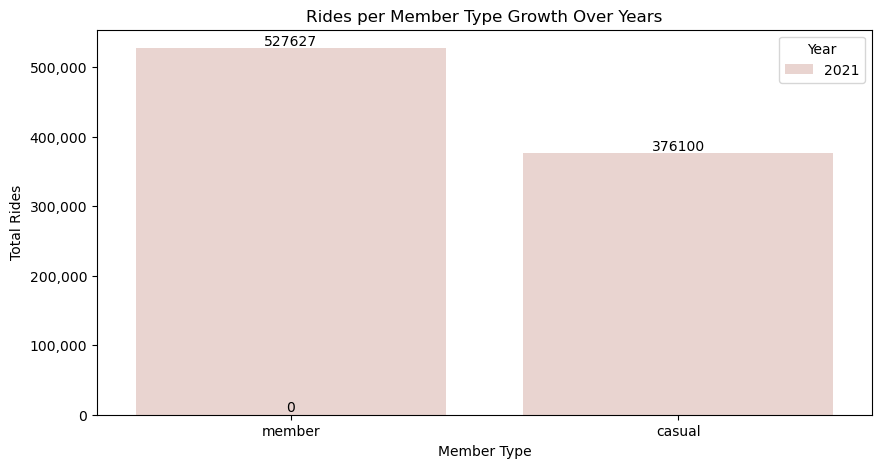

In [15]:
from matplotlib.ticker import FuncFormatter
# Create the countplot
plt.figure(figsize=(10, 5))
plt.title('Rides per Member Type Growth Over Years')
# Create the countplot
ax = sns.countplot(data=df, x='member_casual', hue='year')

# Annotate the count values (y-axis numbers) on top of the bars
for p in ax.patches:
    # Get the height of each bar (this is the count)
    height = p.get_height()

    # Get the x position of the bar (center of the bar)
    x_position = p.get_x() + p.get_width() / 2

    # Place the count value above the bar
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Member Type')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
# Use FuncFormatter to format the y-axis to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Add commas for thousands separation

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

In [16]:
df.head(2)

ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:00 2021-01-01 00:33:00   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:00 2021-01-01 00:28:00   

  ride_length     start_station_name start_station_id  \
0    00:25:20  Maine Ave & 9th St SW          31646.0   
2    00:14:13  17th & Corcoran St NW          31214.0   

                           end_station_name end_station_id  start_lat  ...  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440  ...   
2                      14th & Belmont St NW        31119.0  38.912138  ...   

     Month  year  start_hour end_hour day  day of week  date_is_weekend  \
0  January  2021           0        0   1       Friday                0   
2  January  2021           0        0   1       Friday                0   

   trip_duration  time_of_day  Season  
0         1500.0        Night  Winter  
2          840.0        Night  Winter  

[2 rows x 24 columns]

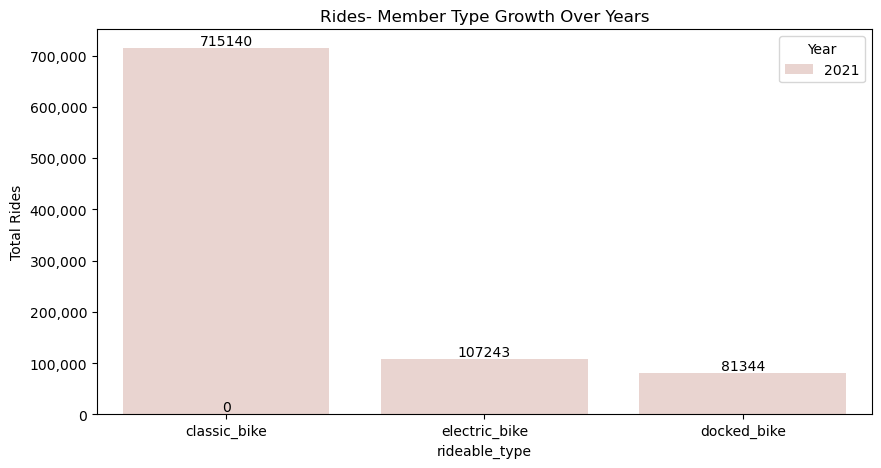

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Rides- Member Type Growth Over Years')
ax = sns.countplot(data=df, x='rideable_type', hue='year')
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('rideable_type')
plt.ylabel('Total Rides')
plt.legend(title='Year', loc='upper right')
def format_func(value, tick_number):
    return f'{int(value):,}' 

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

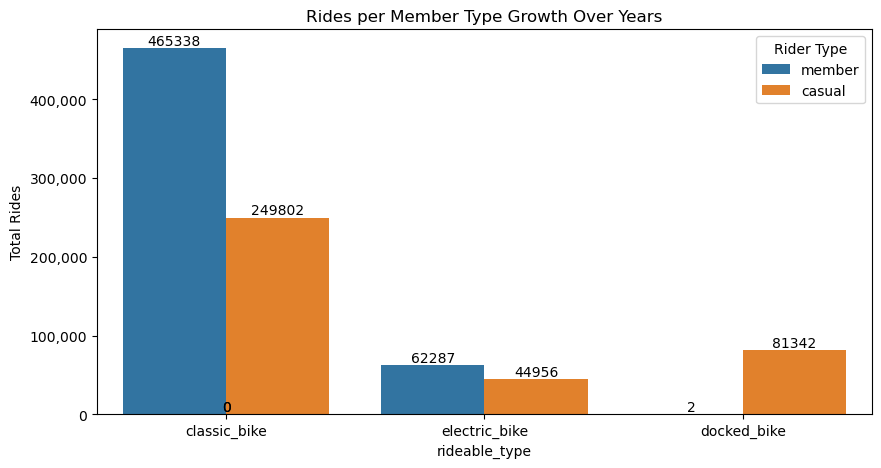

In [18]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10, 5))
plt.title('Rides per Member Type Growth Over Years')

ax = sns.countplot(data=df, x='rideable_type', hue='member_casual')
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('rideable_type')
plt.ylabel('Total Rides')
plt.legend(title='Rider Type', loc='upper right')
def format_func(value, tick_number):
    return f'{int(value):,}' 

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

In [19]:
# 1. Identify casual riders who took multiple rides (potential for conversion)
frequent_casual = df[df['member_casual'] == 'casual'].groupby('ride_id').size().reset_index(name='ride_count')
frequent_casual = frequent_casual[frequent_casual['ride_count'] > 2]  # Example: More than 2 rides

In [20]:
# 2. Analyze their riding patterns (where they start/end, time of day, etc.)
frequent_casual_data = df[df['ride_id'].isin(frequent_casual['ride_id'])]

In [21]:
# Popular start stations for frequent casual riders
popular_start_stations = frequent_casual_data['start_station_name'].value_counts().head(10)
print("Popular Start Stations for Frequent Casual Riders:\n", popular_start_stations)


Popular Start Stations for Frequent Casual Riders:
 Series([], Name: count, dtype: int64)


In [22]:
# Time of day they ride
time_of_day_usage = frequent_casual_data['time_of_day'].value_counts().sort_index()
print("\nTime of Day Usage for Frequent Casual Riders:\n", time_of_day_usage)


Time of Day Usage for Frequent Casual Riders:
 time_of_day
Morning      0
Afternoon    0
Evening      0
Night        0
Name: count, dtype: int64


In [23]:
member_trips = df[df['member_casual'] == 'member'].groupby(['ride_id', 'Month','year']).agg({'ride_id': 'count'}).rename(columns={'ride_id': 'trip_count'}).reset_index()

In [24]:
# # Group by member and month, count rides
# member_trips = df[df['member_casual'] == 'member'].groupby(['ride_id', 'Month','year']).size().reset_index(name='trip_count')

In [25]:
# Calculate average trips per member per month
average_member_trips = member_trips.groupby('ride_id')['trip_count'].mean().mean()  # Average of averages
print(f"Average Member Trips per Month: {average_member_trips:.2f}")

Average Member Trips per Month: 1.00


In [26]:
df.head(2)

ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:00 2021-01-01 00:33:00   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:00 2021-01-01 00:28:00   

  ride_length     start_station_name start_station_id  \
0    00:25:20  Maine Ave & 9th St SW          31646.0   
2    00:14:13  17th & Corcoran St NW          31214.0   

                           end_station_name end_station_id  start_lat  ...  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440  ...   
2                      14th & Belmont St NW        31119.0  38.912138  ...   

     Month  year  start_hour end_hour day  day of week  date_is_weekend  \
0  January  2021           0        0   1       Friday                0   
2  January  2021           0        0   1       Friday                0   

   trip_duration  time_of_day  Season  
0         1500.0        Night  Winter  
2          840.0        Night  Winter  

[2 rows x 24 columns]

In [27]:
#Trips by day of week for members
member_trips_dayofweek = df[df['member_casual'] == 'member']['day of week'].value_counts().sort_index()
print("\nMember Trips by Day of Week:\n", member_trips_dayofweek)



Member Trips by Day of Week:
 day of week
Friday       77432
Monday       67015
Saturday     82634
Sunday       68002
Thursday     76389
Tuesday      79714
Wednesday    76441
Name: count, dtype: int64


In [28]:
# Casual Rider Repeat Rate by Location:

casual_rides = df[df['member_casual'] == 'casual']
casual_rides['start_station_name'].replace('', np.nan, inplace=True)
casual_rides['end_station_name'].replace('', np.nan, inplace=True)
repeat_riders = casual_rides.groupby(['ride_id', 'start_station_name']).size().reset_index(name='ride_count')
repeat_riders = repeat_riders[repeat_riders['ride_count'] > 1]  # Riders using the same start station more than once

repeat_rate_by_location = repeat_riders.groupby('start_station_name')['ride_id'].count() / casual_rides['start_station_name'].value_counts() * 100
print("Casual Rider Repeat Rate by Location:\n", repeat_rate_by_location)

Casual Rider Repeat Rate by Location:
 start_station_name
10th & E St NW                                         NaN
10th & Florida Ave NW                                  NaN
10th & G St NW                                         NaN
10th & K St NW                                         NaN
10th & Monroe St NE                                    NaN
                                                        ..
Wisconsin Ave & O St NW                                NaN
Woodglen Dr & Executive Blvd                           NaN
Woodley Park Metro / Calvert St & Connecticut Ave NW   NaN
Woodmont Ave & Strathmore St                           NaN
Yuma St & Tenley Circle NW                             NaN
Length: 639, dtype: float64


In [29]:
end_repeat_riders = casual_rides.groupby(['ride_id', 'end_station_name']).size().reset_index(name='ride_count')
end_repeat_riders = repeat_riders[repeat_riders['ride_count'] > 1]  # Riders using the same start station more than once

In [30]:
# repeat_rate_by_location = end_repeat_riders.groupby('end_station_name')['ride_id'].count() / casual_rides['end_station_name'].value_counts() * 10
# print("Casual Rider Repeat Rate by Location:\n", repeat_rate_by_location)

In [31]:
# Station Popularity Index for Casual Riders:

station_popularity = casual_rides['start_station_name'].value_counts()
print("\nStation Popularity Index for Casual Riders:\n", station_popularity)


Station Popularity Index for Casual Riders:
 start_station_name
Lincoln Memorial                                         9742
Jefferson Dr & 14th St SW                                8053
Henry Bacon Dr & Lincoln Memorial Circle NW              7720
4th St & Madison Dr NW                                   7466
Smithsonian-National Mall / Jefferson Dr & 12th St SW    6427
                                                         ... 
Ridge Rd Community Center                                   8
Towers Crescent Dr & Tysons One Pl                          7
Crescent Rd & Ridge Rd                                      5
N Moore St & Rosslyn Metro                                  1
Greenbelt Station Parkway                                   1
Name: count, Length: 639, dtype: int64


In [32]:
df[['start_station_name', 'end_station_name', 'start_station_id', 'end_station_id','start_lat']].nunique()

start_station_name      640
end_station_name        640
start_station_id       1232
end_station_id         1227
start_lat             79327
dtype: int64

In [33]:
# Distance Traveled by Casual vs. Members:

# Calculate distance (Haversine formula for more accuracy)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance


In [34]:
# df['distance'] = df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)


In [35]:
df.head(2)

ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:00 2021-01-01 00:33:00   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:00 2021-01-01 00:28:00   

  ride_length     start_station_name start_station_id  \
0    00:25:20  Maine Ave & 9th St SW          31646.0   
2    00:14:13  17th & Corcoran St NW          31214.0   

                           end_station_name end_station_id  start_lat  ...  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440  ...   
2                      14th & Belmont St NW        31119.0  38.912138  ...   

     Month  year  start_hour end_hour day  day of week  date_is_weekend  \
0  January  2021           0        0   1       Friday                0   
2  January  2021           0        0   1       Friday                0   

   trip_duration  time_of_day  Season  
0         1500.0        Night  Winter  
2          840.0        Night  Winter  

[2 rows x 24 columns]

Analysis

In [36]:
#calculate the mean value
# average_duration = df['ride_length'].mean()

In [37]:
average_duration_member = df[df['member_casual'] == 'member']['ride_length'].mean()
average_duration_casual = df[df['member_casual'] == 'casual']['ride_length'].mean()
# print(f'the average of riding time is: {average_duration}')
print(f'the average riding time of member riders is: {average_duration_member}')
print(f'the average riding time of casual riders is: {average_duration_casual}')

TypeError: Could not convert string '00:25:2000:14:1300:05:3500:03:1400:09:2800:02:1300:08:3700:24:3900:28:1700:03:4700:03:2000:24:2400:25:0600:08:1100:09:0700:10:0300:12:2300:09:4500:24:5700:11:0800:08:5600:13:1600:09:5700:11:0300:08:4200:08:3800:14:2300:03:1700:12:2100:10:1600:09:0600:11:0700:21:4000:01:4200:05:0000:26:3200:14:1000:13:5600:06:3000:04:0400:27:5500:13:3700:15:0800:06:1200:11:5400:00:5600:09:0200:06:2700:10:2000:08:1200:07:4100:10:0000:02:2800:08:4900:03:2400:06:5800:13:1500:03:1900:04:1000:09:0000:03:3900:11:0700:19:1800:04:2400:02:4000:07:2600:03:4300:09:5000:12:3300:04:4200:08:2200:03:1300:03:1100:08:2000:08:0600:05:5200:03:5100:27:4700:07:0200:08:5800:14:1100:03:1900:06:5600:09:3600:01:3400:16:2800:05:3200:11:0000:12:2400:05:0500:07:2700:03:1100:08:5400:13:4700:08:0300:06:1500:08:5600:04:2200:04:2700:07:1500:21:4900:21:3800:06:3401:59:2500:25:2300:24:2400:03:2400:12:5800:08:0500:11:5500:06:3400:27:1100:21:2600:06:4800:04:2200:03:0600:03:2400:22:0700:05:2700:03:5700:04:5800:01:0400:03:5400:09:1300:13:1300:15:5900:05:4800:06:1200:06:4100:07:2500:07:1700:13:1300:06:3500:06:2100:03:0700:02:2500:12:0500:13:4200:02:4800:15:1400:32:1000:17:3800:07:1700:07:1000:16:4900:06:4200:06:0100:06:1600:09:5400:15:2400:07:5100:07:3400:06:0000:15:0200:24:4700:17:3000:20:2800:14:0700:16:0000:03:4900:04:2300:03:2900:11:4400:02:2400:06:0300:08:4900:11:3500:08:0800:06:5300:17:3100:26:5100:09:3900:06:4100:15:4300:29:2800:02:2101:34:5000:01:5200:05:0000:16:1000:08:5300:06:4400:01:5600:20:4900:18:2500:09:0500:02:5500:19:5200:16:5800:13:5600:24:1100:07:0000:03:2400:05:2700:26:5100:03:0500:13:5700:05:4200:12:1800:22:4900:06:2500:10:1300:08:0200:31:1300:19:4300:03:2200:07:0800:13:1600:09:3500:38:3300:11:1700:05:0900:17:2800:04:5200:03:3600:16:3800:12:5000:01:5700:04:3800:07:5400:06:1800:04:5300:05:4000:03:4700:03:3300:02:5900:09:2700:12:1400:19:4100:04:3800:11:2500:08:4000:06:4100:06:3700:09:0800:02:5000:08:0800:27:0900:14:4800:20:5100:08:5300:02:0400:01:4800:05:1000:04:1900:35:3000:02:5400:22:4400:33:5900:14:2100:11:5900:06:5900:00:5800:24:5600:07:2300:02:4200:19:1600:06:3700:09:0400:08:3400:10:2200:06:1500:17:1200:27:5400:08:2100:04:0200:22:0600:22:4300:11:2100:08:1800:10:5100:02:4800:15:3800:06:0100:02:2500:04:5500:05:2500:02:3200:06:1700:28:4300:04:4500:12:2900:08:0200:13:1400:09:3800:09:0800:08:4400:21:3800:11:4000:08:1100:22:1900:07:0300:10:5100:11:1900:05:2200:25:5900:02:4000:02:5603:06:2600:02:1700:05:4400:14:2600:06:2300:06:4500:12:1400:18:3900:06:1600:05:3600:06:5400:04:5300:08:5000:04:5900:25:3700:05:4600:13:1800:26:2700:15:3000:20:2000:16:5900:09:0600:10:0000:03:1500:04:5400:06:2900:11:1900:04:5300:07:2700:05:0400:04:3400:07:1900:08:1800:03:5000:05:4900:09:2300:14:0000:15:3400:06:3100:04:5400:07:1300:02:3200:04:1300:06:3300:05:2100:27:5500:25:5900:32:4600:16:1500:16:5500:06:2800:03:5300:30:1800:04:0000:07:1800:11:1600:05:1000:02:5300:06:5900:05:2100:04:2100:15:4900:04:1600:12:3900:21:1200:13:2000:04:2400:18:0900:07:3800:22:2500:06:2300:06:3000:08:1700:03:5800:04:5100:03:3500:00:0200:04:1800:11:2000:00:4400:13:5200:05:4500:08:4500:04:3100:02:4600:14:4600:04:1900:29:0300:16:4400:13:3100:11:4600:13:5800:13:2900:08:2800:03:3600:45:0100:05:2000:24:3400:02:2600:07:2000:02:3400:33:3200:14:2100:03:4700:02:2100:08:5900:21:3000:04:3000:13:3000:04:1900:19:1500:17:5900:12:0800:03:3100:09:1800:33:1700:12:5200:22:4500:05:3200:10:5800:09:4700:21:0000:05:4900:11:3200:04:2100:20:2900:04:0100:18:0800:21:0500:04:2500:11:0300:21:2700:07:3701:02:1300:12:3100:08:2200:24:2300:10:4700:18:2500:26:5300:16:4800:21:1900:05:3800:25:4800:07:3400:06:2000:22:4600:12:4800:04:4800:07:0500:12:2100:10:4900:02:2600:03:2800:28:4900:06:3100:03:2200:04:4700:08:3800:03:4700:25:4600:09:0400:07:2800:15:3900:04:1000:11:4800:30:1500:15:1600:12:2200:02:3700:22:4700:18:1800:04:1500:05:5100:05:0600:20:5100:04:1000:03:0500:20:3200:07:5500:05:3200:11:0500:04:2900:12:1000:07:1000:06:0200:12:5600:01:4400:04:2400:13:5600:05:2900:04:4800:05:4600:12:2400:21:1500:14:2100:07:4600:04:0100:03:3600:10:2800:10:2400:06:0600:14:1400:07:4300:11:2600:11:2800:06:3900:29:4300:11:4000:09:4600:27:4500:02:3800:17:3100:10:1200:16:5600:06:2000:10:2400:31:4300:08:1500:12:3600:08:5700:04:1600:24:5600:26:1300:03:3800:02:2700:20:3700:04:0400:05:5900:05:5100:11:2200:07:4800:05:5500:01:1300:13:4400:15:2700:09:4100:16:0600:14:1000:16:3000:11:2000:00:1100:12:0900:15:0000:02:4300:06:3100:06:2000:04:2600:11:2900:07:5200:06:3800:22:2000:08:2700:02:5300:00:0700:16:3900:18:3500:05:1700:10:1700:05:2200:18:3000:02:2800:09:4900:04:4600:16:3300:17:0100:18:0900:04:5200:03:0600:01:2000:14:5400:10:3900:04:0900:02:5600:11:4000:11:4600:06:5900:14:4201:17:4800:10:1400:02:3500:05:2000:18:4200:09:1100:04:3100:06:3100:06:3000:06:3000:08:0500:08:3300:02:1400:11:1000:10:5700:20:1700:17:3500:12:1000:23:4300:10:2800:10:5700:09:1700:05:1300:05:5600:18:0200:12:0300:07:0400:16:5800:08:4600:21:4500:07:3200:24:2000:12:1000:11:5800:08:3000:21:0300:04:5000:03:2900:20:4800:03:5100:07:5300:12:2700:14:2500:11:0300:08:2600:13:1500:12:3800:12:0700:02:2500:12:5200:05:1300:07:0300:15:1400:18:2000:06:1200:07:4400:16:2100:23:0000:14:4300:08:3700:13:0100:05:2600:11:0800:10:5300:08:0700:21:0800:21:3000:03:0800:00:5400:05:5600:00:0400:09:0100:14:0600:01:2400:04:5000:09:5900:22:5000:02:0600:05:2900:03:1300:12:1200:00:1200:17:2200:20:1200:07:2100:37:1800:08:0700:07:3300:28:4400:08:1800:16:0700:11:4700:10:3900:12:1900:16:4400:07:0100:16:1000:13:3400:19:4600:09:5100:04:0600:06:0300:07:0000:01:2300:10:0100:00:1000:07:2600:14:3700:09:2800:27:5100:09:1600:18:5300:05:2000:04:2200:13:2400:04:5700:15:2100:06:0300:14:4700:41:4800:21:4900:03:4400:03:4600:05:0100:52:0200:23:1400:03:0500:06:4400:20:4900:18:2800:15:0200:09:0500:02:3500:03:1400:12:2100:16:3900:22:1200:04:3800:12:4500:18:5600:02:5600:04:5700:08:0600:07:0400:02:5000:13:0000:11:2100:02:2800:18:3100:04:2700:11:3800:00:0300:04:2100:02:0000:03:5700:13:2600:02:2700:03:4800:24:5600:17:4700:08:2100:05:3400:02:4300:19:3800:08:0000:26:4800:22:5500:04:3600:24:5600:14:4500:09:0300:00:1800:08:2100:15:1700:15:1100:08:5000:08:4800:11:0100:08:0700:06:3800:07:2400:09:0700:04:5400:04:1400:16:0800:13:0500:06:0400:20:1500:21:4400:46:5400:17:5800:06:0700:06:0100:05:4300:42:2800:21:1000:12:0900:09:2000:11:5700:08:2600:19:3400:16:1500:10:0300:12:3100:07:1701:33:0700:10:1600:06:3800:13:3300:17:2200:12:2900:09:3500:14:2600:11:0400:33:5300:08:1000:03:4300:03:0500:11:5400:04:0400:15:1400:15:1200:14:3100:45:2600:07:0900:23:1900:08:4000:01:3800:08:0900:21:3200:30:2100:17:1700:10:2900:01:3000:02:3000:06:1900:14:0000:05:3100:19:4700:15:5800:10:2600:07:2400:13:3100:07:0100:14:0100:24:0400:04:5500:07:2400:56:0300:33:3500:07:3700:07:0500:34:5600:09:4800:22:4700:12:2400:10:0300:15:3700:14:0300:52:5600:24:5900:09:2600:09:2700:04:2900:03:4000:17:1500:05:5600:05:3900:03:4700:18:0800:03:3900:03:1500:17:3800:12:0800:18:1500:17:5500:21:3000:07:5900:17:1500:02:5800:23:0700:17:2900:02:2700:17:5700:09:1500:20:1000:10:3100:05:3400:23:2400:02:5200:11:2500:21:0400:02:5800:10:4100:15:3700:02:1100:07:2200:04:3700:23:1200:05:5800:00:1400:06:1500:03:4400:04:0600:07:0700:10:5000:00:0300:10:1700:17:3200:07:5800:05:5201:16:4400:04:3900:09:2900:05:2600:00:0700:02:3900:04:0400:11:0900:03:3600:12:4200:06:2800:08:4600:03:1200:05:5000:11:3900:01:3500:10:1000:05:4400:05:3400:31:3700:31:2600:08:0600:04:5000:13:0200:13:0000:04:5700:13:1100:11:0800:06:3300:06:2600:11:4400:07:3200:17:2000:14:5700:25:2500:25:1300:03:1900:36:2100:11:5900:05:0900:05:3700:28:0900:11:0200:17:2800:18:4200:18:3200:13:4800:13:3100:02:5300:05:0300:16:1900:03:5200:04:0800:14:3800:09:4200:03:2700:04:2400:09:4100:17:0500:37:0700:12:3000:10:4400:12:3900:09:2000:15:5900:13:0400:17:1600:41:5800:25:2000:05:1200:04:0200:07:1300:19:3701:04:0900:06:0100:22:1600:01:1500:13:4700:08:5100:55:2600:16:3222:30:0000:06:1000:21:2900:07:4200:05:1500:10:5800:27:4200:20:5500:03:2300:16:3600:03:4000:20:4400:25:1400:05:0800:04:5100:33:2100:13:2500:33:0800:24:3800:06:2200:06:2201:13:3100:04:3500:12:5800:04:5400:09:0200:08:1600:14:1700:08:2000:08:5800:04:5200:06:0500:15:5700:15:5600:15:1800:15:1100:06:2100:18:2700:09:0600:31:4200:04:0900:06:4100:00:2500:07:2800:07:1400:13:0200:43:0400:05:0200:12:3100:14:1900:03:1900:03:4300:04:1000:05:1500:07:4200:10:2600:02:1100:10:0800:03:2000:06:1401:19:5800:11:0000:19:4500:40:3800:12:4700:04:1300:15:2300:24:4800:13:5400:05:2500:14:3400:23:0300:36:3200:16:5601:31:4600:38:0000:38:1500:14:1100:12:2500:15:3500:52:4500:11:5800:08:1800:17:2800:18:4100:10:4700:06:5100:14:5300:17:4600:21:3500:04:5900:14:4201:09:2000:10:5100:09:4900:14:0200:03:0700:04:3300:21:3600:04:3500:06:4600:04:1700:20:0700:03:2600:45:4300:39:3100:03:5200:39:4900:37:1100:07:1300:26:0200:28:5300:09:5400:14:1100:10:2000:10:4200:18:0500:05:5200:16:2200:13:4700:05:0000:14:4400:10:3500:00:0200:10:5300:12:1600:06:4500:11:1500:25:4100:06:1000:41:5100:27:1600:04:1900:07:0400:12:2700:04:0800:14:0800:08:0100:07:3200:18:1000:09:4700:48:3800:03:0300:12:5400:03:1400:06:2600:10:1700:54:3100:16:3600:15:1400:14:5100:15:2700:16:0100:13:4900:13:4800:15:4900:19:3100:02:4800:21:0500:14:3900:03:3400:09:1900:03:5900:08:5500:13:5200:10:2000:15:4100:10:0000:22:0600:15:1600:05:5500:09:3600:46:3200:07:1400:46:3100:17:4100:36:5000:17:1500:36:2101:17:5100:15:5200:03:3900:16:4400:33:5700:06:1900:14:4600:03:1800:27:1900:43:3000:18:4500:06:3200:27:2300:10:1900:14:1700:07:5700:00:0300:02:2600:14:3900:05:1000:04:5400:11:1300:11:2300:16:3200:03:3900:03:5800:08:5300:23:2400:18:3500:07:0900:07:4300:05:0900:10:4200:03:5001:00:2700:14:3000:08:3800:25:4200:08:2600:23:0900:34:3400:10:2800:30:2700:10:3400:23:1100:27:1400:27:1500:22:4200:06:0400:02:2800:05:3200:11:3600:14:3600:16:2900:09:3200:21:2800:22:5700:17:5000:05:4200:10:5500:06:4300:10:2500:32:3300:06:3500:06:3300:09:1500:06:5500:22:3200:07:4502:10:0600:52:5400:11:3200:12:0501:01:2200:24:2100:33:0600:28:3800:10:5700:10:3800:23:3000:11:5100:16:3800:08:5700:31:3100:11:0400:08:3200:02:1400:13:4700:03:5800:01:3100:01:5400:02:0300:21:2400:30:1000:20:3600:07:1600:07:4800:07:2800:07:1900:08:2300:06:2900:18:4300:11:1100:29:1800:23:1000:26:4700:35:2800:06:5100:07:1100:06:1800:31:1900:20:2500:27:1000:17:5800:17:3900:33:5100:09:5000:10:4200:08:2200:05:2300:06:1000:00:1800:09:0400:05:3100:03:0800:12:0100:14:2500:09:4000:14:4300:13:5200:14:0300:02:3100:05:0700:11:1500:12:4300:12:2900:07:5300:16:3400:11:0900:26:2400:31:4400:12:4500:02:3400:03:3800:09:5800:09:4800:30:4900:09:0200:07:2300:07:4200:32:3800:15:0500:08:3500:19:1300:12:5400:12:5300:23:2100:10:3800:11:5400:30:2800:06:5100:14:2200:13:3800:21:0800:05:5800:09:4800:05:2200:25:5800:04:3500:05:5000:04:3600:03:3300:14:0800:24:5700:09:1200:22:3000:21:1500:04:1300:20:2400:11:1500:20:4400:12:5700:07:3000:13:3700:13:2200:19:2500:08:5200:23:2400:01:3200:28:3600:12:3000:26:2400:26:1400:09:1400:23:2900:09:1500:09:1800:09:4900:50:4100:14:2000:22:0400:22:1000:06:5900:15:2300:41:3800:06:2600:22:0500:04:4100:41:1000:19:4300:17:4900:01:3100:06:5000:18:4100:10:2700:20:5800:24:0300:29:5700:07:4000:10:4600:09:2300:49:0400:35:4100:07:5600:00:2300:07:4200:14:1100:22:2200:11:3700:10:5400:22:0600:17:3900:17:4900:30:3000:30:2200:26:5100:30:3000:32:1301:13:5401:26:3301:26:1700:16:0001:33:2600:24:5700:02:5100:00:0900:14:1800:06:3300:30:4100:08:5900:02:1000:48:5900:21:5000:27:1300:04:1600:25:2700:21:2500:21:2500:04:1800:23:5300:20:5000:05:5400:20:0800:15:0700:05:4400:32:0000:14:5700:01:4200:51:0400:05:0200:07:0100:28:0600:08:1900:23:4700:46:0800:46:0700:25:1700:06:1400:18:1700:12:5200:12:5200:03:0400:12:0900:22:2300:04:0600:04:1000:18:1400:16:1100:48:1900:11:3100:11:4600:17:1700:17:4800:00:1500:04:1900:03:5801:02:3600:11:0100:11:1900:22:5800:03:2500:11:5800:00:1700:39:1600:11:3800:13:3600:18:2000:13:0600:12:0300:10:5500:00:0400:00:4600:03:5700:08:4200:21:4800:06:2800:44:4600:10:4100:10:3700:20:5600:37:2800:11:0800:52:2700:18:2300:04:3500:04:4600:03:4500:15:4400:54:1100:17:5700:06:0000:30:0500:01:3800:23:0600:24:2100:13:3600:13:0100:04:5800:20:3500:16:2000:07:0500:05:1100:16:4100:12:1600:11:5900:07:0900:21:3000:38:3100:17:2000:05:2400:04:3700:07:4000:16:5100:24:4600:07:2700:10:4300:03:2200:53:3200:10:1800:05:1200:00:3000:05:2600:01:2200:07:1800:04:4000:12:0000:12:4200:18:1300:12:2300:05:3100:33:1400:05:4700:06:1300:05:3200:28:1200:08:3900:24:2900:11:1100:17:5701:32:0000:04:0600:22:0000:58:0200:12:3800:19:3200:29:5400:22:2400:12:1400:05:5600:20:2300:02:1100:22:3000:07:2100:18:0000:31:0600:18:0300:35:4600:09:4200:14:0900:30:2000:12:5800:04:2100:07:0800:17:5300:03:1600:19:0900:24:2300:13:4300:21:3200:52:1600:17:4400:19:3900:29:4100:05:5100:14:5000:27:3800:10:2300:24:5800:00:0200:32:4900:23:0900:26:0300:17:1000:14:4500:00:0200:09:1800:22:2000:13:2700:46:2300:28:1200:24:4100:26:4200:14:3500:10:3600:03:1200:12:5700:13:3100:18:5000:39:4000:10:2400:03:3700:14:0300:07:4100:09:0200:00:1900:06:2400:23:1600:05:4900:04:0200:16:1800:16:2400:30:2200:22:0901:02:4100:28:4600:52:5000:33:2500:12:0402:23:0000:15:2800:24:2100:23:2700:11:3500:36:0900:44:5500:03:4100:07:0200:06:5000:03:4500:20:4900:02:4500:15:2100:09:4500:12:3100:27:4200:32:2200:05:2900:27:2500:18:0400:04:2000:01:4100:05:3600:10:0300:09:5400:09:3600:50:4101:26:0200:04:2700:10:2200:05:3000:10:5100:10:4000:10:3200:14:3800:51:5800:07:1200:15:3900:14:2000:12:4800:14:2401:19:4900:01:0401:27:5300:01:1400:16:0800:16:0100:05:0000:12:0900:30:3800:27:3700:03:5900:15:1600:28:1200:32:5200:07:3600:18:4500:35:0900:46:2700:32:4100:17:2300:07:5600:00:3500:08:0800:07:3700:07:5100:02:3100:21:3700:08:1400:11:3900:23:4300:20:0700:26:4500:26:1200:07:5000:41:0600:03:0500:05:3400:06:1500:34:4500:09:0200:08:2400:33:5000:08:0100:05:3400:28:2600:05:2300:10:0300:18:3700:16:0500:15:4500:16:3700:23:2700:13:0900:19:4600:01:2500:10:4400:05:2200:29:0400:22:2000:21:5700:12:3900:21:3501:05:5500:04:5700:04:5300:12:4700:07:0200:18:3500:17:1900:12:0700:24:0500:10:4500:14:3500:06:1600:17:0000:16:2900:06:0600:07:0500:14:0300:07:2600:07:2200:29:4900:18:3300:03:2600:01:2400:20:0200:20:0300:10:5100:06:1300:09:0700:17:3000:02:3800:07:2200:36:2300:15:1000:12:1400:07:4300:18:2300:28:4700:10:1900:12:4300:40:1700:16:4800:29:5900:05:2100:20:0400:34:0400:16:4800:08:3500:08:3100:17:0800:08:1600:21:2000:13:1500:04:4900:08:1600:05:5700:19:0400:03:3800:09:4900:34:5900:36:5100:20:4700:07:1100:01:3500:06:1700:12:5100:04:0500:23:3701:32:3400:46:1500:17:0500:07:2100:22:1900:22:2300:11:4900:12:2700:05:3000:31:3800:09:1600:24:1600:14:2500:23:0500:04:2400:20:4400:23:0700:04:3300:20:1900:04:2700:30:2700:23:0700:56:0600:26:4800:26:5100:08:2500:03:5100:15:5300:14:1200:27:5400:16:4400:15:1000:26:2100:26:0300:09:0100:06:2700:32:3800:07:4700:12:4000:07:1900:55:5300:05:5100:26:3000:03:1100:08:3100:31:2800:20:4400:08:0500:12:5600:15:1500:07:1800:03:3700:07:5100:08:1500:11:4100:18:0700:12:1000:03:1900:01:0600:19:0500:05:5900:27:3900:05:2300:05:5700:15:4300:19:0700:05:1700:23:3400:14:2100:31:2000:10:1600:14:5200:03:1500:05:2600:13:1800:26:4400:15:5500:15:5400:21:2800:14:2700:17:0700:14:2800:14:2800:08:3800:29:1100:18:1400:05:4702:07:5400:11:3800:17:4400:30:0600:32:3700:18:1000:11:1100:22:3500:23:3800:07:1300:02:0000:12:1500:16:2900:28:3400:17:2100:41:1500:20:5800:31:1600:22:2600:42:3400:24:1400:14:2500:18:4900:12:5000:04:2100:22:2000:18:0500:13:0201:01:0600:16:5700:15:5600:09:0900:08:4600:10:3600:06:5000:21:4000:08:0100:03:0600:15:0000:05:2000:06:3700:11:3200:14:1100:06:4300:10:4800:28:0900:23:4700:13:3900:03:5300:29:3400:11:5700:13:5200:10:2800:21:4300:04:2000:04:2200:32:3500:05:3200:07:5500:44:0000:05:4700:17:3800:07:2200:04:3000:19:5200:04:5000:32:0400:31:4400:18:4100:28:4501:36:4500:04:1800:25:4100:03:0800:20:5900:31:2200:19:0500:00:2500:14:0400:06:1800:19:1800:14:3300:14:3300:10:3800:07:4900:11:3601:08:5201:08:5200:14:3900:13:2601:35:4200:18:3100:05:1800:03:1300:36:3600:04:2500:05:0100:10:5100:19:0700:15:3100:49:5600:13:1500:48:3600:12:5400:16:0200:17:4900:09:5000:11:3800:04:4900:09:1600:13:4000:19:3800:14:3900:23:1200:16:4700:07:2400:09:4700:06:1700:16:2900:10:0700:22:3400:31:0700:26:3600:20:2800:26:3600:21:0900:08:3300:50:5900:18:2900:05:2500:36:4900:02:4000:11:4200:02:3400:00:4500:32:3200:19:4900:03:2000:06:1000:02:4600:26:5400:19:0300:21:0600:16:4700:32:5100:30:1200:14:5600:14:2700:37:5000:10:1600:09:5500:16:1700:08:2400:10:1300:03:0700:09:2600:27:1500:00:1200:00:4200:55:4200:05:2800:09:2800:03:0600:55:3900:18:3300:28:2400:28:1300:03:3200:07:5600:35:0800:05:3900:14:0800:07:3100:11:1000:19:4300:19:4400:11:4500:08:5500:29:0100:23:3200:21:5900:06:5700:41:0800:22:2003:07:2700:11:4500:21:4600:08:2800:07:3700:09:0900:52:3200:07:2800:11:4601:07:5200:25:0500:02:2200:08:2400:09:4900:13:5300:08:5600:08:4500:18:2000:12:2600:30:4100:14:0101:44:0000:06:0700:23:4100:02:5200:20:3000:19:3400:01:1000:20:0500:24:1600:51:2000:33:4200:33:2900:18:0000:16:0900:08:4100:11:4400:14:4000:05:3000:03:2200:14:5000:10:5700:28:5200:28:1300:09:5300:04:4300:03:1800:07:1900:17:3300:35:0300:09:3400:28:5000:12:3900:28:2000:28:0600:18:0500:28:0201:24:3600:11:0800:07:2600:05:0800:11:0600:04:2800:29:2700:21:3700:06:0100:04:5500:26:1800:18:4300:05:0400:05:4300:11:0800:08:1700:08:2600:01:4900:05:3800:03:2300:23:3400:05:5200:09:4700:20:1400:33:0400:02:0300:20:0000:09:1200:15:0100:21:0500:06:2900:16:2100:43:4300:07:4400:01:2800:01:2100:03:4000:19:2400:16:5900:21:0400:13:2300:11:0700:18:1701:06:2700:17:4400:24:5100:04:1200:11:3300:02:1900:26:3500:31:5500:17:5200:03:1200:25:3400:24:5500:02:1500:04:5400:19:5400:02:3300:08:1700:08:2800:14:0600:18:2000:23:3300:11:3800:14:1700:28:3700:12:5200:02:5300:09:0300:06:1300:21:3900:07:1400:13:4500:03:5000:45:1900:08:2100:33:1800:22:0700:18:2700:11:2200:10:0700:14:4000:08:1900:15:0600:14:5600:07:5700:05:1700:05:1200:08:3100:04:3400:25:2500:28:4700:05:1100:08:0200:14:2800:11:5100:14:2000:14:5600:21:1800:14:1600:16:5500:06:0100:28:2800:05:2200:11:0000:18:1500:32:2100:11:0600:04:1800:14:0501:14:5700:10:3800:21:0800:07:1300:14:5900:19:4700:19:3200:19:0600:12:1500:16:5100:19:0900:17:4800:07:0900:12:0900:12:0900:16:2100:28:4400:18:2400:01:2400:22:5800:10:1000:00:3900:10:1300:26:3700:27:3400:08:4100:11:2400:26:2200:50:0600:08:5200:26:0100:21:5400:28:4400:19:1800:11:5300:20:3700:02:4600:20:2300:08:4200:17:1000:06:1200:05:1000:02:0600:00:2200:12:2701:25:0401:08:2100:13:1100:46:5000:22:5800:21:5200:03:3100:08:3900:13:1800:11:1000:13:3000:17:1300:11:4500:15:2500:27:4900:05:2800:25:4500:25:0800:14:1000:14:3000:05:4500:13:5900:49:3100:10:4900:18:2600:08:2100:25:3700:05:5300:06:1000:39:3200:13:5400:10:1100:23:2900:50:0000:26:3400:30:5500:07:1200:01:4400:07:0500:25:4500:01:5800:32:0500:07:2200:32:1200:08:4800:07:1300:45:3100:45:3900:03:0000:31:0300:03:5400:12:2100:18:3200:06:1600:14:1100:07:2700:29:1300:36:2200:04:3700:03:1900:06:0700:26:4000:08:4500:09:2900:09:3600:18:4600:06:5000:08:1800:14:5800:05:5600:10:4600:34:0800:09:2001:10:0500:09:0400:23:0900:16:4000:07:0900:11:4300:23:0600:26:2500:04:4100:09:4200:03:4700:18:1600:17:0300:25:3700:08:2400:16:0700:02:0800:16:2800:06:3700:22:5300:14:3500:30:0300:05:2000:10:1600:10:2400:13:1800:02:5500:11:4000:17:5000:11:2300:02:0800:15:4600:12:3600:13:2900:18:0600:10:4200:08:3800:10:4800:06:4200:37:1900:12:0600:11:1200:27:1800:34:2200:25:5600:06:2000:07:4000:13:5100:18:5400:19:4800:06:3400:04:3400:16:0100:15:0100:10:1100:37:2700:22:1100:22:0900:18:0600:17:0200:07:4100:18:4600:05:3100:13:3400:11:3100:21:4700:14:5200:20:5300:03:4401:25:0500:00:1800:33:1700:21:0300:12:4700:14:4900:12:2800:20:0000:14:3800:21:3000:13:3500:23:3200:09:0100:23:0500:10:0500:19:0100:39:4600:05:1800:18:2700:23:0600:17:3800:18:4900:12:1300:13:2800:04:4200:09:1400:24:2000:30:1900:05:3900:12:3900:07:0800:32:5400:14:3400:18:1000:07:2900:18:3300:02:2900:21:4300:04:4600:08:0300:09:4600:12:1900:19:3000:14:3300:12:0800:03:5800:03:1800:35:4800:12:1300:22:3000:17:0400:04:4500:20:3400:05:4400:07:2100:10:5700:10:1300:07:2600:17:4200:02:5800:11:2000:22:0200:07:1500:13:2300:05:2100:18:2100:44:0000:27:1800:08:4100:26:2500:13:5700:12:2800:18:2100:35:5200:26:0000:06:3300:12:4700:20:4800:16:1100:09:1800:10:4600:12:3800:12:2400:16:2100:14:5800:06:5600:15:0500:19:0700:08:2000:02:5100:28:2800:28:3800:22:0800:11:5000:05:0800:27:1000:09:4300:00:5900:09:0600:10:4700:32:1200:06:0400:06:5600:06:3000:06:2600:08:3500:12:0900:15:3300:17:4400:07:5200:26:0900:45:2900:30:0000:10:2000:11:1400:15:0400:13:4300:01:1300:20:3400:16:4300:20:3400:16:2400:28:1900:18:0200:31:4100:00:0900:23:0900:44:1000:14:0100:00:1100:44:1900:06:1100:06:0300:22:4600:14:3500:10:3200:10:2000:18:0500:11:0100:12:5000:11:2800:18:5800:04:1300:12:4400:13:1400:02:0600:12:0000:12:2100:24:4600:31:4500:10:5600:20:3100:10:1700:10:3900:01:0500:02:1300:21:0600:03:3700:04:4100:07:2200:03:0800:09:0300:12:4900:12:0300:19:2200:03:4800:11:0400:28:0100:44:1300:15:0100:02:4100:12:4600:15:0200:04:0400:31:0300:13:3600:10:5800:11:2100:08:4700:10:0500:13:3100:08:1600:02:5900:28:5200:08:3200:09:0700:18:0900:07:0700:09:5800:08:1700:13:2400:10:4500:08:3100:20:0800:05:4400:20:1300:11:1900:12:2600:12:1100:25:2400:14:4400:08:0400:05:2500:12:2400:11:4200:04:2501:49:2300:10:2700:26:1300:12:5200:05:0900:03:5100:30:5400:03:4900:11:3600:06:5000:07:3700:04:5500:18:1500:50:5000:07:5900:10:1500:19:3900:14:1900:04:0600:07:0600:06:1500:04:2200:07:1300:21:0300:31:1500:13:5100:04:4300:10:5800:17:1000:26:5200:07:5700:00:5300:21:3400:21:2000:12:5700:01:2000:23:3100:05:2400:10:5700:14:1900:07:3500:13:5700:11:1600:08:5300:09:3600:15:1300:04:0500:23:5000:10:4200:24:0200:07:2400:05:1900:21:3200:05:4100:02:0900:08:4900:11:1200:11:0200:26:3800:27:0600:14:2700:19:2900:17:2500:06:0600:08:2300:04:1200:01:2900:12:4700:59:2100:01:1600:05:2100:15:5400:06:4100:15:3500:02:4100:06:5200:23:2700:07:2100:05:0900:14:4500:14:3700:12:3400:12:3100:04:5500:23:1200:04:5600:02:3900:04:0600:40:2600:03:0600:17:2300:18:4300:07:5000:03:4600:04:0600:12:3000:10:2900:03:3500:02:3500:03:3200:05:5000:49:2500:10:2900:13:0600:12:2000:15:0600:04:1700:08:5900:03:4000:02:4700:11:4900:05:0500:12:4600:14:3700:22:2500:22:3400:19:1000:33:0700:11:1100:05:1900:07:1000:04:3900:00:1400:10:4600:04:4600:04:3200:20:0200:24:1300:00:3600:07:3100:06:2900:10:5300:03:4700:23:1100:12:3000:28:2400:05:3200:17:3100:04:0900:26:2600:11:1400:16:1600:18:0000:17:4800:17:4100:06:3800:27:0800:09:1500:10:3300:28:5400:06:4800:06:3200:14:2900:08:1900:34:5300:40:4600:05:3600:05:3500:05:4400:06:3400:24:4500:19:4100:05:5200:19:2100:21:5400:25:0300:03:2600:18:3700:04:1400:09:5400:04:5700:08:3200:03:3900:04:1900:33:0500:10:4400:06:1700:09:0400:11:0600:24:3000:03:3400:21:1800:03:1200:19:4100:00:0400:37:2100:10:5500:03:2300:03:1900:03:4000:26:5100:13:2300:05:1200:07:1100:26:5600:04:5400:13:2500:05:3000:02:4500:01:1100:12:5100:01:4600:22:2800:13:5600:14:3800:08:5100:03:5000:28:5000:18:2800:08:5600:08:5800:05:1000:37:2100:11:1600:27:4300:12:2300:14:1500:25:4800:14:3101:56:4300:10:2900:09:4700:08:1900:12:0800:03:1900:11:0700:28:4800:03:1800:28:2400:04:4700:06:4100:16:4700:07:5300:25:3900:04:1700:09:0100:05:3700:12:5200:13:5800:04:2700:14:4300:44:0700:04:2200:12:4500:16:4900:12:5000:05:3300:14:2300:11:1700:07:3600:05:3200:07:4600:09:1600:10:1600:05:2800:05:2600:10:0500:03:2400:24:5500:10:0500:03:1400:07:3900:17:0600:01:4900:12:0500:11:0900:04:3300:15:2700:04:4000:09:0700:27:0700:05:2600:08:3900:08:3700:07:5500:25:2900:03:3600:24:5500:24:5800:13:4200:05:4400:14:5300:41:0000:12:4200:33:2200:00:3100:04:1400:15:0400:03:0600:12:5900:06:5200:09:2000:01:4900:09:4100:06:2400:05:1200:13:0000:36:3000:02:3500:07:4000:06:5200:08:0100:08:0100:09:1801:39:5100:28:2900:21:4400:22:3200:05:3900:24:1900:10:2200:18:4200:06:4600:18:2200:03:3700:03:5900:17:0500:11:3300:11:1900:04:2400:17:4900:08:0900:28:3600:08:0400:02:5100:17:5300:04:0900:12:0400:04:5200:03:5800:04:3000:11:5000:29:5400:02:5500:09:0400:08:5300:24:0000:19:4200:08:5800:04:4100:06:1400:15:5600:07:0100:11:5100:11:0800:13:4600:08:5400:07:5900:23:1800:07:1100:16:5500:14:2200:05:0000:08:0000:05:5200:30:3600:18:3600:04:5500:27:1300:05:4900:06:4300:08:1800:02:4700:10:5500:15:1100:14:1100:19:1000:58:4100:06:3900:10:5400:05:5100:05:4000:04:3400:12:2200:08:3100:05:0000:12:2000:25:0900:18:2200:03:2500:05:3200:04:4700:05:1800:03:4400:05:1300:05:3200:06:1100:15:4100:14:2100:34:4300:13:1400:09:1200:08:0100:08:5200:08:4500:04:3400:13:3500:16:0400:01:4700:21:3300:05:0200:02:0100:17:0400:03:0500:09:5000:06:4400:05:2400:57:1100:15:0000:06:4200:03:1200:22:1000:08:1900:17:2700:00:2100:17:1400:04:5300:12:3400:12:0900:11:2300:19:2400:28:5800:27:0500:13:3600:07:3100:20:0900:20:0400:22:4000:05:0400:13:5100:10:4800:12:0900:02:2200:07:2600:05:5700:08:1902:44:4700:19:1200:12:5800:10:2600:55:4700:07:1300:15:0500:11:4700:03:4100:14:5300:10:4900:21:0100:21:5701:40:1300:08:4400:04:0500:25:4100:01:4900:07:3200:00:2100:08:0500:11:2700:06:2500:05:0300:21:5900:08:3400:07:0700:22:4000:05:4500:06:3300:01:1100:37:3200:02:5600:47:2700:06:2900:29:3500:28:5200:04:4700:14:4900:04:1700:02:5100:22:1300:07:4800:07:5000:03:5400:12:1100:16:3400:16:1000:16:0100:26:0000:20:2700:05:5200:22:1700:04:2700:16:0100:03:1600:16:0600:08:0100:23:5600:04:3800:08:2600:09:4600:16:2300:04:3300:22:2900:10:4300:08:1800:02:4800:13:0500:08:0800:09:5200:08:5700:05:4100:08:4100:10:1700:03:5200:05:5500:02:4700:11:3200:04:5900:10:4000:17:0300:13:4300:06:0602:52:4600:23:4500:16:1000:08:2000:06:1000:21:3400:15:4700:10:5500:02:5600:10:4500:06:1800:28:1200:12:5000:19:3800:08:2400:08:0900:06:4400:17:0800:25:1700:23:0300:06:5000:07:1400:01:2400:07:5500:04:1700:04:3400:12:2800:03:0200:00:0100:15:5800:22:0400:12:0900:02:5200:02:4200:24:2700:08:1500:03:4500:02:3800:08:3300:10:1000:07:5300:02:4500:12:5200:15:1500:07:3000:07:1700:04:0300:06:1100:09:0600:06:5700:01:5500:05:3800:07:4000:05:5901:39:0900:01:2600:06:1300:21:1600:00:0300:04:5800:06:3000:06:1700:19:5700:06:4600:04:0800:10:1900:16:3500:08:5502:24:0600:14:2100:17:0800:05:2100:18:3100:07:5100:03:3300:07:4600:04:2800:07:4600:05:5400:04:0100:08:0000:09:1400:07:3600:03:4700:05:3900:17:1300:15:0700:28:4200:13:2500:07:3500:10:4700:07:0700:03:5000:04:1100:12:3100:07:0000:03:0600:02:4000:08:2400:20:3800:05:2500:45:5100:30:2500:04:5200:05:4700:01:5800:05:5200:04:5800:41:4900:08:1600:08:0100:11:4700:03:5100:02:1700:23:0800:04:2200:17:5500:06:5200:06:5300:05:2200:05:0300:05:5600:18:3900:12:1900:07:4800:11:0200:13:0500:02:5800:05:3500:15:1200:26:4600:16:4000:08:3400:13:5900:10:1600:03:0300:12:5800:07:1300:03:3300:26:3100:06:4100:11:4300:13:3800:05:4100:08:5300:20:4300:06:3800:17:2201:01:5300:42:0100:04:1300:08:2200:09:4700:04:0300:09:3100:16:4700:04:0700:12:4300:12:4000:08:4800:07:3301:04:1600:03:2100:02:2800:13:0400:06:2400:16:3100:16:1500:05:0400:02:5900:09:5600:04:4200:34:3000:08:0902:59:5500:07:4500:07:0300:06:4200:02:0500:21:3300:02:4400:36:5500:10:1200:13:1200:13:0300:04:4800:41:5300:05:1900:10:2500:21:0100:14:2800:03:4000:11:1600:15:4400:16:0500:06:4600:04:1200:09:4800:02:4000:00:2300:11:1400:12:5800:09:5400:26:2800:04:0300:06:3300:03:3300:03:5700:05:5800:13:0200:10:4500:11:0300:17:4600:27:4600:05:5900:03:2800:16:3900:10:2100:15:2100:23:0700:19:0500:05:2700:10:4200:02:2300:20:1600:08:3900:16:5700:10:2100:16:3400:10:0700:18:2200:05:0300:06:4900:05:5200:03:1200:10:5600:20:1900:20:0900:35:0300:07:3800:08:4000:03:5300:04:3800:22:0600:05:3400:06:5100:03:2900:04:3700:14:5900:04:1400:00:5600:25:0400:19:2600:05:3500:06:3400:06:2800:12:0400:29:1900:11:3400:23:3300:10:4500:05:2200:09:2000:22:2900:27:0300:45:0800:14:1400:23:3200:13:4200:05:4200:05:3700:15:3300:06:0300:10:3600:08:4000:08:1800:04:1800:03:5300:10:0400:05:2600:23:3900:05:0300:07:2600:23:1300:11:4900:05:0800:27:3200:25:4101:24:1700:02:2500:24:1700:04:5600:10:2700:04:4500:05:3500:03:4400:04:0700:08:2900:09:1300:11:5900:06:2500:15:5700:21:0300:05:4800:07:3900:21:0500:02:1500:18:1200:12:1300:13:3200:06:3600:13:0400:17:0100:16:1300:06:0800:25:2900:06:5900:23:2100:11:1900:21:0900:18:0400:06:0400:12:2900:15:2300:08:4400:10:5200:11:2300:10:4200:17:3800:21:1200:42:0500:12:1100:06:4900:21:1300:11:3000:03:5600:05:3200:04:2800:11:3900:05:5800:07:2100:11:2400:06:3700:06:4400:42:1500:26:0000:05:3000:02:0200:14:5800:02:0200:14:1500:02:1200:33:3100:04:3400:05:1000:25:5000:07:5400:29:4500:08:4300:08:2300:22:3500:04:0900:33:3000:22:4100:07:5800:09:5300:11:2200:28:1000:04:4800:16:4500:07:2900:04:2200:13:4900:17:0800:06:1400:06:0900:08:1900:06:3900:16:1700:04:0300:03:4800:07:0900:18:5100:07:4800:07:4300:09:2700:06:2400:09:5800:10:3800:13:2600:14:1600:05:4200:04:0900:05:1600:02:3900:01:2800:09:1300:10:1300:03:4400:14:1300:19:5900:13:4900:17:4800:59:5300:17:3700:14:4100:05:0300:04:2600:04:2200:06:4400:07:1400:31:1000:08:1300:03:5400:18:1800:08:5900:04:0300:13:5100:04:0500:03:5000:12:0500:19:3500:04:3400:07:3300:35:0000:07:1800:29:0600:20:0400:08:0400:03:0200:03:2900:11:0200:14:3800:08:3400:07:1400:05:3700:04:3700:05:4300:04:5300:05:5000:06:3400:36:4900:38:3100:07:4300:04:1900:03:2900:17:2500:04:4700:10:0100:17:5700:02:2500:06:1900:07:4600:07:2900:15:5600:04:0900:07:0000:07:0000:26:3700:03:4500:08:3200:03:5900:17:2600:05:3900:14:3700:05:3900:16:3000:16:5900:11:0900:14:4800:03:3100:24:5500:07:2400:16:1000:03:1000:13:0800:14:4400:08:2900:08:1000:08:1700:05:1400:15:4300:06:1100:09:0700:07:2700:05:1600:07:0900:04:4400:18:0500:25:2200:13:5800:07:1700:07:1100:06:5800:06:0400:03:1400:09:5000:17:4200:09:3300:13:3500:13:2500:29:0500:06:2900:09:2700:04:0800:01:3500:00:1000:02:4000:03:0800:30:2100:06:4700:03:5000:15:0600:04:3900:05:1800:29:5500:25:4900:07:4000:11:4300:05:1500:10:2300:13:0000:04:0000:02:0400:05:2200:16:0700:07:1300:11:1500:05:1600:07:1400:05:2900:09:4900:01:3900:18:0500:10:0000:10:3600:13:2200:04:2100:05:1200:08:4400:10:4600:12:0100:14:0600:17:5000:02:1500:08:5300:11:2900:06:1200:01:0400:10:4700:03:2200:19:4400:06:2300:04:0100:02:4600:14:2600:10:2500:05:2600:11:1900:11:5000:07:0600:17:1500:01:3000:01:2600:04:5600:03:0200:22:4700:02:3100:03:2200:07:2400:09:5500:27:1900:03:3700:04:3400:04:4000:07:5600:08:4600:05:3600:20:2700:26:0800:03:3800:24:1000:07:1100:15:5200:04:2800:03:2000:18:5100:18:4500:03:3000:11:0800:28:4300:13:5100:03:5500:07:5700:11:0000:07:3800:02:0200:03:3300:02:5000:13:2600:03:0100:08:0800:03:5300:05:1700:07:4600:25:4900:16:0000:13:5300:13:5300:13:1400:17:1100:45:1000:03:5800:07:0400:06:4400:06:2700:06:1300:17:3600:22:0600:19:0600:09:2800:24:0900:13:1600:00:0600:03:4100:05:1100:14:5100:07:3000:03:1700:09:2600:18:0000:03:5900:09:0500:03:5500:13:3300:25:3900:12:3400:24:2400:05:3200:09:2000:04:5400:57:2600:00:0200:12:4200:27:4400:11:5200:25:2300:06:2100:07:3600:07:0400:02:1600:21:1000:04:2600:03:3300:03:5700:03:3000:05:0100:06:5800:08:1800:03:0900:17:0100:03:3100:03:0000:26:5700:03:5201:00:0700:09:0000:08:5500:09:1200:35:4800:12:2200:05:5500:04:1300:05:0500:22:3200:04:2900:04:2200:25:3800:05:1000:14:5300:03:1200:05:2400:07:5600:03:4600:14:3400:08:3800:08:0400:50:3800:04:0400:01:5200:08:1500:04:1800:04:5700:17:3900:12:4400:04:1400:12:0400:07:0500:16:5900:02:3500:16:2400:05:5700:03:2300:08:4600:21:0200:03:4900:02:5700:10:4200:11:0900:03:3300:15:3400:12:1700:12:0600:03:1615:23:4800:06:0500:03:5700:08:2800:23:5900:16:1800:06:2800:08:0000:04:0600:06:1300:15:2800:11:3300:10:4200:10:5500:03:2500:04:3900:02:3700:04:2000:08:3400:01:3700:13:5600:07:0500:06:2400:18:1400:03:3900:10:0400:03:1700:25:0100:22:0200:01:5700:25:1500:05:0800:09:4900:03:5300:05:0800:06:5700:07:1900:02:3900:16:4800:02:2500:06:1300:24:5600:16:5200:57:3800:24:0600:05:1400:03:1400:14:0100:04:3800:01:4400:04:0500:07:2400:01:0900:25:0400:04:4400:29:1300:25:0500:13:0700:13:0000:04:1900:03:2000:12:4600:00:0300:05:5600:13:4800:03:2400:02:0900:20:3300:27:0700:04:5400:51:5000:03:5300:07:1700:02:3400:12:4600:18:3400:08:3400:06:1100:15:3900:20:0100:07:1400:24:2700:27:0100:16:5900:23:1200:20:5100:18:2200:06:5700:09:4200:07:2300:05:0800:13:4300:32:0800:04:4300:12:3600:09:3700:27:1600:13:0200:04:3600:07:2000:02:2600:04:0100:02:3700:04:0700:07:5000:20:2000:07:3400:17:4900:04:5600:03:4000:08:5600:08:3600:11:4300:10:3200:04:0300:12:4900:30:1600:08:5800:14:0700:15:0000:07:4300:04:0000:13:5000:09:1700:19:2300:09:1300:24:5800:12:1300:03:1500:11:3500:07:4900:05:2700:21:0400:27:3800:05:0300:12:1800:21:1300:05:0600:08:0200:04:4500:20:3000:04:0400:09:1600:00:3700:02:3900:11:2200:02:0900:11:5000:06:3800:02:1500:04:3200:20:0500:03:1200:06:2700:03:0000:21:5700:24:0200:09:4800:06:0400:05:3400:15:3400:14:1100:13:3200:07:1200:08:0600:18:4000:06:0400:24:4300:09:1300:10:5800:05:1100:14:0400:12:2900:07:0900:16:1700:11:0400:17:0800:08:1100:08:0600:03:4900:17:3400:07:0900:11:4600:04:3500:18:3000:06:3000:10:0900:11:1100:06:1400:06:3100:10:4900:02:1600:03:5600:15:0000:11:5400:03:4700:05:2700:08:0800:04:1000:03:2400:05:4100:03:4700:12:0500:04:2800:04:5800:10:1300:27:5900:17:4100:11:4600:04:5800:20:3300:10:5300:06:3000:05:2500:20:3000:04:5300:05:5800:13:0600:03:3500:00:4000:12:4900:04:3100:23:3000:30:4900:07:3500:11:2900:08:5900:21:2400:07:4200:06:1100:24:2800:07:0400:11:3600:10:5700:06:3800:09:1700:06:4100:19:1800:07:2100:12:5700:04:2000:10:0200:04:4000:05:1900:02:5800:09:0000:05:5100:16:5400:03:4400:09:0900:02:4100:03:5900:20:2300:11:5500:18:3100:09:3200:11:2500:17:3700:05:0700:07:3600:12:2400:14:0300:56:2100:29:3100:06:3100:06:0700:13:3000:07:3500:07:5200:17:3700:05:4700:02:3900:09:0300:08:2000:02:3500:13:3800:10:5000:15:4700:13:2500:09:1900:08:2100:06:0600:08:1000:05:4300:15:2200:08:5600:01:5900:03:3100:02:2000:07:4500:05:3600:11:1300:18:3800:05:0000:16:5300:13:2700:07:4500:09:2500:05:3400:23:0300:05:2400:27:0000:16:0300:20:4900:08:0800:06:3500:25:2600:04:5100:17:4500:01:5400:17:0600:02:0100:02:2500:26:5200:07:0700:04:1700:09:0200:20:5300:06:4100:22:5500:24:2600:10:5400:08:0600:08:3100:11:5500:08:1100:15:5800:08:2700:02:1500:03:4700:24:0300:18:2200:15:1900:02:5700:20:2400:16:5400:14:2600:05:0300:07:3600:20:0800:08:0300:08:0500:03:3800:09:0600:15:4300:16:5500:07:1600:05:5700:08:4400:07:0600:03:3900:08:0000:04:4300:06:0700:04:5400:08:1200:02:4400:13:1900:14:0800:06:3100:18:2200:03:0700:05:5500:08:2800:02:5500:15:5500:19:2100:07:0800:13:5200:10:3600:24:5200:10:2200:14:3300:10:1100:10:1500:16:5600:14:3700:07:0500:07:0500:05:2600:09:0500:27:3400:09:5100:03:4800:06:4900:05:1200:02:5000:14:1900:07:3500:07:3700:12:5400:10:4300:13:0600:07:4700:24:0400:08:0000:11:1300:10:2000:39:1500:08:1100:30:5200:14:4300:14:0900:09:3200:09:2500:08:5200:21:0800:15:0100:07:3900:08:5200:17:3200:21:0100:05:1700:11:5000:05:1700:21:0700:09:1600:08:1800:25:1200:12:5900:02:1700:07:0300:15:5700:04:4400:07:5900:12:0600:20:1800:04:2100:09:3800:21:1400:05:1100:00:1200:09:3100:26:0800:18:1400:05:2700:07:0300:24:4400:06:4100:16:1500:07:5100:02:4900:04:5900:18:1200:10:1900:06:4500:20:5100:08:0600:08:0500:08:0700:03:4000:08:3800:27:0400:10:4700:06:1700:11:3600:13:5100:06:1900:07:4600:05:5000:15:1500:06:1300:16:0000:02:2500:08:4800:12:3700:09:2500:05:0808:20:5300:09:3000:05:1400:10:5100:16:1300:03:1600:05:0800:14:0400:12:5900:03:0200:15:2500:04:1600:29:3100:09:1100:07:2800:02:0400:13:5900:01:4400:04:2900:18:4700:09:2000:00:1400:04:5700:15:4300:08:4200:07:1000:02:1100:16:4100:08:4600:05:4900:08:0500:22:4700:08:2500:03:1400:03:0800:10:3200:01:3900:05:3800:27:4500:06:5200:11:4900:01:3800:05:4900:08:5100:05:5300:09:5700:11:5500:09:4400:16:3800:02:2100:04:2200:09:3900:13:3900:08:2000:09:0800:05:5600:18:2800:05:1200:08:4800:11:2600:02:5100:11:4700:03:3400:04:5900:15:4700:11:3700:07:2000:17:1000:04:0200:05:0900:15:3200:11:5600:04:4300:01:4700:15:3800:09:4800:15:1600:05:4700:09:0700:10:0500:16:5200:04:2100:20:1700:16:1000:03:3400:11:3600:06:3800:07:5700:28:1600:12:3100:16:5400:13:1000:01:2100:04:5100:15:1200:09:2600:25:1800:25:4900:02:3400:28:5900:12:5700:17:4700:04:4800:12:0400:03:0900:02:3600:17:1100:07:4000:09:3100:14:2100:13:0400:05:0600:16:5200:13:2100:17:0200:03:0300:27:0700:19:5500:03:2400:05:4700:00:0500:28:2100:05:4800:18:0800:08:3400:14:3500:03:5400:18:3800:02:3100:03:3200:14:2000:24:2200:08:5800:24:0300:07:2200:26:4900:11:3100:07:3000:06:0100:29:3500:08:5800:11:3000:04:3000:23:1600:37:5800:29:5200:11:3300:10:4900:15:4800:03:4400:08:0500:05:2400:08:1200:18:4200:03:4700:05:0700:09:4600:09:2200:01:5100:05:2200:14:1800:03:1900:03:0400:18:5000:19:5100:03:5500:17:5200:04:4800:03:3200:08:1101:14:3000:18:2800:11:3300:05:2700:07:1900:24:1300:10:0000:06:2500:03:5600:11:3300:11:0900:07:2400:06:3400:11:2000:07:0900:05:3400:07:4200:32:5200:09:4500:12:3600:01:4100:06:3000:12:3000:09:4400:02:3200:06:4300:19:0300:10:2800:05:0400:14:0800:15:5600:13:1700:05:3500:14:2200:04:5400:02:5700:06:5300:05:3400:27:4900:07:3000:09:5500:25:3700:25:2600:30:4200:03:1900:29:5300:39:5000:06:4200:20:1000:39:2400:07:0300:06:3800:06:4900:05:1100:12:0200:11:1100:10:0900:17:4200:24:2100:01:4500:05:2100:17:0400:19:4000:14:2700:06:0900:00:0700:10:5200:06:4300:07:5000:06:5000:00:0500:21:2500:06:3000:04:4100:05:4100:15:0400:03:0600:05:5800:08:1300:07:5000:02:3700:05:2200:12:0900:09:5500:10:5700:06:5600:10:2000:05:2800:07:2100:06:1000:05:2100:07:1800:09:2800:04:1000:04:0700:11:2000:03:5900:14:5500:05:2200:10:4400:08:1800:20:3700:15:2800:04:2200:12:2300:06:2400:04:3700:04:2900:06:1900:02:3500:12:2200:19:4900:06:5700:03:4000:30:4600:14:3800:03:1700:04:1500:12:3500:09:4900:22:2800:09:0600:19:0800:36:1100:10:4800:08:3000:10:4700:13:1200:09:0200:11:3400:22:2500:04:5300:11:5600:12:5800:06:4600:23:1700:09:4800:13:0700:10:3800:14:2500:05:3600:07:2400:12:5000:10:1200:05:1300:21:5000:06:2000:05:5900:05:5800:18:2800:03:1700:08:3100:03:2400:25:2800:09:4500:09:2700:10:2600:07:1900:16:0400:09:5300:22:5300:09:1400:02:4000:00:0200:14:5100:09:2000:28:2800:08:4500:13:2500:25:1600:10:2100:21:4100:13:0000:06:0100:33:1500:05:3200:13:0400:01:3300:01:0800:13:4000:09:5300:10:1800:07:5700:02:3400:06:0000:22:4600:14:1600:05:2700:10:0100:01:2400:08:4400:04:5900:09:5700:13:4800:21:2400:15:4200:06:3500:19:5800:03:4800:06:0100:07:3100:07:0200:04:2500:05:1200:05:1800:12:2600:10:1200:16:5800:02:5800:05:3100:05:0800:07:3600:11:5100:01:4700:07:5400:05:4500:07:2400:15:0100:04:2000:01:4700:11:5200:13:5400:10:5500:14:2400:12:5500:08:3500:32:2900:09:1700:11:2800:15:0200:08:2900:09:4000:27:2900:27:3300:14:0000:12:3200:06:4100:06:5100:48:3800:03:4800:05:0400:02:0400:17:0400:10:5100:10:0200:06:1000:01:4700:08:0400:06:3400:03:4600:12:2100:03:3600:24:0700:35:5000:09:2000:27:4500:07:4800:11:0800:17:4800:10:5500:07:4100:12:4800:15:1800:03:2700:03:2600:07:1300:05:2400:12:4100:02:4700:12:0300:07:2500:09:3800:10:0300:09:4600:08:0400:03:1000:05:5000:07:3100:21:0000:20:0900:10:1100:09:3500:03:1700:17:5000:08:4200:02:1000:02:5000:03:1000:05:5500:17:3600:04:1600:05:2400:02:0600:05:0600:42:2100:42:2200:28:1100:08:0600:05:2000:18:3900:03:1300:18:1000:02:5000:08:5700:13:0800:16:0700:07:0600:08:1400:15:3300:19:2200:17:4000:09:4200:08:1100:21:3500:14:0700:29:0200:07:4900:09:4800:11:0300:19:3700:11:0200:11:1400:22:0400:04:2700:06:0400:11:1700:16:2100:21:3400:02:5900:03:5600:11:4800:10:3700:14:3800:31:3300:11:3700:04:5400:06:4700:08:2700:12:0500:03:4000:19:0200:06:0700:12:5100:04:0100:15:3000:22:2500:03:2500:17:3500:06:3200:07:5300:22:2000:28:5100:04:4800:03:2500:05:0100:19:5200:16:2900:02:1600:04:5800:05:0300:13:0800:12:1100:08:1300:10:5200:11:2400:05:4800:05:1900:03:1800:05:5400:05:1200:16:2300:03:5100:16:3900:12:5000:06:1700:14:2900:33:1700:14:0000:08:3200:07:3200:12:2300:03:4300:08:2300:04:0900:11:1200:03:3700:08:2000:06:2200:05:3400:25:1300:03:0700:05:5100:11:3200:08:4000:14:5900:03:5000:04:0600:09:2300:18:5300:24:4500:07:4100:26:2700:07:0300:07:5100:09:3200:09:1500:26:1700:06:3200:07:4300:26:2000:05:2500:14:5700:22:5900:29:5200:07:1700:16:0100:06:5800:08:0200:10:3800:07:2400:06:1500:03:1100:09:3400:08:3600:20:0200:08:5100:19:3000:22:3200:19:3400:05:1100:25:1600:07:2400:05:4100:08:0100:05:1800:03:1400:05:3700:15:3100:23:3300:23:3100:25:1800:16:2100:22:2900:05:1100:14:3800:42:2400:09:4700:17:2500:00:0500:02:0200:03:5100:07:4800:11:4100:06:0700:55:1300:09:1700:06:0500:11:2200:13:2800:14:0500:13:2700:06:5200:14:5000:28:5700:06:5200:03:2200:18:0000:06:0200:03:3900:05:0500:07:4800:05:5301:14:3600:06:4900:11:1000:10:3100:14:4300:18:1000:07:2300:11:5300:34:3300:19:2900:04:1400:05:0100:03:3700:10:0700:10:5000:15:0000:02:3900:06:4900:08:5400:18:0100:06:3200:22:4200:05:2100:14:5700:14:4100:10:2400:16:0000:05:5100:10:5900:10:2600:12:3600:20:3800:03:2700:10:1200:04:2800:13:3900:29:0400:07:3600:06:4500:12:1500:26:1000:18:1900:08:3400:27:1700:05:0400:17:3800:23:2100:19:0400:19:5500:09:5300:22:2500:06:4500:06:4800:20:0800:36:3700:03:4100:03:1400:07:2600:14:1400:24:5600:15:1400:09:2700:11:5400:15:2300:10:4800:08:4600:08:5300:19:5900:03:0400:12:1500:16:4600:23:3700:29:4600:06:0000:04:5800:07:1700:08:1400:04:2600:22:5100:08:3100:12:4500:12:3700:10:0800:12:4200:07:1700:05:2900:13:0700:00:1300:06:2500:05:0000:12:4500:15:2300:05:3200:01:2500:09:1600:06:5700:07:0400:09:0600:24:1200:04:5700:19:1900:08:0500:00:2200:07:3100:32:3200:04:3500:18:2700:18:2000:23:2600:08:3700:03:3300:05:4900:09:1700:21:1700:01:5000:02:0800:07:3800:07:5500:02:2800:05:4900:05:3600:13:4100:09:4900:06:3700:07:2000:06:3200:19:2900:13:1900:04:4200:15:2000:20:3500:09:2000:07:2400:11:0800:09:2300:18:4600:08:2601:15:1600:04:3300:02:3800:03:3500:03:2700:18:1600:05:1000:14:2200:12:2800:55:5000:09:4800:00:2500:20:2200:21:0200:09:2700:09:5500:11:3100:22:4200:04:4700:46:5900:12:1800:11:4700:11:4900:19:2200:04:0400:07:0300:04:0200:04:4800:03:4000:03:3600:05:0100:00:1200:03:3700:07:3500:09:0600:06:0300:14:5200:15:1300:02:2400:02:3000:21:1200:05:2200:16:1400:15:1400:07:5000:28:4800:19:1300:07:0300:12:3800:10:5800:23:4200:23:1300:11:2900:13:0700:45:0000:03:1200:02:5300:01:4900:06:0600:05:2600:20:0800:16:5600:16:3800:17:3900:15:0500:25:2900:05:1900:05:2300:02:0300:13:5100:05:4900:15:2000:01:0600:06:4900:04:4200:14:5200:09:1500:14:2800:13:4900:14:3100:06:2900:05:5500:32:5100:16:2900:14:2800:09:0500:06:1900:03:1800:49:5100:19:2200:59:3500:04:3700:18:2200:21:0600:18:1500:03:2100:05:2100:08:4500:14:0700:08:5500:06:2600:12:3500:02:5400:10:0500:12:4400:06:4000:06:5000:09:0400:05:0900:08:4500:17:1600:10:0300:06:3600:08:5800:10:3600:05:5200:12:2200:07:2600:19:5400:07:1900:21:4400:20:0900:07:2700:08:5200:10:3000:16:5300:18:0100:38:4400:10:3800:22:5800:13:1800:09:2600:30:4900:11:3000:30:2600:08:3300:19:4700:26:0400:07:4400:19:0900:16:1500:12:3400:05:1800:05:5900:08:0300:25:2800:06:4800:11:4200:05:3100:07:3300:04:3000:26:3200:22:0600:18:2900:11:2100:09:1700:04:3800:05:1400:08:4700:04:4700:13:2400:22:2200:11:2000:12:0900:05:5800:17:0000:27:5400:10:1800:09:0100:24:4900:30:3600:10:4100:21:5600:08:5000:07:3400:04:2100:13:2100:00:0300:11:2800:20:2200:09:5100:22:3200:08:4400:09:4700:12:3000:03:2400:25:4600:16:2800:05:4000:18:4300:02:1900:08:1400:10:1600:22:3900:12:1000:11:5000:03:1200:16:5700:22:4300:00:5100:06:3400:03:1400:06:3700:26:3100:14:0300:07:3300:07:4900:00:4400:14:5100:10:4400:18:3700:14:2200:29:3800:06:3600:07:5600:03:5500:05:1900:08:4100:27:1900:20:3800:06:2000:18:0100:12:3800:15:2800:10:2900:15:0600:08:5700:14:4800:03:1400:15:5800:12:4800:14:0100:03:2100:59:2000:22:4400:13:2700:06:2600:10:2100:07:1500:08:2500:05:2900:07:3300:03:5600:08:5300:04:2000:18:2700:20:4500:03:0800:12:4100:29:3700:15:3800:26:1500:23:2000:13:3300:00:3600:25:1700:04:0100:05:2300:10:5000:08:0200:04:1900:10:2800:09:5500:01:1000:04:0100:05:4700:08:1900:08:1100:06:3300:04:1800:05:5300:07:0300:17:2500:12:1200:08:2200:21:0600:10:4600:13:1100:20:3000:16:2400:08:5700:08:5100:02:1000:07:3500:13:0800:09:4900:03:5800:06:0800:26:2000:06:1200:05:2600:12:0100:11:3000:23:1300:03:0200:14:0900:10:3000:08:1400:08:2000:20:2000:03:1700:06:2000:13:3000:07:1900:06:1500:11:1300:09:1200:20:1200:09:0900:10:1400:15:5700:03:0100:17:0000:10:1400:08:0500:08:0500:07:5600:11:4600:07:5700:09:5500:10:1900:10:1800:28:2200:23:0500:07:0200:02:3000:04:5600:16:5100:11:2900:40:4400:09:4200:05:5000:06:5700:27:3700:06:1600:09:2100:08:2800:04:3200:35:2500:07:3700:07:3600:05:0200:14:0200:14:0300:04:2700:15:1200:10:2100:02:4000:00:0100:20:2400:05:5300:11:4400:18:4900:27:4700:06:3400:06:4100:06:2700:06:1500:20:0400:06:5800:07:1000:06:0000:09:5200:18:1900:16:5300:04:4200:08:4200:07:0700:12:0400:11:2800:19:5200:06:2300:04:0400:09:2600:08:2100:03:4500:13:2300:07:4500:11:1300:01:5800:02:1800:06:5700:13:1600:16:0100:09:1700:11:0600:06:4000:30:4100:15:1800:28:3600:07:1000:11:5200:20:1200:04:1800:12:1200:29:5200:06:2800:10:1000:06:5600:07:1300:10:5700:06:1500:05:3500:09:3400:04:3900:09:4800:18:1400:03:4800:06:2100:12:1000:03:2800:01:3800:07:2700:08:1200:21:4200:03:5900:14:3000:10:4400:15:3600:09:4300:05:3600:07:3700:14:3900:08:5100:18:5601:16:2100:08:1000:06:4500:04:0700:22:4000:09:0900:27:3700:16:4400:14:3400:09:0200:08:0500:05:1600:23:2500:04:0700:04:3000:05:0500:10:4300:09:0600:06:4500:04:3200:08:3600:09:4700:07:0900:20:4700:04:5800:06:5500:14:0400:09:5900:07:3000:02:0100:14:4000:09:2500:34:4700:05:5900:08:5700:09:1200:03:1400:07:2600:14:5500:10:5200:03:0800:11:3400:04:0800:22:3300:30:0700:05:3900:18:0500:15:1600:28:4200:13:3800:06:3100:05:0500:05:2500:01:2100:11:0000:09:3800:03:0200:24:3200:22:0500:08:3100:05:5200:23:2500:29:1900:11:2200:22:1200:07:0200:06:5900:12:0300:06:5000:01:2100:08:1100:03:4900:09:5600:09:0800:03:1200:16:0000:09:3100:05:3700:03:5500:20:0800:09:5600:09:4800:07:3300:10:3200:19:5900:09:3900:21:3500:06:2100:04:4900:02:5700:05:1600:06:5100:03:4600:05:2500:25:2000:03:0600:11:2400:08:1900:06:2400:02:4100:59:2200:06:5600:04:2600:11:0000:24:5200:21:2700:04:3100:26:3400:58:2700:06:3500:10:5600:06:3800:21:1700:23:5000:06:2600:02:3700:00:0900:04:0900:07:0200:03:1300:05:4000:11:1200:12:1800:04:0800:09:4800:08:0600:05:3400:03:4300:22:2400:18:4100:18:5400:05:0700:03:3900:06:3400:03:1200:08:0000:08:5900:04:0500:04:1500:07:1100:11:3400:29:5900:26:5400:08:1100:13:2100:08:0500:02:1500:13:2300:20:0200:04:5500:04:2010:23:1300:08:4700:08:0500:09:5300:10:5600:07:1300:06:5600:07:5300:06:2300:24:4500:34:3600:06:3400:15:4000:09:1600:08:3300:03:4700:12:4500:01:3600:08:5000:02:5200:08:0100:40:2400:04:4600:02:3900:11:4300:04:4200:26:5600:03:4700:03:4200:03:4200:19:5200:08:5100:04:4500:09:5800:25:3200:06:2900:57:5200:05:5900:02:2300:02:2300:04:5000:03:0400:12:1800:06:4900:08:4500:06:3600:10:3900:05:5700:10:0000:09:1600:04:0300:00:3000:00:1300:09:5100:28:4700:01:1400:02:4900:03:2900:12:4700:12:0500:08:4500:05:4100:04:1300:04:4700:07:1200:03:0100:05:1300:34:3000:07:3400:04:4800:04:0700:12:4100:07:1700:12:4500:19:2600:18:1600:20:4800:04:1300:00:0800:00:2400:12:2300:12:1700:25:5500:18:1100:05:0400:05:2500:01:4900:07:5400:10:3000:13:4900:04:1700:02:1500:04:3900:05:2200:06:2000:13:2000:02:0000:08:2600:11:1000:19:1300:14:0100:07:2300:20:5200:02:0100:18:4200:03:2800:20:2300:08:3800:06:2600:01:5700:14:0100:13:4300:04:2900:03:2500:07:1500:04:0700:04:0100:26:1800:07:2500:03:1400:11:3200:11:3400:03:4100:06:4000:15:0501:08:1800:09:1900:05:0000:21:0100:08:4500:15:0300:10:1700:06:3000:05:0300:12:1300:16:4900:20:0500:08:2200:14:3900:08:0600:12:0900:15:4700:17:3000:02:2500:10:1800:30:5400:32:5700:01:3500:11:5700:17:5500:03:4200:01:3400:06:1600:22:3800:00:2900:13:5800:20:5600:15:2200:23:2800:04:5700:10:4800:02:2000:16:3400:03:2600:01:4900:16:3600:11:2300:25:3900:07:4400:06:4100:05:3500:07:2000:20:3900:12:5500:00:2200:18:3000:07:5800:10:5600:03:4900:07:1500:14:2600:06:0800:09:0900:30:4800:10:5800:04:1800:04:4200:04:2600:05:2600:06:4300:13:1800:07:5000:04:2800:07:1800:04:4800:04:5100:11:2100:11:1200:27:1600:08:3500:28:1700:12:2500:05:5900:06:5900:16:4400:08:2300:51:2800:09:4700:03:1600:03:4400:09:1000:04:4300:14:2700:08:4200:15:2200:14:0000:06:4700:05:3100:04:2700:06:2000:23:4100:11:5300:04:3900:11:4500:12:0400:11:2400:10:1600:10:0000:04:1300:05:4800:11:2300:42:2600:06:4200:06:3700:06:1600:11:1000:06:0300:03:2000:03:3700:25:3700:01:4200:08:3600:03:4900:16:1600:15:0400:11:2100:09:0500:09:2600:08:2500:05:4500:10:0300:24:1400:11:3200:14:4200:04:1300:10:1400:13:2300:05:5000:17:1800:16:1900:12:5300:02:1000:08:0700:26:4600:04:3400:02:2600:07:3500:24:3000:06:5400:03:5400:02:1000:17:5700:19:1700:04:5700:10:2000:05:3800:14:3800:28:1400:23:4900:05:5200:09:4600:01:1900:17:4900:02:5500:06:4700:09:2000:09:1400:09:3900:04:0000:17:3700:08:2500:05:5600:10:5900:06:5700:05:1500:15:1400:23:5700:06:1700:18:1200:11:3800:04:2900:18:1100:07:1900:04:3500:05:2200:04:2400:04:5100:21:5000:04:2200:03:4200:06:2200:01:4500:15:0800:05:1000:03:5400:09:3700:17:3100:14:1800:07:5300:11:0500:04:4300:12:1800:23:2300:10:0300:10:2500:09:5800:18:0000:17:5800:13:5400:26:4800:17:1900:16:2300:07:2700:01:4600:08:2100:12:5100:08:0000:08:0300:09:2700:10:3000:06:4700:13:1000:05:3800:07:3100:09:4700:04:5200:23:0300:08:5500:05:5400:14:4100:08:0500:04:4700:02:2100:09:1500:15:2500:05:1300:04:1600:06:3600:08:5800:16:2800:02:5200:04:2400:06:5200:06:4700:11:2300:15:1700:15:1400:04:3900:04:2700:07:0000:08:4200:04:4100:17:1000:15:4300:17:0800:04:5200:08:0100:12:1800:19:1300:12:0100:10:5600:11:5900:05:3800:13:3700:02:1300:12:0600:38:1100:03:3300:14:5200:08:4400:03:5000:17:3100:09:4000:04:3700:06:1900:12:4100:10:0700:04:2200:10:5200:13:1100:11:1200:03:5900:04:2400:26:2400:11:4100:15:5600:14:2500:04:0000:12:3300:10:4700:09:4500:04:2000:04:5100:11:2500:10:1200:05:3300:18:5100:09:4600:13:1400:02:2400:07:4800:22:3600:13:2100:26:1000:05:5700:06:1300:10:3100:18:2800:30:0900:28:4000:10:2800:13:1500:10:1900:06:3000:10:2100:13:1700:11:3100:08:0500:07:2500:08:0900:07:1400:13:5700:15:3300:09:1300:04:3300:04:1500:04:2100:06:1800:20:0000:04:3900:09:4700:13:0800:09:4200:15:5700:07:1100:08:4600:11:5800:07:2700:05:3000:04:1100:07:0500:13:3400:12:0700:07:4000:13:3700:04:4000:06:2200:08:2200:07:5000:04:1800:08:3000:05:0000:08:1900:05:3500:04:0400:05:4200:31:1400:13:2000:14:0400:20:3300:13:5300:07:0600:04:0500:10:4900:15:5900:01:2400:03:2900:06:0900:20:0000:27:4600:06:0100:09:2900:02:0500:08:3100:05:5400:07:3900:10:1200:03:4500:08:0000:16:2900:14:3200:05:1600:17:3700:21:4500:10:3400:29:4700:10:5000:03:3000:15:0000:06:4300:05:2400:17:4900:05:2600:17:4500:11:3400:06:3500:17:1600:06:1900:16:0300:09:2400:04:5800:06:4600:30:4800:11:5300:28:5800:06:3200:08:5600:08:3200:07:0000:11:1400:19:1200:19:4400:06:0500:14:5600:15:0700:10:2000:04:5100:18:2000:08:0700:14:3100:09:1900:06:2700:12:3700:18:0400:25:3500:03:1400:18:0800:18:0800:23:4700:06:0200:11:4800:20:2400:02:3500:09:3000:08:1700:30:4100:18:4700:15:3300:07:0300:03:4900:00:2100:18:1600:06:3800:03:3600:18:5200:11:3700:53:1900:10:2500:01:5500:04:3500:16:4800:09:1200:08:3600:15:4600:19:4100:06:2200:11:1500:31:5800:06:3300:13:5800:10:3900:13:0000:09:5500:05:5600:07:5000:07:0400:03:3800:02:3600:04:2900:19:0400:06:0800:19:5400:14:4000:19:5600:19:1200:18:1400:09:5500:06:0800:05:1300:12:1300:02:2500:02:0000:03:0900:03:2100:14:1800:22:1200:12:2000:09:3500:27:0100:07:2000:15:1700:04:0000:04:0100:05:3800:11:4100:13:2700:28:0900:14:3900:06:3300:03:4000:19:5100:05:0700:25:0800:07:5000:12:1900:09:0600:15:0400:06:4500:20:2500:15:5400:07:1500:23:2400:10:2900:24:1900:16:2700:11:1400:13:5300:21:5900:03:4300:07:5800:02:4700:20:1300:18:2100:21:2500:23:5700:19:1100:06:4400:12:0900:15:3800:11:5500:18:0800:11:5600:05:0300:05:4700:13:3600:17:0900:23:5700:01:5800:17:4400:09:4800:04:0600:02:4700:07:5500:03:4200:02:1300:16:3400:03:2500:14:5400:13:2200:08:5500:02:5100:19:4900:15:4500:08:1700:17:2400:03:2700:12:5700:44:5600:09:3600:09:1700:00:0200:09:0000:12:2800:11:1600:28:5700:21:0800:17:5600:13:2100:16:2600:11:5100:04:1100:09:1500:08:3100:28:4500:08:4400:21:4700:19:0200:08:4900:07:1400:08:5900:15:2600:06:0400:13:3500:02:4300:06:0900:06:1300:04:3000:14:2600:03:1700:28:3700:03:3500:08:1200:15:0700:12:4300:23:4100:01:4900:08:5400:02:5900:08:3100:07:4000:18:3000:17:3000:07:2900:02:0900:15:5900:06:0300:26:2600:12:0800:30:5800:03:5800:03:5300:20:1600:05:2700:03:4600:06:0200:10:0300:07:3100:07:4900:14:0400:09:0900:05:1100:09:4600:19:5400:05:2900:05:3900:13:3800:05:5300:06:2500:07:0000:05:1400:14:4000:23:5600:03:4000:21:3600:04:2500:05:5600:10:1600:10:1100:11:1500:05:3100:15:5100:04:3100:19:0100:01:4600:05:5000:08:0900:05:3200:02:2000:25:4300:13:5600:05:1300:05:2300:10:5400:08:5000:08:3500:05:2500:29:3800:08:2600:05:5200:34:2500:12:2900:00:4600:04:0500:25:2800:02:4600:06:1700:12:0200:08:0300:02:0800:06:3100:06:2900:28:4900:22:4900:01:5900:03:5400:07:1000:21:3100:17:3900:13:3300:20:0200:07:3500:00:1400:04:5500:00:0100:02:5000:04:3700:02:3500:07:3200:10:3200:07:1700:10:0800:15:2800:08:0800:12:1500:14:3800:04:0000:03:3900:09:0600:06:5800:12:0400:04:3200:22:2000:16:4000:00:0300:43:3500:06:2600:00:0400:09:3700:10:2700:16:3800:24:5100:13:4600:05:2100:02:3000:06:2900:56:1500:12:0800:03:1200:11:4800:07:5100:20:2900:04:1800:05:3900:07:1700:09:4200:03:2200:29:5500:21:5600:06:2900:07:3200:03:3100:12:2000:11:4000:17:2200:08:3000:05:0900:23:3900:13:0900:33:2300:14:5200:03:2000:06:1500:04:4900:02:0600:10:4800:07:4200:04:4500:05:4200:12:5700:02:1100:13:0800:03:2100:12:0100:11:5300:14:2900:14:1600:13:1600:02:3800:17:3300:07:2100:08:3300:21:3800:24:5000:04:2800:30:2300:06:5600:04:4200:23:3600:17:1800:04:5800:06:1600:06:2200:04:3100:00:0400:06:5900:17:0800:03:5200:05:5701:07:1600:30:4000:10:1100:06:1200:21:4800:08:0300:13:4500:06:0600:24:3200:05:2700:31:5300:03:5500:08:4800:05:1800:24:5700:00:0200:22:3500:18:1900:20:5800:07:4100:29:5200:05:5400:02:3100:17:4100:00:4100:11:1500:00:4000:07:0300:03:5500:06:1500:11:0500:18:4300:04:5200:08:4000:13:1600:12:2000:36:4300:04:5300:08:5300:14:0400:06:4300:11:2000:03:2100:05:5500:05:5000:09:0200:08:3200:05:3500:06:5600:06:3500:03:4400:31:2700:09:0500:03:0200:25:2700:08:3900:06:4200:03:2100:34:4300:11:1200:08:3300:18:2000:06:4900:25:2000:06:1300:07:4300:03:0100:08:0900:15:1000:03:4600:09:3300:11:1400:10:1400:25:5700:04:0600:15:3700:14:4500:08:1100:10:2800:04:1400:05:3900:01:5900:14:2100:14:1600:07:4800:09:4000:08:4100:21:1500:05:0900:26:1600:08:5400:06:2700:04:0000:03:5900:17:5600:04:1100:05:4300:08:2200:13:4800:14:1800:05:2700:19:5300:02:0700:18:3800:23:4600:07:0500:16:1700:09:4000:27:5200:03:5200:05:3400:06:0500:28:1700:05:1800:13:1000:07:2900:24:2800:06:4800:12:0000:08:3800:07:1100:24:1800:04:4600:06:5300:28:5600:16:1400:17:3900:05:1700:06:3300:29:0100:05:1500:10:5400:16:5400:10:1000:04:5800:14:0100:20:5600:00:2700:08:4900:08:5600:16:1900:58:2100:30:5300:07:1300:05:0900:03:4600:02:4100:00:0700:15:4300:18:2800:23:1300:03:5000:17:1300:16:4800:18:3600:07:5800:03:2900:05:5000:17:1300:07:1200:27:0800:13:4400:05:3800:09:0000:06:2400:25:5100:12:2300:03:0600:11:3100:10:5800:11:0100:11:4100:04:1700:20:4500:24:5300:09:3500:06:0000:06:5000:05:5400:06:4100:16:4100:08:3000:05:2400:18:4900:30:5800:10:3100:03:5900:02:4300:04:1400:05:1700:43:1500:05:4000:15:0200:22:0300:10:2500:05:4500:14:2900:08:1400:07:4700:22:2000:32:1700:06:4900:02:2800:07:5400:04:4500:04:1000:07:5800:17:1300:15:4100:03:1200:13:2100:08:1600:08:4200:05:0100:00:2600:23:2900:07:0800:14:3000:20:1400:18:1100:15:4700:37:2000:02:2100:04:5200:10:3500:09:2800:27:5400:08:5200:17:0600:04:1900:08:4100:03:0200:05:4000:12:0600:08:4900:16:2100:13:4100:03:0000:06:4800:05:0000:30:2600:29:1500:20:1600:10:4800:14:1300:06:1400:25:3000:15:0100:15:1400:00:0800:08:4200:06:2900:36:3400:35:1700:02:2100:05:2300:11:0000:11:5100:05:1600:11:5300:16:2100:16:3100:15:1200:25:3200:04:2900:11:2800:03:0600:06:5400:07:4400:16:0500:08:0100:04:4600:02:1700:16:3400:20:4400:07:3900:07:5800:08:3600:28:1300:06:2600:03:0500:05:3900:05:4200:04:2500:07:2900:02:4400:02:5800:17:0000:09:5400:02:2100:06:4900:06:3700:10:5000:07:0100:02:4000:09:0400:54:4900:09:4800:15:3800:11:0800:02:4300:56:5800:12:4200:16:4200:05:1700:07:3000:03:2100:09:4400:18:2000:20:1300:04:2300:05:5500:02:5700:14:1700:10:1200:19:1800:27:3300:13:1900:03:3600:08:5100:16:4100:32:3000:12:1200:19:5200:08:3600:08:0400:03:4300:04:3500:05:3900:06:0500:04:5400:25:1400:16:1800:04:4700:03:4600:06:5400:09:2300:01:3300:11:0500:06:0500:17:5700:19:3000:15:1000:13:4300:14:5200:26:3700:06:2300:13:3000:19:4100:03:2800:08:2000:14:0300:18:4000:36:0500:17:1500:11:5500:23:2600:05:1000:16:3400:12:3900:10:5800:02:1500:04:3900:11:5200:04:3200:08:1400:18:3100:10:0400:18:0300:02:3200:04:2600:13:4500:13:0600:16:0600:03:5900:29:1200:09:5100:16:3100:03:5200:07:0300:13:5700:03:3000:09:0900:16:4800:05:5400:10:2500:06:4900:19:2500:17:0100:08:4600:16:3600:04:2100:30:4300:05:4300:04:2100:21:5900:07:3200:20:3400:15:4900:05:0800:17:5800:04:3200:17:1500:08:2100:06:1600:15:1800:13:4300:04:4000:13:1600:16:4600:09:3300:26:0800:05:2300:04:4300:14:3300:07:1000:15:3200:03:2000:04:5500:09:0400:16:0500:06:1900:22:2800:28:5800:17:3600:16:0400:47:3100:18:4600:17:0500:05:1400:12:1700:38:0300:03:4100:01:3800:15:2200:08:3300:17:1100:03:3100:14:5100:13:2700:06:1500:11:4800:10:1900:10:5700:22:0800:11:1700:33:4100:14:5500:08:1100:08:4000:06:1600:10:5200:05:5700:15:0500:15:5500:00:5600:07:3800:06:5500:05:1100:13:0900:23:0600:44:2100:05:3100:15:2500:07:2000:01:0300:12:0100:06:5000:08:1300:07:0300:20:0900:03:2700:07:1100:18:3700:13:2900:26:3600:16:3700:01:5900:14:5900:09:1700:10:5600:20:2800:12:0800:03:5600:10:3700:03:2300:18:4700:16:2400:04:5000:03:3200:01:5500:04:1700:39:3300:39:3500:08:1700:54:4100:07:4400:09:5700:10:4600:13:2000:11:3700:03:3800:04:1100:15:1700:06:3300:04:0700:21:4700:27:2000:10:1400:34:0800:24:4300:11:4600:14:5900:23:5700:14:4800:04:0100:18:0900:26:0400:08:0700:07:5900:19:1500:07:5900:14:2500:05:0000:26:3501:08:4300:04:1800:06:4000:02:0400:07:3100:00:3200:00:0200:26:1400:00:1000:23:4800:07:2900:07:1000:17:4200:08:2400:32:1000:07:1600:08:1000:07:1500:12:4100:11:0300:10:5000:10:0000:20:2300:22:5000:09:4400:26:5800:21:2700:04:1600:28:1500:22:0300:09:4900:06:0300:07:3100:39:5700:12:5900:11:3000:08:1300:12:1600:07:1500:03:2200:17:4900:07:4001:17:5000:05:3100:15:4900:30:2500:09:5500:22:4900:10:5400:27:5800:10:1000:07:1400:19:3200:05:5000:20:4200:39:2800:03:3600:10:5700:18:0300:07:4100:35:4800:06:2000:07:0000:29:0600:06:5300:10:2200:30:5100:06:3100:17:2800:24:2300:59:3300:06:1500:05:5800:06:2500:22:4200:04:5000:09:1200:02:3800:06:3100:18:2900:14:0500:08:4800:10:1100:23:3200:17:5100:00:1500:09:4300:13:5200:16:2700:16:2500:21:1900:07:2300:23:0600:04:1900:04:3500:04:2400:04:3600:06:0200:23:2400:07:0900:07:1200:07:4600:19:2200:29:2400:07:4400:00:1700:17:5800:02:1800:16:0400:21:0200:09:4900:29:2000:03:4300:14:1900:13:2300:10:0500:10:3900:08:2600:22:1100:16:4000:03:1200:06:0600:03:1300:04:4500:28:2900:16:3500:27:0800:05:5400:23:4100:01:5000:04:2200:26:5600:04:5600:09:1600:19:2100:09:0600:03:0400:26:2300:08:5900:18:3800:11:0300:06:4300:33:3000:08:4300:03:0000:24:2500:09:0900:16:1800:11:2600:28:1700:16:2900:04:4600:12:1000:23:4600:11:0400:06:0900:27:2800:19:1000:14:1500:06:4100:22:0700:05:3200:14:0500:12:3900:07:2200:03:5600:42:0200:13:1400:03:3900:10:1600:17:2600:05:0100:06:2300:09:2600:07:5200:03:0000:07:1400:10:0700:02:1300:06:0700:02:4800:05:3700:08:3900:13:5700:24:4400:05:5900:26:5000:17:3701:25:2400:07:4300:29:5600:17:4600:05:0000:04:2800:03:0700:02:5500:02:3700:12:0600:17:2900:05:4000:22:4100:02:2400:06:2200:03:1500:03:3400:03:2300:00:3300:03:2100:08:1800:01:3700:13:2800:07:3400:06:3500:25:1000:03:1600:23:4100:12:2200:25:4300:09:5600:06:0500:12:0700:02:1100:08:2000:06:4300:10:1400:08:0700:10:0700:07:4100:05:4000:08:0700:02:3000:04:5300:04:5200:25:5500:17:1800:31:1200:11:0200:05:4900:20:4900:12:3600:06:1200:13:5900:32:1000:16:0800:09:3000:18:5400:32:2800:10:3400:05:3000:04:4000:01:4900:07:0700:04:4000:00:0800:06:2200:01:5700:25:4200:29:4200:02:2600:21:3200:15:0400:15:4600:08:0700:09:3700:06:2200:04:5800:05:2700:08:1300:11:4300:04:4800:05:1900:28:2500:25:5600:17:1900:06:2400:12:4700:08:4400:09:3800:05:4800:12:3100:57:4900:08:4900:09:4000:13:3400:17:1300:09:5300:03:3900:11:0100:12:4800:03:1600:03:2100:08:4500:08:1800:26:0400:27:1500:12:2400:12:1500:04:3400:11:3200:04:0800:17:3300:05:4500:05:1600:56:4100:18:5800:06:0200:02:5000:21:3600:23:1900:07:2700:13:5200:12:5300:06:5000:05:2800:12:1600:02:3700:11:1500:01:5700:05:2600:07:1200:21:3900:15:3900:26:0300:05:0500:09:3600:09:1500:21:2900:57:4200:47:1200:07:2800:04:1800:05:3500:05:1200:04:3100:01:5800:07:0700:11:0900:27:5800:03:4000:04:0200:09:0100:27:0300:07:0200:03:5700:08:1500:01:2500:25:5300:14:1400:11:3300:19:1300:14:1300:10:3800:07:4400:05:0700:05:3800:27:2400:05:0400:20:3900:05:0700:04:3700:05:4600:05:0700:07:2000:07:1400:03:4400:09:4900:04:2100:01:2100:09:0100:11:2600:05:4500:04:2900:15:0400:09:1700:08:4400:28:3000:17:3500:10:4000:00:2400:07:4100:03:0800:11:4700:07:4200:04:1000:02:3400:05:5500:08:5300:07:4602:02:1000:42:0000:04:0400:02:4200:10:2200:03:3100:10:0300:12:5000:06:4100:00:2800:06:2600:05:4500:03:4000:06:0800:16:2000:05:5000:10:2900:08:3701:00:3600:26:2800:02:2000:13:3300:11:1200:10:4900:25:3400:03:4900:06:2000:04:2300:11:2300:19:3500:13:3700:05:5300:14:2900:10:2600:12:2300:32:3500:02:3300:24:1400:06:5500:07:3000:21:1100:25:2200:15:0700:18:3900:12:3500:06:3700:22:3100:17:3600:26:3800:13:1100:19:0700:59:4000:21:5600:14:0600:01:1000:11:1300:08:0600:00:3500:07:2900:16:5500:03:2800:08:2000:07:2700:04:5900:17:3200:19:0800:08:3100:09:5800:09:0500:10:1300:01:0600:15:5900:02:1300:05:1400:10:1900:07:0400:05:2900:16:4900:04:1200:13:5000:03:5900:11:1300:03:4400:04:2400:01:5300:05:2200:01:0400:05:4800:09:4600:06:3100:04:0600:04:1700:07:0200:06:4300:08:3200:02:1900:11:4500:08:3400:10:1200:16:1100:23:2700:07:4200:04:4400:12:2000:19:0200:21:5100:07:4200:05:5000:16:3600:13:1400:05:1300:03:5300:04:4600:10:5900:08:3700:09:2000:13:0100:05:1100:11:5100:08:1500:07:3100:03:3000:11:1600:03:3600:08:2700:05:3000:26:0400:25:5800:17:3400:07:2700:12:2800:07:3700:18:3800:07:2700:02:3700:08:5900:08:4100:07:2700:08:3200:01:2500:07:5100:02:4900:17:1300:05:1300:02:1700:11:2300:06:5000:06:4300:07:0400:18:2800:13:5900:09:0000:02:2100:06:1900:17:3300:06:0600:06:1200:06:4500:39:1400:23:4000:06:3100:22:2500:02:2200:18:1600:12:0000:06:3800:09:3400:03:0000:22:4700:10:4700:14:5200:04:0700:01:5900:07:2400:25:5500:11:4200:12:2601:02:2400:04:4400:23:1400:10:1700:06:2400:03:5700:12:5100:13:4400:05:4400:12:1300:16:1500:07:5900:02:2400:18:2900:08:0400:18:2400:20:2100:16:3400:14:4700:02:0200:09:2600:04:4900:08:0800:00:0900:02:4700:17:2800:10:1600:01:5000:05:3700:06:4700:14:4000:00:0600:06:5000:07:3100:15:0000:02:4000:05:1700:11:2000:25:3300:03:0400:08:1800:07:2800:24:1400:24:2500:10:3100:06:1100:01:0700:07:1000:03:3500:23:3700:24:4000:09:2300:05:1400:08:1500:13:1600:13:4200:14:0400:02:5900:07:5100:06:1600:05:2600:36:0500:23:2200:02:0700:03:0300:02:3500:15:5500:19:2700:11:1600:14:1300:05:0500:19:0400:08:1100:12:0800:02:2600:04:5400:12:1200:02:5600:04:0300:18:1500:09:5700:08:0500:07:2200:13:0800:04:3700:02:3200:08:0800:07:0400:12:5900:06:2600:13:0800:24:5900:06:3800:05:3000:37:3500:10:1500:18:3800:02:1900:08:4500:05:1600:06:2600:07:1100:08:0200:09:0200:26:3800:05:3100:02:0700:05:5300:07:0200:07:2900:03:0300:15:5400:02:1800:04:5500:07:2900:05:3300:06:2200:07:1600:06:4500:06:2300:04:5500:04:0600:27:1100:19:2400:03:3800:16:1200:03:2300:22:0300:07:0000:06:5400:19:3200:02:3300:11:5800:07:0000:12:2700:03:3200:11:1200:08:2200:06:5300:10:0300:10:1900:06:0600:02:3700:12:1800:06:4700:08:3700:15:5900:09:2800:15:5800:25:0000:24:4700:24:4100:27:5500:11:5600:00:0400:07:5000:06:2600:17:5800:10:3900:08:4900:02:4600:07:3900:26:3400:08:4200:05:2000:20:5400:10:1900:03:5500:08:3600:07:4400:07:4300:04:4200:03:5100:07:0200:05:2800:31:4700:06:1200:15:5500:02:1900:14:1200:12:2200:07:5500:00:1500:17:2000:09:1600:04:5000:05:5800:05:1900:03:4000:25:2700:06:3000:03:0900:01:0900:04:3403:27:4000:14:3800:24:1500:08:0000:06:2900:10:0600:05:3200:04:5000:09:2800:18:5000:04:3200:12:5700:04:3300:10:3100:07:3000:17:4600:15:0900:16:1700:14:5700:13:1700:20:4200:32:2800:26:1800:08:2800:10:5300:27:2700:03:3000:26:3300:00:3800:13:1000:06:1500:08:5300:25:1200:18:1600:03:3100:09:2300:05:5600:21:0400:12:2300:40:2300:16:2800:08:5800:08:4500:10:2000:18:5200:09:0900:07:1400:31:3700:13:4900:46:5100:06:5400:08:5000:08:1000:24:3800:07:4100:22:0600:12:3600:06:3600:02:1000:05:0600:12:5700:03:4400:29:3400:19:4100:06:2500:18:5700:17:4100:10:1400:36:1900:15:4700:17:4300:06:4500:02:0800:03:4300:07:2500:05:5900:15:3000:07:5200:02:4400:08:2600:05:2500:20:5300:02:2600:09:1200:13:4100:18:2700:04:4900:12:3500:05:0200:19:2200:06:3200:01:3500:02:2300:22:3300:16:1100:08:1600:11:4400:23:5800:13:4400:22:5800:08:2900:07:4300:07:5200:27:4700:27:1100:17:5600:21:1900:20:4600:21:3900:06:0300:05:5000:36:3101:31:3200:15:0600:05:4600:02:4300:05:2900:08:1600:09:0400:17:3300:10:3600:14:5200:20:3200:08:3900:02:3800:09:0000:22:4200:03:4500:20:4100:12:2600:25:0300:03:5600:17:5500:04:2900:12:1500:12:0800:05:5200:16:2900:05:2600:09:3700:14:2600:13:3600:12:4100:18:0900:12:5800:03:4300:05:4000:06:4500:01:3800:04:5800:09:0800:05:2200:18:5100:03:5900:24:4400:05:1700:22:1300:23:1000:02:5600:02:1300:11:5900:07:0000:08:1200:14:4700:01:1900:25:4400:06:0700:25:1400:11:5100:08:0100:04:4600:07:0501:09:2600:35:5400:00:2800:06:3200:07:2900:00:5700:09:2600:14:3900:08:2100:01:5200:04:0600:35:5000:04:4600:22:5400:18:3501:10:5400:04:3700:05:2100:00:2600:08:3400:19:3600:07:5300:09:3600:37:4900:22:3500:08:2300:13:2600:13:3000:20:1000:17:3400:08:5200:12:3200:24:3700:15:2200:05:0900:04:1500:06:2600:08:1200:06:0100:24:3200:11:2400:19:5300:26:0400:11:4500:14:1300:08:4400:04:4400:06:1400:05:3500:02:1600:13:4600:03:0100:20:0600:39:4400:17:3200:02:1800:07:5200:24:1500:03:4400:10:4400:08:1800:00:3100:16:5400:15:5700:02:5000:07:2900:07:0800:07:2600:09:0800:06:5800:12:5000:08:4600:10:4000:05:4600:17:2600:24:5800:02:2300:17:5600:22:0400:06:5900:11:5100:07:4900:04:0500:15:4400:09:1500:04:1700:05:3100:09:5300:09:2200:06:2300:05:0200:06:3100:10:5800:18:2100:04:1200:06:4100:32:3200:06:5900:05:3400:09:5500:12:5200:09:2200:05:4100:02:5500:21:4900:12:3600:15:1900:14:3600:22:5700:11:2900:05:0400:32:3500:06:0500:11:4700:12:5000:06:2000:20:1400:02:5300:09:1300:31:2600:03:2100:04:1800:24:2600:23:4700:09:0900:07:1800:49:3700:21:4300:06:4200:38:2200:05:0600:13:3400:05:0300:12:2700:17:1300:27:4800:09:2200:09:4300:01:3600:10:3300:05:1800:02:3100:09:1400:00:5800:16:2400:09:0000:06:1000:13:0400:05:5300:57:1800:34:5900:14:3300:19:3000:12:4700:06:5300:26:2200:13:4300:09:0300:02:1100:10:2000:08:4700:09:0500:28:0100:09:2100:09:0700:08:5400:24:2500:04:1900:18:4800:05:4100:11:1300:21:5200:05:0500:06:1500:31:3800:07:2800:09:3100:16:4500:58:3000:07:2800:12:0500:07:5700:03:4300:05:1100:14:0900:18:2400:00:0800:05:3500:30:3000:02:4900:01:3600:08:4400:06:3700:07:4700:12:3700:06:3900:26:2700:06:0400:14:5100:12:3000:02:2400:12:2100:14:5100:04:5700:04:1800:11:3000:06:3900:07:3800:10:4900:08:1200:09:4800:19:4400:07:0700:03:3400:04:3900:19:0300:03:2800:16:1600:08:3000:04:3000:10:1600:11:3700:05:4600:07:1900:02:0900:07:5900:05:0100:03:3900:08:1100:28:3000:07:3400:02:5500:20:3200:07:0800:04:3900:07:5000:03:4700:04:0200:03:2800:05:5100:15:4500:19:1100:10:3800:05:5500:13:5000:21:0200:04:2800:12:2700:20:3000:13:1600:06:5000:10:2000:03:1500:16:5100:10:3100:01:2800:06:1500:27:1800:07:2100:04:5000:07:1000:14:0000:01:4200:04:3200:03:5100:06:2100:21:0300:04:5200:10:4700:20:4000:26:4000:15:2400:26:2000:15:4600:14:5000:03:5700:25:1600:03:1200:06:4900:05:4300:31:1300:48:2600:17:3000:28:3600:14:0300:11:3000:13:1000:02:1900:05:3500:11:5400:02:5200:12:2600:27:1900:05:2900:43:3600:08:4100:04:1400:08:4300:05:0200:23:4300:09:3500:13:1400:26:1500:07:0400:13:2600:13:0400:08:0600:05:0700:06:4200:06:3500:06:3300:00:1900:08:1900:06:3300:13:4500:05:1500:00:1400:09:1500:17:0500:18:0800:16:2400:06:3900:08:3300:02:4600:04:3100:04:3800:03:5600:09:0800:12:3300:09:1221:45:4900:05:3700:48:3300:03:4700:00:2300:29:5800:21:3000:10:2100:21:1800:05:1500:28:5500:05:1100:09:1800:05:1000:06:1100:24:3600:06:0800:25:0000:14:5100:01:2600:11:2800:11:2400:01:3200:08:1800:11:0101:23:5600:08:4200:10:4000:10:2800:05:3900:06:4800:59:5800:13:1300:13:0500:04:3200:19:3600:54:1600:15:1900:02:4800:12:0400:05:2200:10:2300:15:4200:09:5800:19:3400:15:0000:13:2000:25:1200:08:0800:07:4400:05:1200:06:3600:00:4800:03:3600:04:2800:05:1000:15:1000:03:1100:20:4100:04:0800:00:0300:07:0600:22:2800:05:0800:05:5400:14:5400:00:0200:39:3400:17:0500:11:1000:16:3600:16:2600:06:3100:23:3300:00:0300:04:5400:04:2700:12:5800:07:2400:14:3300:07:5000:00:1800:03:5400:05:1700:07:1400:07:5200:08:0200:07:3300:23:0400:30:5900:17:0600:19:4100:07:0800:11:2600:09:0300:06:2900:15:0200:05:5700:15:1300:14:3600:24:1500:05:2700:15:0800:06:2400:09:0400:10:2700:23:1400:17:2800:13:5700:36:0000:35:2000:28:4700:32:3700:13:4400:13:5100:09:0200:11:3300:03:2700:14:3100:11:3300:25:4200:07:2100:34:0400:02:3900:09:0600:18:4200:07:2100:22:0900:21:2200:15:0700:07:2100:09:2200:22:4400:13:2100:18:5900:04:1200:44:2900:16:3600:07:0500:27:1200:26:5300:14:3900:12:3000:06:0400:08:1200:13:3900:13:5100:05:3300:23:2300:08:1900:11:2200:11:5700:16:0800:07:1800:09:0400:29:2000:03:3300:15:5200:13:4600:09:0100:07:5500:18:1800:14:5000:16:3600:14:2300:07:1100:51:0100:05:2300:18:0400:01:2700:04:1000:10:4800:14:4900:22:5400:11:0800:17:3400:08:1800:05:0600:07:4000:19:3400:07:2500:18:5200:09:4100:10:2000:01:5600:01:3300:26:4200:02:1700:19:5200:07:4400:03:3400:08:3600:04:1300:01:2400:07:4500:07:0900:06:4500:15:5400:04:0100:19:1200:18:0200:05:5500:09:2701:01:2900:09:3800:02:2900:21:3500:08:4000:32:2600:18:1700:23:4100:19:0200:03:4400:11:2600:08:3600:03:0900:04:5900:14:1200:05:2900:23:3800:30:5300:10:5500:03:2900:22:1700:08:1300:17:0700:13:2800:05:5100:22:0600:15:4700:07:4300:08:3400:19:5900:28:0400:09:3900:22:3800:20:3000:27:4700:09:0100:19:0200:05:5900:14:1100:12:0200:15:3500:29:4500:11:4900:11:3200:16:5800:05:0900:08:4200:18:5900:26:4800:03:0500:11:3200:05:2800:34:0800:08:1800:08:4700:12:3900:00:2600:12:3300:57:3300:06:1600:12:5800:13:0000:03:5200:09:3600:40:5100:55:4300:47:2200:04:3100:16:0200:35:4700:00:2400:03:4400:06:4400:24:2700:09:3900:10:2600:09:5600:22:5800:06:0200:08:4100:04:1901:43:3400:09:1800:23:3700:14:5600:20:1400:13:0300:11:2100:12:5600:15:0000:06:1100:25:2700:28:1300:00:0600:21:2901:03:1600:02:1500:04:1800:02:4300:12:5400:07:4000:07:5000:15:5200:12:2900:01:3100:03:3300:21:0200:09:2200:18:0200:06:3200:09:2500:09:0200:07:3500:17:0400:10:1800:10:1200:10:2700:07:4800:02:0200:00:2800:05:2900:23:2000:07:1000:05:0900:10:2700:13:0200:09:2100:11:5900:02:0700:27:4700:04:5300:29:2300:17:3001:59:0000:08:5700:04:3400:06:5100:06:0200:08:3100:11:4800:19:4700:18:0300:23:4600:04:5600:07:3000:06:0700:28:2500:16:0800:21:2700:15:5900:07:5400:09:3500:09:1700:26:4300:17:3600:01:5800:19:5800:03:0400:10:5500:07:4400:05:3800:11:5900:03:0700:57:3000:05:2800:19:5300:08:5400:08:5300:22:3700:09:2100:39:2800:15:3100:15:2700:04:5800:03:1700:22:1500:08:3700:08:4200:11:5500:17:5001:16:2800:09:5800:13:5700:23:1800:03:0800:04:4100:34:4900:19:4200:09:5600:03:5700:12:1200:15:4200:10:1200:25:5500:07:4900:14:5600:00:0600:03:3700:16:4200:24:0500:09:4000:08:2100:04:5200:03:2700:17:3400:28:1200:04:5300:06:1600:07:0800:16:0700:10:0000:10:3900:20:0600:06:3300:06:3500:04:2900:14:5000:18:0700:18:2800:24:4400:02:5000:17:4200:09:0100:10:1000:17:2700:15:2300:19:2900:17:0000:08:1000:09:1400:07:1200:10:5200:33:1800:06:0800:18:1400:12:0400:26:1300:54:4700:06:2300:45:0000:28:3800:17:5800:12:3400:11:4400:20:4600:02:5400:01:5800:22:2400:14:1500:05:0200:04:0600:11:2900:06:3600:04:2900:20:2000:12:4800:01:3900:10:4600:24:3100:03:5700:32:0100:26:2600:03:5301:19:4900:05:0900:04:5300:25:0000:10:0400:18:3600:09:3900:04:3100:23:2100:14:2300:10:3800:02:3800:13:3100:16:1400:16:3300:16:1200:38:3300:16:2600:28:5600:05:2300:13:0800:08:2500:08:4100:08:2400:17:2300:13:2400:06:0700:10:2200:06:4600:25:0600:17:1300:07:4400:15:4700:06:3600:12:1700:10:5500:21:5400:10:2000:26:4700:07:2600:29:3200:22:4000:02:5800:22:0500:10:3500:09:3400:42:0600:08:0400:12:5000:04:4800:04:4200:03:2200:10:0800:03:2300:13:3200:23:5400:07:4600:12:2500:08:5400:34:0100:13:1300:07:1700:19:4300:06:0900:06:5301:55:4200:25:3500:06:3000:16:3700:26:1700:05:1200:09:3600:07:0800:15:4100:09:3800:26:2600:05:2300:22:0600:06:2900:07:4800:07:0900:06:3300:07:3500:05:4300:12:2400:06:4800:19:1600:05:4800:09:1500:07:4200:04:2300:08:2800:21:2600:06:2800:26:4700:17:3800:13:5200:15:5900:12:2200:05:4000:07:1000:06:5200:06:5500:51:5800:22:2500:25:5300:12:3100:06:5200:08:5500:03:1600:20:0600:13:1400:25:5401:25:4500:02:5800:17:5400:10:2400:10:5800:15:4500:04:0600:21:3100:04:0500:08:3400:03:3400:08:1800:14:2900:03:3500:04:0500:14:4100:11:5800:10:1900:05:1500:06:3100:07:2300:06:5600:09:3500:23:1800:10:5400:18:2600:04:1800:03:5100:09:1100:24:2200:01:1100:02:2800:11:5600:11:0000:06:2400:05:1800:06:4600:12:2700:06:5600:00:0200:04:3700:01:5200:09:3300:05:3600:08:5900:02:4000:09:5000:07:4500:22:0400:18:3500:21:5700:40:3500:02:1000:16:2400:07:0600:11:3500:02:3400:06:2500:03:4700:36:1500:14:5600:08:4000:10:0100:29:2800:55:1900:14:0200:13:4500:01:2800:01:1801:13:4400:07:5800:08:5800:04:0500:05:3800:29:1300:10:0100:20:1400:23:0800:00:2500:24:2800:10:3500:27:5500:57:5900:27:0500:00:2200:41:3300:09:5600:15:0700:10:5200:25:3000:16:5300:03:2800:09:3800:18:1500:14:3800:02:3000:20:5200:23:0500:09:5200:14:1300:29:3400:09:3400:12:0500:02:2900:15:5700:07:4700:11:0600:16:1700:17:3400:11:3300:08:2200:02:4300:03:2400:07:2900:16:4200:10:1900:06:5800:04:2300:14:3100:04:2900:07:4100:12:3100:05:1500:09:4900:09:2600:05:3900:10:2500:07:4900:10:4800:07:0000:15:5700:14:1300:13:2300:20:4600:06:1700:03:1300:21:0500:16:1600:05:3500:10:5100:07:4900:03:3500:04:3500:10:3900:06:4600:12:0700:01:0400:13:0000:13:4100:03:3000:06:0300:05:3500:08:2400:09:5900:06:2900:08:0100:08:5600:01:4800:05:1600:31:4700:09:3000:20:2100:02:1700:14:5900:15:0700:24:2200:05:2700:04:4700:14:4900:05:2400:11:3100:02:2400:07:2200:12:5600:08:2900:22:1700:25:5500:06:5500:09:4800:17:4900:13:2500:04:1900:05:1300:17:3300:10:3700:25:0800:08:4400:13:4500:15:3000:04:2600:15:1900:12:1800:15:5500:15:4600:20:1700:23:2600:03:1300:06:0800:07:4100:01:5400:04:3000:09:4000:14:0400:05:1300:04:4400:10:2300:19:0000:19:3800:07:2900:09:1300:25:0800:09:4100:03:3000:25:2800:12:3200:09:2900:06:3800:12:3000:06:2600:25:0000:05:3300:16:3700:12:2400:07:3400:03:2800:02:5600:08:1200:13:1500:02:4700:04:5500:11:5700:04:1600:09:5900:10:5000:10:2700:13:2300:08:1300:07:2000:16:3600:25:0400:14:5600:02:5100:08:1100:04:1200:07:4000:06:2500:06:1600:05:0000:16:5800:14:0100:04:4700:06:4200:04:4800:11:4800:07:2200:09:4500:11:2400:12:4500:08:0900:13:1500:13:0000:08:2000:14:3000:08:2000:08:0700:04:1400:03:5200:07:0100:29:2000:39:2400:05:1700:10:1400:14:4400:07:3400:10:3500:13:1800:09:1200:12:5000:02:3800:08:5200:15:5200:19:1700:26:0000:11:2700:18:1000:04:0800:02:1600:10:0800:08:0200:20:5200:02:1200:00:1000:41:2000:11:4500:04:3000:07:0400:10:4800:13:3100:17:0100:06:2200:15:0100:08:1900:07:1000:08:3200:06:5400:08:3900:12:2900:12:2400:06:2200:09:5600:05:5900:24:2300:12:3300:30:3800:01:5900:12:2000:13:2000:16:5200:19:3100:25:4800:05:2000:09:5400:47:2900:03:4300:21:2200:04:1400:13:1200:05:1800:04:4800:06:2400:05:0500:13:4100:18:0000:18:1000:09:1700:17:1800:11:3000:05:5700:13:1500:10:0400:09:3500:03:0500:03:1000:04:3200:10:3500:06:3000:01:5800:16:1300:23:1600:00:5700:02:5900:12:2400:09:2300:03:4900:07:0800:00:2300:08:1400:04:4100:14:3300:05:1800:12:4000:12:1400:15:2500:14:0900:17:5900:06:1100:24:0300:03:2900:05:4000:01:1400:01:5700:00:2200:19:1300:20:5700:16:0200:04:2100:06:1800:03:4000:13:0600:19:4100:07:0100:03:5900:03:1400:08:3900:11:1100:02:0500:16:5800:13:4500:13:0500:14:1600:03:0600:23:1000:11:4100:17:5300:11:1900:05:5400:11:3600:17:3100:21:5100:07:0500:22:2800:05:2400:15:4400:15:0200:06:0700:07:5300:03:3700:27:4700:06:0300:05:5100:02:5700:05:0800:09:2400:10:1900:09:3500:08:0200:29:5300:05:0200:03:3800:28:2100:00:0100:04:5700:08:5200:08:2600:07:4500:19:3400:05:4500:09:0000:13:3000:05:4600:09:0600:08:4400:11:5100:06:0400:04:3600:09:1500:09:5400:05:1000:10:0500:16:4300:21:4700:14:5400:16:4500:15:5600:37:5900:12:1300:05:1100:04:3400:09:2500:10:4400:09:1700:04:3600:50:2600:14:1800:11:5500:05:0000:08:4400:10:3800:04:3400:01:4600:16:4600:05:5000:12:5600:04:3000:35:4600:06:4400:23:3500:09:1200:07:3200:08:0500:07:3600:05:0300:25:3200:21:1500:15:5900:19:2900:04:4200:02:4800:10:5700:10:1500:05:5200:02:4700:22:5900:18:2600:02:0400:17:1600:11:4000:21:5900:05:4900:10:3700:17:2400:12:0400:03:4600:19:3800:07:2000:10:3500:10:2400:05:0200:06:2000:11:4200:08:2700:26:4900:16:1700:11:5400:02:5800:09:3000:05:1500:17:4100:10:0500:15:4000:03:5600:16:5500:08:1700:14:3200:07:4800:06:5900:00:1500:06:1300:10:5100:08:2900:08:4500:07:3300:10:0600:04:1200:04:5300:12:4000:18:3900:09:0400:07:1000:07:0000:10:2800:04:2300:05:3900:12:4700:12:3500:07:5400:14:5400:02:5100:25:0200:17:3800:22:3200:05:3300:07:0600:14:1000:02:4700:10:2900:18:4100:09:5800:16:3500:07:2700:09:1700:02:3800:01:5600:09:3300:13:1500:08:3500:06:2900:11:5300:13:2100:28:4400:12:5600:07:3500:34:2700:05:1000:01:2700:32:3300:11:3500:04:1400:08:4500:22:1400:09:3500:28:5200:02:3700:08:3100:07:2600:07:2300:06:4900:06:4100:04:1200:30:4100:05:5000:14:2400:05:5900:17:4500:17:0100:07:3900:08:3500:03:4800:07:3200:04:5700:06:0300:09:5000:10:5600:04:4300:14:5500:18:1500:04:5900:07:1800:02:3900:01:1800:01:2300:02:3100:07:2700:08:2600:02:1200:21:4100:03:4900:06:4300:03:1100:06:1900:05:4900:13:1000:11:0600:05:4500:01:4100:14:2300:09:4100:07:3500:06:3400:11:2400:11:1800:22:2900:10:3700:11:4600:04:5800:11:2800:04:1900:13:1100:05:4600:08:2400:08:4700:05:0400:01:5800:48:1600:18:1900:04:2800:07:2500:16:4100:11:3000:02:1200:01:3300:00:0500:13:4500:05:2600:06:4600:08:3900:13:4600:03:3400:06:3000:20:1100:03:5400:08:5100:25:3600:23:2100:41:0000:07:5800:03:0900:11:2500:03:1500:07:0900:06:2600:04:3900:09:2400:03:3700:10:5800:02:3600:15:4100:21:3600:06:2700:14:1300:10:1900:02:0700:14:1300:23:3300:13:1700:04:5700:11:5400:06:2800:10:2200:04:4500:13:5000:08:2000:26:1900:07:2600:15:2800:13:5100:03:5900:03:4400:05:3001:26:0000:11:5400:15:2900:03:4200:04:3800:14:4500:14:5300:04:4400:19:1100:15:1000:01:0400:18:3200:05:4100:02:4200:56:1200:16:0200:10:4400:06:1200:13:5700:04:0800:20:1700:11:2700:27:1000:06:2100:18:5100:03:3800:19:0500:07:5200:03:1900:07:5200:06:2500:04:2200:03:1100:09:0100:06:5200:12:5300:15:2800:05:1000:15:3300:10:0700:04:4300:02:5400:08:3300:29:4700:12:1400:15:3500:24:1500:21:1000:24:0300:04:3700:57:4200:15:5600:02:3600:06:4300:20:4900:05:2800:07:2000:05:3700:03:2400:03:1100:04:2000:29:2900:11:3800:21:3800:11:4800:18:3900:10:2800:16:5100:08:1000:02:4200:16:0600:04:2900:04:2000:13:0100:12:5400:13:4400:09:1200:00:0200:00:0700:05:0200:00:0300:04:4800:03:1200:11:0600:17:2100:01:4300:17:2500:21:5100:14:1200:04:1100:03:5900:59:5400:06:4600:20:3500:20:2900:02:4800:05:3100:20:0100:06:4100:06:3200:15:5500:05:4200:07:5900:14:1800:08:4200:43:3600:28:2800:04:2100:05:2600:07:5800:04:4700:14:4800:10:0400:03:5800:26:4100:15:2400:05:1100:01:2600:13:4300:11:2100:00:0600:05:0400:03:4300:04:4600:16:0600:14:4400:05:5600:14:3400:05:5900:02:3400:15:0300:25:1000:18:2000:04:1300:28:2600:06:5700:15:4300:10:4500:13:0600:17:5600:02:4800:26:1300:15:0700:03:3500:17:3600:06:4700:06:0200:07:2300:06:2700:12:4300:09:0600:03:3500:03:2500:06:4000:03:4200:28:2600:04:3400:48:3700:02:5000:07:5200:13:3600:14:1300:04:4900:13:4300:07:5900:15:0200:09:4800:05:4700:05:5300:06:3100:05:0800:16:5000:14:1400:12:1200:12:1600:15:5700:16:1000:04:2100:05:2300:09:2900:30:1000:02:5400:06:3100:11:0000:11:2600:14:2600:14:5701:06:5700:05:0700:07:5500:05:2300:18:1400:13:3700:22:0000:04:1700:20:3000:15:0700:07:5300:16:3800:16:3800:12:2800:09:3200:10:3300:00:0900:06:5500:07:2100:08:4000:07:1800:03:4500:03:3200:02:4700:29:0500:05:0900:07:0900:13:0900:16:2800:04:3300:08:2000:15:2200:07:4300:07:2900:07:2500:01:3000:03:0800:06:1500:25:3000:10:0800:05:3400:06:5300:06:1200:04:5200:02:4300:03:2700:10:2600:13:5000:09:1800:02:2100:05:4200:05:3800:14:2600:16:2900:15:3200:24:0500:03:3900:13:0600:00:0300:02:1900:05:2700:17:0300:57:1000:12:5100:02:4200:26:0600:08:5600:22:1300:13:5200:07:1700:10:4000:10:2400:02:3300:18:5500:41:1600:49:3000:14:1800:42:4200:14:1400:03:2300:10:2900:02:5900:08:4500:22:1300:04:0900:03:4000:03:4200:06:4000:19:2100:14:2800:25:0200:09:1100:25:0400:03:2900:11:2500:18:4100:09:1700:02:3900:41:5200:32:0300:19:0200:07:5600:06:1600:13:5300:18:0100:11:0600:08:3200:18:2100:10:0900:22:2300:18:5300:18:4400:14:5600:18:1100:06:1800:08:2600:07:3300:20:5700:21:0400:18:5300:10:2800:10:0000:18:2500:06:4600:08:3700:22:1600:15:3400:11:0200:10:1600:07:2703:01:0400:08:0200:13:5000:08:4900:09:2500:18:1600:10:3800:13:2400:10:4900:23:4700:18:3700:01:5900:30:5100:08:1901:05:3000:13:4000:03:4200:15:3300:03:1400:15:2200:15:0500:06:5300:05:1100:13:1300:21:1500:16:0700:17:0100:06:5500:11:1200:06:1600:00:4800:03:3100:07:2100:18:4300:18:4900:13:4800:07:0900:13:3500:16:5400:04:5800:08:3700:13:2900:04:4300:02:2400:25:4200:20:2400:20:5900:20:2600:16:4400:13:1000:09:0600:05:2900:12:5600:02:5600:07:0700:08:0000:04:2600:04:0700:07:5500:01:2300:16:1900:15:3300:04:3200:03:5600:09:0500:03:1700:18:2800:06:5700:15:4601:09:5500:09:1100:09:1600:10:5100:15:2500:03:1800:20:2800:08:2000:25:4200:29:0300:11:3601:35:0200:12:5300:04:0000:10:5600:21:1600:12:3100:06:5700:17:0600:03:2900:03:2500:05:5000:06:0700:03:0700:06:1000:04:3000:10:3400:30:0000:08:1900:05:0800:10:2200:06:0600:07:0300:21:3100:13:1200:08:1600:11:2700:11:1200:08:3600:06:0400:20:2100:08:3700:08:1300:03:5400:17:1600:08:3700:10:2500:07:0600:21:3000:02:5300:14:4100:25:4200:48:5300:10:1300:15:2100:16:1500:33:5600:05:5700:05:5600:05:4800:04:5200:08:0900:08:1100:09:5500:16:2300:02:3900:04:0000:10:1100:14:1200:06:3300:27:2401:10:0600:37:0200:04:4700:02:5500:16:1700:02:4100:11:0200:03:1400:06:1800:17:1400:15:3900:16:0100:08:4100:06:5300:16:1500:10:4600:30:2100:03:2200:21:1800:07:2400:28:4500:17:2100:16:2000:02:2600:17:1000:04:2600:09:0400:16:5600:15:2400:07:5400:17:2300:14:2400:05:4300:03:2300:11:0000:19:4600:04:2300:09:2100:06:3500:16:1800:13:5400:13:2900:01:5700:14:4400:12:5900:07:1000:15:2100:04:4800:01:1500:13:5700:10:4600:13:3000:05:2800:18:1700:03:1900:09:1300:08:2200:05:4100:11:0700:12:2100:06:3700:06:4300:03:3900:15:3200:04:3700:30:0000:05:4500:12:4700:10:2800:05:4700:06:2900:58:4600:09:3700:05:4100:10:3000:04:2600:13:5600:04:5100:07:1600:29:3700:27:4300:10:5800:10:3500:15:4900:14:3000:03:1000:11:5700:15:2600:13:1900:15:0700:04:4100:12:0600:23:4200:16:2900:10:3700:26:1900:01:2800:22:1400:05:2900:14:1500:06:3500:08:5400:09:0900:23:1000:19:5100:07:2400:18:0900:21:1200:18:4900:08:3700:08:4000:01:2800:16:5600:11:2100:12:2600:04:4600:04:1700:11:4700:17:3900:17:1200:07:4400:16:3400:04:5100:07:1700:10:4800:07:0400:08:2900:18:5600:14:0000:18:1200:08:1700:16:0600:02:4800:06:1800:44:3300:51:1100:28:4400:28:3200:04:2800:06:0700:27:4000:03:4800:17:4300:07:4500:18:2000:09:5000:06:4200:07:2200:18:2400:36:1900:02:2400:03:3100:04:4400:20:3300:20:2900:45:2700:04:3500:21:3400:11:2400:13:3500:16:5000:09:2300:10:2800:09:1200:27:3800:18:5800:12:5200:07:3700:08:1600:08:4800:10:1900:08:0300:23:1700:13:2200:47:1700:05:2500:18:1600:13:5000:10:0900:09:5000:11:2200:24:0200:26:1300:34:4300:23:0600:30:2600:13:2600:08:3401:23:4200:26:2500:26:0700:12:2800:09:5200:16:3300:24:0200:05:4400:04:2800:03:3700:06:5700:23:3500:22:3000:07:2000:11:0900:02:2600:05:2300:08:0600:09:4900:17:1800:14:4500:02:4900:18:3900:19:0100:06:4700:05:1200:26:4600:06:4900:13:0800:19:1900:16:1800:06:5500:08:4200:09:4900:23:5300:08:2000:04:5400:04:2200:19:4100:25:5000:01:3600:15:5200:13:1900:16:2000:19:0200:04:2500:07:4900:16:3000:04:5700:04:2200:29:2400:10:5600:06:4300:04:1700:04:0900:02:5600:10:0700:06:1200:15:2900:23:2300:03:1500:03:4100:25:4200:04:2700:14:1400:05:4500:33:0700:15:1800:09:2300:15:0200:13:1200:03:5800:09:3700:06:2900:13:5900:07:2800:02:0300:03:3500:24:3300:16:0100:13:2300:11:1400:04:2300:15:2300:18:0400:04:2100:12:0700:05:2100:12:4200:05:0700:05:4200:04:0400:05:4100:08:5000:26:3900:07:3900:08:5000:11:3200:02:2400:25:2600:28:2600:32:3400:19:4000:26:5000:23:5800:23:4500:04:0000:01:4000:25:4100:06:2600:10:4600:18:1800:06:2700:08:5600:08:5000:07:2000:09:3900:08:5800:17:4400:08:4500:04:5100:09:5000:08:2200:22:2600:32:2400:08:4400:06:2800:09:4100:07:1100:04:2700:21:2000:05:0600:25:3100:01:2500:09:5900:09:2500:04:4000:00:2300:18:2700:11:1200:36:1400:12:1000:11:2700:12:3000:10:4200:05:0800:13:3200:05:0700:09:4100:11:2500:28:3900:08:1300:07:4500:11:1900:18:0500:11:5600:08:5400:15:1500:03:4700:24:4900:05:5500:06:0800:07:0900:27:0600:06:4600:03:5700:23:2500:04:4600:10:1900:03:4200:07:5100:09:4600:06:5900:09:0900:25:2600:37:4500:06:2200:06:1500:03:5600:08:1900:02:3200:08:3300:13:3000:05:3000:03:5500:04:3500:11:3700:00:0500:01:5700:02:2400:14:1400:03:3000:06:4600:20:2400:13:5000:16:4600:08:1000:10:4900:39:0100:23:5500:06:4800:15:4100:21:0000:30:1100:04:1600:06:3700:10:1100:11:3900:09:5600:03:3900:09:4700:07:3600:08:3500:57:3600:23:5500:18:4700:03:2800:05:1000:05:5100:07:3100:04:2600:05:4900:08:3613:51:0200:12:3900:05:3000:04:4600:30:3000:03:1700:04:5600:25:4000:30:1900:05:5200:10:5900:14:3300:08:4300:09:1900:28:5700:18:0900:09:4200:05:5800:04:1400:11:4700:29:4200:04:3800:15:2500:11:0400:22:5600:13:2900:04:1100:07:0700:06:5000:10:0600:04:0600:23:2800:05:5600:01:5800:10:4500:07:5300:04:2500:08:2900:06:4200:10:3100:08:5700:05:1000:04:4500:10:4300:07:3200:10:3000:13:0800:15:1600:24:2900:12:5800:05:3600:09:3700:02:5100:03:1500:21:5000:06:0500:14:4800:06:1000:08:0400:14:4200:04:5500:11:4000:10:0100:04:4200:12:4700:12:2500:04:4500:03:2500:18:0300:12:4800:14:4800:11:5000:04:5700:16:5000:03:2400:03:4800:08:3300:09:3200:06:0500:28:0700:07:3100:22:0700:08:1100:20:2900:03:2300:10:3600:12:4700:12:5100:05:4000:20:0700:18:2100:04:3100:11:1200:03:4300:21:0300:09:4100:09:0200:14:4900:03:2100:13:5100:04:5000:08:2000:12:5100:15:3200:15:2300:05:3900:10:4900:28:0400:12:5600:02:1600:26:1600:05:2100:13:1400:18:1500:28:1900:18:5000:05:3500:31:0100:29:2200:05:5600:13:1200:06:3200:03:0200:04:4101:04:1800:05:3300:08:2300:06:1700:09:1200:06:4700:03:5500:25:1200:06:1000:15:2500:09:5200:18:2000:02:3800:06:5300:05:0700:06:3700:11:5200:08:2400:03:5300:15:4500:09:5000:05:1800:04:2900:04:2100:12:1100:02:1900:01:4600:04:1200:25:0300:07:1000:02:3400:22:0600:11:2900:11:2700:04:4100:02:3000:07:2300:12:3400:30:5300:17:4300:02:2900:08:2000:04:1900:03:4500:03:3800:06:3500:05:1500:18:5900:24:5600:03:5300:05:5800:08:1700:04:0900:10:3000:08:0000:05:2400:42:5200:10:3200:24:0700:04:2800:13:4700:17:4000:21:1500:02:5800:02:5200:11:0800:08:0700:20:1500:04:3300:26:0300:31:0800:10:0300:04:1600:03:4500:00:0200:24:0000:08:5400:16:4100:11:4900:05:0500:28:5100:09:0800:05:0200:10:1300:28:2800:09:2800:06:0500:17:5400:05:5700:10:1000:04:0700:17:5800:07:0000:37:3000:01:5200:02:2300:12:5000:08:3800:04:5600:04:4700:16:4200:08:4200:12:3900:04:5200:02:3400:29:3700:06:1400:01:2300:03:2500:10:1200:06:2800:04:0100:06:3100:02:1100:07:2200:03:5200:10:4000:08:4100:03:5900:05:4900:02:1800:05:5300:08:1000:01:1700:23:2500:26:4100:02:0800:05:5300:02:3700:01:3200:06:3100:05:1900:07:0200:04:4700:14:0000:07:5800:02:2800:03:3400:06:3000:16:0600:18:1900:09:0100:08:1100:08:1700:05:5300:14:0000:25:4100:08:1000:20:4000:08:1300:05:1800:06:2200:19:2900:02:1900:10:2400:06:2700:04:3100:20:1300:04:3500:02:4100:02:4900:25:3600:13:3900:19:2300:04:3700:05:4700:10:0200:24:2700:14:3300:07:3900:05:3800:03:2000:04:3100:07:3100:05:1500:04:1500:21:5300:09:5400:11:1200:05:2000:03:2800:16:5200:16:2600:07:5500:19:2600:04:4000:08:4100:06:3300:18:4400:29:2000:01:1100:17:4200:11:3300:02:4600:03:2400:21:5700:21:0900:03:5900:03:4000:09:5900:10:0700:05:2600:11:1400:07:1000:13:2900:12:3100:19:3500:05:5300:14:0300:39:3100:10:2500:08:1400:07:4000:29:4500:09:1600:09:0200:04:1500:13:4900:13:4400:18:4800:09:5000:06:4800:26:4500:07:1700:08:4500:03:0300:22:0600:04:3100:13:3100:07:4300:09:1300:10:1300:11:2500:02:0800:03:2800:09:0000:24:3400:05:2000:12:1500:03:5400:05:0100:11:3200:05:0600:14:2500:25:0000:15:0100:02:3300:02:3300:07:5700:04:1100:07:3800:08:1500:04:1400:06:5000:09:0200:06:1600:02:5500:04:0400:07:1200:01:1500:16:3600:14:4400:09:3000:03:2400:13:4800:06:1200:08:4600:09:2000:04:0000:10:1700:18:4700:06:1600:03:0100:14:0900:14:2300:03:1600:01:5900:19:4500:01:2600:10:0800:08:1700:08:2400:03:5000:23:0800:03:2500:16:5200:33:3200:01:2400:23:2500:04:2600:09:4700:26:0500:08:0800:07:2700:25:3300:12:1800:21:0300:05:0200:05:1100:07:2400:09:3300:09:5000:07:1200:02:4500:08:0700:04:4400:08:5000:04:1400:15:1200:01:4800:06:0700:09:1300:15:5300:13:1900:11:3800:09:0800:09:2300:08:3000:06:2500:06:2700:04:4400:03:5500:04:3900:03:3300:03:3700:03:5600:09:5600:09:1900:16:5700:16:4100:02:2900:04:2600:08:2900:16:3300:08:5800:04:2400:11:3000:04:1500:14:0700:03:1100:05:0600:03:5700:04:2600:17:2600:08:4000:17:5900:07:0600:03:5400:10:4900:05:0300:08:1000:13:1900:07:5200:12:0600:14:1300:17:5100:08:0500:04:1200:16:4200:07:0700:05:4600:09:5800:09:2600:14:0900:24:3200:06:1500:01:5100:07:2600:11:3700:04:0200:01:4700:05:2100:08:4600:11:4900:09:0900:08:2200:07:1900:03:2200:02:4500:05:1000:05:2900:03:2500:11:3100:05:2600:08:1000:01:3700:16:5300:16:2800:12:4900:19:5300:16:0000:13:0000:15:0500:14:2900:07:0700:04:0100:02:2300:10:4400:06:4600:07:5200:22:2100:08:4400:09:0900:07:0600:13:4200:14:5300:07:1100:04:2100:13:1500:14:3800:08:3700:05:2400:08:3500:06:5500:25:3800:05:0800:09:3500:04:5300:04:0900:10:3100:11:5400:07:4500:07:4500:07:4300:16:3700:09:0300:07:2100:06:1000:13:5800:33:3700:10:0800:14:0500:10:2400:06:1000:14:4700:11:3700:04:3700:16:5100:05:0400:14:5800:07:1100:07:1200:23:3900:13:0700:15:3100:10:5100:13:0900:09:3900:15:3700:05:2800:09:0600:15:5300:15:4300:12:5700:05:4300:08:4000:09:0700:12:2300:24:1100:07:1100:07:1700:13:4900:04:0400:08:4100:14:1200:02:3500:02:2800:07:0700:06:2100:04:3600:09:4800:10:1400:06:1100:06:5100:05:5100:09:1000:06:5200:04:1300:04:1100:12:1400:13:4300:18:0800:10:3200:02:1200:11:1300:24:5200:05:4200:11:4700:15:0300:02:5700:04:2800:13:0200:06:3800:13:0400:06:5400:13:5600:10:2700:13:2900:07:4100:06:4100:18:2700:08:5100:12:4700:02:1600:03:4000:07:0500:22:2000:06:0400:09:0300:15:0000:16:2600:10:3600:13:1400:12:2900:35:0200:10:1600:08:4800:07:4800:45:3800:21:4500:06:5000:09:0500:04:0000:08:0000:06:2300:11:4100:09:3100:08:1700:12:1300:27:4500:08:0100:11:4100:12:3200:06:2600:05:3400:04:4000:15:0800:01:3700:04:5900:10:2900:15:3800:02:4100:09:0000:11:0700:09:1400:20:2900:00:0900:16:1600:08:0100:07:5100:02:2800:21:1900:26:1000:03:3700:06:5400:24:2300:21:1100:22:2300:13:4500:04:2900:07:5700:13:2800:10:3800:12:3200:07:2900:04:5400:04:3900:07:4700:06:5800:05:2300:04:3100:07:5900:03:5800:13:1100:13:1400:09:1800:10:0600:24:3000:10:1200:07:2300:08:4300:11:4400:12:1800:04:5000:10:4200:18:1600:20:1100:27:1600:17:3200:06:5700:10:3100:05:5300:13:2800:17:3000:05:4200:07:1300:19:2300:13:1800:06:4900:07:0700:07:0400:09:2300:09:2700:13:4600:07:4100:22:3000:16:4100:16:4500:10:0600:29:0500:10:4600:06:3200:17:5100:05:2200:04:0100:07:2100:05:4600:07:4200:09:0300:00:3400:19:1600:03:1200:02:5400:22:0500:12:4500:10:3400:38:0200:07:5500:19:1900:07:0400:03:3200:31:1300:13:2700:03:3800:05:3300:14:0300:00:2700:19:3900:03:5300:17:0600:15:3300:14:4000:12:3900:04:3400:15:0500:13:5900:08:5700:22:1000:08:0100:07:1600:07:2600:08:1300:08:3100:19:5600:04:4200:08:0900:05:4100:04:2600:19:1900:07:3600:08:4200:04:1200:10:3400:05:3900:21:2700:12:2100:07:2200:25:5700:15:2600:06:0900:10:5100:09:2900:02:2900:11:3700:14:0300:00:0500:06:3800:24:5200:19:2900:05:2900:07:0100:26:1700:07:1300:17:5300:07:3000:19:3600:09:1200:18:5200:08:1700:04:3500:12:4500:03:5000:09:4200:12:1800:20:3400:11:4200:23:3900:00:0300:06:2600:33:0600:09:1400:16:5800:06:5400:06:4000:15:2300:09:1200:12:2400:07:4400:03:0000:16:4000:07:0700:07:3800:09:1000:07:1600:17:1600:02:4400:08:0600:27:0500:07:3600:08:2600:10:3900:09:4700:13:3100:25:1100:10:5400:14:5100:05:3900:07:1900:09:0500:05:3200:09:2400:05:4900:05:4800:07:5800:25:2300:11:5200:08:4700:08:1900:07:5700:14:2600:02:4600:19:4400:04:3100:04:5000:11:1300:05:4700:41:2700:10:0700:03:2600:04:4300:43:5400:09:1500:41:2000:09:1200:06:2800:07:5600:05:2000:02:2200:07:1200:11:1700:44:4100:12:3300:04:0400:11:2600:04:3100:06:4800:08:0400:18:1800:16:1100:08:4300:11:1100:05:3500:20:2100:16:4500:19:0300:18:0300:07:2600:10:2600:10:0500:07:4400:15:1300:04:2500:08:0000:06:1800:05:5700:05:5900:10:0100:18:3500:28:2600:10:1800:10:4100:08:3500:00:1100:02:5800:08:1800:05:4300:05:0900:06:3200:09:2600:11:1800:13:2200:09:3700:06:3400:08:4200:03:2000:08:4200:04:2700:06:4000:06:1600:01:3400:06:3400:06:3500:20:3500:05:5300:15:4800:22:3000:08:4300:08:5800:09:0200:09:2400:08:4200:11:5800:04:2300:01:4100:10:1300:12:5300:06:1700:05:5200:14:1200:05:5700:06:5500:12:0600:07:5300:15:4100:08:0100:14:1800:03:4200:08:0200:13:5000:03:2200:07:2200:05:2300:05:0000:06:0500:02:5700:09:4700:12:3000:18:3700:15:5300:08:3100:05:2900:11:2100:25:4700:04:2900:09:5300:28:3700:46:5800:28:0100:06:1300:08:0700:05:0700:06:2400:07:4700:06:5600:17:5200:06:5000:10:4200:09:4500:09:3900:08:5700:06:4300:13:4600:05:2400:15:4600:09:2800:51:4900:18:4700:08:5600:06:2000:16:3700:11:4700:24:1600:23:5700:29:5100:06:2100:01:0300:13:3900:13:3500:12:1500:10:4200:26:2100:18:1400:10:0200:05:4600:22:1000:32:1600:05:1900:05:5300:11:3600:14:4300:08:0000:20:0300:05:0900:07:3900:05:4700:06:1700:03:2000:09:5300:12:0400:18:2400:05:0800:08:4000:14:3700:17:2800:26:3400:04:1500:05:0700:09:3400:18:4100:04:1800:02:4400:11:5200:02:5100:08:1000:07:1400:12:5400:06:1700:09:0400:05:0400:10:3400:07:3800:10:4200:03:4400:14:4500:22:5600:12:4700:07:3000:31:0300:09:1300:07:5800:18:1800:13:4900:02:1300:04:3200:28:2800:05:4300:13:2900:06:3800:26:3500:18:1700:12:4900:11:2400:01:2700:17:1900:12:1400:05:0500:07:4200:02:5800:15:0900:06:1300:20:2600:11:1000:08:2100:05:3600:06:0300:00:0600:00:0400:07:0500:10:4000:01:4900:04:5900:01:4600:56:0300:06:5600:07:5700:06:0700:07:4500:14:3700:05:5600:05:5500:03:1500:03:3800:01:3900:03:5100:10:2300:09:5900:04:0700:09:4200:06:2300:06:5300:14:1400:29:2800:03:1000:14:3100:45:5700:18:5400:18:3500:20:1800:04:0300:09:0600:13:0500:12:2400:05:5700:06:5200:07:3500:08:3300:04:3000:03:3200:04:3300:22:5700:10:0500:04:5200:07:4000:04:3700:12:5300:08:3000:03:3500:14:2500:05:2700:02:5900:18:0300:06:1600:00:0400:18:4400:04:2500:03:3800:21:3600:05:3200:16:1000:05:3100:04:1100:09:2000:09:4800:03:4500:02:4300:08:1300:08:1200:12:1200:08:2100:07:0800:18:3200:03:3500:20:4000:06:4600:06:3200:07:3400:31:0600:29:5700:06:4600:15:4300:18:4900:26:2600:21:0300:07:2100:15:3200:12:3800:15:4600:02:3000:07:3100:05:0900:13:1700:12:2500:11:4500:08:5200:09:1000:04:2900:04:1800:06:4600:03:0600:10:1900:08:2700:16:4500:12:5800:08:4700:13:4100:30:4200:11:2700:29:3600:09:2400:15:4900:02:2300:04:0100:05:3600:05:2300:10:3400:07:2500:07:2000:04:4300:24:3300:03:4700:11:3300:10:4800:06:4400:08:2700:05:5400:16:2400:04:2319:59:2000:03:3800:07:2300:00:4800:03:2200:15:0000:28:4500:14:0200:13:2600:00:3000:58:2900:05:3600:08:5200:26:3400:01:5900:09:3200:09:0200:08:4400:07:5800:09:5400:06:0800:15:2500:17:4500:10:3200:11:3400:19:1200:05:1700:24:1600:00:4000:27:5900:09:3900:05:1600:08:0600:12:2300:08:0900:02:5300:13:3600:11:3100:06:1300:07:2700:22:4500:20:3600:08:2300:16:0700:10:3700:09:1300:10:1700:06:1300:06:5200:07:0600:16:3700:06:5400:35:4300:02:2400:04:5300:12:3900:22:0400:05:4800:02:3300:18:2400:13:2400:12:3100:12:1300:02:3500:21:0900:14:4000:09:1900:07:5400:08:5200:04:4600:22:3400:25:5000:03:1500:06:0100:08:4600:04:4900:04:0700:07:2200:09:3500:07:4500:44:4400:07:5000:09:0900:07:0000:19:1000:16:2200:04:3200:22:5200:06:1800:06:1400:20:2300:04:2900:05:3300:06:3900:04:3400:14:5500:16:1200:12:4600:37:5800:04:1900:07:4900:04:2800:07:2200:07:0500:04:4700:05:3904:56:3500:07:1500:18:1700:04:5600:06:3100:28:5500:11:5900:28:4900:14:4800:04:4100:17:4100:08:3000:30:1500:30:0800:03:3300:13:1400:11:2600:10:2500:03:1900:08:4800:56:3300:11:0000:09:5000:05:2700:25:5400:02:3000:31:4000:28:2500:16:5700:59:5500:27:1800:07:1600:11:2400:03:2300:08:1100:29:1100:04:2100:18:3000:10:0200:06:2800:06:5400:08:3400:21:2500:11:2900:10:5300:06:2100:20:0100:19:5200:29:0900:05:2600:10:4900:06:1700:05:5700:14:0700:19:0900:05:1200:19:4500:09:5700:35:5800:09:0400:08:5300:13:0200:05:4000:23:2000:04:3000:07:1700:02:1100:15:1900:13:2900:09:4700:15:0300:05:1400:10:3300:14:2300:04:2300:14:1800:10:4600:04:0700:07:3900:05:5800:04:0900:09:3500:05:4700:05:3600:15:3200:02:5000:15:4700:03:0600:07:5300:00:1200:09:2900:04:0700:09:2900:12:2000:10:0800:32:1500:27:2200:13:4200:12:2600:12:1900:14:1700:02:5300:10:0000:13:3600:07:2100:13:3100:09:0700:02:0500:16:4000:16:0900:13:3400:05:4000:08:1800:08:4700:21:4200:16:5500:04:5700:12:2400:01:4900:07:1800:14:0700:03:0200:04:1500:17:1100:28:3900:13:0600:07:4800:15:2000:16:2800:08:2600:02:5600:07:5300:55:1900:01:3400:13:1300:07:3400:10:1700:15:2800:14:1500:06:5800:03:5900:09:2500:11:0400:11:5800:02:3700:04:4300:09:0800:10:0600:13:0300:15:3000:03:1900:27:3600:04:1900:27:2000:22:4700:14:1700:09:1300:13:2500:05:1600:17:1900:16:5700:26:5900:20:0900:50:2300:04:5600:03:1000:23:0800:14:1100:03:3500:14:2700:11:1700:11:5700:07:2500:42:5800:03:0300:06:4200:06:3100:13:4700:13:1200:14:3000:13:1500:16:5600:21:4800:12:4700:16:1100:09:3400:07:0800:21:3100:23:4800:19:2700:23:3400:12:3800:14:1500:08:5300:08:4200:04:1800:10:4400:09:1400:04:1300:06:1300:33:5400:05:1300:02:5200:06:4100:06:4500:11:4400:22:0400:20:4800:29:3800:03:4900:00:4600:13:3000:05:1100:04:5500:02:5900:12:5600:08:3600:16:3500:09:2700:11:5500:04:1900:22:2000:19:2600:04:5300:15:2100:20:1400:14:4700:16:0700:32:3900:25:3600:04:2900:27:0000:24:2300:10:2900:10:2700:11:1100:22:0600:08:1900:40:2500:06:3700:20:2200:29:3500:18:2200:06:0000:05:4700:06:5600:07:2500:07:2700:24:3400:05:2300:18:0200:19:1700:19:2500:05:0900:06:4100:19:3000:33:5900:03:4600:03:2700:05:2700:10:1600:15:4900:28:1400:06:4400:25:0300:02:2100:13:4900:24:0200:19:3400:15:5800:04:4300:04:0700:32:4400:17:5800:14:5700:01:5900:14:2400:12:5300:09:0600:13:5500:05:4000:06:4300:23:0300:05:5700:30:0200:02:5600:09:4500:14:1500:25:1100:03:2600:14:2300:02:2100:03:4900:17:5700:04:1800:12:2500:09:2900:05:1700:10:1300:30:0500:17:2400:36:5700:06:3800:00:2600:35:5000:17:3400:22:5800:06:4900:03:2200:18:4200:07:5700:18:4000:08:3300:27:5200:01:3900:03:1400:05:3900:32:3200:06:2400:08:2300:07:3100:07:5800:18:4600:15:2100:05:5200:07:3900:15:4000:01:3600:14:2200:06:1100:09:4900:04:5000:13:0200:05:1800:16:4200:00:2300:27:0400:15:2400:17:2400:13:4000:11:4400:01:2000:09:3500:13:1900:02:0800:11:1800:06:3000:08:0300:16:5500:09:2400:10:5800:12:2400:16:0100:02:5200:04:5300:40:2100:03:0400:07:1800:14:3400:10:2700:12:3400:19:1500:21:0500:03:4400:16:0700:20:5300:20:4000:07:5000:04:4800:27:0800:17:1700:18:3100:09:1600:27:1000:12:5400:04:3300:06:1200:04:5400:14:0200:15:1200:22:3700:10:4300:23:3200:10:3700:08:0700:24:3700:14:0700:05:5700:03:2400:12:1200:01:1600:01:3800:16:1700:17:0000:09:0500:03:3800:08:4400:08:4700:36:4800:02:0100:03:4600:09:4600:18:4400:05:3100:06:4200:20:0700:30:4300:04:1100:06:5500:06:4900:10:3800:11:2300:10:2700:28:3600:06:3900:03:3700:23:4400:07:0300:13:3900:15:0500:13:3400:00:0200:06:0500:14:0200:07:1600:12:2400:03:2500:01:3400:08:5700:06:2900:08:0900:04:0100:08:5100:16:1700:15:4900:05:2300:05:5800:24:4600:15:3700:02:4300:06:0900:10:0800:14:1100:25:5300:07:5300:20:2800:10:1600:11:0300:10:3000:03:5100:04:4000:03:4200:15:4900:18:2900:24:4900:04:2500:04:0200:06:1400:07:2600:05:3100:01:4900:23:1200:08:4300:10:2600:08:2400:04:3000:02:4300:01:4200:06:3200:03:2600:12:3600:06:5900:10:1500:11:3900:21:1300:26:2100:08:1100:04:3500:08:5500:04:3400:21:4800:22:5300:08:5800:24:0600:16:4900:05:4900:07:0905:49:5600:12:3000:11:2000:02:2900:01:5500:06:0000:11:3300:10:1800:09:5300:02:3000:12:4800:12:5900:09:0300:53:5900:06:2900:02:4300:03:2800:10:0700:04:3100:11:2300:21:4200:11:0500:42:0400:02:3400:08:0900:29:4400:09:2800:08:5200:02:4200:11:2100:10:2300:10:0900:13:5500:10:3500:30:5600:07:4400:12:0700:07:2800:05:4000:07:3400:06:5800:11:3300:03:5500:22:3800:09:4900:13:1300:00:0300:06:4000:08:3400:11:1700:09:4700:10:5000:08:5900:06:1400:03:5600:02:4700:15:2300:10:4200:12:0900:07:5200:20:1600:01:4300:38:2100:09:1400:05:5700:13:5900:05:4100:26:1300:08:1800:18:3600:08:3400:15:4900:16:3700:02:3500:18:5900:10:5400:08:3800:14:1300:05:4900:28:5300:07:2300:05:3800:04:5600:05:5900:05:3600:26:5600:23:2600:11:3000:05:2900:03:1200:09:4900:11:5800:13:3100:07:5700:04:3200:07:3200:10:3500:17:0200:04:5200:15:4400:11:2300:08:5000:16:2600:49:0700:08:2300:13:1800:03:1500:12:0800:28:5900:22:1200:14:2000:05:5200:12:3200:02:4700:27:3000:28:0300:12:3300:05:3200:02:0900:09:3000:10:2100:19:5800:10:1600:21:5300:03:0200:13:1500:11:4500:12:3400:07:1100:16:0300:10:5700:04:2000:06:2000:17:0100:20:2500:07:2300:04:4100:22:3000:07:5100:09:1200:08:0100:06:2400:03:0100:27:4500:12:0100:09:5800:07:0600:17:5100:10:5000:10:2200:05:2800:13:0000:06:4200:07:5700:05:2800:04:2600:04:2100:15:0100:09:5200:04:4400:09:5200:11:4100:04:2100:20:3800:01:3100:07:5000:08:1100:09:0000:04:1400:06:4800:54:4900:03:3600:04:0000:15:2500:09:3700:05:4000:00:3600:07:5000:07:5400:08:2500:07:1200:07:0800:05:1500:09:5300:27:3400:39:3600:18:0300:03:1600:07:4100:30:2900:03:1800:22:2800:15:0400:13:2500:16:0200:09:0800:04:3000:12:2800:18:3500:04:4000:08:3400:04:5500:29:2700:02:3800:04:0300:14:1400:15:1700:03:0900:10:1600:09:2200:11:3400:06:5900:14:5200:13:4700:06:3000:12:3700:07:5900:08:0500:06:4500:05:3600:18:4800:06:1100:18:1400:05:1000:05:3000:07:2100:09:4800:02:2600:05:4200:21:2600:08:2600:05:4300:09:5800:07:3700:12:1300:09:4700:07:0400:07:5200:02:4800:08:0500:29:2900:08:4000:10:0500:06:5500:04:1100:08:3100:08:3900:04:3000:06:0100:02:5700:03:2100:26:3600:04:2400:02:0900:09:1000:03:3600:22:5300:16:2700:00:2900:16:1100:12:2000:08:5800:16:1100:59:5600:07:0300:04:3400:08:0400:07:1800:08:5900:14:0600:13:5800:04:5000:28:3000:14:0400:07:3300:06:3600:02:4800:05:4200:08:1500:14:4500:02:1800:05:5500:09:3200:05:5500:09:4000:56:3100:09:1700:07:4900:15:4500:08:3900:09:4400:05:2600:07:1500:00:2600:39:3600:03:2000:02:1000:07:5700:06:3500:29:0200:03:1500:10:1700:19:5700:05:5000:11:4100:17:3200:24:1700:17:0700:02:0100:11:3200:14:3300:04:1900:12:4000:02:0000:22:4800:07:5400:10:4800:03:5700:15:4100:14:3900:15:5000:18:1600:10:3800:07:0800:04:4200:06:2200:03:4600:23:0900:15:5300:02:0700:04:4800:10:5000:10:3800:04:1200:11:2200:10:5600:04:4700:39:1300:05:0300:09:3600:21:0900:24:4000:10:4300:07:4200:03:3000:10:1800:03:5900:03:5700:02:5100:17:0800:19:3700:08:0100:04:3900:26:1400:01:5600:09:1000:37:4500:14:0400:09:1000:21:4100:09:1200:02:2500:08:0400:16:1600:01:5700:06:3900:05:4800:05:2100:29:0700:12:2400:03:5000:08:0900:38:3600:04:0800:09:3200:10:3600:03:3600:14:1100:05:1700:15:3500:04:4300:07:4600:11:5600:01:2700:12:3500:12:0000:02:4500:09:1900:18:5300:02:4700:07:4300:21:5100:19:1100:08:3900:12:2900:11:1300:25:0500:14:4800:06:4500:03:3600:06:5101:00:2800:08:2500:04:1700:14:1300:03:0300:11:3700:04:4700:08:2200:01:4200:07:3000:20:4100:04:5100:21:1300:08:0200:12:3800:13:4800:09:2800:07:0400:02:5100:16:3100:04:4400:14:1900:06:1500:04:0700:05:1000:07:1700:10:1600:07:5500:08:3800:21:0400:14:4300:01:2800:42:4200:11:0700:23:1400:02:0700:18:0100:05:2500:08:0400:07:0400:08:4800:05:2600:09:1400:11:1100:04:1700:04:2700:06:1600:03:1000:09:4200:06:4200:09:2500:29:5500:02:1000:20:0500:09:0500:17:3900:03:4300:04:0700:05:0400:07:4300:08:3400:03:4600:03:5800:09:0800:06:5100:03:3300:06:4200:08:4200:07:0500:01:1100:09:3800:11:0400:13:5500:07:2400:15:3200:10:2900:03:4400:11:2800:04:3600:06:0200:04:0300:05:1300:07:5000:03:1200:21:0400:17:3200:09:1600:05:0500:08:5900:08:4900:06:1400:06:4000:14:4700:22:5700:02:0900:06:4800:05:5000:06:0400:03:4400:04:3300:07:1800:28:2700:08:3500:14:3100:04:3100:05:2800:05:3700:02:5900:09:1200:04:5000:16:2700:06:0100:05:2700:22:2100:06:1200:24:3300:04:3400:07:3500:11:2500:02:4100:17:3700:35:2400:18:3400:10:4500:16:3200:11:1300:00:0200:03:5600:09:0400:11:2100:07:0400:03:5700:04:3700:08:1800:06:0400:08:3200:07:5000:07:1500:08:3200:04:2200:06:1100:14:5700:04:2900:04:4700:11:3700:07:4600:05:4500:09:2800:03:2900:02:0200:10:1900:15:2600:06:0800:24:2600:18:1900:23:1900:04:5100:16:2300:08:4800:02:1000:05:4800:05:2000:09:2500:06:1500:06:2000:13:4000:10:2000:09:5300:03:5300:04:3800:22:3900:12:5900:48:5700:06:0800:02:3000:02:1700:03:3200:10:4700:05:5300:04:0600:05:0300:15:4400:09:2000:06:0700:07:1000:06:5500:03:3300:13:3400:18:4500:14:0900:05:4300:04:1800:32:3300:11:0900:08:2300:13:5200:09:1600:03:0300:03:3600:02:4400:08:0600:08:5600:09:3200:23:5700:15:4800:24:1500:09:0400:03:4600:09:5600:13:1300:18:0400:04:0200:14:1500:03:5600:11:4400:18:2400:04:0100:29:5800:17:4300:02:4800:07:3300:03:3900:11:0800:11:1400:02:0600:10:0500:03:3900:03:2600:04:2300:01:3700:04:4200:08:1900:07:4800:07:5800:13:3100:15:2600:14:2600:05:3800:02:3700:08:3100:11:5100:02:0600:15:3500:28:0800:22:4900:10:4503:54:2400:11:5200:03:2200:09:0900:06:2100:24:4000:24:2700:08:0600:04:4400:11:5800:06:2100:25:4700:04:5500:06:5900:14:2700:01:0000:00:5100:11:5100:17:0800:06:4700:35:4200:13:4200:39:0000:07:2000:10:2900:04:5200:05:4900:05:0300:15:0800:35:2100:15:1800:40:2300:06:2000:21:3400:00:1600:07:3800:13:1900:13:0900:10:2800:10:4300:15:2200:18:1200:18:0300:14:5100:09:1100:14:1000:14:1500:06:5800:04:3000:14:2800:05:3800:05:3900:00:4900:03:4400:03:2400:03:3600:25:5200:17:5600:20:5100:05:4800:04:3600:10:2900:06:4500:08:3600:10:2100:09:3600:19:4900:05:1200:09:2200:06:0500:17:5800:18:0100:28:1800:12:3600:13:4300:10:3800:13:0800:20:3400:27:4200:14:5700:27:2000:04:2300:03:5500:07:0000:13:4000:10:2300:04:0400:01:3800:27:0800:06:2500:04:5300:03:4900:16:0800:09:3600:15:2400:21:0100:07:3400:18:5500:20:2500:13:2500:07:0900:18:4700:09:3300:10:3900:05:1900:15:2600:04:1400:13:3300:03:0300:15:0200:16:1900:13:4300:06:1900:12:5000:01:5800:13:3300:15:2300:03:4900:11:2400:06:4000:07:0100:08:0400:07:2800:04:0400:08:3200:08:0300:10:0600:26:0400:07:1900:11:4200:49:0200:21:0700:08:5700:08:5800:21:2100:04:5700:12:3700:13:0900:05:5300:10:5300:07:4400:21:3000:22:0800:07:1100:08:4200:09:0000:14:3900:04:2600:37:1300:03:5000:08:3500:06:2900:08:2400:11:4300:12:4700:07:3400:03:3200:08:3600:09:1600:07:4700:12:1300:14:3300:24:2700:24:2100:14:2000:14:3100:11:3300:12:5300:02:5000:26:4300:41:0600:08:3200:14:4600:02:1800:05:4500:04:0500:11:2300:03:5800:15:0900:24:1000:20:5200:13:5700:06:3200:04:0700:02:5100:10:1700:21:4100:07:2600:24:5700:07:5200:08:1900:07:3400:15:5700:15:1800:18:2200:03:5000:12:1900:07:0300:08:4700:06:2600:06:0700:07:0700:09:3800:15:3500:04:1300:03:0100:07:0900:11:2600:12:2400:05:1900:26:1700:18:1400:02:0800:21:3900:08:0100:35:0100:32:1600:08:4200:19:4200:01:2100:07:2500:12:3700:03:4400:09:3200:06:5700:16:5100:16:5700:16:4900:03:3900:02:4700:17:0600:16:4200:10:1700:13:5200:13:1300:03:4300:08:0400:16:4800:04:4500:01:4200:29:0700:01:5500:20:4700:17:5700:17:5300:05:1900:04:0300:07:1800:19:1100:02:3900:05:0700:09:5300:12:0700:07:3000:14:1900:09:1300:15:5600:07:1200:14:4200:14:1700:15:2800:25:2600:13:1100:08:2000:12:1200:08:0500:04:0200:07:2900:07:2000:05:4600:09:1300:24:0300:12:2400:09:1600:07:2200:02:2800:07:2100:02:0000:03:1800:09:2000:18:2400:20:0900:09:1500:34:3800:16:0000:06:4400:11:1400:05:1100:10:5400:11:5700:36:3700:11:3600:29:2300:30:2000:04:2800:05:4800:10:4900:02:1800:01:1000:17:2700:09:0900:24:0500:08:1100:14:5700:02:2000:02:1100:30:3500:18:1900:08:1100:26:4700:10:3600:07:2600:06:3000:14:5800:22:1200:06:0900:23:3800:07:2800:25:3700:18:3500:05:2100:12:0300:05:3500:29:5700:17:3400:09:2600:08:5200:10:4300:10:3700:05:3600:09:5200:10:3400:14:0700:04:1100:14:4700:06:3200:03:1500:11:1100:21:0000:04:5400:11:5500:09:4500:12:1100:10:1700:02:2200:05:2900:10:1700:10:2600:08:0500:21:3800:21:2700:06:5500:04:5400:10:0200:15:2200:09:4700:06:3500:12:1000:38:4900:08:5600:01:4400:08:1900:07:2800:19:1300:05:1300:19:5000:29:2100:20:1300:06:0200:15:0600:19:5000:11:2800:22:1600:08:5900:06:3600:15:3900:06:5400:06:2600:21:4100:05:2000:11:0200:07:0500:10:4800:20:2600:09:4900:11:2200:19:2200:31:4800:10:1200:19:3100:09:0700:52:0100:15:1000:05:5200:23:5200:05:0900:14:1700:04:0900:14:3900:05:0800:00:1200:13:1800:04:3600:04:4900:01:4900:05:3500:21:5200:15:4500:07:3400:31:4600:08:4500:06:5900:05:4700:10:2300:04:1100:25:2100:20:0300:02:3900:15:4500:22:4800:04:1300:00:0700:04:2400:03:3500:06:4101:41:0700:12:0800:26:1600:06:2600:08:2500:24:2300:23:0600:05:4000:21:2900:09:3100:03:4600:08:4300:08:3900:23:3300:07:1200:07:0700:02:2100:04:5600:03:4000:21:5500:05:0200:29:0300:08:0200:10:3200:06:4200:05:3300:19:1700:00:2600:06:2500:00:3600:10:0900:06:3100:06:2800:19:2600:05:5600:40:0900:15:2200:35:1300:07:0400:20:4800:08:5900:20:3900:06:0700:07:3400:04:0500:17:5900:27:2900:14:3402:11:1400:22:5900:15:2700:03:1200:04:5600:04:2100:04:1700:22:1000:05:5700:08:3100:01:4700:09:1000:24:1700:12:5600:04:3400:09:3500:01:3600:05:1000:08:3000:07:0800:19:1200:48:3500:17:0400:13:2500:47:4200:04:1200:04:1800:06:0000:08:3800:07:3600:12:0400:10:2800:14:0300:13:5100:15:3500:05:4200:12:3600:18:5400:18:4400:33:2500:09:4500:00:3500:04:0000:15:3500:12:3800:07:3900:16:3600:16:5400:05:2000:06:2900:21:4400:20:1900:22:5300:20:1500:38:4300:44:0300:12:0400:05:1900:05:4000:19:3900:07:4700:04:2900:07:3600:04:4900:06:4900:09:3400:03:3700:13:2600:04:2500:27:0200:05:5100:06:3200:07:0600:07:3700:18:1600:09:0000:29:0800:05:2500:10:5800:21:0400:15:2300:06:3000:53:4600:03:5400:30:1300:18:4600:03:1000:03:2700:04:2000:05:2700:10:2700:00:5700:17:4800:04:1800:13:2801:48:3600:04:2600:08:1400:27:2700:36:2100:05:0600:12:1400:25:3300:08:3000:06:3800:17:1200:07:5600:13:2000:04:0100:42:0100:27:4600:02:5200:09:5000:09:3800:05:0200:07:5000:35:4300:09:0800:13:0000:09:5100:12:0200:19:1300:11:5400:18:5100:30:0600:02:1400:18:4900:14:2600:02:3600:17:0300:04:3700:08:3000:12:2700:10:0700:17:4800:06:5300:19:3300:19:5200:11:2100:07:2500:17:2900:06:1500:13:4000:08:1300:05:3300:09:3500:10:5100:07:2700:09:1700:02:4200:09:5400:10:5500:18:2800:20:4000:08:0900:03:2000:05:4100:18:0900:10:3900:07:3500:11:2900:48:4400:35:0600:19:5700:04:3000:17:3000:13:1300:15:2600:15:3200:24:3100:26:3300:16:3100:03:1500:11:1900:11:3400:02:5700:16:0600:05:4700:13:5300:16:5600:19:1100:05:4600:16:0300:12:0300:05:4500:17:0800:18:4400:07:4800:06:4200:00:1100:18:3700:04:4100:28:0300:26:2900:23:2900:10:0500:10:0500:05:5400:15:2200:17:2400:08:2700:43:3000:04:0900:16:3100:00:0400:07:1400:16:3700:26:2100:07:4000:16:5100:03:0600:42:1000:06:4500:10:1400:04:0400:06:0000:21:4700:12:0500:06:5500:21:4600:08:5300:04:0000:07:0800:02:1500:07:0800:03:4600:10:5300:07:0300:05:3200:11:3900:03:4600:05:4600:04:5300:21:3000:10:0500:16:0400:09:5900:03:3000:19:5800:18:4700:20:5100:14:4200:21:2100:15:5200:14:0200:18:1700:03:3600:05:4200:09:0200:08:5200:18:4900:10:4100:11:5900:07:1000:07:1200:10:4800:07:3800:28:2800:07:1400:10:4600:18:5400:13:1600:10:1700:26:0700:10:0100:07:1000:08:1400:21:0700:05:5600:05:4800:19:0600:05:2700:00:0300:10:4700:21:0000:16:3000:06:4000:08:5000:29:4600:08:1400:04:2500:04:4200:18:3800:05:2300:13:2300:05:3000:05:1400:05:3200:05:1200:10:3100:11:0300:14:2900:09:2200:07:1200:10:1400:14:1900:40:3100:05:3600:16:4900:15:3700:23:2200:12:4200:06:4900:04:3100:06:3800:08:3500:19:4100:02:4100:10:5300:18:1900:52:0900:26:2700:00:1200:17:0000:29:5900:00:2500:27:3200:01:2600:19:5500:11:5700:14:0600:06:3200:17:5700:07:2000:10:2500:09:1100:09:2500:03:3400:16:2400:26:5000:12:5600:18:4400:18:5100:11:3500:11:3900:05:2700:05:2200:08:2900:03:4100:17:1100:07:1600:04:1600:03:4001:51:3200:07:2000:11:5800:07:3200:01:3700:02:3800:22:0100:08:3000:12:1600:07:2100:07:4200:10:4400:08:4300:20:1800:26:2200:30:0900:25:5500:30:4100:22:0200:14:4400:16:5100:08:4000:09:4800:16:3900:26:1200:07:2300:23:4800:12:1900:08:2800:11:2400:20:3100:11:3900:16:0500:13:2100:17:2200:11:0400:59:5500:22:3400:16:4300:00:4100:11:5900:45:5400:10:2400:11:4000:06:2900:10:1300:06:3400:15:1400:43:3800:17:1700:19:5400:03:0000:17:5300:00:2700:16:4600:08:1300:15:1600:06:1000:10:0600:24:0800:12:3900:07:2400:09:0400:09:2200:21:3000:07:2800:06:0600:05:1100:17:2000:30:1400:16:3000:13:2100:05:2000:15:1300:14:1100:13:0200:11:2900:12:4800:06:2200:11:0600:04:4000:24:3200:16:1000:16:1200:06:2800:18:4300:24:5100:05:3900:04:1300:08:0300:06:1700:25:1300:35:3200:21:5500:18:1600:06:4400:22:5200:07:4800:14:4300:19:4300:04:4300:10:2700:18:5800:10:3000:20:2300:29:3100:01:3100:15:0300:03:2900:18:2200:12:2400:05:2100:15:4300:20:5100:05:4200:18:1400:27:1300:06:5500:09:1700:06:0400:08:3603:07:0300:04:3000:13:1000:06:5800:10:2200:00:4400:00:4000:19:2600:10:1900:08:2200:04:1900:05:5800:05:3800:11:5600:07:0100:06:3700:29:1300:12:3700:11:5100:10:5700:12:4401:13:5600:12:1400:10:3900:13:4900:04:5100:05:2500:09:2900:13:3800:06:3700:06:1000:13:3700:10:2000:08:4601:35:0400:03:3900:42:5900:17:2900:29:1500:16:1600:09:3300:07:2900:06:0900:06:0600:08:2500:16:2400:03:5000:01:3700:21:2200:02:0700:17:1200:11:1600:04:2700:07:1900:07:2001:32:4800:04:5500:16:0700:05:5800:02:4700:42:5600:44:1000:02:4300:09:1400:14:2200:10:5600:03:5700:14:5300:03:5900:47:3900:19:0000:25:3700:05:0000:24:2200:07:3600:13:2800:28:1500:29:0300:07:3600:10:0500:05:0300:04:3800:01:3200:03:2000:03:3100:32:1300:04:4300:04:3900:27:3900:06:4700:04:3600:02:2300:10:5000:04:5900:07:4100:05:5900:03:0300:13:0900:13:5800:21:1100:07:1600:13:4300:12:5500:13:3700:05:3800:03:0500:13:4100:17:4700:15:2600:19:3100:02:5900:32:2200:18:1300:03:4800:06:5600:16:3800:13:2200:10:4500:16:2100:12:1000:06:3100:24:1800:19:3000:04:2800:19:2800:24:0000:12:0100:19:1900:19:1300:01:1500:08:0100:05:4700:07:0300:04:2900:15:1900:16:0400:17:2400:00:4500:04:0900:13:2900:10:3600:06:2200:21:3700:20:0200:23:1400:15:3800:10:0700:13:2301:00:3600:04:4800:20:3300:00:0400:23:2500:10:3100:11:5000:11:0100:14:3100:08:2500:22:1900:28:3700:14:1300:13:1000:04:0400:27:2800:13:5400:10:4900:21:1500:07:1100:34:0500:03:5000:22:3800:09:5100:06:0100:13:2600:07:3500:15:3400:19:4700:05:2200:13:5100:04:3100:13:3800:02:5900:23:3900:23:4800:22:4800:03:4800:20:4900:20:4400:05:4500:12:5900:05:5500:06:2700:29:3600:19:0900:14:2100:34:4000:41:3700:16:3500:33:4300:22:5700:11:4900:06:1600:03:3500:11:4300:07:2200:04:1000:03:1800:09:2100:14:0400:23:3600:04:3500:11:5300:16:4800:13:0200:21:5900:09:0600:13:5200:07:1600:03:3100:08:3800:05:5100:14:0200:01:5800:13:4000:06:1000:11:2600:12:1100:13:3700:04:3100:38:1500:23:0300:14:2100:07:3300:07:2600:10:1800:05:1500:24:5100:18:3300:25:1200:07:3500:07:0000:07:0100:10:1000:05:5700:24:4600:12:4500:06:0200:08:2800:12:0400:04:1000:06:4400:01:1600:06:5300:13:2100:04:5400:21:5300:06:1600:07:4900:11:4700:48:1000:05:4300:14:0600:04:2600:01:1100:08:0600:06:3600:16:0700:08:1100:15:0500:15:5500:05:5900:36:4700:15:1300:02:1900:02:0800:19:5000:04:0300:10:1300:17:4700:17:3900:14:4900:46:4500:25:2000:25:0200:23:4900:19:5200:12:4200:09:4800:04:5800:40:2400:28:3100:06:0500:07:3600:39:1900:05:5000:13:5700:19:0100:18:4100:11:1000:14:2200:14:4100:18:4700:18:1000:18:1700:16:1800:20:1100:20:3100:09:0200:16:4100:26:4100:26:0100:09:2800:06:3900:07:2000:25:0700:05:4600:04:5700:09:5600:02:5200:20:3600:20:3800:06:1900:12:5100:05:2000:14:0100:31:3400:04:4900:06:0700:09:3200:06:0600:32:3100:12:3700:20:1600:10:1100:03:5400:11:4500:04:5600:09:0300:00:1900:15:0100:11:4900:04:2700:07:5400:21:1100:20:0400:05:5600:13:1500:43:4800:02:4500:04:3500:03:5100:33:2200:02:1600:20:3000:23:1500:04:4900:15:4200:10:4000:16:2700:50:0600:06:1300:05:2800:06:0900:15:0100:27:0600:21:3900:01:1800:06:4700:08:5600:26:0500:13:5900:12:5300:05:3900:07:4800:16:2300:16:1000:14:2700:20:0900:12:3900:06:2000:04:0400:12:2400:10:2700:00:1000:55:2400:03:3000:09:5000:21:1100:00:0300:12:4200:01:1600:25:3500:25:0300:18:1200:11:1600:22:2700:22:1600:17:1800:03:2800:21:1500:14:5500:00:2700:02:5800:22:2000:19:2100:09:2400:17:1900:31:2700:07:3700:16:1500:23:5400:22:3700:20:2300:24:5000:14:0400:18:2900:17:4500:04:4200:25:2500:26:3800:34:5400:57:0000:19:4500:09:5100:12:3600:04:5600:19:0800:20:4700:22:2700:18:4800:07:4200:08:0700:18:0900:10:2500:07:3400:15:4200:11:5300:15:1500:00:1500:14:2800:09:2600:33:5600:15:3700:22:4400:36:2600:19:0600:45:2500:04:1000:12:5200:05:2300:08:3100:06:1500:08:4500:24:4400:06:3400:26:1200:13:2000:29:5800:12:1800:05:0600:10:5400:06:0900:14:4500:04:1200:09:4900:07:3400:05:1800:41:0500:25:3400:21:4200:04:0800:17:4400:04:2000:06:5300:40:1200:03:3800:14:5200:13:4100:08:4700:28:5800:24:4400:03:2600:25:1700:05:1100:15:0700:07:4000:21:1300:21:0100:02:5100:23:3900:19:1500:30:2300:17:5700:06:5100:14:2500:29:2700:23:0500:26:2309:47:4400:29:0900:00:0400:11:2200:12:3200:17:0900:14:5400:22:2400:16:2600:07:0700:14:1600:27:3200:22:1800:50:4700:08:0800:10:0800:25:0400:12:2500:08:4600:18:0600:17:5700:08:1900:10:1200:52:2800:28:3800:03:4600:06:4000:05:4401:41:2600:16:5700:06:4700:19:3300:14:5200:07:3400:05:0000:04:4200:03:1600:10:5500:05:3300:03:0000:04:3500:05:4600:06:5800:09:3400:12:1700:10:1900:24:4500:06:4700:09:4100:14:5000:15:0400:06:3900:18:5700:14:2400:15:0600:00:0300:15:2000:28:5600:13:4200:18:5200:31:3900:03:1200:26:5200:15:0000:29:3300:25:5100:19:5500:01:3900:25:2600:07:1300:19:0000:08:0700:13:1600:13:1900:29:4800:09:0200:16:1800:28:0400:04:0400:03:5300:16:1900:00:2300:18:4800:05:2200:25:3500:20:1700:44:0900:11:3300:28:4000:20:5100:19:2100:11:0200:16:5000:25:3600:25:2600:03:3900:14:3000:14:5000:17:0600:08:1300:08:2700:05:1300:05:4000:05:5100:02:4800:06:1600:05:4400:11:2800:01:0700:04:3300:06:1900:33:0500:11:3800:04:5400:03:5200:32:5100:05:1200:06:4000:23:2900:22:5400:06:0300:05:2900:15:1300:15:5700:13:1500:05:5200:15:5100:07:1400:39:5000:08:5200:06:3200:00:0500:04:0400:14:1500:08:3800:07:5300:04:4100:08:0900:17:4600:10:5900:11:3100:13:4500:05:3600:19:4200:02:4200:07:1500:10:3400:05:4700:06:4700:15:4400:03:3400:26:3800:02:2200:03:2100:34:2200:11:4000:07:4700:07:1200:09:4400:06:2600:18:3700:18:3900:08:3300:21:4000:19:4300:08:1800:21:0500:04:0200:03:5500:05:1100:07:3300:12:2900:00:1400:23:4000:05:1300:05:5800:25:0400:05:3600:30:1500:07:5900:10:5800:04:5100:07:0400:29:1600:01:3500:11:3500:11:2400:16:0000:11:2000:04:0900:03:1800:04:4000:05:1300:08:3800:03:5700:29:1000:04:0700:04:5700:04:3200:07:2100:02:0300:09:4100:06:5500:11:0600:09:2700:19:0200:17:3800:17:2900:10:1500:33:1100:54:1100:13:5600:08:3700:36:3000:04:4000:15:3800:13:0700:05:1000:04:1300:01:5100:20:4200:05:0500:08:2500:09:1800:20:2000:07:1500:18:3700:03:0600:09:4000:19:1000:06:3700:08:3500:16:4900:02:4100:02:0300:03:4100:17:3500:26:4100:28:4600:07:3600:07:3400:07:2400:08:4200:06:3400:21:3000:08:0000:08:5900:20:0700:07:0900:15:1400:09:5500:49:1000:08:4300:03:4200:08:5500:07:4500:15:2300:05:4500:05:5200:14:0300:16:1900:27:4400:16:1700:15:4000:24:4900:24:4400:16:1400:07:2600:07:0900:05:0500:08:2500:05:2300:10:3300:10:1500:06:0300:19:5500:08:0300:07:5800:00:2400:21:3600:21:4100:26:5300:06:3300:20:2100:19:5200:05:1900:07:3900:06:4900:13:0900:19:3400:05:4100:09:3100:22:3100:05:0800:15:2500:13:4200:07:0100:12:0500:12:2300:00:3201:29:4000:17:4600:06:1500:05:5800:15:0200:06:2900:00:0300:04:2300:04:2600:14:2900:05:1100:08:2400:03:4400:25:4100:11:0800:27:1400:10:2100:00:4800:01:0200:05:4900:08:3700:06:3000:06:2800:04:5800:15:1800:04:0600:09:1000:03:5700:02:0600:03:1500:04:0400:10:0500:03:3200:05:0100:00:0400:54:4700:17:1400:05:3200:08:0400:16:5400:05:0400:12:4400:05:2200:46:2600:07:3500:02:4600:28:5700:54:4400:11:4300:04:5300:00:5100:10:4900:22:3700:08:3800:05:1900:10:0000:07:1200:30:2000:17:0600:10:1500:03:5100:22:5900:06:1500:09:2700:18:2900:08:1700:12:2300:19:4100:10:0600:14:1400:03:3800:03:4200:07:3100:08:4700:08:3400:07:2700:07:0800:04:4300:07:1000:30:2500:14:1800:10:1800:17:3300:04:2700:20:1900:09:5800:25:2400:17:3900:00:1000:24:4100:10:5600:12:5800:10:1500:07:1400:09:0600:20:1700:04:1400:12:2700:25:0100:10:2500:24:5800:04:4700:11:5300:16:1600:28:4800:11:1100:03:1000:08:2100:03:3100:21:2500:10:1900:16:1600:07:0300:29:5400:04:3900:08:1800:12:5200:10:3600:08:4200:04:0400:05:0900:02:0800:14:4600:17:5000:12:5800:04:1700:05:2900:04:0400:02:5100:03:5900:09:0700:11:1100:07:2700:16:0000:31:0400:27:1200:05:5800:12:0800:06:2600:12:4800:28:2200:18:5100:05:0700:07:1400:05:3000:04:5700:07:5400:54:1200:21:4100:08:3500:19:4800:16:1900:06:0300:01:5900:09:1300:05:5100:03:4700:46:4800:01:3600:10:2400:31:1200:06:2400:11:3000:09:2600:26:3600:28:4800:02:3300:08:5600:11:0900:19:1000:14:2700:21:0900:08:3700:07:3100:04:4700:15:2000:08:3200:15:1000:13:5900:04:0200:05:1800:26:5200:24:0700:18:4100:08:2100:03:4400:04:1100:28:0300:10:0500:15:1100:29:3100:50:4700:08:4900:35:3500:09:5700:04:4000:04:5300:28:3900:12:1400:11:5100:09:3300:02:2500:11:5000:31:0300:06:3100:21:1100:21:2700:10:1100:11:2800:12:3300:06:4700:06:3000:00:0800:04:2600:10:3000:13:1600:12:0500:52:1300:09:3200:12:4100:28:0800:05:5200:07:3900:03:4800:11:0200:29:3000:10:4800:15:0400:22:3100:07:4500:27:5200:06:1400:10:4000:09:1300:09:3400:04:4200:06:0600:04:1100:12:0300:02:4700:20:1900:08:2200:19:0800:09:3900:04:2700:20:3700:20:0800:05:3400:09:2300:03:0600:05:4100:04:4200:04:4000:06:3500:08:1300:05:0200:08:2700:02:5200:04:3100:07:5200:01:5900:45:4500:29:3800:09:0600:10:1300:08:3100:04:4300:08:2600:11:1600:12:4900:57:1600:03:4900:03:2700:02:4400:07:1500:05:2400:10:4000:15:0200:12:0600:13:1600:03:5000:02:5500:06:4800:06:3900:24:0000:01:3000:11:3600:05:4400:04:1800:22:2900:12:2900:11:4000:14:0800:07:5900:01:4200:09:0800:04:1000:05:3900:05:5800:04:4000:12:2300:04:2500:57:2200:09:5500:18:2100:08:2200:07:4400:08:0600:14:2400:08:2400:19:1900:06:0100:05:5700:13:1500:04:5000:17:0500:05:1400:10:4200:51:4900:03:4600:21:2000:11:3500:06:1300:16:1400:03:2200:06:1200:25:1800:05:4800:09:4600:03:5300:10:0600:10:2200:13:2500:25:4800:25:5000:09:4000:08:0500:05:5400:04:4300:03:1900:01:1000:09:2700:05:5500:10:0600:07:3600:04:2400:07:0700:08:3900:06:5300:20:3400:04:0600:05:4500:01:4800:09:0300:06:3500:08:1700:19:0100:21:5400:22:1300:10:1400:17:1700:17:2600:01:5700:17:0700:22:5700:03:4900:07:1700:18:2800:13:2800:03:4600:12:3500:13:3300:11:0400:18:4900:00:5400:14:2100:08:2400:08:2800:18:5800:08:3400:13:1600:07:1600:28:4900:05:2900:07:2600:18:4700:21:1000:15:4100:15:2600:04:1900:02:0100:39:4300:00:3500:03:3600:09:5100:11:2500:04:2400:15:5300:17:3400:03:5900:24:3400:11:4200:28:2300:09:4700:08:0500:05:2600:04:0700:08:4900:31:0600:15:2700:17:4300:06:1800:02:2500:06:2700:03:4600:05:5400:09:3200:14:1300:11:4900:04:4500:04:5500:14:5100:14:4100:19:3400:31:3200:09:1800:06:2600:00:0500:05:5600:08:5600:12:0100:03:1500:08:2000:03:3900:13:2900:05:4800:04:2700:12:3400:09:1500:29:1600:07:5000:08:3500:05:1400:04:0000:18:0000:11:4200:16:0800:08:5100:09:1200:18:1200:11:5000:05:1100:10:3300:21:4200:20:3900:10:4200:07:3900:20:2600:09:0000:07:5600:06:5200:28:5800:37:4000:16:0100:08:0405:03:5600:06:2300:13:1200:07:5200:06:4400:09:1300:05:1200:05:5100:05:4801:21:0200:30:0900:04:0200:03:5900:19:4100:00:4400:13:0700:00:1500:00:4000:03:4200:00:2000:21:1200:08:4000:04:5000:05:3200:06:0800:18:0900:20:2700:00:1000:28:4000:13:4800:08:2800:10:1500:05:3500:23:2900:00:4600:11:1200:07:3800:27:2900:01:5900:05:5000:08:2600:06:5400:16:0100:07:3300:03:0000:06:2900:07:1800:07:5600:11:2800:11:1700:06:4000:04:2600:15:4000:06:1800:20:2600:25:3700:02:2600:06:5200:03:5000:14:5000:21:1000:07:4300:11:5000:07:1500:06:3200:07:3900:08:0000:09:2300:07:3600:08:4200:11:3300:18:4900:14:5800:04:3100:13:1500:14:5000:29:5000:12:0800:18:2400:04:3200:07:4800:07:0100:07:1700:02:4500:15:0700:11:0100:10:5600:01:3500:05:2500:10:0900:08:5500:16:0100:11:2400:13:1700:14:2100:03:3800:04:0900:03:5200:14:1000:23:0700:15:3700:02:3000:13:5200:04:0000:20:0900:06:1500:19:4500:10:2700:22:5500:09:4900:04:5200:14:3800:19:1000:06:1900:07:1600:14:1900:16:0200:00:0200:06:5200:06:5700:12:2000:04:5400:24:1900:23:5300:08:0500:08:0700:04:0800:18:2900:04:4100:06:3400:05:1300:09:0700:17:4000:04:4300:12:1500:00:0701:04:1700:13:2100:05:4501:10:1100:04:2400:04:1400:07:2200:08:4700:09:4000:06:4100:20:0500:07:3100:05:2100:13:3000:11:4200:06:3000:05:0600:05:2500:05:1500:08:2000:01:4600:04:2900:09:1600:03:5800:07:4500:09:3000:04:5900:14:0200:04:4200:02:3100:07:1400:11:0500:11:4200:10:2200:15:4800:15:3600:15:0400:12:5300:12:2600:06:5100:11:3700:08:5400:05:5300:08:1000:07:1300:37:5200:27:3401:14:0100:06:1800:07:4900:11:0000:08:0600:10:2000:02:5600:06:3100:03:0000:02:0800:01:5800:13:4900:11:0900:06:5300:09:1400:06:1401:14:5000:05:2600:07:4700:06:3000:10:4200:13:3300:13:1900:12:4600:09:2000:13:0500:08:1000:13:1900:28:4900:08:1000:22:3200:02:2900:26:2800:03:5700:15:2500:03:2300:02:2800:02:4200:02:5500:03:4000:03:0800:13:3100:13:3600:25:5500:07:4600:03:3600:10:2200:12:5800:07:1900:15:3900:05:5900:10:1100:06:2400:05:4000:02:5700:01:1300:07:5600:09:5500:25:2900:18:0500:07:5600:42:0700:07:5200:07:2000:07:1000:09:2500:15:1300:25:5500:07:4400:12:0200:08:1700:04:0300:01:5200:06:4100:18:5600:10:3600:16:2100:08:0500:07:5200:03:0600:11:5800:11:0900:10:5100:06:1300:05:4100:14:2800:03:4700:16:0800:13:5400:06:4900:03:5500:06:0200:05:0000:04:4000:14:4700:44:4200:13:3800:17:4600:03:3100:11:2300:04:0700:07:4600:08:0200:14:3300:12:0300:22:5900:22:4300:09:3300:21:0200:13:2600:11:4200:16:0400:26:4000:11:2800:25:1600:13:3900:07:3600:39:4000:20:2900:10:0900:08:2500:14:5300:08:0600:07:3600:16:4100:04:1100:11:2900:05:3500:07:0900:00:5000:15:1800:07:1500:07:1700:25:3500:12:3100:09:1600:02:3100:07:5300:03:1700:05:4200:05:1200:17:0300:02:1100:02:5400:02:4900:03:3800:05:2900:03:1800:16:4300:11:3100:51:1700:02:3700:02:2200:01:1200:05:1200:24:3900:24:2800:08:2000:11:1700:04:4700:14:0500:09:1200:02:2000:07:4900:24:2000:03:4200:25:3800:05:2700:34:3000:11:3500:05:0100:08:4000:13:4400:13:4200:05:0700:09:2500:14:1900:11:1500:16:2300:09:0300:08:1300:07:2800:02:4800:21:2900:05:0600:04:3100:26:0400:15:4700:11:4300:09:3900:10:4100:02:5200:05:1500:11:1500:10:4800:16:2500:05:1800:14:2800:04:3900:05:0700:11:1600:08:3700:13:3400:08:5700:08:3800:06:4200:06:3900:22:2700:01:4900:08:3200:01:5500:14:2200:00:0200:08:0700:10:2900:07:5000:04:0100:15:1100:27:5700:27:1200:19:2200:18:5200:10:3000:04:5300:23:5200:11:4500:09:3500:04:0500:02:1000:07:4900:03:5300:05:3900:14:3600:22:1000:22:3600:08:4700:03:1300:06:3200:15:1400:01:4500:03:3500:20:5200:05:0200:53:4900:02:0200:00:4000:06:1900:07:3300:05:5900:20:3600:24:1900:16:2300:06:4600:19:1300:03:4300:03:5200:08:5900:03:2500:32:1900:06:5000:28:4700:31:1400:22:2900:00:0500:20:1900:26:0700:15:5000:27:2100:28:4600:39:2900:21:2400:22:4100:04:2900:08:3501:28:3400:07:1700:04:5800:24:4700:07:4700:07:4800:06:0500:07:2700:21:5700:16:0401:46:5000:16:3000:16:1000:04:5900:07:1200:27:5900:27:5800:06:2300:06:0900:05:4300:05:1000:14:2800:04:5500:10:4100:07:2300:19:2200:10:3700:06:3700:10:3400:08:4300:11:3400:02:1300:06:4200:05:3501:11:4200:13:3901:24:1700:22:3000:15:5300:00:5700:03:0300:08:3200:02:0400:13:5200:08:2700:05:1200:22:2800:04:5900:09:0200:11:2800:10:0700:15:3900:30:2200:06:3200:06:3800:16:1900:06:3300:14:2600:18:5100:12:2700:05:4500:05:2600:04:0500:05:2600:27:2700:11:3600:20:2400:11:4200:26:4500:00:2100:20:0400:07:3700:05:0400:11:1000:28:1500:08:1300:28:0200:12:3100:10:3100:16:3800:14:5400:20:4500:08:4600:29:4800:06:3900:19:5900:12:4200:15:4700:10:5300:10:1700:04:1100:10:1300:11:2700:22:1200:25:1800:27:5200:06:4100:05:1700:01:4000:06:1300:14:3400:13:5200:31:1900:03:5500:04:2400:06:0600:08:0000:22:1700:12:3500:10:0500:00:2500:10:2000:09:2900:04:2700:09:2200:08:5600:15:5400:31:2200:14:0100:15:1600:16:0400:16:0600:02:2900:08:1300:07:1300:04:4900:19:0300:15:0100:03:0700:14:5000:09:0400:14:0300:04:2500:20:2200:20:1500:13:1300:11:3400:03:1200:04:1500:06:3000:13:4900:11:0800:10:0500:30:0100:15:0600:17:5900:12:3200:20:3100:33:5300:06:1400:23:2200:06:1000:20:4400:10:3900:29:0600:27:0600:07:4000:14:3000:05:3600:29:4600:05:2300:24:1900:06:4600:03:4300:03:3300:21:0600:05:5600:20:4100:20:3200:03:5100:22:0900:07:2500:21:4800:03:4000:14:3800:15:1100:10:0601:39:1601:39:2300:10:1900:07:3800:05:3800:22:3300:24:5200:13:0400:13:4300:06:4000:13:3600:11:3300:17:3400:08:1800:14:3700:04:5800:13:3600:09:0800:13:3200:15:1900:28:5200:38:1900:17:5000:06:4800:03:4100:08:5100:20:5600:12:0600:13:0900:07:2100:07:0900:03:0800:05:5100:00:0700:19:4100:02:0800:24:1000:18:2700:20:3700:05:2902:13:5700:04:4500:09:5700:07:2300:16:2500:06:3500:12:5800:07:5500:13:0700:12:4300:07:3700:18:3500:17:5100:10:4101:05:5600:09:2800:11:2200:27:2800:24:0000:23:3900:07:2800:18:3300:18:3500:14:2900:01:1000:17:2400:01:4601:09:3800:12:3201:09:0400:12:1000:19:4000:02:0000:22:2800:14:4800:12:5000:22:0500:14:4600:12:1900:03:5300:38:5500:07:5300:11:2000:12:1800:20:5200:18:2100:09:1700:35:3600:07:2300:05:0100:16:0700:17:0800:16:1200:27:2900:10:1700:21:1500:11:5200:08:3900:24:2400:08:2700:10:2000:25:3900:58:3800:05:4000:01:1700:18:3300:04:0200:03:1300:03:4900:06:4400:17:0800:03:0100:18:5800:06:3900:08:5500:12:2800:03:1200:04:2200:19:4700:50:4000:21:4200:04:5800:26:2400:18:0400:14:0400:26:1401:41:3200:19:0100:06:5500:10:3201:08:1900:09:5200:15:4000:08:1800:04:4001:08:0400:17:5300:05:4800:23:3700:11:4900:50:4800:22:0800:30:4600:03:3400:13:3400:12:4800:08:0600:15:5300:36:1000:08:1600:06:5500:06:3500:05:5600:05:1700:07:4500:25:4100:05:0100:04:3200:09:1500:03:1600:07:1900:27:5100:13:1700:10:1600:08:5500:19:4200:19:2700:05:5100:10:0900:09:4400:08:3900:13:5100:30:0200:19:2300:10:3000:03:5300:09:5800:26:4000:06:5300:06:0500:07:3500:17:3400:22:5000:14:5600:07:3600:19:2800:05:0500:07:4900:23:3300:17:4800:07:4500:14:0500:51:2400:02:3500:03:2400:14:0600:08:5300:13:1900:01:1900:14:0700:05:1400:07:5200:13:2700:06:4000:15:5000:56:2700:08:3600:05:3700:25:2800:11:1400:25:2700:14:2900:08:2400:05:2200:08:0800:16:3100:07:4300:22:4600:05:1800:07:1400:15:5300:10:1200:43:1200:10:2000:11:1100:17:5800:04:1400:18:2700:07:0700:10:2600:03:4200:13:2000:23:1900:07:1600:22:1201:25:3600:05:5300:30:2900:06:3701:02:2500:07:0500:04:5200:04:1200:04:3700:11:1000:17:4800:21:4200:00:3500:18:4100:17:3300:25:2400:22:4000:06:0400:22:4600:05:5100:30:0500:06:5900:26:0300:08:1800:09:1500:08:4500:05:5900:02:4800:20:5800:07:3900:12:0000:28:0500:05:2100:11:2700:05:0200:21:5000:11:2600:08:0900:08:2700:05:0600:30:3400:36:1800:36:1300:12:2600:11:4000:03:5200:07:0800:07:0500:04:1000:13:5800:18:1300:18:4100:13:4300:09:0800:10:1100:05:3200:17:4500:21:1900:10:1000:16:5900:09:3200:16:0100:07:5000:23:1000:02:5500:33:5800:09:5900:22:4000:14:2200:11:0300:04:2600:10:5300:17:5600:05:5100:21:2100:34:4200:12:2500:18:1200:07:1200:09:3800:06:3700:09:2100:28:0800:08:1800:11:2200:07:4100:15:2100:09:3700:24:0200:05:4700:06:2700:13:1700:01:5700:10:4000:05:2300:17:2300:05:3300:12:3500:22:1200:05:0600:11:4300:11:1400:18:3900:36:0200:13:4200:14:5200:04:4000:08:1000:13:4400:27:2400:15:5700:25:5100:13:2400:18:1500:03:5000:06:5500:37:0400:09:4900:08:5900:08:1700:13:0400:11:5400:20:1400:13:5100:02:4000:29:5300:09:2800:02:3700:31:4300:10:0200:22:4000:18:4000:05:2000:13:0200:20:3100:12:3900:19:5800:13:0200:16:4700:05:3600:05:5800:15:0000:24:4300:06:5001:01:3300:05:0300:05:2800:13:1700:23:3400:03:4900:07:2200:04:5900:13:2100:04:0500:11:5400:17:5900:07:0500:03:3200:06:5800:29:5600:16:3800:04:2900:03:1800:09:1300:07:0900:11:2400:17:1100:07:3200:03:1400:03:4900:07:5300:07:2400:15:2700:06:5900:27:4300:16:4600:15:0200:02:1400:12:0600:18:5000:19:3800:14:3600:07:0600:24:3000:24:2300:05:0600:21:3700:16:0000:12:4100:18:5700:22:4300:20:4700:16:5501:05:0500:17:3900:23:5801:04:1800:11:3300:13:1600:09:3900:15:3900:10:1100:14:5900:25:1900:09:1800:18:0800:16:5700:21:5900:35:2000:00:3100:03:0600:29:5100:09:5300:26:0400:32:1400:13:2900:32:0500:10:2700:08:2000:13:5700:25:1200:06:4000:07:2100:22:2900:10:3800:12:4500:10:2600:10:2100:00:5000:03:1600:13:0400:06:2600:02:5200:08:5600:07:3200:04:5400:04:4600:16:4400:11:3500:16:4900:07:2100:10:0000:08:3000:16:5200:16:1700:19:2800:05:4200:11:4100:05:2000:16:2600:07:1700:09:2100:06:3100:16:3500:23:0300:22:5600:06:4700:30:2500:05:1200:05:1100:06:5700:09:0000:29:0000:14:1200:00:0700:23:4800:02:5500:23:3000:06:1300:10:1200:12:5000:23:2400:17:2000:24:4300:12:3100:03:3100:13:2700:00:0400:13:3700:06:5200:10:3501:03:2400:18:3200:26:5300:09:4400:13:1400:16:0000:11:0800:19:0500:16:4900:03:1400:02:5700:20:1300:08:3900:05:3000:21:1400:19:0800:29:0500:14:5600:11:2300:02:2900:10:0600:41:1200:19:1200:09:2600:11:3400:09:3900:07:3700:03:2300:12:3000:15:3300:02:2400:15:3600:12:0000:09:4700:15:5200:04:3400:16:3900:24:1800:02:1000:07:5300:02:1000:12:2600:18:2000:54:3300:06:4400:53:0900:32:0802:18:3300:08:4300:13:3300:18:1300:10:4500:18:0300:06:3000:17:3900:28:4800:14:0400:08:0200:07:2000:03:1300:14:0800:14:1000:06:1200:11:1900:04:0600:28:2200:11:4400:01:3000:07:3200:02:0800:01:5700:32:2600:09:5700:11:2100:08:0000:19:1700:10:1500:23:2500:18:0300:19:0400:05:3600:19:3700:05:5700:00:0400:10:0600:05:0300:09:5200:22:5200:18:2200:10:4600:02:1600:22:0700:02:5600:12:3200:05:2700:05:2600:04:2600:36:0200:09:2900:09:5200:06:1600:07:5700:16:3900:06:1200:10:2500:34:3600:28:4900:08:1000:01:5000:36:2800:14:2800:12:4700:08:3700:26:4300:12:4000:33:4000:08:1900:09:1500:08:5600:09:5500:00:1000:04:2000:10:2200:15:1200:04:2300:08:0500:03:5700:08:2300:04:3000:13:3400:05:1300:09:5900:01:4900:04:5400:00:2900:27:0500:09:0400:10:3300:07:1900:03:3900:06:3800:24:2400:24:2900:06:2200:00:4400:20:2300:22:5200:05:4700:26:3100:16:4900:22:5700:11:0100:04:1200:07:4800:11:3000:27:0200:28:5000:54:1800:03:2300:06:3300:03:5300:23:1500:23:0400:20:2500:06:0300:09:4700:09:2400:29:1200:08:1400:16:1100:15:0400:07:3100:02:0200:10:5500:22:1500:07:4100:20:1000:18:5200:14:2200:21:5500:35:2700:20:4500:33:5900:04:2800:28:2000:24:5800:23:3800:05:5600:05:4700:08:4400:14:0600:08:0100:26:0700:26:0500:19:2700:09:2600:08:1600:14:0200:18:4600:06:4300:03:1500:08:5300:13:5500:03:0000:22:0100:06:3200:21:5000:12:4800:21:0800:07:2100:04:1600:08:3000:04:1100:08:1500:50:4500:16:5600:06:3400:18:5500:09:0400:06:5100:25:3200:03:2600:31:5700:04:2500:17:1500:03:4000:15:4400:52:0200:03:2600:05:3200:16:4400:11:1000:07:3600:13:0400:16:4400:08:1500:17:0300:20:2800:02:4700:06:4700:14:3000:04:5000:02:5800:03:2900:36:5200:09:1100:09:3100:52:2100:27:4200:12:2300:00:3800:07:3200:04:3800:06:2800:07:5600:05:0200:07:0600:50:0100:10:3700:17:3200:06:4500:10:2100:13:0800:13:0200:07:3300:11:5200:23:4400:14:2000:22:3200:12:1800:04:3400:01:1200:10:1800:04:0400:15:0300:09:5200:36:4200:06:2900:13:5000:06:2200:06:1000:04:3800:06:2500:10:1800:12:1400:21:5800:19:1300:28:0300:17:0800:14:3300:09:2300:14:3000:18:2400:11:5100:57:0200:13:4000:09:5900:49:4200:17:1600:22:1400:11:3400:16:4000:11:0500:26:5100:48:2700:12:4000:08:2900:07:5600:15:4300:00:1900:33:0800:12:1900:12:0900:28:1700:27:3900:11:2600:25:0700:32:2300:11:5000:23:1700:16:5700:03:5800:16:2300:14:2000:09:2400:22:3000:23:3700:23:4200:00:0200:08:1800:06:2700:12:3300:07:1100:08:4400:16:4500:03:4701:08:0300:09:0500:22:2100:10:5300:08:5300:05:0800:09:5100:15:1600:09:5200:02:1500:10:1200:08:0500:10:0400:13:2900:06:4300:06:5400:04:5900:17:4600:15:2700:08:3600:09:0700:07:3301:03:3200:20:1100:11:2800:11:1700:16:1100:08:1700:37:0100:19:0500:10:2300:10:5600:15:1100:29:1000:28:3200:13:1400:07:0200:10:5400:16:3400:22:0600:11:5600:03:5200:05:3600:02:2400:17:1500:08:0600:14:5400:22:4200:13:3700:21:4100:02:2900:28:1400:10:1600:05:4600:26:2400:06:1000:08:0700:06:4700:13:2700:07:3200:05:2700:05:0200:29:5300:07:0300:13:2400:13:0800:05:4400:06:3700:14:2700:07:4400:25:4300:08:0600:15:2600:10:1100:14:2700:09:0900:06:4700:16:0400:01:3500:17:5100:02:4500:03:5500:16:3800:09:5000:11:1900:14:2400:09:4600:05:5500:06:0100:04:4800:33:4900:04:4700:26:4000:13:1700:18:0900:11:2300:08:1800:14:5100:14:3500:07:1400:05:2600:21:3101:12:3800:13:2700:13:4200:24:1600:06:4800:06:3300:03:5300:13:4500:03:2500:25:1700:13:2500:10:3300:10:5700:22:2300:05:0800:03:5300:06:2200:16:0900:01:1000:07:4600:25:1600:16:1700:41:1300:45:5500:06:2600:17:4900:04:1700:29:3400:18:3100:11:2300:23:3200:20:0800:21:0700:12:0000:19:4400:04:3700:20:0500:05:3200:18:0500:30:3500:03:1200:27:4400:05:3600:12:2700:04:5700:05:2700:05:1000:17:0000:25:2600:16:4000:04:1800:29:0600:06:4100:05:1400:08:0400:06:2300:59:2800:06:5600:06:0400:06:3000:06:1900:26:3700:13:4100:05:3600:12:1500:02:2500:13:5100:14:1300:13:5100:07:0700:01:3100:09:2700:12:0700:05:3200:29:1500:30:1000:04:0800:05:0800:06:5700:16:4100:25:2600:25:4900:25:1400:06:5900:11:4200:06:4100:29:5300:17:5400:05:4300:06:1000:07:3800:03:4300:05:4200:07:2100:05:2000:02:5100:05:5600:03:4800:07:4300:27:1400:26:5700:12:3100:12:5600:36:2100:24:2400:24:1500:04:3300:04:5500:28:5600:18:3701:04:5000:17:5800:09:4800:00:0200:17:2100:06:3900:19:1700:03:4800:04:4400:07:3000:15:2800:04:2900:10:2400:06:5700:04:4800:28:4200:14:4800:28:1800:04:5000:07:5800:27:5500:29:1800:14:5300:06:3200:10:5500:02:3400:05:5400:23:3600:08:1700:22:5000:33:2900:26:1600:18:4400:13:2100:25:0700:06:3300:02:3400:18:2800:20:5400:42:4500:03:5600:15:2300:20:0000:02:2700:04:0100:49:2600:09:4100:10:3600:13:5800:10:1700:20:0100:03:2900:06:3600:09:1400:05:3600:08:3900:38:1000:05:1900:10:0000:04:3700:16:0600:04:3400:09:2900:07:0900:26:5200:23:0700:06:3100:19:2600:12:3900:09:1500:05:4100:16:3000:03:5800:03:2900:03:2600:11:2200:00:1700:22:3800:13:4300:16:5800:02:3000:16:2700:04:4600:15:4500:04:4900:22:2400:16:4800:12:5500:14:3200:08:0800:11:1100:21:3900:25:4600:10:5600:08:4300:10:1200:01:2200:19:5100:06:1900:15:5400:07:4500:19:3200:28:1600:30:3100:07:2000:05:5900:11:2400:03:5200:24:0100:06:2800:04:4300:05:5200:05:2800:15:3700:02:0700:08:5100:04:3400:04:1800:11:2900:03:3800:26:1300:25:5000:18:5500:09:0200:30:3400:18:4600:08:5700:08:4400:03:5500:14:2700:15:3800:13:5500:03:2400:07:1400:11:5500:12:2400:03:1400:08:2700:05:3700:07:2600:13:1600:03:4300:05:2600:06:4000:05:0300:17:0200:03:2500:03:4100:07:4800:00:1400:11:4300:38:1900:05:1600:01:5500:22:1000:12:3200:05:4300:35:4400:55:3800:28:1600:16:1900:12:5900:22:1800:03:2000:18:2600:07:0200:03:3800:23:2600:31:0600:09:2500:05:5400:08:0800:12:1200:11:2100:14:0000:16:2700:12:5700:05:2700:06:0500:09:0800:09:3400:16:2600:12:5900:06:1200:12:0600:10:5000:03:2200:08:0900:14:4700:14:4000:03:4000:24:0400:13:2000:15:0200:05:4800:00:5000:27:1900:09:2100:13:2400:12:2600:04:0000:16:0800:39:5000:00:0200:16:5400:03:0300:06:0100:26:1500:02:3200:05:4600:03:3100:20:1100:09:3500:12:0500:08:2000:08:1500:34:1500:03:3800:09:3500:04:2000:09:0200:04:0400:11:5100:08:4700:35:2600:07:0500:07:5700:09:0100:02:2700:15:0300:00:0200:28:4000:03:1600:29:4700:00:0800:15:5800:04:1400:19:1900:06:1600:03:5200:04:4100:06:2300:05:0500:31:0000:09:5300:03:1400:03:2700:00:0500:14:5900:11:3701:00:3100:09:0200:02:2900:03:3100:54:5900:01:1400:15:5000:06:4900:09:5500:08:5000:30:2300:04:5100:02:4700:12:4800:05:5100:09:0700:37:2400:15:2300:07:1700:07:3100:31:2800:02:1000:18:0300:08:3700:03:1000:03:4400:06:1100:26:5000:23:1600:17:2000:03:4700:09:0000:13:4400:06:1100:07:5500:12:1000:10:4700:02:3800:10:3900:06:1500:07:2600:06:2400:05:2700:07:5900:10:4900:09:3400:07:2500:18:5700:13:3900:08:5100:18:5100:06:3700:09:5300:06:4300:20:2200:05:1400:05:0700:08:0100:11:1100:05:5100:20:0800:10:2600:25:2400:12:5500:40:0200:14:3100:04:4100:09:0701:05:0400:19:3800:23:2900:15:1300:23:2700:07:1600:12:4400:03:0200:12:3700:05:0800:05:4000:04:4800:03:3800:05:0900:09:2100:17:1100:29:1100:15:2400:08:1200:09:4000:19:3200:13:3800:20:1500:06:0300:23:5500:05:4900:20:4101:10:5300:05:2900:03:5800:04:2300:06:0200:09:0500:12:0300:05:4300:13:0400:04:0000:10:3500:05:5600:16:2600:26:2000:19:0600:08:5100:12:3900:15:2800:05:3900:05:5900:22:4800:09:3400:17:1400:08:0500:10:1600:16:4500:21:1900:04:0100:05:0900:04:1700:03:5500:03:4900:03:1900:16:3300:04:0600:09:0100:03:0100:11:0300:08:4100:02:2000:10:4500:18:1000:16:1800:01:4300:10:0700:05:0000:03:4100:07:3800:25:4700:04:1300:07:3700:05:1500:09:4600:08:2700:05:2400:35:3500:04:0700:23:2200:16:1700:16:4300:02:4400:03:3000:03:4200:06:1100:05:2400:09:2500:22:1200:01:1900:04:5900:05:5900:04:4100:06:5500:12:5500:09:5200:13:1200:09:1000:07:4000:03:4600:04:1300:02:3700:02:0100:16:2100:09:1300:05:3800:27:4600:05:0600:21:3600:03:1300:19:3100:12:5700:11:5400:07:4600:20:5100:00:2600:15:1700:04:3100:04:5600:04:5900:19:2700:13:5300:09:4100:07:2600:05:1800:07:3100:02:5400:17:1500:23:0600:19:3500:15:2900:05:0700:06:3200:03:2200:07:3200:11:3500:12:3800:10:3900:06:2100:10:3600:13:0300:04:2900:12:1700:04:1200:16:0400:11:5300:01:5400:06:4300:10:1300:03:1700:09:5700:08:2000:09:4600:04:0800:22:0900:19:2900:22:4400:32:1500:10:4500:46:2100:06:1700:03:1800:10:1200:05:5700:11:5400:09:3900:09:3800:11:5800:03:5300:18:1600:03:5200:03:2200:07:5400:14:0100:08:5100:09:5300:05:1000:10:0900:13:4000:09:3200:04:5900:06:5800:13:2300:06:0800:03:1600:06:5000:08:5100:15:4100:12:5000:05:2100:16:0200:04:5300:06:0400:05:0600:08:0900:04:0100:04:4600:04:1000:03:1600:09:4900:05:5600:09:2200:14:4000:03:5100:17:5000:06:1900:07:5700:07:0900:05:5800:07:0300:10:5200:09:4200:02:5500:09:0500:06:1300:06:2300:24:2800:18:1900:05:1600:09:0800:22:0800:09:5600:29:3700:05:3100:11:4200:17:5000:10:0900:13:0400:07:2200:09:5300:08:2800:07:5300:11:0600:04:4400:03:3200:15:4600:07:3500:06:5500:06:1400:07:2600:11:2900:15:1200:07:2300:02:4000:03:3300:10:1200:02:0300:09:2500:08:5000:10:5700:07:1400:04:5200:07:1700:15:2700:05:1700:04:2900:04:3200:04:0200:06:5300:07:4000:03:2000:04:2800:11:2000:53:1100:05:2000:14:2100:01:3500:06:1500:08:1400:17:5000:10:2900:08:1700:00:0700:09:4000:13:4300:12:3500:05:1800:08:4400:06:0900:12:0600:21:2100:10:1300:20:1600:06:1200:25:4800:17:5500:02:1400:04:1600:06:2500:07:3300:10:5200:07:5100:27:0900:04:3400:15:1200:04:2700:01:2300:23:3800:08:4100:10:5500:22:5800:05:5000:24:5800:15:1000:07:4400:07:1100:06:2800:18:5600:20:2100:11:3700:03:5500:10:1800:03:1600:11:1100:34:0900:07:3300:19:3900:07:3900:05:0800:06:0000:13:2600:09:2500:01:2900:02:2500:11:2100:13:5900:09:2000:06:1700:06:4400:05:3900:14:2200:10:1900:11:1100:30:3400:11:0900:03:5100:07:5700:05:4300:12:3300:07:2400:04:5500:12:5800:03:4500:18:4700:06:1800:07:0000:10:4000:04:0300:14:3000:16:1000:04:5700:13:0100:11:0800:10:4200:25:3400:08:5600:07:1200:03:5600:54:2300:08:4300:08:3300:02:2600:06:0100:03:5700:26:1800:28:5000:06:4000:08:2500:13:2900:10:2600:15:5100:04:2900:08:5500:14:2200:08:3500:12:4300:12:3300:08:1200:10:4600:16:3200:11:4100:05:0400:08:5000:06:5900:20:3300:07:4400:05:0300:11:5700:06:2800:11:4300:04:3300:05:1200:14:2400:07:0500:14:2800:21:2800:16:5900:08:1700:17:5800:15:5700:14:0600:19:1400:15:0200:17:2200:35:2900:13:1000:09:5500:30:2900:12:2900:02:3900:09:3800:04:0700:07:4000:07:5700:13:3200:06:4100:12:4900:11:1600:02:5200:11:3000:10:1500:09:5300:07:4900:08:1800:17:0000:16:1700:05:3800:17:0800:08:1300:09:3100:05:2500:21:0700:11:0400:07:1700:20:2000:00:0700:12:5000:09:5400:10:4800:12:2900:07:5700:11:4000:06:0500:17:0800:11:3900:11:5000:04:1100:24:2500:04:4000:13:4700:07:3300:05:5100:08:1000:04:4500:19:2600:06:5300:11:1400:25:4400:07:4100:13:5100:11:0500:12:1500:10:5300:11:4000:17:4100:18:3100:11:2900:10:3700:05:3200:03:3800:11:5100:02:5300:15:3200:08:2000:16:5000:01:0100:13:5800:10:5200:10:1300:18:0400:08:4600:08:2300:11:0400:07:5000:18:0800:07:5300:10:2900:11:5900:05:4500:20:3300:14:3800:09:3200:07:1200:07:3700:03:5400:05:4400:21:0500:02:3000:10:4500:07:0400:22:2500:21:5700:11:5300:04:3100:16:0200:07:4300:11:0800:06:2300:09:3100:24:2200:02:5200:18:3500:15:5600:12:5200:07:1200:10:0200:13:1600:07:2200:03:4900:01:5500:15:1000:08:3000:28:5900:04:0700:04:4200:07:3600:13:4400:22:0200:18:0600:14:5500:06:4400:05:5200:19:0600:10:0100:10:5900:05:4700:08:2700:17:2500:13:4900:13:3600:04:3100:10:5600:10:1200:10:1500:15:5100:06:0300:09:3500:29:3300:09:0700:08:4800:09:4200:14:5200:03:4500:22:0300:08:5800:07:4100:04:4400:04:4900:10:2400:11:0200:14:4500:19:3300:07:1400:00:0600:22:2900:05:0400:08:1500:06:5700:04:3100:04:3400:01:2600:21:4900:08:4800:11:3100:09:5500:09:2600:19:5600:25:1300:19:5300:09:4800:14:3500:02:3100:07:4800:05:0700:10:0400:10:4000:19:3300:14:3100:00:0300:26:0700:24:2400:14:5400:04:4600:10:3900:16:2400:07:2500:06:3000:18:4800:13:1200:09:2900:11:3100:08:2800:16:0100:06:4300:04:2600:06:2900:15:3100:10:2900:10:4500:02:4300:11:5400:10:2000:16:4000:15:0800:13:1700:06:2300:01:5200:25:2700:15:3900:09:4700:02:1900:05:3400:09:2700:15:2500:03:3700:07:2200:04:4800:12:3200:20:4100:04:2500:07:5500:02:3000:07:4300:09:4400:10:5100:05:5000:23:2900:16:4600:10:4400:13:2100:12:0000:04:5300:08:4300:08:4400:09:4200:05:5200:01:5700:17:0500:08:3600:01:5600:07:0600:05:3100:04:3000:10:0700:05:5000:06:5700:06:3500:19:4800:04:1400:15:5300:21:3200:18:1100:04:4400:12:4400:03:3200:09:3500:04:2400:04:5300:06:1500:15:2000:09:1500:11:2000:16:5800:17:1700:05:0000:17:1300:15:0500:08:5000:06:2100:06:1300:02:1700:05:0400:00:5900:16:4800:10:5600:02:5300:04:2200:17:5200:07:5000:03:2700:18:0500:09:3600:16:4400:06:0000:02:5200:05:0800:08:1600:10:2600:09:4600:03:1700:21:5800:12:0000:13:3100:10:5800:02:3400:05:1000:07:3000:11:0900:09:1700:04:2300:03:4800:17:0900:14:2600:19:4300:10:4000:05:3400:17:5100:04:3300:14:1500:15:3900:09:4700:09:2000:06:3700:12:2500:08:4100:11:2200:14:3600:10:5100:00:2000:14:1600:08:0900:13:3400:14:0400:03:4200:01:4700:15:2700:18:1800:10:1000:21:1600:09:3400:04:5000:06:1900:01:5700:06:3800:04:5100:06:2800:03:4300:02:4600:04:1200:19:4800:09:4400:13:0400:06:3100:01:2300:07:1900:14:1300:07:1900:03:5000:04:3000:09:0900:19:2500:28:4300:07:0100:03:2400:13:0600:01:5500:04:0000:04:3900:03:2600:17:1800:00:1100:13:1200:09:0500:09:3200:00:1400:04:1900:09:0400:07:4800:06:2100:16:0200:54:3400:06:4000:06:5800:23:3800:08:5000:11:0900:12:0000:04:4700:04:0800:11:5500:21:5000:14:2600:04:1000:09:5900:13:0300:09:5200:18:4100:09:0700:05:0300:14:0800:09:1400:07:3300:03:0300:05:5000:03:3400:05:4000:07:5800:13:1400:11:3000:02:2200:11:0000:12:3000:19:2900:05:5200:10:4600:09:1800:07:3800:05:0500:10:4900:09:5500:06:3800:13:1900:09:4900:06:1300:10:2500:14:1300:04:0500:16:0600:06:4700:04:5800:09:1300:12:3100:04:0600:13:4300:56:2000:07:4900:08:1500:13:4400:07:5700:05:0300:11:0200:06:1500:08:0400:05:3100:11:5200:15:0000:06:3300:16:5400:06:5400:06:2400:12:1100:14:5700:09:3400:24:0300:05:2600:05:4700:14:4200:05:4800:13:0800:04:3800:05:2800:04:3200:09:0400:13:4700:09:5200:15:4100:07:2700:13:1200:15:4600:01:0900:20:1300:03:0600:03:1800:19:3500:04:4800:11:5100:07:3900:06:1200:09:3900:04:5100:04:2500:03:0200:24:1500:04:1200:03:5000:07:1300:11:3200:12:0400:10:4100:08:2100:41:0600:21:3100:07:3800:03:1800:23:2700:03:0200:06:3300:19:5200:10:3700:12:3500:13:3200:13:5300:05:1900:06:1200:04:3400:11:4200:08:1100:15:1500:20:4200:16:5300:12:4900:06:3900:10:1000:07:0000:03:3100:15:3500:06:1500:12:0700:04:1500:27:5600:12:0300:11:5600:07:2800:11:2700:10:1400:01:4700:05:0900:09:1400:05:1400:19:3700:03:4000:04:4100:10:0400:05:0700:05:3300:03:2900:07:4800:07:2300:04:0400:23:2600:05:2600:08:4100:04:0200:15:2500:12:1800:05:1300:19:2800:05:3400:15:2300:38:2400:27:0300:17:2000:08:1500:09:2000:01:5800:05:1700:09:5500:00:4200:04:1700:07:1000:18:2500:03:5400:05:2000:28:4500:06:3700:00:3600:08:4200:09:1300:07:5100:08:1900:16:4700:06:5400:23:2600:07:3600:19:1600:08:4500:07:5500:05:5900:28:1100:05:0700:04:3700:12:0400:08:0800:10:3800:10:1600:07:4100:13:1600:11:2400:06:4500:13:2500:07:4300:11:5100:09:2700:13:3100:21:5800:06:1800:05:3600:10:2500:06:3200:15:1900:13:4000:03:3600:19:1400:14:4500:08:0700:12:5100:08:2300:01:3200:22:4400:16:3200:14:5300:03:1700:14:4600:20:4000:16:4000:02:0700:04:0900:25:1700:23:5600:01:5400:07:4700:06:0900:08:1700:14:4000:05:3000:05:2700:12:1200:10:1800:08:3500:07:0700:24:4100:02:4200:38:4300:30:0500:10:5600:10:3500:09:3600:06:0500:22:5000:05:1500:07:2000:16:4100:07:3900:26:0800:30:4000:08:2100:03:1600:10:1900:41:5500:02:3500:13:1100:10:1500:19:4400:03:3500:06:4800:09:1900:06:2200:05:5100:02:2900:12:5400:07:2900:15:2500:16:0900:04:5800:04:3800:08:3000:08:1300:08:5000:06:3500:11:5600:07:1100:06:2700:07:3400:09:0900:18:4200:13:1800:07:0600:01:4400:23:0700:22:1500:07:2500:14:2300:07:4400:10:3700:01:5400:12:1200:11:3900:21:4900:15:1400:05:1600:14:0000:14:5000:07:4900:10:2200:18:1300:11:3200:03:3200:02:5100:01:3100:24:4200:10:1200:24:4900:18:0200:11:4800:22:4700:14:1800:04:3100:03:5500:19:4200:08:3700:10:0700:18:5000:07:3500:05:3000:07:1200:04:3000:05:4400:03:5200:06:0600:05:3000:05:0700:03:2000:08:2600:06:2500:25:4200:20:3200:20:2100:09:2000:03:5300:05:5700:13:1900:06:5600:05:0600:03:5500:13:4900:16:1600:15:1300:05:5400:09:2200:09:0900:21:5300:01:5400:08:4100:06:3300:04:0100:03:0800:11:5600:10:3500:07:3200:05:4500:13:3800:12:2100:27:1800:12:1300:15:5400:03:5200:17:5600:04:5500:07:4800:10:2000:04:4400:02:5500:05:3900:20:3700:03:0200:08:1700:06:1100:14:5600:04:3500:03:5000:10:5200:02:4700:08:5900:11:0600:06:3100:11:5300:17:2300:06:3100:05:4600:06:1400:14:2600:07:1300:05:3500:10:1800:04:5000:11:1400:06:3300:33:3700:15:4300:07:3700:13:1800:17:2100:02:4900:09:1500:04:4300:05:0500:12:3000:16:3700:16:3500:05:3900:05:2300:10:3400:11:1700:26:3500:17:0000:06:2200:06:4600:15:1300:05:5100:04:5900:03:4900:19:4800:18:5400:16:2400:04:5100:24:0400:21:4500:15:0500:08:0000:05:1000:06:0800:08:4900:02:4500:06:4900:18:0500:02:2300:05:0500:09:0100:26:0100:13:3000:05:5300:22:0300:10:3500:23:0400:08:0500:14:2200:05:2400:20:3200:05:0200:03:0300:05:0900:05:2300:07:4800:07:0700:15:2200:06:0000:05:4100:16:5400:06:3500:10:2800:12:0500:05:5100:11:1700:10:1800:10:4400:12:5400:06:4000:12:4600:07:4700:04:3500:03:2900:00:4800:04:0600:06:2200:07:0600:05:4400:14:4600:07:1400:40:3000:06:3300:05:0900:03:3100:04:2500:57:2100:30:2800:28:1100:17:5000:17:0800:04:5000:09:4400:29:0100:09:4000:13:5200:16:4700:12:5300:16:0200:09:2900:07:1800:18:0600:06:2100:09:3900:07:5000:26:5200:06:3400:03:5600:15:4900:17:0500:09:3200:09:0100:28:3100:01:0300:21:4400:08:0200:09:0900:04:5300:21:5800:08:1500:09:3800:06:5400:23:1900:07:5400:08:2500:02:2200:05:3700:04:5300:08:1100:05:1800:07:5800:09:1500:09:3600:21:2600:13:3900:18:5600:22:2900:30:2900:22:0700:05:0400:05:0500:02:5200:06:3000:04:2900:08:1500:10:5800:07:5100:08:3700:02:0400:08:1400:06:5000:06:5900:10:4100:17:0200:05:3000:05:4900:24:3200:04:4400:04:1800:13:4300:04:5100:13:0100:16:1700:02:0100:09:1300:16:0400:14:0400:13:5700:05:0800:22:0400:07:4600:13:3100:06:1100:16:1600:42:1100:25:2000:09:4500:10:4600:20:5800:05:3600:04:0400:10:3100:26:2000:10:2500:08:1400:06:2700:20:4600:09:0700:10:3300:20:0500:10:1500:09:4300:08:3400:04:3500:06:5600:11:4400:10:3300:00:2000:05:2200:06:2400:08:5500:08:1600:07:3500:06:4200:05:3800:04:4500:16:5500:02:4600:04:5800:27:5200:03:1800:05:1900:24:0200:08:3200:04:0300:03:5600:06:2400:09:5300:08:0100:09:0000:08:2800:08:0200:08:3600:07:1400:05:4900:11:0900:07:2700:05:0500:07:3900:22:1800:07:0200:27:2000:15:1800:19:4600:10:2200:12:5500:09:2800:04:2600:10:1600:04:3000:08:5800:28:1200:05:2500:15:5200:17:0700:44:2600:19:4100:08:3000:01:4600:02:4900:06:1800:12:4100:10:5200:06:5200:09:1800:05:1200:04:5200:16:3400:03:1800:17:2300:06:4100:07:5100:20:4000:05:2100:02:2200:08:2600:17:0000:05:2600:04:5900:03:3200:20:0000:06:3600:13:3500:07:3700:21:2700:21:2400:07:5600:24:3000:14:4200:19:2800:10:3900:04:5500:15:3800:16:1500:14:1400:30:5800:06:1500:26:3500:08:1000:06:5400:07:1200:02:4700:14:4500:22:3000:07:4700:14:4700:09:4200:21:1600:52:5200:16:4400:11:3500:16:3200:01:4300:28:4100:05:2700:06:0800:27:2000:09:0000:12:2000:28:2700:01:5300:08:3200:20:4200:20:0900:15:5000:11:5300:07:5400:14:4900:08:5700:03:4600:14:1200:09:4400:10:5200:21:0800:08:2100:10:3000:48:4200:17:2600:02:0100:19:2100:06:5000:18:2200:13:4600:17:3300:10:5700:38:3800:17:3100:07:3200:18:1200:00:0800:08:4700:10:4200:32:2200:11:0800:13:1600:11:1000:01:5100:04:2300:05:2300:04:4700:16:4200:10:4300:15:1400:09:4200:07:0000:17:1200:03:4100:15:1800:08:5100:06:0400:12:2500:26:5400:10:4400:07:1800:05:2000:11:4700:11:0600:07:1800:05:2100:20:1800:03:4600:06:3000:09:0600:13:0200:05:5200:30:2400:07:4500:09:5900:15:2600:04:1500:16:0900:05:3300:11:5700:04:4800:22:2300:07:3100:07:1400:03:0400:06:0200:11:3500:04:4000:13:5800:16:1500:03:4300:03:3301:36:5000:12:4700:00:3700:07:0200:06:1300:02:2800:13:1500:05:5700:05:1500:16:4400:05:3600:06:3700:14:3000:14:3600:17:5600:12:4000:10:4400:05:3800:22:2400:05:0100:05:3600:12:0600:16:1800:03:0800:10:3600:07:1400:08:0200:16:4900:08:0900:07:0700:07:4300:07:4700:17:4300:04:0100:06:2600:04:4700:04:3500:18:0000:25:3400:01:2800:07:0600:17:2300:25:5400:12:1300:22:4900:03:4500:28:0900:16:4300:11:4400:08:1000:24:3200:06:3100:17:0100:08:3800:04:4600:05:5900:24:4700:07:2500:08:3200:04:5800:06:3800:27:3100:11:2700:05:0900:11:0100:11:4500:18:3400:28:1400:04:1200:12:5800:05:2600:09:1600:11:5100:10:3700:16:3300:16:0700:05:3600:15:4100:11:4700:04:1700:11:3500:12:5200:34:1400:07:4500:12:3000:09:3600:09:3200:13:5400:05:0200:04:0200:07:1800:12:5000:12:3400:03:5000:03:5400:05:2900:05:0900:02:3800:15:1400:30:4500:23:5300:06:4800:05:1600:04:5000:05:0800:04:3000:04:2500:02:5800:05:3200:04:0000:03:3200:05:4900:18:3400:28:3300:08:1500:03:0600:15:4500:00:3100:26:5800:05:1500:14:0900:19:5300:03:4400:21:5600:09:4000:17:0100:05:4600:25:5500:27:0900:13:0200:06:5600:11:5100:16:4100:16:1800:08:3500:09:3800:03:4000:09:3900:06:4800:07:1400:10:3800:05:0100:09:4400:19:2600:04:2300:15:1800:08:1600:11:1100:08:4500:03:2300:17:3500:02:4200:06:0200:03:1500:33:0900:05:3800:03:2000:14:1400:10:5700:05:3600:09:1800:26:4400:03:0600:29:3900:20:3900:12:2700:11:1200:22:5500:11:3000:20:4500:09:1700:05:4300:28:4000:05:5700:08:0500:17:2700:12:2000:03:1400:18:3500:05:3900:10:3700:16:0800:04:2500:22:1100:05:0300:06:1300:03:0300:05:0700:07:3300:11:4100:17:1600:03:0000:05:1700:44:5300:05:0500:08:2300:08:5300:06:5100:18:0000:06:3100:09:5300:08:0500:11:5200:05:2500:11:4100:04:1400:15:4600:10:1500:24:4800:06:4000:10:2300:09:1500:04:2200:05:0800:12:0500:19:0000:03:5200:10:0900:04:3600:16:4300:07:4900:13:0000:17:5000:05:4300:41:0700:09:4100:13:2000:13:4800:17:0400:29:0400:05:2700:19:2000:07:1200:14:0900:05:2000:24:2800:10:4300:04:3700:03:5300:23:1100:12:3500:27:4000:24:1600:11:0600:51:4500:15:4400:03:4400:09:4300:08:2200:21:5300:06:1800:02:1300:04:5100:11:2400:09:5300:16:2600:37:3700:12:4700:04:2100:12:3600:04:3400:08:2900:18:5200:03:1200:05:0100:01:4900:07:2300:06:2700:03:3300:08:0900:03:2600:12:1400:29:4100:05:0800:13:2600:09:0700:13:2900:13:2300:06:0800:04:4600:04:4900:16:0300:33:2900:09:5100:03:3300:02:3100:04:0600:08:2800:18:1300:06:0900:16:2300:06:0300:08:2100:16:2100:09:1600:14:5700:12:0700:25:0900:11:2900:27:3100:05:2900:07:4500:25:3600:11:2500:51:0800:10:0400:04:4500:30:1000:10:0500:02:5300:06:0900:05:3700:11:3100:10:5100:14:4700:08:2900:17:5700:17:2200:01:5600:17:1800:06:0000:11:1100:03:1900:10:5100:18:1400:22:4300:07:5900:21:0600:04:1300:03:0200:06:4900:05:0600:14:2600:18:2100:03:2700:03:2400:03:3200:11:1000:02:5300:29:0100:08:4600:19:4200:27:0900:04:5300:03:5200:24:0000:11:3700:14:2800:07:4200:06:5100:10:4400:15:2800:02:4700:00:5500:21:5700:30:2200:06:0100:18:2100:41:0200:04:2000:10:5100:07:3600:09:0900:07:5700:24:0800:22:2700:00:3500:12:5300:03:3800:19:0200:06:2100:23:3500:09:0600:01:4800:07:2500:04:1200:30:0300:09:4600:07:5500:07:1500:10:2500:06:0900:12:4700:11:1600:11:0200:04:1200:05:1900:06:4500:14:1800:12:3100:04:1500:09:5800:11:4200:03:2800:16:1400:04:0800:09:5800:05:4400:10:2800:07:1200:04:3000:06:5800:07:2500:22:0100:19:4100:07:1900:08:5000:03:5100:03:2100:13:3500:02:4500:22:3500:19:3100:28:0400:22:2200:16:5100:08:5300:07:0400:21:0000:04:3700:06:2400:05:3000:02:1600:06:5400:13:4000:06:4300:09:5100:02:4400:17:3900:03:4700:09:4900:13:4500:10:1400:13:3000:18:2200:18:2000:20:1000:09:5300:20:2900:22:4500:01:1300:06:3400:14:4100:18:0700:19:3400:23:0700:10:4200:08:2700:16:4200:16:5500:16:1900:06:1100:04:0800:04:5500:16:5800:05:4200:03:2000:07:5400:02:3000:13:4400:03:4400:02:0200:06:0500:05:0800:04:2100:04:3900:04:5000:14:0400:16:4400:11:3800:21:2100:05:0700:02:4700:04:3000:03:1700:04:4500:19:5100:25:3900:08:1000:15:2500:54:4600:01:3300:04:1000:11:5600:07:2500:27:1500:11:0800:08:1400:17:0900:02:1300:21:0700:19:3500:05:3800:04:3500:06:5100:06:1300:07:1700:05:1600:08:1200:15:3900:09:1200:06:3900:06:3200:15:2800:07:5400:08:2900:03:2900:04:2600:03:1100:13:0900:05:2200:09:0900:05:4300:09:2200:17:2900:01:1600:04:0200:05:4500:05:5900:11:3700:08:2600:05:4100:02:0600:03:0500:07:5600:10:1400:09:0900:17:0400:23:0400:26:2000:10:1200:19:2400:09:4100:19:4700:05:1800:09:1000:19:2700:18:5300:13:0800:04:1500:13:4000:16:2200:06:1900:13:2700:13:3800:06:3500:07:3400:08:5300:08:2000:16:0400:19:2500:10:5400:09:4000:12:4000:05:4000:10:2500:10:1900:16:0000:03:4900:06:3800:10:4900:12:5000:14:5100:03:2600:16:1300:06:4600:24:3300:05:5300:06:5500:03:5400:03:2400:20:4200:10:3400:07:5100:18:0900:08:5800:04:2300:05:0200:16:4000:07:2700:18:4000:05:0900:16:1100:01:3700:05:2300:10:2700:01:3300:06:5300:04:0900:12:3900:07:3900:04:0500:06:1900:08:3900:10:3400:10:2900:08:5000:15:0400:11:1700:01:4500:05:0000:26:5100:01:3000:06:1200:17:5600:07:4400:14:2800:13:4100:04:5700:03:3900:09:4900:13:1700:10:3100:12:2400:10:5400:22:5100:06:4800:05:5400:10:2800:21:5100:15:0900:17:4400:09:5200:07:4300:05:5200:05:0100:00:3600:07:5900:14:3800:05:4500:12:0900:14:2200:12:3200:19:3200:03:3600:17:1600:05:5100:10:3600:08:3400:08:0500:04:0900:03:2700:01:5400:12:4500:09:1100:10:1600:03:4800:05:2000:09:4100:09:2600:27:3300:06:1600:08:2300:12:3700:09:2000:03:2300:09:0700:07:3500:10:0300:06:1200:29:2500:05:4300:03:1700:28:0000:06:4600:14:1700:07:2900:18:1200:08:0400:11:2000:02:3400:06:4300:05:3100:00:0700:02:3500:20:0800:16:0900:05:4300:12:5500:09:3700:23:1700:20:5900:10:4800:33:1100:10:2700:17:2300:10:0100:12:4500:07:4200:03:4300:16:4700:05:1200:09:3000:05:4100:07:3100:07:5900:11:4000:08:2500:18:0000:18:1200:04:5500:15:5700:08:0400:12:4200:28:5100:04:2200:03:5700:01:5300:04:5900:22:2100:05:1200:07:3100:03:1000:23:4300:04:3900:23:3500:17:0900:09:1400:12:2700:17:1700:05:3300:09:4100:05:3700:05:0900:14:0100:28:3200:17:2500:21:5000:07:0700:05:3800:04:4200:16:3300:12:3600:05:4700:06:5300:11:4700:18:1100:18:4100:06:3400:09:3100:08:1100:18:3800:06:3400:08:5200:11:4700:13:0000:02:3600:06:4500:05:5600:05:0400:09:3900:06:3900:13:4100:09:1500:08:5300:04:4900:00:3100:16:2500:03:3400:05:0900:16:4000:15:5600:05:2000:26:0700:11:4300:06:5900:11:2000:14:3400:02:0000:13:2500:11:1700:04:1900:02:1700:08:2500:03:4700:14:4200:05:3400:22:0800:13:2600:04:1400:10:3600:05:3400:11:3900:09:5000:04:2200:32:0200:04:3600:05:2700:09:0800:05:4700:13:0600:14:2500:09:2800:05:4800:22:1000:09:0600:08:2800:08:2900:01:2800:09:4500:08:5200:05:5800:20:0100:20:2400:05:2300:15:1200:03:3800:35:5100:11:5100:06:5900:10:0400:06:4500:08:5800:07:4600:15:0400:24:5100:23:2400:06:5800:13:0500:22:1200:20:2400:07:2100:14:1200:16:1000:12:5500:11:4200:19:2300:03:1700:02:1500:06:2600:07:5300:23:0200:26:1400:04:3300:05:4200:08:0500:07:2100:10:3200:13:3900:13:4700:01:2900:20:4900:09:0600:08:4200:11:5200:09:1400:19:0200:03:3700:09:3700:08:1800:13:0000:07:2100:25:5400:07:1300:12:0200:03:4400:06:0800:08:3400:24:0600:17:0800:19:5000:10:5900:13:2000:21:5200:08:3200:02:1900:09:0300:05:3400:12:0900:20:3400:06:4400:19:2800:23:5800:23:5900:28:0200:08:5400:08:0800:09:4400:04:3200:04:3500:16:5800:15:1100:09:4200:15:3400:10:2700:03:2600:37:5400:18:2900:16:2800:10:0500:12:2100:03:5900:06:5600:15:5100:09:5100:05:2700:23:3200:28:1300:07:4000:10:3900:06:0300:16:1100:17:0600:15:5300:13:4700:10:4300:11:3800:16:4300:08:0500:23:3700:00:0800:08:1300:08:2900:02:5100:18:1400:08:3300:04:3300:22:1100:02:0800:06:1700:32:0100:02:0800:02:2400:26:1100:06:1500:16:1800:08:5300:13:3300:18:4500:08:1600:20:1100:10:2800:16:3600:03:4100:04:3200:05:0700:03:5300:13:4800:15:1700:03:4100:05:2000:07:3100:06:1300:07:3600:10:4900:10:1100:17:4300:11:1100:09:4100:20:0900:09:2400:17:5900:06:1900:19:0500:06:5900:10:3000:13:2300:19:4600:09:5200:05:5000:11:4900:19:3900:08:0100:07:0100:06:5600:09:0600:06:0800:04:0500:02:0200:12:0100:16:1600:13:3800:05:3000:02:4200:07:4500:05:1300:16:2500:02:5500:07:1400:07:5600:06:1100:04:0300:13:0700:05:4000:06:1300:11:2400:07:3500:11:4300:03:5000:06:1300:26:4600:03:2200:08:4100:03:4000:05:1900:09:1200:13:0800:20:1500:08:0400:12:3400:24:2200:26:4100:13:3300:01:0300:18:0700:07:0300:16:0100:19:4600:14:2400:05:4500:07:1600:16:1500:07:0400:18:2000:05:2100:28:2900:06:0000:06:0100:03:5500:04:2000:15:4900:10:2400:09:2800:09:2400:12:1700:16:4900:27:4400:09:3000:02:1000:11:5800:07:2400:08:1500:05:4700:08:1600:07:5800:08:1800:05:4700:07:5300:14:0100:10:0300:08:3300:06:1700:05:5700:11:2800:20:0600:09:5600:06:3700:03:3900:05:2400:10:4900:08:5000:08:0000:04:5000:13:0900:03:4600:07:1200:06:3800:05:2800:02:2100:16:1700:15:4400:01:5700:12:2300:30:1400:21:2400:05:4000:03:0400:27:2500:03:5900:05:4400:03:4600:04:5900:06:4800:16:3500:06:4300:07:5600:26:0400:19:1100:13:3100:11:4000:36:4200:09:2300:07:1400:05:0800:07:4500:23:4900:10:4800:06:2600:10:4500:14:4200:06:4900:09:2100:27:0000:05:1500:10:1100:01:5900:09:4300:12:0400:16:1500:09:3600:02:4700:05:1800:02:1500:18:5500:11:3300:26:2700:08:3500:11:1800:10:3000:07:3500:02:4000:14:3600:04:0400:08:4700:14:2500:07:2700:15:1100:12:1000:00:4800:06:4700:21:5100:04:2400:12:0500:05:4600:09:3200:10:0900:10:0000:15:3300:07:2900:05:2100:10:2200:02:3600:07:3900:16:4200:16:3600:07:1500:09:3700:11:3600:01:0800:10:1800:12:2700:22:4100:08:3000:06:2100:09:0200:18:0400:06:5100:05:3600:04:2100:01:5800:00:4900:10:2200:02:3900:06:5700:13:3300:14:2600:08:4200:08:5500:04:3400:19:3600:04:5200:04:1500:06:2000:17:1100:05:3600:05:4300:08:0400:06:5400:10:1900:10:3300:02:3200:05:4400:04:2500:07:5900:08:3600:03:4700:11:0500:08:4100:02:1800:02:3000:06:4400:08:1900:04:3400:10:5000:03:1200:08:2400:03:3300:20:1200:13:4500:18:0400:02:4100:07:2400:03:4000:08:0700:06:0500:26:5800:19:4900:05:5700:07:0500:13:1000:07:4600:12:3400:28:0400:03:2900:06:1100:01:5800:04:4400:07:4500:03:1100:29:2700:11:0700:14:4400:10:3400:13:4300:09:4500:04:3500:04:2000:16:0100:03:3600:22:4800:12:0600:08:5000:07:5000:30:0100:18:5300:20:4500:04:5200:10:2300:25:1200:15:3800:06:1400:15:5800:02:5800:21:4600:05:0600:06:5500:00:0600:11:3000:03:4800:05:3700:10:2001:33:0700:12:2200:03:5000:22:3800:06:4000:06:5901:31:1200:20:3400:03:0500:09:3900:09:0300:08:3900:16:5400:03:3400:03:3300:17:0800:17:3400:53:4900:16:5900:05:0900:04:1000:21:3400:06:3800:07:0100:05:1700:29:5600:02:3700:04:5700:26:3300:03:5200:09:1000:18:1500:09:0100:15:5500:04:4300:13:4200:07:3500:11:2900:03:1500:07:0500:02:4700:09:4800:02:5200:04:3300:01:4900:04:0800:12:5200:10:5200:09:2100:10:3000:07:5000:06:1200:04:0400:06:1000:04:5400:01:4300:01:2300:19:2800:04:3000:06:4300:13:0600:02:3600:36:2700:05:1800:08:0200:06:2100:00:1300:00:0600:08:3900:29:4500:06:1300:52:5700:05:0800:09:1400:05:0100:04:2700:07:3200:06:3100:10:2100:10:5800:25:3000:06:4400:06:5000:23:2600:11:2700:09:1200:20:2700:05:1100:06:2400:13:1600:27:1300:13:0600:08:0800:14:3400:22:0400:11:2700:01:5100:32:3300:11:3200:09:4800:14:1600:02:4800:06:0200:04:1700:02:5000:07:4500:13:0100:13:0500:40:3900:09:2200:21:1900:06:2400:22:5000:06:0500:20:3100:09:4500:06:0400:04:2400:12:1600:12:2300:14:1500:04:3000:03:4100:12:4500:04:5800:12:4900:02:3800:19:5100:11:5000:07:3100:07:2100:36:3800:05:3300:03:5000:16:0200:09:1300:06:2100:05:5400:16:2800:09:4400:08:3400:17:1400:24:0700:08:1900:09:0100:09:2700:29:5200:04:0500:25:2800:20:0500:08:2500:04:1900:12:4200:06:3000:20:0300:08:0500:25:4100:07:4100:09:5000:07:4000:05:0000:28:3500:03:4400:02:3100:04:5500:03:0500:11:4400:04:4900:17:0000:02:4300:10:2500:00:1200:28:5200:09:3400:02:2000:11:4500:12:5000:37:1400:08:3900:02:4400:10:3000:06:3700:13:4600:07:1100:00:0300:06:5200:03:5200:07:4900:23:5600:07:0400:02:0600:00:0300:24:1600:05:2300:11:3200:16:1100:03:3500:01:1800:06:5500:15:4500:07:3100:13:5700:23:4300:07:3500:07:1000:02:0800:04:4200:22:0700:07:2800:10:0100:10:3100:17:0400:06:5300:06:2900:04:5000:06:2700:08:1700:12:4300:51:3700:02:5400:04:2200:06:0700:08:4200:07:1600:33:3400:03:3000:13:3400:07:1600:05:3900:20:0900:05:2700:20:3500:02:4900:21:2900:09:2400:21:5200:33:1500:04:1900:04:3200:36:5600:04:5900:15:4900:19:5300:12:4300:10:4200:15:1300:14:5100:02:0600:03:3500:55:3600:07:0600:07:0700:15:2600:04:4700:26:4200:07:3300:15:5700:14:3700:20:5000:09:3200:28:4401:11:4000:17:1600:04:4300:13:0700:22:4400:04:5500:09:2200:12:5100:05:2200:08:4700:05:2600:04:2200:15:2400:21:4900:12:1500:10:3100:08:5400:02:4900:00:3500:06:5000:05:0100:15:4400:10:1100:19:2200:16:1400:09:1800:06:0000:05:4900:31:4000:48:4100:09:4900:07:2200:21:3900:49:3500:03:5000:07:0700:25:1500:12:4800:18:4900:00:1800:07:3400:09:3600:12:2700:08:3500:11:1100:41:4300:09:2600:06:4700:07:3400:08:5400:13:5700:06:3500:19:5900:10:2200:15:0100:05:3500:04:3900:07:0200:16:3700:12:0900:02:5700:17:2700:12:1200:03:5700:03:0600:08:3800:14:3900:15:2400:07:3500:21:0800:11:5500:13:5600:22:1900:06:1400:05:3200:03:0700:06:2100:03:5200:07:2500:04:4000:03:0400:21:1700:05:1600:05:1800:13:3800:14:5200:14:5600:14:5100:09:1700:09:5600:12:0300:03:2800:04:1900:05:4000:01:5500:05:4900:29:2200:06:0100:15:2200:21:2000:08:0800:27:5300:03:4200:12:4500:07:0100:14:2000:24:0400:14:3800:13:5400:08:2800:05:1300:16:3600:08:1200:05:1400:09:0900:06:2900:04:5200:13:2300:12:0500:02:3300:03:5200:05:5100:15:3900:12:5900:04:4600:25:4200:00:4700:09:4900:18:3200:18:5200:22:1400:18:0500:21:3200:05:5400:04:5500:02:5800:19:3800:19:3800:06:1600:08:1500:15:1500:14:1500:04:1000:23:1100:21:1300:03:0000:24:2100:02:4600:02:4000:04:5900:05:5200:11:4000:03:4000:11:2500:12:0800:17:0500:15:5800:04:5700:15:5300:01:0900:20:5800:15:0700:20:0600:05:0500:03:3800:10:3000:12:0200:14:4800:03:2900:04:4200:05:4000:05:4200:13:2100:07:5500:18:3600:06:3400:04:1800:11:2000:07:0300:24:2600:23:4100:12:1000:24:5400:09:0200:11:1000:29:5800:59:4000:15:0900:04:5900:21:4900:57:1900:10:2100:06:5400:06:1800:29:4400:05:1800:08:4100:09:3700:08:3800:12:2700:07:2900:08:5100:18:2500:04:4000:18:0200:04:3300:11:5600:10:2100:17:3200:11:0700:15:5900:11:0900:22:0500:23:1100:11:0600:08:1600:18:5200:38:5200:05:4100:07:5000:17:4500:15:2000:14:2900:14:1600:05:0800:23:0000:06:0300:06:5500:20:1900:11:3700:18:3900:07:4700:07:5300:17:0600:11:0800:07:2400:18:3000:06:2000:17:2900:06:1400:00:1000:06:0400:11:0900:04:4600:05:3900:02:3101:22:4500:16:1200:05:3800:17:4800:13:5600:04:1900:04:0600:03:4300:57:5200:06:3800:08:4400:07:1800:18:1800:10:5100:10:3300:21:0300:07:4800:24:0700:15:4000:19:0900:03:3200:20:1500:06:3800:23:3100:17:3600:06:3100:15:2600:17:0000:10:2500:06:5700:02:0300:03:4900:10:1700:38:3100:09:1700:15:3400:05:1300:07:1200:15:0700:05:3000:03:0600:08:2100:21:3200:05:2500:09:5000:22:0300:30:1000:05:5700:07:5200:09:0600:09:1300:06:3900:06:3800:04:4600:07:0900:06:4300:06:4800:06:2900:17:5400:17:1300:47:4500:17:0200:11:2600:02:5500:06:3800:14:2200:14:2400:21:5300:11:0500:19:4400:08:3600:24:1100:19:4000:25:2400:12:1800:02:3900:15:0100:09:5600:12:2900:04:5700:09:1500:14:2600:25:5600:08:1900:14:3600:05:3100:15:5100:09:4700:05:0300:00:2900:17:2900:08:3200:15:4600:05:3000:04:0800:09:0900:09:4100:04:2100:06:0700:22:1900:24:2300:22:0700:02:5900:04:4500:08:0300:08:4000:05:3000:07:3300:15:4300:16:5700:07:0100:05:4500:14:5000:06:5100:05:1900:28:2400:10:5900:15:2100:04:1100:14:4800:05:5300:35:0400:10:4000:07:3100:08:3600:22:4700:08:4900:16:4400:10:1000:26:3700:07:5100:10:3400:03:1900:24:0900:06:1300:13:1800:03:3800:08:3700:35:0100:08:5100:13:2800:07:1700:12:3600:08:2100:26:5600:09:5000:12:1000:20:4200:04:3100:16:2400:03:1900:12:4800:06:5200:08:3700:05:4200:02:0800:17:4900:10:0900:10:4300:10:3000:11:4500:04:0000:11:0100:13:1000:16:0700:27:2100:06:5100:06:1100:27:3000:21:4500:10:1800:00:2300:15:5900:03:1200:17:0300:15:0100:07:2900:07:0100:12:4500:09:1600:25:2100:02:2500:22:2500:18:4100:05:3000:11:5500:02:3300:12:1100:06:5500:21:3000:09:2400:06:3900:07:5100:40:5700:18:4400:07:2600:07:2000:38:4900:17:2600:16:3400:21:0100:04:4500:10:2900:25:4900:21:5700:09:2900:06:2000:17:1300:16:4200:13:5200:24:2300:26:2100:08:0600:09:0100:13:0800:14:2300:38:2400:03:5400:21:2700:12:5700:22:3300:12:4400:02:5200:03:5500:10:0000:29:0900:15:1300:20:2000:07:2800:02:0700:05:5900:13:3900:17:4300:02:4700:04:5200:06:4100:25:4100:01:2100:17:1400:13:5500:28:1700:26:0600:03:2400:19:0700:13:1000:02:5200:17:2700:05:5700:20:5900:18:3100:27:1000:14:5500:26:5000:02:5200:13:4100:04:5000:11:2700:18:5300:04:0600:13:0300:05:5300:06:5700:10:4700:04:0600:18:4500:08:5300:26:3800:26:5400:08:5300:08:0100:06:1600:02:5100:05:1100:02:2800:33:3600:05:3400:17:1900:04:1400:12:5100:16:2800:08:3900:07:2600:05:1100:22:0500:10:0700:01:5400:12:0100:11:2300:13:0500:07:3300:13:2600:12:3400:22:4000:20:2700:13:1100:06:5000:16:5300:15:3800:02:3100:07:1300:12:5900:07:2600:10:4300:28:5600:22:4100:14:4700:23:0200:27:5100:10:1400:16:1600:18:5300:27:5800:10:4300:22:4500:15:1700:07:5400:03:0700:02:0900:10:4900:05:2000:04:3000:06:1400:16:4600:08:5200:32:1000:18:5200:14:0800:07:3800:04:1900:26:4600:38:1200:08:2100:06:1300:41:1300:03:5600:11:2300:11:0600:13:1500:16:5600:03:1000:03:1200:12:2900:14:4300:28:2200:14:4000:06:5900:05:0300:02:3200:10:0200:19:2400:02:3500:07:5600:26:5600:07:3700:06:5400:25:4300:23:5400:11:3300:04:0200:21:0100:27:3300:07:3800:19:2200:05:3700:02:2200:08:0000:18:1400:07:3300:18:3900:02:1900:23:0600:20:5100:17:3700:09:2400:06:4200:19:5400:19:2300:17:1800:29:0500:17:3600:06:2600:14:5300:02:5900:13:0000:06:5100:10:4200:04:2200:08:1900:19:5900:07:0800:06:0400:14:4400:15:1700:14:2100:04:3600:08:1400:07:4700:18:1300:11:4900:21:1100:19:1100:04:0900:16:0700:07:0800:08:3600:12:2900:07:1600:00:0300:10:4900:23:3500:05:1300:10:2000:03:0700:06:1900:19:3803:43:3500:25:5300:12:3600:03:4700:03:3200:13:5100:22:5800:04:2700:07:2900:16:5100:22:2600:15:4700:14:4800:15:4600:07:1200:03:1100:21:2900:09:3400:38:0400:03:5800:24:1000:06:2400:11:0500:06:5000:25:1600:05:4800:22:4300:10:5900:16:5300:03:5900:18:1400:28:0300:03:5900:23:1500:19:0800:04:2800:14:4400:26:4600:01:1700:06:2800:07:1400:09:5800:19:4000:12:5100:24:1600:03:2500:18:2700:11:0900:09:3800:18:4300:09:1100:18:0901:00:1600:03:5100:14:4500:10:3000:34:1600:19:2900:19:2300:19:4700:04:1100:03:1100:08:3400:04:0900:08:5300:25:5300:06:3000:07:2800:10:1000:16:5300:10:3500:26:3300:27:4000:07:0000:07:5400:05:3200:35:2800:13:0400:07:0300:10:1400:15:5400:04:2800:03:5300:12:3300:42:3900:14:2500:03:3200:00:0600:22:4800:14:0000:13:5000:03:3800:18:5300:22:1000:07:0800:12:2800:07:3400:02:4700:05:0400:03:1000:05:2400:07:2600:23:2300:03:5100:05:0300:06:1800:05:4000:04:1900:01:2900:12:0600:17:5900:06:1000:03:1800:21:4700:07:3600:16:4900:16:0900:08:4400:19:1300:19:0900:17:5500:03:3500:09:2000:55:5600:03:2100:27:4000:06:4000:05:0700:26:1500:21:5000:17:2000:07:1700:07:5700:07:5500:29:3900:18:3300:22:2600:05:3300:15:2300:11:1400:19:1500:08:0900:05:5600:20:0900:06:2600:12:4600:09:5300:14:4100:06:0500:29:5300:19:0900:04:3200:04:2800:12:0300:06:1300:14:3900:07:1500:14:2800:17:1200:09:3500:06:0200:15:4600:07:3000:20:5600:20:1100:21:3600:10:3300:02:5000:23:4900:17:3900:12:5000:12:4300:07:3000:26:1500:08:4500:06:0000:13:4400:05:5500:12:1800:04:5300:03:4500:07:0800:15:0400:05:4800:08:3000:27:5600:08:1900:18:3600:03:0800:07:3800:12:0000:11:3600:00:5700:09:2600:07:4900:11:0900:40:0800:09:4200:21:0000:13:0500:16:0000:05:5900:07:5000:03:2900:04:5700:09:3400:05:2900:09:4500:03:5800:11:4000:05:0900:05:0500:08:3900:13:3700:06:1600:06:2800:13:2300:08:2700:09:2400:05:0300:22:4800:11:2700:11:1800:08:2300:05:0200:03:5300:23:0400:03:2500:04:0200:02:5200:07:2300:17:1500:07:3700:07:3700:18:1100:11:3400:04:1600:04:2700:15:0800:06:0900:30:0900:07:5500:06:1400:07:3100:10:2200:06:5900:41:4500:06:2700:12:2000:03:5500:05:1000:04:5400:04:1500:25:5300:08:1100:04:3600:05:0100:28:4100:08:2200:08:2100:18:1700:04:5100:28:2900:15:4900:10:5200:15:0700:14:1400:13:3500:09:2800:04:2100:06:0400:13:1100:02:3600:04:1000:08:4500:45:2300:29:0300:16:1800:10:3500:05:1500:04:5600:17:1500:11:5300:16:0900:22:2100:13:0500:06:4300:10:3000:10:2100:08:4400:03:2800:03:4300:17:4300:28:0200:15:0600:15:1500:08:5500:08:4600:08:3500:07:4500:08:1300:08:1600:10:4100:11:5200:11:1900:11:5800:09:0100:09:3000:04:3300:06:3700:12:3900:07:3000:04:4200:04:5200:09:5300:11:4700:12:0400:10:1700:20:5900:03:4700:13:5700:08:2300:02:0800:25:2400:14:5000:26:0400:10:4600:15:3800:26:5900:31:2300:12:1000:06:2900:03:3300:12:2100:24:1300:09:3800:08:2000:06:5700:07:1700:22:3200:15:1200:11:1200:05:1700:11:3800:13:2000:05:4800:18:3100:07:2100:07:3900:06:5600:10:0300:17:1100:10:1200:18:4000:09:1000:12:5100:16:4800:01:4600:10:5700:09:5500:09:4400:02:3200:15:2000:07:3500:14:1000:03:2900:23:5200:19:4000:46:1100:09:3000:13:1600:05:5400:04:5300:07:3300:04:0200:13:0200:07:0000:09:1700:12:4700:08:3700:02:1700:07:5400:05:0900:03:5000:07:1300:07:3600:11:0800:16:1700:21:4200:08:0000:04:3001:29:3100:04:0800:04:4600:16:1200:09:4700:06:5600:06:3300:18:2000:06:3000:41:2500:08:1800:08:0600:03:4000:10:5700:08:2400:01:0300:06:5600:10:4700:29:5000:06:4500:21:5000:28:0700:03:3300:05:0300:04:5300:05:0100:43:1000:28:3900:03:0600:00:0300:14:0000:10:0900:08:5200:02:5700:23:5800:10:2000:08:2800:18:4900:14:0000:51:0600:10:1300:12:4800:04:2300:09:4300:03:3300:16:5000:05:0800:05:3001:28:4300:21:1000:15:2900:14:2700:06:2000:03:4100:08:3700:03:5200:08:2300:03:0600:06:2000:10:0300:11:5700:04:2000:12:5600:02:4700:08:1800:09:1700:08:1900:31:0100:16:1700:16:1900:11:3900:07:3300:20:2600:04:5700:03:1200:16:5000:11:0000:22:0500:10:3200:24:2200:04:0400:14:4600:02:3900:10:1900:17:0400:06:0400:24:3600:07:0300:06:5000:05:1300:13:5300:10:0000:09:0800:04:4600:04:0400:54:2200:26:0700:11:0600:03:0400:11:2200:03:3000:03:5300:40:2000:09:4200:08:4000:02:3100:03:4600:08:4600:06:3300:17:2100:09:4100:14:5600:13:0600:09:0600:03:5300:03:3700:13:0900:02:2700:13:1300:06:0400:08:3000:20:2800:21:3600:00:0600:03:1900:05:5400:01:3100:03:0300:06:5500:11:5200:11:0500:13:1000:10:3100:09:3000:12:0600:08:5300:18:2300:35:2200:04:3300:27:5400:06:3200:58:3300:08:3500:23:4900:05:3200:04:0000:02:3800:05:1500:06:0400:08:1900:15:5200:08:3000:09:5800:13:0600:04:2000:07:3800:03:5500:03:1800:10:3900:04:0900:02:3600:09:4900:08:4900:13:2400:10:2900:10:4700:05:1300:02:3600:16:1800:06:2100:10:5200:15:1600:14:5200:01:1900:07:2100:02:2300:04:4200:25:2500:06:1100:30:0900:02:4100:16:5600:05:1200:04:3700:24:1200:10:4000:12:0000:06:1700:07:3900:11:1500:10:3200:11:0700:22:4700:22:4600:08:1800:27:5600:09:1300:19:0000:29:0900:06:1700:03:4800:14:0400:06:2600:25:0300:21:2200:07:3500:06:5500:12:3600:02:2200:25:0600:54:5200:05:3400:03:0100:04:3100:09:0600:23:0700:09:1000:05:1300:04:5200:02:2600:12:4400:14:4900:09:1600:08:0500:05:4300:04:0100:23:1500:10:1500:03:1500:59:3900:26:4700:04:4700:04:0800:08:2000:13:5500:04:0800:18:4800:08:5600:15:3800:07:5000:07:2500:02:4200:00:2200:03:1400:28:2700:12:4800:21:3000:07:1000:11:5000:09:2500:13:0900:04:2100:05:0500:10:0500:24:2300:13:3900:13:5200:06:3300:04:4000:05:3400:10:4300:07:0100:02:5000:04:3100:10:5900:03:4000:02:5000:08:3000:04:0500:12:5300:03:5600:04:1200:06:3800:06:2400:07:1900:28:4600:09:2200:06:1000:19:4300:40:4800:05:3400:02:1800:10:1300:09:2000:04:2000:08:3400:06:3100:08:5800:04:3500:12:4700:08:3200:06:5600:05:5000:21:5900:20:1000:27:4800:06:1200:06:4700:04:1000:27:2100:05:4000:10:0600:01:5100:27:1900:07:5200:28:3700:03:3500:15:0600:14:1000:04:4300:09:4400:14:5000:21:4300:03:3500:13:3900:10:3900:07:2000:07:4300:19:4600:11:3300:04:2700:10:3400:19:4000:06:1400:03:5100:03:5000:17:5400:04:0800:02:4000:09:0000:10:5100:15:1000:08:0300:11:4500:02:5700:18:2500:08:2400:03:3000:16:1700:09:5300:02:3200:11:1700:07:4900:08:1400:05:0300:09:1200:06:1200:03:3000:03:3600:08:5200:11:4100:18:3000:08:3900:00:1100:07:4400:09:1300:06:3600:17:1100:17:3000:18:4300:10:3600:08:2600:02:1300:05:4200:01:5100:10:1400:12:0400:12:0800:16:1800:07:3500:09:2200:21:3500:13:0800:12:4100:14:5400:04:0300:05:3900:02:4400:25:0000:06:3400:15:1200:09:0200:03:3200:04:4600:09:5700:17:3000:17:2500:12:3300:13:3800:06:4900:16:3000:11:3700:07:3100:05:2200:03:2200:07:2700:06:4500:05:3600:12:0600:11:0200:03:5400:04:0000:11:5200:10:4000:12:1300:05:1400:01:5000:05:4000:07:3100:18:2500:03:1600:09:3500:03:4200:13:5000:00:3000:06:4300:04:3300:07:0100:22:5200:08:1800:04:3400:16:1100:10:3200:08:2900:13:1200:06:5300:05:2600:04:5900:22:1700:06:5200:08:5700:12:1400:06:4700:09:5400:14:5000:19:4900:06:4800:07:4500:08:1600:12:2800:14:4900:04:5400:05:4300:04:0600:04:4700:22:2300:07:3700:02:2600:18:2400:06:3700:06:2400:05:0100:07:5400:13:0700:06:2600:11:3900:11:4700:01:4100:25:3400:08:5700:12:5900:08:3600:04:4400:04:1100:06:0900:07:0600:19:0500:03:4400:07:1200:06:5800:01:3900:02:1400:11:0700:11:3900:02:5800:12:1400:05:4700:04:3700:05:1500:05:3400:05:3000:09:2200:24:2000:07:3500:02:0100:18:3500:03:2300:11:5000:06:0200:03:3800:01:3900:12:5900:05:1100:08:0900:25:0800:01:2900:06:1700:08:2000:08:3900:14:3700:16:5100:09:3000:10:4200:05:3400:07:5200:02:2600:22:4900:06:4900:09:4200:42:3500:19:0800:11:1300:06:0700:07:3500:12:0800:08:0700:08:0800:05:0300:21:2500:12:0000:13:0700:10:1500:04:3400:03:2500:05:0600:07:3200:21:5500:15:5500:32:5200:11:1500:18:0500:08:4200:16:3900:21:1800:19:5100:14:4900:02:5300:06:5500:12:4600:12:4300:25:1300:08:5600:09:3900:05:5800:07:3500:03:3700:06:5300:21:3500:14:1700:18:3800:14:0100:21:2900:11:2400:07:3500:06:2500:09:3900:04:3600:01:4500:03:2200:22:2100:05:1100:05:5600:03:4100:15:0000:06:1600:05:4700:17:2300:05:4900:04:1000:04:1400:18:0900:09:0300:15:5800:12:0900:24:0000:07:1100:03:5100:02:4300:01:3600:06:4000:14:5100:10:2700:12:3900:32:1500:10:2500:05:2800:16:1400:01:5700:04:2500:16:5400:05:2600:05:4900:12:2800:14:1200:07:1000:11:5100:15:2600:19:5400:07:0800:06:0900:05:2700:02:4300:04:4700:15:3000:04:1700:04:0300:05:1500:02:1300:14:2400:05:1400:11:5800:07:1200:08:0900:13:5300:08:5300:13:5600:07:3500:13:5600:09:0100:25:3500:04:4400:02:4300:08:2600:07:0800:18:2800:09:4600:08:0400:40:0900:16:5400:28:5800:05:4600:09:5200:11:1500:02:0300:14:4400:04:5500:05:4100:08:1900:08:2600:24:2800:13:4600:21:3300:07:5300:27:1300:21:4000:13:1400:17:3800:06:0900:11:4400:05:2700:08:0400:08:2200:07:5200:13:0000:07:4600:04:1700:11:1200:16:4000:15:0500:08:2900:06:5000:15:1700:17:5000:05:1400:11:2500:27:2600:04:3900:11:1400:06:2100:05:1700:10:3400:06:5400:11:0100:21:0700:27:5500:14:4300:20:0800:12:1400:01:5300:06:3800:06:1000:07:1600:19:3400:03:3300:10:0600:30:4000:18:4100:03:3900:09:1400:14:4100:00:1700:14:0400:06:3900:06:2700:06:5900:08:0000:09:0900:09:2500:08:5100:06:3700:07:4700:08:0800:12:0400:11:4800:16:3300:05:3800:03:5400:21:4800:06:2300:07:2500:05:2400:05:2400:22:0300:06:4700:07:2500:07:3100:05:3700:10:1800:03:2200:24:4500:08:0300:06:3000:19:0000:05:0000:08:4500:11:0900:16:1000:06:4000:09:3000:28:3100:08:5500:21:3500:07:5400:18:5700:18:5900:02:5700:01:2400:06:5200:02:4200:04:0000:02:2100:08:0900:07:3900:00:1200:25:1400:04:5100:06:0800:07:2300:15:0500:09:0100:18:4600:04:2000:09:4200:05:5000:39:4800:03:2200:10:5500:11:2000:06:5700:15:5000:07:1400:07:0000:09:4200:08:0600:07:0400:03:3800:16:3500:03:0700:09:0800:16:5400:05:1400:26:1000:16:3000:10:4200:21:1600:06:1900:15:1900:01:3700:04:5500:10:4000:03:0900:06:2600:33:5700:10:2500:10:2500:10:4400:05:4000:16:4100:12:3800:13:1100:05:3200:06:5200:23:4000:20:0900:13:1000:10:3500:35:5500:03:3200:17:4600:03:0000:03:3700:20:1200:10:2800:02:5100:12:1400:03:0900:11:1500:03:2600:05:5100:06:5400:22:0600:04:2900:23:3600:23:0500:00:2700:18:5400:03:0300:03:1100:19:2700:21:0200:22:3600:08:3800:05:3300:19:2100:06:1300:09:4000:05:1600:05:2500:05:4900:18:3800:03:2900:07:2000:26:4700:19:5900:14:0000:10:2400:11:4200:23:1900:07:3100:06:1900:27:5900:22:3600:07:1900:07:4700:25:1300:21:4600:02:2500:07:5000:05:3600:22:3600:13:5300:05:0900:09:3500:04:1200:15:0000:04:0100:13:5900:42:2200:14:3800:04:3500:04:2100:21:4900:15:4200:08:2600:08:2000:08:0000:07:4400:14:1800:10:1800:07:3700:04:1600:03:2300:14:0600:04:5000:13:4400:01:1500:25:3800:10:4700:16:2300:14:0200:04:5800:11:0900:05:3000:07:0900:02:0600:17:3300:04:1700:07:2200:12:0200:10:3200:12:3800:03:5400:04:4200:08:0100:27:5100:04:3100:07:4000:11:5400:05:0300:05:2100:08:3200:02:2300:10:3700:08:5900:14:0800:15:5600:06:4600:04:1600:02:0500:11:0600:18:1100:11:5300:26:1800:11:5700:04:4200:13:1000:10:0100:10:5300:06:0300:17:2600:12:1300:11:3700:05:2500:02:4600:07:1400:04:4400:06:4800:14:5800:12:3000:11:4400:09:2700:04:4200:03:5400:04:1800:08:2000:11:2600:10:1800:08:3000:02:3200:06:0400:12:3200:09:0200:12:3300:09:2900:18:1400:30:3800:08:5500:25:2800:20:5400:06:1500:07:5500:11:0300:03:0800:26:0700:14:4600:09:5400:25:4900:03:0500:13:3200:06:4000:05:4900:06:4300:07:3700:08:2300:16:2500:27:3400:29:3900:24:2700:10:1700:12:0300:10:5700:04:5000:07:3000:26:1400:03:4400:09:0600:15:5900:06:0700:05:5000:05:5100:02:0900:04:3600:10:2800:22:2600:04:3300:06:0600:15:2000:07:1600:12:4100:07:4700:07:1700:14:0100:12:5300:20:5600:10:5000:07:4700:10:4800:18:3500:06:1100:03:5000:07:4300:17:2200:06:3000:11:4300:07:3100:06:3200:19:4500:21:4800:14:5700:02:5100:30:2400:13:1900:13:2500:08:5000:01:3600:28:2801:36:2000:05:3300:08:3400:11:3000:13:4400:14:1800:09:2400:30:2600:04:1200:20:4400:04:3900:01:4800:02:5100:03:1300:06:3800:15:4600:06:1200:18:2000:25:0800:04:5400:03:5700:14:0200:19:0600:12:2600:15:1500:09:2900:05:2800:32:1900:11:2200:11:0700:19:0300:19:5000:08:0100:00:1900:10:5400:32:3500:15:4800:08:0800:14:0200:11:2100:29:2700:18:0400:16:3300:13:5700:12:3500:12:2600:10:0800:10:4000:24:4300:11:1500:18:5700:05:1100:09:0500:24:0100:22:1200:08:3000:08:5700:02:4400:09:4700:00:3300:04:3700:08:5500:09:5800:15:3600:01:5900:16:1000:11:5200:04:4900:13:0400:06:0500:19:0100:08:2900:20:1300:03:2600:08:3000:06:4100:15:0700:08:5700:04:0100:00:5300:05:1800:08:5400:19:3400:07:3100:26:1100:18:3300:11:5700:06:3500:17:2100:50:4100:23:3200:28:4000:10:3200:03:1600:05:2400:14:4700:18:5600:25:1500:18:1300:06:5400:01:4600:09:1600:17:1800:09:3700:04:4500:19:2300:06:0700:02:0200:11:5300:16:0400:12:2900:11:1100:10:5300:01:5000:14:4500:06:3600:20:1200:09:1100:06:4500:07:4300:13:0200:07:0000:07:5700:00:0300:00:0400:05:1300:29:5700:06:1500:10:5400:00:2900:29:0700:09:0800:27:1300:05:1000:19:0200:12:5400:04:5500:56:3400:24:4300:04:1700:07:5600:03:4400:06:1500:02:5900:05:0300:04:2900:10:5800:52:5400:03:3400:16:1100:24:4700:06:1100:56:0200:00:0200:18:4200:17:0600:10:2900:03:4500:20:1700:01:3200:05:0400:21:3800:07:0200:13:1400:10:2000:11:1000:30:2800:06:3300:25:4800:10:3500:17:1900:22:5900:07:1400:12:1500:00:2900:10:4000:15:0700:20:0400:12:1400:11:4000:09:1200:07:2000:03:4700:13:3500:03:1000:02:1400:10:5800:25:4800:06:1100:07:2700:03:5200:00:2700:14:0600:02:2900:06:2000:20:3000:11:0100:09:5300:04:5500:04:4800:09:0500:12:5600:05:5800:07:3800:09:5800:16:0000:07:5400:04:0300:10:2300:07:0400:09:5600:03:3800:08:0000:23:0800:07:5900:41:1200:07:2100:12:0000:15:3500:06:5000:11:5200:08:3400:04:1800:00:1700:04:4700:07:0100:30:4900:12:3500:11:4100:09:4400:16:0700:15:4700:14:2900:05:4800:11:1800:07:4300:07:5700:45:0000:11:4900:06:0800:05:5200:06:0200:25:0300:06:2300:04:5600:04:2600:03:0700:14:2900:04:0300:03:5900:13:1300:11:5600:02:5500:13:2600:04:4000:17:0600:20:4000:13:1300:08:0200:00:0300:22:3600:03:0900:02:2400:58:4300:03:1100:24:4100:05:2000:11:5200:14:0300:08:1200:21:1000:08:0300:23:3900:11:1400:04:2500:28:0400:16:1700:03:5800:20:2800:24:2900:08:0300:09:4700:10:1200:07:1100:12:0700:22:0800:15:5000:05:1000:06:2100:01:1800:11:1000:02:1000:15:0800:05:5700:03:5700:18:1100:13:4600:14:2500:17:0100:57:5600:09:2300:40:1300:16:0800:05:1400:05:5100:08:4200:06:3500:13:3900:03:0900:29:0100:04:5100:56:2300:11:4000:13:0600:06:4900:12:0100:13:0300:17:1500:07:5000:03:1300:03:3000:03:4000:21:1200:31:0600:06:3300:08:0900:06:1400:05:2100:05:2400:04:4300:22:4600:28:0100:04:4100:09:4500:10:3100:08:3600:03:1300:23:3700:05:3100:04:5100:13:4000:19:2100:08:3600:27:0800:03:0700:11:2600:05:4000:02:3700:16:3600:13:5200:11:1900:13:1900:04:5300:04:2900:19:5200:27:2800:25:0400:07:4100:17:1800:11:3600:08:3300:10:3200:05:5800:16:3700:05:0300:09:3400:07:4800:07:3500:13:3900:13:3600:20:0700:09:1500:32:4400:11:3500:10:1700:13:1200:23:3200:14:2300:08:0000:11:2100:10:5801:15:0400:14:5400:14:0401:36:1100:13:2400:07:4700:09:4500:04:0300:13:0800:20:4700:05:4100:14:1500:19:1700:08:0500:07:4100:08:3800:27:0700:09:3500:16:4200:09:5400:10:2900:10:2900:06:5200:25:4500:13:4900:09:5800:22:1700:02:5900:02:3900:10:3000:17:4800:12:2000:09:5800:06:0100:20:1300:30:2500:05:5000:15:3800:16:0100:12:4500:03:0300:13:5700:08:3600:05:1300:19:3300:10:2100:05:3500:21:2100:18:2600:13:3100:18:1600:07:0700:04:2600:42:2300:18:2200:02:3700:03:3000:10:4200:14:0200:09:5000:01:3500:08:2800:17:0200:23:3700:21:2800:07:3800:08:3500:29:4900:03:0000:09:2300:22:0800:03:3800:17:5300:04:2500:31:4900:05:3200:10:3000:07:3600:23:2800:05:0000:04:4000:04:0000:07:0000:16:4800:25:4700:02:0300:08:4600:39:4900:11:3700:08:1201:05:0800:10:2000:08:5600:21:1000:05:5200:10:1900:06:4900:12:1300:06:1400:24:1000:06:1200:05:1200:03:2000:16:2400:10:4400:28:3600:06:4400:14:1900:19:2200:14:0100:04:0900:17:5000:07:3900:14:2900:05:1700:05:0500:11:4000:11:2800:14:2100:12:4100:12:0900:06:0000:06:2100:24:4700:29:1300:19:1000:22:1400:20:1100:06:5400:07:0400:21:2700:03:4200:04:4900:22:2700:07:4501:49:2200:25:2800:12:3500:04:5000:08:1600:00:1300:09:1800:27:3600:10:1700:05:4400:08:2300:32:1600:22:5000:16:2900:17:3700:06:0200:00:2500:07:3900:34:3200:57:5500:28:3900:22:4700:04:3100:11:2200:08:2400:20:1400:08:1600:03:0400:15:1100:06:4100:05:0100:10:4700:05:5000:16:1100:07:4300:04:2700:05:4800:15:5000:06:4600:11:3800:16:1800:02:5200:01:5400:05:5900:23:5800:12:1700:05:1200:20:0800:02:4300:04:5500:20:2500:21:2600:04:1700:04:4000:25:1300:10:4300:02:5600:57:0800:04:0300:12:0500:06:3500:27:1000:13:0300:05:2501:47:0700:24:1400:15:3800:16:0702:01:2800:10:2200:28:1300:22:2500:09:2100:23:0500:08:3600:17:2100:12:1500:06:1200:20:3800:21:1300:15:1900:07:0600:26:1100:18:1100:23:2600:25:1600:17:1700:13:0900:13:5300:06:1400:12:1400:24:4900:08:3700:10:3700:12:3900:00:5900:18:3900:08:4500:03:2500:22:4200:25:2400:05:1900:06:3800:09:4700:10:3300:00:0600:05:0600:07:2400:16:5600:14:1300:10:4500:09:0500:11:0700:15:3000:06:2500:17:0300:04:5800:05:3500:14:4400:07:1900:04:4100:06:2100:04:5300:04:5300:22:1300:21:0700:25:5100:29:5100:33:0900:00:0300:02:1400:09:3200:11:1500:22:4800:05:2500:25:2100:14:1000:13:3500:16:1500:08:3300:29:2400:09:2900:24:0300:20:3900:31:4200:11:2900:51:3400:05:4000:07:2800:09:5700:08:1900:04:0800:10:2900:01:4100:17:0700:12:4700:05:3100:09:1900:04:2600:37:1000:08:2900:09:1600:42:5500:06:2900:15:4300:29:0000:06:4100:10:1200:02:2700:06:2800:07:2000:05:1100:13:1400:19:0000:15:0600:12:3600:09:5400:02:5000:11:3100:07:4300:06:0900:03:4700:47:1100:22:3700:07:1200:03:5000:02:5400:11:5500:15:2800:06:5700:11:0500:20:4500:10:3300:17:5000:08:4200:09:1800:09:5900:07:3600:02:1400:09:1000:14:2400:14:0400:05:2400:12:4100:07:5800:17:1200:19:0500:03:0200:28:1600:22:1300:11:0200:02:5900:08:3500:13:4800:04:2600:20:4600:05:0000:51:3900:19:5900:03:0900:01:5000:09:1000:08:5200:19:0000:06:5900:16:3000:11:4800:30:2600:17:3100:05:1800:13:2800:06:0700:03:5700:22:2600:13:3800:05:0100:24:3700:09:3700:06:3500:13:2001:01:0400:17:4100:15:2400:09:0600:16:3900:09:4800:00:0300:05:2700:06:2100:10:2200:06:1300:09:4000:57:0600:57:0000:17:3400:08:3900:17:0500:04:5300:05:2200:05:5900:23:5100:28:4600:25:0500:11:1100:03:2400:16:3100:10:3800:05:1500:21:5500:16:0600:07:4600:04:5300:18:2500:11:3700:09:2300:32:3700:12:4700:14:3800:09:4500:22:0700:28:1500:04:0100:03:1200:18:0000:09:4800:22:5100:05:0600:53:2800:04:3500:05:0000:03:3900:11:2200:08:4100:03:2600:15:2400:02:4000:05:3100:09:4000:21:1300:07:2400:13:4000:10:1400:10:1300:36:5700:08:0300:23:1300:06:2900:23:1600:37:0300:07:3000:03:2800:05:1700:11:3000:24:1900:13:1100:15:2000:25:3100:24:5800:16:0100:48:1200:14:0400:15:0800:14:0000:33:4200:25:4500:19:4500:20:3600:15:5200:05:2200:08:4800:34:5100:03:1300:13:1900:28:0200:38:1200:19:5100:07:3600:09:4000:01:5400:08:1200:07:1500:24:0900:15:4200:06:0500:10:1600:14:1300:17:2600:30:0400:09:3800:15:1200:43:0600:00:0900:10:5100:02:5700:02:1900:11:0100:03:0500:14:0100:16:3400:04:0100:06:3000:04:5900:07:2700:09:4300:00:1100:07:4900:20:4100:04:0500:04:2600:08:5900:13:5200:07:2300:08:1000:41:2400:07:5800:07:2400:12:0900:02:4400:11:3300:03:5600:11:2700:12:4200:25:1200:11:1500:07:4300:09:3200:06:4000:27:1000:05:2900:01:3700:03:5700:06:5700:18:5000:19:0500:11:5000:15:3500:15:5300:10:1100:13:0700:33:0700:16:5300:16:4800:17:2400:06:4600:14:3700:03:5600:14:2100:17:3700:09:5300:07:1300:11:3200:15:5200:16:4500:05:5800:32:0000:09:5500:12:1800:10:2200:20:5400:16:1500:10:0400:14:4700:08:5400:13:3800:07:1000:09:0700:09:1000:11:0700:09:0400:06:1000:14:5300:04:1900:10:1800:04:3100:26:4600:11:0700:10:0000:18:0900:14:2600:02:0200:17:4900:04:3700:20:2200:20:0900:08:5000:18:1700:04:4900:02:4400:09:5500:28:1200:01:2400:12:1100:25:5500:14:2700:12:0000:26:1200:27:5200:00:2000:06:5300:15:1500:15:1500:28:2800:05:3900:05:2700:18:2100:08:2000:26:1900:25:5000:07:5900:32:0600:07:4300:17:0300:14:2400:12:1000:12:0100:21:0500:02:2700:10:3100:05:1500:09:5200:31:1200:04:4600:07:4400:30:0600:08:4800:07:3400:06:3300:10:5000:24:2900:11:0300:29:0500:11:1700:09:2100:26:2900:04:2200:16:2300:27:1800:02:5500:22:3600:12:4500:04:0100:23:2400:23:2600:05:2000:06:4900:16:3300:06:1700:05:2100:05:1200:14:5400:10:3500:14:3000:06:5700:09:4300:10:5200:06:2400:04:3700:02:5900:07:2100:07:3200:11:3000:02:0800:01:5100:04:3100:03:2600:16:4400:05:0800:11:1700:09:5700:10:1400:07:4800:24:5200:04:4400:00:2000:12:4800:14:1600:06:0800:23:0600:03:4200:17:2100:11:5700:10:3700:15:1700:04:0200:18:1700:12:4700:07:3900:05:1800:11:0100:20:1400:14:2500:07:1800:08:2600:03:5900:06:4800:00:5900:24:1500:47:2800:14:0300:26:0400:04:1200:25:2400:09:3500:10:1900:02:3500:22:1100:15:5300:18:4200:06:0300:10:0000:06:3800:15:2900:12:1200:03:4200:10:3700:33:2400:10:3500:11:1100:05:2400:07:1600:03:5400:11:0400:06:0400:05:5300:16:2400:03:2300:10:2600:04:2100:12:1000:11:1000:09:1300:09:4400:06:4200:04:2500:08:5600:03:3900:04:0200:13:2600:14:1400:13:1200:07:4300:16:4200:38:3600:09:3500:05:0500:12:0800:18:3900:08:2400:04:3800:16:2400:09:5900:05:3400:06:0300:27:2400:18:3300:03:2800:27:3100:01:1500:01:0100:13:2900:08:3300:07:4800:18:4700:05:4500:05:4400:12:3400:12:0400:08:4500:04:2000:01:1500:06:1300:09:5500:10:0500:07:2600:00:5100:19:4200:05:5000:15:2700:17:2700:14:0100:04:3900:13:4300:05:4000:02:4500:15:3800:17:5000:04:1900:03:5100:03:0300:06:1200:10:2000:14:4300:05:5300:01:1200:02:0400:09:1900:20:4700:03:1700:06:5600:29:2800:08:4500:16:3300:04:4800:08:1200:05:1600:05:3600:12:1900:18:2700:59:2500:07:3500:02:4400:09:1100:21:4600:11:4500:03:3600:03:3500:12:0700:09:4400:11:0900:19:2300:10:0200:00:2900:11:0800:20:1700:05:5400:06:2600:28:3600:13:2700:10:4300:14:4000:16:0500:07:3400:09:1100:08:0600:03:3400:05:0300:05:0400:36:2200:23:3700:04:3000:11:0800:06:2100:08:3100:05:4800:04:4400:15:4400:09:2100:06:4400:01:2800:05:4200:07:2700:04:5500:08:1300:11:5700:12:0900:11:0100:19:0100:09:4900:02:1300:05:5300:09:2400:09:4900:16:4800:17:2300:18:3200:29:0500:12:5100:05:5500:09:2000:25:0600:05:4400:14:3500:10:3500:18:3400:08:1500:22:4000:18:3200:05:1400:19:2900:08:4500:03:4200:03:0400:14:4900:01:4800:11:2100:20:2400:11:0300:24:0400:04:3200:14:5900:18:5700:13:2000:27:3800:05:2200:07:0200:07:2200:07:1300:09:4500:18:0400:18:0800:05:5800:26:2800:09:5500:06:3500:08:5800:16:1600:09:2200:21:2600:28:4200:05:0700:05:3200:12:5400:04:2800:17:4500:16:4700:28:4400:04:4200:07:1100:04:1600:16:0900:04:3300:29:3400:17:5100:12:5100:04:1600:11:1900:03:1700:24:3500:04:4700:17:1200:05:0400:02:1800:19:5600:12:4900:14:0700:05:3400:04:4800:22:0400:04:4500:04:1600:14:3600:04:1600:14:5800:08:2900:15:5500:11:0400:01:3000:15:4200:04:2000:15:3000:17:1700:05:5400:25:5400:25:2100:08:5700:20:0000:25:0600:09:4400:11:1100:17:5900:06:5400:12:1400:18:1100:17:0600:10:0600:22:3300:03:5000:15:1600:04:0700:22:5100:02:2300:03:5600:05:1900:02:3000:08:2600:08:3000:06:3700:07:1600:13:1400:08:0300:19:3200:12:2500:06:3700:08:3500:18:2100:02:4700:15:4900:10:1900:05:5300:11:0600:02:2400:10:4400:21:0500:55:0600:05:4700:11:3400:04:2800:08:2100:02:1600:07:1800:07:5700:26:2800:43:3600:17:0000:13:4600:03:3100:35:0000:07:4200:04:0300:29:2000:15:5800:26:3300:15:3300:13:0200:58:0500:12:3600:11:5500:05:1400:09:3800:04:0700:19:2400:03:4200:27:2800:01:5400:13:2800:17:1400:08:1700:03:4800:14:0400:09:2300:09:4800:03:3400:07:3400:12:2900:06:1200:03:0700:08:3800:03:4800:10:2700:14:4500:06:4700:52:3000:19:1700:10:0300:03:4600:05:3800:18:5700:13:5600:06:5100:01:4500:01:5600:06:2200:08:4900:10:0800:13:0300:05:4500:21:4200:04:0800:01:4100:07:4400:08:2700:07:0100:10:4900:02:5700:19:0600:59:5900:20:2300:06:4300:05:1100:21:1500:11:5800:26:5500:04:2600:12:5200:03:4900:05:4800:04:3800:08:1000:06:4300:05:1400:07:1600:03:1500:13:0200:10:3900:00:0300:03:5800:17:3100:10:1200:11:2500:12:1000:07:0700:14:0100:07:5300:17:5700:19:3400:04:1900:03:1700:03:1100:27:2200:30:3200:02:2800:06:2600:07:4700:08:4500:13:3500:12:1700:04:3400:02:5300:07:2400:05:0800:00:2000:05:1100:16:1700:12:4000:01:3100:05:4000:07:3200:06:5700:13:0200:05:4600:11:1700:05:3200:04:5100:23:1300:08:0200:10:2900:24:2600:02:1600:23:3400:00:0900:09:3000:05:1300:03:1900:05:4700:07:3200:11:5800:13:5500:09:1300:06:0100:06:2500:02:2400:11:1400:10:0500:04:4100:03:5000:05:3300:15:5000:23:5200:10:0000:21:2900:31:3200:21:0900:04:4400:31:1400:10:2100:12:3700:22:1000:30:1400:06:4400:03:1100:06:4400:11:3100:17:4800:16:1303:25:5200:24:3000:08:4200:04:4600:02:0900:23:4000:18:5700:13:1700:20:4300:08:1700:53:0000:07:0700:14:1400:07:0100:12:3000:29:3600:06:2200:14:2500:06:4000:08:3900:18:2400:11:2300:08:1300:16:3200:00:0500:09:2400:05:2600:05:0400:17:2700:04:1800:16:2300:12:1400:03:1801:29:4200:16:5200:03:2800:10:1800:04:3700:07:5600:06:3700:03:2300:10:1400:25:3500:10:1700:12:0500:04:5000:01:5900:11:2100:04:2000:05:2800:18:0000:12:0800:07:0300:19:0000:15:5700:07:4200:13:1900:34:3600:11:1300:24:1000:02:4000:03:3100:10:5800:20:4000:14:2400:02:3400:05:1501:53:5600:06:5900:09:0300:06:2200:06:0700:07:4700:11:1700:09:1500:09:5500:09:1800:08:2200:06:0000:12:5200:02:1500:08:0400:25:5400:06:4400:02:2400:29:5600:03:5700:25:1100:02:3600:08:3100:27:0200:26:0300:13:5200:04:5600:06:3400:05:2600:04:2000:08:0500:05:1900:12:5900:17:4700:09:3300:17:4400:13:1800:12:2800:23:5300:07:3800:04:2700:06:3200:17:1700:15:2300:05:1200:05:4800:28:3600:02:3000:06:0000:00:3900:04:1400:06:4600:14:1100:04:5300:09:1200:02:3500:05:2400:06:5600:04:1600:15:1700:02:0400:00:1400:11:0600:04:2400:10:1400:12:0500:02:5300:03:4300:09:0700:06:4000:02:2700:05:5900:07:0700:08:5200:15:4100:04:1900:09:0400:04:2300:00:0500:05:1200:17:2100:02:3400:06:5700:05:0800:13:2600:02:4700:08:0400:22:4400:05:1100:20:0600:01:1300:08:2400:04:3000:08:0700:27:4900:05:0300:05:4000:06:0200:09:2400:02:5200:02:0600:08:3500:11:0800:07:3900:04:3300:07:4100:07:3600:07:3500:17:5900:00:5200:06:0100:06:0700:07:4900:00:0900:03:4900:02:3200:02:2000:06:1700:03:2700:09:5000:08:1500:18:0200:08:0500:58:0700:06:2300:06:3400:04:2800:05:3900:06:5800:03:3900:09:2400:09:2400:05:4400:04:4500:07:2700:30:5100:05:4600:05:5400:29:3200:05:5500:11:5000:22:1600:06:3600:01:1900:13:1000:04:4300:08:2400:06:0800:29:4000:13:3300:03:2500:09:3000:08:0700:06:2200:03:3900:07:0800:06:5400:10:4600:10:5200:09:5300:04:3200:13:4700:21:0500:06:0400:20:5200:05:2900:04:1400:08:4200:03:0200:08:5700:15:5400:14:2300:09:0100:01:3700:14:5600:05:4000:11:0900:15:0600:16:4700:36:3500:29:5500:09:0200:09:4200:15:1200:03:3300:26:0400:11:1700:12:5500:27:2200:11:3400:06:1600:08:2800:11:0700:07:2201:00:1200:24:3200:28:5000:08:1400:05:2400:07:4400:15:3500:12:0700:08:4600:17:0300:07:2100:11:5500:08:4400:08:3100:06:5200:04:4700:11:3500:08:4200:09:4000:16:5700:05:1200:05:3600:15:1000:05:2400:03:4500:07:4600:02:3800:02:5700:14:3100:16:0400:03:5200:03:4300:04:0000:03:4900:25:2300:03:1500:02:5800:13:0800:08:3900:11:0000:08:0400:12:5200:06:3100:08:2600:11:0800:10:5400:05:0700:13:5100:16:2200:25:5700:07:4500:16:5200:09:5600:11:0000:12:1100:03:3400:05:1600:20:1900:10:2700:10:2600:04:3700:03:5800:05:5200:10:3500:09:4200:30:3800:11:3800:13:1500:15:2500:08:3500:20:0700:07:0800:04:5900:19:0100:14:4900:07:2200:10:1300:08:3000:08:5100:13:5500:08:3700:11:4100:06:5800:06:0700:05:0800:13:0100:13:1200:33:1300:14:2600:04:0500:08:2800:11:0700:22:4000:06:4700:07:1600:10:3700:36:1500:07:4000:04:1600:22:4100:05:2000:30:2300:05:2800:06:5600:09:3600:23:4900:29:5100:05:2800:04:5700:03:1800:12:2700:15:0400:01:3600:05:4300:02:5400:12:0300:24:4700:16:0400:13:3000:08:1700:16:0100:02:1000:08:0600:01:3900:07:5500:09:4100:10:5600:16:0300:23:5200:04:3500:02:2300:08:2100:08:1700:09:5000:12:1300:06:2500:05:5000:13:4300:22:0600:14:3400:09:3000:08:5000:03:1200:10:1200:06:5800:15:4600:19:2600:02:3700:02:2100:07:0500:14:4500:18:2600:24:5700:16:1500:06:0600:00:0500:15:0200:18:2100:10:1600:18:3000:08:5600:05:4700:02:0400:14:5400:10:4300:04:1100:08:0500:19:5700:04:2400:08:4600:03:4400:18:3000:07:3500:10:3100:03:5700:15:2700:11:2200:15:2100:02:3000:06:1800:07:0100:09:5700:05:5100:23:1700:04:4800:03:0300:13:3700:07:3300:07:4100:05:3500:11:5700:09:1200:30:1600:31:1800:12:5500:08:2500:08:2800:10:1800:12:0200:00:0400:13:5200:07:4700:06:2500:03:1700:26:3900:13:1000:09:0900:16:1900:14:2700:11:5400:13:2200:04:2600:13:4800:23:3700:01:2400:11:5800:15:3800:11:1500:08:5400:09:3700:03:0200:12:3300:09:1400:02:5000:03:2600:26:5700:16:1900:02:0600:09:1700:06:0800:15:1200:11:5300:11:1800:18:4200:14:1700:06:3200:03:2700:02:2800:07:1900:06:2400:08:4500:03:2000:13:2200:08:3800:10:4500:11:3200:04:5800:15:4500:08:5500:10:4700:02:4500:11:4400:38:0800:13:5100:07:3200:20:2400:09:2300:05:0900:24:2100:04:0900:05:3700:07:4700:19:3400:09:2300:14:3700:06:3800:08:0800:09:5600:10:4700:03:3000:07:3000:16:0800:05:5800:13:3000:05:4200:13:5300:13:3900:03:0000:08:3500:09:2400:02:1400:21:0300:39:3400:15:0900:07:1000:02:4300:04:4300:08:0500:05:2000:20:1700:15:2200:21:5900:25:5000:03:0100:10:1600:02:4400:13:3700:17:0800:06:4200:14:0100:01:3000:04:2900:06:1900:04:5700:10:4600:09:0500:02:1700:05:4100:04:2700:05:5300:05:4700:04:3500:20:2400:05:0200:24:3700:04:0500:08:4800:06:0200:06:1500:01:2000:05:0700:31:1500:08:5500:12:0500:07:3900:03:1500:11:0600:08:2900:15:2800:15:1600:04:5100:16:1300:07:4800:13:4500:28:2500:06:3100:09:0500:10:3700:09:3600:20:1400:09:5800:07:3200:09:2800:06:5600:14:2400:33:4600:12:5400:06:3200:34:0500:04:4900:12:0500:08:1600:05:3300:07:1400:14:0000:12:5600:10:5500:07:5000:04:4100:07:1300:00:3600:00:1000:17:0400:22:0200:26:0800:16:4100:13:1500:02:0300:11:2600:18:2100:24:0300:20:3600:06:0800:07:5700:02:5500:08:0100:27:2300:05:2600:08:3500:16:3900:11:5600:10:2600:06:0200:13:4000:05:3600:05:5700:10:3100:07:0800:07:0600:00:2300:08:5400:04:3100:06:0700:03:3900:14:0900:16:2600:09:2700:12:5700:04:5500:01:4500:19:3600:06:4100:00:4200:10:1200:27:5200:07:3600:09:0400:10:5100:02:0100:18:3400:04:0300:09:0600:03:1600:05:1100:11:4800:03:0900:17:2000:05:4400:12:0400:06:5300:16:4000:03:3600:12:4800:02:1400:04:0800:12:5300:05:4700:06:4200:06:1600:07:4100:08:2400:11:4200:13:4200:28:3400:06:4300:05:3800:13:1900:06:1100:05:4300:12:1800:07:3200:01:5500:06:5400:08:3000:12:5200:03:2600:23:5100:22:5700:14:2100:12:0900:05:3100:02:3500:26:2100:03:5100:22:3600:08:1800:06:1200:05:0600:03:2800:26:2900:10:2800:01:5100:02:1800:14:2500:17:3000:16:0800:11:5000:07:3200:14:0300:00:5800:09:1800:18:0200:14:3900:15:2200:05:0100:10:2600:05:1900:05:5500:03:4900:08:4300:00:0400:07:5700:13:2000:17:5400:06:3700:18:2900:07:0700:06:3100:08:1600:10:0800:06:2100:28:0100:06:3500:08:5300:11:1800:04:1800:01:5200:17:4100:08:0400:07:5800:01:2800:09:1100:05:2700:06:5900:07:1500:05:3000:05:1000:05:1000:04:1300:06:1900:06:1400:19:4900:12:2400:12:1600:06:0700:07:4500:00:5400:07:1100:05:2700:11:3100:08:1500:35:4000:07:1900:22:2600:15:5400:09:5900:15:2700:18:5400:08:2400:15:1300:07:0800:12:5300:22:5200:20:2600:07:0400:04:3600:03:4400:12:4300:04:5400:13:5800:21:5100:09:5600:08:5700:10:2700:05:1000:06:4400:16:1000:03:3900:08:5500:21:5900:07:2200:09:1800:03:2300:12:2800:18:4600:14:3300:01:3000:02:4000:09:5400:07:2500:33:5100:13:3600:18:2900:12:4200:09:3000:06:1300:03:4300:04:0400:16:4600:11:2200:07:3600:03:3000:10:1600:07:0300:10:4500:08:5700:11:3400:06:0300:16:3900:07:2600:09:4700:01:4400:10:2600:18:1400:12:1400:27:2800:10:0201:32:5500:04:4400:17:3500:23:2000:14:2000:07:4000:19:2900:00:0300:02:4600:17:0000:09:0400:07:0900:05:5800:05:2900:02:1100:26:2200:03:3200:09:4500:16:2500:04:1400:08:5700:10:4600:10:3300:02:2300:12:2200:07:0800:39:0900:19:0500:23:5900:08:3900:21:0100:13:5600:09:1101:08:3200:03:3300:05:5700:10:5700:10:2200:07:1900:23:3800:13:0200:04:5500:21:4600:08:3600:03:2800:14:1500:00:4900:23:1700:04:4000:13:3300:09:1300:07:4400:02:4400:06:0600:01:5800:08:5200:12:3800:18:5600:03:5300:10:4000:15:3200:03:2700:11:4900:06:4200:11:3800:11:0800:05:4700:07:4000:02:3600:04:2500:03:2600:12:0300:08:4900:05:0500:19:5900:08:0800:14:1100:19:5800:20:0200:06:3200:02:1900:03:3700:08:4300:15:1100:18:1900:06:3200:06:2000:25:5700:13:3700:13:1300:05:5700:16:5200:06:5800:12:0900:09:4300:27:5100:32:2100:11:4300:22:2600:06:4000:18:1900:04:3500:23:4300:05:4300:02:4300:06:3700:05:3600:11:2600:29:1000:10:3600:02:2000:01:4300:00:4600:21:5500:10:5800:04:1600:03:2300:11:1700:23:0300:03:0400:06:2600:04:0400:09:2400:14:3000:04:5600:04:4000:20:4800:08:0400:05:4600:04:1900:01:5000:25:1300:05:2600:19:0700:14:0100:03:2500:11:4300:13:3100:03:4000:00:0800:23:4600:12:0000:05:5300:08:2400:30:2400:00:1300:05:3600:03:1700:16:4400:07:0400:05:1300:03:3800:07:3800:05:2400:29:5600:03:4400:03:5300:04:5000:10:1100:06:3300:10:5400:15:4800:30:0700:12:4500:05:5100:04:1101:49:4300:08:3600:07:5200:23:2200:04:1200:07:2500:06:1200:04:0600:04:2400:06:4400:07:2300:05:2700:11:1000:04:0900:04:2500:22:2100:05:5800:16:2600:08:4800:05:1200:07:3900:06:3400:19:1500:10:2700:05:4400:13:0100:05:3200:03:5900:14:1000:01:4500:05:3400:12:2400:10:3700:04:5300:05:3100:12:5200:07:5200:03:3100:06:1000:00:0500:28:5200:12:2800:09:4200:34:4400:11:1200:05:2000:07:4400:07:1800:03:2500:14:4400:20:5300:06:4500:06:0400:57:0900:19:2505:17:3400:06:2800:14:2500:06:4900:07:4800:28:4300:17:1600:16:1900:10:4900:20:3400:26:5600:09:4600:59:5900:03:2400:10:5100:18:5200:07:2500:04:1500:32:0200:06:4200:04:5400:00:1600:09:2600:21:5000:04:5000:23:5900:15:0500:17:0000:06:5100:09:1000:06:0900:05:5700:08:5800:11:1800:18:3400:07:4100:07:2800:07:3800:08:5700:04:1500:09:3500:04:0400:04:1700:03:2300:13:4200:04:3400:13:3200:14:4800:16:5700:14:4800:07:4300:10:4300:22:1800:47:2800:06:5100:13:0100:44:5900:07:3900:04:5800:08:0800:35:0300:11:1300:09:5400:12:3900:08:2800:03:0400:07:1100:10:5400:10:0200:17:4600:10:1000:08:0000:01:1000:04:1500:06:1000:10:2500:08:4100:08:5300:16:4000:13:3700:11:0800:15:2400:14:3000:14:4600:03:3500:10:5300:05:3800:20:2100:09:0300:13:1100:12:0900:06:1400:10:3900:22:4000:05:2400:06:1400:03:4100:08:5900:09:3200:08:0500:03:3300:08:3400:06:1600:13:0100:04:3800:04:5300:08:2900:46:0200:47:3700:14:0800:07:4800:25:2901:00:3300:17:0700:01:2700:08:0400:05:2000:05:1600:04:0400:11:4000:12:3800:26:0101:13:2700:07:3900:07:3200:08:3800:24:1300:24:1500:04:4500:11:5900:03:2000:06:4700:08:4100:10:2400:01:3400:22:0100:18:3200:08:4900:09:3100:27:5600:03:3200:19:5100:14:2200:07:2700:22:1900:30:1600:10:3100:13:1800:06:2600:09:2800:11:3000:21:1600:14:1500:06:5600:09:0000:15:3100:14:4400:05:0100:08:0000:04:1300:00:5100:07:1100:08:4300:05:5100:17:2800:04:4700:04:5700:14:2100:21:5200:25:5000:11:5200:17:3500:11:5300:06:0800:07:1400:24:1400:04:3200:04:3200:03:4700:04:2600:25:2100:27:2800:27:5700:10:0800:03:1800:02:3800:14:0400:09:2900:06:4100:13:2400:06:4100:05:1900:13:4900:12:2600:15:4600:09:3700:00:0300:08:0200:02:4000:05:3800:06:3500:05:3100:45:1300:45:2400:04:5900:21:1200:06:0800:05:3900:05:1000:19:5900:17:2200:14:3700:15:1000:18:4200:00:0300:08:2500:19:5100:33:3700:21:4700:26:3000:19:5300:07:2000:18:2200:54:4000:11:2700:06:1200:50:2000:21:0100:07:5200:04:3900:14:4500:07:2000:05:1300:06:2200:06:1900:09:4300:13:4300:15:4900:10:0300:12:3800:08:0400:00:2900:06:3600:00:2500:12:4300:00:2401:14:3400:09:5200:08:3700:15:5000:15:4300:05:4700:03:1000:08:2900:05:2800:05:0100:07:2000:04:0800:16:4500:07:2300:13:5600:12:1000:09:5500:06:1400:20:4000:09:5400:10:2000:22:1800:42:3100:11:3000:10:3600:42:0100:14:0800:39:4400:12:3100:03:4900:03:4600:02:4700:20:5800:06:2400:09:5200:17:2800:14:0700:00:0200:14:4600:17:2300:04:1300:13:4900:03:2200:05:4000:13:0600:37:2100:08:4200:17:1300:11:2800:06:4200:17:0700:05:5100:29:2200:15:4300:20:5400:09:2400:04:3000:30:4900:10:1200:05:5300:10:4700:26:0300:04:0700:06:1700:11:3400:09:4100:15:4900:06:2300:04:1700:02:2400:25:0400:30:5400:28:5400:06:2600:10:3000:03:4400:05:2500:02:0600:08:3000:12:3900:04:5900:08:3500:21:3500:03:1800:40:5700:19:0100:02:3400:02:5700:06:3200:06:1200:11:2300:35:0700:10:0800:10:0600:03:2500:10:5700:07:5400:36:4100:13:2500:14:2900:06:4000:09:2800:14:3900:14:5200:03:0700:09:5100:20:3100:48:4000:20:5700:03:2500:40:0800:19:5600:19:1800:17:0400:19:0000:06:5600:09:2200:06:5700:07:0100:08:3601:03:4200:56:5000:06:4200:05:5400:09:1300:07:4500:13:0500:30:1800:22:1300:26:0500:21:3900:18:1700:12:0200:06:1500:05:5300:06:4300:02:4600:12:4000:06:2900:06:0100:03:3800:02:3700:12:3100:11:0500:00:5300:06:0600:02:4000:10:0100:11:1700:10:0000:14:5800:06:1700:07:2200:15:4200:00:0200:51:0800:05:0800:14:4300:11:5900:14:0300:06:1600:08:2400:02:1900:08:4800:04:5100:15:0600:15:1400:06:0000:06:1500:24:1400:09:5200:06:5100:13:0100:08:5300:19:0900:15:4300:57:4000:03:1600:05:3400:07:0700:02:5900:29:1400:11:5700:29:5700:12:5600:05:2800:01:4800:10:0000:05:2400:23:1800:17:5000:07:5600:07:3100:19:2600:09:0900:14:3800:33:3800:18:2600:32:3200:19:2400:33:1500:38:0500:22:3700:02:5000:06:2000:29:0000:21:0400:18:2200:15:5400:03:0100:06:4200:02:3300:18:1900:29:5800:13:5300:13:3600:03:4800:08:1200:04:2500:05:0600:07:1600:11:4500:03:5100:10:2500:35:4400:09:1200:11:5700:01:3100:16:0700:13:0400:10:2600:05:2400:22:5100:17:3400:29:2600:05:3800:02:4200:45:0600:16:4100:13:3100:13:1500:06:3200:05:4300:04:1700:12:4400:00:2200:27:5700:02:0300:09:3700:03:3500:03:5600:13:0401:54:0800:03:4900:13:5900:08:0400:12:5201:32:1100:13:4500:00:0400:08:2200:14:1300:13:2800:04:1300:05:4700:03:4400:07:5400:09:5300:23:5000:50:3200:01:3900:10:2100:09:1500:16:2100:04:2100:04:5500:12:4500:22:3200:19:1800:07:2100:04:0800:08:5000:16:5900:03:5600:04:0300:07:0000:39:5800:05:4900:07:1500:15:4000:28:3300:15:1900:04:5500:06:1600:02:0700:08:0700:21:3200:08:3900:07:5400:44:4000:06:0200:08:1500:04:5300:06:3400:08:0100:04:5700:04:4600:22:4400:14:4000:15:0200:14:3300:09:1300:02:4301:15:5000:06:3300:13:4200:08:0100:02:4000:04:5100:13:1000:09:2100:08:0300:05:5601:01:2900:10:1500:03:2400:11:3000:30:1400:54:5400:20:3300:05:3000:12:4700:06:2501:17:2800:10:2400:12:2700:19:1500:14:4600:13:3800:12:1300:08:4400:14:5400:17:5300:13:3800:14:3600:21:5500:05:3200:07:2300:10:2300:22:5200:04:0100:52:4500:19:3800:01:3200:04:4300:01:4600:19:0100:09:3200:03:4800:02:3400:27:3400:11:3400:13:4600:07:0100:07:2000:05:1500:03:2300:05:0800:04:3400:04:0500:08:3100:13:2600:04:3600:08:4400:29:3300:09:4900:09:1900:07:1300:19:5000:16:1000:05:4500:08:5300:15:3300:05:0800:02:0800:18:2400:18:0500:14:5900:06:0800:12:4400:31:4800:08:2400:06:4400:20:3300:05:3300:13:1200:08:4600:06:0500:15:1800:19:0200:19:0400:05:1600:07:2500:18:3300:12:0700:28:1800:15:2900:07:1100:02:1400:02:1900:03:1400:36:5400:51:5100:11:4500:04:4500:08:3700:03:3200:07:1500:03:3700:23:1900:06:0300:12:1700:07:0700:11:5700:08:4100:19:0400:12:0300:06:3021:50:4601:08:3200:04:4300:08:2900:04:3200:19:1900:17:3900:10:0700:19:2400:31:1600:07:5700:12:3100:24:4500:12:4800:06:3000:26:2400:11:4000:07:2600:14:1800:07:0400:05:0400:16:5600:15:0800:05:0000:02:4800:13:0400:47:4600:08:2400:17:5500:09:4700:08:0400:07:5700:03:4200:00:2400:12:4500:09:1200:16:0300:11:3200:04:4900:09:5900:11:0100:08:4400:17:2400:12:0600:12:4700:02:5200:26:3300:00:0500:09:1200:02:4100:12:5500:05:3300:05:5400:03:3901:53:0500:12:3800:13:2900:11:1000:05:1000:09:2100:07:0600:10:5300:28:3000:05:2100:05:1200:06:3500:07:0600:01:3600:11:5900:24:0400:10:1600:47:5300:05:5900:44:0800:09:0300:12:0000:41:3800:12:1500:12:0700:02:0600:16:2900:07:2600:31:1000:04:3700:06:5900:14:3200:06:1200:22:1900:10:5500:21:3800:09:0000:21:5600:15:5100:19:2800:09:4700:04:2400:05:3800:08:4700:12:1500:25:3600:05:1600:02:3400:09:0600:25:1000:02:0000:23:5900:25:0300:05:2700:13:1900:08:4400:15:5600:13:0900:25:2200:09:1100:12:2200:08:5300:05:4600:26:0200:16:1200:11:4400:11:2100:01:3400:11:2300:12:4300:16:4000:13:1000:15:0800:12:0300:10:3000:35:0100:05:1100:09:5100:12:2100:27:5200:05:1300:00:0300:13:4600:22:4300:03:4000:14:1400:08:2100:10:0600:25:4300:11:1500:06:0100:37:3200:39:1600:00:4000:04:0900:09:1400:00:3300:05:5500:08:4100:13:3900:40:4500:17:2900:23:0900:11:3000:14:3000:30:4000:21:2500:12:3200:08:2000:33:3500:02:4400:18:5800:15:0100:06:1300:10:4700:06:5900:14:0900:13:5300:06:2700:22:5300:10:3600:17:2200:19:0100:18:5000:04:0300:11:2000:09:0000:41:2700:32:5400:07:1500:28:3500:04:1300:11:0700:01:0700:06:1200:05:3700:10:0000:07:2300:07:5900:14:3500:26:5600:07:3300:29:3300:11:0200:05:2200:15:1000:07:3300:26:3300:08:4800:26:1900:09:5400:22:0800:13:3800:13:5700:04:5800:06:4400:36:2000:02:3600:14:1900:05:1200:03:4300:28:1400:14:3100:10:5000:10:4400:04:1700:03:2800:13:0000:07:5600:09:5400:25:4200:12:1600:21:5400:07:3300:18:0400:07:5100:07:1400:05:5300:07:5600:03:3900:08:2000:22:4200:03:0300:12:2800:04:5100:05:3200:15:0400:07:0200:16:1200:09:0700:21:1000:06:1500:06:4200:20:0000:03:3200:14:4100:14:5200:24:0100:01:5900:16:3000:24:4200:05:0100:18:4000:18:2000:04:4600:03:4400:25:5600:24:0700:51:2200:16:1200:04:1400:46:0000:09:1100:16:2100:19:2800:02:4500:07:0100:06:1900:09:0900:09:1000:03:0401:17:3000:17:3100:07:5700:27:5800:10:4700:07:4400:03:2700:16:2900:10:5300:05:0400:28:5100:14:4400:01:1800:05:5300:05:3400:28:4000:07:1600:10:5900:10:3200:32:3900:19:2700:18:5400:19:3700:24:1900:03:2100:10:5900:39:1100:25:3600:22:3500:06:4500:24:2000:12:3000:30:1800:08:3400:57:2300:11:3600:14:1600:15:0200:09:3800:09:4200:13:1800:08:1900:50:2700:06:3200:06:1600:25:0900:02:0300:24:5400:14:1800:13:5600:16:3700:05:0300:26:1900:04:0100:39:4800:10:5200:05:1000:05:1000:19:1800:04:5400:22:4700:08:5000:06:4100:10:0400:08:5300:06:3900:08:2100:10:4300:06:3500:09:3100:05:1500:16:5000:03:4500:03:5600:09:0700:04:3000:04:2000:21:5500:06:5800:08:4700:06:5300:19:3000:09:2900:14:3700:04:3300:04:3100:03:4300:12:0900:14:5300:06:4500:06:4200:07:1500:16:5900:03:3800:05:0500:04:0400:19:4100:04:3700:04:1100:09:2500:22:4500:24:2200:06:2700:04:3500:04:4200:05:1700:04:2300:03:3400:06:0700:08:5900:38:0400:13:2700:24:0600:04:5800:07:0800:21:0100:08:0200:30:2400:12:3800:07:4600:12:0100:08:3000:05:0500:14:2700:10:4600:05:1700:17:5900:02:0900:10:0500:16:5300:14:0500:22:1200:11:2400:12:5700:03:2300:09:0100:10:3600:05:3600:10:1800:14:3300:09:2900:10:3500:25:5400:05:0700:19:1200:32:4900:03:1300:27:4900:07:2000:16:5400:15:5900:03:3900:18:5000:06:4700:06:5200:13:4000:05:3300:13:4500:06:4000:10:1600:17:0900:30:3900:00:0700:02:3700:05:3000:10:1300:28:0200:02:4500:03:2400:21:1300:13:4500:06:2400:06:2700:05:0200:10:4300:08:3700:14:0200:13:5000:35:1800:07:3200:04:0000:04:0900:04:1200:28:2000:04:4300:17:3300:25:3200:14:1500:14:1300:15:3400:21:1000:27:5500:02:4100:25:1900:09:5700:02:3500:14:3900:08:0300:07:5400:04:2200:20:4700:10:4500:11:4400:17:1100:15:5700:09:1700:11:1800:07:1600:04:5600:10:4100:06:1500:54:2900:11:3800:03:0300:30:2000:09:2700:04:3400:27:0000:08:2500:11:2200:08:4400:24:4200:14:0100:09:5800:08:1000:08:0900:09:5300:09:4500:05:2700:07:1000:24:0300:03:2200:05:4900:03:2500:10:0300:03:2300:08:3900:05:3000:17:1100:14:3100:05:5700:06:5300:05:0600:10:2500:06:1400:14:1300:15:1700:22:0000:07:4800:14:4100:13:4700:13:2700:29:1500:08:2000:02:3900:05:1900:07:2600:07:5000:05:1400:16:3700:29:1000:07:0300:05:1100:20:0200:22:5800:07:5000:21:5700:08:2600:09:3100:02:4000:11:0500:09:4300:14:5300:04:0800:06:0500:11:5900:29:2700:10:1200:04:1700:30:0300:04:0200:04:3500:08:5400:07:1500:05:4500:07:1300:08:3300:05:3000:04:2500:03:4300:08:3500:02:3400:04:3600:08:0400:10:1100:01:1300:06:0800:11:2900:14:3900:04:4500:04:4500:26:0800:05:4600:01:0400:14:5800:14:4400:16:0400:14:1000:10:4400:02:0600:04:5600:10:1900:35:3000:27:3500:05:5400:08:2000:15:2100:04:4600:09:1000:07:0600:10:3600:25:4200:04:2100:25:5000:08:1700:09:3700:10:4300:06:0500:09:1800:04:0300:06:1200:59:5200:02:5900:29:3700:07:0400:10:1400:11:3700:13:0600:11:3300:13:1800:01:5800:11:0900:25:2900:05:1800:06:0400:02:4000:04:3100:29:5500:13:4900:12:4700:07:4700:19:2200:11:2800:04:3400:07:1500:14:2900:09:0400:21:0800:02:3600:27:3100:13:4800:01:2200:02:2000:03:4200:06:1200:05:5400:03:0800:06:2600:28:5800:10:4900:08:2300:15:4100:08:4800:08:3900:04:5800:08:5800:16:0300:14:5200:05:0500:12:3300:03:2800:03:2200:15:2800:04:2100:09:2800:26:3700:16:1500:29:2100:08:0700:22:5700:05:3200:11:3800:03:1300:09:0500:08:0500:03:1200:18:1600:11:1000:05:3900:16:3600:19:3100:05:1400:11:5500:01:2200:03:0500:30:4800:15:4200:09:5500:07:1900:08:2800:02:0800:02:1700:23:0100:22:5500:05:4100:04:0900:01:5800:00:0200:00:1600:05:5500:12:3100:06:1500:02:3400:17:0500:08:2800:21:4700:16:1800:06:4800:07:0400:16:5100:16:1100:18:2200:27:5300:24:4500:17:5800:03:3800:03:0900:04:3300:08:0500:06:2900:07:3200:51:3000:03:1800:06:4100:12:3100:13:0100:14:3200:13:0300:06:2400:09:0400:19:1300:04:2500:10:1300:02:2700:09:4700:08:3100:14:5900:24:3500:04:1200:17:2800:09:4800:13:1100:07:2600:04:2000:11:4800:06:5800:25:4300:17:0300:27:3000:15:4400:05:1800:30:4400:04:1000:30:3000:01:1000:13:2800:15:1900:14:5300:02:4300:16:5100:02:4300:21:2600:13:4500:11:1700:04:4800:13:2100:06:1500:19:2300:20:0600:02:2600:08:3600:08:0500:07:3100:02:2900:08:5300:08:3600:03:0700:21:4000:06:2800:10:3900:08:3300:08:0500:16:0500:12:3700:08:5900:11:5600:06:4200:04:0900:06:2400:18:2800:12:0200:14:2100:03:2500:18:0100:09:3800:08:1000:05:0700:05:4500:08:4300:11:0700:07:2900:03:1500:08:2900:12:0700:23:2100:06:4600:05:0300:06:0900:03:4600:02:0500:09:1600:25:5800:05:5400:09:4300:13:5900:03:2700:16:1700:11:5000:05:3600:04:4100:03:3100:01:1100:08:1700:06:5700:11:2900:05:1300:22:5300:18:4900:12:2900:18:1900:16:2200:03:5500:07:4700:20:5200:19:2000:18:0900:08:0300:15:4800:08:0100:04:4300:18:4500:04:5800:10:4500:01:3100:28:0700:01:2400:14:2300:31:3000:03:3800:10:0600:27:2900:14:0300:06:3700:05:4000:07:5600:14:0900:03:1800:23:1100:18:4200:00:1100:03:0100:02:5700:07:5900:18:1600:10:2500:05:5100:13:3500:16:1400:15:0700:12:3400:09:5500:14:5000:10:1000:08:0500:06:3900:16:2800:04:2200:09:3300:03:3200:04:4700:07:4400:04:0800:10:4000:09:4300:08:5600:14:0900:07:0800:04:4100:10:4100:04:1100:07:2300:11:4700:11:4200:07:3100:17:3000:12:2400:04:3100:08:4200:09:5000:09:1900:04:3700:11:3700:07:3300:21:3600:08:5700:06:2800:04:3400:10:1301:08:3500:03:4600:04:2700:03:0400:12:1900:06:2500:04:2100:10:4900:16:5500:05:5200:15:3700:32:1400:11:4900:07:4500:03:2000:05:2900:04:5200:07:0701:13:5100:06:4400:06:0300:10:4100:08:2300:05:4100:15:3400:05:4000:05:0800:25:3000:13:4900:01:5600:04:4100:02:3400:07:4300:09:5900:17:0400:07:4100:08:3600:16:3100:01:4800:18:0100:10:4900:15:2600:02:2500:14:4100:01:5900:04:1000:09:4800:08:1800:28:4800:06:5300:08:2400:08:1300:12:4200:07:0700:21:3300:03:3000:05:2600:12:3600:06:1000:05:3400:18:1000:22:3800:07:0900:07:0200:06:1500:09:1200:13:0800:07:5400:06:5600:06:3000:05:5100:15:3200:23:4500:17:1800:15:1100:10:4800:07:3100:15:0500:16:4200:16:4000:12:1200:13:3500:05:5400:03:1800:06:1100:14:0900:14:1100:06:0200:08:1900:07:0100:04:1300:06:2500:07:2800:05:2800:09:5700:23:3600:04:5700:26:3400:37:3600:13:2600:17:3300:02:0300:07:2800:05:1300:11:0400:08:1200:18:0300:01:3800:18:3800:08:3900:07:2600:23:4600:10:4600:07:4700:11:5300:13:3800:12:4100:22:0000:02:2300:04:5400:13:1600:16:3700:08:2600:06:0300:20:5700:01:1400:00:3700:09:0300:05:0900:52:1700:11:2500:17:0300:05:1700:10:5200:13:2900:13:3100:07:2600:08:1800:13:3100:07:4000:11:5200:08:3200:04:2700:04:2900:10:2100:26:0900:08:5700:04:1100:06:4600:10:4100:17:3900:05:1900:14:3000:05:3200:14:3200:15:0400:10:1800:09:1100:17:1100:04:5800:08:2600:05:2800:05:3600:39:2300:13:2100:12:5700:18:2700:06:5500:15:0800:07:0900:12:5300:18:2600:05:3800:02:2200:07:1700:06:3900:10:4200:03:4800:08:3000:06:0000:09:3800:12:1100:00:1500:04:2301:06:0200:02:5200:12:1300:06:1900:07:1700:06:2400:12:4400:13:3400:12:4400:06:3400:05:1100:07:1400:02:5800:11:5500:11:3500:05:5500:03:5500:13:5200:04:1600:11:1900:10:3600:14:0800:06:4300:13:2600:17:2600:13:0200:12:5900:07:1400:21:1700:02:5100:08:0700:06:5800:28:4300:06:4600:20:3400:07:5300:03:3500:09:3600:07:0700:10:4500:11:5500:09:1600:04:1300:13:5200:14:4800:06:5700:14:3100:08:5600:30:1300:20:3300:06:5900:10:1500:09:2800:13:4800:06:5200:10:5000:16:3600:08:0000:11:0600:09:4500:11:3400:06:4100:18:3400:14:3300:04:1700:04:4200:12:1300:03:1400:09:2400:11:3700:03:1100:05:0400:10:3600:11:3100:36:3000:14:4400:18:4200:04:2500:17:1300:07:0100:04:0600:09:3600:22:5600:07:0200:12:1300:06:1500:29:0900:15:2200:10:2600:07:5700:24:3800:07:4200:16:5100:14:3100:03:4800:06:1600:07:0400:13:3200:09:0400:20:0000:05:4600:12:4000:16:4500:20:3100:13:5400:09:0200:05:0000:04:5200:05:1600:29:2200:05:2100:05:2300:06:0100:06:2600:11:1400:15:4000:14:4700:17:5000:07:1400:12:1200:16:5600:00:1400:04:5100:16:4500:19:4700:20:1200:02:4900:16:3200:58:2800:05:4800:09:3400:09:4000:07:4400:04:1600:15:3400:02:4300:13:1400:06:3100:07:4300:15:4800:11:2700:05:2500:15:2800:08:1100:07:2100:25:2200:40:5700:04:5100:10:5200:33:1700:19:0700:15:5300:12:0200:10:5500:12:2900:08:0200:08:4100:18:0600:21:1300:04:3600:11:5400:12:5200:04:1000:05:4200:16:0100:08:0100:00:0800:08:1200:14:0500:09:1500:49:2700:15:1000:22:2900:05:1500:24:4100:10:3300:05:3700:05:4900:14:0200:13:3700:07:3500:07:0400:10:2800:06:0800:25:4300:09:2200:09:3500:13:4500:16:2600:10:3700:05:2600:12:2100:05:0600:06:3400:03:0600:03:0400:12:0500:12:0702:41:1900:11:5000:28:4600:21:3700:13:1900:40:2500:27:3800:09:1200:17:2800:18:3900:21:0200:09:1600:07:2500:25:0700:05:2100:12:5300:20:2300:15:4600:12:0400:11:2800:06:5300:08:5200:06:4901:13:0500:17:4900:11:0200:18:1900:03:2600:03:3000:08:2600:08:2600:04:1400:04:0700:13:4300:16:3100:22:0900:18:0300:06:4200:10:0800:04:5200:15:2000:03:3200:04:5700:05:0000:25:4000:13:2100:15:1200:12:3900:17:4600:16:1400:20:3500:29:3400:12:1300:28:3800:08:4300:03:0500:30:5900:28:1300:10:0300:07:0200:10:4200:05:4200:06:4800:12:0500:22:1500:11:0500:06:1000:07:3500:07:4000:14:1000:04:5600:17:4800:05:4900:03:2300:16:3400:09:5200:20:2300:05:5600:03:5500:13:3400:20:3300:04:4400:05:3600:15:1800:02:5900:12:2800:07:4600:06:2800:04:3400:43:3700:00:3700:03:4000:04:0100:59:2100:04:2500:16:5100:11:1700:05:4100:09:1700:07:1000:13:3200:23:1400:13:4200:29:5600:07:4800:22:2300:15:4400:14:2500:14:4500:08:1600:08:4500:26:1700:23:1400:07:4200:21:5400:28:5800:09:2700:10:5400:12:1200:00:4900:14:4700:07:5100:24:5500:09:3100:29:4900:09:1900:05:2100:04:0700:24:4700:11:0300:01:1300:45:2000:13:0700:18:0000:07:2700:06:0300:06:0300:08:0300:07:5600:04:5500:05:3100:06:0800:23:0903:43:4700:05:2800:10:1800:14:0700:13:2900:06:4600:24:0600:16:5900:03:4800:01:5900:02:2600:04:1300:03:0600:18:2800:13:0400:12:5600:06:5600:04:3700:00:2000:24:0400:04:1700:08:5800:06:3700:07:1600:06:2300:01:0300:17:4800:09:3300:20:5300:04:4100:12:0600:07:1800:18:2300:06:5000:07:2000:06:1300:27:5800:06:5100:03:5800:05:2300:09:1600:12:2400:55:5000:15:3100:07:4300:08:5100:07:4200:05:0100:06:0000:06:5800:07:1100:01:1600:03:3800:06:0000:09:2600:04:2700:08:0700:31:3800:02:3700:01:2400:07:2900:04:4500:10:4300:04:1500:03:4300:12:3700:13:1300:19:4300:06:0100:27:5600:03:4500:03:1900:09:1600:01:0300:08:5300:13:2900:18:5500:12:3700:23:1100:05:4500:04:3800:04:4000:22:3600:02:1300:06:2303:00:4800:00:4300:05:5600:17:0100:03:4500:12:3600:01:1400:02:1100:25:3200:04:4300:06:3100:16:0300:03:2100:04:5700:08:0700:05:5400:23:1100:15:1200:09:3700:10:0200:00:1700:03:3100:19:3400:02:5700:05:2600:04:2500:18:0600:03:1400:08:0100:16:1500:05:4900:03:2700:07:3600:12:0200:19:2701:18:5900:11:0300:08:2000:04:1400:21:2500:08:2700:05:3000:04:1700:08:3500:10:2400:00:1800:10:2100:04:4500:04:2700:07:5400:53:1500:11:5000:21:0500:05:4200:04:1000:05:2500:09:2400:08:1900:06:1000:23:5100:08:4200:13:5400:07:3800:16:1300:14:2600:05:1200:11:3800:19:0400:06:3800:06:0500:06:1400:09:1500:04:0000:10:2100:10:2900:12:5100:14:4700:02:5200:05:0000:07:3000:03:4100:11:4000:03:1100:14:0000:38:5000:36:0800:04:4600:03:0100:06:0400:22:5500:23:3800:30:1500:21:3900:02:5600:09:1100:23:5400:12:4200:28:5100:08:5700:16:3600:03:5500:04:4100:05:5100:23:0700:03:0600:03:2800:04:0200:11:2500:05:1900:02:4900:18:3700:11:4400:07:1300:04:0600:12:0000:15:0100:26:3900:10:0400:47:4000:15:3800:14:1300:07:1500:25:3900:32:3600:15:5600:07:4300:09:0900:08:4600:08:5300:07:2100:21:2800:06:2100:17:4800:07:0700:21:4500:08:5700:09:3200:19:0600:17:3200:13:2000:05:3400:10:0800:09:4500:25:3100:16:4200:10:2400:09:1500:13:4300:07:3600:09:4200:07:5900:09:5600:08:5800:14:3700:17:5400:00:0200:09:0500:07:5200:29:2700:20:2000:04:3600:20:1700:59:5400:15:4900:05:3800:11:2500:20:3800:10:3000:14:2800:22:4900:06:3400:12:0400:15:1300:24:5500:29:0900:05:5400:04:1600:08:5600:12:1100:04:2700:02:0400:03:2900:07:0600:04:1200:06:5800:29:2000:08:4000:13:4500:07:4700:06:5900:12:2300:09:2900:02:3600:18:3000:04:0000:09:4000:15:3500:20:5800:25:5800:15:3000:06:1300:06:3500:24:2000:18:2900:01:1800:05:5000:06:1700:13:2000:20:2300:21:4400:08:2000:18:0500:08:5300:21:1000:04:2200:03:1700:06:3900:24:4100:06:1300:09:4700:09:4800:05:3700:09:1500:02:5600:16:5600:14:3400:13:1600:18:4800:18:0400:05:4200:43:2500:17:4300:57:1500:04:3100:08:0100:05:3600:17:0800:09:4700:07:0200:23:2800:09:5700:05:1200:06:0200:12:4400:06:5400:11:0400:26:4900:13:1300:01:3900:08:1700:15:2400:11:2800:04:3800:47:0400:30:1900:27:4900:15:0200:18:5200:28:4900:12:3600:07:0300:09:1000:00:0201:17:3300:06:4400:07:5200:04:5500:01:0400:29:1800:08:0200:05:0300:06:4800:07:0400:08:5200:18:1300:21:0600:19:4700:04:2800:08:3200:20:1500:16:5000:09:1600:19:5400:22:4700:09:3300:25:3400:05:3800:16:2500:11:2400:07:4200:07:0600:19:4000:06:2400:13:4500:14:5300:03:4900:14:3300:05:4100:24:0000:03:5600:06:1400:14:3600:22:3800:07:2700:12:0000:09:2400:10:1900:19:2100:25:3200:05:1000:08:0300:46:2600:18:3100:08:2200:07:1400:09:3200:17:1500:04:5100:07:5900:04:3700:05:3700:25:0200:00:0500:08:2700:15:0200:15:0300:04:4900:08:2300:03:5100:07:3400:35:1100:29:1100:06:5100:03:5400:11:5100:23:3700:02:4500:14:4600:03:1200:07:3900:18:0000:05:3400:10:0100:05:1800:12:2800:26:4400:05:5000:11:4700:04:5800:20:4000:22:1300:09:5600:04:4600:12:4200:01:3700:12:0500:08:0700:05:4300:16:0200:05:3500:12:4000:03:0600:03:4500:15:2700:45:3900:06:2100:10:5200:12:4402:02:1400:17:0500:06:5400:19:5200:09:5600:11:0900:10:5600:25:2100:04:0400:02:4800:16:3600:15:2100:03:5900:03:0700:17:2600:05:3400:18:5900:10:2400:26:0800:13:5800:04:4700:12:3400:17:3200:04:5800:13:5601:21:1800:07:3500:27:4100:52:5900:14:2100:11:5700:16:4000:17:3700:08:5500:16:4600:04:5200:13:1400:21:0400:03:5300:14:4900:07:4600:01:3100:12:3700:16:1700:14:3300:09:0800:06:4700:07:0600:14:3000:06:2400:07:5500:34:1400:14:4700:07:0300:16:0000:16:3800:08:0700:07:4500:06:0500:03:5900:12:0100:05:1300:11:5700:19:2800:09:4700:30:0900:20:3800:09:5500:04:1200:18:5500:45:1200:14:3700:13:5100:05:2300:19:3000:13:5500:06:1600:17:0200:02:0600:02:1700:09:1000:03:4300:07:3000:09:2000:14:1800:16:4200:08:5500:03:0100:02:4100:11:4000:14:1600:13:1900:10:2600:38:1800:04:5000:09:5300:02:3100:28:2300:17:5200:08:0400:09:0600:15:4500:03:5900:14:0500:12:3900:07:1200:14:3600:11:2800:12:1300:05:5400:12:3200:08:3800:03:2600:07:4700:06:2000:07:2100:21:0600:17:4300:03:5400:17:1400:05:3200:11:2600:18:2400:18:2200:24:4000:04:5500:10:4500:07:5500:51:2800:07:5800:18:1800:08:0400:19:2300:08:2500:21:0800:06:4500:08:5300:09:3000:13:1600:16:3900:09:5300:25:5503:03:3500:11:4100:07:0100:11:4900:21:0300:12:2900:17:1200:04:1900:23:0300:06:0800:18:4900:05:0700:05:4101:38:1801:49:3100:18:2100:08:1800:02:3700:00:0200:19:1200:14:4000:15:1800:07:4700:13:0100:11:0700:15:0800:18:4000:29:3700:14:1500:15:2500:19:4000:07:4800:19:0300:10:5800:05:1800:06:5200:03:5000:11:0400:10:2400:05:4300:26:5400:22:5500:19:1300:06:5200:13:3600:10:1200:18:1200:07:0100:13:0500:06:0200:05:4600:31:1800:06:3400:02:4000:12:0100:17:5700:17:3100:15:1300:03:4000:13:3900:03:2400:02:5900:11:3401:04:1000:37:1300:10:0000:16:4500:04:1800:05:5700:03:2900:08:3500:19:4300:07:4000:23:0200:03:2600:05:2200:24:2000:09:0500:02:2100:04:0200:09:5800:19:0500:03:3001:25:1200:29:5700:03:3701:29:0800:07:2900:11:2100:28:0800:21:3900:11:2700:12:0800:11:2200:29:2200:08:2900:05:5700:28:2600:22:0200:03:1200:16:5600:24:4300:12:3600:16:4800:09:1600:16:2400:03:1000:16:2400:05:0400:15:2500:15:2700:07:5900:08:5400:06:2900:13:3400:09:4700:09:5300:06:1800:11:3000:26:0300:12:5200:09:0500:13:5400:00:2100:27:5100:03:1300:16:1500:06:5000:10:2600:19:0501:09:5800:18:4000:20:4900:18:4300:32:4600:13:5400:17:5600:10:4000:01:1300:11:2500:07:0600:13:2600:14:1200:13:5100:22:2500:20:1900:34:3700:47:2200:04:3200:05:0300:10:1300:03:1900:10:3900:19:2200:03:1700:11:1000:12:1400:12:0300:07:3900:17:4800:03:1200:06:2200:20:2100:20:1200:06:4200:03:2900:02:2000:06:5400:01:0800:17:5300:02:4100:16:5400:03:1400:03:0200:05:4500:02:5600:25:2500:06:3900:09:2200:15:0300:08:1600:14:3200:04:4400:13:5700:07:5100:07:3800:08:4600:13:2400:17:1200:14:1600:22:4300:27:2500:08:2200:07:2000:06:2500:07:4800:12:1600:09:4200:06:2400:09:2900:17:2400:10:0200:07:5400:14:4700:04:4400:07:4000:20:5700:24:2200:09:3800:09:1300:02:4500:12:4300:03:2600:07:5100:16:4800:17:3000:12:2100:26:5800:06:1700:16:4900:22:0300:05:0200:08:3300:15:2300:19:4200:23:3400:08:3900:15:1500:03:1100:06:2300:10:3200:11:3500:06:3500:06:0700:12:5100:12:5600:09:4300:10:4200:08:4500:03:4500:04:1900:09:3400:14:2000:20:1700:27:3100:06:1400:04:5600:15:1000:19:3400:19:2900:07:1300:06:5600:06:4100:27:0300:10:1000:33:3000:06:1600:07:3800:11:5400:16:3700:04:5800:07:5100:13:5900:17:4700:04:2600:18:4100:05:4900:15:1300:02:3600:05:4300:20:3600:03:4600:10:4900:17:4500:20:4400:09:5300:14:0800:01:1900:07:5700:16:3800:10:4900:16:2900:05:0800:32:5100:14:0700:15:4500:04:1500:09:3100:09:2800:22:1300:05:0800:08:0800:09:5900:12:1600:00:0500:08:5700:20:0400:04:4100:04:3300:17:2600:04:1800:07:5000:06:1500:07:2300:32:2500:00:0400:05:1300:01:0700:03:5000:19:1800:02:0400:22:1100:13:5500:11:1700:10:5500:06:1400:14:0300:10:1000:10:0800:11:0700:04:3600:12:3200:07:0200:11:3300:07:2300:50:5800:23:2500:12:5000:03:2100:07:5300:12:4700:07:0400:19:0300:10:3400:10:1400:13:5500:06:3500:10:0200:11:0100:20:5200:11:0300:05:1200:10:5800:05:1700:00:2600:10:4400:17:2300:04:1300:27:5000:07:2600:20:4700:07:2000:03:2300:23:3400:01:5500:04:4700:07:0600:16:1200:21:4400:16:0800:09:0800:07:3700:12:5601:19:0600:03:2200:13:1900:08:0700:10:5500:10:2700:10:3900:03:0500:02:0700:22:3200:01:1700:02:0800:18:4000:07:3700:15:1200:10:2600:02:5400:04:2200:26:4300:19:4500:03:2600:55:1900:05:0000:08:1500:55:2600:22:5200:25:0600:22:5200:10:3400:14:1400:06:5900:16:4900:08:5700:12:4700:03:5900:06:3000:08:2900:10:5800:15:0000:13:1500:08:3200:08:2800:07:5500:25:2100:26:2800:09:0900:14:5200:26:1800:04:4000:02:3200:13:0500:05:0000:45:0400:20:2100:10:4000:07:4900:06:2500:23:1500:17:3100:26:4600:15:5100:22:3800:16:2400:10:1700:27:1100:05:4100:21:4400:11:1300:09:2000:48:4500:05:2600:05:2400:02:5700:02:0400:59:2600:15:0100:13:1300:06:3300:17:5900:28:0700:03:5000:09:3700:02:0800:07:0300:04:3700:10:1900:15:4000:14:1500:13:3200:17:2100:04:4000:06:3600:09:1400:15:2900:07:5600:12:3100:04:1300:14:1100:45:2000:07:4100:08:5500:08:3600:23:4800:15:2600:05:1400:15:1200:13:3500:22:4800:24:5300:02:3700:04:1500:11:1900:04:1500:10:5900:11:5200:03:5800:22:5700:08:0200:25:5200:06:1600:09:5800:04:5000:13:3000:05:1000:01:5300:09:5100:06:5300:34:2300:04:3700:10:1900:11:4600:05:0600:22:4700:03:0700:07:3200:10:1100:25:5600:07:1800:13:5000:22:1400:18:0800:04:4500:05:4100:10:3700:18:2900:10:1700:23:3500:26:2700:04:4200:19:3300:13:5000:15:0800:04:4400:18:1200:07:0000:06:1200:08:3900:09:5300:07:3000:17:2600:21:3300:11:0600:17:1800:14:2700:24:4900:05:1700:12:2300:15:1400:02:4700:03:5300:11:2400:08:0600:38:2600:08:2600:02:1400:25:4400:34:1500:07:5400:26:0500:06:2100:24:1900:06:3900:15:2700:07:1400:25:5500:07:0900:04:4900:04:2100:28:4300:12:0900:09:3900:10:0800:13:4100:12:4200:13:5200:16:1500:13:2500:04:0900:11:1100:13:0100:12:0300:06:3800:04:3300:57:5300:07:3900:05:1600:07:3000:09:5900:06:3500:08:1200:02:4600:14:0000:05:4800:07:5800:34:5200:02:5500:11:0200:10:3200:07:3500:07:4900:16:3100:00:0300:09:0500:23:5100:22:3300:04:4800:28:2100:04:2100:21:1800:06:3000:05:2800:14:1300:05:0600:08:5800:13:0400:24:2900:02:2300:19:3900:02:5100:05:5700:41:3500:08:5100:07:1100:12:0400:06:5600:15:0000:08:1100:03:1200:13:5000:04:4300:04:0500:07:2800:04:3800:07:1800:06:1700:12:5400:12:3500:14:1700:17:5100:12:0500:03:3500:19:5500:16:5500:16:2400:03:1000:09:5600:07:1300:02:3700:06:5500:09:0400:09:0400:03:2100:11:0600:33:2000:08:2000:10:2900:01:3600:29:3100:06:1800:10:5200:34:1900:12:2900:07:5500:10:4400:20:1200:06:4000:04:3500:04:3200:16:0200:05:0400:09:3700:04:0100:04:2000:08:1500:08:1600:03:0900:10:3600:04:5100:10:0500:10:4200:12:2600:14:5200:02:4200:06:2400:10:1200:04:1100:27:4200:06:1800:07:2700:02:5200:10:0800:03:3400:21:0900:12:5100:28:4500:10:2000:04:3300:06:5400:04:1000:01:2700:10:5500:09:1800:14:4400:02:3700:08:1100:11:2400:04:4700:04:3500:09:0400:12:2700:15:3000:06:3000:07:0100:06:3000:02:3600:18:3600:33:2800:03:1300:59:1100:28:5700:21:1600:08:5200:07:1400:07:5600:11:4900:10:0100:01:2200:22:2600:06:3200:04:4800:04:1300:11:4800:21:2500:02:3300:20:5300:10:2300:08:3300:26:0800:17:2200:02:4800:55:2000:06:0200:05:4200:22:4200:13:0100:10:3000:18:2300:02:0800:09:3500:10:1600:19:5000:12:4500:49:1600:10:2600:13:1300:08:5200:11:2300:16:5800:16:4800:05:3200:04:4103:03:4100:28:5000:18:3800:08:1200:10:1500:18:3700:06:3800:10:1300:08:0400:07:0000:03:5700:12:1200:05:0100:07:5000:15:5800:20:2100:08:4400:03:1100:06:3800:04:2700:09:2300:06:3300:06:2700:04:5900:06:4700:24:1400:03:5000:09:2100:05:0800:06:2500:19:2800:12:1700:16:1800:18:1600:18:1700:04:1200:17:0100:11:0400:03:5900:07:3000:03:4000:02:3300:09:0800:07:1700:02:1800:03:2200:05:1600:39:2900:04:1600:08:0500:06:0500:19:2000:11:0700:14:3400:10:2500:24:4100:18:2700:17:5800:08:4500:03:1100:11:5900:03:2000:07:4800:07:4600:14:2900:05:3900:22:2800:11:1000:08:5600:08:2700:14:1500:05:2700:22:1100:04:4800:08:3800:10:4800:04:1400:21:5000:10:5300:02:3100:16:4400:09:2400:13:5200:03:0100:19:3000:04:3800:26:1200:02:1700:15:0800:08:3000:29:1600:04:3400:03:5800:17:4300:11:4700:07:2100:11:2100:02:1100:39:4600:03:4500:05:3700:08:4100:27:4800:12:2100:04:5200:03:2900:03:3000:09:1200:06:0300:06:5900:16:2600:18:1000:16:4700:01:3800:03:4400:07:1600:04:0700:03:5800:06:2700:03:4600:03:4600:07:3600:07:3000:07:5500:19:0000:09:4100:10:1300:17:2900:05:4100:05:1600:12:4500:09:1600:07:5400:14:1000:23:1400:19:0600:10:3800:19:0100:07:4800:12:3600:09:4700:13:1500:14:0100:19:4500:06:4800:03:3900:14:1600:05:2900:02:3600:07:4900:10:1100:02:3300:14:3100:10:5200:06:0400:03:5300:05:0700:02:1800:16:1200:59:4800:03:5900:00:1100:11:0300:11:1000:15:4300:07:4900:08:2400:36:4700:19:3100:06:0400:18:0300:12:1100:14:3800:05:4700:04:2400:17:5800:27:4800:03:3600:04:0600:05:1800:04:5200:07:0200:30:2700:12:1400:01:1300:05:3500:04:3100:27:4700:11:1500:03:1000:05:4200:07:3400:08:0000:23:2800:22:5400:17:0900:12:5900:12:1900:06:5900:34:2700:24:1500:09:1700:08:0000:06:1800:07:5600:39:5300:09:1000:05:4000:09:4900:08:2600:02:4400:10:1400:01:1900:30:4500:04:0700:05:2400:02:3900:03:3400:15:3400:06:2000:12:5300:13:4800:04:5700:08:3000:18:0200:18:0800:14:2900:04:5100:04:2700:08:0100:08:3600:07:0000:11:2500:08:0100:19:4900:13:1300:15:5100:09:2700:18:0600:18:1500:02:5300:04:2800:13:3000:16:5700:10:2800:18:1500:18:1500:31:5000:12:4000:18:1500:15:1900:21:5500:08:3000:08:2100:05:5600:03:3900:02:1400:16:4400:03:2800:05:3600:06:1600:21:0800:18:2000:12:0300:05:3700:07:1800:10:3100:20:0900:03:2100:17:4300:07:5600:17:0600:12:0400:05:4400:08:4300:06:5000:08:4600:05:2400:06:2900:11:5200:16:4600:13:4600:06:4500:04:5200:10:3400:03:4500:08:4900:10:2000:14:3002:06:4400:04:5100:23:4000:08:3900:10:0400:05:0900:04:5300:04:2200:06:3900:28:1600:10:0100:05:2000:04:4100:06:2500:15:1800:24:4200:06:2700:06:0200:11:5500:00:1000:03:2700:07:2900:07:0300:15:2900:20:0800:03:0000:14:0300:00:1600:04:2000:21:3200:02:4700:20:0100:19:2600:06:4400:09:3100:14:4700:08:2900:18:2900:04:1600:05:0700:12:5200:12:3400:03:5400:05:4800:28:4500:08:3900:15:3500:04:2300:04:3800:05:5200:28:2200:04:4000:03:5801:00:1100:05:4200:09:3700:15:3200:15:3100:04:5000:07:2400:15:3000:17:2500:18:2800:16:5800:19:3400:19:1500:03:2600:16:3300:18:5600:00:3500:01:3600:08:0900:16:3500:13:5402:08:5300:06:2100:03:0700:05:4200:06:2000:07:0100:10:5900:08:0300:09:2200:03:2100:10:5200:12:0600:06:3000:00:0200:12:0400:07:3100:05:3400:28:3100:13:5700:41:3900:23:4300:10:3900:05:2400:01:3300:14:1500:14:1900:24:5700:03:3000:04:3900:18:5400:05:5600:05:3600:06:0600:30:1200:12:0800:05:1200:22:4600:33:5600:15:4300:09:4300:07:2800:05:3400:03:2000:22:2900:17:3700:03:5300:04:4400:09:1400:07:3700:06:0700:08:5700:14:1100:08:3700:17:2200:18:5800:12:1000:17:0100:17:0800:02:1300:24:1000:19:2501:05:5600:01:4800:11:1300:06:0101:04:4800:07:4000:07:0400:10:2400:05:3000:09:3700:03:4200:03:4400:19:0500:24:4200:03:3800:13:4600:04:1300:13:0500:13:0100:17:0500:16:3800:05:4800:06:5700:06:3300:20:5000:06:1100:23:4100:06:5600:11:1000:00:0300:07:0300:24:1500:23:5000:17:2400:08:2500:17:1000:20:1900:16:1900:24:3700:09:0200:12:0800:02:1800:01:5000:03:1700:31:0700:00:1900:08:2000:08:0400:10:3800:04:3500:12:3500:04:2800:21:5100:20:5800:20:5200:11:5400:07:3100:10:5800:25:2500:02:3200:22:5500:03:4500:16:0200:23:2400:07:0200:01:5400:17:3900:17:3000:13:3200:54:3200:05:3100:06:3201:26:3300:03:2300:11:4500:04:1800:03:1200:03:3000:26:4600:06:3400:13:1900:12:0500:09:5101:18:5800:08:2000:06:0000:11:3300:06:0800:17:1500:14:3800:51:3800:10:1500:03:4400:26:0701:15:0900:09:0400:09:0700:17:5300:19:1200:32:3900:07:2300:53:3800:06:5800:03:4500:04:4400:10:2000:24:3800:48:0700:30:3900:30:3400:07:4900:11:1900:15:5100:04:5900:10:2400:01:4900:14:2200:26:5700:04:0200:03:5600:08:5100:20:5100:04:1000:19:2100:08:0700:07:3700:05:5500:09:5700:01:4700:06:3100:04:0600:12:0000:05:4400:58:5000:07:3100:11:1000:03:3000:12:1700:06:2901:02:4300:05:2000:05:0600:26:4701:22:0300:03:2600:33:5300:18:1400:11:4400:13:5800:13:4700:10:3000:09:1100:11:1000:07:3700:07:1300:08:0000:06:0700:04:1400:11:0700:14:3500:05:1300:03:0800:12:2100:10:5600:13:5000:07:4900:14:3300:18:2400:04:2400:04:5400:05:0900:09:3900:05:0500:00:0300:08:1400:37:5900:09:1400:12:1200:09:1700:09:5300:11:3300:35:2800:11:1000:04:2100:04:2500:05:3700:35:0100:10:5800:23:4600:07:0900:23:0700:03:4900:06:0900:06:3600:07:3700:02:5900:00:1400:46:2300:11:0200:05:3100:05:4400:06:4600:04:3400:01:4900:10:5200:10:5500:04:5100:03:5000:07:3800:19:4900:17:4000:03:5700:15:2400:07:2400:10:2800:10:2700:04:1700:00:5400:44:4100:05:5500:05:5900:43:3800:08:1100:15:0900:06:2500:04:1000:14:3100:08:1000:04:3100:09:2800:08:4300:05:1200:52:0000:08:3700:24:3200:18:5600:18:1800:15:0400:14:1500:08:1500:12:1000:17:1000:29:0500:08:2800:07:4500:16:3300:00:2000:08:1600:13:3600:06:4100:11:0300:04:5000:15:5600:05:5000:05:2500:12:2100:20:5000:15:3600:12:4400:35:2100:24:4100:17:4500:11:5000:13:1400:17:1500:09:2700:07:3300:18:0301:35:5300:04:4500:01:5900:20:3600:08:3100:08:4700:01:4800:09:5000:03:1500:13:5400:08:3500:13:4300:11:5500:29:0300:18:1300:02:5400:18:4000:09:0200:24:0900:05:3000:00:0400:34:0600:02:5100:02:2300:13:0100:17:2300:09:3500:06:2200:10:3400:24:0900:22:5900:15:3100:09:4600:07:1500:36:4000:21:4201:37:4100:13:2300:13:5900:10:2500:17:5800:10:0300:09:5900:04:1500:06:2000:11:0100:43:4200:03:4300:10:2300:10:2200:18:1800:02:5500:14:1400:15:4600:05:0700:04:4800:07:4800:10:5000:07:3400:25:0100:07:0300:07:0800:06:5100:10:4500:10:4300:04:2200:26:2800:25:1900:07:4100:34:4600:18:4100:31:1500:06:3900:03:0800:07:2900:14:3700:23:5400:10:1700:07:5700:10:0300:12:3800:10:2500:04:3300:55:3500:08:3200:19:5900:22:3500:07:4500:03:4400:12:4300:07:4900:06:1200:03:3900:09:3400:05:3501:20:5601:20:5600:11:0900:11:5800:07:5800:07:2400:12:2500:09:3200:04:2900:03:5600:06:0300:06:5000:09:1000:07:5600:11:1900:03:4500:03:2701:44:5200:06:5900:04:2600:06:2400:23:4900:13:1400:17:4900:05:3500:08:1300:12:2900:08:4200:08:3500:05:2801:01:0000:04:4900:09:3100:04:5800:06:3000:03:5700:14:1700:03:5500:16:1400:04:3101:19:0100:07:2000:07:1600:18:5400:04:5500:04:0900:14:3000:15:1900:24:2100:08:5400:07:1300:07:2300:17:1500:13:0700:06:4400:24:0000:24:3200:02:0000:10:5700:09:0500:07:4600:07:0100:24:1400:07:2300:04:0200:02:4200:10:3700:18:5200:44:0200:04:5400:09:0400:07:1100:06:2300:04:1600:10:1200:33:1300:22:1000:17:0601:02:3000:25:5700:10:5201:00:3700:21:0400:20:2400:00:2900:14:2600:04:0400:22:3600:26:4700:06:4600:05:3700:16:3800:30:5100:11:4600:07:5100:36:2200:28:5300:07:3600:19:3400:16:0400:21:2300:06:4000:20:1100:11:5500:10:1000:12:0500:10:5500:12:4200:04:3000:06:5700:21:5700:05:1600:04:1900:31:0600:12:0900:05:3300:09:0400:25:0700:13:5500:31:2000:12:1000:28:2600:21:4001:00:2300:27:5800:02:3200:13:3700:03:2000:09:5600:09:3800:04:2600:20:3200:05:5600:21:3500:27:1600:00:3200:10:1200:53:2100:00:0800:04:5300:04:2300:10:2700:42:1100:06:4700:06:3400:15:5000:15:1000:09:4700:28:4600:03:1000:20:0900:21:3000:49:5600:22:5600:06:3200:22:0802:17:3100:01:5000:05:0600:17:1300:07:5300:08:5100:14:3200:14:1800:09:1600:09:1100:16:0600:36:3000:07:3200:18:2300:06:4000:04:3800:17:4100:30:0200:08:5100:06:0200:14:0200:12:3801:32:3500:15:2100:49:4800:09:2900:19:3100:02:4000:04:0500:04:0400:03:1200:08:5400:09:3200:07:3300:04:3501:08:2000:11:3200:59:5200:05:4900:06:2600:06:0700:08:0400:17:0000:09:0700:03:0900:29:3700:09:2900:14:4500:10:4700:24:4600:01:4500:15:3200:52:5100:05:2800:11:5800:08:0100:12:5300:52:3300:04:5900:32:3700:16:3200:09:1400:15:2900:08:5900:04:4200:12:1800:05:4200:16:1600:32:1600:06:3700:15:3900:06:4500:06:1200:14:3900:34:4700:20:1700:04:3600:01:0300:23:1400:05:5600:36:5600:03:3000:08:0600:08:0100:22:0500:17:3100:08:1900:10:5200:08:0800:22:5000:08:3200:21:0200:07:0800:08:3600:08:3300:05:0300:11:1700:03:5300:02:4900:21:0800:06:4000:04:0700:05:5300:21:0000:22:5600:22:2301:06:5500:22:2200:03:5300:05:1800:18:0500:08:1400:04:2100:02:5300:09:2900:04:2000:24:3800:24:2700:14:1600:11:0900:04:5600:20:0900:08:4700:00:0600:15:3900:21:0900:02:3700:17:4000:40:5500:38:1900:04:5600:03:1800:22:4400:40:0000:12:3800:11:2000:15:3700:20:4300:02:1700:18:3200:00:0400:04:2800:33:1500:33:0100:11:0900:08:3700:14:2800:13:5600:11:1800:09:1900:23:1500:14:1200:09:3900:10:3900:02:4100:19:0300:14:5100:57:4600:03:1600:08:5900:30:2800:12:5700:20:5400:08:1700:35:5300:31:3000:03:5200:19:0700:09:2400:09:2500:02:3000:04:4400:09:4100:04:5900:25:4600:25:2100:46:3300:56:1500:10:5800:03:1900:23:2100:18:5300:05:5100:17:1600:50:5900:02:3000:16:5900:09:1000:30:2700:29:3600:04:2200:05:3800:09:4900:10:5800:03:0800:07:2800:07:2500:10:2300:16:5400:41:0400:02:3100:24:4200:33:3000:25:5900:14:5600:30:1300:33:1300:14:1700:23:0000:27:5000:15:1700:13:3400:05:3900:05:2300:10:1400:06:0400:04:0500:25:2200:30:4900:30:4800:23:1300:28:1200:04:1200:08:5500:06:4600:12:0200:20:1300:14:2200:01:5400:03:0400:10:0900:10:0300:21:3900:08:4800:05:3800:14:3600:15:4900:17:3700:07:0800:09:4900:02:2900:37:3700:07:5000:18:4200:17:5800:17:5600:12:4500:07:1400:16:1100:12:1900:06:3700:08:2400:14:2400:05:5900:06:1900:08:0700:14:3600:05:4900:20:4200:16:4700:25:5900:11:0200:28:2800:14:3900:20:5900:20:3000:32:4300:20:1800:09:5500:09:4500:03:1300:03:5200:15:2500:18:1000:07:4400:12:3400:08:1000:12:0800:20:5800:07:2500:08:2801:59:1200:13:5600:09:1200:13:4300:02:5700:07:5900:11:0700:23:1900:07:3300:12:5300:10:3100:22:2600:18:3400:11:2500:18:3100:01:1900:10:4000:10:5400:41:2300:14:1800:36:1600:11:0200:13:5600:06:3900:14:2000:04:4700:27:3100:25:2000:06:4800:13:0000:21:3600:08:4200:03:1500:08:1700:13:1800:08:1400:07:2801:32:4800:06:5900:01:1100:03:2301:15:2000:04:5500:03:2500:01:3200:54:4800:17:1100:05:2000:05:1000:41:0000:17:2502:31:3500:43:4600:23:5300:09:2000:06:0000:15:1500:04:5800:15:1100:13:2300:27:4200:21:5600:07:4000:13:5200:03:5900:11:0700:35:2200:21:4500:33:1700:08:0400:09:5100:01:4900:28:3200:49:1400:17:2200:10:3000:04:5100:17:4000:26:1000:20:0200:05:5900:07:4800:11:3100:09:1300:13:5100:13:1900:09:3400:13:2700:08:3200:10:0500:08:0700:04:0700:09:0300:08:2300:08:1800:06:4900:09:2300:06:2201:22:2200:45:1000:12:4100:45:0100:24:3000:00:2700:00:0500:50:0300:08:1700:17:4900:31:4600:06:4000:06:5600:09:0700:23:2700:02:3900:07:5700:02:3200:16:5700:01:3700:11:0601:20:2800:03:0000:16:3700:09:2600:09:2200:22:4100:27:2000:15:3800:09:4500:14:5200:06:3900:12:1000:12:0000:18:0200:16:2000:17:0700:03:5900:42:5100:04:4200:28:3300:11:5100:06:1900:18:4600:23:4600:05:1100:26:5000:07:1400:15:3100:22:5400:05:0000:10:5001:29:1900:27:1700:09:1400:06:3800:09:4100:07:4800:00:2300:06:2100:11:1700:07:1700:04:3200:04:3700:19:1400:11:0400:11:3600:05:4400:05:5700:15:1200:09:2400:12:1100:12:2900:05:5400:16:4300:16:3600:27:2400:05:0000:11:1300:10:4300:17:2100:03:2400:20:1900:19:0200:06:5300:07:2300:06:5100:21:3600:14:1400:03:5100:24:5300:09:2700:10:0200:21:0400:30:5100:14:4100:12:4000:02:0400:07:0800:11:2700:05:5400:06:3900:18:4400:04:3200:18:2600:11:2000:19:0800:11:0200:12:2000:20:0100:22:2700:00:2700:40:1500:22:3300:10:2600:12:2000:21:4900:10:0000:11:5500:25:4500:27:3900:14:1700:14:0000:01:0400:16:3200:16:2401:03:1200:51:0400:17:0600:03:5702:20:4700:10:1300:12:5800:07:5100:07:2300:02:0900:10:4600:20:4100:31:3300:17:3500:08:1300:11:5000:10:0000:08:5000:40:3000:22:0800:03:2400:22:0800:10:3100:07:5500:04:1800:00:2900:23:0100:07:3501:06:4500:18:1800:29:1500:07:5900:11:3300:02:3500:20:3300:20:3100:08:3800:39:3201:05:1000:15:0200:12:4200:00:0900:10:0800:11:5000:13:4700:06:4300:04:1600:39:5500:10:3000:12:1000:09:3200:05:2300:05:1500:16:1200:12:0500:42:4900:37:2200:07:2300:04:3500:25:2900:43:5600:22:0100:18:2900:03:5800:08:4300:05:3400:09:0800:10:3200:06:5300:09:3600:06:5300:31:0302:11:5000:23:1900:18:0700:07:2900:07:1400:04:5400:14:0700:14:1200:20:4200:26:0200:07:5900:02:4600:02:4100:05:3700:13:1000:03:2501:06:5400:10:2200:20:1300:08:0000:30:0900:13:2000:00:2500:10:2400:05:5400:19:3800:12:0200:46:5200:25:2000:17:2800:14:4100:14:4800:27:0600:16:0300:19:1800:25:3900:25:3000:02:1400:08:1100:07:4500:13:5700:47:5201:27:3300:09:1400:04:1600:28:1700:04:5000:05:5100:05:5300:18:4900:04:2200:11:5700:18:1400:02:3602:37:4400:15:2300:26:0800:21:0800:25:4900:13:3200:21:2600:12:2200:33:1200:10:2800:08:3600:25:1900:06:5400:15:1600:38:3600:05:5801:28:0800:10:5500:15:0100:02:3400:21:0200:15:5700:14:2200:13:1600:20:4700:22:1300:15:0700:13:5900:08:2000:07:0200:14:1500:41:0700:26:4500:19:2400:41:2100:06:4900:25:3100:09:2200:29:1700:13:3700:06:5100:17:0300:17:0000:09:2200:04:5700:55:1300:07:2100:11:3300:16:3100:29:3600:05:0900:07:0900:05:2400:03:1500:03:4100:05:2500:06:2000:15:0200:02:5000:05:0700:15:3200:24:0100:18:1300:04:0800:05:3100:16:0400:03:0500:21:4600:02:2000:01:0300:08:2700:04:4300:05:2200:05:1300:07:1401:29:2601:15:1100:15:4700:06:2700:06:1400:19:3700:12:0600:09:2900:07:4900:00:0700:09:3400:07:3600:13:4800:34:3700:16:4200:11:4200:13:5900:13:2600:10:3800:28:1400:03:5200:03:4400:05:0400:05:3300:26:5300:22:2800:05:3600:08:2600:26:1700:12:3400:12:3400:06:1900:30:4500:15:4400:06:5500:08:0900:06:1100:05:5800:23:0600:19:4800:06:2200:05:1500:11:3000:21:2100:10:3200:13:1800:08:4300:09:3300:04:3300:04:0400:08:4300:08:3700:07:2300:25:5900:16:1700:22:4400:22:0300:05:4700:12:5800:07:2400:11:2500:00:1100:07:5501:31:5000:05:3900:09:0000:09:0300:13:3400:01:0002:18:1300:04:3700:38:5300:30:1600:09:0600:12:2500:21:2600:11:0700:04:4300:05:1800:14:4800:10:1000:07:1200:00:0400:05:5700:15:0700:26:5100:06:2100:21:5900:12:3700:07:1600:04:2000:06:2000:11:5200:11:4600:58:1700:12:0000:35:2200:20:3800:18:0800:00:2700:13:4700:11:0000:03:2501:27:2100:07:1500:37:0600:15:4600:04:3700:04:0600:09:2900:11:3400:15:0700:25:5400:13:2800:20:3600:04:4500:19:4500:04:2700:15:0300:18:4400:10:3300:16:5600:26:3000:09:4600:17:4300:24:2000:06:0400:02:1000:23:3100:16:3200:16:4100:05:5300:03:1200:04:5700:01:1700:23:3100:11:1000:04:3200:16:4700:09:1700:07:0400:07:0400:03:4900:03:3300:24:5400:07:0300:06:4900:09:2200:04:2500:20:1000:34:3700:34:2200:25:0000:09:5400:29:4000:11:3200:01:4700:07:1400:03:1300:07:3200:07:5600:10:5500:22:2700:05:4000:28:0000:14:2500:07:3100:14:3900:07:1200:24:4100:24:4800:00:5200:06:2800:05:2500:12:0900:11:3000:05:5900:22:5100:22:2800:05:4700:11:0900:56:1100:22:0400:04:2500:08:5500:05:0300:17:1000:06:2600:08:5800:27:0000:11:0600:26:5100:08:3800:05:2000:23:1200:11:1400:11:0900:04:3800:18:2400:06:2400:11:2500:07:3300:13:0100:11:0600:12:5200:12:4800:12:3800:30:0700:10:3800:06:2600:05:4600:04:2400:08:2100:08:5600:06:3200:05:3700:25:1800:06:2100:16:5100:01:3900:27:3800:18:2100:08:5800:17:4500:33:2600:33:1800:25:4700:06:1300:06:5800:44:0600:04:0300:17:5300:06:0300:05:4200:12:2300:11:4800:10:2500:10:4300:06:0900:12:3100:13:2100:17:2000:07:3900:03:0200:17:0900:27:0900:10:2500:09:1700:12:5000:07:2501:37:0700:06:0400:05:4100:05:3800:08:2200:11:2500:32:5200:16:4800:09:1600:03:4200:09:4600:10:2800:01:1200:10:2600:13:2200:20:0100:19:4900:30:3500:08:2900:19:4900:14:2600:12:4300:11:4600:12:0800:05:3800:19:0400:02:0900:01:5000:22:1300:52:1700:20:2300:14:5900:13:2800:13:3300:45:5200:14:4200:04:1900:06:3800:04:2500:13:1400:55:5000:09:4800:13:3100:16:1600:03:3200:02:4600:26:1300:22:0900:27:4200:09:2900:30:2300:09:0100:16:1400:30:3500:13:1200:00:0700:00:1100:03:2800:17:1700:02:5700:04:5100:07:3600:18:0500:17:2100:31:0500:13:3900:07:1000:07:0100:11:3300:06:4100:26:4100:24:1800:09:1500:04:0200:09:2700:08:0300:10:0200:11:1800:30:4300:30:2700:09:1200:05:4500:00:0300:25:4200:30:5300:01:0800:08:3900:02:2100:16:3300:27:4600:06:0900:00:2200:24:5700:07:3500:06:0100:40:2600:09:4400:14:0000:13:3600:06:5900:06:3700:12:4800:15:2000:16:1700:22:5300:18:2600:19:1400:18:3701:09:4400:23:1200:09:2100:09:2000:06:0400:04:5500:26:4300:12:0700:14:1200:07:1700:03:0401:00:1100:28:1100:28:5100:04:2800:07:0000:19:0700:18:2700:11:0000:27:5600:10:4200:10:0100:17:2600:04:3900:18:5600:04:1700:07:2900:18:3200:07:0100:18:5000:06:5200:20:2000:03:1600:03:5400:05:2100:19:5400:06:0300:05:4900:02:2300:13:2600:13:2000:10:0400:08:1400:01:0300:15:5500:23:4000:14:0601:07:0800:09:5900:08:1200:22:2500:15:3301:06:0500:00:0800:39:0400:25:3900:14:0800:08:1100:22:5600:11:3700:32:1200:06:4900:20:1900:00:1200:14:0100:12:5000:16:1300:17:3800:12:0600:30:3700:08:3000:05:5900:20:2700:03:4200:08:1300:10:1000:04:3600:08:5000:12:5400:30:3400:03:4500:13:2300:14:5400:13:1900:19:0100:16:2100:13:5100:13:3600:12:1300:31:2900:16:4000:02:0100:28:3600:01:1500:27:4400:05:5700:54:5600:12:0800:00:1100:22:3200:22:3800:11:1600:09:0500:11:3400:17:4600:58:1000:03:3500:01:5000:03:3500:01:2000:09:1400:08:3300:03:4600:01:5200:27:3300:04:5600:13:0600:25:0600:07:2400:43:0800:10:5600:10:3000:24:2400:17:4100:03:1400:25:3600:08:5200:05:5000:00:0900:03:1400:12:1400:11:5100:08:3900:35:3000:13:1300:22:0900:17:0400:09:4000:29:5000:03:2900:21:1900:08:5200:14:3000:16:1500:19:4400:06:1700:08:3100:09:2100:20:4400:09:1800:09:3400:41:3700:12:1600:13:2700:09:3900:13:1000:12:5600:12:3300:04:5900:04:0900:12:1200:15:1400:14:5500:07:4700:05:5900:03:0000:09:4800:25:4200:26:0700:53:2000:19:2000:27:5700:24:2600:01:4800:13:5600:05:1200:07:3700:04:5500:20:1600:12:4400:09:4900:09:3600:14:3000:15:2400:13:0900:14:3700:13:3200:04:4800:21:0800:31:2700:05:3300:05:4000:32:3800:19:1500:25:4800:06:3200:08:2400:25:2000:06:1400:32:5700:08:3500:10:1300:12:2000:05:5300:26:4400:18:4600:24:3200:15:5400:14:2600:03:3800:07:4800:04:3400:09:3700:05:2100:03:1900:07:2800:05:0700:04:3800:25:5800:26:2900:14:3600:10:0100:12:5900:03:1100:12:5300:12:4800:11:4700:15:0400:00:0700:09:4500:30:5300:05:2600:03:2800:08:5600:16:4300:21:0400:04:1800:05:5100:10:2000:01:4300:23:0100:09:3700:04:0200:10:2900:09:2900:22:2500:24:2900:10:2700:24:3800:17:3300:24:3300:04:1100:02:4700:10:4800:07:1900:57:4900:15:0300:11:0900:09:4000:13:0700:12:0700:06:3900:06:0200:02:1100:11:0500:12:4300:09:5500:23:3500:13:1200:23:2100:05:5000:13:3700:09:3500:02:5900:12:2500:04:0500:07:5600:08:1600:05:1500:01:3500:09:0700:03:4900:10:1000:13:2700:10:5600:16:2300:11:1700:57:3700:25:1700:09:5800:05:1200:03:3500:15:3800:09:0200:11:1100:05:5900:11:2900:28:4300:27:4800:03:3500:02:5100:05:2600:03:2400:07:1000:13:2400:00:5500:09:3800:18:1700:18:1800:10:0200:15:5600:34:0600:20:0800:27:3200:15:5300:10:2500:11:2200:06:0900:03:5000:03:3000:04:0700:15:5100:44:3400:10:3900:29:1500:24:2900:03:3600:08:0300:20:2200:27:5200:25:3000:06:0700:35:5200:04:5900:09:5600:08:5600:07:2000:08:4600:07:2300:16:2500:07:3800:05:3700:32:4100:02:5800:12:3000:37:3700:01:1500:11:0800:03:2700:15:3200:06:5300:02:5900:06:2300:09:3800:06:0600:10:4900:15:0400:06:5000:15:4100:08:4500:09:4200:08:3800:07:2300:13:5300:05:5900:03:3700:10:0900:14:4300:08:0500:02:5800:21:1900:14:1800:28:5000:12:3500:21:4700:10:4200:23:3500:07:5800:06:5700:03:3500:12:2100:06:4800:04:3200:06:1700:57:0400:09:1100:08:4400:15:4500:06:3200:07:4000:10:0700:10:5200:10:1900:07:1200:07:1200:15:4300:05:4300:28:3400:03:2100:07:4000:08:0900:05:4900:39:4600:16:4600:27:2500:40:4400:10:4200:14:1200:13:5500:09:1200:24:0800:08:0700:07:2700:06:0100:08:4900:01:0700:11:3800:12:1000:04:2700:59:0100:13:5300:30:2400:02:3600:03:3000:05:5600:05:5800:11:3500:09:4800:12:0700:04:1400:21:3700:13:2300:07:2200:11:4300:10:0800:04:4900:02:2800:15:4900:07:4000:10:3200:06:0500:02:2700:08:2300:07:2400:07:3600:07:2800:02:1800:08:3400:09:5200:06:5500:13:0800:00:0200:18:0500:17:3600:08:3100:14:1700:10:0500:03:5800:05:3300:05:1300:06:0900:26:5100:20:4000:08:0600:09:3800:14:4300:54:1600:07:2100:06:2700:04:0300:03:5600:07:0200:08:3100:08:1600:11:3900:13:0300:08:2600:02:2800:10:0500:04:1700:14:5400:18:1300:17:5000:25:0900:04:3500:02:1900:15:1000:03:1700:03:5500:07:3700:08:3700:03:5600:05:1301:33:5800:20:0601:33:3600:06:4100:06:1700:02:3900:01:0300:59:1200:11:4200:20:4700:18:5100:06:3700:01:3200:06:1800:06:5700:02:0000:11:5800:08:4100:03:3700:02:4900:08:0900:06:5300:00:5100:00:4900:08:4400:13:0300:09:0700:07:4600:07:4400:07:5000:27:4000:10:1100:01:2200:10:5000:13:1800:38:3300:03:5500:20:4600:07:0500:04:5400:03:5500:05:4500:08:3600:08:2800:12:1400:03:1600:04:2900:04:5700:06:1700:24:3200:06:1300:03:5900:10:0900:09:1300:21:3600:05:1300:19:1800:16:5900:03:3600:09:3100:12:2800:07:2000:06:5300:01:0500:04:3400:00:0400:29:3300:21:2200:16:0900:17:4200:08:4300:03:3100:07:3300:05:4500:05:1200:05:1600:05:2700:04:2200:04:1800:09:0500:06:1700:05:4800:02:1200:48:3800:48:3300:02:0000:19:3900:02:1600:05:1200:17:5700:09:0700:14:2400:29:0000:11:1000:11:5500:03:5500:15:3200:09:3400:01:2900:04:5800:09:1200:08:2900:07:3900:02:1800:10:3500:03:5800:24:1400:26:0101:23:3100:04:3400:11:3000:11:4600:16:4600:16:4200:09:0800:15:5700:07:3100:13:1100:06:2600:15:3100:03:3000:05:0300:03:5500:07:0200:16:2600:09:5300:08:1600:09:0600:20:0900:03:3200:23:4800:06:3000:03:0200:05:1700:03:3600:15:2000:22:4500:09:0200:42:1800:14:3400:03:3600:02:4600:23:0400:02:1000:11:2700:04:2300:06:1400:04:3600:08:1800:05:5200:10:3100:05:0300:10:3700:02:2000:08:0500:06:5800:14:1300:17:5700:17:1700:16:1100:55:0500:07:3000:08:3800:03:2600:01:5700:03:5300:13:5000:08:3800:28:4200:09:4400:22:4800:08:4200:07:4500:04:4600:03:0500:12:2900:11:5900:11:3200:08:0500:09:4000:10:1300:10:0300:06:3900:04:0200:03:4900:14:1100:03:0100:16:0100:22:3600:05:3200:05:3300:03:3800:18:4000:05:2400:16:5700:04:1300:28:4200:11:4700:06:4100:02:5500:08:1200:07:1000:02:0000:05:1900:08:4900:06:5800:19:3400:09:4100:22:5000:14:3400:19:1900:08:0300:23:0600:19:3500:14:0000:07:3500:10:3100:05:4400:03:2200:16:2000:10:5900:07:1000:24:1600:08:3400:22:4900:04:0000:09:5900:32:3200:05:4600:04:5200:08:1200:11:2300:07:0400:25:1500:06:3300:08:3200:04:0300:15:0500:00:2100:15:4600:01:0600:04:2800:03:4900:00:2700:16:0200:41:1300:07:2700:06:2600:19:0601:14:4500:07:5400:22:4900:03:4200:23:2100:19:4700:04:0400:19:0600:03:4900:07:0000:01:4900:21:0300:08:0300:02:2200:06:1500:03:4500:07:1500:15:1600:03:0800:09:5200:15:3100:06:5600:19:4100:13:5000:21:5800:22:1100:05:5300:05:0500:14:5500:12:0300:10:2900:06:4600:04:3000:08:2900:06:2800:11:4700:07:3100:09:0000:04:3100:24:5300:22:4400:09:2000:18:3300:22:1200:11:0000:06:2900:07:2300:02:5800:16:3700:16:5700:07:3700:10:4900:05:3700:04:5700:13:5300:13:0600:20:4600:15:0700:24:2700:26:2400:19:2500:23:4700:11:3600:15:3100:15:5600:06:4700:08:0000:06:5200:05:2200:09:3500:03:0500:02:3200:02:5100:19:2700:10:3200:26:3800:26:5100:11:3700:09:3500:22:5900:05:5300:07:2800:18:4000:03:1300:12:4400:54:2800:04:5900:06:2000:04:5100:10:5000:14:0101:27:1600:03:2800:17:0700:19:1001:49:4000:08:5700:04:2100:03:3300:02:5600:15:4300:01:5100:06:4900:56:1900:11:1500:05:1300:20:3100:01:5300:04:2800:03:0400:24:2500:17:0900:00:3300:25:0200:08:1700:02:2400:04:5300:24:0500:06:5500:50:2100:06:4400:13:0000:08:4200:05:5100:05:4400:08:2300:20:0300:11:3300:38:3000:16:1200:11:0000:00:1000:06:5700:06:2700:09:5600:03:5000:19:4600:04:2500:12:0500:10:1500:17:2500:12:1300:09:5700:16:0100:04:1600:07:3000:09:5300:04:4800:15:1100:07:2000:09:5800:17:4600:05:4000:03:2300:05:1900:04:0000:12:3100:03:4800:09:5000:05:5500:07:1201:01:2800:01:4100:20:0600:00:0900:17:0200:19:1000:06:0900:02:1000:00:1200:25:0800:03:3300:17:3900:03:1400:06:0400:14:2800:15:2600:10:3200:05:0200:02:1200:04:5100:06:3000:11:4800:02:2900:22:3000:06:1400:13:3000:07:1800:05:3200:04:5400:08:4000:10:0200:12:0800:04:0000:12:3600:05:5500:07:4500:04:0700:22:1100:09:0300:07:0400:03:4100:02:1600:07:3300:07:4500:07:2400:17:3200:05:3500:05:5600:13:5000:13:4300:07:2800:06:5500:12:3600:26:1000:05:3800:11:0600:38:0300:02:4800:08:2400:23:4000:11:2400:19:3700:26:3800:13:5100:02:5600:38:2100:03:4400:08:1900:10:1800:07:3100:14:5900:07:3400:09:2600:03:0800:07:1700:38:5200:09:2800:21:0500:00:1200:06:2800:09:5700:11:5200:08:4200:07:1500:08:0800:08:4900:08:4300:20:1200:02:2800:11:5500:26:3200:06:3700:08:0000:07:3000:10:2500:01:4000:09:5500:09:1700:06:0700:24:1600:07:0500:10:5500:00:2500:03:4400:00:2200:06:5800:08:1100:03:5400:05:5600:23:2200:22:5500:02:4500:22:0700:22:0000:03:0800:08:4000:02:2300:05:1300:20:1500:12:2300:05:5100:10:3400:23:4800:13:1900:05:4900:23:0200:15:3300:17:2100:17:0000:04:5500:06:1600:07:5600:04:2500:02:3200:07:3700:08:1500:19:1700:23:3700:07:0000:09:2600:25:2900:25:0100:05:0900:21:4900:25:0800:02:1700:11:0901:03:5500:11:1000:15:1900:09:1600:06:3500:02:4900:11:3900:06:0600:10:0400:27:1500:12:3500:03:2500:03:3700:17:5100:20:2100:10:4900:05:4500:08:3900:06:3500:12:3000:06:3400:22:2600:22:3300:00:1400:09:5100:09:3800:15:0400:04:4600:12:2600:04:1200:02:5400:06:5400:07:3200:06:3200:05:1900:05:4400:00:0200:01:2401:07:5100:26:1600:11:3800:07:2400:43:2300:05:4500:06:0700:06:0200:08:0900:13:1800:05:2600:00:1100:05:1800:00:1900:18:3000:09:5500:10:0500:21:0200:30:4600:26:1700:00:1600:10:3700:04:0500:11:3000:03:0600:06:1000:27:2400:05:2400:05:1700:08:4800:18:5400:04:2000:02:5500:09:1900:00:0200:09:0600:05:2800:36:5400:03:5700:43:3600:13:2900:13:0600:04:5200:04:4600:18:0100:07:3300:04:5300:06:1900:12:1700:11:5300:16:5300:28:0200:24:2100:16:1400:08:0500:02:1200:07:1200:15:0200:06:1300:34:1300:05:3800:05:5300:17:2900:06:2000:08:0600:05:2200:09:0100:04:2100:06:2800:17:3900:02:2600:12:5900:19:1700:04:3400:00:0400:06:3000:12:3800:17:3800:11:3800:23:4300:07:1500:12:0300:08:2800:52:0100:05:0000:51:5600:22:0600:07:0700:08:1300:10:1400:27:5700:11:2700:02:2100:07:1600:10:1800:11:4800:11:0100:05:2900:25:5900:25:4800:16:4600:09:4101:13:0600:19:3300:03:3300:19:1500:11:2200:15:0800:06:1700:14:5000:15:3600:00:0600:15:3400:11:4800:02:2900:19:0600:27:5400:26:2800:09:4500:12:5400:07:5300:06:5900:13:0500:12:3900:08:2800:39:3700:12:2000:05:4200:05:4400:11:3500:11:1801:10:1700:09:5700:09:3400:04:1700:00:1400:08:0600:26:5200:11:4200:05:3300:05:4300:05:3800:26:5700:00:1200:21:1500:24:0900:10:4400:01:5200:13:2700:26:4200:21:4300:08:5400:12:0300:03:3500:12:1100:10:4100:13:4500:16:2000:24:4800:21:0800:10:3500:09:2800:06:2100:16:4800:04:5700:13:1000:45:3300:22:0300:20:4800:03:3200:20:4000:05:3100:11:0500:15:0700:02:2600:51:2500:28:3500:15:5600:06:1800:26:3300:06:2000:08:3600:03:5600:03:1301:36:0100:06:3300:04:3200:07:2500:00:0900:13:1900:00:1900:15:5400:06:0900:15:3300:00:0300:12:4900:14:0600:08:3500:10:3600:13:5700:11:4600:02:3700:28:2900:21:4100:21:1000:28:0200:01:5600:18:3100:03:0800:03:5100:21:1800:01:2800:03:0500:21:0800:02:3200:15:1800:02:5600:21:3600:07:0700:08:3200:07:3900:08:4800:08:0500:46:1100:07:3900:07:3800:20:0000:07:2800:18:2500:16:3300:07:5600:02:5000:22:1800:08:2900:05:5500:29:5800:00:4100:06:4500:21:0800:10:4500:35:0400:16:3700:11:2300:31:5800:13:0200:19:3200:10:0300:28:0100:07:1300:07:4600:11:4901:07:0100:11:5000:19:2200:15:3200:22:1300:19:2000:14:0800:14:2200:15:0400:15:0800:04:4600:15:3800:03:4900:05:3600:15:5000:17:5700:18:1000:11:1100:17:4400:04:3600:04:0100:03:2100:08:4400:11:2600:10:2100:15:5000:08:4700:19:2200:22:0400:08:2900:02:4700:16:3700:24:2400:24:1500:10:5300:17:5500:08:5700:06:2600:27:5700:04:3600:04:2000:09:2700:38:2600:09:1300:08:5600:17:4800:05:2800:05:1800:10:0300:09:2200:00:1300:29:4000:12:0200:07:2800:05:5500:09:3300:07:2000:11:5200:09:0700:06:4500:12:3400:03:0700:07:1900:05:3600:04:3000:01:5600:19:5200:19:5100:08:4600:05:4100:11:0900:07:4200:07:1500:07:4000:10:5100:07:4700:09:2600:02:4100:08:3900:08:4700:43:2500:10:2900:13:3200:33:5100:28:0000:40:0800:14:0700:03:2800:30:1400:09:2400:06:4200:10:1300:09:0600:10:3201:08:4700:16:2500:25:4301:38:1300:08:2401:38:0300:05:0300:09:1500:01:4700:04:1900:04:5200:00:0700:13:4300:06:0200:11:0200:03:4600:08:3600:05:2100:11:1800:04:1100:06:1700:08:0200:10:5900:21:0300:17:4700:04:0100:07:3200:12:4900:11:3200:07:1300:03:2100:11:4000:21:3300:15:1300:14:5500:06:0400:14:0600:30:5100:25:5100:19:0300:12:0700:04:4500:07:2700:07:0600:31:2400:14:1500:19:4201:07:4200:28:2200:46:0800:07:4600:16:5400:06:0300:03:3500:12:0600:05:2200:03:4700:04:4200:05:1600:22:2200:15:5100:03:2000:24:2200:15:5100:31:2500:24:1300:20:2200:14:0800:03:5500:39:0000:19:4700:19:0700:05:1500:09:2600:05:2200:40:1500:23:3800:03:4300:08:5300:12:3100:15:0700:18:0100:16:5200:10:5900:07:1000:11:4500:05:4500:04:5200:04:3700:02:3300:04:1900:09:5300:19:3300:05:2700:21:3000:09:4100:11:0800:03:3400:10:4800:33:0400:15:4400:11:2400:10:1700:06:3600:40:3400:19:5400:05:5500:03:3100:06:0200:05:0800:15:2200:09:3800:14:5900:09:2700:13:1100:14:4100:14:4900:06:0301:22:2300:17:3400:26:0800:06:1100:00:5800:20:2200:20:1600:18:0000:04:3001:10:3800:15:0500:25:4400:02:4300:19:2200:37:0200:17:3300:26:0000:16:3700:06:4700:00:1600:15:0600:15:2700:06:4800:00:0500:05:4900:05:4000:02:1400:41:4200:07:1900:12:2200:07:2100:16:3400:40:4500:04:5700:10:1500:31:2200:21:5300:16:1500:52:5800:00:0700:10:5200:13:1600:25:0400:25:4100:08:3100:29:0000:04:0300:04:0300:08:2100:46:4100:16:1200:04:2300:20:0600:00:0500:02:4800:39:2600:03:5300:04:3400:15:4200:09:4500:04:4800:09:3800:05:2000:05:1900:09:5900:07:1600:05:0200:09:2500:07:4900:11:4800:32:5700:15:2400:07:0100:04:2700:15:5400:23:5700:19:2200:20:4600:35:1600:12:4100:12:4600:19:0400:18:5800:11:3800:11:1900:11:1900:08:0600:10:2000:11:4500:58:1300:06:2000:13:2000:07:1900:12:0000:17:1600:06:5800:06:2400:11:5000:13:0200:07:2600:04:3100:17:1300:02:5100:04:3200:12:0100:05:4600:16:1000:07:1000:07:1900:04:1000:19:0400:05:5400:08:0500:15:4100:02:0100:55:2400:07:2500:12:2600:16:1500:16:2301:44:5300:25:4800:54:1400:51:3700:10:0800:03:4900:05:2300:14:1700:04:3000:25:0100:23:3700:05:2700:06:1900:11:1200:12:0300:02:1701:41:4400:06:0600:10:3300:14:4400:06:5600:09:0500:02:5400:04:2000:10:2300:05:0300:09:1000:09:5400:22:3000:03:5900:03:0100:20:2700:21:4600:07:0200:07:4900:50:5100:09:2600:19:2100:15:3400:15:5000:05:3200:34:3700:17:1800:13:3400:06:0800:07:2100:27:3200:14:1700:14:0800:04:2300:17:4600:11:4000:06:3000:24:0300:20:0101:00:0900:30:2100:10:2000:12:5800:12:0000:02:2200:02:3200:17:2100:13:3200:13:3800:31:1100:41:1000:03:4100:05:0200:04:5200:00:2500:24:2900:03:5500:23:4400:00:5900:04:0700:07:4500:20:2800:11:5800:05:2100:06:3900:55:5200:19:0100:54:2600:29:5400:14:2900:04:3900:05:0801:13:1400:14:0400:05:3800:06:4000:24:4100:13:1700:07:1700:04:3500:35:0200:09:1000:06:2800:03:2300:23:5500:08:0300:23:3700:13:0500:13:1900:12:4600:23:2100:18:4900:18:3900:11:5700:17:3300:14:4200:19:5900:18:5000:13:5500:14:0000:31:0600:12:3200:04:5800:09:2800:14:4000:08:4900:11:3300:08:5900:08:4500:26:1600:03:4100:19:2300:15:2700:09:4000:55:1900:06:2100:27:3400:16:2100:49:0900:09:5800:11:5600:33:4400:51:1500:08:5400:16:1100:05:4300:08:0600:00:1800:16:0200:20:5400:06:3400:42:1300:04:2900:11:0900:07:1400:28:3900:16:1500:16:0400:09:0200:12:0000:08:1300:16:3100:19:0700:02:4000:15:4000:10:4400:10:4400:00:0400:00:1000:07:5300:27:2000:07:1500:02:0900:14:2300:24:1800:09:5600:05:1900:13:4800:08:3800:06:3000:11:0400:13:0800:12:2500:05:2500:14:2400:11:0100:17:2100:14:0700:07:4200:14:3500:08:1000:14:3800:22:0900:15:4700:06:2800:11:4500:11:5900:32:1100:17:3900:11:4900:05:3400:05:3100:15:5200:07:5500:07:5500:31:3400:13:3200:03:2400:13:0000:05:3400:12:5400:05:5200:03:2400:13:2900:06:0200:21:0500:08:3400:49:5600:05:4700:05:1400:03:1900:13:5601:17:3800:04:0100:13:3400:04:1200:20:1400:18:4800:09:1400:11:4600:10:3200:09:4000:03:5400:33:1900:13:0600:11:1800:00:4100:14:2100:09:4500:25:0700:32:1400:47:1700:21:4000:13:0500:22:0800:09:4800:13:5400:10:5100:11:5600:16:0101:44:4600:16:1600:09:5700:10:5800:04:4100:17:4700:40:1000:08:4100:04:5000:13:2800:14:2200:11:2000:07:5600:01:4200:03:3600:15:0800:07:4900:18:3800:18:3700:07:5700:17:5000:05:2700:25:0900:12:2700:27:1000:12:3500:08:0300:16:0700:03:1900:14:0400:31:1200:04:4300:05:1300:29:5900:07:5500:07:5200:16:2400:09:5500:13:2800:13:0000:07:1100:19:2900:07:2600:22:3600:00:5600:22:0500:13:0400:06:5800:16:5000:15:5501:19:3900:22:5500:07:1700:18:4900:06:3500:09:4700:09:4100:08:5301:07:4400:06:1400:14:0300:37:1901:06:3500:10:2400:11:5300:30:4700:11:4800:12:0200:04:3700:04:1200:13:1300:13:4400:03:4600:08:4000:36:1200:35:0800:35:0000:25:4100:13:2800:25:2900:09:5100:55:0300:02:5000:16:3600:31:5500:31:0100:05:2100:16:2900:09:0600:13:3000:12:0500:12:0500:13:1500:08:5500:02:5800:28:4300:02:5200:04:1400:03:4400:03:1400:04:5200:18:3100:12:2700:06:1600:14:1100:03:4800:19:0000:05:3400:10:1100:04:5600:04:0900:05:2300:16:4400:17:5100:07:0500:12:5700:30:5800:13:3000:19:4100:19:5000:00:0900:16:2500:04:3000:30:4200:16:5600:23:2100:03:5800:18:4300:07:3500:23:5100:04:0900:44:1700:06:1600:02:0000:09:0300:19:4600:19:4900:24:2700:02:1900:14:3000:06:5000:09:0600:03:2400:22:4300:18:4000:23:1200:06:5200:04:0300:11:5400:12:5600:20:2800:02:5900:01:3900:21:3200:03:3300:22:5300:05:0300:38:3500:02:2300:05:4400:06:1600:13:5401:49:2800:06:5800:00:1400:07:3800:20:0800:10:4900:10:5200:08:5100:20:4000:22:2500:08:4400:12:2800:07:2300:21:4200:06:4100:03:5600:15:0200:02:2100:03:2000:09:3800:05:5700:04:5501:22:3600:23:1800:06:3200:18:4300:22:0800:15:5600:10:3400:10:3600:12:2000:03:3700:23:4200:05:4200:08:3200:00:3200:24:0300:04:1900:10:3100:06:1600:21:3300:21:5200:19:2300:42:3200:16:4200:05:4600:16:2700:08:3700:13:0100:22:4800:13:1800:02:3700:07:1300:06:4500:07:5400:20:5100:06:4100:03:4900:07:0300:43:5300:13:0100:08:3000:19:1400:08:2500:15:4100:09:4700:22:2900:08:5600:16:4800:13:3000:07:5000:05:3100:22:2100:22:1400:03:0900:10:0700:07:2000:08:1300:08:2000:39:0400:46:1800:10:0300:22:4400:22:5400:10:2100:24:2000:23:3600:15:1800:06:0500:31:3400:17:2400:31:2000:05:4600:08:5500:20:1200:07:5800:25:4400:01:5400:11:5500:06:5200:22:2100:04:0000:09:5900:06:5400:22:0500:03:2900:27:4600:09:3500:05:1900:20:0400:06:5700:17:0600:22:2300:08:3700:13:1800:22:0300:08:2000:26:5300:12:1000:32:0200:11:2000:08:1300:02:1700:03:3600:07:3800:18:1700:09:2800:03:1200:07:5000:25:3100:05:4900:12:4300:18:0500:04:3400:08:3800:06:0100:07:0200:20:3000:06:3400:11:5300:12:5700:03:5100:02:1000:32:1000:19:0600:19:0800:24:2300:05:4000:19:5701:17:5900:17:0100:05:5600:21:0100:07:4300:03:3300:11:1600:20:5400:11:2200:07:2400:07:3000:09:3000:11:1100:08:4700:36:1400:06:0600:23:1200:07:0400:32:1200:14:1000:12:3600:06:4500:32:4300:06:5100:08:3900:06:1400:03:5900:03:4000:00:2000:05:0400:19:0900:18:3600:23:1000:10:3400:07:4300:02:5500:04:1900:20:4500:08:4600:10:4100:04:4900:04:4300:09:3600:02:5800:04:1000:28:3900:25:1300:12:3700:10:4700:04:0400:15:1300:24:0000:13:2400:07:5300:06:3300:12:5100:27:1200:26:3100:05:2700:06:5000:10:0400:08:1300:08:1600:31:1700:11:2700:03:3900:03:2300:05:5800:03:1800:32:1800:03:1200:10:5500:00:0200:03:2300:07:2600:04:5200:23:0400:19:2100:09:3901:00:4900:03:4900:02:5500:02:5500:11:1900:11:3500:11:5100:21:0800:13:5000:03:3300:07:1700:03:2900:17:1600:02:2500:16:3200:04:0200:11:5900:08:4000:08:4100:10:0100:37:0300:05:4700:10:1300:14:5700:13:5400:14:1900:30:0400:08:3200:06:0900:06:3700:48:4500:03:2300:07:4200:08:3801:02:3100:07:4300:56:0000:01:2900:16:5900:02:1500:04:1800:24:5800:30:5300:12:1100:02:0600:01:4400:02:0400:15:4800:11:0800:06:3100:04:5900:13:5900:13:5000:01:1700:08:5000:18:3500:26:0800:09:4300:10:1800:03:0000:23:1200:25:1800:03:1200:10:1600:08:5000:03:5700:18:4200:14:0900:17:5600:05:4700:11:4900:03:3500:12:3000:09:0700:12:2100:00:2000:20:4200:04:1600:07:0600:56:3200:21:1600:43:3400:02:5900:06:0200:03:3400:05:2700:15:3300:02:1100:06:1500:12:0700:08:4900:04:0000:20:2400:13:2700:11:5700:15:2100:05:1500:11:2400:16:2500:04:3600:16:3900:07:3900:21:0900:03:1300:05:5500:07:3600:09:3100:13:0700:03:5000:00:0802:54:1200:26:4500:06:0300:14:1700:04:1900:24:2200:07:2600:10:5800:23:4100:08:1500:06:4900:06:5400:05:2800:12:3600:19:1100:07:4600:03:3100:10:0700:03:1600:07:3900:03:1800:04:2800:28:4300:04:0000:02:3500:10:1300:35:1000:03:5600:12:4200:37:0600:12:3400:09:0700:57:3100:06:4900:04:2600:15:1700:06:5500:05:4200:08:1900:11:1800:09:5100:08:1400:05:1000:05:0500:02:2200:19:5000:07:0800:06:3700:13:3100:03:0900:14:0300:03:1700:08:2800:12:2700:17:1400:18:5300:12:0000:12:0000:59:2400:12:3200:04:4700:11:0300:21:5000:09:4400:03:1300:11:4900:02:2000:23:1700:10:0900:05:5000:12:3700:38:3000:12:2500:16:3500:10:4900:16:4900:05:2400:26:3000:27:4800:19:2500:07:2000:18:4200:11:3400:06:1100:02:2500:03:1900:06:2100:15:0800:11:3000:20:0100:07:2700:15:0100:02:5500:15:3200:11:1100:16:2700:18:2200:07:3800:08:3400:04:5600:13:5900:28:3600:04:4300:02:5800:04:0800:03:1100:08:2200:03:2400:03:5500:12:4100:13:2500:09:4500:05:4100:06:3800:16:2000:04:5500:15:4400:15:1100:12:3700:52:3500:07:1000:28:2000:04:3400:04:4000:18:3300:11:1100:05:4000:17:0400:16:1800:51:4800:21:1200:19:1000:28:4600:07:3100:22:4000:17:2100:19:2500:04:3500:22:2600:22:3000:05:2700:09:1600:03:2800:03:5901:07:5300:09:0200:07:2200:10:2400:02:1700:09:2900:02:0100:02:1900:06:0100:29:5800:09:4100:26:4200:08:5400:21:3900:29:3700:58:4400:22:4900:17:4100:16:0200:14:1400:00:4900:10:5100:07:1500:22:1700:04:2000:13:0200:06:1100:08:4700:10:0700:05:1000:56:3800:04:5900:06:2800:09:0600:19:5700:19:2200:26:2900:04:1600:27:1300:15:3900:08:2600:09:5800:58:5200:16:3500:04:2900:06:4300:15:3600:08:3100:20:3700:06:5700:08:0200:07:5600:10:3400:08:3000:06:5300:04:2700:03:2500:06:2900:11:1200:11:4100:06:2600:04:0300:17:0100:27:2200:11:1800:11:2200:10:3400:05:4200:12:2900:05:0700:03:4400:07:3900:16:1300:04:2800:03:0800:06:3900:02:5400:14:0300:01:3000:58:1100:21:5500:04:5100:12:2000:06:1400:02:5600:06:1900:07:3100:04:4500:03:1900:06:5600:01:0200:04:0700:06:0700:05:0200:09:5800:08:3600:11:0400:30:1400:04:1700:13:5700:09:2500:23:1700:03:3400:21:2000:11:2200:14:2500:05:0400:05:0000:19:1700:09:2900:09:0300:13:2700:04:3100:03:5700:10:2600:13:4200:10:1600:19:0900:08:5800:11:1700:11:1900:00:1200:09:0400:10:0100:20:3100:06:4200:18:1500:09:0400:12:4800:04:4600:12:1000:17:1500:12:2300:02:0800:08:4503:58:0700:04:1100:13:5600:07:0700:08:3700:04:0500:03:0100:03:0000:11:0400:06:1700:14:4200:16:0000:09:3100:04:0800:04:1500:22:0400:12:0900:23:2400:02:5400:04:2100:14:0700:13:0100:21:1500:05:1800:07:0600:07:4700:09:1000:11:4300:05:5500:09:5200:26:3800:08:1500:05:2000:06:1500:01:2400:22:0000:17:5600:00:2200:12:0300:22:2100:04:0500:07:4400:03:4100:12:0600:17:2400:03:4700:05:0100:21:4600:05:3200:15:0100:07:4300:10:2000:05:2700:02:2800:05:0000:02:5600:12:3300:10:3300:22:0600:07:0900:17:0100:11:2001:00:4000:06:1500:07:0302:29:5100:07:1300:20:5100:08:3900:09:4900:04:2200:05:1600:09:3100:05:5300:05:3200:01:5400:10:3500:22:5700:03:5100:01:4200:01:3400:07:3600:09:4800:05:4600:12:3800:19:0900:10:3700:14:5700:09:4600:18:2700:05:5400:15:5900:08:0000:06:3800:16:5900:05:2400:09:3000:06:1600:03:3100:05:2100:07:1300:04:0900:05:4900:06:0500:07:1000:03:4800:06:3800:07:4300:03:4300:06:4200:03:2400:06:5500:10:5100:09:4800:05:2900:00:0600:17:1100:08:4500:16:4600:05:1100:02:2200:08:2400:06:3600:16:0800:05:2300:11:5000:19:0600:04:5600:04:1800:11:5600:09:3800:04:4500:03:5700:23:4100:01:4200:05:1700:16:2500:14:1800:24:3800:03:3000:05:1700:05:5700:26:1500:15:5500:04:5200:05:1200:06:3100:15:5100:22:4300:05:4900:03:0500:14:0400:12:3200:12:2000:06:2200:13:0900:42:5900:40:0600:04:0100:10:2400:05:2400:06:2800:20:2400:02:2400:06:5700:04:1800:13:1900:10:3400:13:1700:05:2600:07:0700:23:2000:10:5700:16:4000:04:3200:13:2600:10:3700:36:2300:13:3800:21:2800:05:2000:07:2500:13:0300:10:3400:03:0700:18:2200:10:5300:02:0800:04:1000:05:4300:26:0700:04:4000:21:2000:14:4200:12:1700:03:0900:11:4900:04:1200:05:3200:14:5500:05:2300:21:0600:10:2600:07:3000:17:2700:05:2100:13:5200:15:0100:04:3700:02:0300:13:0500:10:4500:08:1303:27:4300:04:4100:13:0700:11:1800:11:1800:06:5300:10:3500:15:5000:14:5700:05:3900:02:3500:09:2800:06:2000:05:4200:10:3100:02:2600:02:0200:14:5500:15:4500:10:1100:15:4800:19:1700:07:5500:07:1000:03:4900:15:1200:05:4300:17:4500:03:5600:05:4600:06:5200:19:0500:07:4200:04:1500:05:1400:06:0300:08:5500:02:3700:12:2400:07:5600:08:3700:15:2200:05:1200:15:3700:25:1000:14:3200:03:3300:16:0100:29:1500:22:4100:02:4000:03:3400:03:3800:06:0200:05:3100:16:3800:06:0900:21:0800:13:3700:12:4400:15:4700:03:3000:18:3600:02:5200:08:4700:03:5700:02:5200:19:4500:12:5100:15:1000:12:4300:02:4900:08:0100:23:2400:06:3300:20:3000:09:5000:02:2600:07:2800:16:1400:38:0400:11:1800:13:5400:10:0600:00:3300:02:4200:08:5100:02:5200:19:3600:05:1800:07:0000:18:3500:03:4500:08:3600:13:1700:15:4500:20:2700:09:1200:24:2800:06:5700:00:0300:02:3800:05:5700:02:1700:17:3000:05:4700:03:3900:15:4200:14:0300:14:0600:11:3000:22:2900:05:4800:04:1400:02:2400:20:4900:22:3300:09:0200:09:2900:16:2100:23:4501:44:2000:03:3100:15:4900:07:1000:08:5400:03:2401:43:1100:11:4100:09:0600:04:5500:03:2900:02:5000:25:5400:13:1300:25:1700:04:2800:04:2200:01:5000:14:5400:18:1000:02:2400:28:3300:03:1400:17:4500:16:5300:14:1800:03:5800:10:3200:21:5600:14:4500:10:4700:08:0000:07:3100:11:3700:08:3100:05:4900:07:1100:08:0700:07:1800:07:5200:07:4600:07:4600:10:2600:10:0300:08:2100:03:5700:11:0700:04:3900:03:3900:14:3500:36:2600:17:2800:03:1300:05:5900:12:0300:09:1600:03:4500:11:5000:04:5800:09:5600:05:5200:12:5000:08:5700:08:0000:17:4000:09:0100:02:3400:06:4500:15:3500:43:5800:07:4200:13:5200:18:2700:16:0500:02:4100:07:0600:02:2300:20:1700:04:0200:00:0300:02:3200:10:0700:04:4600:06:4900:07:2200:10:0500:27:4800:16:2800:10:2400:04:5100:08:3000:22:5600:10:5900:04:5500:20:4400:29:1800:10:1900:06:0800:02:3100:29:0600:12:1200:22:0500:07:4200:10:0100:02:2000:04:0000:03:3800:06:1700:10:1300:08:3400:05:3100:01:5700:04:3900:09:0900:06:3900:11:1800:12:2900:04:2200:08:1000:04:4400:10:2900:04:5200:12:2700:34:2000:09:3500:13:3700:17:1900:20:4000:12:2200:03:4100:11:3300:00:0200:04:3200:17:1300:25:2200:09:3200:31:1500:06:0800:26:2200:12:5000:06:2300:05:5700:05:4900:08:3300:02:2700:07:2600:07:1100:08:5200:11:2300:01:4700:06:0000:03:0600:09:0500:10:4900:14:1200:07:5000:03:1200:12:2400:08:2500:10:2200:09:2600:06:0100:07:1900:18:1700:03:2100:07:3400:18:0300:06:0800:29:5900:08:0000:28:1800:22:5000:07:4300:05:3100:16:2100:12:0500:12:2500:16:0600:11:3200:06:1800:13:3400:00:4200:05:2700:17:0800:11:3900:01:4600:07:2700:07:2000:04:5400:12:0500:13:4700:35:1600:35:5700:05:5100:25:5400:15:1800:04:5700:07:1700:12:1200:36:2100:07:0100:08:5700:08:5400:13:5600:10:1300:15:5100:09:3300:13:0100:15:1900:17:1500:02:0700:10:0500:02:4400:11:4900:01:2600:06:5400:10:4700:11:3700:13:1200:07:4300:02:5800:05:3400:01:3400:09:4900:03:4800:04:2000:06:3000:06:2900:15:1600:01:4200:06:5400:45:3900:09:5500:06:3500:06:2500:23:1600:06:2600:12:3500:22:4500:07:1900:21:4800:20:3400:20:1100:04:3600:04:2000:18:2700:09:4700:29:2400:07:3900:05:4800:54:0900:06:4100:02:5200:06:2200:09:2800:09:0600:12:5100:07:2300:13:3200:17:4800:01:1400:03:3500:07:0000:10:0800:11:0500:17:3000:10:3500:26:0300:04:2100:04:3200:25:3500:11:4400:05:5400:04:2500:15:5100:25:2300:03:0700:07:2300:14:2200:09:3400:03:5000:13:5500:24:1500:06:2600:03:3300:15:3900:06:3300:23:0100:15:1900:23:5300:03:4200:09:0500:13:1000:23:4200:16:1600:04:5700:12:5400:05:4200:16:5300:13:4600:13:4300:03:5300:11:5600:14:5700:10:1400:13:2300:22:0600:15:4400:09:2000:01:2800:08:2000:04:4700:16:1600:10:2701:04:0101:03:5100:29:2300:04:1400:15:2100:10:3300:06:3800:14:1800:05:1300:17:0400:11:3400:02:2200:06:3700:06:5100:12:3200:29:1900:43:0500:04:4900:05:2200:14:3200:05:4100:12:0700:07:0000:15:1200:03:5800:04:2500:11:4700:02:4000:13:5800:09:1201:10:5000:06:2900:06:4500:23:3000:07:0900:13:5700:05:3700:19:5900:01:5900:18:2900:18:2900:09:1600:14:0400:08:0200:11:0300:14:5900:13:3700:08:1500:11:0800:04:1600:07:2900:00:2000:12:0700:10:2000:10:0200:09:4000:12:5800:14:3600:00:0400:10:1000:15:4900:06:4900:10:0400:20:1000:19:2300:31:3300:00:5100:07:4000:06:0000:14:2400:06:1000:12:2300:17:2100:10:2300:23:0900:06:3700:14:1600:24:2300:09:3500:17:2900:17:2600:09:0300:04:3400:06:4000:11:0400:14:4800:07:2500:16:2600:18:4200:22:2300:51:2600:15:1100:09:5600:12:5900:00:0300:24:1600:17:3100:27:0400:04:3400:20:3900:10:4500:04:4200:20:5500:06:5200:07:3800:09:1900:27:1700:06:2100:13:5100:04:2000:20:0700:05:3500:34:5800:08:4900:06:0900:33:3000:10:1900:33:3800:07:3900:13:2400:26:5600:06:5900:21:1700:06:4500:17:2600:14:3300:10:4600:11:1900:03:1200:15:5100:24:3300:03:5400:12:4100:35:0800:04:5900:07:4700:09:1500:11:2500:13:0800:06:0900:26:1900:15:0700:05:0900:03:4500:25:1000:28:0000:14:4400:10:1800:16:4600:16:4500:07:5500:04:2100:23:3800:23:4700:04:0400:03:3200:04:3500:03:4900:08:1600:10:1200:17:3900:32:2400:18:0900:15:4100:19:1300:03:3500:01:4200:58:5300:23:4702:23:3800:13:0000:20:2500:02:3400:20:0700:17:1500:19:3000:11:4600:13:5400:04:1800:13:3400:05:5800:07:2800:08:4500:09:3500:05:0900:01:5000:14:5500:24:1800:05:5300:06:5700:06:2600:11:5900:21:1900:44:3300:28:4600:06:0400:35:0700:05:5701:12:1000:07:5100:06:5500:18:3800:06:5400:06:0300:23:4700:23:2400:06:4600:24:2000:02:3400:06:5800:03:5600:03:3800:06:1000:19:2500:13:4100:03:3600:08:5800:15:0500:20:2200:29:3300:07:2500:03:5400:05:4300:03:3200:57:4600:27:5300:24:2900:27:2700:16:1900:17:0900:14:4000:34:3900:01:0200:04:0500:08:4400:26:1500:05:2500:11:5000:04:4600:21:3900:54:1200:25:2100:13:2000:06:5000:03:0700:02:1600:07:5000:04:1200:08:2800:11:1900:05:0800:16:4000:13:2800:10:2900:07:1900:10:3900:05:1900:07:4400:12:2800:09:0400:28:4000:05:4300:39:2300:04:0900:21:0100:27:1301:21:2600:02:4100:11:0800:08:4100:15:5600:06:1500:14:2100:00:2200:07:2800:19:2500:17:0000:11:2500:06:0900:08:2500:15:1800:19:2000:05:4000:09:2100:18:2400:09:2200:09:5200:00:0601:01:2900:27:0900:09:5300:24:5300:08:5100:17:5300:24:1000:12:0600:08:0101:05:0000:25:3700:08:4100:09:4900:21:2200:18:5500:05:1800:06:3800:11:0000:17:4800:17:4400:11:4300:04:4200:13:0600:15:4400:17:3500:02:2900:11:0900:04:0600:09:2700:21:3800:38:3200:02:5700:02:5000:04:2400:06:3700:14:3000:43:3900:03:0900:30:1201:10:4500:11:0600:06:3800:19:5600:09:4200:06:0000:12:2500:03:5000:16:4000:22:0000:18:5800:18:2500:18:3300:04:1000:06:2600:11:5600:09:3500:25:2500:24:1500:13:2200:25:5500:15:3100:03:3100:08:5000:09:2800:09:5100:06:4600:05:0500:12:0100:04:3400:04:0700:32:2500:04:3900:19:3100:13:3600:13:1800:07:2400:03:0300:20:3200:06:2900:12:1600:28:3800:16:2900:13:4700:03:4300:12:0400:24:3000:20:1400:05:2300:06:3100:34:5300:19:4800:13:2300:13:1200:17:4200:27:5200:33:4700:28:2100:15:4900:28:3200:01:5300:06:1400:08:3900:19:1400:09:4600:21:1301:14:2700:09:4800:03:1100:17:3800:13:1700:32:0100:20:1800:06:1700:02:5300:04:1200:06:0200:01:3800:18:2800:14:2100:10:3300:07:0200:13:2800:12:4300:00:4500:16:1100:11:0600:06:4500:15:5900:09:1800:04:5300:07:5200:04:1000:16:3300:04:4700:16:4900:45:5600:10:4000:16:2600:11:2100:21:1300:20:1400:04:4200:11:5600:13:2000:36:1000:10:4600:09:1800:11:5100:09:1500:16:0000:26:5200:05:2400:51:3900:42:3000:03:3300:03:3800:59:0800:07:2200:29:4900:11:3000:22:1500:15:1100:02:3400:05:5700:07:4700:12:2600:17:5900:08:0300:17:4600:47:5400:31:5400:16:2000:13:3300:12:1100:07:1600:23:5300:10:2800:11:1000:03:0600:03:2200:09:0100:05:1000:18:1800:18:1400:13:3900:18:5100:04:2300:16:3901:46:0400:16:3100:15:5200:05:5300:03:3200:08:2900:09:0800:26:5200:16:0400:31:0000:18:2500:06:3300:15:0500:11:1500:10:5700:29:4200:08:2500:17:5900:25:2900:02:5500:04:4200:09:3900:15:5800:26:0100:44:4000:16:4200:12:2900:16:0500:09:0000:05:0000:16:3300:04:5500:12:1500:06:1000:05:4300:19:5200:04:5000:22:1700:19:0700:16:2000:38:1200:25:2200:14:3300:13:2400:17:0700:09:5600:03:0600:06:3200:02:3100:10:2800:03:4500:06:5200:16:1600:03:2400:07:2300:06:0800:14:2500:12:4300:04:5500:22:0100:05:3800:09:3000:09:5400:07:2400:23:0601:59:1400:08:1200:03:4800:04:5800:06:1200:08:2300:04:0000:07:0500:09:1601:38:4900:09:0000:43:0500:06:3500:22:4600:12:0600:12:0700:03:4300:12:1600:49:2700:01:4000:21:5800:08:2900:21:3800:13:4900:12:2500:06:3300:00:4200:13:0700:06:0900:10:4000:04:2001:18:0600:07:2200:09:2500:05:5100:09:4400:42:3900:19:2600:10:0900:16:4200:06:3800:14:3500:05:0000:16:4500:22:0700:22:0900:13:3000:21:4300:22:5500:22:2200:12:1900:22:4800:10:5100:02:1700:28:3400:05:5600:11:3500:13:2200:07:2100:00:2200:17:3000:21:0000:03:5300:05:5100:08:0800:07:2300:07:5400:06:4000:20:5700:09:5600:06:1500:05:0900:14:3700:10:3700:10:1000:19:0200:06:3200:11:3000:17:3800:07:3500:06:0000:06:0000:22:3600:18:4200:27:4600:06:4100:31:2201:12:0000:07:0600:20:0000:23:1500:03:4900:11:1500:10:0400:09:5300:24:3200:41:2600:05:0800:12:3900:12:3700:18:5900:05:3300:08:0400:02:1200:06:2600:10:4600:11:0401:27:5100:10:0400:25:1900:14:1400:17:0200:13:4700:14:0700:05:3200:21:5500:26:0300:45:4300:32:2300:08:0000:06:3600:07:2500:08:5400:14:4300:14:3700:15:5100:09:2900:17:5800:06:0300:03:4000:03:2500:17:5900:15:0600:08:2200:13:4200:21:1500:12:0900:09:1300:18:1600:06:3500:15:0200:06:2600:09:1800:26:2400:11:0900:22:5200:09:4000:05:5000:15:2500:08:3300:06:5900:20:4200:32:5600:09:0600:05:5300:07:5800:26:5200:00:2100:22:3900:27:3400:09:2900:25:5800:14:1900:09:4700:23:1700:22:3600:14:5400:11:0900:20:5300:16:4800:06:3600:19:0801:30:5100:23:1800:43:2500:11:0200:22:5100:16:0400:16:0400:20:4800:17:1300:16:2300:00:2700:04:1401:25:0600:10:4500:10:3300:06:1300:01:0900:13:5000:07:1700:04:0100:21:2500:10:4400:03:2500:15:1500:07:3200:09:5400:15:0300:11:0500:20:0900:04:2500:06:2800:09:5600:06:3000:16:2400:09:0500:08:5300:08:4800:09:0700:04:5600:12:5800:10:5400:11:1300:04:5600:01:2400:34:5600:08:5500:07:1800:05:5800:12:2500:01:1200:13:4900:13:3400:09:5800:05:3300:01:3300:10:5100:15:4100:10:0901:10:0700:02:5300:37:4200:03:3000:29:5900:00:0300:05:5900:07:5700:06:3600:27:4800:06:1800:07:1600:46:2800:26:2900:22:1900:07:3600:22:4300:12:1900:04:3500:09:0900:10:1000:17:0300:11:2300:05:5600:16:3100:04:1200:04:1500:04:0600:55:4800:04:4500:03:0000:21:3100:14:5600:12:0400:07:1700:15:2000:03:4200:25:0300:09:1000:02:1200:16:2800:20:3500:12:0500:14:0000:28:2200:12:5900:13:2400:08:3900:00:0600:28:2100:09:0100:08:5400:27:2700:06:5700:07:4300:09:3400:01:3400:08:1400:02:4700:10:1100:04:1300:07:4700:03:3700:04:0700:05:1200:13:1000:04:2600:09:4300:17:2200:05:5400:09:4700:02:1700:17:0700:22:1100:12:4900:12:3000:46:0400:06:5000:02:0300:05:0400:29:5100:04:4600:02:5400:11:4200:24:1500:10:5100:10:5200:10:3100:10:1300:04:0800:07:1300:06:5400:05:4300:04:3700:09:2900:11:3600:35:4600:04:2900:06:0400:35:3300:12:1400:07:0300:24:0100:18:0300:12:5900:23:1100:13:1300:13:5000:19:3800:05:3400:18:5400:04:2800:12:2400:10:4900:15:1801:02:1600:04:1800:20:0200:09:4800:04:4000:14:4100:16:4700:17:4200:06:1200:08:2400:14:5700:11:5000:04:3100:18:1200:05:1300:21:3800:04:1000:02:4900:20:5100:17:0100:21:3200:12:1300:08:5100:17:5900:06:5600:10:5900:27:3800:12:5500:27:5500:19:3800:25:0100:06:0600:45:3200:12:5500:11:0700:06:2600:07:5800:11:5100:08:3300:16:0000:16:3700:00:5000:20:3600:17:4300:22:2500:35:1100:17:4000:02:2800:02:5700:11:0700:18:1000:06:4900:10:1400:05:0600:03:4500:06:2500:36:1000:13:0100:07:2500:00:2200:12:5100:05:4800:08:0300:08:1300:22:4800:06:4600:24:0400:02:1100:06:3500:34:3000:16:0100:21:4600:03:5500:03:5400:07:0800:05:5700:11:1900:00:3600:27:2200:06:1700:23:0800:07:3200:30:4300:39:0400:09:4100:03:3300:06:4800:17:5700:11:4300:09:5400:18:3600:09:3000:10:5700:20:2900:26:1600:06:3400:04:3500:06:5100:17:2900:02:3300:11:2000:05:2200:07:5200:03:1100:05:0100:23:5600:03:4700:13:0300:06:5500:09:0800:22:0400:13:3100:08:3200:15:0700:02:0900:11:0300:00:2300:17:5800:12:4100:24:3300:22:2000:06:0200:09:3000:05:3300:09:0100:10:3900:08:4500:08:2600:01:2900:08:4600:05:1000:08:3800:42:5300:26:4400:06:3800:22:0100:09:0400:30:1600:06:2000:03:0000:07:1400:28:3000:07:0800:25:1800:05:3900:16:3100:17:3800:17:2900:04:5600:16:2800:03:2900:09:0100:30:2700:12:3300:03:3700:07:3900:15:5300:03:2800:10:5300:15:0700:12:1800:05:2500:12:4300:09:0100:50:4800:08:3900:25:4800:08:3300:13:1400:03:5400:02:1600:24:3400:04:4700:06:4600:13:2500:25:3900:13:1400:06:3400:12:1900:12:5800:09:2200:05:3900:03:4900:12:0200:07:1800:04:1900:04:5500:05:0700:18:3600:27:2800:12:2800:02:5300:07:3500:01:5400:04:0200:22:0800:27:5700:05:1800:22:1300:04:2700:20:5400:16:4400:54:2300:05:1000:26:1500:09:5000:07:0500:26:0400:10:5500:04:5200:03:5700:23:3100:04:4300:24:4900:02:0500:06:2600:20:3600:04:0300:03:2500:03:4000:01:5800:03:5700:05:1500:06:0000:09:0800:01:4400:08:4600:09:3300:02:0200:03:5300:01:4900:25:2100:12:2600:12:3000:22:4500:29:1100:02:1800:09:4700:03:2400:09:0300:02:1000:24:0400:19:0400:00:0800:23:1500:11:3100:15:3600:10:3600:05:3800:15:2000:13:2100:03:4900:04:4000:02:2300:07:2500:20:1800:02:2400:02:4000:28:3900:02:5000:05:1700:15:1100:06:5100:12:5300:08:4800:07:4900:04:0900:07:5800:09:1800:06:2700:17:3400:09:0100:10:0400:06:3400:06:3000:13:3200:03:1200:29:1700:22:0700:17:3600:06:5500:05:5100:04:3500:09:0800:03:5000:00:0400:03:1300:03:2100:04:4100:06:0000:05:4400:03:4300:08:3900:03:5200:06:3200:39:1800:08:1300:09:1700:08:4500:08:5200:09:3800:26:3200:23:5300:04:2200:27:0400:07:2900:07:3000:25:1800:19:4500:08:0400:19:5000:06:1100:06:1800:18:4100:01:2800:11:3200:06:5700:09:0900:20:0400:02:1700:13:5000:06:0200:02:5000:03:1100:04:5500:11:5600:23:0500:02:3500:11:0200:02:1000:10:4000:04:5300:03:5900:08:1700:22:2600:08:4400:02:4800:28:3700:01:3900:24:2800:11:3500:10:4900:02:4800:07:5900:04:1200:04:4700:18:3700:23:3400:10:2700:02:4400:07:5700:06:5400:19:3600:03:1500:05:5900:13:3301:31:1200:06:4700:06:0200:18:2400:04:1900:07:2300:01:3200:06:0600:11:3400:02:3100:09:5500:09:5600:30:2200:07:4100:02:0600:07:0000:03:4400:19:3900:18:3600:24:0900:15:5400:25:4100:14:0200:01:4301:01:1400:01:1700:05:2000:18:1200:07:2600:13:5500:14:5800:14:5700:04:5200:23:1000:09:0200:08:2500:15:3600:03:4000:03:4200:11:0900:08:4200:10:3700:29:4500:18:2000:03:5300:05:5200:11:2400:03:0000:18:1400:07:3400:28:5100:03:0200:04:0400:04:1200:14:4500:20:5200:15:0200:08:3000:21:2300:04:1200:10:0200:05:5900:08:1400:02:1600:36:0800:13:0600:12:2300:09:5200:03:5400:07:3300:19:5300:15:3900:08:5800:05:2200:05:0500:12:0700:05:3300:06:0700:11:4000:13:2200:13:2900:08:2200:14:3000:08:0300:08:2800:06:3300:12:0900:14:1800:07:3400:12:2600:08:1200:13:4400:09:0600:08:2200:21:3400:16:1900:20:4700:17:4100:08:3500:16:4500:09:1000:06:2100:05:2000:21:0500:07:0300:00:2200:13:3900:08:1200:02:2300:17:4600:15:3500:09:2300:14:5700:18:4100:08:1800:10:0400:15:4800:33:2600:04:1600:10:2100:08:3000:03:1000:03:4000:04:1600:08:0900:12:5600:04:0300:14:1500:17:0300:08:1600:15:3300:16:0500:09:5000:05:3200:10:1700:11:2000:07:3400:04:0500:06:1000:04:1200:04:5400:01:5000:07:0400:23:3500:03:2500:05:0300:25:2100:05:4600:08:5100:08:1900:13:4300:11:4400:11:4400:14:4200:05:1500:01:3600:07:3100:04:0600:07:1500:02:3700:11:4300:17:0100:18:5300:10:3300:04:5800:11:1500:13:4500:10:3100:07:0000:11:1200:04:3700:16:2500:07:0900:07:0500:05:3000:18:3600:06:5700:04:1800:15:0600:04:0600:10:5500:06:5600:03:4500:07:0901:20:0300:04:3100:18:5400:03:4100:01:1800:03:3400:04:5500:09:0300:16:4800:18:3400:02:3200:04:5100:08:0300:15:2000:02:5900:02:4000:13:0700:03:3700:05:5500:04:5600:04:3400:05:2400:17:5200:02:2800:13:0800:10:0100:07:4500:13:2500:06:5900:02:2500:27:3600:09:3000:14:2500:10:4300:12:5600:16:3800:04:2600:09:1600:07:3700:06:3000:25:5000:11:4600:08:2700:08:2600:09:4000:07:0800:12:1900:02:3600:15:3800:08:5000:06:5900:08:5800:23:1700:14:2900:04:3900:05:0500:07:0500:08:3400:02:1000:16:5800:02:2200:28:5400:09:1800:14:5100:16:4600:05:1500:10:2800:05:3700:08:0000:06:1700:08:5000:10:4900:03:2400:08:4800:13:0400:10:2300:13:0500:05:3600:12:5600:07:1600:21:4300:14:4700:08:2500:09:0500:10:0700:09:0700:03:5400:06:0200:10:2400:03:1800:01:1100:16:2500:07:3200:16:0700:04:5600:18:2000:04:4800:00:2200:23:2100:05:4500:11:1900:13:3000:07:2200:03:1500:17:2200:06:2200:04:0600:04:0100:04:3700:08:3100:07:5400:10:4600:12:0800:06:2400:26:5900:07:0800:36:5300:05:5800:04:2900:07:2900:02:0000:02:1000:08:1000:09:3700:24:2500:03:3900:04:3100:19:3900:11:0400:26:4700:02:4700:12:1900:10:0900:28:1100:08:0500:11:2700:14:0600:28:1700:02:5600:04:3300:05:5100:15:2300:07:0800:06:4400:00:1700:04:5400:06:4200:07:5100:02:2700:07:3200:10:0900:05:1800:05:0401:08:4100:10:1000:17:2200:02:4400:06:2200:08:2200:09:2000:11:5100:14:4300:03:4500:02:1100:09:4100:06:1500:18:4000:10:0200:11:0900:11:3500:21:2500:12:2300:05:5500:06:2900:04:2700:07:5700:04:3600:10:5100:06:4600:33:1400:09:3900:06:0900:08:4800:10:2300:06:2700:07:4200:10:2000:04:1700:15:0300:17:1500:21:1200:18:3900:04:0400:08:4600:04:3800:20:2600:20:3300:25:3700:15:3800:03:1400:12:2200:05:1000:08:4700:03:4400:08:3200:03:2700:28:5400:04:3100:18:1100:09:2400:14:3600:06:0400:03:1300:14:5600:10:5000:12:3500:08:3000:12:4300:13:3100:05:2300:22:4000:02:0800:11:1500:02:2100:03:2400:05:3400:05:3000:08:4900:09:2400:10:2100:07:4000:13:1700:19:4800:39:5200:09:3800:02:4700:06:1700:06:2400:06:2500:12:3500:12:0900:03:5700:19:3000:07:1800:08:1400:02:5700:11:5700:18:2300:16:4200:08:1800:05:1600:10:4800:09:3700:07:4800:06:3000:09:5000:04:0100:18:5500:12:1500:08:5100:04:2200:20:3600:12:4800:05:1100:15:0600:15:2400:02:5600:03:5400:03:4300:05:5200:13:4400:09:0500:44:3100:11:2600:19:1600:07:3700:14:1400:01:3600:04:3600:14:2700:06:0500:13:5500:08:0300:07:5800:07:0400:12:1300:22:2300:08:2600:22:2300:05:3000:03:3100:29:1600:08:2400:08:0400:11:2900:08:5000:13:1900:07:0600:06:0900:08:0400:23:3400:03:3900:02:2900:04:1800:23:2100:14:4900:06:3100:12:3400:08:3300:09:5400:23:4800:12:3000:07:0000:27:5300:07:2800:15:2900:23:2300:10:4000:05:3500:17:4600:10:1400:14:1800:09:5700:08:0000:09:2300:17:5700:12:2200:08:0000:21:1100:12:2400:03:5500:10:4201:00:3500:23:0000:01:2200:19:1600:02:1600:06:5800:10:3400:08:4300:08:4500:06:1901:00:0700:06:3100:08:3700:15:1400:01:3600:08:5500:09:1400:05:1800:10:1500:01:5100:07:1101:26:2000:00:1200:00:0500:00:0900:09:2700:14:5300:07:5700:15:2400:14:5600:15:0000:31:1500:03:5800:13:5200:04:1500:06:5800:11:1300:16:0100:07:4400:04:4200:03:1400:08:1000:19:1000:08:4400:15:0300:06:3900:15:5000:27:0300:14:4600:06:2600:13:0100:37:4900:03:2700:13:2100:06:3800:15:4600:24:4600:08:3700:23:5300:08:2800:17:0000:18:4100:05:3000:10:1400:13:2200:24:0600:12:4200:03:4500:03:3100:09:5800:29:0300:03:4000:23:0000:02:3400:02:4200:11:4000:23:3300:03:5500:24:0000:05:3900:08:2800:15:3000:12:4600:59:0100:08:2300:16:1000:11:0600:26:2800:29:3600:01:2300:22:5000:20:2200:14:5000:10:2600:59:5500:16:3800:06:0600:11:4200:04:0500:05:2700:26:1600:16:1500:04:1200:08:4000:14:5900:16:3900:11:5700:09:3300:04:4300:08:1600:07:3700:01:1400:03:3100:07:0100:26:4200:04:5500:26:4000:00:0400:16:3800:03:3000:09:2100:24:0900:05:2100:00:0800:02:0300:11:3800:30:2300:04:5300:21:5000:10:5700:02:5600:02:3302:37:4500:07:1700:03:4600:00:1300:22:0300:04:4500:09:1900:16:1900:18:0700:07:2600:04:4600:07:3000:07:1800:15:5500:11:1100:13:0801:04:4100:03:5300:03:2800:05:4700:03:4600:02:4600:10:5400:08:3200:11:5100:11:2000:03:0300:17:5200:06:2100:08:4200:05:3800:05:3600:21:1100:26:5200:14:2500:14:0300:07:5000:04:4200:56:2700:04:3500:09:1800:10:3000:08:2203:22:3600:07:0100:32:2900:12:3900:17:4100:18:3900:07:2300:04:5600:07:3000:03:2900:09:4700:04:5600:05:3700:06:0400:11:2100:07:4400:10:4700:06:5600:07:4400:09:2100:04:0200:04:1400:02:3701:39:0700:09:3900:01:0600:13:0400:12:5600:09:2400:06:2200:02:1300:57:0700:03:4900:18:3000:06:0200:05:5000:53:4800:00:2500:06:2500:03:5200:50:0600:10:0700:04:1000:16:3600:10:0600:03:1300:06:4600:02:0800:06:2200:04:1900:09:1300:25:0700:19:2500:16:3400:23:4300:28:1900:12:2300:00:1700:00:0400:00:0300:06:5800:14:5500:13:3800:20:2900:13:1700:14:2400:18:1500:09:0100:22:0600:04:4900:21:1200:15:0400:22:4200:17:4900:13:4400:06:3200:07:3000:29:3600:28:1700:08:1300:08:3400:10:1800:07:3800:24:3000:24:0500:28:3300:01:2000:07:4000:10:1200:20:2800:31:4200:09:2800:11:5000:05:2500:09:2700:06:5500:16:5000:22:2500:41:0700:11:2500:23:5000:03:3500:18:1800:10:0700:30:1900:05:2200:46:2300:11:5400:26:2100:10:2100:03:2200:20:3600:03:2900:08:2700:59:3300:20:1400:18:3700:24:4100:08:2100:06:2700:05:0500:58:4400:02:5000:03:2600:05:0100:03:0400:07:2200:03:1300:03:1100:04:1400:11:3100:06:4400:03:2600:03:3400:06:5700:33:3900:32:5900:10:4400:06:4000:11:1800:07:3000:15:1800:07:2400:12:2400:07:2900:03:3700:13:5800:07:4800:01:5000:06:3700:01:2300:11:0200:15:1000:03:4700:23:3700:17:2400:06:5700:09:1200:10:4700:20:1900:08:1700:19:2700:10:0800:19:2100:26:0400:10:0100:21:2800:06:3300:03:4300:21:1000:08:3300:06:0000:05:4200:12:2700:13:0200:03:5700:07:4600:09:0700:20:0200:02:2900:15:1700:06:1200:03:4900:07:3300:04:5500:04:3000:16:3800:07:0900:29:1300:13:3800:14:4700:03:1200:41:1000:13:2600:09:3900:08:3800:24:4500:26:0000:05:5700:19:2300:05:3000:22:1700:22:2100:04:4100:11:3300:39:1500:07:1000:12:3800:04:4700:13:1400:10:0100:13:3600:10:5900:20:4200:11:1700:19:0400:56:0900:06:0500:05:3700:04:2200:52:5200:14:5100:06:0200:17:0900:07:3500:07:3300:28:2400:21:2100:05:3300:29:3500:17:1500:15:5400:19:4300:01:4800:04:3500:15:4000:29:1400:20:0400:10:5800:07:2300:06:3200:04:0200:22:1300:03:3200:03:3000:22:0000:22:5700:09:2900:11:0200:43:0000:33:5800:04:1600:14:3200:21:3800:01:0500:05:5000:30:1100:09:5500:15:4000:10:3300:09:3700:12:2000:11:5200:11:3000:46:1800:14:1100:07:2400:16:0200:02:5300:10:0300:24:3300:10:2700:00:1900:04:5000:23:3500:15:3000:00:1000:12:4200:02:4200:07:2500:02:2600:03:4600:18:3600:08:5300:09:2900:10:5900:09:0100:05:3400:10:5800:18:1900:53:4300:04:4200:07:5400:14:4700:05:5600:09:4500:07:0100:50:3900:04:4500:13:4300:05:1800:04:1300:07:1700:07:3600:04:3100:02:3800:03:1500:23:2500:20:2100:10:3700:10:0600:09:1700:11:0801:26:4700:07:2400:02:0500:10:3700:09:0100:14:4900:14:2900:07:2100:08:3800:18:0200:11:1500:15:0900:00:0800:15:1900:22:1400:28:0800:14:3000:28:1800:16:1500:05:4000:04:1800:07:3200:04:3000:11:3600:04:3000:00:1500:03:1300:05:1800:11:2900:10:5100:06:5900:23:1400:16:3200:29:5400:09:3900:07:1600:16:0901:33:0500:27:2300:27:0100:06:0500:56:1300:04:2901:23:5000:06:4700:09:1000:12:3100:15:1000:16:2300:12:1600:24:3800:04:5700:00:2700:14:0800:08:0500:08:5200:16:5900:58:4800:08:4500:14:1800:21:0700:10:4100:03:5500:38:5400:05:1700:07:5400:02:4700:02:4201:08:4700:04:0900:31:1200:38:4600:18:3700:11:3000:17:2300:05:4900:50:1200:12:4101:38:2800:12:1700:05:5500:06:5200:07:0600:30:4200:08:4900:03:2300:03:0200:05:2900:16:5800:39:4100:10:5000:31:1400:03:4400:07:1400:08:4500:08:4000:14:2500:19:3100:10:0500:10:2100:09:5600:23:3800:18:1000:21:0300:06:5100:20:1500:05:4700:17:3200:07:3000:35:0700:03:3300:19:1000:28:4600:11:5700:28:5500:19:3600:05:4700:05:4700:13:3000:11:5000:11:0800:09:5900:45:5000:18:5700:11:0800:47:1900:26:2600:11:0700:25:4100:14:0700:07:4800:15:3800:07:3400:24:5900:09:1300:09:3100:03:5600:07:3600:16:1700:11:1500:11:3701:02:3400:09:1501:09:4500:10:2900:54:1500:10:0100:04:2100:05:2100:08:3500:05:1300:11:0200:10:0000:21:1300:02:4900:08:4600:02:5700:16:5700:10:4100:06:3400:14:1100:13:2000:11:5600:04:5900:33:2900:07:2900:09:4500:06:0600:15:4300:58:0100:05:1200:03:0900:08:5400:11:3400:52:4500:17:0500:12:1600:12:0100:19:4400:05:4201:13:0100:20:0900:17:0300:40:1100:12:1600:11:0600:15:3500:14:0800:13:5600:03:3100:06:0000:15:1300:03:4600:12:5800:07:2500:29:1900:16:3100:09:0200:04:0901:02:4500:06:0100:03:3500:38:2000:12:5000:17:2600:09:1300:11:2200:46:0200:21:3600:19:4400:10:3000:08:3600:21:0400:08:1600:34:3400:13:2600:18:2600:19:2300:11:4000:10:1300:19:5000:19:1900:37:4000:37:0500:20:0200:11:5600:07:2100:03:2600:14:1100:12:5700:06:3600:42:5000:04:4900:12:3700:02:4000:08:0100:19:3400:59:2200:01:2000:33:1800:24:4300:02:5100:27:0700:28:2900:28:2100:08:0900:06:2100:08:4300:07:5000:10:1500:08:2300:22:1900:07:4700:07:0800:06:5500:22:5400:15:0400:30:1800:27:4500:05:0200:28:5500:55:5500:11:0300:58:1800:05:3600:11:0000:32:4200:16:5900:11:1000:06:2200:03:3900:07:3800:25:3000:12:2200:02:5800:58:2400:01:4000:23:5800:02:5200:06:1400:15:4700:17:4600:22:5000:09:3600:03:5300:10:4100:19:1401:00:1900:04:1000:11:5300:02:1400:10:5200:07:2700:18:1100:18:0800:17:3800:11:4200:07:3500:17:0300:07:4000:22:4400:30:5700:09:2100:27:4900:44:3900:09:5700:22:4800:06:1900:48:1500:26:5100:10:1800:21:1400:43:4500:03:3100:24:2600:16:2800:23:4100:25:3700:09:3700:19:3200:09:0800:15:2900:47:5101:15:1000:11:1500:05:4300:14:1100:14:4600:11:3200:02:0300:08:2400:15:5700:05:2900:02:3200:06:1700:21:2400:16:3100:06:4900:06:4100:17:1800:07:5200:08:1400:10:0200:07:4300:05:0700:04:0200:10:5200:23:3700:14:1100:05:5700:05:1700:04:0900:10:1900:25:4100:10:0200:00:0300:04:1100:05:4800:08:3000:12:5100:14:4600:09:3600:24:4300:11:3100:12:5800:04:1600:03:4400:11:0500:09:3400:17:2800:10:0100:10:0400:11:2500:10:0000:09:5700:13:5800:07:5600:05:5400:04:3800:05:5600:03:3200:04:3800:05:1600:13:3200:04:2300:05:1700:11:0000:01:2000:11:4100:32:0000:06:0900:11:2100:28:0200:14:4000:26:2700:03:2600:03:3800:07:4100:46:4900:03:5400:09:1200:21:2200:28:1000:17:0800:02:5800:04:5200:04:5200:11:3300:06:2100:30:2000:01:5600:11:2900:21:3000:07:0500:06:1400:11:1300:13:4500:20:3600:20:3100:15:0700:07:3400:07:1000:10:4000:05:0900:25:0600:26:4400:00:0400:11:0700:05:5500:16:0000:05:1000:11:3400:13:0300:03:4700:30:4100:04:1500:54:0400:05:3400:09:3700:19:3700:03:4700:18:4500:05:1800:04:5000:30:2900:04:2300:07:4400:09:4500:29:0600:17:4200:06:2800:42:4900:02:3700:05:1600:09:4500:11:1500:38:3500:05:1100:08:5500:03:2500:19:3900:20:0700:06:2200:06:3400:15:5500:05:3500:15:1800:15:1000:08:0200:03:5600:24:1500:10:3600:07:0600:24:2200:17:2800:09:2200:49:5600:02:4000:09:0300:02:2300:07:5800:56:0200:04:1800:18:0400:11:3500:10:1400:12:5700:27:2200:43:4300:09:0200:17:2800:31:3900:15:5400:04:5500:26:3400:21:0500:26:2800:00:3300:11:2300:53:2800:09:4800:03:4700:05:1800:15:3100:06:2600:18:2100:30:4000:04:3400:06:3100:07:3100:05:2700:26:0000:25:3600:00:0200:12:3300:13:3401:11:0900:19:3600:04:2500:08:3500:21:5400:16:5100:30:2400:02:2500:06:3500:27:0400:10:5700:04:3000:05:4100:08:1000:03:4400:25:4600:11:3600:04:0700:04:0600:10:4500:03:1700:03:1100:18:2200:05:3700:03:3201:03:2701:03:0400:08:4600:08:0400:08:1600:06:0500:08:1400:07:2400:29:4800:07:0800:16:1000:05:0600:17:2400:04:5500:10:2800:16:3200:05:5600:09:2700:17:3000:08:4200:11:5400:10:4900:15:0000:08:3000:04:4900:03:2700:08:0200:05:5500:09:5400:06:1300:18:4600:07:1300:06:2100:22:5200:06:4200:06:3600:04:0900:21:5500:15:0000:08:1900:18:1600:08:1200:06:0800:11:0100:13:5400:08:2500:00:2700:00:2500:04:3900:27:5201:07:4100:11:1700:26:5000:25:0300:03:3800:05:1200:03:1400:22:5100:03:2800:22:0000:08:4300:10:2500:06:2500:05:1200:26:0300:05:5700:05:1300:09:5600:17:5400:07:3900:19:0200:14:0200:07:4000:16:2300:06:5800:09:0300:24:1800:05:4300:21:1100:08:2100:09:0000:53:3400:04:5600:03:1800:00:2300:21:2800:06:3200:11:4100:05:4600:14:4000:03:2700:06:2300:05:5200:12:4000:02:5600:29:2100:07:5800:08:0400:03:2300:06:5100:05:1100:19:1400:10:4300:11:5000:49:1200:06:4700:04:3100:21:0300:25:3100:11:0900:04:0200:20:2600:05:2500:07:0300:05:3200:13:2300:05:5300:14:4300:10:1000:07:1600:08:5200:13:1700:27:3600:13:1400:08:0200:05:5400:11:3300:13:1100:05:2500:21:0800:20:3300:00:5700:08:3000:34:2200:07:5000:17:0200:25:0700:15:0800:11:0100:06:5400:07:1100:12:3300:04:0500:15:4700:10:2100:03:2200:06:4600:02:4100:08:2200:03:1600:14:0200:02:1000:15:4500:00:4800:19:1800:06:5800:04:3400:08:3800:14:1300:07:1000:16:3000:09:3000:21:4800:02:0000:06:0600:13:3500:19:3800:01:5200:09:0100:13:1600:18:3800:58:2000:06:2600:10:3100:17:1600:04:5200:13:5700:28:1600:32:5100:04:3200:04:3100:13:0200:12:3300:02:2800:01:2600:05:5000:05:2700:06:2900:01:4300:20:5702:12:3900:08:1900:02:3900:10:2000:02:4800:02:0100:17:2100:08:3300:10:2100:22:2000:22:2100:32:3100:01:2700:11:1500:07:3100:27:0500:02:1800:06:1700:04:3900:32:2400:10:2200:08:3100:20:5600:21:5900:02:2700:03:1200:04:1700:01:5500:08:2201:22:1700:05:0300:19:0900:19:0300:26:0800:07:5200:11:5800:04:5400:12:3400:10:5400:04:3200:08:3800:13:4700:14:4400:10:2200:05:3600:10:4100:08:2600:06:4000:13:2900:17:2601:15:2700:05:1800:05:0600:07:4100:09:4800:15:3500:07:0100:09:5400:03:5500:00:1700:09:5700:06:5000:57:2300:05:3000:08:4700:20:0900:19:3400:19:0500:03:1700:07:2100:02:2100:06:0900:16:2000:11:0200:04:0000:03:1400:20:5600:00:2600:15:2800:22:0100:19:4600:26:3200:03:3100:27:3500:07:5900:09:4800:04:1000:08:1800:18:5600:30:4600:01:0900:03:2100:05:0200:04:0100:04:1700:31:4600:30:3500:24:0700:09:3500:08:1900:14:1200:29:4600:11:0600:06:0700:18:1300:27:5000:27:2300:06:5900:06:5800:03:4600:32:4900:06:2700:05:3100:04:3800:03:2500:13:5500:51:5600:01:5200:06:0500:22:2600:09:1200:00:1700:06:4000:08:2200:07:4000:06:4400:05:3900:11:5300:06:4600:07:2300:16:0600:08:5800:02:2900:07:4100:05:1900:11:3200:04:2700:35:1900:12:5800:12:3400:12:1300:14:5900:15:4200:02:1600:01:4400:08:4400:08:1700:14:2900:06:0700:09:5100:03:0600:09:5400:11:5000:03:5500:17:0700:18:2800:01:2600:12:4400:21:1200:11:5100:04:0900:10:1900:28:3200:18:3100:14:1600:05:1500:09:4800:03:3100:14:4600:05:2200:19:0800:18:5800:12:5500:04:4700:07:2500:06:3300:13:5700:44:0100:18:4200:14:4700:02:5100:04:4300:21:5100:13:3200:11:3000:07:2300:07:1500:26:1800:24:2800:10:4500:04:2400:19:3100:14:4300:10:0500:02:3500:27:3600:07:3400:16:3300:03:5100:23:1800:08:3300:03:0900:15:4000:10:2300:09:5200:14:2500:07:3000:08:4400:03:4800:03:1800:03:2300:06:3100:19:0600:09:3800:14:5000:09:2000:07:3300:07:2900:05:3300:03:0500:09:0500:28:2300:28:1200:23:0200:09:1300:24:0900:03:4500:04:2100:03:2500:30:1300:04:4800:04:2600:24:1900:12:3600:09:2500:21:0400:03:1700:06:3900:08:1900:28:1400:09:5600:01:3300:15:5500:13:2700:13:1500:14:4700:13:1601:28:0400:12:1900:03:0100:12:4500:11:5600:06:4100:13:1500:24:0500:05:3400:02:5100:12:1100:05:2200:15:1000:03:2100:02:5400:07:2600:08:2800:15:1800:08:3100:04:5800:05:0100:14:2700:11:5900:08:0400:07:4100:28:2900:16:5300:03:4500:08:5500:05:4000:04:3600:08:5700:19:4000:06:0000:06:3400:08:1800:11:0000:18:2500:05:5500:05:1200:14:5400:27:0700:05:4000:01:2700:14:3800:16:2400:11:4500:10:0700:12:1300:05:5300:18:2900:22:3700:04:5500:20:0200:06:0100:05:2500:03:4300:00:0400:10:2600:07:2000:02:0600:05:1200:07:1600:09:2900:07:4800:10:0300:11:5100:07:0200:03:3700:12:4400:20:3500:13:0900:09:0100:05:4500:14:0400:02:0000:05:2000:13:2000:11:0300:03:5100:09:5600:05:0900:20:0900:33:1900:15:2600:06:4200:07:1300:11:3800:12:1200:05:4800:06:5300:17:2900:18:3300:04:4000:03:0800:13:0900:05:3500:14:3900:17:2400:07:4700:05:3602:03:4900:11:2200:09:0800:07:5600:11:5800:07:0300:10:2500:17:4900:18:0200:04:1100:09:1100:06:2500:02:1500:10:2400:06:4600:31:0300:12:3300:08:5500:04:3200:13:3500:10:5500:13:5800:08:2200:08:2500:05:4300:05:5500:03:0600:23:1100:23:0500:11:0700:29:3700:24:5100:06:2200:01:5900:04:2900:05:3900:12:1400:08:5600:10:1800:04:5500:06:4900:04:0600:09:3900:11:3200:09:0400:15:2700:03:1600:07:2800:16:5600:07:4100:18:2600:02:3900:21:3700:13:2900:07:2400:09:0900:02:4000:02:3400:16:0700:08:1900:06:2600:06:1400:23:5900:22:0200:10:5900:15:1600:09:5100:13:2800:11:3700:06:0700:49:5400:07:5000:05:0400:01:4000:04:2900:04:2200:04:5400:31:4600:30:0600:08:1200:00:2400:14:2300:03:4700:11:1400:03:1800:24:0500:05:4000:09:5600:06:2300:10:1100:07:3701:16:4800:29:2800:05:3200:22:1100:04:3300:09:3000:09:2000:15:3300:17:2700:24:2300:06:3000:05:5900:01:1200:17:3600:10:1000:08:1100:06:0100:06:3400:06:1500:04:2500:05:3800:05:0200:06:4700:21:2500:09:0700:15:0100:04:2000:05:2100:02:3500:11:1000:04:3700:00:0300:05:1500:08:5300:08:3400:05:0500:06:4900:08:2400:02:0900:10:1600:04:1400:03:2400:13:5100:31:5800:02:1700:08:0600:07:4000:03:5100:04:4500:18:4500:18:1500:16:1500:06:2700:02:1300:11:0800:12:4800:04:4600:32:0100:19:0600:30:0100:04:5500:12:2800:05:1200:02:2006:05:3800:03:2200:21:1600:03:1700:18:3400:13:5200:13:4800:04:0000:01:4600:06:1000:07:2700:03:0800:11:5900:10:4100:02:4800:07:2400:04:3600:24:5600:32:3400:28:0000:19:3700:11:1200:03:1600:14:3000:10:0800:03:3800:09:1100:06:2100:07:0900:05:1000:14:2200:28:4900:17:2100:07:5500:06:2900:04:0700:05:0400:12:3400:06:2700:03:2500:08:1100:07:2600:07:1700:14:1300:03:4700:14:3400:10:0500:26:5100:35:4300:26:1000:20:1500:04:3700:10:3300:04:2000:13:2000:02:2200:22:1000:12:0400:04:1200:03:5400:06:4000:07:0500:09:3900:00:1200:12:3300:17:3300:05:4600:09:4400:04:3700:13:0200:28:4500:00:2600:07:3100:15:4200:03:2900:18:0500:04:2800:20:2300:09:2800:33:1100:15:0600:12:1800:11:5700:07:2600:12:0000:05:5100:04:5500:06:3000:05:3700:26:5300:51:3500:07:2900:10:4000:14:1800:05:3200:06:1100:07:5600:16:3500:02:3400:24:0400:03:3700:16:1400:10:1500:06:0400:04:0700:09:3400:08:5900:11:4700:16:4200:04:5100:06:3900:02:4700:10:1000:00:0400:09:4800:15:0600:04:2600:25:0700:29:0802:55:4402:59:2400:04:1800:16:0200:06:3700:39:1700:01:4300:09:1800:14:2300:09:0400:17:4700:09:1700:16:3300:32:1600:11:5000:54:1800:07:2500:07:2300:05:3000:07:1600:10:5500:04:0800:16:1900:07:3400:29:4700:12:1600:13:4300:01:3800:08:1400:10:5000:02:3700:08:2400:08:2800:13:4500:06:2400:06:3900:05:5900:12:2900:05:1700:07:0200:09:4100:04:1800:05:2700:15:2800:15:3400:01:1800:04:0600:12:2200:16:3800:07:5300:08:1600:06:0900:02:4900:05:4500:23:3700:07:0600:08:1500:12:4000:27:5300:12:1400:04:3900:02:5600:26:4200:15:2400:07:4800:06:4100:09:5700:07:3400:08:0900:14:3800:13:0500:12:0400:00:2700:07:4100:06:0300:06:4700:02:3900:06:2900:38:1200:05:5300:25:3900:13:5600:10:0200:07:1400:02:5400:05:0200:04:3400:03:0800:11:5100:06:3500:11:4500:02:5300:02:5500:02:1400:00:2000:05:3900:05:3700:01:5200:15:0600:11:4300:14:3100:07:2900:14:2900:16:0800:08:4100:18:4200:16:3200:02:1800:55:5100:08:1500:19:1400:11:0200:04:2701:42:1401:42:0600:11:0400:25:2500:05:5400:05:4200:06:3001:28:3400:21:0500:13:0700:04:0000:15:3501:21:5900:08:5700:05:5400:04:0000:08:0300:05:0600:01:3200:05:1100:13:3500:07:0700:17:1200:06:2600:04:4900:18:5500:18:3200:18:1700:51:1000:01:4000:05:3200:10:0000:09:1700:05:5900:05:4700:08:4900:24:3800:13:5700:10:2900:13:4900:03:2000:08:2700:03:3300:09:2500:17:1000:06:5000:11:1700:03:2100:04:4700:02:1600:02:5900:23:4700:07:5800:01:5800:16:3400:06:1500:03:0000:02:5500:22:2000:20:5100:05:5900:03:4200:23:3000:17:2200:07:5500:09:0500:43:0000:08:0800:03:3800:01:5200:14:5700:10:1400:12:2400:10:5800:55:2500:18:0600:04:2200:12:1600:19:4400:40:1901:19:2800:04:4000:06:4300:03:4100:16:5600:04:5800:03:1300:16:3600:19:5600:19:4400:10:4600:04:3100:02:2400:32:0200:10:5800:10:4000:08:4400:08:4100:01:1400:15:5700:20:0300:16:3000:02:0000:00:0600:02:3300:00:0600:00:0400:21:0900:00:0200:12:1000:07:1800:19:1100:00:0400:00:0300:00:2301:22:2600:06:2700:00:1100:00:0400:21:4400:04:4200:27:0700:06:4100:21:2200:12:3700:04:4900:05:3600:46:4300:06:0500:06:0800:10:2500:22:2000:07:0000:24:1400:13:5200:07:2500:10:0200:11:2400:15:5300:30:4800:22:4200:01:4800:04:3400:56:1200:44:0800:08:5600:14:2800:51:2300:04:1000:10:5400:13:5900:18:2700:06:1200:07:4000:12:5300:05:0800:07:4000:04:3600:20:1400:08:2500:25:5900:12:1700:08:3300:11:5200:00:4500:03:2500:03:2700:10:1100:16:2600:09:2400:07:2700:06:0000:06:5000:13:2600:12:1900:03:4900:07:2400:03:5900:11:3600:03:2400:25:3500:00:0300:10:5300:06:1300:01:3000:04:4900:05:5300:09:2400:05:5900:10:1800:05:3100:31:1900:07:0200:11:0400:32:3400:04:3000:03:5600:10:3100:08:1800:53:1000:05:5500:12:1300:14:0500:27:2400:19:1600:03:1400:31:3600:06:1100:09:3400:20:4700:04:1700:05:0700:04:1900:55:4600:00:0600:04:5000:09:5300:02:5000:16:0900:22:0200:08:2100:02:3000:03:1800:04:5900:04:2600:00:0400:00:0700:05:3600:06:0600:00:2600:52:5200:02:1400:06:3800:03:1000:04:5900:18:0100:06:1500:05:5100:29:4700:06:0300:04:1200:07:2900:21:5800:18:2200:06:2400:23:3700:03:4700:44:1100:40:0600:08:1900:02:1200:04:3800:11:2600:04:3500:16:1800:09:4000:19:2800:06:4600:04:2800:06:0400:01:0700:09:1000:03:5900:35:1900:04:4800:19:5900:20:2600:08:3000:08:1500:27:2300:03:3800:11:0700:11:3300:20:0600:07:0400:08:2400:03:5300:11:5100:02:5400:03:3800:04:5000:07:5800:17:0700:07:1000:06:4700:07:3500:12:0600:10:2100:49:1500:11:0700:08:1300:09:4400:17:1700:24:4100:09:1900:11:2300:04:3900:19:5000:07:2000:04:3300:09:4200:07:5800:07:0800:03:2000:06:4700:04:4500:01:1300:09:3900:08:4700:10:2800:17:0600:25:4500:28:0000:00:3300:15:3100:25:5300:28:5100:24:5000:35:0400:04:0600:12:1500:11:2100:03:5400:38:4701:04:1100:08:1200:14:0000:07:1100:03:5800:11:2400:29:3700:09:2900:03:4300:03:2800:03:5100:09:3700:14:2800:09:1200:09:1200:05:2400:05:5400:24:0400:03:3300:04:2600:23:4400:03:5500:09:2500:08:3000:16:5600:20:5700:12:5400:34:5800:06:4700:08:2800:06:3300:11:1900:03:2800:16:5300:18:4100:09:0600:09:1200:27:2400:27:2200:26:3100:03:5000:05:0500:03:5000:53:4100:18:1900:03:1000:25:5300:04:3200:06:4800:01:4200:03:1500:17:5100:03:4200:13:0800:03:3600:04:3000:08:0000:12:2800:02:0400:13:4300:13:0600:27:4600:19:2900:17:3600:14:3900:05:5600:03:4900:30:5500:04:1002:39:5400:08:2200:05:4600:26:1900:08:0700:25:0100:28:5700:10:1500:14:3400:06:0600:05:1700:04:3500:11:4400:07:5400:23:2200:05:5700:10:3100:10:3300:29:3800:08:0100:14:2400:05:5300:20:5800:28:4600:21:5900:04:4300:07:5300:12:4000:24:3600:24:3400:07:4000:23:5600:09:2400:11:0400:02:3700:08:3600:51:4500:51:4300:05:3200:17:0900:03:5600:21:3200:15:3900:15:4800:05:3800:03:1800:24:5500:13:3300:34:1600:09:4500:08:0000:01:3200:07:1800:28:3300:22:5900:04:0700:06:5600:13:3000:08:0800:58:2700:26:3300:00:1400:06:4100:08:4400:23:1400:04:5800:23:5900:17:3000:03:4000:02:3100:07:1800:09:2400:29:5700:15:1200:04:1500:14:2400:03:5300:03:2500:09:1000:13:1900:26:2300:04:0900:14:0500:21:1800:04:2500:15:2500:15:2600:09:5200:15:1300:13:1700:07:1500:02:5400:27:2900:27:1500:05:4200:04:2000:04:3500:10:3200:35:0900:12:0900:07:3500:09:1700:09:1100:11:4100:09:0000:06:0200:03:2400:04:3300:10:4800:06:3101:05:2900:07:4900:07:1600:28:0600:27:1600:05:2800:06:0200:07:4700:04:5802:44:5000:07:1500:30:2800:04:0500:12:1100:23:2700:00:1200:12:2500:07:0000:02:3900:27:1800:11:4100:23:3700:19:1300:12:0500:23:4600:15:4100:03:0900:06:1300:08:2400:07:2800:05:4600:04:5000:04:3900:21:5500:05:5300:42:4001:06:2301:06:2200:09:1200:01:5700:20:0300:18:2000:18:1500:05:3400:08:4700:13:1300:06:1900:05:2500:43:4100:20:3400:10:4800:13:4200:13:4300:13:3700:05:3600:10:3700:10:1000:06:1600:02:1800:13:3100:08:5300:08:0100:24:4600:32:2000:06:5300:10:2900:06:5300:05:5400:07:3500:03:1000:36:4600:18:3900:31:5200:38:5300:10:5400:04:5100:09:0900:10:1600:02:5400:26:1400:18:4100:03:2300:15:5600:54:5100:35:2000:20:1900:20:4600:01:4600:01:2400:05:0800:06:0900:04:4400:07:5500:11:5900:02:5000:12:3600:21:2100:03:4700:18:3100:05:4700:12:4000:01:1600:09:1600:09:2300:25:0100:13:4300:19:3200:13:2200:12:1400:15:4300:15:1000:03:3400:05:2701:14:0000:27:1100:12:2700:06:1600:15:4500:10:3600:32:4400:05:5900:03:3900:13:1500:09:3100:07:4600:16:0700:09:0000:30:2600:18:3900:04:4600:15:3200:07:1200:03:5000:22:4300:08:4300:06:1300:21:0500:10:4600:03:4400:14:3000:04:0500:21:2000:08:0000:17:2200:16:2600:05:5301:58:2000:06:3000:05:5000:08:4500:05:5200:16:4400:22:0600:04:2300:04:1400:06:3500:11:0000:06:5200:36:1400:06:2700:26:4800:17:1400:10:1000:04:5500:07:4900:08:4300:00:4200:08:2700:21:2000:04:3600:06:4400:01:4200:08:1600:09:1300:28:4000:19:1000:08:0900:02:3400:04:0600:07:0400:10:0700:12:4900:06:5200:04:3100:52:5100:08:5200:16:5600:13:4400:13:5400:02:2500:16:2800:04:2700:52:5300:28:4700:09:5800:05:4800:05:2800:11:0200:38:4700:15:4700:10:2100:10:2000:13:3500:25:2100:06:4400:03:4500:01:4900:11:2600:08:1000:03:5000:15:1600:05:4600:11:3900:09:4100:02:4600:08:2600:04:0700:04:1100:03:5600:07:0200:07:4900:03:1000:11:2300:19:3800:20:5200:08:0800:12:4200:06:3300:23:0600:04:0300:00:0500:18:5800:04:5000:08:3700:04:4200:37:1200:07:3400:11:1800:11:0600:10:5400:06:4200:14:2800:20:3600:10:3200:08:0100:10:2900:20:2100:11:5900:13:5000:05:5200:02:3500:04:1000:19:3100:32:0000:17:5600:10:3500:10:5600:09:2500:12:0700:09:1500:12:2400:04:3900:06:2700:04:5200:04:2200:10:4900:06:3300:05:2500:24:0600:01:4200:13:1400:06:2600:06:5300:05:0800:14:0100:03:3100:09:5400:19:4100:10:4000:30:1800:06:5700:13:1500:15:1500:03:1600:01:5700:04:5300:05:2500:10:0700:00:1600:34:0100:02:1400:09:5400:05:2200:11:0300:04:1600:17:0700:11:4700:02:4200:04:2000:20:0000:04:5900:08:3500:54:3600:17:3500:06:0300:03:1200:23:4000:26:1100:05:1000:04:5100:03:2900:03:2700:04:1900:06:0300:09:4700:26:0500:14:4900:02:2100:18:5100:10:5300:12:0700:13:3100:10:4900:07:3700:03:5800:19:5100:11:4900:14:5100:02:0100:04:5700:31:1800:14:5300:11:4400:05:1800:07:1800:17:3300:18:1000:12:4200:06:0900:06:2300:03:5000:09:1100:05:1900:13:0200:17:0800:05:5000:07:4000:16:5800:08:0300:06:0300:12:3500:05:4700:10:3500:22:5500:05:1700:09:1000:07:1500:12:5400:05:4200:02:5400:12:0700:09:0900:09:3600:07:5700:16:0400:16:2600:05:2400:03:1300:03:4300:06:1500:28:2300:23:4300:24:2600:05:1400:11:2000:06:4400:05:5200:10:2100:07:0600:10:0200:03:0200:04:4300:05:4700:24:3800:28:3600:04:5700:21:5200:03:0100:08:4400:07:1200:08:2500:13:0500:07:3500:01:5700:10:4000:03:5400:04:4900:02:1000:06:0400:05:3400:01:5900:13:4700:05:3300:18:4300:29:5500:09:2500:05:1900:07:1800:03:4700:05:3200:14:2100:12:4700:10:5000:38:0201:05:0600:15:1300:04:3600:43:3200:04:5600:07:3600:05:0100:04:2800:11:5300:10:0000:23:2100:24:1800:09:4800:35:3900:10:2100:17:2600:06:2400:17:4400:11:0800:07:2100:02:0400:08:0700:16:4700:04:0200:09:1800:04:3100:11:4900:38:4400:02:3500:07:4900:08:2900:04:0200:15:5500:12:5400:11:4600:06:3000:02:1000:07:5000:03:5000:10:4900:06:0700:11:2100:05:5400:04:2400:31:1200:06:1900:04:1400:09:1900:14:3800:03:3800:05:2100:28:2800:11:3200:02:4200:22:3400:01:1400:14:0400:14:0800:06:2300:07:2000:12:4900:08:1601:12:2800:12:4200:08:5400:04:4400:15:4300:10:0600:15:3400:09:4000:08:5700:11:0400:05:3200:11:2500:16:0500:03:4200:09:4400:07:0200:09:0500:06:0100:04:4100:04:1100:13:2300:09:1400:04:2400:09:3800:07:2100:06:4400:09:2000:12:5200:11:0200:07:5300:08:5300:09:4800:09:3000:10:0800:09:0800:10:0200:26:5700:09:1800:18:0200:08:3000:05:3300:12:0800:25:1300:19:1700:26:4300:12:4900:17:2700:13:2600:06:4700:16:5000:14:2700:09:2200:04:1100:09:5700:06:3300:06:5900:02:3600:05:4600:16:5300:11:1800:19:1500:12:4000:05:4800:33:1100:04:3800:08:3400:14:3100:06:5100:06:4100:09:1500:06:0300:19:0500:04:5000:03:3600:04:1700:17:0600:05:3400:10:0800:05:0700:12:3700:05:1600:04:0200:05:5200:08:0000:21:0900:12:4100:12:5300:15:5800:07:1600:05:4600:12:1200:08:4200:24:5800:13:3800:03:3900:06:2200:25:0700:15:2400:05:0400:02:1100:03:4200:16:5100:10:5300:12:3000:06:3200:18:4400:18:2700:28:1100:05:4500:16:0800:10:2500:13:4900:05:1100:11:1900:06:1400:04:4800:16:3500:23:0700:06:0600:13:3400:09:4000:07:2500:16:5300:06:0100:11:1300:07:4300:12:5700:14:3100:09:1900:13:5900:07:0100:16:3100:23:1900:18:2900:06:3300:06:0800:01:2800:22:4900:05:0700:18:0400:06:4600:10:1000:18:1300:09:0500:06:5300:14:2900:06:4100:05:3300:07:1200:11:3600:08:0100:08:0800:01:1100:06:0500:16:1900:11:1800:10:4000:26:5600:13:1200:06:3000:04:2300:02:0600:03:0200:03:0200:07:2900:06:2400:17:3200:09:4800:26:4100:09:0600:10:2700:12:2300:02:5800:05:3600:05:1700:05:3300:07:1200:07:0800:12:5900:14:1800:12:1700:06:4800:04:2700:16:3600:14:3800:13:5300:06:3700:12:2400:06:0000:05:0800:06:1700:07:3400:13:3400:02:3500:04:5100:02:2200:06:2700:09:0300:16:5200:08:5600:22:1300:16:2700:16:2700:17:3100:08:2100:02:3300:12:5800:06:1500:16:2300:04:4600:27:2100:09:5600:03:5100:08:3400:09:1400:14:3600:40:3200:11:1300:05:3000:09:2900:05:1100:08:1100:06:0700:07:1100:04:5700:18:0300:02:5000:03:2700:09:0300:04:3100:09:0500:10:2500:09:5700:11:4800:16:4700:09:1100:07:1200:03:1100:13:2000:10:5000:26:5300:22:1800:02:2800:07:2800:12:3200:16:2100:18:0100:07:2600:06:0400:02:0300:13:3600:03:3500:54:4300:15:2400:27:5600:04:5100:07:1500:05:4000:00:1300:12:3400:04:3700:07:1100:14:3600:09:4100:07:2100:10:0500:03:5600:07:2300:33:4200:07:3700:13:4300:17:4700:12:2500:02:2100:02:2100:03:0200:16:4104:26:4000:29:1300:10:4800:04:0900:11:2200:19:5500:03:2300:25:0100:04:5300:05:5900:10:1700:10:2600:15:5300:13:4100:02:4700:06:4600:26:0000:20:1000:11:0800:04:2400:06:4800:06:3800:10:1500:14:5300:05:3000:01:5000:07:4800:07:0700:01:4800:24:1000:08:0700:00:2500:10:3700:15:0200:15:4300:07:1500:29:2800:19:5400:10:1300:03:2200:03:4200:02:1300:06:5100:10:2900:06:1500:05:2000:04:2100:09:3600:57:3400:04:4200:09:5100:25:4200:10:0300:03:5900:15:0000:30:2300:15:3000:06:1100:22:2000:03:2400:06:1200:08:0000:05:1800:12:2600:15:5100:07:2900:08:4500:12:5700:04:0800:13:1000:06:3000:04:5601:11:3300:10:2100:05:3600:07:1200:07:1800:04:3800:04:0400:06:3600:09:4800:05:2400:12:0700:04:1900:19:0900:27:2700:03:2000:14:2401:33:5900:09:1300:15:1100:16:4700:21:5000:06:3000:06:2300:06:1000:07:3600:16:5500:21:3400:08:0400:03:4700:04:2700:09:5700:04:0900:10:2900:01:3900:04:2000:04:2100:04:3100:27:3600:13:1500:11:1400:03:3500:09:5100:08:0200:12:0300:05:3200:05:3800:04:4600:47:2800:17:5600:11:2300:35:2100:05:5300:06:3400:04:5500:02:4900:06:5300:13:4700:25:3100:25:2300:22:4400:04:5400:08:5900:04:0100:13:3200:05:3400:05:4200:17:3700:08:3100:10:3600:10:1100:06:1600:08:0700:09:1300:21:4200:09:3600:06:0500:08:4700:19:3800:06:1400:07:1100:11:1300:01:3000:17:5300:20:5300:20:3800:09:4400:12:3300:16:0000:06:5100:07:4500:21:4000:35:5600:08:2500:09:0800:10:4700:21:0400:08:2800:00:0100:16:4200:20:4000:06:3600:06:4400:17:0300:08:1600:25:5000:02:2700:19:3200:22:4000:14:5700:05:5300:11:2600:15:0100:10:0000:04:0400:06:3402:44:3200:15:0000:02:1700:11:2000:20:2400:02:0900:04:2500:18:1800:04:4200:04:5200:07:3900:11:0400:02:1000:09:5100:05:2300:03:5500:07:3200:14:0700:15:0700:07:2400:08:1500:03:1700:10:0700:13:3700:03:0900:22:0900:10:1800:12:1200:09:2200:04:2100:04:1400:03:5600:10:5300:14:4300:01:5800:13:1700:27:1000:12:1400:05:0700:14:1900:06:5900:08:3500:09:3800:02:0000:29:0300:01:5600:06:1200:12:1700:09:0800:04:0600:03:0600:14:2100:16:1000:07:3700:26:2100:04:2000:26:3000:17:1100:05:4600:10:5100:06:2000:17:2200:10:2500:09:1800:14:3800:21:3500:12:2800:46:1901:44:1700:23:4700:07:4100:08:4400:10:1900:17:2300:10:2900:06:1800:11:1101:04:2700:16:2600:28:3800:12:2500:12:3000:13:5800:17:1900:23:5400:11:1300:08:4800:15:0900:12:1700:02:4600:09:3300:26:4000:45:4100:11:3400:08:4700:20:2800:06:2800:03:2000:32:5400:16:2800:13:3200:03:4800:17:3100:12:4700:04:1800:05:2000:11:4900:04:0900:04:2600:06:4900:23:4700:04:0500:13:2100:00:4800:05:0900:06:0400:03:5200:02:5400:03:5400:28:4000:06:1600:21:5600:28:0200:05:4300:12:2000:14:4500:11:0300:10:5100:24:4400:04:5000:02:2300:05:0600:30:1000:06:5000:03:0200:02:0300:29:1300:14:3301:52:4600:02:5801:51:3800:04:4300:03:5600:04:4700:10:5100:04:0900:05:4500:05:3800:08:4000:11:1000:04:1600:22:2900:29:4300:04:2500:06:3800:11:4000:08:4300:05:3600:20:0900:02:3000:11:3100:02:3900:00:1000:09:4600:33:2000:06:3100:17:0200:07:5200:08:1200:05:2900:16:1500:02:5100:09:3000:03:1900:10:1200:07:0800:06:5800:02:1600:06:3100:06:1300:54:4800:11:1300:21:0300:06:5700:10:2300:07:1300:27:4600:07:4500:17:0200:26:3400:04:0300:39:3900:09:4400:06:4601:25:3300:08:1100:03:2800:13:4400:14:0600:17:0200:18:5300:04:5600:55:4600:04:5600:08:2800:05:5200:05:1300:58:2400:14:2700:05:2600:24:0900:24:1500:16:3400:09:1300:24:3200:03:2500:20:2300:09:0700:07:5400:06:1600:00:1000:11:1400:13:2800:12:2900:05:0200:12:1800:08:3100:05:4000:10:3500:17:3200:20:4300:05:5500:08:0800:19:2500:04:5400:06:1200:12:0200:08:3000:04:2300:09:5300:29:1500:20:4400:19:4600:03:2500:06:5700:13:5700:03:3700:03:2200:05:5200:08:5500:05:4500:33:3400:05:1700:08:2000:16:0700:50:2300:13:1000:15:3500:08:0800:15:1900:10:1001:15:2600:07:4300:05:1000:09:3000:04:4000:24:2800:07:2600:24:2700:11:1800:09:5200:08:5200:02:3700:04:1700:30:4500:06:0900:08:3400:07:2500:11:4200:13:5700:12:0000:32:0500:08:2100:31:4700:07:1400:03:5300:14:1000:03:4800:02:5700:21:2500:00:0600:05:0900:29:4600:10:4500:17:0300:04:0500:16:5700:08:4400:07:4300:06:4300:17:4800:36:5200:55:4200:05:3800:26:2000:06:0300:34:4000:09:1900:04:5600:07:4200:29:2100:19:4700:23:3900:19:3900:05:3400:11:1000:02:2300:05:5000:10:2700:05:1900:04:5700:34:3900:03:3500:14:2700:11:4600:11:3300:07:1900:14:3900:09:3100:07:4400:07:1600:06:0200:09:5600:05:5500:05:5400:00:0300:02:5501:17:5900:19:5300:22:5500:04:3700:07:0900:06:4800:02:4000:08:0500:10:2800:17:2700:12:4200:06:2700:17:4900:02:4400:02:3800:02:4600:14:5000:02:1600:59:3000:12:3400:21:2200:02:0301:08:1100:01:5700:05:0000:16:4500:18:4500:08:2100:02:0100:23:2100:08:2000:10:3800:13:2500:13:2800:03:5200:05:5000:05:1300:33:4400:05:2100:23:0800:03:5300:01:4100:06:3000:23:3800:23:4000:09:2900:19:0500:09:4500:10:4000:34:3000:07:0500:06:5400:04:1200:20:0600:11:1900:08:0500:06:4500:37:4300:30:4400:27:1300:01:5100:07:1700:04:2900:04:2400:16:2400:01:5600:07:3600:01:4200:01:4500:13:1100:08:3700:15:2100:15:5700:09:0800:49:1100:14:1300:09:4500:18:4000:13:4500:55:5000:25:2700:03:1701:24:4800:13:3700:16:1300:28:5900:12:4900:14:5300:02:5800:06:4600:15:4600:06:4500:13:1400:16:2100:05:3600:11:3200:06:4300:05:0300:09:1800:23:4800:30:2000:02:4300:07:2700:20:5200:06:1700:07:2900:07:2300:07:5200:19:0400:06:4600:10:5000:13:4000:12:1400:05:3300:18:5500:11:0800:08:3000:13:2600:06:5400:23:5800:08:1900:03:5300:03:1300:13:4800:03:3200:14:5300:12:1000:10:2700:15:1200:23:3900:13:2400:16:1500:01:4300:06:3600:32:2500:26:5600:06:3800:28:4900:08:3000:09:0600:14:4300:05:0000:30:2500:44:2801:01:3700:12:1200:08:4900:25:5000:04:2500:22:1800:43:1100:09:2800:06:0800:06:2300:18:4000:07:1600:18:2900:54:2900:17:0700:22:3000:11:0200:22:5100:17:3600:10:3600:03:5500:20:2400:53:3100:08:1100:05:2500:09:2200:16:0600:04:4500:20:4100:13:3900:00:1400:11:5000:07:2100:04:2400:12:3900:15:5700:27:3800:09:1200:00:0900:13:0100:27:5600:04:0900:16:4300:04:5500:28:1400:17:4100:04:4400:11:2900:12:1000:25:0000:07:2100:12:5800:13:2600:00:0700:17:1700:35:1500:15:2600:12:5300:11:1400:04:5900:11:3300:12:1200:17:4200:13:4800:07:1000:05:3600:07:0700:32:0500:11:1800:21:3200:09:3800:05:1400:16:5500:11:4500:16:3900:03:1300:14:2700:16:0500:30:1000:07:5300:00:4200:02:2200:03:5900:03:4900:22:3100:05:3700:16:1200:07:0300:04:3800:12:1800:14:4200:02:1400:15:2600:17:3200:04:3300:09:5700:11:4300:17:1700:06:4800:10:2700:12:1900:08:1000:13:0900:09:0000:13:4700:11:1500:24:2101:14:2800:14:4200:06:0400:13:2000:15:5600:07:2900:06:4000:05:2100:13:0200:06:0200:13:0000:17:5900:30:4700:16:5100:06:2100:05:2900:14:5800:06:4000:02:3500:23:0300:09:4200:09:4700:15:2600:22:5300:02:2500:08:4600:17:2800:06:2000:20:4700:04:0500:17:5500:33:4300:31:0200:14:4500:21:4900:13:1500:07:5400:06:0700:17:4801:02:3400:09:2300:24:1300:00:5300:01:4100:04:5000:40:4700:05:2500:03:1700:08:5100:03:0700:06:3500:20:4600:05:1400:07:4300:10:1400:01:5400:10:5600:17:4500:04:3500:23:1300:54:3300:09:4400:12:5900:17:5900:00:5700:02:2300:20:3000:10:0800:23:0000:39:1000:04:1000:23:0900:08:3400:26:2500:07:2400:14:0900:42:0300:30:2200:01:4900:18:4900:09:0200:19:3600:14:1100:27:1100:53:3100:11:5200:04:3700:17:0800:29:2100:18:3800:16:1300:09:2600:09:5600:01:1700:13:1900:18:0700:11:5100:40:2900:15:3400:05:2300:12:0900:17:3000:02:3600:02:4101:16:0800:28:0500:09:2200:11:2400:24:1400:16:0800:14:4200:19:0900:37:4900:08:2300:07:1100:08:1900:07:1700:24:0800:04:5900:26:1400:31:3901:30:1400:05:1200:10:5200:07:5300:05:4100:20:3300:10:0200:09:1000:08:1300:06:1700:06:2600:17:1500:07:5500:12:2200:24:5400:05:0600:16:3800:19:3300:04:3500:10:4700:03:5800:03:4000:16:3900:10:4800:08:4400:22:2900:08:5500:14:0500:14:2400:39:4300:11:0800:07:0900:26:2400:06:0400:22:2400:17:3800:17:3400:09:1400:14:1600:13:5600:06:4000:06:5500:08:0400:51:2800:21:5200:19:4700:08:3100:10:4300:26:2000:08:1000:09:1800:41:4800:24:4300:28:0900:20:4300:41:4800:10:1700:04:0900:14:4400:21:1200:20:3600:22:4300:28:3000:17:3700:16:2100:08:2400:05:3200:22:3500:15:2300:26:0300:07:4800:15:3600:08:0200:05:2800:10:1800:17:3500:09:2800:10:1000:19:1500:10:1000:12:4400:21:0400:05:3300:07:1300:07:1400:09:2900:18:3200:16:5000:22:5400:24:1300:08:4700:11:0900:11:0700:04:3000:04:0300:30:1900:13:4800:08:5300:13:3700:20:0700:14:1900:11:0300:11:3200:07:2600:11:3000:05:2000:04:2700:07:5600:07:1200:03:1400:07:3500:28:1600:27:4100:02:2400:08:5200:10:1400:06:2100:13:5200:13:4300:22:2000:09:0700:07:0500:13:0400:07:1600:25:0900:10:2600:15:1900:16:3800:05:1700:15:2900:25:0800:09:2600:16:3600:06:3100:00:0800:09:2900:03:0000:16:3100:03:1500:08:1900:13:1200:11:0100:10:5300:09:4500:10:3400:10:1200:04:1000:07:2700:23:4000:19:3300:09:2700:05:0900:07:1000:07:2200:22:0900:07:5400:07:3900:13:3800:06:2500:06:3100:05:4300:12:4400:18:1300:28:1100:03:0700:17:3300:22:4200:06:4400:12:0400:12:4700:12:4800:08:0400:12:3700:02:3400:05:2300:09:4400:53:5600:03:2700:03:4000:19:1700:05:4000:17:5500:05:1200:08:5300:06:3000:05:0800:07:1500:18:2700:06:0800:03:4900:12:3500:11:0700:13:0600:09:2800:15:4600:06:5000:06:0500:06:3400:02:4300:04:2600:04:0100:05:0100:08:0100:11:2300:13:4500:11:3100:10:1500:13:5000:18:3800:46:5400:52:2900:03:5700:30:4500:28:2500:10:2000:10:3600:12:1100:03:1000:19:4200:11:1400:33:1900:05:4500:12:5300:12:2300:14:2600:02:1500:07:3500:06:3600:03:0200:09:3900:08:1700:11:5000:25:3600:05:3000:09:0900:13:3400:16:4800:06:5600:07:4500:01:5900:02:4900:30:3400:12:1000:09:1300:01:5900:08:4400:20:1800:02:3200:05:0500:05:1100:05:1600:10:1900:22:0200:12:1700:04:0100:07:1400:22:5000:09:4100:06:4400:06:3800:08:5400:02:3700:08:5300:08:5900:14:4900:07:1900:06:4000:01:4400:24:5400:13:1700:09:3100:29:5700:02:0400:16:0500:03:1500:19:0400:30:3000:19:4500:04:2400:01:3900:11:2900:05:1400:18:5800:06:3300:19:5600:21:2000:17:4800:00:1201:18:4000:06:3500:11:3600:09:5200:09:3100:12:2600:28:1300:11:4000:12:5700:07:4700:13:2900:15:5100:04:0200:15:5100:08:3600:05:4400:19:1500:15:3700:39:0400:56:4300:14:0100:11:3400:03:0400:18:4500:19:5800:22:3700:25:2100:08:5100:10:1400:22:2000:11:5000:07:0000:43:4200:04:3800:06:2200:07:0700:11:0800:21:1000:07:0700:14:0800:09:1200:06:1000:03:0900:04:4400:22:3800:14:0300:09:5400:04:1000:17:2500:20:4800:15:1200:20:2500:16:0000:08:2600:22:0500:22:0200:09:4700:12:5100:22:5400:09:2200:20:1100:08:5600:04:1700:14:4900:06:5500:16:4500:07:0000:05:3000:02:4100:21:3500:02:5300:04:3200:20:3900:12:2500:08:4400:17:1500:07:0100:03:5600:21:3600:12:0100:12:4600:16:3800:04:5400:30:1300:06:4300:05:3700:11:2600:01:3900:07:2700:04:3000:03:5500:03:0400:12:4700:12:3800:11:3700:08:3500:30:0600:05:0900:17:0900:10:0000:21:5600:13:0700:16:4500:11:5600:06:5000:00:1400:06:4400:07:5800:16:3000:05:0200:07:5300:04:2400:11:1600:20:1200:03:5800:36:2800:29:1800:33:3100:15:0600:07:5100:19:0700:01:4600:09:5100:10:1900:09:1600:10:0400:06:1500:03:2300:10:3900:04:2200:07:0800:04:3902:56:3100:10:4000:10:1200:03:0700:10:0200:06:3200:01:5800:06:3400:06:0200:10:1800:20:4400:03:1200:09:1500:48:5000:04:2300:08:3100:18:0600:13:2700:06:3900:09:4700:08:2800:07:3200:11:0400:20:5400:16:1400:24:3900:24:3500:14:0000:12:4000:09:2400:06:2700:16:4200:12:2000:11:1300:02:2800:06:2800:05:0300:29:1700:06:4200:29:3900:08:4700:03:1700:06:4600:08:4600:12:4500:08:1200:23:3300:02:0200:31:2800:06:0800:07:2800:11:1700:05:3200:12:0200:20:2000:09:3200:08:3800:04:2400:09:3700:24:5200:12:4800:22:0200:11:0000:16:5500:09:3700:08:4400:06:5100:18:5700:41:1800:02:3600:06:3201:02:1500:06:1800:07:1600:13:0200:17:0100:05:4400:07:0500:08:1400:07:4100:06:1100:06:4900:16:1100:02:5900:48:4400:25:4200:04:4200:37:3600:06:5000:04:1300:05:5500:06:5400:08:2800:05:5000:57:5300:06:2200:14:4000:10:5000:13:3400:08:1300:07:5500:06:0800:07:0000:10:0700:05:5500:05:4800:20:2600:05:4400:08:3500:03:3400:06:1600:10:3100:20:4300:11:3900:17:4600:22:1600:34:4300:00:2100:11:4600:06:4700:08:5100:07:0400:15:2300:10:1000:29:2100:06:2800:02:0800:05:1600:10:4900:05:1900:04:1400:22:0300:05:0300:03:0300:13:1200:27:0700:18:2600:16:4400:09:0000:05:1800:37:5300:07:5000:12:5800:05:1600:08:3400:15:4700:18:1200:19:4700:22:5500:08:2100:14:4700:07:4200:05:3500:05:3000:03:5800:11:3100:02:3500:04:1700:26:5900:08:3200:20:1400:12:0300:16:1100:16:0400:01:3700:24:0100:09:1000:09:0700:00:0700:16:1800:07:5800:22:3700:19:3600:07:0900:11:4800:08:1600:11:3300:08:0000:12:5400:09:3000:08:0900:18:0900:13:4500:27:1000:03:2200:08:5200:11:3400:05:0900:06:5900:06:5300:05:5900:02:5700:18:3700:02:5400:02:2400:05:0900:19:5400:07:1800:08:2600:13:3000:05:0500:13:5900:03:3300:07:0800:07:2300:07:5500:04:0200:18:2300:18:3100:12:0900:09:2000:10:5000:05:1700:28:1600:10:0800:19:0800:03:2500:06:1200:03:4100:23:0300:14:0500:07:4700:24:3700:04:2800:04:1600:07:5200:25:1900:44:4000:06:1700:00:4000:30:2200:04:0000:11:1900:17:5700:07:0400:09:1000:11:2600:21:4200:17:1900:03:2700:21:0000:02:4000:04:4300:15:4600:14:0500:16:3500:31:4800:05:2900:09:2300:04:5100:22:1400:02:5500:05:4400:09:3100:12:2900:06:4500:03:5200:03:5200:23:3900:05:2200:08:4200:03:4000:03:0900:30:1600:09:4901:44:4000:02:5500:20:1800:06:1000:23:0700:07:1400:10:3700:46:3600:07:2100:02:2900:16:1200:03:2400:26:4800:29:3800:09:4000:11:3600:04:4200:00:1400:11:2500:15:3400:18:1200:00:1300:19:1400:09:3200:08:1700:24:5800:09:0600:05:4900:23:1001:08:4100:03:4900:04:2200:22:4100:15:3200:05:3600:03:0300:25:2100:03:3700:12:3100:04:2300:43:1100:13:4500:04:0300:04:0900:00:1100:11:2500:12:4300:04:1500:04:0300:09:4700:08:3700:09:2600:06:3200:09:3100:03:3800:09:0400:57:4200:03:5000:00:3000:16:1700:13:2200:02:3300:02:1300:20:1300:07:1500:28:0300:07:2500:14:2400:09:4200:20:5700:11:2300:05:3700:17:1000:11:4000:09:3100:19:2100:10:1000:13:1300:10:4700:03:5200:15:3900:04:1200:17:0900:12:2400:03:1700:03:5800:14:4700:07:1200:11:4200:06:1800:05:5600:09:3400:09:2200:33:5600:04:2500:06:1100:05:1800:05:4700:12:5200:53:1300:07:0600:03:2600:09:5800:06:3800:02:5100:28:2100:05:2800:02:3200:12:0100:15:1000:03:1400:05:2700:09:3800:06:2300:15:0700:04:0100:08:0500:10:4000:08:1100:08:5400:04:4300:26:0000:04:5400:13:5800:03:0600:07:3500:07:2800:06:3000:10:0600:26:1300:15:5700:04:0700:02:3600:05:2500:18:4700:09:5300:15:3200:07:0700:01:3100:03:3600:06:0800:42:5800:03:5500:25:2700:16:0500:09:2300:08:5700:04:0200:06:3800:13:1900:07:0100:03:2300:04:4000:05:5000:19:0400:10:0200:05:0700:10:3800:04:4700:02:5000:11:1100:17:2800:45:5800:07:4500:17:4700:17:5700:23:1600:09:1000:11:3200:21:1200:04:5800:03:5500:06:5200:05:0800:28:4700:06:4500:08:2600:02:5100:03:1800:09:1100:14:3000:15:0100:03:4600:07:1800:12:3900:26:0400:06:5500:05:0200:03:3100:02:3900:09:5100:06:1800:02:2500:02:3300:27:0000:09:1400:03:3500:09:2700:06:2700:03:4100:17:2100:16:1500:18:1400:07:3100:03:1100:19:5800:08:2200:10:2300:05:4000:06:0100:11:5900:07:3800:11:2400:06:0100:04:2000:12:2600:31:2500:02:4000:03:1600:22:2000:09:0000:09:2100:09:5200:05:3100:08:4900:10:3300:09:0900:09:3100:11:5800:07:0500:09:5800:00:0600:32:3600:05:3000:14:1000:16:3700:04:2900:17:4100:34:2700:08:5500:25:3600:06:5500:03:3300:00:1400:09:1200:01:5100:03:1400:00:0300:12:5700:09:3400:19:3200:04:4200:03:5800:08:3800:15:5700:18:1800:11:0400:05:1000:00:0500:09:3500:09:5000:10:3500:16:2000:06:1600:10:3800:08:1800:10:5900:03:0800:03:3700:09:2500:16:2700:05:1100:05:4900:18:5300:07:3500:06:4000:01:5600:25:4300:05:2600:02:3500:05:0100:00:0800:05:1200:08:0500:13:5500:08:3700:07:3400:13:5400:18:4200:18:4100:04:5900:15:0000:24:4100:07:3600:02:0000:18:5900:05:0800:20:2000:11:4900:09:5000:17:4500:05:3500:06:5600:08:1200:11:5500:23:0400:21:5400:04:1100:04:2800:12:1700:10:2000:06:4600:03:3400:04:5200:03:1300:16:0200:05:1300:01:5300:06:4500:07:2800:09:3300:09:3800:02:3200:04:1700:16:3300:02:4800:10:1400:21:5200:04:4600:09:4300:05:1700:05:3400:22:2100:07:1600:17:0900:04:1900:17:0800:11:0000:02:0600:07:5900:14:3500:08:4700:15:2900:10:0900:02:0900:13:3600:08:5900:18:4300:13:5800:32:5100:13:3500:10:0600:04:0000:49:1700:12:5600:17:3000:15:0000:06:1900:04:1100:08:0200:07:2700:03:5700:14:1800:09:3300:21:3500:27:2800:00:1000:27:4700:26:4200:04:1700:08:4300:30:4400:04:3600:05:4400:20:5000:06:4600:05:4000:57:5900:05:0800:37:5100:07:1100:04:4200:13:2200:13:0200:09:0200:17:1600:13:1100:06:4300:02:1200:07:4800:07:4500:04:0500:07:4600:04:4700:07:5600:06:2400:04:5100:11:5500:05:3900:15:1800:21:0700:12:0800:14:0100:11:0200:15:1400:02:0100:11:5200:11:0500:16:3000:09:5600:04:5600:04:1400:06:3500:02:0400:06:4400:12:0400:15:2100:17:2200:15:3300:10:3200:14:1500:07:4000:03:0200:03:1300:13:1900:06:2900:18:2500:06:3100:03:1700:38:5700:15:4900:13:1500:10:2600:11:5400:21:0100:10:5700:06:4300:12:3800:16:1500:11:4000:04:2800:06:5600:00:0200:06:2000:10:3200:10:5300:19:2600:07:0200:15:3000:16:1300:09:2800:05:0200:03:5000:09:1100:06:5200:16:5800:10:1100:02:5400:04:2400:02:0900:15:2300:16:1800:07:1500:13:5400:15:5300:15:4300:06:5800:29:2500:10:1900:05:0500:15:4300:07:5700:06:4800:06:0800:07:1500:10:3700:19:1500:22:1600:13:4400:03:1000:13:5300:03:1600:08:1900:03:1800:04:5300:05:4800:09:3100:09:4300:17:3100:03:2800:16:5800:07:2200:05:4300:12:5600:04:0100:04:2700:13:2500:09:3800:10:4300:16:5900:12:1500:06:1200:04:1300:07:5700:27:3500:13:1000:26:0100:09:2900:05:3500:06:1200:06:3200:08:3600:04:5700:06:5500:03:2200:05:4200:10:0500:09:5700:12:0400:13:3100:05:4700:02:4500:07:5400:03:1400:11:2500:05:1900:00:0700:03:5900:11:1700:11:5600:07:5300:04:2100:10:3100:03:3100:07:0000:04:5100:10:2100:03:3600:19:2000:12:0000:05:0700:29:3800:07:2100:10:2900:10:1600:08:2100:17:0700:05:0700:09:3000:00:4800:07:2900:06:4900:02:0600:15:1400:35:3200:08:3500:11:1400:03:3800:18:1800:08:0900:01:5400:05:3700:10:2600:15:5600:12:5500:14:4700:05:5500:06:4000:11:3900:24:5200:18:0400:03:0200:09:5100:07:5200:07:3400:14:0600:28:3800:10:1100:33:1600:08:0000:16:5600:05:2700:25:4900:09:1900:02:1700:14:3000:17:0300:06:1100:14:5600:09:0200:08:3600:05:1602:30:3800:15:0000:04:2300:17:5800:06:1900:04:4400:17:5900:13:1600:05:5400:04:3800:09:1900:12:1500:03:4400:27:4900:13:0200:04:0800:18:0800:18:0700:09:2800:17:3400:29:2700:10:4800:21:0100:20:4400:13:3700:05:0600:12:3500:09:3500:05:3100:10:4800:16:0600:04:1200:07:1600:12:0200:04:1100:07:1300:19:5700:08:0000:24:0500:27:3200:10:3000:23:4300:07:3700:10:3300:01:3700:17:0300:08:0400:09:0500:20:5400:06:5500:06:4500:15:2900:06:3800:11:0300:14:0600:07:5500:11:3100:05:1500:04:4600:07:0900:15:2300:06:3600:00:0200:18:3500:25:2900:02:3400:03:4300:04:5500:36:2600:09:1700:10:3000:03:4200:18:2100:40:4900:14:1500:05:3000:07:2300:09:0000:10:5300:13:5500:13:1500:08:5100:06:2200:15:4600:24:0500:19:0600:16:4700:08:5600:07:1000:05:1300:13:4700:02:1200:03:1500:03:1900:26:0500:10:4200:16:1700:09:0800:02:2900:03:4703:17:5600:07:4100:07:0300:09:2000:09:3700:22:5500:12:0200:08:4500:10:1800:05:5700:11:2200:26:5100:19:5300:16:4900:02:2300:12:1000:15:4000:08:0400:06:0600:17:1600:09:5300:13:0700:10:4300:09:3900:12:3100:04:1800:10:0700:04:0800:16:4900:12:3400:13:2000:14:3300:11:2700:09:3700:11:0700:07:5000:08:2200:02:0700:34:1900:08:3800:11:1900:14:2500:12:1700:06:5300:03:2200:03:5900:01:3200:08:0100:07:1500:20:5000:07:4900:26:4100:22:3200:13:3000:08:3100:02:0700:12:4000:06:0700:06:4200:12:3700:01:3300:03:0400:57:5700:06:2400:11:1100:14:1700:20:2800:03:0300:01:2200:04:5800:09:4100:04:3000:09:0900:07:4400:08:3800:07:3300:11:3300:12:3800:01:4000:19:1502:17:5700:07:0100:04:0500:11:0500:16:3000:12:3900:13:3000:05:5600:27:0500:26:4400:10:2100:07:1500:08:2900:04:2700:03:0600:06:0200:06:0400:03:2400:05:3100:09:2500:03:4600:19:1400:04:2200:03:4900:10:1000:02:5100:31:2400:43:0400:30:1600:12:2200:06:1800:08:3400:09:1900:06:2300:06:4500:05:2000:05:5800:18:3100:02:3500:10:1400:10:2400:19:1200:10:0000:10:2900:10:3600:12:4200:03:4500:06:0100:18:0100:08:4400:10:4900:03:2300:07:0900:05:0700:53:2500:01:4500:03:5000:17:4800:05:2600:10:2500:00:0800:13:0000:04:4000:30:1500:24:5900:23:4100:00:5100:08:3200:12:4200:10:1400:08:0700:25:3200:08:3600:16:1800:03:5600:05:0400:08:4500:08:4300:03:3100:09:3500:10:2500:08:1100:10:5200:05:2700:05:2800:08:2600:17:4900:14:2400:25:1300:08:2100:36:0200:05:2800:10:0200:22:1500:12:4400:08:2700:03:0900:14:2000:05:2000:02:0100:11:0700:29:0200:12:3900:03:1400:18:1800:09:2200:10:3100:10:1800:05:5900:09:2100:07:1100:09:2900:09:5900:06:2000:30:2400:12:2700:02:2300:08:1900:07:3200:02:1800:12:0300:03:4400:15:3900:13:2500:04:0900:08:5700:07:1500:09:3400:06:2600:21:1400:19:0600:04:0100:07:3800:12:0500:07:3200:09:1100:09:0100:06:2800:21:4400:11:0900:06:5600:20:2900:04:5200:21:5700:07:2500:06:0000:08:3000:07:0500:13:1700:20:5800:06:4000:03:2200:04:1100:03:2500:08:0701:53:5800:05:2900:02:2400:28:3800:09:1400:01:5700:18:2500:06:2200:38:4800:04:0600:01:3400:03:3100:15:5600:13:1800:01:4600:01:0000:07:5800:10:4300:04:2500:20:4100:25:4200:11:1100:16:4700:02:5800:09:4900:09:0800:05:3900:11:0000:05:2900:09:0300:20:2000:18:0000:07:4900:10:5200:10:0700:15:2400:11:0100:13:1700:04:5800:05:2800:12:3900:04:4000:06:0200:14:0800:07:2900:05:3400:05:2000:09:3300:11:5700:04:0500:03:4100:04:3700:07:2400:05:3300:15:4000:16:3700:13:2900:08:3300:11:0400:13:1400:03:3300:56:1600:26:4200:23:3200:06:3500:10:0500:04:4000:10:5200:12:4600:27:3200:11:2700:04:4300:07:5900:03:5700:05:5600:05:2000:21:3800:19:0000:00:5100:08:1000:11:5900:19:4800:19:0400:05:4900:07:1400:18:5500:00:3600:09:4900:16:4100:22:1000:05:2100:00:0300:17:2400:03:0300:18:2300:06:4100:16:0000:10:1000:15:5400:15:0700:07:0000:18:5800:18:4300:12:4100:04:2600:19:3900:20:2600:06:4000:11:2300:07:0200:18:0800:06:0900:05:0100:23:5800:03:3900:18:4900:22:2000:12:2200:13:2900:07:1300:04:0200:15:0500:08:4100:12:0700:10:5400:22:3000:37:3300:13:3000:07:5700:13:1600:20:5300:32:3900:14:5200:14:4700:26:1100:05:5100:05:0200:04:1300:00:1300:04:1500:09:1400:02:1400:18:5100:09:3900:07:1200:03:2700:14:3300:09:3800:06:4200:08:3000:04:0700:18:4200:18:4700:12:3200:16:5600:18:1200:19:1900:09:4800:12:1700:03:5200:09:4700:10:1700:29:1700:05:5700:03:4200:06:3100:21:4500:12:3400:16:5000:10:2100:03:2000:10:5300:22:5400:11:4700:06:2501:18:2300:11:4600:24:2300:04:0800:31:3800:01:2500:06:4700:16:2400:15:5700:07:3100:19:0700:10:1500:07:0500:06:4000:10:5000:22:5100:06:3800:07:3800:15:0600:02:4000:08:1900:18:2900:22:3900:13:0100:06:1000:09:2100:05:4100:01:3400:12:1100:06:5300:16:1100:09:0400:24:2600:06:0800:06:5600:20:4000:02:2700:09:2200:12:4800:18:0900:25:3800:21:0000:09:3400:08:4900:03:3900:09:1100:17:3500:15:2000:18:5800:15:4000:15:2900:18:3000:25:5200:25:5600:08:4900:05:4400:06:5000:03:2900:02:5000:07:3800:13:3100:04:0200:04:0900:05:3800:17:1700:16:2700:09:5400:04:1000:03:3100:02:3200:05:4600:23:0000:03:5300:07:2500:10:0500:00:1800:11:2100:08:2700:25:3700:10:0800:05:0900:11:2900:18:0200:06:5500:06:3100:16:4700:12:2100:27:1500:09:3700:10:1200:05:2800:07:0200:12:1300:14:5000:03:5700:08:0600:11:2900:21:4500:06:2200:05:4200:19:4300:02:2200:16:4700:10:5900:07:4600:06:2000:21:0800:11:4800:21:1300:51:5200:28:0200:16:3700:12:1200:41:2500:03:3400:09:1200:11:1600:15:4100:15:1100:11:5600:21:4700:06:3200:11:5300:13:4100:13:5000:13:2300:08:1300:07:0500:01:0900:07:2900:03:0100:06:1500:20:0800:02:2500:05:1300:06:0700:03:5600:12:2200:14:0300:00:2400:06:2700:08:5600:04:0200:05:1800:05:0900:31:1900:17:4100:18:1400:11:0800:11:1800:07:3400:04:0200:21:4600:14:1900:11:1800:16:4300:11:2800:23:3000:06:1400:07:4000:19:0100:05:2300:28:0000:03:2500:12:2900:17:3600:05:1200:15:5200:21:5900:08:0100:14:4300:03:4800:09:0500:07:1000:04:5300:03:4400:18:3300:10:0400:03:1400:03:4100:28:0700:13:5500:07:1900:17:4300:08:4301:04:3000:12:3400:20:2300:07:1700:22:2300:02:0900:07:5800:06:1100:04:3400:09:2300:32:4600:09:2500:11:1300:04:4600:05:0900:08:3900:42:0600:20:0400:10:3800:04:0900:01:2000:10:3500:06:0800:11:0300:08:5400:00:3600:06:3600:11:3900:07:5400:24:0400:24:0000:18:2200:05:0800:08:2600:24:5000:06:2200:04:1800:30:2500:06:2700:16:1900:02:5400:15:2500:05:4600:05:0800:02:5300:17:4600:04:1900:06:1400:13:2600:05:5600:05:1800:00:0700:12:4800:22:5500:01:0300:19:2900:04:4400:03:0700:14:1900:25:2100:10:2000:05:2000:17:3900:12:5700:12:3100:23:0100:06:5300:07:4600:04:1900:15:4400:07:2400:18:4200:14:4601:42:2800:11:4600:13:2400:02:5700:04:1500:08:1200:04:4200:09:5600:11:2100:10:3400:07:3600:04:5600:13:0900:17:0000:17:0700:17:4700:26:4900:02:1701:04:2500:07:5900:03:2500:21:5900:39:3800:02:4000:04:5001:20:5100:17:5900:14:3800:04:4600:05:1400:22:4300:05:4600:14:5900:13:2800:06:1400:19:4700:29:4300:11:5100:09:1800:04:3800:07:1300:05:3900:08:3700:04:3900:06:5100:11:0200:11:4600:05:4300:00:1500:04:3000:21:1600:16:1900:00:2700:30:2300:18:5700:05:0800:20:1500:40:1900:06:0100:04:0200:06:4000:16:2200:10:4800:08:1700:14:5800:38:5600:16:5700:06:1200:10:2700:04:2200:14:3900:12:2500:06:0800:13:5400:29:5800:36:2800:21:1300:13:2800:20:4000:09:2400:02:4300:23:1800:15:3600:15:0000:04:5800:26:1000:07:0300:07:3700:07:4500:04:3900:08:1900:07:1800:08:5800:29:4300:21:5800:11:5100:16:5300:07:0500:07:5100:10:2300:15:1800:10:5000:31:0900:08:3000:09:4000:04:5400:09:3000:18:2800:03:3600:07:3700:10:2000:15:2000:11:5000:01:3600:12:4400:04:5300:23:0600:02:4600:07:3300:32:0000:27:4100:09:1900:16:2700:21:0500:06:2200:04:4600:04:5800:07:5100:10:4200:18:0900:16:0800:25:1800:08:0100:10:1700:06:2200:03:2800:20:4800:22:2800:14:1600:11:4500:02:4000:02:4700:38:0900:07:0800:24:0100:28:2600:28:1300:12:2700:26:4300:16:4900:49:5000:11:0800:26:5100:05:1800:08:3300:05:1200:41:3200:00:0800:24:2300:18:3000:17:4400:26:3400:06:5800:15:4100:06:1400:07:3100:42:1400:04:4000:02:2900:04:4600:00:0200:21:4700:15:0900:06:0100:07:3000:06:4800:23:0500:02:5100:12:4700:11:3300:02:4100:10:5700:11:3100:21:1300:10:4800:43:5200:04:3600:11:2800:16:3800:18:0200:01:2100:01:0800:12:5000:04:4100:23:5800:18:2000:03:3100:15:5100:04:2100:30:3600:13:0300:22:2800:18:4600:16:1400:23:1100:00:0600:07:5700:39:1200:16:1500:27:2501:01:4500:12:2900:00:4300:18:3000:01:1300:06:2300:09:0800:14:3400:19:5800:13:1800:02:3000:41:1700:06:4300:23:3200:29:4800:07:3100:12:2000:12:0200:10:5500:19:4200:13:5000:12:1600:08:5100:03:0800:18:2101:00:4100:04:4500:02:5900:25:4200:17:4400:17:0900:28:1800:18:3600:24:2300:04:0700:11:1900:03:2800:07:1900:02:4500:05:3700:07:0300:15:2400:14:2200:09:3800:08:2500:11:3500:17:5300:02:1800:30:2300:14:0700:08:1000:07:5300:05:5600:07:0500:06:0600:07:3200:03:5400:13:3000:16:3200:02:3600:20:1400:06:1500:09:5400:07:2000:11:1800:15:1100:11:4400:25:2400:10:4100:12:5000:37:2100:16:2900:02:0900:03:3300:10:5700:04:3900:16:2800:04:0600:46:1600:17:5700:06:3600:18:2600:10:0900:09:4400:06:0100:15:0800:10:2700:10:5100:19:4500:17:4100:02:5700:14:4200:04:5600:04:4000:12:1500:06:0300:13:2800:15:3100:13:0500:03:1400:29:3400:08:4700:11:1200:14:4400:14:3400:00:0300:07:2600:09:5300:04:0900:04:0600:02:0800:04:5700:08:5700:09:3500:04:1100:06:1900:06:1300:07:5700:14:5000:26:2200:01:4000:22:3300:11:0100:07:5200:19:0200:04:0800:02:4500:05:4700:18:0300:07:0500:20:2300:10:5400:04:5600:09:0200:07:5200:24:5200:13:3600:13:0400:14:2600:43:3800:11:0000:02:2900:05:5300:25:1500:03:1200:09:1800:08:2600:26:5900:41:3900:17:4700:18:2500:31:2600:05:2200:12:3200:07:0400:10:1100:17:5400:26:4500:32:0900:09:2200:04:2700:30:5100:06:3300:07:5600:04:0600:04:0200:04:1600:02:5900:19:3200:11:3700:11:1300:10:2300:21:4400:04:4700:08:4200:19:0400:07:3900:01:4500:06:1800:19:4400:06:1100:03:1400:14:0400:14:2600:02:1500:04:5100:05:3200:09:4500:07:0900:02:5800:04:2200:57:1600:02:4300:08:0300:06:3400:05:2800:27:5100:13:5700:07:2000:08:2400:08:4400:07:4500:06:4800:08:1600:18:2700:10:3600:18:1600:27:2600:03:1400:08:1000:17:4000:03:5300:19:1400:05:3000:16:4700:04:1100:19:4200:43:3400:16:3900:20:3900:17:0100:07:3200:14:2500:24:1000:25:1300:18:0900:01:0800:01:5200:19:4600:19:4400:28:3900:14:5900:08:1800:05:3400:03:2000:04:0800:16:1400:19:2200:08:0500:14:0500:14:1100:15:5300:01:1900:13:2600:22:4800:02:2300:05:2200:12:3300:59:0600:13:1100:11:2200:18:4500:04:5400:12:0900:26:5300:04:0600:04:1200:10:0500:12:0600:09:0600:17:4600:06:3300:02:5500:05:2200:21:5400:25:4000:10:4400:03:4200:27:0700:14:2200:05:5500:15:3900:09:5900:14:4100:12:2500:21:4100:07:5200:03:1300:12:0500:08:0200:25:4100:13:1900:17:0400:15:3700:21:3000:24:1100:13:3200:03:4600:28:3400:04:5200:17:0300:04:4900:05:5000:06:3200:59:4800:07:2600:09:5700:55:4500:30:0000:04:5400:06:5400:04:4500:07:5000:07:0300:07:2800:21:0600:21:0000:14:0500:10:1300:27:1100:18:2800:03:1700:16:1200:25:3100:03:5900:06:3000:07:2900:10:4300:12:5600:08:3200:31:2800:06:5900:24:0600:14:4600:03:3800:06:1600:05:2300:13:3400:11:5800:03:0500:12:4400:05:1200:20:3800:09:2000:10:4200:28:1000:03:5600:19:0300:09:5900:06:3700:04:2100:32:5900:11:5800:22:1900:00:3200:05:0800:29:0000:06:1900:02:3500:13:5000:12:3400:08:5400:04:0800:09:0200:05:5700:08:0100:22:2200:19:4100:07:1900:09:0900:08:0300:10:4000:02:3100:34:5700:07:3200:17:4900:11:4400:03:4100:05:5300:01:0800:18:0800:14:2100:11:1100:21:5900:07:4600:15:5400:05:3900:05:2300:13:1300:06:0500:23:2100:08:0100:10:5400:38:5800:24:3000:17:3700:09:3700:05:5200:05:5600:39:1500:13:2900:21:1400:14:4600:21:5400:06:3700:13:3300:20:1500:10:2900:09:5000:09:4800:21:5200:21:3800:23:3600:11:3000:08:0900:02:0300:08:5200:44:5500:08:0800:27:1200:08:1400:16:0200:09:2000:07:2000:07:2200:11:0500:17:2600:05:0600:04:2400:00:2500:05:5700:05:0400:13:2200:06:1200:05:4900:05:3200:23:0600:22:5800:24:0800:24:0900:25:2800:07:2900:17:5300:04:3500:06:5900:07:0100:31:1200:14:0700:05:3000:03:4400:24:2700:05:0100:13:0900:15:3800:23:3900:09:4000:09:1800:02:3200:10:1000:09:5400:04:5900:36:0900:09:0800:36:3000:03:3400:05:4700:06:5200:29:2500:08:0100:07:4000:08:3500:21:2100:02:1600:03:3600:03:4000:18:0800:18:1800:05:4300:11:5800:02:5400:05:2500:01:1000:10:4300:20:4400:38:5800:17:0200:02:1200:05:2400:07:1400:21:3800:15:2100:06:4500:03:1200:08:0000:05:5600:09:0200:16:0400:22:1900:03:1200:17:2100:05:3200:04:0500:09:0900:07:1900:13:1600:16:0800:16:0900:07:0400:02:2000:05:3000:27:2000:11:1200:10:1100:05:4200:13:2100:16:2900:15:3200:10:2700:09:3900:08:1400:11:5200:23:1200:13:5700:12:4100:04:4600:06:4100:15:3500:06:3900:57:5500:02:1800:02:5900:12:1200:12:0300:10:4300:05:2200:22:0700:05:1900:20:5600:04:5800:14:1800:21:0900:22:0200:10:5800:19:3000:18:2000:17:2200:08:2800:01:5500:19:0900:51:4200:07:3900:01:4200:09:1700:17:0200:19:5600:14:0300:08:3700:10:0900:00:3200:16:1500:09:2700:10:4000:06:4400:18:4800:25:3100:25:2200:10:2200:26:2700:08:4900:04:2000:12:4600:46:4500:13:5100:08:0700:13:0700:05:5900:07:4000:56:4300:06:5600:04:3700:04:4500:11:4900:16:3300:08:0800:13:4200:30:0300:23:5800:06:0100:18:0500:06:0600:10:3900:22:3800:03:0400:02:3300:09:5500:30:0000:06:1100:17:1200:02:5400:14:4700:13:0300:06:4300:27:3400:02:4600:26:2400:04:0900:16:2600:07:5900:55:1900:08:0100:08:0600:08:1400:08:0400:41:1400:14:1300:05:5900:05:2200:24:2000:07:2200:21:0200:20:5900:18:1500:25:4100:14:5200:02:3500:03:0600:24:0400:08:4300:11:3100:03:1700:05:4800:05:2600:06:2800:18:1800:09:4400:02:5100:14:0200:10:0900:01:2000:03:5400:09:5400:18:2900:08:3400:27:0200:20:3900:11:3000:11:2400:07:3400:07:1500:07:3800:05:4600:19:0900:07:3600:07:4900:04:1100:41:0001:07:3100:08:0400:00:3000:27:2700:15:3800:12:4600:10:5200:12:0300:25:5000:05:4700:09:0700:05:3500:05:1800:13:3400:09:5800:03:5500:06:1300:14:5000:07:5100:48:2500:12:0100:05:3200:16:4300:05:3400:05:5300:14:0300:28:3100:12:4300:04:5200:12:2900:12:5200:12:2400:21:1000:11:3700:08:0400:09:1500:06:4200:11:5700:05:0400:05:3800:09:4200:03:5000:39:1300:11:3300:09:4400:13:3200:06:4200:16:3900:06:5600:23:2900:15:2200:10:5600:09:5700:06:4000:22:0300:13:0400:08:0400:40:4900:03:1900:09:2100:14:0500:04:1900:04:1400:17:5400:17:1100:05:4300:06:2600:02:4600:05:3500:04:1400:05:1800:13:2600:00:2100:10:3700:22:4800:25:3001:00:2300:04:2000:58:0700:04:4300:04:3200:10:4000:09:5100:12:5600:05:0300:13:3900:13:2800:07:5500:05:4200:14:0600:19:4000:05:5000:08:3000:07:5900:06:4800:03:5900:17:1200:02:5700:02:4400:04:2100:21:5200:07:3000:13:4600:14:2900:05:0100:06:3300:14:1800:06:0700:03:5900:10:2200:14:1800:09:1400:17:1700:10:3900:03:4800:14:3000:12:0900:05:0100:14:1100:12:1500:15:3700:05:1300:04:5100:48:0400:04:3800:00:0200:17:4600:06:0200:17:3000:07:4100:29:3600:04:5800:15:2100:04:4800:07:3000:02:3600:08:5800:01:1800:14:4000:03:0600:07:4100:25:0200:08:0800:16:2500:20:1000:10:5200:11:3300:07:3000:10:4200:10:4800:18:3000:07:5300:29:1900:05:4500:05:2800:05:2600:01:5800:01:1600:02:5800:07:1300:07:2000:12:2600:09:2300:04:1300:04:0500:11:1100:13:2300:31:3900:13:0500:23:1200:11:3900:29:4600:18:4200:07:1300:14:3600:06:3700:13:3400:06:2200:03:0200:04:0800:02:5100:05:2100:02:1800:15:1700:02:1200:06:0200:08:5100:12:3100:12:2500:10:2000:05:1500:06:0300:09:4400:06:2500:09:5900:02:5100:24:2600:04:2000:04:1900:03:4500:03:4000:07:3100:07:0500:05:5000:17:4800:11:1700:08:1200:09:5400:07:2000:08:1300:07:4000:10:2300:06:0900:09:0800:08:1800:12:5100:08:1300:58:4300:00:0700:06:4500:13:2200:04:1600:02:2600:59:4600:17:1700:06:1500:05:3000:03:3900:13:3000:17:2000:45:0200:03:0400:05:0100:06:4300:11:0100:09:5900:18:3800:05:2700:05:3100:12:0600:09:0800:28:3600:04:1300:00:4400:12:5100:07:1500:11:4600:11:3600:05:5500:03:4700:08:2200:15:3300:10:2600:11:5500:02:0300:10:4500:05:4800:11:3100:13:0600:10:4400:10:3700:16:3300:24:4900:15:2400:15:1100:09:3500:03:3000:05:0100:10:3500:06:4200:06:2100:06:1800:06:2000:02:0200:16:1900:05:4000:04:2800:12:4200:07:1300:06:0500:51:4900:07:5600:04:5300:10:5600:06:5600:16:2400:06:4500:06:2100:10:2600:06:3400:02:4300:05:3000:25:1600:29:5700:12:3100:56:4800:02:0200:07:0300:02:4900:05:1200:06:5100:23:5800:10:4200:11:1200:03:4700:04:5200:13:0900:07:5600:03:2100:13:0900:15:5100:19:3000:04:0400:01:2900:05:3600:06:1400:04:2400:11:0700:05:5500:07:3800:02:1900:05:1300:03:5300:12:2200:07:3000:14:2700:02:4800:13:0800:05:3200:01:1600:15:3800:02:3700:21:5600:08:4600:04:1000:13:5400:19:5700:10:1400:20:3000:04:2300:11:0600:10:0100:16:0900:34:2700:11:0100:15:0200:10:2600:24:5800:11:1100:08:3500:04:3500:04:5500:07:4000:07:0700:19:5100:30:0500:16:0800:55:5400:09:4700:20:5400:04:3900:12:1300:04:2300:06:2700:08:4500:10:3800:05:3300:27:0000:03:4700:12:1900:13:0000:07:1500:14:3100:14:2400:05:5800:02:1700:03:4300:13:1600:05:3200:11:3700:04:3700:07:1700:07:1700:16:0400:25:5200:10:1400:09:0900:07:3200:15:5700:11:4300:26:1400:03:5900:03:3400:05:1700:15:0800:06:0300:10:3800:10:2300:15:4500:08:2800:08:4100:13:4700:21:4000:27:0900:11:3500:06:3600:14:3900:00:0600:12:5900:08:0300:03:5100:15:0900:06:3300:00:2000:15:1600:13:1600:17:5200:04:0400:04:2200:11:1500:20:2200:24:1800:07:1400:08:5000:08:1700:08:2800:24:2700:03:4200:03:3200:11:3600:04:5700:05:2100:11:4400:27:0400:11:1100:02:0300:09:3600:09:2700:09:2700:02:5900:08:3100:00:5600:08:3600:12:3200:07:5300:20:1600:16:5500:12:2800:07:1200:03:4700:18:0200:05:4600:25:5300:00:1300:17:0200:09:2900:16:3600:12:1700:10:1400:09:4700:00:3100:18:4800:07:4500:21:2900:00:0700:11:1300:12:4600:13:2400:02:5000:10:4500:04:0800:19:2900:10:1000:10:2200:08:4300:15:2100:09:1800:02:0100:07:0900:15:2700:06:4000:04:5400:05:5700:04:2400:10:3202:43:0100:15:3300:13:2100:08:1600:14:2800:04:3500:20:5100:06:0700:25:2500:22:5900:07:3800:03:1000:56:4600:12:5400:02:3100:20:0000:17:0800:15:0500:18:0100:14:5200:03:4400:16:1000:04:1200:11:3200:16:1900:09:3200:08:2300:20:5800:17:0800:13:3900:04:1300:04:3500:04:2800:15:3800:06:4600:04:2200:00:2800:09:5800:03:5600:03:5900:02:3500:03:4100:08:1000:11:3400:07:4200:07:3900:06:2800:03:5100:06:2800:06:2500:10:4400:05:3200:22:0900:06:2000:00:0400:04:1800:17:4100:05:0000:05:3000:04:4200:13:0000:03:5100:15:2800:13:4500:18:0900:19:1900:18:1500:08:4100:08:0400:17:3300:16:5700:05:2400:21:2500:05:3300:25:3500:02:5600:20:2800:24:1200:16:3400:13:1800:13:0600:03:2800:11:1800:10:2800:09:0000:01:1100:02:4800:21:1000:19:3700:10:1800:13:4700:08:3500:06:4600:02:3000:06:4700:05:2600:10:0200:01:4100:03:2600:16:3200:15:5000:04:2300:06:3400:12:4300:04:3300:04:2800:06:1000:04:4300:01:0700:13:0900:02:1800:10:2000:09:1600:13:2000:03:3400:03:5700:26:5500:05:2700:02:1800:05:2200:15:0200:01:5600:03:0700:04:4300:05:0600:11:1100:03:1200:21:4100:07:5100:01:2200:13:0900:29:1400:05:2500:03:4700:40:5600:07:4000:03:3100:08:4000:03:0200:07:0900:05:4500:12:4500:15:0000:26:1000:04:2900:10:5600:10:1700:06:3300:04:2800:03:5600:12:2300:14:2700:11:2200:03:4600:12:4700:28:0300:24:4200:09:4100:02:3000:27:1000:06:2400:07:1400:23:3200:03:3100:07:1100:04:3600:02:5000:08:2900:13:1600:08:0900:18:2500:28:0200:28:0100:16:5900:17:1600:19:3900:21:1700:20:3000:14:1300:02:3100:06:1800:10:0100:03:0400:03:4000:16:2600:27:2500:13:1900:10:5900:10:4000:02:5000:16:3600:08:0300:17:4700:08:1200:16:4400:11:4000:37:3300:20:0500:12:3800:25:0200:09:2100:13:0400:13:2100:04:5300:11:0600:03:3000:05:0700:08:0000:09:4500:02:1400:17:5600:02:4700:04:5100:04:2701:05:4400:05:2400:15:3400:07:0700:07:0500:03:5300:12:2400:16:0800:11:2900:21:4200:23:0700:14:5200:09:2900:40:0400:04:0300:13:1700:27:0000:12:4900:04:5200:03:1000:04:3400:27:2200:11:5400:41:3100:15:3400:08:5700:18:1800:06:0800:09:5100:10:5200:10:1900:11:1600:21:1900:11:1000:05:1100:29:5600:16:2800:14:3100:14:5800:09:1200:05:3200:07:2100:11:3800:16:4900:04:2100:32:4500:10:2100:02:3800:10:4400:15:3600:07:0000:11:2300:22:0100:15:3300:02:5400:10:3900:38:0500:25:4300:02:4300:05:1600:02:3100:06:3000:06:2400:25:1300:11:0500:04:4100:22:0000:08:2500:05:0700:33:4800:20:1200:04:2601:44:3200:19:2200:06:0700:05:2400:06:1100:27:5700:03:5300:27:4400:09:1800:09:0400:05:3600:04:1500:02:5200:09:4100:07:0500:06:5800:07:0200:02:3500:25:4300:05:2000:24:2800:07:2500:20:4600:20:0900:10:5700:17:2300:07:0000:09:4900:06:5800:21:4200:09:2200:15:3300:02:5800:28:0000:08:0400:11:2200:02:3100:19:3600:10:3200:19:1200:06:2200:00:2500:07:1800:11:0800:13:3600:18:4000:09:4900:03:2800:05:5600:05:2300:23:3800:05:1900:09:4700:06:0800:11:2200:34:5800:29:1000:08:1100:10:0300:14:1300:14:1100:04:4000:16:3200:04:2400:10:5100:21:1900:05:3600:08:5200:05:2800:04:4100:04:3900:19:5100:04:4100:09:2700:21:5700:05:1100:01:2000:05:5700:06:2200:06:2300:05:4900:21:0200:26:0300:01:3500:06:3700:04:0500:10:3600:12:4900:12:2700:18:4900:22:1300:05:1200:05:0400:15:3600:21:5000:04:4900:50:4200:04:2700:03:3100:01:5500:17:3000:11:0800:03:3400:15:5000:08:3800:02:0700:07:2200:15:0000:03:2200:16:1400:11:0600:25:3800:04:5700:02:4900:20:3300:13:4100:26:5300:04:3000:06:5600:08:2800:07:0100:19:0400:18:5700:15:2100:06:2700:07:3400:20:2400:04:5700:26:1500:12:0100:07:1500:16:3200:06:5500:04:0000:08:4200:22:2700:14:0300:07:3900:06:2900:06:4200:03:3000:23:1000:09:2800:11:5500:11:3000:06:5800:03:4100:24:2200:05:2900:06:1300:12:4400:06:3500:04:3000:07:3300:13:0000:07:3200:21:5000:04:5700:16:3900:14:4400:03:5500:27:1000:01:5300:11:2700:21:1100:14:5200:08:3800:11:5400:12:1500:18:1900:27:3100:11:2600:03:5200:20:3900:20:2600:13:4400:07:2200:08:2200:20:3600:36:0800:15:4100:02:3800:12:5100:08:4700:06:3500:25:3400:02:4100:02:3300:14:2200:06:1800:09:0500:12:5400:15:2200:12:0400:14:5200:40:1600:34:4800:11:5201:06:1400:06:4800:05:0800:12:5800:20:4200:09:3000:12:3800:17:2100:04:4300:00:3600:09:3400:06:3700:14:3000:13:1900:13:0500:03:5500:07:1100:08:2000:08:1300:04:0400:06:3100:09:3900:16:2400:03:1100:07:3300:03:1100:02:4100:13:4400:04:3700:31:1400:04:3800:14:5900:08:1700:05:0900:35:5100:17:0000:11:2900:08:2600:09:4900:14:3000:12:3600:14:5100:08:1000:22:5500:13:1000:08:3000:03:0800:17:3600:05:1000:12:0000:14:5500:24:2400:26:1700:03:5100:07:2400:11:0800:10:0900:05:2100:09:3500:06:4600:15:1700:12:2800:20:2300:03:5500:11:3700:07:5000:55:2800:21:3000:09:3700:23:2700:14:3000:10:5000:09:1900:07:5300:12:0400:05:0700:02:2100:15:4300:05:1200:05:3700:07:2500:29:2500:08:2000:11:3600:13:1800:19:3700:04:3500:03:2100:03:1300:15:5600:08:3000:05:2400:23:1400:10:1400:16:4800:35:4600:03:2600:15:3800:05:3600:07:3600:17:4100:25:2800:00:1700:20:4300:07:1900:20:2100:03:0200:00:3900:05:1300:18:2600:05:2800:07:3500:08:1300:23:2200:04:3000:27:0800:08:4100:27:4800:12:1400:03:0400:10:1200:07:0700:05:5002:06:4502:06:2900:17:3100:14:4000:11:5600:53:3500:06:5300:12:2800:17:4500:14:4800:21:0300:14:4400:05:2900:17:0900:15:3100:31:4400:23:1000:07:4800:06:3900:05:0900:22:1900:02:2000:27:3900:17:5800:43:5700:05:3000:14:1500:12:3600:03:4800:20:3600:04:1200:09:2800:16:1300:12:0800:22:1800:06:5600:21:4200:07:3100:07:1300:21:2400:10:5100:08:3400:08:2300:08:4300:16:5200:19:3400:37:2100:36:1200:14:2900:09:5400:19:0200:08:4500:16:2700:23:2700:10:4900:06:1800:32:3400:10:5800:09:3700:17:5300:11:0800:30:1000:05:5900:03:0900:13:0800:16:2700:06:5400:35:0700:00:4600:10:5700:09:5300:03:3700:14:3000:17:0900:23:0300:23:4900:18:5200:19:2700:11:2100:19:1900:04:4100:18:2100:18:2300:14:5000:04:5700:04:5600:05:3500:18:4700:07:4100:02:4600:02:1900:23:4900:05:1300:04:4300:19:5900:04:4200:07:4301:00:5200:26:4500:23:0300:05:1900:28:0300:11:0200:52:4900:03:2900:06:4800:07:3900:10:2200:08:0900:16:1600:02:2500:12:4600:38:0700:07:1500:02:3700:11:3400:06:5100:08:3100:14:5101:00:3700:09:3600:11:1900:06:4200:13:3200:07:0500:22:3000:08:3500:30:4400:18:2500:17:0000:16:4400:08:0700:10:2500:38:4000:07:2700:13:0900:05:3900:12:1900:01:2700:09:4200:22:1900:07:4500:06:4700:14:5800:25:3600:04:1800:27:4900:09:0200:13:0500:25:4600:11:2800:05:2000:05:3600:20:1400:13:1500:03:2900:44:1900:35:4800:01:3100:12:1000:20:1800:07:5100:09:1300:04:5700:03:4400:15:1400:16:1100:03:4500:03:4300:09:0100:03:1500:02:2200:33:2600:05:5600:24:4100:34:5900:21:3400:20:4500:07:0800:13:0100:07:5600:15:4800:10:2800:20:1300:10:2200:13:1200:05:0100:14:3100:06:4700:01:1000:04:4300:13:0900:13:3700:15:3700:11:0100:16:5200:52:5900:24:1100:07:0100:36:2400:04:1900:31:1000:08:3200:13:0500:06:5100:22:5200:08:0200:06:3900:03:5600:03:5700:19:1200:15:5000:02:4800:07:0800:05:1400:20:1600:19:0700:10:4100:03:2900:11:2000:21:2200:25:0300:19:4900:17:2800:09:3300:07:0800:06:0800:20:1600:04:0400:11:0600:13:2500:14:2800:25:0600:14:0200:27:4500:08:4100:17:4200:04:4000:06:0500:09:1400:04:2900:12:2000:07:3200:16:3800:25:5400:03:1000:09:0900:29:0500:13:1300:28:1300:09:1000:07:0700:11:3200:09:3200:08:1500:09:3200:05:5600:10:3400:12:0400:07:4000:03:4800:00:1900:02:5700:11:1600:05:3100:05:4500:05:5900:22:3400:08:5800:16:1900:15:1900:11:3100:03:5300:15:3600:01:5800:06:3700:05:4100:10:4200:16:4300:36:5800:13:1800:13:0200:17:0100:26:3300:07:3200:17:3100:16:5600:12:0600:09:3100:47:1300:04:4500:16:1100:29:0600:05:0100:15:2600:16:4300:26:5600:27:0300:12:2900:14:2200:06:2900:14:3800:05:0600:20:2300:10:4500:01:1000:22:0500:03:5000:09:5300:17:0800:10:1200:08:5700:18:5400:02:3300:18:2500:08:5700:06:0900:18:1100:03:2300:13:5000:23:1100:06:2500:07:1600:08:1800:07:1500:04:3100:08:1600:06:5500:08:3300:06:1300:08:5400:02:1600:05:3900:05:1100:07:1800:30:1100:08:1600:08:1700:06:3300:09:3200:13:1600:09:1000:09:1800:13:4800:03:5500:14:5000:13:5200:17:0100:08:1800:04:5800:13:1400:15:3601:18:0400:25:3600:14:4300:04:2100:14:4100:10:3901:14:1900:24:3100:27:1500:07:2200:07:2600:34:0700:26:3000:33:4800:05:3900:08:2800:06:5600:22:0200:14:3700:02:3500:05:3400:07:0900:14:1500:20:1900:04:2800:22:3600:11:4400:11:3600:12:1700:16:4200:17:1100:04:2900:19:3300:11:4800:08:2800:03:5800:11:2000:12:5900:06:4800:00:0500:11:5400:05:0800:10:3300:11:3800:25:0000:15:1000:09:5100:04:5500:04:5300:10:4500:01:3200:02:1700:24:0600:12:0100:13:5900:24:4600:29:4000:06:0600:07:2600:05:3200:14:5700:14:5600:04:1200:12:4200:08:5200:08:5100:19:5100:15:4000:04:1100:10:2700:03:5200:10:2100:15:2300:21:0500:07:1500:19:0200:17:5500:20:4500:17:4300:11:5200:13:0800:00:2000:21:3700:04:5000:11:5300:04:5800:07:2200:32:5900:25:0300:13:4200:24:3500:53:5700:31:3600:08:3400:23:1700:18:4400:08:3200:11:4200:10:3200:11:5200:03:2500:13:3200:13:0100:05:2600:06:0200:14:3400:04:5800:15:5400:05:0400:00:3100:32:0400:13:2600:11:1300:18:4300:07:1800:17:2000:07:4300:23:5600:12:1200:23:0700:13:3100:09:0900:36:4800:08:2800:18:5800:13:0800:09:1800:04:1501:06:2300:17:1500:15:5100:15:5100:26:0600:04:2100:03:0100:05:2500:12:1500:04:5300:26:1500:25:3600:07:0100:02:2200:05:0900:13:0100:18:5100:07:2600:08:2900:20:5000:08:2000:07:5000:03:4800:05:3500:04:4700:11:3100:12:2100:05:2400:09:1600:28:4800:03:5100:08:3900:12:5800:27:5200:32:2700:05:4300:27:0200:13:1700:27:4500:03:3600:11:2200:06:4300:29:0900:18:2900:04:4600:09:0100:11:3000:23:3500:06:0900:21:3400:34:0800:10:1400:07:2100:06:4800:15:5100:06:3700:20:3700:14:1700:05:5700:01:3700:02:4800:22:4200:13:5600:16:5300:03:5500:08:2500:21:3300:17:2400:18:1300:02:5200:04:1700:03:3700:03:4900:04:2300:05:3400:29:3900:11:2500:08:4800:06:2400:10:1200:50:5100:09:4300:04:4200:50:0900:02:0400:07:0200:25:1000:10:1400:17:4400:12:3400:09:3000:06:2900:04:4400:04:0000:06:4700:12:1100:20:1600:25:0200:18:3300:05:3700:07:5400:07:5800:03:1300:04:1500:10:4500:11:1200:12:4700:17:1300:18:0100:20:3800:17:5400:07:2100:08:0500:10:1800:12:0500:06:0000:08:0000:25:0100:12:1500:25:0300:12:2000:23:0600:20:5400:11:5800:23:5200:06:5300:09:4800:04:2500:06:4400:05:4300:07:3900:04:0700:10:4400:04:0200:03:0500:10:1700:18:3200:12:0000:04:2300:08:0500:27:0800:22:5700:02:3900:08:4000:07:4000:10:4800:09:3600:14:1400:21:2000:05:5300:18:3300:03:2300:08:5900:04:3100:23:3500:07:5700:16:4600:01:5300:08:4000:14:1300:07:5400:01:2400:25:4300:04:5800:09:2700:17:1000:09:1000:21:5200:21:1000:20:2200:03:4100:28:5100:16:0600:04:5600:15:2600:09:3900:20:4800:03:4000:03:1100:09:0500:04:2400:05:5700:08:3700:04:1200:04:2600:02:3800:08:5500:27:2300:07:1000:04:0600:30:3200:17:2500:08:0400:05:0400:09:0900:06:1600:26:3400:15:1200:32:0800:10:5200:09:2500:20:2300:37:3400:11:2300:11:0600:06:5500:05:0300:41:5600:12:0600:10:3700:08:4800:07:1000:07:0200:05:4800:05:5100:02:0700:12:5800:02:0100:28:5700:12:1800:12:0600:07:4100:07:2600:13:5000:14:5000:05:5300:15:1100:06:2200:18:0500:02:0800:06:5700:07:0400:20:4400:12:2500:59:2100:05:2300:13:4200:18:1100:15:4800:12:5300:08:4800:11:5200:11:4100:29:2200:12:2400:23:4000:09:0400:20:3500:06:5000:16:3600:04:3600:08:4800:20:0200:30:0100:05:2400:13:0900:08:3500:08:3300:16:5700:12:2800:05:4300:20:1300:22:0100:29:1300:16:4600:02:3600:27:3000:12:4500:04:5700:15:4400:25:1900:12:4200:18:5600:17:4100:07:0400:16:3500:16:3500:06:0700:18:2900:05:3500:09:1000:35:4500:26:0300:04:4800:05:2200:21:0000:21:0500:11:4500:08:3900:07:0200:02:5000:28:4500:10:2700:05:3300:05:5200:10:1400:12:0700:03:4400:03:3300:08:4800:04:4700:08:5300:12:4100:03:0900:15:3800:20:0600:13:4900:06:3100:15:2900:12:0800:15:0600:29:2000:04:2200:04:2900:16:0200:16:1000:10:4500:11:5000:27:4600:10:2900:09:3400:07:1600:21:2100:21:3200:03:0400:04:3600:17:2900:13:0500:54:3901:53:5900:07:4600:01:2500:09:3400:06:5800:14:0600:22:0700:09:4600:04:3300:15:3400:06:2000:25:3100:25:3100:12:2100:04:2100:08:5300:09:1600:10:0700:05:3300:09:0000:05:1500:03:1900:09:3000:09:4200:06:2600:05:1900:06:4000:10:4900:25:3000:21:1400:17:4100:02:2400:09:4100:03:3400:08:1700:07:2500:22:3100:22:0600:07:5500:05:0400:14:2800:02:4000:20:3900:06:0200:05:5600:14:2800:20:3300:28:2100:06:2600:08:3500:25:4900:10:0900:20:2100:14:3300:29:2900:08:0100:28:5100:07:1900:01:3800:21:0700:21:2400:06:4400:10:4300:20:4200:08:5200:08:5500:06:2500:27:5400:14:0300:03:2000:08:2000:57:1600:00:1100:05:0000:12:5700:09:0800:10:5500:04:0300:01:5900:05:4200:03:5700:03:5700:54:2500:05:4400:05:1200:30:1800:05:3900:05:5900:16:4500:11:1900:22:0200:22:2200:13:4700:41:5200:06:2600:12:0200:10:1600:17:0200:04:3500:15:4200:01:4900:12:2800:31:1000:06:4600:08:3700:18:2300:50:0100:25:0700:05:0900:49:3300:23:4600:19:5100:17:1600:14:4500:10:4100:11:0500:04:4000:30:2500:16:4700:22:0600:23:1500:04:1500:14:1500:04:2900:09:0800:21:4900:57:1800:05:3000:03:2700:20:5800:24:3400:30:5400:05:3900:04:0000:05:1500:14:0700:07:3100:07:2300:05:4800:21:1900:25:5700:24:1500:06:0300:11:0300:25:1500:08:2700:10:5300:23:1200:00:4100:12:4800:10:1800:21:5000:09:4400:22:3400:09:1200:23:1600:23:2200:15:3600:05:4500:05:3700:21:2600:21:1200:08:0300:27:3900:03:2400:19:2400:15:1100:10:1100:05:1600:02:2900:13:2600:03:5500:11:3400:08:1100:23:4200:18:4600:05:5600:19:1900:12:4400:10:0500:27:0000:06:3000:11:1600:07:4800:03:3900:07:2400:21:5700:21:4200:13:3300:09:1000:04:2900:04:3900:05:0700:24:5100:07:5300:07:4100:04:0500:04:1000:03:4800:11:4100:04:3200:01:4100:08:4800:13:0600:57:1000:06:4400:50:4800:03:1800:12:4300:06:5200:14:3500:21:3900:02:2400:08:4100:09:3600:09:0600:03:3600:22:4000:06:0500:06:3000:09:0400:05:3500:03:3700:10:0700:24:1200:25:3300:13:2200:04:2600:08:3900:04:3200:15:3600:03:5200:24:5900:12:0200:26:1300:20:0700:07:4900:03:1900:04:3700:04:3500:04:2600:13:4700:14:3100:03:4800:11:2500:11:3800:00:0200:11:4300:01:5200:02:4100:14:4200:22:3000:15:1400:10:2700:09:5900:03:2300:09:5100:13:0100:09:3200:34:3200:03:0900:07:5100:01:5400:07:3200:10:2900:19:3900:04:5800:07:5200:11:0400:09:1000:03:4600:08:2900:12:3400:23:2000:05:3500:13:3600:09:2700:11:2200:17:3500:06:4600:07:2100:05:4400:05:4500:12:3900:04:4800:07:3200:15:2600:08:5600:02:5300:10:1000:10:1100:20:4500:09:0000:02:5700:22:1100:07:3300:12:4200:08:4400:06:1500:17:0500:06:5400:07:2000:00:0400:06:2000:01:4100:04:3200:00:0600:03:3300:05:0100:00:2200:39:2700:03:0800:07:1900:28:3100:05:3600:13:0900:08:5800:02:4800:56:0800:05:3200:09:5400:24:1000:06:0500:12:0300:11:2200:31:0200:08:0700:08:0700:07:5600:07:4800:16:0100:01:5503:24:0700:13:2000:10:2500:14:1600:46:2300:16:5500:09:3800:26:0900:12:4700:07:5200:05:5200:03:0900:09:5800:08:5000:07:0600:06:5800:11:3700:04:1900:13:5800:28:2000:06:0300:15:1400:04:5900:03:4800:05:0200:02:5400:21:4200:03:5800:02:3200:03:2000:08:4000:27:3000:16:2100:04:2200:02:2100:10:2200:13:0700:04:1300:03:3900:11:1900:06:1000:01:4400:18:1400:04:3300:13:4700:35:0500:14:0500:08:0500:06:0000:08:2600:10:4700:10:1200:13:3400:02:4800:03:1300:09:3300:06:5800:12:0800:04:3000:05:0800:11:2700:07:2500:22:1300:05:3600:03:2900:11:5700:11:1000:03:2700:14:5700:03:2500:04:5300:05:2300:07:4700:06:2700:14:4400:14:0900:57:5100:13:5900:02:4900:03:1300:05:2800:05:0900:13:4700:03:2800:06:0600:04:1000:18:3400:03:3600:03:4300:07:5100:10:0500:37:1600:10:4900:24:2800:04:0700:02:3800:07:5700:04:1200:01:2400:14:0900:05:1500:04:2100:06:5800:03:5500:09:3000:05:1900:04:0600:06:0200:15:0000:12:4800:04:5100:23:1200:07:0900:11:3000:05:4400:04:2200:04:2200:05:5300:05:5100:02:5200:34:4900:09:2700:28:4900:12:4500:05:2800:07:4000:09:0800:13:4900:12:0600:05:1500:13:3200:07:2000:16:0900:07:0800:12:4900:59:4400:17:5000:06:1500:09:2900:02:2500:07:1200:06:0300:05:2100:04:4800:12:4300:07:5100:11:2600:06:4700:06:5000:58:5200:06:1700:09:3000:20:3400:05:0400:09:3700:12:3400:03:4900:04:3800:38:2400:09:1400:05:4700:06:4400:02:2200:12:5400:11:4500:20:5300:07:1900:07:2000:10:1100:23:4800:04:3700:03:0200:17:4400:14:0400:17:2500:02:4800:06:2100:09:2400:04:0800:01:5400:06:4900:17:2100:22:1000:01:2200:33:3400:17:4200:04:3700:10:4600:05:2400:11:5900:04:2500:13:4200:07:2100:02:2400:02:1300:11:1800:13:3600:18:3000:08:5600:17:1400:27:5900:12:4100:03:1800:14:5900:02:4800:13:2700:11:5000:03:5900:30:2600:06:1400:12:2000:13:2100:05:0401:46:4900:10:4700:11:1500:06:1100:06:3600:02:3500:04:3700:15:1700:24:2500:10:0200:04:3700:09:1900:05:3200:21:3800:12:3900:09:3400:05:5800:11:0800:15:4100:16:3200:06:3100:10:3700:13:1100:16:1900:08:4800:03:5800:05:3200:16:1900:03:1400:11:0200:11:1200:04:4500:02:4300:24:1400:24:0600:10:5700:20:5700:26:3800:13:1800:02:4900:06:3200:25:1600:22:5800:05:3500:20:4200:06:4900:01:4600:05:3500:06:5500:08:1700:08:4600:05:4500:12:4300:16:3900:13:1400:08:1900:22:5700:06:2600:19:5900:08:1100:05:0300:07:4600:07:0600:07:0100:07:2700:05:0900:11:1800:02:4400:26:0600:18:3100:17:2900:16:1800:07:1400:26:3700:16:2200:08:4200:10:0100:06:2800:15:1000:10:2500:07:3300:13:1900:07:1000:08:3000:07:4300:15:3600:05:0200:07:4200:07:5200:06:2000:08:0600:03:5700:23:5000:12:1900:07:4000:00:1500:05:1300:11:2400:04:5200:07:3800:02:0600:01:4700:03:1400:02:5900:07:5700:07:3300:08:2100:16:0600:03:0900:09:1900:10:4900:07:0101:21:0300:12:4800:02:5200:06:1700:05:5200:03:3500:11:4800:04:2200:06:1800:04:1500:00:3600:00:2200:00:1300:00:1500:00:1500:09:3200:00:2400:00:2800:04:3600:03:3900:21:0600:06:0100:08:0300:05:5700:09:5400:09:4600:04:3200:21:3300:11:3300:02:3400:00:2100:06:4900:06:2400:07:5000:06:4300:06:1300:13:3300:05:1500:03:4800:04:4500:09:0700:04:3100:06:0200:15:5800:02:3000:14:0700:03:5900:11:2700:08:2900:08:4100:20:5500:08:4900:04:3500:07:3300:10:2000:05:5000:06:4200:08:0100:13:2500:09:4400:01:1500:15:0400:18:5700:31:1900:10:0700:06:1200:03:4500:23:0600:16:1600:29:1100:02:0500:07:1800:05:2800:00:1000:05:2900:02:4100:05:5400:26:3000:23:2900:17:3500:30:1400:05:1300:16:0600:02:5500:12:5700:12:0000:04:2000:02:5100:06:5100:21:0000:08:3900:04:0100:05:3800:28:5800:02:3600:14:3300:02:4700:11:1700:19:0100:11:0400:06:4400:15:4600:15:0800:04:3900:30:5900:04:1400:03:2600:06:5100:06:0200:06:0200:03:1000:08:2900:03:0200:02:4800:11:4800:11:3300:09:2200:22:0900:04:2600:05:0200:07:3800:07:5000:28:5901:28:1600:04:3400:04:4100:19:2800:02:2400:02:3900:05:0800:06:5700:07:0500:10:0900:17:0100:11:0400:07:1200:09:0200:10:2900:05:2100:05:1500:17:3400:09:1500:17:1800:03:2500:16:0100:05:2600:09:4300:05:4800:13:5700:10:0400:19:4700:10:2500:16:5700:08:1200:03:2700:07:0500:12:0200:11:4100:08:2600:16:4900:06:0400:10:4200:17:2400:05:4800:17:4400:11:0700:02:3600:07:2000:12:3900:09:4300:02:1000:02:0300:03:0600:25:4200:15:4400:04:4200:06:5000:06:2500:20:3100:14:5200:08:4800:10:2300:20:5200:04:4700:00:0400:10:2700:05:2100:00:0300:11:1200:20:0600:10:2600:06:4200:13:4600:00:0300:01:3400:05:0600:04:1500:15:4500:05:0400:19:3300:12:5800:07:1500:17:2900:22:1200:18:2900:02:0900:08:0600:15:4000:06:4700:00:3900:15:1200:03:2300:08:0100:17:3000:04:5300:17:4300:33:2600:05:4700:14:2200:14:5700:00:1900:20:5700:09:5800:03:3700:03:1800:08:1400:03:1600:04:5100:05:3800:04:4800:18:0300:16:1600:04:4300:02:5100:02:2200:07:3700:18:2400:19:0700:06:5100:06:2800:17:5000:19:0700:11:3900:12:1200:07:0200:22:3300:12:4700:08:1800:08:5600:23:2700:21:0900:04:1500:08:3700:04:5200:10:2100:08:4700:08:3100:17:2400:15:5800:07:1100:19:3100:05:1100:06:3500:06:2900:06:3400:11:0100:02:5000:15:3500:12:2200:05:1500:09:1700:04:1000:12:3400:08:5500:14:2300:23:5800:08:5400:20:0100:14:0300:14:0400:08:1800:13:1100:10:3700:13:0400:08:4100:23:3900:06:5000:04:4900:04:4400:11:3100:05:2800:03:5500:12:1000:12:1700:13:2800:26:5700:04:1600:20:3700:10:1300:27:1300:00:5400:08:0700:09:3700:10:0100:09:3000:05:0400:03:4300:08:0900:06:1000:05:2900:08:3900:07:1400:14:3800:06:3400:19:1600:01:4300:06:5200:02:5000:20:2900:05:3100:03:1400:07:3600:03:1400:09:1300:15:2000:08:4600:02:3400:02:3300:08:2000:05:1800:05:1500:14:5000:13:2500:13:5500:21:1700:20:5800:53:5600:11:0900:02:0500:02:1100:17:5700:20:3100:05:4400:05:2500:22:2101:12:0302:58:1500:02:5500:06:0200:05:5100:06:5100:10:4400:10:1400:18:1600:03:3100:13:5000:06:4300:18:1300:04:5500:03:4400:09:1600:07:1300:07:1000:39:3800:05:0200:09:1900:18:4000:14:2600:18:3900:12:4600:06:4600:07:4800:25:0900:02:3300:04:1300:09:0700:17:3600:06:5500:09:3700:19:5900:12:1500:11:3000:07:2600:11:3200:11:1100:06:1800:09:2700:17:2500:20:0200:25:4500:22:1500:12:3600:22:2100:00:0200:03:2600:19:4900:12:3600:55:5200:09:5100:16:4700:13:1800:13:0000:04:3200:09:1500:23:4200:34:5800:11:5900:05:1600:24:5100:07:2000:07:4400:14:4400:23:1100:16:5900:32:0600:04:2500:06:1300:08:1200:15:5600:19:3100:08:0200:15:5500:02:0600:02:4300:19:1800:02:3100:03:5600:08:5200:09:0700:14:2600:17:0800:21:4600:42:0500:11:2600:08:4100:14:2800:03:0500:02:5700:10:2000:13:1400:11:4902:10:4900:07:1400:11:5600:11:0500:10:2800:20:1900:05:2700:03:4000:16:5000:20:0200:05:0100:08:1900:08:3500:08:3100:17:3900:08:0700:05:2700:13:3300:10:4300:01:3700:14:1100:05:0900:12:3300:05:5100:05:5500:08:0600:06:1100:02:3100:08:1500:20:4100:03:1700:07:1200:12:5200:03:3000:05:5600:07:3600:05:0200:18:4100:10:4600:11:0700:34:4400:37:0700:05:1100:26:5900:05:2500:10:2600:17:4700:18:0400:09:2200:10:3700:20:2300:05:1700:15:2200:08:3800:16:3200:09:3000:16:5900:17:3200:08:0600:03:5100:14:4900:02:5400:09:5000:21:2100:19:1100:11:4800:03:5600:04:3500:19:5300:05:1900:05:1500:12:1300:12:4300:05:2800:03:1800:05:2400:06:5800:13:3000:22:2200:23:2600:09:2500:22:3200:06:5500:06:4800:06:1900:29:3800:05:1100:25:5500:34:5600:20:2500:25:5000:21:4900:22:3400:16:5800:05:4900:11:2400:02:3700:18:5400:13:0300:04:5000:14:1800:02:4700:15:3100:15:1700:09:5000:06:5000:00:0900:02:0000:15:0300:08:5200:08:2500:04:0500:09:2100:08:3600:06:3500:26:5800:38:4200:08:1600:20:0400:04:0700:12:5100:04:0300:12:5000:04:4300:07:0600:08:4500:03:3800:27:2400:13:0800:07:2600:05:2400:05:0300:06:3000:16:2800:12:2000:10:5200:19:2800:19:2500:47:3300:16:5200:05:5600:06:3500:23:3600:15:4200:16:4200:23:0700:11:5800:02:5100:08:2000:07:4900:22:4800:03:5300:22:5000:15:2200:07:4000:11:0900:11:2400:13:3200:06:5800:07:0500:23:1500:06:0400:07:4800:07:3700:30:0600:09:5200:09:3500:05:5300:04:1000:20:2100:09:2700:17:0000:16:2800:17:1900:05:3500:20:4900:02:0500:04:2500:11:3100:17:5000:06:0000:19:0000:18:5800:08:2400:14:5500:23:0100:14:3200:20:3100:04:1500:07:4000:09:2200:06:2900:02:1100:09:0400:30:0700:23:2200:03:0700:02:3300:02:5000:05:5600:04:5200:09:4600:00:0400:24:4500:22:3100:27:5000:19:4800:00:0200:03:0000:00:0300:08:2200:11:2900:03:2900:25:3300:23:4200:15:3300:28:0300:17:3200:13:1900:04:5400:05:5300:11:3200:23:3500:11:0200:01:0900:09:1800:09:1000:10:3900:21:3600:07:3600:03:2000:14:5800:28:0600:11:3700:09:4700:24:5300:25:1100:07:0800:10:2700:07:4100:05:3300:16:2900:00:0200:05:2400:17:0900:06:1800:10:5100:09:2700:16:1600:05:2200:17:3600:48:0900:04:1800:03:0300:42:4600:36:0900:17:0800:11:1300:03:2200:05:5400:05:2500:16:4300:04:2000:13:4700:06:1700:11:5100:38:1400:13:3000:06:3400:07:5900:21:5100:19:3400:01:1000:17:4100:25:5300:05:4700:28:1900:15:0000:14:2800:05:4600:06:2900:04:1600:06:2100:30:5300:19:0700:16:4200:03:3900:20:4100:11:1700:22:3200:03:0500:20:5900:07:4500:11:1500:18:4700:04:0900:03:0600:19:4700:20:3900:07:5000:20:1300:43:2400:07:1600:14:4300:26:5100:21:3800:05:2400:14:3300:12:5700:13:2300:03:4700:05:3500:17:1400:06:5300:06:2400:08:4700:30:0900:05:2900:19:4600:04:3100:18:2500:13:4700:16:0300:11:1900:13:5400:07:4600:07:2700:07:4800:01:4200:04:2600:23:0200:27:2400:27:0100:05:5300:06:2700:24:0200:26:2000:15:4700:03:2300:11:2400:13:4200:12:5400:11:5800:11:1900:44:2000:15:1500:05:1000:07:0800:06:4300:11:4301:04:3600:11:0500:19:2400:13:1000:04:1600:06:5300:14:3600:07:4900:15:0600:06:2801:02:5200:00:1600:09:4200:00:0700:02:1200:09:0600:10:5300:10:2600:11:4400:10:2600:14:2400:17:1500:06:0800:23:1600:12:0600:07:3000:15:3200:02:1600:17:2600:08:0500:17:5100:13:1000:03:1900:04:4500:06:5100:09:5100:21:1200:10:2400:18:1300:20:2400:17:3300:07:4600:01:0300:07:1600:06:4600:11:5000:12:1200:21:3200:14:2300:15:4000:12:2300:11:1500:15:1000:06:0800:05:2300:12:0300:04:3400:19:0300:10:2800:05:2700:03:0100:11:5000:15:1300:02:1000:06:0200:13:4400:05:5200:06:2900:12:0000:23:1000:27:2900:16:0600:29:0000:08:5300:07:2100:00:5400:20:1400:19:2800:20:2200:07:0900:22:2500:00:0600:17:0500:07:5900:08:1000:01:5000:04:1200:04:2501:40:5800:11:0900:05:4100:29:1300:44:5900:03:5100:25:5200:47:3500:26:1200:16:1600:21:3700:13:1200:05:1400:08:2100:15:1800:04:1700:14:2900:05:3100:06:3100:07:3800:11:2700:10:1600:10:5700:00:4300:07:2800:09:2500:03:0700:18:4400:08:4400:10:5500:07:2400:07:2200:08:3700:15:0500:08:0800:13:0700:23:1200:08:3400:20:2100:13:4000:27:5100:01:2100:33:2900:10:0100:11:3500:07:1600:04:5300:10:3900:13:2900:27:3000:06:2000:02:5800:09:4900:01:0100:30:2000:02:3900:06:2400:15:0400:12:0200:14:5900:04:5100:30:0400:25:2200:20:1100:09:0000:05:1900:02:3300:18:1701:16:3600:08:4800:20:4700:11:2600:05:3000:05:3700:04:2100:26:4200:02:5700:08:3200:17:5200:03:3900:08:0600:06:3700:25:0500:14:1000:12:0200:25:0200:15:3800:18:0400:20:4700:08:4300:40:5100:09:4800:15:4500:11:2900:08:1600:13:2200:15:4700:10:2300:04:4900:09:3500:05:4209:49:4000:04:1400:04:2900:19:5000:04:3900:06:2800:00:2900:12:2300:06:5100:16:5800:06:0700:15:0700:06:3100:03:4700:07:2900:12:2200:10:4800:10:3300:02:1500:14:3800:09:5500:06:5700:02:0400:28:3600:07:3000:08:1800:08:0800:04:2600:54:3900:10:4800:28:3100:18:1000:15:3300:27:5100:02:2700:02:3800:07:2300:17:3100:06:3000:12:0700:07:2400:12:4900:03:0700:13:2200:03:0000:12:4500:24:4300:10:1000:19:1300:12:5200:07:2300:11:5400:17:1700:09:3600:07:2400:09:2400:14:4200:08:5100:04:3400:13:5900:17:5000:04:5100:25:0600:13:3900:16:5500:10:4000:18:4300:02:5400:04:0700:15:5500:10:3000:05:1400:02:2300:08:4700:07:3100:07:4000:11:4500:07:1800:04:0800:04:3500:09:4900:11:2800:26:1200:19:1800:05:5900:23:3200:15:2500:15:4900:08:0200:07:1800:11:0200:13:5200:19:4100:03:5600:08:1100:08:0200:04:4004:06:1400:02:0100:03:3000:10:1800:19:1700:03:0600:04:1300:29:3000:12:1100:06:1600:03:2600:07:1600:10:1100:12:1800:07:2200:02:5600:16:5800:19:4000:05:0100:15:4900:07:1801:36:4900:06:2700:05:3600:05:0000:11:3300:04:2400:05:0300:11:1500:04:2000:05:0500:05:1400:31:3100:00:1300:12:3600:21:2500:06:1600:17:4100:03:4800:09:5200:05:3500:03:1100:09:5000:10:0000:09:5900:11:2100:09:0300:07:4700:00:0500:04:5100:23:4000:04:3100:54:1900:12:4300:08:2400:05:4700:12:0700:34:1100:06:0400:08:4200:23:2800:12:3800:57:4500:13:4600:15:0200:10:5700:11:3800:08:5100:10:3400:03:1400:36:2600:17:4200:04:0300:17:3400:17:0900:04:3300:13:5700:21:3100:09:0600:38:3000:11:1700:20:2300:12:1500:04:5600:19:2000:04:5800:20:3400:16:5800:03:2500:10:4100:31:2000:26:0000:15:1400:05:2000:07:4900:04:5800:08:3100:19:3900:11:1700:08:3700:06:4800:10:1500:03:2400:06:5900:08:3400:13:3100:37:1800:02:2600:04:5600:04:0400:08:2600:09:1700:06:1400:05:2400:02:2500:02:1800:18:5900:06:5200:09:0000:09:4300:03:1800:11:5900:05:5700:23:5900:11:0300:15:4300:06:4000:07:5900:06:3800:09:3500:09:2000:08:3700:10:3302:18:3900:05:1300:21:1700:13:1700:04:5000:26:3600:04:3900:11:2500:10:3300:19:2300:15:1900:18:4100:19:5600:33:1300:12:2700:11:3100:15:0900:21:5500:26:1700:09:5600:13:1500:20:5000:21:1900:11:2700:11:5700:08:0700:03:3500:05:1700:09:5100:08:0200:03:3200:14:2200:12:0100:18:5000:12:0400:06:3800:05:4800:02:3100:15:3400:15:1500:02:5300:06:5000:04:3300:06:3400:14:1100:07:4200:14:1300:04:2500:13:4600:13:2200:44:0900:03:5400:22:1200:11:4500:07:3300:49:0200:02:1500:14:0000:17:5000:26:2000:08:4200:05:4600:20:2100:27:0400:05:2100:15:3200:17:4800:14:2500:14:4800:12:5400:02:0400:24:3100:23:0700:26:1600:08:5300:24:2700:08:3900:24:0600:07:3000:14:4000:28:3000:13:1000:06:4300:11:3600:06:3200:08:4100:11:0000:05:5400:06:5700:05:2300:12:4100:12:1500:05:0700:22:1900:21:3900:11:1600:07:1900:35:5900:10:0900:15:2500:04:1400:13:3600:21:3100:02:2600:10:2200:06:0300:23:4500:19:4700:06:3600:16:2100:12:1600:09:3300:16:4600:08:3200:11:2200:08:3400:19:2700:03:0900:23:1500:13:3900:13:1600:04:4000:02:4500:14:1200:13:1800:05:1500:10:0400:04:3000:17:5600:17:4100:03:4600:05:4100:05:2800:07:0100:05:2600:31:3600:20:1600:13:4900:07:5400:08:5300:15:4300:06:5100:22:0800:06:0600:06:5900:25:1600:16:0400:45:4900:10:2800:09:5600:04:2100:06:5900:04:2700:14:5100:04:1000:03:0101:03:2200:08:3500:27:3600:08:3400:11:1700:11:1700:13:4600:10:4300:11:5100:03:0200:05:4300:07:4500:56:5000:20:2800:02:1000:06:4000:06:4500:07:2000:36:5600:21:4200:08:2400:06:5800:01:5500:09:4800:05:1100:30:1100:13:5500:06:5500:04:0200:26:1900:04:0200:09:5400:05:5400:44:0900:09:1700:38:0900:15:4000:05:4100:07:2200:08:1800:08:1000:10:1700:19:4500:28:5800:42:4400:07:4400:12:1600:11:0900:24:1000:03:4200:05:5800:18:5900:06:1200:33:2800:10:5700:09:5300:37:3500:58:4500:14:2300:02:5300:07:0600:10:3100:12:3900:04:5200:02:3300:11:4300:12:3700:03:2600:11:1800:04:3100:02:2100:11:3400:02:1700:08:2300:15:5300:12:4600:01:3501:29:4700:07:1100:11:0000:14:0100:08:1000:13:0000:13:2400:04:2900:03:4400:18:3700:22:5900:14:3000:05:3900:05:3700:05:1500:08:1100:07:1900:13:0700:02:5000:14:5900:05:2300:09:3200:04:0700:09:3900:03:3000:09:5400:15:4900:10:3500:11:2200:19:2700:19:4100:19:3100:10:3900:42:4600:14:2800:03:4700:17:1301:00:1400:34:3600:07:5600:25:5300:17:3500:08:3100:10:2500:04:3000:05:4700:23:2100:05:2600:23:1700:09:0100:08:1200:01:1900:04:3700:04:4100:07:4800:07:0000:03:2600:17:1200:04:5200:05:5000:09:3100:34:1800:07:3300:13:4200:09:1000:23:1700:12:0600:02:2500:08:5000:08:5100:06:5300:18:0100:05:5300:08:1400:08:3400:16:4900:04:2900:07:4600:46:1600:03:4100:22:1500:06:1700:04:1600:20:3900:58:2800:09:2600:12:3600:21:3300:09:3800:05:1800:12:1800:12:5700:02:5700:04:4500:18:3400:03:5800:11:5900:21:3200:14:2800:15:5000:23:0600:21:3800:08:4900:04:5500:04:1900:08:0600:07:0500:12:3900:15:3100:15:1000:13:5400:17:3000:16:3600:16:2600:05:1800:13:2600:10:2200:06:2600:09:4300:02:5000:08:5000:05:3200:27:2300:09:2100:08:2100:08:2300:04:1500:05:0000:11:3000:03:3900:03:0200:13:2400:12:4400:16:5200:24:4100:02:0100:53:4900:04:4000:08:2500:04:4400:09:5000:08:1500:20:5900:14:2000:15:1800:06:1000:07:1200:06:5304:31:2200:04:0500:14:2800:09:1600:10:2700:06:5400:07:0100:06:1700:06:2500:10:1000:10:0900:10:3300:20:3700:15:5800:04:2600:12:5300:33:2100:03:0000:10:3200:13:3400:13:5900:09:3300:27:2900:04:1700:20:0800:48:0400:10:5600:11:3600:08:0500:10:0600:02:2800:11:0900:10:3800:27:5900:01:3800:03:3900:04:5900:13:4400:15:2000:03:3600:09:2800:06:3100:03:4900:16:0800:03:1100:17:1600:25:3900:06:2600:05:4200:35:5800:28:2700:05:2500:08:3100:08:3500:09:2000:07:4600:04:0100:05:0900:02:2300:05:2300:09:3500:09:4300:09:1200:18:1200:28:4800:06:5300:37:2400:10:4700:25:0900:22:0000:58:1300:13:5900:07:4600:08:4200:23:2600:03:0200:09:3100:02:4300:19:4600:13:0200:03:2900:12:5200:06:3100:03:5700:06:3900:04:2000:10:3100:06:5600:12:0000:12:0300:04:5600:03:4000:21:2200:05:5700:04:5200:08:3400:03:4300:06:2100:07:3900:01:4300:08:3300:27:2100:06:4500:44:5600:27:2600:12:4400:05:4200:05:2700:06:1500:30:5800:04:1000:19:4900:10:5100:06:5500:06:5200:04:5400:22:2900:11:5100:12:1000:09:2800:02:3300:27:1700:22:0000:09:1100:10:5500:14:3900:10:2300:04:2000:10:0200:19:5400:04:1600:06:5100:05:4800:04:5900:20:2300:24:2300:02:0700:05:2200:03:2900:04:5000:04:4100:04:5100:06:1300:11:3800:04:4700:05:0600:05:0200:07:1100:02:1500:09:2300:03:5100:20:4700:22:1200:10:1600:20:2300:05:1100:07:0400:37:4800:05:5700:25:0100:05:0900:05:0000:06:4200:05:0500:03:4100:02:3400:23:5400:08:1400:14:2200:03:3600:04:3000:05:4800:16:0200:06:5500:11:1600:00:0800:10:2800:02:1800:12:2500:03:4100:03:4500:03:1400:07:5200:07:5000:04:3400:23:3600:59:5700:07:5600:18:0400:09:4800:16:0800:22:4500:04:3500:14:4800:11:0400:28:0100:02:5400:09:2600:03:5300:04:0400:09:5600:07:5200:08:2800:02:3200:02:1900:03:0800:12:4700:01:2400:11:0400:09:5000:14:1900:19:2200:10:0300:04:0300:03:3800:06:1400:18:2300:18:1800:18:3100:09:1800:05:2100:07:0900:02:3800:07:1000:09:5300:29:1400:02:3400:18:1800:05:0800:16:5000:05:0500:18:5700:05:5400:06:4300:03:3200:12:2400:04:3100:02:3400:18:3600:07:3700:18:1200:18:2000:23:2500:05:0300:02:2400:02:0600:04:2900:05:5900:14:5700:05:0600:06:0600:18:5100:19:0800:02:5400:22:4900:18:2200:09:1200:48:5500:14:2000:08:1300:10:1000:11:5000:23:1900:16:2900:02:0200:01:5700:12:0800:12:0600:12:0900:12:5400:03:1000:02:4400:02:0200:08:5800:09:4800:09:5200:03:0200:10:5900:10:5600:05:3100:05:0700:10:3900:13:0400:03:1900:07:5900:07:4900:07:1800:06:1300:07:3500:05:1300:26:0900:03:3600:04:3200:10:0200:16:4500:16:3100:05:0200:05:2400:05:4600:08:3200:10:5100:06:3400:08:3400:12:0100:09:2600:08:5600:02:2800:07:5400:15:5200:04:0500:07:4800:04:1700:08:4300:04:1100:12:0100:06:3700:03:4600:04:3300:06:5300:06:5500:05:4000:16:4000:07:5400:00:3800:04:4300:05:4900:09:5400:04:2400:05:3800:07:3100:05:5600:05:5000:13:2300:08:2100:02:0900:18:0500:06:5400:02:1500:11:4500:20:5200:05:0600:05:1600:10:5200:04:1400:19:2300:12:4700:14:2700:11:5500:04:2300:13:0000:12:1300:06:3700:12:5300:07:2100:07:4500:10:0200:10:3300:07:1700:01:4500:08:3600:08:2900:19:4400:09:3600:07:2700:13:0800:08:1000:06:2100:17:0500:14:4500:04:2400:07:2400:17:5900:26:0700:36:4800:01:5200:05:2200:03:4300:01:5900:09:4400:06:3800:03:2600:05:1900:07:4000:05:2300:04:1400:13:4100:05:2700:08:1100:09:3800:13:0300:10:1500:35:3300:00:4700:09:3900:12:1300:27:5000:08:3000:07:5500:05:0100:07:5100:09:1800:11:1400:31:3100:06:0300:00:2500:02:3000:04:4300:07:2000:10:4800:17:1300:17:4000:06:2400:23:2900:19:0500:00:2800:03:3600:25:1200:07:0900:07:0600:22:4100:09:5700:09:4800:08:2600:25:4200:07:2700:26:4800:11:3100:05:3900:06:2100:05:5100:05:1800:02:0700:20:1800:06:3100:23:1700:20:5900:22:3400:08:1000:07:2300:09:3100:01:4200:12:0600:14:0600:12:0500:12:3500:19:1000:24:5100:03:0700:14:4500:12:0700:05:2800:06:0100:07:2000:13:4400:05:3100:02:5600:03:4400:08:1400:07:2200:05:4300:24:0800:02:4800:08:3700:23:3200:10:1100:05:4800:03:5100:05:5000:16:0900:06:2200:18:4400:07:4200:06:4800:05:1000:02:2700:16:2300:15:2100:17:1000:02:4900:05:3500:04:0000:07:3200:08:4300:03:3300:18:4300:04:3800:08:3300:16:0100:19:4600:13:3100:09:2500:07:1200:16:1400:05:5300:10:5600:03:0800:09:3700:03:1700:10:3400:15:1100:04:2300:14:4100:11:4100:02:5801:24:0600:09:2200:11:1500:07:3200:05:4600:04:2400:11:0200:55:0300:13:5800:10:2400:39:2400:04:3400:03:5400:27:5800:15:5700:07:0200:04:5300:07:5300:08:5200:19:4300:07:0000:03:1300:06:3400:05:5500:08:3100:19:1000:11:1700:12:2300:18:3400:09:5700:15:4600:11:4900:05:5500:05:3800:12:1600:04:2000:10:0300:07:4700:11:1500:09:5800:07:3900:16:0700:03:0900:13:3400:09:2300:26:5100:02:3200:04:3100:19:3600:00:0100:13:3300:03:0100:03:5900:13:2600:05:3500:03:4000:07:0400:08:2500:28:3500:12:3300:04:3200:10:5700:10:1100:07:2800:05:3000:08:1100:07:4500:06:0300:13:2300:09:4100:14:0800:14:2600:06:4500:07:1100:13:1400:14:2300:02:4700:11:2600:07:3500:05:3800:05:1200:02:4700:07:4300:12:5000:19:0300:05:4400:07:2800:11:1500:18:2400:08:3800:09:1700:06:2700:09:1900:23:0700:19:5600:02:0000:10:4300:19:5400:14:5500:02:5700:06:1500:18:2600:17:3900:15:2500:06:3000:08:1800:23:2400:07:4800:07:4400:21:1400:28:2000:02:5000:05:1600:11:4200:05:5200:07:1000:11:4200:05:4400:07:1900:06:3400:02:2100:05:3900:02:4900:26:1800:12:2300:04:0400:10:4500:05:3700:20:5400:04:4200:15:5000:03:5300:01:2500:03:2100:22:1500:13:0900:15:1900:03:4800:17:5500:07:2400:04:5900:19:3100:20:5100:03:3000:07:1900:06:4800:07:3500:06:4300:08:0100:07:1300:10:4800:08:5600:06:2200:05:1600:12:2900:09:4100:04:1800:09:0100:05:4500:09:4000:05:1200:00:1100:11:5600:09:5900:02:4200:07:1000:03:3000:05:5100:10:4200:15:5100:14:3300:05:4100:10:1400:07:2900:05:3400:11:2100:04:1400:10:4700:18:0700:16:4100:28:2500:05:0100:07:5300:03:2000:11:1800:13:0700:13:4100:10:2200:06:1800:10:0700:16:2400:14:1800:00:2500:00:3000:08:0700:11:4500:03:4300:13:5100:11:3400:03:2400:07:1400:19:4300:10:2600:02:3100:15:2300:06:4600:17:0600:10:0000:22:2200:03:0300:07:5200:29:1600:09:2200:06:0600:04:2000:36:5800:15:1800:10:1900:08:3700:08:4400:07:1100:07:1800:05:2100:12:0300:09:4300:06:0100:20:4400:06:0300:07:3600:04:3400:20:4000:03:3700:05:2400:06:1900:06:2600:20:3500:03:4300:03:3400:02:3600:08:2100:04:4200:04:0500:14:5100:02:5700:05:5400:10:2100:33:4200:01:4400:11:3400:05:2300:07:2600:11:5900:01:5900:14:2200:03:1300:08:4200:04:4800:08:5800:09:4400:05:3100:05:2700:03:2500:06:5100:06:5600:10:0000:22:4400:05:4400:07:0400:19:3800:16:0600:06:0500:08:1100:08:2000:20:1400:07:0800:17:4900:05:0100:18:5800:18:1700:02:0900:09:3300:05:4700:13:4800:19:1300:09:3700:16:4700:08:3100:31:3000:13:3900:21:3200:09:2600:05:4100:04:3900:19:2600:10:0700:09:0200:04:1900:19:1500:06:1400:10:2900:34:3800:24:2200:05:3000:02:1000:12:2900:07:2000:04:1600:17:5000:12:0800:08:5500:10:2600:06:2700:17:2400:17:1700:16:3800:02:0600:08:2000:04:3800:10:0200:08:1500:05:1200:07:4700:14:1900:09:5600:12:1900:06:2100:17:3400:14:3500:17:3000:17:2400:04:0100:01:3900:02:5000:13:4900:04:4300:04:3000:02:5600:03:0000:04:2200:08:4700:05:4400:04:4900:22:3300:06:5700:08:5800:14:1600:14:5400:04:4200:05:0800:13:1000:01:5600:09:1500:06:1500:11:0000:09:2700:07:0200:15:0400:23:3100:13:1800:06:1300:08:3600:26:0300:24:4200:07:0900:05:2400:17:5300:08:5600:11:1700:19:5600:16:4600:20:0400:05:4400:05:3200:02:5500:11:1500:07:3600:07:1500:21:4300:04:2300:05:5000:12:0800:03:2300:05:1900:09:2400:24:5300:12:0000:26:4100:07:0700:12:2200:06:3400:05:4400:02:3600:05:3200:13:1900:22:0600:22:0100:07:2800:15:5400:05:3800:13:5400:11:1900:08:2400:02:2600:25:4200:52:0700:04:3200:04:5000:33:1400:10:3400:03:2700:07:2700:14:1600:07:5700:10:0900:06:3400:57:1300:04:2401:00:2200:08:3600:10:0900:10:1600:15:1400:08:4800:12:0200:05:2200:05:4100:13:4500:07:2800:42:0200:07:1800:08:2000:12:4500:12:1300:15:2700:24:0100:08:1300:06:4000:18:5700:04:0500:14:4300:10:2200:04:2600:18:0200:10:1700:07:3100:00:5900:11:5100:03:2200:03:5100:00:0600:05:3600:28:3800:06:0700:15:0200:11:2400:16:1700:04:3500:10:2100:07:5900:05:4900:05:3100:11:1800:12:4300:45:0000:03:3300:16:3900:06:2700:08:5000:11:1700:06:4600:07:4400:10:0300:19:5200:12:2500:10:5600:02:0400:11:3200:11:0200:11:4900:06:1900:15:5200:27:4400:10:4300:03:5200:08:2200:05:1700:17:4300:07:5500:06:5400:05:2200:03:0900:05:2400:08:3800:08:2200:17:3900:20:5300:05:0300:03:0500:08:5700:03:4200:03:1700:12:4400:08:1500:10:4700:11:5500:05:5400:10:4700:07:2100:07:2500:03:5300:03:1600:12:5400:09:5800:06:4600:06:3800:12:0200:03:5900:05:3200:07:2700:05:4600:08:4800:56:5800:09:5700:21:1000:07:5900:11:5200:12:4000:05:1000:07:4400:03:5600:16:3500:04:2400:10:0500:01:5000:03:3100:04:5100:09:2500:24:3000:04:5500:09:4400:25:3000:10:5200:06:0300:03:4900:04:1700:00:5700:21:4901:08:5600:07:5600:07:0500:02:5800:12:2200:33:2200:17:4700:13:3400:13:4000:09:3900:16:1100:02:1700:10:2600:10:3900:04:0100:09:0600:11:1900:07:3700:12:2800:07:0700:11:2400:02:3400:05:3300:10:4200:25:0200:04:2500:14:4200:06:2900:16:0500:06:5700:03:2100:10:4400:22:0900:08:1500:06:5600:10:3100:08:0300:09:1000:03:3000:02:5100:12:3900:05:5200:03:4300:25:3700:12:2600:05:5700:13:1500:04:2400:10:0100:09:3100:04:4200:01:5500:08:4900:12:4900:12:2400:09:3900:04:4900:24:0000:17:0400:17:1800:02:4300:07:1300:07:3400:05:3100:15:4600:05:1000:03:5200:06:5000:09:3800:14:1500:18:3900:11:5000:03:0600:12:5500:01:5900:02:5100:08:5600:01:5400:03:2500:02:3900:13:0400:39:2000:24:0000:15:2300:03:2200:10:5700:04:0800:03:1200:11:1400:05:1300:09:4400:17:2800:14:3700:02:1000:02:1700:09:1000:15:5500:04:0600:15:2800:04:1700:23:1300:04:2700:01:4900:24:1100:18:5900:04:4600:32:3100:03:4200:08:1000:01:4100:14:3700:42:1100:10:3200:08:4900:14:4500:16:3500:15:4500:03:0000:12:0900:04:0300:03:3600:12:4200:13:1200:10:1600:14:5600:06:0600:03:0300:12:0500:06:1900:04:1000:25:5400:15:4800:18:2100:22:5400:16:3100:08:5000:09:1900:16:0400:15:5500:21:2900:25:1200:10:1300:06:2300:10:0500:14:0800:17:1500:18:5100:06:5700:10:2200:25:2900:08:0100:02:5900:11:5200:05:5400:00:1600:07:4700:11:0700:11:1400:15:1500:02:4800:08:0000:14:3100:05:3300:15:3900:09:2500:06:1700:06:4400:04:2800:03:4100:03:3500:08:4000:03:2600:20:4500:10:3300:10:0300:08:0600:05:5700:07:0100:15:3000:26:2700:21:5900:21:5000:19:2000:04:1800:18:1800:05:1500:07:1300:07:4600:16:5700:13:3200:09:2000:06:2000:14:4600:06:3200:03:5600:10:4500:41:4200:07:1600:03:3700:12:2300:07:3400:13:0300:13:2900:04:2300:03:0200:15:1600:10:1200:11:1500:04:3000:12:2400:04:0700:23:4200:10:1000:06:0400:21:5200:04:4300:09:2100:23:2900:06:5600:12:2400:01:5800:24:0300:12:1900:05:0200:00:3000:05:3300:15:2600:08:1300:11:1700:10:5300:07:2400:07:2300:09:0300:03:2700:12:0400:05:2100:01:3200:09:0900:05:4300:27:1200:02:2800:07:5700:08:1800:43:3300:04:3800:07:3800:03:1100:13:2400:10:1600:12:2500:08:0100:06:2300:09:3500:15:3900:10:0400:28:5900:25:1700:06:2800:07:2100:13:3500:02:0000:07:3100:26:1400:09:2600:05:5900:07:2100:15:1900:15:4900:29:5200:05:4200:11:4200:15:4600:40:4300:07:0200:15:0000:09:5800:04:5000:02:1600:07:5000:10:2900:09:5600:14:5300:09:1500:12:5300:13:1300:02:3900:06:4700:03:4900:13:1000:04:3800:16:3700:22:5000:08:5600:03:4300:23:3900:23:3900:17:5700:11:5600:00:0300:08:0500:12:4800:17:0900:14:5800:17:4300:04:1200:16:0100:03:4400:07:4900:12:2400:26:4500:05:4000:20:4900:03:4500:05:3200:09:0400:22:3000:08:0600:03:1100:05:1200:06:5700:17:2000:14:1400:06:4200:09:3000:04:2000:08:3100:11:2600:03:2500:13:2900:03:1700:02:1300:06:1300:06:1000:12:3300:08:0500:11:2000:10:2600:07:2200:08:2500:04:5600:06:1400:01:4901:32:5200:06:2300:24:1900:18:4600:00:0400:17:1400:08:3400:06:0700:06:1500:02:4300:02:5300:17:1400:04:5800:23:0500:04:4700:06:0900:27:2400:01:4900:41:4400:06:3700:03:0100:11:2100:10:2600:16:2700:05:5400:11:2700:20:0200:13:1800:09:2400:15:0600:33:0300:18:4900:05:1100:11:3600:07:3200:04:0900:08:2100:14:4800:03:2600:14:5300:02:0100:05:4900:02:2100:03:1300:03:4100:11:5300:07:4200:27:5100:26:2900:19:2800:09:4700:03:0300:08:4100:14:2300:35:3400:11:3400:06:0700:25:3000:11:1900:06:4400:23:5400:10:1400:09:0700:05:2500:17:0000:25:1500:14:2900:08:3200:12:0100:05:1600:39:2900:04:1300:08:2400:09:1800:03:1100:12:2400:01:5300:12:1900:04:1200:10:4100:09:2500:11:5200:03:5000:06:4600:12:2800:07:1100:03:3500:06:3600:06:2100:02:1900:07:5400:02:0000:18:0000:12:4600:05:0900:15:5500:08:4000:11:1200:07:0900:16:0600:09:3400:06:3000:13:2400:19:4100:06:2600:04:2700:29:0200:04:0500:01:3100:08:5600:11:2600:09:1100:06:0700:04:5900:09:0900:16:3200:11:2300:09:5900:03:4400:11:3300:25:2000:12:5100:04:1600:13:2000:13:0200:02:2800:12:4900:10:5600:02:0700:11:2000:06:4400:11:1200:12:3300:09:3200:06:1900:10:1600:13:0300:04:1900:18:5300:04:2800:12:5400:04:4100:14:0800:06:4700:08:0500:01:3400:03:1100:15:4700:12:4600:22:2900:06:2200:06:2300:08:4000:11:0100:27:5100:06:1300:19:2600:06:2900:04:5800:15:2300:03:4200:07:2300:01:3600:28:3300:15:2300:21:5800:12:0600:12:3500:05:4300:24:5300:12:1800:05:4500:08:2100:25:4000:04:4800:12:0500:11:4600:15:1300:15:1100:09:4400:14:2600:09:1800:02:2300:02:4500:07:3600:12:1500:11:0800:04:2500:25:0000:03:1300:10:2700:15:4400:04:5300:07:3100:19:4000:27:1700:05:1800:07:2800:09:1300:07:2800:05:1400:04:1300:05:3800:16:2900:07:5400:07:5200:00:0700:03:4200:07:4100:20:2200:03:2200:09:5700:07:3400:08:0400:13:3300:03:0500:08:5500:07:3600:06:2700:11:0300:09:3400:05:1800:17:0000:16:1900:21:1300:17:5900:08:4200:18:4200:23:4000:03:0100:10:4000:07:2400:02:4300:00:1000:06:4300:07:3000:15:4300:06:2700:21:1900:19:2200:12:1900:10:0800:10:0000:06:1200:10:5200:06:3800:31:4400:09:2200:09:3400:21:3000:04:4100:10:1500:06:4600:05:2000:07:1300:05:4600:00:0700:13:5700:04:5800:07:1200:04:2000:22:3200:24:3500:04:1900:03:0500:10:0000:14:5200:05:1400:26:0800:02:4300:09:1300:05:2400:05:2400:03:2800:02:1300:14:3600:06:0000:09:1900:12:5500:02:2700:04:5400:12:4200:09:0600:20:4200:08:4500:10:3500:14:1200:03:3000:02:0900:08:1600:05:2000:18:4000:08:3500:06:3400:10:4500:07:2500:11:5500:09:2900:08:5900:13:4100:07:3300:09:4100:08:4100:02:2000:13:0200:21:3200:03:3400:04:1400:06:2600:08:3900:06:2900:12:2400:11:2800:10:1400:03:2600:05:0700:10:5400:02:4500:00:2500:06:1300:04:3400:19:3500:04:0000:12:0900:09:2700:07:4100:11:4300:07:3000:27:1700:07:3500:08:4400:07:3100:05:5200:59:4500:10:2400:05:1500:06:2900:03:5900:21:4100:29:1400:18:3200:09:2000:03:3000:04:0200:16:4400:11:3500:07:2800:00:0700:37:4300:07:2201:06:2500:13:0800:15:5600:04:3500:10:1900:06:5600:04:0000:14:1600:14:0100:04:4500:10:3700:11:2200:07:2400:18:5100:11:2800:11:3800:08:5200:07:1300:02:4600:09:2900:27:5300:17:5800:29:0200:09:4600:13:5100:13:5700:09:1800:10:1000:09:4300:11:1200:08:2100:54:1700:10:5100:07:5800:17:0100:04:5800:03:2400:05:4200:11:2100:23:3000:04:0900:21:2500:11:5400:11:3200:06:3900:03:5800:14:4000:02:4900:28:3300:03:1100:15:3600:09:3900:12:1600:07:3000:03:4300:05:5700:13:0100:04:4800:56:0100:11:2000:12:3200:04:4500:02:2700:47:3200:10:5300:03:2800:03:3200:03:1300:10:0500:15:5300:07:2200:13:0300:07:0800:26:5900:09:2600:19:2700:10:5500:07:3300:08:3700:11:5700:26:5800:08:5000:06:2400:31:3400:04:2400:31:4200:07:0300:09:5200:11:1000:10:2200:04:0200:10:3400:03:1900:03:0000:06:3300:06:5100:12:0800:04:1500:03:5700:04:1800:09:0300:04:2900:03:3100:05:2100:10:1600:15:0900:19:5900:46:5300:02:4600:53:3900:06:0600:00:2100:07:4600:02:4100:07:3800:04:4100:04:4700:16:2900:04:1700:07:1000:03:3600:12:0800:25:3900:14:2500:12:3700:03:4800:24:4300:05:3300:14:1100:24:4300:11:1200:09:1000:05:5500:21:3500:03:0100:22:4900:04:0800:17:1000:06:5000:07:1100:10:3900:06:0200:09:4600:04:3500:09:4800:10:5300:05:2500:12:2600:03:5900:05:1600:30:2400:04:2500:15:3100:00:0200:12:5100:03:4100:50:1200:25:4600:12:3800:03:2200:05:1900:04:0100:03:5100:02:3300:05:2100:05:0000:10:4000:09:4200:10:4300:09:1500:26:3700:05:5000:17:1000:23:1400:07:5100:04:2400:21:1300:09:2000:05:3000:05:3900:09:4800:05:2700:09:0700:17:4700:16:5900:13:1800:10:4000:07:1700:03:3200:15:5700:14:0300:04:1300:04:2700:05:2900:05:3500:13:2000:09:1700:22:1400:22:2600:12:4300:06:1100:04:4000:06:4800:04:4800:14:1900:13:5400:08:4700:01:5800:09:4800:20:1100:08:2100:04:3800:08:5100:10:0700:12:2000:03:0000:01:2900:11:0600:07:2300:10:4500:05:1400:05:1400:09:2000:19:1000:07:4300:02:1200:21:3500:09:3100:02:0700:05:3500:11:3400:11:3800:10:2000:09:2800:02:3700:04:5100:21:5500:18:4600:04:1900:04:5700:10:5400:03:4900:18:4500:09:3400:05:2600:07:3000:17:1600:06:4600:12:3900:21:2600:20:0600:41:0000:02:5200:07:2400:03:4100:04:2400:17:5100:04:5400:04:1900:05:2600:07:5500:06:4200:17:4800:03:4900:05:3700:08:5700:05:5700:03:1700:00:3400:05:3600:12:2100:13:3900:08:1300:06:2700:11:3700:10:2400:13:2100:02:1800:19:4800:03:0200:01:5700:21:5800:10:2500:06:5400:09:0900:10:1800:03:5100:01:3800:14:4000:41:5800:11:4400:10:4200:07:5500:17:1900:08:5300:14:1900:12:3900:08:4600:30:1600:03:3100:06:4800:10:0400:10:4500:03:4700:15:1300:13:5300:08:2300:07:1800:13:0100:12:5500:05:1800:17:1000:31:2700:17:1400:08:3200:07:1900:09:3600:08:0400:08:4400:01:1000:04:5800:09:5400:10:0400:04:3500:16:3100:07:1800:10:2800:06:4600:32:3400:08:1100:10:5600:09:5300:07:5500:06:1100:13:4500:04:2200:02:3000:17:4800:02:2200:12:2300:16:0700:10:5800:06:1600:07:3300:22:1700:04:1600:06:1300:07:1300:16:2600:26:3400:21:1300:11:3600:02:0100:06:3900:06:0300:09:0600:01:4300:30:0700:04:5600:07:1300:09:3500:15:0200:04:3300:03:5400:12:2500:05:2800:12:1100:06:4900:04:2200:16:0400:19:1400:09:1000:19:4800:07:0400:06:4100:00:5300:01:3900:12:2300:01:5700:16:4900:14:2900:09:2800:03:1200:05:4700:05:5000:04:2400:23:3100:07:0700:14:4400:04:5900:05:2200:03:0500:12:2800:16:3800:18:3600:10:5800:03:1000:06:2100:11:4500:15:5300:08:4600:12:3200:10:3500:01:3700:08:1000:06:5100:12:5200:03:1000:16:0000:14:3600:13:4900:05:1500:09:5800:15:4000:07:2400:03:0900:16:5100:10:3800:16:4000:26:1600:17:5200:08:2500:06:2300:17:0300:04:3401:15:2000:05:4700:05:4400:09:3600:02:3500:02:0700:15:1900:15:3200:10:5400:08:2600:04:1300:18:1000:04:1500:12:3800:08:5200:01:4200:10:5600:04:0400:17:1500:09:1800:02:5800:04:2000:09:1300:07:2700:03:1500:14:5200:05:4800:11:3600:08:3400:09:0900:08:3100:06:1300:02:1400:08:5500:34:4600:13:2300:17:4400:06:1900:13:0100:23:4200:07:3800:21:3400:10:3800:17:2300:20:1500:00:0200:28:0700:04:5901:03:1900:12:2300:07:1300:16:0400:19:3100:05:5200:06:3900:23:4100:06:0800:17:4300:14:1400:06:2200:05:4600:05:1900:18:3500:07:5500:08:5000:13:2400:20:0400:16:2400:11:3100:05:0700:08:3400:05:5300:07:2900:07:1100:30:1400:30:1900:16:5200:17:4100:05:3000:04:2000:10:0600:05:1100:03:2000:05:5700:30:1500:15:0000:01:4600:34:2800:18:1600:17:5800:04:4500:11:4800:06:3800:08:0100:08:0500:07:5700:15:2900:04:5700:10:2200:17:2600:04:1000:11:3500:07:3800:11:2000:25:0100:11:5500:07:5300:06:1400:10:5800:21:0300:06:0600:04:0400:51:1800:07:3800:11:4800:01:4000:05:5300:14:4400:25:0100:04:5600:06:5200:04:1200:14:1700:07:1500:02:4700:12:3500:05:5600:05:2000:02:2500:18:0000:36:5700:10:4400:17:1400:06:3100:14:5100:05:2200:11:1100:04:4100:11:1700:13:1400:12:5800:04:4700:04:4900:04:4700:15:3600:13:0600:06:4000:06:4200:13:0300:23:1100:07:3300:20:3900:05:0600:16:1400:18:1200:14:1700:14:2100:18:0300:25:0700:11:0700:11:2900:11:1600:05:5700:06:2800:07:4600:06:5000:29:4000:19:1300:13:3100:05:3000:05:0400:11:0200:13:3500:21:1100:08:1200:14:4700:19:2600:14:4000:06:3400:11:4700:08:0800:29:2100:16:5200:12:4900:15:4600:06:2600:18:5500:08:3100:04:0700:14:3900:03:0800:06:0300:03:3500:07:5001:03:2000:18:0200:03:0000:09:3600:07:1500:26:5600:06:1000:07:2300:02:0500:10:4500:09:4400:07:2300:02:1600:20:1000:12:5300:06:1700:02:3400:11:0800:12:4600:04:5100:13:4800:15:0800:26:4400:17:3400:08:2000:12:4100:07:4500:15:3400:06:0700:02:0600:05:2300:28:3800:13:4400:04:1000:19:1600:05:3000:05:1700:10:1400:09:2900:09:2200:04:3700:09:3500:06:1100:09:1900:16:5500:04:4400:02:4700:08:4700:03:4800:10:1600:05:2600:05:0700:20:1300:07:2900:20:2100:10:4500:24:0100:19:4200:07:5700:10:1700:19:2000:08:2900:24:2800:08:0200:05:4600:29:1600:09:3600:02:5000:05:0100:25:0600:11:5000:06:3100:04:5000:04:5900:02:3600:12:3800:07:5300:07:5600:24:0300:05:3400:08:4300:05:5500:28:4400:09:5800:06:1600:04:2000:06:5300:20:0600:17:4500:05:4300:05:1900:08:5100:13:0400:04:2500:10:5100:07:2200:06:1200:14:2200:08:4200:08:0600:14:0300:11:3200:08:2400:06:5600:11:0400:08:2500:04:1600:12:5600:02:4400:33:1400:09:0600:16:4100:30:4400:06:5500:02:2200:06:4100:05:1500:14:3900:13:3200:11:4400:12:3500:22:1900:03:4400:08:1400:07:5100:12:3200:07:4400:21:2500:06:4700:27:4500:08:1900:07:5300:03:0600:05:2200:04:3100:12:5300:02:3600:11:3900:28:1600:11:0800:06:4400:04:1400:06:2300:01:3100:10:4600:10:2200:18:1400:06:5100:22:1700:10:2400:07:3700:11:3300:03:1700:22:2900:04:4900:03:1200:06:2300:08:2200:06:3400:06:1300:04:5100:02:5900:26:5000:07:5100:10:5800:04:1700:01:2700:08:0800:23:2200:10:3600:11:3200:12:2000:24:2500:05:3200:10:0000:05:1400:07:0500:25:2900:03:0800:05:1900:08:5700:21:0500:08:3300:05:5600:05:5900:03:5100:04:0700:22:3200:16:3000:26:1000:04:3700:13:5400:21:5900:18:4400:11:0800:04:0500:16:5200:23:0600:06:2300:09:0800:15:4600:06:5800:30:5000:07:0500:07:1100:13:3900:06:3900:11:1900:11:5100:04:1201:30:2800:02:0400:09:0900:12:5300:07:3200:05:0500:08:4400:21:1000:07:4100:16:3400:28:5300:11:5200:13:1200:35:5200:10:2200:18:0200:09:2900:30:1000:12:4600:15:0600:09:2700:03:5900:15:3700:14:1500:06:4500:05:2100:11:1600:26:2900:04:3100:07:3300:08:4800:03:5400:04:1400:07:0600:10:1400:02:3100:11:0600:12:5900:18:0200:04:2200:16:1500:00:0300:10:2800:17:3700:08:2200:02:1900:02:0400:16:2200:14:5600:02:3100:16:3300:15:1100:14:1200:09:5000:19:4000:07:4600:04:0000:07:1300:55:2400:12:1100:02:2600:21:2700:08:2600:14:4300:06:4500:23:2600:13:0100:13:3400:12:3000:05:1100:03:3000:26:0200:06:3500:06:1400:19:5802:52:0400:13:3800:22:1600:12:1400:12:3100:13:3000:08:3600:40:3900:04:4100:08:4600:09:5900:13:5000:06:0800:18:4300:05:1700:25:0300:28:4900:17:2400:09:3000:16:4200:12:0700:05:5800:05:2700:06:2100:08:5700:03:5600:32:5900:11:5400:22:0900:09:4600:07:1200:07:3500:03:3500:08:2800:17:0000:09:2800:13:0900:29:2200:25:5200:18:5700:04:2100:09:0800:21:1700:27:0900:07:2900:01:5100:13:4600:44:4800:03:2800:09:0700:08:4400:25:4900:05:4900:03:1100:09:1700:13:4200:04:5700:04:5000:10:4400:14:0900:04:0700:02:3100:35:1000:12:5700:17:0000:15:3300:12:5400:10:2900:29:1600:42:0600:30:0800:01:2500:14:1500:04:2500:03:5000:07:5100:41:1600:15:4600:04:3900:08:1900:09:3200:04:3000:03:1500:07:3900:06:0500:02:1000:05:1400:10:2700:32:4500:03:0500:13:3800:22:3500:09:4900:08:2200:10:0600:02:0100:11:0500:06:2300:18:2300:08:5900:12:1900:13:3900:10:0800:11:4300:15:3300:04:0600:09:3800:04:0300:21:0900:12:3400:06:4300:13:1100:09:3200:14:1500:34:1900:05:4000:45:3000:22:5500:04:2400:00:0100:05:3600:18:3000:26:4900:08:3800:09:3800:03:3800:03:0900:11:4600:08:4400:25:2800:14:3800:10:4600:03:1900:03:3300:04:3400:05:0700:07:1200:14:5000:14:3900:16:1700:03:2300:11:2000:09:3200:18:1400:01:0500:08:1800:13:5900:13:0500:22:3300:06:1100:05:5700:03:3500:23:3100:26:5400:01:0100:07:5900:04:3200:31:1800:09:3700:25:5200:17:5100:07:1100:57:1800:04:2100:15:2800:33:2200:01:4200:03:5800:10:2600:04:3100:19:5200:18:5300:13:1600:07:1700:12:5800:05:0800:13:0300:25:2700:46:0900:10:5100:11:5000:13:5000:05:5800:12:3700:06:2200:19:1600:10:1600:14:2700:30:1500:07:2900:11:3900:12:5500:09:5700:14:5300:10:4100:56:4500:10:3600:11:2000:07:2400:10:1900:07:0900:19:2000:24:4800:07:0000:09:2500:12:3300:01:2200:05:5800:14:1900:06:5000:07:2100:11:3300:10:0800:11:5900:05:0600:12:5700:22:3300:03:3700:04:5000:03:3600:04:1200:06:0700:08:4100:08:4200:14:1500:20:4000:21:4100:06:2200:06:0500:10:5200:05:4000:06:5800:06:3100:17:0100:28:2700:03:4000:11:0500:12:2202:19:5500:12:5700:28:4400:09:5300:09:3300:02:0700:06:3100:12:3500:26:5800:03:1000:00:0400:08:0200:09:3500:00:0200:19:2600:05:2200:27:4200:09:0400:00:2500:26:3400:04:4600:07:5800:23:1800:33:3900:16:4200:07:4100:09:3300:05:0200:13:0300:07:5200:03:2800:18:1800:06:3700:09:4900:08:5100:04:5500:14:5300:11:3700:20:0900:17:5600:16:2100:23:1600:22:5200:06:3100:21:1500:06:3000:01:4500:01:2100:21:1500:06:3200:29:4200:09:1000:05:5900:01:5000:08:1000:07:0200:03:3200:13:5300:07:1400:09:3200:03:2800:19:2000:08:0700:26:5700:06:0500:08:1800:13:3800:08:5700:06:1700:20:5300:10:3800:05:2300:02:5300:05:3700:06:1500:12:5500:21:2000:06:4800:02:3000:13:1100:05:3300:06:4700:03:3600:09:5400:11:4800:08:1400:26:4400:18:4300:13:3400:08:4900:16:3100:03:2300:07:2300:10:3400:09:5800:18:2500:16:3300:03:3200:05:1000:03:1300:10:0200:14:5200:03:4800:06:1200:09:2200:09:4400:10:2500:09:5100:09:1600:04:3200:07:4900:15:2000:27:5600:15:0300:40:5200:05:4400:01:5900:11:3900:09:2600:05:2600:03:0000:03:2100:00:0300:10:0400:07:5200:11:1500:06:3000:05:0700:12:2100:03:4900:10:1200:03:5600:10:1400:21:4000:05:4400:11:2000:02:4900:07:4100:14:5700:42:5200:08:5500:06:3500:05:2500:09:2400:32:0400:12:2200:05:5500:10:0300:29:5700:05:2000:06:3800:27:2700:04:5300:12:5500:00:1200:13:2000:05:2300:10:5900:03:0200:14:1800:14:1600:18:2700:08:0900:06:1300:09:4300:07:3500:01:3800:05:0400:05:5600:09:3800:30:1200:09:3000:27:2700:23:5300:10:4800:10:0100:05:3200:06:0100:05:5600:06:5900:06:5300:21:2000:06:5700:08:2800:19:1800:13:0300:02:5800:10:2300:09:1800:03:1900:04:3400:04:3700:06:1200:08:4700:02:0800:54:1900:47:2300:07:2600:08:5500:10:0700:15:0300:07:3400:16:3300:02:3500:03:4700:14:3100:28:4800:02:0000:18:4300:13:0500:26:2700:03:3200:04:1300:16:2300:04:5400:07:3900:00:0100:08:5900:10:1100:23:2000:09:4300:11:4100:17:3900:14:5200:06:4800:01:3300:22:3700:02:1200:12:5900:11:4300:11:3800:12:5800:05:1400:05:1600:06:5200:14:1000:07:0500:06:5400:19:4200:09:0200:01:5000:07:5800:08:5100:14:1900:02:4900:12:1600:15:4100:07:2100:12:5800:05:3400:08:4500:40:4000:23:2400:03:4800:13:0200:07:3900:06:0400:11:5800:10:2600:08:2300:14:4700:13:4700:06:4100:18:3200:08:2800:02:4300:07:5900:13:3100:10:0200:16:2200:12:5400:27:4400:06:2800:08:0700:12:2800:14:2700:05:1900:14:2200:03:4400:35:4400:03:3100:09:1300:09:4400:26:3700:06:2400:02:3500:11:0300:14:1900:06:4400:08:5100:03:1800:29:1600:13:5200:14:1400:15:4600:03:1500:20:3600:07:3400:36:4500:09:5800:06:2500:04:0100:04:0500:12:2600:08:5400:24:0400:25:0800:16:2000:03:3800:21:1800:08:3400:15:2500:18:4000:12:0200:15:2100:06:3800:03:3800:08:5300:08:3500:12:5800:15:1600:06:3600:14:0900:25:5900:01:4900:06:4200:06:2700:19:2400:03:4100:07:0700:03:1300:10:0400:07:4600:12:2400:11:0400:11:3000:16:5400:02:4100:19:3800:04:3000:19:2400:01:2700:11:3900:16:5900:06:1400:10:3300:06:2700:02:5700:19:0600:09:1500:03:2200:22:4700:11:3700:01:5200:24:4000:05:0800:16:5600:02:3400:06:0900:06:0000:02:1200:20:3900:19:2600:02:4800:13:3600:08:4100:10:2800:05:0000:07:1900:01:3500:05:0300:11:4700:11:5800:07:2200:10:0300:37:2500:17:2200:05:2300:10:5600:02:2300:04:3500:24:4000:09:2100:13:2000:06:0500:04:4900:08:0800:03:5500:05:1400:12:4500:06:3300:09:4100:10:1100:13:4200:03:3400:01:5600:05:1500:17:4800:06:1000:04:5600:05:0900:05:2100:14:3100:07:1700:06:2200:06:0400:06:5900:00:1200:13:0500:21:3200:08:5100:06:0500:13:1700:16:5000:08:3300:04:3600:04:4000:21:3700:01:5900:02:0200:06:3700:04:4800:09:2200:18:0500:13:5100:07:5100:11:1100:10:5100:06:4600:18:0500:11:2300:34:3600:19:4400:04:0500:06:2700:23:0800:18:5700:07:1400:10:5900:04:2800:04:0400:10:0400:10:2300:11:5600:06:1100:09:1300:05:5700:03:3700:04:2600:25:0900:11:2100:06:2300:02:4700:04:3800:12:2100:02:3600:01:2800:04:5500:22:1500:13:5100:06:3500:02:3000:04:4500:02:5200:14:3800:10:5400:17:5400:08:4400:10:4200:06:3300:04:1600:07:3500:04:4800:11:4300:07:1300:27:1800:02:2700:09:3200:05:4600:14:3600:09:0400:02:0400:09:4700:07:2000:11:0100:00:5000:11:4100:08:3000:12:4300:08:4300:05:3100:05:1000:13:1300:06:0100:07:3000:06:4800:05:3700:23:5000:53:2800:02:0300:04:4100:07:4700:28:4300:20:5500:05:2900:17:2400:17:1800:06:3000:09:3800:09:3600:12:5300:10:2500:10:4000:12:0900:16:5500:17:1000:08:5600:19:1100:05:4800:04:4700:06:4700:03:0400:00:0300:04:2200:23:0700:05:1600:29:4100:09:2600:07:0700:02:3100:19:5800:03:3100:02:5800:27:5800:07:0300:08:3800:09:0800:05:1800:02:3000:10:4400:03:4600:13:4300:06:4800:03:2300:04:1200:10:5100:10:2400:07:3900:12:0100:17:3300:19:3900:14:0200:14:0300:02:0400:13:3400:21:5600:20:3300:09:2700:27:4000:27:4100:03:4000:08:5200:03:4400:23:5300:14:0800:14:3000:03:4800:18:0700:12:5600:11:5200:18:4400:15:0000:10:0300:11:1800:04:1800:19:4100:23:1700:15:2800:07:4800:23:1300:22:5800:15:2200:05:4200:13:2900:12:4100:05:1000:10:4900:08:0200:18:3600:06:3800:02:2500:05:1200:06:2700:09:1200:15:4900:09:5500:15:3900:09:4100:11:1500:11:0200:11:4600:06:5800:03:4100:14:1200:08:3901:01:1000:07:4300:05:1000:27:0000:07:0400:08:3800:15:5300:36:0800:04:2500:08:0200:15:4700:07:2400:06:3900:12:2200:13:4700:21:5700:19:2200:05:4200:04:3000:08:0000:20:4600:00:0800:24:4100:17:5700:29:2300:04:1900:11:1700:17:2900:29:2800:18:4400:17:1400:14:2200:09:4800:16:4800:10:1500:07:0300:07:0200:15:2300:19:2500:11:3200:09:3300:18:3400:02:1300:04:2700:09:2500:09:3500:07:0600:15:3700:14:4800:06:1000:15:0400:11:3500:07:3200:03:3100:09:1600:07:4400:01:1900:09:5100:07:4000:02:2900:15:1500:10:1000:16:2600:10:4400:08:2400:10:2400:11:2200:02:3000:14:1300:09:4700:18:3100:11:3500:13:1600:11:0800:06:3200:11:4600:07:3900:09:4500:23:0200:06:5300:06:0800:02:1900:11:5100:05:2800:17:1600:17:5700:07:1300:05:5700:11:3300:07:0400:05:3200:14:2900:07:4900:11:5500:17:5000:11:4600:26:0800:14:3900:09:5300:05:0600:04:4600:09:3100:04:5000:12:4100:03:4600:18:1200:11:1200:09:0400:12:4100:10:4900:18:2200:04:1000:12:5800:05:3500:24:2700:05:3900:09:2800:32:5300:20:2700:20:5400:02:1000:09:3600:20:0000:19:5600:09:2900:10:4400:08:5000:20:4600:14:1800:22:4600:06:0600:05:3100:04:2600:07:2000:00:0300:10:2600:06:5500:23:0400:04:0300:12:0400:15:2600:10:3900:44:4300:08:5800:07:5300:10:5000:14:0200:28:5800:33:3800:06:5800:15:0000:12:4100:04:2400:05:0000:11:0500:04:4000:13:1400:26:5700:07:1500:09:1200:11:4900:43:1300:04:5500:03:4300:04:0300:05:4500:08:2400:06:4100:17:4600:13:0900:06:4400:01:0300:04:5900:05:1500:03:5800:12:1200:15:3900:07:1300:13:0900:09:5300:01:2700:10:5700:01:5300:07:0600:03:1800:10:2900:10:0200:03:5100:13:3900:09:0700:08:2400:08:4900:10:1400:14:1700:26:4900:02:3200:57:4100:09:1300:07:3600:15:0400:05:1000:19:5800:17:5300:03:4600:30:4600:18:1700:07:3500:09:5400:07:2100:09:2000:09:3800:05:2000:07:4300:12:3400:18:3700:21:0200:02:5100:21:3600:09:1900:02:4600:15:1700:14:0300:11:5700:07:5500:12:3500:06:5700:04:5600:17:2700:04:3400:08:3900:09:0900:22:0100:04:4900:04:4800:19:5800:05:1100:30:0300:23:3900:04:3000:16:1900:05:3200:08:0200:12:0000:15:1500:12:5400:04:0300:06:3900:18:4600:29:4600:07:5600:13:3000:00:0900:13:3400:09:5300:05:5800:23:1900:09:1200:05:4000:12:0700:25:2000:04:2500:04:0800:06:0900:23:4600:22:0700:12:1000:11:5300:18:0500:04:1600:07:5900:05:3000:04:3000:13:3900:05:2700:05:1700:18:4900:07:2000:13:2600:03:4900:36:2700:18:1300:04:0200:22:4900:02:3600:09:4300:04:2000:12:0700:08:5100:06:0900:17:3200:11:1800:24:1100:09:5500:31:3100:07:2200:03:0900:27:2700:04:0700:07:4700:08:1500:12:3000:10:5300:05:4200:19:2300:04:4100:06:2800:12:4400:14:3200:06:0400:02:3700:08:0600:11:3400:14:0000:13:3600:08:2200:08:3500:09:5500:03:0200:05:1400:07:4800:17:5800:18:3500:12:0800:07:4300:12:1800:11:0800:13:3400:10:5400:22:2700:18:1600:06:0900:02:1300:09:0400:03:2200:07:3500:30:5100:21:1500:03:1900:18:2700:30:4800:07:5200:06:4300:26:1500:07:3400:10:1400:06:4400:07:0800:03:5700:25:4500:13:0600:20:1800:05:3000:01:1800:07:0000:06:1100:12:4700:16:5300:11:4700:05:4800:23:4300:18:1000:08:2100:09:3600:09:5100:03:0000:08:5900:14:5400:03:1200:14:5300:16:2500:02:4500:08:5200:15:5000:22:4500:32:0500:04:2100:07:2700:05:0400:08:3500:15:5300:08:2700:11:3900:08:5100:10:2200:26:3900:10:1500:49:5300:10:2000:03:5200:09:3600:07:3100:16:2700:05:3700:29:2800:04:0200:00:5900:09:4700:10:2000:03:1900:12:3100:13:5000:06:1400:04:0000:14:5400:09:5500:03:4000:10:1900:05:3400:25:3200:15:5000:05:1200:18:5700:08:5100:07:0200:05:1200:05:4501:44:1300:14:0600:08:1200:19:5300:02:3600:15:2400:01:5900:08:5300:07:3100:21:2600:24:0700:03:5100:04:2300:08:0400:20:0100:14:5400:17:5900:20:1900:04:0400:07:5200:10:0600:22:4100:07:0600:10:1600:16:1500:05:3400:04:4400:12:4500:06:5900:04:0600:12:2300:03:2000:02:1700:23:3700:00:0900:04:4400:06:3000:20:2800:07:0600:23:4400:10:0800:31:0700:18:0700:19:2600:15:2800:06:0700:08:3800:07:2800:04:0600:11:4200:09:0200:24:5600:28:3500:00:0300:12:3000:07:0300:30:5400:01:4400:15:1500:06:3900:05:1600:04:5400:09:0800:08:03###############################################################################################################################################################################################################################################################00:10:0200:04:2100:03:0000:03:4300:07:3700:04:1100:05:0600:19:0900:03:3000:14:4200:08:5800:19:2600:04:5300:15:0800:11:1800:14:0200:33:0700:05:4200:00:1200:55:2100:04:3100:03:1200:27:2500:20:4900:06:3700:20:5400:14:3300:11:4500:03:3700:57:2900:14:2900:06:2000:15:0000:04:5600:21:2300:04:1100:20:3700:06:4500:05:2800:04:5100:04:0100:25:5100:18:5700:13:2000:03:1100:28:2000:09:3400:19:2500:13:3600:05:5500:23:0600:26:0200:07:5400:26:3100:05:0800:05:5100:28:3700:09:0200:18:4700:30:3200:05:4400:07:1400:20:3900:04:0000:07:2700:11:3300:10:0700:12:1000:10:0600:06:2500:09:5500:15:5700:08:1400:03:3900:04:3900:06:4000:13:2400:12:1200:04:4000:10:4500:05:1000:13:0500:12:1600:06:0300:10:0600:26:2700:10:0000:04:5200:19:2700:10:1100:09:4700:24:0200:14:4400:18:2400:08:3800:07:4800:07:0100:12:2500:16:4300:07:0200:04:0000:03:5900:31:3800:09:4800:05:4600:11:3500:12:4700:09:1400:06:1900:06:4100:08:0500:51:0300:11:4600:06:5701:11:0000:08:1900:19:4000:07:0600:11:2200:13:3200:13:2300:07:0200:18:3700:09:0800:09:0100:08:2300:03:5100:17:5300:11:3300:23:5600:14:3500:24:3300:03:0900:04:1400:03:0100:08:4300:04:5000:17:0300:15:4200:06:1300:08:1800:11:4900:06:3900:07:3400:06:1400:12:4200:12:5500:21:4100:04:4700:14:3200:04:2100:05:0800:06:5400:05:3600:06:2600:03:1900:07:5800:15:3700:14:2300:55:3200:06:0200:05:5100:12:2500:18:5900:20:4100:04:1500:04:4300:16:5800:02:5300:08:4400:02:0300:17:5700:05:4200:03:2800:14:3300:03:5100:07:3900:06:2900:06:5800:03:2300:11:1500:07:2600:05:3400:09:4000:10:2300:04:4900:06:4800:09:1900:11:5700:06:4600:09:4500:13:0100:22:1500:07:0000:05:4600:35:0100:04:5200:05:0600:19:5800:22:1000:06:4000:17:2200:01:2100:13:2200:12:2000:18:0300:02:1400:05:5500:14:5200:18:1500:14:5400:08:1500:04:4500:07:2900:19:0700:05:5000:11:1800:20:3800:08:2500:06:0200:04:0600:03:4100:02:0300:10:1600:10:0000:10:1300:34:2700:19:4500:04:1300:26:5500:13:2400:08:4100:05:5600:19:3200:09:1700:00:0000:08:4100:05:0400:10:3200:26:5900:09:2700:03:4800:04:2000:11:0400:06:2100:02:1700:07:5600:08:2200:03:2700:41:2600:05:3900:11:4200:15:0100:04:0900:04:2800:03:4200:01:4900:23:0800:16:5100:06:5500:59:4200:07:0800:06:5600:09:4100:08:5900:10:4800:35:0400:04:2700:11:2600:26:4800:02:4700:04:2701:50:4000:17:4600:09:1800:28:4000:09:1300:04:5000:18:1000:01:3200:19:3900:03:0200:09:5700:17:3100:07:1200:08:1400:06:0000:16:0800:05:4200:16:4500:15:4100:08:2200:15:3200:14:1000:11:5500:08:1300:07:1500:04:4100:03:5500:12:5400:05:2300:10:2200:09:4500:03:5300:08:3500:06:4200:08:4300:28:4000:06:1800:03:5800:08:0400:13:0100:08:1400:09:4100:06:0800:16:0500:02:0000:06:0200:15:3500:13:2500:03:1100:19:5800:10:0700:18:1700:12:1100:07:1900:05:4600:06:0500:04:2900:17:3100:05:2000:04:1400:10:0500:03:3800:08:5600:09:0900:10:4100:09:3200:05:3600:08:0800:06:4700:20:5100:10:5500:16:1400:17:5200:22:4900:08:0700:00:1100:05:4800:06:4100:15:1200:17:3500:12:2700:25:5600:04:1500:11:2500:25:3900:27:4900:07:0300:08:5600:14:0500:04:4800:26:1300:17:2000:07:0400:08:1100:10:3100:07:3800:02:2100:18:0100:10:1800:14:2600:23:3400:16:3400:13:3700:05:3100:22:5100:14:4300:05:0100:04:5100:04:2900:09:0000:07:5500:12:2300:15:1500:00:1100:08:5600:11:1200:10:4000:08:3500:03:0500:09:5200:26:1400:12:5000:15:2500:01:3900:18:0400:13:3800:09:0500:06:4100:09:4800:06:3000:10:4100:24:5000:01:3800:17:2300:09:3900:04:3500:06:5700:32:2500:09:1900:09:1000:02:4400:17:4100:13:3400:13:1200:01:5800:12:2900:16:1500:28:2400:35:3800:05:1700:24:3700:08:4900:07:2300:12:2600:11:1100:15:3300:17:2600:08:2600:08:3300:04:1500:05:4500:02:2100:16:0500:07:1600:12:0800:21:3700:15:5101:00:3500:20:4200:12:3100:12:2800:07:4600:22:2700:03:4200:12:3200:12:3400:09:0100:19:3600:11:4500:04:2700:11:4500:09:5400:04:3700:08:2600:12:1000:31:1400:04:4300:16:0500:26:0300:31:5200:07:1800:08:3400:15:4800:12:0800:02:0100:06:4300:06:2000:24:1600:13:5200:05:5800:28:0600:03:3900:32:0700:09:3400:10:5800:05:4600:18:0300:12:2100:12:0100:05:5700:00:4700:10:5500:15:5100:10:0400:15:4800:03:0300:02:0800:03:5500:01:4700:15:1000:03:3700:07:0300:07:2100:15:4100:18:4200:15:2200:07:4800:05:2800:13:1900:26:3300:13:4500:07:3600:11:2700:06:0000:10:1400:14:3300:10:4800:11:4800:11:4000:28:1000:02:3200:23:0300:02:2500:28:2800:30:0600:11:1000:19:4600:06:5900:11:3200:20:2500:23:0000:44:2400:05:4500:09:4800:05:2000:05:1200:20:1000:05:4400:17:1000:11:3000:02:4300:11:2300:23:5200:03:1300:06:0000:01:1700:08:1300:05:5400:07:3800:20:5500:09:1400:15:2600:09:2100:04:1000:04:2900:06:4900:06:4000:26:5700:12:0200:12:3400:20:0501:25:4400:03:1100:07:0900:13:0800:25:0600:08:1500:12:0500:11:1200:06:2900:15:5200:03:3200:04:5600:07:1600:12:2600:21:2200:34:1100:09:3300:10:0400:20:4200:10:3100:10:4900:05:3600:10:1200:14:0000:00:0900:07:3900:05:0600:17:4500:02:1500:06:5900:29:3000:16:1400:22:1400:24:1200:02:1200:06:0000:08:0500:26:0500:07:0700:06:0600:17:3300:08:2800:22:4700:07:5800:08:1300:15:0300:09:0400:10:2900:09:1200:03:3900:11:1400:05:1300:16:3800:03:2100:03:2600:07:3400:08:5200:11:2500:15:3500:12:1200:20:4600:07:1400:04:4600:08:2300:19:2200:12:5100:00:1800:22:1000:09:1300:25:0200:05:5100:29:2200:06:5200:17:0500:07:2600:21:5500:05:0800:11:3000:27:2600:22:4900:00:3100:15:5300:14:5600:05:0700:01:5400:10:4600:29:2200:11:4500:05:4100:13:2300:13:1300:11:4800:10:0200:18:3800:06:4500:08:3600:04:3600:06:0700:04:2600:04:2600:11:5000:05:3200:16:1200:06:0100:06:3600:01:1300:04:4000:16:3100:06:2500:04:2600:07:4200:04:5500:07:5100:05:5200:13:2600:11:4100:13:1600:26:0600:08:3300:05:5300:25:5100:23:2600:11:3100:28:4800:16:5800:04:1100:11:2900:43:3800:04:3600:04:1600:06:2000:20:4500:08:5200:15:1300:12:2700:11:5700:05:0600:03:5700:09:5700:01:1500:10:2000:22:3600:05:1700:19:1900:10:0300:12:5800:08:1000:08:3600:08:1600:22:1000:05:3200:03:2700:07:0600:02:4800:13:4900:15:4200:14:5300:18:0800:18:1900:12:3100:14:3600:10:2500:06:4900:07:5200:11:4100:07:0200:17:3900:12:3700:05:3600:09:2900:12:3100:27:3000:09:5600:09:2200:11:3800:05:4000:09:1000:06:0100:09:0600:12:3100:23:2400:09:2300:12:1600:23:3300:08:3000:05:2700:07:0600:13:3500:16:5800:24:0200:04:1000:01:4000:15:5300:08:0900:19:0400:29:0500:00:0800:06:1500:07:0200:03:1000:12:2300:06:5100:16:2800:08:3600:08:5800:10:2900:14:5400:06:1600:16:4300:24:4900:29:5200:12:1300:05:1700:09:2300:43:1000:15:2800:11:1300:47:0700:14:0700:16:1100:12:1300:06:5300:07:1400:02:4100:05:3700:12:5500:14:1600:06:2400:08:0600:02:4400:15:3300:08:5300:05:2100:03:0700:03:3600:10:5300:28:1000:08:5700:12:0400:06:1400:08:5600:27:1100:06:0200:15:1700:14:0800:14:0500:07:0100:04:4200:15:5900:05:3000:16:0500:14:3300:17:2800:04:5400:14:0700:08:3600:11:3700:05:3700:07:0400:10:4100:16:4500:11:2700:05:0500:13:0600:17:0000:04:5700:11:2100:15:5000:07:0900:04:0200:06:5000:08:4100:19:4700:05:3200:04:5200:11:1900:04:2800:06:0900:10:0400:50:1900:05:1300:16:2200:03:1400:24:0100:24:1900:07:5200:07:3100:10:2000:04:0200:07:1700:04:4200:04:3400:13:3900:05:1800:17:4300:02:0500:13:3900:04:4600:04:0100:12:0800:02:4300:47:0400:10:0300:13:0600:07:0800:15:2400:13:3900:10:4000:17:3700:10:2400:10:2700:04:0700:11:4500:21:1300:09:2600:07:2000:14:0900:10:0600:16:4900:14:0900:09:4800:07:4100:00:0500:05:0800:05:2600:17:0300:29:0200:11:3200:08:5500:03:4300:05:3000:04:0100:37:3900:26:1000:11:0700:07:3900:14:4400:12:1200:18:5800:05:5900:12:0300:22:1600:14:1300:04:0400:10:2400:11:0800:06:1300:04:1900:09:5300:05:4600:10:1500:06:0500:05:1500:52:2100:09:4000:23:3500:04:0000:20:1100:20:2400:07:4400:06:4500:25:4400:04:4800:08:0600:09:1300:56:2300:10:3300:05:0200:07:5800:16:1900:06:2400:03:1000:06:1500:04:3200:15:1800:22:3000:04:4300:08:1100:08:3400:25:1500:05:2900:07:5300:18:0400:06:5500:08:2300:06:1900:05:4900:10:4000:04:5600:13:4101:06:4200:05:2400:07:4800:24:2600:08:1900:04:2800:13:5600:13:5500:07:5700:16:5000:09:1000:05:4600:14:1100:14:1500:22:2100:08:3400:03:0000:07:5800:11:2700:36:2200:03:4200:13:3100:21:2700:02:2500:08:4000:04:3300:02:3700:08:0500:12:2300:10:5900:11:1200:06:0500:07:2200:09:2900:11:4800:16:4200:12:5100:03:4100:03:2500:13:0100:05:0000:05:1000:17:4300:25:2000:06:0800:05:5200:03:1400:26:1400:06:2400:24:0400:14:2600:07:4900:19:3000:09:4100:08:5200:11:4000:13:4600:11:2400:07:3000:12:5200:07:2100:11:5500:07:0900:05:4300:07:2800:17:4500:10:2500:02:1000:15:5100:06:0900:05:1300:14:2400:07:1100:19:5400:07:2500:18:1900:14:1800:49:2500:09:1000:04:5200:02:2800:04:2200:28:3200:24:2900:07:0700:04:4300:05:3700:06:3500:11:1200:05:1200:07:2600:04:3600:51:5200:02:3700:04:0300:03:4800:00:5100:16:3200:03:4800:16:0100:08:1000:05:2000:09:5100:15:1600:16:1400:06:3100:04:2700:07:0800:20:5600:06:2000:10:0300:13:3100:09:5800:05:5000:19:3300:12:3900:09:4700:03:3200:13:4700:16:3100:18:1100:05:4500:08:5800:17:4700:12:1900:05:1500:13:1500:07:0000:08:0000:14:3500:29:1400:20:4800:27:1700:08:5900:02:4500:07:0100:09:4500:04:5000:06:4400:07:1400:05:0500:08:5100:30:5500:23:0300:06:5100:06:0300:04:2100:26:2100:23:2500:09:5200:03:1800:11:2100:04:0400:36:4300:05:3700:19:5400:06:1000:15:0900:18:2900:11:1100:03:4800:22:4200:10:2100:22:3200:05:3200:23:2300:12:1300:04:4100:06:0801:00:1500:07:4900:05:1600:06:3800:02:2600:22:4900:07:3600:14:1700:07:5300:13:1000:14:4700:01:5700:15:2800:04:0800:07:4000:20:0000:02:3700:18:0700:04:4200:12:2000:10:0100:20:2000:10:4400:09:4900:13:2800:02:5400:01:1500:03:5600:17:3100:07:0300:10:5300:06:5200:14:2100:05:0500:06:2600:06:5400:11:5600:09:4600:11:4100:05:2400:35:4500:07:0800:23:3800:07:2000:07:4000:04:0900:20:3500:22:4400:14:1600:11:0500:04:2200:05:0600:16:0100:24:5000:07:0700:28:0700:20:0500:13:4800:39:1700:05:2700:06:3800:06:1000:57:4100:25:3000:05:3000:13:0700:10:0100:08:2500:10:3200:16:3900:34:3400:09:4800:04:5500:04:4900:04:0000:17:0000:09:5800:04:4400:26:1500:13:4100:02:4500:02:4800:08:4600:14:2000:16:5100:06:3800:58:3700:12:3800:00:5000:04:0700:07:4500:03:2000:21:4100:05:0900:17:1800:28:5300:04:5600:09:1200:07:3400:08:1800:08:1500:05:3800:03:0100:08:5800:09:5500:19:5600:12:3500:02:2500:00:1600:19:3200:05:1200:07:0600:06:1700:02:1100:02:1400:02:4700:10:4900:16:0700:05:3900:04:0100:04:2000:09:2700:05:1300:19:3700:23:4200:05:3800:05:4800:11:2800:06:0400:06:3500:06:2500:03:0400:08:0300:11:1200:07:4800:14:0200:04:5600:18:3300:11:0900:23:3800:17:5300:16:3900:12:5600:01:4500:08:4700:06:3000:05:4100:07:4500:04:3800:04:0400:07:1000:31:2300:04:2300:26:5600:08:1100:38:2700:10:5900:07:3000:25:5500:18:1800:14:4200:01:5400:06:3600:06:1100:32:2800:04:1800:06:5000:05:4700:07:3000:15:3900:07:2400:17:3400:09:5800:02:1600:24:3500:16:5700:03:4700:02:3300:04:5300:03:1600:27:3800:16:0100:05:1200:06:3300:09:0200:10:5900:08:4700:16:3500:04:0100:07:1300:06:3300:14:0500:05:1300:14:0200:03:4700:11:2500:06:2800:11:0200:11:3900:04:5200:02:5800:06:3300:11:3200:13:3300:13:1700:06:2400:16:0300:03:0600:28:0600:24:1200:12:2900:02:3000:11:0000:57:0400:17:2600:18:3700:05:4000:18:1700:26:2400:12:0300:08:1200:06:3000:10:4100:02:5200:11:0000:02:4400:10:1900:10:0800:02:2500:09:2600:04:3500:10:3500:10:4700:53:0300:13:4400:03:3200:11:0700:02:3500:14:3900:05:4700:07:5400:02:2900:05:4000:08:0400:22:3000:17:4300:09:5400:13:2300:10:0300:08:4200:14:2200:08:1000:05:1200:22:0400:04:5700:23:1900:25:4600:01:3000:02:5200:00:5200:08:4100:06:0200:09:0500:01:3100:03:4600:15:4400:13:5200:04:4900:11:1500:12:4200:33:3800:16:2000:08:0500:06:3000:07:2600:13:0400:39:0300:05:2300:02:5800:29:5000:08:1900:48:1400:07:2400:10:1300:04:2500:24:2600:03:3500:09:0600:15:4200:17:1800:08:1400:02:4500:15:4500:08:2000:56:1800:22:1800:12:5400:15:1100:24:3600:06:0500:05:4500:25:1100:09:3200:18:2500:14:5300:02:0300:18:4000:06:4000:20:1900:07:0800:03:4800:03:3100:14:2300:11:3200:06:0400:20:2000:06:1200:07:5500:16:4800:03:2300:16:3100:21:5900:06:1000:12:4200:09:2900:28:0900:04:4400:12:3700:01:0900:05:3100:02:0900:12:3500:01:4800:14:3900:03:4000:07:1200:00:0200:06:4500:08:0700:05:5400:00:1200:24:0700:08:5600:04:4800:02:0000:20:3500:08:0800:12:4900:05:3400:12:2300:01:0800:03:5600:10:3900:11:1800:00:4100:20:3300:20:2000:04:4800:14:4600:07:0600:21:0500:04:1500:10:3800:02:4800:01:2900:06:0100:11:2400:02:3700:06:4400:09:5000:21:5100:05:1000:02:0500:02:5800:16:5000:07:3400:06:2500:05:4400:28:2800:09:5300:11:0600:16:5600:04:4500:03:1700:03:1400:20:5400:02:5000:17:5500:12:1300:21:4500:14:1700:06:0000:17:2900:08:1800:04:1400:10:0300:05:3100:16:1400:12:1100:15:5300:09:4000:10:5200:20:4000:10:3800:03:2400:06:1200:05:4100:10:4900:03:5600:04:3700:06:5200:04:0600:09:4000:10:2200:17:2100:06:3200:01:4100:03:5600:20:3100:09:2100:04:5000:07:3600:05:3000:07:1100:07:5300:19:2000:18:1700:11:5700:11:5700:05:4500:04:3800:09:1200:04:5800:06:0100:10:1300:04:1400:26:3200:07:5800:12:1500:03:4800:01:5300:15:3600:02:0700:09:3800:04:4000:07:4700:04:0600:10:4600:03:4100:08:5800:04:2100:07:0300:05:5000:09:2600:08:3300:02:5800:09:0300:09:3500:07:3200:03:1100:14:3400:02:5300:11:5200:06:5600:02:2900:01:3700:04:4900:04:3100:03:3600:22:2600:06:3900:07:2100:12:0700:08:1900:08:3500:08:2100:11:2900:04:1700:22:2900:05:4400:04:1300:12:4800:06:2900:02:3500:05:4800:21:2600:01:5700:14:0200:17:3200:06:1000:11:1900:17:1400:02:2200:28:2300:06:4500:07:3100:10:2500:10:4100:02:3200:08:0800:05:3300:02:3000:11:3000:03:1700:03:5900:17:0100:07:2600:16:0700:21:2700:09:5100:08:3500:09:2300:11:0000:04:4200:07:3900:06:1300:11:1400:18:4200:09:1300:06:2200:11:4500:04:5900:20:4300:08:4600:05:2800:05:2900:22:3000:06:1800:13:0700:07:3500:14:5900:04:4100:05:2600:14:2400:32:3300:02:5900:11:4800:11:4700:08:1700:18:0600:14:3000:08:4900:14:1900:15:4400:06:3400:07:1400:17:2600:05:4500:05:2500:05:2900:08:4200:01:5800:09:1000:04:3400:07:3400:13:2300:13:1100:07:3100:06:5000:10:2600:02:5200:22:1500:03:3900:11:0000:13:2300:06:4700:13:5500:10:4100:07:3000:13:5900:06:0700:08:4900:06:0200:09:3900:08:3200:03:4900:04:3800:04:0800:02:2800:09:3400:05:4000:11:5700:14:3400:04:0400:07:1100:24:2400:06:0700:20:2500:10:2100:07:0200:11:4100:14:4800:04:0000:09:1000:10:2100:04:4500:01:2200:13:0400:18:3600:08:0800:04:5400:04:1500:08:5200:05:3400:17:1200:07:4200:05:5700:02:1200:07:1300:14:4000:14:3200:07:0700:18:1300:37:5100:24:5800:08:3000:06:1300:04:0700:14:0600:08:0300:05:4500:04:4600:07:3700:14:5200:12:2200:05:5300:01:5700:14:2500:07:3800:04:0700:05:1000:07:1800:05:4900:11:0100:08:1200:17:0200:05:0200:11:5300:23:0001:47:0700:09:3500:23:2300:15:0800:00:1500:03:0400:07:0500:06:0100:14:2700:04:3100:04:1300:05:3100:15:0900:08:2700:08:0500:07:3200:30:5300:04:4200:03:1400:03:5900:13:0300:05:1000:17:3100:05:3300:13:1900:07:1200:04:2900:16:5500:04:3000:11:2100:09:2800:12:3300:26:4400:06:4600:08:1700:19:5300:06:3100:05:2000:03:3200:14:1200:11:2200:11:4200:06:4700:07:5100:03:1600:09:3800:24:4000:04:2300:11:4300:56:0000:10:5600:11:5400:25:2100:09:3800:23:4700:09:0100:13:0700:13:0000:08:2700:08:3500:04:2000:03:4400:10:4300:24:0800:10:5900:04:2700:05:0200:13:2700:22:4500:02:5100:04:3400:09:3800:03:3500:17:3100:08:3300:33:2400:05:2000:18:1700:13:2400:06:5800:10:5200:02:4200:07:2800:04:2000:11:3000:05:3800:05:3100:13:0300:11:2000:10:5100:06:1400:02:3900:06:0800:09:1200:07:0700:02:1400:03:5300:14:5900:12:3700:19:3400:09:1600:39:2000:08:4600:18:0500:02:3600:09:3500:06:5800:12:5700:05:2500:01:5800:09:2100:06:1700:05:4800:01:4200:23:0500:08:2300:10:4700:33:0100:16:0400:06:3000:08:1700:11:5700:05:5700:20:1100:12:5500:16:4200:07:2800:17:4500:34:3100:16:2700:12:0500:14:4200:08:2100:17:5500:12:3200:05:4700:03:4500:06:5200:15:5000:02:4300:05:3300:05:1300:06:1000:03:3400:04:2000:16:1600:19:3000:25:0400:03:4600:02:4000:04:4600:08:2800:05:0500:09:3300:16:1300:11:0900:04:4200:06:4100:04:4000:05:1900:17:0400:03:0600:11:1100:11:3400:10:3700:04:1900:11:0000:14:2400:09:3600:08:1400:06:0900:17:4300:04:1400:04:2700:24:3000:22:5900:05:3400:17:2500:17:4400:26:3300:15:3300:10:4600:33:1000:10:5600:15:5900:11:1500:03:2600:13:0200:11:5600:22:0900:10:2300:05:3800:10:4600:09:5900:08:4700:14:0900:09:4600:08:3300:05:2600:04:5700:10:3100:09:4100:02:5000:15:5700:25:3600:07:0900:04:4000:18:0200:07:3400:04:4600:09:1400:11:2700:05:4900:08:3900:10:4600:11:4900:04:5500:04:1400:10:5000:07:3800:31:2100:04:3900:08:0300:11:5100:20:4200:06:0500:05:1900:14:3200:03:5900:17:3600:05:1200:06:3200:22:1900:02:1300:16:0000:02:1800:04:3900:02:4500:09:3000:12:2300:04:4500:09:0600:08:4100:16:2600:06:1700:04:3600:20:4400:14:5400:02:5300:08:4700:02:3100:02:1900:05:5200:02:3900:10:4400:08:5300:03:1400:07:3600:07:4801:52:4900:57:3200:57:3000:04:1100:07:0600:00:2100:08:3200:04:5400:00:4600:08:0006:33:3300:03:3400:25:5900:02:3900:07:1600:21:4700:07:3600:15:4500:14:0000:03:2300:05:3900:02:4800:04:3200:12:3300:08:2400:08:2600:08:0700:14:1100:08:4400:17:3400:11:4500:36:3600:11:1000:07:5500:10:4500:07:0600:09:2800:03:3700:09:3400:07:3400:15:2900:03:3900:24:3000:06:3200:45:1200:06:5100:27:2500:05:3200:09:5800:12:0900:10:0600:23:5100:04:0300:03:3300:05:1300:21:3500:21:1200:04:4500:03:4200:07:4000:04:0900:04:0900:12:4000:10:1000:05:2000:04:3700:14:2200:23:2900:05:3500:14:1500:04:5100:17:3400:14:2600:05:5400:10:1900:07:3200:15:3000:14:5100:02:2600:12:1400:05:0900:09:4500:06:3700:07:1900:03:3200:16:4000:12:3800:10:5700:03:2500:04:3700:11:1700:12:4700:06:2400:07:1400:11:5700:59:5800:09:2100:03:0100:14:1300:13:1700:18:0200:07:2700:01:2600:08:1200:20:4600:10:1300:16:3400:00:3600:04:2500:03:1800:28:3500:11:1300:05:3000:07:2500:13:2800:12:4300:02:1200:12:0600:04:2600:14:1200:11:4000:08:1200:04:0500:09:0300:07:2700:03:5400:22:3500:07:2900:06:2600:12:0500:06:3400:04:0700:07:2300:05:0900:08:0800:07:2200:04:2000:13:2600:29:2500:03:3100:18:3000:11:2000:00:4200:20:5800:06:0600:40:2800:04:0300:15:0800:05:5300:07:4900:08:1000:07:1700:17:5100:01:2700:12:3500:05:1900:02:3900:03:1900:12:5300:01:5300:04:4800:09:1100:06:1200:11:3000:20:4000:07:0100:10:2200:05:1500:16:4200:12:5200:08:1400:20:2600:03:1900:06:5400:07:0400:10:0300:09:1600:15:0400:19:1400:13:1900:02:0400:12:2500:12:4100:07:0100:06:0200:02:4100:44:5600:02:1600:06:2600:30:4100:13:3400:05:0400:07:3300:11:2100:09:2600:10:0200:55:1600:16:1000:11:5900:15:2200:04:4300:12:3400:04:2100:04:4400:13:5800:21:0400:03:4500:13:1700:12:3000:22:0200:18:0100:09:0300:24:2900:04:1800:02:4600:17:3800:00:0200:28:1000:05:3000:05:4500:05:4400:19:5300:09:4700:16:5100:07:3300:11:2500:09:1300:02:3300:02:4700:08:5300:05:3900:02:0700:08:3000:14:4400:08:5100:02:4100:09:2900:03:1700:29:2000:22:3000:10:5100:06:2100:09:4100:03:1600:16:0600:11:5400:08:0200:16:4100:15:4200:07:3700:07:5500:07:3500:18:5100:07:0000:22:0600:03:3500:08:0100:08:3200:03:3400:01:1700:05:3900:08:0000:10:0800:22:3100:07:4700:03:5000:05:0400:03:0300:08:1300:06:1000:02:5900:09:2900:17:1600:08:4800:18:5500:07:2900:14:3100:03:3500:09:2600:18:5500:06:3900:10:3800:27:5400:02:2900:07:4700:08:3900:16:2300:21:0100:04:4000:17:5900:15:0400:02:0700:00:0800:11:4200:07:3800:20:2600:04:0000:53:1100:14:2800:03:0400:17:0300:21:3900:08:1300:08:0400:11:1500:07:0300:09:0400:15:3800:20:5600:03:1300:08:4000:02:4800:02:4900:14:2700:17:5300:09:2900:07:5300:05:4400:04:4200:20:0500:48:3300:14:2600:03:3500:08:5900:03:1900:10:5600:08:1500:07:2600:05:4500:04:0800:09:5400:18:4100:13:1900:24:3100:07:2600:05:3100:07:1700:04:4600:06:1900:10:1900:08:5700:09:1200:02:5300:02:3300:07:3000:36:5400:03:3500:08:4900:48:0600:03:3800:05:1700:09:2700:18:2000:26:3700:02:4100:05:1500:08:1800:12:4300:05:2800:15:5700:13:1900:07:4300:09:1000:16:5700:06:4000:15:1300:09:4300:23:4400:16:0200:23:3800:21:5600:10:2500:06:2200:01:1700:13:2400:04:5200:10:0400:02:4100:20:1000:05:0100:18:0000:16:0400:00:1100:02:1400:04:0000:05:1800:05:4900:09:0900:48:2000:03:0100:33:0200:14:5600:10:3000:15:4300:08:0200:02:3400:16:0200:05:4000:07:1600:09:5400:00:1300:09:1700:05:2700:07:0300:09:1800:10:3600:01:3000:18:4500:02:1400:06:0500:20:2400:07:2300:16:3300:12:0800:07:1100:04:1700:31:0200:07:0400:01:4000:21:5600:05:5400:14:0400:04:3000:25:4700:05:3200:09:4000:09:1500:10:3500:07:1500:06:3000:03:2600:13:5000:03:2400:08:3400:19:0000:42:1500:05:1900:07:0900:12:4000:08:0000:06:0500:03:0900:05:2500:05:5800:03:2900:14:4400:24:2600:18:0300:01:1000:07:1300:05:1400:09:5400:17:2300:08:0600:12:3900:02:4700:23:1400:11:5000:12:0100:11:0500:04:3800:05:5700:01:5000:12:2500:13:2900:30:5400:09:3900:04:5900:16:3100:12:5000:29:3300:19:1200:23:3500:12:0200:20:2200:09:0200:13:0800:24:1000:08:4200:21:5400:04:5600:14:3700:07:1900:12:3400:01:3401:12:5500:00:0700:10:1300:17:2100:06:1100:08:2600:10:3300:07:4400:07:1400:05:5500:14:0900:14:1600:14:1800:13:1600:02:1800:13:0000:08:0900:09:0200:05:3400:07:5100:00:2800:04:1300:21:2200:20:4900:06:2500:06:0600:16:3600:31:1400:15:3600:03:3500:02:0400:07:4500:05:0300:14:0300:14:3000:41:0300:03:5700:03:4100:05:0400:09:4000:09:0600:10:0200:07:4500:09:5600:06:3200:04:2100:18:1500:19:4800:07:1900:08:0600:17:4000:04:0700:12:1500:24:4100:18:1200:04:4200:17:1100:02:5500:12:5100:02:3500:05:0300:15:5500:07:2600:21:2000:02:4900:05:2400:14:3500:15:1700:02:4900:10:3100:05:0400:09:1100:07:5900:14:1900:05:0300:17:1600:11:1100:07:1200:03:4200:09:0600:18:1900:06:2700:09:4200:23:3200:21:0400:18:0000:07:2500:24:0700:07:1000:03:2300:06:4900:25:4100:02:4600:02:5900:11:3400:04:2400:04:3200:04:4200:04:4200:08:5300:10:2000:12:0600:11:0200:04:3500:11:1300:02:4100:04:2700:04:3200:04:0700:04:4300:09:5400:06:2201:04:3100:15:3500:08:1500:09:2200:15:0700:29:0800:06:1700:01:5200:02:1100:23:1800:18:0400:07:1700:14:2600:06:3600:16:0300:11:3701:23:5400:10:0300:02:3600:09:0500:07:5900:03:0900:09:5500:20:0700:05:4300:09:4400:03:0300:08:1200:05:4900:09:1800:09:0000:01:3600:33:1500:14:0500:14:5800:02:0500:13:1500:05:0900:17:5700:16:2200:03:1400:09:2800:00:0900:46:5600:12:4700:03:1000:18:2200:03:4800:14:4000:01:5300:25:5200:19:2800:17:0300:02:1500:14:4700:08:2100:16:1700:12:2300:09:3500:13:3700:14:5800:04:3900:20:4800:03:0600:12:3500:09:5000:10:0700:05:0400:17:0100:11:5700:16:4200:27:4500:16:0800:06:3200:04:1000:12:2800:08:1900:03:3500:06:5500:13:3800:30:1900:04:2100:04:2000:04:0000:07:1200:02:3000:05:0200:30:2200:12:1800:04:5400:24:0700:12:3200:12:3700:10:0700:15:3200:09:2000:21:3000:07:5500:04:3900:06:1200:17:0800:06:1300:09:4000:14:3200:02:4800:08:1900:10:5800:07:1600:03:0100:15:2100:05:5800:12:5400:02:4200:18:0300:06:2300:09:2600:03:3000:17:3100:08:4400:28:0000:09:0400:11:0100:11:3000:08:3200:09:3400:06:0000:00:2500:10:1400:05:0600:03:1900:07:1400:11:2900:00:5600:06:0400:06:1800:09:1100:17:3600:12:2700:12:3100:14:2300:04:2600:13:4700:16:0600:11:4400:03:1100:05:4000:06:4600:09:4000:22:2200:06:5500:11:4300:02:4900:04:5400:14:0000:13:2200:16:2600:17:1700:02:2800:12:5100:06:4400:07:0400:07:2300:01:1200:09:1900:11:0400:09:0200:07:4900:03:3500:26:0900:42:4400:02:4800:17:5300:06:1000:09:0700:13:4700:09:0400:05:2600:12:4500:25:5900:07:2200:17:2800:11:4700:09:5300:11:1100:06:2700:21:2501:26:3900:14:4200:06:2200:06:1200:10:0700:11:1700:16:3200:24:3300:11:2200:11:5700:24:2300:08:4300:21:1100:05:2600:08:2000:23:2100:03:2600:20:4600:21:2400:04:0100:58:3400:26:1200:08:0100:08:3800:04:2100:07:0000:04:2400:10:0900:16:2000:04:4000:08:1800:04:1600:16:1300:13:1500:15:0400:10:0400:09:4000:23:2500:10:5500:06:0800:08:3400:05:2200:10:3500:04:0800:24:5500:06:4800:14:0400:02:2700:07:3200:12:5800:07:3900:03:3600:06:0600:08:2100:06:1300:03:4100:33:3600:05:4200:06:1600:12:4500:50:1500:08:5500:21:0100:13:3600:11:5800:03:4400:08:5700:07:5700:15:0600:02:0700:26:2500:06:0500:06:2000:07:1200:11:1400:23:5900:06:0100:16:3000:14:0000:07:2400:08:5200:11:4100:08:5100:14:0100:03:0900:39:2200:06:4000:07:0200:09:4200:05:0500:05:1200:07:4400:28:3300:13:1500:02:5000:46:3800:14:4700:11:0700:10:3500:04:4200:20:0300:18:4200:15:1800:16:4800:06:4100:15:3800:10:4200:21:0100:10:2100:16:1200:09:2400:05:3600:46:2600:22:0900:08:0600:03:4700:05:5000:01:4600:11:3100:17:5800:17:4300:05:3300:09:4800:02:4900:03:3500:14:1200:03:1500:05:1400:01:2000:08:4300:26:0400:02:4600:11:0800:08:1200:04:1400:06:0100:05:2800:09:2200:06:3500:07:1300:13:0200:11:1700:02:1700:05:0300:05:0400:28:4300:07:3100:03:0900:09:0100:17:3100:06:4600:56:1900:04:0300:12:5200:03:4800:02:4000:11:5500:11:3501:12:3200:21:5500:11:5400:19:5600:06:5200:09:4200:06:5000:02:1100:20:0400:11:1800:12:1300:08:0100:26:4000:02:4800:09:0300:10:5700:07:2000:06:0700:15:2700:04:4300:02:3500:03:4000:08:3600:10:2300:15:5400:04:0600:06:0200:06:2500:01:2500:02:4500:08:0000:21:1900:03:3800:05:2600:01:4400:06:0700:22:4000:05:3200:02:3900:11:5100:00:4800:03:0600:01:0100:09:4500:05:5600:39:4400:05:4900:05:3000:13:4200:10:2700:10:1300:04:2600:04:0400:05:5300:09:2300:11:4700:13:3500:08:5800:25:2500:03:1900:09:5900:00:4200:09:3900:05:0600:04:2100:09:0000:05:3000:05:1600:06:3700:19:3300:10:1600:09:2500:12:0400:03:0300:07:4600:06:2600:06:3900:17:3600:05:5800:27:4000:02:0100:08:2400:02:2700:06:2200:11:2000:54:2100:07:3800:09:0000:05:1700:13:5900:08:1800:07:2200:05:0000:03:5500:09:2000:07:3601:08:5600:04:5500:29:5300:05:0900:17:1000:12:3400:16:5500:06:2900:00:2200:03:5500:02:5300:09:2400:22:0100:17:0900:02:1600:05:4600:16:3100:04:3600:18:0000:05:4600:06:4900:08:5000:15:3300:07:1800:28:5600:17:1000:04:2600:03:2900:22:5600:03:0400:18:5100:07:0400:03:4900:08:1800:05:2400:29:5900:19:2200:04:0000:14:2300:03:1900:04:0000:07:3200:09:2800:14:0000:11:0700:51:1700:06:4900:09:5100:09:4100:13:0600:08:2100:04:3400:16:2800:08:4700:06:0600:09:1300:15:1100:07:3600:04:3900:07:0000:17:0300:14:2800:08:4000:05:1600:02:2500:09:2800:10:1100:02:4800:25:0400:08:2400:15:1900:16:2200:08:1300:04:5200:06:3000:04:3200:11:0600:14:1100:20:3600:10:1400:13:4300:09:4900:03:2000:01:2700:03:5600:04:1400:29:1300:07:4800:06:3100:02:0800:18:4200:15:2500:03:0200:07:1500:00:5100:28:2300:05:4100:08:2400:03:4300:03:4500:04:0300:05:3400:12:1600:13:4600:06:3400:10:0000:18:1000:02:0200:06:2300:09:4500:12:5300:08:0200:13:2800:13:5200:06:4000:08:1600:03:4800:08:0100:04:1100:22:0400:07:5000:08:4800:11:2600:03:2300:02:5400:08:1300:04:5000:12:4100:21:2600:15:4600:20:5400:06:2700:02:0500:10:3700:18:0600:09:0300:12:0300:07:4800:11:4300:02:5400:15:1900:11:1100:03:4100:07:1200:01:5600:15:4400:02:2200:18:2500:05:2400:14:0400:19:4300:05:4000:05:2100:14:1600:10:1100:03:1500:04:4700:09:0500:10:2100:04:4300:03:4500:03:2400:06:0300:05:4500:08:3700:04:0600:08:3700:19:5200:10:2200:13:5900:04:4900:11:0800:10:4700:01:3300:06:3500:11:4100:04:1600:16:1800:08:0300:04:3600:06:1200:11:2700:05:4000:28:3000:13:2500:19:5800:18:1400:08:0400:08:5900:25:0300:18:1400:07:1500:10:3600:11:4400:04:0200:04:3800:08:1400:10:5300:12:2200:02:0600:11:2800:02:5800:10:3400:05:2100:30:2300:33:5200:26:0700:07:1300:01:5000:02:4400:08:5200:08:4800:05:0900:26:2600:00:2900:10:3600:03:0900:06:1800:05:2100:09:0000:17:5000:17:4000:11:4500:17:3500:12:5600:14:0402:02:5200:06:5400:09:2100:02:2400:03:4600:06:4700:04:4900:20:1900:10:0400:07:2900:13:4900:04:5000:22:5600:05:3500:02:2600:24:3100:07:2100:02:5600:18:1500:04:2800:01:3600:05:2100:04:0400:06:1900:08:3600:19:5000:08:1300:02:0900:03:0300:07:2500:04:4300:18:5100:06:2300:03:2200:06:3700:06:4600:05:0100:15:0300:04:4700:05:2200:07:4900:02:4500:04:2600:13:0300:16:4600:08:1100:05:5400:15:5200:06:0800:04:1700:04:3800:09:5600:06:1900:05:0500:10:5900:05:3400:15:3300:01:0500:08:0800:09:0300:10:2000:02:4600:08:5000:12:3300:15:4100:08:2600:13:2500:08:5400:01:5700:01:0500:05:1500:07:4000:07:3400:05:2000:16:0100:03:3100:03:1800:18:1600:05:3200:08:1000:11:4200:17:3700:11:3400:10:0600:11:1900:17:5600:09:1500:10:5000:36:2500:13:5400:09:2000:14:4300:10:2400:08:2700:13:3800:16:4400:05:0500:06:3500:05:1800:05:3600:12:4700:13:0400:23:3500:10:0100:12:2400:03:4300:29:5200:15:3600:15:2100:13:0500:25:0500:16:5500:16:3200:09:4300:07:1200:07:2500:22:2700:05:3600:11:5600:07:4500:07:1300:15:0000:08:4000:11:2100:06:2700:12:1300:07:4400:05:5500:24:4200:10:0300:13:1900:02:5300:30:1100:05:0600:03:3300:11:5700:16:3700:05:3200:05:5200:18:2200:00:0800:09:5600:12:1400:13:3500:09:1700:08:2200:06:5800:08:3100:10:5500:05:5300:08:0300:09:4100:02:1900:08:3300:07:5400:18:4000:06:5800:15:1000:04:4800:06:0600:09:2100:02:0700:07:2900:07:1600:11:0300:14:2400:17:5200:17:1900:04:5100:19:2100:11:3800:05:0900:11:0400:06:4500:06:3700:00:1000:08:0400:05:2400:10:3100:11:1700:20:1900:04:3500:07:2500:04:4400:30:1300:03:0200:04:2000:18:4200:17:3600:02:2200:08:1300:06:2900:16:3400:02:4800:08:0700:06:5900:05:3900:02:4600:11:4300:13:1600:20:5800:07:5500:25:2000:09:1700:02:2400:04:0000:06:0800:12:0300:06:0800:09:0000:15:5500:10:0700:16:2600:18:0400:09:0600:10:0700:22:0100:02:0700:03:2500:16:1600:06:2200:17:5400:03:5300:08:3100:36:5800:09:0000:25:4900:27:4501:49:5100:11:5600:23:5700:05:0700:17:2300:22:0600:06:1800:17:0900:17:4800:18:4300:06:4200:05:1400:09:0900:13:5900:02:0200:03:5400:05:1200:14:1400:09:1800:11:5000:11:3000:11:1100:06:5800:05:2200:20:1300:06:4300:12:2900:09:0100:05:5100:24:5100:23:1600:03:5400:13:1400:07:1500:18:5800:03:5600:02:1100:13:5800:03:3400:07:3500:01:4600:18:0600:08:1600:05:4500:11:0800:03:2100:13:2300:08:1800:04:3300:10:5700:03:5700:04:3900:12:2600:02:2000:05:4500:06:5500:06:0600:15:4800:10:2900:05:1900:06:2100:06:1400:06:0100:05:2800:12:1700:06:1600:19:4900:03:3200:12:0100:07:5100:01:0400:19:5700:09:5100:13:4000:29:1600:09:5400:09:4200:05:3300:04:2700:09:5900:10:0100:16:1800:09:0600:14:5600:06:3000:15:0400:06:1600:03:0400:10:3400:16:2200:10:2300:01:4400:18:3200:00:4300:12:1800:07:3000:03:5700:03:1700:01:4600:07:1200:12:5400:08:0500:10:3700:12:3200:03:3000:17:1400:10:0100:12:3600:14:5500:01:2502:12:4300:10:1000:07:1100:09:4200:04:3200:03:5600:10:4300:09:4300:04:2400:03:1300:06:4600:06:1100:08:4100:03:4500:04:2300:13:2100:03:3000:16:5600:17:1000:27:2300:26:2400:05:5800:13:2600:12:3300:15:2500:06:4600:04:4000:13:2600:06:2700:08:2300:06:1600:12:2100:20:3100:06:2400:07:2300:07:5200:10:4400:05:1800:08:0700:44:0300:25:3200:26:3000:05:4500:05:5400:05:5400:09:5400:27:1400:06:0400:04:5000:06:4100:04:5500:05:2800:07:4500:06:5200:02:5801:16:1400:03:5800:06:4900:26:1600:06:2800:07:2300:11:3100:07:1300:04:1700:07:0200:03:5700:07:0000:05:0000:08:4300:15:1200:06:4400:02:2100:03:0100:06:4400:10:4600:10:3900:24:1400:09:5600:09:2100:09:5900:28:3100:10:4300:09:1400:23:4300:07:2200:06:3100:24:5400:08:4300:04:4800:28:4600:04:0900:03:2500:04:4800:17:3000:06:5900:06:4100:09:1500:11:1300:05:5500:02:3400:31:5300:06:3200:10:0900:09:2500:13:3200:09:1300:17:5300:14:5600:06:5400:08:0900:09:4300:08:2900:07:2900:08:4200:14:5400:05:1100:31:4800:09:3200:08:0700:04:5800:11:1800:04:3000:08:3600:08:0900:11:1900:43:3200:07:4500:06:3600:14:5100:07:1200:03:2700:03:2000:04:4300:10:0800:09:5500:17:2600:24:3300:24:4600:18:4300:31:1900:04:3700:16:5500:10:2800:09:3700:07:2800:18:5800:06:0700:06:0100:09:4300:12:3500:13:4200:08:0900:06:1100:04:1600:04:3300:02:5900:11:1000:13:2100:19:1100:13:2800:11:3400:06:1300:07:5300:08:0000:13:4900:28:2400:05:5000:06:2300:12:5400:16:3200:19:3700:11:4600:28:4800:06:1300:07:0500:08:4400:13:1300:02:5500:12:2800:12:1700:05:4600:01:0400:12:4700:08:5500:04:5700:04:5700:04:0200:04:4700:04:1700:17:2200:04:0000:17:3900:05:5700:06:5200:04:4100:11:2500:05:2900:03:4300:08:0100:30:1000:09:5300:10:4700:01:3600:56:0700:23:3300:17:3100:14:5000:10:1700:04:5200:15:1200:06:3800:25:2800:06:1500:04:4800:03:1200:10:2300:03:2100:08:3700:06:2400:05:2600:10:4800:04:5100:06:0100:10:0100:05:3400:10:4100:11:4500:08:2200:15:4000:10:0200:04:2400:23:0500:08:1300:08:2500:09:5800:10:0400:02:5500:21:4500:06:4800:21:0600:11:2200:11:5500:11:2200:16:0900:02:4800:24:1600:24:5900:05:4300:24:4500:06:1400:05:5000:14:3800:15:5200:07:4000:16:0500:07:0800:10:1900:07:3300:04:5100:17:0900:20:5900:10:5300:09:1800:11:0600:10:5400:08:2100:09:4600:09:2200:04:2000:17:3000:04:4800:01:5200:03:1200:28:2100:06:3500:13:5500:24:2400:10:0400:05:0000:06:3300:07:5900:08:0500:05:5500:15:2900:19:3300:09:5100:14:1400:15:2200:19:3400:06:3400:06:2800:06:3800:04:0200:22:3900:08:0700:04:5600:05:0300:04:2900:17:3600:13:2400:05:2500:07:3600:24:3600:04:4100:06:3800:04:1900:12:2900:07:2600:23:0900:05:2400:05:4700:54:1100:07:5000:02:3800:03:4900:04:2700:09:4700:13:0200:06:3400:11:4900:10:1400:25:1700:14:2800:28:0500:06:5600:05:3800:04:2200:06:3900:15:1100:06:4900:10:3300:12:2500:04:1500:08:3100:06:0600:06:3100:14:1000:17:3200:09:0100:05:2200:05:5700:52:4200:07:2500:12:2800:02:4900:09:4600:23:0300:07:3700:04:4200:07:1100:07:5200:11:0700:17:5500:02:4600:32:0300:19:4000:05:4000:12:0300:09:5500:30:1900:11:2600:04:3100:06:3801:07:1100:03:2900:07:0500:04:0300:11:5800:06:0400:18:2000:09:4000:33:2200:07:3200:07:3300:14:5700:04:1300:10:5100:03:0900:18:1900:08:4300:18:3900:10:5900:05:4000:08:0800:06:4600:06:1400:01:4700:04:3000:05:4200:05:2300:06:2400:03:3800:06:3900:16:3300:10:5000:08:5300:08:2800:20:1700:08:5300:06:0700:04:0900:02:3300:05:0200:04:3900:07:0800:55:0700:19:4600:14:2400:14:5000:04:0900:09:5900:10:5800:09:4800:08:4800:14:0900:16:4800:07:4700:11:2800:10:4300:11:0200:05:5300:05:5100:07:0500:08:4800:13:1400:06:2500:10:3100:07:5800:06:1600:07:4400:06:2000:14:2900:18:3600:04:1800:30:1600:11:0300:10:3000:01:0600:06:2600:12:5400:01:3400:18:1400:09:4100:22:2900:10:4400:04:0700:16:5300:23:5300:04:0900:23:0200:20:1800:17:1300:02:4900:09:3200:14:1000:22:4800:05:4100:10:3500:12:2000:01:5800:19:2200:29:2000:15:5700:10:5300:03:0600:15:2700:07:1600:08:0500:15:5700:07:2000:07:0300:10:0600:04:2300:06:3200:13:3900:17:5600:10:2200:14:2400:05:5000:06:2200:04:2000:08:2700:07:5000:09:3100:03:5200:13:2400:05:4700:21:2500:03:0400:10:2000:19:2100:23:2900:08:2700:04:3700:10:2300:08:5900:11:3000:05:4500:21:0600:05:2000:03:1000:14:4700:12:1100:06:3900:04:0700:27:2600:09:2500:33:0300:11:0600:05:1700:08:2600:11:1100:58:1600:10:1000:15:2200:00:2600:12:1200:08:5000:10:0400:04:0100:30:5500:08:4300:15:2100:10:5800:10:0200:18:1800:12:4300:04:2700:09:1400:05:2900:06:3700:04:0000:02:1700:04:4000:02:5400:17:0500:04:3500:08:5100:05:0400:06:5700:10:0600:25:4300:08:5700:04:3900:10:0900:20:0800:13:1701:09:5300:12:2600:02:4600:06:1500:12:2700:07:2100:04:4900:09:4700:34:4800:03:1100:14:0100:04:4200:14:4800:05:4000:06:1200:05:4400:06:3100:04:0500:06:1700:06:3100:05:3000:02:3500:03:2900:24:2700:08:3300:08:1600:11:5100:20:1100:02:1400:03:1500:12:0000:05:2900:05:3900:15:1200:19:5000:20:3700:13:2900:03:5000:28:3100:09:2700:04:1100:02:4900:14:4200:19:2500:08:2700:02:2600:07:1600:17:3700:05:1100:05:3300:18:1500:05:3800:05:3300:06:4200:02:5500:12:5300:03:4000:18:0600:54:4400:05:4500:07:0900:00:1400:02:3700:10:4600:22:3400:01:5000:46:1000:06:1200:20:1600:07:0400:07:3200:11:2500:16:1100:02:5200:09:0600:07:0100:31:5500:10:1300:06:0100:04:3400:10:5700:05:3800:17:4800:14:3900:08:0400:05:4100:29:4300:11:1200:08:4500:11:0800:10:4800:07:0900:19:2000:08:3300:07:5800:11:4900:05:4700:12:5200:03:5500:20:5600:03:4700:04:1300:01:5600:07:1900:03:2800:09:1900:59:3700:07:5800:10:1000:08:1300:09:1200:15:3100:14:5200:07:0300:05:4600:19:1800:06:3400:08:3000:08:3600:07:3000:09:4500:04:3300:14:4900:13:0100:06:5100:01:3200:04:2500:10:3900:14:0500:25:2300:14:3800:15:1300:06:2600:06:3700:12:4300:13:1900:01:0300:07:4600:02:4800:08:0300:07:5800:16:0000:06:4200:13:1500:04:3100:16:3300:05:2000:03:5000:02:3300:11:5300:01:4000:11:3500:05:4100:05:3100:06:3000:02:0500:14:4200:24:5700:03:5100:25:4700:02:1800:10:1900:07:2100:11:4600:02:3500:14:4400:07:2100:10:1500:31:1500:05:2900:03:3700:06:0500:07:2100:07:5400:12:4400:07:5400:03:4500:06:2700:17:1100:06:2300:16:5500:13:0200:09:3900:08:4800:04:3600:20:2600:01:2900:01:2700:41:3600:14:5000:04:5100:13:0000:13:2900:13:3500:14:1500:09:2700:17:2800:14:4200:30:3000:37:3700:00:5200:09:2900:14:1400:07:1000:09:0300:06:1000:13:4900:14:3500:03:1300:03:4500:05:3300:13:4300:02:4400:09:4400:24:0200:05:1600:02:3200:16:3600:20:3600:03:4200:06:2600:23:5300:21:4000:28:4600:13:1701:49:4100:06:2100:12:3100:08:0400:07:2300:09:3200:01:5200:07:1800:01:3100:03:0300:03:1800:05:4000:01:1900:03:1200:05:2700:16:3000:07:0000:13:1800:15:3600:16:3000:11:1500:07:3200:08:1800:06:4000:09:5100:17:1400:04:0500:07:0200:15:0300:06:3500:10:0300:10:4400:24:0800:13:5300:26:2900:08:4700:07:4100:06:3401:09:5600:03:3600:05:0700:27:0400:12:5100:01:5400:13:4200:09:3500:09:2800:03:1400:14:5700:04:2000:14:2300:03:0000:12:4800:15:3300:05:1900:29:4500:12:4900:13:3600:26:3000:08:5700:04:0300:27:0000:04:4400:05:2300:19:3000:05:0700:57:4500:13:4600:10:4700:03:2400:19:3000:16:0700:03:2500:00:2100:03:4800:08:5100:15:3200:10:4600:08:0300:04:0000:32:1800:13:5800:09:0900:04:4500:07:1200:09:0400:08:2900:03:1600:18:1900:03:3300:10:0700:03:3800:17:4100:00:4800:03:3000:09:0800:36:3300:03:5800:11:5800:28:0800:03:1900:13:4400:04:2200:15:4900:06:3400:12:4000:07:3800:04:4700:06:5300:15:3300:03:4700:12:5300:11:0600:11:4400:10:3800:03:1800:06:4000:28:5700:05:2600:20:3400:02:0300:09:2200:19:0400:26:1500:14:3500:10:4100:11:1700:03:4800:07:4200:06:1000:18:5300:08:0100:20:2200:09:0400:10:3200:09:2100:11:1500:04:1600:02:3500:05:5300:04:5600:16:1300:05:4800:07:0000:05:3900:02:5300:04:2800:24:3700:10:1400:10:1900:04:2300:17:4900:06:1500:06:1300:04:0200:47:2300:17:0500:29:1800:25:5600:34:1500:00:3100:06:4200:09:0000:08:4500:05:3100:05:1100:09:1800:04:3700:09:5500:38:5400:04:4400:04:4800:02:2800:09:0600:11:5900:09:1100:02:3500:18:0600:07:5900:12:1000:29:4200:26:1700:15:5000:29:3200:02:4000:07:5100:09:5100:09:4000:10:0300:03:2600:02:1600:04:0000:02:5500:08:0500:07:2700:19:2700:11:3300:28:0400:12:5200:23:3100:07:4200:11:4300:18:3800:09:4700:15:5100:33:0200:23:4400:07:1000:13:0500:06:0200:03:5300:03:2300:06:0400:08:3100:06:4800:05:3100:04:3500:05:2100:03:1100:29:0900:16:0100:02:3900:05:1700:20:1700:03:1500:16:5600:04:0900:05:5000:10:3700:10:3900:06:0200:00:0200:04:2400:32:1800:13:2700:08:3100:33:3600:06:1000:40:0400:04:0700:07:1700:12:5500:12:5700:05:2900:04:0200:05:1600:00:3800:13:0600:10:0200:04:0900:04:1800:06:0300:13:5700:15:5400:06:1200:14:1900:05:5500:00:0700:08:3300:15:0600:15:2800:10:0400:07:0900:55:0100:08:3100:04:3000:10:1400:20:1700:08:0500:09:5700:08:3700:23:3800:28:0800:09:1700:06:0800:08:1500:26:0300:11:1600:07:3200:03:0400:25:0600:04:5700:19:4600:03:2900:06:2900:08:4500:07:1100:10:2500:04:5800:26:2600:07:3500:10:0100:03:5600:27:4100:08:3700:16:4600:08:1500:16:5300:18:2800:06:1300:02:0000:09:2300:05:4900:05:4400:08:3400:08:1800:07:3600:28:1900:07:3500:06:1500:08:1200:07:4100:47:3400:06:1300:05:5000:17:1500:09:2000:25:1900:25:0400:16:3200:05:2900:10:3700:06:1700:05:3600:10:2000:10:2900:05:5500:17:1800:10:0700:01:5500:07:4300:14:0600:14:3300:06:2700:08:5300:15:0600:08:2300:06:0600:06:3500:09:5200:11:2500:03:5800:07:5200:06:3800:07:4900:06:1800:07:3300:08:1800:00:5700:10:3300:05:2700:11:1900:20:3400:03:2200:07:0300:02:4000:13:4900:05:3300:20:3300:02:1700:03:4600:09:3200:09:2900:25:0100:37:1800:11:3000:01:5000:05:2900:05:2300:59:3300:04:5600:08:5200:24:2800:04:2000:06:5500:20:0300:03:1100:31:0100:15:2000:03:0800:06:3500:02:3000:30:0700:38:2600:10:5300:13:3200:04:3400:06:4800:05:4800:05:3100:13:2200:56:0800:04:1400:08:2300:27:4500:08:5700:12:2700:01:2600:14:2700:02:2100:09:0500:11:0300:09:0700:15:0300:03:5600:08:3700:11:2400:08:2100:10:3900:11:1600:06:4900:10:3000:07:3900:01:3500:12:5500:09:1700:07:2700:23:2400:10:0900:10:0000:09:4800:02:4500:07:0300:03:3900:11:3500:05:3200:13:3000:07:0000:30:1100:04:3400:13:1600:11:3200:09:3400:06:4900:26:5000:14:4400:08:0800:10:1200:23:5000:17:5800:09:1300:03:3200:06:5700:17:2800:05:2500:04:5100:08:3100:07:3300:07:1300:16:5400:55:3500:11:2700:00:0600:04:3500:03:0200:28:0000:19:0800:10:2700:08:0800:20:2900:04:5300:07:5400:07:1500:09:0400:03:3100:02:5600:15:2300:26:0100:04:1500:20:0300:04:1100:14:5400:20:3900:13:3600:04:3800:09:0200:04:5100:09:5800:02:5700:16:0700:10:1400:09:3100:07:0800:06:0300:04:5300:19:1500:06:5000:04:3500:11:0100:07:4000:10:1700:11:5200:07:4900:03:2600:06:3800:09:3700:56:1200:05:1500:08:3000:01:1500:01:3300:03:2800:06:0900:21:5100:01:3200:05:0700:01:5300:06:4800:13:5900:04:1300:03:1400:10:5600:08:5000:09:4100:02:1300:07:4700:11:2700:04:1300:07:1800:03:4500:09:3900:19:2200:16:2200:16:0800:23:1700:06:5000:12:2700:01:1900:02:5000:05:2800:07:3000:02:4300:07:4700:04:2900:22:0200:09:0300:08:3200:12:0900:14:4400:14:4200:02:5800:25:0800:06:3700:10:4900:07:1100:02:3800:05:0000:08:5600:13:1900:15:5000:19:5900:04:0500:01:4900:18:4600:01:2600:09:5400:08:4500:17:0500:05:0800:09:1000:22:3200:02:1600:22:1400:08:2400:10:5600:04:3800:08:0900:16:0700:08:3600:07:3300:14:4800:06:3700:05:1700:04:2700:06:3900:05:3300:11:1700:03:1800:08:3300:07:0600:09:2700:10:5900:06:2600:09:1000:04:0300:26:4600:04:2600:27:5100:09:1800:06:3900:08:0700:03:5500:04:3500:04:4000:04:3700:05:5000:31:0700:19:4400:03:4000:09:3800:05:0000:08:2900:09:3900:07:0800:10:2200:05:5700:02:4500:10:0200:05:4500:14:5600:10:4600:24:0800:12:4000:20:2100:15:3700:07:4900:10:0200:05:0100:07:2400:04:3300:10:1800:09:2500:09:3100:56:1900:09:0301:06:1702:42:3800:08:5800:21:1500:28:1300:16:5400:07:2600:07:3400:03:1700:07:1600:08:1800:10:1300:09:4200:06:1600:03:2400:19:2900:03:5500:11:1200:24:3800:31:4000:07:5800:03:2100:15:3400:02:1100:04:0800:01:0400:03:0600:06:2400:02:5700:07:2400:18:4300:04:5000:03:3100:02:3800:05:0600:10:5700:02:0700:14:4300:06:1300:06:0500:02:4100:12:0500:08:1100:19:0200:08:4200:07:1300:10:4200:15:1800:08:0600:04:0600:03:3300:05:2600:16:5900:01:5600:09:0500:05:0700:16:2500:54:5600:07:2000:06:2000:06:0400:15:2300:09:3700:08:3400:15:4400:15:3900:18:4500:26:4900:05:4500:09:1900:12:4900:15:1600:06:2700:08:0200:17:1600:16:5900:02:5200:07:2100:05:0200:17:5000:08:2700:26:3600:22:3400:04:5200:11:4400:04:5500:17:1200:09:1200:27:2800:11:2600:12:2800:16:0000:03:3000:02:5300:03:2700:01:2700:01:4700:06:0700:25:0500:07:4800:15:3200:13:3200:13:3400:15:2400:05:4900:16:3300:17:1100:03:5900:22:3000:05:0500:07:4100:22:5700:11:0300:05:5900:03:3800:06:0400:01:5500:07:1700:14:5000:15:5200:26:1000:06:2600:09:3500:23:2700:03:3900:02:2700:12:4900:04:4500:08:2600:10:0000:16:5300:10:3000:13:4100:03:5900:05:5900:08:0700:19:4700:10:5800:18:3300:17:1600:07:5300:20:2000:03:5800:15:2700:27:3300:15:0100:16:4000:14:1000:08:4100:11:0000:03:3000:03:1400:05:3600:09:3900:08:1900:08:4100:25:3900:26:3400:23:2800:05:3400:09:4800:05:1500:06:0300:09:3400:09:0500:02:5900:05:3100:20:5000:06:1600:07:4200:03:3400:00:5800:01:4500:20:5200:24:5400:06:3400:24:2900:05:3700:55:0200:06:1200:22:3500:05:1800:09:3800:11:3500:04:0800:16:4900:06:3400:06:4100:11:0300:18:2300:04:3800:09:3800:02:4700:02:2200:18:5500:15:0300:04:2200:04:4100:12:3100:08:3100:12:5300:17:3000:12:3000:23:0500:29:4900:09:3200:06:5300:06:3700:14:1100:11:1300:02:3300:29:4600:12:3800:13:3100:09:0800:09:1300:03:3600:04:4400:01:5300:07:2300:03:5000:08:0400:06:3400:04:3300:13:5900:26:0600:10:5200:06:5100:06:0200:04:5700:16:5200:07:3700:04:1800:05:3200:22:2000:22:2500:12:5400:10:0400:02:5002:04:3800:07:1900:11:5800:07:5500:01:5200:00:2100:16:2500:05:4100:07:3200:11:2200:12:1500:10:2700:11:5600:14:3200:10:1900:05:2800:22:4300:07:1300:08:3100:12:3200:05:1500:16:3200:11:1600:05:2600:22:2700:06:1500:19:3900:13:3200:18:1400:07:2400:06:1800:03:4400:28:5700:09:4900:09:3800:17:0300:03:5800:09:5000:06:0000:03:4200:05:4300:08:5900:09:5000:16:5100:04:3400:03:2900:03:5500:03:2900:03:1700:05:3700:09:1300:13:0900:05:1200:25:1600:11:0900:15:5100:08:4600:07:0700:13:0300:15:3100:08:4500:15:2300:04:5100:07:4400:14:4700:07:2800:09:2200:10:5200:04:0200:22:2000:07:1900:00:5100:17:3900:14:5000:18:1300:10:2300:06:1100:22:5900:06:2900:20:5500:09:1700:04:0300:47:5800:10:2200:20:1100:01:1300:08:3000:09:1000:06:2800:06:4600:12:2000:10:4600:23:3800:20:5100:15:0900:20:4200:14:2800:12:0500:07:2000:07:0800:26:4900:14:3300:11:0800:20:3100:09:1500:27:4900:06:1400:22:3800:06:5800:14:0200:04:4000:06:0500:18:5300:00:0300:04:3400:10:2800:07:0300:15:5500:13:1100:25:2300:02:4400:29:5400:00:0300:05:4700:07:4400:15:2400:14:5300:10:1900:10:1600:25:4300:07:3800:17:0500:09:4300:07:4700:18:2800:14:5900:04:5100:03:3900:10:1000:03:5200:12:2000:41:2200:09:3000:08:3000:06:0300:14:4300:08:4300:04:2400:21:4500:12:0300:08:2300:11:4700:15:3100:06:4000:06:0900:06:2100:19:5600:10:4500:22:1200:07:5200:11:0500:03:0300:24:0700:18:5300:04:3000:23:3300:11:4900:19:0600:04:0800:09:1600:18:2700:03:1800:09:2900:03:4400:06:5200:22:2100:15:2500:09:1300:12:4000:09:0100:29:0600:22:5100:07:5700:03:3700:09:5300:10:0100:05:5400:19:1700:11:0600:05:1100:02:5000:12:0400:12:3200:01:5600:05:2600:21:1600:07:3800:14:4500:09:4000:03:5100:15:4600:11:2700:13:3900:18:2000:05:1000:04:2000:04:0204:12:3500:07:3400:20:5500:07:0500:09:3400:27:4800:08:1200:18:5000:03:4200:16:0900:21:2200:05:1300:14:3400:09:5800:05:1800:04:1200:08:2200:11:0400:02:1400:09:2800:10:0900:05:1100:18:4300:07:5200:28:4200:58:2600:57:3400:00:0900:15:0500:47:3100:31:1800:08:1800:18:5400:04:3800:27:0000:05:2500:09:0000:11:1000:10:3400:29:0500:04:2300:05:5400:06:5200:14:0000:14:4400:23:3100:07:3100:08:0800:11:3300:04:0500:12:2500:14:0000:13:3100:12:0700:43:1600:14:0100:08:0700:03:4900:06:2100:15:1500:04:4400:13:1800:28:5600:04:3900:03:0900:25:5100:02:5300:04:1100:11:4400:08:0500:21:3800:39:5800:04:5600:13:1200:15:2500:05:2500:26:2900:08:5901:00:0400:08:0900:25:2900:05:3200:05:3200:07:3300:29:5600:04:4800:05:2700:12:2000:05:0900:29:3700:04:5600:28:5000:05:4200:24:5600:10:5200:16:3200:07:4400:08:0800:12:0400:02:2300:27:0500:11:2800:11:1800:06:5900:10:3600:13:5400:04:5400:04:1000:29:0000:05:3800:47:2100:11:3600:04:0600:26:5100:05:5900:25:4100:03:5800:24:1100:09:2100:06:1600:24:2500:13:1300:05:4200:31:0700:06:2000:07:5200:07:5000:03:4700:07:3400:07:2200:23:3600:11:5000:06:3500:00:0400:10:3700:09:2700:02:5900:07:3100:09:3800:03:3600:17:1300:08:3500:08:4400:11:2800:07:1200:08:4900:02:0000:18:5800:11:0800:05:2600:08:1300:08:3100:08:2900:15:3700:04:4300:17:0900:06:4700:14:5400:08:0800:08:0400:13:2200:26:5900:11:0500:04:0800:04:4800:07:0400:28:3000:07:5100:31:1500:06:4501:44:5600:19:3400:29:2300:26:4700:19:3500:08:0300:26:4200:23:2000:28:0000:04:4200:04:3400:04:3100:06:4400:12:1800:14:5700:07:5300:08:4000:20:2500:10:4800:10:2300:17:2900:13:3600:25:2300:13:5800:12:2000:07:3400:25:4600:56:5900:35:5400:07:1600:29:4000:13:4500:07:0000:18:4700:09:2100:12:0500:06:2300:00:0300:13:3100:22:1500:22:0900:08:2400:08:3000:11:1000:03:2700:27:4100:21:5400:08:1700:06:0300:06:0600:06:1200:22:4300:06:4200:16:5000:00:5400:14:2400:06:3500:09:3300:03:0700:14:0300:20:1200:10:1300:12:3500:25:2700:17:0200:17:4600:12:4700:09:4700:14:5300:10:2000:25:4200:02:0900:04:2800:11:3000:03:4000:07:3300:06:0800:06:4300:08:0400:08:1000:09:2200:08:4701:06:3500:10:2900:13:3600:06:3000:24:4700:09:0500:14:1500:05:1500:09:2500:53:2600:02:5200:21:4900:10:3200:06:2000:17:5700:12:3900:04:1000:08:4300:11:3000:17:0300:02:2800:09:5700:04:4700:24:3600:08:5800:13:5600:09:0800:21:1000:09:4700:12:2400:19:1500:04:4300:16:1700:07:0600:01:5700:10:3900:28:2700:28:2000:07:2900:09:2900:15:1600:04:3600:00:1200:10:0100:07:1300:06:5200:11:5200:11:5400:35:0100:07:4100:04:4200:06:5700:06:0900:13:5300:03:4300:11:1100:21:0200:10:0000:04:2000:04:4200:07:3100:27:1300:10:5600:08:2100:19:4700:07:0500:16:1400:07:3300:16:2000:19:1400:08:1500:02:4300:05:1500:05:0500:03:3900:05:3300:10:4600:08:3900:20:5000:06:5900:21:3500:03:3700:04:3100:05:5000:32:1200:11:2700:05:5700:11:1200:51:3500:37:3400:19:2600:08:3200:17:3000:16:2700:02:1900:10:5800:30:2800:15:0600:10:0300:15:1700:03:0500:11:1300:14:2200:06:0700:12:1800:07:3900:17:4400:19:0600:15:5300:06:2800:04:2400:07:2100:00:3200:08:2500:01:2800:07:4700:15:3900:10:0800:06:1000:10:3200:11:2700:02:5100:20:1800:25:0000:11:2600:17:5400:03:4400:24:1100:10:2300:06:3600:08:5800:19:5700:09:4900:10:2600:09:4200:12:5700:21:4200:14:2700:02:4400:04:4400:23:1400:05:2300:22:5100:34:1800:05:4000:19:4800:09:3600:20:3000:09:5500:10:5800:10:4400:08:4800:26:5800:14:5000:02:2800:07:5400:10:1500:01:1500:17:1300:04:2900:19:2600:15:3000:14:1600:03:4900:14:3600:09:4300:05:2501:23:0500:00:3200:07:1700:17:5200:23:3900:05:4900:04:4900:13:1700:22:0000:20:5700:07:1700:12:2900:12:2201:09:1500:06:3700:05:4700:07:5500:15:4100:16:2300:04:1900:08:1200:09:1100:13:5800:07:4300:23:0700:22:0600:14:4300:28:3800:05:5000:11:4000:09:5000:06:0500:10:5900:14:1400:02:0000:05:3100:07:5000:07:1800:03:2200:24:0500:06:0100:06:5700:05:4400:05:0900:08:1600:16:0200:14:0200:28:1400:14:3300:16:5700:02:0000:41:1800:06:2900:03:0500:04:2500:30:1800:08:1900:02:4600:15:1500:08:2400:36:0700:06:3600:26:3300:04:5100:05:1700:06:4800:12:1400:30:0300:07:1700:05:5500:07:4100:07:0300:21:5700:29:0500:22:1500:22:1100:12:2800:12:4300:04:0300:17:5700:11:4900:16:0900:19:5900:12:3500:15:2100:28:3400:17:4200:22:3700:02:1500:26:5500:09:0100:02:3700:19:3300:11:3800:06:2200:15:3200:14:2800:05:0700:12:3300:36:4100:10:0800:15:0400:51:0400:11:0100:16:3500:08:1600:06:5500:09:4200:03:2900:13:2000:03:2000:01:0400:09:5400:18:0200:31:0300:12:2300:07:2400:07:2400:15:1600:05:1300:09:2800:05:0100:00:1500:06:1100:03:2900:06:5500:16:5000:33:0800:08:3800:05:1800:08:4300:04:2100:34:4100:13:0000:06:2300:01:5800:04:0600:22:5900:13:0800:01:4000:17:0900:05:5400:07:0200:09:0700:15:3600:23:2000:09:3500:08:3600:20:3000:57:2600:19:1600:06:3900:07:3900:17:1500:06:5000:05:0000:00:1200:25:3300:12:5700:05:3400:24:0200:48:4800:04:4900:02:4600:07:5900:23:1400:00:0200:06:5000:13:5400:04:0400:10:3400:06:4100:09:3100:24:0100:07:0701:23:0300:08:0700:17:4200:23:1500:11:1600:13:3000:10:3200:10:3200:10:4500:06:0800:16:1200:37:5300:04:2100:11:5300:10:5300:10:2700:05:1400:15:0500:22:5800:16:5700:13:0800:03:3000:05:1900:04:4100:21:5300:04:0600:17:1900:10:0000:09:1000:07:3300:05:2000:08:1100:23:5900:12:5800:09:5800:24:2200:24:2100:07:3700:10:1100:03:4200:16:0400:01:4000:22:4400:07:5600:13:2400:21:4900:10:4300:16:0100:06:4600:06:2900:10:0700:08:5100:19:4200:03:1900:07:0200:14:0600:08:5000:18:0501:05:0200:09:2400:05:0800:06:1500:12:5600:08:4000:06:0000:09:3000:12:2800:04:5800:42:4600:09:1300:11:4100:30:3900:10:5400:16:2000:10:2400:06:0200:24:2100:04:1000:13:3500:15:1000:16:1900:08:3700:20:0200:05:0500:22:1600:08:1700:07:5100:07:0300:07:4200:04:4500:08:3500:26:1300:19:3200:36:1100:03:2300:11:2500:42:4200:12:1100:23:5000:22:5200:00:2400:29:3200:05:5000:16:1600:08:0200:09:3900:03:3300:13:1400:08:0900:18:2000:28:4900:00:1000:12:4300:05:3500:04:0500:23:4300:08:2000:12:0100:11:2900:09:3100:07:5300:16:4400:09:0700:24:0600:16:5000:03:5200:22:2300:24:2200:06:2400:04:1000:10:0900:11:2601:08:2600:17:1500:18:0800:18:1400:21:5500:37:5100:09:3800:13:4300:04:4700:26:4200:10:4200:17:4500:03:4200:16:2800:09:1200:21:2800:02:3400:32:5500:14:2800:13:2400:54:3700:18:0000:02:3900:01:3900:02:0500:06:4600:09:1800:19:5000:05:2600:13:4000:05:2900:09:0300:21:2700:08:5500:09:3400:03:2200:12:2400:00:4900:09:5800:21:0000:15:3000:29:0600:05:3600:03:4900:05:1700:19:0301:14:2400:09:4700:39:3800:54:4100:08:5000:10:0900:05:2600:26:0300:33:5301:19:5000:12:5800:22:1500:15:0600:19:5600:04:3200:15:2800:06:3500:07:1900:14:0600:14:1600:04:2800:22:2600:22:3000:04:3800:04:4900:11:0400:11:4600:03:5600:15:0000:20:5000:01:5300:17:4000:24:5500:03:0600:00:1900:12:2700:20:4000:08:1700:37:0100:13:5800:11:1800:00:2500:03:2200:18:5200:08:2800:08:0800:12:0800:14:1600:13:3000:16:1700:05:1500:16:0200:06:2200:03:4500:15:1800:44:1700:30:0700:06:2700:12:5600:09:0100:08:5600:14:5400:14:0600:45:4200:02:0500:06:3200:19:1100:23:2800:09:0000:06:0900:11:0700:13:1500:02:4800:28:5000:07:3800:15:4000:02:4500:16:1300:36:5300:36:5300:11:5100:15:2000:13:3300:17:1400:12:1500:06:4300:07:3000:04:0700:52:2900:14:3900:08:0100:13:3200:30:5600:18:3600:09:2100:09:3200:13:0400:44:2200:08:4300:03:0300:21:2400:06:3500:16:4300:08:0000:08:2300:03:5500:08:0500:08:3000:31:1100:12:5800:05:1900:11:0500:12:5900:07:3000:06:3700:21:2700:20:3900:04:5500:02:5400:07:2300:05:5200:11:0500:02:3200:04:4500:17:2700:17:5500:29:4000:27:4500:36:2600:25:2800:21:3600:12:5900:18:1900:16:3200:15:4300:08:3500:06:4200:11:1500:41:4500:07:0900:06:0400:15:1100:04:2100:05:3900:11:0200:11:0900:26:2300:25:4500:15:1500:13:0600:20:3100:18:3800:07:1900:19:2200:21:5200:07:0200:08:0300:20:4200:19:2600:05:1200:07:4700:09:0600:29:5400:05:4800:19:5600:13:2200:20:3400:07:0300:14:2000:08:1800:00:1700:02:0800:13:1800:10:4300:03:4900:03:1100:07:2400:10:1700:19:2700:28:0000:03:5100:05:1800:27:4200:27:0200:27:3700:16:2900:23:0400:09:3300:06:0300:06:2300:20:5100:06:2400:22:0400:06:3600:23:3100:14:5200:10:0300:04:5400:05:4300:06:0500:04:3100:05:3200:06:2600:16:3700:11:5000:21:5600:14:1300:18:2000:22:0800:02:1100:10:5500:22:4600:06:0300:22:4100:06:4700:12:4000:08:0100:10:1600:07:3900:19:3200:10:4900:23:4600:06:3600:20:3600:11:4400:18:5200:10:3900:57:5700:09:4400:08:1400:13:0700:08:0700:06:1100:46:3400:07:4000:08:2000:05:1600:11:3300:45:1400:22:0800:08:3000:15:4000:06:1300:04:4500:03:2800:27:5300:04:2900:25:3400:21:0800:15:4300:07:5000:22:1600:09:0900:21:2300:08:0700:12:1800:12:0600:05:4800:03:3500:08:5100:08:1200:11:1000:00:0700:00:0500:08:2100:06:5600:03:3100:04:5500:10:4300:21:5700:06:3400:28:4900:12:0000:07:5900:41:4600:19:0400:22:2500:08:5200:09:5400:11:1400:24:1500:15:2300:05:5600:14:1100:10:2600:00:0300:13:1900:15:3700:13:5300:07:4500:07:1100:10:2300:20:0800:13:1300:21:3000:55:1500:12:1200:07:3800:06:0400:07:4200:14:3600:18:3000:18:0900:16:4400:09:2500:15:0700:08:0700:06:4800:06:4100:17:5000:15:5900:16:5000:11:5700:06:0700:22:1200:12:2400:01:5400:02:4900:08:4100:04:2600:08:5400:01:3800:10:0000:31:2600:01:0900:16:1500:05:2900:05:4800:09:0303:55:2500:13:2800:06:1800:06:1400:19:4700:08:3800:05:0300:19:2400:09:1100:12:2700:02:3600:02:2800:16:0900:04:3600:06:0100:07:1201:08:3500:13:2700:07:5100:07:4900:05:3600:11:3500:07:5900:06:0200:11:0101:01:4600:24:4700:13:1300:23:2700:14:1000:11:4500:04:4600:11:2100:16:5500:17:3900:26:1300:05:5300:24:4100:22:1800:17:0300:06:2100:03:1900:07:5300:06:2300:08:1500:06:0100:27:0400:34:2700:08:0100:49:1100:06:5600:12:1600:34:1200:01:5000:06:1500:17:5900:17:2800:05:5000:05:5500:14:4100:05:1700:07:3600:04:2100:03:4700:26:0800:21:0700:03:3700:03:0800:07:2400:05:2500:04:4100:07:1100:08:3100:15:3000:15:1800:07:0500:15:0400:08:0800:09:4900:08:1900:15:0700:12:5500:06:0300:21:3000:08:1201:26:4300:10:2300:11:5500:07:3900:11:2900:13:0700:13:0200:15:2600:04:4500:04:3800:04:0600:13:2700:06:2100:06:1700:12:0900:03:4500:09:2200:07:0100:57:2900:07:2300:31:0400:07:2700:19:1800:34:0200:04:5800:07:0900:13:4700:20:0300:06:5500:20:5300:04:4500:14:2100:14:4600:06:0600:10:4600:19:0700:20:5300:22:4400:05:3600:13:5200:04:4200:06:1000:11:1300:04:5300:13:4100:15:1300:11:0000:07:1200:03:5200:18:5100:06:0300:04:0200:18:2000:07:1400:02:5300:17:0500:04:0900:27:5300:23:5800:10:0800:04:4800:11:3000:19:1800:04:2600:07:0600:14:1400:09:1300:17:0500:06:5400:18:4300:04:1600:10:5800:22:1600:07:2400:21:1200:10:3200:09:2300:03:2600:09:5700:03:2000:10:3100:21:4900:12:0500:04:5300:29:0100:05:2600:25:2700:05:1800:05:0000:03:4400:12:2200:10:0000:24:3800:17:2000:32:5900:12:1000:08:3500:21:2900:17:1600:05:4200:22:4500:21:1400:12:4900:17:0200:07:4500:07:5000:06:2800:02:5400:02:5300:32:5100:05:0800:06:3700:01:3400:04:4700:11:3200:05:3500:03:2400:16:3500:08:1800:15:2000:13:3700:25:3900:04:5000:08:2000:16:3900:08:0100:13:5900:03:3200:14:0300:14:0200:03:3100:00:5100:08:1200:08:5700:02:2600:12:1400:20:4200:08:5900:04:3000:00:1900:09:0700:15:3300:03:0200:25:1100:07:0100:06:1100:09:3900:18:4600:32:3300:07:4800:05:4700:05:4000:06:3700:19:0200:02:5400:09:1400:13:4300:05:3300:27:1000:17:5700:04:1000:10:5800:08:5100:03:1000:03:0800:07:2200:19:1500:12:0900:09:4600:02:3900:23:2000:26:3500:06:2601:31:4700:27:1600:15:3700:15:1500:15:5500:15:4000:22:1800:56:5500:16:0300:15:4400:07:4300:10:0800:11:1900:24:3300:06:5900:18:0300:18:0100:07:5400:04:3900:12:4400:15:5000:09:5300:15:2900:12:5400:11:1300:03:2600:17:0500:06:5000:16:3200:16:1800:05:0100:03:1400:10:5900:13:0400:09:5800:09:5700:27:5500:03:2400:09:0900:28:3800:19:1500:30:4500:03:3600:26:0000:13:1100:23:3900:08:1600:15:5900:04:0600:04:5200:04:3500:04:2900:03:2900:52:0100:50:4100:09:4700:09:4400:04:2200:11:0700:08:3700:04:5300:07:2200:04:2100:11:5700:03:3300:05:0000:20:0900:12:2500:10:1700:47:2000:17:0300:06:1900:06:3700:14:4700:09:5800:06:4000:09:5700:05:5800:22:3800:56:0100:03:5001:10:3600:12:5600:06:4200:23:1500:11:1400:05:5300:21:3000:10:1400:07:0600:16:0700:11:5000:16:4800:04:5300:09:3700:03:5200:07:2100:24:0800:06:1000:27:3600:25:5900:12:2200:29:1000:14:2700:08:5400:10:4500:12:5700:21:4700:15:0300:12:4000:22:4800:10:0400:09:5400:06:1100:41:1400:09:2700:39:1000:24:2100:05:3100:17:3300:06:5800:03:4000:00:1500:14:0300:32:5800:08:3800:19:0200:06:0400:07:0100:07:2500:05:0200:08:1000:03:4200:06:4300:10:2500:25:4700:11:5400:04:3700:07:5000:07:2900:03:4200:59:1400:26:3900:06:0200:07:3900:12:0500:06:4800:09:5300:26:4300:09:4300:09:4700:06:4700:11:4100:13:0900:22:4500:55:3200:04:3400:30:2600:09:0800:06:1800:02:3100:25:5000:12:2500:14:2500:13:5000:03:0100:06:2601:00:1400:05:0100:10:0500:11:5400:16:3700:11:5400:15:5900:02:0900:02:4600:04:0000:16:3100:15:3300:09:2500:10:4000:10:1800:06:1600:08:0800:17:4900:19:1000:02:2200:13:1100:08:0100:03:1300:25:3100:08:3800:11:2400:55:1300:04:2500:05:4200:06:1200:13:2900:07:1300:15:1900:05:2500:05:0600:04:3900:11:0800:17:2600:21:3000:06:5400:21:0200:11:0700:07:3600:09:4100:26:2800:03:0600:04:4001:00:0500:04:2800:27:0700:26:3800:19:1300:07:2200:05:0900:10:2300:00:4300:19:3300:11:3500:03:3900:10:3800:02:0800:07:0600:04:0000:03:5200:17:4700:57:2900:18:1900:25:0900:03:2900:09:5000:33:3900:05:5600:06:3700:18:3900:25:4100:05:0701:40:2000:30:1500:01:0900:53:0400:13:2400:08:0600:03:4500:05:3600:05:3600:10:3200:04:0900:07:0200:13:0600:06:1200:31:5400:03:3600:07:0500:07:0600:05:0200:23:0300:25:1100:23:0100:04:2900:02:1000:11:3900:05:2200:25:4200:03:2900:13:2700:02:0900:15:1900:03:0200:14:4000:27:3100:03:2900:25:5000:08:4500:05:3900:03:5900:28:0700:05:1700:13:4100:04:0200:26:4700:15:3100:26:0100:15:4200:05:3400:29:2200:03:4600:04:3900:05:3600:05:1600:14:2400:25:0000:09:1200:03:4500:04:0000:03:5300:01:0300:06:3800:20:2200:01:3600:17:2300:09:3001:12:5700:16:5100:24:3300:21:5600:14:0800:13:5400:13:2300:19:4900:17:5000:10:4800:05:1200:04:5500:15:1300:06:1800:02:4100:10:4600:05:2200:20:4700:10:5100:11:4700:05:3600:09:3600:20:3100:05:0800:17:3900:08:2200:04:1800:05:3000:02:5700:10:2100:20:4800:05:1300:14:1600:11:3600:13:3800:28:1700:03:2900:13:5400:14:5200:11:1600:27:2500:09:5000:07:4900:14:0400:07:0900:07:4300:16:3500:12:3900:11:1900:15:2500:03:2600:20:0200:11:1000:10:5900:29:5600:07:3700:07:3800:05:1600:17:0200:04:0400:07:0200:07:0100:11:3300:01:5400:07:0100:08:5400:04:3800:04:5900:19:3200:05:5700:32:4100:07:1700:08:0500:19:3200:13:0300:21:4700:19:2800:04:3000:04:3700:13:1700:22:5600:09:5700:08:4500:12:1600:04:1700:15:0600:16:5000:04:1900:11:5300:09:0300:11:4300:04:1900:26:0000:08:0700:04:1900:09:3900:03:3600:23:1100:07:2600:34:5000:06:3000:17:3400:13:4700:06:2800:07:3900:15:3100:14:5100:11:5100:24:1100:08:2500:21:4000:07:3800:07:2800:20:0300:09:1200:04:3900:12:1400:16:1400:28:1800:17:0000:06:2200:11:1100:12:5400:07:5300:08:2600:25:3000:25:1300:16:2600:05:2600:06:1700:16:0200:09:5400:30:3200:09:3600:07:1100:01:2000:15:2000:26:4600:36:0600:03:2300:11:1100:06:5200:03:5600:23:3000:04:4500:07:5000:16:1600:12:3400:13:2800:07:0200:10:0600:10:2300:35:1900:11:1200:10:0500:10:5900:26:2500:02:5200:04:5700:25:4500:24:0700:03:0400:02:4800:12:2200:07:2200:15:4900:15:1800:18:5800:04:3600:56:5300:11:5100:23:2200:22:2800:12:4600:12:1200:19:0800:06:3500:19:5400:12:2500:10:4100:11:1400:28:5700:21:5100:14:3900:06:5700:00:3800:17:4100:10:3400:11:3500:05:5100:20:1800:25:3400:06:2900:08:3300:11:5100:11:4400:05:5600:14:3900:04:0300:11:4400:06:4800:35:3200:10:0300:24:4700:09:3200:10:5501:10:3600:15:3000:05:3400:17:2200:06:2900:02:3800:18:2900:16:1400:09:5300:16:0900:15:3200:11:5100:34:0600:07:2500:05:0200:18:0100:01:0500:28:2700:09:4400:05:4900:19:4600:04:4700:03:0500:03:0400:12:3000:11:4000:04:5900:03:2300:04:4400:02:2500:09:0900:02:5700:04:5200:34:5800:10:3800:11:4800:05:3500:17:2700:23:4500:10:0400:03:0800:21:0800:00:2500:02:2500:09:2600:15:0100:02:4900:04:1300:17:0600:09:4500:06:0600:08:5500:07:1400:06:2800:13:2600:10:3800:07:0000:06:3300:05:3100:12:1000:11:0100:05:0800:17:1300:20:0000:12:2600:03:2400:16:0500:09:3400:11:0300:13:1600:03:2600:02:0100:13:3000:12:0600:03:1700:03:1700:10:1900:07:1000:13:0600:16:0600:00:3600:09:0100:08:0200:17:1900:08:4500:08:1900:16:5500:14:3300:02:1900:11:2100:08:4600:03:4000:21:1800:08:3500:03:1700:20:5600:03:5900:01:4800:05:4400:09:0800:15:3300:14:2200:00:0500:17:2500:15:2800:19:0600:05:5500:42:4000:12:5000:17:5100:08:2000:10:4200:03:0500:12:0800:02:1200:04:3700:07:2600:19:3900:07:5200:07:3900:06:2600:25:1000:06:2300:04:5500:11:2400:12:2000:03:0400:05:3700:05:4800:13:1200:11:1800:15:1200:10:5100:16:5300:06:4000:20:2400:04:4800:07:2600:07:2100:06:2200:18:5500:02:5600:05:3800:05:0200:04:5600:15:0100:08:0800:06:2700:00:2100:17:1600:16:4600:16:5600:14:5500:03:5000:03:4900:19:5400:11:0600:03:4700:14:1300:15:4800:17:2000:04:1900:01:0300:01:3900:05:5800:01:5800:02:3600:02:2500:07:3400:16:2200:09:3700:08:5500:09:5100:16:3200:01:4600:03:0700:15:5200:37:5100:01:3800:09:5800:12:4000:25:1600:11:2100:25:5100:06:1900:21:0000:10:1900:20:5300:20:0300:07:4500:20:5000:11:2900:31:3800:10:3800:43:4100:02:5500:26:0700:34:5100:42:0400:08:0000:12:5400:20:4500:01:5700:07:3000:05:3100:13:3200:14:1300:11:0200:11:1500:09:1200:13:3300:00:4800:07:4900:11:5300:15:5100:23:3500:20:5300:08:1400:20:5700:02:5800:00:0300:06:4300:10:0200:06:3600:15:2300:10:3000:10:4700:11:4400:07:1500:06:3500:16:1200:16:3600:15:0800:05:3200:12:4200:04:0700:03:4300:02:5700:11:0700:13:1900:45:3900:17:1800:09:5100:09:2800:04:1000:17:5300:00:0201:18:2000:06:3100:10:4200:13:5400:09:2000:00:4200:09:3000:20:0600:10:0600:10:0400:06:3500:17:2000:11:3100:09:3000:07:4100:24:0800:23:1700:06:1300:06:3500:05:3900:11:0200:18:4300:11:2300:11:4300:12:3400:05:3000:02:1700:00:1100:04:3700:19:1300:18:4100:03:4600:16:4600:05:4800:10:1200:16:4500:18:5600:14:0800:14:2100:13:1900:27:2600:10:5900:12:4200:09:4100:19:1700:13:0900:29:2000:47:1800:21:3000:08:3500:09:2000:00:5100:16:5900:15:3700:26:0200:03:5200:12:1200:12:3102:56:0800:39:3000:08:0200:09:1300:03:3800:28:5200:13:4800:13:0600:32:4900:23:3400:32:0600:16:0900:16:4700:24:0701:14:5700:07:2100:04:4400:09:3800:16:1500:18:3200:06:3400:09:3500:57:2600:07:4500:13:4200:12:5800:34:2200:10:0800:07:2700:06:5500:07:3000:32:5700:12:1100:03:3200:00:0900:06:2300:30:2600:06:3300:10:2500:18:3400:01:1000:05:1500:08:2200:03:2400:13:1800:07:1300:22:3000:19:3800:05:0200:34:5700:37:0700:04:0900:04:5600:06:0600:49:5600:06:3700:20:2000:19:5700:28:0700:08:4200:05:4100:24:2300:05:3400:05:1900:00:0200:09:1400:08:3500:11:3400:14:4000:02:2800:11:2900:53:2100:10:0000:04:4300:04:0600:11:0900:02:1700:17:1700:05:1800:20:2500:12:0700:09:0100:59:3400:04:4700:06:5700:30:4000:04:1400:20:4600:04:1800:15:2700:02:2900:09:4600:12:3800:24:5600:12:5800:13:0600:13:5900:07:2300:10:4200:18:4700:12:4400:17:3500:01:4200:05:2500:07:5400:14:1800:26:0500:05:5000:13:5500:05:4500:31:4700:18:4400:03:0800:08:4000:18:3700:04:3100:16:4000:22:4600:11:2700:08:5100:04:1000:18:2600:50:1800:12:5300:57:0600:04:1500:07:5600:21:3800:06:1500:04:3100:18:3600:01:2700:09:3200:06:4800:10:3000:15:3700:16:1200:15:0400:04:5800:21:4700:07:0500:06:2300:05:1500:00:0600:06:1700:06:5900:06:4700:07:4200:11:2500:07:4900:03:1500:25:2800:14:5900:09:3900:05:2400:06:2200:14:0000:03:3500:15:4400:05:2400:06:3600:01:5800:16:3700:05:2800:02:0100:12:3800:04:5200:04:5300:11:5600:10:5600:08:1100:09:3600:10:3000:02:4400:27:2500:04:1000:06:3700:07:0400:13:4300:21:0700:03:1200:20:5000:08:1300:08:1200:23:3200:09:0000:27:1300:17:4600:17:0800:06:1100:16:4400:06:4300:02:5900:05:5600:07:2100:15:0200:13:4200:07:4600:05:4200:14:3000:30:3700:09:1000:06:0800:05:2800:06:1600:04:3500:09:2700:12:2800:14:3000:09:4100:04:4800:32:5400:06:5000:00:0200:16:5900:08:1900:05:1500:10:0000:13:2500:23:4800:28:5300:19:5800:07:1800:16:2400:06:5400:47:3300:07:1600:05:1500:07:0400:02:1600:09:0400:22:0700:04:3300:10:3300:05:0800:08:3900:04:0500:05:2400:13:0200:02:1900:15:2100:10:2100:04:3900:10:4900:08:5400:03:2600:10:3900:21:5200:10:2300:29:2800:33:5400:12:3300:22:0300:05:1200:05:0200:05:5900:05:3400:19:1800:19:1700:07:2800:19:2500:06:1800:06:2000:07:0400:11:2000:09:3800:00:0500:10:0300:20:2500:05:1800:16:2300:07:3500:08:0900:08:2600:13:0200:12:5300:10:3900:07:4100:09:4200:07:0200:09:2300:03:1300:08:4300:03:1300:15:0700:05:4500:02:2800:42:0200:04:4701:52:1600:03:2700:26:0000:05:1000:41:4600:05:5600:58:5000:16:4300:06:4500:17:2100:06:2800:05:3100:06:0000:04:2502:21:1800:25:1200:06:1300:07:5500:11:5500:05:4700:12:3900:07:1400:02:3500:09:1500:20:0100:26:0800:09:4100:01:3500:02:5200:15:3800:07:4800:22:0800:16:4200:04:1800:10:1300:12:0700:14:1900:02:5300:36:3500:22:2900:24:4700:03:1800:04:0800:12:0600:07:4900:17:5800:06:0600:06:0300:12:2400:06:5500:05:4200:04:2400:01:2700:08:2300:08:2300:03:2600:07:4200:02:3000:23:5300:06:0700:07:3400:08:0400:15:4900:16:4200:10:5600:16:1700:04:2100:04:5300:09:2200:18:1600:06:4800:04:2200:13:2900:07:2500:30:5300:06:3800:13:4500:05:1100:04:4800:17:0000:08:1800:15:1900:07:1000:09:2100:07:4800:05:3700:16:0900:17:2400:11:0600:12:0400:09:3500:39:1800:07:4000:05:5100:06:3500:07:0500:23:0400:02:3500:08:2700:05:4500:14:5800:19:0600:14:4900:12:1700:03:5800:12:5600:06:4300:19:1800:12:4600:08:1700:06:3200:04:1600:22:0500:12:1900:05:1000:04:5300:15:4200:06:1400:06:0100:09:3000:08:3600:10:5900:14:2100:15:0000:04:3300:09:0700:02:0800:05:5100:05:4100:07:5800:14:4900:25:2500:57:5100:01:1100:09:1100:08:0200:15:0100:13:1100:06:0300:06:1700:09:4500:05:3400:05:2300:05:0700:09:2800:14:5300:06:5600:12:0700:08:2400:10:0800:20:5700:03:3700:04:3400:17:3900:44:5700:05:1800:16:2100:09:4100:08:0200:03:4700:23:2100:01:5200:08:4100:15:3000:13:4300:06:0800:09:0000:02:3900:06:5400:25:1700:24:0600:21:4700:07:2800:13:0500:09:5700:03:4800:06:0900:01:3800:03:2000:09:2000:21:0700:12:0500:23:3900:20:4900:06:0000:09:2900:06:3800:07:0100:17:3700:05:1800:04:3300:15:4500:08:5600:02:2200:11:3200:14:0600:00:1000:29:1201:15:5200:05:3200:05:0400:24:2800:20:3500:08:3900:11:3900:19:5800:08:4300:17:1300:03:3700:05:5200:10:1100:05:5300:11:4700:10:3400:04:3400:13:2500:10:5400:06:2000:08:0500:10:4600:11:4700:17:5500:06:0000:02:1700:02:5400:06:4000:27:2400:13:4200:08:0500:12:3600:04:4700:18:2800:22:0500:29:0600:07:0900:17:3200:09:4500:10:2600:18:2800:02:4600:14:1000:02:5900:14:4400:05:1900:16:4400:13:2800:01:5700:09:1800:24:4400:08:2000:24:2300:37:5300:01:5200:15:4800:18:4800:20:1300:19:3100:10:5600:02:3600:05:0400:06:0400:06:4100:08:4900:17:5600:09:3800:22:2900:06:5300:11:3400:12:1600:09:3300:13:4000:08:3000:23:1400:09:0800:06:5300:04:0600:17:2800:14:3500:08:5200:04:5100:11:0500:16:1600:13:3800:07:1900:11:1300:05:0300:10:0200:13:1300:08:1200:11:5800:20:3900:10:0800:03:4300:14:3700:22:4000:15:0900:11:4300:04:3300:03:4200:07:2500:07:1900:30:1900:19:0900:15:5800:03:5100:11:3200:12:3500:08:4600:29:5800:06:3500:08:5000:17:4100:16:2600:28:3700:03:5900:09:4800:07:2100:11:4100:13:3600:03:0900:26:1400:05:3500:07:3800:11:3200:12:2900:11:1300:26:5700:09:0700:29:5700:10:2100:09:1400:14:2100:04:5500:36:3700:08:1100:07:3600:03:3400:06:3600:05:5000:07:5700:25:1700:19:2100:19:2200:10:2500:03:2400:06:0800:06:3300:07:0800:14:3700:04:4200:37:2700:27:0300:07:1900:12:2300:04:5000:17:2800:06:1700:13:1200:07:0000:29:0500:29:0300:05:0900:09:3700:16:0000:05:2500:07:3900:08:3400:07:4800:06:2200:09:0500:07:3700:04:0100:03:5700:16:2500:03:4900:02:1100:12:4900:09:2000:10:0000:02:0400:09:4900:14:1500:11:1700:07:2900:14:1500:06:4100:06:3300:22:0800:03:4800:13:1100:02:5700:13:5400:10:2100:02:5200:05:3200:12:0100:00:1700:09:2400:06:5000:09:0300:12:3500:08:1600:11:0300:33:3900:11:1600:06:0100:11:2000:02:5400:06:3100:08:3500:10:1800:18:1900:06:0700:08:0100:02:3700:19:5500:20:1200:05:5900:11:0600:24:4300:21:1000:04:0000:17:0800:08:4800:10:0700:05:3500:03:3700:23:4200:18:1500:04:2800:01:5900:03:5100:12:3000:06:1800:06:4000:08:3900:05:1500:11:3900:09:3800:07:0200:22:0200:02:2300:10:0900:05:4600:03:4700:10:2600:08:1800:15:0100:13:2500:46:3900:04:4000:09:3100:04:2500:10:0800:04:2500:08:5200:08:4400:05:4500:20:0500:21:4300:12:2500:23:3700:07:3900:01:5200:14:0600:10:4500:20:5000:17:0800:00:5300:09:3300:04:3200:11:1200:02:3900:13:5400:19:1800:06:5600:28:5300:23:2500:09:0600:03:5800:08:2000:11:1100:05:4300:06:5800:06:1800:07:0600:09:2300:07:2500:05:5600:06:3800:04:0100:11:4700:06:2100:08:0000:04:3900:05:4300:04:4700:13:2600:10:2400:12:3800:06:5600:06:0500:14:5800:15:5200:14:0900:05:2200:09:0300:10:1900:11:4700:09:0700:13:2800:08:3900:11:5800:09:1100:10:4700:00:3800:05:2600:15:2600:04:1100:06:5800:10:1100:16:0900:08:5300:01:5800:06:1300:05:2400:13:1800:05:2700:14:1600:22:4700:11:1100:04:0300:12:0400:15:4600:14:1400:20:3600:04:2500:05:2000:14:3100:11:3100:09:5200:15:2500:12:1200:27:3700:23:5800:09:2300:11:0300:16:5600:15:1200:15:1100:06:5100:08:1700:19:1400:08:1700:18:3300:09:4700:11:2500:07:0100:13:1400:10:1400:13:3700:10:4100:10:1800:23:5000:08:3300:08:4100:05:4600:06:4700:17:2100:03:3100:14:5700:17:2500:03:4700:01:3200:04:3700:08:0000:14:4700:17:5700:20:4400:04:0000:02:1800:10:3400:05:0800:05:4000:41:4200:11:5400:24:5900:01:5300:10:1200:19:1400:11:4300:06:2700:07:1400:21:2100:09:0800:10:0900:04:1000:05:1300:13:4900:08:1500:04:0400:11:5100:08:4700:04:1700:12:0600:08:2700:04:2900:05:4700:27:2600:17:5300:03:4200:06:2400:08:4800:19:0400:04:1100:07:3800:08:1600:06:5500:06:2400:10:1000:12:2300:06:4500:52:0000:11:5800:04:4300:06:2400:12:5200:54:0300:01:1300:05:2600:12:1200:18:1400:07:2000:02:4300:06:3100:03:1300:15:0700:05:0700:06:5500:04:3900:09:0500:04:4900:30:5500:14:4700:09:5702:38:0200:09:1100:10:0300:10:3300:09:5200:03:1000:04:2500:06:3300:15:1900:04:4300:19:5700:23:0800:04:1900:07:1200:04:3100:29:0600:05:0800:09:3000:21:1900:24:3700:04:2000:07:2000:19:4100:01:3400:03:4100:26:0100:08:3300:05:1600:05:2900:05:4100:03:4300:05:1900:08:3501:01:2700:16:2600:12:1000:12:1200:12:3600:06:3400:16:4600:02:5200:03:3700:05:2100:02:1100:04:5400:06:5400:14:1100:19:4500:08:1600:10:0200:06:3800:29:1300:09:3500:13:0000:21:2600:06:4200:17:2200:06:3600:05:0100:14:4900:15:4000:09:1600:12:0200:05:4000:09:0100:08:5500:11:0100:08:3800:01:5700:05:4000:05:0200:06:4000:00:1500:04:1800:21:1100:05:4400:02:1000:09:0600:08:1100:08:4700:07:4000:04:4400:04:3200:05:2500:03:1700:13:3200:11:0300:11:5300:15:3900:15:1500:10:3700:06:0900:03:1000:10:3800:12:0300:08:4100:15:0500:16:4900:08:3200:11:1200:05:1600:03:1700:12:5800:06:2700:19:0300:29:3900:14:1900:03:2800:13:4900:30:2400:05:3600:04:3600:16:5300:04:2300:04:1000:07:5600:04:1700:16:3200:01:5200:19:2000:06:2600:07:3900:20:5100:02:1500:11:1100:07:4400:17:3000:11:5700:11:4400:05:1800:30:4300:16:5000:07:2600:18:0200:08:5100:18:4700:04:1200:08:1500:05:0500:08:3900:12:3500:19:4700:03:0100:15:2400:07:3400:22:0000:08:3100:07:3100:02:3900:09:0800:00:2700:04:0600:10:5900:04:2000:10:4300:17:3600:09:4000:03:5200:04:5700:12:4000:10:5300:19:4100:26:0400:14:2700:02:2900:05:4300:00:2900:05:3400:05:0900:12:2900:13:0100:23:2700:10:0100:13:1800:09:2200:05:0800:10:0200:08:0600:11:0400:06:1700:08:4900:02:3400:02:2900:10:4200:03:5300:02:2600:04:4700:09:4000:12:3400:03:0100:17:3000:07:3100:30:3400:15:0800:01:5800:02:4900:06:4000:06:4500:09:4300:11:1100:07:2600:16:2200:16:2500:04:3200:08:5700:09:5200:16:2400:04:1200:08:3700:07:2100:09:2900:07:2800:03:4500:13:4900:07:2500:10:1600:06:0900:04:3700:04:2600:20:0400:19:4000:21:0100:03:3800:15:0100:03:1700:30:1100:04:3800:17:0400:03:4800:05:3500:18:2300:04:2100:06:0100:25:3400:07:4500:21:1000:30:4500:06:2100:07:3700:18:3700:00:2100:07:2800:12:0600:11:3400:02:0000:07:2900:12:5100:14:5000:04:3600:17:2100:18:4300:20:4000:13:3700:06:1900:24:3500:24:1100:13:2900:05:4200:03:4600:02:4800:27:1300:26:4700:00:3000:09:0500:26:2800:20:5400:29:0200:06:0900:18:5400:17:4100:23:4700:26:4400:00:1000:17:0200:10:4000:04:5000:13:5400:08:4200:15:4900:05:5700:22:4300:06:4200:15:5300:06:5000:22:2000:05:3000:05:1500:16:5500:08:1701:00:2300:18:4600:01:2100:02:0500:14:5900:08:1000:22:0600:17:3400:17:5000:09:5200:08:5600:17:5000:08:5800:07:0900:18:3000:14:4800:07:2300:07:5900:07:3200:17:2800:06:0900:05:5000:02:5900:10:2800:02:2100:04:2900:18:2600:20:4000:03:0100:24:2300:19:2500:10:3600:25:1200:12:4102:51:0700:16:3500:13:2900:15:4000:32:2200:05:3500:11:4300:06:1200:08:5900:29:1800:05:1800:26:3800:03:2600:06:3700:16:5100:08:2800:16:1800:15:5801:02:3800:09:2700:08:3400:02:2800:10:2400:30:0700:00:0900:03:4000:24:4900:09:0800:20:4500:12:5700:01:5800:08:2300:06:1800:01:5600:06:0000:15:5700:22:2800:03:3500:30:1800:12:1000:07:4600:10:4200:21:4800:03:1200:11:3000:22:1600:03:0300:08:3000:21:0100:11:1300:08:1700:06:0700:11:3300:10:3500:05:3700:06:3300:09:5000:29:2100:04:5500:20:0400:10:1000:19:5300:08:3700:23:2000:19:2000:09:4000:09:4300:08:1100:06:5500:03:1500:03:5300:04:1800:14:0600:03:2900:07:2500:04:1100:46:3400:09:1900:14:1900:07:5600:08:3000:07:1000:12:2200:32:0200:05:3100:02:2100:09:1300:17:0100:09:3900:05:3000:42:0700:03:2300:18:2900:12:0200:26:3100:04:2000:54:5300:09:3900:15:3800:21:0800:05:5600:06:4900:06:3900:13:2300:15:5600:08:5500:12:5700:05:5200:28:4700:05:0800:05:1000:10:2900:12:4400:15:4600:17:4500:12:0700:13:5800:19:4500:07:4200:04:4100:08:0900:06:3000:13:2500:15:1300:06:4500:16:4400:06:1600:06:3700:09:1800:17:3100:17:0000:08:2300:11:3000:04:4500:10:0000:07:4400:08:0500:05:2400:02:4500:07:0600:07:0000:22:0100:28:3100:13:1600:17:4900:26:4000:09:0600:08:5600:02:3400:09:5000:05:5000:07:3100:08:2100:07:2400:08:2900:07:2200:08:5500:05:0200:03:5700:09:2200:31:1100:22:1900:05:2700:06:1300:12:2900:16:5300:06:4100:44:5700:03:2500:09:3300:04:3700:10:3600:04:1100:17:1000:13:2200:03:3100:09:1100:14:4300:07:3600:13:3200:04:2400:06:0100:07:2500:51:5600:12:4800:12:3300:05:2400:03:2300:04:5000:06:3000:21:2800:10:2900:09:5600:24:3800:05:2901:09:3400:03:3700:13:4100:09:3000:07:4700:12:4900:09:0900:05:4800:17:3900:05:0000:06:3200:13:0300:17:4200:20:1300:04:4900:04:0400:06:3100:29:5400:05:0400:06:2700:02:4000:10:2000:12:2900:04:2900:07:3600:08:1300:13:1700:07:2400:07:1900:05:5900:09:0600:05:5500:01:2900:03:3500:09:1700:10:2700:08:5400:07:2300:06:5000:11:1000:08:4700:08:0200:02:5600:06:1700:08:1400:06:0600:29:5200:02:4700:03:4500:17:0900:19:5400:05:1200:00:0600:16:1100:18:2200:13:2300:18:0800:08:1200:05:4800:04:0800:29:0000:08:3600:05:2600:06:4700:10:5600:04:1400:04:2600:05:4300:03:5000:06:4000:13:5700:08:5600:05:4300:27:4000:03:0700:08:0300:28:0100:04:4000:10:2300:07:2100:02:5500:29:5400:05:3500:16:2000:02:3400:04:3700:10:4400:05:5200:07:3700:00:3100:06:3001:25:4900:05:5900:07:3800:08:4100:00:5600:04:5600:06:1600:06:2800:10:3900:07:2000:00:5800:10:2400:12:1600:06:4700:05:1800:10:4400:09:2900:11:4900:20:5200:03:5100:23:0200:04:0400:18:1600:02:5100:25:5800:02:4000:08:0500:04:5600:46:5300:04:0200:05:3700:05:3700:05:2900:12:2700:26:0800:04:0800:07:2600:14:5600:03:4000:05:2400:09:5100:22:2900:09:5000:44:0400:07:0500:08:3800:05:0100:24:2800:09:1400:06:4000:11:3200:04:5900:26:2400:06:4000:07:4500:18:2100:17:3200:05:5100:08:1400:05:4600:04:3400:04:3200:03:1500:06:0100:03:0900:07:5100:04:2300:19:0400:04:5200:08:1000:07:0000:06:3300:09:3300:09:3400:05:4600:13:1100:34:1500:03:3200:08:1500:04:1000:01:5800:28:3100:05:3800:00:0900:09:5400:24:3700:14:0000:07:0600:04:4500:02:4500:05:2800:05:4400:10:3300:10:0500:10:4500:02:4900:02:4400:12:5000:09:2800:10:0300:07:5700:06:5900:24:5700:24:2500:13:5700:02:3600:08:3500:11:0200:00:3900:18:1300:02:4700:06:3600:09:2700:09:1400:06:4700:11:5000:07:3800:13:3700:27:4600:03:1500:10:1700:08:5500:13:5200:12:5000:05:0300:17:3300:24:1500:11:2100:10:0700:10:5900:03:1000:03:4000:06:1200:04:0800:26:2700:05:5700:04:0500:03:5500:11:4500:06:1300:05:3100:04:3300:07:3000:12:2200:06:5600:03:2200:07:1500:14:5400:09:5300:01:5400:16:2100:03:5100:05:3600:05:3100:05:0600:22:0000:18:3900:10:3500:08:2500:06:5000:28:1600:10:0400:21:4200:03:4200:25:3300:23:3800:09:5900:12:3500:04:0900:06:5900:03:1800:08:2600:04:4100:07:3700:11:0700:27:2700:09:1900:12:0800:09:5200:05:1500:04:2500:14:1000:25:4700:18:3100:18:0100:03:5500:03:5500:09:0700:06:1300:08:1700:06:4500:04:4700:08:1900:08:4500:08:2300:03:5000:06:3100:14:5700:17:2600:07:4400:05:2700:03:4700:12:0800:09:0600:05:1600:14:3400:06:4400:07:2000:12:1700:04:5800:09:1300:05:5300:04:4400:12:2900:04:1100:08:5900:16:1400:08:2500:06:2700:06:5700:04:4400:10:2900:10:5200:11:2300:06:2200:09:0900:01:3900:23:5600:11:0100:22:1400:05:0300:07:2500:09:3600:20:1200:06:5800:22:1900:12:0800:05:2600:02:0300:22:0200:27:1300:08:2800:09:2200:10:4000:07:0700:05:3000:06:1000:07:4300:02:3800:02:2200:09:1700:08:2900:12:5200:11:1500:00:2700:07:5000:10:2800:14:4600:25:2100:08:4300:04:1000:10:5400:14:5900:22:2600:02:1600:10:4600:07:4900:10:4800:06:3200:09:5600:21:4200:26:1000:06:2400:09:3500:09:1700:20:0600:04:4300:17:4100:07:1900:07:0700:03:3600:17:5400:02:4800:10:2700:16:5200:08:1600:14:5400:10:4600:04:3700:07:4500:07:1300:13:0300:08:1700:18:2700:06:0200:03:5600:06:0100:12:0500:15:0900:24:4900:02:0200:15:3500:13:4200:09:2100:07:0900:03:0300:15:5500:05:4500:21:5100:05:1500:04:5600:03:3900:26:5800:01:2200:09:2200:03:4800:20:2800:29:1700:20:0500:08:1900:11:0800:15:1000:07:1200:04:4800:31:5800:08:4800:39:4800:08:5800:17:0700:17:0800:03:2900:11:5600:08:0800:08:2700:06:1700:05:2500:11:5300:30:5400:07:2300:14:4600:20:4100:15:2700:07:2500:08:2300:05:4900:08:5700:03:0200:05:4100:31:4500:07:4300:03:1200:06:3400:08:0600:12:2400:05:3100:17:0500:04:0000:04:4100:08:4100:12:1800:19:2800:07:5400:12:0000:23:0900:04:4300:13:1500:27:0900:07:5100:08:2900:01:3000:21:1800:12:5800:12:0700:21:4000:06:5300:23:3900:07:0100:08:5300:08:0900:07:2000:07:2400:03:5200:12:0100:11:2300:04:5600:08:4000:19:3600:12:5400:09:4500:17:2400:07:4700:13:0500:12:0000:05:2700:22:3700:16:3000:05:2200:02:1200:10:1400:07:2800:16:1900:10:5400:15:5500:11:4100:03:4200:05:0900:08:3000:02:5700:03:0500:04:4900:06:3800:06:4900:14:0200:27:3900:25:3100:17:4300:12:0600:12:0100:08:4000:14:3800:03:2800:18:3800:18:1400:17:0300:06:4900:03:1100:08:5800:10:1500:06:5800:04:3700:12:0600:05:0100:23:5100:10:1900:15:1700:04:3000:08:2000:12:0700:06:1300:08:3200:02:5100:12:5800:15:2000:25:3300:03:4500:04:4400:06:2400:21:2900:04:5900:02:1800:04:3300:09:2100:09:4800:05:4400:09:5300:07:3000:07:2300:03:4500:25:2100:03:4300:24:0200:20:3700:11:5500:21:2400:07:4000:16:4700:08:3200:19:3700:05:5700:12:1400:14:0100:07:3800:19:3600:11:0600:13:0600:17:5100:08:4900:11:1500:05:5700:06:0400:09:2800:16:5800:05:1800:04:0800:03:2100:12:2300:20:1900:10:2600:15:5900:21:1400:07:3800:05:0000:14:0900:08:3100:08:1500:04:5300:23:3100:12:5200:10:4100:05:4400:04:0300:11:0900:11:2600:29:5800:01:3400:06:4400:07:0800:05:3800:11:0707:03:2100:12:5500:02:1600:05:3800:19:4800:10:1100:11:1702:36:5500:14:0000:03:2900:09:3100:05:4400:09:3300:09:5000:05:3400:05:0900:14:2600:07:1200:06:2300:17:4500:19:0000:05:0400:04:4000:06:4700:04:0400:04:3300:06:0300:16:5600:08:0600:13:1200:05:2200:14:1600:03:1400:03:2900:10:0900:03:4400:02:4200:06:3800:13:4100:24:4200:06:4200:30:4100:08:1100:06:2600:06:4400:15:5500:03:2800:09:1200:06:5900:09:5000:15:3400:04:5800:05:4600:14:4900:08:0400:02:0100:04:4500:18:4700:05:3500:09:1100:27:1500:03:3500:05:4300:03:2700:03:5000:20:4400:07:4500:04:3300:05:1000:04:3400:10:3600:03:1500:03:4800:04:3200:15:2500:06:3500:03:0900:06:2500:17:0700:21:2600:05:3500:10:2200:14:5900:06:1500:09:1100:02:0800:05:3700:14:4900:47:0400:12:3500:10:4700:07:2600:08:2700:15:0200:03:3000:12:2700:13:5201:25:3000:22:4900:17:1900:04:1100:04:5100:04:1600:09:3000:05:3200:07:4100:08:1500:07:1600:02:2200:03:4400:04:0100:19:3300:07:4700:05:5900:05:3900:18:3700:06:2000:04:3000:05:0000:04:2600:02:1700:06:4800:02:5700:01:5700:06:1900:08:3200:13:3100:26:0400:04:0300:30:3600:18:3700:08:3800:16:3700:31:0000:04:5600:04:4400:02:5900:08:2600:13:0700:20:1500:29:5600:10:2300:10:5200:07:3700:11:1100:08:5400:13:4900:11:3800:24:2000:04:1900:13:0800:05:3400:14:2700:03:3100:03:1200:04:1000:14:0500:18:5700:12:3803:24:4100:04:1300:09:1000:08:2100:15:2000:05:5800:07:2800:05:2100:07:5200:11:5000:16:5100:01:1900:16:1700:06:5400:11:2300:12:5400:00:2800:06:4900:13:0300:07:1800:23:4500:12:1500:10:0700:04:2100:44:0500:16:0300:06:4200:35:4900:10:0800:15:1400:05:2100:09:5900:03:1600:35:3600:11:4800:04:2600:29:0000:10:5000:05:1300:06:0800:04:4300:07:0100:07:1100:08:3000:14:0700:06:4400:12:2000:06:1600:15:0000:18:5100:05:3000:04:5500:03:3900:08:1400:07:0900:12:2300:08:1800:07:2100:04:5100:17:2800:05:4900:05:0600:06:0500:02:3900:10:5900:56:0300:06:3600:20:5600:08:4000:10:1300:10:5200:04:0000:16:0900:51:0800:03:1200:06:2000:12:0200:15:5900:04:3400:06:0300:05:2600:21:5600:26:5700:02:5200:06:4400:03:5300:05:0500:19:4700:11:4000:02:3200:03:4700:11:0900:06:1900:11:4300:14:4600:07:0900:08:4800:07:1500:21:5900:02:4600:15:3500:05:1700:15:0800:03:4000:09:1800:03:5000:07:5400:03:5200:27:5500:06:3300:09:1300:19:5400:30:2900:12:4700:04:2300:04:5700:07:0100:20:5400:04:4300:01:3400:19:3200:04:3400:22:5600:08:1600:16:3100:04:0900:13:0500:37:1400:04:3400:17:4800:06:1800:13:4700:17:2400:05:5000:05:4400:02:0400:17:5300:02:1200:06:0000:11:3200:01:2200:03:1600:04:1700:23:2000:09:4900:13:1700:13:1900:03:4700:07:0400:05:2700:15:5200:05:5100:11:0900:17:1200:07:3300:05:1900:03:4900:09:4400:14:5300:06:0700:08:5900:05:3800:12:2700:13:3300:01:5200:29:4100:06:1200:10:5700:05:4100:10:5100:16:2500:10:3800:00:2400:05:0700:07:1800:05:5300:14:4300:01:3700:06:3100:08:4000:21:1300:07:5200:17:0100:02:4600:16:3600:12:1400:16:0100:04:2900:03:2300:06:5200:16:3400:06:2200:17:5300:11:0000:03:2000:13:4900:01:1400:03:0600:07:2200:18:3800:10:5700:09:1800:05:3800:37:2700:03:0300:29:1500:43:3900:03:5300:06:4600:03:5500:09:0200:03:2100:13:5200:06:0500:07:3300:13:2500:08:2900:11:5800:03:2700:02:1300:04:2200:06:1700:23:2300:09:2300:24:4400:20:4100:06:1600:15:3100:08:2900:20:0800:25:2400:08:1600:11:1700:05:2300:06:3000:10:1100:05:5800:05:2700:08:5900:06:5300:25:4200:20:3400:14:3300:37:1400:09:3600:08:4100:05:3300:09:1200:05:4100:13:2200:14:2600:01:3600:13:2200:12:3900:15:0700:11:0400:17:0500:21:1800:03:0200:09:4000:04:4800:03:1300:28:2500:12:2100:04:0400:06:2900:03:1100:07:5400:20:0800:07:1900:08:4600:05:3300:13:1800:08:0500:07:0300:05:5300:17:4100:20:4300:10:5500:10:1100:18:1500:06:1800:19:2300:13:1600:04:5400:13:2500:05:1600:14:1300:02:0100:15:3600:18:2400:00:1800:06:2100:17:1200:34:4700:16:5200:26:3800:02:1200:22:1300:04:0100:04:2800:21:4400:05:3700:10:5000:24:0000:05:4500:01:2400:10:4700:07:2300:04:4400:03:2300:01:0200:03:5300:03:4600:06:4400:04:0200:12:2600:05:1400:08:4800:12:1100:12:0700:28:0200:08:3300:07:0400:04:5600:07:0500:16:4400:04:3200:08:1600:06:4300:11:2600:01:0900:15:1200:12:3100:07:0800:18:2400:11:0600:18:4000:10:0500:08:4900:10:0800:02:0100:07:2700:24:2400:30:0900:10:4100:17:3100:03:4500:15:3100:07:0600:19:2200:21:4700:07:1200:23:0200:40:0500:09:1200:02:2100:19:4900:24:0600:04:0900:07:2000:32:5000:16:4700:13:4700:10:4500:07:5400:06:5000:38:5300:04:4400:06:2000:06:1900:08:4400:05:3200:04:0400:10:2500:06:0900:08:3100:08:5300:02:4700:01:1000:03:1500:07:3400:02:1700:03:0200:24:5100:16:0000:06:1100:18:0400:15:3800:01:4600:09:2300:02:5200:11:3500:02:2500:03:4700:05:4500:10:0700:13:5600:02:4800:06:4500:00:4100:08:1600:10:0000:11:2800:24:2000:05:1800:06:0600:06:3500:05:2800:00:4600:10:1500:13:5200:02:5400:14:0400:07:2900:09:4200:44:4601:50:4700:18:0600:09:3600:20:5500:10:5100:05:2300:11:3300:18:3800:18:1600:06:2100:05:5600:09:5700:50:1100:12:1200:07:0500:15:5900:12:3800:21:4400:10:0900:16:1100:25:1300:09:3300:11:4500:05:5500:19:1500:09:2600:18:1900:11:1000:19:4100:09:5900:11:5200:20:2300:10:2500:05:4800:05:3500:05:2800:03:5200:04:5500:02:0400:10:1800:15:3100:07:4200:07:2800:12:0000:10:3900:05:0600:04:1100:05:2400:03:5500:09:4100:08:3200:09:4600:05:2900:04:1900:08:2200:22:2400:04:2600:31:3400:07:5000:22:4700:09:2700:05:3500:08:1500:06:1400:19:1900:06:1700:03:2800:28:2600:10:2200:03:0700:07:4200:01:2000:06:2200:03:2900:12:0800:07:4600:27:1700:14:5900:09:2500:28:3900:05:1100:05:0300:10:3600:04:5700:12:4400:25:4500:04:1900:22:5400:06:3600:04:5200:09:0900:06:2600:28:3200:14:5000:16:2600:10:1500:10:0400:23:3800:15:1000:06:5800:09:4500:22:0400:04:3500:08:1100:16:5200:19:0200:06:4600:15:2600:16:5700:10:3300:15:3400:03:1700:15:3000:05:1300:03:4500:08:4800:16:3500:16:0300:01:3200:03:1900:07:4800:15:2701:03:2800:06:3000:12:5500:10:1200:04:1600:16:3500:06:5500:10:1900:15:0500:15:0700:09:3400:26:2400:12:0500:10:2200:29:5700:06:2100:05:0400:14:4900:12:0000:06:5600:30:0800:04:1000:06:0900:27:1600:09:2100:04:5600:07:3800:03:2000:07:4300:08:3000:21:3200:09:5800:11:3100:09:3200:04:2300:04:2000:35:0100:11:0600:07:0600:08:5200:14:1400:16:0700:07:5100:15:4300:07:0100:03:0300:08:4300:02:1200:10:0700:19:1100:07:2800:13:0000:09:5200:07:3500:20:5600:11:2700:06:3300:22:2100:05:0300:10:0500:06:3800:18:2300:22:4700:06:3500:01:2800:19:3400:11:4400:04:3300:10:3500:23:3200:06:1000:14:0300:04:2200:14:1700:06:3800:08:1600:12:1600:04:4500:04:4900:18:5800:11:2600:00:0500:09:1700:10:2502:09:3800:00:0400:02:2600:19:1100:13:4500:02:3600:08:2700:07:1200:17:1100:06:4600:07:5400:09:5600:09:3400:05:5600:16:0200:05:0600:19:3300:02:4600:08:2300:06:0800:10:3000:18:1300:40:3500:23:4700:12:3800:15:1700:08:1700:04:5500:08:4900:07:1700:03:3400:09:2200:03:4700:05:3300:13:0400:47:4600:15:2000:27:0900:10:4400:26:5900:08:5800:05:1000:09:5100:07:4800:03:2700:15:2900:45:1900:01:3400:07:4700:28:0000:35:4800:04:4400:20:3300:22:0100:09:1300:16:5900:08:1700:05:4700:05:4400:02:5900:06:1300:16:3500:08:5200:16:0900:07:5100:14:1100:13:4300:10:1100:04:4700:19:5900:21:2600:06:4400:06:4500:06:4900:05:5600:11:0500:12:4800:07:0100:07:1700:25:3100:17:5800:09:1300:17:3100:02:3300:10:2800:08:5400:17:1100:06:1500:15:1900:04:5700:12:4200:10:0400:14:1000:10:0300:13:1700:18:3600:07:5300:01:4600:24:0300:15:0800:17:2400:05:2100:26:5600:06:5900:04:4500:10:5200:10:0400:04:2400:04:3500:07:0000:20:4500:06:5200:14:2100:06:5400:10:4300:14:0900:14:0500:28:2200:17:0200:13:4700:06:4400:10:5300:06:1700:27:1900:03:0700:06:3700:14:3600:06:5300:03:1800:03:4800:03:0800:04:2200:21:2200:00:0200:06:2800:21:4300:14:4900:19:2700:04:0600:10:4000:14:1700:08:0900:56:0100:04:2100:07:4700:07:0600:09:1500:12:1500:03:5600:12:2100:04:1000:16:5800:33:0000:22:5400:38:1700:05:4300:11:3200:11:0400:11:5600:13:4700:15:2800:06:0200:08:5400:05:3200:05:2900:06:5800:06:5200:04:2800:56:2500:07:4700:04:0700:15:0700:15:4600:08:3600:06:4300:28:3500:02:2400:07:3600:09:5600:06:4300:01:5700:25:2500:05:0600:05:3900:09:3500:18:5100:19:5300:07:3700:04:1400:09:2600:06:0000:10:4200:05:1700:02:3000:05:3200:07:4700:13:2900:04:0900:08:0500:05:1300:10:0200:18:0800:17:4100:17:2600:08:1700:07:5500:08:3200:17:2500:07:1400:00:0800:07:0000:04:0000:08:0600:10:1500:08:4400:05:0000:04:3300:07:2200:04:5500:09:3600:03:5000:05:2900:06:3100:04:0100:12:4700:04:2100:04:1700:11:4100:31:3200:10:0400:08:5400:10:5400:10:3400:07:4000:09:3500:17:1000:28:5300:09:1500:22:2400:07:5700:19:2100:02:4100:11:0500:13:4500:16:3500:13:2800:08:5700:06:0100:08:1300:09:5700:12:1300:09:3900:19:5500:13:0400:04:2600:09:1800:13:5700:13:5300:07:4500:24:4500:21:1200:56:2500:05:5100:08:3400:09:0200:08:5600:05:4000:08:4900:08:0700:15:2800:07:5700:06:2500:16:1000:15:1700:22:1100:05:3400:05:5200:11:2300:04:4100:27:4000:04:3900:07:3700:07:2700:08:3800:41:2400:06:3700:26:5800:09:2000:27:1300:03:0400:09:4500:25:3600:05:1700:04:3300:13:3500:13:5700:03:0100:07:0300:23:5700:09:1000:04:1600:06:3300:14:1800:13:5300:07:3600:09:3400:19:4900:21:1000:24:5700:09:5100:06:5500:04:1700:06:1200:04:2800:19:0900:04:2500:05:3000:09:4200:29:4300:03:5900:17:5800:13:0200:25:2000:08:1400:07:1300:25:1300:08:5100:05:1600:05:1300:11:5400:59:3000:04:0000:09:1600:08:5300:15:5700:09:3400:13:2800:16:3100:16:3700:05:1500:07:5500:04:5200:07:3400:05:3400:03:4100:05:5700:05:3200:29:0600:03:3600:18:0300:09:4500:03:0100:16:3400:06:2600:07:1800:15:0300:02:5300:18:0600:04:0400:00:3600:15:2900:04:0900:13:3700:10:2900:23:4800:23:2900:06:2900:03:4600:04:5600:01:0900:09:5800:16:1700:05:2200:09:0700:14:0700:04:1700:03:3000:00:5500:09:4200:08:2200:18:5000:09:2500:03:4100:07:1900:03:4600:36:5700:03:2400:15:5600:04:0800:12:3200:07:3300:06:3500:21:5600:07:4100:46:1800:15:4100:11:1600:10:0400:16:1800:17:1800:01:5400:05:4000:03:5000:02:3000:02:1500:06:1800:05:3300:13:0800:12:0600:08:0300:11:5500:10:5500:02:4000:01:0300:02:3200:07:1100:06:3100:07:3200:03:1700:04:2000:02:2000:09:5600:04:5900:03:4100:10:3900:03:0700:04:0000:03:4700:06:2700:09:1000:16:2100:08:3200:15:2300:00:0200:05:3700:05:2600:02:4600:28:4900:12:0400:08:2500:07:4600:04:5200:23:3600:08:4700:09:0800:05:5500:08:4500:05:0400:16:1600:09:4300:07:0600:08:5900:10:1600:06:1100:07:2200:17:0600:10:0700:09:3900:13:5000:06:4200:18:4600:02:0700:04:4200:03:4100:15:4200:04:0400:11:1400:13:2800:07:1700:09:1000:12:5400:32:3400:16:5200:10:3100:06:1800:04:1500:12:4400:08:0900:24:0100:06:4300:06:0900:06:3600:12:1400:19:2200:04:4800:09:3800:14:1200:03:5300:22:1300:10:1000:08:2300:04:3200:12:5800:05:1900:04:4000:09:3100:02:2500:15:1900:10:2200:17:3200:13:5900:03:4200:08:0400:20:3800:06:2700:05:4300:12:1100:03:3300:09:4400:12:0600:10:4200:10:4600:01:4600:07:5500:12:1900:20:3200:08:0700:08:5400:01:5000:16:5900:23:0900:10:1700:13:4800:04:0200:05:3400:28:5100:05:2400:11:1300:17:0200:27:0900:04:1000:05:3300:45:4800:02:5700:06:0300:10:4800:17:2900:05:5200:11:2000:07:3900:01:4900:10:2500:14:2400:23:1500:04:3200:02:1300:21:1000:16:3300:05:3600:05:1200:14:4000:07:0100:25:4200:14:3700:13:3800:02:2000:27:2700:11:5200:11:2700:08:1000:06:1400:08:5700:21:2800:13:0200:05:0300:07:3000:02:1300:17:1800:10:3300:02:5200:06:4000:25:2800:12:4400:06:3100:06:0200:17:4400:07:3800:28:4300:06:3900:16:5500:21:3800:01:0800:08:1000:08:1400:05:3500:06:0300:08:2900:04:0800:05:5100:15:4000:03:5100:04:1300:11:0300:06:1800:04:4300:11:4400:00:1000:06:4100:06:5300:16:3400:13:0900:03:5800:09:5500:10:1500:09:2600:11:3500:07:3900:05:1600:11:1700:23:0000:21:3900:05:5700:08:5500:16:0600:11:0500:04:1300:04:3300:09:5000:07:3400:06:1400:13:0900:17:4700:08:0100:02:3600:11:2600:09:5700:14:5100:01:3300:12:2100:13:5600:03:4000:08:1500:10:1100:37:3300:08:4000:08:1800:05:1200:05:3200:03:5300:02:5700:20:3900:05:0100:14:3100:11:5500:04:5300:10:3200:04:0700:09:1600:03:1500:16:5100:15:4500:30:3000:06:4300:08:1300:07:5100:15:1200:08:5900:22:1800:05:2900:12:0200:04:0400:04:4100:21:5700:08:2700:13:3600:04:0400:10:1900:22:3600:11:4100:28:0100:10:1000:37:1200:16:2300:20:3800:13:5800:02:3800:13:1900:05:3300:13:1600:11:0900:05:3900:03:2200:10:5500:11:0500:01:3000:10:4000:06:1100:05:5500:09:2300:26:0200:28:5000:14:4300:01:1800:03:0600:09:4800:07:4000:00:5500:22:1300:05:3600:12:1400:04:1600:10:2702:20:1800:30:5200:06:4700:09:1000:06:2200:05:0900:11:2900:08:3800:08:3900:14:4400:06:4900:09:0600:23:3300:14:5200:05:5900:10:4500:09:3600:08:2700:08:4800:06:5100:12:0200:13:4100:02:0000:07:2200:07:1800:27:3800:11:0500:17:2600:09:0200:21:3900:07:3400:21:4300:03:0500:14:0100:04:1000:05:1600:03:2300:05:5200:13:0500:05:5400:07:4600:15:2200:13:5300:08:4700:07:0600:24:4200:06:2700:31:3700:25:4100:10:3800:02:1800:10:3700:22:0400:03:0600:14:4600:11:2900:04:2700:05:3500:12:4000:06:0500:08:3200:03:1500:06:0200:06:3300:06:2500:13:1300:08:0300:09:2300:05:4600:12:2800:08:0700:09:1900:21:4300:07:1200:09:1800:11:2300:10:4700:17:2500:16:0800:14:0000:12:2500:04:5000:03:5400:05:5200:13:5500:25:0400:03:2900:04:0700:19:3800:16:1200:12:0000:05:0900:15:1700:16:2300:06:5100:16:0500:00:3500:13:1900:06:4600:13:0500:15:3200:04:3900:04:5700:02:4800:15:4800:42:2900:07:5100:15:4100:04:1000:19:0800:15:1200:08:1700:06:0100:08:1400:06:1300:10:3200:12:1600:16:4700:06:0500:04:4600:07:1300:13:2300:11:2700:10:5700:05:5800:17:1300:06:2100:15:4300:20:0000:01:4900:08:1000:02:3300:05:4000:06:3700:25:4800:03:3500:38:5800:14:5800:01:5800:24:3900:08:5000:05:3001:53:0700:04:2200:05:3200:01:1000:03:2800:02:0300:11:5900:24:5700:04:5900:08:4900:10:5900:10:2100:22:0100:04:2700:07:1800:10:2600:16:3000:11:3800:07:2700:04:2802:19:5000:04:1400:10:4300:09:2500:09:2300:06:0800:06:4200:37:2800:03:5900:07:0600:09:0500:09:3000:15:4100:07:0700:09:0000:17:3700:10:2400:05:0500:07:2900:18:3500:07:3500:07:2600:01:5900:05:3600:04:1800:05:4000:01:3800:11:4200:05:1900:11:5800:16:0900:05:4600:00:5400:05:5900:06:1000:06:1600:10:0200:04:1500:06:4500:16:0300:06:3000:11:5900:06:2700:19:2500:05:4600:04:0200:05:0400:09:0100:05:2900:02:4300:05:1300:02:4900:05:4500:09:1600:03:1900:02:1300:03:2700:04:3300:08:5600:30:0900:09:0300:23:4700:17:0500:06:2800:12:2400:04:5500:03:2500:22:4000:22:4500:07:5800:07:1400:19:5500:07:1700:03:4600:18:1200:05:3000:04:1600:25:1300:03:1600:05:1800:02:3200:09:4000:01:4200:04:3300:01:4700:09:0100:14:4500:17:0300:10:2501:43:4400:28:3100:13:3700:01:0500:09:5300:07:3500:06:0901:44:2700:05:0500:09:5200:03:0100:08:1500:13:3000:50:1900:07:5600:00:1300:08:1100:07:5100:05:2300:12:2300:10:4400:09:3500:08:3400:10:4500:21:2000:08:3000:10:2300:08:3900:05:5500:04:3300:13:4400:12:0800:08:4200:05:0200:05:4300:02:1300:06:1600:12:0400:06:3000:14:3800:04:4600:07:2000:56:5100:01:1300:10:1000:09:5600:06:3700:20:0700:23:3300:10:0800:09:5400:11:0100:12:0900:05:0200:05:4100:06:0300:06:3100:27:1100:07:5700:02:5702:07:1500:17:1100:21:4700:04:5600:11:0300:09:3900:06:5200:03:5300:06:5100:13:5500:08:3900:19:5700:04:3300:05:3600:04:3700:11:1300:05:4500:06:4800:08:2400:23:1300:09:1200:08:1200:12:3100:03:4100:12:2200:18:5800:27:3300:05:4000:08:5600:04:1100:03:4700:56:1200:03:1800:22:0700:27:3500:06:1100:04:4000:06:3400:10:0600:05:3700:08:0200:13:3600:05:3500:15:3900:11:1300:11:1600:08:3300:06:2000:13:5300:03:1800:21:0000:10:1900:57:1700:11:1200:10:1800:15:1600:08:3700:07:5800:02:4400:23:0700:03:5800:18:4500:25:3400:03:3200:12:1500:11:3000:24:5500:22:0000:07:3600:06:3800:07:0600:22:2700:20:5700:01:4800:07:1600:05:3300:28:1400:03:5200:04:2600:08:5800:10:5800:05:1600:03:1600:08:0800:15:1500:05:0800:08:0700:19:3700:12:2700:13:3700:16:4000:06:2400:09:1500:09:4800:24:0800:13:2700:14:5000:08:1500:07:0400:10:3500:10:0800:17:3000:00:2100:10:4100:03:3000:30:5400:14:5800:16:5700:05:2400:15:1600:15:2000:23:5200:08:1600:03:4300:06:3300:13:4200:10:4100:04:2400:24:5100:14:1700:07:1200:10:3000:06:4700:15:5100:05:5100:28:0400:11:2400:13:5400:04:2700:26:1800:09:2700:22:4200:08:1500:01:4800:23:1300:40:5300:12:1900:02:0200:14:5100:04:4200:05:0500:10:4100:03:5600:07:0000:11:0300:04:1500:06:2800:27:4600:27:4000:19:2400:16:3300:09:3100:04:1900:02:5000:02:0100:11:2400:03:0300:16:2100:17:1500:02:3200:06:1400:09:3900:20:0700:04:3200:24:4300:16:1300:09:3000:03:1100:29:4200:10:0200:07:5800:17:4500:13:4600:05:1000:05:5900:40:3800:20:1300:08:3300:03:2000:07:1600:29:4000:16:1400:01:2900:25:1000:03:2700:18:5400:10:0700:04:4300:05:3000:07:0700:06:5600:17:0900:03:0900:18:1400:04:4200:00:4300:00:1000:15:0000:07:4500:24:2700:14:3400:17:1000:15:2200:10:1800:00:3100:05:4900:07:4800:18:3000:13:3700:08:2500:13:2700:25:3600:07:1300:07:4400:23:4400:16:0800:07:0700:05:3600:04:2400:10:3700:25:4400:11:0700:07:5900:01:2000:21:1700:14:4300:03:5400:17:4600:05:4600:05:2600:11:0400:12:1200:03:5200:12:0100:13:4500:09:4200:17:4300:21:3600:03:4800:09:5000:04:1400:09:1800:05:2500:12:0800:08:2600:20:4300:20:1600:10:5900:04:0400:26:3600:04:2000:10:0300:06:4200:02:3100:02:0200:09:4900:25:0200:55:5200:22:4800:06:1300:08:3900:14:5100:14:3900:06:4400:03:2400:16:1500:16:1700:11:2300:17:5200:11:2300:17:1400:13:0800:14:0400:02:4700:04:4100:12:2800:12:0900:05:4700:06:2700:05:1900:07:2400:04:5700:16:0700:06:3500:19:1900:26:3700:03:0700:08:0600:02:0400:42:4700:10:2700:10:0300:07:5600:05:0200:03:1200:07:3100:06:4200:02:2500:06:5200:16:5400:14:1900:09:4400:02:4500:55:3800:06:4400:03:0800:27:5800:56:2200:11:2300:08:2800:10:3100:27:3800:15:0400:10:5500:09:5000:09:4300:02:4900:19:2400:18:3300:13:5300:01:0200:27:1700:07:2700:06:5400:09:3200:31:2000:30:5300:05:0100:07:0800:14:2200:05:0500:06:4000:13:5300:08:1200:14:3500:01:1500:19:3500:08:5600:11:5500:06:3000:08:5401:04:0900:14:4900:14:5100:11:5900:10:1300:04:5900:07:3300:10:3200:14:0100:11:5000:11:2200:08:1100:06:5700:08:4200:25:5700:08:3400:11:5600:05:2400:11:0100:26:0200:10:3500:05:3400:03:3900:00:5200:01:4100:06:0500:09:5700:09:4600:00:0300:52:0200:04:5600:09:3300:01:2500:12:4000:09:1900:17:2900:25:4400:31:0200:21:5000:08:4900:24:1900:55:3100:10:0300:16:2800:09:3800:14:2500:03:1600:10:1600:20:2700:11:0000:13:4400:05:3901:47:5600:08:1700:19:2500:07:2900:04:0200:03:4300:10:2800:07:3400:09:4000:08:1200:01:5300:26:5700:10:0100:05:0900:10:3400:13:3800:14:1600:02:0800:15:4700:12:2900:10:2500:28:2700:17:3300:10:4400:17:5400:02:2200:15:1700:12:1600:07:5900:12:5200:02:2700:20:1200:10:2700:02:5300:03:2500:16:0600:05:4600:20:4000:04:3000:04:2300:22:3600:13:0300:20:5900:09:1700:16:4600:08:1000:23:0300:12:2300:00:1600:09:3600:16:0800:16:2300:09:3900:06:2500:02:5100:04:4601:46:0300:14:2900:26:1700:05:5400:02:4900:19:5000:03:5000:18:4500:22:3500:12:2100:29:2400:11:3800:06:5000:18:5100:06:5600:10:2600:08:3300:16:3800:07:5600:17:3200:13:0300:15:3800:13:3900:21:1900:11:1800:14:0800:57:2000:11:5800:31:4900:04:3900:11:1900:07:2800:10:1400:08:4700:08:0800:07:2200:09:2700:17:5300:14:3500:07:3900:10:3400:09:1600:07:3900:07:4500:16:4700:06:0400:14:2300:10:1300:07:5500:10:5800:07:2500:05:0600:10:1900:14:3100:08:0900:17:2300:06:4300:04:4300:09:5200:12:0500:07:5700:07:1600:09:2600:15:0700:08:0700:24:0000:16:3100:10:2300:02:0700:26:2600:15:3800:03:5200:03:4900:23:3500:05:1000:07:0800:06:3600:07:2200:21:0500:05:4800:19:2100:05:1800:03:5900:09:3700:14:1100:16:0300:19:3600:03:5300:16:5700:05:3000:14:5500:12:4600:26:3200:07:4200:19:1100:18:1100:09:3100:07:3200:13:1300:14:3200:05:4500:05:3700:35:2800:17:0100:19:2100:15:2800:02:3700:07:4900:11:0400:16:2100:06:2100:11:2800:11:2600:28:0100:04:0600:27:1100:28:5800:22:1300:06:5700:15:5200:15:3000:12:0600:06:1500:27:1100:10:5100:10:2800:19:5400:08:5900:04:3200:14:1500:05:4100:09:5500:13:5400:06:5700:10:0200:21:5000:04:2500:05:4100:14:5700:11:3700:10:3700:02:0600:09:3000:09:2700:05:5600:06:5300:09:1300:12:5900:04:3700:07:1500:00:0700:05:0200:31:0200:17:1900:04:1300:13:5600:05:5300:24:4100:06:5800:26:1500:22:5100:13:5000:09:4800:11:2400:22:5700:11:3200:26:1100:01:1800:18:3200:03:2300:16:5000:09:5300:29:0700:24:5600:31:1000:00:1800:05:0600:01:4500:00:0300:03:2900:24:3700:37:2800:19:1000:06:1300:11:5000:10:1700:17:5300:15:5300:11:1300:10:1400:15:4200:06:2600:07:2400:06:2900:18:2100:16:4200:20:2500:11:1800:08:2500:09:1400:49:1600:06:1600:24:3600:11:5000:07:5800:07:1000:28:0400:07:4300:03:0200:09:3200:10:1600:13:3200:01:3000:16:4200:29:3300:17:1700:08:1900:15:0800:14:0500:31:3700:11:1800:07:5300:01:4400:28:3300:21:5400:20:1900:13:3100:05:0800:05:5900:53:4600:04:2000:05:3400:18:4800:19:4100:09:4400:09:5400:04:4200:07:2700:04:1300:23:4000:05:4900:08:1100:07:0800:09:3500:17:0700:08:3500:29:5300:12:1100:10:5000:10:1500:08:5700:04:0400:09:3700:26:0500:10:0100:14:0100:12:0600:02:0500:19:4300:15:2200:14:5900:08:4500:08:0200:04:1000:15:4900:04:3300:37:1700:00:0700:06:3200:28:3700:08:5100:10:4500:25:4100:17:1500:14:4700:17:4400:12:1000:05:2400:10:3700:08:5100:30:5500:05:2200:11:1700:03:1600:20:0700:11:0500:08:0200:16:3900:28:4500:21:1300:05:1500:08:0500:06:2200:07:1600:13:3100:26:0700:21:0600:34:2000:16:5400:05:2700:05:5800:03:0500:11:4100:06:0100:19:0400:08:3700:17:3600:21:1700:14:1900:16:1900:15:1200:01:5900:06:2100:18:2800:05:1500:01:4300:12:4500:07:0600:08:1500:17:0600:19:0600:09:3900:08:5500:08:4100:10:4000:03:0200:10:5400:06:1900:15:0700:05:0700:02:5500:13:1500:16:0100:24:0000:08:2800:08:5300:05:0500:13:1200:02:3100:09:4100:05:0700:08:3800:04:5400:00:0300:05:2000:10:5500:12:2900:12:3100:18:5000:20:0500:03:0600:05:5200:17:0100:07:0700:11:2800:13:1000:12:4300:01:4400:09:5200:13:5400:08:2300:27:4100:08:0400:13:5600:04:2300:03:4900:02:4200:11:1600:12:0400:29:1600:06:4500:14:4200:11:1700:12:4900:03:3400:13:2900:07:4200:27:3700:07:0800:10:2800:00:0200:02:4100:21:0400:09:3900:30:1600:08:4300:17:3700:18:5700:06:3100:05:2100:13:1000:09:5000:05:1300:10:5900:35:5400:29:0800:11:4900:15:2900:49:0500:09:3200:01:5100:04:1200:05:3200:12:4900:03:2400:15:2800:23:2800:02:0400:10:5100:07:3500:13:0700:23:4500:13:3200:11:1000:14:2500:18:3700:19:4100:05:2000:11:1800:16:2200:27:3200:08:3400:08:1100:10:2700:16:2100:08:3600:22:3300:08:4000:08:3800:10:0100:04:4500:13:0600:22:5000:12:2400:10:1300:08:1600:17:5200:17:0400:14:1100:19:3200:06:5400:09:1900:13:5100:05:0000:06:2100:44:3700:11:1900:10:5900:12:3600:03:5400:50:5000:28:4600:25:2000:19:0700:12:1900:09:1900:08:4700:04:1300:05:4600:10:2400:10:4200:16:2700:08:3400:22:1500:06:2500:16:2200:14:4000:27:3300:11:4200:23:1500:15:5600:07:2100:05:4600:10:3100:14:0800:07:5600:27:1400:06:4300:12:1500:08:0500:09:5100:12:5600:41:2700:06:3900:05:5600:14:4700:06:3900:12:4500:28:4800:28:4400:07:1900:13:1600:01:3200:02:2100:21:5900:08:0700:03:4000:03:3500:10:4200:13:3500:31:1700:12:1300:09:2400:12:1500:08:0200:15:5500:04:4900:20:2100:04:1100:04:5500:08:1900:04:3700:10:1900:16:5200:04:2200:15:2400:07:4300:20:0100:13:4400:02:5400:08:5200:06:4700:08:5700:20:0100:25:1700:07:1800:11:5800:03:4600:05:4800:04:5500:08:5400:01:4000:56:1100:12:0100:07:1000:16:5600:04:5300:10:1500:12:1200:13:4500:05:5500:19:5000:11:3900:10:0300:07:0600:17:0000:13:5400:06:1000:18:4600:17:2100:25:0700:15:2900:05:1200:06:2200:00:1900:15:1400:04:4500:11:2100:09:3100:08:0300:06:1300:11:5100:05:4000:29:1600:05:0500:29:1800:22:0700:09:5100:14:1400:10:2402:22:4800:06:4000:03:4400:08:4600:09:0800:02:2700:08:2000:12:5400:05:4600:05:3400:08:0000:07:3900:08:0000:08:0100:46:1100:07:5900:03:2700:03:3800:04:4500:15:3900:16:5800:17:2900:35:1800:12:0600:25:3700:22:2300:10:4600:06:2900:22:3900:14:0800:10:1800:01:1400:09:0600:10:5300:07:2200:16:0400:08:1600:13:4800:11:0700:11:1700:19:2300:08:5800:24:5100:22:3100:11:1800:10:2500:10:1900:04:2800:13:1600:01:1700:18:4400:15:1600:23:4000:07:1500:04:2700:08:1900:37:4100:40:0400:10:2200:06:4200:31:4200:20:1200:27:3100:11:4400:11:2500:05:4900:09:1200:06:0900:09:0000:10:0600:11:1700:14:2900:05:0900:32:1300:02:0800:05:2600:11:4000:05:5200:13:5000:08:3700:04:0600:05:1200:14:3500:06:0900:03:2100:03:5000:06:4700:09:5800:17:4500:20:4700:10:2000:06:4100:16:4100:15:2800:12:0200:18:4900:05:2600:04:5300:06:4700:05:5300:03:3600:08:1200:14:5100:01:3800:10:5700:04:1500:29:3500:40:2600:05:4200:14:4500:00:0200:05:0500:08:5800:08:5600:23:5200:15:5700:12:2700:05:0100:03:3900:02:5200:09:3900:05:1200:05:0100:29:5600:14:2900:47:1000:04:5000:03:4800:03:4500:14:1500:14:5600:07:2600:05:2800:08:4200:13:1900:07:0800:08:4600:01:5600:06:4800:05:0900:07:0400:06:3200:07:2100:05:3500:36:4900:21:3800:08:1900:06:0100:12:2600:03:4100:07:5100:08:1300:07:2500:04:4100:02:3200:19:1900:06:2900:06:3400:03:3100:09:2400:07:0300:04:4200:08:5600:08:3100:12:4400:10:1900:11:0500:15:0000:12:0400:02:4600:10:2100:08:3100:10:0800:54:2900:23:4800:53:4900:14:2700:04:4400:03:2900:22:0600:04:4300:17:4200:30:4400:04:0500:10:0200:22:1200:07:3600:08:1600:07:0500:01:1700:09:0200:10:2200:08:2700:17:2100:03:2500:03:3200:10:2200:13:3100:03:2900:17:2800:05:5300:11:3800:02:4800:12:0800:03:1200:11:4000:13:3000:10:2800:15:5000:09:1000:06:1400:01:5400:16:5200:17:1100:06:4300:05:2600:59:2000:05:2100:05:1400:06:0700:08:4000:27:2400:09:5900:08:5200:09:2400:04:2600:22:0100:10:0300:07:5200:13:2400:03:5700:03:4500:16:5500:01:5400:03:3900:03:3100:32:1200:09:4200:11:0900:06:4900:08:2100:17:2600:11:5700:16:5900:08:2800:16:4800:04:4700:20:2700:05:4700:15:1400:30:2300:05:3900:07:0400:08:5300:20:5100:05:5100:04:4100:21:0500:07:5200:10:4200:18:1700:12:1800:27:2800:03:3100:22:1500:05:4400:09:5300:03:3900:01:3700:07:0100:07:4000:10:1900:04:0000:22:3000:06:5500:08:3000:07:1600:02:3700:08:4000:13:4300:04:0500:09:2100:19:0400:07:5400:17:4500:04:0400:03:3100:03:0400:09:3200:18:1300:09:3300:06:5300:12:4100:14:4900:06:3000:10:0800:36:3600:06:3900:06:5400:21:1100:05:0400:05:0500:06:4200:10:3400:02:0400:01:4800:05:3600:24:4500:12:3200:10:3300:06:4000:09:5000:07:1800:05:5400:15:5300:06:3200:10:4100:05:3800:11:2100:08:5100:06:1900:20:1400:07:2500:18:2400:07:1100:21:1100:06:0100:10:4200:16:0300:04:1500:14:1700:06:5200:08:3600:26:0600:06:4000:04:5200:11:1700:10:3900:12:0800:06:5900:22:2100:09:5400:27:5200:21:1400:26:3200:16:5500:08:4600:19:4900:01:5700:02:5900:10:4600:21:4100:05:0600:06:0000:06:4000:13:2000:05:1300:17:0200:04:3100:06:0900:03:5700:15:5800:09:1400:06:1700:16:1400:35:3700:25:4100:10:0900:07:2400:05:5400:12:5800:11:0000:26:0800:15:0700:15:5600:17:5700:13:5500:04:3600:06:0400:05:2700:11:3600:07:2400:08:4600:23:3200:06:5500:18:0200:01:5400:03:0900:08:3900:28:5300:06:2900:09:0300:01:4100:13:4200:16:5300:30:4000:05:2100:04:2500:06:0800:03:1200:05:4500:13:3000:08:1500:21:1000:03:3500:38:2200:22:1300:16:5300:08:2100:04:0200:10:5200:16:4400:11:0400:04:4600:17:1500:04:0200:05:3800:21:4200:11:5200:10:2800:04:4900:25:4100:15:1500:03:5100:04:2500:04:4100:26:3100:14:1200:07:4500:07:0900:08:3200:07:1800:18:4000:08:3700:04:5200:11:4500:06:1000:10:0500:12:3600:15:5000:10:4200:24:1300:10:4900:15:2200:11:0900:17:0400:26:5500:09:3100:04:2000:11:4200:00:3700:05:0100:12:2400:02:0500:18:4000:03:1300:04:3400:01:1300:06:1000:10:5000:08:0600:18:0800:10:3900:07:3100:25:5700:06:0100:09:1200:05:2500:05:3900:02:4100:09:5200:03:0700:05:5000:23:3400:05:0300:20:2000:06:3300:09:3500:03:5300:08:0800:08:3000:02:0800:02:3000:07:2300:16:5400:16:5700:11:4900:06:5700:02:1100:11:0500:17:2600:14:5400:05:5700:08:3200:19:0700:12:1300:02:4000:15:2400:18:1000:08:0300:09:1800:12:3000:14:2400:21:4300:03:4900:09:3600:05:4800:29:5500:23:2000:08:0100:22:2800:20:5200:17:2000:14:0800:07:2300:18:2100:05:1600:26:3500:15:4400:05:5100:08:4400:05:5900:04:3800:12:1100:05:4100:13:0500:11:1000:03:2500:06:4200:12:1600:03:5500:23:1900:13:0700:15:2900:04:3300:14:2000:09:0600:07:3000:08:2800:06:0200:05:4500:03:0300:11:5000:12:3200:14:5100:04:2400:04:0200:13:5000:11:2700:06:3800:16:3800:04:3500:15:0900:10:3400:09:0900:08:0700:09:5400:07:5000:03:3300:09:5000:16:2400:03:2600:06:2800:12:0300:01:5500:05:4500:03:0200:08:5500:08:0000:11:2800:10:4000:06:5300:03:2100:04:3700:07:2900:13:3300:10:4500:13:2200:08:1200:18:5500:09:5000:15:2800:03:5800:10:2700:13:1400:06:1800:04:0600:04:5200:13:4300:10:1300:10:0900:10:2100:37:5700:17:4000:11:5100:01:1000:11:2800:14:1800:05:0200:15:2400:07:2400:11:0400:04:3000:22:4000:12:3500:06:1300:12:4600:08:3300:05:3500:10:3500:04:5700:10:4200:18:0100:12:4000:13:1300:08:5400:08:4900:05:4200:11:4000:04:4600:13:2600:09:5900:16:4900:05:5100:09:2900:08:2500:10:1700:09:3100:12:4200:03:2200:08:1000:09:3200:23:5700:25:0900:06:3700:03:5500:01:1100:28:1500:02:1900:09:3800:05:3100:03:2300:12:2200:08:4900:05:5600:06:2900:04:2400:09:4600:10:3200:04:1300:07:2500:09:0500:06:3400:04:0400:25:4900:12:5600:09:3900:23:2700:10:2900:10:3700:03:4300:12:0800:05:4800:16:3700:10:0400:22:4000:07:2400:05:2200:11:3500:04:1900:05:5100:02:4200:07:0500:09:5800:11:2200:06:1000:28:0100:12:1800:17:3400:23:0900:27:5100:04:5000:06:2700:05:1400:03:5000:31:3000:10:2800:19:4900:09:4200:06:0600:17:4400:20:0800:04:2000:08:0100:14:2700:10:0700:03:3900:03:4700:28:0000:12:2500:12:0800:05:5000:18:3600:19:3100:11:1800:17:3900:02:2700:04:3500:06:1500:06:4800:05:3700:05:0600:08:3900:02:1200:10:3600:27:0400:11:2900:09:3300:05:0800:10:1600:08:0700:03:3400:12:1300:11:1600:06:2000:31:1700:18:2500:09:1300:04:2800:07:0400:10:0200:16:1600:13:2500:07:1400:17:4600:22:2200:20:0900:19:3400:04:2500:14:1100:05:4000:07:2800:01:4100:02:2800:12:4000:08:2200:12:3100:06:5400:12:3900:10:2700:05:3300:08:3600:23:3500:04:5700:17:3600:11:3700:09:2800:10:3800:08:2000:09:0700:13:4200:06:2300:07:1900:00:2200:05:0900:11:1300:15:0700:18:4400:04:5100:08:0700:07:0000:25:1000:22:0000:38:2800:17:4600:07:0400:22:2500:06:3000:03:2700:03:0800:05:1700:07:1800:04:1900:10:0200:06:1500:06:3000:20:2500:16:3300:08:0300:04:0500:09:1000:11:2500:02:4600:10:2700:06:5600:03:0500:10:2300:06:5600:19:1500:18:2800:08:2200:15:1700:10:1100:06:4400:07:5200:04:1100:24:3700:08:3700:05:0300:06:3300:15:1400:18:2400:15:1700:11:4200:05:1900:00:4200:06:4400:10:5300:10:3800:42:5400:07:2200:03:3200:06:0200:05:3900:05:4200:22:3500:15:4600:07:2100:09:4000:06:0100:18:4101:30:0700:10:3800:06:1500:20:2100:21:0100:18:0200:00:5800:23:5500:06:0000:16:4300:23:4900:12:5300:09:3800:06:4000:22:1700:00:3100:08:3700:18:0400:12:4700:13:3200:25:2900:08:5200:14:0800:06:1600:12:5500:02:0000:08:3000:10:4100:12:1500:04:2700:04:5300:06:3900:11:5700:08:0200:06:4300:05:3800:17:2900:02:4800:14:3300:22:3600:21:0700:14:2400:09:4100:04:0900:06:4300:14:0300:25:0400:07:4100:04:2400:08:2300:12:1600:10:5400:35:5700:05:1900:23:2600:18:0100:10:2800:07:0900:12:4800:05:4400:05:4900:06:2800:04:1300:03:3200:17:2800:19:5200:09:0800:03:4000:14:5600:07:3100:03:0100:01:1800:04:5200:14:4200:12:2600:05:4200:08:5800:22:2500:09:3700:04:4500:18:3900:06:4200:03:5100:18:4400:06:1900:06:3000:01:1000:10:5200:03:0800:02:5400:04:2000:13:0800:08:2000:13:1100:11:0700:00:3900:06:4800:08:2100:03:1700:14:0700:16:2800:06:4700:12:1600:19:2200:14:1800:18:4000:03:0900:11:2400:12:2300:08:1500:13:0800:07:2800:07:2900:03:3400:14:4800:10:0500:03:5300:07:5000:03:4300:09:5400:19:4200:05:2100:18:5800:05:1800:30:5100:04:4100:08:1700:10:3200:18:0500:10:4600:27:0600:26:0000:05:3300:03:3300:17:0500:06:1600:10:2400:13:4200:11:3800:07:4200:11:3800:26:5200:08:2200:01:3900:07:1900:06:1300:03:2800:10:2400:17:5700:45:3100:05:1500:29:3400:03:5200:06:5600:09:1900:03:5700:00:0600:15:2200:11:1200:12:3200:20:5000:28:3000:09:4200:04:4800:20:1300:24:2500:11:0700:10:1800:08:3100:04:3600:07:2900:19:1500:14:2700:16:2200:21:3700:27:3300:24:0200:12:4100:12:3500:13:3700:14:1700:26:3500:03:5300:08:0700:08:5300:15:1300:08:3800:24:1700:05:5300:07:2700:11:2200:13:5600:20:4000:03:1900:06:0800:05:1200:15:5600:11:4100:02:5100:16:5000:15:3300:46:0700:08:5600:04:1800:09:1000:07:4200:06:4600:13:0300:14:4300:05:2900:09:0300:04:3600:08:2700:17:3300:04:0900:20:3800:04:3300:11:2700:06:3300:19:5100:07:4800:04:3400:25:4000:18:0400:10:0800:15:0300:07:0600:17:2600:14:4600:22:5500:19:3100:04:3800:21:1000:30:2601:19:1500:05:0000:18:1600:07:3700:10:5800:09:2500:12:5400:07:2800:05:5500:18:2600:12:0600:08:3300:14:2100:10:5900:07:4000:18:3000:03:1900:06:1700:02:5300:17:1200:29:4000:38:5000:09:5500:32:1900:10:0100:07:2100:04:0000:05:0700:28:3400:05:2700:21:3000:07:3600:02:2800:10:3500:13:5800:08:1800:07:0000:07:4400:29:0800:12:5700:16:2500:00:1400:07:4800:05:1600:10:3000:00:0500:08:2200:05:2300:22:0100:06:4400:18:5200:17:5500:13:0800:05:2100:05:4700:08:0000:07:4100:11:3200:05:5200:07:3000:09:2700:05:1500:01:5900:05:3900:09:2900:25:1100:02:1300:02:2400:28:0000:17:4600:16:0000:14:5300:27:0800:15:4400:07:0800:11:5800:13:2500:14:1800:14:3900:18:1900:13:5700:10:2300:08:2800:13:5000:09:1300:08:2700:04:4200:40:1400:07:4100:06:5400:16:2300:15:1700:12:2000:05:3500:50:4700:06:0600:58:2600:20:1100:13:2300:10:1900:14:0600:03:2700:03:3100:06:2500:29:0800:09:1600:05:0100:19:3000:15:2700:08:3400:07:3800:16:1400:12:3100:15:4300:05:5900:19:5800:14:5300:40:1900:02:5500:04:4400:12:4600:21:0500:30:0100:32:0200:12:4900:05:2500:19:0000:04:2600:09:0300:19:5800:25:1400:16:4200:04:4700:09:0100:14:3100:05:5500:13:1400:16:5900:03:2000:06:4900:31:1000:29:3300:06:3800:02:5100:18:5100:18:3500:17:3100:08:4600:05:0400:08:0300:04:5200:04:1700:08:3800:06:1400:08:1900:07:5300:16:1500:13:1400:03:2900:06:3000:06:1700:12:2400:06:5400:05:5000:03:5500:09:2900:12:0200:14:3300:11:5600:02:5700:15:3000:13:1400:14:1400:07:2800:24:4200:10:1300:11:2500:05:5300:05:2800:05:0700:21:1300:10:5800:02:2400:09:0300:07:5700:30:3600:02:4200:18:0900:05:3400:07:1900:23:4600:07:5300:06:4900:14:4300:02:3400:18:2500:09:5900:00:1100:23:3000:21:2500:18:3000:11:3600:09:3600:04:0500:13:5700:10:2000:19:3300:05:5200:10:1500:09:2400:04:5300:16:2200:12:3700:10:5200:17:4600:23:0900:08:3600:07:3800:52:1900:43:1200:08:2300:06:1800:03:5400:04:2600:10:2700:19:2700:10:1900:05:1600:10:0100:11:4300:15:4200:09:5000:02:3100:15:0500:17:5500:05:3600:03:4500:07:5000:09:0000:08:5300:10:1100:04:0800:09:5500:14:3200:22:2400:06:5600:09:1800:20:2900:28:5000:05:2400:09:1700:00:5001:03:1900:07:4000:41:2700:17:4300:10:2100:04:2000:07:5700:21:1900:15:1400:03:4600:04:5200:09:5000:11:3200:05:3200:06:0700:19:5300:19:4900:31:5500:04:2600:07:0000:06:2100:11:1100:13:0300:03:4300:18:5300:07:4600:12:2600:23:1801:28:0800:25:0600:09:1400:07:0000:21:2400:13:5900:07:4800:07:0900:01:2400:19:4300:23:4400:07:0000:01:3200:06:2400:09:4000:10:3700:01:1700:02:3300:13:1500:08:5700:23:0500:06:0000:11:2000:04:4600:08:3400:44:2900:05:2400:06:2200:04:5200:03:4500:02:5500:08:2100:07:1900:17:3500:07:0300:21:0600:03:0700:32:5000:19:0200:09:3000:12:2800:13:4500:20:1600:13:0500:05:2100:07:2400:28:0300:28:0100:16:0100:28:2100:04:4100:03:5000:10:5200:04:1300:10:1800:07:3200:43:4000:09:4500:11:4900:12:1500:11:5000:11:3400:13:4400:07:3300:14:0600:05:2200:22:1400:40:1800:11:0600:07:1900:09:1800:03:4700:06:0100:20:2600:37:5700:21:4300:15:4000:05:0800:05:3500:13:1700:29:5101:02:2100:08:4300:11:4200:24:3000:25:4100:17:4400:10:3200:03:1400:08:5300:26:0200:23:1600:26:3200:47:0100:19:2300:08:2500:05:1900:35:3100:16:3100:08:3700:59:0500:03:0400:12:2800:09:0300:08:3000:00:0400:07:5000:19:2200:00:0400:11:4900:16:4300:11:1100:23:4200:05:3400:10:5600:07:4900:25:1300:21:5400:17:2200:11:1800:53:4500:04:0400:06:2100:21:2000:03:1300:09:5500:05:4400:16:4400:08:1900:05:0800:06:1600:04:4300:13:1400:08:5400:10:3100:12:2600:09:1300:11:1800:18:5100:19:1800:30:4800:28:0300:36:4300:07:3300:05:3200:08:5800:08:0600:14:5200:21:5700:08:0100:10:2300:11:1800:35:0000:35:0100:20:2200:09:3800:06:3600:34:2800:02:5500:18:4400:21:3900:09:3000:08:3100:07:2200:11:4200:37:4800:53:5700:02:5300:16:1800:28:1200:00:0300:05:0400:07:2800:00:0400:20:4700:02:1600:20:0500:14:0000:09:0500:11:3300:12:4800:05:3900:15:5000:11:2600:05:4800:06:4300:17:3600:11:5700:13:2600:03:5900:13:4500:18:0700:09:5400:10:2900:10:0600:06:5000:08:2700:02:4800:04:5700:10:4800:22:3700:32:1300:07:5200:07:0900:04:0200:08:4800:11:4900:11:2000:08:4800:04:3900:22:1800:16:2000:01:2900:06:3300:27:1600:03:4500:20:0900:24:2200:02:4700:15:5600:38:2900:13:1900:14:1300:07:0600:09:4000:18:3300:20:2100:14:4300:13:4100:08:1300:05:0800:12:4500:22:3600:06:3600:21:2600:13:4600:06:1700:10:5000:32:3200:08:1200:04:1500:27:5600:53:1500:08:2800:19:3300:21:1000:16:3800:15:1200:15:1700:21:5200:10:4000:11:3400:02:5300:04:2000:05:5400:04:3700:21:2800:07:3900:08:4500:48:0200:08:5300:28:0300:16:5200:07:5000:47:0100:12:4300:06:2000:17:2900:13:3600:16:3100:03:2200:18:1300:29:3000:05:5200:21:2900:17:5500:07:1600:08:2101:17:2900:20:4500:11:4400:05:1600:00:0400:14:2400:05:0500:14:4000:04:0100:26:0100:14:5800:14:2000:03:2400:06:2300:12:4700:12:2300:15:0400:09:3600:11:4000:12:3600:07:4800:08:0400:05:5000:05:5800:03:3500:14:0200:01:3600:07:3200:07:5100:58:3101:03:2100:06:2100:14:5100:06:4801:43:1300:04:1400:35:2800:03:5100:03:2100:10:0700:20:1200:14:3800:02:4000:15:1900:02:1500:15:1100:05:0600:04:4100:06:0700:21:5800:05:2500:22:2800:07:3700:27:0900:21:3600:00:0200:15:5800:24:3200:09:2100:13:3100:08:2100:18:3900:05:1600:13:3400:21:4500:05:2700:05:1700:44:4100:11:3400:08:2200:08:1500:35:4700:10:3200:25:4200:10:4800:29:3300:14:3700:14:5700:11:1100:13:2600:11:3600:23:3900:08:5700:07:5600:10:4800:00:3900:07:0000:11:3500:16:2900:36:1900:06:5500:11:0100:06:3200:07:0301:05:1900:06:0600:18:5600:01:4700:07:0800:03:4900:15:5400:27:2000:03:2600:02:5300:28:0200:20:0300:55:2900:07:1900:03:3200:15:4400:15:0500:06:5300:22:1800:06:3500:12:2300:10:2200:54:2500:10:4200:24:0400:06:1500:05:2600:08:0800:14:2300:22:3600:02:5600:11:0400:33:2900:22:0000:06:3300:05:2901:17:0703:18:0700:13:2500:19:3100:08:4900:09:4100:15:5300:38:3800:05:3500:10:3800:24:3300:12:3600:13:1300:22:5900:05:1000:20:3001:39:0600:20:3800:08:1300:06:3500:18:5800:05:5900:08:3100:13:2300:12:0400:05:0000:01:5500:05:4300:07:2000:16:4600:02:4800:09:1500:10:0700:05:4200:05:5000:11:2400:10:3900:07:3500:09:4900:17:1300:04:1800:03:0400:05:4900:02:2500:26:2100:06:3900:21:4300:13:5500:13:3700:14:0100:03:3600:04:3400:05:2900:07:0500:04:0300:23:3400:10:4300:12:4900:10:2700:03:5901:12:0700:05:5800:07:0100:14:4401:11:5000:14:1700:07:2500:07:5600:05:2300:14:0600:05:2900:09:5300:30:0000:10:2000:15:1200:10:3400:01:5900:10:5700:13:0900:13:2900:25:5000:16:4300:19:3000:23:1700:12:4500:23:2500:10:4800:07:4500:16:3400:09:4200:42:0400:18:2200:01:4100:04:4300:07:3000:14:5300:30:0100:26:1300:28:0100:01:3600:00:0300:08:0700:04:2800:11:3400:08:0600:22:3100:04:4700:05:5800:33:4600:09:1000:08:3500:06:0400:15:0800:22:2800:07:0600:15:0100:20:0200:57:2400:13:4000:09:0800:24:4700:17:3800:08:0400:13:3400:02:1000:12:1300:09:3700:22:5800:03:0400:08:2600:04:3900:14:5900:12:1000:08:1900:14:4000:03:0800:14:4600:34:2000:08:1900:11:1900:09:2500:13:1900:23:5400:45:5800:12:3600:16:0000:08:2800:18:5700:15:0400:05:0300:04:4900:10:5800:00:5900:05:5300:09:1501:30:5800:10:1400:09:5600:03:4200:06:5500:06:2900:06:4500:03:3200:02:2000:44:2000:13:4400:20:4300:09:5700:06:3800:26:5800:15:1600:07:1600:18:5200:05:5700:00:2900:27:2500:16:5200:03:2400:04:2000:09:1800:06:2900:34:5400:40:0200:02:5100:11:4500:02:4100:17:4400:09:3600:02:3800:20:0600:08:2200:11:5500:05:4700:21:3000:13:1400:07:1000:12:1900:04:1900:26:2700:26:3100:07:2800:11:4900:07:2500:06:4300:04:3400:12:2500:05:5800:29:2300:15:4600:27:0000:05:5000:32:0800:06:3800:05:3600:03:5200:02:0500:25:0800:33:4400:14:0100:03:1400:07:1900:23:0200:20:2800:07:2200:07:0200:05:5200:14:2600:06:0700:04:3000:08:3200:19:3000:07:0800:10:4900:13:3900:08:4900:09:3800:28:5300:05:5400:09:3500:19:2000:22:2100:22:1800:13:0600:14:3900:05:0800:09:0300:42:4300:05:3800:04:1300:07:1800:28:4200:14:4900:12:2000:06:2600:18:4900:10:5400:26:4100:00:4200:09:4100:06:2500:16:4100:23:3000:09:0000:09:3600:33:2300:06:2100:06:3400:07:2700:23:4900:05:1900:04:2900:05:0300:05:1700:17:4700:11:5500:18:4500:06:5900:06:4400:11:5000:28:4200:04:1800:29:2900:04:3200:11:0600:12:5700:24:3200:18:5900:26:2600:21:2800:25:5100:02:1900:13:1600:30:2000:13:1300:07:3900:12:5900:10:2900:14:2300:07:3100:07:2800:14:1300:08:2200:09:1600:10:3100:14:0400:05:0300:10:4700:06:0300:26:2100:09:4400:05:4900:07:3000:04:2400:10:2600:32:2100:11:3700:07:1700:15:4300:23:3400:54:3000:19:4300:08:4100:24:0400:32:1900:21:4000:12:0800:09:2600:57:4800:18:3400:20:1400:18:1200:18:2700:35:5300:07:5400:04:1500:18:1800:03:0700:05:5600:04:2300:12:4700:11:0700:05:0000:35:1100:11:5600:11:1000:06:1000:04:4000:19:1700:16:2800:08:0300:10:3700:06:5000:15:0800:16:5600:13:4700:17:1600:03:4400:11:5800:10:4800:11:5800:10:4000:06:2900:11:2400:10:3500:03:1600:03:5500:33:1800:14:3800:21:2000:03:0000:14:2500:04:1200:04:2000:08:4300:12:3200:03:0300:04:3100:06:5700:08:2100:08:2300:15:3200:08:5200:05:5300:21:4600:21:2900:25:5200:03:2700:09:0000:14:4600:03:1500:06:5600:14:0100:13:5100:11:0500:17:2200:11:3300:04:4500:03:1600:15:0100:13:4000:06:5800:04:4500:16:4600:09:1800:18:3300:02:4500:24:3000:20:3500:17:4500:08:0600:01:5800:05:0400:05:3500:24:2900:06:1900:07:1900:05:2500:13:2200:17:0000:06:0200:26:4000:02:1500:08:2300:07:5400:20:3300:18:1600:43:0800:04:2800:05:4600:13:0700:09:5200:04:5000:22:1800:12:1400:24:4200:17:3100:17:2200:10:2200:03:0500:07:0600:16:2800:11:3500:15:5300:00:2700:07:2700:25:2100:09:4800:14:1000:47:2100:21:2300:13:1600:05:1100:05:5800:14:0000:11:5000:07:3500:07:1300:41:0000:07:0500:13:2000:15:1400:20:0400:20:5800:25:2300:18:2600:09:1600:07:4900:13:3300:06:2700:11:0400:31:4200:08:0000:10:3300:03:2200:05:3000:13:4300:07:2300:05:1600:08:0000:21:1700:23:5900:04:2300:06:2700:09:2800:25:4200:02:2600:18:4400:10:0100:08:5100:07:3500:11:4600:08:1500:25:2000:08:1100:15:1500:14:3300:14:3200:10:5000:10:0500:14:5000:04:1700:12:0000:18:2200:05:4100:08:5100:16:4300:15:1400:07:5900:07:2300:12:1900:16:0400:11:3100:17:2100:12:2600:07:0300:16:4300:04:3300:04:2500:06:2700:02:3100:28:4300:24:4600:24:4700:12:4900:08:5700:18:2400:24:0500:05:3500:20:0300:07:0700:10:5100:11:1200:08:4300:26:1600:21:4300:22:1400:22:2500:08:1700:04:0800:24:1900:09:2500:04:2500:03:4400:04:3200:04:3100:02:3500:09:4900:12:3400:16:0000:10:2200:16:3200:08:4500:07:5000:16:2700:09:1900:04:5500:10:0900:06:0200:06:4500:31:5500:09:2900:03:2100:13:0000:04:3300:04:5900:07:4700:06:2200:03:5000:20:1800:03:4500:19:3600:09:0100:18:4800:13:4200:08:0400:00:0200:01:4500:10:0200:12:2600:09:1300:10:2400:16:4000:16:0700:13:5900:14:5700:04:5500:06:2900:01:5900:05:4800:03:4400:08:3700:03:3500:06:3100:18:1300:21:0100:12:1400:07:1800:11:5900:03:1700:05:3200:07:0200:07:4600:24:5500:20:5500:29:1500:03:3000:15:0000:05:5500:07:1900:13:3300:16:5600:17:2700:20:4100:07:2300:08:2300:09:3100:14:4100:10:4400:00:4300:04:2200:03:0000:05:3100:07:5400:02:4300:50:2400:12:1700:29:2400:01:5600:08:1000:05:1600:04:1100:24:3500:19:3900:03:3400:09:3100:21:5100:14:4700:09:5100:13:0800:15:3900:04:2000:02:1800:07:5800:10:2800:07:4200:27:2600:30:1100:26:0200:04:2300:05:0200:09:0200:08:3900:14:5700:06:5300:14:3200:18:4600:14:2200:13:3100:07:5500:08:3200:00:3300:07:5000:17:2600:12:1300:36:2700:08:2900:25:3600:04:2400:20:4200:07:1900:00:1300:16:0600:11:0000:22:3800:10:2000:10:1500:13:2700:08:0100:15:5700:05:1800:07:3100:02:2000:07:3400:16:3700:09:0900:17:5600:06:3600:08:1900:05:4700:11:2300:03:1500:03:3100:02:5700:04:5800:15:3100:08:0500:15:1500:06:2700:12:1100:11:3800:10:5900:21:2900:03:0400:11:3000:04:1000:05:2600:04:0900:08:3300:08:2800:15:2400:28:3000:13:5900:15:5800:08:5000:26:5000:16:3000:10:2000:07:1200:06:2900:24:4100:10:4600:08:0700:06:2100:02:2100:04:2700:07:0800:08:0600:11:4500:10:4800:04:1100:30:1400:08:2100:03:2100:57:2500:19:4300:07:3900:14:4900:26:0600:10:4000:05:0100:17:1500:22:1700:01:1500:02:4500:10:2000:05:0400:13:4500:09:1100:11:4400:05:0500:11:2000:01:5400:12:4900:18:3200:06:2400:10:4400:09:0700:06:1800:11:2500:02:5600:03:5200:08:3900:23:2500:12:4100:07:2900:11:5500:22:0100:08:3100:17:0500:06:2300:19:3100:32:2100:02:3200:07:2300:05:5500:16:5700:14:4000:06:2801:02:3800:07:4900:12:0500:05:1000:22:1700:14:5300:08:3200:06:5800:52:3800:14:1000:18:2600:17:1200:11:0400:07:4800:56:0900:07:4200:06:2000:26:2300:30:4600:09:0300:06:5600:06:4400:21:5400:07:0600:05:4200:09:0300:10:1300:20:1100:02:4200:03:2600:06:4600:18:2800:09:2900:14:1900:05:1900:07:4100:06:5600:06:4100:17:4100:17:4100:10:4700:16:0701:20:0200:06:1600:15:1600:05:5800:04:3600:05:0200:04:5100:05:4000:07:0400:09:0500:11:4600:11:3100:07:5600:54:3800:20:0700:08:0500:02:0300:04:4400:14:0100:26:2800:12:2000:14:3500:16:2600:06:2100:05:5700:11:3400:05:5100:11:0200:03:2200:04:2000:05:5000:09:0600:03:3000:09:2800:06:3100:06:3900:10:5100:23:3000:10:2600:12:1000:04:0500:01:1200:11:0500:07:2500:20:2900:05:4000:05:0200:25:2400:06:1600:02:2100:07:5200:03:2300:51:2100:16:1400:04:1100:11:0300:06:4900:07:3300:07:1700:04:1800:06:2600:08:1000:07:3000:11:5600:02:5200:05:1100:10:3600:04:2100:15:1500:04:3200:18:2800:05:0200:03:1400:10:4300:28:5400:18:1600:03:3800:03:1800:06:5800:06:1800:05:5700:01:4900:06:5300:03:0900:10:0100:11:1300:20:0600:51:3300:05:5400:18:5700:11:3300:03:5700:08:3700:09:3000:16:0900:22:0400:04:3300:30:1800:09:4300:02:0700:07:1500:11:0800:15:1600:05:0300:09:5700:03:3100:57:3500:03:2300:11:2300:06:2400:24:5200:16:1500:03:3000:15:5200:14:5800:09:2700:00:0500:17:0000:06:2600:09:3700:11:4000:20:3200:07:0100:23:5600:06:1900:06:5200:01:0100:06:5500:09:5000:09:3500:08:5100:23:1300:04:3200:10:2400:01:1700:07:0200:05:2400:10:5100:22:5800:14:5600:05:4200:05:3600:05:4000:01:4600:12:2600:11:5800:03:1600:06:5100:05:2500:04:4300:02:5200:08:4000:05:4100:08:4200:08:0100:16:5300:13:1900:12:3900:17:2000:01:5800:13:5200:14:4700:17:5400:01:3401:08:1900:20:3900:03:3600:14:3500:43:4700:59:1200:09:4800:07:1100:06:3000:12:4400:11:1100:02:5800:07:4200:04:3200:06:1100:07:4800:06:4500:07:3500:07:3200:13:2600:06:0500:16:0800:07:0100:24:0800:05:0200:05:1400:04:4000:27:0700:20:1100:03:4100:03:3000:02:4600:12:1300:04:1200:09:0900:05:1000:02:3700:14:3400:14:2600:01:5700:22:3800:12:2500:14:3000:07:5100:19:2000:02:0600:02:2800:07:4300:12:1100:12:1500:02:2000:06:4700:16:0900:15:2200:17:0900:12:4300:10:3500:13:5300:12:1900:04:4000:01:5600:03:1300:19:0800:11:3300:02:3600:08:2500:12:5500:05:2500:13:1500:18:2500:10:1700:24:3400:07:5800:10:2000:03:5200:11:0900:03:1600:16:4600:17:5200:06:1900:16:4700:03:3600:46:4200:12:0500:13:1500:10:5300:21:5900:05:5200:06:0800:06:1300:05:3800:22:5100:06:3100:10:3900:01:5600:10:3300:20:4900:04:5100:18:3600:04:1100:03:3700:01:5300:03:1800:07:3000:07:2500:17:2400:05:0200:05:0200:03:5600:21:0700:04:0300:19:1200:11:5500:07:0500:11:4900:27:2800:17:2400:05:5600:02:3600:11:1600:03:3600:07:5300:23:2300:05:2200:26:5300:00:3000:33:2900:06:1900:22:4400:06:2500:05:4100:08:2800:07:5700:07:4100:12:5300:20:5100:06:1900:03:2400:03:1900:19:0600:03:2700:12:4500:16:4900:06:1600:05:4000:03:3700:01:4000:15:5500:01:4300:08:1900:17:4300:06:3200:14:4100:03:1800:05:2800:10:0200:04:0400:32:5100:04:4000:17:4400:11:4900:08:1900:07:4100:14:4600:14:4800:09:4900:06:4800:16:2900:07:2900:11:1300:05:0600:21:1900:28:3900:41:1200:13:4200:15:3700:18:3100:07:4800:07:0500:05:0700:14:2000:32:1900:10:5800:06:2800:12:2900:03:3000:08:1200:07:1200:07:4400:29:4800:05:5100:08:3600:14:2900:07:3200:02:0000:05:2900:08:1700:07:3700:10:0400:04:1100:08:2500:09:4100:12:3800:51:5400:21:4000:15:4000:11:5900:16:3000:03:5800:27:4300:14:2600:02:1100:06:0200:04:2000:02:5700:07:3800:05:0800:07:1200:09:3500:29:4500:25:1500:02:3000:06:4901:02:1300:04:0700:04:2900:08:5400:21:0500:14:5300:07:3700:05:1300:04:5400:02:4800:11:4800:07:0700:08:5400:07:5500:05:5900:11:2400:12:5200:03:3000:07:3100:22:4400:24:3800:07:3400:05:5400:05:1200:06:0800:12:4400:19:3700:25:1400:15:0600:22:5800:06:3400:09:3700:12:5100:08:0500:17:2300:03:0000:09:4400:04:3500:02:5500:16:2800:11:1500:03:4900:14:1600:12:5600:06:4900:06:0200:19:1900:01:5300:13:0900:20:0500:07:4300:04:2800:19:5000:14:4600:25:4500:08:0600:04:2800:15:0600:14:3400:02:1400:10:5100:07:5300:02:2100:04:5600:12:3500:59:5500:20:1800:10:5300:03:4200:12:0300:19:1300:05:2500:09:3700:02:3900:19:0900:03:5000:26:5900:11:0400:12:5600:06:3200:12:3300:06:0100:25:4200:28:5700:12:5800:07:3200:04:4500:03:4900:19:0100:18:5600:04:0300:08:2900:03:5100:15:5300:06:3900:09:0800:16:0400:13:5500:13:4900:19:0300:15:0700:15:0600:05:5000:07:3600:06:0900:10:1000:15:1900:12:5500:01:4500:01:5100:05:2700:10:3300:10:1200:04:5800:07:3700:04:3500:13:4200:02:5300:06:3400:02:4500:28:3000:10:2800:08:1500:05:4400:06:0200:25:1600:07:5500:10:4300:03:0500:17:4100:27:2600:10:3200:09:3000:11:4100:04:2500:06:3300:08:5700:12:0000:08:0900:03:2500:08:1800:07:3600:11:2600:16:5300:05:3500:07:2200:02:0900:06:0500:01:3700:11:3300:03:4000:13:4000:17:2600:09:5400:20:1400:07:1500:07:1800:37:2000:08:4500:07:1900:07:1000:06:0000:16:3500:12:4000:14:5900:16:2300:03:2400:15:2700:03:4100:18:5000:14:1700:09:3500:19:2300:25:5500:05:0400:21:5400:21:2800:14:5000:08:4200:14:4300:09:0200:05:0500:08:1500:21:4800:04:0000:10:1900:05:4300:06:2600:17:2600:01:5600:26:2300:13:2900:05:1100:07:0800:22:3900:18:3800:12:2400:29:0600:12:5400:07:1400:05:0700:02:2500:18:3700:21:2001:04:5000:15:3200:10:5100:08:5300:10:4800:17:3000:22:3100:21:5500:02:3400:12:1400:21:3300:08:1600:06:2100:15:0000:08:4100:16:1800:04:0200:06:2000:07:5700:18:0200:25:0300:00:4000:01:2300:08:4800:11:4200:10:4500:11:3200:05:4000:04:4900:22:3000:09:0400:42:2500:03:0200:03:1800:05:0600:31:2400:05:4100:11:2300:19:4600:12:5400:17:5000:18:2800:06:0800:02:5105:07:1800:14:4500:23:3400:04:0800:04:0700:03:5100:10:3000:09:1100:21:1300:35:3300:04:3900:03:0000:08:0600:14:5500:07:4900:05:0000:04:4400:14:0200:05:0900:05:3900:17:1500:19:2500:05:0400:05:4700:05:3700:07:0000:11:2600:17:2500:08:3900:06:5200:08:2500:33:1700:33:0000:11:4000:04:5700:05:3200:13:2400:26:3400:10:5500:07:0000:11:3600:12:4500:14:2100:17:4600:15:3800:09:0100:09:1900:22:0500:04:2800:16:4400:09:4900:22:2200:14:1300:10:5600:18:5000:09:3000:22:5600:03:2400:11:2500:37:4900:03:3500:04:0300:14:3600:19:2900:16:1000:13:5100:09:0700:29:0200:04:1000:23:4400:10:3300:12:3100:11:3100:07:5900:11:1400:13:2800:15:4300:05:4400:12:0300:13:2000:18:5500:06:2800:03:5400:25:0700:06:3500:03:3300:06:5800:04:5700:23:2700:04:4600:22:5200:03:3800:06:2600:06:3300:03:4600:18:2500:27:4800:10:0200:20:4100:27:3400:27:4500:09:2400:17:0600:08:5100:04:4900:07:0700:25:3100:03:2900:48:1900:04:5100:00:3400:29:4500:29:3600:24:2100:17:4900:10:5100:10:5500:09:4300:17:5200:18:0700:46:3500:24:0600:10:0300:04:2200:09:5200:04:2800:09:5400:20:1600:10:1500:04:2300:21:0000:09:1400:08:5200:23:4800:20:1500:19:0200:08:1200:10:3500:04:3400:10:3300:05:0200:09:4400:07:3900:06:0000:05:5600:08:5800:04:1100:12:2400:15:1400:27:3800:24:0900:08:5500:10:4700:02:1900:08:0100:06:4100:13:1600:17:1700:00:1700:13:5500:20:5600:14:3900:07:5200:04:2400:06:0100:10:2200:07:1100:04:1600:07:1100:13:0900:11:2600:03:5800:22:5700:08:4500:07:0300:11:5600:07:1400:11:1000:30:1000:20:1900:14:2300:09:3700:11:1700:14:2700:06:2900:23:4600:05:4200:23:4500:32:5200:57:2100:15:1900:13:2200:13:3300:03:2300:04:1000:06:0900:29:2700:11:1100:11:4600:09:0300:09:3100:23:3600:09:0100:05:4000:10:4300:09:0700:16:3200:04:5600:10:0800:15:5800:08:4200:08:1300:09:1500:29:4800:08:5600:03:5700:06:3400:04:3900:04:1000:05:2100:04:1800:12:2400:30:0800:07:4600:12:2600:07:0300:06:3500:05:1300:13:1200:04:1400:05:0900:02:0100:13:1800:08:1400:07:4000:01:5700:11:1400:26:5700:22:3500:17:4200:14:2900:09:3800:06:5400:19:2900:04:5700:42:2700:00:3500:30:3900:26:2400:04:3600:05:1000:01:4600:08:0400:06:5900:05:4900:10:3500:21:3100:04:2300:04:1500:07:5000:21:1200:07:1000:29:2600:11:4700:06:3200:22:2200:11:0300:31:1300:04:3600:15:4600:08:5300:25:4500:08:5100:14:2200:28:2100:06:0000:09:0700:19:5200:06:3600:18:2300:32:5300:04:2702:23:5600:20:1500:06:0900:23:0000:02:1900:16:3700:19:3900:08:2900:14:5200:06:5900:06:5800:05:5400:14:2800:13:3000:05:0100:12:0100:05:0600:04:1700:25:5700:21:0100:07:3700:25:5300:06:4200:21:0800:15:4500:09:0400:15:2800:05:1400:09:0100:15:4900:14:4600:07:1500:05:2900:17:0700:08:0400:17:0600:08:4200:09:2500:40:0000:40:2800:16:3300:03:0300:18:1100:08:4300:15:3100:04:4600:14:1000:07:3500:22:0600:21:4200:12:1700:00:4100:10:2800:26:0300:03:4900:03:0800:04:4000:23:0900:19:4400:26:5400:22:3700:03:0400:05:1300:08:5200:13:4700:28:5000:35:5000:05:1900:10:5900:09:4000:26:1600:05:1900:05:0000:16:0500:08:1300:56:5200:16:1700:13:0600:22:3700:01:3600:03:4900:21:0700:04:0300:03:2900:02:4900:19:2500:04:1800:15:4700:21:5800:04:3500:10:1800:28:4700:02:1200:07:3200:09:4300:10:0300:00:2100:01:5500:10:0701:56:0100:23:1300:23:1200:35:1100:10:0200:16:4800:14:2600:16:1400:12:5000:09:1100:03:5000:13:0700:19:2400:19:0700:08:5400:06:5900:09:1900:12:1000:16:5300:16:4900:05:3800:06:5500:17:2200:07:2000:09:1000:08:3400:10:4800:27:2800:12:5100:06:4000:06:1800:13:4300:24:1600:48:0900:09:5300:17:5300:04:5700:12:3300:17:2800:08:1700:22:1100:29:3300:22:1700:16:0600:14:4800:02:5200:15:1800:30:0300:19:5900:12:2700:12:2200:12:2700:06:0800:23:1800:08:1400:07:5600:15:3900:08:4400:08:0700:03:2200:04:2000:19:3000:09:0201:09:1000:04:0600:18:3300:04:5800:26:4500:11:3600:39:0100:28:3800:38:4100:07:2800:07:2400:13:2300:05:5600:19:0600:13:4600:12:2400:13:4200:31:5900:02:4400:08:2400:28:1500:23:1900:22:4600:00:1700:08:0400:14:4700:09:0100:28:0300:12:0900:03:3400:09:0400:12:3900:04:5400:03:4700:04:5700:03:0800:05:2100:33:4100:17:3700:20:5000:22:3300:07:5400:47:0400:19:5600:13:2400:07:1200:04:5800:04:5200:05:4500:13:4500:12:5000:04:4900:15:2000:19:1000:15:3200:22:1200:11:5800:11:2900:16:0300:19:3500:23:5400:24:3200:07:0400:05:0100:20:3100:09:1900:10:1800:13:3300:08:3600:06:3100:09:0100:09:0300:17:0000:08:0601:21:2400:02:4100:06:3200:12:5800:12:5800:16:1800:06:4700:14:1000:07:4200:03:4500:17:3700:14:0700:03:0900:46:5900:44:2100:13:1300:14:5500:21:4300:14:0600:06:3700:05:2700:35:3200:08:3800:03:1700:01:1300:07:1400:11:3700:03:3100:08:2800:17:5000:20:2000:11:5500:21:1700:32:3600:08:3300:11:3900:26:4100:11:3300:15:0000:26:4600:26:4000:18:2100:22:5700:04:3300:14:5900:19:5600:05:2400:26:3200:01:4300:05:5300:07:5900:09:1700:13:4500:19:0800:06:3000:01:0800:09:1900:11:2800:12:4700:17:4200:51:5100:13:0900:12:0200:05:3000:03:2600:07:3400:12:1400:07:1300:17:0700:22:2700:25:3700:18:3700:25:4000:06:3800:18:0600:15:5500:04:2700:02:1400:13:1800:04:2700:12:5200:12:5600:15:2400:08:1700:14:5400:10:4800:04:3500:14:2000:08:2800:02:2300:04:4800:11:0400:10:3800:01:3900:12:0700:18:4300:11:5000:10:0000:06:3700:10:2100:04:4200:12:0900:11:1000:03:5800:10:2300:08:5000:17:4400:05:5700:03:4400:23:3400:23:1900:12:4600:02:4800:03:0000:13:5600:05:0800:04:5200:32:1000:09:0900:05:0400:10:1300:01:1000:05:1400:05:0600:23:3500:22:3400:04:4500:07:4100:06:3500:08:1100:07:4600:10:4200:19:4000:06:0600:55:1200:06:3400:03:0000:00:0500:25:0100:19:0700:14:2100:07:5100:05:5600:09:3400:04:5400:13:2300:11:0800:15:4000:13:0000:25:1700:11:2300:17:5200:29:4500:07:1500:06:5900:10:3200:04:0400:27:2100:07:5900:05:2800:16:0800:10:5300:15:2400:28:3200:10:0100:18:2900:28:3000:10:0100:18:5000:10:5700:28:1000:54:4000:54:3100:07:5300:11:2900:22:5800:28:4200:14:0900:07:5200:08:4800:27:0600:11:5800:19:4700:15:4000:22:4900:30:1300:11:3000:08:0300:06:5500:07:0900:16:5100:16:3800:02:5900:16:3000:13:1700:04:3300:18:4200:20:4200:06:5100:07:5800:11:3500:15:3200:13:4300:19:4600:17:1700:07:5400:17:0800:11:4500:03:1000:02:5000:14:3800:05:4900:26:4200:06:4800:07:2300:23:0000:09:2400:07:0000:46:5900:23:3700:12:2200:04:3400:04:0900:17:0400:11:0700:26:3900:11:4901:00:3501:15:3000:19:2400:05:0600:52:0600:27:0400:14:0800:24:3200:07:0100:18:1700:07:5000:30:5600:03:3600:13:1300:43:1000:17:3800:30:1800:32:1600:08:4100:10:3800:11:3600:04:2500:11:1500:02:0900:05:4900:09:5600:07:5700:52:4900:13:1500:08:0400:25:4600:21:4500:14:2400:08:3000:08:2000:11:4200:14:0200:10:0000:05:1100:21:0800:04:0900:07:0700:04:5400:26:2500:10:4900:15:3300:07:3300:04:4200:04:2700:09:5200:07:0400:05:1800:15:3100:04:5900:20:4000:16:5200:10:5700:05:3700:23:4600:15:5800:15:5100:07:2800:10:2700:37:4900:02:5500:14:0500:15:2400:05:3600:05:1400:11:5600:13:0200:06:3600:14:2900:07:5900:25:0300:07:5700:14:2700:28:1700:12:1100:25:5900:20:3700:14:0500:01:2500:07:1100:13:0900:13:5000:11:1500:06:1100:15:4600:20:4000:29:4900:15:1400:03:4100:15:5200:14:4800:07:1900:10:2300:05:3700:06:1400:14:0500:08:4600:29:2100:23:3700:19:5200:19:3200:14:3600:14:3400:06:5800:12:5900:03:3100:08:2100:04:5400:05:0200:10:5800:15:1100:34:4000:14:4700:09:4500:08:5600:20:0000:39:0000:08:0400:03:1600:14:1800:02:1600:01:3100:07:2800:17:0200:12:2800:10:0500:14:2100:24:4500:10:0800:07:5900:21:2400:09:5200:29:1500:04:3600:04:3000:21:1400:03:3000:03:5600:09:0300:18:2700:15:2300:12:2500:17:5600:17:0800:10:4400:08:4300:08:3300:05:4600:09:1800:15:4100:25:3300:41:3700:05:5200:06:3400:27:2400:14:0500:10:1900:20:2300:18:5300:18:4200:11:1800:00:1700:11:3700:27:0000:03:5300:24:5700:10:3800:24:2800:18:3600:24:2600:17:1200:07:4200:09:1800:05:4500:17:3800:14:0700:20:5300:25:0600:57:5800:04:5300:07:5100:10:5200:21:5700:11:0100:02:5900:07:3200:51:2800:14:1500:10:4500:24:3101:23:5300:05:1600:11:1700:07:4800:12:1100:29:5100:06:4900:07:1500:25:5900:10:1900:24:4100:16:1700:06:3300:03:3900:05:3200:28:2500:12:5000:24:0900:03:0900:06:4700:13:4800:04:2700:25:5600:13:1800:07:3800:03:3400:11:5500:18:0900:11:1800:13:1000:36:3500:15:2100:32:5700:10:2900:25:3100:27:1200:06:1000:12:5600:07:3800:06:5800:13:5900:05:0400:07:5300:33:2400:05:4300:09:2400:13:0400:31:4800:23:0000:18:0900:16:0100:15:5500:06:1700:05:3800:12:4800:05:0900:13:5000:09:1700:12:3600:06:3800:09:0800:07:4900:09:0200:06:3100:07:0600:00:3000:26:4200:20:3400:23:4700:22:2300:28:4700:08:2200:12:3400:27:1700:08:2300:01:0900:16:0300:16:5200:04:2900:29:0800:15:3300:05:4300:15:2100:06:1500:09:3800:09:2500:19:5400:16:4100:27:2100:16:3000:16:1100:15:5600:07:5600:21:2800:03:4800:05:5201:39:4400:11:1300:01:4900:20:0300:47:3300:18:4400:18:1900:14:5400:12:1300:08:1200:13:2500:13:4100:08:4200:05:0000:12:5201:49:5100:09:4100:08:4100:05:2900:22:2200:28:5800:08:2600:09:1900:21:2000:14:0500:04:0200:04:3800:34:0500:12:1500:16:2100:05:3200:06:3500:15:3700:05:1100:10:5900:21:2700:19:0600:19:1600:21:1300:09:2700:09:1400:20:3700:13:5800:04:0500:16:0700:10:2800:18:2200:09:4900:07:0400:02:1400:06:2800:32:5200:07:5201:00:5800:20:5700:15:2800:43:2100:05:5300:25:1800:24:5300:11:1801:03:5000:27:1700:09:3100:06:0700:17:4700:04:1200:34:5100:15:4600:20:5700:05:2300:34:4800:04:5500:19:3300:23:0300:16:5900:48:2600:00:2600:07:2900:16:3300:15:2700:19:5600:04:3000:13:3500:21:3900:22:3300:05:1500:15:1900:48:3400:10:1000:19:0100:09:1100:16:2900:03:2800:37:1200:16:5300:14:4400:16:0700:10:2800:16:2400:28:0000:10:0100:09:3300:02:0200:19:5800:17:3200:17:5500:00:1000:18:3600:04:0700:08:4300:03:4500:15:1800:15:0400:15:4300:09:3000:05:2100:00:1700:53:5100:08:4100:05:1400:11:5100:13:3400:04:0100:10:0600:07:3900:06:3000:12:2000:23:2600:07:1500:06:1300:12:3100:35:2800:16:3600:20:4000:27:5300:14:5700:19:5600:04:1200:26:5900:16:5200:10:4300:00:5800:04:5200:13:2201:00:2400:10:5100:24:5200:07:2800:11:5300:12:5100:03:0900:20:5200:11:5800:11:5300:04:2000:21:4300:06:0700:14:5800:00:2100:17:0400:06:1700:13:4500:16:4800:14:1500:06:0200:10:1500:19:5200:25:3700:20:1701:13:2300:49:0900:19:3900:06:3500:21:5600:23:0300:19:1600:15:4900:19:0600:08:4600:12:5900:14:4700:05:5200:03:1400:21:5700:41:1400:14:1000:05:5900:15:1500:11:0500:15:5700:24:3100:24:3600:14:3800:23:0700:02:3100:05:1300:21:0100:13:2200:21:3100:12:1900:04:4300:04:2000:28:3300:06:1700:07:5200:05:3200:12:1500:44:0500:08:5500:14:0500:04:1800:08:1700:13:0700:08:4500:18:2500:05:0600:06:1300:08:0000:20:1500:11:4400:04:3900:13:1600:23:0800:13:1800:15:4200:18:1700:15:2800:28:4000:15:0200:24:2900:16:0800:22:0700:23:2000:23:2100:02:2000:19:3300:09:0400:08:5900:15:5300:12:1600:03:3700:03:2600:08:1400:26:3800:08:0000:21:2500:18:1600:02:3700:08:1100:37:0700:14:3901:35:4300:31:3201:35:2500:07:1500:01:3500:02:1700:28:2900:03:3800:24:2700:08:0100:13:0400:04:2000:11:4200:14:5200:02:1800:04:2800:16:4200:05:3200:25:0700:24:1800:07:3400:04:1200:21:2000:28:1000:14:0600:05:3400:06:5500:33:4700:05:3400:16:4000:18:0900:09:1100:12:3400:01:4701:01:0700:02:1200:09:5300:09:4000:19:4600:16:2400:08:2600:04:0200:05:1600:27:4900:13:5900:09:4700:08:2200:19:5600:19:5600:07:2700:04:2400:13:3600:04:2700:37:5500:17:0000:18:0600:28:1500:05:1100:14:3000:05:1400:02:0500:20:4800:07:2600:10:4900:05:0300:24:1400:10:1600:20:5700:19:3000:21:0100:18:1400:09:2100:17:4000:43:2500:06:2600:03:3600:21:3800:30:0200:15:3600:04:4300:02:5700:10:2700:23:3700:06:5600:08:0800:08:2100:11:2500:11:1000:06:5200:13:1400:12:4400:23:2200:05:3700:12:4300:12:3900:07:5000:08:3600:19:3200:14:0900:04:2200:08:5100:05:3700:01:3100:10:2700:05:0000:04:5700:19:2900:11:1300:10:2300:12:3300:13:3300:06:4500:17:5000:19:3500:23:1800:04:5600:05:2700:06:1700:38:2301:56:4500:06:1700:06:1000:13:3500:08:0400:22:2500:10:3900:04:4100:07:0600:33:4100:21:2900:03:2100:47:4200:06:2100:10:5600:11:1800:06:1200:06:0300:05:2400:08:5300:45:2800:03:5600:45:2000:13:4800:16:0200:24:0700:10:1000:03:2800:04:1900:09:5100:39:2200:03:2400:38:3800:10:4600:17:4200:10:5800:12:2200:17:5400:02:1400:03:2400:15:0600:15:2200:04:4700:13:4300:04:4200:15:1500:21:0800:05:4300:08:2200:15:0000:02:2300:05:0400:18:0100:28:5100:07:0100:03:4500:19:3900:29:2700:19:0900:22:1200:35:4500:36:0500:23:1100:16:3400:21:4900:12:3500:24:4100:07:2700:29:0000:03:4100:11:0800:07:3100:26:0000:05:4100:07:1300:28:0200:02:4500:13:4500:14:5900:08:1900:07:5700:11:0400:10:4900:23:4500:21:1600:17:2100:04:4800:12:5800:23:0900:02:4500:07:5901:10:0000:20:5300:34:4000:33:5700:13:5200:10:5000:06:1100:16:5000:18:5800:00:2200:17:4100:03:0300:18:2100:17:1300:18:1900:20:1800:18:1300:03:0200:15:0100:16:2500:11:5000:10:3800:08:0100:33:3400:09:2400:06:0600:27:3300:13:2200:31:0500:02:4300:05:2800:16:1400:18:4400:08:5700:00:0400:04:3700:24:0500:13:5000:08:4500:09:3500:15:0800:18:0500:17:1700:12:2900:19:4800:13:2500:10:2100:26:1400:26:0700:21:3400:19:3400:05:0100:28:4900:24:0100:58:2600:14:3500:04:3100:28:3500:02:2100:27:1200:10:0700:06:4800:04:5300:05:3200:17:3400:12:2000:20:0000:10:2800:05:4700:30:0000:04:2900:06:5100:24:0900:25:1800:02:4100:03:0700:16:5700:26:4300:23:3800:04:1400:18:5000:23:2900:15:2000:10:0800:25:3800:03:2200:07:4400:15:3100:19:1600:08:1200:20:0400:17:2300:19:3900:11:3300:05:0100:14:0300:07:4700:27:3100:05:4100:20:5100:11:3600:12:2100:16:5600:15:0200:05:1800:21:5300:04:4300:20:0700:14:5000:23:0800:00:4100:06:5700:18:5600:13:5300:02:5200:18:1400:08:3300:06:4100:03:5300:04:5200:12:1200:16:1900:14:1700:06:1100:03:3200:08:2300:22:0800:00:3000:09:3000:18:3700:47:3200:17:5400:08:4600:07:5300:38:3800:32:4300:05:1000:35:2200:21:5200:40:1300:31:0700:10:3400:18:4800:05:3700:36:4100:24:0100:00:2700:26:2100:27:4900:05:1500:14:0300:04:1400:23:0500:09:0200:25:4800:06:3400:24:4800:07:3100:13:4600:13:2900:06:1400:07:0600:03:4300:14:3100:16:3100:09:2100:21:0900:06:1000:13:1100:02:3200:47:4300:06:3200:16:2900:08:0700:30:2200:02:4400:18:2000:06:2600:45:5500:08:2400:07:0000:21:4800:57:0200:08:2100:18:3500:19:5800:19:5700:10:1300:10:1600:10:1000:14:2100:09:1300:04:4400:03:3600:13:0200:05:2100:04:0800:05:5300:14:2800:10:4100:03:3400:32:3700:10:4000:21:5600:26:3000:12:1000:12:0600:08:3900:04:2800:12:0700:20:1900:12:3500:08:3400:14:5700:14:5400:02:2900:08:2400:09:4900:40:5900:08:4300:09:3400:05:3400:08:3900:10:3100:19:4700:07:0400:04:1100:07:2900:11:2500:17:5700:29:4000:17:5800:04:5100:25:4500:08:4500:09:0600:06:1300:07:0200:17:5400:02:2900:04:5200:18:4100:18:0900:09:5200:14:3900:24:0400:27:4700:08:0800:19:2300:32:2300:06:1800:07:3800:18:0800:12:2700:31:4600:23:4500:09:3100:10:2300:06:5100:13:2300:04:5200:11:4200:13:2700:13:1200:08:5700:07:5900:20:5200:13:5100:31:1100:16:2400:09:0300:08:3200:08:3000:05:2400:04:0300:19:2100:24:0600:13:2900:15:4900:13:2700:29:3700:06:2500:19:1100:19:1000:31:1900:20:3400:04:1800:30:0900:28:1700:21:2100:11:0800:13:4700:15:3500:11:2000:17:0700:08:4700:20:1200:18:3500:08:4400:08:5800:05:0900:13:1500:34:3600:13:3000:14:3000:15:4000:46:4400:03:4000:03:2400:49:3900:05:3500:06:0300:19:1400:17:5400:08:0500:06:2900:10:3600:26:1300:31:5800:05:4700:23:3500:19:5700:19:0800:15:0300:14:3500:20:3000:13:5200:22:5900:11:1700:09:4600:05:1700:26:4200:08:2800:10:1000:14:3000:29:3200:11:1300:16:5800:05:1600:11:2000:37:2800:09:2900:15:5600:06:5100:09:4800:27:1900:24:0300:05:5000:03:0500:14:5800:12:4900:26:4600:02:2300:12:4800:09:1700:12:0100:09:3000:22:4000:04:1700:05:0300:19:0800:06:2600:12:0300:15:5100:05:0300:09:2200:09:4500:38:2400:08:0400:12:0300:03:4100:02:2900:20:5700:24:0400:24:2800:04:2100:27:2900:04:1700:10:2500:08:0100:13:2100:10:1000:06:4300:21:0800:08:2600:05:1600:27:2300:25:4200:13:0900:15:2400:06:3200:11:3000:09:0300:07:4500:17:2700:06:5600:16:0200:08:1300:47:0900:13:4100:02:3100:04:0100:10:3700:18:1600:06:1200:06:1300:15:2800:29:4500:09:0900:06:3700:26:5900:16:2400:07:5300:10:2500:52:3700:12:2500:23:5700:58:5200:11:2900:05:5500:02:0700:09:5900:06:2800:26:1300:08:0000:10:2400:10:1700:03:4100:10:1600:06:2100:18:2500:03:4900:03:4400:06:4800:14:0800:11:1100:16:3000:03:0600:02:2800:18:1400:02:3200:21:2500:11:0800:04:0700:10:4500:12:5400:09:5600:10:1500:07:1100:07:4500:10:5600:03:1800:08:4800:01:2800:13:1200:06:1500:26:0700:25:5900:06:1600:12:1300:05:0400:07:0900:08:4400:02:1300:39:2800:53:0400:02:2000:17:3800:40:3800:21:5900:22:4400:12:2000:03:4800:11:4900:09:3400:21:2600:19:2300:05:0200:17:0900:03:5200:06:2600:07:0600:16:3900:16:1100:17:3600:18:5600:07:5000:04:0100:00:0500:11:1600:25:0500:03:5000:03:4100:03:2000:41:4300:06:0900:03:1000:09:0800:05:4100:05:3500:17:2100:02:4700:11:5100:20:2000:04:4800:13:0700:06:3700:05:0400:07:4200:28:2000:19:0200:21:1100:30:5100:04:3000:05:1500:04:4000:26:5200:32:3900:22:2900:17:1500:08:5700:02:4600:06:1100:04:2400:18:3500:10:5900:17:5500:04:4200:12:0200:02:5000:08:0900:16:2700:07:5600:02:1200:11:0000:05:1200:19:0000:05:0300:08:4000:19:0700:18:5200:19:0000:06:1400:08:5100:13:5600:22:1400:09:3400:07:4500:06:2900:05:1200:14:4800:14:4300:09:0700:14:5400:04:3500:03:1500:04:5200:01:0000:06:3100:09:4400:03:5700:07:3300:24:4800:15:3301:26:2000:14:4500:04:3000:13:3800:11:0800:02:4900:05:5000:02:0200:08:1400:14:1200:03:2300:09:0800:03:4100:04:1000:25:3500:25:1800:19:4000:20:4100:03:3400:31:5900:13:2100:06:4800:09:4500:03:1500:22:2500:07:2500:10:2800:12:1300:13:3700:09:5400:01:3800:08:2800:02:0000:03:0600:10:5400:03:5000:06:0200:06:0600:09:4900:16:0000:09:2100:14:0300:01:0200:19:0200:32:4500:14:2200:01:0500:15:5200:11:4600:14:2700:03:3800:16:5900:13:5100:04:0400:04:1300:35:5800:08:0400:23:2400:02:0400:07:2100:06:4000:06:3100:02:4300:18:4100:01:3600:12:3100:05:0200:07:4300:10:4500:14:1200:13:5400:05:4700:17:5900:05:3800:53:0000:05:3900:33:2800:17:1700:30:2800:25:3300:05:2400:05:0100:10:5300:19:0200:09:1100:07:0000:04:4400:15:3900:12:4000:02:2800:25:1700:06:1800:34:3300:13:1800:22:3000:14:5900:11:0400:05:0800:05:2600:21:5700:08:5300:12:4200:10:2000:05:5700:03:4200:10:3800:10:4100:06:2300:06:1000:04:2400:06:1400:05:3100:16:4700:08:1601:28:0800:04:0200:05:0100:11:3900:27:3700:04:0700:04:5000:24:4200:00:3000:21:5600:06:1400:20:0700:30:5600:08:4400:04:2100:07:0200:09:0400:03:0000:04:5300:10:5700:06:1900:20:1100:12:1300:07:0400:12:0500:11:3000:11:2300:10:3300:14:5200:25:4200:03:2900:07:5400:06:3600:00:1800:08:3500:03:5200:11:5800:07:2900:11:3900:04:1400:16:3400:09:1000:24:2900:08:0400:24:3900:09:1400:08:1800:23:5500:20:1600:13:1700:11:1900:40:3000:05:0400:07:3800:09:0400:22:2800:28:2300:13:0800:03:5400:02:4000:08:5000:16:4400:19:1900:27:4800:10:0700:00:0800:18:4000:15:1600:03:4700:04:2300:12:0200:59:1100:49:5400:09:2200:09:2100:03:4000:12:4500:06:2300:04:5800:05:2500:10:0800:10:0700:09:4600:04:1700:01:0300:12:4800:07:1200:01:2200:18:5700:21:2000:02:2000:15:2500:16:5700:05:2600:01:3900:25:4000:07:0300:02:4600:14:4700:25:4200:49:5200:03:2000:07:5200:05:0600:11:4700:14:0401:01:5700:09:3100:07:2100:10:4000:10:3200:11:4600:02:5000:06:0900:16:1600:01:3500:01:4600:18:3400:09:3900:20:0000:03:4600:03:3700:03:3200:25:3900:10:5100:12:0900:03:0600:12:3500:09:3100:02:5500:20:2300:05:2500:04:3000:01:4500:07:3200:04:5401:03:1000:08:3800:16:0900:04:2300:06:4400:06:4000:25:0300:06:4600:03:4500:11:2000:03:5300:05:2400:22:5700:21:3800:07:5000:25:2300:12:5000:06:0100:11:3100:40:0400:13:0000:28:0400:06:3400:10:0800:04:4800:03:4800:21:3000:12:5800:11:1600:03:1900:05:0200:04:0600:07:3600:12:4601:00:2900:04:0500:06:0200:17:4400:06:5700:05:0600:02:1700:07:5400:08:5400:30:0200:36:3200:07:3000:01:0800:05:4200:04:4600:04:3700:03:4400:12:0300:03:2300:18:2800:08:1100:13:0700:05:3900:04:4800:09:4400:07:1600:06:2100:16:4300:08:3900:51:4300:10:4800:01:4500:18:0900:17:5300:05:1700:06:2700:05:1100:05:2600:05:5300:04:1000:02:3600:09:3800:04:4000:10:0700:10:5500:03:5700:05:2100:05:4600:21:4700:04:4500:04:5800:23:1700:12:1400:06:1900:01:4900:05:3500:08:1400:13:4101:20:2200:09:5800:03:3300:01:5800:59:1300:28:2200:07:0000:05:0400:05:5100:04:0900:07:0700:15:2600:10:0800:10:3700:04:5800:32:5300:04:0200:04:3200:04:2600:12:5400:04:2600:07:2400:04:4600:08:2400:09:4700:17:2300:03:3300:05:2300:08:3800:06:0000:00:1900:08:3500:11:4800:11:3700:04:1100:30:3700:03:1700:06:1500:13:0900:11:5000:23:3300:06:4100:04:5200:18:3600:05:1600:05:2500:06:5800:04:0900:03:1500:14:0900:14:4900:12:4100:07:1900:08:5700:06:1000:20:3300:09:1300:07:3100:10:0900:03:3300:15:5100:12:3500:09:4600:11:1100:18:3200:13:2400:01:5800:04:0200:01:4800:03:5900:25:4100:11:4400:14:3000:05:0300:11:4000:13:5000:02:5800:26:3600:05:2700:03:2900:02:4900:06:4000:16:3600:24:4600:04:0700:08:3700:10:0000:06:0700:05:3300:18:0200:19:3200:06:3400:06:3100:12:0600:07:3600:04:4600:04:1500:09:5200:13:5400:02:5600:23:3100:08:3900:02:2300:02:5700:14:1300:05:5800:07:1300:05:0400:01:0300:18:1400:09:0700:10:5200:06:4300:05:2800:07:4700:09:1600:11:5900:20:5000:34:4400:30:3400:07:4700:19:4400:00:0700:12:3000:11:0600:05:2400:22:4100:18:1300:18:1500:04:4400:17:0300:28:4900:17:3100:02:1100:14:2100:27:5800:04:3200:07:0000:11:0600:05:1700:02:2500:02:0900:01:4600:12:3900:06:2900:06:1200:10:5100:02:1600:07:4300:04:0400:07:4500:08:2800:07:5400:03:2300:04:5100:14:2100:52:5800:15:4500:03:0400:18:3300:07:0800:03:4500:06:1700:11:5600:06:2000:02:4800:16:0600:06:1400:15:5000:06:1900:04:4100:18:4300:04:4400:08:5700:07:4800:02:3700:10:2800:08:2400:13:0300:04:3600:07:1600:08:5200:08:4500:02:0300:07:4000:02:4600:12:3800:09:3900:03:2000:08:5500:16:4400:07:5600:04:5400:30:4300:07:5300:07:4100:03:3100:02:1300:10:1400:06:5100:04:1400:09:4400:25:2500:06:3500:10:0700:03:4000:03:5800:04:4400:12:3500:03:4800:25:3800:07:5900:08:3900:07:5700:14:3900:12:5500:08:3000:17:3500:10:1600:13:4900:08:3600:07:1000:06:0400:08:1800:03:4300:03:4100:04:3000:04:2700:02:5800:08:0100:18:4900:18:3600:11:0600:03:5500:10:2000:09:3600:04:0400:12:4900:05:3200:01:5900:03:1900:22:3500:04:4600:03:2800:07:0300:18:4600:04:2500:10:4800:16:0700:08:5900:04:3600:04:1700:10:5000:08:5700:04:4800:12:4200:12:0500:11:2400:07:4107:43:4200:09:5000:49:2900:10:2700:08:1400:09:4600:16:0000:01:2200:09:5200:03:1700:07:4700:05:4600:21:0100:04:0700:07:2300:06:4600:05:0500:15:1300:09:0100:07:4900:05:3200:10:1700:03:3700:05:2500:01:5100:06:5000:07:1900:05:2702:03:2500:11:5500:05:5000:02:0000:06:4300:16:3200:07:3100:05:0000:06:5400:00:1200:03:5900:09:4600:27:0300:11:0000:05:1000:07:5300:08:1200:03:5500:03:4800:03:1100:10:2300:14:4200:28:1800:07:0900:18:1500:00:3200:15:5600:04:4600:04:2700:03:2500:06:2500:02:2700:05:1800:09:3100:07:0000:03:3900:05:3900:02:0500:05:0000:13:1100:04:5800:08:2100:06:2700:04:5100:05:1100:05:2600:13:1900:24:2800:08:0500:03:4300:15:3900:20:2900:07:3700:08:2300:10:0400:18:4200:17:2300:06:5500:02:4200:19:1100:02:2000:04:0300:08:2600:07:0500:11:2000:01:3100:29:0100:06:0200:20:0400:25:2700:03:3100:18:0400:17:5300:18:1300:07:2400:08:1301:01:1900:08:0300:05:3400:04:1700:03:2100:22:2300:06:2500:02:5300:15:4300:08:3600:05:3600:11:3300:04:1800:11:2300:06:1400:23:2100:06:3500:22:4600:07:0200:22:3300:07:4700:11:0400:02:3800:09:3900:10:1500:11:5500:21:2100:05:2500:07:1800:02:3600:11:2200:12:2600:06:3900:00:0600:03:3700:13:0300:04:0000:08:1900:17:4600:03:1800:13:5500:11:3600:05:2100:23:2800:06:0900:04:5700:13:4100:04:1000:05:5700:37:5600:19:3300:03:3200:08:1000:14:2400:29:5800:05:1800:07:3800:02:2700:08:5900:02:0200:10:3000:21:1200:02:0300:06:2800:19:1500:10:2600:11:0800:25:0100:12:2400:07:3400:07:1400:00:3200:08:1900:06:2800:26:2800:13:4000:17:5800:12:3100:05:2000:03:3400:11:2300:11:2100:11:1200:13:5800:11:1500:06:2600:11:3400:06:3300:03:4500:08:1300:06:1600:05:4700:03:0400:08:4900:09:3000:06:4100:06:4000:23:3000:05:2500:09:2100:10:4800:27:5300:05:5700:08:2800:03:2600:00:0400:06:1600:04:1700:09:3500:03:4100:04:2700:02:0700:08:4200:18:5500:18:2000:11:0900:11:1800:06:3800:06:3800:05:0100:09:2900:10:3900:27:0900:07:4600:16:3900:03:3700:03:5200:05:4100:18:3500:13:0300:12:4300:18:1900:15:2600:04:4800:03:1700:07:5300:00:5100:11:3000:14:0500:12:4500:06:0400:11:2300:15:4000:11:5100:11:4400:08:0800:04:2000:04:1700:17:3600:17:0200:04:5300:07:2600:09:4700:03:5000:32:1500:06:5000:08:2800:07:0300:03:1000:14:4000:21:2800:14:4500:07:5500:11:2100:11:2200:05:1800:07:2700:11:5800:14:2100:04:0300:12:3700:01:5400:14:5000:20:0700:06:5900:07:5300:07:5900:07:5800:08:3500:07:4200:13:2200:19:4200:18:2700:15:1200:05:0200:04:2500:01:1400:15:1800:04:2500:03:5600:08:2600:25:0400:03:2800:07:0700:12:1000:07:4100:04:0300:06:0300:05:4600:14:4200:06:1600:03:2900:04:2200:03:3300:08:4300:11:0300:00:3500:13:2600:04:1700:09:0500:16:4500:12:3200:10:4300:04:5300:20:3200:26:1500:00:0300:03:0800:07:0700:04:5800:19:4400:09:4600:15:1600:06:3500:06:2600:06:2800:05:1200:06:1300:10:0300:13:1100:15:2300:00:5400:19:1400:24:3900:18:5900:18:2700:20:2200:20:2700:28:3000:05:0100:16:2900:13:3200:06:0700:08:3500:13:0000:10:0400:04:3500:03:2800:22:2100:11:0500:11:0100:05:3900:02:0000:09:1600:09:4000:11:2700:01:2200:06:1600:05:5100:03:3400:05:3600:12:0100:03:2400:22:1900:03:2400:05:1500:03:2900:03:2500:25:5700:15:4400:04:5900:15:3200:07:0400:08:2200:06:5800:06:0700:01:3200:22:0700:03:4600:21:3000:21:0400:18:2800:05:2200:05:5600:07:1800:16:3400:14:1400:17:3600:11:5000:09:0000:09:5300:05:1000:16:0200:15:3400:03:4200:11:5700:09:3000:03:4600:08:3700:18:5100:11:1700:11:2100:10:3700:06:2800:30:5200:04:4400:07:1500:10:4600:05:5100:07:3200:07:0500:06:0600:02:4600:04:4800:08:5200:26:2300:05:0400:24:0200:09:3600:18:4900:15:3400:03:5000:04:3500:29:4700:03:2800:12:2400:19:0800:48:1500:02:3100:08:2100:07:5500:09:4200:03:0400:10:4700:02:0300:08:2500:12:3000:15:5400:06:4600:04:3400:04:3800:16:2900:18:2400:29:4300:12:2800:14:0100:30:4300:17:3300:03:3500:40:2300:06:1600:14:3900:06:5600:39:4600:25:5000:04:3900:12:2300:04:3900:05:0300:04:5900:22:2300:29:2100:07:3200:16:0300:03:2100:09:5000:19:2600:14:5100:18:5300:15:1200:27:4300:23:2500:28:1000:04:5300:04:4900:03:5700:21:3500:09:5200:07:5100:13:2700:03:4300:23:0700:09:2000:08:2100:06:3800:10:3700:03:0700:09:1700:16:3800:00:2900:05:4900:08:3100:01:4600:08:4400:06:1300:00:0300:21:2000:09:1600:19:0700:05:3000:26:1300:04:4400:04:1500:04:4300:11:2800:04:5300:02:2400:08:2500:06:4400:07:5300:07:5000:00:2600:29:5000:05:2700:00:2000:04:3400:13:3300:06:4200:12:1500:08:3900:05:5200:08:2000:07:2800:10:3400:48:3700:18:5000:09:3900:08:0500:09:5200:12:0200:04:0400:05:0300:12:5300:19:5400:05:3600:02:5100:07:1400:59:1000:16:4300:10:1600:26:4300:03:1900:24:5500:07:3100:07:4800:03:2300:02:5300:04:5700:27:1800:04:3800:11:3900:10:1000:10:0800:19:3500:01:4700:23:3400:25:0400:06:1500:04:2100:17:3300:05:5600:06:5300:15:0500:17:3000:02:4400:06:5000:02:3000:22:0200:10:3500:20:4200:18:5800:06:4500:22:5400:03:3600:03:5500:17:3700:27:0200:08:4800:28:3300:11:1300:03:1000:14:4700:05:0400:07:4400:07:4400:07:0100:07:4500:05:0000:02:3700:03:2900:04:1600:07:4100:16:2100:08:5000:05:4100:13:3800:23:3400:07:3300:05:3100:03:4000:04:1100:05:3900:08:3500:29:1500:00:1100:07:4800:02:4100:07:1000:10:1900:07:2200:09:5700:28:2200:07:5900:08:0800:03:3300:11:0500:02:5700:24:3600:12:0600:07:0200:10:4000:04:0200:23:1900:05:2200:21:5300:10:5500:19:1200:16:0600:07:4900:02:4500:03:1100:44:4800:11:4400:02:3100:07:1400:04:3600:18:5300:12:3700:05:5600:07:3500:10:3100:14:1700:10:4200:10:0500:04:4100:06:3600:08:1300:07:1900:05:3900:26:3600:24:0400:07:0200:02:2500:30:5900:06:5300:05:3400:41:1400:09:5100:06:1100:05:0300:06:1100:16:2200:25:2900:10:5200:11:1500:07:0700:09:3300:26:2100:14:1800:12:2900:29:4800:10:1600:22:2600:05:5200:19:3000:04:4200:06:0300:03:1100:13:2000:12:1900:19:5600:17:0000:19:2900:21:3200:06:2100:16:0400:03:4000:01:5700:02:1500:02:5800:09:2800:13:0600:04:4300:13:2100:11:2900:22:3300:07:1600:05:4500:10:1400:13:0400:13:3500:29:3000:05:2300:13:1000:12:2000:17:2500:12:1900:17:0500:12:0900:05:5800:16:1100:11:0700:11:0500:39:2500:10:0400:04:3000:12:4500:21:4900:09:3600:08:2000:12:1800:23:4400:12:4200:07:0600:07:1500:02:2900:07:0800:03:4100:03:1800:13:0100:08:0700:20:5200:00:3800:11:1900:24:4900:11:3200:09:2500:09:1400:20:3100:19:2100:04:3900:08:0600:05:0500:10:1100:24:4200:16:2600:23:5700:16:0300:04:5400:25:0400:06:4400:06:3100:07:3000:10:0300:11:0300:11:2100:07:5700:03:1800:10:4500:16:5700:17:3100:08:1700:08:2500:22:2900:08:0700:07:5000:03:2800:00:0800:11:4700:09:5600:07:2000:08:0800:08:0300:09:1800:05:2800:03:0700:03:1900:03:3400:04:1400:08:1200:10:5500:05:5000:13:2000:32:5600:21:3200:13:4300:20:2000:11:4001:35:3100:23:0200:13:1400:10:2000:05:0500:05:1000:08:3900:22:5900:10:0300:21:4200:21:4300:15:0900:14:4900:14:5300:07:1500:25:4300:13:1700:10:4200:09:0500:06:5700:03:4200:07:1100:05:1000:02:0300:09:4400:21:2200:04:5500:05:3200:11:4800:07:4000:17:2600:07:3800:08:2800:06:5300:04:1000:07:0900:12:2600:18:2800:04:3800:12:4900:07:0300:08:0900:09:2900:32:1700:04:4600:08:4600:07:3600:00:3100:06:3600:11:2200:21:5400:04:4400:22:5900:03:4800:14:3300:05:5600:10:0800:09:2800:11:4700:04:2700:00:2300:08:1000:06:3100:18:3900:26:5800:05:5200:08:1800:02:4700:11:0700:14:4500:08:1300:08:0700:14:3800:05:3300:17:4400:03:4700:06:4800:09:3900:10:5900:03:4100:10:0600:05:0200:06:2700:17:4900:02:1800:03:2600:08:3200:14:5200:07:4700:20:3200:15:0000:14:5500:03:4200:06:1600:06:3400:23:5000:13:5700:05:3800:10:0100:04:1500:07:4600:08:0000:02:0400:11:4300:10:1800:09:1300:01:5500:13:5300:15:3200:08:5700:17:0100:49:1300:12:4700:24:0300:09:1700:08:0300:04:1100:05:5000:06:1600:25:2900:01:5900:07:0000:55:4100:14:3400:07:5100:10:4100:07:4600:19:1300:06:3600:07:1600:07:1300:09:0800:00:3000:02:1200:03:1000:06:2900:02:1300:16:1600:12:4800:06:3200:08:2400:09:5700:25:1100:10:1000:04:3700:11:3300:05:5600:21:2700:08:1700:25:4600:17:4700:03:5700:06:2900:04:0800:08:5600:02:4600:17:3000:11:4100:08:0700:05:3100:14:3200:05:2300:04:5900:05:4500:02:5500:08:2400:08:0100:07:3600:01:1600:15:3400:02:1600:16:0900:03:2900:17:2000:06:5100:15:3300:03:1100:06:1300:09:1300:16:5900:10:4300:23:0600:15:0500:08:2800:04:0000:06:4800:07:3200:01:4800:06:4200:08:3800:13:5900:08:1700:09:3600:28:4800:04:3000:06:5500:01:1700:03:2900:01:3300:11:3600:03:4300:13:4900:05:2600:23:1600:08:0500:00:1700:09:1100:19:5000:09:2400:10:3000:08:4400:15:5700:05:0000:13:4700:06:2900:07:1600:07:3000:09:3000:05:5500:10:4300:07:2700:13:2900:11:2700:06:4300:08:1500:04:4100:04:3600:04:0000:21:2200:12:2600:10:4300:14:3800:07:2900:05:2600:11:3300:10:4100:21:4200:05:1500:04:4400:10:4800:06:5000:27:4900:04:3900:07:0800:09:3600:02:3800:10:1400:26:4500:09:0800:01:1200:04:2400:03:1500:07:0900:05:3100:20:3600:23:2100:04:5000:02:5900:16:4700:25:3100:07:3500:06:2300:05:0300:07:0200:05:2000:12:3800:11:4700:03:0300:03:3500:10:0300:16:5000:05:1500:10:2100:05:4000:08:1000:05:2100:05:2000:19:1400:02:2300:13:2300:04:1600:02:3700:05:1500:08:1600:04:3500:05:2400:22:3000:22:2800:03:0100:03:4800:40:1000:09:2800:06:3900:05:2900:18:0900:07:4500:03:1900:18:3100:18:2200:07:4100:03:5200:07:3200:02:5900:04:2700:06:4400:06:4200:05:1900:07:5900:07:3800:11:1800:02:3100:12:4500:12:3500:18:0400:09:4900:06:3700:20:1100:05:5200:16:1100:04:5500:04:5600:06:1300:06:4200:12:3200:10:4400:10:1900:09:2700:10:2400:07:0500:06:5000:07:0700:07:0800:09:4700:06:0500:04:2400:13:2600:07:2700:05:4400:01:4500:12:1100:10:0000:06:1200:05:5400:06:3300:09:3300:09:5900:07:2700:09:2600:11:3700:02:0100:03:0700:03:4500:06:5000:23:3900:07:0200:09:4600:09:1400:02:5600:08:4200:08:4200:23:0500:05:5200:19:3800:03:5800:34:3600:03:4400:06:2400:07:2300:03:3100:09:0900:18:5700:08:5300:03:2600:04:5800:07:1400:07:2800:09:3500:10:1000:06:3200:11:0200:03:4700:13:4600:06:3500:06:3000:04:2100:19:1500:09:2800:07:3300:21:4300:07:2600:02:0800:04:2700:09:5200:04:1400:03:0400:14:2300:13:5600:08:1600:03:5400:12:4000:07:1200:07:4600:09:2600:11:4400:14:1900:03:5200:04:1100:08:1900:05:0200:11:5800:04:4500:03:5100:25:3700:10:0000:09:3400:22:4200:06:1500:04:4400:06:3400:00:1000:06:5400:04:1900:05:1500:06:0400:08:1000:22:5200:09:4200:03:4500:04:2000:07:5400:04:0000:17:0900:17:4700:10:1500:05:2900:07:1300:08:3300:04:0300:03:4700:07:5700:05:5100:04:2000:05:5500:01:2500:13:1800:07:0000:04:0300:05:0900:08:3800:15:1200:18:5000:28:3600:10:1300:04:4400:22:1000:10:4500:01:2300:02:2500:05:1100:10:3400:12:0000:12:1900:05:3800:05:4500:04:0000:07:0300:05:4700:07:0500:02:1700:08:0100:08:5000:11:5400:02:4000:09:4900:10:4800:15:5500:04:3800:11:3600:20:1900:14:0500:09:2000:31:5100:16:5700:05:1900:06:1700:03:4700:05:2800:00:0600:11:3000:08:3400:08:5400:13:1000:03:3600:07:2500:25:5900:04:1100:05:3000:03:2100:20:5500:05:3000:06:5200:02:0200:08:2700:14:5200:13:5000:06:0200:05:4600:27:3800:10:1800:11:5100:01:2400:06:5900:03:3200:10:3900:02:0500:07:0600:02:3500:13:0400:14:4600:06:0800:06:4000:07:3600:08:4200:03:5500:09:0100:05:4600:03:0000:13:0900:08:2500:00:1200:05:1800:06:3800:11:5200:13:1200:04:1400:07:1000:07:0800:06:0700:01:2300:03:3400:04:3700:19:1300:09:1500:09:4100:08:3400:05:5300:06:3000:06:5900:08:3300:03:0700:02:1100:05:1000:08:5900:13:1800:05:1700:01:4400:03:2700:04:1100:21:1900:11:3600:10:3800:12:4900:02:4100:09:1500:02:0500:12:1600:05:1300:07:0000:16:1600:04:5900:05:4600:13:3900:07:4700:06:4800:11:4400:15:0200:09:1900:05:2100:17:0600:23:0200:10:5600:12:5000:17:1700:26:2200:11:0800:14:0100:18:1200:04:2600:04:0000:09:2900:06:0700:07:0800:25:4600:37:4500:08:2600:18:3700:08:4400:07:5600:05:2700:02:4300:26:5100:04:0100:10:1800:08:1700:04:4000:21:0500:16:4200:16:5800:12:4800:20:2300:15:4400:15:2500:12:1000:17:3700:13:1300:19:3000:10:0900:05:2300:24:3500:11:1700:23:4300:03:4100:02:3000:14:5900:12:5900:05:3600:07:4900:14:0300:03:0200:07:4400:15:2600:04:4800:16:3400:03:0600:13:3700:06:2400:10:4600:07:4800:13:5900:13:5400:06:3900:08:1100:02:5400:08:2800:01:3700:07:2700:13:5100:11:2500:15:4400:10:5700:12:4000:05:5900:17:3200:08:3000:04:0500:09:2500:04:1300:14:4000:05:2000:55:0700:10:5500:11:4500:03:0400:13:4400:12:0600:01:0000:08:3600:01:3100:07:3000:17:0900:06:4200:07:4700:10:2300:29:0600:08:0900:26:4700:07:2000:08:4000:15:1800:27:0900:17:1100:10:5900:21:4600:06:0900:08:4000:12:2000:11:5200:00:2100:17:3600:06:0300:03:5300:05:4200:09:4500:04:5600:00:2900:14:2300:13:0900:08:1000:08:1700:21:4300:07:1800:03:5400:10:0400:02:5000:11:2600:01:5300:05:0300:07:0700:10:1700:24:1700:05:0700:16:2400:23:2000:19:2900:10:0200:03:5300:07:1500:03:1500:00:3700:15:5800:21:1600:12:2200:07:1100:08:0300:05:1700:07:1600:17:1000:10:4900:10:1600:01:4200:09:3000:13:0600:08:0200:06:2300:08:2700:04:0800:07:4700:02:2000:02:2800:14:0900:14:1200:04:4700:26:3500:14:0300:04:0400:19:0800:02:4500:26:4800:15:1000:12:4400:06:4500:11:3800:10:4000:20:5600:08:1300:08:4600:23:0100:07:4105:14:1800:07:2300:10:0400:06:1700:18:5200:01:5200:29:4600:03:2000:16:4900:05:2000:12:2200:13:0600:12:2300:09:4400:08:2500:08:4600:14:0400:04:3400:02:4200:15:1900:10:1200:16:5300:18:2700:00:0500:04:2100:08:3900:06:3200:10:1100:06:0100:07:2200:05:2500:06:4100:04:3000:02:5800:08:5600:12:4900:08:4400:07:4800:03:4200:04:0400:10:0900:15:1600:05:2000:06:1000:03:2800:10:2300:06:1900:04:2600:01:5500:05:2400:03:1500:07:2800:04:4400:04:1300:02:2700:10:4400:05:1600:13:1600:12:3200:11:5000:10:2000:14:2200:04:4900:11:0700:03:5300:08:5900:36:3000:21:5100:19:5000:16:2700:10:0700:03:4500:02:1000:14:2800:16:1800:07:2800:21:5200:08:4000:20:4300:19:3200:06:0400:07:2100:07:0200:14:0800:11:2800:13:0300:03:3700:16:5200:18:5300:06:4500:09:0600:26:2700:09:4700:14:4700:11:2000:13:1500:17:3700:10:5400:04:3900:03:3000:03:1700:10:0500:04:3600:09:0400:13:5400:18:1800:21:2000:30:5300:05:0900:02:1900:06:5100:09:1600:26:3000:26:1700:04:5700:06:3300:11:1400:11:3900:17:4000:23:2200:02:4800:06:5000:05:0600:11:3700:04:3300:05:5700:01:1600:16:0400:16:3800:23:0100:22:4600:06:4300:06:4100:15:1800:09:1700:12:3602:03:5800:02:4800:05:5800:19:2500:12:1600:10:3000:22:3100:03:4300:37:4500:23:0700:13:1000:19:3900:10:5900:14:0600:14:5200:05:4000:24:4700:13:4900:08:2300:05:4300:08:1100:03:1500:10:1200:09:5800:08:2200:00:5000:11:2600:15:4100:09:0500:11:1500:04:4400:06:2300:10:4800:06:3500:06:5400:22:2500:06:2800:19:5400:07:1900:06:1300:09:1300:06:0600:04:1500:10:4300:14:5000:13:5200:14:3600:09:1000:26:1600:27:0500:14:3300:15:0200:14:5600:20:3500:09:4800:03:5000:47:0900:06:1200:20:5700:06:1100:08:1600:11:5600:04:4500:10:4500:21:1900:10:3600:03:2800:22:4300:11:3900:03:1100:14:3100:15:1900:15:1100:04:2400:01:3800:04:2300:02:2000:11:2300:01:2300:13:5700:05:4700:05:0200:06:5500:56:1300:02:5700:08:1800:02:2500:11:4600:01:4400:06:2800:07:1700:08:2800:15:2000:10:2600:20:1100:10:4300:23:1300:05:5400:02:1600:09:3300:19:5100:43:3400:23:3600:08:0400:10:4700:08:2600:12:1100:13:0100:17:5000:07:0900:08:0100:04:1200:17:5500:05:1100:14:4600:03:2100:03:1000:05:1600:05:0300:13:5800:15:5700:15:3300:03:5800:10:4000:10:1200:07:1700:01:3400:12:4700:07:0600:06:4200:14:0700:08:2200:07:0800:26:1100:07:1800:14:1000:04:5500:05:4800:58:2700:28:4300:11:4800:12:4500:18:4000:06:2200:10:5700:05:2200:00:3900:02:2400:04:3800:23:5000:11:1600:08:5900:06:4500:11:2200:10:3600:17:1000:50:2200:30:3000:03:2300:05:1600:13:0000:11:3400:07:0800:06:4200:15:0700:13:1100:06:4600:11:5400:05:3100:08:4600:20:4300:10:4400:26:3500:04:4400:02:1100:04:1800:06:5100:06:3200:36:1000:03:3300:20:1100:07:3600:06:3700:24:3200:10:3500:27:5800:04:4400:13:3900:22:4000:04:2900:02:4300:08:0300:10:3500:17:5200:26:4700:08:0500:06:4500:02:5800:07:0100:10:0200:07:2200:27:2700:09:0800:08:5700:08:3200:05:3100:25:1400:08:5900:06:5700:10:5600:02:5100:13:5200:04:5500:12:1000:06:4700:06:3200:02:1600:05:3500:10:4700:02:2200:05:0500:14:0600:19:5800:07:5700:11:1700:07:3000:02:4300:04:5800:04:4700:03:2200:09:1500:15:0000:08:2200:18:2000:17:1200:02:5800:02:3200:04:1000:08:3300:08:5500:06:1400:06:4800:09:4800:04:2400:10:2900:02:5800:09:5600:14:1300:04:1600:17:2500:19:5100:05:1800:04:0900:10:3200:18:4000:04:1700:26:5100:06:4500:05:2500:11:3000:08:1200:01:4600:02:4700:06:2900:04:3900:15:2500:05:5200:25:3700:14:5500:10:3300:20:0900:11:5400:06:5200:26:1700:05:2200:09:2700:03:5800:07:0800:07:1200:10:1900:16:5400:06:2200:04:1100:05:5000:08:1100:27:5600:00:1500:13:0000:05:5900:25:4200:06:1000:06:2100:05:1400:06:2500:15:2300:07:0600:06:2900:12:3600:06:1100:06:0400:03:4800:03:4100:26:4100:09:4300:10:4900:29:4500:06:5800:01:2900:02:0300:05:3800:06:2400:45:0800:07:4000:15:0400:08:0300:13:3100:00:1400:07:4500:09:1400:05:1400:12:0100:03:5800:07:2300:07:0600:18:2200:06:4600:09:4100:11:1100:12:3500:43:4600:03:1400:08:4900:53:2600:03:4000:17:5100:10:2200:28:0900:17:5500:10:1100:10:1400:10:2600:12:4000:04:2500:00:0200:26:2700:03:4400:09:5900:17:2300:07:4200:29:4000:05:1100:08:1000:07:1300:21:5100:18:4000:05:4100:09:2000:03:2000:05:0300:10:0900:14:1500:25:3300:29:4500:08:2500:14:2400:15:1100:06:4800:08:0100:15:5000:04:4400:06:4200:28:2800:05:3200:06:2900:05:4300:12:1900:23:4600:11:2500:18:4700:04:3000:17:2200:10:4300:15:5500:10:2200:11:0000:20:0800:14:0200:12:3600:04:2200:07:4000:13:5100:13:2000:02:3200:04:5600:33:0700:23:2300:13:1400:03:0300:25:3000:10:0600:00:5900:25:3800:21:5600:11:1901:20:1400:11:4900:04:1300:02:5400:06:5200:24:4100:06:5800:09:0700:16:0800:08:5900:10:3300:04:4200:12:2000:07:3700:11:5800:05:0500:12:2900:06:5400:07:4100:06:0500:13:2200:08:2500:16:1000:07:2700:05:3600:17:5500:03:0100:03:0100:16:4900:05:1300:08:1700:23:0100:07:0900:11:3600:13:2700:08:2400:09:3900:08:2300:17:0100:08:5800:05:0800:08:5800:10:0300:05:3500:12:1300:05:0600:15:2200:09:0800:28:0900:05:2500:06:3300:10:4600:25:4300:21:1700:06:3800:06:1300:06:1100:24:0600:14:2700:10:5800:16:1000:21:5100:05:4300:12:5100:07:2800:12:4000:06:0200:12:1800:21:2100:20:2100:08:2800:05:4600:13:3000:03:4100:14:2900:11:0100:10:0600:11:0900:13:3000:16:0900:18:3200:15:4100:07:2400:06:3400:03:3000:19:2100:06:0600:10:2600:05:0500:02:3600:13:0400:09:3100:13:0600:00:2400:08:4500:03:5400:23:3300:28:0400:07:3300:07:2000:15:4500:13:2000:30:4000:06:5000:07:0700:19:2100:04:3100:20:1400:09:4400:03:1100:23:1700:11:1800:24:4500:09:0200:41:1600:07:1500:15:1500:16:1600:24:4000:15:4800:01:2500:20:5500:08:4600:08:5200:11:1500:22:1000:11:2100:09:1600:01:2400:04:0200:07:4700:07:3700:05:2800:07:4900:03:5500:18:5300:04:1400:03:0600:01:2600:49:1400:59:0900:16:1200:10:2200:06:3500:13:4400:17:4800:04:1900:17:5500:16:3500:24:1800:03:2700:09:1100:21:0100:02:4500:15:2500:03:3000:12:4700:24:2100:13:3200:14:5800:24:1000:18:3600:09:1200:09:5400:09:4900:21:2600:08:1500:05:1200:19:4600:15:2800:20:3800:05:5300:05:3400:05:4500:07:5000:09:0900:13:0100:06:2200:03:5500:08:3400:07:4400:07:3700:11:0600:16:3700:11:0400:05:3600:01:4200:21:3700:04:5700:08:4400:14:5000:03:4500:06:2000:14:4000:22:0300:03:3100:13:1300:08:1300:05:0600:22:5400:23:3500:11:2200:03:4900:03:4300:12:3700:30:1200:16:3600:16:2100:04:4500:28:0700:08:2300:06:3200:07:3000:04:2200:26:4500:18:0400:24:5900:03:1700:07:4800:15:0700:04:1400:07:2000:06:1000:02:3000:15:2800:15:3800:15:0300:07:0600:22:5700:15:1000:07:4600:16:5500:21:2900:06:3900:09:1000:02:3800:18:0900:12:3900:09:1903:02:4600:03:2300:12:2100:13:5300:10:2500:18:4700:53:0700:02:5600:42:3201:09:3500:16:4400:16:4200:32:2100:02:1500:13:1700:02:2500:11:1400:15:2600:05:3500:04:2500:05:5200:17:1100:05:0000:07:1900:12:3500:06:5000:16:2100:18:0200:08:3500:25:0700:12:3800:04:0400:07:4300:13:4700:11:5500:04:3700:04:5500:06:5600:05:0300:09:4800:05:1000:13:2100:22:0100:13:4100:09:2700:20:1700:21:0500:27:4400:16:5500:03:1400:13:4500:28:0300:05:5200:04:4200:38:4700:08:3700:03:3900:04:4400:05:1000:04:3200:15:2200:08:4800:23:3701:18:0900:06:4400:05:0300:12:4700:19:4900:15:0500:06:4900:05:1200:01:5300:20:2000:04:1200:04:3100:22:4200:11:2900:11:4200:24:5000:15:4700:24:1100:05:3300:07:0500:07:5700:05:2700:13:2200:09:3500:05:2700:22:2800:15:4700:11:3800:03:0800:02:5500:05:1100:03:0500:07:2000:07:1100:09:5200:04:5900:19:4300:24:4500:08:0600:15:2300:26:2800:17:1900:09:4500:57:1100:09:0800:06:0500:04:0300:06:4600:15:0400:06:4900:12:5400:26:3900:16:0400:18:0400:08:4700:10:5200:12:0500:00:2200:06:0700:16:4800:12:4500:04:5400:12:5400:08:5400:08:5100:25:3600:03:1500:02:1000:07:1200:09:3500:21:0300:06:2300:07:0600:10:3900:07:1000:03:4900:02:5300:25:3600:23:5000:05:4000:06:4400:07:3500:01:2601:05:1000:07:3100:02:3000:15:5800:02:4300:08:4900:05:0300:23:5000:46:5700:27:4500:06:1500:12:1600:19:0500:10:1000:10:3500:05:0900:15:5000:41:0400:13:3400:02:3200:05:0300:07:1400:03:3800:10:5400:09:4700:11:3800:22:2200:08:1700:06:0500:13:5300:15:3900:03:5000:11:3200:10:0500:13:3900:57:0000:10:1800:12:0200:06:2200:06:5300:26:0900:05:4700:09:5500:11:0700:11:3500:36:3900:11:3600:08:1400:07:0700:06:5200:14:5800:03:2600:09:4000:20:3700:13:3800:07:0800:04:4600:07:4000:09:4800:10:0100:08:1100:23:1400:15:1000:09:1100:06:2500:09:1700:07:0100:08:1700:15:5900:19:1800:15:0100:03:1200:04:2900:08:4600:07:4700:09:5900:18:2500:05:5200:11:1000:08:4400:18:1900:06:3600:06:1200:02:1300:07:3800:08:5400:06:1500:14:2100:10:1000:19:3700:10:2100:05:0100:13:2700:26:4100:09:2600:02:1800:17:5600:03:3200:05:5400:05:5500:10:0700:08:2100:20:4900:22:2200:10:3600:07:1800:22:1000:18:5400:03:1900:02:2300:04:3500:08:4400:20:3100:07:2200:13:0000:17:2700:03:5500:02:3300:12:5300:01:5100:58:3600:06:5600:06:4400:06:0300:10:2800:05:3400:13:0900:12:2400:14:2600:06:3300:28:4500:14:3200:03:3500:07:5400:07:5500:25:5400:08:2400:08:3200:08:4300:13:0500:03:5000:24:3700:06:4000:29:3800:05:5900:57:5000:15:0900:05:5900:06:1200:13:0000:11:1000:04:1100:11:5500:03:1400:05:5300:42:2800:12:1300:26:4200:12:3400:03:1700:10:4800:07:3200:00:0200:21:4700:08:0300:10:0200:08:5400:05:5400:11:1200:13:3800:02:3600:11:1900:14:3600:07:0000:02:5400:02:1600:08:0700:17:5500:04:0900:04:4100:04:1900:05:5300:04:3400:06:0800:18:3500:11:2100:17:0300:09:2800:32:0400:01:3100:15:1100:04:3700:03:3800:06:1600:03:0200:10:0900:06:4900:07:4400:17:5700:16:4600:02:4100:13:3600:09:2800:04:1000:04:2700:05:5501:00:0300:07:5200:02:0800:08:5800:03:1000:11:1300:04:2800:04:4600:25:5500:10:0800:12:0100:07:0500:15:4700:11:3500:37:1900:13:1200:07:3700:01:5100:28:5500:14:5400:08:2500:02:1200:08:1000:02:1100:14:1000:08:3100:12:2700:01:3500:10:4500:06:2700:10:0200:05:2700:10:0300:30:0800:07:4400:10:3700:19:1300:11:4300:09:1100:06:3000:04:0500:01:5200:06:1500:23:0000:23:4400:03:0400:04:5900:17:5600:06:2100:06:1300:02:2200:00:1900:06:3600:03:0000:14:3700:25:2300:09:3300:07:2100:29:2400:09:4500:27:3500:07:2100:07:2900:09:0700:02:4300:02:4500:08:5900:08:5500:08:2300:05:1100:29:1200:11:1100:12:1800:05:4500:12:0600:04:3700:17:4200:02:2500:00:5100:08:2000:49:4900:07:5900:12:5200:08:2000:16:0800:10:3800:27:1700:04:0700:08:5700:06:4000:09:1700:03:4200:15:2300:00:0500:04:0100:14:1400:12:5100:18:0800:06:5000:06:0700:14:5400:07:3600:11:3200:03:2600:06:1600:05:4600:05:3700:12:3501:13:4600:06:2500:14:2500:03:1400:07:2500:06:1800:05:1400:04:0000:16:4700:05:0000:12:4900:13:4600:06:1700:05:3300:27:5300:09:3800:13:1500:07:0300:03:0600:03:2700:03:1500:04:4400:03:4800:08:4300:10:2300:25:5300:09:5700:01:4000:00:0300:15:4100:08:1200:03:2500:06:3800:07:5600:06:2000:17:2300:03:3000:15:3000:04:0800:09:1500:36:1401:00:1500:17:0500:03:1200:18:1400:09:5800:03:2800:11:0900:06:4700:13:3600:03:5400:12:3200:04:1600:15:4000:02:5100:11:2700:05:5901:05:3400:09:0600:09:0200:09:0500:08:1300:19:2900:01:1200:09:5200:22:2400:11:3800:12:1900:10:3600:04:3800:07:0400:04:3400:07:5900:24:0800:03:5000:19:2100:04:5100:07:2600:09:0400:22:5400:02:0900:12:2400:12:1400:26:1500:03:1200:16:2000:16:1300:09:2800:07:5800:05:2200:02:3300:03:0700:19:1500:03:2500:04:0700:04:2100:08:2700:04:0400:10:0700:07:5300:06:3400:03:0700:11:0400:05:0900:04:1100:04:5300:08:3000:12:0900:04:3500:06:2700:10:4800:10:5300:13:0100:04:5600:04:2500:05:2900:03:3200:03:3700:13:5000:04:3000:05:2200:04:4800:08:4300:08:1800:13:2800:06:2600:15:1000:23:4100:13:2100:04:5900:05:1900:00:3200:20:1100:09:4900:05:1300:07:1800:16:4600:09:1300:17:2200:12:5300:05:0900:08:0500:08:5200:16:4500:06:4800:08:4500:06:5800:06:4600:12:1600:14:4800:04:2000:14:0000:13:0200:04:3900:03:5700:04:0800:03:2500:11:2100:13:1100:01:3900:20:0400:10:4800:14:2500:12:4500:05:0500:00:4600:02:4300:04:5800:42:2100:08:2800:03:3800:05:0300:16:4300:12:0500:04:2200:04:2700:09:1200:08:1000:29:3800:04:1100:10:3200:10:3300:19:2200:00:1900:19:4500:11:5500:04:4000:21:2500:10:0300:12:4800:05:0000:12:3000:15:1500:07:0000:09:0100:08:0400:05:0600:18:1800:04:3200:12:4200:08:2100:04:2500:09:0800:06:1300:04:2000:05:2900:21:3900:26:1100:09:4500:07:4700:03:3500:11:3500:04:3500:08:1400:05:2200:12:4200:11:5700:06:1700:08:5900:10:3100:05:4000:13:1100:07:5500:16:5200:04:0400:06:5800:15:1600:14:2900:09:0900:15:0700:08:3800:04:4400:02:1000:11:1600:51:1300:02:0000:03:3100:07:2900:16:1700:04:1900:02:3300:07:1300:10:2400:22:0500:12:1500:05:1000:08:1900:08:2100:10:2200:10:3600:06:3900:07:4100:05:2000:19:1400:14:4700:10:0200:06:1800:15:1100:07:5800:16:0100:07:4000:04:0300:05:4700:20:1700:12:2800:21:5000:07:3900:16:3500:26:0900:07:2500:04:5100:07:0800:14:1300:09:2900:07:4700:28:2400:08:1400:03:2100:09:4100:05:1700:00:0300:10:0100:04:4400:10:3400:09:3700:02:5900:06:0800:06:4400:23:4700:12:1200:03:2300:08:0600:07:2100:02:1900:08:1000:08:0100:06:5300:13:0500:08:0600:03:1400:04:5800:05:0100:04:4300:06:5300:10:3200:09:0900:09:5400:03:4100:09:1600:11:5600:12:4400:22:2800:10:5500:06:3400:02:5400:04:4900:16:1300:14:5600:02:1500:06:0000:02:3400:11:2800:11:3600:04:0800:07:1900:04:5200:14:3900:28:2600:11:5200:14:2900:06:1300:20:2900:07:3600:06:0100:17:2300:08:3200:03:5600:04:2900:13:3500:04:1100:05:2600:11:0200:12:4400:01:4900:13:4800:03:4000:17:2900:21:4400:03:5000:06:3000:12:4300:11:3500:06:5100:05:2200:14:4200:15:0800:08:0000:28:3500:05:2900:11:1700:09:3200:08:1800:16:2300:15:5100:08:3000:05:0400:06:0700:15:1400:05:3600:13:2500:07:4500:09:2800:04:4300:05:0200:05:5200:13:1300:13:2500:10:2600:06:5800:36:5400:12:5800:05:3300:04:2800:16:2500:04:1500:18:1800:06:4800:07:0500:14:0700:13:0500:17:2400:13:4300:04:2000:12:5000:08:1800:17:1500:05:4900:08:2300:02:5100:05:1600:08:0000:15:0800:09:4600:21:4800:07:4400:17:1600:03:5700:03:1700:05:4300:10:2600:30:5900:13:3600:04:4600:04:2600:19:0000:14:3200:08:3200:07:1300:08:3800:04:0200:12:2300:15:0900:07:2500:15:1800:28:5500:05:3300:15:5300:18:0100:05:1800:07:1000:14:1800:11:3700:05:0000:04:5800:06:4700:16:2900:02:5000:08:1900:24:2400:07:3300:12:0500:10:1600:08:3400:28:4000:22:0500:18:3700:10:5600:30:4600:02:3300:05:2000:03:4700:02:0200:15:3400:08:5700:22:5600:05:5500:11:0200:05:1200:11:2300:08:3400:05:4500:14:4200:06:1300:17:2600:05:5000:27:3700:10:5700:06:4800:05:3900:19:5800:06:1300:04:5000:08:5200:24:0700:09:0500:01:3000:12:3700:03:0200:05:3600:10:2200:14:4400:04:1600:04:4400:12:5800:21:3000:03:3200:14:0000:00:0300:21:0900:14:2900:04:4800:37:4600:15:1800:07:5700:01:4900:08:4500:08:0200:05:2400:07:1300:11:1000:08:0900:05:3900:09:4200:04:1700:10:1000:14:2500:09:0900:03:5100:22:0000:05:3400:03:4400:03:1000:23:1400:09:2700:04:5800:10:1400:07:2700:12:2200:06:3700:20:5900:06:3900:00:2400:05:1800:03:3000:09:4900:25:4100:07:3900:09:1200:19:1100:10:5000:21:4200:22:2600:08:4600:08:5100:08:1600:03:5800:18:0600:05:4300:06:5900:01:2600:03:4100:09:4300:02:1800:02:5500:14:1900:03:1000:05:0200:22:3100:05:4700:03:4700:07:4000:10:1900:13:2900:06:3700:05:5200:11:2000:05:4100:08:2900:20:5700:15:3200:16:0400:19:4000:16:2000:05:3200:10:0800:23:1500:05:2800:12:2800:05:2300:32:5300:09:2400:03:0800:27:1900:00:1900:07:2400:05:5900:04:3100:12:4500:06:1300:16:4000:07:2800:09:2700:14:5900:02:5300:11:3200:04:5000:10:2800:28:0200:12:0600:16:4100:10:2600:07:0700:10:4100:07:4200:11:1100:02:2600:23:2800:04:5900:09:3100:13:5800:10:5200:05:0200:12:1800:27:3600:08:4600:06:5900:09:1100:05:4300:07:0600:13:4300:15:4300:11:2400:25:4400:06:0700:17:0400:03:5401:27:2900:13:3100:03:2400:18:1700:30:2800:36:4600:27:2600:15:0900:00:0800:15:0600:06:0200:09:4100:02:3800:13:0200:11:0500:07:3500:22:3500:07:2400:13:3800:09:5000:05:0300:03:1100:22:4700:07:1100:25:5200:06:5500:07:1500:10:3700:13:2000:18:3100:07:1200:13:2200:10:4300:12:5900:15:1700:05:1800:03:5400:04:3700:05:0000:18:0000:12:5600:05:4900:25:0700:21:3800:07:4400:03:3500:06:0300:06:0300:04:0600:06:2600:23:5300:02:4100:06:1300:11:1200:18:3900:13:0800:09:4200:02:4100:13:1600:09:4100:11:0300:12:5600:10:5700:13:4700:03:5200:07:3000:15:5200:07:5300:06:4500:08:1400:12:4900:12:2400:21:4000:06:2400:23:4500:16:2100:08:4100:04:4500:07:5100:00:0300:19:2402:03:0200:07:3600:08:0800:22:5900:04:3300:12:1000:12:4100:05:1900:07:5000:00:1200:02:3100:41:5600:26:0900:07:2600:26:1100:05:0300:14:2600:10:0200:10:0900:12:5300:30:3600:14:3100:08:2500:19:2800:02:2100:21:2000:10:0800:09:2500:04:0900:12:5200:09:0500:06:5700:23:0700:28:0900:13:0000:06:4900:09:4900:14:1200:07:0700:09:2100:12:0600:08:2600:17:0600:29:2200:04:1500:05:4400:03:5800:07:4400:16:2100:28:3500:08:3000:11:1000:05:4600:28:4800:05:0300:07:5600:23:0400:06:2300:07:4100:09:1800:04:2400:06:1800:04:2900:16:2000:06:1100:11:3900:14:0100:05:1200:18:3400:17:0500:18:0000:10:0100:18:4900:11:3200:01:2900:15:5000:06:5100:06:3800:03:1500:05:4300:04:2400:46:5100:13:0400:11:5700:13:0300:05:5700:11:3300:04:2500:19:4200:22:5800:10:1600:12:3800:04:2500:14:5500:05:4600:06:4400:05:5500:18:5700:08:2300:06:2100:04:4400:06:0900:11:4400:07:4300:05:4500:21:1600:16:1400:02:4600:06:0600:05:5100:22:2700:12:2600:22:2800:04:5600:15:4200:10:4500:07:3000:07:4100:10:2400:05:1600:10:1900:08:5400:03:3500:07:3700:24:1000:06:0700:05:5100:08:0600:07:3100:05:4900:26:2900:10:5200:07:0100:03:5100:00:0900:04:4500:18:0300:26:4400:16:4700:02:4400:07:1800:08:1800:15:5000:15:3900:06:3400:04:0600:02:0900:19:2400:24:1900:17:1700:04:5900:07:1900:05:4000:08:4300:28:5400:04:4100:09:5700:15:2600:18:3700:15:4800:23:4400:26:0400:15:0000:06:4600:10:0900:50:5700:17:4700:01:5800:02:4500:18:1500:05:4200:16:3700:11:0300:05:1300:03:1100:04:3700:08:5500:09:5500:02:3600:10:0900:24:5800:03:1200:10:2800:08:5700:07:0300:23:3600:11:1400:07:2100:09:4700:00:2500:08:1900:08:4300:09:4400:20:0300:08:4100:07:0700:12:4400:08:2700:12:2800:32:2200:27:3800:02:4200:07:2500:17:0000:00:0400:00:5100:23:5700:16:5200:16:0200:01:2100:07:1700:26:1800:31:2100:06:3700:11:5200:37:4500:07:4100:20:5600:30:0900:08:3200:06:0200:06:1100:10:3600:11:3600:18:4300:03:2700:03:3000:06:4500:08:0000:03:2100:07:2500:25:1200:01:5400:13:4400:14:4200:04:1700:03:1500:05:4900:06:1100:11:0900:19:5000:07:0400:14:2100:22:5900:09:5200:04:4900:27:2200:10:4300:12:1100:08:0800:08:0400:12:4900:19:5700:01:5100:11:2600:26:5000:48:3500:02:3500:04:3100:17:4600:10:1400:10:0800:21:2900:13:1500:02:3900:14:2200:11:4600:05:5900:15:4900:12:2900:06:0100:23:1500:06:5500:18:5200:09:5200:13:3100:02:2500:14:1800:14:1500:06:0500:10:5200:10:0700:17:0000:14:2000:23:5400:09:3300:02:5700:03:2700:07:5200:35:5600:17:4100:07:1000:06:3300:10:5300:02:0900:08:1700:33:5500:05:2600:03:5700:13:2600:07:4400:18:4400:11:2300:07:4200:01:2700:07:5700:20:1500:20:4900:03:1200:21:4200:13:4800:38:5800:15:3500:04:1100:14:5900:13:1800:07:1100:57:5500:01:3100:09:5800:08:1100:06:1400:13:2100:15:0800:05:2600:10:0700:13:4500:08:4800:07:4600:19:4000:02:1300:03:0400:13:1500:12:0300:18:1400:39:5200:19:4800:23:1400:30:5900:05:5200:12:2600:03:0300:06:0600:23:0100:10:5600:17:2200:10:0700:02:2500:17:1001:04:1500:06:4700:23:1200:07:2600:11:1900:08:3700:11:4200:15:2400:33:3800:05:0600:09:4000:03:2800:04:4200:02:3200:13:2400:05:1400:03:3800:06:3200:22:5200:05:2800:18:4800:36:3200:08:2400:14:4500:14:5100:09:1800:20:5000:16:4000:02:2000:20:5500:18:0900:09:0000:21:1600:05:0000:13:5000:50:1900:05:1000:25:5100:10:0100:10:3600:11:3700:20:3600:06:2000:12:2800:50:2400:10:0000:21:2900:06:0400:21:3400:02:5900:07:4700:02:4900:14:1700:01:0000:02:5600:04:4200:07:4600:07:0500:09:2600:03:2100:04:4000:05:1600:30:4900:11:2700:17:1900:20:2500:03:2400:21:0200:30:1700:15:5100:12:4600:09:3700:12:0400:17:2800:42:1700:03:5500:02:5100:12:4200:12:3200:04:2400:11:0100:18:5300:04:0800:04:1900:04:1500:21:4200:30:2900:11:4500:08:5200:06:3100:07:3400:09:3300:13:5700:10:2600:12:3100:02:2900:08:5600:16:3800:30:2900:07:1800:00:2100:13:4600:10:2000:05:1500:10:0500:19:0500:02:3300:06:3500:39:1000:30:0300:07:1800:08:0200:08:4700:12:4800:12:0300:10:0500:05:4300:47:1600:00:3100:15:2300:16:1400:00:2600:04:0700:08:3000:23:5500:15:5100:33:1300:15:5400:08:0100:11:4200:17:5300:12:4100:11:2400:16:3600:06:1000:22:1700:22:1000:20:0500:20:1300:32:4600:17:0300:06:4700:02:4200:11:3800:09:3100:20:0200:02:3600:07:3700:15:1400:03:0900:02:5400:12:0600:06:1300:14:0000:00:0600:21:3400:07:3500:10:1900:07:2200:04:5000:03:5300:14:3500:30:4500:02:1400:02:4900:02:3701:11:3502:53:0700:06:0000:20:0600:07:1900:06:1800:09:4400:30:5100:01:5300:03:3500:05:1600:03:5000:31:4400:14:5800:14:2100:08:1400:44:5100:03:2500:24:4900:03:3700:03:2100:25:5300:45:1400:07:0400:05:0500:18:1400:19:4500:05:2600:14:0200:05:4200:03:5800:08:4400:20:4500:09:2200:10:2200:06:2200:10:0600:22:4200:02:4700:01:5500:15:1300:09:5700:26:3200:12:3700:10:3000:04:3500:01:4800:08:1300:18:4300:08:3800:03:3300:09:3100:17:2600:20:2600:08:5600:06:1000:04:0100:08:0400:12:5900:15:5800:06:5700:27:3500:45:5300:00:2300:10:5800:18:1400:09:0900:06:4600:05:4700:12:1700:14:4700:14:4300:04:5700:10:1100:02:0100:15:4700:20:0600:06:4700:36:5101:02:1200:07:1500:08:1100:56:5900:09:3000:02:5200:13:4200:31:4800:02:2500:08:3800:05:5700:04:5500:04:3500:10:2200:22:1000:12:4200:11:3900:01:4900:20:0600:14:5200:06:1900:25:4100:10:4600:06:3400:05:5100:12:1400:04:4600:08:4600:05:4400:09:2300:21:5600:24:5900:06:5800:07:5300:00:2700:22:0700:19:3700:07:2500:15:3100:05:0100:11:0600:11:2000:07:3900:11:3100:24:5500:10:5900:10:0000:22:2400:06:5900:01:5900:06:3100:00:0100:02:5200:08:3900:08:3600:09:3600:09:3200:09:2500:23:3700:03:1901:12:1000:07:1000:17:4900:17:4000:08:4900:09:0500:01:3600:10:3400:03:4500:00:1400:21:2700:20:5500:07:2800:04:4200:20:2200:15:4800:28:3200:09:4200:04:1300:05:2500:11:2600:29:3500:09:1400:08:5300:12:5200:13:0300:11:5100:22:2100:07:1600:11:2600:10:3000:06:5300:37:4300:10:5600:06:3200:24:2500:17:4600:23:1500:08:4100:07:4500:07:1900:13:5600:08:4000:11:3700:04:4800:08:5400:11:2000:06:2500:29:1800:07:1800:13:0100:09:5200:07:4100:04:1800:15:3500:09:3500:03:2300:12:4600:11:4400:06:4900:16:3900:05:5500:07:5800:02:5200:23:2000:13:1500:19:5700:16:5300:06:0700:48:2100:12:0800:10:5900:10:5900:04:3900:29:1500:08:4800:05:5400:21:0600:18:5600:06:0200:04:3800:02:3000:06:1000:04:5500:13:2700:26:0200:03:5400:45:5400:12:5000:13:1400:04:5300:26:4500:15:0900:08:1900:17:4800:07:4900:06:3100:00:2200:17:4900:03:2900:22:4500:07:0800:04:0800:04:0100:03:1700:18:2000:14:5200:21:1700:09:2900:05:3700:12:1300:11:4300:10:2700:18:5500:11:0400:05:2000:08:0400:28:3500:02:2100:07:3000:18:1700:11:5300:15:5500:18:4100:19:2100:08:4100:28:4100:09:0400:13:4600:16:2600:02:2700:17:1900:12:2600:10:3300:13:0100:34:2200:02:2100:13:5800:08:0000:12:5100:07:1800:17:2600:13:1300:13:1800:06:3000:09:3100:53:3600:17:3300:17:4100:18:2900:26:2500:07:1100:12:5400:06:4500:10:2900:11:3800:20:4900:05:3000:14:0900:05:0100:07:3000:22:0800:17:0901:11:0700:17:2000:07:3900:12:5300:10:2800:02:1200:01:3600:06:2400:16:3000:08:5400:17:5700:13:5600:27:2700:21:5700:06:4800:04:3600:24:2600:17:0400:18:0800:06:1500:14:5600:39:4300:16:2200:04:4900:02:3500:22:0300:11:0100:05:5800:18:3600:10:1100:43:1700:02:5700:11:4100:03:4600:10:2200:08:4001:04:5100:17:1500:11:0000:08:4600:21:1000:07:1900:12:3600:16:0200:05:0000:07:4000:06:4100:21:2500:09:5300:13:3100:21:2500:09:4300:14:5600:05:2800:07:5300:06:0900:38:3500:12:3500:21:5100:06:5900:10:4900:15:4800:11:0400:22:5800:07:5100:14:0400:24:5100:08:5800:08:2600:15:5800:06:0000:03:5800:06:2800:08:2300:12:0500:04:4100:12:5900:10:0900:11:0500:05:4200:04:5300:12:3600:16:1000:18:0200:12:3700:21:3100:22:4300:13:2500:05:2400:16:5100:17:5700:01:4700:08:2100:05:1300:05:0600:07:2300:08:0300:05:4700:06:4900:09:4400:25:4600:04:2900:05:3600:49:0900:19:3300:21:3700:24:4500:21:2800:10:5700:11:5400:29:2900:37:3200:12:2800:10:1400:35:3800:19:3200:09:5400:03:2600:11:2300:04:5700:07:3100:02:5900:11:0700:24:4200:23:2500:10:1300:04:2400:03:0600:44:3200:03:1000:08:5500:16:1700:15:1600:21:1000:22:4400:07:3500:09:2900:12:2700:16:1100:15:5800:03:5300:09:1000:14:0600:14:1700:05:1900:17:2100:13:5700:13:0200:07:5000:03:1000:06:3200:10:2900:06:2800:17:1400:16:4800:25:2300:07:2500:02:5500:25:4500:07:1400:04:0900:16:5100:13:0500:14:3300:06:4600:06:1600:07:1600:10:2800:17:3900:05:0400:15:5100:04:0700:11:4300:03:1100:05:1200:06:5200:22:3001:02:0300:15:1400:18:5700:08:2300:14:3500:07:1700:07:1500:05:2200:25:0800:21:0500:35:1100:11:4200:04:5700:04:1000:15:3100:34:0600:12:3400:17:3800:05:0000:24:3200:19:2600:30:0400:05:5600:08:2300:11:4000:11:2600:20:2000:14:0700:27:5200:15:2200:06:1100:14:3300:10:4500:07:0500:07:1400:25:0100:08:4000:57:5200:26:1000:15:0700:08:4200:12:3900:04:0900:19:0000:05:3000:05:3300:17:5200:04:2100:04:3700:04:0600:19:1500:22:0300:04:4200:25:3000:04:5000:07:2400:29:4300:06:4000:04:5400:07:3900:06:4300:06:0700:04:0400:02:2000:12:0900:11:5500:03:5100:07:3000:07:5700:08:4600:05:2300:23:1400:15:4700:12:2000:11:2000:18:1400:15:3700:19:3600:19:4600:05:3300:20:3900:07:0700:02:0000:11:1500:12:0200:04:0200:09:3300:05:5700:11:1700:05:3600:12:5900:06:3800:06:2300:13:0300:13:1900:11:1000:08:1300:04:0700:04:5100:06:1800:08:0100:08:4000:06:0200:06:0300:17:1700:25:0300:08:5000:25:0800:17:4800:29:2500:03:4300:04:5300:06:2600:36:5900:05:0000:18:1300:06:0100:10:3500:08:4200:16:4700:26:0900:20:0200:23:4700:06:5800:16:3300:08:1200:08:5300:15:4300:19:5300:09:1700:19:1600:21:3100:08:1600:07:4000:16:3700:10:0900:06:3200:23:0100:11:4400:33:5700:40:0000:15:0200:10:2700:05:0300:10:5500:07:3000:26:3200:06:4900:06:1900:03:2100:06:0000:05:5800:07:2800:07:3100:06:0400:06:0600:10:3400:09:1400:02:5600:29:3300:15:1900:13:1600:09:5000:20:3100:17:4300:20:3400:05:2300:10:1500:08:3500:03:5000:06:1200:29:5000:06:0900:09:4200:28:0300:18:0600:10:5600:09:5000:08:1500:10:0900:21:1700:21:4700:04:2600:04:4000:00:3900:17:5700:10:0200:07:0700:04:3200:56:2900:15:1400:11:0700:17:1600:03:2000:06:4200:06:1800:22:0400:22:0400:30:1800:07:1600:04:3700:22:2200:09:5700:14:4400:23:2000:11:0000:02:4000:23:4500:04:0400:10:2700:10:1400:13:5800:18:0500:00:3400:05:3500:12:4800:17:0500:19:0600:11:2900:06:4300:06:0900:10:5100:10:4700:18:3300:06:0200:05:2500:23:2500:12:1900:05:2700:05:1900:05:3800:05:1100:10:2700:22:2100:11:1900:24:2300:05:1300:12:4000:07:4000:17:2100:07:2000:10:5200:07:4800:18:0900:24:3900:03:1400:05:0200:08:5100:08:1600:04:0700:08:4400:03:2600:13:4700:03:2500:08:3200:09:1000:02:3800:22:4400:17:0300:11:1400:09:1000:16:1400:58:4600:17:4100:09:5800:09:4800:05:1800:05:4500:09:0200:19:2300:09:0000:09:3300:11:1800:02:2000:18:3800:01:4900:05:5200:10:0100:13:4400:11:1500:00:2500:06:3700:22:4500:11:1000:12:2800:06:0100:08:3300:15:3300:13:0800:14:0400:10:0100:01:5300:09:5200:13:2600:21:4100:02:3600:04:2700:04:3600:33:3700:22:4100:14:0500:06:0500:21:4200:01:4900:12:1700:07:5600:10:3100:06:5400:21:0700:14:0300:17:2300:07:1700:10:2900:15:4500:03:0000:08:0600:20:3500:08:5500:20:3300:08:3300:04:4900:05:3400:20:1300:05:2300:26:4600:03:5800:02:3700:04:3400:12:5700:07:3000:04:5000:13:0100:16:5800:13:0100:11:2200:11:0300:20:4900:03:5300:15:5200:03:0600:12:0800:03:4500:02:1500:07:1200:11:3200:06:5000:00:0200:04:2000:19:2200:05:0000:17:5400:23:3100:17:4000:15:5300:13:4400:14:5700:02:5100:12:4100:12:2900:09:2000:18:1600:15:1800:12:0100:19:2500:17:0800:09:4500:20:2000:09:5800:07:5000:10:4900:01:0500:12:4600:15:4700:20:5200:06:2200:09:5800:08:3500:04:0600:07:4100:05:2000:08:2900:06:4200:10:3400:10:3000:06:3900:07:4200:10:0100:56:2500:05:2400:02:3200:08:2300:40:0700:21:4900:10:0200:03:0800:02:4700:02:3700:09:3700:08:2400:04:5200:13:1700:14:2800:27:4000:11:3700:16:1500:07:0000:06:3700:09:0800:07:5200:59:0600:05:4600:05:3000:22:1300:24:0500:10:4100:30:5000:11:2600:02:4900:06:3000:17:3400:13:4100:11:4600:09:5700:05:5400:08:1100:05:5900:00:0300:05:2400:03:4200:23:2400:04:4700:21:3600:05:5700:44:2600:03:4900:13:1400:15:2100:09:2300:10:5000:04:3300:06:5900:03:5000:01:1100:16:3700:04:0200:16:0500:02:5900:03:5200:27:1800:22:5000:02:2900:12:2400:09:2900:24:2800:04:4100:29:4600:03:4900:03:2400:11:0500:08:0300:08:1800:04:1200:05:2500:59:4300:25:0200:06:4900:04:4600:14:4700:18:4200:13:1700:53:0100:06:5100:08:2400:09:0400:05:2300:08:0000:05:0300:06:3800:04:0800:07:3900:05:2500:05:2400:11:5500:01:4200:21:1000:16:1300:10:1600:05:1000:13:1200:04:0000:08:3500:07:4800:18:2000:08:2800:27:4000:09:2300:10:0000:28:2500:25:3600:10:1800:08:3700:03:4900:03:4700:07:0600:24:0800:07:5500:07:0500:05:5400:01:5000:28:3400:08:1400:05:0600:10:3600:20:3300:08:0400:01:5900:14:4700:07:1500:05:4700:05:2500:03:0100:06:1200:05:3500:08:5100:10:5300:06:0400:07:2900:09:3800:04:1300:01:0700:11:1500:21:3700:10:3100:14:4400:12:0000:06:1200:06:5300:06:4300:09:1400:26:2500:03:2400:02:1400:06:5600:02:1100:09:1900:28:3800:09:3200:04:5100:03:4400:02:3000:18:0600:04:0100:10:3400:12:1800:05:0500:08:0600:08:2800:06:0600:05:2100:09:2300:04:3000:13:4500:05:0200:09:3500:18:4500:05:1800:23:3100:03:4700:03:5100:09:3300:08:5600:20:3400:44:0100:09:1700:08:3700:09:1000:09:1900:02:4300:05:3900:18:4500:18:0500:11:1500:14:0000:11:1900:27:5400:06:0800:15:2200:21:1600:07:4900:07:4000:10:1600:06:1000:06:1000:24:1100:05:5400:28:4200:05:0900:06:1300:04:5400:05:4300:05:2700:10:1600:09:3500:07:1300:11:0800:17:1600:07:0400:06:1300:08:2000:18:3500:03:2800:07:4300:12:5200:07:1100:00:2600:13:4600:36:5400:06:1000:05:2600:17:4400:06:0200:05:4300:29:5900:03:1600:09:0500:17:0600:07:4900:06:2600:05:2100:18:3800:10:0500:13:5200:02:0200:03:5100:18:1900:04:0600:11:3000:07:4600:03:5400:03:3300:15:0000:05:0100:10:3500:05:2300:10:4200:05:5800:07:4600:03:5400:09:3200:02:5500:16:5500:16:4300:26:2300:02:5600:09:2800:18:5200:13:3100:09:0200:13:3300:04:2600:19:5900:13:0400:15:4400:04:1900:08:5600:14:5500:05:1400:07:2900:08:1700:06:5000:15:2800:07:3600:03:2000:02:1400:03:2500:08:3500:04:5800:06:4600:08:4700:24:0300:04:0300:03:5600:19:5300:16:4900:24:2000:07:4200:01:3000:14:3000:20:2500:04:5200:13:0000:03:2100:12:0000:06:0500:02:1000:04:5600:07:1000:16:0400:09:0000:03:1600:02:1100:26:2600:09:1300:08:3000:03:5300:12:1500:09:2100:05:5800:10:3600:20:3100:15:1400:06:4100:08:2600:05:0900:20:3500:11:2900:04:1000:04:2300:20:0500:10:0000:21:0100:06:4900:25:3700:10:3200:12:0300:21:2700:05:4800:12:3100:05:3400:05:0300:05:2300:16:0800:05:1800:12:5000:13:3100:03:4600:11:2600:00:4400:26:5200:06:3900:01:2000:04:0600:03:3100:06:1200:15:0600:03:1201:53:4100:28:1500:05:1300:10:1400:01:0800:10:0100:05:5400:14:2400:04:0000:09:1500:01:3400:02:1800:04:0000:15:1600:02:1700:04:3300:09:1200:04:1100:17:4900:27:0200:13:1600:10:3600:13:2600:09:1200:08:1000:28:5900:14:5300:06:2000:30:2600:18:0700:26:3200:12:0300:07:3600:28:5800:19:1600:05:4000:17:1400:18:1100:03:5400:07:4900:21:5200:05:1100:10:4800:11:5200:10:4900:12:4500:09:2600:05:3400:25:0200:11:2700:04:2000:09:3500:05:0100:10:3400:05:0700:10:4800:11:3000:02:5600:03:3300:04:5600:04:1100:03:5300:09:2600:12:5100:12:2400:16:2400:04:3100:14:0800:27:3900:12:4100:04:2200:03:1900:07:1500:04:3100:12:2600:13:3400:07:5200:07:5200:14:3100:12:1700:05:0900:07:2500:05:3900:04:2300:07:2100:04:4700:08:2100:06:1200:04:4400:07:5200:20:3400:09:5800:10:5200:20:3200:17:2100:06:4600:23:0600:16:0000:09:5300:04:1500:11:3200:14:2500:12:3500:19:4600:14:1000:01:5400:01:4600:03:4900:08:2400:03:1400:03:3100:05:3000:05:4900:06:0200:06:3200:04:0500:04:2500:08:0700:04:5700:04:3400:11:2600:08:4500:09:4200:13:2200:05:0100:10:1600:15:5100:05:4400:05:2500:03:5900:05:1100:11:2800:12:4000:02:1800:06:2900:00:2500:01:3400:04:0700:08:0300:14:1100:09:2800:05:0200:17:2900:03:4500:05:0600:02:3600:05:5700:05:2000:08:2200:06:1900:10:4200:22:4300:03:0200:05:2100:12:5300:05:2200:14:5500:01:5200:13:5700:06:2300:15:5100:23:2700:21:2000:13:5600:09:4200:16:5100:07:0100:06:5500:16:1200:10:5200:07:5900:11:0400:24:4600:19:4500:05:0700:18:2100:12:3200:27:0600:26:4600:05:2500:11:0100:29:2500:06:2800:17:5200:06:0600:10:1800:15:1200:06:5600:08:2700:23:2300:10:1800:05:2300:14:5500:02:5800:15:0400:05:3800:15:2500:23:1700:01:4500:25:1400:15:3500:13:1700:06:5600:04:3900:03:0600:08:1400:19:1400:07:4100:21:2700:10:5800:12:1500:08:1400:11:5200:06:1800:02:5600:07:5700:02:5700:07:5100:08:2500:21:3400:07:0300:05:2400:01:3200:15:2200:03:5100:00:3800:13:2900:10:2400:08:5800:09:5300:13:0700:05:2400:23:5000:10:5400:25:1900:12:1900:02:3700:09:5100:05:2400:11:4000:06:0700:12:2900:34:2400:18:0700:14:3100:03:2300:31:1700:04:2100:02:4200:06:3900:20:0900:11:0300:04:2800:23:3000:16:1500:06:4900:09:0000:18:1800:04:3300:05:0400:10:4200:03:0900:11:5000:13:1100:02:1200:05:0600:15:1800:06:2500:19:0600:08:2400:04:2200:18:5600:04:3600:11:5100:06:1600:15:0800:23:3500:08:3700:09:2200:07:2600:06:0300:19:4000:05:1900:07:4200:09:4700:13:2300:02:4200:11:5500:05:3100:06:1800:03:2900:01:5400:06:4900:10:2200:19:3600:08:4200:06:1100:04:2300:05:2200:07:4800:05:4500:13:2700:15:0200:07:2800:11:4500:19:5500:05:1400:26:4600:03:5000:03:1200:04:2300:09:1100:04:4000:07:0100:21:3200:03:0700:07:0600:00:2300:12:0600:08:5700:14:4600:16:5500:16:1500:03:2300:08:5000:10:4700:02:3400:05:1900:09:0700:03:1400:12:4700:14:0100:08:2900:13:3000:05:0400:06:2200:07:1600:07:5200:15:1800:00:0300:06:2400:05:3800:02:2200:10:1800:08:0100:08:1200:07:0600:10:4700:00:2200:10:5100:09:0500:10:1300:07:3400:10:3400:06:1200:08:2300:05:5000:07:4600:03:3100:05:3000:02:4700:02:4100:17:0900:07:2800:11:2900:12:2000:05:3100:13:4900:15:5300:32:2000:22:0000:15:2900:06:5900:05:5600:10:4400:12:2000:08:1500:02:1900:07:4800:13:1700:24:3800:08:0700:22:1700:17:2900:27:0200:50:2300:10:1100:14:4800:14:0600:06:0900:09:0600:05:1900:17:3800:20:0700:09:2200:03:3200:06:1900:20:5000:14:1000:16:0400:04:1100:08:2200:03:0400:06:1000:12:3400:14:2300:12:0900:18:4000:00:0600:07:0300:18:5300:04:2400:09:4900:09:2300:06:4900:09:1300:05:2700:12:1600:08:3800:04:4500:14:4700:10:2600:10:4700:11:0600:06:4900:17:2900:11:0000:30:3500:11:1900:18:0400:05:5300:08:0600:07:3100:08:5000:13:4200:14:1400:25:3500:16:2800:10:4500:10:3500:05:0900:04:2900:07:3200:26:0800:09:0100:19:2700:08:1400:04:3100:04:2600:18:4900:04:1400:10:4200:12:3200:02:3500:01:3900:13:2900:05:0400:05:2200:03:5400:06:2700:14:4000:18:1900:16:0400:05:0900:05:5800:03:3300:11:5600:18:5200:03:5500:27:3600:03:0900:07:1300:28:1400:04:5700:15:4300:06:1400:09:2100:12:1400:06:3600:13:3100:07:5900:04:2400:10:3600:09:3700:03:5900:04:2500:18:0300:10:1900:03:5900:11:0700:10:4400:09:3200:14:3300:06:4900:28:1700:06:1900:10:3300:16:4000:08:1000:51:0700:20:2600:22:0300:03:4100:06:3800:23:4700:05:4400:13:2300:09:2600:12:0700:23:4600:04:4700:10:3500:07:4900:00:0400:00:0600:12:5200:10:5600:03:5300:28:5300:23:2200:10:5900:08:1100:03:5100:12:3700:05:2300:00:0700:07:5400:03:5800:12:5800:16:2700:16:1600:07:4400:15:1400:14:0100:05:4200:04:3200:06:2800:15:1000:18:1400:16:1800:16:3800:04:0200:16:2300:14:0600:05:0600:06:0600:02:2200:07:1100:04:0400:01:5800:06:1500:30:1900:10:1300:10:1200:06:2200:07:3901:35:4200:11:2200:07:0100:33:5100:08:2500:11:3700:12:4100:08:3500:22:5200:06:5700:02:0300:15:4600:31:0300:07:0600:04:1600:11:0900:06:5500:07:2700:08:1000:05:4800:07:3200:16:2500:03:3300:05:4900:19:3400:03:4200:03:3600:14:3900:03:0700:11:3200:09:4100:10:5100:13:2500:02:4100:15:2600:02:0600:05:4900:04:2300:29:1700:43:4500:10:4900:17:2900:26:5800:05:5700:22:5300:19:3900:13:4200:08:2900:08:5400:20:1100:03:4600:13:0300:13:3100:11:1000:41:4600:11:2600:08:5400:15:1500:57:1500:02:4900:04:2300:16:0300:04:5700:17:3100:08:5300:07:5500:09:3400:02:2600:08:0800:12:2000:10:3000:12:5100:12:2600:08:0202:27:5000:04:2900:08:4400:07:0000:24:0100:05:0000:09:0900:37:3500:28:1900:05:4700:07:2900:07:5300:11:2400:10:0600:09:1900:10:0100:10:5500:02:1400:17:5500:12:2200:07:0900:14:0900:03:4200:02:3000:06:5800:16:5600:07:0800:11:1500:07:3700:12:1100:02:5500:06:4800:08:0800:08:5700:08:1800:13:2000:16:5800:19:1900:06:3000:04:2900:11:5200:16:0900:01:5600:07:1500:18:0300:25:4400:14:5900:09:4900:02:3200:06:3600:15:2800:07:3200:16:0500:06:3400:13:5100:08:2900:04:3800:17:1400:11:0000:09:0600:08:5800:10:2700:10:0300:01:5600:02:3000:03:0400:08:0400:15:1800:14:0900:10:2300:28:0000:21:5700:04:0900:09:3100:25:3500:09:2400:03:5700:09:4500:18:4600:08:5400:09:2700:16:4100:06:4900:20:4900:22:1300:21:0500:07:2200:06:4600:02:1400:13:1901:37:0500:23:3500:14:2100:08:0900:01:2200:05:1600:02:4500:03:1700:11:2500:06:1600:09:2400:04:0400:04:5100:09:5800:09:2700:02:1500:12:0200:10:1400:15:5500:07:0600:02:2200:17:4200:15:0400:06:0100:10:0200:10:4700:12:2100:05:3900:34:4100:04:4500:11:3700:09:4700:24:2200:25:3000:11:4000:12:2200:10:2600:16:5200:04:3400:11:2400:19:2900:08:3800:02:4600:10:0300:17:4000:18:1400:02:1600:06:2200:08:0700:03:1900:16:1800:17:5600:12:2600:01:4200:12:4400:07:0200:11:4300:14:0400:06:1900:11:2000:17:1200:11:1400:04:3000:13:0800:13:0100:04:1500:19:0600:01:4200:15:5100:13:0800:07:2700:10:3100:21:1800:07:3800:22:2400:10:0500:03:1200:28:5600:04:1300:17:2400:27:3100:09:2600:08:1500:04:4400:19:5900:05:5600:04:5500:05:3100:08:1900:07:3000:21:2600:07:5200:15:1600:23:2000:22:2200:03:4400:01:2400:05:0900:27:0600:11:2200:32:0300:03:4400:04:2500:09:5100:04:0600:23:0000:01:3500:10:5800:04:4000:21:4100:04:4900:09:1900:07:4700:12:3500:10:4000:04:2100:08:3200:08:2300:02:3800:05:5000:29:0000:13:3400:03:2800:08:5200:02:2200:08:0200:05:1300:11:0800:16:0800:14:0000:14:4700:18:3000:07:2300:06:4700:05:2500:21:1800:11:0700:11:5200:11:0400:13:2100:07:2600:07:0400:11:3700:03:3600:19:1200:10:5000:23:1600:05:4900:09:3400:10:0800:53:3700:05:0600:03:5700:03:4300:20:5600:05:4301:10:2600:16:2600:03:2500:22:0800:03:1700:03:1300:12:0500:08:2300:15:0100:03:2600:00:2900:05:3900:03:2700:16:3000:01:1100:14:2400:17:5900:09:1500:02:3400:10:0700:14:3600:26:0000:21:0900:22:0100:16:0600:05:1700:07:1600:14:4300:18:0100:16:0400:08:2500:08:5800:09:5700:04:4100:11:1800:08:2200:18:1600:16:0600:07:1600:05:1600:14:2000:09:1700:15:5500:09:3300:04:0800:06:1100:16:4200:06:5000:03:3400:17:1400:04:2000:03:1800:10:0600:18:4600:07:2300:05:2100:03:5600:09:5800:07:5500:19:1200:28:4200:07:1200:13:0500:10:1800:05:3100:26:3300:03:5200:02:3400:24:5700:06:0800:18:1400:08:0600:10:0700:09:0700:25:3400:08:0500:08:5700:07:4700:17:2700:03:4800:03:5300:08:0000:07:2900:28:3700:04:1200:06:3400:16:1500:10:5300:02:3400:02:3200:07:4300:18:2500:13:0800:16:1400:12:1900:28:3200:12:2000:15:4400:12:0900:08:3200:21:3500:21:4100:12:0000:04:0600:05:4000:18:5300:33:4600:02:1700:11:0700:03:2100:04:5100:28:0700:08:3800:12:3700:05:2300:03:5200:08:1900:05:5400:05:1500:04:3700:11:5300:15:1900:08:1100:12:4800:06:5700:17:0400:10:0200:02:5100:11:0100:19:3900:24:0600:04:3100:10:2500:10:4100:10:4600:10:0600:20:2200:19:3000:09:3000:08:0800:11:3900:12:3500:55:4700:13:2800:04:4400:14:5100:08:4300:22:2900:03:1300:14:2500:18:1200:11:0800:04:1600:10:2200:29:2100:22:5300:04:4300:05:4600:08:0500:08:5200:13:2100:08:4800:11:2500:05:3400:05:3200:07:3500:04:0700:12:2200:00:3800:12:3200:12:0500:18:0100:08:3000:20:5700:03:1200:04:1700:31:3200:12:2800:11:1800:06:0500:08:0000:13:2300:03:0900:02:1600:12:0000:11:5600:14:0600:07:2100:14:5200:06:3800:06:0800:16:0900:21:0900:15:3600:04:0600:03:3500:19:2100:18:4100:22:3600:16:3700:06:5500:03:1900:08:4600:06:3600:20:0200:11:4700:26:3100:06:3500:11:0700:23:3200:06:2300:19:5700:08:5400:14:3000:04:1400:07:4000:03:2100:12:5700:06:0900:18:5400:24:3700:18:0200:00:2200:17:2400:03:3000:09:4200:10:4200:04:4300:16:1400:15:4200:04:4000:05:4500:26:0300:18:0900:23:4700:14:1400:16:2500:19:1600:11:0800:03:4700:01:4900:09:1300:20:2400:37:2900:11:4300:08:2100:07:1200:01:2700:08:0000:02:0300:02:1800:07:5300:00:0500:08:2900:02:2100:09:5600:06:5600:22:4900:06:2400:07:3000:32:3500:09:4500:17:1200:03:2400:09:4900:23:2000:04:2500:10:2100:08:1800:07:5200:09:4000:14:3600:13:1800:07:2200:23:5000:15:4400:15:3400:16:0200:23:0000:05:0100:09:2000:08:2900:13:5700:09:1700:06:0100:02:3200:01:4300:27:1000:06:2800:08:1400:29:4700:05:4800:05:5500:10:5100:02:1700:04:3700:09:1200:05:4000:16:2700:09:0300:07:4400:02:5100:09:4000:09:3000:24:0800:05:5400:15:3700:12:3900:14:4500:10:3200:16:2900:02:5300:14:1400:13:3200:04:1200:03:1800:12:0300:02:0000:08:0400:03:5600:07:5800:03:5700:19:3300:05:5000:15:3600:00:0900:13:0900:17:1600:05:5700:08:5800:06:3200:02:1500:12:3700:04:3700:07:2100:13:3900:04:0300:04:5500:15:3900:07:2000:09:4400:08:2500:34:1500:13:5800:11:4700:03:5800:07:5100:09:5200:00:3000:08:0800:06:5800:10:0700:06:2200:15:4200:10:2500:17:2100:07:4600:03:2900:04:4000:02:0500:09:3700:05:5600:07:0500:03:3800:06:4800:05:1900:01:3000:08:5400:06:3900:32:5200:12:2500:03:2600:21:0800:31:1100:04:1500:07:2300:06:3000:03:5800:11:2200:02:1100:04:3400:13:1300:08:0500:57:4400:14:3800:12:3700:13:0000:20:0200:22:3600:05:1600:13:5100:05:1400:06:4700:19:0400:27:5600:15:5200:05:4800:12:4700:42:0200:06:1300:04:1100:09:5502:17:4600:04:2700:03:1600:05:0100:27:2400:03:5400:14:0600:16:5900:04:4600:03:4800:01:4900:07:0400:24:3200:05:0200:09:1900:09:5100:05:0900:04:0100:16:1500:10:4300:03:1700:06:3200:10:5300:12:4400:12:1900:04:4400:06:4000:05:0800:18:0000:11:1300:08:4400:18:1800:09:1100:10:5600:04:0100:04:2500:09:4400:13:5900:05:3000:19:5200:07:1100:38:4500:50:1000:05:4900:02:5300:13:5000:10:1000:07:1600:08:1200:11:2500:15:0700:07:3200:14:5800:11:4500:16:2500:20:5400:25:3000:19:2400:09:3500:05:2400:11:2000:16:2900:32:4100:08:0800:08:0400:04:0300:05:3400:00:4900:23:1900:11:0200:17:3600:07:4500:10:3600:10:3500:22:0100:07:3700:22:1000:18:5600:08:2000:26:0700:14:5500:06:1600:08:4300:24:0400:06:1800:19:0100:05:0600:10:0400:20:1900:09:1500:13:4500:12:4000:08:2200:08:0900:06:3700:03:1000:06:5600:06:1400:02:3000:09:2500:13:0600:11:2500:01:4100:17:4500:06:3400:04:1300:30:2000:03:0600:37:0100:09:1500:04:4800:30:2300:06:3500:10:2800:05:3200:09:3400:10:5700:08:1500:07:0300:12:3100:07:4000:03:5400:09:2300:13:1500:15:4300:03:4600:21:1500:05:5900:00:0700:10:5100:19:2200:11:1000:05:1300:21:2500:01:4000:07:0300:04:3100:03:5500:04:1800:10:5500:10:1000:09:3000:15:2400:08:1000:26:0600:12:4400:04:3600:18:0800:06:4800:08:5300:27:5000:01:0100:07:5200:42:2300:06:5000:20:3800:20:2800:03:3000:04:0300:22:0900:03:2700:07:4200:21:2200:05:4200:07:1000:10:3200:01:5500:09:3400:13:2700:18:4800:07:0700:04:5300:02:2100:20:4900:08:0500:13:2300:11:4200:06:0200:11:1000:01:4500:25:5700:13:3300:07:3900:14:5400:06:4600:07:1300:04:2100:05:1600:10:5800:06:5900:08:0300:27:5400:06:2600:06:5500:07:1400:11:0800:08:4300:17:0900:07:4200:37:1400:08:1700:01:3900:04:0100:15:1200:07:3500:05:3500:06:5100:08:0300:10:0800:10:3000:09:5200:11:5800:05:0600:07:3300:20:0300:09:0600:05:0900:22:3600:19:5100:29:4800:20:3200:07:2200:02:4200:15:5900:09:5600:04:3600:07:1300:08:0300:06:1600:17:5400:08:5100:03:5100:03:1900:18:2600:06:0100:10:5800:05:5500:11:2000:07:2100:08:4500:04:3300:08:3300:03:2700:05:3700:08:5000:02:4400:08:3100:03:1400:05:5300:04:4600:08:0900:01:5300:08:2400:06:2100:11:3700:10:1100:11:3700:03:0900:02:3700:11:0500:05:2100:04:0200:11:2500:06:3900:04:5500:11:1800:03:0200:04:3100:02:3300:07:3100:19:3100:06:5900:06:0600:08:0600:04:2900:15:0200:30:1300:07:5600:24:4400:09:5600:10:3000:17:3000:06:1500:07:3600:08:0800:10:5600:08:4000:09:5800:08:4300:24:2500:14:3600:10:0800:00:4000:15:2200:10:3900:08:5800:13:2800:02:5600:19:1000:04:5600:10:2500:06:0600:05:2800:19:3200:09:0400:09:5500:03:5800:08:0900:11:1300:02:1300:10:0200:04:3300:14:0900:07:4600:12:4800:07:3800:09:3400:04:1900:11:5300:02:4000:04:2300:16:1100:06:1500:01:3800:12:4800:11:2700:05:5300:03:3500:03:4100:06:1500:02:5800:10:3800:27:0200:04:3500:01:4000:07:2900:10:4900:12:4200:05:0100:11:1000:10:0900:07:3600:09:5800:06:2200:10:0400:17:3600:17:0800:03:5800:04:2900:21:5900:00:0200:06:3500:09:1200:17:0500:16:1300:11:5300:08:3600:08:4700:05:3600:08:3400:17:0500:15:1900:12:3100:17:3200:08:1300:09:4000:03:2300:04:2600:08:0700:07:1600:07:4100:11:4100:07:3300:05:5600:04:1100:01:1800:05:3600:04:3400:16:1400:15:2100:04:3800:07:5700:12:5200:06:1700:15:0900:04:0500:16:4600:12:1500:17:2700:06:4200:05:1800:05:5700:09:3500:04:1100:14:3700:06:2600:08:5900:21:4900:05:0600:17:2200:04:2600:06:0400:12:1100:07:1700:16:4200:07:5000:37:0800:07:3300:06:3000:04:2900:15:2300:06:0600:07:3600:11:2900:12:5500:00:1200:16:2000:04:2000:10:1400:06:2300:04:1100:04:0100:11:4600:03:1300:04:4800:10:1400:09:4000:03:5300:16:2600:06:3200:07:1700:03:4400:08:1000:28:5200:14:4600:07:4900:32:1600:07:2000:16:5800:00:3900:05:2000:13:0700:12:5300:09:2600:21:2200:06:4700:04:3000:07:0900:06:0700:07:1100:06:5100:05:1900:09:4500:18:3400:04:1500:20:0600:04:4100:06:5100:06:4200:21:4900:11:3200:10:1700:16:5100:09:3800:09:4000:04:0800:12:1900:05:4900:06:3500:08:1500:18:1700:15:1200:19:3600:07:5800:05:5900:15:4200:06:3500:04:4400:10:5200:09:3800:09:5800:11:4700:03:0700:05:5700:09:1300:10:1200:07:2700:07:3400:03:2700:03:4100:12:0400:17:3900:07:4100:16:2600:13:0800:10:4500:03:3500:06:4100:02:2000:04:0500:05:2900:12:5700:09:0600:09:2700:16:0800:08:4100:04:1200:03:4200:10:1600:02:3900:07:0000:02:3600:02:3500:22:1100:05:2600:11:0300:16:2300:09:2300:11:5600:04:5500:04:2900:08:2700:20:0700:23:0900:07:5600:04:0800:03:2200:05:4700:09:5100:08:5700:05:4500:14:4700:16:1400:12:0000:04:5200:10:3200:10:5300:03:4500:07:5500:07:5800:05:2900:05:3000:12:4500:12:3500:15:5100:03:5000:19:1800:24:5400:02:2700:10:4600:04:4500:05:2100:06:2200:24:5500:05:5000:06:5400:05:3600:23:5800:06:5700:07:0900:06:1100:03:4000:19:0400:13:1900:18:5800:17:3600:15:1000:12:2500:06:5500:06:2200:11:5300:26:3300:10:3200:45:4800:06:1300:03:5800:14:2500:07:5500:05:2800:17:2700:12:4200:11:4200:06:2200:06:1800:19:1700:01:4000:12:3900:04:1400:07:4800:20:2000:01:5400:03:0900:05:4400:09:1300:03:4700:00:1402:13:0900:06:5700:28:5200:05:1500:15:2300:09:2600:11:2200:03:2700:19:2300:09:4500:15:0200:04:2400:03:3800:06:0000:18:3900:04:1100:08:5100:05:3500:24:5900:24:0300:05:1000:10:5000:04:5900:16:3800:06:1300:29:0600:08:1000:00:2800:47:2200:01:0200:08:3200:07:5100:05:2500:09:0800:02:3700:56:2800:09:5200:10:0200:03:3700:07:4900:26:2300:06:3000:07:5500:08:1900:04:2300:05:1600:04:2600:07:4000:11:5000:15:0000:06:4900:20:2100:11:2000:08:4900:22:5000:27:0800:15:1400:06:0200:07:0100:09:2800:11:2500:11:2700:05:1700:08:3000:03:4700:08:5600:39:4100:23:2900:10:5400:11:5100:17:4300:00:4000:13:4500:13:3100:28:3000:15:1300:06:2600:05:0300:16:5500:30:3100:49:3700:08:3600:13:1700:07:3000:18:0900:29:4700:14:4200:12:3700:11:3800:07:2400:11:2900:15:2500:28:3600:13:5600:08:3300:25:3600:05:1700:07:5100:06:1900:10:2600:08:5100:07:3600:07:1500:09:3000:06:4400:08:3000:14:1400:04:1200:13:5500:10:3000:10:1200:13:2700:05:2300:00:1500:54:0400:06:3200:07:4000:10:1800:05:4400:04:4900:20:1300:06:1200:13:3700:16:1500:13:0600:05:2200:12:1400:00:3700:11:5100:25:2900:12:2700:12:1800:10:1200:04:0900:05:2400:22:3400:20:2500:20:3200:04:2800:13:4000:09:2900:04:1500:07:0900:08:2600:08:0400:13:3300:25:5400:13:4400:02:2200:07:1800:14:2100:14:1000:21:1700:08:3100:06:5500:23:5000:21:2000:10:1200:04:2700:19:1400:12:5400:02:1500:24:5800:10:4800:06:1000:06:1700:08:0300:08:5700:09:1400:16:2300:07:5200:05:3200:09:2400:13:4400:05:5400:09:5800:06:0800:15:4800:04:3500:14:1600:05:4100:11:2900:05:2700:10:4100:03:4400:07:5800:05:2200:21:2700:10:3400:02:5400:26:5700:09:0700:12:3900:02:4500:09:4600:16:2700:08:5900:06:3600:05:5400:12:0800:02:5500:24:1500:05:3600:15:1700:03:4600:20:1300:13:5300:11:1400:17:4800:15:1000:06:4400:10:5900:14:1500:13:2200:04:1700:39:3700:03:3900:10:2800:06:2500:03:5000:06:0100:06:3600:11:3000:13:5700:06:1700:07:0100:11:2300:17:0200:03:5200:02:3300:09:0400:05:3800:21:2400:23:5600:07:2800:02:3100:14:4700:02:5300:14:4500:05:1000:08:3200:22:2700:10:1100:11:2200:10:1800:08:3400:07:0600:03:4600:11:5800:01:2200:07:1600:08:3100:03:1500:19:4200:04:1500:05:3300:19:1400:20:1200:05:2000:28:1900:08:0400:11:3300:16:2200:07:4300:12:3800:14:1200:07:5200:02:5100:16:0600:10:2000:19:4200:11:0200:04:1600:09:5300:08:2200:08:2500:27:5800:04:3500:09:2700:03:5400:03:2400:08:3700:14:1600:04:0500:07:3200:08:3700:10:0300:15:5000:05:0200:10:4400:14:3700:11:0900:03:5000:04:2500:02:0100:14:0900:05:4700:10:3900:02:1800:04:4000:15:2600:04:2300:08:3000:06:0900:16:2500:15:4100:03:1700:12:5900:06:0600:08:1700:04:1300:04:4600:07:5600:09:3100:14:1200:11:0800:20:3000:19:0100:04:2300:14:5500:16:5400:06:0700:03:5900:21:4800:11:2800:03:4200:08:3500:11:3000:08:2100:10:2100:10:1000:10:0200:14:5700:09:2700:06:4800:10:5000:02:2200:03:1400:23:1100:08:3100:04:1800:05:5000:10:0100:06:2400:05:2600:09:2600:05:0900:14:5500:10:4500:06:3000:13:2800:06:4500:23:1000:04:2500:10:1700:03:2200:06:1100:08:0700:09:1200:23:4100:09:1200:12:1400:06:0500:08:4700:04:5200:08:0200:12:3600:05:2300:01:1300:09:5900:05:4100:17:4000:42:5400:17:0800:14:0000:23:4900:02:4400:08:5900:09:1800:14:5200:12:1300:31:2200:06:5000:04:4500:05:2500:43:4400:14:2400:06:1000:30:2000:09:3900:08:4400:09:5000:04:1300:10:2000:08:1900:15:0200:15:1400:03:0600:11:3400:12:2500:02:3100:06:2200:14:0400:05:0800:04:1200:03:4500:15:0200:04:5800:17:4200:03:0400:02:5600:09:1100:10:5600:35:4300:16:1200:10:1200:06:4800:14:4600:20:0800:19:2600:05:4800:05:1100:05:2500:14:3700:32:4400:10:3500:14:1000:28:2900:05:0600:04:5800:24:0000:20:0400:13:5400:06:1800:06:1300:04:3900:03:0700:12:4300:05:1000:09:4500:06:0100:15:4100:08:2900:07:0800:15:5500:26:2600:13:0500:12:5500:05:5900:27:1800:10:1100:22:0300:19:4500:11:5800:07:2200:03:4300:04:2100:05:0900:15:1600:05:5600:10:2000:09:5100:10:5000:14:0600:05:5900:07:2400:11:1300:10:2900:29:3300:17:0000:09:1600:09:1300:09:5400:06:1900:57:1500:05:5900:21:0000:04:1400:02:1300:06:1000:00:2200:29:0700:09:0800:08:2000:14:4800:12:2700:12:2300:04:2400:04:2700:19:5800:07:2200:25:2800:16:5300:09:2300:11:0400:07:2200:28:2600:10:2700:19:1600:07:1400:07:5200:01:1800:10:5200:16:5000:05:5200:09:1200:16:0600:08:1000:07:4300:05:2500:10:4200:12:0200:04:4300:27:5400:06:3000:07:2000:04:4600:21:1300:01:0200:13:1300:04:1800:04:0700:18:0000:09:3500:07:1800:07:1100:03:1300:00:1300:05:2900:06:5800:06:5000:05:5500:09:1800:25:1200:12:5800:20:2300:13:0600:19:4200:13:3600:02:0500:08:5200:13:1000:58:3800:08:3900:07:5600:29:1700:04:0000:13:4300:11:2200:18:5200:02:5700:17:3600:04:5600:15:4400:20:3700:09:1400:07:2900:06:2000:05:3700:04:4600:24:5300:07:1000:03:2700:15:3100:17:3700:19:2800:03:4800:11:4800:08:1800:02:1400:07:3700:04:3400:13:2100:21:4800:05:4900:21:0900:11:0122:58:1800:05:3500:08:4200:20:4000:08:0200:12:2200:18:5600:06:1200:06:3200:15:5600:29:2600:04:5800:10:0100:27:0700:04:0900:06:1300:10:3900:09:0500:38:3900:07:3600:07:4600:17:0700:12:0100:06:3000:16:2600:07:2800:05:1400:04:2100:04:0400:20:2400:24:4100:06:0600:02:3400:03:4400:03:3600:00:1400:31:1400:08:5000:08:5800:08:2800:03:1700:01:3200:15:0300:05:4200:53:2300:15:5300:05:3100:05:0200:04:3100:12:4000:08:3900:08:2200:04:1700:27:2800:07:3200:06:5700:04:0300:02:2400:15:0100:14:3800:05:3200:11:2600:00:5600:58:2400:55:3300:09:5600:22:4500:12:2500:11:4000:03:2000:56:4900:23:2000:23:0800:11:2600:06:1200:17:0600:03:0000:17:0200:18:2700:12:1400:30:5400:07:1900:01:5100:05:0600:09:1600:05:1700:14:1700:05:1000:14:4500:09:2300:02:5300:08:1200:02:0100:04:5000:10:0500:07:3400:08:5100:12:0900:02:4900:16:5700:14:4900:11:5700:06:0800:09:3800:09:0600:53:3900:04:2100:09:5000:07:5600:04:1200:03:2100:11:1900:13:4300:13:3900:03:1200:03:1100:11:4700:06:5100:17:4200:16:3400:02:0400:04:2800:14:3700:18:1300:03:3000:14:1100:16:4100:21:2500:13:0700:04:3200:04:4000:02:1400:12:4900:23:0400:14:4200:04:5500:37:1700:13:3200:10:4500:11:0200:07:4700:03:5100:19:3700:13:3400:05:3300:14:5700:05:3400:02:4800:03:4600:05:1400:16:4100:05:5700:08:5600:22:0700:17:2000:22:2200:17:1200:15:2500:05:3700:09:1400:09:4700:19:3200:04:2000:13:4700:08:0900:11:2000:07:5300:05:5900:00:2600:13:4700:13:5700:09:2100:16:2300:09:4400:16:3200:06:2500:09:5000:09:4000:03:2600:08:1600:16:0300:09:4000:13:3800:05:5900:04:3000:20:0200:05:2400:19:1300:05:0700:10:1400:26:2500:04:1300:02:4400:04:1400:07:1500:08:3500:10:4500:05:5000:18:2400:08:2900:12:2900:20:5600:16:1700:08:3800:00:1200:18:4200:14:3500:15:4000:31:3300:03:0700:07:0700:22:2200:06:1400:06:1400:11:4000:48:0000:07:2400:17:0500:51:2800:15:3200:04:5500:13:0400:53:1800:23:0600:08:2200:04:5900:03:2000:06:5400:15:0200:02:5000:04:0200:13:3800:23:5100:08:3700:18:0700:08:0600:00:1500:10:0600:26:0900:07:3300:07:0400:06:3200:06:5100:22:2900:03:0600:12:2900:05:5800:03:1300:01:4700:07:0200:09:0100:10:1500:06:3900:01:4400:05:4200:17:5500:04:5300:02:2300:13:0800:07:0900:23:3400:07:3100:10:2500:04:3400:03:2800:14:2200:05:3500:00:2900:04:0500:05:0200:01:4600:06:0800:06:3700:09:5100:04:5100:06:5100:08:1100:03:2300:02:1700:05:0400:08:1700:02:0600:06:0300:05:2500:10:2800:08:0300:02:1900:04:4000:06:1200:10:0200:16:0800:17:1000:16:5800:06:1000:03:5800:17:0500:04:1100:05:2200:05:1300:08:1200:07:2100:18:0500:02:5800:10:3200:13:2100:03:5000:02:3800:01:0000:15:3400:04:2300:05:3800:16:1100:03:5800:26:0300:17:1100:27:3900:07:3800:03:4400:46:2100:05:4500:00:2300:35:2300:02:2700:11:1900:25:0200:12:2900:07:5500:05:0000:05:2700:09:5900:08:4800:11:5200:02:5700:06:3800:05:3300:07:4600:03:0500:06:4300:05:1100:36:1400:08:4800:07:0900:06:2800:05:5300:24:2900:03:0400:12:3800:03:3400:03:5300:02:2200:28:1900:06:1100:06:2000:10:1400:50:3300:14:1200:04:1700:19:3400:19:0500:03:0600:07:0300:08:1800:12:0000:08:1200:03:0200:10:5300:04:3500:05:0600:06:4800:19:0500:13:0400:06:1100:09:0100:27:1000:14:5100:04:1000:07:5200:11:5500:03:5400:56:2100:10:4800:12:0700:10:5900:25:0200:05:1900:05:1100:04:4100:04:3500:16:3200:09:1300:07:2200:30:2500:12:0700:18:5700:10:1900:04:4000:15:3400:07:1600:10:4600:16:1600:14:5000:11:0100:06:0200:03:2300:06:2700:17:5400:07:2000:09:4000:11:3400:07:3800:04:3600:06:5700:14:3000:26:1200:02:2800:06:3500:11:1300:07:5400:09:4500:03:5100:05:2100:24:4000:03:0700:14:2200:02:2400:12:5900:04:1800:04:4000:08:0800:02:1600:05:5400:07:5900:07:0400:15:4600:20:5100:06:3200:02:5600:03:2700:26:1300:09:0900:09:1400:07:1300:05:2900:56:2400:06:4400:12:2100:06:1700:02:0500:14:5800:02:1000:05:3500:57:2012:17:1200:13:0100:10:3900:03:3300:10:3100:06:1900:02:5400:05:0100:06:3700:07:4300:06:0300:11:2100:21:0400:03:1900:09:0300:02:2700:08:1700:08:0100:04:4500:21:5900:11:3100:08:2400:03:1000:03:3100:06:1200:03:5200:04:0700:03:3200:04:0800:21:2300:05:0000:07:4400:11:5200:06:4400:11:5600:07:2200:24:0700:04:2400:03:4100:06:4900:05:2200:07:0300:20:2200:04:3500:07:4700:08:1200:10:1600:26:5500:11:5500:08:4100:02:5800:07:3200:05:5400:02:5700:07:2500:01:1700:05:1800:50:2700:19:1900:09:2200:05:2300:02:0600:09:3900:09:4700:07:2900:04:1700:05:2600:11:3100:14:3500:06:4800:18:0400:10:5900:05:5300:08:4000:25:4800:08:2800:04:1100:08:1900:10:0100:19:3900:04:4800:03:3400:06:2100:26:0500:07:4300:17:1500:08:0200:06:0100:07:5800:16:1200:08:1000:09:4300:01:3200:06:1000:14:1300:07:2500:06:1100:04:3900:22:2500:12:4300:05:5100:23:3600:04:2000:02:5900:24:2200:03:4300:17:4200:10:0900:21:4600:08:3800:03:5100:07:2400:12:3100:07:2500:05:4000:08:3800:11:0900:04:5200:03:2700:03:5700:14:3900:17:3500:01:5600:11:5600:07:0300:08:4600:08:2200:06:0300:02:1000:04:2600:24:4100:05:0200:21:1500:09:1100:10:0200:12:2000:23:2100:04:2300:07:1500:21:5200:17:0000:10:3300:05:2700:11:1700:08:3500:11:2100:08:3500:05:2200:13:3000:02:2500:06:5000:04:2000:07:5100:05:4700:06:4100:26:4700:04:2300:06:3300:04:1100:11:1200:02:3000:05:0900:24:3600:19:4800:04:5100:20:2200:02:3300:02:3000:13:1800:04:4900:04:0400:03:5400:05:3300:05:2700:06:1000:05:5100:04:3000:07:3300:11:5200:03:2900:11:1900:14:1500:16:5600:18:2700:18:1500:10:2600:10:0700:04:1700:04:5400:17:1900:02:5500:01:3900:09:4000:26:3200:10:3600:10:2900:15:5700:27:5300:08:0800:01:5700:01:5000:05:5000:01:4000:04:2000:05:4800:06:2100:17:5700:02:3100:24:2600:02:4200:07:2400:06:2700:11:3700:12:1100:23:1300:25:5800:05:3700:16:4200:18:1500:08:4500:05:2700:04:1100:06:4200:06:1900:08:4400:11:5000:13:3900:08:2300:00:1500:05:3800:04:3400:03:2800:09:3900:05:5000:02:3100:09:3000:00:1600:06:2800:08:4800:10:0400:04:1700:07:3700:07:5100:15:3200:14:2800:06:2600:07:2500:05:4100:14:3800:09:3800:05:4600:05:5700:07:3800:05:5100:05:2600:13:5800:11:5300:02:3900:07:5300:07:0000:15:4400:02:3600:03:0000:21:4500:27:5200:31:5400:16:2600:00:3300:04:3600:04:2500:21:5500:09:5500:16:4700:05:1900:07:0800:05:0100:07:1000:04:1900:11:3200:05:3700:05:2200:01:1900:03:5100:04:2900:09:0700:11:2500:05:5700:06:0100:00:5100:03:5800:05:4700:03:1300:05:2600:15:3500:04:2100:18:3200:04:5400:10:2700:01:5700:08:0400:07:2200:12:1400:09:5800:35:5900:02:5000:03:1300:03:1500:18:2000:04:3600:06:2600:08:0300:13:5300:06:1800:10:4000:22:2400:02:1100:03:5100:06:2700:03:5700:14:1900:10:0600:13:4400:04:1200:09:5800:11:2800:05:0500:18:3900:11:3900:03:3300:13:3200:05:5400:04:3800:11:2300:08:5600:05:1300:05:1900:04:2900:00:5300:08:2900:08:2000:22:0000:15:5700:29:5700:10:5000:08:1100:01:3700:13:1700:16:3200:10:0200:11:1000:02:3400:03:5800:00:0900:18:1500:09:3900:06:3600:08:4300:07:5200:06:1100:03:0300:17:4700:10:4400:17:1300:11:4900:15:0600:06:0300:06:3000:06:2800:18:0400:07:4700:08:5600:07:2300:14:4200:09:5600:11:4700:17:0100:24:1700:07:5000:11:2000:02:4900:02:1000:16:2400:06:1300:06:5300:00:5600:15:0000:26:2000:09:4800:06:5500:07:3000:07:3000:10:4700:10:3900:06:1500:16:2000:04:2600:15:0900:07:3600:07:4700:09:2300:06:0200:03:3200:07:5300:22:1700:23:4900:04:2100:06:2000:05:5100:05:1500:20:4300:03:5400:13:1400:16:0500:08:1400:03:1900:09:2200:19:1900:15:0400:13:3000:13:1900:24:3200:07:2400:14:2500:07:4700:10:4300:08:1500:07:4300:02:4100:10:2600:11:1100:05:4900:16:3600:11:0000:05:3200:10:5400:05:2400:11:1600:10:3000:06:5100:10:4700:15:0200:08:4600:12:1800:05:1000:25:4100:05:2400:01:2200:03:4900:15:4200:08:1100:15:3000:11:1800:07:0900:24:3500:07:3300:14:4000:03:2000:08:5600:17:4300:06:4000:26:3200:06:5100:14:3200:03:4200:12:2000:22:2900:15:4400:36:4200:01:3900:18:2200:01:4300:22:0900:17:1700:00:0700:06:4300:17:5100:03:5400:06:0200:08:1000:12:4900:13:0000:06:3800:05:3500:29:2200:26:2100:18:5700:07:4600:05:1000:05:4100:11:4100:04:2900:03:5200:08:5700:08:1400:15:3800:10:1200:19:4000:12:5300:06:0200:04:0400:04:4100:03:2000:04:2900:17:1200:02:5400:07:4300:04:5800:04:1700:24:1000:09:2700:07:1700:10:3200:06:2200:16:3600:04:3800:08:0600:08:2200:20:3600:11:3800:21:3500:21:2400:02:0700:02:5700:29:5400:07:1100:14:3900:12:5900:21:1500:28:1200:11:3000:04:0700:05:1600:06:2300:04:5400:18:3200:16:5900:07:0800:13:0700:11:0400:20:5200:09:1700:07:5200:06:3200:26:5800:04:0700:10:4000:06:1500:10:3900:05:3200:03:5000:09:0400:08:1700:03:4800:39:3800:13:0100:06:3500:23:3100:00:0300:12:4700:03:5300:17:5900:06:5600:05:1600:08:1100:23:4600:24:1300:40:1400:06:1400:09:4000:05:2500:05:2100:02:5700:06:3800:13:0400:01:2700:13:2500:10:0300:21:5200:09:1900:09:4800:05:4900:11:1900:19:1500:14:3600:10:4000:15:1000:11:4700:07:0700:19:2200:17:1600:09:1400:13:1300:04:4700:11:0600:08:4800:05:3900:03:1300:07:5900:12:3000:09:1000:24:1900:12:0700:06:2200:04:5000:13:5400:10:4200:10:3600:17:4500:15:1200:05:1500:11:2700:13:4700:09:4400:18:4300:10:4700:07:3800:15:0900:07:4100:15:1900:04:2100:27:4300:23:2300:07:4200:04:5700:19:1400:06:2300:02:4300:28:0300:17:2500:05:5100:14:4400:05:2000:24:5600:09:4400:11:4800:02:5300:16:4900:08:2900:18:5000:10:2400:07:4300:15:0900:11:3500:07:3000:07:3300:09:1900:01:4200:06:3400:13:3400:09:5200:05:2200:19:2800:11:2500:15:5800:08:5600:09:2100:18:0600:14:5300:05:1700:13:1600:13:3500:10:4000:01:1900:09:2500:13:3400:20:3300:02:3800:10:5400:08:1600:04:2200:18:3500:13:1500:20:2300:07:5100:09:3600:02:1100:14:4400:07:4400:25:4600:11:2000:13:2800:13:3100:11:4000:10:4800:06:5300:10:1400:06:5100:06:0600:02:0000:01:0300:38:1800:11:2400:04:0900:18:1400:04:4300:01:4500:10:0900:16:3000:14:1600:08:2200:05:5100:21:2300:06:2700:01:0700:12:0800:06:5900:07:1500:01:3800:05:3400:24:3100:06:0000:06:2700:03:4800:13:1600:04:1900:05:0600:08:2100:05:5400:10:0700:02:0100:07:3300:09:0800:22:1700:18:3600:17:5900:08:5300:05:5800:14:2200:03:4300:12:2400:14:3800:16:2000:05:4100:12:3900:03:1900:06:1300:03:4600:07:1800:05:3800:03:2500:05:1400:10:1700:15:2200:06:4200:20:2500:08:1800:05:5900:28:2300:09:2800:17:1900:12:2700:18:2200:01:3900:08:0700:20:2300:41:2300:07:3500:05:4700:06:5000:03:4800:02:2500:14:0100:06:0000:07:2900:27:1900:10:2800:10:5500:15:3900:02:1501:10:2500:10:0500:06:3200:09:0200:09:2000:02:4200:08:5300:30:2400:03:0300:20:5100:16:2900:08:0900:04:5800:13:1300:02:3900:06:2200:04:0500:16:1400:07:2100:07:1400:11:1500:17:5800:14:3900:04:2400:05:5800:02:2200:07:2000:17:2900:05:5200:04:3700:25:3800:05:5700:22:1800:13:3900:06:1100:02:0000:16:0600:05:0700:07:1800:10:5900:09:3400:14:0600:07:4000:06:1700:09:1700:06:3500:10:5200:26:3100:06:2200:08:4900:08:4800:09:2200:12:0100:05:5400:05:4300:11:1700:04:1600:09:4200:04:1600:08:4000:15:2600:19:5100:13:2700:10:1200:02:2300:44:4500:15:1900:14:4000:09:1500:10:1500:12:4500:00:4100:14:3600:08:2500:06:2900:43:1800:02:3800:13:0300:23:2700:29:0700:10:4400:06:1200:15:2400:16:0000:03:2300:02:0400:05:1200:07:2800:05:1400:14:2400:04:5200:10:0200:13:2700:06:0600:10:4400:16:1400:03:3800:15:4000:10:3600:03:4900:26:2700:09:2300:08:0900:06:5600:10:1500:05:1600:12:5400:15:0400:21:1000:04:4900:04:5200:09:2900:04:4400:03:5400:27:3300:10:4300:04:0800:05:4100:27:5800:13:1100:08:2800:09:0700:37:5500:13:4600:04:3100:03:4200:08:3000:07:3500:10:2800:05:0600:09:5800:14:2000:15:4600:13:5600:15:4400:05:1300:30:0100:07:2400:14:1500:04:2700:03:4200:04:1000:13:5000:09:4700:10:5200:11:3900:03:1100:08:3700:09:0500:11:3600:14:2200:13:3400:28:1500:29:0600:03:3800:06:0200:14:2800:12:0500:22:4000:06:2700:45:4700:03:5100:04:2800:16:4200:05:4400:11:3800:06:4400:06:2100:06:5200:19:3400:12:1300:12:2900:06:5700:07:2900:04:2200:06:3500:11:1200:19:0500:06:2400:07:2200:02:5200:03:1500:05:4600:11:0500:16:4500:21:5000:07:1800:10:1000:11:1400:05:5301:05:2600:27:1200:08:2000:24:5800:10:3000:09:1000:07:0600:02:3200:10:3700:19:2800:04:5500:01:2100:08:1200:16:4300:04:1400:03:3300:15:4800:05:1400:21:0600:13:0400:06:2700:17:0100:10:3200:05:3200:12:1700:07:0300:13:5700:13:2400:22:2800:03:5000:11:5100:17:4400:03:4000:07:1400:05:1400:06:5700:18:2800:05:3900:13:3700:03:1600:14:3400:17:2100:18:5400:23:4800:02:3500:08:0200:05:4000:07:4600:04:3500:09:3500:07:1200:00:5200:08:3600:10:2300:08:4300:04:3800:01:3500:10:3800:06:4700:02:3300:28:3000:20:0400:17:2600:05:1100:00:3700:07:0100:10:0000:16:1500:06:4800:06:5800:04:2700:08:0600:28:3400:06:4100:07:0900:10:0900:22:3900:05:0500:17:4200:05:2200:03:4300:10:1300:14:2100:16:0600:01:2400:19:2900:08:2600:07:5000:12:2200:03:4600:10:4300:06:5900:05:3900:13:3700:17:5200:10:3300:08:5300:07:2700:31:0100:03:1900:18:5900:30:3600:08:5600:05:4100:13:1300:05:4200:16:1200:06:4900:11:1600:03:3100:10:0500:10:5800:20:0700:15:1700:05:1200:02:0100:01:5800:07:1700:23:4900:18:4800:14:4700:05:2900:02:5900:09:4900:07:3700:21:0300:09:1600:06:2500:12:0300:04:1500:06:4300:10:0200:19:5500:23:5900:02:4900:24:4400:21:3000:15:4900:13:0100:04:5400:04:1000:07:0600:02:4500:04:5600:17:0200:06:0900:07:4800:04:1800:03:5300:06:1400:07:4800:03:5100:11:5200:03:5600:22:3100:16:4000:10:3400:04:3800:06:1000:05:5200:09:5000:10:3500:08:0000:29:3500:07:5600:16:0000:07:5700:02:0400:18:0300:11:0500:05:4500:13:1600:02:4800:12:3900:11:5401:01:2100:10:0500:11:0000:03:1900:19:5600:12:5800:21:4200:03:0000:05:2900:19:1000:04:0200:13:5200:06:3300:06:1300:11:0800:08:3300:06:0500:26:4500:27:2800:29:5200:06:5600:17:3200:09:0000:16:5900:12:3900:15:5600:34:2900:05:4800:02:3100:14:4600:06:5400:11:2100:07:4700:17:1600:20:1200:18:0300:07:0600:13:3200:06:2000:05:3600:09:5900:07:5500:02:3400:06:3300:08:1900:12:0400:14:0800:09:0300:04:5400:10:4400:05:4400:33:1000:09:0100:29:0800:08:4800:35:1000:13:1000:06:0300:20:3900:11:2600:05:0500:08:5300:19:5600:15:0000:16:1600:07:5600:05:1100:05:2200:04:4800:07:1100:11:3100:19:0400:02:4600:04:1700:07:3800:27:2800:14:1100:05:4500:01:1100:04:3200:04:2000:06:1800:06:3800:06:4900:10:2700:13:2700:12:1000:32:3400:27:5400:08:5200:05:0800:22:1900:16:4200:03:5400:07:4200:04:0400:22:3600:30:0400:11:5900:09:3200:11:5900:12:3600:08:4300:04:3400:08:1700:05:5200:07:0400:05:2701:00:2700:20:2900:18:4300:17:0500:08:1600:05:2500:18:0900:13:3000:16:0300:06:0200:03:5600:16:4300:05:1000:14:2100:04:1000:19:4500:10:1900:04:1100:06:2200:05:4600:05:5900:20:5200:03:4000:01:4100:09:2700:08:0100:05:1500:27:3500:17:0000:05:4900:15:4800:02:0200:05:2700:07:0000:12:1900:12:2700:07:1400:11:3500:10:3400:06:4800:30:1300:16:3900:02:5200:02:0500:01:4700:09:0000:05:1800:04:4900:06:3100:06:2700:45:1900:23:2100:15:0900:08:4400:13:2100:07:2300:19:0800:09:3200:05:3200:05:4100:13:3200:57:0100:08:5200:03:2700:06:4500:28:1200:06:2300:15:4000:05:4500:01:1600:03:2200:58:4800:09:5900:14:4000:25:0800:11:2100:15:1800:22:1600:07:1000:14:3400:23:0200:30:2600:09:2000:03:0800:04:4900:16:3500:18:1400:25:0000:06:0900:11:3100:15:4000:08:1100:17:4400:06:1400:07:1800:03:4500:27:0300:05:4800:01:2900:04:2300:11:1400:10:0400:08:3000:14:2700:07:0900:22:5200:09:0000:18:5400:03:1100:05:5000:07:2000:20:1000:10:1000:14:1000:05:3100:15:0400:07:5200:26:1800:14:2800:05:2900:16:1400:11:4900:04:1400:06:2000:04:0100:06:2200:15:0400:06:5800:12:0600:07:0800:12:3200:05:4200:24:2600:03:2100:01:3800:24:4700:10:4100:44:4800:06:0500:12:2600:01:4600:09:3900:14:0200:16:1400:58:4100:07:3600:03:4200:09:0400:01:2900:08:3200:09:4500:30:1600:08:3400:04:2100:04:5400:03:5500:05:4500:12:5100:08:0700:09:2600:29:4200:08:5200:02:2500:07:0000:13:0400:04:5500:25:0300:04:2900:12:1900:12:0900:13:2700:11:3300:07:1300:08:0200:06:5700:09:5500:10:0000:02:0800:23:0700:22:2800:04:5400:13:4800:18:1600:15:2400:27:3600:04:0700:12:4700:22:4500:09:1300:08:5600:23:4800:09:5700:10:3900:10:4100:13:0300:04:1400:04:0300:11:5100:07:0900:13:2400:09:0500:10:2600:12:3000:13:0700:09:4400:06:3000:08:0900:25:3900:11:2300:01:0000:12:3200:12:5400:02:1600:24:1400:02:1300:06:2100:09:5400:07:4400:18:5100:44:4700:02:0400:06:0500:06:4400:24:3000:05:1400:18:3100:15:1700:07:1800:08:0800:07:1600:09:3900:07:4600:04:5200:05:2700:07:1900:20:3800:13:5500:11:4200:16:5300:17:0000:05:3300:11:2600:15:1900:07:5100:27:5500:22:0600:09:4900:06:1200:10:1600:02:4900:32:0400:19:3500:12:0700:08:0800:05:1100:07:5000:55:5100:11:2700:01:0800:06:3800:24:0100:23:0200:08:1800:04:2600:40:0800:07:1500:04:4000:29:0500:17:1300:18:0500:00:4000:06:4500:19:2900:09:2300:03:3600:04:1300:18:5500:16:0400:07:2300:03:5400:17:0100:05:1200:02:5300:08:2100:25:4800:03:5300:07:1100:06:1100:08:3900:23:1500:10:2400:09:4200:12:3600:25:4800:13:2100:05:1700:06:1700:08:1700:05:1800:03:3100:11:2200:16:1000:10:2800:08:2100:04:1700:10:0200:29:0900:05:2900:05:0900:07:2900:04:0000:15:5000:08:1500:04:2400:18:2900:22:0500:10:4500:03:5400:08:0200:03:3400:31:3500:08:2900:04:3000:07:0200:03:4800:07:4700:15:3300:15:2700:57:4600:24:0600:17:0600:05:1100:20:3600:21:2000:16:0700:04:4900:22:0600:06:0500:13:0300:07:5200:15:4700:25:2500:14:4600:02:2800:05:1200:01:5700:09:2300:09:4200:08:0700:02:3200:10:4200:17:0800:11:5400:13:0000:06:5700:05:2200:09:3800:18:2300:04:3000:58:5900:05:0900:04:1200:09:4400:05:2500:10:3500:03:2400:12:3800:21:3000:12:0200:10:2000:07:3200:05:5000:05:5400:17:4400:01:4500:10:4800:11:1600:05:4600:23:1400:05:4300:02:4700:09:2900:06:1600:28:4300:11:3700:19:5500:03:2400:03:5100:10:1400:17:1800:20:4100:18:3400:09:2100:06:4700:14:3700:10:0600:57:0000:16:1600:10:2400:10:1800:04:4900:02:2200:15:3600:12:5700:07:4700:12:1300:10:0700:09:3400:27:4900:03:0500:11:3800:18:4100:54:2800:21:5100:24:3600:11:2100:07:5500:08:2900:09:2500:03:5500:26:2100:04:2000:03:0300:22:4600:06:0900:11:2300:09:5700:12:4600:07:5600:21:5900:03:2300:07:1900:03:4600:25:4300:08:4000:07:2400:05:1900:05:2900:15:0700:04:1000:07:2900:04:1200:05:1900:05:1300:13:5800:13:0200:15:1500:01:1600:08:4200:07:1000:12:1000:07:2800:05:1800:04:0700:00:5100:07:0100:08:3600:14:3100:09:1300:08:5800:15:5500:07:2700:02:1400:11:5100:07:5600:21:1200:11:1700:28:1600:05:1300:13:0400:11:4500:12:3400:12:0300:27:5200:11:5600:19:3800:17:1300:02:2600:02:1700:05:0300:10:5400:09:2300:09:1200:06:2100:08:1700:03:5500:07:1400:08:5300:09:2900:03:2400:20:2200:07:4900:48:5300:10:0400:13:5400:00:5500:18:2200:04:2200:07:3300:05:3200:10:3100:10:3700:10:1200:15:1200:05:5400:08:4700:04:3000:10:5800:23:2300:16:2700:18:1700:07:4200:25:0200:23:0000:16:2800:08:5900:28:0600:24:0800:13:3100:20:4800:13:1800:05:2400:12:5400:02:2300:27:5400:10:0800:13:1000:08:5000:20:4500:06:1400:07:5200:08:3300:12:5900:35:1800:09:3100:08:3600:17:3800:58:4400:06:2000:15:2200:13:0400:03:0700:07:5600:06:1500:08:1600:52:2900:03:3000:07:2700:03:5100:07:2700:15:3800:14:2700:16:2600:08:4900:12:0000:09:3600:06:0200:05:3100:03:0700:10:2400:03:4700:06:2500:24:1700:05:1100:09:5200:09:0800:06:2900:07:0700:00:3300:02:5200:11:3200:07:5300:28:4800:04:3600:07:5800:04:3900:05:4700:10:2600:02:5100:13:3800:27:3100:10:2900:08:0500:07:4300:05:5800:02:2400:03:5900:07:4300:06:0300:04:2100:03:0700:07:0100:12:0600:04:0900:30:2700:02:0900:04:3600:06:5500:26:2200:06:1700:11:1300:14:5900:11:2500:03:0900:10:1100:13:0300:08:1300:03:3800:02:2100:09:4500:16:0800:03:2200:18:2500:12:1700:08:4500:23:2600:16:3000:05:5900:07:0300:03:1800:09:4300:46:4500:08:4700:06:3300:23:1400:20:4200:13:1500:09:3900:21:5200:13:3700:17:2300:04:3000:04:0700:13:1200:09:3500:04:5000:03:5200:10:4700:09:0600:04:5600:07:0000:07:2400:03:1200:11:0400:26:1400:09:5200:09:4900:08:4100:11:2700:06:4100:01:5200:18:4300:04:4600:05:2900:17:5000:15:1600:13:5300:03:0000:11:1100:03:5300:22:5700:08:2800:08:2400:12:0600:04:1900:05:1100:05:4000:11:5800:16:3800:16:2100:17:2300:13:0000:06:0300:07:4500:03:5300:04:1500:15:5500:02:2600:08:2500:11:5700:10:3900:09:1900:10:4100:04:2800:01:5500:04:3500:01:2500:04:1700:07:2000:05:5600:07:3500:04:3600:03:0200:16:2100:27:5900:04:0800:10:1800:07:4200:05:1800:12:5300:18:5600:05:4300:06:2100:06:0600:09:0100:13:3200:10:3900:03:4100:19:3200:02:3800:00:2900:08:1600:20:1900:06:3200:09:1200:15:3400:21:2700:01:4100:00:0200:22:0700:06:1400:03:0000:02:5800:01:4000:02:3500:16:4700:17:2900:26:1000:05:5100:16:0100:08:1100:11:3000:03:1400:04:4300:26:1900:06:3100:08:3500:06:0400:17:2600:09:0400:03:3400:14:4600:06:5900:09:1000:05:2600:01:5300:02:5900:07:2700:06:2600:16:3300:04:1100:11:4200:08:3300:11:0500:03:1300:32:5700:06:5200:14:0800:04:4200:02:4000:09:4000:06:0400:13:5800:13:5300:11:0500:17:2200:09:0000:24:1200:11:3800:06:0500:06:5100:07:5100:12:3700:16:0000:18:1600:03:5500:13:2100:18:1200:21:0800:10:2700:24:5100:10:1900:05:0500:12:4400:03:5300:06:5600:17:0500:21:2600:25:1600:04:0100:06:0500:05:2700:07:0600:09:3000:04:1000:03:4800:03:0200:18:1300:05:3000:08:1700:02:3700:21:0700:14:5700:55:3600:27:3600:04:3900:11:4800:07:5400:03:4400:21:4700:02:1700:10:2300:00:0800:05:1100:01:4700:07:0300:04:5400:08:1300:12:1500:05:4300:04:4500:06:4000:22:4700:02:5900:04:5300:02:1800:04:5000:25:1700:03:2400:04:4100:18:4800:04:1800:06:1700:26:2000:18:1000:04:0500:10:2600:05:5900:18:4800:05:2200:17:3000:06:1500:19:5200:17:2300:07:2600:24:5400:15:5800:11:4800:06:0500:04:4600:13:2000:59:5500:08:1700:05:1300:07:0300:08:3200:02:3800:12:1900:13:3100:17:5800:10:2100:05:3200:07:2400:15:3600:05:1900:09:2500:02:4100:03:3400:10:4100:13:0700:09:1300:03:1900:01:5400:14:0500:03:5200:05:2900:15:0900:02:4400:16:4700:16:2300:09:3500:06:1100:16:3600:26:2100:12:2000:18:4600:10:4700:03:4200:24:0700:05:2800:07:5400:10:1600:13:2600:06:4600:12:2400:03:3000:02:3200:08:2200:10:5800:24:0100:25:3600:07:5000:05:3500:05:3300:03:0200:08:3100:11:2700:12:2300:14:5000:00:1700:04:4200:36:0200:05:1300:13:1500:06:2700:05:3400:06:0100:05:2900:15:0100:19:0400:31:4400:06:3900:05:0000:03:1900:08:5900:10:0900:27:0100:22:3300:08:5000:01:5800:06:0900:06:4700:26:4800:05:1600:16:4800:08:2400:21:4300:08:1400:19:1800:05:0700:03:5400:17:5400:09:3600:08:2600:01:3300:04:3800:07:2800:04:5100:01:4500:17:4000:12:1100:07:1300:03:3000:12:0400:06:2100:05:2800:11:5900:08:4900:08:1800:06:1100:04:0600:18:4500:04:4100:27:3100:13:2100:11:4900:07:0800:05:0200:09:2500:12:0500:06:4900:11:1600:07:1900:12:3000:02:0700:24:1600:04:5900:05:0100:09:0800:10:3200:01:5200:06:5700:13:0600:18:1000:12:5000:05:2300:26:4800:03:4500:25:2300:28:3600:05:5500:03:3300:05:1900:09:4200:07:4000:28:3800:11:3400:03:4400:06:5200:03:5600:05:3300:02:5500:06:3400:25:0600:04:0500:06:3600:07:0400:06:1200:10:3400:04:5100:05:4200:05:1100:13:4300:13:1000:09:0400:13:0600:04:0300:04:2900:21:0800:02:0300:04:4600:10:1600:03:5100:12:3700:05:0400:05:5500:18:4100:09:2300:11:1100:06:2400:10:1700:19:2700:02:5700:08:5100:09:2700:03:3400:11:5000:16:1700:14:2700:21:0900:25:0800:13:3500:05:0700:06:3500:00:1400:10:3400:01:5300:19:5700:04:3500:00:3000:07:1400:08:4000:12:0300:07:0600:16:1500:06:1300:05:5600:09:1300:09:1900:19:1000:28:0500:13:0200:09:0500:09:0600:03:4200:12:0000:07:3600:13:0000:04:2500:12:1900:10:3300:07:0600:05:1400:15:2400:12:1600:00:5700:15:0100:08:5300:19:0100:06:5300:05:4500:02:2500:18:3600:26:4100:18:5500:00:0500:10:3400:14:5900:21:0600:14:1600:10:1300:09:1300:05:0400:11:5500:04:3900:03:5401:54:5000:11:4200:04:5200:06:4900:06:5100:11:3700:15:3800:05:0700:03:1700:13:5100:21:4300:23:5500:05:3300:21:0000:26:1400:00:3200:28:0300:25:0500:11:4500:18:4100:08:3300:49:0600:13:3000:11:4400:03:5900:03:4200:04:4400:16:1500:11:4900:18:4200:21:5800:13:0800:10:4900:08:5000:01:0800:06:4400:20:1700:16:0700:04:2200:20:4300:08:4700:08:5000:16:4600:08:5600:23:4600:07:1900:08:2600:08:0300:20:2900:01:3200:15:5300:04:0700:11:1600:00:4200:05:0400:06:5700:05:3700:09:2600:04:3200:25:4100:08:0900:08:0500:02:5100:17:2300:07:1100:09:1900:05:0900:12:0900:02:3400:49:2500:27:4700:56:2000:31:3800:03:3500:10:1000:10:1500:04:5202:03:4700:03:4100:00:1400:01:4700:14:5100:02:5800:33:2000:07:0200:04:5900:05:1600:19:4000:10:5600:10:5100:06:4200:03:1900:41:1601:01:0700:06:1200:07:3200:05:2900:05:2100:20:1500:32:2100:18:0900:25:5700:09:4500:07:0700:20:5200:15:3900:03:5700:11:4900:32:3200:11:2700:07:0200:10:1800:07:1200:07:4200:07:2600:06:5300:08:1400:08:1000:09:3200:13:3200:09:5700:17:4200:15:2400:14:5100:16:3500:07:4500:00:4100:00:4300:09:3300:07:3400:25:0100:22:3100:29:1800:22:5700:09:1400:05:2800:07:0200:08:5600:00:2300:07:2000:11:5100:06:4500:16:4600:13:2700:10:0700:17:4300:13:1800:34:5500:06:3300:03:4000:14:4500:00:2600:04:2400:50:5700:11:2100:10:5900:06:5800:06:2200:02:5400:07:5800:05:4600:16:0800:11:5900:03:0400:02:1900:06:2900:06:0200:14:5500:30:4200:04:1500:08:3200:10:4900:03:4500:03:2800:04:1400:15:2600:07:0900:06:4300:00:5500:13:5500:07:0200:11:0700:04:5000:40:0500:15:0100:06:4100:17:0200:16:2500:07:5600:12:0800:31:1900:04:2400:11:0800:18:3300:12:1500:07:0800:48:1700:11:4600:09:0900:00:0200:12:0500:12:5500:12:2900:03:0600:05:3100:12:3500:04:0700:09:0400:06:4900:28:1100:06:2300:09:5700:09:0300:06:5600:29:2200:11:1800:06:3600:03:5800:08:1400:28:3900:00:1200:11:2700:08:3100:19:2900:05:2300:01:3200:15:0000:08:5200:00:4000:01:4900:13:3400:17:5300:04:3400:13:0500:18:5600:07:3900:15:2500:04:1000:26:2000:13:4000:07:4600:05:2100:05:3800:19:0300:15:0700:10:3400:01:2100:11:0000:06:4900:04:5100:10:5600:07:3400:15:0400:04:4400:04:3300:03:3100:00:5800:43:2500:07:2900:05:2101:40:4700:05:0700:10:0800:18:0400:27:2200:03:5700:24:3800:10:3500:08:1400:17:4900:30:1500:19:5100:03:2800:00:2300:09:3100:00:1700:05:1200:00:2200:00:2700:04:4300:00:2400:04:3300:13:3900:03:2000:07:2600:08:3400:06:0200:07:4000:33:1600:03:5900:04:5600:09:3000:04:2100:15:3500:13:2700:23:0800:07:3300:09:4200:06:3100:07:4800:01:4900:06:2100:08:2400:17:4900:05:4600:40:0200:13:3500:20:1500:08:2700:04:5800:26:5800:28:3200:09:2300:03:1400:19:1300:05:1000:10:3200:00:3200:02:2400:09:2500:05:1100:14:3400:16:1600:20:4700:12:4800:04:4600:07:1200:05:1700:18:0300:05:5600:20:1900:22:5400:09:1400:13:0100:10:3300:04:0100:01:4600:04:4300:19:3000:04:0100:20:2200:08:1700:16:3600:16:0300:00:2000:26:0500:03:1800:08:3600:08:1700:22:5800:12:1500:05:0200:09:2700:09:2100:05:0600:09:2800:06:5100:24:1200:06:1800:05:4400:14:0500:56:2000:01:0700:28:3100:06:5900:25:1800:10:1200:19:0700:19:0400:21:2700:21:0000:18:2400:22:3100:15:1400:13:5400:22:1500:04:3100:05:1900:13:3800:07:0800:10:1700:11:0700:32:1800:31:4800:13:3100:06:2000:05:4400:06:3200:07:5100:21:1100:03:5000:21:1900:20:4000:13:4800:10:4100:04:4500:04:5200:14:3700:07:5300:10:2500:28:5500:28:5800:13:2200:23:2400:01:4500:12:5100:09:0500:12:2800:23:3200:17:2000:05:5900:05:0800:06:4900:11:1500:15:0300:11:1500:08:3000:11:1100:01:5200:06:0200:06:3000:04:3900:07:3300:17:3000:07:3800:23:1000:07:5000:14:1500:18:5000:07:3000:05:0400:07:2400:11:0200:10:4300:07:1600:07:3800:10:2900:22:5000:13:4100:06:5300:48:1900:06:0100:04:1900:11:1700:00:0400:07:4700:07:1400:06:2600:08:1600:19:4900:20:3500:03:1100:05:4900:04:3600:02:3800:18:5300:02:5700:02:5200:10:2800:06:2400:07:0901:04:3400:02:0500:08:2400:02:4900:24:3700:03:0500:03:1400:08:5100:04:0000:10:3200:24:1100:25:1300:02:2700:13:0900:17:3300:00:0600:05:5000:17:5100:08:4700:10:5900:16:4400:15:2900:12:1700:04:1400:09:2200:08:0000:21:3000:38:0700:29:1600:04:0900:07:2100:04:5200:10:1400:06:3400:12:5800:13:1300:08:1000:06:2100:15:0400:07:2800:02:4100:09:4700:00:1200:23:3300:50:1600:13:2100:12:1800:01:2900:10:5800:06:3000:47:5500:42:0400:11:4100:06:3800:13:0400:02:3900:03:5600:04:3700:35:0300:28:1700:09:0100:10:4800:20:0300:13:4300:04:3500:15:1600:05:2700:02:3400:13:2800:11:4900:19:3700:04:3100:16:0200:31:0400:11:0900:13:4100:09:1900:06:0400:04:3100:03:4800:04:4800:00:2100:30:3500:04:0000:07:1600:05:2400:18:2200:07:5600:07:1300:09:4600:07:0600:11:5400:04:2500:11:2700:11:4400:14:4200:06:4200:12:1100:11:3200:16:4100:04:2900:08:4700:09:2700:18:5800:04:4900:12:1000:14:3000:16:4300:11:2400:09:0200:04:5800:26:4400:10:2000:19:0200:14:4700:07:2400:04:0000:03:3700:09:2000:02:5000:11:2000:11:1500:59:5000:05:0900:14:4000:04:3200:16:1600:17:4100:14:2800:13:0500:03:0400:06:3200:06:0100:03:2300:13:2100:01:5700:06:4400:49:0700:08:0100:14:2200:06:1200:07:4300:19:1800:06:3000:20:5100:09:5600:03:5800:20:1700:24:4000:13:1200:14:5900:06:2900:12:0000:09:4300:53:1600:11:2400:09:1000:04:2500:03:5800:05:4000:04:1700:11:0600:05:1300:07:2100:15:0300:14:5800:06:1300:16:5100:10:0700:29:1900:05:2000:19:5400:02:5700:07:1700:08:5400:04:1000:12:1500:05:3700:05:0400:09:2000:18:1200:11:0500:15:0300:12:3700:10:2500:01:2500:03:4300:18:3000:03:2700:15:5600:06:3700:13:3500:27:1900:07:0900:07:5100:14:3600:06:0100:07:3300:04:1500:06:4400:14:4400:05:3400:21:5701:30:5600:11:2600:14:3700:11:1600:20:1100:16:1500:17:2100:45:1600:20:5600:14:3100:09:2500:20:3200:06:3500:09:0300:11:2000:06:1300:08:4700:08:5900:23:0500:06:2400:14:2100:21:5200:03:5100:15:4100:31:0900:00:0200:13:3700:11:3000:08:3200:10:3900:02:2800:17:2600:09:0400:10:2800:13:4700:18:0400:05:3700:11:2300:05:4200:11:2100:06:2700:10:0500:06:0700:09:4300:09:4500:05:5300:14:0800:17:0700:17:4300:06:3700:16:0200:23:1500:09:0400:21:5500:19:3400:34:3100:03:0200:07:1300:17:0600:18:3500:06:1800:11:3600:04:4300:02:3200:09:4800:14:4700:11:1800:08:3900:32:5800:16:4300:33:5200:06:2100:29:0600:06:5100:06:3400:03:1100:05:2300:07:1800:06:5000:07:4700:02:4400:07:2800:07:3000:15:0000:12:3900:18:2600:22:4100:20:3400:40:3200:21:2700:04:1800:04:3900:11:2300:02:4800:09:4800:05:0900:17:4200:30:5000:30:4900:09:3200:02:5200:09:2000:09:4200:09:3300:03:5800:06:4700:09:0601:13:3300:07:3800:20:1700:20:3500:10:3000:16:2500:07:1500:19:4700:19:3500:08:1900:19:0000:06:3800:04:3900:05:1100:07:5900:10:3000:10:5300:34:0100:02:5400:30:0400:03:4700:07:1100:02:4500:06:1200:26:3000:06:0200:15:3900:01:3200:25:0900:12:3100:04:3700:13:3900:10:3500:24:3500:20:2300:09:2100:12:3500:21:1800:08:0100:19:1900:08:0200:02:4800:04:3700:09:5600:05:1500:07:2100:03:2500:21:1300:02:4800:11:1600:24:2600:03:5800:04:2800:13:4900:15:3400:23:1600:07:2200:19:1100:09:3700:14:5700:03:0600:15:0300:03:1800:17:3600:11:1700:08:2900:01:4300:22:1300:06:4200:01:5100:08:0000:07:0800:09:4300:34:4100:04:2900:08:2400:04:2200:07:0500:08:4700:08:5000:08:1000:05:0800:09:1300:23:4000:18:3300:01:4800:04:5500:07:0000:04:4600:05:1200:09:1100:22:3600:16:1400:06:3000:09:2400:08:2700:09:4900:05:5100:05:5500:16:2800:04:1100:17:1900:29:5500:11:0200:55:5900:09:2400:11:0200:16:2500:10:0100:05:1600:16:0500:03:2500:08:0700:09:3700:47:5100:12:2700:19:5300:07:3200:04:2800:17:4200:07:1900:07:3400:06:5600:24:5700:19:3200:11:3100:42:0600:04:4200:06:2400:21:4800:14:1000:04:2600:03:1100:17:5100:06:2600:07:4700:14:2500:07:3500:07:2100:27:1700:11:3200:08:0700:03:1300:05:5600:10:1200:22:3800:24:1300:26:4000:35:1100:14:4400:05:0200:34:0300:02:4100:14:4600:09:4800:10:3900:08:1500:07:2600:08:4700:16:0800:20:4300:20:1901:11:2300:18:1200:21:2600:09:5500:20:0800:20:0400:04:2600:03:3900:02:2700:05:5300:15:1500:06:1700:10:2500:23:4300:06:1800:07:1900:31:2900:31:1700:06:2000:12:2600:09:1000:44:5600:07:3300:26:5800:12:2100:00:3400:27:5200:02:4800:33:3200:09:5700:07:2500:06:0600:21:2800:08:2600:03:0600:08:1200:12:3300:18:5900:00:2000:05:4300:27:3900:08:3800:05:2300:03:4500:04:4600:11:4300:09:1500:12:3700:51:0100:10:4200:21:5000:05:2000:35:2900:12:0300:14:3900:05:2700:04:2500:08:2100:04:4900:07:1900:19:1200:20:5900:09:3000:03:5900:15:5000:03:5800:23:3800:03:2603:51:0200:19:1700:05:4700:06:1000:26:0400:03:4600:03:4000:05:5500:05:4600:13:0500:21:3900:08:0200:25:4600:03:3200:24:0300:23:2503:23:0300:09:0100:13:3100:06:1900:08:0200:05:1500:04:3700:09:3900:06:3200:03:1900:11:4200:07:5100:11:0200:09:2600:12:1600:13:1700:09:1300:04:4800:07:0900:03:5700:25:4100:26:4300:23:5100:05:1000:07:3700:12:1200:02:4000:11:1600:04:1000:08:5100:14:0300:06:2300:07:5000:29:1000:00:1500:04:4400:23:3700:06:3200:07:2100:00:2800:07:0500:21:4400:10:0100:03:2700:09:5400:09:1400:01:1600:03:3600:03:4000:16:4900:17:0100:03:3100:18:0200:25:4200:30:0700:04:3300:03:0900:05:1500:16:4000:16:3300:07:0800:06:1300:11:5400:12:1900:25:4900:15:0900:30:0900:02:2700:13:3600:17:1600:07:5200:06:5200:12:0200:23:1500:05:4400:06:0700:16:2400:06:4400:07:5100:04:5200:05:0000:09:2200:02:5700:08:5800:25:0100:09:3800:11:5600:18:5400:18:4800:26:3900:11:0500:14:2100:09:4400:06:5800:09:3700:09:2300:13:0500:17:0700:55:1800:00:0700:10:2200:08:4100:11:2800:30:5900:04:1800:08:1100:10:1000:11:3500:31:0700:07:2700:01:2400:06:5900:31:0400:10:1600:10:1800:02:5900:19:4100:06:5000:03:4000:19:0100:03:0200:11:2500:03:3100:18:1700:04:2400:11:0700:08:2300:25:4900:09:5100:19:3600:07:5900:17:0200:15:0900:11:0800:27:3400:19:1100:06:3400:27:4800:18:1400:13:5600:31:3900:02:3700:17:0300:03:5700:58:1200:12:2700:20:1500:04:2600:09:2100:00:4900:05:0400:44:3600:25:3200:21:4800:05:1900:20:1100:04:5500:55:2100:14:3600:22:1800:14:3500:22:1200:25:1600:12:1300:05:5500:13:2200:04:2700:12:1100:06:2300:00:3000:03:3000:06:3900:08:0300:08:4000:16:5900:19:4500:17:2800:05:3400:17:0800:10:4200:04:4400:07:3400:10:3100:12:2400:06:4500:06:4400:04:3100:04:1700:15:2900:05:0200:27:0800:27:1700:08:1700:01:4100:02:1400:26:5300:11:3100:03:5300:04:0000:10:2500:11:5500:07:1000:41:4000:11:3800:04:1100:23:5000:24:4100:52:5300:04:4800:12:0000:25:4100:03:2600:08:0000:18:5400:23:5400:12:0600:06:2900:09:0600:05:3300:00:0500:27:5000:08:5100:29:1300:12:2300:14:3000:14:1100:07:3100:05:3500:03:2700:09:0600:19:1900:11:4800:05:5800:07:4800:05:4500:05:5400:12:5100:08:0000:30:2900:10:0500:08:2000:12:0900:06:4000:02:5200:08:0700:10:4000:05:0100:11:4600:10:1300:18:3400:09:5700:24:5400:08:0800:29:1200:05:1300:05:2200:04:4500:14:0600:04:1700:00:3100:58:1400:20:1700:10:3101:58:4800:09:0700:07:5800:14:4800:04:0200:22:2600:02:2200:05:4400:20:1500:28:5300:23:2500:10:2100:05:3800:07:2400:08:4000:09:3600:09:2000:11:0300:05:4400:04:3000:02:5900:08:3000:15:2600:11:5400:23:3800:01:4000:26:0400:07:4900:22:4300:16:0400:02:4400:17:1500:18:0200:12:1600:18:1100:03:2700:28:3100:09:1300:04:5300:05:0000:26:2200:11:5300:15:0200:04:2500:04:1600:27:1400:12:1200:01:5500:03:5700:25:4600:03:5500:15:3500:08:5900:21:1700:05:2500:07:5100:04:2900:06:1400:10:0500:04:2200:16:3100:20:4800:06:1300:03:0400:16:1600:07:2800:08:5700:25:1200:09:2100:20:2900:03:3800:07:3800:28:0400:20:4400:06:4100:24:1300:09:5000:18:5300:03:0700:06:0200:18:0200:13:4800:08:4600:03:5900:19:3900:26:4800:12:0400:16:1800:05:4700:04:1000:13:3700:02:2400:09:5200:07:5800:02:1000:24:5900:03:2200:04:2000:29:1000:27:1700:03:4100:07:3700:30:1100:15:4100:07:5900:14:0600:02:2700:13:5300:03:1200:24:1800:03:3000:03:0800:07:5500:07:1900:12:2500:07:5200:14:0900:26:0500:10:3900:47:4200:11:0600:27:2400:07:2200:02:1300:02:0700:11:2100:09:4500:05:5700:26:1800:03:1500:06:1000:06:4200:01:1200:09:5800:03:2200:05:3600:11:1800:25:0800:00:0400:04:4400:08:4000:03:4800:11:5300:12:0700:10:0700:04:3500:04:5300:02:0000:04:3400:35:1800:04:5700:29:3000:07:5600:02:1700:05:4500:04:2900:01:0700:10:4400:06:0800:53:1800:06:3400:07:4100:20:2000:07:3200:03:1100:15:0200:01:5000:12:2700:19:4500:15:3300:03:1100:13:0800:03:3200:06:3000:05:5100:02:2300:06:5900:09:0000:20:4500:16:0900:23:5400:07:4600:36:4600:26:2900:08:1000:11:1100:28:0700:02:3200:10:2900:22:5300:08:5500:20:2100:06:2700:57:3600:09:3500:04:4800:09:2600:09:2100:02:2300:14:4200:19:1300:15:2700:12:0100:04:5500:11:3800:04:4300:08:5500:04:5400:19:1300:20:1800:06:2300:10:0500:03:5300:12:5800:04:5300:04:3900:02:3300:10:4400:06:1300:03:2500:05:1500:07:4400:56:4900:18:1100:05:3700:11:5600:19:1500:07:1700:08:0100:17:2700:06:1300:12:2500:06:1300:20:0900:13:4000:20:4500:14:0600:13:2000:06:4900:10:4000:18:4700:28:0400:06:3000:24:4800:40:3800:07:3200:01:2800:02:2500:05:3400:15:0700:15:0600:03:0100:09:5100:20:4100:05:2000:02:4100:02:5200:03:0300:06:1500:09:3800:03:0900:11:3800:08:4400:07:0900:04:5700:04:5300:03:2100:16:1700:09:2300:09:4500:02:3800:10:2100:07:1500:09:1000:02:1400:04:5000:05:2700:24:3400:02:0600:06:0600:02:3800:02:3700:23:4900:09:0500:17:2400:04:2800:01:0200:09:4700:09:0800:07:4900:08:3700:02:5400:04:2600:03:5600:10:1300:16:3500:07:4900:09:2400:04:5800:06:4400:06:1400:05:5300:16:0200:15:5000:24:2900:14:5100:19:2800:07:5300:05:1400:05:2300:06:5600:07:5200:07:0800:21:5300:06:4900:03:4700:06:2400:05:0100:04:2700:05:0900:06:5600:07:0300:05:1800:06:3500:09:2600:07:4400:14:0200:07:2900:12:3000:01:1400:03:1500:55:0600:11:4700:05:3200:14:0200:07:4300:08:3200:07:4400:02:1300:05:1600:07:3400:02:3500:19:2000:03:4200:07:1600:02:5500:04:5000:03:2900:29:3900:08:3800:07:2200:05:4100:08:0200:27:0400:08:1700:11:0000:11:2900:06:3200:25:0900:19:1100:09:1900:04:3500:08:3100:11:1100:13:3400:17:5700:13:1400:06:2600:07:5600:05:1200:11:1900:03:3400:09:1700:03:3500:08:4800:05:5000:06:3500:13:2200:11:1000:05:0500:02:3400:08:1700:06:5900:05:4700:06:1401:53:3200:17:3600:27:4200:16:4300:10:4300:04:1900:05:5400:09:3700:13:3100:05:0400:02:2500:07:3100:06:1300:05:5100:03:1400:16:4000:05:2600:15:1500:10:0800:06:4500:05:0200:19:3100:27:5800:18:5000:08:5600:19:4300:06:2000:25:1500:11:0500:14:4000:04:5500:05:2200:09:5700:27:3800:00:5100:10:3700:25:5100:10:0000:16:4500:11:0300:03:2200:10:5000:10:5200:07:2800:07:1200:04:1700:08:4100:09:5200:11:3100:06:5600:19:4400:24:3200:02:0400:10:2500:10:4300:08:3400:08:2900:02:4900:23:4500:07:3300:01:5700:08:1400:06:4300:15:3500:04:1400:30:0700:21:0400:26:0800:17:3400:05:2000:06:0500:06:0700:41:1400:09:1800:17:2300:07:2000:08:1800:09:5000:09:3000:06:5000:26:4800:12:1400:05:5500:03:2700:13:0700:07:5700:03:0000:06:4000:08:1800:10:0100:17:3700:03:0300:16:0600:07:4900:05:2200:08:1500:06:0600:10:2400:20:1800:29:0500:03:4700:18:0400:03:3200:06:2600:27:4200:31:4100:06:1300:09:0000:33:3400:04:3900:08:0800:18:3200:16:2900:09:0200:12:0400:00:4400:27:0100:25:5000:12:1900:33:4700:06:4100:21:1900:26:3600:09:3400:09:0800:26:0200:09:3100:14:5900:04:3200:35:3600:11:5600:05:0700:02:0400:02:3000:20:2400:05:2500:06:4900:05:1700:10:1300:17:4100:04:4800:07:4000:07:0000:17:2200:06:3400:09:0700:10:1500:01:3900:13:5900:05:3600:08:5600:22:0000:06:2800:15:4000:11:0500:06:3700:11:1300:07:4400:05:2700:05:2700:00:2201:26:3900:07:1500:19:4500:16:1800:08:4800:05:2600:06:1600:08:0700:17:1800:23:3200:16:2800:03:0900:08:1500:11:5400:11:0100:04:0500:18:2400:04:4500:22:2300:19:0100:01:3800:22:3800:22:2400:09:0300:14:2800:03:4700:15:1300:02:3900:17:3000:14:2600:03:4600:38:5600:11:1000:16:3900:06:5300:27:1900:23:3300:27:0300:02:4000:10:5400:12:5300:08:3200:10:3500:07:3600:10:0500:16:3900:19:2600:18:3000:16:0700:02:5500:04:1900:18:0900:11:4300:10:5000:26:1200:02:0200:27:5000:03:2200:05:0600:11:1700:13:0900:14:4800:23:1200:03:2300:23:1300:15:4000:14:4100:13:4800:35:5200:13:4400:05:1400:14:1300:13:2900:13:2500:24:1300:16:5700:03:4300:07:2700:14:4100:17:1700:12:4000:12:0400:07:3900:03:0800:06:2000:21:1300:29:4400:04:3400:02:5800:08:1400:06:0200:06:4100:10:3400:09:5300:01:2200:17:4900:06:2800:06:5300:16:4000:28:1000:04:5700:03:2100:06:3600:10:2100:10:3000:08:5600:06:4100:07:0100:04:4600:02:4500:06:1900:24:2200:12:0900:29:0500:06:1700:11:2000:20:3400:15:1100:02:5100:14:5900:04:5700:14:2600:06:5000:25:5500:07:3000:21:0800:11:2100:09:5300:08:4700:40:3100:12:5900:10:5700:26:4500:11:1800:02:4700:11:0900:11:0500:18:2000:31:3500:05:4100:06:3400:17:4900:03:2500:10:1800:05:1300:06:3800:05:3100:07:0400:06:3400:18:2100:05:1700:07:4000:01:0300:06:3200:53:1200:23:0900:03:5300:14:1300:07:1700:07:1400:07:0800:07:0100:07:0400:04:1400:11:3500:17:4900:10:3300:17:1900:06:1300:02:5300:03:1600:01:5300:09:0100:20:1900:08:4600:29:0900:28:3600:19:0700:05:4500:05:1400:01:1700:08:1200:19:3400:09:1200:19:2300:07:1400:08:0100:01:4000:10:3700:09:1900:04:5400:18:1600:17:4700:06:3800:09:0000:12:4500:25:2100:07:1400:15:3400:13:4200:06:3500:10:4500:04:1400:35:0600:12:0900:06:1700:05:2200:11:2700:07:0800:12:0900:31:3400:19:0900:06:1400:05:1900:17:5100:28:4800:29:1400:17:0800:08:4800:08:5300:08:0700:08:0700:06:1500:13:4600:08:1100:10:4700:03:0800:10:1300:02:5700:08:0500:03:0700:06:0900:16:4100:56:2800:35:3800:12:2900:03:0000:05:2100:08:3700:10:3400:59:2400:03:1900:05:4500:39:4600:03:1900:14:2500:07:0100:05:5300:21:2100:06:5900:20:0200:18:5800:06:3600:06:3700:10:5200:07:0500:11:0600:01:2500:08:5900:08:1300:07:2200:11:1000:09:1900:18:3200:14:5300:20:5900:09:3300:15:1200:09:0100:08:3300:05:2700:06:1700:04:1600:05:0100:23:1300:09:0100:19:0000:24:3000:10:0800:03:5500:06:5200:15:4300:04:0700:26:2900:17:0300:05:1900:13:0800:22:1200:08:0000:03:2800:18:0700:04:5400:03:5600:09:1400:58:0600:05:0700:11:0300:35:3300:08:0300:10:3000:09:5708:07:0500:25:3700:09:5200:36:1100:18:4200:10:3100:14:0900:08:3000:07:5200:03:1200:04:4300:14:0300:09:2500:12:2400:03:5000:01:4000:06:3100:16:4100:16:3300:09:3700:06:4300:21:2200:19:0000:15:3700:16:3900:14:4000:08:0300:01:4200:03:4200:24:4300:20:0600:06:1300:12:4900:03:0900:47:1600:12:4800:07:4000:03:2400:28:3800:03:0000:08:2100:25:5900:00:2700:12:5600:05:0300:10:0000:27:4000:09:4800:14:0600:09:1400:26:1900:13:3500:05:5000:05:2700:14:1300:15:4500:15:0200:00:0200:08:1200:05:2300:11:5000:13:5400:04:4700:48:2700:28:3400:14:2100:11:0900:03:4400:03:3000:08:3500:07:1300:25:5400:14:4500:26:5500:03:2300:09:0300:17:4600:27:5300:03:5600:08:2800:09:1500:07:5400:20:4800:04:4800:04:3600:06:1200:18:4500:02:3900:12:0900:11:4400:02:5700:22:3800:32:5100:17:2800:08:3900:06:3600:08:0100:13:4400:11:3300:08:3000:08:3800:23:3500:28:0100:09:3100:25:1100:14:1500:18:1100:11:2400:09:1100:14:0800:18:0300:14:2300:03:4000:09:1600:09:1300:01:4700:12:1500:30:3600:03:5400:06:4300:08:5700:06:5400:09:3800:29:0400:05:3800:16:3200:22:2200:08:3600:07:5600:40:1100:17:4500:03:0500:22:2500:17:0900:22:0100:03:2200:29:4500:10:1100:30:5800:19:5400:05:5000:15:2400:07:4300:06:4600:02:3800:17:4900:12:0200:04:3700:20:2500:06:2100:11:1100:07:4200:17:5300:17:4700:04:5000:17:3900:08:5202:35:2000:10:4400:04:4700:11:5300:02:2600:04:3900:07:0900:49:0400:05:4400:03:2500:20:1500:05:5300:03:1300:00:0300:17:4800:01:0200:16:0500:14:0500:08:3000:22:0800:12:1800:21:3900:05:1000:02:4600:09:0800:12:4000:11:4500:11:0400:06:1100:06:3400:04:4700:08:3500:38:2600:29:1000:10:1900:20:0600:11:2700:12:1000:08:0000:08:1400:11:2400:09:5600:24:4700:05:4300:04:0300:10:1500:06:0600:04:4100:10:0500:08:2300:14:0000:05:1300:19:0600:03:5000:10:0400:15:4000:03:5400:15:0800:17:3400:14:2600:06:1900:11:3100:09:2900:10:2500:08:4900:06:1700:05:0100:07:2200:14:0100:05:2100:07:0000:06:3300:12:4000:16:0000:10:5000:05:5400:24:1600:14:2600:04:1200:06:1400:09:2400:14:4500:04:4500:20:0200:19:0600:05:5100:06:0200:18:2000:04:4100:04:1300:08:0800:07:1700:17:1500:12:4000:05:3100:12:3800:15:4300:46:3300:15:1500:04:1200:08:0000:06:2700:08:2200:06:2600:13:0500:11:1900:20:2300:24:1900:01:1300:07:0600:07:3100:08:5600:15:0500:05:1800:00:0400:42:2800:08:2201:00:0800:17:1600:03:4100:32:0000:05:3400:04:2700:07:0500:02:2000:05:0600:20:5500:04:1800:26:0800:14:5000:09:1900:07:0100:17:4200:05:5200:16:2500:02:5900:17:3100:17:0300:05:2000:05:2800:02:1800:27:2600:11:5500:30:3400:31:0600:12:2400:12:2000:05:4000:19:2800:10:2600:18:0700:28:4200:17:4400:13:4500:04:3500:12:0000:20:5700:15:2100:10:4600:07:1900:10:2300:12:5200:16:5500:05:1500:03:1300:17:1300:26:1000:06:1000:08:1900:04:1300:10:4400:12:2100:10:4700:07:3100:07:2200:15:5600:07:1500:07:1700:09:5800:14:5000:20:1800:10:2700:07:0500:16:2100:18:0600:18:0400:18:0400:09:2700:08:1300:47:2800:18:1300:09:4800:07:0400:00:2200:21:0500:12:3200:08:0700:12:4700:02:3600:08:0200:09:2800:02:1200:03:0400:07:0000:05:3800:02:2900:06:2400:13:5000:04:0000:16:0700:02:5100:15:1000:04:0400:09:2100:07:1400:06:1600:22:1700:04:0400:30:3400:07:1600:07:5900:24:4000:04:2900:22:0300:04:3500:13:3400:21:3500:08:5800:21:3600:02:0900:08:0200:14:4300:08:5600:03:5100:07:2500:07:1200:05:3800:08:5100:07:4200:08:2300:14:2700:18:4900:10:2500:11:1400:22:3800:09:2400:15:4500:27:1700:26:4600:27:0000:03:5800:03:1900:25:2300:02:1700:11:2500:04:0900:08:5800:05:4300:09:1800:11:5700:15:1100:03:3800:12:1000:07:0300:06:1500:08:2900:05:0000:03:1500:04:0700:03:5400:06:2600:22:0200:04:5400:04:1900:05:4900:07:4200:10:0000:02:0700:05:5800:04:0400:35:3300:21:0300:19:5600:20:3100:32:4300:03:4800:18:5400:11:2600:26:1100:07:4500:20:4300:01:5300:14:2200:28:5100:10:0000:25:2100:14:1300:08:2900:20:1900:59:0600:09:0500:20:0000:07:0200:00:0300:03:1800:14:3500:29:1600:01:4300:10:3100:06:3600:13:1600:20:5500:04:3400:03:2900:12:3200:09:2200:03:5400:07:2200:06:2100:06:4000:07:5100:07:4400:06:3800:07:2400:03:1100:09:0100:08:5200:05:2500:04:5700:07:1900:20:2500:06:1300:05:0900:10:0900:20:2200:11:4200:03:3500:20:4100:16:1700:09:4500:13:3500:13:2800:24:4000:08:1900:00:0300:50:2800:03:3700:05:2100:03:0400:12:4800:13:3900:05:5700:21:4300:12:2400:05:5000:22:2700:27:5200:21:1000:17:0500:06:2700:14:2800:06:1000:14:2100:10:0600:02:3000:08:2500:23:1400:14:1900:05:3100:11:5600:23:4800:25:0600:41:3300:07:1600:15:3700:19:3900:14:3300:04:1500:03:4300:04:1700:12:5300:03:5600:13:2600:05:1000:16:5100:05:5900:08:0700:06:0800:13:3700:05:2600:24:2700:06:0700:18:1900:14:2100:04:4300:15:2400:15:1100:31:4100:03:1900:15:4100:22:0100:06:4100:12:2200:09:1700:03:1200:14:4900:21:2200:03:3000:03:2400:08:4400:26:2900:11:0800:07:3500:04:4600:08:1200:05:3900:10:0600:03:5600:06:4600:16:3700:03:0100:23:4200:16:4000:14:3900:03:4600:37:4900:25:4200:14:5000:03:2900:24:5800:15:0900:12:3300:38:2400:29:2200:09:1500:18:2300:28:1700:24:4600:00:4100:02:0200:13:5300:06:1300:03:0600:11:0200:08:3200:05:4600:06:0400:08:4100:06:3600:21:5400:13:0000:22:4200:05:2200:07:3400:17:1000:15:0900:17:0800:16:0000:14:4400:15:5200:09:5000:27:5800:03:3300:27:4100:06:1700:15:3500:04:0800:04:2000:07:3200:04:2900:13:4300:07:1900:04:5100:16:5600:04:2500:08:5800:08:1200:26:5600:10:0800:09:3400:20:1700:05:2500:06:5200:04:0300:23:0200:08:5800:17:5100:08:1600:06:0100:06:5200:00:0600:13:2000:06:2500:05:3600:13:4600:16:1800:09:5200:14:5300:03:2000:25:2100:03:3300:20:2600:04:1100:19:4200:11:0300:06:0500:11:1100:25:3100:05:4700:07:3500:26:4300:16:2700:16:1200:07:1000:04:2200:07:4100:03:5100:08:1700:07:0100:17:2000:07:5300:08:3800:04:5500:04:2200:16:3700:20:4200:16:4100:07:2500:39:4000:12:2300:03:5800:09:3700:17:0500:10:3700:05:0100:05:4300:16:2700:08:1000:22:3700:14:3700:10:3800:10:1200:10:3900:11:4200:08:5700:11:0400:22:4600:08:4400:07:0900:07:3200:08:2800:22:5700:08:1500:05:2300:08:5300:10:1500:08:4000:06:2900:03:0400:04:0600:05:5000:09:5800:26:0000:09:4600:25:2700:15:5900:03:2200:13:3800:14:4200:25:0000:10:4200:05:0900:06:5600:03:3100:09:3500:10:5200:09:0500:25:0900:13:2100:10:2100:10:5000:18:2000:09:3300:00:5200:06:2800:04:5000:00:2500:10:3700:21:4400:15:0000:15:4700:12:2400:02:0900:11:5000:09:2400:02:3900:13:3103:11:4000:11:5200:10:1200:21:0100:18:2600:03:0900:16:4700:10:5600:12:3000:13:3400:20:2200:08:0600:07:0300:05:5000:06:2000:08:4700:24:4300:11:4300:25:1600:06:2900:05:4400:11:3400:33:3500:11:0100:12:5600:23:4700:15:2600:15:5200:04:4800:18:4400:04:5300:04:3400:07:2800:14:4100:10:5500:06:5800:09:0100:07:2900:05:5100:29:4100:03:2500:05:4400:17:3900:03:1000:13:4100:09:4700:49:1300:06:0400:06:1800:04:4500:12:4500:06:2900:15:0200:07:2900:26:4600:09:2100:03:3200:06:2500:03:5100:19:5000:09:2600:18:2800:15:2700:17:2900:09:2900:32:0700:05:5600:05:3400:11:5300:07:4100:06:0000:26:5000:17:2100:03:4600:05:3500:00:2300:05:3200:08:3300:00:0500:29:1600:29:1500:04:4000:12:0100:56:0400:05:3100:04:2400:05:0800:11:1500:00:2800:04:0000:05:1100:08:3100:04:4900:21:1600:05:0200:12:1000:09:2800:21:1800:12:5900:06:0000:06:0000:08:3200:05:3800:15:2300:07:2200:04:1600:14:2400:23:3000:19:1900:05:5700:03:5000:05:0000:09:5900:03:5100:29:0100:07:5900:07:1200:03:2500:07:4000:07:2800:18:2900:12:1600:05:1000:08:3100:14:0400:09:0000:31:4500:07:2000:08:3700:08:2800:07:1200:09:4600:23:3400:17:1100:06:0700:14:3200:04:3700:12:4100:07:4300:47:1000:04:3600:16:3200:05:5600:02:2100:05:1000:04:1900:12:4300:05:1200:00:0300:08:1300:10:1400:15:0100:05:0300:05:1300:11:0900:07:5700:10:4800:03:1200:06:4400:11:2700:05:1800:07:1600:06:4300:07:2700:04:5100:02:5400:15:5600:10:3200:07:1600:05:5900:24:0500:04:4000:04:4700:02:5600:09:0700:10:5000:05:0800:09:0200:05:2500:08:5100:09:0700:25:5900:11:4300:04:0600:03:2600:03:1500:00:5600:13:0000:07:3700:14:3200:26:0300:12:2800:08:0200:00:2800:56:2800:04:3000:10:2900:05:0200:17:2600:05:0900:03:4600:13:1700:07:4700:17:5000:10:0200:06:1800:06:2200:05:5300:02:2400:25:2600:28:5000:21:3200:45:3300:10:2600:18:5700:03:0100:25:5500:07:0900:06:0600:02:0100:06:2700:13:1400:08:1300:03:3200:05:1900:03:4700:08:1800:06:0900:06:2900:04:5300:03:5800:08:5900:05:2700:04:1100:30:0700:03:3100:12:1500:04:1600:10:4300:06:1100:07:0800:13:2000:21:4800:03:5900:16:2900:04:0800:08:1100:02:0800:09:2400:08:5400:06:4900:05:2200:22:4300:06:0600:12:0900:08:4900:08:0100:23:3100:10:4200:10:0900:06:4800:02:4800:07:4300:03:0800:15:5700:17:4500:04:1400:06:5800:06:5200:16:2100:11:3200:08:2500:54:0800:03:2900:02:3400:19:0400:09:2700:12:2100:12:1300:12:0900:02:3000:28:0500:03:5000:15:2500:03:4400:10:2700:14:4800:04:5400:08:4200:03:3200:06:0800:12:3000:16:5900:06:2700:10:1800:15:2200:05:2900:09:3000:08:5500:07:1800:15:1300:09:2200:07:4100:20:3700:05:0900:06:4300:19:3100:23:5000:02:5900:02:0700:06:4800:04:2600:05:0600:16:4400:08:3900:04:3900:17:2900:25:4400:06:5000:09:3700:03:0900:03:0300:11:4300:08:2000:15:0100:36:4700:05:1000:05:0900:22:0000:02:4800:04:2700:02:5100:13:2600:05:5900:05:5100:03:0500:02:1400:03:5200:16:1600:24:5300:06:3000:18:4700:02:1000:05:3600:13:3000:08:1400:02:5700:05:2700:11:5500:31:3000:03:1100:12:0800:03:3000:04:3400:11:4600:13:3900:10:5000:23:2200:10:0700:09:3600:10:1400:06:3400:18:3800:15:1000:09:2400:09:1700:11:2100:08:4400:10:0700:05:3300:08:2100:16:1900:04:2300:12:4400:09:4500:09:4000:14:4700:13:2800:07:0900:09:5700:06:0800:04:5800:15:2600:15:2700:06:2900:08:2600:23:2700:15:3100:12:4500:11:2100:05:3200:14:1800:04:4800:05:1900:06:1100:08:1600:08:0300:05:0000:11:1000:04:3900:05:1900:16:2000:08:4100:08:2100:17:5900:13:5800:19:3100:10:1700:15:2500:13:5100:00:0400:00:2700:10:2400:10:0500:10:5000:05:2900:07:3600:07:2400:00:5800:12:3500:18:2100:13:5700:01:2900:05:2100:04:2900:09:3000:07:4500:05:4000:16:1400:14:5100:18:1300:24:0300:06:0200:10:2600:04:4900:05:0200:22:2200:09:0200:05:3700:01:4100:04:1000:04:5800:09:4000:13:1700:05:1100:07:0700:14:4400:08:0300:05:4100:23:0800:08:4200:19:0000:03:3900:05:0000:08:1000:01:3600:13:2600:12:0100:05:3700:05:2900:04:0100:10:5000:07:0900:09:5400:13:3200:16:4200:14:1000:03:5000:02:2700:30:4900:07:1200:25:0700:06:0200:11:5600:08:0000:01:2900:12:3700:19:3600:14:2400:10:1000:08:2700:17:5300:01:0500:05:3000:08:4400:05:4100:24:3200:09:2600:15:4500:15:5500:24:5400:19:3400:08:0900:06:3100:05:0700:17:1200:15:1000:03:1000:27:1100:13:0900:05:0000:07:0700:14:4700:11:1500:05:3200:07:5900:15:3300:07:2700:11:2500:13:1200:16:4600:07:4600:02:4900:06:4700:07:2600:07:3500:03:2900:10:2700:03:2700:10:1600:13:1200:14:3700:10:5700:03:2800:05:1900:22:5400:15:2800:08:1300:11:5100:02:5800:16:1300:14:4100:07:5300:05:3100:15:5200:06:5600:06:0200:22:1300:16:4600:12:3300:15:5400:05:4500:14:5100:10:2000:08:0500:22:3900:07:1800:15:3600:03:4500:03:0900:15:3500:11:4900:25:0800:18:1000:10:5300:08:5700:08:1200:17:4900:07:4400:13:2100:03:4600:08:4200:28:2000:02:2900:18:0600:03:1800:08:1700:13:5300:08:0200:17:4400:06:0700:14:5200:16:1500:15:1000:06:2300:13:5000:09:3800:04:5700:13:2700:07:4100:09:0400:05:2700:37:2300:08:1600:05:0900:07:0400:04:4500:14:3200:15:5800:07:1700:11:1400:29:2600:04:4700:02:4700:13:2500:05:2500:07:1600:12:1500:12:4700:04:1200:10:4500:03:2700:03:1100:06:4000:11:0300:13:3000:06:0600:21:2200:25:5000:09:0700:03:5400:22:4100:13:0100:03:2700:09:2100:09:1400:11:3800:10:2200:02:4400:16:5700:03:3300:23:5700:13:5900:02:3000:19:0900:15:2200:18:1000:12:4400:11:1500:24:4900:27:0000:11:2800:15:0100:16:4600:12:1100:07:5500:19:4900:06:5400:06:5400:14:4600:03:2900:20:2000:02:5300:07:3800:05:4700:06:0000:07:0100:11:4700:15:3600:08:2100:12:2200:02:5100:06:0800:17:1700:07:3100:12:1500:05:1100:10:2400:08:3400:07:2800:07:4600:08:4500:13:1000:18:1700:13:5900:07:5900:18:3700:12:0300:08:2600:05:5700:07:5500:26:4900:03:4100:17:3200:02:5400:12:4700:12:3000:09:5000:03:3100:02:5000:09:4400:09:2200:06:2600:43:2100:07:2400:04:4600:12:1700:21:3600:59:2400:03:1600:07:4700:09:0400:04:2700:08:4900:25:5500:19:3400:06:0900:02:5000:09:2100:02:3800:01:5800:15:0400:10:3900:09:5800:14:1900:29:0900:08:0800:03:3300:06:4500:02:5700:20:1900:17:5300:05:2800:05:3400:07:2500:14:0300:10:3800:11:1400:14:1500:10:2300:31:3300:07:3700:16:3900:04:0700:04:2400:02:3600:15:0200:06:4000:16:1600:24:0800:14:2200:10:2500:04:0200:00:0800:03:2500:03:5700:08:0500:20:3600:09:0600:15:2300:07:2100:16:3300:10:3900:23:4300:12:3800:04:3400:10:0200:17:3900:07:3300:02:1300:07:4900:04:4900:05:0700:06:2200:07:0300:10:4300:13:4000:03:3700:25:3400:11:1400:11:2500:10:4900:11:5100:02:3200:18:0600:00:3600:19:0000:05:1100:03:3200:10:3300:04:2900:11:1300:09:1400:06:0600:10:3400:08:5500:08:2200:04:1000:02:4100:16:1700:11:0300:09:5100:14:1600:20:2100:13:4800:07:0900:05:0500:17:5400:05:4800:11:0600:28:1500:00:0500:20:4500:15:2800:08:0900:18:0600:22:3200:11:4300:07:1200:10:1400:15:3200:16:2600:15:4800:09:2900:03:2400:01:2700:22:5800:06:1200:13:2300:16:2400:18:2600:14:3500:27:3700:00:0900:24:5600:09:1400:05:2500:22:3400:22:3700:28:3900:14:1800:31:5800:37:4400:15:5900:04:0600:01:2700:10:4200:09:1200:08:2900:12:5000:15:0200:05:2500:14:0304:01:3700:08:1800:07:2400:02:3800:09:3600:06:1400:11:1700:07:3400:07:4800:02:5100:14:2500:12:2000:18:5600:03:4200:08:1300:26:3800:27:1000:16:1200:21:2000:13:0100:17:3000:27:1800:14:0000:04:3800:12:1200:24:1300:25:1600:26:4700:11:1400:11:0100:15:3800:38:5000:09:2700:02:0700:26:0800:31:0000:24:4700:03:2400:07:3600:03:5100:24:1700:03:4500:08:5200:19:3200:12:2000:06:4000:04:1200:16:3400:16:4800:06:4700:14:3000:18:1900:14:3100:21:1200:11:2500:03:5100:05:4500:02:1200:04:5400:05:1200:05:2900:19:5600:04:5900:30:5500:03:3100:08:1900:02:3900:12:3100:11:2600:03:2500:17:3500:05:1000:09:2500:20:3300:02:0700:03:2500:16:1400:15:3600:23:0400:11:2000:05:2100:05:0900:48:1000:05:0300:19:0600:11:0600:03:1200:32:1200:07:0300:09:4900:08:0300:04:1200:05:1100:03:5700:12:0900:00:1500:08:0100:29:4200:16:0500:13:3500:08:0100:05:0900:06:0000:12:2600:07:1200:09:3300:06:1600:06:4700:07:3200:03:1400:11:0500:09:2100:03:2500:06:3100:03:3300:03:4700:04:2700:26:1500:03:5800:06:4200:11:5300:03:1500:45:3400:19:1900:13:5200:11:1700:03:5800:07:4600:12:2600:09:1100:08:4700:23:4900:05:5800:04:1700:02:5500:05:2000:09:3600:09:1400:10:4200:10:2600:08:2600:11:2100:13:0900:05:3200:03:4300:04:5900:09:2700:16:0700:07:0200:05:5900:14:2200:11:5800:12:3500:15:1800:09:1600:03:1300:06:2300:02:4200:10:4400:09:3300:01:3000:04:3100:08:4700:02:1600:14:3100:05:0900:22:4200:04:2600:05:3200:17:5000:06:1200:08:1100:06:1300:19:2000:09:4800:16:4700:04:2500:14:1600:13:1100:10:0700:17:2600:21:2500:03:5600:02:0200:03:5400:16:0100:01:3800:01:3300:11:3800:18:2400:22:5300:09:3400:20:5400:20:4300:06:3700:10:3900:04:2800:24:2200:03:4300:03:5800:04:4500:05:2900:06:4600:05:2400:12:3500:06:5200:09:3200:04:5400:04:0000:09:3300:04:3400:07:1700:01:4000:12:5500:10:3800:05:4200:05:2300:06:3900:11:5900:07:4900:11:4200:04:3900:25:0200:10:4500:15:5200:10:5200:10:4200:09:4700:17:1500:08:4100:04:0500:02:2700:09:2100:26:0900:27:0400:10:1400:12:5600:06:1600:08:5200:02:2600:21:3500:03:2900:02:0200:23:5100:08:1600:04:2600:16:1600:13:4200:17:5100:04:3000:03:4200:04:0100:02:0700:10:5400:19:4200:06:3300:21:2300:06:4700:15:3900:15:1900:09:5200:37:2600:03:5300:04:3300:05:0900:07:1000:02:0400:10:0700:26:2200:25:0100:23:2600:17:3700:08:2200:13:0500:03:0700:03:2600:13:1500:05:3800:07:5700:14:2800:20:5200:08:2500:07:4000:10:5900:11:2100:07:4200:04:5300:03:0800:09:0700:08:2000:07:4200:03:3200:07:1900:12:2600:04:3000:05:5200:16:4800:02:1400:09:4700:09:2400:12:0300:15:3800:09:2600:15:5200:03:2400:11:0600:01:4300:07:5400:19:1500:11:2400:22:5800:05:4900:13:1500:54:2000:13:4800:06:4700:10:3200:04:0100:03:4600:09:1200:07:5400:08:4000:15:2000:21:3200:15:5200:07:5100:03:2100:20:5100:17:2700:07:0100:03:4100:30:4700:15:3600:29:1700:18:4600:03:2400:02:4300:11:5900:07:4100:06:1900:18:3500:16:2500:14:1400:15:5800:05:5500:03:0100:04:5600:04:1600:37:0800:09:0700:01:3800:09:4200:12:2100:21:5700:06:0000:30:5000:08:4000:09:0900:12:5400:06:0800:07:1600:09:2600:25:3000:02:3100:15:4900:02:5400:11:4200:19:0500:04:3800:09:0000:09:1000:04:2601:12:1101:12:1100:03:2700:04:4800:02:4000:03:1600:23:0500:04:4200:09:0600:16:4700:13:4100:12:1500:07:0400:01:5700:11:5300:00:0200:11:1800:19:3400:22:0000:06:5300:16:1300:09:2000:11:3200:07:1400:25:4800:21:0800:14:0400:08:4600:11:1800:06:1200:18:3800:09:3200:08:3500:13:2100:12:2600:09:4800:20:2300:04:5100:04:5800:03:1700:14:1200:21:4500:19:5100:04:4200:02:4000:19:4300:09:2100:04:0800:04:0400:10:0000:05:1301:08:2500:10:5300:12:1900:29:2600:10:5100:26:1400:18:1600:23:1300:04:2500:07:5800:04:3400:27:0800:03:4900:01:1500:07:0000:17:1800:18:0600:13:1100:03:1200:12:2000:13:1200:00:0700:06:4500:12:0900:17:4500:12:2200:20:2500:13:0400:07:5300:03:3900:07:0500:17:2700:06:0800:45:4500:04:2300:14:3600:07:5800:24:4200:10:5800:01:3400:09:1200:09:1000:06:5500:09:3200:09:3300:33:3100:07:5800:09:1700:04:3500:14:3900:11:5300:16:2500:09:5900:05:4800:23:0200:22:0300:47:3200:24:1200:15:5100:10:2200:12:2300:23:3800:10:5000:22:5500:08:2200:23:2300:02:2900:04:0400:08:4400:23:1900:03:1300:16:0600:06:0200:18:5500:19:4100:07:3100:21:1400:05:2100:00:3500:08:1800:06:2700:05:0400:15:1800:03:3200:05:3100:51:1400:05:0400:08:4800:04:0300:07:0500:17:3400:26:4200:20:2800:02:3800:14:1100:04:3100:12:2600:03:0800:12:1700:17:2000:19:1500:13:1600:30:0600:05:5800:12:5700:06:3900:07:3700:08:0900:10:3100:27:5500:10:2600:17:3700:05:0100:18:5400:12:4900:16:0400:17:0800:13:1900:01:4700:06:4600:25:0800:29:4300:17:5400:10:2700:08:5500:19:0500:12:5500:02:4600:06:1200:09:2700:08:3500:05:4200:14:1500:05:4800:05:1100:15:4401:03:2900:09:5100:03:3800:20:4000:08:0600:15:5200:20:4600:03:1800:19:4100:13:1000:07:5700:23:2000:03:5300:18:4100:06:3600:11:5200:07:3100:06:0700:08:4700:12:3300:05:1200:24:3900:04:5400:02:1300:04:4800:23:0900:10:0100:03:1000:08:4800:21:2800:08:3700:13:5200:31:4800:06:1700:19:1100:07:3700:27:5700:28:0200:06:3000:09:4800:07:1500:24:2000:02:1500:08:5600:05:1300:24:1900:32:3700:25:5200:07:0800:22:4600:08:1200:03:5700:06:4900:07:3200:07:3700:14:4100:08:1500:02:1500:05:5000:06:5900:11:0300:10:1200:05:1800:07:4600:03:0900:05:4700:15:4100:01:5900:06:2200:08:4100:08:3900:06:2700:06:1700:04:0100:13:1100:07:0800:04:3800:14:2900:17:1500:04:1900:52:4000:07:3500:16:4300:23:4900:08:3600:19:5000:08:0400:15:2800:05:4900:14:3100:17:2600:03:0000:11:0300:10:3200:18:2000:03:3200:02:5300:14:4200:08:0700:09:0300:03:1000:04:2700:22:4500:18:4800:25:2100:05:0500:20:2000:06:4100:18:2700:15:0400:07:4200:21:4100:02:3500:03:0200:06:3500:06:1900:05:0900:17:1600:12:3800:13:2200:11:2600:17:4600:24:5200:32:1400:06:0100:04:5900:17:5100:05:4200:02:1400:09:4900:05:1200:56:3500:14:5500:07:3300:22:5800:17:4600:09:3500:07:3600:05:0100:07:4700:31:3500:08:2601:20:3800:07:0200:07:4900:14:2700:07:0800:21:2500:27:4700:14:0100:05:5100:06:2300:08:4400:16:2400:17:0600:07:2400:00:1200:25:2100:04:1900:08:0500:08:4400:08:5100:28:5200:08:5200:07:2300:21:0900:05:2500:05:3600:02:4900:11:2400:04:2700:12:2200:11:4700:05:3900:08:4400:08:1000:05:4800:09:1500:06:0300:28:5000:26:4100:04:1800:05:0000:04:1900:19:4400:23:3500:02:3500:06:3800:08:3100:05:4200:08:2300:02:4200:14:5500:07:5800:16:1600:05:3400:17:0300:22:3400:16:5800:03:3000:04:2300:24:1400:11:4600:05:1100:13:0900:18:2600:13:5800:15:0800:07:5500:34:2700:05:2200:09:5700:12:5900:08:1000:10:3300:10:3800:04:5700:02:1800:09:1300:14:4500:07:2300:11:5000:17:3600:04:4500:02:5800:03:2500:29:3900:21:1500:32:3600:00:0400:09:1700:04:4000:11:5000:20:3600:02:1700:18:0900:26:2300:12:1800:26:0300:10:5100:15:1100:12:0900:15:4100:09:2500:11:5200:03:4700:06:2300:28:3000:07:5800:24:1400:07:2500:11:3700:05:0900:08:5400:03:3100:15:1700:08:3500:08:4400:15:3100:04:4000:04:1500:04:2300:05:3600:02:2000:18:2400:02:0400:11:5000:23:0300:12:5000:10:3500:04:1900:06:2300:12:5200:09:3000:17:0700:07:4600:15:3700:14:5300:13:5100:27:5200:22:4300:15:0900:04:5100:15:0300:02:0700:01:4200:13:5200:03:3000:31:3600:27:3700:20:5000:08:0700:04:0500:12:0700:21:1700:08:1900:13:1900:17:0300:13:0100:04:0300:05:1000:02:5800:14:2300:13:1100:06:1800:09:1500:08:3800:05:2000:15:2700:14:2700:07:2100:13:3200:07:2500:38:5100:05:5900:07:1600:07:1700:09:3300:12:0600:10:1000:05:3500:06:1100:03:3500:10:2200:06:3700:37:4000:17:1700:10:2500:07:2300:19:0500:15:4400:05:4600:05:3200:18:2900:08:5900:06:2100:08:3700:05:3700:18:4500:04:3100:04:3700:15:4100:04:5100:00:1000:19:1700:16:1600:16:3900:20:2500:36:5100:05:5100:02:1200:10:5700:02:2700:07:1300:03:0000:17:5900:13:4600:02:1100:17:4500:10:4500:05:3400:06:5600:16:2900:08:5000:20:5800:13:2200:30:2900:19:1200:19:0300:17:2000:04:3400:01:5300:22:3400:09:2500:05:3200:02:5300:06:3700:03:3700:05:5600:01:1000:45:4700:18:3300:04:0500:05:2800:04:1100:17:0900:08:3400:03:5600:07:3900:10:0200:25:0600:12:5500:17:5300:31:1800:01:4500:08:0500:08:2600:27:3600:09:0900:26:3600:02:1300:10:2000:29:1000:18:2600:14:3000:01:1300:20:3600:06:2100:09:0800:09:1200:12:4600:13:4400:12:5100:28:2100:14:3200:02:2000:03:5600:05:4700:08:1700:03:0400:05:2200:12:0200:04:3000:19:5500:05:0200:21:3700:17:4300:11:4400:11:1900:05:2100:06:4500:08:0800:11:0400:20:2100:12:1200:04:5800:10:4100:14:2500:13:5600:09:2200:41:1200:13:0400:07:2500:17:4900:07:2000:21:1700:37:3200:06:5600:06:4500:11:4100:06:5400:13:5100:23:2300:05:3900:13:3900:07:5200:12:0000:11:2000:21:2100:04:2200:05:3400:04:0900:08:0500:12:2500:10:3800:05:3700:05:3800:08:3900:06:2300:03:0400:17:2100:14:4900:08:1900:10:3900:01:1600:11:0800:04:3500:03:5200:14:2000:08:0300:09:5000:06:3800:07:0800:18:0500:01:4300:11:1700:08:1300:10:0700:09:0600:14:2500:05:4800:08:1600:06:1800:11:2900:00:3000:05:0600:26:5000:14:2800:08:3700:07:2300:20:1200:28:4400:03:0000:06:5400:04:2500:14:0600:10:5500:04:2300:16:1200:02:1100:08:4000:09:5300:11:3500:12:4200:11:5800:21:3700:10:0700:20:3600:15:1600:08:1000:29:5500:03:5800:01:5200:08:1800:03:5900:05:0300:04:5700:04:2100:04:5500:10:1900:21:5500:40:4600:03:0000:13:1500:10:0400:03:1600:15:0100:01:2500:03:3500:21:2900:11:5000:18:0600:07:4100:12:5600:09:2400:13:2600:07:3900:07:2400:08:0800:40:5700:13:4600:06:5800:03:1800:11:2900:06:5700:09:3500:11:0100:01:3200:08:1300:16:3500:08:3500:16:2800:06:0600:10:3800:04:1900:13:4800:15:2400:02:4400:06:4100:09:1600:03:2700:04:0300:08:2900:00:5100:09:2200:03:4400:05:4200:08:2100:07:2000:34:1500:08:2100:13:1300:04:2100:04:1100:37:2600:08:0000:09:3000:08:2800:05:4500:02:1700:23:0800:07:0900:54:2400:02:1000:07:5800:05:4200:06:3500:10:1000:15:2100:03:1200:21:2700:11:4400:12:4100:08:5100:03:2400:20:3300:04:2900:05:5300:07:4800:08:5000:05:1600:10:4600:05:3200:02:2900:02:4100:05:2200:03:0500:10:0400:02:5700:09:4400:09:4500:09:5000:03:1500:07:1400:02:2300:21:1100:11:1600:04:1600:11:4400:17:4400:20:1600:17:0400:13:2500:08:0300:09:5700:18:0600:08:1000:25:4400:04:4300:06:1800:02:5500:26:0300:06:4000:07:5200:04:5300:22:2600:01:0901:02:1900:13:0900:03:3300:09:1600:10:1300:38:1100:05:2500:04:5900:12:3400:05:0300:05:0300:04:5700:07:2200:11:1700:11:1900:05:2900:10:3000:08:4300:09:0000:07:3800:19:2700:07:3200:04:3000:01:5000:09:2700:05:2400:05:3400:03:4200:19:0900:13:2900:08:4100:20:1300:06:1400:14:3300:14:1100:09:4000:27:3600:07:2200:06:0600:02:4600:03:4600:02:4700:06:0100:04:0100:23:5500:04:5300:07:5300:06:3600:04:5200:10:2500:05:3500:10:0800:02:3200:57:4300:09:3800:08:0800:06:0000:06:4300:06:5100:01:0600:06:1200:09:2000:03:0200:06:2300:09:5200:14:0800:24:3300:05:2600:03:3300:04:1600:07:3000:10:3000:25:4900:05:2700:15:0300:03:3300:10:0000:04:1900:05:4100:03:1800:22:1700:11:2800:09:1700:04:4800:10:2900:07:4900:07:3600:08:1900:09:4800:06:4300:02:1500:15:0900:04:1300:08:2900:12:5300:02:1500:12:1400:12:2200:06:2600:13:0800:08:0400:08:0700:04:3600:05:5400:05:2100:14:2200:10:2100:05:0000:03:4500:12:2500:03:2100:09:3100:22:5300:07:0800:08:3900:09:4900:56:3500:12:1800:12:3200:06:5200:08:0200:05:0000:13:1400:06:1400:06:2800:10:0400:10:1900:02:3100:26:0700:25:5400:11:3400:10:0200:04:1200:10:4400:05:5300:01:4300:01:4700:02:5800:10:2200:08:1100:08:3300:12:2800:06:2100:42:5400:22:5100:14:1000:05:3100:05:4000:02:2400:08:2500:18:4700:07:4900:04:1500:08:5000:01:5800:05:4800:08:3800:04:1700:03:1900:02:2600:04:3200:26:1300:04:4400:23:2700:04:0800:28:4200:25:3100:09:2400:11:2100:06:5300:15:5200:14:2300:05:0600:07:5900:24:3800:11:1400:05:3500:04:3100:06:2600:05:1700:05:3200:04:2100:04:1700:03:4100:12:0700:12:5800:07:4800:05:4600:05:3000:02:3500:03:1600:32:5100:06:1000:03:5700:18:0500:09:2800:13:5500:08:4100:00:0800:06:3500:08:5600:18:0000:14:4200:11:2001:04:3800:09:2200:09:5900:09:2100:15:2200:10:0200:06:0100:03:3400:10:4600:17:4200:06:1500:01:2200:16:3600:18:2500:00:1800:05:0200:11:3100:12:1700:04:2000:02:1000:14:5000:20:0000:03:4400:05:4000:14:3400:03:3300:03:1700:05:1000:14:1100:07:1500:18:4600:03:3300:03:3700:17:1300:02:4000:13:3000:13:2500:01:4500:21:5800:23:0900:26:1000:09:4600:04:0400:08:1700:09:1800:09:3200:05:1200:26:5300:22:5900:24:2500:09:2000:15:0700:03:5100:16:1700:18:5500:11:3400:09:0600:16:1100:08:4100:24:5900:17:4700:04:1100:16:0200:03:4100:07:3400:19:3800:09:1900:00:2500:11:0300:11:2100:12:0900:11:1700:02:3200:12:5300:11:5900:22:4900:02:5800:09:2000:12:1600:28:5200:09:1600:28:5700:05:1400:11:1000:26:4400:12:4500:10:3400:12:3800:04:2000:12:1400:23:2200:03:0900:12:2100:07:2000:13:5400:08:3000:07:2000:06:3800:25:1100:04:3800:06:1000:19:0400:04:4700:12:5500:06:1200:10:5800:03:2100:04:2400:05:0300:09:3200:12:5100:11:4800:28:3600:11:3900:02:3600:08:2200:05:1000:42:1500:06:5700:07:1800:07:5000:04:2900:07:1400:20:5300:11:0600:10:1100:14:0700:33:1900:10:3600:07:3600:05:3300:04:4100:18:5700:09:0600:09:0400:46:5200:04:1600:04:1600:00:0300:05:2700:09:1900:02:3100:25:5800:00:1400:03:3500:06:4400:17:4400:14:2200:07:4500:03:0100:07:0000:04:5100:17:2100:18:3800:08:1600:14:1300:03:3800:14:3800:01:5000:03:2700:08:2200:14:1400:38:2500:08:5400:18:0201:16:0300:20:1000:02:5900:10:4900:13:0700:04:2600:11:3900:03:1600:03:5900:03:4100:23:3100:03:4000:04:0700:17:4100:18:3500:11:5100:50:3800:03:3400:23:1000:01:2300:13:3500:42:4900:08:1700:07:5100:01:2500:07:4700:06:1200:09:4100:04:1600:01:2800:01:0800:12:2300:18:5000:05:0900:05:1400:04:3100:15:3200:18:0800:08:4200:14:0600:12:2100:20:4800:08:1200:06:0300:13:3300:03:5200:05:5800:14:1000:15:4800:19:4400:03:1100:03:3500:08:1200:04:0800:06:3800:05:5300:18:3400:07:2000:10:0700:08:4500:03:0500:07:5200:01:5700:16:5800:02:5200:03:2700:05:1400:05:4200:03:2900:18:0300:12:1900:21:1700:02:4500:04:0000:01:3900:13:4300:12:1400:13:0900:03:5500:06:3300:22:5000:14:2000:05:2800:23:3200:02:4400:09:5900:06:4700:07:1700:39:0400:16:1800:09:1000:03:4100:06:2800:14:2100:07:3400:13:5800:04:2900:05:1400:04:0900:09:4300:04:2000:09:5000:18:2700:21:0700:21:0900:12:1700:03:1400:07:5200:11:0200:07:3700:14:1500:19:5100:05:2000:08:4800:08:3000:04:4200:07:0400:24:0600:23:1400:18:2000:07:3800:12:3500:18:2000:01:5400:07:5300:20:2000:10:1300:12:5200:10:5300:17:3100:05:5800:06:3600:04:0700:09:2900:07:3300:29:0500:12:0300:09:2200:13:2400:03:0000:04:2800:21:0200:10:0000:22:0200:12:0100:04:4600:12:3500:20:5800:09:4200:09:0900:54:5700:13:1500:21:5500:05:3600:02:3600:10:0000:04:3900:16:0700:07:5000:06:0200:20:1800:10:3500:10:4000:12:3600:06:1500:05:3800:17:0200:11:3600:16:3800:04:4200:18:1100:08:0600:02:5000:14:4400:01:3600:08:3100:31:2000:10:5100:25:1700:07:1600:08:2100:10:0500:24:4100:24:4200:15:4400:19:2400:07:4700:06:0100:08:5700:23:4600:13:2400:00:0300:13:0000:02:3000:10:3100:18:1200:11:1300:00:2500:02:3200:13:5600:11:2100:13:5100:09:5200:07:1400:11:4800:14:4700:04:4600:16:2000:06:3600:13:2900:15:5400:21:2700:06:3800:00:2700:07:3300:21:1100:05:0300:09:4200:16:2600:07:3100:11:1900:07:1800:06:3700:09:0500:07:4200:08:5000:02:2800:11:1100:06:4300:17:5700:05:2000:04:1200:02:1100:59:1100:18:4300:13:1500:09:0800:19:1000:14:5700:12:1700:17:5000:20:4400:04:5600:54:0200:13:2900:16:1700:09:5000:16:4300:08:1100:06:2700:07:4800:11:5000:05:5900:20:4500:01:1600:20:5000:07:1400:24:3100:08:5100:10:0300:08:3800:04:1300:04:3600:05:0300:02:2600:09:2900:08:3700:19:3300:08:3500:13:4800:10:0300:05:3900:08:3300:07:1700:04:3100:23:5900:23:5300:11:1200:03:3700:19:3200:19:2200:24:4500:06:2000:13:0200:12:3800:08:1100:30:2200:35:3200:12:5900:05:5600:07:2800:04:1900:08:1900:04:4000:29:3800:17:3400:11:2100:54:0300:09:1800:04:0800:12:4900:02:3600:15:5800:05:1800:04:0200:07:5400:08:1300:03:2500:07:3100:23:4600:06:4900:09:4500:11:4800:23:3700:24:1000:03:3200:11:2900:09:4100:09:3600:04:1300:07:4700:07:1000:06:2300:05:3600:08:4100:13:3400:08:5001:03:2800:16:2800:20:3700:02:5300:06:3700:00:0300:01:3600:08:0400:28:4800:21:0300:10:2600:10:4600:05:1400:10:2000:26:0700:13:0300:22:3500:22:3000:02:3100:21:1500:04:3900:01:0300:12:0100:29:1900:18:2500:10:3000:05:4200:06:2300:08:5400:02:0900:10:1500:11:3900:13:0900:03:3700:07:4100:04:2500:14:2500:07:3700:13:0900:22:4200:13:4400:17:5100:13:2100:19:2600:16:5800:05:2900:01:4400:27:0200:08:5100:16:1700:09:1500:28:2500:10:5100:07:2600:09:0000:23:3300:09:3900:06:5500:05:3800:12:5100:29:1700:07:3900:05:2000:07:2600:05:2500:22:2000:11:0300:28:4600:04:1100:07:1000:13:0900:28:3400:05:2000:02:1500:11:5500:29:1900:03:5400:05:5000:22:3800:06:3900:00:0400:09:3000:10:4000:24:5900:06:4800:12:5300:00:4700:17:5100:02:5200:15:0300:08:4100:08:0700:09:3500:06:4300:07:0800:15:1900:25:0500:09:4800:07:0600:10:5100:12:1700:11:5100:00:1900:18:5900:17:5700:04:5200:08:4800:15:0900:07:2000:08:1800:18:1000:10:5400:11:1200:27:5200:04:0600:13:1500:09:1100:20:3700:11:5900:06:3800:12:5400:28:4500:22:0000:22:2000:27:1900:17:1000:17:3300:17:4400:25:2700:06:0000:06:0300:10:1700:03:1200:00:1000:01:5800:12:0900:11:4600:04:1900:07:2700:28:4600:14:0400:03:2600:16:2700:05:3000:27:1700:04:3800:02:5200:05:0400:04:1200:14:3300:17:3000:10:2100:08:2000:26:1100:04:5300:13:3300:10:2600:12:3300:14:4400:10:4600:10:3800:05:5800:05:1800:17:0500:02:3600:06:1500:24:3400:07:3400:00:1800:02:5600:09:4100:10:5000:03:1500:09:0800:46:2000:09:1200:17:0800:17:5400:28:5900:13:4300:05:5500:05:1600:18:5500:09:5700:26:2400:15:5500:06:5000:04:0800:11:1000:08:2200:12:2200:10:0600:12:0100:12:4500:28:1300:10:2500:10:4500:02:0200:05:3700:07:4300:04:2200:30:0600:04:1100:17:0600:22:4000:08:3000:05:0000:09:3900:06:0000:19:2900:31:1600:07:4000:29:0200:18:1800:20:4900:17:3200:10:5700:06:4100:14:5100:20:1300:00:0500:05:3500:16:5500:29:4200:06:2600:28:2500:16:2100:01:2300:15:1600:31:0400:05:3300:07:1300:31:4600:07:2000:24:1500:23:2300:03:0400:08:1200:14:2400:07:3300:10:1500:11:2300:00:5400:06:5500:13:4600:09:4900:06:0500:07:4900:08:4900:07:1100:03:5000:04:4700:09:5800:02:0900:13:5800:39:4800:25:1000:07:0200:02:0100:08:3700:13:0700:21:4400:10:4400:10:2600:11:3900:54:4600:07:0500:05:0100:10:2300:17:3000:07:5000:03:4600:15:2600:17:1100:02:2500:02:2300:02:2600:03:2100:06:1600:39:3300:08:2900:02:4900:04:0500:10:5600:05:3100:10:5100:08:5600:08:0700:09:5900:08:1100:05:2700:06:0800:04:4100:05:4100:03:4500:02:0000:20:5000:30:3400:05:5101:02:2700:13:4600:03:5400:06:0500:03:2100:10:0900:03:1400:07:0700:09:1200:05:4600:11:1300:05:1500:25:1000:23:0300:59:0800:03:2100:13:2200:12:2300:04:0700:06:3200:03:2900:30:4000:16:2300:10:5500:20:5500:03:5300:30:2300:08:0500:14:3100:05:3500:05:0600:00:1100:03:1200:08:5100:16:2100:07:2700:07:1100:25:5000:05:2800:19:1700:12:5900:03:3400:09:0300:17:1700:08:2900:08:3100:06:5600:00:1500:06:4400:00:0900:09:4400:08:3200:08:2800:10:0600:11:3200:05:1200:09:3300:12:1600:03:4200:04:0300:05:4400:19:5100:05:1100:06:5000:18:5200:03:3300:04:5700:04:5000:18:0400:12:1800:04:5600:40:0000:03:0100:03:2400:21:4700:07:3200:05:3800:24:2700:17:4300:07:2200:02:4100:08:4100:09:2000:09:0900:18:1200:07:0000:04:5600:09:2300:19:1400:12:4500:15:0200:01:2400:08:3100:12:2200:08:3600:04:2200:07:1300:21:4600:03:4100:07:5600:06:0201:00:3300:11:5700:07:1300:05:3600:10:1700:15:2000:11:2200:04:0200:00:2600:27:1600:06:3200:09:1700:15:5500:05:5800:22:4200:11:1500:19:4101:01:3900:14:0500:05:3100:07:1900:08:4400:04:4900:08:1500:03:2700:07:5900:28:1500:05:5200:08:5000:09:0100:04:5200:07:5100:06:3200:07:3900:04:4300:07:5800:06:5300:08:4500:09:0000:02:3600:13:2400:25:0900:11:4500:06:3900:04:5800:09:4300:05:5400:03:3600:12:0100:12:5200:01:4000:13:0300:28:1700:28:2100:07:0100:05:2100:05:4800:03:4800:04:1700:02:5500:04:2400:07:4000:11:2600:24:2400:02:4000:27:0500:28:3300:00:0400:05:5400:04:4300:05:3900:01:3600:04:5200:07:1100:05:3400:06:3200:02:5000:04:0000:17:5700:17:5300:01:4900:18:4600:08:0800:05:2300:15:1600:04:5700:01:2500:08:4500:03:3100:01:5600:03:1800:06:0000:14:4300:06:4700:01:5100:11:0500:26:4500:24:0800:55:2300:08:2400:12:0000:14:5100:09:1400:01:5900:09:5200:09:0100:07:3400:20:2400:22:3500:13:4200:17:5900:03:0600:11:1300:15:4000:06:4000:01:5600:02:2500:03:4700:08:1700:07:1400:09:3300:06:1400:39:2300:05:0600:06:4200:12:3700:22:4700:06:0900:23:1200:28:0700:13:0400:27:5600:30:3000:56:5300:05:5500:06:4600:06:3500:11:1300:22:2400:00:0400:15:1700:04:1800:09:4900:14:2300:19:1900:11:0300:04:0400:05:1300:00:2100:33:3900:09:3700:12:2600:04:0100:07:5200:15:4600:05:4800:05:4300:05:2800:08:2300:16:2800:02:0200:08:1100:05:1300:02:2400:04:2400:37:1100:24:2900:01:4600:04:3400:14:2100:03:5100:04:2300:05:0900:03:1100:07:3000:20:4900:11:5500:04:2500:09:2400:18:2900:14:0200:02:4500:20:5000:11:5000:10:1200:01:4900:43:3700:15:0900:25:5400:03:3500:11:3000:15:0900:06:0600:03:0800:13:3300:20:5300:12:4500:06:3700:09:0600:04:1300:04:0600:05:5700:04:4700:17:4700:16:1800:02:4000:08:2000:05:1500:08:3400:06:3700:08:3700:17:1800:14:5400:07:4500:10:3900:17:5900:21:0300:07:3900:20:0000:04:2100:03:1700:10:4000:05:3100:04:3100:05:0600:06:1300:10:1800:13:5200:23:2100:08:4800:19:3500:09:1200:13:4300:18:4800:29:2800:28:3300:11:3800:16:2300:02:3300:02:1200:07:4200:19:3100:12:5000:10:1700:05:4400:04:3500:04:3800:03:3500:03:0100:22:2800:03:0900:07:4300:05:3500:07:2000:09:4400:06:4600:07:4700:11:0300:03:5700:13:5200:16:1800:09:2800:15:5000:16:5800:10:1300:09:4900:04:5700:06:5800:05:2700:05:4300:18:3200:14:1000:06:0800:14:2400:10:2600:06:1500:09:0300:05:5900:08:4000:06:0300:09:4800:04:3500:05:0500:08:0100:16:0700:05:3000:04:3900:26:3700:11:5000:12:0800:18:2700:06:3800:01:4000:09:4700:10:4300:02:2400:04:5900:04:3000:08:4700:18:3100:06:1700:05:1500:19:2300:08:2200:09:2000:06:1200:09:5100:13:2800:05:3500:07:0000:14:4500:04:5600:12:1600:05:4700:10:0100:08:0300:07:3500:46:3200:15:0900:22:2700:11:5700:09:3900:25:3600:07:1000:13:1800:06:3000:02:3200:17:0300:04:1800:10:0200:07:2700:10:3300:05:0800:15:1500:03:3600:12:3600:09:1000:06:3200:23:0100:31:5600:04:2100:09:5300:12:0900:30:5300:07:5900:14:5300:09:0900:11:2600:04:4800:14:1400:09:3000:12:5300:07:3300:08:2100:09:1700:00:0300:35:4000:04:0700:08:2600:16:1600:13:1300:06:0700:18:0400:25:2300:05:5300:06:5700:01:1400:08:3300:01:5900:22:3300:12:3100:11:4200:05:0800:24:0700:13:5400:17:5300:14:1300:09:5200:44:5400:15:4600:25:2000:05:2200:15:3700:00:0200:20:3700:13:1600:00:1200:13:3700:27:0200:18:3200:14:1600:06:0800:07:5100:25:0800:28:3700:57:4300:16:1100:22:4900:09:4900:21:0400:05:0000:13:4900:06:3300:14:4700:05:4900:04:0300:10:0000:06:2100:08:4400:09:2300:04:4300:10:0800:26:4800:03:4600:27:1700:13:1000:00:0200:04:4200:04:3100:10:0000:04:3500:27:0300:09:1500:21:0300:00:0400:08:1800:04:2900:06:2100:05:4100:06:0900:10:5400:07:5300:00:3000:32:5800:18:4300:07:4100:07:4200:15:2400:13:2600:10:0600:04:2700:09:2700:04:3500:04:0500:10:1400:11:2500:21:3700:23:4200:04:2700:00:1600:06:1100:06:1500:34:1600:05:4000:07:5800:04:3800:10:2900:08:4500:07:3200:06:3500:18:2100:02:2900:25:5900:04:1900:02:5900:08:5000:13:2500:13:2900:07:2400:14:0000:05:1200:15:3000:09:3000:25:3100:06:1400:20:5400:08:4500:04:5000:30:4500:08:4100:04:4700:07:0100:08:1500:05:1100:08:1900:08:5600:13:0800:09:1100:09:2900:10:4000:05:2700:10:0200:11:3900:07:3900:24:2000:09:0000:07:0500:17:5500:16:2800:06:2900:08:3300:09:2200:34:1800:05:4700:08:1800:02:5800:19:1700:51:4400:08:5200:11:0900:12:1600:03:3500:22:5200:07:5700:07:1000:05:0000:25:4800:07:2400:22:1100:12:5900:14:1000:08:5800:05:1200:26:1400:05:3300:00:0800:43:5700:05:3800:16:2300:07:4200:26:1900:09:2700:06:5000:13:4200:07:0400:03:4200:18:3700:06:3400:11:4600:13:1300:07:4200:05:4900:08:2400:06:3700:29:4500:10:2900:06:1900:10:1600:17:1300:03:3000:10:1100:08:4100:06:5600:06:2600:05:2000:12:4900:06:1800:13:5100:09:4600:10:2700:07:0700:02:1700:09:2000:10:3300:10:4600:06:1200:09:5300:06:4900:14:1600:03:1400:29:5600:04:5400:07:2000:08:1900:26:2600:02:5400:05:4200:11:1600:06:0300:12:5201:01:2000:05:4300:08:3300:03:5000:10:0700:06:5500:20:0100:04:2500:27:0600:12:0400:12:1200:11:1500:17:0600:12:2300:08:2600:08:1700:02:4300:12:4400:09:1600:13:4600:09:0900:05:4800:31:2200:15:3200:07:0700:10:5000:30:3700:29:0400:08:0300:05:0300:02:3100:08:3700:05:5600:24:1300:13:4300:06:5100:04:2500:08:0300:04:5300:15:2600:14:1100:04:4300:37:1300:12:5200:08:5100:15:3600:13:2900:10:5800:05:2400:06:5100:07:4900:05:5800:04:1200:10:1300:24:5600:00:4200:14:5200:15:2500:27:1000:00:1200:13:0600:20:2200:04:5800:05:2000:07:4300:38:5900:23:4800:04:5300:10:4100:26:0100:06:3900:03:1200:04:1400:06:1900:10:0300:10:4600:03:3300:28:2400:26:3300:16:2300:03:1100:05:0100:10:5900:04:5500:12:1700:12:3700:05:4500:06:4100:04:3700:07:1400:06:0900:04:4700:16:4200:04:5300:06:0400:12:4400:05:4900:18:0400:05:1000:08:1000:05:1400:08:0100:05:2600:05:1600:01:4200:03:4300:11:3300:12:3200:05:2900:05:5700:21:3600:21:0700:17:5300:05:5300:10:1800:09:5600:13:1400:07:2900:16:2200:10:4200:07:2600:07:0400:05:1800:06:0300:08:1800:13:5100:08:3700:05:2300:27:1200:06:3900:06:1400:07:1400:02:4200:11:1200:20:5600:18:0600:09:1900:16:3600:13:4300:23:3500:13:3800:04:5100:12:4300:11:3600:20:1200:14:2700:20:4600:09:3200:01:5100:05:1600:04:2400:14:1600:07:3300:30:1200:19:5700:04:1800:08:3800:15:4800:17:2300:13:3900:12:2800:06:5600:09:0300:06:1100:15:4900:09:4600:09:2300:05:0700:17:3600:06:2900:21:0700:09:1000:06:2000:04:0600:06:4100:20:3600:09:4500:03:5600:25:5700:10:3500:08:0800:22:0600:06:1400:04:1900:13:4000:08:1600:15:0700:06:3200:13:0300:15:0300:18:5200:06:0300:15:0400:39:0200:04:4800:05:4900:09:3900:35:2600:10:2300:13:4400:09:3500:05:5000:10:1700:10:5200:03:5100:03:0200:04:5000:04:2300:18:5800:28:0400:08:3600:00:0500:01:2900:02:1700:06:1400:15:5900:09:3100:05:0200:08:3100:19:4900:07:5100:03:0000:07:1100:05:1000:03:2300:09:4000:18:2100:06:4400:11:0400:08:3700:06:2300:09:2900:12:4300:05:4000:07:2400:09:3500:03:1400:09:0300:34:3300:19:1500:08:0900:05:4800:03:5700:10:5200:06:5700:04:5700:08:3400:04:1800:10:4000:04:5500:26:5600:06:4900:21:5600:12:0500:11:4100:11:1100:06:4900:24:5300:13:2400:14:4800:11:0100:15:4300:05:2600:07:3000:06:0600:09:4800:04:0800:17:0900:08:5000:15:2800:12:1700:25:5500:11:1100:12:0500:01:5200:17:2500:04:4300:10:4100:13:5600:08:5900:05:5400:08:1300:18:4100:23:3400:04:3300:13:4300:08:4000:32:5600:10:0000:04:3000:08:3400:13:2500:13:3400:07:0100:04:3000:06:5300:06:2100:10:2900:07:3200:09:1100:17:4500:09:0500:16:2500:06:2700:04:2600:04:5600:08:1900:05:3800:05:5500:25:3600:06:3600:05:5500:04:2900:13:0900:09:1700:04:1600:17:2700:08:0200:25:0400:04:4300:08:2800:07:0800:10:1100:07:1700:05:0100:06:5000:08:0600:10:5900:09:3400:09:2700:10:1300:04:3200:07:0700:12:1400:05:5000:07:0700:07:3000:02:0700:14:3900:23:1600:04:0600:02:1400:04:3400:03:0500:08:3500:26:1800:06:3600:09:5300:05:1900:04:1900:08:4800:08:4400:12:5400:10:4900:05:0800:03:3700:10:3100:21:2700:10:2600:16:0700:09:1300:16:3300:05:2600:13:5500:06:2100:05:1200:06:3800:04:2300:13:3400:14:5000:09:0500:11:1600:04:4400:27:3600:11:5800:04:3700:04:3300:05:5700:07:4200:23:0200:02:4200:09:5700:03:0900:07:0000:15:4600:02:5800:09:0300:10:2400:51:5200:02:3600:12:1100:04:4800:06:2200:05:1800:11:4800:13:2700:06:1300:03:3700:12:4300:06:0500:05:2100:07:3900:07:2500:06:0800:18:2000:03:5200:06:2500:05:1700:04:2800:17:2100:09:2500:09:0100:02:2700:12:5300:37:4500:26:4200:15:2200:12:3600:05:0400:05:4500:05:1000:21:0400:12:3700:01:4500:06:5400:13:1200:05:5500:05:0500:06:4500:19:2500:03:0100:10:3300:08:3300:11:4700:04:4900:09:2800:02:3700:21:5600:13:4700:05:5300:07:1200:07:1700:13:5900:11:4000:04:2200:04:0500:04:5500:07:4100:06:4700:08:4400:14:1300:04:4500:10:3100:25:5700:08:0200:07:1600:11:4800:11:1700:01:1000:04:1600:01:2600:18:5700:06:0100:05:3300:14:1300:13:5000:12:4100:02:4500:05:2800:04:4200:20:2100:00:0200:16:0100:00:3000:00:3700:09:0300:04:5500:03:1900:06:4000:04:3900:12:5900:04:3000:01:2200:02:2500:04:2900:14:0800:07:2900:03:1500:07:5200:11:3800:15:4000:16:4000:25:5600:04:1300:01:2200:24:2400:03:3600:03:1500:01:2100:07:2400:12:0200:07:0700:04:2200:19:1600:05:3300:08:1700:33:2000:11:5000:08:1600:06:4700:06:4700:10:4100:09:1300:03:1300:01:2900:08:5400:03:4100:12:3300:12:2700:13:5700:15:4400:07:3200:08:2300:10:4900:04:5600:11:5000:19:0300:07:4900:07:3000:03:2500:05:2500:05:3300:07:1400:08:0900:04:4500:09:2300:03:1800:08:0000:06:3200:04:1000:25:4400:17:3600:11:2300:06:2900:04:4200:08:2700:05:5400:11:5200:13:3000:17:5300:14:4300:06:5500:23:0000:09:4700:03:0800:06:3000:06:4600:09:4800:03:0800:04:1300:12:0800:05:1500:14:2600:09:4300:13:5500:09:0300:03:5700:06:0000:21:3700:12:3100:19:4900:07:1800:13:1600:31:3400:06:4700:10:4800:14:4800:08:3800:31:2700:16:0200:06:3100:29:1600:07:5500:36:5400:17:4500:03:4100:14:4100:07:4800:07:1000:03:3600:39:3500:07:2900:05:4800:07:2800:11:3000:10:1200:22:3700:09:2100:16:1900:17:3900:05:5000:05:2500:12:3300:16:0400:12:5700:11:0900:14:1400:45:4200:11:2700:07:2800:11:3000:03:0400:06:5100:00:0700:06:2900:14:2800:00:5800:08:4000:04:2800:17:0900:09:0300:05:1600:08:0200:05:5500:04:2200:09:4700:22:2500:27:2900:08:0100:08:3200:10:5900:08:1300:12:3800:22:5200:10:2500:08:2900:08:5700:08:3600:10:0900:05:0400:05:1000:04:0900:13:2800:10:1200:05:3200:03:0300:07:5800:21:5000:04:4700:14:3800:23:2500:19:1200:06:4900:09:1600:10:4800:15:3400:13:1500:03:2400:32:3600:22:5100:28:1100:08:3200:19:0300:10:5600:06:0200:11:4600:06:5000:12:1100:06:2600:02:2000:06:2700:08:1100:08:1700:13:2000:08:1200:00:3300:08:2100:03:4900:14:0700:14:2400:09:3800:09:0600:06:3800:05:5400:02:4900:10:0800:08:5000:08:1600:12:2000:07:1100:02:5500:06:4700:04:1800:03:1300:09:4200:04:0600:21:2100:07:3200:00:0700:05:0400:08:5300:02:3300:06:3100:05:1000:13:3900:18:2400:15:2500:05:0100:07:5100:10:1800:18:2400:15:0900:27:4700:05:5600:03:1200:13:4900:06:2500:07:3300:07:3800:08:1200:21:2900:24:1600:07:4800:27:4300:05:3000:08:0500:12:0400:17:4300:10:0700:17:1300:06:2700:03:2200:14:1600:14:2100:17:0500:03:3400:05:5200:05:0300:13:2200:09:4400:16:3000:05:4400:16:0500:04:5900:03:2800:15:0700:25:3900:02:4100:20:2200:13:5600:05:1700:11:3900:09:3300:05:3300:15:0700:20:5500:10:3200:20:3300:04:0600:04:4200:02:3700:08:3600:20:1400:15:4300:02:4700:17:2800:12:0000:10:1400:03:5400:10:5900:09:3600:02:3000:15:3600:04:5700:10:4600:58:1900:29:3700:40:5300:05:0600:06:4500:05:1900:08:4100:04:5600:02:5800:15:3700:09:4200:11:5600:06:5800:05:4600:17:0300:20:4400:13:0900:27:0800:04:2100:25:3100:00:3800:24:1300:12:1100:00:1900:07:5600:13:3800:15:2400:07:2700:09:3700:13:4800:25:1400:10:1400:02:3300:29:2200:26:2300:00:0300:35:0600:39:1100:20:1000:07:3400:13:2100:32:1500:02:4400:15:5300:04:1800:13:4400:06:5400:09:5300:04:1000:09:3900:03:5300:07:4500:11:1200:13:1400:06:4300:05:1900:16:0200:01:5000:17:4100:09:1800:05:3700:07:4900:08:3500:17:0700:12:1800:14:3600:02:4900:05:0500:15:4800:03:5600:17:1700:25:5200:17:0100:16:5100:10:1900:29:0100:11:5000:05:1300:03:5400:16:3400:06:2900:27:2400:12:0800:14:5800:20:2400:04:1500:06:5200:15:1700:07:1000:10:3700:04:0400:14:1900:04:3400:06:0200:14:3900:15:1800:07:0000:10:4300:25:1300:11:4000:21:5400:13:0200:03:3500:24:5500:05:5700:16:4400:04:1800:05:2700:12:4600:03:0800:07:2300:07:3700:10:0500:09:5600:09:5700:07:2500:09:1800:10:3200:12:3800:17:0200:03:3101:00:3200:32:0800:04:3600:13:2000:16:5300:01:3900:06:2300:08:5600:05:4600:09:3500:06:1700:10:0400:18:2700:04:3100:55:1700:03:4700:11:5500:07:4900:05:3100:05:1200:11:0800:07:2900:02:5500:07:2700:09:4600:19:2400:25:2900:19:2900:12:3200:09:4400:06:0000:09:3700:06:5100:03:3300:05:0200:07:4800:00:0300:15:3000:11:0900:06:5200:20:5300:16:1600:04:5700:04:4900:04:4300:06:0500:45:4500:11:2300:38:2800:08:5900:16:4100:09:0900:13:0100:19:3000:10:3900:23:3300:05:0300:16:0300:08:0100:15:5300:10:4300:11:5300:47:1800:06:1400:19:3700:27:0700:12:0100:18:1200:08:2500:19:2400:31:5200:19:0100:09:5600:08:1100:12:3700:11:4800:22:2300:09:0700:10:1200:10:3500:10:4100:18:3200:38:4000:06:1400:09:3500:05:1000:06:2400:12:4200:06:0800:06:3400:07:4600:04:4300:04:5600:20:0500:03:0100:04:5500:18:1200:10:1200:24:1600:18:2700:05:1000:03:0900:05:5900:19:1500:06:4200:30:5800:23:1800:13:0700:27:1000:05:4200:05:0200:04:5800:04:5300:03:1800:08:1700:03:2700:04:5900:20:5100:14:4100:09:0500:05:3100:11:5900:15:4300:28:2500:19:1100:19:0100:08:0700:03:2900:04:2800:03:4700:28:3000:03:5000:16:3700:15:2500:06:3700:04:5600:10:1700:14:5800:05:3100:09:1300:06:5600:17:0600:09:4100:17:5800:11:1200:07:1900:14:0400:03:5500:27:1600:06:3300:09:1900:05:4300:04:2500:00:1300:22:4800:26:0600:06:2500:09:2700:06:1000:20:3200:13:1100:08:3400:09:0100:10:52###############################################################################################################################################################################################################################################################00:10:1000:03:4200:56:2700:08:4600:09:3800:00:2701:06:4000:14:1300:05:1100:09:5300:24:0100:07:5400:05:0100:20:0000:05:0800:02:4800:05:5600:05:5800:13:4400:05:0800:29:4700:06:0800:19:4900:05:1300:16:0700:12:5600:13:0700:05:3300:19:1100:09:2500:09:3300:16:4300:06:5800:05:2900:19:0100:18:0800:09:4000:12:2300:04:5800:13:0700:20:3900:06:3700:04:0500:02:1800:05:3000:08:1400:05:3600:05:3800:02:2900:05:3300:16:4902:42:0800:10:2000:05:3700:15:3700:09:4000:11:2800:20:2300:18:1300:03:5700:05:0000:07:1900:10:4700:03:1200:12:2000:09:5800:05:5200:05:3800:11:0100:31:5300:12:0700:11:1700:19:4500:06:5200:03:4200:02:0100:08:5800:15:1100:10:5500:27:2900:02:14###############################################################################################################################################################################################################################################################00:18:4500:08:5100:07:3700:43:4500:06:3200:13:3100:22:1700:28:1800:06:5500:44:0000:20:2700:09:1900:07:2400:26:5600:04:2100:04:1900:10:5300:03:1200:21:1900:10:3400:19:4600:03:0400:08:4300:07:0900:06:2800:05:5600:04:5900:16:5500:16:0700:06:3700:01:0600:12:1900:07:1700:04:5500:05:1900:17:3800:08:5100:13:1500:03:3200:13:2900:08:0300:03:2100:07:0300:59:4900:07:5400:04:1600:10:0000:13:3400:12:1300:06:4100:13:1700:19:3400:11:2000:10:5200:15:3900:14:2600:17:5000:08:1600:21:4800:03:2000:19:2300:09:3000:03:3600:05:2200:03:5100:07:4300:07:3600:10:2500:22:3900:08:1600:08:1600:06:2500:04:1600:13:3700:05:2000:20:2800:22:5500:42:4900:04:3900:23:5500:09:0800:20:1400:09:0100:04:1600:04:3000:03:1100:04:3700:02:4800:11:0800:15:4400:09:2700:06:2000:29:5500:20:1000:14:4700:04:5600:09:4100:13:4600:20:1700:05:1600:05:2400:06:2300:25:2800:22:1700:08:0500:10:0600:08:1300:13:5800:12:2200:03:5900:03:3700:18:5200:15:3000:08:2100:05:2700:12:0900:12:2800:02:2100:14:5100:07:3100:08:2600:04:0300:04:0100:13:5500:06:3500:07:1700:23:3600:11:0400:04:2500:15:1400:09:3800:07:4800:19:5000:08:4700:00:2500:10:4500:19:1200:13:0100:00:2100:04:4800:09:5600:10:4200:14:3900:13:0900:07:4500:17:2800:09:1300:08:5500:03:1600:22:2700:09:5700:11:5000:09:0200:05:4400:19:5900:09:0700:17:4500:12:3200:06:4800:02:59###############################################################################################################################################################################################################################################################00:10:1600:05:3200:10:3300:07:4500:12:1000:21:3300:03:0800:14:4600:31:2800:08:5700:12:0200:04:1600:07:4600:13:3400:12:4400:10:0000:15:2200:07:4400:04:2300:03:1600:07:2500:06:1700:09:0700:06:4100:02:5800:04:1000:06:4500:09:5000:09:2200:03:3600:07:5800:59:2000:06:0800:03:5700:08:1400:14:0800:05:4000:05:1100:14:0900:10:5000:03:5000:09:3200:07:2100:11:2700:03:3000:09:0600:08:5600:08:1000:15:4600:24:0100:06:0500:17:1800:15:3700:05:0000:12:2700:20:4300:01:4100:04:4400:10:1900:08:5000:00:1400:08:5700:09:1800:03:3700:04:3900:03:5600:04:1400:02:0200:08:0200:14:4200:11:2400:15:1000:18:2700:10:1800:12:5900:05:0500:05:0400:11:3300:29:2400:09:4300:04:2000:03:2700:03:3900:10:2100:02:3800:04:1600:05:2300:08:2200:02:0000:05:3800:17:1500:03:0600:08:5800:03:5500:05:1100:09:0100:23:0200:08:4500:08:4300:03:5800:11:3700:13:5400:10:4400:09:3500:03:0000:07:4800:08:0200:04:5400:06:1600:02:1100:01:3900:24:0600:08:0100:07:4400:11:3400:19:0300:08:3000:05:1200:04:0500:07:1200:05:1100:10:2400:01:4400:05:2500:04:5200:11:4700:10:1000:04:1100:15:3400:02:2400:24:0500:03:2600:04:0400:05:1800:05:1200:00:1200:09:3900:05:0500:08:0800:02:0400:30:3100:22:3500:02:2700:09:3900:04:5000:04:1500:11:1900:09:5500:07:1800:08:2700:08:0000:13:5200:08:0800:05:3600:13:4500:13:0900:24:4100:08:4100:23:1300:11:3700:01:1000:17:1900:10:3000:07:2200:04:0000:13:2400:08:1900:08:1000:11:1000:05:2700:06:2300:09:5500:17:1000:03:2800:09:2300:15:0100:02:1600:22:3000:03:0200:18:3500:08:4400:03:5500:05:5100:06:0900:03:5500:09:0700:07:2900:06:1500:10:4900:05:5000:14:2500:07:3600:11:4700:04:4000:13:1400:28:2900:04:4500:06:4600:27:1200:33:4700:04:4100:04:0500:01:4400:10:1700:14:0300:05:0500:10:1900:08:5700:03:3500:01:5400:09:4800:17:0900:22:3000:13:4000:04:2900:26:1700:19:2200:18:1100:09:3300:04:5400:10:1700:29:4700:03:1100:09:2500:02:0400:10:0000:08:4000:21:1700:05:1100:08:0600:00:5000:09:0200:10:2800:27:0700:08:4300:03:5900:08:1400:21:0900:02:5100:06:4800:03:0300:11:4300:13:2300:06:5700:05:0400:09:3800:13:5100:01:4900:07:0200:00:2300:12:3500:12:1400:00:1400:05:5500:19:0000:19:0100:16:5000:20:4100:23:3500:16:0800:06:0600:03:1100:06:1300:00:4600:35:0700:04:5600:05:0600:29:5100:16:1400:29:5900:04:1800:06:5400:02:2200:00:3100:07:5800:35:3200:08:4900:06:0400:05:0700:02:4300:04:0900:06:2400:03:3300:12:3300:00:2300:33:3700:09:5500:03:4100:13:3900:21:0900:10:5400:10:2300:16:0000:04:4000:08:1200:12:3700:20:5600:02:4500:05:0200:08:5800:14:2200:13:4000:09:1300:10:3200:10:3500:07:3900:05:1800:05:3600:12:3500:01:0600:07:2600:31:2400:01:4200:08:1000:27:2500:29:1100:12:3200:04:1600:03:3400:05:3300:07:2400:08:0000:17:0700:03:2300:01:1600:04:1500:01:5600:14:1900:08:0800:04:0200:22:2100:05:1400:06:3700:06:2500:10:5200:13:4200:04:0700:10:2000:02:3300:03:3400:22:2500:06:2300:08:2300:12:3200:27:3500:04:3800:07:1800:08:3000:06:3500:07:4200:04:2300:15:1800:04:2600:06:3900:08:3200:10:5700:10:4800:05:3500:10:2400:11:1500:06:3600:19:1400:07:1800:11:1800:04:5600:03:3900:09:0200:05:4500:02:4700:15:3600:06:3700:04:1300:03:5700:02:4300:01:3100:17:3800:06:1100:05:5300:27:1400:06:1100:14:4600:03:2500:26:2700:06:1100:19:5600:09:1100:05:5100:26:0400:10:4500:10:2300:12:3200:53:5900:08:4400:03:4700:06:5100:40:5500:07:4600:07:3200:05:5300:11:5400:07:4800:00:0300:09:0000:16:5800:06:1400:12:5800:11:3900:13:1300:03:1400:03:0000:12:3600:06:1600:09:4100:01:5800:13:1800:35:0200:19:1400:10:0100:10:5700:04:4500:06:5000:08:0200:08:3200:08:3200:05:0800:04:2500:05:1500:11:4100:04:0000:08:1500:05:3100:09:4000:28:1700:08:0500:09:1900:10:1400:49:0400:05:2200:12:4700:09:35###############################################################################################################################################################################################################################################################00:07:0500:11:5200:03:2800:00:1500:08:3400:13:3400:00:1300:10:0700:06:4700:02:1600:20:4400:04:5500:04:3600:15:0400:14:4200:16:2800:03:5100:17:3300:18:5500:05:4800:08:1900:15:4000:02:0500:04:2700:07:0200:16:2500:11:4000:02:4200:03:1600:14:1700:08:1900:05:1600:03:1700:16:5000:05:0700:22:0400:05:47###############################################################################################################################################################################################################################################################00:15:3000:09:1500:11:2200:05:3000:02:0000:05:5000:03:2500:04:4900:09:4100:03:1400:46:2600:45:4100:20:1100:04:3400:22:1600:06:5500:11:3900:03:0500:03:5900:06:0700:13:5900:12:4000:05:1800:05:1300:34:5400:04:3000:18:2800:05:4000:03:1600:05:1600:05:1400:16:5700:16:4800:12:4500:03:1100:19:5200:04:2400:55:5900:18:3800:27:5400:02:4300:06:5000:10:5200:17:3100:02:5300:08:4300:06:4600:08:1300:06:2200:18:0900:05:2900:16:1700:00:1700:03:1900:06:5300:15:4900:06:1900:19:5800:16:3400:03:0500:05:4500:04:3500:08:5700:08:5700:06:2900:11:2000:16:5500:09:3300:12:1900:10:3500:09:3400:04:1900:09:3300:05:2300:06:3400:09:5200:08:1900:13:4500:13:4400:35:2000:13:1800:17:2500:06:5700:20:0200:05:3600:05:3000:26:1000:25:3200:13:4300:10:5700:59:2400:03:0800:17:0500:04:0900:01:4100:10:5300:06:2400:05:3600:18:5000:19:5800:06:5800:14:4100:03:3100:10:1800:21:5400:07:2500:06:2500:05:4600:03:0000:17:4100:19:2800:13:4900:02:0500:20:0300:20:0200:07:1900:06:2000:13:3000:18:5900:18:0400:14:3500:16:3800:13:5300:04:0100:13:2101:17:1800:06:0500:14:2100:05:0000:10:0500:07:5100:19:2300:04:1000:12:3500:14:0000:03:1900:04:4600:11:2300:03:3300:01:2300:06:2500:14:0800:14:1800:06:4800:09:0700:05:1500:09:1500:08:3300:08:2800:05:3000:55:0500:11:0000:04:1600:07:3000:05:4000:08:4800:03:0400:24:3100:06:3100:21:5400:09:1000:11:2600:11:0900:05:5200:03:3600:08:1200:03:5900:00:4900:12:4200:03:1500:05:4800:13:1000:06:4700:05:5200:06:0200:13:2900:09:0400:10:2800:02:4900:14:0900:21:4000:14:3400:19:5100:02:0000:26:0400:09:5300:03:4101:48:3500:02:4800:11:2200:11:5100:06:5400:03:5200:06:5000:18:3800:18:4100:09:4100:04:2200:20:3200:20:1000:02:0100:03:4700:20:2000:09:4200:05:0800:19:5600:02:2900:23:3200:06:3000:09:4000:07:0000:17:0100:04:4200:16:3900:28:3800:28:5100:28:5600:05:0000:04:3500:42:5800:10:2000:08:4000:05:3100:07:5000:16:0200:06:5900:08:4200:20:3300:58:5900:06:2600:22:3100:14:1900:05:1000:21:4800:11:2900:11:0000:37:5800:18:1600:03:1400:06:1800:09:5200:12:3600:09:2300:15:5800:12:2700:05:2000:06:1100:14:0900:02:5800:22:4000:05:5000:03:46###############################################################################################################################################################################################################################################################00:16:1800:04:0000:05:1900:11:2200:07:5100:04:2300:08:4300:04:0100:06:3000:33:2400:11:4200:11:4600:04:0900:03:5200:08:5200:12:1100:16:3200:10:2700:03:5400:05:1600:05:5800:02:2500:06:2900:15:3100:16:1100:06:3000:07:2700:07:0900:02:4000:07:1500:17:1200:12:0500:07:1400:12:2300:28:3900:12:03###############################################################################################################################################################################################################################################################00:15:3500:22:2600:04:0500:20:1100:06:5600:14:5400:03:0500:10:5500:05:2100:30:2100:13:3100:12:3000:10:1800:07:5600:08:2600:16:5100:07:4500:02:0100:08:2700:07:4500:18:5000:15:0600:40:3500:21:1900:03:2500:17:4100:10:2400:03:0200:02:4000:09:5400:05:1700:16:3500:20:3800:14:3500:40:1700:18:2000:04:2300:08:3400:05:3200:12:0100:13:3200:05:4000:08:1600:04:4000:13:4900:06:5000:13:3800:13:4800:15:4400:22:4400:15:5100:05:3700:05:2700:05:0900:21:0800:01:3800:23:2900:08:1400:14:4000:17:4000:20:3000:21:0600:23:2800:07:5900:03:4000:13:2600:08:2700:06:3800:03:3100:04:4500:13:1200:41:2200:23:1800:09:2100:09:3200:02:4100:03:3500:04:0100:11:0700:27:4800:11:5100:04:1300:05:0800:10:1900:58:5200:21:4700:08:5100:07:3900:05:2300:12:4400:28:3400:16:2500:05:1800:11:0700:06:2500:04:1900:04:0400:08:2100:20:2000:19:3700:07:4700:10:2700:13:0400:04:3600:13:1700:04:2100:28:0200:22:1400:13:3600:11:0200:18:0500:06:2700:20:2900:15:2400:14:3700:09:5900:02:3800:03:3800:05:5200:04:0300:03:2700:05:4500:10:0900:17:2400:05:0500:06:2100:16:2500:06:4200:04:5300:33:1900:03:3100:26:2500:09:1200:04:2400:09:1200:08:4800:30:4600:28:5400:01:3400:06:4200:03:5500:03:4500:12:1500:06:1500:10:3300:24:5700:05:5000:05:2800:07:1200:05:3200:05:2600:10:3100:40:4500:11:3300:11:1400:11:0300:05:3200:07:0000:17:3500:02:2900:06:2800:06:2500:06:0500:07:0500:11:0500:17:5200:05:1600:09:0400:25:5201:06:5500:33:0100:05:2600:10:0000:09:5800:10:0200:09:1900:16:4700:08:5800:08:3100:05:2400:12:3800:08:5700:05:0300:04:3300:04:1200:32:2403:10:2600:09:1800:05:5200:08:4700:32:3800:13:3900:15:3000:21:4000:09:2200:04:3900:15:3800:08:1500:22:1400:16:1100:04:1200:04:5400:05:0200:07:5600:02:0500:12:2400:26:0300:07:4100:16:5100:03:5500:08:1900:06:2200:03:4600:16:2800:15:5600:02:2900:05:1400:08:1800:02:5200:02:2500:07:2400:08:2200:14:2700:07:4500:24:3000:24:5300:14:0200:17:2900:53:3600:08:4800:07:3500:06:5300:35:2000:05:1400:07:4900:25:3700:03:0800:03:1900:02:1800:09:3600:04:0900:29:3400:19:1300:05:4600:06:4600:08:1000:06:0500:01:2000:30:1400:06:5700:05:2900:07:4300:07:2900:06:5300:08:5200:06:2700:06:1700:06:5000:07:4500:04:5400:24:0200:21:1500:05:2100:18:0800:17:3400:05:2000:02:5600:21:5100:12:4500:21:2300:11:1300:11:2600:54:4200:08:4700:23:2000:02:5200:02:3000:26:5100:12:1500:09:3400:21:1700:56:3600:08:2200:12:4900:09:1500:28:1200:02:2000:11:4200:05:2500:11:0200:06:1700:07:5900:03:1500:13:2500:08:5800:06:0800:24:5800:18:0100:04:3600:25:5400:20:2000:12:5700:05:0800:10:1800:04:4000:04:3600:36:1300:03:5600:23:3400:12:4900:05:2300:33:5700:27:3500:00:2600:12:5500:14:1700:13:3300:15:0600:09:3100:07:0700:17:5700:10:4300:05:4200:05:3900:04:1200:05:0400:00:2600:12:0100:11:1800:11:1500:04:1300:21:4900:05:2800:18:1400:06:0000:05:4000:04:1700:04:1900:00:5700:19:4900:03:5700:14:3400:18:5200:10:3400:09:3600:11:1800:06:3900:56:3000:08:5000:21:5600:01:3700:12:1300:16:3300:01:4300:04:1000:07:5000:11:2200:13:5600:05:3800:06:3600:12:26###############################################################################################################################################################################################################################################################00:30:1800:13:1200:12:2200:11:4800:01:1800:12:1400:19:4800:11:1400:06:4500:05:2900:15:2300:08:1600:10:1600:17:0900:07:5400:08:4500:04:5500:38:0600:03:4300:06:2100:12:30###############################################################################################################################################################################################################################################################00:20:5800:07:5100:08:4400:13:2500:13:1100:02:3800:13:5500:13:1000:10:0100:09:2800:09:1300:07:3200:07:1800:16:0700:17:5300:25:3800:10:5500:12:2100:08:4500:11:3300:03:3400:08:4000:26:3700:19:1200:09:4100:05:0200:14:5900:06:3300:08:2900:08:5200:57:2600:12:3700:09:4200:17:4200:17:1200:07:4000:13:3500:15:3100:00:4900:01:5700:09:4300:20:3800:19:0500:15:0800:04:4800:17:4300:06:3800:06:1700:08:5000:12:1500:21:4200:27:4200:04:3200:39:2200:07:4600:21:1400:18:1600:18:4800:15:4700:09:0700:16:1000:11:4500:04:5800:05:1600:06:2800:06:1400:19:1300:43:0200:08:1300:17:5000:05:5500:08:1500:11:5300:05:5400:08:1800:13:4100:01:4300:22:1900:04:1200:07:1400:37:5400:05:4500:28:4500:01:3400:09:2400:04:3500:18:0300:16:3400:24:0400:03:2700:03:0500:24:4400:05:1800:06:2100:12:4000:13:0200:13:3300:14:0100:14:0500:13:2000:18:4700:13:3800:22:4300:13:5600:11:3100:05:2200:04:4900:15:2700:04:5100:24:5700:11:4000:20:3100:09:1000:15:0100:24:2200:21:5400:03:2800:05:0500:10:2300:11:4800:16:5900:22:0900:08:3700:09:2200:20:4500:26:1700:10:4300:08:2000:08:1100:15:5100:06:1300:19:3400:28:5100:03:1800:02:1600:06:5400:13:2400:17:2300:09:3200:10:5400:18:4500:52:1900:27:5700:27:5000:05:0400:04:5000:10:0000:10:2600:23:2100:04:1000:11:2700:18:4500:13:0400:04:2700:09:1501:05:2500:07:4600:09:4500:10:3600:07:5300:08:1900:13:5300:07:0600:12:2700:06:3500:04:3200:25:2300:05:3200:27:3700:05:4600:05:3300:42:3900:04:4400:08:4400:13:4500:04:2700:08:5000:29:5800:17:5300:07:0900:12:5200:05:3800:08:3600:03:3800:18:2800:06:5900:33:5400:09:35###############################################################################################################################################################################################################################################################00:02:2200:21:1200:58:1200:02:0800:15:3200:26:3400:04:3700:11:5100:28:2100:05:2700:12:2900:07:0400:06:4600:02:4300:06:2300:13:2200:05:5500:08:1400:05:0900:27:3200:05:2600:03:2400:07:4500:07:3900:09:0200:09:0900:09:2100:23:3200:23:0000:31:4400:15:3400:07:3100:05:3200:07:0600:10:5900:03:0000:09:4800:03:1100:29:1300:07:1900:25:1700:19:0900:08:5900:20:1800:07:3500:19:1300:20:1300:04:2700:10:3100:04:4600:14:1900:06:4300:40:0800:09:0900:06:3600:11:4400:03:3600:04:3000:08:2000:10:1300:04:5600:08:5900:11:0200:04:2000:22:5200:05:3500:26:0200:04:1300:10:0400:04:4600:08:2800:33:0400:00:2700:39:1300:05:2700:07:5500:03:0000:15:3600:12:0500:10:1000:08:2500:04:0400:20:2400:07:1600:03:3100:14:5600:29:5500:09:3500:08:0500:13:2100:05:1600:58:1900:18:4100:15:2700:14:5100:07:3900:10:2700:16:4800:03:5100:11:3900:08:3900:03:1100:03:3900:04:4300:19:0000:07:5700:02:3300:19:4100:05:1900:08:2600:05:2500:11:3600:29:1800:10:0900:07:0500:11:4400:07:3700:12:3400:10:2200:02:1500:05:0900:06:1200:04:5301:00:2500:51:0700:02:3000:09:3000:43:4400:08:3800:06:3700:29:4900:10:5600:11:2400:03:3200:11:2500:05:1700:04:2000:15:4600:22:1700:08:3100:03:5500:12:5200:11:1000:04:5500:08:1700:04:2300:05:3100:17:1200:10:3700:14:1600:13:0400:03:2600:47:2300:03:4800:04:4800:11:1100:06:5600:15:5400:18:3800:05:2400:58:1700:06:5600:04:2000:10:4700:04:5700:01:4300:05:2000:06:4200:08:1300:08:4700:28:3800:21:2600:07:1200:05:3100:03:5500:05:3400:25:5500:08:4500:09:4500:04:4300:09:3000:05:22##############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################00:06:0700:06:1500:17:5000:05:3800:01:5800:11:2700:04:2800:17:2800:09:2200:04:1000:12:4400:12:2600:11:1800:05:0000:18:1600:04:1500:02:4500:14:1200:30:2500:08:0800:11:3700:03:4900:19:2900:08:0300:17:5800:04:5000:09:5100:07:2600:05:2000:01:5800:11:3102:13:1900:22:3100:12:4800:04:2900:12:0500:01:3400:11:2900:02:4200:06:2800:11:2200:05:1700:08:3500:05:2900:08:2100:42:2300:09:0300:08:5900:14:4500:39:4000:08:2200:03:5500:06:4700:15:4600:09:0900:07:3600:09:0000:02:5100:04:1500:02:2700:04:3900:03:3900:19:4000:03:0500:05:2000:02:0000:14:4800:03:5100:03:4700:27:0400:04:3100:04:4800:07:0600:08:1400:11:1500:10:1800:04:5700:01:3900:08:3900:06:1200:16:1500:07:4200:06:3100:04:2100:10:0500:04:2100:14:2900:04:0000:18:4200:10:1900:09:0700:05:1900:08:5500:01:0900:04:0300:09:0300:28:2000:05:4000:04:0900:05:1800:04:2100:07:5900:10:4800:15:3200:25:0600:26:0900:13:1500:13:3800:07:2500:08:1300:02:2700:08:3500:11:3400:08:5600:08:3100:04:0300:05:4500:04:4600:10:1000:03:2800:04:4200:11:0100:07:1100:02:1500:08:0600:02:5600:02:5100:04:4900:03:4900:12:0400:24:5500:21:1800:03:0500:03:0100:08:2000:03:5200:13:5700:13:3800:03:4800:24:3300:14:4800:10:5900:17:3000:12:1800:06:5000:05:2600:09:5700:06:3700:20:4800:16:0600:09:3600:11:5700:21:4900:05:4600:04:4300:06:0700:08:1000:07:5800:28:5800:07:0900:07:5200:09:2600:21:2600:03:5300:11:0000:14:0900:10:1600:06:4300:06:2800:03:3600:04:0800:18:2000:03:2000:01:4400:17:3900:08:4700:09:2000:05:5900:07:1200:08:5100:23:3600:02:4200:01:0700:10:3600:20:1700:25:4200:04:1100:24:2400:00:4000:06:4500:16:0200:09:4700:09:0500:04:5500:08:1900:16:1500:19:1400:02:4500:29:2300:03:2000:08:2900:14:3000:02:2900:09:5200:24:2800:02:4300:21:1100:03:3800:05:4400:07:4100:17:1500:06:5900:05:5700:04:0600:03:0400:11:4100:07:5900:05:3800:14:5000:00:2500:03:00###############################################################################################################################################################################################################################################################00:08:3300:05:3400:10:1200:03:5500:15:3800:16:0200:06:5900:06:1400:03:2400:12:3500:06:4600:04:2600:08:0900:04:1600:23:1500:12:4100:08:1300:09:0200:03:3400:05:5100:03:1100:03:5000:11:5900:07:3900:02:5600:04:52###############################################################################################################################################################################################################################################################00:09:4000:04:1500:00:0100:07:1200:00:0200:00:0000:05:3400:05:1300:11:5600:04:2200:15:0700:04:5300:05:5300:06:5600:07:4700:12:2200:02:5900:05:5100:02:5200:07:0200:07:4300:12:5300:13:0200:08:5500:04:1400:04:5900:06:5500:08:2200:08:1700:03:2300:08:1200:05:4600:11:3600:11:0300:07:3600:25:4500:25:4300:17:4000:12:3900:05:0200:06:1500:28:3900:10:0000:08:4500:05:1000:09:2400:08:1300:06:0100:09:4600:05:3800:16:2300:26:2700:11:0700:14:1400:08:1300:02:4100:05:3200:07:1700:01:2400:12:3600:10:0300:08:5100:12:1300:26:4600:14:0400:01:4000:17:2900:24:0900:05:5700:08:3200:09:0200:06:4600:17:3000:19:3800:04:5300:30:5600:05:2400:08:5200:08:1200:27:2800:11:1300:12:5800:04:3300:09:5500:07:2300:31:2100:06:2100:08:4600:13:4100:06:0200:06:5800:02:3500:07:1500:03:4100:07:3200:16:2300:08:4600:15:4700:10:0600:04:1700:19:1400:03:2300:05:5700:09:0800:19:0000:14:1000:03:5400:45:0000:11:3400:08:5600:25:3800:04:0700:03:0600:07:1200:03:0700:12:4300:16:0900:03:1400:07:5400:09:4200:15:5000:02:3700:06:5100:09:1200:03:5500:02:2300:10:3100:04:1700:05:3700:18:4200:00:5200:09:1000:11:1400:22:4800:18:1000:20:1200:03:2400:08:3800:14:5000:06:0500:09:1000:23:5300:19:1400:09:0600:12:2700:13:1400:05:3900:01:5200:11:3700:11:3700:28:2100:06:4100:20:4100:02:2000:09:3600:17:3000:06:2300:01:4700:05:5800:04:3900:09:1400:29:3600:07:4700:16:2500:09:2100:14:0700:13:5300:14:5300:08:3500:03:1200:05:2400:06:2700:25:1100:25:3200:16:2100:05:5100:06:5300:03:2400:46:5700:04:4900:11:2400:05:2400:17:2800:13:1500:07:1800:03:0400:07:5400:14:0600:09:1100:16:0000:07:3700:03:2400:19:1500:05:4200:29:1600:10:3300:02:1900:22:1700:06:1500:02:0600:18:1100:17:3800:25:3400:03:2600:02:5500:08:0300:03:0900:14:0400:10:4000:11:4000:02:3400:01:0800:04:41###############################################################################################################################################################################################################################################################00:20:3600:05:0000:05:0300:06:0200:04:0500:05:4500:10:2700:09:5500:10:0300:01:1800:17:2200:25:2400:18:4300:01:1700:05:0900:04:1800:10:3700:08:1700:04:2600:04:1200:11:5000:10:5500:02:4700:20:3100:20:2500:26:1400:12:1700:08:3200:02:1600:12:0000:15:5000:18:1400:21:1600:07:5300:16:2400:07:0100:03:3600:07:1500:14:2200:11:4400:06:3600:05:5400:11:3700:14:0100:04:2100:26:2700:53:3900:25:2200:06:4000:06:0400:12:1200:21:4100:09:0600:29:3900:02:5300:08:1000:13:0100:22:3200:18:2300:28:3300:04:5100:12:0300:05:4600:06:0000:07:1500:16:3600:10:4600:10:3800:25:5400:15:1100:06:2100:03:4600:08:3400:12:5600:05:1300:04:4100:16:3700:07:4200:04:4000:02:3300:11:4000:04:4200:04:1200:15:5000:08:3100:18:1800:18:1000:26:4600:10:3200:35:3200:04:4400:06:4806:57:2400:03:1600:16:5300:22:2800:03:5700:03:33###############################################################################################################################################################################################################################################################00:19:2500:11:3700:01:4900:07:5400:08:3700:06:4000:09:4100:04:2200:09:2900:09:0500:12:5700:06:3100:20:2000:03:3400:09:0900:01:0900:07:5200:25:4800:04:4300:04:3700:15:1000:12:2300:10:1100:12:5200:14:2400:21:2500:04:3800:11:0700:10:4200:10:4400:05:1200:04:4700:05:4500:03:0600:05:0300:05:2600:05:0300:05:4500:05:3400:16:2700:12:1600:07:5800:06:0500:28:1000:03:3600:04:5700:07:1900:12:1200:02:0700:04:5000:27:0200:14:5200:08:4000:14:3300:19:1400:03:4500:04:1300:24:2300:10:1300:03:0500:10:1700:01:4000:25:1900:14:1800:07:1700:19:5700:08:1500:18:4500:09:5100:19:2600:10:3800:10:1900:11:0200:14:4600:08:5400:03:4900:06:4900:06:5100:14:3800:02:2900:06:4100:08:3500:16:0400:22:5400:07:1200:25:0700:47:0900:54:3400:07:2000:17:3400:18:4900:09:1800:27:3400:11:5000:32:3900:17:3900:21:4003:06:3300:07:1700:17:1800:15:2600:11:2500:26:4500:25:0100:21:4800:08:4000:07:0700:04:1600:42:5400:07:3300:45:1600:06:5600:11:3600:04:0400:26:5700:11:3300:05:3300:04:5100:04:3400:06:5500:05:2600:07:3600:12:2100:16:5600:05:0000:07:5600:19:2800:11:1200:08:3000:09:3300:11:1900:21:2700:06:3600:13:5100:12:0600:13:0200:09:2700:13:1800:12:4900:02:5200:26:2900:10:5300:28:0700:05:5900:06:0100:10:0900:18:4700:21:2500:18:1400:19:4100:22:4800:02:4700:12:5100:02:2600:03:1200:09:0200:06:1800:25:4600:00:0800:11:4000:25:0700:03:1800:15:0700:10:5100:27:4400:18:2100:09:4500:09:5600:10:1400:18:4300:12:4600:06:3600:12:5600:05:0000:13:5700:04:3700:12:4000:15:5600:15:2500:09:5700:02:3900:23:4200:23:3700:11:2100:16:4700:20:5300:08:3500:08:5500:18:5700:03:4600:05:5800:06:2600:11:0100:02:3000:10:4900:18:1300:19:3600:16:2500:10:3900:07:5400:08:3500:15:2000:15:0900:04:4600:08:5600:10:0500:05:4800:03:4300:05:1600:05:0500:02:2900:12:2200:14:0300:17:2700:05:3900:21:4900:34:0400:02:0900:10:4300:25:5600:03:2100:20:1100:11:2300:09:3200:09:3100:10:1800:17:2300:17:5000:10:4300:30:1900:02:5000:29:4200:14:3900:28:3300:10:0200:07:5100:09:1500:09:1200:09:5300:13:5400:03:0600:11:5800:11:1900:08:0900:04:2000:09:0400:17:1200:16:3100:07:2900:02:2201:00:4200:15:1100:15:2500:10:3901:00:2200:13:0900:06:3300:11:5500:06:2700:03:3500:18:1900:17:3300:07:2900:11:2500:06:4400:34:3400:05:1100:21:1900:14:2000:02:4000:11:4900:33:5100:05:5200:12:2400:03:0800:09:3700:04:1900:05:3800:21:1200:10:3600:28:1000:09:3900:04:0400:08:3300:18:3700:09:3000:04:2900:13:4100:01:5500:08:3900:23:5000:30:0200:05:5700:17:5900:11:2200:07:4400:11:5100:09:0900:08:4600:28:4600:22:5000:34:0600:02:5600:18:5200:04:5100:04:5000:06:2600:07:0100:07:2400:10:2800:28:4400:15:3000:15:3900:08:3300:17:3600:04:0100:06:3200:26:1002:06:2500:09:3300:15:2500:05:0400:01:2400:02:3100:01:2700:14:2000:06:1200:24:3000:06:3500:13:1000:14:1700:15:2400:08:4100:11:2600:13:2700:16:3500:26:5200:17:1400:19:2300:09:32##############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################00:06:3300:19:4600:17:1600:00:0700:13:2500:04:0600:18:2800:04:3500:13:1600:13:1600:06:4300:36:3100:36:0900:06:2100:15:2600:07:2100:09:4800:08:4100:06:4800:09:4300:11:4900:05:0500:07:3800:04:5800:19:4101:12:0200:18:3000:04:5500:20:4100:18:1900:05:5200:17:2000:03:3000:10:0300:13:3100:17:3100:23:1200:18:3700:22:5500:13:3000:13:3600:06:1100:13:4500:06:0100:07:5900:16:3100:25:5700:10:0200:16:0800:16:2100:25:3400:11:0700:16:1000:18:4600:05:4801:14:3400:21:0500:04:5400:21:4800:05:1000:05:3500:28:1000:05:1100:30:4900:03:4200:07:3400:09:5000:27:4200:08:1200:00:5500:08:2500:01:3300:03:4700:18:3500:09:2600:13:4700:11:5200:11:3500:12:3500:20:1000:30:4000:07:0100:07:2500:06:4900:15:0100:17:4900:16:1500:32:4500:12:2900:16:2600:28:0400:27:2300:27:2000:17:3400:08:2500:07:4600:18:5400:16:0700:08:1402:51:1400:09:4100:07:5100:07:3700:20:5000:05:2000:01:5900:14:1100:04:2500:11:1100:06:5400:16:2800:07:2500:02:1300:11:5500:08:5500:17:5600:07:5000:09:1000:19:2500:04:1200:08:5700:06:1800:11:2400:08:5700:20:2800:03:3400:24:5500:16:0000:10:0500:13:0500:01:4600:10:4900:16:2200:12:0400:19:0000:00:1100:04:0600:24:3900:31:0700:09:0500:30:2200:26:1700:23:0900:12:0800:17:3900:11:5000:09:3200:07:1900:07:4500:12:4500:12:0700:11:5800:14:2800:12:1000:11:0100:03:2500:17:5700:05:4200:34:5700:34:4200:03:5900:00:4800:33:0600:12:1800:05:3000:33:0600:24:1800:13:1400:04:5100:06:3200:06:5300:16:2300:07:4500:06:5700:06:3700:23:0300:12:5200:13:0000:12:3100:05:0400:08:0200:10:2900:07:1900:06:0900:12:2900:23:3500:05:3000:00:4700:23:2900:02:3700:20:2100:11:2900:21:2200:12:1600:01:0500:07:5900:15:3700:08:1301:00:2600:08:0300:24:4400:29:2200:03:5800:06:1900:00:0900:06:1600:08:4400:05:4400:10:4100:10:44###############################################################################################################################################################################################################################################################00:04:2800:17:4700:17:4700:03:4300:09:4000:03:3900:06:4900:03:0400:46:5100:44:3500:03:1200:05:1100:04:3200:19:0601:00:3500:07:4500:27:1300:07:0700:03:3000:11:0300:12:2700:13:2500:17:5900:12:1600:09:2800:12:3700:19:3000:04:4400:06:4300:08:3800:24:0400:21:1400:08:4300:14:4600:29:1900:03:5800:59:1600:11:4800:06:5600:17:1400:23:3400:05:3500:05:3300:06:4300:05:1000:06:3100:08:3800:25:2500:23:4000:11:1100:12:16###############################################################################################################################################################################################################################################################00:05:2300:11:5100:11:2800:12:0900:04:0200:12:3000:16:2100:24:0100:19:1900:10:2500:11:5000:34:0000:08:3800:03:5000:04:4800:16:0500:22:2400:22:3000:10:2500:22:0600:00:0300:05:41###############################################################################################################################################################################################################################################################00:11:4400:06:4500:05:0900:29:2800:46:5600:12:1400:16:3000:06:3200:06:3600:05:1200:06:2800:06:1500:08:5300:03:4200:18:0600:08:0300:12:1800:05:1300:09:2700:18:1500:31:0100:07:4900:06:2900:07:1300:10:5400:01:4700:10:1000:03:0800:10:1100:33:2200:07:3900:05:3000:01:3501:34:1500:20:1800:04:3400:03:1700:20:0400:05:3800:25:2900:08:4600:24:1100:35:3600:08:0700:06:3500:01:3700:02:3300:29:2300:21:4100:17:0500:17:3600:04:5500:10:3300:23:2100:17:0200:05:5200:04:4600:06:3400:11:0600:11:3500:13:1700:06:3300:12:4500:29:2900:08:4200:09:3200:06:4500:09:3400:11:5500:08:0100:07:3300:27:0600:03:1700:10:1800:10:4400:17:5200:08:3700:10:2500:06:2000:23:4100:04:2200:06:4100:03:3300:18:0800:18:1600:06:3600:08:5101:12:4300:17:2000:14:2600:11:0100:04:5000:19:3000:07:1200:06:4000:04:1300:15:1100:01:2900:08:0500:08:4900:07:2500:14:5100:09:2000:12:1000:08:1500:06:3700:20:0500:19:4200:25:5100:07:0500:12:0300:26:0900:12:1800:11:2500:13:1100:34:2400:30:0000:28:3600:39:3600:29:4500:23:1100:05:3700:04:4800:21:3100:23:2000:18:4500:17:5500:18:3700:21:4300:03:1400:27:3000:17:0800:08:0400:17:4000:18:5100:04:1300:18:0000:11:1600:01:2700:16:0700:03:2500:29:5100:15:1400:02:1600:10:3700:42:2600:22:1700:03:5500:41:2500:05:0000:08:2200:08:1700:08:1000:08:5700:07:5500:16:0500:06:0700:15:4400:24:3600:04:3600:21:0500:07:2500:10:2700:11:0700:03:0300:18:1400:14:0000:23:3500:04:3600:14:07###############################################################################################################################################################################################################################################################00:08:0300:15:3500:10:1100:08:2500:29:4200:07:4000:04:3200:06:1000:10:2500:14:2500:09:4300:08:5300:08:3600:17:1300:07:0300:03:4500:13:0400:26:2300:06:5800:41:4200:18:4000:10:2800:12:2900:04:4000:03:4400:01:5500:03:0500:16:2600:30:4200:39:0000:14:0900:11:5500:12:4300:05:3000:12:2800:10:4300:30:0600:01:5000:12:0200:25:1000:07:0900:13:2200:21:3900:30:4701:09:3000:02:3500:19:1600:04:2900:29:2400:20:3900:28:4700:20:2400:05:1300:54:1900:14:1000:08:5500:00:1300:06:2300:06:0600:20:4400:22:5900:25:1000:24:5500:09:1800:05:4400:08:2600:17:5200:05:1300:10:2600:15:2700:23:1800:15:3400:13:4300:31:4900:04:1500:12:0600:05:3100:05:4500:03:3500:02:5600:08:4200:08:5900:08:0500:23:2100:07:0600:03:2500:08:3400:02:5600:08:1100:55:1100:21:5200:09:2200:13:5800:46:3500:15:3000:44:5000:14:5600:02:2500:20:1700:54:0100:10:2300:13:3400:29:4800:05:0800:14:4800:37:5900:20:3500:27:4100:03:1100:05:0200:19:2100:04:1700:15:1600:06:5900:13:1000:06:4000:14:5100:24:0800:14:1900:10:5800:14:1000:06:3500:22:2300:06:2800:06:3000:08:1100:04:2400:13:4200:26:4900:56:2900:02:2500:03:2400:25:3900:23:4300:07:4800:24:2200:23:3200:06:0000:03:1500:19:4600:19:4000:08:3200:03:4600:04:3400:07:5100:28:4600:18:0900:09:1800:16:4700:12:1300:16:3500:06:4000:17:4400:06:1000:10:4000:06:0200:21:3500:03:5100:05:4000:24:0400:27:0800:12:5000:26:5100:02:2900:17:1100:07:0900:24:4800:06:5600:11:0500:19:4400:19:3300:10:2200:20:1600:18:5800:24:1600:12:1800:15:4900:03:5700:09:1400:13:1700:08:1100:07:4200:05:1900:04:1900:06:5900:04:4200:06:4800:16:5200:05:3900:26:1100:08:2901:12:4400:15:2900:23:0200:04:1400:11:4500:04:4600:04:1500:02:5800:20:2700:23:1900:04:5000:14:4100:22:5700:08:4000:19:1800:11:2400:21:0800:06:0100:04:4800:10:4600:17:4800:09:2500:06:0500:17:2800:03:2400:24:3500:02:5000:12:1000:10:3300:29:2000:02:0400:28:2600:06:1900:22:4100:19:5300:02:3200:05:4900:10:2200:12:1200:21:5700:05:0600:06:5300:17:4400:17:3500:16:4600:13:0100:08:0400:07:5100:38:2600:05:5500:45:0400:07:4800:26:1800:04:5400:08:2700:01:4400:48:0400:12:5400:29:1000:15:2100:12:1900:05:1900:08:0200:06:1100:48:3200:05:0500:15:5400:11:4600:18:1900:40:3800:03:3200:09:3000:28:3000:03:4900:03:5100:04:3100:09:1900:09:3600:21:1500:10:3800:06:5300:08:0000:18:5100:14:5100:17:0300:04:5100:56:3500:21:2900:03:3500:08:5400:04:4500:38:1000:06:3600:06:5400:31:1400:03:5900:18:56###############################################################################################################################################################################################################################################################00:14:4600:27:1200:03:2100:08:0100:03:3500:39:5900:11:2000:04:5900:10:5200:15:0800:18:3500:06:0600:10:0200:10:0300:14:3300:07:3300:03:5800:04:1100:08:5900:11:2700:04:3400:19:5900:14:0500:04:4700:12:5400:14:2400:00:0200:04:3300:23:0200:17:4100:11:4402:04:1700:05:0000:23:5800:08:0900:04:18###############################################################################################################################################################################################################################################################00:04:2700:04:2000:10:1300:15:5000:06:3400:24:0100:01:2500:23:4301:05:0300:24:4400:12:3300:25:1800:13:3300:01:4200:11:1300:08:3000:09:2000:10:1200:26:2800:11:4300:12:0700:58:5400:12:5500:09:3300:53:2900:12:2600:28:39###############################################################################################################################################################################################################################################################00:11:0300:06:3300:09:4600:18:5100:05:3600:27:1200:03:4800:03:0700:22:5500:13:5500:31:1000:18:5300:19:1800:13:5400:15:1100:06:0700:28:3800:25:1000:08:0700:12:1400:05:0300:05:5900:30:2300:02:0900:06:2900:04:4600:04:3900:06:0200:04:4300:19:4000:06:0700:27:5900:02:3900:06:1300:04:2800:07:2700:28:4700:06:5900:15:3900:05:2800:10:0600:09:5300:08:1500:05:5000:03:2100:11:3300:03:0000:05:0200:16:2000:07:3100:08:05###############################################################################################################################################################################################################################################################00:02:5300:06:5200:04:3700:06:0500:06:0600:08:4300:04:1800:04:2100:03:0200:35:4800:03:5900:09:5700:25:1500:22:4300:02:4200:19:4900:05:2200:13:4100:08:2500:26:4000:05:2900:24:4300:06:0500:11:0000:06:3700:12:2400:05:3700:02:5400:03:2000:07:2400:29:5700:04:3300:01:5200:03:0800:03:5300:20:2300:07:4900:11:4700:03:3300:15:3700:21:0500:10:3900:10:1500:05:3200:12:1600:11:5800:08:2200:02:0900:15:5300:04:3800:05:0800:09:3400:09:3100:07:5400:04:2000:07:3500:21:3900:12:4100:02:5400:01:4100:56:0900:08:2000:26:5800:09:3300:12:2000:03:3500:28:4600:10:4100:09:5100:09:4100:13:5400:04:2100:05:2300:06:2800:03:3200:04:4700:07:0800:04:2900:15:2400:03:4600:02:0700:17:2200:21:3800:06:4000:46:1700:06:2900:12:5700:04:1400:13:0700:03:0000:12:5300:02:4000:04:5800:24:0200:26:1800:18:0300:29:3100:15:1300:03:0000:08:1800:23:2300:04:1500:02:0400:04:5500:12:3400:05:0300:10:0200:09:5300:01:2600:27:4900:09:5000:10:1900:10:1600:10:1000:03:0400:09:1000:04:2400:07:2200:26:4900:23:1500:04:1900:01:4600:02:0400:04:0600:04:1800:08:0500:15:0600:11:0700:19:1000:09:0200:18:1900:06:0200:13:1400:19:1100:05:2900:09:3600:04:4900:19:4200:11:3800:06:0700:03:2800:21:1300:12:0700:13:2600:16:0800:07:5700:11:1900:04:0500:22:1600:03:4100:13:3900:13:3800:05:3600:09:5100:02:3000:12:5900:03:3300:22:3700:04:1100:22:3700:12:2500:27:1700:02:2300:03:2100:03:0900:12:2300:21:1000:03:5100:04:4000:00:4600:28:0700:02:2000:06:3500:02:1000:04:2000:10:5500:05:5600:03:3700:05:4300:07:1100:11:0600:24:1400:04:3100:14:5200:10:3500:05:3700:08:4800:02:1400:10:5900:11:4900:03:2400:12:0000:20:3000:11:2000:11:2500:06:5200:10:5200:07:2200:10:2400:26:4000:04:3000:12:5600:08:1300:03:5100:13:2100:06:3600:16:4800:07:3500:07:1100:04:0900:16:0500:20:0000:19:2900:05:3800:08:3200:07:1500:02:2400:10:0200:09:3900:10:5100:03:3900:16:1800:04:1700:00:3900:20:2300:11:4000:04:4200:07:5200:04:1000:11:3900:11:0400:07:2000:04:1200:03:4000:04:4800:18:3100:15:1600:03:2600:05:2100:01:5300:09:2200:03:5600:05:3800:04:2500:03:4100:04:1800:02:5400:07:2500:12:2400:09:0000:02:2500:21:1100:12:0200:03:3800:28:4000:09:0200:09:4400:05:46###############################################################################################################################################################################################################################################################00:08:4700:15:1500:26:4100:17:4500:14:0500:03:0000:03:4600:22:0200:08:3600:01:2400:16:0500:05:3700:17:1400:30:0400:12:4300:07:0500:02:5400:06:5300:29:5300:08:2700:07:2200:15:5500:01:5800:17:3500:02:1900:08:4900:14:2400:08:5700:05:4900:02:3600:15:1200:23:4400:05:4500:04:5700:01:5400:05:2700:07:0700:16:1700:02:5000:06:0700:13:1700:12:2200:07:2500:03:2200:04:5700:08:0900:06:4400:03:4300:22:4300:09:4800:27:3300:11:1000:04:2500:01:1400:00:4500:15:1200:26:5000:04:3800:06:1200:16:2200:02:4900:26:0500:13:5100:03:1200:05:1900:11:1000:17:2500:04:4400:06:0100:15:0000:02:02###############################################################################################################################################################################################################################################################00:10:3800:15:1300:36:2800:13:4500:13:0700:11:4900:11:2000:05:4700:04:3100:07:0200:04:0700:10:4500:33:5500:05:1500:12:4800:13:4800:09:2200:09:3900:03:2100:11:2400:24:0800:19:5400:40:5800:06:4400:14:2000:11:1900:08:3100:05:2400:13:0600:17:2400:09:5400:15:4200:15:5400:08:4300:10:2500:03:2700:02:4700:10:3900:14:0500:20:1800:10:2800:04:3000:15:0300:02:2600:14:3300:10:4000:04:1600:07:3100:04:2400:02:3800:04:4200:09:5200:03:4300:08:3200:04:0000:12:0100:24:1900:10:5700:07:2200:06:4600:13:5900:07:2400:08:2300:19:3300:02:4800:03:3500:08:0500:12:3100:12:0000:07:4000:03:4800:06:5700:16:4500:05:4200:15:3200:07:4500:14:4900:17:2000:04:1900:10:5100:18:2700:02:5600:07:2300:13:5100:02:4800:15:1700:03:3500:05:1800:06:1400:07:0900:18:5000:23:0100:16:0400:18:5100:03:0400:19:1400:15:0200:23:1800:05:2900:12:1500:21:1600:07:4600:07:3400:21:4600:01:1000:06:0200:25:2400:26:3500:05:3100:09:2400:04:4200:03:3100:04:0200:04:4400:12:2000:26:0200:09:0000:05:4100:08:4300:06:0000:05:0700:00:0600:01:1400:19:4200:08:3700:04:0600:02:4900:04:5500:03:1400:08:4900:09:0000:09:1500:14:3300:12:3000:20:1000:08:0700:02:1900:05:3200:16:0204:01:5400:10:3000:06:1900:23:3000:16:1700:11:0900:07:3800:03:5200:06:5100:03:2500:08:4100:07:0400:06:2500:19:4000:27:1000:02:2600:06:0700:08:4300:03:2400:03:5100:07:1100:03:1800:25:0800:05:5500:05:4900:18:1100:02:3300:21:0300:09:2100:08:0100:07:3800:25:4400:03:4000:15:3500:02:2500:04:4600:03:4100:06:1700:09:1900:16:1900:08:0300:02:5700:13:3000:03:1200:11:1900:21:2200:09:3400:06:5800:03:3200:19:4500:06:4600:10:0300:21:0500:08:5100:16:0600:09:4500:08:3700:17:2800:07:4400:11:5200:09:3800:15:0400:03:53###############################################################################################################################################################################################################################################################00:06:4500:14:5700:14:4600:06:0500:08:4501:37:5400:07:0700:05:1500:20:5100:05:1600:23:1200:19:4500:18:3000:11:2400:10:3000:01:1600:11:4300:10:0300:27:2700:12:2600:16:4200:10:5000:15:3700:04:1600:10:0200:03:4200:07:5800:04:4700:19:2700:04:5000:12:2300:09:2900:03:4700:07:2300:09:2800:03:2300:10:0300:01:3300:05:5300:06:5700:06:3000:09:1700:05:2800:04:3100:05:4900:15:5700:10:2200:25:0300:14:3600:04:0200:01:5900:05:5300:02:4200:03:5800:03:0300:01:5200:15:3100:03:2700:01:3700:04:3700:03:1100:07:4800:03:1200:01:4500:09:1900:04:0500:03:4900:03:5000:06:0100:04:3200:04:0900:06:3100:09:1800:20:4000:14:5700:08:4500:02:2900:10:4500:13:5100:10:2300:12:2600:16:0000:15:5300:15:2000:09:2303:16:2700:03:5300:06:3400:02:2100:03:2000:09:0400:08:4000:09:2500:15:5000:08:1600:13:2400:14:0000:15:4000:22:1600:06:3300:21:0100:04:2300:00:3300:22:5700:08:1700:04:3100:11:5700:21:1900:05:4600:06:1300:05:5900:13:1400:09:3800:00:1700:11:2500:05:4400:06:1200:02:4800:09:2200:05:1000:09:0600:06:3300:19:3900:17:4900:08:5000:10:0500:10:3700:09:4100:17:0800:08:0200:06:5200:13:3800:25:4300:09:3100:20:2900:07:3900:23:5200:10:2600:16:5900:11:2800:09:5300:09:3800:03:5900:02:0400:04:4400:07:2500:20:4300:09:2600:05:0100:05:5200:05:3900:08:4900:08:0600:01:5700:07:4300:06:4300:13:0900:07:3100:11:4500:15:23###############################################################################################################################################################################################################################################################00:17:5600:12:2700:02:3600:04:5400:19:5600:02:5900:04:0000:17:2500:12:0800:04:3800:09:2400:09:5300:08:4800:06:1200:25:4900:19:5200:07:4900:17:0200:07:0500:07:0100:15:4500:36:0800:06:2000:06:1300:16:0800:06:4500:04:2000:09:3800:10:0900:18:1800:07:1100:18:2500:13:3600:02:5501:35:5400:08:4200:01:4200:03:4400:24:2500:05:5800:03:4300:03:4100:05:0200:01:5800:06:5800:14:0000:04:3600:22:0500:05:1800:26:0800:04:5000:14:4600:11:5400:04:5400:06:1700:01:1600:07:2700:03:4200:03:4600:18:3700:08:5700:31:5500:04:1100:02:5100:04:5300:16:4600:05:2500:15:5600:06:2000:27:2800:04:1400:10:0000:14:3400:45:1800:02:5800:28:4900:12:3300:11:3900:01:4500:03:5000:07:5800:28:1000:11:3000:21:5100:07:5000:11:3600:09:2100:08:1200:04:1900:14:3800:02:5300:05:4500:05:2600:17:2500:27:1000:13:1300:06:4300:18:3200:11:0800:05:2500:17:3300:04:0300:05:4000:03:0000:03:5500:08:2200:06:5700:14:4600:09:5100:11:4000:09:0100:22:4700:06:4100:02:1600:11:3300:20:5400:24:3900:07:4600:02:5700:15:5800:06:0000:02:1500:13:4300:07:0500:08:0900:03:2100:09:0800:02:5100:03:0100:03:0400:04:3000:10:2000:06:5400:22:1900:09:1600:12:4000:19:2400:09:1000:04:0200:09:2800:02:4800:23:5400:02:5600:40:5200:21:0800:09:5900:14:0700:11:5900:23:2400:07:3700:12:0400:10:3800:06:5600:29:3000:24:3800:01:2700:08:2300:06:4300:03:2900:08:3500:06:2400:05:1400:34:0100:10:3800:08:2900:11:1700:04:2100:10:5600:00:0400:05:0300:13:3200:08:2400:04:2900:06:2300:05:2700:19:1000:12:4000:02:1100:08:1400:08:2300:09:2000:12:3000:07:4500:15:2100:03:4900:08:5600:03:0200:15:5000:14:5500:23:1000:07:1800:09:2500:08:3900:12:2700:25:1000:16:1900:03:5800:10:4800:01:2500:09:5700:13:2100:02:1500:05:0200:07:4800:04:0300:04:2700:03:3400:04:4600:09:4500:04:2300:19:4000:38:1000:26:3800:12:3600:05:4900:09:1100:03:0500:08:2600:10:1000:09:3700:14:1900:16:5200:02:4400:03:4900:25:0800:08:4500:02:3300:08:4900:08:4200:01:1700:18:3300:10:0300:09:4900:10:2500:06:0900:14:0100:18:1700:06:1000:03:5400:01:5500:15:5200:22:2900:13:2900:08:4500:05:3500:10:1200:08:0400:04:3500:17:5200:10:0300:23:4600:17:2700:14:5900:03:2000:03:1100:19:3000:55:1000:03:4000:03:2500:06:1600:05:1100:09:3500:11:5500:06:1100:16:2000:23:2400:03:1200:09:3100:23:4800:28:3300:06:2300:13:3800:04:5100:07:0900:02:4400:05:3100:13:0700:13:2500:02:5200:04:4700:13:0800:03:0500:14:3900:03:4900:07:3100:02:4900:10:4300:05:0000:07:21###############################################################################################################################################################################################################################################################00:05:4200:31:4900:08:0700:03:3200:06:2000:01:2400:07:2400:05:0500:13:1100:14:1400:17:4800:05:2100:02:5400:09:5100:38:5800:11:4200:09:1300:08:4400:05:1700:11:0600:08:5500:05:1400:02:4600:04:4700:16:2900:03:3500:10:0200:05:1300:24:4100:16:3800:14:3700:05:3000:03:2300:01:3900:14:2900:01:3800:09:1300:11:2400:02:4200:24:0700:16:5000:09:0000:04:2700:04:5500:11:1100:09:2100:09:3400:26:2000:18:4300:18:2300:06:1400:28:2900:01:5800:01:4900:02:3900:08:2000:05:5600:02:1500:03:2600:06:3200:03:5300:06:3400:11:1600:13:2900:06:4900:07:5800:01:5000:09:0600:28:0900:30:5100:02:4800:05:3000:09:3100:08:4500:06:3300:08:1200:09:3500:15:2500:15:2000:15:0800:09:5400:11:1700:05:1800:07:1200:56:42###############################################################################################################################################################################################################################################################00:15:0600:30:4400:17:2900:07:1700:04:1800:14:3200:08:2000:10:3900:21:2600:12:1800:19:2000:16:5000:12:3900:04:1600:14:0600:27:1900:08:3300:08:0800:21:0000:08:4100:03:0500:05:1800:06:2200:02:4100:08:2700:08:2300:04:5600:11:0300:09:4700:08:0900:08:4000:03:3600:06:1400:05:3200:24:0900:17:0200:05:4700:07:1400:08:2500:02:3000:02:3400:01:5800:26:4600:08:2400:17:4200:06:0400:13:0100:51:0100:26:3900:04:5200:21:5300:10:5000:02:4400:02:5300:02:1200:08:0500:13:4100:28:0000:05:2400:08:0800:12:4700:09:5400:06:5700:07:3100:04:2200:12:2200:35:4800:05:4201:00:3000:09:3300:09:4900:07:5200:05:2500:06:4300:08:2200:09:4900:22:2400:07:2200:02:3600:08:1800:19:2400:06:4500:10:4800:02:3200:08:5600:06:4900:10:5300:23:2000:12:0300:04:5700:03:2800:08:2400:11:5101:03:4100:04:5900:03:4700:19:4400:11:2500:12:1500:13:0100:23:2500:08:5600:24:5300:13:5600:04:2200:20:0800:07:4100:06:0300:11:1000:16:2000:07:4600:07:4300:18:4100:02:2300:03:2600:05:1100:07:2100:04:4700:09:5400:02:4300:10:2700:11:1800:05:3400:03:4400:04:0200:30:3700:20:2500:07:1800:03:1300:03:4000:05:1700:05:5100:16:3300:02:2000:10:5300:06:0500:09:1200:08:3900:28:5500:04:4800:08:1900:22:2700:02:3900:19:4700:02:3700:02:2200:03:3500:12:1300:10:3300:22:1100:00:3900:03:4700:06:4200:01:4300:10:5300:04:1100:05:5100:04:3100:26:4800:11:3500:10:3900:03:3000:10:3700:06:0500:04:0900:07:0000:07:1800:06:0900:00:4700:15:4200:17:5100:13:4100:10:0100:02:4100:14:5900:07:4800:14:0700:14:1500:12:0100:03:5700:05:2700:12:2300:06:1700:06:4200:09:5200:15:0100:10:2000:15:0300:17:0200:12:0100:11:4100:08:1800:06:4200:23:0300:10:1100:03:3400:17:0500:07:4100:09:4800:06:0300:06:3700:19:3500:02:2200:06:2800:32:2500:03:3600:11:1200:17:4200:00:4700:16:4000:02:0600:14:2300:08:0500:01:0402:42:2400:06:4300:13:2600:09:5700:08:0000:09:2400:14:0500:03:4500:08:3100:23:2000:12:4200:06:4200:07:1000:23:1800:04:2000:08:3500:09:0600:28:3000:03:2400:06:4900:05:0400:04:3200:13:5800:04:5700:25:5600:26:1100:10:0700:03:1300:10:1200:08:0700:08:1900:11:4800:11:3000:17:0400:01:2600:26:3800:05:4000:19:3700:05:5800:02:1800:29:3000:04:5200:08:5000:27:0400:12:5400:09:1100:13:5800:15:3400:14:1200:18:0900:28:3100:07:2600:14:3800:09:1600:09:0500:08:4700:13:0900:02:3600:15:3600:28:4500:15:2600:13:3300:20:3800:04:1400:07:4600:07:0000:08:3200:03:3300:13:0900:08:3000:08:4100:19:4500:04:1900:04:4600:05:4400:11:4500:02:5900:02:3500:06:4700:15:1200:10:4900:08:3600:13:1700:07:0300:02:4700:07:5000:13:3400:03:3700:04:2400:06:1000:04:5600:06:4300:22:5100:05:5800:07:4000:10:5400:05:4700:06:5000:14:3700:09:2500:03:5700:15:1400:04:4900:25:2100:03:5200:07:2000:10:1700:15:2800:31:3500:10:3000:08:0700:16:4600:07:5600:03:4500:12:4800:16:0000:11:1600:07:0100:06:3900:09:1500:03:0400:04:0900:15:2000:01:5500:13:5300:06:0900:04:3500:01:5500:09:4700:03:5400:09:2100:09:4300:04:5300:02:0600:13:0900:18:3100:06:1800:16:5900:08:1300:03:5000:19:5600:06:3500:05:1500:10:4900:06:2400:42:3900:06:4500:09:1800:05:2600:01:2500:05:4900:04:1600:11:2600:12:1900:16:1600:07:2000:19:4700:06:5300:20:4300:42:2200:04:0800:02:2900:09:3200:09:3700:16:3400:10:4400:13:5500:02:2000:06:2800:05:5100:13:3700:23:2600:10:3800:08:2500:04:5400:00:4500:02:0500:08:3500:08:5400:02:0500:04:1200:08:3400:22:46###############################################################################################################################################################################################################################################################00:06:5000:12:0700:07:0800:08:1000:07:2100:01:5700:04:4200:19:4400:04:5300:08:5200:13:0200:08:1300:12:1600:20:5300:07:4500:08:2200:16:2000:03:5000:08:4000:02:0100:09:2100:13:1600:07:3800:05:1400:25:0300:03:2600:03:0000:17:2200:03:0800:05:3500:12:1100:14:5400:17:5800:02:3700:11:2000:11:3000:02:5200:06:1600:42:2800:07:3900:06:0100:25:1800:16:5300:04:1400:07:5900:01:2100:12:3000:07:4700:02:3200:14:0100:04:3400:16:5700:07:4300:10:3200:10:5000:16:3100:09:2600:08:2800:03:4400:08:1800:11:5700:12:1000:09:4100:10:0700:12:5100:18:0000:08:3700:12:1900:17:2300:39:1300:03:0800:07:5300:10:0800:08:3800:02:2300:04:3000:11:2000:14:4100:11:2500:05:3700:21:4000:11:0200:03:1900:15:1300:31:3500:08:5100:04:2600:07:5900:15:5800:05:4900:12:3000:25:5900:10:2000:26:3100:06:1100:28:1400:10:2100:18:2100:09:0600:10:4600:14:2100:08:3400:03:2300:03:5500:11:4000:03:4200:05:2800:12:0000:22:2900:19:5300:13:3900:05:3200:10:5600:18:2900:03:5200:12:5300:14:0000:07:0900:08:1400:02:3700:16:5700:04:1000:13:2300:24:3600:03:0700:04:2100:17:0800:19:5400:06:3900:14:5000:14:0000:25:0900:09:2400:24:5300:05:0500:02:1800:05:5000:18:4100:06:0200:15:3500:08:2300:15:2600:21:4500:02:5200:00:0300:06:0000:03:1800:06:4400:02:5400:13:1500:08:3700:09:3301:04:5300:08:2300:24:5100:09:3400:16:3400:04:4700:04:2000:21:3700:04:5600:16:3300:13:5800:07:0400:11:0000:08:3600:04:5300:21:5900:21:4600:06:2500:16:2400:06:1100:09:0300:06:0400:38:4900:04:3300:04:1400:15:5700:09:2500:17:0500:07:2700:03:0500:26:3400:27:4900:07:3600:13:1600:08:0600:16:4200:09:1900:06:2900:07:0400:05:1900:07:2600:01:5400:09:5700:21:0700:00:0200:03:0400:24:3500:09:1300:25:5200:13:3700:05:1400:05:0200:04:5000:08:3300:07:1600:12:2600:08:1000:05:1500:04:4900:13:5500:07:2300:06:1600:26:2400:09:2100:18:1200:03:4100:23:3500:08:5100:10:1600:10:2700:03:1200:16:5300:05:4700:02:0700:04:4500:00:2300:18:5800:13:5800:09:0400:13:0700:16:2500:04:1600:07:4300:09:0800:06:3700:07:3000:02:5800:04:5800:11:3800:04:5500:06:5400:06:0600:22:5100:07:2600:14:2700:08:4800:14:0300:20:4000:17:1300:07:5800:07:4100:12:3300:12:1200:06:5800:25:32###############################################################################################################################################################################################################################################################23:43:5900:04:4000:13:4500:10:0200:08:4900:09:3900:19:5800:01:2400:08:1300:15:5300:17:4400:23:0200:05:2800:08:0700:08:0700:49:1800:04:3000:07:3000:09:3300:10:5400:03:0700:06:2600:11:4200:08:1300:16:4800:05:5400:15:2700:03:0200:08:3500:09:3300:07:0900:03:2400:14:0100:02:4900:01:2600:10:3000:10:4200:25:1300:06:4400:19:0800:17:2800:08:28###############################################################################################################################################################################################################################################################00:05:1900:10:0300:02:3600:05:3100:02:5500:23:4500:16:3400:16:5400:08:3300:10:3600:09:1200:16:5600:07:4800:21:0900:03:1900:03:4200:01:5100:53:5200:01:3600:31:3800:02:0900:08:1000:03:5400:01:5100:08:4000:19:3400:13:2000:06:4700:08:3000:22:1200:08:1600:05:2500:07:1400:05:5700:09:5900:04:2500:00:5400:04:1000:04:1300:10:5900:04:0800:02:0500:48:1500:09:3200:01:2400:10:0700:09:5600:10:5700:09:5200:03:1900:02:1600:05:3600:07:1901:23:4000:03:3800:15:2100:03:3800:05:2500:07:2100:06:1900:04:2800:06:1700:06:0600:11:1300:11:2100:10:5400:04:3700:16:2000:06:4800:11:4700:12:4700:12:2300:04:1300:01:5600:10:1800:04:0700:02:2500:21:4500:12:2500:05:5000:22:3300:24:3400:22:2700:09:4100:21:4300:11:4200:12:3000:09:0100:19:1400:03:32###############################################################################################################################################################################################################################################################00:03:2400:04:2900:08:0300:04:5500:15:5800:01:0400:32:3200:07:4000:03:1600:00:4800:02:4500:14:5600:02:4300:07:5000:06:5000:06:2100:08:4000:07:5700:10:4000:11:0800:20:3800:19:0400:05:0300:18:2700:15:4500:15:1300:14:4800:05:1200:07:1800:06:3900:11:2100:13:1200:00:4600:11:1600:17:1000:08:1200:03:2200:03:1300:02:1000:04:2200:04:3400:06:4400:11:4100:05:2700:20:1700:24:1000:10:5600:04:5200:06:5700:08:2000:18:4200:21:0200:15:0600:23:4000:07:0500:08:3400:04:3400:15:5400:05:0600:01:2400:00:5800:19:0600:18:5200:13:2100:10:5200:16:3300:04:5200:19:2100:09:3000:30:2200:07:3300:08:3800:07:4500:10:2300:16:5500:03:5700:09:3100:02:2600:13:1900:21:3000:03:4900:26:1500:04:5300:20:0600:06:1900:13:2300:24:3700:02:3600:07:0000:08:0100:13:2200:21:5900:20:1800:20:1000:07:3400:03:3800:12:2100:02:2700:09:2000:13:4600:12:5400:19:0200:12:5100:02:1500:02:1000:35:0200:18:4100:04:5000:12:1600:11:1800:03:4300:19:3100:14:0700:02:5000:11:1000:06:0700:14:0400:06:1000:07:0200:04:4700:15:0100:04:3500:09:4200:03:4700:13:1400:13:2400:05:5100:08:1800:11:2400:14:5000:27:2600:15:5600:04:5700:15:5400:26:3400:03:2200:17:3000:06:3100:03:4300:06:2800:32:0200:21:0400:48:1400:05:3800:11:2100:04:1600:13:0600:03:5100:46:0600:11:1800:03:1300:22:1300:11:4400:12:0500:19:1500:02:5500:22:0500:21:5300:11:5100:04:0000:05:5400:18:1600:12:2300:03:1300:07:1200:06:4200:08:2700:27:3500:05:2200:02:4400:03:2000:13:0300:16:1600:00:5800:08:4400:11:0300:18:1400:19:4100:22:3600:18:3100:03:3700:19:3900:07:4500:07:2100:04:1400:26:3900:18:1000:09:2400:03:2500:06:0700:04:4900:08:0100:17:5700:08:3300:06:0900:09:4500:10:2900:08:0800:19:0500:04:3800:06:0100:03:2700:16:0200:19:5700:10:4800:15:4000:06:1000:08:1900:00:2400:05:5000:14:3100:21:5100:12:5000:06:2900:04:2900:20:1700:48:0600:24:4800:36:1000:03:2300:13:3000:05:4800:07:3200:19:2600:06:4100:02:3100:02:1800:04:0700:06:5500:05:3500:17:3100:03:5400:19:3800:14:3500:07:5500:14:5500:19:1500:00:0200:07:2800:05:5200:12:5500:14:4100:05:2500:24:3400:10:1000:10:5900:12:2800:36:2800:04:4700:03:0700:13:5500:11:1500:10:1900:40:1200:13:4300:07:0800:02:2800:15:0400:07:4500:14:2400:17:5900:32:3000:15:2400:11:2100:06:0600:07:0200:08:4800:13:5300:38:1100:37:3000:14:5300:08:4000:02:4600:14:0700:15:4600:02:3800:04:5200:09:0800:11:2900:05:1600:07:3600:07:0000:08:1700:10:2700:09:4400:05:4300:09:0300:11:3500:04:0700:12:1500:11:0100:07:5300:15:1300:10:3400:06:1400:10:0300:14:3100:13:1100:01:5500:06:40###############################################################################################################################################################################################################################################################00:03:4400:03:3500:16:0400:04:2800:08:5100:07:0600:01:4300:10:2200:09:0800:18:2200:05:2500:10:0700:08:4400:07:1700:02:2901:36:4100:21:1700:05:1600:21:0200:11:1400:04:1000:13:3200:03:4600:06:4000:09:4500:03:2100:31:5800:14:0000:26:1300:08:4600:24:3100:08:0800:05:5500:00:0600:09:5700:11:3900:09:0000:11:0400:10:0600:56:0500:01:3100:19:3900:03:2600:08:5600:29:1100:08:0300:13:2700:15:5700:09:5600:25:0500:15:4300:07:3100:07:5200:05:16###############################################################################################################################################################################################################################################################00:06:0900:02:4900:23:4400:05:2100:07:5500:27:4200:22:2900:08:0600:03:5300:08:3500:05:4100:13:5100:28:3500:21:2600:24:3000:07:2700:02:4800:12:5200:12:4600:05:2400:21:1900:07:1300:18:4200:21:5500:05:3900:08:1200:05:0200:20:0600:03:3000:12:5000:19:1000:23:0900:06:3800:10:2100:04:1300:07:2800:13:2100:04:2200:09:5400:03:3100:18:5300:16:5600:06:1300:28:4200:10:1000:12:4600:02:4500:17:4800:09:3200:07:1600:05:1600:03:1500:04:4400:10:0600:07:3000:20:1000:14:5300:19:3400:08:3600:14:2900:18:5800:11:3200:08:3400:04:2700:09:4100:11:4200:40:1500:11:5400:04:3500:08:0900:19:4000:08:1200:13:4500:08:0100:09:2900:12:1400:05:1500:15:2700:05:3500:11:2100:13:4600:20:5700:04:4600:15:1800:05:4900:10:5300:09:1500:07:5600:28:2200:03:5200:07:2500:11:0600:28:4200:07:2500:15:1300:07:3600:16:4700:05:3900:06:3200:23:2900:12:4400:10:1600:04:4100:00:4800:15:3900:22:3300:04:2300:15:3800:15:0900:24:5400:28:0900:20:5800:11:2900:20:2800:04:0300:17:0300:08:2300:24:0500:05:1200:11:2800:07:0500:13:3600:13:1500:30:0300:21:1501:25:2900:04:2200:21:0300:03:4400:15:5800:07:3800:00:3800:29:1100:07:3100:00:2000:18:5600:05:0600:06:0500:11:2000:07:5000:03:5900:02:4800:50:1800:50:0400:05:1100:02:51###############################################################################################################################################################################################################################################################00:17:0600:07:0300:03:4600:22:4500:10:2600:10:1900:31:2600:18:3000:25:3500:06:5500:09:4800:05:1100:07:2600:05:1000:05:4500:07:3500:02:4800:20:0600:20:0800:15:0300:06:0100:04:4200:07:5600:09:2300:05:1400:04:5100:01:3500:15:3600:05:3200:53:2600:24:5800:39:5000:15:3500:00:4800:15:2100:23:2900:20:2900:18:0200:09:5600:26:5700:22:0500:09:0100:16:2200:24:4500:18:1300:15:1000:06:3800:03:5600:19:0300:12:5100:26:0500:19:4100:10:5500:19:5300:08:5200:10:5400:02:2700:05:1600:10:2400:16:2400:11:4400:13:1500:04:4300:18:0600:21:3000:01:0200:25:5800:09:4600:07:4900:04:3900:08:3700:20:4000:18:0500:13:43###############################################################################################################################################################################################################################################################00:23:5500:07:0000:06:0700:21:3800:21:3900:19:4200:07:0200:20:2700:14:2200:13:3000:16:0500:07:4600:12:1600:06:2300:09:4500:08:1900:17:5000:05:4500:23:1300:00:2900:02:2300:14:2400:04:2100:04:1000:08:2100:10:3000:19:3200:26:2900:05:5100:26:4200:09:1500:18:5900:07:0300:04:4300:25:3900:09:4200:05:2000:05:3600:03:4800:08:2100:04:0100:06:5200:17:3700:12:3200:07:4000:20:2700:04:3700:24:2400:03:2100:06:4400:10:4000:02:2300:15:0300:10:3100:11:0000:12:1900:09:5000:06:3300:09:0100:39:2600:01:2900:09:0100:04:3300:11:5700:13:5700:16:2800:13:1600:02:2400:04:3500:13:5600:16:0700:14:3000:27:4800:13:5200:27:5900:24:2700:22:5200:10:1200:05:1600:07:5100:16:1300:17:3200:56:3500:25:4200:02:5000:31:4300:04:4000:07:3800:06:2900:08:0800:17:2101:28:3700:15:4400:17:0700:12:0100:02:5500:24:1700:24:1400:05:4200:08:4900:09:5500:09:4100:10:5200:03:1000:05:1200:11:5500:06:1800:06:1300:22:3300:29:2200:27:4300:05:3400:10:3200:02:4000:03:5000:11:1800:16:4300:05:5800:05:5000:00:5400:26:0600:04:0800:18:4700:10:4100:05:5100:05:4600:05:0500:09:4900:06:0100:04:1300:02:5100:08:5800:02:4400:22:2300:23:3000:13:2600:10:5300:22:2700:08:5100:13:5900:05:2400:03:1800:24:0100:13:0500:03:5800:18:4000:18:5502:26:3000:12:3100:10:3100:06:1800:10:2800:14:1200:02:0700:01:2500:08:1800:06:3600:16:0200:06:4200:13:2600:24:0000:13:1100:34:4800:05:15###############################################################################################################################################################################################################################################################00:52:2000:27:09###############################################################################################################################################################################################################################################################00:08:3000:11:3800:21:2100:10:1700:07:2300:26:5000:16:1900:21:2000:24:2900:14:0000:08:0100:27:4600:11:2100:10:5400:14:2601:09:1000:04:5700:04:5800:15:0100:02:3800:15:3100:23:5400:16:3100:08:3500:17:3700:09:5300:04:0400:04:3500:36:0300:03:3100:05:5100:19:2900:05:5400:08:0300:15:0800:03:4200:06:0600:10:3400:11:2200:25:0600:10:2000:06:5400:15:4600:00:5500:10:3700:09:4800:08:1500:09:2900:22:0400:04:1200:05:2600:02:3300:03:2200:09:0300:26:2100:07:5800:08:4700:04:5700:18:2100:01:0500:13:0300:21:2600:28:3800:03:1700:21:5900:19:1300:12:5700:25:2600:09:2600:44:4100:17:1000:35:0600:03:0100:13:5400:01:3100:11:3500:23:5300:05:4300:08:4500:23:3100:05:4700:29:2800:15:0400:05:1400:11:3700:06:4200:12:0600:09:2000:17:1100:11:5200:14:3600:13:0000:12:4400:06:2400:08:4900:03:3300:17:5900:18:4000:49:4500:07:3900:19:0400:17:0400:16:5100:20:0800:07:1000:02:1500:30:5800:22:0000:05:5800:21:3600:06:3000:44:4100:06:5400:07:3300:15:4100:04:5200:14:3400:19:3500:05:2000:16:2400:10:0600:15:0500:05:5000:17:1000:09:2000:09:1600:16:5600:01:5500:08:2000:56:0600:10:0300:04:2200:18:0600:04:1000:06:3900:24:4500:08:0300:14:4700:17:2400:26:5400:19:3400:18:3500:05:3400:25:0900:04:5400:03:5200:07:2100:14:0800:11:1000:23:4200:20:4000:15:1600:16:0300:10:0600:06:0900:14:5300:28:2200:20:1900:10:2500:06:19###############################################################################################################################################################################################################################################################00:10:0800:04:3100:03:2000:01:3000:02:3200:10:0700:24:5500:05:1400:05:4500:02:1300:03:1100:07:3300:11:2500:05:3200:20:0000:07:4700:19:5200:08:1700:37:5200:08:0500:04:3700:14:4500:06:1000:19:0000:07:3000:37:2400:11:1500:08:1200:06:3000:05:1600:01:0300:15:5700:08:3100:08:4700:01:5200:01:0600:07:0700:03:0800:14:5000:10:2600:23:4500:00:3500:16:2400:21:2200:02:5200:13:5200:11:5600:03:0200:08:3700:06:5600:06:2000:14:0800:15:2200:07:4500:09:4600:21:4100:18:1800:07:4700:02:2000:08:3700:29:3800:23:3000:18:4000:10:5100:14:2500:05:2100:05:5600:00:1100:17:3500:13:4500:13:0900:10:1300:04:4100:06:2500:06:2000:28:3300:10:3300:07:4100:04:3500:25:0700:14:3200:13:1800:04:0400:13:5600:07:2000:14:4500:24:3700:03:5000:22:0000:33:0000:10:1000:22:0600:14:5600:11:2100:24:0800:00:0400:03:3700:10:1700:05:0100:06:3800:19:1500:03:3300:13:2700:04:1500:08:5400:22:0000:07:2600:07:2600:10:5700:02:0100:12:0900:28:2500:10:2400:52:2300:15:1400:00:5900:04:5600:05:5700:07:1700:17:4900:14:4200:07:2400:02:4400:19:4200:02:2400:19:1800:36:2800:05:4100:14:5200:06:3300:07:4900:08:1300:07:2600:22:0700:12:2100:06:5100:12:4000:03:2200:00:0300:28:0200:13:1400:04:2100:07:4700:05:1300:07:0200:14:2700:28:0300:06:2900:11:1900:29:2600:02:1200:07:2200:11:2700:12:0300:15:2600:07:2300:05:0000:03:5000:03:3500:23:3700:16:1000:09:4000:04:0600:09:1800:06:5100:11:3600:03:2100:09:2200:09:3400:08:3700:05:3800:10:0800:02:3100:28:5100:20:0400:16:0400:00:2800:04:5200:09:3700:08:0200:03:5400:15:0900:06:0000:01:3000:01:4500:06:0100:07:3100:06:4400:30:3800:10:2700:35:2000:16:3900:09:4600:02:4200:04:0300:06:1300:09:3500:18:3000:05:5500:03:0200:14:3800:06:4800:14:5500:31:1800:12:2900:08:5400:04:3300:08:0400:12:5800:07:5200:30:5800:19:5100:07:2300:18:5000:19:3200:05:3000:58:3300:07:4600:07:2400:04:5600:24:1000:02:0600:06:4100:28:0000:02:3700:06:1700:04:5100:10:1300:01:2900:16:3700:17:0400:09:5200:06:5700:13:4200:15:1600:43:3100:11:4900:02:1800:04:5500:10:1500:00:2200:09:0700:10:0600:07:3200:00:0200:11:0100:05:1500:53:0600:02:5400:02:3800:05:3700:06:3100:05:5100:10:1400:06:2200:05:0800:06:2900:07:2300:02:3000:06:1600:11:2000:05:1100:10:4900:06:0900:06:2200:01:2400:07:2600:00:0200:10:4600:12:1100:15:1500:06:0800:13:0200:06:1900:16:4400:02:3700:03:2900:08:2300:06:5300:08:3200:09:5700:03:1600:01:4600:09:5600:21:2800:10:1800:06:3700:04:5100:07:0300:08:5500:05:3000:07:3900:17:1900:17:1900:12:0600:03:5100:28:4500:19:1900:05:3700:14:5700:04:2000:12:5900:05:3200:09:5400:04:3400:02:0400:02:3700:09:4100:18:0000:25:4700:25:3400:11:0200:08:4400:12:3000:10:4400:20:2608:48:0500:00:0700:10:1500:06:3900:14:2600:04:0900:00:1500:10:2200:05:1400:10:2700:04:0900:09:3100:08:4500:06:4200:04:5100:25:0700:17:2400:17:5100:03:0000:04:0800:06:3500:27:1800:26:2800:07:1300:05:4500:14:5200:08:4900:06:1500:25:2700:04:1400:07:4200:09:1100:06:1800:09:3400:10:3200:05:2400:07:0300:11:0800:08:4200:30:0500:00:3100:05:2800:05:5900:09:3400:07:5400:02:2800:14:1500:28:5700:01:4400:13:2900:02:1600:24:4100:05:1200:04:0100:13:0400:11:0400:03:5700:22:4900:09:0900:07:0500:06:5900:11:0300:16:1900:06:4400:09:4100:10:2700:17:5700:06:0100:15:2700:12:0300:10:4900:09:4200:11:3700:10:0500:11:3800:12:4500:07:5700:11:1400:10:5000:06:2400:03:3800:08:5100:09:0100:01:5900:17:1800:14:5500:08:2500:05:4100:09:0200:23:4601:26:1000:05:0600:47:5600:12:1000:12:0100:08:0700:10:4600:04:5000:13:2400:12:4400:07:3700:08:3500:15:0000:17:2000:06:0400:13:0200:11:1800:21:5300:08:4500:07:4100:29:3100:09:0300:07:3100:03:5800:07:3200:03:3900:13:3000:01:4100:09:1900:02:5800:15:2100:08:4400:02:1100:14:2000:08:3000:18:3200:00:4300:07:0600:02:5800:05:3600:11:0800:03:3100:13:1100:06:3900:10:0000:08:1000:04:5300:05:1000:06:1100:03:3200:19:0400:03:2100:05:5100:09:3700:12:5300:03:5800:27:3400:12:3700:04:2600:04:2600:10:5300:03:4700:04:1700:06:1400:15:0300:27:4400:10:1900:18:4100:05:0000:08:4600:02:5900:09:4700:08:3300:05:2800:03:2300:02:5100:28:3100:08:0100:06:2200:07:5500:13:1100:09:1500:08:4600:04:3900:09:3200:01:3700:11:2700:04:1700:12:0000:10:5600:05:4100:36:0500:06:2100:03:1600:08:5900:00:4300:23:1700:04:2800:04:1900:05:0300:11:4600:07:1900:07:5000:09:3200:16:2300:07:5500:07:4500:03:5500:08:0400:24:0400:07:1900:07:0600:02:3300:13:3300:12:4600:48:5800:13:0600:10:3400:01:4300:18:1300:13:1100:18:2800:02:2000:10:3800:03:3000:04:0300:07:5100:03:5500:08:2300:11:1300:03:4500:03:2600:15:3300:05:5300:00:0400:09:5300:04:2400:08:3800:07:2300:15:1300:08:4400:01:1800:01:5000:11:5700:11:0000:00:3100:05:5100:07:5400:04:4900:11:1700:03:5700:07:1100:03:4000:16:3600:10:3600:04:2700:06:5400:05:1700:00:3800:01:3100:04:2200:23:0900:04:2800:14:0200:11:3501:02:5200:21:2100:09:3200:05:2600:08:0900:15:4800:06:2700:02:4900:00:0200:03:2400:04:1800:09:5000:05:3100:16:5100:10:4600:03:4000:10:0000:12:2500:06:3300:11:1900:23:1800:12:5200:07:5800:10:2500:04:0000:10:1600:04:5100:12:1100:06:1000:10:1700:11:0800:04:1500:04:5300:15:5300:08:1700:03:5900:04:3400:08:4800:05:0400:12:1500:57:4300:25:2400:04:3700:04:4500:10:4400:19:0000:16:1900:06:3500:14:3000:09:2900:05:0200:22:3500:07:3100:07:0600:13:0600:03:2200:03:0500:26:0100:09:4000:14:4100:07:2000:10:1800:05:3400:13:5900:04:3400:00:1100:06:4300:13:2600:08:3300:07:2200:05:1400:11:1400:02:2700:06:1100:05:5300:07:4900:07:2100:04:0100:09:4700:07:5400:01:4500:12:1200:05:2100:05:3300:06:4700:07:0700:22:4100:23:5400:08:4200:05:3600:15:5000:04:2300:14:3100:06:4400:07:2800:04:0500:08:3400:06:5200:08:4300:05:3300:06:5300:16:3300:12:3400:04:5400:08:4700:06:4700:05:5300:56:1600:02:2200:13:3100:02:3300:07:0500:14:3900:11:0100:04:3400:00:3400:12:3400:11:5100:11:5200:09:4400:19:0600:04:4300:08:1900:09:0600:00:3000:26:0100:04:2100:12:5800:04:5300:04:0500:10:4800:13:1200:21:5600:15:1900:08:4100:06:4500:11:0200:02:1900:11:4700:10:5700:24:3600:03:1900:15:0300:39:3200:13:0700:14:0100:06:0800:07:0200:20:3200:08:4400:00:1100:22:1200:11:2200:08:1000:21:4500:05:1500:17:3700:32:4100:08:5500:12:0100:04:1200:13:4500:03:1400:24:1400:06:0100:06:0200:12:5100:13:3500:29:3700:30:3000:06:5700:11:2600:15:2400:06:5400:07:2900:05:3100:09:2200:01:4900:06:1700:06:1100:17:2500:03:3800:02:2000:08:3900:05:0000:12:0900:11:3000:06:3600:21:5800:07:2900:09:3800:02:3200:16:2000:11:0100:41:0500:02:4400:16:0900:10:3400:27:4100:06:1200:09:3800:08:1300:09:3800:16:3600:02:5800:06:5400:05:4900:07:2400:02:5400:14:4500:05:2500:05:4800:03:4800:15:0200:10:4600:12:4501:11:1900:04:4000:14:3700:16:4000:11:2800:02:1900:15:2600:11:5900:16:1000:21:2900:21:3500:01:3900:06:2100:21:1300:03:4200:08:3100:09:3100:03:2500:10:0400:04:4900:13:2500:03:4500:24:3600:06:5100:06:3200:05:1700:13:2900:10:2100:07:3800:37:5400:02:3600:09:1800:08:4000:09:4200:07:3400:02:5000:11:3400:06:4600:26:1900:09:1600:12:5100:12:2100:09:0100:22:4000:12:4400:12:0700:04:5400:04:5100:05:4300:29:4400:05:0100:06:3000:19:4100:18:0100:19:4100:03:3500:12:0000:09:0900:02:3400:05:4100:03:3500:08:4100:06:2200:18:2000:15:5800:03:3300:03:5900:09:0400:06:0700:11:1800:09:4900:21:4700:06:5300:00:0200:10:2100:28:5800:06:3600:09:2100:13:5300:09:3200:05:5600:04:5300:11:5000:57:2500:21:4000:10:0000:04:2300:11:3100:03:1900:15:3700:09:3700:12:5100:23:4500:13:1300:05:5500:25:3500:21:3400:29:1900:11:0500:14:5100:21:4000:06:2100:05:0500:07:4300:31:0400:05:4100:07:3900:08:5400:20:0800:01:4300:01:2400:03:1200:05:5200:19:1600:05:0600:10:4600:07:4100:16:3600:02:2800:08:5500:23:0600:15:1400:06:0500:04:3400:06:5901:18:4400:09:2000:12:0300:09:0300:18:5100:11:0600:18:1200:17:0900:05:4600:07:1600:15:5000:04:0700:05:3300:04:3500:04:2400:03:0900:17:3800:06:5900:14:4000:26:0400:02:4200:14:3300:21:5800:15:5200:05:1100:09:3100:08:1600:18:4000:08:5200:04:2600:11:4300:01:5100:01:2100:27:3400:23:2200:05:2700:06:5500:07:1500:09:3600:01:4800:11:0900:02:5000:24:2900:04:5700:06:4700:27:5700:20:2400:09:0100:19:1800:04:4700:06:1400:11:1500:12:0400:08:4100:05:2300:07:1200:07:3900:12:5400:19:1900:08:4900:10:5900:06:5400:05:2100:05:2800:08:5000:09:5400:09:2300:11:5500:14:5300:04:0500:07:1100:04:3700:04:5500:09:4100:05:3100:06:5900:13:5000:19:3800:10:4500:05:2600:12:1000:13:4900:10:5200:14:5700:02:4300:07:2000:07:4700:07:0400:29:5600:12:5900:06:1500:19:3700:05:0200:10:2300:07:0100:14:3900:12:4400:12:3900:13:2800:04:1500:08:4700:11:4700:09:0600:08:3900:08:2800:12:0900:05:0700:04:2300:20:4600:08:2000:02:2400:12:5300:19:1500:14:2700:08:0600:04:0800:21:2300:21:4300:02:1200:19:2700:24:0900:04:3800:05:4700:02:0600:09:2100:18:3200:16:5100:08:4200:08:3400:29:5100:10:1200:17:0100:27:3400:03:4700:12:2900:10:2200:12:1700:04:1400:08:2900:05:4400:04:0600:13:5800:25:5300:04:2100:08:2200:05:5200:12:2300:26:3500:04:3700:09:5600:05:0300:32:4900:23:4400:07:4000:02:2500:03:3400:07:2300:04:3400:18:5600:06:5300:10:2200:13:1300:11:3100:08:4800:02:3600:09:4500:05:2400:04:5700:17:4600:16:4400:07:5000:05:2800:09:3700:00:0200:09:1600:10:4200:10:2800:06:4400:35:2900:12:2700:16:2600:06:0400:10:5700:00:0800:10:2800:07:5400:09:0900:07:2100:08:5400:00:3000:11:0700:05:5400:34:2900:06:0100:08:1600:04:4900:12:4600:12:0500:24:3500:27:3200:09:5700:04:0900:05:0400:13:3000:05:2700:07:4300:06:5600:08:1100:03:1100:02:4000:03:1400:03:3900:21:2400:16:3400:12:0700:28:3900:12:2300:02:1600:06:2800:15:2200:22:2600:21:1500:13:0000:06:3300:14:2500:09:5400:04:0700:16:2700:18:1100:04:3800:27:5000:18:4500:04:3500:06:3800:12:0400:14:1200:12:4000:05:0600:09:0900:01:5400:09:4100:13:4700:06:4500:11:3400:13:5400:10:1000:08:5100:08:2300:03:1900:15:3700:18:3500:11:0800:07:3400:04:2400:08:0700:26:0600:13:0800:08:4400:04:1900:09:1600:01:2500:11:0900:05:0000:20:3700:10:5500:10:4700:06:5301:10:5800:25:0100:14:3100:15:3700:02:2700:10:1000:20:2600:06:0200:14:0600:04:1300:26:2000:07:1500:15:4400:06:2800:03:5000:07:3500:11:5100:02:5200:17:4200:20:0800:45:3000:14:3000:09:0100:09:0500:06:0100:23:1701:20:2600:03:2600:03:4900:06:0600:08:4100:10:2800:02:4600:03:2800:04:3300:11:5800:06:5900:43:2100:06:4200:16:3500:10:5200:26:2700:12:1300:12:3100:06:5200:05:2600:10:3400:15:0900:50:3300:50:2400:03:3800:03:4700:08:3900:09:1900:14:1500:06:4200:07:5700:13:1300:14:0200:26:3000:07:4000:16:2400:08:3200:15:0500:13:1900:05:0300:16:0800:07:5100:15:4200:11:0200:03:0201:29:2100:11:0100:16:2400:05:0201:28:4600:22:1800:12:0200:16:1000:22:5800:08:4200:08:0900:05:1700:11:4200:11:0300:09:4300:06:4500:06:2100:00:0100:10:5800:21:3300:07:4100:07:5900:07:4900:13:3700:04:3600:05:3100:06:1800:22:1800:08:3100:00:0200:32:5400:19:0900:22:3300:11:1500:45:1300:31:3800:06:1200:06:5000:06:3100:15:1100:01:3900:16:2900:08:4800:06:5500:31:0700:04:4200:29:2800:12:3200:28:3300:16:4900:06:4300:08:4100:11:5700:14:4900:30:1000:08:4700:17:4300:09:2000:11:2200:07:3600:06:0000:05:4300:06:0600:22:4000:14:4000:02:1600:13:5500:06:4100:05:3904:55:2400:07:3800:15:3800:03:4900:25:2300:25:2500:11:0000:07:4700:21:4100:09:0400:07:0200:02:1300:20:0100:05:1400:03:1300:16:5100:05:4500:15:4500:05:3100:08:0000:12:2200:14:5700:10:1100:12:1200:19:4500:25:5600:07:0000:17:5000:10:2300:10:2500:04:2300:04:3100:04:3100:06:3200:11:3300:12:5900:04:1200:25:5100:06:1100:21:0200:09:1000:09:1300:00:5200:09:4200:07:0700:24:1000:12:0600:03:3700:27:1800:12:5200:05:2500:02:3000:04:4800:17:1800:06:5700:03:0300:05:3500:13:5300:19:0900:00:0500:03:5600:27:1800:06:4500:10:1000:06:4600:13:3700:16:2700:06:5100:54:5700:06:0700:16:2507:15:1800:02:1200:11:3600:27:0100:07:1600:01:5800:07:1300:08:5700:06:0600:09:4000:14:0800:09:0200:14:3500:09:0900:06:3700:02:2800:12:1600:07:0500:10:4700:16:1100:10:1100:21:4700:09:3500:06:2700:28:5000:03:5600:16:1800:07:3800:01:5300:10:1100:14:0000:13:5200:14:2800:05:1900:18:2500:08:3800:23:3100:14:3600:54:0700:03:4100:08:3600:03:4100:05:2700:08:5300:10:2400:15:0600:03:1500:03:5300:12:1700:02:3900:18:4800:20:3200:02:2400:11:1100:06:3200:18:4600:35:2500:18:2700:22:0700:00:4900:09:0200:30:3700:12:5300:06:0300:09:0300:04:5600:15:5600:27:2900:29:5800:03:0300:14:5600:06:0700:19:1100:09:4900:21:2500:02:5300:04:3000:10:1900:04:1600:06:4700:12:1100:21:4500:24:5200:28:5500:14:3400:29:5900:02:5200:19:1800:02:3800:15:0100:10:1200:09:1800:14:4800:07:0300:14:5500:10:1600:07:2300:05:3400:03:1500:06:5800:18:1400:02:5600:00:5900:26:4600:15:0000:10:4300:08:3600:08:2000:32:0800:07:5000:15:0900:04:4900:02:3600:17:4800:10:0800:07:1400:03:3600:07:4400:31:4800:03:3600:18:4700:12:5600:06:2300:06:1800:05:2200:06:5500:11:0400:20:1500:31:5800:12:2800:16:0800:08:4400:18:1000:15:0701:14:5300:05:1600:06:4700:08:3000:37:0600:09:3800:29:2900:05:1900:10:4800:06:4600:19:2400:06:5300:07:0500:05:2400:06:5900:11:1200:15:0200:04:3100:25:3900:05:3000:06:2700:06:0600:06:4300:04:3900:10:2800:11:3900:06:1700:07:3300:25:1500:03:3600:24:5200:20:2600:02:2500:06:3700:12:3800:13:0000:19:1900:10:0100:09:1700:07:3200:07:2000:07:4100:23:2300:12:0900:06:3300:17:1600:11:3000:15:0200:42:3000:36:2300:08:1800:08:1100:24:1900:06:2400:17:2700:08:3900:02:4100:33:5200:08:2400:17:0700:08:3900:08:3700:09:0300:35:4000:10:1200:36:5600:17:1200:00:2200:09:0800:08:1500:12:0000:14:4700:04:3900:29:4600:16:4700:15:1300:03:4700:03:3200:28:3400:25:5300:14:2500:17:4900:06:0300:14:4600:00:0600:08:5600:05:1500:07:5300:15:2000:06:3800:33:1502:04:1900:10:5900:10:4300:03:0100:24:4800:11:0700:07:0700:08:5300:13:1200:12:1300:12:0000:04:3300:22:1700:13:3700:12:0100:12:2200:06:5700:08:4400:15:0300:04:4400:04:3300:10:5200:02:1500:04:1000:09:5300:02:0000:14:3700:19:1100:05:2000:26:3400:14:4200:05:1500:21:1500:03:4600:25:5600:03:1500:18:0100:22:1200:13:2700:31:3600:19:2800:09:1600:24:2100:10:5700:08:1800:12:1500:08:0500:27:0800:13:3600:43:2000:05:1600:09:3000:03:1700:16:2100:07:2800:05:1100:15:3300:00:5300:06:2500:21:0100:14:0500:21:3900:16:3500:19:2800:14:5700:07:0900:02:4700:05:5100:11:2000:16:4100:15:5600:11:2900:22:2500:15:3300:04:5500:18:3500:14:5800:09:3500:01:3800:26:2200:06:1700:19:0700:03:5200:06:0000:11:4700:20:0000:09:3800:12:0500:36:1100:05:0700:21:1100:13:4100:15:4000:11:2400:19:3000:29:1400:13:5400:06:3900:05:0900:00:1800:10:1300:06:1300:05:2500:10:4300:11:2600:06:5200:12:4100:05:1800:17:4700:13:3800:05:0700:12:5400:13:2800:04:5000:09:1400:14:2600:08:3100:18:3401:32:4400:01:3400:06:0500:10:5500:09:1500:20:1200:06:0400:02:3600:19:4800:12:3300:09:4900:12:1000:06:2000:31:2000:24:4900:03:0500:39:4900:04:2300:21:1300:52:0100:43:0900:38:3300:11:0800:02:4400:10:5900:05:5700:20:5300:00:2400:08:0200:26:4800:16:2300:29:5500:20:5800:15:4900:04:4900:03:1700:06:2200:04:0300:17:4100:15:0200:14:4600:08:0300:07:2600:06:0300:22:5600:07:3100:11:2400:17:1600:13:2700:07:4500:05:2000:19:3200:10:3700:06:4100:28:4600:16:5600:17:2900:14:2700:17:4600:22:0900:50:3600:04:1100:04:2200:45:3700:12:1400:10:5800:05:1700:11:5000:05:0700:11:1100:02:4900:02:5700:10:2900:14:5800:14:3300:20:4400:04:2100:16:3200:08:0800:39:4000:06:5600:05:1500:23:0000:01:3900:08:0300:06:5400:07:4400:48:0100:16:0000:20:0700:28:4200:13:2300:11:5100:18:5400:18:0600:23:3900:24:3800:03:0900:10:1500:09:5700:07:0500:03:2800:05:4300:15:0800:08:2900:20:0400:11:1400:19:0100:15:0500:13:2600:15:1000:07:4400:13:0900:17:3600:13:5700:05:0600:03:3400:07:5000:26:4500:11:1100:08:5300:02:2800:07:1000:06:4600:06:4800:30:1500:08:2900:08:0700:21:0700:15:5100:04:2800:19:4200:38:4000:25:5400:15:4300:14:2700:30:5200:09:2900:09:2900:17:5700:26:4500:04:0900:08:3200:02:1300:03:1800:08:2600:03:2700:22:1900:23:0800:04:2200:24:5000:08:1800:07:0400:17:1000:15:5200:14:2400:05:5100:00:2200:07:0900:11:5400:01:4700:07:4900:08:1700:15:3400:05:4600:04:1400:12:1700:17:0200:37:5600:23:4500:44:0200:18:4800:15:2800:05:1200:06:1100:05:4000:14:3900:20:1700:06:0700:06:1700:14:4400:05:4500:20:3000:20:3100:05:4700:12:1600:12:4200:23:0500:03:2700:03:4900:07:2100:05:4200:38:4400:17:1800:02:2800:08:2000:01:1700:03:4100:04:0100:03:2500:04:5700:11:5300:48:5500:10:1100:14:2600:05:2300:24:0900:19:5000:10:0600:08:0400:07:4900:14:1400:02:2900:08:4200:07:5200:00:2300:07:3900:09:0600:19:3000:10:5900:42:0100:10:3800:09:4800:40:4000:02:5600:06:4700:05:0300:11:1700:18:0300:18:4200:42:5900:12:3200:11:1200:15:5000:05:5300:29:1900:12:5100:02:1201:06:3900:02:5900:13:3900:20:5000:05:5000:14:5300:08:0200:11:1300:05:3600:12:4400:05:3900:08:2100:06:0300:02:1800:07:3100:02:5000:06:1800:23:5600:08:0800:12:5900:08:1500:06:0100:09:0800:18:2300:10:2600:17:4200:12:4000:07:1800:20:2600:00:0200:19:4800:16:4100:14:5500:04:1700:07:2900:12:2200:13:5500:27:0900:22:1500:36:0500:19:4700:06:1900:29:5500:27:5700:12:2400:28:3200:11:2300:21:1000:15:1100:19:0200:20:2300:11:4300:02:1900:07:0900:12:0200:17:1400:02:2500:07:3400:08:4700:10:4700:17:3100:16:0100:21:5200:01:5500:06:4900:08:3200:14:0700:02:5900:09:0800:36:3900:06:5300:16:4900:02:3200:13:0500:08:5000:11:3300:08:5300:13:5700:09:3700:24:0500:51:3200:01:5200:00:0400:08:5300:08:0800:23:2301:20:3400:08:3700:15:5300:09:1600:18:5600:08:5900:13:3100:13:0700:14:3900:04:2700:08:1600:19:3800:16:1300:16:2700:37:3300:05:5500:09:3600:09:4000:07:4300:06:4300:08:5100:19:0000:11:2900:19:5700:10:4200:09:0100:16:0200:21:4100:12:2300:21:2200:12:0700:15:4900:06:1100:29:0800:10:4800:12:2800:09:1000:03:1100:05:0700:18:2200:06:2200:15:0000:08:0200:11:4500:15:0400:12:4400:05:5600:16:5600:02:1400:16:0400:05:0500:07:4800:07:0600:04:0000:06:0900:12:0400:14:4600:14:4600:19:4500:07:5700:24:4500:06:0600:22:4000:02:1700:08:4500:07:3700:03:4700:15:0500:06:0400:29:2800:26:3700:25:4100:00:3900:12:4300:06:2600:10:1900:01:0600:16:0300:33:5900:05:2800:19:4600:04:5100:08:5400:06:2600:15:0900:14:5900:06:4900:25:5900:21:0400:38:1300:18:3900:52:4100:02:5500:07:0800:07:4300:25:1400:04:2900:18:2700:00:0900:10:4100:05:3000:10:0100:24:0300:12:4800:07:1200:06:1300:09:0700:08:1300:24:0000:12:1500:26:5700:01:3100:08:2500:15:5400:07:4700:13:3700:30:4700:12:3500:14:4900:14:4100:02:3200:08:0500:13:2800:12:2300:28:1400:51:0300:14:2700:00:1500:19:1500:08:5200:07:4500:08:0600:24:5200:14:5600:19:0100:13:4200:15:0800:17:4500:09:2500:38:2700:24:1000:07:1200:06:2100:07:2800:24:3300:09:5200:07:0300:20:2400:13:2100:16:2800:23:0900:16:1700:03:3000:18:0500:18:2000:35:5200:03:3500:05:1200:21:1400:05:4700:12:4100:07:0600:00:1700:11:4700:07:1700:22:3600:11:3700:28:4500:31:1300:10:0300:11:4300:21:4600:01:4300:06:0400:24:5001:56:2501:15:3400:05:5000:17:1200:20:0100:19:5600:08:3000:21:5801:14:1200:17:3001:33:1400:11:1500:18:0400:13:5300:12:2100:26:3800:15:3600:10:5000:11:1800:08:3300:10:2101:05:5800:09:2300:03:0600:11:4700:14:3000:20:2500:04:5500:12:2600:12:0700:19:3100:21:2800:08:2100:18:4000:09:1200:04:4000:13:0000:02:2500:22:2400:18:0200:21:0600:00:0900:15:4000:18:4700:12:3600:03:1700:36:2000:03:1900:04:4400:05:4400:10:2800:08:3500:11:4900:07:4400:12:5400:08:2100:17:2300:08:3200:06:5800:06:5800:24:4400:16:3900:23:4700:16:5900:27:3100:13:5100:22:2300:02:2500:17:5800:08:5400:31:5700:16:0400:15:1600:00:4400:18:0700:11:2800:07:4700:17:5100:10:0200:15:2000:08:1200:12:2300:09:0700:07:1201:03:3700:07:0900:27:4000:16:3400:47:0700:17:1900:12:4600:08:4500:09:0800:08:3200:09:5800:13:1600:07:5200:09:5400:07:0400:19:4700:21:0800:24:2100:15:4300:17:5000:05:3600:09:1900:06:4100:06:4300:07:5300:04:1500:09:0700:08:0102:19:2300:18:2100:02:4000:09:2400:21:0900:32:2100:24:3400:14:2800:07:1300:11:2100:16:2600:04:5900:03:3500:03:2100:05:0600:05:3600:23:5200:15:3000:26:1300:01:5400:23:2000:15:4000:12:4000:31:0300:28:4200:07:1300:30:1900:20:4300:09:5500:13:3000:11:0900:04:0100:31:5000:11:3900:12:2700:04:1400:28:1800:10:5200:07:4200:20:5500:21:3100:01:3300:12:5500:14:5300:08:4000:12:2600:27:3700:06:5600:36:3000:10:0300:14:1300:05:3900:09:1000:13:0100:26:1000:07:0400:05:0100:38:5100:21:2800:10:3000:03:1300:26:1800:12:0700:30:2200:13:0600:10:5400:10:1300:19:5800:11:1200:10:3500:09:3900:07:5200:19:4000:03:4400:20:4400:15:3400:10:3400:09:2800:16:5700:24:3900:19:4100:18:0700:13:1200:14:3400:28:2400:16:1000:12:4900:09:3600:05:4100:14:1700:15:5500:05:0000:03:2400:29:1000:10:2800:17:2200:11:1400:01:5800:01:4500:16:3400:16:0600:08:0900:08:2500:07:2800:11:5200:09:5800:22:5700:06:2200:19:1700:36:5700:14:4300:13:3700:14:4400:13:2701:46:0300:14:3100:07:0300:13:1700:08:5900:08:5800:03:4800:07:1100:19:3000:04:5800:19:0400:15:0700:08:1100:02:3300:23:4900:09:4001:04:5400:18:2600:33:4300:13:3300:11:1800:15:5200:09:1100:12:0500:08:2700:08:4400:05:0400:04:5800:26:0700:07:4400:05:2400:18:4100:13:2900:37:5900:14:3600:23:3400:12:1400:03:2400:04:2400:08:0500:10:1000:08:0700:10:0900:09:3400:04:1500:11:4600:03:4700:12:4900:23:0400:07:5100:11:3600:15:0200:23:4800:07:4700:13:0100:03:4400:24:4100:13:0000:03:3900:19:5600:03:5400:29:4100:06:4900:08:4800:05:5000:05:4800:04:4700:21:3400:09:3400:12:3600:27:0900:22:4300:19:5000:22:3500:12:0300:04:3700:20:1900:19:1500:01:1900:22:2800:10:3000:20:1300:10:0600:01:5200:04:4300:07:2800:07:5000:17:4300:47:3100:12:1200:03:0200:15:1600:14:0500:09:1700:21:2400:04:3500:03:4500:11:5000:03:5700:10:4900:12:5700:00:2300:03:4700:44:5400:14:5400:19:5600:10:3100:15:4600:01:0800:12:0800:19:3800:03:3400:14:2100:28:2400:17:1600:08:5800:08:5000:00:1500:12:1900:00:0500:43:5100:03:5400:01:5100:12:3600:05:2300:20:3900:15:3200:09:0700:34:1700:19:0100:13:2500:14:2900:04:3000:08:4600:09:3300:03:1600:51:2800:05:2200:26:1300:06:0500:06:4300:23:4400:26:4400:08:5600:00:5500:08:2800:06:5000:13:2100:19:3100:26:4900:30:4100:14:1200:35:4900:09:3700:12:1200:17:4000:07:4200:07:3900:04:2900:05:3700:10:2200:08:4400:14:0801:09:3900:02:4700:43:0800:24:0300:13:3701:08:5600:07:0800:12:2600:25:3000:07:1300:04:4300:10:1900:16:1200:07:5800:09:2700:19:4600:18:3500:13:0900:10:0600:05:2500:10:4700:03:5600:11:2200:13:4200:30:1100:05:1100:04:4200:24:5800:06:3600:02:0000:18:3800:12:4700:18:2000:16:3800:05:1600:14:2200:20:4000:21:1400:06:1300:15:3900:07:1800:06:2700:13:2100:04:2100:25:1500:05:0600:08:5700:08:3700:28:3500:28:0100:10:2200:04:2700:25:5300:17:0800:07:4700:33:1000:28:2600:16:3600:20:2000:12:5300:00:3600:12:5900:07:0800:04:4901:05:2601:10:1900:02:3200:16:3000:03:0500:13:3700:14:5200:23:0800:08:5800:23:5000:23:4100:06:4100:14:3400:06:4900:32:2100:06:4000:04:4700:06:2700:05:0400:09:4700:03:5700:44:2600:07:5800:02:0100:03:0700:11:4400:08:5000:12:5700:27:0100:17:2000:14:0100:08:4600:12:1100:09:5500:17:1500:05:1500:08:0300:12:2500:18:2900:22:3100:27:4000:14:4600:18:4300:11:1800:06:5900:07:0400:05:0300:06:4000:13:2500:04:0100:02:2400:13:5500:11:4600:06:3600:03:2500:18:1700:07:3100:14:5100:32:1300:11:3901:06:2700:26:1700:11:0500:11:0700:35:5000:14:4000:08:2800:20:0400:19:2900:08:5700:26:5800:05:0000:00:0300:19:5600:06:0500:05:2200:06:4400:08:5600:37:4000:28:3100:33:1500:15:4700:19:4200:10:2600:20:3200:03:2400:14:2000:13:5000:20:5900:13:4600:13:0900:09:1500:19:5800:00:4300:12:3600:17:2400:31:5100:10:2400:05:2600:13:3300:14:5200:04:0200:09:5800:08:3900:10:2700:17:2400:08:4100:51:1700:02:1400:09:5600:08:3800:04:2700:04:2400:09:5100:09:4100:09:4000:04:1200:16:3200:09:3900:16:1400:04:2000:11:2000:22:3800:29:5200:16:5800:03:3600:10:3800:07:5300:09:0200:17:4100:17:4600:20:5200:08:2100:06:2000:05:5100:06:3300:23:0300:11:1700:11:4500:13:5500:11:3400:13:0700:04:3100:03:5900:29:2100:13:0000:18:0900:02:2800:00:3300:12:3800:28:3600:03:0700:11:1300:04:1200:27:2200:07:0400:06:4800:22:1100:14:2800:02:2100:23:4300:10:4100:09:2100:13:3200:21:0400:24:2100:05:4600:01:4600:05:4500:20:0100:19:4300:13:0800:10:1900:04:0900:06:5200:04:2300:06:2900:04:3200:11:4300:02:1800:19:4100:08:1800:18:2400:04:0600:08:1600:04:4400:04:2700:19:5900:07:0700:07:0200:10:2700:18:5100:45:4700:09:5200:11:3600:25:1600:06:4300:04:5700:35:2300:20:3700:16:3900:17:1000:05:4900:13:2100:12:5100:07:2800:04:1700:09:5000:08:0300:16:1100:24:2300:04:4800:19:1900:04:2000:24:4101:03:1300:00:0200:09:3700:21:0300:16:5900:17:2800:22:4200:16:3300:06:1400:10:1400:06:4800:04:0000:14:5700:06:4300:11:1700:09:1300:11:0300:09:5100:07:1000:03:4500:05:4200:08:1400:10:2700:29:4300:16:3500:04:1901:00:1200:06:5600:09:4700:04:2900:03:5500:34:2700:04:0400:17:3600:23:3400:17:1900:13:3500:05:4600:07:5600:16:4800:04:4400:17:3000:13:0000:07:0900:10:3000:13:5300:06:1800:21:2000:20:5300:21:0800:11:1800:09:1300:11:4500:44:2900:15:5000:05:3400:25:5500:04:4700:00:0400:17:3200:05:5000:07:5700:12:0300:04:0100:08:2100:09:4400:13:5200:07:1400:17:0900:25:0900:04:5200:12:2800:06:0600:07:4300:03:4400:17:4000:06:0701:15:2400:02:4100:11:5500:11:2100:08:4500:15:0900:07:0100:02:2600:21:3200:16:4000:06:4100:13:1600:08:0300:14:1200:13:5300:18:1800:05:4100:02:3400:27:1700:05:3200:08:0200:21:1800:06:3600:04:5300:05:1900:12:1800:10:4200:13:0600:20:0200:20:0800:09:4900:13:2400:06:5800:17:4700:04:2600:15:4900:00:3400:26:4400:07:0600:05:0100:07:4800:15:1100:21:0000:07:2300:10:4700:29:5600:04:3600:07:0100:07:1800:13:0100:06:2300:29:3600:22:1600:17:0500:23:3900:15:2400:12:1600:12:2400:10:2100:07:4700:02:5900:17:0000:03:5800:21:0600:07:4400:05:0100:05:1400:03:3200:07:4400:07:2500:57:0500:16:2900:04:5700:11:5800:10:1800:13:4600:07:4000:18:4900:05:1600:06:2600:09:3600:07:2600:03:5200:07:4600:08:5800:08:5600:14:4700:18:0100:21:0400:21:0100:02:5500:05:1300:11:0900:11:0500:08:2000:28:4000:06:5200:13:5700:03:0400:27:5800:08:3000:24:5000:06:5600:12:2200:05:1400:28:0300:08:0700:10:2900:18:2600:16:0700:09:1700:14:0800:05:2200:07:0100:39:2500:07:5200:08:5400:15:2300:11:4700:05:4100:04:5300:13:0500:11:5400:03:3800:15:2900:07:0200:09:1600:13:0600:09:0700:15:2400:06:5000:12:5600:04:5400:57:4300:10:2800:18:3800:06:5500:16:3100:20:0200:15:2500:28:0400:23:2600:09:1800:03:1900:02:5300:04:5600:39:3500:08:3700:09:0100:06:3900:02:3100:01:4700:13:1500:10:4000:30:2600:10:2400:20:3700:10:2500:05:1700:07:3200:13:2000:10:3400:07:1100:03:2000:05:0600:06:5400:28:3300:06:1400:18:0500:03:4300:04:4400:10:0200:07:2300:11:4200:07:5700:05:0400:04:3100:01:4800:09:3100:18:5500:07:1300:12:2500:25:3800:28:1700:41:1900:16:5700:15:1700:04:1000:03:1200:19:1300:09:4900:09:4900:03:4800:05:0000:06:1000:13:2600:07:1900:28:3602:57:4200:14:5500:13:0800:07:5100:04:4600:14:5800:19:0000:05:2500:05:2600:05:5500:13:0500:07:2000:09:1300:13:4200:05:0700:06:2000:10:5200:17:1000:04:5400:08:5500:10:3000:10:4700:04:2600:12:1000:15:5900:18:0700:08:4200:13:1100:05:1000:03:0200:06:3400:13:5400:07:4100:08:0000:00:5500:12:1100:04:4500:05:0200:08:2700:04:5500:25:3100:17:0100:14:0600:29:5900:21:3200:09:2700:11:4900:27:5800:25:1000:10:3900:18:2900:25:0400:09:2800:02:4000:23:0500:16:5900:07:4100:07:4100:07:0900:05:1500:04:2900:08:5700:05:5400:01:3500:10:3200:05:3500:04:4900:30:5600:11:0600:08:0100:08:0000:24:3800:00:4700:39:5700:04:4500:10:4000:05:0500:07:0700:16:4300:21:3100:10:3200:13:3600:12:1100:03:1100:04:2200:41:0600:13:3900:21:4500:12:0400:25:1300:59:1800:09:4700:06:1300:03:1000:35:4200:13:0200:15:5400:06:2100:17:3500:09:4900:37:3700:01:3200:12:0100:06:4400:08:1100:14:3400:10:2800:17:5300:06:0500:18:2400:18:0700:03:5900:02:0000:14:4500:07:3200:06:0500:13:4300:13:1900:15:2300:19:5600:28:1100:07:4200:08:3800:15:0400:07:4300:04:5200:09:2000:06:3400:14:0800:02:1700:11:0300:03:0900:07:2500:13:3900:18:0000:13:3800:12:0800:11:2700:06:4000:00:2300:11:4600:19:0900:06:1600:08:3800:18:0400:12:0400:12:4100:22:2500:11:0300:06:3500:02:2800:09:5000:25:5300:02:5000:03:1700:02:1300:13:0500:04:3400:12:1500:05:0700:09:5200:17:5200:07:1800:08:0600:07:4500:07:4200:01:5000:13:2600:03:0600:12:4900:09:0700:07:1600:11:2100:04:5900:04:5800:19:5300:06:1600:05:2400:18:5300:07:1900:28:1500:11:2500:25:4400:21:3900:06:1700:26:2600:07:5500:26:0100:08:0000:16:2500:11:5900:05:0500:11:5500:06:5600:07:4400:06:1100:03:1700:02:3900:19:5500:06:3300:27:2600:34:2400:05:4300:11:5600:03:3500:04:3000:04:5000:08:0400:06:4200:06:3100:08:2400:05:5200:32:0200:09:5900:09:5400:06:0200:13:1400:03:2000:03:0900:18:1100:15:1100:08:3400:05:4000:11:5400:09:1400:04:3800:14:2300:03:2300:14:1600:09:2800:07:2700:06:0900:14:2300:04:0100:13:3600:06:1900:14:1900:10:5500:28:4800:03:2700:15:0300:03:1300:07:5500:40:2300:04:3500:02:4000:14:2100:19:1500:17:5300:05:4200:20:2200:14:3700:18:1300:22:4500:16:1500:06:1700:14:4500:02:1500:14:3500:07:4700:07:1200:04:5500:17:4100:14:5800:06:5400:04:1500:12:1600:08:1500:12:1000:09:3700:04:5400:02:3900:09:5700:06:0900:09:2700:08:0900:10:2500:13:5700:07:4800:06:5900:03:5000:02:0700:14:3300:13:5100:10:5800:06:0700:10:4600:01:0300:01:5700:06:0700:16:4400:07:1900:11:4900:09:0800:04:1400:23:5500:18:2400:04:4600:04:0100:09:3800:07:4000:09:0200:05:4200:07:1800:05:2900:05:2700:09:0700:04:1000:07:5700:04:2800:10:5000:03:4300:18:0000:08:2200:12:1100:12:2800:08:4900:07:5300:06:3200:02:2800:20:1500:06:3500:12:0000:21:1000:05:4300:10:3300:02:3400:11:1700:04:0400:01:4800:07:3900:33:2800:06:1700:19:4600:03:3400:26:5300:10:2400:03:2900:13:4400:05:1000:08:5200:19:2000:06:0900:10:5700:10:0700:09:2100:04:1100:02:1700:32:1200:04:4800:12:0200:24:5700:25:0500:08:4000:09:1800:05:1800:02:2900:10:2100:27:4500:05:3400:06:1900:06:3100:03:0000:09:5500:16:4600:05:3700:08:0900:26:0700:21:3100:09:1600:05:0400:16:4200:08:2500:07:5900:06:1800:16:2000:35:2100:10:0700:19:2600:08:5900:04:1700:09:0800:08:5500:00:1700:06:2800:05:2700:21:5800:05:2500:10:3400:12:3300:12:1200:00:0600:10:3300:11:2000:10:5000:03:3700:01:2800:04:1600:05:5400:33:5700:04:3200:15:3400:08:5500:04:5400:03:0800:13:5300:09:5400:10:1200:06:0000:07:5700:34:2900:03:1700:03:4200:10:4000:04:4400:34:0000:05:2700:03:0300:08:0400:13:1400:13:3200:11:4500:11:0400:28:1600:06:5000:08:4500:07:2900:04:4300:08:0100:00:0500:06:4000:05:0500:14:5800:06:3500:02:4800:06:0100:12:0400:08:1000:30:3300:26:1500:01:4100:21:5200:06:2000:18:0100:23:4400:27:3500:10:4800:07:1500:07:3700:03:5200:23:2900:01:4300:16:5200:16:3200:08:0200:04:5000:17:0100:06:1400:10:3700:11:1400:07:2600:01:4700:06:2700:20:1200:09:4400:06:4000:13:4500:04:4900:03:0700:05:0100:06:1400:10:3800:06:4700:03:4500:00:5900:09:4900:04:2400:06:5700:08:0500:14:0500:16:3300:08:2600:04:1300:09:4400:15:4900:04:0400:08:5900:15:3000:24:2100:05:2700:11:2200:06:2900:17:5500:08:1600:19:2600:15:3800:03:5300:02:2600:07:5900:07:4700:04:1900:07:2000:06:4300:24:1100:03:5100:17:2700:02:1300:07:3500:11:0900:09:2100:08:2500:02:1100:18:4100:07:3700:07:4300:17:4800:12:5100:13:5700:10:2300:14:2200:04:2600:00:5601:36:2500:03:5500:19:4300:08:4000:05:5000:03:0500:11:5900:17:1100:09:3000:01:1100:04:1600:06:2400:09:3700:03:2300:05:4200:05:5000:23:0300:07:5600:08:2500:21:0100:20:0300:02:3400:02:0300:04:5800:05:4500:24:3400:13:2400:01:2100:04:5700:22:4700:13:1700:07:3900:07:4900:08:5300:10:5400:07:3300:14:1300:09:5400:11:5200:13:1700:08:2200:23:2000:05:4600:13:4000:38:3300:24:3200:08:4400:07:4100:04:0300:02:1200:09:5900:13:1400:02:5500:05:3300:08:1400:13:2900:12:3500:06:3900:04:4700:09:5900:11:1500:13:3000:08:1000:11:5700:14:0800:18:5900:18:5800:10:4400:24:2800:07:2800:12:2600:05:5600:11:0700:08:2100:25:2100:13:5700:18:1000:02:0600:01:4400:20:4600:15:3800:05:0900:05:4300:04:4500:19:1600:28:3600:04:5900:04:5100:16:1100:20:0500:11:0800:06:5600:09:1700:06:2600:17:0000:08:5700:03:1900:08:2300:09:3800:06:2300:17:3000:13:2700:13:4300:07:2200:14:5600:04:0200:26:1200:04:5900:08:3600:02:5700:07:1600:14:5100:04:1400:07:3200:25:4100:12:3000:11:5200:26:2900:12:4200:04:3700:10:1400:14:3500:01:2200:10:0700:10:5500:06:0500:13:1500:07:5600:24:4900:04:0100:01:0300:04:4100:05:0800:04:4100:04:2500:29:0200:05:1900:04:3500:14:4200:06:1900:04:5100:06:5200:07:4800:11:2600:03:3300:13:1100:04:4300:25:4700:15:2300:08:5800:06:1800:03:1400:11:2500:15:0400:08:0300:31:3400:07:1400:06:1000:11:4700:06:0000:16:3600:09:2200:08:5900:06:4600:16:5600:15:0100:03:5500:37:2802:09:5200:04:0400:07:4000:17:0700:12:3500:06:5900:14:2000:11:1200:13:1400:07:0000:10:4100:07:2600:02:4100:17:2000:07:2900:12:0000:10:3600:06:1200:03:2300:07:3700:03:4900:08:5300:11:2500:04:2700:03:0100:12:5000:05:5600:12:4700:17:1400:17:3300:17:3100:21:1300:17:4800:09:5600:07:0800:09:1000:09:1500:21:4800:21:2400:08:1300:04:0400:06:5400:04:0000:02:5400:06:2200:04:1300:01:2000:12:2600:04:1500:09:4600:13:3500:05:5800:08:2300:14:0600:06:2800:06:2000:12:4200:03:1600:10:4600:01:5300:08:1100:11:5400:11:3400:07:3000:26:0700:07:0700:07:3600:17:4100:24:1800:11:0800:16:2500:04:3400:10:5200:01:5400:05:3600:03:1000:09:1300:03:1300:08:4300:10:5700:10:0300:29:3300:08:0000:15:4200:15:3600:07:0200:21:5700:11:0300:04:4900:07:4400:03:0100:15:2600:09:0400:24:5900:12:3800:07:4600:11:1500:06:0700:26:5800:02:5700:07:0300:13:0500:11:1100:04:3700:05:3300:02:4500:20:4500:16:1500:21:1900:12:5300:07:2800:04:4100:07:3100:13:4200:02:3500:07:1700:06:4200:08:3000:04:4500:10:0200:07:2200:06:0600:21:0100:10:3900:04:3000:24:3400:07:4600:10:2100:12:2700:07:2800:18:3600:13:4500:08:5700:18:2800:23:5600:01:4600:22:4100:31:2700:10:1100:05:4000:22:0400:10:1500:06:1700:04:0000:05:5100:02:4000:01:5900:12:0700:10:3600:11:2100:08:4500:15:0700:10:0100:05:1500:07:4800:09:5800:18:2900:01:1500:16:2700:22:0700:04:4800:09:4200:05:4000:08:0800:13:2400:03:5700:11:0600:11:3600:08:4300:06:5000:18:4100:04:3100:13:3900:07:1800:17:4300:13:0000:05:0200:09:0300:18:5400:18:4000:09:4900:07:2800:11:5900:20:5000:15:3800:05:3400:11:3800:09:4500:03:0200:04:2800:09:5500:07:2500:09:0100:41:1900:06:4800:14:2400:17:5700:08:0200:12:3800:13:4900:03:4800:24:5100:20:3900:16:2600:03:4300:04:1800:01:3000:07:0100:23:1000:05:4400:14:4600:03:2200:08:3500:03:3000:13:3600:10:4900:06:2500:15:0100:13:2800:05:5100:07:0700:07:5300:11:2300:05:1400:11:3300:16:4400:51:2500:04:0400:09:3200:26:0000:04:5000:12:0200:08:1800:05:0300:10:5400:19:2500:24:2900:13:0200:12:5500:22:0300:23:4700:08:1700:10:0600:10:2500:14:5500:32:3800:07:5700:23:1400:07:4900:27:5600:05:3200:05:1800:12:1700:05:4200:04:4100:06:5000:08:5300:04:0100:06:1900:05:5400:23:5700:21:0700:20:2400:21:1100:03:2600:09:3800:04:4200:10:3600:15:2900:16:4200:17:3300:06:4500:11:1000:08:2800:05:2500:13:1900:10:2300:02:3500:05:2200:17:5100:04:2400:04:2600:10:5300:03:1800:07:1100:12:5600:08:5300:14:4400:07:4600:16:4500:02:4400:43:2000:14:4700:04:2100:12:4200:07:5100:04:2400:18:0400:15:5500:04:3900:11:1700:10:5400:03:5100:06:0000:05:0500:05:0100:25:5200:08:3200:05:3700:14:0200:35:0700:08:4700:17:1600:09:4000:26:3900:13:2700:11:4500:18:1900:11:1100:19:0600:05:1800:06:0900:13:1100:14:5600:14:2700:04:0100:04:5900:09:0800:11:2400:17:5900:10:0400:46:3600:00:4200:14:1200:15:4200:14:4100:04:4900:06:5600:11:4200:04:0400:32:1200:05:0600:11:1500:06:2300:26:5600:21:4800:07:2400:07:4400:03:1900:14:0000:03:4700:18:0000:16:2500:08:0000:07:0800:06:1100:12:1800:07:3800:20:5900:06:5900:09:2200:12:0800:14:4600:10:1900:06:2200:08:4200:13:5800:21:1900:04:2300:05:0700:05:2300:08:2100:06:4000:05:4900:07:4900:12:3100:01:1400:05:1900:07:1600:10:3000:07:5001:00:3800:17:2500:05:4000:12:4000:03:2800:24:2600:08:0000:07:0700:04:4000:02:5300:07:1500:14:5300:02:4000:12:5500:15:3600:13:0900:10:0600:09:5600:05:3700:11:2302:07:5100:09:5700:08:4600:05:0500:10:3000:04:3800:10:2000:06:3200:03:5600:13:0000:20:3800:04:1800:17:5400:09:3000:14:1200:04:4200:09:0200:08:0100:02:1100:05:3200:28:4600:33:5500:16:3400:12:0300:09:2000:03:0000:26:1400:08:4100:08:5800:50:1400:09:1100:09:0300:11:5400:07:5000:12:4200:04:0200:09:1000:16:0100:21:4000:19:1200:04:0100:08:2400:11:2800:17:1400:10:5900:03:0200:07:3200:12:1100:11:4400:04:3800:09:4000:03:4500:07:3900:22:5500:05:0700:06:5800:06:4100:09:4000:13:3700:09:1100:22:5100:06:2800:09:2300:06:4500:03:0200:02:3400:28:4100:21:5000:06:3500:09:4900:22:3000:03:5100:08:2000:27:1900:12:4300:08:3500:06:3200:25:3900:03:1100:12:1201:17:0500:04:2300:08:3900:11:0000:04:5700:18:5000:13:4900:06:3700:06:4300:14:3100:19:0400:25:4400:03:2500:11:2900:10:1700:06:0600:10:2600:09:5500:09:0300:06:1100:14:2300:09:1500:04:3400:09:4300:05:0000:04:0400:07:2300:21:2700:08:2000:07:1600:19:4700:26:2300:04:4100:13:5600:09:0600:25:4200:11:2500:07:0600:16:0200:08:2900:03:4000:01:4300:05:3000:11:0100:06:1600:03:2600:09:1200:21:2100:18:4500:06:5800:08:2800:24:2800:06:2200:11:5500:07:3300:23:1700:04:1400:13:2600:58:3200:06:0300:24:3400:10:4800:09:4600:09:0500:09:2600:16:5300:30:0600:22:1600:46:4000:18:1200:05:2600:03:0300:45:2200:17:5300:21:3900:03:0200:06:5300:03:2100:04:2000:05:1700:13:1400:12:1000:03:1200:07:0400:05:0000:04:2100:08:4700:09:4800:06:2100:30:1400:04:4900:29:3800:14:4700:05:1400:04:0200:33:5200:08:4100:23:3500:08:1500:02:1400:07:0900:14:5500:21:1700:05:0800:10:3400:01:2800:17:4000:03:2700:17:5400:09:3800:09:3600:14:0500:03:0600:06:2200:14:3000:04:0800:23:1500:08:2700:08:3800:05:3200:02:3800:09:0900:05:1000:06:2000:07:1900:09:2100:02:2800:41:5900:09:0900:07:4000:10:4600:06:2500:00:4000:12:3800:05:2800:05:1000:09:2000:04:3500:20:5200:10:5100:14:2800:11:1000:15:5400:10:0100:20:1400:04:1000:07:0900:05:2700:51:2900:15:4700:08:3400:07:1500:09:4700:06:2200:11:5500:13:2900:07:3200:09:0600:08:3900:12:4700:04:1400:07:5400:14:0500:20:2700:10:5400:09:4400:03:4200:09:5000:09:5000:03:3000:03:1100:17:3200:14:1800:15:2200:13:2900:12:4800:12:0200:02:3800:10:4000:05:4100:26:3000:06:0800:26:2100:13:0300:07:3400:04:0200:13:5200:03:5700:05:5800:04:2900:14:1000:21:3600:12:4700:06:4900:15:3500:14:1000:06:5200:17:3000:03:2100:04:3700:02:3800:08:3200:25:3400:36:2400:04:0300:05:1000:09:4400:12:4100:14:5800:41:4700:10:1400:13:0200:14:4600:12:5100:05:2300:06:2900:00:1500:00:0700:26:2500:01:2000:00:0300:13:4000:00:3200:26:0000:10:1300:05:1700:13:0000:20:0000:12:4000:08:3200:09:3800:05:1400:22:4600:06:1500:32:2500:27:5100:06:3800:03:1100:10:3800:03:2800:09:4200:02:5200:05:0000:09:1700:27:3800:25:3800:15:0600:19:2900:18:2300:02:2400:04:4400:09:1500:17:1900:13:1600:11:2500:06:5400:01:1500:12:1600:05:0300:20:2500:26:0100:09:2200:06:1900:26:0600:28:4400:09:2800:16:5600:06:0400:02:1700:10:1800:23:0800:13:4800:12:0500:07:4900:05:2800:11:3400:05:0100:11:5000:11:1300:05:3500:11:0900:10:4000:15:2500:07:5000:05:4400:11:0900:29:5500:04:4000:02:0900:08:5900:16:2000:13:3600:02:0500:21:5500:03:5800:08:4400:38:3100:04:4400:06:0600:18:4300:05:5400:11:5800:04:3100:12:3000:11:0800:09:2300:05:1900:12:2300:02:1100:07:3500:10:2200:09:3700:04:1900:09:0600:09:5100:12:0000:07:3100:04:1200:26:4800:09:5700:06:3800:20:1900:38:4100:05:2700:05:0700:06:3100:06:0000:09:1600:09:2900:11:0000:11:2200:02:3500:18:5000:23:5000:09:3500:05:1300:05:1800:07:0000:09:3700:07:2600:06:4900:14:0400:01:2200:06:0400:04:1800:09:2900:26:5100:11:0700:29:3300:11:2900:13:2000:17:3100:09:4800:06:4100:06:4400:20:0300:17:3800:02:2800:02:2300:37:4600:09:1200:24:5900:11:0400:07:2400:11:2600:07:1400:02:5700:10:1000:04:5800:09:1500:10:1100:16:2300:09:4700:10:5900:09:3800:11:3200:18:4800:06:2200:09:3900:00:3300:47:0000:05:0600:15:2900:24:2600:06:3700:04:5500:32:5600:06:4500:20:4300:08:4200:08:0400:19:1000:13:4600:08:0500:03:4400:16:4900:03:3800:10:0900:04:2300:14:0600:22:1700:22:4500:06:1900:19:2500:04:4100:00:3300:08:1500:06:1800:28:4700:13:1400:25:1400:19:0200:09:4200:05:2200:01:3300:03:2200:10:1500:10:5800:17:0000:04:3800:25:5500:12:0400:09:0000:02:4100:16:1500:05:5800:10:4500:14:4700:24:5300:07:2800:05:2800:08:1300:02:5500:05:0200:00:1600:03:4600:06:0400:10:5000:01:3800:03:0300:21:1000:10:0600:04:3700:05:4300:14:3903:09:1300:04:2100:44:3300:33:2800:08:0000:02:2000:07:2100:11:0300:06:3500:14:4800:21:5300:04:0200:11:3600:12:2300:10:3100:11:5600:13:4700:21:3500:31:2700:23:5100:16:0600:06:2200:24:2700:17:3300:08:5400:16:4200:03:1100:17:1700:11:5900:15:4200:06:2200:06:3300:02:1900:18:0000:04:2100:05:5400:15:4000:05:3900:42:5500:15:3100:19:4400:10:2100:03:5500:07:0300:04:5800:05:2900:06:4100:07:4600:04:0600:12:2200:10:3700:15:2300:33:1800:14:3500:06:5800:08:4400:09:3100:23:5700:06:5600:18:0500:16:2100:09:1200:07:5300:19:3900:14:1300:11:3000:18:0400:17:1400:05:0400:11:1700:05:0300:14:3100:10:3000:11:2700:06:5700:05:0600:12:1700:37:5900:05:3700:05:1100:14:0200:40:0800:24:2900:24:2400:10:3000:19:2900:15:1800:19:3000:08:1200:14:4900:15:3600:05:5500:01:3600:04:3500:23:4000:07:2100:09:2100:56:5000:16:0400:15:0700:10:2800:13:2600:12:0900:04:4800:12:3800:11:1600:07:5800:10:4900:15:5800:10:1900:15:0300:04:3100:07:1400:05:1200:10:5600:13:1700:19:4000:35:4700:09:5900:06:3200:03:3500:01:3800:03:5600:19:5200:25:1600:19:4200:12:1900:08:5900:02:1200:06:4000:24:3100:09:1100:13:0300:04:5200:05:4900:10:4800:16:0600:07:0200:09:0700:10:1500:00:1500:08:2900:17:4500:09:4800:15:1700:08:1200:04:5600:24:1800:11:1801:27:1800:29:0301:12:1900:14:2200:04:1600:04:2300:17:3000:05:3000:15:5300:03:4800:16:5000:14:1500:01:5000:26:5100:26:4100:04:5700:26:2900:08:2300:05:5800:12:5500:25:0600:12:3900:14:0300:14:0000:05:5200:11:3300:02:4100:05:2400:04:3000:04:5800:08:4100:11:5500:14:5200:10:3600:02:4400:09:2100:16:1700:11:3800:07:5000:12:1500:48:0500:07:4600:03:4300:08:5400:09:3800:19:3600:06:2200:09:5300:11:5000:05:3700:16:1001:07:2000:13:3500:07:1400:10:5200:12:1300:19:3900:21:5700:06:1400:13:4300:05:5400:07:3000:11:4200:11:5800:10:1500:11:1500:26:1500:04:4100:04:1500:05:3000:16:5400:04:3100:08:3000:15:4900:05:4300:16:1600:03:4700:02:1700:22:2600:04:0500:13:3500:04:0300:13:0300:05:5800:25:4400:12:1300:24:0500:20:0900:09:3600:19:1300:02:1900:04:0600:21:2902:45:3600:08:2600:38:1400:07:3100:10:4100:13:0400:05:1800:22:2300:31:4100:46:3300:20:0900:20:0000:11:2400:06:4500:11:1600:19:5900:13:4200:03:2900:04:3900:11:0200:10:0700:17:4600:37:0200:04:2600:09:3700:10:4900:22:0400:19:1400:48:5900:05:0700:12:3700:18:3800:25:3800:19:1900:13:4800:17:4700:13:2000:26:4200:14:2600:26:3600:04:4900:03:3400:19:5600:27:3900:03:1000:17:2900:49:1900:03:1300:06:4800:06:3000:05:0400:09:2000:04:2600:19:1300:10:2400:05:1900:13:1400:07:5100:18:2500:05:5600:08:1000:14:1400:04:3500:02:3400:10:4800:15:0500:13:4700:17:5400:28:2900:24:4700:07:1500:33:3200:09:0800:16:2300:06:3900:00:3200:15:3900:22:0300:01:5300:05:5200:09:1900:07:0100:21:0100:04:2300:00:2500:04:3400:16:1200:15:5800:03:5700:23:0000:01:0800:11:4000:25:2200:10:0500:10:3800:10:4800:06:0500:15:3700:22:0100:19:2500:04:5900:04:5900:04:4500:12:1200:29:2700:24:2000:18:5800:02:4100:06:0200:06:4500:11:1600:32:2900:04:4600:35:2200:06:2700:05:3700:07:1200:19:5800:23:2700:11:3100:04:1400:08:3000:05:0000:05:3400:09:1500:13:3700:24:0900:04:2100:01:3800:10:2200:10:2300:21:5600:14:5200:16:4800:07:1700:13:4600:25:2700:22:3500:14:2600:05:2200:17:5500:25:5500:09:2800:16:4700:25:4200:06:5600:59:5400:18:1600:03:1000:06:3600:20:5900:20:2800:00:0500:04:4000:17:3100:06:3700:15:4300:27:2000:10:5800:07:1300:10:1800:11:3600:17:3200:04:4000:03:3700:14:4600:04:2100:26:0200:19:2000:32:0300:11:1000:02:0200:19:5700:15:4200:14:3000:04:1500:03:3300:11:5700:18:2200:23:2300:04:3300:30:5600:04:5200:09:2700:05:4300:03:4000:29:0500:19:4000:16:4900:10:1600:04:2600:12:4000:05:5200:07:4000:08:3800:33:4800:11:3700:12:0600:16:4100:23:2500:06:0900:05:5000:02:0500:32:2000:08:2000:09:4300:11:0200:20:5400:07:2000:04:4600:11:4500:34:0900:08:5900:04:2500:08:4200:28:5000:23:2200:07:4300:06:4800:05:2400:10:5000:04:5100:14:5500:20:5000:11:2200:11:5000:02:4800:10:4000:11:4500:14:5700:15:1700:15:3900:17:5401:37:1500:12:5800:06:4500:21:2600:06:3600:22:3100:13:5500:13:1200:14:2200:06:4600:03:3500:13:1500:08:4000:05:3900:12:2700:12:2300:29:5000:11:1600:10:5900:27:4900:08:5100:16:0700:00:0400:07:4200:03:5200:29:3700:04:0200:03:1600:18:1500:07:5600:06:1700:08:3900:10:3200:12:1000:24:0100:13:5000:03:4200:06:1500:21:4100:09:2000:27:1000:34:1200:06:0700:15:1200:04:4000:10:3400:05:1200:07:1800:03:3300:19:1800:13:0500:09:0700:04:1400:04:1500:09:4000:02:2600:05:1400:23:2200:07:1000:07:0600:02:1900:10:2900:08:1700:05:2600:12:5000:31:1400:14:5700:03:0400:06:3400:28:1200:07:2400:19:0700:01:5800:49:5800:00:0700:07:0200:18:0401:20:1500:07:3200:08:0300:06:0400:00:3500:04:3500:26:2400:12:3900:08:5900:25:0300:19:4000:06:4000:12:0900:46:2300:23:4700:12:2400:15:1300:23:2200:10:4500:08:1800:07:2800:20:1300:12:2700:07:5000:10:5000:24:0400:14:3000:10:4000:11:2700:13:1300:04:3500:04:0400:25:1700:17:0700:07:1400:08:2800:22:3000:26:3200:11:4500:04:2701:04:5900:13:5300:02:1100:05:1300:07:4600:03:3800:09:0600:15:4100:10:4000:25:0100:19:0800:07:3600:21:2600:41:5200:21:2700:04:5100:06:2500:06:5600:21:5500:04:0100:02:1200:07:1400:07:2600:06:1800:16:4600:27:3400:15:2100:14:1900:02:2300:03:2200:05:1200:03:2600:12:2400:03:3800:11:4500:24:1400:03:4200:13:2800:19:2000:02:3300:05:0600:04:2900:05:4000:26:1300:10:3700:08:5800:11:0800:23:0600:05:4400:12:5800:04:3600:06:2300:09:2700:25:4900:07:3100:04:3700:29:0300:02:0600:12:1600:11:4100:09:2800:10:5400:11:4700:03:2500:07:4200:07:2700:08:3700:22:1600:11:5100:07:2400:07:5000:26:0400:04:3600:02:2900:03:3800:18:2600:08:3200:16:3000:08:5100:07:1500:23:4000:09:2600:12:2700:06:2000:38:4100:08:2200:40:4900:08:5600:08:1500:10:2300:07:0700:08:3000:12:1300:26:2100:06:4000:15:3000:16:5700:29:5700:20:3100:09:3800:06:1000:05:0700:03:3700:11:0100:08:5200:45:3300:15:0100:32:2700:12:4700:03:2700:12:1400:28:0400:03:0200:06:5000:21:5800:05:1100:06:4600:11:3700:08:3200:17:1200:06:1000:13:5600:23:5300:13:5200:11:4000:04:1100:09:0500:23:5300:21:1800:02:5500:05:5800:14:2300:12:0400:06:0400:13:2400:30:1600:07:5800:01:0400:13:4400:02:4500:01:4200:15:5100:16:3600:09:0700:00:4000:03:3400:04:5700:07:5800:07:4700:02:4200:03:1500:08:5700:11:0700:05:2500:09:2000:10:0800:10:2700:20:1400:22:4900:16:1500:34:3400:22:3700:02:5100:17:1100:04:2100:05:1100:09:0000:04:0100:05:5700:06:0500:16:0100:07:4100:24:1900:01:4100:09:5300:10:2100:11:2400:15:4600:05:5200:05:3600:20:0500:09:0200:19:5800:32:2100:25:1600:06:0800:14:3700:07:1700:09:0300:11:3000:05:1400:08:4000:20:3100:06:4600:26:4300:09:5100:19:4300:04:3800:11:2200:13:0600:10:1200:12:3500:05:0400:14:1200:02:5400:06:5300:17:0300:23:0900:17:2500:15:0500:09:2400:08:5700:49:2600:09:3500:23:3000:51:2300:15:1700:04:5400:06:1700:12:4300:27:1100:12:5900:17:0200:04:4000:20:2900:08:1700:07:2100:14:5900:03:4600:10:1000:13:0600:06:0900:10:0500:09:1600:21:0200:01:2600:12:3700:14:5900:09:1300:15:1500:07:5800:07:1800:04:2600:07:2300:08:4300:06:3200:10:4400:26:0000:29:3400:12:2400:10:2900:06:2500:07:3200:07:2100:18:2800:07:3100:16:5100:08:2000:13:0500:09:2000:17:2000:22:0100:05:3000:03:5300:06:0800:06:1100:08:0600:11:0000:10:3800:07:0100:05:3900:02:5200:06:5500:10:4300:08:1600:06:2700:09:3400:19:1500:05:5100:22:1800:05:3900:21:3900:04:0800:15:5600:06:2500:00:0300:16:4100:00:0200:20:0600:06:2200:08:0500:00:1400:10:3400:11:2500:07:5100:03:0300:10:3200:15:0800:17:4700:06:0800:03:2900:13:2500:11:1600:00:0300:10:2000:06:4100:26:5900:05:5900:08:1000:08:0800:05:1500:00:0900:04:3500:13:2000:11:2900:36:0900:10:4600:17:5300:08:3500:08:1100:02:5400:08:1900:38:0000:08:1100:06:1500:07:2500:03:4300:08:3100:04:2400:03:4100:06:5500:07:1000:22:5900:04:5700:06:5900:12:1800:03:5900:11:5600:22:5400:02:3000:03:0900:04:4200:10:1900:08:3700:06:2700:32:2000:14:5900:04:5800:14:0900:07:4100:05:3700:05:1500:04:2700:16:5300:15:2400:19:3900:13:2700:05:5800:14:5000:07:3400:23:0000:05:2000:06:0500:01:5700:06:3100:08:2400:03:3300:22:1600:07:0600:11:2200:05:2200:06:5900:08:0400:10:1800:11:4200:05:0700:03:0800:03:3000:20:4500:08:5300:02:2500:21:5000:24:0600:10:1100:20:2700:04:4500:14:3700:11:0000:06:3500:06:2500:13:2900:06:3000:12:3700:15:0800:17:1200:27:0200:24:2600:07:4600:14:2000:09:1300:08:3200:07:0700:10:3200:14:1300:10:4500:05:4600:28:2500:06:1900:04:0900:07:4900:10:1000:28:0700:09:2500:12:1900:10:3700:14:1300:27:5700:07:2700:08:2300:10:2300:08:3600:13:0900:06:1900:07:0800:12:1800:02:2900:11:3300:31:4400:08:0800:12:3600:09:2200:03:3200:05:0200:19:2800:00:1500:08:3800:05:5400:02:0900:00:5200:14:4000:56:3200:05:5500:06:3800:16:2400:17:0200:06:1500:36:1100:07:4700:35:2300:19:3500:02:2800:07:2600:02:5900:27:1000:18:2800:09:0500:12:5000:05:3400:05:1900:04:2200:18:2000:02:5600:07:0900:15:2700:06:0400:02:0300:05:0400:04:5000:01:4200:09:5500:04:5000:14:1500:19:4900:09:3500:07:2800:14:0300:07:0100:11:4800:05:1300:27:5000:08:0400:02:2600:19:2300:10:1000:04:4500:14:2200:13:5300:06:4300:12:5900:14:5200:14:3300:04:2100:05:2300:05:5300:10:5400:06:4700:57:4300:08:4000:04:4000:15:2900:15:3000:11:3600:02:4800:05:5200:06:1000:07:5000:04:4100:06:0800:09:2900:03:4900:14:5000:56:1200:09:3800:09:4700:22:2600:06:2700:01:3800:01:4000:00:0300:10:4300:18:1200:08:5600:02:0700:10:3200:08:0600:24:1800:07:0000:06:1600:04:1000:07:5400:06:3700:06:3400:28:5400:03:4300:11:4700:09:5400:17:2600:09:0800:14:2300:06:0800:06:1700:06:5800:01:5600:05:2500:06:3700:19:2400:11:0800:07:0600:06:5600:26:1300:03:1400:18:0200:09:4400:17:1200:18:0300:17:4800:12:4800:06:2200:03:4600:04:4900:10:2500:07:2100:19:5200:06:3400:16:5600:03:5800:02:4500:05:2900:11:3200:11:5000:26:5200:04:3400:10:2900:03:2800:09:5700:11:1700:06:2700:12:5000:07:1400:08:4400:03:4500:09:2700:13:3500:23:2000:05:2500:05:0800:12:0300:00:5600:06:1700:03:0100:06:1200:03:0300:06:1700:08:5700:10:0500:06:3400:14:2300:05:0000:04:5300:00:0200:07:3400:06:4300:05:1000:03:2900:16:0400:03:5600:05:1000:12:2300:03:2700:14:3000:11:4400:05:4900:07:1400:05:1500:02:0700:11:4700:12:4400:09:4100:08:5200:09:1800:25:2100:04:3100:11:1700:01:2900:25:1600:16:2000:03:4700:03:5900:03:2000:23:2500:10:4500:15:3600:27:1600:05:2100:06:0500:20:0900:15:5300:02:2200:11:5400:17:0400:05:2100:09:2800:11:3900:03:4800:06:1300:14:1000:13:2700:11:4100:07:2000:27:3200:07:3300:05:0700:12:1500:03:1000:07:5300:06:5100:05:0700:09:3900:05:4600:08:5700:03:4900:07:1900:19:0700:07:0300:11:5800:21:0400:06:1400:34:4500:10:4100:17:5400:07:5100:17:5300:05:3100:25:4600:05:5900:08:1600:04:1900:03:5700:04:2300:02:2000:06:1000:04:1700:18:1800:26:5300:21:4200:20:2300:17:3800:26:3500:02:4000:22:1400:15:1400:03:3300:07:5800:13:3500:06:5100:07:4400:07:4600:29:3200:12:2400:14:1000:04:1300:09:0500:08:1800:15:2300:04:5300:03:4800:19:2700:06:3300:14:0900:39:3000:09:0500:22:0800:14:2600:15:1600:24:3800:17:1900:05:4600:04:3000:16:2300:04:0200:03:4300:08:0000:15:2700:05:0600:05:1100:02:3300:24:5300:21:5600:06:1700:06:5500:06:1600:11:5000:10:3000:08:4300:15:5000:17:1400:05:2400:01:1000:10:1600:12:1300:09:2200:05:2800:31:5400:10:1100:48:2600:08:1700:04:5400:06:5400:05:1900:02:5900:13:4800:05:3600:00:2100:04:4100:03:4400:02:5300:22:2500:06:2600:03:4700:10:0400:06:3900:15:1700:05:5600:21:2800:06:2100:09:4700:18:1300:07:0400:10:5600:17:1000:24:0700:08:2400:04:3400:12:4200:13:0400:13:5100:03:4200:11:1500:04:3300:04:3100:22:5900:04:0100:04:1600:17:2700:12:0900:14:0900:19:5900:08:4800:07:1800:04:1500:10:0700:11:3900:00:2600:08:5500:09:2600:18:3600:09:0900:05:0100:07:0600:06:5000:10:3800:12:1600:04:3600:03:5100:22:2600:03:4500:04:5500:07:0100:00:0600:08:5100:05:0100:09:0800:16:3500:02:0000:08:4500:15:2800:08:0800:06:4400:06:5700:15:0400:09:0800:12:0800:04:0500:25:0900:46:4500:02:3700:08:4400:04:2200:15:5200:11:0400:06:2400:12:3200:17:1800:21:3900:03:5400:13:5600:17:3300:18:5300:10:4900:04:3500:05:4900:06:4400:12:1700:08:0700:03:3500:15:1000:18:2600:18:1300:13:2200:06:1600:06:3500:09:2900:07:2000:09:5100:07:4900:05:2500:12:0700:06:3300:15:5000:06:4100:06:1000:07:5500:05:1400:07:3000:02:5600:07:2200:05:3800:08:4700:27:0300:04:3900:18:1700:08:1100:21:0200:04:4400:10:1500:03:5000:07:0500:09:0300:06:3100:01:2900:02:0100:16:5400:17:0000:02:1700:09:4900:04:3400:16:4700:07:0300:16:4300:17:0800:12:2000:15:2300:54:1800:16:4500:17:3600:01:0400:08:2500:07:0900:08:2900:11:1100:01:5700:05:1700:06:4200:02:2800:24:3600:15:2600:11:0200:11:2800:10:5600:14:0900:07:1500:04:3500:22:0800:10:2600:02:4500:05:2100:11:1400:05:4600:07:0300:20:0100:07:4100:05:4800:12:1800:08:1300:17:4200:26:3300:02:0300:24:4500:07:2300:14:5900:04:5500:07:2000:13:4600:04:1600:09:0200:16:2000:06:0100:10:4200:16:3100:19:1900:05:3500:08:3600:06:3800:19:0100:10:3900:14:4000:14:1500:06:2200:12:2500:07:3300:06:3700:14:0400:05:2500:18:5400:07:1300:15:1100:11:4900:11:2900:04:0200:07:5500:05:3600:07:5600:06:0000:06:1900:06:1800:09:4500:06:2300:07:2400:11:4700:25:3600:01:2300:17:1900:11:1200:06:1400:12:2600:12:5400:08:5600:03:5900:05:4500:09:1200:04:3900:14:3600:11:3300:06:5200:23:4400:00:0600:16:1900:22:0300:07:5400:33:4900:30:3300:02:2200:12:2100:06:0100:07:0900:11:4400:14:3300:01:4700:03:1900:07:5300:03:0500:12:1100:22:4100:00:2900:22:5300:16:5900:04:2500:10:2400:04:4600:06:0700:15:5700:04:4500:16:3500:06:1900:26:4600:14:0200:04:2600:06:5900:05:2500:08:4800:08:4100:16:3700:10:2600:11:5600:10:0300:07:0500:06:1400:14:5900:08:3800:18:4000:06:1800:13:2300:18:3900:03:0300:02:2800:20:0700:11:5700:05:5200:05:1000:09:4500:08:0800:23:5800:06:3700:06:4400:04:5100:10:3200:29:3900:10:1900:10:3800:08:4200:11:1800:24:2800:05:1800:14:5700:06:5400:21:1200:18:4500:08:5000:06:0900:06:0500:13:5100:09:0500:04:4000:11:2000:13:0600:13:2700:28:2700:02:1600:08:1100:08:1500:31:2700:11:4400:05:5700:11:2100:17:3400:07:2800:26:4400:00:0400:14:5700:10:4300:17:1300:14:1600:09:5100:05:1500:10:1300:01:4400:16:5400:08:5100:20:5100:06:5500:14:2200:06:3800:04:2600:09:4600:05:5400:06:5800:03:0400:06:5800:03:5700:13:2600:03:4200:02:3900:23:2600:05:2800:06:4900:22:1700:07:3900:03:2500:08:0900:07:2300:12:5400:05:0500:08:1900:07:0600:06:0100:03:5300:04:2800:09:0600:05:0100:13:0000:03:4903:08:2700:05:5800:01:3800:12:1200:13:5200:09:2100:07:4600:06:1800:03:2600:09:3900:04:3000:16:5500:08:1600:13:3200:15:4700:16:0600:19:1700:56:5300:10:3900:04:4900:07:2500:05:2100:13:5500:29:1200:05:1100:14:2300:07:5900:03:5500:03:2500:07:0800:04:2300:04:1700:14:5300:06:2300:19:0500:04:5800:25:4601:04:5000:18:4400:02:5700:19:2900:10:1900:03:1000:07:0300:06:1900:06:1100:03:3000:13:0700:04:3600:07:5900:02:0700:05:5600:07:4400:09:3400:28:1100:01:4300:08:1100:21:3600:14:0000:05:4000:05:1500:03:2000:04:5400:09:2200:48:2400:11:4900:06:5400:28:3700:05:5100:19:0400:09:1000:06:3200:22:1700:19:5300:09:5300:10:4500:01:3000:09:2600:03:4200:28:0100:17:5400:01:5700:29:5600:16:5100:09:4700:07:2700:13:0400:17:4300:09:5900:31:2300:23:0600:03:3800:13:3400:03:4300:06:0800:08:0700:09:1700:02:5000:05:3100:11:4900:09:5100:08:4200:18:3600:29:5000:06:4300:23:3400:11:1200:09:5700:05:3600:08:4300:18:2900:11:0900:06:4300:27:5500:07:1200:11:2000:17:0400:05:5900:09:0100:04:2500:19:4600:17:0800:18:0100:04:1400:03:4800:14:5700:05:0200:04:0600:21:2900:06:0400:10:5900:23:3100:03:3700:04:1500:04:4900:12:0500:11:3800:17:1400:11:1800:02:0000:54:3600:07:0400:09:2100:15:0600:07:5200:08:3200:04:5500:10:1900:03:2200:33:1300:05:4000:08:2900:04:1100:08:2800:03:0100:04:5300:03:5600:07:4100:27:1400:05:2100:06:0100:13:5400:17:5300:08:5500:09:4900:19:1100:21:3600:02:3800:12:3000:01:2100:12:2400:12:0200:16:3800:03:2100:04:3100:06:2200:11:0300:08:4300:15:1100:15:4100:06:0100:06:4800:50:3000:06:4200:16:3200:03:0200:14:4500:07:5000:03:2400:17:2200:12:4500:06:3100:18:1100:19:2800:12:4400:08:1000:04:4900:02:3100:08:3900:01:5400:06:1300:10:3200:14:3700:05:1100:17:1000:20:4700:17:2400:03:4700:05:1600:08:5400:30:5600:08:2100:15:4500:07:0800:02:4900:11:0400:03:4700:08:2700:36:4300:06:0000:16:0200:08:2600:29:0400:06:4800:05:0600:13:4800:24:5400:22:0600:23:4300:16:2700:20:0600:14:0600:22:0400:18:3200:18:2300:00:1900:05:5200:18:4100:02:0401:20:1900:12:1100:08:2800:07:5900:04:5600:16:1600:03:3400:04:2600:04:5200:02:0100:12:2400:06:52###############################################################################################################################################################################################################################################################00:15:4700:14:4200:05:3800:05:2900:13:2700:09:0500:29:4100:05:1900:11:0200:08:2000:03:1100:13:1900:18:4500:43:2100:05:4900:06:1600:03:1600:03:5200:11:1800:18:5000:26:5500:11:5400:05:2900:06:5800:06:1200:13:0100:08:0300:05:4400:02:2000:00:0300:09:0200:29:3700:07:2100:16:3100:07:4300:05:1200:26:3100:11:4800:09:4100:09:4300:25:3000:05:5800:08:4000:03:5700:06:1200:10:1300:08:0900:13:5000:03:4900:06:5100:11:3200:12:4700:10:0500:11:0400:13:5100:07:3000:13:3700:08:5400:23:1800:02:1400:04:0400:03:4600:10:4500:05:2600:15:0400:04:2600:10:5400:06:4100:12:2500:13:4600:09:2900:13:1400:06:4400:07:2100:05:5100:42:2400:06:0000:04:5600:17:3400:06:2600:03:0400:07:4000:03:0400:14:5500:01:2900:21:2700:03:4000:20:4900:02:0400:24:5700:02:3300:22:3100:16:4400:07:0100:16:4600:10:4300:11:5300:04:1200:00:3100:18:4500:20:3200:06:4600:18:4600:06:0900:10:4400:04:2600:07:3100:06:4300:30:2800:23:5100:00:0400:08:2400:11:1500:06:3700:06:0900:04:5000:17:0200:04:3700:06:5000:27:3700:08:3800:10:1300:00:0300:06:1400:11:3900:06:5300:16:5500:14:3900:19:2500:12:4800:13:2400:10:2300:00:1300:14:3300:29:1600:02:2700:21:4100:11:4400:02:2200:08:2800:32:2700:07:3000:30:2200:10:5300:05:5600:32:0400:08:4500:13:2500:11:1200:10:2300:23:4000:12:2400:04:4200:01:4900:16:2900:11:5300:10:4900:10:0200:09:0500:08:5700:04:3100:16:4700:23:5700:06:2300:26:1700:03:4700:02:5100:09:3400:22:4000:10:1500:06:1500:06:5300:13:0800:14:2700:08:1600:03:5800:02:5600:10:4100:17:1600:05:0400:06:5900:02:3200:09:5400:07:1200:10:2800:12:3700:13:0900:00:5000:08:0900:13:4600:27:2600:19:4500:11:3500:07:5500:06:5000:23:3000:19:2800:11:3500:19:5800:12:0200:14:1400:04:0300:06:4500:26:3700:17:1300:02:3000:04:2600:04:5300:03:4700:08:2700:17:2700:22:4100:15:4900:18:2900:06:5700:10:2400:09:3800:05:3900:06:2400:12:0500:07:3600:04:2100:09:1500:02:4900:08:3400:17:5900:09:5300:39:5900:17:1400:03:2800:06:2400:06:1800:07:3800:13:5100:17:5100:06:4200:06:4300:05:4400:07:4000:06:0200:18:0600:06:3200:06:1800:02:3700:14:2600:11:0200:02:2800:15:1300:05:5900:16:4500:13:1900:03:0300:19:5500:06:4600:04:2900:04:2400:08:5300:02:2000:23:4600:03:3900:06:2800:06:3201:19:4400:06:2600:00:0300:05:2000:14:3400:22:0900:13:4500:10:0100:11:1100:11:1900:11:5900:10:0900:15:2300:25:5200:08:1600:07:2600:16:4100:07:0700:09:3400:18:0300:06:0700:10:2000:12:0700:07:4400:23:2500:05:5900:06:3300:02:1500:12:3800:16:4900:06:1900:09:4400:08:5000:43:4300:06:3600:11:0400:03:2400:08:1900:04:3400:03:2400:17:0300:04:5100:09:3500:16:5800:22:4900:16:2300:29:3600:11:3300:02:2700:21:0300:04:0700:14:5200:08:5700:29:3200:11:5100:24:4500:22:2800:03:1700:23:1700:12:2300:07:5600:00:0400:10:3400:02:1900:03:5600:08:2200:14:5100:32:5100:18:2100:05:3700:16:3500:05:2100:02:5500:19:0100:16:1500:04:1700:27:0800:20:4800:18:4200:15:5100:16:2700:04:1500:06:5200:10:4400:08:5300:02:2000:10:2200:12:0900:17:0400:05:1500:12:1300:07:5700:07:2600:08:5501:18:1400:21:0200:14:4400:04:5600:05:5200:03:4200:04:5900:28:2600:15:3500:04:3900:26:2200:30:3600:09:4400:17:1700:02:5300:02:2900:17:1100:12:1200:18:0200:09:1300:04:5000:11:2200:06:0800:23:2800:25:5000:19:1400:11:4700:12:3500:10:0600:25:1500:19:2900:15:5800:18:3700:13:1700:03:2100:09:3100:12:5000:25:1500:09:5501:04:3700:24:4300:02:4800:06:5500:17:0300:02:2300:26:2000:04:3700:02:0800:00:2100:19:5100:06:0500:00:4700:23:0500:03:2500:10:0100:42:2500:42:1100:08:0500:06:0300:01:0400:02:0400:04:1500:16:2100:15:0600:10:3600:21:3300:05:0100:07:2600:14:4300:10:1400:03:4700:22:2400:29:4200:12:1800:07:1000:09:3100:01:3400:07:3800:18:5800:11:5000:05:4400:12:4900:06:5900:14:4200:11:0200:23:2000:07:0500:09:4100:17:2800:18:3000:02:2300:07:1000:12:2700:12:1400:04:3700:02:2000:19:3500:06:5700:15:3500:02:2300:09:3800:23:2400:08:5100:09:4100:09:1800:21:1400:06:2200:06:0700:05:3400:10:5600:14:2600:30:2800:04:4300:04:5200:04:0400:03:5300:03:2000:18:0800:03:5200:04:5600:11:3100:05:4600:12:0600:02:0500:16:2600:24:5900:02:4500:06:3300:07:5100:18:2400:13:3700:03:3900:01:5900:01:5700:13:2300:11:2700:20:4800:01:4200:08:1100:11:3300:06:2200:11:5200:15:0700:12:1500:03:4600:19:1200:06:3700:18:3200:11:5800:21:1700:15:4600:07:1000:01:5900:14:3400:02:5800:04:5200:08:3900:14:4000:14:3500:25:3500:29:3300:05:3200:21:1200:05:0500:10:1000:07:1400:12:4900:04:5200:10:3800:06:1500:11:2300:10:0400:19:0800:07:3600:05:5400:04:0100:07:0500:40:2100:04:5400:12:5700:02:4000:05:4200:09:0000:14:2300:09:2800:09:3300:06:3000:03:5100:18:3600:10:1500:03:2400:07:4900:26:3500:02:2500:03:1400:04:1100:07:2900:29:5300:11:3700:09:5200:10:3000:09:2700:05:1300:32:3800:00:0300:10:2700:00:0700:14:3400:09:3100:15:3900:08:1900:04:3800:05:4000:11:2000:09:4500:10:0800:20:1800:03:2200:27:1700:18:5000:14:1800:24:1100:14:5600:08:0100:03:5200:03:5000:04:5800:17:2700:07:2900:07:4600:27:3300:11:0600:06:1700:03:0600:05:0700:06:0500:04:1700:20:4300:02:3700:17:4100:09:1100:07:2900:02:5300:15:4000:15:2300:08:1700:12:2200:07:0200:10:5500:13:1100:05:0500:15:0700:05:0800:14:3100:16:4900:04:4100:22:0100:22:2000:05:5900:43:5000:23:1800:07:1000:18:1100:11:5400:38:4100:10:2400:14:0900:21:2300:12:4400:23:3400:13:0600:06:0500:14:1800:23:2000:05:3700:39:1500:05:2400:12:3400:10:0600:07:5900:10:5700:08:1200:05:2200:23:0000:13:5800:15:2700:06:4900:17:0300:20:5300:04:3300:35:4700:27:1800:12:1900:11:5100:15:4700:07:3800:05:5100:07:3700:06:0700:17:2000:07:4300:15:2800:15:1400:09:1900:08:3100:01:2000:02:2700:13:1500:14:1200:16:2900:18:5200:26:0300:11:4000:17:5800:26:1400:23:0100:22:3200:13:5200:23:1800:46:5400:19:5500:58:4600:06:3700:02:0800:05:3000:06:2500:05:3300:05:2500:18:5600:07:5000:03:4600:06:2200:06:4100:13:0800:11:4500:24:3900:26:3800:06:1200:15:4500:09:0200:08:3500:27:4100:07:3400:10:3500:11:0500:04:0000:11:3800:17:0300:10:5000:15:1400:11:1300:41:4200:09:1000:04:1900:08:1400:28:1100:11:4100:07:4100:14:3100:03:5600:09:0700:21:2700:08:3500:15:2800:04:2800:08:5200:01:3700:07:0000:05:2300:09:0200:18:2200:10:1500:04:5200:22:2400:32:5800:10:5500:21:0900:06:5800:09:3300:05:3800:04:3700:16:0800:16:3400:12:0100:12:3400:04:1300:14:1500:03:3600:15:0000:14:2800:06:4900:05:3500:05:5500:09:3800:04:3900:02:5700:19:5500:17:1700:10:4100:24:3800:13:1500:21:4600:03:4000:02:1400:05:2300:06:4400:08:3700:10:2400:11:5300:02:5800:10:4600:02:0600:08:5300:11:5700:11:2800:02:2500:09:4200:09:2100:04:3400:08:3300:06:1500:05:4300:18:2400:13:4600:13:1400:00:1700:02:4500:07:5700:14:2900:05:1400:02:0100:04:1500:19:5800:08:1900:06:0600:05:5800:02:1900:03:1900:20:4800:08:2800:06:1400:17:5900:48:0100:02:0200:19:3700:02:2700:02:5000:07:2300:17:3700:14:2700:26:3500:14:2000:08:5900:19:2400:25:2500:21:4200:15:4700:02:2100:13:2500:09:4400:07:4900:08:0800:00:1300:14:3200:05:1300:09:5600:20:5100:21:2600:13:1800:10:2600:07:3000:40:5900:11:3800:11:4700:06:0100:30:0300:42:1700:09:2100:09:2900:20:2900:06:3400:21:5400:14:1600:17:0100:07:2300:30:5300:10:5200:07:0400:08:0600:35:3000:17:3300:30:1900:12:1100:29:4200:07:4200:13:3600:03:0100:12:5501:03:2500:03:0100:15:3100:04:2900:13:0300:23:1300:22:1900:07:3400:04:1300:00:0800:08:2200:15:5000:03:0600:04:0700:10:0100:11:3000:19:5400:09:1000:09:3200:12:1600:12:3500:10:4800:09:0000:15:3400:14:4100:05:0400:02:5900:02:0600:14:4300:14:1800:05:3400:16:1700:10:0200:11:1900:14:2000:18:4800:13:5200:12:2300:12:3900:12:3500:07:5400:14:3200:32:3000:04:1900:23:0800:09:0200:17:1800:09:2400:08:5800:13:3500:19:5200:04:4200:11:4500:32:5500:11:3800:08:2800:15:5900:08:4300:06:4500:03:4700:04:5000:07:0100:16:4000:18:0600:15:3500:05:5500:11:2800:09:4800:07:2500:34:1500:04:2000:09:5900:02:4900:38:3400:09:3800:02:1700:18:3800:08:5800:02:2500:23:1800:10:2800:19:1900:06:0000:11:0800:11:3800:25:4000:11:4800:11:3100:18:2400:04:1500:11:5900:09:4300:19:0600:32:0400:06:1900:28:2300:21:1200:04:4300:17:0600:15:1200:14:3300:12:1100:06:5100:04:5600:13:2500:12:5000:26:2600:25:5200:11:4000:11:5800:18:4100:10:3700:44:0400:06:0800:02:5900:14:5700:21:1400:10:2300:03:4200:09:4100:04:1900:04:2900:08:3200:07:4800:05:5800:01:3900:06:2600:11:3800:17:2500:03:1000:08:0700:16:2100:02:2600:05:3700:09:5300:05:5900:12:2200:09:3900:44:3100:17:5200:18:1400:06:3900:04:2800:07:2800:11:1400:13:5500:07:2600:07:3500:05:5300:11:0100:08:3700:05:1800:12:5500:05:1300:00:1100:08:0000:12:2500:02:5100:07:1500:08:2600:03:3900:26:4900:26:3300:10:4900:05:3400:18:3100:14:1300:28:0400:20:1400:23:5900:16:2400:05:2700:06:0300:07:5000:19:0700:05:1300:14:5100:05:5500:30:0700:05:5400:16:4700:11:0900:04:0700:24:1500:16:5400:03:0900:04:4600:16:3700:10:4800:13:5100:07:2900:28:2200:22:3800:03:2200:25:3700:11:4100:25:1300:15:3300:07:4000:30:1100:07:0600:06:2600:05:2600:04:5100:27:5200:07:4000:24:0500:06:4500:07:3400:21:1900:05:0800:03:0600:19:0300:09:2800:03:4500:11:2800:32:3800:07:1600:56:5900:23:3000:27:5300:08:2900:04:3400:27:1600:10:3700:07:4500:05:4400:08:4700:04:0300:10:1100:10:5500:17:3000:06:0600:03:0700:18:2900:08:5900:12:1500:23:3700:08:5000:03:4900:06:5500:04:0800:08:3100:27:1500:10:2200:05:3500:17:5300:20:5900:15:2600:05:3400:02:4800:15:4800:05:1300:06:2400:31:5400:04:3500:21:0800:11:1000:16:4100:10:0300:08:1100:07:4700:11:3800:11:4100:29:2300:14:4500:03:4600:08:1900:24:1800:29:4500:15:2000:06:2200:05:2900:08:2400:33:4700:05:2600:10:5200:10:1500:09:1300:02:2200:22:5200:27:3000:08:3100:10:5400:42:5600:30:2800:14:3400:10:5700:11:5100:04:5500:03:2900:05:3800:03:3300:02:5900:07:2800:12:1000:08:1900:02:4300:04:0200:18:0800:16:5500:05:1100:07:4700:05:3600:15:4400:07:0300:12:2200:21:0200:39:4500:28:0100:14:1900:27:2900:07:2400:10:3500:13:4100:16:2600:10:0100:05:5400:03:4500:07:4700:06:2000:03:1000:02:3100:03:5600:15:3700:18:3400:08:4200:03:5200:09:4400:04:1300:10:3100:42:5300:05:4900:10:0600:07:1600:42:4100:01:5000:13:2800:03:5100:03:1200:13:3400:10:1100:13:2300:04:0100:13:1100:26:4000:14:3000:06:5900:03:4700:22:4600:02:0000:08:4100:13:2800:17:3200:12:4200:24:3900:17:2700:06:1400:02:3700:12:0800:19:5900:05:3800:50:0200:09:3900:11:0700:10:4300:05:2000:06:5300:13:4800:07:3600:17:0900:04:4300:05:1200:10:2000:11:5500:27:5700:12:4600:04:4800:28:3700:05:5200:08:0000:01:2700:02:1300:14:0400:38:5600:07:0700:05:2700:03:0900:21:5500:10:3400:00:1700:14:5800:31:3000:06:4100:10:3900:15:2800:29:3800:07:4900:12:3500:03:5200:08:5400:08:1800:04:1300:06:1500:22:0800:10:5400:09:2200:14:1300:13:5600:05:4800:09:0000:13:1600:06:0900:02:3900:05:4500:11:3500:07:2600:06:2600:04:5300:06:3800:17:5700:10:0900:13:4700:04:2800:08:0900:22:4000:17:0200:09:1100:11:2000:05:4700:11:2000:14:5700:21:2300:03:2900:13:4600:08:0300:06:4800:03:5100:07:2600:17:0200:09:3400:10:3200:04:0600:08:0300:06:4800:20:4800:07:0800:05:4200:22:2400:10:4600:02:1100:15:3500:19:0800:20:4200:02:1600:03:4800:04:0700:18:0800:14:0100:09:4700:10:1500:15:2400:25:0500:02:4900:10:1000:56:2800:13:2000:14:4700:11:2500:13:5100:28:2400:06:4900:25:5500:07:3700:44:1400:02:3900:07:0900:16:2000:15:5900:08:5100:19:4500:15:0500:14:3800:07:4900:12:1300:08:0300:07:5700:52:0800:09:5400:05:0600:16:3600:04:3000:00:0300:06:5300:08:2800:07:2800:05:5300:05:4800:05:2400:18:2900:20:1200:09:3800:06:0900:10:4100:07:3400:23:0500:15:1700:09:3200:10:4700:03:0600:02:1600:09:2600:09:0000:05:3700:07:2900:17:4000:13:2600:13:0100:19:2900:08:3200:08:3600:08:1400:06:0600:03:0800:03:4300:10:2600:04:0100:04:3300:05:1800:05:3700:04:3800:01:1400:06:1400:07:4400:06:3000:28:5900:02:5900:13:5400:13:3200:08:2400:08:3600:09:2000:02:4900:07:0400:11:2900:05:4100:09:4400:09:5400:08:2700:04:2100:07:1200:14:0600:11:2700:13:3600:16:5900:08:1900:06:2600:23:4800:08:1200:10:2400:10:5600:20:4500:02:0400:09:0300:10:3000:13:0000:09:4300:22:3600:05:2600:02:3600:05:4300:05:1200:03:3200:07:3300:06:2700:08:3900:05:0800:03:0000:08:5300:05:5100:11:1800:04:3700:10:2100:02:5500:06:3200:17:2800:16:1000:08:2500:13:0000:02:0400:03:4500:08:5300:33:1400:20:2300:20:1300:07:2300:07:4700:00:1300:05:1000:33:0600:19:1900:14:2400:01:5200:11:1300:05:0900:14:0600:17:4200:08:3900:04:1600:08:2600:09:3100:04:0900:06:5200:13:3500:05:1100:03:5800:10:5600:16:3000:05:2000:13:2800:10:3900:01:5200:07:0000:07:3600:07:0900:06:2500:11:1900:03:2500:09:0700:10:0300:54:4800:08:5100:13:3400:07:0000:06:3400:10:0400:06:2600:16:0100:09:3600:17:2800:15:2400:16:4500:06:5000:04:2600:22:3500:07:1900:12:1400:20:2500:20:2000:14:0400:05:1700:16:4100:10:1600:10:4300:09:1900:06:5600:14:3700:15:1600:14:4900:09:0000:14:0100:13:5500:05:4100:11:2900:08:0100:11:4400:01:4900:07:2300:07:1000:14:3700:23:4100:10:2700:07:4300:11:0700:06:0000:13:5900:04:4700:02:1500:04:3100:07:5900:05:2800:09:1900:13:3600:08:2900:17:4500:28:2100:03:4700:12:5100:08:3800:05:0400:02:5000:10:3800:14:3100:03:5300:08:0700:09:2900:18:1300:03:5800:05:0600:08:1700:23:0100:12:0800:11:3100:08:5400:26:2100:02:4100:06:2200:16:3000:03:5800:05:5600:07:1400:04:0600:17:3300:52:4600:36:1700:02:5300:02:3900:02:1900:11:1300:02:2400:09:3900:15:4900:01:4200:08:3600:07:3500:07:1700:06:0000:16:1000:05:4800:59:4300:14:3300:09:3900:02:3600:12:4300:04:2300:05:2500:12:4900:03:3500:13:0900:04:0400:05:0200:05:1600:14:5300:21:1600:27:2200:10:0700:12:1800:19:1300:07:4400:24:0200:20:1100:10:2400:03:5400:05:1000:04:2900:18:5400:08:1300:12:3500:15:3900:01:4200:08:1000:14:4900:20:0200:05:2300:10:1600:06:5600:14:2000:10:0900:07:1200:06:3000:03:3800:02:1700:02:1700:06:2700:02:3000:05:5300:09:1000:10:1200:14:3300:08:0100:24:3000:04:0100:11:1500:09:1000:04:5700:24:5800:02:2100:12:3700:09:0800:02:3400:15:0200:08:5000:22:0500:08:1700:04:0100:09:5100:03:3100:10:4200:09:1300:09:4100:11:1100:14:2300:08:5000:03:4300:10:4900:03:5600:11:0600:31:3900:05:3300:05:1400:03:4100:10:4700:02:2500:07:4700:07:0700:04:4600:05:2800:06:2700:23:2300:11:5600:03:4800:04:2800:03:5800:03:2000:24:4500:03:4500:03:2300:06:1900:07:0500:13:1900:17:3400:06:3700:14:2500:12:0100:21:0000:13:1000:08:2700:12:5100:05:4300:12:5400:13:2200:13:1500:07:3200:06:2300:03:3300:02:2300:24:3000:23:2500:06:3700:12:2301:55:4600:05:2100:00:5500:07:3600:00:0300:12:2000:02:0300:08:1000:12:0300:04:5800:12:2300:04:2700:07:4200:07:2100:18:0600:04:4100:15:5600:04:5500:18:2100:07:1900:02:0600:12:0200:05:1100:08:2900:06:5300:07:1300:06:1900:05:4100:08:0900:21:3600:00:0200:02:5400:05:5900:21:2500:01:1000:07:5100:08:0600:02:0400:05:1500:09:0800:15:0800:15:0800:11:0400:03:3900:26:5600:11:0100:26:4600:02:4400:06:5400:20:0900:07:5500:06:3600:06:4900:14:5300:14:3900:14:1200:04:3200:08:4100:13:0400:08:2900:23:1700:22:2300:10:0700:25:5800:06:3000:06:3500:09:2100:10:1000:06:3900:04:5700:04:3700:08:4700:13:4600:09:0800:02:3600:27:5800:02:1700:05:1500:02:4500:10:2400:08:2500:12:0300:07:1000:01:3700:10:1300:25:2200:06:4500:11:3200:03:0400:15:0500:14:1800:26:0500:07:2400:23:3200:16:4700:10:1700:14:3100:15:2700:21:1600:03:2300:07:5200:16:2100:02:4700:14:0500:04:5900:19:1000:04:3200:04:3300:16:3100:08:5300:11:2600:08:5900:11:0900:15:2900:04:0900:04:5700:23:1300:02:0900:11:2200:21:5700:05:3300:18:5800:10:2000:08:0300:09:4400:08:4300:09:0300:03:4000:05:2100:11:1200:06:4500:06:3900:05:4400:06:3300:23:4700:12:1200:10:3700:25:4200:26:4100:00:4600:07:2400:10:5900:03:3700:14:2000:04:5400:10:1400:13:0500:13:5800:12:2600:22:5600:04:0600:05:0100:20:3900:04:1300:11:4400:24:3500:09:5500:16:1300:08:2400:05:3900:08:2600:02:0700:12:5500:04:2100:22:2700:03:1600:03:0400:07:3400:09:5000:10:2900:27:5102:12:0000:12:3900:58:5000:04:3700:23:1000:03:2200:10:1400:27:2000:04:3500:03:4500:09:3700:15:0300:01:3800:14:5200:12:4900:07:4000:15:2400:15:5500:05:2800:11:1600:11:0500:08:1800:04:5100:10:5400:10:1000:24:3000:10:0500:06:3200:05:1300:05:2000:12:0400:06:5100:07:4500:32:3400:08:0700:11:5300:03:4600:09:2200:02:5500:15:1200:09:5200:16:2300:10:0400:05:1100:04:4200:11:5700:11:4100:21:3800:08:2300:08:0700:09:0100:05:0800:32:2500:03:2400:21:4600:09:0300:02:2900:18:5100:07:5600:03:1900:11:0100:21:2500:04:2200:07:3400:05:3500:09:3400:03:4900:06:1200:07:2200:00:0700:06:5800:01:5100:07:1900:05:1500:05:4700:03:2600:05:2300:09:0400:22:4500:18:5300:18:3400:19:5100:10:0200:05:0600:09:4000:06:3700:05:4000:09:3500:08:0900:08:1700:18:5700:05:3800:05:5900:08:1300:07:1300:07:1100:11:4400:07:1900:05:1600:17:3400:08:0300:13:3300:06:1400:10:0800:08:4700:06:2500:26:3800:26:3400:21:1500:11:3700:02:2200:01:3800:18:3900:05:3100:18:3900:05:5700:06:5400:05:4200:09:4600:08:4900:02:4300:05:2800:14:1100:05:2200:03:5100:11:4300:03:4600:09:2100:09:0900:05:3900:06:1700:04:4100:03:0700:59:3600:14:5700:17:5100:22:0600:03:3700:11:3000:11:2600:17:0200:02:2000:05:0900:25:0900:10:0500:08:3500:07:1700:11:5200:04:0700:24:0400:31:2600:09:5900:05:5700:12:3600:02:5300:12:1200:03:4900:08:5000:07:5500:05:0900:19:1100:04:0900:02:5400:21:2100:18:1700:10:0700:20:0700:03:1900:08:0000:25:4500:13:2500:24:0500:09:5600:25:1900:06:0400:14:4200:10:5800:06:5000:05:4000:08:3400:02:4400:10:5700:08:3700:12:2600:33:2900:07:5100:13:1600:04:5400:22:3300:02:2100:17:5100:52:2900:09:3100:16:1000:11:2500:09:2800:09:4600:11:1800:12:1000:08:5600:05:4100:03:5000:12:1300:20:5300:06:5900:20:1900:08:5300:04:0700:05:5200:06:0000:06:4400:09:0700:15:1100:14:2300:18:1500:03:1800:08:1600:09:0100:09:0300:15:4000:11:4300:28:1900:06:1100:17:3700:14:5600:31:3600:09:1700:12:4200:04:4000:04:3900:14:2900:16:4100:09:1600:26:3600:04:3700:03:2300:22:2300:16:0800:06:1500:21:4500:09:0600:05:2500:06:3400:13:1600:10:0200:16:0200:01:5100:16:0000:13:4600:05:2100:15:0100:08:4500:10:1100:10:3700:03:0800:01:1700:14:3000:00:4100:08:3600:04:0800:04:0200:10:2600:19:0600:10:1200:09:3800:22:3800:05:5100:09:2300:11:2600:15:3700:14:3500:15:5200:15:2300:07:0500:07:1500:06:5100:09:4200:14:5100:12:1700:06:0000:14:5300:09:4200:14:0800:09:5300:17:2700:17:2000:28:3400:12:5600:04:1900:05:2400:17:2800:22:3100:08:2400:18:3200:08:3100:07:4700:06:3900:55:4000:05:2000:01:5200:07:5700:16:0000:18:2600:13:1500:12:4200:06:4100:10:5000:15:1000:07:5500:05:4500:58:4200:08:2500:01:5700:17:1700:02:3800:11:5300:07:5600:17:5600:05:2700:13:2500:10:5000:16:2500:19:3800:06:1100:04:2900:23:1300:23:1700:12:5100:01:4300:15:3500:22:5200:18:3900:03:3900:20:2100:00:2400:12:2800:09:0200:23:0800:22:2400:29:4100:04:3300:06:1900:05:0300:15:0200:08:4100:11:1400:08:3600:07:5400:00:0200:08:1000:10:3500:03:0900:17:5900:23:1100:15:5100:10:1000:15:0600:00:0300:17:4400:10:0400:19:3200:05:4000:06:5400:12:2200:04:4200:17:5100:17:5200:06:1000:18:3400:04:3400:04:0800:06:2100:09:5000:03:5000:07:4200:14:4000:13:2300:03:2700:09:3500:10:2500:20:5200:14:4900:04:0700:25:1800:07:4300:07:3600:21:1400:05:2400:06:2200:07:4900:06:5700:04:5300:14:0400:41:0000:16:4600:16:4300:06:4400:08:0700:30:1400:16:1600:09:3700:18:0100:09:3500:26:3000:05:5300:05:3700:19:2600:03:5400:13:3100:56:1800:13:0700:05:4500:11:5300:26:5200:26:4700:06:4600:11:0400:05:3000:07:1500:03:2200:31:0100:03:4400:21:3400:21:3700:04:5100:11:3800:06:1300:29:5800:10:5900:05:4100:08:2400:03:3100:14:2800:09:3301:04:4200:08:1100:07:5900:15:2100:24:5200:10:3200:06:4700:06:4700:06:1900:23:0100:15:1400:01:2500:16:2800:02:4200:22:5400:04:3000:07:2200:07:1400:04:4900:17:1800:07:5800:05:2400:07:5900:17:3800:17:2300:12:3900:07:5200:28:5500:28:4500:12:3800:12:1700:29:4900:06:3300:08:4900:03:5400:31:3800:07:3700:05:2600:01:1000:07:4700:06:2800:16:0800:22:2900:10:0800:21:2500:02:5600:14:4800:11:3100:28:0200:06:0500:27:5000:05:0900:04:0700:05:5900:12:2100:00:1200:05:0500:08:3400:19:0200:24:5000:03:2000:26:2000:17:5700:09:0500:05:3000:15:3300:04:1300:27:1400:44:4200:22:1900:22:1600:10:1000:13:3400:04:1500:22:2100:14:0700:13:4800:21:5800:18:2000:23:2000:13:4700:10:1201:01:5000:16:1100:09:3900:05:3500:31:1100:29:3100:10:3800:18:4700:08:0400:07:4600:57:1100:19:0700:19:0500:23:1200:28:1100:28:0700:04:0500:09:0700:07:0100:30:5001:09:0800:03:1900:06:3300:06:3900:04:2800:22:5100:09:5700:03:0200:25:5600:10:0700:06:4500:08:5800:35:2500:03:5900:07:0200:05:2100:08:5800:49:2300:07:3200:21:3600:12:5300:03:0300:04:5400:07:5400:15:4800:18:5400:46:0000:16:2500:06:5300:07:0600:04:5800:14:5900:04:5800:20:4100:04:2000:09:4200:07:1100:11:2500:36:2100:17:4200:08:5000:09:1200:02:4000:01:0000:02:5400:19:3300:00:4000:17:2500:08:2500:19:2200:03:0600:04:5500:11:3900:18:2800:18:2800:38:2700:22:4100:23:2700:23:2300:07:3800:16:0800:10:0100:15:5700:07:5400:04:4900:06:3300:07:0200:04:0900:09:5800:15:4400:03:5300:09:0900:16:0200:05:5400:00:2100:04:2000:05:4100:05:4500:25:3800:25:3200:02:2500:21:3600:11:3100:07:2600:16:5900:11:1300:28:2200:07:2600:11:3100:04:0400:13:4300:26:2200:14:5800:05:3400:09:5800:04:0400:24:0900:09:1100:21:3800:14:3500:12:3200:26:0300:19:4100:16:3600:08:5000:24:4200:14:5900:08:2900:12:1500:14:4800:05:4100:04:5800:15:2200:12:0700:12:2300:12:0900:10:0700:14:2100:03:4600:09:0300:06:1500:05:4400:19:0000:28:1600:16:5500:13:0000:16:4800:25:5500:03:1400:27:4300:13:0400:05:2100:19:2500:25:1800:16:2300:20:5900:21:1800:10:0800:06:5100:40:3300:13:0600:23:5300:14:5200:11:1900:17:4300:09:1300:07:5300:07:0600:23:2700:19:0400:06:1100:15:0400:04:5000:21:1800:05:3600:05:3700:33:3800:07:3100:11:0100:02:4900:08:0000:22:2000:04:5800:05:3300:02:5800:16:4800:28:3800:03:0600:05:2800:27:2700:12:1100:16:4600:05:1300:08:3900:05:5400:18:5300:07:0600:09:4700:07:4100:17:3300:13:0800:05:5400:06:4600:21:3600:12:4000:12:0201:01:5000:14:2300:17:1200:00:0200:56:4200:10:0800:43:3300:11:0300:19:5500:15:2900:14:5900:03:3700:02:1800:09:2700:05:3000:20:2100:21:5000:07:3300:06:0200:11:5100:01:3100:05:3100:06:5900:17:0400:14:4800:05:2900:17:0900:13:1400:13:1600:27:2800:04:0700:46:4800:11:3900:16:5400:05:0700:17:4600:16:3900:03:0800:16:4400:06:5300:11:0600:08:5700:06:2800:22:3900:19:5500:10:3400:03:3700:09:0300:19:1700:09:5900:04:4100:10:4700:37:2800:24:3600:09:4500:01:5600:12:2200:08:0200:08:1600:14:0100:09:0000:14:5400:16:1300:26:0500:25:2200:21:5000:13:2700:23:3900:18:4500:05:2400:08:1900:14:4400:07:3700:06:0700:08:5800:00:0300:02:4700:00:0200:20:3800:07:0700:05:2900:06:1700:42:3000:07:3100:05:5700:05:0700:11:0400:18:1600:16:3500:13:2800:05:3500:09:1300:22:2000:15:2200:00:1700:24:2600:21:3900:13:3500:03:1800:05:1500:13:4200:11:4100:09:5500:09:4400:14:3600:29:2600:12:1400:07:5100:15:5000:12:4900:57:4700:07:3100:10:3800:06:2900:07:0300:27:1600:07:2100:07:0700:07:2500:26:3400:10:3700:17:3800:43:3600:15:5300:03:4300:22:0700:15:5800:10:4800:21:3500:21:5300:13:3800:14:4800:04:3800:13:0900:00:1500:46:5400:06:1800:25:4900:06:1300:04:5800:00:1600:08:3700:17:0300:04:3200:05:1700:05:3300:08:1200:07:4100:09:2300:26:1500:01:3100:16:2300:12:1500:09:5700:11:4800:02:1800:13:5800:18:4000:11:2600:04:0100:00:0900:05:1900:40:1700:02:3200:11:2800:25:5400:11:1700:04:3000:22:0800:15:0300:31:1800:01:3700:11:4000:11:2900:05:0900:05:1000:20:2600:09:4600:04:1100:06:1700:14:2100:06:5300:15:5800:09:2500:16:1700:02:2300:05:5500:22:2300:22:2600:12:0700:00:0200:20:1000:09:3900:29:1800:17:5700:06:1700:05:3500:08:2700:10:5500:03:3200:08:4300:06:4400:05:3700:10:0500:09:0100:07:3300:10:3900:09:1300:10:2300:13:2400:13:0000:10:0400:06:3300:08:1700:16:2600:09:3200:04:4200:42:2500:12:5900:02:4200:42:0400:28:1700:17:2800:15:1400:04:4700:14:2000:17:2800:12:3500:00:0700:09:5800:03:5200:03:2500:10:2900:36:3100:16:5900:06:2900:16:5900:09:2000:12:1100:17:0900:15:4400:07:3700:13:2400:04:0400:15:1900:01:5000:11:0300:05:4600:04:4100:06:5700:25:4900:10:2500:19:5400:05:4800:06:0300:04:5400:04:0700:10:2900:04:1900:07:0900:07:3000:03:0400:05:3500:05:1200:07:2700:25:5200:24:1100:19:2500:08:1200:10:1300:04:1700:08:5200:16:2900:17:3300:12:3200:04:5900:12:3100:04:4600:15:1800:15:0900:18:1100:38:3500:03:4500:11:1000:08:2400:24:3400:07:1400:20:4800:13:4900:15:5801:04:0800:17:3500:13:0100:48:1400:00:2600:04:5300:05:4700:20:4900:08:2800:03:4000:13:2600:15:5900:04:1500:12:4300:13:0200:21:4900:15:1800:13:5800:12:5800:09:4600:34:2900:07:0700:05:0500:08:5700:02:2800:17:0904:21:2500:30:3900:04:3700:08:0600:03:5500:28:4800:17:2000:04:2600:02:2800:29:5500:15:3900:08:5300:13:0800:08:0200:44:2900:07:2700:03:0500:06:1700:07:2500:24:2300:06:5300:18:2200:04:3100:06:1700:17:5100:02:0800:24:4600:07:3400:19:0300:23:4600:07:0400:19:2400:15:4200:29:1100:17:1400:31:4300:00:3800:09:1300:04:3600:21:1400:12:5400:02:0000:20:4700:17:1900:23:5200:05:4200:31:0700:00:5200:11:4700:00:5300:10:2200:17:2701:12:2700:10:1500:10:2300:14:1900:07:4500:07:1500:07:2400:08:3800:00:1900:05:4700:22:4600:18:3600:47:3300:03:0700:13:4401:24:2900:06:4800:03:5600:06:2400:08:3900:25:0300:19:5900:18:1200:07:1800:14:5700:22:1600:05:0400:06:1600:22:0800:07:1500:12:2200:13:0600:06:1700:08:5300:09:0900:11:3500:15:1700:11:2900:05:1900:15:5900:33:1400:12:4800:08:1800:15:0400:12:5500:03:1200:23:5200:03:5400:12:3000:07:2500:02:1600:07:1500:04:4400:07:1100:24:0500:34:4000:11:3900:19:3500:00:1000:17:4300:17:5800:09:4900:28:2300:17:4900:12:5900:12:5800:32:1400:19:0500:07:1700:05:0100:21:1500:03:2300:05:1900:08:1500:05:1100:46:4900:05:4500:10:1100:07:1000:03:1400:04:1500:29:0700:24:3900:26:5700:22:0200:08:0800:21:4900:02:1200:00:0600:38:1500:20:0600:42:0600:08:0500:11:3700:49:5900:11:0600:22:0300:09:3300:02:0300:21:4600:09:1600:20:2500:17:2600:07:2400:18:1400:10:3600:10:1800:04:5700:13:2200:14:3500:03:5200:01:0700:28:5800:06:5200:20:3900:13:2400:10:1100:13:5800:23:2600:18:2700:07:5000:17:2000:30:2900:12:0000:55:4800:18:2700:11:4700:23:1000:06:1700:06:1500:14:4200:07:0700:21:5800:04:1900:18:1400:30:4200:28:5500:02:4100:07:0700:06:1700:05:4200:20:0600:19:0000:05:3200:19:2800:06:1100:01:3300:05:5400:02:4700:04:4200:26:1000:17:0800:09:2700:28:1200:06:3700:08:1400:14:1500:27:0900:14:4400:32:3800:35:3200:07:1000:08:2400:03:2000:17:3100:06:2200:08:1000:10:3500:07:5500:25:3600:07:2400:16:0900:23:5100:08:5000:06:0000:07:1900:16:2500:18:4800:08:5900:17:3100:14:4400:13:5500:13:4200:08:2000:29:1800:10:2800:04:5500:08:5600:21:0300:06:4100:17:3400:20:3200:16:0700:13:0300:17:0300:05:5700:24:5500:26:1600:18:2500:19:5100:14:2500:16:0600:06:4900:25:2900:05:5500:05:1100:07:1400:08:5400:10:3900:16:5800:03:1600:14:3500:20:3600:12:4100:07:5200:10:4500:09:2300:20:1600:14:1200:20:1200:06:3200:12:3700:14:5700:07:4800:27:0500:15:4500:15:3800:09:3400:08:3200:08:2000:54:2000:12:2600:07:1600:08:3100:25:1100:54:4200:19:4400:51:4600:04:2200:12:2100:04:2900:14:0400:02:5600:02:0100:25:0400:34:2800:25:0800:08:3600:06:4100:07:5100:07:4000:12:1400:18:4400:18:0800:02:5700:16:5600:41:2100:14:4600:24:5000:07:2100:07:5400:25:0700:12:4200:11:0600:25:3200:24:5600:12:3000:26:1300:11:0400:15:1700:18:2500:09:1200:51:3300:03:2200:11:5000:13:1700:20:1600:27:1100:31:1200:09:3700:13:3000:13:3300:06:4900:09:0700:06:4200:36:2700:07:2200:10:2400:11:0700:23:2100:15:2600:19:4400:21:4200:14:0900:07:1000:04:4300:20:4200:07:2200:02:5100:32:0600:16:2100:11:1800:11:1700:08:2400:05:4100:05:3900:08:3600:21:0700:13:1300:20:5900:19:4600:01:4400:05:2000:15:5500:23:2800:02:0000:17:5200:01:5700:02:5100:00:1900:10:2300:03:0100:04:1300:05:0500:10:2500:20:4000:19:0000:19:5400:12:1300:18:0900:19:3500:13:5400:04:2000:06:0700:23:5600:21:1600:08:1100:22:3100:12:0700:28:5700:22:3100:17:5100:26:0100:18:0900:16:5500:08:2300:14:3800:24:2500:08:1200:05:5200:18:4800:14:1400:07:2600:11:2500:08:5200:10:3300:18:3700:17:1200:02:4900:03:2600:18:0600:19:2800:29:0100:53:2300:15:1000:05:3600:07:0500:05:3700:24:1400:23:1700:03:4500:05:5500:35:5800:04:2200:18:0500:09:0200:00:1200:05:1400:06:0300:21:1400:10:4800:17:3700:15:0900:12:2300:29:4100:12:0400:12:1600:15:4200:04:2200:05:1800:21:3200:07:1800:25:1100:08:2300:01:4700:04:2500:18:4400:06:1500:26:0500:09:0300:12:4700:11:4100:18:3300:05:1200:10:3300:37:3300:05:0800:13:2900:04:5300:04:3400:22:3600:15:3100:22:3100:05:2700:18:5700:22:4400:33:2600:02:1300:02:2900:07:2100:07:0300:19:3800:27:4200:17:1900:02:1100:19:2000:04:2100:22:5500:03:4700:05:3200:09:3700:16:1900:01:3300:02:4600:18:5300:12:5000:16:4600:11:0800:11:4000:11:3000:06:1600:02:5300:04:1100:13:0900:17:0200:23:5300:09:5300:27:4000:27:4400:11:3700:02:4800:11:1000:12:2900:24:3100:06:1700:15:5600:04:0300:02:3300:03:3600:20:2200:16:4600:03:1400:26:3200:08:2000:06:5300:19:2900:16:5800:32:2700:17:4100:08:3100:05:0600:03:4200:08:5700:23:3200:14:1800:11:1900:11:4800:10:2800:17:3600:17:3400:31:2000:12:4200:11:5400:07:0700:05:4900:09:2100:10:4200:10:1500:02:1000:02:5000:07:5500:12:4700:11:5600:23:1800:15:0000:06:4200:06:2000:29:1700:10:4700:10:3700:10:1200:15:3500:02:3200:51:0600:16:3701:44:2100:02:1700:34:1300:07:0800:13:0400:20:5600:10:3100:11:0100:19:1400:19:1600:27:5400:12:2700:10:2700:27:1800:08:4200:07:3900:10:5900:14:3200:25:5500:14:1100:06:3400:12:3600:09:5300:12:1200:25:5400:18:5700:15:1800:05:3400:02:1600:05:3800:04:4600:54:0800:06:0900:06:0700:15:5500:18:1500:09:3900:01:3700:06:2600:23:2300:04:4500:13:5400:16:2900:12:3700:06:0800:03:3100:05:4300:08:2800:20:3200:20:2600:10:2400:33:5300:12:3300:07:3700:16:3700:09:0800:24:1200:18:1100:06:3600:02:5700:29:3100:07:4400:02:5000:07:2700:02:3900:04:4000:15:2000:09:3200:01:2600:02:1600:06:3401:28:2300:18:0400:04:5700:04:0200:23:2000:11:5400:11:0600:28:5200:13:0900:17:4300:28:1400:09:2500:13:4200:11:3800:19:2700:19:5900:24:2800:19:4500:10:0800:15:4000:02:2000:13:3000:15:3700:09:0100:10:5900:21:3200:11:5200:02:5600:06:1300:30:4800:19:0500:02:1000:14:1600:37:5500:09:0100:06:5700:10:5500:10:0300:31:3900:09:4800:15:4300:27:5300:07:3800:19:1100:59:0900:28:1700:12:1100:02:2300:17:5800:18:3300:14:4500:04:5900:53:0400:12:3700:11:1400:06:5500:18:2300:10:5600:06:2500:24:2100:06:2000:09:3600:22:4000:22:1600:16:1800:04:1400:22:0000:28:3700:12:2100:02:3400:57:3000:11:5800:18:1400:07:4400:00:2800:00:2500:12:3500:24:2600:06:2200:10:5400:04:4900:13:4900:23:0500:05:1200:08:5400:06:1400:12:3300:05:4100:10:2800:07:2000:05:0400:10:4600:07:4200:10:4300:14:5900:06:0200:05:3800:25:0000:17:2200:15:5300:13:2700:11:1500:23:5800:08:4500:16:4800:15:4600:14:2300:06:4400:17:4100:17:2600:08:0100:12:5400:12:2400:15:2100:12:4500:15:0100:12:4700:04:5600:07:1000:03:4100:05:3200:33:1200:27:0300:09:4300:04:0900:17:1000:14:2000:15:5500:03:3500:14:2200:24:3300:07:0500:12:0700:06:1200:23:3900:21:2900:09:4400:27:3600:18:3200:05:5000:07:5600:07:2000:39:5200:07:3000:10:0400:05:1300:09:3500:09:2000:29:2600:06:2000:08:5700:23:1100:10:2400:06:1600:00:0400:22:4500:12:3600:06:1300:24:2400:17:4100:13:0300:49:5300:11:4400:15:4300:08:0900:15:2000:03:1200:21:3000:21:2700:08:0500:07:5602:36:0700:15:5800:28:2200:11:1800:03:2500:09:5700:03:4400:12:5700:06:0800:10:3000:23:1600:09:0900:20:3200:08:3500:23:3300:02:3200:06:1200:06:1300:11:4800:06:5500:11:1600:06:2700:16:0200:07:5300:24:3900:24:4900:12:2600:15:2200:01:4500:15:3600:08:1000:15:2700:12:2200:10:5700:09:4000:07:3800:04:4000:15:1500:05:3700:09:3100:27:3700:14:3200:30:2000:10:2700:02:0700:12:2500:05:2700:09:1300:25:2200:16:1800:15:3900:17:2800:47:3800:12:5400:04:2400:03:3900:44:0600:02:4100:02:4100:19:3200:09:5200:07:1100:16:5700:57:5100:06:5600:07:2900:06:5200:08:2200:19:3700:23:4600:24:5700:07:0400:09:5700:07:4500:08:1700:08:5700:05:4000:20:4300:15:0700:16:1900:09:4000:07:3100:28:3200:04:2500:03:0900:10:4700:23:3900:13:3800:06:1300:36:4100:22:5200:02:4900:09:2100:14:5000:01:5400:07:1500:13:0300:09:2400:11:3100:04:2700:21:5300:14:3700:04:4000:52:3100:17:1600:03:5700:02:0800:29:2300:21:4400:07:1800:06:2200:08:5100:09:4600:05:1000:09:5700:11:1300:02:4300:14:2700:32:1800:16:2400:12:2700:31:5300:15:3300:10:1200:01:3900:14:0900:13:5900:10:3900:05:3000:12:4300:05:0200:02:5100:18:1000:01:0900:03:5100:01:5900:06:2700:23:1100:05:4700:09:5400:14:2300:05:1800:07:3700:05:5200:12:1200:05:3600:19:3400:11:0000:06:4600:06:3800:12:2200:09:4300:10:1200:07:0500:11:3600:06:4900:09:3000:28:4100:07:4000:09:2700:15:3600:07:2700:19:3900:01:5000:05:5800:03:4900:10:2000:01:4000:04:2300:09:0800:03:4100:03:5000:18:3200:06:4700:04:3800:04:2400:09:4100:35:0800:13:5600:01:5400:08:0800:09:1200:06:5500:11:5700:11:4600:13:4200:11:5500:36:0600:08:1500:01:5000:08:1600:22:5700:05:5200:00:0800:12:4000:08:2900:13:3400:28:5800:24:1900:28:5500:10:5700:09:3800:09:2700:05:4500:07:3900:19:2000:04:2800:05:0300:10:3800:58:2500:14:2200:04:0200:04:3600:08:5500:27:2800:11:5600:47:1900:15:3800:19:4600:10:3400:23:0400:16:0200:06:2400:03:4100:06:3600:08:2000:26:5700:09:5100:12:4300:13:4200:06:0200:06:0900:07:5900:10:1600:03:0900:05:0100:06:0100:07:2100:13:4700:09:4200:12:1000:18:3600:12:4200:10:0900:09:0400:04:1300:08:2500:03:0700:04:3600:19:3100:03:5600:06:0600:47:5300:25:2500:12:4000:03:2300:05:0300:37:3300:18:3000:26:1900:06:2700:05:2000:13:4000:03:5100:13:0600:09:5400:06:1400:09:0300:00:4600:03:4900:03:1500:05:4400:06:5300:07:1300:07:1800:15:1600:11:5400:11:4600:24:0700:00:5700:10:4200:04:4400:08:3100:02:2700:06:1500:10:1400:00:2100:08:3700:17:4500:13:2400:12:5300:03:5500:16:4800:07:2800:04:2000:00:1500:05:4400:08:5900:00:1200:06:2500:02:2400:15:0000:27:5600:07:5000:05:4300:07:4300:09:1300:14:4900:32:5100:21:3300:04:5200:08:3900:19:2000:10:2100:17:5400:51:5000:15:4700:15:1100:05:2400:12:0900:09:3700:07:2200:08:4000:07:1100:05:1200:18:2400:18:2500:09:4200:13:1200:08:3600:10:4000:02:5900:09:5900:05:0200:10:0900:31:0600:30:4600:15:1100:07:5400:32:0000:07:5300:13:2900:09:1000:06:3200:10:4200:04:1700:04:4400:58:1800:02:0700:07:0400:03:2400:02:5500:06:3000:13:3800:13:1500:23:5900:17:0000:10:3000:16:3800:03:1200:12:5400:06:1100:06:3500:04:4500:13:2200:13:1300:08:0900:18:1600:08:1300:09:0300:44:4600:16:2000:10:2100:15:2900:15:0100:13:0400:02:0400:31:3900:11:4900:11:3100:13:2400:06:0200:00:0200:09:0000:11:3800:30:5000:16:4500:09:2000:04:0300:04:0200:05:3500:03:4500:19:3100:09:3100:19:2200:18:1100:18:0200:04:4700:08:1900:07:0400:27:0900:13:2200:07:5700:06:0800:25:3400:18:4800:23:3500:09:4600:02:0700:19:5600:07:2100:02:5400:06:5900:04:5400:06:0300:24:5500:02:4300:14:3500:07:4500:15:5400:15:1000:11:3800:04:3300:11:4900:28:3700:08:1400:13:4200:25:4400:12:4500:10:2400:23:0900:09:0600:16:2200:27:0700:27:0300:08:1300:08:1400:05:2400:16:1500:07:5800:21:0600:20:0000:09:0100:01:3500:12:3200:08:4400:19:3200:04:0100:13:0700:00:0500:00:3700:07:0200:06:1000:20:1300:18:4200:33:0500:35:4400:11:0000:10:5200:10:3700:09:3600:06:3700:10:0700:03:0100:03:5200:04:0800:08:2500:14:0400:25:5700:21:3500:23:1900:03:1000:06:2000:15:0400:04:4400:01:4800:18:3100:07:3600:15:1700:24:2800:10:3500:25:2600:10:1100:10:0000:16:1600:20:2000:07:3400:14:1600:05:0700:02:4200:04:5500:19:0400:04:3700:04:3300:23:4800:06:5700:30:0400:14:0900:04:2100:01:4400:49:5100:10:2700:08:1500:10:3400:15:5900:04:5200:33:5100:12:4600:06:0500:28:3500:11:3300:08:3100:04:3900:25:5300:05:5900:12:4200:05:1900:13:1600:07:3600:28:2500:03:3100:07:4000:19:3200:05:3400:12:2100:02:1000:04:5900:04:5000:05:0300:09:0500:09:3600:03:0800:03:5300:04:0200:21:0700:00:0600:26:4200:04:3300:17:1501:51:4900:13:2900:05:3900:05:5400:11:2000:07:2200:08:5000:04:5700:03:3900:06:1500:04:1100:06:2700:05:4500:05:5200:04:1200:08:1800:09:2100:08:4500:08:0200:07:2800:11:3200:22:0400:03:4100:21:3000:14:2000:06:4500:12:5700:12:5000:15:5400:27:5600:09:1100:07:0000:10:0700:06:5900:04:2300:10:2600:14:0700:05:4600:13:3000:00:3300:50:2000:07:3400:17:1900:07:3400:15:1300:00:1800:00:1300:08:0900:05:0300:04:2800:00:1100:02:5200:00:1000:07:4000:00:1700:15:4200:00:1300:00:1600:00:1900:06:1200:07:3000:04:4500:20:5600:09:4300:02:5200:25:3700:07:1800:16:5000:08:4500:06:4200:04:0300:04:2900:07:1100:11:3700:10:4000:05:0500:01:2300:17:1000:06:3100:07:0200:07:4700:14:1300:03:4200:11:0700:02:4000:02:0900:06:2500:13:4500:10:5000:09:0000:10:3700:17:1200:06:5700:07:1100:05:2800:16:0100:15:4300:03:1100:09:1600:04:0000:10:2100:06:3300:09:4000:13:2900:06:1700:20:1000:07:4100:05:5100:07:0800:05:0300:06:0600:11:0500:10:0600:10:5000:00:0400:24:4900:03:1500:11:1800:06:5400:19:4700:09:4200:02:3300:50:1600:12:1400:20:1600:03:1700:10:1000:06:3500:04:4100:19:3000:10:4000:02:2300:09:5900:04:5800:10:3900:10:3000:06:1900:03:5400:29:0400:13:1400:05:1000:07:2000:10:4500:02:2600:06:1300:04:5400:09:4100:12:3600:10:4800:23:1100:05:5800:07:0200:15:4600:07:3100:08:5400:09:3700:11:4900:05:4200:02:1600:04:3700:02:2500:33:2600:11:0600:04:0400:18:1600:09:4400:05:5200:09:1600:11:4100:02:4400:15:4700:18:1000:12:0400:04:5900:00:1100:08:1200:17:1700:39:2800:17:0700:10:2300:09:0800:28:5700:05:5700:03:1100:07:2500:02:0000:09:0500:27:1300:07:0100:10:4800:12:5700:04:5700:02:3100:04:5300:10:0400:10:4200:02:5800:02:3300:16:0800:09:4400:05:1700:06:0100:04:0000:04:5000:24:5200:17:1800:14:2800:21:5000:17:4500:19:1400:09:1000:17:2800:13:0700:06:0200:05:0200:07:5200:14:5300:10:4200:22:0300:07:0300:04:5100:07:4000:03:1800:07:1800:10:5200:10:4700:22:4400:09:2000:04:5400:01:5000:07:1000:03:4000:02:3400:06:3600:03:5100:09:2700:02:0800:05:4500:00:0600:12:1500:03:5600:03:4300:52:0500:11:1500:08:4300:26:3600:06:2400:08:3400:07:5800:08:0600:09:4400:05:2000:06:4500:02:1600:05:5000:05:4600:00:5800:10:5200:04:2900:09:3500:09:3400:07:3100:02:3200:10:4800:10:1400:10:2900:06:5400:09:3200:06:3700:11:0000:06:0800:13:4400:13:1200:05:0100:12:4000:06:3000:09:1100:11:2000:07:5900:08:5500:05:2500:09:3100:24:0300:22:5900:00:4500:05:3100:16:2200:09:5600:15:0900:20:0300:06:1000:06:2000:05:5500:13:4100:11:4800:07:3300:30:0100:13:1800:08:2700:07:3800:10:0700:05:1600:04:5600:07:2400:18:5000:03:2300:17:0000:07:0500:03:5200:04:2100:08:3100:11:0300:05:1500:15:4500:04:5500:05:3300:03:0900:16:3300:25:3500:01:4700:04:5700:30:0700:10:2600:12:3400:21:4300:05:0000:04:1300:04:0700:10:3600:04:5400:10:2600:12:5800:00:5100:15:3500:01:4400:09:5600:28:5600:13:4100:03:4300:02:1200:08:4500:06:1300:07:5400:12:0500:15:5200:04:5500:16:0800:10:0800:07:0600:04:1800:10:4200:02:2300:09:5100:03:1100:06:3800:19:3800:05:4500:14:5100:10:5700:09:1000:07:0800:12:4900:11:5000:04:3700:26:3400:06:2200:07:5900:13:1700:04:5500:18:1600:08:2100:02:5700:05:0700:20:5000:09:2900:04:5800:18:0400:06:0200:16:5700:24:0100:39:1100:08:4900:05:4500:10:0400:14:1100:05:1900:12:2300:20:3200:13:3900:09:3700:05:2300:12:2900:02:2500:25:1800:09:0900:07:4300:05:5701:08:0000:05:4500:14:5000:22:1100:03:3000:02:4600:06:5800:23:0800:21:4200:07:2200:04:1100:06:4800:06:5500:15:3300:03:2200:04:1100:30:4200:07:2900:15:0100:07:3000:05:2100:07:1400:04:0800:03:4100:04:3500:07:3000:04:4600:04:0100:07:4000:07:2200:10:4200:04:5600:17:4800:14:2600:03:2100:07:5100:09:4100:17:1500:25:1000:04:3200:02:3200:18:2400:09:1500:12:2100:12:4000:21:1700:15:0400:15:5400:08:3400:11:4300:25:5600:07:1900:05:5100:13:3800:13:2800:11:5800:07:0700:10:2800:02:2100:06:2600:10:1500:10:3800:05:3700:10:3800:23:0700:15:1500:13:3100:13:1600:08:3300:19:2300:12:2900:03:3900:09:0000:06:4000:09:2000:04:0600:28:0500:06:5700:08:0400:19:3100:07:2000:10:0200:06:3900:06:4000:04:0000:11:0500:08:4700:05:1200:04:3500:35:0500:15:3100:04:0500:09:2800:14:3800:08:0800:09:4400:05:2300:15:3100:10:1500:08:0700:03:5700:13:2400:04:4700:07:3600:12:2200:07:5200:06:3900:06:2100:17:5700:11:5400:26:4900:06:1600:05:1500:03:2200:19:2500:06:1000:01:3000:06:5600:07:0200:10:5000:00:5900:31:2200:06:5400:05:5700:06:4800:03:5900:19:4900:26:3100:01:5100:02:5300:14:3600:19:4500:05:1100:55:0900:07:4500:03:2600:08:1200:16:5300:09:5500:05:2000:06:3000:10:2700:04:3300:10:5100:03:0500:20:1000:05:0700:04:5800:13:1000:10:0600:07:3100:03:0500:06:3600:06:3800:06:1500:10:2700:07:3000:06:2900:37:2300:14:0900:01:3900:06:1800:08:4500:12:3800:06:4900:11:4300:11:1900:06:2000:26:0600:09:1400:04:0800:14:5000:03:0100:05:4800:10:5500:22:2300:33:1700:02:1500:24:5500:15:5600:03:3400:13:3200:14:3000:01:2800:17:1900:02:0300:02:4100:20:4700:04:2300:21:5800:06:4400:02:2600:03:4600:07:0300:02:1600:04:5400:02:1400:18:5000:00:3000:20:3800:07:5500:05:2800:05:5300:27:4600:17:3700:16:0300:15:2800:08:0800:17:1000:05:1200:08:5400:05:0200:07:4300:09:2300:20:2400:04:0000:30:2700:11:4000:12:3500:16:2400:05:2200:14:4700:06:4100:01:1900:06:4800:02:2900:04:3400:03:0100:25:0300:07:1500:05:5000:08:0200:05:5800:22:2200:08:2200:13:1400:06:4000:19:3400:11:3200:15:4400:07:1400:06:4800:08:3400:08:0700:05:1400:20:3700:14:5000:09:3000:11:2200:01:5900:09:4000:06:1300:06:5900:09:2200:04:0500:08:0700:14:4500:06:2300:14:4400:02:0300:11:4700:15:4900:05:3700:15:5700:23:2300:04:4800:16:2000:01:2800:04:3900:26:5500:10:2600:09:5100:07:3200:07:1300:05:4700:06:0400:02:0900:29:1500:08:5800:12:0500:08:2500:12:4800:13:0600:03:2600:15:2300:09:5200:13:4400:09:0900:15:0300:18:1700:06:4300:20:4700:10:0500:22:4900:21:5000:10:3300:21:4200:17:2400:11:3900:03:4200:03:0600:16:2000:08:2000:07:5000:06:2100:24:4100:05:2700:05:5900:05:2100:06:4200:11:4800:07:4700:07:4000:01:1200:09:3400:07:0303:02:3000:05:5100:02:3200:07:4000:09:1900:02:5500:13:4100:12:3900:08:2900:03:0700:00:3600:11:3900:17:5500:06:0000:12:0700:08:1000:19:4000:03:1600:06:3300:05:0900:17:4100:15:1000:14:3500:08:0500:13:1900:05:3200:10:3000:06:1000:24:1100:15:5500:08:3000:05:2800:39:5500:07:3600:13:1400:11:1000:05:5200:10:2500:03:1900:07:5200:13:2800:10:2800:17:3700:03:3200:06:3400:03:4400:02:4300:30:1600:04:2700:12:1000:09:1800:19:4700:06:4200:02:2100:03:2200:19:0400:06:1500:02:4800:18:0700:04:4600:16:0100:16:5900:04:5900:05:1900:03:3400:04:0600:19:2600:12:4700:16:2500:09:3200:03:4400:08:0600:20:2600:10:2200:12:1500:03:4300:04:2100:10:3900:03:5800:08:2800:06:4200:06:4800:14:4300:11:5600:06:3700:06:0300:13:0500:11:3000:13:2600:08:2700:04:0800:05:4800:09:5000:10:5000:02:0300:11:2100:16:3000:04:3900:04:1500:21:0700:07:4700:04:3000:08:3300:04:3000:26:0000:17:3100:24:0000:18:5500:08:3100:10:2400:10:5500:11:2700:25:5100:02:4300:26:5000:07:4900:18:5900:27:0800:11:2300:04:5700:08:5900:03:5800:05:1700:04:4700:11:1800:03:4700:14:4400:19:3500:10:5500:19:1000:23:2500:11:1200:10:0200:05:0500:07:5600:25:5700:10:1600:20:4600:05:1500:06:5200:34:5700:02:2600:08:1500:10:2600:06:2800:02:5000:46:5500:09:0900:08:0500:30:4100:08:0100:03:0000:15:4000:02:1000:11:4400:06:2100:05:1600:04:2000:04:5200:13:0500:10:1000:59:1900:11:5400:08:4300:23:0300:07:4500:17:5500:11:0800:10:2600:14:4400:03:4500:02:3400:15:3900:10:0400:03:2200:06:5300:18:3400:10:1000:11:3800:07:5900:05:0400:05:2300:04:4200:01:3500:17:1700:07:3700:09:0700:17:2300:14:0400:18:2000:02:5000:03:2900:08:2900:15:4000:00:0300:16:0600:07:0700:04:4800:06:3800:04:3100:06:0200:08:1800:04:2300:23:3700:03:1500:04:5000:08:0900:14:5100:17:0400:05:3200:03:2600:08:0600:05:4100:20:4400:00:0200:04:5000:31:5700:06:1300:02:5100:11:5400:05:1100:07:4200:03:5800:10:1717:04:3600:08:0100:05:3300:06:2200:19:1000:16:4100:11:2900:05:3600:49:2500:22:4200:08:2300:05:4300:07:5800:11:2700:06:0400:11:3600:13:3900:07:3800:22:0400:06:0800:21:2400:03:5800:16:3800:06:2600:04:0800:11:1200:04:0600:16:0600:01:4500:04:2400:08:3300:10:2800:04:4100:08:1300:08:2800:04:5600:06:5300:00:3100:04:5700:03:3600:16:3300:07:5000:09:0800:16:1900:22:3500:11:3700:00:4000:05:5500:05:1200:02:0500:17:5300:15:0000:22:2500:13:4400:06:4000:07:2600:10:2700:03:4500:07:3500:04:1800:22:3400:08:2700:10:0300:12:0700:08:0900:04:4300:05:5200:06:3500:04:4800:08:2200:21:0100:02:1700:23:5900:10:1700:06:5200:08:2000:04:4600:10:4100:02:5600:03:5900:00:1300:22:5100:07:2900:30:0800:11:5000:10:5500:10:4400:12:5700:24:4400:14:1900:33:4000:25:2100:08:1100:11:5300:09:0300:07:5800:51:1400:10:1400:04:4900:13:1600:17:2400:08:3000:16:3500:13:3500:08:1500:07:3500:16:3100:07:5500:28:3000:05:3000:06:0800:08:1300:05:5100:07:4000:04:0400:17:5200:15:4500:05:1100:08:1300:12:2400:02:4200:07:1000:18:3300:06:3800:02:1300:12:4300:08:3700:04:3300:10:2200:06:2200:13:3800:23:4700:01:0200:05:4400:14:5600:06:4000:06:0400:19:0100:08:5800:24:3600:03:4600:16:1000:21:4900:20:3600:04:5700:05:3800:06:1900:08:3100:22:1700:12:3300:12:0500:27:4300:10:2800:15:3000:07:4400:02:1800:02:4900:14:0300:10:0300:14:1600:15:3400:21:3100:12:5500:10:3500:06:3500:20:1200:21:2100:08:3200:04:1700:05:4100:19:0400:05:2900:17:5600:01:5000:10:5200:19:5500:10:3200:15:0300:05:3400:09:5700:13:1800:15:5400:06:3200:05:1200:07:1800:06:3400:07:4000:02:4500:09:0700:04:0500:21:0500:09:5800:02:5800:18:1400:12:0300:08:4800:18:4800:08:5400:20:3200:21:4000:13:2900:07:4800:25:0900:03:4900:03:3400:31:3500:05:2100:17:1600:02:3800:02:5600:04:1600:22:1800:20:3600:05:2600:06:1600:14:3900:07:4800:06:5500:03:1300:09:1600:19:2900:07:4500:05:4600:15:0800:16:5600:22:0300:15:5800:07:0300:08:0000:18:3100:04:1000:08:3800:17:2800:09:1100:06:0000:03:2500:45:3900:01:4700:03:1300:04:3000:26:4100:05:2900:14:0700:06:1100:06:5000:15:1000:07:0200:05:1000:08:5500:11:0500:05:5500:24:3300:15:2700:16:3900:10:2600:11:1500:06:2900:10:3800:35:2300:08:1200:14:1500:09:0800:18:0700:17:5500:04:1400:05:4700:11:3400:08:2000:25:1600:13:4000:06:3000:00:1900:14:2200:04:1000:17:2500:05:5300:05:3500:30:3700:08:0800:03:2700:08:0400:18:1500:03:0100:10:4500:12:5600:15:1100:07:4500:08:4800:07:4700:06:2900:13:5000:04:5200:16:5400:14:3500:01:4800:09:5300:26:1000:16:1300:03:5500:16:2200:08:4700:09:3600:08:5200:33:3000:07:4600:11:3300:06:0100:06:5200:11:0700:05:1700:07:1000:09:2500:06:3700:14:3000:08:5600:07:0800:12:1400:08:2100:10:2300:07:4100:12:5300:06:0200:06:2300:05:2500:05:5100:06:4200:03:4400:24:4700:04:3500:04:4700:10:1800:24:4300:16:0800:09:4000:02:3600:04:1000:07:3900:03:3000:06:1900:05:4200:07:5800:09:3300:04:5100:09:2900:07:3300:02:3600:21:5600:05:0100:18:3600:04:5400:26:4500:01:5000:09:1400:04:1800:04:3500:05:2700:10:4600:07:2500:04:3600:01:4600:29:2700:22:1200:01:2900:04:2100:03:4900:04:2900:02:3500:13:2100:03:2800:06:1600:09:2000:04:1300:07:1400:06:0100:05:3900:08:0000:12:2000:10:4700:07:2300:08:4300:25:0300:03:0800:11:1700:12:4600:10:4600:08:5200:15:5900:08:0300:12:2500:24:4800:23:2300:09:4300:24:5200:18:0900:09:1900:03:3700:10:5600:02:5100:06:0400:07:5300:02:4600:09:3400:12:2800:17:1900:04:3800:14:4700:06:5000:14:3500:07:3700:02:0000:11:1800:08:5900:09:4800:06:5800:08:2200:06:5900:12:5600:09:0500:06:4900:01:4800:23:3700:05:4900:20:3600:10:2000:11:0300:08:1600:01:4600:13:2700:16:3200:08:5200:11:0200:01:5400:07:2500:03:0900:06:3500:08:3900:06:2900:06:2000:07:0900:07:5300:14:0900:21:3100:11:4400:26:0700:08:5000:08:2500:19:2300:03:1400:13:2200:30:3000:04:4000:08:4500:33:5200:05:3300:13:2000:12:5100:04:3600:17:4700:02:5700:27:2100:06:1100:12:1200:20:5500:10:2400:09:5100:16:5500:25:4300:12:2100:10:2600:10:1100:15:2200:13:3800:14:0600:04:4500:03:2100:02:3200:04:4100:16:4800:18:2400:09:0000:09:2100:28:2400:24:4100:05:1500:03:1800:18:3700:01:5400:30:4200:08:4400:10:3600:07:4800:07:4000:12:1700:08:1100:22:2200:06:1200:16:5800:14:0800:04:0100:10:3100:28:3200:13:4500:31:0400:15:5500:06:2400:10:3500:12:4700:04:0500:05:1800:00:5900:12:3700:23:0900:17:4600:05:2200:01:1200:31:3400:06:1900:16:5900:05:5000:03:3300:15:1600:18:1500:02:2600:01:5200:05:2800:18:1401:55:2700:04:1300:17:5400:20:2400:06:2000:09:3200:14:4100:13:3500:09:3800:14:4400:17:0800:04:5200:08:0800:04:0500:12:4100:02:5400:19:1600:19:5500:04:3900:15:3100:03:4300:03:2000:21:2900:03:2600:26:2600:11:1700:27:1300:28:3900:11:0800:10:0100:06:5200:07:1200:11:0700:09:4700:06:5300:06:5700:06:0300:36:0700:06:4400:21:4100:15:2900:18:0800:03:1000:32:4800:06:3200:21:3600:03:1100:16:4900:05:2600:03:4400:08:5000:09:2100:50:2600:31:2700:02:1000:06:5100:16:4300:23:4300:18:5500:07:0800:12:3600:02:5600:09:3100:41:1500:16:3700:19:2400:05:3000:05:0500:03:5700:06:1400:24:4300:42:4500:19:4100:05:0400:17:4800:09:2800:06:5900:16:0700:17:1800:08:2400:06:4100:18:2500:13:3700:06:5000:04:3200:06:4900:09:0000:03:0800:16:4800:17:3200:09:2500:17:2300:17:3900:04:2200:24:5500:02:4800:09:0200:02:3200:07:3100:10:5900:29:3600:03:4600:28:2900:26:3500:13:1200:08:2600:52:4600:23:4800:09:2200:14:3700:07:5000:02:1700:13:0600:13:5000:19:0300:08:0400:17:0200:11:5200:39:2700:08:2600:07:2900:22:2500:06:5800:18:0300:05:5500:12:1700:01:5600:05:1700:11:3900:14:3600:03:1500:07:4000:13:1400:09:2200:07:0700:22:1600:09:2600:04:1900:06:4200:06:2600:19:5600:13:2400:07:0100:07:1200:23:0600:04:3200:12:0000:25:5700:02:5700:21:0600:04:0400:15:5100:11:1500:08:5300:23:0400:14:2100:09:0700:09:2800:18:5500:19:5300:06:0200:11:3900:54:3300:03:5500:10:4200:06:1200:01:2700:02:4700:07:5200:05:1000:20:3700:04:0100:05:3000:05:1100:10:2400:12:1100:23:1500:05:3400:05:5300:06:0200:05:3900:08:0300:09:4000:13:1400:15:1100:02:5300:38:2700:20:0500:08:5700:06:0000:02:3100:18:5900:09:0400:00:3800:12:4100:30:4200:30:5600:05:2500:02:4000:03:3200:00:0200:12:1400:04:0300:17:3100:50:5300:09:2300:14:4800:07:2600:09:4400:17:1500:03:5000:07:0800:26:4300:11:4200:00:3600:08:2500:40:0200:20:0000:18:3200:13:2500:22:4100:02:2100:07:1000:14:5800:04:1100:10:1300:10:5200:11:5000:04:4800:09:1600:07:4900:02:5900:06:2900:11:4100:12:1500:18:1200:14:3100:14:0500:11:2200:10:0300:06:3800:02:5100:08:4200:38:2700:04:5600:06:1400:15:0500:06:3300:14:3500:06:4100:15:5600:17:2700:07:1400:09:0900:30:3100:10:2000:06:0000:01:4500:04:3600:12:4000:03:2800:11:5600:06:1900:10:5000:15:0600:16:0300:09:4600:12:4600:09:0700:08:2100:02:0200:14:2800:04:4700:24:5300:12:2500:03:5900:10:1800:11:1700:06:0300:06:2500:14:0900:03:0600:11:5300:05:0200:10:5200:14:5900:07:1000:29:2400:10:1800:11:4400:17:4900:13:1500:06:5000:08:3200:07:3100:03:2400:08:5900:05:0300:08:4400:07:0700:02:5200:15:5200:22:5000:08:2700:04:2600:08:1900:04:5600:02:5600:07:5800:07:3400:03:3500:14:0100:03:3400:22:1400:21:4000:01:0400:03:5100:03:1800:07:5800:02:2100:03:2400:12:2700:08:3700:18:0800:08:4100:07:5100:06:0500:02:1300:06:5200:15:4000:09:3100:09:0500:04:0300:07:1200:22:5500:08:1800:02:2300:10:0600:16:0500:03:4300:10:0800:05:0100:07:1400:03:5000:20:1800:09:1900:02:4500:01:3000:12:2600:12:1600:07:0500:10:4600:07:1100:06:0800:04:0000:02:5300:19:0900:05:3900:56:5800:10:3000:55:1900:10:4900:32:5000:00:0500:28:2500:03:4300:05:1800:25:2200:12:3200:07:5000:07:2900:17:5500:03:3800:08:0100:09:0600:06:0600:04:2200:04:1300:06:0000:03:0200:14:0200:24:0500:04:2600:03:0300:06:0200:04:0600:07:5500:04:4700:04:5300:06:2700:13:3200:06:3000:17:1000:28:0600:05:2100:15:4300:15:3800:03:2100:05:2500:28:2400:03:1600:29:0500:05:5800:09:1100:04:2300:06:2800:11:4700:21:3300:11:1900:08:5800:07:0700:12:4800:03:1800:19:3700:19:2700:20:5000:04:4700:08:0000:05:5400:04:1900:04:2900:04:2000:07:1500:11:3100:20:4000:06:2200:06:3100:06:0700:14:2000:04:5400:15:2900:44:2700:11:2800:05:3900:11:2100:06:0200:25:2100:12:2000:02:3800:26:2700:28:1700:06:2900:06:5700:12:4900:05:5200:04:3700:25:4900:11:1800:04:5300:08:3000:06:2200:07:2200:06:5300:05:3700:09:3000:04:2500:14:1700:05:1200:06:1600:09:0000:10:2200:16:0000:08:1101:30:4600:14:0100:10:3200:09:4500:06:0800:06:3400:07:4300:02:1600:25:5800:06:2700:13:5900:10:4800:04:2000:03:1100:04:2100:07:4300:12:0000:11:4800:05:3800:10:2600:03:1000:17:3900:07:4700:08:1100:05:4600:08:2300:15:4200:06:2400:08:2300:03:0500:15:3500:10:5600:17:2500:12:3800:06:4200:11:2900:13:1400:02:4700:07:4200:18:1500:05:3700:27:2100:16:0500:10:1900:07:3900:04:3200:36:0900:10:3900:20:5900:09:4600:25:5800:04:0400:36:3500:13:1500:06:2700:05:0600:04:0300:06:2100:02:2200:07:4700:10:1300:09:4600:59:1800:02:4100:02:1700:05:5100:05:4000:20:3200:09:4200:04:3600:04:2900:08:3000:02:4500:03:0700:02:5200:07:4800:23:2300:07:3600:24:0200:07:4900:08:1900:03:5100:09:0500:28:0100:13:3200:02:4500:05:5600:57:3900:07:4600:08:2800:05:5500:07:1800:11:5600:09:0300:11:3000:09:2100:05:3800:02:0900:06:2800:00:3900:05:3400:02:0900:02:1400:04:5200:14:2900:14:2800:08:0400:04:0400:07:1100:04:0600:29:2800:07:3400:07:5500:15:3300:07:3500:17:3800:04:3800:03:2100:21:1300:12:0000:11:2200:03:0600:03:0300:47:1600:03:2000:09:1300:02:4500:02:3000:10:1500:02:2800:03:0300:02:2300:20:5100:19:1000:14:0800:04:3600:14:2300:01:0900:24:3900:08:5100:13:0800:12:5900:12:1900:06:2000:08:0100:05:1400:03:3000:11:3900:06:3200:08:4700:06:3800:06:2200:05:3000:04:2601:00:1400:22:1700:04:1600:03:2000:07:4100:11:1500:06:1500:04:2000:03:4900:13:4100:13:2400:10:0900:10:5600:02:3200:12:0200:04:0200:05:2100:04:0100:19:5500:07:4000:05:4900:04:0200:04:4500:12:5500:08:4300:09:0200:18:5800:04:3900:23:2200:08:4000:03:5800:15:3700:22:3000:09:5300:17:1600:21:5600:08:1000:05:1400:14:5100:02:5500:09:5500:15:3700:06:5000:08:0900:04:4600:12:2700:09:3500:07:0000:10:1600:16:4900:08:4300:03:5100:13:1600:04:3600:12:0500:03:5700:09:3600:04:4700:01:5100:13:2000:04:2900:10:3700:12:3000:16:5300:05:3200:04:1000:11:5800:04:0100:17:3300:07:5900:07:3600:06:5900:21:4800:10:0500:08:4800:12:1300:09:4800:04:4100:13:0200:07:2600:07:5100:11:2700:14:3900:04:0000:12:3600:08:0900:17:3800:14:0400:23:5200:06:3600:19:2100:13:4900:09:1400:07:0200:14:0700:07:3500:06:3800:20:3500:06:4000:12:3300:10:2700:05:4400:01:5300:05:0200:08:0200:09:5000:05:3100:04:4900:10:5400:04:5900:08:5500:03:3400:09:5000:02:5400:08:3800:12:1900:10:5500:23:1900:05:5000:03:4100:13:1000:07:1600:07:1500:15:4200:13:5600:07:3900:09:2800:04:0500:15:3800:14:4200:06:2100:09:0700:13:4900:19:0700:01:0600:16:5000:07:1900:06:0200:19:2900:10:2800:02:3500:05:1100:05:5900:04:3600:09:0100:22:5900:09:1400:10:1800:12:4200:02:2200:12:4000:16:0100:07:4300:16:1300:19:5000:08:2300:13:4600:03:0600:28:0500:22:0500:15:3000:06:0300:17:3600:07:4600:09:2300:07:1500:20:4600:03:3400:03:0100:15:5200:18:0100:17:1600:10:1300:08:0200:02:1100:24:3700:24:5400:04:5400:07:2700:09:0900:02:4800:19:0400:07:4400:25:4000:16:1300:06:4600:04:1900:15:4400:05:5200:13:5200:23:0500:07:2800:19:1600:11:4700:06:3100:25:3900:14:2200:05:1100:13:0800:14:0200:06:5400:07:4700:23:2700:09:0600:07:1600:07:0300:06:1800:29:1400:06:0900:09:3200:12:2700:11:1600:16:3900:07:3400:12:3200:12:4500:04:4500:03:1800:04:2500:08:4500:05:2100:05:2600:11:4500:11:5900:00:2500:05:5300:20:4200:13:0100:08:2200:10:5000:10:5800:09:0400:10:1800:14:2700:04:0300:06:1000:04:5800:05:2300:06:5400:29:4900:16:1700:12:1900:05:0000:02:2900:06:5300:12:4700:12:1400:11:0600:06:5000:09:2501:06:3900:07:4900:24:1300:12:0900:18:5300:25:0600:10:0100:40:0000:07:2800:05:4700:07:1900:13:4500:20:3400:09:4000:02:0800:07:4500:08:1000:18:5100:05:2300:05:4000:06:1000:07:2300:18:4800:08:5000:15:1000:02:4600:05:4300:13:4400:10:2600:06:5400:15:3200:07:0000:10:1200:10:3500:12:2100:08:0700:13:0200:13:2300:07:2700:16:4900:03:3300:08:0000:12:2900:02:5400:17:4300:14:0000:04:0100:04:4400:02:4300:20:1000:11:4500:04:4800:06:5000:14:3500:08:5200:06:4000:05:5300:06:3900:06:4200:03:1400:28:3000:01:1700:02:2500:29:2800:08:4300:15:2300:08:4700:15:1400:21:5000:08:0700:03:1600:07:2700:10:2900:04:0700:02:4200:06:2000:20:1000:02:0500:05:5800:16:1000:18:4400:16:5500:05:3100:14:0400:09:5500:06:0400:06:5900:03:0400:05:3000:08:2000:03:2100:07:2100:02:3200:11:2300:03:1200:13:1100:04:0300:08:4400:17:3100:16:4800:04:4300:00:0500:11:4300:21:5300:06:5200:06:3400:14:3800:07:4600:22:4700:13:0600:24:5100:10:1300:20:4000:06:2900:18:2000:11:4200:12:4700:03:1600:20:4500:01:3000:04:5600:06:4200:06:4600:08:1000:18:5100:08:4300:18:1900:04:5500:05:4300:07:3600:14:2100:04:2600:29:2200:08:2000:08:4700:15:5700:08:3800:00:4900:04:1800:31:1400:38:2800:02:5700:19:4200:08:1700:12:5600:06:3100:10:5200:18:5900:04:5700:11:4900:05:2413:18:4700:20:0200:06:0400:09:4200:03:1100:20:2700:27:1800:05:5700:28:3500:01:1500:08:4100:06:4600:21:5200:11:4500:11:2200:28:1100:13:2100:04:4600:13:2800:11:2200:02:3700:21:2800:00:1000:24:0000:05:1100:16:0300:07:3000:03:4600:07:0600:20:2500:09:2200:11:2100:06:2200:05:5200:20:4000:09:5200:25:5700:17:1100:15:0100:05:0000:11:5100:05:4200:14:5800:05:3700:11:4200:21:2800:09:1300:06:0700:17:1400:08:0100:05:3300:14:5000:09:5900:06:1700:05:2900:09:3100:09:2300:02:4500:26:3200:07:5800:04:0300:06:4300:06:3500:08:4200:05:0200:08:2800:01:3700:07:5200:02:5100:07:0000:06:3900:07:0400:19:4800:10:1600:08:2000:17:4200:10:5800:06:0000:12:4800:13:2900:06:4600:03:5600:09:3100:28:2000:11:3900:22:1300:16:0500:04:5300:04:3800:11:0300:11:5100:00:0800:04:3700:12:4900:00:1800:00:0200:07:2800:01:4100:00:3600:04:2000:08:4500:03:4100:06:5100:15:2800:21:4000:06:0500:25:4400:05:5100:05:2600:03:1900:10:4000:05:4000:15:5100:07:0200:16:0000:06:5100:05:5900:09:2500:07:3100:05:2800:09:0400:09:3600:19:0000:05:3600:17:1600:16:1600:05:2300:09:5100:06:5600:09:1500:06:3900:14:2100:05:2000:22:5800:13:0800:04:5700:11:4100:08:0800:08:4300:06:2300:19:2600:13:1000:12:3000:05:4100:17:4800:15:4800:10:1800:11:0900:09:1400:05:4000:48:4100:10:3500:03:2300:05:0500:17:4500:06:0800:16:1600:13:0700:08:0300:04:5300:04:3100:06:5400:04:1100:06:0000:11:5400:06:4400:28:4300:06:2000:05:3500:17:5700:11:5900:07:5000:09:3400:09:2000:05:3100:11:5000:04:1700:25:1700:09:0300:09:0400:05:4700:17:0300:21:0300:05:1300:12:4300:04:1800:22:3000:05:5700:06:3700:08:1100:05:3300:07:0800:06:5800:12:1300:10:0700:12:0800:17:2300:50:0400:08:5800:18:0600:08:1900:03:4200:00:3300:07:2600:05:4800:15:3500:04:4500:01:3900:07:1400:04:2900:17:0900:08:3700:13:0400:11:4500:08:3100:04:1600:06:4600:12:2400:14:2100:16:4100:11:5900:14:3200:05:2800:06:1300:17:4600:03:3400:05:5600:00:5400:10:4500:10:3600:11:1600:29:4900:07:1400:06:3500:03:4800:10:3500:21:3900:08:3200:15:3700:13:2600:11:3300:01:4500:13:10###############################################################################################################################################################################################################################################################00:06:0100:20:1900:05:3500:08:1300:09:2800:07:2700:08:3000:07:4600:02:0100:05:2000:36:3100:36:2700:04:3000:30:1400:08:2000:21:0500:05:4300:01:5700:07:0900:03:4300:13:1400:06:3100:12:4100:26:5200:11:4800:04:1200:26:3500:15:0300:06:0500:07:0800:04:1100:04:3700:17:4600:09:1300:08:1000:01:2900:10:0800:06:1200:08:1500:06:4200:10:2500:11:3400:38:2500:10:0100:03:2700:06:0700:07:4800:06:0400:03:1100:08:4800:14:2600:02:0000:06:5100:06:5400:06:1200:06:0700:11:4600:06:3400:18:4800:51:2900:08:3300:04:2300:02:1500:05:1100:02:4500:19:3000:19:2400:14:4800:06:0100:11:2300:16:0600:06:5300:02:5700:03:1000:24:0200:19:4000:10:4600:06:5700:06:5100:10:3900:08:0200:04:3300:27:4800:07:2200:00:0600:05:5500:08:2800:08:2600:03:4300:13:2000:02:3000:14:1900:06:1900:09:5800:21:2500:09:4800:12:5200:12:1200:03:1700:08:3300:12:1300:04:3700:05:5000:08:0500:07:5800:03:2600:03:5400:09:1100:11:1100:05:1800:18:0600:04:1500:14:0800:04:1000:17:5000:12:3400:03:5900:14:3800:06:5400:22:3100:03:2700:22:2100:26:1900:03:2800:09:0000:04:0900:16:5400:19:5400:10:4800:05:3400:05:3000:07:0100:04:1700:11:0800:02:5900:05:0500:10:4100:10:0600:05:3600:14:2300:07:5300:03:2600:04:1500:25:2100:02:5500:09:3800:04:5100:04:5600:12:5700:14:4600:06:3700:05:0700:19:0700:00:3800:03:5000:05:4200:05:2600:17:1200:14:3400:16:0600:30:2300:08:0700:04:5000:11:3300:03:2500:23:2900:15:5700:04:3200:05:5500:09:1300:07:3800:12:4200:02:2900:06:3700:02:4500:06:1900:49:5000:06:1000:10:4300:15:1900:18:4600:16:4400:05:1800:04:5100:14:2300:08:4600:06:1200:13:5400:48:4600:22:2600:03:2300:14:3200:08:0900:03:4000:18:1000:09:3200:06:3500:57:2800:03:1900:07:4800:08:5600:08:0600:06:4200:02:5000:21:5900:02:0100:14:0400:10:5600:08:1500:03:1200:14:3900:06:1900:08:4600:16:2800:07:4200:14:2500:05:4500:15:3700:06:0700:14:4800:05:4700:41:5400:10:4900:08:2500:03:2600:12:4900:08:1100:08:5700:08:2000:04:3400:16:4500:22:0800:06:0500:01:2800:05:5600:27:3200:13:5600:10:3800:15:0300:12:3100:10:4500:09:4900:06:0400:07:5900:08:1500:12:0300:20:4700:10:3800:03:1900:07:4800:07:4100:05:2800:01:3300:08:5600:05:3200:10:4500:05:4900:10:2000:04:2500:15:4000:06:2400:17:0500:07:5900:12:3900:29:1600:08:4400:02:0300:06:0300:25:1400:09:4700:05:2600:04:4700:07:3800:13:3500:24:4800:07:1000:16:5500:02:2300:03:5100:10:0700:10:3400:04:0800:09:2100:04:4900:09:1800:01:3000:07:3200:05:1600:15:5600:08:5900:09:3200:10:1900:09:0800:01:4800:19:3500:08:3300:06:0100:13:0600:26:0500:06:1700:07:1300:11:3800:06:4602:17:4300:32:4200:10:4400:34:3700:05:0600:20:1300:04:3700:07:4000:09:0200:04:3700:09:3700:07:4400:17:2400:18:2100:04:3800:04:5200:06:5900:05:3800:12:3600:19:4700:10:5600:33:4200:14:3500:04:4000:07:4500:27:4700:16:2300:12:1000:07:3200:06:3400:04:5500:18:5900:03:4900:07:1800:28:4400:09:1400:22:3900:05:2800:14:1900:12:0300:07:0000:06:5200:01:5100:16:1800:07:4800:13:4800:23:3600:08:2000:10:5800:26:1500:07:3700:03:4900:00:0300:22:2300:18:0900:11:4900:09:5400:03:2300:14:5900:08:1300:04:3200:09:2500:13:2700:25:2000:09:3700:05:5300:16:5200:04:0300:11:2900:16:4700:18:4000:16:0900:18:1000:07:2400:25:0400:12:5900:05:0500:28:4200:08:0300:03:5300:08:1300:08:4700:16:1200:02:0400:05:1000:07:1300:01:5200:55:5800:05:5100:08:0900:13:4400:07:3400:14:1200:00:1700:14:3400:15:1300:18:0400:25:1900:12:0400:07:2100:11:2900:02:4400:05:5100:17:1500:09:1000:02:0800:06:5400:06:3900:27:1600:15:5800:09:2000:02:5300:11:4200:26:3600:13:4000:11:5500:17:1900:18:5400:28:1200:38:4700:13:3100:14:1100:04:4800:17:0800:13:5400:03:1200:06:4800:24:1400:08:0600:10:5400:11:3900:07:4200:07:5600:11:3700:20:3900:27:4900:08:3000:24:3000:09:3900:22:2900:18:2100:05:4100:07:5000:09:1600:18:1600:13:0500:05:3300:05:4700:21:5000:05:4900:05:0200:04:5200:09:2200:09:0900:02:4000:08:4700:13:1400:29:1300:10:5100:18:5300:07:3200:10:1400:21:1200:16:2900:27:0700:07:3400:06:0700:07:1600:13:5600:08:0300:04:3800:20:4700:10:5100:13:2900:19:3000:12:5000:34:1000:27:1200:08:3900:01:5500:17:3700:15:2400:07:1300:12:5400:10:0800:26:3600:06:0200:08:4900:09:5800:56:5900:24:2500:14:2700:15:0900:05:4400:09:2200:05:3000:04:3700:29:2900:04:0800:14:1500:07:0200:16:0800:14:2200:23:5200:06:1400:11:5000:06:3000:02:5200:05:4700:14:5200:25:1000:10:3500:05:5400:09:1700:04:5100:06:5000:06:4900:17:2300:09:3700:04:4900:22:5900:27:3000:06:3900:25:1000:30:4800:26:1300:08:5200:16:1700:11:1900:03:3200:01:0900:10:3500:13:0000:10:3200:07:0900:30:4600:09:0600:05:2900:26:0100:03:3300:17:1100:07:0300:21:5300:13:5400:15:0500:12:5700:44:2800:10:3500:25:0000:10:2100:03:5400:08:0000:14:2500:33:5600:05:4300:16:4400:06:1400:10:0200:16:1700:12:0100:04:2700:09:1100:04:3300:05:4100:05:5100:18:4200:10:0400:07:4200:06:2400:05:5100:31:1700:18:4300:26:2900:08:5700:09:2300:22:0100:09:0700:19:1700:15:5700:11:0900:09:2300:08:0800:07:1600:25:0600:11:1900:39:3300:18:3900:04:1100:20:1000:03:3900:11:1700:05:4300:06:2200:05:4000:04:2300:24:1100:15:0600:03:3900:12:0200:11:0900:13:2200:20:3000:19:3800:15:1300:03:1600:20:1900:04:3500:34:1900:00:1000:07:0000:09:0900:02:5100:04:2300:03:1600:05:1900:15:4000:16:3400:05:1200:14:0400:01:5400:07:5900:06:5700:10:2500:06:5100:30:0600:03:2400:09:3100:04:4200:01:4000:04:5700:21:0100:14:4200:07:1600:04:1900:06:0000:06:2900:00:2900:06:1700:24:1300:08:4200:08:1200:20:1400:07:1800:04:3400:09:5000:16:5600:09:5400:18:4800:09:1100:08:0100:26:0700:07:0500:09:5000:02:0600:05:0800:01:3700:08:3100:17:0400:16:2300:18:3600:01:2200:06:1000:04:3400:11:1300:11:3200:06:0800:07:0400:16:5300:02:1400:21:2400:21:0100:09:5500:08:0100:11:1800:04:2300:47:4300:56:5300:08:4400:08:5300:03:1500:15:2400:14:5200:11:3500:10:3800:22:2300:04:5900:22:2800:11:3600:29:3400:06:0600:18:2800:06:2200:17:4400:09:3900:04:4500:18:0500:28:5000:16:2400:12:0700:07:3000:10:4800:18:4100:02:2600:18:3300:05:3800:02:0100:32:0100:15:5400:10:3000:08:1100:03:1800:12:1600:17:4900:05:1200:17:0100:05:2900:04:2700:15:3000:02:0200:03:5400:01:5900:14:1000:08:1700:12:2900:04:3700:10:5000:12:1700:09:5300:10:0700:47:0800:14:5300:07:2300:05:5800:10:2200:08:3900:07:1000:23:5000:09:3700:18:5300:04:4901:56:4100:43:3600:14:3100:08:0400:13:2300:28:5800:07:0300:07:1300:04:1400:26:2100:05:3600:07:2600:06:2400:16:3000:10:3800:17:0200:08:0300:09:5400:04:2600:25:4600:26:0100:05:2200:07:1800:01:4300:07:4800:06:5300:07:1100:17:4000:05:0400:07:3100:10:5200:10:0600:34:1500:34:4000:14:5600:03:3400:48:3900:20:4100:01:5100:03:4500:01:2900:09:0000:17:1500:02:4500:10:2000:09:0400:14:1000:12:5200:06:2300:15:5000:07:1400:09:5500:23:2700:27:2000:12:0700:04:3800:12:0700:08:3200:23:0200:08:0900:14:2800:37:0100:04:2800:03:3300:07:4700:06:1000:10:5100:10:1400:06:4100:06:1200:05:1600:17:2300:14:3200:06:3200:15:1000:15:4600:06:0100:12:2200:04:3600:05:3200:04:1900:05:5800:15:4000:08:3800:05:1400:14:5300:04:5000:11:3300:06:1900:07:1700:15:4500:09:3600:10:0700:20:1100:29:0300:15:1500:09:1100:08:5900:08:0200:19:2100:11:1100:12:3100:04:2601:03:1500:10:0400:22:1400:10:4500:26:1700:12:2700:05:3100:21:5100:28:0300:08:5500:05:0500:02:0000:05:2800:08:4800:05:0000:00:1900:03:3800:05:3300:08:0800:16:4100:19:0700:24:2000:12:1900:09:3900:05:3900:25:4000:08:3300:02:4500:08:5100:15:2500:29:3500:15:2200:15:5700:14:2700:03:2800:16:5100:06:3900:06:5000:01:0800:07:5200:26:2400:16:5200:28:2000:02:5800:16:4800:07:0100:04:2900:08:3900:16:0800:12:4300:00:3700:26:2100:09:2400:27:2300:01:1200:34:2300:24:0900:05:1800:02:4600:08:4300:05:2700:21:5500:04:5200:03:5700:17:0600:06:0000:07:4800:05:2900:09:3900:01:5700:03:2600:21:4300:14:1300:19:2700:10:5700:13:1400:21:3300:37:4000:07:2800:19:0100:12:1400:25:1000:24:2700:14:1000:05:1000:08:5800:15:3200:04:4800:22:2500:09:2300:22:1800:22:0400:08:1000:09:5100:03:5200:08:4100:16:5700:06:1100:02:3400:33:0900:13:3000:11:1100:02:1800:13:1600:06:2300:22:2600:06:3400:10:0500:22:0100:06:0700:04:5400:05:1900:09:5800:09:0300:09:1700:31:3700:12:2200:19:0000:12:2900:19:3100:09:5600:17:0600:05:2200:03:3100:04:1200:04:5500:01:5600:06:2100:11:5500:09:3200:08:2500:20:3400:10:2800:06:2400:03:5600:36:2100:06:5500:19:3100:05:4200:08:3900:41:2600:10:1100:12:1900:00:2600:07:4900:09:1700:07:4600:18:5500:04:5900:07:4500:02:5600:09:5800:13:1400:15:5100:18:0200:49:4800:05:1900:20:1800:07:4201:10:4400:46:1200:07:1800:02:5300:04:4300:12:4600:11:3700:13:5300:03:1900:19:3100:10:4000:03:3100:13:4500:17:4500:33:1400:24:0200:06:0100:05:4000:09:2100:13:0000:11:2300:16:4000:10:2300:27:5500:20:1900:11:4000:11:3000:11:1600:04:3000:15:2700:05:4500:05:4200:06:4900:10:5200:20:1100:11:1900:26:4300:08:3500:18:1100:18:0500:02:3000:18:3300:11:5300:03:4800:03:4900:09:0500:04:5700:09:2300:16:2100:06:1200:10:4700:06:5800:05:4600:21:1600:03:5700:11:0400:09:0800:21:2200:25:4400:15:3700:12:5600:15:4400:22:1800:33:5900:09:5300:13:0600:13:3100:09:1800:04:5800:06:2700:13:4300:10:4400:11:5000:05:3600:09:1000:02:2700:06:4900:09:1400:05:1000:05:4500:09:2300:02:0800:05:3300:17:0700:27:5000:24:5800:27:3800:08:4700:10:0700:09:1400:11:0700:06:4300:13:3800:17:0200:05:3000:05:2600:15:0900:09:5300:14:5200:21:0300:10:2200:21:0600:16:0800:20:1100:06:2500:11:1100:10:4400:11:2400:09:5800:03:0600:08:1400:07:1400:18:1300:14:4500:12:0000:07:1100:07:3100:20:1900:08:4600:07:2800:07:5400:03:4500:05:4400:03:1500:07:5000:12:0300:22:3800:08:2400:04:4300:11:1000:24:2300:10:3200:02:5000:04:0300:04:2700:06:3800:05:3900:09:0500:26:1000:25:3500:29:3100:04:3900:05:4200:16:1400:14:0300:07:1200:05:2800:04:3000:13:5200:04:1500:07:2200:05:0700:07:4600:18:0400:05:2700:02:3700:09:5300:01:4100:09:3300:05:0200:06:2700:02:1800:04:2800:04:4000:16:2400:08:1500:04:4800:03:0800:19:3900:03:1000:02:4300:05:0200:07:2600:09:2400:13:3100:06:2900:06:2400:30:3300:08:0700:13:0900:09:4800:07:3000:57:1900:06:3900:06:3100:07:1600:31:0000:08:3500:08:0500:07:0100:07:4200:07:2100:02:0800:40:3900:02:0000:16:3400:03:0200:04:2600:07:0200:18:0900:04:3200:11:0000:04:0900:14:3700:00:1100:07:3900:05:1000:04:5600:02:1400:10:5800:07:4100:09:1000:04:4600:10:1200:11:1500:05:5600:17:0900:15:5600:10:4300:08:1400:08:1000:15:4400:09:2100:20:5300:08:2700:03:2900:10:2600:04:1100:15:5100:07:0000:04:1600:04:4200:27:3000:03:4400:50:2900:11:5800:03:2000:05:2200:09:5300:08:1400:14:1000:09:3200:03:3500:08:4700:07:3900:07:3400:10:5300:07:3700:02:4400:03:1800:07:5000:05:2200:03:5600:04:1700:04:0900:57:4900:04:1700:14:3000:25:1600:06:1700:10:0800:12:5600:07:2700:10:5100:04:0700:24:2700:16:5600:08:3800:13:1900:02:3200:06:2200:09:0000:10:3300:14:1800:29:3400:03:3300:05:5500:05:1300:05:3500:07:0200:11:5200:01:4100:09:5600:07:5600:12:3000:08:1900:05:1100:02:4300:03:4400:05:4200:07:3200:02:5800:16:0900:10:2600:04:2000:06:5400:26:3100:11:0100:03:4500:13:5200:05:2000:08:4100:05:5800:04:1900:11:3300:23:3300:19:0300:03:3600:05:1000:03:0300:08:2500:21:0500:04:4201:10:2200:08:2800:14:5200:05:5400:05:4400:07:0800:04:2700:12:1400:04:5600:09:2300:04:4500:14:0100:03:3900:08:0000:10:0600:07:4700:02:4500:08:0500:07:3300:02:3100:02:1700:19:4800:00:3700:04:1200:12:5000:08:4600:11:0600:04:5900:07:3500:16:2400:15:2300:17:4700:14:4200:02:0500:10:5300:22:4500:15:4300:05:3800:16:4300:29:0900:25:3100:14:1400:04:5300:03:3000:05:4900:08:1500:20:5800:05:2800:10:5800:03:4600:07:0700:07:5700:38:0400:03:1700:05:4500:20:3100:03:4900:27:2600:06:5400:07:3600:28:2100:16:2400:07:1300:15:1000:06:2800:12:4700:10:0300:18:2200:04:4400:19:5900:05:1000:08:1300:07:0500:05:2000:08:2900:14:2600:03:3600:00:0500:20:2200:02:5600:08:2200:03:3700:12:1900:07:0900:04:5200:01:4100:22:4800:00:3400:03:0600:03:4500:02:3200:19:0800:00:3500:07:4900:04:2500:10:5100:09:2200:09:3200:12:1300:10:4000:13:0400:09:0500:07:5500:09:4200:44:1200:04:4400:05:5500:11:2100:23:3600:04:1400:13:4900:09:3800:08:2200:06:4600:10:2900:03:3000:07:1200:02:1700:09:1000:04:2300:07:0000:05:5400:08:1400:07:3000:27:2800:07:2000:01:1600:12:0000:06:4300:14:2400:06:5400:01:5000:18:1200:03:2900:03:1900:17:2100:13:2000:12:1900:04:3600:05:0900:02:3700:13:3100:23:3800:09:0400:24:0300:04:4500:09:3000:07:5400:08:4900:07:4100:07:4700:28:3800:04:3900:26:4201:09:1100:08:5800:12:1600:12:0600:02:0600:20:2600:01:3300:04:2300:25:2100:03:4100:13:3500:04:4300:19:0800:03:3800:18:3100:05:5600:24:0300:03:4300:05:5000:03:4300:01:5700:25:1200:08:2800:09:0400:07:0000:03:5000:03:1400:05:0700:03:4600:03:3300:27:1600:10:3700:12:1400:03:2200:13:2000:11:0700:03:5100:14:2900:02:1700:05:5600:11:5900:03:0000:03:5600:04:0400:13:2100:09:3200:08:3400:09:5400:03:2900:03:0800:21:1700:01:5200:05:5300:04:5000:16:5200:17:4300:07:5300:16:1100:03:0600:04:1300:08:1800:00:3300:08:5500:04:2300:19:2100:07:4800:05:1200:05:4000:08:2800:05:3700:18:1500:00:5800:29:1600:13:2600:04:5300:14:5900:07:3900:29:3000:02:2700:08:4700:04:2300:08:5900:16:0900:07:5700:01:5100:11:4500:07:3600:04:0800:09:1500:03:2800:23:5500:02:0700:10:0600:19:3000:17:4000:12:1800:07:5000:04:4200:06:5600:04:5200:05:4200:19:1000:01:0700:01:0000:04:1700:08:2300:11:0000:16:1300:12:3300:12:2200:09:1800:04:3300:08:2800:07:2600:09:4700:10:0700:18:0500:12:0400:03:2500:17:1900:25:1600:17:1900:03:4400:05:1800:23:4700:07:3900:08:1900:03:3100:22:1300:02:0000:10:3600:09:1900:06:4300:12:4700:14:4700:04:3900:07:4100:15:5900:07:0800:04:4600:07:1000:13:0800:06:2100:05:1800:07:3500:05:3900:07:2500:06:2000:10:0500:13:1600:07:1400:29:2000:09:2700:17:3400:12:0600:09:0200:09:3900:09:1800:01:4300:14:0000:18:0500:05:2500:05:5500:16:2600:12:5900:16:3700:17:3400:02:0900:16:5900:09:1600:02:4700:10:4800:07:2000:04:4800:21:2300:04:5500:08:5900:11:0200:05:5900:10:4800:03:0500:09:0100:30:2700:17:3600:04:3200:05:2700:08:2700:13:3900:05:5200:09:1600:09:2500:32:4600:07:2100:04:5200:06:5300:05:0802:37:3100:14:2800:12:4600:17:1200:20:3400:20:0600:07:3900:07:4700:17:5200:09:3800:08:0000:13:5800:20:5100:06:2000:13:3100:25:3100:16:1500:11:3200:10:4000:14:0600:04:3100:13:2700:13:1400:04:0400:16:4900:06:3400:20:4400:06:4700:06:4500:09:0600:03:0000:08:0000:06:0000:06:2300:01:5600:09:2200:16:4200:06:4900:05:4100:12:2200:10:5800:13:1200:13:5000:07:3700:13:2200:06:2900:10:1300:07:3600:16:5100:09:3900:06:4400:16:5600:09:2800:19:4100:12:2200:21:5200:08:4800:13:1900:09:1600:06:1200:03:1300:05:1900:05:1700:16:2900:06:1000:03:0800:06:0700:21:5700:07:4900:11:3300:07:3100:08:2600:07:4700:02:3700:05:0200:08:2000:06:0900:03:4900:03:1600:06:1700:10:0100:15:5800:06:2600:27:1600:16:3600:16:1800:10:2800:14:4400:09:0000:07:1200:05:5700:05:2700:05:1600:05:0100:08:1300:20:4000:05:3900:07:4200:02:5600:40:4000:05:0700:08:0000:02:4900:33:2800:06:3800:09:3000:06:2200:07:0000:07:2300:12:5400:05:1100:16:4100:10:0100:07:0700:49:1600:30:2900:04:1900:05:1000:04:4400:26:2400:10:2400:10:0900:08:0800:07:1900:03:5000:07:4800:18:4300:17:4900:11:4400:03:2900:02:4800:02:1900:26:5000:09:5100:08:3600:05:4100:02:3300:05:5800:07:5500:03:2300:02:3900:15:1600:40:1400:21:2100:15:3300:10:4300:11:5300:08:4400:03:3000:20:5200:10:5200:08:5500:00:0200:11:4500:10:5700:11:1500:07:1900:16:5400:03:5700:07:5700:07:3100:17:1800:07:5800:14:3400:05:1000:08:1400:06:1900:13:2800:14:3500:12:4700:01:5300:07:1000:07:0100:10:1700:11:4300:13:5100:10:2500:23:2300:05:1500:06:1500:07:2400:26:4800:03:0100:08:5400:18:2100:08:4800:05:5000:15:1000:06:4900:07:1900:05:1300:02:5200:12:3700:07:3000:06:2900:13:0100:03:4600:10:0900:07:1600:09:1900:13:5700:09:2800:13:2900:17:4100:09:1900:04:3000:04:1300:14:0000:07:1000:11:0900:21:1200:06:1600:03:0300:09:2600:09:2000:07:0800:05:1400:17:3900:04:3000:13:0300:04:5600:10:4600:04:3300:07:4000:08:2400:16:1100:16:3000:09:0100:06:1500:08:1500:08:5100:14:0500:04:1100:19:5400:03:1700:28:3200:07:2600:01:5200:08:0100:13:4600:09:4800:04:5700:05:5400:04:5300:00:2100:03:5000:10:4600:08:1000:06:0300:11:2500:34:4200:03:1500:06:0700:16:4900:12:2000:00:0800:06:5600:11:2400:06:3000:25:2300:04:2600:08:5000:02:0900:06:4200:05:0900:25:1900:07:3000:10:4700:06:2900:05:4200:13:0000:04:5100:17:4900:07:5600:06:4900:07:1300:06:4600:16:1400:04:4200:14:3800:08:0500:17:3900:05:1800:29:0700:19:1700:12:0300:27:4900:08:3000:23:1700:13:5700:11:1500:13:3400:05:4700:02:2900:20:3400:09:2300:00:3100:12:2600:10:2500:14:0000:29:4200:05:5600:02:0700:10:3900:17:4000:13:3000:06:0900:07:2800:10:2100:13:1100:11:3500:03:4500:15:4800:14:4800:08:5900:36:4800:10:3100:30:1300:15:4000:18:5400:02:4900:24:1900:12:0600:58:4300:02:1000:08:4300:13:1100:07:5900:09:1600:04:2300:09:3100:08:2000:00:1800:08:5200:07:0700:22:4400:02:3900:27:1500:06:4600:11:5700:03:0300:07:5400:04:4400:11:4200:07:0900:23:0000:03:2900:07:5200:23:5900:35:2200:08:0200:13:4300:04:3300:05:4400:33:4300:01:4900:06:0800:05:4000:02:4700:07:3300:08:1100:07:2400:09:2000:05:3900:04:1000:09:0600:14:0000:08:3200:03:4400:06:3900:15:4700:06:1200:05:2200:05:1800:07:5000:14:4700:10:0700:11:2000:03:5700:42:1700:07:4700:03:5200:05:5900:06:0100:02:3400:11:5000:02:4800:06:1100:09:4600:27:2900:04:5900:14:0400:14:4200:15:5600:06:1800:19:0400:07:5100:03:4500:18:2600:15:1800:23:4500:11:2700:05:3100:08:2000:05:2000:11:1200:14:0700:03:5200:05:1500:07:5000:17:4000:14:0900:03:4700:18:3900:11:4400:02:4300:18:5200:27:3800:22:2800:13:0000:06:4200:10:2200:08:4500:05:2900:04:2000:11:5400:03:5800:07:0500:06:4500:07:1300:14:2600:59:1500:21:3800:00:0600:18:3400:01:1100:28:0600:05:5500:03:5400:09:0600:11:5500:07:5700:08:4400:05:5000:03:5200:08:3400:02:2400:01:2100:02:5100:08:2200:05:3900:12:4800:02:5800:10:4400:28:5400:12:0600:29:5700:06:4400:07:5100:06:4400:20:5300:02:2200:15:4801:38:4200:20:3300:05:5600:09:4400:04:0500:14:5700:12:3900:07:5400:06:2500:05:3800:02:4400:10:3000:15:0300:01:0600:14:5600:08:1300:07:0000:05:1900:16:2500:15:1800:14:1300:09:0000:02:1800:05:5000:04:3500:05:3600:03:5300:11:0500:08:1600:06:2400:08:5200:24:1600:06:5900:11:4400:09:5200:08:2500:13:5300:15:1100:14:3100:00:4500:18:0300:11:4500:06:2700:10:0100:27:5600:08:3700:04:5300:07:1500:12:1800:18:2200:06:3200:12:3500:13:3600:05:3700:06:2800:10:1600:21:2100:07:1500:10:1300:10:3600:12:5900:07:2500:09:1200:05:1200:06:5600:18:5900:08:3400:09:3500:20:5100:10:3500:10:5800:01:2400:04:3500:33:2900:23:2300:10:4000:05:3000:04:4900:09:1300:04:0800:07:3400:18:2900:07:2700:17:4100:14:3900:07:3300:14:5500:07:2200:07:0200:03:2000:13:4700:09:5400:13:2500:04:4000:01:5700:12:2400:03:0000:00:1500:03:4800:12:0800:12:4800:04:0300:08:1600:07:0700:07:3400:21:4500:03:5300:08:2000:08:1800:12:2400:02:1800:07:4400:25:2700:09:4300:09:1400:07:5500:03:5000:00:3400:10:4600:08:0200:05:5400:10:5100:05:0500:05:3000:02:4000:03:4100:20:0000:04:2200:33:4000:06:4100:26:1100:12:2000:05:1900:10:4200:36:1700:10:2700:05:4000:06:4800:13:4900:10:4600:05:2800:06:0100:05:0600:06:0400:06:2700:03:2900:07:5200:03:0900:27:0400:03:0300:42:5700:39:5600:02:2800:09:0900:08:0900:07:2400:16:5100:14:1000:28:4500:12:2500:13:5500:08:4100:12:4600:10:2300:14:1900:00:4300:27:3700:03:3200:08:0900:17:4500:08:5800:25:2400:05:4800:38:1000:15:4300:05:5800:28:4600:27:3800:10:0300:07:0500:20:4300:14:5400:02:2600:11:0000:07:0700:06:4300:07:5700:14:4100:08:5800:06:2000:14:4200:20:1600:10:0000:11:3700:14:4400:16:3200:17:3800:05:2700:06:0200:07:1400:09:1100:06:5400:02:4700:01:2700:06:1600:21:1200:07:2400:21:4500:04:4700:07:3500:05:4400:03:5800:02:0000:06:2600:30:0500:12:5200:02:3500:07:4605:31:5000:03:2000:11:1400:05:0900:10:4200:02:1500:06:3300:10:0000:17:3400:02:0000:03:3600:10:2100:22:5300:08:2600:08:4600:07:1300:13:5000:16:4100:11:2600:09:2700:10:1200:06:4900:37:2400:16:0500:13:3300:08:4700:09:4700:05:3000:08:1900:06:4900:27:3400:10:3000:14:0100:09:3900:04:5800:06:1100:34:0600:27:2900:11:5200:27:3000:19:0700:03:4300:08:1900:22:2600:18:4700:07:1700:09:0400:04:5800:36:2600:05:5100:08:3300:11:4401:26:2100:09:0300:09:0400:40:1900:00:1403:43:0800:01:5400:23:5800:08:4600:41:2900:10:3700:18:0400:02:4400:06:1000:13:2600:03:4600:13:1600:07:2200:03:1300:06:2500:08:1001:06:1600:12:1200:06:1400:05:1400:15:3800:07:0800:16:5100:30:3200:29:2800:05:1600:09:5500:09:3100:07:3600:21:5700:05:5300:08:0601:17:2100:08:2600:03:5200:11:2500:10:0400:08:3100:06:1200:03:2201:09:2300:16:0100:03:0100:13:1300:07:5100:18:3500:05:4100:12:3300:03:5600:12:5200:12:2700:08:2100:09:0600:16:4200:08:1700:56:3800:06:0900:06:1900:05:3300:01:1500:12:1400:02:4200:04:0200:08:3700:28:5300:18:0900:07:4100:14:3800:01:3200:17:3300:05:2600:07:0500:13:1700:10:1600:10:3400:01:2800:07:3800:05:3100:00:2100:24:2700:06:3800:08:5400:56:3300:03:2200:08:0700:04:0000:02:5600:11:0000:05:5500:06:0500:07:4400:02:1400:09:1900:08:3400:15:3300:19:2100:09:4200:23:3400:14:4300:16:4100:16:3600:03:4600:27:1500:05:1400:11:0000:06:0300:02:0300:07:3500:17:0700:02:3000:04:0600:07:4100:15:5300:10:5200:07:5900:07:5600:08:4500:10:3100:11:1000:10:3800:05:2300:07:2200:09:0500:09:2800:05:1200:25:4400:15:2500:03:0300:01:4700:05:4400:15:4600:08:4500:08:2200:13:1600:22:4500:29:4400:12:2800:16:3200:11:1200:18:0600:12:2300:10:0300:11:1400:07:0700:03:1500:21:3000:04:4400:09:5900:24:5500:14:0600:07:3200:04:3500:11:5700:11:4000:26:1600:09:1500:02:5100:09:0400:07:3100:04:3300:03:2200:06:3300:03:1600:11:0100:10:3000:22:2000:18:4800:12:5300:13:1900:06:5800:46:3600:08:0500:05:2700:12:0300:08:0600:04:0400:19:0900:03:1900:22:1400:07:2300:25:1600:06:0300:18:5200:08:5500:12:5900:02:3100:38:0200:08:0500:04:2900:04:4700:08:5400:16:3500:06:1102:58:4800:08:2100:06:2700:09:1200:13:3700:02:0300:09:3700:08:1600:12:3200:14:1200:15:0300:24:3900:14:2800:08:2700:02:1200:09:1200:09:0000:11:1700:08:3900:08:3200:04:4700:18:1500:11:0100:03:1100:02:3800:12:4200:19:1000:04:0900:13:4900:14:0600:09:4500:09:1400:04:0200:03:5900:09:1500:05:0500:10:2700:16:4800:09:0100:07:0700:04:4800:19:0300:00:4500:02:2000:14:4700:37:4100:08:2600:09:5701:24:2500:08:3200:06:5800:12:3900:05:5300:16:4700:07:3900:28:0600:11:3800:08:4700:19:0100:06:3400:07:0700:11:4400:13:2000:12:0100:07:3400:08:3600:20:4700:15:1800:23:1400:11:2600:09:2300:08:4500:13:0200:04:1400:15:4200:06:5000:39:1700:12:5600:11:4200:19:2300:04:3500:25:0000:18:5400:05:4400:05:0600:45:5800:16:3200:00:3700:24:4600:05:3300:13:4600:02:1600:06:5300:13:0300:19:3900:03:1700:06:0300:18:5000:04:4100:03:1400:04:5300:11:5900:18:3300:04:1600:05:4400:06:2500:22:2400:25:3700:04:5600:08:1800:09:3700:51:1800:13:3700:10:5400:06:4400:26:0700:03:1500:03:0100:07:5300:13:1800:04:1100:21:1400:07:0300:28:1400:18:5500:02:2500:18:4300:25:1300:06:2500:19:2900:04:1100:14:0200:03:0100:05:3300:13:3900:12:2200:06:4400:08:5000:12:3600:11:1100:02:3300:21:2500:03:4600:11:3900:19:4900:05:4700:05:3100:16:4600:16:2100:03:0700:06:5600:10:3400:17:4400:11:2800:30:3500:14:0900:03:3900:15:1500:04:1500:16:5100:13:3500:03:5700:06:3500:18:3100:19:1900:16:3600:05:3500:27:5200:27:0800:22:4400:09:0300:07:1400:21:1200:06:3700:07:3100:00:2800:15:0000:11:5800:07:5901:11:4500:19:0100:43:4500:00:2600:15:0200:13:3600:07:4300:14:2600:09:4500:03:5900:06:1800:23:3800:05:3200:23:1800:10:4900:20:1500:14:0300:08:2800:05:5700:05:4700:10:3200:26:0700:12:3400:01:4900:08:4800:08:1000:03:0800:10:3000:14:4900:04:1200:07:5200:07:1100:03:1300:17:5400:07:3000:06:2700:09:0900:08:1500:14:5200:08:3900:16:0300:05:0800:21:1700:06:4800:06:4200:05:4800:05:0100:01:0800:32:0400:23:3300:15:3600:08:5700:06:0300:12:1100:06:4300:37:3600:12:1901:08:5800:12:2600:07:3101:07:3800:08:3000:06:3500:14:3700:18:3100:32:1300:06:3300:24:2100:14:0700:14:5800:08:4000:16:3500:07:5900:08:2600:04:2800:06:2800:13:0600:12:0200:08:5500:55:3100:05:2100:09:3600:16:4200:20:2600:00:3900:12:5900:16:0100:06:5200:06:1300:02:4900:10:4100:32:5800:10:3800:17:5200:10:0700:05:1000:18:0800:07:2800:02:2800:26:3400:08:2700:02:1400:20:0600:03:4500:12:0400:06:3500:00:0200:13:1700:16:1700:22:5300:05:0800:08:5500:08:4200:07:0400:27:0300:18:4600:06:5800:04:4400:11:2100:07:0600:01:5100:05:1100:18:3000:16:5700:07:2200:13:4000:09:3700:14:2300:05:3200:06:5500:13:3300:13:1900:06:2800:04:5000:30:1000:08:3300:10:0700:15:5800:11:3200:37:1500:07:2900:26:2200:10:1500:26:4700:10:1700:32:5400:15:5700:11:2400:10:5800:18:1000:09:5000:05:4500:30:5400:13:2000:14:5600:05:1000:11:5000:07:0700:01:3100:19:5600:20:1500:07:1300:14:3700:08:5500:36:2700:08:3600:04:4500:06:2600:11:3300:17:2200:24:3700:02:3000:17:5500:04:0000:07:0100:08:1100:04:1900:17:5400:11:0600:21:3500:07:2100:09:3301:24:3800:20:5200:05:3600:04:3000:17:0700:20:0400:04:4700:03:5100:09:5400:15:5000:15:5000:04:5000:12:5600:06:4100:05:5000:14:2600:04:4900:11:0300:04:3200:11:3700:08:0700:06:5800:21:0800:17:0500:06:2100:05:1700:12:3300:04:2100:00:0900:42:2600:10:4300:31:4300:03:3900:08:0400:05:4900:17:0100:25:0500:03:3800:06:2100:11:1400:15:0500:04:1900:03:2500:10:0900:12:4900:11:0900:05:3200:24:2600:15:2600:03:2800:07:5500:00:4100:03:2400:11:2700:17:1700:05:2600:23:0600:01:0900:08:2700:04:3700:09:2700:23:1300:10:2900:03:2800:04:4100:14:2800:06:4000:29:2800:13:5800:00:1000:15:4000:17:4800:32:4100:28:2300:07:4300:11:0000:10:0800:05:1900:07:2000:21:5500:21:0601:00:4100:12:5600:36:0100:07:3000:15:0400:05:4800:06:3400:06:0100:02:3500:10:0300:02:1200:14:5700:12:2500:11:4100:19:1600:06:4000:06:3300:04:4500:09:3700:09:2100:08:2200:10:1000:26:0700:28:5100:04:3400:10:3800:08:2900:10:0000:26:3500:03:2700:08:2800:01:0800:17:4100:47:0100:21:4200:15:5900:05:4300:12:1400:15:5500:04:0200:05:4200:20:1400:12:5600:04:3000:21:3000:11:5200:21:4100:06:5900:05:4000:02:0400:07:5600:26:0000:10:1500:17:0900:08:3200:06:0100:15:0500:10:3700:06:2300:07:2600:35:1000:05:2400:28:4800:05:3100:06:0302:17:4800:11:2000:15:2700:12:3400:09:3100:17:1700:15:5500:22:3000:04:2700:13:1600:07:1000:15:4200:00:1200:10:4300:18:4100:05:1100:04:0500:07:5700:12:4600:08:3500:07:0000:05:2100:02:4100:09:3600:08:1600:03:1300:18:2600:04:4700:10:2000:14:2200:02:5300:02:3300:10:5300:08:0500:12:3200:09:1900:09:0700:09:0400:04:3400:03:2200:15:2900:11:2800:15:1900:12:4500:04:4800:29:5200:15:0600:18:4300:13:0400:11:0400:03:5000:03:0400:04:1800:02:0200:13:5000:18:5700:07:2700:05:5900:18:0200:12:5800:03:3200:06:5400:22:3400:24:1000:22:4100:08:3700:10:0600:45:1200:11:3900:20:1000:34:4600:05:2500:30:5100:19:5600:19:4100:20:4900:06:1900:05:4700:06:4900:08:4800:15:2400:02:4300:25:2900:43:0100:22:4900:09:1200:06:1200:26:2000:13:2300:15:4700:22:4900:27:5900:11:2900:25:5100:07:4800:30:0900:09:2900:03:0300:13:3100:08:5000:48:1600:07:5200:08:5500:04:5600:30:3600:12:1000:05:0000:20:4600:15:1100:11:0600:09:4200:14:3400:06:4500:07:5500:07:3500:25:5900:05:1100:04:4100:29:2200:06:3900:12:4300:21:1000:06:0600:21:0900:12:0400:07:2400:10:0000:07:4300:10:2700:03:3300:08:4200:03:1200:11:1600:08:1300:05:0700:09:2700:22:3700:00:1100:08:4200:09:5300:11:4600:19:5200:25:3100:18:2800:20:1800:02:1100:12:0700:11:2700:08:2700:06:3500:03:2200:08:1900:14:1200:04:4900:14:1100:17:4900:17:5500:06:1600:03:2400:13:0100:10:0300:08:0300:10:3100:14:2000:11:3000:36:0000:03:3100:08:1500:47:2000:14:2700:28:1500:03:3700:08:1600:05:1200:05:3800:04:3200:27:5000:10:0900:03:4800:31:2900:05:2500:06:5500:03:4900:17:4400:07:4900:06:0100:03:3200:25:4800:04:2400:07:0300:16:2000:05:5200:02:2600:04:2100:03:4600:19:3900:29:2100:20:3100:11:3700:18:4100:20:4500:30:0200:27:3400:28:1100:07:5400:23:2700:05:0400:08:1800:16:3600:10:5600:27:0200:03:1500:14:1000:20:0200:14:3600:33:4000:04:4700:33:3600:06:1300:22:1100:23:0300:09:4900:15:0200:12:3900:15:5700:07:4800:08:0100:25:0000:07:5100:09:5000:11:0900:17:4200:04:0500:06:4300:08:1400:22:2800:29:0900:07:5000:07:4500:26:2800:13:3400:06:1100:09:2300:18:3000:14:5000:05:1400:03:1700:08:0400:26:3900:08:1700:11:0500:23:4400:16:4000:11:0300:20:4700:06:4600:17:1600:16:5900:40:5200:10:1800:24:3200:07:5100:16:1400:05:2800:14:0500:20:0500:05:2600:10:2500:09:1200:28:3100:19:4900:06:4600:20:5400:40:0000:16:5900:21:3300:07:5700:08:5700:13:2700:13:1400:06:0500:08:2100:09:0500:10:2200:05:4100:28:1400:06:1100:15:0000:05:4900:11:3300:14:4300:11:3100:14:3700:10:0500:10:1300:09:0500:03:2500:22:1500:06:0800:17:4600:22:1300:09:3700:08:4900:17:2100:11:2100:12:4300:08:1400:27:4700:25:0600:08:1500:11:1800:05:3000:05:2200:14:4500:21:0000:23:2500:39:3800:06:4300:27:5300:22:2300:07:2700:24:5900:02:1300:21:3000:06:4100:22:4600:06:2200:08:2900:08:3700:08:5000:10:3700:08:4100:30:2300:28:5600:11:1300:09:4300:11:2900:14:0700:06:3000:06:5600:33:3200:08:5900:20:5900:15:4300:04:3200:27:1300:18:2200:15:5100:54:2500:10:0400:00:1900:20:4300:19:0600:07:5100:31:3800:22:0800:11:0500:06:3100:24:4700:21:4800:05:2800:05:4700:10:5000:23:1500:19:3400:04:0900:07:2400:43:5600:14:2500:10:4800:20:2800:08:3600:14:4000:17:5100:03:4500:14:0600:12:5400:05:4000:10:3400:13:3300:07:2100:02:4900:08:0300:03:2800:02:2200:02:5700:03:5800:14:3400:06:1800:10:0100:16:2500:26:1900:03:0800:30:4400:06:5400:09:0200:17:1300:19:5800:06:4300:10:5100:25:3100:57:5100:25:2100:20:3700:30:0600:04:1100:23:1500:12:3900:16:1500:08:2500:08:2200:25:0900:07:5200:08:0700:15:5500:10:5800:05:0200:07:5000:43:0100:16:1500:08:3800:03:4100:23:0000:03:4700:14:3000:01:4900:16:0900:03:4100:02:4000:04:2600:02:4400:05:0900:19:4400:17:0600:17:0600:09:3900:12:2700:04:5400:10:3500:11:0800:11:3100:48:2400:19:2800:16:3800:10:0400:20:1900:21:1000:13:0900:15:2300:11:2200:02:4900:03:1200:03:0000:09:2400:07:5600:29:5400:07:0400:13:1800:08:0700:04:5300:19:0000:04:1700:14:4400:13:1200:06:3100:27:5200:01:4000:01:4900:10:0700:05:4900:06:2800:09:5500:18:3700:16:4300:28:5400:10:3100:03:5700:02:3900:43:3400:10:4200:12:0900:26:2100:11:4700:12:0400:05:3800:07:0300:30:2700:06:2000:12:0900:14:1500:19:3600:09:0000:08:5800:10:0300:05:1500:01:2000:04:3700:19:3800:09:2100:06:2900:06:1900:09:0200:04:0400:08:4200:08:4700:08:3500:12:4000:09:1300:05:5000:17:2600:55:3000:09:1300:17:2900:07:0900:10:3900:12:4900:08:2600:12:3100:12:4900:06:4300:06:2900:33:5100:26:5700:12:3100:11:0000:06:2700:06:5400:32:1200:13:0400:16:1400:12:3400:11:3500:05:4300:02:2400:22:4400:14:5200:24:1000:03:1400:23:1700:07:4500:07:1900:25:1600:19:3800:19:0800:16:3200:03:4700:16:2300:08:0600:12:5800:06:4700:06:0000:15:3900:05:1600:38:5300:10:0000:23:1800:11:2000:07:1000:15:1400:13:3800:10:1600:05:1500:08:4000:27:5100:19:4200:14:0300:11:1900:03:5100:20:2900:08:4300:04:3700:04:1300:07:4400:26:3100:07:0800:17:3700:23:1500:05:5400:17:2200:02:2100:04:3700:04:0200:22:1000:02:4600:03:3400:07:2500:16:2900:04:1100:26:1900:21:3400:09:3400:06:5800:04:3400:15:1500:50:2400:15:3300:06:5000:10:2900:04:2100:29:2400:02:4400:21:3800:08:2100:04:0000:28:4000:19:1600:09:5400:16:2400:08:0200:12:3800:53:0000:15:2200:08:4600:13:5500:07:2200:06:2300:08:0600:09:3300:02:2300:25:4400:21:4900:12:2900:03:2800:18:0800:10:5400:04:0400:08:2300:23:1500:02:2500:08:3200:16:4700:16:3500:05:0100:00:1300:02:5200:16:4300:24:4300:05:0400:12:1000:33:1300:54:4100:02:2201:09:4800:05:1600:22:0000:15:5000:21:4200:08:1900:01:5200:26:1900:23:2900:17:4300:10:0900:15:1900:14:3400:21:0400:13:0700:13:4900:27:4600:14:4600:28:3400:12:2800:31:2900:12:4300:07:5900:12:4000:05:4700:16:4800:17:0300:13:5500:07:0200:06:1400:09:4500:29:2200:33:5800:03:1900:27:0600:07:2800:12:2400:09:2800:05:4600:02:5000:00:4600:14:5800:07:1000:07:5600:11:1700:11:2500:26:5600:06:5700:06:1300:17:3200:04:4000:02:4900:16:2000:11:0800:10:2700:27:2500:12:2900:04:5200:15:3700:01:3800:10:2100:27:2400:08:3700:05:3000:34:2500:08:4400:33:3900:12:5100:09:3700:16:5200:13:5200:10:5200:12:3000:10:4700:06:0000:07:4600:08:4600:18:2900:26:0400:18:0100:08:5300:08:3600:15:0400:27:1800:16:4000:08:2200:21:2300:13:0400:19:4500:06:2600:05:3200:03:0201:26:1300:02:4200:02:3700:09:0200:24:4200:11:3000:09:2900:12:2000:08:4900:03:4400:17:3800:33:5700:15:0200:04:0600:13:1000:21:2700:03:1900:09:5300:12:1601:30:5000:09:5300:10:3500:04:5400:32:5300:06:4400:14:2200:09:3700:09:0000:16:1400:05:3300:04:0900:15:2800:20:0800:14:1800:21:2100:09:4500:11:3700:23:1300:17:1900:25:1500:05:1900:09:5500:21:4400:17:1200:16:5800:02:3400:02:0200:18:5200:17:5800:08:1200:11:2500:04:2000:09:4300:03:5000:11:4600:08:5000:15:5500:04:4500:03:5400:03:2800:04:3700:10:4900:06:4500:09:5900:29:0000:09:5300:06:2600:08:0400:08:0500:25:4300:03:5100:21:4300:04:0600:22:2100:06:2400:13:2800:04:1400:06:4000:04:2800:05:3100:01:4600:16:4300:07:0900:15:3200:10:3000:46:1800:09:5200:06:1100:04:3900:12:3200:01:5400:14:2000:06:3900:07:4200:25:0800:13:5300:17:0100:14:4500:09:2200:09:2600:11:3700:02:3700:21:4600:09:1600:09:0300:03:0000:03:0400:09:2100:04:1900:21:1300:08:4500:00:2600:27:1900:11:2800:06:5200:04:2300:04:4300:12:5600:18:5700:04:2500:01:5400:26:3100:07:4800:12:4800:09:2700:13:3600:06:0200:05:4800:06:5500:07:1900:13:4200:04:3900:09:2700:04:3600:06:2200:10:0900:04:0500:09:5100:06:4200:06:0100:06:0200:11:5200:03:3800:07:3600:12:4800:19:5700:12:5400:12:3400:03:0800:25:5500:03:2000:05:5700:14:4700:12:5500:17:4400:21:3500:13:0600:09:2400:12:2600:06:0100:08:0500:23:1600:08:3300:14:3900:02:5400:12:4500:11:0400:04:4800:12:5300:06:4400:04:3600:12:0700:53:1300:12:5600:12:2600:08:2900:14:0700:08:3000:04:2400:03:1800:06:0600:11:4700:29:5500:03:3900:05:1100:05:0200:10:1900:10:4500:19:1800:18:2000:27:2100:12:3600:07:3700:06:4700:14:1900:22:3000:12:2800:05:3600:05:5400:09:1000:22:1800:10:3800:04:2800:26:3100:14:1100:09:3800:11:1600:15:0000:22:4400:15:3700:06:4500:23:0600:04:1500:13:5000:12:3000:16:1300:13:5800:27:0700:30:1200:02:2800:15:0400:16:0600:25:5200:07:5800:02:1100:06:0400:13:3100:07:5600:12:1000:02:2800:14:3500:03:3400:04:5800:07:4400:11:5300:06:0500:14:2700:09:1400:08:2200:05:1800:04:1600:06:3300:33:0400:05:0400:06:4000:13:0300:09:2400:18:5000:23:2100:09:4800:05:2000:03:0600:04:3200:09:0200:26:3200:03:0000:08:1500:09:2500:06:0900:25:1800:20:1500:05:0200:15:3300:08:1200:13:3100:15:4100:09:0400:04:2100:02:2200:06:0600:27:1700:27:0100:04:2400:03:4500:12:5600:06:5900:06:0900:03:1400:13:5100:02:5300:08:1500:00:2100:07:5400:06:0700:26:2500:14:5800:07:3600:07:0400:11:2800:05:0400:29:5600:06:2800:06:1800:11:4800:23:4600:10:2600:10:3000:01:4200:09:0000:05:4700:04:1800:17:2200:09:1200:09:5600:05:5500:03:1300:07:2500:08:0100:07:5700:28:2900:07:1600:29:2300:07:3100:09:5100:11:3200:05:1800:12:2700:07:3900:07:2800:08:0200:07:0700:07:0000:04:4300:09:0600:55:2700:09:0500:03:4600:11:4100:13:3100:02:1400:10:2300:05:2100:08:3300:10:0100:17:2200:02:2600:15:2400:04:0400:06:4401:30:3200:17:4500:28:4100:34:3700:08:1000:06:5900:04:1800:03:0300:03:1700:28:4000:04:4600:17:5400:03:1600:07:1700:05:5700:14:3000:07:3000:05:5800:08:0400:07:3800:02:0000:11:2800:05:0500:13:0000:08:2800:29:0900:25:4000:04:4800:15:0400:10:1800:10:0700:04:3000:02:1400:05:3700:07:5300:06:3300:02:4900:03:4500:26:4600:02:2700:14:4100:04:1000:05:4200:08:1900:07:5900:02:5600:13:5500:08:2200:26:4700:14:3500:07:5000:14:3900:12:0600:04:5700:09:0900:06:5800:10:4700:04:4000:04:4200:11:4700:18:2400:06:4100:02:5500:06:1500:05:1000:13:1900:06:0300:10:1500:25:4800:08:1400:02:2600:05:1800:02:1100:07:2900:07:3000:03:1900:38:4200:08:5000:09:2200:04:4700:07:4000:15:0000:07:5800:03:0200:23:3200:02:2300:13:3200:06:4500:28:3000:07:5100:03:0900:13:2900:00:5100:03:1300:12:5100:10:0500:21:4600:00:4400:06:2600:22:4800:08:2800:28:4100:00:1600:03:5300:16:1400:08:3000:15:1600:08:1000:08:5500:07:4400:24:1800:10:4100:04:3500:02:0500:23:4700:19:0600:07:2500:04:2500:13:3600:18:0800:15:2100:30:4800:25:5700:15:5600:09:5900:06:2500:18:2100:07:4400:08:4700:14:5300:31:5900:02:4500:04:4300:05:1700:05:1100:07:4300:05:4300:04:3900:05:5200:08:2800:12:2400:19:2300:12:3900:16:4000:08:4800:07:5000:03:4800:06:1400:06:0800:06:5100:13:4500:07:3000:25:4700:06:2900:04:0800:03:4000:12:2400:14:1300:19:3900:26:5300:24:4500:09:3200:26:3500:25:4100:04:4200:04:1000:12:4500:08:4700:05:0500:03:5100:08:1700:17:0400:03:2000:09:4500:01:3700:14:3000:16:5300:11:1300:07:2400:02:1000:06:0200:10:3400:06:0100:09:4500:22:3600:11:4700:05:5200:10:1500:09:3200:02:3700:03:2500:08:3000:19:3600:03:3100:14:4300:04:5900:07:2000:19:2200:03:4900:05:0600:12:2700:06:1900:07:2500:12:0800:04:5500:12:0500:08:2100:08:4600:08:3200:12:5600:04:2100:30:1700:08:5900:04:0500:04:5200:03:5600:11:0400:01:5800:05:3600:05:4500:16:5400:06:0000:15:3000:14:0400:00:0300:07:1900:04:1400:14:5300:10:0000:08:5900:04:4700:16:3800:16:0700:03:1400:10:3300:06:3200:09:1900:15:1200:09:5100:07:5100:06:5600:09:0800:20:0500:06:4700:22:0200:15:0700:02:4900:06:0900:17:1000:04:3700:01:2700:04:2600:04:2600:04:2400:23:5900:18:0900:13:2600:07:3200:14:3200:15:0100:09:1500:09:2200:08:0700:03:3900:09:4300:06:5500:03:2400:10:1200:04:2600:03:5900:06:4500:03:2400:08:4400:12:3400:19:2600:09:3500:15:3400:04:5600:16:4100:08:0000:20:2600:18:0400:05:1000:04:0400:10:2300:07:3400:12:4600:11:0600:14:2100:20:2800:03:5900:07:0600:08:2700:12:5300:16:0900:09:0900:01:0800:12:0400:15:5500:07:2800:10:4200:02:4200:21:4700:19:4100:14:5100:08:1800:11:1100:03:1600:05:0600:09:1100:08:3900:07:3900:02:0900:05:5100:08:3800:06:4100:13:1100:12:0700:04:5800:05:3900:07:5800:06:0000:14:1600:01:5400:01:1200:20:5900:11:0400:09:2400:21:3100:05:0000:07:3500:11:3100:55:5800:04:0100:09:1100:06:1400:06:2100:06:1900:06:5700:10:0000:09:4500:10:3600:23:2300:22:4700:04:0300:06:5100:01:4100:05:3500:21:1500:08:5400:13:4200:09:1800:27:2100:14:2500:12:2900:12:3300:03:4300:07:4900:06:4500:08:0700:11:3600:25:3400:04:5200:12:3400:23:3300:05:3300:13:4600:08:1900:02:0400:34:4700:18:1300:04:5600:04:2400:15:3000:04:5700:17:5100:25:1100:15:5800:13:2100:05:2900:14:4800:07:4400:05:4600:12:4800:02:3300:14:0300:09:2000:10:0000:29:1200:05:1600:08:2300:13:1900:14:2200:08:4600:15:2400:02:2500:05:1300:10:3100:13:2400:03:4400:19:2300:25:2000:16:5500:15:4400:13:4300:04:5900:17:2300:12:4300:27:1400:14:5200:26:0100:06:3500:04:2500:08:3900:08:3000:07:3100:08:1400:15:3800:03:1700:05:0100:06:3100:07:3800:03:1000:08:3200:07:5000:07:1000:06:0700:07:4800:02:2000:09:0600:06:4000:07:1400:02:1500:06:1100:05:4500:32:1100:07:5200:05:1100:11:3100:07:2700:17:4700:08:2200:03:4900:07:1700:06:5800:02:0700:11:3800:08:4400:15:3100:05:0100:06:4700:04:3800:01:4700:10:4500:10:1800:06:5400:09:2700:05:1200:14:0300:06:0900:04:0400:11:1300:00:5400:04:1600:07:2200:10:1800:15:0100:00:5500:10:1500:03:3800:03:3800:04:5200:05:3000:17:0500:15:3200:02:3100:03:2400:08:0900:11:3400:07:0700:28:2800:05:3600:14:4300:04:4100:02:2000:02:2300:10:0600:09:5000:21:3400:05:0400:09:1500:13:3100:23:0900:08:1800:14:0500:23:1400:00:0600:07:3700:09:0902:06:5100:07:1900:06:5300:09:0800:11:1400:21:3900:12:1100:17:4900:07:1100:15:3800:05:4200:09:0000:09:5300:26:3500:15:0900:20:2200:20:5200:13:2900:14:3500:36:4400:09:1800:05:3000:12:3100:09:3300:15:3900:09:5300:14:1600:05:0100:05:4200:21:0700:07:2200:04:4800:13:4900:37:3300:31:0300:18:5200:03:0500:07:2400:04:4900:08:1400:10:1200:13:1800:03:4200:10:3800:14:5000:06:1100:19:4000:09:4600:06:4100:06:5700:17:0400:08:1700:08:3800:03:1200:12:4200:06:3000:04:1800:22:3800:11:4900:25:4300:13:5500:01:4900:01:4500:16:1300:21:4500:06:0900:07:2700:15:1500:11:3900:09:5100:18:3700:07:0200:18:1700:03:3100:02:0600:02:4300:06:3000:12:3100:09:4800:06:4800:05:2100:08:1000:04:5500:18:1100:08:0500:18:4700:04:1900:10:4200:17:4700:24:4800:08:1600:09:2700:13:3800:04:4900:11:1300:24:0400:12:4000:25:3300:09:5400:20:2800:16:3800:03:1200:14:1000:16:0700:08:5900:07:2100:09:0900:13:4000:02:4900:05:2400:27:4300:11:0100:05:3800:06:5000:06:1000:02:2600:05:1800:05:0700:04:5800:10:5000:20:1800:12:2400:19:3200:18:2500:03:3000:15:0400:06:0900:26:3300:01:5800:11:2800:09:2200:07:1700:11:5000:05:2700:13:0700:26:2200:07:0200:09:0400:06:4100:01:2700:05:1100:02:5600:03:4500:13:1800:13:0100:07:5300:18:4000:13:0700:06:2600:24:2800:22:2700:20:3300:05:4400:05:3500:04:2800:03:1800:10:2200:08:1200:12:3100:10:4200:07:4800:01:0100:06:4000:06:3300:11:0100:04:4300:08:3900:12:1000:04:4400:04:0000:12:4500:29:2300:08:4700:14:1200:07:3900:07:5200:05:1400:18:1200:11:0500:05:2500:03:2800:05:0400:05:0200:06:3600:33:4300:10:5300:09:5700:06:3300:03:4900:18:3600:02:5300:03:5400:30:3000:08:3000:11:3300:05:2100:12:3200:06:3300:20:5400:10:5700:07:3700:15:5400:10:0600:08:2200:01:4900:20:5400:26:4000:07:4000:05:0100:07:5100:25:4600:14:3200:18:1400:05:1900:57:0100:04:0000:09:1400:15:2100:05:1400:18:3000:03:2400:03:5900:04:5900:03:5600:05:3400:21:1800:19:1900:04:5900:18:1400:18:2500:26:4200:05:4400:12:4800:19:1000:27:4300:05:3600:03:5600:05:0400:15:5800:31:4300:06:5300:04:0300:02:2500:15:1600:07:2900:07:0400:05:4900:07:2200:08:5300:16:3800:15:0500:04:1600:09:0000:08:2400:25:2300:12:1200:30:2200:14:0500:08:4500:08:3400:03:5800:08:0200:03:2700:22:5300:09:3100:04:4200:05:1500:14:5800:04:3900:26:3800:16:3300:03:2100:08:2400:07:0600:07:0300:04:5000:16:2400:12:5700:04:0800:03:1000:04:3000:18:3600:00:1700:17:1600:04:3700:56:3100:06:2000:07:1200:07:0900:29:1400:17:4300:08:1600:08:3400:17:2700:12:2400:02:1700:15:3700:06:3400:03:0700:08:1300:09:5300:08:1600:08:1800:20:3100:05:2400:08:0800:14:2000:05:4000:27:2400:07:4400:03:4400:08:5400:15:5900:08:4000:15:1200:19:4000:10:4700:03:3500:04:3200:01:4400:08:3000:01:2200:18:1900:14:4000:06:2600:14:0900:20:2600:03:5900:08:3800:25:2900:12:3800:12:5100:06:2800:25:3000:14:2700:09:4200:06:1700:13:1400:26:2500:12:1800:05:2300:07:0200:04:1200:28:1400:11:1900:03:2100:04:2100:04:5300:00:1700:09:0200:09:1800:11:1200:10:0400:24:2700:11:1700:04:5200:14:5800:04:2200:03:5200:10:1200:08:3100:08:0800:09:5200:08:4400:09:0100:39:3700:17:5600:10:5800:06:3400:05:4400:09:2900:05:4500:04:3400:04:1800:09:5200:01:3900:04:2000:04:5300:18:0400:05:1600:21:5400:17:3300:18:4200:03:1500:11:5500:14:2600:17:3900:04:2700:03:4000:07:3800:02:2501:50:2300:05:5300:13:2000:05:0400:14:4100:13:5600:15:4200:35:1700:58:2700:11:0600:10:0000:17:5200:07:3900:08:3000:08:3800:11:1800:22:4700:15:1700:02:0600:24:2400:07:3200:04:4600:03:2600:06:5400:07:3500:06:3600:08:1400:14:1300:07:4300:14:1800:12:5700:04:5200:03:5300:16:2000:14:0400:04:0100:06:0200:15:0100:02:3600:55:2500:13:5000:08:5800:09:3500:09:5100:07:3100:48:5900:05:4700:06:2100:12:1300:04:2100:07:3000:06:4400:16:1400:05:1100:06:5100:13:4500:06:1800:09:4500:06:5900:34:4900:12:3300:04:2400:07:3500:21:4500:12:1800:01:1000:27:4000:22:0600:11:1900:05:1800:27:1100:03:4800:14:3900:06:0800:08:0900:10:4800:01:0500:06:1300:23:0600:09:2800:07:2800:03:1700:10:1500:14:3800:20:4300:09:5800:03:4700:21:2200:00:4000:10:0100:03:0900:08:5300:13:3400:19:2500:06:0900:08:1500:03:5200:03:1000:10:0200:22:5500:42:5500:04:2400:54:0900:06:4600:11:3000:07:4500:05:5200:22:5800:06:3400:06:3700:06:0900:28:3000:06:5500:07:1900:08:3900:19:0100:05:3000:12:0000:30:3400:14:5200:02:4800:07:4300:03:4200:03:2800:07:4800:06:3000:15:0700:05:1800:04:2601:35:2500:12:3600:25:4200:14:2700:07:0000:10:4100:09:1800:08:1900:09:0000:10:2200:04:4500:03:5200:09:2100:10:5800:08:5900:05:5600:03:2800:23:4300:02:5200:05:4200:48:4500:08:4500:12:4500:13:0800:16:1300:11:2600:17:4000:08:2900:02:3100:04:1700:06:2700:04:0100:03:4500:04:3800:03:3700:16:1700:16:0000:17:1401:28:0500:20:3700:21:0300:09:0200:16:2100:33:4500:06:5200:07:5600:11:4600:16:5000:10:2200:07:4600:03:0400:10:4600:47:0000:09:3800:08:0000:11:3900:10:1100:31:0000:23:3500:05:1600:17:3000:18:2700:37:3000:10:0800:21:5500:08:0300:03:0700:12:0100:12:5200:27:2900:07:1000:09:5100:09:1800:02:1600:09:2200:13:1900:24:0200:17:1000:10:3600:06:0200:13:0600:15:1100:17:1200:14:2500:05:4500:10:1700:06:1800:11:4200:09:0700:12:0200:09:2100:04:0400:02:5300:02:4100:05:4800:04:3700:17:1100:25:1300:10:2000:13:3500:06:5500:06:5900:14:3900:07:0500:09:4600:04:1400:04:2700:04:5300:03:3000:08:1000:05:3300:03:3600:02:5100:12:2400:08:3300:17:1800:06:4300:17:0300:09:0800:11:2000:02:5700:08:4000:13:4800:04:1000:06:0700:05:2000:07:3800:18:5400:04:0200:04:4600:08:0800:00:2500:06:0800:19:3800:07:1100:10:0300:11:2300:13:2700:04:5200:09:2300:05:1600:06:1200:07:4800:05:5900:12:2300:08:1300:03:4600:37:1600:10:1100:01:3000:11:1200:11:1300:08:4400:40:4900:04:1800:13:3000:04:4400:13:1800:16:0700:03:1700:06:3300:07:5300:04:1500:03:3900:17:4600:04:1000:29:0500:11:1100:16:0000:04:1900:09:4000:14:1100:40:3700:03:5900:06:0600:03:3500:13:0500:03:2500:29:3200:10:0900:11:2100:05:3500:09:2500:09:4000:02:2400:04:1200:06:1500:18:3500:03:1700:03:4900:03:4400:04:5500:06:4000:21:0600:04:0900:19:0600:09:1800:27:4900:06:4400:03:5400:05:3100:08:1500:10:2700:21:0900:31:4600:14:0400:04:4300:04:0800:23:1400:14:1500:04:4100:12:5100:09:2700:22:3400:27:4900:01:5500:15:4500:13:4000:01:0200:14:2100:05:0300:06:1400:06:4700:10:4800:14:0700:02:2100:09:0400:05:1300:41:2400:39:0800:20:3900:02:0200:05:1400:14:0300:20:3500:16:1100:09:5300:03:2300:10:2500:03:5200:18:3000:15:2700:14:1900:18:3300:09:4200:10:2800:04:2600:17:3600:55:5300:02:5800:26:0500:09:2200:02:3300:07:1300:05:0800:07:5300:05:5600:16:1400:15:2300:07:2600:05:5100:12:5200:18:3100:05:2100:12:3100:05:4400:12:4800:10:2300:21:5700:04:5100:09:2500:22:4800:16:5200:09:5300:06:2300:13:1500:07:1300:09:5700:04:1700:03:0500:05:0200:03:0600:07:4800:02:1100:05:2700:15:3000:01:0600:11:2400:13:4100:13:0100:08:0900:10:4000:04:1300:14:2300:26:0200:02:3000:26:1700:06:1400:11:2700:10:2400:13:1800:03:4200:15:2600:07:2200:01:5200:07:3000:18:0500:10:2500:03:3400:31:2300:27:4100:17:5900:11:5800:02:1100:28:2400:23:4600:03:1700:03:3800:23:5500:10:1100:24:5000:10:1100:07:2000:12:5600:09:1000:19:3200:32:4600:02:2500:13:5700:04:2000:15:3400:05:4200:24:0600:22:4000:14:3800:00:0900:18:2100:07:0600:09:1600:07:4500:25:1100:03:4500:11:0400:13:1600:06:5500:15:2300:08:2700:15:5200:06:2300:07:1700:02:4300:18:1000:27:3100:08:1300:15:5400:06:0600:01:4300:01:5500:54:3900:13:0400:09:4000:52:1400:19:0800:07:0400:08:4400:23:4200:08:2100:12:1400:39:0200:17:4000:17:5400:05:4300:03:2900:10:2100:08:3300:10:5900:00:2500:09:1500:21:1400:08:1700:07:2300:02:5200:03:1100:06:0700:01:4100:22:4900:12:0900:11:1200:14:0600:21:2500:07:5300:00:5200:11:2800:04:1900:04:0200:26:5800:11:5000:08:4900:05:1100:01:0500:12:2900:04:2300:02:2800:05:4900:29:3000:00:4600:03:3900:04:5200:07:2700:27:2700:13:1200:10:5600:09:1400:01:4800:08:5400:11:0300:09:2400:32:5300:18:3800:14:0700:11:4500:14:1600:20:3500:12:2300:22:4900:29:1900:06:2400:02:4700:00:0500:20:4600:08:5100:09:2100:05:5400:20:1000:03:1800:04:2400:06:1700:17:0000:04:3300:21:4800:02:5300:04:5700:12:3200:13:0800:04:0100:07:5100:16:4700:19:3000:07:1200:06:4300:15:4600:05:1100:26:1500:15:0600:22:3700:08:4100:17:2800:25:3400:13:0900:04:0100:06:2600:15:5300:18:4100:12:5600:21:1000:12:5000:06:3100:06:2600:05:5000:14:5900:12:5000:19:1400:08:3600:12:4500:09:0100:08:2300:02:4800:10:3200:07:1700:13:2100:04:4100:07:2300:04:5400:07:0500:06:3600:09:3200:22:4700:15:0800:13:4500:17:5200:28:5800:10:2800:21:5300:12:0400:14:5400:13:3400:14:1200:13:5000:07:1200:09:3600:45:5100:04:1300:15:5300:12:4000:04:4600:06:0600:04:4400:09:1500:07:3600:04:4900:15:0500:08:3000:12:0200:04:2000:05:3800:07:3000:01:4300:05:4700:36:2400:03:1700:07:5100:24:3300:07:5700:08:5500:10:5800:04:3900:10:0900:05:2300:10:3900:17:5900:04:2300:11:4200:26:0600:25:2300:14:1600:07:0100:10:1100:16:5000:20:4700:12:2000:04:4400:03:5500:20:3500:02:2200:17:2200:23:2100:02:2100:11:1700:08:5300:34:4700:06:1200:24:2200:05:5100:06:2800:12:1800:07:3400:02:5300:43:0900:08:3800:10:1400:09:2000:20:1300:05:2700:08:2500:11:2700:08:3100:27:1800:09:4900:48:3200:12:1900:18:2900:12:1800:11:3200:06:5600:18:2600:04:2100:08:4800:10:3400:12:2100:05:2700:04:0000:02:3600:17:0000:03:5500:04:3900:08:0200:19:0100:01:3000:09:2400:06:5200:03:1300:08:3200:21:2100:23:1000:15:4500:00:2500:07:2900:04:3000:05:4700:07:2400:04:3000:11:0300:03:4700:02:3400:28:0900:09:2300:09:3200:09:5300:24:5200:06:1900:13:4000:17:4200:09:0900:27:5300:04:1500:18:2400:07:0100:04:0100:07:2800:08:2500:16:2300:06:1700:15:4700:06:1500:13:0000:08:3100:03:4200:15:1000:28:2200:21:4300:11:3900:04:3400:04:1300:13:3100:18:4300:08:5200:08:2600:15:0000:08:3800:04:5700:16:1200:15:0600:12:0000:16:3300:03:3600:07:0100:14:0800:05:4800:05:5800:09:0600:13:3900:06:3800:09:3900:10:1900:05:4500:11:4000:04:1500:12:1500:12:4300:04:4200:22:1200:07:3600:06:4500:04:0100:05:3600:05:4100:12:5500:23:5800:05:1200:08:0300:15:0200:10:2200:08:1100:09:1600:15:5600:01:4400:20:5200:06:0900:10:0200:21:5200:01:4600:21:0500:26:0800:13:5500:29:2900:27:3800:14:4000:03:0200:03:1100:20:5900:03:2500:04:1500:15:2500:10:2600:05:4500:08:4600:02:0300:07:0900:05:4700:20:5400:12:4500:03:2200:20:1500:10:4600:04:5400:18:2300:21:4600:11:5700:21:0200:17:4000:10:3500:10:4900:11:5400:25:5600:06:0700:11:4400:07:0200:26:4100:08:3600:02:1200:01:3800:19:1000:09:2800:20:2300:04:1800:03:1800:55:0500:05:2900:04:0300:05:5100:09:4300:13:0200:19:5700:16:4400:08:5900:10:0200:04:4600:00:1100:00:3200:00:1800:11:5900:13:0100:03:0600:15:0800:14:3900:06:4200:12:2400:05:2701:00:1300:14:2500:43:1200:05:0500:04:2800:06:5000:34:3500:11:0600:10:1500:06:5600:15:2900:03:4700:06:2500:18:3900:06:0300:20:0000:05:5200:34:0600:05:3100:07:0400:03:5300:12:3100:09:5200:06:1500:06:1600:40:4800:21:2100:07:4800:07:2400:05:5400:03:0200:06:3500:04:5500:09:1200:13:0500:04:0800:14:4000:23:2900:02:4200:38:5300:08:4000:11:4300:03:0800:12:2100:07:0900:04:4500:03:2100:13:2700:14:0200:14:3500:09:4100:01:0900:35:4400:08:0600:14:5100:28:0200:13:2600:17:4500:24:0200:03:5800:05:2600:02:4700:12:5800:05:0400:10:5500:06:4200:05:4700:10:1400:03:4100:13:4900:03:1200:15:5100:14:2100:15:5800:17:1100:06:0800:04:1300:28:2600:09:4200:08:0100:14:4400:06:5001:33:1300:04:3100:16:3100:32:4600:04:1800:08:2800:09:5000:04:0400:07:5900:03:2600:21:2300:24:2300:10:0100:11:4400:14:2600:03:5500:06:1900:25:4900:04:5200:06:0800:07:2100:04:0800:10:2200:04:0400:20:3500:24:1100:05:0600:13:5400:17:0500:17:0300:08:0900:09:5700:27:1300:03:3100:07:1500:04:4200:03:4700:23:4900:13:5000:18:2800:13:1900:00:1600:03:5400:12:4600:04:0400:22:0900:31:1000:17:2800:14:2700:09:0600:00:5500:05:5800:05:3400:06:5400:03:5400:15:5600:06:1000:13:5800:05:1700:19:1800:07:2800:04:4200:04:3800:02:0800:14:2000:26:4100:19:3800:08:2100:07:4000:11:0100:07:3500:08:0000:08:0300:10:0200:03:5300:19:1700:24:2200:12:2700:29:0400:15:0300:25:5800:05:0800:05:5800:10:1500:07:4700:03:4700:00:5000:12:3200:42:0100:20:5700:06:5100:17:2500:04:2000:04:1300:11:3700:08:3100:03:4700:12:5500:07:1400:05:1300:16:0400:08:0000:05:4700:09:0300:11:0500:14:2000:09:0000:04:2000:10:1600:09:5600:07:0600:26:1600:24:0600:24:0900:12:5400:04:0700:17:4900:19:4300:23:0300:10:5600:06:0100:14:3400:05:3900:04:5000:12:3400:04:5100:08:5200:13:0600:05:3800:05:1500:04:5800:05:0300:16:0400:08:5200:14:3200:13:4900:15:2000:12:1700:08:4500:24:2000:02:3300:03:0700:09:0500:11:5700:10:0300:03:4500:12:0500:04:5900:09:1000:05:1600:01:0600:07:4300:07:1300:05:1800:06:1400:14:4300:08:3201:12:0000:11:4400:06:4200:03:0300:15:4400:09:4400:19:0000:06:3700:13:4200:03:2900:14:1500:06:0600:05:2000:06:2000:04:0000:05:0900:02:5300:17:4400:13:2300:04:4700:02:4400:11:3600:12:2200:15:3200:14:4500:02:5100:04:1700:02:0100:06:3500:12:0600:05:4200:14:1300:07:1100:07:4200:06:5000:09:4000:13:1000:03:0800:11:1300:16:1400:07:1800:06:2500:11:3700:33:5800:05:5400:19:5100:03:1600:23:1700:09:4800:25:0700:18:3800:02:4000:03:5900:19:1800:13:0300:29:2300:24:2300:11:3600:04:5900:04:5500:09:3600:14:3600:09:0000:02:5100:10:3800:04:5400:05:2600:07:2300:02:4400:11:1000:08:4500:10:4000:06:1200:08:3300:21:4800:13:1200:09:0400:06:1200:16:5200:05:4700:29:3000:22:4500:13:4800:09:3700:06:1000:19:2600:19:3000:12:5600:03:1400:12:4500:04:4100:12:3800:07:1500:12:0500:02:5400:08:5400:13:4700:15:2600:06:3400:03:5200:25:0400:09:4400:09:5200:04:2500:18:2000:13:5700:17:2900:17:0600:07:0200:17:4700:03:2700:16:0300:07:3600:35:5300:06:5700:05:2500:10:5900:10:0800:41:3600:10:3700:06:1300:02:0800:04:0600:10:4500:04:1200:08:0000:03:5500:08:1200:04:0000:06:4500:09:5800:14:2100:28:0400:12:4600:05:5200:20:2900:02:4200:08:3100:13:0000:10:5600:25:5300:06:5300:19:5900:19:0900:08:3700:56:1400:15:2300:22:2000:11:1400:00:2600:08:2300:08:4200:08:1200:12:5000:06:1300:09:4300:29:5500:06:4000:18:3200:03:2000:07:1700:08:5400:15:3200:19:1200:15:1100:04:1400:07:2600:11:5500:11:2700:15:1000:17:1700:05:2400:07:1100:06:4800:11:3000:04:4900:03:5000:09:0500:07:5100:09:0100:26:2100:04:2100:11:3300:07:1900:03:2300:06:1700:09:1700:07:3900:14:2300:08:3500:07:5700:16:2600:25:2400:16:1100:15:5900:03:4500:10:3300:03:5200:29:1000:14:0401:40:1600:44:5500:04:0900:29:2400:23:2100:21:3600:54:0700:15:1500:05:1600:02:5400:05:2900:59:5900:08:4300:09:3000:21:0400:05:1300:22:2500:09:4100:12:3100:08:2700:03:5100:11:5000:08:3500:09:1200:09:1700:03:2900:07:2300:06:2000:14:1000:04:1500:02:1600:06:0300:21:4400:07:3100:17:5600:03:4700:12:2100:14:1700:06:5600:15:3700:04:0600:07:1700:02:1700:27:1400:15:2600:14:5700:09:4800:06:4000:04:4700:13:0100:05:0200:16:2300:24:1300:10:4200:04:2300:05:0500:02:4200:10:5200:06:0100:24:2200:03:2800:08:1500:20:1000:05:0500:08:4200:05:0200:10:5900:24:3200:28:2500:04:3400:08:0100:10:2800:11:5600:27:3100:11:1700:09:5100:07:2100:05:3300:04:1100:03:4400:22:2600:06:0900:08:1100:11:5500:07:1600:25:1300:03:5600:09:4600:13:1600:04:1000:07:0100:19:1700:02:2400:01:4700:11:3800:12:5500:05:2200:09:2900:11:3600:03:4300:08:4300:06:4200:04:5000:12:0000:18:0900:11:5500:05:5600:18:2600:04:4000:04:2900:04:1700:21:0600:04:0000:06:3500:20:1300:07:2200:07:1400:05:3100:08:1700:06:1100:11:3000:10:2600:21:0300:06:2300:08:0200:12:5200:07:1500:01:4500:08:2900:09:2400:06:2500:05:5300:08:3700:06:2600:07:4000:01:0900:07:1000:09:2400:05:1300:08:2500:08:1700:09:1200:03:1800:02:4500:05:5300:07:3400:03:1700:03:1000:12:4400:10:2800:18:1200:07:5500:04:5100:12:0400:06:5000:16:3100:05:2200:23:5600:06:1600:09:3000:09:2200:17:1700:12:0500:08:1100:22:0900:10:1500:08:2100:03:5000:04:4200:07:5100:12:3400:14:1100:07:0200:07:0900:09:5700:03:0100:23:0300:02:0400:11:5600:23:4800:13:5900:14:1800:20:3300:20:2500:08:2400:17:0200:08:1100:02:5400:09:3900:01:0300:06:1700:21:0400:09:5200:05:3600:09:0000:08:5500:07:5100:08:1900:03:4100:07:2500:26:3200:28:2400:17:0200:03:4800:13:0000:12:5800:12:1600:13:1800:03:4400:05:0600:10:2400:18:0000:08:4100:03:2800:05:3500:02:2500:07:1900:11:5900:14:2100:11:5800:05:0100:29:5300:25:3100:04:1600:06:1000:03:3100:21:5200:07:5600:05:1200:21:4700:09:5000:08:5500:12:0200:06:1400:06:0600:03:2000:13:2800:17:5900:10:4500:06:1000:12:5500:19:3400:05:4300:00:2600:19:4000:08:2700:06:4500:10:5000:06:2700:02:2300:10:1100:10:1900:18:4100:14:2400:06:1700:03:3600:09:0700:10:0700:27:0500:15:1400:05:3800:05:1500:03:0100:06:0500:06:3600:03:3000:14:5400:06:4400:11:1700:07:5900:08:3100:06:0600:13:5800:17:2600:07:0200:11:1200:14:2500:14:2000:13:2400:03:1600:06:5400:04:1400:05:5800:13:3600:12:1200:04:4200:06:2100:05:4800:07:3800:07:1800:05:3100:25:3500:07:0500:25:1100:12:3400:09:3300:17:5300:07:3700:05:4700:09:2800:25:4800:27:1200:02:1800:05:4300:07:5100:10:0500:07:4900:01:5300:07:5900:02:4600:08:5500:06:0800:29:3400:08:5600:13:1400:06:0000:10:5400:13:4500:19:3300:16:2000:06:4500:11:1400:15:5300:01:4100:20:3500:13:2300:07:0800:07:3700:14:1700:01:3600:12:1500:11:4700:21:0200:09:0200:08:1500:02:5500:06:0200:07:3500:08:4800:06:4600:06:3400:22:1000:27:2200:19:1600:04:0100:06:5700:20:5300:03:2700:09:1400:02:1200:02:4400:03:3600:12:1500:18:3000:12:1700:26:2400:11:4700:17:2800:02:4200:05:5100:14:4700:02:4100:06:2000:07:1400:03:5300:08:4800:03:1900:07:1100:23:3300:05:4900:04:3200:04:1300:04:2700:15:3500:09:1300:15:3000:11:1500:03:2300:06:1200:04:0100:10:3300:03:3300:11:5900:06:3800:05:0000:19:1300:03:5200:07:3300:06:4300:02:2300:10:0300:01:5100:22:5100:13:1200:04:4900:02:3800:15:1400:09:0500:07:5700:07:3000:24:2700:09:0600:00:5100:22:5000:11:1300:05:4500:10:3600:02:5300:01:3300:10:0300:03:4000:04:5600:09:5000:03:3100:05:1100:17:3300:07:1800:09:1600:02:2800:07:1700:08:2700:04:0300:08:4900:15:3100:01:2100:05:2400:11:0400:23:4700:06:1400:17:3900:04:1900:09:1800:12:2100:02:4800:10:0200:02:3200:09:0400:02:3000:25:0400:04:5400:16:5100:23:0700:08:4000:17:1000:18:3200:01:4500:04:5200:10:5900:03:2800:10:1500:12:4900:10:3200:11:3500:04:0000:21:4500:08:3800:10:3800:05:2000:15:2600:08:2800:09:1800:05:5800:07:5400:06:0400:05:5900:25:1500:08:1400:08:1700:15:4300:05:3100:03:3800:05:1000:07:1900:24:3300:07:2800:07:0200:22:0900:05:4100:03:0800:03:5600:06:5000:14:5800:11:1800:12:0000:06:5900:10:0600:13:0000:17:5500:06:4500:12:1400:02:5700:03:3900:03:3700:02:1800:07:2400:02:0400:13:3800:13:5700:09:5600:13:0700:07:1700:10:4700:11:2000:04:5000:11:3600:15:0200:11:3000:06:2400:03:4400:14:5500:11:3200:05:5300:15:0500:10:1500:09:2700:06:2400:12:5600:09:2800:16:2400:17:3600:06:3500:13:2600:07:3700:14:2500:06:0800:20:2700:04:5800:12:0900:05:3800:02:2100:04:4200:14:0500:06:2300:05:3800:07:3600:17:2100:18:0900:03:1900:20:2600:15:5700:10:0302:00:4600:07:3000:04:5500:18:3700:05:0900:04:0600:07:1300:08:0000:04:3800:05:2100:07:0700:09:2100:19:4400:06:5000:07:2600:05:5900:07:1600:17:0200:14:2300:12:0800:06:1400:03:3600:15:1400:07:0600:12:2800:06:1300:07:0700:23:4500:01:5300:13:1200:11:2400:09:1200:07:3500:02:5200:06:0600:05:1700:10:1900:01:3000:02:1000:03:5500:19:2700:11:2700:05:3100:16:0500:10:0500:08:2900:06:1100:06:2400:16:5500:23:2500:01:5500:01:5800:08:0000:15:3500:09:0000:06:3000:14:1900:06:0100:23:3100:04:1100:12:1000:06:2600:10:1800:18:1300:07:1300:11:2200:05:1600:32:1800:08:2100:04:0900:10:5900:37:0800:07:5400:03:0900:30:5000:12:3300:18:0300:19:5700:08:0300:14:1900:05:2300:17:0200:15:4700:13:4900:16:5600:08:1500:10:4100:15:1500:04:0700:07:1000:09:0500:04:3800:10:2700:15:5200:08:0700:07:2500:27:1300:10:2100:10:1900:15:5100:14:1800:07:0900:03:0300:26:4700:03:5400:05:4600:14:2800:08:3500:12:3600:06:5700:03:3300:05:0700:14:1500:04:2700:05:0900:09:3600:07:4500:17:3000:01:5400:08:0600:07:1800:06:5800:06:4000:03:3900:06:5200:16:4200:02:5600:01:2700:10:2500:04:0700:20:5900:03:0700:02:1600:13:0900:03:3300:06:3800:07:0800:21:2000:11:3900:07:0100:04:3100:06:0900:19:0500:06:0800:04:0700:09:5300:12:3400:12:4400:28:3700:03:5900:03:3700:23:5400:16:3000:19:5400:10:3000:11:4100:02:2600:03:3500:15:1200:08:5400:04:0400:06:3600:08:2500:07:1300:17:5600:04:1400:07:1400:12:1900:20:0200:03:2000:06:3300:05:2900:20:4500:03:4400:04:5000:07:3600:15:1500:05:3100:07:4000:29:5400:10:4500:02:1900:07:5900:17:5300:06:0200:12:2500:06:1200:05:1100:11:3100:10:4300:04:4500:11:1300:15:4300:08:3900:14:5100:06:5300:04:2200:16:4600:52:1200:10:1000:29:2200:07:4200:09:4000:03:2500:07:0100:08:5100:08:3700:03:0900:03:4900:16:4000:17:4400:11:1900:03:4100:08:3200:23:4200:07:3900:03:3700:03:2900:20:0100:16:0800:15:2200:05:0500:12:3800:00:2000:10:5000:11:2400:05:1100:13:3800:25:4000:19:5400:05:4400:06:2400:09:0300:16:1300:08:2900:12:5400:09:1800:06:0600:10:2100:05:1500:08:1900:03:1500:23:5500:17:0200:14:2100:17:3200:16:1700:10:2400:07:1300:06:2800:07:4700:18:1900:12:1900:22:5700:04:4800:04:4100:08:2000:05:4100:01:0200:04:0100:00:4400:21:2600:10:4100:20:2200:09:4500:25:0400:07:4600:07:3400:10:0300:11:4900:04:4100:09:3800:18:2000:11:4700:09:5000:21:4100:09:4900:06:4700:24:0700:20:3000:11:1300:04:2200:11:2200:05:2600:18:0400:17:1900:05:5600:06:3200:15:3600:14:3100:06:3400:17:2900:29:3100:07:3700:17:4400:06:5100:05:5300:19:2300:03:5600:10:0300:16:3500:03:3700:06:2200:11:3700:07:3800:10:0200:08:2900:08:4100:11:2000:26:3100:07:1800:27:4200:02:1300:02:0000:28:5400:08:0600:05:2800:54:1500:06:2400:09:5100:03:5900:08:2200:16:2300:09:5400:10:0100:11:4200:11:3900:06:1200:10:2000:08:3500:09:5600:05:5600:10:0100:17:5600:18:1700:16:5000:03:1500:02:2000:20:2000:13:4700:11:4100:05:4200:16:1300:06:2700:06:5200:33:0300:10:5800:11:1600:13:4700:11:3800:13:3200:08:4500:07:0500:06:4600:12:4400:07:2500:03:3600:07:0100:19:2700:03:4200:12:4700:13:5100:08:1500:04:4400:08:1100:03:4600:14:3600:04:3000:06:2600:16:4300:07:1900:04:3700:15:5300:15:3600:09:2900:04:0000:07:0600:06:4500:06:0800:14:0800:13:3000:12:1800:07:5800:06:1500:13:5700:08:2200:18:1300:04:2500:04:0700:08:5500:04:0800:11:5400:17:3500:10:4500:15:1000:28:2500:09:0900:20:1100:07:3900:04:0400:06:2000:04:4400:03:3100:16:2500:25:3400:09:2500:13:2000:18:0200:07:3900:10:3500:50:3200:04:0200:04:2100:09:2300:06:5400:18:3700:10:5000:55:5100:08:3900:07:4000:05:3000:03:2700:26:1300:06:0400:04:5500:06:2500:08:4200:05:2800:09:5100:09:3700:09:5200:08:0300:33:1000:07:1800:09:3700:07:2300:09:4400:07:2400:08:3600:09:0700:02:5000:06:3800:04:3800:10:1000:04:3100:04:2200:09:0100:28:1400:03:0400:09:3100:07:5600:06:4600:09:2900:06:5600:08:2200:06:4901:28:2200:18:3100:03:3000:09:5400:10:3500:14:0800:14:0700:05:0300:13:5100:13:0500:06:2300:20:2500:12:2000:01:4100:05:2500:09:2100:10:5800:07:4300:06:1800:12:1900:07:3500:06:0800:33:3900:07:1400:13:2500:04:3600:02:5500:18:1300:10:5200:11:1900:19:1300:07:2800:08:0700:04:2800:18:4400:02:5800:11:5000:23:0700:03:2700:15:1700:06:5700:27:2300:02:5900:21:0700:06:3600:07:0700:07:4400:06:5300:09:2200:03:5700:14:1100:28:2400:03:3600:16:3300:05:1100:07:0500:05:4000:16:4000:18:1600:04:4300:06:0800:07:5300:12:5100:06:3500:06:4200:04:5500:15:4000:09:4100:13:3900:03:2400:22:4900:16:3600:11:5000:08:2500:39:2500:10:1300:09:2100:48:3200:13:3900:19:1100:03:0000:06:0300:02:5800:04:4000:11:4200:04:1700:04:3500:03:3900:07:4500:03:0300:06:2100:03:3900:13:1503:24:2400:17:2600:09:2100:11:1300:04:5500:10:0700:03:5300:25:1200:06:4600:04:5300:13:2000:06:0500:22:2800:28:2900:20:1400:08:3900:04:0100:06:5500:14:5600:21:3000:07:0000:08:1100:16:3600:05:4900:15:1800:09:3700:10:3300:28:1200:05:2400:02:0500:17:3200:07:0100:05:0400:11:2700:09:2200:05:5700:15:1000:05:5500:03:1200:15:1800:15:2000:09:0700:02:1400:03:2400:05:1900:15:5400:16:0800:06:2500:05:3600:23:2300:03:3800:10:0200:05:1700:11:4400:19:3600:11:4200:26:3300:27:3900:10:3500:06:1800:18:5800:18:5500:10:0100:07:3100:05:2700:24:3300:25:4000:12:2100:31:5800:21:3000:06:5000:03:5500:17:5400:13:1100:05:1500:30:4300:13:1600:25:4400:16:5400:34:2100:05:4800:10:5900:04:4801:49:2300:04:0100:23:0600:02:5100:07:4700:01:1600:21:0500:11:5800:26:5200:02:4600:56:4700:24:2600:03:1000:14:0000:07:0100:08:0700:07:2900:08:1100:05:0900:16:0700:10:0900:19:3800:04:0800:07:2300:18:4400:07:5800:44:1400:16:3700:04:2500:18:4000:02:0800:15:3300:19:3700:25:5100:01:4500:07:4900:10:3800:06:3600:12:2800:06:5600:02:5700:05:5600:10:3700:39:0700:39:0600:15:3000:26:0900:03:2300:06:4000:17:5000:14:5300:01:0700:06:5500:07:0700:05:3900:01:5500:06:0000:09:0000:10:4100:06:0600:04:2000:32:4500:07:3400:09:2600:03:1900:22:0000:14:1600:09:3800:06:1100:04:0000:11:4100:13:0600:02:5000:13:2400:03:3000:27:1600:18:0900:19:4300:10:4700:33:0600:07:4200:09:3200:03:4300:25:3300:29:1300:11:0900:06:5700:08:3400:05:4100:07:5700:16:5900:08:2400:10:2600:09:2800:28:4700:21:2800:13:2600:14:4600:08:2500:16:2100:23:2700:14:5300:11:0100:08:4700:17:1500:18:0200:17:1600:07:1400:06:2300:07:2400:02:4700:50:3000:14:3000:07:3300:14:3100:10:1900:09:5500:07:2600:06:2600:12:1400:05:3100:03:2300:27:3300:06:0400:05:3400:07:0000:15:0300:17:3100:31:3900:04:4800:12:1500:24:0900:13:3000:05:5200:13:4400:21:3600:08:4900:21:2200:14:4600:03:1600:05:3600:22:1200:07:3200:17:2900:03:3500:06:0200:07:2900:09:3700:08:3000:06:4500:03:4500:07:3100:10:3600:07:0300:07:2000:03:3900:12:5900:03:1700:20:5600:21:3800:11:5500:08:1900:11:5100:16:3900:11:2600:14:0700:05:3700:14:4600:05:2800:20:2000:13:0800:23:3900:15:5600:07:4800:01:2300:19:5500:02:4200:08:1900:19:5000:26:1100:04:4400:08:5900:21:2900:29:2400:04:0800:15:1800:15:0700:22:2400:05:0700:04:4500:14:1100:20:0000:09:4300:03:4700:07:2700:04:2900:11:4500:15:4600:04:4700:13:4900:05:3400:08:1600:06:2200:10:5100:05:2100:06:5600:05:5400:18:0200:08:2700:11:4400:05:3400:02:4300:21:1800:19:2300:02:4900:16:0600:07:3200:06:0400:10:0100:04:2401:06:1400:02:3000:04:1900:45:3200:26:5100:03:2400:17:0300:04:1100:03:0100:09:2400:07:2500:06:5400:09:2900:24:5200:07:1700:01:4000:18:3700:26:3000:04:0800:05:5000:30:2600:14:4100:02:2800:11:4900:17:4000:26:0000:12:3200:08:4700:03:3200:23:4200:23:4600:07:0700:23:4500:15:4100:04:0800:13:3300:22:5400:16:1700:06:1700:09:4100:03:2900:09:4000:20:0800:11:0000:07:2800:08:4100:14:2300:03:3500:06:0100:08:4000:13:4400:19:3300:01:3700:04:2300:04:3700:01:5700:08:1000:00:1400:08:3400:15:5900:05:0800:07:4900:08:2000:22:3100:09:0600:27:3900:53:5100:16:1800:22:4100:22:4000:08:0100:08:4600:04:3000:57:2500:11:4500:07:1800:11:2400:23:4400:11:2600:06:3100:14:5900:16:5400:06:0000:21:1600:27:1900:50:2400:15:0700:18:3000:15:2500:04:4000:04:5600:14:3300:11:3300:10:2000:11:2500:04:0000:06:4700:03:3600:20:2900:10:0700:13:2900:07:2700:05:0200:03:0600:04:5900:04:4000:08:5100:11:0400:17:5100:17:0600:07:2900:16:0900:00:2300:08:2600:09:5800:43:5600:02:3700:05:2100:29:0300:17:2000:11:4800:02:4600:31:5500:02:0500:02:3800:20:5700:06:3000:13:3900:15:0500:05:1900:02:5900:06:4900:22:4500:04:0700:15:3900:17:2700:10:2100:09:5800:10:2600:06:5500:07:4200:06:0800:17:0500:08:1200:16:2900:20:2100:28:1200:05:1900:06:0200:07:0200:17:2300:08:0900:08:0400:12:2100:04:0700:16:2900:02:2900:29:0200:11:0200:13:3400:01:0500:09:4700:21:3800:14:5200:14:0200:15:0000:05:3300:23:4000:10:4800:05:5200:24:0200:04:4000:03:0700:04:2100:05:2900:05:1000:16:5300:04:4800:09:2100:16:3800:16:0900:30:1800:23:2700:06:3200:11:1500:06:3100:11:3400:10:1900:00:3800:30:1000:06:4600:04:3400:10:2800:10:2500:16:1100:25:5100:20:1800:03:4000:48:3500:06:0800:07:3400:16:0000:16:2000:11:4500:10:5600:03:1700:07:2300:07:2700:02:4100:01:2700:12:4500:07:3300:25:3800:19:5600:11:0400:31:1900:24:2400:12:4200:16:1600:03:4000:08:2900:11:3200:16:1400:06:0800:08:0600:12:2300:22:2800:07:3300:00:0100:11:3200:04:5100:02:5500:01:5200:04:1800:24:1300:09:1400:12:5500:07:5700:06:0100:15:0601:39:5200:04:0400:34:0300:10:2200:22:5600:06:1500:04:3900:09:5600:08:5600:21:4600:23:2000:13:4200:04:3300:05:5400:08:5500:25:4800:22:4500:13:1000:07:0900:07:2700:21:4600:07:3700:07:3900:11:5000:19:5000:05:0300:09:0600:22:1700:09:3800:07:5400:29:4800:05:4700:07:1600:02:5600:13:0600:21:3200:04:4400:10:1700:14:2700:16:1700:19:0200:11:0300:08:3200:04:1200:03:1800:02:5400:25:1000:59:5300:23:4100:08:4800:01:5700:20:5300:00:4900:08:3400:16:2800:26:3500:13:5400:14:0500:13:1900:16:1000:08:5400:15:0500:07:0200:07:1100:13:1200:24:3300:11:0300:12:3100:06:2900:04:3100:08:3500:21:0800:18:5200:09:0300:20:5400:07:1800:04:5900:01:4400:08:0800:08:3400:12:0300:12:5600:09:2400:03:3200:02:4100:01:1700:22:0000:06:2800:25:5100:13:1800:06:3000:19:2700:12:0400:12:4800:23:5100:08:1500:09:4500:07:5400:21:0000:07:2100:04:2000:21:3000:18:3600:13:4600:53:3100:08:5700:18:5600:03:2400:25:3200:09:1800:22:1500:08:0200:01:1800:06:3900:05:1500:22:5900:24:5500:12:0300:04:0600:08:0000:15:4000:10:3400:09:1100:06:1100:05:4500:08:2600:15:2800:04:4600:12:1200:06:4400:14:4700:15:0900:17:3700:13:2500:22:4300:26:1600:05:0000:13:1800:11:0700:14:5200:09:2300:06:5800:07:2400:33:4700:08:2600:09:0000:22:3900:01:4600:07:0800:02:5300:03:4300:03:4200:09:2200:13:0900:19:0100:04:4600:08:4300:15:4200:15:2400:03:2600:05:0100:06:0800:11:3600:18:0000:22:3800:16:1400:07:0100:05:5900:27:4700:02:4800:09:2800:13:3200:06:1200:10:4700:06:1600:05:4800:41:4800:27:2300:15:0500:02:4500:02:4400:09:2400:07:2200:04:4400:07:0100:04:0500:16:2500:09:4900:10:1300:16:4200:11:3800:06:2600:14:3700:07:0500:07:1800:03:5900:04:2900:03:2800:16:1000:14:3600:01:2600:17:2600:08:1000:07:1200:15:0700:06:0100:26:1600:17:2400:13:3600:01:3100:03:3500:18:5300:00:0700:07:0500:10:3300:20:4200:06:4600:13:2400:15:3700:11:3600:19:1600:06:4000:08:0200:13:3500:13:2900:04:0600:04:2200:12:5500:06:0000:16:0000:04:5400:05:3400:07:2700:05:0600:04:3000:11:1700:04:5700:11:1600:11:2300:12:3200:06:2800:07:2600:28:3500:04:3000:10:3800:10:2700:09:0400:05:0302:48:0700:12:2500:30:1400:03:0200:04:1100:09:2200:07:5100:03:5900:08:2300:18:4500:07:0500:07:0000:07:1000:10:3500:02:4700:19:4400:02:2600:16:2400:04:2500:09:0600:07:0300:04:3100:03:5100:04:4600:11:2200:07:1000:06:1500:04:4800:29:4900:05:5800:04:3500:09:3000:06:1900:39:0200:31:0700:11:4000:02:3900:03:2100:10:5600:03:5800:25:4200:19:3300:25:5100:05:5600:03:1500:04:4100:12:1800:13:2400:02:3300:40:3800:04:0000:03:0000:13:4400:10:2700:06:2200:03:2200:07:3800:13:0600:12:0800:01:3800:05:2200:05:5900:04:0000:06:2400:02:1900:15:3600:08:2400:11:4400:15:5000:06:5000:06:5500:03:1200:03:2200:04:5000:33:4600:07:5100:06:4400:16:0900:12:5300:02:3300:07:4300:48:3000:06:5700:06:5900:17:0100:14:4400:26:5900:04:5400:02:3400:11:5900:12:3100:13:0800:29:1400:11:2700:11:2900:05:1800:21:3600:05:1700:23:4800:09:4000:07:0200:02:1400:20:4901:33:0000:15:1600:02:1400:05:3700:23:3000:08:2700:11:2400:13:2800:17:4800:08:1100:10:3000:04:0100:11:1600:22:4100:08:5400:19:3800:28:2800:19:2000:11:0200:17:3400:13:5000:13:1400:05:2900:02:3600:11:0500:10:4700:07:1000:11:4000:09:2900:14:4000:04:1700:03:1900:02:5100:25:2000:06:2900:09:4400:04:1100:05:3400:08:3400:34:2600:19:1200:23:1900:23:2600:11:2500:08:2800:06:2100:05:5700:02:5500:06:1400:09:1100:02:3100:09:5500:16:0200:03:3400:14:3900:05:1000:33:2500:07:0900:05:4300:20:3900:15:5900:02:1300:00:0200:09:2100:16:0000:09:5900:02:2500:01:2400:16:2100:09:2700:08:1700:20:4800:06:3700:07:0700:07:3500:08:1800:19:1100:06:1900:10:0100:02:4700:06:5200:11:4400:09:4700:08:5300:06:1000:05:2500:04:3200:09:0400:11:5900:20:0400:27:3800:16:1900:15:1100:15:4700:18:3000:08:1600:04:0000:11:1000:07:3500:13:0800:17:2300:25:3900:25:0000:08:2300:16:2600:03:3900:05:4100:09:1500:18:0200:03:1800:15:0700:18:0900:04:5700:12:4600:10:4900:24:1700:19:0100:03:0600:08:4900:05:0000:30:0300:08:5400:07:5500:10:1000:15:3700:02:0800:03:3000:12:5600:02:5100:03:3100:18:3800:11:3400:11:3400:28:0800:16:4400:25:3900:03:2400:02:4400:05:2300:13:0700:03:0300:10:4700:22:0200:07:0300:02:5600:08:5300:05:1700:05:1100:04:4900:26:0600:08:1900:11:4400:03:3600:02:4800:17:5700:17:5200:17:1800:28:0700:27:0700:04:2600:06:4400:06:3500:07:5600:07:5800:04:1700:29:3300:13:0700:11:3900:04:4800:11:4700:05:5500:07:0600:15:5500:11:2000:38:2400:20:2400:10:5600:26:2500:08:3600:15:5500:10:3400:01:5300:12:5200:15:0500:13:2300:07:3500:03:0200:25:2600:52:3600:17:0900:19:1200:26:0900:04:4900:08:2800:09:3600:08:5000:06:4200:14:4700:05:1000:10:0900:32:0200:07:1800:03:1300:07:1000:13:5100:13:5100:13:4200:05:1900:05:5000:10:1000:01:5200:15:5000:10:3200:17:2700:08:3200:06:0800:20:2400:03:0300:03:4800:10:0900:41:1500:04:5300:26:3600:28:0700:07:4300:03:1500:09:3500:13:4900:19:3700:14:3800:06:0400:09:4700:17:4200:16:5200:10:1500:06:3700:11:1400:12:1000:05:5300:05:2300:07:5100:08:2800:22:0600:09:4200:21:3200:06:3900:03:2500:04:4900:04:5000:14:5800:21:3900:12:0200:13:4500:09:5700:05:1800:02:0700:04:4500:17:5400:16:3100:12:1700:01:5500:29:2100:28:0800:22:3100:09:2200:07:4500:03:1300:23:4800:17:0300:56:3600:05:2100:26:2900:29:5400:07:5900:15:3200:27:5000:21:3200:22:3400:17:0400:01:5800:12:5300:06:3800:15:0200:05:1700:12:2000:02:3400:07:4300:05:4800:10:1900:03:1900:03:1300:07:4300:11:0400:04:3900:04:2600:07:4300:05:1300:22:0600:24:0800:08:2500:11:2600:05:2600:12:3900:09:2000:05:2400:11:5800:07:2000:11:3800:07:3100:01:0400:05:0900:04:2300:14:4300:06:2400:07:5500:18:3600:17:5100:18:2000:03:1500:07:5000:12:4400:18:0700:05:1500:04:2100:14:0400:16:5200:16:1200:14:1200:11:3600:08:1200:20:1000:06:1300:09:0300:03:5500:07:2000:05:5500:03:3800:04:0300:14:2400:04:3600:11:1800:11:3200:04:0000:07:3800:02:0100:09:2600:17:1300:04:0300:06:0900:07:5400:06:4300:01:3900:16:3600:26:3200:05:1400:26:1400:05:0900:06:0900:06:4500:11:0200:08:1300:07:3700:23:3900:07:1800:16:0800:09:1500:07:1400:17:2500:18:5600:01:5800:01:4100:18:1700:17:5700:15:0200:21:4000:22:0000:07:1000:04:2500:17:2000:08:2300:05:1300:06:4400:11:3500:11:2000:07:0400:10:4800:10:0100:02:5400:10:0900:06:0800:05:4000:06:4600:06:4200:16:2300:06:4500:09:1300:07:4000:09:4400:03:4600:18:3800:06:2500:19:5600:05:0900:20:4600:03:5400:29:0200:04:3200:24:2500:04:3200:07:3800:08:2300:00:1300:07:2600:08:2500:26:2400:04:4700:07:0600:56:1900:15:2300:26:3900:09:2100:11:3000:22:1901:00:4200:10:1600:10:2000:08:0000:04:5000:05:1000:02:5600:03:3700:07:3300:08:1700:05:5100:07:4300:07:4900:05:4700:05:1600:02:1300:05:0400:04:0800:12:1200:07:5300:15:1400:05:0100:10:3400:23:5300:03:3600:30:0100:06:5200:09:2500:09:3600:17:3100:10:4100:03:5900:29:1100:06:4800:04:1700:27:4300:09:4600:12:2800:04:1300:08:2700:04:0700:02:4700:03:2200:16:3800:18:0100:18:5400:13:3300:11:5400:04:5900:09:4200:11:2200:03:3500:02:5800:03:3900:09:3000:25:4300:06:1800:30:0300:36:5700:05:5700:16:2800:07:4600:07:3900:03:0900:08:1300:03:2500:11:4600:14:3300:11:5600:07:1400:04:3200:22:1600:02:4000:07:0700:02:2600:05:1200:02:0800:19:4900:24:0500:08:2400:30:1300:02:0900:09:3600:08:0300:04:3100:10:5000:29:3100:03:0300:08:0300:09:2200:28:1100:01:4700:08:1900:24:2500:12:0100:14:0200:15:2800:10:5600:15:2700:08:4100:09:5000:08:3600:11:5400:14:0300:08:5600:10:0800:06:4800:01:5600:01:0200:15:5500:14:4800:17:0400:06:1300:16:5600:05:2400:05:1500:05:3000:11:4700:01:3800:05:1000:11:1500:09:5600:07:3400:18:1900:38:2000:06:1200:18:5800:05:5000:02:5600:12:2200:27:4200:10:5000:19:3500:18:4800:11:4800:12:1200:30:2700:06:3700:07:1900:15:4800:18:2200:24:0500:08:3200:04:5300:05:5600:49:3000:24:5500:14:0200:04:5300:04:3400:04:0600:18:1100:17:2500:08:1600:17:1500:05:5300:15:5300:03:5800:01:3300:13:3100:06:0000:17:3200:07:3800:23:4000:10:3600:02:0400:05:5100:03:3000:03:2200:13:4900:15:0200:02:4900:08:5100:07:4900:15:5800:04:2100:08:5200:02:2400:09:0800:07:5100:05:0700:14:0500:07:4100:06:5300:19:2600:21:5800:19:2200:15:2300:16:0300:05:2900:14:4000:07:3000:21:0500:10:1100:06:4200:09:3900:09:3000:05:1000:14:5400:05:4300:05:4900:07:1200:06:2000:05:4300:22:4500:01:5200:04:5600:12:0200:07:2100:03:5600:04:4200:08:1300:06:1200:25:2100:10:1000:04:1100:05:4400:09:2500:00:0300:02:5500:08:1800:09:1500:07:5000:12:2000:17:3100:06:0100:14:1400:05:3400:03:5500:02:4700:05:3600:00:0300:08:3000:03:1700:07:5600:20:1900:13:1700:09:3800:01:5600:23:3300:20:5700:09:4100:18:1600:11:1200:07:5500:09:1400:05:1500:13:3101:43:5600:09:3700:15:0500:11:5200:05:2300:03:5900:22:5000:07:3200:03:5900:12:4700:06:1200:08:2200:05:3400:06:3100:13:5000:07:4800:02:2300:04:5400:22:4500:07:5800:04:4000:04:1800:20:5200:02:3200:07:4400:10:5600:10:4200:17:2600:06:4500:21:0700:04:2400:34:2500:03:5800:44:2600:13:4500:23:0100:00:1900:05:0400:07:5400:06:4300:08:3500:11:0000:13:0700:06:3200:09:3500:01:5500:13:1200:04:0900:08:2900:02:0300:13:5700:04:4600:06:5100:09:2000:11:2200:12:0500:04:3001:06:0700:04:2500:16:2900:07:0700:23:5800:07:2100:12:0700:19:3800:07:2300:08:1500:05:3000:05:0100:08:1900:06:5900:15:1700:06:5300:14:5400:14:5200:04:3800:14:3000:04:2400:01:3600:03:1000:05:0000:02:5200:13:5200:05:0400:14:1700:07:0100:04:1400:19:3300:07:3700:10:3300:06:0700:08:1800:12:0900:07:0400:03:5100:10:5200:06:5000:12:0500:11:3800:18:2600:06:5700:04:0400:00:0600:07:1500:00:0300:22:1100:12:5100:05:3101:03:4700:12:1400:06:3400:16:2100:17:4800:05:5300:06:2100:09:5900:04:4700:17:5400:23:2600:17:2500:06:0600:29:0300:13:4600:09:1400:04:0200:03:3100:15:3500:20:0900:15:4800:09:0500:09:5000:10:1000:27:3800:11:3400:05:3500:05:2700:42:4400:17:1500:01:5700:12:2400:24:5400:18:3600:34:2700:05:1200:10:3500:03:2500:06:4700:23:3600:30:1500:14:0900:03:1700:05:0700:04:0800:02:2900:06:1200:11:2500:16:0100:14:3400:46:5500:11:5800:05:4500:05:0000:02:4400:14:1400:02:4900:03:0700:07:4200:02:4500:21:5400:14:3700:05:1100:05:4900:16:0000:09:0000:21:1000:05:5900:00:1400:02:4400:33:1200:16:1300:07:5300:06:2200:05:5100:23:2700:09:1400:11:0700:10:3000:16:5900:15:1700:00:2700:15:2200:09:2800:11:2500:16:3500:33:1100:03:5800:11:3700:18:0800:07:5600:09:1800:14:1600:08:2000:36:1400:05:1500:22:2900:07:5000:02:2000:03:4300:12:2600:05:3500:13:3700:15:2000:05:1900:10:3700:09:5100:05:2700:19:0800:16:2300:19:0400:07:0700:10:0300:17:5700:04:5000:07:0800:12:4100:25:0400:17:0700:08:2800:04:2500:04:2900:10:5500:11:2000:07:1000:02:3900:00:4800:18:4300:07:0000:08:2100:10:5100:17:5500:33:2300:07:2200:04:4200:19:4100:40:0900:09:2200:30:3400:19:4400:05:5700:02:3800:07:5200:04:3600:28:3300:16:2100:08:3800:21:3300:09:4600:09:1700:03:5500:06:2200:04:4400:27:2700:06:1300:14:1700:20:3300:22:3700:06:5900:06:3200:04:2200:23:1400:04:0900:05:3800:16:3000:16:1100:09:0900:05:5100:05:5300:10:3200:16:1700:20:1500:10:4300:07:4400:09:5400:11:5200:19:0000:13:0000:13:4000:08:3400:07:1900:04:4700:04:4700:22:5000:16:5100:20:2900:09:0600:04:5500:03:4800:08:2700:01:5500:08:3800:16:3300:12:5200:10:3600:06:2700:06:0700:11:0100:02:0000:12:5400:12:3500:10:2500:10:4600:18:3800:04:0900:08:1800:21:0400:02:2300:31:1900:06:2000:36:2900:12:2800:12:0200:04:0900:03:1300:05:2400:03:5600:13:3800:08:0900:04:1800:05:5700:04:1900:13:0300:10:0500:03:4900:04:3600:11:2500:11:4000:24:4700:08:1100:09:3300:55:3300:07:3200:00:2100:09:0300:10:2200:05:5400:04:1000:04:5800:34:1800:07:5900:22:2300:21:0800:19:3700:01:5000:09:1100:16:2200:11:1300:05:3600:12:5900:07:1100:16:4200:02:1400:05:0400:10:0000:00:2200:19:3800:14:3100:05:2400:08:3900:10:2000:05:0400:07:4700:33:0800:16:4000:17:4900:25:5500:06:3300:17:5600:05:1300:10:5400:04:2300:05:4300:16:2800:08:1000:30:3900:09:2000:11:5200:06:4600:25:3200:06:3800:12:1300:12:3700:16:2800:10:1000:05:4300:18:0800:13:0700:45:2300:17:3200:08:3200:08:2700:08:3400:03:4100:11:0200:09:5400:10:4100:05:3300:20:5500:03:5500:11:1300:00:3500:12:3300:05:0400:10:1800:09:4900:04:2000:04:2300:05:5100:01:3400:03:3900:05:0500:08:2400:10:5200:07:2300:24:5400:05:4600:16:4600:16:4500:02:5300:13:3900:04:3600:07:5800:05:3100:13:2700:05:0700:03:4900:06:0500:12:2401:43:0300:09:0600:03:2600:06:5600:09:0400:07:4000:05:1800:11:5800:02:1100:07:0500:12:1700:06:2700:13:5800:06:3700:07:3000:03:2000:07:3300:03:0500:14:4800:03:0900:08:5300:35:5700:12:2800:12:4800:09:5500:23:2500:05:0100:26:3200:08:5400:02:5600:02:5700:23:3200:03:4800:08:4600:08:2500:07:5100:12:5100:08:4300:04:2800:14:4100:07:2300:04:0400:18:4800:07:5600:06:0900:10:3600:15:5700:09:4000:04:2300:19:2600:19:2400:05:2000:04:4400:12:4600:19:3400:06:4200:05:2200:15:3000:11:0400:03:4900:12:3400:15:5300:19:2400:15:1800:05:1100:08:4200:09:2400:24:4300:12:5000:06:3000:04:1400:18:4300:11:3400:05:2600:13:3200:01:1400:02:4000:29:0000:22:4200:03:2500:06:4600:11:2200:00:2500:19:2400:03:0100:05:2000:05:0200:18:3900:04:3000:09:0100:04:0700:12:0300:10:4600:11:2000:13:0100:15:2400:27:0500:08:2200:10:3200:08:1300:12:3000:05:4300:39:3500:12:3100:05:5300:06:4500:02:5000:04:3100:16:1500:02:2200:08:1500:30:3600:06:1900:29:1700:05:3400:03:4000:06:4000:06:3300:07:3900:08:1600:20:1000:03:4500:09:4200:00:2600:14:1500:31:2300:11:2100:29:4800:08:0800:05:3100:02:4600:17:0200:08:3600:02:2000:11:3700:10:1900:08:1600:02:4100:07:0400:03:1500:05:2400:15:5700:17:0500:22:4400:03:0600:04:1100:04:0500:10:2500:06:5700:13:4300:01:3500:01:4500:07:5100:11:1500:08:4800:06:5000:06:0600:32:2100:10:0000:11:4800:04:2000:02:4600:13:5800:08:4300:10:2900:16:1000:10:1600:14:5800:39:0900:13:1600:17:1400:05:4500:11:0900:08:1800:51:2900:16:3200:10:1100:09:5900:04:0900:05:3000:08:0600:01:0000:28:4700:26:3600:04:3100:08:0300:17:5600:13:0300:11:2500:07:3300:17:0300:09:2000:15:2700:19:2000:05:0400:09:4200:03:1700:21:4700:19:2900:11:4400:18:3500:26:1200:12:3600:10:4100:04:1600:04:5900:14:5000:12:1400:15:5000:17:1600:06:4700:13:2400:05:3000:06:1000:16:1200:12:3000:08:4600:19:2000:12:5700:24:5500:20:4200:06:1600:10:2900:05:3200:07:3700:26:5400:15:3900:20:3800:04:2600:08:4300:02:0800:06:3700:07:4200:17:5500:14:1900:22:0300:13:2900:11:5500:15:2500:06:5400:13:3600:02:5900:10:3300:09:0100:08:0200:07:0500:12:0900:10:5200:11:4700:15:0600:15:0200:07:4500:15:3700:23:3900:23:2100:06:4700:04:3400:17:4400:07:1000:29:2000:07:4500:21:1400:05:2300:39:5000:27:3500:15:1400:03:5300:11:1500:11:1200:20:4800:05:5000:18:0700:02:4600:06:2200:04:2600:06:2000:16:4900:56:1900:00:1400:05:4400:08:0400:08:3100:00:1400:20:4300:21:2600:23:5600:14:1500:11:0100:10:3100:05:0700:08:0900:15:5600:12:2900:27:1300:09:4000:16:1200:11:3000:16:3000:18:5000:07:1200:05:3700:02:5700:06:4800:17:0800:03:5900:12:4800:05:2300:04:1900:09:2800:12:0000:14:1000:08:1200:05:5300:03:1800:22:3100:11:2700:06:0300:08:0600:08:1300:24:5200:18:5900:03:0400:18:2100:01:4600:24:1200:04:1700:11:0700:34:3100:21:5300:20:5100:10:2600:18:3700:10:5401:16:0700:16:4700:14:1300:01:3800:10:3700:04:2400:04:5300:11:3500:15:2900:03:0600:03:5500:08:0900:06:3300:06:4800:21:1000:20:4700:13:2500:30:4200:22:1600:30:5500:14:2800:02:4200:42:4100:09:4100:16:2400:25:5700:08:4200:05:2500:16:5301:52:3200:10:5300:05:1900:00:0900:05:2200:05:2300:08:1000:24:3800:07:5900:05:2400:05:0000:30:2600:07:4500:08:0900:07:5300:02:2200:00:5600:06:5300:06:1000:15:2200:09:2300:04:1600:00:5000:08:1700:04:4400:04:4100:07:2500:13:1600:11:2000:30:1900:05:1000:27:4900:12:5800:06:5900:14:4800:04:5800:12:0500:06:3400:00:3900:20:1000:09:5600:09:4300:07:0600:08:2600:03:0300:18:3700:00:2500:04:1700:40:4401:05:4500:04:0500:07:3000:11:3500:06:3700:11:4100:14:2400:30:0900:11:0800:09:5000:16:0400:06:2900:16:0000:01:4000:19:4200:18:5900:14:2000:07:4100:17:1500:08:3800:08:0700:12:3100:09:4800:06:3500:14:3900:03:2000:12:2300:18:1600:04:1300:08:3700:08:1900:14:5600:06:2500:13:0600:08:3800:23:1600:06:3900:16:5100:12:3600:06:5000:06:3000:07:0900:19:2700:22:2100:19:5100:13:4700:04:1700:23:0800:09:5200:10:4000:23:1900:05:5200:26:5300:20:5600:03:1900:15:4800:19:5800:06:1300:17:0700:24:5100:13:0600:03:0800:11:5900:03:3300:30:0700:23:2900:39:3000:27:5900:20:2900:25:3000:26:3200:24:5500:26:0400:01:2900:12:4300:10:5400:25:0500:05:5700:14:1300:35:0000:01:2100:03:2400:03:3100:09:5600:15:4500:15:5900:13:5000:11:5600:11:2300:13:4700:17:0600:13:2200:13:3900:04:4800:05:1700:09:3300:23:3800:12:4400:08:5400:12:0000:17:3800:44:3800:33:3800:21:4200:06:1000:06:0800:02:5400:23:2500:23:3600:17:1800:22:2400:08:0200:20:4700:11:0700:21:1000:11:5200:21:0800:06:3900:10:2200:06:1100:19:0500:03:3600:14:5200:06:0700:02:3000:19:0400:21:2200:11:3400:11:4200:06:2300:26:2000:07:2700:04:5700:05:5200:05:4000:06:3600:18:0000:03:2800:20:3900:04:2800:05:3700:05:5300:08:1900:06:5300:04:2100:05:3000:03:2400:21:0500:18:5100:03:4000:09:2900:03:3000:16:1100:11:0300:02:0500:06:2100:08:5300:09:5300:05:1700:06:4300:20:4900:07:2100:06:5800:06:3500:18:4100:17:0100:26:3700:28:5100:15:2600:09:2000:15:0800:21:0200:20:4500:20:4000:22:1000:18:3800:25:5000:17:4700:14:2400:10:4900:16:5800:17:3000:04:3600:11:4300:24:0200:12:5000:12:4600:08:4900:05:2200:09:0200:05:1100:20:4500:03:5000:06:5200:04:1500:14:3900:17:2200:04:3400:09:5200:14:4300:11:1300:14:0000:13:3500:05:1100:13:4000:11:2000:08:0700:16:2200:09:2900:16:0400:06:2100:03:5800:12:5200:09:5600:07:2100:15:3400:10:2000:26:2400:12:1500:22:0800:18:2900:15:3300:53:0200:08:2000:15:1700:08:2900:07:5700:17:3800:42:1300:11:3600:28:0500:05:3300:15:3400:11:1000:11:4400:06:3500:03:0500:10:1000:08:4000:11:2900:24:3400:17:4800:13:4900:28:1900:03:3500:10:5400:53:5500:18:1900:04:1000:05:3900:15:4000:11:2500:22:4700:10:2900:16:4900:11:0100:07:4800:28:0200:13:2500:03:0000:14:3200:03:0300:06:5500:12:3000:03:3900:09:5200:02:5600:08:4900:23:2500:10:1900:19:4600:11:4900:20:0100:20:3700:25:5200:08:1500:13:1600:22:2100:08:4500:04:4100:25:2300:35:3100:00:3900:11:5200:02:2400:10:3000:21:4600:00:1100:33:2800:04:3900:17:4700:22:5000:17:2300:19:5400:05:3100:56:1600:16:2600:09:5300:06:3700:15:5501:36:0200:00:3000:05:0700:23:5100:26:4000:00:2100:11:2000:05:2500:18:4900:18:4700:06:2300:02:5600:20:1800:06:5500:12:0800:07:1800:11:2900:06:1100:16:0300:09:1000:09:5800:16:5500:10:1700:23:0800:37:5500:10:4700:09:1500:10:2200:15:2400:15:1100:10:5400:28:4900:25:1300:21:0300:36:5900:11:0900:12:1500:12:1500:10:2600:10:1700:09:0900:20:4300:09:3800:07:3200:06:3500:04:3500:24:4200:27:3100:03:3800:03:5500:24:0600:24:3900:01:0000:17:2300:12:4400:22:1000:07:0400:10:0100:14:5000:05:4200:15:3800:03:3400:50:2700:12:0401:20:2000:11:3800:19:1700:42:3200:10:0200:20:1500:09:5200:05:2200:33:0700:19:1000:20:3400:10:1800:04:3200:03:2200:23:0200:30:1500:15:1400:16:5900:04:4000:18:3700:06:5300:04:2700:34:2800:08:5000:08:4901:40:3400:14:3400:09:1500:06:0700:34:3000:16:5600:06:5700:08:0700:11:1100:03:3100:20:5100:06:4600:17:0000:10:3700:13:2600:10:1800:20:2300:15:2500:04:2700:11:1400:07:5100:09:3300:07:5500:14:1000:09:5400:15:5000:13:2700:05:5100:04:1900:11:2800:01:2500:28:5900:05:2800:17:5400:06:3100:06:4900:17:3600:06:0300:26:5700:16:0200:15:3700:11:4100:00:3700:06:1000:10:1300:17:0200:19:3200:14:2200:21:0800:03:5800:14:5400:05:4500:23:5500:08:0700:36:5400:14:4500:04:0900:08:1400:23:2500:10:1600:15:1600:04:0600:13:0900:11:4800:06:1500:00:4200:10:3600:07:0300:13:4400:11:2100:09:0900:30:5300:28:5500:04:5000:18:0400:24:3500:04:2100:10:5600:10:5800:18:1600:07:5900:03:5600:06:1900:23:1700:35:5600:28:2800:21:2000:13:5900:07:5100:16:2200:19:3900:13:1500:18:0300:22:3100:20:3700:07:3200:04:1500:09:4100:04:2000:07:2600:12:5500:35:2400:02:2800:04:5800:05:4500:06:5500:26:2000:10:2500:07:3400:11:4300:03:3000:12:5100:02:2200:02:1400:14:5200:11:3500:01:5300:27:5100:05:4300:13:2000:09:5300:33:4400:06:2200:21:0100:03:4900:09:5600:10:2800:09:0100:10:4800:13:1100:07:1000:18:0200:11:5300:05:3800:24:0300:09:0600:11:1100:25:5300:12:0600:02:2300:07:0200:08:0200:07:5900:38:2000:09:5400:10:1000:03:5300:20:2400:13:2700:15:3400:04:0000:01:1200:09:0000:19:1500:03:5500:10:2000:03:5400:06:0500:25:3400:09:3000:06:3700:12:3300:01:4700:20:2300:10:3100:09:1700:07:5400:19:2000:12:2800:02:4300:21:0000:07:1100:34:2400:05:3500:21:0700:02:5600:10:3000:04:4400:04:3000:20:1800:11:2400:09:3100:15:4700:05:1500:11:2400:16:1600:14:3000:05:1600:17:5100:04:5700:08:4200:12:0000:09:3400:27:2900:02:0500:13:4500:16:4900:23:1000:07:3500:21:0700:07:2900:25:0600:16:3300:10:0503:51:0500:05:1000:11:3700:08:4300:07:3700:21:1800:23:4100:05:2500:13:5500:07:3400:12:2400:15:3800:07:4000:07:4300:05:0900:28:3800:08:2500:09:5700:08:5900:12:4800:17:3700:05:5200:11:0900:08:4700:08:4500:12:1500:08:1200:19:1100:29:0700:07:0100:06:4400:29:4800:09:2200:35:3600:04:5100:12:5300:05:0900:10:0200:15:1100:13:2000:13:3600:16:2900:10:3400:09:0900:08:4400:08:5300:25:4500:00:4200:04:4600:13:4600:16:3700:10:5200:39:5800:04:5800:07:1900:12:4000:12:0400:07:0800:12:5600:05:0600:27:4000:04:1700:11:0200:04:4200:04:2600:08:2400:08:1600:04:4500:05:4700:33:0900:11:2900:08:2600:05:0700:14:5900:04:2600:08:2000:27:3400:13:4100:14:5100:02:5400:05:1400:30:3400:02:1100:04:2300:11:3300:19:0000:37:3000:16:5500:16:5900:16:5000:16:3300:08:2900:15:5500:11:5100:06:1600:02:5000:09:1000:55:2500:14:5700:27:2800:12:2300:23:2600:05:4900:19:1500:17:4700:10:4000:09:0100:22:2900:16:2100:16:1000:29:5500:53:0000:17:3400:04:2901:13:5500:20:2100:20:2200:12:4100:15:5400:04:3500:20:2600:11:0500:10:0600:11:4200:13:2000:04:0700:34:4300:10:2900:06:3400:13:5800:49:0700:18:4800:11:4600:16:5300:07:0700:07:4400:13:0800:16:5301:57:1100:01:5200:09:3600:22:5800:05:0900:06:4800:16:5400:16:0800:25:2400:12:3800:28:1000:02:5600:22:3600:00:1900:06:0600:05:3900:24:1500:18:4800:28:1000:05:4900:08:2500:11:3900:06:2000:15:1800:06:1000:32:5500:03:4800:18:2100:07:3900:08:2300:17:2900:10:1100:09:2400:11:0900:52:3300:11:0100:11:5100:58:3200:04:3700:08:0600:12:2400:08:1600:08:0200:14:2900:14:4200:03:3900:13:2800:10:5500:03:2500:05:4700:12:2500:12:2400:21:2900:08:1000:03:0900:57:2000:12:1500:17:0200:05:1600:03:0200:24:5800:04:0400:10:0700:13:1200:12:1000:02:1400:10:5200:29:1100:10:1100:34:4900:09:2800:12:1700:05:3800:20:5400:21:0200:17:3200:06:4800:06:4000:12:3700:27:1300:01:2100:27:0200:26:3300:20:4700:12:2600:48:0000:13:4600:11:0800:33:2700:18:5500:04:0700:13:5400:10:2600:12:5200:14:4800:06:5800:10:2700:12:0000:15:3200:11:5900:11:1100:13:5900:04:1200:04:5800:03:3700:07:5200:21:4600:21:4200:20:2200:04:2100:45:0900:12:3200:05:5500:12:5400:02:4100:22:0200:16:1700:15:5100:29:5900:21:4300:11:1700:40:4400:41:5700:41:1600:16:5000:05:2100:06:2500:30:5300:18:3200:14:2000:04:1700:11:3400:11:1600:05:4100:05:2500:11:5600:11:5600:12:0400:22:0603:05:2600:03:1600:09:4100:12:0900:02:2800:29:0400:07:2200:19:1300:09:5700:07:3300:06:5600:10:2700:22:3000:12:4600:11:5000:28:4200:07:3600:28:1800:03:5900:14:4900:09:4000:57:5300:15:5500:16:2900:15:4400:01:4100:18:0900:15:2100:09:0700:23:0700:27:4300:11:1400:20:3000:13:1500:01:5600:03:0400:09:4700:09:5700:09:3800:04:2706:39:5800:04:0600:06:1000:33:5400:09:1000:00:1600:15:0800:08:2200:13:1600:09:3900:12:4600:18:4100:12:5600:17:1300:16:4700:20:2000:09:1800:15:0900:16:0900:17:3400:20:2100:04:5000:20:2400:07:2400:09:2000:11:4500:11:2700:26:4400:07:2700:05:5700:07:5300:06:2100:24:2100:09:0600:12:0100:12:2100:10:5200:05:2800:09:2900:11:4000:06:1200:04:4100:06:5700:24:0400:21:5400:03:4800:25:1600:07:5000:35:1300:19:0600:19:2300:08:0400:10:0700:10:1400:02:2300:02:2900:10:0100:05:3200:30:2300:20:3300:06:4300:05:5100:22:1700:29:2400:05:0200:04:1600:11:0200:10:0000:04:3600:04:0000:02:4500:18:5600:07:0400:02:5900:16:2700:07:4300:04:2100:02:0400:04:4600:06:3300:06:2700:11:5300:12:4700:55:2800:05:3700:25:5700:11:1100:16:4900:12:5000:47:2000:10:5800:06:4600:03:0300:12:1500:10:0400:03:5200:10:4000:17:1200:18:3900:13:4900:16:5500:06:1400:06:1500:12:3000:01:1900:12:4900:52:5000:02:3600:08:0700:21:4100:21:3500:08:3100:34:2300:05:3800:14:1300:06:2900:07:3800:07:2900:03:0000:33:5600:09:2700:19:0400:33:4900:19:1500:07:2300:02:5600:29:0900:13:1800:22:3600:10:4000:36:4800:14:5700:23:0200:08:5700:08:5300:30:1600:07:1300:07:0100:07:0000:19:5100:15:1400:15:0000:04:1000:16:5200:23:3000:04:5500:35:2700:13:5100:04:4500:24:3400:09:5100:04:3000:23:4400:03:5700:26:1300:04:4900:06:5800:06:2600:55:3800:16:3300:17:5100:17:4900:17:3100:07:2300:04:4900:07:1400:07:4800:12:5000:04:0800:11:2500:03:2900:01:0900:15:2500:05:0500:12:4700:15:3000:19:3300:06:1900:05:2600:11:1400:03:2700:10:2000:10:0800:12:0400:24:2200:23:2100:14:1800:17:2900:13:1600:02:4500:09:2700:17:5900:06:1800:12:0100:25:1000:05:2100:12:0800:03:4700:09:0400:05:5900:19:2400:11:4800:08:2400:06:0000:14:4500:08:0300:04:5000:16:4900:08:1000:16:1700:02:3900:02:0500:27:0300:11:1900:04:3000:08:0700:13:5700:24:2300:13:3300:08:5500:22:0200:22:2200:22:4600:11:1000:05:2900:23:5900:26:5500:17:2600:06:2400:07:1000:06:2100:04:5600:11:3800:05:2100:10:0500:01:5600:17:5600:14:3100:44:3600:02:0100:12:0500:37:1500:12:3700:20:4400:30:2900:18:1400:32:5200:04:2300:00:2500:28:5700:14:5500:14:1500:07:2000:08:1700:09:2400:08:4500:10:0800:15:2900:05:1800:14:1900:22:3600:04:1000:14:3200:11:0300:16:2700:10:2000:06:4500:00:2300:25:2600:06:5600:01:3300:14:4600:10:3100:06:3900:07:4000:19:3500:20:0200:20:0400:19:0200:08:1600:08:1500:05:4600:09:4200:20:1000:25:5500:07:1400:08:5800:04:0800:07:4400:06:0700:15:2200:07:4200:06:0300:06:5000:22:4300:23:5400:22:2400:05:3400:04:5400:07:1300:11:1800:05:4900:06:0200:09:2400:21:2300:05:2600:11:4100:08:5400:04:5900:23:5100:22:1300:05:2500:10:2400:06:3900:02:3600:15:1000:03:1700:08:4700:29:4600:10:5400:09:5200:03:5100:08:2500:20:5800:12:0400:05:1300:40:5000:11:1400:10:3600:05:0200:15:3600:08:5400:21:2900:11:3200:02:5900:27:3700:04:4000:04:2200:11:5100:14:2800:09:4500:06:3900:21:5000:08:5600:08:1900:08:1800:08:4700:13:5100:13:4600:15:3200:25:1900:12:1600:06:1000:10:5400:18:4300:14:5200:16:2800:08:4300:03:0500:22:3900:30:4400:13:2500:02:3700:13:2700:18:0600:11:1000:08:3600:12:4100:08:2900:08:1300:10:3800:03:3200:08:1600:23:0400:11:1000:35:5000:12:3700:33:5000:19:3100:08:4300:01:4300:15:4800:10:5200:29:2900:14:4800:16:5300:10:2200:12:4400:21:5300:04:0200:21:2700:04:3200:11:1400:17:2300:05:0300:24:3000:02:2500:16:1600:07:5000:05:1400:18:2800:02:0501:00:3300:06:0800:09:4900:12:0900:04:0100:06:4000:15:3400:21:2600:07:2900:22:4200:05:4900:05:5300:12:3900:07:4400:49:1700:04:5000:03:5800:08:3500:06:5600:13:0200:07:2700:05:1900:08:2500:16:1500:05:5300:08:2100:18:0700:03:3400:16:0100:08:3400:22:2400:02:2100:04:1600:04:0000:02:2500:07:0800:05:0000:03:3600:25:0500:14:4300:13:5200:07:5800:04:2600:03:2000:12:2100:02:5400:03:1800:24:3300:17:4200:06:5200:06:1700:27:4300:05:3100:11:2500:04:1700:20:5100:03:0800:07:5100:05:0900:04:5700:03:0100:22:5100:15:3200:02:1000:06:3000:17:3100:17:0700:14:1200:10:2700:12:0100:15:1000:04:5700:10:5800:09:5000:19:3000:04:2800:04:4700:05:4900:22:0300:11:0400:36:1800:05:3300:10:0100:13:2100:12:5900:05:2600:14:0400:06:1200:15:2600:31:0800:05:1500:06:4200:14:2500:24:4300:30:1900:08:4800:09:3600:00:5400:58:5900:02:0100:03:3200:27:3400:03:2600:03:3500:59:1600:18:4300:09:1500:01:2400:08:5200:13:2900:03:5200:04:3500:22:5800:03:5100:06:0300:10:0900:08:5300:11:4200:08:4100:04:2400:28:3800:10:4600:10:4100:09:5000:05:4000:11:1200:24:4500:03:2800:06:5900:12:2600:07:0500:04:1900:01:2100:07:0400:00:0300:07:2800:19:1200:06:0500:05:0000:02:4800:06:5700:06:3300:17:5700:11:5400:51:1000:11:3600:05:2200:02:2300:08:5200:13:0100:08:5600:04:3800:06:1500:01:4100:04:0600:04:3100:25:5000:03:0100:12:0400:16:3000:07:1300:03:5900:03:2500:10:2600:06:4100:08:3300:01:5800:09:4200:09:2000:13:0200:06:0800:10:4800:14:5300:10:3700:08:2900:20:2300:23:5900:10:3600:08:2100:13:5300:05:4000:02:1200:09:0700:05:3000:04:2000:29:1400:09:4600:06:0200:10:0600:12:3100:06:1800:12:0800:23:1000:00:4300:18:2800:18:5400:10:4600:09:3800:08:4000:01:5800:10:2100:08:3500:06:3500:05:5100:05:4100:09:0100:07:1400:15:5900:05:5700:36:5700:04:3900:12:1600:03:2500:05:5400:06:0200:03:3300:08:3800:15:3800:06:2500:06:2500:03:0800:03:1200:03:3000:25:5500:02:0200:30:5700:12:0600:03:4700:11:1200:12:5700:21:0400:13:1300:04:2200:01:4200:06:5000:10:2500:09:1200:05:0200:21:0100:14:2300:11:3900:18:4900:11:4400:01:2100:12:4400:29:5300:07:1700:08:1300:05:4100:03:1500:22:0700:09:1700:08:0900:18:2700:13:5300:05:2600:13:4300:03:3900:08:2400:04:2500:06:0400:05:1300:19:4100:12:1200:06:1200:09:1400:09:2900:02:3900:05:3700:19:2400:01:3600:16:3900:05:5200:05:3800:20:0000:05:1300:19:3500:12:3600:29:4700:06:2600:06:2600:11:2010:59:1700:10:3300:09:4900:09:3900:14:3200:05:0900:09:2900:11:0800:17:1700:01:1700:14:2000:19:2000:16:0200:08:2600:17:5300:18:2800:24:3400:06:2300:07:0900:18:4500:06:0100:05:3100:11:2200:04:3100:06:0900:02:1100:03:3400:17:1100:03:1400:03:2800:10:1300:30:3000:17:1500:29:4500:21:5300:06:5900:19:3700:06:5000:13:5900:11:4700:09:0500:04:3300:04:4600:06:2900:22:5900:11:5400:21:4100:27:3200:07:4700:15:1800:10:2100:15:4300:10:4800:21:0800:08:0100:07:5000:04:2700:13:4200:11:2300:08:5900:08:4900:17:5900:16:4300:04:1900:17:0900:09:3900:08:4500:18:2700:12:1500:09:2200:07:0000:05:2001:06:2800:04:0100:08:0900:04:0500:11:5200:01:1800:06:2700:06:5100:07:2700:14:4900:22:5600:23:0500:00:2500:00:1000:00:1100:00:1200:00:2000:03:2700:04:5200:19:4500:00:3100:26:0000:27:1100:12:2900:01:0500:11:2900:09:2700:01:5800:06:3200:07:5500:04:1500:28:0700:28:5900:20:1600:01:4300:22:5200:03:5300:11:2700:10:4200:10:2300:14:4300:08:4100:06:1600:05:0200:06:3400:49:0500:14:4300:08:5900:05:4800:11:3300:02:1700:06:2600:15:2100:12:3800:06:1000:04:0400:06:1400:05:2400:03:4500:18:4300:03:5500:08:2900:01:4300:20:5000:09:3600:04:5000:03:1901:52:1400:29:1000:21:0400:16:2200:22:4100:08:5000:24:4600:06:1700:07:4300:06:1000:07:1700:10:4900:09:0800:10:1300:15:0700:06:3800:14:0900:24:2200:17:2400:11:2500:05:3700:03:2400:07:4800:18:2701:58:1700:09:1700:00:4300:11:5800:19:1800:07:4300:06:3100:07:0200:06:3700:04:5800:04:2800:05:0700:04:3000:14:4700:02:4900:08:3600:13:3100:05:3800:15:1100:10:3100:08:4700:15:4900:20:1600:07:3000:16:1100:09:1700:05:2500:30:2400:06:5800:01:5100:17:1600:05:3300:06:1300:05:3901:30:1500:10:3100:07:1300:08:1100:27:4800:15:3300:07:2400:18:1400:07:5900:07:2000:08:2900:09:1200:05:3900:02:2200:13:2500:08:1400:05:0600:05:2600:06:3800:03:4300:05:5100:03:5500:23:0400:09:2000:02:2900:12:5800:05:4800:03:0600:02:4600:02:5201:00:1400:20:5300:02:0600:07:2300:06:3400:04:5400:08:3600:17:5200:12:0600:04:0500:11:5000:04:3800:07:4400:09:3900:03:5000:03:1400:03:3700:11:4000:04:2100:13:2700:12:2000:09:0500:09:2200:33:1200:06:3800:13:3100:24:4300:15:5500:04:2000:03:2900:08:0200:23:2600:23:2200:07:2800:07:0100:11:2900:11:1601:43:5800:27:5900:05:1300:25:1400:03:0203:01:3000:08:0900:09:4800:01:1600:20:3400:11:5800:02:0500:02:5300:04:3100:12:2500:00:0500:06:4800:24:5700:08:2700:12:2000:18:0200:18:2600:02:4200:01:5100:11:3500:09:2300:29:2900:01:5000:03:1900:08:4800:07:3800:01:1300:13:2900:16:3500:13:3700:23:2000:03:3900:08:4700:08:1500:04:3300:32:2900:12:0500:13:1600:12:4800:15:5600:04:1500:09:5400:09:0700:11:1400:14:3300:04:2900:05:5600:17:5500:00:1300:01:5200:00:0300:14:0300:09:1600:24:1600:12:3400:11:4800:18:2200:07:2000:02:1200:07:5500:11:3600:08:5800:16:0000:16:4302:19:0800:03:0300:00:1300:07:0500:27:4300:07:3000:08:1000:07:2900:07:5600:19:5100:12:5100:09:2700:03:5900:06:3300:06:5400:06:0700:04:1200:02:5800:08:1600:04:3000:13:0100:12:0400:04:0400:08:5900:11:1000:00:1800:07:3400:04:3300:06:2400:14:2000:02:3100:12:0200:05:0100:16:1600:03:0800:01:3800:15:5800:19:2200:07:3300:27:3800:19:0400:25:1800:01:5300:06:1500:04:5800:29:1800:08:1400:17:0700:17:0800:14:4500:21:1200:08:0400:05:0700:05:4900:20:5100:05:2800:10:0200:02:4500:14:2101:11:1001:10:5100:09:0200:17:3400:07:5000:23:4400:11:1400:13:3400:13:5900:07:0000:15:2700:06:1700:20:3900:04:4600:12:3700:06:4400:04:2300:09:2600:14:1800:04:3700:06:0000:25:1400:15:2000:03:3000:10:5700:09:5700:10:5600:05:0700:08:0300:28:1500:10:0100:05:3700:15:3000:18:5200:07:3100:14:4000:14:1800:07:5700:14:1100:16:2000:07:5301:04:5100:09:4100:25:3101:05:4200:16:3401:05:2400:06:5400:18:1900:13:2700:23:5100:29:0200:18:1800:07:2900:05:5500:06:0500:06:0000:08:5900:22:3100:06:4900:09:0900:13:1902:30:1300:08:1500:18:2600:16:1300:10:1200:23:3400:09:3300:04:3000:09:5900:06:5400:06:5900:09:5600:10:2200:05:5500:09:0400:30:4000:05:1500:29:0100:07:3600:06:3000:03:2700:18:1400:08:0700:18:0500:09:2200:10:5300:06:1000:46:2100:01:3000:03:5800:08:2900:07:1000:06:3100:24:0000:11:1100:05:4800:06:2600:01:5200:04:2800:15:1200:04:5800:12:5700:09:3900:01:3800:11:0600:14:2900:13:0800:03:4900:09:3700:11:2900:17:5800:03:4000:01:5900:25:5400:07:4000:10:1900:05:4600:23:1200:05:0900:18:3700:09:0300:04:4400:08:4200:09:1800:00:4800:21:2000:06:5300:12:1500:04:2700:11:5600:11:0400:08:2200:07:4600:09:1800:02:5800:06:1500:11:3400:23:5700:14:5600:11:3900:55:2500:08:4000:08:4300:12:0700:07:5500:08:1000:04:0700:25:3400:04:1000:04:5800:19:2300:05:3600:19:4400:30:1700:04:4100:13:5700:25:4000:14:3100:28:1100:15:0800:08:4700:10:5500:12:0600:15:4200:04:1300:14:1800:24:3900:13:4500:14:4200:03:3100:03:3100:24:1300:13:4300:05:0100:32:1400:04:3800:31:1700:20:3400:21:4300:23:2800:04:4101:07:5900:05:4200:10:2000:23:3900:09:4800:12:0800:33:0200:07:0100:07:0700:11:5000:25:5500:08:0100:19:0900:11:1200:13:0600:05:3400:04:4700:18:2400:19:4400:04:1600:03:4300:27:1200:06:2000:10:5900:09:1400:09:0500:00:0300:17:0700:18:5200:04:3000:13:1000:05:4600:15:2100:06:3300:21:4700:21:2900:05:5800:00:1000:18:0500:04:0700:08:5200:13:4700:08:5000:12:1400:04:1100:16:0700:04:5600:12:0800:05:3800:04:3500:19:4100:10:3200:04:0200:08:3200:08:2000:05:4600:32:0400:06:3600:06:5700:56:5300:13:1000:04:2600:45:4700:09:3300:17:5500:22:3100:17:4600:11:4600:11:2900:18:2600:17:0900:05:2900:03:4000:02:3300:45:4700:04:2100:40:5300:21:0500:13:1000:04:1000:17:1100:11:5200:03:5100:09:2600:13:3400:55:1700:03:5100:10:2000:21:3900:08:4800:16:1700:12:3600:08:1600:01:1200:01:4700:18:4400:00:3900:04:1300:16:0300:12:2500:24:4200:08:1100:19:4400:17:1500:13:1500:23:0200:09:0400:09:4100:07:4000:29:2700:07:1900:16:0200:05:2100:03:4200:05:4900:04:5100:25:5100:08:0300:25:2800:20:4200:59:1600:19:2800:05:5100:12:5500:04:3700:13:2700:07:2700:07:0800:20:4800:05:3500:04:4000:06:3000:09:1800:11:4800:31:2100:17:5000:17:0400:15:0800:06:3900:08:3600:05:1600:30:3600:07:2500:06:3500:19:3200:07:1600:43:1100:15:5800:00:1000:05:4200:03:2800:10:2300:06:4200:28:1700:20:4600:09:5000:17:2800:25:1200:04:3100:08:5100:11:1600:11:1400:08:4900:09:3600:26:5500:11:5800:07:1900:16:5700:04:4500:09:2700:03:0200:00:1700:02:0100:07:5100:15:3300:34:5600:35:0300:13:4900:14:2200:22:5100:12:1700:15:0500:01:4200:04:4700:08:4800:09:5100:07:3700:31:5500:15:4600:21:0900:09:1500:33:4600:14:3800:04:5900:07:4100:08:2100:20:3700:11:1400:13:1700:04:5600:09:3300:04:1100:40:0900:09:0800:08:1500:05:1900:05:0900:05:1100:07:4600:16:5001:06:0500:15:3401:05:4200:08:0700:05:0300:06:0700:02:3000:14:2900:14:3000:20:2900:07:4200:05:0000:28:2900:12:4300:28:2400:04:0200:09:2900:01:4900:06:4700:15:0600:11:1200:10:4400:08:5800:10:0300:24:3600:19:2000:02:0100:03:3600:09:4600:08:1000:16:3800:10:1400:05:4400:18:1300:12:1500:04:3700:04:4100:05:4000:06:4800:05:2900:02:2100:18:5400:22:4800:03:5500:14:3300:00:0300:07:2600:03:2800:29:5800:10:3600:07:3100:20:2000:26:4200:25:1200:06:0500:15:3500:07:0700:08:2000:22:4100:06:2200:07:4500:02:1400:02:5800:05:2000:26:0400:01:4000:05:1601:16:0600:19:5700:20:3600:08:0900:06:5200:05:1400:22:1500:07:2500:10:1800:10:2400:00:0200:00:0200:11:1200:14:1200:10:2400:13:5300:10:1400:09:3500:50:4800:50:4200:14:1100:11:4700:09:2900:03:4800:19:4500:05:4700:18:1800:06:2200:24:0400:20:1200:26:1900:07:1700:05:5300:06:4500:20:1900:07:2700:09:0600:21:5300:24:2000:22:5500:15:2000:06:4300:27:2000:09:4100:37:4900:13:4500:13:3400:02:5000:13:1400:37:2900:18:5500:06:2300:27:5300:15:4900:26:5100:12:1600:20:5500:00:2100:06:2000:19:5600:11:0000:04:1000:20:1300:11:4900:20:0600:03:5400:54:3200:20:3800:04:3400:21:2200:15:2700:21:2401:34:0200:03:1900:04:5200:23:0700:14:4700:15:1700:28:3900:31:5800:13:1402:05:1300:04:2800:06:4600:20:1300:10:1100:33:3600:04:0700:15:3300:15:3000:24:0700:18:0000:11:5400:14:2200:23:0100:16:3901:09:5200:11:2400:38:5400:06:2500:08:2500:05:2400:08:1000:07:5200:15:3700:08:2100:13:4300:05:5100:06:3000:12:0000:17:5600:03:1500:02:3700:14:0400:16:2000:03:1100:06:3400:26:3400:11:1700:25:2600:27:0700:02:0400:05:1900:06:5000:18:5400:09:0800:00:3300:06:4000:04:3101:04:5500:15:1000:11:2800:13:3100:07:5800:08:3000:27:2700:00:0600:06:4300:08:3500:26:2600:24:0200:08:3200:08:2200:05:2000:15:3401:02:2300:07:5700:06:5800:04:3200:22:0200:15:3800:07:5000:26:3600:08:1200:16:2000:23:4100:11:0900:07:2900:30:5500:04:1000:04:2800:30:2100:09:4000:11:5400:05:5300:01:5800:19:3200:05:2900:04:0700:09:4900:03:0500:06:2100:14:1700:13:5900:18:3800:24:1200:10:4000:03:4300:21:2700:14:1300:10:2000:20:5300:03:3400:02:5200:09:1600:26:0500:23:0100:03:5500:06:3700:06:4000:09:5900:15:4400:02:3100:17:1700:06:5400:11:0300:27:1200:09:1100:18:3900:18:5800:24:3400:24:4900:12:3200:17:3200:11:0600:19:3600:19:2500:25:1100:07:1400:15:5600:23:1500:09:4000:31:1500:35:5500:18:2100:03:5100:08:3400:09:2900:19:1700:23:3500:06:2000:23:2900:10:1000:05:4200:09:3800:02:5500:20:4200:08:2000:41:4600:14:2300:05:2600:16:3600:04:3600:28:4900:22:1900:13:2400:00:1700:15:2600:14:4100:21:0800:16:5100:20:4800:13:3400:59:4800:10:4800:04:5300:03:0500:07:2200:06:0600:06:0000:28:0400:15:4200:07:3100:16:1700:09:3000:13:1600:03:3900:15:2500:13:3000:05:4500:14:0100:50:1200:03:1600:22:0100:04:1300:09:3200:11:4700:19:4600:27:1800:05:3301:08:3800:03:3300:18:3700:27:0900:18:4900:11:5200:25:3800:25:1600:08:4400:10:5800:11:1700:05:1000:17:1200:34:1300:21:3800:23:2300:05:0200:24:0800:23:5700:07:4600:07:2300:05:5100:26:4300:07:4400:13:0100:05:2200:20:1700:12:0400:25:5900:29:4300:14:0200:17:0500:04:3900:20:1700:12:1400:00:5300:06:5400:31:2300:10:5100:02:0000:06:2600:09:4900:11:4400:24:4000:18:3300:21:5500:08:2800:15:0200:10:5300:00:0300:07:2300:02:5100:25:4300:25:3800:10:2100:11:4800:26:1800:26:1200:10:4400:10:2100:03:2400:09:5100:26:3400:09:3100:06:4400:19:4100:03:0600:12:5900:08:1400:05:0900:12:3300:07:3800:18:0500:05:4100:07:4200:24:2300:25:0600:15:4500:18:2100:04:5300:11:1900:08:3200:04:1900:12:0900:14:0300:15:4300:08:3800:05:0100:03:0200:06:0200:11:4800:07:2900:14:1000:22:0700:20:5100:04:5400:09:3700:44:2200:17:5800:19:2000:52:4500:04:4400:06:0700:16:1701:02:1900:04:4700:09:5700:29:0000:09:3300:06:0100:17:1000:13:0400:05:3800:01:3900:19:1900:26:1700:22:5600:13:2500:02:1400:08:4100:19:5100:06:0600:31:0100:44:0600:24:0300:05:1200:15:2300:24:5700:06:0400:03:3900:08:4900:04:1100:10:5500:07:3900:14:1400:12:4000:04:5600:00:1400:20:1600:03:2000:12:0500:07:0400:16:5000:03:4500:40:2900:10:5300:15:4300:07:1000:00:1100:01:4000:01:4400:13:3400:15:4000:11:4600:13:3500:15:3300:06:0700:00:5300:36:0700:09:2200:17:5400:12:4400:09:5400:03:4500:15:1600:07:1900:19:5400:20:1300:22:1000:38:2600:32:3300:25:2600:00:0300:11:0900:24:5500:06:3400:42:1600:01:2200:32:2100:25:5100:13:4900:22:1900:09:1600:03:3400:18:2000:10:1100:49:5200:05:0900:03:1700:24:1600:44:3500:08:2200:20:5700:20:4700:32:3800:21:5200:13:4200:16:2400:03:1900:19:3300:01:1300:09:5900:02:4600:10:3500:09:0200:15:4400:17:4000:12:0500:06:1300:24:0200:13:2000:08:2200:16:3200:13:1500:25:5500:11:0300:24:0300:05:4000:21:2900:12:5900:12:3500:02:3900:12:3500:03:3600:05:1300:01:5900:18:5100:30:3700:30:2200:17:1800:13:3900:16:4900:10:3600:15:3400:10:3400:03:5200:13:5800:10:0000:08:2000:09:0600:03:2201:07:1400:37:1000:22:1600:24:4000:16:5500:04:3100:24:3500:24:1700:24:1200:09:2400:19:0800:08:1501:01:4900:22:2300:14:2900:12:1300:37:1600:18:5500:23:4400:15:1500:08:5700:13:1300:00:2800:23:0900:17:4400:04:4400:14:2800:17:3800:10:2400:22:2300:03:5800:03:4300:18:5600:55:4800:10:2600:35:1500:07:2900:03:3300:14:3300:20:1400:01:4900:05:3000:03:3200:10:3100:10:2900:28:4100:10:1200:12:3100:15:2000:14:3900:21:5000:07:2800:11:1800:02:4400:05:0700:31:1100:22:2500:06:5900:11:5600:10:3000:09:5800:06:5400:03:1500:12:4100:20:3000:02:0200:07:2600:10:4200:23:0100:30:2700:00:2400:05:5200:16:3500:19:5500:14:4700:07:0500:10:4000:14:3800:21:1700:30:2700:15:2600:15:5600:06:3300:20:5400:28:3200:09:3700:15:3200:17:3900:22:1900:02:2400:10:5800:18:4800:18:0300:18:3200:06:1900:06:4000:13:1200:08:0500:09:4200:13:4500:24:2700:24:1900:14:3000:12:5400:10:1300:16:0600:13:3000:15:5800:10:5100:04:3000:02:2400:09:1300:36:3800:05:0600:15:0700:04:0900:19:5200:05:0700:31:4700:05:5500:18:2800:12:2100:28:2700:15:1000:05:4800:27:4000:27:4100:10:4100:05:4100:02:4300:30:4900:54:4900:15:2000:10:4400:20:4800:10:5900:09:2800:12:3700:35:0200:08:3900:12:5300:06:4100:06:0000:04:4100:27:3800:06:3600:04:1500:08:4700:20:3700:17:5700:13:5200:10:2700:18:2100:15:4100:05:4700:19:0800:03:0000:09:4000:41:4000:04:1900:19:4600:03:3000:18:2600:10:1400:15:4100:15:5100:03:4900:08:2300:04:1500:08:4200:11:0100:14:2500:03:1400:06:3800:06:2800:06:4900:19:3400:09:4300:21:5700:20:4800:10:4900:21:3100:21:1800:25:3500:24:4000:29:5900:07:5100:19:4500:13:0700:06:4500:36:2600:11:1700:24:2800:25:3200:05:5400:17:4800:05:4100:55:4700:06:3200:07:2900:09:1100:18:1100:27:2400:31:0500:31:5700:07:4100:20:5900:11:1600:29:2400:04:0600:06:1400:06:1000:10:5200:06:5200:06:4300:11:2400:04:2500:11:2800:15:2900:07:3200:15:2200:13:5800:03:1800:09:4300:17:5800:04:5700:11:3200:00:0300:06:0700:25:2600:11:5400:03:3500:15:4000:03:1600:19:5400:05:2100:19:1400:11:0800:05:2900:28:1001:02:4300:23:5300:08:2700:21:1200:20:5600:23:2600:18:5800:05:1900:01:3700:23:4900:17:4000:07:0300:23:1900:10:4600:24:2900:18:0700:17:3600:05:5500:03:3900:06:5700:18:0600:13:4300:07:3600:07:4800:12:2900:05:4300:15:5400:39:0400:02:1000:09:3500:16:3800:01:2600:15:4701:33:3100:15:1800:05:1100:13:1800:06:3000:05:5600:08:1300:04:1900:09:4000:28:1200:20:3100:20:2700:05:5600:20:4900:29:4600:00:3300:24:5200:07:2200:08:5700:23:1400:02:1400:09:3500:16:4600:05:2100:29:5500:12:3100:16:2800:07:3000:20:3200:01:5600:15:4700:29:1300:10:0100:05:5700:12:3100:16:1900:17:0600:21:3200:08:4700:21:2200:15:3800:06:0200:12:5100:04:1800:05:3900:14:1300:08:3700:02:3900:09:4700:13:5200:07:5500:06:1000:07:4500:04:1800:08:5400:16:3000:17:2400:15:4200:23:3400:21:5100:21:4100:29:3500:34:2400:16:5100:13:1500:06:5700:11:3900:01:4600:25:5100:04:1200:20:0900:19:5600:25:2900:17:5600:16:5300:16:5100:14:0200:07:2600:14:4400:14:1900:14:4100:05:0800:18:1300:03:3700:05:2800:04:4500:03:2600:20:4100:03:4100:05:5900:20:3100:15:5600:07:4900:20:3200:19:3900:08:2300:13:3600:05:4800:16:4500:18:4600:03:4100:05:3600:03:3100:13:3900:17:2300:52:0700:09:5400:08:0200:03:3000:15:0800:38:0300:01:5000:05:1100:24:5800:08:4800:03:1800:13:3800:09:1600:13:4000:01:4700:25:0000:05:3901:28:3800:23:0400:05:1300:07:2100:07:3600:20:2100:18:2800:06:3300:15:0000:05:3100:16:1100:13:0400:15:0300:00:0400:19:0400:11:1500:23:1200:09:5500:07:3100:16:1800:12:2400:21:4600:07:2400:02:5200:16:3300:29:1000:04:3600:07:1000:28:34###############################################################################################################################################################################################################################################################00:08:0700:14:2800:04:5900:11:5800:13:5400:13:2100:10:1100:10:1200:06:2700:11:4000:03:5200:12:4200:01:2800:22:5000:24:3300:07:5900:03:4200:06:2400:07:4500:12:3300:03:1600:20:0300:04:1300:14:5200:08:4700:17:5500:23:1601:15:2000:04:2700:25:0200:09:3000:02:0500:26:0000:25:4700:07:3900:15:3600:20:4000:21:0800:00:3500:03:4200:14:2000:10:3500:12:3000:33:4700:02:3000:05:2200:00:3700:02:5400:09:3900:28:2100:05:5800:06:4200:23:0000:10:3400:09:0200:08:2800:03:1700:06:1900:08:3300:20:5200:05:5400:07:1100:05:3000:06:4800:06:3101:01:0600:14:0100:23:4200:10:2000:05:0500:03:1500:09:3400:15:3700:01:4300:07:5100:03:4200:04:4300:12:5000:05:4000:16:5200:03:3800:16:1900:16:1900:17:0600:09:0900:15:5800:07:2600:29:1700:03:1500:26:4300:26:3700:32:2300:24:3000:00:0300:06:5600:03:3000:04:0200:08:4300:07:0000:21:0200:06:5300:03:1800:07:2200:10:5300:46:0400:04:5400:07:3400:18:0000:44:4000:17:3600:10:2900:10:0500:20:1400:19:1200:04:5900:16:2900:16:0500:13:1000:03:0300:24:3800:09:5500:15:3300:18:2800:08:3100:10:5600:13:0400:03:5800:26:1400:09:2700:12:2900:05:4800:07:2700:09:0100:08:0500:06:3700:02:4600:07:2900:04:4300:09:5000:21:3700:04:3600:11:1000:07:0500:06:1900:17:4200:12:5200:05:3300:05:2700:07:1100:12:5600:09:4500:11:5100:05:0200:03:0500:20:2100:02:5000:01:3600:01:4800:11:1600:24:0100:07:1200:05:5000:11:3500:10:5100:11:1200:03:4800:03:4900:10:1100:24:3300:08:2400:02:5400:08:2600:07:4200:03:0200:10:0600:21:3400:09:1100:04:1600:09:5100:10:5500:06:1100:06:0200:04:2500:09:4600:10:0800:04:4900:08:2000:22:1500:15:4200:08:3900:07:3400:08:2300:04:0200:02:3000:04:2500:26:2700:28:2100:04:2500:29:2700:25:3200:13:2700:09:1200:08:4700:23:5400:10:4900:12:1300:11:1500:06:1400:02:2900:13:0100:05:1300:11:3900:09:3100:16:2500:05:4100:13:1600:05:0200:11:0200:15:1000:09:4000:14:4900:12:1400:00:3400:54:4800:04:4600:02:0700:06:4800:05:0500:10:2000:08:0700:15:2300:11:5700:11:0700:03:3500:14:2300:15:4700:06:3400:03:5500:13:1800:17:4800:05:2000:06:4100:01:5600:07:3500:07:4600:11:2900:06:0000:03:5700:04:1100:24:2200:05:4800:07:3800:11:3700:04:4600:16:1400:22:5400:04:0900:23:2600:14:2400:05:5900:09:1000:21:2800:20:2400:25:4700:03:4500:12:4900:13:1300:04:1700:13:2000:08:2800:07:0000:14:4600:19:3000:06:1100:19:2900:00:1900:14:3800:09:2000:21:4300:04:4600:05:2200:13:4800:02:2100:26:4000:17:4600:04:1700:05:3100:15:3900:04:0600:05:2000:04:1000:22:4100:03:1000:15:0500:14:5100:06:5300:08:3500:28:0100:22:2900:25:5500:25:4800:42:1400:06:5700:11:5200:05:0700:28:2700:06:5500:15:1700:04:1300:07:2700:11:0300:07:4800:15:2300:03:4300:04:5100:18:5900:05:3300:22:1100:07:1900:17:5500:26:0100:12:1500:01:0100:39:2600:14:0300:18:1900:13:3300:02:4300:03:2400:07:5300:15:3700:06:1000:12:5600:08:2700:14:2800:04:3000:10:1000:06:4500:05:1300:08:3500:03:3900:07:0400:05:4300:07:3100:10:2100:18:3200:09:4700:08:5700:03:5200:07:1200:21:2200:03:5900:32:2000:12:4900:04:0100:05:3500:16:2000:18:0700:12:4700:12:1400:05:3300:10:0200:01:0000:08:4700:10:0300:01:1700:08:1100:05:1900:04:3400:04:1300:03:4800:09:1600:04:3900:10:0600:03:5400:25:0800:07:1100:07:2800:09:2700:14:0300:03:3300:27:2500:03:5400:05:0200:16:5200:17:5200:09:0500:12:4800:01:3600:08:0000:02:5900:04:3600:06:2800:10:5600:04:1000:09:2100:16:2200:02:1300:08:2800:10:2300:18:5100:04:2300:06:4000:18:4400:19:4400:08:2900:13:0200:09:1500:05:5700:05:0700:05:1900:04:2400:12:2200:24:5100:19:2400:14:5600:10:0400:16:2800:06:4300:05:5500:01:4500:11:0800:04:5000:09:2800:22:0700:07:2200:10:4000:13:4800:10:5900:10:1000:04:0600:14:1800:09:2200:16:5400:02:4100:10:5300:05:2000:18:1200:26:3700:10:3000:07:2800:24:3700:08:1600:10:4200:10:3600:14:2000:07:5600:05:5000:06:5800:05:1700:13:1700:29:2300:15:1700:04:5400:21:1200:20:2000:24:3100:15:0300:23:0700:06:2600:07:3200:07:1800:06:2100:02:0500:34:0200:10:1500:04:1400:06:5600:08:5800:15:4600:02:4500:04:0600:21:0800:01:5000:12:1200:14:4400:16:4400:04:4200:04:1500:16:0600:04:4700:03:5400:02:0600:05:1500:13:2000:05:2600:05:3900:12:4300:09:4000:19:3500:22:5000:21:0200:06:4700:10:1300:03:2900:09:2500:02:5700:05:5600:10:0200:12:3600:03:4800:13:5800:06:5900:16:0100:01:1100:10:5700:03:2600:07:1500:06:2500:16:3000:02:4800:13:0800:03:1700:29:0000:11:2400:13:5100:03:0400:02:3500:10:0100:13:1300:22:2600:16:3800:04:3600:05:2700:12:4900:09:0800:02:5600:02:2700:16:3900:04:4800:25:2700:23:0800:05:5200:04:0300:06:4400:03:0100:23:0700:29:0000:03:3000:02:2300:10:3100:06:2100:13:5200:33:3100:06:2400:16:1400:10:5200:26:0600:06:2700:14:3500:04:3600:06:2600:06:4900:16:2700:07:1200:17:1300:06:1500:06:3600:13:5300:09:1600:00:5200:01:5700:05:2900:09:5500:22:1200:06:3600:14:5200:13:2700:08:4900:28:3800:05:5400:33:5500:07:4600:15:3600:06:1100:11:5300:08:1900:11:1500:18:4400:10:0800:27:3000:03:3900:07:5200:11:2200:09:1200:08:2200:07:0100:11:2900:21:4700:41:4100:02:5900:27:1500:18:2700:10:5100:09:4600:02:5000:02:1900:12:1300:06:4500:25:0800:31:4600:04:0500:09:4200:19:1400:18:3500:21:2400:04:1400:12:1000:06:3400:11:4800:02:4000:02:4500:25:0000:14:2000:07:3600:10:3400:03:2700:19:5100:14:2200:10:2400:12:3900:03:3300:12:0100:14:0600:09:4500:04:5200:02:5700:14:5800:03:4800:09:4900:12:0900:09:5300:22:1500:10:1300:16:1700:05:3900:11:1000:03:2500:11:2900:15:0401:35:4700:07:4400:02:1600:05:1700:03:3700:05:3100:04:1300:19:1800:14:1300:24:1000:06:2500:07:1000:07:3100:08:4700:05:4300:04:3900:07:2100:06:4800:16:3500:04:2300:11:1300:08:1100:25:2700:09:4300:15:0700:02:1600:14:2900:04:0400:11:5500:10:4200:11:5100:05:5800:04:1700:05:2200:06:0100:10:4300:27:3300:01:5503:16:3700:04:5700:07:5400:06:1900:02:1100:07:5300:06:3300:11:0700:05:0400:09:3300:05:4200:08:5700:06:3400:03:3200:06:4000:06:5900:04:0100:07:1200:04:1800:10:3000:13:0900:05:3300:05:4400:23:5400:10:2800:04:1000:01:2700:09:0500:08:0300:09:2000:17:2300:05:0000:05:5700:07:1200:19:1400:08:0100:02:2200:20:3600:08:5800:05:0400:05:4600:10:3100:04:3300:07:3000:07:2000:17:0900:05:5700:06:5000:10:3600:18:4600:15:4700:25:3600:07:5100:07:5900:09:0800:21:2700:21:0500:08:2300:19:3500:04:1300:03:0200:12:0800:02:0100:07:5700:14:1000:03:3300:18:5300:10:1100:09:2500:33:4500:06:1100:16:2400:19:5300:05:0100:29:2100:15:5500:05:2700:09:1200:12:0000:10:5700:24:5100:41:0000:03:5100:05:3400:06:3700:10:3700:07:2000:04:1500:09:2400:05:2500:18:5400:23:0400:23:3600:04:5300:04:5700:20:1000:14:3500:08:3400:06:1700:02:4400:07:1400:08:5200:13:0000:18:3700:16:0300:15:2600:11:4900:07:4600:08:1700:16:5500:05:1201:46:5700:08:0300:11:0500:16:5500:12:0400:13:0300:12:0100:29:1000:09:4900:16:1700:09:1500:03:4300:28:0400:05:0900:02:4500:06:0700:06:5300:35:5300:05:2200:23:0100:07:4600:16:2800:06:1800:30:2400:09:1800:08:4100:03:3700:19:4400:21:1700:04:5900:23:2000:08:2000:17:5400:03:5100:07:4400:12:1500:05:3800:07:5100:17:1800:12:2900:01:1400:19:3400:11:4800:18:3800:06:0600:07:0900:11:2800:19:1700:07:3800:07:3400:24:3300:12:2602:14:2100:04:5500:10:4500:24:0000:16:3100:12:5800:05:3900:17:2200:13:4800:05:2300:13:2300:19:2200:05:3400:10:5700:07:0200:15:4900:27:4300:10:5300:06:0000:04:0800:03:5300:04:0300:02:3900:06:1200:10:4100:14:0000:08:1200:06:5300:03:0100:11:1000:25:5200:17:0100:05:0600:25:1000:12:3200:13:1600:02:4500:02:3100:05:1400:05:1600:14:1900:06:5900:30:4400:08:5400:09:3100:05:0900:04:3300:09:5500:21:5700:06:3800:05:2700:09:1800:29:0900:49:2400:06:4100:14:3000:06:1600:05:2300:24:2200:04:1000:02:1500:07:0900:07:2000:15:2700:04:3100:04:5400:08:0200:17:3600:05:3800:28:4100:17:0400:05:1700:05:2700:03:5800:08:0400:14:1200:27:0500:12:3700:09:4100:19:1700:17:1900:17:2200:05:4800:05:2600:08:5000:07:0700:07:4000:05:3400:11:5200:13:0800:12:3600:08:1500:04:2400:10:2700:41:1100:05:2000:25:3400:12:0900:05:0700:16:1100:10:4400:12:0500:04:4500:11:3500:08:3900:12:3700:04:3500:11:0700:07:0600:07:1400:12:5200:08:3500:09:4800:03:5300:04:4200:24:1800:12:2200:05:0700:05:0300:08:2300:54:5900:05:1300:07:4200:04:4300:05:3800:22:4000:14:0000:08:3900:03:1800:05:2000:19:4500:11:0100:03:3900:04:3000:04:2700:07:5700:04:1300:07:4000:14:1900:13:4000:17:0000:08:4300:06:5900:27:4900:52:2400:16:4000:27:4600:02:0900:05:0600:05:5700:02:2700:13:3100:07:2600:09:4100:21:0400:31:0700:11:3700:05:5500:18:4000:05:0600:19:5100:34:1600:12:5100:19:2400:05:5100:28:4500:20:5300:03:1600:04:4700:13:1100:51:5700:02:5900:03:5900:02:4300:05:0500:04:2700:04:5500:23:1400:11:1400:05:3400:01:1500:09:0800:21:3400:20:2000:03:0900:13:3500:09:5100:09:0400:14:4300:03:3400:01:1000:17:3900:25:0600:04:2900:10:3600:07:0500:01:5200:12:3700:23:3800:20:5700:12:5700:06:3500:12:5200:13:5000:22:0800:06:4300:05:0700:05:4300:06:1200:12:2300:06:2800:09:1600:06:2900:11:1200:15:3400:19:1100:15:0300:14:0500:04:1100:03:5900:08:5900:14:2100:09:1900:06:0500:05:2200:04:4000:06:5200:05:1700:07:2100:09:4000:22:2500:03:5500:08:3000:12:0200:00:1500:08:3500:09:5600:12:5100:04:3500:03:4400:12:0700:12:4800:05:1700:10:1800:08:4100:34:3400:05:1200:17:1900:04:5600:29:2200:05:4800:15:3900:10:1300:07:0100:05:3800:02:4300:05:1600:23:4200:05:0300:07:5400:32:1500:11:4300:22:0300:14:4700:05:4300:14:3600:25:5500:04:5400:03:2000:04:0800:04:5200:47:2400:21:3900:08:4600:05:4600:04:4700:03:2600:23:5500:17:5300:20:0700:49:3700:05:0600:06:0000:14:2200:07:1800:03:2800:10:2100:04:4100:16:5900:06:2200:14:1000:04:0100:24:2600:24:0100:11:1600:01:1800:07:5300:04:0900:44:2400:01:4500:15:5400:08:5100:13:4300:06:1200:18:1500:14:5100:35:2900:05:0200:15:5100:05:3000:26:2200:00:3800:01:3400:05:0700:04:5200:12:0600:22:2200:19:2900:05:3300:11:1100:05:2400:06:3400:09:1900:08:1300:10:5100:12:2500:18:0400:12:2700:17:4000:15:5700:16:2200:12:1500:06:3000:03:2900:03:5300:06:1300:14:0100:01:4700:07:5900:07:2300:19:1700:16:0600:16:0600:04:4800:45:5200:10:5100:20:4500:06:5200:07:0800:18:3500:29:1400:21:2900:09:1300:11:1300:02:3500:25:2400:12:3100:08:4600:04:5800:15:1000:18:3600:15:3200:07:5000:02:2300:10:1500:12:4600:02:5900:06:2100:05:2600:15:3900:03:4000:24:4700:09:2900:06:3300:14:2000:02:2000:07:0000:06:0700:07:0700:21:0300:23:1000:13:3100:07:0800:01:5800:02:1800:10:1000:04:4800:05:2900:10:3300:13:5200:11:1200:06:5100:28:2900:03:3700:14:1100:16:1400:04:4200:04:0600:30:5000:19:1600:05:1000:14:4900:05:2100:07:0400:21:1200:10:5800:09:5700:21:1100:08:1300:09:5400:05:2500:18:4300:10:4800:12:4100:03:5400:05:1400:18:0000:25:5100:01:5700:14:5900:13:2100:17:4700:07:0200:25:0400:10:5300:12:1100:11:0000:14:3200:08:3900:05:2600:02:2500:15:1500:28:2700:14:4100:05:3100:26:1700:11:2300:02:5300:19:0100:10:3700:21:1600:02:4500:08:3300:10:5800:06:4800:03:5900:11:0800:04:4700:23:1500:13:2200:10:3100:13:5500:08:0400:17:1200:07:0000:25:2200:12:5500:06:3900:06:1100:13:2800:15:4300:19:5000:16:0200:07:3700:12:0000:08:3300:22:1200:04:3500:11:0100:05:0600:17:1600:17:1900:09:5100:07:0000:04:1000:05:3600:12:5600:17:4100:04:1100:12:0000:05:3000:17:4000:03:4600:21:2800:10:3200:06:5400:05:4900:22:4300:11:1900:07:1200:01:4700:26:2000:09:4800:37:2500:07:3100:06:3500:05:5100:03:4100:09:0700:55:4800:27:4300:16:0100:06:5200:36:4400:03:1800:08:1400:08:2300:03:2800:20:2700:20:1700:16:1300:03:2200:02:3900:10:4900:09:2500:19:4600:05:3300:25:3400:50:5100:04:5500:28:1100:06:0400:05:2200:18:0800:08:0000:05:5500:07:0600:13:5700:10:0200:03:0200:16:3000:25:4400:22:2900:14:5600:03:0800:15:2300:09:2900:10:4300:10:1900:58:1500:19:5100:09:2500:05:5600:06:4600:06:1600:08:4800:20:4200:04:3700:08:3100:16:1900:05:2800:10:5800:29:1400:06:5800:16:3000:18:3100:06:2000:08:3700:19:2800:10:5600:02:3500:20:0400:38:0400:05:1500:09:5300:16:4000:04:2300:18:0000:04:4100:21:0600:14:3500:17:4100:22:2900:05:0800:06:1700:11:0700:08:5400:15:0100:06:0700:04:0300:27:0200:32:3300:07:4600:09:4900:20:4100:14:4300:15:2200:29:5900:27:5200:12:3700:07:2200:02:1300:06:1200:03:5800:14:0800:38:5900:18:5100:11:0200:18:3600:26:3600:10:1500:30:5200:01:4700:08:0700:02:1100:14:5900:06:5100:01:0700:06:1700:18:4900:26:1700:04:5500:14:3900:05:5500:08:3600:12:3300:07:3400:06:1600:05:3000:06:1300:08:4900:19:2500:11:5700:08:2400:28:4600:08:3900:29:4900:06:5900:09:1500:09:2200:05:0700:09:0000:16:1800:15:0400:08:5700:05:0800:04:0200:23:5800:28:2300:05:5700:17:4600:07:4500:11:3900:07:4600:27:5500:05:5700:04:2700:04:5400:10:1000:06:0800:08:4800:11:0500:18:5300:02:1300:17:2800:08:1100:05:4500:02:2400:04:2600:07:1500:23:1300:22:2200:23:0200:15:5700:07:5800:19:5800:00:0200:00:0200:09:2800:07:4400:07:4500:16:0200:17:1200:05:5500:04:3600:06:2200:11:4100:06:5600:06:1300:05:0200:04:1300:07:1700:24:0100:26:1500:04:3700:05:3000:04:1100:06:1100:03:4000:05:3800:03:3600:10:1400:34:2900:14:5600:03:5000:34:0100:06:4800:28:3200:19:2600:12:1900:29:0000:43:4200:28:2400:29:1800:10:0600:42:1400:17:0600:11:4700:22:5700:21:1900:10:2800:26:4700:05:4600:43:2200:11:5500:17:1400:35:1900:08:3300:07:1400:15:0300:04:5600:10:1800:16:2300:13:4100:18:2900:13:3700:06:4400:13:5100:06:3100:06:4300:16:2200:09:0000:16:5000:19:2500:21:0700:20:5200:19:1500:41:1300:13:0900:12:3100:02:2700:10:2600:11:0600:27:4100:09:1600:27:1200:04:3100:04:4900:07:5000:07:0000:07:0500:02:2800:05:1000:33:1400:08:2400:02:5500:12:5300:05:4200:06:4000:40:5500:12:4200:08:4600:07:1400:23:0800:05:5800:16:4800:57:0100:11:1300:04:0900:02:0300:08:4600:15:2400:04:1600:18:0800:21:2700:05:2700:13:3200:10:1100:08:4200:57:1100:22:5900:21:0700:22:5600:23:1600:17:1400:13:2100:03:0300:13:4800:09:5300:11:3600:23:2700:24:0900:12:1400:12:4000:09:0400:07:2300:09:0800:13:4200:08:3500:06:1500:14:1200:16:0700:04:5300:16:0901:52:4600:12:1100:08:3900:18:4100:08:1600:08:5800:03:1900:05:5400:24:0000:06:5200:15:2700:06:3500:19:3400:20:2700:00:4300:07:5300:05:2100:05:0700:18:5000:26:5400:07:4200:12:3100:20:5500:22:3000:10:5100:14:1000:12:1800:11:0800:10:1600:13:5000:06:2300:11:1800:04:4700:13:4000:08:3000:05:2900:03:2300:25:2100:10:5200:03:2000:05:3700:29:3600:07:2400:07:0601:38:0700:07:4200:05:3400:09:0700:04:5200:06:4300:29:2500:02:3400:14:2700:01:3300:15:2100:13:2400:16:2600:25:1500:05:1700:07:2200:09:3900:06:0200:21:4400:22:5200:08:2900:00:0200:05:3200:32:4300:08:5000:14:3700:08:0000:23:3900:11:1900:09:1000:06:0300:10:1400:04:5400:06:3500:12:4500:08:5200:09:2100:18:0900:06:2000:55:5600:09:4700:07:4100:06:2600:02:1200:18:2700:24:3900:14:2100:12:0700:14:3400:05:2800:00:5100:07:3600:01:5900:08:3200:18:2400:16:1600:07:5000:12:0800:20:5300:20:3800:12:0900:21:2800:19:5800:13:4100:05:2400:04:1300:06:1900:16:2100:13:1900:11:2500:09:3100:16:2600:13:4600:10:4800:10:3300:13:1400:01:2200:06:4800:19:0700:05:4100:17:4400:02:3400:08:0300:22:2700:07:5500:02:5000:12:2500:03:1900:03:5700:17:2800:08:1400:10:4700:23:2700:04:0300:05:3500:04:5800:10:4500:05:4000:09:1100:02:5800:03:1600:27:5300:13:4500:09:5500:08:3900:07:0800:04:3400:16:3000:14:0700:14:2800:04:1800:39:5200:03:1100:17:2500:23:0100:04:4100:07:4500:15:5100:14:3500:24:1100:08:1100:13:4000:17:5100:07:0800:27:1400:05:1400:32:1400:36:3500:22:4800:11:0600:04:1800:17:1900:09:3800:06:5300:22:0500:13:1300:01:5400:02:4000:05:1700:06:0800:21:2200:25:3600:08:2200:21:0200:59:3500:07:2600:07:0400:12:1600:06:2800:15:4700:12:0700:04:3700:02:3700:07:0800:09:2700:03:5500:01:4400:15:3900:16:5100:07:0100:15:2200:29:5700:56:5000:04:1900:07:2300:04:3500:02:2300:07:0900:04:5300:19:4600:23:2000:09:4200:04:1500:02:5800:05:1300:08:4800:19:5400:06:5800:12:0000:17:1100:22:3400:26:0600:03:4300:07:4800:07:5200:20:2500:23:3600:07:4200:30:4800:06:4600:12:0800:07:3900:06:2900:22:0400:13:5900:06:2100:10:5900:07:1800:01:1800:11:1500:11:4500:14:0100:10:5000:09:0200:19:1400:08:3700:14:0100:06:1900:20:0500:08:1600:07:0500:06:1700:00:2600:08:0900:19:0900:27:2300:11:4800:03:0400:05:4500:09:4000:00:3400:07:0800:17:2800:04:3000:08:0900:19:5800:03:3800:12:3000:26:4200:16:0400:08:2000:09:4700:26:1300:26:1700:04:3300:08:3200:11:3700:24:5200:09:2800:28:1600:04:3100:20:3100:12:1000:14:3900:23:0200:16:5500:09:1700:12:2400:09:5800:10:5000:12:1700:09:4500:16:5700:14:5300:04:5500:10:0000:10:4300:05:3500:09:1800:09:4200:13:1500:07:4800:06:3000:17:2900:09:2800:16:1800:05:0600:26:5500:13:0700:13:3900:09:0900:27:3600:05:4800:09:0900:03:0500:18:5500:06:3700:06:5600:06:4500:26:4900:29:2400:05:0400:27:4000:09:2800:27:1200:10:3300:10:4700:05:3500:07:0600:11:4700:03:2000:21:1900:07:4900:03:2700:03:2800:03:5300:07:5300:17:3300:09:4400:05:3200:04:4500:05:2600:06:3200:12:1700:08:2800:10:5200:05:4600:04:2300:04:4600:05:4700:03:4900:07:3600:11:2500:04:0400:19:0300:05:0200:11:1000:05:4500:16:3600:03:3700:09:0400:30:4000:01:4800:06:4300:01:4300:02:2000:05:2500:19:0100:12:3400:04:0300:02:1300:19:0100:12:3000:36:2300:07:2000:09:5000:13:0600:07:3800:04:5300:08:2600:15:0900:07:3000:04:1900:14:0400:17:0300:02:3200:08:2300:07:3800:05:4404:02:4600:08:0000:09:5100:09:4700:29:4100:11:0000:02:3100:20:1800:09:4200:11:1100:34:3900:23:0800:09:2300:30:1900:07:5200:05:2600:20:2900:18:2400:09:5900:07:2800:04:1600:11:3100:04:3400:14:2600:17:2200:22:0000:08:0900:27:4000:18:4800:10:2500:21:4000:14:4700:15:3300:07:1000:10:5000:44:1600:08:3600:14:0800:05:1300:20:4300:09:5200:22:3100:04:0400:13:0800:14:1900:12:2800:07:0100:12:5800:29:4400:14:0700:09:2800:14:2400:59:5100:05:1300:02:4900:04:5400:22:2100:24:0200:29:0200:06:1200:26:2800:07:3700:04:5400:08:4800:08:0700:14:1500:21:4400:02:5600:12:3500:08:1300:07:3900:02:1200:16:2600:03:2800:07:2200:13:3100:11:2200:10:3200:08:0000:22:0200:03:1100:14:4000:14:1000:14:2100:04:0400:12:2500:09:1800:15:2000:04:4600:12:0400:16:5400:02:3100:01:3900:11:5300:18:2600:07:1700:05:1400:11:0100:03:2600:05:4800:16:5800:23:0000:02:5500:08:1700:06:5800:12:4200:11:1000:06:5100:10:0200:07:0000:05:5401:00:0700:10:4900:07:2800:02:5200:07:2500:25:3000:12:5800:09:1200:09:1200:09:0600:05:0400:04:4100:02:3200:06:4200:04:4400:04:5700:04:1900:09:4400:19:2000:11:2800:24:1000:14:5000:23:5900:27:5400:04:5300:08:5400:05:0300:25:2700:01:2200:14:0500:08:3200:06:0200:13:0600:07:4700:11:3000:05:3500:33:1700:07:5700:13:3300:04:2600:12:5800:07:0100:18:5000:03:1700:05:3300:13:5100:13:5000:12:5700:07:2000:04:4200:06:5800:02:5500:14:5700:13:2500:03:4100:12:5500:28:4900:08:5900:06:0000:20:4700:03:5900:04:3200:10:0900:13:1300:07:5000:02:4300:07:2400:07:4800:03:1500:06:4000:06:4100:21:1300:29:3700:06:3400:25:3002:22:4000:52:1100:02:4800:18:3900:02:2100:05:2000:16:5900:10:2600:17:3500:22:2600:10:3700:06:1200:21:2600:07:3800:08:1200:08:5900:25:2800:03:3400:08:1000:03:1600:54:2300:10:3700:14:1600:06:4500:13:2100:08:1100:18:3900:12:4000:18:1900:19:2100:05:2700:07:4900:39:4700:03:1100:17:4000:06:5900:04:2500:09:2800:10:3400:04:2200:02:2000:06:0000:10:2800:19:2500:04:4900:06:3700:05:3500:05:1600:05:1900:04:1100:10:1300:02:5600:01:3200:26:3700:08:0700:18:2300:04:4800:03:1600:13:0300:07:2200:49:3100:16:0500:05:0900:06:4800:10:3600:05:2200:11:1100:03:5000:04:2400:10:4900:04:5600:04:5300:17:0400:30:0600:14:1100:14:1500:10:4100:12:1700:09:1900:06:5400:04:1100:06:2200:12:2100:06:0600:09:5600:04:4300:07:4100:06:3500:07:2900:14:1800:11:5100:06:4900:13:1000:09:3100:22:2700:05:4400:10:0700:10:0200:15:4700:05:0300:05:5200:07:0900:05:5600:03:5800:24:5700:03:4600:03:4400:17:1000:07:2800:13:3500:04:4800:12:5700:14:3500:14:1400:09:2300:05:0100:07:4100:07:1400:27:1800:06:1800:20:4500:14:4200:15:2600:09:5700:08:2100:09:4500:27:4600:07:3900:05:0500:01:5500:10:4900:05:3000:05:0800:05:2400:08:0000:03:4600:04:2200:13:4000:14:5500:24:4100:15:0600:05:1900:22:5400:05:4700:08:5900:05:3300:03:2900:09:5200:05:2600:05:3200:05:3900:04:5000:04:3700:12:3500:07:3300:05:4500:15:4100:20:2300:13:0200:13:2100:16:4600:04:1200:06:5400:12:2000:14:5300:05:0400:02:1000:04:5500:03:5600:14:1800:09:0300:18:4800:03:4600:01:4600:04:1100:07:3100:02:1100:04:4200:02:4500:04:5900:06:1500:05:4100:10:0200:05:3100:05:2300:07:2500:08:2000:27:1600:09:1800:08:3400:26:5100:30:1700:08:5900:05:0600:17:2600:04:5300:03:5900:03:4800:06:4100:10:4200:06:3400:14:2900:09:5800:06:1600:04:4300:06:1400:07:2800:09:5700:06:0400:11:0100:14:2400:29:1700:03:3200:02:4100:02:5900:05:0600:10:2100:04:5700:26:3900:00:2200:06:4500:03:3000:03:2600:28:0300:14:4400:11:2700:17:1100:15:0100:08:2100:04:4400:02:2600:07:5800:03:5400:08:2000:09:1100:19:5100:03:5600:07:5800:04:0400:04:0800:05:0600:58:2700:09:2500:26:4500:08:0500:05:2400:12:3700:06:5300:24:5300:25:5600:05:0801:12:4400:21:3600:18:0200:02:3400:07:5900:05:0600:03:0000:15:4000:09:1900:03:0000:02:4200:05:0300:05:1300:06:3700:08:1200:12:4100:08:0200:02:5900:11:1200:09:2200:14:3600:09:5900:06:2700:16:3700:07:5800:03:3300:06:1500:22:5000:11:5800:21:5100:05:5200:20:0900:09:2000:02:0400:05:0200:08:0400:23:1200:13:5000:01:3800:04:5300:02:0800:19:3200:55:3300:08:0400:04:1800:07:1000:10:0500:21:4200:05:2600:20:2400:04:3800:05:5900:05:2300:04:0000:09:1600:23:2600:09:1800:04:0500:12:0300:02:4900:04:5500:05:5900:21:1700:04:1100:21:0700:02:5100:11:2300:12:5500:10:3500:07:2100:06:4900:06:0900:11:0500:09:2500:03:2500:08:3900:21:5500:20:4800:09:0100:20:5600:03:4500:03:0700:08:1600:22:0100:07:4500:09:0000:08:3300:05:5600:19:1200:09:2700:08:3900:06:5200:06:3700:06:1200:13:2100:06:0200:06:1900:12:1200:07:3500:11:0800:03:2600:06:3600:03:2400:12:1600:03:2500:04:5500:05:3900:16:0800:20:0900:12:0800:18:2100:08:1600:07:5800:24:2500:16:0600:05:4100:19:0000:09:3000:20:3100:59:4500:08:4100:02:4600:19:1300:07:1500:05:4900:08:5100:06:2800:08:2800:12:5300:17:3300:27:1700:09:1800:09:4200:17:2200:00:1000:11:2300:14:4800:11:3700:06:4200:02:5100:06:0200:10:0600:09:4700:07:3500:03:5100:07:4500:02:1500:07:5000:03:3800:05:4700:06:0700:15:1600:05:1300:05:2900:10:2500:03:4500:09:4000:12:5900:25:3100:03:3400:06:2200:26:4000:02:3000:16:4900:05:5900:18:2100:26:2300:09:4200:08:0400:04:1000:15:0600:14:3200:44:0400:07:5800:19:1200:12:0900:06:5600:10:4800:10:0200:15:5700:02:5900:08:3400:21:2400:18:4300:11:3900:04:4300:11:5000:11:0300:07:2300:05:2200:14:4400:10:5300:06:4700:04:2400:08:0400:07:0200:20:0500:00:2000:25:5000:08:1900:10:5500:08:1200:10:0000:06:4500:07:5600:04:0700:06:2100:04:1100:06:1600:05:2000:20:1500:06:0300:02:3300:05:1800:26:5100:00:0200:04:5800:02:1200:11:5300:04:4500:20:0300:11:2000:22:0500:06:1700:08:4900:04:5000:11:3500:06:2100:03:3700:08:1400:09:2100:16:4100:07:1000:04:1100:15:0900:13:1000:12:4300:11:2800:02:4200:10:5100:16:2000:24:3500:10:5000:04:4900:10:0100:08:4300:11:0900:30:3000:07:5000:13:3000:02:2900:04:2800:04:4900:07:0300:54:1500:02:4500:26:0200:11:3200:22:0300:07:4300:23:3800:08:5200:02:0200:06:1400:13:0200:19:2300:08:5400:08:5400:27:5000:02:4100:08:5000:00:2900:15:0900:04:0000:16:2700:08:5300:09:0700:15:2900:02:0500:04:1500:12:3400:25:1000:06:4200:19:0500:06:2200:04:1700:14:3700:17:3000:23:5200:06:1400:01:5300:03:0000:17:0100:13:2900:20:5600:04:4700:09:1700:04:3900:03:4700:07:1400:05:0800:05:4600:08:2300:11:0100:04:5600:02:2000:09:2500:06:1700:24:3800:06:5900:09:1300:07:5400:17:0700:11:1000:23:4600:06:4900:26:0400:05:4200:11:3300:04:1000:04:0600:07:4100:06:1400:09:5400:02:3600:22:5600:07:2200:05:2200:03:0800:02:5400:12:1800:07:5300:35:4400:12:2400:18:1700:03:5900:03:4900:13:5200:10:4600:07:2800:03:4000:06:5900:10:4100:07:3600:26:3200:10:1500:03:0100:01:2200:11:5100:14:0300:09:1600:03:5500:23:0500:35:4200:21:1400:03:4600:04:3500:02:1600:01:5400:01:5300:03:2700:07:4300:06:1900:10:5600:16:1000:08:1100:04:1800:06:4300:10:2500:13:0400:11:5600:16:0700:04:2900:07:2800:05:2200:09:4100:08:2100:05:0100:13:0200:00:3400:15:4900:23:2400:19:0300:20:3500:08:2500:14:2700:07:4700:09:2600:14:5700:14:3800:13:5000:23:4200:08:0900:09:1100:09:1700:07:4100:09:2000:05:5100:05:0000:06:3300:07:4900:07:4500:26:0100:08:1500:02:0000:09:2400:03:2000:17:0900:04:5000:09:4600:07:5700:13:5200:17:2800:13:0600:00:3500:03:2600:12:1500:06:0400:09:2900:02:4400:07:2700:11:5200:04:3300:05:0100:06:5600:05:2500:14:1300:14:2500:27:0300:04:3000:07:1300:02:3300:16:0700:14:4400:08:1600:12:1800:01:5100:18:4000:00:0600:29:1400:12:2600:19:1800:06:2900:10:2800:03:3000:04:0200:14:3300:14:5000:04:0600:10:2000:21:3300:06:3500:25:0200:12:2400:04:3900:28:3400:04:4900:13:1300:10:2000:02:4200:08:1500:21:0700:06:3700:13:2600:26:3000:29:0000:05:3100:10:0200:13:0200:08:1500:07:1100:12:4800:13:4400:20:1700:06:4200:04:3800:16:5300:10:1200:12:5500:07:0800:23:4100:15:0600:08:4300:10:4000:06:5700:15:4000:07:5400:01:4100:03:0600:18:2100:05:4900:05:4200:06:3000:17:3200:11:5700:05:3200:05:2400:05:2900:10:0800:10:5900:08:2300:15:4400:09:4000:10:2200:23:4600:18:1300:06:5200:05:5900:02:4300:10:2500:08:3200:14:5500:21:4500:11:0100:04:4200:14:4600:07:3800:13:1300:09:5300:11:4400:25:3500:06:1700:05:4600:02:2600:11:0000:11:3200:11:3400:09:5900:23:2200:16:5300:04:2000:06:3100:04:3800:03:5100:04:1800:21:1500:07:2700:02:3300:08:2500:09:2300:04:4000:02:3900:43:2400:03:0800:19:4200:08:5601:07:1800:32:2600:04:4100:03:4600:16:5600:14:3800:11:3300:07:4800:06:0900:12:5000:10:1900:27:4400:04:3100:15:0600:05:4800:04:3700:08:4800:09:1700:04:0600:00:1700:07:1000:09:1300:26:2700:05:4600:11:1800:08:4300:07:1900:14:2100:10:3800:06:5600:07:3400:02:4300:08:1200:12:0100:21:5800:13:3600:05:5100:15:1800:21:1500:09:0400:03:1200:07:4400:02:5700:09:0100:03:4100:22:2100:09:1700:11:0300:06:4700:07:3700:07:5800:08:5600:07:2900:14:0500:15:0600:06:0700:10:0000:12:5500:08:1400:06:2900:12:5600:08:5800:04:5200:06:4400:17:4000:16:1400:04:2400:09:1600:03:5200:00:1100:17:0100:04:3100:04:2400:18:4900:23:2200:26:4800:26:5600:08:1700:03:4100:15:4200:15:2900:16:3900:04:5600:04:5400:04:0200:22:1100:12:0300:04:0000:10:3600:03:0500:05:0800:08:2800:23:0700:21:5800:21:5500:08:1000:04:4300:09:4100:03:3500:11:0000:04:2900:04:4100:08:4200:08:4800:09:4500:11:5900:09:4000:07:2900:04:1200:04:2800:07:1500:03:4900:05:0700:05:4300:07:3600:03:3400:04:4300:02:3900:14:5600:16:1200:04:3400:04:5600:07:2100:04:3700:06:2400:01:5600:15:5200:23:3500:04:0800:20:3000:15:4200:24:0600:14:2500:14:4400:03:3100:10:0400:18:3300:09:5000:07:5000:06:4400:08:5800:08:5500:10:0300:14:4600:27:2500:06:0100:29:4300:20:2300:09:3700:02:3500:05:0900:06:5500:04:5800:04:5400:02:3800:08:5900:02:2100:10:3300:08:0300:11:0900:20:5800:04:5500:08:5700:09:0600:09:2300:13:5000:10:1900:10:5500:05:5200:14:1500:18:1100:09:0400:06:4500:05:1500:08:0000:01:5300:03:3000:22:1900:06:1000:07:4500:06:3700:07:2100:26:5100:08:0100:20:0400:19:4900:06:1800:19:0700:06:4200:05:2400:09:5500:05:2900:02:0800:05:1600:54:2300:07:3900:11:2400:16:1500:08:3200:00:4901:57:2600:11:1300:16:0500:38:2500:06:3200:04:2700:32:5700:10:0300:19:2200:03:2500:06:5300:19:5200:11:3900:07:5600:11:5500:17:3700:14:1100:11:2300:02:1000:00:1900:35:0400:05:5200:13:0500:04:5600:20:3900:15:3900:07:3500:05:0600:16:4800:17:4900:09:1400:04:4500:06:1300:04:1600:20:2000:08:0700:09:5300:09:4800:09:5200:53:1500:12:5100:23:2400:23:2100:19:3500:00:0200:15:3000:02:3600:00:4100:11:4400:04:0600:02:1700:17:5700:21:3100:15:3200:04:1300:05:1800:03:4500:09:1800:30:3700:03:0500:17:2500:33:4200:15:4500:03:2700:10:5500:02:5400:09:0800:19:4000:09:2000:06:4000:08:5200:13:0200:21:0200:09:0300:04:3400:13:2000:52:2000:13:1600:07:3800:00:3900:14:2500:18:5000:26:4200:04:5400:19:3800:07:2300:12:3300:10:2400:01:1900:05:2500:16:2200:11:3200:18:0000:05:5100:08:3800:17:4600:07:3000:15:5900:15:3700:16:1000:06:3500:08:0200:06:4800:11:4800:10:5100:06:1200:08:0700:04:1600:22:1400:08:2100:13:0500:14:2000:12:0200:07:2500:11:1900:06:0300:13:1300:11:1100:09:1400:13:0500:10:2600:07:2800:17:0500:13:1100:23:3000:12:0400:03:3100:20:5200:03:5300:13:5000:10:2600:14:4400:14:0100:06:4500:21:3700:07:3400:17:5600:06:3100:20:2700:07:0400:04:0800:28:0300:09:1900:05:3300:00:1400:11:5600:15:2800:17:1800:20:3800:06:1300:03:4100:21:0200:08:0000:03:2000:03:5500:21:0000:12:0100:05:0800:03:0500:03:0200:07:1500:03:1500:13:1400:13:2600:01:4900:11:4200:12:3500:02:5200:21:5200:09:3500:01:2400:17:4300:16:3900:04:5000:02:5100:28:1100:11:1400:04:5600:09:4100:07:1900:14:0700:06:5800:19:2900:04:3800:01:5700:14:1100:07:4400:02:4100:01:1800:03:5000:29:4300:04:4500:12:0900:04:2100:17:3100:27:0700:52:3800:13:5600:05:4000:16:0800:03:1800:04:3300:17:3100:07:5400:10:4000:14:3800:04:1700:06:1800:02:2900:12:2900:06:2700:09:0500:22:1700:10:5900:08:5300:16:3600:11:5000:07:0400:03:5300:08:3200:13:5800:08:3000:07:3800:08:0400:22:4700:15:2100:00:4100:04:3800:11:0500:24:5200:18:5300:06:5500:34:1700:09:0500:12:1400:15:3600:25:4600:08:1500:06:2700:06:1400:17:4300:22:3800:26:5700:10:0200:15:4500:00:0300:16:0200:21:2400:04:2300:03:1000:11:3000:07:1300:25:1000:15:3800:16:0600:22:1800:20:1000:13:5300:12:5600:59:2500:04:5000:24:1300:00:2500:08:3800:09:1800:04:3400:07:2900:11:3000:08:0000:07:0000:03:3000:09:2500:14:4300:15:5700:09:4200:10:2900:22:4800:02:2500:14:5000:42:4000:01:4200:19:1900:06:5500:18:5900:13:1800:03:5500:09:2000:10:4800:06:0800:14:1600:08:5900:25:2200:11:4600:02:4800:48:3900:11:5300:24:3200:03:1900:16:2700:11:3600:08:0200:09:0400:29:5700:09:1900:07:1400:13:2000:17:4700:03:4400:21:0100:01:1400:17:5300:03:4100:07:2900:20:1700:07:4300:05:5800:12:4000:22:3900:10:3700:06:3800:14:2700:04:5900:19:5800:22:1700:16:0900:05:3300:09:4000:19:1800:02:1700:28:3500:08:0000:05:5200:03:5500:06:1000:04:3400:08:0600:45:2500:01:3400:09:2300:23:4600:21:4200:09:3300:09:5400:00:4300:05:4400:03:1200:10:2300:26:1400:16:3700:15:0500:13:0000:22:0400:15:0500:15:2700:04:0300:02:5200:06:3300:10:0900:15:5300:13:4700:11:4700:06:1700:13:0000:06:5400:08:1300:03:1100:15:4500:04:0200:23:5400:12:5200:10:2700:05:1000:10:5800:50:4300:16:1600:03:1900:28:1800:17:2100:06:0700:06:4000:25:5700:12:3900:09:1100:23:1600:30:5300:06:0500:06:1700:03:5200:22:4800:08:0700:22:0400:03:0800:07:3700:01:5800:04:5600:14:4200:03:2000:02:4300:30:0300:02:2900:12:1700:10:1500:10:0900:21:2000:19:4500:13:5600:15:2300:17:4300:08:5400:14:0700:03:3000:13:0700:06:0500:05:3600:07:0400:21:3700:05:1800:10:4300:02:0200:05:3000:11:3200:04:1400:17:5400:09:2400:11:2000:21:2500:04:0300:17:2000:12:5900:10:2100:16:5700:04:2400:12:4300:00:0200:23:4000:10:1300:22:1600:09:5700:00:0100:06:1500:00:0400:00:0200:00:0300:04:3100:00:0300:27:4200:14:0401:49:0400:16:4900:12:2400:12:1700:04:0600:05:5500:03:1900:21:4600:26:1000:10:5400:18:0500:08:2300:13:2900:02:5200:07:3200:04:1300:03:4900:21:5400:06:5100:10:4900:09:1400:08:5500:11:2700:08:2200:14:3700:10:0400:11:0700:14:1400:06:5400:03:5900:07:0400:01:2900:14:3100:13:4000:36:5900:05:4700:43:4100:28:3400:19:0100:06:2200:02:0600:04:2700:01:2200:16:2700:20:4400:42:1600:21:5400:06:0600:06:5300:06:0500:11:3200:15:4800:13:1300:04:1900:11:3001:03:0000:30:0300:04:1900:23:0000:10:5400:12:5700:27:1300:06:0800:15:3600:32:0400:21:5600:04:2600:02:2300:06:3000:03:0100:06:2600:05:4700:23:5800:08:2100:17:5700:10:3100:07:4000:05:3600:06:5700:01:3800:15:4700:09:2700:24:3100:04:3500:05:4600:18:5900:26:4200:16:4600:12:3200:47:2700:20:5401:37:3300:11:1800:07:0800:14:0200:20:1000:05:4900:00:3100:13:2000:05:3100:07:4800:06:0100:18:4500:03:1800:05:4600:13:3900:07:3000:06:0500:23:4100:09:2100:02:4700:15:3100:12:2800:04:1400:04:5800:26:5000:24:3900:06:5000:11:5600:08:4800:15:2700:15:4100:05:3300:14:4900:16:2600:08:4400:28:2500:33:5500:44:2900:16:5500:15:1200:08:0100:07:2000:04:4400:01:5300:11:5100:04:3300:21:5600:08:3500:10:3000:12:1600:32:3200:03:0100:11:0700:16:4500:05:3300:09:0900:04:3800:24:5300:12:3900:04:1100:07:3800:05:4100:46:2800:10:4000:00:5900:04:3100:28:1600:18:4700:08:1100:02:2900:11:1700:08:3000:15:4100:04:3800:05:3700:24:5500:19:2600:26:0700:10:1300:23:3200:25:4100:07:0500:12:5000:08:0400:14:1400:09:5800:08:3200:11:2900:09:0700:08:0000:28:2200:09:3200:20:1800:10:1200:10:0200:04:4700:44:1800:16:1800:00:4300:06:0600:32:0300:05:1900:03:1700:08:4500:31:3700:12:2700:03:4300:12:3000:21:5500:28:3300:07:4800:05:4000:05:1100:03:1300:12:0000:11:2000:03:2500:14:5700:49:1800:42:4700:02:2500:19:4900:22:1800:05:5900:08:3200:07:0100:03:1200:01:3700:27:1800:19:1300:03:1900:03:1800:03:1800:24:2400:50:1000:14:1200:09:0400:28:4700:04:4200:10:2900:48:2200:26:3200:15:0500:22:3500:02:5200:12:1000:04:1800:15:3000:12:0500:02:5400:03:2300:21:0900:02:4600:06:0800:05:1000:12:4300:10:1700:04:4400:12:1900:07:2400:03:5300:07:2700:03:1400:29:5800:05:0000:18:3700:06:5800:12:5800:07:4700:15:3400:09:1500:07:3300:25:5100:15:5500:13:0800:52:3200:13:5300:14:4400:10:5300:28:4200:53:4900:14:4400:10:3400:09:4600:04:1000:04:5800:05:2400:53:3500:03:1300:06:3100:15:1600:16:2100:38:5900:07:0500:14:4000:04:1900:10:1700:22:0200:13:5600:20:5600:08:2100:07:2400:15:0400:05:0000:19:1500:14:0400:46:2500:22:2300:02:4800:45:5100:03:4200:12:5700:03:1500:02:4200:03:4701:18:1400:14:4600:25:1200:15:3700:05:0700:14:1200:24:1900:09:2900:08:1100:43:2900:07:3400:11:4500:00:4500:14:4300:18:2500:08:0900:12:2500:25:5200:06:3000:14:3100:12:5500:00:5100:03:4800:07:0200:15:0100:13:3400:04:1100:23:0800:29:1000:10:0200:19:0400:15:3100:09:0700:20:2800:11:3301:05:5000:31:4600:16:2900:13:5400:12:3600:08:4602:10:3900:11:3800:47:5800:21:4700:10:1600:07:4600:05:1100:19:2200:17:2800:09:5300:18:0900:02:5800:03:1600:07:5800:05:0200:27:2200:08:2100:08:5900:28:3500:19:5100:22:0200:03:4500:09:0000:22:2000:03:1800:04:3500:05:3300:04:3900:17:5500:19:0400:08:3400:07:5000:12:2401:21:1000:18:3800:07:3800:16:2100:11:5200:32:2300:03:1400:23:5400:12:0900:23:3700:03:4700:09:1300:04:0900:12:0700:11:5800:15:3200:04:5800:06:3300:14:0500:27:1100:23:0200:05:0500:07:5900:04:3000:05:3500:14:2500:02:5000:04:3200:07:3100:08:5400:04:2800:08:5600:20:3600:03:4600:11:3600:09:0600:23:4400:10:3500:22:3000:19:3500:10:1100:05:3200:08:5300:10:5100:32:4700:08:1700:07:3100:25:3700:03:4200:19:2200:12:0500:15:0400:41:0800:04:0100:09:4900:07:1200:27:4700:08:5000:04:1100:02:3600:12:1300:05:4600:23:2900:24:0500:23:3000:29:3100:10:3400:10:0700:21:3300:03:0600:06:2900:16:0500:25:5600:19:1900:12:1200:24:3900:04:5700:13:0100:03:1200:10:0600:24:1300:02:2900:07:5600:04:3200:20:3700:06:5000:36:5000:16:0500:11:1800:07:2200:05:4600:09:1200:07:1800:07:4500:11:5000:15:0800:31:3600:11:0600:09:5100:08:4600:08:3300:03:2400:05:3900:12:3000:06:2800:07:2900:07:2200:19:0500:14:3800:07:0400:16:2000:03:3500:14:5700:03:2100:19:2200:11:2900:08:1400:15:2400:22:0700:13:5000:04:0900:01:2000:22:4900:09:1000:12:1100:21:1600:06:5400:25:5000:06:0200:16:1400:08:2700:03:1300:19:5100:09:0200:08:3101:15:5500:10:2400:08:0200:06:1900:05:2600:18:2500:20:2800:05:4800:13:1800:25:2400:15:2500:24:2100:18:4200:16:3100:03:4600:23:5600:29:3500:21:5800:23:3600:07:5900:14:2000:09:0800:11:0200:03:3000:47:3500:32:1600:43:3100:06:4800:26:3600:06:0800:06:5300:06:0100:15:3500:05:5800:10:4600:01:3000:10:4100:11:4600:17:0100:06:5900:29:0900:10:5700:03:1800:05:1400:03:4400:23:2600:14:2900:09:4101:11:3900:06:2100:14:4500:06:2800:02:2900:07:5700:13:1900:28:4800:06:3100:06:3300:19:1100:04:4300:05:4400:07:3300:38:5500:09:4300:08:3800:08:0500:04:4400:07:3900:27:1500:02:5800:11:4300:14:3300:04:2000:15:3100:14:5200:01:3700:00:1900:09:5400:23:4000:12:2100:18:4100:10:1400:09:2700:25:0100:07:4600:32:4200:10:3900:09:3200:17:0200:12:3700:24:0300:05:5000:11:0700:13:4800:04:5400:25:0900:13:2500:13:1100:13:1800:16:0900:48:4200:11:4300:10:4100:00:1800:03:5600:05:3000:25:0600:19:4300:17:1200:17:5700:12:4000:08:3700:16:0900:09:0300:19:3900:18:0200:08:1100:08:5201:09:0100:02:5000:15:0200:20:1100:30:1000:09:1100:08:5400:14:2500:19:0900:44:5800:10:2300:16:0800:09:4700:09:4000:18:3000:05:3000:09:1400:08:4700:22:4000:23:0400:57:5000:06:0700:23:2700:03:3223:01:1100:49:4100:12:1600:06:1500:07:0200:31:4300:07:0500:18:3500:07:4100:05:5400:10:0600:08:3600:39:0800:20:2700:09:1600:06:1800:12:0100:04:5000:12:5700:07:3700:13:5900:29:1700:06:5000:20:4800:38:5500:37:2100:11:1600:51:1500:14:2700:21:5500:05:0800:21:2200:06:1800:08:0200:07:0900:12:2000:10:5900:12:0300:05:5700:20:3200:09:5500:12:0000:07:1600:35:1600:06:0800:19:0800:14:0700:02:4600:02:1500:00:3600:17:2700:28:5300:21:3100:06:5300:17:0900:08:3900:11:5300:15:4100:26:2500:26:2100:05:4400:08:1200:20:1700:05:0500:10:0100:25:3800:04:0500:25:1600:24:1400:48:1900:14:0900:07:4200:07:0001:18:0100:17:3500:13:3000:27:1500:04:4800:06:2800:05:2200:26:0800:20:1700:09:5000:09:5000:11:4100:24:4100:06:1700:13:1500:25:4800:04:1900:09:0600:03:4100:36:0100:04:5500:05:2900:10:3400:53:3400:16:3500:09:1000:28:5300:13:0900:09:4300:24:2700:20:1100:16:0300:14:2700:06:1700:02:5500:24:5200:06:0200:07:4300:14:3500:25:4700:00:1200:42:3100:08:0200:00:1000:06:2000:02:0300:11:0400:17:4600:12:4100:08:0400:12:3000:22:3900:13:1600:09:0800:56:1800:05:3200:22:5800:10:5900:11:0800:21:3900:07:4400:14:4300:09:5400:22:0900:13:0500:09:4000:49:1100:25:4000:02:2400:13:5000:07:5500:05:1500:22:0800:04:5700:14:0700:17:3500:22:3700:03:4600:20:2500:02:5200:02:2400:07:5300:22:5300:17:3800:07:4300:11:1800:12:3200:19:4700:12:0700:02:4700:07:4400:34:0500:07:3600:14:4300:10:2900:22:0000:18:3600:09:3200:21:4700:13:5500:11:5100:18:2000:12:0700:29:4200:21:3500:08:1900:10:5600:02:1700:27:1800:18:0900:11:0200:17:3300:17:2700:04:4600:22:0400:11:0400:21:3200:20:0300:23:2200:25:3400:05:4401:30:2200:25:2200:18:2100:04:0700:15:2700:08:4600:16:4100:22:0500:17:4400:03:2300:10:2700:01:4100:03:0600:17:5700:06:1700:15:4900:06:5200:05:1300:29:2500:18:0100:16:3000:19:0600:07:4200:33:3700:07:4800:04:0500:26:5200:27:2000:11:0400:11:0200:23:4400:07:0200:06:5100:16:4000:19:1100:20:1400:19:1400:08:0000:06:1000:06:2500:36:2100:09:0800:17:0700:05:4300:05:1300:14:3100:14:5100:06:1800:11:1800:07:3600:07:3300:10:2300:06:4600:05:2200:17:1400:06:2600:14:5300:03:4200:27:4800:13:5400:27:0900:12:0500:05:2000:09:4800:05:0300:25:3600:12:5000:08:5400:05:0500:07:3600:14:3700:28:2100:18:0000:04:0600:14:2900:07:2200:08:3000:08:3600:11:0500:16:4300:28:4800:12:0100:06:2600:20:1300:07:2600:07:4300:09:2200:10:0600:15:3900:29:4700:10:5100:05:3100:05:1800:04:1200:06:3500:48:3600:21:2000:12:5400:14:0400:26:1300:08:3300:03:3400:12:3200:05:0100:06:3600:17:4000:06:3700:13:2700:10:2100:15:0600:09:5300:13:4200:27:4100:32:1800:15:0300:21:1900:17:3000:10:2700:18:0600:04:2600:06:1500:19:4800:06:5100:09:0800:07:4000:17:5700:19:2800:06:4900:12:1900:21:4000:02:2000:26:0400:10:3700:03:4200:23:3200:23:1400:03:2400:23:0400:04:3400:24:3500:24:3100:11:0100:16:5100:04:2600:15:5300:11:2700:02:5400:05:5400:13:4300:00:0200:20:0900:17:0400:20:2600:45:0100:01:0700:08:0800:13:3100:16:5100:04:1000:24:4000:12:4400:23:4500:16:3500:18:5600:11:1800:16:0900:07:1900:00:1500:13:5300:08:1500:23:1102:30:4200:18:2800:04:0600:11:1300:19:2300:14:4700:22:4600:12:4200:07:2800:04:0900:08:2800:02:5800:03:0100:07:4500:07:4100:07:0700:05:5000:19:5200:19:5300:03:5100:10:2200:17:5600:03:4300:08:3000:28:2700:17:5000:18:0600:14:0800:05:1900:09:2900:11:3300:06:1800:04:2600:15:4400:40:2800:03:5500:26:1600:00:2700:06:0200:13:4500:15:3600:07:4900:10:1700:28:0200:39:3100:10:1800:01:2200:13:3000:39:0600:09:2100:06:3701:00:0800:28:0300:15:1501:04:0800:23:0300:54:5400:07:5200:10:2500:54:2900:11:4700:08:5800:13:0100:10:5800:51:4900:10:1800:14:1700:15:0700:01:2800:03:0600:20:2200:07:5800:22:1500:02:5700:03:4600:20:4600:08:4400:07:0200:28:5600:10:3700:05:1900:03:3800:10:2400:19:4300:06:2400:17:4200:03:1400:25:5100:14:5700:24:1000:05:1800:20:3200:09:0100:27:4000:03:4200:09:0000:14:4200:54:3700:01:5800:05:3400:03:5500:12:5200:08:3200:01:4300:05:5701:00:5900:10:2800:06:4300:18:2200:07:4400:10:3700:12:4500:03:4000:44:2600:11:4000:17:2500:20:3800:22:2000:14:2600:14:1000:17:2900:04:4400:06:3500:17:3400:18:0100:01:4500:03:1300:10:5300:07:4000:07:3500:08:1200:22:2000:13:2800:04:3200:04:3800:07:5100:08:3700:04:3000:10:5900:11:3700:14:0500:12:1500:08:1500:05:0600:27:2000:36:2800:12:2800:11:4900:09:0300:28:3100:02:3200:08:2100:15:3000:36:4700:14:3900:01:4100:23:0500:36:0000:09:0500:22:4200:17:2700:24:5500:07:1200:21:3800:16:1800:12:4900:03:5800:10:4600:29:0400:05:4300:13:3500:25:4100:31:0000:10:2000:26:0200:10:1100:13:5300:06:3600:07:2400:11:4900:08:2900:04:1000:11:0500:04:0800:23:3700:10:1700:07:4000:09:2400:17:4500:26:5400:27:0300:11:5000:09:0400:07:0200:05:5600:09:3800:20:1700:08:3400:08:4200:13:3500:08:2900:08:2900:05:1200:05:2000:10:2600:06:5800:15:5800:28:0300:20:3300:10:2600:24:2500:04:4400:33:5900:11:5700:11:1200:26:1200:23:3700:17:3600:13:1900:15:1800:11:4200:06:3000:00:0500:13:2300:05:1600:24:4500:00:5300:25:0300:07:1300:09:2300:20:5300:20:5200:13:5900:13:4200:08:5900:21:2000:09:3200:23:2300:03:3000:05:5500:17:2800:06:0600:13:1600:15:3500:41:2600:29:0400:07:5500:12:4600:11:0100:02:3300:05:3200:12:5700:02:4000:14:3000:12:3100:16:4400:13:5400:25:4200:07:1500:08:5100:26:3600:11:3000:18:3300:27:2400:21:2000:03:4000:08:5000:05:2800:00:0300:12:3200:02:3100:08:0300:14:2500:07:3400:06:0700:15:0200:03:1400:07:2100:10:2000:07:2200:16:3300:32:4500:06:3000:02:4100:14:3700:06:2100:10:0700:10:1900:11:0100:39:0700:05:0500:20:5400:09:2600:25:5400:30:0900:02:3600:06:2300:30:3400:05:0200:01:4900:07:1500:13:1000:04:0200:18:4800:19:5900:02:1100:05:1600:08:0600:24:2800:19:0900:14:1800:11:0100:21:0100:21:0900:03:2200:01:1800:17:4500:11:2800:14:4600:04:0900:11:1900:11:4300:13:3700:03:3400:07:3400:24:0300:12:1000:12:2600:39:3000:06:1100:03:2300:13:2400:07:4400:23:2600:02:4100:09:4500:22:5600:24:5100:18:2500:14:4400:10:1000:16:3700:21:4000:11:4400:06:2200:16:0900:16:1500:10:1100:01:5400:14:4600:05:5500:16:2200:09:3400:23:2200:05:0800:14:3700:05:1100:20:3000:08:5900:11:4000:15:3200:20:2400:21:1700:09:1200:20:2700:09:1000:09:5900:09:5300:12:3300:03:0600:23:2200:21:5700:03:2400:11:2000:07:0800:34:0600:07:2400:13:1300:19:5700:13:3700:11:5500:11:1100:11:2800:19:5900:19:0700:05:4400:29:0200:12:3000:04:0500:15:5600:13:0600:06:3500:04:3500:07:3200:10:3600:05:0100:23:5300:21:3700:08:0000:06:3800:03:2400:01:5800:19:4700:12:0000:12:5300:05:0600:08:4600:27:2600:09:3500:05:0300:11:3200:05:3400:05:2400:06:2100:05:2200:20:0800:02:0800:13:0600:10:2200:20:2900:17:5400:04:1101:12:2800:25:2900:04:4200:10:3200:05:4800:08:4100:14:5800:11:0900:22:0100:13:1800:12:5000:24:5600:15:5400:20:5300:19:1900:14:1700:00:2500:10:1900:08:0300:05:4300:09:2501:05:5800:10:4700:14:2800:09:3500:10:0800:02:5900:57:1000:11:5300:04:2200:04:2200:08:0000:14:1800:09:2500:10:2700:40:5800:07:3100:05:1900:13:1800:10:0200:11:5200:10:0700:15:3900:11:4100:05:0500:04:4000:14:3200:14:4400:03:4800:28:0400:03:0700:11:1300:04:5700:14:2800:10:1600:05:3900:04:3000:06:0600:12:5600:05:5200:03:0800:05:2500:08:0000:02:5000:08:4700:11:0000:14:2400:06:2700:05:2900:09:0200:22:4100:10:1900:09:5200:02:3100:09:3300:19:5100:02:5800:15:0300:21:0400:19:1200:01:5300:12:2900:03:1200:08:1600:18:1800:29:3200:08:1000:09:1000:21:2600:07:2400:06:1000:28:5400:22:1100:10:3500:07:4000:16:5700:09:0200:13:3900:19:2400:14:4400:11:5500:16:0900:14:0900:27:2400:15:3300:10:4300:05:2900:12:1100:05:0900:04:5200:03:3900:01:0900:12:4200:03:1900:05:5300:05:5200:06:0900:39:1300:07:1800:21:2400:10:1400:15:1100:07:4800:15:1500:12:2300:10:3000:04:4800:24:4700:04:3000:17:4200:25:1600:28:5800:04:3600:04:1100:01:2200:05:0300:05:3100:08:2200:05:5900:07:0000:12:5300:08:4200:08:0800:18:4300:07:1100:04:0700:07:2500:08:4000:06:1400:10:2300:07:1800:16:2700:06:3100:25:0300:10:3700:05:1900:04:4600:17:5600:12:1300:04:4300:10:2800:12:5700:21:4400:10:0300:04:1200:09:3800:02:0400:07:3700:00:0600:10:0000:22:0900:14:0200:13:1500:14:2300:17:2000:11:5500:05:4900:15:1400:08:0600:10:3200:07:4600:02:5500:36:0200:23:4100:06:3700:32:3800:17:3500:37:2400:19:3700:06:5000:07:1100:16:1000:08:5100:25:3300:08:2000:06:0500:27:5400:03:5100:02:5300:23:1600:04:1500:05:0800:13:3600:05:3600:05:4700:16:5400:12:2400:13:4300:06:1300:10:4000:25:4100:15:3500:07:1700:02:4100:18:2100:18:2900:03:3900:08:5200:11:2600:01:5600:12:2800:12:1800:21:3200:06:2500:05:5400:17:4400:16:1600:19:3100:16:2300:25:0900:09:1200:03:2300:15:2000:25:4500:00:2600:06:5100:04:1000:04:4200:15:5400:02:5900:06:1100:13:0600:05:0600:10:5800:05:0300:11:5800:10:1600:05:5000:25:5400:06:0800:11:2900:09:0400:00:2700:24:2500:04:5100:28:1200:17:3600:06:2600:06:0600:02:3000:04:2700:12:1600:11:3100:08:5900:13:1500:03:5500:17:4400:12:4900:03:5900:05:1800:21:5000:34:3800:27:1700:18:1700:07:2600:11:1300:20:1900:16:4300:06:5700:05:0200:04:4100:13:4900:05:2400:01:5400:05:2500:04:5900:04:5200:17:5000:02:2300:11:2400:25:1400:24:3500:08:2500:05:2900:11:2800:09:1600:18:3400:15:5700:05:2800:07:2000:18:0300:10:1500:02:5700:14:3800:00:3500:04:4800:24:2600:05:5300:23:1700:09:4000:04:3200:12:0600:07:1900:12:0400:14:4300:07:4600:04:3100:16:0000:06:4400:15:3800:21:4800:21:4800:04:2700:12:5500:12:1500:03:5700:18:4400:09:5000:17:5600:01:5800:21:0100:14:0800:07:4300:03:0400:21:4800:00:1500:10:0100:09:1500:13:4700:03:2100:10:3200:28:2600:28:2100:19:0600:10:2300:13:3400:18:5700:09:4900:08:3600:06:4300:06:0900:28:3400:29:5800:07:0100:01:1900:08:4500:02:5800:09:2400:14:3000:08:3301:14:1000:03:1500:07:4400:07:2500:05:2200:19:0700:00:1600:12:2600:03:3600:09:4300:09:3600:08:3600:05:5000:11:1000:27:2600:07:3300:12:0700:19:3300:12:3800:24:1000:06:2200:07:4500:05:1200:11:0000:15:2100:17:3700:04:2700:07:4300:08:3900:26:5500:11:4500:07:4700:02:2800:07:2800:03:4600:04:2800:05:2700:24:2500:10:3400:04:0700:06:2100:08:3100:25:0800:25:5500:04:0000:05:2500:15:3200:16:4700:05:2500:15:3500:06:5100:08:3900:05:0800:09:0400:10:5600:08:0300:05:1700:25:4500:06:3500:07:2500:06:3900:05:2400:08:3100:11:4200:30:5000:02:5400:07:3000:18:4300:00:1400:14:2300:18:5400:11:4700:08:3000:26:4300:13:1200:05:1200:04:5500:05:0900:13:1900:04:0700:21:5500:15:1700:23:5700:04:4900:04:2800:08:2600:05:4400:15:1800:03:1500:02:2600:22:5800:09:1600:13:3700:17:4800:08:1900:11:0200:11:0600:09:3500:05:2200:34:1300:17:1500:04:4000:12:3600:05:4900:10:1900:17:5500:18:0500:20:4600:12:2000:41:0000:30:5300:04:4200:10:5300:18:0200:06:1000:11:2600:10:5300:11:5600:03:1200:08:2800:05:0000:07:1400:07:5000:02:3300:03:2000:13:0600:17:2900:13:1000:07:2600:33:3600:07:5100:03:4700:04:2200:04:4000:11:4700:15:3200:21:4100:07:1700:05:1000:08:1800:16:1100:05:4500:09:1000:06:5000:16:2000:26:3100:32:4300:12:3906:40:1100:13:1500:08:4400:03:0900:36:0100:28:0800:20:1700:22:5700:28:4200:07:1200:06:1900:23:4900:14:1100:29:2900:07:5400:05:3800:05:5000:11:2600:16:2700:11:3500:03:5700:20:3500:11:1600:10:4900:08:5800:09:5900:10:4900:09:1300:12:2100:01:3500:16:2600:03:1900:06:3800:04:4900:03:5200:00:4200:08:1000:10:2300:03:2400:04:2100:16:3100:09:0800:22:5600:08:2300:09:3400:08:4100:03:3000:04:4600:09:2800:07:2900:11:4700:11:4200:10:2100:24:5100:05:2000:08:2600:11:1500:23:5500:04:5500:19:3600:13:1000:02:0700:04:4600:15:4300:24:0000:27:4200:09:0400:10:3600:04:5800:07:3100:22:2900:04:5400:16:2000:05:5800:04:2100:04:0800:10:4000:13:0800:17:0500:09:4300:11:2300:01:5600:07:4500:13:5700:07:5300:04:5400:08:2500:10:2900:09:5100:05:4800:19:0300:05:1500:00:5800:05:0800:07:3900:04:0800:36:0300:03:3200:06:3100:06:5700:12:0500:07:0900:18:5200:02:4300:09:4100:13:1500:23:4300:11:4700:23:4100:06:3800:07:5900:12:0400:07:0700:10:2900:08:0600:13:0900:09:0100:00:5900:02:1700:03:3500:10:3100:16:5400:11:0900:15:5200:05:5500:10:3400:15:2900:08:4100:01:3700:10:3600:09:1000:10:1200:14:0500:02:1700:09:4400:09:4700:06:2800:09:2100:07:1000:27:1900:13:4100:12:2800:12:2400:23:3000:04:3500:12:0700:15:3800:05:3200:24:0300:02:4700:24:4300:10:0100:12:1100:54:3300:21:2600:24:4200:14:5200:31:3700:23:5900:03:0500:08:0600:07:5200:02:5400:04:0400:13:0900:05:3700:06:1900:07:4700:08:5100:08:3200:25:2700:14:3400:04:3300:09:0900:04:1900:08:4700:05:4200:16:1300:02:0300:01:5800:06:3300:07:1800:00:3000:16:3300:11:0900:03:5800:08:1700:05:5700:17:3800:29:1100:13:2100:08:2900:25:3500:13:5500:06:1200:06:3100:48:0200:12:0500:09:2700:13:2000:09:4600:04:2700:05:5100:05:1300:14:4400:07:1900:07:1600:15:0500:10:4500:15:5500:04:3900:05:2100:17:2800:02:5500:35:3200:16:2300:13:0800:14:0300:10:2400:28:1800:06:4200:03:4100:07:4000:25:0500:10:1700:07:4300:23:5700:05:2000:13:0000:02:3800:11:3200:09:3400:02:2500:17:5900:26:0400:03:2800:05:3400:02:5500:05:4100:00:0300:02:0600:08:4400:09:1600:17:2100:14:5400:09:1800:12:0900:03:2300:02:3600:17:0300:01:2300:08:0700:06:5500:24:0100:13:3100:13:2800:06:2500:13:5100:09:5900:02:1900:07:2800:00:3900:03:0900:29:5300:09:2400:01:1200:02:1300:22:2700:12:0800:06:2500:02:5500:11:0200:07:4500:03:3000:04:0600:16:3000:11:4200:07:0700:02:1200:13:5300:15:0700:08:0400:12:2000:09:3601:18:0700:10:3000:15:3000:06:0300:09:1500:08:1100:05:5700:08:2700:14:4200:05:4800:05:3100:08:2300:04:4400:12:4700:23:1500:04:5300:19:3700:07:0500:04:1400:11:2800:08:5400:37:0500:15:1000:12:5800:24:2500:05:0600:11:0500:07:0400:12:0800:10:2300:02:5600:13:0700:18:2900:14:2300:05:3300:17:3700:11:1200:12:1700:16:3200:10:1800:14:2800:16:2600:03:5000:05:0600:24:4400:16:5900:10:3900:11:1000:09:3700:30:1000:06:1500:03:0000:03:2300:11:1900:08:3700:05:5400:04:5400:06:3100:09:3000:07:2900:07:1300:08:1600:09:0600:02:3200:09:2800:11:1300:24:5400:01:1300:23:0600:11:5700:12:1300:02:0600:14:4200:08:4900:02:5400:10:1000:08:2700:02:4600:03:1900:12:0600:09:1600:06:5200:09:0000:15:0500:26:5900:09:4900:03:2900:11:2100:04:3900:07:4500:04:1400:09:2600:10:5600:07:5300:09:0700:14:5000:07:4300:11:0000:06:4700:06:2300:05:2400:04:5600:09:0000:04:5600:06:4800:08:1600:04:4200:05:3900:13:3900:19:2100:12:1100:02:5200:11:1800:18:1600:08:0800:14:2000:06:1100:21:0500:09:1400:10:5001:46:3400:19:1100:03:2300:15:4600:08:3500:21:0500:14:0200:06:5800:08:2800:15:5500:18:1000:07:5200:24:0400:04:0200:11:4600:03:4900:01:0200:04:3400:12:4700:10:3900:11:0300:00:5700:04:4700:10:0100:12:2600:12:0800:06:0300:27:0400:17:0300:22:3700:19:0000:08:4800:25:2400:12:3700:44:5600:25:3500:07:5400:10:3400:13:0600:08:0800:18:0800:15:1300:18:3100:09:3900:14:3500:03:3000:05:5600:07:2900:10:1500:04:3600:28:3400:08:1800:09:3200:03:5700:05:1600:11:1100:12:5700:22:3400:21:4900:19:5600:17:3300:27:3800:01:4200:10:4600:08:0800:20:3200:20:2000:01:5700:26:0500:21:4200:14:2600:10:1200:08:4000:11:2600:02:2600:02:4600:08:2200:11:1300:07:4600:03:1900:05:5600:07:1400:21:2800:04:0400:13:4000:23:2900:20:3000:07:2800:03:1700:12:2100:08:1400:10:5700:05:1800:22:5500:09:0800:10:2600:22:1800:09:0200:19:1800:20:0500:07:4500:19:1800:10:2900:02:1300:07:3800:17:2900:00:1300:05:5100:04:3600:09:0800:15:4900:09:3800:34:5300:12:2900:03:4100:06:3100:03:5800:04:3700:10:2800:07:2000:23:1100:05:3900:23:0000:21:1900:05:3100:02:4300:23:3300:18:1300:04:2100:17:4900:15:3600:04:0500:03:2500:25:5100:11:0400:22:3400:07:1800:13:0300:07:5500:09:3900:08:2200:09:5800:13:2000:10:2400:32:4500:13:4500:05:0700:08:0900:04:5900:25:4000:00:1900:00:2600:11:1100:26:5900:04:0700:12:1500:17:4300:05:0400:05:4900:04:2500:06:5500:13:3900:05:1500:06:3400:41:1000:20:4100:07:5700:19:4500:21:4000:00:0500:07:2100:05:4000:08:0100:23:0600:15:2200:04:2200:18:1500:23:1900:04:2600:14:4000:13:3800:21:4800:00:3700:15:1800:06:3100:08:3000:18:0500:10:1200:15:0800:07:3300:11:1000:03:2900:13:1700:05:5300:12:2800:06:3300:10:3700:20:2100:06:3400:08:3200:04:0000:22:3400:11:1800:06:3000:12:3200:02:5600:06:2800:12:2800:09:0600:15:2000:14:5500:06:0500:08:1900:04:3200:12:3800:05:3800:14:1100:03:0900:05:2100:05:2200:07:2900:16:0700:19:3500:18:5300:14:2000:15:2300:18:0400:09:4100:10:3800:05:3600:08:3200:10:3300:06:4200:22:1200:10:2500:22:2900:08:4500:08:1300:22:2000:03:1600:05:3000:30:0700:06:0600:18:4100:14:3800:05:4000:04:4300:07:5300:07:3200:08:5700:00:0500:15:1900:26:5700:00:1400:03:2300:11:5200:07:0400:06:2900:15:1600:15:3800:16:0000:07:5200:13:2000:14:4000:19:4500:03:3403:15:1900:13:0200:09:2000:09:0800:18:3600:11:2700:10:4500:09:1500:03:5800:03:4500:16:4700:10:1700:03:3900:05:4100:12:0500:18:3000:12:0300:04:5700:10:3600:07:3300:35:1100:09:0200:12:1700:14:4800:14:1300:09:4700:03:3600:07:2800:53:2400:53:1900:24:1800:12:4300:10:2900:02:5700:10:3200:15:1900:30:3800:24:3700:07:3700:02:3500:10:0900:07:4700:03:1600:06:0700:16:1000:03:2400:20:4600:21:3400:25:4900:05:1300:30:2400:09:5400:13:5600:04:4300:08:2500:13:5600:13:2100:00:5600:07:3800:06:0900:03:3900:18:1300:22:0700:06:5200:10:0800:09:0300:04:1900:02:2500:10:2300:11:1200:09:4500:15:0800:06:1900:14:4600:01:3000:04:4900:44:0900:07:3700:09:1400:07:2100:05:3200:07:1700:16:1000:12:1200:04:3000:03:5600:23:3100:15:5600:14:1800:22:4403:07:4300:11:2800:04:5400:08:0400:12:1400:15:0700:09:0800:16:0900:10:5600:11:4600:04:3400:16:5700:17:1700:09:1000:04:2400:08:1800:28:4400:17:3400:08:5800:18:0800:26:1500:10:3400:04:0400:08:4300:05:1800:07:1200:18:3700:32:3800:07:4100:06:3600:03:4000:07:0000:10:3700:12:2100:15:0800:08:3800:05:3600:06:1900:14:5200:19:2000:15:1100:08:1800:16:1300:06:2600:07:0100:02:5700:06:2000:13:1800:09:4600:04:4500:06:0400:00:5300:04:5600:04:0800:09:2900:02:0400:07:3700:06:0300:11:0700:08:5500:03:4300:26:0500:12:5600:14:5700:07:2500:07:5900:04:1500:04:1200:12:5100:13:5900:03:2700:06:5300:07:0300:08:0100:23:2800:04:2500:11:2300:10:0000:02:2800:11:4100:14:1800:22:2500:19:1400:13:2100:13:1500:09:0600:11:1100:12:2200:22:5700:23:1600:15:3900:10:0700:05:2100:09:2500:03:5000:19:0800:08:1200:05:4700:02:5100:08:2400:19:1000:09:4400:04:5600:03:3600:17:3000:14:0300:02:5800:03:0200:11:2800:36:5000:25:1500:11:4600:18:4200:05:1100:05:0100:16:1700:10:2400:02:4800:04:3600:10:3100:25:3800:09:5300:07:2700:19:1100:16:0900:06:1900:05:0200:03:1700:02:3800:07:0300:10:5900:04:2100:03:3200:07:3700:23:0600:03:4900:03:5000:10:1500:08:4800:23:1300:03:5900:18:5500:03:5400:29:3800:16:1900:07:3600:22:3400:05:1900:12:0400:03:4000:19:5500:14:2100:10:3200:03:4300:20:4400:22:3000:08:2700:17:0100:08:5000:21:3700:16:2000:04:1900:18:5400:03:4800:16:5700:06:0200:21:2900:23:2200:09:1000:22:0500:09:5400:09:1100:10:3400:09:5400:30:1800:12:0100:20:2200:24:0400:16:5900:07:0200:08:3200:05:1400:17:2300:10:2200:09:1400:09:0900:05:0900:23:0800:04:4600:22:2200:17:4400:24:2400:12:0800:41:4400:06:1500:11:5500:07:0100:13:1700:03:5600:27:5400:12:0700:03:4900:15:5500:06:1500:10:3600:06:5300:05:5300:03:4500:09:0600:20:5800:17:4000:09:0400:17:0000:15:2500:29:4900:06:2500:06:4500:17:5100:13:1200:14:0300:44:3800:10:0900:05:0200:13:5100:30:1400:07:3100:08:1000:05:4900:11:4200:01:3800:00:1900:28:4000:19:4200:03:4900:24:4100:10:3400:09:5000:05:5200:24:3400:17:2100:04:4100:04:2500:04:1400:16:5000:16:2200:06:5300:06:4500:06:3700:12:5400:14:3000:12:0200:07:4800:10:2500:06:1800:18:5700:14:3100:08:5000:06:4500:11:4800:15:4800:02:2900:23:2300:09:2800:05:0300:09:5500:08:2300:19:0200:03:1600:30:5200:09:3100:09:2800:11:5100:09:1400:02:1900:15:3300:23:3400:26:0500:11:1700:06:4100:03:3300:05:5400:05:0200:12:3600:13:0600:26:0000:18:0500:37:3600:04:3200:10:4300:05:0700:15:4100:14:5600:14:3500:07:2600:04:5300:22:5200:18:4500:03:5500:14:4700:31:0300:28:4300:07:5100:13:0000:05:2300:25:2100:04:0500:10:1900:12:3000:03:0700:04:4600:07:1900:02:5300:14:4100:04:0100:02:2200:10:5100:04:2800:09:2900:17:1200:08:1200:12:3700:14:4000:09:4200:21:4800:06:3700:18:4900:03:3700:23:3100:09:2900:07:1700:06:3700:30:3300:09:0900:07:2000:06:1700:09:4300:15:4400:05:1100:13:2500:19:2800:08:5000:05:4000:03:4100:09:3000:07:4500:03:1800:08:0200:11:0200:29:1000:05:1600:38:4000:38:3400:16:0000:00:1400:11:3000:09:5000:09:3100:05:0500:14:5500:14:0100:13:2300:08:2300:15:4500:21:2200:03:5300:01:5300:09:1400:11:2803:25:1000:03:5000:05:5300:17:5400:11:2200:09:0500:03:3900:06:0500:08:5700:07:2000:22:2500:08:5900:10:5800:04:4500:17:1900:13:5200:17:0700:23:3900:15:0600:59:2800:04:5300:38:1400:16:3000:11:5900:47:3600:24:2500:06:2800:16:3000:08:4800:17:3000:03:4300:07:4500:10:0000:12:4900:24:4400:16:3000:03:2200:19:1600:20:2100:00:2100:04:5900:07:2900:07:1401:32:5800:08:2800:18:1300:17:1500:16:1300:11:3800:09:1200:16:1501:01:0200:12:4600:12:2700:08:3400:03:3000:10:3500:21:2800:08:4900:09:0100:03:5900:11:3400:03:3300:06:0600:06:0300:03:4900:17:2700:25:3400:18:2700:16:2800:10:4600:12:5500:11:0600:04:1500:16:3300:29:3000:06:0800:12:2800:09:3100:08:3400:04:2400:09:2400:13:0900:19:2600:09:3000:20:4700:13:3900:11:0000:00:2200:11:5400:11:3000:11:2400:07:0800:11:1900:06:4600:08:3300:12:3100:18:4400:15:5200:16:2200:05:0200:10:2800:03:3000:16:2900:15:2900:03:4400:04:2300:12:3600:10:2400:13:3700:21:3500:04:3300:05:0700:58:5200:03:2000:03:0600:15:2400:08:4100:19:1500:02:4900:21:2300:07:4900:08:0000:04:5300:21:1800:21:0600:10:1000:08:3500:03:3200:23:2000:10:3500:08:2000:17:2400:00:2100:09:3000:07:0000:05:4000:16:4900:18:3800:11:1400:09:5500:14:3600:09:2600:01:0100:12:2300:04:0300:05:2800:17:0600:20:5200:27:4300:10:0800:44:1300:10:2400:05:4000:05:3500:14:3500:31:4200:05:0300:03:1700:24:4100:22:1800:18:0400:27:4600:01:3700:06:5000:04:0200:05:3000:18:1501:00:5900:12:5900:12:5400:00:0700:06:5200:05:4500:14:0600:11:4300:11:2300:03:0800:12:4400:30:5300:04:5200:30:4300:23:5600:29:4800:10:3400:09:2800:16:1800:09:5900:09:2000:23:2300:05:2400:05:5900:19:2100:14:2600:10:2300:27:2600:13:0600:29:2000:07:1200:12:5900:06:2700:06:1800:05:4200:06:4000:09:0700:21:5600:24:4800:49:0800:13:5700:21:1500:15:1600:07:1200:03:3300:20:3800:16:2100:06:5700:20:3700:58:2700:13:1700:20:2300:11:1600:06:5800:29:4100:10:2000:10:1200:25:0000:05:4400:11:1400:09:3300:04:1200:20:1400:10:0000:17:4200:09:1100:18:2600:09:3700:08:5400:07:5100:22:0400:03:2800:11:0500:01:5800:03:0900:14:0500:05:3300:13:2300:02:4200:10:2400:08:4600:32:1600:03:2400:04:0200:11:3500:04:5700:26:2100:00:0200:06:1600:07:3500:08:2600:19:3200:10:2800:05:5100:16:2600:06:2000:00:4400:19:2300:06:5000:01:4600:08:2000:27:4100:04:1501:02:2500:14:5800:10:3800:44:4000:21:2901:11:5800:15:3900:15:2500:24:5000:04:2400:02:3200:10:1900:20:1300:20:3000:04:2100:05:3200:06:4300:05:2700:05:1400:01:4900:20:5000:02:0900:05:0500:28:2000:08:0000:12:2900:18:5400:26:3300:19:3800:16:5600:05:1300:21:0200:07:4200:03:4800:18:2000:18:2800:10:1100:10:1500:19:3600:00:0300:14:0800:45:3500:12:2200:20:5600:03:4100:10:4900:07:2800:45:0600:21:4300:15:2600:01:4900:07:1400:10:0700:09:1900:06:3600:26:3000:13:2100:06:5900:05:0700:06:3700:13:0100:14:3700:31:2600:09:4400:07:1300:03:5000:05:0300:12:4900:10:0900:05:0101:01:0300:11:2700:10:4800:29:1100:01:5200:28:5700:23:3100:16:3800:29:3900:05:4100:02:5100:12:1600:38:2300:29:4300:14:1300:12:0000:04:4000:23:3700:19:1000:19:1100:49:2900:06:2400:10:2800:09:4400:09:4700:22:5500:11:4700:11:3900:45:5400:13:1100:12:4100:00:3200:03:2400:16:2300:14:3800:12:2600:14:1600:12:4900:19:0700:12:5700:07:4000:22:5400:06:5000:21:1500:03:0500:15:0600:03:0000:16:0400:18:1800:03:5900:13:5000:05:2500:21:2800:05:1000:02:5000:02:0000:08:3900:12:3000:06:5800:06:2800:10:2100:36:0800:00:5300:18:1200:09:4700:18:4800:18:3300:07:1100:08:1500:10:1900:13:0600:05:5100:03:3700:16:5400:12:4100:09:1400:18:1401:17:2200:24:2600:05:3000:02:2000:12:0500:04:1300:15:5600:08:4700:06:0900:09:5100:02:5300:12:3300:14:5500:05:5100:11:5600:15:4400:15:4800:15:2800:14:4100:12:1500:05:4700:33:1100:17:2100:05:1103:14:1000:05:3000:00:4300:27:5200:16:0700:20:5400:15:2500:22:1700:06:2800:13:0900:22:2500:06:5300:01:3300:22:5900:22:2700:31:1300:06:0200:09:2100:12:3800:11:3900:16:0100:11:2300:05:1000:04:2000:03:5800:22:1400:22:2100:07:2500:20:0700:06:1200:18:5100:07:0000:08:3900:46:4400:07:4400:09:4000:16:2200:05:1600:18:4800:20:1700:32:5700:07:4700:07:4000:05:2300:17:0200:04:3800:02:3000:23:3500:23:3400:20:2800:43:4000:08:2800:14:1500:08:4000:27:1900:27:1500:28:3900:13:5300:44:5100:15:4100:54:3600:20:1900:12:5200:09:4800:05:4800:23:2100:28:3700:17:3000:06:1300:07:5800:25:2800:10:3000:14:1800:12:2100:11:1700:17:5700:09:1700:02:4700:30:0600:07:4300:04:3400:29:1200:30:2600:05:4400:04:2100:07:0100:11:4400:09:1600:08:2300:04:2700:05:3100:03:0000:12:1200:25:1200:06:3400:03:1600:15:2700:20:4600:31:1100:08:2700:08:1700:10:2500:24:3300:08:5800:06:5200:11:4000:24:3000:22:2300:12:5600:09:1300:16:3300:23:5101:04:3900:08:3000:07:0300:04:0900:02:2000:37:0900:09:1100:15:2900:03:1000:26:0900:16:2600:13:3800:06:4500:06:2000:07:3800:18:0900:09:2200:29:5600:18:3900:06:5600:03:3100:12:2600:19:2200:01:3200:08:3900:12:1500:00:0800:08:5100:11:5800:20:5600:35:5300:07:4900:22:1900:08:1600:43:0500:10:4300:13:3900:13:1300:02:2900:51:5700:07:0600:13:0900:08:4700:03:3000:08:3100:05:3100:09:0400:03:5500:13:2300:05:2900:04:4600:06:1500:14:5600:08:4400:08:3100:03:5500:03:0500:09:3500:14:4600:06:1100:09:1400:09:5000:19:4200:09:1500:09:1100:12:0200:19:4300:15:2600:14:3100:04:0600:01:4000:20:1300:27:3400:11:4700:27:5700:27:1300:12:5900:22:2500:11:3000:15:2200:30:2200:03:5500:04:4700:11:0100:22:4000:05:0700:05:4900:08:5300:12:5100:15:5900:22:3000:11:1700:38:0100:21:5500:02:0800:07:0100:10:0100:08:1100:15:1400:00:4500:06:5500:07:5000:03:2400:05:3300:13:2400:26:1900:10:2900:33:0200:04:0000:10:0000:23:2000:07:4100:21:1200:03:3800:08:4000:08:1000:24:5000:17:1500:11:4500:04:4000:14:4800:19:2800:06:0500:52:1800:17:3000:37:2600:09:5800:37:1600:00:5200:21:3700:12:1000:03:4600:02:3300:04:0900:07:2600:22:1500:11:0600:24:0600:06:1400:28:4900:18:1500:13:4900:21:1500:01:0200:26:2600:17:2900:03:3300:07:3800:23:4400:07:2600:06:5500:07:4900:20:2200:04:1600:04:2700:07:5000:13:5900:07:2500:09:1000:06:5300:11:1100:50:5300:50:5300:27:3200:27:4900:04:2700:10:5600:15:2600:05:5900:34:5900:20:1200:21:5100:12:1900:08:1700:12:4300:12:5900:11:0800:05:2800:09:4900:25:0600:04:4000:04:4800:02:3800:02:1600:19:4300:08:4600:29:4600:28:0800:24:0300:03:2100:08:4700:01:4000:16:4100:15:1300:03:1400:24:1200:09:2600:23:5700:11:5500:14:5600:07:5600:02:4900:15:2900:17:4300:47:5300:25:3500:25:2700:13:4500:20:2900:15:3200:09:4200:12:3000:16:1100:12:5300:17:2000:08:1700:14:2600:03:4300:01:3200:10:4900:04:2200:16:4200:06:2800:04:5700:06:2700:07:0800:42:2400:09:1400:07:5000:21:3500:07:1500:10:5500:15:2200:08:3201:01:5200:14:4300:05:3500:16:4600:35:0400:07:2600:07:1800:21:2800:29:0300:01:4000:19:3900:15:2700:15:4900:22:0800:23:4200:04:3800:06:0400:18:0500:04:2300:51:1100:17:0000:34:4200:05:3900:26:5700:22:5500:31:3900:12:4600:10:2900:13:2300:08:1800:09:3700:11:4200:05:2100:12:4800:12:4700:05:5700:49:0500:07:5700:05:2200:03:4900:18:3900:05:2700:58:2100:13:2600:22:4700:22:4400:02:2200:04:5200:24:5700:07:3100:01:3600:10:5500:10:4200:11:1500:00:5800:01:4800:17:1600:33:3700:12:1100:02:2300:23:0500:07:5600:07:4100:26:1300:20:4100:15:5700:06:3800:53:3200:09:0300:04:4900:21:5500:19:0500:00:0700:05:0100:09:0800:04:0600:14:2000:15:4100:11:4000:09:3800:19:4900:01:0800:31:1000:11:4300:11:2300:12:3500:07:2400:05:2200:09:5000:05:4500:08:4400:10:4800:09:3100:05:4100:03:1200:10:2600:26:1800:17:4700:13:3300:24:0900:03:0600:10:4800:06:5200:10:3000:10:1100:07:4900:05:2700:16:5200:16:5300:25:0700:16:1400:15:2800:38:0300:37:5100:08:4400:15:3200:09:1200:20:4000:29:3100:35:0200:18:2500:11:4100:07:4300:16:3100:06:1900:11:1800:02:4800:02:0600:53:0000:18:4600:17:5900:01:3700:10:5400:18:0900:07:0700:14:3300:01:3300:24:3200:18:3600:05:4300:11:2700:17:2000:04:5800:05:3600:09:4300:03:4200:07:2300:13:0600:04:3000:12:4000:26:3300:06:1700:14:1000:08:3000:11:1400:06:2500:05:5500:06:3600:03:4900:12:5001:05:1300:41:2000:22:3200:17:1600:20:0000:25:1900:25:4700:03:5500:06:3200:18:5300:03:5300:08:0500:18:0800:11:0000:03:5100:07:1100:10:5900:12:0100:08:0700:09:3300:09:4900:16:1500:09:3400:12:0600:31:4600:19:2100:04:3800:07:3900:16:3300:07:0400:25:3600:15:3200:03:1700:06:0100:18:3000:04:0600:12:3300:07:1900:17:2000:05:1900:26:3500:26:3900:02:0700:02:0500:06:4300:22:5600:05:1300:08:4500:29:4600:24:0800:07:0000:01:0500:20:4300:22:5700:14:2600:03:0900:06:4700:15:1200:06:2100:11:5300:20:2700:04:1100:13:3400:11:5700:11:3300:09:0200:23:5400:01:0001:04:3300:24:1000:20:0800:09:5000:03:4300:09:4000:18:3400:06:0900:19:3500:13:2600:00:1000:05:5000:08:2100:09:3200:21:0500:24:4100:02:5400:02:1900:04:3000:11:4600:20:2700:14:5500:15:4800:11:3800:21:3200:03:5600:20:0501:00:5400:38:4600:11:5500:04:4900:15:0600:02:1700:07:5700:11:0300:51:5800:09:2800:19:2100:19:0800:13:4100:06:3200:08:4900:18:1100:12:3400:12:0800:16:0700:05:5000:20:2100:17:3900:12:0000:39:4900:03:2300:05:2700:12:1700:06:3600:08:2600:15:1700:03:3400:00:0200:08:4800:10:5400:08:2700:06:4100:10:3600:09:0200:24:1900:04:1700:08:1700:13:0800:16:5900:03:5600:11:4000:09:3900:11:1200:09:1000:06:5600:18:3300:18:3300:03:3800:13:3100:08:2500:19:1300:19:1200:22:3200:03:5400:15:1500:03:1700:12:0600:01:3200:49:0900:05:2900:18:2000:28:0500:05:0300:27:3400:09:5400:03:3900:12:1800:13:1000:09:1600:24:0600:07:3700:13:4600:19:5900:11:4000:24:2500:02:0800:07:3900:16:0200:09:4200:06:4500:07:4900:05:0600:12:5100:23:3600:12:2400:33:2001:06:2500:09:0200:16:5500:31:4000:05:5100:10:0300:05:0000:13:2200:26:1600:22:3400:04:0100:24:1700:11:4000:05:5400:05:5800:04:5500:06:1100:08:2600:11:2800:10:3100:09:5800:17:3600:03:2000:18:5100:06:2600:27:4200:07:2900:07:1100:17:4100:08:3400:30:0200:07:2700:03:0800:19:2500:50:2500:22:5800:10:0000:03:0700:04:5400:11:3200:20:4800:49:2200:15:1000:44:5400:13:1100:19:4200:10:1100:28:5400:00:0800:08:5500:13:4800:04:4600:09:2900:09:5600:12:3900:03:4400:03:1900:21:5400:08:4500:13:0900:06:5800:07:0600:19:1900:09:4500:06:1600:23:5400:06:2800:38:1300:13:1000:14:5500:06:0700:12:4800:14:1900:16:0200:12:4800:02:5800:05:3200:15:5100:06:1700:06:1100:14:4800:24:1400:33:0900:28:3700:18:0100:03:4700:05:2000:21:2200:11:3600:20:4200:21:0900:20:4100:00:0500:15:0200:07:1600:19:1400:07:0400:11:2900:18:5000:04:4300:11:2200:07:2500:23:2000:06:3800:27:5600:10:3800:12:1600:08:2800:46:2900:00:0400:19:2400:19:4300:10:0500:12:4000:10:5200:25:5500:17:2700:06:5600:04:5000:21:3900:19:1300:10:0600:12:0700:18:0400:10:2300:07:1500:06:4500:30:3200:04:1200:04:0400:08:1300:33:0300:07:4400:06:1500:08:5700:07:1800:09:5800:08:2400:18:2400:05:5200:15:1900:18:5800:07:1600:18:5600:55:3000:51:4400:09:1100:14:1300:06:3600:14:2500:12:3200:09:3300:35:0600:23:4400:23:3800:25:3300:14:3800:10:1300:08:3100:11:5200:24:2000:06:1900:08:0700:12:5400:08:4700:05:4200:14:2300:22:5100:06:5300:08:2400:05:3700:10:3000:10:0800:21:4800:22:5100:07:1100:12:5100:05:1500:13:1600:15:3200:08:1900:39:2300:03:5800:24:5200:15:1000:05:1100:05:3300:14:1200:21:0000:18:2800:24:5000:27:5500:04:4000:18:1700:05:3300:15:3200:17:3000:04:1000:23:3200:22:0600:08:2700:02:5400:07:2600:03:2800:03:2500:05:4400:04:4700:07:3500:31:0700:15:5600:23:1900:25:2000:10:5900:09:3000:06:4000:14:2200:18:1000:07:0200:13:1600:24:1400:23:3800:09:4500:24:1400:10:1900:29:1500:14:2700:07:1700:12:2300:06:0200:05:5800:15:2000:22:5300:09:2800:05:2800:05:3400:13:2300:32:1300:18:5900:07:3700:20:3600:12:5800:05:3100:24:2200:09:3500:04:4500:03:4600:08:0600:03:0000:00:3600:09:2700:31:2000:08:4600:19:5300:15:2300:41:5000:05:2000:02:3400:06:1100:12:5500:05:5600:09:2700:07:2300:13:1600:12:0500:21:4300:10:3700:07:1500:15:4800:04:5200:11:4500:03:5100:16:3500:10:0400:15:0800:23:1600:20:0400:24:0800:11:0200:22:1700:05:5000:02:2600:13:0000:22:5400:12:1500:39:0200:15:5400:24:0800:22:1500:14:5100:12:3200:19:4600:22:4800:16:0200:16:2200:07:0900:08:2000:09:2100:03:3200:04:4900:11:0800:41:4000:14:1100:08:4800:26:2800:12:1500:10:3600:08:0500:26:1700:00:0300:09:1200:03:4900:06:0200:00:1800:08:4200:18:2900:10:3300:18:1900:39:0400:04:2600:04:5000:19:1600:04:3200:08:5700:20:5100:20:1200:05:0400:13:5800:00:2000:08:0400:08:5400:00:1300:10:3300:24:5300:10:2400:25:4400:11:4100:03:5000:09:5500:23:3400:29:5900:07:0900:08:4400:26:4200:06:0800:23:0000:16:5000:34:2400:32:5300:03:0100:22:0300:34:3002:23:0500:21:3300:07:4100:12:5800:06:1100:09:1100:09:3300:05:2500:14:4300:14:1100:22:2400:26:1200:04:1000:22:5600:19:4300:14:2800:16:0200:04:0500:07:5000:06:3300:05:3900:06:0700:07:3100:12:4400:14:3100:11:1700:12:0700:12:3500:14:5000:13:3700:10:2300:06:1700:08:4300:08:3500:18:4900:02:4600:17:0601:28:1400:16:3100:03:1800:23:5600:12:3300:20:0800:16:2400:20:1100:15:1700:19:1800:12:3600:04:5200:03:2900:17:5200:11:5600:13:1900:18:1900:12:0400:08:4900:12:2700:09:2300:03:5300:09:3200:08:1700:21:2600:13:2800:50:0400:15:0400:19:4500:14:5800:02:0600:05:5400:07:2700:16:0200:13:5500:03:1800:13:4100:12:5500:07:4600:11:1000:12:3500:06:4400:18:2300:08:2200:10:1100:25:0500:03:0400:10:3300:33:4800:01:1600:08:0600:13:2900:05:1200:12:4300:13:3000:26:2400:19:1500:02:2000:08:4400:11:4000:19:0400:25:3700:12:3500:26:4900:07:2800:20:1200:15:5000:27:3100:05:0200:03:2800:35:0600:26:1100:09:0700:12:3700:13:0500:10:0800:07:3600:14:3700:07:4800:23:5500:06:1200:25:2800:19:2900:07:5200:03:1600:15:4600:19:1400:07:5100:08:2300:10:3200:08:2600:12:0000:24:1500:13:4900:12:2200:08:3200:09:0100:07:1400:04:0500:22:0800:21:3400:18:4300:11:5800:17:1000:09:1300:04:0000:04:4700:05:0100:08:4600:02:1000:05:5600:05:5600:12:1800:14:5600:05:1300:04:3900:09:5600:01:0300:09:1500:06:4300:16:4400:09:0500:10:2600:15:2700:06:0300:01:4700:27:5900:10:5700:11:1500:11:4800:11:1600:15:1200:19:0500:07:0800:10:1400:19:1500:12:2200:05:2100:05:2100:10:4600:07:5400:08:5700:22:2700:03:5300:05:4800:08:1800:05:2100:25:4900:09:4400:39:3700:15:3000:00:4400:07:3800:12:2300:07:0300:22:5100:19:5800:04:2800:25:2300:08:3100:20:3500:06:0800:12:5000:04:0000:18:1800:11:5300:02:5700:05:5500:10:1100:09:5700:18:0600:09:2000:05:5600:07:3300:19:5700:05:1800:03:2800:04:1900:04:2100:13:3600:25:2500:01:0600:15:4700:02:5900:08:2400:18:2800:02:5900:11:2400:18:3501:05:3500:09:4500:27:1200:08:5800:11:3600:05:2700:13:1500:07:4000:04:5000:08:1000:16:5400:04:5900:04:0700:13:4400:05:4400:25:3000:08:0200:05:3500:11:1500:09:4300:07:1400:19:1000:02:3100:21:0300:09:3300:18:1900:11:5900:05:2200:20:1000:20:4700:10:5700:04:1300:12:3400:03:1100:07:3100:11:2200:15:3700:05:3600:28:2600:07:3900:07:1100:40:0900:10:3000:05:5300:06:3900:06:2100:04:4100:29:2800:06:0400:05:1600:02:4700:05:3700:09:3600:13:2300:03:4700:12:0400:40:5900:14:5000:08:0200:21:2300:02:4700:09:3000:09:5500:07:1700:06:2000:04:3100:02:4300:02:5600:12:0400:02:3200:07:5000:10:3700:09:3300:06:3800:06:3700:04:2800:04:0400:12:0200:22:3200:11:0200:11:2400:03:4300:08:2800:03:0700:08:1600:20:0700:20:2100:05:0400:07:0600:01:4500:06:2000:06:0600:18:4400:28:3700:14:2600:07:5500:07:0300:27:2800:09:2800:05:4500:21:0100:10:4000:04:4000:07:2900:07:2400:04:0400:02:2000:10:3600:04:5500:04:3700:25:4200:14:3800:14:0200:14:1000:04:2400:16:3300:07:5300:06:0600:09:2700:04:3900:10:2900:06:2500:06:2900:16:2900:03:3800:02:1600:08:5500:11:1100:04:0600:05:5600:18:1200:06:4500:04:4600:08:4000:04:0600:16:0400:21:5700:14:0200:04:4300:16:0500:16:1700:39:2900:13:0800:11:1000:07:2600:14:0200:22:2800:06:0900:07:2900:09:3400:06:5100:12:0100:05:1600:03:2300:11:0100:20:5800:06:0900:28:2400:12:2400:29:2400:04:3100:09:1000:00:2500:11:5500:11:5200:15:5300:15:0600:17:1400:09:4400:25:1300:12:1800:12:1500:19:4900:08:0200:11:1300:11:2400:05:4900:15:2500:03:0500:13:1000:04:3400:19:1900:09:5700:12:2600:06:1600:05:4200:09:5400:14:2100:13:2500:05:5300:28:0100:05:2000:03:1100:09:4600:06:4000:30:4800:12:3700:02:2100:06:2500:21:0000:06:0900:07:3200:03:5600:03:3800:07:2700:04:4900:08:1600:09:3900:25:4600:08:5300:10:2600:11:4500:06:5000:07:0500:07:0600:11:3700:07:2700:10:4600:11:4200:07:0600:08:3600:18:1600:27:3000:03:2600:42:0600:09:0100:18:4200:06:4100:13:1500:18:3500:06:0000:02:1800:02:5700:16:5300:08:4800:17:5700:04:0600:03:3700:08:0800:04:0500:13:4400:02:3900:07:1900:17:5500:07:4200:09:1200:12:0700:07:1800:11:3700:11:5400:07:0800:26:0900:25:3100:21:3800:18:2800:21:2200:14:4700:02:0600:04:4800:06:2200:03:5300:02:0800:18:5800:01:4400:07:3900:16:3600:19:0900:05:1200:27:5900:03:3300:02:0400:06:1500:06:0300:10:3300:03:5100:04:4300:07:3300:19:2200:08:5200:03:5700:06:2200:23:3200:05:0900:23:2100:05:0400:06:4500:12:1100:04:2400:08:0400:03:5700:11:3600:04:0100:03:3600:07:2700:26:3900:05:3100:03:1700:04:2100:24:1100:17:2700:07:0100:09:0300:15:2500:08:0800:15:1500:06:1200:18:1800:14:1600:06:2300:06:3400:10:0100:09:5200:11:1300:07:4100:07:5600:15:5700:21:3100:27:5500:09:0800:14:5500:03:5600:06:4000:12:4500:06:1000:02:5500:12:0400:05:5000:09:3500:17:4500:04:2000:11:5200:17:5200:05:2800:15:4100:10:1800:12:5000:13:5700:12:5900:39:4800:08:2700:01:2400:06:5800:11:3000:29:0700:00:0500:05:2600:27:1700:26:4900:15:4000:04:4200:11:2600:14:5700:23:4700:23:1900:07:4800:03:5700:03:0200:24:4500:11:2900:05:4200:09:4500:16:5800:03:0900:13:0600:03:3500:14:2000:15:0000:14:2600:05:5400:28:4400:19:0100:08:0200:05:1400:20:5600:18:2600:03:4300:05:5500:22:0900:13:3500:22:2100:06:1300:00:2300:18:3900:06:0900:13:3800:13:2200:12:5000:03:0800:10:3000:08:1700:05:5100:10:3000:05:4600:08:0700:12:1000:03:4100:08:4200:05:3300:10:4400:06:3900:20:2900:30:5600:22:4400:06:1300:18:2500:04:0300:06:3500:12:1300:05:0200:08:1400:01:5800:26:0300:04:2200:02:1200:14:1500:12:5400:25:4200:18:1400:10:5600:10:0200:23:2700:04:1100:09:0500:05:2700:15:0900:05:2400:03:4900:06:5200:20:2900:03:1100:03:4300:03:3000:14:3000:02:1700:08:1900:12:4500:11:0200:07:4000:03:0200:12:2600:16:2400:14:5500:10:3300:05:2400:03:5400:04:4700:23:5100:18:4000:11:2000:07:2800:03:5900:11:3400:05:3900:03:2300:09:0901:30:2800:06:2300:07:0300:27:3100:15:0500:02:2900:14:1100:08:5300:10:5400:12:2000:05:4200:13:1100:03:2200:17:5000:12:3300:02:1400:10:2500:09:3600:09:0100:15:0800:11:2700:11:0600:10:4600:16:3300:03:5200:11:1700:08:1000:04:5300:10:0000:12:2800:05:5100:04:3000:10:3000:10:0300:00:0300:06:0500:05:0100:04:1600:07:4500:03:1400:15:2400:16:0000:08:4400:20:2200:06:3500:00:2400:02:2700:13:5200:17:1600:18:2300:24:0500:06:0700:27:3300:02:2200:09:3800:13:1600:12:3200:04:2800:11:1400:04:4900:06:4300:37:4400:21:5200:04:5900:17:4300:04:0200:14:3400:10:2100:28:3100:12:2200:12:1000:10:5400:09:1100:20:0800:05:0600:18:5700:05:4700:05:2500:19:4700:02:1900:13:4100:02:2500:05:5500:02:5800:12:0000:05:3900:04:2600:08:0800:09:0400:12:2500:05:5000:12:1200:05:3200:12:0000:22:4100:05:0600:03:3000:09:5600:06:2100:24:0000:07:1400:17:3700:05:4500:10:5900:06:0900:18:0600:06:2900:02:2200:11:0100:12:0600:08:5200:29:2600:08:3200:07:0300:08:0000:03:1200:05:5300:04:0200:21:3400:27:3400:05:0000:07:1300:18:5400:01:3800:08:4900:03:0100:04:5100:08:0200:07:1600:09:0100:05:5700:06:5200:08:4200:08:3500:17:2100:08:3400:03:0300:03:4100:33:2600:03:1000:04:2000:37:2800:08:3000:06:5100:15:5900:04:2900:04:0600:03:1800:19:0900:06:3400:25:2000:13:3000:07:0800:12:2800:06:2700:30:3500:28:5300:05:5100:05:5200:16:3200:04:1800:18:2000:08:2600:10:2300:03:1200:06:5400:13:1600:05:1300:14:0700:12:2200:14:0600:02:2100:05:5900:05:3300:04:3100:25:3200:16:4500:15:0600:13:0600:11:4900:10:3200:09:4800:10:1100:03:4600:05:4600:07:4900:09:1100:15:0500:12:3400:10:0900:16:2300:09:2500:04:4800:01:3400:01:1600:19:4900:06:2200:07:5900:02:4100:03:4700:04:4500:03:4900:12:2100:18:5100:07:5500:03:2700:04:3500:13:2000:02:0700:08:1400:00:2000:06:2500:06:2200:02:4900:04:0200:04:1500:18:3600:15:4500:23:4000:10:4200:05:5100:06:4400:06:0400:04:0800:09:1800:16:3100:12:1100:01:4300:07:2600:02:2000:17:3100:05:0300:10:2400:24:0500:08:1500:12:4200:08:4000:10:5400:14:1300:26:1200:05:1700:08:1000:09:1400:23:0600:05:1300:14:1500:05:1400:05:5500:07:3400:07:2200:08:4500:06:2000:12:0100:04:4200:08:2300:07:1900:03:3000:04:1400:01:2400:19:0100:00:4100:08:4500:04:3101:27:2500:26:1100:26:1500:08:5300:14:3800:09:2500:09:1000:06:4500:10:2900:25:2600:07:0800:05:4300:19:2500:12:0900:06:0800:10:2500:04:0500:23:0100:09:3100:09:1100:52:3200:13:0500:04:2000:06:2400:03:4400:04:1900:05:2900:17:0700:12:4400:09:2000:07:4900:23:4401:01:3300:08:2500:17:3100:01:1100:10:3200:02:5600:13:4900:10:3100:14:0600:25:1000:14:1100:18:4500:20:3400:16:2400:17:2100:03:5800:07:0900:07:4700:07:0000:12:0700:12:5100:17:0200:14:0300:21:1300:10:5100:03:5500:15:1500:09:1500:11:0200:02:1500:24:3700:10:0900:04:0400:01:5800:07:0200:22:4700:04:4200:18:3600:18:3200:05:4600:06:3700:09:0500:09:5000:14:1400:15:3900:05:1900:18:3900:19:1101:17:1600:07:4000:06:2300:15:4300:18:2200:08:1500:16:5600:05:0200:12:3100:05:4900:05:5100:05:4900:05:0700:05:3900:03:4900:10:5600:25:1800:05:1800:08:1500:03:4300:19:5800:03:3200:20:2900:08:3200:05:1800:05:4500:08:4000:06:2300:03:3500:03:3200:01:2500:02:0200:13:2800:11:0100:08:5000:07:4400:07:5900:02:5100:04:4000:13:3800:27:4400:09:2400:03:2300:11:5800:17:5000:22:4500:14:5300:08:0200:21:1500:08:2700:14:0200:12:1500:03:4100:17:0400:16:2500:03:5000:15:2700:11:2600:04:0200:07:5500:03:4201:30:4000:02:5900:05:2600:04:5400:03:4600:13:3000:08:0200:02:3200:10:1700:04:0100:03:4800:17:3700:09:2000:10:1200:04:1200:08:3100:14:1000:33:0900:11:1400:21:3400:03:5200:06:5500:17:4600:07:3400:10:5300:02:0900:07:0200:16:2100:15:5800:13:1400:09:1400:08:1600:12:1400:22:4500:06:3400:05:3000:09:3900:16:2200:21:4100:06:1300:08:1700:06:4700:05:5300:11:3700:03:1700:08:4200:02:0700:03:0500:07:5500:12:2600:08:2400:08:2900:07:1700:20:3600:03:2900:27:0500:09:5700:04:0300:05:5200:12:3100:13:2800:03:1000:05:3000:09:2500:25:3600:15:4600:01:5400:07:3300:08:5300:08:4500:17:1000:11:5200:08:3300:04:5700:24:2000:15:3200:16:4000:08:0000:02:5200:08:0700:03:2300:14:1900:29:2900:08:3900:11:5700:16:2800:03:4000:29:3300:21:0900:10:3500:07:1100:02:4600:23:2300:15:5000:07:4100:12:2400:20:0500:10:0200:15:5400:21:1000:08:3200:08:2800:04:4800:07:1700:35:0800:04:5100:11:5100:15:4000:02:1700:06:3600:09:4800:16:3500:02:1100:02:4700:08:0600:05:2800:26:2500:26:1900:10:3800:15:0200:07:5600:11:1000:19:4600:14:0800:06:0300:08:5200:17:1900:16:5400:11:5600:02:5900:01:3800:12:5800:07:5300:04:2700:05:4700:16:1900:02:1100:02:4600:00:1000:13:1600:10:5800:05:0400:07:2200:12:0600:03:3000:14:1600:08:3500:19:5300:28:0500:06:4800:18:1000:10:3200:12:3300:08:5900:06:4200:14:5300:14:2800:21:5800:07:3700:04:5600:18:3900:02:4800:06:3800:05:3900:17:3100:09:0800:05:5400:04:2500:06:4100:12:1800:05:1700:08:4900:12:2700:04:5900:14:2200:11:2800:28:3500:03:5700:03:3600:09:1600:10:3100:03:0400:06:2500:15:0500:16:5900:07:1700:17:4900:10:2300:11:4300:10:2600:09:2000:05:2800:06:3500:06:4400:02:4700:13:0400:03:1000:02:5700:06:3200:02:3800:14:3300:12:3500:09:2900:10:0100:03:3100:21:5800:16:0500:20:4700:04:5300:05:0400:03:4600:08:2800:13:1900:19:0700:08:2900:24:4600:27:2700:06:0000:08:0400:06:0000:03:5200:19:3300:25:5500:12:5900:07:2900:07:5100:18:1600:14:4100:07:2500:15:5400:14:5900:04:4800:10:0000:06:5900:04:0400:46:0700:18:4200:05:4700:07:1700:08:5900:12:2100:13:5200:09:3700:05:2900:09:1700:00:0500:17:0600:00:0300:09:3500:09:4200:07:5100:07:4400:07:5800:16:4300:08:2700:10:2200:12:2600:05:3600:15:2200:04:2400:15:0000:13:2000:09:1600:05:3500:18:2300:15:5600:22:0600:20:2800:18:5000:05:5400:02:1800:22:4400:14:4600:09:1700:05:1600:19:0100:08:2000:03:4100:08:4100:15:1200:12:1100:20:2100:05:3100:16:5500:13:5300:06:3300:27:4800:23:4800:03:1200:07:2200:05:3900:03:1300:10:2300:10:5400:13:1200:10:4800:20:5300:18:1300:11:2900:11:0400:07:1100:08:5700:21:1800:11:5600:02:5700:16:2500:23:0200:05:1000:19:1000:21:0400:07:5000:52:0500:07:3100:23:5500:27:0800:14:1900:11:1600:10:5500:04:4400:08:3800:04:4600:04:0000:12:2800:06:4100:16:1200:08:4400:06:0400:15:4300:05:4900:02:4200:11:5100:03:3200:08:4900:02:2000:13:3300:03:5300:10:1300:08:2600:05:0200:23:2300:09:2300:15:2600:20:1800:12:4700:06:0900:04:3500:08:2900:16:4800:07:5000:08:3100:07:1000:12:1700:10:0600:05:1400:10:5500:22:2600:08:0200:18:3000:28:2500:15:5200:08:0700:15:0100:16:5100:12:2500:14:2500:24:4300:09:2900:09:4100:09:1000:08:3200:46:3900:19:4700:13:2000:04:3200:07:0500:18:2500:29:0400:13:3000:05:2500:10:3600:17:2100:18:2900:09:5900:20:0100:23:3400:11:3500:03:2300:18:4800:13:1600:06:2900:26:2200:05:5900:07:0600:17:3700:04:5900:06:1300:15:0900:05:5800:02:4200:04:1900:27:3800:05:5300:20:0500:10:5100:11:0400:04:1400:03:4000:19:1800:20:1100:25:3700:15:3100:23:3400:04:4700:13:5700:05:5000:09:0500:03:1600:08:4100:02:4500:03:2700:03:3900:05:0600:17:0200:05:3000:03:4400:08:0000:13:1500:33:1500:09:4600:02:5200:10:0400:15:3900:13:0700:05:5400:04:1400:12:3400:04:2400:11:0200:05:5900:19:2700:10:4900:46:0700:12:2200:35:1100:12:3100:12:0400:02:0800:03:3900:05:0100:07:3500:23:2600:18:4700:04:0500:02:2900:12:4400:26:0900:14:3100:09:4800:31:1400:28:4000:31:1800:26:3200:28:0000:03:3200:07:3300:03:1500:04:1400:07:2300:07:2700:03:0300:18:1700:20:4700:11:0803:44:5100:03:4700:17:1600:06:0500:54:2900:09:2200:21:4300:05:0600:07:5900:03:4400:09:2500:09:1800:22:2900:12:2000:26:3700:13:0400:29:2700:02:0500:21:0600:11:2700:23:1300:10:2700:05:0000:13:1400:10:3000:07:1200:11:5300:15:5000:22:1300:04:5300:12:3100:07:1100:06:3800:04:1700:07:3800:14:2800:08:2100:16:2800:02:4000:08:2700:08:2000:49:4200:49:3300:08:3400:14:5000:12:1500:25:0400:06:4900:10:5400:01:4600:05:5000:10:0000:06:5400:21:1300:09:3800:05:3700:05:4100:12:0200:55:0200:08:4100:17:2900:08:4900:03:5100:22:0900:12:3100:05:2400:02:1200:07:1300:11:1400:08:0100:10:3500:31:2600:28:1100:39:2500:35:0100:12:0800:07:0200:16:3800:11:0100:15:4700:24:3400:32:2700:02:5500:13:5500:08:2900:13:3300:07:0700:04:3000:13:5800:12:5500:21:0101:26:4800:06:1000:25:0300:04:4600:07:1500:08:2100:04:4100:20:2800:29:3700:58:0600:15:1800:24:1100:10:2400:16:1500:00:2900:11:0600:24:1200:09:5400:14:1600:07:1800:10:3400:13:2000:03:0000:13:1500:16:3000:15:0300:15:2200:24:3400:20:5400:06:5500:22:0400:03:4700:12:1700:17:3600:00:4100:08:0300:14:2700:32:4400:16:3400:09:4100:18:1800:09:0200:08:4900:10:5200:09:5700:09:1000:09:4700:09:3000:04:4800:08:5800:15:1900:09:0900:04:1600:22:4000:01:0500:10:3500:02:3300:17:1300:05:4300:21:3600:04:5800:06:1200:13:4300:11:5800:00:5300:13:3700:18:5200:23:0600:14:4500:27:5600:05:3900:02:5300:03:3400:05:3900:08:0600:06:3500:04:5500:02:4400:05:4300:02:5500:07:1800:07:3500:10:1000:09:0300:02:1500:07:2100:04:5000:09:2300:03:3300:02:1300:11:3000:04:1100:06:2200:06:2800:29:2900:06:5700:07:0600:06:0700:30:3900:15:5600:06:3100:05:1200:21:3400:15:1600:21:5100:29:0500:12:4000:08:4000:10:4800:21:4000:18:0600:12:2900:06:1100:31:0000:01:5600:32:3400:18:0200:21:1700:03:5100:03:4800:10:3600:07:1600:09:0500:57:3500:03:0400:26:0500:06:5300:08:1900:06:4300:28:2700:16:3800:07:2000:21:5000:03:4600:04:3500:08:4200:08:0100:01:4200:04:0600:44:2900:07:2400:05:0500:15:1000:08:3800:10:5000:22:3100:09:2100:17:0200:14:3600:08:2200:02:2600:16:2400:07:0600:07:1200:02:0700:10:4300:06:2100:09:0000:10:0300:11:2100:00:0200:01:4100:11:3300:12:1500:26:3400:21:2100:04:0700:07:1500:10:1900:05:0700:02:3100:17:0900:16:2600:11:0800:01:4500:02:0000:49:3300:31:4500:24:5600:15:5000:11:0600:05:1100:00:2300:08:3000:01:0900:02:3800:07:0900:02:1000:12:4300:16:0300:16:0800:20:4400:17:4600:04:1400:02:4000:07:2000:14:5900:00:1200:04:5800:04:3700:13:0800:30:4400:16:4000:06:1600:06:5300:00:1100:10:0900:06:1200:05:3100:10:4700:03:2200:28:5400:11:3100:16:0100:06:5800:09:3600:05:1500:05:3000:25:4600:22:1200:02:4300:08:4900:09:1800:35:0400:05:3000:27:3400:14:3500:06:1100:08:0800:16:3100:01:4000:18:5700:23:3700:00:0300:07:1000:08:3700:11:4100:04:1000:28:0500:15:3600:13:4500:03:4400:17:4200:22:5200:18:1600:11:4300:19:1300:04:1700:06:4700:11:3200:04:5100:02:0800:00:5100:07:0501:25:3400:12:5600:06:3800:06:3100:31:0700:06:2600:02:4400:12:0400:03:3500:10:5400:09:5100:06:5000:19:5300:00:1400:24:2000:27:5000:22:3800:09:5500:14:3400:05:4100:06:0700:06:1300:02:4100:22:4000:09:3200:06:4300:18:1800:18:1300:24:3800:17:0500:02:2100:21:2700:12:4400:14:3600:00:3300:57:3500:03:5900:08:5800:09:3800:16:5700:11:1500:10:5500:10:3500:26:4200:03:4300:10:1400:15:2800:03:2100:07:0300:04:2300:24:2900:03:3700:04:3300:05:4500:07:5000:19:0700:07:1300:24:0500:08:2400:13:4400:11:0600:18:3700:03:4400:10:1300:05:4100:05:1800:04:3900:14:2000:19:4700:14:1300:06:5000:06:1700:06:0600:05:5800:03:2600:12:3700:04:0500:21:0300:42:2700:12:3800:09:0600:56:0400:09:4100:19:4500:14:0200:04:0400:04:5800:14:0800:20:3500:20:1400:04:1600:14:1400:15:4300:05:1000:18:0600:13:4500:19:0700:05:5700:13:3200:17:1300:10:2300:34:5800:11:5700:25:2700:14:5300:17:3500:30:2100:11:3200:08:3400:20:1500:02:3100:23:3900:10:2200:05:4500:08:2400:25:2100:25:1800:06:3400:04:1300:07:1300:08:1900:21:3100:19:3600:00:2800:10:2900:13:4200:30:2900:08:1300:17:4701:38:3800:10:2200:04:4300:07:1200:24:4500:01:1900:08:1900:08:1500:05:3900:02:3000:16:1100:22:0100:16:1200:29:2700:33:1200:08:4000:23:4600:02:1300:18:5000:19:5700:18:3800:05:0900:15:3800:11:1000:06:0800:19:5300:05:5100:27:2300:47:1200:29:0400:06:2400:18:5200:00:0700:05:1400:07:4100:06:5700:05:2800:22:1600:07:5000:12:4201:15:5400:16:0300:24:3900:08:1200:17:4700:30:0400:05:1900:06:3800:06:2500:03:2400:09:5900:06:5800:03:1900:11:3600:24:0100:20:3600:08:0000:05:1800:28:1100:09:1700:12:3000:11:2700:07:4400:07:0900:22:5100:16:1000:09:4100:16:2100:05:2500:08:1000:02:2600:15:1700:03:0900:19:5600:02:0500:04:1900:00:4300:06:1300:05:5100:09:1400:25:2300:14:5300:05:3700:09:0300:08:3600:12:3300:07:3400:15:2200:05:5800:03:1400:45:5000:10:3400:43:2300:27:3001:23:3300:08:1900:05:2500:29:5700:10:3400:10:4700:28:1400:19:4900:21:4300:15:2800:18:2600:06:0800:10:2300:21:3500:22:4100:06:5100:13:3700:05:2700:09:5700:15:4400:09:4000:13:3200:12:3900:23:0500:04:2700:02:5900:08:4200:11:0700:02:3800:07:0300:07:0300:32:0700:23:5800:03:3600:12:4200:03:4300:15:5100:08:3800:19:1800:06:3600:03:5900:26:1400:05:3600:09:1100:03:5900:10:3600:12:5000:03:2600:07:2700:29:4800:28:3700:06:3400:30:0200:13:3200:10:2500:04:0900:04:2700:13:2400:08:2700:03:4500:15:3700:22:0100:07:4600:17:0400:13:4800:10:3400:12:4600:03:4000:16:0600:49:2300:09:1100:15:2500:21:4000:16:4701:03:4800:02:2200:06:0600:21:2000:08:1100:05:3700:10:2500:35:3300:30:2400:23:1200:01:1500:19:3800:33:4100:10:1400:12:4200:09:3400:12:5800:17:5200:03:1200:18:0701:56:4300:08:5800:04:2700:04:2000:33:3400:18:5800:11:1100:10:3200:02:3000:25:2400:34:4600:11:3500:02:1100:05:0000:02:0300:00:2300:04:3400:07:1700:10:5200:12:0500:05:3200:42:4600:00:2500:05:5800:13:0500:16:3900:09:5300:32:1000:35:3600:42:5600:07:1600:20:0700:15:3400:18:0000:15:3900:09:2600:12:4400:19:4800:06:3400:07:1100:08:0400:17:5800:16:5900:28:1100:09:4000:41:2500:18:2300:18:5000:02:2800:06:5200:19:5500:32:2600:30:5100:10:2600:04:0300:21:3000:09:2700:17:1700:20:3300:18:2600:03:5000:12:3800:03:0100:17:5500:04:1200:13:1600:04:1000:12:5300:02:2800:20:3300:11:2600:41:0200:22:1200:08:1000:06:3600:03:0000:04:5800:03:0700:28:5400:12:2300:05:4000:08:0100:16:5700:06:4700:07:3400:15:3500:02:3500:21:5600:07:4600:05:4600:16:3800:04:0300:25:2200:16:1900:03:3100:25:5900:09:1000:00:0400:13:2600:12:1300:03:3700:16:1000:08:2700:17:4800:06:3900:10:4200:06:5900:04:5300:34:3700:09:4800:18:5600:07:2200:25:1200:07:5700:17:2500:02:2000:06:5200:04:2500:07:4400:28:4600:00:0500:10:4800:00:3900:04:0900:07:4400:08:4900:06:4300:23:4500:11:4500:11:5100:03:5500:25:5500:06:5200:12:3300:08:0100:13:2100:12:5100:02:3200:23:0600:05:5000:05:3000:08:3600:24:5800:38:0100:10:4000:07:3100:17:4300:07:0600:29:2001:01:2700:39:3600:38:3400:02:3600:17:5901:10:4300:19:0100:10:4000:02:1000:11:0400:05:3200:10:2900:09:2300:19:3200:04:2900:02:1500:10:1500:02:4600:05:0900:07:5200:18:5800:04:0900:14:3100:20:2800:11:5200:11:2000:04:3000:05:2000:03:0100:06:3200:16:0400:07:5400:10:3300:10:5400:28:2500:04:0600:00:4800:12:1500:04:5200:21:0800:06:2501:05:3800:17:3100:08:0600:02:0300:28:5900:14:4400:05:0300:02:5600:35:2000:11:2900:18:2400:09:0000:13:0600:07:5700:03:5500:03:2600:06:4900:14:5700:02:5700:04:2600:09:3801:05:5200:05:0500:14:0400:26:1400:08:0100:07:3000:12:3000:05:5600:14:4800:14:2200:11:3300:07:4100:25:2200:05:2200:15:0700:08:4800:04:1600:16:4600:06:3600:06:1100:22:0800:26:5800:06:2200:14:5700:21:3600:36:2700:22:5100:06:2400:09:0700:09:5300:12:5200:21:5400:13:1300:14:1800:12:5500:22:2400:02:5000:21:2500:13:2100:13:0400:09:0900:12:2300:07:3600:19:3700:04:5800:09:1200:03:1200:10:2900:02:0900:19:2900:09:3000:00:0200:15:5600:04:1500:06:4100:15:2900:18:0700:05:1400:26:1400:09:4300:03:2200:16:5200:17:0200:14:3700:26:4400:09:2500:46:5700:15:2100:25:0900:04:1100:17:4500:09:5700:15:5500:18:2400:22:4000:19:0300:00:1900:17:4200:27:3200:11:3900:15:3900:09:0100:16:4700:39:5700:07:2800:03:0400:13:4100:13:0900:56:4000:03:0200:12:0300:16:0400:09:4900:26:0500:16:2100:12:1200:54:3900:07:5900:20:2900:11:3800:09:1000:05:2700:17:0300:14:1100:13:4700:13:0500:07:0500:17:2300:26:5400:10:5902:12:0700:04:5900:29:0400:18:3400:07:3900:04:0301:24:3700:11:0500:11:5000:06:2400:14:3700:20:0400:11:3200:10:0000:10:2000:09:2700:05:5900:04:3600:03:4300:00:0200:00:2900:08:1200:09:3000:09:5300:08:5300:06:4100:07:5600:17:4100:17:5400:11:4100:05:3300:08:2200:13:5700:18:5000:09:5500:11:3800:10:0100:17:0700:09:3700:04:5000:07:1200:00:0600:11:3500:16:2900:10:5600:13:3600:09:5900:25:3500:04:3300:07:3900:12:4700:08:4000:03:3000:26:4000:27:0300:05:5700:23:1200:12:0000:04:5600:09:4200:08:5300:17:2500:11:4500:11:5600:13:0800:10:3500:10:3900:18:1900:07:4900:27:2500:05:0600:07:5100:19:3100:17:2500:14:2300:14:3500:12:0200:25:3300:03:2100:11:5600:04:3000:02:4000:38:3100:18:4900:16:1100:07:5500:24:5500:07:3700:21:2900:07:2900:10:4500:24:1000:27:2800:10:0100:11:1000:02:5800:08:1400:17:0500:08:0700:27:2700:09:5500:25:0400:13:5800:19:1300:25:4600:06:0700:18:3100:19:2100:21:5500:06:4400:11:1800:12:2400:26:5600:39:2400:10:2400:10:0400:20:0400:05:0000:36:1300:05:3200:10:4500:49:0400:24:5900:02:2100:06:2100:08:3900:10:0000:06:2800:03:4400:59:3100:05:1000:32:0300:01:4100:27:4500:23:4400:05:2800:22:1200:07:4700:07:2500:10:4800:06:4700:20:2200:17:5200:08:1700:06:0700:03:0900:06:3000:13:3700:04:3200:43:1000:05:5800:14:4700:08:4800:12:2300:32:5400:13:5700:09:4100:19:2800:28:0300:09:0600:04:4300:20:0200:25:3500:27:1600:34:3000:14:2200:47:5800:08:1600:13:0100:16:3000:05:2400:06:0500:00:5400:25:2600:11:4500:08:3600:05:3700:11:5400:10:2000:09:2200:11:0700:09:0800:11:2100:14:0000:19:5200:11:1200:06:1800:09:4700:03:3400:11:3100:03:3200:08:0700:34:4800:04:5700:09:3600:24:3800:09:3100:08:3800:05:1800:05:1800:23:5700:16:2600:13:2200:12:1800:04:3900:31:0100:10:3200:07:2700:11:1500:04:0200:06:1800:35:3600:06:5200:04:1600:08:1800:10:3500:10:3100:20:1800:07:2900:06:1400:11:1700:14:1500:25:3300:08:4000:08:1900:06:1300:14:2300:14:3100:15:1400:07:4300:24:4200:07:0400:13:2500:18:3500:06:0400:05:3500:10:0500:27:3100:08:1400:03:5800:02:2200:03:4000:05:1600:19:4500:06:4900:01:3800:22:0100:17:3100:20:4400:17:0500:33:1200:07:0500:06:1000:06:5700:08:0500:05:5800:22:1800:07:4300:03:3500:00:5900:03:5100:21:5501:14:5900:10:1400:27:0000:06:4500:09:5400:08:2800:03:2300:27:2200:08:4300:07:1301:07:0200:00:0500:12:1200:17:5400:10:3700:03:0300:11:4000:06:0200:14:4200:07:1000:01:3900:11:4800:07:0201:22:0200:01:4500:09:0200:14:3800:05:0600:08:2400:19:4500:07:3200:05:3601:31:2000:11:1500:05:5800:55:5800:16:4900:16:5300:03:2700:11:3600:16:0800:08:4000:09:3200:07:4400:12:2800:30:3000:41:5500:09:2000:22:4000:10:3400:22:1500:15:4600:10:3200:07:3200:10:5200:29:2200:06:0700:08:5600:02:4100:08:0000:22:0600:11:0000:23:3100:03:0700:17:5400:23:3000:00:3700:04:2600:07:0800:06:5600:11:5100:23:3300:06:2300:02:3700:00:0300:04:2400:16:5500:23:5300:57:5101:14:1400:02:3500:07:3400:04:2700:02:4500:07:2800:10:4200:25:5400:23:1700:08:1600:03:0000:05:3100:07:3500:06:3500:10:2600:11:4500:06:5200:07:5600:04:0700:24:0300:14:4100:14:3400:21:5300:08:2400:06:0700:06:4400:01:3000:05:1400:22:2600:04:5600:24:4200:06:5800:09:3000:18:4900:23:3400:22:5200:22:1300:14:1100:10:1200:05:3800:15:2000:05:5100:05:3900:06:2900:41:5300:09:3400:02:2300:20:3300:08:4500:12:4700:19:2000:27:0200:18:4100:11:4000:22:0600:07:5100:26:1300:13:4200:14:5300:07:4700:07:0900:23:3400:06:0700:13:0700:14:3800:13:5000:03:4400:15:1600:25:3200:06:1900:33:1200:21:1000:02:2500:00:1100:13:5900:08:3100:10:4200:09:2300:23:3201:27:0900:04:0500:04:5500:03:3300:09:3500:09:4900:17:5800:21:0200:31:1900:08:2800:17:1700:23:2300:42:0600:23:0500:14:0100:07:3600:05:5900:16:1200:17:1700:06:4700:14:2200:00:3000:03:0600:16:1700:11:0700:16:3400:06:3400:13:2600:08:3600:26:0300:13:1100:00:4200:13:1500:05:1800:15:2600:01:3400:10:1100:19:5000:12:2400:13:4600:20:1000:38:0200:10:4100:10:5000:10:1500:24:1000:13:3200:02:4500:14:0800:11:2000:04:5500:25:4200:12:3100:07:2700:11:1000:13:3800:08:3700:24:3200:19:3200:25:1300:01:2900:09:4000:05:3500:11:5100:05:3000:30:4900:11:3300:10:3100:07:0900:24:4300:17:0900:11:0400:09:2800:10:0200:36:1600:16:0900:13:2100:07:1400:20:2400:05:0200:08:0000:07:4600:00:4700:13:1900:21:5400:01:5600:11:1900:16:1400:22:2600:10:4400:14:4100:03:2100:03:1200:05:1600:14:3900:03:1200:17:3300:12:2000:59:0500:27:1100:11:1300:10:0000:04:2700:00:1500:11:5300:22:3700:21:0600:07:5600:09:2300:10:2000:09:1900:04:4900:08:4800:14:5200:23:3200:05:5500:15:4100:17:2800:06:3600:03:1600:14:5100:15:3400:13:5300:14:2500:06:3400:04:0200:21:3200:05:1700:04:2900:04:2000:55:3300:31:3000:07:0400:11:1700:26:3601:08:0500:39:0600:18:2400:15:4900:16:5900:11:0000:50:1600:09:3500:09:3900:13:0600:18:2400:12:1100:08:2100:12:3600:13:4300:07:0600:05:5200:04:3900:08:0400:08:1000:28:4800:20:0000:28:3000:10:1200:10:4200:28:5600:08:2600:12:4300:25:5200:00:0300:07:1600:05:5800:05:4000:25:0200:15:2100:29:4600:04:1100:24:3600:17:0100:17:1100:17:0400:14:4800:40:3500:05:5000:13:1700:09:1900:18:5800:01:1700:24:3400:02:1700:16:3700:12:3800:08:1900:11:0200:09:1100:13:1300:04:5500:15:2201:00:4200:16:4200:15:3700:04:0200:09:0300:27:2700:04:3000:04:3700:08:3000:19:1600:11:5300:05:1500:03:1700:02:4800:03:5000:08:0800:04:1500:19:3300:26:2400:19:5300:08:1200:08:1000:08:1500:06:5700:13:4400:27:5000:10:5100:13:5700:56:0800:24:4600:05:5300:24:1800:13:4900:07:0700:07:0900:23:5200:13:1900:05:4800:03:5600:20:0700:09:1600:27:3600:02:3100:19:3900:07:5400:18:4900:13:3900:03:1400:10:3001:05:4900:02:5700:17:0200:49:4800:06:2300:13:4100:08:0600:15:3900:11:2900:08:5800:26:5600:07:4400:11:2700:05:3100:07:3500:04:3600:15:5300:11:3700:03:0500:06:0900:16:0400:37:2300:15:3300:07:2500:37:4700:09:0300:11:1200:17:4300:06:3400:07:4500:13:5400:43:0400:07:1400:48:5200:13:3700:10:2500:03:2300:15:3700:17:1800:27:5600:00:0800:17:5100:12:3600:08:2400:21:2600:24:4400:22:2000:03:1200:04:4400:00:1900:18:3100:13:5100:21:5500:24:1200:24:5400:26:4300:12:3500:07:1000:13:3900:14:5800:08:2000:03:2100:15:1900:15:1501:18:4100:03:1700:11:1500:07:4600:05:2700:13:1500:11:4000:07:4800:04:4301:07:4700:31:4300:06:2900:10:3000:21:3900:10:3800:06:4200:04:4200:06:4900:03:0500:08:5900:24:5500:02:5200:30:0700:07:5400:16:0000:21:2500:04:5900:19:5100:03:1501:07:5700:03:2800:26:4300:07:5000:03:4300:08:2400:07:4200:22:0300:06:0700:19:0200:13:4700:22:1700:39:3400:09:3000:14:4300:07:5100:20:5900:08:3500:15:0300:01:4200:09:5300:07:5300:18:5800:12:0500:06:0500:20:1400:06:5400:20:0300:09:2700:06:2900:15:5200:08:5000:04:5100:24:0600:08:1600:23:3200:00:2001:09:4000:23:3800:14:4200:02:2600:11:0900:07:4800:04:0300:21:1900:07:5300:15:4400:18:3000:09:1800:05:2400:14:3400:14:3000:14:1500:26:0700:08:5400:02:2700:23:4600:03:0900:33:3800:03:5100:06:2900:14:2500:29:3800:06:2000:03:0900:05:2500:02:2000:14:3900:05:1300:13:4100:40:2600:17:4400:07:5000:18:3300:09:3900:14:1000:46:5800:12:4300:05:0700:04:2300:03:1900:08:1700:18:3500:11:1200:09:4300:23:5800:15:1200:09:5900:15:2600:19:1800:26:2000:06:2800:08:4300:21:4300:05:2600:18:3600:10:1100:28:3500:13:5000:07:1100:12:3100:09:0000:12:2200:32:0700:05:2700:02:2700:10:0800:27:2200:06:4100:27:0100:11:1700:08:2900:03:0200:09:4700:06:1700:06:5800:04:3500:08:0900:04:4200:21:1100:08:4900:07:1600:16:4600:05:1100:09:0200:04:0400:19:2700:17:5500:19:2300:11:1000:15:3600:21:1000:04:4900:13:2600:13:3000:12:1000:26:2900:20:5400:13:4200:46:1300:04:0400:03:0600:07:2100:17:3000:06:1200:17:4700:12:4500:03:2200:08:5600:14:0900:25:3200:15:4900:02:5300:16:0600:01:4100:10:5600:20:5500:04:2600:04:5800:05:0100:14:4000:10:1100:12:0400:08:1600:06:1200:07:4900:08:3700:05:2600:27:4900:09:3900:15:5200:03:4600:04:2600:05:3200:00:4600:17:4900:18:1400:01:4900:03:1500:01:1700:12:3200:14:0400:20:4700:06:4000:19:0000:16:4300:20:4300:18:5900:04:2600:11:3400:09:0300:09:4700:06:0900:10:4700:15:0600:25:4700:12:0000:13:5100:20:2500:20:1800:31:0600:05:0200:13:5700:31:3500:17:1800:19:1500:23:3900:22:3000:04:4200:25:5100:07:1400:09:1700:12:3700:03:4800:11:4700:17:2800:04:1800:11:3400:15:1200:02:5800:33:2900:16:3100:00:3200:19:0200:02:3600:05:0800:07:2800:09:3800:01:5400:06:4900:18:2100:17:1600:09:5100:08:2100:17:5000:05:3100:00:2200:10:4300:26:2900:26:2200:14:3100:07:4300:16:0300:03:2000:01:3900:08:0700:14:3500:15:3400:20:5200:16:3500:03:0700:09:5000:17:0600:07:4800:10:4300:05:2800:08:3600:18:1200:08:5300:01:5900:04:3600:10:1000:31:1700:10:3000:14:4400:08:4600:16:1600:07:0200:10:2300:16:2900:20:3800:08:0700:10:5600:10:4800:32:2600:09:0600:06:2700:32:2700:16:0300:04:4200:10:2100:04:0700:39:3200:01:3500:28:5500:08:4200:06:0300:09:5000:17:1300:12:1600:29:1800:13:0300:04:3600:38:0600:14:2800:16:5500:10:1000:23:3600:16:1900:09:2900:12:1500:09:2000:28:0200:03:2600:10:4300:03:0800:18:5600:25:2000:23:4000:06:2700:06:0300:03:0300:09:2700:00:3200:06:4100:10:5500:13:0400:11:1000:10:5700:28:5100:03:4100:03:5700:02:4500:22:4300:07:5500:25:0200:14:2300:09:4000:06:3800:09:0100:22:1500:18:5500:11:5500:04:3200:16:4100:26:5300:11:2700:11:3900:22:0100:16:5200:16:5900:10:3600:25:3700:11:0200:39:3100:07:3700:08:1800:15:0800:39:0800:14:3700:13:0100:07:3100:10:0500:14:3600:08:5100:04:5600:22:0200:08:0400:09:4800:18:1500:21:2300:03:2400:10:4100:14:5200:03:4600:27:4600:06:1300:19:3900:13:3300:06:0900:13:3900:10:3900:10:5700:09:5900:26:3300:20:1500:07:5700:02:3100:19:4600:24:4900:08:5900:23:1800:23:3600:06:0300:14:3000:22:5800:02:1100:02:1500:16:1000:12:0200:27:4300:05:2900:07:0800:18:3500:30:2400:13:3600:08:5000:30:0700:12:0100:30:0500:16:1300:07:3900:10:5000:07:4000:10:4400:20:3700:25:2900:19:5800:13:3500:17:5800:04:3900:05:4700:13:4700:07:2001:10:1900:04:4700:05:5900:11:5000:08:4400:34:3000:01:1000:23:3114:00:5800:50:4100:11:3500:13:1000:04:1400:13:2800:08:5800:12:5100:09:4400:17:4600:14:1700:07:1000:02:3200:01:1000:05:3300:04:3100:08:3800:06:5100:04:3000:40:2700:13:3800:11:1300:13:0600:04:5900:06:0100:07:2000:04:1600:00:5100:36:3200:11:1600:17:5900:03:5000:16:0600:03:1800:08:5700:05:2400:17:3000:17:5400:22:5700:16:1300:06:5100:20:1200:11:1900:15:0200:04:5700:05:0000:05:5500:03:5300:03:0700:08:3200:07:1900:07:0500:11:5900:09:1600:07:1300:02:2900:15:2100:12:0500:13:5500:14:3200:09:3500:11:2600:13:1600:08:1300:53:0400:08:1100:09:3000:16:2800:11:0800:19:1600:00:1200:09:0400:06:1700:11:2300:05:5200:15:5200:00:3700:13:4400:06:1400:05:1700:08:5800:05:4600:09:2700:30:0600:18:4900:14:3000:11:1900:10:4800:08:3800:08:1400:25:3000:09:1000:12:2300:08:4100:01:1200:06:3600:06:0400:28:3200:04:0200:12:2100:55:2600:03:4900:19:1800:28:5300:06:5200:29:1300:03:5500:21:3700:19:2000:13:2900:10:4100:16:4400:15:5100:07:0900:17:2500:05:2800:13:0200:17:4900:15:4300:11:1000:13:5200:07:3800:25:4500:02:3900:03:0900:12:2200:04:3400:16:2100:16:2700:18:4800:15:0100:09:1100:11:1700:05:3000:18:1700:08:4501:07:4900:09:5100:06:5100:12:5300:16:1300:16:3000:16:3300:12:3600:17:3800:07:4700:06:1800:09:0400:00:2000:09:2500:06:2400:23:5100:03:0200:12:4400:20:1400:07:0400:04:5500:05:0600:22:3900:50:3300:04:4100:12:5400:08:3400:04:3000:09:1700:12:4300:19:2400:25:4300:04:1800:05:5000:06:0700:09:0900:04:2300:12:1400:06:3600:09:1400:11:4000:03:3700:09:4500:20:4300:07:2800:16:4200:12:3000:05:2100:19:1400:09:3000:08:5800:15:1800:04:4200:11:4100:04:2100:03:4200:10:1900:17:5200:18:2200:01:0800:27:4800:06:3600:10:0900:16:1900:22:2200:03:4500:14:4200:09:3200:04:1100:02:5500:02:5300:05:2900:14:4100:31:5600:06:5700:02:5300:22:0800:06:4900:09:1000:22:0700:04:4300:16:2100:18:1800:09:5800:18:0800:27:5800:16:3800:09:4800:11:3800:15:4300:18:2900:12:0300:20:4800:14:0800:11:4500:06:1200:19:1500:15:4400:10:1500:03:4700:00:1600:02:5800:08:1201:29:5700:07:1600:11:4700:02:3000:15:1100:19:3600:57:0200:11:3400:07:4900:24:3400:18:3600:05:4200:13:3000:52:5200:05:5800:09:5200:10:3300:16:4000:04:5900:09:0800:12:3900:11:5300:24:5500:05:2600:05:1500:19:4300:31:2700:11:0300:07:0600:10:2900:14:3500:07:4200:28:1900:02:4300:07:0900:06:2900:02:2300:13:5600:15:4100:09:5600:23:3600:29:0500:03:0600:11:5000:19:1300:09:3700:12:3700:08:1900:19:3500:12:5000:09:5000:04:3800:03:4300:09:4500:04:2200:09:4000:02:2100:03:0400:17:2400:05:1700:18:5400:09:2000:04:4400:08:1700:13:1200:26:0000:02:1300:17:3200:17:1900:17:1800:08:0300:11:1100:00:0600:01:4800:06:1500:12:2400:16:4900:00:1800:03:4200:05:1900:07:4400:09:2800:20:5000:04:5300:16:5500:16:1200:14:5000:34:4700:13:5900:03:4000:03:2700:12:0600:23:5700:08:5500:29:0000:53:5100:20:5700:28:2100:17:3700:58:1000:11:5800:04:2500:26:1800:19:3700:05:5900:14:0400:07:5100:10:4300:17:3300:16:5700:09:4900:17:3100:12:1800:04:5200:13:4400:21:2500:09:4300:08:3900:06:1100:08:4400:12:2700:07:1600:00:4800:06:4600:21:0700:20:5000:08:2700:11:2200:07:1200:09:2200:06:4600:07:3900:14:2400:22:1600:04:3400:13:5600:06:3700:05:4700:04:3700:07:4100:10:4400:03:1200:07:3200:16:4900:00:3300:07:1900:43:2300:05:5700:04:3200:06:1100:17:1200:05:0600:00:2900:08:1100:02:5300:10:0100:11:0200:12:5900:07:2200:12:1400:07:3400:06:3600:07:1800:12:5600:08:4400:08:1300:15:1700:17:5200:19:2200:10:0400:12:0900:14:3200:09:2000:05:2200:14:5100:08:2100:09:0600:11:3200:08:1900:12:2800:02:2200:02:1700:04:2400:04:4400:09:1800:03:2500:11:3300:07:1700:01:2300:10:4700:27:0700:18:2000:18:2300:05:2400:21:0400:16:0200:04:3800:05:5200:23:2400:17:2800:11:0900:03:5100:14:3500:08:0500:12:4100:03:1100:17:5200:23:2500:05:3800:10:1100:04:4800:04:4100:01:5700:08:2300:05:3500:18:4100:56:5900:09:3000:03:4700:26:2600:14:2100:13:3100:38:2900:02:0500:05:0200:13:3100:03:3200:04:2600:23:5200:21:3300:06:0600:08:0700:17:1600:06:2900:06:0000:04:4500:40:5800:16:1800:06:0800:04:1700:17:2500:20:4500:28:2800:20:2200:23:3800:26:3500:06:5200:16:0600:05:2900:06:4700:05:1500:13:4500:12:0800:10:1600:35:5700:06:5300:09:3600:07:4200:23:3200:09:1900:08:0000:18:3500:25:2800:11:3900:25:1000:07:0800:12:2500:06:5000:16:1900:14:5000:07:2200:16:1700:07:4200:19:3300:10:5300:33:5700:10:4200:08:2600:53:1700:18:1100:12:1700:26:5700:05:5200:09:1900:10:2400:20:4800:07:5400:07:2500:07:5200:07:5900:04:1500:01:4700:07:0500:14:5000:11:3600:08:1600:06:4400:12:4900:05:3400:18:3700:25:4000:11:5100:08:5000:05:0900:05:5100:29:0800:06:0100:15:0500:07:0700:07:5000:11:3200:02:4600:06:4300:13:4700:08:2300:14:4700:14:2400:19:0700:04:0400:16:5500:07:3800:07:3300:14:3800:07:4800:09:2800:04:5700:09:1500:08:2900:09:1100:19:3000:05:0800:09:5700:09:5100:16:1300:08:2600:50:2500:05:5100:19:2400:19:1900:19:0800:10:5000:11:0000:28:3900:18:0900:28:4500:07:0600:11:2500:28:0100:08:1300:06:4800:22:4500:36:2800:16:2900:05:3700:14:5500:06:5900:17:5000:09:4600:31:3200:08:3300:00:3700:14:3100:13:3800:06:3500:12:0700:08:1301:00:2600:26:1200:03:5100:24:0600:20:4700:03:5000:03:4000:03:2600:06:3800:23:2100:07:3100:01:3500:05:1000:07:3100:11:0000:03:0400:42:0200:30:4300:09:3800:28:5200:10:0700:05:1200:12:1700:09:1300:25:4100:02:5000:08:5200:19:0900:04:2800:35:3800:17:1400:09:2800:05:1100:10:3000:04:4700:06:1700:03:1100:06:5100:04:5700:15:1000:03:3000:18:1000:20:0100:08:1200:05:4500:23:3300:10:1600:02:4600:07:5500:09:4000:07:0500:11:0100:05:0800:09:0600:22:5400:13:1900:22:3000:29:1600:18:3400:14:5600:21:3900:10:1400:02:4700:10:0800:08:1100:04:2600:14:4500:13:5000:06:0700:05:1200:07:0700:08:5600:03:4600:04:1400:19:5000:17:5700:23:3300:19:2500:05:1700:22:1400:14:4100:09:1300:06:0500:05:0500:05:1800:04:4000:02:3000:13:3500:06:1800:06:3900:12:3000:01:5200:06:0800:04:4700:35:5700:09:1800:02:0600:10:2600:17:5700:16:5000:09:4400:20:5400:21:1800:01:5300:22:0700:11:5300:08:1700:05:4900:13:0100:12:2000:21:2800:03:1000:10:1600:09:3600:03:3000:04:0000:27:0300:08:2300:14:1300:04:1500:29:5500:06:1400:13:5000:08:2100:08:5500:05:0700:07:1600:12:0700:15:2100:02:2500:07:1800:06:4800:07:3600:10:4700:20:5400:11:2300:03:4700:07:0800:01:5100:06:1000:07:5600:10:4900:14:4000:05:5700:12:0400:06:2700:18:3100:04:0300:29:0200:09:4900:12:4500:01:4900:03:0900:10:4700:05:0200:15:0100:13:5300:05:1900:10:3300:14:0700:03:5200:07:2200:04:2700:29:4400:03:1700:15:4300:22:4200:04:4900:03:2600:07:0500:03:2900:03:0900:04:3300:04:0500:29:1300:02:2900:05:1000:19:3500:03:2100:15:5200:02:4600:17:1400:08:5000:15:2900:01:4300:07:1800:04:2400:21:4100:07:0600:04:3300:11:1400:15:5200:02:1500:17:4700:10:4100:10:1200:10:5300:18:1000:24:3600:22:4300:06:5300:06:2800:06:5500:08:1300:08:1700:10:2200:08:4800:05:1700:30:5100:22:1100:02:5900:05:1000:16:2600:04:1800:08:5700:06:5600:06:0500:06:4300:22:2700:15:3800:12:5700:09:2400:08:3700:08:2200:08:5000:17:5700:06:5000:05:2400:06:5600:20:2100:06:5000:10:0100:12:0600:08:4600:10:5000:02:2200:06:3500:02:1200:09:0000:11:5000:15:0000:07:0700:03:5200:20:1000:05:2300:03:3700:15:3500:07:2700:22:2800:05:1200:13:3700:14:1900:25:1700:05:4400:11:0600:19:4500:05:0900:04:3000:07:0900:11:0000:02:2900:17:2300:50:3600:04:2300:09:3000:17:3900:09:5600:25:0500:04:3100:06:1200:18:5300:16:3300:07:2800:10:0300:22:4500:16:0200:07:4700:06:1100:09:5900:00:0700:04:0300:21:3700:09:2500:04:0000:08:5400:18:2800:08:2300:07:3600:16:0000:07:1800:07:2400:13:5300:04:4200:02:3800:01:1400:03:1600:05:5800:09:1500:03:2800:07:3400:18:0400:04:4200:07:2300:06:2700:02:5300:07:0300:10:0100:07:1500:04:3500:03:4400:24:4000:24:0700:17:0100:21:1900:01:3000:03:1700:05:1200:07:1000:06:0900:09:0800:07:5400:06:1200:01:1200:03:2000:07:5200:17:2800:10:5700:17:5600:11:5200:06:0700:21:5200:05:5100:00:5400:05:5400:10:1600:14:0600:14:3500:10:1300:08:0700:02:3700:09:3500:07:2800:09:4700:05:2800:09:1200:10:2500:07:3700:08:1400:07:5800:15:2100:04:2000:22:2300:02:3900:02:0300:15:2500:10:1000:19:5200:19:1700:11:3300:03:0100:12:5000:07:2200:24:1200:05:5800:30:0400:04:4100:03:4700:06:4000:17:2900:23:1300:06:3500:15:0800:07:3500:16:1500:02:5700:12:4700:13:2900:13:0400:03:3700:13:4800:03:3900:29:5600:07:0600:11:0500:21:1100:17:3700:03:1400:15:0400:02:5500:20:2800:06:3800:05:5800:03:2800:12:3200:05:3600:17:2700:12:1700:15:5700:12:3700:10:5800:18:0000:15:0800:06:1400:07:3900:07:3500:13:2400:22:1000:09:3700:07:3200:12:3000:06:2900:12:4300:12:4900:19:2600:05:3100:22:1200:03:3500:15:0100:05:3300:11:3400:05:1400:13:3400:07:5800:06:1100:16:3100:14:2600:11:4600:15:4000:09:2400:05:4800:24:4500:10:5100:31:5200:21:2300:07:3100:06:4000:06:1700:10:2500:14:4801:11:0200:05:3700:03:2400:00:1700:08:5400:13:1700:05:4100:06:3200:03:3500:14:3100:12:2800:11:0000:24:1400:03:4900:09:4500:11:1500:10:4200:07:4200:15:2000:17:1400:11:5400:34:5700:14:4600:08:3200:11:5200:08:1500:07:2000:04:5100:06:5900:31:5700:03:5500:12:3900:07:4200:05:4500:06:4400:06:0000:12:2300:05:3100:17:1500:03:1300:03:5500:12:0900:10:1600:15:5300:21:4600:06:0600:09:5100:11:1500:04:2000:10:2000:03:3300:05:2200:04:5400:05:1800:07:3800:02:1600:07:3000:05:0200:11:1300:06:3900:14:3500:02:5900:09:2300:03:1800:22:4200:06:3800:11:4700:51:4700:19:2900:24:5400:14:4500:05:4000:00:0300:05:0600:11:4200:14:4500:09:1500:05:4800:01:1800:10:1200:02:2300:03:4100:24:4200:06:1200:22:2700:26:0600:15:3600:13:0100:06:2800:07:5700:09:5800:04:3400:14:3100:08:3400:09:2200:12:1800:17:5500:07:2300:24:5500:09:3000:14:1900:05:1300:07:5100:04:4900:07:5900:12:3600:02:5100:15:2000:14:5900:15:0700:07:3600:11:2300:07:1400:23:0000:13:0400:06:5100:08:2700:14:0500:05:3300:20:4400:06:5200:03:4200:09:1800:17:0700:07:2300:05:5400:06:1300:01:4300:04:5200:02:3900:24:3300:07:3800:07:0100:07:0600:15:5100:09:2100:13:1100:21:2600:19:0300:10:3000:06:2500:18:1000:07:1200:08:4700:07:3800:04:5500:22:2900:07:4500:13:3500:09:4000:18:5600:18:3300:02:0100:11:4500:11:3600:23:0100:10:5400:19:5700:12:1400:05:0500:16:0200:19:0700:05:2200:10:2600:15:3000:15:4300:07:2000:10:4600:01:3900:24:4300:08:2400:21:5500:10:4100:10:4300:05:0200:11:4300:00:1400:05:0200:17:5700:07:4000:06:3800:03:2600:08:1100:14:2500:05:2000:07:3700:17:5900:12:1000:07:2300:30:3800:10:4800:14:0200:04:1900:03:4400:05:4800:06:5700:11:3700:06:4300:15:2000:08:3200:02:3000:25:2900:01:4600:08:1100:09:2000:04:5600:09:0400:16:5500:06:1200:12:4200:06:4000:23:2200:14:0600:10:4300:07:2700:17:1900:04:0600:04:3000:08:1000:06:3600:07:0900:06:5600:06:1500:07:0200:11:1200:06:3800:12:1600:15:4700:14:2500:08:0400:02:4200:07:5200:05:2900:19:2300:06:3300:06:0200:21:0300:15:5900:12:3700:05:5900:05:2200:36:1100:07:2100:04:4700:05:3000:06:0500:26:3400:08:0700:08:4300:07:1000:06:2700:12:2000:09:1000:22:4700:06:1700:10:2700:05:0000:13:2600:08:4800:01:4400:24:3300:16:0800:29:5200:04:4900:04:2400:12:5600:04:4100:37:1600:05:4300:04:1000:13:5300:05:5900:15:4600:07:0400:21:5500:03:0800:04:5400:21:5500:21:2700:09:1400:03:5600:09:1600:09:5600:20:4300:21:0100:11:5000:20:0200:04:4500:03:2900:08:3600:22:5800:02:4500:24:3200:16:5300:06:2300:04:1800:21:4200:19:1500:12:0300:27:0600:06:2600:03:5900:08:0900:22:5700:27:2800:07:3700:01:5400:04:0300:11:5600:14:5400:11:1400:18:0700:13:2700:30:1300:16:3400:08:1900:04:0100:10:2500:13:1100:08:0000:34:1800:10:3000:07:3000:06:5700:06:2200:05:5700:07:3400:23:3400:24:5200:07:2300:19:4900:06:0200:05:1700:28:1200:03:5100:04:2300:11:4000:17:4901:06:1800:07:3100:07:0800:08:4200:15:0900:06:5300:06:3000:22:2900:06:1200:59:0200:18:1900:07:4500:15:3700:11:0700:12:2500:06:0400:08:2100:07:1200:12:3700:21:3800:10:2600:08:3500:07:2800:30:3900:04:4200:23:4800:04:5300:11:1600:06:1700:14:2700:06:37###############################################################################################################################################################################################################################################################00:02:2100:14:45###############################################################################################################################################################################################################################################################00:05:5900:05:2500:10:0900:15:3300:33:4600:07:0600:09:2400:23:5800:09:0700:16:1800:02:5400:11:3200:00:0200:10:3100:05:3200:06:4700:30:1100:08:3700:05:3100:13:3600:07:4500:07:1700:23:3700:11:2100:29:1700:24:3100:38:3000:05:0100:06:5300:03:4600:19:3700:10:2500:13:3400:19:1200:05:4900:11:5800:04:1800:08:3900:12:0000:08:0300:11:0600:12:4800:10:2400:09:0300:13:2100:18:1400:07:4800:10:5000:12:2800:06:1400:11:4000:05:0600:14:0800:27:2000:08:4400:10:1600:16:5400:10:1800:20:0800:12:1200:03:5600:19:2900:25:3500:08:2100:15:5100:14:4500:24:2300:11:4400:08:4700:02:0800:19:5200:04:5700:09:4600:03:1200:29:1700:04:3000:05:2500:11:1100:14:4000:26:2600:11:5800:19:2900:13:5200:11:2400:34:4900:05:1900:17:2700:04:0000:05:5600:04:2900:17:2600:12:1800:28:0200:07:0500:06:4000:21:1600:03:4600:03:2800:13:5200:15:2200:03:4500:04:0700:16:2100:05:0600:08:0900:07:0100:00:0300:07:4800:00:2000:05:3100:16:4000:10:3500:17:3700:27:1400:11:2500:06:5100:01:5500:05:3500:07:0300:30:2900:09:1700:29:5700:20:4800:07:5300:04:3700:09:4900:07:3300:09:1600:07:0800:01:4700:06:5300:11:0700:04:5800:06:2900:13:3201:09:1900:19:1600:07:3800:01:2500:04:4400:10:1400:09:2600:16:2100:18:5000:20:2100:30:3600:15:2401:25:3100:05:1900:17:2300:27:0800:15:1100:06:3700:06:2100:09:2100:12:5900:04:4800:20:3500:10:5000:07:0900:14:3400:02:5300:09:4900:07:1600:13:0700:12:2500:09:1000:16:3900:25:4800:07:4500:02:5400:06:1200:24:5300:05:3200:04:4600:05:4200:12:2000:24:2600:04:4700:13:2600:31:2300:00:2400:04:0000:08:2400:02:0400:36:2900:04:0000:04:0100:03:5300:18:2900:20:0500:06:0800:06:0600:09:2100:11:3600:01:5800:08:4700:11:4600:08:0400:26:1400:16:2700:14:4500:08:2500:18:1900:32:1100:16:3300:12:3800:24:1100:02:5600:07:3600:11:4300:09:1100:10:5900:13:3000:09:3800:30:1900:07:3100:16:5200:06:0500:16:2900:24:3800:08:1600:33:2200:11:4400:31:4000:06:1300:08:0800:23:5300:17:3700:07:1700:06:4800:21:1200:08:5000:14:4900:10:1100:13:0900:02:0600:02:1600:09:3800:03:1700:06:4700:06:4800:02:0200:06:3100:04:5400:09:5600:07:1100:02:3600:08:5400:04:3600:07:4400:08:2700:53:4000:04:5500:53:2800:21:2000:06:1600:18:3700:04:0900:06:5800:07:5200:12:3200:04:1200:29:1600:11:1100:07:0600:03:1800:10:0100:08:2500:15:2800:10:2900:03:0100:05:2300:06:0800:10:5000:05:1200:07:0800:12:4300:07:4400:09:4100:10:0300:17:3600:12:4400:08:2700:23:3200:15:0400:05:3300:15:1500:05:2700:21:1300:16:3900:14:0200:03:3200:10:4100:11:4200:55:4200:10:3400:20:3800:05:1000:06:1900:20:0900:28:0200:19:1500:18:1900:20:4900:02:3200:09:2700:07:0700:06:4700:08:1700:07:5800:16:1000:13:0100:15:1200:07:0800:04:1800:16:4900:04:3600:04:4400:03:2300:16:2700:06:2500:10:0100:11:2100:07:2800:03:4100:03:5600:00:1000:09:2700:22:5200:02:3000:11:0000:05:0600:19:0200:06:0800:16:2700:06:4400:06:3300:06:2500:15:2000:05:4800:10:5200:05:2400:05:4700:05:1300:13:4900:06:4300:17:1400:13:2700:25:2000:18:4500:02:4600:15:0100:24:5100:02:1300:19:5200:06:1400:07:2100:23:0800:01:0600:06:4400:13:5500:10:0800:12:2900:13:4000:07:0300:04:2500:13:3400:17:4600:04:3600:05:5500:10:1800:31:4500:07:1900:22:0200:10:1400:04:1000:08:3600:02:1700:03:3500:04:5300:07:4000:18:4100:12:0200:06:2300:05:5800:27:5200:16:4200:13:5700:08:3900:03:5900:30:2400:05:4400:08:2700:06:2500:25:0400:05:2400:22:5900:21:1500:04:0500:19:5900:09:2700:08:2100:04:1800:08:4700:09:2700:07:1100:16:1600:25:2800:13:0500:10:2700:12:5300:21:3700:25:1100:49:1700:03:1500:09:1000:18:4100:08:2000:18:3700:00:2000:05:4300:13:2800:06:3500:25:4700:02:2000:07:3500:10:1900:11:4700:06:3500:11:5600:17:1700:29:2500:05:4300:07:2300:08:3300:05:1100:11:3000:01:0700:10:2100:10:5600:08:0400:14:3700:25:4100:08:0000:05:3000:15:1700:27:2400:17:0300:04:5000:00:0400:10:0300:14:5900:06:1200:34:0500:13:4000:10:1200:23:2900:07:1900:30:0500:04:0100:08:5400:11:2400:05:0400:14:1700:14:0800:07:3800:30:4200:10:4400:01:0000:19:4700:09:1700:02:3400:04:0300:11:0400:28:2000:29:1500:04:0400:09:0700:01:4300:05:4500:21:2400:09:5000:27:0600:10:1300:18:5400:07:4600:03:1400:12:0700:11:5900:22:2700:14:0500:05:3900:21:1600:09:5500:04:3600:11:2400:02:5700:23:4300:00:0400:06:3200:19:2800:09:2400:18:4800:09:0800:17:3200:05:2400:06:0100:23:4600:01:5600:18:0300:23:2200:12:3100:25:5700:07:1900:04:5900:12:3400:23:2100:13:2600:05:3300:05:0900:27:3700:05:5100:05:4600:22:5600:03:3300:14:1900:06:1300:18:2000:01:5900:16:4100:19:2300:06:0800:17:2100:29:0400:05:5200:19:4200:23:5300:02:2101:11:0200:04:1500:18:1100:26:2600:05:3200:09:3300:13:3800:10:2401:52:0500:09:1400:13:3700:15:1800:02:5600:14:3700:08:2700:17:5200:06:0300:11:0300:10:1200:08:4300:14:0000:06:2500:06:2600:07:1000:15:5800:10:5900:18:0100:18:2700:33:3900:35:3300:49:5300:11:4600:08:5100:03:0600:06:3200:06:2000:44:2800:16:3300:10:3200:27:1800:06:2600:08:3700:07:0800:06:1400:14:4100:12:3400:12:2800:19:0300:06:3400:11:2100:11:3700:12:3500:18:0900:03:5100:30:2000:21:3000:03:4700:06:3400:08:0100:04:4900:10:5500:04:2100:22:4200:18:2000:05:0700:16:3900:05:4700:12:4300:20:5400:04:2900:14:3600:12:3000:44:2000:01:5500:06:0500:08:2700:07:0500:02:1500:11:1100:06:3500:16:0900:17:4300:17:5800:04:3800:08:1000:09:4000:25:2100:27:1800:07:1600:11:1700:15:3800:02:2400:14:1100:16:4000:11:5901:08:0900:12:0500:25:4600:45:3500:04:5500:21:4100:06:1000:08:4900:01:2800:01:5100:07:0400:16:3600:34:3700:17:2500:13:1600:06:2700:13:4100:17:3000:09:0300:01:2700:09:5600:11:0400:16:5200:06:2100:07:1500:08:3500:16:2500:16:0700:12:0200:20:2500:03:5200:11:2100:07:0200:21:3600:04:2300:06:1400:24:0000:07:1300:08:2800:12:3200:12:2300:25:1200:13:4500:09:2500:33:5500:07:3200:15:2600:10:5700:08:1300:19:4300:17:0600:04:3900:21:5500:11:2900:26:3900:06:2400:24:4300:17:0300:21:4200:13:2700:05:0100:06:3100:08:4000:22:1800:11:3200:31:5000:01:4000:16:4800:03:3900:15:5400:09:2600:11:4000:12:1900:10:2900:03:4000:03:5500:19:1101:04:2600:20:5400:22:1100:02:1100:14:4000:03:4000:20:3200:02:4700:18:1700:10:2200:11:5600:17:1300:08:4900:22:1100:07:3000:04:2100:09:5401:40:4800:10:4000:13:4000:17:2700:10:5100:25:1300:13:2600:05:4400:12:3600:01:2600:06:0900:11:2800:15:1100:20:2200:13:3400:10:1800:08:5300:18:3700:34:2200:04:2700:19:2000:04:3400:06:4100:05:5500:20:2700:08:4300:05:5800:08:3100:13:0600:17:1000:12:1800:05:2200:02:2700:22:5100:15:0300:14:4200:11:4800:04:1300:10:1600:01:1700:06:0100:08:5300:41:1200:21:2200:12:2800:15:1000:03:1000:08:2800:06:4100:13:3100:39:5600:59:0300:08:3200:08:1500:02:4800:22:1500:08:2600:02:1100:29:3100:03:5800:04:3000:12:5400:19:4800:05:2600:05:1500:04:3300:34:1500:11:0100:02:4100:26:4000:05:1900:05:2500:07:3400:16:5800:11:1000:19:4800:14:2300:17:5000:05:2100:03:4600:10:3100:05:2500:05:2200:08:0400:28:5700:05:2400:11:2900:03:5900:01:4000:07:3100:16:4100:09:3500:18:2500:09:2800:15:5100:31:5400:22:0400:09:3800:11:4900:03:1400:25:0100:08:0100:10:0100:07:3700:22:3800:21:5500:26:0600:26:2300:17:5600:09:3700:07:2200:15:3300:10:1000:13:0100:06:3900:13:5200:08:1000:10:1900:00:0700:06:2200:07:3900:19:5400:20:2600:18:4200:04:2700:10:0600:13:2500:20:4000:21:2800:02:4800:14:5300:26:0800:24:4000:03:1300:18:4000:25:1200:16:2800:31:0000:05:1200:10:5700:09:3300:15:4600:12:2100:18:1600:04:1200:16:3200:15:0400:18:4700:24:5000:01:5000:23:1000:15:4800:08:4600:33:1100:24:2000:00:0900:00:0400:05:3100:01:3800:08:5700:09:1200:06:1200:13:1800:15:1700:11:2600:03:1000:10:0700:01:2700:18:1200:02:3100:05:4800:08:3600:58:0600:06:5200:08:0300:08:0100:03:5000:19:3000:03:3600:02:0000:22:0200:36:3300:11:4400:08:4001:24:5800:15:0100:06:1000:05:0800:05:0400:14:1900:14:0700:02:3700:15:0300:10:4400:11:2600:10:1700:12:0900:10:3600:18:4100:17:2800:09:5900:26:1900:24:3400:24:2900:06:0900:13:4000:24:5600:09:1000:26:3400:03:4700:07:0500:11:0800:21:3500:14:3300:06:0300:27:0300:03:3300:04:0100:14:4000:08:1500:06:4000:13:5600:57:4600:17:1500:05:2300:08:0000:07:4300:26:1700:08:2300:06:0700:02:3500:03:2700:11:0400:28:1000:36:3100:14:0900:02:3100:15:2500:14:5000:42:4500:19:1500:05:3000:18:0000:05:4700:09:3700:10:3400:17:4200:35:0700:07:0500:10:3200:04:4100:18:5100:19:0900:11:4400:03:4000:00:1700:11:5700:23:3300:06:5500:13:1800:06:5200:06:1600:24:0800:04:5200:09:1700:17:1800:26:4600:12:2600:03:3000:14:3700:09:5600:09:4300:16:0600:08:4000:00:3800:08:2100:18:4900:11:3600:25:5800:06:0200:23:4700:12:2001:36:3200:07:0100:28:0600:08:1100:06:5400:10:4600:11:4000:20:2700:13:2200:20:1600:09:0700:06:1200:11:2600:13:1300:44:3500:08:5900:10:5400:04:5600:06:5500:24:3400:08:3000:12:5800:20:1700:07:3100:07:3200:22:3200:04:3300:14:0101:16:2000:31:0800:02:1300:04:4300:08:2101:00:2600:24:5400:25:1400:12:0400:08:5900:03:5200:13:2400:24:4100:20:0600:12:4800:19:5300:19:0600:18:3000:01:2200:09:3500:20:1000:17:2500:13:1900:23:5500:12:3800:06:5200:08:4900:53:3000:23:3900:14:0000:06:2800:09:0500:09:3400:09:0400:24:5100:17:5100:06:2100:33:2000:14:0500:28:0700:06:4200:07:1400:08:0100:12:3100:23:0000:20:4700:01:1900:00:1900:22:3300:23:0600:24:5400:18:3900:46:5900:06:5700:25:4000:20:0000:16:5000:04:5800:17:1500:06:1200:17:2600:05:4101:04:4500:19:3000:02:3000:17:2500:09:3100:00:2900:42:1900:18:2500:28:3200:23:3900:18:2700:09:3500:45:1000:09:0700:51:2400:05:5000:21:1300:24:4400:09:2200:10:1400:14:5400:28:5200:16:5400:11:2200:08:5200:13:4300:04:3600:05:3200:52:0500:27:2400:05:2400:20:3600:06:5900:06:5200:04:3200:21:0600:11:2800:11:1000:17:3300:21:4900:13:3500:16:0901:08:3000:21:0200:07:3300:08:2500:08:1700:10:3300:21:5300:07:1900:16:1000:23:0200:17:5200:08:3500:16:5000:07:3200:20:3400:06:1700:07:1300:15:4100:11:3500:17:3400:05:5800:06:3900:12:3200:04:0800:04:5201:46:4500:12:2200:05:3000:27:0500:26:3400:05:5200:06:5900:10:0900:15:5700:59:0500:27:4700:08:2102:36:0300:04:5100:05:1300:07:4500:05:4900:00:2600:20:5800:20:0400:19:5600:19:4400:28:1600:04:1700:08:2600:20:0100:03:2600:04:5900:14:2900:29:3500:05:4700:29:3000:08:0400:14:5300:22:4100:09:4600:07:3600:04:1900:15:0700:46:0300:14:3500:15:4800:17:4500:13:2000:06:4000:11:3900:10:4000:08:4900:07:0500:13:3800:14:4300:18:5900:03:4900:24:5100:08:5600:12:0200:12:4400:14:2200:03:5600:12:2500:14:5700:01:5700:03:0100:01:4700:19:5900:14:3000:02:5900:11:5000:08:1500:18:0600:07:3000:10:1500:06:2800:24:3400:06:0600:04:1500:14:0500:00:3500:16:0500:08:1900:11:4700:53:5700:02:5800:04:4900:04:4100:07:2400:20:0300:04:0200:07:2100:06:2200:12:1900:09:3600:07:0400:27:3100:12:5501:03:4300:19:4400:35:5000:15:3000:05:4900:14:3000:10:0300:00:3000:14:4700:31:5400:18:4000:09:0600:18:0800:03:3300:08:0600:21:1100:13:1100:45:2700:18:5100:10:2100:17:3300:16:3300:12:4800:11:5800:05:0700:35:0100:06:1900:03:3900:05:1900:11:3800:08:0200:14:3200:19:3100:01:3600:10:3800:16:4600:31:3000:08:5000:22:2700:21:5500:20:2800:06:3800:18:3900:18:4200:08:2600:07:1000:19:2700:09:5900:11:2500:05:0000:24:2600:20:1700:40:3800:09:2200:05:3200:05:2700:23:2800:18:3200:35:3600:06:0400:08:1100:19:0300:28:2200:05:2700:08:4400:08:3800:08:1900:01:4900:04:5100:10:5800:25:4500:23:3000:14:2200:04:1900:14:2800:25:3700:18:5500:26:2300:17:3700:02:4300:12:5900:04:1900:29:1100:06:2500:11:1700:06:3700:07:3700:23:1900:20:4000:21:4500:06:0600:10:5400:16:2600:02:1100:31:1300:14:1200:09:5300:15:2600:07:4800:06:4500:23:4100:20:4700:41:2000:14:5000:41:0500:17:4900:07:5200:06:2200:13:4400:06:0000:17:5300:17:0500:16:2400:06:4800:29:4500:20:2000:03:5100:00:1900:05:0500:15:3700:09:4000:10:0700:21:4500:19:3100:09:4400:03:2300:12:1300:17:2200:21:1900:39:4800:29:5500:32:0500:06:0900:09:0000:11:3900:11:4000:08:3500:07:1800:24:2700:13:4500:16:2400:14:5100:02:5600:22:1600:14:1300:11:5500:15:2200:09:2500:15:4600:10:4100:07:3100:02:1800:23:5300:48:4300:05:0800:05:5400:34:3500:45:3000:30:1200:16:2500:29:4600:02:3300:06:4900:07:1700:07:1600:17:1200:03:5100:24:4800:09:5700:15:5400:21:2300:07:1200:16:4100:06:2400:07:5200:12:3900:06:1300:17:4000:06:0300:06:3300:08:4900:09:2900:10:1500:15:1200:23:0800:08:5500:21:5100:26:1600:08:0800:05:2000:26:4600:14:4100:10:0000:12:2400:23:4700:09:5600:22:0700:14:3200:14:0000:33:2900:03:1200:02:5900:16:3200:06:3800:13:4200:11:5800:06:0200:08:2400:11:5300:05:5000:07:2900:04:1200:15:5800:42:2400:15:5700:10:5200:18:0200:05:4500:15:4800:06:0200:18:0800:08:2600:06:4300:03:0700:25:1700:11:4300:10:1500:05:5300:25:0200:06:1500:10:3800:07:1700:16:3000:21:2700:11:3000:04:1400:08:2600:10:3000:15:2000:16:1900:00:1000:18:4300:09:2200:18:2500:10:5100:02:2100:09:3800:06:4900:14:4000:22:4400:00:4200:15:4000:12:3500:00:1400:12:3300:59:0500:12:3500:22:4500:03:5000:07:0500:10:3800:11:5900:29:1800:11:0800:12:3700:08:3000:04:5700:04:1300:14:2200:05:4400:02:1900:17:5600:07:5100:07:1700:23:3400:14:4900:19:1200:21:2400:11:0600:14:0500:04:1900:05:2200:11:5200:03:3600:30:4700:03:2000:17:2400:19:5300:19:4300:19:3300:04:2700:10:3800:24:4100:16:5300:12:0000:00:2700:57:3700:07:3800:22:3000:22:2300:07:1600:14:0500:19:3700:22:3900:26:5400:06:3400:08:2900:22:0600:26:5000:09:4100:19:5100:14:1500:04:2600:15:4300:22:3100:21:5500:22:1000:06:3000:06:4300:05:1900:12:2400:16:5600:12:2200:04:0200:09:4500:03:4300:00:5800:05:4100:11:0600:09:1200:04:3400:09:3200:03:3700:13:3600:08:5500:06:5300:09:2100:27:2000:28:1500:11:5400:14:2400:08:2600:04:3200:20:3100:08:0700:05:2000:05:0000:12:0300:10:2300:16:0800:01:5800:06:2000:18:2600:06:3500:15:3400:26:3100:05:4800:27:0000:15:1000:00:0000:20:0600:22:4000:24:1600:22:2200:06:5900:15:0700:05:3500:04:0300:14:0400:07:2300:24:2200:19:5300:07:2100:08:3400:23:2500:23:3200:03:2600:10:2900:31:0400:29:0300:11:2700:13:2100:12:0700:28:2600:09:0600:04:0000:04:0600:09:3100:11:0800:07:5300:04:3800:13:4600:02:3600:11:0200:27:5600:14:4700:26:3100:09:4400:21:0300:11:4400:21:1400:37:5400:02:3900:21:0900:07:5300:08:5500:12:0500:11:5200:12:0500:11:2600:20:1101:00:3600:29:2200:24:5500:15:4600:24:5900:02:1800:36:3600:07:5100:09:4800:22:2100:06:5200:22:0200:23:1500:13:2600:24:2000:07:3200:21:1400:24:5300:07:4300:19:4800:04:1000:09:4600:09:3400:09:5400:08:2200:18:3200:04:3800:25:5300:27:1700:16:0900:18:5300:00:3100:09:4100:15:3000:12:1500:07:3201:00:5500:17:3800:23:4300:46:0100:08:1900:10:3200:03:5200:08:1700:12:3500:19:2000:17:2400:16:5900:16:2200:14:2100:12:3500:08:2700:08:5500:06:1000:16:0000:06:3101:11:2300:09:4700:06:3800:05:4200:06:0900:13:1000:18:1000:03:2700:23:2000:17:5900:57:0100:18:1100:08:1700:24:4200:06:1600:28:0300:30:5700:04:5600:18:2900:33:5400:21:4400:01:2000:32:1000:06:4600:16:3200:31:4200:01:5600:06:5000:06:1100:18:2100:09:3000:18:5000:30:1900:29:5500:20:1900:14:2000:26:2800:07:2800:14:1900:08:0400:15:5700:09:2800:06:3600:02:3900:06:4000:30:3100:06:3200:11:5800:05:0900:10:3700:06:3500:27:2900:20:4700:07:2600:25:0400:19:5200:11:5900:25:2300:26:4200:17:3300:16:1500:16:1500:27:4200:15:5800:15:2200:25:2200:14:4600:07:3800:09:0700:22:2400:19:5500:09:2200:12:0300:14:2600:23:5100:25:5400:31:0500:10:5300:15:5900:21:1200:09:5200:10:4200:11:1900:30:0100:14:2100:09:5100:10:0500:02:5500:11:3600:09:5500:28:0700:08:5500:24:0700:09:3200:06:3300:07:4900:06:2500:06:4500:14:0900:02:1000:15:4300:04:0100:15:0800:11:0900:05:1900:15:0800:01:4500:07:0800:16:0500:04:2800:27:2300:04:1700:12:4600:12:3000:15:2300:11:2000:19:1700:06:4300:06:4200:21:3100:06:5200:08:2700:10:0300:07:2600:17:0000:07:2400:04:4200:01:5800:13:5100:06:3200:08:2700:21:1100:23:1300:57:5700:08:3500:02:5300:12:5600:12:3100:21:2200:22:1700:07:3300:16:3300:02:5900:09:0700:29:2500:03:2100:02:1200:08:1800:02:5900:18:5700:29:3100:08:3700:14:5400:06:3700:07:2900:27:4900:06:5500:14:2900:05:3700:15:4900:33:5600:26:2500:04:5700:33:3400:03:3700:43:2400:11:2400:15:1600:19:2600:30:3000:06:3800:14:1800:13:5100:14:3900:13:4300:24:3900:02:1800:13:1100:26:1700:03:4900:12:2200:09:0800:02:5800:26:0100:05:1900:07:0800:03:5700:17:3800:11:1300:25:5000:02:5700:06:0100:03:4100:07:3400:06:4700:10:4700:11:4600:07:1300:13:2100:01:5000:18:2100:23:4200:21:3200:08:3400:27:3400:21:1300:08:1500:26:5800:29:4000:14:5500:15:2800:18:3100:11:2400:06:1600:27:2000:17:2900:13:5100:14:4100:32:4600:13:1500:17:2200:11:2800:17:1100:08:0400:07:4400:13:0500:15:4900:02:4100:13:5100:20:5200:23:4900:06:2700:23:4100:06:0400:13:3600:12:3500:20:3400:06:2300:09:3700:05:1900:02:3500:02:4700:03:5200:08:5500:19:1000:05:5600:03:4400:05:1900:15:2500:28:2200:01:2700:05:1400:03:5800:10:2500:07:2900:20:2100:19:4100:06:1400:02:5900:10:5800:20:1800:10:1900:11:5600:24:3700:12:1600:12:2800:24:4400:05:2000:19:1200:04:0200:14:2500:30:3300:10:1300:09:3300:24:1400:23:5000:27:2400:06:0800:14:1001:43:0500:10:5500:14:1200:33:1900:00:3900:04:3500:11:0300:13:4300:09:4600:09:2400:03:2900:12:5400:08:3600:18:0000:31:4300:07:3600:12:1800:12:0600:07:3200:04:4000:17:4300:28:3700:15:0800:21:3600:10:3200:13:2300:07:4900:06:5800:06:5800:05:1800:12:4300:20:4400:07:3200:10:2300:11:4500:03:3500:10:1700:50:1800:20:4100:12:3500:06:1500:06:5300:16:2300:04:4100:15:0000:19:4300:05:3700:16:0600:05:4500:04:3500:02:3500:30:4200:20:0100:03:5100:21:2200:27:2200:21:2100:03:4900:05:2000:07:1700:26:0500:06:4200:16:4100:15:2500:05:3900:16:0200:57:2400:19:4400:08:3200:07:1400:08:1500:06:3300:26:2600:19:1800:12:0200:16:5600:15:5500:04:3800:03:1300:26:1100:07:1800:10:1200:22:3200:14:2400:10:4700:06:4900:01:2400:17:3300:11:4200:08:4900:05:3300:09:4200:21:2400:04:0500:29:4500:03:2300:05:1000:07:3800:10:1400:10:0600:16:4500:11:5800:18:3400:12:4700:05:0600:16:1100:06:2600:09:0900:06:0300:27:2200:10:3000:02:3600:16:2800:10:0600:07:3800:21:2800:05:2600:11:0400:21:5900:10:0800:29:4300:18:3300:08:2000:09:0500:17:5600:09:3700:06:1400:03:5600:05:5800:15:3700:05:5500:03:5800:17:3200:12:5100:23:5600:33:5100:10:4500:05:1400:20:4501:05:4300:02:5000:09:4400:11:1100:10:5800:06:0700:20:1900:10:4600:05:5900:11:5700:15:1600:11:3500:09:2800:27:0900:09:4100:22:3300:27:0000:11:4900:03:3300:13:3400:06:5000:06:3800:08:1200:16:5600:04:5300:06:1800:00:1100:03:2700:00:0600:03:2700:05:5400:10:4700:04:2100:12:1200:11:4300:15:2600:14:3000:08:1800:05:5600:08:1700:16:4900:06:0800:04:5100:09:4800:06:0000:01:4200:09:4600:17:4500:06:1100:46:4000:32:5200:09:4400:19:1100:17:3500:27:1100:17:2300:09:3500:02:2100:12:4400:09:2200:08:1600:21:1400:15:5400:16:3801:29:2900:06:1800:13:0600:15:5400:15:5600:10:4800:10:2100:02:3500:06:5200:05:2100:11:1500:07:2600:05:4500:11:3100:11:2900:03:3000:13:0700:24:0600:04:3700:21:2200:13:4200:11:0700:29:3800:09:3900:06:5700:11:2300:06:2000:09:5500:09:5200:02:2900:20:2300:10:1700:12:2800:15:4700:08:0200:07:3200:18:3100:19:0300:09:4500:06:1600:05:5500:42:3700:13:1200:08:4500:14:3100:20:4600:41:3800:09:2600:01:3900:21:5800:03:3800:02:2400:21:1400:07:2700:11:2400:17:2400:03:5900:07:5700:00:1300:02:2700:26:4200:10:5700:14:1200:11:1600:02:5400:12:0100:06:1900:01:5300:02:4800:09:4800:03:2200:05:2800:12:1700:10:1200:01:5600:13:1600:08:0700:24:3700:06:0500:08:5900:28:5100:22:3700:23:0300:27:3200:04:0100:19:5900:58:4100:03:4400:18:0600:10:4000:11:0900:07:4000:21:2400:05:4500:14:1000:28:3500:19:1900:16:5000:04:1000:12:5300:06:5900:07:3100:07:4600:07:5800:07:5800:15:5600:15:4800:07:5600:04:5000:27:4900:07:4200:04:4300:05:1000:09:1500:08:1400:03:3900:07:5300:19:4100:08:3900:04:2800:04:4800:12:1200:14:4800:09:4000:15:5100:06:0600:02:2300:04:1900:06:5900:12:4000:05:0100:41:1700:17:4300:11:2800:09:3500:09:1700:16:2200:03:0400:09:3400:17:3500:07:3800:04:4100:01:3300:06:1800:08:2200:04:4800:08:1900:08:0500:33:1800:09:5500:09:4000:21:1800:05:2000:12:4900:03:1000:17:3900:05:4400:12:1500:09:1800:14:2500:10:1200:23:2200:17:0800:13:1300:12:5200:06:1900:10:2600:09:5800:11:3300:16:5500:06:2300:22:1100:10:0200:08:1700:06:0600:13:1400:29:3400:09:1700:03:5200:19:2300:00:2300:13:5500:00:4100:10:3400:09:1300:05:1000:24:5200:08:3000:05:3200:11:2800:06:0500:30:1500:30:1200:12:1200:08:1300:08:0800:10:4300:02:1900:15:3800:14:0300:13:5400:08:0100:07:2300:09:4700:07:1900:03:3600:12:0900:04:3300:05:3400:03:5800:11:3100:08:0800:08:0100:08:2500:11:2000:11:5500:14:0900:14:4800:05:4900:08:5500:14:1500:13:2600:14:1600:13:0500:20:5000:09:5800:24:1900:08:1900:25:5600:10:4900:11:1500:37:5300:19:2300:20:0800:11:2000:18:0900:22:1800:07:5300:25:3000:10:1000:04:0400:03:2400:02:2600:19:1700:06:5800:05:4400:06:1500:09:2600:00:0300:09:0500:08:2000:02:2400:19:0900:12:0300:10:5600:10:2900:10:0600:15:0000:22:3400:07:1300:21:5300:14:5300:17:0600:12:0100:14:3200:04:4100:08:1500:18:0800:13:3200:20:3700:03:0600:09:3800:15:1800:26:5100:02:5400:08:1300:02:5700:06:5900:17:0600:02:3400:14:0400:07:1600:06:0901:28:0800:22:3300:28:3200:15:3000:05:0500:09:2400:10:0300:08:2700:23:2900:08:1000:22:5600:22:5000:14:0000:08:2600:15:1800:34:0700:05:2400:13:0400:30:3500:25:4800:16:5800:12:0000:06:4400:23:0500:08:2900:20:4500:06:5100:11:1400:12:0900:11:0600:22:4500:22:2000:02:0300:06:4900:11:3000:19:1600:29:0100:43:4900:09:2700:06:3100:10:4000:05:5100:05:1800:07:3400:08:3100:50:1400:12:3800:02:2100:17:5800:05:2500:08:2600:07:1700:09:5300:08:4500:20:1900:11:2400:17:0100:08:0500:05:3000:09:4400:05:5900:15:4800:24:0100:15:2300:04:0100:02:2500:18:1700:04:5500:02:0900:03:2300:05:5800:08:2400:01:5000:05:0500:04:5900:04:4700:05:4600:04:4400:00:1200:06:3400:05:4000:29:5800:07:4200:05:4600:01:1700:03:1200:14:3000:12:2500:03:3400:05:3500:15:3100:02:4100:04:2900:06:1700:08:0400:05:5900:04:4400:02:2200:12:0500:16:2200:18:2100:29:2900:29:1300:19:0300:05:2400:05:2900:02:5000:05:4900:31:4800:21:0800:27:2000:05:2800:15:4500:20:1400:07:5900:11:4200:05:0800:05:1100:22:2200:02:1300:00:5100:05:0100:08:4200:19:0700:10:1300:08:2000:09:1000:06:1400:24:3100:17:1700:16:1100:04:1800:11:0000:06:0100:07:0800:05:3300:09:3600:13:2900:03:5700:27:1500:16:5200:20:1500:09:3800:04:1100:05:2100:14:3100:24:5200:15:2300:03:1300:06:5300:10:3000:11:1100:11:2000:19:2100:19:2600:08:3200:09:4600:12:1000:19:0500:05:5400:04:5600:14:4600:03:0800:16:4000:06:4700:26:2900:19:2900:05:5600:06:1700:17:0600:07:1000:11:0200:16:2200:08:0300:06:5900:09:4100:07:0400:02:2800:03:2100:40:3400:18:4100:03:4100:05:1500:05:2200:12:4200:07:0700:22:0200:19:1000:09:5600:06:1000:07:5800:20:0600:08:2700:00:1400:42:2802:22:0600:05:2100:20:3500:16:0400:10:4800:47:0700:24:1200:08:0600:08:3400:16:5500:22:3600:06:5600:08:5000:14:3600:05:3700:18:1000:03:4400:24:0900:08:0500:04:3000:09:2100:27:0200:06:3700:01:2700:04:2400:05:5700:07:4200:11:1000:07:3300:11:1500:08:1700:08:1800:03:3800:03:5600:14:2200:10:0500:08:2200:49:3800:18:1200:08:3900:10:5400:08:5900:15:1800:09:0800:05:3500:01:3700:19:4900:07:4300:03:0800:07:1500:06:2800:05:3400:11:1200:02:0100:03:5400:41:1200:04:1900:14:2600:05:1100:20:0200:10:0000:08:0100:03:5200:05:4900:04:0900:03:4900:08:3200:07:2700:21:4100:02:1000:09:1400:21:4400:21:2500:21:5600:06:5000:08:4100:12:4600:19:0600:22:4500:12:0600:06:0600:20:1000:02:3900:19:0400:14:4300:05:4400:03:4900:11:5400:13:0600:14:2300:09:0300:06:0200:06:0000:02:3700:14:2900:03:2100:04:5100:27:1600:06:1200:04:2100:16:3700:05:3900:04:3100:04:5100:26:5000:20:2100:04:5000:20:4900:09:2500:05:4400:06:4700:20:4300:04:5700:10:5800:04:4400:07:0200:10:4100:11:4100:20:2800:16:5400:16:1800:16:4100:07:3000:10:5800:01:2300:04:0700:21:0400:18:0300:11:3100:06:4100:04:2100:05:1900:14:2400:26:0500:06:4700:16:3901:14:1600:23:4100:05:0600:10:2300:06:4500:04:5200:05:5100:14:2400:06:5300:05:3300:30:5200:10:4700:06:1400:05:1200:02:0300:14:2000:08:2100:02:1100:00:0700:23:1000:07:5800:30:4700:20:3000:20:2700:18:3700:18:4200:04:5600:03:2900:14:5000:16:1000:06:3800:40:4200:01:1600:07:3700:07:1100:08:0400:08:0200:19:0900:07:1500:07:5200:03:5400:15:3200:04:1100:11:1800:03:3200:17:2300:19:2800:01:4800:03:0300:21:2000:10:3500:05:2800:05:4600:14:4300:06:5100:11:2500:10:2400:15:4701:06:1800:06:4600:02:3200:04:4900:06:5400:03:4400:25:2600:05:5400:13:0500:06:3800:12:0800:12:1100:12:4400:18:5500:07:2000:06:4700:13:3800:07:4301:40:0000:06:4400:09:0000:05:1300:11:2300:11:0600:06:4900:10:3200:10:2200:03:1800:21:4500:09:1400:04:2800:10:2400:11:0400:08:2200:12:4600:08:1500:09:5500:19:1800:05:4800:12:0300:04:5500:32:3400:07:1602:56:4800:02:1300:10:1900:02:4900:16:4600:12:3800:40:2200:14:3900:08:0100:13:1000:26:2300:10:4900:23:0800:18:0600:07:5200:17:1700:09:3600:09:2100:08:5100:06:5300:06:4700:07:3700:08:0700:01:5300:05:5600:17:1400:05:0600:07:4600:03:2400:06:2200:21:3300:05:4700:02:2000:04:4300:06:4100:02:5200:24:3400:05:5600:19:2300:16:1300:38:2000:04:5300:03:0300:06:2200:36:0000:03:0500:24:2300:07:2300:19:2800:17:5700:07:1300:01:4800:03:4300:06:3100:16:3300:05:3000:03:0600:18:0500:21:2303:06:4100:30:0400:10:3800:12:2500:15:5600:07:3700:15:5900:04:1300:09:3300:09:5300:01:4700:08:3600:14:1500:10:5800:16:0700:10:3300:20:2100:36:2600:04:0900:18:3700:02:1800:01:2900:06:0000:07:2400:19:5100:13:3300:06:2000:08:1000:00:0300:09:3900:07:3600:03:1900:07:0700:05:3800:30:3200:10:5400:07:1400:09:2800:10:0000:12:5700:17:1900:07:5600:06:4000:06:2900:20:0700:41:0400:19:5700:01:2800:09:4700:14:1400:36:1700:08:0700:07:4700:11:0200:19:0000:20:5800:01:5200:18:0600:15:0100:04:0800:08:3100:21:5301:20:1700:16:2200:04:0000:04:3100:08:5300:31:5600:19:4900:19:4800:01:1800:03:4700:21:5500:13:4600:03:0900:04:5500:02:0200:14:1900:16:5200:22:1300:06:0500:07:1800:10:4000:09:5200:08:2500:35:1200:06:2800:34:4200:09:1600:01:4700:10:3800:03:4000:04:1000:08:5100:08:1400:06:2700:09:5100:24:5200:12:4100:02:4300:06:5800:25:5400:16:3500:11:3200:05:0500:13:1200:10:4700:30:0200:21:3100:30:0900:12:3300:10:3000:21:4400:15:2400:10:2700:09:1000:22:0200:21:2500:06:0500:10:0100:11:0100:10:5800:20:5800:04:5600:07:3200:06:5600:05:3200:05:3900:25:5100:08:0800:05:0600:20:2800:06:4600:21:3700:15:0300:13:1000:42:3500:08:0700:08:5900:12:5000:16:4800:05:5600:10:0700:03:4800:10:4300:21:1100:11:0700:40:4100:05:1100:07:4500:07:2100:12:0000:48:3000:01:3400:28:1200:02:4200:15:5200:16:5500:14:3200:10:2600:16:5900:17:5100:02:4600:02:3401:39:4100:17:3500:07:0700:10:4600:07:4900:06:3800:07:0400:07:2900:03:2700:10:5000:12:1200:08:1900:08:1600:09:3500:11:2600:06:5100:05:5200:14:2300:16:2000:24:1900:09:1900:30:0700:12:0800:03:2400:04:5600:11:3100:34:4800:06:2600:23:3700:05:3400:06:1300:18:1200:00:2300:08:0500:02:2100:25:1200:11:2800:00:2800:04:4900:55:3300:18:1800:09:3000:17:4700:14:0500:11:3500:01:0800:13:1000:05:4300:31:4900:23:4800:23:4600:36:3000:10:2200:18:5100:03:3200:11:4900:29:2901:35:2300:18:2500:11:0200:02:5200:13:5200:20:1200:10:2800:14:1500:03:4300:05:0700:16:0600:22:5600:09:3900:03:2000:09:4000:08:0900:11:5400:06:5800:05:0900:04:1300:06:4300:12:5800:09:0002:22:0500:05:3000:28:2000:11:1800:28:0900:02:1200:12:1800:22:2600:09:0900:06:5700:11:1100:19:5700:27:1100:04:0200:15:4000:08:4400:20:3600:07:2900:27:0300:02:1100:21:4500:08:5500:19:3300:16:3000:10:4600:51:1100:15:2000:11:0200:08:1800:08:3300:14:1500:23:5600:12:1000:03:5100:34:0900:06:2300:19:2100:03:5900:02:3300:06:0200:10:4700:26:3100:26:2800:09:2200:09:3800:20:1000:04:2600:08:1800:05:2200:02:5000:01:2800:08:1500:07:4500:19:2500:15:0300:04:3100:03:4000:12:2600:03:0800:31:4400:04:5200:05:3100:22:1500:10:5100:08:5700:07:1200:06:0300:08:3300:16:0100:21:0100:07:4300:06:1600:10:2400:13:0200:03:0100:03:0200:11:3500:10:5600:06:4000:12:1400:15:5800:14:0300:13:4900:06:2400:12:5600:18:4500:13:2000:15:0100:02:0900:16:2300:17:4600:23:5300:03:4800:04:1600:16:1700:16:5000:19:2000:15:4600:08:0500:28:1800:07:3800:00:3500:06:0000:27:3200:03:0600:06:1100:27:4500:10:2700:07:1400:12:1000:17:2300:35:0600:06:1900:18:0300:10:0000:26:4200:15:5000:00:1900:05:4800:05:4400:22:1300:09:3700:19:3200:17:5000:11:2800:20:5800:03:5900:25:0400:04:0800:12:3200:44:2800:18:5600:02:4200:17:5500:07:3200:08:0900:21:4300:07:5400:05:2800:05:2700:05:3300:16:4400:22:1200:14:4700:14:4600:20:4800:20:0600:02:2000:03:1900:04:1100:03:4800:04:3800:35:4800:03:4700:09:0200:08:0100:09:0600:00:1600:07:4300:31:3700:08:1900:17:4000:31:1700:15:0400:25:0600:03:4500:18:4500:19:0800:18:3500:04:3800:10:2600:26:4300:05:5600:10:0000:15:0900:28:2200:01:3000:08:1100:01:5400:13:3900:06:3500:03:1200:06:2100:11:0200:21:1600:09:0900:03:3100:05:5100:16:3000:09:0500:11:2000:02:5500:06:3100:05:2500:02:0800:19:1600:06:1400:03:3500:13:4900:05:1400:08:3400:04:4000:07:3400:05:5900:00:1200:08:2100:13:0100:13:2600:06:5800:06:1800:24:2800:02:3300:02:3900:05:4400:10:5900:05:0700:22:5900:23:3300:07:0900:19:2200:01:2600:09:3700:31:4700:05:2800:26:2200:09:5500:07:0100:05:2800:03:3200:13:3500:09:0600:07:5000:06:1600:12:4600:15:0200:31:4300:16:5100:04:5800:12:5200:24:0400:26:5200:06:1200:10:5900:02:1300:00:5100:07:5200:15:4500:13:5300:24:3100:05:3600:04:0100:05:4600:17:3000:33:1200:08:4200:14:1600:01:5500:15:4000:23:2500:03:1100:04:2500:31:1500:30:3200:24:2200:06:3900:06:3900:06:0101:00:0800:09:2400:07:5600:36:0700:05:5400:19:2200:27:5800:19:5800:05:5800:09:0300:03:3200:07:4500:02:5100:05:5300:16:3500:01:4800:17:3500:09:1300:17:5300:09:0200:09:0100:10:1100:02:5700:04:2900:27:1800:45:2700:12:3600:02:4100:06:3000:00:1100:17:0300:04:0100:16:4100:05:5100:03:2900:22:1200:22:0600:49:3600:10:2500:25:5200:03:5300:15:0400:09:4000:25:1700:08:3400:05:0000:27:1500:13:2600:04:5400:04:4100:17:0200:15:5700:11:1000:11:0403:39:0000:16:3700:11:2400:08:4900:05:0500:27:1400:30:2600:22:2700:02:2200:04:2200:11:3200:19:4200:02:4200:15:2500:08:1500:15:1600:14:3900:15:5500:01:3300:02:5400:20:0000:49:3800:05:0400:03:5000:11:4400:13:5700:09:4600:03:1700:10:5800:42:2000:07:0200:09:4000:06:1300:18:4700:17:4600:05:0000:08:1500:11:5600:05:2900:17:5700:15:4400:18:0500:09:4200:31:0700:16:4800:26:2300:04:4400:14:2500:17:5400:08:3800:23:5200:16:5900:07:3600:07:3100:07:4200:06:5700:04:0700:07:5800:08:2900:21:5400:09:3900:02:3900:07:2900:11:2800:37:1600:10:1100:56:4800:09:1100:15:5100:16:3700:22:2900:08:1100:25:3500:15:3900:17:2600:15:4200:17:5500:26:1600:08:2100:10:1100:27:2300:25:4200:31:3200:04:3900:00:4300:24:5400:09:1500:07:5000:11:2800:11:1500:08:4700:22:1600:22:0900:24:5600:19:4700:05:1900:03:0600:08:0600:37:5800:10:4900:04:4900:19:0000:07:4900:29:4400:12:1900:29:5400:14:3400:16:1500:13:1700:15:2900:26:1800:19:1800:17:3800:03:5700:09:4100:30:5000:15:4300:05:5800:11:3400:43:0400:03:5000:42:5500:16:2800:08:4900:05:0100:27:3900:04:0800:25:4200:07:1900:06:4600:12:2400:09:4800:14:4200:04:1600:24:5100:12:2600:34:3500:20:4400:32:1100:08:2600:02:2300:05:5800:05:2500:09:2300:06:0500:06:1800:07:0500:06:4000:09:3400:04:4400:08:0300:15:3300:07:3500:04:0900:02:2300:06:5900:10:4900:02:3000:17:4800:00:0100:03:2800:22:5100:18:1500:11:3100:13:3500:09:5000:03:1500:09:2500:26:3000:31:5100:11:1600:02:5100:18:4300:09:0100:20:4200:02:2600:03:0800:15:3300:15:1800:28:3100:15:0800:27:1500:13:3200:08:5800:10:2300:24:0000:10:2800:13:0600:10:3400:06:5600:06:1200:07:3400:25:3600:14:4800:06:1400:09:2300:08:5100:30:3000:11:0800:11:0100:07:5000:06:3000:08:0400:08:0700:14:1900:15:2700:16:2700:27:5000:21:3800:09:0201:05:3300:10:2000:08:3000:08:3200:10:2001:01:1601:01:0900:04:1100:17:5400:17:0800:21:2500:00:3900:03:5700:04:0000:25:4500:08:1800:24:5000:11:0000:18:2900:17:0000:08:2800:13:2500:06:2500:38:2500:19:1200:09:0700:02:5200:44:3300:05:3000:16:2400:16:2200:28:2600:05:2600:28:1300:15:3300:17:4300:21:5200:35:0800:37:1000:02:2600:09:1200:11:0100:12:1600:22:3700:27:5700:10:0600:10:3000:32:4300:20:0600:17:4300:13:2600:11:5100:22:1000:16:4800:01:0400:06:2700:16:5000:13:0100:13:3300:06:1700:01:0900:12:4400:11:0400:02:5400:05:2800:05:1300:04:0200:07:0400:41:1300:21:1200:05:5000:10:0500:07:2500:17:5200:29:2800:07:1200:14:1300:01:3000:05:3400:16:1200:14:3700:25:1800:04:3900:11:4500:10:0600:07:4700:55:0000:08:4300:05:5400:16:5700:14:4200:39:4600:10:2300:10:0200:12:0000:18:0400:29:2100:05:1200:21:1600:19:0200:19:3100:12:5700:17:2300:03:4400:15:3800:08:4400:14:0400:18:4700:06:4200:06:5900:11:5400:25:1300:14:0300:13:1100:09:3800:05:3700:13:3800:16:5500:26:4600:05:5700:17:0900:28:0900:12:1400:06:0400:07:0700:04:3800:27:5700:27:2200:03:3900:20:5300:34:1800:11:3900:09:0300:11:4400:20:3000:14:1900:27:3200:29:2800:12:0800:05:0400:24:4500:01:2700:24:5000:23:1600:03:4100:04:4000:11:2700:23:4400:02:2100:08:4300:09:1700:19:0100:08:2000:04:5400:09:3000:09:2600:07:5300:13:2800:39:3600:04:1000:06:5000:03:4000:01:0800:22:0000:21:5900:16:5100:04:1700:06:5000:14:5100:18:2700:17:2100:07:3600:18:5800:11:2800:08:2700:17:0100:16:2700:07:4000:17:2400:11:4600:06:3200:02:4700:05:1100:19:0000:18:4700:08:5300:19:3100:10:1700:09:2500:07:0300:15:1400:12:5100:36:3900:17:5200:16:2700:15:5300:27:5500:11:0100:24:3600:07:3600:04:5800:35:3300:13:5500:04:0400:03:5500:05:1300:58:5300:09:3100:26:1300:20:0400:08:5400:06:3200:06:1500:07:4100:22:4900:22:5600:07:2900:29:2400:05:2900:11:1200:02:0400:23:0000:19:5001:10:4100:49:4201:14:1500:26:1400:02:1900:07:1400:23:4800:11:4200:50:5300:10:0900:19:4600:04:1700:29:0600:24:3000:17:0200:12:2700:26:2200:16:0100:05:1900:10:0700:13:0300:21:5700:26:0200:14:2700:38:5100:11:0000:03:2400:31:1800:27:0500:48:1700:02:1300:03:2900:05:3600:09:2700:05:1700:01:5600:07:5800:07:5200:15:5100:15:5200:07:3000:15:2500:22:0100:06:4900:33:0300:16:3500:11:5700:54:0900:18:0500:16:3300:07:5900:18:0200:18:4300:16:4400:06:2000:15:5200:10:2200:23:4400:27:2400:03:5400:12:2000:11:5400:03:4700:08:4200:12:4000:22:1500:26:5100:25:5900:20:3100:13:5200:20:3200:23:2400:33:3700:19:0800:04:4200:05:3700:26:2400:05:2200:03:0800:08:2700:21:0300:53:5600:05:0800:10:3800:34:5700:36:2500:05:1200:03:2000:21:3200:15:1800:35:2500:09:4100:05:4600:17:3400:29:5900:35:0200:15:2000:11:0900:16:0300:05:0700:21:2900:13:3100:02:4100:15:0500:38:2700:16:1500:38:1900:12:3600:12:1100:21:1600:27:5700:55:2200:03:1000:29:5300:21:1300:22:1300:08:4000:12:0100:02:5600:20:1800:01:0600:13:0700:25:3700:14:5900:11:2200:45:2000:09:4400:22:5200:17:5000:13:3800:17:5500:13:1000:27:0200:27:4700:26:4602:19:5400:21:4000:21:2200:18:0001:03:2600:17:4000:02:3400:18:5000:05:1400:02:5200:20:2700:10:3500:10:2900:09:5900:18:2000:41:4300:05:3200:24:4300:12:5200:05:2400:31:5400:05:4300:31:1600:24:1700:17:2800:26:3800:14:0800:15:3400:13:3800:09:1900:10:3600:18:4001:09:3500:15:2400:23:2700:13:1200:18:1800:04:4800:04:5100:04:2400:10:2300:19:3000:47:1300:28:2400:23:1500:18:3600:26:4700:11:1800:02:2301:06:2700:31:0500:15:2400:08:1800:15:0100:06:2900:07:5200:04:5400:26:0000:20:0100:19:0700:19:4100:21:3300:16:0600:24:2500:25:0400:08:5800:23:0600:18:4000:19:2500:18:3100:08:0000:09:2500:46:3400:09:1300:39:3800:08:3200:02:5500:27:4300:21:3700:11:1100:20:1801:08:4700:10:2100:02:0800:12:1800:07:1500:15:1800:23:1200:07:0000:13:3600:07:5500:04:5700:17:3300:21:5400:19:5600:03:3000:31:4500:23:4200:27:2400:13:0000:03:0000:23:0100:24:1700:13:2900:07:0100:20:2500:16:1700:11:3000:07:1101:00:0700:52:0000:00:0200:24:0700:07:2200:23:5900:12:5000:04:3000:35:0400:35:4200:06:3100:11:0000:09:3500:45:2500:03:5500:05:2500:23:3900:03:3300:23:1900:00:1900:05:0200:08:0400:17:1900:17:0300:21:3300:11:2400:19:3800:23:0100:08:2800:08:3500:15:2200:05:5000:12:3000:31:0800:10:4700:10:4500:06:2000:09:4900:16:1800:19:1700:20:5700:20:2800:58:5100:06:4400:21:1100:03:4100:07:2200:20:3900:31:5500:18:2300:02:0800:13:3300:07:1600:16:5200:14:3700:13:0200:14:0800:11:5200:12:1400:08:1600:16:0500:22:5200:04:2000:05:5700:17:2800:05:3600:19:4000:07:0000:21:2900:13:4200:14:5200:04:2100:13:4900:08:4200:41:2400:11:5000:06:4700:09:4900:07:1800:07:0400:05:1100:42:0900:06:1900:19:5500:02:2100:16:1300:16:5100:23:2700:10:3900:22:4900:17:0700:16:2100:34:3400:13:5100:15:5900:13:3700:18:5200:15:0200:15:4700:22:1700:04:4700:06:2200:06:0700:33:4700:09:1300:26:2400:44:5300:25:0300:44:3800:16:5800:07:5600:16:2200:02:4900:56:1700:06:0700:01:1501:42:3100:12:5200:09:3700:09:2200:18:0900:16:3500:08:1101:21:3300:06:1900:54:3700:06:2500:07:5100:30:0500:20:3300:11:4100:16:2300:48:1300:02:2500:20:1700:07:0800:15:1300:16:2400:19:5200:07:5300:19:4100:06:3100:02:2800:11:3200:07:3400:06:3500:21:5700:27:1100:08:3500:11:3600:11:3600:18:2700:07:3100:12:4500:14:1700:27:5100:06:0300:05:5200:34:1700:08:4500:14:3600:15:4200:04:3000:06:2100:11:3000:05:3900:19:3300:09:0500:00:4700:10:4700:15:4100:15:3100:01:5400:04:1500:24:2900:11:0600:09:1600:02:5800:05:1000:12:2200:03:4100:09:0200:07:5000:32:2800:09:3000:05:0100:11:3600:03:2400:26:0700:26:2800:02:0400:35:0500:04:5400:05:1200:07:4400:26:3600:03:3100:24:1600:12:4200:17:2900:18:2800:12:3000:08:3200:08:4300:40:2800:40:3100:08:4600:17:4800:09:4900:21:1000:30:0900:15:3100:16:0500:23:0800:24:1000:08:2400:14:1700:05:4100:20:3700:13:3400:35:0200:09:1500:04:5800:15:4300:12:3000:04:1600:24:0200:15:5700:17:3100:04:5800:05:0301:30:1400:30:3300:16:2400:11:0300:08:1500:06:5700:26:4700:08:4300:08:1400:05:4700:30:3700:00:4600:48:2900:03:0900:53:1900:23:1000:10:5800:13:5500:03:2200:10:5700:30:0900:04:2500:03:1100:06:5400:08:4600:04:4200:03:1901:00:4800:04:2800:54:5200:08:0000:21:4800:30:2000:20:3900:16:1400:17:0400:19:1100:07:0600:07:0600:02:4500:14:4000:14:3500:11:5300:23:1900:03:0700:10:5200:27:1200:14:4500:09:5200:06:3300:18:1800:27:0600:02:4100:08:0600:12:0900:21:3200:25:3000:00:2502:09:3400:25:1000:14:2700:31:1502:02:1900:20:5200:12:0400:10:1300:12:2600:14:5100:16:1500:16:2700:20:0900:20:1000:24:2200:25:4100:00:2200:08:1700:20:1500:19:5500:15:0000:21:2300:17:0400:35:4500:07:5900:14:4900:09:0000:18:3600:04:2700:36:0700:07:4300:08:2100:02:3800:04:5900:20:5000:32:0200:04:0500:13:0300:15:0800:36:5100:15:1100:18:1400:20:1400:32:5700:32:0300:32:4700:18:3200:35:3300:04:0600:30:4200:15:5900:06:0500:37:1200:22:0900:03:5600:16:0900:04:0600:07:3600:10:0100:05:0500:14:1100:29:1600:32:5800:35:4800:15:4400:19:3800:06:3800:13:5200:15:4500:22:1800:22:1400:22:4700:05:3000:07:2900:06:4000:19:0700:26:5800:29:1801:37:4802:27:5100:11:3400:24:4300:28:5900:15:2800:21:0600:13:5401:12:0800:10:5000:16:3300:54:1700:09:5000:11:5801:08:3900:02:0700:02:0600:06:0900:17:2800:17:1300:12:4400:03:3800:07:4200:26:2800:26:1700:03:3300:05:0200:24:1200:27:2700:23:0500:07:4000:05:3000:08:4100:35:2600:15:2400:10:1900:05:2300:14:3000:01:3900:05:3100:05:4600:23:1500:25:2500:30:1700:07:5400:06:2900:13:5900:13:4500:04:5900:13:5300:21:2600:21:1600:00:0900:24:5000:24:4500:15:0000:26:4000:13:4600:05:0300:13:2000:21:1300:11:3900:09:0800:30:0100:11:0400:26:3100:03:1200:08:0700:09:4000:13:5500:23:2400:17:4600:09:2800:03:3000:05:4800:25:3400:36:4500:41:2500:20:1300:16:0000:16:1300:08:2600:12:3300:05:1800:04:3200:39:2600:18:0300:08:3600:07:1000:02:2700:05:2000:19:3700:06:5400:12:5500:17:5300:10:1700:12:4200:09:5100:10:4200:11:3800:16:5000:29:5900:16:0900:05:1200:04:4200:05:4400:11:3500:04:2000:21:2200:07:2000:10:2800:05:1900:11:1500:20:4600:11:1000:05:0400:13:3100:11:2200:07:0100:11:5500:20:3000:06:0000:04:0400:13:5600:23:5400:00:3700:13:1500:13:1000:03:2800:02:1500:25:2200:06:3100:04:4400:08:0700:08:1800:14:2700:07:4300:09:0500:59:1600:12:3900:07:2300:05:1500:11:0300:16:5700:06:0100:09:2400:09:0000:10:3700:15:1600:24:1400:06:1300:15:1600:23:3300:12:5200:03:0800:08:0800:13:1500:27:4700:10:2000:06:4400:23:1000:09:5900:15:4500:20:4300:33:5200:27:3700:03:1300:08:1700:23:3500:23:4900:20:3900:15:0400:02:4700:26:3300:26:2100:26:0500:09:0500:31:4500:06:5300:22:5200:06:5200:07:4500:20:0400:52:2000:27:3100:05:5800:19:4900:06:4400:25:3000:06:2600:26:3600:02:5500:33:4300:08:2600:30:5100:34:3900:21:1100:33:2100:08:0100:13:2200:02:1100:27:3200:11:3100:04:0902:12:2100:04:0500:19:0900:26:0900:18:2000:29:3000:20:5900:25:3800:15:2200:20:0500:20:1000:34:2500:12:3500:25:3400:12:5500:59:2000:59:0700:02:2800:10:1100:05:0000:24:3400:26:4400:07:0000:04:2500:07:0900:20:5400:23:1000:05:5000:06:4100:04:3800:09:0100:17:2700:06:3900:05:2300:19:3400:18:1100:09:1300:24:0000:11:2400:11:2200:13:5400:13:4300:36:3600:21:5900:13:4600:11:4100:06:0900:00:0800:18:4300:12:5100:55:1100:03:2300:04:4800:20:5100:12:1900:06:4500:02:4000:07:4200:11:2400:06:3200:23:0200:45:0400:03:4400:01:5500:08:3000:01:5300:08:4401:18:4100:00:0800:11:1900:02:3300:37:0300:14:5200:26:2900:13:4100:19:0300:05:4100:48:3900:19:5200:18:5200:08:3200:43:1100:12:5800:07:3100:40:3301:05:2300:07:1600:36:0900:05:2800:32:5000:15:1300:14:3000:18:2901:12:0700:19:1500:20:5700:01:4500:18:1500:07:1400:05:2300:19:3300:22:3300:29:4100:14:3601:05:1100:09:2200:15:0400:02:5100:42:0700:16:4000:11:5200:09:5200:29:1000:08:4200:59:2300:29:0500:21:4600:20:2500:03:5100:02:4900:06:0400:09:4100:18:0800:16:0500:10:0400:30:0400:05:0000:16:2200:28:0400:16:1100:17:0200:16:2000:55:0400:03:0100:11:2200:04:3300:08:5900:01:4900:11:1000:46:4200:37:3100:07:0500:09:2600:07:4500:06:3600:02:1200:26:1800:31:5200:07:4400:00:4500:06:2200:09:2100:08:4800:28:0700:25:3500:21:2400:10:0700:35:5700:35:5400:10:2900:18:5400:16:4900:20:5800:08:5000:19:4800:16:0600:28:1400:15:2900:14:0400:20:4500:24:2500:21:0500:42:2000:20:5500:07:0200:17:0000:13:0900:12:4000:20:5700:16:4000:35:2000:00:1600:34:0301:19:3400:17:3500:07:5800:04:3800:26:2400:21:3000:15:0700:07:4422:19:4100:04:1600:27:2400:14:1100:01:3400:39:2100:06:0200:15:0900:10:4900:18:2500:14:1600:08:2400:14:0900:19:1900:16:4400:03:0000:19:1600:20:0400:19:0600:03:5800:14:4000:11:0400:10:4400:03:2900:08:2900:05:0100:16:0700:08:3400:31:4000:00:1600:24:3200:00:4800:03:2500:06:4600:28:5000:11:4800:19:0500:07:2000:07:3800:16:3300:06:0600:09:0300:04:4000:11:5300:16:2800:09:4200:07:4100:29:0600:04:0500:28:2200:45:3900:07:1500:21:5200:21:4500:11:3500:22:4100:13:1300:03:3800:31:5700:23:4200:21:3700:00:0500:24:5600:22:4000:22:4700:17:4000:07:3800:27:0900:14:4600:03:3300:36:5800:07:3400:05:1200:27:0600:26:2800:13:1800:24:0900:15:3700:15:3900:09:5500:31:3400:43:4900:43:4300:30:0000:34:5500:09:1300:06:4100:07:2900:12:3800:18:4200:03:3600:24:1400:02:4300:04:1100:03:3800:16:0800:15:4100:15:4100:25:0600:14:3200:00:5200:14:3900:13:5700:21:1500:08:3800:05:5800:08:0400:06:3100:11:3300:21:1800:28:4500:21:5200:30:1500:02:1700:18:1900:10:4100:15:2100:24:5100:09:2100:15:1700:14:5100:18:4500:15:0000:06:0000:07:2500:07:2800:16:5000:14:4000:15:1400:28:2900:23:5800:12:3200:08:4100:08:0800:35:3600:15:0900:04:1800:03:4101:07:1800:22:4600:04:3200:20:2100:25:5000:05:5900:06:2700:05:3400:07:3400:15:5500:27:3500:09:5300:05:1700:13:3100:08:5700:29:3500:03:5200:07:3600:15:3000:12:2000:03:2700:05:3700:12:3500:03:2200:25:1100:18:4100:14:0800:09:5800:25:5900:06:0600:07:3301:03:4201:08:0300:14:4800:09:5100:29:1800:41:0100:03:2300:04:4600:03:3800:17:2100:08:4200:18:1500:03:5900:21:1300:08:2600:08:5601:10:1100:26:1700:05:0600:16:1500:02:0200:09:0400:11:1500:00:5500:26:0900:12:0500:12:5500:12:2400:12:3100:03:3300:11:3701:24:3900:12:1100:05:2600:12:1900:07:5500:47:2500:26:5200:11:4800:10:5500:27:5000:33:2600:28:1700:05:0200:06:5300:08:0700:22:4400:59:3900:11:0500:30:0500:08:5500:54:4400:05:0400:13:4600:05:0200:12:5500:34:1901:04:2000:29:4500:08:0200:09:3800:22:0600:38:2900:04:0100:25:5900:11:5100:09:0000:14:3400:14:2400:04:0800:12:3800:12:0600:07:4500:11:5600:24:3400:07:4600:34:0600:19:0500:16:4100:13:1800:03:3200:03:4100:25:4700:25:2200:02:4800:15:5400:21:2400:15:4400:43:5200:08:5100:23:3400:13:1800:14:3600:04:0900:26:4900:02:0800:09:4100:05:1200:22:3700:14:4100:04:2200:07:0400:11:1200:10:2100:06:4800:08:4200:04:3000:18:2200:08:3400:02:5300:13:5400:26:3600:09:3800:02:4600:05:1500:07:3300:13:2400:06:0800:06:0200:06:2600:08:4900:29:5600:24:5100:17:0100:00:1600:04:3200:05:4000:04:1400:04:0500:19:5800:04:2000:09:4000:25:2400:05:2900:05:3300:10:2200:32:3800:16:3300:08:0100:29:4100:08:2500:08:0400:09:5500:07:4500:11:4400:04:4700:11:0400:18:0000:26:2300:21:0900:09:4900:14:5700:21:0500:11:2500:17:1900:06:0100:48:0400:06:1800:19:5000:12:2500:06:0600:18:0500:07:2700:22:5900:14:4500:08:4800:05:0500:12:2100:07:3100:18:1400:32:1000:10:5300:08:4100:27:4200:07:3300:18:1500:06:5500:20:0900:07:1400:26:5800:23:0401:37:4400:16:2600:06:0700:09:0200:14:1100:14:5000:24:0700:06:2000:16:2900:25:0600:07:0700:06:0600:08:2800:16:0900:07:3300:12:0500:06:1900:28:0700:09:2500:09:1700:04:1200:11:0800:13:0000:09:3500:26:1100:11:0400:16:2300:25:5300:21:0000:11:1900:09:4900:30:5300:20:5900:29:3500:16:3200:01:2400:13:4000:14:2600:10:3600:04:3200:16:3000:10:1600:04:1700:16:0500:21:3600:14:3600:05:2600:09:3100:03:1400:18:2200:06:1100:12:0400:11:5900:24:5900:25:2300:47:0300:11:0200:10:5900:04:3000:06:0500:08:5300:13:4400:13:2100:18:1600:21:3100:10:1100:16:3000:35:1300:14:3400:29:2000:10:0500:07:3500:09:0300:10:1200:04:3300:28:2000:05:5800:05:1500:11:1100:21:3700:05:0000:04:0100:10:5700:19:2600:07:2200:05:5400:05:0400:08:1000:16:2200:07:2500:20:0200:20:3700:05:5900:07:2100:11:0200:13:0700:19:1700:01:0000:02:0300:30:5700:13:4700:13:5500:13:2700:11:4600:05:2900:03:5000:03:0900:21:0700:04:2700:11:5900:08:4300:08:5700:09:0500:04:4800:04:5800:14:1100:16:4800:07:3700:10:0000:17:5600:22:2900:16:2500:25:4200:26:1500:14:4900:08:5000:05:2700:06:3900:06:1200:04:2000:25:3500:00:0500:04:1400:29:2500:07:4500:19:1700:04:2600:26:2000:09:4500:14:3000:03:0000:18:1400:17:4400:15:3700:33:1800:07:1900:10:3400:12:2100:08:4200:29:5600:08:4800:05:3500:06:2700:02:4000:23:1700:30:4500:09:0300:15:2300:13:5100:04:0600:13:3300:10:1400:10:0800:21:3700:28:3000:12:5300:55:4600:31:2400:04:2000:08:3100:10:4000:12:2900:06:3700:12:5900:12:5000:14:1500:11:0600:12:4400:17:2200:11:0000:27:4700:15:3900:17:2700:05:5500:05:2800:01:5200:10:2600:27:2600:03:3200:03:5000:14:3800:10:5600:12:3900:00:4800:03:3100:14:3600:24:1700:23:2900:14:5000:16:0600:03:0800:34:1900:09:1000:05:5100:25:0900:11:2600:17:2200:13:5200:21:5500:14:0100:00:1100:46:0900:16:5000:18:3800:30:5900:13:3400:05:3600:13:0100:10:0000:09:4500:02:2500:08:3001:00:3400:24:2300:04:4900:15:3100:03:1300:12:4000:05:0200:14:0600:08:2900:06:2900:11:2900:02:3400:09:3500:26:3700:16:1700:16:1000:02:2800:08:1900:03:4800:20:0900:15:3000:13:3800:21:1300:33:1700:30:4500:11:0400:26:2000:37:4100:05:4100:12:2000:14:2600:06:3000:02:4000:31:5700:09:1500:18:1000:27:1900:09:5700:07:0000:10:4100:03:1800:16:1400:07:1300:04:2500:17:2500:12:2600:04:2600:04:3000:15:3600:03:2000:22:3000:02:3600:27:0800:14:2300:29:0400:06:2800:06:4900:02:1800:05:5100:07:1400:08:5200:03:2700:07:2000:15:3300:09:5700:05:3300:29:4500:12:3700:03:1300:07:5200:22:3700:04:3000:07:3600:07:3300:12:1100:10:5800:14:0400:03:1900:29:3600:02:2100:07:5000:02:1800:21:4900:08:0700:06:2800:05:1500:08:0500:08:4800:05:3700:09:3500:08:2800:06:0500:15:3900:06:2300:32:3500:06:5300:07:0900:17:1500:19:3200:26:1200:08:4100:10:5000:26:3600:06:5800:03:0900:06:0400:06:3700:18:3400:07:4800:18:0700:14:4100:07:3100:09:2100:22:0200:12:0200:07:2100:12:5600:28:5900:25:5900:05:2700:07:3500:09:1200:07:0800:05:1900:19:3900:10:4200:07:4100:23:3000:06:4400:03:4800:12:0600:22:5600:27:3600:18:5600:09:1900:16:0500:03:3900:06:1600:03:3200:17:0600:50:1700:03:2700:29:2400:20:5400:05:2400:13:1200:22:1400:10:4800:39:2900:07:3600:30:1900:30:1400:14:1200:04:3000:07:0401:40:4100:21:0400:07:4300:29:0900:06:4600:11:2200:22:5400:26:2400:11:5800:20:5900:22:1800:03:3800:46:5900:47:5500:02:2100:26:5500:06:1000:16:0100:08:3000:06:0300:09:4300:09:1100:38:1000:23:0700:09:1901:29:4900:04:1600:11:3200:09:5600:05:3700:25:5100:37:4500:06:1600:10:2700:10:0500:10:0400:06:3600:08:2400:27:4900:13:4000:12:3600:04:4600:13:3800:05:1800:10:4200:07:5600:15:0600:07:2700:03:1600:12:3300:29:3700:19:3100:06:3100:03:2000:20:3800:13:0000:06:2600:28:2700:27:2100:08:2300:06:0100:01:2800:04:0600:24:0600:05:1600:12:1300:03:2100:03:4300:04:2600:12:3200:04:4700:15:0100:14:5300:06:0600:05:1300:04:3500:17:0800:05:0700:04:4600:29:1400:20:0400:07:5200:13:5100:05:4000:07:5300:10:3400:02:2700:28:4100:21:5900:04:5700:20:2400:24:1400:04:3700:09:0400:05:0100:04:0900:11:0200:13:4000:11:0800:13:0300:12:5600:15:3200:09:0800:02:1700:20:3400:04:5000:09:4100:07:3600:12:3001:30:0401:14:0600:15:4300:09:5900:24:4400:10:5000:12:4200:01:4300:10:2200:23:5100:07:0100:05:3000:32:1300:05:1000:00:0600:02:2000:15:4800:07:2800:08:0800:09:1100:12:2500:07:5200:12:0500:24:3800:21:0300:05:1100:23:0600:27:0500:06:3600:04:0900:07:5300:09:0900:08:0900:05:3000:04:0500:21:5500:21:3800:05:5100:07:4800:06:4900:07:1300:06:3000:24:0000:13:1600:09:4500:05:0800:04:0800:01:4300:12:1700:06:5100:24:1400:03:4000:21:5500:07:0400:23:3100:00:4500:34:3600:15:4200:15:1700:07:4600:07:0200:13:4200:06:2200:15:0400:06:5000:11:1400:08:1600:21:1800:06:3300:08:0300:17:5700:09:0100:02:5000:06:4100:08:5600:02:2100:06:0700:09:3300:25:3900:05:1600:11:0700:04:2700:19:1900:01:1300:07:1000:15:3700:17:2600:06:1600:05:5500:09:0600:08:4000:07:2500:09:0700:13:3900:10:1800:26:1400:31:1600:05:5900:11:2300:17:3000:05:5300:06:0500:03:4900:10:0500:29:5700:24:0100:14:3800:28:4900:07:4800:03:0700:08:2400:21:4200:16:0500:07:1700:07:0700:21:1200:31:0200:04:3100:11:0100:08:0200:02:2600:07:0600:08:3200:05:4100:16:5000:31:3900:03:2300:05:3000:05:5400:14:3200:03:0400:17:0200:07:2700:15:5000:04:1000:03:3600:04:4201:08:1900:14:2400:00:1300:14:2500:08:4900:07:1400:11:3600:05:5900:18:0400:17:4700:19:0900:07:3200:09:1700:05:2000:07:3300:09:0300:09:5000:04:1900:03:3400:09:0200:20:5600:08:3100:05:5300:05:1200:09:0300:06:5600:04:3800:12:0700:03:1000:09:1900:10:0700:21:1100:11:0400:10:3900:36:1100:25:5500:05:2800:04:2500:12:4900:05:1200:04:1900:09:0600:04:0100:09:4900:16:3800:10:5800:08:0900:21:0100:05:3301:05:1600:03:0000:05:4500:04:5700:29:0700:05:2500:03:5600:03:1400:14:2200:16:5300:16:4200:06:5200:16:4600:10:4600:28:3500:28:0700:03:2200:13:1700:25:4900:04:4400:09:3500:07:3700:13:1300:00:1900:02:3500:06:4300:17:3100:12:4000:04:4000:11:4200:16:5500:05:5100:40:4200:09:0800:20:1100:05:0800:16:1300:29:1400:20:5000:06:0700:06:3000:09:4400:25:0100:07:4900:19:2500:05:5000:11:2400:05:4100:05:2900:07:4200:05:2100:20:0200:05:4800:17:3100:04:4200:07:2600:03:2900:13:4100:05:1800:07:2600:07:1700:15:5300:10:0100:06:4900:15:0000:04:0300:15:2200:29:2600:08:2004:19:5700:04:4400:44:1700:04:3200:03:2800:23:4100:10:1500:07:0200:00:3400:22:5100:06:0800:21:3400:12:4700:21:5400:07:2100:09:0300:04:4500:13:1700:02:2600:09:4200:11:1800:06:0500:40:4700:06:1600:03:3500:30:0300:07:2600:05:1800:10:4900:21:2000:22:3100:05:3700:23:2600:05:5900:04:5500:02:4500:02:2800:06:5600:22:0600:11:3100:42:3800:04:1400:15:1400:09:4200:02:4000:23:3800:05:3100:23:4900:14:1900:01:5600:01:1800:24:2900:06:3200:12:0400:12:3400:07:4100:19:4700:14:3300:10:5600:04:5400:19:1700:13:4400:07:1500:13:2000:12:3400:17:5400:07:2700:02:5100:05:4400:08:2200:44:0900:08:4600:43:1900:02:5800:09:3400:08:4700:21:1000:06:2800:04:3100:01:3600:11:5800:05:1600:16:2600:25:5700:15:5100:08:0000:12:3500:11:4300:16:3200:06:1900:24:0200:12:3400:15:2500:04:4500:18:4500:02:3100:40:3100:12:0700:11:5400:08:2300:12:0200:11:2500:10:3200:10:0400:07:0900:18:0400:02:1600:17:3100:05:3000:08:0700:14:5200:07:4900:51:3700:12:0400:19:1800:28:1200:13:1700:10:4600:05:3900:06:4400:04:3700:03:1800:11:4700:10:0000:24:5100:06:5100:18:5100:19:3900:23:3800:13:5000:04:1600:16:0900:30:2200:09:2100:38:0900:24:0700:02:3200:10:4300:10:1500:04:0400:18:2000:08:3900:07:0900:07:1200:04:2200:34:2400:02:1700:25:2900:04:5900:28:2000:24:2900:05:5500:07:1600:20:1000:06:3700:19:0900:07:5200:05:0900:13:3500:13:4400:14:2700:25:5000:24:3300:06:2400:10:5400:23:1200:13:0200:06:5300:03:2400:07:2801:04:2000:21:3400:10:4900:08:3900:02:5100:09:0800:42:1500:03:1100:09:3400:08:2000:06:2100:10:4000:07:3300:09:5400:07:3900:21:4300:17:4700:34:0700:08:1900:04:1900:05:0800:08:3500:07:2500:07:1300:08:4400:02:5900:15:3400:02:1700:07:2600:05:3200:05:2400:32:4600:21:2500:15:4500:13:4200:04:5100:08:0400:10:4600:05:2200:15:4500:05:3300:03:3800:09:2300:08:1000:18:0000:02:1500:06:4000:57:3400:20:0600:00:2300:23:2500:04:2000:09:2300:21:2600:21:1600:06:4300:22:2300:10:0400:13:5700:18:4000:20:5800:08:2800:11:2000:08:3100:09:1000:07:0900:11:0300:21:1200:03:3700:10:4800:15:0000:15:0000:12:5300:14:3800:24:4500:08:1200:22:0400:22:1300:07:0200:04:5500:19:4100:03:2700:03:1500:00:3200:30:2200:19:1500:20:4000:21:2200:09:4500:08:2000:03:2600:03:0600:20:3500:17:4200:06:5800:03:0400:05:4200:03:4100:04:1600:04:0400:24:0200:29:3100:14:3900:09:1200:04:5501:21:5300:12:3700:40:3100:11:3300:07:4000:19:2400:02:1001:15:0600:07:5700:20:0100:44:0700:12:3500:00:5201:13:4801:13:0400:24:0000:33:1700:17:1200:06:0400:05:3100:08:5100:14:5600:00:0400:09:2300:20:3100:07:5600:05:3000:19:3900:36:3200:36:3600:18:4500:19:4300:19:3900:18:3700:27:3200:08:1300:23:3700:08:4400:10:3800:10:4100:06:2100:06:1500:04:5100:13:0400:37:1000:06:0700:24:3300:03:5700:13:5900:29:0200:17:2600:12:1400:07:1400:05:4200:16:1600:08:1900:07:1000:15:3900:16:0400:03:4200:06:3200:10:1500:25:2700:03:3000:08:4800:03:5400:03:2400:04:0500:16:4600:08:0200:18:2700:01:5700:05:5900:15:4200:07:5200:24:5700:16:2900:43:5600:08:4600:27:2100:07:0100:10:5900:22:1800:06:1800:15:1600:11:0200:14:3101:16:1800:04:5000:48:0300:00:3600:25:1100:50:4600:35:5800:04:0700:06:4500:46:1300:04:4900:19:4100:16:1800:24:0800:07:2600:07:2000:09:5600:01:1300:11:3400:04:0000:08:4500:15:0500:12:2200:07:1300:11:0100:18:5600:18:4000:06:5200:03:5800:05:2200:11:0400:19:0300:15:4500:03:4200:19:0800:19:0500:09:3700:04:2700:08:4100:04:0000:13:1400:53:2900:03:0900:13:2800:23:5800:03:4500:07:2500:23:3500:20:5800:31:0700:05:5800:41:1600:19:5300:11:4500:52:2000:06:4400:09:1300:04:1800:04:0800:16:0200:13:0200:21:1300:15:1100:03:1100:09:2300:15:4800:07:1300:08:5400:02:2600:08:1500:14:5400:06:1300:12:4300:42:3300:05:0200:04:5600:06:1500:08:5200:01:2601:36:3500:09:5201:59:2300:26:1200:09:4100:23:5400:04:4100:25:1600:21:4300:16:3100:26:3800:03:0500:05:1500:07:3100:11:4000:08:3300:22:5200:03:4500:04:2200:07:1000:39:1900:48:0500:08:5900:16:5100:06:0200:08:3501:03:1100:09:2600:13:3900:07:3100:07:5500:09:5900:09:0700:09:0300:08:5600:06:2200:13:1000:24:0000:06:1300:18:2600:23:1100:09:3300:07:2600:01:1800:34:0600:21:3600:16:3600:07:2300:06:0500:16:0900:06:4800:11:4900:20:0200:12:0600:06:2600:38:1400:07:4100:06:2800:07:0300:12:2900:12:0900:09:3200:18:4500:06:3900:06:4300:04:3300:10:3600:11:1600:28:0400:29:4800:27:1700:12:2900:50:1700:04:1100:05:1000:08:3800:07:4600:12:0200:06:2000:29:5700:06:5900:26:4500:07:5500:12:1700:23:0300:07:3500:18:3801:39:0000:04:3800:31:3300:25:2800:23:3100:10:0400:23:2800:01:3800:17:2700:17:2400:08:4100:22:2700:28:5500:25:1800:40:1700:09:5500:17:2600:16:0400:52:0900:37:2900:31:1300:07:3500:30:2200:10:2000:18:0300:08:2700:05:5100:10:0200:09:5100:23:3200:20:1100:46:0300:19:1900:06:0500:27:0201:07:3200:03:5900:16:1200:13:0100:06:3501:29:2000:11:1900:16:2300:20:3200:22:4900:05:5300:11:5400:24:5100:11:4200:10:1700:24:5000:08:5400:16:2300:16:2300:22:2200:28:0000:03:0300:56:0500:23:2100:08:0800:02:1200:19:3300:13:3500:12:4200:13:0600:26:2900:05:3000:14:1300:11:5900:06:3700:30:3900:12:3800:09:2900:20:4000:03:3200:10:2300:14:1000:07:2400:08:3000:16:2800:20:4900:07:3700:12:5000:12:5100:18:5100:18:5400:05:1000:12:3200:15:1400:19:0500:02:3700:02:3700:12:2900:23:0300:15:5800:11:0900:11:0400:23:5300:03:1400:07:3100:15:4200:03:3200:19:2600:16:2300:03:5500:20:2000:16:0700:11:3500:17:1400:09:5300:42:2700:22:5200:08:3700:17:5300:09:4200:10:5500:22:2500:03:1800:12:0000:26:2000:03:2800:20:2000:10:1600:06:5300:14:3900:18:4200:05:4900:00:5300:07:5300:18:4100:18:3800:15:4500:10:0900:10:5100:37:2000:06:4700:13:0200:24:1600:20:1400:15:3900:11:1200:03:1400:04:3100:10:5901:35:2100:15:0601:27:5500:28:3500:09:4000:06:2400:06:5900:07:2300:35:4400:12:5100:00:2800:13:4100:19:0700:13:3400:09:5001:24:1900:27:4700:10:1700:31:2600:03:5400:05:3700:13:0300:09:0900:18:3600:08:5400:16:0800:16:0500:04:4000:15:2900:19:1600:03:4500:24:4500:09:1500:24:1800:24:5400:11:2100:19:2400:15:3400:07:4000:10:1500:25:3400:04:2800:03:0300:50:5800:21:4000:06:2600:04:1200:16:4300:13:0100:18:5700:05:5400:19:1100:06:1900:25:2700:11:2100:29:4200:19:4300:10:5800:09:5700:16:4700:11:2100:19:1500:08:1000:07:0000:11:1800:18:3100:23:2900:05:1500:06:5100:20:3100:11:4400:17:0600:19:2300:06:2900:07:4300:13:1100:07:3800:08:1900:23:1600:10:1400:30:2000:08:3400:13:2700:08:0300:06:0400:13:0700:13:1100:14:0600:07:3600:03:5600:02:3100:13:3700:10:5000:24:5100:21:1000:19:2300:20:0100:06:5500:01:0500:08:5600:25:5800:14:2100:34:3800:10:1800:28:1900:32:1000:03:3700:15:4000:27:2100:11:0600:27:1600:08:4800:12:5300:20:4600:20:5800:05:4600:05:5600:14:0300:21:5900:04:0900:11:3500:25:1000:04:3300:09:0800:10:5800:21:4800:04:2000:19:4700:21:0900:21:3500:14:2400:19:4400:06:0800:06:1400:11:3600:08:5900:14:2100:00:0900:04:3100:24:5500:05:0700:22:0000:38:2300:00:0300:13:4900:09:4700:10:1500:02:1400:19:3800:30:1200:19:3100:09:1400:12:1900:22:1700:20:1600:17:3300:14:2600:04:0900:24:4000:21:2800:03:5000:04:5000:07:0500:25:1500:16:3700:24:2600:16:5600:04:0900:24:4600:18:0900:17:5600:10:5600:25:5300:16:1200:07:3400:13:0600:03:5200:15:5700:20:2600:14:0300:20:1700:02:3400:06:4400:12:3200:05:1700:37:5700:09:5300:05:4900:09:1100:13:0800:04:0300:05:2300:02:3000:09:3100:19:0100:22:5900:22:1400:41:1200:14:4400:12:1200:06:3900:18:1700:08:1200:06:2800:15:5600:10:2800:02:1100:07:5100:12:0500:13:1300:07:1900:35:4302:19:2800:11:3400:07:3700:35:2000:09:1100:05:5100:10:1300:12:3000:11:5000:20:2100:11:0500:19:5000:11:2400:10:3800:04:5200:18:5100:05:0500:09:1400:07:2900:07:4000:19:4500:11:2400:07:4900:06:1100:04:5900:23:3100:28:5700:04:1700:04:5100:03:4300:17:0600:28:3300:03:0700:35:0900:27:0400:12:4900:08:2900:06:4500:16:2500:22:3800:09:2300:04:1700:13:5600:17:5100:08:5800:02:0000:09:4900:03:5300:08:3700:12:1100:14:4100:11:1300:19:2800:02:4200:06:4300:20:3800:12:3300:25:3100:05:1700:14:1400:11:2500:10:1000:21:47###############################################################################################################################################################################################################################################################00:19:4200:10:2800:08:4400:09:5500:08:3200:22:4900:22:5000:02:0500:10:5500:23:0900:22:1100:12:0500:16:1100:04:4000:30:1300:08:5900:06:0800:07:1400:06:0800:34:1300:13:3600:09:1600:04:0100:14:3400:48:0900:23:1500:18:5000:13:1700:28:4600:01:3600:19:3500:17:5500:19:3900:00:0800:19:2500:11:4400:03:3500:03:1200:08:3500:04:3200:22:2400:13:4800:21:4700:26:5400:12:2300:17:2500:07:5600:07:3100:11:2000:14:3800:25:5100:07:1800:23:3900:28:0300:25:2600:11:5200:25:1600:06:3600:03:1000:19:3300:13:4200:21:3600:28:5800:05:4800:16:3701:44:1901:44:1700:22:4000:21:0800:21:1500:38:0300:13:3300:15:0600:29:0400:22:5500:10:4200:07:4600:07:3500:03:3900:11:1400:04:2000:06:1700:06:3000:08:4800:11:4200:17:2100:15:0000:09:3900:11:1500:13:4000:29:2000:05:4100:05:4900:05:0600:08:4900:11:4200:18:0200:16:1400:07:4700:07:0500:15:1300:00:2500:16:0500:08:0000:00:5800:05:3000:05:2700:14:2600:06:3700:18:0000:03:3900:00:0401:16:4500:09:5100:19:0100:11:0400:17:0800:05:3100:12:2200:04:4600:13:1000:18:3700:38:0600:23:5300:37:5900:05:5300:21:5700:02:2500:51:4200:14:4200:13:5900:32:3400:31:5900:16:1600:31:3300:27:5200:07:4300:05:3300:24:5500:22:2600:34:3900:27:0800:08:0100:17:5900:03:4000:38:1200:04:5000:08:4300:28:3100:01:3800:13:2500:16:1700:17:0700:09:4300:02:5200:11:3000:08:3300:53:0400:20:1301:18:3200:19:5500:20:0400:34:5400:32:5800:24:4300:04:5900:21:1500:04:5900:08:1800:08:1900:06:4200:29:3900:08:4000:19:2400:21:0900:10:5900:12:2400:06:0400:08:5700:18:0000:30:5700:20:4000:31:2800:07:1300:52:1700:08:1600:14:0000:27:5500:09:3600:29:1500:23:5200:21:2100:06:0900:27:1100:11:4200:19:1400:20:2000:09:0200:08:3600:08:5400:07:1600:15:0500:06:3100:13:2900:10:0600:06:5900:38:2400:35:4102:04:2200:16:2800:37:3900:08:4600:18:0100:01:1200:06:5400:08:4100:08:2100:20:3900:08:0600:17:3200:12:0800:17:2700:09:3400:12:3000:22:0600:04:2400:06:4800:32:2700:12:4700:26:1500:07:3600:01:2600:27:2100:15:5000:04:5000:15:3600:03:4300:04:5500:12:1100:00:0600:12:0300:04:1900:11:5900:08:3300:18:1600:21:5400:03:2200:13:0200:04:3500:28:3800:02:3700:03:1100:08:2900:16:4900:11:4200:16:2000:18:0100:33:0100:33:2300:19:3600:04:4600:16:1500:05:1400:25:2700:08:3200:29:1900:05:2200:17:2100:19:2900:32:2700:05:2900:05:2500:31:1000:44:2301:54:1500:03:4000:03:1500:01:2300:39:1200:28:1700:08:4700:54:5500:55:3200:26:5900:18:4400:06:0000:00:2400:14:1400:14:1700:10:1700:05:5900:26:4700:05:5900:25:5500:08:1400:07:0200:06:5700:00:0200:25:3900:21:0400:15:0400:05:5500:14:1500:06:2200:23:4900:06:0300:14:0100:15:4300:18:0500:09:3400:17:4600:09:1700:17:0800:21:5600:00:0300:07:2800:04:4600:06:3000:08:2900:19:2000:06:1100:05:1700:07:0900:23:3800:28:4200:46:0000:04:2200:09:5300:27:5200:11:4000:06:1700:03:4800:03:5500:09:3700:11:1600:13:0800:35:0200:04:5800:25:5400:15:1701:17:2300:19:3701:17:0400:17:1800:19:4900:33:0000:28:2200:40:4200:37:5300:19:1100:26:2200:18:2400:19:1900:49:3300:13:3200:50:3500:24:1300:13:5300:21:0200:33:1900:17:0500:59:5300:04:2200:04:5700:24:3000:35:4300:20:2700:05:2400:24:4200:16:3500:14:0300:14:3200:28:4300:16:1200:12:1700:15:0200:16:2800:08:0400:09:4700:07:1800:02:1100:16:2000:38:0000:19:5300:16:5400:21:5900:16:2200:27:0800:16:1900:50:4300:25:4100:27:2000:26:0100:04:2900:10:3200:19:0100:37:5400:17:1600:25:2900:18:2200:08:1600:15:0600:12:4000:30:2800:16:3200:13:0100:33:2401:19:0300:09:5300:49:1800:06:5000:13:5000:05:1500:05:5500:18:1400:18:0400:31:0100:06:5600:18:0102:50:3800:07:5300:04:1700:19:5200:15:3800:13:0200:30:0200:05:3200:16:3100:04:2200:07:4200:19:1800:16:2400:07:0500:13:4300:13:5300:17:0000:11:5200:07:3200:09:5600:08:3700:47:3400:58:5900:05:0900:05:1000:15:4500:16:3800:30:4500:48:0000:00:4500:13:1400:20:0100:26:4300:20:1300:14:0200:03:0600:08:5400:22:1500:48:3300:05:4800:03:0500:02:1700:20:3400:13:4500:08:5001:17:4900:23:0500:14:2200:14:3601:16:2900:09:4800:22:3500:11:4700:04:2800:09:3600:18:0700:32:4000:22:1200:28:1200:29:1800:14:2900:03:0300:08:1300:14:2800:26:5800:14:0600:24:4400:11:4900:07:1800:21:4400:34:1600:09:1300:18:5500:20:2300:26:5200:03:0300:22:4000:08:3600:03:1600:25:0300:03:5600:26:0800:09:2800:05:5900:05:4800:32:2500:08:5100:13:0400:10:0500:10:5600:04:2200:22:1500:11:1600:30:5600:26:0200:24:2400:11:4700:25:5400:01:5800:09:3500:15:2400:16:5400:16:0200:06:3700:18:0900:03:3600:07:1500:14:5900:16:4400:10:0500:07:4900:34:5000:03:1300:21:2300:41:2000:11:3800:06:3500:08:5200:14:5400:07:3900:36:3100:24:3800:12:0800:22:5900:36:2500:06:4000:37:4300:08:0000:49:1600:04:0600:16:1100:29:2400:32:4800:18:2800:03:5200:23:2100:10:5300:31:3700:25:3900:24:2700:21:4200:06:0400:13:1600:04:4100:36:3500:36:3000:16:2100:16:4800:13:0800:14:2100:23:3600:08:5400:20:5200:21:0400:07:0800:22:1100:21:5400:04:5500:10:3600:01:3100:20:1500:11:3200:04:1700:13:5600:23:4700:14:4400:11:1700:22:4600:17:3000:13:5500:07:1200:09:2600:05:3700:00:1300:15:4800:05:5900:07:3200:31:3800:13:4600:25:1200:03:5600:17:2100:09:0400:28:4100:06:5100:08:5500:29:1100:30:5201:09:2100:16:0000:09:0900:22:2500:32:1200:04:2600:23:3700:13:3100:04:1400:13:1500:07:0800:18:0100:54:5500:08:5300:28:1900:06:5800:15:0500:13:3800:24:5800:19:0800:01:4500:14:3400:07:2200:09:3800:25:1500:04:4200:26:1800:05:0500:11:0500:13:2700:08:1100:12:3500:20:4600:20:4500:19:2700:03:0400:09:3300:07:1000:04:4500:19:1400:15:5100:07:4801:24:5100:12:1700:08:4100:48:2300:21:0500:11:1000:21:3700:16:1500:24:1600:24:2800:24:1600:19:0300:17:1400:22:5400:34:2600:08:1800:12:1000:06:4000:29:0600:13:2800:00:0300:48:5400:25:1600:25:2800:28:2700:07:3900:26:4300:08:3100:26:3900:33:1000:07:0300:17:5300:31:5700:11:1500:16:4600:03:1100:14:3700:02:5001:11:5700:10:4700:09:2600:14:3000:15:5600:14:4400:13:0000:12:4800:16:4600:16:4000:10:3900:02:0200:01:4000:11:1300:18:3700:28:1600:28:1700:18:1300:05:3800:05:3100:20:2700:17:5800:01:3700:31:2400:07:2300:06:5000:29:3600:28:4700:06:2700:24:5100:12:0500:07:1800:14:3800:24:0100:15:0200:08:2000:05:3401:21:0200:03:4900:27:3600:03:2000:22:0300:17:2400:14:2000:10:5600:45:1600:10:0700:06:4100:12:2500:18:2700:13:3300:09:1101:37:2500:13:3500:16:1800:27:2500:20:1500:19:1600:05:0700:10:1800:06:4600:28:1400:08:1100:15:2100:22:3600:13:5000:10:4300:17:0400:08:4400:16:3300:07:4900:39:4400:12:4300:08:4300:04:5300:10:0700:04:0000:09:4500:28:0300:13:1000:09:0700:18:2400:14:4700:11:5700:17:3400:12:2000:12:3900:01:4600:07:3600:48:4000:16:5200:09:4500:09:2000:32:0500:05:4100:30:3800:10:0300:10:1700:09:4100:11:2000:13:1000:13:1700:18:1700:09:3900:09:3400:09:5500:16:2300:09:1000:25:2800:25:3500:06:0700:03:0000:19:4200:13:2800:12:4400:20:2000:19:3800:11:2100:04:5500:08:4000:26:0900:10:1600:23:2700:05:2600:19:2600:44:2900:03:3000:30:3300:19:5100:14:3100:09:4300:16:1300:18:2400:09:0700:09:2900:45:2700:17:4800:23:0900:11:5100:25:4200:09:3300:38:5800:25:3400:13:3700:25:1900:23:0200:16:2800:20:5400:20:4700:15:5600:02:0100:39:4400:07:3800:13:5900:22:3800:06:0500:27:1700:25:2500:17:3100:09:3200:17:0900:07:1100:14:3900:12:2100:09:5500:10:3800:06:5300:06:2200:10:4200:15:3900:08:0100:29:2200:12:0000:20:0200:23:1900:11:5000:23:2001:13:2900:22:1900:22:2700:05:5500:09:2600:02:5700:08:5200:12:0300:09:5400:07:4100:23:3800:23:0000:10:5900:13:3800:07:5700:09:0800:10:4900:06:5500:06:3300:14:1800:06:1700:38:5700:04:3400:11:3900:18:4100:08:2200:05:4500:39:3400:06:2500:06:5600:59:3200:08:4300:09:3500:09:1800:15:0800:21:4700:15:0900:29:3400:07:5300:09:5400:06:2100:20:0500:28:3200:24:2001:22:2300:07:2200:03:5900:19:2000:08:4800:25:0400:36:2500:27:4200:24:4800:07:1700:08:4900:16:4800:07:0300:07:0800:16:4300:06:3200:07:0000:09:0000:03:3800:17:0300:05:2400:02:4200:14:0400:06:1700:15:5200:13:2300:06:5400:27:1800:22:5100:08:5300:18:5600:00:1200:09:0800:16:1000:06:5000:09:0200:34:1100:34:2700:07:3600:10:1900:44:3700:14:0600:22:4000:19:3900:15:3400:08:1200:35:1800:41:1100:14:3300:05:4300:15:0600:21:3200:13:1400:07:0100:02:3701:34:1100:20:1000:22:0400:14:0400:20:4101:33:4900:38:3400:10:5000:13:2400:17:5300:07:4200:27:3100:15:1600:15:2000:22:1600:06:0800:26:1000:06:2200:02:2500:09:0200:07:4000:07:2600:05:0700:08:2900:19:4800:31:4600:32:2300:14:1400:15:1300:13:4000:20:2000:03:2100:15:1500:11:3700:16:1400:12:4000:06:2500:06:1700:18:0100:46:3700:22:0600:46:2500:00:5400:14:5800:22:5200:07:3500:56:5100:08:4300:27:4600:27:5200:14:2000:18:1200:22:5800:12:3400:07:5001:29:0500:06:0300:24:5800:17:4600:34:1400:27:5500:27:5600:17:4600:14:4700:40:2100:15:5200:15:3800:13:1300:08:2200:07:3700:01:3000:06:1900:20:5300:03:2400:36:5700:20:5900:10:4900:17:1300:21:0900:08:5400:06:1200:10:3300:08:5701:11:1900:12:2400:52:1100:25:5000:07:1000:06:4300:12:1400:05:5500:28:0800:11:0100:26:2100:07:4900:02:2500:07:0900:10:2900:25:5600:08:0000:05:0300:03:5100:22:0800:15:2101:08:4900:12:3800:17:2500:37:4100:29:3400:39:2600:13:4800:17:3800:10:1100:28:3000:24:1900:35:1000:15:1000:19:3700:50:4600:08:2400:09:1100:03:3800:09:2000:05:5400:07:5400:15:0600:21:1100:02:3600:10:3300:03:0300:04:1100:00:1300:04:0800:22:2500:12:2500:10:2000:20:0000:02:3900:20:1400:06:0200:16:1600:14:4300:29:0300:27:4300:13:2600:05:0600:46:1600:16:5500:15:1300:13:5200:10:4500:20:2500:08:0800:06:5800:05:3900:35:5100:13:2500:12:3700:09:5700:11:1100:21:5700:14:0500:24:2200:16:4000:13:5500:18:0200:11:2400:11:2200:12:2400:10:1800:21:5800:19:5100:07:0600:18:3900:01:4200:24:3300:30:4000:24:4400:17:5400:17:4404:00:5000:07:5700:07:4800:23:3500:18:3400:21:0500:07:1500:17:1500:29:1800:08:2500:22:3200:03:5600:07:0200:55:5900:26:3900:20:4400:30:1300:18:0900:28:3600:15:1500:15:0900:10:0800:05:1200:04:0500:12:4100:09:3800:28:2600:08:4700:03:4400:11:3500:09:1500:04:4100:03:1700:07:2100:19:4200:10:5500:21:3400:00:2600:14:5500:09:3600:01:4900:09:5300:12:4100:07:2800:14:3800:57:5400:09:3200:05:1700:11:1700:14:4400:31:5700:03:2200:11:0000:08:5900:08:3900:38:2000:13:4400:06:1300:08:3000:09:5200:03:3200:10:0100:15:1000:04:5200:42:1000:25:4400:27:3100:03:4100:05:4400:03:3500:06:1400:06:0200:09:4500:07:3200:24:0400:08:0400:22:2400:17:2800:04:5300:34:2100:10:2300:25:1800:17:0300:06:4600:07:4500:23:4400:02:4300:09:1000:23:2500:21:2100:08:5200:00:5200:08:4200:17:3800:20:3000:14:3900:02:1100:23:2000:07:3000:12:1000:19:4000:04:1400:05:5100:19:4800:17:5000:01:4500:08:3900:00:2700:15:1400:04:0900:22:1400:11:0800:32:1000:49:2900:21:3200:05:5600:07:4700:12:1600:10:5700:04:5100:24:1800:12:5900:29:0700:28:5500:18:5200:23:2200:18:4900:03:2000:10:3400:02:4400:07:4100:18:0600:11:0200:29:3600:19:4900:16:5700:12:3900:17:3200:04:4000:12:1000:02:1400:10:1800:05:3900:11:3000:05:3500:22:0300:04:2500:17:2200:09:3100:06:3800:19:2600:06:2100:06:3100:06:3400:08:5200:30:3100:13:4200:17:1800:12:0700:12:0300:11:2800:11:3600:10:0400:15:3300:23:1200:03:4300:03:3700:11:5800:11:5700:25:0201:14:0800:18:1800:26:4900:01:3800:08:0000:18:2100:14:4300:02:5000:23:3300:27:5800:17:4800:04:2800:17:1400:27:2700:04:1300:08:1000:03:5200:06:1900:09:4100:07:5300:04:0800:03:2500:07:0300:05:5000:14:4600:12:4800:12:3800:23:5900:14:0700:23:4600:11:2100:03:3200:13:4400:08:4000:05:4200:52:3200:26:1800:26:3400:20:5400:58:5500:06:4400:04:0800:23:4500:44:1700:07:4600:03:5400:05:4700:08:0600:12:4200:17:2600:11:0600:04:0400:05:0500:00:0500:05:5500:20:5800:06:2900:00:1700:10:2500:06:0700:07:3800:09:4800:08:2000:05:2000:04:1400:16:2200:16:2100:07:1300:26:3500:43:2000:07:0300:06:2400:08:3000:09:1100:05:1900:22:0100:03:4300:05:4600:07:4700:23:3800:02:2200:15:0100:08:1300:10:2600:05:4300:22:5900:24:3800:02:2000:06:5700:44:5700:07:3000:28:4700:25:0900:03:4600:09:2400:15:5500:16:0000:06:2300:06:5600:04:1400:10:0300:16:1900:04:4700:05:3400:03:4800:06:4500:07:1100:15:4000:05:5500:16:4600:10:1300:14:0700:00:0300:04:4800:20:5400:06:0800:06:3500:24:4500:09:5600:19:0600:04:2100:13:0500:07:5900:06:3300:32:2000:05:2500:08:2500:16:3300:15:2600:02:4900:10:2000:06:1400:04:3600:03:3000:02:3000:09:4600:06:3100:10:5100:04:5800:17:2400:07:1000:05:0900:17:0400:12:0500:03:2800:12:4500:14:4100:04:4000:03:4400:03:1700:17:0400:03:5000:30:3600:08:4400:12:1200:31:3600:18:0200:11:3700:12:4300:12:4000:22:1900:09:3100:07:1600:04:0200:02:3300:02:4300:08:1200:06:0900:05:2200:11:0600:06:1400:07:0200:03:1500:13:4400:40:4300:09:4100:06:1300:04:0300:20:0600:14:3900:03:0700:06:0100:13:1300:10:3600:10:2100:11:1800:03:2200:03:1500:04:4000:14:2300:03:2200:07:0100:27:5200:11:0100:19:0300:26:5800:06:2900:08:4700:25:5800:24:3700:29:2700:29:1700:12:2600:08:5800:26:0000:07:2300:15:1500:37:3600:37:4400:12:1800:27:5500:15:4100:10:4400:02:0100:18:0800:29:4100:03:4200:10:5100:24:2100:04:3600:24:1900:10:2500:28:5700:09:3600:05:1800:13:5500:08:3000:08:2300:21:5600:05:0100:26:0800:03:5800:26:0800:10:1200:12:5800:04:5100:06:3100:24:4600:04:3900:11:1600:06:1400:23:5600:16:2100:06:3100:08:0300:09:0000:15:4900:13:0600:12:0900:16:2400:22:0100:07:2500:01:4700:14:1200:00:5300:07:3100:01:5800:16:3100:03:0000:14:1600:07:4800:07:0300:08:2900:20:1000:04:1300:22:3500:07:3000:07:0100:02:1600:08:2000:04:5700:04:0600:04:3700:10:5300:11:5300:11:1300:14:2800:10:1700:20:4500:05:0200:08:2700:15:0800:05:3500:10:0100:09:2000:11:4600:04:2700:11:5600:08:3100:10:5000:09:0900:06:4400:01:0700:08:3700:07:1600:08:0900:11:2700:03:2800:24:1800:02:1900:23:5100:09:4400:06:4700:08:2900:09:1700:16:5700:02:3000:11:2500:05:4400:01:5700:12:4000:07:4300:19:5700:06:4900:07:5500:26:3400:16:3700:03:1600:03:2800:08:5400:06:0700:04:0900:03:4800:06:4600:11:4200:12:4600:04:2300:56:5600:05:0800:16:5200:08:4000:02:3400:03:3400:00:2300:26:2700:09:1100:05:3600:03:4800:20:4900:03:5200:29:5700:03:5300:02:3300:04:4500:58:5100:03:5400:04:0000:03:5600:04:1900:15:0900:12:3500:06:2700:05:1600:05:5700:00:0300:06:4500:00:1500:02:1300:14:0200:12:0600:07:5000:12:1700:08:4000:05:4900:03:5900:08:1400:24:3300:39:0600:05:0900:14:3200:08:2900:26:4000:05:3800:06:3300:10:4700:06:3400:09:1800:04:3000:12:4500:21:1800:02:3000:07:2500:03:5100:02:3800:02:2600:06:4900:04:4500:04:5900:17:3200:04:1100:03:5400:12:5500:07:1400:02:4600:10:3300:22:1400:10:1100:10:1100:21:2000:05:3800:05:2900:21:1700:09:4600:04:1100:14:1900:08:1700:06:4100:08:2800:19:2200:06:3600:06:1300:08:0500:02:1100:02:0400:06:3000:14:2200:01:2200:02:2000:20:5800:06:1500:10:3700:06:2500:10:4400:07:4400:06:5100:05:1500:07:3400:15:2600:07:1800:10:0400:04:2800:05:1100:05:4000:04:2400:08:4800:11:2100:18:3800:09:0700:30:2500:02:2500:03:2500:17:5900:17:3300:29:2700:09:2700:02:5700:05:1300:10:3000:07:0000:28:1900:09:5100:14:3000:04:0300:04:4400:09:5700:22:5000:03:3100:08:2400:04:4600:01:3500:07:0600:05:1400:04:4100:02:4600:07:1000:07:2700:03:2900:31:1700:06:2400:04:2200:19:1900:07:2200:16:4600:09:0000:17:2100:42:4800:10:1500:07:1500:21:3700:20:2300:19:3500:07:1100:01:4700:11:0600:20:0800:08:3300:03:0700:02:4200:06:5100:05:3700:00:1500:09:1500:10:5400:14:5800:07:1000:03:4000:07:3600:13:4000:04:5500:10:3300:14:1400:06:3300:05:1900:06:0800:01:4600:11:2000:08:3000:05:0300:11:0000:08:3300:14:2000:02:0300:04:5200:01:2300:07:1200:05:0400:09:3100:14:0400:11:0400:09:5500:04:2900:05:4900:06:1400:11:1200:07:4700:57:1300:07:2900:10:2500:10:1500:04:0300:11:5500:02:2200:03:3800:22:5500:02:1300:28:0500:00:3200:14:5900:06:4300:04:1700:06:4600:12:3700:07:4200:09:4700:10:0600:19:4100:02:1400:04:3400:20:1300:13:4800:08:3800:08:1200:06:1300:11:0400:24:3100:02:2300:12:0000:20:5200:00:0200:18:4700:15:4700:21:5100:16:4700:15:2900:24:4800:07:1900:17:5600:18:0700:14:1900:11:5200:04:5900:09:0000:08:3700:14:5900:12:5800:06:3800:14:1700:08:4000:02:3200:20:2600:15:0300:15:1000:20:0700:07:4300:12:5500:25:2300:09:4600:07:1200:09:3700:07:5100:16:3500:03:5400:09:5800:04:0500:03:1800:04:5700:09:2200:12:1400:01:0700:20:2400:10:5300:05:0600:05:2500:03:3700:02:3900:14:5100:20:3500:12:2900:03:2300:18:4200:09:0500:05:3400:18:4300:07:5600:09:5400:05:0700:25:3900:13:4000:12:3000:12:3600:11:3100:04:3800:08:4200:25:1700:00:5900:12:2600:13:3800:04:3600:03:2400:05:3400:06:2200:12:0500:09:5700:05:3200:16:3900:29:3800:07:0300:17:0200:15:2500:09:4900:06:3700:05:0500:06:3400:08:1400:07:5100:12:2800:08:0800:35:0700:20:2000:05:2100:12:1700:07:4800:13:1400:06:4100:12:5600:03:2800:11:5600:15:4000:10:3200:04:3600:13:2200:20:2400:19:5800:09:5800:07:4300:07:3000:06:1000:27:1300:10:0100:02:5400:04:1600:03:3800:32:1600:12:4600:20:2400:04:5000:15:2000:08:5900:04:1700:08:1400:17:0500:12:1300:02:0700:13:2600:03:4700:02:4400:04:3700:03:2200:06:1400:08:3700:23:1400:27:4400:08:3300:07:5800:09:0700:06:0000:12:5400:28:1300:14:4200:03:5200:10:0700:08:0300:03:4800:08:5200:18:0500:09:0200:05:2600:09:3700:13:5400:17:2200:13:4600:16:5600:15:5700:13:1300:24:4400:11:0000:26:1600:08:1500:00:0300:15:2900:12:0700:01:3600:05:3200:11:3800:01:3600:01:1600:11:1700:03:5300:14:3600:03:0100:31:5200:08:3500:05:1800:04:1400:15:1600:14:4000:14:4700:23:2500:03:5700:03:0400:05:0500:08:5600:13:5200:04:1900:02:0000:20:3200:21:4400:09:4000:08:0500:29:3400:08:2200:08:1100:07:2000:26:3400:14:4600:07:1700:09:5900:03:1600:05:2100:04:1700:08:5500:14:4000:05:2200:06:3200:09:2600:12:1200:08:5100:12:1600:09:1400:11:3100:05:4200:03:4300:03:2400:10:4900:15:1400:15:1300:05:4300:08:5600:09:1600:08:1300:06:5300:04:4000:07:2900:16:1900:07:0800:08:2200:09:4900:04:4000:05:2200:14:2500:07:0100:02:4200:15:3100:03:1800:03:3600:07:2900:15:4200:10:4500:11:3400:08:1300:22:0600:12:3700:05:1900:23:1000:04:4400:04:4000:02:2600:19:2300:36:1300:29:4100:16:5500:15:3700:13:1400:11:3400:27:1400:19:3600:03:1300:08:0600:16:2800:09:2100:02:5200:03:5100:00:0700:02:5000:16:4400:19:3100:18:5900:04:1200:10:5700:14:5300:06:0200:02:0100:11:0500:02:1900:10:0700:28:2700:11:2100:12:4600:21:1400:06:2100:06:1700:00:5300:06:1800:07:2300:03:2500:08:3100:06:5500:05:4900:10:3000:04:1500:03:5800:16:4800:17:2300:10:1900:03:4200:20:2100:21:2000:08:1300:02:3900:06:4700:11:4900:40:2600:11:0900:21:0000:05:3200:12:4400:07:2700:04:4700:37:2100:07:5100:36:4600:03:4200:10:4800:18:4600:14:2600:03:0000:05:1700:04:5700:04:3500:10:0400:11:2200:05:4100:17:3700:07:4000:13:0400:18:1700:06:2000:16:3600:07:4700:05:3200:16:5900:16:4700:06:0800:17:0200:03:0100:26:3200:07:3900:05:0300:06:1200:03:5700:14:5300:05:5200:04:4700:11:2400:05:5100:09:0500:11:1600:15:5700:06:0200:05:3900:08:2500:13:5300:16:4200:09:4000:03:1400:03:4900:07:1000:07:4100:07:2300:02:2100:18:3000:02:0800:03:5300:05:3600:05:3500:08:0000:40:5600:11:5700:12:4400:03:5300:14:1300:09:0800:06:0400:06:1200:17:3200:08:2400:17:5600:04:0600:12:1800:08:0200:10:2800:17:0600:11:4300:06:5200:14:1000:05:4400:06:5400:05:5400:10:2800:06:5300:08:1500:17:3900:00:1900:15:3300:07:3500:17:2800:02:3700:06:5900:07:4700:18:3700:08:4500:01:0500:10:1700:07:1100:08:1700:38:5100:17:4000:03:0300:12:2200:04:2200:05:0100:26:4500:06:0600:06:3100:15:0000:25:3500:10:4600:06:2600:10:3200:03:5300:06:1600:08:5900:15:5400:17:0400:23:5300:06:5500:17:2400:28:5600:11:3500:06:1300:11:0300:03:4200:29:2300:09:3400:03:5500:05:5600:19:0800:01:5100:26:3700:18:2900:11:2300:06:1900:05:2500:07:1000:06:3800:14:1400:26:5300:07:4800:02:1000:02:2900:16:0500:11:3400:27:4000:05:0100:05:0800:09:0500:06:1900:09:3900:04:0800:18:0200:23:2100:04:5700:17:3700:03:0600:14:1900:10:4300:02:5700:08:2500:30:1400:08:2300:13:1600:13:3100:02:4600:13:0500:05:0400:12:4100:07:3000:14:5200:08:4500:06:1400:22:2400:04:5400:12:2300:12:4600:04:0000:03:3900:13:4200:14:3900:11:1000:08:2200:05:0500:06:5600:04:1500:00:1600:06:4600:37:3600:02:2601:31:5000:04:0300:15:2100:22:0200:09:1700:16:2300:17:2000:13:1800:08:4600:13:3600:13:5000:11:5700:05:5500:11:2500:08:1400:13:1500:07:4600:12:0600:08:2700:13:0300:10:2700:04:1000:00:5800:07:4400:08:2200:05:5100:04:2100:02:1200:29:0200:06:4900:06:3400:02:5200:12:2600:07:2100:11:2200:06:0400:01:0800:05:1100:52:1300:11:1000:11:5000:06:1700:05:4600:15:5100:05:3800:28:1800:12:5400:10:4400:12:3800:06:1600:03:1900:15:0400:06:0400:07:3400:11:4000:07:5400:04:2100:04:1600:24:4000:12:4400:01:4800:11:4500:11:4700:06:3200:04:4600:15:4200:10:0700:03:1900:12:2400:08:0100:07:0900:08:3700:04:5400:04:1500:05:2100:08:2800:04:5000:08:5500:09:4800:08:0300:06:1500:14:2300:19:3100:11:3100:05:1400:03:4600:09:3300:45:5900:10:3300:06:1100:05:1900:25:5200:12:5100:09:5300:19:0000:01:4400:16:3400:09:5300:11:0900:22:2500:02:2400:13:5300:05:1000:20:2600:18:2400:19:2400:03:5500:09:5900:03:5200:09:1000:11:0700:07:0300:12:0500:04:4400:07:1600:02:4500:12:1400:15:0900:15:3500:04:0100:13:4400:14:1800:02:4500:26:0100:02:3300:02:5600:13:4000:07:5200:18:1600:03:3000:12:4700:11:4000:09:1300:08:4500:05:1100:05:2700:17:3100:10:5300:08:2300:07:3600:18:0700:07:0800:17:3100:12:0200:03:3300:26:1200:08:4000:15:3800:02:5400:05:0100:10:0800:10:0000:19:3800:03:3300:15:3000:18:0200:13:1200:07:0600:06:0100:05:5800:07:0900:09:2300:02:1400:12:0100:20:1200:04:3900:02:4600:09:2600:06:5500:24:3000:10:0600:14:2600:04:3600:13:2300:09:5500:12:5900:09:1000:12:2300:49:2600:05:2800:07:0500:05:4200:23:5900:10:5000:01:4800:08:0000:17:3300:08:5600:25:1400:13:1800:24:2900:04:5700:24:5100:07:3501:42:2500:07:3500:38:4400:02:3100:11:2800:08:1600:05:4600:12:3900:04:3400:14:0900:24:0500:03:3300:07:4200:15:2600:02:0200:18:2800:06:5600:06:3400:08:1500:08:2300:07:5300:07:5300:12:0000:11:1900:40:5600:10:5300:02:0100:18:2100:10:3400:08:3900:04:4500:33:5000:19:2900:10:0000:12:3600:09:3000:23:0000:44:2300:16:2000:08:1900:14:2700:20:5000:05:4100:04:4600:18:5200:28:3100:10:1800:04:1400:07:1600:21:3500:08:0200:23:0300:06:0500:15:1100:10:3500:09:0500:17:2800:30:1500:30:3500:07:2900:05:0500:06:1200:03:0600:05:0700:04:3600:12:4000:17:4800:36:1700:07:3400:10:5800:05:3100:13:1600:07:2500:25:4300:12:0900:06:5400:11:3400:10:5800:09:2900:11:5300:02:0400:07:2400:10:5200:03:2200:05:3500:21:2100:06:4200:11:0100:08:3500:23:0400:08:5300:09:2100:20:2700:04:4700:06:5600:02:2500:14:2600:04:5600:09:4400:15:2200:04:0600:11:5600:07:2900:33:4600:06:1600:09:4400:08:5200:06:4100:04:2000:08:3600:08:1900:11:5100:04:4200:11:5100:08:0500:06:1000:09:0700:03:0800:11:4900:27:1500:04:3100:04:0500:12:3800:08:2400:02:3100:10:4700:08:1200:11:1100:03:4600:17:0000:07:2700:07:2200:05:2300:05:2100:00:5700:11:3901:09:4000:25:3700:09:1600:05:0300:03:0700:05:4100:07:3300:12:3600:02:4100:20:3800:12:3900:06:0200:09:3500:10:3100:18:5300:08:4400:14:3500:05:4100:14:1400:02:2100:13:3400:25:4800:13:5100:12:0000:07:2000:07:0500:10:4900:17:0000:04:1900:17:4800:05:5100:07:0100:22:2700:03:2500:08:0900:21:5800:03:2900:15:3900:01:3600:03:3900:04:2100:15:1400:09:0600:04:0900:21:2900:21:3200:27:2500:44:5900:07:1300:05:2000:07:1400:08:0300:08:3600:22:5100:05:5100:07:3400:04:4800:24:0200:34:4100:08:0300:09:1900:06:5600:04:2900:26:1900:23:3700:25:4400:08:2000:09:4100:05:4600:20:4400:13:1300:11:5900:14:0300:07:4300:05:2500:13:5900:14:4800:24:2400:19:1100:29:0700:28:3500:06:5400:10:1400:01:3900:06:3700:15:5300:16:3900:45:2100:13:0200:12:1100:12:2100:06:5300:03:1400:03:0100:09:2500:01:3900:02:5800:22:3300:24:3000:14:1100:04:1500:07:3100:11:1100:17:1700:04:0600:12:4800:34:0400:28:4600:08:5300:11:2800:14:3300:08:2000:02:2000:19:5600:24:1400:03:5200:07:5200:09:0800:08:5000:12:5800:16:0800:03:5700:15:0600:00:4300:07:2100:09:4900:24:4400:03:1300:07:4000:12:0600:26:2900:05:2900:11:0800:06:1300:25:3800:19:3000:07:5100:05:5600:04:1800:17:4700:01:5900:04:1100:14:3200:15:5800:11:3600:14:2800:09:4000:03:2600:18:0300:07:5100:10:0100:07:1200:09:4500:12:5900:07:1100:10:2900:06:5600:06:3100:08:5900:12:1300:07:5100:18:4900:18:2000:09:5700:07:4800:06:0600:10:3800:20:5300:10:0600:19:1600:06:5200:18:5700:39:0500:09:0500:19:5700:10:4800:22:3300:20:3600:09:4900:08:3100:10:5900:09:5000:11:1200:21:0800:05:5200:05:5300:33:2800:13:1500:20:0700:09:3100:04:5900:03:1200:02:4100:17:3800:19:0900:03:1000:11:5100:09:5600:46:4200:03:1800:07:4500:27:1300:09:4900:03:0600:04:1900:10:3100:03:4400:16:3500:08:5200:07:3100:03:5600:07:5700:06:3700:10:4500:57:0600:07:1100:08:5700:07:2900:15:0000:06:2400:12:2700:25:0900:26:4000:24:0000:24:3100:06:0400:09:3700:23:4500:07:0600:01:0600:05:3500:24:2900:04:3400:04:3000:05:0500:03:4100:28:0700:12:3500:04:4400:20:1800:06:4900:19:2600:14:1900:19:1700:01:2000:20:0000:08:2000:10:1200:24:1500:20:3100:21:4200:03:5800:21:4500:07:4800:15:1900:07:4000:10:4400:06:0600:08:3600:10:0000:18:4900:11:0500:06:0700:08:1700:11:3300:28:1100:03:4400:03:4400:10:4200:24:3500:27:3200:09:3500:13:1400:17:0800:08:1900:08:3300:12:5100:04:0700:13:4800:15:1500:23:1600:09:2300:14:0300:12:3800:15:2400:09:0700:02:5700:23:1100:11:4600:23:4800:05:1000:31:5400:01:4700:04:3500:03:3200:25:3700:37:0200:07:4200:20:5400:05:3300:03:3800:11:0400:13:0800:07:3800:32:1900:04:4800:04:5800:04:5100:13:1600:08:3900:13:0300:21:2000:21:1100:23:2400:08:1900:18:3000:03:3700:21:1600:45:0600:20:0200:07:0800:44:2800:04:1800:03:4500:30:2300:11:0400:18:0600:17:2000:11:3500:08:3800:27:2200:13:5600:15:0200:02:4700:16:3900:14:5800:07:3700:05:5900:17:2900:11:4400:18:1900:03:3200:05:2800:11:3200:15:5400:09:0800:31:0900:03:2000:13:1600:06:3800:29:5300:17:3700:08:3800:04:4300:14:3000:17:2700:25:5500:16:1500:20:2700:08:0300:15:0700:04:1800:12:1200:05:0300:21:1200:13:1800:07:1900:08:1600:00:2700:13:4400:11:1900:15:1400:19:2100:07:4400:06:2600:08:3300:03:1500:11:0100:10:2400:14:4500:04:1900:05:1300:10:5500:27:4900:15:2200:19:5001:05:0600:13:0600:27:3400:06:3500:12:1300:03:5900:03:5200:09:2900:13:1200:13:4200:07:3100:07:4100:05:0500:24:5200:10:0700:15:4300:13:5800:15:5700:23:0000:16:1300:08:3000:28:5000:15:0900:11:4500:08:1000:08:1600:19:5600:08:3700:17:4800:07:3700:03:5100:09:2600:07:1100:04:5000:29:2000:27:3000:05:4400:06:1800:19:4700:02:4100:02:0400:19:5500:11:5000:03:4700:06:0300:04:0300:17:4800:18:5300:08:1800:06:4900:03:4900:16:1900:11:3900:03:4500:06:2300:09:0000:23:0500:14:4400:09:2500:06:1900:26:0300:09:4000:10:3600:09:5200:01:5600:03:0600:28:2400:24:3400:09:2700:09:5000:11:2400:07:2900:28:4300:06:2800:21:1300:19:3200:17:1200:23:1000:05:3900:14:4600:03:4900:09:4500:06:5400:04:4200:07:3100:07:1000:16:2300:15:3700:11:1200:07:2600:06:1400:19:1800:07:5900:05:3300:26:0100:12:5600:46:0400:42:3100:44:1000:15:0300:09:2200:08:0000:03:0800:27:2400:14:4100:13:1500:09:2100:02:2600:54:2800:02:1200:18:1900:08:1600:19:5500:21:5400:19:4400:07:5000:08:1100:22:0900:12:3900:07:0700:03:2300:05:0800:07:2300:04:4900:11:1600:13:3900:12:3900:18:3700:21:4100:05:0000:04:4200:11:0400:24:4500:05:5300:06:1500:29:3500:48:4800:02:5200:08:1201:04:4900:06:3400:05:2800:02:1500:03:3500:27:2900:14:0400:15:1700:13:2100:07:3000:11:2400:03:0600:19:4100:11:1200:19:0700:08:4800:10:1300:27:0100:19:3000:11:1600:03:4200:18:3100:05:5400:33:5100:15:1100:10:0700:07:5200:09:1000:03:1000:25:0600:03:0500:04:1300:10:0600:22:2200:11:3400:19:4600:11:4700:10:1400:24:3000:06:1100:02:5800:19:5000:09:4600:14:4300:08:2500:07:4000:08:2800:05:5200:09:4200:05:4400:02:4000:09:3300:12:5700:05:0500:10:3800:11:0700:08:5800:07:3700:09:1200:06:2800:03:1200:00:5100:13:1500:19:1700:03:5100:20:2000:01:1700:05:3400:28:2900:15:5100:34:5000:14:3100:19:1000:12:0100:25:3200:09:5700:16:3000:20:4400:09:1300:25:1900:51:2900:22:3200:04:4300:03:5200:18:4900:15:2400:14:0800:07:5100:14:3700:16:5900:23:2600:14:3500:10:2100:10:4600:00:0700:08:2800:06:1300:02:5200:06:5400:06:1000:09:1000:04:2500:09:2000:08:3800:11:3800:07:0500:08:5500:07:4600:05:0700:07:4800:07:0900:03:2800:06:5900:10:3700:06:1300:04:5500:20:3700:23:4300:15:1500:13:1200:15:2500:05:1300:13:0000:22:4700:22:4000:12:3300:21:2800:22:2200:03:1900:02:5500:35:2400:21:1300:11:3800:03:3300:21:1500:04:5500:07:2400:19:5000:05:4800:08:3200:12:2000:20:5700:08:4000:14:3600:13:2300:14:2500:02:4700:08:2900:12:3100:11:2300:09:1400:04:3500:10:0300:04:3300:11:4400:10:0700:09:1300:03:1800:13:4400:09:0600:10:4600:16:4800:13:3700:06:4200:10:3400:22:3700:16:2300:06:1000:06:2700:03:3200:22:3400:28:4800:10:4100:00:0500:03:4700:28:1200:12:0200:04:4900:07:5900:21:0300:13:3800:06:3500:04:4100:36:2600:22:1100:16:1300:13:3700:07:2800:06:4300:09:4400:27:2500:18:1100:15:0000:00:1600:06:5000:08:5500:25:2500:23:5400:19:3700:25:5700:09:2300:09:2100:04:2300:05:2400:09:5000:22:2300:06:4800:06:4200:07:1000:05:1900:14:5300:17:2800:09:1900:18:2500:26:4500:18:1200:13:5000:02:4700:12:1900:11:2100:27:0700:07:2400:08:1100:22:1200:00:3600:03:0600:07:1000:08:2000:05:4500:06:1300:16:0100:08:3300:08:5600:08:3200:21:2900:21:1100:08:0900:02:2500:05:0000:28:5400:02:4100:12:1600:00:0400:12:5600:08:5900:09:4400:43:2300:13:2000:05:5800:19:5000:10:2500:03:1700:25:0200:23:1400:08:0500:07:3300:17:4200:02:4200:15:5300:10:0500:04:0700:04:3000:11:2400:10:4700:15:0500:17:5800:03:3000:05:2600:11:0100:22:0700:03:1900:02:5900:07:4700:04:2300:05:5000:05:5300:08:0500:25:5300:04:0500:07:3100:55:1000:28:1000:06:5200:25:2900:05:5800:25:0900:24:5500:14:3100:45:2900:06:3700:12:5600:22:3900:09:5800:07:5800:07:0200:06:0200:25:2400:23:2500:06:0800:03:1100:11:1000:03:3200:05:4300:02:4700:11:1100:22:3900:07:2000:05:4900:11:3100:18:0300:06:2500:06:4900:05:3900:04:1500:05:5700:06:3600:07:2200:10:2500:03:1000:10:4700:15:0800:05:2700:04:2100:03:2000:03:1200:23:5600:19:1200:00:3700:11:3000:08:5200:22:2600:08:5200:21:2700:12:0500:04:5500:05:0100:18:4200:19:4700:10:3000:16:3900:11:1300:10:3800:17:4800:09:4200:06:0201:08:4900:08:2500:06:2600:10:2500:11:1300:07:1900:08:5300:17:3600:21:2000:13:2400:04:3400:15:4100:02:4400:04:2600:09:3800:23:0500:04:3500:05:1300:03:3100:16:0900:09:5300:25:0200:30:5100:02:5600:10:3400:03:3600:12:3600:06:4400:11:3400:07:3200:05:3800:27:3200:08:4300:09:0000:05:4600:10:4200:12:4500:11:1400:07:1200:16:2500:02:5100:04:0500:07:3400:24:4600:02:2700:13:1000:11:3100:15:1400:06:0000:04:1800:27:3600:37:5300:04:1300:08:5100:05:5800:15:2700:10:3600:02:3600:02:3300:13:1600:09:1800:04:3700:11:4200:07:1300:09:1400:17:2600:02:2100:05:1000:05:4700:06:0700:07:4600:05:5500:12:4300:05:0700:02:3100:06:2100:20:1000:04:1100:02:0800:19:5700:03:2600:03:3700:02:2700:03:3500:08:1100:10:0300:09:0400:09:4700:12:1200:19:4500:09:3400:03:4400:03:3600:00:0800:05:0100:07:0300:14:1700:29:3300:11:2800:08:1900:07:5900:05:2200:11:0400:03:5600:09:2300:27:0600:02:0300:21:3100:09:4000:05:3800:03:3100:03:0400:21:5500:06:5900:10:2900:12:4900:10:4000:09:4300:02:5600:01:2400:01:5800:07:1600:30:4500:05:3600:06:1500:19:5300:03:1300:04:0900:12:3600:04:1100:06:0000:20:2000:06:5800:02:2800:03:1100:03:1700:05:4700:23:1500:18:5000:07:2200:03:0300:03:1600:06:2800:18:1200:07:2200:05:4900:04:3800:04:5300:07:0200:19:3700:26:0800:20:1500:18:3800:05:0000:11:2700:05:3700:06:5500:26:4900:11:4100:09:2500:10:5500:06:1801:52:4800:06:3100:05:0500:09:5100:04:3600:06:0900:11:3700:12:2500:04:2700:08:0000:08:4200:07:1700:30:5300:10:4900:06:2500:10:4900:23:4400:04:0300:04:4300:08:3900:05:5901:25:5700:00:4700:13:5800:19:5200:03:4700:02:5900:10:0700:16:4500:09:5200:09:4200:05:1400:05:1500:12:2500:04:5100:17:2400:21:0200:05:2800:18:5800:05:2200:08:3000:19:2800:27:2900:04:3500:27:0500:07:1000:12:2400:03:4900:13:4900:24:4300:06:0900:11:4900:03:1800:21:3700:04:0500:04:3000:21:2900:05:4800:19:0900:18:1900:11:1500:01:2400:06:3200:13:2800:06:0100:02:0500:27:5700:06:1400:13:3800:08:1500:08:1000:02:5400:08:5500:01:5600:04:2200:10:3300:04:3200:19:0400:06:5000:16:5700:05:3200:03:0100:04:0500:06:1000:05:4100:05:3900:07:2700:06:0100:17:3000:05:3700:01:0900:10:4600:08:3800:08:0800:10:4400:21:0300:04:5800:10:5400:03:2400:06:5000:06:1100:06:3000:10:3700:05:1200:06:1300:16:0700:03:0100:05:4700:02:1600:03:2200:08:5700:12:0200:07:1600:06:1500:07:0800:05:2100:07:3100:10:5900:08:0000:08:1600:14:2200:15:3600:04:4200:12:2100:09:2300:08:1500:04:0000:07:3600:06:0900:06:0500:05:1600:14:2300:04:1500:09:0800:23:3400:24:5600:07:1900:05:5500:05:0500:08:3600:13:1600:20:2600:12:3300:33:5100:16:0700:15:4800:21:5700:05:3800:15:4200:26:3500:03:1900:08:4600:06:3000:26:4800:09:2200:07:0900:03:2800:12:2000:08:1300:07:1700:24:3000:12:5500:00:2300:16:0100:05:4300:14:1300:09:4400:08:2000:04:5400:19:1500:09:0800:09:4200:06:5700:06:2200:06:0500:10:3000:01:1000:08:3100:08:1300:11:0400:04:5800:04:4500:01:2900:03:5100:08:5300:11:3300:21:5200:14:3200:11:1900:08:3800:07:5900:05:0500:09:4100:13:2000:11:2200:06:1200:02:3200:09:0300:04:3000:01:1700:16:4700:09:4300:10:3900:24:5300:09:3900:08:1100:03:5700:12:4200:06:5700:11:5700:07:3900:02:4900:11:0900:14:1300:04:0500:05:2400:17:3400:05:5300:14:0900:22:2400:14:5900:05:1200:10:1800:11:3200:07:1700:08:5000:04:2700:04:4000:14:0300:07:0800:18:3500:09:1400:04:3500:07:2300:02:3600:04:2700:00:3500:05:2400:05:2900:06:2000:20:5500:09:2700:08:5800:16:2800:04:1700:25:4500:14:2900:05:0600:10:1100:13:3600:53:5600:08:0500:15:2900:06:4700:08:4900:08:4900:02:2700:01:5100:06:3000:04:3000:20:4500:03:3800:04:0300:27:1900:23:4500:27:4600:20:3900:14:2000:10:1600:14:2400:11:1100:24:0900:15:2500:17:4000:09:4600:08:5000:10:4700:15:0900:06:1700:07:5300:06:3700:02:0000:07:1700:11:1000:09:3400:05:3600:03:3300:19:3200:16:4300:15:0000:14:2500:17:4800:20:4300:24:4500:22:5200:09:2000:05:4500:02:3200:09:2900:02:5900:01:4600:04:2900:07:0500:20:4100:17:0200:07:1400:13:4600:16:2400:11:4500:19:2700:18:5800:08:5100:11:5600:08:0500:03:3100:10:5200:04:3600:03:1100:05:5500:04:0300:12:1300:12:5100:14:3800:26:3800:15:2300:03:4400:05:0900:09:0700:05:1600:05:1100:25:0300:06:1500:07:0100:13:5100:06:3400:04:0900:16:3700:06:4300:09:4300:03:5200:08:0400:05:1800:18:4300:10:2400:03:4100:05:5300:13:0900:03:5200:13:2000:03:3200:06:3400:05:0800:00:5300:23:5100:08:5600:27:0600:08:5800:11:2400:09:0300:04:5300:11:1300:23:3400:05:4400:03:5600:06:2300:05:2900:13:4000:07:2000:06:5000:05:3500:06:4500:07:1800:36:4500:12:1300:25:1500:02:5500:09:3200:04:0900:10:0700:07:3800:33:1900:12:2000:06:5400:04:4800:08:2900:12:0400:06:4000:16:0100:05:2700:04:5900:20:4100:03:0300:08:0700:08:2100:16:4600:04:5700:13:2500:07:3400:08:0300:14:0200:06:4100:08:1600:09:1200:03:3500:05:5500:03:5100:04:4800:11:1100:18:4500:05:1000:12:1900:06:2700:15:4900:03:4900:22:5000:14:0400:09:5800:09:1800:11:2500:11:3900:08:4200:20:5601:34:3400:05:2000:27:0500:11:2700:09:1100:14:5800:12:5600:12:2500:02:4600:12:5300:18:0700:10:0400:14:2700:08:0000:07:3400:02:1400:14:4600:07:3100:08:2200:05:4500:18:5200:12:0700:04:2100:04:0600:09:3900:05:1800:03:0600:10:3400:01:4200:02:1500:03:5400:30:2100:06:2500:27:5200:11:2300:15:0100:08:3400:10:0300:02:1100:04:3200:06:4400:06:4400:22:4700:07:4200:03:4800:08:0000:11:4300:08:0300:06:4800:07:3600:05:1700:19:3400:04:5700:05:1800:09:0500:08:0100:05:2600:08:0300:07:2400:03:3100:03:1300:07:0600:07:4000:05:5500:06:2800:09:0900:04:3500:08:2400:17:2000:02:2900:02:0700:07:2000:04:3200:06:1000:11:2500:03:1000:00:4300:04:0300:16:5200:30:2600:17:1200:29:1900:09:3400:43:1200:11:3500:03:4600:17:2300:03:4500:12:2900:15:4100:22:2700:19:1800:09:0200:10:5203:46:4700:06:4400:06:1300:05:3100:05:0200:06:1300:11:0600:14:0000:12:4000:04:3200:10:4800:14:0700:12:3700:05:0300:06:2700:05:4900:19:2300:06:0700:08:4500:06:5000:05:4600:13:1500:09:4100:06:4500:14:4700:06:2800:05:3700:11:1200:08:4400:16:0400:05:1500:07:2500:14:2300:19:5600:05:5200:20:0700:31:4100:16:4400:05:4400:10:2500:14:3600:10:0000:09:2900:11:0800:07:5500:12:0400:05:2800:06:4700:03:3000:07:5800:05:4200:03:3700:06:4100:09:5600:00:1600:08:0700:21:5900:04:3701:00:5500:11:2700:24:5500:03:0300:06:3700:15:3300:01:1200:04:4900:25:1900:17:0100:11:3800:04:2100:21:1100:16:2500:17:0600:11:4700:06:3100:04:5600:03:0300:11:1700:42:2200:11:0900:06:2700:19:4400:04:0200:11:2100:09:2200:18:4000:27:4600:05:2500:10:0100:06:2100:17:3000:09:0800:10:3700:13:5800:15:2300:11:2300:10:4600:32:3400:22:0500:14:2900:27:5700:10:2100:07:0000:05:2400:09:5900:06:1900:22:1400:09:2000:03:0300:04:4300:11:1800:07:4500:08:2400:18:1500:11:4700:08:0700:11:3400:16:5100:17:5800:12:4600:05:2600:12:3800:26:4600:07:5600:01:1200:11:3300:18:5600:05:1900:15:4300:07:0100:14:0200:16:0200:04:4100:26:0200:06:3200:21:3000:07:5900:03:3400:12:0900:30:0900:29:3400:07:4300:05:0900:30:0900:23:5800:04:5400:06:3500:05:3600:16:2400:05:3500:01:3600:05:0100:14:4700:20:5500:03:3400:07:1500:07:0200:22:4700:15:3800:07:1000:07:2300:12:1300:33:2000:05:3000:05:5100:14:2200:03:3400:08:4100:10:5700:13:2700:06:2200:08:5400:16:2700:00:2700:14:4100:10:1600:26:5400:08:3800:04:2800:06:1500:10:1800:07:0300:14:5300:12:0100:06:4800:09:3900:08:5800:03:1800:13:0100:26:3400:06:1500:03:5800:12:5700:03:4500:04:1200:04:5000:18:2300:15:4500:45:5600:09:0600:15:5200:04:2200:08:4200:03:2600:10:5600:05:0000:03:0400:01:5100:20:5300:01:5800:06:4900:04:2700:05:3100:20:5000:14:2700:02:4900:06:5300:02:5200:31:5300:08:0300:14:3200:19:3500:03:4900:04:5800:09:2500:08:1700:18:3400:26:1600:11:5200:08:3800:07:1000:12:2400:05:5800:13:5700:21:1800:05:3700:16:5000:02:1200:06:5200:11:5100:14:3300:13:5600:06:3300:06:2400:11:4100:04:3800:02:4600:23:4900:12:1200:11:4600:03:0600:22:0200:08:5200:05:2600:06:1000:05:3700:20:0500:04:0200:12:2800:05:1500:10:1800:07:0700:08:2400:04:0700:17:2200:09:2400:15:5100:15:3300:10:1100:19:3600:06:4800:11:2200:05:4600:05:2200:12:1300:07:2100:10:3300:23:3900:22:0800:26:3400:06:1200:11:1300:06:2100:19:3600:15:2500:03:5700:02:2200:03:5600:01:2800:16:5600:07:1900:08:2900:17:1700:12:5100:08:3400:05:2300:06:0600:15:0800:06:4100:06:0300:06:1900:04:3200:13:1900:06:4400:12:0900:09:5700:07:0700:03:3600:07:3400:04:4700:03:4100:06:4300:09:3700:13:4300:03:4800:10:4000:14:3800:05:2300:03:2200:13:4600:29:5800:17:3800:05:3500:04:0500:03:3800:08:2500:06:5100:11:1100:09:5200:25:5200:14:3000:08:1300:08:0400:13:2600:02:0300:12:1500:10:2000:23:5600:13:4600:15:5300:04:2100:22:5900:08:0900:05:2500:08:3800:03:5100:06:2300:05:4600:14:3600:12:0500:11:4400:17:3000:16:0100:04:0700:11:3900:05:0400:00:2300:20:2800:02:5900:08:0500:05:1900:04:5900:30:4700:04:2100:09:1300:07:4900:25:1600:22:2500:04:0900:04:2900:03:4800:06:0800:05:0500:23:5300:10:3400:03:3600:07:0000:07:0100:03:5400:04:0800:21:0200:10:3600:06:2300:07:3100:06:1600:09:2900:07:3400:15:2900:05:5700:11:2400:06:5200:30:2200:04:5500:10:0300:40:3600:03:1200:09:4100:11:1700:06:2100:14:3200:12:0800:13:1600:14:5200:14:3000:10:5000:12:1000:23:2600:14:3300:00:3800:07:2400:12:1400:07:2100:18:5100:33:2000:02:2500:07:1500:11:5200:03:3600:11:2000:06:5500:04:3900:14:5600:00:3700:03:5000:02:5600:07:3100:14:3200:02:0200:10:4000:09:3000:08:1100:17:3300:10:3600:06:3700:02:3100:09:2800:08:1200:02:3700:57:5000:08:3900:09:1300:18:2900:09:0800:10:4300:22:4300:21:4400:07:4100:13:4700:28:1000:46:0200:07:5700:02:4600:14:0800:10:1600:10:5900:05:5700:32:2700:12:5100:06:3000:09:2300:05:1600:05:1400:02:3000:03:3200:11:4000:08:1500:14:5600:02:4100:08:2000:23:0400:13:4600:10:1400:06:2400:29:0600:31:0700:01:1600:01:2400:08:0100:07:1200:05:1600:04:4400:15:0600:08:3200:04:3400:16:3100:08:0300:18:2100:08:1800:28:2800:04:0900:01:3400:10:3800:11:5300:08:3000:09:1300:03:0400:12:0800:08:0900:12:1400:10:5800:07:4500:08:0800:09:3200:10:1600:07:0200:13:3700:06:0200:10:2000:21:5100:06:0800:11:1800:08:2900:02:5100:15:4000:12:2200:11:4000:08:2400:28:0500:04:1900:20:4200:05:4000:04:4300:05:3700:10:0400:09:4200:07:2100:05:0200:03:1000:07:2600:05:5100:04:5400:56:0800:15:0500:08:3200:02:2000:13:5100:06:0100:02:5600:05:3200:09:1300:06:2400:11:0800:08:1400:00:0800:39:0200:10:3800:23:0100:09:3900:10:4000:11:3300:03:1600:10:1100:13:4400:05:2300:13:5100:15:3900:16:3200:06:5800:06:3900:13:3300:38:0400:09:0500:09:1100:13:2700:28:3900:15:3800:15:3200:15:1300:07:4100:21:2600:18:0100:12:1900:02:2500:12:2000:22:3600:18:4100:03:2100:22:3400:21:0601:00:0200:06:5800:19:0000:08:0300:03:3900:07:2300:24:1800:03:4200:12:4700:28:4000:08:1200:03:0400:07:3700:20:5200:13:4500:04:4700:08:0900:06:1200:04:1000:05:1200:04:1500:07:0600:00:3000:06:4700:06:4900:31:4500:05:4200:06:2400:03:5600:11:5500:13:4400:02:3300:24:2900:05:5100:03:1800:05:4000:04:4000:11:1100:05:2400:18:1100:08:2300:04:5900:13:3900:03:5000:03:3400:08:5000:18:3500:26:3700:05:3800:06:0400:11:1600:05:2800:05:1900:23:0800:10:0900:06:1000:12:2500:03:5400:03:1100:05:5000:04:0800:18:1600:07:2000:06:3600:27:0400:06:2800:05:0500:01:2000:19:3200:35:1200:08:1000:08:4900:11:0700:11:0500:17:5500:02:4500:10:2300:04:4900:05:2400:05:0000:23:3800:22:0800:05:1300:16:0800:17:4700:09:1800:12:3300:07:5800:05:4400:08:3000:09:0300:02:5900:08:5300:26:1900:16:0000:04:4600:21:2600:16:3300:16:1200:04:4800:21:3300:02:5100:09:1600:04:4600:04:4000:09:0300:30:4100:35:1000:08:4100:07:3200:09:3800:09:4000:09:3700:10:2100:07:4400:12:3400:09:3900:04:3800:08:3700:10:2900:15:4200:10:2700:10:3100:03:5900:05:2100:11:0500:29:5800:15:0100:10:2000:23:0800:04:5900:23:2900:04:1300:04:4600:06:0400:31:1300:10:1000:18:5600:19:3400:23:2000:08:0500:02:5800:05:1500:12:5500:09:2800:04:4400:16:4700:08:4300:10:2700:08:0100:06:0000:05:3000:11:4000:09:1000:05:1800:12:0200:02:1700:16:0800:05:1000:23:5500:12:4300:04:2100:23:3300:04:3700:08:0900:00:0200:22:2400:10:0900:11:5600:14:2900:01:4800:02:0900:12:0000:08:4600:05:1600:07:3500:04:0700:24:2100:03:4400:06:1700:14:0900:02:3300:10:5100:02:2800:08:3400:05:0100:15:2800:24:5500:27:5100:03:3500:15:4300:06:4400:21:1900:11:4500:06:0100:12:5700:04:5100:04:0700:26:4000:12:3700:12:5700:18:5400:10:4900:06:0700:02:1400:03:3500:02:4100:08:2800:11:0700:03:2900:38:5400:27:4300:06:5100:11:3500:03:2600:05:1200:22:1500:03:5300:25:3900:17:0200:06:3800:05:1200:05:1300:06:1600:05:4500:10:3400:20:1000:05:5200:07:4000:03:3000:06:5700:09:4400:06:3900:13:4400:10:2700:07:3700:17:1700:03:0700:00:0600:04:4500:05:3900:05:1100:09:5900:06:3700:24:3500:06:1700:17:0800:11:4000:05:0400:25:5000:03:2200:04:3000:18:1800:33:5600:15:1700:49:1900:11:4200:07:0900:22:4200:07:0600:13:1700:29:3200:03:4800:05:2400:05:1300:16:2900:03:0400:01:5900:17:0900:13:1400:05:3000:05:2800:14:5300:03:1100:08:2700:05:2100:04:4300:04:3600:08:2000:02:5500:03:5800:07:4200:10:0800:17:4600:09:1600:09:0600:13:0800:07:5800:08:3100:09:0300:11:2800:10:2000:07:0500:09:1500:00:1000:14:5600:13:2900:11:2800:37:2200:07:5100:07:2200:07:1900:13:2300:12:1300:28:0500:08:0700:30:3400:05:2201:16:1900:02:0200:29:4600:07:0900:14:2000:11:3400:23:5900:23:2700:10:0700:23:4700:05:5800:03:4200:06:3900:08:1700:12:4200:07:0900:06:5000:10:1800:13:5900:06:1600:05:2900:00:0900:04:2900:04:1600:06:4900:26:0300:23:5500:08:3700:15:1000:21:4100:05:4200:14:5200:14:4700:07:5400:32:0200:09:5100:05:1800:16:3500:05:1700:04:0200:08:1300:09:4900:06:1200:13:5400:23:2000:12:4000:12:5500:05:4300:15:0600:13:1400:06:0100:06:2700:05:0000:05:4800:56:5500:15:5500:11:0700:37:5500:03:2700:08:2600:11:4500:04:0300:09:2800:05:5900:15:0400:13:0000:13:0000:02:4600:20:0200:21:4900:12:2200:03:1700:05:1700:21:1600:14:4400:16:4600:14:4000:03:4800:57:1800:15:4501:03:2600:08:4000:07:5900:19:0200:19:0300:21:4300:07:0600:02:2500:04:2000:03:5800:07:0800:05:4100:16:5600:21:2200:21:1100:05:4300:00:0600:04:2900:03:2700:08:5800:08:0500:04:4600:23:3300:20:2200:18:5200:03:0700:09:1900:13:0200:13:4600:38:0600:06:1200:06:3200:05:4700:05:2000:26:4000:12:0700:04:1700:27:5300:16:3200:04:1700:00:0800:29:1700:10:5500:13:2800:16:0800:27:2200:02:0900:03:5600:03:2200:18:0000:23:1600:01:5000:11:0600:04:2500:05:3500:06:2700:04:0700:04:2700:03:4200:19:1400:03:5800:02:3300:05:2900:06:1900:06:3700:12:2400:23:4400:06:4400:13:3900:15:3700:06:1800:02:3200:09:2800:07:5100:06:2100:01:4100:08:0500:08:0200:04:1000:07:3200:03:5800:17:1700:11:5800:28:2100:11:4700:02:5100:12:5500:09:2100:06:4600:04:0100:07:1300:05:2600:13:3900:15:2700:09:0200:06:3400:13:4100:06:1700:04:5900:05:4600:05:0600:08:5700:11:1300:10:3200:08:0300:09:3000:09:0600:11:4200:03:0100:03:2500:07:1700:06:5600:15:5200:26:4700:14:5900:07:2900:16:2500:10:1300:07:0600:50:4500:11:2100:11:5200:08:2400:06:4600:06:3400:11:1000:23:5500:07:0400:22:3400:06:3600:12:2700:07:2200:04:2800:01:2700:18:4300:00:1400:02:5500:16:5300:12:0200:03:1700:17:5500:15:0800:06:4900:07:4900:09:2500:09:2600:24:1500:51:3900:07:5700:15:4800:05:5300:05:2800:09:1400:06:1600:07:2000:03:1900:08:5800:05:5500:16:3200:07:0800:12:1000:10:3800:08:5100:17:0800:11:4100:12:5100:14:4400:17:1100:13:2100:08:1500:05:0800:05:5000:10:3200:03:2800:19:0700:07:0600:13:5000:29:1600:08:0100:41:2200:03:4200:56:0700:07:5000:05:4100:11:2800:04:1000:04:5500:20:0000:10:2900:15:5200:03:2700:24:3100:07:5800:18:1300:08:1200:04:4000:08:4400:18:1900:37:2000:13:1000:03:3000:12:0100:13:1200:11:5900:03:3700:08:0300:02:2500:09:2700:13:5200:06:3300:05:3200:04:4800:03:4100:11:4900:13:0500:53:5300:08:1400:02:5800:11:5500:18:2600:05:2300:06:4600:18:5600:20:5400:10:2300:08:3300:06:3200:07:0000:07:2900:12:1600:09:0900:04:1100:03:4700:02:1300:08:4300:06:0500:19:0000:03:5600:22:0700:04:1100:15:4500:18:4400:09:4500:16:3500:08:1800:12:0500:06:5700:03:4700:05:0800:15:1400:27:3000:08:5300:15:2900:04:3000:05:0000:19:0600:05:4100:07:0900:11:2400:18:3300:07:2800:06:4000:05:5400:08:5200:08:1400:12:5500:32:2600:18:2500:05:0300:07:4000:05:3200:02:3700:10:2400:12:2700:05:3100:04:3600:21:3900:03:3700:02:4900:06:2100:13:2300:07:5100:07:1300:10:2500:13:0900:14:1900:02:5900:04:0600:33:4200:16:0600:00:0300:17:1700:18:3600:26:0500:04:4200:19:2600:10:3400:06:0100:09:4300:10:4200:06:5500:15:3200:05:0100:15:5500:03:3200:09:4000:04:4400:08:3500:00:0800:29:0700:11:5100:07:0000:20:3600:12:5600:13:4000:18:4900:59:5700:10:3600:07:2500:09:3300:11:1700:15:3300:00:0600:11:5700:10:3000:03:1100:06:2000:15:2100:03:2200:32:2300:16:1900:06:2200:13:4900:03:4700:10:5100:02:2800:09:3000:06:3600:06:3400:19:0000:11:3000:12:0300:03:0800:08:5800:03:4900:08:1100:12:2100:08:5500:09:4900:07:4200:12:1800:02:3700:09:2300:08:2400:07:1300:04:1500:08:5100:04:3600:06:4500:09:0700:19:1500:08:4700:07:1500:06:2600:11:0200:16:1300:05:2900:21:5700:11:2000:01:3800:08:4600:07:4000:03:1700:39:4600:25:0700:06:3100:13:0100:08:4600:10:3000:06:3600:00:3100:13:0500:04:4800:18:3200:16:1800:07:3000:05:4200:11:0000:14:3400:17:1200:04:4400:10:4200:08:1200:14:3600:03:4100:02:4600:06:3600:11:2000:26:3100:40:3900:19:3800:23:1000:04:3400:24:2600:02:4800:08:2800:05:1600:07:2900:14:2900:09:1200:05:0000:02:0900:05:0200:02:4900:03:3400:21:4600:06:5000:06:2800:10:2100:05:3400:11:4600:02:5700:06:4200:02:4900:25:3300:11:5400:07:0400:00:3200:07:1200:04:5300:00:4000:05:2600:04:4800:12:4700:07:5100:23:4500:16:4500:07:0600:17:1200:07:3200:10:3800:08:2200:22:5000:25:4800:08:4500:07:0200:09:1700:06:4700:17:0300:03:2200:01:4600:14:5700:09:3300:03:0100:15:4000:06:2400:07:0700:04:5200:05:5700:05:3400:07:2800:05:3100:07:0800:07:0700:09:0200:14:2100:07:2500:04:2900:10:3200:17:3500:02:1700:11:3300:03:5200:06:0100:14:0700:04:5300:05:1200:11:5300:10:5500:05:0300:07:2000:10:3900:24:0400:04:4800:12:1300:43:3700:22:3400:07:3400:03:1100:07:1000:08:3700:06:0100:03:5500:12:1600:05:5800:05:1200:01:3900:02:4600:27:3200:21:3700:09:4600:27:2300:02:3900:06:4900:09:4100:07:5800:03:5800:23:5800:08:0200:17:4800:05:0300:14:3900:03:2300:08:3500:08:3200:09:1700:21:4100:04:5800:05:5700:05:2300:04:1700:17:5200:04:3500:07:2500:07:0800:09:0800:21:5400:11:0600:03:4400:26:0200:04:5700:14:2400:07:3300:18:0600:10:1400:05:5600:14:4900:08:0700:14:2900:07:4800:12:1300:02:4900:30:2200:02:4400:11:5200:06:5300:06:3300:05:2500:00:1000:05:4100:33:4200:13:4000:05:3700:11:1800:09:4600:05:2900:07:1100:02:2200:06:1900:21:5000:06:0900:21:5700:11:4200:08:0000:08:5400:28:3500:05:0300:06:0900:06:1500:09:5900:16:5900:07:3800:21:1900:18:3500:02:5200:03:2600:03:5700:09:1700:04:4700:15:1200:08:2600:12:2300:02:4100:05:3200:03:5300:08:4900:12:2400:17:5600:03:3700:12:0100:06:1700:23:5200:10:3900:13:5700:02:1100:12:2300:02:5100:06:3300:07:5700:06:5500:02:2300:13:5400:13:5300:03:4400:09:5700:16:4200:06:3100:03:0600:22:0500:06:4000:17:5700:13:0000:06:1500:06:1300:13:2400:27:3400:07:2500:09:4700:07:3200:12:4200:04:4000:02:2900:08:1900:05:5100:06:5400:04:5800:04:5100:08:0000:03:3800:05:0300:04:2400:04:5400:03:0500:15:5300:08:0400:05:5000:03:4200:03:3400:10:1000:09:5700:20:1700:05:0300:27:3600:11:2500:26:5000:15:2500:02:4900:03:4100:27:0900:08:1300:09:2900:08:1600:07:5500:12:0900:07:1900:03:3800:05:3000:01:4500:11:1300:10:5300:11:4600:05:2600:05:1200:18:5300:18:3500:18:2100:09:4100:04:2400:21:4800:11:2000:05:5400:11:5500:04:5000:08:2000:34:4800:07:2900:04:0700:23:3300:17:3600:21:2000:07:4800:06:3800:18:4800:06:3200:08:1100:04:5300:06:2100:11:2300:06:2400:07:4700:11:0400:06:0100:03:2700:04:2300:03:3000:03:2600:02:3300:02:5700:13:4300:14:0500:04:5900:03:5000:06:5200:11:5300:05:3800:15:5400:08:1400:14:4000:09:2200:06:4700:14:2300:16:2100:22:1600:06:4700:14:3200:08:2600:12:4200:09:0200:08:5900:07:3800:00:3000:03:0300:18:4100:06:0100:03:0500:19:3300:09:4200:01:5600:10:2900:23:5900:10:3100:02:3800:09:4600:25:3400:07:3200:30:2400:09:1300:02:4500:04:3100:17:4800:02:4600:09:0300:05:2600:03:2200:03:2600:11:5200:08:1700:23:1500:12:2400:11:2300:16:1000:28:5100:09:2100:11:2500:03:2900:05:0400:26:3300:24:2900:07:4200:07:2000:05:0700:18:0400:13:5300:04:3400:09:2900:05:0200:03:5000:02:0500:05:2100:02:0900:06:2000:24:4200:06:2200:06:1500:15:4200:08:3700:04:4500:01:0300:04:0200:07:4000:15:3600:07:0500:08:5600:09:5800:23:0000:03:3400:03:4900:07:5800:08:2800:02:4500:10:3400:05:5900:04:5700:11:0600:06:5100:02:2100:10:2400:03:4500:16:2800:18:3200:03:4200:12:5900:06:2600:03:0100:05:0200:04:1000:11:4200:09:0700:21:1900:19:5600:13:3600:07:1100:04:1100:03:4900:02:3600:02:0500:17:0900:08:5800:04:5000:07:4300:26:2000:01:3500:10:3200:13:4300:16:5600:13:0600:02:4200:08:5000:05:4400:29:1700:03:2600:10:5400:16:4400:06:0100:05:2000:11:1200:04:1500:09:5200:05:4800:01:0900:05:1100:17:2500:07:0700:01:0600:09:3800:06:0200:08:1400:05:0000:05:4500:04:2200:21:4600:22:4100:05:0000:09:5100:03:5600:06:1200:34:0700:13:0500:04:1600:06:4000:12:3700:05:4300:27:4200:06:1700:07:5500:05:4600:04:2500:05:0600:22:4200:03:5400:23:4800:05:0500:07:1300:02:5200:17:2900:21:5900:02:1500:10:4300:06:5300:02:4800:12:5000:04:1000:10:2600:04:3100:05:5900:08:2800:07:0500:16:3300:05:1800:05:1100:18:3200:14:3000:03:0900:10:4000:05:3700:02:4200:07:3000:14:3200:21:2800:04:3300:20:5600:09:4300:08:1900:07:4500:04:3900:04:0900:08:0100:03:3600:07:4500:06:2100:05:4500:15:4900:26:1100:10:0000:02:2900:09:2500:05:2500:07:2500:15:2200:19:3700:06:2300:13:2000:07:0300:07:5600:08:5100:06:4300:10:3200:07:0700:03:1800:00:2700:15:4000:09:5100:17:3400:04:4000:14:1600:04:3500:09:4000:06:4300:05:1800:07:2300:08:2100:03:3400:06:3400:08:2500:17:1200:07:3400:12:3300:19:4200:05:3700:16:2500:08:2000:06:4700:08:3900:15:2300:26:1000:10:3900:08:0700:05:4000:22:1700:11:0900:05:4800:11:2300:19:1700:01:3600:04:4100:04:3200:07:3200:05:0200:04:1000:14:2200:13:0600:05:3300:18:4500:17:2500:06:0900:15:4300:13:1300:23:3300:07:4700:09:1600:08:1900:26:0000:06:3500:31:2800:20:4400:18:2400:03:3400:17:0800:15:0100:22:0300:24:1700:10:4600:19:1200:27:2900:06:5100:08:2600:03:5500:21:0700:06:1700:07:0000:10:0300:23:4700:13:3200:19:2400:02:1000:05:4900:05:3200:06:0100:16:0000:11:0800:04:5600:07:5200:12:1000:12:1600:05:4500:11:0700:02:3200:33:3800:05:0900:25:1400:06:0400:13:5000:04:4400:34:4100:03:3600:25:4600:05:5700:05:5900:13:1200:09:0400:28:1300:14:3500:32:5500:15:2400:04:3800:13:3900:12:0200:05:3900:03:2900:12:1800:05:3100:11:4900:05:2200:15:0000:09:0700:05:4000:07:3000:04:5900:14:4500:09:2100:05:5500:08:2200:11:2300:02:3200:15:4300:08:0700:14:5600:08:3800:10:3500:27:5000:13:3800:16:5400:02:1000:26:3800:29:3900:04:1400:17:3300:04:2200:05:1200:04:3000:07:5200:11:2500:03:4000:19:5400:08:1800:03:0300:05:3500:04:2100:09:1900:17:1600:11:1400:10:3400:06:4100:08:0100:21:0900:11:0300:11:1700:03:2500:16:5200:07:3900:03:4900:32:4300:11:2800:11:2000:07:3900:19:2500:03:3500:07:2000:07:4900:19:0100:04:3700:06:4700:06:2300:30:5100:17:0800:04:3100:22:2700:20:1800:07:2500:05:5000:18:1300:04:5900:12:1500:09:1300:22:0000:03:4800:11:0800:21:5200:58:1500:17:2800:04:0900:11:0900:04:0900:08:4200:16:2500:22:1200:07:2700:10:3200:20:3100:10:3800:04:2400:10:5800:07:1600:02:0200:11:4800:04:2000:17:0300:20:1500:21:0600:00:2700:08:3500:02:3900:08:1900:06:2200:17:2700:04:4200:05:3000:04:1200:09:4600:03:4400:07:0700:08:5400:11:4900:04:5100:14:0600:11:0000:15:3800:06:4300:02:1400:07:2400:13:0700:05:1100:25:2600:05:0300:14:5000:10:2400:04:5500:09:5800:03:0700:06:1000:04:4000:11:2100:23:4800:04:1000:03:2700:04:3800:09:3700:05:3400:07:5400:06:0300:06:3300:16:1000:11:4400:22:4400:10:0900:08:4200:07:2600:05:3600:12:1000:05:4200:10:4200:07:3200:10:1600:04:5800:11:5600:09:3200:11:1700:12:0600:02:4800:02:4200:07:4800:15:2900:10:2200:09:1200:07:1400:06:5000:04:5400:06:3400:17:2500:04:4000:07:1000:11:0600:26:1700:01:3000:23:1600:12:5900:02:3500:04:3500:06:3200:07:2000:09:1600:12:0500:24:5900:06:5500:06:1900:12:1800:07:3200:00:0600:13:1500:19:0700:06:0600:07:0800:13:4100:13:5700:05:4600:08:2600:10:1600:13:4300:10:5900:07:0200:04:0000:06:3800:11:2500:10:0700:04:4400:07:4700:05:3201:17:4100:27:0300:08:2300:21:3600:00:3100:08:0300:05:4400:22:0600:06:0800:10:5300:20:2000:17:0400:08:2300:03:0500:03:0600:12:1700:08:4500:09:3400:16:4300:12:1600:23:2300:11:4800:08:2000:10:1300:12:5800:22:1700:18:1500:15:5800:19:0000:18:1100:21:4700:10:1300:15:5900:13:3700:03:1100:08:4300:06:4200:19:0400:14:1200:00:0400:04:0300:39:1600:07:4000:10:5700:03:5000:17:5900:04:0900:05:4400:08:4300:16:3500:06:3800:11:3500:17:2000:01:4000:12:3500:11:4800:11:5900:12:4200:37:1800:06:1400:10:4900:10:2700:02:3400:10:0500:14:4400:09:0800:04:0900:10:4200:10:1100:10:0400:09:2600:10:3300:06:5600:06:2000:09:1200:13:1000:09:2500:11:1000:02:4900:03:0100:02:0600:10:4400:09:1800:16:2400:15:5300:07:5300:24:5300:10:2000:10:5100:34:2000:11:0000:05:2500:11:5101:03:1400:04:4500:11:2200:12:3800:09:1200:03:0700:19:5300:30:3400:07:3400:00:1400:20:1700:18:1100:10:4500:04:5100:09:1300:08:2100:16:3000:10:3700:12:2700:09:0200:24:0000:13:2200:04:3000:10:3000:15:0800:10:1800:11:5600:07:4700:11:0500:04:5800:27:1400:04:2700:09:2100:24:4100:07:0300:07:3700:02:3300:16:3100:13:5200:22:0700:16:4800:05:2900:15:4500:11:2500:09:5200:20:3700:05:4201:19:0200:06:2800:20:3300:19:4400:09:2800:14:1600:05:3000:07:3300:18:1700:12:1200:14:4900:04:1000:06:5900:07:0100:16:5800:13:1900:19:5100:09:0500:12:3900:05:5100:06:4600:08:4300:08:1900:04:5100:23:3700:07:3900:04:0400:06:2400:14:1900:24:5900:05:5000:14:2700:07:4800:05:4200:19:3300:04:3300:03:3700:06:4600:14:0700:04:0600:10:4000:21:1400:10:0000:08:2000:10:4600:17:1900:09:5500:04:2100:13:3000:08:0100:07:1800:05:1600:05:2500:10:1800:10:5100:04:2100:01:5700:38:0800:06:4100:05:4800:11:0000:54:3500:02:0700:09:2900:27:3700:13:0800:02:3600:03:3600:02:3900:07:2600:18:0100:06:3500:09:2200:07:1800:01:3300:06:4800:16:5300:12:3000:06:1500:20:0200:11:1700:04:3900:10:1500:09:5800:17:2500:04:1100:17:5100:11:3200:07:0600:17:1900:08:3000:07:4600:19:5100:08:0200:11:5200:08:1200:11:4400:11:1900:05:3000:22:3400:13:3600:03:3500:24:5800:13:2000:15:1700:03:4100:10:4300:13:4500:07:2000:29:0300:04:1000:09:2000:07:4800:07:2400:28:4200:06:3200:23:3900:13:4800:05:0200:06:0700:13:5600:09:5700:14:4200:14:3300:06:2700:04:2800:09:0000:22:5700:03:0800:05:2300:10:4000:12:3800:20:5700:08:1400:14:0800:05:4100:08:3400:06:3500:06:4700:25:3200:04:4200:03:3900:38:5100:05:1700:16:0500:11:2300:25:3100:13:4200:04:3900:10:0400:16:0900:05:2400:07:4100:07:0600:02:4600:10:3900:10:2500:12:2200:12:5900:12:5700:04:1900:02:4100:11:5400:26:1200:02:1900:13:2300:37:0000:29:1700:30:5400:05:1900:16:1700:06:1900:04:1000:19:0200:07:5800:05:1300:09:1200:05:5300:06:0000:08:1700:11:3900:09:1900:37:5600:08:3400:13:2400:13:1400:16:5500:06:5000:05:5300:08:3600:03:1100:03:3100:07:0100:02:4701:37:3400:04:5500:08:3400:04:1300:24:1500:03:0800:03:4800:08:2900:10:4900:04:4700:12:1500:17:4200:09:1500:35:0300:48:2400:07:0000:04:3600:13:2000:07:2700:02:1800:16:0900:14:3200:19:2500:10:2300:04:2300:04:0300:00:3300:15:0600:00:2800:05:5800:13:0401:27:2900:05:1700:03:2300:10:0000:05:1700:22:2400:07:4700:09:5300:13:0700:04:2400:11:1600:20:2400:00:0800:16:3700:03:2500:11:1500:11:1700:02:5700:07:1000:16:3400:28:5900:08:2800:08:1800:13:1600:23:2800:06:3100:11:4900:06:1500:03:3700:07:0900:22:4500:06:4800:18:2400:08:4500:02:5800:03:5300:02:2300:11:2400:10:5800:06:3500:03:2900:21:1700:57:4700:06:0100:05:4400:54:2800:01:2800:15:2100:03:5200:07:5800:08:3800:15:4000:12:0500:10:1700:13:4500:07:0300:05:0200:15:5100:01:5900:11:5200:07:5000:06:3400:06:3800:20:0900:02:3700:06:2200:06:1100:10:2900:13:2300:13:1300:10:5600:04:5800:07:0100:10:2900:01:1800:06:5400:06:1800:03:2300:38:5800:03:1400:17:2800:07:5900:35:3400:08:3300:06:4800:28:4400:13:2900:06:1600:19:4900:29:0000:04:5700:24:5200:17:3200:06:4400:26:0200:09:4800:22:5500:13:2400:06:0100:06:2600:06:5900:04:2600:17:0400:11:3100:15:0900:27:4500:14:5400:07:0400:04:0000:13:2800:09:0200:20:4600:23:5500:05:0800:04:5500:03:4700:16:5700:05:2600:12:4500:16:3600:05:4500:10:1000:36:0700:04:4800:14:5900:30:2600:07:3900:12:0000:21:1300:11:3200:15:4000:15:0500:09:5600:04:0100:08:5600:14:4300:15:0200:04:3700:12:0200:05:0600:09:1100:24:2900:09:5500:25:5900:02:4600:17:0600:09:0400:22:2500:14:3100:08:4400:17:5900:06:3700:23:2400:08:1100:02:2300:16:4200:11:0900:04:1900:16:2500:01:5900:12:3600:07:1800:07:4500:02:2300:07:3000:01:4900:04:1200:03:1500:06:2500:19:2200:10:3400:09:1000:12:1900:14:4000:06:1600:05:3500:09:3500:10:1500:26:5700:18:3600:13:0600:06:0500:07:2800:10:1300:06:4600:20:4400:18:4000:13:1100:11:5300:02:2400:12:5900:10:5900:05:0500:09:2500:08:2700:08:5200:05:5800:02:1500:07:2200:20:2000:03:3400:07:1200:15:3000:16:0700:04:4900:37:4500:09:3800:07:1700:03:1700:16:2300:05:2700:11:0700:11:1500:07:3300:15:1200:07:4300:19:5400:13:0800:08:0400:11:2200:09:1100:04:2700:07:1601:09:1200:07:2900:13:4900:02:5100:22:3200:02:1800:22:2700:22:2500:11:3600:12:1900:01:4700:03:2200:13:4400:04:2300:17:1800:23:2600:02:0800:19:1900:04:1200:07:1800:21:1200:20:4000:08:3400:22:5300:05:0000:12:0600:09:2700:21:4000:03:5000:11:5900:05:0500:24:0000:07:2200:44:2400:06:3000:07:5400:07:3500:08:1000:08:0800:19:2700:16:1600:05:5300:10:2600:07:0300:03:4700:15:4900:05:2300:07:5600:09:3000:06:3600:07:4800:02:2100:06:5000:20:3800:11:0900:04:4200:07:3400:21:5100:21:1300:06:4500:03:5300:06:4000:28:5100:08:0400:12:5300:16:0900:03:0200:05:0500:15:2400:25:4500:09:1900:13:2100:10:1900:08:3300:05:0300:57:4300:09:4700:28:0000:39:3000:06:0200:15:0000:17:2600:18:4600:01:0800:02:0500:06:0000:09:2600:13:5700:12:2600:10:2000:08:1100:04:0500:05:5100:22:4400:13:2500:16:4600:25:3200:23:4300:13:3500:06:5000:09:2700:08:3000:18:1500:08:5900:10:5800:16:3800:01:3000:17:0800:03:0500:07:0700:13:0300:01:5000:05:1700:16:2300:10:2200:13:1101:06:4800:06:1100:18:2700:09:0300:09:4300:06:2400:06:4600:05:1600:05:3200:11:1100:16:5800:18:4500:11:2000:03:4200:06:1900:05:4400:05:2500:13:1300:02:5000:19:3100:03:5000:17:5700:18:2800:20:5000:10:3200:19:2300:01:5900:09:5100:03:0800:11:2500:09:2300:07:2500:15:4400:10:1900:07:3700:05:2000:03:2900:17:4000:32:2500:09:3600:10:4500:07:0100:05:5800:10:3900:15:3100:04:4600:13:5100:18:5400:32:2300:07:3700:07:3200:10:0300:16:5000:06:2500:03:2000:06:3200:12:1900:06:5900:07:1300:22:2400:09:2300:02:4800:12:5300:06:5800:17:1100:25:2300:27:1500:13:1600:10:4200:15:0000:03:5700:20:3100:06:0500:07:2000:12:2300:08:0500:05:1200:07:2900:08:5700:13:3200:04:1400:13:3800:43:2900:08:5800:05:0500:14:5000:04:2102:53:3600:07:0500:08:0000:06:4000:15:3800:10:3100:12:0100:17:4300:04:5600:39:4800:03:0600:02:3400:15:3500:05:4300:16:3300:08:0900:07:2300:09:0700:11:3800:19:1400:13:5300:07:3601:09:1900:21:0500:16:3200:06:0000:05:3500:06:5200:18:4100:06:2600:02:3000:07:4200:05:2700:07:2000:13:1300:11:5000:15:2100:13:2900:17:1300:09:1900:24:2200:07:5200:13:4100:14:1300:15:0100:21:3800:13:2600:01:1900:09:3700:18:0100:24:4300:07:0800:07:2300:23:3300:20:2000:09:2800:23:1600:06:2300:17:1700:50:0400:15:5900:18:4200:21:0200:02:5700:13:1700:21:0700:09:2900:22:0900:06:1000:08:0300:07:5500:06:4100:00:1000:10:2800:07:2600:05:3600:05:2400:24:2300:20:0700:24:3000:08:0600:27:0400:09:1300:05:2200:09:5000:04:2900:12:3200:08:1300:12:2900:14:5900:12:5600:06:5802:48:4700:20:4500:05:0100:08:5700:14:3300:29:2800:08:1200:12:5401:08:1900:11:0600:06:0900:09:5200:07:4800:10:1700:21:3200:13:2800:21:2800:14:3400:17:2500:05:2200:13:0500:15:1600:05:3400:08:1900:02:2200:05:3700:06:4800:12:1200:25:4200:07:3100:05:4800:05:4000:09:5500:15:3200:14:2700:07:3400:07:4900:31:3300:10:4500:12:1200:16:3400:17:1400:20:1100:12:2700:05:2500:03:0800:09:1400:14:0400:11:4400:01:3800:02:3500:04:0300:02:5100:34:3900:11:2100:02:5600:08:1800:07:2800:15:0300:16:1700:04:2500:05:2300:13:0000:16:1500:00:4000:10:2100:14:0500:11:2000:47:1800:06:0100:04:1900:10:2100:23:0400:06:3700:08:0400:06:4800:02:4400:06:0500:19:3200:04:5700:15:1600:09:4000:29:0300:09:0000:07:4700:10:0400:03:1300:16:0200:03:0700:18:4300:22:2100:11:1000:05:1900:08:0000:40:5200:09:5400:10:0000:03:1200:06:1900:05:0100:06:0900:18:4800:11:5000:12:0000:25:0200:03:2300:07:1300:02:4000:08:3900:07:4800:12:3000:06:1600:25:5200:16:3500:07:2500:22:2400:09:5000:06:2400:32:3400:13:4100:02:1100:16:5000:14:4100:09:2900:02:1800:07:0300:10:2800:11:3000:03:3200:38:1700:04:4800:04:5500:05:1200:14:0100:12:5200:01:2400:04:5400:11:0000:10:2200:10:1500:08:5800:25:3700:12:0500:24:3900:28:2000:27:3700:07:0200:16:0600:08:4500:10:0900:06:2000:15:5500:05:1900:04:4100:11:3900:17:0400:04:3800:20:3400:06:3600:13:4800:01:5500:09:1200:06:2000:25:3000:03:3300:08:3200:04:5100:06:4000:16:2200:05:2700:05:3000:23:2100:15:4700:02:5900:08:1700:10:4000:07:1900:11:2900:07:2600:08:2400:00:4000:07:0600:14:1300:23:1700:06:4000:20:1900:31:4400:05:1600:05:5900:24:5100:17:5600:04:0700:10:5700:16:1400:00:5300:14:5100:17:3400:03:0200:08:2100:12:4000:08:4200:29:0500:07:3600:24:5800:15:5100:12:2900:05:0600:19:2200:22:2300:04:3000:07:2700:03:2200:22:3200:10:3900:03:5400:07:1300:10:3200:06:2100:05:1300:03:1300:03:2700:12:0200:06:1300:15:2800:28:4700:19:2500:22:0000:07:3800:07:2300:24:4400:04:3500:34:2600:11:4100:21:0500:08:2000:17:1300:05:2900:06:0900:00:0300:15:0000:02:0800:11:5800:24:3800:05:1800:07:0500:12:0800:08:2200:07:5100:15:2000:15:2500:05:4600:14:4600:10:1100:40:4200:04:3100:03:3900:15:2800:08:0400:04:1000:01:3200:13:4700:04:5300:11:1900:06:5800:10:4100:09:5500:09:4300:04:2900:04:2900:02:2300:11:1900:05:1600:03:4800:17:4700:14:2100:11:2300:01:5200:08:5400:09:0900:20:3400:10:2800:18:5500:10:5600:07:2800:08:2800:04:2100:09:1700:07:1500:27:5900:15:5700:09:5800:05:4800:05:4400:26:5000:03:2500:23:5800:02:2800:13:1100:07:5500:27:4400:16:2800:10:0500:19:0800:04:4100:11:4500:05:2700:12:4300:06:3500:05:3300:10:1800:13:1000:09:2800:03:1800:12:3300:21:0201:03:4000:17:1500:09:0800:17:0200:07:5800:01:3300:11:4700:12:3300:04:1900:12:4300:16:1900:06:2400:03:0000:05:0700:03:0100:06:4500:07:5400:01:5800:16:1700:04:3900:04:1800:12:4100:08:2200:04:1100:05:3800:07:0200:50:0900:05:2000:08:1600:15:2000:18:4700:02:4000:03:4200:10:1700:09:0800:05:1700:06:2700:43:0800:21:4300:21:4800:05:3200:09:1000:07:2300:04:2400:10:1000:10:3400:28:3100:05:2900:05:2700:03:1800:10:4900:17:4000:02:0500:09:5400:06:3600:03:4800:06:2400:12:1500:17:4900:09:2300:07:1200:32:2000:14:1300:30:1600:04:3300:21:5000:01:5900:21:3700:03:0200:03:3600:06:0900:04:2000:24:4200:08:3900:35:0700:17:5400:14:0500:09:3400:06:5900:43:0100:07:1500:03:4100:08:0000:13:2700:05:2400:13:2600:12:0300:07:5900:07:5200:07:0800:06:5400:31:1000:00:0500:09:3600:00:0500:22:3100:04:2000:07:5700:57:0200:22:5300:28:5000:15:2600:06:0400:07:2200:03:3900:15:3500:10:4000:12:3900:07:0900:07:0000:01:2100:07:1600:06:3000:21:3700:26:1100:09:0000:12:4800:01:2800:26:1700:02:1500:26:4900:22:2700:23:0900:10:4800:00:3500:14:0600:10:5800:03:2000:15:3500:10:4500:00:0500:09:3800:08:1000:24:2000:03:4900:11:1100:05:5200:39:2800:12:4600:02:1200:23:0500:27:2400:16:1600:07:1601:11:1100:07:1600:07:2000:06:5400:13:4000:04:3100:05:2400:13:5600:10:2400:07:1200:11:3800:16:0100:09:4800:13:4600:20:2500:18:5200:08:3100:05:1300:09:2000:07:5200:07:1600:16:3500:12:3600:10:1400:12:1200:00:0200:06:2600:20:2500:03:2900:02:0700:10:5500:33:3400:16:2100:03:4900:07:3800:10:3700:25:1800:09:4700:05:0600:04:1400:05:3300:14:4400:13:3300:15:5100:19:0400:10:0000:04:5200:05:2100:00:1600:53:1700:12:2300:06:2400:28:2200:07:4800:04:4800:08:0000:04:5700:06:1500:10:4300:03:3900:09:1000:02:4500:21:1600:13:2900:13:0100:07:3000:10:4200:25:4400:09:1700:15:2800:16:3100:03:5600:12:1400:03:2100:03:1600:23:3800:14:0800:06:1100:06:5500:07:3000:15:4300:24:2500:19:0900:09:3900:04:3400:12:1800:07:1100:15:5700:03:1200:09:5500:09:5000:25:1300:12:1900:25:1100:21:5000:14:1000:14:3500:14:2400:02:4900:03:4600:03:4000:17:5800:20:3700:03:3600:27:2500:02:5400:08:4700:11:5000:26:4000:00:0900:18:0900:15:2000:10:1400:08:2600:15:1000:06:5900:08:0200:18:0500:24:4000:15:5800:10:5000:30:1900:32:0600:34:4200:23:2500:17:4600:04:0200:11:4500:17:3700:10:2200:06:0900:13:3700:03:0000:06:5500:27:0000:03:3200:19:2200:06:4100:03:0700:08:1500:10:2200:15:5700:10:4300:28:1900:03:1800:09:3700:50:3000:06:1900:18:2400:13:0600:12:3100:21:3400:06:1500:17:3400:10:4500:05:2200:05:2100:09:5300:07:5600:10:0100:08:3900:20:3000:27:1000:05:4200:19:3900:28:1500:19:4800:18:5700:09:5000:13:4900:04:4300:13:1200:11:3400:05:2800:08:2600:17:0000:17:1700:05:1700:06:2300:07:1700:20:0000:09:1800:02:4200:21:5100:03:1300:16:4800:05:3000:19:3300:07:1400:05:0600:07:0000:12:4500:03:1700:05:1800:06:5700:16:5000:07:3700:13:2100:10:4900:03:0300:10:2300:12:2900:00:1200:06:5700:05:3400:18:0100:02:4000:06:2100:17:3800:20:0100:04:3600:14:1600:11:4600:06:3200:07:3500:07:4300:02:1100:13:3400:11:1800:14:1600:46:0200:24:1000:05:3700:08:0600:11:5800:02:1600:18:1000:25:4700:06:4000:06:0200:24:3000:10:2500:06:1500:28:3700:02:4300:04:4401:08:3000:06:4400:07:0600:08:2100:10:5100:06:0600:03:1400:29:1400:19:3800:14:3100:06:3900:14:4500:28:1000:05:4900:11:3100:10:4300:22:1400:56:0800:03:3900:04:0300:19:2300:17:5300:08:5200:14:0000:20:3900:07:5700:15:4200:04:2400:07:4200:11:3100:18:1800:11:1600:07:1600:30:2900:09:0700:06:1400:12:2700:02:5500:06:2000:05:3400:05:3700:20:2300:05:2400:04:4700:25:1300:14:2600:19:5400:12:2300:04:0100:12:2600:09:5500:11:1800:20:2900:15:4500:07:0200:30:5900:13:5000:09:4900:47:2300:36:5300:06:0900:09:2900:05:5100:06:0300:31:2400:30:0600:12:0900:10:1700:14:5800:21:2100:08:3700:04:2700:07:1800:23:5100:04:5500:12:4400:09:3900:06:4800:06:3100:06:5800:24:0400:35:2500:10:5400:05:3900:19:1700:00:2700:12:5400:21:1000:03:0200:06:2200:00:4100:10:3800:19:3800:08:2100:24:2200:15:0000:10:1700:14:4200:04:3300:08:5400:15:5900:17:2900:13:0900:03:2800:24:1800:16:5700:29:2200:23:4300:18:5400:04:1700:52:2700:13:5100:02:5900:06:3600:07:5100:06:0800:08:4200:24:5800:16:2400:10:5300:24:3900:05:1100:04:3600:14:5900:21:3000:06:2100:06:4800:08:4000:06:3000:21:1600:02:4300:12:4700:06:3700:13:2100:06:1700:26:4700:22:3500:08:1000:05:4400:05:3200:15:4600:11:3100:15:5400:11:2900:08:1200:11:0800:21:4200:12:3300:14:1400:08:3500:25:4600:15:1700:12:5000:24:5600:15:1100:14:4800:14:1800:07:0900:07:3700:05:3600:14:3300:16:1700:10:2300:02:3900:11:3100:30:4300:08:2500:05:0000:07:0200:06:3800:05:1000:06:4300:06:2100:08:5400:06:2601:17:0800:11:5700:04:1600:05:0100:05:2400:15:1200:17:0600:08:1000:20:1400:18:0500:11:4100:02:4100:04:5400:30:3600:08:3100:05:0500:13:1100:04:3700:19:5500:02:3000:04:3900:14:3800:17:1500:14:5600:31:5100:05:3700:01:4000:03:0300:16:5900:09:3300:14:1200:10:1300:03:4300:06:2900:11:1500:01:5500:29:2500:25:4800:07:5700:09:1900:13:5800:08:5000:07:5200:14:1000:07:0200:08:2900:07:1600:18:0600:02:1600:11:0100:12:5900:04:1200:03:3900:05:2700:06:3500:04:5900:03:4400:06:1700:09:0900:14:3000:12:1400:02:4200:13:5500:07:2000:13:1400:05:3400:13:5500:06:5200:50:2200:07:5000:24:0200:01:3600:06:5800:08:3300:06:0400:20:3800:09:1000:03:5300:07:0100:04:2100:13:5301:24:2100:19:1900:04:0900:04:1600:13:3700:09:0700:08:4900:11:3100:02:1500:18:0500:06:2800:29:4500:03:3600:09:2000:07:1000:03:4000:07:1300:10:1000:09:5800:09:1000:02:5400:03:4800:10:3900:25:4100:10:3300:14:0900:10:1900:08:4900:08:0500:31:1400:13:3100:07:4500:32:4300:15:2300:05:0600:10:3400:07:1100:09:1900:16:2600:10:5200:15:4400:06:2000:04:4500:18:0000:08:0500:14:2700:08:3800:08:2600:19:5100:10:0900:05:2900:04:2500:05:0200:05:5700:04:2900:12:2300:02:3800:20:4000:04:0900:11:1400:04:1200:10:2900:25:5200:10:0900:25:4300:14:1300:05:2700:04:2500:19:4500:03:0100:09:1900:23:2300:02:2800:07:0300:02:2600:07:0600:06:4700:07:5800:04:0400:05:0400:06:0500:05:5000:02:0200:18:1700:05:3600:27:5600:13:2300:07:3300:14:3900:12:4000:05:3500:09:3100:04:1400:09:3100:04:3100:04:0200:07:1200:03:5400:08:2300:03:0000:15:2300:11:3000:08:0100:05:2400:13:0500:14:1300:08:4200:29:5600:06:0400:03:0300:26:1600:24:3300:11:1800:06:2400:03:3200:04:4700:13:5800:04:4600:08:4400:14:2800:05:1700:16:1200:09:0300:01:1500:07:2800:03:0400:07:0500:03:5000:12:4900:18:3300:02:5200:18:2500:15:5900:16:0400:16:0700:31:0700:16:3100:05:2500:03:3400:11:2600:02:2600:29:1200:26:3800:11:3800:10:0500:13:5800:21:5900:18:0300:11:4400:55:0600:11:0700:05:1500:20:2600:14:3800:04:2000:07:5700:03:4900:23:3400:02:3600:29:3200:02:5400:13:0700:04:0000:27:3100:04:0800:03:3900:11:4500:12:1800:06:0300:14:0200:04:3900:10:4700:06:3200:18:4200:10:4700:10:3700:10:5100:04:0800:03:0700:03:0700:05:2200:22:4900:11:0000:02:4800:05:0700:14:4300:15:4800:15:2500:20:5300:01:4300:04:2800:21:1600:14:4600:12:5800:29:4900:04:1400:03:2500:08:3800:09:3500:30:4100:01:4400:11:2300:10:1300:22:4300:10:1500:08:5200:05:4900:07:0500:04:5700:11:0200:15:2800:19:2100:04:3100:08:4400:06:2400:11:3200:02:3900:10:0600:04:3700:12:5100:03:3900:02:4100:07:1000:06:4100:04:4800:02:0400:19:4000:13:4800:03:2400:06:5200:23:4300:02:4500:06:0500:12:2000:03:3500:17:0300:55:5200:06:4200:08:0100:10:5100:23:2400:10:3300:13:2300:06:2900:43:0100:22:1200:03:1700:08:3500:17:1500:10:1500:13:5500:07:4600:14:4300:06:2600:11:5300:09:0400:20:1800:04:4300:11:3300:01:4900:08:4700:23:4100:20:5300:07:3600:09:5300:11:5800:01:5400:12:2800:21:5300:02:2700:08:4400:22:3300:22:3000:07:0700:32:1000:07:1400:03:5900:27:2700:10:3800:04:2000:30:4500:11:2500:11:1400:07:3700:00:4900:03:4600:08:3800:22:1800:02:1700:08:3800:16:1300:04:2200:04:1900:11:5600:06:0000:08:2000:05:1600:43:1300:16:4100:12:0700:20:3300:07:4500:29:4800:28:1700:06:0100:19:2300:09:5800:07:2600:06:3200:13:4900:02:5400:04:4600:04:0400:12:5600:08:1000:24:0500:06:4400:22:5800:00:2100:18:4600:12:4900:05:4700:17:3400:04:1000:12:5400:06:1400:07:0200:03:5900:04:1300:13:4900:25:5000:17:1100:08:0800:39:0300:17:0000:03:4200:06:3700:18:0200:05:0700:09:5200:10:5500:09:4800:03:3000:22:4400:14:4600:01:5400:10:1000:06:2800:13:3700:14:5400:04:3900:25:0100:04:4300:13:5100:17:1300:28:3700:08:1900:04:2400:10:4100:12:4000:19:5501:11:4500:12:0600:16:2900:03:1100:02:3800:14:5000:07:4400:03:3800:07:4200:13:3400:05:0500:08:3400:13:3900:18:5300:14:5500:17:3000:09:0800:12:5900:05:2100:07:4400:17:5200:11:1100:09:1600:06:5500:18:0700:15:2300:05:1300:12:2500:07:4300:06:4900:05:1500:02:3200:15:2300:05:0200:06:0000:08:0600:11:1400:11:4400:20:5900:04:4400:04:2400:13:2800:20:0700:01:5400:11:1600:11:2700:14:1100:15:2200:05:3700:09:0500:02:4500:04:4700:04:5100:08:5600:12:3400:06:0000:10:2800:06:1700:03:3200:07:2900:07:2600:07:1300:05:3900:07:4400:02:3400:09:4200:26:2100:24:1700:26:2100:07:3300:09:0300:05:0500:16:1800:14:3600:06:5900:02:5600:12:3700:07:4000:12:5600:10:3900:04:2800:16:4300:10:2300:05:3600:10:1500:28:5300:08:0200:19:3300:03:5400:14:3400:22:0200:02:5100:12:4100:10:2200:07:0900:05:3000:12:2800:05:5900:04:2700:05:0400:15:1700:14:0600:26:0400:04:2000:06:5700:10:3700:07:2500:02:4600:02:1700:10:5400:18:4900:07:4000:10:2900:08:4200:13:1300:06:0400:08:0900:03:1900:42:4200:10:0100:05:0300:20:1900:07:1600:04:4600:12:1500:08:2200:14:4200:02:4400:02:4900:02:5000:02:4400:30:2800:12:0100:09:3300:06:0500:07:4300:04:5400:06:1600:09:3900:18:4400:01:4700:12:0100:05:5600:04:1500:08:5000:18:3600:13:2500:16:4700:12:2600:18:0900:07:4400:26:0700:15:3600:05:0700:08:2100:10:4400:02:2900:13:2200:06:3200:08:5100:05:4600:14:1600:18:4100:05:5800:07:2000:13:5100:11:0500:08:1000:03:2900:02:0400:06:2100:20:1700:08:2700:19:4500:02:0500:05:1700:03:1900:07:5400:03:4200:10:3900:10:0200:06:2100:27:0700:06:3000:04:0000:08:3800:08:3400:17:3600:04:5300:10:3500:11:0600:16:3500:12:3000:04:0700:13:4500:06:5600:06:4700:04:4400:13:0900:02:1200:22:3700:09:1900:08:3500:09:4200:08:2100:09:4000:05:0200:10:4700:20:5500:15:4400:04:0000:01:4600:18:2000:12:1300:11:2800:08:2000:11:1900:09:0100:07:2600:27:1100:05:0400:10:1100:21:4600:01:2700:04:4600:04:4000:13:2300:17:0200:11:1000:19:1900:02:3901:03:5400:06:2100:03:4700:07:1000:03:2200:06:0200:15:5000:17:4700:11:0500:06:4600:06:2500:05:4300:18:4100:07:1700:23:2300:08:0400:06:4900:13:1500:06:3500:25:0800:18:0100:03:4400:17:2300:07:5100:08:0600:16:1300:08:5600:02:2000:02:5800:09:2200:19:2600:50:5900:16:3800:12:1200:07:5000:08:5400:03:4900:04:5400:05:1800:07:3500:08:4400:13:2600:17:5100:11:1100:06:0500:12:2500:06:4700:11:2600:11:5600:08:3500:04:3600:07:5800:28:5700:04:4600:24:1700:05:2200:19:2800:03:1700:06:3200:07:1400:04:1500:01:2000:04:1500:13:4900:00:0500:16:1000:05:3000:04:2000:06:2100:04:3900:07:3300:10:3800:23:0000:16:5900:14:1700:02:0500:07:3700:14:0100:05:2500:19:1000:10:1101:21:2500:05:3400:15:3100:26:3500:09:5000:15:1800:09:0100:16:5800:09:3700:30:5800:17:5600:17:3500:14:4900:23:1600:05:3900:06:5800:36:1300:23:0400:04:1100:07:0100:05:2800:06:2800:04:3600:19:3300:08:1200:15:2300:09:5600:08:5300:07:0000:06:3100:03:0700:10:1600:10:0000:06:5100:03:2700:07:3500:03:4800:11:0900:09:5900:03:1000:37:2200:01:3400:07:2200:09:4000:10:0200:26:1700:25:3500:08:0200:03:5500:07:5000:04:2700:22:2500:07:3300:06:5900:03:5800:10:3000:08:1000:12:4900:04:2900:20:1800:06:5200:18:4500:06:2200:11:2800:16:5600:09:3600:29:1800:16:2400:07:2100:25:2600:04:2200:14:3800:11:4400:12:1900:04:3600:16:0200:49:2200:08:5200:07:4100:18:3100:11:0400:06:4300:05:5900:15:0100:01:5900:16:5700:08:0000:11:5100:09:1200:19:3200:03:1700:02:4800:15:0400:22:4700:04:5400:16:1800:02:5200:06:0700:15:2700:07:3800:13:5800:07:1300:06:3100:19:1800:03:5800:07:0700:12:5900:23:4000:05:4000:08:2700:11:5000:04:1900:02:2700:08:5600:18:2700:13:1000:18:2600:05:1400:04:1300:15:3600:08:3900:29:3000:08:4800:01:5800:04:0000:05:1500:19:1400:06:4500:03:2700:06:3400:04:5700:02:4200:03:3600:04:2200:07:2400:06:1700:10:5800:13:3600:03:5400:19:5100:03:3800:16:2700:04:1800:18:4600:07:4200:13:3000:06:3100:27:5400:07:5900:06:4300:13:2800:04:0600:04:4600:04:0700:12:1200:22:3000:09:0800:01:2200:27:0700:05:0900:10:2200:07:4100:01:1300:09:2400:06:4600:02:0700:11:4400:16:2500:06:1200:15:4900:16:1100:08:1100:04:4200:04:0400:06:2000:02:5200:20:3200:00:1300:23:1700:18:0400:08:4700:10:4800:03:5300:04:4300:06:4500:06:0600:07:2300:11:5400:06:5900:05:3100:08:1500:00:5000:21:2600:02:4000:06:2300:05:1900:07:5700:07:1900:08:1600:15:1900:19:5100:20:1500:08:5300:09:1400:28:5000:16:0400:22:3700:11:3700:15:1800:05:4000:19:3600:15:0000:09:2000:05:3200:04:0900:00:1100:08:0600:07:5300:06:5800:21:3400:04:5100:06:2900:11:3600:02:1900:08:4100:07:3000:11:3900:24:4600:25:4700:07:2000:05:3700:07:2300:05:5300:03:3900:09:0600:17:1100:02:2100:14:1300:00:0800:09:1700:14:4600:06:1500:17:4600:07:4100:21:0100:24:1600:26:0100:06:1000:04:5000:11:2500:08:2700:06:1900:04:5600:16:3400:07:3700:10:0700:07:4900:13:0100:03:0600:05:4900:04:0000:13:3500:06:2100:09:2800:07:2100:32:1700:13:4500:13:1600:16:1600:07:2500:06:4700:17:0300:11:4100:04:4000:10:4400:04:1900:02:1400:08:1700:05:5700:12:1000:20:0600:08:4900:16:1300:22:2000:04:4200:05:4300:04:5500:05:4300:10:4900:08:1800:13:3100:09:3100:04:0600:12:5200:25:5500:20:4900:06:1300:09:5800:04:3200:09:5900:05:4200:09:0100:13:0000:02:4000:16:3600:02:2000:08:0700:09:4600:11:2200:05:2000:12:1400:11:5600:11:4700:20:2300:01:4500:03:4500:06:5600:11:2600:20:0300:27:3700:05:1900:05:3200:00:0400:15:3400:06:2100:06:4600:05:5200:01:4100:06:3900:20:1800:06:4600:20:0000:24:4600:09:2000:07:4600:05:3500:15:0800:15:2800:10:1200:10:1800:22:5700:05:1200:19:1600:19:0400:18:5700:03:4100:06:4400:04:0800:02:2000:07:5300:04:3900:19:2200:03:2700:03:0400:17:4900:12:4600:10:2300:18:4600:02:5300:10:1500:04:3500:07:1100:03:0500:08:3900:09:0000:03:0300:12:3700:04:2500:13:1500:24:5300:02:1200:04:1600:04:1200:07:1100:04:5900:06:1500:05:3500:01:1300:07:3900:16:1500:05:3800:08:2500:06:4400:19:0900:14:0500:01:0500:20:0500:23:1500:16:5400:09:5700:22:2600:20:1400:18:3400:05:3900:03:0400:06:3700:31:3900:14:2400:13:5400:17:4900:11:3300:07:1800:42:3500:03:5000:17:1400:04:2300:15:2600:03:5800:39:2000:11:1900:18:2900:04:2600:23:2700:08:3000:05:1200:06:1200:13:1900:43:4800:06:3600:13:2800:07:2500:02:0200:20:0400:04:4300:15:3800:35:0900:21:5800:06:4200:04:5400:18:2500:28:2600:20:4200:14:4100:08:2100:20:1300:05:2300:09:3700:05:5800:03:4700:04:1000:16:2800:13:5500:17:5800:08:0300:22:4200:11:2200:07:4700:26:3200:09:3400:11:1600:08:0000:25:2700:09:0000:03:2300:25:1400:05:1500:16:1400:02:0300:14:4200:00:0400:06:3600:07:5300:03:0800:11:0800:10:3700:08:3400:02:0800:02:5700:01:5500:08:0700:02:5500:08:1300:06:2300:11:2200:04:5300:10:0700:08:1900:04:5600:09:5200:09:4200:22:5100:28:0100:34:5800:10:1200:07:2300:12:3800:23:2500:26:3500:06:5900:08:5100:04:3300:10:0600:28:3500:21:1400:13:3900:19:2600:05:1400:07:4400:03:2400:05:5300:05:4700:13:1200:14:5500:27:0100:14:1600:25:2600:06:4800:08:4000:09:4600:04:5700:06:5100:03:0800:05:1100:14:4600:13:0500:19:0600:16:4300:09:5900:10:3200:16:2000:04:4100:04:1700:03:4100:09:3500:11:0800:01:5300:27:2400:04:2600:09:1600:18:1500:08:0100:18:3000:15:5800:05:5600:02:1100:09:4300:18:4800:14:5100:06:1900:10:5900:11:0100:04:0100:04:2300:03:5400:01:5100:05:5500:04:1700:07:2800:04:3900:15:4500:23:2500:07:2600:10:2200:08:2400:24:4800:28:1900:12:2400:16:1600:02:2600:06:0300:13:5500:10:4900:14:3600:20:2800:20:1300:04:3800:11:2800:07:4400:18:2900:02:3200:12:1600:08:5500:03:5800:11:2400:14:5300:10:4900:16:5900:19:4800:14:2000:14:5700:14:5000:04:3400:15:0500:14:3000:11:5400:04:4900:15:2200:00:1000:08:0300:04:3900:04:2800:03:1900:10:4700:07:0500:11:1400:07:1800:20:1200:15:4100:10:1800:29:0000:12:2800:12:0400:08:2600:06:3900:06:3600:04:4000:10:2200:07:4800:13:0700:07:4100:12:3800:12:4500:25:0000:14:4100:21:3700:04:4800:06:3500:17:0600:13:0800:14:4300:14:0500:13:1200:05:5500:02:5200:15:0300:08:5700:09:3600:23:5500:04:4900:09:4200:06:5500:07:5800:16:2100:07:3200:04:0100:09:0100:09:0400:13:5900:02:5600:04:1800:02:1100:05:5400:04:2600:07:4800:17:5600:38:2500:10:0000:03:5100:25:1500:11:5100:10:4600:05:2700:10:2300:37:1600:12:4900:10:0100:00:4100:22:3300:27:5100:13:5300:29:0600:05:2900:02:5600:18:5200:20:0300:11:3500:13:3300:03:3300:11:5800:08:1500:08:3500:08:5900:05:5000:04:4300:10:5100:08:2900:08:5100:05:2200:05:0800:09:0100:04:2000:04:2200:10:0900:08:2300:06:5600:08:0100:05:0800:02:4900:05:1000:14:2500:03:4900:29:3700:07:5100:21:1100:07:5400:11:4200:08:0500:04:1800:07:0100:10:0900:09:4300:10:5900:31:3200:20:5800:09:5800:04:5100:09:4900:10:1700:15:0900:08:4800:18:5000:07:4100:16:0500:00:0500:14:3800:08:1000:08:4800:05:1800:24:3800:08:1100:05:2700:00:0400:04:5600:11:2000:05:5600:18:1400:09:0500:16:2600:11:0100:23:5300:11:2900:17:1000:24:4500:10:4400:04:3000:06:4700:03:3800:26:4400:18:2100:12:5800:22:3900:01:0200:06:2100:06:1300:05:3300:06:1600:03:1600:19:0000:25:3600:18:1300:15:0100:12:3500:01:0000:19:5300:03:0200:03:4300:03:5400:14:1800:18:0600:16:1800:01:5000:08:5900:02:1100:16:0800:12:5400:16:0500:14:0300:04:3000:05:2000:05:5300:06:5700:08:0600:21:2500:04:5800:22:3100:06:3700:06:4200:25:0400:14:0400:05:0600:02:5600:06:4500:09:0400:12:1300:11:3900:04:4900:01:4800:16:1500:01:5700:05:3500:08:4800:05:2900:08:2300:43:1500:06:2400:06:3300:13:2700:07:4300:13:4800:17:4700:06:1500:05:1000:12:3100:10:1800:19:4900:10:1300:05:5300:06:2000:06:0900:11:1200:03:5400:02:4100:11:1700:09:1600:06:1200:11:3000:08:0700:13:0800:02:0100:25:4700:08:2100:08:5400:21:0600:08:2300:05:0700:01:5600:02:2400:11:4800:11:4500:04:2100:07:1600:12:5800:04:3000:12:3100:09:1300:06:5800:08:1000:06:4400:29:3800:05:3400:03:2400:08:0000:11:0600:11:4200:11:4600:10:2300:10:4900:06:5100:07:2600:17:5300:06:3000:02:2700:19:1800:00:5500:15:4500:10:5500:02:5000:15:2300:09:1300:03:5600:09:0100:07:3200:32:0500:12:5700:00:1900:06:3300:03:3200:03:0400:10:2000:14:5000:00:0500:04:1900:15:2200:25:4000:10:5800:07:4900:13:0700:05:3500:04:0100:04:2600:07:3600:10:2600:19:0100:08:4900:20:1600:13:3600:05:3600:03:1600:03:5600:11:3300:20:2900:00:0700:24:2900:12:5900:03:3700:11:0000:10:4600:11:0800:07:3000:10:0700:10:3300:15:3000:09:5700:13:0300:08:1900:25:1800:06:1200:14:1100:13:3300:10:1700:10:2900:20:0900:00:4300:18:2500:08:0600:06:5900:05:4200:08:2300:43:2500:02:4200:15:2600:03:4300:13:1100:02:4300:25:0900:14:2200:04:0200:03:5900:05:3200:08:0000:04:5100:01:1700:24:3701:18:1800:06:3800:11:0600:10:4600:01:5600:02:1000:06:2000:08:5600:08:4300:01:5200:03:2700:09:4900:14:0600:12:4900:02:0900:12:3300:05:0200:06:1400:14:1000:03:4800:03:4200:04:4700:09:3600:01:4900:03:3000:10:3100:02:1700:10:0900:05:5100:04:1500:11:4800:07:2900:21:2300:12:1400:09:2000:06:0700:07:5200:21:3000:06:1200:10:1700:04:4800:17:0200:05:2100:12:2600:04:1600:06:3800:01:5200:07:5400:04:4900:05:3000:01:3200:08:3800:10:1400:06:2900:05:4300:07:4600:03:1100:02:0700:05:1000:06:2600:03:4800:04:2900:06:5300:05:2300:12:0200:03:3100:21:3700:11:5200:29:4500:05:0700:03:0500:07:4800:01:1100:05:2100:08:3000:10:0800:05:2800:03:0200:17:2300:13:1500:12:5000:06:1600:03:5300:37:0200:08:2800:04:0400:07:3200:10:4900:07:2600:13:0000:02:2700:02:2000:02:2000:07:4600:12:4800:15:0300:03:3200:17:3500:03:4700:26:5000:04:2500:13:0000:22:4100:08:4600:24:4800:16:0600:11:5900:06:3200:08:1400:05:1600:19:1000:07:1200:20:3800:19:2100:02:1800:02:3600:07:3600:09:0300:02:1100:06:4800:01:3700:26:0800:13:3200:17:4800:05:3500:22:5600:13:0900:07:4000:09:5600:18:3800:04:2000:04:2700:08:5200:02:1900:12:4700:14:0900:04:1400:14:1600:06:0900:13:3100:08:4500:08:2900:07:0400:05:0800:22:1900:05:3900:17:3400:12:0300:05:3500:06:2900:09:2600:11:3600:01:5300:07:3600:13:2800:14:2000:05:1500:08:1600:05:0900:13:0300:10:1600:07:1900:06:1900:11:1600:04:2100:17:5400:10:0500:11:0700:09:1800:10:2100:07:0100:05:5200:05:1500:04:1300:17:3500:02:4900:05:4000:01:0000:04:4800:14:1900:11:3000:14:4300:04:5100:04:4700:12:4500:00:2700:11:4400:12:3300:01:4700:01:5400:01:5500:15:0700:09:0900:22:2900:03:0300:05:1200:13:3100:07:4800:04:2000:19:4200:08:1400:03:3700:05:4400:17:1600:10:3000:12:0000:07:1900:05:0200:15:3200:11:4900:06:0400:05:5000:06:3900:07:4300:09:0800:08:4900:15:5300:10:0500:10:0600:05:3000:08:2000:20:3400:12:1700:11:0700:06:1100:05:3200:07:0700:10:2400:07:2300:11:4600:03:0900:15:1000:23:0000:13:1200:07:4800:07:3700:05:2900:10:1900:16:5600:11:0700:05:3800:04:3900:14:5300:24:5000:18:0200:18:2100:05:4000:09:1100:04:2900:05:3600:12:0200:10:5700:09:2900:07:2400:00:1900:12:0200:43:0300:07:3500:24:0300:08:3600:09:1000:06:1500:02:4400:04:0500:02:0100:03:3500:06:2700:04:5300:04:2700:09:0300:02:4200:11:2400:23:2800:23:1700:07:2400:08:4900:20:4200:03:0600:07:0500:11:4700:08:0800:03:5700:01:5800:18:4100:08:0900:05:2700:03:5600:06:5000:07:5100:14:5500:05:5100:08:4800:15:0600:05:0700:13:4000:46:2000:11:1100:03:3700:02:2900:09:3600:04:5800:02:3400:34:5300:07:3200:10:4100:04:1500:09:5300:09:1100:26:5700:15:4800:06:0100:03:3200:14:5300:07:3800:05:4000:02:1000:07:1000:04:3700:18:3400:06:2900:18:2400:18:5900:04:1400:12:3300:12:0900:08:4300:14:1400:04:3600:13:0900:05:4300:08:2000:04:4800:39:3600:01:4700:13:3900:06:2100:05:0800:03:0600:24:2800:08:4500:04:1600:09:3200:06:0500:22:5300:05:2400:06:0100:16:1300:06:5900:03:2300:04:1600:03:0300:12:5800:07:0500:15:3900:12:2700:22:2300:07:5600:04:5800:15:3800:52:3700:05:3700:16:2300:11:2600:08:2700:10:2000:09:4500:09:4200:08:5000:04:2800:17:2300:34:3500:15:3100:02:5900:12:2600:01:3400:06:5700:13:2700:05:0400:10:0700:18:3800:13:2600:12:4000:04:1500:22:2600:03:1600:06:1700:11:3500:07:5200:01:2700:07:3300:08:5700:12:2100:04:4100:07:0500:17:3200:01:4800:03:1900:25:3900:00:0300:17:2300:04:4500:16:3400:09:0700:16:2600:18:4400:04:3400:02:5000:09:0300:03:4300:18:5000:09:1100:04:2400:06:3600:17:1100:07:0300:10:0800:15:3600:09:5700:03:5500:07:2900:22:2300:07:3400:06:0200:05:2400:06:4700:05:3100:07:4900:18:1000:15:4200:10:0200:15:2200:07:3600:05:0700:16:4800:13:4200:14:5500:14:3400:15:3200:08:0500:09:2100:03:5000:17:4000:28:3500:10:3800:03:3100:02:4900:30:1800:04:3500:15:5100:23:2100:08:4000:04:1900:09:1900:21:0600:49:0500:06:5600:11:1600:21:3700:04:3400:13:5300:07:0000:13:4400:02:2500:06:0200:20:0300:05:4500:11:3600:04:2700:04:1700:03:1400:05:2900:05:4900:03:2400:26:3200:18:0400:09:1800:13:2000:04:2200:02:4400:01:4100:08:2500:10:5900:08:1200:13:2300:05:1900:06:5600:17:4100:17:1200:07:0901:19:2000:12:3800:08:0400:23:1600:15:3500:18:1400:02:3800:06:2900:07:0900:06:5700:02:4400:05:2800:21:4200:08:4200:12:4600:15:0100:18:5700:08:4400:05:1500:02:0800:07:3800:09:1800:10:4000:03:4100:18:4300:14:5200:07:1800:07:3500:09:2200:10:1100:10:1700:10:0800:17:5800:10:4600:10:4300:07:5500:06:3400:03:1800:08:1500:37:1400:15:5700:22:0300:04:1600:20:3100:19:5100:21:5200:26:1300:12:1200:09:0300:20:4500:08:3900:04:2400:04:2300:10:4800:07:1300:05:3000:23:4300:05:4300:01:3400:06:2800:08:3001:21:1100:16:2800:12:1100:05:1300:01:4900:07:4200:05:1800:04:2400:06:1600:09:3700:13:1800:08:2700:09:3300:00:0400:23:0300:11:3700:13:2800:13:0500:08:2200:09:0800:21:1400:05:2100:04:3200:02:1000:06:3000:10:5400:16:2400:28:0600:04:5500:10:4700:08:5500:12:3700:09:1300:16:2700:23:0000:04:1400:06:5200:06:4800:08:4400:21:1700:22:1900:15:0600:16:1100:13:1000:25:3700:17:5300:18:5800:11:5900:16:0500:02:1200:08:1000:04:3100:05:2000:04:4700:03:1800:17:3500:03:0400:03:0000:28:0100:03:2200:01:2900:49:5900:11:3300:03:0400:04:2900:09:4300:10:5600:07:3300:24:0500:08:2500:15:0400:07:0500:17:0000:08:2500:06:1300:17:3700:13:0100:03:1100:13:2900:05:1800:06:5200:07:3001:41:5400:16:0100:12:0100:03:3300:08:0000:09:3200:04:0200:06:0300:20:5700:03:5800:07:0500:12:0400:08:4100:10:0100:09:5200:05:1700:00:0000:03:3100:04:3400:02:3300:12:5600:16:4700:18:2400:14:3800:06:1400:10:0100:10:2000:11:1500:34:0600:19:5800:19:5600:07:5900:10:2800:06:5300:00:2500:11:1300:11:2700:02:4000:08:1000:16:1300:04:5200:09:2600:11:5400:06:5500:21:5100:14:5600:12:2800:12:2000:16:0400:04:4700:16:3000:20:3100:14:1400:09:2300:00:0200:05:3500:14:0800:26:0000:06:0400:05:5900:24:4400:03:0700:11:2600:14:5800:10:3000:20:1200:53:3700:24:3100:14:2400:13:1900:03:1600:24:3000:12:1300:04:1800:51:2500:07:5000:03:1700:16:4200:22:2900:03:2300:07:3300:13:0300:06:2300:07:0800:17:1500:09:5300:19:1200:15:2000:10:1900:09:4900:04:2100:24:5800:12:4700:04:3200:09:5300:09:5500:08:0400:10:2100:03:4400:05:3400:01:4700:06:2200:07:1500:11:4500:03:5800:04:4000:12:3000:07:2200:06:0000:00:5500:17:2800:06:2700:16:3400:09:3100:17:3600:06:1400:05:5800:05:0000:55:1100:23:1600:11:3600:01:4700:18:0700:03:4900:05:5100:31:0400:12:3900:05:1500:12:3300:17:4700:13:0400:11:5300:16:5200:22:3400:20:4000:06:0400:06:3700:22:0700:07:0200:13:5000:07:3500:28:4400:05:5800:03:0400:21:0700:05:5500:10:2100:28:5100:03:0100:06:0500:20:4300:10:5900:19:4000:08:3500:08:1400:10:1500:10:3800:16:4000:04:4300:04:4400:06:2700:07:1500:00:4100:00:3700:16:5800:21:3200:05:0800:30:1500:24:0500:24:3000:18:1100:05:0800:03:3200:15:3100:03:0400:09:0900:10:5000:08:0800:07:1900:04:5100:18:0000:12:5300:15:4900:08:0500:24:3600:08:4700:08:0000:05:4900:06:0300:18:2900:15:5000:11:0800:04:2500:07:5700:13:3600:21:0100:07:4500:27:3400:23:2800:26:5000:03:4400:08:1600:05:0000:13:2900:00:4400:06:0900:14:0500:07:1800:09:5500:08:1600:05:5500:08:1400:21:1600:03:1600:17:1400:17:0100:28:3100:05:4200:03:2100:29:4100:12:4300:05:2500:15:5100:08:2800:08:1200:28:2100:13:3500:33:4200:25:4800:13:5800:11:1900:06:2500:08:1800:08:4200:09:4900:11:4900:04:0400:10:1900:05:3700:04:0400:07:5700:06:0500:21:3400:05:4900:11:4400:10:4700:09:2300:07:5000:03:4800:04:0700:22:1600:06:0600:02:0900:25:1400:11:2300:03:3400:07:5100:13:4200:08:1300:05:0000:04:2000:23:5500:27:1100:05:5600:21:2300:09:2100:02:1900:06:4400:03:1600:09:1200:09:4100:04:2200:04:0100:07:0400:04:5300:05:0000:20:2100:05:1700:04:3500:07:2700:08:1600:14:5300:11:3200:01:5100:18:1600:06:4000:15:2200:08:0500:09:4800:05:0300:01:4200:07:3700:10:5800:15:0900:05:0600:23:0200:06:4100:06:4800:11:3200:11:2900:03:1900:16:2000:10:4300:13:4000:08:5200:08:2100:03:1800:04:4900:18:5300:00:5300:05:1900:03:1600:15:5300:24:0600:10:1800:15:0900:14:3900:05:5700:25:4200:05:3500:04:3500:09:5500:08:3400:15:4000:06:5300:11:3100:03:4000:26:4100:28:3500:30:2500:18:5700:13:1200:05:2500:04:1500:08:3800:00:5800:12:1700:18:5700:14:4700:10:3100:23:5700:10:2500:01:4800:27:2600:17:3800:06:5900:04:1400:17:5400:11:5100:06:3000:11:3900:08:2800:05:5900:03:1700:19:0200:08:4400:27:0600:06:0400:06:0600:04:3200:03:0500:03:0000:03:5800:19:1600:41:0000:08:2500:01:4200:03:2800:18:5800:16:3000:01:4300:16:4800:17:1700:23:4600:05:3000:04:3300:03:5800:18:3500:21:4200:08:4400:03:0800:26:3400:07:3000:05:1600:05:1300:13:3600:05:1100:16:1200:19:5500:14:4100:02:4600:37:3000:04:5800:03:1700:04:1400:04:2700:12:5900:07:0000:04:3900:15:2300:08:5500:10:0000:01:0200:08:4800:06:4000:06:4900:21:4800:38:4100:24:3800:04:5700:03:2100:05:0200:04:4600:12:0800:08:4500:13:1300:05:4200:03:4200:05:4900:17:5701:16:0800:05:0001:15:4200:14:0500:05:3100:12:2400:01:0700:27:2600:04:3900:21:3500:03:2300:15:0200:08:4600:28:5400:05:1800:08:4200:10:1900:11:5700:07:2100:08:4200:03:5300:06:2400:07:3900:12:3800:03:4700:02:1600:06:0200:02:2900:10:3700:17:0800:08:2800:07:4700:04:4000:26:2500:10:0700:19:2500:20:3200:08:5900:12:3000:08:3800:20:1000:05:1800:28:0200:23:2100:02:3100:28:2000:04:2900:03:4400:09:0000:17:1900:06:4100:15:0200:22:3300:03:0500:13:0200:14:3200:21:0000:10:5800:15:3300:03:0700:09:4000:03:1800:10:4600:15:0500:49:5400:05:1100:08:3600:10:1500:03:5700:15:5900:20:4200:06:0300:39:0700:19:0800:17:0200:06:0700:02:2000:11:4700:05:3400:07:0800:16:3000:16:0300:00:1700:10:0900:11:4100:05:2100:11:5500:24:4300:42:5400:21:2400:02:5300:14:2600:20:0300:02:2300:05:2200:12:1300:12:3900:06:1000:05:1400:16:2900:11:0500:16:5700:04:4300:03:4800:15:5800:04:0600:04:3400:09:3400:14:0200:17:2800:17:4600:04:3200:24:5100:13:5400:11:4900:02:2700:25:0000:02:5300:23:0100:16:2200:07:4300:05:3900:04:5400:13:4700:23:4100:14:0500:02:3400:03:2400:10:3300:13:3100:09:3300:05:1400:06:0200:04:1700:07:0400:09:1301:11:3900:06:4800:11:4200:04:3500:19:2700:17:0100:11:1500:04:0700:14:2600:03:1700:09:2200:08:5900:06:5200:23:3900:02:0800:01:2400:11:5000:20:4300:28:3200:10:0300:04:2700:04:3400:05:3300:03:0400:06:0800:13:4800:16:5000:06:5000:17:4600:11:0100:08:4400:07:5100:08:3800:00:1400:07:4200:11:2900:04:5300:07:0100:42:1400:11:4300:17:3900:27:4100:06:2900:02:5900:18:0600:10:2100:12:4500:16:2800:09:2000:05:1400:12:1700:09:1500:17:4100:13:4000:06:3900:01:5500:01:3900:03:3200:14:2300:33:2700:07:2400:12:1800:07:2400:02:1600:15:5000:13:5400:00:0300:08:0500:13:4800:04:5400:08:5800:15:5100:10:5700:20:2400:10:3600:12:4000:06:5900:10:0600:06:4500:06:4000:10:2800:13:5600:13:0000:10:4000:38:5500:19:3000:08:0000:17:0900:25:5100:09:2600:25:5800:11:1100:05:2400:13:0700:29:3800:33:1300:05:3200:11:1100:03:5400:09:3100:12:4900:04:2200:06:3900:29:3800:31:3000:14:2600:17:1100:14:0700:11:5300:03:2800:14:2600:10:2900:04:1000:03:3900:33:5200:17:1600:08:5900:06:1000:12:1600:13:0100:06:0300:12:3300:14:2300:04:4900:12:2100:10:2700:06:5600:07:4900:12:0400:09:2400:01:4500:17:3000:26:2200:11:4100:04:3100:07:1500:11:3100:06:2200:14:3700:31:2600:06:5300:11:3300:02:1600:17:4300:04:2600:06:5300:18:3900:08:4300:11:0800:11:1300:06:3700:17:5000:13:4900:30:5700:26:4700:11:3700:23:4800:07:0200:25:2500:14:5700:14:4900:15:4300:25:3400:12:2100:31:2000:07:1700:33:5200:06:4500:18:3500:11:5100:29:3900:04:4800:14:1400:24:3400:08:2300:12:0200:11:2600:06:5800:17:5600:05:4100:07:5300:13:1600:26:1900:07:5600:18:3400:24:4200:18:5100:11:0900:13:3600:05:1400:19:1300:24:0400:27:3200:11:5600:07:4400:41:0900:05:3300:03:5200:12:5800:00:0600:13:3800:23:3700:02:2500:12:4600:27:1500:26:1500:09:0000:25:0200:27:1100:07:5800:13:3100:08:4400:29:0000:22:2500:20:4500:05:1200:16:5800:10:2000:07:5500:10:1900:10:2300:13:4400:13:5000:16:2800:09:2800:03:5000:06:3600:38:2600:06:5900:15:4300:06:2400:10:4300:07:2400:16:5200:13:3500:25:3400:10:5500:32:1500:16:1600:05:4400:16:2800:03:4700:13:5801:43:3900:06:0400:00:1700:42:1900:04:3700:07:5600:36:0500:36:0700:27:1400:04:0600:18:1100:05:2100:22:3900:02:4300:23:3200:30:1300:03:1700:18:0900:06:2700:14:5100:11:4200:09:1200:10:1200:14:1000:07:2900:12:4800:01:3300:07:5800:10:4200:05:5400:06:3200:08:0800:12:4100:08:0700:08:4700:15:4200:16:0300:17:1300:03:0000:02:4900:20:1500:09:4800:20:1600:07:3600:10:4100:00:3000:03:4800:09:0800:08:4700:15:1900:07:1600:11:4600:24:0000:04:2600:07:2900:17:5600:10:1900:10:0700:04:5800:07:2400:12:5500:22:3000:05:4500:22:5700:05:3800:07:2100:09:0200:15:4900:07:0600:21:0800:15:0000:29:1500:15:1900:11:4900:14:2600:17:1400:13:2000:07:4500:05:2900:47:3300:24:4500:23:3200:20:2000:14:5200:14:1200:02:3900:23:3000:30:5700:22:4800:07:2800:11:4700:23:5600:06:3600:17:4500:19:1300:39:2000:12:1600:07:1100:13:2400:03:3400:05:4800:06:2000:35:5600:06:4300:05:0300:24:0800:06:3300:10:4700:13:1100:04:1700:07:0600:22:4200:12:1900:48:3200:01:5800:22:3200:02:5800:16:4000:13:3900:14:2100:06:3700:04:3500:25:5601:29:0000:24:3400:03:5500:25:1200:08:4200:08:4400:05:1800:03:5300:04:3700:25:5400:07:5500:21:1500:10:0700:10:1700:09:2500:28:2400:18:4300:12:4400:07:0500:18:5400:02:1200:05:2000:11:0600:05:2400:02:4400:28:4100:23:5500:21:4800:08:0600:06:4700:02:5700:02:3600:10:3600:06:4500:05:0400:15:1500:22:5600:06:3800:13:1600:09:4100:06:4800:15:3200:07:5300:22:0200:07:4100:57:2400:04:0400:13:4200:17:2200:33:2300:04:1400:10:2600:02:4300:08:1700:03:5300:08:0000:16:4200:28:4300:07:0600:09:5300:00:1300:24:2600:02:1000:11:0600:15:1300:05:2200:08:0800:12:0800:11:1700:11:3000:17:1100:34:0400:12:1500:15:2800:11:3200:04:0400:16:1000:08:5100:06:5500:05:1200:13:2500:07:5300:12:2300:24:4800:09:4800:06:3800:03:2200:01:4200:03:1400:04:3000:05:2300:02:4201:14:2200:27:4700:04:1400:02:3200:13:5400:29:1300:11:3600:08:1500:28:1700:02:2900:11:1200:07:5200:11:0300:14:4200:09:5100:04:1000:48:2900:09:0900:48:2300:11:2300:08:1200:06:0200:10:2800:13:2800:04:5000:04:3500:24:1900:02:2800:03:3000:22:3700:18:3900:09:0600:16:0500:10:2300:15:3200:08:0500:19:0400:05:4600:07:1900:26:2100:18:0100:27:3800:16:1800:10:3400:29:5700:10:4600:10:2700:30:5500:11:2900:18:4300:13:1900:02:5100:10:5000:19:5900:30:2200:08:4000:08:0000:12:3300:04:5700:18:2200:20:5800:14:0300:07:2400:06:1700:20:1700:05:3500:07:4200:15:3500:23:2600:10:2200:09:1900:04:3500:02:1200:07:3700:15:5200:27:3100:21:4500:11:2600:12:2600:28:4200:17:0200:07:5800:14:1300:08:2100:24:0200:13:4100:57:1800:08:2900:16:1400:23:5100:04:3600:02:5600:06:3700:01:3100:01:1600:08:4500:03:0500:05:3600:05:3900:28:1600:03:4600:16:1800:10:0400:20:1600:03:2100:08:4000:04:1900:09:1300:04:5500:10:3800:12:2000:11:1900:07:2500:16:4300:16:4600:07:2700:08:4300:11:1500:10:5300:03:0000:19:2500:12:4600:10:0500:03:2700:09:2600:15:1700:02:0100:10:0600:05:0600:15:0600:27:5900:16:2900:15:4300:02:1500:03:0400:33:1400:16:4400:13:4500:15:0500:11:1900:03:0500:04:3000:06:1400:01:3800:15:1800:08:0500:07:2100:11:0600:20:0000:03:2000:11:0400:42:1400:00:1500:22:2400:05:0200:22:4400:06:4100:27:1000:01:5700:04:3200:06:4900:04:2600:04:0800:07:5200:07:1400:16:2000:09:2500:13:2000:12:0800:27:5000:28:4100:16:0300:24:0800:18:2700:03:3900:03:1000:07:0700:13:2000:12:5800:13:0300:24:0400:07:5000:19:1000:14:3200:24:0100:07:5700:01:4400:14:0700:05:4800:09:0800:23:5400:10:2500:12:0700:18:2100:06:4700:01:2600:18:1600:30:3200:12:1100:07:0700:11:3400:03:3500:06:5600:04:3800:02:4900:18:2400:26:2000:07:0500:11:5200:09:2000:07:1600:10:1800:18:5600:01:3200:13:2100:03:4600:06:1900:16:2800:05:4000:21:0500:05:2000:04:4100:08:3600:06:3700:05:4700:04:3100:07:4200:21:0800:26:2300:14:4600:22:3400:08:4200:20:1600:08:3000:06:1700:26:5900:11:5801:12:1400:03:4200:11:5900:11:0100:17:2300:11:4400:14:2200:20:3600:08:3900:05:3000:13:1400:11:5800:08:1900:10:0700:32:4000:09:3500:23:0200:46:3000:25:4000:17:0000:11:4100:08:2600:11:1700:30:3000:26:2300:04:1800:07:2900:05:2500:12:2400:17:4000:09:3300:18:5700:09:0600:08:3600:14:5500:08:0000:08:3900:15:3500:06:2200:13:2100:17:1000:17:1200:06:2800:12:1000:19:3700:25:0200:19:1700:07:5300:01:2000:08:0500:04:0100:17:2700:12:2100:12:1800:02:4200:05:1300:06:5900:22:2600:12:3200:12:0600:21:3100:18:0200:17:3900:04:2400:09:0600:21:4000:05:3600:14:3600:25:0800:12:5000:03:5600:12:0500:05:0700:13:3700:06:2500:06:1800:03:0300:06:1300:05:2400:03:1900:01:0300:19:1800:06:1800:09:1000:05:1200:21:4300:20:4400:02:5800:04:2200:31:0900:06:4700:26:2600:16:1600:11:5000:07:0600:16:5100:03:3800:05:0900:06:0200:01:0000:14:3200:25:5300:13:0300:08:2100:03:5800:01:0100:07:4200:32:4600:24:3100:22:0800:04:1000:22:5300:08:4700:15:4300:15:5300:17:3400:08:3000:13:5600:21:0100:21:0900:09:3500:02:5700:07:1500:12:1000:09:5500:11:2000:11:1100:05:3400:05:0200:06:1900:14:3900:17:0800:06:2900:06:2700:16:4800:12:4200:10:5200:15:1300:06:5600:12:1500:27:5000:14:4900:09:5200:09:5700:08:3700:16:1400:03:4700:07:5300:04:0400:05:4200:03:5600:14:1000:04:2300:04:0200:04:1900:06:2500:07:4600:24:5600:08:0500:17:0000:07:5500:03:1200:07:1000:09:1100:13:2400:19:0101:25:1100:17:2100:12:1000:16:3701:30:3000:02:2800:17:5100:07:2400:23:4800:06:0700:16:4400:09:3700:13:1300:17:4400:09:2600:21:5800:21:4700:16:2100:17:1100:11:2800:04:4600:23:0600:07:2200:09:0200:14:3800:17:5400:28:2800:28:2800:21:1300:05:1500:05:5100:08:3400:10:3000:24:1000:23:0000:08:3400:02:4700:14:1300:13:0100:18:4200:15:3000:03:1000:12:2000:10:1700:12:1800:13:4000:16:2000:18:5300:14:3000:09:4900:09:5500:13:5700:02:4700:17:1700:33:3000:07:0900:07:2500:03:4100:04:5400:08:5600:19:5800:19:3600:24:0900:08:3900:04:5000:05:4600:14:3200:05:3700:12:5500:03:5200:02:3000:11:5500:03:4500:06:4101:04:0100:05:3900:04:0100:22:5100:18:2900:20:3600:00:5500:07:3400:00:1200:08:2300:03:4100:27:1700:05:0600:07:0700:10:0000:20:3900:22:4900:19:1200:06:2600:24:5800:04:4600:19:4900:00:5600:44:2200:04:4700:09:3800:19:1800:11:2100:15:1700:16:2900:03:4300:16:0800:13:2500:15:5200:18:0200:29:4000:38:3200:04:0200:05:3900:21:4800:04:4800:20:3900:17:4200:20:2900:14:1100:07:2200:19:2000:07:0700:09:2000:24:5200:11:5400:20:0600:07:2000:12:1800:05:3600:08:0800:06:1000:08:4400:23:0300:06:5100:06:5500:05:1200:11:3800:11:5500:19:4700:03:3100:36:5000:19:3600:35:5800:11:1000:11:0900:10:5600:08:1400:08:0500:20:1000:03:2100:08:1900:10:3500:09:4900:05:5100:09:2000:06:3300:02:3000:27:5900:21:1600:21:0400:05:5400:04:0000:09:5400:08:0800:35:3500:08:0800:16:2200:14:0100:26:2100:07:2200:09:1600:06:1000:02:3800:15:4800:08:5200:13:2300:05:3700:08:0900:08:2200:23:3800:05:1600:12:4900:19:1100:17:2400:09:2600:06:5100:03:4800:05:2200:04:2700:18:2200:06:2900:05:1600:08:4100:12:2500:21:5600:25:0200:26:1900:15:5400:22:4300:11:3300:26:0800:05:2100:09:3600:02:2900:12:5500:07:2900:07:5700:10:1300:10:1600:11:2600:12:2200:04:4500:12:0600:22:2600:11:3900:15:3600:04:0500:05:0000:10:5100:29:2500:12:3700:06:5200:00:0600:17:2200:20:2900:11:3300:02:4400:04:2300:05:3300:13:4800:06:2600:17:5000:03:1000:12:3500:05:4000:01:2900:23:1800:04:0200:16:5000:22:1500:33:0400:07:1600:08:0600:01:5700:02:5700:00:4300:17:4000:04:2400:10:1900:06:2100:09:2400:29:5900:15:5700:14:2700:20:5200:16:3200:45:0700:44:3100:22:4800:02:5900:04:5400:12:0900:19:4800:16:0400:05:2000:04:0200:00:2700:06:1100:07:1900:07:1100:05:4900:13:0700:09:4200:04:4900:04:5600:08:0200:08:1100:12:4800:16:1800:27:0500:06:1500:09:1600:26:1300:03:3800:27:4500:11:3400:13:1600:08:4300:08:1000:11:1500:08:0400:07:0800:08:0700:04:2600:14:1500:14:3800:13:5200:15:0200:10:4000:04:1200:04:5500:11:4700:28:0900:04:2700:14:2100:08:1000:08:4600:19:3300:07:4000:10:5700:04:3200:08:4600:05:4600:08:3400:11:0100:09:2000:00:3500:03:1300:06:3700:11:1100:18:5200:05:5300:01:5600:15:1100:26:4600:16:1100:04:4200:29:0900:09:4100:19:5200:07:4400:03:0100:11:2200:19:2000:08:3500:05:0100:04:3300:09:1500:09:1200:04:3300:01:5400:01:4800:17:5100:06:3700:18:1100:06:1800:15:2000:22:0400:12:2000:03:2500:05:5100:04:4500:05:5100:05:4200:03:2800:16:5700:06:2400:05:5800:10:3500:28:4800:09:5500:51:3700:08:5700:07:1300:20:1200:11:1600:07:0500:07:0700:04:4800:03:1800:05:5800:02:3300:00:3700:29:1500:08:2100:12:5300:05:2300:05:1900:16:0000:09:2000:14:0600:01:5700:03:5200:19:5900:07:1400:10:5000:04:1600:04:1900:20:1300:20:1300:05:2500:11:4900:05:2200:06:4500:02:5700:02:2500:04:4100:18:3700:08:4600:14:2900:06:4400:10:3500:22:1800:09:1200:09:3100:14:0200:10:2700:05:5900:17:2500:04:0200:05:4100:08:3000:10:4700:10:3800:09:0100:14:3000:08:0800:03:2700:11:2500:03:1200:13:1000:08:4900:08:2700:12:1200:05:3600:07:0400:13:0000:07:5300:07:2200:09:2000:12:0800:10:2300:16:4500:06:3400:16:1300:06:1200:03:2500:10:3600:09:0600:10:3400:08:0400:27:4800:04:2600:16:3900:04:2300:14:4500:19:4100:06:2500:25:1400:08:2700:17:3600:09:1300:06:0400:11:1900:10:3900:05:2200:05:2000:04:4600:07:0200:01:3700:12:1100:03:5000:03:3400:03:4900:08:4500:21:4800:08:4600:08:5900:05:2100:02:2100:25:0100:09:0800:05:4900:13:5800:01:4800:08:4900:20:5400:05:4400:04:5200:22:5600:16:0200:25:5000:06:5500:07:2900:00:0300:02:4500:05:4400:03:3700:15:2100:05:0600:05:3300:03:0200:05:2700:12:4200:07:1200:03:4300:06:0300:05:3000:06:0700:05:3400:05:1500:05:0300:23:0600:03:4900:22:1900:09:1000:07:3200:07:1300:08:5000:04:4200:12:2500:10:5700:18:3000:09:4900:04:4100:04:4900:08:0400:15:1400:10:2900:14:2000:12:3800:14:2300:15:5300:07:4800:03:0400:04:1000:14:0800:13:1800:04:5000:09:5500:08:2100:07:4400:09:0300:02:1200:07:3700:03:0900:16:2700:12:2300:11:2900:08:1000:08:3000:03:3100:26:2600:12:4700:03:2500:06:3900:25:1100:04:1300:05:3300:06:2000:03:3200:08:2400:02:3500:07:2700:10:3400:10:3800:09:0300:10:5300:17:3900:10:4700:26:3700:04:5000:07:2900:03:2100:07:3300:00:5900:23:0800:10:3200:29:1000:08:0700:07:1900:02:4200:23:0500:06:3900:03:4600:09:2400:20:0300:07:0600:06:0200:11:5800:06:2200:07:5700:04:0300:09:1200:11:3000:03:5700:04:0100:21:3600:06:1500:02:2400:50:2800:06:1900:03:5800:09:2700:35:4700:09:1500:35:0900:11:5200:06:0300:04:3600:15:1400:01:5000:05:3200:04:5600:03:2400:06:2100:06:1500:06:3700:04:5800:05:5000:07:1100:28:3600:08:0200:13:0301:26:5000:03:5500:03:5500:10:2000:13:1200:06:4600:16:3600:14:5100:29:4400:07:1800:11:3500:58:3900:08:4900:10:2700:11:0000:10:1200:10:3400:01:3200:01:1100:06:3600:09:0600:05:5400:07:2000:04:5100:03:0800:13:0100:11:4900:13:3100:14:4500:08:3000:05:4800:03:4300:08:4300:08:4300:00:1000:06:0400:08:5500:15:0400:08:5900:03:0500:04:0000:01:4000:18:2400:07:5500:44:0100:07:5100:11:5500:05:5200:10:5700:09:2400:17:0600:13:3100:04:0300:03:4000:04:4100:06:1000:26:0600:06:0100:07:4400:18:2600:05:3000:02:3700:01:5900:01:3400:07:1000:30:3500:01:3500:10:3800:02:0800:01:3200:07:1500:03:5700:13:1300:12:4600:04:2700:11:3600:10:4700:06:4100:03:3600:00:2000:05:1800:06:0400:04:5200:04:1000:11:3200:06:4000:27:0100:26:1600:01:5800:03:1400:07:1200:05:1300:05:0300:24:2500:09:2700:00:4900:41:3400:17:0500:04:1800:19:4200:08:5700:12:4100:05:4900:09:5900:09:0800:11:4602:02:4900:07:4100:07:2300:15:0900:04:0800:06:0700:05:1100:13:3400:10:4600:17:3300:24:1000:23:5700:06:1500:14:2700:14:0600:06:2300:16:2600:08:0800:07:2800:08:2100:03:4500:16:1800:07:2300:16:1400:08:5000:09:4900:06:1800:38:3000:37:4300:25:2200:12:0300:24:5000:00:1200:22:1100:03:1100:29:4300:03:3800:07:5600:10:4700:07:5400:14:0900:20:1300:07:4600:34:3200:35:1600:08:3200:04:0200:24:3200:01:1800:13:2400:18:5500:25:2100:08:3800:16:3600:09:0800:09:1800:20:0100:09:0600:02:0900:22:5500:05:5000:06:2800:01:1700:04:1100:04:3500:09:5300:11:5200:05:5600:10:4200:10:0500:15:3100:29:4100:20:0300:12:5900:03:2000:04:2800:04:3800:07:1900:04:3200:12:2700:51:5500:20:0600:08:4400:08:0000:10:5100:06:1600:04:5400:02:5700:16:1200:50:0400:06:3300:12:1300:05:5600:04:3200:16:1600:08:5800:16:5000:05:5400:14:0000:09:0700:08:2500:06:2100:13:0900:06:4500:05:5900:13:3100:16:1900:15:4900:00:0301:15:0500:08:0800:05:4000:05:1500:18:0900:49:4500:14:2800:12:2700:04:5600:24:2000:07:1100:07:3200:08:2000:05:3200:05:5300:02:0800:02:3800:10:2500:05:3000:06:3600:03:4700:06:0000:02:5700:19:1800:13:2300:05:0000:04:4600:05:3800:06:1100:08:0800:03:4800:29:4400:06:2100:22:2200:30:2900:11:4200:11:3400:08:2800:04:4300:09:3800:14:0200:07:2400:19:5300:15:2700:25:5700:07:3100:04:5200:06:3800:02:4200:02:2900:08:0500:08:2500:21:4800:09:0700:07:5000:02:4500:11:3300:09:5500:05:2800:05:0300:05:1500:18:4000:12:4400:11:2900:07:3700:00:5600:04:2400:19:0200:07:0400:06:2800:04:0400:04:3100:14:0500:04:3200:29:3400:43:3400:15:5000:00:3101:00:4800:10:0600:18:3500:03:3300:03:1300:12:4200:12:4200:05:5500:06:2200:21:2200:19:3400:22:5400:07:5500:09:0600:20:2200:05:0000:15:0000:12:0300:08:5400:11:1600:11:2300:16:1300:03:3300:07:5300:06:5400:03:1600:03:3300:25:5400:29:4300:07:5500:09:0000:15:1600:28:3200:06:5500:28:1000:11:2100:17:5400:12:3200:02:1800:04:4700:27:0500:20:2400:14:2700:14:0100:17:0000:16:2600:05:5800:16:5400:13:2400:05:2000:08:5100:22:1900:04:4500:03:4000:07:4100:05:4700:23:4000:04:3200:24:1000:04:1900:03:4400:15:1200:00:3700:11:3000:07:2700:27:5200:04:4800:06:2000:28:3600:06:1700:10:0400:10:3200:07:5900:09:5600:20:5600:02:3300:26:0900:05:1200:05:4600:07:0100:10:5000:23:3300:10:0100:08:2700:36:5200:05:1500:40:3300:09:2400:14:1800:20:2600:04:5300:02:0200:16:0600:06:0600:16:3600:39:2900:03:3700:07:0600:09:2700:19:2700:06:4800:11:4900:12:3100:06:3500:14:3400:24:2600:25:1000:02:5000:09:5400:13:1500:10:1600:06:1300:24:0000:08:3100:07:5600:04:5700:09:4700:02:0700:43:0500:16:3000:37:5400:10:0100:05:0700:08:1100:58:5100:09:4300:35:1000:15:1800:08:1400:04:5100:14:3600:04:1300:04:4300:27:5800:03:2100:19:0400:27:3700:09:1300:09:3400:04:5800:21:2900:05:3800:04:3400:06:3000:06:0800:09:3400:05:1900:09:5200:19:4000:07:5300:08:2400:06:2500:18:1600:06:5400:07:1800:04:4800:11:5000:19:2600:03:2200:03:5400:04:1100:15:2400:16:4000:28:2100:12:1600:16:2000:18:3700:05:0600:08:1100:09:1700:19:0500:19:2000:06:1900:11:2500:04:1300:11:1600:04:2200:21:5900:17:0400:30:1600:06:4700:25:4800:05:2400:07:4200:11:2100:11:0000:31:1700:21:5100:13:3800:15:1700:26:3000:13:1600:05:4300:12:0600:06:5300:05:2400:13:2200:06:0800:04:5000:06:1800:38:4800:12:5100:11:1400:07:0100:21:4200:01:3500:09:4100:05:0900:06:0602:31:0400:12:1700:04:0400:04:5200:05:3800:02:2902:43:5800:18:0600:05:0100:10:5700:30:5300:00:2700:09:1900:28:4300:02:5100:18:2500:01:5500:13:0300:08:1400:15:1300:06:3300:15:0800:18:5700:04:4700:17:1800:26:1600:24:1700:04:2100:06:2500:06:0000:06:0500:05:2900:01:1100:10:2600:03:0000:10:3600:10:3300:07:1000:14:4800:12:3900:50:1700:22:4700:10:0900:07:2200:17:4800:04:1200:06:5600:10:1900:11:3800:09:0600:13:3000:19:3600:10:4900:06:2400:08:3300:05:1000:10:3700:18:5900:18:4800:49:5800:05:1900:17:5900:01:3100:23:3700:14:0600:15:2800:14:2300:10:2000:05:5400:07:0300:22:1501:20:5500:26:0100:24:2500:21:2800:06:1000:23:5100:23:1600:07:5300:02:0300:15:1100:17:3800:12:2200:20:2700:03:0700:04:3300:05:5300:03:4600:39:1800:29:2400:03:1900:24:5900:12:0000:03:2700:11:4500:15:5600:08:1300:06:2900:03:0700:03:1000:11:2100:21:5500:24:1700:23:2100:11:5900:13:5200:21:3000:05:1600:08:1200:09:5400:05:3100:38:3600:11:4300:16:1800:14:3500:16:4800:14:2100:11:1700:07:0800:12:5500:11:0800:09:0200:11:0100:07:5000:05:0500:07:1100:08:2700:02:4600:16:2500:23:2900:07:1700:02:4600:20:5000:01:4000:14:3800:20:2100:33:5100:10:0200:09:0400:12:0500:12:0000:10:0600:13:5000:02:5300:32:0700:27:3300:18:4900:05:3900:07:1600:19:5700:12:5800:08:0300:28:1900:16:4700:21:4900:22:3300:16:4900:14:3200:15:0700:22:4500:05:0800:06:5200:16:3000:04:5800:21:4000:10:0400:06:3800:04:2800:15:0100:07:1000:04:5100:05:3900:13:0900:00:0800:38:1100:01:4100:26:1100:10:4700:24:5700:13:2500:05:3200:26:2600:27:5000:21:2900:19:1500:30:0500:18:5600:09:3800:06:0400:06:5500:12:1200:15:3800:12:2000:09:2600:28:2900:40:5600:20:4400:27:0400:18:2700:15:3800:03:3900:07:0000:07:5300:09:2900:00:0400:06:4400:06:3600:19:5400:02:4500:03:3300:01:5800:09:2400:05:1200:14:5200:03:2800:11:0200:20:3500:15:4000:20:1600:01:4200:19:0400:09:4300:04:4400:14:4300:06:5500:11:3200:07:0000:34:0900:16:2100:10:4600:10:2800:30:0500:02:3200:06:5100:20:0200:21:5900:08:5900:07:4700:13:2100:02:2200:05:3600:14:5200:16:1600:05:3200:05:4800:07:1300:07:0200:02:4100:04:5300:07:3700:02:4100:22:4000:22:2900:27:4100:31:1000:06:2300:11:1400:02:4500:02:4800:18:3200:08:0400:10:4700:45:1600:06:5600:15:5900:15:1000:28:1200:18:0500:08:1500:36:4200:15:3300:08:1900:07:5200:14:1700:03:0700:14:1400:38:1700:17:4200:04:5600:07:2600:07:0400:11:4100:11:3100:56:4200:12:1900:07:4700:15:5500:07:2100:11:5900:07:5000:07:0300:25:1400:12:4400:14:0900:38:4300:09:1500:09:4100:02:1000:04:2900:27:4400:32:4000:04:2500:20:5800:36:3400:05:3000:14:0900:12:4600:08:1600:30:0300:10:1900:10:4600:26:5800:12:4200:02:0000:09:3600:08:0600:06:5400:06:3000:20:2400:13:5900:20:3800:03:5100:13:5300:07:3700:09:0400:02:3000:15:1400:05:5300:14:4900:06:4900:12:5900:18:2600:19:5400:04:3800:09:1800:10:5700:01:5400:08:3000:07:2100:07:3600:07:4100:08:0000:15:4700:15:2400:07:1300:07:5000:04:2700:02:2300:05:0300:23:5100:20:3300:05:4200:25:5300:10:3800:14:4101:52:1700:23:5400:12:0100:07:5800:00:0600:09:3400:10:3900:22:0700:03:4400:09:1100:22:1000:06:3700:27:0200:23:2400:05:1600:02:3300:05:1400:53:0200:06:4600:16:2100:04:0300:06:4200:02:3300:10:4100:10:5600:07:2000:02:1200:20:3700:25:5000:24:4100:15:2700:14:1800:15:2400:07:4500:06:3500:11:2400:16:0100:33:4500:11:3800:03:2700:19:4200:06:5400:08:2100:10:5100:30:3900:20:0800:10:0400:04:4300:06:2900:12:1200:04:2700:23:0500:15:2100:11:2500:10:5300:10:4200:13:5400:10:5700:23:0900:25:0200:24:2000:13:4600:03:0800:15:3000:18:0500:13:3400:10:3300:09:3700:04:4600:14:0300:09:5200:08:3600:18:2900:11:4800:04:3300:21:2800:06:2800:10:3400:07:1600:18:0800:17:4700:12:4000:11:0400:18:1000:51:5500:11:0100:29:3300:09:1100:04:1300:10:2400:16:3700:13:3400:04:2700:29:1900:05:4800:06:2500:10:3800:21:3900:08:2700:16:5700:10:4100:04:0600:08:0200:23:2400:38:4300:09:0700:09:0000:14:2600:09:0900:13:0000:01:5400:13:3600:17:2800:21:5000:21:4000:05:3300:20:1500:13:0500:06:1300:05:5900:35:1600:05:3500:14:2200:15:4400:03:3500:06:1700:03:5400:06:0300:17:5500:06:0200:27:1800:22:4200:25:3200:10:3400:08:0700:07:3700:08:4702:54:3600:04:2100:23:5200:03:0200:28:3800:13:2300:16:3600:16:5300:05:5900:02:0100:04:3100:06:4100:03:4300:02:5900:04:2500:10:5200:06:4100:07:3600:26:5000:08:3700:05:1900:07:0600:05:1600:15:5900:07:4800:05:2900:15:2900:07:1700:09:1100:21:1200:15:0900:08:5300:05:5400:17:3400:13:3500:11:5300:18:4700:23:2000:13:4300:03:0200:13:1000:13:4200:12:2800:00:2000:10:3700:19:0000:14:3000:07:1400:15:0901:08:2700:03:0500:06:4700:24:4900:05:0300:16:0200:14:3800:06:1800:15:0200:20:4400:08:3400:00:0200:09:4400:05:0800:13:2200:25:4100:08:2101:16:4900:15:4300:17:1200:04:4100:04:3900:28:1500:06:2500:35:5900:08:4500:28:2800:07:1401:11:2500:23:3100:20:5800:05:2500:13:3900:04:1300:09:5700:27:3400:06:2200:15:0400:17:0400:16:4000:23:1200:15:4400:01:5900:13:0400:10:1200:15:1200:10:0500:06:0600:28:3800:12:4000:23:4200:16:5300:05:5800:06:3400:07:1200:14:5000:12:5600:46:5400:08:2200:19:0700:06:0200:00:5500:05:4200:08:0700:16:2800:10:3400:06:4800:05:0100:16:4100:16:5900:15:5200:03:0100:22:4300:22:3400:06:2100:19:4600:19:3700:14:1600:37:5700:11:1500:05:2400:03:3701:19:0200:11:4100:05:4800:19:2500:05:3500:24:1300:05:5900:34:1700:04:3900:12:1900:25:3600:05:4200:16:2800:02:2900:24:4000:00:1600:06:4000:11:1400:02:0600:17:1900:00:5800:09:3400:35:2600:48:2500:10:1200:07:4200:18:2500:30:4900:09:2200:25:1200:16:3500:17:0000:05:2600:10:3800:17:1200:15:5000:04:4300:02:1600:06:0100:14:5400:17:5900:18:2300:07:5600:07:4300:06:0100:13:1100:27:0400:06:2201:48:5600:24:0700:12:2800:06:2500:15:0400:09:1500:03:5500:19:5600:00:0300:06:3400:39:2900:00:2700:20:2100:20:2400:05:5000:18:3800:19:4000:19:3000:21:3600:00:4000:14:4700:42:0500:17:0000:08:1200:23:4600:31:3400:22:4400:08:1200:24:0400:01:2500:07:3100:05:5800:13:3600:24:2400:24:2100:22:4400:09:1500:36:1000:06:5200:08:5800:04:0000:18:3700:06:3300:05:1200:04:5100:36:0800:09:4700:37:3500:00:0900:13:2800:28:4800:29:3700:02:0900:02:2000:10:1200:10:0900:09:2800:04:1700:22:0000:11:2500:03:3400:09:0000:18:1400:33:4800:08:1200:03:1000:04:0700:10:2500:19:0900:25:3600:15:2800:15:3300:05:2900:07:1100:11:0200:24:0300:23:3300:24:5100:07:0000:13:0900:10:0800:26:3200:10:0800:24:3700:24:1400:21:0800:04:1200:11:4100:22:4500:18:0000:00:0200:07:1800:02:0300:00:1600:14:3800:25:4100:10:0600:09:0800:07:3300:07:1001:02:4100:14:0300:04:4300:13:5800:19:2700:12:3600:52:5800:18:0400:28:5400:09:4600:13:4700:00:5601:06:4401:06:3200:17:3400:26:0600:23:2900:06:5400:24:2300:13:2600:02:3000:24:2500:05:2200:03:3300:06:5800:02:5800:12:5500:19:4100:06:2700:06:2300:04:1000:11:5800:05:5100:23:0800:15:5300:14:5700:11:3500:10:3600:19:4700:13:3800:30:3900:33:2700:09:1400:18:4900:03:0700:20:1300:10:2100:06:1700:00:4100:15:4300:14:1500:10:2500:10:5500:18:0500:10:4300:18:4000:29:1300:22:0000:09:4500:05:4900:26:0400:15:4001:10:2700:10:4900:42:3000:15:0500:21:4600:22:0400:13:5000:05:3900:13:0100:21:0100:09:5100:14:5800:49:1400:12:1700:12:2000:11:0900:02:0000:22:5200:06:1900:24:1300:21:4000:04:4300:02:3000:22:5700:06:0700:13:1200:07:2000:12:1100:07:3200:07:5600:09:3301:05:2900:05:0900:07:5500:20:3900:09:0600:26:0300:05:4600:10:3300:25:3100:06:2700:47:2900:04:3400:24:3800:46:4500:14:2400:02:4700:05:3200:34:1200:20:5700:19:0200:12:5900:02:1300:06:4200:21:5900:00:1900:08:0400:05:3200:11:1100:18:2400:18:4700:05:5100:13:0303:15:1500:07:5400:10:1800:08:2700:09:5900:14:2100:09:3600:12:0400:08:5000:16:0100:20:5200:27:5300:20:2100:23:0600:21:2800:02:4000:20:2900:21:0800:06:5300:24:2900:06:2500:04:1100:28:5100:29:2100:15:3700:25:4700:25:4100:12:3800:20:4300:03:1300:03:2500:21:5800:20:2200:22:3000:18:0200:04:2400:16:5900:08:1300:17:4500:10:2700:17:3400:05:3100:07:4500:18:2500:13:0700:06:0100:17:5200:02:1300:08:3100:05:1300:19:0800:06:0600:12:1500:03:1100:08:4200:04:1200:14:5000:37:5700:13:0400:08:4500:16:3400:30:3700:06:4700:15:4800:26:5500:08:4200:07:2600:14:2500:12:1200:05:5000:05:5400:17:3501:39:3700:11:3300:00:0700:21:3900:27:5600:08:0700:16:3900:07:3700:16:0500:17:5800:17:4700:05:1400:09:2200:14:0100:15:1400:05:1400:08:3900:04:3300:22:4000:23:4900:12:3000:16:3300:24:3002:31:3700:15:0100:26:2600:03:4800:04:2900:17:4800:07:0800:06:1900:07:2200:02:3800:16:2200:10:4500:31:1900:24:0300:27:2900:05:4800:27:1800:16:4100:07:1300:03:5200:07:2900:16:5700:07:1800:17:5500:36:0800:22:4300:09:2900:25:3800:34:4100:23:4000:04:5100:16:2300:13:2900:14:3300:11:2900:15:0300:08:1600:12:1700:09:5700:16:4500:07:5700:35:4800:13:0500:05:0700:21:5000:07:3600:09:1600:07:0100:01:1700:09:2100:07:5200:03:4200:02:3700:03:4800:39:2100:17:5600:10:3400:08:2900:39:5100:25:2300:12:5601:10:0601:10:0000:13:5600:11:0500:07:0500:08:3100:19:4300:09:3700:14:4100:19:5700:11:4800:12:0600:20:2702:36:3700:05:5600:19:3400:18:5100:11:4100:11:1900:21:0800:04:1200:18:5200:03:2200:05:0900:08:3200:33:0400:22:5000:07:4100:09:2100:22:2100:08:0900:20:1000:24:1300:10:0700:06:2901:07:0000:16:5400:14:1700:14:0700:36:4600:06:3800:06:4000:04:0200:33:2800:12:4400:05:5400:24:3100:17:4200:10:3600:05:4800:03:3500:16:2600:13:2100:16:3300:10:3300:12:5600:08:2300:07:3400:29:1800:07:1300:18:0400:05:1400:12:0900:11:5400:03:4900:08:0600:04:5300:11:4000:13:0200:12:5600:06:3000:34:0900:44:3700:18:3400:48:2500:07:4000:07:2700:20:5900:25:1300:25:3200:39:4700:04:1100:56:4700:02:2200:16:4300:06:5500:25:0000:21:0600:13:5500:28:0900:40:2200:05:3700:08:3100:07:2800:07:5000:13:5500:07:4800:01:2100:07:5200:27:5000:06:1300:15:2400:12:5700:21:5700:11:2800:15:1300:12:3000:12:4300:24:1700:13:0200:25:3900:07:5700:27:5700:08:1000:25:3900:09:3600:05:0600:26:3200:16:0800:55:3200:08:4700:08:3800:02:3000:10:2700:20:0500:22:5800:22:5200:11:1100:11:1400:11:1200:24:4700:07:0100:17:1800:08:0300:30:4900:29:1300:19:3200:05:3500:11:1000:02:5200:09:5300:01:0900:04:4900:10:4100:10:0200:06:2900:28:3500:12:4400:12:1900:08:1600:01:2900:06:3500:08:3800:21:0600:20:5800:13:0600:04:3100:11:2200:08:1600:24:4000:10:3400:23:2300:11:3400:12:5600:22:4700:18:4000:08:3500:04:1301:30:1400:01:0600:38:4300:38:4200:11:3800:23:1700:07:3400:06:0100:13:4000:03:1800:08:2800:00:0200:14:1900:12:0200:36:0800:03:4300:08:2600:49:4500:16:1800:07:2000:25:4900:26:2900:22:5200:06:1900:20:2600:04:5800:07:2900:03:2900:09:3000:12:3200:03:4000:34:4700:33:0900:16:5000:25:3000:02:3400:14:4700:14:4800:39:2500:41:1100:39:1300:28:5100:20:0200:03:2501:44:2700:05:5000:02:5400:12:2800:07:0100:07:5900:06:5500:02:3700:04:2800:43:0300:12:5300:07:3100:15:3100:18:2500:12:3200:26:5300:07:4900:18:2700:08:1700:23:2800:21:1800:05:3700:30:1100:08:5700:07:1800:07:0800:20:2000:24:5500:26:0800:30:3500:24:5700:16:3600:04:2700:05:1300:29:3500:25:4500:08:4600:08:2000:11:3100:23:0000:06:0500:08:4100:08:1200:08:1000:25:0400:12:1400:03:3900:19:5900:03:3500:18:1600:22:1200:19:2900:19:4200:21:2000:24:2400:18:4000:09:3800:05:5000:11:3000:22:0500:19:4000:43:4200:15:0500:11:3300:21:3900:00:5200:06:1800:09:3800:08:2800:01:0700:13:4600:05:3400:30:2900:00:1300:04:5000:08:4800:22:2600:11:2800:39:4400:25:3000:27:1100:13:0100:24:0400:11:2300:08:5900:17:1500:25:1900:09:0200:07:2000:04:0500:16:4200:09:3901:06:5800:30:4200:03:2700:28:2700:02:5700:17:1200:14:5400:22:2100:14:4600:10:2700:20:5700:18:3500:15:4200:06:2400:04:4500:09:5000:16:3000:09:5900:16:3100:10:2400:20:5401:55:1100:10:0100:13:0600:07:5900:18:3900:08:4600:21:5100:19:1700:12:4400:58:0400:10:2400:03:2400:12:5300:02:4500:11:4300:12:4100:18:1300:20:1000:47:1000:20:4600:06:0700:08:4500:14:4500:03:5700:09:3400:05:5000:02:5300:08:4700:08:3800:05:5400:13:0100:12:1000:15:4500:12:3500:25:4900:15:2500:11:2700:28:2700:10:1700:30:3200:06:2100:06:2300:17:3000:09:0300:14:0000:17:2800:18:5300:15:5600:02:3700:05:2100:12:1900:07:1400:09:0600:15:2900:18:1300:26:2800:34:4700:24:2400:24:5900:27:2300:01:5100:15:3700:06:3700:08:3200:08:5500:29:3900:09:3300:00:4500:05:5300:08:5400:28:0600:04:0000:14:0000:19:1200:24:5700:09:2500:11:4200:13:5500:07:1100:36:3100:12:2300:10:1700:10:5300:31:5900:04:3700:08:2100:10:3600:04:3900:08:2300:39:2800:05:3300:04:3900:17:0300:08:2600:14:4700:21:2400:12:3200:11:2600:11:0600:05:5200:17:2500:09:4900:22:2800:05:5800:11:2800:06:1400:09:5900:35:2000:06:0000:15:1600:16:1900:14:2100:49:4200:15:2800:10:3400:15:3800:15:5400:15:5700:17:2000:10:3500:06:1500:36:2700:25:1500:43:1800:05:0700:16:2600:20:4600:21:0400:17:0300:32:5900:17:3900:13:5000:11:3900:06:3900:07:1900:41:2600:16:3000:16:2500:13:0500:19:5300:08:4400:22:3000:03:5200:03:3800:21:5700:19:1300:41:0600:00:2900:14:1800:29:2800:18:0500:10:2700:12:2700:15:5400:30:1500:08:2300:33:2900:08:3800:09:3600:11:3500:04:1400:22:0200:08:5800:24:3400:03:2900:09:0300:25:5900:04:2000:48:0400:13:3300:57:0200:39:1300:36:1700:02:1800:15:5400:06:0700:20:5300:36:1400:07:0200:17:1100:11:5300:07:3100:09:5400:28:2100:33:1000:05:0100:08:4600:03:4900:26:3000:24:2300:13:0600:20:5400:01:5700:04:1600:17:1400:09:4000:07:5700:24:3700:30:2800:08:0200:14:0400:09:4800:08:0000:14:4100:06:4200:07:0000:22:1500:23:4600:24:5700:17:2200:05:4700:21:2700:14:0400:15:5700:14:5300:12:2800:07:2300:24:3000:15:1300:13:1300:22:3300:19:0600:15:5600:15:3900:15:2400:05:3800:05:5100:04:2300:04:1800:01:5000:10:1801:18:3200:07:3200:22:1200:19:1000:06:1200:03:2700:18:4600:10:4100:05:5800:06:5800:14:5600:04:3400:24:0100:18:4700:03:0100:34:4300:07:1200:07:0700:07:4900:11:0300:18:4800:40:1900:05:0500:05:3900:19:4800:15:1200:07:4100:21:2901:06:1001:05:4200:23:2600:07:1400:04:4800:09:4400:54:1600:14:0700:00:2100:12:1500:26:0000:05:4300:09:4300:09:1500:09:0300:06:4700:08:5100:10:3100:13:4200:10:2900:08:1400:15:5300:13:5500:33:4900:22:5400:06:2500:27:4000:14:5900:05:2100:10:0100:15:1900:07:2400:08:1000:55:5200:25:3100:03:5500:20:2100:20:2400:17:2800:13:4300:15:1700:27:4400:22:1200:07:1000:12:1000:09:3100:11:3700:27:4200:04:0900:00:5500:34:4100:17:3700:11:0500:16:3600:50:2600:25:5200:15:1400:15:0000:00:1500:08:5900:23:0300:22:4500:15:2100:19:3300:06:1400:15:3200:27:0500:05:2300:16:3900:06:1900:28:1400:05:2300:12:2200:06:0500:16:5700:05:1700:08:1800:21:0500:15:1200:38:0500:17:4500:17:5200:31:0800:06:1600:18:0600:15:1800:03:5401:02:3600:54:2600:13:5500:16:3700:41:4500:35:1700:35:0200:04:5100:03:3300:10:5500:05:5700:18:0000:14:2800:05:2102:55:2800:17:1100:04:5000:07:3000:23:5200:11:3600:11:3200:00:3000:15:5800:03:5600:03:3400:33:2200:44:0700:12:3300:09:4600:14:5800:10:4500:23:3200:23:3500:14:5300:16:1500:41:2200:45:3000:56:5800:18:5000:12:4700:14:3000:08:1400:43:4900:01:1100:17:3200:21:2800:12:3400:02:2201:01:0700:07:0600:18:0700:14:3800:14:4400:00:5200:29:0900:05:2600:02:1800:09:0800:04:2200:02:1700:06:1300:12:3400:07:2200:08:1400:27:3300:02:3800:30:1300:09:2300:12:4900:24:0000:08:2100:10:4800:19:1600:22:2100:06:4300:21:5000:21:2200:05:2100:43:2300:14:5700:20:1700:25:1104:06:4700:03:2800:17:0200:05:0800:10:0500:07:5800:07:0800:27:4000:27:3200:02:2700:10:4900:15:3900:10:0700:30:1600:12:2700:06:0100:30:1100:11:0700:26:2200:07:1700:12:5700:25:1900:14:5100:26:4000:10:2300:18:1100:06:1800:07:4400:04:3000:08:5400:29:3400:08:2000:04:1300:07:0101:39:0600:37:1500:03:1600:05:0900:07:4500:06:0200:08:2700:02:3600:02:2300:11:4000:07:4100:24:1300:05:4300:12:4900:21:3500:05:4300:16:2200:09:2200:05:3300:05:1500:09:1600:08:3100:07:4400:17:2700:13:1400:12:4500:10:5800:25:3900:23:0500:25:5200:05:2900:09:0900:25:2600:17:3900:10:2400:11:5300:07:5800:04:2800:05:5700:28:2700:06:1500:02:4900:23:4500:08:1900:09:1400:10:4700:07:5000:07:5100:52:2800:13:4300:11:4700:06:3400:10:4400:05:2600:28:5500:05:0300:06:1300:22:1900:16:2800:05:3200:04:5800:22:5300:02:2001:02:4400:08:2500:20:4900:22:1600:19:3400:32:0600:16:0600:04:0600:03:4900:06:5600:23:1000:24:2000:07:4900:02:4500:08:2100:06:5800:58:1800:08:2400:05:5800:21:0500:05:4900:28:0400:19:4900:06:2000:27:5200:19:2600:12:3200:20:1600:24:1000:03:2100:19:2400:19:0400:19:0200:06:0100:16:4801:16:0000:08:1400:13:3700:09:0000:12:4600:07:0000:20:2900:28:3800:29:0700:29:4300:56:1600:13:5000:05:5800:23:1400:52:4800:07:2900:16:2500:29:1400:21:3900:07:4600:06:0700:24:1600:23:5400:30:1300:13:4900:22:5700:14:2700:07:2000:15:2300:04:0200:03:0600:03:1700:36:0900:19:4300:13:5600:18:1600:07:2500:14:5900:19:3900:06:5500:08:2600:07:4600:18:2200:17:0700:10:5000:06:0200:18:1800:03:5600:11:2200:23:0000:27:2400:27:1700:03:2100:04:1300:26:5700:11:0200:13:3900:06:3800:07:0800:12:1100:07:0700:21:1500:15:2600:02:0300:15:2300:10:3700:05:1700:00:2600:10:5500:16:0100:06:2600:08:4900:18:1000:04:2600:22:5000:03:4100:17:2900:18:3200:06:4300:18:1300:07:5300:04:1200:04:3500:07:1900:17:2500:15:1900:07:0700:07:3800:08:5300:15:0800:17:2200:13:0000:07:3700:21:5500:31:4600:19:3400:28:1200:21:0100:20:1700:11:2800:04:4100:29:1500:17:0100:11:0400:13:2100:16:4200:10:2300:27:4400:27:2300:13:2500:16:3000:20:4900:19:2500:16:3300:21:1100:06:0800:19:2300:24:4000:10:2300:02:3600:14:3100:31:3800:05:5500:21:2700:32:5000:05:2200:54:1500:47:5700:50:0400:01:4400:08:1900:19:1700:10:5100:22:4900:13:4200:06:2300:10:0200:09:2000:14:2000:05:4700:06:3700:11:1400:24:1600:26:5400:11:4300:06:0900:07:2600:19:3600:06:0501:01:1400:20:2600:11:3100:14:5600:12:3000:05:2700:06:1300:12:4700:14:0300:05:2200:07:0700:04:5700:01:3700:10:1900:06:1700:07:5000:24:4400:12:2100:08:3200:07:4100:16:0300:06:1500:19:1200:11:3400:06:4500:17:4500:17:3100:17:2000:11:0500:09:1700:10:0600:21:5300:23:3700:18:1800:14:0800:19:4700:35:0200:15:3300:27:3600:53:2100:16:4200:02:3400:05:0200:26:3300:02:3900:08:1400:31:1800:26:3500:19:0100:05:1100:08:5000:09:0700:06:5400:06:0600:08:0300:12:3800:04:0300:29:0800:08:0900:06:5600:08:0600:22:5900:13:2100:36:0100:14:0300:00:1400:05:1600:16:3300:16:3000:11:2800:04:4000:04:5000:03:5200:10:5200:29:5300:09:1600:13:5900:20:3000:36:5100:06:4500:18:5200:00:3800:24:4700:52:5400:02:1800:06:1500:17:3500:04:1100:07:4500:03:5700:53:0200:06:0000:19:0900:29:2000:34:3600:02:3900:08:3700:03:2600:21:1600:27:2600:07:5100:27:2800:22:5900:12:3600:16:4600:15:3300:20:4000:08:1500:03:1700:05:1400:08:1000:06:5500:18:5300:05:2200:19:2700:18:4000:15:4300:04:5300:02:2000:20:0500:06:0400:06:0800:05:2600:09:5100:47:3301:00:5700:03:1800:05:3300:08:2500:32:2300:08:2700:04:1800:08:0000:07:1900:08:2600:06:5100:08:1600:06:1000:03:5400:19:4000:28:1600:19:2700:31:4800:08:0300:15:2300:00:4400:19:0800:06:5100:10:3700:02:0700:10:4500:14:0600:17:4300:24:0000:23:5400:06:1300:07:1200:30:2700:06:5900:16:3100:10:1500:04:1000:11:1300:35:3200:12:1800:17:2300:17:5100:11:1000:12:0900:06:2200:10:4000:10:3300:11:5200:16:0500:27:1200:24:3700:03:1100:07:2300:02:2300:03:0100:17:4500:24:2300:06:4400:06:2100:04:2800:28:2400:11:4600:24:5001:04:5100:09:3300:18:4800:10:5600:23:1500:32:3200:17:0500:30:4800:13:4000:03:3100:12:5400:10:4100:06:2200:06:1600:09:5800:07:4300:26:0700:18:5600:22:2800:05:5100:08:4800:05:0900:03:0800:05:5900:07:3500:10:2900:36:5400:17:0500:07:1300:05:4700:36:3800:31:0100:24:2700:24:0200:09:2000:14:5000:00:2000:09:0200:19:4300:20:3800:07:2400:08:4800:04:5800:16:1200:08:4900:29:4100:01:3100:05:5300:06:3200:12:2800:09:5500:04:2700:16:0400:26:5200:21:5400:11:0600:06:0800:18:1900:28:2100:04:1600:11:0300:11:0000:12:1200:13:2700:04:2500:16:3000:04:0700:13:5500:08:2000:33:2700:32:5200:05:5900:21:1600:03:2200:17:1400:14:0700:06:4800:16:4000:22:4101:11:1301:03:0000:19:4700:09:0100:11:5800:09:2700:09:2300:10:3700:17:4800:15:4601:12:4400:25:3600:25:2600:12:1600:09:2200:19:0000:11:1500:06:2300:08:4600:16:4100:09:2700:08:3200:15:5200:21:2300:17:4500:08:2800:23:3700:06:3800:05:2500:22:4600:04:4500:04:0300:06:0200:19:1800:04:1600:05:3400:19:0500:19:1700:07:0700:19:4200:14:1300:22:2400:16:2200:57:3400:13:3400:08:1500:29:1200:08:4700:05:2800:02:1000:09:1900:22:1900:23:0500:07:3600:03:2300:08:0800:14:4400:06:4100:12:1101:02:2700:01:4200:11:2400:08:0200:05:5000:09:2100:10:2700:10:2200:04:2200:26:4000:07:0700:19:0400:19:0700:03:0600:13:4600:09:3700:05:5800:10:2800:02:5500:03:2500:10:0500:02:3000:16:0600:51:3100:15:1000:05:2600:15:5600:04:5200:30:1100:12:3500:09:4200:30:2000:12:0600:16:2400:04:5000:20:4600:10:5200:09:2200:08:1500:07:4200:02:5600:14:5000:34:1200:09:5800:10:3400:14:1800:23:2800:22:1900:05:5500:08:0100:08:1600:26:5700:06:3200:01:5400:03:0100:02:3800:03:0900:12:0200:44:0700:41:1900:05:0600:10:4200:02:4100:02:3700:05:0100:14:3600:21:1500:21:0400:04:1000:06:0800:13:2200:25:2800:11:5800:19:0000:19:0900:11:5400:09:1000:08:0100:06:2300:04:2000:08:1400:14:5300:04:5200:15:5000:20:4300:08:0100:07:3400:04:5200:15:0900:05:4900:14:4600:16:2200:28:5300:17:1100:19:0400:18:5000:11:4200:02:5500:01:3300:05:5800:07:5400:12:1000:03:4000:12:1400:08:0700:17:4700:30:1400:05:2400:04:0500:02:5000:10:4500:04:5100:08:1800:08:0100:05:3200:48:4500:04:1500:07:3700:05:4600:20:1200:08:0700:10:0900:56:4200:17:2300:17:0500:16:1900:16:2100:00:4400:12:4800:04:2200:23:0100:07:2600:15:2200:10:5500:14:1200:10:1900:06:3000:23:1900:09:1700:04:1100:06:1600:11:2900:03:1800:03:3500:24:3400:11:1700:05:3700:05:3300:03:3500:05:3700:14:4600:05:4500:59:4800:16:2900:10:4000:10:1400:10:0200:09:0400:21:3300:10:5100:13:0000:07:0801:21:5500:12:1900:04:4700:14:1800:17:5300:13:5300:02:4300:02:4300:11:2000:03:0000:00:0200:05:4000:14:1800:15:3100:08:2700:15:2200:13:5500:07:5500:06:5600:12:2100:30:1800:30:1700:09:0500:05:5600:11:2000:03:1700:08:5900:11:2100:08:1500:04:3500:02:5000:33:3800:15:2900:33:4200:20:4000:09:3900:09:4400:06:4100:06:2500:17:1500:04:5100:08:2200:04:5300:05:5300:03:1200:01:2100:12:3500:09:1000:09:3000:28:4600:08:4300:13:1300:10:0300:18:3400:20:0600:18:2400:03:2600:21:4000:28:2500:28:1400:05:5300:09:0200:13:1000:05:3900:23:2700:09:2400:09:1700:09:4500:06:0000:09:0000:29:0300:10:2800:27:4100:15:5200:17:2800:27:0400:14:1600:13:5100:11:2114:21:5500:06:1500:20:3600:12:2500:07:1500:03:2500:23:2400:06:4200:05:4000:07:3700:09:4800:15:5800:06:4200:04:4700:22:1500:30:0900:11:0600:06:1700:04:2700:25:3900:13:3300:02:0600:05:3000:18:3000:08:3700:08:1900:24:1800:09:3200:23:4000:04:0601:48:0700:06:1600:09:2800:11:0400:30:1800:05:0700:01:4200:07:0400:08:2300:03:0900:08:5600:11:4800:11:1600:36:4200:06:2900:19:3200:03:3400:15:4500:16:4100:23:0500:22:3200:24:0100:23:4700:17:5300:05:0700:04:1400:17:3600:05:5100:20:1100:07:4300:13:5000:03:4900:03:4300:10:4600:05:4100:16:2000:05:0200:29:2700:08:5900:07:1100:11:4600:08:1500:02:1800:16:4200:03:5500:06:3200:10:0700:25:1700:11:2600:05:4800:11:3800:06:0000:12:0400:57:1700:13:1800:47:4000:06:2500:13:0900:02:0100:12:5700:16:4800:10:5500:08:5900:10:5800:08:1900:21:3500:08:3400:08:0000:04:5900:06:3900:06:0300:42:0000:09:2800:18:0700:12:3000:12:0600:16:2000:12:2300:12:0800:09:3500:04:0500:13:5800:36:0400:10:2900:08:2200:17:3700:08:0800:09:5100:08:3400:12:3400:19:2200:05:3800:05:3300:03:5200:10:5200:15:3100:15:0100:15:3600:05:0700:13:4400:05:5200:17:0700:08:5900:15:5400:15:1300:05:2600:13:1900:13:0700:03:3400:05:4800:13:0400:07:0400:12:0400:03:4600:25:3900:13:3000:13:1100:06:2000:14:3900:14:5300:16:4600:02:1201:11:1200:18:4800:03:4600:11:0700:22:0600:16:4000:07:1800:14:1200:26:4200:13:3800:09:4600:09:1400:04:3000:08:4100:13:2500:13:1400:05:1000:22:0700:09:1600:06:1200:08:4100:10:4600:46:3300:12:4300:08:0600:03:3700:07:4000:00:0700:07:3700:08:4500:08:1600:12:2500:12:1700:14:0000:03:3300:16:3200:07:2100:04:5300:27:5300:12:0000:11:2200:10:3800:08:4000:22:0500:16:3800:20:0800:16:3600:27:3100:04:5900:07:4600:02:0600:10:1400:02:3300:01:4100:05:1300:11:1300:05:0700:12:0300:00:1900:03:3100:04:5100:27:0000:16:5200:21:4400:17:2200:17:3400:03:4600:30:0100:04:5300:07:4400:09:3700:09:0019:38:0200:25:4900:10:0300:00:4500:09:2800:18:4500:06:3000:10:4700:09:1900:07:5800:08:0700:03:4800:07:4500:11:4500:18:5600:05:2400:25:3800:07:3500:05:5400:08:5800:10:4700:17:2700:10:3000:13:1900:15:4900:09:3100:18:0700:10:4200:11:1300:07:3800:30:4500:05:1400:06:2200:05:2500:01:3200:18:1300:18:3900:05:2900:08:5000:08:1400:08:1200:04:1100:06:2900:13:1800:09:5900:09:1000:04:0400:09:0600:04:3700:14:2000:15:2200:01:3200:05:2100:01:3300:13:3000:10:5400:17:5300:06:0500:08:1100:10:0400:17:0400:09:1100:11:5500:04:4100:04:4400:08:0800:03:2100:04:3600:08:0100:10:4000:15:3700:05:2900:17:0700:10:2900:16:2600:07:5600:06:5001:17:4900:09:3400:05:2800:16:1600:18:0300:06:2800:04:4200:06:0700:05:0600:06:0300:27:0500:26:1100:08:5000:07:2000:22:4700:00:1500:03:5600:00:1600:20:1200:06:1900:04:0500:03:5100:12:3200:07:5100:06:0100:10:0700:04:5200:05:5900:20:4400:03:3500:14:5900:03:3500:05:5500:19:4200:02:3400:18:0100:07:3700:16:3800:40:5800:01:0700:09:2400:05:4200:07:0200:14:0300:18:5100:18:2900:00:1700:14:4500:17:2000:23:0000:07:0800:10:1700:05:4700:20:1700:04:5300:07:1100:10:1100:20:3600:24:3000:05:0500:09:0000:09:2000:07:2100:07:3300:12:2900:12:2400:04:2800:07:0200:26:1300:04:2000:03:1801:12:3100:03:2700:05:5600:06:2500:06:2500:12:3000:02:2600:06:2500:17:4300:02:5700:10:4600:05:5100:05:4800:16:3000:07:5800:01:5800:14:4500:04:3500:21:5800:21:4400:14:1700:10:1900:03:2200:03:4800:06:0400:04:5000:41:3000:17:0200:08:2900:36:1300:08:0700:08:1200:14:2300:02:4800:25:2300:06:2300:16:1000:17:2600:03:2100:11:5300:30:4800:02:5200:24:0800:06:0300:06:0500:06:3501:48:5300:25:4300:18:3500:06:5800:28:3400:33:3500:04:0000:02:3000:21:3600:13:2700:11:2300:16:2900:00:1100:07:2300:02:3700:08:2600:07:3900:04:0600:09:1100:09:4700:11:4600:05:1000:06:1500:06:1500:11:3400:12:5200:12:0900:08:1600:15:5000:12:2900:07:3300:09:5600:10:3300:18:5500:01:5400:40:0700:39:4100:05:1100:09:1500:03:4800:31:1900:22:2900:07:0100:04:1300:04:4000:05:1800:05:5100:03:3700:06:2400:31:5000:05:2100:14:5900:43:4500:10:0300:43:1700:05:1200:09:1600:23:1600:09:0000:13:0900:05:0400:22:1800:22:1100:17:3000:04:4500:04:3900:06:4200:45:0300:13:3100:14:5100:10:2600:06:3900:23:4800:14:5800:22:4600:19:4700:10:4100:16:2500:02:1300:08:1000:18:1200:08:4800:08:3900:05:5100:04:1400:11:4100:09:5400:06:5600:08:5300:06:4400:07:0600:02:1800:26:0900:22:5900:08:1000:09:3500:07:2200:09:4400:10:3700:03:5800:09:1800:11:4300:09:2600:02:3500:08:1000:18:3800:03:2200:17:3900:09:5700:37:1700:09:0800:07:4000:07:1900:05:4100:05:2900:15:1600:05:3400:16:2900:11:3000:06:2700:15:3600:19:1400:12:5300:00:0500:17:5100:13:2200:17:4700:18:5400:07:3000:01:2100:03:5000:18:1800:12:2009:07:1800:23:5500:25:3400:13:5800:10:5700:08:0000:05:0800:05:4200:22:3900:52:0400:02:3400:07:2100:09:0000:07:0400:03:0000:03:1300:05:0800:03:0800:19:5300:01:5000:17:5700:29:3300:03:3400:05:3300:05:4100:02:2200:07:5000:05:4600:11:5100:03:4000:11:3100:05:4000:16:5200:15:3300:01:5300:09:5800:14:2500:29:3600:14:1300:26:3200:17:2100:19:3800:06:5400:08:0700:04:2000:13:0300:03:0900:36:3100:07:2800:10:2300:09:1700:02:5400:03:4700:08:0600:23:5100:06:5700:18:3900:08:4800:07:0700:07:1200:03:2200:36:4000:09:5300:25:2500:25:3100:05:5700:15:3600:15:4600:09:3300:06:5700:05:0100:01:5000:27:3000:06:1900:09:1800:33:4800:18:3400:23:5000:08:3700:02:2800:26:1100:13:4700:06:5200:02:4800:17:2700:25:0100:10:1800:00:1200:03:2100:04:0500:10:4600:03:5500:13:1600:22:4000:06:3000:19:4700:47:5701:16:5700:03:3600:29:3100:03:5000:11:4100:06:2000:24:4100:18:3300:48:4000:23:5000:05:4000:10:2400:15:1000:05:2200:03:1700:15:4300:08:0301:35:1900:08:2600:26:5700:08:0000:08:3500:16:5800:37:3300:00:1700:08:1000:06:5000:07:2700:32:3900:05:2300:07:1000:09:1000:11:3600:01:3200:19:2200:08:3000:04:4800:00:1500:04:0100:12:2900:18:4000:13:5600:13:5700:04:4400:30:0400:07:3000:14:5600:22:1000:22:1200:05:0400:15:1800:07:4200:22:0000:02:0100:49:3200:06:2900:04:0900:21:2900:15:4100:06:1800:06:3800:08:3200:23:1100:07:5600:11:4000:07:4200:09:3200:07:2300:13:3900:32:4800:05:4200:05:0800:07:0000:11:0800:13:5300:13:4700:15:0600:04:4500:10:5400:03:3601:03:2200:31:2300:16:3000:15:3700:16:0900:00:3500:33:3500:06:4000:22:3500:07:1500:14:5200:08:2800:20:3500:15:3000:09:1700:30:1100:27:4100:18:4500:16:3500:05:5200:08:1900:09:4700:27:3800:21:0800:05:4500:07:0100:12:5000:08:2500:14:0300:15:5300:06:1300:13:3900:21:2800:21:2700:11:4200:12:3000:25:2200:07:3800:15:2800:01:1300:04:1600:16:0900:11:4300:18:2700:20:4900:09:5600:07:5100:28:2000:00:2400:08:0700:02:2400:12:1200:06:4600:13:4200:06:4800:28:3900:06:1400:09:3000:18:2100:20:2500:17:5500:35:1000:12:3100:17:4500:01:2400:13:4100:15:0300:10:0500:08:1100:10:1900:06:4300:07:5900:24:4400:15:2300:26:5900:08:3900:16:4500:23:3200:23:3900:20:0600:02:1200:27:1600:37:2600:12:3800:39:2800:09:1700:06:3400:17:0900:13:5200:15:0200:05:0200:09:0100:25:4100:07:5300:08:3000:17:1300:09:0100:16:5400:07:4300:08:4600:15:1200:10:5100:05:4700:27:3500:06:5000:15:1801:05:5100:18:0900:08:4700:52:0900:09:2300:03:4300:17:0800:15:4700:06:5400:06:0500:27:3100:17:0800:08:1100:26:5400:18:3200:45:2700:06:2500:06:2500:12:5100:27:5800:06:2300:12:2300:15:1300:05:5500:09:2100:27:0800:26:2100:03:4800:17:5800:13:4100:07:4400:08:2400:12:3700:05:4400:24:3300:07:4200:20:5600:20:4900:04:2300:18:4700:14:1200:13:0800:54:0600:15:5300:14:5800:18:0800:07:2200:15:1100:13:5700:02:3800:08:5500:04:2200:08:1300:03:2900:19:0300:35:5200:14:0800:21:5700:12:5500:02:4100:17:2000:20:1500:10:5600:09:3400:09:0800:18:3400:18:2800:07:4400:05:5300:08:5200:27:1800:20:0600:07:1400:16:0500:06:3500:03:5000:29:2200:10:1700:17:1200:10:1600:12:0100:08:0400:07:5500:31:5500:04:1800:07:3001:06:3200:22:2800:17:0900:30:4300:21:4600:25:2800:04:4000:11:5000:12:0200:14:0900:07:3300:21:5400:30:3200:43:0601:16:3000:40:1800:11:4600:13:1400:09:2800:02:4600:09:4100:27:3000:05:2100:03:5200:13:4300:07:4100:13:2900:03:1400:31:3700:11:2200:48:2300:05:5000:48:1400:14:1500:04:5400:34:4100:20:4800:08:3800:04:2500:22:1500:03:2400:32:4700:11:1000:21:5400:25:4700:10:0300:05:5900:17:5800:01:3900:33:3500:16:2400:13:5900:21:1700:26:0100:02:5800:25:4400:19:2000:07:1400:11:2400:04:3600:21:2000:10:5300:22:0000:14:5400:03:2700:04:1300:18:4400:08:1800:01:2000:11:3100:14:2500:11:5900:02:2500:11:3200:06:1500:15:4700:20:5500:13:0300:13:4000:20:2200:25:0900:06:1600:34:1400:06:3600:05:4900:36:4900:07:1600:18:5700:36:2200:00:1500:25:4100:06:5700:10:0800:06:5000:22:0900:02:2600:15:5200:03:2500:07:1600:13:0500:46:4700:06:4000:04:1400:29:3700:00:1200:11:2500:15:1000:11:1301:40:0400:14:5000:16:5600:03:1100:04:1600:10:5400:02:0900:27:1900:17:2900:29:5600:02:0500:12:4500:12:4500:16:0000:38:2800:27:4700:17:4800:34:5600:08:2200:17:1000:22:5600:16:0201:35:5300:04:1200:06:5900:11:2300:20:5200:00:0900:05:5500:24:1300:13:5200:08:3400:03:5300:04:2400:09:5100:51:0900:22:0200:16:2400:29:2200:28:5100:03:3700:04:4000:40:5100:07:2700:21:1600:11:2300:11:0400:11:4800:01:2100:07:2300:10:0200:22:2900:41:0200:40:2600:05:0400:09:2000:10:2000:04:3200:24:0100:02:2000:10:2700:00:1700:03:3900:04:3000:15:0400:09:4400:09:3100:06:2200:09:5600:05:0400:13:1600:12:2600:11:4900:10:1900:02:4200:14:3400:21:0100:11:4200:18:1300:06:4900:06:2500:07:3000:13:3500:28:3500:18:3400:08:0700:09:0300:24:0800:04:5100:11:5200:05:0600:17:3800:06:1500:12:0200:03:4900:20:1400:17:1100:08:1000:12:3500:09:3600:09:2300:06:2800:39:3400:09:3400:17:5700:11:1500:42:0700:41:0800:11:0900:16:5700:47:3200:00:0300:14:4500:47:2900:05:4501:06:4600:19:0503:02:5900:12:1800:08:1900:25:2900:23:5900:06:5500:06:3500:11:1700:07:3100:05:3800:10:2400:15:3200:07:0200:16:4503:28:2200:13:5000:21:1500:27:5100:13:4500:06:2500:10:1200:05:3600:09:4000:03:4500:08:2000:05:4600:09:5100:04:2600:09:1000:08:0500:23:5100:04:2300:11:1800:00:3000:10:4700:25:4900:15:5500:00:0300:06:4400:09:1500:16:3500:15:3000:01:0800:03:0100:18:5800:51:5300:16:1500:28:0800:10:4100:05:0400:08:2200:12:4800:35:1100:00:2200:08:3400:09:3500:08:0600:41:0000:15:2400:13:4600:04:5200:16:2000:16:1600:23:0600:04:1600:06:0000:16:1200:12:0200:16:3300:17:5600:06:5700:10:4000:04:2900:18:3500:20:1600:08:2500:14:3800:08:2600:20:5000:12:2900:21:2600:21:2300:18:4800:05:1700:03:4500:09:3000:04:4200:15:3600:12:1300:03:3400:08:0600:17:2600:02:2600:17:3600:25:3500:26:0900:22:5500:07:0200:08:4700:04:2100:29:5100:10:1700:12:4800:06:0600:10:0500:00:2400:35:5800:17:2100:00:0200:28:0600:18:3800:04:1300:15:2700:10:1600:14:4900:02:2200:52:2500:10:2000:03:4400:00:1400:16:2000:05:2700:07:0900:00:2100:56:2200:09:3500:10:1400:16:4900:05:5600:09:2800:02:1100:38:4200:18:0200:50:0600:17:4400:06:0800:52:0000:25:5500:23:3900:21:0400:23:0300:59:3800:27:1000:07:1000:22:1400:05:1200:03:1300:08:4900:27:5700:07:5800:27:3500:07:4400:24:2600:05:3600:15:4400:48:5400:36:0800:09:1000:09:2300:07:5500:14:4800:36:2000:16:4500:15:4300:22:0800:48:1600:02:2900:06:0400:11:2800:04:4300:25:3800:16:3200:19:3500:03:2700:24:5800:15:0700:04:1900:04:1600:27:2900:09:4400:07:2500:30:3600:10:2600:30:1500:11:0300:01:4400:11:0200:24:0300:13:3300:21:0900:13:1100:04:1900:00:2300:26:2900:20:2700:11:4900:23:3100:30:2000:02:2600:04:0700:16:0500:11:2900:10:3600:11:4000:22:2600:13:5100:19:0200:03:2200:07:0600:07:1000:28:5900:11:1000:48:0701:35:4901:18:2000:20:4900:16:4400:15:3600:06:3100:26:1000:09:3300:20:2400:04:5300:18:3200:24:1400:19:2100:57:3500:57:3300:08:3700:24:2900:22:2600:14:4400:25:4700:00:4901:13:5800:16:3000:27:1000:06:0300:08:2300:05:1700:14:5600:08:0400:05:1100:06:3900:24:0500:55:0200:23:1700:12:2400:16:0400:21:4200:15:5700:20:3800:06:3400:21:5300:27:5100:56:3600:19:4000:09:3300:09:1000:12:1800:25:0800:09:0100:26:2600:10:2600:10:5900:11:3000:05:1300:06:1301:56:5300:11:4100:16:3300:11:2500:10:5500:40:1301:18:0800:23:5200:07:4600:09:2800:07:1100:09:2100:11:1200:27:5600:28:5800:17:0100:11:0400:20:4400:11:0200:22:5800:08:1100:03:1000:05:1600:12:2200:12:3900:09:4800:01:2400:17:3000:01:1500:13:3600:13:1900:03:1500:12:0700:28:5800:20:4700:28:0000:15:1000:07:3700:27:5900:28:0000:04:2400:25:5900:09:0100:17:5500:54:3000:17:5200:13:2800:02:4500:12:0203:14:0900:20:3400:16:1600:04:5500:06:0601:01:5100:44:1901:31:5800:05:5300:20:2600:03:5000:48:1000:23:2900:11:3900:16:1300:11:1700:11:0000:00:0500:11:3800:15:5400:05:0300:27:4600:01:5100:26:2900:02:4900:11:3900:17:0801:44:4200:03:2100:14:5300:11:2700:52:3800:26:5200:08:3700:23:1800:26:3800:06:4600:05:2100:16:2000:09:5700:29:0400:16:4800:27:3500:20:0200:07:3900:08:2400:03:3300:03:1600:27:2400:30:3000:09:1100:07:3800:00:4100:03:3600:40:0904:01:4900:10:2000:06:1100:37:5000:20:1000:18:1100:30:0900:29:1100:31:4100:07:0900:15:5800:27:5100:24:0000:15:4100:31:3600:38:2000:28:5800:10:0900:07:3600:14:3800:20:5100:31:2400:28:5500:05:5700:23:4400:23:1000:18:1600:06:3201:12:5600:09:1600:09:0200:20:0500:06:5200:10:2600:18:5400:07:2300:26:5900:22:3100:19:3700:16:4000:02:4100:13:2800:12:3100:23:2500:18:1000:20:0100:10:1700:06:2200:17:5400:04:4000:29:0100:32:2200:02:3500:17:2100:17:2100:21:5800:22:4100:17:0900:29:0800:02:4100:10:2600:11:1000:04:0000:22:4500:10:0400:31:3000:08:5600:13:1300:18:0400:04:5300:04:3000:07:5000:08:2200:18:3100:26:1900:26:1500:27:3200:08:2000:20:4100:08:2800:13:4000:11:5000:02:5200:25:5100:15:1000:08:1900:17:5600:12:3900:06:0600:00:0400:18:5100:09:5900:23:2700:43:1300:21:4600:02:3400:16:0600:15:3600:04:3900:08:3300:29:5800:03:1900:04:1300:17:2400:16:1300:21:2600:13:4100:26:3800:07:1200:03:2500:22:5600:06:1700:14:5600:12:2500:16:0400:03:0600:23:3800:07:5600:09:2600:12:1600:20:0400:04:4600:48:3300:18:5100:11:4600:23:3900:22:4600:19:5200:11:2800:14:3900:07:4200:03:0200:05:3000:30:3800:09:0800:12:2200:23:4300:08:1300:13:0400:13:0900:04:5800:13:0200:12:2500:40:5300:11:3300:15:5400:16:2800:17:4200:10:2700:30:1000:01:3700:31:0400:19:3900:27:4400:09:1900:04:4200:07:5400:13:1300:23:1800:03:5700:17:4300:16:3300:01:5100:10:0000:17:3400:24:0800:26:1100:23:5800:27:2900:25:4200:04:5900:35:5300:08:5600:08:5400:07:5600:05:4200:05:5200:13:5300:11:1100:17:2100:14:1200:14:1600:21:5600:09:4300:04:4900:13:0300:18:2700:05:4500:20:3000:12:5600:20:3800:17:4300:08:0300:28:0600:23:3600:16:2500:06:1300:22:5700:22:4800:06:4500:52:1200:22:3100:14:0600:21:2300:06:0700:33:4300:06:1100:27:2100:01:0000:07:1600:25:1100:21:0100:20:5900:21:2000:13:4800:06:3900:13:3400:25:1200:04:3300:24:1200:06:2900:28:2500:55:4400:09:1900:29:1900:09:1200:43:1200:14:5600:42:3900:11:0900:09:4400:10:2700:07:0000:16:1200:03:2100:15:1100:09:2400:48:0200:25:2700:06:4100:20:4100:31:2000:07:0000:16:5500:15:2800:07:2200:10:4500:12:2200:05:1200:05:0700:14:1400:01:0900:21:3400:12:0300:32:3800:07:2400:23:0000:11:5600:20:3400:23:3900:16:1200:09:0400:07:1500:22:2100:10:4200:16:5700:14:4900:04:4400:04:3600:21:2000:21:2200:16:5400:05:2900:48:2600:02:5900:40:0000:12:4600:08:0800:11:1200:10:1600:11:5900:11:5600:31:5300:04:3900:11:5400:04:1300:10:5600:11:2600:10:3900:03:1000:15:4500:23:4400:12:4600:17:0900:05:5700:15:4500:12:5100:23:0600:07:2800:21:0100:58:3300:05:0101:35:1600:02:5100:30:3100:29:2300:06:3200:38:0100:06:5400:17:2300:21:3900:04:4800:10:2200:31:4700:10:2800:12:1800:05:2500:20:5600:02:5700:28:1100:14:4800:14:3800:10:2000:14:5700:06:2400:24:2200:26:0000:25:0801:55:2700:16:3100:09:1801:57:3600:00:1500:12:0500:21:3400:20:3900:06:3600:34:2400:17:1100:15:2500:13:0400:12:4900:23:1200:15:5200:44:4300:16:4900:19:2000:00:0600:10:2500:22:5000:31:0100:08:0400:09:4100:37:5100:16:1400:00:2500:02:3700:11:4900:13:1200:09:4900:02:3300:30:2100:04:2700:13:0600:14:3300:28:0700:15:3000:19:0600:10:0100:16:4200:16:4900:15:3600:23:2600:26:3800:19:3900:15:1600:18:0100:17:5700:10:3600:03:2700:09:4600:19:2100:07:1400:06:5400:12:3400:10:3300:13:3000:32:4900:13:1800:10:0200:24:4300:19:5100:24:3201:03:5000:29:5900:20:3600:05:5300:07:0300:09:4100:22:1200:19:1600:04:4600:04:4900:24:0500:07:1400:08:0100:40:2400:24:1600:13:1800:27:5500:36:0800:23:1700:18:2700:06:3000:16:1600:08:3100:20:2800:04:0400:16:5400:11:2700:14:0200:00:0900:24:1600:15:2000:09:4800:41:2900:05:2800:10:1000:09:3901:05:1400:00:3900:12:4000:25:2900:06:4400:13:2802:09:0800:00:5700:12:5500:01:0100:04:5600:21:4000:24:5500:53:3100:33:5100:06:3400:18:5500:25:4800:11:2700:04:2300:20:3700:16:4200:15:0200:18:0200:01:1100:20:2100:10:3700:05:3900:08:2800:14:1100:10:3600:11:3200:23:5500:22:2100:11:0200:10:0700:16:2600:12:4800:06:1200:19:3900:16:4700:18:2703:44:4600:28:0100:15:3400:03:2600:06:2100:15:1000:17:1700:11:0300:16:3700:13:2400:54:1000:24:0200:22:1600:33:0400:33:1500:02:4800:22:0100:59:1000:03:1300:12:0800:39:4400:16:4000:16:5800:16:4100:08:5200:05:1000:19:1700:17:0700:24:4100:07:4700:00:5500:19:5800:10:4100:20:4800:06:1000:24:0900:20:2600:06:4000:02:1300:09:1800:13:0400:37:0700:55:1900:17:3000:46:0700:05:1100:17:0900:54:2400:13:5200:17:5900:10:3800:14:3500:00:1500:06:4900:20:1700:14:2100:16:2900:02:3900:10:4300:28:1500:14:3100:14:1500:36:4401:13:2000:40:5100:21:2504:59:2000:13:3600:31:1200:15:0400:02:4200:10:5900:50:2300:08:2500:03:1200:10:2200:04:3900:11:5400:24:4500:19:1400:09:5700:08:1801:47:4200:09:0400:15:4000:03:3500:18:4300:51:4500:11:3400:10:0600:11:5900:29:5900:08:0000:16:5600:25:2000:15:4000:14:5900:04:5700:28:5000:08:2400:28:4000:10:0400:28:1800:25:3800:14:5400:03:4900:06:2600:17:3500:04:1500:14:2400:10:4100:01:3900:09:1400:07:3500:27:4300:13:3200:01:1500:12:0100:18:4700:45:0600:14:2700:03:3500:04:3900:08:0400:04:4400:19:0100:11:1700:05:0500:05:3600:14:0400:20:0800:12:4500:40:2200:02:0300:19:0300:23:5000:09:1500:22:4200:06:2100:07:3800:14:0400:16:2200:22:4100:13:1900:24:1500:13:3202:32:2800:10:5500:21:0000:21:2500:05:0000:08:0000:12:4600:20:3200:17:3100:06:5700:14:4500:29:4800:00:0900:08:0000:22:2200:15:3700:16:1400:06:4100:08:2600:27:1500:28:5400:15:5900:03:3800:14:0500:15:1900:24:1300:04:5800:04:5600:12:0000:25:5700:05:1600:18:3000:08:1000:41:0000:08:1100:16:1200:27:4102:47:2800:23:4000:22:4600:12:0600:00:2700:49:2000:09:4600:29:4200:07:0300:13:3500:03:5500:22:2400:15:3000:05:0200:31:3400:41:0200:23:2900:19:1800:00:2800:28:5500:29:2000:31:2200:11:3600:03:2800:26:2800:18:0900:08:1200:07:5100:27:1600:13:5600:03:0700:14:4000:28:1800:13:3600:15:0700:21:5200:12:2400:05:1100:44:0300:11:2100:28:1700:08:3400:14:3400:16:5600:13:0900:07:0400:12:0800:07:5600:12:0300:10:5200:03:0200:10:1100:15:4800:08:1500:08:4500:11:0500:10:4300:44:4700:28:5400:29:1500:21:0900:33:4100:09:1000:15:3900:24:1000:13:2500:11:4900:13:4400:26:3700:15:1300:03:3700:21:0800:27:4200:14:0000:11:2100:04:2300:07:1700:08:2200:10:5500:19:5600:12:1000:06:5000:37:4100:16:1900:04:5100:06:5100:19:5400:06:3100:05:1300:04:4700:13:5900:04:4400:12:0800:27:0600:24:4300:07:2200:06:0100:06:2700:10:0200:59:5400:10:0700:21:5500:31:0200:07:4300:01:3300:12:5700:22:1300:25:3000:16:3000:04:3800:17:4000:13:1200:08:2400:03:4400:08:0300:31:3700:04:5800:22:1300:19:1800:18:2200:10:1100:24:4800:00:5400:30:0600:15:3200:13:1700:04:0500:29:0100:16:2500:24:0500:22:2600:19:0000:15:2700:19:3200:05:1600:17:2100:08:0800:07:4800:21:0900:07:3800:51:4100:25:4300:14:3200:20:4200:35:3200:30:3600:06:3600:21:4500:23:0100:11:1700:19:4600:17:0700:04:1100:09:3500:29:4400:24:2300:09:5600:29:4700:27:3600:24:0400:30:0700:06:5300:14:5400:09:1900:15:5600:13:3300:24:1000:28:4900:09:2700:09:2400:23:2400:09:2100:15:4800:07:1100:03:5400:11:0100:28:3800:24:2100:10:5000:18:3300:07:2100:11:2100:12:3200:15:3100:04:5700:58:2200:10:5400:03:5800:12:4400:07:4400:23:2400:23:1600:10:2700:24:2500:32:0400:07:0100:20:2200:14:1500:13:3700:04:5100:09:1500:15:4800:19:0100:24:2000:16:3700:10:2400:09:1300:06:5700:15:1500:31:1700:15:4300:08:5900:18:5200:17:3100:05:3800:18:0600:16:1200:00:0400:17:1300:20:2400:30:4800:11:3700:11:0500:23:1700:15:0300:21:0100:22:2200:00:1000:10:1700:23:2000:25:3700:22:4600:46:1200:28:3000:13:5100:13:5400:11:0000:11:4900:51:5700:38:0700:25:5800:51:3700:19:3300:12:3900:12:3500:21:0900:18:4500:16:5500:25:4200:05:1500:26:1400:26:2500:09:2100:11:0900:12:4000:04:2102:05:1200:06:0200:07:2800:10:4000:21:2300:09:2900:59:4900:10:5500:06:1200:07:2200:05:2900:24:1001:52:0200:10:0300:11:2900:36:4800:04:2600:12:5500:02:0200:13:0300:13:0100:10:0600:04:2100:21:0500:45:3000:25:0900:11:3600:03:0300:09:1500:11:1500:19:2800:10:5200:21:2600:26:3400:00:3500:17:3600:22:2900:06:1900:17:2000:09:2000:08:0600:16:3400:10:1400:05:4000:08:1400:12:2900:16:0000:15:1400:17:5800:05:0100:00:3200:03:0700:24:2700:09:3400:25:5400:20:3700:36:3100:20:2700:28:3600:19:4000:03:0300:38:4400:08:5100:23:1400:26:0200:14:1400:19:0500:04:3700:13:5500:21:5900:15:0700:13:4900:13:4500:19:4300:31:0400:12:5400:11:4400:20:1000:10:4400:26:2800:26:3300:27:0400:13:2200:27:3600:09:4400:10:0700:08:1900:46:2500:16:3700:28:3100:09:5000:11:5700:05:3700:21:0600:20:2500:17:3600:26:5500:06:1100:37:0600:37:4300:00:3100:04:2800:12:1000:18:3500:21:4000:14:2300:10:0100:27:1300:54:1601:44:4501:45:2600:20:4900:13:2600:23:5400:27:3100:24:2800:03:1400:07:4300:42:1300:18:2500:14:2200:08:3800:17:0900:14:1700:24:0200:39:1500:03:5300:27:5400:08:0300:28:3600:11:5500:11:5000:25:0200:22:3000:04:0400:11:0200:07:4900:27:4300:02:5200:42:2300:03:2100:22:2500:04:3800:06:1800:11:2500:17:3600:00:0400:26:4400:20:5800:28:3000:24:2100:28:1500:20:2700:17:4400:06:1300:10:2800:20:3500:09:2500:15:4200:19:5200:19:4100:19:3900:06:2900:19:2500:11:2200:09:1000:03:4600:22:0800:11:0000:23:0800:15:2100:28:4400:06:3300:04:4100:10:4100:10:3400:31:5800:07:2700:39:5800:05:0600:07:2100:13:2700:26:1400:08:3800:20:3900:04:2500:04:3100:05:4900:11:1900:06:2700:23:2200:23:4500:12:0900:28:0100:39:4300:25:5200:38:3300:09:4900:12:0300:08:3600:21:1200:08:3900:06:4700:11:4300:27:0100:26:4000:23:2600:05:1200:08:1900:09:3300:05:1100:26:5400:01:5400:17:5900:04:4200:12:0900:07:2900:16:2700:05:4600:12:4300:10:3400:15:3500:11:2400:26:2000:05:1200:36:3800:13:2300:02:2000:25:3500:13:3900:05:2200:02:5600:10:1100:04:2000:08:2600:08:2600:27:3600:17:1500:21:2600:09:2800:25:3500:17:0700:15:0700:16:3300:08:2600:07:0200:18:2900:01:1800:30:0300:04:1500:11:0800:05:1100:18:0900:02:5900:07:3400:29:4700:03:1600:06:0400:04:4900:15:5600:15:5600:18:3200:20:2900:09:1500:19:5100:09:0600:06:4300:12:1200:06:1200:55:0900:07:0300:15:1901:04:0900:16:0300:08:4500:16:2300:52:2600:18:2200:11:5000:04:4800:25:4400:29:5100:09:2300:25:5100:07:2200:16:0400:07:2800:28:4000:07:2200:02:4200:13:0900:04:4900:04:5000:12:3400:14:5300:20:3300:31:0100:04:5400:02:4700:09:2700:05:5800:21:1000:23:2100:21:0800:20:4900:08:3100:13:2000:25:0900:22:4300:02:2201:01:2800:11:5600:13:0700:09:2100:11:3100:11:3200:02:4300:12:5800:13:1300:12:4000:18:0800:16:0800:07:1700:01:2200:06:4200:17:0600:10:5900:00:1400:06:3200:41:4900:08:2000:17:3000:19:0300:39:0400:19:3200:26:5100:11:3700:24:2500:24:1200:30:2500:05:5200:19:4500:12:5000:14:1900:20:4900:21:5900:21:5900:05:0100:03:3600:12:4100:07:2800:05:4100:22:1300:03:0101:06:0500:18:2400:26:0300:03:3500:05:4000:09:2400:32:2600:22:5500:24:0300:19:0800:16:3400:03:0700:13:3900:09:1000:11:2800:02:4500:07:5000:09:5700:34:3900:09:3800:18:5200:05:3300:09:3500:09:4300:16:1400:06:2800:10:3100:28:4700:24:5300:06:4600:02:5200:18:1900:24:4500:24:2100:04:1300:49:3800:23:4500:15:5200:24:1000:23:2500:04:3800:09:1000:08:5800:16:5200:25:0400:08:2200:38:5400:08:2400:20:0800:11:1500:05:4400:06:3600:05:0100:18:1100:26:0100:10:4000:05:2500:05:2100:14:0400:13:3300:09:4101:13:2600:27:5700:12:1400:03:3100:07:0600:15:3900:08:2300:31:1800:24:1100:06:1800:07:2800:30:3900:04:3800:07:5500:22:3400:14:5100:28:5600:28:4700:21:4600:03:0900:10:3900:15:4400:10:1300:37:0000:13:2500:06:1000:13:4500:44:2200:23:3000:53:0100:26:3900:07:1500:33:3700:12:0800:55:0600:05:2600:25:4500:13:0200:08:2900:22:3100:20:0800:01:0400:21:3900:04:3800:22:3500:30:2300:04:4200:05:1400:00:2100:30:4100:13:3300:25:4300:16:1500:04:0800:23:0600:14:2900:14:3000:07:0400:13:4800:17:0000:12:1100:09:5700:11:0000:19:4600:19:5100:13:5400:15:5200:03:2400:09:2700:08:4100:06:2000:14:2600:04:5700:12:1400:02:0500:23:4200:29:4900:07:1300:16:2700:23:0900:21:0700:29:1900:14:5100:15:3900:02:3400:08:0000:18:2100:14:0900:02:4400:16:0500:36:5000:10:4400:04:1200:02:5100:10:2600:12:2500:39:0100:05:5100:05:5800:20:5900:10:4100:31:3200:04:1000:02:4500:04:2400:00:2500:04:5700:10:4500:14:4100:07:4900:42:0600:32:4500:09:4200:16:0000:13:4600:09:3900:27:2300:13:1300:16:2600:18:4900:06:0700:18:2300:26:0900:20:5100:27:4800:06:4800:00:3800:00:0200:30:3201:31:3200:16:3500:12:3900:06:1900:13:4400:19:0600:08:5200:23:0700:18:0200:09:2400:29:4700:04:1900:06:2000:29:4400:09:5200:33:5100:17:5600:11:2600:35:2600:17:3800:34:2000:10:0300:08:2800:04:0900:20:4800:03:5300:10:3300:06:1900:06:5300:06:5300:20:3000:20:2900:11:2000:09:0800:11:1000:14:5300:11:1300:22:5300:18:4600:06:1700:18:3100:14:5600:02:3800:05:4300:13:1900:10:2500:25:4300:25:4100:18:2100:12:1800:10:4500:06:0000:07:2700:47:3700:06:4100:25:0500:03:2300:22:1100:15:1000:19:0000:29:0000:07:2000:18:2100:08:4700:07:4200:41:1000:07:2800:28:4400:37:2900:02:1300:20:3100:49:3300:04:5100:40:5000:31:1700:13:5400:38:2900:13:1100:08:4100:29:2600:14:0600:10:4100:09:0600:03:0700:04:0000:12:0000:08:5200:03:1300:25:2700:21:2600:15:1300:31:1800:01:0300:06:1800:12:5600:51:1600:28:2900:02:3400:14:0800:15:3400:06:2800:12:4700:13:0700:06:2700:10:3400:24:3000:05:4000:01:2400:03:1900:07:0500:11:3700:11:5500:23:2600:26:2600:13:0900:46:5200:29:0700:29:1100:16:0900:18:2600:13:2200:10:0100:11:0300:07:1800:07:1200:01:1500:21:1000:11:0400:26:3300:23:4700:19:2400:11:2600:16:1500:14:4700:17:1900:14:0300:20:3000:14:0500:21:3600:03:4700:28:3100:15:4000:22:4700:19:3500:07:1800:19:3400:07:0900:18:5200:28:4900:22:3500:03:3600:15:3600:04:2800:18:3400:05:0200:18:1600:12:5200:02:3400:07:3000:11:5700:04:2700:23:3100:09:1700:13:4400:26:1400:13:5400:03:3500:04:5400:09:4800:06:0200:14:5800:11:1600:45:5300:11:1000:06:1100:23:0900:25:3400:22:3800:04:2500:20:5000:09:1800:08:0100:08:0800:04:0100:05:4100:05:2300:08:0300:10:5300:10:5400:03:4600:03:3800:03:4800:22:2500:03:2200:05:0100:19:2500:12:4000:06:2100:06:0900:13:0800:24:4300:04:3100:12:4600:07:0400:08:1400:49:1700:05:0900:03:2200:38:1400:07:3500:19:5100:06:1400:16:5900:11:0100:02:5700:04:2000:15:4800:10:3900:07:1100:01:0100:06:5700:29:5800:27:5700:22:3700:06:1900:12:5100:15:5200:23:5200:20:5200:14:5400:05:2300:07:1200:27:4900:00:0400:27:4700:01:1100:01:5300:14:1900:05:0300:00:0900:02:3000:09:3700:18:5800:04:0200:19:1200:19:0600:00:0400:15:3900:00:1500:19:1300:10:3500:03:1800:15:1200:15:2100:09:3700:21:1100:20:5000:49:3800:25:3200:05:0200:30:0800:22:4100:13:1500:12:4100:07:0000:03:3700:45:1900:04:0300:07:5400:17:4300:25:5400:14:3900:26:5100:27:1100:11:0700:22:2100:06:3800:05:5000:09:2000:07:3200:15:4800:01:5300:14:0800:30:0300:29:5700:09:5600:23:1600:18:2500:02:2200:10:2500:10:1600:03:4500:12:5500:06:3000:26:4000:09:4000:37:0200:05:0100:15:3600:36:5300:09:4100:05:0100:07:4300:24:1200:18:5500:18:5100:28:0900:12:0900:12:0100:07:5300:11:5700:26:4300:08:0300:11:5100:23:1800:19:2800:10:5300:20:4000:11:3000:09:0000:26:2700:10:2400:09:3300:18:4900:09:0400:25:3600:02:2500:08:3300:10:2100:16:0300:24:3900:28:3100:17:0800:02:1000:04:3000:24:2900:39:2000:00:0600:43:0800:18:5100:14:1100:43:4300:11:1600:21:5200:07:2600:43:1200:26:3600:18:1100:15:1400:19:2600:16:2700:13:0300:25:5600:11:0600:36:5700:18:0500:04:3200:37:0800:13:4000:11:2000:06:5200:15:0400:49:2500:24:5600:07:2700:08:5300:23:4300:09:3100:40:1600:08:1600:14:1000:21:3800:06:4800:03:0900:35:3700:08:2400:11:1400:11:1100:17:3400:17:1200:10:1200:10:4800:05:0000:15:5500:06:1600:16:2100:13:0300:11:0100:54:3700:06:3200:05:2800:06:3700:08:5800:16:3800:04:2600:26:1000:05:1900:28:1100:22:5300:11:1400:16:0800:15:5300:38:5700:14:4900:04:0500:06:5700:12:4700:03:0900:05:2000:13:0200:12:4800:13:1300:21:5000:28:0100:14:4400:05:2100:05:5300:03:5800:08:2600:45:4200:06:5900:28:5100:11:2100:09:4800:12:3400:26:1400:23:2100:07:2700:41:1700:09:2900:16:0400:15:4200:03:3700:12:2100:22:2400:13:4600:01:1400:09:4700:05:3400:05:4400:03:2700:03:5100:13:2100:21:0900:10:3300:30:3700:29:5100:27:3100:12:1800:21:3600:08:3200:41:2600:09:2100:17:1700:04:0100:20:1601:02:5200:24:1900:05:2900:13:3100:25:2300:04:3001:55:1500:13:4900:25:4200:24:1600:14:1700:08:4500:27:0100:04:5700:05:3600:15:4300:15:3400:25:0900:14:4500:25:1700:14:3200:45:5000:42:5700:14:0900:14:2900:18:3900:12:5400:23:5700:37:5100:03:1800:04:2100:19:1700:07:3800:12:4100:05:3300:42:1800:27:0200:11:5600:11:1100:05:2000:06:0800:18:1900:05:3400:35:1300:35:2500:05:0800:07:5700:07:3700:09:0900:03:3900:53:2100:05:4400:22:0800:10:5400:03:5300:29:1300:07:5600:08:5900:28:0000:04:3900:08:2300:25:2400:25:0900:04:0900:12:3500:12:2100:05:5300:00:0300:30:5800:09:2800:06:3900:26:3000:13:2000:07:2300:10:3500:06:5100:01:4500:07:3500:08:2600:28:2200:10:2300:07:4100:07:5700:09:1400:10:1600:08:3000:07:3800:19:3300:14:2100:16:3700:09:1200:03:4800:00:4300:27:4600:12:0600:11:4400:24:5400:04:0600:19:1400:36:2800:04:1300:04:4500:00:0600:04:2500:18:2900:13:2200:16:1500:17:2500:05:3600:10:3300:12:4600:27:3000:08:25##############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################00:02:1700:08:5900:17:4100:14:4000:05:3800:12:3600:11:5900:08:5400:07:2400:02:4000:09:5000:06:1400:07:2500:45:4800:17:2000:16:4500:04:2500:02:1200:03:4800:10:2300:10:0800:25:5500:11:5100:24:1700:10:4200:03:1300:10:0500:17:5600:12:5200:29:2600:20:4600:18:1100:02:5300:20:2000:06:1500:06:5000:02:3100:18:0800:08:1200:16:5400:09:4300:14:2000:11:1200:23:4400:20:2400:06:5500:09:5300:07:0800:05:3200:11:0300:08:5000:02:4400:18:0400:11:3900:00:1100:07:1800:10:5300:05:4900:28:5700:30:0600:08:4200:12:0100:22:2100:03:3500:04:3100:08:2500:14:5100:22:4600:03:0400:02:5700:01:3700:05:5600:04:3600:07:0500:23:0400:04:2400:03:1100:00:0600:05:4800:18:2900:17:0800:18:0800:07:0300:13:2200:13:5500:03:3900:03:1400:05:1200:14:4800:29:0300:08:3600:14:2600:14:1500:04:3300:05:1500:24:5100:08:4200:16:4300:10:2900:01:5600:07:5200:02:4200:19:4800:30:5100:00:5200:13:1500:04:5900:20:4400:02:5400:02:3800:02:1600:03:1200:22:0800:11:3800:11:3300:08:4500:05:0200:14:2000:08:3900:04:0900:12:5200:13:3500:04:2700:11:2000:29:3800:10:3500:14:2900:25:0200:03:2500:29:0800:03:2800:27:3900:18:0400:06:2200:08:2300:17:2400:07:0500:23:0800:03:5200:23:2000:05:1000:05:2900:09:3000:06:1300:10:0700:07:0000:22:1600:14:4300:24:2200:07:5900:02:3800:05:3900:04:5400:06:2000:03:3600:07:3800:08:2500:24:4500:17:3200:10:4100:08:4800:05:4600:08:1400:04:3000:14:1800:12:2600:28:5800:19:4700:07:1500:10:0000:07:4700:10:2000:07:5700:22:3800:04:1200:03:2700:09:2900:09:3300:17:1500:23:5200:28:2500:13:5200:21:1500:18:2300:08:2300:27:1000:18:5700:07:4800:01:4200:15:3600:21:1800:27:2300:12:0800:05:1500:05:3900:23:4800:10:1100:05:2500:10:4800:08:1300:07:4600:06:4100:04:1900:15:0000:18:1400:04:5700:11:4700:11:0100:09:5200:02:5300:18:2300:07:0501:15:4000:01:2500:03:3500:03:5800:04:0200:08:1700:25:1400:13:4700:05:3800:03:1700:07:1300:05:5700:03:4900:18:5900:19:0000:05:2300:24:1000:05:2600:06:3400:07:3000:07:3300:13:2400:11:0400:08:5600:04:2900:02:5200:12:0300:08:2800:05:4800:05:4700:10:5100:13:4400:14:3700:07:5600:20:2300:12:1300:12:3900:16:2600:17:5000:09:0200:08:1100:06:5000:01:5600:12:3400:06:2000:06:4800:05:3100:14:0400:05:5100:01:0400:08:3100:06:5300:01:2200:04:2600:15:3000:22:1900:05:1200:06:5500:06:0000:01:4700:10:4500:00:1000:08:3900:06:4900:01:5000:02:0000:09:0400:05:2100:14:2700:07:5500:12:3100:03:2800:13:2900:11:1900:06:5800:04:5800:04:4000:10:0700:16:3600:14:3400:07:4200:06:2400:04:4700:26:0800:10:1300:02:3200:28:4800:32:1400:05:1000:16:2600:15:4900:01:4500:24:2800:12:0500:09:2500:09:2000:02:2400:04:1000:23:5800:09:1900:05:5500:07:3600:28:1200:12:5500:02:0200:25:0900:06:1600:01:3700:16:1700:03:0100:17:3100:15:5000:20:0300:21:0300:07:1600:30:3100:11:2900:06:2100:08:1700:05:1100:06:2300:15:0800:17:0400:11:0700:04:2300:07:2500:14:0700:22:3100:01:2900:09:4300:19:3300:03:3300:02:4200:12:3500:08:3800:14:0600:07:2500:17:0000:07:2100:14:0400:14:1800:04:1900:09:1400:06:3600:02:0400:17:2000:10:2700:15:3800:04:4600:12:1100:01:4400:14:2500:02:4900:04:0900:04:1900:32:2700:08:4800:13:5100:05:1600:21:2700:03:3200:06:1800:02:3100:18:5300:08:2500:11:5000:21:4100:10:4100:16:3800:01:2600:05:2400:23:3900:08:3000:12:3400:03:2500:07:0400:10:1800:14:3400:02:3400:07:5100:08:5800:09:5200:07:0300:10:0200:23:4000:24:4600:13:4100:03:1701:04:2100:13:2100:08:0300:09:1700:06:2800:09:0900:02:2500:13:1300:06:3400:09:1100:41:3000:09:4400:00:3200:07:5600:08:2500:05:5600:34:1500:14:1700:05:1800:06:0200:06:5800:09:2500:11:4600:05:3800:15:0400:08:1600:10:5000:12:1900:09:0400:29:2900:07:1300:01:5600:01:4000:09:5400:09:0900:09:2300:05:2000:01:1200:11:2200:17:3200:30:5900:06:3200:09:3200:07:2000:19:2500:16:0000:02:4400:14:5700:10:3600:08:4000:08:3900:39:4500:01:5900:15:1600:09:3800:16:5800:02:4700:06:0800:15:0100:16:3900:05:0000:05:1400:04:3200:07:5700:16:3900:15:5900:16:4100:14:5300:28:5000:10:0800:04:1400:03:0300:24:4900:05:0900:07:2700:11:5600:12:3100:05:0100:14:1200:03:1600:06:2100:07:3400:11:5900:15:5500:04:0300:22:5500:09:3500:05:2600:08:3400:22:0500:06:2900:10:1700:16:0200:15:4100:11:5000:12:3700:13:5500:02:0300:23:1300:10:2800:13:0800:08:2300:05:4200:26:4800:03:3500:08:2200:15:5600:24:1700:03:0300:10:1700:13:3300:16:3700:14:0300:11:2700:05:4900:11:1000:05:2400:06:2100:04:0100:00:0300:14:1700:05:5600:08:0500:07:5700:02:0200:11:5100:10:0300:23:4100:00:5200:06:1700:09:4100:06:0900:28:2900:09:3500:11:2800:13:5800:05:3100:11:5900:09:0900:05:0100:09:5700:04:2900:05:1500:06:0400:08:0900:07:2700:10:1400:08:3500:19:2600:17:3500:19:1600:08:3200:08:5500:12:0300:09:2400:08:3400:11:3400:05:3600:19:2600:20:1000:19:3600:04:0500:21:4400:04:0400:06:2200:07:3800:35:2600:08:2900:04:0200:01:0200:11:3203:10:4300:19:1600:19:1600:05:2700:23:2800:04:3600:08:2500:12:1500:04:3800:02:0000:27:1100:04:4200:04:0500:14:0800:22:1200:02:1900:08:2500:08:3500:07:4200:06:3200:06:3600:00:2507:10:3600:05:3200:06:1700:04:2600:16:5600:09:2900:15:3000:08:1500:07:1700:15:5100:13:5200:09:4300:22:1700:09:3900:06:4600:21:2200:26:0300:11:2400:08:5200:28:2400:08:4400:11:2700:08:3900:00:0400:15:1300:06:4900:07:2800:10:2900:09:4200:10:5600:09:4700:12:1300:07:2000:08:2600:08:4900:05:5700:10:0900:11:2200:07:0000:04:5800:08:4200:06:2200:08:0400:11:5800:31:0600:21:2800:13:0200:09:2500:07:3300:29:5600:07:3000:09:5500:05:3900:15:4600:08:4300:03:0400:16:4400:02:3900:07:2000:10:3700:30:1100:27:5500:05:4400:02:5300:28:1000:05:3600:05:3300:45:3200:17:1000:13:4800:18:3000:01:5100:10:0800:08:3900:17:2801:44:2700:39:2200:13:1300:10:2100:05:3800:13:1100:15:2000:20:4900:14:0600:20:3800:19:2000:22:4900:06:3300:09:0900:10:1800:25:3600:19:4700:18:5900:17:0100:06:1300:06:2800:07:0300:04:0300:20:4900:13:3900:06:2300:16:1500:04:3800:06:5500:08:0800:03:5200:41:2100:15:3200:02:5900:07:4100:07:2100:05:2900:35:0500:04:4200:18:3000:21:4500:04:1200:08:3300:08:4700:35:3800:57:5200:11:5300:06:0200:05:2300:05:3700:22:4300:16:2500:01:3700:11:2700:01:4400:20:0601:07:1500:08:0100:10:4300:14:5400:04:1600:06:1100:06:1800:04:2400:06:1400:02:2600:07:5300:05:4700:08:2000:07:3900:08:3800:04:4000:19:0800:05:2800:05:0600:10:0900:09:0500:05:4400:11:5000:07:5200:24:5300:09:5100:08:4800:52:1400:01:1000:07:0700:06:0600:08:3300:11:0500:04:3100:03:5600:18:0300:08:2000:09:4300:35:2600:11:0700:03:5200:04:2300:10:4700:04:4200:09:5400:07:1500:07:2900:11:1000:18:2100:04:2800:02:0500:04:4900:00:1600:13:4500:25:3500:18:1800:06:1600:04:1500:02:0400:05:2700:31:4100:04:5800:08:2000:08:0600:16:4300:12:1800:17:1700:22:5200:03:3200:05:3700:15:3700:20:4900:14:0200:07:0800:13:0300:05:3200:07:2000:07:1600:13:4801:03:3000:13:4500:04:3600:28:3900:13:4200:04:3600:08:3800:19:0300:11:1500:01:4700:18:3501:00:1800:13:1300:05:4100:12:5000:01:0700:17:1100:06:1200:47:1800:13:1000:13:4500:08:4800:08:4100:00:1700:08:4700:17:3600:09:2400:20:3900:59:4500:07:1500:10:5200:12:0200:03:4200:17:5500:08:2300:10:2600:05:1700:07:4400:18:4100:09:5100:11:5800:06:2900:04:1000:10:1500:08:4500:10:3300:08:1500:04:0400:05:0700:08:3400:12:4400:12:5200:23:3000:16:4300:08:3500:08:2900:15:5301:30:2100:18:2600:24:5200:05:4200:10:0800:04:0200:06:5100:04:3000:09:2300:10:2200:03:3600:10:5000:06:3500:05:5000:28:5300:18:3900:25:1900:12:4600:05:1500:07:1600:04:5800:04:3100:09:3700:02:4700:03:2600:11:5200:09:4500:15:4600:02:1200:12:2100:12:4200:13:5400:04:3400:15:5300:18:5400:15:5100:14:0900:07:2600:06:5200:11:5200:03:3500:07:3200:18:0800:05:1900:26:1600:16:4300:04:3100:15:5100:02:5800:11:0000:08:0700:11:4000:06:2800:07:0400:05:4900:19:2800:16:5500:10:3300:08:3900:06:4400:09:1200:11:0900:07:5900:09:3700:04:0200:16:4800:17:1700:26:2300:10:5200:03:1400:15:3500:12:1000:13:2800:11:5400:39:5900:09:0700:15:5200:12:3600:02:3500:19:2500:06:1800:06:0000:07:0200:02:0100:07:1100:10:3400:08:5700:03:5101:15:4200:06:2900:17:5700:12:0400:00:1500:10:2900:23:4200:46:2000:06:3400:08:5400:18:2000:09:0200:10:4700:09:1900:23:1900:08:0500:03:2100:03:5400:01:5000:00:1200:17:3800:20:1900:05:0300:04:2000:07:2300:11:1900:10:0600:06:1800:15:0700:07:0800:07:2700:02:1100:06:2900:11:0000:11:2300:04:2400:18:0800:05:1300:04:2800:17:2500:18:1100:09:4100:11:5500:23:0600:04:2200:11:0100:12:0400:08:1400:21:1000:19:4400:33:0500:05:2600:10:3100:09:1900:10:0000:12:4700:30:0900:13:1600:12:2900:06:5000:22:3900:04:3400:07:1900:15:2600:10:1200:06:3800:12:1800:37:2500:06:2800:16:3300:06:2900:04:2600:11:4800:06:5800:13:5700:06:3100:12:0500:06:2300:13:1700:04:1100:07:4000:03:4800:08:5600:16:5100:04:5900:08:3500:14:0100:25:2600:10:0400:09:1700:13:3900:00:0500:17:4400:05:4300:20:4000:13:2100:04:5800:09:1900:12:0800:21:2100:02:1300:04:0600:16:4400:16:5900:03:3500:07:0600:07:5300:13:5700:15:2500:04:4100:06:2100:48:3100:09:3300:11:0800:10:1500:16:2300:00:5600:19:5300:08:0400:04:1300:12:5000:09:5900:10:0100:05:4500:14:1000:08:3700:07:4100:10:4800:03:0600:08:4600:03:3500:12:2800:29:0200:07:4900:06:4100:05:0100:36:5100:22:5800:17:3100:04:1800:03:1700:17:1400:14:5500:09:4900:05:1400:04:2700:11:4900:23:5600:23:0200:28:5400:22:4300:03:0500:01:5700:12:4700:06:3500:01:5300:13:4800:15:3000:16:1500:15:5300:17:2000:12:3400:15:1900:05:5300:10:2400:24:2300:27:5100:14:5700:10:1000:23:1501:26:4000:10:3300:11:5100:15:5800:12:2900:06:0100:10:1800:04:3400:08:5800:05:3600:03:30###############################################################################################################################################################################################################################################################00:04:2000:24:0700:10:2700:19:5100:06:4300:10:1700:05:1800:10:1500:13:1200:03:2200:06:4200:04:1400:05:4700:07:1800:22:3700:12:5400:28:1100:14:4100:17:1200:11:4800:05:1600:27:4800:03:3700:14:1000:12:4100:07:3900:08:2400:13:5200:05:1500:05:5600:04:1000:16:4900:21:5400:03:2500:04:0500:06:5900:10:1700:19:4000:05:3700:24:1800:28:1500:14:5100:05:4100:17:2800:11:2000:16:0100:15:4000:04:0900:09:0500:23:5600:13:2900:06:1200:29:1900:06:2900:13:0200:10:1400:06:2500:10:5300:09:4900:07:4700:06:2900:16:1300:14:0600:21:0800:06:2900:10:4200:07:3400:07:2700:16:5700:07:3300:05:5200:12:5300:12:5200:08:2500:13:5900:06:3800:05:2300:07:0700:03:5200:18:2600:37:3300:04:4900:13:5100:23:2300:12:2300:03:4400:04:1100:15:2000:13:4900:17:4300:31:2600:21:4500:39:2900:10:0700:22:0500:34:2300:11:0600:12:1200:11:5900:08:1600:06:3600:12:2400:23:0100:22:1100:01:5200:05:2200:21:1900:10:4500:29:1200:07:0100:22:1400:04:2200:02:5000:07:3600:00:3000:03:5800:05:4900:25:0000:07:3100:18:5300:04:4300:11:0500:17:5200:33:0500:12:2300:30:3900:07:4400:06:0100:37:3100:06:0200:09:3100:15:4400:19:4300:03:2800:14:3900:21:1700:10:5700:13:2200:07:4700:02:0600:09:2500:07:2600:09:5300:09:2300:22:4500:12:2100:12:5600:10:2100:02:3100:06:4600:22:1300:15:2900:11:0600:05:0600:06:1000:01:4100:08:4600:14:3400:09:2500:12:0300:11:3800:23:5400:03:0100:57:1400:10:5600:07:5501:13:0500:18:0600:07:0500:08:3000:03:1700:15:0100:13:1500:08:2300:14:0800:19:0000:05:3000:01:0800:08:3100:25:0300:05:1400:12:4400:07:4900:01:2700:00:0900:09:0400:05:2800:01:3300:05:0500:00:3400:05:3400:24:3300:14:3800:26:5100:59:3300:02:2600:15:1200:12:3100:09:4700:06:0500:17:4900:29:1500:05:3900:24:2500:04:2600:09:3200:08:5000:12:0600:08:1600:14:0200:25:4200:12:2800:21:1300:14:2200:02:5000:08:4200:24:0700:03:5400:08:1300:06:1200:10:0900:06:2700:05:5000:20:2100:25:2000:10:2000:08:5600:11:4700:21:2500:10:1000:11:0500:08:0500:24:5600:09:5100:09:4100:02:1800:10:3100:06:2000:15:0300:22:3800:04:2700:11:4300:17:1600:03:1000:09:4200:10:3500:04:0600:09:5100:01:1700:23:3600:29:2400:06:4300:07:1600:05:5800:27:0000:03:5400:09:0800:04:5600:09:0300:11:0200:02:5400:03:3000:06:1500:06:5800:11:1000:03:5000:04:0600:13:4800:11:2400:23:5900:04:2300:03:0100:05:3300:18:0700:23:3500:09:5100:07:0500:10:5400:09:2900:06:4700:10:5600:07:0200:01:3600:12:2100:08:2400:36:3900:14:2800:18:5600:14:2700:15:2600:01:4100:09:1300:12:5300:11:1200:11:4800:08:4600:07:0700:10:4400:08:5800:11:1700:22:2500:15:3900:03:2300:04:1900:13:4200:03:5000:10:5300:12:1600:21:5400:16:0600:06:1300:04:1900:16:0900:13:0900:05:5400:13:4200:03:3400:04:3000:12:3400:02:5700:06:0500:14:5400:09:2900:16:2101:16:4400:28:4100:28:5100:07:3100:03:5500:02:2900:07:4000:22:2500:09:3400:08:3000:13:3800:25:2000:05:2300:16:5900:08:1600:14:2400:16:1300:16:5800:20:2200:18:5300:11:3900:05:0100:04:3300:24:0000:10:3800:06:3400:10:5400:09:1900:08:4900:09:5300:09:0000:06:1300:08:1300:06:0500:17:3700:08:4500:08:4400:13:3800:11:4700:02:0800:18:1900:32:0000:13:0800:03:4400:04:5800:04:5800:07:4700:14:0000:11:2200:12:3500:06:1801:09:4100:13:0600:25:3500:17:1100:15:0900:07:2300:16:5600:06:1100:19:4500:04:2000:04:0500:04:5700:06:4500:16:0600:16:3700:06:3100:12:0000:14:2900:13:4800:11:3500:13:2200:20:2900:03:1400:08:3500:07:1000:06:5100:18:3700:09:4500:30:0900:15:2400:00:5600:03:5200:06:2900:08:3000:07:5500:15:4100:24:0000:07:3500:21:0400:05:0200:30:5100:13:2600:08:1400:17:1600:12:1800:12:5600:18:4500:15:1500:12:5800:14:2100:05:3000:05:5800:08:1400:07:2600:30:1900:05:2900:19:4200:22:4700:02:3300:04:2700:55:4200:09:5800:25:0100:03:1900:08:2700:28:3100:06:0200:13:4200:16:3400:04:2500:06:1200:16:0900:02:0700:24:2000:11:1500:16:2800:10:5900:20:2100:09:2201:34:0400:17:0800:04:0300:10:5300:09:0200:07:0600:10:3800:29:1000:04:0900:04:2600:10:5100:06:3900:26:1100:13:2000:26:4200:03:4000:02:2600:05:4200:18:1000:07:4800:33:4800:04:1900:03:2900:05:3400:10:4000:15:2900:25:2100:04:2900:07:5200:08:3300:26:2500:15:1000:38:3000:07:4800:11:5300:07:5400:14:0800:14:5800:09:1500:09:1300:19:3900:18:4800:00:1400:12:1800:10:0800:04:0000:05:0800:07:5200:03:1300:10:1300:17:1600:09:2800:06:5700:17:1100:28:0800:15:2500:21:5100:13:5500:04:4500:07:2500:17:0400:12:5400:10:0400:10:2000:11:5400:03:2600:17:5200:17:4700:08:2200:06:2800:20:0100:10:2600:44:1300:18:4700:03:4700:02:1300:21:3700:06:5700:39:5800:10:2100:12:5500:48:0100:59:4500:13:1800:00:1600:12:0300:13:0400:04:2000:16:2100:08:1200:00:0600:09:0100:08:4200:01:2800:15:0900:02:1400:16:5300:22:4900:07:3000:02:1800:20:0400:18:2800:17:1200:04:5200:25:1400:15:5900:10:2300:02:5100:03:4400:10:2600:21:1000:03:4600:01:0800:06:4400:05:3900:18:0800:14:0800:01:2000:06:3800:07:4400:10:3800:09:5400:18:5000:17:2200:17:2201:51:1100:31:4900:12:3900:16:0800:47:0700:23:1500:14:3600:45:4000:11:5700:24:5100:13:4800:12:4100:04:4500:19:3500:17:5700:08:1200:16:4100:25:0700:21:0900:15:4400:04:0800:03:4900:14:2200:16:2500:08:2100:04:1000:08:0200:22:0400:17:1300:16:3400:07:3800:05:3600:14:1400:02:4000:07:2200:00:1900:03:5900:21:3000:05:4600:13:5100:12:1700:11:0800:18:3300:11:3000:18:1100:03:4800:20:2400:12:2600:04:5100:06:4100:09:3900:06:2300:15:3200:05:5500:19:1900:05:4500:17:4200:06:2600:07:3200:07:4100:28:1800:03:3800:01:3000:03:3000:18:2300:27:1000:17:0600:31:3300:10:4000:06:5700:16:1300:03:0000:08:0200:03:2700:16:4700:02:1500:06:0100:10:0100:06:3100:11:5000:16:4200:11:1100:17:1300:04:2500:06:0600:03:4900:09:5800:08:2700:08:1700:18:2700:11:1700:00:0300:10:2600:29:1200:06:0200:22:4700:06:0900:11:4100:10:2600:09:4500:22:0600:05:4900:13:3100:05:1600:22:4000:04:1800:12:5700:10:3100:05:2400:00:0700:02:3400:20:2800:21:3900:00:0800:22:2000:00:1700:04:5400:08:4100:08:2000:26:5400:10:0600:39:0200:03:3600:25:4100:13:4000:06:0800:06:4500:13:5800:07:2100:10:4700:07:1000:16:0300:05:1500:05:3200:06:5600:02:5600:02:4800:04:0300:09:3300:10:1200:00:0800:11:5400:22:1800:16:1800:08:4000:41:2300:14:2900:06:2500:05:4400:17:4600:15:3300:12:4400:05:1100:07:3200:13:2200:35:4000:14:0000:12:2600:15:5600:07:0700:12:4500:05:0500:08:2800:03:4700:16:5200:23:4600:23:0000:24:0200:24:5000:11:5600:08:5000:02:1100:16:0900:03:0400:13:1700:18:3000:18:0600:08:4400:21:2700:15:1800:15:0700:19:5200:11:2700:00:0300:04:1200:03:1700:06:0000:20:2200:10:3900:18:3700:07:1300:20:0300:19:5300:05:5200:03:3900:05:4800:04:1700:17:3800:20:3700:06:4100:12:4800:14:5800:29:2000:07:0300:07:4700:06:0000:12:1900:09:2800:14:0600:07:1400:15:3700:07:3900:02:2000:06:0300:27:3700:11:2500:03:2100:04:5800:06:3600:05:1400:04:1700:30:4300:09:4200:21:0000:03:5400:07:2500:06:4000:07:1300:23:4100:04:5700:04:4200:05:5200:12:5900:15:1500:22:5700:22:3800:04:5700:07:1600:11:0100:00:1500:09:2600:13:1900:17:2800:07:2700:08:4500:08:2800:04:2400:05:4400:03:1300:25:5600:25:4900:11:1400:05:0400:03:5300:24:3200:23:3700:15:2800:06:2900:05:0800:21:1700:03:5400:09:3200:12:2900:08:2000:29:1900:13:4300:13:0900:08:1500:14:1700:03:5800:25:3000:20:1100:08:1700:13:2000:13:2800:04:0400:08:4800:08:3800:11:2500:19:1600:11:2700:07:3900:09:2300:22:3400:26:0200:50:2300:06:5900:05:5500:00:0900:05:5700:09:4300:28:1300:07:5600:07:2500:07:5300:05:3800:10:3800:40:1400:24:1400:10:2900:18:2500:03:4000:08:3600:07:4700:15:5200:07:5200:05:4200:07:4200:09:0700:06:3800:07:4100:14:1900:14:2300:03:5900:05:2200:21:3300:28:5000:08:3000:05:3200:09:5300:00:1700:26:3200:22:0900:12:2500:08:4000:10:0700:08:3600:02:3200:22:5901:25:5100:03:4200:30:5100:07:4600:17:4300:10:5800:26:4100:06:0800:04:1300:03:4500:18:5700:26:1000:16:4600:24:5400:11:2000:15:5600:14:4800:20:0600:13:1900:25:1700:11:1600:16:3400:18:2100:21:0000:21:3300:21:5100:05:2600:05:2200:09:4700:07:1900:06:1700:16:0300:12:5100:08:2700:05:3100:08:1700:07:5000:03:2500:07:1100:20:1400:17:4900:11:5400:08:2700:30:0000:09:4100:08:0600:05:2000:07:0100:03:1100:17:4000:11:1700:07:0300:07:0700:16:0100:08:1000:04:3900:03:1900:06:2300:02:5900:08:2500:09:0400:06:0400:11:2600:00:3800:21:3001:08:5400:07:5600:47:5500:09:4800:11:4700:57:1400:01:2500:04:4700:15:5900:11:1400:13:1000:06:1500:12:2200:24:2300:09:1800:10:4000:10:5700:26:5200:09:3800:45:1300:05:0600:04:2500:32:5700:13:1000:08:5300:06:4100:07:0300:23:1200:09:5900:12:2700:05:3200:06:2900:04:3600:23:2800:07:4100:03:5500:42:5800:00:2800:19:4100:04:4500:12:4800:12:3400:08:0500:07:4500:05:4300:06:2500:09:0800:12:0600:19:4700:18:1900:14:1000:04:5400:13:0900:06:3500:13:4200:19:5900:02:5500:06:1100:11:0500:12:2500:18:0700:20:4200:08:1901:02:4000:16:4000:06:1000:20:5600:19:0300:20:1500:20:4300:26:3400:19:4600:17:5100:13:4700:13:1200:05:2000:06:0800:45:0800:18:2700:25:5800:12:1400:12:4400:16:1600:37:4800:47:1900:37:1300:20:0700:28:2100:17:3900:16:0600:18:3100:05:3500:30:1000:15:2200:17:4500:05:3600:08:5700:15:2500:08:2200:04:5500:14:2800:01:5600:03:2700:07:3300:13:4100:10:2400:13:3600:10:3000:10:3800:38:5400:07:4900:06:3900:02:2400:04:4400:12:0800:13:2100:05:5500:03:5100:05:5100:24:2800:13:3300:27:0800:10:3700:08:1700:05:1600:11:4600:04:3300:25:2300:13:4300:12:5200:12:3100:04:5700:16:4900:10:3500:17:0800:04:5500:04:4800:04:4300:11:4700:04:2100:22:5900:18:5900:41:5700:05:4900:13:3200:17:1000:22:2200:06:3400:07:0500:07:3100:16:1200:02:0900:09:5100:16:4100:12:3800:19:4700:18:0200:29:1800:06:0200:12:1700:06:5300:39:1400:09:0800:22:4200:07:5900:08:2200:06:5800:24:5700:24:5600:07:4800:23:5500:28:4000:22:1900:04:1300:09:5900:11:2700:12:4900:13:4600:23:2100:20:5000:24:0000:27:0900:13:2400:14:4300:05:0800:07:2900:03:4400:05:0200:03:3200:05:0700:14:2000:15:5300:17:4900:14:4800:10:3200:22:2700:11:2000:06:0100:19:3700:10:0000:21:5300:12:4100:13:0000:14:5700:08:1700:10:3000:16:0300:07:1000:02:3800:00:3600:11:1100:07:0300:10:1900:07:5800:03:1200:17:0600:14:3200:05:1200:16:3200:07:5100:10:3200:20:3500:05:5400:21:4900:04:5700:04:1000:10:5800:07:1600:06:2200:09:5700:03:4100:13:4200:11:2700:01:3500:15:0600:08:0700:51:5400:15:0000:07:0100:18:2400:25:3600:14:5300:17:5900:06:0200:05:4200:08:4100:06:2300:20:0800:03:1700:15:3700:08:1500:16:3900:16:1900:07:4400:41:3800:17:0500:37:3100:14:3200:17:2500:19:0500:17:0900:07:1100:11:4000:15:3100:13:2300:22:0100:18:0500:21:1700:31:0500:30:3700:06:0900:06:1700:04:5400:16:5600:13:3700:15:3000:03:2700:12:4200:03:1900:15:5100:24:2100:11:2000:07:1200:12:5900:15:2200:04:0800:20:5200:12:1400:07:4500:11:0400:08:5100:00:0400:06:0000:10:1800:08:1900:03:5100:22:2900:09:2300:18:5100:06:4800:06:2200:15:2200:03:5500:14:1200:08:3100:14:5300:14:3000:12:3500:25:2500:06:2200:07:4700:09:4200:10:2400:08:5700:10:3100:06:2200:40:3000:10:5400:05:3600:36:4400:09:3800:03:3200:05:5300:10:4000:06:1700:06:2800:44:3000:04:5200:06:0600:03:4000:13:3700:07:2200:28:1500:17:5300:07:3200:21:4200:13:1900:21:0400:06:2700:05:0900:23:0300:02:2600:16:4600:05:3900:12:5500:08:0000:12:4900:14:1600:31:2400:03:4900:05:3400:19:5200:12:0600:20:0600:22:2600:07:4500:02:2800:03:4800:09:2300:36:1200:23:4500:12:3400:06:5600:05:3100:14:5600:22:5900:09:3400:06:4100:11:1000:13:3900:06:5000:11:0600:02:4600:09:0200:12:1800:08:2600:03:5200:05:3600:12:3800:35:3500:12:2600:19:2400:03:1300:05:0300:24:4300:37:5800:09:1400:34:5100:06:2900:23:2100:27:1600:23:4300:05:0900:16:4900:24:2800:29:1000:13:3500:25:5000:19:2800:20:1800:20:1600:06:1300:12:4700:06:2500:24:4300:12:0900:06:5000:03:4700:22:2800:19:4100:05:3100:48:2300:08:0600:06:3500:19:0200:06:3600:02:5800:01:4900:15:1500:04:3300:07:4900:14:0800:05:3200:28:3900:00:5600:05:1200:13:5300:13:4300:20:3900:12:4300:12:5500:08:0300:01:0400:07:5200:02:3900:16:1700:04:2100:05:1000:12:0100:04:0400:28:0400:04:2900:15:2500:11:3000:09:5900:08:4800:23:2600:19:5300:20:4100:03:2500:16:0000:10:1900:05:0600:03:3500:08:3200:05:2700:22:4200:22:5500:23:1600:14:4200:14:0000:17:0700:14:0500:20:1900:04:3300:29:0700:27:2600:46:4500:08:4700:20:4500:05:0800:17:1800:09:1500:01:5100:29:4700:04:4000:06:4400:05:1500:10:0600:13:2500:13:0400:20:1700:09:0200:25:4800:15:0200:14:1700:33:2400:04:2900:18:3300:24:3300:07:0000:21:3400:09:5700:05:4200:23:5200:07:0900:04:1000:12:4100:16:2500:00:0300:04:5400:15:4800:06:1700:08:3900:18:5900:01:3100:14:4900:04:2800:03:2500:06:3100:09:3500:12:0000:08:3400:10:0500:09:4000:04:3700:05:1500:12:3600:09:4300:03:3600:09:1600:20:1500:15:5900:07:2000:06:3500:15:5900:14:0300:04:2000:03:1600:15:3600:20:0600:27:0000:23:0500:16:0600:03:5200:06:1300:07:1400:04:0700:28:4600:25:0600:10:4600:18:5500:12:4300:12:3200:04:1700:13:1400:05:3800:22:0800:22:1300:14:5800:05:2400:24:3100:05:4300:18:2400:05:3800:31:5200:11:4000:17:2800:11:2700:23:4900:24:1900:13:0100:10:1900:07:4700:06:2800:08:3300:09:4000:08:2800:09:4900:06:5300:19:4400:06:3400:24:0900:11:4800:02:5300:04:0600:03:2200:08:1500:10:1400:10:0100:03:5800:08:5200:04:1100:08:4700:09:0200:14:1200:03:5200:10:5200:04:4000:21:1700:08:0100:08:2600:11:3600:20:2900:08:5600:12:4700:03:4700:08:4600:14:2000:49:1800:07:2400:02:1000:03:3000:18:1300:18:5300:15:3600:18:1400:02:2500:08:0800:08:4300:14:5700:14:3500:13:4600:06:3400:01:5800:14:0200:19:0700:08:1200:04:1800:09:2400:08:0600:04:1000:18:4700:12:2200:08:1600:14:2300:02:2000:18:5300:00:0400:01:5900:28:2600:04:5000:23:3600:23:2400:00:0500:06:2200:13:2800:07:3400:12:5900:12:3600:12:1600:12:2800:18:4300:08:5600:26:4900:14:2500:12:1100:27:1400:20:4700:44:2200:04:2300:23:5900:07:2400:17:4800:15:5500:18:3300:08:3900:11:5000:00:5400:15:0900:27:1900:09:5700:21:1802:00:3800:11:4100:13:3100:27:4800:16:2800:16:0800:02:4200:15:0900:05:2200:03:5900:24:3500:34:2800:13:5700:04:1400:12:3200:12:0100:07:2900:12:3300:25:0600:04:3100:04:3900:00:1000:07:1100:21:2000:10:4300:20:0500:09:3400:15:2300:12:2100:15:2900:13:3900:28:5300:06:0200:03:4100:07:0100:14:5300:11:2500:04:2300:02:0800:12:5900:07:3200:04:3900:04:2900:19:3100:03:3900:05:2200:23:5400:01:4200:03:3000:07:4900:10:0800:11:4200:11:2800:17:4100:07:2200:10:5400:08:3900:01:2001:05:1200:08:0900:06:2400:05:0900:09:3901:08:0800:06:5400:08:5100:13:4600:11:2300:24:2400:15:5500:10:0900:28:4900:24:0000:09:5400:11:3000:03:0400:08:3200:35:0800:05:5200:05:4500:05:0900:09:0200:02:0600:07:5200:02:4700:03:2300:06:5800:07:1500:16:0000:09:1300:00:2000:24:0800:11:4200:05:4900:00:0200:03:4100:11:2000:03:5800:06:0200:07:4600:02:1700:04:3800:06:0200:08:1100:17:0800:18:4100:18:3600:02:3400:06:2600:12:2200:03:2900:17:2500:00:1800:10:5900:02:2100:03:3000:10:3100:17:0400:06:2300:08:0200:22:1000:09:2700:00:4000:09:2500:04:1600:03:4500:13:1500:21:2400:06:2300:02:1400:04:5600:08:0700:22:5200:04:5200:04:0600:07:1500:06:5300:17:2700:09:0400:07:5100:11:5100:08:5600:01:2700:07:1800:08:2400:10:5900:10:1800:06:1200:20:5700:20:3200:03:5100:11:0600:04:0600:27:5700:05:0000:05:2600:02:4600:06:0800:04:0400:11:0100:03:4400:15:2600:09:2900:03:1600:06:0600:01:5900:14:1000:13:4100:04:5300:08:2900:04:5700:09:5200:05:2000:06:1900:04:2800:16:1000:08:1100:08:0300:07:1500:04:3100:07:1700:06:4100:05:0400:00:4100:04:1400:05:4800:07:3900:07:3400:05:3700:03:2300:08:1100:25:5800:08:3900:08:1300:02:3000:11:0600:26:0600:04:2900:04:1800:05:0200:04:4200:05:2600:03:2600:06:0800:11:5800:11:3500:17:0400:06:4100:08:1400:11:1100:13:5600:13:5500:04:0500:04:4200:04:4300:10:5900:56:0800:05:0300:05:4700:05:0100:11:2000:06:3600:11:1200:19:4700:11:3700:03:5600:09:2600:14:5800:14:1100:08:2900:10:5200:14:5000:00:2200:20:3100:11:3500:13:3400:27:1400:13:5700:04:5100:02:5700:10:0800:02:0900:18:2100:19:1100:02:4100:04:0400:06:1000:05:0100:07:3800:06:0200:06:5700:11:1300:04:2500:15:3300:13:2100:14:5400:04:5900:24:1100:15:0000:03:4800:36:0000:04:2700:03:5900:13:3600:04:3000:00:2800:04:0300:13:0900:26:0900:10:5400:03:0600:02:3800:11:4900:17:5200:06:2900:00:5300:56:2300:12:1900:06:5100:18:0800:20:0900:04:4900:14:3600:10:4500:10:1700:05:0100:07:3500:12:1700:10:2700:09:4900:11:1400:22:5200:09:1200:03:2300:12:2300:11:4800:12:5500:10:0700:11:3000:32:5100:09:0000:04:5400:09:5000:02:1600:18:0900:17:5800:03:2800:06:1800:11:0300:08:2000:03:2300:06:0800:11:2200:09:0300:08:1200:17:5000:04:5300:24:3700:08:5500:08:5000:06:5900:07:0800:09:3000:21:5700:18:3400:08:0300:09:2500:13:3300:16:3900:06:2500:05:3600:02:4200:03:5500:06:4800:05:3900:06:3000:17:2300:24:2600:10:0200:11:3500:11:1100:03:2900:14:3900:04:3200:05:3600:07:1000:06:3400:10:4400:25:0500:04:2500:09:2400:07:1700:06:1900:04:1200:10:3200:23:4100:12:0300:04:1700:13:1200:07:1000:03:4700:05:5700:03:1400:05:5900:14:4100:09:4000:02:2700:02:3700:09:1100:02:5500:08:1300:16:3100:03:2500:05:0000:10:2000:16:2800:09:3700:13:3700:05:2700:07:0800:11:0700:05:2000:25:5100:07:0900:21:4300:07:0400:07:2900:13:4600:09:0000:08:1300:08:2800:45:3400:06:0200:12:0000:10:5800:21:3400:10:5900:02:3700:02:2600:03:5300:15:0400:04:0300:09:5100:07:1300:25:3200:11:0100:08:5200:10:3600:07:2400:16:2400:10:5200:20:4900:11:0500:07:4300:06:2100:26:5800:24:4500:08:3000:16:0100:20:4500:09:0000:06:4500:05:0200:06:2800:23:1000:11:1000:08:0800:05:0000:04:0700:13:5800:17:1300:07:4700:04:3000:01:5800:08:2500:05:5500:05:5100:16:1700:17:3300:04:3400:07:4500:18:1200:14:4000:10:2700:16:1100:08:4400:01:5800:05:4300:12:4000:05:5400:15:5400:05:5700:03:0300:09:4000:04:2000:12:0800:09:0800:05:0800:04:5000:03:1900:05:5300:05:1000:14:4300:08:3100:29:3000:06:0400:12:2100:06:4400:14:5200:10:5800:05:1300:12:5300:13:5300:01:1600:02:5800:10:2500:04:0700:07:1800:13:0100:37:0100:10:4900:04:4200:07:2200:14:3200:18:4300:08:4200:12:2900:06:3200:06:4600:04:0600:05:0500:09:0300:08:4700:09:3300:15:2600:07:2700:10:2200:10:4100:04:0500:05:5900:03:0600:04:2200:08:2800:13:1300:08:5200:17:1800:22:1100:01:1600:16:5700:18:3100:21:2300:05:5800:04:4000:17:4000:11:5800:13:3800:08:0200:09:1700:18:4200:03:4900:22:1300:04:3901:03:1500:16:2900:17:0100:08:4600:07:0800:02:5000:09:5500:13:3500:12:3900:07:0800:07:5200:04:5700:24:0400:13:5500:12:3100:08:3200:06:5900:10:4900:11:0500:05:2200:22:4000:12:4200:07:5300:12:1400:04:2400:14:4900:10:3700:09:1900:28:3200:03:4800:05:3300:00:0400:12:0300:07:3300:21:2900:05:5400:07:2100:05:1900:02:0300:05:4200:09:3500:06:1100:11:2900:17:1300:23:3700:12:4000:11:2600:15:2900:05:0500:14:0100:09:0800:05:0400:08:1700:34:2800:02:5900:04:4700:17:3900:00:0700:17:3300:07:1100:09:4400:05:4900:14:3700:05:4100:10:2100:07:5800:05:2900:10:3500:13:5200:07:4600:05:3100:04:0400:04:0800:08:0000:04:3800:03:3200:05:0300:03:3000:07:0400:02:3700:07:5600:40:1000:20:1600:13:2200:11:4400:06:4500:12:3200:02:4800:03:3800:06:2300:11:2400:22:4600:08:4500:04:2800:04:1600:15:0900:07:1000:05:4700:05:2300:03:5800:14:1700:06:0000:04:2500:05:1900:07:1800:13:1500:07:4500:04:3100:01:1000:13:2500:09:3200:03:3700:04:5700:13:1900:07:4800:01:5500:15:3800:09:5200:22:5100:08:4600:10:4300:05:0000:17:0100:23:2600:07:5200:16:4500:23:5400:25:2600:23:3800:10:5200:15:4600:09:0000:05:5700:05:4100:28:5900:06:4400:07:0000:01:5900:07:4400:02:5000:08:5800:07:4000:21:1400:09:0100:28:2100:05:5600:04:0400:06:0100:05:2100:43:5800:12:5400:14:5900:44:5400:19:0700:00:1100:08:2600:10:0000:17:3100:02:2000:04:1600:13:1900:13:1000:33:0200:05:4600:11:1000:12:1200:04:5400:18:1900:11:1800:06:3900:14:3200:12:4100:13:4600:16:4900:14:3300:11:0500:07:0900:04:5400:00:2800:26:5400:08:2900:06:3600:11:3400:16:2600:09:2200:06:4700:07:4000:24:2900:04:0200:06:0400:06:5700:07:2900:10:2300:21:2000:11:4600:08:3000:08:1900:06:3100:07:2700:10:5000:08:3600:10:0800:01:3200:09:5100:03:4100:09:1500:27:1900:10:2000:13:3800:17:0200:02:1800:24:1300:03:3500:05:4400:17:3600:08:0400:30:5800:16:2800:16:4000:18:3500:16:0100:07:0400:07:1400:10:4500:28:5700:10:3200:11:2900:11:3100:03:2100:13:5000:15:4700:08:3800:05:2100:03:0000:18:4300:07:5000:21:4000:06:4000:06:5900:06:5700:09:1300:14:0500:08:3100:11:3000:06:0300:27:1600:05:5600:07:4700:08:5800:10:3400:14:5000:11:5900:08:3600:18:4500:12:2500:07:2900:08:3600:08:2100:12:5300:08:1900:12:3500:07:1400:03:0200:12:2500:12:4700:05:0800:25:5600:09:0800:13:3800:10:2100:09:0800:07:2900:07:0500:13:1800:17:0600:05:4300:20:0700:04:1200:07:5100:08:2400:20:0700:07:0800:11:0600:10:4600:19:0800:05:2100:07:2100:20:5100:12:3200:15:3200:28:1800:22:4400:25:1700:04:4200:05:5300:02:4300:14:5000:07:4400:08:3400:03:4800:18:4100:06:5000:07:0800:20:1900:06:3300:13:2200:27:5700:13:1000:06:5400:06:2100:18:0600:06:2500:10:2800:16:5800:01:5800:02:4300:05:0900:02:0100:09:1800:09:0300:31:1500:03:4300:14:1700:05:0500:03:5800:20:3000:06:4500:15:5200:07:1200:59:1900:12:1800:14:1700:09:2400:16:5800:02:0000:02:5500:05:2000:16:2200:07:0100:01:4200:06:5000:06:1500:07:3600:07:2800:03:4800:03:5300:14:1500:10:3400:05:4200:05:0500:04:2900:15:0000:06:5200:09:3400:07:1500:05:5100:08:1100:11:4400:06:1700:11:0100:01:4500:07:1300:06:1600:26:2900:11:3500:10:1000:39:0500:07:5600:20:1300:03:1100:17:3500:14:1900:32:1900:13:3800:21:4100:16:3400:06:2700:12:5200:09:2800:22:3100:20:3300:20:1700:09:5600:10:2300:34:2400:07:1500:25:1900:14:2600:10:4700:23:5800:14:4200:07:5700:08:4400:09:4600:09:1600:13:2600:13:4200:03:2900:03:4900:13:2200:04:3100:16:3100:07:3600:02:3400:09:4500:15:3800:10:0500:22:2100:08:5300:21:3800:07:4400:07:2300:12:2100:25:1400:15:0600:26:1700:08:3600:06:0500:05:1600:06:2500:05:3200:18:4100:07:4700:09:5000:06:5200:08:2700:14:0700:06:0000:05:3300:06:3800:04:0800:08:5400:06:5900:26:3400:04:0200:03:5000:06:3500:15:4200:24:1500:23:5400:44:0800:15:4200:43:1500:12:1300:03:1000:24:3100:08:4100:08:4300:03:3300:09:4900:13:2900:20:3300:02:0500:09:4000:03:4400:06:1600:20:1400:08:3200:03:4800:06:3100:08:5600:08:0400:08:1500:03:4400:09:2400:22:0601:05:5800:49:4200:04:5100:03:1300:03:5600:09:1300:55:4100:05:3800:11:5800:14:1800:09:0600:25:4000:05:2800:09:4800:20:4100:13:3700:02:4600:08:0700:31:3000:06:2200:20:5800:32:0900:05:5800:07:2500:08:4600:08:2900:15:3900:07:0100:19:4700:04:4100:10:1300:14:0800:01:2800:03:0500:21:1800:09:2500:07:1300:11:1100:03:0700:10:2800:13:3000:03:1800:08:1700:11:5700:13:0100:12:2300:09:1300:12:2600:04:4900:25:4800:23:4700:04:1400:06:4100:07:4800:26:0700:03:1400:30:1000:18:2600:16:3900:28:2300:09:0300:22:0300:18:3700:04:3900:04:4000:17:5600:03:4900:06:0200:03:5300:07:1100:12:5500:07:1300:10:0500:12:5900:18:4300:09:4600:17:0600:11:0600:10:3000:16:1000:15:1100:02:1600:11:4000:07:5600:12:4400:11:4800:19:2800:03:4100:22:2600:07:3800:23:2900:02:3900:10:4600:10:2700:12:0400:12:3500:07:2400:09:2200:05:5400:02:1100:01:4600:13:0400:31:0600:19:2900:07:1100:28:2800:19:0700:12:4000:40:3500:06:2300:04:1400:08:2200:09:3900:04:2200:13:0900:18:0100:17:5600:09:3000:25:2200:07:3500:08:4400:05:3200:04:3500:13:4400:03:4100:16:3200:57:1100:12:4900:11:2500:07:3700:07:3900:17:4300:10:1100:07:2200:14:2400:03:5800:06:2700:15:0100:20:1200:04:4100:13:5500:04:1500:03:5300:05:4700:15:0300:17:3400:17:2900:08:5500:10:0600:03:0400:09:2200:06:1300:05:3500:12:0800:09:1200:03:0700:15:1200:19:1900:04:1100:12:1700:13:1300:07:4100:27:5600:05:3600:04:3000:03:1200:15:0701:50:2100:10:4600:03:0900:09:0700:03:5300:13:2100:14:4100:09:3900:05:4300:19:5500:08:4800:15:1600:11:2100:13:2900:16:5200:24:5800:10:4300:12:1600:04:5100:32:4900:10:3900:47:5900:11:1700:02:3400:09:2300:12:4900:21:3000:01:4500:03:4700:02:0400:02:1200:05:1800:27:5500:22:5600:12:1100:10:0700:00:0900:17:5300:03:2100:09:2200:08:1200:18:4800:29:0000:11:5800:11:4000:07:4000:03:4000:03:5000:17:0000:13:5300:09:5100:26:3100:21:0800:09:5500:07:0800:04:1400:15:5700:07:0700:17:1900:07:5300:09:1400:29:3500:20:1200:07:4400:25:0500:03:3500:03:3700:09:4700:29:2500:20:5900:03:4800:07:0900:07:0400:07:2700:13:4600:49:4700:11:4100:07:3900:08:3600:13:5100:06:3700:04:5100:16:4600:06:1400:03:5900:16:2300:16:4400:10:1000:22:0000:03:0900:13:0300:11:1900:51:3500:24:3900:11:5700:25:4800:04:0500:07:3900:05:4300:13:4800:07:3600:11:4000:09:4200:05:1800:17:5800:10:4400:04:4600:19:4900:07:0200:05:1300:03:4900:05:1600:01:3300:00:1300:05:0200:28:0900:10:0700:27:4300:12:0000:03:3200:08:1600:10:1500:07:3900:05:3200:00:0300:00:3300:04:4000:12:2000:17:5400:08:3700:27:0000:08:2900:05:4800:21:5600:05:0300:16:0400:13:0900:10:0300:11:3100:04:5900:19:3000:56:1900:12:0400:21:3100:10:3100:08:4200:46:2000:38:2100:01:0100:31:2800:13:0100:16:2300:30:1300:21:2500:13:1500:13:5900:01:3900:38:1100:19:1600:15:3900:03:3700:34:0000:08:1600:08:5700:22:2400:12:0700:28:2400:05:3100:11:3500:08:0600:10:4500:17:0900:19:1700:11:4700:12:1000:02:0200:23:4900:40:0900:14:5500:08:5900:25:2400:21:2700:03:0800:04:5300:21:5900:04:4200:03:4200:07:0400:06:4700:06:3600:23:0100:14:5000:09:0900:11:0100:06:4800:07:3700:09:1800:20:0300:07:1800:16:3900:12:0600:18:1800:06:1100:04:5200:04:2700:28:0500:07:0100:07:2600:29:2400:05:3300:18:1100:03:2300:08:5900:08:5400:31:1000:07:0000:05:4100:04:5500:09:4500:09:4800:01:3500:14:4400:14:2800:04:2300:13:2300:10:3500:10:4400:03:3800:07:4300:07:2600:00:1600:06:4900:11:4300:15:0200:05:4300:07:5800:07:1000:30:2500:22:1200:19:0700:02:1000:07:5300:19:0500:08:3400:15:1400:02:0900:06:4000:27:3800:06:4800:08:2201:00:1800:07:1100:04:1500:05:2900:26:2400:06:4600:26:3700:05:1800:06:0700:06:1800:02:1200:27:0800:05:0200:00:1600:07:5500:12:5000:24:2500:08:4500:05:1100:08:2800:12:1500:05:1400:00:3200:03:0400:04:4000:12:3000:19:2800:13:1500:23:3800:04:3000:05:1400:27:0700:41:4200:12:3000:22:3000:05:0600:12:2400:07:5000:14:1700:17:1500:12:5300:37:0400:11:2700:07:4100:10:4500:12:0000:36:2400:17:2900:08:0400:06:4200:06:0500:03:3800:11:0300:12:3400:13:5600:19:0200:06:2100:19:5600:16:1800:09:1700:06:2100:16:2100:18:0600:05:1700:16:2400:16:3300:04:1700:04:1900:05:4400:17:2100:21:5500:11:2900:12:0300:09:3500:30:0300:22:0100:02:3000:02:2000:25:5700:06:4400:22:3800:14:1800:10:3300:02:4300:14:1700:17:5300:22:5800:11:0200:04:0700:00:0300:09:1400:19:4100:08:3200:07:0600:01:4500:03:4900:12:5000:23:1200:29:4700:28:1700:08:5200:05:5100:09:5300:10:1300:08:1900:03:1700:19:0700:20:1300:06:3000:07:0000:11:3800:06:4600:08:5400:09:3200:05:5300:33:15###############################################################################################################################################################################################################################################################00:20:0600:05:5500:20:3500:12:2700:06:2300:02:2700:18:2300:04:1600:05:1900:22:2800:06:1300:27:1100:02:1000:02:5200:10:1000:10:0200:09:3100:07:0600:00:0400:06:1700:07:4400:02:4500:18:1800:12:3700:14:4000:09:3800:26:4600:21:1200:22:5200:08:5600:33:2900:03:3500:01:4200:07:1600:04:4300:26:2700:11:0400:02:4700:16:0800:05:1100:21:5600:02:5900:12:4100:01:5400:12:5200:11:1600:04:4200:03:3000:14:5300:03:5600:05:5300:07:1700:24:2100:04:5000:26:5900:06:3800:11:2400:16:1700:08:1300:06:4800:16:3800:03:4000:24:2700:16:3100:05:0100:12:1500:11:4500:06:1800:07:4300:24:2900:17:2700:07:2800:02:4400:15:2400:11:4200:41:5000:37:2800:14:2100:07:0600:06:3600:07:2700:04:5000:02:3000:09:3300:05:0100:13:4300:05:4300:12:3200:07:3400:06:5400:22:4400:07:2800:09:4100:25:1100:09:1200:16:5102:47:3700:06:1000:01:5600:05:4900:15:0300:10:4200:16:5100:14:2000:29:4700:02:4600:06:0000:15:5800:03:0600:00:3200:05:5700:04:4800:17:4700:09:4400:09:1600:10:2700:14:2900:09:5500:26:1100:16:2500:00:1000:21:1200:06:0600:33:2600:22:3000:04:1200:03:5301:25:4200:09:5900:11:5700:08:4500:06:5500:02:3400:13:3100:14:0000:25:3400:17:3700:13:3200:02:2000:26:5300:21:5100:13:4700:03:0400:07:5700:17:1700:03:3300:16:4600:02:5800:17:2800:08:5300:10:3500:19:1500:19:5100:05:2300:06:0100:07:4700:10:3101:05:1200:12:3000:04:1200:06:3900:14:5200:03:4300:02:4100:21:2000:10:4300:01:0300:03:3500:13:4200:07:5200:03:2000:37:5700:05:2800:05:2000:06:3200:16:3400:24:1700:06:2300:28:0300:02:3000:16:0900:29:2000:17:3100:19:3900:25:4600:13:3000:22:1900:06:3100:28:5400:05:2800:05:3500:30:0700:07:1300:13:3700:29:3800:09:2000:09:2100:02:1400:11:1800:27:4900:15:5200:08:4800:18:5400:09:4100:08:3500:12:0200:27:0000:32:0400:16:2000:11:0600:04:5400:06:3900:10:0000:34:3100:13:5600:06:0500:11:3700:30:3200:11:2700:29:3100:12:2600:03:3400:20:2100:16:4400:06:5900:12:0800:12:4600:10:3500:10:3300:12:0100:08:2300:02:3100:11:1000:06:5000:21:1900:01:3000:15:1100:11:3000:04:2800:05:3200:15:4300:58:4401:14:4200:11:5000:22:5401:11:3000:17:5400:01:0000:07:3100:06:2900:05:4200:09:3200:11:4600:14:2100:07:0600:09:4100:10:0800:21:1100:16:0100:02:4900:15:0600:08:2400:05:0100:20:5200:08:5100:26:2100:07:3900:06:3500:11:2200:07:2400:21:3800:14:1600:11:2900:11:0600:13:4400:34:0000:07:3200:05:3800:06:0000:06:1000:02:5100:06:5900:24:4800:11:2100:03:3400:23:2400:24:4400:03:0800:05:4100:24:0600:04:1500:14:1400:14:3900:09:4000:17:1500:22:0200:20:0700:09:3700:11:4000:07:5300:06:2300:16:4900:11:4200:07:2500:14:5400:45:3300:06:3800:24:3200:08:5900:06:5700:12:2200:08:3500:11:3900:06:4400:11:5200:07:4800:04:3900:16:3600:09:2200:14:5400:12:4900:20:0100:07:0500:05:4400:17:1300:25:1100:06:4000:11:5500:34:0100:09:4600:08:2200:17:4500:09:1300:29:5800:03:5400:10:0500:04:4300:15:5700:05:5100:08:2700:05:1600:17:3200:12:2200:14:4400:16:1900:20:3500:03:1700:12:4200:17:1900:18:0200:25:2100:18:2100:03:3200:06:3700:13:2400:23:1700:15:2500:11:3500:05:5300:08:2300:16:4100:21:3200:23:5800:06:1900:28:2000:03:0600:24:1000:04:3100:03:5000:07:4200:11:2900:45:0300:16:0700:37:5500:30:3900:04:5700:09:2800:14:4900:13:5200:19:5600:10:3900:03:3900:29:5700:31:2100:05:3100:16:1700:11:5600:15:0000:51:4600:05:2000:11:4702:10:4400:05:2300:05:5700:07:3100:18:1300:46:1900:13:3100:08:3900:07:4400:13:3300:15:4700:07:2100:15:2000:19:2500:09:4000:09:0100:08:5500:04:3800:21:2200:00:1600:08:0000:23:1000:08:0300:19:5700:06:0500:16:4800:14:2200:09:1800:09:5200:11:0900:16:4100:41:4000:06:3200:00:2100:01:3600:02:4300:30:3100:46:5200:09:1700:06:4200:09:1900:28:1700:07:1700:08:4800:24:3300:10:1800:09:1100:17:3100:05:5900:13:3600:22:4200:06:0500:06:1400:07:5200:20:0700:18:0100:05:5200:11:0600:15:5400:06:2300:29:0500:00:0500:05:4701:16:0900:22:2600:11:4000:11:3500:18:5500:08:5602:08:4800:05:3300:33:4800:20:0800:15:5600:09:4500:36:4600:06:5200:03:2300:22:1100:04:3100:02:1400:22:1600:05:3600:08:0000:04:5800:07:2800:24:2500:16:5400:08:2200:03:1400:14:2300:11:5300:06:3900:09:2000:14:3000:08:1000:06:0800:02:2700:10:3100:26:1000:05:2000:15:2200:02:4400:16:3100:01:3700:09:4400:11:0200:30:1100:08:2900:09:5500:13:4900:16:3300:11:4700:02:5500:06:1800:15:3200:22:3400:06:0100:35:4500:06:0200:11:0300:05:4300:07:1700:21:3800:08:0100:06:2100:03:2101:40:5500:09:3900:11:5100:27:0300:09:1000:02:5100:12:3900:24:4800:24:3900:11:4900:05:0700:03:2700:09:3500:22:4100:13:0600:17:5500:17:2300:13:5300:07:1700:08:1700:04:0800:10:5600:07:0300:06:5900:14:2200:04:0500:04:3200:09:5400:10:2000:04:1600:28:4100:13:4700:22:2300:04:1900:18:4300:13:5900:03:0800:03:5000:09:1700:09:5600:23:2200:16:2100:02:4200:18:5300:10:5400:02:0700:06:1200:02:0600:07:1800:04:2300:26:4400:06:2700:10:1600:19:5800:13:3300:26:0500:12:5200:11:0000:04:1000:05:3900:05:4400:10:3800:03:5000:10:1100:07:1500:07:1500:15:0200:10:5200:11:1600:02:1600:03:2600:18:1200:09:1600:12:1600:04:5800:00:1000:20:4500:11:4600:06:0800:15:0400:21:3700:16:4700:05:3500:11:4300:16:4800:03:4100:29:5100:08:2700:21:4500:14:4500:14:1200:16:4600:06:4600:10:5300:13:1000:04:4600:27:1900:05:3200:04:2500:03:4500:11:0100:10:4900:11:5800:09:3400:01:5600:16:1400:07:5500:13:3500:07:3100:06:4400:10:0800:07:3500:18:1800:27:4000:07:0000:13:3700:04:1600:02:3000:03:0400:12:5500:00:0700:08:3700:09:1900:03:2900:17:4000:12:4600:28:5100:05:4000:10:4100:03:2800:12:5100:08:0400:15:0900:21:3200:21:3900:09:4900:08:4400:25:2900:11:2200:24:3900:05:2200:11:2100:11:2600:14:0800:03:3900:06:3200:13:0300:19:3800:07:5900:04:5600:15:2100:38:3100:14:3500:02:1300:24:5700:17:1600:06:2600:05:1401:00:3400:06:1000:17:1800:07:5300:07:5900:03:4000:04:2100:04:3800:12:0800:04:4800:11:4200:13:1400:27:0200:09:5800:20:0700:27:4200:12:4700:20:0200:26:3100:02:4800:09:2600:04:3700:11:4900:04:1200:11:5600:20:5100:17:0200:05:5900:23:3000:12:3800:22:5600:15:0400:06:1800:03:5600:05:0500:08:4600:07:3000:26:2600:07:1600:02:3600:03:4600:04:3800:13:3800:06:1500:15:1600:02:2900:03:0600:25:0500:04:2600:12:3100:03:0500:12:1600:18:2500:16:2000:53:3400:21:1300:21:1900:03:0700:23:0900:19:3300:10:1100:25:1200:16:5200:13:0600:17:5400:28:4800:09:5900:09:4500:04:1100:15:5100:05:3800:07:2500:11:5800:12:4700:05:1600:13:4900:12:1900:04:1200:03:1700:05:1700:06:1900:22:1600:15:3000:12:0500:12:1800:31:1600:11:3600:05:0000:02:4700:16:3800:05:5300:05:0700:06:3300:29:3900:11:4400:09:2500:11:5300:11:4000:11:0500:05:0600:07:1500:19:1000:08:3700:18:4900:21:0200:19:3000:23:1100:32:3500:27:2300:15:3000:09:1800:08:4300:06:5800:15:0600:04:3400:31:3300:04:3100:44:5800:26:3000:31:5400:21:3700:06:3500:21:5800:24:1700:05:3700:14:2800:14:5500:07:5500:11:1600:27:2300:15:0600:11:2500:22:0000:15:3000:03:2000:08:5600:05:1900:12:0600:05:4100:05:4600:11:5100:05:2100:21:4700:20:4700:07:5300:15:0200:09:1500:07:0200:10:0800:07:2700:14:4900:14:4900:11:2700:07:5400:06:2500:14:2100:02:4800:37:1400:09:0400:20:2700:06:1200:15:1100:19:2300:11:4000:13:2400:13:2600:18:3100:06:3700:07:5600:06:0400:09:3100:08:4800:07:3400:13:1800:13:1600:16:2800:10:1000:14:4300:11:1900:17:5200:17:3600:17:3200:14:0300:23:5800:12:5800:04:4800:25:4900:05:0900:17:1900:12:1700:24:4600:10:2800:00:1300:11:2600:07:3100:11:5400:11:4700:06:3800:00:2800:07:4800:15:1600:07:4800:02:0100:16:5900:07:2800:12:0600:09:3400:16:5800:15:3500:14:1800:18:1600:47:3900:17:3300:05:0800:14:3800:00:5700:05:3700:18:1000:06:1800:04:0700:12:3000:05:3000:10:0600:20:1400:02:4500:12:2600:05:2500:05:3100:11:3600:23:3000:10:1300:09:3300:31:2100:14:1200:09:0100:11:1100:14:1200:23:0000:07:5800:20:1900:17:3600:21:3600:26:4600:10:1600:12:1600:11:3900:09:2300:47:3600:12:3000:14:3600:04:3900:25:1300:00:0600:06:4800:05:3200:23:0400:00:0400:24:3900:18:3000:18:2500:09:2300:28:3100:02:1800:06:0800:10:3800:44:2700:15:5400:04:1700:02:4500:42:5300:14:5100:29:1700:07:2500:25:2300:05:1500:08:2400:02:4800:07:3800:07:2300:38:2000:35:0700:04:1500:28:3800:20:3900:31:4000:13:2600:02:3500:00:0300:05:2600:10:1800:06:5800:04:4600:39:0900:10:4300:42:0300:15:5100:08:0500:21:0100:03:1400:09:4400:16:4000:17:3300:22:2300:11:1900:08:0100:08:5500:25:0600:21:2000:21:1700:04:4100:06:2500:17:4800:24:3800:16:2300:08:0300:05:4200:05:0300:11:3700:08:4600:02:4400:10:4200:27:3300:17:2100:03:5900:16:5200:36:2400:08:0600:23:4600:06:3400:21:1500:12:4700:05:5300:04:5700:05:2000:32:1900:02:5100:26:4200:09:4400:20:0500:17:1200:08:1400:19:5900:05:1100:06:5000:20:4200:14:3100:26:1900:34:1100:03:4700:07:3900:07:0300:03:4400:07:4300:03:1100:11:1000:02:2800:04:3700:22:4800:12:2200:07:5300:16:2500:33:1400:03:3600:09:5500:00:1800:02:4000:17:5400:13:1000:07:2300:07:5900:08:1300:11:0200:04:2000:02:2000:10:1700:08:3500:16:5800:17:0400:17:5500:37:2600:04:3800:10:2000:13:1300:11:4900:13:3200:26:4700:09:5400:08:1200:18:1800:10:5900:08:2200:04:0700:05:2800:07:5700:13:4800:16:2900:11:5900:06:1000:05:1600:07:1400:20:1200:24:3800:03:4700:01:4300:09:5100:01:4900:10:4200:00:3400:07:5400:26:2900:13:5800:17:1300:05:5800:09:2000:15:1800:11:1701:32:5000:04:4400:37:5400:25:2500:04:1200:00:0500:16:4000:09:1500:04:5900:11:1500:19:2100:07:5800:12:4200:07:3100:09:3700:09:1200:10:3800:06:3400:06:5000:06:1200:03:3500:07:1500:14:3200:05:1800:19:1200:06:4400:14:0500:00:1400:06:1400:04:1400:53:0100:02:0200:12:0900:10:5200:01:5800:40:0300:12:5500:07:2700:06:5800:05:0700:07:5000:05:1900:12:5100:22:1900:22:1400:13:4800:06:1900:05:5100:08:3900:05:2800:11:1700:31:0700:10:0800:21:3100:02:4700:05:0100:08:2300:10:4400:04:5000:30:1100:04:2900:07:5900:39:2800:27:3800:19:1800:03:1000:05:3400:03:5300:08:1700:14:0700:06:3300:22:1200:22:1700:12:3100:29:2901:13:3000:08:2200:09:2500:14:4000:06:1900:14:4600:06:2400:03:3600:03:2700:17:4100:02:3300:18:5600:18:3200:12:2700:19:3500:41:0600:09:4100:17:4800:03:3800:07:4900:23:4100:07:3900:08:4000:02:0400:12:0300:06:0900:07:3900:11:4200:22:1300:09:0500:08:3000:21:5800:07:0000:21:4200:03:0500:23:2900:14:5200:11:3600:02:1000:03:4300:09:5500:07:1500:21:1000:26:4800:07:3900:18:5500:17:2600:12:2200:04:0000:11:3700:24:3100:16:3500:22:4900:07:0600:16:2200:05:3700:28:3000:16:5000:04:2400:06:3900:20:5800:05:3500:08:2300:03:0900:05:0500:06:0500:15:5600:12:5600:00:4400:12:5700:04:2900:27:4200:08:5400:09:2400:09:2900:08:4700:18:3500:05:0700:14:0100:22:3500:13:3300:06:1700:03:5300:21:3800:18:3000:57:3700:06:0400:07:1800:18:2500:08:1500:22:1300:07:2800:06:3900:15:4400:10:1800:07:2400:07:4600:11:2000:12:3700:12:2600:07:3200:05:3200:07:4600:39:1400:09:0900:19:3000:04:4800:11:5000:12:3200:04:4700:07:0200:05:3100:03:0900:19:0700:09:2600:04:3700:04:3000:01:5600:18:2100:19:3300:07:1800:14:1600:08:2500:08:1800:13:0400:07:5700:24:2300:09:1500:08:3400:14:3000:19:2600:16:5600:04:4800:04:3100:02:2200:04:2000:16:0300:19:0100:13:3700:10:1000:11:4200:06:5000:06:4900:08:4400:28:3400:03:5900:19:1200:11:5800:12:5800:05:1500:09:4600:13:2300:11:0700:10:4200:05:2200:28:0500:13:1800:16:3600:04:5400:05:3400:17:4800:04:4900:28:5500:19:3300:19:3000:21:5600:05:1900:09:4500:25:4600:32:0300:04:5100:12:0400:27:5700:18:2500:04:3800:03:1900:05:2400:04:5200:06:3600:27:1100:17:3900:21:4900:10:5100:23:4400:04:1300:09:0100:10:3600:14:3600:06:4100:08:0300:13:1300:18:0900:27:3800:13:0800:19:3600:04:2200:04:1300:25:1000:14:3100:04:2200:14:2400:25:0200:24:5600:02:5400:20:4900:16:0500:11:5600:03:4700:31:2800:14:0300:02:3200:19:3400:06:1100:03:4900:02:4000:06:2600:14:3700:04:5600:20:0200:11:0100:14:2700:04:3800:05:0800:44:0300:08:4500:15:3500:16:3300:03:5700:07:1700:04:2200:06:4800:04:3300:10:0400:28:0500:27:5600:10:2000:07:5100:03:5500:05:0400:13:2600:15:2300:08:4800:15:1700:18:5400:13:2900:04:5900:28:5800:09:4400:08:3700:28:4100:00:0400:06:2800:08:4100:21:1500:06:0700:05:2600:25:0400:11:5800:12:0500:05:0900:05:3000:03:2800:16:4300:12:4900:05:4400:16:2500:04:2400:04:0600:05:0000:24:2400:10:4000:16:3500:05:4000:05:5000:04:4200:09:3000:18:4800:20:5500:17:4600:22:5400:06:5200:14:1200:15:5900:13:1400:00:2800:12:3000:05:3400:05:0900:19:4500:06:5100:05:0800:15:2300:03:2900:21:1700:08:2300:02:5600:04:4300:17:3500:17:2500:08:4100:15:1400:05:4900:15:2200:08:0700:05:5700:18:5300:37:3000:04:3400:21:5100:04:1600:03:2000:02:4000:04:0900:16:4400:06:1200:04:3000:04:1500:15:1700:10:5000:14:1800:25:0900:19:3200:03:0000:04:3900:00:0200:26:1800:26:1800:07:3200:20:0100:06:2200:11:2300:06:4300:05:2900:07:1500:09:3800:10:0800:24:0400:07:2900:08:3700:11:5100:23:0000:07:2500:15:2500:13:0500:12:4000:05:3400:17:5900:22:1200:08:0600:12:5100:09:0700:19:3800:03:4700:25:5100:13:3500:06:1600:01:5200:07:5500:09:3200:15:0200:12:4300:09:4000:15:1000:07:1400:23:4700:20:4300:19:2100:08:4200:18:4000:07:2900:05:1300:14:0000:26:4100:06:0200:06:2600:08:1200:15:1300:09:4900:11:2400:12:2700:10:2600:06:3800:06:1600:09:0900:03:1200:07:3200:07:3700:07:0200:25:1200:10:0200:06:3400:23:1600:08:3800:29:2600:10:0200:12:0900:28:5000:08:3900:02:1600:02:4600:03:2600:14:2100:05:4700:03:5600:05:5700:11:1500:19:2000:11:1600:04:4100:09:2800:08:3300:04:1500:07:1500:19:5101:03:3300:03:1100:25:3100:28:4600:08:2900:08:5800:00:2300:15:5200:11:5600:16:4600:25:4800:08:0000:15:3600:05:0500:04:3000:23:5100:08:2700:06:0400:32:0200:18:3800:15:2900:06:1400:11:3900:04:0100:00:1400:26:1700:18:5900:14:3200:03:2200:05:5000:12:4900:10:1000:06:2600:28:3700:09:5500:01:3400:09:3400:13:3100:05:4700:05:1500:29:4100:11:4400:21:4200:08:4100:03:5100:03:4500:10:1100:06:0800:19:4500:09:1200:25:2100:08:4500:05:5300:02:4100:05:1700:10:1000:05:5200:10:5600:10:1200:18:5800:02:4700:19:5600:11:0500:01:5700:02:1800:25:3100:02:1600:03:4700:06:2800:08:4900:04:1800:04:0000:07:3000:04:1400:15:3500:04:1200:05:3400:28:2200:18:3700:06:5300:14:4300:20:4900:05:2900:17:0500:08:5200:21:2700:17:1200:04:3500:20:2800:17:1900:06:2600:06:0300:19:5000:09:2000:04:1400:11:5900:03:2200:02:5900:18:5400:07:5800:12:3200:14:3000:08:0900:06:0800:13:2100:04:2800:13:5100:08:4500:05:5400:08:1500:09:3400:06:5100:05:0100:08:5700:09:0100:04:1100:15:2500:10:2400:06:5600:11:0100:44:5200:08:0800:01:5800:14:3000:14:0700:09:2200:07:1900:08:5900:12:2000:11:3900:27:2700:04:3400:12:1000:09:2900:04:3700:18:4500:17:1500:05:2300:06:4900:08:2500:22:4100:15:4800:10:1100:07:2700:02:2000:04:2400:00:3900:15:5700:01:5500:06:5500:02:3400:12:1000:02:3100:08:3600:07:3300:11:0700:07:1900:14:5900:05:0000:07:4200:24:1100:19:5200:08:5400:05:0300:25:1100:04:2300:06:5100:09:5100:11:1600:00:1300:04:5600:11:4100:25:0700:12:2700:10:3300:12:1000:13:2200:05:0100:16:3200:01:4200:18:5700:20:5300:08:1600:09:5900:30:1700:31:3700:09:5400:08:4800:12:3200:06:0000:11:1500:08:2500:07:3200:10:4100:08:2000:10:5400:05:0500:02:3200:02:5100:08:1900:05:3400:17:5000:07:1200:04:4900:04:2100:20:3700:03:1600:29:3200:12:1400:12:0700:17:1700:07:4000:03:5500:07:5800:11:4800:17:0300:10:5100:07:4000:17:5000:09:4600:15:4700:10:4300:34:5800:01:4200:23:2900:03:0100:03:0000:08:2000:02:0700:06:0700:04:4600:04:0400:09:2600:25:5300:03:0501:11:0300:12:1100:03:1100:23:5500:10:5600:12:0100:02:4300:12:5300:23:5200:45:2400:03:0200:15:0900:10:5000:03:4900:02:5300:07:4400:08:0900:04:2500:29:1900:04:4700:07:0600:03:0200:27:2400:01:5000:19:2000:02:2400:08:4700:07:2300:09:5000:17:4000:05:0700:00:1600:08:5300:10:4700:15:3200:10:1900:25:2400:06:5100:07:3500:23:1100:04:2100:19:0100:07:5200:05:1000:28:2300:04:4700:14:0200:18:0400:13:4400:15:3400:11:4200:04:2500:03:0900:13:3300:04:0200:03:4900:10:1100:15:2800:06:0200:57:1200:09:4300:06:0300:10:0400:19:0000:16:5900:12:1000:12:4500:04:2200:11:0700:06:1400:05:2400:02:1000:06:4900:05:3100:04:2400:08:4900:06:1800:06:0400:04:0200:09:1500:16:1700:07:5200:13:0100:02:1100:23:0300:25:3200:18:5000:03:5000:05:4200:13:5500:07:5000:13:2200:14:4300:05:4800:11:1000:05:0500:12:1700:27:1100:27:0900:07:4400:10:0300:06:0200:04:2200:16:1000:26:0200:22:5000:08:4200:06:0800:18:4700:06:2600:07:2000:10:3800:14:2900:19:1700:12:0800:10:5600:05:4600:03:4000:00:3500:07:5500:07:3200:04:5100:08:4000:07:4100:06:3900:07:5700:20:1600:23:0900:11:4800:21:1000:05:4200:08:5600:25:5600:25:4200:04:2800:06:0500:03:3300:13:5600:09:1100:04:1600:09:3400:06:4800:09:5100:04:4600:08:2500:21:3600:10:0600:05:3600:06:3300:07:3000:31:1700:15:4500:06:5200:05:2500:08:1100:10:4800:10:4800:07:5400:19:3300:25:5500:04:2800:08:4600:13:3400:06:1100:03:3200:09:0700:04:0900:11:2600:06:5800:05:2300:11:2400:04:2000:01:5100:03:2700:07:1600:08:3700:09:4000:04:5400:04:3700:02:4200:04:3000:05:4100:05:1100:08:5000:07:2801:22:1200:07:1800:13:5200:04:4400:06:0200:19:0000:14:3900:21:0200:10:3900:17:5100:05:2400:07:5000:05:0800:09:1700:05:4500:08:5700:11:0100:06:5100:02:0500:09:3600:18:0700:17:3100:04:1800:15:4300:04:3500:06:2100:06:4100:04:1800:19:2700:17:4700:29:5500:14:2100:05:3300:10:1300:09:2100:05:4100:20:0600:05:2700:15:5200:05:1300:02:5900:07:3600:04:2600:06:5500:13:1700:14:1800:04:1000:18:2200:08:2500:14:0700:05:4100:08:3800:03:3900:13:2200:08:4900:09:0000:10:2500:08:1300:34:5400:03:0700:04:5400:02:5900:15:0600:00:5300:05:0800:28:0700:06:1600:15:1700:16:1200:04:0200:21:4600:18:5800:06:1800:21:1200:05:1200:03:0700:13:1900:04:4200:12:3800:05:1000:10:1800:07:2100:10:1100:03:5500:04:1000:06:2400:05:5100:06:4300:20:3400:11:0500:53:4400:04:0900:14:5400:21:3800:04:1000:08:3500:10:5700:13:0300:06:2400:13:2400:05:2500:15:2100:03:0000:03:4900:07:0200:17:0900:03:5300:08:2200:07:1300:03:4400:02:5700:05:1200:08:3200:04:0500:04:4300:21:3100:16:2700:27:2900:16:1600:28:3100:02:1400:06:5400:06:3700:17:3900:11:2300:05:2400:02:5600:15:2900:08:3300:11:0200:17:2600:05:4700:08:0900:08:1400:07:3700:09:5300:11:4000:03:3200:01:4400:11:4400:05:5300:12:1000:09:3200:06:2100:21:5900:05:2100:04:5300:13:3200:06:1300:14:1000:02:2300:09:1300:26:2100:16:0400:04:2400:19:1000:06:2600:04:5501:08:0900:33:1000:11:5100:03:5900:08:5000:03:1800:16:2100:15:4900:04:1900:09:2700:04:2700:30:3400:17:1500:05:4300:23:5500:21:1000:05:2400:08:4500:06:5100:16:0800:15:0900:02:2900:05:3000:04:2200:05:4502:37:3800:05:3600:06:0700:07:5900:07:3500:18:3900:13:4400:18:5600:13:2500:08:1300:09:4500:08:1400:08:4900:03:2300:05:1700:08:0500:05:1300:16:1600:05:2800:03:0600:06:0900:10:3100:19:3000:09:2900:08:4500:04:3000:11:0600:07:5600:04:4600:11:3700:24:1000:05:5500:34:5600:05:4900:04:4200:17:4700:17:3400:07:2800:21:4800:10:5700:08:3800:17:1200:33:5100:02:3600:09:5600:02:5300:25:3100:04:4900:09:4000:26:1600:15:4900:07:3600:18:5800:07:2300:07:0100:07:4800:07:0300:02:4100:16:4300:10:1600:11:2900:11:2500:00:1000:03:5100:15:3700:08:5600:09:5900:09:2800:04:3100:02:2500:09:5300:03:4100:05:1600:07:2700:05:3800:05:4000:00:0100:21:5900:08:5400:23:3300:10:1300:05:3300:16:1900:17:3600:13:0100:09:4900:06:2000:24:4500:03:5900:00:2700:06:2300:04:5600:21:3400:11:4000:08:2800:30:1400:23:2800:23:4000:09:1200:10:4200:17:0000:09:0500:07:3700:03:3200:02:2600:05:4500:13:4100:14:4900:11:2500:11:0900:04:0900:07:3300:09:5200:28:0300:03:1700:07:5300:08:5300:22:0300:15:3900:05:4600:09:3000:05:1600:16:1500:02:1600:12:3200:08:3900:05:3400:30:2900:04:3700:07:2200:19:3200:06:2200:02:3700:07:3800:08:3300:05:0600:09:2200:20:4200:08:0700:28:2000:09:1100:09:4100:02:5400:10:5800:02:1400:06:1300:08:5300:02:1200:11:1100:15:2300:02:0200:04:4200:09:0300:27:5900:11:2500:07:3500:10:1900:07:0300:16:3200:05:1500:23:5200:15:1700:07:3400:12:5500:21:0800:03:1300:08:4000:11:3100:29:4500:14:1100:06:1800:02:3900:11:0000:03:3600:03:0300:17:2100:05:5700:22:3500:03:1900:05:5600:09:2100:21:0600:02:5300:03:5200:10:1900:01:0400:13:3600:06:0300:07:5600:03:5800:06:2400:00:0900:10:1100:18:0700:05:0100:21:1100:07:3100:11:0900:06:1900:06:5300:03:3800:11:3200:09:1300:04:3000:07:3200:02:4900:07:4700:04:3500:01:4200:03:0800:21:2000:06:0700:08:4900:04:0200:07:1500:23:0100:20:4100:03:4100:01:4000:18:3800:09:5900:04:0800:06:2000:10:2100:01:0200:09:5800:12:5100:07:1500:05:5100:08:4400:24:2400:06:0900:07:0400:11:2900:06:1900:07:2300:05:3500:05:5300:16:5700:03:3800:06:5200:05:4500:22:1100:07:4400:05:0600:04:1300:03:5600:12:4400:04:2700:02:5900:05:2800:03:5500:18:0800:49:0500:01:3400:07:0400:06:3900:06:2200:10:4400:01:2400:14:4700:05:1700:12:3800:07:0700:19:1900:09:1500:16:0700:05:0200:04:4500:07:2700:09:1100:08:5800:12:4000:09:0200:22:2600:09:1900:11:5400:16:0500:06:3000:12:4200:20:1800:05:5200:14:2600:03:0600:05:3500:13:3600:05:1100:09:2000:04:4300:07:0900:04:4800:09:0200:05:1900:08:1100:21:4700:03:5900:04:3000:04:1900:03:1100:05:1200:02:3900:13:3400:12:0100:06:1300:00:0400:01:3700:14:5900:11:2900:06:5900:00:2200:05:5100:05:5000:14:3500:19:4900:04:4300:23:5900:22:4600:13:5200:05:0800:36:3000:07:4700:07:0200:07:3800:06:4400:25:5500:00:4900:15:0500:06:0000:02:1900:14:4300:04:0200:13:3000:15:2800:04:0800:05:5701:02:1000:11:0900:11:1000:07:5200:31:2400:04:2600:02:4700:05:2000:06:3700:11:0100:02:5500:23:3000:09:3200:15:3600:08:1600:20:0200:05:5900:09:0200:03:3300:04:0000:15:0000:06:0400:17:0500:19:4500:04:3200:00:0600:14:2700:10:0300:06:4600:10:1000:15:0200:02:1800:08:0200:09:5300:14:5300:17:0900:05:0500:28:0700:04:0500:07:3000:01:4600:02:4400:04:3400:14:4800:10:4700:11:1400:21:5200:27:0900:10:2100:14:2200:04:3300:15:2300:03:5800:05:2800:20:2800:30:5300:06:2900:05:3900:05:2300:10:2000:21:5700:08:3800:11:0200:15:5600:10:2100:06:1200:10:2700:14:4100:14:0900:05:1000:08:4200:22:2300:14:2200:02:0700:29:3600:08:5900:13:0900:45:5200:06:5300:27:5500:18:2100:13:0900:01:4600:04:5000:11:2500:05:4900:13:4400:10:0500:05:2300:07:0500:06:1800:10:1700:01:5900:06:0100:10:4600:07:2300:11:5500:18:1700:05:2400:07:0000:10:2800:05:1500:12:3400:09:4000:43:2400:05:2800:17:1000:09:4200:03:4900:11:3500:05:5700:14:5000:06:4100:00:2500:08:0700:15:1900:17:5200:05:3200:09:5600:12:5701:49:1400:10:1500:10:1900:10:2100:01:4300:04:1900:38:4100:17:3000:17:3300:23:5100:12:0600:05:2600:11:4900:20:3900:12:0400:10:4900:20:0200:15:1200:08:2900:13:0200:04:3800:04:5000:09:5200:03:3900:20:1900:18:4200:02:3500:13:0400:04:4900:12:4400:08:2600:04:3600:20:0000:15:0700:29:4500:08:4600:09:5900:09:1500:15:1100:09:2200:09:4600:01:4000:17:1600:03:0800:25:2100:08:0700:00:4800:03:0700:03:1900:08:3100:07:5400:05:3900:18:2700:18:3700:03:3200:07:1100:10:0300:15:5700:13:2500:03:3100:01:2600:06:1900:13:1300:05:3200:13:0500:12:3500:08:0500:31:4400:17:5800:12:0000:10:0400:12:0200:19:5500:24:0700:16:4300:14:0400:07:3900:10:5800:14:3600:02:0500:23:4200:16:0300:11:5100:10:4600:02:5000:13:3500:18:4400:20:1200:18:2500:08:0900:04:2700:02:3800:08:5200:13:0100:25:2900:18:1400:23:2300:23:1300:02:3300:05:2700:05:4900:07:4300:09:1300:06:2200:05:2400:05:1200:06:5600:04:5700:06:0900:02:0700:00:5900:12:0000:05:2500:10:3300:17:5800:06:5300:09:0900:16:0300:17:0100:20:1900:15:5600:08:5300:11:3100:46:0000:11:4800:02:5000:10:0900:08:3800:02:4300:02:5900:20:5200:08:4600:04:0500:02:5900:22:1200:11:0200:07:0500:12:0000:06:4600:10:1700:09:1000:08:1900:19:3700:09:5000:07:2700:02:4100:05:0000:14:5700:05:5300:10:2000:15:5700:18:1900:14:1700:20:3100:23:5300:11:0400:21:5400:19:3700:12:2200:19:2700:13:5700:04:1500:24:0600:13:2900:03:5100:10:5100:06:1200:24:5800:06:0700:09:0400:03:5300:26:3400:10:4200:05:1700:38:2600:13:2600:17:0500:02:5600:25:2900:25:2300:07:1200:18:3000:02:4400:06:4000:07:1700:06:1600:13:0100:15:1100:27:0600:06:0100:08:4100:14:1500:12:5700:13:4900:11:5000:07:0400:15:0800:04:1400:12:2800:10:0700:28:1400:07:2500:10:2600:01:5100:06:0700:03:4500:21:2900:35:2800:07:4700:20:3000:19:4000:19:2800:14:2100:02:3100:35:0300:04:2300:09:4100:09:4800:11:0600:02:3200:11:3900:06:2000:05:0800:17:5500:06:4000:09:5500:03:4400:14:4300:13:1700:03:1100:07:3600:12:3200:08:0700:10:5800:03:5900:12:4200:22:4800:22:3300:07:4400:05:5000:07:2500:16:3500:11:5200:09:2300:15:1500:02:3000:10:2700:04:3400:08:5600:19:5600:07:2900:10:4000:16:1800:04:1000:07:3900:11:0000:15:4600:21:3000:06:0000:05:0000:05:5100:06:0500:05:1800:09:4300:00:4600:23:0700:07:5000:14:0500:28:1500:06:2200:02:4800:24:1700:04:3300:11:5300:14:1700:09:1700:05:3400:05:0000:07:4100:02:5500:08:1200:27:4700:07:3600:03:3600:03:1600:13:5200:15:0500:04:2200:07:3200:38:4100:10:4800:10:4200:04:2200:09:5200:20:2800:05:0900:04:0700:02:1100:10:3200:06:3700:05:3600:05:5700:07:5300:01:2200:06:2800:05:1100:05:1500:06:4200:10:4000:07:4000:07:1500:18:4400:26:3800:09:4200:04:2400:14:0700:07:1500:08:3900:09:3600:12:5400:08:2700:03:5100:05:5300:20:0600:06:2700:06:1500:05:2200:04:5200:11:0500:07:3600:13:1000:04:0700:08:2600:12:4400:07:1200:09:3800:18:2600:15:3000:18:0500:26:1300:20:0200:10:3700:08:5300:06:2200:03:1100:07:1100:13:1600:09:5900:10:3900:04:3500:10:3700:08:2600:09:4100:18:5200:29:4600:13:5600:09:2400:03:1000:12:4800:04:4100:10:1000:10:1200:14:0500:21:4800:13:1600:05:5500:38:5700:07:1200:04:3800:03:1500:17:5800:09:0800:12:4400:29:1900:04:0800:22:5800:22:5400:17:4200:25:2200:12:0200:14:1200:02:5700:03:4700:07:1900:07:1500:15:1000:06:3600:03:1100:04:0500:10:2200:04:1500:59:5900:12:2000:10:2400:05:0800:17:2800:18:5700:12:3100:13:4400:06:1100:04:1400:20:0400:05:0700:04:5700:06:5300:03:1500:03:4700:19:3200:01:1200:19:5600:14:3100:15:1000:14:4100:03:3100:06:5800:14:2100:09:3200:02:5400:08:5700:07:4200:40:2700:34:3300:09:2600:11:0900:19:0100:07:2200:11:4700:23:0200:03:5400:18:1300:04:3500:03:1900:11:0900:11:0600:03:0900:01:3400:06:0300:05:0900:09:1900:13:4300:06:3100:04:4500:23:3300:06:5500:06:5000:07:1500:11:5800:06:1300:06:2100:09:5200:04:4300:05:2600:02:3300:06:4000:19:4700:02:3700:02:0900:05:3600:07:1400:26:4500:17:3600:08:2900:05:0900:12:3500:23:2500:24:4200:02:5600:11:0100:10:0600:06:3700:20:5400:07:1200:27:2200:13:3300:06:1000:06:0000:03:3500:07:4600:03:4700:01:5700:10:4300:16:2600:04:4200:13:0800:07:0000:17:4100:05:1600:05:5600:06:1200:11:0800:09:1600:22:1700:08:3200:15:1700:18:0800:02:5300:06:4100:07:5800:11:2800:15:2000:11:1700:11:5100:17:3500:10:3400:06:3500:02:2000:02:4500:02:3200:08:0100:03:4000:04:2000:06:2700:30:2800:03:5400:08:3600:06:4200:02:5400:00:3600:01:3900:20:0100:08:0000:13:0600:09:4800:12:1200:09:2700:08:3100:03:4800:13:4400:18:0900:05:1100:08:1400:08:2000:03:5500:06:5800:03:0500:14:5300:08:2900:01:1700:04:1500:08:1100:28:5400:21:4500:04:0600:04:0300:05:3600:27:2400:08:1000:03:4700:13:5100:08:0400:12:1300:02:1400:14:2500:11:4800:03:0500:03:2700:01:0400:10:1500:12:3800:13:5800:26:5700:04:5800:10:3200:08:1100:04:4800:08:5700:11:3300:16:1300:05:1500:14:5300:10:1300:11:1200:03:3900:08:5800:09:2500:03:5600:10:0400:09:5700:11:3800:04:5400:25:2800:03:5100:04:2000:08:3100:11:2900:11:0600:13:0300:01:0400:11:5600:04:5600:10:0200:09:3500:06:3800:15:2000:04:2400:02:4200:21:2200:26:1200:09:3000:03:5400:09:1700:24:5700:08:5700:11:5900:17:5200:20:5600:05:3500:05:3300:04:3900:09:2500:04:1400:05:2800:10:1300:09:0200:05:3900:18:0700:10:1300:04:1000:13:3600:06:0500:07:0700:05:0900:03:5400:12:5700:15:3800:12:0800:14:0900:07:5000:07:5500:04:2700:09:2300:10:5500:07:2300:21:2800:07:3300:08:0000:07:3300:08:0400:01:4401:55:5900:17:2400:05:1000:10:2700:08:2200:09:2000:08:2000:01:3100:04:5900:05:1400:03:3300:11:1100:11:5600:08:5100:09:4400:06:2100:09:1400:16:0700:06:5900:01:3900:10:3600:14:5400:04:3500:09:1000:14:5600:11:1000:04:2300:09:1200:10:2800:05:4600:13:5300:17:3900:04:3300:05:3200:51:5200:19:4900:21:2300:05:1800:08:2000:09:2800:07:4800:19:2801:20:3400:07:1800:01:5800:22:2200:01:1800:14:1100:15:3100:11:3000:11:2300:05:1000:11:1700:14:2200:07:5900:11:4100:12:5600:10:1700:04:0400:01:4800:16:5600:07:4500:17:3200:27:3300:14:2200:02:1800:09:1100:08:1600:16:1000:17:3600:13:4800:05:2500:10:2700:02:0600:05:1500:05:1700:03:3200:14:4500:15:2200:12:3000:06:4200:05:5600:21:4300:08:1300:14:4700:04:2600:04:3400:11:2900:07:3300:17:5400:09:4000:08:4800:00:2000:10:1400:09:5800:04:5900:16:1700:10:2600:12:0300:13:0200:06:1000:05:3700:11:1600:20:3000:10:3700:10:3000:06:4900:17:5800:10:1000:08:0400:05:4200:22:3900:22:2600:06:4400:05:1500:11:0000:01:4000:09:0500:02:2700:05:4400:05:3800:02:2900:11:3400:03:1800:16:1900:09:2900:05:1100:13:3300:12:5900:01:5400:14:0100:06:4400:09:3801:20:0800:03:3300:11:3200:04:1500:20:4800:15:0600:03:1100:13:3200:06:5300:05:0000:03:1100:14:2900:16:0000:09:5000:05:4600:16:2100:10:5200:08:4100:06:0400:10:3300:07:0000:01:0700:24:5500:10:3000:08:4900:16:1400:19:2200:07:5300:11:3100:05:1100:14:4300:17:0300:11:3500:14:0200:14:1800:05:0100:01:1200:05:2500:07:1100:10:1600:08:3200:37:0100:02:3500:13:3500:04:3100:17:3200:06:3600:23:5500:13:0700:27:1300:18:2000:07:5400:03:1200:19:2000:07:0100:08:0600:05:4800:19:4100:02:5500:11:3400:15:2000:13:2300:26:2500:07:3400:03:1800:08:4000:05:4900:19:3101:58:2800:08:1200:19:3900:05:5900:02:2800:03:1100:12:1000:06:0300:16:5600:18:1400:18:4000:08:2300:12:1600:10:1700:10:3800:06:1900:08:2500:29:2500:11:5800:12:1700:07:1800:14:2400:16:5000:03:0300:04:4800:11:5800:07:1500:07:4700:01:5300:29:2900:11:2200:10:2100:08:5300:11:2300:03:5100:07:4300:10:3700:14:2100:04:1200:14:0300:03:0300:03:0500:17:2200:09:3100:03:1500:21:2600:23:4000:09:0400:04:0300:07:0200:04:1400:14:0400:26:2700:13:3800:11:2300:12:4100:03:1600:15:0500:16:3900:08:3300:08:1700:09:3800:12:4800:10:5900:07:1900:08:4200:04:1300:08:1400:07:0600:07:3500:07:2900:05:4200:07:2300:06:1800:02:0200:22:4700:08:3900:07:3100:07:0800:12:2500:06:5400:06:5200:09:2600:11:2900:10:0000:21:3500:01:3300:17:3500:16:2800:01:2400:15:0200:04:0400:05:5900:14:3400:11:0500:05:1600:09:4200:11:4600:02:1800:08:5600:08:4000:15:3600:12:4500:15:2500:03:3100:10:3600:04:0500:06:4300:09:2700:12:0300:07:2700:04:5300:08:4700:05:5800:13:3900:14:3100:14:5000:05:5600:09:4300:20:0600:07:2900:02:0200:10:5200:21:0600:03:0800:07:1800:05:2000:06:5200:14:5300:16:5200:03:3200:15:0700:10:5400:25:5500:06:3700:10:4300:04:0700:09:5600:11:2300:08:1000:08:1500:16:2300:04:4800:11:4000:13:4400:07:4000:04:1000:11:1300:19:3800:06:0000:20:0500:26:1100:10:0200:10:4400:00:0600:10:1600:20:2500:06:2400:06:3600:03:3700:13:4700:07:0300:08:2000:08:2500:14:3600:10:5200:38:4600:03:2000:06:4900:05:3800:14:2600:42:0200:04:0400:11:5300:06:5900:12:1000:23:5700:04:2000:11:0500:16:4400:18:1900:09:0400:36:2500:10:2100:07:3700:11:4000:18:3400:07:3400:03:0700:19:1700:24:0500:07:4400:01:1600:23:3500:04:4300:04:1600:23:5000:07:0600:01:5800:20:5900:10:0600:05:5300:14:0900:06:2200:02:3900:04:3800:11:2800:18:4900:14:4700:24:4600:12:1500:10:3600:11:2700:06:3900:15:5700:19:0700:12:2700:05:0200:17:2200:04:4100:27:0100:05:3500:12:0100:05:4100:04:0100:11:0000:08:5900:16:3700:14:0600:05:4200:06:0800:05:1500:11:1400:04:3800:09:5700:25:0500:07:2100:44:1500:09:1900:18:1200:05:5700:08:5100:08:4000:09:3500:19:3200:04:3000:15:0900:30:5100:29:5700:26:1900:01:4600:04:3500:04:1000:04:0400:18:5500:31:4800:16:1400:12:2900:23:1000:08:1700:07:1100:03:3600:07:0100:11:0500:11:4200:27:3400:12:1600:17:1200:03:1000:11:2200:25:5600:55:1300:06:2500:08:5400:15:3200:09:2000:20:5100:02:4900:07:3900:08:0600:02:0300:14:0200:08:5000:08:4400:05:1500:07:2100:00:3100:16:4100:04:2900:00:4000:04:5100:14:5100:07:5400:15:1400:05:2000:05:3800:30:1300:01:5400:08:3800:15:3700:12:2300:03:3000:27:2900:00:2300:02:0700:08:0300:05:0800:28:3400:02:2000:00:3600:08:1800:11:2400:02:2400:07:1100:18:0200:09:5400:34:4500:08:4800:07:1100:08:0500:11:3900:17:0000:12:3600:07:4200:10:2100:06:4200:12:0700:15:1600:22:5100:06:1400:12:2600:09:5400:16:3000:07:3600:03:2500:10:0800:22:1200:05:2700:07:2500:10:0000:09:0700:09:4200:12:3000:05:5800:04:2100:07:5000:16:2800:06:0500:35:1100:33:1800:11:2500:06:2600:02:5700:13:2200:02:3900:06:4000:07:3200:17:3100:07:4200:08:3400:23:4800:14:3000:23:5500:12:3700:28:4000:26:2800:16:3600:24:4200:30:4800:14:5200:05:1300:11:3100:07:0400:13:5900:05:4800:06:1300:01:4400:08:0800:20:1400:14:0900:07:0800:28:3100:06:2400:24:2200:03:4400:48:3700:02:3100:01:2700:07:5600:13:5000:04:1800:05:5900:20:3600:21:0300:07:2100:01:3600:13:1400:31:4500:17:3700:08:0800:02:5100:24:1000:16:1100:07:4600:08:1800:05:1800:03:2200:04:2200:02:1600:11:3900:18:4300:04:1000:18:5700:03:5100:09:3100:01:4700:13:1000:09:1300:16:4500:10:2000:34:5600:34:5000:08:0600:10:1300:05:5900:15:1500:12:5600:25:4900:04:4200:04:5500:29:1900:12:3800:13:2300:21:2400:14:4700:02:5600:06:4700:19:3100:09:0700:05:5300:09:0100:52:0400:07:4300:04:2700:00:3000:08:2400:06:2000:10:0900:05:0000:33:4500:05:1700:06:4800:07:5300:01:5600:07:0800:14:0700:06:5500:19:3800:11:4300:08:0900:04:5900:11:1600:07:0500:24:5700:25:1500:10:4700:21:3700:05:2200:05:0700:22:5600:06:5500:21:1300:12:0800:18:4600:04:5100:14:5600:13:2200:07:1800:20:5400:04:0900:07:3900:06:5600:00:4100:08:3100:16:5400:16:5800:03:1900:08:2000:05:4200:19:2000:03:5500:09:3400:11:1700:10:4300:08:0500:11:0500:02:5300:04:2200:09:5500:10:1100:06:0000:05:3600:00:4000:08:0600:07:1400:10:4600:24:5700:03:0100:08:4400:06:3500:07:5100:09:5600:05:3800:06:5300:04:3300:08:4300:19:3900:08:4400:08:4500:02:0400:08:0300:06:3000:01:5200:05:5200:08:4400:04:4700:06:2100:13:2100:09:2400:07:2300:08:0600:18:5700:30:1700:25:5900:08:0600:04:1400:05:4500:10:5900:06:3500:06:0400:19:5400:07:4800:31:3400:09:5800:05:3700:08:4900:41:3800:06:2000:10:3800:28:2900:11:0600:27:2200:09:1300:09:1400:10:5100:12:5600:09:1400:09:2700:17:0000:03:0600:13:4400:14:1501:45:5500:07:1600:03:4300:11:0300:22:2900:19:1700:08:3600:06:1900:26:2100:21:5200:28:1400:08:3600:07:1300:03:5000:16:2200:07:0300:16:1700:06:4800:26:3600:00:2400:20:4700:09:0500:04:3800:12:4300:07:5600:14:4900:17:3200:07:5800:29:3000:33:2800:10:3300:07:5300:16:1300:22:4200:06:1800:07:4900:08:4500:13:5500:21:5400:09:4600:03:5900:04:1700:10:0800:11:2800:21:4200:11:3100:06:3800:07:0500:07:1000:03:3900:11:0100:11:2800:03:1800:24:4200:09:1600:10:1900:05:1200:09:1200:01:4400:16:2200:06:5700:15:3700:12:1100:15:4400:18:0400:12:2600:15:3700:11:1900:07:5000:12:2900:04:5800:16:3500:05:0100:07:0500:02:0700:16:0400:25:5100:11:1700:08:3300:04:0500:07:3900:08:3900:08:0300:10:2100:08:5100:05:3300:17:3000:10:5300:04:2500:14:4500:15:5000:25:3500:13:1800:31:1300:10:3400:06:1600:09:2400:07:2500:08:4600:08:3500:05:2700:17:4600:05:4200:03:0100:19:5400:13:5900:12:5900:03:1000:17:1800:13:2300:12:3000:04:3300:06:3100:13:2300:08:1900:08:2200:08:5300:10:2800:09:2400:09:0800:08:4100:13:3200:12:1500:02:3400:02:0800:05:1000:07:3000:05:4100:12:2300:11:2100:35:5100:26:3100:05:3300:25:3500:11:3400:02:4200:24:0600:08:0800:11:2500:12:2700:01:4900:22:5300:04:0700:04:3800:06:2600:22:1700:08:4700:23:3700:10:5100:05:2300:16:2900:26:3000:13:0100:12:3200:26:0700:08:1300:13:3300:13:3100:04:3000:08:5600:04:5200:02:2900:06:3000:16:1300:05:1000:27:0300:05:1400:04:2600:09:4900:13:3600:08:2300:08:4900:02:1500:09:4800:55:4400:07:5100:52:4000:14:5400:08:0200:04:0400:08:0200:02:4700:15:1801:00:5800:02:2300:03:5700:08:4400:02:2100:05:4300:06:0200:11:2800:19:0300:07:3400:09:2000:07:0600:03:2800:34:1500:43:2500:05:4000:04:5600:17:3300:27:5300:03:4600:29:3500:16:5300:07:0700:17:5200:05:4200:12:4800:12:4200:09:2300:10:1300:05:2200:13:5800:24:3400:13:0400:06:2200:04:2400:03:4100:27:0500:24:4600:07:5000:07:3100:07:3200:03:3600:21:3400:01:2600:09:5600:25:3000:06:5400:18:1600:07:0300:25:3900:03:2100:24:3100:24:2400:04:4900:03:5600:04:1800:08:0100:21:3900:07:3700:10:4200:04:3000:20:5700:21:0100:15:3700:13:2100:02:2500:12:2600:00:3400:06:2000:10:5200:31:2400:15:2000:05:0200:26:1700:16:4600:12:1600:10:5600:32:2100:32:0100:09:0001:56:3400:15:0300:13:2600:10:1300:27:5000:19:5200:05:2301:19:2700:27:1300:07:1400:05:0600:03:4900:12:2200:29:3700:26:1300:03:2700:13:0000:12:4000:10:0600:03:5300:10:0600:03:3600:14:5100:18:1800:07:0700:05:1600:08:4900:03:3700:10:5300:10:2500:17:1300:08:3100:19:5900:12:0500:13:1900:11:2700:10:3700:03:0600:19:1600:01:3800:10:4800:15:5100:22:2800:09:3000:06:1800:14:5500:04:4900:11:0300:09:5700:06:5600:09:1300:09:1000:08:2900:16:1600:05:1900:13:5100:09:1900:02:4200:09:4900:13:3400:05:5100:49:4500:02:5400:00:0200:18:2500:05:0600:17:4100:56:2700:11:0200:09:5700:06:3100:18:2200:07:5500:20:2500:04:4700:25:2600:09:4200:12:1500:24:1500:05:3800:27:4100:27:4200:07:0000:13:0900:26:1100:11:2700:12:2000:12:3800:16:3400:20:5100:13:3000:18:5400:45:5600:24:5200:08:3100:16:5500:16:4900:02:2300:04:1200:16:1400:12:3800:03:0000:10:0600:17:5700:23:1301:02:3200:27:2100:04:2000:29:4200:08:1900:18:3800:29:0900:09:2500:06:0800:13:4300:05:3600:15:3700:03:3600:02:2400:11:3100:02:4800:12:1500:03:5200:12:1300:17:4900:24:3700:07:1300:13:3800:05:1700:13:4500:05:1700:31:5600:07:2100:12:0000:14:3900:08:0000:37:2900:05:0100:00:3300:19:0300:22:5500:23:1900:26:2700:08:5800:25:0300:20:0200:19:1800:27:3000:17:5400:06:3400:09:2000:25:3500:15:2300:12:5500:10:1200:23:5900:10:1000:06:4100:26:2200:13:1600:11:5200:28:1300:20:2800:30:2000:04:1600:07:2300:07:3400:14:2500:00:0400:06:3800:22:4200:10:4800:04:0700:14:2500:29:5600:22:4200:02:1300:06:3200:04:4100:07:3100:50:3500:07:5800:15:5900:05:5200:06:1500:05:3100:01:0600:06:5900:05:0400:22:1900:10:5800:06:3700:05:1700:07:3501:20:5600:23:3100:04:5100:29:2300:04:4600:09:2200:20:3200:10:5400:09:5500:04:2600:07:3800:16:0900:09:3900:06:2000:08:1200:07:0900:11:0100:46:3200:04:4900:08:1800:08:5600:02:3900:28:0400:14:3800:11:4600:20:1800:05:0400:07:2600:09:2600:02:1400:33:5100:06:4400:02:2800:06:5600:07:0100:13:5400:10:1800:14:5100:25:5400:05:3100:06:3000:37:4300:04:3300:06:3300:52:2300:09:5000:10:1200:10:4400:09:0300:09:3700:08:5300:22:0100:03:0800:46:0700:03:5400:06:0200:10:0400:07:1000:12:1300:13:2300:29:1100:10:2400:04:4700:04:0300:03:3700:09:5400:06:0900:13:1400:21:5600:07:1500:10:4400:02:2800:10:5300:00:0200:12:1500:10:3900:12:2000:06:2300:10:5200:20:3500:05:4500:15:4500:06:0100:10:2500:07:1900:16:2000:12:0400:09:3400:06:0200:42:2000:06:3700:10:1300:30:1100:21:4800:05:0400:24:3400:27:5000:21:2300:01:2400:14:5700:00:0300:09:5200:08:3500:07:4700:09:4300:27:1900:18:3200:21:0900:12:3600:05:2400:12:0200:15:3800:15:3700:17:3900:10:2500:07:1100:10:4600:15:1200:08:2700:15:1800:02:3300:10:1400:04:3500:00:0300:07:3600:05:3600:00:0300:13:1400:19:1400:03:1300:09:2500:07:1500:06:3700:07:0600:16:1600:20:4700:03:2000:03:0800:08:1800:10:5900:22:0600:11:0700:08:4000:13:5000:07:0200:05:1300:14:5200:22:1000:10:2800:16:5000:13:1600:10:1000:09:4000:08:1600:02:0600:14:1500:09:0700:18:0400:05:4600:24:2900:06:2700:09:1500:03:1400:19:1300:18:4600:13:1200:09:5000:08:5800:11:4100:11:4800:10:4200:18:1500:08:4500:04:1100:10:5000:22:3800:06:4500:24:3700:20:0800:06:4500:16:0500:07:2500:08:2000:22:0200:10:2000:18:2700:07:4000:07:4900:06:0500:16:5400:07:3100:13:1500:36:1300:10:5500:14:1200:06:3500:05:3600:11:3100:02:2200:10:1400:17:2400:09:0100:25:5800:02:5800:20:3000:23:2800:30:5100:15:0100:21:1300:13:3400:13:3500:10:4100:10:3401:15:1500:13:1700:06:4100:07:5100:08:4700:05:1900:03:3700:13:4000:04:0000:06:4300:20:1600:02:4900:15:1300:31:5300:14:0500:29:5400:17:5100:04:5400:10:0700:04:3600:09:0800:02:0700:10:0700:10:2200:06:5600:03:4200:15:0200:06:1800:56:4800:03:5900:17:4600:10:0800:21:0700:18:0000:22:4300:02:0100:07:3100:22:1100:16:0900:05:4800:03:3300:03:3400:05:3100:05:0500:10:1400:20:5300:09:3700:07:4200:53:3100:10:2600:33:5500:02:0000:13:3400:20:5500:08:1100:03:3600:06:1500:27:3200:03:2400:04:0000:04:5000:14:2100:13:1100:14:4000:06:5500:08:2600:19:4600:12:3900:07:4200:09:4500:06:5400:09:4700:09:5000:13:3800:06:1000:24:5800:20:0700:09:3300:11:2000:11:1200:03:5100:50:0800:13:3800:29:4800:12:4000:07:1100:26:1600:19:3200:11:4500:11:0900:20:3700:11:4200:14:1400:04:4700:16:3600:05:0200:13:1200:16:2200:09:0400:08:5400:18:0400:05:0700:09:5800:15:5600:13:0200:09:1600:14:4500:08:5100:46:5000:10:4400:12:0600:04:4700:26:4700:11:4400:08:4100:06:4200:18:0800:28:2200:11:4300:12:0900:05:2700:12:1800:06:3100:02:2000:08:5400:17:0400:01:5800:12:1900:05:5500:04:4800:12:3700:10:0800:07:1700:10:0100:12:1700:14:3300:15:1700:29:4200:13:4300:12:5100:03:4400:09:3300:04:2300:08:0800:09:0800:16:4000:04:0800:21:3407:26:4000:16:1000:12:0700:11:1800:09:0200:11:1400:08:3000:09:0000:24:1400:10:1300:18:1600:09:1300:12:0000:22:3900:43:2300:11:3100:14:4200:14:3600:21:3200:22:5500:07:0100:12:0700:22:0900:21:5000:09:1100:04:3800:09:2000:08:2300:11:2700:06:3600:06:4900:05:5700:28:4300:07:4600:17:4300:08:2700:17:1000:06:2400:24:1000:06:2400:34:5600:03:1400:09:2800:21:0100:05:2700:05:0700:29:4900:08:3400:18:5300:08:2500:10:3500:04:4000:07:0500:07:0800:15:1000:22:1700:13:0000:07:4700:28:3400:06:3100:25:4000:36:5100:19:1200:11:0000:14:4600:10:0300:07:4300:14:2600:14:4800:10:3500:08:1300:19:1000:04:4400:07:0400:13:1000:30:0100:09:5100:13:3700:04:2100:12:1900:10:5000:16:1300:18:2300:06:0000:03:1500:44:4800:51:5200:05:3500:08:2200:12:1400:06:4300:09:2700:11:5700:29:5000:19:3400:01:3300:28:4000:12:0602:16:5600:07:0700:03:5300:01:0000:03:5900:05:1200:21:0500:11:3200:07:1900:18:4200:15:2800:26:1000:33:1400:06:4200:06:1300:02:5600:08:3800:16:0900:11:2700:21:2400:11:0900:21:4200:17:5500:05:1200:06:1700:02:0500:21:1000:26:5300:21:1700:04:1900:07:4900:03:3500:19:3100:04:1700:11:5500:04:2300:05:2700:13:1600:09:1100:16:5500:19:3800:06:1400:16:3000:04:0900:10:0100:04:2300:10:2100:07:0400:04:4900:09:1100:10:5400:01:4400:10:3600:08:4000:02:4600:28:5300:03:0600:09:1000:25:5200:05:0200:08:1800:10:0800:48:1600:09:4200:24:3700:06:2600:07:4600:24:2300:34:1600:05:4300:04:0700:04:2200:18:4100:12:3100:03:3100:19:2300:09:0000:22:1200:16:1900:08:4500:58:2000:18:3200:14:2400:04:2500:29:3900:07:4300:11:2600:07:5000:14:0601:35:0800:07:0200:05:3600:08:4800:04:3900:05:5700:19:2800:01:5700:14:0200:05:3200:07:2600:23:2800:05:1800:15:4300:08:0200:11:5200:08:3600:09:4800:17:2200:12:5200:05:2400:11:4900:36:4000:38:3700:20:0200:03:1300:10:4800:09:4400:08:2300:04:1100:07:3700:02:5800:00:0900:07:3800:22:3500:07:5900:12:4800:13:2800:05:0000:06:4700:17:2700:27:0400:02:4500:01:3300:27:1900:09:1700:02:5700:13:3400:04:4200:12:2400:25:0000:42:4000:22:3600:21:5200:16:2400:28:1500:02:1600:15:0900:17:0300:02:5300:07:4500:10:4000:34:2100:06:3900:31:2200:02:4900:06:2800:22:5700:21:1300:02:5200:29:3200:08:2700:17:2000:12:5300:13:0500:04:2100:10:0100:49:4200:07:3500:06:0600:19:5700:01:4100:04:4300:07:2000:09:2100:22:2300:25:5900:08:5400:17:1300:07:4900:21:0800:15:2700:11:5200:12:2100:09:1000:11:2700:09:1600:03:5200:07:4200:07:2800:02:1500:25:2900:05:0500:07:1000:23:1500:14:4100:33:0200:11:1300:06:4500:10:1900:11:1300:13:4400:14:3300:09:0700:21:2800:03:4700:11:4200:04:3200:35:0700:19:3000:07:4800:26:3800:25:3300:28:3800:09:5700:03:4800:26:2200:10:3100:07:1600:09:3100:02:1500:06:2800:27:0000:05:3100:06:0300:04:1700:12:1800:07:1500:03:5500:12:1600:02:3800:14:0000:07:1500:11:5100:19:2800:02:3400:03:3300:13:4800:04:0900:12:5500:08:2100:27:0300:03:4700:08:2200:05:2500:20:2100:11:0200:03:2300:00:0300:10:4200:15:1700:12:3700:12:1900:14:0200:17:0800:05:3700:14:4500:02:4200:06:1400:19:4600:15:0700:15:5500:20:3300:05:0800:20:4300:50:2600:06:3600:14:4300:24:3200:06:2700:24:1000:03:5400:05:2900:22:2100:12:5900:07:5500:28:4500:11:0100:08:4900:11:4800:32:1400:11:2000:07:2200:17:5400:15:0500:09:4800:10:4200:00:3100:11:2200:05:0200:14:1500:10:1900:20:0800:06:1100:09:0800:04:4300:09:0300:10:3200:54:5200:20:5900:15:4900:02:5500:09:1100:14:2700:17:4400:01:4600:10:0000:08:3500:16:1200:07:1700:35:0000:38:2700:11:0400:02:0700:13:3100:28:2000:09:3600:09:0600:07:1501:33:1000:15:0600:18:2300:11:2700:12:1000:08:1800:09:1900:00:3300:04:1700:09:2000:13:5400:17:2600:17:2900:02:4500:04:4000:26:4900:08:4400:11:5600:07:5200:04:5600:06:4900:09:1900:11:4700:05:4300:01:1100:19:3000:11:1000:07:3100:12:2200:13:1700:08:5000:17:5300:05:4800:27:2600:24:1800:02:1602:18:3400:27:3100:20:5700:06:2700:04:4100:06:2500:03:3900:12:0100:04:2500:08:0400:06:4500:23:5000:13:5700:26:5900:09:4600:11:1700:16:3900:15:2600:16:2101:29:4701:42:2000:07:2300:10:1300:08:3800:07:0200:08:5900:24:3400:21:1900:04:0600:08:2300:07:4000:04:1700:03:2500:17:2800:09:2000:17:5600:03:5900:09:0900:05:5700:06:4400:06:0500:07:1100:07:5900:04:2700:29:3700:09:5900:18:2800:06:2200:08:1800:20:2000:21:4400:14:0000:28:4700:17:3800:17:0500:05:5800:11:1900:03:2300:26:3000:23:4500:30:1900:30:0400:14:1200:18:0700:03:4800:23:5000:02:0000:05:1000:01:3300:07:2200:11:2400:00:3600:06:2800:06:2000:09:3300:28:2300:22:2600:01:5200:05:2500:02:5100:48:1400:11:0400:06:3400:09:1700:09:3300:12:0500:18:2200:04:3300:04:5200:15:1100:05:3901:02:5300:00:0300:17:0900:02:1600:11:4400:02:4100:04:4500:08:0100:07:2000:03:3300:12:2000:18:3400:35:5000:09:2200:04:3300:10:3100:19:3800:04:0300:07:4300:03:0300:43:2000:11:4500:17:5600:16:5900:58:4000:14:0800:06:1900:04:4100:10:5000:05:1600:19:4500:05:2800:05:2300:08:3100:24:0200:00:0200:15:5300:07:2900:06:2500:08:2300:04:5400:01:5800:06:1600:07:5600:07:2000:12:3000:07:0500:09:1300:08:5600:07:2500:48:2900:17:5600:08:2400:19:0000:12:3800:26:3700:02:2700:08:5100:03:1700:08:2600:21:5400:09:1600:02:2100:03:2400:04:1500:14:3000:09:1600:00:2300:10:1000:15:5300:14:2400:11:4800:01:5300:44:1400:19:4900:07:1500:04:1500:03:2000:24:4200:15:5700:08:5000:08:2100:13:0000:15:0500:19:3300:06:0500:25:4400:09:4100:22:2400:03:2500:03:0700:15:5400:08:3200:05:3800:08:1000:10:5100:09:2500:40:4200:18:3600:05:1300:03:4600:20:0500:22:3300:25:0200:05:5200:09:2500:05:5200:11:5300:05:1400:01:1500:03:3700:04:5400:05:0600:04:0200:01:5800:06:4800:14:0300:07:3400:04:4100:11:0700:13:3800:05:2600:10:2600:03:4400:05:1200:07:4700:28:3200:10:2400:20:2100:08:5200:17:0800:08:2100:10:1700:10:1700:10:5700:11:0500:25:5800:05:5300:15:0900:07:1900:11:1000:03:3200:15:1600:18:2600:19:2400:26:3200:26:4800:09:5400:14:3400:10:1800:30:3600:06:1000:10:4801:25:4900:02:4200:07:0100:08:5000:05:3100:11:1000:16:2300:14:5100:16:0200:02:4500:12:3800:05:4700:26:2100:16:0400:03:2700:23:5700:04:0900:07:4100:04:4000:05:4400:18:3500:04:3600:09:3600:13:1400:26:0900:03:5200:11:5600:17:4800:05:3300:06:2900:04:3400:03:0100:06:0000:11:2000:13:4200:15:5500:30:0400:10:4900:05:5300:02:2200:12:4000:25:3300:02:4100:10:0300:14:4000:03:1400:10:2100:08:1400:16:0000:11:5100:15:1700:25:0800:07:2700:16:5300:10:2500:09:5400:09:5600:12:1700:09:4800:11:4600:09:1800:41:2200:17:2400:15:0400:08:5700:14:2200:16:4100:14:3400:08:5900:10:0800:10:2700:04:1100:18:1300:02:3100:11:5500:59:4000:06:0600:13:3700:16:1400:03:4200:07:0400:31:5000:16:4700:19:0101:01:4200:07:2700:24:4100:12:3200:58:1100:04:1300:05:4700:03:5600:16:3800:05:3300:10:0400:18:4300:12:5600:08:4900:04:2300:11:0300:18:5400:12:3200:07:0500:11:0600:21:3900:07:0000:05:0100:11:3600:27:4800:11:5600:17:4900:18:5600:01:5900:02:5500:10:4000:20:1000:13:2400:16:1200:02:4900:05:2400:15:5500:05:0000:11:5200:21:5900:12:5700:29:2900:04:4600:01:3100:03:1500:05:4400:12:5300:08:2100:08:0000:12:1300:05:2600:11:3800:13:3100:13:3300:24:3600:06:2300:18:4900:27:3800:27:4800:12:0400:11:2900:11:1900:21:3900:07:5900:06:1600:17:3600:03:5100:31:1500:05:5400:03:3800:14:0100:11:5400:08:2000:07:1100:04:3700:10:4100:12:5600:56:1900:01:4200:06:2500:03:3500:07:5300:09:2200:27:2200:07:3100:08:3200:16:0800:17:4400:16:1200:06:1900:26:5400:09:4300:12:2200:02:0400:05:5600:16:2900:15:0700:04:3300:06:4100:50:2900:11:4500:18:4400:04:4800:13:2100:04:1400:08:0500:10:5800:05:0700:14:1000:10:0900:04:4900:11:2700:00:3900:25:2300:20:4900:05:0400:25:3100:26:3700:05:4600:33:1300:05:2000:06:4600:04:3700:16:3700:10:2600:10:1800:37:0200:56:2400:15:4300:06:4600:06:3400:18:4400:06:0100:08:5200:14:2000:27:5800:05:5900:02:3900:14:1800:05:4700:10:5600:21:5300:04:2900:05:3600:19:1900:28:2600:10:1000:15:4100:09:0500:18:5600:08:5000:03:2000:30:3700:05:1700:09:4100:07:5100:09:2800:09:3600:27:5900:17:4200:06:2400:13:1600:07:2100:42:3400:06:4600:07:2200:13:0500:04:4300:14:1900:14:2000:12:5200:13:5500:08:1600:28:1700:14:0400:04:3500:15:5700:24:5600:06:5600:09:1000:04:4800:09:1000:09:0300:05:1300:08:3800:00:0500:03:2200:15:0300:13:4200:07:2200:15:1600:07:5200:03:0600:21:3600:14:3800:11:5600:01:0600:11:2200:14:3100:05:1700:06:2300:08:3700:18:1700:19:1000:05:5500:04:2500:11:1300:03:3700:39:0200:13:1900:08:4400:18:3000:12:4200:16:2200:04:1800:03:4500:08:2400:04:4800:35:4800:17:5600:20:4400:11:2600:07:2200:09:0800:11:2000:06:0100:03:0000:11:0500:05:2200:02:1100:04:3400:20:2100:07:4600:17:0800:03:2200:06:4000:13:5900:18:3400:06:1300:22:3800:05:5400:03:2500:08:2700:24:0700:08:2500:07:3700:03:0700:09:1100:00:0300:04:4500:07:3400:07:2200:06:0100:03:1300:17:5400:00:3500:26:1800:08:5100:07:0500:04:4000:02:0100:20:0000:09:0400:05:5400:24:2300:02:3700:07:2500:12:0700:13:1300:09:4200:07:0200:03:0700:28:5000:12:4700:03:5600:25:4300:00:5800:03:0000:25:1100:03:1400:21:2500:03:0700:07:4500:07:1400:06:1300:09:5200:03:4200:05:0000:36:3500:19:4100:03:1200:00:4500:04:1000:11:2400:11:5200:29:1600:07:4500:04:2000:05:1200:02:3200:10:1000:10:1500:08:5300:10:1500:09:5200:15:1600:02:5200:16:1200:07:3000:05:4100:15:2400:07:3900:04:4300:09:0500:30:2200:00:1000:03:3100:23:5500:10:2300:19:5300:16:4000:08:2500:28:1800:24:2000:17:0800:07:5300:13:2000:07:5700:16:5500:22:4100:07:0500:09:2500:10:2400:17:5900:20:5500:09:4300:04:5300:07:5300:06:5400:03:1300:18:5300:08:0100:21:4400:02:0800:11:1600:49:0000:12:4000:04:5300:15:2200:07:1400:05:5200:12:4200:15:5700:07:4700:05:2100:03:5900:06:1300:56:3400:10:1400:08:0700:17:4500:26:5900:11:5900:13:1100:11:5900:16:3300:14:1200:21:0400:11:1000:07:1300:05:1000:11:4900:19:2100:22:0700:05:3800:09:2100:03:0800:02:3400:07:5900:23:2600:28:5000:02:0700:10:2000:03:4100:04:0200:02:3100:08:5300:03:5300:25:2300:26:3500:08:5800:08:2300:06:0000:04:1200:09:0400:08:2400:13:1200:16:5700:07:1100:17:0100:06:3900:06:3000:19:3300:08:0100:07:5200:15:4000:14:2900:00:1200:14:2300:05:0300:21:1100:13:2200:06:1700:08:3800:27:4800:04:2200:04:3100:22:5500:12:0200:07:4400:04:5400:12:0300:20:5300:19:5400:03:1900:01:0600:08:1100:09:4100:05:0600:04:1300:17:0800:09:3200:01:2700:05:3900:09:1000:14:4300:10:4300:01:4800:12:0600:08:5500:12:0400:11:3400:22:5600:24:0500:08:1700:04:0500:03:1000:30:3300:04:5800:04:2000:07:1300:07:4300:09:4600:13:0200:05:0500:34:4700:08:2900:06:1600:09:5500:06:5100:24:2300:11:2500:11:3200:15:4100:20:5600:04:0300:04:0800:15:1200:03:2000:23:3000:07:3800:11:3300:03:4500:19:5400:08:1500:10:4400:04:3000:13:1600:08:5800:24:0700:03:1200:20:2600:22:5900:10:2500:33:4800:14:0100:10:3900:05:5700:14:4700:05:0900:05:1500:10:3200:04:1700:21:5900:08:2600:07:1500:15:2500:22:1100:05:0000:04:1000:03:5700:28:0900:15:0500:07:1400:08:1100:06:3100:06:3700:02:2500:16:1800:05:2200:09:3300:03:3700:07:4700:08:0900:14:4400:22:0100:07:0300:08:1600:12:5800:19:1300:14:4500:14:4400:07:4900:12:0600:03:5000:18:0200:16:5500:27:1500:08:2800:04:5200:20:1000:15:1200:18:5000:16:0600:30:0200:06:1300:35:1100:04:2300:12:2600:12:5200:03:5000:17:3900:10:1500:08:0000:05:5100:07:3800:02:0800:08:1800:08:3200:15:5300:15:4000:11:2900:04:1900:18:3400:08:0900:08:4700:09:5900:10:5000:10:0200:21:2300:04:5300:16:2600:17:2600:11:1500:06:0800:18:2500:19:2400:08:2800:23:1100:22:4600:10:5100:06:4000:04:5000:25:0700:11:4100:02:2500:02:5100:08:3500:08:1800:18:2900:35:4300:26:0100:15:4800:17:0800:04:1400:04:3900:18:5300:03:4500:07:5500:04:3100:12:0100:38:1400:10:5100:27:2900:14:4000:08:2300:04:4800:17:3600:08:4700:03:1800:16:1300:07:5000:06:4401:42:2000:26:2500:05:5300:19:4900:14:4700:03:5900:08:2700:08:2700:02:3900:09:2300:01:0000:07:4300:10:5700:25:3000:08:0400:04:3000:12:1200:05:1300:06:1300:07:4200:27:2800:04:2200:17:2800:32:3300:18:0300:04:0800:12:2700:08:4800:13:2400:41:3500:04:1000:10:0000:04:0000:33:5600:17:2200:06:2500:12:2900:03:0700:06:3000:04:0900:03:5600:11:1500:09:1000:03:4800:02:5100:09:3500:05:2400:05:0800:11:5500:02:4700:03:1400:09:0700:07:5700:11:5100:12:2700:05:1000:09:5300:05:4600:07:5100:09:1200:22:0900:12:1900:07:4100:12:3100:05:3900:20:3700:08:1400:10:1600:11:0700:08:2600:04:3600:04:0100:16:4700:04:3600:01:3900:03:4400:06:1100:03:5200:02:2100:08:2900:17:0000:09:5800:07:4200:07:1100:04:5600:14:5500:08:5100:10:0100:24:0700:22:1500:20:3400:12:3400:06:5700:19:4000:09:5600:21:3400:15:2100:00:1400:12:3600:12:3500:03:4400:09:5100:22:5200:05:3100:13:4600:06:0300:10:0500:07:4800:06:5200:06:1300:24:2500:08:0600:11:5500:21:4600:21:0000:05:1600:03:4201:07:4100:17:1300:16:4400:07:3600:07:4100:08:2500:04:2900:06:0800:11:0100:04:5800:16:1000:03:5200:04:0100:08:2700:02:0000:06:0300:18:3900:01:4500:06:2100:07:0100:08:0700:10:2800:05:4100:12:5900:12:1500:03:4500:08:5500:11:3600:05:2900:08:4700:11:4200:11:2900:03:1900:08:1500:31:2300:04:1700:10:4700:27:3800:32:3000:10:3200:02:5500:18:1400:12:4700:02:2100:11:5000:09:0800:08:1800:21:1600:09:3800:12:5700:28:4600:04:1100:03:5500:07:4700:08:4700:14:4500:07:2000:27:5400:13:2900:05:3600:04:0400:04:5700:13:4800:17:5200:16:5500:11:4400:12:3100:02:5200:13:4800:22:2800:09:3900:06:4200:17:4400:05:0600:16:5600:11:2400:07:1600:24:0600:23:3800:15:4600:54:1400:04:0000:12:3000:26:5700:02:4700:16:4300:10:3200:09:5300:03:2900:10:4400:08:3900:04:0200:02:0900:22:2800:12:4300:08:5600:22:1200:11:5200:09:1300:07:4600:25:3200:20:5600:15:0400:09:4400:13:2800:14:1400:03:2100:07:5100:11:4700:16:0900:07:0700:10:3000:10:1300:09:3600:07:1600:08:2600:13:4300:07:2800:01:5400:12:1200:11:2300:03:5200:12:3200:05:0900:05:0600:07:2700:05:0800:15:0800:12:1300:05:1200:15:1000:06:3000:03:1500:15:1200:04:2800:06:1800:07:5300:14:4000:11:1500:05:2200:08:2800:03:2800:12:5000:12:4500:07:1500:14:2800:05:1300:05:1100:06:3700:22:3200:13:4200:12:0800:04:5000:12:1300:15:0400:19:4900:02:0900:11:3000:07:0700:04:5700:00:0500:06:2600:03:1800:28:3400:27:0100:07:5700:10:0400:14:0300:05:0300:03:1500:05:1800:15:1000:01:0800:38:1600:06:3100:10:0300:05:5300:07:0400:19:2300:06:2800:27:1900:15:0000:14:5400:12:1100:10:3200:25:2300:08:0100:16:5300:07:5600:17:3900:15:0000:04:3300:07:2700:06:4100:14:2300:07:5300:12:0600:06:1700:07:0400:01:4400:18:0700:03:2500:11:4700:17:1600:09:4400:30:0000:11:0300:07:2900:02:5000:04:4200:09:0400:21:1500:08:1600:13:3800:11:5800:08:3300:12:1900:18:1900:15:0900:08:2400:15:3000:08:3700:11:5800:24:0600:08:1500:07:2700:09:5200:06:1200:20:3700:04:5400:04:4500:06:3400:03:3700:16:0100:26:1900:09:3200:15:5000:15:3800:21:5800:17:5300:13:2400:08:2200:11:5700:13:3800:05:3500:09:3000:07:1900:17:4100:04:3400:03:4500:02:3500:09:5400:25:5900:15:4100:05:5200:08:3600:18:0400:04:4500:04:0800:07:4700:10:5600:05:2500:08:0000:06:5500:15:5000:09:4600:00:1700:05:1400:07:0400:17:0900:07:2900:29:5700:03:2200:04:5500:15:3500:11:3400:13:1700:12:1100:07:3900:20:0500:08:4400:08:5400:09:4500:05:3100:12:5000:23:3100:11:0700:02:0500:12:0700:16:4100:10:1600:05:1400:04:1700:11:5400:23:1200:03:1400:17:5100:06:5200:16:3300:06:1200:04:5900:10:1000:18:0900:01:0800:05:0400:08:0100:11:4700:08:0300:06:2700:17:2700:18:0200:09:1400:05:2800:08:5800:09:3100:02:0900:13:0900:08:3100:06:5400:04:2600:06:3900:14:4800:10:1100:10:2500:09:2700:06:3200:42:0300:14:0600:04:4200:07:3800:13:5300:03:4500:00:1400:01:2600:15:4900:16:5300:07:1000:06:4900:06:3600:03:1700:09:0700:03:3300:52:2300:06:1700:03:0800:20:0700:10:3900:06:4800:04:0800:05:0300:08:2700:08:2900:18:1100:12:1300:09:0000:05:1400:08:5200:10:0900:09:2000:09:0500:08:5200:02:5300:04:2300:05:3600:06:0900:15:4400:04:5900:07:2700:07:1200:10:3500:01:3000:10:0600:18:2100:06:0400:20:0500:59:1300:11:4900:11:0400:11:2900:06:5100:04:4900:10:3600:22:2500:01:2900:13:5300:05:1400:06:1900:15:2900:06:2100:10:0900:23:3200:05:5300:06:2400:11:1400:06:1500:11:5300:06:3900:02:1100:07:3800:09:4700:05:3300:06:2400:08:4300:36:1700:14:2100:00:0800:04:3700:03:0900:14:4900:08:3300:07:4200:06:3300:32:0600:06:1800:15:1600:05:3100:08:2100:07:3900:16:1400:09:5500:03:0000:12:4500:14:1800:10:5300:20:0000:35:2400:07:4500:11:0000:14:1000:12:5700:14:2000:01:5600:16:1500:10:4000:22:0100:10:4800:08:5400:07:5600:10:2200:11:1200:09:4100:24:3500:02:0700:16:2200:05:1800:07:3400:05:0200:17:0500:15:4400:02:0700:32:3000:11:3600:07:3700:15:0900:02:1400:22:0600:17:0400:35:1700:08:5200:07:2800:13:3400:09:3400:05:1600:24:3600:12:2600:16:1600:04:3500:04:2400:02:2700:22:3700:19:5000:06:0100:05:4500:04:2300:21:5200:05:3400:11:0600:16:1700:12:2800:06:2300:02:4800:10:2300:06:5400:07:1700:13:0400:07:1800:02:3300:19:4200:14:2700:05:2800:12:5300:03:1700:19:0200:03:1100:17:3900:08:1000:09:5300:02:3400:14:4700:00:1200:06:0000:26:0700:01:3100:04:1300:10:2401:07:3400:13:5100:05:0200:30:5600:28:1900:06:2800:29:5300:05:5700:14:2400:09:1900:18:0000:06:1300:24:3100:10:2400:18:0600:16:5000:12:0600:16:4400:08:3700:14:3601:42:2300:05:3900:22:2700:16:0200:06:0600:06:5600:11:5800:05:4900:22:1000:04:4400:09:2300:50:5100:11:5100:10:2800:12:5600:07:4100:03:2200:03:2200:21:4600:23:4900:13:3200:25:4300:14:4200:10:0600:07:2000:22:1900:31:2500:27:5400:05:2400:09:3500:28:3000:14:3800:08:3300:18:1600:06:3400:01:1100:29:2000:12:1100:06:0900:07:3200:03:0100:11:3100:19:3000:21:4500:03:2900:16:2800:04:5300:00:5800:04:3500:06:1100:09:3800:10:1400:08:1600:22:5900:15:0000:52:5800:10:1100:12:1900:13:0700:11:1000:12:0500:20:2900:10:1600:14:3500:02:2500:29:5000:07:0700:28:2000:10:5900:07:2600:12:4600:27:4900:05:1600:03:3600:12:1100:08:0200:12:2000:08:2800:07:0300:08:0500:09:3500:08:2100:29:4600:07:5300:07:4300:04:4700:15:2600:12:1500:04:5800:21:5300:11:4500:09:5200:15:0600:09:0100:08:4600:12:4100:21:0900:11:4300:12:4500:14:0500:10:2800:07:0000:14:2000:26:1500:03:3400:06:5600:06:2700:17:1300:10:1300:10:1700:18:0700:11:3600:13:5500:24:3100:38:5200:09:4100:15:1100:28:0600:10:3300:06:1200:04:4800:03:2200:15:1700:05:2000:18:3600:25:0900:04:0900:13:1200:10:4900:07:5200:37:5900:06:3600:17:4600:06:2700:42:4000:11:2700:04:0200:10:4600:24:4200:08:2900:03:4900:07:1800:08:5900:28:3500:09:4200:13:3500:05:0000:03:0200:26:2300:07:5500:04:1701:10:5200:10:3400:21:1600:18:4800:18:0500:08:4900:04:0800:18:1300:08:1400:10:5000:41:2400:02:0200:14:3500:06:5300:18:5600:07:0200:09:1400:15:0600:03:4000:13:4100:06:5300:03:3800:18:3400:06:1001:08:5000:04:4900:05:0800:04:2400:09:0800:09:2300:05:5100:09:5600:29:1900:13:2600:03:4200:18:3400:03:2000:14:1400:09:2600:07:2100:00:0300:14:5600:12:4300:07:5200:09:0700:07:1800:08:2000:12:0100:16:5800:01:4900:10:2300:09:5700:16:2300:10:5200:16:3200:15:1800:20:0000:23:0000:15:3800:07:1200:13:3300:28:4500:15:5000:08:0600:07:1500:11:3000:15:2200:13:4400:08:3200:06:2300:26:1700:07:5800:19:3700:29:1300:01:5300:07:3200:28:0500:05:5100:20:1100:11:4500:29:3000:01:4400:13:0400:17:0200:03:5100:08:5600:11:3000:08:5200:11:2800:13:5300:07:2000:10:4300:00:1100:29:4400:09:5200:19:1400:03:1300:06:4500:02:2900:05:3000:09:4000:13:5500:12:2800:16:3100:18:1000:23:0800:02:1300:05:1800:09:1500:03:0100:08:2700:04:4500:04:5900:04:0400:19:2200:07:3800:08:3000:03:0500:04:3200:03:3200:09:2700:27:0100:07:0500:09:5100:06:5200:01:3500:17:5700:03:3800:03:1100:00:4300:05:3000:09:4200:12:2400:26:2400:09:3100:18:2600:17:0800:21:5900:11:1000:04:1400:07:5100:07:5200:52:4200:05:1100:14:4500:22:1500:00:2900:08:2600:10:4400:18:5400:15:2400:02:2600:06:1400:10:5900:09:0100:09:3900:17:2400:14:3900:24:3300:08:0700:10:5700:34:1000:07:4900:22:2500:11:5000:05:5700:07:2700:15:5500:04:1500:07:2100:03:5000:06:5700:10:4100:17:3900:11:1600:02:3400:09:1400:09:2600:07:4500:00:5200:06:4700:14:4100:09:1500:36:1700:08:1100:28:0100:01:3700:15:2500:33:2700:27:4200:31:0700:00:3900:05:2500:06:3600:05:0500:01:0800:20:2200:13:0900:14:3300:14:2600:05:2200:20:1100:08:5400:05:2300:04:2500:10:0700:03:1600:10:5000:24:1300:05:1300:08:3500:20:1700:28:2500:27:5300:05:3400:11:1600:08:5100:07:0500:04:4700:21:3100:18:3600:08:2300:22:5400:16:5300:07:2200:11:5300:11:5500:35:5000:08:5100:00:1500:05:2400:17:1700:02:3300:05:4000:18:5900:07:4800:01:4700:10:1600:19:2600:14:5800:03:4100:07:3600:54:0000:09:4000:06:4300:10:3500:12:4900:11:1301:06:2900:01:4400:34:1800:13:5900:07:5300:33:1200:17:5500:16:4900:24:0400:08:4000:02:4000:14:1200:07:4700:19:5600:13:0200:04:4000:24:1201:03:1100:07:0300:13:4900:34:2100:08:1700:14:1700:13:0600:04:3900:12:5900:34:3900:17:0300:06:0400:21:1700:10:3500:06:0600:04:5400:03:2600:09:1100:20:2200:02:0100:20:1100:11:4300:09:5600:05:3500:05:0500:15:3600:01:4500:04:0100:11:1900:03:2400:55:4100:05:4100:07:3100:10:4800:30:3900:27:0700:08:3900:06:0600:07:3800:07:5100:28:0300:18:3000:07:3700:04:1600:04:4100:12:0700:10:1100:43:3000:06:4600:31:1500:44:3400:12:5000:13:5700:14:3500:24:1100:34:4300:22:5100:06:0900:05:0300:08:3100:08:0900:06:0700:04:4800:04:5700:05:0500:06:1500:03:5300:10:0000:13:3600:16:5600:08:3700:07:1700:15:0300:03:3100:15:4400:25:1500:05:1700:03:5900:09:1900:07:3200:11:4100:07:5600:04:1300:11:0100:03:1600:22:4600:15:1400:21:1200:41:3400:24:2200:05:3200:12:2700:21:2100:05:2700:21:5300:25:0900:16:3500:08:3100:12:5300:19:0000:12:2700:05:5000:10:1000:27:4700:01:1900:20:0300:13:3800:12:0700:03:0500:11:3300:04:4800:18:1800:04:0300:06:0400:23:3500:10:4600:07:2000:12:0800:04:3700:22:0200:13:5100:26:5300:09:1100:06:5900:03:2100:04:2300:08:4200:12:2300:05:5800:09:2300:09:5800:03:5600:12:3600:16:4800:40:3500:12:5000:05:5100:23:4700:12:1100:22:4600:01:4900:22:3800:05:1000:02:3700:06:0200:17:3500:09:1201:03:1400:11:4500:08:0800:37:3600:39:1100:05:4100:00:4300:23:5200:12:5900:08:3400:26:0300:14:4300:46:4900:37:3400:03:3800:09:2400:09:1500:06:3700:09:3600:37:2500:23:3100:23:4900:15:1100:13:1700:05:0600:24:2800:10:0600:16:5600:08:1600:35:4600:04:3200:04:0100:09:2700:09:3700:08:1800:08:3900:03:4500:02:2600:22:5700:19:5100:04:0900:26:1500:13:1700:03:0400:04:1400:28:0700:12:3000:05:5200:18:1700:13:2800:10:4200:24:5000:06:0600:11:5200:18:2600:11:4800:18:0300:24:0400:08:4400:24:0800:10:1100:15:0400:31:5700:06:1700:03:2000:00:1100:03:5500:05:0800:12:0800:06:5700:10:3000:15:3600:23:2200:07:1600:31:5900:13:2900:07:3700:11:0400:04:1900:11:3700:02:0500:12:2500:32:2600:03:3100:20:4500:10:2700:37:4900:08:3500:06:3900:06:3200:04:3900:10:0000:19:4000:07:5800:23:3100:09:4600:12:5300:08:3800:17:0900:12:1000:07:3900:15:4400:09:2800:08:5000:04:2500:05:1400:34:4000:04:2100:12:4200:16:2400:08:1300:09:1600:09:2100:06:3800:16:3600:18:0500:22:5900:03:0800:22:2600:03:1300:06:0700:11:3200:17:4200:04:2200:14:1100:05:1600:07:5300:06:0600:27:4700:27:4700:16:4000:03:1000:16:5400:05:0500:06:1500:15:2000:32:5800:04:3300:32:5300:07:2600:09:2200:04:1500:05:2700:25:5100:14:0000:21:1500:13:0600:12:3000:10:1200:05:1500:11:2600:03:4300:12:3600:11:0400:03:1600:14:3800:09:1200:07:4800:15:3500:06:0000:20:1501:11:4200:23:5500:10:0900:03:0800:13:0600:04:2400:20:5900:53:3400:05:1100:17:1900:21:0000:06:3900:11:2000:02:4400:04:2100:09:3900:05:5500:06:5700:14:2500:24:4901:06:4800:05:1200:04:1900:10:1600:14:2000:04:0800:20:5300:28:1600:10:1500:14:4400:26:0600:20:0600:08:3300:12:4600:24:0500:07:1800:22:1500:17:1200:04:3100:11:1300:18:3500:07:2600:15:4200:11:4700:05:4500:07:4000:06:5200:07:0800:05:0200:19:5000:04:2300:20:4700:02:3800:12:3600:13:3400:12:1000:20:2100:13:2601:26:1700:18:0200:22:3700:02:3800:03:0000:05:3800:06:5000:10:1100:04:3900:09:5200:08:1600:10:4700:21:3600:10:2300:08:2700:18:0200:05:0201:44:0600:17:3500:21:5900:15:0700:12:4800:11:5300:05:1100:10:4900:05:0200:11:2500:06:1300:11:4700:17:4100:04:0800:16:2800:04:1300:04:2300:09:5200:03:5100:12:4200:16:4400:16:5500:09:2600:44:1700:15:0400:06:3400:04:0500:31:5200:17:2600:18:4500:06:4400:25:5500:05:5500:18:5700:29:1500:15:5400:29:0101:02:4700:17:3200:26:2100:15:2600:05:2300:08:1400:07:1600:20:4300:07:4700:04:0600:09:2000:10:5400:10:0000:04:2500:09:5700:55:0700:09:2700:04:2700:20:5600:08:2000:03:4800:30:1400:14:1800:03:3900:05:5200:03:2500:12:5300:04:4700:22:0200:10:5300:18:0000:14:5200:11:0100:25:0700:03:5200:29:0200:28:5200:08:5500:22:5900:11:2100:12:2100:08:0300:17:4400:22:5000:04:2200:16:4500:05:1800:08:5200:08:5900:21:3700:03:2500:04:1200:06:2400:19:2600:17:1800:07:2100:06:2900:24:0100:01:2300:18:0400:05:3900:22:4000:30:1800:03:1300:06:4400:31:2100:05:4300:05:5200:23:2900:13:3300:07:0700:13:2500:07:4100:07:4000:03:5300:09:3000:07:3900:05:4400:07:2800:01:0800:22:5000:12:0100:10:0600:06:1800:02:4400:10:3600:19:2200:13:3400:06:5600:04:1700:04:2800:18:0200:12:2200:15:1400:20:1200:06:1200:00:2200:03:2700:03:3100:13:4300:03:2900:05:0700:09:3000:24:3800:06:5300:04:3200:20:1000:29:4000:25:4100:07:1100:11:2400:19:0200:25:5700:44:5600:21:1500:25:4800:04:3600:18:4800:12:2000:19:3800:12:0100:12:5500:10:5900:07:2700:22:1100:11:4500:08:3900:12:2400:14:1500:06:1000:22:0600:09:5200:13:1900:09:3400:09:2700:07:5500:10:0100:08:1800:27:0001:23:3900:18:1000:08:0600:13:5900:13:0200:22:2200:22:5400:00:2000:02:0100:02:2000:26:3500:03:1800:14:5900:03:0200:12:5800:04:4000:28:3400:10:2400:06:1100:11:3300:07:2800:10:3500:10:5100:22:2700:03:2900:04:4400:06:3100:25:3700:09:5800:10:3400:09:4600:10:1700:28:0600:38:0400:09:4900:34:4800:20:2500:10:2700:06:3700:01:2400:12:4800:03:4100:13:0600:08:2400:04:5500:08:3800:24:0600:03:1900:13:5000:13:1300:09:0700:14:5300:10:4700:15:1000:36:0800:11:2400:30:3000:25:0400:31:0300:02:5800:25:0600:13:3400:05:2600:04:2900:08:0700:06:0100:15:2200:05:2400:11:4800:07:4200:14:0900:13:0100:16:0600:03:2300:20:5000:14:3000:23:2400:12:0300:39:5400:04:2700:15:3600:06:5500:10:4400:12:4200:08:0300:15:3300:16:4000:04:5600:39:0500:27:4600:09:3400:18:5400:02:3700:09:2200:05:4500:22:0600:18:0600:06:4700:02:3000:32:1500:09:1300:27:1900:07:3100:16:4700:11:1000:23:0300:06:3300:21:2300:03:2900:14:2200:30:5100:16:0400:06:4300:06:1800:09:5600:04:0700:07:0600:10:1500:05:0200:16:1600:10:4800:09:4600:22:0700:07:5400:13:5500:07:0500:08:4600:08:0100:07:5700:03:5300:12:5200:12:2600:12:0800:04:1100:33:4700:07:4200:23:0200:04:3600:14:2600:20:1200:20:2000:08:2900:39:1600:04:3000:11:5300:07:1600:06:1700:08:4100:04:2400:11:3600:09:0100:18:5000:06:1600:11:1200:29:0300:14:5700:22:1300:20:3100:16:4200:11:5700:12:4000:09:5700:12:2400:16:3200:20:4400:10:2300:04:3400:15:5400:11:3200:04:0201:10:0800:23:5800:08:5900:13:4000:14:1600:01:2600:17:2300:08:2400:05:0100:08:4100:01:5000:05:3001:08:2100:03:4400:09:3300:04:0700:16:2000:44:4100:59:2400:12:2200:09:5800:20:2100:18:4400:07:0900:16:4200:23:1900:21:1100:12:2600:13:5700:06:4700:11:3800:32:2000:06:4800:41:5300:10:0500:08:2600:02:5000:03:1000:02:4800:02:5100:31:5000:21:1500:09:0600:02:5400:26:1000:05:2700:05:2600:16:1400:16:4401:03:0900:02:5700:13:1500:03:5100:14:1200:08:5100:21:2000:08:3500:25:2200:04:3000:22:3900:25:1800:28:5600:08:4500:06:2300:04:1100:19:4400:12:2400:11:5400:05:1300:11:5700:09:1400:14:5500:05:5700:12:5700:07:1000:28:1100:10:2500:04:5900:03:2800:11:2400:48:2300:10:5300:10:3000:03:2900:08:0800:02:4600:07:2700:11:0700:20:0400:08:1500:11:3000:10:2200:05:1000:13:3100:04:4000:28:5200:13:1600:19:0500:11:4700:23:0700:03:5500:08:5000:10:0000:13:2300:16:0300:02:0800:13:2000:10:0100:17:5800:04:2600:34:4100:15:4500:21:1300:11:1500:09:1200:32:2300:27:0700:29:4500:04:2100:16:0400:10:0200:25:4900:16:1700:03:0500:05:3600:11:2200:10:0500:20:4100:10:2800:09:2900:09:3300:08:0500:00:1300:11:1600:12:0300:49:1500:21:2300:02:0700:07:4500:20:5400:16:1200:13:5000:01:2800:05:4700:08:5200:09:1500:05:1200:08:2600:06:2700:08:3200:08:4100:21:1000:02:3700:09:3400:15:1200:09:4800:04:1700:06:1600:19:2100:01:1100:03:4500:02:1400:44:3600:13:3400:16:5800:09:3800:23:3900:07:5800:04:1500:02:1800:34:0400:11:1400:09:1700:14:4600:17:1500:05:4600:09:4700:12:5700:14:3000:30:0500:06:3800:11:5600:09:5000:10:1100:23:2600:04:5100:13:1500:18:4800:11:3200:24:1500:10:5200:08:0100:28:0500:05:3800:11:0000:06:2000:16:4500:13:1000:14:0600:18:0500:07:2000:15:4100:10:1200:08:1100:11:0900:15:0200:16:5600:14:4100:14:2400:14:0500:04:4600:07:1000:16:2000:08:0700:13:4800:11:2600:12:0300:13:5400:34:0600:07:0000:25:3000:07:3100:08:1100:05:2200:15:5000:10:4100:39:2600:09:2700:06:3100:17:5800:08:3200:15:4600:00:1100:27:0800:11:0800:22:5100:33:2900:09:1700:08:1800:09:1100:21:2900:10:3000:17:3100:08:4700:09:0000:11:3900:10:0000:15:3900:11:2000:17:1300:08:0200:08:0400:08:0500:11:4000:02:5200:13:1200:12:3200:22:3400:05:1900:36:5200:19:2500:09:0600:15:2400:15:4001:19:5500:14:5100:03:1600:15:3700:20:5700:05:3000:01:4300:25:2100:18:3800:34:5700:07:3800:09:5300:04:4400:03:4100:05:1400:16:3700:25:4800:05:2000:16:3200:04:0800:14:2300:29:4000:05:5200:25:2600:20:4100:17:5800:08:1200:17:1800:02:5700:09:4900:19:3100:06:3000:04:5800:14:0600:05:5600:15:2800:05:1200:05:0600:00:1600:02:1400:05:1600:15:4500:17:0900:06:4700:27:0100:06:3500:19:3300:17:1600:01:5500:07:2900:05:2600:04:3300:30:1600:10:4300:21:5300:26:1100:12:0700:22:3200:03:2300:02:5800:24:2700:06:5000:40:5900:15:3600:34:4900:13:2100:25:2100:32:4500:16:2500:15:0500:09:2000:22:3400:04:5100:14:0400:25:2900:11:0600:03:1100:23:4600:04:1700:17:0900:11:4100:13:5200:04:2000:04:2000:16:5000:24:3600:05:0100:18:3100:15:0100:04:1200:04:3700:08:2300:14:0600:14:2600:05:4600:08:5900:30:0300:24:0600:08:4000:02:2200:04:2500:14:2600:09:0100:21:5400:04:0000:17:2600:13:2700:05:2500:16:1000:17:2900:17:2500:22:2200:13:1700:19:2600:15:0100:08:4600:25:3500:05:0000:05:2000:08:2000:06:0500:18:4400:05:4400:10:5900:09:5100:05:4900:01:3600:03:1600:10:5500:06:2500:27:0400:08:4500:23:4000:17:3500:21:1900:05:1600:07:4100:17:0000:19:4800:23:4400:13:4000:15:4400:24:3100:15:3200:15:2900:21:3000:32:0500:02:5900:10:5600:05:1100:31:5500:09:5900:31:3800:15:2000:15:5300:05:0800:55:5200:19:2100:19:1400:00:1500:09:1300:06:2300:13:3900:21:1100:31:4000:11:3600:06:3100:08:4100:04:3500:04:0000:06:2800:16:4600:02:1800:24:4700:07:0300:25:4500:11:5400:08:2600:08:0000:11:0900:03:0900:56:2600:06:0800:08:0200:09:0600:09:1800:13:2600:37:2900:22:2500:15:1500:29:2400:12:4900:04:3200:11:5200:11:2800:25:3200:21:3200:08:3800:10:3100:21:0500:14:2400:26:3600:01:5100:03:3200:07:2400:07:3200:08:3900:13:0500:07:3400:04:1500:27:4600:15:3600:21:2101:24:1300:09:3400:04:4300:08:0400:18:4000:16:5100:24:0100:05:4100:15:0300:25:2200:31:2100:05:3000:12:2400:06:4100:05:4500:08:4500:24:1800:18:0600:12:2700:06:4100:14:4100:16:2900:11:3600:19:0900:08:1200:06:1400:08:2600:17:1100:25:4600:41:4800:24:4900:20:3000:21:4200:13:3400:09:5600:11:2700:16:5200:07:2300:23:4800:07:4300:23:3900:09:4200:03:4700:05:1900:01:3400:10:0200:17:4100:15:1100:26:1600:19:2000:51:4300:23:5700:08:5300:08:1000:14:4900:07:1400:14:2200:14:0700:22:1400:21:3800:04:3800:13:0000:06:2500:18:1000:14:5500:05:3900:07:0900:11:1700:11:5700:17:5000:02:4600:05:1300:16:1600:01:4600:12:4100:21:1800:14:2900:05:3800:06:3900:07:1700:08:0200:07:5000:18:1800:02:2800:08:1900:02:5900:21:2300:32:5900:10:2600:07:4700:02:3100:19:1000:21:5700:06:1600:09:5600:22:3600:07:4400:12:5700:12:0200:15:1100:26:1600:00:1700:08:5100:03:3100:05:0900:13:3500:00:2900:07:3700:09:1200:05:4600:07:3800:08:1500:03:5900:34:1900:12:1900:34:1100:22:3800:09:3000:05:5400:03:5400:19:0100:28:2401:35:5900:10:5500:04:5700:12:4600:12:0200:04:5200:23:3500:17:3500:06:0000:13:1900:02:5000:06:2700:14:2200:10:5900:06:0700:17:1800:25:2800:44:3900:19:1900:16:1600:13:4400:38:0500:02:5600:17:0900:06:3100:09:0600:05:2900:26:5800:14:5300:23:5300:14:0900:17:4400:25:2100:13:5700:05:1200:02:3900:20:2500:06:2100:06:3600:17:0600:10:2800:14:1200:14:1700:22:3500:18:3300:05:2400:19:4100:02:1700:27:4100:05:2000:15:5100:41:5500:05:3700:58:3200:20:5500:07:1800:06:1000:21:0000:06:3100:10:2300:09:1900:08:3800:12:2800:11:3700:05:4200:00:1700:25:0500:07:1000:06:2500:11:1200:03:5300:03:5800:13:4000:10:3100:05:3400:57:1500:07:3800:12:4700:19:5000:24:3600:04:4600:17:0600:25:3700:27:4200:19:1100:05:3900:10:4800:23:1700:11:0500:04:1900:21:2500:21:0600:03:4200:09:4800:00:5200:03:2000:12:1200:19:4100:02:5600:12:1300:26:0000:09:3900:17:2200:04:1100:09:3700:30:3400:02:4500:23:3300:53:4500:44:3300:03:0700:03:0000:15:0300:09:0100:16:1300:16:1600:05:0800:15:1100:24:1500:21:3200:29:3100:05:0400:24:0000:05:5400:14:3400:22:4300:07:2900:07:3700:28:3300:23:3600:05:4500:06:1000:27:0800:17:2600:04:4000:15:3900:32:2100:25:3200:17:5900:12:0400:22:5900:10:5900:18:2200:07:4100:14:5500:05:0500:27:1600:15:2700:06:4700:03:1700:41:4000:17:5000:07:1600:12:2000:12:1500:07:0200:16:2500:24:5300:13:5500:11:3700:18:0600:06:4900:06:0400:13:1500:20:3500:20:2900:17:5000:04:5700:13:5200:19:4600:17:1100:02:2500:17:0000:06:5100:09:1700:19:4400:11:0100:16:3600:37:4100:11:0300:05:1700:04:1700:07:2000:04:5700:07:3500:04:2400:23:5400:04:1200:21:4200:12:2400:10:0500:15:0300:07:5500:22:2400:10:5200:16:5200:05:0500:08:3500:15:3800:04:0300:05:0200:20:5000:11:1400:14:3400:18:5800:13:3900:12:0600:18:5600:27:2900:05:4500:05:3200:08:2800:02:3600:11:4400:07:4200:07:4100:03:4200:01:1700:12:3000:07:3300:10:0600:07:3400:07:3700:13:3800:10:4600:07:1800:01:5800:15:2800:07:1400:07:4700:17:5600:25:5200:17:3800:07:3700:39:3000:12:4900:02:3600:23:3900:10:4200:21:5900:03:2300:09:0800:11:3600:02:3300:00:0300:02:5600:03:1000:14:2900:12:2400:17:0100:08:0900:32:5000:21:3200:33:2000:33:1300:06:5800:14:4100:20:5300:06:5100:11:2900:27:4000:05:5400:24:2800:08:0400:15:0400:05:0400:14:5800:22:5900:09:4400:32:2300:07:5600:20:0900:03:1200:50:4800:18:0400:05:3600:02:4900:22:0000:11:2000:07:5600:12:1200:03:4600:07:1200:48:5800:11:2900:13:2000:12:1900:15:2400:11:1100:04:4000:09:4800:07:2100:08:5000:02:2300:11:2100:12:0200:03:5700:03:5600:10:1700:15:2600:03:5600:05:5900:04:1600:09:3300:04:1500:17:2300:31:1500:26:3900:25:0100:21:2300:04:5100:25:3000:29:2700:14:3600:25:4300:16:0800:21:4400:00:3400:21:2200:06:0100:19:5800:07:5600:21:2000:08:5100:06:4000:14:3400:17:1500:12:4500:26:2700:09:1200:25:4800:14:1100:12:0800:08:1600:11:3700:14:0300:13:0200:16:0900:07:5800:02:1200:23:1900:15:3500:19:5800:23:2200:12:4400:06:5200:04:1700:24:5700:20:5500:10:3400:10:2600:08:2600:25:0900:03:3100:01:3000:08:3400:07:3900:03:2100:06:3400:13:4100:18:2000:10:5900:20:5100:21:4200:02:0500:10:5000:05:5500:04:4100:11:3700:23:2200:15:1100:05:3000:17:1000:10:4400:11:1400:01:2900:11:1100:32:2403:43:5300:11:2700:11:5000:20:5500:16:1000:30:5700:08:1600:23:4800:04:2400:16:0000:13:2100:48:0100:15:4900:04:0200:00:1000:05:5800:05:2900:12:2000:28:3400:08:5000:08:0700:15:5600:07:5700:14:5700:05:5300:13:1401:00:0100:10:2400:11:3400:14:3600:16:4900:09:4601:08:5400:13:2100:17:0900:18:1300:10:3400:03:3400:18:0200:09:2700:27:3100:25:1400:02:5900:04:5300:20:4300:06:1700:03:0000:09:1800:10:1100:07:1000:19:4300:16:5500:03:3100:27:1100:18:0600:18:2900:08:0900:17:3700:14:1700:05:3000:22:3100:08:4800:29:5800:22:2100:22:2200:05:5800:05:5100:21:0800:08:0500:04:3900:07:5100:11:3200:10:5500:12:1000:06:3200:17:3100:43:2500:09:4200:11:2800:02:0900:13:4000:11:2300:05:0400:06:5400:08:4700:12:4600:09:1700:07:1600:01:5600:17:3300:04:0300:04:3700:11:2800:22:3100:13:0100:28:4300:04:4600:08:5400:04:2600:08:4800:04:4800:13:3100:07:2800:19:2500:18:4900:13:4600:27:1100:15:5100:15:4200:23:5700:14:0200:08:5800:08:0600:07:0200:15:1000:16:2700:23:4900:06:4200:23:2400:12:3200:02:5700:12:2700:27:5400:05:4900:12:1400:07:3100:09:0100:08:0500:17:5700:12:4300:15:3200:09:0200:16:1300:05:0300:09:3900:14:3700:16:1100:16:3700:07:5900:02:5900:10:0600:22:5500:23:1300:10:0200:12:2000:00:1800:28:2300:10:1400:26:4100:12:5200:11:1500:14:3700:11:1200:10:4800:11:2300:25:3600:04:2100:11:2000:20:0400:09:2300:05:2100:15:2700:09:1500:09:0300:18:3700:06:1700:01:0200:08:5600:15:4500:06:2500:07:5000:06:0000:08:5400:04:4600:18:2800:35:3800:25:5300:26:3200:15:2300:15:5700:15:2200:07:1400:21:1600:11:2300:07:1700:28:0200:12:1500:25:0500:28:4801:26:1600:12:2000:21:1600:10:1400:18:0801:07:5600:07:4100:25:1300:14:2200:36:1900:07:2000:10:4900:13:3000:25:0900:08:5700:08:1100:06:0200:06:1000:54:1400:04:4800:17:3500:17:5600:11:5100:21:2300:12:5300:03:3300:17:1500:08:5100:15:4700:07:4400:15:1100:12:5100:31:2200:03:2300:09:0000:13:0400:00:4600:11:4300:08:4500:04:5500:09:2100:10:4500:06:3700:33:2700:24:2500:09:5500:10:1100:04:4600:12:3200:23:5400:07:1700:11:0800:12:5000:09:0200:12:4100:10:4000:00:1500:07:3400:22:5100:08:2200:04:1400:16:0800:19:3400:12:3600:13:4700:13:1800:07:0200:28:1100:11:1800:20:3300:15:2000:27:3200:27:0000:20:0900:12:3500:13:3200:17:1400:16:0500:22:0400:12:1900:13:4400:13:2500:08:5900:12:2700:11:5300:18:1600:11:3800:11:2500:30:0300:35:4400:14:0900:07:2000:08:0600:16:4300:11:4700:07:5701:31:0600:13:2900:08:4600:24:1100:19:3800:13:0700:08:1400:05:3800:17:3000:15:0200:17:1900:00:3200:10:1000:07:4800:22:1100:07:3000:11:3600:10:3500:09:3700:08:0500:20:4500:08:4600:08:2900:21:0400:15:1200:28:0800:00:2400:09:2300:12:2900:04:3000:19:1500:10:4300:09:3000:54:5900:12:0600:05:1900:13:2300:09:0600:09:2600:04:1000:08:2000:12:5800:11:3600:06:1200:12:3600:08:0900:10:0000:00:0900:29:0700:40:1800:31:4300:13:3700:09:5600:05:1600:21:2500:29:0700:11:2900:19:5900:28:5600:17:5101:05:0400:15:5600:12:4100:07:2400:04:4000:43:1800:00:2200:30:5800:06:5900:04:2700:22:0500:03:2800:08:0800:01:2800:18:1800:06:3600:13:0500:05:4200:07:4800:34:5400:18:5300:08:3500:10:0800:35:0500:07:1000:10:0700:16:0200:18:0500:06:4400:11:5700:35:5800:19:1700:07:4600:48:2400:05:5000:22:1300:09:2100:16:1200:17:4800:00:1400:03:5600:17:2200:40:0700:07:0000:10:4000:03:5100:03:1100:15:3000:27:1400:24:5500:06:5900:24:2500:06:2700:12:2700:23:4100:03:1300:22:3400:25:4200:03:4600:09:3000:04:2700:52:1800:12:1200:56:5700:12:2100:10:0000:06:0100:08:3300:05:3100:04:3900:11:1300:20:1600:07:4600:42:1700:03:4600:04:3000:11:5600:32:5400:07:0500:01:5200:12:5600:08:1000:21:1600:10:0700:21:5900:05:1200:07:4900:10:2000:10:2500:13:0800:12:2700:22:5500:00:1600:29:5200:17:1700:13:3800:11:1400:04:1300:07:1800:11:4600:12:3400:21:2900:21:0100:11:4000:18:2300:06:4700:18:0700:29:1800:11:4900:15:1600:09:1200:05:4400:09:2300:09:4800:05:0800:10:0100:22:2900:08:5600:16:0700:03:5700:10:1400:12:1400:20:3600:06:1100:04:4000:20:0900:08:5200:05:4100:10:3200:12:4600:05:0800:31:3900:11:1500:04:1400:06:0300:07:3600:22:0500:11:4500:11:3800:12:1700:11:0200:24:1000:25:5800:05:4800:07:5400:07:5100:40:5900:07:0200:07:3900:11:0900:28:0800:06:2200:04:2700:19:4700:18:1000:11:2400:05:3800:15:5800:01:2900:21:0500:21:5600:21:2300:09:5000:28:4900:17:4800:16:4500:03:2100:27:3500:05:3701:04:0200:12:4500:04:2100:09:0300:19:4700:19:3300:18:1200:20:5000:48:0300:01:0000:02:2400:36:1800:20:2400:32:2700:39:2800:15:1500:16:4500:20:1700:15:4700:04:3800:17:3600:04:2000:06:5900:23:1500:27:3000:05:5600:24:4500:08:5300:05:2800:09:4200:13:4100:10:4500:28:0900:18:0000:11:1400:23:0400:08:2600:16:1900:09:0500:05:2100:28:3400:36:2200:36:1000:36:0700:07:5700:54:5000:17:2700:07:4100:05:5600:11:2800:06:5400:31:5800:06:0800:08:5100:12:1500:02:3000:25:3800:25:1700:30:3400:18:5300:03:4100:25:3300:16:5800:12:2300:12:2900:08:0100:08:4500:02:4100:12:0400:08:3700:07:0800:08:3400:02:4200:01:5000:36:3200:11:1200:07:3600:11:0000:07:4600:26:2800:17:5900:17:3800:08:1200:09:1100:07:3300:14:1000:06:1800:17:3400:18:0700:10:1000:06:0700:35:3000:12:3600:06:2300:18:3400:15:0300:25:2300:06:2000:01:5900:11:2600:05:3300:16:4400:14:3500:21:0700:29:1500:11:3500:11:4700:06:3300:14:0900:09:4500:14:5500:17:5300:05:3000:20:3500:08:0800:00:1300:04:3000:10:3100:13:2600:13:3100:04:3600:00:1300:00:4100:10:3800:20:4400:09:1600:21:0400:21:4500:21:2400:12:3300:07:3800:10:0300:23:3100:07:5700:11:3200:01:5900:06:2900:11:2500:10:1001:16:1800:07:3900:24:5900:11:3100:03:4800:13:1800:37:4900:37:4500:08:5400:04:3800:11:3500:15:5800:13:1900:17:2100:04:5700:09:3300:41:0500:05:2400:03:3300:03:4200:07:1600:20:0000:14:5300:33:4600:02:4000:48:3400:20:3900:29:1700:13:3900:24:5400:04:4300:24:5400:38:5200:06:0900:25:5900:21:3400:14:2900:05:0500:08:2200:13:3100:20:4400:15:5100:44:4900:07:0500:14:1300:08:5300:08:4200:20:5700:08:5000:36:2200:15:1400:05:5600:02:4400:04:0300:12:2300:14:2500:27:5800:00:3300:14:0500:03:4900:19:4200:03:0200:05:2400:05:4700:08:2200:08:2700:10:4900:16:5600:05:2600:17:1000:01:4300:20:3400:17:2900:15:1400:00:0800:17:1600:05:2900:15:3500:05:2600:14:0600:08:2000:05:4600:06:2600:03:5200:20:0800:05:2400:14:4200:15:1400:37:4500:25:3000:28:2700:16:2200:09:4200:07:3300:22:2100:06:0000:05:5800:07:0700:22:2100:06:1900:21:3400:09:3200:12:0600:14:0000:00:0300:04:1100:04:2200:11:0000:07:3200:11:3400:18:1800:09:4200:24:0000:23:4400:06:1700:20:4200:08:3900:17:5200:24:5100:09:3100:11:2600:09:1700:05:2500:07:0100:05:0500:29:0300:02:2400:06:0300:15:1200:09:1400:34:3000:12:0900:07:3200:25:5600:09:3800:13:1400:08:3400:23:3000:20:0000:06:3400:04:0000:06:4900:03:3000:22:2700:28:2500:17:5100:06:5200:04:3000:06:5000:24:3200:06:1200:10:3600:08:5700:03:0100:12:1700:05:1300:14:0800:05:0900:10:0900:21:3600:30:4400:18:3400:18:4600:09:0800:11:5800:23:1300:18:1000:10:2900:07:2900:14:4100:12:1400:25:1600:07:1500:08:4700:14:2800:10:5200:24:0100:28:4600:10:0000:06:3700:06:1700:05:2900:05:4800:05:3000:03:5800:12:2700:03:2600:11:1100:08:2300:10:4100:09:1400:08:5500:16:5500:12:1800:05:3400:13:1400:37:1700:07:0000:25:0400:02:4500:08:3300:27:3200:14:2600:05:3000:22:1200:10:5300:04:0300:15:3200:24:3000:19:1500:19:2100:26:5700:14:4700:29:3500:11:4700:28:5800:20:2300:01:0700:15:1900:12:3300:18:1900:04:0800:13:1900:05:1700:06:5800:04:5000:24:1400:12:3000:23:1000:03:1300:04:0700:09:1300:04:4000:07:5600:13:4800:05:2600:19:5900:03:3300:03:5700:08:4100:11:1900:05:3700:02:3400:12:3900:02:1700:08:0200:26:0300:08:0700:52:2100:12:0700:10:2900:09:5600:20:1900:09:1700:13:1100:25:3900:02:1000:29:3300:10:2800:14:2600:27:4600:07:0600:06:4200:05:1900:11:2500:11:1600:04:1300:04:4901:25:5800:08:1600:10:3800:11:5700:06:3600:04:4300:03:3400:08:0200:09:1300:11:1400:30:2400:08:1100:08:2800:33:0300:16:2800:01:3000:17:1300:13:2300:00:3300:08:4600:09:5900:10:2800:12:0600:29:0000:15:1200:02:5100:07:2300:11:0800:06:5500:18:2000:18:2500:21:4200:09:2600:15:1800:12:4600:11:0100:11:1900:00:3600:03:5900:50:4800:23:0700:05:4401:26:2400:06:4700:15:3700:09:1300:05:5000:17:4300:16:2200:10:2400:06:3900:13:1100:09:0800:10:1900:08:1400:13:0900:10:2900:13:2500:02:5800:31:5700:11:1700:01:4200:10:0300:05:0400:03:5300:29:0300:09:0800:03:5400:06:1000:20:3600:10:1500:10:0600:03:5000:15:5800:11:1300:10:3000:10:0900:25:5000:13:0900:28:4400:03:2500:19:2600:06:1500:05:2300:14:1900:04:0500:10:0500:03:3400:11:0200:17:4200:25:5700:25:5100:06:5000:29:4800:06:4800:19:0700:18:5000:06:2800:04:5300:04:5200:05:0100:01:3300:13:3300:14:1300:06:5300:03:5900:18:3600:11:4100:15:4000:23:5500:19:3300:07:3500:08:2500:14:4800:05:2800:08:2100:13:0800:55:2000:16:4600:06:1600:07:3000:12:4300:00:1500:06:0300:06:4400:05:3000:22:0700:32:5600:10:5600:13:0400:07:3100:00:3100:13:4600:18:3500:06:5900:18:4400:28:1600:04:2000:03:5000:17:0100:08:1100:16:0100:06:5100:04:5600:09:0100:17:3700:18:1100:08:1700:29:1400:24:4800:05:1700:06:0400:05:5300:13:1700:13:1000:07:5100:11:0400:05:4100:11:1400:10:1200:34:1800:28:1500:09:1200:16:2900:06:0000:07:1900:10:2100:20:0800:07:2500:09:5300:02:2500:08:0300:19:2700:19:2600:10:4200:02:0300:08:0400:06:5600:25:5300:22:4700:07:1600:14:0800:00:1900:45:5500:13:1700:04:2400:06:2800:20:4400:22:3700:04:2000:19:0800:03:2800:26:5200:21:4900:03:2800:04:0100:20:2900:36:4300:07:4200:07:5000:10:0300:09:2700:06:3100:09:5300:03:3400:19:2900:05:5900:14:0700:14:2500:05:3500:11:2800:09:1900:03:2600:27:4800:05:1000:11:3200:01:3500:21:1000:18:1700:12:5400:14:1900:04:4800:03:4100:16:3100:04:3700:50:3900:07:4500:09:1400:05:0500:22:5700:02:1600:26:4500:40:4500:03:5906:13:4600:09:3100:03:5100:03:2600:08:4200:08:2900:02:5000:06:5900:14:0800:09:1500:06:3400:17:2000:07:4900:03:4100:01:4900:14:4900:07:5800:05:3600:27:4800:03:4900:15:5500:23:1200:27:5900:04:1300:21:0300:14:2900:19:0900:04:2800:12:0100:25:0000:06:2400:12:5700:54:0300:19:3400:08:0100:13:0300:13:2700:12:5300:23:1500:08:0300:09:2500:16:5000:12:5700:05:2300:06:1100:10:2200:12:0700:13:2300:06:4700:04:0500:12:3300:05:4200:21:4600:10:2400:07:5700:14:2100:06:0100:06:3100:01:2800:12:4300:05:0800:05:4900:05:5300:18:4300:51:4900:04:1900:25:1800:10:3700:06:3200:08:1100:13:0600:14:0700:05:5400:01:4100:01:3500:13:1100:06:3700:12:2600:09:2600:17:1600:07:1600:14:1600:08:5200:11:2700:04:5300:04:0200:22:5200:03:1100:23:1500:05:4200:12:4900:07:4600:18:5900:02:5400:08:2000:26:1900:15:2500:02:0800:17:0800:07:0900:12:1500:31:2400:05:1700:07:5300:14:2800:07:5800:24:1700:05:4900:38:4000:13:5700:10:2100:11:3300:04:0200:07:3700:08:4400:03:0800:18:3400:04:3400:05:1800:13:2800:04:0900:04:0900:10:2200:30:0700:09:1200:17:5700:11:0300:04:3000:07:1800:11:1900:06:0000:11:0100:19:1900:12:4200:27:5500:02:3500:08:5600:05:2000:05:1100:17:2200:18:5300:03:4600:22:2800:06:2100:21:1900:06:2400:04:1400:15:1400:05:3100:18:1700:15:0800:19:1700:04:3700:14:4900:03:5000:04:4400:23:1300:06:1500:18:4200:29:3500:06:4800:06:5000:07:0800:09:4600:02:0600:14:4300:07:0200:18:2900:00:4200:14:5100:14:0400:26:5300:12:3200:06:5100:12:0800:02:4900:22:1800:10:4200:02:5500:04:5700:17:1700:05:0900:08:2500:05:4400:23:5800:13:4000:30:3700:16:3700:06:5400:03:1000:10:4000:10:0300:08:0100:08:0200:04:1200:10:5800:18:2100:03:5900:16:4500:04:2500:05:2900:27:5600:11:5100:08:5100:06:0800:30:0700:06:2600:18:1600:36:1800:27:2900:26:4800:08:4300:06:5300:04:0000:03:4000:06:4100:11:2500:08:5700:09:0400:15:0800:03:0300:04:2900:06:2600:04:0100:24:1000:09:0700:16:3000:08:5100:04:1000:03:3700:00:5600:08:3900:21:1700:01:3300:09:4200:03:1500:05:3100:05:3000:27:2400:18:3600:04:1200:14:1000:04:0500:18:5100:07:3500:07:1400:02:3300:23:2400:21:5700:16:3500:16:1200:05:5300:03:1400:08:0700:25:5100:08:3300:14:1300:08:2100:21:4200:40:2100:09:4400:00:1900:10:1500:25:5200:09:5300:09:3300:05:3000:16:0100:09:1000:09:1500:11:0900:01:5600:20:1400:12:3800:24:0200:11:4300:09:1800:13:4600:08:4500:59:5900:19:5600:05:0100:07:0000:09:3000:04:5400:05:1800:07:2300:15:4600:35:2500:05:1300:20:1300:10:0300:29:3200:05:4000:15:4400:15:1000:08:2000:16:4400:02:5800:16:5900:21:2600:18:4600:00:0300:18:2600:09:4400:06:2900:02:4000:13:2700:14:3500:04:1000:16:2600:12:0600:07:0800:07:3900:00:0400:24:4100:13:4700:06:3800:21:1900:29:5000:30:1200:09:3800:17:3600:10:3200:24:1400:24:2200:11:1600:09:3400:23:1000:23:1400:08:1900:06:1600:07:3800:02:5600:15:4200:17:5100:15:1800:18:2600:05:3300:19:0800:19:0100:00:0800:14:4400:17:0900:17:0400:25:2800:02:0800:34:1200:06:3300:02:1400:17:0100:15:4100:20:5200:09:4000:40:2300:02:3100:30:1602:02:2300:24:5200:06:5200:10:5900:08:3200:05:1700:26:0400:04:5500:27:0100:05:5600:06:4400:02:4900:14:0500:10:3000:25:4300:00:0600:12:3600:12:0100:01:3100:03:5600:45:5700:15:3400:28:4800:13:4800:28:3000:02:3200:43:4500:10:2100:09:4400:10:0000:09:5100:44:1100:18:2600:11:2100:06:4900:06:5100:06:5000:03:1904:18:5000:04:4800:34:1100:15:0900:24:0000:15:5800:24:0000:07:2100:09:0000:09:2600:15:5000:10:5500:04:0900:09:3800:25:0800:06:0000:05:5400:07:5500:13:1500:13:5100:09:2100:07:5700:22:1400:07:3100:04:5900:17:2500:05:1500:04:5900:06:1000:22:4200:17:4600:54:2600:10:2500:03:3700:21:1200:31:0000:12:5100:00:0600:04:3500:17:5900:07:1200:11:4900:06:2700:02:2800:21:5900:06:2200:02:0100:18:4300:20:0600:07:0800:17:3700:16:5800:34:5500:34:0400:16:1800:04:4900:13:3500:12:3200:02:0400:15:2000:15:1800:08:4500:05:2900:08:1300:09:2500:02:2700:09:4000:16:3100:06:2100:05:4300:03:4500:09:3700:34:0500:10:0300:18:4000:02:2000:13:3200:07:1600:04:3700:12:2700:03:3000:25:4800:24:4900:19:1200:03:5400:23:0300:05:0100:06:2400:21:4000:05:1300:07:1800:13:2200:14:1100:18:1400:08:0500:31:3000:10:0600:17:2600:34:1000:18:1500:18:1000:05:3600:19:4700:08:0100:27:3000:09:1000:06:2700:09:3200:03:5900:15:0800:33:3300:12:3200:12:1600:03:2800:13:4900:20:5000:27:3300:05:5200:07:1200:13:1600:05:1200:08:4300:08:3300:15:4200:28:4300:20:4300:13:1100:07:3300:08:1300:02:1400:05:2100:18:4900:18:0000:18:4500:15:0900:04:2700:28:4500:06:5700:27:1600:22:5300:03:4200:30:1100:14:4500:08:0300:02:2600:12:3500:12:2500:13:1100:14:5000:12:5400:07:1400:14:3800:01:0000:08:0000:03:0700:12:1500:05:1300:19:5300:15:4700:19:2400:40:4700:14:2000:13:2400:13:2500:02:4800:15:4600:16:1800:15:3800:23:0500:11:3700:04:4500:25:5200:29:3400:08:4000:04:0300:09:2300:06:5600:05:4400:30:0400:05:5400:03:5200:00:0900:09:2900:09:2800:04:1200:06:5000:03:1500:23:4800:14:3100:00:5700:03:1000:22:2400:07:3200:05:0800:20:3700:22:1300:12:5000:05:3100:07:4400:20:4800:21:4500:00:0900:05:5400:14:0900:10:2800:04:5700:10:5500:00:1400:15:1400:05:2500:15:4800:10:3900:04:5800:09:0000:04:0500:05:5900:28:5600:21:5502:32:5200:10:5000:45:2000:05:1500:08:4900:01:5200:09:0100:05:4100:18:2500:08:2400:19:4200:08:0800:11:1400:10:5900:14:5100:24:0400:09:0700:09:3600:09:5200:22:3701:27:2901:02:5200:11:0200:06:1400:41:2000:03:0600:15:1700:09:4700:18:4400:28:1400:55:0200:08:3300:14:3900:05:3100:05:0800:02:5000:23:2400:10:1800:06:0200:31:2500:04:1700:08:5400:03:0900:21:3000:01:1800:16:0400:02:1500:13:0000:16:0600:05:0800:06:3800:24:2200:00:5500:19:3700:10:4800:27:0700:22:2300:24:4200:17:5800:24:1400:09:1600:07:0000:02:1500:08:3900:09:5900:27:2900:12:5500:10:4800:03:4500:04:3400:06:1700:04:5600:12:5200:28:4500:17:0900:12:5400:16:1700:03:4700:04:2600:12:2700:21:0200:21:0300:23:0300:25:5100:14:4000:05:2900:54:3700:08:1100:06:0000:06:0600:15:4000:03:4800:09:5200:10:4600:05:2800:07:0800:26:0600:11:4900:19:5400:05:1300:08:3600:13:5600:04:5700:08:4400:05:5600:12:5700:06:0700:01:5400:13:1300:06:1600:11:3500:06:1400:08:4000:12:5700:00:5600:09:0600:21:3700:11:1700:05:1200:10:4900:25:5600:21:2800:04:4900:05:0300:33:1500:34:1300:24:1100:09:5300:16:5800:20:4300:14:0100:05:4600:09:1400:27:1900:29:5000:08:1400:15:3900:12:1900:55:0900:11:5000:03:5900:19:3800:21:1100:11:5800:20:5300:03:2000:04:5100:07:3600:30:1000:17:4300:11:2000:13:1800:05:0300:04:0000:12:3300:09:4000:08:0000:10:2800:02:2500:26:1300:05:1200:14:4900:15:1400:01:2400:32:3000:11:0500:11:3200:08:1300:15:5400:11:1300:21:0400:10:0500:06:4200:27:3100:27:0700:11:0200:11:0100:12:3500:06:1300:47:3800:05:5800:11:3600:16:2700:28:4100:08:3600:17:2000:28:5800:12:0000:04:1400:13:1200:04:5800:51:0800:05:4100:06:3800:04:0900:08:1100:22:4900:07:3800:07:2200:06:4200:20:5100:21:0700:16:3900:27:5600:24:1400:04:0800:21:1200:02:2800:14:0400:20:5900:09:3000:06:0500:05:2800:09:5600:07:5700:11:1800:18:4500:10:5900:10:1200:11:3500:12:1100:06:4300:04:2700:18:3500:17:0400:52:1200:20:4100:08:5100:13:0600:16:4300:14:4900:02:4000:03:5700:10:3701:15:1000:04:3600:04:5200:16:2200:21:4800:22:4700:08:1600:28:0200:15:3500:16:2000:03:0200:25:5700:13:1200:04:1500:37:4500:03:2700:07:0500:07:0300:23:4700:00:0500:21:2200:22:1600:19:1500:12:2200:12:0700:13:0600:09:4600:10:3000:02:1600:12:0100:09:5300:06:0100:06:0000:06:1400:09:3400:29:3300:05:4300:07:2300:14:5100:20:4700:23:2400:25:1300:11:0900:07:0101:38:3200:09:0600:05:3600:09:1400:18:3000:00:1100:13:5100:03:5300:32:0400:11:0800:03:1800:08:4600:29:4600:45:4000:18:4300:44:3800:06:0500:44:1300:07:3000:24:4600:14:3300:17:2700:45:0100:08:2200:16:3200:44:0800:09:4800:03:3300:09:2300:08:0700:06:3800:05:1000:12:4800:07:5000:06:4900:26:0600:07:4000:27:1200:06:0800:06:0600:08:1300:26:4300:39:0900:08:3600:02:4900:53:3200:16:5900:20:1800:02:5200:05:1300:38:5600:12:4400:02:1600:03:5600:01:5300:21:0000:06:4800:22:5900:05:5000:09:5400:12:1000:03:4600:04:5000:09:5100:08:3600:13:3301:06:2200:01:0900:22:4200:27:3301:34:5900:08:5400:25:0500:06:5100:24:5800:12:0100:13:2100:13:4600:19:0900:14:2500:09:4400:16:2000:33:4500:02:2400:05:5000:10:2200:06:2200:10:2000:07:0900:07:0100:23:5600:24:4500:10:4700:05:1500:21:0200:06:0800:18:5500:12:4000:04:2600:56:0500:07:4700:08:5700:37:5700:05:2100:08:2000:16:5200:05:5200:09:0100:19:0200:13:4800:15:1600:06:0700:05:2000:13:1100:08:5400:17:0200:18:2500:20:1100:33:5800:40:5000:21:5400:19:2700:32:2900:07:2500:16:5900:15:4900:25:1800:07:4000:05:5600:15:5200:06:5400:25:3300:11:0100:12:5600:10:5100:12:4100:25:5900:05:3900:06:4200:21:0800:17:4500:02:5100:10:1300:09:2800:36:1300:05:5600:30:5600:10:4200:03:1400:21:1500:01:0300:06:2000:06:4400:06:5900:17:3900:06:0200:11:4300:10:2700:07:5500:05:2200:06:0000:04:5900:06:0700:01:2300:04:3000:20:0000:04:4800:17:4400:13:2900:28:3000:09:2900:05:5300:06:3400:17:0200:07:1900:10:1600:03:0300:17:1900:05:0001:24:5200:11:5903:34:3700:22:0800:04:0400:16:1200:02:1000:09:3300:06:1000:06:0600:02:2300:09:4000:14:5700:23:0100:21:1700:15:5200:01:3200:07:1100:13:0900:17:2200:02:1600:22:1500:26:3100:00:3600:03:4900:19:5500:07:4900:16:5700:15:2900:08:1700:10:5300:02:4700:07:2500:19:5100:15:1900:10:3700:06:1000:05:4600:04:0200:02:1400:19:1600:04:4300:37:2300:17:2900:00:0400:29:3500:07:5700:17:0300:44:4300:12:2500:17:0300:06:2800:12:5500:02:3600:25:1300:14:3300:44:3500:09:3800:02:5700:12:1400:14:4200:14:4100:05:1300:20:5000:18:2401:19:3400:10:3400:04:4500:17:2500:07:1800:48:3300:02:5900:00:0600:26:1400:09:3400:17:3800:15:5700:10:2500:13:5600:22:2500:17:3300:25:0500:02:1000:05:5200:03:2600:03:2800:07:5600:15:3200:18:2600:18:3600:02:1400:06:5000:02:5000:07:0800:17:5200:17:4100:15:3700:11:0800:12:3500:25:5000:00:0200:04:3300:03:4300:24:3100:13:2700:12:2600:47:3500:21:3800:04:4300:19:4200:12:1400:17:2300:14:1100:06:5200:08:5200:06:2200:17:5000:17:1300:17:2600:04:0900:20:1800:07:3100:36:0500:12:0300:30:3800:25:0900:13:4800:24:4800:10:1500:58:1000:10:4000:05:1901:13:3000:17:4400:21:4300:13:5900:19:1100:11:4600:19:1300:05:5600:15:2200:15:3400:05:0900:16:4600:08:3000:18:1900:18:1200:04:5700:28:3201:10:3500:22:2400:11:5700:27:5000:18:0401:09:1700:11:0100:00:4100:25:0900:29:0500:17:0000:07:0600:13:2800:17:0500:17:0600:17:1900:18:3700:21:1200:05:4300:19:0600:32:1200:04:5500:03:4300:03:3700:21:3001:55:2100:30:4200:18:0000:17:5300:09:5600:21:1400:17:0300:03:4900:11:3400:20:3600:19:4600:23:0200:00:4900:00:2700:08:0500:20:5100:23:0000:22:4600:04:0800:10:2700:36:2700:50:2200:18:2800:27:1500:12:2200:06:2500:11:1600:17:0200:15:4600:15:4900:29:2700:23:5100:06:2300:08:4600:01:3100:06:0600:04:2300:05:1300:07:0100:21:5400:05:3200:52:5200:07:3000:28:1400:05:4800:20:2100:14:1200:27:3800:59:3200:09:2500:09:3901:26:1600:59:3000:04:5700:03:5700:19:3700:17:5800:18:3400:18:2400:09:4100:13:1600:01:1100:06:2700:18:3300:10:3400:07:2600:00:0800:06:0600:25:2300:15:1601:35:1300:01:3300:14:4200:14:1600:06:1100:20:0000:03:4700:08:1600:08:0500:07:3600:10:1000:07:1900:02:4100:08:5400:05:2500:07:4300:51:3900:10:2600:51:2600:08:1900:21:4100:32:0400:28:4100:15:2000:08:2400:08:3100:09:2100:05:0400:12:1400:21:2100:10:3300:15:0800:14:4300:14:0700:29:2200:21:5200:28:3500:05:1000:44:4600:14:2500:16:3000:15:3400:01:5600:22:0100:04:1800:09:2800:21:4000:03:4300:22:5900:25:1000:22:4900:22:5300:09:2500:31:2900:13:2700:21:0300:20:5900:24:4900:18:5300:03:2800:18:4000:04:2901:13:1100:11:3300:11:5200:11:4700:08:2500:04:5300:17:3800:10:5400:13:4300:08:5100:04:1800:12:0100:33:2100:18:3700:07:1300:29:3800:03:5000:04:4100:10:5700:03:5100:07:1400:09:2000:16:0500:15:5900:22:5800:07:5100:10:4400:10:5000:07:4300:12:1000:06:3000:14:1500:09:5900:23:0705:22:3600:03:0500:56:5304:21:1900:07:5900:09:2000:12:2600:55:5500:23:1600:13:1100:11:3301:06:2200:08:3200:55:0700:35:0200:07:2400:11:0100:07:3400:00:1900:15:4500:23:0700:09:4000:19:1900:15:0700:15:1100:20:3300:17:0700:12:1800:04:2100:07:3300:08:0800:48:1600:41:4000:16:2000:00:0900:29:3800:20:3700:23:1700:09:0000:08:5000:12:2200:01:5600:25:2800:10:5100:19:2400:07:1400:42:1200:05:4900:17:0000:11:5200:22:0500:05:1900:07:2100:14:5200:14:2600:05:3400:12:0200:03:1100:36:4800:00:4300:04:0400:53:1500:06:1400:21:0300:10:1900:09:4900:13:0700:01:2900:19:0700:07:4200:26:2300:26:2200:18:2800:37:1000:03:3800:24:2501:04:0100:12:4400:21:2100:13:3400:11:1100:06:0500:13:1300:17:2100:16:5300:13:2000:32:0900:10:5900:22:2900:06:2400:16:5000:07:4200:15:0000:22:0100:04:2101:28:0400:09:5900:03:0900:43:1800:04:4703:31:3700:06:0200:09:4100:04:2500:03:2200:09:1300:14:4400:15:0000:10:5000:08:4000:08:4100:19:4200:01:3500:07:5900:08:4200:29:3500:29:2800:32:3900:14:4200:29:1000:03:1000:18:1300:13:2700:03:1100:03:5500:18:4100:09:5700:14:3500:09:4900:09:4800:13:0800:10:4100:18:0900:19:2800:12:0300:23:0900:06:4400:15:5400:09:3800:13:3500:05:4300:28:0300:19:4300:12:3500:17:3100:16:5600:25:0200:16:1800:18:0900:08:3300:19:2400:18:0700:01:2300:27:4300:07:0500:17:0400:05:2900:07:2100:20:5100:19:1200:02:1500:14:3300:29:4300:12:2500:13:2400:29:3600:11:5400:18:1100:24:1000:19:3600:03:2700:05:5100:13:3200:05:5700:26:4100:10:3200:15:3600:05:3500:00:0500:12:1700:00:0300:14:1200:13:1000:05:0500:20:5700:09:3300:12:1200:31:0300:12:4100:29:3200:47:1100:06:4400:12:3600:46:5900:11:1900:18:2000:08:3100:16:0000:09:0900:21:3100:16:4000:12:3200:23:2100:27:2200:23:5900:47:5100:17:1400:28:1400:32:5500:05:1400:47:1700:13:0400:07:5900:15:4200:17:1800:32:2600:01:4100:09:2600:27:5100:14:2600:15:3200:28:2500:11:0500:11:0601:13:3900:06:4500:07:3000:38:5700:19:5500:06:5200:05:0900:10:1000:09:4900:06:1100:08:0500:02:2700:05:4400:06:5800:25:2700:29:0300:08:2100:11:1700:06:1400:09:4100:26:1300:23:2400:22:4300:11:1400:10:2700:06:2200:26:4000:02:1900:09:2500:12:0900:45:0500:07:4000:08:1300:18:3800:21:5200:18:2700:25:3500:18:0300:45:3100:24:0300:48:0900:18:3300:02:3600:19:3500:13:1900:17:5400:12:4100:05:2100:07:5500:14:1700:06:2500:11:3500:16:5900:06:4900:06:3300:21:4700:20:5600:06:5500:13:1900:59:1700:32:5400:03:2100:11:0100:01:5101:33:0300:25:0400:11:4300:02:2100:17:1900:24:4100:21:2600:12:4400:00:0300:07:3000:12:2400:10:2600:08:5600:11:0000:17:4800:11:0500:28:0200:23:4400:34:1100:26:1000:14:1700:25:0000:15:0100:49:2500:10:1400:23:2700:13:1000:19:1800:07:0200:06:5900:16:5600:17:0100:09:0600:23:0800:10:4900:26:1400:07:5200:44:2501:45:4201:45:2500:27:1500:17:2200:08:0800:16:3000:23:3000:03:3400:05:2800:22:1600:27:4700:25:0900:18:1800:18:1200:16:0700:21:2800:10:4100:06:0600:14:2500:24:4700:09:1700:16:3200:09:5900:37:0600:29:5100:07:3200:07:2500:23:0100:06:1500:12:4000:03:2900:21:4400:03:2800:28:0100:09:5400:13:3500:08:3200:09:0800:04:3800:15:1400:15:0800:15:2600:29:4100:12:2100:16:2700:18:0100:07:5700:06:0600:14:2900:28:0400:10:3602:02:1800:10:2400:03:1100:10:5800:17:5500:09:4500:13:0800:10:2500:18:1500:04:2201:01:4500:08:1000:03:4600:14:1600:04:4000:13:2900:04:5600:54:5000:29:3600:20:4000:54:3800:38:2601:30:2100:15:0200:22:4300:42:3000:28:5500:13:4600:11:2800:24:0600:06:0900:23:0300:09:5500:11:5000:02:5900:08:4300:12:5700:11:4900:12:0800:26:1500:10:4300:14:1100:10:4800:08:1600:08:3100:07:4400:07:5700:18:2500:20:1700:05:4100:49:4300:28:3200:48:5800:36:1800:19:0300:18:4000:12:5400:16:1100:18:5800:24:3500:27:1500:14:1200:17:0600:17:0600:16:5500:28:0900:08:3600:55:2000:54:0300:06:3800:23:1800:15:2200:08:1700:17:1000:57:2300:27:5600:15:5800:05:1400:04:3700:00:1200:02:2100:02:2300:24:1500:10:3300:03:5300:16:5000:00:0600:29:0000:12:0900:11:2800:50:2500:11:0400:12:1800:20:0900:09:1100:25:1800:16:3600:08:1800:06:2200:09:3000:03:5400:03:1000:24:1200:13:2500:06:2300:13:4200:36:2300:18:1500:06:3200:29:3900:43:2700:18:3100:17:1900:18:2800:04:4000:20:5700:15:2100:23:0600:19:2200:12:0200:22:2900:18:4400:04:4700:16:1200:06:2400:37:0200:19:4300:23:2500:16:3200:21:2800:07:4200:06:0800:24:0600:22:4700:15:1300:08:3300:20:4100:00:1700:04:4600:08:4600:03:1600:16:0100:04:5100:13:4400:28:1900:18:0000:17:5100:13:1500:05:2200:13:0000:21:5100:18:1500:03:2300:07:1400:08:3900:21:4600:13:2400:19:4200:04:5300:11:3300:06:1100:04:5200:00:1600:31:0300:11:2600:04:4700:20:5900:23:2200:03:1400:02:2200:06:4400:23:4300:35:4500:23:0800:03:4300:35:5201:22:2200:14:2700:08:0000:19:2400:25:0800:34:5900:22:2000:24:4700:01:0800:30:2400:04:5400:07:1600:14:1500:03:1800:26:1900:03:5900:05:1600:18:2700:14:0800:04:0900:25:3100:28:5100:18:4100:27:0000:00:0500:14:1000:27:1100:09:3000:06:0000:04:1600:12:0900:56:2500:28:1300:40:2800:40:3400:05:3100:14:5000:07:1500:04:1800:49:2000:14:5900:07:1000:17:2600:28:2500:08:1900:07:4600:06:0700:02:4500:20:3700:36:2300:20:1600:07:1900:09:3701:04:1900:09:0500:15:0100:35:3500:15:3400:08:2500:02:0800:16:4200:15:3200:12:4100:27:1800:07:2100:16:4000:10:3100:10:4800:52:4000:16:0900:12:2300:19:2200:06:0000:22:1700:16:1100:10:4600:12:2000:08:5300:12:1400:07:5400:09:0200:16:3300:08:5600:04:0100:05:0100:06:0800:03:5800:28:2700:31:2700:10:4100:55:3900:24:5900:03:1300:43:0400:20:3200:18:5700:38:2800:02:0500:00:4100:16:1500:08:4700:11:2900:11:5500:12:4900:07:5701:18:0900:26:5800:02:2500:21:4100:19:2600:07:1700:05:0901:04:1300:55:3500:06:3700:22:1700:19:3300:08:0900:21:3500:28:4000:12:0100:13:3000:07:4700:31:5100:13:3200:09:0600:13:3200:14:2400:05:4600:20:0100:05:5500:11:1100:03:4100:05:2300:12:1300:10:3400:11:5700:04:4000:14:5700:05:0200:03:5100:05:3700:16:3000:37:3200:33:2601:26:5800:24:3300:12:1500:38:0100:05:4500:09:0800:07:5300:07:5800:02:4300:13:0200:19:1500:08:1300:14:5900:04:2600:06:5900:57:3900:17:4800:18:4100:15:5800:15:1200:12:3400:22:0300:07:5000:05:1900:15:1100:11:5800:39:0100:09:0200:06:0300:05:0200:07:5000:17:2000:08:4400:10:2100:12:5400:06:5500:36:1100:16:5000:00:0600:20:5600:13:5600:15:0500:17:5200:30:1500:34:1200:13:0600:14:1000:06:0302:52:2100:07:3200:29:2300:19:3200:16:1000:19:2600:12:0000:17:1800:19:5300:04:0700:04:3600:02:5300:01:4400:09:3800:23:5600:11:5700:17:5700:14:5200:22:3200:19:2600:04:2600:06:1400:19:1000:31:0800:09:4900:05:1900:05:1800:06:5200:04:4900:09:1200:12:5800:27:2800:05:2500:38:2400:07:1500:19:0300:19:0400:22:2700:03:5000:07:3300:03:4000:21:5800:40:2300:02:1600:00:0300:26:4100:26:3200:21:1000:13:5901:44:2900:12:3700:13:5500:08:3100:20:3100:06:5300:08:2100:00:1100:25:2200:18:0300:10:5500:10:1800:06:2800:06:5200:12:2800:12:1400:14:3600:12:1900:07:2700:19:5700:11:4200:00:0400:05:5700:00:1400:14:2600:25:2900:05:1600:09:2900:20:3700:32:2000:25:2100:29:1800:24:1200:05:4800:03:4200:21:0700:07:0100:09:3000:14:5600:12:4200:14:3800:06:3300:32:0000:06:1400:30:3200:18:3800:08:3300:30:0300:24:1300:01:3400:07:3500:28:0500:54:4600:03:1300:21:1700:02:0900:04:2600:07:1300:09:0800:05:4000:04:1200:13:2300:34:5900:00:4700:18:4900:11:2900:10:3800:15:0900:11:4300:18:5100:07:1500:09:1100:12:1100:11:3000:12:0200:13:1400:23:3100:08:5400:19:0500:06:5800:01:1400:23:3300:16:0400:05:5400:16:4800:41:1100:01:0200:03:1800:08:4800:16:2700:45:2200:07:3000:08:0800:07:1800:29:0500:51:3900:32:0800:10:2500:14:0900:09:4201:02:1500:15:0301:02:0400:08:0000:04:3900:03:4300:05:0600:31:1000:12:5900:00:0200:07:4300:07:2600:34:2900:07:0600:12:1200:04:3800:15:3000:30:1700:12:0000:14:2000:19:2600:00:2201:31:3400:44:5300:14:4100:07:3200:14:0800:14:2900:25:3700:16:4400:13:0200:04:0400:27:5800:12:5500:05:3300:18:0200:24:4000:05:2100:21:5900:02:4100:14:5700:18:0700:12:0700:08:0300:39:1600:11:1300:03:0500:02:4600:06:1000:32:4000:13:4300:05:5400:08:4500:26:1300:03:3600:18:5300:32:0700:03:2500:29:0700:00:0800:11:3900:14:1500:03:2600:12:3001:01:5600:19:2700:07:3100:20:2600:19:3000:34:1500:04:4400:44:2800:44:1500:01:4400:11:2900:14:4500:06:5000:03:3800:16:2500:04:4302:10:0300:29:1800:00:3100:07:2800:17:2800:07:4700:17:2200:08:2200:19:5300:08:4600:13:3700:29:0300:04:4500:22:3500:09:0700:09:0400:08:4700:08:4400:06:1700:22:1200:13:2400:04:3300:06:3300:06:0700:35:5800:12:3100:03:4700:16:2800:18:0100:35:0200:09:2300:09:2000:16:4400:15:3400:07:2500:21:2700:21:3100:25:1100:14:4200:20:2300:27:1800:27:1700:03:4600:07:0700:06:5200:02:1800:24:0400:29:3800:15:1300:17:0800:19:1800:25:0500:13:1900:04:0700:12:4600:04:4500:23:3000:13:1100:05:5700:12:1500:12:0500:12:5000:04:1300:14:1400:39:5000:16:0600:14:2600:15:0000:03:0900:33:0500:01:2300:17:4500:06:3100:47:2200:13:4200:47:3600:04:1500:40:4700:20:3900:09:1600:00:3400:31:4400:16:5900:06:5500:14:5800:59:5200:23:2700:08:5500:21:2100:26:0600:25:5600:22:5600:10:4900:31:3600:07:1100:10:2700:09:4100:15:4500:25:0400:09:0900:24:3000:06:5500:14:4900:06:0200:19:2600:05:0500:18:5301:00:1800:36:5402:16:4200:24:0800:19:0100:10:2400:18:4900:27:5300:12:1600:09:3500:17:3100:27:4900:12:0200:19:4200:03:2400:19:2200:37:5100:03:0300:03:5700:08:4301:10:5300:00:5500:09:0300:09:0300:09:3100:08:4801:34:0600:17:1500:09:3900:02:3100:08:4000:19:0600:20:0500:16:3700:24:2100:06:4500:06:1200:08:2900:06:1800:18:4600:16:5200:05:5000:05:2800:29:5700:02:4400:06:1100:18:5300:09:1300:06:0700:25:0000:09:0000:05:2600:27:5400:18:5800:27:1400:05:2800:08:0000:06:3600:06:2300:02:1600:29:3400:10:0000:14:1300:06:5100:57:0600:10:2800:10:1900:30:2300:25:0600:47:2600:29:5000:09:1500:13:0201:03:3500:10:3400:20:3500:20:0100:19:5800:09:2100:11:4600:22:5100:05:0400:10:3500:14:2300:05:2100:06:1400:23:2000:03:3800:12:3600:04:3200:17:5800:04:2600:06:3600:27:0500:38:2800:07:4300:23:5600:04:5500:08:5200:17:3700:05:4200:14:2100:19:2000:05:3100:04:2100:29:4000:02:0700:08:1600:19:5900:36:3800:12:2900:04:2800:12:2600:00:5700:10:2300:09:1400:33:1300:07:5400:18:2700:07:1100:07:1100:15:1900:14:3300:07:5600:01:1900:40:2000:08:3001:07:3800:22:1901:07:3700:31:2600:25:0100:17:4300:10:1700:08:3000:03:4100:28:5900:39:0500:11:0000:04:3001:21:1500:08:0100:06:1300:06:5400:06:5300:17:0400:03:1001:18:1900:19:4100:27:5300:43:4100:12:4800:03:4800:42:5900:06:3400:17:3100:15:5400:05:3800:06:2400:06:1900:23:4200:11:3700:18:4500:15:3900:21:0400:25:4000:26:4800:26:3600:09:0700:19:0200:28:4100:11:1400:30:3200:53:1900:07:2000:06:3600:11:5100:41:0600:18:5000:13:5000:09:5100:01:5401:07:1800:32:4900:08:5300:12:1800:14:3600:14:2600:09:1501:09:2500:03:2900:12:5700:10:4600:08:4000:29:3900:33:5200:33:2500:14:1700:06:2200:22:1900:07:0400:26:5300:14:4600:15:5600:02:5500:26:5100:44:3600:09:1000:12:1100:00:0600:01:1500:17:3800:22:2600:10:4600:10:5100:22:0900:01:2500:23:0200:16:0900:02:1500:02:2100:16:0600:43:1000:10:3601:00:4100:23:0100:12:1000:59:5700:01:2300:09:0600:14:5601:27:1100:08:4900:35:0300:25:3900:03:2100:15:4900:15:4700:26:2700:12:5600:05:4700:08:0000:03:5900:30:2400:17:4300:10:1200:25:2000:05:5600:06:3100:09:5600:24:0900:13:2800:12:1300:52:2900:17:4100:26:4700:05:2800:30:2400:13:4500:13:2400:07:2500:14:2400:29:5200:30:2600:18:1900:31:2300:08:4800:15:5400:20:4400:37:1700:34:4600:14:1200:29:5000:08:0800:34:4600:21:1100:11:3301:42:1400:03:4800:23:1400:26:0800:13:1800:26:0700:26:1400:08:4000:22:4500:14:0400:12:1500:19:5700:11:4400:26:2700:25:1800:26:1500:14:3600:19:2200:26:0700:18:4500:18:3100:07:4700:06:1100:11:3600:11:0200:10:5900:08:2000:07:3000:10:2000:25:2900:10:4500:26:3700:11:2401:54:4100:44:0500:40:0701:58:3100:08:0400:16:1500:11:3100:01:0000:05:1700:09:4900:09:3100:03:5000:30:2901:17:5700:14:3700:03:1900:17:0100:17:0200:08:2100:09:1000:15:1600:12:4500:16:5200:25:5200:16:4100:22:3700:04:4500:21:0300:19:3600:02:3000:01:5400:10:3400:09:2900:15:3200:19:2800:12:0400:12:4200:06:1700:11:2200:13:1900:22:5000:14:2200:15:5000:01:4900:11:2300:26:5200:15:2600:28:3700:03:4100:15:1600:17:0500:09:0500:09:3800:04:2400:02:3100:29:5500:34:2900:44:4300:14:3900:22:2000:16:2900:09:2400:07:2700:09:0300:00:0500:03:2200:22:0700:06:3500:07:3100:04:0500:08:4700:26:4600:27:0200:31:4600:23:2200:19:0000:19:0500:38:1400:25:5600:17:0800:47:2000:20:5300:26:2500:02:4100:18:0800:26:1000:08:4800:00:5300:36:1400:45:2300:14:3700:10:1900:10:0800:28:1800:27:5100:19:3900:25:1700:12:2100:23:2100:13:1100:26:1800:07:5000:13:3400:19:1800:09:5300:08:0500:11:3000:24:0500:08:1100:46:4000:11:1500:04:2000:21:0900:42:5300:00:0900:24:5400:24:3500:45:1600:16:3900:35:4200:04:2700:02:2000:00:1800:22:2200:22:3200:21:2100:21:0200:55:1300:06:0700:06:1400:08:3000:15:5200:42:4400:05:1200:58:3200:55:5100:09:3700:21:2500:05:1100:18:0100:00:1400:05:5700:05:4900:09:1100:13:3200:08:0000:13:2100:05:3900:08:5400:01:4100:11:3700:07:1600:07:1600:06:3200:07:5800:12:1600:08:0200:11:2400:10:3300:10:3600:13:1600:14:2900:14:0000:07:2400:10:4800:19:2400:19:5600:14:0100:05:1300:08:2400:21:3600:19:3400:23:4800:10:5100:15:3600:04:2700:26:4000:04:1100:00:2500:21:0200:09:4100:18:1100:03:2900:35:1400:07:5700:36:0300:19:3600:50:4100:00:3000:13:3001:53:2400:35:3100:32:0500:19:5500:13:1500:09:4300:01:5800:04:1100:08:2200:03:4900:04:5900:33:5900:04:2700:00:1200:16:5700:08:1300:19:0600:13:5800:22:5100:17:3500:29:1800:14:2200:01:3200:15:2200:03:3100:14:4600:24:1900:22:0400:36:2000:46:2903:33:0000:53:2200:18:1000:10:3500:10:3300:16:3700:25:2900:24:3400:18:4700:12:4100:51:4300:14:3300:26:3900:09:0700:25:4400:04:4800:09:2400:25:3600:06:4400:06:2200:20:2800:21:0700:18:5600:12:2500:27:0300:27:0600:20:1000:16:4100:10:2300:17:0900:10:1600:16:4500:14:4700:18:3300:13:2200:22:2200:24:1100:24:1100:22:5800:01:3000:18:5100:03:5200:25:4900:25:4700:37:1100:14:5600:18:4500:10:5500:05:0100:07:2700:24:5100:03:5300:23:4100:23:3600:59:3000:23:0300:44:1300:06:1000:13:2700:13:2100:32:5801:13:1800:28:2200:07:5900:12:4500:29:0500:14:4700:03:3700:25:5200:04:1900:26:0300:10:1900:07:5900:23:0900:20:0100:13:3500:21:0000:19:5600:13:1100:24:1200:28:0600:10:3800:15:4500:04:0900:08:2100:20:3900:09:1600:18:3400:12:5900:11:4700:19:1100:16:4700:04:5600:16:2000:15:1200:06:5900:07:1900:19:0800:08:4200:14:0000:14:4700:53:5200:33:4800:17:5600:37:1800:15:4000:17:0600:07:5000:17:0700:08:0200:08:4500:07:5500:11:0800:07:5700:08:0000:10:3000:12:5500:07:0700:06:1100:09:0800:14:1000:31:5700:20:4000:06:4800:17:0300:31:3800:03:5500:30:2900:30:2000:20:0300:02:0200:03:4900:10:0300:21:3300:06:4700:13:0000:06:5800:21:2300:04:4100:37:2300:20:2000:08:1100:05:3700:05:5500:11:3200:07:3100:22:0100:22:0700:11:0900:07:0400:33:4600:10:4600:25:2200:21:0000:10:5700:16:4200:03:3100:33:2200:09:0300:16:4100:04:1700:07:1700:19:0800:11:0200:19:5300:16:1200:08:3500:14:4800:13:5401:40:1800:24:1900:16:0900:20:2200:20:2200:21:1300:03:5800:08:3100:11:4100:23:5600:26:4500:18:3900:03:0400:23:4700:23:4800:07:4000:22:4900:13:5300:16:4600:18:5500:07:4400:22:1200:09:5200:08:0700:09:2300:06:5900:03:1200:03:1100:07:4500:13:1100:08:4500:02:4100:37:2900:31:0800:15:1500:13:4800:27:4700:07:2201:09:2600:10:0900:04:0800:31:0600:12:3200:31:5801:29:1700:06:1500:17:5300:18:2300:05:4000:32:0700:23:4300:11:1200:19:4300:12:1800:17:1800:54:5900:26:0000:13:5700:10:5700:08:2500:18:5000:15:3500:10:4800:22:4700:15:0700:14:5900:04:4801:29:4700:11:0500:04:4800:06:1200:04:4300:04:4300:18:4100:25:1800:11:4700:10:2100:06:4400:05:5801:04:3900:10:3500:05:3200:15:3200:01:2600:29:0000:22:0700:14:5700:02:4900:05:4600:16:0200:04:5700:19:5400:09:4900:40:1700:25:1100:19:5500:25:1000:16:2200:02:1200:00:0400:06:3000:02:0700:04:5600:08:0000:04:2301:23:4700:23:1900:32:5200:10:2400:13:2900:10:2800:03:0800:25:2600:16:3700:16:1600:25:1900:36:2900:07:1000:26:2100:26:2000:09:5100:11:3100:06:4700:16:2400:04:4000:31:1200:31:0900:31:1800:11:2600:06:3000:04:5100:13:1300:01:3100:12:5700:20:3900:16:0900:08:2300:03:1300:14:5000:17:2900:09:4000:52:2500:28:3100:09:4800:18:3600:16:1500:10:1600:04:4300:21:2100:02:4900:07:1300:40:0200:21:5300:21:0000:10:5500:22:1600:22:2900:04:3500:26:3100:15:1700:17:1701:11:4300:04:2800:10:0400:05:2500:11:2800:16:4700:26:5700:14:2500:26:4700:10:0900:18:4100:36:5600:51:1800:03:0800:00:1500:07:4000:14:2200:17:2400:23:2300:13:3600:11:4600:08:2100:00:0500:10:3100:24:1700:13:5600:13:1200:16:1100:38:1500:09:1800:30:0900:17:0600:15:1900:07:2400:08:3600:06:3300:29:4301:28:4500:15:1200:10:1900:16:3300:04:2100:28:3500:04:4000:18:1000:24:3100:08:2700:18:1200:06:3400:03:3300:16:0000:08:1000:38:0400:17:2600:13:0300:06:3000:15:4301:50:2700:23:1400:22:4700:27:5400:57:5800:14:1501:32:4400:03:0800:18:3900:14:0100:10:1700:14:4700:10:0200:11:3300:12:0300:19:0100:06:5200:04:2600:02:3700:11:1100:02:0900:08:3100:26:3100:05:1200:45:0800:08:5800:14:1700:08:2300:08:0000:05:2000:12:0100:08:0400:46:4100:27:1200:10:3800:25:2200:05:2800:05:0900:24:0300:20:3100:25:4600:07:4500:52:4900:10:1200:10:0000:09:0200:12:3000:08:5700:05:4500:01:4300:28:3200:03:4200:08:3600:14:2400:09:5900:06:0500:01:4500:12:1200:32:0300:05:4600:31:1300:07:1100:44:4500:13:2800:13:1400:19:0600:19:4400:27:1000:15:5200:03:2700:11:3200:20:4100:04:2000:16:3300:15:1200:23:0100:25:4300:03:5100:00:2900:21:2600:06:0000:22:1900:16:5200:21:4700:11:4700:11:4000:13:2000:30:4200:18:2300:30:1900:24:1000:21:3400:12:2500:34:3600:15:2600:29:2300:28:0800:13:1900:15:2400:15:2100:08:0900:15:3900:20:1100:30:1600:14:0900:10:3900:14:5100:18:1500:05:3800:12:3200:11:0700:11:1100:00:1800:04:0300:15:3600:15:3300:19:4400:15:3400:12:2000:06:4200:33:0300:33:0800:55:1900:00:2100:19:0900:05:0400:22:3000:01:4100:07:2300:06:1300:58:4100:07:5801:02:5400:28:5100:05:1100:09:4700:04:4600:05:0600:08:4500:14:5900:05:4600:33:3800:14:5000:13:1100:11:3600:06:2900:19:5000:11:1800:13:5500:16:3400:48:4800:22:1700:08:2800:05:4700:10:2000:04:1301:03:2400:08:0300:15:1600:15:1000:09:5100:09:3900:17:0500:03:2100:55:4700:29:1400:22:1700:10:5100:21:4200:19:2600:30:0400:03:3600:07:4700:04:5000:17:1600:18:2600:25:4700:15:4200:15:0200:36:2400:36:1900:04:0100:06:1900:25:4400:04:3400:31:0600:31:1200:08:5500:15:2300:23:1700:14:4300:04:1400:42:1300:11:0200:15:3800:26:3301:10:5200:21:5800:19:3900:09:4500:10:3000:18:3200:00:3500:18:4000:08:3500:28:1300:12:2300:12:0000:19:3000:19:3000:27:3900:09:4200:29:0600:11:1900:03:0400:35:0000:23:0600:23:0000:33:4900:10:2300:05:3500:27:5000:27:3400:08:3600:15:4000:06:1200:16:3400:27:1900:16:2000:45:4300:15:4500:12:2400:23:4000:27:3500:27:2800:02:3400:33:4100:03:3400:12:2200:13:2300:08:5500:09:4300:22:0800:15:0200:17:5000:09:5200:04:1000:13:0800:07:0000:09:1200:23:5200:20:3900:09:4800:08:4200:40:1500:03:3900:19:3200:17:1400:06:3200:02:4400:04:5200:23:3600:09:1800:14:2901:20:0500:08:4100:14:1900:18:4000:12:3100:24:3500:04:3100:08:1100:34:1000:51:4900:11:5900:19:2000:08:4800:15:3100:30:2100:08:5300:03:5700:11:3600:08:2200:08:2000:25:2300:03:2200:05:4300:19:0600:20:2600:35:4800:05:3900:21:1600:02:5700:03:4700:36:1000:39:2800:04:2600:05:2400:14:1100:48:1600:05:4200:02:0100:14:1400:14:2900:12:4800:12:5600:13:4700:12:4800:12:3500:11:0500:17:1800:19:3100:25:5100:29:4400:12:4000:03:4000:11:0200:16:5600:04:3100:11:0000:10:5900:16:3000:03:3500:12:0600:09:1400:16:4500:25:1900:12:2600:15:4100:14:4800:15:2700:14:4800:05:0800:05:0400:17:4300:25:2900:16:1600:11:0300:06:0600:06:2900:06:2600:10:0400:22:3900:19:2600:19:2600:23:5200:25:0900:09:4000:22:1400:17:0500:15:2500:06:1500:26:5500:06:5800:19:2800:14:0700:19:4300:03:3100:30:3000:14:2000:01:0400:20:3300:09:1700:54:5900:49:2600:02:1400:10:0000:08:5300:21:1300:22:2500:13:2800:09:3601:37:4600:50:5800:21:4800:06:2600:18:1700:54:4300:20:5900:21:0100:20:5100:16:2700:04:2600:05:1200:16:1300:15:5800:16:3100:12:2600:33:3100:22:0800:15:5600:26:5900:05:4000:22:0800:51:4400:51:2700:23:1700:11:4800:09:2900:03:1400:09:2400:00:1400:06:2600:04:4900:20:2100:04:4300:10:0500:22:0300:17:1300:27:3400:10:4800:05:4800:38:5500:42:1900:09:0600:16:3600:47:1600:21:5000:21:2500:37:4400:06:2900:03:4300:28:1600:05:5200:31:0000:04:4900:03:3600:50:5000:12:2600:13:2600:08:0300:13:5100:03:2100:01:2700:12:3300:05:5400:15:2200:16:3600:14:0300:27:3800:11:5100:02:0600:08:2800:05:3500:25:2700:25:1100:10:4300:11:3400:04:2000:16:5900:08:0400:04:5400:10:2600:07:5400:22:4100:07:3000:12:5100:05:2101:41:4400:10:3900:05:0900:13:4100:11:2700:11:0200:40:4600:10:5600:10:1300:11:1400:01:0600:26:2600:03:5700:13:3301:11:0200:05:5200:58:2800:21:4500:07:5700:14:3700:16:0000:12:0600:12:2000:04:1700:28:5600:28:4600:30:4200:51:2102:27:4200:04:2800:07:2100:16:4800:27:1300:05:4400:16:3700:03:5500:03:5300:05:0600:02:5000:09:3000:09:5400:09:4600:18:3800:00:4600:07:5900:17:0400:27:1200:25:5200:22:2700:06:4200:00:5600:27:0000:03:5000:24:4500:06:3700:11:3300:10:1900:16:2200:13:4100:09:3400:06:2900:04:5100:12:2400:06:0200:16:3500:11:3700:06:4700:07:4300:06:5800:05:5000:25:0900:09:4500:09:4400:14:4800:47:5700:22:1800:14:2400:11:4000:10:4600:04:2400:21:3100:08:3100:08:0500:13:4900:07:5600:18:1600:01:5200:07:3500:00:1900:09:3300:58:4900:04:4100:19:1700:09:3500:30:0200:05:2800:07:5200:22:1300:07:5000:06:2500:10:0000:28:4600:26:3200:39:0300:26:0100:42:1900:18:2100:09:5600:13:2500:13:3600:16:5800:09:5400:31:3300:01:3200:13:1000:17:5600:21:3600:28:0500:17:1800:26:0700:14:5100:11:5200:03:5801:22:1600:07:0400:31:5000:34:5000:30:4700:04:3600:01:2400:13:0500:24:2300:12:3000:15:4700:00:0300:08:0600:08:1800:00:0300:12:0800:06:0300:04:2500:16:2300:00:3200:08:1600:19:1300:05:2100:10:0400:14:4100:20:5000:14:3300:17:5600:04:4800:12:3500:08:5500:05:1500:12:3400:08:2900:14:2500:31:3000:32:0300:05:5900:31:5100:36:5700:19:0600:18:1900:10:4000:14:4200:29:4300:12:1100:09:0800:12:4800:09:4900:11:2400:28:3300:39:4300:27:4200:39:0400:21:0100:02:2900:07:2100:53:5000:13:2900:12:0200:17:1200:13:5100:08:2900:12:4700:24:1201:24:5900:10:1100:12:0600:15:0200:08:2100:03:2800:14:2700:08:4000:13:1400:06:1800:16:4100:16:3700:21:1200:02:0000:05:0500:16:4000:26:3700:12:2700:12:1600:11:0200:15:3800:11:3800:04:5500:14:2400:04:3000:05:1300:07:4900:07:4100:20:2900:09:3800:09:4100:09:5000:23:4600:15:0200:23:2000:03:5400:06:0200:03:2200:07:0600:06:3900:31:2700:12:4600:19:4100:05:4700:05:2300:06:1000:17:2300:07:1300:19:3200:13:4500:03:4000:02:3500:05:1200:03:3600:06:0200:14:0800:38:0900:07:4100:08:0400:05:3700:30:2600:12:1500:20:0300:27:0200:05:1100:26:3000:15:3900:12:2600:34:4000:19:2500:22:5900:05:3100:19:5400:31:0300:17:2400:08:5400:12:0200:05:4700:19:2300:05:5400:06:1600:04:5100:19:3700:14:1000:12:3000:06:5500:06:2300:08:4100:06:4500:28:0300:14:5200:06:2000:04:0700:09:5400:22:4400:16:2800:22:1000:17:1400:10:0600:11:1300:07:4600:18:4800:08:3300:17:0400:02:3000:24:2800:06:5800:40:5100:04:1900:59:0000:06:3600:03:2800:06:0400:27:3500:13:0600:26:0200:05:2300:11:1600:14:3000:05:0400:05:2600:04:5800:12:1600:03:1600:11:2600:11:5300:06:1100:05:4200:17:0500:29:2300:22:1600:04:5100:07:4600:04:3800:05:1100:05:0300:00:5400:21:5400:05:3400:12:2500:21:2100:03:1900:21:0300:07:3900:21:5800:21:5400:03:1000:07:1700:06:2900:23:1900:04:3700:19:1300:05:5400:12:4700:17:3200:10:4100:13:3300:05:2000:09:1300:11:3700:14:3100:10:5400:08:4700:09:1800:13:2300:08:2600:07:5100:06:4900:01:5900:13:1500:32:0200:02:3800:03:0500:15:3200:08:2500:12:0400:01:5600:19:2600:18:4700:03:5500:29:0400:12:0300:10:3700:05:0900:26:0900:14:4200:06:1500:30:1400:03:5900:05:3900:05:1300:23:1800:08:3300:04:5200:10:2500:12:2600:18:4000:13:1700:04:4300:24:2900:30:5200:10:5300:04:3900:07:2700:03:3800:06:5700:02:3700:03:0600:09:4900:21:4000:19:1000:04:0100:05:2200:12:2200:12:1900:18:5200:10:3200:04:0800:10:4900:22:4400:07:4800:14:4500:12:0800:11:5500:09:3300:16:3500:10:4500:18:4700:26:3500:22:4000:26:2200:15:4500:19:1100:05:2600:11:3000:19:3000:09:3000:04:4700:19:2400:12:1800:19:0100:17:4300:03:4200:37:2400:05:1500:05:1200:04:5400:05:0900:13:3800:11:2800:52:0500:20:3200:21:4600:28:1500:18:5000:21:3500:07:2300:12:2400:01:4800:22:5900:25:1200:01:5300:11:2900:20:0900:03:2500:25:2500:23:3500:30:2300:14:5000:04:3400:18:0500:21:4900:07:3400:23:0200:10:0900:15:2600:09:3100:11:0000:11:2500:11:2200:15:3600:27:2500:14:1900:12:5400:11:0300:08:4800:15:1600:26:3600:23:4100:05:4500:01:5600:24:1800:20:2100:14:5400:07:3100:15:5700:18:2900:17:0300:15:0200:10:2900:00:4500:12:4200:07:3000:09:4100:09:4700:09:1700:37:3500:04:2800:09:2500:12:1300:15:3500:15:3200:07:5200:06:4400:04:0300:27:5900:08:5700:10:2800:22:2100:22:2600:08:1600:09:1100:06:3400:08:5600:02:5100:08:1100:24:0800:03:0900:13:0600:07:2100:21:0400:25:1600:08:5600:02:2701:24:2500:16:0900:17:1100:59:4300:05:2300:20:3600:14:3900:11:4500:48:0800:04:3500:13:4000:11:3800:06:0300:05:3100:11:4000:11:3100:16:0500:06:3100:27:2900:07:0700:04:0900:21:4000:10:0200:10:2000:08:4900:06:3100:04:2600:15:5700:06:4100:14:0300:05:0000:16:1000:00:4600:16:4600:09:3700:04:1200:05:1117:13:5800:00:2000:02:5700:17:1400:16:4200:15:3100:05:4300:27:5300:17:1100:15:4600:08:5700:01:5700:08:3000:08:1400:20:0100:08:1400:13:2800:17:2200:09:1000:07:1800:12:2800:07:0200:15:5100:12:5400:04:0700:06:4900:02:4300:29:2600:29:1900:07:1600:12:1700:18:4500:17:0900:15:3700:26:0700:00:4000:04:5200:16:2000:18:5400:22:2800:11:0100:09:4200:13:3100:06:2800:12:4700:33:2400:27:4400:03:0600:26:0700:13:4800:02:2700:21:3200:05:4600:08:2700:07:2300:20:3000:12:5500:02:3600:03:3200:05:1300:06:3400:10:5300:16:3500:00:1800:05:4300:53:3700:06:1800:10:5300:11:4200:02:5700:12:4000:00:0900:17:0700:16:3200:12:0800:29:4500:21:5000:04:3400:10:1300:11:4900:02:5300:16:3900:18:2600:06:5400:26:0000:03:0000:10:2900:11:3900:12:5200:06:1600:11:3700:04:3700:17:4500:00:4600:09:0900:08:4200:04:5600:02:2100:02:0700:16:4500:10:1900:11:1900:06:2500:07:2700:08:2700:10:3900:10:4100:06:1900:11:0200:24:5600:11:0400:06:5700:20:0500:09:3900:10:5500:12:2000:07:5100:24:4600:00:1500:07:0600:22:0500:21:4500:59:1200:26:0000:27:3200:10:0800:28:5700:17:0900:06:3200:11:1600:13:3800:13:5400:05:2100:05:2600:06:3500:09:5000:05:2700:05:1900:03:1800:03:3100:05:5600:00:2300:01:5700:18:0800:08:1800:03:5100:01:3600:14:5400:21:2100:03:5400:06:3000:09:4700:04:5900:05:2600:07:1000:06:3300:08:4300:08:4000:11:5200:02:3000:13:1700:03:2500:13:4400:11:5900:03:4200:05:1800:06:2500:10:0900:04:3900:04:2900:14:1600:08:1600:09:0800:19:2200:21:0800:13:1300:15:4800:15:3200:06:1100:05:0400:13:2800:10:5300:00:2300:09:4200:18:0400:04:4200:23:5300:38:5400:08:4800:16:2100:09:4400:13:1100:28:5700:06:4900:06:4700:15:0500:05:5700:06:2500:10:5300:04:2400:06:4300:39:4200:13:1600:20:2500:11:4400:07:4800:02:0800:23:4100:05:1300:07:4500:18:0500:05:1500:05:0500:36:5600:25:1000:07:1100:07:0500:15:2900:06:0900:10:2600:10:1200:09:5700:08:5600:11:2600:27:0700:00:0600:04:4900:11:0600:06:1800:05:4200:04:4500:18:5200:16:0900:02:0000:22:4700:08:4600:06:3000:05:5300:04:4600:07:0500:08:1600:09:5700:07:1600:07:4100:04:2100:09:1300:03:2500:32:4800:17:2300:03:2900:35:0300:17:4300:16:1600:09:4700:19:2900:03:4600:08:4700:08:4100:05:3200:01:5800:07:5100:00:1300:05:5000:06:0300:24:2900:12:3000:18:3800:20:4400:10:1500:07:2200:03:5000:13:5300:17:5200:06:5500:11:5100:07:1000:07:1600:16:5600:05:4800:07:1900:11:5300:12:2800:05:3000:18:4500:21:0700:08:0000:37:4100:06:0300:10:4100:02:5100:26:1800:19:3900:02:2700:08:4500:02:1600:10:2000:40:1600:04:1200:04:4200:08:0200:29:4400:00:1200:04:3200:11:2000:02:2600:18:2800:09:4800:08:1600:04:5200:17:1800:08:0300:10:3900:10:3200:13:2900:09:1900:04:3000:21:4000:17:2100:20:2600:21:3600:09:4300:07:4800:07:4400:08:5700:09:5200:02:3600:09:0900:11:5800:10:2900:17:3400:17:3800:06:3500:20:3000:11:3200:02:0700:04:0100:07:3500:03:1000:10:5600:00:0600:18:2200:22:2300:19:5400:05:5400:10:0900:05:4600:04:0100:08:2200:14:2100:15:3600:07:2400:09:3800:21:5000:20:2200:47:5300:03:5000:10:1200:20:2300:10:2700:13:1200:00:5200:07:4300:04:2100:08:5800:14:3701:02:1700:06:3200:27:4300:06:0200:03:4500:05:1200:11:4100:05:1300:04:0600:09:0000:11:2000:07:2100:06:4500:04:4800:30:4100:29:0700:26:3600:06:4800:15:3700:07:5300:11:4000:22:3300:11:0800:07:0300:08:2200:01:5000:14:5800:14:5500:21:1100:26:1100:06:0000:10:1700:06:0100:20:4400:02:1800:02:4200:04:5200:02:4200:04:2100:08:3800:12:5600:08:4800:12:4400:07:2900:20:3200:10:0701:26:1700:07:2300:14:1100:03:3600:04:5500:10:4600:03:1900:07:5400:10:4400:07:4600:03:0400:06:5900:15:5700:05:0900:11:5700:14:3400:14:2500:06:2000:14:0000:02:2600:09:1600:17:1600:08:5400:04:3000:07:3900:19:5100:10:0500:00:2900:00:1300:00:1700:18:5400:03:2400:00:0800:06:3500:05:5900:20:3000:06:1700:12:1900:05:3200:03:2700:03:1500:17:0000:19:2100:20:1901:20:2100:07:2300:25:3900:24:0400:27:1200:08:4801:24:0100:14:3700:08:2500:15:3600:04:0500:11:3101:03:5800:02:3600:04:5800:03:3900:05:1300:00:4800:18:5700:31:0800:16:1700:30:0600:08:3900:02:1800:02:0900:06:1200:05:3200:04:1400:06:3100:05:2300:28:4300:28:4500:05:2300:03:2400:30:3200:02:2100:06:5100:20:4500:24:5000:05:2700:13:1800:07:1000:04:5500:05:1100:06:3600:33:1300:12:1900:04:4600:03:2500:05:5400:20:3400:10:4600:12:2500:11:0000:06:5400:14:0400:12:5500:12:3200:04:2900:03:1100:30:0000:02:4000:10:0400:08:3900:14:3200:24:1200:05:1600:06:0200:06:3000:03:2500:06:5900:05:3200:03:5300:01:1100:26:5700:26:3800:09:5000:02:5500:02:3100:08:1900:08:3600:07:3100:06:0000:26:1500:09:4300:07:3400:14:4600:18:0901:08:2200:09:4100:06:3800:03:0000:26:1600:06:4200:05:1802:58:1200:04:3800:03:5900:16:2500:26:0300:05:0900:10:5700:24:4200:46:3200:05:3800:12:5600:22:4600:05:4100:13:1200:12:1600:02:4800:06:3400:06:4900:04:4100:06:5600:05:4000:04:1400:16:0600:15:0900:06:1700:13:3500:15:2000:02:4300:15:3000:16:1300:04:5300:34:4100:12:0000:26:0800:17:5400:04:4100:17:2200:03:3600:06:3500:13:0200:17:2300:10:1900:29:1500:16:3400:28:4200:11:0500:10:5500:18:3600:15:3100:26:5700:09:4200:05:4400:03:5001:08:2100:04:2600:18:3200:07:3100:13:4800:04:0300:05:3200:07:5900:04:2401:37:2600:02:3100:06:1100:17:4100:07:5200:02:4300:19:0800:06:1900:10:3200:04:2500:04:0700:26:4300:06:4000:10:1800:47:0000:03:3200:22:5700:12:5800:10:5300:10:5200:02:4700:02:2700:40:0700:04:5900:04:0101:08:1200:08:2400:08:1700:06:5900:11:5700:09:1800:07:2600:27:2700:05:3500:14:2000:21:2000:06:5000:08:5400:13:2300:02:4900:06:1600:19:2500:22:3400:10:5100:18:2400:12:5100:12:5500:16:1400:07:5800:07:4500:05:5100:22:4200:02:4600:16:3300:04:2800:09:5900:08:1200:09:1800:03:1600:11:0500:04:4000:04:2200:07:3200:03:4500:29:2400:30:3700:03:0800:12:2600:12:1300:09:0800:02:5900:23:0800:06:4100:09:4300:17:5200:13:0100:04:2400:07:3200:08:5400:08:3700:00:0200:21:0900:06:1500:25:1800:11:4300:04:5600:12:0900:16:4400:23:5000:03:0500:21:2100:17:5100:07:1700:22:4500:22:3000:07:1000:06:4000:11:3400:06:3500:03:3400:10:4000:03:0000:05:1700:02:2300:15:4900:21:1800:15:0600:15:2200:15:1400:05:5400:11:2400:17:3900:00:0900:12:4900:08:5700:07:0800:03:1700:15:5500:02:2400:04:2600:08:2400:04:1100:02:4400:04:0800:03:5100:05:3500:07:0200:25:5300:08:4000:13:4300:11:0600:11:1000:08:1000:07:2000:19:0400:07:1000:06:0200:10:5700:16:0900:16:0400:00:3500:18:4200:07:5900:10:4501:22:5200:10:3600:17:4500:03:3100:09:0300:15:0600:15:1300:01:4800:03:5100:12:4800:16:2700:08:4200:10:3400:10:1800:05:5900:05:5700:07:5800:09:0600:11:0800:06:2701:24:4100:08:2800:31:0700:30:5900:12:3400:17:2600:11:2600:10:5000:15:4100:01:2800:02:5200:04:0900:21:3300:21:2300:07:3000:34:1500:07:2500:11:2700:06:4000:18:1900:04:1900:11:4200:13:3800:17:4600:05:2100:18:5300:17:0600:31:0000:12:4000:07:2500:49:3600:19:4500:19:4600:28:5300:22:0400:02:3000:08:4600:17:4700:09:1700:23:1700:13:0200:09:3100:08:5300:25:0600:15:1800:15:0000:05:3900:08:2200:05:3500:07:5900:06:3700:07:1500:06:4700:22:5200:23:0900:09:3700:06:3300:09:2600:07:0900:04:2200:13:0800:03:1800:02:2000:04:3400:57:0300:00:1100:06:1100:15:4200:15:5100:11:4400:03:1200:02:1700:08:0700:01:1600:14:0800:03:0400:04:5300:14:2900:10:3900:05:4900:11:2000:04:2900:08:5300:08:5500:16:4600:12:2700:10:0500:10:3000:10:1300:10:4400:09:4000:04:1100:21:2000:08:0700:20:1700:12:3900:25:3700:29:1400:17:5000:06:2400:17:4800:11:1400:13:4100:07:1400:18:5600:22:4200:15:5400:13:1600:17:4900:03:5500:18:2600:08:5500:08:0700:06:5500:15:0800:08:0600:39:4900:04:3300:05:3700:12:5500:05:0300:00:0500:11:1400:05:5400:21:4000:06:0700:12:5500:03:4200:06:3600:10:5500:31:5100:14:4200:14:5200:55:1500:04:5100:10:2200:09:1300:08:4900:23:1200:03:2800:05:4200:10:5200:30:4700:33:2200:09:5800:07:2300:03:5800:15:4000:11:2100:19:2500:07:2800:10:4600:05:3900:11:3700:09:3800:02:2900:32:1100:25:3000:15:4000:15:2900:12:5300:02:5400:13:5900:08:5200:28:4900:13:0000:01:3000:07:1800:18:2100:17:5900:12:2800:11:1700:20:1500:22:2300:04:1200:06:1600:15:4900:12:4500:11:0300:27:5800:07:5500:12:0200:24:0300:21:5001:21:1700:05:5700:12:4300:08:5700:24:3600:06:2000:07:2300:08:3800:03:0900:06:4200:19:5900:18:2900:18:1700:04:4500:15:2300:31:5700:05:4300:20:2500:20:3200:11:2900:14:5800:11:1300:10:4200:07:2900:03:4600:18:3400:07:5000:18:2200:27:1900:25:3100:05:4800:13:3500:06:1800:09:1800:15:2100:19:3600:06:1100:18:2200:19:4100:04:1500:04:1500:22:3900:15:4400:06:4000:04:0000:16:2900:11:0900:08:5100:09:3500:04:4400:18:2400:11:2500:04:5300:04:5400:22:3900:27:5100:06:5300:24:4100:17:4500:15:1100:09:1000:04:5100:47:2700:32:1900:02:0800:23:3800:03:0700:28:4100:41:2600:06:0000:10:5800:25:3700:10:2200:07:0700:17:1200:44:5500:03:3300:03:3900:08:5700:17:2600:20:3800:15:2200:08:4900:04:0300:03:4000:03:3200:12:2700:12:2700:07:1400:22:4900:15:2000:40:5100:01:5500:11:1300:02:2300:04:1100:15:2200:07:0000:18:0900:07:0700:10:4800:19:3900:38:4300:23:5700:06:4600:07:3500:04:3500:05:0900:01:3100:13:5100:12:1600:17:0000:08:5800:27:2600:14:1900:07:5900:39:1100:10:1900:10:2200:05:5600:04:2400:03:2700:11:4400:03:1700:15:0900:15:0600:25:2500:12:4000:07:5300:12:2800:22:4400:11:1900:24:0000:06:3300:07:1300:19:2400:11:4100:05:3600:04:5800:05:5300:25:4200:19:3500:17:5400:15:2900:18:3400:10:3400:27:2500:30:2100:26:2900:27:0200:10:1200:14:0400:37:1900:14:2600:05:1600:06:0300:06:2300:05:4900:09:0400:03:5200:05:0400:04:3800:11:0000:02:4800:06:0200:12:5700:11:2100:35:5400:08:0600:06:2900:20:2200:05:3500:04:3200:05:0400:36:1500:05:4500:02:1500:06:1800:04:3600:19:0500:11:1600:08:5400:42:5900:07:1800:18:1900:07:0300:16:3500:06:2800:18:0700:06:3500:06:2400:07:5300:07:1500:10:5800:25:2500:52:0100:03:0800:04:1900:15:0900:11:0200:13:2100:06:5100:16:4301:15:3700:02:1800:09:1000:16:4200:08:2600:08:0200:20:4500:16:0500:06:3300:10:4000:08:1000:08:0100:05:3900:18:0000:05:2700:07:5700:08:3700:02:3300:02:0600:10:4900:20:1100:12:3200:03:4300:06:5100:02:4200:09:5100:21:0200:03:3700:09:5200:20:2400:17:4300:03:1100:12:5200:05:5100:03:1100:13:1000:29:0000:11:4600:28:3900:24:3700:12:1200:00:4300:21:3300:32:1900:05:1900:07:2600:07:2300:03:1500:05:3400:12:5600:16:5200:02:3400:07:5500:24:0600:03:4200:05:0000:10:4400:07:5900:04:4500:05:0900:13:2200:13:2300:09:0300:02:4000:09:2900:05:1300:03:2700:07:4900:04:5600:07:3700:14:2000:12:1900:07:4900:18:0400:30:3900:07:4800:05:0900:05:0600:30:4500:15:0100:32:2900:17:3500:11:0800:14:2700:06:5400:32:0000:07:2000:05:4100:02:2100:06:2100:06:2200:04:2002:29:3300:02:1700:12:0000:28:2000:18:0000:07:1700:06:1600:31:1900:06:0900:06:0100:02:4300:16:2000:14:4400:12:0200:16:5700:13:4100:14:5300:17:2300:35:0400:42:5400:20:2500:02:3600:00:4900:12:0600:07:2100:24:4201:28:4000:30:1900:26:1200:13:1100:52:1300:21:0800:11:2700:06:0800:12:4400:12:3000:15:0400:06:3900:15:5400:05:4300:12:0500:23:2800:24:0400:09:1200:09:5600:03:3000:12:0800:20:1300:09:0200:11:5500:11:3900:08:5400:06:5300:04:0000:20:5500:04:0600:21:0800:07:1300:17:5300:11:3500:02:3700:23:4700:10:1100:02:3600:03:4500:08:1300:23:5100:23:3300:25:5100:02:4200:27:2800:02:5500:06:0100:17:2200:04:5800:08:0000:17:4100:22:5100:06:2400:02:4200:00:0400:12:3300:00:4700:12:0600:14:5000:11:3100:07:5700:01:1700:27:5000:06:3600:11:2500:06:4400:06:5800:17:3500:04:0400:05:0200:07:4500:31:2900:01:4900:06:2400:05:0600:06:5200:12:5200:20:2300:17:0800:20:4000:20:3900:09:4900:03:5000:17:5100:21:4400:28:5100:20:0300:21:0400:15:3900:15:2100:10:2900:11:3300:20:3600:07:4400:29:0000:11:2200:11:3300:03:3100:27:1400:19:3700:11:0400:07:1600:26:1700:06:4600:14:3700:50:1800:17:3600:08:5400:06:5700:08:4800:01:3500:21:0100:27:0200:24:5400:04:3400:15:0800:04:2100:14:3000:00:2900:04:2600:06:5500:15:4700:07:1600:07:0200:09:2300:12:2500:08:4500:14:0200:19:0700:10:3600:26:1700:22:1100:23:2900:17:5200:05:1200:19:2700:00:5000:17:3200:07:3600:59:4800:08:1300:40:4401:52:3100:08:1800:07:4400:24:3700:01:4100:06:4001:20:1400:05:5800:07:3300:10:0700:23:4200:06:0801:17:2200:10:2000:09:4300:05:3100:06:5900:09:5100:05:1200:15:1200:28:4100:30:4000:15:0700:04:5500:11:5200:18:3200:09:5400:24:1600:07:4600:28:3000:01:5700:08:1100:09:5500:11:5400:05:3200:11:4400:11:5300:08:1300:04:4100:18:1700:05:2000:07:0900:01:3700:19:2000:27:1700:00:4900:01:2800:20:0100:02:2500:01:2500:27:1400:20:1500:20:5400:20:5100:00:4900:36:4500:06:1100:03:3000:20:5900:19:1400:04:0100:03:2900:06:3900:11:5000:11:4600:15:3200:05:2300:10:5500:11:2800:12:0900:23:4400:08:5600:05:1600:26:5200:03:3900:04:5300:19:4701:31:2400:07:5800:06:1000:57:0400:19:1400:15:0400:05:0200:08:0200:07:5500:16:1200:18:1700:18:1100:07:0100:06:0100:25:3900:17:3300:07:4800:04:2800:06:4600:11:5700:12:1400:12:1900:00:5500:03:4500:15:5400:27:2300:21:1900:07:3100:20:1600:26:3200:48:1300:27:3600:03:3100:04:1300:05:1100:55:5300:10:1500:27:0500:30:3800:14:0500:04:2700:01:5600:23:0300:15:2800:17:1800:11:2200:07:5800:38:2400:23:3100:03:1600:09:2200:09:2700:00:5100:16:4000:07:1500:26:4400:03:5200:04:1800:46:0700:07:5200:10:4700:18:0900:22:4700:10:0600:07:2300:13:0700:28:1400:23:1400:18:5000:33:1800:10:2200:03:3800:09:2300:14:5800:16:3300:22:5000:11:0300:04:0400:07:0100:38:0400:18:5700:05:4500:05:3200:13:1500:12:3800:11:0600:32:2400:21:3900:11:2100:09:1800:01:2700:22:2200:22:2600:21:0000:09:3000:00:2800:14:4900:09:3300:12:1200:17:4100:13:0400:17:0900:07:3800:36:2700:13:5800:51:2200:14:5500:19:5800:04:1300:02:5700:10:0100:30:0400:07:1200:11:4200:02:1400:14:2500:25:4600:09:3800:10:1200:27:0900:32:1200:03:4400:06:2900:06:5900:16:1700:24:2900:14:3900:03:5300:09:2800:23:3500:24:5200:12:5200:36:1900:17:1500:09:2400:19:5300:06:2000:12:3400:42:5200:05:0700:16:5300:07:3300:06:5300:09:2000:51:4800:10:1100:10:4700:20:4000:10:3200:11:2700:11:4000:04:5200:24:5200:16:2900:01:4100:11:2400:11:2600:07:1300:09:4200:31:4200:11:5400:04:5900:08:1600:11:3201:13:4800:16:5600:11:2900:04:4300:04:0300:06:2100:07:1400:10:3100:15:0700:03:0100:14:5100:14:4600:07:3400:08:4400:07:0300:19:3400:21:0700:04:4000:02:5700:26:3400:04:4900:15:3900:07:4200:24:5600:15:5200:18:5900:07:1900:07:1700:11:3800:20:5600:12:2800:06:3200:11:0500:03:3200:10:5300:14:0000:04:4900:17:4900:04:5700:16:3800:12:2700:16:4900:27:2200:03:4000:10:1400:19:3600:09:0500:07:0500:08:2100:04:2900:13:2500:07:4500:20:2400:04:5900:03:2500:13:0100:04:1700:12:1400:44:0100:19:2700:20:5300:05:1200:20:4800:11:4800:23:0400:09:5400:29:4000:22:3300:04:5100:11:0300:10:0800:17:4900:08:2100:03:1100:03:5300:04:1000:18:4200:09:3600:10:0600:08:5400:11:3400:10:4000:20:5700:06:0000:19:0900:18:4000:03:1000:07:1800:13:0100:07:2600:12:5300:28:5500:14:3000:30:1400:22:1000:12:2000:04:2600:10:1000:10:3400:03:3100:03:4800:06:4700:16:3900:08:3100:06:1900:13:1400:04:1800:07:0000:26:2100:00:2600:25:0600:05:2700:06:4500:25:1200:16:2100:13:2500:00:2700:22:4000:05:1300:08:0100:21:5000:25:4000:17:2200:07:2400:16:3600:12:1200:12:2900:21:2400:10:2400:04:4400:06:0400:03:1600:06:3600:07:3200:10:2700:07:0900:06:3500:11:0000:01:3700:04:4000:29:4900:20:4800:04:3400:06:0400:11:2900:10:1500:04:3700:14:5300:15:2900:03:1000:10:0000:24:5600:21:1700:21:1700:10:2800:08:4300:05:0700:08:0500:15:4500:06:3200:21:1900:11:1200:15:3900:09:1500:12:1400:03:2900:10:1100:08:0300:28:3000:17:2300:25:4800:14:1100:04:5600:10:5200:12:2000:14:4400:08:1200:14:2200:06:0900:06:5200:07:5900:08:3800:06:0900:35:3500:29:0000:05:3000:14:2900:06:5500:09:4500:09:3400:13:5200:05:4700:08:5200:08:3100:07:2100:14:0600:13:2300:08:5200:25:5600:24:1500:13:0500:08:3700:06:3600:10:4300:14:3700:15:4400:21:2200:27:4800:04:2700:02:4100:03:4700:07:2600:24:4500:06:1400:03:2700:23:2100:04:1800:03:5200:03:4200:15:1600:05:3600:02:0200:08:0500:05:5900:14:3500:06:4900:17:1200:05:2200:10:5900:28:0500:18:2600:00:3000:18:1900:17:4600:10:2100:09:0900:11:1900:05:1100:04:4600:07:1500:06:1100:10:5100:24:2000:54:5400:08:2200:12:5000:39:0600:06:3200:07:1200:02:2000:23:0000:18:5900:08:5100:19:3900:02:4600:26:5900:28:3200:28:2500:11:0100:27:5100:16:0200:03:5400:04:4800:27:2100:08:5600:16:0100:20:3100:03:0200:12:3100:26:1000:10:2300:04:2600:11:2100:05:2100:08:0700:22:1600:00:2600:05:4900:03:4200:07:2000:07:5400:09:0400:14:1300:07:2200:06:1300:28:2900:15:1000:04:1900:06:2800:07:0700:02:5600:08:2700:00:1100:31:3500:05:1000:05:3200:11:5600:00:1300:17:3200:06:2800:17:5300:09:5800:03:3500:07:1600:09:3800:06:4000:09:0000:00:3900:05:1400:10:2500:03:4400:14:4200:07:3800:10:4600:14:3100:00:4900:24:0500:02:1300:23:4000:05:1100:11:0800:13:4800:04:1500:04:1700:00:2500:07:4500:21:1500:17:2400:05:5600:06:1300:28:1900:10:0100:04:0000:09:1100:20:0900:02:4100:15:1800:07:3900:15:0100:10:5000:10:5300:09:0900:06:0000:08:0700:20:0900:04:4800:07:1900:06:4500:24:3000:05:3600:07:4100:04:2600:05:3400:34:3300:04:0100:06:1400:15:1500:19:4100:03:4700:10:0400:05:0500:01:5900:08:3800:06:1800:07:2900:08:3000:13:3600:21:4700:07:0900:15:5000:06:0200:03:3200:04:4000:07:1800:13:5400:24:4100:09:5900:10:1900:02:4700:02:3700:14:3900:04:1600:16:1600:03:4200:13:0500:24:1000:16:3700:04:5600:06:3000:04:0600:05:4200:00:4400:08:4800:16:5400:01:2600:01:2700:09:4400:23:5900:12:4800:08:4700:24:1300:06:3000:14:5000:01:3700:12:2200:30:4500:03:1700:09:4900:07:3900:03:3900:09:3500:02:4400:09:1800:10:3700:08:1600:14:4700:05:2500:22:5100:03:5000:18:5000:03:4800:09:4800:02:4000:03:2200:08:2400:08:5500:05:0700:11:0000:21:4000:05:3700:09:3600:09:5600:08:3100:11:0500:08:4700:10:2300:05:4300:22:5700:04:5500:30:3200:04:2400:04:0800:05:1600:12:2500:03:3500:03:4700:02:4700:07:4000:08:3000:14:2800:04:2100:03:2400:02:4600:04:2100:09:0100:20:0400:08:4700:03:0200:09:1400:07:2400:05:1800:06:5900:05:1500:03:5600:08:5000:11:0100:06:1400:01:5900:19:0600:06:1100:24:1600:11:0800:06:4100:21:4500:12:3100:03:2900:07:1500:01:1200:09:1500:04:0300:08:5600:10:1900:04:4100:03:3500:04:0800:08:5300:16:1700:02:1700:05:5800:04:4100:04:0500:11:2500:57:0900:16:4300:06:2800:07:1200:06:1900:05:1500:05:1400:04:0300:18:0800:14:1600:04:2000:11:2100:04:4300:12:5600:15:3800:14:0900:05:5200:12:3800:20:0600:12:4800:04:2300:14:1700:06:0700:10:4600:07:1100:56:4400:14:4700:07:0200:13:1400:03:1600:09:0400:03:3600:17:1400:09:3300:09:5400:09:0900:11:4000:03:5200:05:2700:03:5400:05:1700:03:2700:10:2500:12:5400:07:3100:13:1308:35:2200:12:2800:16:0900:09:2500:17:5300:23:1000:21:2000:12:0200:04:5400:04:3400:18:1500:06:3800:01:4400:10:0700:13:3400:10:5800:05:1400:10:5100:07:3400:05:5300:09:3000:14:1400:30:0300:00:1000:12:1800:10:4900:18:3200:11:2000:08:1000:10:2900:04:0500:09:1200:04:4300:19:4700:04:3800:15:2000:13:5800:06:4000:06:0400:02:0300:06:1900:12:4600:27:5200:16:2900:15:0400:08:1900:05:1100:03:4500:02:4100:25:0300:52:2900:09:1900:06:4700:10:0000:13:2900:19:5400:11:2400:08:3900:19:5500:08:3400:09:3200:08:0100:21:3000:05:3100:05:2600:17:1400:12:4900:10:0400:08:4901:08:3400:21:3200:13:1600:22:1600:18:1300:05:2800:03:2800:17:0100:15:4300:13:0000:11:3700:06:4100:12:0800:07:2300:07:3100:11:2400:09:1000:18:2600:22:1900:11:2300:08:4800:05:5300:18:1700:22:3800:18:0800:12:4300:02:5900:10:1500:19:3000:14:1900:04:5600:06:5200:18:4900:13:2600:05:2000:06:3400:06:5200:11:2100:15:5700:15:1800:07:2300:12:1300:09:1900:22:2000:09:1100:02:3000:15:5900:12:0600:06:3100:08:3500:06:3300:15:4400:17:0700:11:5400:12:3200:05:1000:06:4600:07:3700:13:0100:15:1400:04:3800:05:1400:10:0700:08:0000:12:0500:02:3101:10:1500:15:2600:03:0900:08:0700:09:0900:30:2300:14:3900:19:1700:05:1000:09:5500:03:1300:19:2700:03:1200:04:0600:02:2700:11:5700:17:0900:18:1200:33:4000:05:2800:17:5600:06:2800:22:1900:04:0900:05:5100:04:0100:11:0900:28:4400:07:1600:17:0300:06:0600:05:0800:08:2100:04:5200:25:3600:10:3500:10:1300:25:3400:04:4900:21:0900:05:5400:13:1000:05:4100:05:0400:12:5700:14:1900:10:4000:01:4200:07:0900:03:4200:06:2600:05:2700:25:2400:08:3800:15:4100:10:4100:07:3100:14:1200:06:4300:22:5800:16:3900:11:5900:05:4900:37:5900:38:3000:05:5500:10:1000:24:5200:10:3300:25:0800:13:5700:07:1600:08:5700:04:2600:03:0200:17:0100:06:0200:10:5300:11:3700:16:4900:03:0500:08:2300:05:2200:04:4400:15:4900:11:4300:07:3100:08:5100:15:3300:16:0800:10:4200:10:1700:11:3900:09:5500:14:1800:17:1600:02:3300:13:0100:14:2200:12:3300:03:4100:10:5400:06:3700:22:1800:10:0200:11:5200:13:5300:26:4100:07:3100:09:0400:08:3800:14:3400:12:1900:09:2400:02:5200:05:3100:15:0600:02:3700:04:5300:08:5400:14:2000:09:4600:14:1800:08:2100:12:3800:07:4300:32:5300:09:0800:12:0600:12:0100:11:2000:08:3400:19:0200:01:3100:07:3500:09:5100:23:5100:02:0500:05:5700:05:0300:04:5200:04:3400:16:5600:01:1500:27:3100:21:4200:10:5000:06:3500:03:3100:02:2200:18:0800:04:5700:18:4600:02:4400:08:3800:12:3400:11:2800:03:2500:17:1000:08:3900:13:3100:10:2200:18:1000:17:5100:13:5000:16:0600:02:3900:00:1000:07:4600:14:3000:09:3800:05:2300:07:3900:08:2500:11:2400:04:4500:12:5300:10:1000:07:0300:12:0900:18:4300:25:0900:02:4600:00:5600:15:1700:02:4900:10:4000:07:1400:15:4500:07:5500:05:0600:07:5900:07:2800:04:2700:17:1900:08:1200:10:3700:07:1900:13:5600:31:2500:06:3000:05:5900:08:4200:05:3300:04:2000:07:2400:11:3900:06:4200:06:5600:15:1200:19:0500:07:1700:38:5300:38:3500:27:5900:07:0800:06:1100:03:3900:14:2100:16:5900:09:2700:03:2900:07:1600:13:1000:06:4600:09:2000:01:0000:10:0800:10:3500:12:3600:12:1000:08:1700:09:0100:22:3800:08:5300:04:1500:18:2700:12:1900:22:3800:01:0500:06:0600:21:2200:09:2600:20:1700:08:5300:13:2600:00:3000:16:1200:15:0300:15:3200:24:5300:04:2400:01:5700:07:3600:13:3000:07:1400:07:2300:08:2200:12:2600:10:2500:15:4700:18:3200:09:0500:15:1000:12:1100:05:0000:12:4000:04:1600:06:1200:06:5500:04:3600:06:4400:05:4400:13:4800:13:2600:16:5500:08:1700:19:3500:07:4400:08:1200:13:0800:11:1700:01:1701:26:4000:05:5800:06:0300:20:0200:13:1600:06:5000:25:5000:12:2900:01:2500:04:4800:07:3600:15:4200:03:5400:16:4000:06:3200:12:1000:25:5700:05:1900:57:4900:08:0400:22:1800:03:1200:05:4000:00:4700:04:5900:00:1300:06:2900:15:1400:15:5600:08:1000:28:0700:28:0800:27:1600:10:0200:11:4300:03:4300:44:1900:07:3300:07:0800:10:3700:26:3300:21:0500:23:2400:18:2600:15:3300:04:2900:07:2700:15:0600:22:5300:20:3600:05:2300:05:3300:14:3400:20:1500:05:5300:03:3100:14:4300:05:3200:06:4700:27:0700:20:1702:21:3000:03:5000:02:5400:12:4900:11:4100:04:3100:13:5600:03:3900:11:3100:07:0800:08:3800:10:3400:03:2900:08:2000:04:0800:11:1000:06:4000:02:1201:19:4700:17:0900:11:4200:06:3500:08:1600:07:0800:23:0800:45:0900:14:0600:05:0600:06:0500:06:5500:10:3200:25:1300:05:1700:19:4500:04:1100:04:2000:19:4900:13:2000:07:3700:06:5400:18:5100:08:3200:09:4500:13:4500:13:3200:02:1200:12:2400:05:1500:12:1900:16:0600:06:5100:06:0400:16:2200:24:0400:19:2100:28:1700:05:3600:13:1300:05:4600:12:3800:18:0100:18:1400:06:2800:09:1400:12:0700:49:0100:11:0100:10:4800:22:4600:03:0400:16:4400:02:1200:12:1100:12:5900:19:4700:24:0400:19:3200:49:5000:19:5600:06:5500:14:1300:22:5400:07:3100:05:2700:12:5000:07:4000:26:3100:12:4800:09:3200:26:2300:06:5600:12:0200:05:5700:38:2500:15:0700:03:0500:05:1900:02:3600:02:3500:31:1700:08:2800:04:1400:21:5600:07:3200:09:3500:08:3300:21:5400:19:1100:42:2400:07:4000:30:1600:02:2400:03:2700:10:4500:04:4900:15:4100:05:0800:15:1500:06:5600:18:1800:02:1800:08:2800:11:5600:14:1400:13:5900:08:3200:07:3800:16:0700:03:4300:09:0100:15:3200:00:0400:02:3600:20:4200:10:4800:05:1300:17:2400:03:3300:57:2200:08:2700:04:0000:33:0500:00:3500:15:0100:14:5400:11:0300:03:2100:01:4700:14:0400:38:0200:09:2500:09:0800:26:1800:04:0900:02:4800:07:2000:05:1000:04:1700:24:4900:11:1400:25:0700:04:4600:11:1800:04:4400:13:4200:07:2900:10:5600:12:4100:23:2600:02:3900:21:3800:03:5400:03:0600:07:3600:11:2901:01:5000:06:1600:06:4100:09:4300:06:4500:05:1500:02:1100:07:0000:17:5200:17:3300:16:3600:16:5700:08:4000:04:3800:01:3501:07:0700:19:3300:07:5600:08:4900:17:0000:05:3900:34:5600:20:3100:24:5300:31:0600:10:2900:06:0000:08:1000:41:1700:18:2200:15:1600:04:0800:13:3100:00:1200:23:3400:05:4700:16:1800:04:1300:01:3500:43:2900:09:4300:11:2600:11:4900:10:3200:16:2700:12:4600:07:0300:34:2400:16:3400:16:2300:04:1900:23:3000:10:4600:12:1700:12:1100:01:5300:04:4700:15:2800:10:1500:12:0600:01:0900:03:5400:05:2300:04:5900:22:4200:23:1100:19:3900:08:3500:05:4900:11:0300:12:0700:20:3200:03:4100:16:0100:08:5000:08:5000:04:2900:06:0000:12:3600:29:5300:19:1000:00:1400:19:0300:03:5100:14:5300:14:3800:05:5300:14:4600:03:3200:03:4800:17:3000:05:5000:03:5000:15:5000:03:2000:04:2300:14:3000:20:2700:12:5000:04:2600:14:5500:06:4400:59:3000:07:0000:07:2800:16:0300:14:1700:16:5000:00:5600:06:2200:06:4400:08:0000:40:5100:10:4800:18:0800:09:4000:05:5200:12:3500:11:4900:27:0300:13:4900:09:1000:04:5600:00:1300:08:2800:07:4000:10:3000:13:1400:03:2800:06:5000:09:2300:25:2600:30:0500:03:3700:03:3700:13:5400:25:5700:05:1900:03:3000:02:0600:30:1200:10:3100:05:1900:21:5300:12:2500:10:4300:08:4700:17:5900:04:4100:24:4400:07:4500:03:1203:36:0600:04:0300:06:4400:09:0400:09:4600:01:2100:12:4800:07:5300:17:0400:07:5300:00:2600:02:0200:13:2700:27:0500:09:1900:05:4600:06:5600:14:5600:13:0200:20:5800:24:4300:21:3300:13:2500:17:5000:04:0200:09:2100:04:2700:17:0700:02:3300:13:5800:25:2600:09:2100:07:0900:08:4300:21:5700:21:4500:26:0100:11:0900:11:2400:24:3600:21:1800:14:4800:13:2100:09:4700:23:4500:10:4600:14:5000:15:1200:00:0200:02:3500:04:3400:00:0300:05:4100:18:4000:30:4000:24:2800:19:1700:09:3500:12:5300:10:4900:16:5200:12:5700:10:0300:09:4400:06:3300:06:2800:06:2000:13:1700:24:3600:26:2500:12:3200:16:4100:10:2100:18:5100:01:5300:42:0600:09:0200:16:1900:07:0400:03:1000:21:2000:07:0300:50:1800:14:3600:03:3200:04:2800:08:2000:19:2500:02:2500:04:0100:05:3700:16:5100:06:5800:04:0900:19:3600:24:5600:06:4500:07:5500:13:2800:10:5700:08:0400:00:5200:02:4000:12:5400:05:2700:06:2700:13:5700:07:5100:06:0300:00:0800:21:2100:08:5400:26:2700:08:4000:03:4000:09:1600:32:1700:15:0100:15:3900:02:1500:07:0000:03:2200:03:0700:10:2200:06:3700:01:0200:29:1000:05:1700:19:3900:06:5500:04:2400:04:4500:11:1100:05:5601:03:0900:07:4201:02:5800:09:1800:45:0500:14:4400:06:1100:07:3400:14:4100:09:1100:09:3600:05:0400:07:5100:25:0300:12:5200:09:0000:07:4500:10:2900:01:5300:07:0900:16:5400:17:4600:30:1600:15:4200:12:3900:05:0700:11:5900:00:5600:07:5300:14:2600:09:2400:13:0300:08:2800:01:0100:08:5700:14:3600:18:1600:17:0900:42:0000:07:5200:04:4700:08:2000:07:0500:04:2500:12:1400:07:0400:02:2100:26:4603:48:5900:07:1100:24:5300:14:2000:07:1600:09:3300:14:4700:09:0700:01:1300:15:2700:15:2500:15:2100:09:3200:13:2700:19:3400:18:3800:12:5900:26:1500:50:0100:07:3100:22:3400:03:0500:08:5700:23:3000:04:4600:16:1500:24:3800:08:3500:04:4600:11:5300:29:3200:13:1800:04:5500:10:1300:25:1000:18:1000:13:2600:08:5600:28:1400:24:5600:11:1900:01:4900:25:5100:21:3300:09:1900:16:1800:17:4200:17:0200:16:3600:08:0500:12:0300:05:0000:04:0000:05:5100:06:5700:10:4200:24:3600:16:4800:09:2700:13:0400:03:4500:05:5600:02:3600:06:4500:11:4800:05:5500:09:3800:18:1700:07:3600:15:3200:15:4500:07:5400:16:2700:09:2200:42:2300:07:0200:14:3100:23:5800:11:0400:25:5900:06:5900:15:0100:07:4500:08:0000:07:4500:20:2900:19:3000:25:5800:06:2800:15:2200:08:2000:04:0300:22:5100:24:3900:03:0200:00:1300:06:3500:55:0100:06:3900:22:3000:14:4400:05:1100:10:1900:50:4600:04:5700:01:3600:00:0200:36:1400:17:0900:07:3400:07:5500:07:4600:16:1300:27:4900:09:3600:19:2200:15:5200:09:5100:11:5900:04:1600:14:1900:07:2500:09:3800:05:5000:03:4800:06:0200:22:4100:07:1300:31:2800:08:3400:10:3500:03:4000:05:5200:07:5300:48:3100:06:1600:12:1000:15:0500:23:1200:07:3200:13:4700:13:3100:10:0800:02:1100:09:4000:04:1600:08:2600:19:0700:06:3100:03:3600:18:0200:06:5000:29:0900:17:0000:27:0200:17:1600:05:0500:09:1400:07:0900:02:5700:35:2700:08:1800:08:1400:16:5700:09:0800:11:4600:17:0400:12:5700:13:5200:05:1900:05:2500:03:3801:07:0500:16:3300:04:3600:09:5900:20:5100:08:3900:00:0600:25:2300:29:5500:08:1500:10:4900:10:0800:14:4900:07:5800:12:2400:03:3300:16:3400:09:1000:03:3100:04:4400:13:1700:09:0300:04:0600:00:5300:19:1800:28:4900:28:2700:43:1000:04:4800:06:0400:19:3400:07:2600:06:0100:03:1600:03:3900:10:4700:10:0500:02:4200:12:1800:10:4200:16:5200:09:4500:17:2100:15:3300:07:4500:03:5300:27:2000:02:4100:17:3900:05:0700:05:1100:24:5200:22:0200:21:1400:49:4800:08:4900:03:4100:24:1800:13:0500:03:0800:06:1900:07:3400:14:3000:23:4400:17:4600:15:5900:04:0300:05:5100:25:2400:08:3300:50:3200:12:5700:12:5600:17:2300:20:0100:17:0800:15:1900:08:5600:11:1700:30:3600:15:1500:02:0800:48:0200:06:0800:16:1400:06:4600:08:2500:07:4100:18:0900:05:0400:10:1900:08:5800:04:4100:06:4900:16:1300:10:5900:17:2700:08:3500:06:0100:07:4000:01:3000:04:0501:20:5200:04:2000:05:1300:03:0000:14:3800:38:2400:10:3800:24:2600:16:3700:15:2600:05:3100:11:3900:07:3100:16:4600:17:0700:25:5200:14:5400:09:1300:24:2300:05:1000:03:3000:11:1000:04:3600:02:5600:27:1200:33:0500:05:4000:13:4600:14:5700:20:0600:21:0200:09:2800:05:2300:13:3100:16:3600:25:4100:10:5400:08:1500:05:4100:22:3500:13:0200:28:5400:04:0100:04:3400:09:3500:12:3900:17:2600:13:4400:04:1400:02:5900:16:4800:08:4900:03:0300:13:3900:06:3700:16:4600:09:3200:06:3700:07:0100:08:0500:11:3500:01:0700:29:1600:10:2300:14:5600:19:1200:11:5000:14:0700:07:4900:25:5800:08:2900:05:3300:08:4200:17:3300:03:0500:33:3300:47:0500:14:5400:03:1500:07:2100:17:0400:35:2200:04:0700:03:0000:07:2700:08:3200:03:1800:17:3800:43:0200:07:1800:08:3900:15:2100:25:4500:16:1300:07:4300:09:0900:02:0900:18:0600:41:4500:07:0900:06:3500:12:4600:09:0000:05:3000:04:3200:09:0800:10:2900:13:0100:12:2100:20:1100:12:3100:07:5100:19:0200:27:5200:07:5200:07:5100:08:5400:14:5600:01:5100:05:3100:04:2100:31:2000:10:3600:15:1200:09:2900:13:5100:18:5500:14:1200:06:3600:20:3300:13:0800:02:4200:17:2200:06:5800:08:5900:10:4500:09:3100:20:5800:34:2400:04:1900:11:1400:09:3200:14:1800:14:5300:05:1400:12:0500:21:1600:17:4600:12:0300:11:4100:03:0300:06:4100:13:5600:02:5900:23:4300:21:4400:45:5400:19:1500:25:2400:05:4000:14:3800:02:3800:03:0800:10:0300:26:0100:01:5800:06:2000:03:2500:25:4200:04:2400:03:3600:16:4700:05:2900:03:2200:12:4700:05:4100:04:1400:03:4600:09:2000:09:4900:09:4200:19:5300:14:2600:15:4400:38:4000:13:2000:08:5100:13:0000:04:3200:30:5500:03:4300:04:5200:18:3700:01:1100:17:5300:08:1300:26:4100:07:4700:06:5200:16:1600:20:3600:42:0100:03:3000:25:4000:02:4500:13:1400:10:1300:04:5400:18:2200:28:0400:00:0500:14:0800:17:4100:05:3100:49:0401:15:4200:04:0800:08:2200:03:0000:07:0100:07:4500:06:1300:21:0700:16:3000:03:0300:21:2500:28:1000:07:0700:14:0200:09:4900:06:3300:06:2300:24:1300:51:2900:06:2600:07:5500:48:3300:03:3800:04:1600:10:1500:05:5200:18:4300:10:0100:05:3000:08:0100:11:0800:06:2600:13:0500:19:3000:16:4100:03:1900:33:0200:22:0800:43:0900:22:3100:22:4300:28:2700:12:4900:22:4000:06:4700:01:2600:08:5000:32:2400:06:1000:08:1100:03:1800:06:1400:06:0900:08:0600:07:5100:15:5200:13:5500:03:2900:05:3500:10:1600:23:3000:10:2700:10:1000:06:2800:06:0100:23:3000:43:1300:03:0700:12:2200:10:1300:09:4100:05:5900:09:0400:10:5900:17:5500:06:2800:21:2200:06:4700:03:0000:06:3700:08:1800:14:5500:12:1100:03:2700:04:0700:33:1300:10:1200:05:4000:05:1400:48:4000:19:0800:04:2200:22:0600:23:5700:19:2100:16:5100:03:2900:12:1600:04:4800:16:0000:06:2400:09:0500:23:2600:43:1800:12:0500:02:5000:12:0400:06:3600:16:1600:03:4800:23:2200:22:5200:05:2900:30:0300:05:0700:11:3500:13:5400:12:5000:23:0000:14:1900:22:1900:05:2100:14:1600:05:1200:09:4900:12:0600:11:2100:16:4200:04:4500:20:0300:06:3001:00:3600:18:0500:09:2700:32:0100:04:0400:13:5100:13:0300:14:2900:13:0500:12:1900:10:3100:09:5400:04:1300:21:0200:08:4500:26:3200:21:3300:05:3700:49:0900:17:3700:07:3200:05:0000:04:2500:18:0400:16:0000:14:2000:08:4900:11:4100:07:4900:05:1300:06:5400:05:1100:10:3200:05:4100:04:1800:08:0600:02:1000:42:4400:01:0600:16:4700:06:3600:12:3500:35:5500:06:1800:17:3600:18:0000:14:2100:16:4700:13:4500:53:2100:25:0600:21:4800:03:1400:10:0500:16:2600:19:1600:05:0700:04:2200:13:2500:26:5901:00:3500:09:5200:02:2300:26:4900:15:0200:13:5400:17:1200:20:1900:11:4200:23:0400:15:3300:03:1900:13:0100:15:4600:21:1600:05:1000:04:3400:13:4000:05:3500:06:5800:04:2200:07:0500:05:4100:16:5000:07:2500:07:5300:16:0900:10:2300:06:2200:06:4800:16:0400:13:2800:08:3600:11:4100:07:4700:14:3800:10:1900:09:2100:41:2700:10:0000:18:4000:06:4600:10:0600:13:2200:17:5200:43:0900:09:5900:33:0400:04:2200:02:1400:05:1900:04:1100:02:0500:06:1600:09:0500:25:5200:21:1000:21:4100:20:1500:28:3200:04:0300:09:2300:03:0000:03:0500:07:4000:09:1300:23:2700:05:3400:07:0800:12:2600:12:4000:24:3301:16:1100:16:5300:15:0300:06:3200:11:3200:14:2701:05:4900:08:2400:14:1000:18:3800:01:3800:09:1000:22:2000:25:5100:07:3700:21:2300:22:3300:25:3500:17:3500:16:2300:08:2100:18:3800:15:1300:15:2800:10:5800:02:2000:14:4600:26:0700:11:2200:28:5200:05:4800:02:2000:17:3500:02:3500:19:3900:07:5900:05:0600:06:5800:11:1500:19:0100:13:3200:10:0200:25:1700:16:4700:23:1000:19:4100:16:0700:16:0700:25:2000:05:2800:05:3800:12:0300:12:4100:13:5500:06:4000:09:3600:26:2700:27:5400:02:4800:04:2600:10:2800:07:4500:30:2000:19:0000:09:2100:12:4400:16:5000:29:2600:09:5500:14:5300:18:2700:11:5400:06:0400:07:3400:08:4800:08:5300:18:5000:08:1500:13:3000:14:5000:20:1900:15:0400:18:4500:03:1200:04:5000:16:1900:09:0200:07:1300:09:3500:11:3500:21:1000:09:4800:31:4600:18:1700:08:0500:13:1900:14:5800:18:1900:10:2100:11:5800:20:0600:10:1600:03:0900:14:3900:10:3600:00:5900:03:4800:00:1300:08:4200:09:2100:27:2200:08:4100:02:1600:15:3300:12:2800:09:0700:22:4000:11:2700:05:5300:06:5600:08:4700:43:4700:41:1900:10:1600:10:0500:15:3200:13:1500:17:3400:29:4600:46:3200:04:1300:05:1500:07:0000:18:4300:25:5100:36:1100:22:2300:14:0700:06:5700:13:5000:02:2400:22:3500:07:0000:18:1000:15:3300:32:1700:12:0500:13:2300:03:1100:04:3400:07:3900:23:3300:11:0400:28:1000:07:0900:29:5200:05:0200:07:0100:09:2100:16:4900:16:2300:16:1100:41:1500:06:5100:06:5600:14:4500:27:5900:12:1400:11:5400:16:1801:34:2200:11:5600:09:2400:05:3300:09:5100:17:5100:10:1600:17:1700:04:1800:25:0500:04:0400:29:1300:02:0400:10:4900:03:0800:06:2600:03:3500:11:0000:14:2700:06:4800:12:0300:12:4600:17:1900:27:4900:14:4000:23:4700:04:5900:08:4200:30:2800:09:0700:27:5300:06:1300:28:1800:30:2900:04:2800:07:0100:05:3600:02:4000:02:3100:19:2000:11:4600:06:1700:08:0700:26:4500:03:3000:12:2100:05:3900:03:4700:05:5600:03:4600:19:5700:14:4000:10:3600:12:1500:18:5900:04:4400:20:3600:22:5300:10:5400:03:1600:13:0600:08:1000:14:1400:09:3100:03:4100:20:0300:24:2300:13:3600:04:0100:09:3800:18:2800:09:1900:15:1300:06:3700:10:3000:15:0300:14:0500:06:3200:18:0700:05:5300:02:4100:04:1600:09:2900:11:3700:08:0800:05:3600:18:0700:02:2600:33:5500:27:0700:10:2300:06:2400:18:0600:12:1900:00:1600:16:0200:09:3500:15:5500:10:0500:12:4900:06:2600:00:4500:15:2800:15:1400:03:1700:24:5800:24:4100:22:0300:03:5900:02:0400:12:3900:25:3800:12:5200:05:1300:13:1800:13:0600:10:2000:15:0600:04:1100:11:2000:26:0500:19:0000:26:0700:08:5400:12:4700:07:0300:05:5300:08:1600:18:4500:03:4800:19:2900:07:1700:07:1000:16:1000:07:2700:29:1000:14:2300:20:3600:03:1600:18:0500:09:5300:05:1000:29:3700:05:4100:18:1300:12:0000:13:4600:03:3000:08:1400:17:0000:27:2900:24:0000:30:1700:17:4900:26:0600:02:3000:17:4300:28:4301:00:1500:23:0800:04:3800:29:0900:18:4600:16:4600:13:2300:11:1300:12:2200:13:5900:04:4500:18:3000:17:1100:20:4300:15:2400:23:1300:20:5400:17:5700:24:3900:11:4600:11:2200:20:4800:13:3900:28:1000:13:1400:03:5500:13:3800:19:5900:11:1300:06:4800:06:3100:08:4900:08:4100:13:5700:17:0800:15:0300:05:5800:17:4800:56:4300:14:4900:13:5900:14:4401:17:0601:47:1000:00:0200:00:0900:17:0700:01:4100:08:0500:14:0600:07:4800:14:2700:09:3000:12:0300:05:1800:01:3000:14:5901:22:0400:02:3800:16:4000:05:0000:16:0800:29:3300:16:1200:06:3700:02:1900:18:4800:18:4500:06:4800:31:0400:03:4100:18:1800:11:2400:06:3400:48:4000:19:2600:05:0600:30:5400:13:3100:03:5500:26:2300:07:3800:09:1500:25:4500:10:0900:25:2100:18:3700:02:4200:10:5700:11:0300:04:2300:25:5600:05:2500:32:5800:04:2801:12:5800:03:1500:07:2400:11:4300:11:4400:09:0600:11:5200:05:3400:25:5700:08:4400:07:1100:17:0600:18:2500:16:5700:04:0500:15:1700:10:2701:07:0100:05:3100:02:3200:10:1000:08:2600:02:4600:13:3200:19:1200:27:1500:01:3500:04:2601:29:5300:25:4100:16:2700:05:5800:30:5600:32:5100:16:5200:19:2300:25:3200:08:4700:14:5200:18:1000:07:5800:10:5400:00:3300:22:1100:17:2200:09:4800:09:2300:19:1800:05:3300:03:3700:08:1800:53:5300:07:1600:02:3700:06:0100:14:0500:22:4300:14:0900:14:4900:21:5800:17:3400:36:4600:55:5300:08:0900:18:0700:06:1400:14:5600:36:0200:05:2200:07:4700:01:3800:13:2000:04:4500:00:1900:10:0700:13:3300:05:3400:05:0900:33:4600:16:4200:19:5000:28:4200:12:2100:31:3600:11:5400:31:2200:02:1700:02:1000:03:1800:11:2300:14:2600:20:2700:25:3200:13:4400:06:3800:06:4200:13:4500:14:1800:23:2500:11:5301:06:5300:12:2100:07:2400:11:3600:22:5000:07:2400:25:4100:04:2300:18:0100:29:1800:19:4400:03:0700:34:5300:22:0400:23:1500:22:2600:02:3200:10:0100:13:2600:21:4800:12:3900:10:2000:11:2200:01:4200:35:5200:18:1100:25:4900:10:0900:11:5100:15:4200:04:5900:06:2100:21:1800:07:4800:09:3400:11:3000:05:1900:05:3600:30:4700:03:2500:11:0100:07:0600:10:1600:06:2600:03:5200:47:1800:05:3500:24:0700:09:2600:11:2700:22:5000:02:5300:21:3101:11:2300:07:1900:22:2500:09:5100:12:1500:22:1800:10:2500:11:2000:12:3500:19:5500:04:3200:18:0900:33:2400:00:5100:16:0700:09:3600:04:0000:03:1700:06:2000:09:1000:07:4900:29:0000:15:0000:14:4700:15:4800:07:02###############################################################################################################################################################################################################################################################01:27:2900:00:0600:09:0500:06:1001:27:3900:05:3100:04:0700:08:2400:11:5200:23:3900:17:3800:12:2400:06:4100:15:1600:23:1700:03:4600:15:2200:05:0200:16:4200:08:1700:19:2100:15:3000:04:1100:47:2000:03:5300:07:1700:14:0900:06:4501:02:0800:23:3500:15:3300:26:1500:16:3600:08:2800:14:2200:17:5800:05:0200:07:1700:09:1200:15:4700:10:3100:03:1000:09:3400:25:3200:14:3700:49:2100:18:5200:23:3500:09:2800:34:4300:15:0000:11:0100:10:3500:05:0100:07:2700:04:5600:32:3500:05:4500:02:4700:11:0900:06:2000:07:2600:24:0400:05:1600:22:2200:18:5000:15:4700:05:2000:56:3100:09:4300:20:1300:16:3500:29:2700:16:0600:15:5900:02:5400:09:3100:17:4400:20:4800:14:1600:12:2100:36:5800:24:4300:02:2800:23:2400:21:5800:07:4400:21:3800:25:4000:00:0200:18:5101:13:2500:00:2300:17:3500:43:0000:09:5000:19:3800:29:2400:10:5800:10:5200:27:2900:14:1500:22:0700:11:1000:50:4200:17:5900:25:4800:25:2901:03:2300:22:3300:21:3100:04:0200:01:1200:06:0200:11:5000:11:0300:07:4800:30:5800:12:0200:32:5301:03:3300:16:0000:04:4900:11:3100:28:0400:12:1700:07:4400:13:5100:05:5600:22:1200:21:3400:21:3200:07:2500:23:5500:06:0900:03:4600:13:2900:08:2900:13:2000:17:0200:21:1800:06:4800:22:3700:12:5200:14:1800:20:1700:10:4300:06:4000:11:2200:26:1400:15:2400:02:4200:12:2800:03:5400:05:3500:18:1800:00:3700:07:0000:10:4200:05:3700:07:4900:07:1900:06:3500:02:4300:07:2100:08:2900:07:5400:12:3700:06:5800:08:5400:19:3600:06:1900:06:4700:11:5500:20:0700:19:5300:08:3700:24:2400:08:3900:06:5900:28:2500:22:5100:08:3300:38:0200:15:5400:16:5001:16:2500:03:5200:04:4500:07:4700:10:1000:12:0800:14:4700:06:2900:56:4400:25:0100:25:3700:13:1900:06:0300:03:2200:09:0100:17:4400:20:2700:02:4700:05:4200:19:4600:09:2400:07:0000:02:5700:29:2500:17:5700:16:4000:24:1200:04:2900:07:3200:04:2700:40:5100:09:4700:08:0300:04:3400:04:3600:05:1800:17:0100:13:0100:14:3300:11:4000:00:1800:19:1300:07:5400:07:5300:10:4600:10:4700:43:0400:02:1500:10:4600:15:0000:09:4400:18:3800:10:2200:09:0900:20:2100:21:1600:03:3400:02:0300:27:4000:13:4400:09:2100:26:2800:27:0400:01:2100:01:2900:04:4000:08:5800:10:5200:48:2000:03:2600:05:2400:15:4500:07:0900:09:3800:05:1000:10:3500:10:3400:06:1200:14:4400:07:5200:03:3700:00:0600:07:2800:07:5800:06:4300:02:4200:10:4200:07:5600:15:3900:17:1800:29:2000:13:0500:15:1000:22:4900:07:1600:03:2300:27:5201:07:4000:22:4500:08:4200:20:5500:05:1400:05:3700:12:2600:11:5200:12:2900:06:0600:28:1600:06:5400:11:4600:12:5800:15:0700:09:3700:08:0600:06:1100:16:1600:09:3100:26:3500:13:0300:02:3600:22:5100:19:3200:07:3500:23:4500:07:2900:02:4100:19:0300:11:2900:43:5300:29:2100:17:0700:02:3800:08:2800:15:3600:15:1200:23:1600:14:5300:00:1500:03:0500:22:2900:14:3300:27:3800:18:3500:20:3700:27:2600:04:1900:10:3300:13:1900:26:1900:22:5200:22:4300:18:1700:05:0800:20:3100:05:3500:08:0400:18:4700:18:4700:03:4900:05:0100:08:2901:23:3000:02:5800:24:1700:13:3600:13:4800:29:1000:06:4800:06:5100:38:5100:03:2100:03:4800:09:5600:34:0500:07:2200:14:4000:04:4700:20:2000:26:2000:15:2000:07:5200:14:0700:07:0600:47:5800:17:2900:24:3600:02:4800:14:3400:14:4800:25:2100:03:1600:28:1300:04:3800:06:2700:21:3700:11:3700:09:1400:12:0300:55:1400:14:2500:06:5100:15:1500:07:5200:17:2200:13:2100:03:1900:22:0200:30:3700:07:2000:04:5100:19:3200:19:2700:09:5200:09:0100:15:1300:16:3100:15:1100:25:1300:02:4500:12:2000:37:2700:19:0600:21:1700:01:2500:08:0200:02:2900:29:0200:08:5800:06:3300:12:3600:25:3700:06:4400:03:5500:01:3600:07:1500:39:4200:11:0300:25:0000:07:5800:03:4100:12:1300:11:5700:20:0300:05:4100:06:5300:12:0200:10:1400:18:2800:24:4300:16:4600:22:5200:11:0400:10:5600:09:5000:15:5800:17:1900:08:2000:00:1400:16:2000:04:1000:06:0200:10:4500:00:2100:23:1200:08:0000:00:2800:13:2900:13:4400:04:1900:07:3800:07:0900:15:1800:07:0400:04:2200:07:4600:25:0900:10:2100:03:1600:06:5700:17:3800:10:3100:28:1900:07:4900:14:0100:19:5200:22:4600:27:3300:25:4000:06:2500:25:1900:22:1200:08:1300:13:1800:24:4700:13:2200:05:1500:02:2200:04:3000:19:5800:02:0200:06:3400:24:0300:09:4100:08:3600:16:4400:11:2500:17:3700:18:5500:10:1500:10:3200:04:4700:19:4300:26:1600:07:5000:56:5900:10:3400:25:2500:27:5400:44:0301:17:4100:09:2700:11:3000:05:1200:01:5300:18:2100:11:5800:04:5500:04:1500:12:0300:27:1800:27:0200:17:1300:09:1200:19:1000:03:5600:11:4100:05:5500:04:3500:07:5000:14:5500:06:4800:18:0400:09:4500:22:3300:22:2600:07:1900:10:4600:04:1300:09:5200:10:3000:12:0800:21:1600:23:3700:07:4900:07:0200:04:5000:22:2600:11:0600:22:1900:03:5300:13:0600:04:3300:12:2200:04:4200:15:4000:19:1100:06:1600:04:2300:03:3400:05:2800:15:4100:05:1600:00:2500:05:0300:09:0200:04:5300:02:4000:18:1700:06:4200:22:0900:08:0000:13:0100:02:1900:12:4200:14:5200:12:3600:02:2400:13:1000:05:5400:04:1700:10:0400:09:3100:04:1500:12:4700:01:3600:06:0500:11:5600:15:0600:08:2900:17:0700:11:1100:05:4400:30:5900:09:4900:03:1300:10:3200:07:2200:13:5700:22:3400:06:2200:13:3700:09:1900:18:5300:16:4700:07:1900:14:1100:05:5900:09:1700:15:4200:06:2600:17:3700:15:3900:10:3400:12:4400:13:4200:07:4400:13:2700:03:0100:12:1300:40:3700:34:0500:18:3200:34:0500:05:2500:06:1200:04:4400:17:4000:16:1400:26:0900:08:5000:03:2100:26:0100:04:1300:08:2400:12:0700:14:3600:16:3700:21:0300:02:4200:02:2500:15:0700:07:4700:12:5400:16:2000:03:3400:16:0500:08:2000:07:5700:11:4000:11:5300:15:5000:16:2000:04:2100:13:0700:05:5600:12:4500:11:5800:06:3200:10:0300:02:2800:02:3600:19:3500:06:3200:09:5400:32:4200:03:1700:02:1300:10:0500:30:0600:11:4000:28:2000:07:3600:12:1500:06:4100:07:2300:13:0800:08:2800:21:4400:21:3200:09:4300:06:1600:09:5000:23:0600:17:5200:17:4500:09:3200:07:1000:03:2700:03:1800:14:3000:05:3400:20:3800:20:2700:11:1300:18:1300:08:2300:04:1600:10:3000:01:5300:08:3600:10:5000:05:2000:12:3400:05:1300:12:0400:00:0200:23:3100:11:2700:04:0900:14:0200:12:3200:24:5400:14:2200:09:0100:05:5100:03:0400:10:3700:03:5300:12:0500:11:3100:03:0200:11:1700:11:0800:14:1700:07:4800:08:3900:10:0300:20:5300:02:3900:12:4800:03:1000:06:3000:08:4300:09:3500:13:0400:15:4600:14:2100:33:2800:07:5100:06:3800:18:5000:07:1100:03:4100:21:0200:06:4200:03:1600:06:0500:19:4800:03:3200:10:4800:13:3600:28:2500:04:5100:10:3600:05:4400:04:4300:00:1000:17:2600:09:3000:07:3300:16:0015:38:1600:57:0900:15:2800:11:5800:13:3400:17:2100:10:0600:14:3100:03:3600:22:4900:04:5500:10:4900:10:5400:08:5500:11:4000:19:5400:12:0500:09:4900:03:3500:54:2600:06:3300:11:3800:07:4900:01:1200:02:4400:02:4700:02:2101:03:2300:12:5500:04:3100:09:3500:03:3100:05:4500:13:5300:11:4800:26:2000:07:3200:10:0700:02:3800:10:3300:14:4700:06:3700:05:4700:07:5000:12:1000:05:1300:10:5100:24:2900:00:5500:07:3000:02:4400:08:0300:09:4000:22:2800:09:4800:17:5800:15:1600:08:0200:11:5500:06:3200:06:4200:09:2400:09:0100:05:5100:08:1700:24:4000:01:2800:14:1100:06:3900:12:5100:05:0000:02:4500:05:0700:06:3700:20:2800:04:5800:06:2000:19:4900:17:5900:12:2200:14:0700:14:3400:13:1700:05:2000:08:5400:03:2300:27:0800:04:1600:09:2100:33:2400:53:1900:16:1300:26:3500:52:2000:12:3700:09:3600:11:1400:14:1000:09:4000:10:4500:02:3100:13:2700:21:5800:06:1100:06:5300:07:1300:00:3400:06:1400:09:5800:17:1500:23:0000:26:0000:04:3000:03:4100:05:2300:08:4600:11:0800:13:0700:26:0700:05:3900:07:5800:03:0900:04:1000:19:1100:07:1500:00:1200:09:3800:12:4700:09:3000:12:1100:11:5300:08:1500:02:5700:02:1900:04:5500:13:4200:06:1500:08:2300:06:1000:12:2000:10:0900:05:5800:04:3000:19:4100:02:2300:05:3700:07:5800:05:1100:18:3600:05:1200:18:0100:26:4800:06:0100:18:5700:46:0000:06:2500:11:5800:05:5300:02:4300:07:1900:18:4700:31:0400:20:0200:26:2000:22:4300:04:3800:16:3900:19:1600:05:4700:04:3900:27:4700:20:5500:12:3400:07:3200:05:3500:24:1900:04:3400:23:5600:05:5000:11:0900:03:1600:12:2300:05:4400:05:1900:08:5600:16:5400:15:0700:09:1700:11:5500:06:1700:09:1400:04:5800:07:2600:04:5900:11:4000:03:0400:13:2000:19:5800:07:3600:11:2600:04:2200:01:2700:03:4700:11:4100:04:1700:06:2500:18:5300:03:5600:03:4400:22:4200:08:5700:10:5500:08:2800:02:2800:04:2800:09:5400:10:2500:05:4900:24:5900:12:1900:14:0200:03:4100:10:2400:08:1000:18:1800:20:5000:10:3300:07:0400:18:0500:17:4700:07:4200:13:0900:14:4200:20:1500:05:1500:28:1300:11:2300:13:5400:02:3300:18:5200:10:0400:05:4900:42:3100:10:5800:12:0600:05:4300:20:1300:16:5800:13:1500:12:1700:27:4400:21:2700:12:0900:19:2000:04:5400:14:0600:06:0300:08:5400:10:2000:16:3500:19:4600:07:5600:07:1100:12:2100:03:5601:08:1800:04:1300:13:5202:10:5600:07:0800:54:3300:15:4900:10:3100:27:5600:05:2800:02:2000:14:2700:11:0400:14:4800:04:3300:18:5200:07:0300:11:4300:44:2700:09:3100:16:3100:22:5700:16:4100:07:4500:20:3900:03:0100:04:0400:04:3900:07:0100:11:2800:14:0500:09:4600:02:1000:02:2700:11:2000:35:4900:15:0500:02:1500:06:3200:04:1800:23:4700:09:5700:10:0200:13:5400:04:3300:12:2100:06:5300:06:1300:01:2400:00:1400:06:3900:13:2500:11:3900:22:4700:02:4100:13:5100:12:2100:18:2400:04:4000:17:3800:27:5100:09:2500:22:0000:04:4700:04:4300:05:2700:22:4700:22:3200:07:1700:15:3800:10:0500:13:0200:04:1800:23:0000:12:0700:26:2000:10:0500:17:1800:19:3800:29:4500:05:5900:04:5600:02:3200:24:0400:06:5100:05:0600:09:1900:06:4100:03:4800:07:4300:10:3400:11:0000:28:4500:09:3000:03:4600:04:1300:08:3900:04:0000:19:0600:02:4800:09:0700:03:5000:15:3700:05:3400:19:0400:15:4800:35:3400:07:1800:16:2600:21:1200:11:2400:12:4400:06:3300:07:3300:10:2400:13:3600:12:0800:11:4900:26:0500:08:3200:09:5300:23:2200:20:0800:08:0800:19:5600:24:5200:06:2700:12:4000:27:1500:03:2900:20:2400:15:1700:10:2900:05:2000:14:2200:21:5400:02:0900:14:0200:08:1400:05:2700:16:0100:20:1300:19:0400:05:3800:18:2600:08:0400:27:0400:16:4700:07:3700:22:2300:09:3400:09:2300:02:0400:15:2500:11:3700:07:3200:18:0800:05:1300:20:2200:25:1600:06:4801:20:1000:09:1400:13:3200:17:2300:08:5900:12:5300:06:0500:14:1800:06:4700:07:0200:22:0000:07:0600:06:3600:22:0400:05:0400:09:4700:09:4300:16:0900:16:0800:13:2000:05:4200:25:0700:42:1100:20:2700:05:3000:21:0400:21:3300:21:5600:14:3600:03:4200:18:0000:29:0300:30:2600:12:3000:02:1100:08:1900:13:4900:18:2900:24:0200:06:3500:23:3300:13:0900:03:5800:07:1800:01:5800:13:4600:09:3800:11:1700:01:0501:14:5000:12:4400:03:4200:12:1000:05:2500:00:2200:10:0200:05:4600:01:4900:05:5600:11:1000:05:0300:18:3200:08:0900:25:4500:12:3000:03:5400:11:2000:16:3000:03:3800:05:2700:26:4700:14:3500:04:5600:04:2700:08:4400:08:4400:12:4500:03:4300:25:5600:11:2400:13:2100:08:2200:06:0200:09:3400:07:3400:11:1700:13:2600:02:3500:08:1700:04:0600:13:2000:20:5100:16:5600:07:1400:11:0800:27:0200:05:5200:18:1000:25:0100:04:5200:18:4300:14:3100:07:1100:04:0500:07:5700:18:2200:25:1100:13:0300:21:0100:16:5200:06:3800:14:0900:22:1700:08:0500:15:1200:13:1000:07:2400:15:4000:06:0900:26:2500:01:5900:09:5400:06:3400:07:4400:35:0900:18:1900:04:2500:03:2000:22:1600:01:1700:07:0800:00:1200:12:2900:03:2500:29:1500:06:2900:05:3600:05:0700:13:2900:08:4800:27:4700:07:4000:07:1500:08:4600:21:5000:09:4100:07:3200:03:0900:09:0300:07:2200:23:0500:22:3200:06:3300:02:1600:05:1600:21:1600:03:3900:11:4500:10:0400:14:0900:06:4500:09:1500:23:0500:16:1400:04:5800:04:4000:09:0400:06:2200:13:2300:11:4900:09:0600:01:2200:07:2900:04:2100:23:0700:03:5800:12:3500:07:2400:04:0800:07:1700:05:2900:00:3501:30:5900:11:4500:03:3700:21:5300:06:0300:21:0100:30:0000:08:1900:02:1300:15:0900:51:4200:13:5200:14:4300:09:0800:06:3500:16:1500:17:1500:26:4700:09:3600:05:4000:06:3700:17:5100:19:5600:03:1700:04:1200:13:3900:12:4100:13:1100:06:0400:13:2500:28:0700:03:4300:04:3300:04:3400:28:2500:26:3500:13:1500:17:1200:25:2600:04:4000:12:0100:10:0600:09:5000:09:1500:09:1600:00:2800:04:2600:17:3100:19:3000:09:5500:21:2900:10:4400:23:5900:05:4300:09:1100:35:0800:26:1800:14:4800:11:0100:08:0200:00:1200:16:0300:07:2700:13:2200:05:2400:03:0300:00:0600:02:4200:02:2200:02:2800:03:2900:26:0300:27:2600:07:0600:13:1400:02:4400:08:4300:24:5000:13:2400:11:0000:07:0600:21:5900:05:4400:11:2500:03:5700:13:1900:08:4100:06:0700:12:5600:02:0100:04:0700:06:5000:03:1900:17:4400:06:4500:16:0100:08:1400:04:2400:18:3500:09:3200:18:5300:05:1600:07:3900:10:5400:15:3100:16:4900:09:1100:04:5200:36:3000:15:3300:16:0300:05:1800:14:5800:12:5400:07:3100:18:3500:25:1700:17:4600:10:1200:05:4000:16:1700:13:5100:06:4200:07:0300:11:2800:09:4300:05:4000:06:1300:18:0200:05:5400:12:0500:21:1800:12:5300:28:0300:16:4100:03:5700:02:2600:03:3900:09:2100:14:3800:08:3300:08:1800:06:5500:10:5200:21:4700:03:2500:15:1400:04:2800:08:1100:07:3900:02:5900:02:5400:11:3600:05:1900:17:2500:14:5800:06:2100:19:0900:30:4500:04:5300:07:5100:08:3900:09:0000:00:4600:00:0900:06:5400:08:0900:04:0000:03:1500:28:0700:05:3400:25:2400:12:1700:03:2400:07:5000:01:4100:02:5100:10:1100:02:5100:07:0900:14:1900:07:3500:08:1400:00:0300:23:4800:27:5500:27:1300:36:0600:17:0800:21:3900:20:0800:06:2100:07:5700:16:3002:57:3500:02:5700:09:4200:08:3400:16:0200:17:3000:14:4800:23:0100:22:2400:07:4500:13:2500:04:3900:16:0600:10:2700:05:2000:26:1100:02:3700:14:5200:07:3300:11:0600:06:5300:04:1700:17:4800:11:5700:02:4400:08:2700:06:5500:14:2200:12:5600:04:0600:08:0300:06:4100:14:0100:10:4400:13:3200:07:3400:04:0700:07:2100:06:3400:16:5900:08:5700:14:2500:02:0300:08:1500:16:4000:00:1900:10:1500:30:0200:24:0700:30:2200:09:3700:00:2700:02:3100:06:2600:05:4900:09:4500:05:3800:28:1700:03:2000:14:4600:16:4400:05:1800:07:2700:06:0000:04:3100:13:2300:13:2900:21:0500:16:4100:08:1100:03:4400:09:5300:07:4700:08:4600:07:1200:10:1100:04:4600:20:2400:10:1200:14:1500:10:0000:04:5700:07:2100:21:5600:06:5800:06:5400:07:5300:08:5800:05:3900:18:3100:05:3300:05:5700:13:5700:07:2200:11:4800:02:5500:45:0200:09:2400:17:1100:10:4800:11:1800:00:5900:19:0500:10:5600:09:0200:07:1900:05:4300:09:3900:06:1200:11:0200:05:1700:03:0800:05:5400:10:0300:15:5000:16:0700:05:3400:07:2600:10:0800:09:2800:21:3500:06:2600:20:4900:48:5800:04:1400:07:1200:24:1800:17:0700:15:4300:23:4900:22:2900:11:2100:13:3400:02:0500:17:3800:24:1200:12:1700:07:3200:03:1800:14:3500:05:5700:16:3500:39:5000:13:4500:16:3200:02:0900:16:1000:10:3100:27:1100:10:4100:28:2200:05:0200:07:5300:02:3100:15:0000:03:3600:16:3800:07:2700:46:2000:12:4900:59:3800:13:2800:02:5000:04:4600:13:5300:14:4500:16:1700:10:3000:08:5400:08:3800:05:1100:12:4900:12:4500:00:2200:07:0600:08:0900:19:0100:09:5700:17:2000:00:1900:39:2800:10:4900:20:2600:01:4500:13:3800:25:1700:05:3500:08:2800:18:3100:07:3000:02:2600:20:3400:08:5200:12:1400:08:2300:06:5800:07:3700:07:1200:25:2400:05:4100:17:5900:16:3700:19:0900:20:0100:07:0800:29:2400:09:5400:08:0400:07:0902:09:2300:04:3000:48:5900:05:4500:09:3600:07:3300:11:2000:16:1300:09:4400:53:3200:11:5000:40:2600:12:3100:07:2800:07:0300:03:0800:07:1400:07:1700:08:1100:09:3500:07:1500:17:0400:06:5600:23:0400:05:3600:06:1000:05:1800:47:1400:06:0700:02:1300:14:3100:18:1900:32:1700:05:0400:13:0600:15:4000:01:4800:11:2900:11:1300:01:3700:04:2400:07:0800:26:0600:20:5600:25:4100:08:0700:04:3300:05:1400:09:3200:20:4100:07:2900:19:2500:06:3500:13:4100:03:4300:06:5700:08:5100:07:4900:10:4200:10:2100:25:1500:08:4500:16:4100:04:4100:05:0300:17:5800:24:2600:14:3700:05:5500:13:3400:18:0000:09:3700:20:4900:16:0300:21:1000:04:0400:25:0800:04:4800:13:5100:12:1100:05:2400:04:1200:06:2500:06:5300:08:2400:28:3200:03:1900:23:2500:08:5700:09:3600:13:0100:15:3400:08:3600:09:3000:03:0700:11:2100:08:0700:16:5800:05:0500:02:5300:12:4600:33:0000:09:0201:01:4400:03:3100:12:5500:13:0600:03:2400:10:4200:41:4100:42:2200:08:2900:04:3300:15:1400:04:0400:39:3900:06:0100:06:0600:12:4900:31:0200:08:2900:21:1100:03:1600:05:3600:35:3100:05:1500:04:5300:10:0500:17:1700:19:4000:22:4000:06:0800:12:1900:21:3100:15:0500:14:4100:41:1501:48:2600:07:0600:13:0800:09:2600:06:5700:08:5200:08:1900:07:0200:13:3300:12:5900:08:2100:06:0700:02:2300:21:3000:09:2500:08:1000:05:5200:13:0500:23:5800:04:3900:08:0100:17:2000:09:4100:08:3200:18:3500:10:3400:04:5200:14:5400:03:1100:13:1201:42:5400:12:5000:01:3400:59:3100:12:0000:34:3800:06:1300:29:3700:00:4200:13:5200:03:1500:01:3900:18:0200:09:4800:05:0000:02:5900:53:5700:13:1400:07:2900:08:5800:26:4400:08:1100:06:3800:07:5300:04:2400:09:4600:19:4200:03:2000:05:5001:48:1201:48:0900:14:0200:05:2000:10:2200:25:2500:20:1300:13:5100:17:2200:11:2400:07:2100:15:4600:06:2500:04:3200:09:4200:53:4100:22:5000:26:4600:16:0600:06:1100:25:5400:16:2000:09:5700:08:2800:04:0000:24:2500:05:3100:07:0500:11:2300:04:5500:13:2400:16:4600:03:0900:35:4600:01:4400:14:3900:22:3000:11:0600:07:2200:01:2100:14:2600:02:1300:09:1200:23:3000:14:3000:23:4500:13:3000:09:0300:15:2100:30:0500:08:3000:01:3800:06:2801:19:5100:23:3200:12:4300:11:0600:28:3200:03:2400:15:0000:17:3600:06:4700:08:2200:08:2500:04:2801:20:3700:29:2000:03:1300:09:2400:18:4700:09:0500:27:0900:10:2300:03:2700:40:2400:04:4700:10:2700:18:2400:09:1700:00:0300:13:3200:00:3200:20:1800:04:3400:45:3800:03:5500:21:0400:17:1000:20:1000:02:4700:19:5800:15:5300:09:3500:09:2800:11:1100:28:5600:28:4500:10:3700:08:3800:13:4200:14:2100:12:5600:42:0100:08:0200:02:5300:09:2700:18:2900:05:4200:03:5800:40:1600:18:1100:11:3400:02:4900:19:4600:09:5500:12:5200:19:3900:10:2300:09:2400:07:1700:07:5400:08:5000:04:1900:17:1600:16:0700:09:3900:06:4900:20:0000:11:5700:02:4800:10:2600:07:5100:06:4800:14:3000:07:1200:28:3900:06:4000:12:0900:04:2800:17:5100:22:4600:04:1200:22:1000:05:4100:15:3200:16:5900:24:3500:25:5900:06:4500:13:0800:35:1300:08:0900:03:0700:43:1100:10:3200:05:3400:21:4300:13:5400:14:0400:23:4600:05:1000:28:3400:02:0900:09:0800:06:5500:02:1300:29:1900:23:0400:03:4800:16:4900:22:3200:09:2000:04:5500:04:5100:22:5200:06:1900:05:3600:17:2400:12:3000:14:5800:08:0500:06:0500:05:5700:10:1900:02:5500:10:4403:29:3900:27:3000:15:0600:06:5500:19:1800:31:4700:07:0200:15:5400:20:4100:15:0400:13:1900:09:3800:10:5600:07:1800:25:0800:01:3800:11:0200:05:1900:03:4900:59:0500:21:5100:11:2400:25:4300:18:5700:06:1200:25:2300:12:3100:12:2000:03:4300:06:1700:16:0700:07:2900:25:2800:19:0300:10:0600:07:4900:05:0800:10:4000:13:0100:51:3800:06:1300:02:0000:41:1700:32:1300:07:4000:09:3900:19:5700:22:2400:16:5100:09:5900:05:5300:34:0300:18:2300:15:4900:19:3700:11:3000:14:2800:04:4300:08:4900:19:2600:12:0400:20:4200:05:5900:03:2500:39:5300:57:3800:10:1400:08:4100:26:0100:13:5800:04:5000:11:0400:05:1100:03:4900:06:0100:09:2500:21:2900:10:2300:17:1300:05:5100:11:1200:20:3800:10:2800:08:3900:02:0100:03:2800:08:3100:10:4500:10:2900:10:4900:14:4200:37:4900:12:5400:12:1800:33:5900:07:2800:31:4800:10:2900:07:1600:29:1800:26:4900:05:1000:17:1000:45:4400:09:5400:17:0800:04:3500:02:4400:08:4400:31:2500:07:5400:11:2300:06:2800:34:2700:25:4800:16:4500:06:3500:11:4300:11:0700:16:3300:07:3000:07:5500:21:2800:04:0500:10:2400:09:2300:07:2800:18:5400:18:3000:07:0000:24:4700:01:2600:55:4400:16:3200:03:1400:05:2700:12:3700:20:3500:26:5500:10:4500:10:3200:07:0500:15:2600:21:2600:22:1300:12:5700:22:2500:08:5100:09:0200:03:3700:06:2900:07:5300:13:4000:07:0600:12:5600:06:2300:13:1600:13:0600:40:1100:06:10###############################################################################################################################################################################################################################################################00:03:3400:04:2800:14:3900:12:3400:11:5200:19:0400:11:1100:06:2900:20:4400:25:5100:12:2700:06:1801:17:2700:50:5600:16:3900:07:4100:09:5200:16:4800:10:5100:20:5600:20:1900:19:2000:08:0300:06:4700:14:2900:05:4500:09:3000:21:4700:04:1700:15:0600:11:5400:16:4700:30:4900:14:1200:26:1500:05:4500:36:3000:08:0100:30:2700:08:0900:03:4700:01:4200:25:1400:15:4200:15:2800:06:3800:05:1300:12:0900:40:0801:46:1700:19:0600:19:3500:15:4100:12:0100:13:1700:05:2400:14:1701:18:4800:07:0500:33:5100:13:1800:15:4200:25:1600:18:3900:15:4700:12:0900:11:4400:18:1400:10:0500:02:1400:04:2200:21:1300:21:2400:13:1701:44:4800:05:4000:07:2800:05:0900:07:2700:28:5900:32:5100:04:5000:28:1500:08:3700:10:5000:18:3100:20:1800:05:2100:23:1600:05:5900:11:5000:14:57###############################################################################################################################################################################################################################################################00:02:5500:13:2600:29:4900:03:4800:11:5700:20:5800:04:4100:11:0700:21:1300:03:3600:10:5100:04:1600:15:2700:11:0400:04:1700:21:2400:17:1900:08:0000:03:0000:06:3700:05:4500:25:3500:05:3100:03:3800:22:3200:06:2500:07:5000:10:2000:00:3100:02:2200:08:2400:07:2900:06:3100:18:2700:08:2300:03:5600:05:2500:02:5600:16:5300:14:4700:10:4100:10:4601:43:1700:30:5000:03:5500:18:2800:12:2300:14:2800:09:5900:12:0300:13:1700:09:3600:08:0800:22:0800:04:5600:28:1100:04:4200:05:3800:21:5400:13:5800:05:2400:09:2400:16:5200:25:5500:56:1500:08:3400:55:5600:05:1600:09:2200:05:4000:21:1300:20:5900:23:4100:03:4800:14:5800:04:3300:09:3200:14:4600:17:0600:10:0200:04:2500:10:4700:04:1600:14:1400:20:2900:24:3000:08:1800:06:1500:15:1800:15:5700:22:4100:04:5900:10:3300:06:3400:35:2500:13:0100:14:4400:23:4000:58:4100:00:0400:22:3600:26:0300:04:5500:14:3900:12:4800:09:2000:02:3100:17:5300:07:1301:14:1400:18:3300:01:4300:16:5700:20:1700:31:0500:06:5600:30:1100:00:1900:19:5300:10:5400:13:4200:08:0000:04:3700:32:1300:02:1400:04:5900:01:3800:07:2400:08:3300:08:1400:05:5000:22:3700:57:3000:22:4300:25:0100:15:5300:05:5500:05:1500:30:0700:19:3300:01:4400:27:5300:15:3600:06:5800:17:4800:09:3500:17:0900:48:5300:17:2200:11:5500:13:1200:11:3400:20:5000:07:4500:04:0800:15:5400:11:3400:05:4200:15:0802:27:2000:01:0300:11:1900:05:2800:09:5000:07:0702:28:3700:10:3100:22:5600:21:5600:24:3701:07:4600:06:2400:08:4500:25:3500:06:3000:14:0700:14:1500:14:5200:22:0900:00:3300:10:4300:06:5500:03:1100:05:5600:34:5000:15:5900:06:3500:04:0100:05:2400:06:1900:06:0300:09:3900:11:1700:00:2401:02:1100:10:0000:10:4800:20:5300:25:0600:11:1800:07:0600:11:1300:18:1300:17:3900:14:0300:05:3800:21:0300:44:0300:44:1500:10:4400:20:1800:03:3800:10:4400:02:4100:25:0700:09:5500:19:4600:10:5600:08:2300:22:4100:07:2400:19:1200:14:1900:16:0100:17:4900:06:0400:07:3800:04:3901:15:1500:06:1500:23:3800:23:3400:17:4200:03:5200:14:5200:09:5000:13:0700:03:2600:06:2700:23:2600:14:2200:24:1300:05:1900:09:3500:28:2000:22:4700:08:1800:10:2700:03:2800:02:5100:28:0400:19:5000:33:3000:07:2400:11:0300:07:3700:56:0700:05:2100:05:2700:26:0200:04:3900:03:1100:07:4500:06:3900:04:3800:09:3200:05:5000:11:3400:02:5200:21:1501:21:0100:09:0400:16:1700:01:3300:24:5900:05:4800:24:2700:27:2800:10:1400:04:4701:18:0500:05:1800:37:4800:05:1300:30:0700:14:3500:05:5400:06:2500:10:3300:09:4200:06:3600:08:0100:06:3500:06:3700:09:3100:03:0000:09:1500:07:4900:10:3300:02:5800:18:5000:17:1000:30:4500:21:2000:10:5500:06:0100:22:5700:32:3800:07:5200:11:5300:15:5200:08:4200:11:4100:19:3700:11:5700:16:2700:08:1100:17:3800:13:5201:08:5400:13:4800:15:4300:11:1600:08:4900:09:1200:07:4900:21:0500:23:4400:12:5600:18:2200:11:1900:01:4201:22:0800:09:3400:06:1800:17:5500:08:3300:12:3900:51:0400:06:0100:27:3500:27:4400:03:2900:05:5000:32:2600:10:4300:18:2700:20:0800:18:2600:10:5000:17:2200:10:4900:03:5500:05:1900:24:1800:16:5400:14:3100:03:3600:17:3300:27:0100:09:0400:04:0000:37:0500:14:5600:18:0900:08:2900:15:2900:27:2900:08:5500:14:3800:26:2800:16:1600:09:1800:27:5900:00:1400:05:2600:13:0500:05:1600:24:2800:19:3600:05:3300:14:0600:09:1400:18:3500:22:5600:06:5700:22:4700:09:1400:15:3600:13:3400:18:2500:08:4400:09:5500:23:0000:27:5800:08:5300:16:1100:14:4900:05:0500:18:4600:16:0200:12:1800:15:0400:05:2200:07:0900:24:2300:12:0900:25:4900:02:2600:09:2800:32:3600:08:0200:12:5400:15:5600:07:3700:15:0200:07:4000:08:4600:49:0200:30:1000:05:0300:04:4800:08:5700:13:4500:00:4100:06:1800:11:5600:05:3600:10:4500:21:1200:24:0800:10:4600:06:0600:08:4000:17:3100:21:3501:07:2500:04:5200:29:1600:24:1600:17:3800:44:1100:36:5200:09:3100:02:2300:03:4000:18:4200:21:2300:11:0200:05:1700:03:2600:07:5000:23:0100:11:4400:15:1000:22:2700:07:2400:05:1000:05:2200:20:2800:12:5500:14:1900:57:1100:32:1400:06:4700:23:4700:07:4300:09:1600:06:1900:09:4700:07:1900:19:2300:12:1600:19:0100:11:4600:02:3900:23:2600:14:2500:14:5700:06:4600:10:5600:18:4500:07:1000:18:0500:14:1900:02:5700:07:1000:13:0900:12:1000:28:1400:04:3400:14:4200:25:3900:06:5800:14:2100:06:5800:05:4900:14:1100:23:2300:09:3100:23:2600:53:2800:30:4600:03:1100:10:2801:17:1000:17:2800:27:0100:09:0500:14:4100:02:4500:07:1900:04:4600:05:5700:05:3000:15:1900:23:2200:08:3200:16:3600:06:1000:08:1800:08:2100:15:1400:21:2100:20:0300:15:2900:10:2300:02:3600:05:0700:24:0600:03:1600:24:0800:21:4100:08:2400:14:2100:11:2000:02:5801:04:1900:28:2900:35:3301:04:0200:06:1400:18:3300:01:1600:29:4300:47:0800:04:5100:04:2200:11:2400:07:2400:42:1700:18:4600:11:3700:26:0200:04:1500:16:2200:15:5700:07:3500:06:1200:08:0700:35:0100:21:5100:34:3100:07:3000:07:3300:03:1300:32:1400:05:1300:21:0600:17:3800:04:4700:12:5900:20:4400:40:0200:07:4000:13:5100:08:3200:14:1100:18:2900:13:4400:13:1500:14:2900:03:4400:13:1100:14:0900:04:0500:22:1800:11:4500:04:4100:22:0600:01:4400:08:5300:41:3800:10:1000:34:0500:25:1900:53:4600:15:4800:14:2900:23:5700:04:5200:04:0100:04:4200:15:4100:17:5000:16:1200:09:3200:08:2000:20:3500:07:5200:03:5100:22:2500:23:0200:12:3200:08:4100:33:5700:17:5500:22:1500:22:1400:14:3600:16:2500:07:3400:05:2500:13:4600:12:2000:34:0200:03:1100:07:0700:11:2300:17:5600:03:1600:06:5100:19:0700:16:4400:11:1300:09:1200:19:5600:05:4300:04:1100:05:4100:25:4801:15:5100:05:0200:25:1200:03:1900:16:5600:24:5500:05:2200:17:4700:10:5500:09:4400:09:3400:10:4000:26:5100:30:5800:05:2200:21:4100:11:2700:09:2200:03:2700:10:1500:19:4500:46:2900:14:1800:22:1400:11:3800:20:2000:08:3200:32:0901:02:5900:20:0800:03:3300:27:1800:27:4600:07:0600:07:2900:09:2000:00:1400:08:0300:42:1800:26:3100:56:0900:14:1100:05:3300:12:0100:28:2400:08:4700:10:2100:10:4800:04:5300:04:3000:18:5700:06:4500:02:2000:03:2900:07:1800:04:2000:27:4900:18:5500:15:4900:06:3900:03:0700:10:4700:36:1100:06:4900:19:1700:27:1500:13:1700:08:3500:03:2100:05:4400:06:3400:07:0200:27:0000:04:0300:16:2100:09:2200:14:5800:12:1500:50:2600:15:4400:19:5200:12:1200:26:5500:18:2200:22:2400:25:4400:22:5700:05:2200:27:2200:09:5500:01:2100:03:1700:11:5900:06:3500:00:0300:31:1200:08:2700:09:4200:09:5100:06:0600:08:0000:30:3300:04:5100:04:5500:06:3700:15:2700:27:4600:06:1800:05:4200:17:3400:05:3400:08:3800:07:2300:15:1900:06:0100:07:5000:12:0500:12:2800:14:0100:24:3100:22:3100:03:2800:12:1500:05:1600:12:0800:06:2700:26:1300:03:0800:13:1600:06:0300:23:0800:09:1300:24:2200:09:5100:22:1800:11:5700:05:4900:04:2400:13:3900:18:1200:02:2700:27:0200:28:5000:02:4500:05:5800:10:3700:12:1900:05:4700:07:4200:12:0600:19:4000:25:3601:20:4600:34:4400:23:4800:07:1400:10:3300:06:1500:25:3300:09:0900:13:0300:04:1300:20:4700:13:5300:15:2900:11:0200:17:5300:04:4900:03:0700:14:3200:25:2100:29:3300:19:5000:06:3900:11:2000:03:0400:10:3600:14:4900:29:4300:21:1600:08:1100:02:0200:11:2300:28:3200:26:4700:08:4400:31:0700:15:2500:14:1800:08:3300:47:2700:09:0700:27:5100:35:2300:35:2300:01:0800:10:4700:10:0900:13:0000:09:4300:21:1200:02:3500:22:0100:11:1600:07:5500:18:2300:14:1800:05:0500:03:4500:17:3400:26:1300:11:1400:29:3700:12:2800:08:1800:22:1700:08:4100:11:3200:28:1700:18:2700:01:5100:15:0000:15:5600:09:3300:13:1600:01:5700:04:4900:05:4100:11:2500:10:2000:21:2900:24:4300:21:2700:18:2100:20:0200:15:2000:07:3800:15:5200:07:3200:10:3400:06:3200:07:1700:19:3800:52:5000:10:4900:11:4300:09:4101:33:4600:09:4100:08:1501:00:5900:09:5100:16:1800:08:5500:04:3300:07:5100:15:2500:04:2700:25:3900:17:3300:17:5500:03:5700:14:0800:07:4500:11:3800:55:2400:13:2100:02:5400:13:4300:07:3400:08:3800:35:1700:05:3800:07:4800:17:4900:06:0000:05:5800:13:3500:20:1400:12:2100:25:4200:19:2000:19:1300:02:1000:20:5300:18:4000:08:4100:08:0000:09:0200:52:4700:07:1000:17:5600:14:1800:57:0800:22:2800:06:4800:16:2700:02:4600:15:3200:33:4600:14:3200:05:0100:21:5200:07:3300:16:1000:11:0600:09:5900:16:0300:06:3900:51:0800:02:1200:29:2500:18:5400:15:3800:11:1900:24:0600:06:3900:00:5900:04:2800:06:0900:03:3700:20:0300:22:2600:12:5700:02:1400:10:1700:10:5000:05:3600:09:1300:01:5500:17:1800:06:2500:02:4200:12:3100:48:4500:06:0800:22:5700:06:1500:47:4900:12:2600:21:1300:14:0200:43:2100:05:0500:02:3200:14:0000:07:0300:42:5200:26:0200:48:2900:28:0800:08:0400:30:3000:27:0900:29:0100:27:0000:03:3400:19:1300:25:0800:15:4900:08:5200:04:2000:07:0900:28:0500:23:0100:04:4900:19:1400:07:2500:05:0200:45:5800:03:1800:19:2100:18:4000:29:0700:59:3100:06:2600:03:4900:11:2100:07:2400:05:5800:13:1900:05:4600:07:4101:44:2600:05:4400:07:3200:21:4400:08:1500:24:5100:08:3000:06:4300:21:3500:10:5300:15:2401:03:3700:04:2900:12:5400:06:2100:19:4700:32:3500:13:5300:05:1100:02:3800:05:5400:10:4400:14:4900:03:1700:14:2200:17:4600:04:4701:29:4300:31:3100:00:4800:00:2101:29:3000:05:3000:12:3800:34:2800:54:1100:50:2300:04:2000:29:4300:08:5901:29:1700:07:0000:22:2500:53:3700:08:2701:29:4400:08:2100:09:0700:07:1600:20:5700:04:5300:03:1100:40:0600:25:0100:21:2400:20:1100:10:0800:03:1900:04:1000:23:4200:20:0900:10:0300:06:0500:06:0300:49:0700:00:4001:29:0400:14:2600:07:2500:41:3100:06:5600:19:3301:14:4700:37:2600:05:2400:15:3600:22:0400:03:5000:14:3900:09:1400:57:1100:22:4600:31:3000:16:5500:13:0300:07:0500:04:3500:27:1700:07:2400:02:3200:09:0200:31:2100:06:2100:07:1900:04:3200:06:5100:05:3000:11:2700:22:2200:06:4800:25:3200:05:3600:21:3400:05:3000:03:3900:24:1600:02:5500:24:3100:11:4400:33:5100:08:5500:00:5000:14:4300:04:2000:05:3600:06:2200:14:5700:07:5900:08:3400:02:5300:02:2700:13:1700:01:0100:02:0700:00:4300:30:1000:17:2600:06:2600:06:3300:06:1600:10:4900:21:2900:10:5500:12:4400:07:2400:11:1800:17:3600:17:2500:08:2400:39:2000:07:0100:26:2000:26:2800:09:3701:52:2600:31:0600:11:3100:24:0200:02:2000:07:5000:22:2300:11:3600:44:2300:21:1300:24:4400:06:0800:09:4000:12:4500:10:5800:07:5600:03:2100:19:0100:05:2000:18:3200:14:0800:27:3200:08:5300:08:0200:40:4600:00:2100:07:2900:32:3500:14:0300:44:3100:11:2000:02:3800:11:0700:31:4700:07:2200:08:1000:54:2300:25:4700:16:1901:56:5900:12:1300:23:2401:16:5800:08:5300:44:5800:14:3500:11:3200:10:0600:24:4401:46:3200:37:3500:15:5500:16:1700:13:3900:08:3800:00:2500:21:3800:09:4700:17:1100:33:5200:10:1100:04:1300:27:2100:16:4500:09:0600:19:0900:09:4400:19:2300:08:4200:02:1300:10:1100:08:4500:02:2900:54:5300:12:1600:07:1200:13:0500:11:2900:23:2300:12:2100:20:5300:12:4900:16:2400:08:1600:12:4900:12:5700:07:2300:07:5500:33:0000:15:3700:15:1400:16:3700:14:3601:57:5500:10:1700:07:1500:04:3900:28:3400:08:2000:18:2400:11:4100:21:1300:20:0900:08:4100:05:1400:24:3500:07:0400:41:0900:17:1200:16:4800:19:1300:05:1100:06:3200:04:3500:13:2600:16:2100:13:2000:16:3500:20:3300:27:1400:14:2400:12:1900:07:0100:18:5700:07:1100:25:5401:00:5000:06:2900:24:3400:10:0900:12:3100:23:0700:04:3300:01:2000:00:4900:11:1700:05:4700:03:2700:02:2800:08:0700:33:3901:16:0701:04:4000:16:0400:17:4700:01:2001:11:1500:54:3200:03:3300:28:3700:29:4600:19:1000:18:1200:03:5500:04:2500:09:2100:15:1900:07:1700:09:0700:20:4201:16:5300:07:0400:08:5900:13:3600:06:1900:25:0700:21:3200:16:0900:09:5400:18:4400:43:4200:18:0600:24:5900:24:4700:28:0300:11:3700:01:5200:18:3000:16:2400:04:2100:17:0900:28:3200:13:1600:04:5400:23:4800:22:5600:09:2700:37:2500:16:0200:08:5301:28:4100:02:4300:12:5600:54:1000:55:3600:03:3900:30:5900:11:0900:08:3801:13:1200:53:2800:28:0000:05:3400:01:1800:47:2800:17:0800:17:2700:02:4000:54:0600:28:3700:03:5600:07:3200:07:1700:13:3701:19:1301:09:5300:13:0200:03:3700:06:5300:12:2500:03:4400:21:4300:04:5400:00:1402:53:3800:10:4400:22:3400:07:3300:04:1300:09:5300:06:1700:06:5000:07:2100:07:2100:19:0900:29:3700:07:2500:07:4700:14:2400:20:1100:03:0400:16:3400:07:3100:27:3900:26:5700:07:1300:27:3500:07:0800:02:3700:23:4100:13:0700:16:4700:07:3701:05:3100:15:0700:17:0200:13:2200:03:3600:09:3800:05:2300:33:1901:13:1700:07:5600:19:0600:11:2500:03:0200:09:0800:14:0700:07:4800:03:2800:05:4200:18:2500:07:1000:08:3600:06:3300:18:0400:15:5700:17:2100:16:1600:05:5600:11:3100:12:4800:03:1400:10:5502:36:5500:26:1900:16:5700:48:3900:05:3401:22:4600:08:1600:14:4000:14:1100:19:5101:09:2800:14:1600:22:5300:08:0300:36:4100:13:3700:34:5600:09:3200:03:2400:11:3000:00:2900:04:1200:26:0200:22:1500:08:3500:06:5100:04:5300:09:2200:09:1700:13:4500:08:2300:09:4300:20:2900:54:0000:03:5900:53:5800:09:2200:09:2000:08:0400:03:5600:18:0600:09:2500:08:5000:10:5200:13:5100:13:3200:16:0301:21:0000:15:3800:18:4000:22:3400:13:1500:09:2500:08:1800:05:2600:17:0800:03:3000:52:1300:04:5800:00:3200:27:3500:23:0900:27:0600:05:2000:06:2900:03:5500:19:4100:05:3900:16:0600:40:5100:23:2500:30:0000:32:1200:08:5800:27:1100:14:3500:09:1000:09:2201:43:2700:18:1200:23:0600:25:4500:34:0400:41:1800:18:2300:12:2400:03:2600:06:4500:08:2900:07:4800:04:0101:08:4800:06:3701:08:4301:08:4200:08:0602:13:1300:03:0400:55:0600:09:1300:04:0500:07:5700:30:5900:25:4600:28:2300:29:4600:28:4200:12:0700:36:5000:14:0600:06:3200:17:5100:06:0300:28:0700:03:2500:09:5700:14:5000:50:1800:07:5400:44:5000:17:4800:04:3000:33:4000:05:2500:15:5900:19:3900:05:1700:09:3800:11:5701:02:0200:09:4000:14:2600:08:5600:24:4900:09:5800:25:4800:24:5500:53:2300:10:1900:01:5000:15:1700:22:3900:06:1800:27:5800:05:2200:08:1500:10:5501:02:4600:12:3700:07:0900:14:4700:21:2800:08:0200:10:2600:16:3400:16:5900:08:0700:05:4300:22:3500:12:3800:09:5800:05:3800:11:0900:06:0600:14:4000:38:1900:18:5800:14:5200:00:1801:13:2601:12:5600:08:0600:20:5800:22:3200:15:3800:01:0600:15:3700:04:2000:20:2700:07:4500:04:2700:23:4800:04:5000:22:3600:07:0200:13:3200:00:0100:53:4100:18:1400:07:1800:02:4800:53:2600:08:5600:10:1400:22:2900:14:0700:22:0800:08:2200:15:0500:10:1100:19:1300:06:1501:17:2000:08:2800:06:5401:19:0300:46:3900:17:0600:15:2300:15:4700:09:5000:27:3900:28:0300:11:4900:09:2700:16:3200:18:0700:01:5200:23:2000:09:2200:23:0500:18:3500:08:1801:29:1700:19:3600:07:2000:15:5900:15:5300:17:3900:19:1800:18:1900:04:3500:19:2200:12:0700:08:1002:21:3800:06:2000:13:1000:05:5600:14:3800:23:4800:26:4200:40:4400:25:0600:24:3201:04:3800:08:2200:06:5600:14:0600:21:0800:06:5900:28:4800:05:3600:17:3900:10:0000:17:2200:11:0100:18:0400:17:5100:18:0102:21:4600:42:3900:13:3900:00:2000:21:4400:16:4100:23:5400:23:4100:06:2300:06:3600:46:5100:08:3400:12:4800:10:3600:04:2500:16:5700:08:3900:24:5200:04:0801:25:3200:28:1500:28:3200:11:5200:10:2400:28:0400:06:0200:22:3900:11:5500:11:2500:05:1400:07:3600:06:5800:05:5100:09:5700:10:3500:12:4301:51:1000:13:5500:17:4100:09:0700:10:2700:17:5900:24:4900:07:0800:03:5400:00:0300:07:2600:33:3900:00:0100:11:4000:33:1900:11:5900:16:0600:03:5600:16:2300:14:3500:17:0200:13:4400:07:0500:15:5600:19:3101:38:2400:11:3600:14:1200:18:4200:06:1300:16:5800:24:3700:24:3000:31:3600:04:1300:13:2200:36:2000:16:1000:12:3300:12:0300:03:1600:27:5200:20:4500:15:4800:02:2900:21:1301:42:2300:25:5600:48:5800:06:4200:18:2800:10:3500:22:1200:09:0400:06:3000:04:2700:06:3400:27:1000:14:4900:26:0700:05:2000:06:2400:41:5400:05:1400:07:3800:41:2200:11:2800:12:4800:13:5900:03:4400:23:4900:04:4400:08:5100:06:2000:25:5500:07:5900:28:4700:16:0000:00:4800:05:1001:11:4800:09:3000:24:1200:12:3100:02:3100:00:3500:10:3100:02:5700:08:1100:06:0100:13:3200:09:2200:19:0900:21:5100:21:0900:13:1600:09:0800:20:1200:04:0200:16:3600:12:4500:24:3400:01:5600:06:3000:06:2200:18:4400:06:2200:11:3600:08:0100:14:3900:16:3300:13:4000:31:5300:09:5300:32:2200:08:0500:08:1800:15:2600:06:5900:08:5500:20:4501:07:0200:12:3400:02:0300:24:0400:12:0300:02:1901:20:4700:08:1100:22:0900:10:4900:24:1901:19:5200:15:3300:06:2700:13:1000:07:5300:08:1600:04:5400:07:5900:20:5800:37:3200:13:5901:44:5200:22:4100:02:0500:03:2400:04:4100:10:4100:21:4200:12:5500:16:0600:22:3600:15:3600:19:1500:09:1100:07:5000:16:4600:28:3400:03:3700:02:2100:07:3800:03:2800:18:5300:01:5700:02:4400:10:1900:18:3400:05:2400:05:5000:12:1400:12:3900:24:4000:13:3600:28:3600:26:4300:11:4200:04:5000:10:1601:04:5200:23:1400:03:2100:10:4900:17:1600:03:4400:24:3400:36:3600:11:4400:11:5100:03:2200:07:2100:14:4400:26:5700:10:2600:04:2700:10:1800:05:0800:05:3700:05:0700:44:0900:13:3400:04:5000:32:0500:08:2500:21:1000:02:0800:06:0301:07:2000:07:3900:18:3000:02:3700:50:2500:07:0400:41:0900:41:0800:19:1800:34:3300:27:4000:09:5600:23:5200:07:0400:10:0700:23:4800:12:3801:41:4800:03:0800:04:3900:05:1300:18:0600:04:4600:08:2400:20:4200:18:2000:08:2201:41:0000:03:3900:04:3800:14:1900:16:0501:03:3300:03:3800:44:5700:03:5600:17:2000:23:1200:27:4001:15:1900:06:0100:10:5300:11:0100:09:0600:06:1300:06:0700:25:1000:08:0400:12:0000:07:0400:10:5800:23:5100:12:0700:12:4200:14:4200:06:1800:02:5000:19:3600:21:1000:05:4601:00:4300:00:1500:06:1500:16:2600:37:2900:07:1600:03:4500:21:3900:08:5300:15:4200:18:4500:10:3500:23:0100:26:1400:22:3800:18:5300:18:5300:15:3200:47:5100:13:3300:02:5300:19:5000:05:0900:04:0400:27:5800:08:0300:03:1600:07:3300:27:3000:08:3700:24:4200:10:0600:03:0800:03:3600:05:1000:08:0800:05:3600:02:3500:14:4200:27:2400:12:5700:12:4600:03:0900:21:4400:26:2600:03:5900:18:3500:14:3200:14:5900:12:5700:03:5100:05:4600:21:1100:10:1600:07:2600:11:1800:09:4600:15:3500:07:3600:04:0300:36:1400:18:3300:17:3900:04:3400:30:5800:17:5500:14:5900:05:3800:18:3900:11:3400:22:3900:04:4400:18:3600:16:0400:09:2600:27:3600:09:3700:25:0000:07:1100:20:5500:11:0000:10:5000:02:4600:10:5600:07:1400:07:0800:15:0700:06:1000:22:1800:20:3300:05:4500:09:2500:06:4600:13:2300:05:4000:06:3400:05:4800:44:4700:08:2200:13:2300:10:5100:08:3100:12:2600:09:5100:31:0800:04:1100:27:3300:37:3200:19:5700:09:4200:19:5800:05:5400:43:1600:16:1300:13:3300:11:5000:07:5000:05:2100:35:4000:20:1800:35:2200:06:4400:19:0900:05:5000:06:3700:11:3500:02:1900:14:0500:13:1800:14:4400:14:0600:06:4700:26:5700:26:5900:22:0900:12:0500:04:2300:05:2200:03:2400:16:4700:18:5400:04:5500:17:3000:20:5200:23:5400:24:5300:15:5100:06:2700:16:3500:02:5800:31:3100:03:4500:10:4500:20:1800:05:3700:11:0900:05:5600:13:3200:07:5600:04:5700:20:0200:07:0400:19:5600:05:0100:30:5000:22:5500:10:3900:06:1200:06:4600:31:5000:04:4600:16:0300:42:2700:02:1700:09:3000:11:3000:07:5300:16:1000:00:2700:31:0900:13:1500:23:1900:34:0800:09:3300:30:1400:29:5900:03:3000:24:0600:29:3000:33:4800:39:0900:20:4300:06:4600:01:0600:08:2500:14:0700:29:2700:04:4500:08:2800:24:3600:24:0900:18:3900:05:0600:01:2000:20:2000:22:4200:10:1600:01:5800:17:0400:27:5000:26:0700:17:0600:08:0200:16:3000:16:1800:15:4000:07:1600:19:5100:22:2500:06:3700:14:3700:18:4700:09:3400:05:2700:07:1600:04:3700:10:1300:09:5900:05:0700:06:1600:36:1000:14:2100:18:4400:05:4200:12:1300:15:4700:10:1800:00:2200:11:4500:05:3800:08:5000:08:3400:14:1800:08:3000:17:0200:31:0800:11:3700:12:0500:11:4300:21:0600:12:5400:23:3300:01:4100:11:2100:03:1600:09:4600:05:1500:04:1600:08:3900:10:3400:07:3400:30:4100:08:1500:04:2000:03:0700:08:3100:06:0300:07:0300:12:4100:11:0300:05:4700:06:3200:20:4800:13:2500:06:2400:22:2800:22:1400:20:4100:04:1500:31:1900:16:4400:10:1500:05:3100:25:4600:07:5000:19:5700:15:2700:17:0700:03:5700:19:5800:10:3200:08:4100:07:3100:06:3300:27:4200:07:3400:12:3900:22:0800:21:5700:12:5700:20:5801:11:4800:07:3900:11:5700:06:4900:23:1500:03:5600:08:5200:15:5300:13:0200:07:4900:06:3700:08:0500:08:4700:27:4200:14:1100:03:1400:11:2800:12:5400:07:3900:09:1300:12:2200:09:5500:02:0800:09:2800:12:2300:13:4300:20:4600:13:2000:07:0600:06:3300:07:3500:11:1300:16:3000:46:0600:07:1600:04:4500:05:3900:04:0500:03:1300:12:1000:11:0100:10:2300:00:1500:06:2300:09:0500:43:4600:14:4400:22:4600:09:0500:01:2800:08:3000:05:0000:00:0400:14:3700:28:0700:08:3400:03:4400:13:5700:05:1200:05:1600:04:5200:00:3100:17:2300:14:2100:01:2600:11:2800:20:1900:06:5000:19:1000:01:2300:23:4100:10:5300:19:0400:01:3700:16:2200:08:0800:21:3000:05:5300:13:4500:19:3400:00:0900:04:0300:07:0300:00:3700:19:2800:12:0000:07:2100:01:3000:34:5500:18:2200:13:5900:12:1800:11:4900:12:0000:18:3200:34:1600:13:3400:03:3900:19:0400:09:0800:29:5400:05:1600:05:0800:15:3600:59:4700:04:5100:07:5600:07:4100:11:0700:13:2600:08:3200:29:4200:16:2600:05:2500:12:0100:05:2100:20:0800:08:4300:07:0200:09:3600:08:3500:13:2600:03:1600:03:0200:06:3300:10:0100:08:2000:02:1300:09:1400:03:0300:12:0400:27:5200:13:0400:17:2400:03:0300:04:2600:11:1400:09:1300:23:4900:02:0000:06:5300:10:1400:12:5600:20:3000:18:5400:08:4300:11:0800:11:1000:06:0700:12:3400:10:2700:52:1300:05:2800:20:0200:22:3500:18:4400:21:3000:07:3900:17:1800:07:4900:08:3900:26:0500:19:5300:01:4100:10:2400:10:5100:24:5000:09:5300:09:0800:03:4800:00:0700:16:0100:02:4600:02:5400:08:1600:03:1100:17:3800:22:1600:14:1300:13:5100:20:3800:13:3400:24:0900:03:4700:05:0600:15:5900:12:0500:05:4100:01:3900:03:0100:30:1000:08:1000:06:0700:03:1600:06:0900:08:5000:21:2000:04:2100:13:1200:21:3200:13:3600:10:2200:05:3600:12:4700:09:2900:06:1800:09:0000:07:0600:11:2400:05:2300:06:2100:08:4800:16:1100:12:3200:10:0600:04:3400:09:5700:21:3600:08:4200:13:1700:14:2500:05:4900:09:1800:18:1900:02:3700:02:1100:24:4300:18:3000:08:0600:25:2500:11:3500:22:4000:01:3600:01:4900:03:4400:07:1500:14:2800:09:4800:06:4100:11:3300:01:5900:04:4600:22:1900:10:3600:12:3600:14:3500:05:0800:23:3000:09:0100:08:2900:03:5500:08:5300:09:1500:07:3500:04:5900:11:1400:07:2300:07:2900:13:4500:07:3500:13:5100:11:0500:17:2700:02:1600:06:1900:11:3900:03:1100:11:2300:07:1400:56:1400:20:4100:13:4800:08:5400:08:2600:12:3000:13:3900:34:2300:21:1400:08:2900:08:5700:04:3900:25:4800:24:4200:18:3900:18:5600:05:1600:05:1900:06:4100:01:4200:02:3900:16:3500:18:1200:02:5100:05:1100:22:4000:23:2700:09:4800:13:3900:01:2800:12:5300:07:1100:03:3100:09:1800:06:1400:06:5300:09:1500:12:4700:01:2800:37:3000:08:0000:13:2900:07:0300:10:4500:08:3500:27:1100:03:3500:10:5800:10:5200:03:3300:12:4100:03:5200:23:0800:12:4900:03:1400:02:3400:05:4700:02:3800:04:2000:08:0500:19:5500:16:5300:08:0100:25:3600:09:2900:02:1700:10:5900:19:4500:10:4300:07:4400:13:4700:10:1300:08:4700:12:3600:10:2800:06:4500:08:3100:08:0900:17:0600:06:3000:02:0600:04:4200:14:1100:02:3400:01:3300:07:0200:15:3600:03:4300:24:5300:04:4100:05:2400:05:1400:27:4300:00:1300:11:4100:00:5100:49:4800:00:4300:16:1500:08:5000:38:5100:12:1300:05:2200:09:2400:04:0300:05:5500:05:3100:09:4000:10:2100:04:1200:08:4600:09:0600:08:5700:10:0700:03:3900:07:2300:16:1000:04:3700:04:5100:14:1700:03:1100:24:0700:05:1800:07:2200:20:2900:10:0400:10:0100:10:1400:06:0600:16:3300:03:4300:16:1800:05:5600:16:3700:01:4300:04:5800:02:2100:05:3500:00:4400:17:2500:29:5700:07:3100:05:0000:12:5300:24:3800:03:5800:06:0800:02:1400:05:2200:31:3300:04:0200:00:0600:22:3200:09:4500:06:1200:32:2800:12:4100:04:0700:05:3600:03:4300:03:5600:03:1400:14:2100:08:3400:10:0800:28:2100:05:2400:09:1900:12:0600:01:3100:20:0100:07:0800:24:4500:04:5800:06:5000:15:0500:12:5300:11:0300:11:4100:52:5400:05:0000:01:5100:04:4800:05:0200:05:1200:08:0500:07:2600:21:0200:03:4500:02:3200:02:3300:03:5200:08:0800:04:5600:08:3600:22:0600:07:0000:05:3200:06:0600:08:4200:20:2500:04:1200:08:1700:07:2600:09:2400:09:1200:09:0100:03:3000:10:5300:09:0400:03:0600:07:5900:01:2700:03:5900:04:0100:19:0600:13:5600:10:0100:07:3500:21:1300:14:0700:20:0500:28:1800:06:3700:09:1600:06:1100:19:4100:11:0100:06:5600:06:3500:04:0900:03:3200:06:4600:10:5300:07:0900:10:1000:16:4700:22:2100:16:5000:27:1400:04:4200:05:5000:21:1200:18:3200:39:1600:10:5200:02:4200:08:4900:38:0600:13:1600:05:4600:17:1800:23:0200:07:1400:18:4600:13:0600:19:0600:07:3500:18:0900:06:1800:06:2000:14:2800:02:4900:04:3600:03:4200:13:0200:04:4700:07:5900:05:0300:14:0800:13:4500:08:4900:12:3700:07:2500:10:0800:08:3500:08:1400:07:0400:08:2300:15:4900:05:3700:03:3300:19:0500:18:0600:01:3400:09:2800:08:4500:49:4000:02:0600:14:2900:04:0600:14:0001:03:1200:07:2300:04:2400:02:2000:00:0300:07:4300:21:3400:11:1800:12:0200:02:1800:10:3200:17:0100:09:2000:07:3100:09:0700:05:0900:17:4000:04:1500:27:3100:27:3200:05:1200:13:4200:25:2900:09:0000:18:4400:15:4600:04:5100:12:2300:13:2200:13:1400:14:3500:10:3700:06:2600:12:0300:18:4000:09:3600:59:0900:47:0700:02:5200:06:4800:11:3500:07:3500:08:2200:13:0600:17:1400:13:1500:56:1100:55:4800:19:5600:19:5600:04:5400:10:2100:18:3600:10:0000:05:0800:09:4700:02:3100:10:3300:15:0800:07:4100:04:0500:22:5300:23:1100:23:0600:17:4300:06:3300:23:5300:14:4900:07:2400:06:2800:08:1800:06:5100:11:0700:06:2200:08:1500:15:3400:11:2000:07:2800:11:1600:28:3200:17:2800:07:5500:06:3700:07:1600:13:2200:09:3700:15:5000:27:5700:13:0700:14:0000:05:1500:08:0600:19:5600:17:3100:26:5600:22:0000:14:1100:17:3000:11:5400:17:1800:13:5800:05:5500:25:1500:05:5600:09:3300:21:4800:12:2700:13:5800:14:1100:09:0100:01:1300:13:3000:20:0800:11:5300:11:5000:12:3700:04:4900:19:3100:09:1400:05:2100:08:2300:11:5600:05:0100:08:0300:22:2500:13:0700:06:2200:18:5600:14:0900:03:3900:20:4600:10:2400:13:2200:06:1800:19:0600:18:5600:21:5900:07:1100:16:1400:00:0400:05:5200:12:1800:04:2500:02:1900:30:0700:10:0500:20:2600:19:2500:23:3400:05:3700:08:3600:10:4800:16:4600:31:1500:17:5400:04:2300:05:0300:11:0000:07:5300:17:2000:38:3300:03:5700:04:4900:11:3100:13:3200:03:4500:11:0500:17:0100:12:0300:17:1700:17:0900:24:4300:16:0600:16:0800:09:2100:02:3700:05:3000:05:2400:05:4600:02:2700:11:4000:27:5200:05:5500:07:1700:04:2800:10:0300:24:0600:06:2900:03:5400:03:5300:12:4600:16:2600:17:3000:16:1800:04:2100:13:5900:02:2700:00:4700:11:5100:13:3100:06:3200:14:2500:07:4600:16:2000:13:0500:04:5300:11:2000:12:3500:09:1700:07:4700:09:5400:11:1700:28:2100:37:5400:03:5200:06:5500:13:1600:09:3300:11:3300:07:2200:05:5000:32:5300:07:2400:02:2600:09:2000:12:1300:22:3400:05:1800:08:3900:04:2700:04:3600:46:4100:02:0900:15:5300:08:1400:07:0400:17:2200:23:2100:25:1900:09:4300:38:3500:07:0900:07:3600:02:5600:06:2000:02:0500:12:0900:04:4600:09:0800:22:4800:03:2900:16:1200:08:1800:03:1500:05:2700:13:4800:03:4000:02:5800:09:0700:20:2000:07:1800:06:3400:03:5500:21:1400:09:0900:06:3100:20:4000:06:4400:10:5800:11:2700:05:2400:13:4900:16:4700:14:0100:06:5500:09:3600:15:1600:14:5000:03:2800:06:0700:07:5800:07:1800:10:2900:24:0000:09:4100:29:2700:04:2100:31:3700:17:2700:07:1000:22:1400:16:5800:05:5400:12:3800:13:5700:08:3300:08:1100:27:0600:03:0500:13:1600:10:2400:23:3000:09:0400:08:1200:23:4200:08:0300:05:3000:14:0200:05:1900:06:1100:15:2600:16:5800:19:4600:10:1000:05:5600:05:1300:12:0300:05:2500:20:1300:07:3000:10:3000:18:3700:40:2300:06:4500:17:2400:02:0800:20:4500:08:1400:05:1700:07:5900:12:0700:10:5400:04:1900:05:0300:18:5000:09:5000:02:3500:13:2100:08:0500:03:3200:06:3300:10:2900:07:4400:00:2900:07:1200:06:4500:03:1500:16:5000:05:5200:12:5000:06:4900:15:3600:03:5100:08:1200:18:1600:18:3100:11:4200:28:1200:05:1400:12:1500:10:2400:02:0600:02:2700:09:0900:22:5200:10:0800:02:5600:05:3800:08:1600:02:3700:06:5900:11:0600:11:5600:08:3100:10:2000:00:1700:17:3700:38:5300:07:0300:18:4600:15:2700:09:3700:05:0600:08:5100:08:2700:14:3100:03:2700:11:4200:07:2200:12:3800:04:4100:16:0700:18:3600:10:2000:04:1200:16:5500:23:0600:08:5700:07:1800:06:0800:16:2300:14:4300:02:5200:05:0200:05:0300:06:3700:10:2700:02:3700:11:1000:00:1400:10:3600:05:4400:13:2200:05:4800:06:2900:02:1800:13:2800:02:1400:05:4900:17:4800:09:3800:04:2200:09:4300:10:1600:05:1600:08:1000:20:2700:07:2800:27:5700:12:4700:10:1300:24:1700:12:0400:05:3400:10:2600:03:3500:26:5200:10:0800:16:0000:09:0100:22:5400:33:2600:12:2500:11:3700:13:4100:32:0700:06:0900:15:1100:03:0700:28:0100:10:2600:01:3100:02:5600:07:2300:21:3500:17:4900:06:3500:14:1400:16:3600:12:5700:20:2600:09:1000:07:0000:25:1900:15:2200:09:3500:10:3500:09:2300:07:2800:28:0700:20:0700:04:0200:09:2500:15:4200:19:1800:15:4600:03:1100:06:4500:12:5500:13:2100:08:3200:06:2700:05:5000:05:3400:17:2900:06:0700:03:4900:08:4200:05:3500:04:4600:08:2900:01:5900:14:0200:04:3200:09:3700:13:4200:07:4400:15:0400:17:1300:07:5300:07:4700:31:0800:07:5700:00:2500:19:4000:23:4100:08:2600:04:2200:26:0500:17:1000:07:3200:08:2200:19:5500:07:3900:13:0700:04:1200:23:5800:00:1500:51:4300:15:4700:08:2100:09:0800:03:0500:05:3500:06:1300:02:4500:21:0900:15:2600:01:5600:24:4300:16:1500:07:3400:09:3100:13:2900:03:4500:15:5400:06:0500:38:4500:15:5000:02:1500:15:0200:07:2200:14:0100:02:3800:18:0500:16:1100:05:3500:03:4400:22:1500:18:1400:09:4900:08:3900:07:0500:24:5100:06:3000:04:3900:04:4100:07:0500:06:5200:08:1500:11:5900:08:0200:12:0900:00:5500:02:3600:00:0500:12:0900:14:5400:07:1400:04:0900:08:5801:45:0800:01:5700:13:0300:08:5500:19:5000:02:0900:03:2500:08:2800:07:3600:18:1500:52:2600:17:4300:07:0900:11:2100:06:0100:13:5000:05:2100:04:0000:19:3200:09:2100:13:2800:15:2200:14:1400:03:5200:16:5800:13:4600:09:4700:19:0100:38:3200:19:1200:22:2500:07:0900:19:3100:16:0300:19:1900:04:3700:06:5200:06:1100:12:4700:12:5400:26:3500:14:4800:06:4200:19:2100:21:5800:04:5000:11:5300:26:4900:03:5800:02:5100:12:1400:24:3300:24:2000:06:0800:05:3200:14:2000:07:1400:05:0700:02:2200:15:2400:17:5400:11:5000:25:0300:23:1900:14:5400:19:4300:09:4600:19:2700:05:3100:26:2500:10:5400:09:1800:08:0300:06:3300:10:3200:11:0400:27:3700:24:1801:05:0500:11:3100:10:3000:28:0100:24:2300:07:4300:07:2900:06:1200:06:0400:23:1800:04:0600:06:3600:18:5600:07:2200:07:2700:03:3600:01:2600:17:4700:07:0500:28:5100:05:2000:17:5500:06:2100:10:3500:04:5700:03:2700:07:0700:10:0000:16:1600:03:0200:19:5401:04:1900:03:3700:08:4901:03:5600:10:4700:13:3600:14:1802:13:4200:14:0500:25:0400:05:4800:10:2100:04:2500:08:4200:04:0200:02:0300:06:0000:08:4700:49:2700:15:4500:05:2200:30:5800:14:4500:30:2800:08:0000:20:5300:16:1700:08:0300:17:4300:03:4700:14:0900:07:1900:01:4700:06:3100:02:5800:15:4500:08:3900:13:2700:08:4800:10:2000:12:0400:10:3200:52:0400:04:1500:24:5400:16:1300:04:3000:13:2500:06:3800:15:1900:12:2000:04:2700:05:1700:20:2500:14:5100:11:2700:04:0500:18:0600:11:1300:10:0700:15:0300:26:3300:05:0300:03:5100:07:5500:17:2600:42:3800:03:2500:07:4700:27:2500:11:5700:06:2200:07:5700:11:3500:07:0800:05:5000:02:4100:07:3400:11:1400:12:1400:01:3900:15:2900:11:2700:10:4200:04:3900:04:4300:16:2500:12:1200:04:4400:23:5600:12:5800:08:1300:05:4800:00:1800:17:4900:03:2600:19:0600:17:1300:27:3500:05:3500:07:4900:01:1600:55:3800:26:2500:05:5100:09:4200:13:1300:29:0100:04:1000:03:4100:08:1400:17:5200:02:1400:20:3200:04:2700:07:1900:42:1700:28:1600:07:4400:04:1200:14:2700:14:0000:02:5200:02:2100:17:1000:19:3500:03:0200:09:0600:10:3200:21:2400:06:1600:25:1500:09:4200:03:4500:15:2500:11:1600:10:0500:07:4200:20:1600:05:0200:07:5600:05:1100:03:5600:08:0400:14:0400:08:4200:10:4300:05:1900:13:0800:04:0000:23:5600:26:5400:06:3900:05:3900:03:2900:05:5300:18:4700:19:5900:13:3800:05:0000:14:0200:27:2800:15:4300:06:0500:14:3300:20:2700:13:1000:02:3700:02:2700:10:5200:16:3400:05:0300:04:1800:05:3300:05:4600:12:4500:05:4300:10:4700:12:0300:03:1500:02:5800:14:1000:04:2800:05:5900:19:2900:29:5600:16:5300:10:4000:00:1000:08:1400:13:1900:03:1200:14:4100:09:3900:06:1800:14:3000:17:2800:16:2800:18:4400:22:0200:05:5000:03:2600:12:1800:09:2700:07:4200:11:3800:09:0800:25:0800:03:4520:24:5900:14:2400:10:0900:08:1900:04:3800:27:2600:04:3200:15:3800:15:0400:28:1900:57:3300:19:4400:05:2200:10:4700:10:3900:03:1600:18:4500:11:2500:05:2100:04:1800:02:4400:17:1400:06:4200:56:5500:21:5500:03:0000:12:1700:04:0900:12:1600:13:2700:11:3200:16:2400:14:3300:06:1800:10:4300:04:5700:07:5400:03:3500:23:2500:12:4800:14:0800:06:4100:06:0400:06:1900:17:3200:05:0700:06:4100:05:1300:17:3300:07:2300:06:3201:00:1500:18:3900:17:1600:18:5000:07:4700:11:1900:10:1100:05:4400:11:2800:10:2600:09:1400:17:2500:13:0800:06:2300:20:3200:14:5800:09:1300:09:0000:04:2800:09:5200:15:3500:05:4400:04:5700:21:2900:02:4100:07:4200:06:3700:01:5400:09:0600:14:0800:12:3900:30:5200:08:0000:23:0500:05:2000:17:3100:02:2700:04:2900:03:2600:05:4500:06:4300:30:1600:09:2500:05:5200:16:2300:11:5900:08:0000:27:3500:10:3800:13:3100:05:1200:03:5700:06:0500:00:4800:01:3900:06:1100:13:2100:14:0100:02:5800:00:1000:10:1500:01:5800:22:1300:07:4100:25:2500:08:4900:07:2900:03:5000:15:2800:02:0200:09:5300:18:5400:03:5700:04:3700:03:4300:05:0600:12:3800:14:1200:16:1600:08:3200:08:2700:16:0500:07:3000:04:3400:21:5700:02:0000:05:3500:06:4200:08:2800:07:5200:08:2200:18:4400:02:0600:02:2100:12:5300:15:1000:03:5700:03:3700:20:2500:05:1200:22:1300:05:2200:05:5300:11:0100:12:4800:02:2300:03:4200:08:2800:06:0200:04:0500:06:1100:18:1600:07:4900:09:4500:01:5600:06:3400:18:1200:27:4000:20:3600:04:1601:05:2400:02:4400:08:0600:04:3300:12:3500:06:2400:05:1400:20:5700:24:1100:03:0700:02:2700:05:0300:08:5900:21:1300:15:4500:05:5900:26:0000:05:0500:01:2600:12:0900:08:3000:11:3200:12:3500:18:0600:10:4000:04:2600:09:3100:06:5000:15:0200:08:3400:15:5600:10:3900:12:1700:07:5400:20:3400:04:1000:20:5800:14:5300:13:5100:09:3100:38:4500:09:2200:10:0100:01:4700:07:5200:18:1800:03:4101:33:0300:25:4700:07:5000:13:0400:03:3000:09:3000:03:3800:13:3400:12:4600:13:4200:27:3700:14:0900:07:1900:03:5500:15:4000:08:2600:07:4700:06:1200:08:0900:11:4600:06:0900:04:4100:08:2300:09:2900:05:5500:22:2800:01:3000:12:1700:04:1500:10:5600:13:0300:18:1600:03:4300:06:5000:00:0900:07:5700:18:4600:05:3500:08:4500:09:3800:08:0300:12:5100:01:0100:04:3200:26:4400:08:3900:19:0500:05:2800:08:5000:02:1800:19:5200:02:2900:15:3800:11:0400:14:1500:07:0600:19:3500:10:1200:04:5800:09:3900:14:3400:07:5400:08:0300:09:1500:24:3900:20:0100:06:4200:12:4000:07:5700:04:3600:12:5400:11:5500:02:5200:11:4700:09:1900:01:1600:23:5800:19:5000:06:1600:09:0000:21:3700:06:5300:20:1400:04:0200:10:5400:12:2000:03:0000:17:2400:04:4700:05:4900:08:3900:08:4300:05:4400:07:1800:06:3500:04:1500:03:2900:54:4300:02:1400:13:5700:18:1200:13:5300:04:2500:05:3800:24:3400:10:4400:00:1100:05:3100:06:1100:19:1500:02:0600:06:0500:09:4600:07:1900:03:5900:00:0500:18:5700:19:5400:03:2000:15:4500:08:0000:08:2200:15:4000:01:3900:08:5800:13:2200:17:4200:11:4400:17:0000:01:1600:07:0800:04:2100:10:3100:04:0800:03:3700:10:0400:06:2800:03:3900:10:3500:11:2100:12:1500:08:4100:08:2800:25:4500:14:5800:20:1200:06:4300:04:2700:01:5700:26:4200:17:2600:08:2300:04:4800:12:2800:10:2200:14:57###############################################################################################################################################################################################################################################################00:23:0400:13:3100:02:5200:11:3500:03:5300:02:5700:10:1100:03:3800:12:0900:08:1900:08:2600:24:3000:02:1300:08:1200:15:5000:15:5500:06:1400:12:4100:01:5600:05:0000:04:4700:06:2100:10:2000:13:1800:03:3500:13:0100:08:3000:20:1300:12:3400:09:2100:04:2600:04:3400:04:5300:04:0900:04:5600:03:4000:06:1400:10:1500:07:1800:21:2200:05:2500:20:4300:06:3800:11:0100:08:0000:10:0300:05:2800:00:0900:09:2900:03:0000:05:1700:08:5500:02:1500:19:5300:06:1500:05:0300:08:5600:23:0200:03:1200:18:4800:09:5300:05:3300:04:4500:11:2400:11:0600:05:4800:07:2900:05:5400:06:1900:08:0300:10:4100:02:2100:02:2500:17:4100:15:1300:14:1900:01:2700:10:1200:06:0100:06:0200:11:5100:05:5400:04:1200:06:5800:17:0500:12:0500:37:2900:12:0700:03:1300:26:0100:06:5100:07:0500:10:0700:11:1400:08:0200:09:4600:04:2800:04:2000:14:4800:14:2700:14:5000:10:0200:06:3700:11:2900:06:1800:09:4800:07:4800:00:5100:05:2200:05:1900:10:0400:01:4500:04:2600:05:1100:07:4900:08:4800:12:3300:07:3100:04:2500:16:4800:22:1700:07:5600:24:4200:14:5900:26:1600:12:5900:03:3700:14:5800:11:3100:11:3300:07:4500:13:4800:20:1600:19:0600:08:2300:10:5400:05:1400:14:3300:11:0100:05:5200:04:3100:05:1300:15:4900:15:2700:04:2400:11:5501:13:4400:04:3400:10:2200:04:2800:14:1500:06:5200:11:3700:04:3800:04:4100:08:3900:13:1600:04:4100:06:4700:02:5300:07:3000:07:3100:12:5800:10:5900:13:0300:09:0500:04:5500:09:5900:05:5500:13:0300:06:5400:06:5100:12:0200:06:5800:28:5800:23:2900:01:0500:06:3000:09:3300:09:4200:07:5800:11:0500:08:4300:10:0500:00:0400:15:4600:09:4900:04:1200:05:3300:03:5400:10:1100:10:2000:07:2200:07:4600:04:0400:09:2300:08:3000:16:4900:08:3800:07:2100:02:0800:00:0600:10:5100:06:4000:00:2000:10:0400:01:4000:08:2000:05:4000:17:2500:09:5800:14:1300:26:3000:06:2600:07:1900:18:3600:05:4600:04:0000:05:5500:05:1900:11:4100:09:2700:05:3900:03:4600:22:5800:09:1400:08:4200:12:3800:12:3400:16:4200:25:0000:14:3900:19:1500:09:0000:02:2400:07:1100:02:5000:02:4000:12:1500:06:4100:04:1100:02:3500:09:2900:19:4400:12:5000:13:1200:04:0600:07:4600:13:1100:09:3700:12:5300:03:4700:22:5200:08:1600:10:4200:07:4600:00:3800:09:2400:26:5200:09:0500:06:2000:08:3100:05:3900:27:0600:28:4900:26:1500:24:2100:02:5300:04:4900:15:0400:08:5400:33:2300:04:1301:01:2800:06:0600:25:4700:24:4500:12:0600:03:3200:29:2700:06:2700:39:4900:12:0000:02:0600:08:0100:08:0700:06:2500:10:3700:08:2400:10:4400:19:1900:05:5000:22:1600:06:1400:03:4000:24:0300:29:2600:12:5000:11:3600:22:1800:18:4500:07:0301:09:2800:16:1901:17:4800:06:3900:19:3000:29:1700:03:2100:08:1400:06:5100:20:5700:06:2500:03:2200:11:4700:09:1900:03:5600:08:5500:10:3800:17:0800:17:0300:05:0700:08:4000:04:0300:26:2500:09:2900:10:0400:12:4500:09:1900:23:0900:02:0900:13:1100:05:2600:08:0600:07:3000:06:1000:05:4600:10:4900:07:5100:19:0900:15:1100:04:5100:08:1700:19:3500:05:3800:11:0900:06:2000:50:3400:05:3700:08:3300:52:4300:08:0600:02:3600:05:5400:21:0900:05:3000:27:0800:17:2300:10:3200:04:0400:20:1600:25:4600:16:3300:06:5800:14:2100:08:4800:00:1600:06:2100:09:3500:11:1100:06:0900:06:0800:04:5300:02:5700:07:3400:05:0400:18:4100:05:0600:04:3200:12:4900:05:4200:02:5000:13:4200:11:4300:06:2200:09:3900:24:4800:07:1900:15:0700:18:2300:18:0400:02:2000:18:3900:12:1400:11:5900:14:3400:11:2500:05:0100:03:4900:08:4800:12:3600:02:2300:27:2400:07:0400:07:2900:03:4900:09:3200:17:1400:25:2300:14:2200:08:3900:04:0500:22:4600:07:3700:05:1600:06:3200:14:0700:10:5500:09:3300:07:1200:03:0600:06:2400:04:1100:08:4400:03:2400:06:4300:01:4000:15:0600:16:1300:10:1600:09:4500:08:3900:08:1700:00:3200:06:1100:05:2600:28:0000:13:0700:04:3300:21:3200:09:0500:25:4400:05:3200:08:1000:04:1600:02:4000:23:0800:11:3500:04:1800:06:1600:09:5100:06:5700:08:5800:07:3500:18:4200:13:0100:05:3800:13:1000:03:0600:02:4900:26:1300:54:3300:11:2900:09:2800:10:0300:10:2600:03:1400:13:3200:15:5500:03:0600:12:3600:12:1300:14:3400:03:5500:25:1000:15:3400:12:5800:12:4800:13:1200:08:2200:08:4500:05:3500:12:0600:10:3700:06:2100:03:3600:08:0300:17:3900:03:0500:11:1300:07:1700:02:3200:20:5600:01:4000:18:0500:06:5500:04:5500:12:4300:17:2700:04:5900:10:2700:04:4400:00:4500:09:2400:07:3100:08:1600:09:5100:06:3400:21:1300:07:4000:24:0600:04:5500:04:3600:08:4100:04:3300:04:2000:03:3800:12:2900:07:5300:09:4800:08:4900:16:4600:18:2600:14:5200:08:2700:07:4100:07:3300:02:3400:18:3500:05:0800:10:2200:11:2400:25:4100:17:5000:06:1000:09:5700:15:0400:20:2500:27:1100:04:2700:06:0700:09:4100:10:2800:20:4000:09:3400:22:2800:30:3900:03:0200:02:5000:07:3300:13:3000:12:4500:05:4900:04:4400:02:5800:08:4800:08:1600:11:3100:10:5000:09:4500:10:3200:05:4700:27:5100:35:3700:03:5700:06:5800:20:4200:09:1000:04:4500:04:3200:04:4700:06:2000:07:2400:40:4600:07:0300:05:1000:07:3900:04:0800:04:2200:14:2000:03:3500:28:4100:05:0700:08:4900:09:5000:14:2400:09:4600:07:4000:07:1200:15:1300:13:5200:03:2200:13:1900:05:0300:02:3700:14:4700:11:1300:01:0900:08:1100:13:4700:06:1100:03:0200:10:4400:18:4100:06:4800:04:3900:04:4400:03:2700:06:5400:09:1800:09:3400:11:2200:10:2900:08:3400:21:4800:21:2500:01:4300:14:0500:05:4700:11:1000:08:4200:05:4100:18:1400:08:2300:07:0100:04:5400:14:2200:07:2800:09:3900:07:5200:19:0800:03:5300:13:4000:10:0300:03:5300:05:5300:03:2600:02:1700:06:5400:05:3600:11:4800:07:1700:10:3800:11:3500:11:1500:03:5700:03:2000:16:4000:17:1700:24:4800:09:0500:10:3000:10:3400:09:2500:05:1700:24:1300:04:3700:02:1900:02:2300:02:1800:11:4900:11:4100:02:2500:09:0200:14:3900:06:5000:10:2001:39:4900:10:5900:17:1800:17:0700:01:4600:11:3100:28:0800:11:1900:13:4300:05:4100:11:0600:16:0900:13:4400:12:2900:16:1800:07:1000:23:1000:02:0400:13:5400:23:3800:05:3100:26:5900:07:4800:12:1500:03:5300:03:4200:11:2100:12:0300:01:5800:17:5400:06:2600:18:2600:09:0800:28:3600:05:5800:05:4000:08:0100:06:0300:06:1300:11:1600:05:2100:11:3400:07:2300:10:5400:06:1200:05:0800:07:5100:02:1300:08:0500:08:2700:12:2100:06:3800:05:4300:03:2200:15:3200:05:0900:08:2600:05:2100:08:0600:07:3500:03:0200:06:2200:16:4200:08:3400:10:0700:15:2600:29:4600:49:1400:01:5600:12:2400:15:3500:12:3700:14:1200:21:5100:05:2100:10:2900:02:4600:03:4000:09:1900:05:0400:09:0000:07:2300:26:3900:06:2800:14:1900:10:1800:14:2800:00:3300:40:1500:10:2900:13:3000:02:5300:06:0800:17:1900:05:0600:09:0800:16:3700:09:1300:13:3500:10:3500:00:0200:05:2600:00:0200:02:0700:14:0300:21:3500:29:1900:02:2600:26:2900:10:2500:03:5000:07:0300:15:5100:13:4400:13:3800:08:5700:04:3800:04:2600:09:2500:12:4800:08:4000:05:1200:12:0000:09:3900:12:4600:09:0000:08:2900:04:4400:03:1900:04:2200:09:5900:29:3500:09:1200:20:4800:04:4200:01:5800:12:1903:43:4800:05:4200:05:1200:26:2800:06:2800:09:0600:02:0000:02:4500:12:5000:13:1500:19:0200:24:0500:06:0100:04:3000:25:1200:13:5500:04:5000:12:1700:09:3600:08:3200:10:1000:03:3000:05:1900:05:0300:18:0400:26:4800:09:3700:06:3000:09:4200:12:5900:12:5100:11:3200:03:5800:04:2000:07:5900:09:0500:15:0200:02:5400:24:4000:07:1600:10:4700:01:5500:06:3600:06:2500:11:5000:07:5900:08:1300:12:5500:18:1900:10:4000:07:2900:10:0000:05:2400:04:3900:11:3200:05:2400:09:0800:23:5500:14:2400:04:3800:18:0400:07:0700:12:0200:03:0300:05:5800:11:1000:08:5800:05:0400:08:3000:14:4100:04:2600:09:0300:16:1100:05:5200:02:5800:17:4900:03:2400:14:2100:10:1100:14:2100:08:0400:05:0200:11:3200:05:5300:19:1000:15:4800:19:5000:05:0900:17:3300:15:5300:15:2400:02:5500:03:0500:11:5300:02:5300:27:5600:03:0500:06:2800:10:4700:06:0400:01:2400:08:2600:07:5500:08:3200:04:1000:29:0800:13:1600:20:5200:03:5300:17:3800:19:3400:01:3100:24:1400:16:4800:11:2400:01:3100:10:3800:06:2300:07:4100:14:0700:02:2400:16:0200:08:2400:19:3600:19:2000:05:5200:07:4600:03:5100:13:4600:11:1100:16:1000:05:1000:08:3200:07:3300:08:0200:05:0600:03:0400:07:5100:07:2000:10:5300:10:1500:21:5700:08:4300:20:2000:23:5300:10:0900:12:3800:18:0200:12:5500:03:2800:20:3200:04:3300:05:4900:07:4400:18:4300:08:3100:09:3000:07:3400:20:0400:02:2600:18:2200:07:4500:11:1500:02:1500:11:2000:22:4600:22:5000:20:5200:07:1500:15:0900:06:3400:10:2800:03:3000:10:5200:04:1700:12:4100:07:1900:04:5200:32:0600:21:5700:12:5300:06:4600:21:2400:07:5900:05:1700:19:5300:04:3000:12:1600:03:4100:08:2000:16:0100:09:5400:16:0600:18:2200:10:3800:23:3400:20:2200:09:1300:02:3100:00:1300:04:5400:34:1100:04:1600:04:3500:09:0000:07:2100:08:1100:25:0900:02:4300:07:5400:11:3800:16:2700:10:5400:10:1700:10:3400:05:1200:04:4800:05:3700:09:1100:07:1900:05:3300:12:3300:07:1000:18:5900:02:3000:11:5400:25:4800:20:1300:24:1800:02:2700:08:4600:12:3900:14:5500:07:3700:16:2300:24:5800:07:5900:06:4800:12:0900:10:4400:04:4400:36:5000:00:0200:09:0400:04:1900:04:3100:17:0900:04:0300:12:0900:06:2000:02:4300:12:0200:15:1000:09:0400:20:3100:00:5700:09:3800:11:2400:12:3500:10:2200:14:5300:05:4500:15:1200:07:0900:26:2600:25:4000:03:4500:31:3900:16:4600:17:2300:06:5600:22:5200:14:3600:08:3900:14:3200:01:1700:03:3301:01:0100:26:1000:18:4100:16:3800:09:3700:14:3400:15:5700:09:2100:08:5900:10:3400:06:1400:15:5000:15:5300:04:0300:05:2700:12:2800:03:1901:03:3000:11:2900:21:4200:13:5900:17:3300:14:1100:16:5100:24:1500:08:3300:05:5900:16:4700:04:5200:02:4600:05:0100:04:1400:09:2000:35:0600:16:2200:05:1200:12:3300:09:4800:09:1000:09:5600:08:1900:06:4200:15:4900:21:5500:05:2400:04:2100:13:0600:03:5600:06:0000:03:5900:03:0300:03:5200:16:1800:14:3300:21:5100:04:3700:21:0600:01:0500:07:5200:07:1300:04:1400:03:1300:10:4500:05:2300:04:1600:03:0700:10:0600:03:0900:01:2700:02:1800:06:4400:28:4300:13:0700:04:5600:11:1300:04:3700:15:5800:17:3600:04:4700:08:1300:18:3800:44:4200:14:0400:03:2300:11:3000:14:5800:09:1800:23:3900:08:4300:05:4100:13:0300:02:1200:08:0500:27:5300:20:3800:07:0000:07:3100:03:3900:09:5900:00:2900:13:5100:10:2600:00:1000:11:3200:05:4900:15:4100:15:5800:08:2800:18:2100:18:1900:14:1100:02:0800:06:1500:09:4800:19:3800:07:0800:03:5100:07:0300:11:1800:00:5900:11:4400:15:5400:25:0900:24:0400:09:3500:20:4900:05:2600:07:3400:05:3800:04:0200:12:1600:13:1300:05:2100:29:1600:03:4500:02:5500:18:2100:08:4900:15:2400:36:5200:32:5700:06:0800:07:3200:04:4600:26:0800:13:0800:10:5700:23:5700:07:4300:06:1200:01:2000:06:2000:29:5500:16:2500:16:0300:04:2100:23:0500:01:4400:11:2600:12:4000:10:4300:03:5800:18:3300:41:4100:16:0500:05:1200:17:0100:06:2500:07:0300:05:5300:13:0600:12:4800:11:4300:10:1300:02:0100:07:0600:09:1800:10:4000:03:4500:08:0100:04:0300:17:2500:14:1100:28:1600:12:5600:08:4900:09:3300:20:4700:30:5000:15:0600:06:2900:14:0300:17:4300:11:0900:09:1200:27:3700:05:2800:12:5400:04:2800:10:2000:06:3000:06:0300:30:0800:06:2500:03:0600:18:1500:06:2300:19:3700:15:2000:12:2300:09:1100:04:3500:14:2700:11:3300:07:4600:28:5800:03:2400:13:4200:31:5100:21:1500:03:4900:06:4400:07:0900:03:5700:07:2100:11:1700:14:5200:11:1600:04:5800:02:4100:13:3300:10:5900:06:4100:05:2200:13:3400:14:4900:12:5800:02:0800:06:5100:41:5800:17:1100:18:4300:01:2500:05:0700:04:3800:03:2400:15:1700:14:2600:13:3100:03:4500:02:0600:08:5300:04:5000:05:1000:26:5500:06:2700:12:4300:05:2900:05:1400:11:5500:09:4600:16:0900:19:1500:07:2000:15:0200:12:4100:01:3900:09:4200:09:3200:08:5000:28:4800:08:1400:14:1100:44:1200:17:1200:14:1900:01:0200:14:1000:06:4600:12:5800:15:4600:09:1900:04:1000:03:2200:11:3100:21:2600:13:4800:04:2600:03:3100:04:3900:17:0900:07:3400:02:1600:16:0100:06:1400:21:2800:07:1800:00:2100:05:4600:05:4800:08:1100:09:0400:07:3000:07:0000:11:4500:00:3700:17:4700:33:3700:05:5500:26:1100:22:0900:06:5900:04:4300:23:4500:14:1200:20:0100:17:3400:13:1000:07:4800:10:5000:06:1800:02:4800:22:5000:04:4600:13:1400:28:3600:32:0600:14:1900:12:2900:04:5600:10:0400:06:4500:22:3200:13:0000:28:5100:07:5900:07:0100:09:4200:03:4300:04:5900:06:2500:08:0500:25:4900:24:0100:14:2400:10:4100:11:4200:15:2900:12:2000:11:3500:11:3400:06:2500:16:4000:04:4400:40:1200:03:4800:12:5000:11:0900:18:3700:12:0600:08:1900:10:5400:08:5100:14:4900:04:0000:09:5600:08:3600:01:5100:07:2900:09:1000:17:3300:09:0800:20:5500:17:2100:08:2300:05:4700:15:3500:05:1000:20:2700:08:0600:03:4300:04:5600:09:0300:16:3700:02:4900:05:2300:07:3100:10:1900:09:2300:03:3500:11:0100:07:4000:04:5600:06:5700:19:0900:12:0700:08:2400:07:1400:12:1000:04:1500:45:5200:28:4400:27:2600:40:1100:02:4600:04:3000:05:3800:07:2200:21:1500:04:4700:08:1000:09:0200:20:0900:19:3900:21:2300:04:4500:01:2500:12:5700:01:5800:22:0500:05:0000:11:1100:02:4900:11:0400:06:3500:16:4000:23:1300:07:0000:06:3300:19:3200:11:3300:21:2700:03:5100:20:5100:03:2600:20:5700:19:0000:02:3000:06:5100:11:0000:05:4400:09:0100:04:4500:08:5000:03:3400:05:2100:18:3100:14:2200:12:0600:03:1100:26:5200:02:5500:04:0000:14:1000:07:3000:10:2900:12:4200:06:4400:30:3800:30:4000:23:4000:04:0900:06:5900:02:3300:08:2100:03:0800:21:1800:29:1200:21:5900:04:2500:01:3100:33:2000:04:5800:04:5700:18:5300:08:0900:11:3400:08:1300:06:3300:30:4200:08:3700:07:2000:06:4600:09:2900:06:4000:03:2200:05:3400:15:1200:14:1000:21:0800:04:3900:12:4400:03:5300:11:4600:06:1600:03:4800:07:3400:04:2600:06:5700:13:1700:31:2900:06:0000:14:5300:29:3700:35:2400:02:5200:36:3300:27:1400:15:2400:11:0400:24:4600:06:5400:08:2600:00:0700:07:5404:44:4500:06:2300:06:0800:17:5600:19:5400:04:5300:14:3000:06:3300:03:4700:02:3800:08:4600:11:1900:05:5100:29:0600:22:3600:24:3300:08:4000:08:0200:10:1100:14:3400:19:3900:23:1400:03:0400:10:4400:02:3200:17:3700:01:2300:09:0900:20:4300:21:3200:01:2500:15:2200:07:3400:06:2100:04:1000:20:4800:05:0900:04:5400:18:2200:46:2500:03:4100:16:5100:27:0000:02:1500:15:2600:16:1500:43:2800:04:2200:02:1600:21:4900:21:3400:03:5100:03:3200:18:4100:24:0100:13:4600:25:1000:04:1700:12:3700:14:5300:28:4500:17:3700:17:0700:10:0300:28:2000:04:3200:21:1200:13:1300:03:4400:21:3500:05:1300:05:5400:26:1800:09:4400:13:2500:02:3300:05:4600:02:2800:12:3900:11:2000:17:5100:05:2200:12:3000:02:5300:10:3100:19:5200:00:2900:04:4900:03:5600:26:5300:09:2100:06:2400:10:0900:22:3200:25:5700:13:2500:15:2500:14:2200:43:0000:18:3300:10:1700:00:1900:15:4200:00:1200:03:3500:04:2600:19:2700:09:5900:28:0300:09:0900:12:2000:12:5400:06:4100:24:3700:08:1200:21:0100:07:1200:14:4700:08:1200:03:3500:26:3100:07:4600:08:2300:24:5500:05:2600:07:2800:07:1500:12:3400:15:4900:06:3000:11:5800:13:0300:03:0400:01:4200:06:2400:14:4600:07:0000:08:0900:18:3300:05:0700:10:0700:09:2400:06:1700:03:2700:08:2600:18:4800:15:0900:24:5200:14:3400:13:5200:16:5600:30:1400:14:3000:13:5900:14:4800:25:1000:11:0800:21:5300:03:1600:19:5800:15:3300:00:3200:16:4500:07:2900:11:3500:11:3100:10:5400:11:3900:06:0100:05:1100:08:1200:06:1100:25:0200:23:0700:01:5300:08:2400:17:2600:16:5900:14:3300:04:5000:10:3500:11:5700:07:5400:11:5400:05:2900:09:0700:05:4300:05:3200:28:1600:01:1600:02:5600:16:3300:04:4900:16:0400:18:2100:11:2400:17:5800:05:0700:15:3900:05:0900:09:0900:06:3900:06:2400:17:4100:05:0600:06:3000:17:3500:13:4500:22:4600:04:4000:04:1400:05:2900:11:0700:01:5600:07:1200:20:3100:14:5600:07:2200:05:5200:17:3300:05:3400:03:3300:16:0200:05:2000:02:3100:04:5700:19:4900:06:5600:04:1202:26:3900:05:4900:09:4100:10:4400:15:3900:05:1000:10:2000:06:4900:02:4100:03:1500:07:4000:17:1100:07:1800:12:0800:12:0000:11:4100:15:2100:16:1200:15:0200:08:4600:15:1800:15:3800:12:5500:19:1400:03:1000:14:4700:26:5400:29:1300:12:3500:05:3500:09:3600:04:3400:14:3800:07:2300:24:4100:07:5100:12:4000:05:4000:15:2100:20:2700:11:3700:06:3000:23:2300:09:4500:12:3700:11:5700:09:2200:09:1900:00:0800:17:1000:04:0900:06:2600:08:3600:14:5100:28:3700:03:2600:08:4400:05:3500:06:3700:09:3300:08:2400:03:1400:31:4400:07:1400:26:4300:09:1500:09:1500:07:4200:05:4500:17:2900:14:5100:02:1200:15:5900:10:0100:10:0400:08:0700:05:3000:14:0300:10:4500:04:0200:15:2800:12:2600:03:3600:12:2500:22:4300:24:2600:08:3500:09:1900:07:1000:13:3100:35:4900:00:2800:04:3700:05:2200:05:5400:22:0500:09:1900:05:4700:07:3400:06:5400:17:5800:13:5700:06:1300:04:0800:17:0900:14:1700:29:5300:05:5800:09:0200:09:1600:06:5700:08:3200:19:5400:02:2300:02:1000:09:2200:08:2200:15:5400:07:2000:10:1200:18:3000:04:3400:12:0500:05:4400:06:0200:19:0900:07:1900:07:4900:08:2500:10:2400:08:0200:05:2700:04:2900:06:0000:01:1600:04:5600:03:5700:03:2500:11:0100:01:4400:07:1200:26:0700:02:1600:06:0700:09:3300:05:4100:10:1400:32:4100:08:0700:15:0200:08:3301:10:5400:08:2300:35:4400:07:2400:14:1500:13:0800:36:4600:38:0000:18:3100:11:3400:12:4100:30:4800:15:4400:31:0700:10:5100:21:1800:19:2200:16:0900:21:0500:03:4800:19:0700:07:0500:14:3200:15:4700:13:0600:10:4400:14:4900:15:3100:08:4900:12:5300:18:0500:03:3600:04:2100:08:2800:12:0900:04:1200:04:5600:13:3600:13:1200:09:3400:13:0400:15:5000:04:2000:24:4700:23:3600:08:3700:12:3500:04:0700:11:3100:04:0700:05:3900:03:0500:23:5700:26:1500:27:1200:12:3900:16:5400:04:3800:08:4600:08:4000:07:2800:25:0000:07:0300:24:3700:11:0500:06:5000:23:4100:07:0300:12:4600:05:1200:06:4900:07:4000:14:4700:05:1900:04:5300:10:5100:15:4700:07:5900:29:4800:07:2800:13:3400:03:2800:12:5900:16:5100:08:4100:08:0200:03:4900:08:2900:10:3600:09:3200:08:4700:06:3600:05:5500:09:1100:13:5000:26:0000:05:1600:10:5100:31:4000:09:0100:15:2700:08:4900:12:2000:27:4200:27:0700:56:2500:02:2300:12:2400:12:2700:02:3000:08:3300:18:4800:07:5100:19:1800:07:3700:25:2500:17:2000:04:2400:05:5800:30:5900:09:2400:19:5000:20:5000:33:0000:05:2400:07:0300:20:4800:11:0900:04:3300:15:5000:08:3400:15:5800:08:3500:07:0000:22:3701:06:3300:17:4400:16:0300:07:3600:06:0300:08:3900:05:3200:17:5900:24:5300:18:1400:05:5400:06:4000:11:0700:05:4100:10:2700:15:3900:22:3700:14:3900:48:0100:04:3300:05:2200:16:2200:19:0700:05:1000:25:0900:08:3700:08:2600:09:2100:20:2800:06:4200:04:0200:07:4800:07:1000:04:0500:04:0300:12:5700:19:1300:11:2000:12:3600:08:2900:08:5000:14:3100:06:5700:51:5500:11:3200:16:3800:21:1200:13:0100:40:4400:17:3100:15:4500:56:1200:04:3500:13:3400:07:3600:13:4000:06:0600:04:4900:11:3600:09:3100:02:2700:05:0500:06:3100:14:0000:17:4100:06:5800:10:5900:05:3500:06:0900:08:3600:46:5600:07:1100:07:5500:10:0300:09:4800:16:3700:07:1500:19:2400:12:1200:09:3800:26:4700:04:5600:22:2500:12:5800:04:0000:42:2100:14:4900:27:3800:14:5200:05:5800:24:4700:01:5700:09:4300:12:2700:06:0500:05:4800:06:0500:09:4800:09:1300:08:3000:07:5000:00:4500:04:0400:05:3800:15:1200:13:1600:16:1600:15:5400:09:0700:05:5900:23:1900:08:0100:16:2700:25:3500:10:1000:06:1600:15:3500:03:0000:10:1200:07:4200:00:5700:05:0800:17:0400:06:5200:11:4000:11:2100:06:5400:08:0800:07:1400:10:0900:03:1700:06:2200:10:1300:05:5000:09:1800:07:0700:14:2800:02:3200:06:1100:13:2700:10:3100:21:0500:04:5600:14:2600:42:4600:12:1200:16:1800:04:3300:02:3000:10:5700:03:0500:10:0200:09:1600:08:4400:04:0400:03:5700:07:3200:07:3700:04:5400:12:4400:05:2100:12:4800:08:2700:07:4700:07:0000:10:4800:32:4200:07:0900:02:0100:12:1700:25:0100:11:4100:12:3600:21:4700:08:1700:12:4400:26:1800:13:3600:07:0600:01:4500:03:1900:08:1200:04:5300:04:0600:01:4500:08:2300:17:3700:04:1400:09:0200:13:5000:21:1400:35:4600:27:1600:21:1800:07:3200:05:3300:13:1500:05:0400:24:0300:11:5900:07:2500:10:5300:07:5700:01:5800:12:4600:02:5100:06:5500:17:3300:07:5200:17:1300:18:5100:05:1900:09:3100:11:2900:06:4900:06:5600:09:0200:07:3500:15:0500:03:3100:08:3000:16:0000:07:1700:00:4800:24:3900:10:1500:17:4800:13:0000:07:5100:10:5300:09:4500:05:3100:08:3500:10:4300:08:1200:12:2900:02:4300:09:5800:03:5100:07:4600:14:4100:10:4500:22:0500:08:2700:11:4900:03:2900:00:2400:01:4400:03:2600:13:0000:31:4100:06:5000:05:4100:09:5400:03:0900:16:3400:10:2100:06:0300:08:4500:07:3400:10:2400:15:1900:11:3700:04:5700:04:1100:07:4900:07:4800:03:5400:05:5100:34:5200:14:0900:15:4300:07:2100:03:0500:10:5000:06:5700:03:3200:22:2500:00:1300:04:2800:19:0400:04:4800:23:0600:06:2000:23:5600:07:1000:06:1600:06:0600:12:2400:06:4800:28:1800:11:0200:05:3000:28:0700:05:0500:24:2200:08:5400:06:1300:06:4700:09:1900:06:5100:16:4200:05:0300:04:5800:30:1300:13:5300:12:0100:06:0600:15:4800:07:5800:10:5900:26:3300:07:4300:07:0300:11:1900:12:3100:03:2000:11:5300:14:1100:21:3000:23:3500:04:3200:13:1400:01:5100:11:3000:09:0300:21:0300:03:2800:05:4000:05:2500:16:3700:04:2400:04:0900:01:2900:43:0900:20:4200:20:0100:07:3800:16:1000:01:1500:08:5900:09:0600:04:2700:10:0100:05:2200:07:0400:09:1800:06:2100:05:0900:04:2900:02:0700:09:3000:06:5700:03:4900:02:3700:00:2400:15:2800:09:4800:07:0800:07:0900:27:1800:10:1800:28:2900:14:3000:10:1700:59:1300:00:3100:11:0500:16:2300:06:1500:15:2500:04:4900:08:2100:06:3600:00:1800:04:4200:10:1401:14:3800:09:5300:18:3500:08:0700:17:5600:06:1100:05:5700:11:0900:15:2100:05:3400:15:1400:10:5800:07:5300:07:5600:07:5800:16:5900:14:1900:18:0200:07:3300:07:0500:05:2900:05:4900:04:0600:04:2600:04:4700:18:5900:26:0600:32:4200:17:1700:06:0200:10:2400:08:1100:16:1600:10:1800:04:5700:07:5800:19:1500:19:4300:25:5700:03:5200:44:5700:24:4500:10:1700:03:3700:28:4700:29:5100:06:4000:09:5700:08:5700:07:0900:10:3400:06:5000:05:4200:09:5000:05:1100:05:1100:17:1500:16:3900:01:2600:05:5200:07:0100:05:1400:11:4000:07:0800:07:1700:06:0800:11:0300:03:1400:11:1100:09:5000:07:0100:01:4800:07:0300:05:5400:08:0200:22:0000:08:5800:04:1600:19:3900:02:5400:10:1600:06:1700:09:2800:13:4100:18:2900:12:4000:12:0500:12:4300:17:4800:08:2200:03:0000:01:3600:03:4600:08:2700:12:1900:03:5000:20:5800:08:1800:09:3500:20:0500:37:2500:05:1100:13:1900:03:3000:07:1900:06:2800:13:1100:00:0200:08:4800:00:0300:18:2000:02:4000:14:4900:04:3200:32:4600:29:0700:04:0600:13:1800:10:0100:08:2500:10:3300:20:3000:08:5500:02:1200:21:5300:04:1300:16:5400:16:4800:02:0300:05:2500:06:4800:07:0400:08:4400:04:2700:08:3700:16:1600:16:0000:10:2200:15:4900:16:4400:10:1200:06:0700:06:1200:01:4400:05:4300:02:2700:05:0900:06:1500:05:5000:18:2200:23:1400:04:2000:09:1200:05:0600:12:3600:14:5800:05:4900:05:2900:03:2100:05:0300:07:2200:11:1100:03:5400:04:5600:07:2900:03:2000:04:3200:03:4100:10:1900:07:5400:01:1800:43:5800:07:3300:04:3200:03:1100:08:2700:29:1200:16:3300:23:5200:16:5900:22:2500:11:4500:21:2000:08:5500:15:3200:09:5900:00:3200:05:4800:17:5200:17:1800:17:5800:02:0700:17:0600:04:1600:29:4700:07:0700:13:1800:09:2600:11:1000:03:5900:03:5300:23:1700:08:3200:14:5000:27:2300:14:3200:13:0300:25:5900:07:3200:06:1100:15:0100:07:2500:05:5200:06:4200:11:2000:02:2400:03:0300:08:2000:12:2000:04:2000:02:3900:03:3800:04:2300:12:5900:03:2500:18:4200:06:1800:29:2300:02:5200:09:1800:05:4600:05:2000:20:4000:09:4000:21:2800:07:1400:09:2100:13:0900:08:4900:03:0600:06:4000:13:0400:11:5800:37:5600:07:3700:07:4900:12:2700:05:5700:08:1500:06:3200:10:5000:02:1700:05:4200:03:3000:13:1500:07:0100:04:0000:12:1000:52:4000:01:1700:14:3600:41:3100:03:3200:27:4000:16:0000:08:2800:07:4600:07:4500:10:5000:26:3700:04:5700:13:3600:16:1400:02:3200:11:1200:10:1100:05:4400:12:5300:05:0500:03:0500:20:3700:10:0000:08:0300:03:4600:04:5200:12:0400:06:0800:09:0700:07:3500:09:2600:17:0600:19:3700:33:1900:04:0700:04:2500:05:4200:06:5700:10:3200:14:2000:09:1200:12:3400:02:1600:11:5500:00:0400:12:4800:04:0900:16:0500:04:1300:03:5100:03:0100:06:4800:27:3800:03:3100:32:0501:26:3000:23:2900:10:1000:09:1500:02:2500:01:5100:18:3400:10:0800:03:1200:13:5000:07:3200:04:2800:12:4400:07:3000:05:3100:04:2700:13:0700:10:4000:10:2000:01:4100:11:5600:13:4200:03:2400:15:3800:06:0800:20:1900:06:4400:09:4700:06:4400:09:4100:02:5200:05:5800:08:3700:05:2400:04:0500:07:4000:03:3000:06:0600:13:5000:00:0800:08:1900:03:0300:07:5900:02:4700:04:0500:07:2900:14:1700:08:5000:14:4000:15:0000:02:4300:15:0400:15:0600:07:5700:04:4300:06:2100:26:2400:22:5100:07:1100:03:1200:04:2600:16:5100:17:5300:04:2900:02:3900:19:4200:04:1400:03:3500:18:0400:07:0200:31:3500:07:1600:14:2300:09:3700:03:4200:08:4500:03:0100:09:3600:03:2600:10:2600:08:1200:05:0500:12:3600:07:1300:10:5600:05:3400:10:0400:09:1400:26:4400:04:3100:10:3800:12:2800:23:3000:20:5200:05:1800:18:1900:03:4000:05:5400:12:0200:10:4100:04:5200:15:1400:03:4700:24:0900:04:5700:02:3400:07:5700:13:1400:14:0200:10:5900:07:1900:04:5100:13:5400:12:0800:13:3900:12:5800:03:2900:10:3800:11:0200:06:4600:03:5200:08:5900:21:5800:21:5600:04:5900:10:1900:04:1900:04:2100:06:0400:05:5600:12:4600:12:3400:15:1300:05:4400:02:4008:32:5600:50:3100:15:0300:03:4900:08:0000:07:3500:05:3301:33:1900:04:4900:01:4000:15:1600:11:3700:07:5700:27:5600:04:5700:16:0400:02:3800:01:2100:02:0900:18:1600:02:0300:22:1700:09:1600:04:3100:03:0500:03:2600:06:3600:04:5000:22:1500:05:1800:02:2400:03:3700:09:1500:01:5800:09:2100:07:1600:06:5500:14:0400:41:3400:11:0300:26:5400:15:2900:04:4500:08:2000:09:3800:10:5000:07:5400:17:0900:07:3500:06:2700:14:2400:28:2700:17:5000:08:4200:00:0400:00:0800:18:2300:09:0900:09:5200:12:2500:07:1000:16:1900:12:4800:13:3600:17:3700:02:4600:07:5200:10:2400:01:5000:16:4200:14:5500:20:0300:11:0700:13:5500:18:4500:14:0500:14:1600:10:3900:12:0000:05:4100:09:4300:06:0800:02:3000:09:1100:08:0100:04:3400:08:3100:04:0400:15:1500:01:5800:04:3900:08:1800:05:5700:17:4200:08:0800:14:0500:11:5500:06:0700:08:2200:15:4300:02:0800:05:5700:04:5700:15:1400:08:2100:09:2800:09:2200:03:4200:16:2100:00:5600:18:3400:00:2800:10:3600:04:0300:14:4300:03:5100:05:3800:13:3600:27:1600:02:0900:13:0800:05:5800:05:1200:12:1100:05:1700:01:4600:01:2600:13:5200:16:1100:05:3900:08:1000:20:0700:02:2800:02:5500:09:1100:08:3800:10:4400:04:4800:17:1200:03:3600:05:1700:10:5800:08:1100:07:2500:14:3400:06:0300:34:4700:03:1200:03:2400:03:2500:09:2600:06:3200:15:2900:02:1800:03:2800:12:5600:02:5500:23:4300:10:1400:10:2500:07:2800:08:3900:08:1500:23:4700:04:1900:08:5600:23:0400:14:4500:10:3500:08:0700:20:2600:03:4800:07:4100:11:5700:08:3200:06:2100:06:1000:04:0200:07:3900:04:3700:18:2800:02:5800:07:0100:06:1200:04:4700:27:1300:16:3300:09:1800:03:4800:09:0000:10:1000:35:5500:06:0000:06:0000:30:3600:36:0000:40:0100:03:0000:06:5400:06:4300:08:2300:18:1700:14:1000:09:0400:12:3800:06:0100:18:0100:17:1900:08:2100:06:1800:10:2200:10:5700:04:0700:14:2700:24:3500:06:4100:06:1300:10:2400:02:3100:05:2100:02:3800:05:0500:04:2200:19:5200:14:5700:06:2200:03:1600:26:3600:03:2800:03:5500:04:3100:23:4300:12:5600:04:0900:10:2000:09:1800:03:3500:05:1500:06:4500:08:5300:13:4600:06:0800:23:3000:06:3900:02:0000:08:5300:08:3300:03:3700:25:3700:03:5900:10:0500:08:0700:30:5800:04:5300:04:0700:05:0600:11:0000:28:3700:11:0100:23:0300:12:0000:12:2900:12:3300:09:1100:08:4100:09:4100:12:5700:07:5800:03:1600:20:2900:07:2200:12:0300:03:2800:14:5400:03:0500:06:3700:04:5000:31:3900:04:0000:06:2600:08:0700:03:3300:08:5000:09:2000:12:3100:07:4500:05:4500:01:5100:09:2800:09:0500:08:5400:10:3300:16:0300:04:5400:07:4100:07:2100:08:4000:03:5200:08:5600:42:2600:03:3700:07:4700:06:5600:05:4200:16:0800:07:0400:24:3500:32:4200:11:3100:02:3800:05:2600:20:0702:38:5700:01:5100:15:0500:21:0100:07:2500:25:1400:03:5400:19:2700:10:5000:19:1100:18:4500:09:0800:03:1000:14:3800:12:3600:11:0400:08:0000:05:0900:14:4200:13:2600:06:4400:08:0100:11:4100:04:2300:10:2000:19:1100:05:0500:02:4900:02:2800:15:5700:25:1300:01:3200:09:3000:01:3300:03:4400:03:3700:14:1700:46:1100:16:1600:15:5900:23:1300:05:0400:04:5300:08:5900:05:0500:01:1800:16:1300:11:4700:19:4900:06:4600:00:3500:15:2302:20:5400:14:0000:10:3400:05:1200:19:2900:05:3000:10:1600:15:4900:22:5200:12:3600:05:4900:14:1900:10:2300:22:5900:22:1300:19:0400:05:0900:05:4900:27:0700:04:3900:08:1500:10:4000:11:2800:02:4200:09:0500:02:2100:09:3900:17:0600:05:0300:11:5200:04:2000:15:2200:06:3600:11:0700:01:3700:03:1500:06:2100:07:5200:14:1200:23:2600:03:3900:02:2700:11:0700:11:1600:06:5900:04:0600:09:4500:07:1300:52:3400:25:1200:13:4500:04:5300:17:2100:18:1100:20:0200:11:3800:10:5300:05:0000:07:0800:20:5400:28:1500:28:0900:08:4300:25:1500:01:3700:08:2400:13:5100:22:3900:21:4300:12:4200:07:2200:28:2000:07:5100:14:4200:09:5500:08:2300:13:0900:04:4100:08:5000:02:1800:06:3200:04:3300:03:0600:02:2800:18:1100:24:3300:02:1900:13:1500:05:2800:07:2100:09:2801:19:4900:19:3100:03:1400:09:4200:09:3300:06:4900:08:1900:20:0900:16:0700:07:4700:07:2100:02:2500:07:1600:16:3700:18:4700:04:1900:04:1900:02:5300:02:4100:04:3300:04:5400:05:3900:13:0900:06:3300:35:2800:05:1600:11:3200:11:3000:13:5000:03:4000:12:2100:17:0400:16:4700:21:4600:26:5201:00:0000:12:4400:06:3400:15:2200:08:2700:16:2700:30:1000:11:1400:04:3100:04:4300:15:1500:26:3100:17:3900:09:1100:13:0400:29:4500:03:3700:09:3300:09:3000:09:0600:27:0500:20:1500:17:0300:09:3500:08:1600:07:4000:11:0300:03:5700:23:0800:04:1100:19:1300:11:5900:10:2300:05:3200:00:4100:10:4500:56:5200:07:4600:08:0800:12:2700:13:1600:06:2300:18:0700:13:1101:09:5600:08:5500:09:2200:16:2800:12:2600:28:1000:15:1200:33:5000:04:4800:07:1500:10:2600:09:1500:11:4100:05:5800:10:3600:04:3300:05:3700:02:1100:16:2400:00:1000:15:1600:07:2200:21:1100:08:0500:20:3300:42:1000:03:3100:14:1300:02:1000:11:0500:07:2100:05:3100:02:5600:03:4700:02:5900:00:0400:10:5900:24:2300:02:2500:14:2200:51:4100:02:1800:23:1200:09:4800:10:5600:01:2000:03:5000:13:5200:12:4200:14:2300:04:0800:08:5500:02:1700:07:2100:32:0200:07:1800:05:0600:36:4800:04:5900:49:4100:08:3300:02:5300:17:1000:06:1300:14:3000:43:2200:17:2200:10:1700:12:1500:08:4200:05:0600:18:3200:09:1200:07:3000:01:4800:15:0200:00:0200:14:0600:23:0400:20:5800:09:1800:03:2800:08:1700:10:1400:08:0400:05:1600:01:5000:04:0600:04:0000:29:4900:04:3200:14:2400:26:5301:13:5100:15:2500:14:3000:17:3000:18:1800:17:4500:08:5300:26:0600:10:0400:10:2800:16:2600:08:0600:06:0800:10:0400:05:3000:03:5500:20:5100:08:4700:24:3900:24:1101:24:5600:17:4900:15:0600:12:5000:07:2200:10:2900:24:0700:13:1600:13:4700:08:1300:07:4400:08:4000:18:1600:14:1300:09:0800:03:5400:13:5500:03:3200:02:3600:09:2200:05:1400:08:3400:16:2400:15:3500:08:2800:08:5800:10:3400:16:1300:02:5800:05:4700:15:5500:17:2800:16:2000:09:0800:06:2200:04:5700:28:0800:20:5900:09:3800:02:2800:20:3900:15:0600:22:1400:09:2100:08:5300:12:3100:29:4600:04:3600:13:5600:29:0200:06:4400:14:2000:31:0900:08:0200:25:0800:11:2300:08:5600:07:4200:08:5700:05:2300:36:5000:00:4700:09:4500:16:1800:11:3100:11:1100:06:0100:07:5700:04:1000:17:4800:04:3000:04:5200:06:3800:03:5000:02:3800:06:2000:17:4200:05:3600:05:0900:04:0700:15:2800:13:0000:18:4300:18:3200:03:5600:10:1300:03:1700:04:5200:25:4100:12:3100:09:2000:14:4400:04:2300:16:4800:11:5500:09:5700:08:0500:24:2400:15:3500:22:1400:02:0500:04:2200:03:5600:00:0400:27:2800:10:2700:14:1400:15:5500:00:0600:06:1500:16:5400:02:3300:21:5400:04:3200:07:4000:10:2400:05:0500:13:4100:06:4500:02:5200:05:4600:10:5000:09:2800:14:5200:07:1600:17:2700:45:4300:02:5600:09:1800:11:4800:22:4900:11:0500:20:5100:10:4600:20:3300:07:2100:10:3600:11:4000:13:1300:11:4300:18:1600:16:1500:07:5300:07:2400:04:5900:04:5700:13:4200:11:3500:05:4200:17:5900:00:2100:09:1700:08:0000:10:2600:06:1700:06:0400:06:1000:01:5900:19:3700:03:0300:23:1300:09:1400:27:2700:02:4100:17:2301:05:2000:24:4800:05:2300:25:4900:01:2000:05:1000:28:3200:19:1201:28:0700:12:2000:06:0400:08:1900:04:2300:07:1200:34:5000:10:1700:05:1800:03:2800:07:5400:09:1600:16:3700:05:1100:14:0400:04:2500:07:4300:18:2800:07:5100:04:4700:11:1200:11:5100:29:4200:06:2400:06:2400:23:3800:24:1000:04:5500:08:4500:07:5700:06:5600:10:4900:23:2600:14:0700:07:4400:02:3600:15:5200:09:3500:03:5100:13:2300:04:3200:20:0200:05:2000:05:5600:13:4800:27:0600:33:2100:24:3500:04:3200:16:4700:04:2100:13:4300:09:2600:25:3800:12:4200:19:1500:17:1000:11:1700:18:0300:05:4800:04:1000:23:2900:05:4200:13:1700:03:2600:48:0400:09:5900:16:0100:12:2300:18:2300:06:3500:12:2300:16:0900:05:5600:06:1800:19:0700:23:4500:11:1000:10:3300:13:2200:07:4700:22:3600:19:4000:04:0300:06:2000:18:2500:13:0800:05:4400:07:3300:07:2400:19:4900:21:3200:23:3400:02:2700:21:5500:18:3200:10:4500:29:3900:05:4100:11:5600:06:0800:08:4300:12:5000:19:4900:26:3400:04:1500:06:4200:15:2600:02:0500:16:2800:09:5800:26:4300:20:2700:11:3900:05:5700:29:0000:14:0200:09:5400:16:5700:26:4400:45:2700:16:2100:14:2800:02:3300:10:0200:03:1400:15:0000:23:3700:08:2500:10:5200:08:1000:12:2500:07:3300:11:3700:36:0900:01:2300:09:3800:10:5100:23:2200:09:2000:16:1600:07:3100:03:5501:47:2200:00:4900:05:2500:14:0000:13:5200:04:4600:21:2200:05:2000:04:4400:10:1300:12:2500:10:3600:15:2500:40:0900:16:5600:22:1000:17:4200:10:5300:03:3900:10:0200:11:4700:24:1300:08:0000:03:3800:17:4600:18:0800:04:5900:26:4400:07:5900:09:1900:08:4800:05:5100:05:5400:14:4900:07:1300:42:3300:02:3200:11:3600:09:2000:17:3600:12:0200:12:2200:14:4100:19:5600:10:3300:17:1400:28:1700:11:0700:29:3900:02:4800:05:4500:19:3500:21:2500:06:5400:17:0200:20:3400:09:5800:11:0400:09:3200:19:0500:05:0200:09:3300:21:1500:05:0100:07:1900:20:1700:32:5900:09:0300:19:4200:04:3300:27:4100:18:1800:08:1100:17:3000:29:1900:06:0500:03:4600:06:2000:05:5900:18:3500:04:2500:19:3500:01:3200:33:1600:04:1800:17:5800:13:0600:27:2400:04:4200:18:1000:29:2800:29:3900:03:5600:42:0600:21:5500:11:1900:06:3600:11:3400:06:0900:11:5500:06:1900:15:0100:14:0400:19:5000:03:5100:24:5700:03:0800:09:4100:10:3000:09:4100:06:0900:04:1800:50:1200:11:4300:05:2600:10:3100:14:3800:01:1900:02:3900:27:1100:23:3700:08:3000:06:0100:05:1700:16:3800:20:5000:02:5200:03:4700:22:0700:46:2200:02:4100:14:3000:00:1500:04:2000:10:1500:26:4100:09:5700:05:1900:15:0200:09:5100:21:5700:13:3500:07:3200:28:5700:04:2900:02:1100:15:5200:05:0800:16:5000:05:2200:05:2600:06:0000:12:4200:15:1900:00:3700:10:0600:05:3800:29:2900:04:5600:09:4100:26:0600:19:4500:08:0900:00:2800:07:5100:25:5200:04:3500:04:2000:15:4100:11:2800:13:5900:08:4500:10:1300:09:1300:11:0300:12:2900:09:2700:08:0500:05:4000:17:2000:16:5700:13:3000:16:1200:12:1700:13:3300:09:3800:17:4600:15:2500:04:0600:19:2000:12:1700:14:3500:16:5700:23:0200:07:2500:17:1100:08:4100:12:0700:05:5700:12:2700:32:2700:05:1700:07:4100:22:1800:00:5100:03:2500:12:4400:08:1400:07:2700:04:2700:03:4300:13:0700:05:5300:11:1100:21:5400:13:0400:22:4400:08:3300:20:0500:08:4200:19:4400:03:2100:05:1300:08:2900:16:1300:07:3800:23:1500:02:3000:08:2000:13:4800:09:2700:09:1700:16:3400:03:5100:03:0100:02:1400:01:2700:28:2200:11:3500:29:3600:09:1800:25:1500:11:3100:20:4000:02:4000:14:4000:15:1900:06:5200:12:1400:21:1300:01:3600:20:4300:04:5900:02:2100:09:0600:07:1800:03:4000:04:1700:20:0200:08:4800:02:1100:22:2400:13:0400:15:4200:29:5000:05:3700:04:1400:04:1500:15:1900:02:4200:06:5100:04:4600:03:5000:14:1200:28:1100:07:2900:12:3500:12:5300:03:5000:10:1000:13:4400:08:2300:05:4400:13:1100:13:5700:32:3000:08:0900:05:2000:23:4100:08:1200:07:3000:07:5000:04:1100:13:5300:04:2800:14:1500:14:2500:35:2200:08:1200:16:5300:20:4700:13:4800:21:2400:10:4500:05:2300:18:3500:04:4300:05:5800:24:1500:22:3900:19:3400:03:4400:17:4200:06:2500:05:3300:00:4700:21:0500:06:2300:04:2700:13:0300:04:3900:15:3300:20:0900:14:2300:23:1300:08:0000:26:1600:04:0600:06:5800:13:2300:15:1100:19:1400:20:5800:07:2900:03:2600:21:3800:15:1100:04:5400:23:4900:14:0600:21:1000:04:2000:30:3500:10:5700:04:1900:07:3500:12:5400:00:5000:22:0500:03:1300:09:1200:05:1200:25:4400:15:0200:02:0600:20:2900:20:4700:05:5500:14:1700:10:1000:06:0500:17:1800:09:0800:07:4900:09:0300:08:1300:06:2000:23:2800:06:0000:11:2900:03:5300:04:0700:31:0300:07:2900:15:4800:08:2000:02:5600:19:4100:07:4500:07:2900:02:4300:18:0400:17:0600:16:2600:15:2100:25:3300:14:5300:37:0000:21:3800:09:5700:03:1100:00:2800:10:3400:28:1800:04:0300:08:0900:32:1500:11:5300:08:3600:14:2700:12:4600:37:1300:04:2300:16:0600:11:1900:14:0300:10:1600:05:1200:12:2000:13:4200:12:1600:02:1600:08:2800:08:3500:14:0900:09:2700:09:1100:15:2900:04:2600:04:3000:09:3900:06:4200:11:4400:02:2100:08:3300:15:2900:09:2200:07:1300:20:2900:11:0900:02:0300:19:4500:20:4600:07:5400:29:1500:05:3200:09:4700:12:5900:08:3900:24:0000:03:5900:23:5000:04:3700:10:4900:07:3800:06:5600:10:5300:11:2800:16:1700:00:3500:11:0700:22:0500:11:4500:15:5300:15:2500:21:0900:03:5400:07:1400:15:2900:14:0900:36:4900:36:2300:12:1200:25:5800:02:1600:06:4900:11:4000:11:2600:15:4300:30:0600:16:3700:07:2500:06:0100:08:3400:09:2000:17:4200:21:0300:06:3000:02:2600:00:0200:13:2100:08:1100:04:2700:17:5200:07:4200:21:0500:32:4100:05:5300:17:4400:03:0000:21:1600:02:4100:03:2000:33:5100:08:5900:06:5500:03:2000:06:3100:09:4400:24:0400:06:4000:08:3700:25:3200:04:1500:08:2000:13:4500:02:4900:18:5800:14:0400:05:2100:10:4700:05:3400:10:4300:38:1000:03:2800:07:0300:05:1400:02:5100:16:0900:03:0800:14:3200:03:0700:37:1600:08:4100:13:0200:05:1700:17:3000:11:2400:04:3400:48:4500:41:5100:21:0700:15:0000:13:2100:32:0700:08:5700:17:1900:10:4200:05:4600:07:5000:07:5700:10:4000:08:3800:10:0100:11:3900:03:2100:12:5500:06:4100:06:1900:22:5600:44:4900:18:1500:13:5900:06:0300:04:3500:11:4400:24:0500:11:4000:12:0800:00:5100:20:1300:05:1200:06:1500:10:4200:01:5100:15:2800:08:3600:43:3300:09:4800:02:5200:31:0600:14:1600:00:0300:04:0800:09:5400:09:2200:01:4600:05:1100:29:2000:06:4300:16:0000:25:3700:03:0000:08:3400:13:0600:07:0100:17:2200:16:3300:13:4700:24:2100:26:1600:16:0400:02:4100:04:5700:24:1800:16:5500:20:1300:20:3100:01:4100:23:5000:04:0500:04:4200:04:3500:05:3700:30:0500:04:2700:04:1600:30:1500:20:3200:07:0100:12:1900:15:5600:16:5700:10:4100:23:5000:07:5000:06:5000:08:2700:02:5900:06:0700:00:2400:08:4300:03:4700:13:4800:06:3200:13:3300:22:5700:02:5800:55:1600:11:3100:22:4800:04:5400:07:5700:07:5500:10:3500:01:2500:15:2400:09:3700:13:3000:14:5500:15:1700:09:1300:26:3100:12:2900:56:4300:10:2802:09:0000:09:2800:03:4200:29:5700:03:4200:10:2200:13:2700:03:5800:20:1500:56:5500:33:4100:05:5400:04:1700:05:2900:20:3400:13:2400:11:5700:00:4600:04:1000:25:3500:09:5700:09:4900:06:5700:11:0400:09:4400:06:5000:33:2900:12:2200:07:3700:03:2800:30:2600:03:1100:17:0400:08:2600:15:3000:16:5801:17:4700:15:5500:17:4100:42:2700:09:2200:02:4500:08:4000:02:4300:20:1500:04:5600:06:5200:05:0900:13:2700:07:3000:24:0300:08:5900:20:0300:03:0800:05:0600:26:5500:05:0200:13:4700:09:2200:10:3100:03:3100:07:1300:08:2300:12:1700:04:3700:04:4400:03:2600:15:3300:08:1600:23:0100:04:0300:14:2400:08:5400:05:0500:20:5600:28:1100:05:0300:02:3000:13:2400:11:2700:21:1100:25:4400:23:1100:12:1200:21:0000:09:0400:25:2800:14:5100:06:2800:22:1200:09:0500:05:3800:07:0500:01:5700:07:0000:05:5000:10:2800:03:1400:08:0900:16:0400:02:1800:17:5500:27:0400:05:0100:21:5000:03:0400:03:2600:04:5600:10:2500:05:5400:05:4300:16:5800:11:4900:22:3700:12:2800:07:0300:30:4700:33:5500:07:4400:05:0600:10:3600:02:3100:01:5800:17:5200:03:2600:05:2700:17:2000:02:2600:08:5100:06:0700:10:2800:03:4900:03:2900:12:0100:12:5300:04:1900:08:2900:08:1200:11:5300:07:2200:16:1800:00:2600:10:1000:02:3700:10:0900:08:0900:16:4900:12:5100:13:4300:07:1500:11:0000:04:3600:06:1300:15:1700:07:2500:23:2700:06:4300:13:0200:07:1600:17:2300:04:4900:13:2200:06:2100:38:1600:12:0500:04:2800:07:4600:42:4100:09:4200:19:2200:15:1800:08:0900:11:0400:26:0501:28:4400:16:5600:09:2100:05:4900:04:4000:09:2500:12:3600:03:2000:05:3900:14:5600:17:2300:03:4600:08:4300:04:5800:03:2900:24:0000:04:4700:08:4700:10:5500:03:4400:04:3000:03:4400:10:4500:44:2000:04:5700:16:3900:11:0000:11:4800:07:5500:06:0400:10:2700:09:1200:06:4600:03:3000:03:2500:52:1300:07:0900:02:1000:01:3900:01:5000:07:0100:16:4000:08:3300:13:4500:02:5000:19:2700:07:5800:22:2900:01:1400:18:3500:11:5300:19:1600:05:3800:04:5200:52:2200:09:0800:30:5100:06:1100:09:3700:21:5800:14:1300:12:4400:05:3900:14:2100:12:2600:03:4300:13:5000:01:3101:18:4200:19:2600:04:2000:17:0500:35:5100:35:4800:11:4900:17:0200:02:3300:04:5700:03:5100:04:5500:08:0900:01:5600:19:3400:04:2600:02:2800:05:5500:01:0800:08:0900:01:0100:07:1700:02:2200:02:0900:03:3300:18:3000:06:3500:23:0400:06:5800:10:3400:09:2900:13:2600:02:0600:02:0900:23:0600:17:2700:01:1900:06:1500:12:5600:08:4700:10:2700:24:0100:42:3700:10:3400:07:5401:02:1900:05:4900:12:2000:02:2100:38:5900:16:1600:07:0800:17:1700:06:5000:02:5900:03:1200:04:4400:13:4200:36:5600:04:2300:14:4400:06:1700:06:0800:03:0700:04:2400:02:3000:05:5000:05:4500:18:2500:06:2300:05:1400:15:2400:36:4200:16:2500:09:1700:13:4900:25:4400:06:3000:07:3600:03:4700:11:3400:07:0000:03:2400:20:5600:04:0000:20:3900:13:4600:26:5900:06:4900:17:4200:18:4600:16:1100:05:2000:07:2500:07:2700:13:1100:05:4700:08:3800:10:3700:26:2400:05:3200:15:0400:07:4400:12:1900:11:4400:07:4700:14:2000:27:5500:29:1300:02:5100:12:0100:02:2800:23:5900:17:2600:14:2300:06:2500:13:1700:07:3500:04:2500:04:5300:22:4700:04:2800:11:0400:05:0600:06:0400:20:2400:03:3500:11:3800:06:4400:04:0300:08:5300:08:0700:08:0600:03:4300:48:2000:03:0400:09:4100:12:1600:06:2200:07:0600:30:5400:04:2600:24:4000:07:5000:05:2900:09:0900:04:2100:20:4100:11:1600:04:3200:10:3400:01:0800:16:1600:16:0200:06:5000:02:2300:04:0600:34:0500:11:2500:18:0300:14:0100:07:2000:07:1800:14:0000:20:0700:02:3200:07:3800:06:3300:40:1600:01:4500:15:0800:01:3200:19:2900:09:2600:07:1000:05:4300:02:2800:08:5300:30:0400:09:0200:05:3600:06:0300:10:3800:11:1900:15:3900:05:3300:07:3300:04:0300:03:0200:07:1300:06:2500:06:3500:04:0000:25:2100:12:1600:10:5800:04:4800:10:2800:21:5500:21:3200:06:2500:01:5200:26:0300:01:0700:25:1500:11:5100:24:0800:43:3600:07:3200:04:1400:05:1300:09:1400:24:1700:08:2100:10:3800:52:1300:06:1300:07:1700:21:5600:03:0400:02:3500:13:4200:17:1100:05:0600:05:0300:13:5000:13:4900:48:1000:22:1400:11:5100:04:1900:19:1400:19:1600:14:1700:10:0100:07:4900:49:2200:47:0513:53:0200:11:5700:06:3500:07:0100:04:2700:12:0200:07:5900:09:1800:15:1300:12:1000:10:5900:27:3500:06:4400:09:0900:05:0900:00:0200:02:4400:07:5700:27:3200:07:1200:04:0200:03:4700:04:3400:11:2300:02:5500:07:4700:11:0900:17:3900:05:4900:34:3200:18:3800:07:5100:06:0700:07:5800:06:5000:13:4900:06:0200:24:5900:03:4600:03:3700:03:5200:10:4700:03:0700:10:1200:06:5300:03:2600:00:2900:00:4100:12:2600:03:0300:22:0100:03:1100:21:3000:00:0300:02:2801:30:4400:20:0100:02:3600:09:5600:16:2200:06:2300:11:5000:11:0500:06:4700:04:2800:21:2000:14:1900:04:2600:02:5800:07:2800:02:4700:07:2400:17:0500:02:0000:02:1700:09:3800:04:5400:20:5900:20:3000:20:2500:39:0700:10:5900:19:5200:25:1500:05:0600:19:0900:12:0300:09:4200:17:1500:03:0600:02:4900:01:4100:07:0500:01:5200:04:3700:28:1300:11:1500:08:2600:07:1600:10:5100:08:3100:02:2100:02:1900:54:0300:05:4500:10:0000:16:0400:11:0100:06:0300:57:1500:03:5900:04:4100:02:4000:18:5400:08:4000:03:4800:08:3000:08:2100:09:5100:06:2000:03:2400:10:4800:09:3300:16:4300:13:2000:07:0300:13:4900:20:3300:06:0800:16:4200:02:3500:04:2500:08:3601:37:2400:35:3200:08:3900:06:4700:18:2400:12:0200:08:3800:12:1800:04:1100:20:2700:04:2500:05:2200:02:5500:05:1600:09:3700:12:0100:28:4400:33:5200:11:4100:11:3700:26:5000:13:2700:13:0100:06:2000:24:0600:03:4400:10:3600:08:1800:07:3600:25:0900:10:5400:57:0100:01:4400:06:4500:09:1200:04:0700:14:0000:08:5900:24:0700:13:2200:05:1100:05:1000:06:4700:24:1800:16:4100:13:3000:13:0300:04:1600:17:0400:22:4400:05:0200:12:3600:14:3300:07:5600:21:1700:07:0200:07:3000:10:0100:11:2900:09:0000:19:2700:05:2600:02:3200:03:0300:08:4100:10:3400:09:2200:10:2100:06:2100:07:0200:12:5800:07:3700:04:4900:16:5800:09:5400:13:4100:00:3800:05:0600:03:0400:20:4800:09:1800:08:4200:16:0400:16:0800:13:0200:15:2200:08:1000:08:0000:10:1400:10:5300:05:3900:05:1600:13:1300:25:2600:04:1900:18:2300:24:4000:06:4900:09:0200:04:1800:16:4500:13:0800:07:4400:13:2300:21:0900:10:4000:07:3200:07:5300:04:1300:26:2200:03:1200:03:2000:03:0700:20:2500:07:1800:06:1400:09:0200:21:0800:09:3500:02:4800:02:1700:06:4800:11:2500:24:3400:11:1800:15:1000:13:5100:03:1100:08:5700:17:0000:11:0700:05:1400:04:4700:30:5700:16:3400:06:4800:14:1400:13:2200:13:2100:10:4800:10:4500:16:0800:05:3800:05:1800:07:0300:14:3300:25:1400:07:2100:05:3500:12:1100:08:1400:08:0400:09:3200:10:1300:11:5200:06:2800:06:2600:08:3600:03:5400:10:3200:04:2400:06:5100:07:0200:15:4900:03:0600:06:1500:02:1500:04:5800:10:4900:15:3700:06:2200:04:0000:02:2200:03:1500:19:2600:21:2600:12:4600:24:4700:04:1400:15:2600:10:5900:09:2600:21:2100:10:4800:24:1000:05:4500:11:0200:11:4900:09:1800:06:1700:08:3300:13:1700:04:1400:01:3100:23:5300:07:5600:09:1300:05:5700:08:5600:07:0200:06:3900:06:4800:04:0100:12:1800:01:1000:04:2200:18:3700:12:2500:27:5400:17:4800:10:3600:10:0800:03:4100:16:1500:06:2000:06:1800:11:2001:39:3400:12:3200:24:4200:12:1600:23:0400:32:3400:08:0300:09:3100:13:1400:04:2500:07:1500:07:3600:04:3300:10:3900:02:0700:12:0600:04:1400:40:1500:14:5100:09:4900:03:1700:01:1300:14:4100:07:2800:05:3800:04:0700:17:4500:20:4500:04:3600:02:4300:04:4800:19:3900:06:1200:06:0400:26:0100:05:2300:06:0100:07:5900:18:4300:19:0200:07:1300:09:4600:07:2700:13:3400:22:4700:38:0200:02:1800:15:0900:00:0600:03:5100:04:5600:14:5100:29:3200:05:2200:05:4600:37:2400:13:1800:45:5900:15:0800:09:5400:10:3800:14:2000:05:5900:05:1900:04:0300:01:5400:23:0500:12:3800:04:5300:32:1000:03:5700:06:0100:13:3600:04:3700:04:1000:07:1700:03:4100:24:3000:09:1300:09:0600:11:5300:26:0400:13:5800:12:5600:05:5400:06:4200:07:3100:04:1700:11:5700:14:3000:06:2300:18:3300:10:2701:46:1200:09:5100:08:2900:32:3200:47:2200:18:4200:26:0900:31:5200:04:0600:31:4100:08:3100:15:4800:08:1900:07:0100:09:4100:18:4600:04:0400:16:2700:01:2600:07:4100:03:4200:08:1700:10:1300:04:4900:11:5700:05:0600:13:5500:17:0500:07:0700:03:4500:18:3100:08:4500:06:3400:29:5200:29:4700:00:0500:24:5100:16:1400:10:2000:07:2700:00:0300:03:2700:29:3600:06:2700:40:0700:03:3200:26:5300:26:4800:01:3700:01:3400:14:1200:44:2700:03:0500:00:3000:17:4800:18:3400:02:4400:06:1300:09:4200:01:5500:04:5100:01:4100:25:0800:24:5400:06:1200:03:5900:07:0800:10:4500:04:1500:15:3600:06:2400:12:3600:07:1600:08:2900:02:5500:02:2500:03:1100:09:3100:11:4300:22:1200:22:4000:07:4600:11:2800:02:5000:35:3800:09:5400:11:4900:15:0400:14:5800:09:3800:04:1500:03:3300:02:5200:24:4101:22:1300:12:1900:10:3800:14:0900:03:3700:13:5500:11:0800:03:2300:01:4100:09:1200:20:3000:07:4500:14:0500:03:4400:05:0500:06:1500:09:0300:10:5600:10:3700:22:4600:03:0500:07:0700:09:0800:13:0100:20:0500:05:5800:05:4600:29:0400:07:0000:08:0200:18:4000:25:2600:03:1900:22:5700:07:1500:05:3100:08:4600:12:0900:11:2600:06:2000:12:4400:12:5000:09:0500:07:4600:05:5800:06:1900:08:5600:05:1100:05:3900:26:3500:02:3400:06:3800:22:1700:13:1100:07:1200:03:4800:13:3000:10:5300:00:0200:04:4600:10:4600:03:3400:32:0100:31:5300:04:1700:06:5300:25:2100:28:5700:40:4300:01:5300:35:2400:28:2100:06:2100:08:1500:17:4400:15:1100:05:3200:04:2300:31:4100:05:1001:52:0700:10:5800:19:3300:16:0100:05:3200:04:5900:07:3900:02:0300:02:1400:03:5800:28:4100:20:4700:04:1800:22:4800:22:5900:02:2100:07:1900:12:0300:14:5500:12:5800:40:5800:39:1100:04:4800:10:4000:15:1700:05:0800:17:5500:13:4400:13:4300:12:0600:21:4900:11:4300:10:1600:07:5600:12:4500:06:3800:04:0900:18:3100:23:2200:12:0300:09:1500:16:4000:09:2000:09:4300:06:4100:08:0500:03:3300:14:3100:09:2200:08:0200:03:0900:13:4600:03:0200:05:0900:06:3300:21:1400:10:0500:03:1000:04:2500:07:2100:19:2500:25:5800:11:0800:22:5000:03:3200:02:2400:07:0900:03:5400:05:2300:04:1500:33:3300:21:2300:02:3600:06:3600:14:1100:13:3400:07:5600:04:5800:19:5700:15:0200:08:4200:11:5900:22:1700:17:1800:01:0600:25:2000:25:0800:06:5000:13:4200:06:2000:04:3200:18:5300:06:4100:15:2400:15:4500:10:5100:22:3200:23:2300:03:2600:00:1900:09:0900:55:4300:00:1500:09:5500:12:3800:09:5000:06:5900:03:3200:05:4400:09:0200:04:4400:04:4200:14:3500:06:0000:22:3100:03:1300:21:0600:01:1000:21:5500:05:4800:05:5800:13:5500:01:1600:09:1100:14:2300:07:5600:12:2500:04:1800:01:1000:12:0200:05:0400:26:1500:18:2700:11:1200:06:3200:03:2600:23:1500:04:4100:05:0700:04:0100:04:2400:14:2300:10:5800:06:5400:06:4100:08:5700:09:2200:05:3800:16:3200:22:1300:04:5700:17:2400:05:1400:06:4300:05:5400:07:1700:26:4100:09:1401:19:4300:03:1901:02:3800:03:2000:06:2400:14:2100:07:4401:00:3301:01:3300:12:0600:12:0500:01:3800:04:0800:11:5700:05:0500:08:2000:24:5000:06:2200:22:5600:19:1500:06:4500:03:4900:05:5000:05:5200:06:2700:07:1100:06:5500:04:0200:12:4400:03:0400:02:3500:14:2900:21:5300:08:3800:19:2000:01:2200:09:2300:09:1300:08:1500:04:5600:15:0700:13:2500:18:5000:20:3500:13:5500:05:5100:09:1000:18:1200:02:4500:11:0800:19:3900:10:1500:18:5600:13:3300:04:3300:41:3200:12:2000:03:3200:16:1600:18:0100:25:0100:47:1000:06:0800:12:3900:05:3200:09:4101:39:0100:08:5300:43:0600:09:1100:08:4100:15:3400:09:2100:11:3600:25:0400:11:0600:08:0300:25:4800:13:4400:04:5800:25:3900:04:4400:19:5000:08:2400:07:5900:04:2700:14:3700:10:0100:13:0300:03:3000:06:3100:15:4500:15:4100:11:3500:18:4800:18:1200:06:5700:21:5100:11:5600:31:4200:05:5400:09:1300:17:1800:17:0000:10:2300:06:1400:04:0100:04:0800:08:2300:04:4900:06:4900:16:4500:09:3100:11:1700:17:2000:10:0900:03:2700:08:2500:25:1500:05:2800:13:5000:00:1800:05:5100:14:2900:55:5700:03:4000:05:4000:02:5200:24:4900:22:5500:20:1200:10:0200:00:1100:11:5500:53:3000:18:4200:53:1600:02:1900:07:3900:07:4900:33:1400:21:5100:06:3600:05:1200:32:4300:16:5600:03:2701:09:1900:12:4900:06:1400:07:3400:08:3400:05:4600:18:0300:05:0000:06:0100:18:4200:20:3100:04:1600:09:3400:19:5000:18:3700:05:0100:15:2200:05:0600:04:5600:09:4200:09:0500:17:1900:09:4800:11:4600:19:4100:04:2800:11:5700:10:5100:13:2100:06:1000:03:5400:03:4200:13:1600:17:3300:22:3600:09:2200:21:4000:21:5100:21:2000:14:0903:46:3700:24:4100:12:5300:06:5900:06:0400:03:4100:17:0900:19:3300:16:2100:10:0100:13:0400:15:4700:23:1500:22:4400:16:2700:12:4600:29:2600:22:2000:18:5400:07:4400:20:3400:11:5900:10:2500:18:0700:12:2700:05:0400:00:3000:18:5400:15:2100:09:4200:12:4200:03:0400:04:5500:13:0800:07:1700:25:5600:21:3200:05:3500:19:1400:47:2100:01:3100:07:2400:10:0900:19:1000:03:3800:00:2000:05:3800:16:2500:13:2100:15:0000:16:1700:05:0700:14:4500:09:5500:21:2800:25:2500:09:0400:10:1500:03:1500:16:3700:01:1300:16:3000:11:1100:09:3900:09:5300:13:2900:02:1100:03:5700:03:3100:07:3900:02:4600:08:4400:08:3700:05:1000:07:1400:18:4300:10:4000:16:4100:02:5800:07:0500:02:3400:21:3500:48:4100:26:4300:08:1100:25:3400:35:2600:03:0100:05:0000:03:0500:34:0700:02:2800:25:3300:04:3800:05:0300:23:3700:03:2200:34:0500:12:4800:01:5900:09:0100:19:5800:16:4000:12:3300:00:1100:02:5200:21:3100:02:5100:16:1300:14:5100:16:1100:25:2600:10:0000:12:2300:11:1700:09:0700:10:2100:17:4000:08:0400:16:2200:04:5000:04:2000:15:2800:01:4600:11:1400:04:3600:06:5300:04:2600:07:3600:14:4800:03:2200:41:5400:01:5900:07:3600:32:5600:09:4900:08:4200:23:2800:08:4000:12:4200:06:2600:02:5700:05:0700:19:5600:12:2300:06:2900:04:5400:05:1700:19:2300:37:1700:05:1600:09:3800:04:5000:17:5800:01:4100:10:3000:49:1400:05:5800:17:1500:08:0901:18:4100:37:2000:05:4900:05:5800:05:3900:15:0500:07:4500:05:0700:11:3600:40:3700:03:4400:04:4700:03:0700:08:2600:08:2901:24:0600:11:4400:05:5200:22:3300:10:3900:16:3100:58:0200:02:4500:11:4600:15:0100:02:2700:21:2100:10:3100:12:1100:03:2500:06:4700:03:4800:14:2000:17:4700:16:4800:13:2100:16:1900:16:0900:15:5300:04:3400:11:2000:23:2900:14:4700:03:2900:08:3900:18:3300:17:3300:04:0100:11:0300:12:5402:13:0700:11:0501:03:4600:14:0100:30:5300:14:3400:03:5900:00:3900:06:0900:20:3900:08:0000:11:4300:51:1400:18:1100:15:0300:06:4200:10:0100:08:0900:11:2800:02:2800:12:2400:07:1900:10:4200:06:0900:06:4200:04:1800:15:4200:00:0600:04:3100:07:2500:25:2600:06:1900:26:2600:06:0900:18:5000:04:1100:10:1900:10:0600:06:2600:08:4000:04:5800:21:3700:08:0600:00:4600:16:0600:15:3000:09:5600:01:2100:07:0600:02:4900:02:5102:57:2600:06:2402:58:0300:12:1802:56:4802:57:4500:17:1400:06:0900:34:3500:11:2600:16:3000:09:5500:09:5100:22:1300:10:0300:05:2000:17:4000:14:2102:56:3300:12:0701:29:1500:17:1200:06:5700:04:0400:14:2400:36:5300:20:4101:06:5000:18:5600:06:4100:13:5900:03:2300:00:3300:14:2100:38:2100:11:4000:25:0500:06:5000:35:0800:01:0500:23:4700:08:2901:00:5100:18:4300:15:4500:23:2800:17:0800:08:3700:25:2300:11:0200:20:1900:26:4000:05:3900:16:1700:31:0900:30:5500:23:1700:22:3800:13:1300:23:4500:18:0500:04:3700:14:4900:07:4600:03:5800:09:1000:14:3500:02:5000:28:0300:21:4500:11:4000:57:4100:03:0400:18:3500:04:3000:08:0800:03:3700:04:4700:23:0000:17:1800:30:0900:07:5600:32:3000:02:3700:29:3800:55:4100:03:3000:06:4500:07:1200:06:3400:06:2900:10:2000:06:2000:07:2300:05:4700:16:1500:14:3500:11:0500:10:0400:07:2900:05:3300:10:0500:08:1500:06:1100:05:4800:20:1100:55:5500:13:4700:19:5700:18:5700:25:2400:35:1700:14:0100:24:5300:18:0800:19:0900:05:3000:20:4100:27:1800:20:4100:13:1100:10:3200:09:3500:07:0200:18:3600:05:1400:18:3300:07:2701:16:1900:11:3100:03:2500:11:0600:14:0200:06:3600:09:4800:06:5500:03:0400:10:5900:10:5300:09:5900:34:4700:16:5400:22:2200:34:3300:37:5700:22:4300:10:5700:03:5400:12:5300:25:3900:10:5400:09:0100:08:0400:04:3200:04:0800:10:3200:10:2500:27:2300:06:3900:32:4300:16:3300:11:2700:04:5900:14:2600:28:5300:10:1100:23:0100:28:3400:03:1300:30:5500:07:3500:13:3400:13:3700:14:4100:11:0701:00:1400:25:1600:10:0000:59:5600:21:1400:15:2700:57:4900:21:3600:17:1000:17:3300:03:4000:58:1600:20:5700:11:2800:02:1700:57:5500:14:2900:11:0300:05:4000:02:1600:16:5000:10:1400:07:5400:07:5200:11:1200:49:0300:29:5600:05:3800:14:5100:22:4400:06:0200:22:4500:06:3800:19:2300:08:4300:11:2900:55:1300:28:4900:07:3300:16:5400:05:2400:41:3800:06:3900:41:2400:17:3800:07:4600:11:4100:19:1000:14:5700:18:1300:10:0700:38:4300:09:4800:38:4000:18:4500:27:2200:13:0200:10:4200:09:5400:16:4000:12:1300:06:3900:19:1600:07:1900:05:5400:05:0200:02:2800:36:1200:11:0200:08:3000:22:4400:08:2900:04:2600:01:2600:02:2200:02:5000:25:2100:09:0500:05:0500:14:0700:08:1500:05:1600:02:0700:04:1500:07:2100:38:3200:25:0400:05:1200:07:4700:33:2400:02:3600:25:4500:13:5200:01:1000:12:3900:04:2900:03:4200:02:1900:27:2600:09:3800:17:5300:09:1100:12:4700:03:1400:00:1900:03:0200:13:3400:09:3100:08:5500:08:4900:20:4100:02:2900:05:2700:10:5900:06:3000:17:0801:11:3701:11:3100:14:3400:03:0401:01:1200:08:5600:22:3400:14:3200:36:2000:20:5600:00:2100:13:0400:12:4500:08:2400:11:4900:26:4700:19:4400:41:2100:14:5200:15:3600:02:2000:13:5500:14:5900:31:1700:00:2200:13:2100:08:5300:09:0700:13:5000:22:1200:02:0500:10:3800:03:0000:14:5800:09:0900:02:5600:13:4600:08:3100:12:5400:18:5900:13:4200:10:2001:20:4700:10:2000:29:4700:11:2400:11:2000:16:4100:16:1300:40:4200:08:0900:06:3100:15:2400:12:1500:10:2700:00:4300:05:2000:05:0400:16:5700:35:5601:37:3600:35:3200:46:0600:34:2000:14:4700:08:4700:06:1000:02:1300:05:1700:07:1800:20:3600:29:3600:04:4500:10:2000:15:1600:10:1300:05:1900:24:0900:09:2200:10:3300:06:1800:21:2100:11:1900:14:4300:13:2200:06:1000:12:3000:07:0400:03:5500:10:5900:09:3900:02:4800:21:0300:22:3800:03:5500:14:0800:15:3000:01:5900:05:0900:01:4800:10:4100:23:0500:14:1700:14:4200:04:0700:14:3600:03:3300:34:2200:07:5700:17:4800:08:2400:17:4400:08:1900:45:4700:10:5900:48:4900:09:3300:28:3900:06:3500:25:4800:47:0100:28:1900:06:4500:26:4800:13:2600:17:2100:21:4400:14:0200:03:2100:09:2400:10:4800:16:2300:05:0300:04:5000:08:4600:08:2900:15:5900:03:1900:07:5000:05:5200:25:4000:03:0700:10:0500:00:5200:13:3100:15:5900:48:3300:20:3400:03:3000:08:2800:31:0200:06:3800:06:5900:22:4200:26:0800:13:0700:11:0200:11:0100:03:4800:10:5700:08:5900:15:4300:14:2200:02:1900:13:5100:11:5800:10:2000:01:4800:07:5900:06:3400:13:1600:24:5100:18:2500:14:1400:24:0502:00:1500:04:3700:14:1100:09:5400:35:5400:06:5600:09:3000:21:3100:12:3300:13:1400:12:2100:05:3800:19:1500:01:5200:08:0300:12:1501:49:3400:13:4400:07:0300:47:1700:21:3700:03:4300:08:5600:08:4800:11:2500:14:5400:01:4800:11:4300:03:5100:03:5100:49:0900:26:4801:45:0900:19:2501:29:0900:38:0400:18:5800:03:3600:11:1200:14:2700:26:3800:08:2300:11:1000:09:5200:21:0400:09:2500:24:3900:21:3600:16:4300:01:4900:22:2800:22:0000:08:1300:21:1300:10:4601:34:3900:10:4700:13:1400:05:5000:03:4700:07:1401:01:2400:04:3200:23:0700:51:5400:24:5400:22:4700:15:2000:19:4300:04:5900:13:1100:12:2600:14:5400:14:4600:15:2100:05:4100:17:1601:03:0900:02:3800:02:3100:01:5800:16:1600:06:0200:23:5100:10:1400:34:1600:13:1900:07:5900:10:1400:03:5800:05:2900:10:2500:05:2600:01:4400:41:3200:09:1900:02:3800:05:3900:07:1300:50:3400:13:4100:10:5500:29:3000:18:2700:05:2400:01:5200:21:0900:29:4800:12:5100:31:4600:01:2000:13:0800:24:1400:23:3300:01:4100:14:0700:14:3801:00:1700:06:2500:16:5200:18:0800:40:1000:07:2000:00:0900:01:1200:01:2200:20:0300:14:3901:01:3200:23:5800:02:2900:08:1800:22:5900:19:1500:23:0000:07:2800:18:0700:26:0800:18:0100:01:3500:03:4500:17:0700:27:3300:08:3000:18:2500:00:1100:18:4200:07:2200:25:0100:17:0301:08:2700:11:0000:04:4300:07:3800:27:1300:08:4800:10:2900:17:2900:05:5400:11:3001:27:4300:26:3900:07:1400:16:0700:25:2500:09:1600:50:3200:19:4400:03:3200:28:3100:27:3500:21:1500:14:2500:01:3700:12:1700:02:2200:10:2800:06:4900:22:1000:04:2500:26:5200:13:0100:12:4700:20:2500:06:4900:12:4400:10:1300:38:0800:13:2000:06:2600:22:4700:16:0901:02:2200:06:1400:01:3501:02:0702:13:5000:06:1900:11:5200:08:0800:29:3500:21:5100:03:4100:14:0000:26:4000:16:2400:04:3000:21:4700:08:2400:23:5000:25:3900:25:3600:25:3900:37:4600:21:0300:28:4000:28:4900:27:1900:07:5800:03:5100:12:5100:05:5200:08:4300:13:2000:13:0800:02:5100:24:3400:17:1000:19:4300:05:0300:03:4900:08:4800:23:5700:10:3800:04:0300:14:1200:47:0500:04:1400:28:2200:41:4100:09:5800:21:1700:11:5600:07:1900:18:4100:06:1800:46:5300:17:0500:10:1000:28:4100:08:1600:31:0000:04:2600:06:5600:20:3500:37:0900:02:3500:22:0000:18:3900:08:1900:14:5400:10:4200:11:0900:03:3900:14:0100:02:0300:10:2800:21:0300:18:4900:40:5000:08:4000:04:0100:07:2601:22:1900:14:1100:26:3500:07:0600:16:2300:12:3500:03:0500:03:5100:12:2400:19:2100:22:1500:16:5700:02:0700:09:1600:06:3300:17:1300:06:3800:09:3900:04:1200:00:4800:20:3100:06:1900:15:4300:29:2700:05:2100:28:4400:07:0100:47:4200:03:5100:07:1900:06:4500:07:0900:07:0200:13:3500:13:3200:09:5600:25:1700:13:2300:19:4900:08:0900:12:5100:19:1400:07:1700:07:0100:15:3600:11:3700:54:1300:08:2800:15:0300:05:4700:06:4600:14:2600:10:3300:00:0600:22:2300:19:4500:18:0800:05:2800:30:3500:08:1000:52:3800:06:2700:22:0900:40:3000:19:4100:19:0400:03:0300:06:3400:58:2800:23:1400:09:2800:03:3400:03:3200:14:0400:09:4200:23:2800:16:4600:18:5200:06:4700:12:4400:10:4500:07:3200:03:4100:12:5700:17:2700:07:1700:05:1201:50:5000:07:2900:06:3600:05:2900:12:1200:18:1600:19:3800:19:3700:17:0300:16:4700:16:3600:09:2700:13:1100:23:5900:26:4700:27:3400:21:5400:15:3900:07:2000:10:1300:04:3500:15:0800:21:4500:11:3800:08:2900:09:4800:14:4500:01:3600:09:1600:13:1900:05:0100:02:4200:10:3600:15:0500:04:1700:01:0400:03:2300:21:3000:04:4300:03:5900:18:1300:16:0700:18:3100:12:0500:03:0800:02:4700:01:4800:24:0800:35:2200:08:1300:02:1900:21:5200:24:0300:02:3600:05:5900:26:5000:13:4000:11:0600:12:5900:25:2800:25:1200:12:3700:13:1900:28:3000:14:1000:05:1500:13:1500:09:2900:08:5800:12:4700:09:0600:32:4700:04:1900:30:1000:09:0300:04:3000:04:5300:03:5000:15:0400:09:1800:11:4900:07:4300:11:4600:15:2200:13:3000:05:1400:04:2800:16:4600:46:0400:16:5201:10:1200:15:4000:02:3100:17:4100:19:3400:30:0600:04:3000:09:0900:24:3900:12:2200:21:3500:21:3000:20:3200:12:0100:24:4000:13:1400:00:1400:04:0900:06:2100:25:2600:11:1400:11:1300:13:2100:13:3700:07:1000:13:1800:00:4800:13:0900:06:2800:13:3700:05:1400:12:4400:23:2700:20:5300:04:1300:12:2500:04:3500:12:1500:13:5900:12:2600:03:4400:31:1000:04:5700:09:1200:16:0300:16:0900:09:4000:14:0300:05:4300:22:4800:04:4100:55:3101:11:1400:11:4500:09:5500:15:4800:16:4300:10:1400:16:4400:01:5900:11:5300:21:1000:11:4200:43:2100:14:1100:20:0900:04:0500:05:3900:04:0100:32:1200:36:5000:08:5500:11:0600:07:2800:16:4400:28:4900:12:3101:18:2200:10:4200:21:1401:10:3300:05:1400:11:1000:03:0800:08:5300:03:0600:12:0200:08:4100:08:4000:46:5900:14:1000:27:1600:03:5500:05:3200:08:1500:25:4200:05:0700:03:5100:15:5600:04:2100:02:4300:10:0500:16:2500:37:5900:14:4000:25:2200:17:5900:10:0300:14:1100:06:2600:15:4200:28:5200:53:0200:29:0100:16:4000:09:1400:29:2800:10:5800:13:0600:22:3000:10:5200:12:4700:12:3300:18:4100:09:3000:06:0700:13:4500:06:3300:20:2200:21:3700:15:2300:07:5400:21:5900:04:1200:11:1300:27:5000:04:0900:35:0700:09:4500:09:4700:20:0600:15:1500:18:5200:12:4700:18:5500:18:1300:04:4800:06:0600:15:1800:05:5600:22:1000:10:3400:14:3800:12:2200:39:4100:49:5700:07:5200:08:3700:14:2700:02:2200:19:3100:23:4300:17:2500:34:5200:18:5400:20:2800:28:2901:01:1500:54:5000:28:3800:01:3400:23:2700:27:4701:00:0500:23:0000:13:1700:06:2800:22:3600:13:1600:12:2000:12:3500:15:5500:24:2200:07:4300:07:1700:08:1400:12:4400:07:1000:09:2200:02:4400:47:1500:22:2200:22:1800:04:5900:20:5500:25:3300:15:0800:14:0500:08:3700:08:4400:01:5500:17:4800:09:3900:10:5900:19:3100:36:5900:15:1300:05:1400:35:4200:09:1900:35:2700:47:4800:14:1500:03:2600:20:3100:06:2100:26:3800:48:5800:05:1400:02:0400:05:2300:16:3901:44:0200:19:2400:05:2100:33:5500:13:0700:12:2400:09:3900:17:1400:03:4700:10:3800:10:5600:17:2300:13:0200:01:3200:20:2100:12:3400:34:0600:16:5300:23:5300:33:5700:00:2200:02:2800:11:4400:03:0900:20:3900:14:4400:24:2200:15:0600:06:1400:01:2500:08:5200:01:3900:28:1600:01:1000:08:1700:07:4500:25:1900:15:3800:28:1600:09:3600:09:2800:03:2700:11:4600:26:1000:28:2501:13:4500:27:2500:20:5000:20:4100:26:5200:03:5400:12:3900:00:3300:07:2800:26:2900:14:4100:17:0900:23:2700:08:3200:05:1900:06:4000:09:4100:59:3200:11:1600:24:4100:13:4100:22:3300:14:1200:22:0700:06:4200:07:3300:06:1000:05:5700:29:4200:20:2200:09:0600:23:3800:32:5300:25:4200:36:4900:02:4300:29:0300:18:3400:33:0200:25:4100:23:3600:02:4200:04:5900:14:3100:26:2400:03:5900:11:3100:12:0500:15:1700:05:2200:34:0700:22:3700:08:5500:22:4100:29:2500:00:1000:04:4900:27:4300:05:5900:09:1000:12:2800:17:2500:29:1600:14:0200:03:2200:02:0900:02:0800:10:0700:10:1300:14:3900:39:1500:25:3600:09:0900:05:3400:20:0200:05:2400:11:0900:11:3400:21:1000:39:5000:07:3900:10:5300:29:5400:12:1300:24:0600:18:1600:08:4900:07:5900:07:4800:03:0200:07:1700:21:2400:11:5100:41:2100:05:4700:24:4300:15:4000:02:4100:11:2000:05:2100:10:2600:18:1300:22:4401:25:2200:24:2200:15:2400:09:3700:20:1400:21:5500:08:5500:17:5100:13:0300:16:1500:17:3200:37:4900:07:2000:16:4400:04:2300:35:4700:12:4100:09:4600:00:3200:09:5500:34:3600:14:1700:06:1300:07:3600:34:1300:06:4500:19:5000:02:4600:08:1100:13:0400:04:4900:09:2100:10:0200:07:4800:05:2800:00:0500:18:2900:19:0700:00:0600:04:1700:17:4800:14:2100:27:2800:14:5900:24:4300:12:3200:13:0200:02:5700:02:5500:09:0500:22:2000:26:1700:39:4100:13:5000:18:3300:18:1700:33:2500:10:1500:19:2600:16:1400:21:1100:19:1100:14:2100:36:3000:32:2900:21:3200:12:1200:14:3200:14:4500:24:3700:13:3100:05:0700:17:1400:19:5600:37:2300:03:5800:16:4000:11:5600:24:4700:10:2200:16:0800:08:4800:33:5600:09:0000:28:4500:19:1800:08:2400:02:1200:02:0800:04:1100:06:1500:04:3200:16:5100:27:2800:33:3200:13:3200:14:3900:10:5400:10:2000:29:4700:18:0200:14:1800:09:3100:24:2600:05:0500:18:2200:15:0800:13:3400:22:3300:02:0300:18:2800:01:5700:08:1000:01:1200:26:2700:04:5100:10:2400:11:2900:12:4500:16:4900:26:5900:25:4700:26:5400:07:0500:25:3700:06:0700:10:3700:13:3100:11:4700:14:0300:14:4100:14:0800:00:0600:25:2800:03:4400:08:5200:15:0700:01:3701:03:5900:26:0700:11:5400:36:2900:02:0400:02:0800:18:4000:05:3600:17:5500:31:5400:17:4200:30:3600:07:2900:12:1100:08:2400:10:5200:11:5000:15:5400:27:0800:02:2900:16:3900:17:2600:14:3100:21:3000:28:1800:15:4600:23:5400:15:3600:13:4000:08:1900:16:1200:15:3700:30:4500:10:0500:03:0000:08:3900:14:4200:09:4400:30:3000:22:5200:08:3700:06:0200:17:1000:08:2300:01:4000:18:4200:20:1600:35:1100:23:2300:06:0800:04:5300:05:4200:09:0700:10:4800:13:1100:10:0400:36:3700:18:0700:25:1800:09:0300:33:0000:00:3600:16:0100:24:3200:21:4500:07:1100:09:2200:32:5900:07:3100:20:0200:17:3000:07:1500:07:3800:30:2700:01:4200:14:3600:11:5900:11:0000:14:3700:06:2600:04:4800:30:0800:03:1100:40:0800:27:3300:09:4300:09:3500:14:4400:03:3100:12:3300:07:1900:07:5100:05:4300:06:0200:30:4400:02:4100:09:4800:14:1200:06:0400:37:2300:05:4300:05:5800:12:2400:06:3100:16:0600:11:0100:11:1400:24:1500:24:2100:10:2700:20:5300:27:2200:06:0000:36:4800:17:0600:27:1000:10:4400:03:5500:27:1500:00:5700:05:3300:18:4400:03:1701:11:5100:08:2601:25:2700:10:2700:18:3100:17:1000:16:3100:17:1300:29:0600:03:0900:10:0200:16:2700:23:0000:21:4600:12:0800:01:1500:21:0700:27:5400:25:0200:40:4300:30:1500:09:4100:02:1000:22:1900:07:1500:09:4100:48:3500:20:2700:06:0500:05:0000:07:4800:28:4300:03:3200:18:0000:09:4000:29:1300:13:5300:16:4000:46:4000:05:1900:07:0200:08:0600:08:3100:08:0100:16:4900:14:4700:10:3200:12:2900:15:3700:02:1600:21:2800:05:3100:10:2900:09:0200:13:2500:09:0100:05:4900:06:1500:03:5600:03:2200:07:4800:05:2800:09:1100:13:3400:13:3100:25:2300:09:4400:26:2400:26:4300:11:4200:17:1900:11:3200:08:5600:09:5100:03:4300:06:2300:19:0100:54:3700:18:0500:09:4700:12:5100:19:5800:08:1000:03:3700:51:2000:05:0100:03:2700:20:1000:18:1100:07:2100:02:4500:06:2600:02:4800:03:4800:06:5100:03:4100:26:5900:13:0800:05:2800:08:4500:03:5300:20:1300:07:3900:29:1000:00:4300:08:3600:04:5500:55:4300:22:4200:12:5300:14:2000:05:1500:16:3000:25:2400:17:0600:12:3900:27:5700:27:5300:18:0100:04:4600:06:3300:06:1100:06:2200:25:2800:25:3200:06:1100:26:4800:09:3600:02:3900:04:2700:04:5900:21:2000:35:5100:22:2000:20:2100:10:3500:09:1900:20:2700:00:2600:00:3200:18:3200:10:2500:21:2700:41:5400:03:0100:25:3600:41:4900:08:5400:08:4900:06:1000:03:3900:09:5100:00:3100:05:5600:03:4600:08:3800:11:3900:07:0600:11:4600:20:5100:09:0600:05:3601:21:5300:10:5200:11:4800:05:2100:15:5000:05:0400:55:0300:09:4900:04:1400:04:2300:11:4800:06:0000:10:5300:22:1600:21:4100:29:4500:29:2100:08:2200:08:1600:13:3300:24:4800:10:5000:05:3300:13:1500:05:0400:11:3300:02:1300:30:2900:07:0800:16:5200:04:0600:08:0100:03:3000:27:5800:07:2700:08:1100:21:4000:03:2100:11:0000:03:0700:13:4900:11:2600:10:2600:04:5800:08:4400:20:4600:18:4700:07:2500:18:5800:11:4800:04:0200:16:5900:19:3600:03:1300:16:3900:22:0100:04:5600:15:0700:09:4600:07:4900:07:3900:14:2900:11:0100:06:1600:14:1101:14:2000:08:1200:11:0300:07:1500:12:1600:10:4500:10:2700:13:0400:03:3300:06:0600:04:4000:05:5400:09:4500:04:4400:07:2800:16:0700:17:0400:10:4400:05:3000:11:1200:00:5700:25:4500:14:5400:09:5700:08:0200:01:1200:24:4900:26:1700:12:3800:10:5401:51:2100:25:5200:05:5300:23:2100:13:4100:03:4700:09:0100:25:1500:09:2600:20:4800:05:5900:04:4800:08:2000:09:3800:09:4500:07:5600:09:3400:02:1900:24:2400:11:1800:18:4500:14:2100:04:3600:15:5600:34:5900:23:0100:06:3100:20:1300:07:1200:03:3100:02:2600:21:5300:39:1700:02:3700:03:5900:08:5700:59:3600:56:1400:19:0500:10:5500:03:3300:27:0100:23:5700:01:0000:41:4900:15:0600:14:1100:11:4500:21:3100:21:1500:18:2700:04:1300:12:1400:01:4800:28:0500:04:3100:02:4600:14:5700:08:0200:22:5800:03:1200:04:4800:11:3300:13:1500:22:4800:06:3300:17:0600:02:2200:09:4700:00:0100:02:5500:08:3800:10:3200:04:1400:04:5400:07:1800:07:5100:14:0700:03:5100:03:4600:18:0300:03:4500:07:0600:05:2800:20:3101:07:5900:04:1601:07:4700:18:2800:16:1200:09:0300:03:3400:13:5100:07:0600:23:4900:02:5000:19:3800:14:1000:59:1800:33:4300:09:5800:04:4300:16:1800:16:1500:05:2900:24:0800:10:5400:10:4600:00:5500:11:1500:06:1500:06:4000:03:5600:01:3700:18:5800:12:1400:19:4400:19:3800:04:4400:17:5900:03:4100:03:2600:04:3800:03:3300:07:1500:23:2700:23:2200:19:2600:20:4000:30:3100:16:2300:13:3600:22:5200:45:2000:23:5400:16:4400:18:4300:22:4800:07:5800:04:3100:27:0800:15:2900:03:0400:15:4000:05:1200:07:2000:05:1100:35:4100:07:4600:00:3300:18:1400:13:5200:08:4300:07:0500:04:3800:16:4100:10:5300:02:2600:05:3800:06:0600:14:5900:07:1500:34:1700:08:2200:33:3200:01:2600:08:2600:11:4100:00:3300:02:0400:11:0500:06:5600:05:1800:09:0800:14:3600:19:2200:28:3500:07:2900:03:3600:07:1400:04:1000:22:4000:07:0100:03:3600:05:0600:22:2300:06:4900:04:4400:13:4100:07:3300:06:4400:06:1000:27:0800:18:2000:18:0900:08:1100:06:4400:02:2700:07:0000:05:0800:09:2500:13:2100:02:0100:11:3700:17:0600:22:0700:08:3600:10:4500:11:5800:27:3800:20:5300:14:4600:28:3900:23:0600:20:2100:31:1900:29:0900:26:2900:07:5400:08:4600:36:0100:13:1900:26:1700:06:3400:32:0200:15:0400:09:4300:17:5000:11:2600:16:3500:13:4400:16:2100:07:5000:03:2000:04:2300:07:2000:11:4900:00:1900:00:1000:01:4900:13:0500:05:5400:15:5000:15:4300:15:3500:09:4900:33:2300:17:2500:06:2300:10:4300:03:5300:16:0200:05:0200:01:5600:05:5500:06:1900:03:4800:03:2500:08:0300:12:5100:06:0400:16:3000:08:0600:10:2800:22:3001:00:2300:14:5600:13:3200:13:0300:07:1000:03:4300:06:4100:07:3000:01:2100:10:2700:12:4700:00:5200:10:4400:11:1900:11:5200:04:0200:04:0700:04:0200:18:4700:03:4500:05:2100:15:4300:03:4300:06:0800:08:4300:22:0300:24:0000:13:0900:25:5100:11:2400:07:2200:10:3500:10:3500:28:5100:07:0700:43:1200:19:4900:19:4500:06:1100:20:0700:03:2800:03:2200:04:0000:03:3700:17:5000:06:3500:06:1700:10:3000:10:4000:02:4300:03:4900:01:1700:27:3900:14:0900:09:1600:07:0200:13:3600:22:1100:03:2000:13:3200:05:5100:20:1500:03:0200:03:3600:12:3800:02:0100:08:4500:23:4000:29:0600:03:4400:26:1800:06:2100:06:1500:03:4400:06:4800:08:4700:06:3800:10:2900:04:1000:11:5000:16:0200:11:1400:01:5400:17:2100:08:3300:03:2500:05:1100:11:5500:31:4400:13:3000:07:3400:26:1800:20:2000:04:1300:22:5000:09:2600:04:5702:05:0400:07:5700:05:3900:11:2000:15:5000:04:1100:27:3100:12:1900:16:3700:03:0200:08:4300:06:4800:14:0500:03:3100:18:0200:07:5800:17:0800:05:4100:07:3300:20:0500:10:3900:23:2700:06:5000:06:2000:09:3500:07:3900:15:5500:19:5700:04:0600:03:5500:01:4400:06:1300:11:4900:07:2600:00:3200:05:5800:02:4200:13:2800:10:1800:05:5300:28:1500:09:2200:03:1200:17:2200:04:3900:08:0700:08:1800:08:1700:06:4300:19:5000:09:4800:17:0000:09:4700:04:2500:05:0100:04:2500:09:2400:03:3600:04:2500:04:2300:29:2400:08:4900:05:1000:01:1500:09:4300:14:0200:04:4600:09:2200:06:4100:06:1100:10:2900:21:0600:08:5700:19:0900:11:0200:08:2600:08:1100:04:1300:03:2700:03:2300:06:1700:05:5100:18:1400:04:2200:15:2200:02:0000:09:5800:24:2800:11:5700:10:5200:09:5700:03:5900:03:1000:03:1300:02:4100:14:1100:02:0800:01:3400:12:0400:00:1700:09:5800:03:0600:01:4400:04:4100:19:3000:09:5900:17:1200:04:4200:09:3800:00:0400:14:5800:06:0400:06:5200:05:1600:04:3200:08:3900:05:3900:08:3000:06:0000:17:1100:20:1500:03:2500:04:4900:22:1200:03:4000:06:1000:02:5100:12:1700:05:2900:07:3700:07:4900:09:3100:05:2000:20:0800:10:4100:19:5900:10:3700:10:1700:09:3700:05:0900:06:4600:08:3500:02:0100:05:0000:55:5009:06:1500:17:2800:14:2200:19:2400:11:3500:10:2100:22:5800:12:4900:21:5400:05:5100:12:5300:05:1800:00:3300:10:5000:10:5900:02:4400:05:1100:00:4900:02:3800:27:5400:05:1800:07:1800:09:3900:14:3000:24:0500:11:4700:05:5600:09:0800:05:1800:13:1200:05:1600:05:0700:05:1200:10:0700:02:3600:04:1800:04:2500:12:5901:55:5200:04:4300:02:2700:17:5400:12:1200:08:1200:11:4000:11:0600:12:5000:23:3500:09:0100:12:3700:07:3900:03:5200:17:1800:16:1900:09:0400:09:4300:03:2100:11:0500:03:4000:10:5400:07:3900:14:3700:15:0200:09:3700:06:2800:22:2100:04:5000:00:0800:05:3100:11:5000:03:2300:29:2000:07:5600:04:0600:04:1300:03:4600:05:5600:24:2600:46:4300:05:4600:07:2300:51:2000:02:3400:10:0300:08:1500:02:2100:05:1800:07:0100:04:2100:04:4800:04:4300:13:3300:13:3400:02:2800:02:0800:01:5000:24:3100:10:4000:06:0200:01:3400:27:1400:04:4100:14:1200:05:4500:06:2500:02:0200:06:2100:01:1100:15:3800:05:2600:13:2800:57:0500:06:0800:08:5300:08:1600:12:0900:06:5800:04:5100:03:3100:06:1100:04:1200:06:0000:03:1400:02:0800:11:4900:30:2400:18:5500:04:0400:06:0400:03:0900:00:2000:09:4100:10:2700:01:3800:08:5500:25:4600:13:0700:16:2000:24:2800:18:1300:08:1900:05:5500:08:0100:14:5300:06:2100:08:5400:04:3700:18:5900:38:4000:11:5600:10:5200:06:4700:09:3400:01:3300:11:0700:05:3100:12:1100:16:0700:05:3500:54:3600:07:0400:12:2500:54:2300:03:2500:17:5600:15:0800:16:3000:06:0600:13:5500:17:4900:44:1300:08:0000:34:1300:05:5500:20:3900:05:4100:11:2700:18:2000:24:0800:48:0600:27:2300:05:1600:04:1600:00:0000:03:1200:06:4100:26:2800:00:2000:08:0800:06:2300:21:0100:20:4000:02:5200:15:0000:14:4800:11:2700:12:2600:29:2600:29:1900:08:5200:05:1800:13:3800:17:2500:27:0400:11:5700:04:4500:06:1900:17:2600:03:5700:26:3200:03:1800:34:0100:05:2300:06:3300:02:2500:21:2600:04:4900:05:0500:07:0600:11:4400:03:1102:03:2200:04:2500:12:4900:00:3300:00:0600:22:0300:04:3000:09:5700:28:5000:11:3300:53:3300:11:4100:03:5600:17:3500:10:3200:24:5200:14:2600:02:3900:01:3800:10:3400:07:0300:04:1700:33:0500:02:0400:03:2000:12:2500:05:1100:00:4000:13:0400:10:5300:02:5200:10:3900:02:1900:05:1900:09:0800:01:1500:50:3800:10:5000:08:0200:12:5700:29:0900:08:2800:11:5001:23:1800:05:2800:07:2900:21:4700:00:2000:08:2400:03:1300:09:3700:17:2800:17:1900:21:4800:20:3700:13:3800:05:2100:06:1100:06:0600:08:2700:36:1200:34:3600:20:0200:08:5000:07:5900:21:5800:04:2000:21:2700:06:0100:16:1000:18:1300:12:5600:06:5500:07:1800:14:4800:26:1300:19:0600:09:1200:09:0300:25:3700:12:2200:12:1600:24:0600:03:4500:40:0900:14:5000:10:1801:46:0900:11:1300:27:1900:15:0400:07:2700:15:2900:12:0100:05:2500:20:3600:25:0000:02:4900:05:4800:11:2400:24:2000:04:4200:04:2200:04:3800:10:1300:03:0500:01:5900:17:0200:06:1800:15:5200:02:3300:12:0600:09:4600:08:4100:05:1900:05:0100:05:0000:26:1100:26:1100:19:2800:16:1600:16:2000:13:1300:07:5700:03:1700:15:1700:07:2000:16:2500:20:3300:03:2300:11:4500:01:5200:05:0500:25:3600:31:2600:07:5200:09:5200:15:0400:06:1500:16:3400:20:3000:39:2000:12:3600:03:3800:12:5900:07:5300:07:4200:38:3800:13:5100:33:1500:08:4500:09:1100:17:4400:01:2200:11:4200:11:2400:03:4400:10:1700:05:2900:12:2700:02:5100:30:3100:30:5100:04:1200:06:2600:09:1500:17:5400:12:0800:08:4500:22:0400:08:0100:11:1000:06:2100:04:3400:15:4400:31:1900:05:5400:02:1900:11:5900:11:4300:04:5600:03:2400:04:3200:04:3700:07:0900:14:1600:09:1200:16:1200:20:0700:06:2600:04:0600:10:0001:02:0200:28:1900:04:0000:03:2900:46:0500:12:2000:04:5300:01:3200:06:5200:22:0400:04:2800:11:4800:05:4500:27:4600:01:1900:17:4300:02:5500:06:0900:03:4800:22:3300:08:5900:11:0700:03:4200:12:5200:04:0400:10:0200:04:3200:20:2600:15:4000:11:0800:03:4600:11:5200:12:2300:06:1700:19:3100:04:4200:11:4400:04:0400:03:5800:05:1000:04:3200:04:5300:05:5400:23:1100:36:1400:16:4200:31:4200:26:4900:06:1400:03:0800:17:3400:00:2600:48:2700:38:2400:08:4000:20:5000:04:0700:04:0700:04:1900:04:2300:12:4900:06:2000:17:0000:12:3000:05:4100:02:0600:18:1400:03:4000:08:1800:09:2100:03:5600:26:4100:05:4500:26:2700:24:1200:06:5600:14:1400:10:5300:10:5200:12:2700:10:1900:09:1900:20:1900:08:0700:50:1800:02:3800:13:5100:29:4200:13:3600:08:3900:19:2700:04:4200:53:5400:15:4200:03:4600:11:2600:18:2000:08:0500:06:1200:22:1600:19:5700:07:1500:14:5800:03:4900:06:0500:10:0400:17:4100:09:0200:08:3300:02:3800:09:5800:22:2800:21:2800:04:2300:18:1500:16:3300:05:2300:22:3900:06:4600:20:0200:07:1300:10:1700:02:4800:13:1800:05:0600:04:3100:10:1700:27:1600:10:3400:05:2100:16:4000:16:3900:03:1800:02:1700:23:0700:22:4900:12:1400:13:2500:13:1500:08:0900:10:5500:11:4300:08:0800:10:2300:03:2800:04:5300:04:0301:09:3900:08:0000:17:3900:04:1800:46:4600:07:0100:14:1400:11:2200:07:2700:05:0500:13:2200:06:0800:06:0800:53:4800:22:2800:23:5000:22:5100:05:0500:00:1400:04:4900:37:2700:12:2700:13:4900:20:4800:04:3200:05:0300:04:3500:04:2100:03:3600:03:1800:19:2500:11:2800:18:2400:19:5700:20:2800:20:0500:17:3900:09:0000:08:4700:15:0200:13:0600:00:1200:07:4000:10:2500:01:4300:07:1000:03:5100:02:4300:03:0500:18:0200:08:4500:15:2100:23:0500:08:0700:25:3400:28:4300:12:5800:30:4901:08:4800:30:3700:19:2100:14:3000:12:5800:18:3900:02:0900:15:0700:10:2100:17:5300:05:4300:09:2800:19:2300:31:4000:12:1200:05:4200:05:3300:07:4800:10:3700:04:3900:10:1203:21:1403:21:1800:04:2500:07:0800:26:0600:03:3000:11:1500:20:1600:20:1000:08:1700:11:5500:14:5000:26:2700:02:1400:05:0800:10:2900:18:0900:10:2300:17:3100:13:1200:08:0800:30:5200:39:1600:07:2600:07:2500:06:4600:03:5200:08:2400:26:4900:06:5200:11:5500:06:5700:10:0100:13:3700:28:4200:23:2901:08:5900:21:4600:02:1700:03:3900:14:2200:26:5100:04:2200:06:2500:11:3500:11:3300:06:2000:01:4700:20:0800:10:1500:08:2000:13:0900:23:4700:01:4300:30:1000:14:2600:06:0200:44:2300:45:2700:19:2400:06:3600:18:3200:18:3700:09:4300:05:0900:02:1100:32:2800:12:3500:23:5900:09:1900:18:0900:16:5800:15:3800:14:4000:16:4300:06:3700:09:1500:13:1800:04:3100:19:3400:09:4600:01:2600:13:1301:08:5400:12:1700:12:4800:08:3000:08:0500:08:5800:08:5400:08:3000:00:0200:02:4000:03:0700:19:1000:09:1300:41:3200:04:5700:07:4300:27:1300:08:5500:04:4600:14:2300:05:3700:48:3700:04:4300:10:0500:04:3200:29:1300:04:4700:11:4600:05:3800:08:1300:05:1700:08:0100:07:4800:08:3900:02:3900:02:1200:30:1600:07:0700:21:5600:21:5100:06:1300:10:5600:04:5800:07:0500:12:0200:02:2400:03:2900:07:4300:08:1100:08:0100:48:5600:11:2400:17:1000:06:4200:08:4601:05:2200:16:4103:14:5600:27:3900:01:3800:27:1800:20:5900:04:5700:20:4900:20:2700:02:3100:25:5100:14:1800:05:3900:25:0500:10:1600:26:0300:06:0000:37:2300:20:4000:06:3900:07:0600:06:1200:37:4400:08:4700:37:1800:06:4500:03:1802:09:2700:04:5100:28:2000:03:2900:12:3900:04:3500:10:0300:17:4900:02:1800:29:5300:03:3200:17:0800:25:0000:19:5400:31:0700:11:3300:09:0800:35:2000:05:2400:06:0900:15:3800:15:3201:00:2000:07:2001:31:3700:03:0200:12:4200:28:5200:01:5700:11:2300:59:1600:12:5800:09:0200:25:1200:37:4400:11:4700:04:4200:10:2200:17:2200:07:0100:30:2800:30:4400:04:0500:21:0900:11:3900:15:4200:16:0400:23:4600:14:0900:06:3100:14:0100:11:3900:06:0500:10:5400:10:1200:10:1200:12:0800:16:3100:11:4700:04:3500:36:1000:09:4800:16:2600:13:1300:00:1500:11:4100:07:4600:11:2700:07:1200:06:0600:16:1000:11:0600:18:1900:08:4100:02:2600:04:3400:15:0002:29:3700:10:4600:05:0800:16:4300:07:2800:07:4200:03:2500:11:4500:26:4900:26:3000:30:0100:20:0700:11:2400:56:5400:11:5900:18:3400:05:2600:10:4700:01:0600:25:3500:16:5400:23:1400:04:0600:02:1900:06:2500:37:5500:02:4400:02:5200:27:0300:32:2900:00:0300:06:0200:15:4200:09:4600:12:1000:21:3600:06:4900:04:5700:21:0800:20:3100:20:3200:31:3500:08:3401:00:5500:38:3100:11:4000:12:5200:08:2900:00:2400:08:4900:11:2300:06:0400:12:1700:12:1700:22:1700:13:5800:40:4300:09:2400:15:2300:06:2100:21:4100:11:0700:05:4500:13:0200:12:5200:10:3600:02:5100:34:2900:34:3500:20:2700:27:5000:16:5400:15:4000:14:4900:06:4800:16:0800:11:5500:01:4400:01:1100:11:5600:11:5400:19:0100:06:5700:21:1800:09:3901:09:3500:11:5600:07:1800:25:2200:12:0800:14:3400:22:3900:04:3700:40:4900:27:1100:30:3300:03:4600:12:3100:14:0800:21:3801:10:0600:30:0300:27:4500:27:4900:04:3600:10:1400:22:1300:09:3600:27:3700:25:0900:20:5000:05:5200:04:5000:03:4800:25:0900:23:5500:23:4900:10:4400:05:1800:08:0100:37:1700:10:2100:26:1900:37:1900:06:1900:17:5700:01:2900:17:5500:02:4200:05:1500:21:1400:05:2900:06:2900:08:5200:17:5000:28:5000:20:0900:28:2200:14:2400:14:3500:54:4800:16:2200:43:5300:24:0700:29:3700:03:3300:50:2500:19:0800:06:1600:32:3700:06:0900:06:0600:04:0300:14:3000:32:3200:09:2600:04:3500:11:4300:13:3700:08:1400:12:0200:52:4100:15:2600:18:5400:01:3400:50:2500:27:0700:16:3400:06:0500:08:2900:11:5200:18:1300:05:0000:08:1400:09:4000:12:3400:00:4600:25:3100:20:0200:09:5900:06:0800:02:4300:26:2600:05:4900:07:0700:11:5900:03:1500:12:3600:18:4000:02:5400:03:0400:04:3500:09:3000:13:2100:13:0300:04:3700:17:3100:27:1400:24:5200:22:5200:28:5200:05:0900:00:2500:20:2600:33:1200:06:0500:22:2100:12:0000:03:5700:06:0600:05:5300:12:2800:16:5200:07:4900:25:2200:05:0100:19:4700:12:1500:23:2100:12:5800:21:4900:05:2400:35:2400:22:1200:13:2700:16:1300:14:1400:21:2900:07:1100:37:4900:12:5000:14:2000:10:2800:46:0300:08:0700:29:5800:44:2600:26:4200:16:3000:16:2500:05:4100:05:2100:03:5700:09:1800:17:3100:12:3200:07:3600:10:5000:09:4300:19:5800:05:5000:11:0800:26:4200:11:0900:14:2500:03:0500:04:4700:12:1300:10:5800:02:4500:21:3300:11:2600:10:4500:10:5900:04:3800:17:2100:40:1800:04:2500:16:0300:09:3300:34:5800:39:1602:21:0000:09:1100:21:0600:09:0100:09:0300:04:0900:09:0600:11:0500:11:4700:01:1100:16:2600:05:4100:26:3300:05:1100:08:2800:10:3500:19:2900:16:4400:12:0400:12:0000:00:2700:17:4700:07:2600:14:2700:04:4300:24:5800:06:0800:23:5000:07:5900:00:5200:07:3600:22:0300:06:5300:07:1100:02:5500:27:4200:18:4400:09:3400:22:5800:04:3200:12:5900:04:4800:24:0300:51:4000:05:1700:17:1800:21:4100:44:5800:21:3800:18:3800:13:3800:14:2500:44:1100:24:5900:05:4600:38:2300:11:3701:28:3200:05:4100:00:0800:05:4500:15:5400:08:5000:11:0100:13:3900:24:3400:10:1100:37:0200:13:3100:02:3500:11:4300:08:3600:05:2200:07:4800:08:4700:10:5000:23:0800:13:5600:07:0600:26:0400:44:5000:26:0700:25:5700:26:1300:16:3500:20:1300:59:3400:16:3700:10:2500:30:5100:03:5300:04:4900:18:0000:17:4700:20:4900:12:4000:31:0300:08:1001:17:5800:04:3700:27:3500:17:3300:07:1400:26:1300:15:0600:07:5300:10:3800:16:5700:04:1700:07:4300:31:5100:13:2600:04:2300:18:3400:06:4600:13:4000:10:1600:13:3600:08:0100:34:0700:01:2000:55:4800:04:4600:07:3000:05:5500:13:5400:23:2300:08:1600:04:3900:07:3700:09:0500:07:2500:23:2900:27:0900:11:2800:16:3700:11:5000:07:5200:55:0600:10:3500:08:3000:15:0500:30:1200:21:3100:08:1000:10:4700:23:5300:25:1300:18:5000:44:0100:02:5300:11:1400:04:2800:20:5600:02:3300:10:0201:55:4500:22:4101:05:1100:16:5500:11:1000:36:4300:13:4200:29:2700:30:2400:30:5300:21:1000:07:5600:29:0900:18:1400:17:3600:28:4400:01:3300:15:4200:16:5000:17:1800:16:2400:10:4300:33:0700:07:2200:38:5801:20:2400:02:5300:09:3000:10:2000:21:2100:01:2800:13:0000:08:4300:29:5200:01:3900:15:0300:13:5800:02:2000:08:5700:08:4900:17:3700:10:3601:03:0501:04:4300:11:0000:05:2900:04:4400:24:1800:04:4300:04:2100:24:5100:31:5700:01:1300:06:1300:27:1300:01:3701:03:3800:34:0800:22:2400:22:5800:22:1100:06:5300:14:1400:05:4900:01:3700:26:2700:03:2100:15:1100:04:5800:18:4500:08:3700:24:1500:09:4300:15:0100:40:0300:29:0100:18:5800:25:0200:17:5000:14:2000:19:2000:30:1100:24:1600:08:5900:05:2700:24:3200:27:0600:08:5300:02:4800:40:4800:20:2500:08:2100:17:1600:13:0300:06:4100:09:1300:06:3600:01:5500:02:2900:10:2700:23:2500:30:0100:10:2600:39:0100:09:5000:38:2400:09:5400:00:2300:19:5000:05:4800:07:0500:20:3300:07:1900:24:1200:21:1300:13:0900:14:5000:07:5500:44:3900:01:2500:11:4200:05:1800:19:3700:08:2500:04:5600:07:5300:58:5600:06:3300:18:1600:05:1800:14:0001:00:2600:21:4200:25:2600:11:3200:04:4300:43:5500:29:2000:08:0100:12:3300:39:1400:28:4300:19:0800:09:2000:21:4900:05:1400:31:3100:05:0100:06:4700:00:0300:01:1600:09:0401:14:4900:06:3000:12:3700:12:5800:01:5900:03:5700:06:1400:04:4900:30:1700:22:3600:20:2500:13:4300:56:4100:17:2300:16:5800:17:2900:23:5500:21:1900:09:5902:00:4300:12:0200:14:2500:06:1700:51:3500:03:4100:15:5800:11:3900:02:5000:12:2600:21:5400:21:2200:09:5900:02:3200:08:1700:14:3900:16:0100:10:5000:19:4700:20:5500:14:5000:49:4600:08:0400:17:2700:11:2500:10:5300:41:3300:08:3300:20:3100:09:3400:14:2900:29:2800:14:2300:13:2700:10:1500:06:5200:23:1700:19:4600:19:3400:54:3400:04:3000:08:1400:41:2100:21:3000:16:2600:05:0700:05:2100:14:2800:10:1300:06:1300:12:1500:17:3400:16:3200:15:3900:05:5500:23:4600:05:4000:01:3500:06:0200:03:4800:16:1300:12:3900:02:5000:29:1400:19:2800:28:4700:13:4200:38:1200:06:1300:17:2000:12:5200:11:3000:09:3600:10:0200:13:2800:05:1800:05:4000:30:1300:14:3600:28:5200:22:3100:09:2000:07:3900:15:2400:12:0800:12:4900:09:3000:19:1400:11:5400:28:1300:08:0800:07:4900:07:1200:03:0500:05:4200:09:2800:25:3900:25:1400:34:2600:08:2900:25:0200:05:2200:14:3000:09:4500:14:3900:24:5200:04:3700:05:4600:15:5300:12:4700:16:3000:07:1900:07:0600:12:0300:11:0700:03:2400:38:0600:28:5900:06:4000:28:3400:21:5900:20:3200:00:3000:47:2600:05:5100:22:5500:31:0100:23:0000:05:3400:15:0300:43:0700:22:5300:15:4900:11:3700:14:4900:11:1600:15:4300:49:3400:50:0701:11:2100:04:3200:24:5600:04:2700:19:2800:48:5300:26:3501:35:1200:14:5800:01:2101:07:3500:09:5700:15:3200:17:5400:28:1500:28:2300:18:3500:16:0300:15:3500:09:0700:10:1500:16:0700:38:2100:14:4400:03:3301:31:3700:23:0500:08:1300:59:2500:24:4600:15:2500:29:3500:03:2600:06:5200:13:2000:11:0500:03:1600:14:0000:06:2200:20:3900:03:4100:08:4700:01:3900:10:5700:22:3800:22:1700:04:1100:10:1100:14:2500:12:0200:07:3600:19:4600:12:1700:05:1800:10:2600:10:3300:23:0900:25:1900:25:0300:09:3000:16:2400:25:1700:34:3700:03:1800:07:5000:09:4900:02:4100:11:0801:09:4400:16:4000:29:1100:20:5100:13:5000:29:3300:12:0300:45:3200:17:3300:29:0600:15:4800:28:3500:28:2700:15:4900:20:2000:54:2000:11:0100:09:2700:10:2300:14:0500:09:2900:37:3500:44:4500:31:3600:09:0000:09:3200:17:4600:05:4300:02:0700:44:1200:24:3100:36:4400:37:4800:07:0800:02:4700:15:0800:07:4700:09:2100:03:0800:21:4400:08:0000:07:5600:48:1300:05:1000:10:4200:06:5400:30:0200:13:2700:10:2800:00:2000:04:3200:04:3800:16:0500:04:4000:16:1600:16:0600:07:1000:26:2600:26:1900:00:5700:37:4500:16:5700:06:2700:35:2900:24:4200:03:2200:30:5400:14:0800:22:4600:11:1900:28:1900:29:2400:24:1000:10:4200:06:2400:10:4000:21:0200:11:0400:13:4100:10:1200:09:1300:00:1600:22:4800:26:0800:40:1300:14:2600:09:2400:05:0200:05:5500:03:4300:22:2400:14:2700:07:0900:19:0300:11:5800:28:3100:02:5300:24:2600:24:5100:26:2500:24:4000:25:5200:08:2700:05:4800:11:2300:07:2300:29:4100:14:0800:19:0300:15:4700:07:3800:03:5900:11:0501:40:3500:48:2801:03:3400:13:4500:35:3500:22:3600:11:5700:38:0400:17:4900:27:4500:04:4100:23:2700:12:5900:00:1600:34:1700:38:0900:22:1400:11:2600:02:5601:13:1600:10:1701:17:2000:12:2300:13:5700:25:5301:42:2300:21:4100:13:3900:03:2800:10:1300:18:1700:19:4801:32:1800:24:2900:16:1200:24:4800:20:1000:06:3000:08:5200:20:3600:16:3200:14:1700:05:1600:17:2300:00:1600:11:3900:07:2200:28:1200:08:2400:12:1800:12:0100:16:0800:16:0700:14:2600:07:5900:07:5200:08:0400:14:0100:16:1100:21:0000:06:0100:23:3900:31:0100:09:1000:08:2000:30:4800:02:4500:11:4600:20:4400:10:2300:08:1400:09:4300:29:3200:18:4200:16:5200:30:2000:29:3000:09:3400:16:3100:08:4600:19:2200:22:0300:36:2000:29:4100:20:1100:21:4900:18:5300:20:4700:17:4500:06:0800:25:1600:14:4900:04:4800:15:2700:05:3900:08:3100:20:2300:06:5000:09:0000:16:0000:11:4400:13:3600:13:2500:08:1400:08:1600:05:4200:14:3200:02:5200:10:0800:26:0100:05:5300:50:0400:28:2100:13:5000:03:3200:00:0200:03:2300:14:3500:28:0500:27:4300:24:1800:02:5300:22:1400:17:5600:04:3800:35:1500:20:0202:04:1800:14:4200:26:4100:23:2700:10:0100:05:4900:19:5600:13:4201:26:0600:12:0100:33:5100:24:1100:07:1200:14:2200:01:5000:21:2300:22:1900:09:3900:01:0000:10:0700:21:0200:10:2200:05:1900:28:1400:12:5100:08:5500:08:5300:05:4200:19:3100:24:5900:08:3600:02:5900:23:5900:25:3000:05:5100:26:2500:05:0200:01:2700:04:4000:22:2500:18:2200:15:5700:08:4000:17:0700:42:5700:26:2000:04:5000:10:1100:18:0500:02:2200:19:2000:15:2300:22:3000:24:3600:15:2400:01:2800:41:4900:04:0500:03:5800:14:1500:00:1800:48:4400:24:2700:13:4400:21:0200:10:3800:16:4800:16:4300:13:2200:07:4700:20:0900:09:4700:08:1300:24:3400:08:2200:22:4400:12:5600:12:3100:04:2400:17:5700:27:2800:01:4500:26:2101:00:1300:26:0100:45:1700:14:1500:11:2700:03:5700:10:5600:32:1900:15:1600:17:3900:18:1200:04:0800:01:0400:24:3200:12:3801:17:5700:03:2900:16:0300:06:4500:08:2800:09:2000:27:3400:19:3700:04:0700:21:4200:09:0200:45:3100:08:3300:21:0000:01:1000:18:1200:36:1100:20:3500:06:3400:15:5200:06:0600:16:2600:12:3900:07:5100:09:0400:28:0400:09:1400:14:3100:05:3200:10:3500:10:3300:08:4600:04:5800:46:3300:22:5700:20:2300:04:0500:06:3800:03:4202:14:3002:14:2400:15:0700:05:3800:11:5700:08:4900:21:0000:08:5800:14:2700:11:0100:13:2800:20:4300:05:3700:26:1800:20:4300:13:5500:07:5700:29:0100:19:5200:24:2100:21:5900:23:1800:16:1400:03:2300:09:1100:19:4600:06:3600:31:2400:01:5900:12:1100:40:0200:01:4900:06:4900:34:3700:16:2100:11:0000:09:1900:30:5400:00:0500:20:5300:12:2700:20:3500:20:3400:39:4400:00:1300:37:3300:07:3100:26:5100:12:0300:21:4200:02:4500:03:5800:15:4700:31:4200:00:0200:22:2500:19:0700:09:3500:16:2000:26:3400:20:5800:02:5200:04:4000:16:4100:27:1200:03:4400:08:2200:27:0000:16:4700:20:4200:07:2800:20:2200:26:5900:25:1200:10:2001:18:3700:22:5600:08:1500:25:5700:08:4600:11:5100:13:3500:03:2600:05:1400:02:3400:15:4500:08:3200:03:2200:22:3700:11:1400:05:4500:16:4000:16:4200:16:1900:22:2900:44:0200:05:3100:07:3900:07:4300:06:4800:39:1900:03:5100:11:5600:06:4000:10:4300:05:2500:10:5400:19:3500:21:3700:08:2700:10:1200:21:5300:09:0700:03:5200:17:2200:54:1600:18:2300:09:2300:04:1100:04:4200:17:5000:12:1600:17:5000:06:4200:06:1500:08:1400:08:1300:07:0900:22:5100:25:0100:51:2900:20:2700:10:5100:10:3900:15:2300:19:2500:14:0600:08:0700:07:1700:17:5400:12:5600:19:1000:12:4600:06:1600:28:5800:04:1100:25:4300:39:5600:25:2000:23:3700:13:2500:12:0600:09:1100:39:1700:15:2300:20:0401:21:5800:19:3300:11:4500:05:4600:20:2100:02:4300:27:0200:27:0900:02:3300:18:5500:22:5400:41:2900:21:5400:26:5800:18:3200:08:5300:33:2500:52:1200:32:1400:23:2303:33:1400:22:5900:06:2900:23:3400:10:3600:05:4300:01:4000:17:0200:39:5300:27:5800:32:3000:18:4600:22:4700:20:1500:09:5000:09:2800:02:5300:28:0700:02:3400:02:3800:04:0900:05:5400:27:2400:07:2300:19:4701:15:3400:15:5900:31:3700:03:2300:24:0000:25:0600:25:0800:00:4500:15:3900:39:3600:12:0300:07:1700:16:4200:05:0800:38:5600:03:5400:16:3000:15:2400:04:0600:10:2800:04:4100:04:2400:24:4500:14:3800:37:0100:31:1800:01:5300:20:1400:13:2500:11:5500:19:1200:11:4800:11:4000:18:3800:07:5700:02:1100:14:3700:29:0700:07:0500:05:5300:16:2500:12:3800:22:1500:12:4000:19:2700:04:1800:01:1400:24:0600:50:1400:19:1200:09:2900:12:3800:09:0000:13:0500:24:4500:03:3500:17:3000:19:2700:07:3300:21:2400:53:3200:15:1900:26:0300:19:3500:07:0400:05:1200:18:3300:05:0300:18:1300:22:1000:05:4500:10:0200:14:5300:17:4800:04:4300:09:1500:07:1800:08:1300:30:0500:14:5300:04:4900:11:1501:28:0200:15:4000:04:3900:19:5600:45:0400:15:4700:06:5400:26:4400:04:5000:10:0600:09:1100:16:0500:12:5600:12:3000:13:3000:11:2300:01:2100:13:1300:06:0800:13:4800:15:3900:05:2600:10:4800:02:3200:08:3800:09:1700:23:1300:16:1400:07:4200:25:2900:12:2800:07:3400:18:1600:08:1700:26:4300:21:0600:11:3600:11:3400:40:2700:12:0600:07:5200:40:3500:13:1300:07:4400:07:1000:05:1300:00:0500:15:0000:23:1700:13:3200:07:2400:42:2900:00:4800:22:0500:08:4400:25:0200:14:5500:10:1200:09:3000:03:1200:09:1500:12:0000:03:3600:06:3400:18:2800:19:4100:03:0500:12:1300:04:4500:08:4600:18:5001:06:0900:06:0600:07:4100:00:0200:08:1600:10:0100:43:0301:01:5701:00:3300:16:3100:09:2700:09:1300:09:1200:17:2700:04:5100:07:4300:06:3500:09:3000:23:3400:44:3800:44:5002:19:3800:07:3400:07:2400:20:2700:14:3400:09:2400:16:2500:16:1901:50:5800:17:4300:29:2000:17:1300:22:2400:04:2900:19:5800:14:1500:19:1001:48:2900:06:2300:12:1100:16:3700:08:0300:19:3100:06:1500:11:3600:23:5800:37:2000:08:3100:25:0000:18:3600:09:0900:05:4100:12:3700:47:4301:21:4200:21:4800:10:4800:13:3900:23:5900:01:2900:14:3600:34:4600:22:2300:12:5900:17:4400:05:5300:09:1300:09:2200:02:3000:10:4700:27:3400:11:4800:11:0900:08:4200:00:1800:12:2800:17:2000:03:4100:05:1200:29:5900:09:1500:06:2400:27:5200:14:5900:15:4200:12:4700:13:4600:25:3900:01:0900:09:3900:07:5600:07:1200:00:0500:07:3300:20:3700:38:5200:20:1900:30:2000:13:3700:23:3100:12:1300:09:5200:17:2300:22:0501:03:4000:02:5100:12:2900:07:3900:06:5700:14:5600:10:3200:06:3300:11:2500:05:1800:11:2500:06:0400:21:2400:03:5700:14:5100:40:0300:02:4600:03:4400:18:0600:05:4800:12:1300:22:5900:16:0100:08:3600:10:0000:11:1800:43:2400:21:1900:15:4400:09:3700:15:1900:34:5300:05:5200:32:5300:09:0300:09:2200:35:0600:09:4400:26:4500:11:4500:20:5600:30:5100:11:2800:04:4200:16:4000:27:1800:15:4600:13:4500:05:5200:17:2000:11:5800:17:4700:07:3700:01:5700:12:1000:23:1800:00:4000:10:2500:32:5200:24:4000:16:0300:07:2400:12:5300:27:1800:07:1400:20:1700:12:4500:44:0400:36:1300:07:3700:07:1800:02:1400:10:1800:12:4800:04:2800:10:0600:04:4300:25:1900:31:4000:11:4800:27:0900:56:1300:05:0300:11:0900:04:2300:07:4600:07:5200:22:4100:22:3500:19:3200:07:0200:06:3300:22:2300:07:4000:14:3800:08:5601:04:5300:14:2500:09:2100:09:2100:10:0000:29:4400:50:5200:08:1900:14:0000:24:2200:08:2800:04:0900:17:5800:17:4000:02:0300:11:2300:07:2300:15:5000:03:2900:00:1500:22:5400:08:4500:27:1600:08:5400:27:4202:02:4400:30:4100:39:1100:20:5200:14:5500:27:5700:04:4300:41:1700:15:2400:28:4400:10:4400:05:5500:03:5200:04:2300:31:0500:29:2300:10:5200:10:2300:08:5300:22:5600:16:1800:23:1900:29:1700:01:3500:22:4700:00:2900:16:4400:26:1600:26:1100:39:1700:15:0100:24:2200:16:2200:05:4801:18:2900:05:3500:26:4900:10:1000:05:1800:07:0900:27:3800:21:4400:22:1000:21:1100:17:3300:20:0500:19:4700:19:3600:05:0900:15:2200:13:5800:15:4000:30:2800:36:5200:19:0000:23:2100:36:5800:25:5100:19:0100:22:1500:05:2100:05:1900:18:1000:18:5000:03:1100:07:2700:08:0300:12:1900:10:3900:16:4300:19:4400:09:1100:10:4500:10:4300:07:0100:06:2500:06:4500:12:4400:05:5000:17:1100:05:0900:16:4300:09:5300:04:0800:07:1900:19:1800:19:0500:14:4000:32:0500:00:5800:17:4600:04:3200:28:1500:11:2400:28:5800:09:3300:22:3200:06:2100:06:4600:11:3300:18:3600:25:2600:06:2600:29:5400:17:5900:08:2200:27:1400:04:0500:25:5400:04:2600:23:1500:05:3000:04:0700:03:2600:13:1600:07:2400:09:5800:09:4300:09:2400:07:0800:06:2200:10:1300:21:5900:03:2500:17:0100:03:2800:00:2100:11:2000:08:1400:38:5200:14:1100:14:2700:06:0400:06:0100:16:4502:09:3300:18:2500:32:4200:13:5900:04:2900:42:0000:07:3300:41:3900:36:5200:20:1100:56:4100:07:2600:24:5100:01:5901:39:0700:16:5400:29:0600:03:2700:03:3300:16:3800:16:0200:05:0600:16:3000:10:0000:19:0400:17:5400:07:1600:29:3200:29:2600:28:1200:13:0200:04:3700:27:3800:14:2400:10:0100:27:3700:05:3600:03:2000:23:5000:25:2500:35:3200:20:5500:33:5900:22:0600:20:5600:13:5200:01:4800:20:4801:18:0400:08:5600:13:4300:04:3700:06:2200:22:4500:01:5700:27:3300:07:5600:16:3100:17:1600:16:5800:08:4100:10:1000:08:1400:26:5400:03:3700:10:4700:06:5700:14:1100:12:3700:04:0200:12:1800:17:0000:33:0100:10:2800:17:2500:09:5600:03:5600:26:1500:14:0800:18:3500:54:5400:22:4300:04:5700:16:3200:08:5800:07:4100:06:1900:06:2100:07:4600:08:2700:24:4100:17:4900:10:4200:09:4700:15:2200:16:3400:25:3800:19:4500:06:1100:20:4900:21:4500:14:2800:24:3700:16:5500:06:1600:28:0100:04:5900:10:4000:03:0200:10:2800:02:1300:32:5800:06:4400:13:1300:01:3200:06:5500:02:2700:00:1900:09:1100:24:4100:14:1500:06:3000:17:4200:20:4000:11:0600:02:5400:57:0400:21:3900:22:1600:30:5100:07:2400:04:4400:10:1700:14:3800:02:1500:08:3300:47:3700:09:0600:19:5500:08:4900:02:5400:01:0900:11:1700:21:0500:25:4800:21:3800:10:0900:09:1500:12:5200:14:1600:15:3500:20:2800:04:2900:05:2900:08:4900:08:3700:14:1200:04:4900:10:5100:00:5300:08:3300:02:4300:09:4800:19:1800:25:3000:10:3900:17:0200:05:2900:04:2300:12:1100:01:0400:18:0000:03:1700:11:2200:02:0800:08:3200:05:5900:06:0000:13:3000:18:0200:12:4300:00:5900:32:0600:10:5800:04:4200:28:0900:12:3900:09:5900:24:2900:27:1500:24:4600:09:5900:56:1300:56:2700:18:4400:09:4700:08:2900:08:1700:11:4601:34:1200:10:1700:08:4000:05:1000:13:5400:29:3800:10:4200:08:5500:29:5300:23:3000:18:1600:24:4300:28:4100:29:2800:29:2500:06:4200:12:0700:50:2600:16:1400:13:2600:14:2000:10:1600:08:2900:08:3800:06:1500:24:1600:19:0400:19:0500:02:5200:57:0100:09:3200:09:5400:09:1800:17:0400:23:0400:27:5900:28:1000:08:4100:06:5200:18:0000:06:0900:14:3800:16:0800:14:0200:01:5000:17:2600:07:4000:12:1700:02:4000:45:0900:09:3700:21:1900:16:2300:22:4800:02:4300:49:1200:04:2800:08:1400:18:4100:29:1100:05:0600:16:4100:07:1400:06:0600:18:2500:13:4000:12:3700:13:2100:17:2400:06:3900:17:5600:26:0300:01:0800:02:5900:06:0900:06:1000:13:2200:27:2700:26:1200:04:2900:05:1400:07:3100:29:0200:13:2800:13:2800:07:0900:09:2700:26:5000:28:0400:05:0900:19:1900:16:0200:18:1300:18:1700:04:0100:15:5200:26:3700:03:1800:15:5200:25:1400:06:1500:11:2800:25:4200:11:4800:07:3700:08:3500:08:3601:06:3300:04:5600:14:0300:04:5500:06:4400:11:2100:09:2800:18:4300:13:4900:05:0300:06:4900:01:3000:40:4500:26:2000:15:1500:07:3500:07:4400:08:5000:14:3000:07:3800:07:0400:05:3500:15:5100:14:3400:19:1000:19:1000:12:1800:04:5300:21:5700:16:4500:56:2700:20:4600:06:5900:07:0300:18:5600:22:0500:02:3100:20:0600:11:0500:18:4900:19:0100:08:5200:07:4200:36:3400:06:4500:08:1400:15:2700:19:1500:04:0900:22:5900:03:4100:08:3600:17:3000:23:1800:02:4500:09:1600:17:1200:10:2500:17:0000:05:1100:02:2000:21:4700:28:4100:33:2900:14:3800:14:4000:11:3200:08:1800:09:5300:11:0100:09:5700:19:1900:16:0100:07:3300:02:2100:14:0500:06:1100:21:0000:27:0400:13:2301:11:1000:07:0100:04:3700:00:2200:13:1000:18:4900:30:1300:13:4900:04:0600:02:4600:04:4101:18:1600:08:0000:11:4800:03:3500:22:1700:05:2500:10:1100:25:5600:07:4900:12:4500:07:3500:14:3600:07:3800:16:1700:01:5000:08:4700:05:0900:11:2800:13:1800:16:3400:15:1200:19:5200:07:3700:04:2600:15:4400:04:2200:06:2300:02:2300:03:4900:14:5600:12:3000:02:2900:12:2200:10:2500:04:0100:27:1801:15:0400:30:2900:06:1500:06:0700:16:2300:21:3000:07:2100:19:0500:03:4800:07:3300:07:3300:05:1800:42:5000:38:0100:42:4100:04:0000:14:1400:38:1500:08:1800:05:2800:26:1500:13:2300:15:0800:09:1100:10:0400:11:1000:23:2600:28:5900:14:0200:10:5901:45:0500:15:5500:04:3000:06:5200:07:3100:13:0500:20:0700:12:3800:03:3300:22:5700:28:4000:12:5300:14:3900:11:0500:14:3000:04:4600:36:0500:22:3500:05:3600:10:3400:20:2900:03:5100:10:1200:11:0500:12:5300:02:4100:22:5700:15:3400:10:3000:16:1900:21:5600:08:2600:04:2100:04:1600:13:0300:33:4300:30:0100:06:5700:10:2300:26:2300:03:2601:14:3500:11:2100:02:2200:14:3000:08:3000:32:0600:19:2900:13:2400:22:1600:01:5200:15:3500:06:2500:09:5300:23:2000:08:0200:28:3900:15:0500:22:2500:04:1000:10:4100:07:1600:14:2600:19:0600:13:5500:24:0400:02:0700:22:3700:08:1000:26:0500:27:3000:32:1600:15:3800:03:1900:18:2200:08:2200:16:5300:03:3000:16:3000:03:4100:05:4800:03:3900:23:4700:10:2800:04:0800:22:1100:16:1800:03:1200:07:5900:27:0300:04:1100:04:1800:01:5700:05:2200:03:0300:28:0700:05:3900:52:3400:05:4300:00:2200:12:4200:18:2000:01:4500:19:3500:01:3200:23:5400:03:5400:00:0200:10:2001:35:3300:16:2000:04:4200:28:3900:02:2400:17:5700:17:2500:10:2000:18:0900:13:0200:18:4700:07:2800:03:5800:00:0300:13:4500:01:0400:07:1100:23:2400:05:4800:04:4500:03:0400:04:0600:11:4800:11:4500:17:0300:06:1800:17:3800:06:3700:32:5700:30:1100:06:5600:08:5500:17:3001:01:0700:56:4500:07:2500:12:2900:08:1000:20:2100:05:2700:19:1800:19:1900:09:4300:24:3200:07:0600:05:5000:04:2700:11:3700:06:4100:06:2800:20:1800:07:1900:19:1200:06:4900:17:5500:13:4800:03:5500:32:4400:04:0900:02:1100:00:2000:13:5500:03:5400:06:3100:13:5000:12:1800:07:5000:04:0200:23:0000:11:0900:21:4900:04:3900:06:0600:28:2500:07:5700:22:5200:24:3900:27:4200:08:4600:06:4900:09:4500:07:1400:24:0200:19:2900:06:2800:16:5800:13:4300:14:1200:13:3000:21:5400:09:1500:24:4800:04:5400:08:5200:03:1500:21:5600:08:1700:05:4000:15:1600:12:0500:07:4700:06:1100:04:0200:03:1300:06:1700:06:1000:20:0700:08:0900:05:5300:22:0900:04:1300:08:3500:14:5300:13:1100:23:5900:04:1800:05:5100:02:2500:18:1900:09:1300:44:0700:07:3700:10:2000:04:4700:04:4500:03:2600:09:1600:09:1300:28:5900:11:3700:20:2400:21:0500:01:2800:19:5600:16:3200:03:1700:07:2300:12:0700:20:5600:12:0500:04:0200:09:4200:11:3300:12:3200:05:3600:04:3400:04:0000:06:0000:14:0400:36:4000:06:2500:06:5500:02:3100:22:5000:09:5000:09:0700:03:4100:12:3500:07:2900:19:4000:06:1100:22:2000:09:0900:14:2800:06:1400:06:0100:09:5300:09:5400:04:2100:13:3800:16:3200:03:3000:30:1700:02:4300:06:0400:28:1700:09:2200:15:0100:22:0000:23:1700:09:0700:08:5300:04:5200:04:3800:03:0300:16:5100:16:2300:20:4900:03:4900:19:1000:06:0500:06:0400:12:5900:02:2200:15:0600:19:2800:14:3500:07:2800:02:5900:05:1800:03:3200:05:1100:08:1900:09:1500:11:3400:03:1100:07:0200:09:0800:04:1200:29:1700:03:2000:09:3900:19:5600:06:4200:01:3900:19:0000:04:3500:04:2800:04:4500:01:2100:06:5900:00:2200:03:1700:09:1300:05:4100:27:0100:26:5200:27:3000:05:5700:08:1700:10:4600:09:3300:21:1700:23:5500:07:0000:03:4100:58:5500:03:5500:05:0900:14:3800:05:5600:26:3800:07:1100:23:4800:03:5100:27:0900:12:4300:08:1700:03:4500:24:0600:14:4900:21:3100:02:5500:17:5300:06:4500:15:3200:06:5000:06:2000:16:1600:19:2700:08:5600:02:1400:35:5500:09:3300:09:3100:03:0500:09:3400:10:4300:02:5400:02:0500:12:3400:11:2300:05:5200:10:5100:06:4400:06:1100:07:5000:18:5700:25:2100:12:3200:05:4000:14:3700:07:2600:13:2000:18:0600:08:4000:11:1000:07:3000:13:4700:25:2200:06:5200:06:5300:23:5800:02:5000:04:4600:09:0600:15:0200:09:3700:06:5000:15:3100:08:4800:03:1100:03:0800:09:5100:04:2200:33:1300:08:2900:13:1300:12:0100:02:1400:05:5000:07:2100:10:4400:05:1700:16:4500:04:2500:06:5700:04:0100:03:3100:11:3200:02:1000:01:4700:03:1000:10:1100:18:4000:00:2400:12:1300:02:3700:03:5700:08:5500:04:0900:09:0300:09:3900:18:2200:12:0800:09:2900:22:4000:03:3200:17:1800:03:2200:10:1400:22:4700:18:5700:04:2400:20:3600:05:3900:13:5800:08:4800:06:4600:05:0400:06:2400:22:0900:17:1700:10:1000:03:5800:04:2300:08:5100:06:5500:08:0600:19:1900:16:1900:15:1400:19:4800:11:1600:09:5600:08:5500:05:4800:06:1300:06:2300:20:2200:12:2100:49:4700:10:0000:10:3600:15:1600:09:0100:10:0000:07:4400:11:5300:07:0700:10:0100:03:0200:22:2300:04:1500:03:4800:06:2800:11:2100:06:2400:05:0900:07:2200:08:5300:07:4200:07:0100:07:3600:04:1200:01:5000:07:3900:06:3600:06:3200:21:1900:07:0100:07:0200:04:0100:27:2400:14:1100:15:1600:03:3200:04:4600:10:1100:12:1100:16:0700:04:0700:05:3300:09:0100:12:1400:10:3700:10:2000:01:4300:05:0000:03:2100:02:1300:12:2400:13:0800:13:5100:09:3900:11:0200:03:2700:20:4500:07:0900:15:2000:04:2500:11:2300:09:0000:13:0700:06:3900:17:3300:14:2700:52:1600:17:0600:26:5200:25:3700:01:3100:04:4600:18:4700:08:1300:14:0100:07:4500:07:4600:01:5000:05:1200:04:4800:12:4900:09:2700:15:4900:11:2900:09:2400:03:4000:07:2300:07:0100:20:5700:27:1300:07:1200:05:2500:03:4200:09:2500:11:5400:09:2300:03:2800:09:1200:08:2800:16:2100:09:1500:07:4600:15:5400:11:0300:07:5400:19:2800:15:3000:15:0000:02:3900:07:4600:06:2500:25:1500:13:1800:05:0700:06:2100:14:1200:03:1400:18:4200:04:5300:03:0800:07:5800:06:1900:13:4300:13:5600:23:3700:00:5200:12:0900:24:1900:48:4700:09:1500:19:0100:03:1600:10:4300:04:2900:10:0800:05:2500:15:1900:06:1600:09:0500:02:2300:06:2300:07:2700:05:3800:15:2900:17:4900:14:0200:05:0000:10:4100:27:3200:02:5600:04:2400:19:0200:16:3400:05:0500:04:5800:02:3200:06:1200:05:0200:06:5300:04:1300:08:2300:12:4900:15:1500:08:0400:08:0900:05:4800:10:3500:33:4400:03:0300:13:0200:10:0000:04:4700:07:3900:11:2600:10:1600:02:5300:15:2300:02:3000:14:4900:07:0100:11:5100:09:4900:46:5000:17:0700:15:5400:06:0200:05:2200:12:5500:08:2200:08:5400:06:2900:26:5400:09:5100:03:2300:19:4200:02:0200:19:5600:11:1400:05:3800:09:0300:17:0100:17:1600:19:2200:10:5600:05:0700:07:3200:12:0700:13:4500:11:1900:23:1400:11:4500:10:3500:08:5300:24:1000:42:1600:05:5400:35:3000:11:1200:22:2900:10:2100:06:3300:29:2000:07:1800:05:3100:22:4300:07:5700:05:4100:09:3900:16:5000:15:5700:13:5000:20:4400:07:4600:04:3100:02:2600:17:2400:04:5700:10:5200:10:1200:19:1000:06:4200:22:3700:08:2600:03:3900:04:4300:05:1400:07:5600:11:3100:07:0900:15:2800:27:1300:09:5300:04:5600:05:4100:03:2300:15:0500:10:2400:02:4400:03:5300:37:0900:05:0600:09:4800:15:0500:05:1900:04:4300:18:2100:16:5600:20:5100:07:2900:04:4100:09:4800:10:1500:10:1600:04:1500:14:2400:03:3900:19:0400:19:2400:05:5900:15:1900:59:4100:02:3900:06:4900:09:1600:11:1300:04:4700:02:5400:11:0700:02:4000:04:1700:08:2300:13:1100:09:2600:07:0300:25:2400:18:3800:02:5600:07:1900:17:4200:24:0800:23:1500:05:5600:06:5300:03:5100:04:2800:25:0800:08:4100:15:3800:14:4200:13:1300:03:5300:06:2100:01:1500:04:4900:04:4900:12:0700:03:4700:24:3900:29:1400:23:1400:04:1400:02:5600:12:0100:07:0500:07:2700:03:5100:02:5800:09:4300:04:0700:07:1100:44:4300:01:3600:06:2600:15:0600:12:3400:20:2400:11:1500:27:4000:09:3200:13:1700:07:3200:11:2000:10:2600:05:3100:03:1700:03:2600:15:0000:03:3800:07:5500:06:4100:42:1500:04:0200:00:1000:07:4500:06:0000:04:3600:11:0400:03:5100:12:3600:05:1600:06:4100:09:4800:03:2700:15:4900:10:0200:25:4500:10:1800:18:5100:10:2000:15:4600:17:0500:17:3800:10:1400:11:3600:12:1900:05:3500:05:3300:06:1300:08:4000:37:0500:14:1800:11:4000:29:2100:02:0500:06:2000:20:5000:22:3500:20:3300:11:3100:08:1000:07:3000:17:0700:03:5200:02:3300:02:3300:08:2500:32:2300:04:2000:13:2400:13:0900:03:1600:06:3100:19:5900:12:2800:20:0000:05:3300:19:0900:13:0700:02:3000:21:5100:19:1000:15:5600:15:5600:20:1300:17:0000:06:2900:08:1600:44:2600:16:0100:04:4000:05:5500:20:5200:06:5300:00:3700:03:3100:09:2600:10:5600:16:2600:04:2700:25:2700:02:3100:07:0900:19:2200:08:2300:05:1500:17:5100:11:1300:04:0400:03:3700:26:3300:11:1200:13:4300:08:4300:06:5600:04:1900:03:5800:19:0300:10:3100:13:3600:07:1300:07:4900:01:4800:08:0900:12:3700:07:4600:09:2000:06:2200:06:3400:07:5800:05:2900:17:3500:05:2300:17:1300:11:5400:18:1700:08:3500:10:5900:05:0100:13:0000:07:4400:12:4500:03:1800:03:5100:17:1400:03:1400:32:5400:37:2000:15:5000:24:3300:11:0200:06:0700:06:2400:07:0900:01:5100:14:5200:05:3500:07:2900:32:1400:06:3700:19:3200:10:5000:08:5600:09:3800:11:4800:12:2300:09:1400:04:4100:08:3300:13:2800:03:5600:09:2500:29:1500:02:1900:12:3300:23:5600:01:4300:07:4600:02:0600:07:4300:07:5200:10:0400:04:0300:12:1300:38:2700:19:5100:22:5800:24:0100:12:4400:14:1100:06:5800:10:5600:07:5700:04:5000:12:5600:12:4900:05:5600:03:5500:23:0600:25:3700:10:1100:03:2700:21:2700:24:4300:06:3900:27:1401:42:4000:08:0500:15:1700:09:0800:00:2000:20:4100:20:2600:08:0200:04:3500:02:2300:18:4600:05:3700:13:4100:09:0700:08:1600:18:1900:08:2700:07:2900:07:0500:05:0800:04:5900:04:3800:03:5300:26:0100:14:4100:11:1400:05:0600:19:4500:05:0100:07:1900:07:0400:08:2600:18:3400:10:0100:06:0500:13:2100:02:5800:08:4900:13:0400:09:0800:04:0400:18:0700:05:3200:02:0600:09:0000:22:0200:12:3700:01:2800:12:4900:08:1000:06:1100:14:3000:14:4900:06:3900:09:2800:15:4200:11:0900:07:5200:00:5800:03:5300:18:2100:27:4500:18:3200:04:1500:08:2500:10:2300:06:4400:07:1600:08:5700:21:4400:04:1000:11:5100:06:0700:06:2400:06:1700:06:1900:10:3600:10:3200:07:1600:15:1300:10:5100:03:4400:10:5200:20:4300:04:5000:16:0900:15:1600:04:5700:01:2300:30:1700:15:5500:15:4200:10:3200:06:1900:29:2600:05:3600:09:4300:02:5000:08:0900:03:3400:13:3900:02:2900:07:5300:25:3200:20:5600:11:2600:14:0600:02:3500:08:1800:08:0700:05:5200:02:5500:12:4900:02:0900:25:0500:05:4500:25:3300:24:4900:10:2500:20:2900:17:2900:10:3700:13:1500:20:5900:22:2000:26:3200:06:1100:03:5600:12:2500:14:4200:09:4800:15:5200:17:4500:25:2700:28:2400:05:4400:10:2400:13:4300:07:1200:04:5100:17:4500:07:0100:16:0600:01:3400:06:1500:39:4000:05:4400:15:0700:10:2900:10:4600:05:3600:03:0400:13:3200:19:1600:20:1000:04:2800:04:4000:07:5900:02:5500:05:0400:03:0300:09:1000:24:4100:06:5500:25:5700:01:1300:08:2400:16:0700:08:5100:16:2600:12:0600:03:5500:05:1200:18:0200:06:5100:15:3600:07:4800:02:4200:07:5601:00:2700:31:5700:18:5500:06:2900:03:1700:06:4000:02:5000:23:0400:04:4700:15:3900:11:3400:05:3200:28:0000:06:3200:08:2600:06:1500:21:5000:10:3600:01:4300:09:3000:15:1900:01:0900:04:2400:16:3800:06:0200:07:5800:02:1300:13:2800:10:5600:24:2100:31:5600:04:4100:03:5200:16:3400:09:2400:18:0100:04:2800:01:2300:04:1500:15:3200:02:0800:27:4700:14:3300:05:0500:06:4300:21:2800:27:2700:16:0400:04:5500:06:5800:15:2100:03:5600:19:1900:16:1800:09:2600:08:1300:15:2000:19:5000:06:0400:20:2600:11:3100:12:3100:18:3300:03:0300:12:0000:17:5600:01:1200:13:1900:26:5300:13:5300:04:3400:16:1600:04:0400:12:4200:21:4400:18:2800:03:1100:07:4300:07:2900:11:3600:02:3600:13:2800:09:1600:28:0900:03:4500:03:5000:03:0200:16:3200:01:1800:09:3600:17:2700:13:0300:04:2700:16:5000:05:0900:10:5200:04:2500:07:1900:07:1100:20:2900:07:2900:00:1700:12:3300:16:1100:03:1000:20:1200:08:3100:07:4900:10:2200:00:1300:07:4800:03:1900:05:5000:07:1100:29:1201:09:4400:06:0900:22:4800:06:0800:09:2900:24:3200:03:3600:12:0800:05:1900:17:1200:38:2800:09:1700:19:1300:27:4200:07:2300:19:0700:07:1800:14:1100:14:0000:11:1300:08:3200:38:5900:09:5700:11:0600:05:5900:05:1900:02:4400:10:2100:19:1300:05:3300:17:0100:09:2000:13:4900:18:2200:17:5400:05:4900:06:4600:10:1400:08:3000:20:3900:14:2700:19:5100:11:2200:19:1200:11:0400:08:2400:02:3300:13:0600:14:4800:04:1300:01:2800:10:2300:00:3300:12:1600:09:1200:05:0400:04:5200:07:1200:07:4400:17:1400:19:0400:28:0800:14:4300:03:5100:11:1500:11:5900:02:5000:08:5500:13:5000:06:4000:06:4700:04:5600:05:2500:03:4700:04:0900:06:0000:19:4000:05:4500:13:4800:04:1900:06:0400:07:4100:14:2500:09:0200:05:3400:25:2600:10:0500:03:5900:09:2200:07:0000:18:5500:51:3000:17:2000:10:4300:10:2600:07:2500:14:0100:06:1100:11:5600:14:1500:07:1200:06:1800:06:4100:10:0700:01:2600:18:2300:01:5600:07:4500:14:3400:18:3500:06:3000:21:5600:00:2800:06:5100:10:0100:05:5800:10:0600:05:5600:17:2400:19:2400:02:5500:00:1200:04:4400:12:4400:02:1500:10:5300:06:3500:06:0400:21:1500:18:5700:03:1000:05:3600:10:3700:07:4900:33:4500:13:5800:10:3900:24:0700:25:3200:08:4500:16:2000:06:4200:05:0500:13:2600:04:0500:53:1000:16:5800:06:1100:20:2900:03:2300:07:0300:18:3300:18:2200:07:4000:04:2200:05:0500:23:4200:09:5000:05:0500:02:5400:06:4700:19:4300:05:1400:10:5400:02:5900:04:2600:05:4400:19:4700:03:4800:17:0200:01:4200:21:4600:07:3200:07:1800:08:4900:14:5300:12:1500:18:2500:15:1200:06:3000:13:0900:09:4600:06:4000:16:0300:13:2600:10:4700:07:2200:02:0100:08:5300:05:2400:26:1100:00:2800:05:0900:06:3900:09:0000:24:3600:16:2300:23:1200:09:3500:02:1200:05:5500:19:2900:19:3000:12:2900:10:2400:07:1900:05:5100:10:5400:14:3600:13:2900:42:2700:09:0000:26:1600:10:0600:18:4100:20:2500:17:1600:10:1400:18:3700:02:1000:08:4800:08:1700:04:2500:20:0900:25:0600:09:3300:21:2300:05:0300:07:3700:13:2100:12:3800:08:3800:16:4000:07:5300:21:2500:11:1106:41:0200:03:4600:07:5700:02:2300:11:1700:07:2800:15:1800:16:5900:39:4300:03:4800:11:1600:30:5600:28:4000:06:2400:36:0000:16:0400:16:5500:05:3800:10:1200:13:4500:06:3900:09:5700:50:0500:15:5800:14:2400:16:2400:14:1300:01:4200:13:5600:05:4200:15:3600:03:0000:10:2700:02:4400:03:0600:30:1900:06:0300:12:4700:19:1900:02:0400:14:2000:11:0100:16:1900:28:4800:04:3100:05:0400:33:1100:17:4200:39:0000:05:1200:01:4600:00:2900:09:2900:24:4300:11:3500:14:0900:20:5600:24:4800:12:4400:28:5600:10:0300:21:1100:20:0700:05:2800:09:4700:06:0500:26:5800:10:1700:16:5400:08:5800:28:1300:27:5700:15:0300:05:5200:40:2400:10:5400:15:5100:06:3300:10:0800:14:0000:07:3200:04:1500:08:4200:04:0400:17:2100:13:1100:28:2200:02:4500:05:2500:19:2800:04:4800:15:5100:09:1500:07:5500:18:5501:09:5400:12:0100:20:4000:14:2500:03:5000:05:1900:19:0300:17:1900:25:0500:22:3900:01:4400:18:3600:05:0100:07:3300:07:5900:03:1500:08:2200:08:3701:09:0400:16:0000:28:1900:56:3300:02:5100:04:2800:05:5800:13:2900:22:5200:08:5400:09:0400:28:2500:25:2100:06:2200:04:4200:17:0400:13:4400:20:4200:09:4700:14:4000:07:1900:07:2300:07:4700:05:4000:21:0300:19:4600:06:5100:13:5700:06:3300:12:3700:11:1100:03:3600:14:5900:27:4200:21:3700:07:4200:03:2300:11:2700:10:0200:11:0500:12:0600:07:5400:29:4500:06:5500:07:4700:18:0900:21:3400:07:1700:04:1300:09:3000:57:3200:18:4400:25:0000:04:3000:09:5200:09:3600:16:0400:09:1700:08:5600:23:5900:02:3300:14:5400:06:0200:09:2800:11:1600:10:3700:17:0900:08:1700:05:2500:43:2900:19:2400:13:2500:06:3700:11:5000:08:2200:25:1300:09:3100:09:4500:13:0800:20:4200:15:3200:02:5500:07:5900:24:4600:10:1900:17:3300:10:5100:13:1100:02:3400:28:4000:09:2501:27:4000:09:1100:09:0800:16:0100:04:1100:17:3100:06:3700:12:5500:04:1500:12:3000:05:1000:14:2800:22:3300:11:3300:25:1900:13:1200:20:1100:18:1300:04:2900:17:0900:14:4700:18:1500:18:0200:15:4200:21:5700:06:0900:02:1100:22:1400:22:1400:16:1300:06:3800:22:4300:07:2900:07:2000:04:4100:21:1300:14:0600:04:5900:07:5400:08:5500:12:3400:43:2200:15:2100:09:3800:02:2100:17:5900:12:3200:21:0800:09:2000:05:2500:10:3600:07:1600:11:3500:06:2200:07:1000:08:3500:30:0000:06:5300:01:3000:23:5400:09:3700:22:0400:23:1700:44:4500:20:1200:11:1800:06:0500:16:5300:20:5300:04:0001:10:3900:29:2500:15:0600:12:4900:11:1000:02:3700:20:1300:06:3600:20:3200:21:2300:18:1300:08:4700:07:0000:57:2600:13:2600:05:3100:11:2000:07:2201:09:1800:12:2400:11:0300:18:3300:31:3300:15:4700:10:4400:28:1900:33:0600:07:1200:05:2600:16:3200:22:2800:10:4700:09:1900:53:2600:09:1300:08:2400:14:0500:12:3000:16:3900:06:5900:02:0800:13:2300:03:5200:28:1800:10:0200:07:5700:11:4600:05:5200:22:4300:29:3900:08:2800:26:5900:03:5700:19:3000:11:5200:07:4900:07:1800:02:5300:09:1900:23:5100:18:5700:11:0600:06:4500:09:1900:07:3500:07:0700:07:3800:08:0600:11:1800:12:1200:44:4500:23:0100:27:5600:14:5200:05:5400:04:4600:08:0700:31:4400:21:3100:27:2800:00:0500:20:4500:05:0600:11:3700:04:0100:10:4500:11:2400:12:3900:05:2800:07:5900:05:3300:03:5000:19:1500:06:3500:30:1800:09:3400:43:5600:13:0400:02:3500:09:3100:04:1100:07:1900:20:4300:04:1800:36:4200:21:1800:23:3800:21:3900:03:4400:07:5200:07:3300:14:2200:18:5500:19:0000:25:2200:25:3200:05:2300:17:0900:10:0200:16:1100:19:3900:09:4800:02:1800:32:2600:10:1300:07:1600:12:4700:11:4400:11:4800:27:2000:03:3700:02:3000:11:5500:11:2600:15:4700:28:4300:17:0900:03:3200:06:4400:07:1800:05:1500:21:1100:06:2500:18:0100:21:2500:55:5900:06:4000:09:0800:10:2900:07:1300:06:0000:07:1800:10:5900:11:2100:11:2200:22:5200:20:4000:17:2800:12:3900:01:4000:13:2300:04:1300:19:2300:26:1200:21:5700:01:1800:11:4500:06:0800:11:2900:11:4100:08:1600:16:2200:02:5800:08:2900:07:0100:06:0100:11:1700:15:0100:15:0700:04:5900:06:4400:24:2600:23:1500:11:2100:45:5400:07:2100:05:2500:19:4200:12:1300:12:1400:21:4500:03:1200:16:5800:10:4000:04:5100:09:4000:07:4900:16:5600:05:5400:30:5300:13:0600:07:5800:16:3700:12:3900:12:4300:23:0100:28:5900:03:3500:18:3400:18:5700:06:4100:06:1700:05:2400:04:4300:08:1000:20:5000:04:5600:07:3700:02:0300:11:4100:05:5600:07:5501:28:0101:03:4400:16:1700:09:2900:22:2300:15:4500:50:4400:13:4000:39:5400:10:1000:09:2800:27:0802:05:3800:04:3700:11:1200:13:3500:12:4900:28:2500:18:1600:14:2200:06:4100:09:2100:25:2600:26:4600:08:4600:07:2200:11:1500:02:0100:10:1100:13:5700:23:4000:20:4000:13:4900:09:4700:03:1100:56:3900:02:3400:02:3300:16:1200:19:4900:18:3300:08:5200:10:2400:24:3800:06:0900:04:3900:10:1200:12:0200:11:2300:34:1500:31:0100:22:1600:15:2600:19:0600:08:3200:20:2900:07:4100:20:1800:09:3900:03:2500:15:2800:07:3600:04:1700:22:3100:18:4000:14:2600:06:5300:04:0400:16:4500:09:4300:16:2900:14:2400:19:2300:03:3500:10:0500:18:1800:30:5300:15:0800:10:4500:08:5400:11:5700:36:5600:06:1400:18:3503:19:2300:18:5700:08:3100:13:3303:11:1700:06:5800:03:2400:07:0000:29:5000:08:4200:14:3800:12:3200:07:1300:15:5000:07:2000:06:5800:08:5100:10:1300:06:0200:19:0000:48:1700:00:1000:05:5200:25:3500:15:3200:12:4300:03:4000:44:4200:04:3000:04:3100:24:4600:08:2200:25:1000:28:5100:10:0900:09:1100:06:1200:48:4800:06:0500:02:3400:18:0700:16:2300:11:2900:17:3400:24:1100:30:1700:55:1300:06:5400:07:2500:10:2600:13:0400:01:0100:23:0000:14:3700:12:2000:19:2400:20:4700:04:3400:17:0800:03:4000:16:0400:08:2000:03:1600:12:0600:13:4800:25:1200:17:3600:01:3000:12:2600:01:3200:06:2300:21:2100:20:3500:20:3000:29:1400:07:3600:11:4000:24:5200:00:1500:09:2700:21:2300:05:5400:25:2900:06:2400:01:1600:18:1500:09:5100:11:3700:18:3200:14:4600:10:0600:14:0700:09:5500:32:5400:09:4200:14:4500:12:1200:13:0100:01:2700:11:2100:32:5500:04:2700:07:1500:25:4200:29:1100:15:0600:12:5800:10:0100:33:3200:00:0400:07:3800:22:2000:08:5800:04:5500:06:1400:20:5900:02:0600:06:0901:34:0700:10:4200:16:1600:03:4500:30:3200:06:3200:15:0600:01:3200:07:2600:12:2700:05:1500:10:1600:09:4400:08:3500:03:0300:06:0900:07:1600:08:1200:12:0400:06:1200:17:1000:12:5800:03:2700:08:1600:10:5000:06:1900:12:0900:08:1900:25:0300:06:1600:27:3600:24:3600:05:0000:06:4300:16:4200:17:3600:10:0900:15:3500:02:1200:12:2300:16:5600:04:0700:17:1700:10:1800:11:0100:49:2900:14:5700:22:1700:05:1400:19:0500:05:4300:04:4000:05:2400:21:5200:04:2100:21:3900:12:3600:01:1000:18:3000:25:0600:23:3000:32:1300:01:3000:01:2400:12:5300:12:4700:08:1100:09:3000:05:4500:27:5400:32:0600:16:4500:03:4200:04:2900:07:5900:14:1700:13:1700:16:2500:09:4600:01:0500:11:3400:18:1600:30:3000:08:2700:14:2800:03:5600:01:3700:40:4100:21:4400:06:5200:18:5100:15:3400:05:5000:13:2700:34:3600:01:1000:44:3100:36:1600:10:3700:20:1200:07:1300:03:2300:23:3200:22:1000:14:2800:12:1600:04:2300:23:1700:01:1700:10:3400:08:2400:14:4100:04:2000:03:1500:03:5200:03:0800:05:5100:13:1800:09:2700:14:1000:18:1000:09:3100:09:1300:16:5700:06:0400:38:4900:13:1000:03:3200:28:4400:05:4200:08:1800:26:3900:07:5300:20:0000:28:5200:04:5900:04:1600:14:0700:11:1300:08:3200:03:0800:09:2300:21:5700:31:3000:07:0400:06:2200:10:5900:12:0200:19:5300:29:2400:03:1900:17:2400:20:5000:02:2300:15:5600:03:0100:06:5900:19:4800:17:4500:16:3900:15:1000:03:3800:20:0500:25:2500:30:0800:16:4600:21:1300:12:5300:16:3900:14:5100:32:0900:03:2600:17:1200:04:5600:16:3800:11:1000:21:1800:05:1000:28:3500:02:5600:26:4900:07:3200:09:0500:06:0800:33:2100:21:5500:02:3200:02:5800:16:4700:05:3900:17:1900:12:5100:33:0000:09:2800:08:2900:11:0300:10:5900:16:5400:04:1200:08:4200:06:3200:06:0900:02:5400:02:2000:07:4400:07:3200:04:3000:00:0800:11:3600:06:3800:12:5300:11:3400:26:4700:14:0500:50:5400:18:3300:09:2700:18:3000:03:2000:06:4500:27:0000:03:3700:00:5900:19:5600:11:2900:09:5500:03:3300:08:0700:07:2700:07:5500:07:0500:02:0800:08:0000:57:0800:07:0100:13:2000:41:1200:07:3300:22:4000:53:3800:06:4000:17:0100:11:5000:00:1600:02:1300:19:1700:02:5100:08:1300:08:5900:08:0900:09:1500:14:4200:17:1000:02:5600:12:2000:04:2800:10:4900:12:0900:28:3400:19:3200:02:1100:00:1200:05:5700:08:4300:00:0000:20:0700:19:0000:05:5800:10:4400:20:1900:20:5000:18:3500:14:5500:12:4400:19:0200:03:4400:08:5700:09:1200:12:5300:09:3900:04:0000:09:2100:07:5200:26:2100:06:2300:04:5500:30:5700:07:1200:03:4700:09:0300:06:2900:02:4000:05:0200:35:5900:14:0500:12:0200:06:5200:17:5801:11:4100:16:2400:05:4400:19:2000:11:2300:09:2900:25:4100:18:0600:07:2500:18:2600:04:3800:09:3300:11:1600:44:3500:25:2200:04:3000:06:5600:05:4500:18:5000:01:5000:05:5400:18:4400:07:2700:02:4600:05:4700:47:4400:02:3400:03:0400:00:1800:15:3000:13:0300:15:5800:09:4400:10:1400:02:4400:05:2800:00:2501:44:1300:06:1900:02:3000:09:0500:09:2700:20:4200:07:1500:22:2300:03:0500:07:3500:13:1300:12:5000:03:5300:03:5500:06:2400:07:1600:05:1100:27:3100:07:1100:18:5700:07:0500:06:1000:10:4600:10:1000:05:3900:18:1400:17:5900:15:5800:13:5700:12:3700:27:2000:05:5800:03:5000:16:5600:21:1600:00:3700:05:4300:02:0200:13:1600:04:0100:10:4900:00:3900:09:1900:19:2200:11:1900:08:3300:04:3200:22:2000:44:2100:29:1400:15:0400:07:3400:07:3400:03:3700:11:2100:01:0700:05:2600:09:1300:02:3300:15:1100:06:1600:03:4500:16:3900:10:2000:39:5800:06:5800:20:0400:04:4200:27:5300:21:0900:07:1700:00:2600:21:3800:03:0100:14:4900:27:2300:27:0100:11:5200:14:4700:05:4200:01:1100:24:1900:13:0700:41:5200:10:3100:25:3800:31:1600:16:3100:09:0400:07:1300:10:2200:09:3900:14:4200:34:4000:11:0100:14:4500:24:5100:01:3800:11:4900:12:4201:37:1800:06:2700:41:3500:22:1400:06:0900:16:1800:09:3900:27:1100:04:2200:26:4000:14:4700:17:0300:12:4800:29:3300:08:0500:08:4300:09:2800:07:4700:06:1200:15:0700:29:3200:04:2700:10:4100:11:1000:23:2700:06:2700:16:1300:23:5000:10:1700:08:1500:13:1600:10:4500:03:1100:04:5900:14:1900:09:1200:07:3300:06:1700:13:4000:07:3800:42:2200:04:1900:46:0600:17:1900:15:3200:14:1700:32:5900:22:0300:08:4000:16:5900:03:3700:02:2000:08:1700:18:2400:12:5800:03:4600:24:2700:07:2100:05:2200:07:1300:06:4900:21:0600:11:3800:16:0700:16:4200:22:4500:24:2900:06:3000:00:0900:04:3500:37:5000:11:5300:10:1300:13:4100:04:2200:08:3900:04:1800:17:4100:09:0800:25:4000:07:0000:03:4400:03:4200:20:2700:15:1800:10:0100:10:4400:09:5900:02:0200:05:2100:26:5300:21:4200:32:3100:23:5100:12:4500:05:3300:10:3200:32:0500:18:1200:04:2800:05:1500:08:1300:28:4600:25:4800:10:3400:30:0800:04:2100:21:3000:09:0300:03:2700:18:3100:21:2000:09:0300:05:1100:21:5900:15:2500:27:0100:06:1600:21:2200:09:1600:08:3100:11:0900:08:1400:06:4900:22:5300:15:4500:06:4300:16:1400:04:5400:04:1500:13:0800:11:3400:01:3300:04:2700:08:3800:08:5200:10:4500:20:3700:07:1800:06:2700:23:1800:00:3500:07:2100:10:5400:08:1000:25:2000:06:4300:17:2700:19:5100:06:3900:07:5600:10:1800:14:5100:04:0900:07:5800:01:1400:11:2000:21:1100:15:3100:12:3500:09:3400:02:3100:04:2400:11:1900:14:4200:26:2300:02:5800:09:2000:10:5700:06:5600:08:1401:08:1300:16:0200:14:3100:04:3600:24:2800:10:2700:09:3500:03:4000:11:3200:14:2400:41:3500:05:0800:12:2600:03:5700:06:4900:14:5300:14:1301:16:3800:03:2700:06:5000:05:1400:05:5200:15:2500:05:1700:25:2600:10:2900:25:2400:22:2500:12:2400:04:2400:06:3500:06:3300:19:3800:10:0000:08:0800:14:1400:09:4800:04:3500:25:1300:14:1700:07:2800:36:1100:00:2100:29:3500:07:4800:05:3100:12:5700:22:0500:11:0700:09:2400:16:3700:27:1100:13:4800:20:0100:04:3800:05:5200:12:5800:23:3000:12:1700:11:2300:02:3300:19:0400:08:2200:10:4300:54:5900:12:4900:13:5100:16:2700:11:1200:06:4700:02:0700:09:1000:13:0700:15:0300:29:4700:13:0500:08:3800:20:1600:04:5700:05:2100:08:3900:12:2600:04:5600:12:1700:55:1600:20:2900:10:3500:22:3100:15:2700:07:2100:18:1900:16:3600:12:4200:11:1500:05:4200:23:2000:10:5100:07:1300:14:2100:15:4500:24:2500:16:5300:24:0900:06:2300:00:1600:16:1100:08:5700:02:4000:07:1600:14:4600:17:0500:19:2600:04:3600:04:3800:12:3100:02:2000:04:1100:09:5000:10:2900:24:0900:18:2400:06:2000:13:0300:24:2600:16:1300:44:3400:26:2100:03:0300:08:1300:29:4300:39:1800:10:1600:00:1000:21:5200:09:1600:09:5200:25:5400:16:3500:08:0000:24:2500:05:5800:06:5500:09:2900:04:5700:17:5800:00:1200:11:1000:59:5600:16:4200:05:5800:09:4500:14:2800:05:2400:09:0000:00:2300:09:5700:57:5900:05:1200:13:0300:12:5000:26:4500:11:4500:04:3900:23:5600:16:3800:12:4400:11:3400:26:5700:41:1000:07:0600:26:2800:42:2200:12:0000:13:5200:05:1000:04:5500:09:3500:25:4000:05:1800:03:5600:15:0500:23:4600:12:4100:42:4400:26:0200:40:5000:12:3300:09:1000:09:0700:09:2600:17:2800:14:4800:04:3700:09:2900:11:3200:05:0400:06:3200:19:1400:12:0100:05:3800:06:3800:27:1300:05:1200:07:3800:06:0700:14:2800:29:0400:46:1500:20:5400:26:2200:17:0300:11:3400:04:5900:08:3900:05:4400:04:3700:24:3700:06:2700:25:0000:05:2000:10:2200:06:1000:05:2700:10:4600:35:0100:03:0400:06:3801:34:0500:14:4600:06:0100:13:1100:08:4100:08:3100:06:4400:08:4600:09:2900:12:3400:10:1200:07:0400:11:5900:10:4600:10:4500:02:4900:05:0400:06:3900:27:5300:20:3300:08:3200:10:5400:22:3300:00:4100:07:4500:05:2500:04:5400:17:3500:09:4200:07:3000:04:3400:14:3300:09:2400:12:2800:19:4000:04:2000:19:2900:21:1500:21:1500:16:0900:07:3000:25:0400:13:2700:06:2700:04:2800:26:5500:26:3300:08:5500:18:4700:08:3600:04:1900:20:2000:20:1300:07:0800:07:0100:21:4300:12:1400:05:2700:04:3800:04:3500:09:3100:14:3300:04:0600:03:5500:34:4600:11:3000:20:1500:10:5000:02:2900:04:4700:12:3200:18:4000:05:2800:00:0700:36:4100:22:3000:09:1300:40:3700:13:5400:35:1300:15:4600:02:4900:16:4900:21:3900:07:4700:05:1100:25:3900:07:5700:15:5300:02:5700:16:1100:19:1400:13:1100:25:0400:06:2800:09:3100:06:2000:15:0600:06:3500:17:5100:05:4000:07:1300:19:2200:06:4900:24:5600:15:1000:19:0300:23:0300:23:3900:19:5600:07:2900:14:4400:22:2900:03:1100:22:0700:26:5500:02:4100:14:2100:05:2900:01:1800:04:4000:20:2300:07:0400:05:4200:06:2500:07:4500:14:1700:12:5600:15:2000:10:3400:12:4200:01:2400:07:0800:09:2300:10:3100:02:2900:25:1800:13:2100:19:3100:18:3800:08:4300:03:2501:02:1100:14:1600:09:0500:21:5700:12:2100:12:2900:06:1600:33:2700:02:1000:02:1600:04:4400:08:2800:07:0400:33:2100:20:3400:10:4001:03:5902:09:3700:04:1900:15:2000:28:3100:10:4000:24:5700:05:5300:16:4700:06:0300:07:2000:09:1900:09:0800:13:0100:08:5100:09:5400:16:3200:06:0300:12:0300:09:1200:18:3000:04:3600:12:2600:12:4400:06:0600:17:3600:07:4500:05:2600:14:3200:07:3700:18:5800:08:4000:13:5500:04:5700:08:1100:18:3100:08:1600:00:0900:14:3000:06:0000:18:0100:27:1800:27:1500:25:0200:24:1600:08:3300:25:5500:16:4900:16:3600:12:5000:34:0700:13:3500:24:5600:22:0700:12:5000:30:5300:08:4900:14:3500:04:0200:21:1200:06:2200:15:3800:08:4900:11:1800:17:5600:14:5200:18:4900:10:4700:02:4700:03:4700:07:4400:24:3200:14:1500:39:5300:12:2600:14:2400:06:3400:07:1400:04:2800:04:0900:03:5000:03:4200:12:3900:12:1000:09:3200:07:3800:05:0600:46:4200:23:5300:10:4000:21:3800:01:3600:07:5600:03:2500:05:4400:14:2600:20:3600:05:1700:20:1000:14:1300:12:2300:09:0700:13:0900:05:4000:01:2100:04:0100:14:5900:05:3100:19:2500:06:2100:05:4800:17:5700:08:1900:17:2500:24:0800:08:4000:04:1700:15:5300:00:3900:46:2400:45:4300:06:2400:07:0900:13:5600:01:1300:21:2200:16:0900:00:4300:05:5900:22:4900:15:3800:00:3800:18:5300:07:1500:13:5200:04:2200:03:1900:16:3900:05:3500:14:2300:07:1400:25:3300:18:4200:17:3800:09:4800:08:0300:09:1500:20:5800:03:3600:04:2000:13:4600:07:5100:25:0900:18:3000:08:0000:05:0600:01:2100:05:1700:10:2200:06:3200:19:3000:29:5200:18:5900:15:0700:04:4600:04:2900:07:3700:06:1400:04:2700:24:2200:22:4600:13:0800:19:0500:05:0300:06:0800:03:5200:20:2100:06:4100:13:3400:07:0400:07:0700:09:1500:09:3700:18:3800:14:2300:01:1100:09:5200:15:2400:21:3800:11:1000:11:5900:06:4000:04:1200:16:5800:15:2800:11:1500:04:5400:04:0600:03:0900:14:5200:02:0000:42:2900:08:5400:06:2300:09:3900:01:0900:10:3600:16:1800:05:1000:07:4000:03:0300:29:3000:09:5600:23:4400:09:4200:15:5400:19:1600:27:1800:05:0200:14:4300:08:3800:15:2900:05:3600:10:3800:08:5000:12:1700:08:0600:13:3100:25:5000:15:3100:06:0200:10:3400:00:4400:12:2500:01:2100:16:1900:03:0400:31:4600:22:5700:13:3200:13:2200:04:4200:07:4300:06:0200:19:2600:01:3900:11:2500:16:3900:12:0200:14:0100:27:0200:13:4500:21:2000:21:2800:17:5700:03:5400:09:0400:02:4400:12:2500:24:4800:07:2700:03:1300:13:4300:08:0800:58:5900:17:2900:23:3600:23:3100:12:2100:01:1900:24:0900:10:5200:03:5900:15:2000:04:1100:10:5000:20:4600:18:3500:08:2500:11:2300:06:0800:07:5500:00:0400:05:4600:22:3600:05:4300:10:4600:23:5600:07:3000:13:3300:25:3000:05:5000:13:1300:06:3000:04:5200:16:3900:08:0900:19:0200:04:1700:01:3300:13:0100:23:3700:03:5100:09:1900:16:5800:05:1200:42:1500:26:4000:17:2900:10:3100:09:5000:20:0100:19:4300:01:2400:12:2100:07:2800:24:3200:03:3500:10:5700:26:1200:06:3500:03:3200:04:0700:17:0100:06:0600:13:2100:33:5100:08:4600:20:4200:09:0200:07:3700:10:0500:04:3200:04:0300:04:2000:13:4900:03:2500:12:4900:07:2200:06:5300:12:1400:18:0800:11:4600:26:3300:13:3600:05:0900:23:5300:02:2100:11:1100:03:1800:23:1600:04:1700:25:4900:03:0200:07:0100:07:0700:06:0500:20:1000:10:5600:07:2100:07:5100:11:1700:10:2800:06:5700:09:4800:11:2600:01:3500:04:5900:04:5900:08:0400:07:5800:07:2800:08:1100:03:1500:11:2300:06:0400:05:1700:06:5100:18:3000:12:5500:14:0000:12:2100:13:4700:03:1700:06:3700:00:2600:12:4900:04:3600:07:3900:02:2500:26:0000:09:1500:15:3900:04:2200:16:1400:02:5000:08:3900:03:3600:03:5300:04:1800:09:3900:02:3300:06:4700:14:2300:08:5600:14:1800:09:5600:13:4000:15:4800:04:0800:17:4700:08:1800:16:0300:12:3400:05:2900:04:2000:14:1800:07:0000:09:5800:05:2400:06:2000:01:2800:03:3900:28:3900:03:1000:10:0200:10:2400:02:3800:07:3200:08:3000:27:0100:05:1800:03:3100:02:1500:06:4300:15:2100:09:5000:07:5900:13:5800:03:1000:09:4700:18:5800:08:0600:38:5300:09:1400:06:2300:19:0900:09:4900:07:3200:08:0000:11:2800:17:3800:03:0500:01:5200:04:5900:14:4800:09:2900:06:5500:08:0500:10:4500:16:3000:11:1600:02:4600:05:3100:16:2300:04:4200:07:4800:09:3100:57:3500:07:0700:03:0600:13:4700:12:3400:13:5300:08:5100:03:3700:12:1200:08:4600:02:1300:01:5400:03:4200:11:0900:23:4000:08:2200:24:0200:16:2500:11:4600:04:0100:05:3500:04:4700:11:4900:04:4200:22:1100:21:3700:08:3100:11:2600:06:0200:03:0800:02:5200:19:2500:07:3300:04:4600:07:5900:30:1500:21:3000:07:1900:04:1800:01:3800:09:4200:11:1400:05:1900:19:5300:03:2400:05:3400:17:5800:14:2200:04:2800:15:2400:03:4800:04:3700:28:5800:12:4500:12:0900:05:4300:04:0700:06:0900:11:1500:05:5900:42:5200:10:1700:16:4800:04:1100:05:1200:14:4100:02:1000:13:1700:13:3300:23:3400:07:0900:19:1300:06:0600:13:0800:13:5900:08:4700:03:2600:06:4600:04:0600:15:0300:14:3300:20:5700:20:4600:07:5900:11:2200:05:0300:01:5500:18:4700:01:2700:07:1600:10:2500:18:4100:15:2800:07:0500:02:5500:11:2500:06:4100:27:5900:28:0200:15:0300:07:2100:06:1200:05:3600:02:0700:34:2100:34:3700:24:2700:24:1200:31:1701:58:2900:04:1401:52:2400:43:5300:08:0100:05:1800:02:3200:09:3800:06:0700:09:3400:09:2600:05:3700:03:5700:02:1300:15:5100:04:1600:02:1300:03:4300:08:4900:03:2900:03:3000:14:3300:05:1700:07:1600:05:0300:08:2100:16:2000:02:3700:10:5100:05:5800:04:1500:08:4700:05:0800:05:1000:15:1500:06:2600:08:1700:06:4500:18:3900:01:5400:07:4700:11:2500:02:4200:13:4900:21:1100:17:3100:11:4900:11:2800:07:0100:08:4600:04:3900:09:0700:05:3400:03:2200:16:5400:10:1300:02:5700:05:2600:03:2000:10:4400:17:5500:08:1200:09:5500:01:3600:21:2500:02:1600:23:1100:03:1700:07:3400:05:5900:04:4700:06:5500:07:1100:03:5100:07:3100:11:3500:04:3400:15:0100:05:2100:15:0100:13:4600:08:4500:06:3300:07:2400:23:1300:23:5200:07:2900:09:0000:07:4900:17:3000:05:5300:04:4400:14:3300:11:0900:20:0100:05:4500:25:1100:16:3200:16:3800:19:2900:08:3400:13:5900:28:1500:10:1300:16:2200:25:2300:14:0800:10:5400:06:0300:09:1000:03:4300:14:2500:09:2000:10:5300:12:0200:14:4100:05:1900:07:3100:13:4500:07:5000:11:2000:07:2000:01:2500:04:5100:10:4900:09:3600:06:1700:02:3200:08:5400:13:1500:08:2800:08:5100:18:0300:06:3600:10:1500:01:3200:09:1500:02:4800:05:1700:08:5200:03:2800:07:4700:08:0300:05:1700:06:3000:05:4400:17:5300:06:2700:15:3500:05:3800:03:3900:24:0100:00:0300:15:0100:07:3900:12:1000:07:0000:10:2800:15:1700:12:2500:12:5200:10:3800:09:2200:11:1900:15:3600:05:0800:11:2900:03:3700:16:2600:04:2100:06:3100:08:1300:03:2200:15:4200:20:1800:13:2700:15:2600:24:1600:09:0200:09:3800:03:5300:08:4100:10:2100:02:1200:10:4800:19:1800:16:0600:02:3900:06:0900:04:0400:02:5100:04:4700:01:5600:08:1000:11:1800:16:0100:28:5200:11:1400:02:4300:02:5400:24:4400:02:5700:08:0300:07:2100:08:0500:19:0400:19:0700:09:0700:11:5400:01:5600:34:1700:06:5700:11:1500:15:2100:10:3100:06:2200:08:4600:02:4100:06:2000:12:0300:22:3600:03:3800:30:2000:06:2400:02:4200:12:3900:03:2800:11:5700:15:0000:16:5200:38:0700:08:2700:11:3500:09:4500:10:1800:20:2700:03:2300:30:3100:17:3900:17:0800:17:0400:05:5900:05:2500:05:4800:10:5900:19:1000:23:3800:14:0600:16:2300:07:4000:05:1200:13:3200:10:2700:04:5700:07:5600:17:0800:10:2400:13:5400:16:5600:05:0600:01:4100:01:1800:08:5100:18:5800:09:4000:01:0600:12:1400:06:3700:21:3000:06:4100:06:5600:02:0900:08:4800:03:0300:07:0300:01:1800:11:5100:08:0200:01:1100:14:1100:12:0000:03:2300:13:2100:14:5000:07:1800:10:5400:01:0800:16:0500:03:5700:07:4400:01:2100:09:5500:07:3700:06:4700:13:3100:06:4300:15:0500:01:1300:05:1000:06:0300:05:3000:11:5300:00:2500:10:2500:16:4600:12:5500:21:5600:01:3600:13:1400:10:3700:04:0400:03:5600:06:2000:07:4100:06:1900:16:4000:12:1700:01:1400:02:2100:03:0000:15:5100:07:0000:04:3700:05:0800:08:5800:10:1000:01:1800:29:0100:10:3800:09:3800:03:3700:01:3500:09:5500:09:4000:02:4400:05:5900:05:0200:08:5100:11:4300:03:5200:22:2700:05:0700:09:5700:09:0000:01:2700:08:4100:07:2200:24:1800:11:0100:11:4800:19:4900:05:1900:14:4200:12:1000:05:3100:13:5800:20:4200:14:1400:04:1600:10:5400:15:5300:13:4800:17:4400:14:1000:12:0200:12:0500:03:5000:11:1400:16:3500:18:3300:19:5700:15:3400:16:0600:06:0800:09:2300:15:2100:05:0900:05:3300:04:0800:14:4900:05:3400:19:3400:07:4800:07:1600:35:3000:06:0500:05:0300:13:2500:04:1000:03:5600:04:4000:07:1100:07:3900:01:3700:13:4900:04:5100:10:2300:17:3200:10:1800:04:3900:14:2700:07:3500:08:3900:11:3800:06:0200:11:4300:07:2900:10:3300:06:3000:20:2900:15:0700:11:0100:03:5700:06:0400:04:2700:12:2200:05:0400:12:5900:15:2100:09:0700:08:1700:04:4100:09:5400:16:5300:07:4400:14:4900:06:4800:13:2800:05:1300:08:1600:07:1700:05:3300:01:4400:29:5400:08:1100:04:1300:02:0700:14:1200:05:1800:11:3000:24:2800:04:5500:02:5900:02:2500:04:1800:05:5800:05:3400:22:3000:10:1300:08:1500:03:5400:03:2000:05:1400:07:1700:22:3700:22:1000:24:5200:08:2000:20:3100:06:0300:09:0200:18:4500:08:1500:11:4800:06:5200:06:4200:20:3900:09:4500:03:1800:02:2800:04:5600:07:3300:20:3200:22:1000:05:3000:07:0900:06:2000:07:2400:06:0100:07:0700:05:1400:09:2900:07:0500:15:1600:00:0300:19:0700:05:4600:05:2100:19:2400:06:3800:01:4200:24:2500:38:4000:08:1500:05:5300:04:5700:07:5000:05:4900:04:5600:04:1600:28:5200:12:2600:10:1200:12:2800:08:3600:22:5700:02:0800:12:4500:10:2300:11:5600:15:0000:00:1000:02:5100:13:5000:04:5900:16:3700:04:2314:47:1300:06:1500:14:3500:08:1000:02:5000:18:4200:10:1200:07:2000:07:0900:13:5000:27:2500:02:4800:03:2900:08:3500:07:1700:06:5900:16:3500:06:4000:07:2400:24:4600:15:4100:12:2700:03:4700:11:3500:11:5600:16:4100:12:3300:01:2600:26:2700:08:0500:08:3300:07:1800:17:3900:04:2400:26:2700:06:2200:04:4600:15:5300:15:5900:10:5400:02:4200:31:4800:02:1300:13:5200:06:3000:09:5700:15:1400:07:1800:00:0200:17:3600:01:5400:05:2200:13:3300:25:0300:54:3200:25:3700:11:2300:20:1900:24:4200:04:5200:16:0600:21:3000:11:3600:04:0700:01:2000:03:5500:07:4700:06:4100:29:5800:11:0500:02:3700:07:2900:05:4100:12:0300:09:4200:03:5300:14:1600:11:1300:00:0400:16:3500:03:2300:11:2800:14:1700:25:1400:06:4400:13:4400:03:4600:09:1900:09:1800:01:1200:08:4200:13:1700:09:0500:07:0200:07:4000:09:2000:24:0200:08:5300:21:4900:01:3300:05:2700:41:2200:02:2500:03:4200:18:5000:36:4300:16:4200:14:3200:06:0800:10:4500:06:3000:16:3400:30:5600:05:0800:05:0800:26:2100:08:0100:13:0600:11:1800:24:5500:14:2000:15:3700:09:0800:07:2500:17:1100:23:1300:12:0100:08:1800:10:2100:09:1100:09:5800:13:5800:03:1600:44:5800:22:2100:11:3000:06:5400:14:3500:11:4800:02:0800:03:2000:07:2700:04:2400:17:1300:05:5400:07:5500:05:1100:04:1700:09:1100:08:3900:12:5100:01:4100:07:2600:34:2900:06:0100:00:1100:15:2800:26:1500:08:5200:03:3900:04:5900:07:5100:03:4700:07:3400:10:4000:06:5000:06:0300:06:0000:31:4900:15:4700:07:3100:23:2900:06:5300:14:5500:02:2200:03:1800:04:4800:09:4900:07:2000:10:0800:08:2000:23:0500:09:0300:09:3900:06:4500:03:3200:16:1600:09:0700:08:1500:08:0400:07:3000:14:1700:04:1900:08:0400:28:1800:06:1000:06:5500:07:4100:18:4900:14:1600:09:2400:14:0700:08:0400:20:5600:13:0500:02:5500:09:0200:16:4200:05:2100:07:4700:20:3400:26:3000:12:0700:03:0300:07:5400:03:5500:03:4000:12:5400:04:2400:02:5200:06:2300:07:2500:09:5800:07:2100:20:2700:16:3800:09:2800:07:1700:05:1900:27:3600:18:4000:11:0400:05:3100:22:3300:16:4600:07:1300:12:2600:23:2000:13:3600:06:1900:17:2600:18:5300:22:1700:13:2100:11:0800:09:3800:07:4600:09:5300:07:2600:10:2600:04:4500:08:2600:06:1800:14:3300:08:4200:03:3900:10:0700:09:0200:29:1300:03:2500:10:0200:03:3300:18:3500:12:5800:22:3800:30:0900:10:5900:09:4400:07:0100:08:2000:10:2700:14:4600:07:1300:09:3400:32:0400:11:4500:09:4700:08:3200:13:4100:17:3900:13:1600:04:1700:08:1500:12:1400:15:3000:06:3500:13:1500:26:1300:17:4400:34:2300:10:4900:09:4400:17:3000:08:1900:17:0900:18:1800:14:3900:21:3800:03:5500:14:5900:08:5500:06:0300:06:2800:10:2000:16:4500:14:0300:03:2600:13:1900:00:1200:15:4700:16:5900:09:3400:04:2300:04:3100:01:4400:00:4100:12:2700:09:0500:16:4200:16:2400:12:5800:09:2900:24:5900:11:4900:03:5300:05:5900:05:5400:13:0700:06:1900:30:3100:08:2600:18:2700:00:1100:14:0700:18:0200:17:3400:23:2800:03:0000:07:5100:12:3800:13:0300:05:4200:17:4000:11:3601:26:4800:17:4400:20:1000:11:0500:05:2400:16:0900:06:2100:16:2600:08:1800:25:3800:08:2700:24:4600:09:5100:15:1500:07:3000:30:0600:05:1700:13:2500:17:2900:08:5900:08:2500:08:3500:28:2800:03:1800:15:5900:12:3900:06:1300:08:4500:03:5800:19:5600:06:1000:00:3300:06:4700:07:3700:29:4500:12:3300:08:4400:03:2200:25:5400:08:1100:09:3600:06:3900:05:1400:07:5700:19:0100:04:5600:17:1900:04:3000:07:1100:03:5100:09:2000:07:5100:11:2700:18:5500:24:0400:08:5800:11:5900:18:3700:06:4300:12:0200:08:0600:08:0500:06:2900:02:5600:10:3400:16:0100:42:5400:05:0600:06:4101:23:1100:02:3400:09:2900:16:2000:09:0100:10:0400:09:0700:02:5600:14:3100:10:1700:04:0900:13:4300:05:1800:21:0000:04:4100:20:1800:14:2300:23:0400:07:0900:04:2500:23:5900:03:4900:03:4100:06:5300:34:0500:12:5600:03:2100:12:3700:11:3500:21:3500:03:5000:07:2400:28:5300:18:2000:03:5800:17:1100:11:2800:15:1600:42:0600:11:5000:05:5000:09:3300:10:0200:06:1400:05:2000:17:5400:14:0300:08:1300:13:0600:16:3400:09:3200:20:2000:20:2900:45:2300:03:3900:15:0600:19:3800:13:0800:05:0700:04:4300:15:0400:13:4600:01:5800:11:1701:30:5600:05:0200:09:1102:39:5700:03:4800:02:0600:11:5400:09:5800:22:1400:10:4200:12:0700:07:5300:26:1100:24:2800:12:2700:12:1100:15:1300:05:5700:00:2100:27:1500:09:3100:15:0000:11:0300:14:5200:09:1000:12:4000:07:4800:30:2600:03:4500:09:0000:06:2800:24:2600:09:5301:39:5200:08:2800:13:3500:06:4600:20:4100:19:4100:05:1100:04:5300:06:2000:13:5100:12:4800:24:0200:20:0100:14:3400:12:5700:03:5900:07:0400:10:4400:05:5400:17:0500:14:1300:32:0700:08:5700:17:1500:07:4100:07:4400:05:4900:19:2800:05:0500:13:0100:08:4700:08:2300:25:2700:20:0900:01:3500:06:2200:12:1900:02:3400:12:5000:02:1700:04:0400:16:4100:11:0500:05:5500:24:5600:06:1900:09:4300:07:2300:05:3800:06:5400:04:2200:03:2800:16:0600:08:1700:25:0900:12:1100:08:3500:03:5200:25:0500:12:0000:08:5400:34:2100:03:3100:09:5000:04:2700:05:3000:05:5600:05:5000:02:4000:16:0600:23:3000:17:1400:11:2800:05:5100:09:0100:08:1100:05:0200:17:5800:03:2400:16:5300:08:2400:07:0000:20:2800:09:4500:11:0000:09:0300:15:5300:11:5700:12:5800:24:1000:21:1900:04:2000:12:3200:08:1600:06:1500:15:3400:09:5400:15:2600:06:1600:16:0400:04:1100:12:1000:03:2000:11:1500:07:3300:03:4400:25:1800:14:5100:20:5100:06:5300:08:1200:13:1100:10:0900:27:3500:05:3200:11:3000:11:4300:08:1900:28:2300:15:4002:53:1700:10:5200:05:1900:07:1400:07:1100:08:1900:06:3800:05:2900:03:2000:07:2600:09:4000:05:0000:08:3300:07:2300:00:1800:03:4700:08:2100:06:5200:09:0200:02:0500:00:0400:08:4100:15:1100:04:1100:12:2100:25:5900:22:2200:02:4100:07:2700:05:0400:20:1300:20:2200:07:0800:09:2400:09:4700:06:4200:42:0200:23:0300:22:2500:25:0900:12:4900:21:0700:08:4100:08:2800:17:0300:03:4900:15:0400:10:2300:05:4300:11:5600:00:4700:45:0500:05:5700:18:3000:08:0400:00:2200:09:1900:04:2200:12:0200:09:3500:12:1300:08:4500:13:2600:19:2200:03:3000:23:1800:21:5700:02:0900:04:0000:27:2800:20:3600:03:1000:19:5500:17:3000:00:0300:13:1200:12:0500:27:4200:24:3800:19:0100:05:3800:27:0100:07:5700:15:4000:10:3600:43:3800:07:2100:05:0500:17:0800:06:0300:09:2200:08:2100:10:2100:24:1900:10:2300:13:1300:05:2200:02:4400:01:1100:10:1900:14:0600:01:1401:25:0800:07:1800:03:5000:11:2900:06:5700:24:3000:12:1500:28:5700:03:3000:02:4100:11:5700:27:3700:05:5000:04:3100:03:3800:08:2300:06:4500:01:1100:14:3000:09:5900:00:5100:08:3700:08:2900:08:1400:03:5500:06:0600:10:4900:05:0700:14:1000:05:3100:46:5000:13:2200:03:1500:09:4800:28:1700:04:4100:22:3000:03:0700:03:3700:07:5600:12:2800:07:1600:18:4200:01:1700:02:5200:28:3000:30:4500:18:0500:04:5000:04:5100:01:2100:14:5600:05:1800:07:5400:04:0300:10:2600:02:5900:18:0100:04:4800:17:0700:19:0800:08:0800:13:5900:01:1000:08:4800:12:0300:13:5300:10:1300:06:5800:11:4600:04:5900:08:5800:02:2300:05:0200:15:4100:25:5600:01:3200:02:1800:30:0700:06:3900:14:3300:20:0100:12:5700:07:0100:20:5700:01:1300:14:0400:09:5600:15:2900:15:1700:15:1900:09:1100:06:2100:01:0800:17:0300:01:5600:19:1400:13:4000:01:1200:07:5700:06:3800:04:5500:01:1000:07:0400:10:1900:17:3800:33:3400:01:3600:08:4900:09:5500:16:2000:10:0600:07:3000:22:0100:25:3800:01:3500:18:0400:07:5200:30:2500:02:3100:28:0900:16:3500:07:3200:03:2200:06:2800:25:1300:06:0800:25:4900:15:0000:34:1300:10:4200:06:2000:18:3800:14:4300:12:2500:11:1500:06:1800:24:2000:10:5000:14:3400:07:1200:14:5800:03:2200:07:0300:23:0900:06:0600:02:2700:03:5500:16:3500:08:5200:05:2700:03:2200:08:0300:03:1800:04:0100:25:4600:27:2000:01:5500:15:3100:07:4800:08:5100:14:4800:08:5300:32:3600:13:5200:02:2500:08:2100:09:5902:03:5200:18:3600:02:5200:11:0000:10:2000:08:3600:00:1200:08:2300:10:2700:04:3900:09:2300:12:5000:22:2000:05:3001:06:1000:02:1600:49:4500:09:0500:17:2800:20:3600:16:2100:01:1300:14:1500:29:4800:15:1200:16:2400:12:2000:14:1900:59:0900:19:5400:03:1200:08:1300:20:5300:08:1800:06:4500:04:3900:11:1200:04:1300:03:2100:17:3200:20:2300:10:3400:10:0000:07:4500:18:3900:12:5300:11:5200:10:5200:13:5500:05:1900:13:4900:25:5900:11:1300:10:2200:06:3900:12:1300:02:4300:13:2400:02:2300:05:2100:29:3200:29:4300:03:1300:08:2300:10:3100:08:3400:03:4800:18:3100:03:5000:15:2000:06:4500:05:5500:22:0600:08:0100:11:4500:14:1400:03:1500:05:2600:07:0200:10:1200:04:0400:15:3400:08:2800:09:3600:25:3500:01:5100:08:1000:23:5600:05:4300:17:1500:05:1400:07:2000:13:0700:05:0200:09:1800:29:4000:15:2800:01:2600:08:4300:12:4400:05:0200:03:3800:10:1700:17:2800:14:1800:09:0300:12:5300:03:2200:05:5000:16:1100:01:3600:05:2501:19:3200:29:0800:07:3600:18:1700:16:4900:10:0900:12:2900:03:4300:12:1400:25:2100:03:0400:17:3000:14:2700:17:5900:18:0900:10:5300:11:2900:04:0000:01:3100:22:1700:03:0900:21:4200:20:3100:07:4600:00:3000:13:0400:04:5500:03:2500:05:5200:03:3800:05:5101:37:1300:44:0600:02:3700:23:0700:09:2000:08:0500:25:0200:03:0300:11:0200:03:5800:15:0900:11:2200:08:4600:05:1300:18:1700:05:0500:15:0400:32:1900:14:0100:04:2100:14:1100:11:1100:18:4800:07:5400:12:2200:13:0300:17:3800:40:3300:16:2000:22:3200:13:5400:00:1100:10:1800:08:5700:15:1900:11:0200:05:0100:34:5400:09:3800:04:0500:07:0700:12:1500:23:1000:04:4700:09:2500:09:3800:13:3900:13:5300:07:5900:14:1400:09:1600:13:1600:07:3700:04:0200:16:0800:32:0900:09:1800:17:5000:07:0800:18:1000:30:3700:05:3700:08:0800:08:2000:22:3300:10:2800:27:4000:03:4500:18:2700:09:3800:06:0000:19:0500:20:1100:13:2200:21:2300:04:3100:15:4300:03:0000:11:0700:20:2300:20:1700:20:0200:16:1400:11:1000:12:2800:09:3900:13:5900:06:1500:14:3400:36:1400:36:0400:09:3600:00:1100:05:4800:23:4400:02:0000:26:1000:12:5100:01:3800:04:3500:02:2000:14:0100:09:2800:23:3300:07:1100:40:2200:03:5300:07:5500:05:5801:11:5500:24:1100:13:3200:15:0200:05:3600:04:1600:15:5300:07:1800:16:3300:21:1900:10:2300:29:2600:11:2400:19:1900:23:2700:24:2500:16:2800:28:4600:07:5900:02:0600:11:5900:32:2500:12:3500:04:5100:19:5600:06:4200:11:5900:26:1600:00:4800:03:1100:02:3700:14:1500:15:2200:20:4100:04:3900:18:4800:07:4000:13:3800:04:4800:06:4800:07:1900:28:4300:05:0900:09:0900:09:0800:14:3600:14:0300:28:0400:25:0600:11:5100:06:5400:06:3700:05:3800:19:4500:11:2200:05:3600:11:3000:13:5800:19:2900:05:2200:04:4600:05:1800:16:2900:07:5200:03:4200:05:1500:15:1100:19:2400:24:2000:05:1400:15:0200:03:5800:09:5200:05:2900:14:2900:28:3200:15:2000:23:5400:20:1200:04:2800:07:0500:27:2900:04:0700:22:4600:13:5000:05:1400:12:3500:07:3000:02:1500:11:2800:29:3100:17:1300:10:2200:44:5800:09:4900:08:4200:04:2900:37:3400:03:4900:25:1600:16:2500:20:2600:07:3500:06:2900:02:4100:15:5700:08:5300:09:5800:04:1100:19:3900:11:4300:06:3700:07:2800:13:5100:06:1100:16:1700:08:2800:05:0800:16:5400:05:0200:25:1900:05:4100:06:0700:07:3100:27:5100:15:1100:06:0200:26:5000:16:0800:19:2100:07:3900:10:3400:16:2500:17:0600:09:5200:12:5600:05:3300:19:0200:09:2900:12:2800:32:2200:08:2600:07:1400:04:4100:01:0000:13:0600:10:4700:17:5200:02:3300:07:0700:00:1800:02:3200:08:1700:13:2900:07:2200:30:5400:06:2500:30:2300:12:0300:25:1600:26:1200:06:4800:11:5400:22:3800:06:1900:05:3800:20:2200:10:1000:11:4700:06:1500:06:1700:10:3800:01:0700:15:1200:13:0400:13:5000:26:4100:49:0700:00:3600:13:2000:22:4200:07:2900:13:2000:02:3000:16:1500:12:2800:08:0000:22:1300:11:4300:12:2400:03:4700:31:0900:11:2400:14:1500:05:2300:15:1200:11:2200:12:5000:04:3400:12:2400:16:1600:13:4400:09:5500:02:5800:08:1200:03:3900:09:3400:05:0700:06:4400:07:2700:01:2900:03:1200:10:5200:00:0500:09:0400:14:4800:12:2200:08:0700:03:1400:08:5900:02:4100:04:5100:18:5000:09:3700:06:0300:09:2000:08:4000:15:2500:09:2800:15:5300:13:4500:03:0100:09:5500:08:1300:06:1200:18:2600:05:0800:05:3700:18:0000:15:4600:14:0200:17:0100:27:2300:54:3500:09:0700:05:5000:12:1800:04:5000:02:5800:07:4200:17:0800:05:2800:06:5800:07:4300:16:2300:06:4900:02:4600:11:5800:11:2300:25:5000:28:1300:07:4700:11:3500:00:1100:02:5700:11:5800:05:2500:06:4100:26:0400:03:4100:11:3600:10:0900:12:5600:06:3200:23:2600:17:5400:00:1500:13:2200:15:2500:05:5000:07:2200:02:5400:03:1600:06:1300:17:5800:12:2500:07:1300:15:1500:07:1900:06:2200:09:4000:14:1800:22:0500:18:1300:12:5000:13:3700:02:2700:20:3500:07:0500:26:5500:16:4200:44:2600:09:3500:30:1600:56:5300:07:1900:13:5400:03:5400:11:3000:11:5300:04:1000:10:0700:03:4500:05:3900:28:4600:39:2700:05:4900:06:1100:21:3400:04:2400:07:2900:05:1400:11:4100:19:1900:16:5800:03:5600:16:3000:17:1000:10:2900:25:4400:07:5100:07:2100:10:2700:16:1300:06:1400:05:0200:59:2300:30:4300:15:2600:01:5600:02:5600:17:1000:26:3600:04:1300:25:0801:00:5000:00:0800:08:3000:28:1300:02:2200:25:0400:15:0400:14:4600:19:4700:17:1000:18:5000:10:0000:08:5400:11:4600:21:1300:12:4700:15:5200:07:3900:03:5200:20:5800:21:5000:05:4800:16:2800:15:3900:17:1500:07:1100:10:1200:15:2900:04:2400:13:2600:17:1300:09:5300:12:2200:00:3600:05:1100:06:2000:23:2200:12:4900:08:3000:31:2400:07:0100:08:4900:07:0100:22:0600:01:4200:04:2400:07:0900:20:5600:06:1800:22:2400:07:3000:07:4700:13:3400:03:2800:13:2800:10:2400:18:5800:13:1300:22:0500:13:5200:00:0200:07:2400:11:0301:17:0200:25:4500:17:4700:38:5000:06:0500:18:4700:07:3100:17:0200:06:3000:15:4800:14:0300:17:2400:28:3900:06:1900:07:2500:01:2700:14:4200:15:0601:28:5500:23:1300:02:3000:10:5600:14:1000:25:4800:05:1300:09:3600:18:2300:17:2200:04:4100:11:0900:04:5600:01:4400:24:5701:15:5800:10:2200:34:1000:19:4800:04:2800:11:3300:09:3600:02:5300:10:3500:02:0300:06:0300:08:1100:14:4100:23:5300:11:5400:14:0600:17:2100:02:0100:10:3800:00:0500:07:5302:25:2300:09:3800:20:4400:13:3000:09:4400:07:3500:07:2300:08:3300:05:0700:17:5300:12:1100:10:2700:38:1000:19:2800:03:1200:08:1100:12:2600:08:2000:12:5000:02:4600:07:2500:06:1400:05:0300:19:0600:03:2900:14:5000:26:1600:07:4900:09:3700:02:4100:12:2200:04:5900:00:5200:11:2200:01:4700:15:4600:07:1300:02:4900:15:5200:06:0500:16:1500:16:3300:09:2900:04:0900:08:0600:12:4000:04:4400:17:3400:18:0400:19:1400:03:1800:02:0100:21:4400:10:5800:20:5500:50:0600:06:4500:24:2600:07:5900:03:4200:05:1300:08:1600:07:1400:15:2800:14:4400:06:1200:15:5500:03:5200:08:0500:13:0000:09:5200:05:5200:04:1200:01:1900:11:4800:30:2200:21:5800:02:4700:19:0300:22:1100:13:1000:08:4900:20:5300:06:2300:19:3000:14:2900:10:3600:10:0900:00:1200:03:5000:04:4100:06:5200:05:2900:04:2600:11:2900:05:1500:08:2600:04:2400:04:3300:04:0600:02:3600:13:0600:43:3700:08:0900:08:2700:06:4600:12:5900:21:0400:05:1000:07:4500:13:0900:18:1200:10:1000:08:3000:01:2000:06:1900:06:2800:07:3900:23:1100:26:0200:02:5400:09:2900:07:3000:13:3000:08:4500:10:2300:10:2800:17:0000:04:3000:18:0100:09:4400:17:2800:07:2900:11:2800:03:2800:13:3400:28:1200:05:3800:22:2300:06:0300:00:1100:26:2800:06:2900:16:2000:18:1100:32:5400:21:5600:25:1900:37:4700:04:5500:05:0600:05:1400:18:5800:07:0800:17:4000:13:1400:12:1800:23:3800:05:1000:11:0700:03:0900:15:1500:21:5000:11:5500:03:4300:15:0400:08:3800:08:4000:06:0600:35:0700:20:0000:05:5100:15:1700:18:5500:10:4700:07:3300:09:3000:03:0400:03:1600:14:3700:14:3600:17:0300:25:3000:26:3100:22:1500:24:5600:08:4600:16:1900:05:5300:03:3900:17:0900:20:4700:05:5100:16:4300:08:3500:04:4300:04:1700:39:1200:11:4800:09:1100:07:5400:07:2700:13:1400:14:0600:28:3000:03:0900:27:2700:09:3200:15:5000:14:3800:07:2900:36:1700:45:4600:16:4200:39:0700:19:2200:16:0100:10:0400:08:0800:03:3100:18:1400:13:1200:17:5500:02:5400:12:5600:28:3600:08:1100:04:1700:08:2100:10:4000:12:4000:07:5000:03:5400:02:1600:03:4200:09:5600:12:0200:29:2200:04:3100:18:5500:27:3000:18:5800:07:2000:07:4600:20:1900:12:2000:11:2900:02:1300:09:2300:21:2000:46:3000:07:2500:05:2400:27:3500:21:5800:23:3200:14:2600:23:5800:10:3500:25:3400:02:2100:06:4400:04:3700:18:0900:22:1700:11:3200:08:2500:05:2200:17:5800:21:2101:10:4900:09:1300:16:5500:14:0100:27:1000:07:1700:08:4400:05:2100:14:4300:31:3100:03:4100:32:5800:05:0800:07:2400:27:2800:30:5600:09:2800:02:3200:19:4100:18:0300:08:4000:03:0000:16:2900:28:1200:08:4700:02:3600:10:0500:10:0600:12:0100:10:5400:24:5800:07:4000:24:1900:02:0900:06:2900:05:5500:22:3200:08:3700:13:2600:23:0300:07:5200:08:5400:10:4600:12:5800:03:3500:14:1100:13:3600:12:4400:13:1200:03:5400:06:3700:09:1800:16:4800:07:3100:06:0800:05:3900:06:4600:08:0800:04:1400:09:0300:12:5100:38:3000:02:2500:03:5500:28:3600:08:5400:23:3600:12:1400:04:1300:21:2800:07:1800:29:0000:50:0200:02:2100:15:3600:14:5900:04:2500:12:4100:17:1700:18:4400:26:2500:07:5300:07:5300:06:3600:08:4100:49:1400:03:0100:11:5500:13:2500:07:5100:06:4501:18:0600:07:4400:24:3800:14:4000:43:4700:15:0500:21:3000:16:4700:02:5300:06:4800:27:2700:09:5500:11:4300:16:1100:18:1200:27:5600:18:4300:22:2800:03:4500:08:1800:23:5500:02:4100:03:4500:04:3200:43:2300:21:3800:17:2600:00:0300:18:1100:11:0300:09:3700:12:4200:00:1601:21:3300:23:1600:06:5200:23:0500:10:2700:06:2600:10:5800:11:5600:23:4300:27:5000:07:3400:06:0200:04:0200:13:4000:06:4700:24:0800:21:2400:10:5100:06:1200:20:5800:31:1400:22:3500:23:4400:30:5400:08:4200:00:3400:00:2100:26:3900:17:0700:21:0800:46:4800:07:2700:21:5300:02:0700:07:3100:08:1400:30:5300:09:3200:19:0700:09:1100:14:2400:09:2400:17:3200:10:3600:11:3000:18:4100:26:0200:15:4400:06:0700:12:2000:09:0300:09:1700:05:4200:13:2500:19:4900:19:4200:05:2500:11:3200:06:5800:13:3800:09:3200:12:2700:26:5100:06:3300:33:1200:11:2800:16:4900:10:4000:09:5200:09:5300:15:2500:24:3700:17:5900:19:1000:09:3900:09:5100:26:0700:05:3800:24:4900:26:5500:22:2100:14:0300:16:3100:16:3200:05:3200:06:3600:09:2200:23:0500:03:1600:19:5500:27:1000:11:5200:07:1300:14:5300:03:0300:07:1300:08:2800:15:1700:04:1500:14:0500:22:5900:16:2600:08:2800:14:4900:11:0700:09:5300:13:2100:10:0500:27:2100:11:2000:17:1600:17:0100:11:5400:03:3200:04:4100:05:4300:09:4500:10:0900:08:5500:19:2300:32:0600:15:3600:09:3300:09:1600:05:0000:37:4300:01:5700:14:5100:26:1100:08:0300:07:5800:15:3200:17:0300:01:3700:07:4000:06:2000:12:3000:15:0900:15:0800:24:2600:07:5500:11:3000:14:3400:15:2300:09:3600:00:4400:40:1500:29:4200:10:0000:08:0000:15:5700:15:2200:13:3100:13:1000:05:1900:01:1200:09:0600:10:4600:06:5300:10:5500:44:0800:21:1200:46:2000:06:5500:04:1400:17:2500:02:2900:21:0300:10:5700:12:2300:03:2200:18:5600:16:1200:00:4700:09:5400:09:3000:13:4800:01:1900:27:1200:13:2100:25:5400:05:0100:12:0500:05:0800:05:3100:07:1100:10:2300:10:5300:27:5300:17:1800:13:3900:09:4700:14:2900:06:5100:22:1000:06:0400:18:2400:00:1600:11:2000:18:1800:26:1300:28:3900:27:1800:11:2800:06:0000:21:0200:15:2600:08:4000:00:5600:09:0900:19:4000:07:3000:08:0200:03:5600:06:2100:13:4100:00:0600:08:4900:30:0800:41:5500:11:4100:07:0700:08:3600:09:3000:06:3700:03:4000:29:4300:09:0100:19:3900:07:5500:19:4000:02:3600:25:1600:10:2500:12:1900:18:2200:06:5400:09:5700:00:4000:06:2900:10:3600:07:2400:21:0500:06:0900:19:0000:22:3700:04:3800:06:5200:06:3600:11:5900:16:0900:15:5600:21:4400:05:3900:12:0400:16:3600:20:2600:05:1900:56:5000:03:3900:09:0200:12:0600:11:1100:11:0800:28:3600:03:4500:11:5200:02:2300:19:2900:04:1800:15:2800:09:5900:00:5400:27:5500:04:4100:23:4100:12:3300:03:0100:31:2300:03:5400:13:0700:07:4301:04:0500:17:4300:08:3900:07:4100:27:2300:10:2300:04:0400:06:3600:17:3300:23:1300:28:1400:11:1300:06:5500:12:1100:19:2600:10:2800:14:5100:16:1100:11:5300:14:3200:17:0900:01:3700:07:1100:11:0900:05:5600:12:4100:00:1300:06:1800:10:1900:08:4900:13:4900:09:2100:12:4700:23:1300:04:3900:08:2400:28:2800:14:5600:15:4200:02:5100:03:0000:07:4800:06:3700:20:4400:09:0500:07:3700:08:2600:14:3400:26:3100:04:1900:14:3900:29:3300:08:5300:16:1600:24:1100:04:0800:09:4700:04:5600:02:4000:03:1000:13:3000:04:2600:12:0400:12:1900:03:2500:06:3600:03:2000:13:0500:58:0300:18:0500:06:4900:05:1500:08:3200:04:3300:20:2200:20:2200:19:2600:19:2600:07:5600:07:4700:08:1200:24:0500:24:4000:05:0900:06:2000:20:0800:03:3800:08:1200:05:1000:12:3000:33:2700:07:3400:24:3500:08:2300:04:1300:11:5300:05:2100:23:3100:07:2800:03:5600:44:1800:11:0400:03:5000:00:1800:07:3600:25:1400:05:3400:12:0100:12:4900:10:5600:08:3800:08:2800:08:1900:12:1800:08:4500:05:3500:21:4900:16:0500:01:2100:04:3100:30:2600:04:1601:38:2000:04:1600:25:0100:26:5000:20:2200:22:2800:28:0500:07:1800:16:4400:13:3200:33:0800:19:0500:28:0900:13:5200:07:5500:07:2400:33:0800:18:4900:25:1900:06:5100:13:0400:03:4800:12:3800:10:5800:21:2400:16:3700:13:4800:49:1800:13:1800:03:2200:21:3600:08:5000:04:1600:11:2000:07:0100:11:1700:40:5400:19:5000:10:4900:15:0200:07:3700:20:0700:02:4800:16:4700:12:2900:29:4900:15:1500:10:5700:06:0200:00:2200:26:1700:11:5200:06:2300:32:2300:15:1500:10:5900:05:4200:04:4900:00:1100:04:2000:08:4801:01:5800:11:1200:04:5500:17:0000:09:0900:15:5200:10:1000:12:2200:02:2200:03:3600:07:3400:21:3200:14:3200:07:3200:04:5900:15:0200:06:5800:20:3600:18:2900:04:1900:13:1400:09:5100:28:3300:10:3500:05:4501:07:4800:05:3400:04:1100:07:0000:17:4500:16:5900:04:5800:15:5800:16:5500:27:5600:06:4400:12:0400:28:0000:04:5400:25:4500:02:2700:10:5800:04:3800:19:5800:18:1200:07:3700:11:2400:04:4001:31:1600:07:3300:20:4600:03:5400:21:5400:22:2500:23:2200:19:1400:08:1700:04:5400:17:1800:20:2400:08:2100:13:1800:12:5600:26:3000:16:5400:15:3900:14:2100:07:4200:04:5700:06:5500:13:3400:06:3500:06:0900:14:3300:17:0700:13:1700:11:2200:06:3500:10:4300:09:4000:26:0500:07:1902:58:4300:09:1700:07:3400:09:4200:05:3800:13:1700:03:5700:11:4402:21:2000:04:5200:04:4500:07:4800:08:4900:16:3700:20:4200:09:1500:06:4500:14:2200:15:4800:15:1700:03:0000:14:4000:06:3700:02:5300:21:2100:04:2400:06:4000:02:4900:11:4500:25:0600:14:0900:23:3200:12:2300:27:0600:07:4800:21:4700:19:3800:08:3700:08:2900:13:2800:07:2701:00:4001:00:3000:16:5500:04:3400:17:5400:09:0600:04:2400:04:5100:08:2300:06:2000:09:4900:20:5100:07:1500:12:4900:24:3000:06:4300:07:1000:47:1800:13:3000:15:3100:19:0300:24:4100:11:2500:06:4400:20:3200:38:5700:06:0301:32:1000:08:5000:18:3700:33:3600:08:4000:11:1400:14:4300:06:3900:27:0400:01:5300:14:2600:03:0200:06:4200:07:0700:19:2900:56:0200:10:1600:06:3800:04:2500:03:2500:09:0100:07:2000:22:5200:05:4000:08:1800:18:4400:06:3200:07:2300:53:0700:17:5500:11:1300:05:2300:21:5700:13:5400:06:3900:01:2400:08:4800:08:4300:04:1300:30:3200:06:0100:12:3100:05:5200:08:1600:20:3700:37:2000:05:4100:11:3400:11:4700:07:3300:09:4000:09:3300:14:5600:18:3400:07:4000:28:1000:19:2200:08:3300:19:4900:15:4400:04:2200:05:3200:30:5200:18:3000:12:5000:03:5700:07:5700:16:1600:22:1200:05:1100:05:1100:07:4600:13:0800:10:0100:05:3800:07:3700:10:2600:14:3600:04:2500:03:3700:00:1700:27:1700:09:4200:20:5300:06:0100:23:1000:26:1800:23:5300:05:3800:15:1400:14:2700:41:2700:20:0900:05:0900:09:5900:03:3400:14:5500:20:0900:07:0000:10:3100:08:3700:19:4900:08:2900:11:1900:06:5100:38:2600:04:4500:09:3200:07:1900:07:0700:13:1700:03:4800:10:4800:06:4800:14:1400:03:4300:21:1300:06:4500:02:3300:05:1800:29:3000:07:3000:10:1900:11:0000:17:0700:03:2500:02:2700:17:4400:10:3500:17:3800:14:0200:19:5800:06:4200:04:3200:00:5700:08:5300:03:4300:07:5900:14:2800:28:4800:10:3500:45:5400:13:0800:05:5800:21:1200:39:0100:29:0600:06:0200:11:1900:13:4800:03:3800:18:2700:06:1400:13:3200:04:2100:20:4500:02:2200:03:0100:20:0800:03:1100:01:2300:08:1700:01:5100:17:5800:15:4100:03:4200:23:2100:06:1900:08:1300:04:4700:38:0500:24:1000:13:3800:09:2200:22:3900:02:5700:10:1200:37:0700:19:4200:15:0200:12:4800:33:4800:14:3600:01:1500:33:3600:25:5400:01:4500:13:4300:10:0600:12:0600:07:1100:06:1400:15:1000:34:4400:07:4300:25:1100:07:3500:20:2200:09:0600:20:2000:08:2400:09:3600:10:0500:19:1100:05:1400:08:3200:05:1400:00:3300:13:3000:12:0400:05:4400:03:4100:33:3800:20:5200:09:5600:25:1400:11:4702:01:1800:05:4400:07:2800:46:1000:10:2400:07:0900:08:1400:03:3400:19:3600:08:4000:18:4900:15:4900:29:2100:05:1000:03:0800:13:0000:11:5800:12:5300:17:1700:07:2300:12:5400:11:2400:03:1500:08:4800:05:0000:02:5100:20:1700:07:5800:08:1200:13:3800:08:1200:07:5100:13:3400:05:2500:08:0000:12:4900:06:0600:06:0200:04:5100:23:1900:12:5500:25:4500:26:4700:14:2600:26:4100:07:5900:27:4800:11:1800:07:2600:12:1800:11:5900:05:0800:20:2200:15:1000:20:4700:25:2900:25:4900:09:1900:18:5100:07:3801:00:2100:10:4400:15:5300:10:0300:04:5200:09:1500:10:1600:23:0100:16:2800:11:2400:09:5000:27:2900:10:4400:04:3500:08:5800:03:0400:03:4500:05:0400:03:3000:27:4800:18:3200:27:3500:09:2200:11:0700:27:0100:08:4100:09:1100:07:0400:13:0800:07:4000:16:2400:16:0700:12:3400:07:0500:15:0800:00:2800:11:1700:06:0200:15:2900:11:3000:23:2800:03:1300:17:2200:06:2300:19:4700:16:2700:04:3700:11:3700:16:1100:05:3600:06:4000:13:5800:04:4800:08:0100:05:5500:13:2100:27:3700:06:1200:11:0200:04:1000:08:3500:08:3000:08:2300:05:5500:22:2300:08:2100:07:4600:04:3600:16:2400:09:2300:12:2800:10:4300:07:5000:11:5700:10:5300:06:2600:06:3800:17:0200:10:2500:44:1800:12:4100:19:4100:04:2000:09:0400:06:2900:21:2500:04:5400:06:5500:14:5800:03:2700:13:1100:02:4700:03:4300:03:5200:08:4400:00:5800:10:0000:07:3500:08:4700:22:5100:17:3200:18:5000:12:2200:02:4300:19:1600:25:0800:30:0400:02:3100:11:4600:03:5300:16:2600:27:4600:02:4900:05:2500:09:1300:11:2600:10:4000:07:3300:22:3400:08:4600:10:1500:12:5500:08:1800:10:0000:03:2900:12:2700:12:5400:03:4100:24:0900:11:1400:26:1000:03:4500:20:4400:06:5000:22:3900:06:3000:07:2400:08:1500:05:5600:13:3700:12:3800:04:4600:05:4400:09:0700:00:0300:13:4800:06:0500:09:1900:21:3500:12:2300:03:3700:13:5600:10:0700:22:2800:16:1700:15:5700:04:3700:03:2500:11:1800:20:4700:11:0600:17:2200:07:1500:20:1500:27:4400:11:1100:07:5200:05:2100:12:0200:11:1400:02:5300:09:0800:11:2000:10:5300:07:0400:05:1000:24:3200:08:5700:14:3200:11:0900:05:4300:13:0600:06:1800:04:2400:09:4400:06:4000:02:2800:14:4800:10:2800:06:3900:10:3900:06:4000:15:5000:13:2900:03:4300:15:0700:08:2000:07:0900:15:4300:04:1400:02:4900:25:1901:19:1800:12:3500:04:4600:04:2700:23:2000:18:5600:07:4900:07:5600:03:5700:11:0000:10:2500:03:5100:01:4400:03:2400:04:4400:08:4500:27:3200:12:4600:19:0500:17:1700:03:1500:25:2100:08:0600:08:4700:08:3300:16:3500:05:2600:03:1500:04:4700:17:1800:11:2500:11:3600:05:0000:10:5500:23:2600:13:4800:03:1900:10:1100:19:2100:10:2900:20:2800:23:5300:14:1900:02:0000:17:1600:14:0100:09:3400:21:2300:07:4900:09:3900:16:3800:14:5700:15:5000:08:1500:06:3700:07:0300:12:4300:20:2600:09:0900:12:4900:33:3900:00:1000:33:1900:03:4200:17:5700:27:4400:05:3800:03:0800:17:2300:01:3200:04:5100:07:4500:22:5700:04:1500:20:1300:01:3600:01:4500:02:4600:05:3400:12:4200:12:0600:16:4800:08:0900:06:5900:08:0100:06:2500:14:4600:14:4500:01:4500:08:1500:22:4700:14:4300:29:3900:10:2200:17:5000:10:1600:26:0700:11:0400:02:3100:23:1100:05:3000:09:1000:04:2100:05:3700:01:4500:07:4700:18:4200:30:1200:04:2000:14:5800:03:0900:17:2800:10:1200:10:1900:06:4200:03:4800:07:3300:19:3000:14:4800:04:3100:08:3000:07:0800:13:2200:05:3700:18:0800:15:5700:31:1500:02:2000:05:0900:26:1100:11:3600:09:0700:01:4000:03:2200:15:4000:17:2500:30:1200:21:0300:22:4600:07:5500:32:3500:03:3800:03:2100:01:0800:11:3700:00:2000:01:0300:12:1500:12:4100:09:5100:01:1800:16:2800:01:5500:02:0600:02:3500:04:1900:07:3700:06:0300:01:0800:03:3200:48:5500:03:4000:07:5600:09:2100:26:1600:02:5100:30:3300:07:0300:07:5400:13:2600:11:0000:03:2700:03:2300:14:4200:29:4500:35:1700:48:4300:07:1900:02:3100:11:0500:11:1600:06:0100:05:5600:18:3300:01:0300:04:0500:01:0300:06:1200:09:5600:08:5100:07:2500:08:1700:12:4600:13:3900:13:5500:20:3300:05:1400:00:0200:06:0000:12:0500:05:5000:05:3700:04:2000:04:2600:08:5700:28:3200:12:5200:12:1500:04:5200:08:0600:02:2000:04:4500:08:2400:10:3300:38:1300:09:1800:11:2500:33:1900:15:5500:24:0000:04:5400:26:2100:34:1200:06:2700:17:3100:10:0100:08:5500:11:1000:19:3300:15:0512:02:3000:09:1200:13:3100:00:1000:05:1100:14:4800:06:3100:17:4200:12:2700:18:4800:23:2900:11:2600:07:2300:04:0600:11:2300:06:2100:14:2700:18:2900:13:1400:14:5800:15:1500:15:0300:09:5300:03:3300:04:3300:06:0800:22:1000:19:4700:14:1300:09:1400:09:5300:08:5500:41:3300:06:2600:10:5800:06:5600:10:4200:00:3700:07:5000:11:2700:00:2500:18:0000:06:5700:06:2900:04:3500:10:4300:03:2100:03:3500:07:2000:15:0600:02:5200:09:5100:57:3400:07:5900:24:3100:05:0200:06:1800:19:3200:18:4200:02:0500:04:1000:10:5100:05:2900:08:1400:08:5600:06:2900:11:3700:08:3800:09:3300:05:4100:04:5200:07:0400:04:3000:05:0500:09:2800:08:5800:07:4900:04:1000:10:5300:03:1200:05:4000:07:0200:07:3400:18:5900:07:4100:17:3900:19:4300:17:1100:11:0300:05:4000:22:5100:08:5400:10:3500:18:2700:09:3900:04:2100:13:2400:05:0700:07:3700:12:2500:03:5100:05:1400:20:3200:19:5400:17:1200:05:0900:06:5100:10:0800:08:1300:02:5300:03:2700:06:3400:21:2300:15:4800:06:3300:17:1800:06:3100:13:5700:10:2000:17:5600:04:2500:11:5800:17:0700:24:1500:06:3200:13:0000:11:5300:04:3100:08:4000:11:0000:09:2300:05:4400:10:2700:29:4000:40:3000:10:3800:22:1700:31:2200:06:0100:12:3800:05:1800:28:4300:01:4400:02:0600:06:1700:10:4400:18:3800:12:0800:05:1400:04:4400:10:4400:17:5600:03:0200:07:0700:10:5400:03:3900:17:5500:27:1500:07:2100:07:4900:33:4000:22:4400:13:1000:33:4800:11:2500:12:5600:18:3200:08:0600:01:3500:04:2200:03:0700:06:2100:04:5700:09:3600:14:1100:11:0500:12:4100:06:2700:08:0600:04:3800:02:0900:03:2400:26:4000:19:3900:08:2200:11:3700:04:1900:18:0400:29:1800:08:0000:02:0800:05:2600:08:2400:05:4900:15:1000:03:4400:02:5800:03:4800:07:4400:11:3600:24:3800:04:5400:12:5400:03:0300:03:4400:03:1700:06:2600:08:2500:05:4000:10:3500:04:4800:17:1900:05:3200:10:4600:05:5800:16:3700:08:4700:30:0500:09:3300:03:5100:15:2300:10:5200:27:4100:01:5600:17:3600:24:2900:07:4100:07:0700:09:0100:14:5200:11:5500:10:5200:15:5400:03:0700:06:1900:30:1400:17:1200:27:2500:12:2700:18:2100:04:2100:00:1400:24:5800:04:5000:15:1600:10:2200:10:2000:10:0300:16:2500:16:1900:07:5800:14:2100:03:4300:03:0000:13:4300:08:0800:12:0900:04:3400:04:2100:17:0500:09:5700:06:0000:04:3900:01:5100:03:4600:01:4200:23:1100:10:0100:02:2400:11:4500:14:3900:03:2000:04:4200:03:2500:10:5400:21:1500:20:1900:08:3900:05:3000:16:4800:08:0100:08:2000:10:2500:20:2600:09:1900:05:5500:04:2200:03:4900:12:1900:14:4300:07:1300:18:4400:22:3700:00:1400:18:1800:25:2000:12:2600:03:1300:07:0100:09:2900:04:4200:05:1700:30:4300:25:3900:09:0200:13:4700:17:0800:15:4700:05:4100:22:3500:15:2400:03:4200:28:5900:23:5300:14:1700:02:4000:10:3300:04:2800:17:0000:01:4400:02:2000:05:2500:05:5800:03:4600:13:3100:24:4000:31:4001:35:3600:14:5000:09:3000:13:2700:15:0800:16:2000:05:4000:06:0100:11:0400:10:5900:06:5500:11:4600:11:3400:03:3700:02:4000:12:5300:09:3900:06:2300:09:3300:02:0700:09:2200:11:0200:07:2900:21:0900:05:4300:03:1900:16:2000:12:2100:16:0600:09:1300:19:4700:06:5000:07:0300:10:0700:02:0500:08:2300:14:3700:16:0500:02:3700:12:3100:04:0100:03:2100:03:3600:09:5400:04:0400:15:5600:15:1200:09:4700:09:5100:10:3600:15:3600:07:1500:04:1600:02:3400:07:0000:23:4900:17:3100:10:0500:34:3900:09:5200:12:3600:00:3600:04:3800:11:3200:09:2800:03:5300:16:2300:16:5600:09:4100:12:0900:06:3900:07:3000:17:3400:04:5900:09:1100:06:1100:05:5800:08:5600:07:3200:10:4900:06:0800:05:0800:06:4000:04:3900:03:0300:06:3000:12:5100:09:3000:06:2600:05:4200:06:5500:07:2900:12:0500:08:5500:06:5700:01:0800:08:0700:13:2000:11:1000:13:4800:24:5200:19:3700:03:3000:13:5100:03:4700:07:4700:08:5000:17:3900:05:3700:02:3600:20:0200:06:1800:00:2700:06:1600:05:1900:07:2500:02:4100:13:0900:16:4800:12:5000:08:2200:19:1400:29:1000:02:5300:05:4200:07:5401:30:3400:22:5600:18:4100:06:0200:15:5800:11:3600:27:3200:04:1000:23:3600:06:3900:06:0200:15:5000:12:4500:11:2100:02:1200:04:5500:20:5600:19:2300:09:4900:05:5200:25:1300:04:3600:23:0000:03:4600:20:1800:18:4100:07:2800:07:1900:10:4500:08:1400:05:5100:10:5100:10:5900:06:2600:15:2400:10:4300:15:3800:06:5100:08:4000:11:3400:10:1000:04:5000:24:2700:18:4000:11:1900:11:1300:05:4400:09:5900:08:3900:16:1800:22:4000:21:4400:06:1000:07:3700:16:4700:12:1100:06:4400:18:5700:15:0200:01:4200:15:3100:03:5800:10:4500:15:0800:02:3200:06:4700:02:3100:03:3400:05:4600:13:2900:30:1900:15:2300:08:3700:01:2200:10:1900:12:5900:01:4400:02:3100:05:3900:07:2500:02:2100:04:0800:07:3900:09:2200:03:4900:12:4400:07:1200:21:4400:07:5700:03:4800:03:0200:07:2300:12:1700:21:4200:04:1200:08:2400:32:0600:12:2400:19:3300:15:4200:05:1500:05:4700:02:5300:09:5300:04:2300:05:3600:10:5700:04:1800:04:3700:04:3800:04:2800:17:5900:18:1800:05:1700:09:2600:07:2800:13:0700:27:3600:21:5200:05:3500:09:4900:18:3300:23:0100:08:0000:26:0900:07:0700:24:2600:07:5700:11:0200:02:2500:13:2500:04:5600:06:3600:06:3900:05:0400:15:3900:06:2000:10:2800:10:4900:00:3000:10:0000:06:0200:10:3500:18:4700:12:0900:14:0500:01:2800:11:1800:07:4100:18:5200:10:0900:11:1800:08:0800:07:5300:08:0000:15:2800:11:3700:23:5100:06:3900:04:5600:08:4400:05:4000:10:1900:25:1900:14:2500:21:0000:08:3000:06:3700:19:5700:04:0100:11:5200:11:1600:25:3900:12:1000:03:5300:02:1800:09:1800:07:0700:13:3600:09:2400:04:2900:17:3300:09:2200:26:3500:16:2900:06:4800:21:1400:24:0000:13:4500:06:2500:00:0700:09:2500:17:4800:49:0600:12:3500:08:2400:19:3300:08:0500:10:1500:12:1200:06:0000:10:1000:02:3900:06:5100:05:0300:05:3400:11:2100:15:3600:04:0400:17:2300:08:5100:22:5200:05:0600:05:2400:20:3100:15:4300:06:4300:03:0200:05:3000:03:4500:12:5900:13:1600:22:5700:09:1200:09:3100:23:0000:08:4100:05:2200:06:2500:06:2100:10:4400:08:4400:03:0900:05:3200:03:1300:08:2500:07:2100:31:1600:14:5700:15:5200:31:5300:24:1800:06:0200:16:1500:28:3100:02:0400:04:2600:14:2800:06:3800:26:4000:00:0300:04:5901:36:5900:21:0500:12:5900:21:5000:03:4500:19:5900:20:1600:07:4000:04:3200:34:1400:12:0700:07:1200:05:1900:14:2600:09:5400:08:3500:08:0600:12:5600:08:3300:17:5400:10:3600:03:3600:07:4600:09:2300:04:2300:13:1200:06:5400:13:5400:19:1400:07:5100:11:1500:04:0900:40:3100:06:5300:12:1400:04:0100:07:4100:05:5800:12:1400:04:3100:05:3100:10:0500:13:3100:21:4800:16:3200:04:5800:14:2100:03:5700:03:0700:09:2600:14:4300:02:3600:15:1900:25:5900:20:3700:04:1500:05:0000:22:5700:10:0500:14:3600:14:1000:05:0000:09:1800:11:1700:06:2700:14:2800:07:3000:13:5300:10:5300:09:5000:03:2000:07:3000:11:2700:11:2000:03:2800:11:0600:09:3600:00:3600:03:5800:21:3100:09:5700:18:2300:10:4000:09:5300:04:2300:05:4000:11:1000:03:5800:12:1800:12:2300:08:2000:18:2100:21:3100:11:1200:18:1600:04:0100:10:2200:11:1600:17:3600:24:3000:24:4200:16:2200:03:3600:07:1500:20:4300:09:4500:17:1800:24:3900:05:1700:09:1300:10:4900:09:2500:15:1500:07:2700:04:2600:03:2000:07:1100:07:4000:06:5500:26:3400:08:1500:05:5200:13:1700:05:5400:10:3600:10:3600:10:1400:20:4300:07:4800:14:1700:17:5500:16:5600:02:5000:12:1300:03:4500:30:2400:08:0400:08:4000:09:0800:05:3400:06:5900:14:0700:13:3300:12:0200:30:4400:30:4500:09:4700:09:1800:00:1300:10:0300:08:0800:12:3600:52:0300:02:1500:12:4100:14:0600:07:2500:02:4800:12:0500:09:4700:13:2800:04:4800:13:2700:08:4200:01:5500:04:0000:04:1800:10:3500:41:3700:07:4400:05:3300:12:1600:04:2200:06:2300:06:2300:12:2300:09:4400:10:2800:06:2000:06:2100:06:0100:02:3900:00:5100:12:1600:15:2900:07:4700:09:1000:04:3200:13:1400:09:3200:08:0400:09:1700:09:0600:16:0900:09:4500:04:3500:04:3700:03:5800:11:5900:05:4600:24:0300:21:4000:07:1700:10:2800:06:5600:15:0100:04:5500:10:0400:10:0500:06:3300:03:0300:13:1700:04:2200:08:1100:13:2000:04:0700:10:5700:09:3300:18:0500:04:3800:17:0400:06:4400:10:4500:08:0600:03:5200:30:4700:07:0800:08:3700:09:3000:09:0800:11:5000:06:3800:13:4700:05:4800:19:4400:55:3200:04:0600:11:3400:03:3800:07:4100:26:5400:16:0400:29:2700:00:4500:13:3000:13:5500:07:5300:06:5100:08:3100:04:2100:03:4500:03:0800:19:5700:11:4200:17:5300:40:2300:40:1800:08:3500:05:1700:23:2900:40:4700:05:0000:18:2600:12:4400:05:2100:05:4200:26:2900:44:1900:08:2400:14:3900:16:5800:15:5000:08:5400:10:2300:11:3100:18:2800:20:3000:10:4600:07:1900:18:4200:18:4300:21:5900:13:1000:24:2400:23:1800:06:5700:24:1600:23:5400:07:3000:04:4600:16:3800:00:0300:04:1600:17:5100:23:5900:29:1800:07:3500:18:0100:03:3500:12:1000:24:0200:01:1300:09:0700:03:3500:02:5800:10:3600:11:5000:10:0900:21:4000:22:3000:02:5000:11:1800:08:4700:08:5700:01:1900:17:0500:12:5300:54:3300:00:0900:08:1900:04:0500:28:2700:04:5500:06:2300:15:0500:23:2000:15:5100:28:1700:11:4700:11:1000:17:4000:24:4800:19:5000:11:5200:04:2100:05:3000:07:4600:12:0300:07:5700:02:4600:04:2300:06:0900:05:1900:10:0900:26:3400:09:2700:10:4900:05:4000:07:0200:16:5500:33:5200:07:4100:04:3100:06:2000:19:4600:06:2400:04:0100:03:2600:03:4200:09:1500:11:3900:04:4300:27:1500:08:5500:18:4500:08:5600:02:2200:14:0900:18:5300:13:4400:07:1700:15:3000:24:0200:25:0800:05:0200:12:4400:34:1500:17:0800:05:2600:04:0000:12:0500:07:0000:07:3600:03:5900:04:1500:26:3200:18:0300:04:2600:35:1300:29:1500:10:1100:14:2200:12:5000:07:1700:19:1900:10:1600:19:0500:06:3700:02:5700:05:2500:45:5000:07:5600:19:3800:06:5500:05:2300:15:5000:04:4900:09:1900:10:1400:15:4800:29:0800:56:1100:07:0400:07:1700:25:3900:09:3800:14:1700:08:3000:07:1800:17:1900:04:2700:20:5800:13:0000:36:2600:21:4900:03:2400:26:5000:06:2800:23:1900:06:0900:11:2100:09:4900:06:0300:09:1300:08:0600:04:2400:02:0100:04:3000:10:2600:12:1600:24:1500:04:0400:07:0500:09:5900:08:1100:07:2400:04:4100:05:5700:08:3700:05:1700:06:4700:16:1500:23:4800:08:4300:59:4800:07:0500:04:2500:05:4700:08:3100:06:1600:09:2500:07:0900:12:4300:02:5800:00:3500:21:5600:03:3600:13:2400:05:1800:08:5000:12:3200:05:0701:29:0700:19:2800:06:3100:07:3400:23:0400:03:0500:06:4000:32:4000:04:5800:20:1600:21:5300:13:3500:11:0500:23:4500:05:4300:10:5600:18:2000:07:0600:01:4100:02:4000:08:0800:17:2300:23:5400:08:5900:10:0600:15:4300:25:2700:07:5200:29:5700:29:5100:09:4000:05:4100:24:2100:04:4200:18:4800:34:5800:22:5100:13:3500:24:3400:22:5000:11:0300:04:4200:32:0200:04:0500:16:0200:11:2100:08:2200:06:1700:31:3000:03:5700:09:2900:14:0700:08:2200:08:0900:08:5300:10:1000:23:1000:05:2400:08:0100:06:4600:21:5300:03:4200:14:4100:13:5500:11:2500:05:0300:10:3400:03:1300:04:0200:02:3800:13:3300:06:5100:05:2900:14:2700:16:1800:09:2300:09:1400:08:0100:04:0200:08:2100:22:3300:05:3900:07:2300:06:5500:03:4800:07:5700:15:3500:07:3400:35:1900:01:0000:04:3200:14:1400:16:2500:16:1200:05:3300:08:0600:04:1900:12:5700:05:4200:19:5100:12:2200:21:4900:19:5800:15:3200:04:0300:32:2200:11:4200:03:1300:01:4500:01:5500:04:0100:04:0300:04:4400:05:0800:09:1800:12:2600:08:1100:04:3800:07:5000:53:2100:09:0600:07:5100:08:5800:05:5900:22:3100:13:5900:13:5900:06:4000:06:5700:10:2100:07:0600:24:4300:06:3600:08:3500:07:1600:03:4200:01:4900:03:2500:12:5600:01:5300:16:5200:07:0500:03:4000:03:3100:06:5900:05:3500:00:0400:16:0900:11:5700:21:2000:08:0500:22:4400:08:4700:03:5301:13:5700:03:2900:25:2300:09:5400:05:5400:23:0800:21:0400:02:3800:04:0300:05:2600:08:2600:20:0100:06:5500:00:5000:04:5700:12:3300:12:3200:12:0600:12:1800:13:5600:01:2400:03:0800:15:5000:17:2601:09:1900:11:1500:15:4600:10:4800:11:1900:00:0800:10:1200:00:3000:03:5400:53:4500:11:5500:02:5800:08:0300:15:2200:08:1900:13:1900:19:0100:08:2800:10:3300:18:1900:07:1500:08:5500:04:2600:13:1400:09:1500:17:3500:16:0400:03:4100:03:2700:08:4500:10:2600:20:2800:06:0100:04:2600:00:1600:07:0600:25:2800:12:0800:03:4700:06:2200:24:5300:14:0000:06:5100:08:0600:39:5400:11:3700:10:4700:15:1900:08:4800:14:5800:15:4400:10:3000:19:0700:09:2300:02:3400:02:0400:16:5400:23:3700:21:0900:05:1600:20:3100:06:0600:01:4000:21:3000:26:2100:05:2600:16:1600:09:5900:19:5300:04:1300:06:5000:28:4900:14:0000:09:4800:19:0500:12:0100:02:3200:21:2400:08:1700:03:5800:24:2900:02:5400:17:3600:33:3000:07:2000:12:1600:02:3100:07:5800:12:4101:14:3400:01:4500:15:5300:09:0800:09:5500:07:5200:02:3800:02:4200:22:0400:19:5000:05:3100:01:1100:46:3900:16:4800:23:4900:04:4800:25:0200:01:1500:06:2800:16:4500:13:5300:11:1600:21:4300:04:2500:19:2400:07:1100:07:1000:04:4600:02:3500:16:5900:00:5900:15:5700:09:1000:12:3500:03:1700:11:3700:29:1300:18:2800:33:2300:19:0200:11:3900:13:0800:14:0100:27:0700:04:1200:09:2700:37:0202:00:1400:13:0700:13:0300:07:2300:09:4900:09:5400:06:3200:17:3900:05:5300:06:0200:11:2700:20:3500:08:1400:13:4800:08:0400:12:2800:03:1900:16:5800:16:0800:05:3400:14:3900:23:2900:17:5600:12:0300:04:5000:27:4000:17:2600:04:5800:10:3400:06:5100:03:1400:03:3700:06:1100:23:1900:03:1900:15:3400:06:0400:09:2700:09:0000:20:3100:14:1600:13:4900:11:4400:13:1700:11:5700:06:4000:28:5100:08:1500:13:5700:03:1000:00:1100:08:0800:20:0800:06:0700:09:5900:12:2300:08:0500:07:0800:08:3000:16:0600:06:4200:05:2900:02:4400:05:0800:04:2200:12:2300:10:2700:04:4500:08:3400:20:1500:29:2200:08:2300:21:3100:18:4600:27:5900:05:4800:04:0800:03:0400:16:4200:05:4600:09:0600:14:2200:18:4800:05:0200:17:5800:04:3100:05:0100:19:2300:08:4000:10:5800:19:1100:20:5500:10:5000:22:5000:03:4800:10:4500:07:2100:10:1300:10:0600:03:4000:23:2000:03:5500:05:3600:20:4600:11:3400:07:1400:03:0000:09:4700:10:2700:01:2400:16:3900:15:0200:11:0100:06:5300:05:5801:00:3100:06:3800:06:5700:02:4000:18:0100:16:0800:07:3600:04:1300:11:5400:12:2900:08:3700:11:1800:13:2600:13:2500:05:3600:08:3000:09:4900:10:2900:09:3600:29:5400:06:0400:15:5300:15:2000:10:4100:20:5700:05:2800:30:5400:01:4800:19:0100:20:5600:07:2800:02:2900:05:5800:13:0100:17:4600:07:2600:10:5800:13:1900:06:4600:12:5300:11:0700:04:3700:10:2600:13:4200:18:1501:37:2200:19:1200:05:0000:14:5100:08:1300:21:0300:08:0300:07:5900:04:3800:02:2100:03:0800:16:5600:09:4100:07:5600:33:3000:02:0200:09:2000:09:3100:12:1600:10:2300:07:4200:29:0700:12:5600:02:5100:04:1700:04:3300:13:0700:04:2600:14:5900:02:4700:30:0500:11:3100:15:1900:23:5800:23:5200:19:2300:14:2600:15:1000:27:0600:09:4100:05:4400:06:3600:10:3300:04:4100:10:0200:09:5700:09:3400:11:3800:23:1400:21:2500:32:2000:10:5200:04:5100:08:2900:09:5200:09:1900:15:3000:02:5600:07:3700:06:4200:01:1300:07:2100:19:1100:04:4500:04:3400:20:4800:17:4600:07:3700:12:4700:13:0000:03:5000:02:5500:15:1800:12:3600:14:3800:11:4700:04:2800:02:0300:13:2000:03:5600:07:0400:09:4800:04:3900:12:2200:08:0500:30:4700:06:4700:06:2300:04:4900:09:4300:20:5400:12:3600:04:3500:13:1400:07:0400:08:0300:09:4900:10:0900:20:2400:11:3600:00:0400:07:1700:11:0600:07:4000:05:3200:05:2900:00:1100:08:1200:06:3200:13:4200:17:0500:07:2100:10:4900:04:0900:19:5800:19:1600:07:2100:10:2500:09:1000:06:2000:08:5400:04:0700:11:1400:12:1500:24:5300:04:2507:25:5300:07:4200:05:5000:16:4900:12:1400:09:3700:02:5100:13:4200:05:4200:03:0700:21:4400:19:1400:25:3400:15:1400:08:4800:06:2600:06:4700:03:3600:10:0700:06:1400:06:1100:03:5200:22:2300:07:5000:04:2200:23:3200:03:0600:05:0000:11:4400:10:3500:09:1500:10:1800:25:5000:19:1900:26:5500:01:1400:27:0900:00:0900:10:1100:10:2400:24:0501:45:4400:12:1000:06:4800:02:1600:08:1300:47:1200:15:0600:04:1200:11:5400:18:3200:03:2500:19:1300:30:2800:14:5900:07:4100:06:3000:07:1900:06:1200:23:4000:21:4700:09:3700:06:3900:05:5700:06:0100:58:0800:30:4800:14:0000:10:2900:03:5300:14:1900:23:1600:09:0900:15:2400:07:2400:05:5200:10:4700:19:0200:30:2100:14:3300:10:0400:05:5000:20:5500:03:5300:12:5800:03:0300:09:5500:05:3900:18:4300:19:0000:18:5800:18:0200:06:1600:10:2800:02:4500:17:5900:12:5000:13:4500:05:0200:19:1500:06:3800:24:2100:16:4600:04:2800:09:2800:32:4200:07:0300:09:5500:10:1700:43:2900:12:4700:29:3400:54:1400:05:5500:49:1000:28:4600:17:2100:14:5000:03:2500:02:2300:12:1900:09:5000:13:1400:13:4300:15:0100:10:4100:10:5700:16:5600:03:4100:28:5700:05:3900:06:2600:05:1500:18:1000:28:2000:18:5700:08:0000:07:1200:21:2200:07:3400:00:0300:06:2700:23:0700:13:1500:08:3900:17:5600:12:0600:19:5100:03:5700:17:5600:04:2700:14:2500:06:3500:08:0600:03:1600:07:3000:14:4300:05:3200:06:5700:07:4200:11:1200:07:5300:06:4600:07:1500:08:4000:14:5800:18:5700:26:5200:14:5300:31:1800:12:0100:16:2000:30:3800:07:4101:14:5100:06:2300:08:5600:06:4600:28:1700:06:5200:27:4100:14:0100:13:5300:31:3700:09:1700:24:5000:21:4600:07:1000:12:1400:14:1400:17:2000:05:0900:05:0100:16:2700:15:1700:19:4700:14:0200:03:4200:21:3700:16:5400:04:3700:13:2900:10:4600:09:4400:09:5200:06:5400:23:5600:08:1200:18:0400:06:4000:06:4700:04:4800:07:5800:13:2200:07:2001:44:1600:11:2200:06:3200:02:1700:10:1600:21:4000:24:2900:15:2700:07:4500:07:3900:12:2500:10:5100:15:1400:08:0100:17:2400:29:0100:23:2300:17:3000:17:1600:56:1800:23:3700:03:1700:17:3600:17:0500:15:2900:30:2300:02:5400:02:3700:08:4100:23:4500:08:3700:27:1300:02:0200:24:5500:26:3100:15:4300:13:2800:14:5100:02:5400:06:0600:34:3600:03:0400:18:1900:03:4500:10:4900:22:1900:18:3100:22:1700:05:5900:04:1600:22:2800:10:3900:22:1900:12:0800:15:1400:05:5200:11:1200:17:0300:19:3200:11:4100:20:0300:32:3500:09:3500:09:3900:25:2600:24:4900:20:5600:24:5200:09:2200:13:5200:06:3200:12:2200:10:5200:07:4800:21:4900:17:0400:12:3800:17:2000:17:2600:20:2500:11:3700:03:3500:25:3800:10:4300:11:0300:01:0100:05:5100:04:3800:09:1900:07:4100:00:0200:10:5800:03:4300:18:5000:08:5000:02:0800:22:2800:17:0700:01:4900:12:4400:14:4500:04:3800:13:0500:24:4100:26:3500:10:1800:09:0100:02:2700:07:3100:10:3600:09:3800:29:4200:18:0800:15:5800:16:3901:23:0700:49:1100:05:0300:06:3100:00:1100:04:3700:13:3200:16:1600:00:4700:10:4300:10:0200:08:1400:14:2800:19:4900:16:2800:17:5100:04:4500:19:1300:15:1000:08:0600:03:5100:05:1600:03:1700:36:3000:07:2400:08:3400:31:4900:06:1500:10:1100:31:3100:19:0200:15:1300:07:2100:09:5200:09:3300:10:4600:11:3800:14:0500:10:5500:20:0900:05:5000:08:1100:50:2800:16:2600:05:0400:11:2300:19:2700:14:4600:23:1500:04:2400:03:2600:09:0600:15:5100:17:0900:22:2700:07:2300:17:5900:20:0700:05:3500:22:2700:05:3200:05:4500:16:2300:18:1500:25:3700:10:5700:06:4800:24:1700:01:0000:16:5500:07:2600:05:1300:04:5000:07:2900:09:1700:22:5400:05:2600:06:0800:31:1300:07:4200:07:3300:05:5100:15:2000:10:0100:18:1300:11:1600:04:3100:04:0900:03:5800:03:5400:10:3900:06:3100:07:0900:21:0000:02:4700:03:0400:10:3100:06:3000:07:3200:16:4600:08:4800:03:0700:13:0900:06:4400:27:5100:27:3100:21:2700:26:2600:02:4700:10:3000:05:5900:09:2500:05:0000:06:4001:44:3300:05:0300:09:1800:17:3200:09:1000:07:3300:29:2700:47:3600:12:1900:03:5800:06:4500:06:1900:12:4100:14:5100:12:3400:04:5100:14:4000:18:5200:11:2500:09:4100:11:5800:31:2300:19:5100:01:5400:09:1400:07:4700:05:2700:05:2400:17:4500:14:3600:11:4600:11:1300:27:3200:17:1300:08:3900:30:4300:07:0100:08:0000:07:5400:15:1300:24:4600:08:5200:07:5000:14:4600:11:1000:44:1400:07:2900:17:1800:05:5600:17:2200:22:2900:04:5800:08:3200:12:5600:03:4500:12:2000:20:2700:19:1900:06:4300:38:5000:16:4900:24:0300:03:0500:15:3000:07:0400:07:0600:08:3100:54:1400:10:0800:03:2800:11:2000:07:5000:08:5500:18:1300:15:1000:38:2900:11:2900:11:5900:10:2700:02:4500:30:4700:10:4000:09:3800:07:5500:09:2200:26:2100:07:5100:05:2900:16:5001:55:2300:10:0400:09:0200:15:5600:11:0700:16:4900:09:3400:22:0600:15:0200:05:4700:14:0000:22:1100:20:0300:02:5600:23:3000:22:5400:16:4800:16:3800:01:3600:15:2100:07:0600:17:5200:36:4500:13:1200:18:1900:02:3000:19:5200:02:5600:03:0000:03:3700:17:5000:06:0100:03:4500:13:3401:18:4500:13:2300:11:5600:26:3600:03:0600:05:4900:19:2100:21:5000:05:4000:04:3500:06:4000:05:5200:10:4100:27:2100:22:5300:04:2200:00:2400:20:4200:04:5700:02:4200:55:4500:11:3500:15:2400:15:5100:25:3200:00:0800:08:5900:18:5300:04:5200:15:1700:04:3200:09:5100:10:4100:02:4400:07:3700:00:1300:20:5500:24:3400:57:2700:30:3000:10:1600:28:5100:21:3700:06:1600:27:3400:05:2800:00:4900:26:1500:26:0700:15:4800:09:5400:05:3300:10:4400:19:4000:25:4800:03:5400:19:1700:10:0900:08:2800:03:5600:12:2100:15:0800:20:4400:00:2500:10:2500:20:2800:16:0600:31:2300:29:1600:08:3000:14:3000:02:1200:06:5700:13:3300:01:1800:15:4200:08:0500:03:2800:32:2600:03:0200:07:0700:32:3500:08:3800:01:0700:15:0800:17:3000:07:3900:02:4900:06:3400:12:3500:21:2600:13:4200:11:0800:08:2200:04:2901:21:4300:06:0600:13:5600:57:1200:19:0800:10:4000:04:4600:05:3600:20:1500:13:5300:08:3900:09:4800:02:4800:07:4200:10:2600:02:4300:03:1300:24:4400:08:1500:51:2600:17:0700:04:1600:03:0600:09:5200:15:3100:38:5400:22:0400:04:5300:04:2500:19:4900:19:4600:13:4300:07:3700:06:4200:06:0300:08:3700:10:4400:04:2900:07:3300:05:4400:05:3900:05:5300:36:4000:04:3700:07:4900:09:2000:08:2000:14:5000:15:0700:20:3100:05:4400:17:5400:06:4300:04:3900:15:4100:11:4000:05:0400:13:1700:26:2000:07:5700:04:5500:33:2200:10:2900:28:3200:04:3800:25:0600:03:3900:16:0600:07:3900:32:1000:11:5600:14:4700:02:4400:16:1600:03:2800:13:4200:43:2300:05:3200:12:1600:14:1300:05:1700:34:2700:10:1000:03:5400:03:0000:12:2200:26:0101:08:2100:04:1100:13:3200:09:0200:09:2800:29:3600:11:5900:41:0200:11:0000:23:3900:04:1800:19:3800:04:5500:10:2800:08:3000:29:4800:04:1800:13:4600:00:1000:21:2600:10:2200:15:3300:34:0900:05:3600:08:2400:05:5600:06:4500:06:3700:02:3900:20:1300:12:3500:12:3700:09:4400:04:3500:27:3400:10:1700:26:3200:22:4200:11:3700:18:3300:16:1900:22:5500:03:1800:11:4800:02:4000:25:5200:05:1000:03:5400:18:3700:08:4900:03:4700:15:3500:11:0600:02:5600:05:0400:23:0500:11:2100:19:3200:15:2500:06:1400:05:3800:00:2400:09:5200:57:0500:08:5900:05:2900:28:5300:28:4700:07:0400:12:1800:23:1600:20:5500:18:2000:43:2300:24:1600:30:2900:07:2200:18:2600:17:0500:17:1900:17:2900:22:4600:11:2500:13:4000:09:3200:07:5800:08:5500:08:2200:03:2300:14:0700:09:5800:00:1600:18:3300:06:0100:18:0200:15:4900:22:3300:09:1100:08:2800:06:2700:12:1700:05:3600:06:3100:10:3700:01:5000:20:4600:07:3100:22:3400:05:2500:15:5300:09:4800:15:5200:16:4600:24:1700:12:2500:11:5300:00:1100:02:1700:11:1200:16:3700:13:3200:07:3700:29:0200:16:3800:05:2000:14:3500:28:0500:04:0200:09:1900:07:4800:27:3100:12:0900:00:2700:02:0500:04:3500:24:5300:12:2600:07:0300:03:3400:12:2500:15:2800:01:2300:26:1300:23:2600:18:4900:09:0500:14:4800:05:3100:06:2700:21:3700:15:3200:21:1800:06:3600:27:1900:13:5700:04:2000:05:3400:14:0200:15:1800:07:1300:39:1000:09:2200:26:4800:45:2600:14:2700:11:5600:09:4300:15:5000:08:1400:09:0400:17:3200:08:4700:22:3500:19:2400:07:0700:10:5800:20:5600:12:5100:43:4600:07:4400:26:2700:10:3900:10:1200:08:1800:07:3900:13:1100:07:0800:08:2100:14:1900:06:0100:03:3300:24:1900:07:2200:03:4400:11:0800:03:0700:18:2600:17:5500:10:5700:04:3300:05:3600:17:3500:12:1700:06:1900:11:3400:12:0100:21:1100:14:4800:19:5900:13:5300:12:2500:06:3700:03:0800:17:3900:04:1300:07:4600:10:3001:18:4900:06:0700:07:4300:14:1200:10:4800:10:3400:15:1100:05:0400:18:3300:10:2000:08:1600:15:3100:24:1600:08:2600:11:1800:25:0700:07:5800:09:3700:06:2100:19:1000:12:3500:05:2100:22:4000:08:5600:08:1200:28:2200:03:1700:00:0400:23:2000:24:3600:03:5300:24:4400:38:0500:15:0400:24:1500:11:1400:00:2000:08:3700:00:2600:16:2400:02:4900:09:2300:09:5600:10:5900:08:3500:09:5100:24:3400:48:2600:04:4300:08:5700:19:5000:26:4200:27:1700:11:2900:19:0700:33:1000:14:4500:14:3100:10:4700:05:5800:14:5000:01:4900:29:2300:08:0400:32:1100:07:2300:07:2500:07:2000:07:3000:02:3300:16:0900:03:2700:05:3101:35:3700:10:0300:13:1800:09:5500:09:3900:11:2600:20:1000:12:4900:12:2400:07:5300:02:5000:32:5700:05:3200:09:2100:16:2000:04:2300:09:3300:07:0400:00:4800:23:4800:06:3200:09:1600:11:5900:20:5000:13:2700:11:1500:12:2300:34:1000:16:2400:55:4100:07:4700:23:5500:13:1200:10:2700:09:0500:17:2700:08:0500:12:3600:21:1300:05:0700:03:0200:02:2700:31:5700:08:4700:17:2100:26:4700:07:4100:22:5400:30:3600:11:0400:07:1800:31:1900:08:0800:10:3100:07:2700:11:4000:11:3900:07:3900:18:0700:30:3800:09:3100:07:2700:07:2500:09:5900:25:2300:04:4100:07:1900:06:5800:24:1200:18:5700:08:0100:23:2400:14:2000:06:3101:02:1500:07:5600:23:3500:04:2500:05:1500:13:3900:04:3600:13:5200:26:2800:22:4900:03:0500:05:2700:22:4000:04:4100:12:1300:18:2200:17:1200:15:2500:14:2500:06:3700:15:0600:19:0800:13:5500:59:5100:13:3200:03:3100:10:2700:49:4800:12:5000:06:2500:03:4900:11:1300:12:3900:07:4400:23:0100:22:4500:10:5000:19:3300:06:0500:04:3100:09:0300:03:3100:02:1000:06:5300:09:1800:11:5900:01:1200:05:5200:13:2100:05:1200:08:2600:03:4700:09:3700:09:4500:42:2500:13:2800:10:0900:13:0900:05:3900:12:3200:27:1400:10:4700:05:5500:16:5400:05:1900:06:5400:09:3100:10:0000:05:2500:21:2400:05:2400:21:3000:17:2900:10:1200:02:5400:02:5500:31:5000:05:4100:03:4501:10:0900:16:0200:19:0700:07:3900:53:4500:09:3500:11:2300:12:0500:06:4600:01:3300:07:2200:14:3300:21:4500:07:4100:09:2300:21:3900:04:2800:07:0800:19:4900:32:1300:10:2800:05:1600:05:1700:21:2500:08:3200:09:3200:10:4800:39:4300:17:3000:11:0000:14:2800:24:5600:11:3500:12:0900:22:5600:09:2200:20:4000:05:0900:20:2900:12:3300:04:2900:13:5700:05:3300:09:3900:25:0800:02:1000:09:1200:04:3700:05:5000:26:5300:02:5200:06:4300:04:4800:19:3500:30:2000:10:0200:10:1000:08:4400:07:4500:16:5000:22:3100:07:3800:17:5400:01:2600:06:3400:22:1200:39:0800:09:4400:09:3200:17:4200:07:0300:16:4200:01:4000:03:1900:14:5500:13:4600:10:3300:19:4900:05:4200:16:1500:09:3600:32:2800:01:1900:06:4100:12:0100:10:2100:24:1000:41:1700:14:0700:17:2900:14:3800:15:4600:01:1800:12:3200:11:3900:05:2600:11:2300:21:2900:12:4800:25:3600:18:2100:11:3200:05:1600:13:5900:20:3400:01:2200:17:4200:27:4800:27:2200:11:0800:10:3500:17:3300:04:4500:00:4500:10:4500:07:5300:17:4100:24:2000:06:2100:07:4800:19:2200:10:5200:36:3500:06:4100:13:4600:18:5200:28:2400:16:3100:15:5700:06:2600:08:3400:13:1900:12:5900:25:1100:16:0400:11:1700:08:2900:12:2400:26:1900:04:3400:03:4500:07:2500:10:3300:10:2700:32:4400:02:4800:22:3200:00:5500:14:3800:05:2800:13:0100:03:4000:04:2000:12:1800:47:1800:12:1300:03:2400:08:3200:12:0100:02:4800:12:2900:02:0100:16:1100:10:1700:08:0500:20:0200:07:1300:12:5300:00:3600:07:1000:16:5500:14:3100:13:4000:07:4200:19:5200:17:5300:08:4800:10:1300:16:3900:18:1300:06:4100:13:1400:16:0600:01:1400:06:5300:04:5500:14:5200:13:3800:08:1400:07:0500:05:0600:18:4200:26:1400:02:3700:01:1900:09:4200:03:0200:08:1600:38:0700:24:0300:08:2300:05:0200:06:4800:09:0600:27:2400:07:0400:09:0800:07:4800:04:0800:07:2900:12:4600:10:0400:15:3600:04:3100:22:0700:05:1500:02:3400:00:0300:14:1400:06:1400:18:5500:10:5700:10:5900:04:4500:06:4500:04:4400:33:4500:17:0700:08:4600:07:2000:01:1600:15:2800:02:0600:20:2200:16:5600:26:5100:16:2600:13:3100:09:1400:16:0400:13:5200:23:0100:29:1200:29:1700:10:0000:00:0800:21:2100:07:3800:14:3300:06:2000:11:3300:07:0300:08:3800:21:4900:08:2300:11:4700:18:3200:18:1200:36:1200:00:2200:10:5900:10:4600:10:4800:04:4500:07:2200:05:1300:10:0000:25:2400:11:2000:17:3300:12:2200:35:2700:07:1200:06:4300:11:5300:21:0300:23:2800:28:0300:06:4300:09:3100:04:2400:06:4600:26:5900:06:3100:00:5300:21:0300:05:0000:02:0800:04:4800:23:0100:14:2700:07:5000:08:5300:11:1800:36:0000:00:0700:00:2300:04:4600:32:1600:01:4500:00:5900:00:0400:08:3700:04:5500:12:5300:16:2600:07:5500:22:2900:19:5300:07:3600:08:0300:04:3300:12:0700:15:5800:07:4100:01:2400:17:4000:05:1900:23:2200:26:0400:13:3300:02:2300:14:0500:23:3900:08:3100:04:5000:21:3200:10:5200:20:2700:01:3500:08:5900:07:2200:11:1200:16:0500:21:0500:12:1000:04:2700:25:4000:06:2500:26:3300:20:2500:11:5200:05:5900:20:5900:06:3600:09:5900:26:4300:09:5900:03:5700:26:3000:12:5700:28:3000:16:4600:15:5800:12:0200:01:1100:17:2100:22:4200:12:0000:10:4300:09:3900:08:5700:02:5700:18:4200:13:5900:26:5700:28:1500:18:3500:27:5300:11:4100:08:4400:53:0300:05:0300:00:0300:01:5000:02:3600:07:1500:13:0000:08:5900:05:1200:17:5600:06:5200:09:0400:09:1300:11:0900:03:0700:04:1600:09:0800:09:0500:06:2500:14:4600:09:5200:06:5200:03:4900:18:4300:07:2500:18:5600:18:3600:17:1200:13:5000:13:5100:07:5400:13:1200:21:5900:05:0500:09:2300:18:1400:34:5100:17:0900:14:4400:07:2100:11:2700:04:1300:28:0200:03:2500:14:2400:09:1300:25:3700:15:2200:11:3100:11:0400:11:4400:11:0300:29:5800:12:3300:10:2200:24:2500:10:5200:15:0000:07:0700:25:5000:21:4900:12:4600:26:1300:12:3700:09:0600:11:4900:13:3200:07:4300:15:2500:09:1400:12:0500:32:4500:00:3000:21:4500:05:2800:02:1700:08:3500:24:1800:30:5900:07:2700:30:3800:12:3500:08:5300:20:4100:39:0500:14:4700:20:3800:38:3100:18:2900:18:0300:17:2200:27:0400:16:5600:04:4500:00:2400:12:4600:08:1200:05:0700:11:3900:07:2400:11:3200:11:5400:23:0600:05:2000:21:2900:06:5900:05:5200:05:0800:32:4700:21:3600:17:4500:09:5500:08:0700:06:2200:18:5800:25:5700:27:1500:16:2900:08:3200:14:1000:06:1500:07:1000:27:1500:07:3300:11:1600:13:4000:08:4300:25:2600:09:5100:07:4500:25:0000:06:0900:13:4600:06:0000:07:1600:13:2000:09:1400:24:5300:10:0900:12:5800:05:0500:09:1300:14:3300:03:5200:04:1600:08:3600:18:5300:17:5900:12:1800:05:0500:17:4400:07:4800:01:5700:08:4500:05:1300:08:5200:04:2200:04:3300:03:2700:19:3400:05:0500:21:0900:07:1800:04:5300:07:4100:48:1900:48:0700:08:3100:14:1600:06:0900:15:4800:15:2800:04:5400:08:2000:02:2900:02:2400:17:5300:06:4000:12:2700:07:4700:10:1200:06:5500:09:3900:06:2200:18:0700:06:0800:06:4800:14:4300:19:4600:06:0500:31:1300:20:1000:19:3000:12:0002:00:1600:27:5100:29:4200:20:2300:03:0300:12:0700:04:4700:04:0800:24:3600:01:0400:13:1000:05:1300:22:2100:17:5200:06:1900:02:4500:04:4700:04:0000:21:2400:12:1100:13:0600:24:4400:06:3100:04:2000:18:2100:09:1600:29:4100:16:2600:08:3800:16:3800:08:5600:16:2200:09:3600:05:1200:15:3800:08:4500:24:3500:27:3800:09:0000:06:3600:04:2400:14:0300:09:0900:07:3800:05:5300:08:3800:31:4300:20:1800:15:0600:11:3000:05:3200:13:4100:21:2800:04:2400:21:1000:15:0200:19:4701:08:3100:09:0800:09:0200:01:1700:09:5100:09:1600:28:5700:20:1600:03:1600:18:2100:11:2000:03:3500:02:0700:11:1800:10:1100:14:4900:13:5800:07:3700:06:3300:07:4300:20:1200:07:1200:07:0600:05:1600:04:4900:07:0600:06:5800:01:4900:14:4100:05:2200:04:0600:08:0000:05:0600:23:0700:00:5000:13:2100:07:5900:35:1400:04:4600:03:3200:23:5400:10:1700:14:5100:49:5200:19:4300:04:2100:17:5800:05:0300:09:2100:10:2000:03:0400:20:2700:07:4200:02:5200:26:3000:09:2300:04:4600:05:5600:13:1000:01:5300:05:4000:12:3500:18:5600:08:5500:48:2100:25:5600:07:2800:09:0700:00:4800:14:0800:10:0900:04:2800:05:0300:10:4000:12:0600:15:4500:11:1000:02:5600:02:3900:04:4100:05:1700:19:1300:12:5400:35:2600:16:4300:05:4300:30:5900:01:2100:06:2500:08:5800:44:2400:10:4600:08:0500:08:2800:16:4000:51:1300:11:5000:10:0500:15:0200:18:2300:08:4700:10:2200:13:1700:00:0300:09:3300:07:5300:09:3800:10:3900:06:3600:08:5300:19:5200:09:2200:10:5900:10:5600:14:3800:13:3400:05:4400:05:1000:11:0400:26:0300:10:4100:38:4700:26:0000:21:0100:06:1200:13:0100:13:5600:12:4000:13:3700:07:2300:05:2200:19:3700:27:5000:16:4200:09:5200:20:1800:07:5600:13:2500:13:3900:06:4000:26:1600:18:1600:10:1500:06:2800:06:0500:14:2000:26:4600:11:4600:11:3700:20:2700:17:2600:05:1000:18:0700:06:5100:02:3000:15:3600:15:2700:15:2000:16:4600:04:5200:11:1100:08:0400:15:0100:26:1200:02:1700:03:5000:16:0100:08:5800:04:1300:02:5400:10:4300:09:4200:21:4200:16:2800:11:4700:04:1600:04:4300:18:0300:12:4100:06:0800:15:1100:05:2600:06:5100:14:1500:04:0400:02:5700:13:2300:04:2000:08:4200:06:5800:09:4800:06:4700:44:1600:10:5400:12:5900:16:2400:08:2300:12:1400:03:0500:14:2800:27:0400:12:5700:07:0100:11:4100:23:4500:09:1900:06:3800:11:0700:17:4200:01:4000:18:1700:03:5100:06:2700:08:4300:05:2200:04:1100:18:4300:04:0300:07:0400:05:1700:04:2000:05:1500:16:1800:11:1900:08:0900:12:3900:05:1800:40:4700:11:5600:08:4100:16:2900:02:5700:08:0500:10:4100:06:0300:02:4700:13:2000:10:4700:04:5200:08:1800:29:5800:07:5400:04:4500:06:2800:09:4000:02:4300:08:3300:14:3000:11:1200:13:5200:14:0600:11:4300:03:3800:07:5700:03:5500:06:4400:12:2900:05:5700:04:0100:11:1000:15:0100:05:3900:03:2100:04:1200:12:2200:12:2700:06:4500:10:3100:35:5000:08:1200:10:0600:11:2900:08:5600:06:2700:00:4800:08:2800:05:3300:03:3000:03:2500:03:3500:05:3800:00:1900:03:4900:14:5300:14:1700:23:0100:03:4400:24:4800:07:2200:03:1300:03:3700:06:5000:11:3100:13:2400:03:4800:04:5600:10:2500:03:1400:18:3300:18:3700:10:4300:12:1900:15:1300:27:0300:08:3900:05:0000:08:4300:28:1000:05:2500:15:2700:07:1400:03:5600:14:0600:20:4400:19:1500:07:4500:02:3800:03:3900:06:1300:08:2100:20:3100:07:0700:05:1300:14:3800:08:3900:05:4000:17:3000:00:2000:05:3300:00:1000:04:1300:15:0700:04:5800:07:1800:08:5300:09:2900:12:1500:18:1800:09:4200:15:1900:02:5200:04:2300:11:5800:04:3700:19:2000:04:3000:12:0000:12:5800:07:0000:06:4800:04:5900:08:2800:19:0800:08:0700:01:3900:10:4300:10:0200:11:5400:13:2200:02:2200:06:2800:10:1400:11:0700:08:3300:10:2800:01:1400:06:2400:03:2400:09:1600:03:4900:06:1100:12:0500:10:2400:16:5100:25:1600:07:1800:11:1000:02:1100:05:1200:07:4000:01:4600:25:1400:04:4800:19:0500:12:3000:08:4500:05:3700:06:5300:15:2400:03:3200:16:3900:12:0800:06:0700:04:5900:20:0000:12:2400:04:3500:14:4200:18:1200:10:1800:20:4100:04:5500:10:1200:07:0100:11:1100:04:2700:18:3300:10:1600:17:4400:05:3200:03:2900:12:2400:19:0100:13:2400:06:0100:15:0700:01:3600:13:4400:20:4800:11:1700:10:2000:17:2100:12:1300:07:0600:07:3000:15:1900:04:1200:07:0400:22:1900:14:0000:08:4500:15:0300:07:5700:09:0200:03:1600:29:0600:05:1300:07:3200:05:1900:10:3700:04:1700:09:2100:09:1400:20:2600:10:3700:22:1000:02:5400:04:5300:02:5800:14:3200:16:5600:05:3100:07:5300:07:1200:07:5600:06:3200:02:0700:19:5000:15:2500:04:1500:08:3700:08:0500:01:3000:13:4100:14:4400:11:1800:08:0300:20:0000:04:4000:04:4300:09:4200:04:5700:08:4500:13:5000:16:1900:14:2100:03:5900:05:3300:10:5300:03:0100:06:2200:27:2600:19:1300:11:2300:07:3000:10:4800:25:0700:11:5900:03:1900:10:3900:11:3200:07:2200:16:0000:11:1100:05:0900:08:2500:07:0000:13:2400:08:4200:10:2400:07:1400:09:2600:06:0000:09:1600:15:4100:11:2800:14:1800:11:5200:11:5600:07:3200:03:4800:11:0000:21:2600:10:5500:06:2300:04:5700:08:4600:10:5700:04:5200:27:3100:11:3600:21:2000:10:4500:08:5500:17:5700:10:0800:16:0300:09:2200:05:1900:04:3200:19:5700:17:4200:08:5500:07:5300:13:3300:11:4800:14:1800:06:2800:05:3100:07:0200:11:2500:11:4700:09:2000:05:1100:03:3400:06:1000:05:2600:03:3700:08:0800:02:3800:10:4100:08:1500:11:0700:13:0900:13:5900:11:2000:14:0500:05:1400:15:4300:04:0600:06:4700:07:1800:06:2700:29:2200:07:0900:04:1200:13:0200:09:2700:12:4510:27:3600:02:1000:22:5900:14:3000:03:4500:09:3000:07:3000:15:5400:15:1800:13:3700:02:1100:03:2700:14:4000:08:1300:27:3000:04:4900:12:3700:05:2200:03:2700:02:0100:26:3500:06:5500:13:0300:05:0000:01:5300:04:5800:11:2400:10:3100:16:5700:00:5800:05:5100:04:4700:06:0600:08:5000:16:5500:17:2600:17:2700:13:5300:03:3800:09:3800:13:5100:09:1500:05:4700:01:4600:00:1700:05:1400:08:5600:09:4300:12:3500:09:5600:33:3500:08:2400:06:1000:04:5800:16:3900:17:0000:08:5800:12:3000:20:1300:08:0400:23:5600:01:1700:19:1600:06:3600:04:1700:04:5700:02:2900:09:0700:09:4400:09:5700:22:3700:15:0300:13:5100:07:4700:19:1800:06:0400:14:5100:55:2400:09:3500:07:2300:15:2900:02:5600:01:2900:10:1100:28:3500:10:3500:02:3900:02:4000:03:1700:13:0400:13:1000:04:5300:04:0100:03:1900:11:1000:04:5900:05:3200:06:5500:38:4300:15:0900:07:4500:22:1700:06:3200:10:5600:08:0300:09:5300:13:5600:09:3000:10:5400:51:5900:18:2600:11:3300:08:0300:05:2500:07:5100:16:5400:02:5500:30:0600:28:1100:06:2400:08:0700:16:1800:08:4200:11:4500:04:2100:03:3700:08:1700:05:4000:03:0700:03:2100:14:1800:07:4100:12:3400:14:4900:03:1800:11:0300:03:2700:04:4300:11:3200:04:0100:16:2400:13:5800:14:1300:08:3100:07:0400:05:3700:05:2100:16:2800:16:2500:06:3000:06:1900:13:4600:00:0400:10:2200:07:5500:07:3600:23:5900:08:0600:11:1200:05:5700:05:3700:14:2800:09:4000:26:3800:21:5700:02:5600:04:3900:06:0400:14:5900:23:5900:28:3300:08:1300:07:2100:03:5100:14:5100:04:1900:25:4400:17:0400:22:3800:06:3000:07:2500:05:5800:07:1900:16:3300:13:5700:10:2200:24:4000:09:2700:19:4500:32:2300:04:1800:13:5300:17:3800:20:5100:04:0500:10:1800:06:0400:13:0800:04:0600:09:0700:20:3900:02:2100:10:3000:16:2100:13:4100:04:1300:01:3500:06:4200:10:5000:18:4200:03:5200:08:3600:02:3200:12:1500:19:1900:14:1300:05:4700:05:5200:04:2100:09:0200:18:1400:13:3100:03:0000:17:3500:08:5700:04:2900:15:0600:05:3800:07:1800:04:5800:07:5500:14:3700:05:4100:04:5000:08:2900:25:0300:06:5400:05:1400:24:3900:04:0100:09:4900:14:4400:16:0900:16:5400:09:3000:08:0800:11:1600:09:1800:22:3600:14:1800:19:5500:16:0800:16:0000:03:1300:18:2400:01:5900:07:5400:14:2900:02:5600:20:3400:09:3200:17:1100:04:4800:04:1600:12:2500:10:5900:07:5800:27:5300:17:1400:13:4700:02:3800:14:5200:15:1000:14:1000:02:1900:20:2900:11:1400:08:3800:58:3100:00:2402:12:4500:08:1200:11:1900:07:4700:08:3000:12:4700:08:1400:03:2400:14:5900:11:3100:18:2600:09:4500:08:2300:04:5300:11:3100:07:0300:11:4300:18:3100:09:3200:11:3300:20:5000:22:4000:08:3900:07:1500:05:4200:07:3400:11:0800:00:1400:10:4900:04:1800:27:1500:02:2700:16:2500:48:3000:08:2300:13:5800:03:4200:23:0300:06:0300:10:2700:08:1700:18:1900:10:0300:24:5800:16:4100:15:1400:09:2800:01:5100:05:5500:11:2100:22:3200:04:0000:17:0400:11:1800:27:2800:13:3600:15:4900:04:3800:05:4600:01:5200:26:1500:17:2900:10:1200:06:5200:27:3400:07:0300:30:3600:07:3000:02:0000:08:3900:02:5800:07:5100:10:1100:24:1800:07:1600:07:1800:03:5300:04:4700:07:1400:15:5400:23:0100:17:1100:13:1500:07:2100:04:0400:24:5100:17:5800:26:4900:04:0900:03:0700:11:5200:13:3700:11:4700:04:4300:03:3300:16:2200:09:0800:04:1200:05:1200:09:4100:18:0100:13:3400:03:0200:10:5800:18:5600:00:0500:10:1800:04:2000:16:1000:13:5600:04:4700:12:4800:18:3800:00:0400:06:0700:09:2300:05:0100:11:1800:05:1100:22:5500:07:4700:18:5300:08:1400:08:0400:04:4200:09:5200:25:2800:06:1200:19:4600:33:4400:11:3200:03:2500:04:3800:14:3600:05:0000:04:3000:21:5900:10:3900:10:1700:31:0400:24:1100:12:5600:21:2400:04:4700:07:1700:02:5400:22:4200:27:2800:13:5400:05:4500:10:2300:11:1700:03:5700:14:2200:15:3700:04:3000:00:1100:29:0300:13:5000:06:4900:04:4700:08:4300:11:4000:08:5400:03:1800:13:1200:10:3700:11:1400:04:4700:10:1000:07:2800:02:5700:12:0100:15:2300:04:4500:12:5700:05:1900:30:3200:13:3500:16:0000:18:4900:12:3900:12:2900:07:3000:19:3800:15:0100:05:5000:09:1100:16:3800:07:3200:24:1400:09:4400:07:0500:03:2800:07:1700:10:0100:09:1900:05:5400:07:1800:13:0000:16:4800:07:0700:19:5300:43:5900:08:0100:20:4700:10:3500:16:5700:06:2700:07:5700:29:5500:02:3800:05:1300:06:4300:53:2500:10:3200:06:5100:07:3800:05:0600:16:1500:02:2100:17:5400:22:5800:08:0900:06:1800:27:3500:14:0300:06:5800:07:4100:09:5600:05:5300:09:2300:07:1500:12:0100:07:5200:18:4500:03:4800:08:0400:19:4700:01:3900:12:2100:00:2200:06:1900:04:1700:16:2300:08:1800:04:0500:22:2200:23:5400:08:4600:24:3200:05:1500:02:3200:04:4200:10:3000:23:3600:10:2100:07:4300:11:2400:12:3900:06:4800:20:5300:18:2000:04:1300:34:3200:08:0400:12:3100:07:2600:04:0000:12:3100:06:1600:07:3500:09:4900:38:5000:06:1600:04:2800:07:4700:15:3400:13:2800:07:3400:16:1200:02:2200:08:1900:07:4300:10:0200:02:4600:09:0600:04:1400:06:5600:03:5500:08:0900:07:0300:08:2100:09:4200:06:2000:07:4600:20:0300:06:2600:20:0700:49:4300:16:3100:09:3100:16:2000:16:0700:11:0300:35:4600:03:3600:13:5400:09:5600:16:2100:16:5400:06:2600:11:0800:12:1200:15:3600:22:0100:15:0100:10:0700:11:4200:25:1900:03:5400:15:2500:07:4300:20:0300:15:2200:29:1900:20:3000:07:2100:05:0400:21:3900:08:3800:25:5801:06:1400:08:4500:08:3000:16:1700:05:3200:05:1200:03:2900:20:5400:09:5200:07:3400:05:0500:12:3100:07:3500:08:0700:12:1100:09:2500:08:3600:06:2900:06:2200:18:3100:11:3700:04:4900:13:1900:07:1400:06:5700:08:1900:07:5200:07:2800:17:5800:46:1200:12:0300:04:1100:10:1400:18:5700:12:2000:13:2000:05:4300:07:0100:06:2700:20:3800:06:0100:15:4100:06:4600:06:3000:11:3900:28:5500:10:3100:21:1100:09:4100:13:1400:09:4200:07:3600:08:5600:46:3900:26:3700:06:5100:19:2000:11:4100:46:3900:08:5500:18:5300:10:3400:02:5400:04:0600:06:0700:06:5302:24:3600:16:5200:07:5200:11:1600:16:2800:18:4300:11:1300:14:4000:10:2400:07:3900:37:3700:07:0400:27:2400:05:2600:08:3300:09:3400:11:0800:10:5200:25:5700:08:0900:05:3800:08:2100:03:1600:13:0100:07:3600:00:1000:17:1700:25:1200:10:4100:09:5600:09:0600:17:3100:51:0700:15:0000:06:2700:07:4600:09:3300:10:3100:42:0400:29:4800:04:3900:07:0200:11:5200:10:0100:12:5600:18:1700:28:0600:20:0400:06:5200:10:1400:08:2700:17:5600:11:1700:14:2600:07:3500:13:1400:13:5500:14:3300:02:1000:11:3800:05:1900:09:1900:15:0500:13:1100:12:5100:08:4500:15:1500:52:4000:06:3600:07:4000:19:0000:03:2200:22:2100:11:4600:05:2700:13:1700:15:5500:05:3700:23:2800:00:0100:22:1800:01:5700:23:3100:06:5700:08:5800:15:5000:18:3300:05:4100:10:4200:07:0700:30:0100:06:5000:11:3300:16:5500:12:1000:04:2800:19:0700:14:3900:12:5300:11:4200:09:2000:27:0800:06:1500:16:1300:16:2300:10:2400:02:4500:13:3000:07:5400:41:4200:09:0200:20:5300:06:5300:14:3800:11:2800:31:3000:02:1900:07:3000:02:0800:01:3901:30:4300:13:3700:08:1900:10:0200:22:4000:11:4700:10:3600:04:0000:03:5000:22:1200:28:4400:12:1600:07:5100:05:0800:16:1800:06:5300:10:5400:09:5700:08:2000:13:3700:03:4500:09:0100:08:5900:07:5500:04:2600:03:5000:42:2000:07:0300:25:3600:17:3700:10:5400:13:0300:05:4000:25:3900:18:2400:02:3300:11:4300:06:4800:49:2100:15:4300:07:4300:28:5800:20:0400:15:3500:03:4800:51:3700:11:3100:11:5500:03:3300:14:1302:58:1700:04:4500:12:1200:16:1600:35:0400:04:4600:05:4400:25:3200:51:5800:09:5800:04:0600:08:2900:10:5200:17:4900:27:4400:09:3100:22:4500:08:2400:08:1700:22:4400:25:3400:09:5300:04:3000:06:5000:09:4400:10:0000:03:2800:10:1800:05:4000:17:1600:24:4700:18:4100:26:2700:06:0500:23:1400:03:5700:21:0000:05:3000:25:5700:07:4800:05:3000:12:3700:05:1500:07:4200:13:5700:07:5100:12:4600:11:2400:27:3200:13:0000:26:0500:14:0600:09:1700:06:4700:07:1000:09:1900:06:4800:12:3400:12:3300:15:5700:06:5800:24:1000:10:5500:02:0300:08:3900:05:0100:17:0000:08:1100:05:2900:07:4200:05:2600:07:5700:10:5800:16:4600:35:2300:05:1200:07:3700:07:4200:10:5200:05:5900:06:0600:02:3600:00:3800:07:3000:09:3000:22:1900:19:5200:03:2900:12:3300:14:2400:08:4700:05:4300:02:4000:13:3700:03:2400:12:4400:13:3200:13:2100:06:2000:06:5300:19:2000:02:3800:22:0700:04:4000:06:3300:07:1700:14:1800:12:4700:20:0300:05:1000:13:1300:10:4100:11:2800:16:5200:28:1300:27:0100:06:4900:12:5200:17:4100:20:2300:15:1500:09:5400:06:1300:06:5900:07:2800:10:4400:05:1200:13:0500:05:5200:28:1800:20:3300:07:2300:21:2400:13:5700:31:1000:04:1700:40:1000:10:2100:03:4101:46:4800:12:3800:07:1100:05:5800:03:4500:24:4500:13:0600:15:0000:12:1700:07:0500:10:4300:16:0800:16:1700:10:5200:00:0900:08:1700:07:4800:16:2200:22:1100:05:3800:04:5000:12:4100:09:3100:08:0800:12:0000:06:5300:07:4400:28:4400:05:5800:11:1800:09:3700:05:1100:05:4000:10:4900:14:3900:11:5100:05:1500:21:3000:12:2600:13:4200:21:5500:05:2100:03:0900:32:2500:03:2300:08:2000:17:0200:04:0200:02:5600:05:2000:11:1900:14:2900:00:1000:04:3700:11:2500:14:5500:25:4600:14:4800:07:5400:09:0500:04:1200:01:2500:05:1700:07:2600:15:1100:09:0900:48:0100:13:4400:09:5700:08:2100:50:4800:17:5400:09:1500:06:0800:18:2700:18:4300:07:2000:04:3700:23:0100:22:5500:13:3500:21:2500:09:2800:02:4400:12:4700:15:3200:15:0700:21:0400:18:1500:23:3300:05:4600:07:1900:15:0300:01:5500:00:0300:06:0400:06:4000:03:5800:00:1700:24:4100:16:3300:06:4700:26:1200:19:4000:16:5400:02:1200:10:3400:52:2000:04:2400:01:5700:15:2200:20:4200:07:4900:23:2500:19:5400:01:2800:35:4500:05:0800:23:0700:06:0900:05:4900:01:1500:05:5700:08:5600:04:3900:02:0000:13:5400:15:1000:08:3400:09:2200:03:4700:16:2400:06:1600:16:2100:05:1700:08:1700:02:0200:07:0400:09:2700:09:0900:12:3300:01:4100:26:1500:08:2200:22:0100:02:2100:29:1800:02:4200:19:5100:22:1800:26:4300:12:1200:11:0100:07:2400:11:5600:03:0400:12:0800:10:3300:13:1400:06:3500:18:0500:09:3400:04:3000:11:4800:06:3100:05:4400:09:0500:06:4500:12:2200:05:1300:08:4700:07:1800:08:3500:46:2000:20:4300:10:5900:16:4600:49:1500:14:4400:24:4500:08:1600:04:1600:28:1000:00:5400:04:4300:05:0300:17:5100:16:1000:57:5800:05:4700:18:4700:20:5000:06:4400:17:1600:12:2900:03:1600:54:2300:08:3600:03:4500:18:3700:19:4500:06:5200:07:3900:04:1100:16:1900:08:0700:14:3900:06:0900:04:4200:16:2200:11:0200:08:5400:26:5200:09:5300:05:5700:04:4200:04:3800:21:2500:06:3600:06:2400:17:0600:04:2100:08:5300:07:1200:12:3800:29:2000:07:3000:17:0400:10:2100:13:4200:01:1100:23:1200:09:0500:23:0300:07:0000:03:2500:31:0400:07:4000:45:0600:07:3200:15:1100:05:0000:13:5000:05:4100:09:5800:18:0400:09:1100:21:1400:07:4900:27:4400:07:2200:17:1500:06:2500:04:1600:15:1200:12:0300:01:3600:08:4000:05:3800:30:4100:18:0900:08:2700:10:5400:12:3000:18:4500:02:5300:21:1700:04:1900:14:3000:15:0600:13:4300:00:1400:05:4300:57:0200:17:3600:20:4400:01:0800:08:5000:04:5700:04:2500:15:4800:03:3400:15:0400:16:0800:06:1200:10:0900:04:2800:10:4200:12:0400:03:0600:21:2400:10:2500:11:0200:06:1700:29:4200:21:4800:30:1500:11:0301:03:0200:13:2600:22:1700:02:3700:23:1700:06:0100:07:1500:08:1400:12:1200:20:5700:09:0400:06:2900:11:1600:15:5100:20:5100:08:3200:02:4300:16:5200:14:4000:08:5100:03:2200:11:5500:17:0400:15:3100:14:4200:07:2100:55:1800:03:4600:06:2400:01:4600:05:1800:18:3700:08:4700:12:4100:11:3900:19:0700:02:2200:09:5500:16:2200:09:4700:11:4900:13:0600:17:3500:16:3300:08:4200:04:0400:04:5600:05:3700:09:5300:03:5700:04:0500:19:5100:06:3500:13:5300:06:2600:10:4200:07:0400:24:2700:06:0000:02:5400:22:3600:08:1100:22:2200:04:5800:10:4100:18:3200:03:4000:22:4300:27:3200:07:4200:24:1700:03:4200:04:4800:19:4000:10:3200:00:2300:07:4000:19:0500:18:5700:18:4600:20:5000:12:2700:18:5200:36:0900:11:3300:20:3600:07:0500:09:1900:03:4500:35:4600:09:1000:57:2000:26:0700:05:0400:26:0700:11:3900:03:3600:12:4700:10:1601:04:1400:21:4300:04:5900:08:1600:06:0500:05:2400:05:1300:15:3100:13:3100:07:4700:07:0700:03:5400:01:5100:09:5000:01:5200:21:1200:03:2700:17:3700:07:0700:08:1800:10:2700:01:2300:24:4400:17:5000:04:5200:15:4000:30:2600:17:3600:13:0500:32:3300:05:3300:09:4600:17:2900:13:2200:08:4300:10:3000:03:2200:10:4200:07:0500:15:3400:18:3700:10:4900:07:4600:03:1900:00:1700:02:4700:08:1400:15:1700:06:2000:10:0500:06:0500:12:0200:12:0600:12:5500:10:1201:14:3800:11:4400:05:5000:10:2700:06:2200:18:3200:27:4400:12:1600:11:0100:08:3000:18:0000:10:3400:09:0100:21:5400:03:4700:10:0500:07:3700:23:3700:06:5400:28:5700:25:0000:10:2800:02:3900:15:1400:13:1900:15:1900:08:2500:09:3800:06:4800:11:1700:09:2800:29:5000:08:3700:03:5200:22:1000:15:0400:14:3900:04:0100:17:5900:05:0600:26:5200:10:2600:02:4700:13:4000:56:0900:19:4700:23:4000:10:0700:11:1200:07:3000:13:1300:08:1600:04:2700:26:4000:17:0000:10:5800:22:1700:04:0900:13:1300:18:0100:23:0800:20:5900:00:4800:04:0800:09:2101:14:4500:05:4500:10:2400:05:1800:11:2000:19:3500:03:0800:03:5900:10:5700:06:4300:09:4200:11:3400:03:4800:13:0800:10:5700:16:1700:12:4700:02:5600:10:3000:16:5900:15:1100:11:5400:19:1400:31:4100:25:2600:20:0200:29:5200:05:2300:18:2500:19:4800:03:2600:13:1000:02:5100:15:4200:24:2100:14:5000:22:0100:22:3000:12:4800:19:0400:23:2300:20:4200:19:4700:19:3600:15:2800:06:1000:11:3700:05:0800:10:1300:12:4900:18:4100:13:3100:04:1100:10:3500:19:4300:04:4600:25:4700:12:1400:22:5500:04:1200:04:3600:07:4400:22:1500:12:5200:03:3500:15:0100:35:4600:05:3000:08:1600:07:4000:08:5600:03:3600:25:2600:13:5700:12:5400:05:5500:03:0500:16:0500:25:5100:13:2300:03:0000:09:0600:18:1400:05:5800:10:0600:16:0500:17:3500:08:4200:22:0300:02:0000:35:3100:06:0100:05:4500:30:1500:26:1200:25:5300:12:0800:08:4000:10:0100:14:3900:24:5500:12:0900:24:1200:11:3700:14:1600:26:4500:16:1100:04:2800:09:5200:12:3900:26:1900:22:4300:03:2500:05:5900:07:1000:54:4000:33:4200:14:0100:04:5400:12:3000:16:3400:14:4600:07:5100:07:4800:17:3800:04:3600:21:1200:10:2500:05:5200:02:3400:08:0300:04:1700:04:4100:24:2700:05:0200:04:3800:27:4000:06:5200:02:3900:00:0600:06:4700:16:3100:28:4000:22:1200:09:0000:18:0800:21:3400:11:1700:08:4600:20:1800:15:1300:20:0600:21:4800:00:3800:04:4100:29:2800:35:4200:07:1600:10:2000:04:0700:17:0500:24:5800:11:4400:13:0600:16:0200:06:2100:06:2500:09:3800:37:5700:06:1500:16:2900:06:3000:03:4400:12:2600:16:2800:16:5600:04:2500:22:2600:19:0100:26:3400:10:5500:07:1900:23:3800:15:3900:10:0800:20:3600:15:1100:22:0700:06:4500:21:3200:13:3500:05:4600:17:5800:22:1300:21:2300:12:0600:02:0200:07:2700:06:2000:09:5100:09:5900:30:1800:02:4200:09:4100:11:5900:08:1800:09:4400:12:1800:12:0000:10:2200:16:0800:13:5400:11:2400:08:1000:05:0900:20:5300:17:0300:13:3100:18:5300:02:3400:13:5000:27:1100:24:3300:06:0500:02:4500:07:4600:08:2600:22:4900:05:0400:16:4100:19:4400:11:1200:19:1400:07:1400:07:4000:17:4400:22:2100:14:5400:22:2500:17:1100:22:4300:19:5300:07:3600:20:0000:09:3000:19:4800:12:5100:03:5400:15:3000:05:5200:06:5000:19:5800:06:1000:12:4300:06:0100:03:5100:18:0300:11:4700:09:2000:08:1800:18:5600:10:0200:11:0400:20:2300:09:2900:09:3400:07:2100:26:0400:16:4300:17:2000:26:4000:13:0900:26:0700:26:0600:04:1500:11:2800:25:3900:05:5100:08:0000:15:5500:17:2100:13:5400:11:5200:18:3000:22:4900:10:2800:13:4700:03:4600:03:0900:28:2100:07:1500:06:1500:04:0600:12:3500:29:3100:28:4100:11:1000:16:0300:06:4900:16:1300:25:0700:15:5600:12:0200:11:3400:02:3400:10:2800:05:0600:28:0900:02:5600:01:2100:54:0200:06:1700:14:2300:30:0900:07:0300:08:3100:11:5800:04:3000:12:2500:05:0800:06:5300:05:2600:19:1800:13:3400:16:0600:10:4900:09:1400:17:3000:08:4600:05:1500:06:4300:16:0400:10:1400:03:0800:13:1200:18:1200:13:1700:06:0400:04:3900:08:5600:04:4800:16:1500:06:4600:10:2300:18:1700:01:0500:11:0200:16:4500:46:1700:06:2900:11:2400:04:4600:01:0700:07:0100:08:3100:15:3300:05:3500:11:5300:16:0100:08:3500:06:5000:08:3000:09:4000:03:3500:25:1900:27:3800:59:5900:04:2600:01:0900:18:3100:16:4300:13:1900:04:2900:24:1000:36:5100:37:5800:05:5200:05:4400:09:4000:34:5800:05:3200:05:4500:13:0800:10:1800:08:3600:20:5500:13:3100:35:4400:15:3200:46:2900:04:0400:09:3500:17:0600:29:2400:11:4900:19:4500:23:1300:05:0100:16:0300:01:4700:16:1300:15:5000:29:3700:19:5000:08:2200:04:4500:01:4400:05:4500:12:0800:07:2700:05:5200:05:2900:08:0000:11:5600:06:0800:17:5200:06:5900:04:4400:05:3000:04:3600:31:2400:15:1700:13:1300:09:0000:03:1000:20:1700:04:1400:34:1200:09:1900:19:3800:15:5500:05:4800:14:2900:09:4500:23:3700:16:3800:28:1300:03:0400:07:0700:09:0400:03:3500:16:1700:05:1700:03:0100:04:3700:08:3800:15:5000:08:0800:24:4900:17:2700:01:4600:10:3700:06:4200:18:4100:04:5400:15:5000:17:4200:05:4400:19:3700:11:1700:19:0501:00:0700:16:1900:03:4300:04:0900:10:1500:19:1500:04:2300:11:0000:00:1200:05:5500:03:5700:19:4100:03:3200:11:2300:06:5100:06:2300:12:5700:58:3000:01:4000:27:1800:15:0100:05:2500:13:3000:13:3000:12:5500:06:5100:05:0300:07:2000:13:3400:13:0100:13:3300:20:5600:13:1700:05:1900:06:4700:09:5600:06:0500:27:0600:25:5200:09:5200:19:5100:11:0200:07:0600:17:2100:08:4200:03:3800:14:3200:09:5500:09:3600:13:0900:06:1300:15:4100:04:0700:14:2100:05:2600:05:1300:04:5500:05:1000:28:4300:12:0000:27:0900:09:1400:23:5300:06:0100:25:3200:05:0000:16:4000:09:4200:24:3200:06:3500:02:5300:27:1300:29:3600:29:3000:09:1900:22:0600:05:4400:26:1200:29:1100:09:4400:00:2300:03:3200:15:2400:08:1200:14:2400:06:4000:15:5000:02:5500:04:3000:03:3400:20:1100:03:3400:07:1900:06:3700:05:1200:02:2200:10:1700:11:3600:17:2000:09:4000:01:3600:11:4200:07:0900:15:0600:22:3000:06:1400:20:3800:25:3700:08:0000:00:5000:13:0300:25:0100:12:1800:14:5300:11:2200:11:2200:13:2900:16:1400:06:2801:10:2000:02:2900:09:1300:20:1000:04:3400:14:1200:13:5900:14:4100:03:2400:05:3201:07:0300:09:0500:17:4000:13:0200:06:4900:24:2500:18:4000:14:2100:12:0100:00:3300:15:0800:13:1100:13:0500:10:5800:00:2400:00:1700:05:4100:28:2700:01:4700:18:2000:27:2000:09:5700:25:4200:05:0000:23:0600:11:3800:14:4100:13:5300:03:4200:21:0200:20:4000:20:2700:14:0200:09:2000:06:1000:08:0200:10:2100:07:4500:12:0600:20:2400:11:0300:09:3100:17:2200:34:4600:21:1300:12:4000:00:5000:06:2500:11:3000:10:0600:06:2800:23:3001:34:5400:04:5900:03:0400:47:5800:09:0000:13:0400:23:3900:09:3500:05:0300:04:5100:08:5200:07:0800:20:5200:01:3700:14:4700:02:2900:06:3800:20:4901:02:4000:16:1100:09:5300:09:2500:06:4800:33:5500:25:0500:25:2000:07:5900:25:3600:03:4800:10:1900:06:5500:06:5100:40:1600:05:5700:24:3800:05:4900:18:5400:09:3600:30:4100:16:4100:03:3700:10:2300:13:1900:12:4500:09:1200:05:3900:22:2600:22:4500:08:5500:38:1500:00:1300:37:5600:03:5600:12:4700:25:2300:00:2700:28:2800:22:4100:12:2500:12:2000:10:1400:08:0400:09:2000:18:0600:12:0100:01:2500:05:0700:05:0500:05:0400:12:5300:12:1700:52:2400:07:3700:00:1500:11:1800:40:2600:07:4300:12:5900:06:2400:47:4600:08:1100:19:4500:06:1200:25:4400:11:0000:10:4302:17:3700:04:1600:22:0600:15:4400:05:4000:04:1500:06:3600:10:5700:12:1900:15:0500:18:0400:10:0400:21:1000:17:1200:14:3000:09:4000:08:0400:26:3500:21:0200:35:3400:19:3400:04:3200:01:4800:12:2400:07:1100:04:5400:17:5000:14:3900:05:5800:02:0300:22:4100:12:1300:07:3400:41:4200:09:4000:07:4800:15:1500:03:0600:18:2700:16:1300:08:3400:15:0500:05:5000:03:3600:06:0500:06:0300:08:5500:04:4100:10:1700:10:3100:10:0700:06:2400:08:3400:39:4800:12:2100:26:0600:39:3700:14:2000:09:5100:05:5500:58:3400:12:1200:08:2700:21:2700:13:2100:11:5100:05:3700:01:4300:08:5300:24:3900:06:2900:05:3800:12:4200:19:2700:05:2500:37:5900:05:0900:16:3200:06:5400:10:5000:03:3700:03:3100:11:3400:25:0500:20:0900:13:4800:04:2400:11:2100:07:4700:30:1800:17:3900:10:5800:18:2400:38:1500:10:4200:07:1100:14:5900:07:4100:26:1500:11:0800:14:5500:12:2300:05:2000:20:0500:13:2800:06:0200:03:4500:06:1100:23:3500:06:2500:07:4800:08:1200:14:3700:11:0300:03:0700:03:1000:03:4600:11:4400:11:4900:18:0200:27:3700:03:2100:07:1600:29:1000:45:2500:04:3000:24:1900:14:1300:08:2600:25:2600:09:4800:04:4500:07:1300:12:5800:32:3100:27:1100:15:0100:28:5000:08:4700:30:3600:07:2800:28:0500:10:5500:21:5800:10:0700:11:4300:20:1100:30:0800:08:1000:25:4300:27:3400:10:2500:21:4900:13:4900:28:4700:07:4100:23:3700:07:1500:02:2900:07:5600:08:0901:47:2400:08:0500:17:5500:04:0400:11:3500:01:3100:13:5300:16:0200:16:0900:08:0900:15:2400:16:5200:24:3500:13:4600:09:2100:03:4100:11:2200:34:0500:08:2100:02:1900:20:3700:17:3800:09:4600:06:0100:22:3300:06:0900:06:2200:49:0900:06:0700:04:2900:15:0200:08:4700:10:2600:12:2300:08:2300:17:2900:15:4900:21:2100:06:5900:28:5000:21:2400:26:4200:16:1200:10:1500:20:0900:48:1500:21:3000:12:1200:04:2900:09:1500:24:3800:21:4100:31:2300:12:4800:13:0000:03:2400:08:0800:07:4600:22:3100:09:4100:15:1100:04:2400:18:5700:03:3400:26:0300:17:5100:21:2200:20:2000:08:2900:11:1000:02:0400:06:0700:04:3600:01:1100:31:0800:16:3200:09:0200:15:0300:01:5100:10:3200:01:4500:13:2200:05:4300:10:2500:15:1500:53:5600:23:2100:08:0300:08:0000:09:5600:10:1500:09:3500:21:3300:05:1300:14:3300:14:2800:20:3600:05:1800:18:2300:01:3800:03:0700:45:0900:13:5200:13:3700:24:5300:00:4100:24:1600:19:0300:13:5400:03:1800:07:2300:08:1400:05:5000:19:2900:03:0700:19:5800:27:2500:07:1200:04:0000:18:1200:27:1400:01:3900:04:1400:10:0300:13:2400:30:2100:04:0800:07:1300:27:1700:11:0500:19:3700:10:5800:05:0400:12:4700:23:4200:08:1200:21:2200:06:4000:07:2000:15:0100:08:0600:12:3900:10:5500:11:4700:08:5100:22:0200:06:5100:12:5200:13:1000:11:4400:15:0800:18:2100:04:2100:20:5600:12:0700:15:1100:45:4300:24:2200:08:0000:28:1100:07:3300:10:3000:05:3200:25:0900:12:2500:14:3500:14:5600:18:4100:13:1900:12:0500:16:2300:08:4500:08:2200:03:3300:16:3100:12:5600:13:0700:10:5100:04:0700:08:0700:03:4300:19:0100:04:5400:06:3400:12:3800:12:1700:21:3700:10:2900:13:5000:05:4900:06:5000:19:3000:11:3800:19:3100:18:3200:16:3800:08:4700:06:3600:16:1700:21:4800:29:4100:04:3400:29:1100:07:2300:15:2600:15:5700:00:1500:13:2600:03:5200:01:1500:23:5800:00:0400:23:3600:09:0100:22:2000:14:3300:08:4000:03:0900:16:0800:12:3700:17:3700:20:0500:19:5300:58:0000:38:5600:38:3800:20:1300:38:3900:09:3100:09:2600:03:2900:22:2400:09:4300:09:4000:23:1600:11:0700:02:5000:06:3200:28:1500:27:4800:26:3000:42:4800:03:0100:12:0500:10:0300:30:4900:20:5200:11:2200:23:3700:12:4800:04:3400:07:2600:14:1300:06:4200:12:0900:03:0200:08:3600:25:0300:11:4000:07:3800:49:0200:00:2700:56:2900:04:1100:12:2300:06:4000:23:1800:18:0700:31:5200:13:1000:12:0200:20:0800:19:4700:09:0100:25:2800:09:1300:30:0400:22:3100:13:1400:09:1400:20:0900:21:5900:39:3100:08:3100:49:2300:05:4400:01:4700:03:5700:13:1300:03:3700:09:1900:15:1800:02:3500:28:0200:13:0200:00:5500:07:2700:24:0900:14:1700:13:2100:05:2100:08:3700:12:1700:00:4700:08:0300:27:0000:02:1100:12:1600:21:5200:04:2300:04:2000:12:0600:13:0300:20:1400:20:2800:05:1900:12:5300:11:1900:19:4200:11:3300:12:2100:06:0400:14:5700:02:1500:18:5600:10:1800:03:3900:13:5600:02:0700:17:1900:42:1500:10:3500:11:4900:06:2500:06:5700:15:3900:04:2800:07:4500:16:1600:13:0800:04:5900:16:3100:07:5200:16:2100:09:2100:23:1000:03:4500:00:0800:06:2700:17:2800:13:4300:12:2700:08:2700:17:0100:17:5600:13:0400:09:4700:08:4400:12:4700:14:4300:08:5700:03:3900:04:4700:10:1200:08:5600:25:1700:17:1900:10:5800:03:2200:08:5400:03:1500:27:0800:08:1800:10:5000:10:4300:21:5500:23:2100:03:3500:10:2800:18:4600:27:4100:10:1300:09:0200:22:3900:06:2300:06:1200:06:4600:03:1500:24:5900:11:2800:07:4500:06:5600:02:1100:25:4700:10:1400:12:3100:18:1600:14:5100:16:3500:14:1900:04:1600:06:3900:18:5300:19:2500:25:3300:07:3200:23:2800:22:1800:31:5300:11:4500:29:3600:07:1200:09:2200:14:1300:24:2500:21:0000:04:4800:30:3800:08:3200:18:0100:17:2900:03:1800:12:3600:09:3100:28:1800:10:1700:10:0800:28:2400:08:1100:07:4200:06:2500:02:1200:23:3000:04:1700:02:3500:20:4900:04:0200:21:5100:05:0000:09:4600:15:1300:17:0700:30:2000:02:2500:10:5000:10:4500:30:0200:54:1900:10:2600:02:0400:10:1800:07:0900:04:2600:05:5900:24:0400:08:3600:23:0500:13:2600:03:5300:02:2200:56:3900:09:5500:06:4700:09:1300:34:0202:04:0100:08:5800:26:2700:04:1700:06:4000:24:0100:09:4500:05:1000:09:2100:14:3700:04:0800:11:3400:21:3900:23:3600:29:2500:05:2500:19:3600:54:2600:13:4600:05:4300:03:0000:09:4900:16:2900:13:3800:20:3300:04:2200:21:0600:05:5800:07:0400:11:5300:11:4200:19:4000:06:2300:04:5500:19:4300:06:1500:10:3400:07:2700:09:0200:08:1700:05:5900:08:5200:14:5900:07:0300:15:0800:10:3400:10:1400:16:4200:14:4800:06:5000:21:4900:03:4600:07:2100:03:4200:06:4100:15:2400:03:5500:16:1700:13:5200:14:4000:09:1000:11:1600:17:0500:15:0000:12:3000:23:1200:11:5900:13:0400:05:3400:05:3400:07:0100:06:4600:01:0600:10:5800:02:0700:14:2000:06:2800:27:4200:14:0100:11:1100:25:3900:05:3200:05:3600:29:2400:16:3900:18:1100:05:0800:06:0800:22:5700:26:1500:13:2900:10:3300:07:2800:18:0600:14:1200:14:4800:12:0600:18:2200:10:4600:04:5900:02:0900:04:1100:04:0700:15:2800:02:4500:06:1401:06:5400:07:0200:15:0600:05:5400:15:0300:02:5800:05:5200:11:2900:07:5700:33:0800:15:4100:07:4900:18:5100:07:2700:20:5200:06:2800:08:5800:06:2500:04:0400:04:2700:15:0200:02:0600:12:3800:04:2500:07:2900:19:4700:15:2800:15:4900:28:1200:15:3000:33:2200:05:0900:05:0900:05:4200:26:3800:06:4300:03:1900:11:5400:16:4800:13:4800:04:4300:28:5600:15:5100:06:0300:10:0700:21:4000:03:5900:15:2000:02:1900:16:3300:02:5200:02:4500:07:3200:12:5500:58:1200:06:5200:14:1700:07:0500:08:2700:14:0500:15:1300:26:1200:08:5700:04:3700:09:5100:32:0400:07:1400:02:2000:40:5400:10:4000:19:0400:04:5700:31:4600:15:3600:05:0200:08:3400:10:3700:29:3900:04:0300:07:3100:17:0300:08:1400:04:4700:12:2600:14:2500:18:2500:21:3500:17:1200:21:1800:11:3100:03:3000:11:1700:06:0000:16:2000:16:0700:03:2500:05:5100:09:0800:09:2900:05:1700:10:4800:13:4000:36:5400:41:2400:13:1000:12:5000:05:5700:30:5500:06:0200:04:3400:06:5800:26:5900:14:1400:06:3900:06:0500:04:4300:04:0400:03:3700:22:2800:09:4900:06:0500:52:0900:19:4500:06:3900:20:5500:04:4800:13:4500:01:2200:29:3000:11:2000:13:2400:23:3000:26:4000:21:5400:00:4000:02:5400:07:2200:12:3500:12:2100:11:3300:27:5500:05:4900:07:2900:23:2900:03:0200:07:4100:19:2300:14:3300:12:3700:12:3500:14:1400:19:5400:16:4600:25:5500:09:4600:06:5100:05:1500:13:0900:13:0400:13:2200:31:2500:12:4400:19:0800:18:3400:17:1900:15:0600:12:5600:03:1400:07:0700:08:4200:16:5100:15:0100:06:2000:19:1700:14:5500:07:2600:09:2600:08:5600:27:3800:12:1000:05:3500:03:3900:07:3700:12:4600:14:4400:27:1400:06:5300:16:5000:09:3700:04:4100:04:2000:07:5700:07:3900:05:2300:05:1200:16:2600:24:0900:10:5900:14:5200:06:3100:17:2000:10:5100:04:2800:23:4600:10:2200:26:1100:00:3500:15:2200:19:4800:00:1100:11:0400:10:3500:02:4100:07:0300:16:0300:04:1700:10:4200:11:5100:20:5800:39:5200:05:5400:11:0800:08:2300:05:4400:09:4600:09:4200:17:0800:13:3300:12:2100:22:1400:16:2000:20:1600:05:1900:09:0800:21:0400:06:2800:14:1500:14:1400:24:1700:13:2500:04:5300:07:3600:04:4400:20:5400:04:4400:06:4200:11:1700:14:3700:15:0400:10:5400:18:5300:18:4500:06:5600:02:4900:06:2500:16:5000:15:2000:01:3600:09:5400:12:4400:11:5700:13:2100:11:5800:18:1600:09:3600:22:5100:09:3000:25:3600:14:3800:08:3400:09:2700:05:3000:05:1400:29:2400:03:2300:06:0100:26:4700:05:5000:04:2300:03:1900:17:4700:10:3400:06:4400:12:3600:11:3800:08:2700:13:1000:16:3300:18:0200:05:2500:12:4800:26:4200:05:3500:44:2900:12:5900:06:4300:09:1100:13:3800:06:1100:10:3800:29:2200:35:1500:06:3100:22:0300:04:4700:14:0100:25:5700:14:2000:11:4400:05:3500:07:2400:04:3500:08:3600:04:4000:18:0200:09:5100:13:5600:25:0800:08:4100:04:2100:09:0400:14:5900:08:0700:04:0900:11:1800:04:1900:08:3000:47:4400:03:1400:13:4500:03:3300:21:3700:10:0000:19:5500:09:1500:13:2600:12:0300:23:5500:11:1700:04:0700:17:2600:52:3800:08:2400:56:2900:04:5000:18:4600:09:5200:04:1000:12:4800:07:5400:17:4500:15:5000:20:2300:21:5500:05:2500:20:5300:26:5500:02:5100:10:2900:00:0500:00:1700:10:0100:07:4700:20:5500:09:2700:05:1600:18:3801:01:1800:13:4200:08:0100:07:0700:15:4600:19:0300:29:1400:23:0700:09:3800:03:3900:06:0700:26:0500:05:1000:04:5800:08:0800:12:4700:00:0900:01:5100:00:1800:16:1900:03:1500:04:4700:22:2800:10:5900:12:4800:09:0600:00:0900:22:1100:20:2500:22:0400:13:3500:04:5500:26:2000:16:5600:06:1700:04:4600:04:5000:19:1700:09:1500:08:4600:11:0800:23:1700:15:5200:22:2300:12:3600:06:0200:05:5800:08:4900:06:5300:20:0300:04:5800:00:4400:14:5200:04:4200:07:5400:14:1000:32:0600:10:1200:00:2600:03:1500:10:3700:03:0700:02:1400:09:4200:03:3300:06:2200:18:1700:08:4200:04:5600:15:4800:18:2700:04:5900:06:3500:13:2700:04:0900:21:3900:09:0800:07:1000:14:4500:15:3300:07:5700:09:5500:33:5400:12:1200:23:2200:22:4400:12:5600:12:0900:15:5100:19:5300:00:0600:05:5100:16:3900:10:5700:08:0300:21:2700:08:2800:27:1800:21:2100:21:4800:17:3200:06:0100:24:5600:23:5400:16:2600:21:3200:05:3700:04:3700:03:5200:02:3900:15:1900:15:1400:13:1700:03:5400:10:5100:02:3500:00:0300:18:0700:19:3400:04:5900:08:2900:12:3700:06:0300:04:5300:13:3600:00:1200:08:5800:10:5000:24:1600:13:1900:08:0200:13:4000:07:4400:21:2000:12:5200:22:5200:02:5900:16:2400:51:2500:26:4500:01:2400:03:5100:12:3500:11:3900:33:3400:11:4700:05:4800:04:1400:04:0800:04:1300:16:0000:10:0200:17:3500:02:2200:03:5800:10:2600:12:0800:12:5200:06:3300:12:3500:11:4000:09:0200:10:4700:19:4000:02:5200:03:2300:04:4100:10:0800:05:1400:02:4400:20:0700:06:0700:06:0200:09:3200:17:3400:18:4600:04:0700:05:2100:15:3400:03:0600:03:0300:10:2600:11:1700:10:0200:09:0800:11:0400:13:5000:05:4600:04:5600:21:2700:04:0300:12:3300:09:5700:09:1700:07:0400:08:5600:04:3800:04:1800:17:5100:05:2600:30:0000:09:1100:01:4500:10:5800:03:5200:17:5000:09:1700:15:2000:14:3900:14:0800:01:5800:10:2200:08:5800:12:0800:14:0000:10:0400:04:5600:07:0600:10:0900:07:3700:07:0200:12:0100:03:3400:15:1800:22:4100:10:0800:06:0300:03:4900:05:2600:04:2300:15:5000:13:1800:20:1200:14:2000:04:5400:03:2400:08:3200:12:2300:07:1700:08:5900:19:1300:18:1700:08:1700:05:1800:11:5600:03:1000:02:3900:02:2000:09:5700:14:3900:10:1900:06:3800:04:5600:25:5300:03:1200:08:3800:04:2400:04:4500:22:3500:12:0700:05:1000:12:2400:08:4600:15:1100:26:3900:05:3400:13:0700:24:1800:10:1700:14:3800:03:3500:08:3700:07:5000:20:2000:07:2600:03:2600:09:1700:06:4800:01:3300:06:4400:24:3200:20:0600:09:3500:05:2600:10:0800:09:2300:03:2900:09:1400:02:2500:10:1000:11:4000:04:3300:14:2200:04:2600:05:1000:08:1300:23:3600:02:2400:13:2300:07:3400:10:4900:07:2700:06:2400:20:5000:16:5400:07:0600:11:0200:13:1900:10:5900:08:1400:10:1300:09:3000:11:0300:09:1700:05:4200:02:1300:12:4600:06:2100:10:4000:18:0400:02:5600:11:4900:21:2100:04:2000:19:5700:06:4000:05:1000:21:1300:04:2900:12:5900:05:0900:30:0700:09:3800:11:1800:05:3400:14:2900:11:5800:11:5800:10:4900:13:0500:16:2300:10:2600:13:2900:03:0000:04:3000:06:2300:05:4400:03:4800:03:4000:21:1600:34:5400:05:3500:09:0200:14:2100:15:3700:12:0600:12:1700:08:2300:05:4500:03:3600:35:4700:05:2700:11:5500:06:4200:09:3400:13:1500:15:2100:08:0700:19:0400:15:0000:14:0000:09:1500:08:4200:11:2100:07:1200:18:1600:08:1000:23:5800:11:2300:02:0600:23:2000:07:0300:18:5300:05:0100:10:1300:04:1500:12:5600:07:2400:07:3400:08:0100:13:3200:22:2900:13:5700:10:2600:05:1900:05:1700:17:1200:09:3000:13:4200:21:3600:02:4500:17:3600:09:5400:09:0700:07:5500:05:2600:13:2700:00:1200:25:0500:28:5900:08:5700:08:1700:04:5900:15:5100:09:0600:04:3300:07:2900:09:4200:25:3200:15:1700:03:5400:04:0100:08:5300:05:1800:12:1200:03:2900:09:2600:10:3500:05:0100:02:3400:30:0000:13:1800:02:4100:10:1200:05:0300:27:5700:15:5200:06:4000:12:0200:19:2500:09:4600:11:1200:05:5900:02:3800:03:2100:09:1300:15:1800:15:5500:02:4600:22:1100:11:5900:04:2300:04:4400:17:5900:08:4500:28:4300:12:1900:04:3200:14:4000:09:4400:11:1600:19:2200:04:3100:07:2300:21:1100:16:1500:10:3300:11:1700:04:0200:14:1500:08:3600:03:5600:04:0800:00:0600:06:4400:14:2300:07:4500:06:4500:13:1202:25:5900:15:2600:20:0500:14:4700:18:5200:21:2800:10:3000:12:2400:09:2000:15:3800:12:0700:15:0200:04:2700:14:0700:08:3100:06:2400:22:0400:23:3200:23:2000:13:1000:12:5100:17:4900:08:3000:11:0800:07:3700:18:4000:09:5600:11:3400:12:2400:22:3900:03:4900:11:4300:03:1800:11:0900:14:5300:10:4200:09:1000:08:5700:05:2701:55:3100:28:4100:14:2000:13:0100:05:1800:16:5800:05:5600:08:1100:17:0300:11:4000:04:5500:17:5800:08:5600:04:3100:08:0700:03:0300:14:0300:14:1300:18:5800:03:3000:05:2500:03:0500:24:3600:06:2400:18:0800:01:3500:19:3800:08:4200:17:2100:05:0300:06:3500:07:3300:25:1900:27:5600:19:5700:14:2700:01:2000:39:0300:05:5100:07:4000:10:3400:17:0000:08:4200:12:5900:03:5300:21:0900:12:0200:10:5600:05:0100:19:5200:13:0200:06:1400:11:1800:12:2100:02:3100:17:2400:04:2000:14:2100:14:4400:20:5800:10:0200:21:5800:12:5100:13:3800:03:1300:17:3300:06:1900:07:0800:08:5900:06:3300:06:1400:12:1500:24:3800:10:5400:11:0200:04:2500:23:4900:19:3100:31:3400:20:5600:04:5100:05:1700:06:5000:10:3800:02:1500:08:3800:23:5700:08:0600:04:3700:05:4700:07:5100:17:4900:11:2100:01:5900:05:3400:11:4500:08:4700:19:3100:01:5600:12:4300:03:2200:15:0800:10:1600:12:2100:05:2600:11:0800:14:3000:06:3000:04:2400:24:5700:26:5000:08:1200:07:2700:10:2900:03:1100:10:1200:07:0400:00:2700:26:3000:13:0300:08:2900:02:4600:07:4600:06:1300:02:4000:16:3800:07:0100:21:0800:04:3900:08:1600:08:3800:13:0400:02:2600:19:0600:06:2400:15:5700:14:3000:26:3700:07:4100:12:3400:14:2500:09:4600:06:0700:02:2900:02:5200:03:4200:05:4300:12:2400:19:5500:17:0900:26:2900:02:3400:11:5100:10:3200:06:2500:15:1900:30:5000:18:2700:03:1600:03:2000:04:4700:09:1400:21:0200:21:4400:12:1300:10:0900:19:1000:42:1300:07:1900:10:1100:03:4800:08:4000:10:2300:14:0200:05:1300:03:1200:12:5200:08:4000:19:1200:04:1100:11:1100:13:0400:08:3500:17:2700:08:2000:19:3000:01:4100:04:3200:11:0700:09:4700:18:5400:04:4600:13:1300:17:4600:13:0600:08:4100:13:2700:10:3300:08:3800:28:0400:02:3800:16:4900:26:5600:00:2300:06:5400:21:4200:17:4400:02:4700:10:1300:03:3000:16:1200:05:5000:15:5700:42:3400:09:1800:19:2700:09:2000:08:5800:00:5300:12:5400:10:0100:11:4600:01:3100:11:4900:05:0400:03:5500:13:5300:04:5600:23:1200:25:2900:04:4700:03:0900:08:5801:13:3000:05:2500:04:3200:02:5700:03:2000:17:1000:13:5000:28:5400:07:0300:06:1000:07:0400:27:2000:25:0600:10:1500:17:1800:00:5100:06:0000:08:1400:06:3300:06:0900:06:2000:30:3100:06:1300:09:5500:21:0200:21:3600:10:5800:03:2800:30:3500:10:1800:15:2600:14:2800:09:5800:22:5800:01:5000:11:2600:09:0600:06:3300:05:3800:00:0300:02:5900:04:0600:20:2700:10:3100:10:5600:03:0500:11:4400:08:4100:02:1400:22:0500:09:1600:06:5400:03:0300:31:0800:10:3300:21:2200:04:4300:11:3800:06:5800:17:4800:07:0700:09:5000:14:3300:17:1900:07:1500:06:2100:10:5000:09:1400:05:1700:23:4200:06:3700:05:5100:04:1600:06:4800:45:3500:27:3700:18:2100:27:3600:15:2900:11:2800:11:1400:48:4400:20:1300:04:1400:14:2700:10:4900:13:0200:06:4700:05:3400:08:2700:15:2300:09:2900:10:0500:11:1500:12:3200:04:3200:14:2500:09:2500:11:0900:08:5500:21:2200:06:0600:16:5500:23:0200:12:0300:04:5200:04:3700:21:0600:20:0600:18:2200:07:1400:08:4600:18:3000:21:3200:02:2000:11:4700:02:5200:06:2700:03:1400:14:3300:05:5200:10:0900:06:3400:05:1800:30:2500:05:1900:04:5800:14:4300:21:1800:16:5700:08:1100:04:4000:09:5900:01:1600:06:3200:13:5200:07:5600:05:1500:12:2800:14:5800:02:2400:18:1600:05:3400:09:2400:12:5000:23:0800:01:2500:05:4500:15:0700:04:5100:06:2200:14:2600:11:0500:07:5500:06:0900:07:2600:07:0700:01:1500:16:0400:18:4300:19:5900:41:5100:21:1500:07:4200:05:2200:07:4700:17:1000:17:3700:09:2700:23:1000:07:2700:02:5100:05:0400:17:3000:27:3100:09:2300:04:3700:07:5500:03:5500:12:1200:22:5800:14:5800:07:5100:08:1000:11:0800:23:3300:13:5800:20:5200:10:0900:17:4100:13:4800:09:0700:29:1900:07:2700:16:3300:18:1900:07:3400:08:0100:12:4600:20:2400:20:0800:02:1300:06:4000:26:2500:09:0500:03:0600:06:0000:06:3000:12:0600:03:2400:13:5500:54:2800:19:3700:04:4700:13:4200:03:1500:18:5900:07:2500:14:0100:14:4500:15:0900:07:0000:03:4900:09:5300:02:1100:06:1000:08:1600:04:3800:11:4100:08:4600:04:2100:10:2800:03:0600:24:5800:06:3000:05:1900:14:2600:09:4300:06:1900:05:1600:15:2800:09:0300:17:3000:06:2100:07:3300:07:5500:02:5700:27:3600:06:0100:11:3700:00:2800:05:0800:03:4100:10:5800:11:0600:10:5400:05:3300:28:2200:07:1300:07:2900:06:3800:08:5400:04:2400:03:0900:42:2800:05:2500:08:4200:15:5500:13:4600:07:1600:09:2900:03:2200:10:3900:07:1900:10:1700:01:2900:19:4600:05:2100:16:4000:16:0900:06:4400:06:5700:08:3300:04:5600:03:2100:04:3500:13:3100:10:4000:26:3600:07:1600:23:2100:04:4200:11:2600:12:0200:17:5600:10:3600:03:4700:35:1200:25:2000:11:4300:07:5000:15:4900:09:2400:05:3400:10:5800:06:4400:14:2100:40:5100:10:3200:14:1300:05:2000:17:3200:34:5500:59:4500:17:0800:06:4000:02:2900:21:0300:02:4500:11:0100:27:1600:02:1700:08:3700:10:1000:08:3000:13:1200:30:4900:13:5600:49:1400:43:4300:16:1900:08:3900:06:4300:03:0900:04:0200:26:4400:07:1600:01:2200:04:5900:21:2500:05:3600:14:4400:32:5000:08:5000:04:2701:14:5400:11:1900:25:0500:09:1202:26:4900:08:3900:11:2000:23:5600:21:1000:01:3200:01:3700:19:3400:12:0600:03:2300:11:5900:16:3300:02:3500:04:3100:10:3700:32:2200:12:0200:05:5400:13:2900:11:0100:07:5800:12:4300:11:3500:28:4900:08:4200:07:2800:10:1500:18:1500:11:0000:05:1100:02:4400:07:4400:07:4200:14:5500:02:2400:04:5200:22:0600:15:1300:30:5000:14:4600:16:5800:20:2200:08:4300:09:4700:26:4900:05:4900:17:2500:18:3700:06:4000:14:0500:25:3000:07:4700:06:4700:03:3200:12:3200:07:0000:16:3400:04:3100:03:2900:24:5500:03:0000:04:3200:10:5400:10:5100:05:3200:06:3900:04:0900:19:2500:11:2000:06:1300:03:0900:10:1600:04:2800:07:2500:09:2100:03:4400:08:4800:19:3200:07:3100:05:5500:10:1300:18:3600:03:0700:04:0200:00:0600:15:4000:07:3800:07:0100:10:4700:10:3001:19:0200:04:4800:07:1400:09:3700:15:0500:02:4100:18:1200:09:4300:08:3000:33:2700:04:0000:00:2600:08:3100:06:4600:25:2100:29:1900:07:2100:05:5200:09:5800:04:1400:31:2000:03:5700:09:4600:14:1900:24:5300:07:0800:14:5100:06:1900:16:3500:12:2700:25:1400:09:4600:18:5200:09:4900:23:0400:10:2300:21:1800:03:5000:06:4800:05:1800:12:1800:05:2400:04:3100:03:5000:02:0400:05:0600:18:2300:03:4800:12:1500:09:0000:06:3500:04:4900:15:1700:11:1700:12:0800:04:2500:18:3000:08:3400:03:3100:17:4000:19:5300:10:0700:07:4500:23:0400:02:2500:07:4500:10:1800:02:1400:09:1800:06:3000:07:1800:07:1700:03:1400:05:2200:07:3500:13:3700:14:1800:04:0000:10:4700:13:5700:06:3300:05:5400:28:1500:16:1900:03:1900:10:1500:41:4700:08:1900:27:4800:10:1800:13:4900:08:2400:18:2700:07:2700:06:1100:03:4800:15:1300:24:5701:23:0400:07:3800:08:3900:20:0900:14:1500:04:0700:27:1700:15:0000:08:2100:12:5400:22:4800:07:0900:07:0000:15:3400:04:1300:05:5500:07:0100:05:4400:07:3300:22:3400:05:4200:22:5600:02:4100:07:1100:05:3400:02:0100:19:2500:19:2800:10:4200:09:4300:11:5500:09:0500:05:3800:15:3900:07:5300:19:3100:15:2200:19:2600:15:0700:14:1000:15:3200:29:0500:05:4000:10:5500:11:5800:11:5300:12:3600:09:4500:12:5600:14:2400:26:1900:02:0100:10:4600:12:1300:15:5600:04:1600:04:1200:03:0900:10:5000:08:5500:02:5800:16:5900:03:5800:06:1100:22:2600:13:0700:08:0300:11:4500:02:1700:04:3400:05:3400:09:4000:11:1700:27:5300:05:5600:12:4700:05:2400:08:0500:22:3300:30:5000:11:3600:02:0400:04:2100:06:4300:04:5400:07:1700:00:5300:06:4000:03:2300:11:1500:03:0900:03:1200:03:0700:17:4100:10:3500:25:5400:25:4200:03:4700:40:0000:08:3200:27:4200:08:3200:13:2300:03:2300:44:0800:01:3700:05:5600:07:5900:05:3200:03:4200:06:4200:12:1100:44:3400:01:3300:11:2400:03:0800:06:0200:08:0200:07:3500:05:3200:07:3000:28:3400:04:0800:12:1100:07:2200:13:3800:21:3900:04:4900:04:4900:05:0700:23:4700:17:4000:12:2500:05:3800:23:0400:21:4400:17:4000:15:5900:11:3700:09:1800:01:2000:21:1900:08:3600:19:1400:21:2200:19:3000:07:1900:05:3600:03:5100:04:3700:17:1300:29:4100:09:0200:02:2500:14:4400:11:5800:08:2900:18:4500:22:2200:13:1600:08:2000:06:3800:02:0900:01:4900:10:1500:07:0000:14:2200:12:0100:11:0500:15:3100:01:1700:58:0600:08:0500:08:1300:05:0300:04:0700:18:4000:03:3700:05:1500:07:4600:04:3200:13:5300:02:4600:07:1400:03:1600:04:2700:27:3900:07:2900:27:2200:23:3500:06:0900:05:1700:06:1500:07:1400:14:5500:03:4200:14:1300:16:4800:19:3200:27:5400:17:0900:12:1600:04:1000:05:4400:11:0800:10:5200:12:1300:17:5500:07:3900:02:3700:03:3300:12:1200:03:3800:07:2500:07:5500:13:3600:15:1800:03:5100:20:0000:00:0300:08:1100:14:2700:01:1100:03:2800:08:3600:02:4200:03:1300:09:4900:04:5600:04:5600:18:1900:07:5700:25:1700:07:2400:05:5200:10:2400:05:5600:17:3700:09:4400:08:0000:21:2200:18:3200:08:1200:04:4000:02:4000:33:4900:12:2800:15:0800:15:0200:12:0500:19:3200:18:4600:10:0600:04:4100:05:1200:05:1200:09:0500:09:1100:11:0200:14:0900:03:2200:10:1300:17:5400:10:1700:06:5800:07:4600:08:3300:08:2200:03:5600:14:0701:56:4900:05:5001:48:3000:24:0200:23:2900:06:4000:13:4500:18:1100:14:0500:10:1400:07:2600:05:4900:00:1800:09:5300:00:2900:08:4700:07:0100:04:5400:00:2000:09:2400:10:0600:11:0800:29:0000:04:2000:18:5500:04:0200:07:3800:31:1300:20:2700:02:3500:13:2900:19:5800:05:0800:06:4600:02:4600:06:4400:07:1800:01:3300:29:0000:24:2200:12:2100:06:2100:10:2000:07:4900:04:3200:15:2600:12:1600:20:2500:18:1000:08:3600:15:1000:10:1500:14:2700:24:3300:06:3300:02:3200:17:1700:16:5500:04:4800:06:3301:17:1300:10:2400:08:2100:15:1100:07:2500:15:5601:13:1900:11:3600:28:0700:20:4900:09:0702:10:0700:02:1100:08:1000:12:3800:09:5300:09:4900:09:2000:22:0400:16:5800:08:2501:09:5600:12:3000:19:2900:04:3000:05:2000:00:0400:04:4800:06:4200:12:3600:03:5901:08:0100:12:1300:28:4200:03:2900:20:2400:05:3800:04:2300:11:1500:22:5500:21:5100:04:5600:41:3200:19:1700:02:3600:02:5900:42:0000:04:4500:08:1200:03:0800:04:1600:20:1300:04:1800:20:0200:06:4500:54:3600:04:2700:23:1900:22:1800:07:5400:16:5400:09:0300:05:2000:02:5600:04:1800:29:4400:17:1600:11:0000:12:2400:13:2200:15:0900:05:3600:07:5100:18:0400:17:4900:23:4500:18:1800:33:2000:13:1300:05:3400:03:3100:10:4600:14:4200:48:0700:08:2600:09:1100:08:5800:22:4300:08:4100:08:0500:07:3100:03:1000:05:5300:08:3900:04:2400:05:3700:09:5900:12:0400:14:2600:11:4400:18:0200:08:5500:09:0100:08:3800:05:3600:47:0900:07:5400:08:3600:16:2600:14:3000:03:2300:13:4400:17:3200:10:3200:09:0900:06:4700:04:4900:20:1600:03:2900:04:5600:05:1300:06:2800:29:1000:05:3500:11:5900:07:0100:06:2300:10:0500:11:5900:04:5200:18:0900:08:4100:17:0100:16:5800:00:0300:06:3200:10:0300:08:4700:04:5500:16:0800:07:0400:10:4700:06:3000:03:2100:18:3600:08:2500:14:5500:10:0317:15:3100:13:5000:21:0300:06:1800:09:3200:10:2400:06:2200:36:2600:16:4700:50:5600:12:0500:14:4800:25:0400:13:3000:13:0200:18:1700:05:4500:24:0500:10:3800:16:3300:06:3200:11:1000:15:5800:21:1000:09:0600:15:2900:06:0000:31:4400:25:5400:04:4900:04:4600:21:5200:31:3800:16:0100:02:0400:01:3100:26:3000:20:1300:02:1700:15:5300:17:5300:14:3400:09:5700:11:3000:08:1800:05:1400:10:1700:20:0100:14:2600:26:1100:14:5700:07:5300:11:2900:12:3000:09:3200:04:4300:04:2100:05:4300:16:2700:10:5400:10:5700:12:3400:06:5300:06:3200:08:5600:06:2000:23:5300:10:1700:06:2300:04:5600:10:1000:07:2800:12:1700:08:2100:10:1000:04:0700:10:2900:01:3600:07:2900:18:1400:41:3600:16:0900:03:2500:28:4100:08:4200:10:1800:27:3300:57:1500:05:5700:03:2900:12:2500:13:2500:10:4000:08:3500:21:3800:08:1400:20:1300:13:0200:06:5400:16:2600:02:4600:10:5500:11:0700:08:5800:05:2200:03:5200:20:1200:09:2100:11:1601:03:0800:08:0900:10:0600:24:1300:32:2200:06:0800:13:1000:07:1800:19:0400:06:5600:13:3200:04:4100:02:5600:17:4500:04:2100:48:1001:13:5500:17:2000:09:0400:20:0800:10:3300:34:4600:06:0100:03:0000:05:2800:20:5500:07:5000:07:4800:29:2400:15:0300:05:1400:28:5200:15:2600:11:1600:06:2400:05:0700:12:1100:10:0100:13:2300:17:3600:17:0300:13:3800:08:1600:06:5500:13:2100:13:4400:04:0200:06:0200:04:1000:23:3500:11:1000:05:2500:06:1400:10:0300:10:3000:04:5700:03:4900:17:2600:06:4100:26:5700:06:2200:03:5100:19:0700:15:3000:30:1600:09:4900:13:5800:07:5800:05:5300:26:0600:08:5500:20:1200:12:0000:06:5500:12:1200:19:3600:39:1000:26:4800:11:3600:11:0400:11:5000:21:2700:05:1300:09:3000:00:5900:04:3500:22:5600:26:5600:03:3500:05:2600:21:2000:10:0000:03:0000:11:3800:11:4900:13:4900:43:5600:19:3400:07:0300:06:5000:06:5100:12:2500:03:1300:14:5400:10:4500:32:3400:21:5700:11:4100:21:0300:07:2400:18:2700:07:5600:09:1700:08:4700:04:3400:13:2300:21:4800:03:1800:12:3000:03:5900:03:3200:11:2800:06:4700:15:0900:28:0700:20:4600:58:4300:07:3500:19:3700:10:4400:16:0000:05:4600:17:3600:09:3600:03:3500:13:2300:11:0000:13:5500:11:1900:07:3400:04:5600:02:4900:10:1100:25:5300:23:3100:21:5200:10:3500:04:5900:23:3900:09:5900:29:2500:08:5600:14:3200:02:4700:10:1100:13:3100:04:0300:41:3900:09:0700:15:1000:12:0300:03:1400:05:3500:13:2500:07:0800:10:2900:08:0500:08:1300:03:1500:14:2300:13:5300:11:0100:08:0500:19:5600:12:5100:09:5300:04:2300:25:1000:15:5400:06:4100:06:3800:09:3400:04:1700:11:4600:13:0300:29:3700:07:3600:11:0900:07:3900:07:1700:06:4300:09:1800:09:5400:20:4300:05:4400:09:0700:05:0200:04:0900:14:0900:11:2500:06:1300:05:2500:10:0900:19:2000:25:3000:12:2200:08:2000:06:3000:10:2400:10:5300:08:0800:12:4200:15:2300:05:5700:01:3600:00:0300:10:2000:38:5800:09:3200:18:1200:17:0300:06:2400:10:2800:27:2600:15:1200:04:5700:29:4200:31:5100:03:3500:11:0400:05:4200:18:1800:26:4800:12:2000:13:4000:04:3900:37:1600:03:2600:08:2500:09:0100:30:4700:00:0200:05:3100:19:3900:05:5100:03:3800:05:5400:37:3100:37:0700:20:4400:16:4400:13:3600:17:5200:04:4800:10:2700:09:2700:06:2500:10:3000:16:1000:36:1400:18:3100:12:3100:02:1300:20:2200:10:5500:05:1300:09:4900:07:4800:13:1000:05:4500:04:2800:03:0200:02:2200:11:5600:37:2800:12:4300:12:0200:09:1200:02:3400:09:1400:22:3500:10:2600:25:0700:10:1700:03:0600:17:2900:02:3400:04:1600:23:4300:06:2200:06:2900:02:1500:10:1900:04:1900:05:3700:11:4800:09:1700:07:1400:15:4900:07:1400:07:2700:18:5001:21:0200:15:2700:18:0600:08:5600:03:2500:15:1900:19:5300:05:0900:14:0600:24:0100:02:0800:02:1200:10:2600:19:0600:23:1800:20:2800:14:3900:03:3500:08:2100:29:4100:12:3000:07:5500:11:5900:04:0700:07:5300:10:3300:07:5000:03:1200:46:3100:04:1900:18:1700:16:4400:05:3100:09:5700:10:4300:26:1700:15:4900:08:4600:12:1500:07:3500:10:3200:03:4600:03:1400:10:1800:05:0400:05:4900:19:0700:32:3300:08:0700:20:1300:11:3500:02:5100:20:4900:33:1800:00:5700:00:1600:14:2900:06:5700:04:4000:09:2300:09:4800:04:3100:13:0400:04:1100:09:3600:02:0500:21:1400:06:4000:06:4900:10:0900:08:3400:04:4300:07:5400:01:5400:08:5200:03:1000:03:3400:05:1100:06:2100:11:3100:12:3100:09:1500:09:0300:12:5400:04:3600:16:5000:20:0500:04:2000:17:2500:34:1400:14:2800:06:2900:13:3200:11:3100:06:5000:41:5600:28:4500:07:5600:22:3000:09:2900:01:4200:15:1500:13:0200:07:2400:15:2200:07:2700:07:1300:05:1800:13:5200:10:1700:18:4600:17:5200:03:0000:08:4700:07:3000:21:5800:01:4900:28:1200:05:4600:03:2300:04:0900:35:4800:17:4400:22:4200:38:4100:07:1000:09:2900:03:4600:21:0300:24:1900:11:0900:10:4100:04:3300:04:1700:05:0100:18:2200:10:0100:07:5500:15:0100:25:5800:08:0400:49:5000:09:0000:17:4400:05:4400:09:5700:06:0600:23:4000:18:5800:15:0300:03:4700:18:5900:06:0500:08:3000:06:1900:04:5200:15:5200:19:0900:04:4500:24:5900:02:4700:20:5300:08:0800:21:5200:18:0000:14:2100:21:4400:05:2900:11:0500:16:0700:08:0700:06:3600:04:1400:11:2800:19:4900:09:0000:07:0900:23:2500:14:0300:05:0600:14:0000:09:5900:05:4400:31:0200:29:1500:06:0600:14:3300:03:5200:27:0200:07:0400:16:0000:14:1600:06:5500:09:4000:09:4200:05:4700:12:5200:18:0500:12:1500:04:4600:09:0800:03:5700:13:2400:15:0700:03:0900:09:4300:33:2900:01:1300:08:4800:05:0100:08:4300:12:0700:22:5500:01:1700:20:1200:10:4400:17:5400:03:2200:30:0200:09:4500:08:0200:01:3000:04:4400:15:0900:33:2800:04:4100:05:0300:29:4500:07:2700:01:1600:07:1200:11:3500:02:1900:20:5200:21:2200:06:4000:02:3800:19:3000:05:5000:01:1600:19:1800:37:3500:08:0400:39:1600:20:2500:12:4000:10:5700:23:5900:07:1900:07:1400:12:5900:16:2700:27:1200:16:3001:13:3700:17:4800:08:2900:09:4100:02:4500:04:0200:03:5800:09:5400:09:1400:14:4800:03:3600:01:2500:08:3900:05:5600:04:2400:01:3800:16:2200:12:1000:32:4900:06:4300:07:5600:28:1200:04:2700:11:0600:06:0700:10:3300:23:1600:09:0900:10:0800:14:1300:00:2000:17:3800:26:5400:09:4800:11:0100:04:2300:05:1400:08:2700:22:3900:06:5200:24:0900:07:2700:16:1900:05:5900:15:2400:12:5900:07:5400:03:4600:05:5000:07:1600:00:2700:04:4800:03:2300:06:5700:07:5500:15:3400:08:1100:08:5100:07:3200:07:4800:19:4200:22:4600:05:4100:05:2200:04:4000:16:4000:19:1800:02:1400:14:2600:28:5900:19:0400:04:3900:08:5300:29:1400:10:0900:04:5600:07:0100:26:4900:08:0600:18:0000:00:3100:13:1800:11:1600:05:1600:06:1200:05:4000:08:0900:02:2200:02:4500:05:2500:14:3600:13:4400:14:1600:14:0400:06:5600:27:5300:23:3100:04:0800:30:5400:08:1800:05:4000:01:0800:10:2000:14:5200:01:5600:13:5500:09:0700:19:1900:19:1900:13:2800:22:0500:08:2100:26:5300:02:4000:10:0500:16:0400:11:2600:06:3800:05:1400:03:3100:14:3100:02:4800:04:4500:08:1000:08:5200:06:5400:10:3000:06:3800:09:0700:03:4900:40:0600:03:1500:04:0400:01:5500:07:5900:01:5200:00:4000:02:5800:09:4800:26:5400:23:4000:03:4000:07:2200:17:3600:21:0500:05:4600:05:4300:08:1400:11:3000:15:0400:24:0400:11:4000:05:3900:12:4400:11:2700:06:1000:15:0400:22:2700:22:1900:05:3200:14:1000:05:3100:29:5000:20:1700:24:3600:04:4800:01:1900:10:5700:29:5500:09:2200:11:2900:08:1900:11:0100:07:3400:27:3200:11:3700:06:0700:11:0100:10:5300:15:1000:26:3600:03:5400:16:5300:11:4600:10:5500:05:2500:06:3100:11:2000:13:4000:16:2000:04:5600:01:2000:08:0100:06:2700:01:3700:01:1600:18:0000:11:5400:19:1300:10:1500:10:1100:33:4200:12:0900:05:4300:23:1500:07:1500:27:1900:02:1400:08:2900:08:3000:28:2500:29:2200:08:2100:03:3100:09:2500:18:2200:12:4500:21:5700:20:0800:07:5600:06:5300:07:4600:06:5100:08:5000:11:3400:21:2700:25:3400:14:2800:07:1000:13:5400:12:0300:06:2800:18:5400:18:5700:07:2300:19:2400:07:1200:06:3700:08:0400:03:2900:19:5900:08:0900:09:3600:14:0400:11:3700:10:5400:06:3900:26:5100:04:0100:03:5200:21:3200:08:2200:03:5000:21:2500:18:3200:14:0600:07:0200:01:5000:22:3000:10:0200:11:2200:10:1000:14:1500:08:2200:05:4100:01:1900:11:4300:21:0200:11:5400:02:4600:10:4800:10:0700:11:0200:02:4600:34:0900:22:1700:21:5400:05:5500:16:3400:07:4000:15:5000:04:0600:04:0300:04:0500:18:5700:08:0700:28:3800:08:2500:02:4400:08:0200:06:5600:10:3300:20:2800:05:0900:06:2800:11:1100:08:3800:10:1500:07:4100:06:1000:11:0500:14:1700:09:1600:10:1200:04:4600:11:1000:06:1500:42:5700:03:5800:06:1000:03:3500:05:1800:19:2600:00:1900:12:1100:31:3800:15:0900:06:5700:06:5900:11:5300:10:5600:09:3600:19:5800:20:0600:08:2600:03:1900:07:3600:04:1700:02:4700:25:3000:05:3500:05:3500:13:3900:15:1400:16:5800:21:1800:07:5900:09:2900:10:4000:09:3400:10:4300:07:2100:10:0900:11:1600:05:0700:06:1000:09:2700:15:5200:45:1102:13:4500:05:1500:13:5400:06:1300:26:3400:09:0300:10:1300:05:1900:09:1900:12:2000:08:4100:36:5600:06:2100:06:1300:03:5600:05:0600:17:2100:05:2500:17:0700:07:2800:17:2800:18:2800:02:5600:11:2400:21:2900:11:1300:05:4800:05:5800:09:1200:06:5500:05:2200:02:3100:15:0400:26:0200:10:0900:00:4700:06:2100:03:0600:10:2800:09:4200:36:3600:32:2600:03:1400:11:2200:20:0600:02:3300:03:0100:05:3600:12:1700:06:0000:12:1200:00:5700:07:2600:08:0600:13:2600:02:5800:18:1700:08:5200:20:1100:08:4200:04:4600:17:2000:09:2000:28:3700:09:0200:07:4400:28:4600:22:1600:04:4600:04:5100:18:1100:20:0300:04:4000:15:0200:19:1500:08:2400:19:4700:14:0700:06:1000:02:4500:06:3100:06:5100:06:5800:05:0700:04:3100:01:4900:03:4200:05:5900:04:1500:14:5000:12:3100:14:0200:31:5200:07:3900:00:2300:07:1700:09:0800:03:1200:08:5600:19:1000:19:3300:10:0900:04:4900:11:1300:18:0500:02:3500:10:5500:06:4600:13:3000:06:4100:05:2100:05:2000:05:4100:00:0200:11:5000:09:0900:17:3500:12:1100:09:5300:15:3600:16:2800:14:5800:02:3000:09:3800:15:3400:07:3100:06:1200:25:0600:08:4300:04:3700:15:1800:16:3700:08:2400:09:5700:09:2700:11:2200:04:2000:09:3600:14:4600:03:1600:10:2700:12:4300:09:2200:06:5800:05:0600:22:4700:09:2800:18:1100:06:1200:04:3700:03:2400:04:2400:11:1200:18:4600:15:1000:06:0300:06:0900:11:2700:06:2800:03:4100:09:1100:09:2500:04:4300:10:2800:11:0300:09:5800:20:0400:13:5200:17:0700:09:0200:00:5100:08:5900:11:0400:12:2400:04:1200:06:1800:18:4600:18:3700:04:4300:09:0400:09:1500:01:4700:19:1500:02:1000:26:0800:09:5000:07:2200:06:0600:03:3900:07:3100:05:3500:07:0700:00:1100:10:5500:08:4400:03:5100:05:5300:15:5300:19:2900:06:3900:04:2100:06:1400:21:1700:04:3000:05:4500:09:4000:08:3900:04:2100:21:2000:07:4300:06:1200:02:2500:07:0800:21:0800:15:0800:10:4200:10:1300:04:1800:03:0100:28:1700:17:4400:08:2800:11:0300:09:2600:09:1500:03:0300:06:0100:05:5800:03:4500:08:2300:05:3600:11:5700:34:2900:12:3300:23:0100:04:3800:05:0000:05:5200:22:0600:04:5900:08:0000:07:5900:06:4000:12:4500:22:4800:05:1400:00:2000:12:0000:19:3100:13:1900:09:4800:08:1200:03:5600:05:3500:28:1200:11:2600:12:1900:13:2100:09:1700:03:5300:09:4000:22:5600:07:2500:01:1000:14:0500:22:3000:20:1000:02:3500:14:3300:04:4400:06:4700:05:0200:14:4700:13:1800:38:4500:09:4200:04:2100:02:1600:04:5500:13:2100:07:5700:30:0200:06:0100:06:3800:13:2100:04:5800:03:0800:03:4600:25:1800:06:0100:04:0800:11:3300:06:3400:10:5400:07:5200:04:3100:16:4500:19:0200:05:1900:04:2400:16:4600:10:2300:27:5900:11:0400:05:3000:03:1200:06:5800:06:5300:11:3200:17:1400:19:3100:11:0100:14:4200:02:4900:04:5900:26:3300:12:3700:21:4900:10:3200:10:4000:48:2800:07:4200:01:2100:08:2300:14:5200:16:2300:09:1300:06:4100:14:1700:07:4000:03:1500:06:4400:03:3300:06:5700:07:3900:03:4300:07:5500:12:1100:04:2900:12:4900:11:3500:20:4300:26:5100:02:2800:12:1800:02:5400:07:5600:08:2300:13:1900:12:5500:12:5600:10:3500:03:2300:21:1000:05:0000:19:1900:16:4400:08:1400:07:1400:06:1700:04:5600:07:3500:04:2500:11:5500:15:3600:09:3300:03:0700:09:0600:13:1100:09:5000:24:3500:05:1600:07:5500:08:4500:06:2600:02:0600:11:0500:18:0800:04:4900:40:2100:12:2300:13:4400:04:5100:09:1800:19:1200:05:0000:13:0800:08:4000:04:0500:17:5800:01:2900:09:2200:10:1400:10:4300:07:5400:19:5500:18:1800:08:1500:00:3400:19:4600:07:3700:04:5900:11:5000:11:1500:05:3200:09:5300:10:1900:04:2300:08:2500:06:1800:08:0400:07:5800:16:1700:24:0000:13:3400:11:0800:21:2900:03:0700:02:2100:05:1000:15:1700:03:5400:09:2800:09:5000:11:4600:25:3400:05:5000:12:2300:18:2600:11:3200:09:2700:01:4000:17:3100:04:0200:05:1600:15:2000:11:5100:08:2300:12:5000:13:3100:24:2900:03:4800:19:2800:14:0300:20:4101:23:0700:04:3000:03:3600:12:1900:28:3900:11:1700:16:4200:05:3800:03:4100:06:0500:05:4400:12:0700:08:0300:27:0800:10:0400:13:0800:03:5300:04:0300:03:5200:16:0700:10:4100:04:5800:13:0000:06:2200:09:0400:17:0500:16:5100:03:3900:11:2200:04:0300:18:1100:04:3200:09:2200:04:0600:23:1300:10:0200:07:1400:20:2800:14:2200:25:4200:06:4800:08:0900:10:1400:02:5400:09:3800:06:3100:09:3100:05:1200:06:0800:26:3500:15:3000:04:5100:20:1000:03:0300:07:0900:07:2700:19:0800:07:2800:01:5000:26:0300:09:5400:09:3700:09:1700:02:2200:05:2700:06:5200:03:1200:12:0800:11:5900:27:1100:14:3800:00:2900:05:3700:05:5800:11:4500:12:0800:06:1700:05:4300:07:2000:06:1400:09:3100:28:0400:12:0800:07:0200:03:1900:11:2800:06:1500:03:4600:17:3100:06:3400:10:2900:07:1300:11:0200:06:3000:10:2000:13:1900:05:0100:04:3300:08:2300:29:2300:33:1400:32:4600:03:5900:17:0600:02:0100:04:4400:48:0400:03:4400:23:2102:05:1600:16:3600:14:0500:04:4600:49:1200:11:1900:09:4400:22:1700:06:4300:07:0500:04:1900:08:3800:09:0400:07:2900:09:0500:21:3700:11:3100:11:1100:10:5100:16:2800:56:0400:05:3000:16:2400:16:1100:04:3000:23:2800:11:0200:11:3800:29:4000:16:4400:12:0700:11:0900:16:2700:08:5900:07:2600:41:3100:41:4700:02:0300:07:5900:04:5300:01:4800:06:0600:00:0900:07:5800:10:3300:28:5500:04:1100:03:5400:47:5600:20:0600:10:3000:06:3400:10:1700:03:3400:17:3100:17:1800:25:1900:05:2500:12:0600:07:2700:07:2600:09:1300:09:3000:08:5003:44:4300:25:4100:25:2600:18:0000:19:1800:27:2200:07:5200:11:3900:05:2200:20:2600:04:2900:26:2800:07:1000:01:5900:29:2900:09:2100:06:2000:13:4800:06:2900:02:3900:03:0800:08:2600:24:2200:03:1800:03:5600:03:4200:05:0600:03:1300:09:0100:33:1900:19:5000:04:1700:06:2700:11:0100:02:2400:13:5100:04:1100:09:5800:09:0700:12:5400:05:1400:17:1000:17:2700:08:0801:02:4300:06:2900:26:0500:02:2100:05:5300:13:1700:17:3300:05:2200:06:1100:06:3500:14:5000:00:5200:12:3100:07:3700:06:2400:10:2100:16:5700:16:2200:02:4500:04:4700:04:0400:05:4100:15:2500:05:3700:06:2600:20:3900:02:5600:07:2700:56:1401:39:1200:07:0500:08:1101:40:0600:06:3800:12:4300:16:3500:08:0900:22:5900:03:5400:04:2900:19:0400:39:1200:03:4700:02:5800:00:1500:11:2600:02:1400:13:2700:07:0300:02:4400:05:1400:12:2200:05:4600:07:4800:02:5700:02:3200:06:1700:05:1500:22:0400:02:1800:03:1900:25:3400:09:1100:14:0100:06:2300:04:5600:23:3500:05:1800:06:1000:04:4600:02:4200:06:2900:07:4000:04:2501:30:0500:29:0800:28:4600:20:2500:13:2800:04:4900:05:1900:06:2700:06:0900:08:5900:05:2700:01:5400:10:4200:28:4900:04:4400:04:3800:15:5900:06:2900:05:0100:13:4400:04:2200:24:3900:17:0200:22:3200:52:5600:11:2800:13:0900:15:2800:09:1300:03:2700:02:4500:12:4500:12:2200:08:0100:07:5200:07:5000:31:5100:01:4700:05:4500:30:1400:01:5106:23:5601:01:3500:06:5800:10:2800:19:0800:04:4100:06:2300:10:3000:14:5700:18:1600:03:2500:28:5100:20:5800:06:5900:03:0100:25:5200:06:0300:01:3200:10:1300:10:1200:10:1100:04:3900:06:3300:06:5700:10:0500:07:3700:08:5700:05:2900:02:2900:10:3700:36:3700:25:4700:06:5600:03:1600:38:2000:03:4600:02:4400:01:2800:03:0500:17:2000:01:3000:28:0200:17:0100:08:0300:26:5000:17:0400:14:3600:01:1700:01:2800:09:0000:07:2700:11:5300:01:4400:04:5200:08:0600:20:2900:03:2300:00:0300:00:5000:21:2700:06:4800:10:5400:10:5600:10:0500:10:0000:01:5800:20:4400:06:3400:15:0500:15:4000:21:5500:06:1500:04:0500:14:4200:16:1900:06:1200:09:3500:19:0800:05:4200:11:5400:08:0700:11:3800:07:4200:15:3900:09:1200:02:1600:09:2700:11:4400:35:0100:13:1300:15:5000:03:3000:10:5900:25:0100:05:3100:06:4100:15:4700:06:3800:04:3700:02:5800:11:0000:09:1000:03:3700:20:3600:07:3200:20:2400:09:4500:15:0600:17:4400:14:4500:05:0700:16:5500:08:0200:07:0100:08:5700:07:1800:07:0100:16:3800:16:2100:04:3300:12:1900:09:2500:05:5500:03:2300:15:2000:07:1000:09:3100:03:3700:12:0700:15:1500:04:5400:20:2500:22:2200:25:2800:07:3600:12:1800:11:4400:07:0401:31:0200:16:3000:06:1300:12:4500:14:4500:02:5000:06:0800:06:1100:09:3600:17:1800:09:2100:22:0400:11:4700:03:5800:05:0800:06:3300:09:4500:12:5000:12:4500:02:3600:01:2500:22:3600:10:5700:29:3500:07:4200:07:2100:08:1400:11:0500:16:5800:09:1300:01:5400:04:3000:25:2000:12:5700:11:0400:18:2400:11:4600:16:0700:17:4800:12:0300:21:3100:19:3600:19:4100:06:0500:19:0600:09:3000:06:5000:10:0200:23:3300:00:5800:13:1200:18:5700:07:4300:11:2900:16:0400:28:5700:24:4400:43:1100:22:4400:06:4400:08:2500:04:2200:12:3200:14:4100:10:1701:13:5700:12:2900:04:5700:24:5200:08:2500:09:4700:17:5300:04:3500:08:4700:12:0700:03:5200:07:1200:22:2000:18:4000:13:3500:14:5900:14:0900:08:3200:14:0100:08:4500:20:1200:09:0300:05:1400:21:3500:14:3900:15:0600:13:1000:08:0100:21:2500:07:4900:11:0700:03:0000:07:4100:13:5500:12:5400:19:5900:07:4900:07:0400:15:1200:08:3700:12:0100:26:3200:22:0200:10:2700:18:1400:11:1200:38:4200:17:2400:04:1600:02:1300:08:2400:03:3900:07:3400:34:5800:34:5500:15:4800:23:4300:05:1400:26:2000:20:1500:26:3500:03:0900:15:3300:43:3200:09:4300:17:2900:21:2800:17:3400:21:1900:04:4500:13:5400:09:2300:01:3800:06:0800:24:0300:09:3400:16:4600:05:0600:03:5500:05:1100:08:4300:15:2300:10:0400:12:3300:17:0600:19:2700:29:1400:10:5100:31:4800:13:2800:02:2100:23:2900:15:5900:11:2700:29:2600:03:4300:23:4800:31:0900:11:1200:20:5100:19:2800:30:4100:09:4900:17:1700:20:4100:05:1600:08:2900:03:1000:09:4000:14:1200:02:1000:04:2400:04:3100:07:0700:06:5600:45:4400:29:5700:08:4700:14:2200:13:1200:10:2700:07:2400:20:2700:09:4300:17:3000:09:1800:17:0000:03:2100:11:4500:03:0300:08:1600:04:0500:05:0800:03:2400:09:0600:09:3700:09:1600:09:2800:11:5500:01:0500:07:5100:04:2400:06:4100:08:2300:13:2800:08:1800:29:2100:30:4400:09:1100:03:5500:03:0700:25:5200:12:2000:14:0900:13:3300:22:3100:21:0900:20:1601:27:4000:08:1300:08:0400:09:2400:33:3400:14:0300:14:5500:04:5600:08:4600:29:4900:51:0500:20:3000:09:0300:03:0500:02:1900:04:3200:03:1200:04:4000:12:5900:12:4900:17:3500:01:1700:02:0600:29:4800:02:5600:29:0100:05:4000:14:4600:09:1100:03:5400:13:3400:14:2900:05:1200:07:3500:00:2200:10:3400:35:4200:05:5800:21:0600:04:3400:04:4900:48:0300:03:1300:11:0300:00:4000:10:5600:19:1100:09:0803:36:2800:28:3200:01:5400:21:2500:10:1600:09:1000:08:5500:03:1800:13:2400:12:1300:10:1600:02:5000:14:0600:04:4600:15:5400:03:4200:13:5000:03:0700:11:2800:16:3700:10:2300:09:4800:08:0300:07:2500:16:3200:11:4300:12:3200:02:0700:14:5900:29:0200:04:4300:16:3500:11:3200:19:5400:09:4700:16:5900:10:4000:06:3800:06:1900:02:0100:09:3300:13:3900:07:1600:07:2100:25:3000:19:3500:11:1700:17:2600:05:0500:07:4000:23:5000:14:5400:04:5300:29:0700:19:3900:06:0100:04:0300:28:3900:15:0400:25:5400:55:1900:25:3800:27:4200:05:4400:12:5000:02:1400:04:1400:08:4700:22:1600:14:4200:10:3000:06:4800:07:4800:04:4600:25:1000:14:0600:10:4200:12:4600:27:3800:05:5800:25:3100:29:0600:27:4200:00:1100:11:2200:19:2400:06:0500:17:2200:19:2402:33:5300:06:4600:22:0600:07:0500:09:0600:26:4600:03:2400:17:5800:04:3200:17:3300:04:5400:07:2600:10:5600:09:3000:08:2800:03:3700:12:5300:13:3300:14:2600:14:5600:13:4400:28:4200:13:3400:13:3400:18:4200:11:3900:25:4900:16:4400:10:0700:16:4700:11:1400:04:0800:08:1600:04:4200:12:1800:01:4500:14:2700:05:5400:04:5800:03:4100:12:2400:06:3800:34:5400:12:1300:04:0200:08:0700:22:1000:19:4800:10:5900:15:0000:20:2400:09:1100:28:3000:08:4500:03:5600:08:4500:04:0500:20:1300:15:5100:01:2600:19:4300:16:3900:15:2700:05:2600:12:2700:15:3600:08:5500:03:0700:08:0700:19:5500:07:4900:02:2500:14:2800:05:5600:06:4800:03:2800:07:0300:20:5400:25:4000:05:1700:01:4500:23:5700:04:1700:05:3700:04:2500:08:2300:26:0700:15:1401:09:3100:02:5600:08:3800:11:3000:18:0400:05:4800:08:4700:11:0500:17:2300:09:5200:09:1200:36:5000:06:4300:22:5200:36:3300:21:3500:07:3300:12:4400:20:0900:23:2600:24:0100:16:1600:09:4200:23:5600:13:4800:33:5300:06:3600:20:1000:06:5901:52:3500:06:4500:03:5800:02:5100:20:5100:15:3300:13:3300:15:3400:05:1500:16:0500:14:5300:09:5800:08:0400:04:3200:05:5600:10:4500:16:1500:10:0700:12:3000:40:5300:28:4700:00:5800:00:4400:39:2700:23:4500:30:2900:01:4100:03:4600:19:5300:17:0900:08:4800:26:5100:00:0400:14:3300:11:2600:23:1000:28:3900:00:1400:05:4800:03:1900:00:1200:07:3000:20:3500:20:3600:08:4700:02:2700:19:5300:06:0300:09:1900:03:1900:15:5700:10:3000:15:5000:03:0700:05:3900:07:5400:46:2500:07:5000:06:3900:05:4200:06:2700:22:0700:08:4200:19:1200:22:4400:02:1100:12:5600:05:2000:04:1900:07:4400:11:1500:26:2700:10:1400:05:5400:07:5600:09:0200:22:4000:06:3600:09:0100:05:0500:02:2200:31:5100:04:2600:27:0900:05:2900:19:2900:15:3600:06:4100:07:2400:15:0000:05:0500:06:5200:24:0500:08:5600:01:1300:09:3000:11:3402:07:3600:08:5600:23:2300:17:4100:27:0700:08:0400:47:4900:25:2700:09:5900:09:2600:03:0000:26:4500:09:2500:17:1900:14:3200:05:0600:13:3900:10:5300:10:0100:05:4500:29:1700:14:2000:09:1100:06:5400:17:2700:04:4200:05:1500:11:0300:05:4400:08:2600:00:0100:38:1300:07:4100:13:5800:16:3101:28:5300:14:5300:24:3200:03:5900:05:1500:13:0100:25:3300:10:0200:04:5400:11:0300:08:1600:06:1000:28:1100:30:0700:23:4600:14:4100:08:4400:34:1000:07:3700:15:2900:22:3300:26:0400:18:0900:04:3400:11:1200:22:5900:11:0500:05:3200:11:4800:09:4100:18:0000:10:2100:11:0100:22:0100:46:2100:43:1600:41:0300:20:3900:11:0500:19:3900:12:5100:42:1600:07:4400:38:3300:03:2200:28:3600:18:5600:06:0800:59:2400:32:5600:05:5600:03:3100:07:3100:07:1500:07:1300:07:2000:04:5400:11:5000:06:4800:11:4300:11:0000:19:3700:36:3300:05:4100:03:5000:04:5200:35:5300:05:4800:12:4600:05:5800:04:3200:12:4000:05:0200:14:5200:03:2600:13:1300:12:0700:11:0900:09:2600:08:4000:13:5800:08:0500:10:4600:19:5400:00:4500:25:5200:23:0400:10:5100:04:3800:05:4300:17:2100:47:3600:24:0200:05:2600:24:3500:09:4400:21:0600:31:1900:07:3400:10:5100:05:4700:06:4000:15:4500:25:2600:28:4900:03:3700:25:4900:25:0900:08:1600:18:4700:09:3200:08:2800:21:0400:32:1100:01:4200:12:2200:02:5800:30:3200:26:3100:07:0500:11:1500:11:3900:31:2000:16:2301:20:3400:13:5300:12:3900:20:0400:58:2700:01:1000:14:3500:21:4800:12:0600:26:4000:10:1700:03:0500:19:2600:37:5000:04:4000:05:1400:22:4000:05:4600:06:1100:06:3900:14:2000:09:3400:10:0900:04:0900:04:4300:16:5500:10:3500:03:2900:03:1400:02:3700:12:4400:09:1300:15:5100:07:0000:03:5700:02:0300:36:5100:14:1300:14:3300:20:0200:06:0300:11:5000:15:1400:09:1400:32:5100:17:2900:03:4800:15:1600:18:5700:15:2500:06:2200:08:3000:04:4500:11:3700:14:4100:12:3300:05:1100:12:2500:06:5200:06:4900:09:3800:26:0600:07:3600:05:1500:48:0100:07:4800:16:2900:13:4700:20:5200:07:3000:09:4800:28:4300:15:3300:11:4500:06:5100:07:5000:09:4600:09:3500:13:4200:05:1100:41:4100:09:1600:22:3200:09:0800:18:3800:19:1100:22:2500:07:3300:18:4700:01:4800:04:4000:28:4400:03:0900:08:3800:05:0100:05:0000:28:1100:07:4700:10:4000:20:4200:20:2800:08:3200:07:5600:19:3100:27:2700:25:5400:06:3400:08:5800:47:3600:06:0400:15:3100:10:1500:16:0800:04:4800:07:0100:35:3100:20:3000:07:4900:18:3200:06:0200:08:1100:08:4500:11:3000:03:0500:26:2100:11:4900:22:4700:25:5500:13:5700:07:3800:14:0000:25:1600:13:5600:28:3900:15:5800:17:1900:04:4500:06:5300:15:2100:08:4000:10:3100:05:1600:05:3200:04:5000:12:3100:03:5600:30:0500:03:0100:12:3200:23:5100:24:1600:03:2600:48:3900:48:2100:14:1900:16:3700:21:0300:16:2600:08:2900:13:1800:42:0200:08:3800:07:0200:05:3300:38:1100:13:2700:32:1700:14:1300:10:0900:14:5300:10:0300:24:1200:05:3501:10:3900:08:3000:17:0500:03:3600:21:2601:11:0000:15:1600:06:4100:42:2600:06:0700:43:5300:24:4300:22:3700:00:0400:00:2600:18:1100:08:2300:05:4400:07:4300:11:1600:35:1600:15:0600:02:0200:26:0400:08:38###############################################################################################################################################################################################################################################################00:34:5700:17:2700:16:0000:03:4000:07:2600:10:4800:21:2500:09:5200:03:3400:19:4000:11:2200:04:4100:09:3300:07:2900:12:3200:07:1900:16:1900:11:2000:09:3000:08:5600:25:1400:06:1500:21:3100:04:5300:13:5500:08:2300:02:5000:05:4800:03:5800:12:2500:14:0700:23:3800:19:4200:08:1100:14:3900:01:2600:08:0600:03:4100:18:0500:15:2100:06:0900:10:2701:00:0300:14:3100:02:5400:12:3500:16:5000:17:0101:02:5000:03:5600:04:0200:09:4600:02:1800:06:3800:02:2900:04:4800:09:4800:02:1300:12:5300:09:0500:03:4900:13:1500:05:0600:04:1300:05:3800:11:2200:32:5800:08:4000:16:1900:30:5000:32:2800:04:0200:02:2500:49:2700:09:4600:06:5900:12:4300:05:2500:26:2800:03:0800:15:1200:03:1700:20:5100:14:3200:00:5400:04:5000:06:5200:01:5700:15:1600:18:1000:05:4400:07:2900:16:5900:16:4300:01:3600:01:0000:04:2100:07:4300:04:5600:17:2800:01:2900:21:0200:01:1800:26:3000:01:4300:15:4500:10:5500:13:2800:14:2000:08:0400:26:0200:10:0700:04:0500:05:0300:10:0500:11:5000:01:2800:06:4800:28:5500:07:3800:30:3300:21:0700:14:4500:19:4800:07:4100:23:5600:26:1000:19:3200:06:2800:10:5900:25:1600:09:0900:01:1700:22:0300:26:0900:30:4700:45:5000:07:3000:04:1200:01:3300:16:1900:08:3900:34:4200:53:2400:52:5500:01:2100:24:4200:05:2100:26:4000:17:1700:11:2500:04:0800:11:0000:06:3900:07:1500:13:1600:14:1400:17:0900:01:2300:11:4600:24:3200:06:4200:06:3300:18:0300:05:1400:27:0700:09:5900:10:2900:03:3800:05:2900:01:3700:10:5700:01:4400:21:0300:19:0100:17:1100:10:5000:06:4800:15:2000:10:3200:17:2100:01:4100:20:1300:29:2100:01:5900:23:5000:16:1300:06:5000:11:0800:11:3500:04:1000:49:5400:01:3500:09:1601:12:1900:04:3900:06:4800:30:5700:34:1800:07:3200:12:5700:03:1400:29:5400:16:4100:06:0400:05:5500:03:5300:32:0600:22:5200:26:2300:08:3500:17:0000:03:5000:35:1000:13:3400:08:4400:54:2400:15:0100:21:5800:54:0900:14:1400:01:1000:15:2400:06:4900:09:5100:17:2600:55:4500:19:1200:19:1500:31:5400:00:0200:03:5401:03:5000:04:1400:17:0600:06:0300:04:1800:01:0900:07:5500:14:2200:16:3700:18:5600:14:4200:12:0800:06:1500:01:1100:23:5800:13:0700:11:5300:10:5000:06:3300:15:1600:07:3300:01:1100:10:1400:03:4900:21:1400:09:4100:08:5700:11:1700:01:3600:03:2800:12:1400:16:5700:12:1600:08:0100:04:3000:02:0300:14:0000:09:1800:08:3400:01:0100:05:0200:18:2800:06:5800:07:0100:10:0000:09:4700:12:1300:12:2500:07:5400:02:1500:12:3901:30:2500:06:5700:02:4000:08:3800:05:0300:07:3600:07:1700:39:0700:25:1700:07:0800:01:3900:07:4800:13:0900:10:5600:08:1600:07:3000:17:2800:28:0900:39:5300:39:4301:05:1600:03:5100:02:5300:15:0400:24:3900:04:1600:04:2400:08:5500:12:0500:17:4500:20:0700:08:3600:11:2500:22:3300:14:5700:30:0300:37:5200:17:4000:20:5200:06:4000:17:1300:06:1800:15:5500:47:2200:12:4000:19:0200:06:4800:12:1300:18:2200:02:3900:13:1900:08:4400:16:3300:07:0700:10:1000:01:0100:19:0300:08:1900:07:2501:06:4600:10:2800:18:1800:18:5900:05:5400:15:0300:14:2900:14:3200:10:4400:11:3600:10:2800:04:2901:04:5201:05:3100:26:2000:15:2400:11:4700:20:3700:27:3100:31:0400:16:4800:08:3100:30:5000:35:0200:09:5300:03:4800:08:5000:08:1400:08:0600:04:0501:14:3000:23:4300:01:5800:12:1902:56:5700:27:5400:05:5600:06:3900:40:5700:15:5700:07:2500:31:5800:06:1900:08:4100:05:4800:06:3000:06:3800:10:0000:09:4000:03:3600:17:2100:09:1200:07:3800:11:3000:23:5600:11:3400:04:0300:16:1900:16:1900:12:1200:11:5900:47:5300:10:2100:12:2700:06:0801:19:5200:08:5700:15:0100:10:5700:09:5500:58:2000:19:2700:27:1100:08:2700:21:1600:02:0100:14:0200:22:5200:16:4700:21:5400:14:2300:16:4100:16:2800:35:4300:17:2400:13:2600:43:1700:35:3800:10:5700:21:4400:12:2200:21:0700:06:0800:22:5200:30:2900:14:0800:08:1300:00:0200:05:5400:01:1300:14:3000:19:2200:04:1700:15:5000:00:2000:04:4000:22:4700:04:1800:16:2400:18:2600:37:4100:02:0400:19:5900:13:4800:13:4500:19:4200:11:0800:21:5800:14:3700:14:4500:22:3100:10:4600:22:4800:22:3700:25:2100:08:4000:11:2600:13:0700:12:2500:18:1200:02:2900:10:1900:07:3800:04:5000:08:5100:09:3500:20:5700:21:4600:21:3900:17:1900:06:5300:02:3800:12:1200:05:1900:12:2700:20:0000:18:0600:33:5400:03:4900:15:4800:12:1400:41:0700:18:3800:08:3000:22:4300:12:3300:19:3100:01:4600:33:5500:04:0900:33:2300:32:4900:15:1800:11:1700:03:4400:31:1700:05:5400:06:2600:35:4200:13:1700:16:5000:29:2600:27:4100:27:3900:06:2000:11:1500:09:4400:08:1900:10:3400:07:5500:06:2400:01:5000:10:5200:10:3100:08:2200:05:0300:11:5300:11:4800:09:4800:12:4700:05:5300:06:0500:06:5900:08:2000:15:1000:03:2100:08:0400:11:4100:09:0500:15:2900:19:5200:04:3600:17:4000:04:4300:10:5100:18:4800:20:2500:11:2600:14:4600:07:3100:05:4700:25:4400:19:1000:05:3300:07:3100:13:4400:32:3500:14:5000:32:3000:28:3300:19:0400:23:3600:10:1700:20:1800:07:2800:03:0900:27:5800:22:1400:08:3600:18:3101:11:2600:09:2300:03:1300:12:1600:29:5500:18:5300:15:1700:00:1400:18:3500:00:0100:25:2000:28:0200:21:2500:09:5700:09:4400:18:3700:24:4500:07:3000:00:0900:18:3100:00:2800:06:5800:18:1300:13:5200:39:4200:45:0902:26:5600:25:2000:27:0600:33:3000:08:5000:02:3800:05:3800:12:2800:38:5200:27:1800:09:4000:04:2100:27:1000:12:0300:57:5800:11:0300:38:5200:27:2700:21:5900:12:5000:10:3603:03:4500:02:3200:19:2400:07:0100:05:4600:02:1500:22:1300:22:1400:05:2100:08:3500:08:0900:10:3200:20:4600:16:0700:27:5600:12:5400:33:5600:17:2300:09:0200:10:1300:23:2800:04:5000:19:2900:00:1700:11:4500:09:0100:06:4000:13:2800:41:1400:40:5200:13:2000:15:3400:10:0700:13:0500:15:1800:19:0100:23:5401:50:1800:42:5300:24:3400:12:3300:26:0000:05:1300:37:4700:24:0600:11:5600:20:2800:10:1300:18:0800:32:2200:10:3500:20:3200:02:3400:23:1300:10:1500:07:2400:00:0200:14:0800:16:3300:18:2300:18:2400:04:1300:05:2400:21:1000:06:5000:26:2100:18:3700:12:5100:26:5501:07:1200:29:3700:13:0800:08:2600:07:2400:10:1200:22:4500:03:0700:12:3300:22:2200:25:0700:58:1300:17:0400:06:0300:15:5500:18:1000:38:4600:13:4200:22:0900:27:2100:14:4800:12:0000:17:3700:15:5000:06:1600:15:2800:08:1900:17:4300:32:4000:28:3900:13:0600:18:4700:28:5900:04:2401:11:2100:28:3400:22:3600:02:5200:11:0600:27:4800:15:1900:01:5200:10:2600:14:4800:01:5600:06:5600:05:4100:05:2800:13:5200:11:1600:12:1600:05:4800:28:0800:17:3000:06:0900:37:2100:21:0200:38:0900:12:2500:19:2200:07:3500:13:4700:22:3300:18:3900:10:5600:15:1400:25:1300:08:1500:16:5400:14:4300:28:0500:06:4000:04:3300:20:0200:13:0700:13:4500:14:5700:16:5200:04:3500:06:4500:05:1900:07:3400:18:5300:13:2800:14:2800:12:5900:12:4300:15:3700:12:0300:01:5000:25:2200:09:3700:05:2200:16:3000:09:0800:17:5500:17:5800:24:5500:13:2300:08:1100:25:5900:12:3300:06:1300:25:4700:05:0200:21:1500:14:2100:11:0200:18:5900:16:2400:05:4700:25:4600:10:4700:25:5100:10:3401:15:3500:04:0100:04:2600:20:2800:20:1700:22:2500:12:4500:18:1900:23:3200:05:2800:14:4800:02:1400:20:5700:25:3200:31:0900:55:5200:18:0500:17:5600:12:5600:11:3100:11:2100:07:0600:07:1000:08:2000:19:4700:28:0200:03:0000:23:5100:04:4800:16:1100:16:3300:02:3200:06:0900:27:5100:41:1400:14:0000:07:1400:22:2600:07:5600:06:3600:22:5500:22:5400:11:3300:30:2300:10:2200:11:2800:59:3700:12:0900:30:0500:12:3600:51:3600:51:3900:36:0900:21:3400:57:3000:06:2900:11:3001:19:3700:16:0800:09:0200:06:2501:25:0500:06:0900:15:2700:15:0700:10:0500:24:3200:06:4300:18:5600:03:4700:34:3100:08:2600:21:1100:02:0500:54:3200:14:3500:09:0000:06:4500:49:5800:13:4400:05:0800:29:0100:03:0100:11:0500:27:2700:20:0800:05:5900:08:5200:06:2000:05:5600:09:5100:22:5300:46:3500:28:0600:11:5200:23:0200:18:1300:02:0700:19:4300:14:1900:07:1000:05:5600:12:3200:01:4400:02:1900:12:1300:33:4400:25:4000:19:1800:27:5200:06:4600:51:3301:23:1900:21:2000:17:5200:11:1800:17:5401:22:3900:29:3700:25:2900:02:4500:18:1700:09:5100:15:3700:05:1400:14:0700:07:0300:17:1500:26:5100:20:5000:18:4900:09:3300:07:5300:21:1800:16:4900:12:1900:31:5600:47:1000:11:5100:23:5100:28:4500:04:2400:28:1700:23:4800:22:5400:19:5500:19:3000:25:3800:08:1600:55:0000:38:5800:08:2700:12:5300:16:5900:04:1100:24:1300:09:1500:07:4900:04:4500:43:1900:43:1500:26:1900:28:3100:05:5500:15:1700:07:3500:03:4600:04:1800:10:0600:29:2700:11:3100:29:2700:23:1700:00:5800:23:4000:07:1700:01:5400:37:1800:39:0400:11:1900:06:4500:01:5900:02:3800:18:0300:18:4500:06:5900:09:2500:32:4800:09:5400:28:5400:05:0000:02:3900:15:3000:07:4202:01:3000:00:1500:19:5200:03:4800:18:5700:06:5800:14:4200:07:0800:06:1100:05:4600:22:5100:14:3200:08:1800:14:5800:17:3700:17:1600:14:5902:30:5300:14:3800:23:1100:10:1400:18:1200:15:5400:09:5500:04:5400:10:5500:20:2300:10:0000:11:4300:03:4500:11:4900:46:4800:19:1600:03:2100:12:3400:12:2700:27:1700:23:3800:02:4600:06:1200:05:4300:04:1900:11:4300:06:4500:22:4000:17:0000:46:3800:05:0500:06:2400:18:4200:15:5800:22:2400:06:2900:23:0800:01:5600:04:3500:16:0300:29:1600:53:4300:04:3300:07:2000:09:5700:21:0200:06:3400:23:2000:06:5500:27:1100:09:1400:30:1700:14:2800:18:3400:05:3100:16:1100:23:1500:16:2300:07:2600:40:2600:30:4100:28:3600:06:1100:27:2300:18:3000:04:0100:17:2400:15:0400:12:5000:04:0700:13:3300:16:2000:13:3100:30:1200:18:3000:13:0900:29:5600:14:5100:14:2700:17:0200:02:4500:34:2600:06:3500:34:1700:24:0100:12:4800:43:3500:19:0700:06:0600:01:1101:08:4800:58:4000:12:0000:10:5800:14:5700:11:2300:04:1600:09:4100:12:3300:07:3500:19:4600:22:0800:38:5500:06:4600:06:0000:28:0800:05:4700:03:5500:14:5300:28:0500:12:4200:05:0300:12:4000:30:4000:02:0800:09:2600:15:2500:23:2400:05:1500:18:2000:05:3200:19:2800:08:4000:29:4300:31:0100:03:1700:20:0700:09:5400:22:0500:30:0000:21:5400:22:2000:07:4900:16:0100:16:5400:19:0900:14:4500:14:0500:18:4300:13:5300:26:5000:22:2300:10:0900:14:0100:19:0100:04:5800:12:2200:04:5900:15:3800:00:3600:07:5600:16:3100:07:3800:06:1500:02:5000:52:5100:05:1100:16:3200:09:0100:04:2600:09:2300:08:2100:16:4400:21:3000:08:5300:03:4700:15:2100:08:2500:16:5300:03:5200:14:3600:12:3900:04:4500:06:3100:06:3700:14:4900:07:5100:07:2900:20:0200:04:5900:12:2300:11:0200:20:1600:15:2500:19:2001:24:4000:09:4000:04:4800:08:2900:20:0000:23:5800:12:5000:19:0800:07:3600:16:2500:37:1800:10:3500:24:3000:34:1000:15:2200:11:5600:12:0400:29:5400:09:2300:23:5900:22:4600:09:1200:08:0400:03:2500:09:2600:06:2400:05:4300:05:1900:14:5600:20:2800:20:2600:25:3900:17:1300:30:5600:10:4200:03:5300:06:1102:25:2100:29:1400:09:0200:03:2700:28:3900:17:4400:03:5400:15:2600:22:4800:06:1800:27:4200:21:0600:19:4200:29:2600:21:0100:26:0700:10:0300:18:1500:10:4000:01:3800:11:5000:25:1301:11:5100:16:1300:16:1300:15:3205:13:3200:03:5000:16:1500:26:0600:07:0800:15:3200:09:1600:05:5500:59:0904:58:1300:34:5600:05:1700:00:1800:09:5500:05:5100:05:5300:09:0800:21:1100:04:1500:04:5400:06:5200:09:5600:20:4700:16:2200:23:3600:00:0300:07:1300:11:2000:05:4300:14:5100:07:1100:55:2500:12:4100:15:0400:13:1800:05:0700:09:1500:16:5800:23:1800:20:4200:19:4200:13:0000:08:5000:04:5500:05:5200:10:1900:06:0100:04:3200:32:4200:14:3400:15:2100:13:5000:13:2700:07:3400:24:3300:18:5000:17:2100:06:5500:39:1800:09:4100:20:0400:09:4300:07:2300:00:0300:03:4300:19:3600:09:3400:20:2601:18:5600:27:1000:12:0500:25:5900:19:3400:06:0200:26:4200:09:3100:05:1000:15:4500:04:1000:04:2517:12:5100:17:0800:06:0900:06:0400:18:3100:26:3100:26:3300:27:3200:32:0500:05:3200:17:2600:23:4700:04:3200:05:3200:17:2000:22:1900:11:4700:23:1400:21:5300:10:4100:21:1700:03:4600:29:5800:29:4100:06:2000:30:5301:37:2700:08:1700:05:3000:13:4800:11:3900:46:0600:06:3700:09:4200:32:3700:02:0000:31:4300:08:5900:01:0600:10:0400:11:0100:07:0900:11:3500:32:0100:12:4000:20:0400:06:1000:07:1600:07:3800:22:1300:19:4100:09:5900:15:0600:19:0300:05:5700:07:4900:14:3400:11:0500:09:1400:26:3100:02:4200:03:2500:20:1100:26:0600:07:0100:13:2500:20:2200:22:4100:06:2600:15:3700:07:2500:13:0800:28:0000:44:0000:09:4100:07:0800:19:0300:09:5900:03:1200:03:4400:30:4100:26:2800:16:1500:00:0700:12:5800:01:3100:19:5600:04:0700:13:4100:07:0600:23:5500:24:1600:29:4000:10:0200:00:1800:50:2100:16:5800:08:3200:06:1000:06:2900:25:2200:24:3900:17:4100:20:2000:05:3900:14:1300:04:2100:08:4200:16:2000:10:5500:03:5900:07:3800:06:2300:06:1600:20:1700:25:0300:09:2300:14:5300:04:3500:32:2100:09:4900:06:4700:23:2200:10:2000:05:3400:08:2600:18:4600:05:5700:15:3300:33:3400:02:4300:10:5300:11:5700:11:4300:05:2000:08:0400:25:3200:07:0900:15:1500:12:2200:14:0700:03:0700:28:3200:31:3600:10:1300:11:3900:11:2400:25:5600:25:5800:04:3800:05:2800:13:3900:15:1800:12:3701:11:3400:07:0100:12:0300:07:2300:09:4300:26:4700:16:5900:26:2800:12:3500:07:3000:10:3100:03:3600:02:4500:08:4700:11:3700:10:2700:07:0500:12:2400:09:0100:12:2400:14:3700:07:3600:06:5400:48:5000:12:0900:25:2900:08:1000:31:2600:47:4300:15:1600:08:1000:40:4200:12:2900:04:1400:15:5600:04:0200:20:3000:15:5800:12:0500:06:1300:19:1300:15:2800:16:2000:54:4900:15:0600:02:3500:04:1300:05:3100:18:1800:13:1100:18:4400:39:4900:16:0700:25:4800:08:0800:24:0900:25:5900:31:5400:31:5300:16:4200:11:3300:17:3900:26:3101:12:5400:04:4400:27:2900:18:4000:05:0600:06:1000:07:5600:27:2700:42:2700:15:0600:09:2200:09:2901:26:4500:09:2500:07:4300:06:5100:18:5200:22:5700:20:2700:18:2100:00:1500:12:0700:07:1000:13:4000:18:5700:16:2600:31:1800:07:3800:08:1700:12:2300:14:3400:11:4700:17:5300:15:1500:19:1100:11:2000:16:2800:11:1600:04:0000:12:0000:02:3400:05:0700:18:4500:14:2800:18:2700:14:2300:16:0300:18:1600:10:3200:10:5300:19:3700:10:1100:29:5200:14:1100:16:5100:09:5700:28:2100:06:1000:17:4300:22:4700:17:4400:21:0700:10:0300:22:3000:13:5700:08:5200:13:5500:07:2300:07:5100:10:3600:04:2600:08:1300:29:1400:16:5600:19:5000:24:1800:00:5700:09:3100:12:4700:18:2800:07:3000:06:4400:14:2900:02:5700:14:5300:24:1200:13:4600:01:5600:11:3900:16:3700:23:2300:11:1000:03:2400:08:0100:19:2400:05:3000:13:2600:07:4200:08:4100:57:3500:13:3900:38:2400:18:1500:06:5400:15:4600:13:0000:08:4100:17:4800:16:2800:07:5100:15:1000:15:0900:07:4400:05:0800:09:0700:17:0800:05:5600:18:0800:23:0500:11:0400:29:5100:16:5400:09:4500:08:1200:25:3104:46:1600:15:2600:12:3300:18:4100:24:3300:27:1200:16:3700:07:3500:18:1200:02:2300:05:1800:06:0300:10:4500:17:1900:12:5101:05:1200:06:1101:10:3500:23:3700:14:3100:12:2100:11:2600:06:5401:23:0300:15:2000:18:2900:22:2800:04:4001:50:4100:08:5500:34:4400:08:5400:10:5900:23:1100:06:2200:05:5300:10:1100:05:1400:14:1800:24:2100:19:2700:05:2600:19:1700:03:2300:02:4000:04:4600:04:5500:23:2600:10:3500:15:4600:10:1700:09:4200:06:5900:07:0800:08:3900:05:1300:27:0400:04:4300:20:2100:09:3601:44:3700:33:5600:28:0001:44:1100:22:1100:09:0200:08:2400:32:3000:50:0400:16:2700:05:3000:09:0600:09:5700:03:3400:10:3900:04:1400:12:1200:04:1400:15:3600:15:1800:15:3600:08:2900:05:2700:13:1500:06:2500:03:5200:34:2600:01:3800:14:2600:32:3700:03:3000:03:3200:32:3100:04:5200:10:0600:45:4800:07:0400:05:5000:23:4500:30:2100:20:0900:20:0900:02:2400:07:0700:43:0000:01:5200:09:1200:17:5600:31:2400:08:1900:09:5500:20:1100:04:0500:06:4900:33:0100:03:4700:05:0300:08:4700:16:5200:10:1200:05:1800:05:2300:02:3800:05:5500:07:5800:09:1800:06:5500:06:0800:23:2800:47:1000:23:0800:08:4400:21:5000:14:5800:05:0700:02:3700:09:4000:23:2800:20:5500:07:3200:10:2800:06:2400:30:3500:28:4100:08:1600:06:1300:15:4600:21:2000:03:4300:51:5901:09:3100:25:5800:08:0000:10:1800:26:3600:26:3200:06:3000:22:5100:09:3400:14:4000:06:1400:03:0600:40:5700:12:4300:08:2500:15:2700:33:2500:05:3700:02:5100:30:1200:08:4800:25:2500:12:0800:10:1500:12:4700:37:2900:19:0400:05:4900:10:0400:27:0900:20:2200:06:1600:18:3700:19:5600:18:2300:14:0600:22:5600:12:5800:17:0700:06:0200:11:4900:06:2700:30:4300:29:3600:15:1500:08:2900:29:5900:00:0700:01:5900:09:3300:13:0800:43:4200:07:1900:10:0500:14:4000:06:3900:12:0300:13:2200:05:3800:10:1300:05:2000:04:5301:01:5000:24:2800:08:3900:08:2500:19:5300:14:2000:14:3600:03:5900:06:0000:06:0100:11:0500:07:5400:07:3701:00:4600:02:4100:17:1100:32:3200:11:4200:27:0600:47:3100:16:5800:06:0700:11:1400:05:3000:00:1100:26:2400:12:2000:05:0500:10:4000:07:1500:33:0600:03:2700:16:2400:09:5200:13:1800:14:4300:05:3800:32:3300:16:1900:17:0200:31:0900:06:5800:23:1600:11:2200:08:3800:15:2600:30:1400:07:3800:32:2300:02:5400:09:1700:09:0400:09:1400:15:3400:14:0800:24:2000:08:3900:07:0000:07:0500:05:3300:03:2400:17:5200:03:2600:05:4900:17:1500:09:0400:05:3800:20:2800:03:0200:21:0300:05:3000:27:0200:09:3000:05:3200:12:1700:19:5400:09:1200:30:0600:38:2200:03:3600:12:4700:22:5800:08:1800:21:1400:25:3000:05:1700:09:5500:26:3000:40:2300:26:3600:08:1900:20:2100:04:0100:02:0400:15:5500:03:3600:06:3500:14:3600:12:0301:00:1900:38:3400:18:5300:08:4900:28:4000:09:5700:28:3800:13:2700:14:4900:07:4000:32:5600:04:0200:02:4300:15:4800:24:0500:22:1200:02:3000:04:4300:03:2000:13:5900:03:3300:03:5700:21:1400:09:5100:13:2600:09:3400:10:2400:27:4700:12:0700:12:0600:16:3400:05:0500:04:2500:21:3800:06:4800:08:2000:09:2900:29:3000:19:1600:05:4800:19:1800:09:2200:11:0000:09:2600:08:5600:14:1700:05:0600:09:5400:14:0200:12:5700:07:5000:03:1500:23:2600:23:1900:02:5500:10:3900:34:4200:02:3500:25:5100:11:2700:33:1300:08:1800:16:5000:08:4400:07:2200:24:0800:04:5500:08:2200:08:2300:18:4200:01:2900:20:0100:12:3300:17:1000:23:5000:01:1500:31:4300:22:4500:19:4600:13:5700:16:2800:11:2600:20:1200:06:5400:00:1400:17:1000:25:1300:54:4700:09:3900:14:4400:15:3600:03:3500:24:2600:13:5000:19:2400:14:3900:23:1700:30:4200:19:0200:26:3600:06:2500:08:5400:09:3100:10:5200:18:4200:07:4600:08:2000:12:5700:17:0200:08:3300:13:5000:10:1500:05:4700:15:0000:04:4600:14:4100:53:5600:17:3200:12:2500:14:2400:26:1300:08:5000:06:5700:06:3600:06:4200:03:5400:33:3800:03:4900:07:0500:07:3200:08:4800:43:4900:02:3200:11:2300:08:3200:19:5400:24:0300:08:2800:22:4300:23:5600:15:1900:15:2500:31:1900:11:3900:26:2900:07:4800:05:0800:16:4900:04:3200:09:1300:07:0500:05:4000:05:0200:17:2200:04:2800:12:0200:16:0200:08:3800:07:0500:13:5700:13:1100:03:3200:24:2900:05:3100:12:2900:12:1100:12:0100:05:2800:03:5500:16:5000:09:1500:50:3900:18:4900:11:5400:26:1700:26:1200:22:5400:17:0200:23:0900:02:5500:11:1500:21:2400:17:3700:10:0300:07:0700:11:1300:24:5300:16:1700:01:5900:05:3000:02:3600:10:5400:21:0300:21:5800:10:5500:21:4000:02:1500:09:0100:31:5900:11:4600:08:1100:11:1000:39:1700:05:3000:17:4800:06:2500:13:1600:31:1700:13:1000:13:3800:26:3300:25:2200:01:5900:15:3000:22:0200:57:4000:00:3900:13:2500:30:2500:17:0300:12:5100:23:2100:06:1900:09:4000:06:5600:07:0400:14:4100:20:1700:19:4100:04:1000:10:2200:05:4300:11:3000:03:1000:07:5300:10:3600:05:1100:01:1100:09:3000:07:5100:21:0600:05:1400:11:0800:08:0800:11:1400:05:1400:24:0000:04:0800:06:1300:02:5800:22:4500:00:3500:12:0800:13:2300:12:3800:09:0300:07:1200:01:0200:00:2600:22:2900:05:1200:10:0500:07:4800:11:1000:08:3200:08:2300:07:0000:13:0900:57:0000:06:3500:18:4300:13:2000:22:2700:14:0300:18:3300:12:3700:12:0900:05:0900:10:1700:05:3100:08:1400:20:4000:04:2500:19:5000:01:5700:16:4800:14:0900:23:0100:17:4300:07:2800:03:2100:11:0600:28:0500:10:3300:05:3200:16:5300:09:2900:04:5000:00:1100:08:0100:13:0000:07:1500:04:2900:03:3500:03:2200:19:3900:15:4800:02:2200:02:2500:02:1300:18:2300:12:2400:11:2500:07:5800:16:4100:14:0500:13:4900:14:4300:28:0100:06:5000:09:1900:08:5600:12:2500:15:2400:20:5100:04:0800:04:1100:03:5500:12:4500:24:4300:19:0900:08:3700:14:0700:21:4700:09:0900:09:0300:15:5300:14:2200:06:4200:00:0700:05:4400:05:0400:19:4400:35:4800:09:0600:13:0600:08:3500:11:3400:11:0500:06:5500:10:4100:07:3100:21:5600:54:1900:10:1300:10:0300:08:3100:02:1600:09:1900:06:0200:03:0400:03:1000:06:4800:21:1500:17:0200:26:2300:02:5400:00:2500:24:2200:14:2200:11:1700:10:4200:24:4100:24:0900:46:2300:08:3600:10:0600:07:3400:07:3200:09:5100:15:3200:01:4500:23:4200:06:3200:20:1400:18:1700:08:2600:04:5200:11:1700:25:2700:13:4300:05:2100:02:3300:09:4300:15:2900:00:1600:01:4400:14:4400:21:5000:10:4500:00:0700:00:0400:05:4700:05:3300:20:4200:02:3600:12:0800:13:0800:24:5700:04:0100:08:1500:06:1800:02:2600:06:2600:14:0200:12:3300:04:0900:09:4100:03:0300:03:2500:12:0200:06:0400:03:3400:05:5300:07:5200:19:5200:04:3800:11:4000:11:0100:08:4900:09:1300:06:4300:05:4800:08:3600:07:2900:07:2300:06:1800:07:0200:15:4200:01:2700:02:3600:13:3200:07:4200:07:5000:27:2400:05:2000:11:0500:07:4400:06:0100:11:1800:11:0700:08:1500:08:0700:04:0900:17:2900:04:2800:15:5200:08:0100:05:2500:04:3800:00:2700:12:3300:15:1000:11:5100:13:4600:11:3200:06:1200:11:1600:10:1900:03:5400:09:2200:03:0100:19:1300:12:0200:02:4000:07:3800:12:0800:20:1000:05:1300:18:3300:02:3800:04:4000:00:1000:01:5000:02:0200:27:2200:31:2100:04:5100:06:3500:17:1900:08:2600:24:5600:10:5600:06:0200:07:1600:29:5700:16:4600:24:4300:18:0400:14:3000:03:2300:05:3200:07:4000:02:4200:16:5200:06:5400:20:4400:13:1800:13:1600:17:1800:05:3400:03:5900:21:3100:04:5100:13:0201:16:5500:17:2200:17:2800:10:2600:43:2000:00:2800:05:1100:12:5100:13:3400:16:4600:10:5300:27:5900:04:0100:08:1200:05:4200:12:2200:06:0300:05:5100:19:3700:10:2100:11:0300:08:5900:23:1700:13:1400:55:3700:08:5800:00:2200:12:2800:18:3600:23:4200:06:3800:02:1300:04:5400:15:4800:07:4300:09:1000:05:0500:16:2900:10:2100:29:2000:04:3100:07:4800:06:1600:07:0700:06:2100:23:1700:04:5600:21:1500:11:3000:14:4700:07:0500:05:2100:13:2900:06:5100:27:4400:26:2700:12:5100:09:3800:16:4700:11:0400:05:1400:11:1800:18:0500:04:0600:07:3600:10:1200:09:5700:11:5900:02:2000:17:0600:09:5700:11:5215:07:4600:06:2400:12:0400:14:0200:11:4200:11:3800:14:5600:06:0100:05:5400:08:4000:02:4200:00:5500:22:3100:03:4500:18:2100:09:4600:12:3800:09:5700:11:2000:08:4400:06:4800:14:1000:01:5000:09:2100:02:4900:28:1600:28:0300:22:4300:23:3300:09:0200:12:2800:08:0200:15:5400:08:3700:25:4500:04:3600:03:5900:10:4400:22:3000:07:1200:26:4700:11:1900:07:1600:16:4100:27:4500:03:0900:06:3800:21:1600:05:2500:04:4300:10:2400:29:2100:08:4300:06:0200:05:5800:05:5300:12:4800:15:3000:07:5800:02:1100:11:0100:00:0800:18:4100:09:1400:21:3600:09:4700:06:0100:08:0400:18:0200:06:4800:15:2100:08:5600:26:5400:30:5200:08:2600:11:4300:06:4200:06:5000:09:2800:05:3800:08:0600:07:5900:05:4900:05:1400:08:0000:06:4400:10:3200:02:2500:35:3900:04:1800:04:0100:14:5500:07:1800:06:2400:41:3500:38:2400:05:1000:12:3800:04:5300:02:2500:06:1800:06:3400:17:1700:07:2700:21:4600:34:3700:17:3200:04:0200:08:4100:08:3000:08:3400:06:5500:07:5000:10:3500:07:1700:27:1900:04:5000:16:0400:18:3300:05:4200:35:4200:00:0600:06:2400:07:0900:00:1200:10:3000:05:3900:06:3300:28:2100:12:4200:16:3300:16:5500:02:5200:08:5600:01:4500:09:2200:05:5900:16:2300:06:4000:13:0100:16:0600:09:1900:08:2600:11:2700:11:1000:05:3500:17:1500:07:1600:14:4800:14:2300:11:4900:07:2400:09:0300:16:2400:08:5700:04:5900:11:3000:25:3200:05:5700:04:0500:23:5000:15:2300:20:3400:15:3400:13:5300:06:2500:04:5400:20:1700:16:3200:09:0500:07:2200:25:0000:20:4300:05:5300:12:5800:25:5200:39:5300:15:4100:26:2600:11:5500:13:1800:05:2100:09:3300:00:0400:20:2500:10:5500:10:4200:17:3800:04:1000:29:2900:03:3800:18:3600:16:1200:04:2700:07:5200:06:4400:07:5700:03:3600:07:4200:02:0000:19:0200:17:5200:06:3700:04:1100:16:0300:29:4300:04:2200:05:3600:07:2200:08:5100:04:1000:07:3300:04:4600:12:0900:01:3800:23:5200:12:2900:23:3800:04:5600:08:4100:22:2600:20:3800:05:1000:08:0000:07:0700:05:1600:31:0000:03:3600:08:5600:28:3900:16:3500:02:4600:07:2200:02:5802:30:5300:16:2700:05:3900:03:0100:05:0400:05:4300:16:3900:08:2300:17:5900:06:3200:17:2700:15:3500:13:4200:05:2300:09:2700:08:4200:05:0400:13:3800:07:1300:07:2900:04:0200:26:0500:10:5300:06:0500:03:5100:15:3200:05:1600:23:1300:25:5400:05:0100:17:4400:10:5000:05:3100:06:1001:06:2500:28:5500:01:4200:10:0200:06:0700:06:5600:25:2900:06:2400:04:5800:07:0500:08:5700:29:1100:11:0000:05:0400:04:5400:28:0000:14:1300:22:4300:03:0300:08:4700:08:3200:34:4400:24:3400:16:3700:07:4900:11:4700:05:0800:12:2800:03:1800:23:5100:18:4400:11:4900:07:5400:22:3600:18:5700:41:3800:11:3400:15:2900:12:3400:07:5100:26:5400:03:4200:16:0200:27:1400:09:4300:08:1800:31:4900:04:1900:06:5800:06:4700:13:5600:39:5100:04:3300:03:1500:05:5600:02:4200:20:2800:11:0900:11:4400:07:5700:07:5100:11:3100:00:0600:07:3200:04:3300:10:1700:36:5500:14:1300:12:4700:07:3000:23:0100:25:0600:11:2900:06:3500:08:5800:05:2900:15:0800:26:3200:25:1900:16:5100:06:4900:12:3900:21:4200:30:3000:07:4200:19:5200:00:2300:12:3200:04:2000:07:0000:21:3700:06:4700:16:0200:33:3600:56:3000:27:1100:15:3500:12:3800:09:0000:17:1200:04:1700:04:1400:13:1100:11:5800:05:0600:05:5800:05:3100:12:3500:16:5400:19:3100:15:5600:20:2800:04:5100:14:3500:35:4800:20:2700:07:3300:24:1300:15:2900:00:4100:11:5600:05:3700:10:2600:07:1600:06:2900:07:0500:13:5600:12:4900:03:2800:04:2700:15:3801:12:4400:22:1800:21:1500:06:3900:55:2600:05:0400:27:0200:10:4000:03:5600:07:5100:08:5700:04:4900:03:0800:12:5600:13:5600:17:5000:02:5400:07:2300:07:5100:11:0800:17:1200:21:3703:40:1900:46:2700:05:4900:05:1300:47:2800:03:4000:13:1600:05:0100:07:4200:08:1600:08:3800:08:4500:08:5700:08:1500:07:1800:06:5000:15:3100:15:2400:06:1800:04:5700:23:0100:38:2800:02:4400:14:2900:07:5300:56:5600:26:4900:11:4000:11:3500:15:2500:04:1000:15:1500:21:3700:08:4300:08:3900:18:4600:08:5100:07:4400:06:4200:00:1500:08:1300:15:5200:12:5800:10:2500:04:5400:12:4000:24:0700:24:4300:16:4800:05:2200:24:1900:06:0100:12:1500:13:2500:26:5100:05:5700:02:4300:14:2900:02:0100:08:42###############################################################################################################################################################################################################################################################00:04:5400:02:5000:07:1200:17:4600:05:0800:12:1500:29:0200:01:5500:13:5700:11:1600:07:2300:10:3700:13:5500:10:5000:05:5800:09:2700:05:5700:13:4300:05:3100:04:4400:03:0900:11:3600:07:5401:49:1900:10:5300:06:2700:09:2200:01:3700:04:5500:17:4400:03:0000:15:4600:11:1600:11:4400:07:4700:09:4800:03:0900:09:3600:13:5300:07:1200:12:0900:10:1300:17:1100:08:1100:35:0300:20:5500:07:2800:07:0500:22:1900:10:1900:22:0400:06:4900:09:1700:09:0900:16:2100:14:5300:03:1800:17:5400:13:0400:05:4900:06:5400:23:5600:11:1600:22:3800:04:2700:06:0300:02:0400:08:0600:27:0101:14:3100:16:4500:08:3300:16:1500:07:2300:06:1100:18:1000:18:0100:02:5600:41:4400:13:2600:13:0500:41:5200:24:4200:16:1700:07:1800:24:1400:33:0300:15:0200:04:0800:09:4000:07:3800:20:2500:09:0200:05:2200:16:0200:08:3200:08:2700:02:3500:17:0600:13:3400:06:4600:06:4800:06:2100:16:3800:05:0900:06:3700:26:4400:13:2400:29:2400:04:5100:24:1900:10:4900:19:1300:41:0400:04:1700:23:2400:10:3800:07:5700:04:0700:08:0900:09:4500:11:3800:05:2600:08:4300:06:4400:20:5000:18:3500:06:1400:13:5000:18:2000:14:5100:14:5600:21:5200:08:5900:00:0600:05:2100:04:4200:12:0300:05:2300:11:5300:08:1200:14:1900:33:1800:05:3500:07:1400:09:0000:08:4600:24:3300:36:5800:10:5300:23:4900:36:2900:08:0100:29:1700:16:3200:13:4000:06:1400:25:0800:05:5300:06:0400:07:2000:10:4300:07:1300:13:5700:15:0300:05:0700:17:3600:07:3700:07:2600:26:4400:28:3100:21:4900:11:1700:10:1400:10:5100:06:1900:04:0900:06:4500:03:5600:07:0900:31:2400:11:2100:06:2200:03:0000:04:4100:15:0000:22:1501:19:2000:10:5800:39:2100:31:1400:11:4200:40:1900:50:2300:22:4100:10:0800:30:0700:22:2300:24:0700:10:2100:22:0000:05:1400:10:2900:10:1300:02:4100:15:1400:03:2000:19:4000:15:5500:09:4900:20:0500:01:4400:05:3200:08:3000:17:1000:12:5800:09:4300:19:3900:03:3000:09:4400:07:5900:05:3100:15:0700:15:1900:15:4200:20:1300:16:0500:00:4300:13:1500:13:0200:00:2000:04:1900:17:0800:16:0000:16:3800:39:1200:25:0901:20:5701:20:5200:51:0101:20:3300:08:1900:07:4600:19:0000:09:2600:18:2700:10:2900:07:0900:09:2200:05:2500:13:5800:14:4700:00:0201:05:5900:14:0200:07:1700:25:5800:04:2900:04:0600:07:0200:15:5100:02:4400:06:5300:08:3000:04:2800:21:0800:13:1500:04:3100:02:5600:22:4000:08:0200:01:0700:12:3800:13:3100:11:3500:16:1201:06:3400:03:4700:38:1300:09:1400:23:2800:04:4400:04:0300:19:4900:23:3100:05:1200:15:4000:04:1400:05:0400:16:5000:12:3000:28:5200:07:0400:08:4703:13:3700:12:2900:12:1100:03:0800:09:3200:01:0000:26:3800:02:3100:08:5900:12:1700:23:0000:19:2600:09:3800:28:1700:28:0900:29:1501:24:5000:26:5000:16:5400:37:4700:37:2700:08:4900:16:0700:13:2600:05:5000:13:0500:10:0700:30:2300:20:4100:51:0500:22:5200:22:2100:04:2200:17:0700:19:2300:46:2700:19:2500:04:2400:04:4800:12:3200:06:2000:10:4000:09:2000:14:3000:18:5000:17:2600:26:2900:15:5600:08:5200:14:2200:08:4000:05:0000:06:0900:12:3500:22:2300:16:0000:07:1800:17:5802:39:2400:05:3100:18:2600:27:4100:15:0900:09:1700:15:1400:16:2600:07:3000:10:4600:07:3800:03:5100:02:5400:08:5500:10:1800:00:0400:26:3400:22:0900:11:3700:09:5700:43:5600:03:0300:45:0700:01:3000:16:0500:02:4900:08:2400:19:5600:34:5900:10:1000:22:5300:06:3400:23:5800:04:3000:22:4100:32:4700:58:1000:26:0900:24:0100:04:0800:03:5100:39:5700:34:4900:28:4600:12:4600:16:1800:01:3800:12:3300:15:5900:00:4900:34:0500:27:0500:13:0700:16:2000:14:2200:05:5400:21:3500:04:2300:15:3600:15:3500:08:3700:07:2000:20:0800:25:0900:03:2801:14:3800:07:0300:08:0800:17:2200:25:1700:07:5207:19:2400:08:2100:05:5500:13:5300:01:5800:06:2400:15:3001:00:5300:06:5100:21:2500:06:5900:11:0200:15:1900:24:1000:11:3800:11:4000:17:0400:08:0500:07:5200:11:4100:11:2700:23:0200:10:4300:03:0100:05:2800:00:1300:08:0600:22:2200:03:0800:04:3800:04:3300:14:1900:04:3700:08:0600:05:1500:17:1600:05:3400:05:2800:17:0900:22:2400:24:5100:11:2100:13:5200:17:5300:21:5500:29:0102:08:5100:10:3800:06:3100:32:0500:03:1900:03:1000:30:0700:30:1000:07:4600:04:1100:12:5500:11:2200:03:1400:07:4100:05:1200:29:2300:06:5000:01:5600:16:4200:08:1900:05:2200:07:4600:32:1200:13:3500:08:0400:06:5000:58:3800:27:0200:27:0100:09:2300:05:0600:34:3601:00:2300:11:5500:05:5500:05:5200:19:1900:29:1200:20:5500:03:1100:03:0800:18:2500:15:0000:03:3300:15:5700:13:4000:05:3700:10:4700:14:1900:14:1500:14:1600:01:4600:10:4000:10:0900:17:0000:02:3800:24:1000:08:1000:23:5400:24:0400:34:4600:20:5900:23:1100:00:0700:15:1800:15:1200:04:5200:17:3300:08:5300:58:5500:14:0300:06:2100:15:3500:01:1600:22:5600:13:1500:10:3500:07:0300:16:4500:29:4500:18:5900:06:0100:07:4200:13:0900:11:0100:02:1300:03:0600:13:5800:10:1100:15:2100:24:1101:19:1900:16:5000:10:0800:16:1500:16:0100:07:0500:06:4900:15:3200:40:2600:05:2100:13:5800:05:2100:25:3500:11:3400:16:0500:16:1900:16:1000:36:1500:10:2200:11:4600:06:5900:29:1900:37:2400:07:2800:08:0900:06:1300:11:0500:11:5900:02:0400:15:4300:10:1700:08:0400:17:3400:18:0500:08:4700:05:5700:10:0000:03:4700:16:5500:19:4800:19:4300:19:3000:12:0000:04:2400:08:1400:07:3000:13:2000:09:2700:17:3200:12:1200:08:3700:07:3500:03:2500:10:3700:03:2300:17:0700:15:0900:11:1200:11:0600:08:3700:16:4600:16:5300:01:0200:05:1000:10:0000:03:4100:00:4100:13:1800:02:3300:08:0900:07:3300:10:2700:07:3700:21:4300:14:4400:10:1000:10:1300:03:2300:17:4700:03:0700:14:3300:01:3400:18:5200:06:5100:14:1600:02:1401:43:0200:17:0900:21:5000:08:3800:01:1800:15:3300:52:4000:07:5900:12:1800:17:4200:17:4500:07:4300:23:0500:13:1800:02:5100:06:4500:11:0900:10:2000:28:1800:06:5700:06:1300:00:2600:06:0700:09:4600:10:4000:07:4600:09:2100:08:0200:17:0400:23:4800:24:5100:09:3400:20:3400:13:2000:09:1201:21:1500:04:1600:04:5600:06:3300:21:2900:34:5200:09:3700:07:2900:05:2800:09:3800:04:2600:07:1000:03:5700:28:1500:10:2100:18:2100:09:1301:08:0100:13:2600:08:5400:13:3200:06:3400:22:4600:03:5900:22:1700:04:0000:11:4900:12:5500:04:1202:40:1300:11:2600:02:0600:18:0800:02:3600:12:1900:06:4500:04:3600:05:5000:22:1200:06:5200:15:0300:16:3000:17:0000:24:5200:04:4600:14:5600:09:5500:06:3900:16:3100:16:0700:06:2900:04:1300:07:0500:14:1400:07:2600:12:2600:14:5000:13:2600:08:4800:09:1600:07:3300:14:4500:14:5800:12:3200:14:5500:09:3700:03:5100:17:4400:08:4200:13:0700:19:1000:17:2000:06:1400:14:5700:28:2600:04:4800:11:5300:12:2900:22:3100:11:3900:08:5400:18:0400:13:3000:14:0300:20:1600:06:3100:06:2800:02:4000:06:1800:13:5700:19:5800:10:1600:12:1400:03:2600:06:2200:55:5000:03:3400:10:4000:13:2100:06:0600:12:3000:10:4900:09:0400:18:5200:11:0500:05:2900:06:0700:10:5900:06:3200:12:2200:07:1400:14:3500:14:4800:14:2700:03:4100:14:0500:29:0900:29:0900:09:3500:08:5400:08:4100:25:1400:08:0700:17:2500:08:3100:14:0900:17:4900:12:1900:22:3500:10:1800:07:1300:08:1100:05:0100:06:0600:05:5800:16:0200:17:2900:04:1800:03:4600:28:1900:14:1500:12:5400:09:4400:03:4100:05:1700:20:3900:05:1700:20:0500:03:5400:33:3100:15:2100:04:4600:04:0000:05:5300:15:1700:58:2000:24:5500:24:4000:19:0700:11:2400:06:1100:14:0800:19:3500:11:5900:24:3100:20:5700:20:5700:04:1800:10:5000:19:5200:11:1300:07:0100:02:5100:09:5800:03:1200:09:3900:12:5600:12:5500:09:1300:26:3600:21:3700:02:4800:08:0900:12:3300:08:5800:20:2500:28:5500:08:0300:27:4000:06:1600:17:0900:00:2100:18:4000:10:5800:11:0900:04:4000:32:0600:16:4600:04:2200:08:0300:07:0300:10:3900:09:4300:03:3500:08:1200:52:3800:06:5500:07:3400:12:0000:13:2200:02:3400:16:3000:55:1200:13:5800:15:2400:33:5600:05:3600:15:1600:15:0800:11:5100:22:3600:21:0900:03:4300:01:5200:07:4700:13:5800:31:3800:29:5500:53:5200:13:2500:09:2400:09:5100:10:5700:07:4200:02:5000:09:2400:04:3700:06:2300:16:4700:11:1500:15:3000:06:5100:13:5500:06:4800:10:5900:08:1700:22:5500:08:4600:15:0800:00:1100:18:0000:09:0600:19:5100:12:0700:07:1400:19:3400:52:2500:18:5401:02:3300:27:2600:03:3600:05:3600:04:0600:37:0600:13:5500:04:5200:20:5500:01:3200:08:1900:07:1200:13:1100:10:5900:04:4700:08:0600:21:3600:07:4501:41:5400:15:5100:46:2500:03:0200:05:1400:13:4700:06:5300:06:3700:10:4300:52:1700:05:5900:21:4800:14:1800:18:4000:21:4000:31:4700:11:0500:05:0300:08:5800:08:3600:19:4700:06:4300:20:5700:18:4300:23:3000:19:2400:05:3100:19:2101:00:2200:15:4600:08:2900:27:3300:24:3900:06:4400:17:5800:18:2500:09:2300:24:4200:21:1200:37:2200:23:0001:12:0000:22:3600:04:0600:03:1700:22:2201:05:0200:30:0400:22:1400:14:0601:04:5400:08:0300:14:4300:04:0900:05:0700:05:4300:22:0300:02:0100:29:4900:07:4200:09:2900:06:5000:20:4200:04:1100:20:2800:07:3500:09:5100:40:1100:17:5700:11:2500:10:1700:17:2800:12:4100:19:2700:14:3600:08:2100:03:5100:14:5000:16:4500:09:3100:30:3700:04:4300:23:2300:08:1500:11:5700:19:0900:06:5700:30:4500:10:1400:12:1900:17:4800:15:5100:14:5100:09:5600:27:1500:27:0000:11:4600:26:3900:00:2000:29:0100:10:5400:14:5400:12:0500:13:2900:08:1100:07:4000:17:2400:18:2800:21:1100:18:1100:16:5400:12:3400:27:5200:15:5100:00:1100:01:1100:02:2800:15:3700:12:2600:15:2700:02:1700:02:4600:11:5600:07:5100:07:4800:17:1500:35:0500:26:4200:05:0500:24:0300:03:5900:08:3200:07:3000:11:0901:26:0400:15:1800:12:2900:03:4900:07:5800:33:4500:30:3500:22:1900:22:2100:32:5800:07:0800:21:0600:20:0800:06:2700:08:2400:15:2000:03:0000:17:5400:35:5700:04:2000:07:3200:07:4800:04:4600:21:0300:03:3800:41:1200:14:2200:40:4500:04:1000:20:0100:10:0200:08:3600:08:1600:14:3400:08:1600:05:4000:03:3600:04:2100:18:2700:20:3100:16:3700:15:3700:08:5300:10:2400:07:4100:01:1600:10:1200:03:5800:09:3800:13:0300:13:4500:09:0200:00:0600:27:1400:07:5800:13:4200:19:4200:03:2000:19:2201:08:4501:08:2200:30:1201:08:2400:06:2800:17:4600:29:3600:33:5500:09:4100:26:0700:19:5800:03:4900:06:3100:30:5700:18:3000:12:5800:07:3000:08:4300:15:1100:59:5400:07:0900:21:1800:12:2600:05:2000:41:1200:10:2300:06:0200:14:5800:08:1700:02:2500:25:3300:17:0200:03:5800:11:1500:03:3000:07:1200:28:1100:13:5800:08:5800:14:0700:09:0500:17:4300:35:0300:26:2900:18:4200:12:0300:10:5000:11:4300:02:1400:04:0600:02:5200:09:3900:12:2100:26:0500:29:0900:06:3500:16:3800:26:1900:16:4700:19:2200:27:3900:26:0600:18:1000:06:3500:15:2200:25:5900:21:3100:18:4700:16:3100:03:5401:19:4900:23:0500:22:5900:05:2900:02:0700:12:5800:10:1800:10:1800:36:5800:12:2900:04:2600:11:4000:24:3600:24:3000:12:2300:21:0800:06:5200:07:4500:14:3900:06:4300:07:3400:06:3900:05:0900:05:5400:16:2100:10:5300:12:3000:06:1800:27:0000:14:5300:19:1800:13:4500:06:2700:07:2300:07:1400:15:3700:11:2600:16:4600:06:5200:26:0000:35:1800:23:3600:13:4700:31:2300:12:0900:00:1900:09:2000:07:3500:03:4500:04:5900:31:0500:12:3200:28:1800:11:2300:04:2900:27:0100:00:3900:01:2500:04:1000:17:4700:17:0300:02:3900:08:4600:06:4800:18:2300:08:2000:11:4600:14:4000:02:5100:02:0600:13:2700:04:2800:28:4100:25:1300:57:5700:28:5400:06:4601:33:2400:03:4200:50:1200:19:3300:14:0101:31:4901:28:5500:15:2700:28:2100:14:1900:06:4600:16:0100:04:3000:16:2900:07:3800:07:1900:24:5000:15:1200:05:2200:19:4400:01:5900:24:3400:14:1500:25:4700:07:0300:26:0800:18:2100:09:0600:14:5600:25:0300:04:4200:23:2800:35:4100:02:1600:04:1200:15:5900:08:3300:09:4400:39:1900:08:1400:11:5000:08:0500:27:1900:06:3400:27:2100:08:0400:18:0200:08:1000:09:0200:13:1500:04:0400:25:2200:15:2600:18:0701:21:1000:03:0100:03:1500:24:2700:16:0300:11:0100:15:3100:06:2100:07:5300:45:2500:03:5200:08:0800:28:1700:39:0100:00:1900:06:1000:17:4100:02:4100:23:0800:23:0600:03:5500:09:4500:27:1200:24:0100:11:3100:25:1700:05:3300:05:3100:02:4000:22:3900:02:5400:06:1200:16:0700:26:0700:18:3100:29:0500:18:1000:12:1700:07:5100:10:3700:06:2300:15:4200:03:0800:03:0900:35:2900:13:5600:06:0700:02:5200:28:0400:13:1700:15:4000:10:4000:06:1200:11:3700:34:2200:15:0900:00:5200:39:3500:16:5400:03:0800:58:3800:13:4300:11:0400:08:0500:09:0000:14:3500:45:1600:50:0800:04:5400:07:5800:12:1300:12:5500:18:1900:13:4600:04:0300:14:2200:16:3300:04:3400:05:2700:12:3600:13:3300:14:1400:29:1100:29:1001:31:3900:03:5400:12:1300:12:0200:25:2900:11:0500:12:4700:08:5400:00:0900:09:3900:13:5900:10:5100:05:1500:48:2600:19:2600:23:3700:09:3500:06:5700:06:0300:05:1200:07:4000:23:1100:14:5900:40:0500:07:5500:29:3900:25:1000:29:4601:19:5000:23:0101:57:1100:14:5900:20:4300:04:4800:56:2200:35:3400:28:1600:17:2100:41:0000:45:0600:22:0400:04:1800:06:4800:17:4900:32:2800:06:3400:09:4600:04:1800:32:1500:25:1601:39:3900:12:2000:20:2800:08:0300:22:2900:17:3400:04:1100:08:2300:13:0800:17:1800:25:2600:16:3400:05:5700:09:2900:28:4300:28:3500:04:0000:15:4100:03:3900:00:1700:17:2300:12:3200:07:1400:21:3300:05:0500:03:4100:01:3800:10:2200:09:3300:13:5800:39:3600:15:4300:21:3000:06:1600:06:3000:05:5500:05:1100:17:3800:06:3100:17:0900:13:0700:12:0100:11:4700:18:1800:14:3700:04:4800:20:3000:08:5700:01:5500:04:1500:04:3200:20:0200:04:0400:19:5900:06:1900:21:4500:25:5900:18:4400:15:1300:17:1800:12:5900:25:5700:52:3800:18:1100:00:5300:01:5600:02:5100:04:1100:05:3700:10:1900:10:0800:11:3900:02:5200:23:4400:17:4600:07:4500:11:1300:14:5400:09:5200:06:4900:06:4700:09:3200:25:5600:28:3900:12:4100:15:4800:12:3200:18:2500:27:5100:10:5500:17:5300:04:0000:07:1400:10:0300:09:1000:13:2600:23:0300:31:1600:19:5000:19:1600:06:5200:16:2600:10:2500:06:3600:50:2500:27:2800:19:3100:19:2900:28:0000:33:1100:08:4500:19:4300:04:5600:15:2400:26:2400:21:3500:10:5600:16:0100:07:1500:06:3000:08:4100:07:1000:09:4400:07:0000:16:2000:13:4700:13:2400:09:4700:00:0400:15:4900:10:5300:29:5300:09:4500:21:4500:21:4200:22:0500:21:5400:30:2800:08:4200:01:5500:13:4200:47:2400:53:2700:23:3301:13:2900:13:5500:11:1300:59:3300:18:0800:28:0100:09:5400:16:4400:15:3900:52:4400:52:0800:04:4900:26:2500:08:4700:25:1000:03:2700:14:2400:25:3500:27:3700:00:3700:18:2900:12:2900:06:3900:06:0900:09:4301:02:3400:31:1800:22:1100:18:3201:02:2700:14:0100:11:1200:07:2000:14:5400:13:5700:14:0200:20:5200:24:0300:03:4400:20:0100:23:5300:13:3700:08:4300:20:1000:18:1700:03:0500:06:0900:05:3900:12:4600:17:3200:06:5300:04:2200:06:3800:14:2700:15:3500:05:4000:19:3400:21:3100:07:1700:23:1200:05:5500:12:0600:33:4700:22:2400:07:0200:24:0000:23:0200:06:4400:19:1300:24:5100:26:0300:14:5400:13:3800:13:3100:17:0500:25:4100:05:5800:03:3000:17:0200:13:1700:18:1700:23:2800:26:5100:05:0500:12:3300:14:3700:06:3500:25:5400:25:3900:04:1200:14:2000:12:4500:16:1400:06:5400:16:1600:13:2500:07:1200:15:4900:08:5000:04:5600:23:2100:28:0900:18:3600:01:0100:03:5600:00:3000:03:0200:16:4400:15:2300:16:5000:25:0800:08:5500:16:2400:05:1500:00:1000:27:3200:16:0200:08:0300:06:0100:25:0400:22:4900:08:0800:18:2300:05:1200:24:3700:06:1800:08:1400:52:0300:54:1900:25:2500:19:5500:23:0000:32:2100:04:3700:04:5200:05:1900:21:3800:14:2900:52:5100:14:4900:18:2600:06:5400:12:1900:03:3800:22:4000:12:1100:08:2000:08:2700:01:4300:00:3100:11:3300:03:4900:11:1800:10:4200:10:4400:25:5200:16:2700:11:4900:10:0400:09:2700:15:4000:39:1100:21:4300:15:2900:17:0400:23:0200:28:2200:05:3300:06:5200:22:1300:35:0900:18:0900:11:3800:42:0600:10:4600:10:1900:08:0700:09:3000:11:5200:07:0800:38:1800:05:5000:17:3900:09:0400:20:4000:08:5800:12:5200:07:1500:12:5200:08:1402:10:5200:05:2600:16:3600:22:2300:22:4900:20:1300:22:1400:11:0200:16:0200:08:2400:21:3000:16:5400:02:2000:10:4000:22:4000:08:3500:19:1500:06:3700:11:1800:07:5900:12:4100:07:5100:11:1400:11:0500:02:0100:01:0100:15:1700:06:1500:15:1200:15:4000:07:4000:05:5500:11:4900:14:2100:18:0000:06:0200:11:3000:22:4300:39:1400:01:3600:07:2400:35:5300:08:2800:21:0400:33:3400:07:5300:19:2500:09:0200:09:0300:08:1500:33:2300:28:3100:04:2000:21:1900:11:2500:08:0400:11:5300:08:2200:05:4200:39:1300:07:1700:07:0900:07:2100:16:2000:12:3000:09:1700:18:0100:13:3500:11:0500:27:0200:20:0100:15:1700:26:5700:15:5700:11:1900:16:0700:16:1400:22:3100:13:1000:08:1700:10:5000:20:0900:18:5900:20:0300:15:3500:05:4500:08:4500:21:1600:15:3300:04:4800:00:1500:01:3000:14:3500:15:4600:05:3100:07:4400:13:0200:15:0400:18:2700:14:0600:19:0100:04:1700:07:1200:11:2800:13:0800:18:0200:05:0100:18:0700:13:0900:14:3300:30:0100:12:2600:06:4200:06:3400:23:0500:17:1000:18:3600:11:5400:03:2800:12:0300:12:1800:08:5000:22:3500:32:3500:03:5900:31:3800:06:0000:09:5900:06:1600:19:0700:07:1100:17:1700:18:3600:12:3700:16:4200:16:3100:30:5200:24:1700:12:1100:15:0700:46:0900:09:1300:08:2300:47:3800:16:0800:12:5300:11:4300:10:5600:17:1000:02:2700:17:1200:13:1000:10:0500:19:2200:11:4200:14:4100:14:5600:12:4200:03:1200:08:5000:08:4800:07:0700:13:1400:14:5700:09:2600:10:0201:14:3300:09:5800:08:1400:13:4400:08:5300:15:0200:09:2500:07:5800:07:4000:04:5500:02:0400:07:4100:27:1400:29:1000:03:0300:14:0700:26:0200:04:3300:08:1100:21:5900:06:2200:27:4100:24:4900:16:2200:14:2900:24:1700:25:5100:10:2500:06:5900:10:4500:05:5600:41:0400:40:5000:13:5600:07:2000:03:2400:04:5200:13:3500:07:5300:32:2700:14:2700:12:3200:27:5200:02:3300:17:5400:07:3800:10:4800:12:2500:34:4400:14:5400:06:4500:14:1200:12:1400:28:2000:09:3800:07:4100:15:3400:18:1500:01:3400:05:1400:20:3100:21:2700:09:3300:21:3501:53:4800:51:0000:05:4100:01:3800:03:4900:21:5700:22:0400:04:2700:28:1200:15:1200:11:3800:26:3100:37:3800:18:3900:20:2900:17:3000:20:0200:24:2901:08:2600:05:2300:05:4700:23:0500:08:1100:13:2200:23:5000:08:4300:08:4700:24:3700:13:2800:04:2800:17:2200:02:3900:22:1200:02:2700:13:0800:24:1700:05:4800:09:5900:06:5900:28:2900:07:1900:02:4100:13:5700:25:2600:28:5400:28:4900:06:4200:07:2200:09:1000:08:2500:13:2900:27:5400:09:1700:26:4200:00:2700:27:0900:22:2600:02:2500:15:1100:12:3000:22:2600:25:4300:29:1400:07:2500:19:3300:29:0800:20:0600:34:5200:34:4500:20:3600:13:0800:06:3600:23:1200:07:5800:09:1000:18:1400:26:0700:33:0700:24:2100:05:4000:16:5200:14:5600:02:1101:09:1900:08:4300:10:4300:02:5200:53:3700:31:0400:09:5800:35:2700:30:0300:23:3600:20:0300:04:1700:04:3900:06:1000:21:0800:11:1400:16:5200:13:4200:26:0400:07:2300:28:2400:18:2600:09:2701:20:2200:03:4700:03:5900:18:1900:16:3600:09:2500:07:5000:17:1900:26:0600:23:5800:23:4300:06:0500:13:5100:21:3700:15:1900:21:4100:57:3100:39:1800:17:3800:25:1100:16:5200:05:3900:15:1400:10:0200:22:4000:19:1800:10:0000:06:3200:11:4400:11:3500:15:3000:42:5000:06:3700:10:4600:08:2900:06:1000:08:1500:04:2100:23:3602:27:0800:02:1200:08:0900:08:5400:02:4400:21:1200:04:5801:00:1600:15:2300:12:0900:23:4900:13:2800:03:1900:11:1000:04:2400:30:4600:10:3700:09:1900:03:5800:06:3800:05:4600:05:4100:09:4500:01:2400:19:3000:09:3800:06:4500:09:3500:06:4800:19:1400:08:2300:33:5500:41:4200:28:5800:39:1300:10:3700:09:4900:13:5300:42:1900:15:1000:56:1400:28:4600:08:3800:28:3200:05:2700:23:5100:18:5600:13:3500:14:1300:14:0700:14:3600:24:5700:09:4600:02:2900:18:1800:28:1400:50:3800:23:0600:07:1100:44:1201:40:5200:10:5600:04:1600:02:0600:52:2700:07:4100:06:2500:21:2600:34:2900:07:0300:18:5600:19:2600:08:5700:07:1800:09:2000:20:4200:45:1600:19:3400:05:3900:16:2800:11:1200:00:0600:13:5100:12:4701:19:2900:22:1100:20:5900:16:4500:19:1600:06:5800:19:1800:28:3800:03:5700:19:2100:19:0900:11:4000:17:0500:12:5500:10:4700:08:1700:07:3900:24:1500:11:0200:18:3700:08:5600:13:2700:20:3100:21:1100:06:3900:01:3900:07:1000:19:0000:06:3500:05:3100:16:1300:15:3700:11:5200:14:2600:15:0000:07:0200:33:4900:22:3300:04:2700:03:2000:11:1700:08:3000:07:0500:10:0900:10:0900:01:1600:29:0500:05:0500:17:5700:19:5000:13:2100:13:2400:13:0600:14:5700:01:5000:03:5800:23:5900:24:5200:13:0501:23:3300:08:1900:07:3600:00:5900:21:5300:12:2900:07:1600:02:0600:24:1400:48:5100:14:2300:24:1300:08:1800:06:4900:05:4400:07:5400:07:0700:26:2100:06:4100:07:0700:15:0200:06:3300:10:1000:10:2300:20:4000:18:5000:10:2800:09:0500:11:3200:00:2100:22:5300:20:4900:03:4300:20:4000:05:0000:13:3600:33:0000:05:5200:07:4700:09:5800:18:5000:13:3400:17:3100:10:5000:17:3600:09:4000:28:5500:05:0100:21:0800:08:5901:06:5200:10:4300:04:1800:10:5300:10:4600:06:3900:03:1500:09:4900:31:2100:21:3100:27:0900:11:0200:04:1700:18:1000:14:1800:06:1800:46:3400:08:4100:38:5000:03:2200:11:3101:00:0800:05:4200:19:2900:23:0000:30:2500:20:3800:07:2700:11:4200:11:3600:24:3700:19:0501:02:1500:26:3100:17:3200:07:4200:09:5800:06:1200:12:2100:09:1400:26:1800:05:5200:17:4400:28:3800:09:2300:07:5000:07:3300:16:0600:20:2400:08:2700:08:2800:13:3500:08:3400:11:1100:09:0100:14:2500:04:4500:11:0200:07:0800:15:3600:25:2200:06:3700:15:3800:10:4500:10:3800:09:4800:15:2200:12:5000:06:2100:32:4900:17:1500:38:2300:17:2900:08:4000:12:5000:02:0000:12:4100:09:1900:07:4200:14:0300:17:0200:05:5100:08:5200:08:5803:02:1400:38:3100:12:1600:17:3500:17:1600:08:0300:02:4300:12:3500:11:0200:15:3100:11:4600:10:0000:19:1700:04:5000:08:2200:12:4400:11:4000:28:1600:16:2100:15:5600:16:4400:14:4700:05:4800:18:1600:08:5800:12:2301:15:0100:07:2700:06:4700:00:1400:02:2000:07:3000:15:5700:04:1600:03:0000:06:0100:21:0900:03:2200:11:2500:19:2200:11:1300:12:5000:07:4700:23:3300:20:4900:10:3800:27:4401:04:1600:05:0200:17:1600:06:5100:16:2600:09:4900:08:3800:11:4000:08:4200:11:5600:32:1300:11:5800:08:2500:25:2200:07:3600:02:5600:20:4500:11:1400:03:5300:08:5500:12:4200:43:2500:43:1800:10:3700:14:3700:07:1401:02:2800:20:2900:08:1400:04:4100:45:3200:09:4500:07:1000:08:3500:10:1400:21:1300:15:3500:02:3600:16:2200:11:1600:18:1900:07:1000:02:4000:03:0800:35:2900:12:4600:12:4800:19:3400:00:0900:11:2300:06:4300:23:1900:07:5600:15:3200:07:4000:12:2100:04:2900:24:2800:12:1900:10:4200:28:3000:12:5000:17:2300:05:0100:11:0100:16:2400:02:4900:18:0300:12:5400:12:4400:12:4700:12:3800:04:1300:09:1600:38:0800:13:4400:10:2800:15:4400:02:2400:06:2500:03:0700:19:3200:27:5500:47:0200:05:2500:10:1800:07:3100:07:4100:10:2500:27:2000:05:2000:20:4200:09:3800:05:4500:15:4800:20:3100:06:5000:15:4800:12:4200:17:2400:11:5400:05:2300:17:0100:13:3600:15:4100:04:3100:24:3300:06:4000:08:2300:03:5300:13:5400:11:5200:02:1300:07:2000:11:5400:25:5700:01:0500:09:3200:05:4400:04:5300:09:2100:17:0400:24:5000:26:1700:14:0200:17:4300:06:5600:00:0200:09:4200:19:2300:09:5900:20:1600:09:3000:06:0100:24:0800:07:3900:55:2800:06:0700:05:3600:06:5100:08:4300:17:3500:22:3300:21:5100:09:0400:13:4500:17:4800:14:3300:11:2400:06:0300:02:0200:41:5700:11:5301:21:2200:16:1900:07:3200:33:3200:04:5500:54:1500:08:5600:02:5300:13:2601:00:2900:05:1800:24:4400:07:4200:14:3100:10:2700:12:4800:05:5600:09:4900:03:4200:24:5400:09:0100:03:4200:19:0800:07:3800:04:1900:13:5600:04:1700:04:2900:06:5100:06:2400:03:2200:05:4100:09:5000:22:4300:05:2100:11:2600:24:5800:09:5600:00:0100:15:2600:04:1700:11:3700:15:4000:11:0300:13:0500:14:5700:12:1400:08:1300:28:0100:11:1200:21:2300:17:3000:13:1300:13:0600:50:4800:07:2300:05:5100:02:1200:15:3100:12:1100:19:3200:03:0700:01:3700:02:0400:22:1200:18:2300:22:0500:47:4300:05:1400:10:3300:11:5600:16:1900:05:0400:06:4300:07:5200:18:5800:06:5400:04:3000:08:5300:04:0800:04:1900:51:1800:01:5000:35:4600:14:0300:40:5100:02:1500:20:3000:00:0200:25:5500:06:4600:35:3600:58:5800:15:4800:20:2500:07:2600:11:0800:29:0300:05:2600:52:2800:08:4700:24:3900:05:5600:28:1700:22:4200:16:1200:05:3700:05:2901:00:1100:06:3300:27:0700:30:2000:20:1800:23:1300:09:5300:05:2700:30:4300:08:2000:10:2000:08:5100:10:2500:03:4800:00:0200:07:3100:11:2800:12:2400:07:1400:06:5000:05:2300:20:0000:04:2500:08:2900:09:3800:04:1300:24:4300:04:2000:11:0800:08:2700:47:2000:20:5400:14:2800:08:0800:06:2400:16:4800:07:0600:11:5900:05:3200:03:4300:07:1100:02:0000:12:1700:04:1700:07:4400:18:2500:29:4500:27:2700:04:0300:32:5300:06:4000:06:4400:08:3500:17:5300:46:0100:58:3400:04:1000:28:5400:02:1300:13:3100:04:3000:28:0800:11:0700:13:5600:09:0000:02:3700:18:4100:03:2900:07:3400:11:0900:04:3100:12:0100:11:0000:09:5200:09:2100:13:2100:09:3200:17:4300:12:0400:03:3100:00:5700:19:5500:05:2000:19:5900:11:0200:25:1300:25:3100:08:4300:02:1900:07:4000:16:4500:19:0700:15:1800:54:3500:07:3100:07:3000:20:3000:07:1500:09:5500:22:5800:23:3800:21:0500:07:1300:11:2700:09:5100:03:5000:06:1000:27:3600:23:5700:32:1000:06:3400:00:0700:03:4200:07:1400:07:3100:12:4000:16:3000:07:0600:04:1800:05:3000:20:4400:07:3000:18:5900:10:2300:04:0500:14:2100:10:3600:00:2900:02:0800:19:4000:08:4600:08:3700:08:5400:00:1300:21:0600:08:5100:10:2100:04:5400:15:3400:02:4600:06:5900:11:5500:05:5100:10:1500:06:1900:04:5800:15:4300:14:4200:12:5800:14:2300:06:3100:14:0100:07:3600:03:3500:07:1700:06:5400:30:4900:01:4400:18:5400:22:0700:04:2100:14:5400:19:2600:23:0800:45:1600:07:2200:12:2500:08:0400:02:2100:07:2500:03:4300:16:3500:17:2000:15:0600:23:5300:26:4600:13:1900:08:3300:17:5400:08:3600:06:4200:05:2200:00:2900:01:1300:22:5900:52:2500:09:1700:02:3500:03:2100:53:2700:03:1900:02:0000:08:2100:08:1400:05:2800:08:4400:04:1200:04:2600:07:2900:11:3900:15:1400:17:5400:09:5600:21:5200:10:5600:12:5700:19:4100:37:5100:07:3700:12:4800:04:4201:01:2500:06:2300:10:4400:06:3200:05:2600:20:5500:04:4300:06:3100:07:5800:10:0300:06:1900:13:2800:10:5500:02:5500:11:1900:15:2000:05:1400:03:1400:05:3300:02:2000:01:5400:04:2100:10:2501:00:5000:17:0900:04:4900:04:3100:07:5600:04:3900:02:1900:04:5800:04:4600:12:4900:03:5000:03:1200:12:4400:16:1700:05:5400:11:2700:01:3100:20:4300:13:5500:43:3600:10:1500:18:0200:27:0000:03:2100:03:0300:06:5500:29:2700:02:0900:12:0500:08:2400:12:1000:17:1100:05:1700:07:2600:08:2200:02:1400:04:4000:25:3500:25:2900:04:2200:19:0900:06:5700:08:4100:15:3100:21:2200:07:0100:07:3300:12:0100:09:2500:04:5900:03:4100:02:2100:16:3100:03:0700:09:2500:03:1300:08:3400:04:2800:00:4400:29:3600:32:5400:09:5400:04:2200:20:1000:13:0500:06:4600:02:5800:15:0100:04:2400:11:4900:03:5400:05:0300:03:3800:03:0200:07:4100:12:3200:05:2400:17:2800:00:3300:17:1000:08:0200:15:4800:26:2100:09:4500:26:4200:26:4300:11:5600:20:2300:10:1900:10:3900:02:2200:04:0600:13:3200:20:1500:15:0000:14:0400:13:4800:06:2000:21:1400:03:3700:06:1200:10:4200:16:2300:05:4900:22:0500:11:3600:19:5700:07:1900:18:3500:20:3900:06:3000:12:3200:29:0400:13:4600:01:2600:07:2300:08:0300:10:0200:12:4900:24:3600:14:0300:07:5500:04:1100:13:2600:07:2600:01:0000:17:5000:24:1500:06:4800:10:1000:17:2200:04:2400:03:2300:01:4300:09:1700:09:0400:07:0500:06:3600:13:4000:04:5700:12:1200:07:0000:08:2100:19:2600:17:3912:37:2400:05:4300:00:1700:05:5300:05:1400:11:3200:10:2800:19:3900:12:3000:19:2100:16:0500:06:5400:15:3100:01:3700:12:1800:12:5600:01:3400:06:3300:18:4500:21:4300:08:4600:19:4900:08:0500:01:3700:06:4000:04:3700:13:1600:16:0500:33:3100:22:4600:18:0300:18:1400:05:1600:03:5400:09:5600:08:2600:15:0200:13:0900:09:1900:09:0500:08:1200:21:0000:07:0900:20:4800:08:2300:03:5800:04:4100:04:0800:15:4200:10:3400:14:5700:04:1100:11:0700:04:4100:08:4500:04:3100:04:4400:14:1900:09:5600:04:3800:07:3300:05:1900:04:0700:01:5200:05:1800:10:2800:02:1400:08:0200:05:3200:13:5800:11:2400:04:3500:12:0100:01:2300:05:5300:17:0900:08:0100:13:4700:05:1200:03:4400:10:0200:13:4100:19:0600:02:4500:12:2800:20:1500:08:5300:25:5300:46:2800:06:2000:21:3800:04:5400:02:5000:03:5800:03:3900:13:3700:07:1600:20:2700:13:4100:11:3700:09:3400:06:3100:13:1800:18:1300:06:4400:19:0700:23:4500:05:4100:11:3900:07:5800:12:4200:11:2500:09:2000:04:1000:03:5900:09:1400:06:1500:16:5200:06:4600:17:2900:05:4600:03:1400:03:0400:16:0900:02:5400:04:2100:09:1900:00:2700:08:2700:10:5400:10:4700:11:5900:10:4100:08:1800:09:3800:02:3700:05:3200:02:1700:21:3200:24:2900:06:1200:03:3300:26:0000:04:0200:29:5100:02:2200:08:1100:04:1200:48:0000:09:0000:14:2300:07:3800:06:2400:10:0800:25:4300:12:1200:16:0700:31:4200:30:4800:12:4800:08:0900:15:0100:20:4700:12:5100:03:0200:04:3000:19:0700:08:5900:02:2502:57:3700:00:3300:14:2500:07:4100:16:2000:18:1500:08:5700:07:1300:11:3500:00:4000:15:4000:07:5600:11:4800:05:0600:07:0200:03:4700:09:5300:09:3900:09:2200:12:5600:07:0400:03:0900:04:2300:15:2400:06:5900:08:0000:08:0400:00:4900:05:4500:04:3600:19:4600:10:0500:07:5500:10:4300:03:1700:21:2800:07:1600:06:3100:07:1700:04:2900:05:4700:11:1000:15:1900:08:1000:15:5100:06:2300:25:1800:09:0800:03:3500:06:5600:16:2700:24:0500:11:1400:20:1300:05:4100:00:0800:10:1800:13:0500:06:4000:08:0000:12:3800:07:1700:05:3300:00:4100:09:5900:08:4600:16:3300:14:4700:09:4100:05:3500:16:2300:09:1100:03:1000:23:0500:05:3700:22:2300:04:4100:10:2300:03:1400:04:4700:06:3200:12:0100:26:4100:09:1700:06:1700:06:4100:10:4100:11:0000:14:1100:06:3900:19:2000:17:2400:04:4200:02:3200:19:1400:04:3800:04:2600:10:2400:05:5600:01:5700:15:3400:15:2400:08:2000:14:2400:06:4700:12:0900:24:0200:06:2600:06:1900:09:5900:04:5100:19:0900:08:2800:06:3000:07:4600:01:4100:20:4600:04:1400:06:1800:04:5200:05:2900:06:0000:04:5300:09:0000:08:2100:15:1400:01:3000:06:4700:11:1500:04:3800:07:3400:26:2700:07:0100:07:1900:14:5400:08:3400:05:4900:11:0000:05:1300:24:1000:08:4100:27:0900:24:3900:01:5700:15:4800:05:0300:13:4100:13:2200:12:0600:03:5800:05:1200:16:1600:24:0700:13:5000:09:5500:04:5100:15:1100:07:5300:06:2300:09:2000:25:5100:01:0700:18:0300:08:1400:16:3700:07:4901:23:4000:17:5700:02:0000:58:0000:12:3800:12:3000:05:1700:26:3100:26:0300:02:2100:13:1300:17:0200:09:3200:11:0500:05:4200:08:2400:05:0200:21:2400:15:3800:02:3100:00:1300:08:0500:14:3100:14:5000:06:4100:09:1300:13:3000:13:5500:11:5900:07:0300:06:3100:07:0600:09:5200:20:3400:03:1700:08:5900:11:1100:04:5200:06:3800:16:0200:04:2200:08:4700:07:5300:13:1903:07:5900:10:2700:25:0200:20:1500:06:0100:10:3800:22:3000:29:1800:03:0700:03:3500:14:5700:18:2100:10:5900:04:2300:07:3900:21:3900:11:4400:03:1500:14:1500:17:2100:07:1500:14:4200:05:3600:11:4600:08:0500:07:3100:09:2800:18:3900:14:5400:09:1300:17:4900:06:4100:07:5600:08:0300:07:0700:11:0000:02:1300:21:3100:25:2700:09:4700:17:4100:04:0300:06:3100:08:2200:06:1800:17:2100:27:5300:12:4700:06:0800:14:4500:16:3700:04:3600:13:4800:04:1800:30:5900:06:3900:10:4800:06:0100:05:4200:12:5800:15:4200:05:3500:02:0300:07:5300:18:3300:09:5800:02:1700:09:2500:03:1200:00:1000:07:1000:25:0300:11:4500:09:5900:04:3300:11:2800:08:1000:04:3200:05:3600:05:2700:11:1800:12:0700:08:2000:21:5900:06:5300:07:1600:19:2200:23:5400:10:5900:02:0900:05:1300:50:4700:17:2300:10:0400:07:5500:10:0400:04:5901:00:0000:08:3000:14:3700:09:4100:05:4200:13:2100:03:2000:07:2800:11:4300:06:4300:01:2200:08:2700:07:1200:08:4700:19:4700:09:2100:09:3800:11:2500:04:0200:16:3900:03:5100:15:0800:08:1200:07:4300:03:3900:05:0800:17:2300:14:0300:06:4400:07:1700:04:2100:14:3000:06:5300:06:4300:12:1500:19:0700:22:0700:09:1400:04:3900:03:3500:08:0700:19:1800:14:1700:02:0300:12:5300:04:3600:13:4500:20:3000:00:0800:09:3200:11:2600:03:0400:16:1400:12:1900:08:2900:13:4000:04:3300:11:1900:07:5300:06:0300:08:3700:29:1800:17:3800:15:3500:07:5000:09:5100:06:4700:07:0700:23:0000:28:4400:03:2100:12:4900:11:4000:08:4900:16:1400:14:3400:03:3800:08:5400:08:5500:14:2400:13:3000:04:1900:03:3600:02:5100:08:0300:22:0700:05:1700:08:4200:13:1100:15:5900:02:4700:02:1300:17:5200:10:1500:19:3900:12:1600:10:2100:11:3600:11:5400:02:5100:10:1900:02:3500:14:3500:03:1800:23:0700:14:0300:16:2500:08:0600:12:4400:05:0000:03:2200:16:4700:00:5300:06:3400:14:4800:06:1100:01:3100:13:0300:11:2700:06:0900:10:5300:14:3100:16:0000:08:3100:03:5900:07:1500:02:3400:06:2500:09:3700:10:2800:08:1000:05:5601:42:1900:20:3800:10:3000:09:2500:04:4600:05:0100:06:1700:12:0600:20:3100:09:0400:07:5200:19:3200:03:2700:11:3800:10:5500:25:5500:06:2400:05:2000:04:3800:02:5400:01:5000:15:5200:06:2300:11:2200:08:3100:23:1900:12:0900:12:1900:06:3300:05:1000:16:0600:04:5600:04:5300:09:5500:10:2300:11:2200:11:2500:08:2500:29:0800:07:1200:25:0100:09:1900:06:0700:03:0600:10:4400:27:4400:02:3900:10:3300:03:5800:10:0800:03:5800:09:1100:16:1500:12:4800:07:2000:13:3100:08:1600:18:3800:15:1300:04:5800:10:5400:12:2800:10:5500:21:2100:06:2700:06:2200:06:0900:14:2900:09:2100:14:4900:26:2400:04:4300:07:4000:04:3000:04:1800:05:2900:06:3600:08:2300:09:0700:08:1400:11:4500:07:0400:05:1000:09:4600:06:1800:04:3100:18:0000:08:2800:04:1900:08:4800:02:4100:10:3700:19:5200:06:1600:12:2300:08:2100:06:1700:09:2800:10:3300:08:3400:06:5200:09:4600:05:3800:11:5600:14:5200:11:3500:08:2100:04:1200:21:3700:28:3200:11:3900:06:4800:10:5600:12:5300:08:3800:19:2300:18:4000:03:4000:21:5300:06:1200:11:4100:02:4800:16:0700:12:1000:08:1900:06:0200:22:4400:45:2900:27:0800:14:5600:11:0800:36:1300:14:3700:13:5600:06:5700:00:1300:09:1500:06:0700:10:0700:24:0000:17:0100:04:1200:12:2500:03:4100:31:2900:17:3800:09:4800:06:1400:06:0700:15:1600:04:5300:12:5700:08:1900:15:2100:18:4800:00:1700:00:0600:20:1900:00:1200:10:3600:08:5701:11:5400:27:0400:04:1500:09:3600:07:0700:46:3900:18:3200:07:5100:01:5100:10:2100:12:3200:06:4800:04:0300:10:4700:14:4000:30:3600:07:3000:02:4700:14:5500:06:2800:05:5200:02:1500:09:5300:06:2500:22:3900:09:5800:07:5000:03:3500:22:0100:04:5400:10:1700:16:4400:11:2800:01:4200:22:0600:06:2100:01:5900:08:0400:17:4000:25:3300:10:1400:02:2400:15:2500:06:3800:22:3900:08:0700:06:2300:11:5500:13:2100:09:5000:20:5400:09:4000:12:3200:12:1700:03:0800:22:0900:10:4700:15:1800:08:5400:13:0500:18:0000:08:1200:13:0200:07:2900:04:2500:21:2100:21:0700:13:0100:11:1300:18:3900:11:1800:10:2400:25:1000:01:0800:13:0800:03:3700:11:2100:06:3400:56:0400:07:1600:25:3300:03:0000:02:3400:13:1300:12:0400:06:0800:19:1700:17:5400:06:2000:18:0000:20:2800:06:5800:14:3200:10:4700:03:5300:15:1000:11:3800:22:2300:14:3400:10:3900:03:4500:02:5100:15:2500:27:0300:19:0000:03:0800:13:2500:10:3500:10:3000:09:3800:07:5800:13:4800:08:4500:09:3500:13:4100:34:4100:05:5000:06:4100:13:4800:11:5100:12:1100:08:2400:10:5800:06:5300:09:3500:04:1900:08:5000:21:5300:18:4500:09:4900:04:1900:14:0500:11:4100:15:4200:15:3200:11:4300:01:4400:06:3900:05:3900:10:3600:00:3900:15:2900:22:3600:06:4900:13:5700:13:5200:06:0100:08:3000:04:4400:07:5200:17:2900:24:5200:08:5800:02:1300:18:5900:03:3500:12:3700:17:4900:10:5800:17:2000:28:5400:07:1800:02:5900:06:3700:06:2800:09:1100:12:3900:16:2700:09:5700:10:4600:19:1600:10:0200:09:3000:04:2000:20:0200:04:3500:10:1600:12:2400:07:3900:21:3800:02:2600:03:1400:36:1900:28:5400:03:1400:19:0000:06:1300:15:5600:22:0400:06:4000:18:3000:11:3500:04:3500:25:3100:37:5700:07:5600:07:5500:09:5700:13:0400:05:5000:12:3800:00:0400:12:1400:13:2400:34:4200:05:1700:20:5700:15:0800:17:0200:10:5500:10:1300:05:4300:07:1400:04:2100:00:0500:25:2800:09:3900:30:3100:10:0100:08:3400:10:4800:57:1700:12:4100:02:4400:14:0600:11:1700:33:3000:06:5400:12:2400:06:3300:04:0900:04:0800:17:3200:08:2000:36:2800:08:5000:06:5800:13:1100:14:1400:03:2500:01:4500:08:3700:04:1600:21:5800:01:4700:22:0400:17:0000:19:2400:06:2000:05:5900:12:4600:07:3800:11:5400:14:3900:05:0700:03:0800:15:3300:05:1100:15:1300:05:3800:03:5900:07:0200:07:0900:09:0900:01:5100:03:3600:07:4000:05:0900:19:5100:02:3100:25:1500:30:1500:17:1400:20:3500:23:5200:14:3800:03:3700:02:5000:05:4400:16:3000:17:1700:00:1000:04:5100:31:3900:30:3500:09:0900:08:3100:03:0000:17:5700:20:0200:05:1100:29:3700:18:4300:12:1500:09:1400:03:4300:13:1500:17:5300:12:3800:09:4700:05:2500:03:5900:04:3600:20:5900:06:0500:07:5100:12:3000:17:5300:03:4300:15:1600:02:3100:13:3300:24:5000:13:1600:12:1900:06:3800:07:0800:07:1000:15:0100:13:0100:09:2800:03:2100:13:4700:05:3300:06:3400:03:2100:15:2100:03:3800:21:2600:04:3200:21:1600:17:4300:02:1000:05:1700:04:0800:15:3100:13:0300:06:2200:04:1600:10:4000:05:3700:27:1000:17:5100:07:0600:05:2900:06:5000:04:5700:06:1900:12:4500:12:3000:10:5600:05:1400:09:3400:12:4000:04:5300:20:2200:39:0700:30:5400:07:4600:14:0300:25:3200:06:0200:15:2100:05:4500:12:3200:09:1000:09:5500:09:0400:12:3600:08:5000:03:0300:09:5500:05:1300:19:2800:09:3900:00:2100:10:4900:12:1300:09:4900:24:1000:22:3900:09:5300:07:3500:04:2000:28:2400:04:3700:04:1600:06:3500:05:4900:23:3000:26:1900:12:2100:13:1800:08:0300:09:4500:06:3400:00:4300:09:2200:06:4800:13:5900:06:3600:17:0600:17:4300:12:0800:20:1300:59:3700:08:0000:09:0700:11:5000:06:1600:20:2400:05:3200:19:1000:12:3200:30:3600:12:2700:11:0100:04:5800:05:0500:18:2200:10:3900:22:2800:20:3900:09:1700:10:3000:16:1500:12:2900:04:5300:18:4200:04:1900:03:3600:22:5000:11:3200:15:3800:19:2700:21:5300:12:5500:07:1500:10:2100:09:2500:30:3200:02:0600:19:0700:16:5600:18:3700:19:2900:17:4500:16:0500:04:0000:08:3200:05:2700:04:3100:12:0200:21:1100:21:1000:08:1100:10:3100:16:0600:06:0500:32:4600:05:5300:34:3200:20:1300:09:0900:25:2100:03:4300:10:0400:05:1100:01:4600:17:3200:06:4500:10:1100:18:4100:22:3500:05:2700:17:4800:04:0200:08:2900:12:2200:14:1600:06:0700:09:4200:05:4700:11:1700:08:1600:09:4700:07:5400:06:3600:27:1600:16:2700:10:1700:01:3200:14:4300:10:0100:10:1800:07:4800:03:5200:11:0700:10:2000:22:1000:07:2600:01:4800:06:0800:46:0800:09:3600:12:0300:21:3400:03:4300:15:4400:15:3400:02:5900:14:0700:12:3700:11:1700:22:1700:02:2200:13:3400:09:2000:07:4800:10:4600:04:3800:03:5600:26:4100:03:0800:15:1700:07:0300:07:2100:37:4600:12:5000:17:1200:00:2900:02:5900:06:4300:11:4800:13:5200:14:1700:09:5500:09:0000:24:3100:02:5500:08:3100:10:4700:10:0200:14:3500:05:3600:10:5500:12:2900:02:2300:15:1100:11:2300:19:5100:10:1400:12:4500:10:4600:00:1700:08:0700:09:4500:14:1000:10:5000:04:3800:11:1500:02:4800:16:5600:25:3700:10:1200:07:2300:05:4600:21:1500:09:1600:18:2200:00:0600:22:1000:30:2100:13:5400:08:4300:33:0500:05:4000:08:2500:03:5300:02:4700:04:2600:06:2100:06:4700:04:1000:14:1100:04:1300:14:3701:33:4900:11:0800:08:1500:09:2200:04:3700:18:1500:05:3900:16:4800:19:1900:07:0200:18:4500:06:4600:11:1300:06:2300:29:1100:09:0800:08:3500:06:4800:20:2500:03:2500:10:4800:04:4600:18:3500:06:3300:11:1100:20:1700:08:2100:25:3500:06:4600:14:2200:25:0700:08:2500:15:5500:08:2300:16:5300:07:4100:13:5600:10:1700:04:1800:06:5800:07:2000:34:3100:30:4300:05:4000:07:5000:15:0700:07:2000:01:1700:02:1100:03:3800:07:1200:11:2900:37:5200:08:4900:02:5700:13:4700:13:2000:04:2800:09:3900:17:2300:06:5500:10:5000:04:1000:23:5800:10:2800:38:3100:06:3100:26:3100:06:5300:26:0600:16:5000:05:1800:02:2000:05:5900:08:2300:21:0500:52:4700:04:5500:07:3900:08:4600:07:2200:06:4700:07:2600:06:4200:06:5300:30:5100:04:3300:19:4800:16:1800:08:4300:03:2300:23:5500:25:2700:02:1900:08:2800:08:2000:11:3000:02:5800:15:5100:16:3800:10:3900:25:4600:17:5500:19:2300:02:5800:15:1900:05:3600:11:0900:04:5100:14:2100:08:3200:02:5400:05:3200:08:3600:13:0200:08:5900:06:5300:11:4200:14:4800:57:0500:19:2800:04:1700:07:1800:07:3600:04:3300:24:2600:07:0400:13:1900:20:4500:11:0900:16:4300:14:0500:06:2300:08:3600:08:3900:03:1500:22:1700:22:0600:10:3700:05:2400:04:4500:08:3500:04:3300:04:1700:05:4500:15:5100:00:0500:15:0000:04:3000:01:2400:06:0800:13:2100:06:3000:04:5500:07:2300:07:3700:08:5600:21:0800:16:3300:00:0800:54:4400:09:5500:01:0400:00:5900:04:1400:08:5200:18:3500:01:0200:10:1400:07:5800:02:5700:04:1700:02:2500:08:5300:17:0700:03:1100:04:3500:11:1500:21:5300:08:1800:05:2500:19:3800:07:2500:09:1900:15:0400:12:3400:18:2800:14:4400:09:4300:06:0700:18:4900:18:3200:05:0800:03:0900:07:4700:02:0100:07:2500:07:2900:10:0000:05:4500:18:2100:05:5900:08:4500:16:2400:03:2900:12:3500:24:4400:15:4900:11:2700:12:4100:10:3100:17:0000:25:2500:05:2700:20:2000:10:2200:19:1400:02:5700:01:5200:06:5600:09:3800:13:1200:01:4400:17:3400:21:3000:12:2800:02:2400:10:1800:08:4500:05:0800:05:5200:13:0100:01:4500:06:3700:05:3300:06:2200:12:5400:06:4900:15:5600:06:0900:10:3000:04:5200:08:1600:13:5000:01:4600:09:1600:06:5700:10:1600:12:1000:13:0500:11:3000:11:5800:15:2100:00:0300:15:4500:13:4700:26:2100:00:0300:10:5000:01:0200:11:2300:08:0400:07:2400:03:5400:04:3700:17:0400:24:2600:18:4400:05:5900:02:1700:11:1600:07:2700:09:1800:25:4900:29:2500:07:0600:21:4800:15:1600:11:3700:17:2000:14:1400:05:4100:05:3500:17:3700:05:5000:33:2800:02:2700:13:1800:16:0900:06:2300:06:5300:13:4200:24:3500:10:3400:13:3400:10:3300:02:5500:10:2700:09:2900:10:1500:27:2700:09:0400:05:3500:04:2600:21:4900:24:2100:19:2400:13:4400:13:2900:02:2800:07:1900:07:3200:16:0000:01:4000:10:2700:04:5000:24:3500:11:4100:10:3500:00:4000:14:0900:23:3000:06:3300:23:1200:08:4400:17:0300:11:3700:12:0300:18:1900:02:1800:17:1600:11:4200:06:4800:23:0300:13:1200:11:5500:02:0600:40:1000:12:0500:08:2400:08:1500:16:0700:11:0100:07:0500:12:3000:08:5700:04:1300:15:4100:10:1600:24:2000:10:2400:13:3800:15:4800:25:2200:17:0300:10:5000:14:2400:28:5500:15:2200:11:4800:14:1900:04:3200:07:4000:10:4600:10:3600:07:4500:04:3900:10:4300:06:4500:15:0100:27:3400:12:5100:12:0200:02:2200:05:1000:18:5800:21:5000:05:3300:09:3800:12:5100:07:3600:23:4200:12:3100:08:5900:07:5800:02:4300:05:4900:04:1200:14:4700:02:5100:26:5300:07:1600:00:1600:28:5200:11:5600:05:0600:47:5100:14:4000:10:0800:12:1400:28:3400:07:0600:15:3100:07:2000:12:4400:04:4100:15:0800:05:4000:02:4600:08:0100:19:5300:12:0100:07:4500:13:1200:19:4700:10:1800:08:3800:18:5400:15:4700:04:0600:10:0500:03:5300:09:3400:09:1600:18:1800:12:1300:05:2900:28:0700:06:2800:08:4000:25:3400:16:3100:12:0100:04:2700:03:3500:27:4500:10:5900:17:5700:10:0100:30:3400:21:3600:06:0500:05:5800:05:3200:03:0400:06:4200:10:0500:25:4300:20:4700:14:2000:04:1100:05:0000:05:2700:04:1700:02:1400:13:1600:10:1700:05:2800:29:1700:21:0900:09:1800:14:1800:07:2501:06:5400:09:1000:08:5500:11:5000:17:5800:04:4200:13:4300:03:1000:25:3100:15:4400:12:0500:13:1300:09:1900:12:1100:12:0900:07:0400:04:1800:11:3000:01:4700:02:5500:20:4400:06:3600:09:2200:07:1900:59:1100:07:3600:08:0800:23:2000:25:1400:12:0300:15:0000:09:3700:02:0700:11:4400:11:3100:07:2900:05:0600:11:2200:12:4100:10:3300:09:5100:07:5400:07:2400:12:0300:01:4600:22:2100:08:4500:13:5800:01:3400:07:2600:05:2400:13:3800:02:3500:14:2200:00:1000:20:2300:05:0800:11:5200:02:1300:11:4500:05:0200:07:4700:08:1500:08:5800:11:1100:18:4200:12:4600:07:2900:04:3500:28:3300:14:4700:06:0200:07:5300:03:0100:11:5200:04:5900:01:2600:23:3400:20:3000:16:0100:10:1600:18:0700:10:1600:20:4400:23:0600:18:0900:11:5600:06:5300:00:0600:05:3000:19:0800:18:5500:09:5100:09:4900:00:0900:11:2600:33:4700:01:0200:20:4300:38:2801:00:3500:11:4300:06:1600:09:3000:18:0800:29:4400:04:5800:24:5500:17:2500:02:1500:06:4000:10:2800:05:2500:03:3600:01:4100:13:5700:25:0100:18:4200:06:2500:09:5100:00:2600:20:5700:26:4900:05:3400:10:4200:16:1400:12:5100:19:4100:07:2100:21:3800:29:0600:05:3300:06:2600:13:0900:08:0400:04:5400:22:2300:09:3800:07:3300:14:4300:05:5500:04:2200:11:0600:13:3800:04:1800:05:4700:11:4500:07:4700:10:4500:03:2700:14:0800:33:1200:02:0900:03:4700:08:5200:16:3800:22:2800:07:1200:09:0000:06:3100:07:0400:04:5800:14:1700:22:2500:00:5600:22:4600:09:0100:08:5200:09:3800:07:0400:08:0500:12:2100:04:4200:03:5900:05:0100:02:5300:08:2300:05:1600:15:2600:09:4400:04:4500:09:2400:04:0000:09:0900:12:4800:12:3500:17:5600:04:3800:24:0100:06:0600:07:0400:13:0200:06:4000:05:4900:04:3400:16:4200:05:4000:14:5900:21:3300:04:2700:15:1200:19:0200:18:5100:06:3600:09:0800:15:4100:56:4600:00:5100:02:4100:09:3900:14:1700:16:0000:22:2800:18:2300:08:3500:11:3900:09:4100:05:3200:06:4500:13:1600:07:2900:10:4400:07:0600:09:2300:07:2200:13:5300:21:0600:07:2800:08:1300:14:4800:16:1400:24:2300:12:4900:03:4100:19:4400:11:5400:20:3700:29:4818:32:5600:12:2300:13:4800:04:1400:12:3500:21:0800:17:1100:02:3000:22:1800:18:4200:24:3900:20:4900:12:2500:13:0300:11:5000:04:1601:19:1200:11:2500:58:0400:29:1800:08:3600:11:1000:10:0800:02:3100:12:0800:03:2900:03:2300:07:0900:22:3300:17:2701:20:5200:26:4600:06:4500:07:4100:19:5900:21:0200:12:3000:09:3500:04:2700:04:4700:13:4600:05:4400:16:4300:35:3900:09:0500:03:2400:01:5900:04:1300:24:3000:06:1900:06:0300:28:3700:11:4600:18:4700:00:0400:13:0800:19:0000:07:4500:12:1300:11:4600:07:4500:14:5000:10:0600:14:3700:09:1600:23:1700:13:0800:05:3400:11:0800:06:1700:05:5700:01:4700:14:1100:08:1400:19:4700:24:4700:05:4800:22:4300:02:1600:15:4500:08:0400:08:1600:20:0700:10:2600:15:0700:04:0200:11:2100:02:3500:07:2500:03:4000:10:4500:09:2100:29:1400:20:2500:03:3400:20:5800:06:3100:13:2100:22:1100:06:5200:01:1600:07:5600:08:3500:10:5400:09:3900:04:4700:22:4400:16:0100:07:1400:09:0200:09:3900:09:3600:02:1700:21:4400:13:3800:19:4700:01:4400:19:4200:03:0200:18:4900:06:3300:06:0700:12:4500:07:0800:10:4000:28:0700:04:0400:05:1200:08:5100:04:4400:23:4200:07:3800:07:5800:15:5000:03:0800:16:4000:44:0200:18:2500:07:1900:03:3000:07:5700:04:5400:06:2500:22:3800:04:1000:22:0900:06:2200:24:1900:02:5100:03:5400:21:2800:05:1100:07:5300:08:2000:16:3300:17:2700:07:1900:14:2500:04:5000:00:5000:06:1600:06:1000:10:4200:11:5000:35:0100:08:0800:02:2100:38:3900:05:4600:06:0800:02:4200:21:0000:04:2500:13:5500:07:2000:03:1600:02:1500:08:1600:06:2800:08:2800:09:5200:12:2900:53:2100:09:2300:05:0800:07:1600:13:1800:05:4900:12:2000:17:4400:11:4700:08:4100:18:1000:09:3000:10:5600:28:0500:31:4600:50:0600:10:0200:04:1800:09:0800:23:4800:06:3200:08:4200:07:2500:05:1000:12:5100:11:5300:11:3700:14:2900:06:5100:24:4600:07:4600:09:5800:06:4000:07:0900:02:3500:15:5500:02:2600:05:2300:10:5600:03:4300:11:1400:08:2600:13:3200:09:4200:06:4400:04:3200:04:5200:04:0900:10:1700:07:2300:11:5800:13:5600:17:0900:25:0100:19:5300:05:4400:10:2100:05:3400:10:4900:00:0500:11:0600:23:5100:12:1400:30:0400:24:2500:19:4000:11:2300:13:4400:06:3400:07:5400:03:5700:03:5000:11:2900:11:1500:02:2800:13:3800:07:2500:11:5700:10:0300:19:0900:29:3600:02:4300:12:2400:02:3500:25:1600:17:1100:12:2300:06:3800:10:5200:10:2300:03:4400:05:0500:03:0800:24:0900:07:4500:06:0400:01:4000:04:5500:10:5200:05:3900:08:0700:07:4400:04:0100:11:1600:06:2600:03:0700:02:3400:11:0700:11:3200:10:2000:03:4400:01:2600:13:0500:06:4100:14:5300:02:1700:21:2300:46:3600:38:0800:19:5100:06:1800:20:5900:24:1200:08:1900:05:4500:13:0600:06:4600:10:5500:02:2200:07:2500:14:1300:15:4400:13:2200:19:2600:02:3100:02:3400:11:2400:03:2900:05:0200:11:2700:10:5500:06:2600:19:2100:07:4800:13:3300:13:2300:18:4500:28:1900:04:5000:06:5800:18:5800:10:4100:17:2500:13:0100:11:2200:24:5300:25:2900:09:4400:19:2100:04:2400:27:0500:10:0100:10:0900:04:5700:02:2600:09:5400:06:3200:21:5300:01:2900:21:1400:02:4100:11:3900:09:4900:19:1800:05:4200:04:5300:20:4100:27:2600:11:2800:06:5900:01:5500:16:5100:05:1700:23:1900:10:0600:12:4100:03:1200:08:0500:09:4900:04:3200:09:2000:09:1500:08:5900:07:5700:04:1100:12:3000:05:1200:42:4800:08:2200:13:4400:04:2300:46:4900:09:0300:03:2200:50:1500:09:2000:09:3300:16:2400:23:1400:05:2400:14:0900:11:2200:04:2000:14:0000:22:0400:19:1000:11:4200:08:2600:02:0200:02:1500:17:0100:06:0200:07:0700:05:4900:08:4900:08:0600:21:0900:06:2100:07:4200:16:4700:02:1600:13:5200:12:3400:14:5800:10:3500:16:1000:08:1900:31:1400:04:3200:05:2600:08:0200:20:3100:09:2800:08:5400:05:4700:13:3800:15:0800:04:4700:14:4400:07:4300:09:5400:17:4400:25:0400:06:5300:06:2000:05:4700:04:3400:08:3700:12:5500:06:5500:03:3700:32:0000:08:3000:46:1500:04:1900:08:0500:00:0400:09:0600:06:1000:21:3200:24:2900:14:2400:10:3700:33:5200:15:3100:12:0000:18:0400:03:1200:11:4600:01:3000:11:0400:02:1300:09:3500:00:0400:12:0900:34:2700:26:1600:33:1500:12:0300:00:1400:18:5000:08:0600:09:0700:15:1000:24:3400:11:1600:35:1700:10:3500:02:4400:19:2400:13:5300:12:3900:59:3800:20:3800:11:3800:10:1000:16:5700:13:0400:06:1600:07:0700:09:2200:05:1400:07:2500:02:3100:06:1500:05:0100:07:4700:11:4000:06:4700:03:2800:22:3800:05:1600:19:0800:02:0900:12:3200:27:5000:03:5500:15:5600:15:4000:07:2600:05:0200:19:5900:03:4200:11:2000:04:5000:08:1100:11:4300:06:5700:24:3800:06:3000:06:4900:11:3500:04:0300:02:5800:17:2600:09:1800:09:0000:19:5600:13:4600:04:3900:07:4300:07:3700:14:4300:07:0800:15:5800:27:1300:05:0700:25:4600:11:3500:10:5500:09:4800:25:5500:05:4900:22:0200:06:4300:12:5300:07:2900:05:4000:02:5100:15:1600:05:1700:13:0700:06:5800:17:5900:10:3500:04:3500:14:5100:08:3500:03:0500:12:4100:26:2400:04:3900:11:4800:05:4200:19:5800:05:2700:04:1900:10:2400:22:5900:12:5700:16:0000:09:2600:04:1200:11:5500:06:3500:18:1700:08:3700:10:5900:17:5600:22:2000:28:4600:11:4900:30:4500:10:5400:23:3800:27:5400:09:4100:04:3500:24:0800:03:3600:05:1600:02:2500:02:5000:13:3000:17:2200:13:0500:04:1000:24:3600:24:3400:09:2100:05:5900:03:1400:19:5300:14:5500:06:4000:16:5200:05:2600:02:4500:13:3500:08:2200:08:1900:26:3000:26:3100:58:0300:12:1100:12:1100:26:5700:02:0600:05:0600:01:2800:09:4200:13:2000:09:3500:14:5700:01:3600:10:4300:06:0900:17:0400:06:4800:12:1400:11:5100:08:2300:10:3400:04:4900:06:0400:02:3800:05:3000:18:1500:27:2900:04:3600:08:1500:11:0500:39:2400:05:5600:13:5300:19:3800:04:4900:06:1800:03:5000:18:0600:06:2600:06:0300:12:3500:03:2000:09:0900:08:0000:08:4100:07:3300:12:4400:21:2100:19:3700:10:5300:07:3401:20:4400:30:1700:05:2200:08:0000:03:5500:03:5300:30:3500:05:2700:02:1700:14:5900:05:1600:01:1700:06:1900:09:0300:17:3700:00:3300:09:0000:12:5100:29:1500:16:1900:04:1600:00:5800:05:5800:25:0600:07:4800:07:3000:06:4900:04:1000:07:0900:04:0400:05:1100:07:3500:00:1800:14:2200:05:3600:02:1200:24:5600:03:4200:11:0900:23:4600:02:0400:05:0000:03:3700:04:5200:05:0100:12:1600:30:4600:06:0900:02:0100:11:5100:03:5400:11:0800:32:3100:03:3400:03:0700:09:3300:03:5400:06:3000:03:5700:04:4000:05:5300:19:1900:04:1700:15:3800:05:2300:26:2600:04:1000:06:5700:05:0200:02:4100:02:5300:15:2500:07:1500:18:5100:08:4400:23:5200:14:5500:11:3700:02:1700:03:1700:03:3600:15:0200:09:3500:07:4100:21:2400:02:2500:03:2900:07:1600:20:1100:00:0200:25:3300:05:1500:02:2800:17:1400:06:0300:08:5800:25:4800:05:1800:03:3900:05:0600:11:2000:20:3300:06:3700:10:0100:50:0200:15:1400:17:4100:09:2700:15:5200:15:5800:13:3900:10:4800:12:5600:24:3300:08:0200:04:2700:28:3300:04:2900:14:0500:03:0400:00:0000:11:2700:06:5500:10:4100:17:5900:05:3000:04:0200:05:5200:08:0600:00:0600:18:2700:06:1000:06:0100:05:2900:14:1700:16:3600:06:1100:17:0800:02:3200:04:5500:00:0800:13:2900:04:2900:05:5400:24:2400:10:2400:00:0500:04:1500:08:4200:12:0300:00:0400:00:2500:23:0300:11:0500:10:2700:04:4900:12:5000:02:4500:07:1400:05:3800:07:4500:13:0700:09:0700:05:4100:07:1800:14:5500:05:0600:08:1800:15:2400:10:3900:12:2000:08:4100:18:3700:03:0300:09:5900:09:1200:00:0200:20:1600:06:0100:03:3300:03:2400:13:4800:27:1900:08:3300:02:4200:04:5900:03:4600:09:4700:09:3600:03:4400:08:2600:05:1200:15:2600:10:5400:10:1300:04:2200:21:3900:04:2400:05:3200:04:1500:00:5800:40:3700:02:0100:02:0400:10:0800:14:4400:04:3500:08:4100:12:1100:16:1800:03:0000:07:1700:11:1100:14:0500:10:5800:03:5200:03:0900:14:4800:13:2100:11:3900:13:5000:03:1300:02:4100:03:3600:55:2500:12:0900:16:0700:11:4500:02:0400:07:1600:12:2500:07:4400:02:3300:16:5700:06:1300:14:1600:13:2500:05:0400:13:3000:12:5400:02:0200:13:4700:28:4300:12:0500:08:0000:11:4800:01:3500:01:5300:06:0800:06:2300:09:3500:03:2100:02:5900:25:1700:04:2200:04:1500:24:1700:09:4500:08:4800:26:5700:14:0600:04:0400:02:5900:02:5000:04:5600:02:3500:04:3600:03:1500:04:5100:08:1900:09:5300:06:4500:04:2900:06:0600:14:3500:14:1800:33:3400:12:0800:05:2700:09:0900:07:4300:05:0300:09:2000:26:2200:17:5100:05:1400:07:1000:10:4600:07:0900:08:4100:18:2400:12:2900:18:5600:03:5900:07:0400:08:5300:03:4900:02:0300:06:4500:10:4900:00:2700:05:2500:01:5800:11:1100:17:5900:16:3300:16:3800:09:0900:06:5400:04:5200:08:0500:09:3100:07:1600:05:1700:23:2900:08:3100:15:1100:07:1200:17:3500:09:1200:06:5900:04:2500:10:4400:09:4000:06:1400:04:5500:02:3000:09:5400:07:0800:02:5600:10:2700:10:5300:08:4200:05:1500:18:2600:07:3500:19:0800:10:4900:07:3100:13:4100:09:5000:06:5300:17:4700:04:1400:02:1600:16:4100:19:2700:12:5200:03:4700:08:2000:16:0800:04:5900:09:1300:13:1800:22:2000:05:4900:08:2400:07:5300:10:2300:24:1100:16:3200:04:2400:03:5800:13:5100:06:1000:16:4300:00:1800:04:2000:18:0700:24:2800:05:5100:15:0600:13:3100:11:5600:02:3300:00:3500:10:2000:03:0400:05:0700:22:3000:07:0200:10:2700:08:3900:16:4900:23:5900:07:0400:11:3200:12:2700:12:1800:11:1300:08:0500:04:4000:11:0300:12:3100:22:1900:07:0700:05:4000:04:1900:04:1900:09:3000:10:2700:07:4700:06:3800:08:0100:07:5200:06:1400:07:5000:00:1800:11:0600:26:5300:13:1800:10:3900:02:3500:10:4300:03:1400:07:4100:14:4100:07:1500:12:4900:15:4600:04:5600:07:1400:12:4200:03:5400:15:2200:05:2400:27:4100:20:3000:00:4500:06:2200:06:2200:03:5700:07:1900:06:5600:04:2600:13:0300:17:4900:23:0600:10:4700:08:3200:08:2900:07:1400:08:5100:08:1900:04:1200:24:1800:04:3000:04:5700:13:5700:18:1100:15:2800:11:3200:08:4900:13:0600:07:0000:03:2300:11:1800:17:2600:05:3600:07:3600:10:4100:11:5500:03:1800:07:4600:17:1200:02:5500:06:0200:02:3800:04:1500:03:2400:21:1000:17:3400:09:0000:12:4300:05:4200:00:2800:08:4000:16:0500:09:5600:07:0000:14:4800:22:1900:09:5200:22:4600:09:3700:09:4600:13:5300:03:4600:09:4300:22:3500:11:4500:06:1400:08:5200:23:5900:05:3900:14:4100:10:0100:01:4100:14:4300:04:4500:18:3500:06:1700:04:2900:15:0900:07:0300:04:1000:15:3500:18:2500:05:3100:11:0100:12:1400:07:0200:04:0400:03:5500:08:4300:14:3000:09:0200:03:4300:11:0700:03:1700:09:0300:09:4300:07:0400:07:3400:05:3300:30:5900:29:1200:11:3400:04:0800:26:5700:16:0000:02:1100:16:0500:06:2700:34:5300:04:2000:06:1000:06:1800:06:5500:03:0700:17:0500:04:1400:09:1300:12:3900:06:4000:13:1500:17:5700:10:3100:24:0400:15:2400:08:2000:19:5700:07:3900:05:3600:06:3900:02:0500:17:1300:04:0200:09:5800:08:4700:08:3900:24:2800:11:3200:10:1800:13:1600:14:2900:06:2300:04:5100:07:3600:08:5300:10:3500:04:2100:09:0300:10:3700:18:0100:26:3600:02:4200:04:3900:04:4300:12:5200:05:4800:04:0100:09:0000:12:2500:05:2700:10:0100:14:2200:15:4800:11:5300:06:0600:03:0500:07:0800:14:2600:06:3100:05:3700:03:4000:04:1300:01:5200:13:1100:13:5400:18:0700:07:3600:04:0800:22:4500:05:0200:38:1100:03:3500:19:3400:11:1400:13:5500:03:5000:06:3000:09:5700:14:1700:12:5100:06:1000:10:3300:06:5900:04:1400:15:0700:09:2200:07:5100:13:1900:07:5400:14:2700:11:5800:05:5000:20:4400:06:5200:03:5400:07:0400:14:1200:10:2900:25:0700:07:2000:28:2700:00:1600:23:1200:10:4700:05:2600:11:1500:21:3100:13:1600:05:5400:07:1700:08:3500:04:0000:10:3300:04:2600:09:4700:12:2500:18:3100:13:1400:06:3800:10:1800:01:3700:08:3000:06:1700:09:4100:25:4000:08:0200:24:3700:13:1700:06:4700:11:0300:15:4100:06:5300:21:2500:07:0200:15:3300:00:2100:12:2500:10:5700:24:0600:14:0100:16:3000:10:2200:04:2400:08:2100:06:5700:03:1000:07:3700:04:2700:01:3600:08:4200:09:4800:05:1400:07:1200:08:5200:15:5100:01:3900:08:1600:18:0000:16:4200:03:1700:17:2800:03:4100:04:4400:13:0400:20:4600:27:2300:04:2700:04:1000:08:0400:07:3100:06:3300:07:4600:21:3500:05:3800:24:1400:13:2000:14:5300:08:1800:08:0600:02:5100:03:0600:08:1500:12:1800:10:3200:15:1900:10:4600:09:2300:08:4700:14:4200:09:0900:18:1200:17:5100:05:1200:18:2000:17:5800:14:0800:03:1600:09:2400:15:2900:12:0700:17:1500:08:1500:03:3200:25:3600:05:2200:05:5800:02:3900:06:4800:02:0700:13:1400:05:2000:02:1500:09:0300:19:5100:07:4300:02:3400:04:0000:09:1900:05:1100:08:4700:07:3900:02:2500:06:0700:19:5100:11:2000:04:3600:21:5700:06:0800:02:5900:11:3100:17:2900:03:2400:19:4400:13:3900:12:5600:09:0700:12:5500:16:0400:07:2800:13:4000:19:4600:15:1300:05:1200:06:2500:03:4200:16:5700:26:2500:02:5200:07:4900:15:4308:29:1900:23:5400:26:0700:07:2100:05:1300:04:1400:27:2300:01:1900:11:5600:05:3700:07:0000:14:2000:26:2900:11:5200:10:2500:07:4100:14:2600:25:2300:56:0700:12:2300:03:3100:06:3100:05:1700:12:4000:09:5900:22:5200:05:0200:11:5200:23:5100:04:3600:06:5600:08:4300:06:4200:15:5100:04:5400:12:1000:04:3800:13:1200:18:5300:05:4900:05:5000:04:1400:02:4000:13:1400:13:2100:04:2900:00:0500:28:4200:12:4700:15:5400:18:0300:06:2900:03:2200:05:0600:10:3100:09:4800:07:5400:11:2800:08:1700:34:5400:17:4100:08:5500:11:4100:00:4700:12:3400:13:5400:10:1100:07:5800:03:1000:07:4100:07:5300:08:3900:21:4500:06:2400:09:3700:12:0200:04:3700:16:5200:06:2200:14:0300:15:0500:12:0700:07:4500:13:4700:13:1100:05:4300:06:5500:07:0400:27:4700:17:0900:08:4800:11:0300:18:0200:16:3500:02:2400:20:3500:11:2400:12:1400:05:2400:09:3400:07:1900:04:0300:21:4500:02:4100:05:3700:13:3400:01:5500:07:3700:01:4800:10:2300:19:5600:08:0300:04:5400:37:5800:10:4300:11:5800:12:1000:27:4400:06:2800:10:1100:04:3900:09:4301:02:4300:10:1500:07:3000:00:0300:05:1600:09:5800:06:2700:05:0600:09:3400:09:1100:04:0600:03:5200:04:0000:14:1800:11:3900:03:2000:07:3900:19:2400:07:1900:06:2400:02:5900:02:2200:11:1800:09:0600:20:0000:09:4000:07:4100:48:2300:05:0700:03:0300:07:3600:05:5300:04:0000:04:2500:15:5300:16:0200:02:5800:17:5500:05:5900:07:3600:03:1400:11:0800:06:2300:30:0600:07:4400:10:1200:15:4700:12:1400:03:0400:23:0100:05:2600:08:0400:05:0500:13:1800:03:1800:04:1900:52:3900:08:2900:06:3900:06:2600:06:1700:09:4200:05:3700:08:3600:14:0100:22:0800:14:5500:00:2800:14:4500:07:5900:17:5900:06:3300:06:1100:10:2500:04:0600:04:3400:07:3900:07:5200:03:2500:05:2800:03:2300:07:0800:08:1600:15:5800:02:3500:04:0600:09:1400:08:0500:14:4000:12:4900:19:3500:18:1500:12:3800:02:5700:01:5500:14:5500:12:2200:16:5600:12:0100:11:4000:04:2600:16:2800:14:4500:12:0200:10:2300:02:2000:06:0900:17:2500:20:3000:08:1400:03:5700:08:2200:04:1200:11:0300:18:2700:06:5200:17:4400:07:2400:11:1300:10:5100:06:0500:06:4500:05:4600:05:1700:07:2800:16:5300:10:0400:17:4100:03:5600:05:4100:19:5500:18:2000:15:3300:08:3200:05:5700:19:3000:16:1700:01:5500:11:0000:17:2300:29:0800:05:3700:06:4500:07:5300:28:2300:07:1100:14:4100:05:0300:19:5800:17:2100:21:0600:15:0300:16:4700:08:0200:38:0700:23:5900:07:5400:05:1800:04:4600:14:1900:06:4400:08:1200:16:5300:19:2900:11:1400:25:2600:08:1500:00:0300:00:0400:04:4900:21:0100:08:5100:27:4900:11:4000:08:5100:10:5200:04:0300:05:5100:06:0100:18:5400:22:1100:10:2500:11:0200:11:3300:07:1300:05:2400:19:4300:10:2100:03:2500:12:2200:16:2200:20:4900:20:2200:14:0700:06:4300:08:3400:13:3800:05:2100:23:1600:06:5100:04:2100:05:2800:00:0500:23:1000:26:3600:07:3900:04:2200:21:0900:08:5500:07:5000:09:2900:19:1500:06:3100:07:2800:07:0600:09:5800:17:3500:06:1200:08:3800:21:2200:05:2400:08:4400:04:3200:01:0900:14:5100:09:1900:10:2200:16:1400:08:2800:05:3700:05:4100:07:0600:20:4000:04:0300:15:0700:10:0200:05:3500:00:4600:10:1000:17:2800:03:0400:15:2700:01:5800:26:5400:11:4800:05:5100:07:4800:07:4500:12:5900:19:2500:05:0200:18:4400:13:1700:03:3600:18:2600:22:0100:08:2800:20:1400:06:1700:10:0900:22:0800:17:3600:12:4200:00:4000:09:1200:05:5300:06:4600:14:5100:12:5000:05:0100:03:2300:08:1900:23:0300:09:0800:04:5700:04:2300:04:2500:07:4700:25:2600:20:2200:17:5500:09:4500:15:3300:08:1400:06:4200:06:0000:24:4300:01:4300:05:0600:04:0200:07:4300:06:0200:19:5700:15:4000:06:1900:06:2000:03:2300:05:3000:04:5300:06:1300:48:2400:10:0100:12:3100:34:0400:07:4400:02:0200:11:4100:08:2800:06:2300:14:1700:06:4300:18:0900:16:0100:06:1200:05:2200:05:4600:11:2900:21:4100:09:0900:13:5700:13:1100:06:0700:11:2300:18:1900:00:0200:09:3400:14:0000:10:4800:14:1500:13:0000:07:3300:04:0400:25:0800:26:0800:06:2100:05:1400:10:3500:04:4100:03:4600:04:1900:26:0600:05:1700:18:3400:24:4000:10:1800:03:2200:04:2900:08:2600:07:1100:11:2800:10:2000:15:4200:17:3900:24:0600:04:5700:08:3800:15:2200:11:4500:06:2000:05:0100:09:3900:13:3600:06:5200:09:4400:21:0700:01:3500:07:5900:01:3200:16:4400:20:3900:05:3100:13:5100:05:4200:07:3300:03:2500:44:0600:06:5800:17:4900:02:4500:23:2900:05:0200:05:3900:05:2400:16:4300:10:1100:13:3800:06:1200:06:4500:09:1700:08:0300:03:3400:14:3300:07:1000:08:2600:07:4600:07:1700:15:0900:28:0600:14:2000:08:2800:11:2300:11:1300:12:5600:04:3200:20:3200:17:4200:13:5000:08:2200:15:2800:11:3300:08:0400:07:3100:13:1100:12:3700:20:5000:44:4400:02:4100:32:5500:08:0800:10:4900:05:3500:06:0000:13:1300:13:2100:09:4700:04:0400:04:1300:27:2500:07:1300:10:2200:07:0300:22:0900:17:5300:14:5600:24:4500:14:2900:13:4700:14:2800:03:2000:15:5700:03:3400:03:5400:07:4500:21:2600:08:2400:10:0100:08:4400:08:3400:04:0000:03:5900:11:2000:04:3000:05:1400:10:4300:00:3700:17:2600:10:3700:09:2300:15:3700:06:3500:03:2500:07:3900:23:1200:14:3700:07:1300:03:0800:15:4200:14:4800:09:2700:10:2400:08:5200:16:0400:03:3200:18:4700:10:4000:01:5300:13:0000:06:1300:11:4100:04:3500:16:2000:05:2500:04:1300:12:3200:11:1300:08:0300:04:4100:10:1800:09:0300:14:0400:50:0200:30:2400:06:4300:04:3300:18:1100:06:0000:18:0700:03:1100:04:4000:06:2800:04:0600:07:4500:02:1800:12:4500:11:4200:10:3400:03:3200:15:2400:11:2700:18:1900:11:2500:09:4900:17:2500:13:3200:20:4200:06:5700:07:1700:18:4400:02:2700:02:1000:10:3100:14:2400:14:2700:03:3400:09:2500:13:2200:13:4800:22:4800:21:4400:07:1300:19:2400:23:3100:05:5300:18:1600:07:0200:04:0400:06:5000:13:3300:09:4800:14:4600:15:4800:05:5700:28:1900:21:2400:12:4800:25:4400:05:2200:05:4500:15:3000:19:5200:13:2300:14:2900:08:5600:04:0700:02:5200:00:1200:31:5000:03:5200:09:5100:09:2700:04:1500:14:1200:15:0800:10:3300:28:1000:05:0300:03:2600:06:4400:08:2100:08:1400:03:5400:04:4100:09:2200:26:5400:14:5700:03:3600:11:2900:07:2300:05:4500:26:5600:13:3300:11:5900:07:1300:07:1100:07:4100:10:2900:31:0200:13:5800:09:3000:03:5500:18:0200:04:0600:19:1300:16:0300:16:1200:07:1200:16:0500:02:0300:27:2700:19:4800:13:1800:11:4900:09:4700:15:5100:07:1100:11:0700:03:4800:41:3700:00:3600:11:2700:11:5400:16:3100:06:1300:00:0300:04:1100:09:2000:03:3100:29:4900:26:0400:19:5800:10:1100:06:1100:06:5800:16:1100:29:5100:17:0800:12:4700:03:1600:22:5600:09:4800:14:0000:20:5200:06:1700:33:1500:05:4300:08:0300:24:0700:07:0500:02:2800:14:3300:04:4600:07:0500:04:1300:52:5600:02:5600:28:3900:07:2000:07:2700:04:3800:20:2500:06:5900:04:2200:06:4200:03:4600:09:3400:13:3100:06:4100:04:3300:02:5000:08:0900:06:1600:38:2000:16:5100:03:5500:17:3900:30:2100:11:5500:16:3400:09:5600:10:4400:04:0400:05:5600:11:2800:11:2500:05:5100:03:2400:07:1500:04:4800:23:2900:06:3000:07:2700:07:5800:09:5300:02:2900:15:5400:13:0500:11:1600:02:5500:06:2600:19:2900:01:1500:05:2500:10:3200:06:3001:20:2300:08:1100:02:2700:17:4000:03:4700:08:1700:05:4000:08:2400:06:4200:29:3300:07:1500:13:0900:07:2900:06:5700:09:5200:22:3100:14:4100:26:0200:11:0700:09:0100:16:5300:08:5300:01:1600:21:3400:27:0300:03:5400:06:3500:28:5500:07:0400:17:3700:07:3900:08:2000:12:2100:10:4400:26:1500:07:1200:08:5500:08:0900:27:0500:20:4200:17:5100:16:4100:10:0600:23:4000:27:1300:20:3600:07:0100:29:5600:09:2400:10:2800:05:1500:04:0500:03:2100:08:0900:03:4500:05:2700:02:4800:01:0000:03:2800:05:5900:22:1900:23:0300:07:0000:08:2000:07:0400:08:1300:03:5500:57:3200:06:1900:01:3500:12:3700:02:4300:03:0500:13:3300:10:3900:33:2300:22:3100:14:2100:08:5000:16:2100:18:3400:08:4900:06:2500:03:2800:08:1900:19:5600:08:1600:03:3400:03:0000:04:5900:10:2300:15:5200:00:1800:07:3300:13:1300:05:1000:07:4800:00:2900:10:0900:21:3300:10:4100:16:3900:15:1600:14:4500:20:4700:38:1500:26:1100:03:0100:35:4300:36:4400:06:4300:09:2600:09:2000:19:3600:17:3400:03:0100:11:4700:22:3600:03:4300:09:1400:08:1700:20:5600:05:5800:09:3900:12:2500:14:2300:17:4600:09:1300:09:0400:09:1900:13:1100:08:2100:17:2900:09:0500:02:3600:41:1900:27:2400:24:2400:23:1600:09:5800:28:1400:07:0900:21:3900:10:5400:06:1000:06:0600:03:0600:01:5800:04:2200:04:1900:26:5600:08:0100:11:3700:09:1300:15:3500:09:3700:24:4000:02:5800:11:2900:04:3700:24:1300:20:0100:23:0600:12:4100:13:1800:10:0500:57:0800:14:2100:04:5600:12:3000:07:4100:08:0800:08:4500:15:2900:09:4400:23:5200:09:5900:11:5100:21:3800:14:4600:03:4200:11:0800:13:2800:05:1300:02:5800:06:1800:06:3200:10:3400:17:3400:06:1400:12:0400:11:3900:43:2700:04:2500:14:5500:02:4300:10:1100:06:1600:08:4500:11:0100:12:4000:06:3100:09:4300:13:1400:26:3500:11:2800:02:1600:00:1300:05:0500:09:4300:11:1900:13:3200:09:1500:07:2700:02:4300:16:0700:06:5700:07:3600:07:1300:02:5100:22:3300:15:0300:16:1600:19:1400:15:3900:10:5500:18:1400:06:3700:05:1100:07:0300:12:5700:18:0200:20:3800:05:2700:18:2400:33:1600:06:2800:01:4900:23:1300:12:4800:14:5000:12:3200:03:1800:04:0800:20:3300:15:3800:06:1800:25:1000:00:5900:07:2200:06:2000:30:2300:12:5400:08:2200:12:5700:08:1800:11:1900:01:3500:02:4700:26:5500:16:2500:06:0700:03:0900:21:1000:12:5900:09:0800:23:0400:05:0900:11:5300:05:1100:12:4300:05:5900:14:1600:04:4200:05:4300:06:3700:05:0100:02:1800:08:2700:19:1700:25:0100:11:1300:12:1600:14:4500:03:4700:10:1700:27:3400:07:3800:24:2000:10:3100:08:4000:10:0300:11:2500:27:1600:05:3200:13:4900:03:4800:27:3900:22:5100:02:2700:10:0500:16:1100:06:3500:46:3200:05:3800:14:5200:05:4400:12:5700:43:4300:09:1300:13:0900:43:2600:13:3100:02:2800:05:1100:17:3100:09:1700:08:3100:11:1000:11:2400:17:2700:04:5900:01:1900:00:1900:08:4600:00:1200:14:1600:05:5900:07:2900:04:0200:09:0900:17:3300:16:0401:18:1500:08:4500:15:2900:11:4400:07:4300:19:5400:12:2900:09:3900:03:5200:15:1300:09:2200:05:5000:04:2800:24:3300:10:1000:17:4300:18:1800:19:3600:10:4000:06:5400:03:1400:04:3100:02:5800:14:2500:05:1200:07:3600:10:0800:14:5800:05:1300:07:0200:23:2600:14:2600:10:3800:15:3700:04:3900:14:2900:09:3700:14:3000:09:5800:10:0400:12:5700:05:3900:06:3000:29:5700:17:2000:00:2400:10:3400:02:5400:05:0000:11:1000:06:2800:19:1100:04:4400:11:1500:13:3400:08:0400:07:4000:09:5600:01:0200:08:2000:03:5200:03:0500:04:2100:03:0700:19:2100:09:1800:12:1700:03:2300:11:5100:05:3500:14:0000:04:3400:06:0700:15:2200:29:3900:08:3200:17:4400:07:1900:10:3000:18:2200:07:4500:14:4900:03:1400:26:3000:09:5500:08:1300:37:4000:03:4100:06:0500:09:5300:40:3400:08:1900:06:4200:08:5400:01:5800:08:1100:21:4900:07:3600:08:2200:11:4500:15:5200:10:4700:07:3000:06:3800:02:1700:06:5800:17:1500:19:2800:18:4300:21:5800:09:5800:06:5700:13:2200:10:1400:13:4100:02:2000:04:4700:10:5500:03:3300:26:1400:09:1200:09:4700:05:3500:20:5800:25:3000:09:3400:07:0300:06:0900:06:4200:07:5400:10:0200:09:0700:08:5700:14:3501:20:3000:01:2200:32:3000:08:0700:17:1200:12:3400:04:5800:12:3500:09:1000:08:3700:09:2300:11:4600:07:2900:04:1200:18:1200:08:4400:04:4300:07:1400:08:1200:07:4200:08:4100:06:3900:07:2700:02:0300:04:0400:08:1700:10:1000:07:2500:14:3300:28:1100:07:1200:04:5300:06:4100:01:5700:15:3300:16:3400:12:0500:26:4100:33:3800:04:1000:28:5900:20:3700:07:5800:06:3900:06:0400:09:4800:04:3300:25:2300:11:2500:21:0500:11:0800:09:2000:12:3500:09:5200:19:5700:22:5300:11:2400:01:0200:10:2100:13:4200:13:3300:29:3700:12:0100:07:2900:08:4000:14:0600:00:5500:15:2000:10:5600:04:4000:14:0900:17:2100:17:5600:30:5400:04:4300:08:3500:04:1900:03:1300:09:3200:06:4900:09:2400:04:0000:02:2300:15:3600:01:3100:22:1800:17:2900:07:1700:11:0300:11:4100:04:4800:03:3900:00:0400:27:5100:14:2300:00:2400:02:1600:27:0400:07:0000:44:2500:06:5500:11:5100:45:3900:08:1900:18:5100:06:5200:03:2200:07:1700:20:3400:18:5100:08:1200:10:2400:32:2800:02:3800:10:1000:20:0100:24:0400:03:1600:21:1400:16:3100:09:5300:23:4100:07:3500:04:3500:04:5100:12:5100:24:0600:04:1900:08:0000:11:3500:04:0300:17:1000:15:0400:09:5200:04:3100:01:5100:18:0200:48:0900:13:2800:03:0600:00:0100:00:1400:07:2300:05:1100:25:4900:22:5200:16:1500:25:2300:39:3200:21:5100:05:2300:04:0200:13:2100:13:2400:09:2100:04:3700:15:5000:46:1400:34:0200:04:1000:10:2800:11:3500:05:0300:10:3200:14:4600:36:0500:05:2300:14:0600:12:1400:13:5500:13:1600:18:1200:11:4500:20:4100:21:4600:10:4400:08:1700:23:1000:08:0800:02:5200:06:5300:08:3300:09:1300:11:0800:29:4001:10:5800:09:0200:09:0300:03:4300:07:3200:11:1300:11:5400:06:2900:04:3400:25:5600:02:5600:16:5000:10:3600:11:0000:18:1700:21:0400:23:1600:14:0300:14:3400:08:4000:10:1800:03:3300:17:5800:04:3300:01:4500:08:3100:14:3400:05:5000:16:1300:28:0900:05:3500:05:3500:10:3900:09:5800:08:3200:24:2200:05:4400:00:0500:07:5400:30:5200:07:1500:03:1000:09:3300:17:0500:27:3300:13:5100:22:1000:31:3300:13:5400:22:4300:42:4500:16:1300:06:0200:10:3600:05:1800:00:0600:15:2200:17:5400:14:0900:10:2100:16:0600:04:1300:07:0800:10:3400:28:2300:08:0200:07:3100:05:2900:21:3500:07:4400:12:3600:03:3900:06:2500:01:4400:08:4600:58:3700:11:2000:16:3100:03:5000:01:1200:10:3100:05:5400:18:3900:08:3400:10:1300:33:3100:09:3000:13:4400:21:4200:18:2300:00:5600:05:5200:07:3400:06:3900:01:5100:11:0800:07:3200:07:1100:11:1800:18:3200:11:2000:05:3100:05:0000:28:5000:05:1200:22:0400:11:0100:04:2800:27:4800:14:0400:21:4400:08:3100:36:3800:17:5200:05:1700:05:4200:17:5900:11:0500:06:1000:03:0300:07:5000:05:4000:10:1300:07:3200:02:2300:05:2100:37:2600:19:3800:55:1700:26:3500:11:1000:03:0300:17:5800:09:5300:28:2100:07:5600:11:4000:29:0200:26:2300:26:1600:10:1600:05:5300:08:4300:17:0800:08:4700:08:4200:02:4200:03:5100:30:1100:13:1800:20:4300:12:2000:10:1700:06:4400:15:5600:17:4900:08:4400:10:2700:09:4200:33:3300:05:2300:04:0500:09:2400:03:4200:12:5200:05:3600:04:4800:07:5500:07:5800:25:1500:06:2400:08:5900:13:2200:26:4700:12:1800:08:3500:12:5900:04:5800:08:5000:17:2500:15:4300:09:1100:16:3900:04:3900:08:5600:12:2000:07:2900:06:1700:08:0200:05:3500:11:5200:12:3500:23:3800:12:1500:07:5500:07:4300:11:0800:10:5000:08:0100:23:0600:10:0200:15:1500:31:2800:05:5800:19:3300:00:4400:00:3200:07:1100:11:2200:04:0000:05:2100:05:3300:36:4500:10:5500:16:5700:12:5100:06:0400:07:4000:19:3300:00:0600:08:1400:18:0500:11:0500:14:0500:28:2600:12:0200:28:1300:00:0300:26:5600:07:2000:06:2800:24:3000:20:5700:30:3000:04:3300:10:4400:07:0300:03:3000:11:2600:02:2500:02:2100:21:2800:15:1400:15:0000:38:3300:20:1300:03:0900:09:3800:03:5000:11:0500:26:2200:04:2800:11:5500:20:0100:07:4500:05:5700:02:3900:09:2600:43:4400:37:2000:07:3000:24:0400:02:0700:27:0200:27:0700:04:1300:08:0600:27:2500:06:3000:03:5000:22:3500:13:1100:11:5500:08:0900:16:2700:18:1500:16:4900:08:5000:16:3000:17:3800:01:5300:21:3800:05:0700:11:4900:17:4700:21:0800:18:5500:05:4600:06:4800:05:1500:06:4800:00:1800:16:4500:07:1700:19:2600:06:4900:00:1500:11:5600:09:2900:00:2900:10:4700:00:1600:11:1600:15:5800:27:2700:04:1900:26:1300:11:2800:08:4100:05:2600:26:2800:02:5400:29:5100:15:5800:09:2600:20:0400:10:4700:27:0500:09:5900:22:5900:12:5000:04:3100:05:4000:34:1800:15:2600:22:5500:08:5800:09:0200:28:2800:18:3800:14:5200:03:4400:13:1200:11:1100:12:5500:00:0400:12:4800:10:3600:05:5700:05:3100:11:1600:02:5400:07:4700:17:0800:30:2300:24:0600:09:1300:41:5400:12:0000:04:4800:13:0800:05:4700:07:0200:20:0700:50:3300:02:0000:16:2600:24:4100:17:1500:42:1800:05:3800:07:1500:12:5800:07:5000:00:0400:11:5200:19:5300:07:3000:14:2500:11:3900:08:3600:02:5700:07:1200:11:4400:02:2100:10:4900:17:1300:16:1400:14:4400:09:0600:08:5700:03:2400:14:1300:10:4400:14:4600:41:2000:18:1900:17:2400:08:4700:09:2700:05:1100:25:0702:16:4700:10:4300:07:5000:06:2300:04:4300:14:1100:17:0300:16:4300:08:5200:10:5500:18:4500:15:2500:15:1700:05:4000:12:2600:12:2300:06:1500:19:5000:04:2500:13:2500:47:3900:14:3500:02:5400:05:5800:12:2500:03:2000:06:0500:21:3501:45:3100:17:4500:17:4900:05:4200:21:4900:16:0200:08:4000:19:4900:06:4700:06:3400:25:5200:11:0600:22:1501:17:1200:23:3800:07:5800:08:2500:23:5300:23:4900:20:2100:02:4900:12:5800:06:1000:06:3100:20:3900:21:4100:08:2200:06:3700:28:1000:08:3000:23:4500:06:5400:23:1500:15:0900:14:2900:11:3000:06:4800:10:0800:14:3600:09:4100:18:0500:06:1400:02:1400:22:1800:16:0600:07:1700:07:2500:40:3400:12:3200:09:1100:16:3600:25:2100:24:4200:11:3900:05:4500:06:0501:10:5100:04:2600:07:0200:14:1400:08:2200:26:3400:02:5201:20:2800:21:0300:02:5900:18:2700:27:0000:13:4600:15:3600:10:4800:02:5000:14:1100:05:2700:19:4400:05:2400:07:2700:07:2600:16:0500:17:2600:17:5300:03:5200:06:1500:09:4900:03:4600:10:5900:19:3000:12:1600:06:1700:43:1500:03:0400:26:0100:03:3100:25:4800:16:1500:24:0700:16:3400:17:0600:06:2600:08:4400:37:1400:09:5400:09:4000:08:2900:16:2000:12:0900:18:1200:00:0600:05:0200:04:1500:42:1000:16:5900:21:3600:08:1800:21:1601:06:4500:06:2000:17:3300:05:0300:09:5600:02:4800:25:2000:27:5900:07:0500:31:2700:04:5200:13:1200:06:2200:01:4700:03:0100:20:0600:06:5500:24:3400:22:0700:05:5900:24:5400:03:4300:12:2200:09:2500:14:4900:12:5800:20:0100:05:1600:29:4100:04:1800:06:1000:10:2800:13:5600:09:4600:07:5500:03:1800:04:4000:08:5400:06:1100:05:0100:09:5100:05:4800:15:1900:11:2900:26:3100:06:1800:05:3500:05:4100:24:1100:29:0500:00:0200:11:5800:19:0900:25:1000:12:0300:10:5600:01:1600:08:1700:29:1500:04:5500:20:5500:10:5100:05:1400:16:4700:08:0700:26:2900:22:3700:11:3600:19:5500:17:0200:00:5400:19:0400:05:5500:04:5300:15:3600:32:1900:20:2200:16:0700:11:5200:15:5100:23:2200:11:4400:04:4800:09:2500:25:1000:09:0700:03:5700:08:0000:06:1100:08:4500:13:1800:05:1000:21:1400:16:0100:16:3200:05:5000:06:1500:06:4600:07:1200:07:0500:11:1900:06:3400:15:5100:06:4000:13:1800:43:5600:06:5200:13:4800:25:1300:07:4700:09:1600:09:5100:04:4800:43:0900:13:2500:10:1600:06:2800:04:5300:15:1100:01:2500:05:4300:06:0900:12:5700:14:0200:12:4700:11:3200:15:1700:05:2200:15:1400:03:5900:21:1400:15:1900:21:1900:19:1200:05:5400:22:0700:27:3200:11:2100:13:3400:10:2000:15:1800:11:0400:19:3400:11:2500:24:0500:06:4000:20:1200:16:4900:04:3800:14:2800:20:0100:15:2100:10:0800:12:3300:10:3600:13:2200:07:3400:04:3200:04:2200:00:0200:09:5300:20:5200:06:4000:22:4500:23:5000:10:1800:15:3700:07:3000:00:0200:04:4700:16:3900:18:1400:03:3000:04:4000:10:3300:13:0100:07:3000:07:1400:08:0900:19:4200:04:1900:07:0900:03:1500:03:1100:26:1200:17:2700:06:4700:00:3400:04:3300:04:1800:02:1700:02:1300:09:3100:07:1300:13:1700:06:2000:28:0700:08:1300:04:2500:12:0300:07:2200:21:1500:03:4400:07:4400:03:0500:07:4300:27:1800:27:4300:02:1500:05:3200:04:3500:09:2100:17:4800:06:1200:09:2300:08:2900:10:2500:21:3800:04:5300:28:2300:12:3500:05:3900:20:4900:06:3600:07:2900:21:0800:04:2100:13:2800:19:3100:08:0000:13:3600:06:5400:11:0300:03:0800:19:3100:10:1200:45:2400:27:5000:03:0100:09:5000:24:0500:05:1500:30:2800:00:0500:11:1300:30:4800:30:5300:21:1100:15:2800:23:3600:08:2600:04:4400:16:2300:11:2600:25:1200:06:3000:13:0200:03:3800:00:3300:25:5600:10:1700:04:3600:09:5900:07:4100:16:1800:27:0200:11:1600:02:3000:03:4100:21:4600:08:3400:20:3800:04:4000:18:4100:05:3700:37:5300:08:0300:18:4200:07:3000:21:0200:09:2800:05:4400:02:1700:05:1500:06:5000:16:5600:08:5300:07:4800:04:3900:13:3200:03:2900:01:0200:17:3300:11:3500:08:1000:29:5200:09:3200:12:0900:12:5500:07:2100:09:2500:03:1700:09:1700:12:0500:03:2600:08:2900:22:2900:16:5901:09:0300:42:2800:05:4200:01:2900:29:1400:09:1300:00:1400:12:2900:25:2800:05:4800:25:2700:03:3000:06:1500:06:5700:08:0400:09:5900:20:5900:01:3400:08:0700:26:3600:09:3700:05:3700:03:0600:12:4900:02:4100:11:2800:04:1700:04:3700:05:2500:03:1500:13:0800:16:5700:19:0300:17:2500:17:4300:18:3400:12:5600:06:5900:21:1801:42:1700:29:1000:04:5100:04:4800:18:2700:03:1600:08:4300:09:1300:03:2100:07:1000:09:0200:13:1000:01:4000:27:2800:59:1100:17:5200:41:1400:06:1200:11:1300:04:1900:06:3400:03:1900:08:1800:22:5100:18:3600:09:0400:10:4900:24:4400:06:1500:09:3500:09:3600:05:0300:18:2900:15:2200:21:2800:08:5100:12:1200:16:4600:02:3600:39:3400:04:3400:03:5700:02:3100:28:2100:04:0600:05:3200:05:0400:10:5400:31:2400:14:5600:12:2100:03:0800:08:3900:06:1100:40:1300:13:5400:03:3600:09:1500:12:1700:13:0100:27:3600:32:3300:11:3900:17:5400:03:5300:15:5900:18:2400:02:5700:05:4600:13:3200:08:0000:24:5900:06:2500:13:3500:13:0400:03:1500:05:5200:06:2700:14:2500:23:2300:27:4400:10:3500:02:4000:08:4000:07:1800:12:3900:26:0500:12:5700:07:2600:24:1900:08:5100:02:3200:24:5300:16:2800:04:3600:13:1000:05:2900:27:5900:37:0700:02:2100:27:5000:05:1300:06:0400:15:1900:28:3400:18:0200:05:4000:06:3200:26:3600:09:5600:08:3600:09:4400:29:5200:12:4800:05:2000:20:5700:09:3400:16:0800:16:2700:10:0400:02:2800:50:4400:22:3400:10:3000:13:1100:14:1400:06:5100:18:1300:05:3700:26:1300:17:5100:15:5200:31:3400:03:0700:13:2600:17:1900:11:5700:16:3900:10:2400:06:1200:14:4400:04:1900:02:3100:14:1400:34:0800:17:3300:04:0100:06:4500:05:0500:04:4400:09:2200:03:5600:08:0300:12:1700:03:5700:20:5100:17:0700:11:4100:32:2600:15:4600:13:0400:02:1600:05:5200:12:4700:17:0300:05:1200:10:2100:27:1100:22:4700:11:0200:06:1000:21:4400:10:2400:09:5100:08:2700:06:4200:03:4300:06:1400:17:0800:05:3700:06:1000:06:3500:19:2200:06:4800:03:5200:07:2000:00:0300:04:0000:06:1400:08:5700:10:3200:04:5000:27:5900:18:4900:09:2400:10:1500:08:3000:13:4100:11:1400:08:2300:12:0400:02:4600:13:1200:07:0900:09:0900:07:4300:52:0600:08:1600:06:0600:18:4600:04:3300:08:2300:07:5700:11:0000:08:5400:11:3900:58:3000:21:1300:02:5700:02:2000:04:1900:16:4000:04:2000:11:3300:04:2900:04:3700:09:5100:06:5800:04:0500:11:2900:03:4400:55:1200:04:3100:52:3200:14:0000:12:1500:48:4300:36:4000:13:5700:09:1900:05:4000:07:2000:12:1700:21:3000:12:0800:07:1100:03:0100:05:0200:06:2100:10:2900:10:2100:17:4000:01:5400:04:4000:13:4500:20:4200:11:0200:00:3700:07:4600:03:3500:08:1500:08:3200:11:1400:28:4400:06:3600:10:2500:07:1600:13:5800:10:1400:46:4800:15:2200:07:4600:00:0200:06:5300:41:0700:12:2600:02:1000:37:5100:27:4500:40:5100:05:0600:08:4600:05:1900:22:0800:07:1900:24:3800:06:5700:16:1700:16:2800:05:3900:03:5200:07:5100:23:5100:11:3200:16:4500:01:1700:08:1100:08:2600:06:3900:18:3600:12:3300:11:4500:12:0600:11:3300:09:3500:03:1500:15:1400:32:2900:07:2800:21:4400:14:1900:13:2800:10:1400:09:5900:28:3100:25:2300:15:1700:10:2200:01:5500:08:1200:13:1800:23:1600:13:3800:07:4900:31:4000:12:2101:01:0600:00:1400:22:3500:05:1600:04:0400:16:4200:06:4400:25:2100:24:5800:04:0000:03:0200:10:4500:15:4400:16:5000:07:1900:10:1300:13:4300:14:3200:10:3400:02:0200:18:2200:09:4400:03:0100:08:2200:04:3100:07:3900:16:5200:06:1300:17:2200:12:2600:15:1000:19:2800:05:4000:19:1400:07:0100:02:2400:02:1600:20:3900:04:3300:17:4100:11:3000:14:1800:02:2800:09:0400:03:3300:07:4800:09:2800:14:3700:03:4500:07:2200:04:4700:06:1100:08:5800:13:5500:06:4900:08:2800:10:2100:25:0900:08:4100:03:4500:09:4100:05:2400:08:3500:03:5400:13:1200:06:5800:19:2900:27:0400:11:4000:23:4100:04:3000:06:3500:02:4200:03:5200:18:0700:20:2600:02:5400:09:0900:15:5100:05:5300:08:2200:16:5500:28:2700:04:0800:03:4900:08:5400:19:3400:08:0600:07:5100:11:1400:15:1400:06:4000:01:2800:04:2400:10:4600:14:3900:08:2900:02:1700:04:5300:22:4700:05:1402:14:5900:20:0900:17:0000:07:1000:08:5800:27:1700:11:0800:27:2000:03:1900:02:1100:11:0000:06:5700:02:3300:11:2200:19:2900:11:2400:19:2800:00:3500:07:2900:12:1000:00:2700:03:0100:05:2100:01:5300:01:4900:30:5400:18:3100:18:2300:09:3600:01:4400:06:4900:05:3800:22:1500:07:5800:18:2700:12:2600:07:3700:26:3500:07:0600:06:5400:18:0100:06:5900:14:0600:30:3100:02:1400:23:0200:02:5500:06:4100:07:3600:38:3700:07:4300:06:4500:15:1000:09:2500:11:2100:12:0800:08:0000:13:4700:27:3400:21:0100:05:2000:21:4900:12:1900:28:0800:06:1300:05:2600:16:1100:13:0500:09:3200:15:2200:12:2500:12:3600:03:2400:08:5500:04:5800:02:2600:16:2100:04:3700:02:4800:09:0600:20:1500:13:5100:09:0400:00:4700:11:4800:40:1100:03:4000:04:0400:14:3400:12:0500:06:4900:10:0100:16:0400:05:4200:03:5300:02:2000:01:5700:06:3100:11:4900:11:4600:04:2400:02:1400:06:4400:04:1600:24:0900:04:4200:09:1700:14:4700:08:5500:03:0400:14:4000:26:0200:03:4800:12:1900:13:3500:19:4100:09:1800:16:2900:06:0700:07:5300:20:1400:10:5700:08:3700:10:3100:09:1000:13:0300:03:5100:07:0401:38:3500:09:2200:05:5200:13:4800:05:0800:35:3500:08:1800:19:1000:24:1100:12:2500:07:1400:08:0000:06:0300:15:0400:05:1100:02:0500:12:0100:05:4400:06:2600:07:0300:12:2800:13:1700:05:1000:06:2700:10:1900:08:1800:11:3600:04:4200:06:2200:01:1300:14:1900:06:2600:11:1100:30:3400:10:5300:08:0300:04:0000:19:4800:08:4200:05:1000:09:1700:08:5100:22:1900:09:2400:12:0400:28:2800:25:2700:06:1600:10:1200:20:5100:03:5300:06:3600:14:1600:07:4100:08:1500:08:0400:11:4800:05:4200:11:2900:05:0100:07:0900:01:5600:03:3300:55:0300:18:0700:09:5500:17:5600:05:0000:12:3700:15:1600:07:0300:06:2800:10:1200:07:3800:01:4300:19:0200:14:4200:20:0000:11:2000:08:3700:03:3200:13:2500:13:0800:03:1700:03:1600:03:4700:08:4100:12:4900:27:2700:14:3800:14:1700:08:3100:09:5300:23:1600:21:2400:21:4200:07:2200:07:1800:48:2400:19:2500:04:4400:05:1400:08:5500:04:2100:17:1600:21:4900:16:5500:06:4800:05:1800:12:5000:19:5800:07:0200:08:5400:13:3600:21:5700:08:2500:23:1500:09:0000:15:3200:04:2900:03:4600:26:0100:09:3500:11:2800:27:3700:05:0200:03:5800:22:5900:23:1200:06:4000:07:5400:23:4100:12:0000:18:2900:05:3700:08:3300:05:0000:09:5900:02:5600:07:1900:05:5000:05:0800:04:3000:01:1800:09:1000:30:3700:07:5100:15:1300:09:1900:08:5700:06:0300:08:1000:03:4200:04:4800:04:3000:02:2500:01:5700:11:3800:01:4100:12:5500:00:3600:00:4300:16:2500:04:1600:18:4100:03:5000:15:3500:33:0100:22:0500:15:0800:09:2000:04:4200:10:2700:05:0300:11:0500:13:5400:10:1000:03:1200:06:0300:05:4500:06:1100:23:2100:06:2900:06:4000:09:0100:05:5900:07:4500:19:0000:10:0200:09:3300:05:3300:05:5200:13:2500:11:2800:04:2300:06:4000:24:5700:12:0500:03:5100:08:4900:07:0800:14:5800:19:4600:12:2100:11:0100:06:0300:16:1800:08:5500:11:5600:12:4600:11:2200:09:2200:22:4900:15:2800:03:3700:08:2900:12:1800:12:1900:15:3100:18:3000:08:2100:06:4300:07:2300:05:2200:06:2700:09:0100:07:5900:49:2900:11:3500:08:4500:05:3700:05:4400:05:2600:08:0500:21:1300:15:0100:17:5600:09:2000:12:2500:03:5400:32:4900:07:2900:10:0000:06:0600:19:5800:06:1500:08:3500:13:4300:14:5300:02:4300:19:0800:08:4500:08:4900:06:1600:07:1000:05:5700:19:4600:10:2100:01:4500:07:5500:15:0500:13:4400:03:0700:09:0800:14:3200:19:3200:09:3700:10:2600:05:5300:14:2600:16:4300:15:4300:07:4900:25:4100:16:5300:14:4000:02:2100:11:0600:04:5300:06:4000:21:3000:04:3100:11:0800:02:3800:06:0200:12:0400:12:2600:15:2600:06:0800:27:5100:06:1100:22:4300:14:5200:11:3100:06:0200:14:5100:06:3200:18:5300:02:0500:05:3500:07:0200:08:1100:04:2800:14:5300:10:0700:13:2000:05:4500:15:3000:06:0200:09:2800:45:3500:15:3800:09:5800:07:5300:12:2100:10:2900:12:0200:12:5100:07:2300:05:5900:03:3800:06:3500:06:5200:09:1100:06:2200:12:4500:09:2500:04:2700:01:1900:03:4000:12:0500:06:5500:10:2700:11:5000:07:3600:04:3800:03:5100:07:2400:07:1200:10:2600:10:2900:14:5400:05:2800:04:4700:17:5700:10:4500:18:5200:01:1400:08:4000:07:4100:11:2400:11:4100:19:3700:04:4400:11:5300:16:3700:02:0400:13:0200:07:4400:03:0400:04:4500:53:1400:52:4600:05:3300:11:0700:08:1500:16:4700:04:1600:19:4800:02:2500:08:5800:10:4000:08:0700:05:5600:25:3800:20:4200:31:0400:18:3100:14:0300:09:0600:06:0600:17:4200:00:2300:05:3200:13:2100:15:5000:10:3100:17:4800:12:1800:08:4600:05:3900:03:2100:04:5700:08:1200:11:5800:17:5700:16:3200:11:0700:05:3900:16:5400:08:0500:07:4000:16:1200:09:3600:08:0600:27:0100:09:4300:07:5000:08:5300:00:1500:16:0200:03:3300:10:2700:21:2100:04:2500:13:2300:12:4100:06:1400:12:5500:14:3400:09:0300:13:4600:04:3000:11:4700:03:4200:07:4100:13:4100:15:5900:14:5100:04:5700:06:0600:06:4800:11:1300:02:1100:05:1400:13:2500:11:2500:16:1100:30:4500:09:5300:03:5100:08:0000:07:2600:06:3800:12:5000:09:5900:03:2000:13:3200:12:4700:15:2200:12:2800:14:4500:04:1600:10:3900:20:0500:14:4200:23:4200:09:3800:05:3900:05:2300:06:4700:05:4800:03:2000:03:2500:12:4400:02:0400:03:1600:13:1900:14:1600:05:0700:18:3500:16:2200:02:2000:20:0000:07:5200:09:0400:15:5300:24:3100:15:2700:10:1100:18:0300:25:5600:04:1500:23:3600:06:3400:10:2900:07:4400:06:0100:11:5500:09:0400:14:0400:16:3700:26:4200:13:2400:05:1700:04:2700:01:3300:03:0200:03:0800:07:0600:04:3400:20:0400:05:4200:00:2900:11:0600:09:1800:12:3100:19:2800:13:2100:27:4600:14:5700:10:0200:02:1500:17:2200:05:3500:03:4500:17:0400:05:1000:03:4300:03:3900:17:0100:06:0900:01:5700:16:3500:09:3200:34:2800:04:5600:18:2200:26:2100:25:3200:19:1600:11:2400:14:4800:10:2100:14:2800:00:1300:22:2800:08:2100:18:1300:07:5800:02:3700:05:3100:07:3200:08:2100:04:3400:10:3100:22:4400:12:2100:02:5100:05:5500:04:4600:05:0300:10:4500:07:5800:02:4500:11:1300:05:0300:06:3300:10:5500:06:3500:08:1300:06:3800:04:3400:04:3000:15:1700:07:2400:10:4200:08:0500:19:3400:06:3800:17:1100:07:2700:04:2700:08:1700:12:4900:08:1200:04:2000:09:2300:03:2200:04:5900:13:1200:05:5400:13:2400:06:1200:08:0100:04:5500:02:2800:11:1700:07:4400:07:1700:09:4300:07:5500:11:1500:03:4500:07:2800:06:1900:10:3000:07:4800:05:1400:31:1700:06:3900:07:3000:04:3600:12:2100:03:0200:10:1000:08:3500:05:1400:25:3400:30:2400:12:3100:14:5100:21:2400:13:4400:06:1900:12:5900:07:4900:14:0800:18:5500:08:4400:08:4400:08:2300:14:1600:09:3200:10:4700:12:3100:04:3900:14:1700:29:1600:11:2300:15:3100:10:0200:05:5800:09:4600:17:3100:02:1800:05:3300:05:3100:09:2200:06:5100:10:0300:05:3500:15:2200:14:1900:12:5200:13:2100:09:5600:04:1300:04:3700:04:2700:11:2400:11:2200:10:2600:04:1600:07:2300:09:4400:06:1200:16:3200:08:4800:27:5900:05:4300:04:0500:15:3400:08:3200:07:0400:04:3200:17:1100:14:5200:21:1800:00:5400:04:5100:08:1800:03:4700:07:4700:00:1800:07:4200:19:1700:04:4300:07:2900:09:0500:04:3400:09:2100:01:4700:05:0400:03:5400:05:1000:11:2000:04:3500:07:2900:05:3400:04:2800:08:2600:06:0100:04:1300:16:5400:18:1800:24:1900:19:1300:04:1100:06:3400:01:1400:24:4400:11:4000:09:5400:03:4200:05:3200:04:1200:06:0001:28:0000:11:5500:07:4900:20:0200:12:1600:04:4600:05:4200:04:3800:09:4500:43:0000:06:3000:16:4800:08:3300:08:3900:56:5900:17:2300:05:1100:12:0300:03:5000:17:0400:04:0600:08:1300:17:5900:08:1000:12:0300:11:0900:04:0200:11:3300:05:2000:09:3000:10:4800:03:1500:03:5300:06:4600:08:1700:06:0500:12:4200:07:0700:20:4600:02:0400:06:1600:12:5300:10:3400:07:0200:10:2500:22:3100:02:5400:06:2800:16:3500:11:5600:03:5300:05:2900:06:4100:02:0900:10:5600:08:1600:02:4600:19:4700:05:4200:06:3600:13:2200:05:2700:07:1500:12:5300:08:4400:01:3700:09:0500:10:2800:11:4100:05:4500:10:0600:14:4900:03:5000:04:3300:06:4400:05:0000:04:3200:06:4400:33:0300:08:3400:07:3900:13:1300:07:2400:05:0900:07:3200:23:2000:26:4800:04:3900:05:0300:24:4600:10:4600:10:3100:06:2400:02:2800:15:3500:12:2500:08:4600:15:0700:30:3300:19:5700:15:3600:05:1800:05:0500:40:4600:17:0100:05:5700:18:3700:11:1200:15:5700:12:2200:14:5000:04:4500:09:3800:08:2500:22:0800:07:5100:04:1500:07:1300:15:3700:15:4500:08:3600:11:3300:06:4400:17:4300:11:3100:20:3200:14:0000:06:5500:08:5900:10:2800:30:5400:26:1600:24:2400:04:5300:08:2400:09:4900:04:4900:22:1700:11:3400:08:4000:05:4300:15:2600:10:3800:09:1000:04:3000:07:2500:19:5500:13:2300:10:2800:10:4900:05:5600:05:1800:05:2900:08:5700:07:2200:17:4100:18:4900:07:2000:14:0500:08:4100:13:0100:08:3101:25:4600:09:3100:12:1700:05:1600:03:2400:22:2000:18:5600:04:3200:07:5900:10:1500:08:2800:05:0800:10:3400:21:1400:04:0300:07:1500:16:1200:05:0700:14:1500:23:1800:06:4800:04:5500:00:2800:19:4200:06:0100:02:3600:14:2000:15:4100:09:0600:18:0600:10:1500:04:5700:06:2900:05:5600:06:4800:24:2000:30:1400:06:1000:21:5000:06:2100:09:1100:11:5800:17:4600:25:4100:04:5800:01:3600:06:4400:10:5100:16:0000:11:1100:16:4300:17:4200:22:2100:10:2900:12:4100:22:3900:03:0500:08:3400:04:4800:16:1900:06:5900:14:2800:15:3300:28:0500:29:0100:12:1600:03:1300:11:1100:03:4700:09:2600:07:0600:21:0100:08:4700:02:0100:02:5600:25:0000:06:4100:20:3800:23:0900:10:0201:06:4000:19:0200:08:1600:14:2000:11:1400:09:0200:16:2000:06:5300:05:2800:04:0600:02:4500:09:3900:12:0400:15:4400:20:5100:06:2000:06:3100:23:0100:17:1800:03:5100:08:2800:14:2500:20:4900:03:4600:06:5100:20:4400:11:1900:07:0200:05:1200:03:1800:13:3700:03:2700:08:1200:10:0500:13:0500:06:5500:22:2200:02:3700:08:3100:04:0300:03:5000:11:0000:10:4900:01:3300:07:3800:14:1200:12:5000:22:3400:04:1600:12:3600:20:3800:04:5100:28:0400:03:2000:11:0100:12:5100:12:2400:06:0800:03:1500:21:1400:05:4000:04:0700:12:1700:09:4300:10:1800:09:3700:13:4600:08:1200:12:3700:09:3700:04:1300:08:4800:11:1300:03:1300:03:5100:01:1900:08:2300:13:1900:04:1900:04:1400:04:3600:11:4400:17:4300:03:1400:17:2200:04:0800:06:5500:11:1300:07:5000:06:3500:09:0000:19:0000:16:3200:04:5100:15:1300:07:5000:05:2300:04:2500:05:0300:11:0900:22:0200:07:1200:14:4500:06:1800:05:1900:02:4800:03:3500:06:4400:03:1700:24:1500:10:1200:15:4500:11:1100:15:1900:02:0700:01:5400:05:1300:07:3200:03:5500:27:0200:24:5700:13:3600:04:3500:02:5200:18:4000:07:5300:05:2300:08:4900:08:5700:07:4300:05:3500:02:4800:09:5400:06:3400:06:1900:16:3500:05:2600:06:5800:06:2500:04:3100:16:0900:03:1800:07:1100:03:4800:06:4300:06:0100:15:2500:14:0100:06:0700:07:4000:26:3600:00:2200:03:5000:09:2600:28:2600:02:0200:03:1200:08:2300:01:2600:09:5200:12:1100:15:1800:05:2800:04:3100:05:4100:08:4000:00:1000:03:3900:31:0400:18:1500:04:5600:52:5400:08:2100:04:4200:02:0400:15:3400:07:5600:10:4700:16:4000:09:0100:02:3900:21:5300:04:1200:18:2500:11:4500:50:3700:16:0100:06:0400:14:5300:07:2300:06:4500:11:3000:03:5500:08:5200:07:1000:10:1000:11:1700:10:1200:09:3700:09:0800:11:1900:05:0600:18:3700:26:4000:05:5600:06:2600:18:1300:04:3500:08:2700:03:5300:15:2300:07:0900:03:4300:09:2900:02:2800:07:5800:13:4200:13:5400:04:4600:09:2300:25:0600:04:1900:19:1400:03:0000:08:0300:12:2200:15:4700:08:1000:13:2900:13:1800:10:1400:25:5600:09:0100:04:4500:17:1900:10:5300:29:4100:03:4600:07:0100:09:0700:04:0400:16:1300:09:3301:24:3400:05:2700:09:0600:10:2300:50:0500:12:4100:05:3400:17:0500:28:0300:08:0900:08:3600:11:1300:24:5100:12:4600:14:2800:09:1900:10:5300:04:1700:03:2700:05:4900:24:5900:08:1900:29:0800:06:2000:17:4800:11:3100:11:0600:24:2400:10:3800:06:4500:16:3000:00:3400:09:2100:03:2800:17:1000:04:4000:14:1800:08:4900:07:5200:01:0900:14:1800:09:2200:59:1200:06:2900:17:2300:09:1000:09:3300:11:2500:11:1000:09:4600:13:4800:11:1100:08:1100:05:1800:26:3000:10:2500:10:2300:23:0700:03:0000:13:2400:07:4300:44:0100:10:1400:17:4400:17:1200:09:5900:19:2700:09:2700:14:4100:09:1700:04:3000:00:0600:02:1800:15:4700:12:5300:11:3800:05:3400:06:3000:02:3200:10:1200:07:2800:12:1600:09:1000:56:0700:03:4100:06:4200:13:0700:06:1900:07:1500:06:3000:04:4000:15:4400:04:3800:03:3600:02:1700:17:3500:13:0400:02:3700:12:2600:19:2300:09:1600:13:4400:14:1600:06:1000:09:5100:07:1400:15:4000:03:0600:08:3200:22:3600:01:1600:10:2900:06:5200:26:5100:19:5000:19:4000:17:2500:05:2900:07:4300:07:3600:06:3200:21:2800:19:4100:21:0700:09:4800:04:5100:17:4700:04:1400:31:3200:13:1400:14:1300:22:1600:15:2200:12:2800:00:0700:04:1700:33:0200:15:4400:10:5000:12:3200:12:3300:58:0800:09:3700:09:2100:03:5200:05:1200:05:5700:15:2000:06:0700:13:4700:10:3000:14:1500:23:1600:10:4800:09:5100:01:5300:06:4300:01:3500:23:1400:02:4500:06:0400:01:2100:02:3200:07:0500:13:4100:05:4300:03:2700:11:0600:21:1200:37:3200:04:5100:24:4600:12:4200:04:0300:01:4800:09:0500:15:1000:09:1500:05:1700:03:4800:08:2100:17:5600:10:2000:07:1800:27:1400:22:5401:10:3900:22:1600:24:3100:15:3700:12:3700:06:5600:17:5600:28:0300:05:4100:20:3600:17:0700:24:3100:09:2101:00:2001:22:0300:26:5600:07:1100:17:2200:09:4500:22:3100:08:3400:06:2100:26:2500:06:0700:11:3300:09:0100:05:4800:03:5000:06:1700:03:4900:13:1600:18:2200:17:3000:16:1300:27:4800:12:3600:08:2600:06:0200:08:4900:03:2600:19:3200:10:3800:19:5800:08:5300:11:3900:21:2200:05:4300:09:1000:05:1400:05:1001:27:4500:14:2800:13:0400:05:5900:05:3200:07:1900:06:1000:04:5500:17:1600:07:0800:12:0600:03:1700:11:2500:04:3100:16:1800:10:2600:08:2400:16:2600:07:2200:02:4600:02:0400:18:1700:13:2400:13:5400:02:2600:02:1200:23:2600:06:1800:02:1100:24:0100:14:3100:10:4900:07:1600:10:1300:07:4200:03:1400:04:1300:21:4500:19:5900:16:0500:18:3400:07:3600:03:2300:10:5700:05:0100:04:5000:06:5700:23:4500:07:2900:00:3200:16:5700:07:5200:22:2000:20:5100:07:3800:01:4700:36:2900:01:4100:13:3400:16:0500:17:1200:11:3700:08:1200:04:3400:31:0200:07:0300:24:2000:13:4100:09:2500:09:2300:02:2500:07:5400:09:5200:05:2800:14:1800:03:0300:06:3500:09:0900:04:3200:13:5900:22:1900:05:4100:09:3900:28:2400:20:2900:01:2600:06:3200:19:2400:08:1600:05:4000:02:3900:12:4600:13:0600:09:3400:15:2000:18:0300:12:1200:05:2400:05:5600:06:3800:05:0900:04:5600:03:4600:10:2700:07:5500:24:5700:06:5600:21:1500:05:4200:06:0100:19:0000:06:3500:03:4800:27:2100:11:1300:05:2400:16:1800:13:0800:12:0600:09:3200:04:2500:05:0300:09:4500:10:5100:03:1300:18:1400:06:2500:09:1800:08:0100:04:5700:14:1300:03:4700:09:4900:11:5300:07:4200:06:0800:15:4600:04:5800:09:3500:10:5100:11:1400:09:0000:02:4100:06:2000:19:0800:07:5900:14:2600:33:1800:08:0600:23:4000:14:1800:07:1500:12:3700:18:3500:11:2800:06:5500:06:0300:03:4700:07:1400:06:2800:08:1900:21:3100:14:1100:19:2800:10:4000:06:1700:10:0600:18:0200:18:2200:11:0200:10:5600:11:2500:13:5500:13:2900:06:5900:06:0400:04:3400:04:2600:07:4500:02:0800:10:0900:17:4800:07:0400:10:1100:05:2200:05:4200:04:2600:13:2600:22:1100:24:2500:07:4400:16:2200:07:5700:17:2700:06:4800:09:4500:12:4900:11:5000:05:0500:16:1600:13:2600:00:1700:12:0700:08:1900:07:0900:03:0300:16:1700:19:0100:04:5200:05:3000:05:2000:08:0600:07:5900:05:4100:14:1300:10:5400:07:2800:07:2900:06:4400:27:5800:07:0100:25:3400:08:1500:14:2000:29:2700:04:3800:14:3500:08:1700:17:1900:07:5800:01:5900:05:1100:05:3500:15:4800:08:0900:05:5300:05:1300:05:1100:22:4800:14:3100:08:0100:02:3000:17:5800:03:1600:31:0200:05:2800:06:3500:08:0100:04:2700:11:5000:06:2100:12:3300:23:5400:06:4300:08:5900:15:4000:06:1500:22:1100:11:0900:04:2300:25:2500:22:1400:22:3200:14:4300:15:5100:11:2400:09:2900:02:2400:06:0000:21:3800:05:4200:19:5700:17:2400:04:1600:13:2600:11:3700:03:1400:07:1800:01:3800:17:1600:02:3600:08:1400:08:0900:09:2300:06:2300:12:4800:05:1100:09:1300:14:4000:06:0200:18:3800:08:4100:05:0300:02:3200:06:5700:12:1000:07:0900:08:1100:05:0300:23:4600:01:5500:25:5800:11:2600:09:0800:13:3100:19:4300:12:0100:05:1000:06:0800:03:3600:19:5300:12:2100:08:4400:06:4500:04:1300:03:4600:07:1400:24:5700:14:3700:05:4000:10:2000:15:0200:01:3900:09:5200:13:0500:03:3300:04:1700:03:1500:03:4900:06:4300:04:3600:07:2400:21:4800:03:0400:06:5900:13:4000:05:3700:05:3200:04:0700:12:2400:07:5100:26:0700:08:2600:12:2900:08:0000:10:4500:08:3800:04:3500:29:0100:17:5000:05:2100:10:1700:01:5300:04:4100:06:4200:05:0300:05:0900:23:1000:05:0200:15:5800:04:1800:06:1600:07:5200:06:5600:06:0000:04:2900:07:4600:12:0500:02:2300:23:0600:03:4900:18:5800:10:5100:10:0200:06:5000:07:3200:05:5200:16:3500:24:5000:10:1600:15:5900:03:4100:10:4700:08:3400:13:5600:09:2700:06:1800:21:1700:13:5900:13:1500:12:5400:10:2700:11:0800:14:3100:10:2400:09:4900:11:0800:05:5500:08:5100:07:1200:08:4300:06:0200:07:1200:09:2800:06:1200:02:2200:08:1200:17:0500:03:4800:23:2600:02:4700:13:3800:04:0200:12:3100:11:0500:04:3000:03:2100:05:0000:04:3400:12:5000:03:4300:09:1900:05:3100:07:0100:20:0600:28:0800:28:4700:07:0600:11:2600:07:5500:12:1500:06:5900:07:3900:11:1700:07:5400:09:2500:10:0600:03:4200:06:0700:21:4200:08:1500:09:0900:18:5400:04:3600:06:2900:10:3300:06:4300:08:5700:18:5200:02:0600:22:4800:19:4900:19:4500:06:5600:09:0500:18:0400:05:2400:05:4000:01:2300:04:2900:05:0700:39:2900:28:5900:03:4700:08:2500:08:5100:03:5900:07:2000:04:3100:04:1900:05:1300:01:5700:12:2000:12:0300:06:4000:09:3700:04:0100:07:3600:11:2500:06:5300:29:3800:10:5300:05:4900:06:3000:07:4400:15:4300:22:0800:15:4400:09:3800:06:5100:03:2800:03:3200:03:0400:13:3600:13:1500:09:1800:09:3300:17:0900:12:3900:23:5000:02:5100:06:1000:04:3600:29:1100:06:4000:08:3000:16:5000:26:3900:05:3100:05:0300:10:0100:12:5700:06:1700:06:1100:06:3100:09:3500:10:3900:22:5200:16:1400:13:4300:05:3200:05:4200:04:2700:08:0500:19:5300:04:1000:08:4800:07:3700:04:5300:09:1200:03:2800:03:3000:23:1400:14:0600:13:2400:09:3900:21:2400:06:1500:23:0100:07:0600:09:4700:04:2400:13:4200:08:4100:20:0500:09:3000:03:5100:02:2600:18:4800:08:2300:05:3400:02:0300:03:4000:06:1900:07:0400:10:4700:10:4600:04:3100:08:2100:00:4000:02:0600:06:3300:57:4400:03:2700:01:5700:01:5000:02:3500:06:3700:08:1200:22:2000:08:4800:43:2000:14:3200:04:3600:02:2000:18:1000:12:2600:02:0200:14:1700:08:1900:22:5000:05:4800:12:3400:08:5200:04:0800:23:5100:53:2000:05:0700:08:1500:04:4400:16:5300:02:0700:19:2000:04:0500:04:1300:10:5400:03:2600:08:1800:06:1900:03:4400:15:2800:03:0200:07:3400:21:5100:07:1500:03:3200:06:5300:04:1900:04:5000:05:5400:05:1100:03:1900:07:4400:22:0200:03:4200:13:2000:12:5700:09:4200:14:5800:14:2400:14:0100:12:5000:11:4100:05:3500:10:5300:04:0100:18:1000:05:0100:06:5900:12:1300:11:5200:12:5500:12:4900:22:5400:03:4100:00:1100:13:1200:12:4700:08:3500:03:3900:08:2100:28:3800:07:1600:03:5600:25:1300:18:1400:03:4400:02:3700:21:1200:23:1301:25:5400:24:5800:05:3800:08:2400:04:5600:06:4700:08:3200:08:0900:28:4700:23:4900:10:1500:13:1100:06:1000:09:3900:15:5300:06:1900:17:2400:03:2000:11:5000:14:0000:12:0300:10:5000:08:1800:10:5100:06:0000:09:2000:10:0700:22:2500:05:2100:11:3300:07:5200:08:3600:11:5800:05:1300:05:2900:06:1400:17:1600:08:0200:04:5900:03:4800:00:4300:16:5000:08:0500:14:3800:33:1800:21:1500:10:3800:10:4000:11:0600:07:5300:11:5300:16:2300:19:1700:07:4100:11:2300:44:4400:04:2000:12:4000:11:2200:03:0400:05:4900:16:2000:13:5700:07:3800:19:0800:22:3100:07:0200:25:2000:05:3900:02:5000:19:1800:08:4600:05:2700:03:5800:08:1300:08:5700:19:1200:08:3600:16:1200:28:2200:18:5500:10:3700:05:2400:13:2500:01:3500:10:5300:15:5400:13:5400:13:0400:11:1200:06:2000:05:4700:06:5200:13:4300:12:4400:09:3800:11:4000:09:0200:08:5500:03:4100:07:4400:20:1800:02:3200:06:2800:17:1400:02:5700:18:0900:05:1500:04:5200:05:3800:05:0400:25:5000:14:4700:10:2000:14:3700:08:3100:09:2500:06:4800:08:2400:10:5300:01:4900:04:0600:13:5700:15:0200:06:0200:09:4000:05:5800:08:2300:11:0300:18:4900:03:1900:17:4200:05:2200:29:2700:05:4800:14:5100:04:3600:21:1400:21:0500:07:0200:03:4000:15:4500:13:3700:16:4700:09:2900:07:2200:03:1400:11:4800:17:4400:13:5000:15:4600:13:1700:30:0600:04:3600:24:2700:04:0600:12:0800:02:0300:09:1400:11:5100:08:0100:08:5800:13:2900:13:3000:01:4000:24:1800:07:2200:25:2700:08:2100:16:3800:09:5300:13:0000:11:5200:10:4400:09:4600:20:1100:08:2600:14:2200:18:4300:09:0500:04:1800:04:4400:03:0700:06:5100:11:3400:06:2900:23:1700:18:5700:22:0600:03:4400:06:5600:08:4800:16:3700:05:3700:17:5400:08:2000:17:5100:08:2400:07:2800:08:5500:08:0600:09:5900:02:2800:07:1600:09:2200:03:0200:03:4400:04:2400:07:1100:08:0700:05:5000:28:3600:06:5200:11:3000:09:3200:09:2100:04:3100:06:2200:04:0400:07:1500:12:4800:10:2200:24:2900:08:5000:02:1900:06:3700:15:1200:08:3000:19:0500:10:3800:05:5100:04:5500:02:3600:05:3500:20:4000:17:2700:10:5100:07:5700:09:0000:13:4200:09:2200:03:2000:15:0000:11:5100:16:2900:00:4200:57:4400:10:2700:20:4600:02:0100:06:3400:13:2200:02:4900:16:3400:06:0900:07:0400:02:3400:13:5700:02:2600:21:4400:17:2700:05:4200:16:1700:09:0000:17:4500:15:2700:09:0900:07:4700:08:5900:19:3700:06:1200:55:1100:12:5300:04:4600:08:0800:08:4100:26:5900:13:0500:11:0000:15:1700:03:3000:20:1800:31:0600:10:4700:22:3500:09:1700:05:1900:18:3200:06:0500:05:3900:26:1400:12:5400:00:0500:09:4000:06:3700:09:1900:09:3000:05:4200:06:0900:07:1900:03:3500:17:0400:10:1500:04:0100:07:2500:17:1300:07:5200:25:2300:10:1300:07:1200:09:0100:08:0000:08:4600:16:5700:06:4400:05:3800:06:4500:10:5800:05:3000:21:5500:11:5700:10:0500:08:3600:02:4600:06:4400:01:4600:05:4400:06:5800:09:5800:08:2900:13:4700:08:3700:13:2300:06:1500:11:3400:12:4100:05:2600:03:4900:04:5400:28:0200:07:4100:06:2100:05:2700:22:5900:06:2300:05:2200:03:0100:05:2200:20:5300:13:0700:04:5700:17:0000:20:3300:04:0300:07:4500:04:3600:02:3800:18:0400:08:0100:09:3000:12:3100:14:0000:03:2700:04:5500:04:0600:06:4600:10:1600:04:1800:12:4500:04:5300:04:2100:04:4000:11:5600:08:3800:31:0600:05:1700:11:2300:15:4200:15:2600:18:0100:08:1300:18:5100:21:0400:05:5200:04:5000:03:3500:15:1400:06:5700:13:0800:10:4700:19:0000:16:1800:15:3200:04:5300:09:3800:02:4900:06:4500:18:0800:05:5500:05:4200:14:5100:19:5100:16:5300:04:5400:07:1200:02:2300:19:1400:06:4900:10:3100:05:5800:22:4000:11:1100:01:4600:19:4500:03:5400:07:0900:12:4500:13:5000:10:4300:16:5900:05:3000:02:2200:02:3200:16:2200:10:2500:13:3400:07:1600:17:0000:04:3000:04:1000:11:0700:13:5200:14:3500:02:2300:10:4000:00:3500:10:1200:08:5800:07:1300:12:5500:07:1600:09:2000:04:3500:10:3300:05:3100:12:4700:09:0900:09:1300:11:4400:08:0500:05:3400:05:3000:05:5900:09:3000:17:1500:15:4300:04:1300:05:0000:13:5300:16:0500:16:1700:03:0500:02:5000:10:2000:02:4500:03:3800:02:2700:16:0300:09:4800:05:4100:03:4600:08:5900:05:2100:15:3800:03:2500:10:5200:19:3300:05:5200:12:3400:06:4000:05:2300:26:2600:05:4000:18:5400:10:3900:10:2300:04:4100:04:3900:03:5100:11:3900:10:3200:25:4600:06:4400:11:0500:12:4600:02:1000:05:1300:05:3500:04:4100:27:1800:04:5300:15:0900:10:1200:01:1700:11:4100:07:3500:06:1300:05:1400:02:2700:05:3300:06:5300:00:2200:10:1300:05:4400:04:0500:19:5900:37:4800:02:1000:07:0400:22:5700:17:5100:09:0400:19:3900:00:4500:09:5700:15:3900:11:4900:06:2800:12:5700:11:2700:10:0500:11:4400:07:5900:02:3000:04:3600:05:5800:04:4300:08:1200:04:4300:31:3600:01:5500:12:5100:04:1400:06:1000:04:2400:08:1800:08:1900:08:3300:02:2700:07:5300:09:2500:07:1800:06:1600:07:0300:09:3300:12:3700:10:1100:11:0300:08:2800:24:3900:14:0000:15:3001:01:5400:40:4500:11:1300:10:5600:18:0400:17:2700:04:0300:16:3600:14:3900:13:0400:12:3800:15:5600:03:1900:26:0800:10:3300:17:5600:15:2500:13:0100:04:5700:45:5500:11:1400:07:4300:17:1800:02:5300:03:3300:19:2900:15:2700:03:4800:04:5100:01:4200:21:0700:15:5500:20:1000:02:1600:09:2900:04:4500:24:3400:15:1900:03:2500:06:2000:12:4600:02:3800:22:5100:05:5600:06:4700:07:3300:23:4800:06:2800:06:0400:14:5200:14:0200:15:1400:04:5400:09:0700:21:4100:06:0100:14:2700:05:2300:14:1500:03:0300:12:1400:11:0900:16:3500:08:0900:06:1800:05:5700:31:5300:09:4800:16:3700:05:2600:12:0800:17:0700:15:2300:02:5900:18:0900:10:3300:13:0600:01:2500:09:5000:15:5800:15:5200:05:2800:14:5000:03:4100:20:4600:08:2400:06:2000:04:4300:16:2800:16:2400:09:2500:18:2700:21:5800:04:2100:03:2800:06:0000:06:3400:18:0800:31:2600:15:5600:14:0300:08:5800:12:4800:07:2900:11:1500:13:1200:06:2000:12:2000:05:4000:10:1500:14:1700:17:4000:19:2800:08:3600:15:2201:49:5800:06:2400:09:2000:09:2300:24:3500:05:4500:02:4600:07:0900:08:3100:23:3700:09:3900:05:5900:13:2300:06:1900:23:1600:48:3300:10:2900:07:4300:21:3000:15:4500:23:0600:09:3200:04:4200:04:4000:04:2600:05:1600:09:2800:06:5900:02:3300:25:0500:06:3200:05:2800:15:2600:14:5800:08:5500:08:1300:09:0000:07:3400:03:0800:21:1300:06:1000:17:1200:08:2600:07:4600:07:1600:11:5400:07:2400:13:5300:07:4500:06:2900:11:3500:05:0200:40:4200:05:2300:07:5100:08:2200:14:2900:14:0901:20:5600:09:2000:08:0700:08:5400:11:3000:02:3800:03:4000:03:1000:04:4300:15:3000:07:0200:04:0900:09:0300:33:0200:17:3700:05:3700:28:3500:07:2000:11:1200:09:1400:10:1500:12:5300:11:3900:05:1600:13:4600:22:3700:07:4700:14:2000:07:1200:24:2900:04:2500:23:5700:04:2600:06:1500:15:5100:07:3400:06:2200:10:2000:20:5200:15:0500:05:5800:12:0800:04:5800:04:0100:04:2500:07:4900:26:0100:05:1600:04:3100:09:5500:05:2500:10:2700:07:2500:20:5500:08:2100:06:4300:08:2600:45:3800:08:0900:06:0100:19:2800:14:4800:11:0200:11:0800:05:4600:12:2400:10:4600:06:0800:02:0900:26:3900:02:2900:04:1800:14:5000:05:5900:05:3100:13:2200:04:5800:09:5900:21:2300:18:4000:13:1700:08:2800:42:4200:09:5400:15:1500:06:0300:03:4900:07:1200:12:4900:10:0400:09:1300:34:5600:08:2700:06:1800:12:4100:05:3100:11:0800:00:2100:16:4600:08:1300:08:1900:50:4800:03:4100:00:0300:09:5600:03:3700:15:2600:04:2300:12:3900:10:4200:25:4300:25:0900:04:5900:16:4000:32:4700:09:4400:09:4900:14:0700:06:0700:06:4800:03:5500:05:5900:29:1000:15:5900:11:1200:17:4900:03:3300:29:4400:55:5300:03:4900:18:4900:07:5500:07:4200:14:1700:18:3700:14:0800:06:2700:08:1900:06:2000:10:2500:08:4900:07:1200:10:1400:03:0200:24:1100:08:1700:03:2000:22:1400:08:4800:05:2800:04:5600:04:5200:13:5300:26:0000:05:2900:06:2800:15:5100:05:1700:03:5400:15:4500:24:2800:10:2500:09:1500:07:3400:10:0500:05:3100:06:2600:26:4400:07:3800:15:3600:13:3800:43:4400:16:4100:05:2700:07:2300:06:0800:09:4800:00:1900:12:3900:03:4600:05:0800:25:2700:22:4200:18:2200:05:2800:06:2700:13:0200:22:1400:37:0200:21:5200:03:1800:16:2200:13:3200:09:4400:08:2800:26:1300:13:5700:00:0500:03:1200:12:1800:14:2000:19:3900:14:3500:19:0800:09:5400:03:1100:02:4900:00:0800:01:1200:06:2900:12:3700:02:5800:16:5300:09:0500:05:3400:08:2400:17:2200:06:2400:07:1200:21:5000:15:1000:17:1400:03:1900:12:3600:12:3300:05:1600:14:1200:01:2500:23:3600:06:2300:09:4200:07:1800:06:2300:04:4900:25:2500:15:3900:05:3800:02:2700:36:0700:23:5100:22:2800:03:5400:05:4300:11:3600:08:1900:08:4900:03:5200:05:1900:08:4500:14:1100:11:3600:21:3200:25:1200:12:3300:10:2100:07:4500:03:5200:25:2100:02:3300:01:3800:03:3800:23:1700:11:3400:22:5700:04:5500:04:3800:09:0200:00:0700:13:3300:03:3300:14:1700:08:1500:25:2000:06:2900:21:4000:03:2500:12:2500:24:2500:19:3700:07:5800:05:5500:03:3500:14:3200:28:0800:07:2300:07:2800:40:4400:14:0700:13:4000:09:3500:08:3300:02:0800:06:2700:09:2200:10:3000:05:4500:05:0900:10:2800:06:1100:08:0600:10:4100:29:1500:04:1200:00:5400:11:5900:07:2200:16:1500:06:4700:22:5700:30:2100:16:0700:04:0500:07:3400:40:0900:04:2300:19:0900:05:3200:07:1300:12:1100:09:0800:11:2100:22:3100:15:3900:20:1800:05:5000:04:0800:01:3800:14:1200:27:0000:26:3000:18:2100:03:4200:04:2700:31:3100:14:0200:07:2900:30:3300:10:3000:07:1400:33:1100:13:4300:04:3401:11:5800:04:2400:20:3700:11:5900:09:0700:00:1100:16:5100:11:3000:06:4900:11:0800:27:1100:04:4900:07:0200:01:4900:03:5700:20:2900:04:0200:10:0100:58:2800:08:4500:04:2800:07:2800:13:5100:09:5900:02:3000:20:4500:03:4600:10:4300:09:1800:21:5900:02:5800:05:1000:10:5900:04:3500:27:5800:01:0600:07:4200:10:0900:25:5400:14:3500:10:1100:06:2700:11:2100:10:4600:02:0900:12:2100:10:1600:09:1900:06:5800:25:3100:07:3800:02:5800:27:2100:27:1000:15:4500:10:1000:02:2000:13:1800:10:4900:15:4800:03:1100:07:1300:19:1800:30:2700:29:4800:13:2600:00:0300:33:0500:08:4800:06:3200:18:1600:23:2400:10:3900:01:2600:06:0700:03:3500:04:3700:50:2500:04:2000:21:4100:10:3800:10:2400:03:3600:04:1900:14:4300:24:5000:24:2700:01:4200:15:2700:09:4900:06:3000:14:3500:21:5300:05:3700:13:5100:16:2700:11:2400:23:5200:26:5200:09:3800:26:1100:02:3000:09:4500:11:4900:04:1100:49:5300:08:1300:11:5100:07:1900:21:2100:10:5900:02:1300:14:0400:13:4900:04:0200:06:4801:16:3400:10:2800:04:4900:04:0600:07:4900:05:3500:02:4600:20:5300:23:1900:03:1000:12:1600:24:1200:17:4900:10:5100:05:4300:11:5600:12:5100:13:2900:10:1000:07:3100:17:0700:04:1300:06:2000:19:0300:06:2600:04:5600:24:5100:10:4300:04:2000:21:0200:10:1500:06:3400:09:4400:12:5800:02:4500:05:5700:25:3500:13:3200:14:5700:08:2000:10:4800:08:4100:04:3500:08:4500:04:0400:15:3800:03:3600:09:1500:09:4000:16:5000:12:5100:27:4300:15:3000:06:4900:06:0600:26:5500:03:3600:16:1500:29:5400:04:5900:51:1200:11:4100:15:1200:13:1200:07:1000:10:5800:04:4200:15:4000:42:3700:32:2700:05:0100:16:3400:25:1600:09:4300:12:1700:24:5500:08:0600:04:2900:10:1300:03:4800:11:0900:02:3600:14:0800:10:5700:03:3500:08:5600:14:5900:13:0100:07:4400:12:4000:10:4700:07:2500:04:2200:04:0400:05:2600:04:5800:06:3300:17:4800:05:4300:03:2900:03:0100:10:3300:16:5300:09:4200:12:0900:04:4200:04:3300:05:3000:04:0400:13:5300:09:4600:08:4400:15:3300:07:0800:10:0100:06:1300:08:4800:35:0100:07:3700:00:4600:02:3000:14:0400:15:1700:06:4100:05:3800:16:4500:25:1100:03:5800:10:5800:01:5500:14:4600:09:0500:05:3600:27:3700:03:5200:05:1700:05:2500:04:1800:03:2700:03:0600:08:0500:06:3500:02:1600:00:5600:23:5200:12:0300:15:5500:11:4200:12:5200:08:2400:43:2100:05:2000:04:2700:11:4600:11:5100:08:4900:04:3400:16:2300:03:1300:09:0100:05:3800:05:3500:16:1600:06:1400:09:5300:05:0200:09:4400:11:2900:07:5000:06:5600:07:2600:06:5000:14:4100:10:4000:31:1000:30:5200:09:4000:07:2700:50:5900:30:1600:22:0900:01:1500:01:0600:46:3500:07:1500:25:3000:21:1500:11:0900:08:0500:04:2700:26:3201:02:5100:10:1700:04:2800:03:0200:12:0000:24:0800:16:3300:07:3700:31:5000:24:5300:08:0800:04:0800:15:2800:09:1100:03:2200:27:4600:10:2300:50:3900:11:0900:23:0700:35:3000:03:2300:07:4400:01:2200:03:1400:11:2200:02:3900:14:1100:08:0100:05:4600:08:2300:21:0600:00:0800:04:4300:12:0800:20:2000:00:0200:07:1100:10:4800:34:4700:20:1600:06:4400:03:2400:07:4500:15:4000:20:0500:11:1900:29:0100:21:5600:26:1000:12:1500:11:3900:14:1600:14:3000:16:2200:17:4900:14:4700:57:2100:16:1000:18:2900:09:1200:03:2800:03:0500:04:5700:04:0700:06:0100:14:4500:12:2100:15:1200:34:0900:21:3600:18:3600:07:1400:23:3200:06:2700:11:5500:07:0800:10:5300:19:2000:23:3600:21:0100:10:5800:09:3700:01:1100:09:1700:08:3800:18:1200:12:5900:04:3500:08:4500:13:0900:17:1800:05:4500:03:4800:12:1700:03:3000:15:1200:08:2000:15:1200:08:1900:02:5200:09:2200:03:5400:16:5800:06:2000:34:5400:07:1300:03:4700:10:3900:09:3300:25:1700:07:1700:10:0900:10:2800:18:3700:09:1300:11:2000:19:0900:06:4300:18:2300:13:3300:04:0800:06:0500:09:4700:09:5700:02:4800:09:2700:06:4200:11:5700:13:3700:15:4300:12:0200:15:5300:14:4500:35:0900:03:0200:31:4400:44:1000:09:3100:07:0400:10:3100:09:5400:22:4500:06:0900:08:4000:10:1700:46:1400:08:3400:02:2900:17:5400:06:5000:09:2900:11:2400:25:4601:00:1600:10:1500:13:1600:14:4300:24:4500:07:0100:17:0600:06:3800:25:4700:34:5800:04:5300:11:0600:03:4700:05:3900:03:4800:07:2700:10:1700:06:0900:13:4800:12:0600:15:1200:01:1800:04:3300:09:1900:12:1900:04:4300:16:5200:01:3100:13:3300:14:0200:03:3500:10:5400:26:4100:07:2600:43:5500:01:4700:03:4500:09:2200:36:0300:15:0000:12:5800:18:2600:24:0800:04:0500:15:4200:06:3800:24:4600:10:3000:09:5900:31:5400:13:2800:13:3300:12:5600:19:0000:01:1300:12:3300:09:4800:05:3100:17:0100:18:5100:04:0400:08:5700:08:4100:16:2400:21:0200:13:1600:04:1700:01:4300:10:1900:13:2300:02:0800:01:0600:04:3400:14:0200:15:0000:03:0200:16:5300:14:1600:04:2700:03:2700:25:3400:02:5600:03:4300:02:1800:25:2000:06:5600:05:5300:21:4500:53:1500:14:1900:02:1100:12:2200:09:0800:03:5100:04:3000:08:0100:10:1200:10:3400:19:2700:23:0100:23:1000:24:2801:20:1900:07:5800:04:1900:05:2700:04:4500:09:5800:28:1400:27:0700:04:5000:04:2200:13:4600:04:3100:12:2500:26:4600:10:4400:07:3800:23:4000:46:2600:07:5000:18:2600:29:1300:06:1700:41:0200:09:2200:17:5900:02:5100:13:3800:18:5900:09:2000:04:0700:25:0700:12:0900:04:4800:14:5800:19:4900:25:3500:28:3700:19:2100:04:2800:14:1300:20:1000:18:2800:15:2800:06:1100:16:5300:06:4500:00:0200:20:5900:15:5200:11:0000:20:3600:20:1100:05:4300:05:4200:06:3900:23:5900:02:4600:16:5700:14:5500:15:1100:10:0700:02:2400:07:0900:06:3900:08:5000:05:2300:02:5100:07:2900:10:0202:15:1700:26:0300:07:3400:02:4300:04:5100:09:3600:33:1200:06:5700:27:4300:11:0600:11:2700:04:5400:16:1200:08:3500:02:3800:09:1500:04:1700:23:3700:03:0800:04:3800:12:3400:22:4900:03:4000:11:1300:20:4200:03:3400:42:0100:11:5600:07:4000:09:1800:10:1200:12:5100:24:1200:07:2500:11:5000:21:3600:10:0100:06:4600:10:5400:01:1100:12:5800:01:3100:15:0900:11:0200:04:2700:14:5000:03:3600:01:5500:14:4200:22:3900:06:1600:06:1200:00:2500:25:5600:18:5900:05:4100:20:0100:25:3300:19:4000:06:0800:20:0000:12:1100:09:0000:21:2400:07:2400:26:4800:15:2400:05:0800:12:2600:03:0600:20:4800:07:3200:46:5100:03:5100:04:5800:03:1200:03:2000:02:5100:02:2600:17:5900:03:3400:06:1400:22:0900:21:4000:11:3500:04:0100:26:0300:15:2900:05:5200:20:5000:20:4000:39:5300:27:1300:04:5000:20:2500:06:5100:05:0500:10:0100:05:2800:05:0200:06:1500:23:3100:22:2900:00:5800:03:4500:07:2100:01:0900:10:5800:09:3800:05:4900:13:4100:07:2700:19:2200:16:5200:06:1800:10:3500:02:3300:20:3100:09:3700:03:2900:08:2200:19:3300:05:3100:02:1700:28:3100:13:3300:17:4700:06:5000:13:4800:05:0000:13:4500:02:2100:10:1800:29:0600:00:2800:17:1300:17:0400:20:5100:14:2400:16:0000:07:1700:20:3800:15:4700:08:3500:34:3600:04:2300:35:2000:11:5700:06:1500:05:5600:21:1000:19:5000:12:3600:02:3700:06:0300:29:4300:10:4000:07:0100:05:1500:14:5800:15:3800:39:2400:10:1400:15:3800:16:0300:04:3000:03:3700:09:3600:02:4600:14:2800:20:3000:04:4600:16:4200:05:5700:10:0400:21:1900:07:4100:19:4400:06:4300:50:5000:09:1600:06:3400:05:5200:06:0700:07:4900:21:3600:10:3200:03:2300:26:1300:08:3200:09:0400:11:5800:13:4000:13:4600:00:3400:25:1500:21:3000:07:4900:20:4100:03:0100:22:1500:11:2000:07:5200:07:3500:24:2200:06:2800:17:3500:08:3900:43:3600:11:4200:11:3900:06:4700:19:1500:16:0200:08:4300:08:3800:06:5400:00:3300:08:2200:04:0300:07:3000:12:1900:33:2000:10:3100:14:3100:16:5400:32:4600:13:5500:10:4800:03:0000:05:0000:18:2600:11:3700:12:5100:37:5400:03:1300:06:2200:06:2200:18:5900:06:1100:06:4000:08:0000:08:5400:21:5600:04:3600:03:1900:06:0700:03:0500:09:4300:25:0300:05:1800:15:3700:15:4800:08:0300:10:3200:01:1600:14:3500:16:4500:15:0700:15:4700:14:4600:04:0600:14:1400:18:2700:05:1800:11:3600:07:4800:24:2500:19:1700:12:4900:25:0600:19:2900:09:0900:06:3500:15:5700:12:3300:04:0800:10:4100:20:0900:19:1800:02:2300:10:5100:08:4700:14:4700:25:1400:18:4800:05:2400:11:5200:10:4900:09:5100:04:4400:19:2300:05:2600:21:5500:04:1500:12:2000:07:2200:17:3000:04:2000:09:3700:06:4300:12:1900:07:2300:02:3900:06:4200:04:1500:05:2500:13:4300:22:2400:05:3600:17:3900:16:3400:08:3500:18:2600:05:3400:22:5600:22:4700:02:3800:24:1800:07:5000:08:1700:10:1000:06:0000:07:2400:01:1500:11:5200:09:5800:08:5400:03:4800:10:1400:11:0900:08:2500:19:2600:23:1800:00:0400:05:5800:26:1900:21:3200:11:4200:24:4800:17:4100:24:2900:02:1600:06:1200:04:2600:23:4600:11:2100:08:2000:01:5900:08:3500:14:5300:07:1600:48:4800:12:1900:05:5600:03:4900:01:4900:15:0300:05:4100:17:1400:46:0400:25:3100:15:3900:07:2300:01:3600:21:1700:05:3200:09:4600:26:4000:28:3700:10:3700:14:2700:04:5600:02:5300:04:1700:25:5200:56:4000:06:0400:16:1400:33:4300:13:1300:05:0100:07:3000:22:0800:05:3100:09:0600:21:5500:07:1000:00:5100:09:4300:25:1100:22:5000:03:3200:01:5900:17:3100:18:2700:12:0100:54:5700:11:3600:05:3700:11:2000:15:4700:09:2600:08:1200:06:1100:05:3400:14:1600:05:5600:08:5400:06:1700:20:3400:12:5200:04:4400:02:3300:22:0400:26:0500:21:0600:24:2100:09:4200:03:4500:17:0700:09:0000:03:0500:10:2900:22:1700:29:4700:11:3800:20:4600:25:5500:05:1900:11:0100:10:4800:05:2700:50:2400:04:4300:09:1600:35:5300:10:0200:10:3500:09:2500:05:0100:05:4400:06:3900:07:1600:01:1800:04:1500:15:2200:08:2800:02:5100:13:3700:30:4000:06:0200:23:4900:16:1800:03:3100:08:1100:09:5100:20:0800:03:3900:12:5100:17:4400:03:3000:06:1300:17:1900:15:0400:09:5000:22:5800:04:2500:15:1800:05:5600:03:4101:02:3200:00:1200:09:1200:04:4900:03:4900:02:1200:04:5700:07:1500:08:1600:26:2200:22:3500:26:3400:29:5800:15:5902:40:1500:11:4600:12:3600:28:3900:06:0300:08:1800:06:2000:49:3900:20:2900:16:4400:06:3900:24:4000:03:3800:06:5800:09:0600:08:1900:29:0700:04:0000:06:4700:05:4800:01:4200:20:2900:04:2400:14:4600:05:1500:07:5000:15:2100:05:3800:20:2400:17:3600:09:4200:00:4900:05:4500:04:1700:04:1200:03:0000:10:3200:12:2200:13:0400:23:4100:06:0500:07:2900:06:4800:10:1600:19:4000:17:4300:11:5600:07:1000:28:2800:07:3800:11:1200:17:1100:02:5000:00:2600:15:1200:03:3900:20:2200:50:5700:14:3300:03:2600:08:5100:11:0100:04:5800:15:3200:04:4700:02:4400:11:5700:03:2700:12:3000:27:2000:01:3500:24:3300:24:0400:07:3900:14:2400:19:1200:18:5500:10:4300:13:5800:15:1900:21:3600:20:4100:07:5900:22:1700:22:1000:15:4800:19:5000:19:3100:17:4100:17:3800:03:2000:11:0500:11:2900:18:1300:10:0500:58:5800:18:2800:04:1400:09:2100:17:0400:03:5600:07:4300:16:4200:16:2900:19:0000:09:4800:04:3700:22:4500:07:3000:03:2100:04:1200:09:3300:02:3900:09:1900:14:2200:16:5600:16:5700:11:5500:11:1300:12:1300:15:3300:05:3000:11:5600:12:3300:03:4200:05:5300:23:2700:21:0500:59:4400:14:4500:27:3500:17:2800:02:5100:09:1500:02:5300:15:5500:13:2000:08:4900:18:1800:18:3600:23:0800:22:4900:32:0100:12:0100:08:3100:11:1700:09:5900:18:1400:19:0300:18:0800:05:5100:14:0300:10:4400:08:1700:18:0900:05:3700:04:5400:13:4600:07:3500:06:1600:09:4700:14:5400:21:3000:20:3800:19:4300:13:4900:12:4000:03:2000:04:0400:31:1200:03:0300:11:5200:04:0400:06:1800:05:4000:00:4800:13:1300:09:4400:14:0100:13:2000:04:2100:10:1400:16:0400:18:3100:10:3400:07:5700:01:3200:03:4700:33:5200:03:0100:07:2600:13:5200:07:4000:07:1800:15:1100:04:1600:22:1700:03:0100:18:3700:03:1500:05:5000:19:1900:19:3400:02:1500:31:2200:01:0300:12:5200:04:2700:24:5000:13:3400:50:4300:09:1800:13:3700:04:0400:16:0800:06:4900:39:5000:02:5700:30:0500:12:3100:13:0700:01:4200:13:1400:13:0600:05:3402:17:1600:17:1302:08:4702:08:4300:16:4500:05:4900:02:4200:15:4900:03:4200:10:0300:19:5700:17:0402:13:0400:17:0000:22:4800:10:5400:13:5800:08:0600:03:4100:03:4200:20:1600:17:5000:12:3400:10:5900:09:1900:00:0700:07:0700:09:3400:07:4700:11:4400:10:1400:10:5900:07:1100:05:4600:05:0700:05:4800:03:4600:11:1000:04:3200:24:1800:15:0300:09:1600:09:2100:12:5900:19:3200:28:4800:26:4100:09:3100:11:0600:23:5200:07:2600:09:2200:08:1900:18:5600:02:3700:06:3500:16:3500:12:4800:12:0000:22:0200:10:4200:08:0600:14:2400:05:2000:05:3200:08:3200:03:2700:06:1300:09:3900:00:0300:10:5400:16:1400:08:3900:20:1100:00:2300:05:0500:08:2200:59:4900:21:3701:37:4700:04:5400:24:1500:03:5100:12:5200:21:4700:26:5500:03:5100:11:2500:34:3400:11:0200:16:3300:19:0900:06:0500:07:4900:06:3100:03:0100:26:1800:03:5800:06:3400:03:5700:05:0500:25:3200:08:5200:03:1900:07:1200:10:1500:10:4400:06:4700:01:4900:12:4400:12:1000:23:4000:17:4400:10:0800:24:0100:09:5800:06:2100:14:4100:29:2400:08:3500:02:3300:19:0000:04:5700:07:5200:29:1900:27:3900:00:0400:07:5300:12:0700:08:4200:22:3600:16:1000:05:2700:11:4800:02:0800:10:3400:18:4600:02:0400:04:0100:15:1600:15:1700:25:3800:14:4400:10:1200:04:2100:04:2300:14:2400:08:0100:08:0200:10:4700:18:1200:17:4902:26:3000:01:1400:36:5500:17:4100:11:1600:11:0400:17:2500:17:1800:08:5300:04:5200:53:3600:06:4200:10:3100:13:1200:16:0500:18:2600:19:4300:30:3800:13:2700:10:4900:06:4200:16:0300:08:2200:12:4700:15:2900:27:5200:11:3100:14:5400:16:4600:10:5900:04:3800:15:5500:06:2200:04:3400:03:3600:04:3800:04:4700:30:2600:12:4400:09:5600:09:2700:06:3800:25:0000:02:3000:16:5800:07:5600:10:1600:08:4700:07:1600:07:0800:15:5500:02:3100:07:4200:04:5000:21:5500:18:3100:21:3800:17:3300:24:0400:22:5300:29:1400:10:0300:05:0000:28:2801:26:0000:16:4600:07:2901:46:1300:06:0600:10:1000:03:2400:03:3700:00:0200:09:2900:06:1600:47:2700:05:4800:23:2800:13:4400:03:5902:08:5000:12:0900:04:2700:15:4701:40:3800:06:5500:11:3400:19:2100:16:0300:04:4901:32:3300:18:4200:24:4400:11:1900:09:5000:02:2400:11:5200:14:3800:09:3900:07:3200:16:2500:16:5800:11:3500:25:3600:11:2200:00:2901:27:5000:08:0300:04:0400:24:1500:03:5800:04:5401:19:5000:20:1600:01:5900:03:1400:10:1200:15:1101:40:1700:16:2700:53:4400:07:1301:11:5400:21:4700:14:1000:07:5500:03:0300:21:1301:50:0800:38:2500:10:2600:05:2800:18:2500:23:2000:26:5400:26:4400:11:2500:12:1200:19:1500:09:1501:37:0600:46:1400:04:0700:03:5900:18:4900:14:1800:43:4700:01:3100:19:5800:05:2400:33:5900:03:4300:13:1800:28:4500:07:2800:03:1700:09:1601:05:1800:04:3800:18:0600:10:3900:20:0700:06:5900:09:0300:07:5800:08:5400:22:3401:04:5800:06:4200:04:4200:17:5200:26:0100:11:1400:16:3000:08:1100:06:3200:05:5200:10:0600:21:1500:37:2000:09:2400:12:2400:04:2200:12:3900:20:5800:05:3700:10:0200:30:3900:09:2100:15:5500:06:3100:03:2300:17:5800:04:3000:06:0700:25:0601:01:4000:03:1600:05:3000:24:4500:16:3901:01:1400:11:5300:08:1200:04:5000:17:4600:02:5200:09:2901:10:2200:04:5200:11:3100:21:3701:13:4600:13:1000:12:4900:01:5200:08:1000:10:0300:04:3600:15:0800:27:3200:16:4300:15:4700:06:0600:23:1000:11:2400:19:2700:04:5100:33:0100:08:0400:08:0900:17:5600:10:5800:13:1600:11:3400:13:1300:26:5800:22:1000:15:1200:21:5700:03:0300:14:1800:21:2400:07:4500:05:2600:05:5200:13:5800:04:2600:05:5900:05:5500:17:3500:04:0900:18:3000:12:1400:19:5800:07:3700:13:1100:19:2700:08:4100:10:3600:17:4900:15:4600:18:1000:19:1600:37:4900:05:5300:08:4500:11:1700:20:2800:06:2200:37:4100:23:5700:09:1400:07:5900:21:1100:08:3300:02:4900:09:1900:07:1300:14:4400:04:5200:04:5800:06:1600:16:3500:07:3100:24:0400:02:2600:22:4401:04:4700:08:4200:00:0600:28:4100:03:4000:21:0500:12:0600:20:4600:34:2100:06:3900:23:0200:19:0700:18:1600:38:5800:15:4500:06:1300:10:4500:06:0900:12:3000:08:1700:21:2400:12:3500:01:2000:08:5600:02:2100:20:1000:13:1900:20:3200:05:2500:27:1800:12:1000:09:1300:18:4700:27:1100:07:1400:15:0400:13:1700:06:3900:04:2400:24:5300:13:1300:12:5000:03:5500:03:5200:20:0400:06:1100:06:3500:03:0300:01:5600:03:1700:16:2800:04:1500:04:4300:02:0900:05:0700:08:4400:08:3100:05:3900:09:5500:13:4200:06:2500:24:1200:06:1600:07:1000:12:1600:16:3700:07:4800:03:5000:08:4600:06:0200:00:0200:15:4300:08:2800:13:3700:21:1500:06:5400:08:2500:07:2800:09:1500:11:3100:17:0501:03:4000:08:0000:20:0300:23:5900:08:0000:09:5100:15:3300:13:2500:23:0600:13:1700:04:1300:01:5100:17:1300:17:2100:13:5200:10:3200:17:1400:12:0800:06:1000:09:0900:08:5800:12:4100:08:3400:08:2700:11:5200:05:1200:15:1000:03:0000:10:3100:21:2800:09:5000:15:2100:15:0800:12:1300:09:2900:13:4200:13:3800:10:2500:07:3900:19:5300:07:2000:12:1900:04:5200:08:1100:12:1600:06:4800:34:0400:03:2300:10:3300:08:5100:27:3500:16:2800:07:3400:52:1100:16:4000:07:5100:04:5100:04:2300:06:5500:30:2300:25:1500:06:2600:03:0300:06:2600:18:0100:15:0200:10:3100:25:3700:46:2800:14:3100:18:3400:06:4000:07:4100:04:3400:04:4900:18:3300:08:4000:09:3400:05:0400:03:2700:09:3000:28:4400:01:3200:06:4700:02:1000:06:2600:08:2800:14:0000:10:5700:12:0100:26:4400:04:1600:25:3900:09:3200:02:1400:08:5700:05:3400:09:4200:14:0800:07:5100:05:3000:12:0700:07:2600:05:1500:11:2700:06:1000:11:2000:09:0800:04:4100:16:4600:10:2000:01:3000:36:3400:18:0500:15:0200:39:2500:05:3900:07:2100:18:1900:04:2800:06:4500:21:0200:28:2800:26:4600:08:5300:13:0000:09:1900:14:0300:06:3900:14:0000:21:1600:03:5900:20:4100:29:0500:30:5200:09:1300:06:1600:01:4700:03:1000:00:0900:14:2300:08:2200:52:3400:05:1000:06:5700:16:5200:04:2200:07:4800:05:4700:10:3700:07:0700:03:4100:17:0000:10:4700:18:0200:07:2500:00:0300:06:2600:10:0700:08:4300:07:0300:03:5100:15:1000:10:1200:09:3000:05:3200:05:1900:18:1200:18:2900:09:0500:09:3600:05:4900:09:2300:03:2200:10:4400:13:3600:05:5900:06:2100:36:5300:04:2200:10:0101:04:5100:14:1100:12:0300:06:4700:03:3200:10:0400:35:0100:09:4100:05:4900:07:3800:04:5800:06:0600:12:2900:18:4600:08:2500:20:3700:07:2200:24:1900:06:0600:07:5500:07:5400:03:2300:13:2600:03:2400:14:1400:02:4200:21:4000:13:5600:06:4100:01:4200:08:2700:03:0500:09:5200:03:0000:21:0800:07:5100:05:2200:01:5200:27:2800:04:1200:03:1100:04:5900:04:1600:11:2400:03:2400:07:2700:18:3300:02:1200:26:5400:11:0300:37:2800:22:2100:12:2400:18:1000:06:3900:14:0400:10:4400:11:5400:11:0200:01:2200:03:3900:24:4300:09:3100:05:4900:05:4400:09:4700:05:3800:04:5000:06:0200:27:5900:05:3000:04:2600:12:3300:17:5500:03:1000:03:5400:35:2700:12:3400:07:4900:28:4100:10:0500:02:2700:23:1200:10:5100:11:5400:11:5400:03:2000:11:3900:09:0400:04:1600:05:1600:03:1800:10:1700:03:5900:09:1500:04:3400:14:0900:13:4400:02:1700:15:1500:16:3000:15:2500:31:3100:14:4400:15:3500:18:4100:15:2800:04:2700:09:2600:11:2200:03:5800:26:4600:10:5500:07:0200:03:2800:29:1800:03:2000:06:1200:12:0400:15:0700:10:2100:04:0700:18:2400:14:4900:19:1100:08:0700:18:3000:16:0200:16:5900:11:4500:07:5500:17:3000:23:0500:05:3900:05:5300:27:3300:06:3000:06:5700:03:4600:14:1100:14:5200:14:5000:05:0500:19:1000:03:0700:06:1100:01:5200:02:1500:02:3200:16:4000:04:1900:00:3000:12:4200:03:4200:04:1100:03:5300:14:4500:11:1300:11:0700:02:5200:06:4900:06:1300:19:1300:18:0500:30:2200:09:3000:08:4900:09:4800:08:3600:06:2700:02:5600:12:1300:20:2000:50:2500:07:2200:04:4700:17:4000:01:1800:20:5900:07:1800:05:5700:07:0500:13:4700:12:3400:51:3200:04:3900:14:3200:06:5300:08:4600:09:5900:07:5800:22:2100:02:2400:08:3400:08:1900:15:4000:35:3100:18:0100:07:5200:12:0200:14:1300:18:3200:02:0300:15:0400:45:3600:11:3700:01:5700:04:0700:15:4800:11:1900:23:0900:05:1300:24:1200:14:3800:01:2800:10:5700:02:5500:06:3601:08:4900:07:5700:04:4300:26:0300:20:2700:10:4800:13:1800:02:3200:21:5000:10:3100:10:2900:08:4100:06:0200:20:4700:12:2800:15:4800:06:4800:06:4400:06:2300:05:0900:04:5600:05:1300:07:2900:21:0300:10:5000:20:0700:05:3200:08:5900:01:1500:26:0400:11:4100:07:4800:15:5100:14:0900:14:1800:10:0700:05:3000:05:3500:13:0200:18:1700:05:2600:12:4600:35:2300:16:3500:02:4800:04:2100:12:2800:08:1900:03:5900:14:2500:15:0100:10:4300:15:0000:13:4000:47:1800:12:4300:10:1000:03:1200:52:3300:13:0100:04:3500:01:3500:29:2800:05:3400:07:0200:05:5200:04:3300:04:5700:28:1100:20:0700:16:3000:08:5200:04:4200:07:0400:06:5300:48:0000:07:4000:15:5600:09:4500:14:3700:20:2500:26:5800:06:0700:13:4800:07:4400:04:4300:12:2700:13:1700:21:2700:23:1300:04:2200:03:5700:10:3800:27:2800:06:5600:15:4400:07:4700:28:4800:08:2900:22:2100:21:4400:03:2800:09:5000:16:3500:02:4200:04:1000:12:1400:30:3300:08:2200:07:0700:07:5700:08:3600:18:1000:12:4500:10:5500:19:1500:09:3800:10:4000:10:5100:21:2500:10:2000:20:1700:22:0000:05:0300:03:3800:04:4200:05:5600:06:1200:05:5500:15:2500:59:5200:08:0500:07:3400:06:1500:05:5000:10:5100:18:1900:19:4300:16:5000:03:2000:09:3300:06:5600:07:0300:16:2000:18:4100:26:0600:50:4500:18:5600:03:0800:10:1600:03:1500:04:0500:13:4400:22:4000:01:0400:08:5900:22:1800:09:0400:06:0700:13:4900:07:5700:02:5700:12:1800:03:0200:10:0400:08:5100:17:3800:12:5700:21:1900:03:2000:15:3500:10:5600:08:3900:06:1000:06:2300:03:0800:04:1800:26:5200:45:4300:05:4200:09:1700:08:0200:10:3000:07:1100:05:3900:02:2200:03:0100:09:0600:21:3200:08:1300:09:2100:02:4200:05:5200:11:0800:17:2800:08:1900:01:4200:09:0800:08:3400:07:4200:07:2200:08:2100:09:1400:06:4200:12:3300:10:0600:03:3700:13:4200:05:5000:09:2000:56:0500:09:2100:05:1800:09:3300:09:4400:04:2600:29:2900:05:4000:04:1200:07:4300:06:4600:05:0100:02:0500:08:3000:05:5400:14:2300:11:4200:44:3800:09:1800:13:1500:17:0400:02:1300:25:4300:13:0300:06:0200:06:4100:04:4900:00:4400:20:1700:28:2900:03:2800:11:2000:05:5100:11:0600:02:0400:07:2200:15:2700:15:0200:02:5700:15:4900:04:5900:30:4000:07:1200:12:3300:26:3300:02:4000:04:1500:06:3200:17:5000:03:4100:02:5500:04:1100:08:1900:23:3700:04:0800:02:0100:13:3400:03:4800:11:5000:06:0000:08:5300:20:4500:13:4200:06:4600:03:5700:13:2900:12:1300:03:2700:03:3600:21:0800:31:5400:06:1200:13:2900:15:5100:19:2000:03:4000:05:3900:02:5000:14:2400:01:4900:00:4300:10:0000:03:0600:03:3400:18:3100:04:5600:02:3700:21:3800:02:4000:10:2100:06:2100:06:5300:00:0900:04:3400:06:1800:13:3500:23:2500:04:4200:13:4600:04:0600:18:5500:03:0900:19:0500:02:4800:05:5300:02:2100:18:1200:10:0800:02:4700:02:3400:17:3200:08:2600:01:3200:06:4100:03:2300:11:3500:06:4700:18:1000:07:0700:09:5500:12:4800:08:0700:04:3400:10:2300:03:4200:11:5700:04:4900:07:3700:06:3300:11:3600:07:2500:13:4500:05:5900:11:5500:25:3300:22:1300:12:0100:08:1500:16:2800:11:3400:17:5800:17:5700:17:1400:06:2800:26:0800:11:2000:12:2800:16:3500:08:1500:04:2900:14:5800:11:4500:11:3200:02:4900:14:2700:11:5500:06:0800:13:1700:30:0100:02:1600:06:0500:13:1000:05:3000:06:5300:06:0000:12:3300:04:1800:09:4800:13:0800:05:0800:03:1500:09:3700:04:4300:08:1000:04:1000:11:0600:08:3100:01:1400:12:3600:06:5900:14:3200:03:0300:10:0000:14:2700:06:0100:06:5400:05:0300:06:4500:29:4700:05:5500:25:1600:09:0300:07:1400:05:0700:10:3800:18:2400:22:0600:11:2000:11:0000:22:3300:14:5200:06:2300:12:2000:02:5400:04:2300:02:5500:18:3600:05:4800:02:2400:06:3800:11:4900:10:5600:01:3500:19:1100:06:5300:12:3900:08:0200:06:2300:05:0000:03:1500:08:4300:06:0000:09:0900:08:5700:09:3500:08:1400:08:1500:08:2000:07:5800:17:3500:10:2400:06:3800:05:4100:12:3600:16:2000:06:1800:15:2700:04:1200:23:2800:15:2900:22:5500:07:5700:09:2200:21:1800:07:3000:00:0200:07:2500:10:4400:02:5300:08:4600:02:4200:00:4700:04:3400:00:3400:04:5300:03:5600:18:0700:03:2900:07:4900:07:3800:15:1800:02:1800:09:0400:09:0200:08:3700:05:1200:22:2800:06:2900:10:2300:09:1600:04:3800:03:3600:21:4500:16:0100:05:0300:24:3700:05:4800:02:5900:04:1200:14:2600:05:0200:10:5900:07:1600:13:1600:16:0000:11:5000:04:1800:05:1100:17:3800:03:1800:10:5600:04:4700:03:4100:05:5800:19:4300:02:0400:13:3700:10:5700:04:5600:02:2200:04:2500:09:0900:08:5100:26:4800:19:2100:07:0500:06:5400:05:2900:06:4100:15:2600:07:0500:06:5800:29:3200:14:2600:13:5400:11:0200:13:2700:12:2200:09:4400:06:3000:11:0900:04:2500:08:3600:00:1500:08:3700:06:1300:04:2400:19:2700:08:0900:11:3100:16:2200:03:2700:15:0800:17:2100:04:0500:13:2200:03:0600:03:3300:04:0500:18:2900:14:1300:06:0900:06:5400:13:1300:02:2700:03:2300:14:1100:07:3600:12:4600:04:0500:04:5600:07:1700:07:5500:08:4000:05:1900:08:1300:10:0700:54:1100:06:1500:12:5000:04:4200:10:0100:12:4200:16:1300:08:1600:05:5900:05:4900:05:4400:20:3300:28:3100:03:5300:04:1700:03:2900:12:0000:03:3600:12:1800:04:3600:22:3300:16:0200:09:5700:06:1600:08:4400:07:2100:05:0200:11:1400:15:1100:07:0900:08:2800:08:0300:04:1800:13:4300:03:4800:02:2200:05:1200:18:5200:12:5400:18:1000:40:4500:04:5900:06:2300:36:5500:12:0100:13:4700:07:0400:11:3600:08:5000:05:2000:19:5700:12:3900:08:2800:11:4700:06:2600:13:5100:11:1200:08:5800:10:4100:12:4800:07:3700:04:1500:14:3900:06:1400:12:0200:08:0200:06:2200:20:1500:13:0600:08:0700:07:5700:06:4500:00:2200:06:0900:21:5700:14:2000:02:4200:07:3800:10:1100:05:4100:06:4500:14:4700:01:5600:07:2800:06:3600:12:1500:05:3000:08:2500:02:1000:17:1200:27:2100:13:3300:06:1900:28:3100:26:1200:07:0200:08:2500:19:3400:02:1400:07:5000:29:1600:01:4500:10:2000:02:4700:07:1200:08:5800:03:2600:18:0400:14:1200:07:2600:06:5500:10:4400:11:2200:01:3400:20:2700:23:2400:07:2700:04:5300:14:5900:07:3200:03:4000:05:0600:09:0800:03:3800:11:1400:12:4900:07:0500:12:1300:25:2700:07:0900:16:3200:02:4600:06:3500:09:1900:10:4300:09:4000:07:5400:01:1500:17:4100:17:1700:04:4400:13:1600:07:1700:15:3500:06:0000:07:2300:02:2100:13:5300:16:1400:27:1500:06:4000:10:5900:08:5000:07:3700:04:4700:20:2200:00:5400:02:3500:13:2400:08:0000:05:3900:18:3500:03:3500:11:1200:15:1400:02:2700:07:0500:08:0900:16:5500:20:0700:08:4200:00:0300:24:5400:14:2900:05:4400:06:2000:08:2600:21:3800:08:3200:07:1300:14:1200:13:1400:05:2500:07:2100:08:4800:12:5200:08:0100:17:5200:04:4800:06:2000:14:0500:14:4500:12:0400:09:1500:03:2200:10:0800:03:1800:04:2800:06:4900:09:4500:21:4700:11:0900:16:2100:19:3900:29:1400:17:0400:22:1900:07:4600:04:2100:16:4200:10:3300:07:3900:16:4500:11:3400:05:1400:05:0400:11:4300:02:0400:07:2600:03:0002:42:1300:06:1000:12:1100:25:4200:05:2000:16:0500:19:0000:56:5400:08:3200:04:2400:05:5400:09:2300:10:0500:08:2900:07:5400:19:1600:11:0000:10:2200:09:3600:00:2100:01:0600:15:5500:14:4600:07:2200:22:2400:13:4000:08:1300:07:0600:06:3100:05:3800:02:2800:13:2700:20:3400:00:0300:13:0600:08:5200:20:3600:08:0600:05:1800:15:3400:07:2400:04:3200:08:1400:37:5600:05:0000:03:3300:17:0800:06:5700:17:5800:08:2800:02:5600:06:0400:07:5400:25:1400:17:3600:16:0000:05:2100:18:4200:08:2800:06:0100:05:1200:09:2000:23:1500:13:5300:15:4100:06:5300:05:4900:06:0500:09:4900:03:5200:17:2100:12:5800:14:5800:14:5100:11:0500:08:0000:11:3400:07:3100:09:4300:26:0000:11:3700:16:1800:19:5800:02:5800:06:2600:06:2200:07:2400:08:0500:13:1300:11:3800:01:0900:08:4900:06:1800:13:3000:26:5400:10:2600:17:2000:13:2100:14:5600:03:0700:23:3600:04:1500:08:2200:09:3200:12:5600:12:5300:14:2000:03:5500:15:5300:02:0500:10:3100:04:3000:07:3800:09:5000:04:1000:05:4200:14:4500:06:4900:17:2800:06:3000:06:5800:11:2400:04:5600:02:4100:05:4400:04:2700:19:0300:21:5100:05:2900:08:2400:07:2100:02:1600:01:1300:09:3100:14:1900:06:4400:17:0800:14:2000:02:5200:04:0200:02:1400:28:4900:19:5500:11:4400:07:2600:04:1900:13:2900:11:0000:04:1100:28:0200:09:0300:13:2500:22:2300:14:3600:21:2800:14:5600:20:1800:11:3600:03:0600:06:0300:24:0100:04:2300:13:0300:17:1300:15:1200:18:4700:02:4900:02:0900:03:3600:01:5000:07:2200:05:3200:20:5000:04:1500:09:4700:16:5500:28:4800:24:1400:07:3400:01:4500:23:1300:15:4501:33:1700:10:4200:11:3200:57:3200:29:3800:06:5400:12:0200:11:2200:43:4200:05:5100:03:5200:03:1600:08:1800:14:0300:12:0501:00:1500:04:0200:08:0100:17:1200:11:0800:12:5200:20:5900:08:4300:05:5400:07:0100:18:5800:05:4600:14:5100:05:0800:23:1200:02:1300:03:3800:06:1000:08:2900:10:4700:03:2600:02:4500:05:4900:09:1800:37:2300:18:1000:05:2600:10:1900:04:1500:02:3500:17:3800:04:3500:25:2500:08:2000:25:2400:05:0400:22:0900:03:2500:06:3000:05:5100:19:3700:08:5400:07:4600:08:1100:15:3800:30:0600:17:5700:04:2600:19:3200:12:0700:08:1200:18:4900:11:1300:07:0400:16:2900:08:3200:00:5000:07:5900:14:1000:08:0300:06:2900:21:1500:20:1600:15:4700:10:2000:19:0700:05:0100:22:0500:19:3700:02:1400:03:4800:20:3400:17:3400:04:3000:09:5700:25:3300:29:3700:31:4700:13:3400:10:3600:27:5500:09:2000:04:3500:28:4500:06:5300:06:0100:03:5000:07:2400:15:5000:03:5900:14:1100:06:5500:04:1200:11:2600:10:3400:20:2800:14:0700:09:4300:05:1000:06:3900:04:4700:03:0000:07:0300:16:4600:06:5600:12:4800:09:1700:24:0500:24:5700:12:4700:13:3000:11:0900:17:3400:11:5400:06:5100:00:2600:13:0300:09:4700:06:1100:05:4400:02:2400:11:3000:07:3300:13:5400:14:1600:21:4600:13:5200:41:2800:25:4900:14:0100:32:0700:08:1100:17:1200:05:5500:01:5100:04:2300:07:2100:20:1400:09:4300:04:4200:15:4300:04:1100:15:1200:09:0000:04:0500:27:4000:02:2500:08:0900:18:1900:20:2000:09:2000:12:1300:14:2100:03:5900:04:4100:07:0900:23:0700:03:2100:08:1700:07:5700:22:2900:04:5500:04:1700:08:2500:08:0500:27:3000:04:1400:26:2400:12:1000:13:1300:07:4100:49:0600:06:3400:07:0100:09:4000:02:3800:13:1800:03:1700:00:2400:23:2100:07:0500:03:0900:08:4700:09:4700:34:5000:03:1100:32:1500:13:2300:07:3200:20:0600:13:3500:08:1000:13:3400:08:2200:12:3500:12:5400:08:4100:05:0400:17:3100:09:2900:15:4600:07:0300:22:3100:07:5800:09:0300:09:2700:09:5200:02:2100:09:1200:13:2100:09:3900:09:3100:15:0800:03:1200:08:2400:28:2300:07:3300:10:0501:08:1600:02:3300:05:0700:29:4600:29:3000:06:1000:10:0100:44:0000:06:3500:07:2700:40:4700:12:1100:38:5200:16:0200:16:1000:08:1600:25:1500:14:2700:19:4600:04:5200:05:0500:12:0600:04:5500:10:0300:16:0700:03:1400:12:0800:10:4600:10:2800:06:2800:21:4000:07:4000:05:1600:06:4300:05:1500:02:1200:20:1600:07:0700:25:2400:06:4000:04:4500:01:4000:06:5301:43:5700:12:1500:07:2500:21:0800:10:4300:09:1800:05:2700:04:3600:19:2400:04:4900:07:0300:06:5000:03:4200:13:5900:10:5900:04:2500:27:0500:29:0100:18:2600:12:2000:06:1200:03:2200:01:4500:16:0900:27:4300:06:2300:01:0604:09:0800:02:1200:13:3300:09:4700:34:5200:11:5000:06:3600:12:1200:10:2900:23:5400:10:4300:09:5100:15:5200:01:1000:02:2500:12:0500:08:5500:05:0900:03:4900:03:4300:12:5300:08:1900:09:5200:04:0600:16:1400:02:2400:09:3900:13:3100:03:4600:11:5500:15:1300:12:5200:07:0501:01:4300:02:3900:11:2600:05:1700:11:0200:32:2500:05:3500:03:1200:00:3600:12:4100:33:3000:25:3900:08:4700:16:5800:09:4700:20:5400:09:5700:03:4100:04:4800:12:1900:06:4900:00:2100:09:5700:20:0200:11:0000:07:4300:12:1000:15:1400:07:1300:05:4700:39:1000:09:2900:08:5400:26:2700:12:3600:03:5700:17:4100:03:4300:02:2900:03:2000:13:1800:06:0200:04:3600:03:2900:07:5700:08:3600:01:4100:09:1800:16:0400:06:2900:09:1700:18:3800:08:0300:06:1800:02:4500:19:3700:02:5100:08:5400:04:0300:07:0700:20:2600:14:1000:12:1700:12:2700:24:0200:19:0100:12:1200:05:2000:02:5400:17:1200:05:3800:23:0100:05:5100:12:1700:04:0800:04:1200:04:1200:13:1600:04:1200:02:5000:07:1400:10:0300:23:5100:07:0100:06:2000:03:3200:01:3000:08:2900:11:4200:31:3900:06:0401:02:4500:01:2100:21:3900:00:0900:03:5400:11:4000:06:0400:14:3100:13:4100:08:4300:12:0900:03:1600:04:3200:04:2701:08:5900:16:2400:09:2600:18:4100:44:3100:09:2900:08:4900:07:0600:03:1500:06:1000:07:5700:12:0500:14:5100:11:0500:03:1900:14:2700:11:3800:11:3800:11:0300:07:1600:18:2600:05:5000:08:0800:07:3700:20:3700:15:5800:12:1000:26:2700:02:2100:06:3600:06:2200:06:2100:06:5600:08:1600:16:2800:13:1500:13:1300:20:5200:07:2600:19:0000:19:5700:01:0800:07:2900:03:4100:03:5200:17:0000:12:3200:26:3200:21:4000:11:0600:10:1800:06:2800:10:1900:04:1600:35:4700:12:1000:23:3200:16:3000:06:0600:25:5000:15:0100:05:4900:29:0000:09:4700:09:5000:22:4500:18:2900:17:3900:16:0300:14:5000:06:3600:05:3200:02:4800:14:5200:11:0800:08:0000:04:3800:26:2800:00:2100:14:3000:18:3700:03:0000:03:1200:11:1600:06:4500:24:3100:05:2800:07:4100:22:4100:18:3400:06:2200:40:4000:20:4800:28:2200:09:3300:06:2000:07:2600:07:0600:11:0100:14:1600:06:4100:27:0300:09:4700:09:2800:02:4700:11:0600:07:3200:24:5200:16:2500:06:3900:15:1200:08:4600:28:2500:02:2200:07:2200:11:3200:10:2800:12:0500:22:1000:37:4800:08:4000:03:3000:01:5300:14:5600:13:4900:00:5800:15:1900:21:2100:40:2400:07:2800:20:5100:06:1500:06:3400:39:5600:11:3000:21:1000:24:2400:14:2100:07:3000:09:2000:14:2000:08:3600:03:4600:05:4900:12:5400:17:0300:02:5900:08:5800:16:4400:14:0600:11:2400:07:2800:14:3700:07:3600:04:1700:11:5500:11:2000:25:3900:07:3700:11:1000:13:4500:00:3500:12:5500:34:5900:04:0200:04:1200:17:0300:25:3400:10:5700:21:3300:25:3300:14:1500:00:4900:04:3400:07:1100:04:4600:08:2100:05:3300:09:5700:13:4100:00:0300:19:2500:14:2101:46:1400:24:4500:02:5600:08:4700:06:5900:11:5300:08:3300:26:3400:03:2400:05:5400:01:1700:01:5200:07:5200:26:2200:05:0200:07:3300:04:5400:08:5400:09:0000:10:0600:08:4400:11:1100:04:4500:13:0400:10:0500:07:3600:03:1600:03:5500:01:4600:13:5300:20:4500:03:5200:04:2400:25:2300:18:5800:07:1800:04:3800:12:4300:05:2600:05:1700:18:1700:12:1900:15:4600:04:1800:02:1000:01:2000:11:5800:24:0700:29:2400:07:5200:02:5500:17:4000:01:1200:06:4900:02:3500:04:5000:08:4500:08:5700:19:3200:09:4600:13:5200:11:3400:18:1900:15:3400:04:0800:07:0700:13:4000:13:0900:37:1900:35:0100:03:5400:18:0800:20:0100:07:4700:02:4400:05:2100:50:5100:04:5400:07:2900:15:0300:07:4100:52:2600:19:0000:05:2200:07:5800:16:0900:16:4300:25:1600:05:1100:18:2300:09:5300:10:2500:01:4900:07:4300:13:1500:07:0400:05:0300:29:0700:17:0900:12:5600:20:3400:03:5600:12:4101:22:0900:09:0300:22:3700:09:2900:02:5800:06:3500:15:2700:18:0500:13:4300:01:4600:02:5000:06:5200:08:1300:09:5300:19:5100:29:1700:07:0500:23:1900:11:5800:17:2900:03:1000:22:1400:04:2300:02:1300:04:0900:02:4100:21:0800:08:2500:18:1800:20:5000:40:4000:07:4000:13:5700:02:5100:09:2000:16:4100:07:3400:06:0400:05:0300:02:1100:19:2200:24:2100:13:0100:05:0200:10:4900:15:4900:07:3600:15:2200:18:5400:14:2700:10:3800:02:0200:16:1400:08:4800:16:2900:04:2900:11:1700:15:4400:16:1400:04:1600:06:0800:20:0800:05:1200:09:1000:13:0500:09:3300:04:1400:01:5800:03:3300:20:3200:17:1400:04:4200:09:5300:07:5900:06:1600:10:0700:23:1400:14:3500:14:5600:07:5700:12:4200:04:3800:11:1800:06:5200:07:3600:18:3400:18:5800:07:3600:44:3000:16:4200:05:1900:09:4800:06:0200:43:4800:09:5601:25:0200:11:0400:05:5800:16:3700:20:1400:02:3300:10:1800:14:1300:28:2000:08:1000:10:1300:56:5100:13:5000:05:5300:09:0800:23:2500:07:2400:16:3400:07:1400:11:5900:22:2700:11:3900:08:2100:29:2400:31:0200:15:2400:14:3100:01:3100:09:4300:06:3600:03:3700:07:1500:16:5700:06:2200:30:3100:05:1500:20:4400:23:0100:08:4800:05:4200:04:1800:13:1300:07:5900:15:4700:06:5500:03:0600:04:2300:09:5600:26:3300:05:4200:05:4000:12:3500:09:0500:08:1300:14:1100:13:1700:05:1000:08:0900:30:4500:09:3200:13:5100:11:4000:04:3900:07:2100:02:0400:08:1000:04:0300:06:2200:13:4100:22:5200:04:0700:10:3100:09:3500:28:2800:14:1400:45:3800:08:3000:07:5900:02:3700:00:2200:08:4200:02:3900:07:4800:02:1700:09:4700:13:5500:21:4300:12:3300:08:5800:19:3600:11:2400:13:2800:13:4200:21:3800:16:1600:11:2300:07:4700:18:3800:17:5400:10:2200:04:4600:10:4000:09:3600:13:1600:16:5700:25:4200:15:3400:04:3100:18:1900:21:5200:11:4300:15:1800:02:2400:01:5300:38:0800:10:5100:03:0600:14:4000:06:3100:10:2400:17:4600:19:0800:24:5300:03:2800:06:1500:14:5700:14:4900:07:5500:03:0200:04:5400:09:2700:01:0200:20:3000:31:0400:07:3500:08:2000:12:1900:03:2000:13:1500:06:0700:13:0300:07:5600:16:4300:18:2100:04:3100:05:5800:07:4800:17:5200:03:0700:12:5500:19:1800:17:2300:07:3700:07:4100:16:2400:08:1800:11:2600:07:5000:05:1300:07:2000:03:4600:08:2900:03:0600:13:1600:10:1700:12:1800:18:3500:17:5600:12:4700:06:0600:03:3200:10:3000:08:1700:01:2000:08:4300:03:3600:29:5700:03:2300:20:5400:01:4300:07:3800:05:1500:02:3800:16:3000:37:3300:35:4400:13:5000:20:2500:05:0400:06:5000:12:4800:27:5700:24:2900:08:0700:08:4700:00:4000:15:2200:24:4700:32:3300:06:2700:59:0900:16:5000:15:2000:18:5700:03:2000:08:0800:28:3300:19:0800:21:0400:14:4300:27:0500:06:1900:09:3700:10:4000:07:5800:13:5600:06:3500:19:1900:11:5600:02:5600:02:4700:17:5200:05:0400:21:0400:07:0800:16:5700:11:4200:18:1700:19:3700:11:1800:05:1700:04:3800:08:0100:19:0800:04:5700:18:3200:07:1500:09:4200:18:2600:10:4700:02:0900:04:2700:05:0700:06:1500:19:0500:04:3700:21:0800:03:5500:23:0600:20:5700:17:1800:12:2900:11:5100:26:1200:08:5800:11:5700:05:0800:09:1100:09:5200:18:1000:17:2900:04:0800:06:2100:08:0400:12:0600:10:1800:13:3100:10:2100:12:5700:05:3400:18:2700:04:4600:22:5300:03:2300:03:0100:07:5600:58:0200:15:4700:12:5900:19:5800:09:4700:04:1900:07:0500:19:0900:05:2400:18:5300:11:2500:08:0000:07:2300:06:3100:11:2500:06:5700:14:2000:00:3600:15:5800:07:5300:13:3800:01:2700:22:5800:12:0100:07:5800:10:2900:16:4800:11:2800:04:5100:05:4400:10:4900:06:0300:07:5400:02:1100:07:4402:42:3700:09:3700:00:0300:10:0600:07:2100:13:0800:03:1300:09:4000:02:0400:04:1200:08:5400:19:3200:08:2700:01:0600:05:5200:13:3400:05:5300:13:1700:10:1200:00:0900:04:5600:35:3000:13:4000:03:3700:09:4700:10:2200:15:3500:15:0600:02:5800:07:2700:14:3700:20:3300:06:3800:29:4200:22:4800:05:4500:06:0300:30:2400:05:3600:07:0600:33:1000:07:2800:13:1000:03:0200:05:4300:02:2300:02:0000:15:3100:16:4500:17:3800:21:5800:08:5100:01:5100:25:2000:04:1200:23:2800:06:1600:06:0300:07:4000:16:2600:14:1600:12:4600:06:2900:10:0300:11:5000:21:1300:13:5000:16:2400:16:3500:22:0500:05:5600:05:3900:14:2400:16:0500:02:3100:38:0600:15:1400:05:3300:02:4200:03:5400:14:1600:03:5800:08:2300:19:1000:05:3800:09:0300:05:0800:16:0500:07:1900:03:0400:07:0600:04:5400:07:3700:07:4200:08:3600:03:4900:54:1200:05:0300:11:1200:09:2000:04:0900:18:0700:11:2700:14:0100:21:5000:11:1900:04:0500:13:2400:05:1000:05:1100:10:5000:07:3201:30:1600:07:0500:15:4500:05:1400:11:2400:28:2500:18:0900:07:5600:05:5200:11:5100:06:2900:13:3800:14:0500:04:0100:05:1600:01:0800:03:5000:04:3600:02:5900:08:4500:08:5300:18:5400:08:2700:20:1400:23:1600:08:0300:05:5800:09:4500:17:1900:21:4300:06:3900:06:0200:16:3000:05:4500:06:5300:10:0100:21:4500:07:1400:14:3101:19:0900:11:1100:03:4900:17:3600:25:3400:05:2000:15:2200:10:3700:02:1100:04:1900:35:2300:03:1300:18:4200:05:3600:05:4600:12:0200:22:3900:03:5800:07:4900:02:4200:01:5000:05:5000:05:3900:09:5400:10:5500:07:1000:10:2200:05:5600:13:1800:05:0800:11:2000:09:0000:03:4000:39:3600:08:5600:09:4000:16:1200:23:1400:23:3800:25:2800:07:3700:13:1800:08:3700:09:1000:06:5500:03:0400:29:5700:02:4000:22:1800:10:3100:26:1900:12:4900:02:4300:27:1500:06:0300:09:2800:26:4300:05:4200:12:0400:08:1400:25:3600:17:5500:16:3800:10:2800:01:1500:02:1600:15:2700:07:0400:14:1900:05:0500:05:3300:10:3800:10:2200:13:1100:21:2200:09:4100:14:3800:08:2200:03:5000:25:0900:01:3000:12:1900:06:4000:19:3600:11:5500:13:2100:20:4000:13:1100:08:4600:16:4600:03:0200:06:4500:20:0300:10:4000:19:2700:18:4400:06:2000:12:5400:07:4000:17:3400:03:4400:41:0700:09:0100:12:2600:06:1700:06:4100:17:0900:03:2800:03:5300:06:2200:20:0900:05:0800:07:1100:07:5400:27:2600:11:0900:11:0900:03:3300:00:1200:09:4500:09:2800:01:3700:14:3100:15:5300:09:2800:06:0700:08:4000:06:2900:12:2300:10:4700:05:0700:42:1000:03:2600:17:3900:32:2600:11:5300:11:5800:11:2600:06:4800:16:1400:06:5400:10:4900:05:2800:11:2700:09:1800:03:4200:46:3700:18:4000:04:5900:07:4400:07:2200:06:5300:08:3800:10:3300:17:2600:11:2900:12:4100:01:1100:29:3900:08:1200:16:5400:08:2600:26:5800:28:0000:07:3500:11:2900:06:0100:07:0900:13:0200:20:1100:25:1200:20:2400:11:3000:04:4900:23:5200:07:3600:10:0100:30:2800:06:4800:05:1200:13:2200:18:1900:07:2300:18:3800:26:1900:07:0300:09:5400:17:5000:17:3700:08:3500:20:3400:12:1200:05:2700:18:4100:13:0300:11:5200:18:5600:14:5400:14:2600:13:3400:16:2700:03:4400:27:3000:06:4800:10:2200:12:3800:04:4800:10:0000:00:2400:09:1300:08:0800:23:2400:09:2800:30:5200:17:3800:29:3700:15:2400:17:3300:24:4000:17:1300:15:5900:08:5900:07:2700:15:3000:06:4900:04:4100:14:2000:14:1400:17:4700:10:5100:07:2200:09:4400:09:3100:19:1800:16:2800:07:1600:15:2700:05:4100:05:3400:05:1400:24:4300:19:5800:00:1300:13:3900:06:0600:19:3000:14:2000:16:2200:01:3500:14:5900:05:2200:10:3900:10:3000:11:3000:27:2600:15:4100:06:5200:14:1200:07:5800:28:1100:02:5300:19:0400:13:2600:14:1800:08:3900:17:2900:04:3500:22:0900:12:4000:12:2700:05:2000:16:3600:18:4700:09:5500:16:0600:03:0300:16:3100:21:5400:21:1700:06:3300:04:5500:25:1200:07:2000:08:0700:18:5600:02:2500:03:5900:16:4500:00:4200:16:3900:08:0500:26:2300:26:5100:29:2300:13:0900:11:1300:19:4900:02:4000:11:1000:09:2100:06:2200:00:3900:09:1900:04:3000:16:3700:18:0800:18:0600:17:4900:28:5900:32:1900:06:0600:14:1200:19:2900:18:1400:11:2200:17:4500:04:3900:03:3000:06:3900:10:5900:10:2100:08:0100:14:3000:08:0300:14:2300:05:4400:27:3200:19:4800:19:5600:22:2300:04:5400:11:2700:05:2000:08:1500:11:2800:07:3600:13:4200:13:0500:15:3500:09:3300:23:4900:11:1700:04:0800:10:1500:08:4100:22:4200:08:4600:10:4900:05:3900:11:2700:23:4300:15:0300:03:2400:00:4900:17:0300:13:4400:04:5200:06:3300:12:0000:04:2000:07:2700:09:3000:16:4500:14:1600:10:1100:19:2500:09:5000:20:2900:05:1800:04:3800:12:5400:05:2600:04:2400:17:0500:06:1500:13:5600:21:5900:23:4800:13:2600:06:0800:15:4500:01:0700:12:5600:12:0800:02:4300:07:5700:03:0600:07:4900:07:3300:22:2500:20:0800:22:2300:09:0700:07:5200:08:3000:07:2500:06:2500:04:2500:29:3800:13:0800:05:5800:15:4400:16:3100:08:0600:02:3400:04:1400:15:1900:18:3600:11:1100:02:5600:12:4600:08:3100:12:3700:05:2100:22:2000:08:1800:24:4600:08:3400:03:2500:15:5600:05:1700:00:1500:24:1300:04:5500:11:0100:02:4500:08:4300:25:5400:06:3400:25:3000:25:2300:02:3300:02:2800:20:2400:13:5500:20:3500:12:2700:11:1400:05:4500:10:1200:07:5000:24:2600:15:2100:05:4700:09:0000:10:4900:15:3800:04:5400:08:0800:15:0400:10:1800:15:3700:22:0800:03:3900:06:2000:22:5700:02:1800:04:0900:22:4100:05:4500:08:3600:12:0700:06:5000:06:5500:03:0800:07:4500:17:2200:21:3200:12:1200:05:5200:10:4600:21:2400:06:1600:23:4300:06:1800:17:3600:05:5400:04:2100:11:2200:26:0300:05:2100:06:1900:07:4300:10:4700:17:0900:28:5500:48:4600:20:4500:17:2700:12:3700:07:5900:09:5500:05:5200:06:1600:10:2900:13:5500:19:1200:07:5000:24:2800:10:0800:13:0000:23:4500:23:4900:04:5200:04:5700:20:1000:09:1900:08:3100:11:2600:27:3800:12:0200:11:2500:04:4200:04:4000:04:5900:10:0100:09:5700:09:5300:57:1300:14:1000:02:1400:09:4500:05:3200:04:3400:06:5400:08:1900:08:1300:10:0000:05:2700:09:4900:23:1500:12:2700:16:5600:09:2700:18:1000:05:4200:17:0200:21:5300:24:3800:17:2800:32:3800:17:0400:07:5800:26:0400:06:0000:15:1700:07:3300:04:4400:14:2200:04:2400:10:0300:05:0500:10:2600:12:1500:10:1900:18:0000:13:5700:17:1200:08:4800:05:3500:16:4800:10:0000:03:4500:07:4900:06:2500:06:3900:05:1600:07:3000:06:2000:24:5901:20:5000:13:2800:12:2400:20:2400:06:4301:05:3800:00:0300:33:2200:21:2000:41:0900:11:3000:04:1000:17:4500:17:3000:06:4800:02:1100:00:4700:19:1900:52:4200:23:1600:04:0300:11:4500:19:1900:10:2000:04:3201:00:5600:58:1600:12:1200:03:1300:07:3500:20:0500:06:0500:07:2300:02:5500:05:3500:11:5200:23:1400:05:5100:16:1700:18:0900:05:2000:13:5600:27:0200:12:3800:20:3200:23:0900:04:5800:09:5500:13:1600:13:2700:13:3400:02:4700:05:2500:17:0600:16:2100:23:5900:22:4300:07:0500:19:1300:04:4200:08:3800:06:1300:28:2500:12:5000:20:4800:06:5600:05:0200:02:2200:04:3900:19:3500:11:3900:11:4000:14:3500:04:2100:07:3500:08:0700:16:5200:11:3400:01:0700:08:1100:12:4600:13:0800:09:4400:18:1300:14:0700:22:5500:20:1300:15:3700:06:2800:17:3500:17:3200:04:0100:04:1600:06:0100:03:5200:09:2100:08:5500:15:5700:18:4800:31:0400:18:0300:18:1600:31:0100:01:1600:08:4600:09:0900:07:5700:06:5600:22:3800:11:3900:33:0300:07:2800:17:1000:08:5300:17:1400:00:5400:13:4700:14:4400:05:2500:17:3000:15:5200:22:5500:03:1900:09:4100:24:5600:28:4400:12:3800:05:5100:32:4500:11:1000:12:1500:10:0200:10:0800:10:5800:27:4200:06:0500:08:0500:11:1600:06:5500:00:4700:20:0300:03:5600:08:1600:08:4100:20:4100:27:2100:24:2900:04:1000:29:5400:29:3200:16:2100:17:3400:07:3200:00:2500:16:0400:03:1300:09:5800:03:5200:03:4000:09:4900:11:4500:06:5400:20:3000:15:3000:06:5400:06:4800:07:1000:04:1600:04:3900:11:2000:03:1100:00:2000:16:2600:02:5300:10:1100:03:4000:02:4600:13:0200:09:3400:04:0200:09:4100:02:3100:09:3000:29:4500:06:4300:09:3400:04:0000:08:1600:02:4700:35:4900:09:4700:13:1300:09:5400:04:0600:00:0400:07:2700:04:5000:27:5700:15:4800:16:1600:07:3700:14:2300:22:0000:00:0300:19:1800:21:5100:02:0700:03:5000:07:5100:19:3700:16:0600:03:2700:10:3000:12:3100:07:0300:01:4400:22:5100:11:4200:18:5000:07:4300:03:0200:08:3200:14:4900:10:4400:25:2500:25:0800:15:0300:10:0300:05:3800:19:1500:03:3900:17:0400:09:4800:26:0000:00:4000:06:3100:08:4600:34:1800:00:0500:13:3800:35:2900:06:1800:06:0300:17:2600:20:0500:12:2600:03:1300:01:5000:02:5900:10:1400:12:4100:10:0100:07:3600:07:4600:04:0500:28:5300:18:4600:03:3800:04:1900:13:0500:05:4300:11:4900:09:5400:03:4500:00:1500:09:0500:20:3100:09:0700:10:1000:05:0900:22:5600:13:1000:06:2800:11:3900:10:5400:11:5900:22:5100:28:2800:07:0000:26:2700:20:0700:12:3200:05:4100:02:4500:00:0700:07:3600:07:4600:14:5700:28:2700:05:3000:21:5100:08:0000:16:0800:03:4000:07:1900:12:2200:08:4900:08:2100:03:0900:04:2200:12:5000:07:5200:06:5000:08:3600:18:3700:00:2100:13:1000:06:3100:03:5000:12:0900:13:3400:22:2200:23:0600:05:2800:09:5000:04:3400:46:3200:13:5800:25:0200:13:2400:10:2800:13:3000:07:4501:00:0600:02:4500:23:4400:11:3400:07:1100:12:3200:06:4300:35:2300:09:2500:28:0600:09:4200:08:5000:05:3400:11:1800:13:5000:11:0700:22:3300:21:1400:03:2200:18:0200:05:2200:17:5700:10:4300:02:4900:16:3700:14:2000:03:3600:10:2700:10:0500:19:5300:07:0300:20:5300:02:3000:16:2000:07:4400:11:2200:12:3200:20:2000:13:2600:08:3000:00:0400:04:2700:12:5800:05:1200:05:5400:25:1900:25:2800:10:1200:25:0400:14:2300:19:4100:03:4000:00:0200:05:2100:12:1400:17:2500:27:1700:11:5100:03:2300:03:5400:25:4700:02:0000:04:5000:17:3900:06:2900:14:3000:05:2100:23:0400:14:3000:10:2700:37:3100:25:1700:07:3500:09:0600:08:0400:07:2000:18:2100:07:2600:12:4400:07:3300:03:5800:00:1500:11:2800:09:5800:10:4200:04:0300:09:5600:05:1500:05:3800:02:0000:04:0600:08:5900:03:2200:13:0000:08:0800:10:5000:13:5100:19:2800:13:4900:09:1200:06:4600:24:2700:16:1000:16:0800:07:5200:08:5300:21:1600:28:5000:13:4500:18:0600:04:5800:14:1800:21:4900:17:2200:04:1100:15:5300:17:0000:10:2100:12:3900:08:0000:13:2700:24:2100:05:1400:04:0500:04:3100:05:5900:20:0100:09:3600:28:3900:14:4200:14:3400:11:0200:04:2300:05:5700:11:1100:14:2100:38:2600:27:1800:06:1500:14:1100:23:2000:20:1000:13:2800:14:0000:13:3600:06:0300:05:1600:30:0800:16:2200:07:5500:06:5600:07:1900:07:3700:07:4000:03:3000:11:1300:44:2800:25:1000:09:0500:07:0600:25:1500:07:0900:07:3600:08:2200:28:0500:15:3800:01:1400:12:4900:20:3700:03:2100:06:3500:11:0800:02:4300:10:4200:07:5000:05:4100:13:2200:13:1400:05:1500:04:0800:03:2200:11:0100:06:0500:12:5200:12:1200:26:1000:06:3400:02:0800:04:1400:04:1200:03:1500:03:4000:08:0600:02:4000:11:3700:30:4200:20:0300:05:2700:14:0800:02:2800:11:0300:09:5500:10:5600:04:1800:03:0600:05:5200:30:4000:10:1100:04:4700:10:1600:11:5000:21:1600:05:3500:21:4100:06:3600:23:3100:05:4900:07:5700:06:5400:02:0900:09:3100:16:3800:41:2800:08:1200:07:3300:12:3500:11:3000:23:2500:06:0000:09:5500:06:0500:04:1600:05:4400:06:1300:06:0300:14:3100:14:1300:30:1000:16:2800:17:0000:17:0500:07:2700:18:4800:18:1600:05:4600:15:5700:04:1000:24:2800:22:4400:05:2900:22:2000:19:2900:08:5600:09:1500:13:5200:19:0300:28:5500:43:4500:12:1300:10:2100:10:3900:05:0400:09:5100:10:4800:39:2800:06:3900:04:5600:04:4000:02:3400:20:5800:04:3300:17:0300:11:1700:18:2400:02:4200:01:1800:12:0400:03:1500:22:2600:17:3600:04:5800:17:5900:08:4100:08:1600:07:5000:11:1200:09:0400:10:2600:17:2500:01:5700:01:4600:05:3500:05:2800:06:3400:19:4200:14:0200:02:1200:01:5100:13:2700:01:5000:10:0700:14:2900:07:5500:04:2800:07:3600:04:3500:09:1300:00:1100:09:3700:07:4700:17:4200:03:2800:19:3400:04:4800:21:0800:11:1700:05:1800:05:2500:18:3900:12:1700:30:0200:03:1900:11:0900:08:2500:06:3501:44:0800:08:5600:23:4400:03:3900:06:3400:06:4600:14:1200:11:4100:02:3800:04:1000:11:3800:01:5400:03:3800:21:2400:10:5600:07:1200:08:5100:11:4100:07:0900:09:1400:13:3700:05:5200:08:5500:04:3300:03:5100:05:3800:03:3300:00:0800:12:4700:02:3400:09:2400:10:3400:14:4900:21:5700:08:1500:13:2900:08:0400:05:0100:03:3200:01:2200:04:1200:15:4800:04:1800:28:1900:27:5400:09:1300:09:3200:17:4700:22:1400:05:3000:09:3500:32:4600:26:4900:25:4400:04:3800:07:0500:21:3100:14:4500:04:4400:11:4400:04:2200:03:0400:06:4400:06:0400:17:3600:04:3400:22:4300:17:2000:14:1300:19:0700:04:0300:04:2900:07:1200:09:2500:06:5600:06:0600:13:1700:07:5800:10:1200:04:3000:07:5300:06:2100:26:2100:12:2900:04:2000:03:4400:14:2600:05:5200:12:4900:09:5900:23:4200:06:0700:06:0000:02:5800:27:4700:17:5700:16:4600:24:1500:11:4600:09:3900:04:5600:09:0200:25:3600:10:2800:02:1200:08:2600:06:2300:14:2400:13:5700:17:2500:12:2700:14:4600:12:0400:10:2700:09:0400:05:4500:07:1300:13:0700:05:1101:00:2400:16:0600:09:5400:28:4900:28:3500:08:0300:12:4100:18:3500:08:0400:12:1700:15:5600:00:0400:10:3400:10:5900:11:0100:10:0100:31:5200:02:3600:09:1500:07:5200:12:5200:06:3000:12:2800:08:0000:11:0600:12:2600:08:3500:13:4300:27:4800:09:1800:11:0600:00:0300:09:0300:08:1100:09:4400:04:4000:03:3000:10:3100:08:1200:01:5100:01:5200:05:0500:06:0100:09:5400:09:5700:02:4300:17:2800:11:1200:13:2400:12:3400:12:3900:02:1600:08:0800:15:0600:09:2100:06:0700:17:3900:13:4300:10:5400:06:4101:08:4901:07:5600:00:3000:08:5901:06:0101:06:4300:04:4600:11:5700:10:2100:34:4900:01:4700:24:3300:23:5700:20:5000:08:4900:15:4700:19:1200:22:1300:08:1400:02:5800:08:3700:07:3600:07:3100:03:5900:20:3100:19:1900:11:2900:08:4200:22:1200:03:4300:10:3700:07:0200:14:4000:09:3200:08:4700:02:1500:06:2500:04:0700:12:1200:16:1000:06:5000:05:4700:06:3600:15:4700:10:0300:09:4100:06:1800:30:5300:05:2200:21:0900:03:4800:09:4300:13:17###############################################################################################################################################################################################################################################################00:09:0200:10:4800:08:1100:00:0400:13:0400:12:4400:06:1400:08:0800:04:0600:07:5200:11:3300:24:1400:25:0200:10:4300:05:5100:05:4400:12:4400:12:2600:15:4900:08:1700:09:3400:10:2200:04:5700:37:1500:11:0900:18:3300:03:1600:14:3700:03:5300:07:4200:09:0500:19:5600:05:2100:07:4200:15:5800:11:0100:14:4800:07:4400:28:5800:02:4400:18:2700:06:5500:08:0300:30:3700:03:2900:21:5200:11:1500:25:1000:04:3400:20:1500:06:5400:06:5300:05:3900:13:4800:12:1400:10:1200:04:3900:06:0700:24:0400:09:3900:18:1700:07:5500:07:5400:07:3400:10:2600:23:2700:14:2900:06:3000:07:0400:17:5700:15:2500:09:4400:04:3400:15:0400:03:5600:08:2100:09:4400:10:1900:11:4800:07:3600:11:3800:12:2500:05:0500:04:4800:11:2900:26:0700:08:1400:04:1900:11:5800:07:4500:14:0900:06:4500:08:0900:03:3000:05:4500:07:0700:10:5200:06:1400:02:1300:03:3400:06:5500:06:0800:05:4900:09:0400:13:3000:06:4300:06:5800:14:0900:10:3100:05:4400:09:2800:07:1900:14:0000:06:2700:13:2800:06:2100:15:1800:07:0900:09:2700:07:2000:07:3900:06:0000:07:2500:07:1800:13:3500:10:2900:05:3200:17:2400:30:4300:07:2900:11:0200:03:1300:14:3500:15:4300:14:2900:08:2700:03:1200:02:4100:04:3800:06:0600:29:1300:02:3500:31:5600:28:3900:08:3600:18:5300:10:0400:04:2900:17:2600:09:0400:06:3600:04:5300:12:0700:07:2200:07:0800:07:1200:15:3700:20:2800:07:0100:21:3800:11:0300:09:0800:20:2400:20:2900:10:1500:10:0100:09:5100:05:1100:06:3800:07:2100:05:0300:04:5900:20:4100:04:3700:16:5400:16:4700:04:0000:01:3900:04:4100:10:0100:07:0100:00:2200:04:4800:07:3600:03:4600:16:0900:08:3300:03:5600:32:3900:04:3700:07:4500:02:5300:08:2800:09:5100:06:5200:17:1700:10:4900:18:3000:11:0200:09:2400:08:5600:13:0900:05:3700:32:3300:09:0900:01:3500:02:0100:04:3400:06:5700:07:4700:05:5500:09:1100:17:2300:06:2500:06:1900:03:5300:07:5900:06:3700:07:3800:02:2300:05:1100:13:5400:02:2600:08:3500:08:2700:09:5200:08:3600:06:3400:10:3900:10:3400:09:3400:07:1800:00:4101:47:5700:07:1200:07:0300:09:5700:08:0600:24:5200:25:0100:10:5400:27:5400:05:4600:25:2200:14:1700:04:3700:06:5200:06:4600:18:5000:06:4100:04:2600:07:4200:08:1600:13:4600:05:1300:15:4000:14:5300:11:0800:13:4700:01:5000:12:3400:12:4200:11:4800:01:3900:02:4300:05:5700:20:0800:05:5300:07:2200:15:5800:03:2300:24:1300:31:2900:07:0500:08:2300:02:2600:05:5600:01:4000:05:1300:05:1400:07:4300:05:1100:21:4000:09:0800:05:4900:02:0900:08:4600:05:5400:03:4300:06:1400:06:3000:06:2100:06:5900:02:2300:17:1600:09:0600:12:5100:03:5700:07:2200:04:5400:05:2600:34:2000:09:1800:02:3800:09:1500:16:4800:12:0400:09:0300:19:3000:07:1800:05:1300:06:5700:15:2400:06:2500:10:0900:26:5400:14:4200:26:4200:18:2100:03:2900:21:1800:11:5200:11:0300:19:0300:05:4700:10:2900:17:2500:08:5600:07:0500:05:0800:05:0700:04:4400:06:0300:11:2700:05:0600:18:2900:05:4100:02:1000:13:1700:03:4300:08:1200:08:4800:18:3900:01:3500:29:3600:09:3500:13:1500:12:3100:15:0300:04:3200:08:2600:11:0200:01:3700:01:5500:04:4900:18:3400:18:2700:04:1700:01:4700:07:4200:19:1600:18:0900:11:2600:02:5300:29:0200:28:3200:45:5300:13:0800:09:2700:07:2400:06:2500:08:3700:20:5700:20:3600:10:0300:04:4600:08:5900:12:3400:07:4400:07:5300:06:4200:06:3700:01:4100:09:1800:07:1900:17:0200:14:3800:05:2200:10:1200:03:5700:23:3800:10:2400:10:0300:19:0100:23:2300:06:5100:18:3300:11:5500:11:1400:03:5200:29:5200:19:0800:05:5200:08:3200:08:2700:09:2800:08:4700:07:5601:58:5000:17:1700:06:3900:16:2600:04:1800:12:5400:03:3800:08:0700:06:5600:14:3500:14:2100:13:1800:11:4600:11:4200:07:0200:13:3800:04:2100:05:3300:07:5500:07:3800:07:1100:04:4000:27:2700:08:1500:30:4500:27:1600:18:1600:16:4100:06:0900:06:4400:15:4300:03:4400:08:3400:06:3000:56:2100:12:0700:05:5000:15:4100:04:1900:23:2300:13:4800:07:4800:07:1900:08:1000:06:3500:04:4700:05:1800:15:4300:02:4200:07:5500:12:5400:26:0600:04:2700:16:1800:05:3600:04:4400:05:3100:13:3700:04:3700:06:5200:19:0900:05:2400:04:2300:03:0200:05:5000:14:2300:10:2200:12:4800:08:2900:17:4800:04:3300:21:5900:01:2300:19:5400:03:3800:03:4900:22:1800:21:1100:02:1500:03:2600:07:1300:15:5600:07:3900:07:2200:13:3700:06:3900:24:4100:24:5500:09:2200:19:4500:06:5900:07:0900:05:1600:20:2600:30:1100:23:5500:19:5500:18:0200:09:5400:05:0300:06:5500:04:0600:19:3500:03:3300:02:0500:05:3200:12:4500:05:4500:10:3200:05:2600:13:4800:15:2700:12:5800:19:4200:22:0900:16:2000:05:0500:05:3200:13:5600:09:0800:09:0301:10:0100:06:5700:05:0300:06:5700:21:0300:08:3700:05:5700:02:5700:06:4200:06:2100:30:3800:11:1500:08:3600:12:5500:08:2300:18:3600:52:1100:06:3600:13:4900:26:0700:14:0500:10:2200:10:2000:17:1500:10:0900:12:1200:01:4000:06:5100:19:4600:19:2300:19:0000:19:1500:00:2600:23:2800:06:5500:06:5600:24:5200:23:1400:03:3000:10:3400:09:3700:04:5300:16:5600:05:4600:07:1200:21:3500:13:2500:14:1000:10:0900:14:5900:08:2600:10:2200:09:5500:12:0300:11:4600:05:0600:21:3000:11:5200:10:4100:09:4400:07:5500:02:1600:12:2300:30:0300:04:4600:07:4400:32:5400:01:1300:12:3700:15:3800:16:0300:19:0400:05:5000:13:4700:07:0100:08:4100:12:5200:03:2700:02:2600:08:5000:17:2200:11:0100:10:5900:22:2900:27:2900:02:5400:10:0900:08:3900:07:2800:07:4600:19:0100:06:1600:15:1900:05:5700:04:2500:12:5400:16:0500:00:1200:11:4200:12:0700:10:1500:08:3600:12:2700:09:4500:08:0800:05:4700:14:0800:14:0700:23:4600:01:2000:13:4100:23:4200:14:1800:07:4400:31:1500:12:2200:16:0200:09:3300:09:2800:05:0700:26:3000:19:1300:04:4600:14:4000:11:2100:04:1700:00:1400:20:1700:25:2900:19:4800:19:4500:23:4800:06:5400:23:2600:25:3400:11:0200:06:4300:54:4000:05:2200:20:5200:21:4300:07:1000:22:4000:02:4300:06:5800:26:0300:08:4100:04:3500:08:2300:06:1400:06:2600:28:4400:05:3900:15:0900:01:4800:02:5400:01:3900:07:0900:20:2600:16:4300:12:5000:29:2400:09:5600:10:3000:04:2400:17:4600:13:0700:03:0100:02:5700:03:3400:09:0400:17:5400:12:0900:09:4400:06:1100:27:2600:09:2700:02:1000:08:1700:15:0700:31:3100:10:5100:10:5100:09:5200:03:3400:26:4700:08:0500:12:3400:10:5800:10:5300:02:2800:09:4100:24:2500:10:3600:12:5200:17:0200:29:3500:07:4300:07:5800:17:1100:20:3700:07:1200:12:4300:06:3800:05:2300:12:1300:09:1100:09:0700:01:4900:14:0300:12:5900:14:4800:21:4800:07:1900:37:1600:10:1200:05:1500:13:5200:24:3300:17:1100:04:1800:04:2500:08:3800:04:2500:06:2100:18:1700:14:3600:39:2600:26:2701:58:4000:16:1400:00:2200:08:2500:04:0800:04:0400:17:3000:04:1900:07:3700:05:5100:01:5200:12:1900:07:2300:03:2700:13:2800:45:2600:16:2700:08:5400:11:1000:21:1200:06:4300:00:0301:23:4100:16:1200:18:2800:06:1300:03:1700:04:0500:13:4600:07:3800:52:4200:08:3700:04:3800:07:0500:09:1300:06:3000:07:0400:26:3200:08:2900:08:5000:04:0200:09:5700:15:4200:03:5100:24:1400:06:5900:19:3800:09:3700:17:2300:13:0000:02:1100:18:5100:16:3500:03:4300:02:5000:09:4100:12:5800:24:5100:11:5400:10:0600:17:4300:08:0800:03:5000:02:1600:01:5800:18:2600:06:4200:18:3900:21:2400:21:1700:08:3000:06:0400:08:3700:16:2700:16:0000:03:4800:23:1600:16:0200:03:3300:12:1700:05:1700:01:5900:05:0600:08:4500:11:2900:23:5700:11:4300:11:1000:22:4000:25:5700:10:2500:05:0000:08:3700:13:1900:14:4900:07:5100:04:2500:03:5800:15:4800:05:2900:10:4700:07:0400:09:1400:04:5700:43:2600:04:1300:32:2400:09:2000:06:0500:07:2901:35:2600:01:5600:28:0600:14:2300:05:3300:16:1000:14:3000:04:1800:20:0600:12:5200:12:3400:05:2000:18:2500:17:3700:08:2400:17:5600:09:4900:11:4900:07:1500:04:1400:11:1700:18:5500:08:1600:34:3200:09:0300:23:0700:05:3100:07:2900:06:0500:28:4200:07:1600:20:2400:00:0400:13:4000:14:1300:13:5200:13:3200:11:2400:04:5800:31:3600:10:1600:09:0200:07:4500:16:1000:15:5900:08:4300:18:1000:14:0500:33:4700:03:4300:04:4700:21:0600:09:3700:26:3100:01:3000:24:0600:04:0200:24:0200:15:4900:22:0100:15:0000:19:2000:19:0800:02:5300:14:3400:05:5800:11:5400:40:5100:12:1500:05:5600:04:2600:07:2400:05:4800:18:4300:06:5600:09:0700:04:0000:09:2100:09:1800:05:1400:18:0100:08:4100:15:4200:10:4200:07:4700:15:2900:04:4400:11:0000:08:3000:49:0700:12:3200:12:5900:08:1300:15:1500:17:2400:08:4500:14:1100:05:0200:10:1000:18:0300:17:3800:19:2600:14:3100:18:3700:07:4900:03:4700:30:1400:10:2000:04:1700:13:0500:27:2000:27:2300:21:0800:03:0300:12:5100:29:5400:13:3300:07:4500:28:5200:06:4600:04:3300:04:2000:10:3600:08:4700:06:1200:12:0500:07:3000:07:0900:05:5900:15:5900:06:0300:04:5500:09:3900:06:3300:03:5300:18:3900:11:0500:08:0300:14:1900:05:4400:05:0400:13:3900:09:5400:09:4600:04:0300:12:5300:06:2500:17:1900:10:0500:15:1800:05:2100:12:4300:25:4300:29:3100:10:5700:08:2800:20:1800:24:0600:05:1200:21:2700:06:1700:59:1600:26:5200:17:1000:06:5500:17:1700:17:0000:10:0000:08:2200:03:3100:15:1900:01:1200:17:2000:14:2100:14:2300:08:4600:12:4900:09:2300:11:4300:19:1000:22:4100:10:5500:09:1000:12:3300:08:1100:04:5600:12:2100:20:5100:08:4800:08:3400:02:5400:10:4500:24:5700:19:4200:03:2500:04:4300:06:2400:03:1800:16:5800:08:5700:13:3300:25:2700:02:1700:16:3800:04:1800:16:5200:04:4100:00:1700:13:1300:11:1700:00:1800:13:3000:04:0600:04:0600:24:3900:10:3500:06:5400:01:3000:18:1900:09:2100:03:4300:15:4300:02:2000:15:4100:06:0800:15:1500:18:0300:14:1700:03:4400:12:2200:03:5100:07:2800:14:5400:11:5500:29:2900:05:4000:07:4400:21:0200:10:3800:13:3000:04:5700:13:0700:49:5000:33:5000:16:0600:17:5900:23:0800:10:3900:06:2500:11:2300:24:1100:12:3500:10:0700:12:2900:10:3800:10:4200:26:0500:15:5400:36:1500:09:1800:08:4600:09:1100:08:2500:13:3400:13:5400:28:1600:12:5200:25:5300:14:0800:11:5700:05:2800:08:3700:11:4400:08:5500:06:5700:08:5300:02:1100:10:5700:15:4400:06:0400:15:0600:05:1300:32:2700:07:4600:07:4000:09:0400:26:4400:08:0600:17:1200:22:4300:13:4500:15:1000:06:5100:26:2300:06:5500:07:4300:06:3500:14:5100:09:1500:06:1300:22:1700:14:1000:05:2000:28:5600:13:4500:14:2900:17:4500:22:1900:21:3800:14:2000:06:2700:03:2000:10:3100:12:3400:22:4700:06:5400:15:2800:05:4400:21:5300:02:5900:00:2000:03:1400:10:2400:14:2200:15:3400:20:3100:14:0401:19:1301:19:1000:08:1200:14:4500:22:5200:20:1200:15:1800:24:3000:04:4100:14:2600:23:5700:16:2200:14:4200:14:1000:14:4000:31:1100:00:4700:17:5700:09:2500:21:3900:04:3700:27:5900:09:5800:04:5000:20:1500:06:4200:08:0800:36:2300:06:0900:19:1900:08:3700:14:0500:07:1900:15:1600:09:4500:28:0500:08:2200:12:4300:04:2900:04:4400:26:2800:05:5200:13:1800:13:1700:07:2000:07:2900:23:5100:10:3100:05:0200:14:3300:04:2800:22:2200:07:1600:04:4200:22:1500:16:0500:09:2100:04:4400:07:5500:15:2100:18:3300:23:0800:17:1600:00:0200:15:5200:15:4700:09:0800:04:5600:07:0800:17:2000:04:2700:07:0900:08:5200:24:3500:00:0200:07:1500:05:3600:04:4400:05:4800:07:1100:14:4100:08:3501:01:5000:11:3100:05:2400:10:5700:11:5400:02:2300:09:1800:15:1200:14:5100:15:5100:30:5700:22:5500:02:0900:08:0500:00:3800:09:3600:28:2900:11:3500:29:2300:12:2200:08:3400:08:3000:17:1200:07:2100:09:0900:16:4000:04:0400:04:1400:05:2500:12:2500:11:0700:16:0600:11:4400:01:4700:09:0300:05:0300:12:4100:13:1000:07:3500:26:5000:29:0601:09:3200:02:1400:16:3300:07:3600:03:5900:12:4600:38:5500:18:3000:20:3700:20:5600:11:0300:08:2500:19:3600:29:5500:03:2600:11:1300:06:0700:20:1100:04:0900:43:3900:13:1101:10:3700:13:0400:04:1300:10:0300:06:5100:19:4300:29:4100:06:2900:37:3000:19:3600:05:2800:13:2900:04:0900:15:4800:23:2100:23:2000:04:0300:05:5900:17:5700:13:0700:10:2900:19:4300:25:4300:16:4800:07:1300:19:5700:18:1400:18:1400:19:4700:01:4800:10:1200:21:1500:14:5300:10:1400:52:4100:04:5300:38:4100:06:5900:10:2800:07:4200:09:2400:11:5400:11:5000:22:4400:07:2400:18:4200:06:3900:14:5300:22:0600:04:2700:08:1000:15:1800:16:0800:05:0500:26:2800:02:2400:07:4800:15:0600:10:0100:12:4100:09:4800:09:3700:15:5100:03:5700:16:4600:25:0700:32:3900:00:0700:11:3000:21:5200:23:2700:25:3800:11:4700:22:3900:06:1000:10:5400:32:2800:04:2200:07:5100:09:4200:32:2000:08:4100:19:0400:07:5500:17:5400:05:0600:04:3700:17:4200:16:5200:05:2300:18:3100:13:4800:18:3800:08:1300:25:0800:18:2500:28:3900:04:3000:03:4600:23:1000:13:0900:02:4700:05:1800:05:2800:03:3900:18:1100:06:3300:12:3000:09:1200:05:2800:07:0800:16:3200:09:2500:16:5500:02:3000:12:3100:08:2900:12:4200:30:3900:29:3100:30:4000:03:0000:06:5100:06:4700:13:2700:06:0500:28:4600:15:3500:05:5200:05:0200:05:3100:17:1200:11:0900:21:4900:05:4700:05:0700:05:0200:11:4500:09:1800:06:0000:07:3600:08:3900:13:2700:09:1100:12:4300:04:1900:07:5200:10:5400:07:4000:29:1200:24:3100:01:5000:24:4200:13:5800:02:5100:13:3500:06:2400:03:3300:14:3700:12:3800:34:2200:07:5500:04:2400:05:3200:03:5600:09:0600:01:2900:06:3300:08:3500:13:2200:08:0000:05:5400:09:1400:09:3200:01:1100:07:1600:23:0500:10:5800:05:2800:02:1700:10:4000:08:5500:12:1900:30:1800:05:0500:07:1700:06:2400:14:3200:10:2700:18:3500:07:2900:24:3600:06:4400:13:1900:08:3400:07:1500:03:1800:13:1100:06:3300:27:1700:15:1400:06:2600:02:4100:04:1900:05:2400:07:3400:05:2600:29:2400:11:2801:07:0200:11:5200:02:5100:18:2200:12:1500:23:2400:36:1700:03:0100:23:2000:15:2900:02:4700:21:3500:05:0300:24:5500:20:5500:06:2000:10:3300:19:1100:24:4600:19:1000:04:4300:19:4100:26:4900:01:5600:14:5100:08:0600:18:2800:21:2500:06:2700:07:5700:20:5700:04:2200:18:2900:06:0200:03:2400:13:1900:11:3200:13:3800:24:3900:03:1200:08:0800:11:3100:09:3200:40:1600:20:1200:19:5100:27:5000:08:5600:08:1200:08:2600:07:5300:04:4400:14:0200:22:1900:02:1300:20:4900:17:4200:16:4700:13:4000:25:4900:09:3400:26:5600:16:4700:04:5600:05:3800:23:2500:22:1700:13:3400:05:2700:13:4000:39:2100:38:4200:38:1800:02:3700:08:2400:18:5000:08:1400:06:5200:11:4800:09:2200:09:1800:09:5600:06:0700:09:1600:08:4700:04:2800:15:4400:06:2100:03:5600:07:0101:26:5100:09:3200:12:5100:11:5300:45:4100:18:5800:14:2900:26:3000:34:3900:04:0800:07:2400:16:2900:06:2900:02:4400:24:1800:15:3200:21:0900:02:5800:24:3300:08:5800:11:3100:05:5600:10:4000:21:0500:05:4100:08:4500:19:2000:13:5500:12:0200:18:2400:05:0800:18:0400:05:0100:12:5800:10:0900:55:1100:05:0600:09:0900:10:0000:03:5000:06:0900:07:1500:03:0200:11:4200:05:1000:06:1400:03:1300:05:5700:03:4700:13:4200:59:4700:24:2800:04:0000:03:0000:13:5700:10:3100:15:0300:14:0400:13:5800:12:4800:24:2700:24:1000:16:5300:13:4800:22:2700:11:0600:11:2900:07:5000:08:2600:14:1900:13:1700:03:4900:11:3300:24:4500:19:3100:05:0300:26:2200:04:5400:20:1400:21:2300:05:4300:08:0300:27:3800:16:3900:17:5900:49:5500:09:3800:20:3900:03:2200:07:2600:09:1400:13:1100:29:1201:16:0900:20:1300:18:5100:07:3100:42:5300:42:4500:14:2100:12:3600:14:0400:51:2000:03:1200:11:4100:13:0700:05:2000:33:3500:16:0100:23:2600:18:1700:21:0300:04:4200:17:5700:40:2500:13:5700:04:3200:02:3400:08:0400:16:0500:30:0200:10:2000:16:2300:10:5000:11:4900:29:1800:03:4400:06:5500:11:2800:02:1301:18:0300:15:1700:08:1300:20:4500:09:3700:19:5400:14:5400:23:0600:09:2400:21:1600:14:0200:29:4700:18:0700:03:2600:10:1700:02:1600:27:1100:17:1000:17:3200:20:0200:09:2400:03:1900:15:3800:24:3500:09:0600:04:4500:16:0600:46:1500:04:3200:14:3500:20:1600:42:5700:14:0200:08:4200:11:4100:10:1500:14:0600:06:5000:21:4600:21:5400:21:1300:11:5200:11:0600:06:1300:09:5400:07:2900:08:3700:19:2700:24:0700:09:3700:04:1600:11:5500:17:5300:05:3800:11:0700:00:2700:17:5100:04:2400:22:1100:22:5400:15:0900:12:4300:12:2500:00:1200:09:2900:07:1100:09:4300:09:2300:02:2800:08:3200:04:5000:00:0500:10:0000:18:4400:30:4000:21:0900:10:3000:20:0000:12:0600:06:5000:21:2800:06:2100:17:5000:17:2600:27:0001:35:2700:07:5600:06:1500:44:2300:17:0400:17:1300:11:1300:27:5900:01:1800:23:1100:23:4400:06:0000:18:2600:08:0700:06:4200:10:0500:26:0900:12:4300:28:2200:02:3400:13:5300:07:1900:09:0400:07:5100:07:0300:09:2300:07:3400:08:2200:09:0100:05:5900:08:5500:15:0200:08:0000:21:4300:18:2500:11:4400:13:5200:25:4700:08:5300:13:1000:20:3000:16:3801:49:1200:20:1400:12:5600:21:0400:45:2400:14:2300:08:0600:13:0100:22:0000:18:2700:05:4600:16:4500:22:4000:50:5700:02:5900:17:3700:31:0000:03:2900:03:2500:29:3100:50:2600:09:5400:07:2500:17:3900:14:3700:10:3700:07:2300:05:2900:12:2300:07:0900:18:1900:10:0800:56:4200:26:3700:56:1300:26:3900:04:3500:03:4900:25:3800:22:0400:10:3000:20:2600:11:0900:13:0400:29:5600:12:0300:04:1500:15:0000:14:5800:16:2500:25:3000:17:1300:17:3600:03:0800:08:1800:05:4200:01:2000:20:4800:10:2000:20:4500:21:2000:03:1300:09:4300:07:0300:08:2600:33:0500:08:0400:21:5200:21:4900:04:4200:12:3400:07:3900:25:0000:19:0200:06:1100:06:1900:16:2800:19:4900:25:1700:08:5400:19:1800:34:0700:20:1400:19:4600:06:5300:06:5100:15:5500:33:5900:33:1200:12:0400:13:1900:34:4700:14:2600:18:2900:20:4100:32:1100:14:1600:30:2400:28:5700:13:5900:09:3600:00:0800:19:1300:07:4200:13:1700:13:1400:13:4600:18:0200:04:1100:07:5900:12:2400:21:0200:06:0700:20:5000:10:5800:05:5300:17:1400:13:3600:09:1100:07:3100:05:3000:05:4000:03:3300:10:0100:05:2100:22:2800:22:2900:09:2300:27:1000:03:2100:08:1900:23:3200:02:3500:06:4400:05:1700:10:4000:17:4400:05:0300:07:5000:37:1200:03:5801:28:3600:02:4500:22:4200:04:5100:10:0700:04:5300:25:3400:22:2600:25:1200:07:2900:13:0800:18:3800:28:4700:01:1700:09:4100:06:1400:12:4500:00:1100:05:5000:02:0200:09:4200:32:5200:08:1800:04:4600:28:5200:09:1300:04:1900:18:3000:11:1700:14:4300:00:1000:22:4500:13:1800:24:3000:29:0900:30:0800:14:0700:13:1800:12:5300:14:3100:38:2800:03:2500:20:1800:17:5600:00:2900:06:3200:14:0700:26:5600:11:3800:22:4500:19:2800:03:3600:21:4100:11:0400:33:2700:13:3500:04:4800:18:1200:13:5600:02:4400:20:0200:28:3400:06:2000:06:0800:27:5300:10:1200:04:5000:49:5900:30:5000:03:0900:21:1300:11:4500:11:5200:21:3800:19:1600:17:0900:09:2200:00:2400:05:5800:27:4400:13:0900:23:2000:13:3003:37:4900:10:0900:08:2200:28:5800:13:5700:13:5000:04:2100:27:1500:35:3500:06:1900:42:0300:02:1800:33:1800:06:0400:02:0400:10:5700:28:1800:10:0800:15:3500:53:2300:14:1300:08:2100:10:5400:22:4400:18:2700:16:2900:04:3300:21:5600:18:1600:28:4300:32:0700:18:1100:21:1900:10:3700:17:5500:32:1200:14:0300:07:5900:06:0300:24:3900:02:5300:08:3300:46:1300:14:0600:29:5000:15:5800:13:4600:27:4000:45:4300:14:1700:47:3900:06:1800:29:0600:13:4100:10:0600:23:3800:11:5600:24:0500:04:4100:17:1500:11:1900:24:4900:19:3700:20:5600:06:5400:30:5600:09:0500:15:1300:07:4900:24:5000:13:4600:11:0200:09:2600:09:1600:09:2700:12:3900:13:2600:08:0100:02:5600:17:2200:13:1300:11:0500:15:3400:10:3500:12:3300:19:3600:12:2400:07:3700:08:1900:16:4900:26:5400:17:3600:21:3900:19:2500:12:2500:19:2900:19:2600:06:2800:05:4200:13:0200:01:0600:15:3100:14:5500:19:5700:14:0000:11:5000:08:2700:17:2200:24:5500:10:3200:09:4400:09:2700:03:2100:04:3800:08:0400:03:1400:07:2500:08:1600:05:3200:04:1100:36:2100:05:5300:22:2300:01:5400:05:1500:10:5000:25:4500:12:4100:13:3500:02:3800:21:1600:04:0800:05:0600:06:5500:22:1400:19:5800:07:5400:38:40###############################################################################################################################################################################################################################################################00:13:5900:13:5500:07:2500:27:3500:03:3500:10:5100:18:0200:14:3900:12:1500:21:5100:17:2800:09:4700:14:3400:42:2200:05:0900:03:2600:12:1100:21:3800:09:1500:18:0500:23:1700:28:1500:20:5500:19:5100:03:2500:21:5200:05:5700:21:2800:25:2000:07:5900:02:2200:23:5300:38:4400:01:0300:12:3500:09:4300:03:5300:23:1700:22:3600:25:5600:05:0500:16:1000:08:5100:22:1000:08:4600:20:4500:24:5001:18:5000:05:0300:20:2800:04:1000:16:5000:16:4700:48:1700:11:0700:10:1500:07:3000:07:3500:08:4300:16:2300:22:3300:14:0900:08:1500:10:5000:50:1900:18:3900:06:1600:07:0200:03:3700:32:0500:09:4200:32:0700:07:1000:05:5500:09:5600:05:2300:21:0400:00:4600:05:2900:09:0901:17:0400:07:3400:07:5700:01:3800:01:3200:19:3800:03:4900:07:3000:04:0601:00:3300:00:0300:09:0700:08:3700:31:3100:18:3800:00:2200:10:4002:16:0600:09:4500:03:2600:14:0400:04:1400:00:4900:28:3700:00:1200:05:2200:04:3300:10:0100:07:4600:17:4900:18:3400:11:5500:03:3200:18:2200:10:5001:01:1000:08:5600:18:2700:22:5200:20:1100:20:2500:07:0800:06:0400:03:2000:31:5900:07:0600:08:4000:26:2400:24:0800:07:5900:05:0100:06:5100:29:5200:10:0100:07:4900:06:3500:12:3500:08:3500:27:2100:07:3700:04:4100:21:4300:01:3300:06:0600:10:5900:22:2300:12:2600:46:0400:21:0300:40:3700:23:4800:21:3000:16:1800:06:0800:06:1800:12:1400:06:1100:06:4400:14:0600:05:2400:39:4000:26:3300:17:1900:09:3600:08:2400:17:2800:07:5900:05:1300:19:2800:01:2800:01:4900:18:3500:23:4100:11:5100:11:5600:11:3200:12:1400:58:3100:22:4800:12:3300:08:4400:08:1700:14:4300:03:3700:08:1500:26:0000:02:4100:08:3700:02:1500:24:5200:26:1500:07:4700:08:2600:30:5200:31:0600:08:3800:09:3400:03:1300:10:5200:24:2000:08:3200:09:2401:06:4400:03:2100:16:5100:02:0700:21:5300:04:4400:20:2100:01:4800:05:0900:17:4600:11:3200:06:3100:02:5300:04:3500:17:1600:05:0300:09:5100:18:2200:04:1500:14:4800:07:4300:28:3200:27:1400:16:3900:10:1500:12:3600:08:1800:28:5100:04:4600:08:3800:08:1800:07:2000:04:0600:10:0300:32:4500:03:2300:28:1600:14:2800:14:1800:14:2800:06:5800:06:4800:28:2500:05:2300:33:5900:01:5300:07:5200:01:2900:12:5700:10:2200:21:0600:42:4100:09:3600:30:5000:22:3000:11:0100:11:2800:04:4000:15:0100:10:5200:08:2600:19:1600:26:5000:07:5800:07:5800:35:3300:07:0000:12:4000:07:3300:06:1700:04:2900:20:4000:10:4900:16:2400:04:3100:06:4900:20:3200:19:0600:08:1200:08:0300:07:3200:09:3300:11:5000:09:5300:04:5000:09:3200:01:4200:31:3600:08:2600:17:0200:03:5900:05:5800:14:0400:26:4100:29:2500:04:2000:12:4600:13:1100:05:3500:52:3600:07:3701:06:2800:21:1000:11:4600:07:4600:12:1800:16:4200:16:4500:01:5700:07:2300:00:2900:38:3700:25:2200:16:0400:18:2700:09:5500:18:4900:23:5600:23:4000:05:0100:20:0600:14:0900:08:1100:06:3800:01:4500:12:2100:10:4300:28:1500:28:2500:10:1100:34:2100:11:5000:18:4100:17:3800:11:5600:06:5100:13:2000:10:5001:16:5300:10:4200:13:1401:15:4000:05:0700:04:5600:11:0200:03:4500:12:5500:12:5300:36:2100:14:0800:03:0000:18:0200:07:3300:05:0800:13:4900:17:2000:35:4500:15:2300:28:1200:16:2700:09:2400:20:3800:10:5400:15:4600:06:2900:19:0600:18:1800:07:0400:09:3900:08:0400:01:0600:03:0400:15:2300:14:4100:05:5400:16:0700:27:3500:08:2200:11:5400:18:3200:24:1100:09:0400:24:5500:13:3500:25:0200:05:4100:31:5900:01:3000:05:0300:49:4700:20:4300:03:2300:17:0400:16:4500:05:5700:20:5200:01:1400:18:0700:20:2900:27:1400:10:2000:04:2300:19:2000:13:2400:22:3300:26:2400:46:1000:15:1100:15:0000:08:5400:26:3400:14:1601:14:4200:02:5400:12:3500:16:3100:03:2900:15:0300:07:0500:12:0400:13:5200:26:4700:26:3800:26:0200:07:0400:13:3200:20:5200:03:3400:05:4300:02:3700:18:0800:08:4000:13:3600:13:0500:03:3200:07:4700:10:1300:15:5200:10:0300:17:3700:12:5600:23:5400:07:3500:02:3500:10:2600:10:2000:15:3900:12:0700:11:1700:15:4300:16:4600:04:3900:19:2800:14:5700:26:4900:15:0900:01:2500:18:5100:04:3600:57:2200:06:3800:06:3300:12:4400:05:5800:07:1101:00:3400:20:0800:11:1300:14:4200:01:2800:38:0300:16:3200:01:3500:09:4800:02:1700:09:4700:03:3500:17:0000:00:0300:15:3400:11:2000:44:0700:33:4900:22:4800:07:4400:13:2400:17:3200:13:4200:12:1000:10:2900:11:4900:32:5300:19:0800:15:0400:07:3900:08:5900:18:1200:13:3400:26:3700:08:0900:07:4000:05:1900:10:0200:06:2700:11:4900:25:0800:19:4400:06:0300:08:0000:09:5600:14:0200:10:3100:09:0300:17:4000:04:3500:09:0900:06:1700:02:1300:03:0200:28:1200:25:4800:01:5000:31:5600:05:1200:02:4900:10:5500:20:2900:09:5900:00:2100:06:1100:05:2600:09:3300:08:0500:07:4900:04:5500:14:4400:06:3100:14:3600:23:3100:28:5600:04:1200:02:0600:04:4600:33:3200:11:3100:18:4100:04:5300:04:2900:04:2500:21:4000:21:3900:10:2300:05:2900:03:1100:06:1600:10:2700:10:0500:13:4200:19:5400:19:4600:22:3300:03:1200:02:4900:19:2000:29:5300:37:0000:14:5800:05:3600:16:3600:08:2100:08:1700:07:0300:27:4000:10:5400:27:3000:18:4000:29:2700:19:4600:26:2300:19:3300:26:0300:19:3500:19:3600:02:0700:14:3100:23:5200:06:5600:11:2100:09:4500:08:3900:13:4100:30:5000:26:4200:01:1900:10:0200:30:1700:02:2700:02:1800:13:4300:14:2600:08:5200:09:1400:11:2300:10:5100:21:3800:20:3000:18:0900:02:5800:15:1000:12:2800:05:2701:12:0800:03:1700:19:2400:20:4000:04:3200:16:3400:10:3400:16:3300:13:5400:00:0800:13:5500:20:1100:26:0400:26:2200:08:3902:12:4600:08:3200:04:1600:06:2200:12:2200:05:5400:04:3900:22:3000:16:2300:14:0700:06:0100:07:0300:20:0100:13:3300:00:4200:11:3600:10:5500:17:3300:28:4300:07:3500:10:2800:06:4100:08:2600:07:5200:06:2200:06:2900:21:4100:30:2200:21:0300:20:3800:13:0700:02:1800:12:5700:04:4200:09:1000:15:4500:03:0200:20:1300:22:5600:06:0900:19:4300:19:4600:07:0300:07:0200:10:3100:13:5200:10:3000:11:2200:19:0700:00:1900:30:0000:21:5900:10:5300:21:4700:09:2100:13:5800:13:5600:15:3700:13:5400:19:2100:24:5100:24:2100:31:0400:19:2000:17:2200:04:2600:11:1400:17:0800:09:4300:10:0800:11:2600:06:1800:06:2200:17:2300:08:4700:00:4800:12:0500:10:1700:08:5900:10:0600:08:3500:24:1900:07:0500:08:2800:06:0600:06:1800:11:1700:15:0100:22:3900:22:4200:16:2200:08:5900:12:0100:22:1600:12:4800:22:2700:09:0700:13:4300:14:5000:04:5700:14:2900:18:2700:17:4200:27:2700:13:1400:21:0800:02:0200:21:1500:08:1200:17:3400:15:5000:15:2200:03:4500:18:5200:00:0200:23:4300:03:5800:04:5200:12:4300:12:0700:07:3700:22:3700:15:5100:08:1400:11:5600:13:1100:06:4000:17:4400:19:4700:19:1700:16:5200:07:1000:21:1600:15:1300:03:2800:02:5900:07:2000:07:1300:17:0200:10:5700:05:0700:08:5300:04:3500:10:0200:15:1600:09:4600:09:0300:15:5000:18:0500:16:2500:35:3400:24:2100:14:0400:31:3300:02:2900:20:4100:15:4700:15:3700:08:5300:24:2900:24:2300:04:3500:10:2400:14:5500:22:4300:02:3200:17:0600:23:3400:03:3500:05:2800:11:3800:10:1200:17:2200:16:2800:08:2300:17:2900:08:5200:25:2100:05:0600:11:2900:11:3200:05:3600:09:5100:11:0200:02:2900:18:1100:09:1700:13:1500:09:0500:06:5400:16:2100:42:4900:09:5700:29:3300:10:5800:07:4200:07:3300:30:4400:30:4000:04:3800:11:5400:05:5900:20:2100:00:1400:03:3500:07:4800:25:2500:09:5700:12:1600:07:4800:01:5500:27:3300:47:5900:22:3500:12:5700:05:0400:02:4500:08:2900:35:3400:00:2200:17:4500:07:3100:30:4900:25:4900:09:1800:12:3400:09:1800:10:0400:24:5500:14:2100:15:1700:15:2400:03:0700:35:4200:25:3600:23:4000:08:0900:12:0900:19:0500:13:1400:17:3100:16:2900:13:3500:10:1700:07:3700:07:4400:03:2100:20:5100:27:4200:03:2200:06:3600:14:4400:22:1900:24:0300:23:4800:19:1100:17:5600:05:1600:05:2700:17:4200:21:3500:17:1500:18:5100:11:5800:17:5600:09:1800:34:0400:19:1800:17:0100:05:0300:21:2300:30:4500:12:0200:16:4300:16:0500:03:5400:04:2200:05:2700:26:5600:05:5000:05:0300:11:4300:00:2500:17:0300:21:5200:16:5000:28:5900:11:1900:08:5400:29:3000:06:1100:09:2100:09:3000:16:4300:13:3100:00:0800:09:3800:20:5100:07:0600:09:1500:24:1900:09:2300:09:2700:06:3000:05:5200:18:3300:15:3400:05:2600:07:2400:08:4500:32:4700:19:5300:10:5000:10:3700:05:0000:13:2400:16:0800:14:0700:07:2600:07:1600:07:4500:07:4800:08:3600:24:1100:51:4300:05:5500:23:1900:08:3100:12:5700:03:2600:04:5800:04:4700:01:2500:10:5600:11:1200:33:1100:33:1200:10:0500:26:0700:03:2200:10:1400:12:0700:07:0300:02:3700:11:2200:33:3000:01:0800:13:1200:33:0700:07:5100:17:5100:17:3300:08:2600:28:5400:17:1100:16:5800:19:1900:06:0900:14:0300:24:0900:09:4600:04:0300:11:1800:08:5200:04:3300:15:5400:10:3500:12:3401:11:4700:12:4700:04:1300:21:4400:06:1400:21:4600:15:3000:08:2500:11:5100:20:5200:10:4100:03:1000:14:2300:26:0600:01:4200:18:2300:00:0700:12:4400:10:1500:01:2600:14:0500:13:2900:10:1000:37:1800:08:5300:16:3200:12:5600:10:4900:13:1900:10:4000:05:1700:29:3500:07:5500:05:4500:09:1100:07:5400:08:0002:39:2700:06:3000:02:1600:15:0900:24:5500:10:0300:18:3300:10:3400:12:1000:13:4300:13:2000:08:5800:12:4000:05:3500:11:2600:02:5300:10:1800:09:5200:10:4300:30:1500:27:2300:08:0500:22:4600:05:5800:14:4200:08:4502:36:4400:09:3200:14:0200:18:3300:04:5200:03:2500:03:4000:14:1100:05:5800:05:0000:04:5600:12:5900:03:3000:08:5000:27:0300:08:1900:03:2900:07:1100:04:4900:12:4700:21:1400:02:1300:23:3800:05:3700:03:1100:11:5900:11:5600:02:1400:13:4200:00:1700:12:4000:06:3800:21:1000:08:1800:10:1400:03:4700:12:4300:11:3100:17:5900:14:2400:17:1700:03:2500:10:5900:00:0300:02:5000:12:0800:21:3500:10:4700:20:5400:26:5300:14:4800:23:1200:28:3500:05:1300:11:5800:08:3700:07:3000:03:2400:08:5100:11:2700:01:4000:08:4000:13:5100:13:5200:18:1800:27:2800:12:1000:20:5700:16:1200:06:3000:06:2500:15:5600:08:4900:28:0500:28:1100:04:2100:09:0900:29:1800:28:4000:14:5500:02:4300:12:2000:18:0300:04:1300:15:2200:07:1200:10:1400:04:2600:09:3400:14:4300:15:3200:15:5100:10:5700:10:4900:22:0700:33:3100:22:5200:29:2100:05:2800:19:0600:07:2700:06:3600:08:4300:34:2800:03:1200:10:1700:19:0400:19:0300:03:2000:30:3000:03:2000:16:4500:21:3300:04:4100:12:1000:14:5200:01:2100:09:3400:26:4500:05:5800:19:3100:14:1500:31:2500:14:3000:15:2900:03:3600:06:5900:15:0200:03:1200:02:3500:03:4800:12:0700:06:1000:19:1400:04:3100:23:3900:10:3800:01:2200:41:4700:16:2900:24:2200:00:0700:08:1700:05:2300:03:5000:57:3600:21:2500:10:4100:20:3800:04:5800:10:5900:23:3000:07:3700:17:5400:03:5000:03:1100:13:3000:03:2400:11:2700:03:4200:02:5100:01:2300:01:3300:05:1100:17:0300:18:3700:17:4701:48:5800:04:1200:01:5900:08:0000:06:3200:05:2500:04:0400:05:3500:13:0300:04:3800:26:0500:21:5900:02:4000:17:1800:00:0200:14:5200:04:5200:16:3800:06:2500:22:2800:04:5600:17:4400:17:3301:05:4600:05:5500:01:4500:04:3500:19:0400:05:0000:06:4400:03:2400:21:1800:19:3800:10:4400:08:0500:07:0000:06:5100:07:1800:04:5200:08:2600:16:3600:07:4900:08:5900:04:4200:07:1000:10:0900:15:3500:12:2900:20:5800:03:1700:05:3500:08:0900:11:3900:14:4500:12:1100:21:1500:11:3100:12:5500:10:3000:13:2700:13:1000:18:5700:12:4000:18:3700:11:3400:10:1500:03:2600:09:5600:15:2300:18:0700:09:1200:05:4000:13:5100:09:3700:06:5500:09:1000:00:2700:36:1900:08:4900:22:3900:22:3400:08:5100:04:5600:03:5200:15:1100:13:4500:18:4800:13:5300:06:5000:13:4800:23:3500:21:5500:27:4300:23:2300:58:1300:13:1500:07:5300:07:4800:01:2800:10:2500:13:0600:07:2700:17:4100:05:3300:17:3400:07:2100:07:0200:27:3300:08:0700:08:2300:03:0000:03:4700:20:4700:08:3600:26:0600:04:2400:14:0700:08:3100:08:3000:13:5400:12:5100:11:0300:15:5800:16:5400:04:2100:07:3000:09:3300:11:5800:18:1500:10:4300:05:2200:05:4500:31:2100:03:1900:11:2000:35:5800:05:1900:01:5100:07:3300:08:1700:08:1400:23:0200:06:1300:03:3300:04:4900:13:2800:14:4800:15:3800:10:2200:37:4300:08:1600:14:0800:13:5500:11:4600:19:4400:03:5900:19:1700:04:3000:08:4500:02:5100:09:0600:10:1600:02:5900:26:2600:08:3500:12:4600:06:3500:13:4200:12:2000:07:1900:04:3600:04:0400:15:2600:07:1700:06:3300:12:2600:06:5000:26:3500:04:4200:03:3300:01:0000:04:2700:06:0000:09:1400:05:0400:08:0600:28:4800:01:1900:20:5900:22:4900:23:1300:22:4000:29:0900:07:1000:12:1300:12:4800:11:2600:59:3500:10:2100:12:4500:00:0200:04:1100:09:1100:24:5500:04:3200:06:4400:21:3500:06:4700:10:1100:02:1800:10:0900:07:2400:04:1500:02:5600:17:5200:14:5500:05:1400:47:0100:15:3001:04:0200:12:0600:07:3500:06:1601:03:0100:05:2400:00:0200:12:5300:11:0400:04:4300:11:0500:09:4400:33:3400:04:3100:04:4200:04:0000:12:2800:16:4200:08:5600:01:3000:19:0500:13:1800:16:3000:05:3400:05:3500:03:5300:16:5600:03:4900:47:0400:04:3300:08:0200:27:2100:13:2600:23:2600:13:2800:13:2900:01:0900:13:1600:26:1400:30:3600:07:3100:12:2600:07:4500:02:5000:15:3800:22:5100:08:2300:14:5400:06:1400:05:1400:10:3200:06:4300:04:4000:04:4000:00:1000:05:2700:06:0100:07:0800:10:3600:06:3100:07:0200:00:5200:10:5800:27:0800:27:5400:05:1900:08:0600:51:5200:20:0000:06:1600:16:3800:05:5700:10:5600:09:2800:05:0700:03:1700:03:3500:05:1400:09:0200:26:5700:06:2100:08:2500:08:2400:13:5800:09:1900:19:0200:13:2300:11:5000:10:1800:08:4000:08:5200:11:0900:10:4700:09:0100:02:5300:14:4100:15:3600:09:4800:02:4200:03:1400:10:1500:11:4900:13:3800:12:3500:14:3900:13:1000:06:0300:03:4100:14:3600:05:2800:26:1600:02:3300:32:2400:20:4400:08:5100:03:1300:03:0600:07:5100:05:4500:19:0500:27:2100:13:3700:07:5200:08:3400:08:2300:13:2900:06:1100:02:4300:09:3300:09:5100:02:4500:01:3300:03:4500:03:1000:10:4600:06:3900:20:4300:21:3500:21:1200:03:4200:07:4300:10:2300:17:3400:16:4800:02:0300:09:3400:01:3500:04:5100:10:5800:06:0600:06:4400:24:4900:24:3600:11:4800:09:2200:02:4000:03:1700:04:3400:12:4400:11:4900:05:5800:25:5400:10:2700:04:2000:06:1900:05:4600:05:1500:17:0300:29:1700:20:3800:09:2400:08:5800:05:5700:06:3100:56:5400:16:4800:24:1300:06:0900:05:1700:20:2200:05:1300:04:5900:11:3700:21:0200:04:1300:06:1400:16:1700:09:2300:05:1300:11:2400:02:3200:08:0700:12:5900:13:4900:21:3500:24:1800:05:5600:04:3400:08:2400:02:3600:05:2200:13:1900:08:0800:13:0200:06:3600:11:5600:02:3600:10:2800:23:0800:05:5300:09:1100:14:4900:06:1600:21:5200:05:3500:03:2000:09:1000:09:5500:08:3800:04:1800:30:4900:04:0400:03:5200:07:1200:10:2300:11:3600:11:0900:08:2000:08:2300:06:5300:05:2200:09:0500:06:4800:07:0400:27:2800:04:3800:04:0900:03:3300:02:3000:15:3900:13:4000:27:2600:17:3100:04:5300:24:4900:44:4500:11:0700:05:2700:05:3800:02:5601:34:0200:06:3700:13:0100:08:0000:01:5500:00:1700:01:2400:11:2100:18:0900:19:1100:13:2500:29:5900:15:2600:29:0400:15:2100:12:3100:28:2900:28:1900:35:0000:05:4200:11:5800:23:0700:02:2300:15:0800:15:0700:10:1100:27:2500:32:0600:06:0200:13:1500:08:3500:09:1700:14:0400:03:4100:09:3900:26:2400:14:4900:14:0700:14:0400:10:5900:10:2800:06:0800:20:2500:03:1900:03:2400:16:3700:00:3700:11:3900:22:3100:14:5600:10:4200:10:2800:25:2800:29:2100:19:3800:05:4700:06:5600:08:5100:05:3700:09:4000:06:0100:10:3500:06:5600:17:1200:33:1900:04:0500:06:0400:16:3700:01:0600:15:0600:11:4700:16:0500:00:3200:03:2200:01:3400:07:1100:07:1900:10:2000:06:5300:09:4600:04:3900:10:3300:05:1300:05:0700:13:4300:09:5500:07:1600:16:4200:04:4700:05:4500:10:3500:13:5300:13:5400:09:3800:08:1000:06:5800:21:0900:08:3800:13:3500:13:1900:06:3900:04:5100:19:4400:16:1700:06:3300:12:4100:16:3100:11:4600:02:1900:07:0500:13:4200:04:2600:05:5800:07:1300:15:5800:10:1900:09:3600:25:1800:01:5200:03:5300:11:3500:11:0300:20:1600:08:5800:04:2100:09:3500:07:2000:03:5600:21:4300:11:5500:07:2400:21:0000:19:5500:11:0900:06:0600:11:3400:04:0800:06:3300:05:1400:03:4000:05:0600:01:2500:10:0600:11:2200:17:4500:12:1600:02:3400:07:1600:18:2500:06:3200:11:4000:14:2700:08:1000:02:4300:03:5600:05:0000:07:1000:04:2000:09:0500:05:3600:13:0500:03:0800:01:0400:09:2700:24:1000:15:2300:10:2500:07:3000:19:4600:04:0300:02:0500:09:0200:11:0700:05:0500:19:3200:18:4600:03:1800:11:3900:04:2100:06:2600:06:2000:04:2700:20:3600:19:2600:11:2500:04:5700:04:4700:06:0600:23:5600:06:5800:07:0500:09:5200:19:4100:05:5300:05:5600:12:0000:08:2000:10:1700:02:0100:03:4200:06:5400:25:2800:07:3200:04:0800:27:3800:07:5700:06:5200:08:5300:07:1200:03:1500:06:2200:09:1800:07:1100:06:5100:05:5800:05:3800:31:0600:08:5300:09:3700:03:4800:15:4600:15:2301:18:4800:08:3000:08:3500:10:3700:08:3300:14:2500:03:2000:08:1500:04:3400:06:2300:09:1800:07:0300:05:2100:07:2300:13:3400:06:2900:04:2700:09:5100:24:4500:05:0900:10:1800:05:5000:05:0100:04:1100:04:4900:03:4500:08:5100:12:2000:17:0200:03:1600:05:2600:05:3100:18:5200:17:2200:04:3100:09:2900:07:2000:18:0800:07:5100:09:4900:07:3000:11:0600:22:0000:09:2100:08:5300:05:5700:18:1100:08:3100:06:2400:02:5300:25:0300:01:2300:08:3700:04:1900:17:3300:09:2300:13:1700:20:4100:04:5900:06:1200:10:2800:05:3500:17:0200:25:0900:09:1900:18:2900:02:3200:12:3400:01:5800:02:4900:06:2900:16:3000:25:5200:02:4600:06:0100:17:5100:04:3300:07:4400:06:2800:24:0600:12:1900:13:2600:06:0700:07:0900:14:1000:10:3500:13:5600:14:5200:20:4800:04:3900:03:1000:11:5600:17:1301:14:0600:05:3800:08:2200:09:2100:10:3600:10:5600:11:3000:04:0300:01:4800:04:2100:22:2100:08:1800:11:0200:08:0600:06:3000:00:1700:10:1800:21:2000:00:0200:08:0000:08:0900:04:1500:30:2300:10:3000:10:4600:10:4500:34:2400:47:0500:46:1400:16:1400:21:0600:04:5300:02:4000:08:4800:03:5000:11:5700:01:5400:25:2300:18:3700:21:0500:15:0300:11:3800:06:2500:10:1800:10:1200:08:2800:03:2000:09:4900:07:3200:11:3100:09:5100:07:0800:04:2300:10:0700:16:3200:26:1700:03:2800:05:1400:13:3200:05:3000:13:5100:13:4300:07:4300:19:2800:08:5900:19:0900:05:5000:17:2500:10:0300:05:1200:03:5100:32:1300:03:1500:09:1800:05:2400:04:0200:17:2300:00:0500:29:0700:09:0500:29:0500:10:4400:10:5000:18:2700:08:5700:02:2300:07:3700:07:3600:00:1000:06:3200:07:2100:01:4100:20:3400:20:2400:10:5600:12:5800:04:0900:07:4100:10:5300:18:5300:06:0900:07:0300:25:5200:02:5200:03:1200:03:3500:07:1400:10:2200:24:5200:06:3900:08:0200:07:4900:06:3200:06:0400:05:1100:08:1300:04:3600:18:0900:16:1100:03:5300:08:0600:04:0700:10:3900:10:1000:27:1900:14:3900:05:5300:16:3400:06:0600:01:4800:14:3300:05:4600:07:3400:10:2300:26:4200:21:2500:27:0300:04:5600:16:1500:08:2500:09:3800:09:1000:09:3800:03:1400:03:3400:11:5200:07:3100:14:1200:29:0100:02:5300:02:3600:15:2600:00:0300:12:5100:04:4800:03:3800:18:5900:05:4000:16:1700:09:3200:22:1500:07:5500:14:2100:08:1700:08:1400:31:5200:09:5800:10:0400:06:2100:07:0600:06:4400:12:1500:07:4500:04:5700:29:5500:15:3000:10:3800:07:5000:07:5000:03:4100:08:3400:08:2400:20:1500:04:4900:07:3500:06:0200:30:0900:30:3400:07:2600:08:1800:07:3000:23:0600:10:1200:01:3800:07:2900:08:0200:25:5000:18:1400:19:4700:13:3400:08:1903:48:4905:06:3000:28:2700:10:0000:07:0700:27:4900:00:2000:11:4700:16:1200:02:4400:24:0700:08:0100:03:5700:10:0200:07:4300:00:3900:06:0800:10:2800:09:3100:22:1000:10:2400:11:1300:06:5000:09:3900:09:1700:20:3400:09:3200:14:5000:17:3300:21:3500:19:0000:29:0100:04:1400:06:4100:04:1500:09:0000:14:0700:13:5000:09:4800:03:5700:14:5500:02:5100:06:3400:12:5100:07:1600:13:2600:02:4000:05:5600:05:2000:12:5200:06:3200:08:0700:11:4200:00:4700:02:1300:06:5100:04:2800:16:0900:18:5900:29:0700:13:0100:05:0500:18:4200:07:0500:13:1600:11:5100:09:2900:14:5300:15:1900:18:0700:11:3900:02:5800:22:0300:05:3600:08:4700:02:1900:07:1600:10:2200:01:3700:33:1900:26:2400:02:5800:01:1800:08:2100:18:1400:04:3400:08:0400:15:4000:03:3900:09:5200:11:4000:07:5800:18:0900:28:0000:14:1300:07:1000:13:1300:04:5200:13:0600:22:4900:07:0100:09:5501:41:2400:06:4000:02:4500:19:5500:09:0700:07:3700:13:3100:18:1500:08:2600:08:1600:02:0100:16:5900:34:0000:13:5000:05:0000:23:3800:15:2800:04:4700:05:2400:06:1500:19:0600:01:4600:07:0700:07:3000:07:0000:03:5400:09:3300:20:2300:09:5500:18:3900:12:5000:09:4500:08:1900:09:1400:10:2600:22:0700:10:2700:09:0500:11:1800:04:2200:02:5300:11:3600:29:1300:03:4300:10:5600:18:5600:10:5700:09:3200:06:3500:20:2401:22:0400:21:0600:22:1600:10:0400:18:3400:21:2400:03:4300:12:3400:12:0600:17:3100:09:3100:05:3100:22:3800:10:0000:22:5400:22:5000:15:2700:13:5700:06:2400:14:0000:19:3900:09:2100:10:0300:12:0500:31:4400:02:2000:12:2000:13:5400:21:1800:18:0200:05:4800:13:4400:24:5400:14:0200:24:3900:29:1300:01:4000:07:2800:08:2800:06:0700:09:5200:14:3100:08:1600:06:1400:17:2400:17:5700:15:3800:23:5200:03:0000:07:2300:27:0600:23:1600:24:3800:13:2100:06:0700:06:2900:00:4500:04:3000:04:3900:09:0900:17:0700:06:2401:27:4500:22:0400:07:2800:16:0500:03:3300:05:3400:09:5400:31:2700:11:5400:29:2700:25:1900:11:1200:15:2700:13:5000:07:0800:09:5100:17:4700:18:4000:01:2700:13:2700:11:5400:23:4000:16:1900:25:4600:05:4600:04:0100:28:5800:04:5300:08:2400:15:3600:14:0900:11:3300:08:4300:05:4900:07:0600:06:1800:20:2200:23:1400:07:0700:08:5600:14:3800:48:5900:04:0600:07:4600:08:4500:10:2400:10:2100:23:3900:07:2100:07:1400:18:1700:14:1700:01:1400:08:5600:09:2300:09:2000:16:3300:06:3700:34:5000:02:3200:09:5400:10:1100:08:1300:01:2100:05:5100:33:3500:05:4800:11:5900:20:3100:05:4800:19:3700:07:2900:03:0100:13:4800:09:4800:18:0000:05:5100:14:3700:24:2900:07:5000:18:5400:10:1500:23:4100:23:4000:26:4400:06:3700:26:3900:18:2400:06:1400:04:3600:05:5000:06:4600:07:3600:16:5100:17:1900:06:5100:10:4000:04:4700:16:3900:14:0800:08:4600:03:3300:19:5400:03:4100:03:5900:18:0100:12:5000:00:1200:30:3900:19:3800:06:3000:00:1600:16:4700:07:1200:06:1700:01:0000:22:5400:07:5000:27:3800:18:4900:18:1600:08:4200:24:4400:26:0600:16:0100:05:0800:16:0700:05:1200:13:3100:08:3600:13:4800:13:4200:07:1300:02:5900:06:5700:05:0300:15:1400:07:3800:03:2900:20:0600:15:2000:05:0400:15:0700:16:1100:03:5800:26:1300:02:2600:10:2900:10:4600:06:0400:18:1100:15:4600:11:0600:00:1100:17:1700:58:5700:16:5600:03:4000:19:2500:05:3300:08:1700:02:4300:09:0801:13:2400:09:3200:09:2000:06:1700:08:2400:17:3800:14:0000:07:1200:09:2700:33:0400:19:1600:07:0700:22:0300:17:0500:21:4400:18:4500:05:1002:54:0600:14:4000:11:3000:17:2200:14:3400:04:0000:05:3800:40:1500:10:0700:10:5800:36:3900:04:2900:03:3400:05:4200:05:4100:13:0600:05:3900:07:5100:14:1800:00:4100:10:1600:26:0800:07:3900:15:1800:14:5600:08:3300:09:1700:06:2600:20:4300:09:4400:04:2800:08:3500:03:0800:06:4200:05:5800:03:3200:31:4800:09:3700:01:2100:20:1400:27:5100:04:4300:08:0000:28:4400:26:4200:05:5800:09:4100:07:2500:06:2700:05:2000:31:2600:22:5500:14:3700:15:0000:13:1400:04:2000:06:5400:15:1900:05:4000:07:0200:03:5100:06:0700:06:5300:15:2900:05:2300:20:4400:20:0500:08:0800:20:2400:08:2200:01:5800:04:3000:05:2200:02:4700:17:2100:10:1900:28:4300:04:1600:06:3500:05:4300:27:5200:10:1200:04:1800:21:5800:09:2800:19:4700:14:0500:22:2500:04:5900:16:1600:03:2100:10:2700:15:2900:28:0400:05:3300:27:2800:14:5500:26:4700:04:0901:49:0900:55:0500:12:5500:08:1900:24:0400:45:2700:05:2400:19:0200:22:1600:06:0800:05:1900:05:0600:31:4000:08:4800:08:5400:06:2600:08:3500:04:4500:03:4900:20:1800:20:4600:27:1400:10:3300:19:0500:19:1800:03:5900:19:4100:03:5400:15:1800:05:0900:11:4600:17:1300:16:1100:18:2900:15:4800:18:0800:31:3600:06:1100:07:3700:31:0200:07:3200:03:3800:08:4500:30:5800:08:2600:30:3400:08:1200:08:1700:10:4400:41:1900:10:0900:23:3100:05:1500:06:2803:49:1300:17:4700:33:0600:16:3500:20:4700:16:2500:21:3700:18:1700:08:2200:19:3500:32:5500:14:2400:06:0500:06:2100:13:5200:24:5800:35:5800:15:3400:07:1100:14:1700:22:3100:06:2100:10:2600:08:2100:11:1400:21:5600:07:1500:08:5500:46:1100:11:5900:10:1400:22:1100:56:4900:00:3400:03:2600:21:1600:21:1300:05:5200:13:3200:32:0300:03:4100:16:4900:09:3500:16:3900:26:5400:28:4000:13:2700:06:3201:20:2100:19:4000:11:0700:15:0300:10:2000:23:0900:05:2200:16:5600:01:1900:05:4500:21:2000:02:5200:02:5300:25:1900:16:2100:14:1100:09:5000:13:0400:20:0000:11:5900:16:5700:08:5100:09:2700:11:5200:13:0500:13:1600:07:1700:12:3100:43:5500:01:4600:17:2000:09:2800:01:0600:08:3900:32:0500:15:2500:20:3300:10:4800:22:3200:11:4202:24:2200:05:2300:18:3400:17:1100:10:2000:39:5800:21:0400:25:5200:08:5200:07:1700:20:4400:06:2200:07:1900:06:4100:11:5900:08:2200:11:3200:07:5600:08:0300:36:4000:03:5300:18:4300:35:3500:07:3000:06:4400:25:0000:14:0400:09:3900:34:1900:20:4400:40:0500:03:0800:13:4600:13:1100:05:0400:43:4900:13:0600:09:0700:43:3500:08:3700:13:2500:20:3100:13:2500:01:4800:26:4900:10:0400:06:1200:03:4300:10:4800:09:3600:18:4400:06:5200:02:4500:25:3100:20:2001:20:3200:15:2300:12:4900:19:4900:04:4300:09:5500:09:3700:25:3400:11:4900:04:1400:23:4400:21:2201:28:3700:09:0900:03:3800:03:3602:44:4300:41:0500:12:4500:40:5200:21:4100:21:3700:09:1300:08:2700:00:5300:06:0200:06:0900:04:0700:13:2000:05:1500:15:0100:02:4600:09:3400:17:0000:09:1300:06:4100:20:3600:13:5900:33:4900:05:0200:10:0400:04:3900:09:5000:10:4300:07:3600:07:4300:04:1400:14:1700:14:1700:08:3400:22:1000:18:5500:06:5900:05:0900:49:4100:06:5300:09:0500:09:4100:09:5200:10:0300:09:3300:24:4700:03:5400:14:1000:37:4000:07:2000:19:4100:06:0900:18:2600:07:0300:05:5900:27:2100:06:4800:12:3700:03:4701:20:4700:07:0700:22:2500:17:0900:14:1500:37:3100:17:4300:21:1900:16:5701:18:2600:02:3900:28:1600:11:4400:16:2100:28:4000:20:4600:20:4200:07:1800:19:2600:32:4900:33:1400:18:4500:14:0800:16:1200:19:0900:04:3600:10:3000:12:0500:18:0100:27:4900:10:4200:22:4000:12:0700:03:2200:01:3500:12:1600:02:2400:06:2100:32:1700:01:3600:13:4600:22:4500:18:1600:25:5100:27:0100:00:0300:28:1300:13:1700:07:3600:30:0900:08:2500:13:2300:13:0900:11:3300:11:5900:00:5900:15:1100:13:2200:16:5000:09:5800:07:2800:06:0000:15:3600:05:4101:08:0100:02:0800:23:0800:11:1500:28:5100:13:5700:13:0600:30:0900:00:0200:08:3500:11:5000:12:3300:09:0300:14:2600:04:5100:06:2800:08:5100:16:3900:15:0500:15:0400:23:1200:06:3800:07:2600:14:1100:13:4400:12:1800:17:3200:30:4300:15:4900:15:4200:03:1800:06:3400:06:4500:13:5400:25:0200:01:3700:16:5200:13:2500:20:3300:31:5300:12:0300:14:5800:05:4500:08:0400:06:5000:07:4300:23:4800:08:3600:05:2600:13:3300:19:3500:07:5800:19:1800:07:5900:04:2400:24:3900:10:3300:23:2500:18:1600:03:5000:28:2300:08:3000:10:5800:02:3700:53:5500:27:4500:08:3200:07:0600:18:3900:03:5200:17:2600:05:3400:18:2400:07:5800:07:4000:17:1300:18:4100:14:3900:26:5000:05:2100:03:1100:13:0700:06:2200:04:4200:13:0900:06:5000:07:3400:20:4100:06:4301:13:4200:05:2600:05:5901:13:2500:05:4600:13:4800:06:0400:02:5900:03:1200:03:0400:22:5300:25:3800:10:0800:03:2900:16:4900:02:5500:10:5200:29:3400:13:4000:03:1200:07:4900:12:5800:21:4000:31:0100:23:2000:43:3000:16:2000:07:0600:07:0900:12:0900:23:2900:15:3200:07:2000:17:5700:11:3900:30:3000:07:3700:04:1800:11:2500:18:0100:11:1400:24:5700:11:0100:23:4500:36:1500:06:2300:04:0100:15:3900:16:1800:11:3100:03:3100:25:0400:04:5600:52:3300:20:1400:06:4200:20:2100:05:1900:05:2000:04:4400:24:5800:19:4400:18:0200:07:2200:09:1700:02:2700:24:5800:07:5300:16:1000:19:4500:24:2100:15:0000:04:2900:22:2200:05:3900:09:5100:33:4500:14:3100:08:1000:09:3900:11:5000:07:1600:05:2500:04:3500:09:2800:07:0400:20:1900:06:3901:49:3300:18:2100:03:4000:00:2100:18:3800:05:1700:20:0300:01:5600:03:5900:07:0200:25:3100:11:3100:11:3700:33:1600:32:5700:07:4000:27:1900:13:4900:15:5600:19:2900:25:3900:15:3000:06:0500:00:0900:11:1100:08:5200:18:2600:07:4600:26:0200:18:1900:10:0000:10:2800:10:0500:26:2700:11:4100:21:3700:17:2500:18:1200:24:3700:17:3900:03:2800:04:4800:03:2500:07:1400:03:2100:37:5200:23:5100:08:5600:08:1200:02:0600:44:3100:19:3200:17:1200:05:2100:20:1300:10:0700:11:1501:21:4800:21:0300:48:3100:03:0700:03:3000:20:3900:10:1201:21:2800:01:3800:19:4200:19:0700:19:0400:00:3800:47:3900:18:3300:11:0700:13:1100:04:2400:04:2300:14:2200:11:2300:09:1900:11:3500:15:5400:22:4700:07:2600:12:3300:04:3300:24:0900:29:1900:00:3500:07:3700:17:3700:08:4900:17:5300:10:3900:09:0400:09:3100:12:3000:06:3200:12:5800:13:4500:14:3700:23:4800:50:0300:05:3300:04:1200:18:1900:17:4900:03:5800:14:2200:42:0000:08:5500:21:5300:08:5400:18:1800:06:0600:17:4100:03:1300:15:3600:10:0300:08:1100:19:0700:15:0400:25:1300:05:4800:16:1500:12:4200:09:0100:09:2700:16:1200:21:5800:11:5400:37:5300:10:3200:23:4300:11:1900:13:3200:17:1600:01:1900:10:4100:30:4000:05:1000:03:5200:24:2500:20:0900:06:5300:05:0400:07:0700:56:1300:56:1200:06:0500:06:1700:32:2600:11:2300:21:2100:21:1000:08:4900:08:4901:00:0400:19:4300:12:2100:27:3000:05:1300:00:1700:03:5600:04:3600:11:0700:09:4801:03:4300:06:1400:10:0700:09:2300:09:2600:02:2500:25:0800:03:5100:05:1900:35:2100:07:2200:23:5500:11:4900:01:0600:26:4100:03:1000:09:4400:08:4500:02:2500:15:5900:14:1400:13:4500:47:1300:10:1400:21:2300:16:1500:23:0100:14:3400:00:0200:05:3700:26:3500:28:4200:12:5400:16:3300:16:1900:05:3100:05:1400:00:2100:15:2900:29:0600:02:0300:14:1700:08:4900:08:3700:21:0000:18:4700:10:1900:27:2300:12:5400:26:2100:16:4000:10:5700:14:2700:15:4600:22:0100:21:5600:04:1900:15:4600:06:0800:09:1100:07:5400:25:2900:09:4100:15:2800:09:3000:20:0700:13:5200:11:0400:09:1800:24:0000:07:3200:02:0400:03:2900:16:2800:12:1700:19:4500:06:1000:57:4100:08:3500:06:4100:28:0000:20:3700:03:4400:10:4400:10:0800:19:4000:08:4400:19:1400:20:4200:04:4400:03:4900:11:1700:06:4200:02:5400:24:5200:08:3000:17:2300:06:1600:04:1000:05:3100:18:2600:05:1400:04:4700:16:3500:16:2800:14:0200:09:1000:07:2300:02:5200:43:5100:25:1100:00:4900:26:1800:10:5600:10:4500:26:0400:27:4800:17:2400:18:0500:21:1200:08:4000:09:5600:12:1300:16:1900:03:3100:06:5900:06:2700:04:1800:11:1300:09:5200:10:3700:37:5100:17:2400:23:5700:08:2400:14:0500:02:3500:17:5700:22:0800:07:1800:14:3200:19:1600:18:2900:06:3200:00:1400:26:2900:15:4400:00:0800:19:0800:28:1500:00:1700:05:3000:01:0700:11:3700:14:4800:07:0400:26:5000:16:4900:17:2400:13:4200:10:4300:14:0200:26:3300:12:3300:24:0900:11:0200:31:5800:02:3000:10:4300:06:3300:05:4200:03:4900:41:0400:07:5500:14:1800:16:1800:05:4700:09:0100:03:4800:27:5200:04:0400:13:1400:03:0200:02:3700:03:5700:04:4300:05:4800:09:5001:14:4700:03:5700:03:4600:09:2300:05:3200:01:5900:21:2002:01:4100:21:0400:12:3600:13:5100:11:4900:09:1600:13:3200:05:5500:05:2300:07:5500:04:4500:04:2900:02:3800:00:3800:26:5900:13:1600:14:2700:17:4700:04:1400:10:1900:26:4700:13:4100:02:4500:16:0600:15:1700:25:4600:08:3400:04:1800:14:3000:07:3900:24:2700:03:5400:02:3800:29:3500:31:2800:10:1700:39:1600:11:3500:38:0500:00:1400:11:2900:25:0200:38:0200:16:5500:47:1900:05:0200:13:3100:09:3600:19:3600:10:2800:26:5000:12:5600:26:4000:02:2200:09:1100:17:3100:15:1900:03:5300:05:3900:54:2200:07:3800:06:1900:20:5200:20:2700:16:2300:24:5500:16:2500:16:2000:13:3900:18:1800:16:1700:17:3200:20:2700:05:0000:01:2300:11:0300:12:1200:30:0400:11:3400:16:2500:29:5700:28:3900:06:5500:05:2700:01:5100:12:5700:04:3600:18:4100:11:0300:28:2900:03:1700:17:1700:16:4900:05:1100:12:0600:12:2900:04:4500:10:5300:31:1100:03:0300:02:4900:25:4000:14:3900:13:2000:23:5200:03:5700:16:4400:23:3600:08:2800:35:3300:17:1100:10:0600:09:5601:06:1100:07:1200:12:3100:27:5400:00:3400:24:5200:07:1400:19:2400:23:5600:13:3100:11:0900:03:0200:24:4000:18:5900:24:2300:11:5600:01:5401:17:4500:18:0900:16:2700:17:0501:26:5400:07:1100:05:3900:03:2200:22:2500:06:3100:10:2000:22:0300:04:3200:24:3600:04:3500:11:3500:30:4600:11:2100:19:5801:00:0300:00:0400:21:1500:00:5600:26:5400:06:5400:26:5500:05:2400:08:2800:04:1800:26:4200:04:3300:02:3300:10:5600:18:2900:07:5400:18:0100:14:5400:14:0900:26:3900:08:1600:23:2300:22:0200:10:0100:07:5900:09:1300:08:3300:09:1300:09:5700:23:1800:19:3700:18:3700:35:2800:09:5700:04:3100:14:3400:14:0700:12:2200:07:3100:12:1500:10:5800:15:3700:09:4000:25:0700:24:3600:19:2200:12:5000:15:3700:02:3401:07:5100:08:5200:08:2800:08:3800:25:2901:07:1100:23:4900:16:5600:14:5300:07:2600:23:3800:03:2600:25:0600:17:4100:16:0200:15:1400:16:3900:08:2700:21:3200:23:4700:05:3900:15:2400:17:2200:21:4300:06:1500:08:4400:29:5100:09:4900:32:4500:04:5500:05:1300:14:3600:13:5900:04:0500:03:5100:13:2000:11:0000:07:5000:03:3900:10:5500:10:3300:02:3000:25:0700:07:5800:06:0000:17:3100:09:2000:16:0300:05:1700:06:5500:18:2100:16:2600:03:2200:10:5000:10:2600:05:3700:12:2400:33:5800:09:4200:11:5800:34:2500:34:3300:03:1400:07:1300:06:5300:27:5900:13:0200:09:5900:13:1000:25:0200:05:1200:05:2800:41:2300:18:4800:18:3100:10:1000:26:1400:13:0700:09:3400:21:5700:09:0100:04:5800:14:1000:23:2200:07:1600:16:4000:13:5000:21:3800:03:2600:11:2000:29:2000:05:2300:13:0300:28:5300:17:5000:12:0200:10:0800:10:2300:18:3702:51:4500:21:2600:46:3100:08:2301:24:0100:32:0100:04:3800:21:4800:11:2500:21:2100:04:5600:45:0600:21:4000:01:2200:09:5800:16:2300:07:5600:12:5400:12:2100:23:5200:11:4100:22:0400:06:4700:01:4000:11:0400:19:3800:20:1800:07:2800:24:5500:05:2700:28:3600:10:5600:04:5300:23:3900:23:2600:39:3400:27:1800:16:0200:26:2200:02:1001:20:3800:59:4500:36:4000:10:1600:08:1600:30:5500:01:2500:13:3900:19:3900:18:4700:04:0500:18:4700:07:0200:14:5300:17:1400:00:1500:18:4800:14:1600:06:5100:24:2400:16:0100:08:3600:01:0300:09:5400:16:3600:07:1700:06:3200:21:0800:24:1400:10:4700:08:5900:20:4100:09:3100:08:2200:22:0500:21:5900:10:0900:11:5900:06:5800:03:2700:19:2000:13:0300:10:1100:04:0300:27:3900:04:2300:07:5300:06:2400:30:1600:23:0400:09:2000:42:1800:12:4600:12:1700:24:0100:14:3600:12:1900:15:0900:03:5800:01:1800:11:5000:14:0200:32:2200:20:2500:20:2700:13:4700:19:1400:21:4400:00:3101:12:4100:29:4500:11:5000:31:0800:11:1800:07:5700:36:4300:08:3400:03:0600:07:2000:04:5900:27:2900:27:2300:09:5200:26:0200:15:4000:05:1100:15:2200:16:4400:23:5600:14:0100:06:4800:14:0000:26:2600:15:5200:27:5600:27:5600:12:0200:03:3800:36:0400:01:3300:01:3600:22:0200:16:2600:09:1301:03:0200:56:4500:37:3800:10:1100:06:5300:15:3000:10:0600:26:2900:26:1900:04:2800:40:2000:04:0300:04:0300:38:4400:04:3600:11:2000:07:1900:14:0600:09:5700:08:4900:10:0000:10:5500:29:4300:20:3900:27:2200:18:3200:04:2800:09:2500:18:4500:20:3600:11:3700:24:3500:09:1700:17:4100:10:1300:21:2500:08:5500:14:1800:11:0200:19:2200:10:0500:04:2300:16:0300:04:1800:09:4701:02:5100:07:4000:25:1200:17:3300:06:2900:01:2500:06:3000:17:5400:17:2400:20:4200:00:4700:16:5000:07:2600:04:3700:09:1000:28:2800:09:3100:15:3200:39:3500:04:3700:21:0900:04:4700:24:2000:33:5300:11:3400:14:2100:14:1200:02:1200:04:3000:24:4100:15:4200:06:1700:33:3700:18:5700:15:3300:11:4100:11:3700:17:0800:05:5200:48:3400:22:5700:07:3600:18:0200:04:5200:15:2200:04:4900:26:0000:06:2000:04:2100:27:4700:08:5200:08:4500:25:0200:34:2500:03:4300:10:1200:20:3600:10:1000:06:5700:14:1700:14:0300:13:5800:15:2300:00:0600:16:2300:20:5200:12:2100:09:1200:08:1900:03:5200:07:2600:15:1700:06:3900:22:0500:22:3300:08:1000:01:2500:25:1200:06:2100:09:1300:11:1800:40:2100:14:3100:18:0100:35:5600:19:5800:02:3500:09:3300:23:2300:04:5000:09:3900:24:2900:12:0300:08:0600:09:2000:37:1000:23:5500:04:3900:23:4600:10:1400:41:5000:07:5600:13:2700:03:3800:04:3800:15:3600:35:4500:06:5500:13:4500:03:1200:25:1800:19:5500:11:1000:23:2700:20:2600:31:3100:18:1100:06:1200:17:2700:10:2000:11:1600:14:0900:18:4800:20:2900:11:2700:27:0600:22:4000:03:5000:21:3200:27:0400:07:4900:27:5900:12:5600:12:5100:08:5600:14:1400:20:3100:08:0401:37:3100:27:1300:10:1500:27:1000:06:4800:06:2700:07:2100:06:4100:05:5500:12:1800:15:4500:15:3500:26:0100:11:0100:04:1500:23:1500:13:4700:20:1400:03:0500:24:1000:12:3800:56:0100:18:5000:08:5900:19:0800:36:2300:15:4300:14:3700:44:1600:05:1900:10:1500:16:2800:07:2900:17:2500:03:0100:03:0500:04:3900:19:0500:22:3800:12:3600:05:2000:20:0600:12:4600:17:4800:24:1300:09:3000:17:1300:09:4000:38:0100:13:0200:04:0400:00:3500:21:2900:02:5500:12:2200:19:0600:27:3200:09:5300:25:1300:25:1500:18:3800:02:2200:23:2600:02:4100:04:0300:03:4900:08:1000:15:3000:11:0300:04:3600:28:5200:03:0800:04:3900:30:5100:05:5300:12:3300:21:0500:48:3200:19:3700:10:0500:07:4600:03:3500:16:4500:11:4200:46:4200:06:3700:07:3300:03:3900:10:1100:22:4600:16:2500:14:5300:26:5100:26:4600:10:5600:07:3500:10:4300:16:3200:05:0700:06:3200:06:3000:22:2200:08:0900:01:5800:12:5700:13:0300:14:0900:12:4700:09:5200:12:3100:09:2700:09:2500:19:5800:03:1200:03:5500:09:2300:05:3400:11:5800:30:2000:28:1900:10:2100:17:0300:13:0700:00:0100:04:4000:21:1000:16:3500:02:0900:48:1900:13:0000:18:1500:12:2400:04:0400:03:3800:23:4200:14:3900:04:5000:21:0800:20:5500:21:2800:01:5600:15:5000:27:4300:08:2800:03:2700:48:1400:14:4700:04:5400:16:3700:08:3401:55:1500:13:2100:09:4200:06:3600:07:1000:15:5200:05:1900:15:1200:04:2700:02:4800:14:1200:00:0400:43:0000:02:2400:24:0900:22:3600:04:2300:10:4000:25:4900:14:5900:19:0000:11:3300:23:3400:30:1400:09:5400:11:3900:08:2100:14:1100:15:4000:11:0600:21:2701:02:1700:06:0100:18:0900:17:5300:05:0700:21:0000:14:4800:24:5700:27:1800:56:0500:24:0800:11:3500:24:2300:39:1700:18:0400:12:4500:12:0200:04:3100:15:3300:16:1800:24:3200:04:1400:28:5400:08:5700:05:2400:10:4300:19:1900:15:2400:08:5700:10:1800:10:1300:16:2000:12:2000:04:3700:29:0000:07:4900:19:2400:23:4600:03:0100:32:1700:16:1300:26:3700:04:5900:04:5800:17:0600:16:4100:15:2700:05:0500:06:4400:12:4700:13:5900:13:1000:23:1900:23:0800:07:0200:26:1100:04:0200:22:2500:12:5900:03:2000:11:4400:07:4900:17:3800:28:2500:09:3300:10:4600:06:0900:07:3900:11:3300:10:0300:04:4300:17:0400:06:4900:07:4300:22:5300:18:4200:21:4700:22:2800:19:5600:08:3700:07:3000:24:4700:00:0200:08:1000:24:4900:06:2400:09:5300:20:4400:05:5000:07:5700:27:1100:06:3900:08:3600:07:3100:06:1000:22:1800:17:0700:06:0000:14:0300:08:2100:19:4400:09:4600:20:5100:00:1400:08:0400:05:1700:04:5700:06:3900:53:3400:18:2600:03:3700:20:3600:38:2500:11:3100:04:4300:10:4600:11:0300:13:5000:23:1000:22:5100:05:4500:07:1700:00:1300:06:2600:04:2000:16:5900:25:0400:07:0900:03:1200:02:4900:06:2900:15:4700:07:5300:10:5000:18:3400:08:3400:05:4000:24:5300:06:2300:41:0000:05:2300:40:5700:11:1400:25:0200:06:4300:11:4900:18:4200:24:0700:26:4200:43:2600:25:4500:18:1800:03:5500:21:4700:20:0500:18:5900:19:5700:12:2400:02:1800:04:0600:06:5200:10:1700:10:4200:25:4300:16:4100:10:5700:38:2900:37:5400:13:2300:10:0500:17:0600:13:3100:14:0100:04:0600:08:5700:10:0902:05:3800:04:0900:07:1900:05:0000:20:3500:05:4000:30:2700:27:5500:09:5300:09:5800:02:4101:34:2000:13:3200:19:1300:15:1400:08:0500:29:0200:10:3100:16:5400:02:0100:04:2000:09:1000:04:4100:08:3700:04:3500:08:2800:24:1300:11:4400:06:4100:07:5700:17:5900:07:3200:16:1200:10:5500:16:3400:17:3400:20:4000:55:5800:06:2600:30:0000:24:0400:11:5300:05:5300:12:0900:05:5900:09:5800:04:2100:03:1700:16:3300:04:0400:13:1400:20:2000:12:5400:17:0000:17:3200:11:5400:07:3700:01:5100:16:1000:23:5600:07:5000:05:0500:11:0400:57:2501:24:3700:11:0500:16:0100:10:2100:26:0300:31:5300:14:1000:26:5600:18:3100:18:1100:10:3300:06:0900:18:3200:07:0300:15:3200:08:5000:08:0700:17:4200:03:4100:30:4900:01:5500:08:4700:41:3900:08:3500:06:0200:37:0200:25:0300:10:0800:05:3000:16:4200:11:4800:17:0500:11:0900:29:0600:09:1100:12:4800:03:1100:02:5400:30:1500:24:2600:15:1000:13:2300:13:0800:13:2100:26:5100:11:5500:27:4000:14:3900:08:5900:11:2900:00:1900:07:3900:09:0400:06:2200:31:2400:16:4800:01:4600:08:3700:00:1400:10:4900:14:3200:13:2400:17:2900:07:3400:05:5900:11:4100:07:2300:24:1900:08:1500:42:5800:10:4400:42:0900:09:5900:09:5000:04:5300:18:2200:13:1700:15:3400:09:2500:08:4500:12:2200:07:0200:06:4700:08:0600:14:3700:09:0500:11:1000:07:4100:36:2500:11:4700:12:5901:43:4600:06:1800:04:3900:42:5300:12:0700:07:2400:16:3500:04:4200:16:1900:18:0200:07:4900:11:1500:22:1800:08:1901:00:3600:07:1000:09:3200:02:0900:04:1400:03:1900:16:1100:06:1100:18:5700:12:2800:14:5500:05:0500:22:1200:07:2200:07:1900:12:5500:25:4900:07:1100:56:5100:24:3800:10:4900:09:0600:17:4400:04:1600:08:3900:21:4500:22:3600:05:2600:08:3900:10:1500:29:5700:02:3300:15:1900:07:2400:14:0500:20:5900:31:1700:18:5700:08:2200:09:1500:20:0000:20:2700:04:4700:08:4600:07:5600:24:4000:03:2600:27:5000:17:2000:02:5700:09:2400:08:5800:35:0800:12:1000:13:5200:17:3500:15:4500:14:5100:11:5500:11:2700:10:1300:19:1400:24:1100:26:0100:02:5800:28:0300:05:2700:14:5800:07:1600:06:4800:26:5000:04:1900:33:2400:12:5800:05:3400:16:0800:24:5400:00:1900:20:5000:08:1000:00:1400:00:0500:06:3000:16:1300:08:3500:12:5800:00:1700:07:2500:10:1500:10:0800:19:5400:05:5100:03:4600:14:3100:14:2800:09:2900:19:3600:27:4600:11:3400:08:5900:11:1800:05:1500:04:1700:04:1700:04:0900:20:4100:08:0900:05:1700:13:0400:09:2300:04:3100:38:4200:03:2000:12:3700:10:2300:06:0800:05:5600:03:0400:02:4500:08:4200:07:1100:05:1700:25:0300:03:2400:09:1500:06:3900:13:5300:06:5200:07:0800:12:4800:12:4900:08:4200:05:3500:03:5800:23:0300:11:4400:13:2800:05:0200:04:0200:06:3300:09:2500:17:5500:27:4700:22:3500:08:5300:09:2000:08:1700:06:5200:25:2600:06:5800:10:2500:10:0100:29:2100:08:3300:08:2200:14:3200:16:1300:11:5700:22:2900:12:0700:12:0500:24:3400:13:1400:14:3800:19:2700:03:2200:14:0700:13:2900:07:1200:03:0100:03:2600:09:4500:06:1700:02:1900:09:2700:35:2000:11:1900:10:4300:55:0000:11:4700:08:2100:05:4900:25:3300:38:0700:06:3800:07:2300:07:0100:02:4500:12:1000:10:2600:23:5800:03:1100:00:4600:08:1800:06:0200:08:5000:16:0900:04:4100:30:5800:06:1900:03:2400:06:4800:21:4400:17:4200:22:3100:07:4100:03:2100:07:1400:09:3700:11:5700:23:1200:03:5900:33:1900:04:5600:09:5400:07:0500:05:4800:13:3600:10:4900:05:2700:05:3200:06:0700:14:0400:21:5800:21:1800:07:5100:06:2900:13:1200:05:0700:10:1500:07:0200:27:1400:05:2600:08:2600:25:0700:10:4700:13:3300:13:2100:20:3900:04:3300:03:4100:48:2300:26:1800:24:1000:10:5700:15:0000:16:1800:22:1200:15:2300:01:0600:04:4800:07:1000:15:3300:14:4301:36:1300:06:1100:32:3300:15:0500:09:5000:15:4400:10:4000:10:4000:07:2800:24:0200:02:4900:06:3900:08:3900:12:4200:25:3300:26:4400:05:0400:11:1600:07:1700:04:4600:06:4100:08:0700:07:4400:02:4200:08:4000:00:0201:16:0300:01:2500:08:3900:17:5400:40:5600:02:5000:06:4200:02:1600:04:4400:17:0000:03:0800:16:3600:13:0400:08:3300:07:2600:16:3900:13:0900:12:0100:02:1400:16:1500:14:1800:29:3200:03:4900:22:2400:22:0300:09:1200:12:3400:25:5500:00:5400:15:5500:15:4200:14:1900:19:3900:05:2400:19:2000:18:3500:06:4300:04:0100:07:4000:20:4000:31:0100:20:2300:07:2700:07:2400:08:0100:15:5500:42:3600:26:2000:31:1100:19:1600:03:1000:06:3800:30:2600:10:0700:10:0000:00:2300:04:1600:08:0200:15:2000:02:3100:07:0100:02:1800:02:2200:06:4700:08:1100:15:4800:02:4700:21:3500:03:4000:05:5800:08:3700:10:3100:11:2300:28:1200:12:0500:09:3800:13:4400:06:2400:24:0700:08:1600:23:3600:25:5800:28:3800:04:4800:27:5800:30:4300:30:4100:10:5000:04:2100:10:1000:22:1600:04:4700:12:4800:08:3000:12:1100:09:4100:02:3900:05:0000:09:1600:15:3600:07:2500:04:3500:22:5400:07:2000:06:0800:09:2700:16:4300:12:4700:06:3300:07:0900:09:0300:28:5600:09:2400:23:1600:22:3200:20:5400:10:4100:11:0800:08:0000:19:5100:15:4100:15:3400:13:0800:01:5200:07:1800:11:5500:12:5900:05:5200:12:5500:06:3400:28:0000:09:4600:13:2600:04:0300:18:5600:06:1400:06:3700:02:4700:28:1800:05:1600:06:0100:13:5100:13:4000:11:3400:05:5400:11:2600:05:0800:08:0700:05:2400:03:3600:36:4900:07:2200:02:0901:28:4700:56:1200:06:5900:04:1900:03:2400:25:0200:29:2100:25:1500:05:2700:08:0600:25:4800:07:4200:05:1700:16:0700:02:2800:08:1800:12:4400:19:4000:24:2100:13:5600:20:3400:11:5500:14:4800:26:4200:13:0900:14:5100:10:1800:26:0100:06:5800:05:3800:02:1000:13:2200:15:4600:06:4700:22:1300:04:2600:04:2100:11:1200:25:3700:24:5500:15:1200:14:5800:04:0800:24:0000:07:4300:28:4000:12:5000:33:3400:14:3600:12:2100:23:5900:06:0100:10:0400:09:4700:09:1000:03:2000:09:1700:12:1100:12:2000:05:3600:28:3500:04:2102:03:3100:01:5100:13:3500:29:2200:08:3200:11:1100:07:2700:02:5300:09:5000:23:0800:11:1200:08:0100:02:4700:02:3200:24:4900:05:0200:07:4800:14:4000:09:4000:38:1200:11:1100:21:3600:05:5400:07:0400:04:1900:01:5700:03:1000:16:1200:04:0000:04:5100:12:2000:06:2800:10:0600:09:0600:01:2000:07:0101:44:4000:04:0600:18:2100:21:4800:03:5500:10:0100:29:5000:16:1700:24:1500:04:0300:13:4400:09:3600:01:5800:03:0500:17:1900:19:3000:06:4500:20:4500:01:4400:08:2300:13:3300:17:5500:13:3600:30:1400:08:3900:06:0800:07:1300:12:5900:06:4100:28:5900:02:2400:04:2700:32:5200:05:3600:04:0600:27:1000:11:1000:07:0300:25:0400:01:5600:05:4100:10:0600:04:3200:15:5200:04:2800:14:1300:02:3600:20:5300:07:3200:12:1800:03:2900:07:2200:03:2700:12:2600:05:3100:07:4400:10:5700:14:3900:10:4600:09:0900:03:0300:10:1000:27:3100:07:1400:11:2001:18:3300:08:0900:03:4800:10:4600:51:1600:10:3800:07:4400:11:2000:48:0200:08:0400:09:5900:07:1700:08:2100:00:0300:10:3700:06:4100:26:1300:08:3500:03:4100:13:1300:12:3300:04:5201:09:3700:08:2700:01:2200:03:3000:05:3500:16:2200:04:3100:13:0200:08:2600:04:0800:07:1200:05:0200:06:2300:20:1600:43:1100:47:5600:09:5500:05:1200:03:0700:02:2900:14:1900:05:5400:21:5400:22:0500:16:3900:15:0700:12:4200:02:0700:07:2100:22:3300:02:1600:04:3800:21:2200:15:1900:13:2900:12:0000:11:3600:10:5600:08:5300:02:5400:05:3200:09:1800:00:0900:11:4200:07:2900:25:2200:02:4000:16:1500:08:4400:09:3300:12:3700:39:1500:03:5200:09:4300:05:5400:18:1000:07:5200:14:1300:08:5600:14:1000:02:5100:04:3200:03:0600:34:5700:27:3300:04:5100:05:0900:04:1800:11:2600:04:1100:03:4700:15:0300:10:3400:11:3900:25:5400:08:2100:01:1900:14:4800:58:0200:03:2900:06:5300:24:5400:04:2400:08:2900:37:2700:05:0400:04:5600:04:4100:09:1500:05:2200:05:3700:04:2700:03:2300:02:2800:02:4200:09:1200:58:3500:05:0000:04:1200:04:2000:02:5500:13:4800:17:3300:12:4400:11:0500:06:3700:10:5400:04:4800:02:3600:13:0900:02:3700:10:5700:03:3400:09:0200:18:5700:04:0900:08:1700:08:5000:22:3900:06:3200:01:4700:07:1100:04:5600:21:0700:20:5700:02:1000:27:4000:14:3200:14:0900:12:4000:01:4300:15:1700:03:4200:05:5100:01:2500:06:5100:06:4000:22:5000:12:5200:03:2700:17:2500:07:2600:03:5500:03:3400:02:4100:28:2200:25:3300:06:5900:02:0300:08:2500:32:1800:08:0000:22:1400:21:5500:12:5500:08:4700:04:5400:28:0200:10:2100:04:2600:10:0400:05:4800:31:4600:20:0400:21:2900:07:4400:49:0300:12:4800:08:3600:04:0200:01:3900:02:2600:00:1900:06:4200:12:3300:20:4500:05:2300:11:1800:06:4200:03:1000:36:3800:08:0900:04:2700:08:0400:02:5200:06:3600:20:0000:11:2100:04:0400:06:2800:10:0100:07:4600:18:1300:15:4800:05:3800:07:3900:27:1500:07:4300:07:2500:07:2100:16:5600:06:5700:08:5000:05:3900:01:1800:03:5300:05:5700:06:0300:07:2500:19:3200:08:3400:07:0300:04:0900:25:4900:30:4000:24:1500:21:2000:31:4800:02:4400:15:1600:06:4500:14:0400:06:1000:12:0200:12:3400:17:3400:14:1400:06:0700:35:5200:10:1400:09:0500:06:1100:05:1200:09:3400:10:1300:00:1700:07:1100:05:5200:01:4200:10:3500:03:4100:15:2000:11:4000:06:1900:05:0300:14:1300:06:4900:06:0000:08:4700:11:3600:12:0600:08:3000:06:2300:06:5200:05:3100:06:1000:02:4700:03:4000:09:4700:04:0800:11:1100:03:3200:01:2400:16:2800:08:4300:23:2000:02:0300:04:5400:05:2100:06:1600:16:2100:45:1100:12:4000:04:0800:07:1300:14:3200:06:0600:09:2300:06:2900:05:1000:09:4900:07:0200:07:2900:13:1100:14:5800:05:0200:05:4000:09:3400:09:3100:06:5700:05:5400:04:4800:13:2500:06:1700:11:0800:07:2100:06:1700:13:1900:05:1400:12:0600:13:0300:07:4600:07:2200:06:0500:06:2500:10:3300:08:3000:07:3200:15:1300:04:1200:56:5500:04:4900:01:2800:18:2300:11:5900:07:2800:10:1400:10:1700:05:2600:03:3900:06:4800:08:4800:05:4100:06:2200:13:3100:08:3200:06:5900:09:2800:07:5800:14:5500:01:4300:01:5200:15:3000:09:1400:05:1500:11:0400:02:1100:03:1000:05:3800:03:4000:50:5200:14:0200:20:1700:09:5100:21:0700:30:0500:12:5800:07:3700:12:5200:08:0100:08:2000:06:1300:15:1900:04:3200:04:0900:00:5300:03:2800:08:2000:21:3200:14:0300:16:1700:07:2600:13:3400:24:4500:16:5700:05:2700:08:1900:11:5600:03:2400:10:1500:04:2300:21:3300:04:5000:07:1400:05:5700:09:4500:15:0500:12:2100:06:1000:09:2200:02:1300:04:4100:08:0600:06:5300:07:4200:10:4700:08:2800:12:5900:08:3300:11:2400:02:2700:10:1500:06:0800:04:3000:18:0200:17:0600:05:0000:11:5200:06:1900:16:3900:06:1100:07:0500:01:5000:03:3800:24:0700:25:0400:18:5900:25:5400:09:4800:08:3500:05:3500:05:3400:15:2200:07:1300:02:4800:10:0800:07:1100:05:2300:18:4800:23:1000:14:1800:08:1900:06:4600:10:1600:07:4700:09:3700:05:3500:03:4300:04:0200:08:1800:05:2300:08:1900:12:4000:08:4500:22:4800:07:1300:15:3600:26:5300:19:4200:07:1400:04:1800:07:1000:03:2200:07:5200:05:1900:08:4700:16:0500:06:4100:13:0300:15:5200:14:4600:01:5700:18:2800:01:5200:10:3400:06:2500:07:1300:17:1900:07:4300:17:0900:07:0200:13:1700:24:3300:07:2500:03:3400:03:4800:10:3600:09:0000:18:3700:20:0100:08:2200:11:1600:09:5500:13:1200:03:4100:10:0400:25:5600:06:5500:04:1900:10:2600:09:4700:20:2700:09:5000:14:2800:31:3800:09:1000:03:2200:05:0200:24:2400:09:0100:08:1300:00:1800:15:4400:21:1600:19:0200:03:3400:11:4500:05:3800:13:1100:03:2800:13:5600:12:3800:02:5200:14:3700:06:0900:07:0500:24:0400:03:5900:14:4100:06:4100:16:4100:08:0400:13:1300:11:1600:11:3900:09:4800:07:0100:09:4200:08:0600:07:2900:02:5400:04:3500:24:3900:12:1300:15:0500:13:1600:12:4400:08:2100:16:4900:08:5800:06:2000:07:0900:05:2700:14:5600:13:1300:13:0300:16:0500:08:0500:10:1800:03:5200:04:5600:10:5500:10:5400:04:3600:07:2500:05:5200:09:5800:10:2300:02:0900:11:3100:08:4000:13:4900:08:4600:07:3500:11:3700:07:4400:04:1100:18:2500:03:3100:08:1000:05:4400:21:4500:08:4300:21:2200:03:2000:04:1300:28:1300:15:5300:16:5200:17:5200:11:5000:18:3500:04:0100:11:2200:08:2700:05:5400:09:3300:10:2800:30:5200:10:1900:08:3100:05:3200:04:2000:18:4300:03:4800:12:3400:00:0300:03:1200:04:3700:27:0600:10:0200:10:4600:15:4800:06:3500:07:0100:04:5400:08:0000:02:2400:10:5100:13:2300:22:3300:03:2900:08:5100:11:3800:07:1200:07:0500:09:1100:03:1400:13:0600:08:3800:18:4600:06:0000:54:1900:10:5100:11:3900:12:0600:14:5800:15:3900:02:1300:06:1000:05:0300:04:5700:15:5400:07:1300:21:2300:04:0700:11:1800:22:2500:05:5600:24:4200:10:3200:08:0000:07:3100:14:2900:15:4100:11:0500:08:3600:12:2700:19:1500:14:5200:06:1900:04:1900:03:1000:12:3300:10:4900:12:4800:04:2400:06:2200:09:2900:10:4300:04:4200:18:4700:10:4900:07:0200:12:3700:05:5000:02:5600:25:3800:02:5200:10:5300:19:0100:06:4200:07:5100:09:2700:03:4700:06:5600:05:0900:12:0600:04:3300:06:4600:03:2200:13:0700:09:0500:03:4400:06:2000:09:2401:58:2600:19:1100:18:4200:10:5400:19:2800:10:0900:10:4700:06:1700:06:5300:00:3300:11:3500:09:1200:18:2000:06:2700:07:5100:04:1300:02:3100:02:1700:13:3600:16:2600:04:1600:06:5600:11:1200:27:4600:03:5000:09:0400:07:1700:07:0100:06:3600:07:2900:16:1600:11:2700:08:3400:07:4200:03:3900:03:5100:14:3500:10:2000:02:5500:09:5600:07:0900:05:1500:04:4400:10:3200:08:1800:14:4300:23:0100:05:5700:09:5300:07:0600:19:0200:10:1400:07:0100:12:2300:17:2000:15:5400:32:0900:16:0600:02:3800:26:4800:17:2900:09:4100:14:4100:13:0900:03:2900:05:3200:02:2000:16:5800:20:3500:13:2000:06:4100:05:3600:08:2700:16:0700:06:4800:07:1200:04:0900:17:1300:29:0100:10:0800:04:5800:06:2000:25:4400:12:3300:15:0800:21:3200:09:0200:20:3900:04:3700:03:2500:07:2700:05:3000:14:2700:01:5800:09:0700:06:5100:04:5200:14:4100:09:3000:04:2200:13:4700:00:2800:10:3700:04:5300:08:2900:17:3300:06:5900:04:3300:14:4100:07:1000:38:3700:12:4100:09:4000:34:2800:12:4000:11:5300:00:0500:08:0000:11:2400:10:5100:04:0000:07:5800:07:1100:11:4000:05:2700:04:4500:09:0700:03:4000:18:0200:09:3400:08:1400:08:2700:09:2900:00:2800:09:2200:06:3900:10:2800:02:0400:04:2700:16:2800:07:0600:12:3500:12:1000:58:2000:02:3200:10:1100:14:2700:05:2500:13:2400:19:3600:12:0200:07:3000:04:2401:23:0300:27:5000:14:0700:03:2100:06:3800:12:1801:25:3200:11:1100:02:5200:07:1500:24:2300:08:3700:12:4100:02:5700:03:4400:03:3100:21:2300:08:3200:02:3200:03:4000:15:3300:08:1100:12:4400:26:0000:03:5800:22:1200:09:2100:07:4300:03:5600:07:1800:07:4500:08:5800:04:0600:06:2300:08:1100:11:2300:14:0100:14:0500:07:5800:19:2700:02:1300:27:2400:04:2900:01:5700:27:5000:12:0300:18:1000:05:2200:07:1400:06:1400:10:3500:12:3700:09:2600:10:5800:18:0900:13:4300:07:2000:08:0700:05:4400:14:5500:18:3200:06:3100:14:0200:04:1200:17:2600:12:1800:10:2000:11:2200:00:1200:11:1500:01:3100:18:2600:26:1600:19:2000:07:2800:25:5700:12:2500:16:4200:11:5100:04:1400:01:0100:23:2700:05:4800:14:1600:15:5900:06:3600:32:1600:08:1000:21:1600:07:3000:08:5400:09:1900:33:2200:06:4700:10:2500:01:3000:21:3600:06:3400:04:4100:02:2100:03:5800:08:4700:10:5300:13:5700:02:0700:08:3600:05:4500:07:3400:17:1300:11:3900:05:4000:07:5600:06:3000:11:5200:05:1300:22:4000:25:4200:03:3600:18:5800:17:1600:04:2200:13:4200:10:5000:11:4100:26:4100:16:2400:10:3700:28:4200:05:1100:05:5300:11:4300:08:4900:06:4300:14:2300:03:0500:10:3200:12:4600:12:5300:23:0800:11:2900:04:1300:12:3900:03:0300:06:0400:16:5000:05:4000:16:5400:15:3700:10:2200:26:3300:09:0600:11:0800:05:2500:04:0400:22:0100:18:0300:13:2000:07:3300:05:0100:05:0400:12:3000:32:5400:15:1800:03:3700:03:2700:31:5300:09:5700:05:5000:12:1000:07:0800:11:2000:06:4900:09:3200:24:2700:04:0600:02:1300:11:1400:03:4900:18:1600:13:4100:02:4600:12:2600:28:5100:16:3800:01:5600:04:5700:19:5600:15:2000:17:4400:05:0200:11:2800:15:2800:13:1000:10:1600:18:5800:19:2800:27:3200:16:5200:15:5500:07:0400:06:3000:06:1300:11:0600:30:2300:12:1300:04:3700:07:0300:17:1500:27:0700:03:4400:00:2900:13:2100:18:4500:06:5400:06:5500:09:3600:04:5100:28:3300:23:3500:07:0100:15:1200:04:5500:22:4300:10:4700:14:0800:00:3100:09:2000:07:5500:03:4900:09:0400:12:4500:05:2800:06:5100:10:3100:03:5400:15:0100:05:5200:15:1100:02:5100:11:4300:00:4500:12:2300:44:2700:05:0700:04:1700:07:2800:02:0000:21:1800:26:0000:04:0400:05:1100:07:5000:02:0200:08:4900:11:1500:07:2400:05:5600:02:1400:10:4900:02:5400:26:5600:12:1400:06:5900:04:2300:18:4900:32:4100:06:2500:05:0100:55:3800:16:5500:03:0200:13:5700:09:0200:01:3300:15:5600:02:4700:04:4800:07:0900:00:5600:13:3600:04:3800:13:2000:03:3300:10:3600:05:1000:02:0800:15:4000:03:3000:10:5400:06:4400:12:3900:03:1700:16:1100:06:3100:08:2700:08:5500:06:0900:15:5500:06:2000:10:2800:26:5400:16:0000:24:4700:10:0200:09:0300:15:4600:32:5800:02:2100:03:2200:15:3100:02:3800:08:2500:22:3000:18:3300:12:5000:15:0900:06:3700:09:4800:11:4500:07:2500:07:2600:05:2000:10:5800:25:5000:01:1800:03:2400:02:1000:06:0700:07:3100:25:2400:08:0100:08:0500:12:2100:06:1000:15:0400:03:1000:02:4000:16:1700:12:1600:04:4000:03:0100:11:2900:20:2800:32:4100:03:1700:32:1600:01:2200:12:2900:06:4600:03:2300:04:3300:08:0600:18:1100:02:0200:02:4400:08:0400:15:5200:07:2100:13:3500:05:4000:05:5100:15:1800:15:1600:16:0000:12:4500:12:1200:14:1300:04:4000:03:2400:07:0600:07:3900:35:0100:07:1500:04:0900:09:0000:07:5200:10:0100:19:5800:03:3400:20:0800:05:0900:03:1600:19:1000:08:3800:04:0100:10:2100:15:5900:20:0600:07:5000:02:3500:26:3200:36:3600:23:3900:07:2100:28:1000:06:5700:05:2700:26:4800:05:2100:00:0300:10:1900:13:0800:00:0200:26:2200:04:0500:04:1300:15:1700:09:5900:30:1000:11:5700:12:0600:02:1000:05:2000:08:2800:19:0000:09:2200:10:2300:06:3600:09:3800:05:2900:25:1500:12:1900:06:2100:29:5300:19:4200:17:5700:08:2000:06:5800:08:0600:05:4800:21:3900:14:0400:57:3600:23:5700:06:5400:06:0100:11:0800:05:1100:17:4900:11:3500:07:2700:32:2900:06:5100:02:3400:25:0300:10:5500:15:1300:07:5000:07:4000:06:3900:07:5200:04:4400:15:2300:13:2600:17:2700:02:0200:21:1700:12:3200:14:3200:06:3200:27:0100:07:1600:11:1600:22:0500:45:1800:08:2400:06:5100:04:0600:34:4500:07:5400:05:5100:10:1000:02:0000:20:3200:15:1000:10:0700:01:1600:03:4100:04:5400:07:5000:15:2700:11:1600:07:1000:11:1600:09:4400:16:0200:29:4400:19:0200:18:3900:10:5400:22:1800:11:5600:05:2700:04:5100:06:2800:08:2300:05:4900:07:5900:08:5700:09:1700:03:3300:15:2200:20:3200:02:3500:11:3500:25:0100:55:4900:11:5000:10:4500:08:1000:18:4200:23:2200:02:1500:31:5100:03:5800:05:4300:07:5000:11:2000:09:2300:21:4000:10:5100:17:2300:08:1000:04:0600:11:2100:19:1800:13:0100:09:5300:07:0800:55:0200:08:0800:09:1600:28:4700:00:3400:06:2900:09:4400:13:2100:06:4500:20:3400:12:4000:01:1000:15:2700:12:0000:02:4200:09:2100:18:4300:16:3600:04:0800:07:4800:04:2700:10:0200:12:5500:15:1100:26:2600:03:0800:06:4100:11:4900:04:0800:05:1800:15:3600:04:4200:37:0200:04:2800:14:5400:11:5500:12:1900:00:3100:07:4200:02:3100:09:2400:01:4800:04:0700:12:4100:14:0100:16:4200:19:3000:30:5200:08:4500:11:5200:07:0500:19:1100:07:2800:23:3900:18:4200:34:5700:27:2000:26:0300:07:3100:04:3200:04:2400:11:2200:15:0500:03:1500:08:0300:02:5900:00:4400:01:4100:03:0900:01:2700:11:2500:08:4900:03:1600:21:2000:26:3500:07:0900:14:1700:07:5200:12:4500:14:0600:07:4500:15:5200:11:2000:08:0600:11:4600:08:5400:06:3400:15:3900:05:2500:05:1100:28:2200:10:5800:16:0800:07:5600:09:5200:05:3700:04:3900:08:2700:11:2600:14:5900:04:2800:03:1300:12:5800:18:5400:09:1900:30:1301:15:2900:09:2400:09:5300:07:5200:02:4500:05:2100:19:3900:27:1000:03:0800:09:3400:35:1900:08:0500:21:1300:10:0000:11:5500:11:2000:15:2100:03:2000:08:0400:22:5201:08:5100:09:3300:04:1700:06:2800:07:2600:07:1600:06:0000:07:3200:17:2400:03:1500:09:3900:27:0700:02:1600:20:2600:06:2100:09:0300:02:0300:03:0800:06:4600:11:0700:15:2900:14:2700:11:0200:07:5200:09:1201:01:4400:04:1800:25:0100:06:3500:05:3500:03:5700:06:4400:09:3600:21:5300:19:4200:14:3400:13:2400:08:0800:10:3200:08:3300:27:3100:08:4500:02:5500:03:5500:06:0500:22:0600:16:5900:09:1900:02:2500:19:1400:38:3300:18:5200:07:3300:09:2600:10:2800:15:0800:11:5602:06:2200:18:1800:09:0200:03:0900:09:3300:18:2500:21:4500:13:0600:04:3400:14:0200:18:2500:27:5100:23:5000:11:0900:13:1700:10:2500:11:3000:06:4300:09:2000:08:2700:16:1000:08:1200:02:2700:25:2000:07:5900:10:5500:12:0900:10:1300:07:4300:05:5500:21:1900:08:3600:06:1900:13:2200:14:0600:36:3800:04:0200:05:4400:07:0400:10:5400:04:5700:20:4100:03:3300:04:5000:19:4700:15:1400:13:3500:06:2100:10:1200:10:3600:02:4700:03:2401:02:5000:28:0800:12:3800:20:2100:14:2700:20:0300:07:3600:05:3900:08:0500:16:5000:09:0000:22:3100:00:1100:07:0700:11:5900:04:4400:07:1200:04:0500:08:3100:04:2200:16:5000:02:4300:04:4900:15:4100:07:2100:16:4400:08:0700:06:3500:09:2300:06:2100:17:0100:20:5900:04:5000:14:1600:12:3300:10:4500:08:4000:17:1300:20:3300:20:0500:09:3800:47:0200:05:0700:04:2300:07:5500:07:4800:18:5600:12:3000:29:5200:25:2800:08:5300:26:1600:06:1600:06:2000:16:3300:07:5100:09:5600:08:2200:09:4600:07:1000:02:4100:28:2400:05:1600:06:4000:18:1300:03:0700:03:1200:03:0500:30:5600:19:5000:25:0300:05:2800:10:4100:06:5200:09:4100:06:0400:10:4100:44:3400:03:4600:25:2200:07:3900:07:5400:18:5500:06:5000:27:3900:06:5800:09:2900:49:1200:02:1000:16:1800:03:0100:26:2600:29:2700:04:4300:07:4800:52:2300:01:5200:04:5500:10:0100:20:5700:05:1200:05:1300:02:4200:04:5000:09:3100:10:2300:08:1800:05:4800:11:0400:04:3400:09:2600:09:0800:15:2700:14:4000:08:3200:06:3100:25:2700:03:0100:13:1600:37:0100:07:4500:07:0500:16:0100:24:5900:04:2200:03:4400:12:3100:23:0600:05:2900:11:1500:06:5500:20:4600:33:0400:08:0500:06:2500:07:0600:27:0500:09:2100:04:0100:23:2500:05:4000:07:0100:21:3200:21:3300:06:0800:17:3100:07:2700:04:1400:11:4500:17:2700:08:4300:16:4500:05:3400:09:0100:11:0100:13:0200:09:3000:08:3500:10:1300:15:2700:05:5400:12:4400:10:0700:03:2000:10:5400:10:0400:47:3100:07:3700:18:1300:08:5500:15:5900:00:2200:04:0600:13:1800:12:4400:05:4201:07:3500:03:0300:13:3500:05:2800:21:3700:07:1400:07:4000:06:5700:03:2100:08:5200:06:4300:05:0600:08:5600:17:4500:16:2300:07:4400:41:2900:10:4600:08:3100:09:4400:07:3600:16:5300:17:4300:29:0400:07:5200:14:5000:08:1900:17:1400:06:5700:08:0200:04:1200:13:5600:04:2500:07:3100:04:3900:17:3000:23:0700:19:0400:24:3500:00:0300:34:4900:12:5000:16:1900:20:3400:25:0100:04:5700:20:3100:10:4400:08:1100:10:1300:09:2500:32:0000:06:2800:09:1500:05:5600:27:1400:12:1500:12:1300:15:4800:13:0000:11:0000:22:4300:28:3700:04:3800:06:0300:02:3000:16:5000:01:4300:05:1900:11:2900:25:5600:04:2000:03:4800:18:4900:12:2900:04:4800:10:1001:17:2900:27:5600:07:1100:08:1100:12:4700:33:1100:07:0000:30:3200:22:5500:15:3000:15:2900:13:3400:14:5700:11:2700:15:2900:11:4600:12:0400:07:5600:08:2100:09:3800:09:0800:08:3500:09:5600:15:5900:11:2600:14:4500:10:3300:12:0100:19:0200:00:0700:08:5700:16:4600:02:3200:20:2000:09:3600:10:2500:15:5900:09:3300:18:3700:20:3300:35:1500:08:4900:13:1000:22:0200:08:1900:03:1900:03:5200:18:5900:08:5900:06:5200:08:5000:21:5400:23:3600:21:5400:14:3300:03:4500:04:5100:17:1900:00:4100:13:2800:09:1800:04:3700:10:1100:17:3100:07:0600:05:1600:02:3900:15:2300:08:2400:19:1500:30:5800:12:5200:10:1900:25:0600:07:5100:02:4900:07:1400:08:5500:10:1200:17:1800:11:1600:15:4000:44:4700:12:0300:05:4300:17:1100:16:0500:14:4100:14:2500:07:1800:21:3800:13:0900:04:4700:09:1400:07:1600:04:2100:57:2800:05:4100:21:4000:14:3200:24:4200:02:3000:02:1900:04:4000:00:0700:31:1500:11:3300:10:0500:10:4200:08:5400:44:1700:07:1500:06:0700:07:4600:26:4800:23:3300:13:1800:20:4700:22:4700:07:5300:04:2900:38:0900:06:3700:08:5500:23:5400:16:2900:12:2500:12:1300:06:0700:04:2000:01:5700:09:0100:28:4000:08:1500:07:2500:10:5700:25:3200:04:4200:23:4500:07:3000:19:4800:14:5400:14:5000:02:2100:26:5000:05:2000:10:2600:00:0700:14:1200:10:0400:03:1100:03:3000:13:5200:05:0300:08:3200:00:4300:05:1300:19:4200:08:3600:03:1900:11:4200:21:3300:16:3300:28:2500:04:4000:09:4300:09:0900:12:2000:04:4400:14:4100:10:0100:25:1700:10:2100:09:0400:17:2800:10:5600:15:0100:09:1500:00:0400:03:1100:25:0500:15:4200:01:5300:12:2500:29:1400:05:5900:14:0900:05:1800:05:3100:11:5500:04:0900:08:4900:02:5200:24:5400:11:1900:20:2100:22:0700:24:0100:08:1400:18:4000:14:4300:10:0700:06:4900:04:4000:05:2500:36:5500:09:1400:15:1100:10:1600:16:5500:10:2000:29:2200:15:5000:06:5100:08:3400:24:0000:07:0600:10:2600:05:4100:04:0800:28:5600:34:0700:19:4200:08:1500:28:2900:15:3500:08:3500:01:1100:20:2400:20:2800:13:1100:09:5400:10:0300:03:0900:17:3600:14:0500:19:2800:05:5500:03:5500:11:0900:03:4400:18:1000:07:5600:02:4200:04:2100:07:0900:20:5300:15:0000:18:0300:19:2800:17:4200:06:4800:10:1500:03:0400:32:3700:12:0000:04:1700:09:1700:08:1200:02:1100:16:0500:01:2000:16:3100:09:0900:19:1100:21:4100:18:5300:11:1200:11:4100:17:5300:15:1500:21:1800:06:3200:05:0900:05:2700:01:0800:06:3800:23:5500:04:1600:07:0800:06:1600:06:2200:05:0600:05:1200:23:5300:07:1600:06:0100:19:0000:04:1800:14:1000:11:3900:06:5600:12:0400:14:4800:05:1200:10:0900:04:3000:13:4300:01:3100:10:2600:22:0100:27:2400:05:4600:13:1400:05:4200:06:4000:15:5800:24:2500:13:5900:14:2300:05:5900:35:5700:07:0200:04:3500:17:3400:50:4900:36:2200:04:1700:06:2900:12:2200:01:3400:11:3900:09:2000:05:0900:10:0100:14:3300:22:1100:11:3200:18:3200:05:1900:01:5800:07:0900:17:1800:08:2100:04:2300:27:5600:20:2500:04:2000:09:4500:03:1200:42:4500:05:4200:04:1400:10:0700:16:3200:02:2400:21:4700:07:0300:08:5700:12:4100:04:5100:10:2900:07:3000:11:1500:13:3600:07:3700:10:1400:21:3700:04:0200:04:4100:22:4900:10:3300:06:5300:06:3600:31:5300:28:0900:17:4900:25:0200:08:2600:02:0000:03:2400:03:1000:19:4600:03:2700:00:0300:06:5100:04:1500:13:5700:11:0300:09:4300:19:2900:10:1800:08:2800:12:5900:16:2900:24:0800:21:5200:01:3200:02:0500:04:5700:14:3300:03:1000:11:2600:11:2500:04:1300:22:1700:07:0700:13:3200:16:3300:03:1800:09:0200:34:3300:04:5500:21:5900:04:5000:02:0700:16:4500:07:4300:05:2200:17:5700:15:3300:04:3501:00:3400:09:4100:09:5800:12:3500:18:4000:16:0800:21:0600:14:4200:05:1900:11:1300:06:2800:15:4700:10:3900:10:4000:07:1700:16:0100:07:3800:26:0100:42:2200:06:0900:31:0200:10:4000:29:3600:02:2200:04:1900:02:0200:10:4300:10:3800:06:2300:12:4300:00:1800:28:4700:08:3700:07:1100:23:1700:11:5700:15:3700:08:2300:11:0300:09:3200:08:4200:16:1100:09:4600:07:4000:13:3600:06:2000:25:3000:31:1200:20:4300:06:0400:14:1900:19:0700:27:5100:16:2700:17:2400:06:4100:05:2100:05:3600:19:2700:08:3500:10:0000:15:0000:12:1900:05:1600:07:1800:27:0600:37:3400:22:0900:17:2400:13:4700:06:4300:19:3800:08:3500:16:1200:11:4800:12:0500:06:3300:17:2800:07:4700:05:1400:09:3400:25:5000:47:2300:02:5600:24:2100:17:1100:12:2400:08:4100:10:1700:15:2000:09:1000:09:2300:23:2500:11:4800:07:0700:04:3300:03:5700:14:2000:11:3900:15:0900:10:2900:14:3900:11:0100:23:2700:09:3800:03:5100:04:1500:10:2900:20:0200:14:5100:11:1100:00:1800:14:5300:10:0600:19:1100:15:1700:15:1600:21:5300:11:4700:06:5900:04:1600:06:3100:06:5500:05:3300:29:1600:28:2600:06:2700:02:5500:04:4600:02:5000:22:0800:11:3000:27:2200:22:1500:12:4900:10:5900:08:1400:19:3700:00:0200:19:3200:11:4900:12:1100:07:3200:05:1500:07:3600:08:4800:00:4500:05:4800:24:5500:24:1500:13:2300:05:0100:08:4800:03:2100:13:1000:14:0200:28:5900:06:5500:06:3600:16:4400:12:2500:15:1800:00:5100:26:5500:08:2900:09:4900:26:0500:01:2800:08:2300:05:5900:12:4300:10:2000:33:1900:25:1100:42:4900:05:5900:04:1100:03:3100:22:4300:18:4000:23:1400:19:2800:07:1500:06:5700:14:1900:15:1500:14:5700:04:1100:07:1300:50:5400:06:1600:11:3900:06:4700:12:0200:08:4600:06:5500:13:0700:10:2300:17:5500:12:2500:20:3000:07:1200:09:2300:05:1000:03:2800:07:0300:28:1300:05:3600:20:5300:05:5600:09:0900:04:0600:09:2300:21:2000:03:3600:07:3900:06:4600:14:5900:04:5900:18:1900:06:3600:09:0200:20:0600:02:2400:12:1400:16:1200:02:5000:10:3400:05:5200:05:4500:21:0400:06:0100:25:0500:04:1800:02:4600:05:5300:10:3100:06:3100:28:0700:12:4700:03:3300:02:3800:03:0800:19:0200:03:5900:12:4800:21:0900:12:2200:18:0600:10:5600:08:2900:08:0800:05:5800:14:3700:28:2000:14:2000:23:5100:15:5600:18:0800:02:2300:08:2200:07:5400:13:1300:25:2101:23:4100:04:2500:15:5500:04:5100:06:2100:04:1700:04:5500:05:5200:43:3100:12:4900:10:3000:04:4200:26:4300:22:4600:29:0500:10:4400:53:4400:11:3900:04:1300:16:3900:05:1000:43:4800:05:1200:18:4100:10:0900:23:1100:28:2100:03:5800:48:2700:04:3300:07:4900:06:2800:16:5200:26:1200:03:1700:08:4700:09:0400:18:5000:07:3400:24:3600:29:4000:08:5000:07:4300:03:0200:19:1000:24:0700:02:5700:14:3100:06:2900:17:4400:06:1900:15:3800:03:4100:09:3600:09:4300:04:0700:08:5400:04:2600:06:3500:05:5300:12:2000:20:2500:02:1700:12:1400:01:2000:03:3900:08:2800:38:2000:11:2400:05:5200:07:2400:15:0500:06:5600:18:1300:09:4100:06:1300:08:1300:05:3600:25:3600:28:1500:13:2600:10:2500:26:4700:06:0300:24:0400:00:4800:03:4900:03:0200:11:5200:13:4400:03:1500:06:5100:12:3200:11:5900:05:4100:27:3600:07:5200:02:2600:05:4800:05:1901:32:1900:13:4600:04:2900:00:4200:06:0100:08:0700:11:5600:41:2100:10:3500:04:5200:00:2800:05:1200:28:1700:08:2100:04:2400:08:1800:09:0200:08:0400:05:3500:09:3700:17:5800:14:0705:30:2500:14:1100:21:4900:21:1400:11:2700:11:3100:21:5500:28:1700:06:3600:10:5500:10:4400:51:1600:19:5600:08:3400:02:1900:11:1200:04:1400:10:2300:13:2500:16:2800:11:5000:16:3200:09:2400:08:1300:07:4600:07:4700:27:2100:05:3100:07:0000:04:2600:20:2100:19:0800:03:0500:10:4700:07:1500:08:3900:21:0400:13:0800:15:5600:15:5100:28:5100:08:2600:14:4400:06:2100:14:1200:08:4600:14:1800:02:1700:01:3700:05:5400:17:1000:05:0700:20:4500:08:4400:16:3100:15:5200:04:2800:05:1500:03:5300:05:1200:24:0400:05:4700:30:2300:08:1900:07:0700:04:3400:15:2500:02:0900:07:4600:01:2500:07:2700:21:1500:04:4800:16:4000:13:2000:04:3600:06:3900:06:0400:10:0700:19:0300:05:0000:02:1900:18:1700:02:0100:15:5900:08:1900:22:1400:27:5000:22:0000:05:1500:03:3700:19:1100:04:4500:42:5200:49:4801:15:0000:25:4200:24:5900:03:2000:08:3200:09:0600:21:0800:10:5900:08:2000:09:0200:02:5700:20:4900:08:4600:09:0100:12:2700:06:1100:06:1900:12:0000:11:2100:16:2900:03:1700:18:2500:14:1500:10:2800:25:2900:11:5400:09:2500:09:5700:28:1000:06:2200:01:1300:06:5600:04:3200:04:3100:30:1200:08:2600:08:5500:00:1500:15:1100:00:2800:16:1700:10:3900:03:2700:11:1900:05:1100:16:5600:15:0300:35:1200:20:5400:10:1400:17:2800:09:1400:23:0200:06:5500:52:4400:07:3100:04:2300:03:4800:15:4500:08:1000:05:2000:05:2700:27:4600:07:4400:24:3500:06:1700:07:0400:17:2800:08:0300:17:1700:02:4600:20:5500:14:3400:11:2000:00:1300:19:2600:06:5600:11:0900:29:0900:29:2100:13:4300:21:2000:04:1700:15:5500:15:2000:08:5400:04:3900:04:3500:28:4400:13:0200:04:4600:06:4100:04:5000:09:3500:15:1600:10:3700:04:5500:09:3600:09:2100:06:5400:17:5600:12:3300:01:4500:03:2700:15:0100:02:2400:04:1000:20:3000:13:3800:04:0700:10:5600:06:5400:05:4600:00:0500:06:2400:08:1000:13:5900:16:0600:08:0400:07:1000:06:4100:21:2400:05:5500:18:3100:31:3900:09:2400:13:1700:04:5000:04:4400:17:4500:01:4400:08:5900:01:2400:20:4500:25:4600:01:5000:27:1200:15:3700:11:2500:11:1900:08:5900:07:4500:24:5200:18:0600:11:5400:00:5500:11:3500:15:3500:08:4000:10:1100:02:3600:21:1900:09:0100:05:3300:14:5400:11:3300:03:1000:12:4400:06:0800:05:4500:02:3200:08:1000:11:3700:24:3900:08:0100:03:5400:05:0800:08:4300:13:0200:06:3500:15:0900:05:1200:12:0200:19:3400:03:4500:03:1600:03:2000:25:5400:07:1600:13:0800:06:1200:03:1000:09:0100:13:2000:06:2000:22:5200:06:1600:04:4700:11:4900:14:3600:13:1600:08:1600:04:0400:14:1500:28:3200:34:5800:16:4100:04:2100:34:0700:10:1900:20:4400:07:3000:07:5800:04:3400:04:4400:08:0600:04:2800:09:4600:03:2700:05:4300:12:0500:14:4700:06:4000:16:0400:07:3400:27:2500:07:2000:12:5400:04:2700:22:2100:11:3600:04:1500:20:0500:05:5400:15:3400:05:5500:08:1300:13:5700:27:4300:06:5100:25:5000:13:0200:04:1100:06:4000:06:2100:29:0500:08:3700:06:1400:02:3400:06:1600:05:5400:04:5400:08:1100:07:2600:12:3800:17:0200:01:4000:16:5500:08:4200:07:1200:12:2700:27:0500:24:3500:24:3100:23:3200:24:1500:19:5800:13:0700:51:4400:06:4400:22:2400:22:1200:07:5800:06:4800:11:5900:02:4100:24:1300:04:1000:13:2400:14:2800:16:4100:04:2400:50:5900:17:0800:08:3200:08:4600:07:3200:05:0000:13:0400:16:5200:19:5800:22:2600:12:2400:11:4500:05:3000:08:4800:16:2700:02:3500:08:3600:15:5700:22:4000:06:5000:12:5600:07:2800:07:4200:06:2800:03:2600:30:2100:12:1400:05:5400:08:4900:12:5300:07:2400:05:1900:06:4500:07:2400:02:3400:06:5100:05:4100:11:4500:10:4200:08:1600:07:2900:18:0000:09:2100:12:0100:06:1700:21:0400:04:5100:02:1900:05:1800:21:2500:07:3700:00:2900:14:3200:13:1900:10:5400:07:3300:06:0000:18:4100:15:0500:17:4200:17:3800:04:2300:26:4100:05:1200:05:2500:42:0200:16:4400:04:4200:07:0600:16:5400:09:0800:06:0300:08:5900:08:1800:08:1100:12:2400:32:2600:05:1100:30:5500:07:0800:06:0900:22:2900:22:0900:17:3000:17:0200:07:1800:07:4900:01:5200:05:3200:20:0400:19:4100:10:5800:20:0800:18:0200:01:5700:21:3200:06:1600:15:2600:06:0700:01:4200:11:4600:06:5400:04:4300:06:1900:07:0300:04:4900:13:3200:12:5600:02:5000:05:1900:04:3500:23:4000:27:0800:08:2000:16:1300:07:2800:02:3600:04:2200:08:5000:03:2700:15:1300:06:5300:03:3400:03:3000:19:5300:07:3400:09:4600:09:2600:07:4900:04:5500:12:3300:10:5400:07:5400:04:0200:14:4900:05:2600:24:3000:07:4900:24:3600:05:4000:22:4100:18:3600:05:3900:18:3300:02:4000:08:5700:09:3700:14:2400:20:5000:03:4000:12:0600:08:1600:06:1200:13:3400:19:0500:07:5200:06:0700:14:2400:04:3200:08:4000:07:5400:19:0500:06:5800:09:1400:07:5200:03:2500:26:2200:14:4900:02:0000:09:1500:10:0000:11:1900:21:4100:06:3300:10:1200:08:4400:08:3600:08:0300:06:1700:07:1600:09:4400:10:1900:06:4000:01:5900:02:5800:08:2200:07:5800:45:1000:14:5900:22:3700:17:4300:03:4800:26:2200:04:5000:26:2600:08:4100:08:4200:23:2000:03:3500:02:3700:02:1100:08:5100:05:5500:06:4800:06:3400:09:1600:09:4300:09:4900:05:2300:02:5500:02:2600:09:0100:03:5000:09:4900:06:1900:08:0800:03:1100:06:4700:07:4200:04:1100:07:4700:15:5300:05:3800:29:5400:11:4900:05:4200:05:4300:07:3500:09:2200:09:3100:08:4000:12:4900:10:4400:06:1700:09:1000:19:5700:07:3200:10:2100:16:2600:07:1800:10:3700:06:2400:08:3000:05:4300:10:1300:04:0700:09:4400:06:0900:12:1200:15:3800:05:0700:03:3400:10:0000:10:4700:12:3000:10:3200:07:4900:12:0600:04:2800:09:2400:05:5800:12:3200:10:1100:11:2600:20:3600:10:4100:06:0700:03:4700:18:5500:24:2600:06:4500:17:1900:13:0600:09:3400:04:2200:06:0700:02:1200:06:4800:08:1200:11:4500:18:0600:02:2800:01:4800:19:0600:04:4000:06:5800:11:4100:11:5000:07:3100:02:5900:16:3900:03:0300:10:1700:00:3100:06:5100:16:4700:05:2000:04:0100:06:0500:12:3800:01:4000:11:3700:13:1000:11:1900:11:5300:08:1200:04:3400:09:4700:05:2300:12:3700:08:0200:07:5100:07:1700:07:5800:06:5400:12:5200:05:3800:06:1100:09:3400:01:4600:09:4000:05:2900:41:4000:13:5000:09:5700:06:3100:10:3500:01:5900:03:3800:07:0000:18:3300:08:1100:05:4300:04:5200:08:2000:16:4200:07:3300:12:5100:12:1700:17:1400:17:1700:06:0000:04:2200:02:2900:06:2500:13:4000:07:2600:11:0900:10:5400:05:2600:02:1800:07:4200:16:2800:21:5200:09:5000:13:0100:08:0600:05:4600:04:5600:06:5400:12:2300:04:1200:08:4700:11:2700:05:4500:04:0300:05:3000:14:3300:00:4100:16:2300:12:5300:09:1800:10:0800:19:0600:14:2800:08:0600:15:2500:17:2300:26:3200:04:0800:18:5600:12:4000:07:1400:07:5500:22:3800:09:5200:20:1600:26:0600:07:5000:03:1400:00:0500:08:3100:05:2000:04:2500:10:1600:03:5400:21:5100:17:5100:05:3300:12:5900:03:3900:23:2700:06:4900:11:1200:05:1200:10:0800:17:0900:04:2400:03:5800:24:2500:03:2900:28:4200:30:4000:28:3800:03:5600:12:5600:05:5300:09:4700:04:1600:16:0900:09:0800:10:2900:16:2700:04:0700:05:3300:10:1100:01:3700:13:1700:15:1300:03:1700:19:4000:12:4900:02:1300:12:4200:06:1100:16:1200:07:2800:12:4000:06:4600:09:5000:10:0800:04:3900:19:5200:18:2700:11:3900:14:1500:19:5900:15:2100:15:0400:18:1000:06:1100:07:2500:17:2700:13:0700:19:0200:07:0500:07:4900:08:0500:21:1000:23:2300:03:1100:03:4100:21:4800:17:4200:05:1900:15:5400:10:1200:08:1700:20:3300:03:4900:04:5000:02:3500:04:2200:08:1900:08:2700:06:5800:13:0400:14:4000:05:0700:20:3400:12:3800:11:4200:34:4800:09:2700:12:3500:29:0200:10:2900:11:0400:05:3000:13:0200:05:2700:30:4600:19:5800:11:2600:09:5100:08:1900:07:2200:17:2100:08:1200:06:3400:07:4100:12:4500:03:3500:06:3400:01:5300:09:2600:07:5700:03:0000:01:4400:09:2700:15:1600:00:5000:04:0400:09:2700:16:1000:04:3800:12:2500:08:5700:04:2900:25:5000:08:0800:22:4300:13:4800:04:5100:08:2900:10:5300:07:3600:06:1700:11:3500:06:1800:07:4300:13:0400:09:3900:03:2400:08:5300:05:5900:09:1800:07:4700:12:3600:07:1400:35:0300:02:1600:21:4100:08:0500:06:1200:22:3300:10:2600:17:4600:13:3800:15:2400:02:1700:10:3500:02:3300:21:1300:06:1300:05:1600:06:2200:09:5900:15:0500:05:0500:07:2100:27:1500:08:4000:05:5700:09:4800:02:3400:12:1600:08:2200:08:3100:07:3000:14:0300:12:1500:19:4200:02:4300:03:1400:15:1800:09:0500:20:0600:16:1900:00:3500:13:0900:05:2500:08:5300:34:3805:28:1700:02:2900:04:3000:05:2500:05:3900:20:4100:13:3900:19:0500:05:5500:11:1100:02:4800:07:1400:12:3700:33:0700:09:4900:03:5200:05:5200:04:4100:08:5700:12:5700:09:1800:25:0700:16:1400:13:5400:19:3800:07:4900:03:5500:26:4800:04:1300:27:5300:10:0100:16:4300:13:2600:08:0700:02:4500:19:1700:05:5600:16:1700:04:3200:07:3400:20:0400:13:5200:06:2200:04:0400:23:5200:07:2600:06:1000:03:3900:07:5200:07:4100:19:1200:13:4800:05:4200:08:5900:14:4300:12:3800:12:2600:06:4300:05:0800:14:0800:14:1900:19:3600:00:1000:04:3600:18:1000:12:5300:11:3700:15:2800:04:5900:04:0900:05:4600:07:5300:02:4900:18:3500:14:3300:09:2100:03:5100:05:2000:11:1400:19:5400:08:5200:10:4100:05:2600:05:0700:07:0100:11:5800:09:4400:18:2700:12:4100:16:4700:18:2200:12:2800:13:0900:03:0100:25:0600:05:1100:22:5200:08:5500:11:3100:08:2300:21:1300:08:2300:02:4300:03:5600:16:1400:18:2200:17:0000:09:0200:11:3500:09:3500:09:5300:04:4600:07:4800:07:4200:10:4300:11:5900:03:0000:14:5100:05:5000:04:0200:10:5600:10:3800:11:0400:14:5700:27:2600:20:3500:12:5900:44:1100:31:2600:02:1400:04:0000:08:2800:17:2600:05:1400:03:0400:05:5500:29:5700:15:1900:05:3200:16:1400:15:0200:05:1000:15:1900:16:1700:13:3900:07:0900:20:0300:06:0100:07:0700:05:5500:04:1500:09:5100:06:2100:10:4200:25:2600:09:3300:07:1200:19:0800:07:1300:26:4300:04:4700:09:5300:10:4600:06:0300:09:1300:13:1500:03:4800:04:1400:21:4700:12:1400:03:0600:08:5400:08:5200:05:0200:07:3200:12:5900:11:1500:04:1200:04:1000:04:5100:11:2000:12:3400:22:1800:15:3500:12:3300:04:4800:10:4300:03:3000:11:5800:13:0500:04:1800:33:5800:02:1700:03:5200:08:3700:06:1100:06:1600:16:0700:06:2000:12:2800:09:3800:08:1200:10:4400:07:5000:06:2000:12:5100:15:0000:21:3800:14:2300:08:2100:08:3400:07:4300:10:2300:09:1100:06:2900:21:5100:09:5700:16:3300:04:4600:09:4200:15:3900:14:4400:17:1100:10:2400:21:3600:05:3900:14:2100:11:1000:06:4500:14:5500:12:2500:11:4300:18:4100:07:2900:25:3900:23:2800:00:5300:05:1200:07:1900:02:5800:04:3500:06:3800:18:3900:03:4800:18:3100:17:3600:24:1300:14:0200:05:5600:03:4100:03:0100:10:3600:04:3300:06:4100:01:2700:12:0200:07:1400:11:4600:19:0200:20:4100:22:3400:13:2700:09:1600:11:4400:03:3300:17:3100:12:5600:08:1600:27:2200:12:0800:07:0500:06:4800:11:0600:07:2000:04:2500:04:0300:19:5700:13:2300:07:1400:00:3500:09:5700:06:5800:04:1800:16:5800:10:4200:06:2000:20:0500:14:1600:05:5500:05:3700:10:1900:04:5800:04:2100:27:2000:06:4400:10:5700:13:4600:06:1200:11:2800:06:5000:05:0200:19:1700:09:4400:07:5900:26:5700:16:3600:15:3800:05:2300:23:0900:12:4700:00:1100:04:1500:21:1400:07:4900:10:4900:11:0800:13:4700:08:0800:06:0800:04:4400:15:5200:08:1600:16:3500:12:0500:08:2300:20:0500:21:1600:02:3300:14:1800:03:0700:13:4300:07:5000:06:5000:07:1600:07:3000:03:3000:04:4000:04:3100:17:3400:03:4300:05:5400:17:0000:03:1500:23:4700:05:3000:07:4200:04:1000:06:1500:17:1300:22:3500:07:5500:09:2200:11:1800:20:5000:00:5700:09:5400:11:4900:23:3600:20:2000:08:4300:11:4200:03:0300:12:5000:07:2300:22:1300:15:2100:14:4400:26:3400:06:2700:12:5200:18:5300:08:3500:13:1800:13:5800:12:2900:13:4600:08:2100:18:1700:05:2200:03:0000:04:1000:03:0500:05:1500:06:2100:56:4300:05:5600:05:5200:14:5800:08:4500:09:3200:11:0400:12:0700:06:3700:21:1600:07:0700:03:2800:08:3900:14:5500:08:2000:08:3200:08:0800:07:4800:02:4700:14:5100:10:2200:11:0200:07:5500:07:2300:10:1900:05:5700:04:3000:03:1000:10:5900:06:0600:12:0700:27:3900:03:0600:09:2700:14:0800:16:4900:03:2000:01:0900:04:0700:10:4000:32:3600:10:2100:11:3800:08:1300:19:1300:08:5400:23:4100:03:5400:17:1700:02:1000:07:4700:29:4000:13:0700:09:5200:03:4300:09:3500:50:4200:01:5300:11:4200:13:2100:12:2300:08:1100:23:2200:25:4500:19:2700:21:1500:04:4400:10:3400:09:2100:17:0600:10:4900:13:4400:11:5700:06:3400:12:2200:04:3300:08:5600:08:4900:41:0600:07:2900:02:5400:04:1700:10:5400:06:2000:11:5200:02:5703:06:2100:01:0600:04:0000:09:4800:29:5200:03:2500:11:1300:44:0900:04:3900:08:2300:19:0600:01:3700:15:2200:12:0200:05:4300:03:0900:53:3100:53:3800:02:0300:10:3300:15:2600:04:5400:07:5600:05:0800:04:5200:04:1200:16:3800:12:2500:05:3500:35:5800:12:4700:03:0800:20:0000:03:2600:10:5000:20:3800:03:3500:05:0500:36:0200:07:5900:16:1100:10:5400:00:0800:18:0300:07:5300:17:1600:18:0100:08:2000:09:3000:03:5600:31:3400:11:2200:13:3001:01:2400:12:3700:00:0200:04:1100:05:5800:04:3300:02:1000:00:4300:13:3700:06:1100:19:3200:08:2400:16:5300:07:1900:07:4300:18:1900:17:4200:17:4800:15:4700:09:0000:10:4500:10:3300:04:2300:14:2800:11:5900:03:1000:10:4700:14:4300:06:4800:00:2900:14:3800:03:2400:09:1900:07:2600:10:0400:01:3800:32:5500:05:3800:17:4300:15:3200:20:5400:04:3400:07:1400:07:0200:13:0800:08:2500:29:1800:08:0000:16:2600:05:5700:05:2700:18:4100:14:3400:14:5300:09:4300:09:4000:06:5100:27:2600:07:2700:04:1900:31:0700:11:1500:05:2400:20:0200:12:0500:04:5100:02:0100:20:0600:13:2900:08:0700:05:2900:05:1800:16:4600:18:2600:06:5500:28:2100:04:3400:11:0300:08:0100:15:5000:08:5800:25:2000:10:5500:06:2400:10:5700:07:0600:13:3900:28:4100:08:3800:12:4600:14:4900:11:2400:13:3600:27:1600:05:5900:12:2700:05:3500:23:5000:03:2600:06:3500:04:3900:44:5000:13:2000:08:5100:06:1900:04:3200:48:1500:07:4500:14:1301:17:3000:43:1900:11:4100:05:1600:25:1700:03:1300:23:1700:06:2600:04:0700:06:2400:07:0700:05:5500:09:5300:12:5600:15:5900:09:2200:05:3000:17:3300:00:4900:52:0300:05:5200:19:0400:11:3100:02:2100:28:0800:13:3100:05:4600:04:1100:08:4500:08:2700:11:1800:12:1100:10:0600:14:0300:18:5400:08:2900:28:1600:14:2400:12:4300:50:4000:18:5700:19:3000:14:1800:04:5900:26:1100:46:4900:10:3200:08:2300:56:4100:16:0400:16:3900:16:3500:19:3200:19:2500:09:3500:08:1800:08:0600:35:0100:01:3700:07:2600:07:2300:09:2000:12:5200:07:1000:19:3400:29:1100:16:3700:16:1300:07:5900:17:3000:17:5100:13:0800:07:0800:08:0200:06:1300:09:2400:06:5100:17:2600:17:2300:15:0500:07:2300:18:2700:05:5400:17:0100:18:3800:05:3000:07:0400:21:1300:11:0600:04:5100:06:4700:05:3400:11:3000:07:2800:13:1800:02:4900:12:5500:05:4200:02:2200:08:5200:04:2500:06:0000:44:4200:37:0500:09:4700:12:0700:18:0700:23:3400:18:5900:05:4200:07:3300:26:2100:07:2900:02:5900:17:0500:26:0600:14:3500:16:5800:34:5400:01:2900:10:5100:04:2000:00:0700:11:4700:20:4000:03:5000:41:1700:13:4900:18:0000:22:5901:06:4800:20:3400:06:3100:13:3200:07:2900:33:1900:33:0000:09:2600:08:3300:04:4700:07:1100:01:3800:05:1000:13:3800:02:5700:05:5800:21:4400:10:2700:14:0600:03:5200:05:5200:23:0500:09:0300:20:3100:06:2000:05:5400:07:3500:11:0800:03:0000:06:3700:21:5901:23:1400:23:5400:12:1700:17:1600:27:5900:56:2500:05:0000:12:0600:10:4100:17:2800:16:5200:04:3800:04:3600:13:5500:03:4900:04:1000:13:5100:06:2400:20:1300:06:2300:04:4400:15:3900:14:5900:01:5400:09:0600:02:2300:04:0100:02:1100:16:3000:30:5900:25:4900:34:3100:12:5500:20:3400:07:4200:05:5500:08:1100:07:1500:21:4200:10:3200:06:5600:09:4400:22:5600:04:2100:15:2700:05:0900:28:5000:07:2100:17:4200:04:3300:09:1200:04:1100:13:4000:18:4600:17:4700:11:5900:15:1100:01:3100:09:2500:03:3100:24:1000:08:5900:15:1800:04:3400:08:4400:06:3800:08:2800:08:4900:10:2700:12:0000:04:0300:24:1500:12:1100:20:3900:10:3500:10:3500:11:2900:20:5600:17:0700:22:5000:03:5000:11:3400:07:2700:10:4500:09:1900:26:3200:07:3900:03:2200:29:0400:07:2000:07:2900:01:4700:16:3000:13:5400:15:5700:15:3600:15:3100:13:4800:03:5600:06:2400:12:1200:14:5200:17:4700:06:0100:15:2300:13:4800:11:2500:10:5700:09:3000:20:2000:15:3100:06:1300:08:0700:05:2600:15:3100:05:2300:17:0600:00:3400:28:4000:08:1300:04:4300:03:1300:01:5800:11:0900:12:5500:06:5200:08:5600:06:3800:36:3800:11:5400:20:1100:07:3300:07:1500:24:0700:05:5000:04:2800:27:4800:05:4100:06:0800:12:2400:03:4500:10:1100:05:1500:05:5000:13:0500:18:4600:05:0700:07:3500:37:1200:06:3800:06:2300:12:3800:06:3500:10:5200:09:2600:08:2500:12:3700:14:3400:14:2400:16:4500:22:4400:14:3900:23:1200:04:1600:10:0200:21:3600:04:2300:09:3900:11:4700:06:5800:08:2300:08:3300:13:0200:12:0300:24:5500:04:4900:18:5000:14:5100:10:1200:11:3300:06:5300:06:3700:03:4300:21:1600:12:2600:09:0800:07:3500:10:0300:10:1900:19:5700:14:5100:20:4600:37:1600:09:3600:02:5500:19:1100:02:2500:23:2600:10:1900:20:0300:08:5000:08:0900:15:1200:13:4400:10:4300:12:3500:07:4000:14:1100:14:4700:10:2500:04:2600:22:2700:00:1800:23:0300:03:4300:15:3100:41:4400:25:0300:05:3400:05:3400:06:0200:17:5300:19:1900:05:3000:13:2500:09:4400:11:0300:46:5600:08:5800:25:2700:23:2000:10:3900:13:5300:10:2000:04:1900:30:5100:11:4200:12:0500:13:3300:00:5600:11:0200:18:1800:20:4400:06:5500:13:2900:08:1100:23:2900:08:1400:14:4900:01:4200:14:3800:07:0100:27:4500:14:3400:16:4500:09:4400:45:5200:45:5600:06:5900:12:4300:11:1200:07:1300:26:5100:13:3200:11:0400:39:0800:08:4100:08:0000:11:2400:22:1900:07:4000:07:5900:04:3000:08:3200:24:2100:12:0300:11:4900:06:2600:10:4300:20:5700:10:3600:11:2900:19:4200:03:2100:08:0200:08:4200:08:5200:29:0600:07:2400:09:1700:16:3300:03:4900:25:0600:10:0700:10:0100:06:5800:15:5100:06:3200:05:1900:08:2700:31:0700:05:0100:30:2800:53:5000:11:0100:14:2400:28:1800:03:4000:16:0500:08:1400:08:2900:10:1800:21:4600:04:3900:12:1200:28:3500:20:5300:09:2700:05:5700:03:1600:12:1100:06:2100:03:1200:07:1300:04:0700:17:2700:12:3500:14:3200:13:2100:17:1500:13:1100:08:3201:27:4300:18:1900:11:4000:10:5000:17:0200:13:1600:12:0300:09:5900:08:1700:12:5900:02:4000:10:0900:12:2100:15:0400:03:4500:12:4900:15:1300:15:3200:10:0200:05:0200:04:3200:05:5700:36:2400:04:3100:29:4500:07:0900:20:3400:03:0000:18:2600:29:0800:29:5500:04:2100:11:5300:08:2600:14:4900:29:0300:23:4100:19:4200:07:0900:08:1700:04:5300:14:5300:04:1000:14:0600:19:0200:09:5900:09:0500:02:3400:03:0900:04:0300:12:3500:07:4000:22:3200:02:0100:18:2500:14:4400:03:5300:32:0501:24:2900:07:0900:25:5100:07:5200:03:5600:05:4000:03:3400:01:2200:05:5300:05:0700:10:2900:04:0800:00:0400:03:0800:23:3800:29:0400:05:1300:10:2400:19:4900:05:0400:11:2800:06:0700:04:2900:17:5400:07:5900:05:2300:05:1900:12:0900:14:3300:01:3200:40:3700:13:2400:00:1500:07:3200:07:5100:10:0301:00:3100:10:3600:28:5200:20:2700:13:2700:04:3600:26:4200:32:1700:33:5400:06:2100:31:4100:06:0100:25:5200:02:4100:06:4500:15:3800:13:5200:07:4800:24:0400:16:0500:07:3200:21:2300:03:1500:11:1100:14:3900:03:1300:06:2700:04:1900:01:3500:11:5700:14:5700:07:5700:14:2000:06:5100:41:2900:05:4900:16:0700:04:2700:05:3900:15:2000:02:5401:16:1900:18:5900:04:0800:07:4900:07:2700:06:0200:06:4400:10:1100:02:2300:08:2200:13:2700:11:5000:11:1800:52:5500:18:4100:19:5600:03:1900:12:2000:17:1800:14:3400:15:0500:24:0200:04:3900:06:1000:13:2100:03:0800:08:5600:05:4900:04:5800:04:2700:06:1600:08:0200:26:4800:16:1400:10:0200:27:4500:17:4700:05:4000:09:2600:10:5100:00:3600:10:1100:56:4700:06:3400:06:4000:16:5700:17:0700:46:4800:06:5100:00:0500:25:4700:13:3500:15:0700:21:4500:09:5500:15:0000:24:5100:08:4600:03:2300:07:2300:09:5400:07:3500:06:0500:03:3800:12:1400:02:5800:11:1000:06:3000:33:4000:11:2900:17:4200:12:3000:14:1700:09:3900:13:1500:12:0000:03:1700:07:0300:05:4600:23:4200:11:0700:16:3100:05:0500:13:0600:03:0000:08:4700:12:1600:05:4200:22:3200:16:4400:17:2500:21:5100:15:3500:12:2800:02:5900:04:2900:13:5200:04:5400:11:5000:17:0000:11:2300:13:0500:14:3700:09:5500:07:4001:09:0200:44:0700:08:1400:06:1700:04:5600:11:2300:07:0300:08:4900:11:4900:06:1600:07:3300:14:1300:05:4500:13:1700:58:0400:14:0500:10:1500:28:4900:06:2200:15:4500:06:0300:02:1300:00:0300:24:2100:02:2900:10:1700:00:5800:17:1000:09:5700:09:1300:03:5400:08:1400:04:3300:11:5800:19:4200:26:0100:40:5700:23:1600:06:3300:08:0200:04:0400:28:2700:21:5900:13:3800:15:5400:07:5200:07:5600:12:5300:12:3700:07:2100:02:2900:10:4000:03:5500:10:4900:20:3100:12:4700:20:1700:01:1900:00:2600:17:1400:29:2400:12:4200:43:3100:02:1400:06:5800:17:0800:12:3100:03:1900:23:5300:00:2500:11:0400:12:0200:19:2900:18:4200:12:2000:16:5300:39:4400:03:2400:19:2300:05:0300:11:5000:19:2500:10:0200:06:2200:24:4800:05:1800:28:1200:21:4100:27:0400:03:2600:10:1600:05:4000:24:2900:05:2700:23:4500:03:0700:15:3800:16:5200:10:3700:08:2200:13:4500:09:4000:18:4300:14:5700:06:4900:18:4700:06:3400:03:3300:03:4000:06:0800:06:2300:22:4900:05:1300:06:3200:15:4200:10:5800:30:2400:02:3700:08:5300:06:0600:02:2100:03:0400:04:2400:06:1900:19:5700:10:2500:06:0400:22:3500:18:4100:27:5100:33:4200:11:2700:13:0700:05:2000:15:1800:20:3800:26:3600:11:3000:07:0000:22:0200:06:5100:04:4300:04:0300:23:0600:21:1500:07:2100:18:2800:18:1400:07:5000:06:1600:16:0200:39:3000:04:5801:49:1900:10:2100:11:2500:14:5400:08:1800:21:4900:27:0000:17:4700:32:1900:16:3000:10:4000:08:4000:14:1700:13:2600:26:5600:16:3700:07:5100:07:0700:07:2800:02:0400:31:2500:14:5600:12:3100:10:2800:05:0700:16:2100:19:1500:10:3600:03:1900:15:0800:14:1000:10:1200:09:5100:09:2100:13:3600:09:2100:24:2700:07:4700:09:2800:00:0300:05:0400:10:2400:08:0200:22:0300:03:2200:16:5800:07:2400:31:3300:05:4200:17:4200:14:2400:17:2800:01:3400:08:3000:12:2400:00:1300:07:3000:06:4001:03:4200:06:5600:10:4200:11:3200:07:3700:09:3200:03:4200:11:3400:07:1600:04:2800:19:2900:09:5200:08:3200:06:4400:12:1800:07:0500:46:5000:10:0700:03:3100:07:3800:04:5000:10:4900:26:4700:21:3000:32:0100:24:0800:11:5500:51:5500:22:2000:09:3500:07:4900:09:2900:08:2600:23:3800:08:0100:02:4400:39:4600:35:0700:00:2200:19:4600:13:4000:18:2200:06:1200:01:4600:06:2400:09:1200:06:1300:35:5300:05:1800:10:4200:16:2800:21:2300:27:1800:15:1100:05:5400:05:0600:15:2300:18:2800:08:4400:14:0400:17:0800:04:4900:06:2100:03:0100:08:3100:03:0600:17:5400:05:4600:06:2600:14:3200:11:2700:27:2300:12:0600:10:1600:06:1400:11:2400:09:0900:06:2400:20:1700:08:0900:02:1700:12:5700:15:2300:25:0001:08:4000:16:0200:02:5800:15:0100:06:3900:04:0800:06:0800:16:1500:13:2800:15:1200:17:5500:04:0100:02:4800:19:2500:07:2500:03:3500:03:4700:09:0900:24:0400:27:4900:13:0100:22:5600:09:0200:17:2800:08:2200:09:3900:16:1900:02:5700:27:1200:03:4500:28:0300:31:5700:04:0100:23:3200:20:4400:06:4600:05:2600:18:1700:09:4600:05:2600:15:1200:14:5900:14:3900:06:5300:11:5700:07:5300:10:5000:15:2400:27:0100:25:4700:04:1500:06:3100:16:2800:04:0400:06:1900:19:2800:15:5200:08:1300:06:2100:20:4400:14:0400:11:3400:18:3600:08:2200:08:0100:15:5400:11:5700:08:4200:14:3000:14:2000:04:1100:09:1500:15:0600:11:5300:02:2900:14:2100:14:4200:04:5000:14:5700:02:1400:47:5700:13:0800:22:2800:00:2800:10:1900:14:0200:03:0300:04:0900:08:3100:12:1000:24:3100:06:4300:02:2400:10:3600:08:1800:13:1600:15:0100:11:5400:09:1200:04:3200:18:4500:02:0500:16:2200:16:4600:08:5200:14:0000:11:3500:08:4100:22:5900:09:0500:02:3600:08:3000:33:0400:02:4400:13:4200:17:5500:04:1100:02:5800:11:0900:08:1300:07:2800:07:4700:10:2100:20:4300:11:4300:19:5300:11:4200:12:3700:09:0400:11:5800:09:3900:23:2100:12:1600:00:1900:26:5900:08:0300:00:4500:17:0500:11:2800:04:5500:23:2400:08:3800:03:0400:06:4300:14:5900:04:2800:27:1300:07:2700:09:0000:12:5100:00:3700:30:1800:13:2700:03:4700:20:1900:06:2900:00:3600:01:4900:12:3500:22:2700:04:5100:05:0400:26:3400:23:5900:49:1600:21:3900:51:4300:14:2000:28:5700:12:1300:02:1400:01:5300:07:3000:26:0200:27:1900:07:5100:21:0500:02:5800:09:4300:09:1600:03:1200:12:2700:15:1100:05:0100:20:4400:07:5900:12:3700:15:4200:09:4100:15:5000:04:2700:05:0800:20:2000:51:1600:11:0700:11:0800:04:1500:34:3300:14:1500:24:1400:14:1100:00:3100:09:5000:22:5400:07:2600:06:5300:12:1200:08:1300:05:2900:07:2600:07:2300:10:1300:19:4900:19:5500:14:1300:10:2800:04:3800:13:5600:05:3600:03:4900:09:5000:16:3400:07:5800:06:0200:12:3400:05:4600:03:5500:12:4700:04:4700:03:1700:14:4200:11:3700:11:3400:06:2800:26:0600:16:3900:13:4600:10:2100:01:4500:07:1300:10:0800:11:1600:03:2400:06:5100:03:4300:07:3500:03:5400:21:3300:07:0400:07:1700:01:0400:08:5700:01:2800:09:1300:05:1800:08:1200:22:4600:08:5400:07:4800:05:4400:24:0300:26:3200:04:5800:06:1200:08:1300:03:4200:09:2000:15:3700:15:1300:19:2500:11:1500:20:0000:06:4700:13:0800:14:3500:06:0100:17:5500:42:1200:04:0800:20:5800:48:3000:43:1900:13:3200:04:5701:00:4100:19:1700:07:1900:22:0100:09:0700:24:0500:05:4400:07:1200:16:2800:19:0300:07:5400:11:2700:07:1500:24:0000:12:2300:06:3200:03:2100:10:5200:29:3900:05:2300:28:2600:37:1900:14:3200:01:3700:16:0700:03:4400:13:2900:40:3000:08:1300:13:0200:25:2800:03:2500:19:5700:06:5800:04:3400:40:1400:15:4100:29:2400:13:4000:29:0500:21:4200:05:2100:08:1400:19:5100:06:2600:14:2400:09:1300:04:1400:09:4200:08:3200:10:1800:08:1200:19:2500:20:1000:26:0300:25:2200:05:4100:05:4000:16:0500:25:1800:16:4300:03:1600:04:5100:07:5700:04:5500:35:1900:14:2200:16:1800:18:3900:07:0100:20:1500:18:4600:10:2100:03:2700:21:0700:14:5700:11:4600:02:0200:06:0900:08:2700:07:2100:11:1900:00:0500:09:3300:26:1900:04:3400:01:5400:11:5000:07:5200:04:1400:18:0800:06:0700:18:3200:08:5200:01:2300:30:3900:29:0000:24:2500:10:0200:12:2300:04:1600:17:1100:16:4900:09:2300:08:4700:23:5701:36:1600:15:2700:06:1300:08:5000:09:3100:21:5900:04:3800:06:4700:26:1400:10:1700:08:3900:05:3000:10:3100:08:4200:07:4500:08:0500:13:5500:08:0400:13:4700:16:1900:00:1300:21:3700:22:1500:11:2500:10:2500:13:1700:11:1000:05:4600:10:4000:09:3500:11:3900:00:0500:03:4100:11:0100:21:1400:09:4600:07:3300:10:5400:16:0000:14:3200:03:2300:05:1400:13:1200:05:4500:07:5900:11:4300:12:2500:10:0000:09:4700:08:4700:06:3100:28:2100:15:0800:24:4200:11:2200:13:3200:05:1200:08:3700:25:4200:12:5801:06:5800:05:1300:03:4600:11:3900:32:0200:09:4800:37:1100:03:1400:05:5300:02:5700:05:0100:23:2200:04:0200:07:2400:01:3800:02:3500:04:2000:05:3900:01:4100:05:3600:05:2400:08:3400:04:5400:23:0500:17:0600:07:1700:07:3500:05:3800:20:1200:16:3300:30:5800:20:2200:08:1200:09:3800:10:3900:16:1800:18:1100:07:4900:05:1600:18:2100:19:4400:10:2900:20:4300:16:4200:02:2000:03:0400:39:1600:29:2200:05:0900:07:0800:08:4400:22:0300:07:4500:11:3600:09:0800:18:4200:05:4200:06:5800:13:3800:10:4800:02:2600:10:0300:06:5500:08:0000:42:1800:46:3300:24:0200:08:1600:12:4700:43:5100:12:2400:06:5000:11:5400:08:5900:21:4500:22:3200:05:0500:12:2500:11:3400:29:4000:05:4400:10:1900:12:3300:09:2900:17:1800:17:0500:05:1000:14:0800:17:4200:17:3900:09:3100:03:3400:22:2300:51:2800:10:3900:18:0800:17:3700:28:2500:06:4200:25:1400:25:1500:02:3800:26:2700:07:1200:26:0100:04:1000:12:4300:20:3800:14:4900:01:3900:11:3500:07:4000:23:0600:11:5300:08:0700:12:1100:47:0000:00:2801:49:2900:07:5500:11:3500:06:5300:02:5700:08:1300:06:5400:20:0600:25:4300:12:0000:09:5100:03:4100:14:1000:40:2200:05:2900:30:3400:21:3600:06:2000:04:4000:18:3600:07:4000:15:5100:23:2300:21:0200:10:1900:12:3200:15:2300:12:3800:08:2900:04:5700:15:1000:15:4700:27:3700:15:1600:16:0100:08:0200:13:0300:13:2700:17:5100:27:2300:17:4900:05:4100:09:5600:07:3000:07:4500:15:2300:31:2000:02:4900:29:0800:29:5300:18:4600:11:0600:07:1900:26:5200:04:3900:18:4400:06:1700:06:0300:23:0000:04:3000:04:5500:06:4800:07:5600:15:3400:23:2500:10:2000:08:2500:04:1500:14:3500:22:1400:20:3300:13:0800:17:4500:22:0800:17:1800:31:3400:10:2800:13:1900:15:5900:06:4300:19:0900:17:4600:12:2900:13:0500:12:0600:09:5100:06:1200:23:4800:17:1800:13:4800:02:4900:17:4200:20:1200:09:1500:21:2800:42:4000:07:0100:28:5800:17:3400:18:5700:13:2300:02:5800:07:4500:11:0200:09:5300:15:0000:09:4700:14:5900:21:2700:12:4500:02:4700:06:1000:11:3100:16:1900:21:0900:16:3400:13:3100:04:4900:23:3100:00:0300:30:3200:27:4100:08:5100:12:4300:29:2100:02:1800:29:4800:17:4100:11:1600:17:0700:02:2100:09:1800:04:4600:14:0300:14:0400:21:4100:04:3700:14:1500:04:1300:08:5700:06:0300:13:5900:24:3300:19:1400:07:2000:48:2200:09:0400:07:1000:12:5300:12:2300:27:3500:01:3600:05:3900:02:2100:05:4100:07:2200:27:4300:34:3600:37:5200:00:0900:20:1400:05:0800:16:3600:08:1100:08:0700:27:1800:10:2300:09:1500:15:5800:06:0100:05:4600:05:4000:11:4900:05:2400:25:0400:13:4500:11:3400:09:2600:13:2800:15:0300:12:0800:14:0800:05:3100:09:5600:09:1600:15:0600:18:4000:03:0500:13:5400:46:1300:12:4900:08:0300:03:4700:15:3100:04:1300:04:0900:12:2500:14:1300:19:3700:06:5200:16:2700:16:1700:04:2100:18:4100:21:0000:53:1300:10:5500:14:4100:17:4701:01:5200:04:3000:24:5700:26:4800:26:5100:14:1300:15:0200:13:4800:13:5600:10:1500:03:2500:13:5000:16:3401:22:4300:08:2200:07:5500:11:2500:04:3800:04:0600:15:5500:11:4800:22:5700:06:5500:24:5600:26:2500:06:0600:05:4800:07:5800:26:3000:25:5800:27:3700:16:5400:13:1700:29:5200:02:2200:13:0300:13:4600:12:4600:08:4400:06:1900:13:0900:18:4800:06:2000:04:5700:06:4300:13:5300:13:4400:08:1900:11:1600:07:4900:00:4200:03:3300:03:3400:23:3000:07:1000:10:0200:20:4000:11:5600:07:0600:07:4100:05:2400:09:4000:18:5100:05:5400:04:2900:16:3600:21:3600:10:5500:05:3000:20:4700:11:3000:19:0800:06:0400:03:1100:10:4300:01:5700:10:0400:15:0000:09:3901:39:5500:02:1901:28:1700:02:1800:18:2800:02:5000:11:1700:22:3600:09:2100:54:4900:11:4900:07:2800:07:4200:04:3900:07:2400:20:3200:18:5900:15:2600:05:0000:07:4100:14:4000:07:0700:26:4300:12:2100:08:2900:07:5200:16:3000:08:1300:09:3300:25:2200:09:3900:28:5600:11:0300:39:5400:09:4600:06:5600:07:2500:03:2800:07:5700:15:5500:19:5400:09:2000:14:3000:17:5100:03:5600:14:4000:06:5200:21:5800:06:2000:14:1600:07:2400:10:1200:12:0800:12:1500:04:4400:15:0400:10:0400:17:4000:17:0400:18:2000:16:3100:13:2400:13:0300:18:5000:08:0700:20:5200:15:3500:12:2500:02:2600:16:4000:02:2600:07:3000:11:5100:07:0100:12:5300:16:0200:21:3700:12:4600:27:1300:13:5400:36:3000:15:0000:14:2700:00:1500:04:5000:04:3700:14:4800:24:3600:14:0500:13:1500:13:1000:21:4800:09:3500:17:4200:22:2000:10:3700:27:2900:18:0200:25:3000:34:3100:34:3800:29:0300:05:5200:04:1900:09:0300:03:3500:11:2700:12:1100:12:2000:14:0500:10:4700:16:5600:12:1200:16:4601:12:2600:17:0800:14:2400:02:3500:28:5400:21:2300:05:0500:07:3600:22:3800:11:3300:13:4000:11:4500:25:3300:22:1300:10:2300:19:3400:13:5700:08:4300:06:0600:22:2200:02:0900:13:5800:12:5800:04:1000:14:4200:10:5200:03:1000:18:4600:10:2700:26:3800:09:5800:05:5000:10:1700:13:2800:05:2900:14:1600:05:4200:24:2500:20:0800:06:0100:02:4300:12:0100:05:1100:07:4800:04:5400:07:2300:10:1000:15:5900:08:2700:08:4200:08:1900:08:5200:06:4900:12:2000:16:3600:09:1400:13:0800:08:3400:16:5800:01:0800:06:3600:04:5400:22:5400:00:1700:06:0600:10:0700:04:4900:04:1000:05:0500:17:4200:06:4600:07:0000:26:5600:05:1700:22:2800:26:4300:03:1200:05:3600:09:5300:04:1800:07:0100:19:1900:11:2000:32:0500:15:3400:10:4800:22:3900:04:0800:05:0200:02:4600:27:4900:08:2900:01:0000:08:3800:08:1700:07:1400:08:5100:08:2000:30:5500:07:0100:26:0300:23:2900:06:3700:04:1700:21:5100:20:0500:02:3700:06:3900:28:0300:17:3900:54:5900:26:3000:06:3600:16:2100:13:5300:24:5100:12:1800:02:0900:27:2100:17:0200:12:0600:09:4600:09:3800:13:1400:09:4000:19:2500:09:0400:27:1800:18:0500:09:0900:17:1700:10:0400:19:0700:13:5600:07:0200:09:1900:17:1500:07:5900:08:2600:21:1600:03:5700:22:5300:18:4600:18:1900:20:0800:17:4800:19:4600:07:0800:06:4600:07:3200:04:0600:17:3500:06:0300:19:0600:03:5200:11:3900:04:0000:08:1500:05:2900:09:1700:03:1200:20:4400:26:2600:19:4400:09:3700:03:5300:00:4600:10:0900:02:0600:06:1100:12:5800:06:4400:04:5700:06:4200:30:2801:23:5100:04:2800:02:4800:08:0200:22:4200:07:1800:16:2500:08:5300:06:1500:15:1700:03:3300:08:2100:10:1300:22:4900:20:0100:24:0500:06:1000:10:0600:08:1500:08:2300:15:3300:09:2500:04:0700:25:1000:14:5600:16:0000:03:5300:07:5900:08:1300:22:0600:18:0700:07:4300:15:5200:05:0900:05:4200:08:2000:16:2900:13:5300:07:1800:30:2200:05:1400:01:1200:21:5800:03:5100:00:2100:10:5000:22:2700:18:4100:22:2600:08:2000:12:2400:26:3900:03:1300:10:5700:37:4900:11:5000:07:5700:16:3300:37:2800:07:4800:06:4000:07:4500:03:0500:31:4500:11:5500:26:3400:00:2000:09:3800:12:4000:14:5200:21:2500:24:1100:07:4000:05:4500:14:2400:10:2100:09:4600:04:1400:06:3000:12:5600:17:5400:07:3000:08:0400:10:1700:04:4000:03:3500:05:1300:06:5700:30:2200:03:2100:27:4400:06:0700:52:2100:02:5600:02:2400:30:0600:35:5500:14:5900:09:2100:19:5500:05:4800:11:3400:09:4600:00:0300:07:0800:26:3800:02:4200:14:2300:30:4800:36:0000:00:0700:20:5600:06:5700:06:4700:06:5200:03:4200:12:3800:09:4000:29:4200:09:5500:27:1000:25:3000:25:3200:03:2900:08:2000:14:1700:03:4900:07:0500:07:3900:06:1500:06:5700:05:2100:28:2000:22:5900:03:4600:05:5300:06:1300:20:4400:07:3100:19:4500:09:4300:09:3600:02:4700:22:2100:08:3900:08:4300:25:0100:09:4000:07:5400:08:5800:15:4300:24:4400:16:0700:04:1600:24:5300:15:0500:12:2700:12:2200:10:4100:46:0900:13:5800:03:4500:10:1300:20:2500:08:4400:02:2100:26:0800:05:2300:15:3200:10:0100:02:2900:12:0600:08:0200:05:2600:04:5400:11:5600:17:3900:16:2300:09:1300:09:3000:07:2100:12:4600:04:3800:24:0600:20:4200:10:1800:52:1300:12:2300:20:2600:03:1700:06:1300:06:0500:14:2200:07:0200:10:5800:07:0500:05:5400:09:1100:00:0500:38:3600:03:1600:06:5700:07:0600:13:0500:06:5000:06:5100:14:5200:22:1300:08:1500:07:5500:18:3100:46:2100:22:4300:12:3800:06:4300:17:3200:08:5600:29:2100:07:0700:19:4600:09:5800:07:3200:06:3200:07:2000:09:2800:17:0800:05:3300:14:0800:14:0000:03:1300:10:0900:10:2600:12:0500:15:4200:18:2800:07:0100:07:5000:25:5600:05:0400:21:1600:06:3100:00:1500:08:4300:23:0600:18:2900:02:1900:24:5200:17:1500:06:0801:24:0100:10:1900:14:0500:04:3300:15:1800:17:5200:04:0400:26:4700:09:0400:16:4000:04:3600:16:1000:13:3900:13:1400:13:2700:19:2600:16:0100:03:2100:26:0700:41:3700:14:3900:21:1000:24:3300:09:4300:17:1700:12:1200:08:3000:08:0800:07:4000:25:3600:09:4000:25:1900:11:0000:04:3100:07:2000:06:5000:13:5700:20:1300:15:5800:25:5300:16:1500:08:0700:14:5600:09:2100:13:5300:06:4100:06:0800:05:3800:15:0900:18:2800:19:3400:06:4900:26:5100:18:3700:07:2400:17:0400:17:0000:37:2200:06:4800:09:2600:02:4400:03:1600:06:4500:06:1800:15:0100:03:1100:12:4600:04:3400:03:3500:04:1800:16:5500:24:3600:11:1700:14:2900:07:1300:36:2500:04:2500:08:4800:12:2400:05:1600:06:2500:10:2000:07:3200:13:4000:09:3900:13:3900:10:5300:03:4000:05:3400:13:1300:09:0300:05:5800:04:2200:20:5100:17:0700:04:0500:07:1400:17:5100:18:5800:20:0200:42:4300:20:5000:04:1400:00:2700:02:0700:08:3700:11:1900:14:3100:13:0400:07:5000:06:1700:04:3700:01:5100:33:0800:04:2400:06:4500:03:4100:03:3000:22:4600:22:4600:32:0800:02:3000:05:4900:16:2800:14:4500:08:3600:08:1700:07:4200:04:1000:08:4900:11:4500:02:4800:03:4300:24:0700:18:0400:20:5800:06:3300:04:3200:20:4300:09:4200:06:4000:16:5100:17:2300:20:4000:16:3700:04:0600:31:3400:09:2900:31:0900:13:1100:14:0100:16:5000:17:1000:08:5900:08:5400:20:4000:11:4900:01:4200:11:1100:12:4400:04:5300:14:5500:12:3300:08:4100:24:0800:09:3100:17:2900:10:4400:06:4400:27:4400:07:5400:08:1600:13:1700:06:5900:07:1800:58:1700:05:4300:18:5300:08:1200:18:5300:10:4400:03:5800:18:3000:08:1800:09:2200:21:2800:29:1500:05:0100:12:0100:09:0300:11:5700:26:4100:04:3900:06:1400:08:5500:10:1000:08:3200:17:2500:10:1200:22:5600:05:4100:12:2500:08:3700:09:2700:09:2900:09:1300:12:4600:06:4600:06:3000:21:5000:17:5400:11:5800:05:3600:12:1000:09:2700:08:4800:11:3600:03:2700:04:4500:12:3500:11:1900:07:5300:02:0400:25:1400:11:4300:01:4000:02:5500:22:5800:11:1900:03:0000:22:2400:07:1500:00:1400:21:0100:14:2700:24:0400:04:1400:20:2100:04:5100:08:3800:23:5500:09:1400:04:4700:05:0300:01:4500:03:0200:03:0900:10:3200:34:0700:07:2500:12:0400:07:0200:07:4300:13:2700:05:3400:18:4900:38:0300:26:1600:47:5200:26:3300:08:0300:08:2000:08:1400:02:5600:10:5200:24:3400:05:5000:09:2900:25:1600:23:2300:03:1600:09:3200:13:5100:02:1600:12:5300:14:3600:06:2400:03:3200:09:3800:07:2000:09:2000:10:0600:08:4400:07:2100:07:1800:06:5100:02:5700:11:4800:11:5600:03:1100:20:4200:04:4400:19:0200:21:2300:03:4300:02:2400:19:1600:17:1700:19:4400:02:1900:07:4100:23:0600:07:1500:12:0700:12:0400:08:0300:30:3400:16:2900:05:2500:26:3800:13:0900:09:3300:24:3300:09:0500:08:2100:24:1300:11:1300:11:1900:19:3900:10:0500:10:2700:05:5800:17:0600:30:3000:08:2500:09:0300:07:5200:04:5600:15:0500:09:0000:01:5000:13:4400:23:0800:05:0900:18:2500:05:2400:05:3800:31:5700:06:2500:03:1300:17:1200:17:4500:26:3200:05:4300:25:2500:15:4300:07:0100:33:3800:03:2500:18:5000:11:4500:03:0400:30:4900:19:1800:10:5900:12:0200:14:1900:17:4000:05:1800:09:0400:18:5900:09:4600:05:1200:17:1900:23:1400:05:4600:08:1300:11:2200:28:5400:27:2900:07:2500:20:3100:06:2700:17:4100:13:0500:10:0400:23:1000:09:2700:09:1300:12:0200:06:5200:13:0600:09:1100:00:0800:14:3200:12:3200:06:1700:15:4800:04:5100:06:4000:04:1100:28:5300:08:5000:06:1600:08:2600:16:0500:10:4600:18:1000:16:2500:07:3900:06:2600:07:2100:16:1200:04:3600:13:3900:06:5100:04:3000:10:0700:05:1100:08:2600:06:1200:15:0800:04:1500:15:0500:18:5900:56:5700:25:2600:26:5400:09:1300:12:4300:08:2600:04:5500:07:2000:14:4700:04:3000:09:0700:06:3100:05:2200:57:5900:07:1400:07:3700:06:1700:09:0200:05:4300:10:1600:05:4500:27:2100:11:1300:15:1500:07:4300:11:4600:04:4700:03:5500:02:1300:09:5300:20:0800:18:0000:19:2100:57:0700:17:3000:58:2400:07:5400:09:4400:07:1900:07:1800:04:0300:03:4000:06:0100:04:0500:04:3400:09:0900:09:2503:07:5000:03:4700:05:0100:06:2800:16:1900:14:2900:00:5700:25:4300:05:5300:04:5400:21:2600:09:0900:05:0600:06:3900:20:1700:06:0800:01:0700:03:0300:45:2200:11:4400:16:2100:10:1400:12:5100:03:5200:07:2500:07:1100:22:3400:22:0200:17:5000:03:1000:06:5300:11:4701:14:0400:20:1400:00:4400:11:4500:15:5000:04:4300:16:4900:01:0800:03:2600:07:5600:15:0300:14:4700:05:4300:11:5200:16:5200:27:2100:01:3100:17:4200:18:0900:08:2200:28:0000:14:0500:07:5000:13:0600:07:1200:17:0700:04:4900:15:1301:40:0800:14:4600:11:5000:10:0100:16:2600:06:3900:12:5700:06:2700:06:4100:30:5800:00:3300:05:3200:08:0400:08:1800:07:0400:01:3200:08:4500:09:5000:03:4400:23:0900:10:3000:16:1200:16:1300:18:5500:04:1200:23:0000:18:5900:01:5300:13:2700:25:0800:02:5600:02:1000:14:3600:05:2200:06:3200:21:4800:13:0300:29:3000:07:5400:08:2800:26:3600:18:4800:05:2100:08:4100:03:1100:09:4200:11:5900:04:4400:06:1200:08:1500:10:2600:05:3900:07:2100:24:4600:01:5300:11:0600:14:3500:10:4800:14:1300:19:0600:24:1100:12:5400:05:5200:08:2700:18:3800:15:5100:20:1400:02:5200:04:0200:08:4300:32:0600:10:2800:23:2400:03:0300:04:2500:07:5600:05:0300:13:2500:02:5900:06:2600:16:0500:17:0200:10:1400:03:2800:03:3400:07:3400:07:5200:12:2400:08:2900:07:2800:28:4100:08:3700:09:2100:09:3000:11:2000:08:3000:09:3400:08:1600:02:0300:07:3000:09:3000:07:5800:09:3500:11:5500:14:5500:02:1900:04:4100:04:3000:20:5000:04:0800:08:2800:03:1400:07:2300:09:3100:08:0100:06:4800:05:1300:05:1000:36:4400:16:5400:05:3300:10:5600:09:4600:01:4900:07:4500:03:4500:08:2600:09:4600:13:1700:21:1200:26:5200:05:1200:07:0800:03:5900:12:2800:14:3100:12:0600:13:0600:10:1600:10:1800:08:2800:19:2300:13:4000:21:0200:11:3700:15:2200:10:2400:07:4300:06:5800:07:3500:11:0400:05:2700:36:1000:45:3700:06:5500:20:5400:10:4300:00:4300:07:1800:02:5100:05:3600:05:0800:02:4300:26:3100:08:4900:15:3000:11:5300:12:0300:18:1700:17:0300:14:1600:00:0500:08:0200:08:4400:14:5700:07:3200:15:5300:17:5000:18:1100:06:2600:16:1700:06:4500:16:3100:08:3500:10:1100:10:2900:04:0400:09:1700:03:3200:10:0100:02:4300:08:4200:11:4000:11:3800:19:1700:13:2500:31:1700:22:5500:18:0600:07:3500:24:4300:05:0700:02:5200:03:4000:14:0500:08:1300:25:3200:06:0600:24:5700:14:0808:16:4600:16:4000:25:1000:10:2000:08:3100:28:4400:06:1700:09:2300:16:2500:08:3900:21:0900:18:2700:08:3800:08:5900:05:3300:06:4500:10:0600:04:0900:12:1800:10:5300:06:2500:25:1800:07:2100:08:0900:16:5000:08:1000:53:5700:17:4700:08:1400:06:0400:06:2500:07:1300:01:3300:06:0300:23:4500:08:5500:09:0000:04:2300:20:0700:08:2100:08:4700:11:4400:04:5100:08:5900:13:2900:09:5400:08:5400:05:0300:02:0100:03:0200:04:2900:16:5300:12:2900:05:1100:13:4800:09:0600:03:3800:10:4000:04:0300:16:3300:16:4200:07:4300:13:0600:11:1200:07:0100:04:0300:10:0500:07:3400:07:2500:04:3400:10:2500:11:5200:03:4000:15:1500:05:5500:10:1500:15:5300:07:1500:17:2400:16:1100:04:4000:07:4500:02:2700:12:5400:12:1300:25:3800:05:3100:09:5500:11:0500:10:2900:16:3900:15:1000:06:5500:09:1100:06:0700:12:0200:09:2000:10:2900:13:5900:07:1900:17:2700:05:3800:15:2200:11:3300:06:4200:09:1300:06:4200:05:0800:18:4000:17:0700:04:1400:13:3600:04:3500:03:3200:06:1100:04:2100:06:0200:07:5300:07:5400:13:1200:12:3900:01:5300:08:5600:14:4600:02:1400:00:2900:05:0800:16:5700:13:3700:04:3800:09:4700:21:0200:03:4700:28:0700:07:4200:05:5100:04:4100:06:1400:11:1600:04:3900:07:5800:08:0300:08:0200:12:5600:06:5900:05:4600:08:4500:10:0600:24:4200:00:4000:12:2000:07:2800:03:5000:15:5100:09:5700:14:1300:08:5600:09:0500:11:0800:11:4900:07:5100:12:0200:08:3500:17:3200:08:2900:12:5500:04:2500:02:4000:12:0000:20:5400:13:3100:18:4300:01:2300:18:1000:05:4400:09:0300:10:0800:20:3500:05:2000:02:0300:18:1600:09:1900:19:1100:05:4100:20:4600:11:5400:03:5000:17:4100:25:2500:04:3300:25:1600:14:1900:07:3500:08:3500:16:0600:17:5000:22:5800:07:5500:09:5200:20:2200:15:5700:10:4000:18:4800:37:2700:25:3400:15:5600:19:1300:10:4200:21:3600:06:2800:06:2200:10:3500:09:0900:09:2700:09:5500:10:5300:04:5600:05:1500:05:0800:13:5200:42:5800:12:5600:06:1900:07:0300:22:3900:22:1700:07:4100:07:3000:17:1700:09:3300:08:5100:02:5700:05:4600:12:3400:03:2000:07:3000:06:3400:13:0600:31:3800:28:1700:03:3300:17:0900:04:2900:08:0800:02:5600:08:1400:16:5700:05:5700:10:1500:09:0300:07:3500:13:2000:06:0300:07:3900:04:4100:04:2700:12:2200:09:5800:04:4800:10:0900:13:4300:03:4400:03:4700:33:0500:13:5700:19:4400:03:4200:04:3200:19:3800:14:3900:30:0000:29:3200:04:1300:03:0800:03:5300:16:3800:18:0500:26:0200:22:1600:24:1700:03:1900:07:5600:04:0700:02:1400:04:0900:11:1200:02:2900:14:3100:06:5500:03:2900:04:5500:02:4700:09:3900:06:4900:16:3000:04:0900:13:1500:05:3700:12:4300:05:3300:03:0700:07:4400:15:5800:16:2700:05:4700:26:4200:05:3200:08:2500:08:0700:11:5300:02:4300:00:0400:12:0900:02:1000:42:4700:07:4900:19:0300:08:4200:09:5400:17:1300:12:3100:05:5100:13:4900:07:5900:01:0500:11:0002:01:0100:04:5000:19:0200:24:3800:14:0100:10:3600:06:4300:04:1900:18:5400:15:2100:12:0300:07:0100:12:2400:16:1100:05:2300:05:1500:12:4700:18:1200:04:1900:20:3600:10:0300:10:1800:03:5100:07:3800:08:1400:07:2000:08:3800:04:3400:08:3900:03:4300:24:3800:10:3300:09:4400:15:0600:04:4600:05:3300:05:0800:38:5100:16:0900:14:1000:08:5800:06:5600:08:5200:06:4300:06:3400:06:3500:11:4800:08:1100:09:1900:18:0900:13:3400:09:4400:14:3200:02:4900:06:4000:28:1500:11:3100:12:2800:16:4600:06:1200:06:1200:17:1300:21:0800:09:5300:19:0000:08:3400:06:5800:06:0700:03:0000:06:4600:07:4200:08:4800:28:5900:06:3500:14:1900:11:5700:15:5000:15:1400:21:0500:16:5000:04:2400:13:4300:20:0100:23:1300:04:2700:19:4300:06:3300:16:0400:10:1400:15:0300:16:5100:10:3500:19:0300:12:2600:23:0200:30:4000:15:1300:04:5600:10:5900:18:0500:09:2800:18:0600:05:0700:04:0700:23:5100:06:4600:13:2800:24:3300:05:3400:24:4200:04:4600:07:4800:07:4600:03:3300:13:4000:02:2300:43:4900:04:4400:21:0600:04:3300:02:0200:21:1000:09:3700:15:4600:09:2300:06:5200:03:0000:02:5302:30:4400:04:3100:01:0400:09:1100:13:3200:12:5500:03:3900:11:2200:09:0600:05:1400:10:2500:07:0900:05:5300:09:2200:02:4700:18:0600:03:0100:23:4500:09:4900:11:5900:17:2900:05:5900:14:5100:29:0600:18:0800:04:4300:16:1800:06:1100:15:4800:04:0300:05:1000:07:1200:22:4200:08:3200:05:2800:11:3100:10:0100:17:0800:07:2400:02:0500:05:5700:08:5300:06:0000:06:3500:08:4400:25:3000:06:0900:21:5700:07:0200:14:5200:17:3900:08:2500:12:2600:03:3700:03:1700:08:3400:07:5400:12:3200:09:0000:09:2200:21:3200:12:0200:19:5600:07:1000:13:3600:09:0200:11:3200:21:1400:08:4200:12:1600:29:2700:03:2600:09:5000:02:3000:09:1700:27:5600:16:2400:27:5400:12:3400:17:5600:04:4800:12:3301:16:0100:08:0800:04:4900:08:2800:09:5500:16:3100:03:2700:11:2200:07:0800:05:1600:25:5300:06:4300:02:4700:12:4400:10:1600:05:1200:11:4000:02:1300:01:2300:05:0800:07:1900:08:5800:02:4400:12:1400:26:5200:18:4200:18:4800:06:1000:14:3500:20:0500:06:2500:07:0500:13:0500:05:2900:15:4700:19:3400:08:5000:14:0200:06:0500:04:1400:16:0500:06:2200:25:5000:21:5000:11:5500:07:3300:08:3800:14:1800:00:4900:10:1000:15:5100:01:4000:03:5700:06:2400:16:4900:07:5400:12:3400:13:3400:03:2500:04:4100:25:0700:05:0700:08:2900:03:3800:04:4000:05:3800:03:4000:08:1600:19:4500:04:2400:21:0100:08:4400:11:3100:11:5100:03:3800:20:2900:00:1200:06:2400:00:3400:09:3300:09:4800:15:0600:26:2000:13:2800:22:2700:19:5500:10:1300:16:3000:09:3300:07:1500:12:2500:09:1700:06:1800:12:5000:05:5500:10:1300:06:1400:32:3200:08:4400:00:0500:05:1300:07:4300:20:5400:29:4200:09:4000:09:2800:17:2500:18:5200:02:1400:00:5700:09:3000:14:0700:11:1700:03:1700:12:3600:02:2600:24:1700:14:3900:16:2900:03:4800:16:4700:06:3700:09:2200:04:5400:05:2800:03:3400:07:3500:18:2000:14:1700:07:2100:03:2800:04:2200:08:1300:11:3400:32:0400:19:0400:04:5700:10:1200:08:2100:03:5400:05:1300:18:5300:12:1900:11:1800:03:2300:07:4900:11:1800:20:4905:47:5700:05:0100:15:1100:12:2300:15:5500:09:3300:11:4800:20:5100:21:1900:20:4700:23:3800:13:2900:02:4000:07:5400:07:3200:07:5200:03:3700:04:1800:26:0300:11:1400:30:0100:07:2200:10:2400:15:5800:09:5200:05:1200:11:3600:09:4500:09:2500:06:0800:07:4000:08:2900:07:1000:06:4800:10:1600:06:3500:06:0200:10:4700:56:4100:09:5400:09:5500:21:3100:06:5700:22:3400:08:3300:05:2400:10:1200:04:4400:28:0900:04:4800:04:5000:05:3300:24:1200:31:2000:11:2400:05:1500:04:1800:04:0200:05:3800:09:1800:03:5000:16:1100:08:5700:08:5700:05:5500:09:3600:09:5500:13:2000:04:5500:09:0300:09:2800:00:1400:15:0200:09:0000:07:5600:19:1200:04:2700:11:0500:16:0100:06:2500:09:2800:23:4800:06:4800:11:0300:08:3300:04:1100:09:4700:11:0900:24:2300:06:2900:05:5400:22:5400:05:0300:04:2900:27:1400:29:5500:05:0300:08:4200:07:0400:04:4400:07:2100:09:3900:04:3600:10:4600:14:1100:14:0700:11:3000:08:5300:06:4300:08:1300:25:2500:22:2400:07:5400:16:4900:05:0200:06:2500:13:3900:17:0200:12:0500:06:4000:03:5300:05:5800:07:1600:08:0200:21:0300:08:4400:12:5600:10:2500:07:3800:03:1400:08:3100:23:0500:04:2000:18:1800:00:5800:29:5200:02:3300:04:3800:03:5500:04:5400:19:4200:08:3300:07:5400:08:1500:13:1700:03:5200:10:2400:04:2400:08:3900:33:1800:06:1800:21:3500:02:5900:06:4300:07:3500:06:5900:13:4000:08:3900:04:4500:02:1800:07:2400:19:0500:06:4400:05:3400:09:5900:03:5600:20:4200:03:0400:04:3800:00:0300:10:0200:09:4200:01:5200:05:0000:04:3900:14:4100:04:5400:21:2200:17:5200:09:5000:21:1600:05:2900:05:4500:12:2700:19:5700:12:0900:02:3500:06:3000:07:1300:07:3500:01:4100:06:2700:14:3600:11:1600:14:3600:12:0300:06:1400:06:0400:03:3500:19:1200:06:3800:13:2300:50:4000:15:5000:11:5900:11:4200:07:2900:00:2200:07:3700:06:5300:04:5000:51:2500:23:4100:11:3400:03:3500:31:1400:24:3600:13:1800:10:3500:15:2500:08:2500:12:0100:11:1200:14:1800:12:2300:07:3000:14:0900:04:0600:09:2000:02:1900:15:1500:07:1900:12:2600:09:0200:07:1500:03:0100:10:1500:01:0600:09:1700:09:0600:06:0100:04:5400:11:4000:13:1400:04:2700:26:2200:29:1100:16:2700:06:1300:13:1500:25:4400:07:3400:03:5700:04:1100:11:3700:10:2500:10:2600:14:3100:16:2600:09:2100:08:4500:04:4100:14:2500:09:5900:24:5200:19:3200:06:5000:12:5300:19:2100:15:0800:05:5200:21:1300:04:1300:06:3800:04:1200:16:0500:05:5800:09:0300:22:0100:10:2200:07:3600:09:0500:07:5100:05:1900:20:2300:06:3800:13:0800:12:3800:09:5000:12:1600:15:1400:18:4100:05:4400:08:0500:06:5000:07:3500:11:1900:04:2400:06:3700:08:1200:17:1600:09:5800:05:2300:06:3600:05:0904:54:3600:05:5500:05:2800:09:0700:08:4100:02:3600:05:3400:11:5400:11:5600:27:4700:06:2600:11:5300:04:4500:11:2900:10:0700:14:3800:11:0800:08:0000:08:0700:03:1400:05:3200:06:2600:07:2000:03:3000:11:2300:06:3300:10:5800:02:3100:06:3100:06:4500:21:1200:21:0900:07:2800:28:4800:12:4000:20:5100:07:1500:15:2200:22:2300:03:5100:14:5900:07:5100:04:1500:04:2400:05:5800:26:1800:08:0200:05:4800:08:3300:03:5100:20:3500:06:3900:11:5300:09:3300:09:2700:07:2700:21:2600:16:0200:10:3000:06:4700:13:3400:13:3500:07:0300:04:3100:03:4900:04:5000:04:0000:11:0400:03:0500:09:1200:17:5200:03:5700:06:3000:10:1900:12:2500:15:2600:09:0700:04:1000:05:0600:12:0500:09:2900:15:5300:02:2600:10:5600:34:5300:11:5700:19:0400:13:1900:02:0000:09:2900:06:0100:10:3200:08:2500:06:4200:05:3700:04:0000:17:1501:00:4500:09:4500:19:0900:06:1300:08:2900:10:3100:18:4100:09:5000:05:4500:01:3104:30:2300:13:5100:02:5800:02:3800:16:3900:24:1500:03:4100:13:5800:06:3900:10:2700:11:2300:17:4800:22:3500:17:3600:10:2400:09:0400:04:3500:01:1900:02:5800:02:5700:06:4200:23:0500:02:0300:05:0200:02:4400:20:0100:04:2900:04:3700:13:0400:01:5000:07:0400:06:3500:03:2900:03:2200:28:5300:06:3300:10:1900:03:1100:04:5400:06:3200:21:3900:13:1600:30:1400:02:0000:14:3900:11:2300:15:3600:04:2000:13:2100:13:2100:12:1500:22:1300:07:5000:14:3900:10:3800:19:1000:11:2200:12:1600:15:4900:04:0100:01:4700:06:3900:06:3800:07:5900:26:5100:20:4500:09:2200:03:5000:11:3800:04:0400:12:3000:03:4400:19:3000:23:0800:06:4200:06:3200:05:0200:03:3500:02:5300:07:1000:03:1600:07:2800:06:5700:07:5300:09:0800:11:2800:10:0500:05:0600:13:3400:15:5300:16:3400:05:2800:06:5900:12:2600:11:0900:11:1200:06:1000:11:5100:04:1800:09:4400:26:0400:05:4600:10:0100:12:5000:23:2800:06:2800:01:4000:21:3200:06:2800:14:2300:08:5400:08:4400:18:4800:04:3300:06:4700:09:1600:21:4800:01:3200:10:1700:07:5700:05:5700:18:2700:16:0300:09:4600:05:0400:13:3100:16:1700:16:4700:17:3700:09:5200:15:2800:04:4100:09:3500:06:5400:18:0300:11:5500:02:2300:10:4100:17:1600:04:2400:12:4300:12:3700:24:4700:04:5300:02:3300:14:2600:10:1400:07:5000:04:0700:07:2400:03:4500:03:1000:01:5500:06:3600:02:0200:07:2800:11:1200:00:0800:13:3200:10:3300:03:5300:11:3700:26:2600:09:2900:05:0700:28:3400:18:4800:26:5500:24:3800:04:5100:27:4100:04:0800:14:4400:06:4600:05:1400:04:3900:11:1100:02:2100:15:0500:06:5500:03:2200:06:0500:11:0200:12:5500:21:2100:06:1200:17:2000:05:5200:21:0000:19:3200:17:0100:14:2400:00:0400:24:1800:06:0300:13:5900:06:3900:07:3700:02:1600:30:3600:03:5600:16:3700:06:2100:07:0300:07:4100:10:5000:05:1400:06:4800:12:4900:05:3100:07:4200:05:1800:06:3600:21:4400:15:0500:07:5400:05:5100:00:1700:12:5200:06:4600:02:0800:01:1700:03:4500:28:3100:55:3500:15:1600:07:4800:23:1600:06:1900:23:4200:06:3900:11:3500:09:0500:05:4300:15:3700:12:2400:00:4400:07:5800:22:4800:01:4200:05:5200:13:4600:11:0100:01:5500:08:0600:03:1400:03:4100:06:5800:04:1700:04:0400:09:2600:04:0500:04:3800:06:3200:10:2700:09:5700:08:4700:22:0200:23:3300:10:4700:16:1300:29:5700:26:2400:07:0400:22:5200:04:4800:05:5700:32:3100:18:5400:18:4700:06:5200:22:5700:00:4900:02:2800:02:0500:02:4200:06:3200:19:1500:06:5800:03:1600:13:1300:05:5600:02:1900:02:4500:30:2900:21:2200:06:3800:04:0100:08:5500:32:2900:31:4900:09:5500:27:1600:14:0000:17:0800:03:3400:06:5600:10:4900:12:3000:09:0000:18:1300:16:2400:10:2400:00:3700:12:2000:10:0400:07:5700:04:0400:01:4900:07:2900:03:4700:11:1000:14:4300:07:5200:09:3000:11:4900:09:1500:03:2400:07:0900:01:1000:19:1700:07:2600:12:5200:06:3800:07:1400:36:1500:05:3400:09:2900:02:3300:14:1000:35:2400:07:0400:05:1100:02:5100:33:0000:18:1500:16:3400:10:1600:09:3100:03:1600:07:1500:09:0100:08:2000:05:3800:09:2100:07:1700:04:4400:11:2800:04:3700:24:1800:10:0200:09:1700:04:0000:11:3200:09:0400:05:4800:03:5000:10:0600:04:5500:15:1300:26:4800:07:2700:17:1100:35:1400:03:1900:08:4200:10:5700:08:2200:11:3200:21:4100:03:3300:07:1600:08:3200:05:4400:15:3700:08:5100:02:4400:27:0100:11:0600:08:3000:10:4800:03:0400:26:1500:11:0200:16:1300:07:4800:16:2400:04:3700:06:4300:16:0800:12:3800:07:2700:18:0400:04:3600:22:0500:05:3700:45:4500:04:1100:02:3700:06:2400:09:0400:25:4600:10:4100:04:3400:09:4700:08:4400:09:4000:26:1300:06:3500:07:0200:06:5900:18:1000:00:4900:03:4600:06:4100:10:0200:17:3700:03:2000:18:0100:26:1800:11:0400:05:3500:06:0800:07:1400:09:0000:09:0500:06:2300:06:0900:16:1100:10:4100:04:4700:08:3500:18:2700:23:1400:04:3800:03:2600:09:1300:02:5000:15:4200:07:5600:17:3900:09:2300:16:1900:05:3700:13:4300:19:3000:13:3000:04:2100:07:4300:08:5500:02:1800:07:0900:00:2000:13:5400:22:3500:13:1200:05:4200:05:5000:09:4300:06:1500:01:4300:08:3500:02:3100:14:4400:00:2300:00:1900:15:2700:11:3000:02:0800:16:0200:04:5300:13:5300:10:5900:18:5200:14:2400:01:4100:13:4400:10:5100:08:5000:05:5300:06:3600:05:1400:14:2100:08:1200:09:5300:01:1800:13:2100:06:3700:09:2800:08:4200:05:4500:15:1300:08:0500:03:5500:18:4300:02:5900:09:1000:13:5700:03:1800:14:1600:16:1200:04:2700:14:1400:08:0200:11:3900:03:1200:03:3600:08:0300:05:3600:17:0600:06:1800:22:1900:08:4200:12:3100:12:0700:17:4800:05:4200:08:5100:23:0800:04:2100:16:0500:06:4400:19:0900:15:2200:08:1700:08:3700:19:5000:06:0800:09:2700:29:3400:05:3800:04:3400:05:1600:11:2900:03:4900:08:1300:04:4000:03:2100:10:4400:16:0600:07:0100:08:0000:10:4600:16:0500:03:0800:19:4100:08:0200:07:0300:01:4800:21:3700:08:5100:26:5100:10:4700:35:4900:18:2200:20:1400:20:0500:08:5900:09:2100:18:5300:07:5200:23:0200:11:4500:16:1000:21:1800:10:0900:10:4500:06:3701:00:0300:29:2700:17:0700:13:4500:04:3200:18:5300:02:4000:04:0000:08:2500:15:1500:06:0300:11:2400:15:5100:25:4700:19:2000:09:1200:07:5500:12:4300:23:2400:25:2100:10:2400:09:3300:08:5900:06:0300:04:2000:24:4500:07:5500:13:2200:07:4900:08:0100:04:3300:07:5600:05:1300:09:5400:26:1100:19:4100:10:1800:23:4900:13:4200:10:3900:04:5800:15:3700:11:4700:05:4600:11:0400:04:3900:16:0000:07:1000:16:0600:12:0600:11:4700:11:2500:13:5400:15:2100:08:4700:10:0700:09:2200:03:5400:03:4100:10:1600:10:3100:09:5200:07:4200:15:3500:11:4300:06:5000:04:5400:04:4600:14:0900:08:1000:13:2600:09:0900:15:0300:04:2900:22:2600:11:5800:00:0400:07:5300:03:2300:04:1400:06:1300:08:0600:11:2900:05:4500:05:0900:05:0300:53:1900:16:4200:16:3400:11:3900:08:5000:15:5100:20:2600:11:4600:18:0100:09:2100:16:3800:25:5700:17:5600:03:3700:13:2700:20:3600:14:3200:04:0400:14:0000:09:3400:11:4000:10:3900:15:1600:03:2800:14:2600:17:2200:18:3900:05:2900:23:5000:21:4000:03:3400:08:3300:07:5700:13:3700:11:5900:11:1700:06:4400:17:2300:03:1300:08:1100:16:3600:22:4500:14:5500:02:3000:02:5600:03:3400:13:5000:06:5900:04:3000:07:1800:13:0300:52:3900:18:5000:23:2900:12:5500:06:2500:04:4300:06:1800:14:3600:12:3300:05:5200:04:2500:08:1900:09:4300:06:4900:14:3100:09:5900:05:5400:16:0000:21:3300:01:4300:10:2900:03:0400:03:2300:04:0500:05:4500:03:0500:12:4200:07:2700:07:5200:21:0500:07:4400:09:0200:17:5300:18:5100:11:5300:16:3300:16:4000:00:0900:08:0800:18:5500:07:1100:08:1000:06:4500:04:4300:06:2200:10:3900:10:2900:06:0000:04:0500:01:4700:11:4700:11:1900:18:3300:05:5500:06:3400:03:1600:10:2100:09:2000:11:5400:19:5800:06:0700:12:0400:03:1300:18:5900:12:3400:07:4200:09:4300:12:1700:11:5100:25:2700:12:2500:02:5600:07:5800:01:1800:02:2900:04:3900:06:4800:10:0700:08:5700:17:5000:10:0900:04:1500:30:0300:08:3800:13:5600:06:1300:10:0900:27:1100:12:2600:17:0800:07:3800:02:1000:15:5800:12:4400:13:2300:14:0100:08:1100:06:5200:11:0100:18:4000:08:5700:03:2700:17:3600:08:0900:08:1100:21:3400:12:4400:14:3600:16:4900:06:4900:02:2900:02:4100:12:5800:04:5500:11:2600:12:3700:10:3000:06:4300:18:1300:06:5100:33:0400:28:2400:08:1100:00:4100:08:4700:07:1400:18:3800:04:1500:14:1900:10:1200:10:1300:05:2200:14:5300:10:3100:07:1000:09:2300:14:4200:10:3400:03:4900:05:3100:14:2900:09:2200:08:0100:07:1300:06:1900:14:3700:07:1500:15:3000:07:0500:02:2800:12:5000:16:4700:27:1500:12:4900:14:0700:07:0000:26:5700:02:4000:02:5100:14:0400:07:4200:10:2200:17:4900:01:4300:03:5900:05:4900:03:4800:08:2200:04:1400:08:2500:12:2300:04:5000:08:0000:04:4800:05:1400:14:1000:18:5300:05:4200:11:1500:06:3000:24:3200:02:2800:05:2900:09:4200:16:4100:07:5800:04:3000:04:0400:07:5300:20:1700:04:0300:07:4300:19:4900:02:5700:14:2700:09:1700:19:2800:20:3800:05:5900:05:3400:17:0500:32:1800:23:2000:05:0700:04:0500:17:4900:08:3900:18:4600:08:0000:09:2200:05:4600:06:4700:09:2200:06:5400:24:5100:13:5500:03:5300:02:3800:08:5500:13:0701:55:1000:07:2900:03:3800:24:3400:17:2900:10:4900:24:4400:08:5800:05:4600:05:0200:19:5900:06:0300:29:2600:12:4200:15:2700:11:4000:03:0300:09:0300:02:4600:11:1000:37:1200:07:3800:10:3800:04:0500:07:0100:10:0300:07:4400:32:1800:04:0500:10:3800:25:4500:08:0500:03:3900:15:5700:19:1500:04:3200:10:5600:08:2100:07:3900:19:0500:32:4900:13:4800:07:5000:21:5000:14:3800:08:0300:00:2000:17:5800:04:0200:04:4200:27:1101:46:2900:26:2200:35:0600:10:2300:10:4800:00:4600:16:1600:06:3200:13:1900:04:3500:06:5700:04:1100:04:2600:08:4400:17:0500:15:3300:02:2200:19:2400:10:3900:05:0100:23:0600:05:3400:13:5600:06:0700:03:2800:03:1500:08:3300:05:2300:15:0700:06:2500:04:3700:14:1300:05:0500:37:2200:05:3400:06:5800:13:4300:07:5200:20:4200:07:2800:04:2800:15:2700:46:2800:13:2200:06:3100:07:4800:00:5600:10:0600:06:3900:08:4600:06:5700:20:3800:15:3400:01:2000:04:3100:12:4800:19:4000:08:1600:03:2600:15:4800:04:1200:14:3300:18:2300:18:3500:18:2000:10:0000:00:4900:03:4200:09:1600:10:2200:05:2800:23:5800:06:5800:10:2800:16:5100:00:0300:22:2900:07:0900:05:0000:09:2500:08:3100:28:2200:04:4300:09:5100:08:1000:17:5900:06:2700:17:4200:27:2300:13:0900:17:2400:11:1300:05:5500:12:2400:11:1000:11:1000:04:1600:16:2800:24:5700:19:0000:03:0300:15:3700:03:4900:10:2400:15:0800:07:4500:23:1400:23:0400:05:1700:14:0700:06:4700:01:5300:23:3200:10:2001:28:3000:05:2400:09:3200:16:1700:13:3500:02:4500:07:2100:05:0400:06:4900:26:0100:18:5600:09:3100:18:5300:05:2900:18:4100:01:3200:07:1700:04:2100:07:0100:15:1500:03:0300:08:3800:12:1700:16:4200:12:1900:30:2100:05:5300:19:0600:12:3500:12:2100:18:4200:08:5200:06:1800:09:0000:09:1000:08:2200:05:1100:03:2200:07:5500:09:5500:07:5300:12:2300:11:3200:10:1400:03:2300:10:5900:10:4400:03:3200:09:5900:06:1500:11:2400:06:0000:04:1200:09:5300:06:2000:09:2500:05:2100:06:1900:14:2400:07:1000:12:5800:04:4700:09:0800:06:4300:21:3600:07:2700:06:3000:20:4000:26:2200:05:0600:21:3100:07:2400:11:1600:06:1300:26:3100:14:5200:08:0200:05:1000:09:4000:24:3300:06:1800:23:1300:05:2700:20:5100:03:3100:24:5000:02:2200:07:1900:06:2600:14:0200:25:2500:09:4600:10:5000:00:1500:27:2200:26:4700:04:5700:21:4700:04:3400:08:1000:12:5000:05:0700:12:3700:05:4200:59:0500:10:5200:10:1100:04:1300:11:0600:08:2900:17:0000:22:5500:27:1000:05:3300:03:3300:00:5200:27:3801:55:0700:17:5700:20:1700:14:3200:04:0500:04:4400:06:2200:06:3100:28:1300:06:3800:07:2600:13:3200:08:5200:06:0600:05:4500:04:4100:06:1600:16:5200:07:5400:14:1700:05:5000:25:0200:13:2800:04:5800:17:5600:10:4000:07:1300:08:0700:27:0500:06:3900:27:0100:18:0200:04:4100:01:2000:03:1900:04:4400:06:0900:09:1900:26:5300:03:4200:06:4200:11:2400:14:3400:07:1900:06:4400:11:1300:13:0600:05:0200:03:1800:04:5800:23:5900:04:5600:09:0300:08:0500:08:0700:12:2500:11:0300:17:4900:04:4300:05:2801:56:1100:22:5000:08:1700:08:5200:00:3600:10:2300:03:2000:08:3900:07:5000:03:3100:07:5000:07:4500:07:1100:04:0100:06:3900:04:2300:02:0100:03:0300:02:2600:11:2900:28:2300:10:2300:06:1200:02:1000:08:1000:10:0600:15:3500:09:1600:07:5000:07:2700:40:0600:12:5900:05:5500:07:1700:11:4300:08:1800:05:2600:21:3400:02:1300:03:3400:16:3000:06:3500:06:0000:12:5500:08:0000:23:0900:05:1900:04:2000:10:5500:06:4600:22:4400:06:0800:26:1400:12:0700:19:3902:11:0600:04:4800:08:2000:13:4900:04:2000:25:3800:27:3700:10:2400:26:3900:13:0800:08:1400:12:3600:12:2000:10:0800:19:4200:09:5400:02:5000:11:0000:04:3400:42:0100:10:0700:11:5200:15:3600:05:3100:09:0900:09:4700:07:1200:07:0900:07:0700:12:3300:12:3000:06:1200:15:5200:07:3600:04:2500:18:1300:11:1300:03:1500:04:5100:16:4300:05:2100:07:4700:10:1900:05:3900:32:4800:05:5900:08:0000:07:0600:01:1900:04:0000:03:3500:04:3300:07:4000:19:1900:12:3700:20:5400:03:1200:14:2700:07:3800:05:2300:17:2400:02:0400:02:2400:12:2000:02:3600:05:0800:15:1800:20:3600:07:3000:10:0200:19:5900:21:3000:19:0900:02:1300:02:2200:07:3900:12:3900:25:3100:10:2600:12:3500:02:1300:19:3100:12:0000:04:3400:10:2300:02:5500:02:4500:10:1900:11:5600:12:4100:03:3600:17:3600:08:5900:10:5200:03:4300:05:0100:05:4200:09:4200:07:0600:19:1200:14:2100:05:3300:26:5900:07:3400:16:1000:06:0600:18:0900:11:4100:05:2100:06:3900:02:0300:05:3100:10:3800:40:4600:05:4500:04:1800:20:5300:14:1800:04:5800:06:2900:13:0000:07:5600:04:2901:22:4900:04:4700:02:4100:04:3100:06:0700:18:1800:08:0400:06:3100:03:4700:05:4600:03:4400:06:2600:21:2200:09:3400:07:5800:14:0700:06:3500:02:0700:10:0300:04:3600:06:5300:14:3700:18:1700:15:2500:04:0200:07:1600:00:0400:07:1000:08:4600:06:1800:06:0100:12:4100:07:2200:11:2600:24:3200:02:5400:05:0600:15:0300:28:3700:13:1200:06:2200:07:5700:07:5900:21:1300:05:2900:01:4500:07:5200:26:0500:06:3200:03:4200:24:1400:23:2400:11:4800:11:4900:07:3100:10:3700:08:1300:06:0100:07:4500:20:2400:03:2100:08:2200:07:5600:14:1900:22:0700:03:4400:07:0200:06:1700:14:2900:05:1400:16:0400:20:5600:10:4200:18:1100:04:1100:01:2500:04:4100:05:0100:30:1600:01:2600:08:2900:06:1300:03:0900:02:5400:04:4400:14:5400:19:3200:06:1500:17:2000:13:5600:08:3500:07:2900:04:3500:09:0600:02:5600:08:5300:09:1500:17:1500:08:4400:11:3400:05:4400:09:2400:11:1800:19:1000:05:3100:05:4000:07:2000:17:5700:02:5600:27:3300:07:2700:07:5900:10:3900:02:3900:05:4400:17:3600:06:2300:13:5900:13:5200:02:3600:07:5800:11:5000:10:1300:10:3600:22:1100:10:4800:15:2000:02:2800:17:3100:38:2600:16:2500:08:0800:04:5400:05:3300:06:1700:05:0900:05:2900:09:5700:07:0600:19:0700:01:4100:19:4100:06:2200:12:5800:08:0700:07:0000:25:2200:02:1200:05:2100:10:3800:08:0600:03:5300:05:3300:05:0000:04:1500:08:2500:24:0500:07:4200:23:0600:04:5000:13:3700:05:3700:04:1200:04:4600:05:5300:08:0900:09:3700:03:2800:22:3700:13:0800:14:3500:05:1000:04:4500:02:2300:08:4600:06:3100:17:5100:19:1600:16:4300:03:2400:03:2700:13:0100:20:3800:07:2300:08:3300:00:0200:10:2500:19:3100:05:5900:12:1300:02:3700:04:4700:05:1400:05:5300:17:1000:34:5100:12:3300:12:3400:19:3600:15:1300:23:4900:04:0300:05:3900:09:4200:03:1900:54:3100:09:0200:11:4300:03:3700:10:0600:06:3400:05:2000:09:2800:18:3100:01:4800:04:3400:16:5300:14:1600:03:4500:04:4800:11:5000:08:2600:05:2400:09:4200:08:2800:07:1100:21:2600:10:5200:09:1500:06:1800:22:0700:13:2400:26:1800:09:5100:08:1000:19:1900:01:4700:04:1000:12:0200:13:1700:01:4600:09:5400:18:3200:22:3700:08:3700:06:5300:08:0200:06:4800:23:5500:18:0100:20:5100:08:5800:10:4800:05:2200:02:0300:09:5500:02:4100:18:1100:04:2500:12:0200:18:5800:18:2300:26:4800:21:5000:11:5600:05:2500:09:0100:07:2000:13:5600:01:5100:08:3500:07:4800:16:4600:02:2300:14:0000:03:0900:09:3600:07:5400:17:4100:07:5100:06:0400:04:2600:03:5100:03:4600:02:5000:04:3600:11:0700:08:2400:03:5200:08:2600:12:1600:06:0900:00:2100:16:0900:05:3401:38:4600:09:5900:09:1800:15:0000:08:1000:03:4000:18:2700:07:0500:07:5100:08:0600:14:3400:03:3500:13:2500:06:0400:07:3600:08:3800:03:3300:03:1900:13:3800:04:4500:26:5600:04:4300:00:2500:09:1900:07:2200:03:3000:01:3200:03:3600:06:4900:06:2600:06:1000:07:5900:05:5000:21:3900:04:3900:08:2600:07:0600:06:1500:04:0200:08:4800:07:1200:01:4800:08:0500:03:5700:04:3500:28:5100:05:0000:03:5800:09:0200:04:0800:10:2700:02:0800:03:2600:20:3900:03:0900:23:4900:06:1200:09:2600:19:5400:04:2200:20:2800:10:5800:03:5900:16:2400:05:2500:01:3700:04:1100:03:4900:02:4100:10:5600:06:0200:13:2000:13:5300:10:4700:08:3000:08:0500:05:2400:24:4600:02:5500:03:4702:17:1800:20:1200:18:4000:04:1800:28:1200:04:3000:03:3000:04:2900:07:1800:21:3300:02:4400:14:1400:19:1600:10:3200:07:3800:06:1300:09:1100:24:0000:09:3600:14:1800:06:0500:08:5300:15:2900:17:3500:10:4600:09:5400:10:1400:07:4500:05:4700:07:4500:09:2300:08:3200:03:0000:05:0300:03:2200:07:1000:06:1400:24:4700:10:5900:06:3900:03:4200:10:3000:14:5700:04:5400:03:2100:18:3800:02:2900:13:5800:10:3800:11:3200:12:5100:11:4200:17:5200:07:3600:04:2800:07:3200:06:1000:12:0400:05:4300:17:4800:02:4000:05:0500:13:2700:05:0600:05:3600:08:3000:13:3200:03:0100:11:2600:15:5500:08:1500:04:1000:07:4600:11:0100:01:3200:01:5600:06:4200:06:2200:14:2300:13:0400:06:2800:10:5100:01:3900:13:2200:23:2100:10:0200:09:0100:08:4300:06:0200:13:4400:12:2500:04:3800:03:1800:11:4500:06:3000:10:3300:09:0800:05:3600:08:4100:07:1700:09:5600:07:0500:09:4800:11:1700:10:3200:03:1800:02:3300:10:2400:07:2300:03:4900:19:3200:04:2400:02:4900:10:5000:10:5400:05:5600:13:0500:05:3000:04:3700:08:0700:17:2600:08:0400:02:5000:10:5100:09:2400:06:0200:04:2200:05:3400:09:4400:04:4000:17:5300:06:1200:04:1700:05:1500:05:3400:06:2100:05:1900:20:5100:03:0800:01:2000:05:3500:17:0500:04:0100:14:0600:06:5300:03:5900:11:2500:13:3500:09:1900:10:4400:03:4700:10:3800:04:4300:11:1800:02:2300:09:3600:05:0700:07:5100:07:2800:15:4300:07:4800:23:1600:05:0800:10:0000:14:1600:10:2300:22:1900:03:4000:13:5100:20:2200:25:2900:06:5900:02:2200:04:2200:13:1000:08:2200:10:4400:11:4300:03:0200:15:4600:22:5300:10:1600:08:5500:08:2400:10:0700:11:4400:05:3100:11:3100:11:5300:08:4200:03:0600:04:2000:12:4800:06:1600:09:5900:18:0400:17:5800:29:0000:02:0700:07:0600:09:2600:09:5000:10:2700:04:2800:07:4200:11:3400:12:1900:17:1000:07:1900:08:1200:02:3000:05:3000:09:4200:12:3000:15:3500:02:1800:12:3700:08:2400:08:2100:23:1700:05:4900:16:4500:10:0100:05:3600:03:3600:39:4500:23:3700:09:5300:10:3000:06:2700:05:5900:05:0300:22:5400:12:4300:04:5600:07:5200:12:2000:08:5500:11:0200:02:1700:00:5800:00:4100:04:5800:07:0600:08:1100:05:2700:13:3200:09:2900:08:3500:07:1900:09:5000:08:2800:07:3800:11:0900:04:5800:04:1900:07:2700:13:5500:08:5600:03:1200:02:4000:08:3000:05:3500:01:4800:14:3800:04:5300:06:3800:08:0300:08:1400:07:4300:02:4600:38:1300:23:2500:02:2700:03:3100:03:1300:07:1700:05:3600:05:0800:21:3200:12:5000:11:2400:03:1500:09:2100:09:4900:13:0500:10:3300:10:3900:02:1900:01:1100:13:3800:09:0700:05:0900:04:2400:29:4900:05:1200:01:0000:11:4800:06:4000:14:1400:23:2100:11:0600:13:5000:05:3800:21:2200:18:2200:05:5400:04:5000:14:3600:29:0700:23:2200:05:2300:02:3900:08:3400:15:2200:15:1100:03:3500:04:2500:10:5900:06:5800:08:0400:18:1400:11:0800:04:4400:03:5600:11:2000:17:5000:03:1200:13:5300:29:1100:00:2400:04:5300:04:3200:11:5700:12:2300:09:3300:07:4500:12:4600:05:5400:10:3100:16:3800:17:0800:00:2500:02:1600:02:1700:07:3600:01:3500:19:2200:04:0300:08:4600:11:1300:05:2400:01:4000:04:5400:18:2900:04:4400:06:0900:08:1500:03:1000:07:45###############################################################################################################################################################################################################################################################00:03:0900:01:4000:09:1300:09:2100:02:2400:05:4700:06:2800:15:0100:12:4600:06:1300:10:0500:25:4300:15:5700:08:2000:19:4900:10:1500:22:4200:06:1800:03:1300:13:1600:06:1300:10:0500:04:5700:07:5400:08:5400:05:3200:11:3300:17:0000:05:0100:18:2800:04:2300:08:4700:04:0100:09:2300:12:2900:24:3000:01:2200:07:2900:10:4600:06:4400:01:5400:10:3400:06:3400:13:5900:09:1600:14:3300:08:2800:22:1800:02:5800:09:1500:17:4300:14:2400:03:3800:01:1400:28:5600:03:3300:07:0900:05:1000:01:5800:19:3500:04:3300:34:2100:13:4100:06:0000:04:5700:14:3700:05:4100:16:0400:02:4300:24:1800:12:1900:13:1700:11:2400:05:3600:09:1600:08:1400:03:5200:12:0100:12:2400:01:5100:00:5800:07:0300:15:2600:06:3900:28:5500:08:2600:29:0800:05:4200:11:0800:04:0200:05:5200:04:4300:06:1400:18:0700:28:0000:03:2400:28:0100:17:0700:01:3400:09:1100:01:3600:03:5300:00:0300:11:2200:20:2900:19:4000:04:1400:03:5100:28:4000:07:5800:05:2900:05:0300:08:3600:07:2700:10:5200:05:5100:13:3400:01:5500:05:1100:08:1000:06:0500:17:4900:05:5800:01:4100:08:1800:11:2200:06:2000:12:4100:03:5600:13:5000:11:1500:22:1600:19:5200:01:3300:03:4500:01:5100:05:2300:10:3700:09:0900:12:5600:14:2400:04:2200:06:3600:08:5100:06:5400:03:4900:06:0800:05:3800:02:0900:05:4100:21:2800:02:5300:04:0800:11:3600:03:2900:12:3600:02:5100:05:2400:11:5400:14:0100:16:5800:11:5200:03:2300:08:4700:06:0700:09:2900:09:2000:11:1300:26:4600:06:3600:16:2200:41:3600:17:1700:15:4400:14:0400:08:4100:03:4200:22:2600:02:3800:05:0700:15:0700:04:4900:05:3800:08:0100:07:4300:18:0300:10:1600:04:1800:13:0300:02:4700:05:4100:10:2500:02:4300:10:3300:06:2800:06:2500:04:5000:12:5600:17:3000:17:1500:28:2300:04:1900:10:1500:01:1700:12:0800:02:3600:09:2500:03:0400:08:3102:26:2000:07:2600:29:2100:04:5200:14:5100:29:1700:03:0600:08:3100:29:0000:06:2201:25:0300:11:0200:04:5500:10:0200:05:0400:08:3700:07:1100:08:2300:07:5400:12:4400:05:0600:07:1600:38:5300:04:0500:07:3700:08:1200:10:2200:09:1600:00:0300:06:0700:14:3100:06:1600:05:5000:04:4100:08:1500:01:5900:18:4400:25:3300:04:3700:07:5300:04:2700:11:1200:01:3900:13:1300:07:2800:01:2300:10:4800:13:4400:11:4900:05:3700:14:2900:02:1000:26:1700:11:0400:01:3800:09:5100:05:1800:02:2100:12:0300:01:4100:19:1100:03:5600:02:1200:25:0200:12:0400:10:5000:10:5600:15:2500:05:3700:09:4700:09:3700:02:1100:10:2700:04:0400:07:1000:10:5100:18:3200:01:4400:14:5500:04:0200:10:0800:29:0600:04:5300:14:1100:02:5600:10:5000:25:3000:06:1700:19:1400:21:2500:16:4600:16:2300:04:4500:19:1900:16:3800:05:1500:07:0600:19:3100:13:0500:05:1100:05:1800:09:2000:12:3500:38:2400:19:2700:04:1200:03:0100:14:1100:11:1300:04:5200:04:2200:13:4000:23:0900:04:0000:06:1600:08:2900:19:2900:12:4900:08:5700:04:2500:10:1000:27:5700:08:0400:07:4700:14:1200:00:5100:06:5800:16:3400:06:0700:17:1700:14:3200:18:3200:07:4400:11:4100:13:4800:14:3000:06:0200:14:4800:19:5400:05:0100:04:5800:01:2100:24:3700:30:0800:11:2400:08:4400:03:5700:16:3000:06:3300:20:5000:10:3100:12:1200:07:2200:09:2200:04:5700:05:2700:11:4200:05:0500:44:1200:09:0900:09:3200:00:1100:02:2100:17:5100:04:1000:03:4000:18:0900:54:5100:10:4900:13:3100:18:3000:14:0500:05:3000:09:0100:08:0800:12:1800:05:4200:18:3500:34:1200:04:4400:12:2700:06:0600:00:5600:17:0800:20:5400:12:2100:16:2100:07:2900:07:4900:07:0700:13:0700:02:5800:04:5700:15:1300:05:1600:06:1000:10:1600:25:2700:00:0800:00:3300:13:4100:07:5100:02:3300:22:3700:07:1400:05:3200:03:3600:09:0100:23:5200:04:4900:26:5200:17:5500:06:1700:04:2200:34:4300:09:2300:08:4300:03:1000:12:4100:04:4000:05:0800:09:2800:14:1700:07:1000:00:1000:04:2700:08:3300:09:1600:04:2900:12:1100:28:2100:05:3100:09:2600:09:2100:03:4800:05:3800:11:2700:19:1200:28:0700:17:4500:07:5100:04:4100:05:1000:10:3200:05:5000:06:3900:04:5200:29:0200:01:4100:12:5600:05:2700:01:5700:12:0200:07:2300:03:3000:53:0600:04:5900:07:4300:08:4200:05:4100:13:4600:06:4600:05:4000:11:5500:07:5400:13:5900:12:3500:12:1100:07:1500:05:1600:15:3300:03:3600:28:5800:24:5800:07:3600:10:0400:08:3800:11:0000:03:1200:19:3400:09:2100:07:1800:05:0800:08:2100:28:1000:16:3200:34:0000:04:5100:19:4600:08:5500:10:1600:03:5800:05:1500:01:5300:22:1400:10:2200:24:1200:06:0200:19:4700:05:3500:05:1700:24:2400:13:1600:15:0000:12:0400:14:0000:08:3000:24:4500:08:4100:14:3400:04:3100:00:0800:06:1500:18:4400:04:4700:23:0000:07:3700:08:1600:20:2500:09:4900:03:0800:11:1300:10:3500:07:1600:03:3400:17:3700:10:1900:04:4100:04:2600:06:4300:09:1300:02:4500:09:2200:24:4100:09:1900:25:0500:28:3900:08:2700:10:2500:16:2300:13:0700:04:2900:27:4700:04:4000:11:0100:08:3800:04:2600:06:3900:26:4200:06:0900:10:1000:08:4200:28:1500:03:2800:07:1100:03:5300:05:2000:28:1300:08:5700:15:4300:03:5200:04:5700:12:2500:12:0100:02:1400:13:4600:04:1700:03:3700:08:4900:01:4600:18:1600:16:3200:10:0900:06:3000:17:2400:17:0500:13:3500:19:2200:04:1700:04:1700:10:5300:07:0700:05:4900:08:3000:04:4500:26:0200:06:4500:06:3900:03:2000:21:5200:07:3200:02:2000:04:0200:04:2600:11:5900:12:3900:25:1200:09:0200:05:1300:05:1400:28:0100:11:5500:04:0300:03:3700:15:5800:19:4600:15:5600:27:2000:17:2000:03:1900:04:1000:05:0000:09:5700:08:1400:25:2800:09:0000:02:5600:02:3300:12:0600:13:0000:06:5100:13:4500:04:4500:07:3000:11:0100:09:4600:27:5600:04:0800:23:2200:02:4000:19:5400:07:5800:21:2100:10:0500:17:4500:23:2900:09:4100:11:3600:06:4400:06:0200:07:0100:08:4700:04:4600:17:0500:05:4000:16:5800:08:2500:05:5400:09:2900:06:2100:14:1200:04:3200:14:3700:19:0900:02:1900:06:2000:00:3800:03:4401:01:2900:09:1900:13:5400:08:4600:09:4500:05:1300:12:5700:28:3800:04:3600:05:2300:05:0400:02:0000:29:2200:11:4100:04:1000:22:5300:32:3900:11:0100:14:0200:12:2800:21:1200:12:3900:07:0200:13:1000:03:4000:09:4000:16:2200:06:3300:01:1200:13:2500:16:4600:09:1400:07:5200:09:2000:02:0800:14:4000:12:1000:08:0200:14:3600:06:2500:12:3600:14:4600:11:4900:01:2100:18:3600:04:3200:11:5000:14:4900:06:1400:29:3400:14:3200:00:1400:07:0700:07:0400:05:0800:03:5700:10:2200:11:3300:05:3300:09:1600:09:0300:07:1500:12:5400:05:2300:06:2500:19:5100:09:0800:09:0300:05:1000:04:4800:03:0900:07:3700:34:2800:16:0000:18:2700:10:2600:11:3800:02:2600:08:5100:03:1500:14:0800:17:4900:13:3700:06:2000:12:5700:13:5300:10:4600:01:2700:06:4600:14:5100:04:4400:17:1000:08:1700:09:1300:15:2000:21:0600:04:3300:06:0700:16:4000:15:5500:03:2100:09:1800:05:4900:10:4200:10:3400:06:1600:08:4800:09:0600:14:0900:19:4700:08:1900:08:1000:17:4000:14:0400:07:0100:03:2800:12:3300:04:0100:17:3800:06:3200:06:2200:06:2700:04:3700:05:3900:05:0400:08:0500:08:3600:14:1700:06:5800:16:3100:09:3000:02:3900:06:4200:10:0300:03:2100:06:0500:05:3300:14:4200:19:5200:35:2700:23:2700:07:1300:03:3700:21:2800:07:1400:13:3200:26:4400:11:4800:10:4100:12:3400:11:2800:05:3700:10:4600:11:1700:08:4100:14:0300:03:0700:13:4500:04:1600:15:4500:05:1900:15:2300:04:1500:05:2500:04:1400:13:0200:05:4000:02:4800:10:4900:10:3100:11:5600:07:3900:02:5900:05:2400:33:5600:06:5600:03:0200:23:3500:16:4200:20:1300:04:2900:22:5500:10:3600:05:0500:08:0400:21:0300:11:4600:08:2000:08:2500:04:1300:31:1000:09:1100:06:0700:01:0800:25:5100:22:2800:11:1500:06:5000:13:3400:09:3900:01:5000:03:1000:04:5200:24:4100:00:0800:03:2900:41:5000:17:0100:02:0900:08:2700:11:3300:08:5400:02:0000:02:4300:06:5800:21:0600:08:4200:07:1900:50:4900:04:4100:27:0800:13:2700:11:0200:26:0900:19:5700:09:4200:07:4200:16:2700:14:5000:13:2000:09:1300:08:4300:09:4100:25:0000:05:5500:19:0700:20:1500:04:1800:24:3100:23:1100:00:4500:05:4500:04:4500:33:5000:36:5400:07:0600:14:3100:09:1300:04:3600:37:0700:15:3800:05:3400:09:2200:05:2400:34:1500:03:2300:05:0100:05:1000:05:4100:24:3000:19:3300:19:4900:05:0800:17:1400:04:4100:09:1700:10:5900:03:0500:12:4100:24:4800:11:4700:18:3200:13:3500:04:1200:05:1600:09:2400:05:2000:02:2000:28:3200:07:2300:28:1600:05:3000:05:1500:05:5500:05:5100:08:4600:04:1500:06:1900:04:2200:10:0600:31:4400:03:3000:11:2600:00:3100:27:5200:13:1600:03:3200:21:5100:12:0000:02:0300:05:1300:03:5600:07:5200:07:4300:09:1300:04:5600:13:4200:12:4800:23:1500:07:4200:16:1300:02:3900:05:0000:06:0300:05:1300:06:0500:08:1900:08:0400:07:0400:03:1000:30:0700:18:1700:28:1900:18:4700:10:5300:05:2000:07:5900:08:0800:17:3600:08:3800:11:3000:14:2300:06:5500:02:1600:11:1600:05:3900:05:2900:15:1700:08:4300:18:5600:36:5300:06:4700:18:2200:09:1900:11:1400:04:5400:10:0600:08:3300:08:4300:18:2000:18:2800:13:0200:06:1200:34:2700:18:5100:15:5700:15:0400:14:2900:08:3600:12:0700:07:1800:19:3300:02:5300:20:4200:10:0700:02:2400:12:3400:02:4100:22:0100:06:1300:07:5900:07:0200:28:0800:03:3400:10:2200:13:0600:12:4700:03:4400:15:1000:04:0900:07:2700:06:4900:25:4500:05:0200:01:4700:08:1400:15:2600:02:5700:08:1300:12:4000:14:3000:42:3500:09:4500:09:4100:04:0600:18:0800:02:3000:11:4500:09:1600:41:0900:51:4200:06:5600:24:4800:01:1500:07:5600:06:1200:05:0800:05:2800:10:4100:10:2000:05:2700:05:2800:18:5600:06:2000:01:4600:13:0300:14:1600:28:2300:02:5600:06:0400:06:1000:11:3100:06:4300:03:4700:05:4300:11:1400:07:5800:19:0200:58:1900:10:0616:59:0100:05:0600:16:0800:07:5800:05:4300:12:1100:25:0300:05:5300:13:0900:28:2200:07:5500:13:1600:10:0600:18:0700:04:0000:07:4200:05:0100:14:5200:09:1400:10:3900:19:4500:08:4600:22:4400:02:4300:20:3900:11:4800:04:0200:11:4800:11:3300:03:5900:08:5900:15:3500:06:3900:13:3300:12:0700:09:4300:09:2800:07:0300:00:4000:29:5200:06:2100:14:4700:09:0000:21:2500:22:2200:26:2500:11:5600:05:3900:09:0500:10:2000:17:1100:07:0600:26:0900:15:3500:07:1900:11:2600:17:4800:12:3000:06:5900:16:1600:13:5600:19:5200:10:2900:10:2500:01:5700:16:5500:04:0401:00:5700:15:5100:27:3500:08:2300:07:3400:10:1800:04:1600:07:5200:11:3300:08:4200:07:1500:05:5300:03:5400:01:5100:14:4800:03:2500:02:5200:12:3100:08:2200:17:3100:03:4500:04:3400:17:1500:03:3800:05:1000:17:5200:02:2300:21:0300:07:1100:11:4300:06:4400:14:5200:12:5600:04:5800:13:5100:03:3100:25:0100:08:0700:13:0000:17:1400:12:5400:26:5500:05:5500:19:1500:09:2800:09:2800:27:0700:06:0700:02:5800:05:4800:02:5900:08:4900:04:3300:13:3300:09:5100:09:4300:03:5600:06:4200:08:0800:23:1800:08:4700:27:3700:10:1800:17:1200:11:1400:08:0400:05:1500:03:3100:22:0600:25:2600:03:3600:12:4200:12:2100:11:0500:06:3100:06:5100:09:3700:17:2600:07:5000:01:4800:05:0200:04:3700:06:1700:11:0000:05:4900:04:0000:07:3400:19:3000:12:5800:05:1500:12:5500:06:3500:12:3000:03:1700:30:5500:08:4600:11:1600:07:4100:07:3100:13:5200:26:1000:03:5000:11:3800:19:5200:27:3100:11:3100:15:1500:15:2700:33:3400:13:1600:06:3500:20:4800:08:1400:13:0600:05:3800:11:2800:31:0300:28:5700:04:3900:07:4600:26:4200:04:5900:09:2600:03:2800:27:5600:08:0100:03:3800:08:4000:07:2300:10:4601:26:3700:22:1600:27:0500:05:0300:11:2000:28:1300:10:1900:17:1100:13:4100:09:4100:12:3800:07:5200:08:2700:15:4600:14:3000:10:2300:17:2900:05:1700:13:4600:21:3700:08:1400:09:0300:01:5300:20:5400:04:3900:13:3400:04:5600:11:1100:10:5500:04:2400:06:5000:06:5200:14:4000:27:3100:06:2800:03:4700:13:2000:13:1600:03:1100:10:4500:15:1200:03:4100:02:3300:15:0400:14:2500:35:5300:04:5600:30:5600:05:0100:10:1700:11:1100:07:2400:36:4400:03:2100:11:2200:06:0000:09:5100:09:0100:03:3200:05:5100:08:1000:04:2400:07:0900:07:5800:15:3200:05:3700:22:5200:04:5400:04:3200:07:0700:13:1900:19:5300:08:0300:01:4900:04:3100:16:0900:07:2900:02:4100:18:4800:11:2600:11:4700:08:5500:09:5900:14:5800:09:1600:07:3200:06:0600:11:2200:02:3500:08:4100:10:0300:16:0200:01:1700:10:1000:18:2100:10:2700:18:4900:11:5400:10:1100:05:2400:04:0600:21:4500:08:1200:05:3700:11:5100:15:2300:03:2600:08:5800:39:3300:02:2400:05:5200:03:0900:15:1400:04:3200:07:0900:11:5700:09:0600:07:4900:11:0000:02:0800:03:5200:08:2400:05:0400:13:4300:05:1500:08:5700:28:0200:09:5900:07:2500:16:3200:10:0300:09:5700:01:4600:05:0300:12:1100:21:5900:05:4900:04:4000:06:4800:13:3900:07:3200:07:4400:07:4800:08:0200:03:1600:09:5600:06:4700:07:2800:11:1000:11:2000:03:2800:09:5300:08:1700:11:1100:12:2500:15:0300:05:1300:17:4700:10:2900:06:0400:13:3000:13:4000:12:2900:15:2400:07:4700:00:2100:23:1400:22:0600:10:3600:15:0100:07:2100:18:0000:03:5400:09:3100:24:3500:19:2800:12:4300:23:4700:10:1600:22:0400:23:1000:03:3700:12:0600:11:0100:01:2700:12:0500:02:5400:15:4100:07:2400:08:1400:19:4700:13:4600:12:4300:19:4000:11:4700:13:3800:10:4100:06:4400:08:3800:16:0200:26:3700:12:5300:28:1600:09:5800:06:4800:13:0701:04:0900:06:1000:20:0300:07:3000:20:2200:21:5700:09:0400:04:1000:15:3600:02:3500:25:0400:08:2500:17:1500:13:2900:11:5800:15:3400:03:5800:08:5500:16:5800:09:0100:04:1300:15:0600:10:3300:11:3000:11:0800:05:5300:15:3800:13:2900:12:4000:12:3700:03:4000:06:1300:06:2500:06:3700:05:1700:33:0200:20:5300:04:3600:26:3000:07:2800:17:1200:15:3200:08:1800:07:1800:10:4400:17:3600:08:0600:29:1900:06:4700:20:4300:13:3400:02:4200:42:3000:28:3300:04:2900:07:0700:02:0500:02:0500:08:1200:07:1800:12:0800:15:1400:12:5400:14:3300:07:5800:12:2000:04:4500:04:0500:16:3600:03:5200:07:4500:13:4200:06:4100:07:0800:10:3400:12:1700:04:2000:02:2900:02:2200:19:1000:09:2500:03:2700:02:4900:10:4000:03:4800:24:0700:10:5900:11:0500:03:5500:16:1700:10:2000:06:4900:09:2000:12:0300:08:1100:29:3700:08:1600:02:5500:15:2700:03:5700:04:0400:27:4800:00:0500:06:5300:10:0200:06:4200:17:3100:21:2000:02:2700:11:2800:07:3800:45:0500:12:4500:03:4800:06:0000:25:4800:11:2500:06:1800:05:5300:06:4300:08:2300:14:4900:22:5300:01:4900:19:0800:05:0000:20:1600:05:3500:13:2900:00:1100:15:4000:00:2600:04:4000:17:5200:05:0000:04:5700:08:5500:05:4800:13:1500:05:3500:23:5300:15:4600:05:4900:13:0200:17:4700:09:0500:03:0000:10:0400:22:2200:13:2400:08:3100:09:5400:03:4800:06:2500:09:0900:19:0500:06:4300:09:3700:13:1100:05:3000:16:0900:24:1600:15:3700:05:0200:07:5300:11:5500:11:4600:29:5300:08:2300:14:5100:06:5600:25:2400:02:0300:11:5800:01:5200:14:5800:04:4000:03:3901:59:0600:00:0400:08:4000:04:4800:10:5400:04:4700:21:3000:04:0000:15:0700:03:1900:09:0600:05:0600:27:1300:04:0400:17:3300:30:2900:19:0600:24:3600:04:2800:12:2000:34:0700:05:0100:09:5200:14:3400:03:0100:05:0000:01:5700:01:5900:15:4300:27:0200:09:2600:07:3400:24:5900:01:1500:09:1100:01:5800:11:0500:06:4400:08:3900:08:2800:01:2700:06:0400:02:0100:11:1600:09:2800:04:4300:08:0100:23:1400:02:0200:01:3900:06:4100:04:1700:04:4100:20:4500:08:0000:05:5200:08:4400:01:5000:18:4800:10:5000:09:0900:11:5000:26:3400:12:4400:08:1400:19:1600:06:0500:06:3200:06:5200:12:5200:12:4300:01:3100:59:5300:10:5100:06:2400:07:0600:08:4300:04:3100:24:1100:08:0800:27:4300:14:1300:02:4800:02:1800:03:3600:10:0000:05:2000:06:2000:06:3400:28:0800:05:4900:01:4800:20:5600:07:2800:14:2800:22:3400:07:3100:07:5200:05:4900:02:1500:05:0100:25:2000:05:0000:07:3800:57:0000:02:5500:02:3700:24:5500:03:3600:02:2100:13:4600:01:4100:10:2300:02:2600:24:2700:13:5500:10:1900:10:0100:04:0100:03:4800:11:3800:08:3700:12:2900:04:4300:06:1700:00:0800:09:1700:26:3400:02:2600:28:4400:13:3300:09:0900:04:1500:07:4700:07:4800:06:0200:12:1000:43:5700:12:2600:05:5300:10:1900:03:1900:11:4100:03:1900:02:4000:14:4200:06:5000:32:3600:05:5300:11:3900:14:3800:05:0800:18:1200:18:0200:18:2000:53:1500:10:3900:04:2600:09:1000:07:1600:05:1800:15:5700:04:4000:13:1400:02:3900:15:4200:07:0000:03:1700:11:1800:02:4600:23:3000:08:4000:02:5700:08:3400:10:3000:18:2900:01:5300:02:1000:02:5100:19:2300:11:3900:11:0400:10:5500:12:4300:20:5600:01:5300:09:4300:08:3500:11:4500:05:2900:17:3100:07:4000:19:5600:02:5800:25:5600:06:5600:07:5900:05:4100:24:0900:06:1700:31:5600:05:3800:14:0600:04:4900:02:0500:12:4600:03:2800:11:3700:06:0900:03:3000:04:0200:04:4400:16:5800:08:3500:03:2900:16:1100:09:1000:02:3900:12:3300:14:3800:06:4100:05:1100:03:4100:06:4300:05:5900:39:5700:16:4600:08:0600:15:4300:09:5000:10:2800:04:1900:02:4400:04:2300:06:5600:05:2400:25:5600:19:2400:07:5400:09:0700:07:2800:13:2500:09:3000:07:3800:04:1100:07:5100:07:1600:08:5200:23:4800:15:4300:09:2100:18:2900:13:1500:18:1200:01:3900:14:5500:28:0900:16:0000:12:0200:12:4700:02:2000:06:5400:16:4300:11:5100:06:1900:13:1300:06:1000:12:0700:13:3600:09:3100:05:5300:08:5800:05:5800:04:2000:02:0800:17:4100:11:2500:06:4001:29:2100:03:3700:17:4300:05:5500:06:0900:20:4900:13:0500:05:5400:04:1600:17:4200:03:3500:11:4200:19:4900:16:1900:10:5300:14:1200:11:5600:04:2400:28:4300:01:5100:22:0100:02:5500:18:0200:09:5800:06:3300:15:4500:23:2400:04:1500:10:5000:08:4500:14:4300:17:4100:13:0400:27:5100:16:4000:23:5800:01:2800:07:5200:23:2100:13:3700:04:4200:06:4400:07:0200:03:4900:10:2600:11:3900:07:2500:09:3300:05:1500:09:5700:03:3600:09:4900:31:5400:07:4200:06:1800:09:2100:03:3100:18:4500:15:1100:02:5700:00:5400:06:1800:07:1700:27:5700:03:2600:06:4700:10:3000:10:4500:06:0700:54:4600:17:5300:08:5400:04:1500:20:3200:03:3900:13:4100:02:1200:05:5200:09:1000:13:2600:18:4900:13:0700:05:3800:11:1400:06:3100:12:3000:13:2900:03:1400:08:4800:08:3200:10:5500:04:5100:07:1100:03:2300:20:5200:00:3100:04:2500:07:5900:16:3700:05:4600:13:5200:07:2500:08:3400:02:4800:01:5200:07:1100:06:0800:03:3700:12:3500:06:3800:57:4300:11:0500:28:1700:12:3000:06:5100:07:5200:09:3600:05:3200:10:5600:15:5000:25:1900:08:0900:11:1200:08:5700:12:2300:02:0900:18:1000:11:0700:07:0400:36:4600:04:5500:02:5700:03:0800:08:4800:07:1400:06:0700:12:3700:13:2700:09:0300:23:2800:13:4700:03:5600:06:5500:05:5100:12:2400:12:3400:18:0100:23:5500:04:3200:07:0000:05:5100:00:1400:20:3300:20:2900:26:2700:10:5800:27:5900:00:3100:30:0000:05:5300:09:2200:08:4100:04:4100:07:2500:07:0600:00:0200:19:1100:02:4700:08:3300:07:4400:04:2400:04:1200:32:4500:11:3100:07:1100:06:5500:09:1700:06:2200:02:0300:29:0300:14:2000:21:2300:04:4800:07:0100:10:5900:04:2600:09:0900:04:1300:07:3100:13:0100:14:5600:12:1300:13:1300:02:1800:09:2600:09:2200:07:2900:16:4800:06:3000:09:4100:02:2300:02:1900:02:1300:09:2900:08:2800:22:0800:05:1500:10:4100:03:2400:17:2700:06:2500:19:0300:02:0200:45:2800:04:0000:02:4500:07:1100:10:5700:01:1800:03:4000:02:0600:14:4000:06:2600:01:5400:03:1600:10:4700:16:1000:08:5900:26:1200:02:2400:11:2200:23:5900:04:2500:15:5500:10:0800:06:2500:23:1100:03:2000:02:3300:04:1400:05:1600:12:0000:11:4000:13:4800:05:4500:13:1900:07:3000:06:1300:01:5000:01:1800:13:4000:13:2200:07:0400:02:1100:09:3000:02:0800:05:5400:19:0500:02:0300:28:1100:05:5300:05:3700:08:5100:05:2700:12:0600:12:1600:04:1100:15:3900:17:5200:05:5100:06:3700:01:4700:10:4900:01:2000:02:1500:02:1000:03:2600:01:2400:07:2800:08:0000:07:3000:14:5800:02:3900:02:1300:11:1100:03:2500:09:5600:05:1100:11:5500:06:3900:12:3300:07:5900:25:0200:25:0300:15:0900:19:3800:06:1400:08:0300:10:4800:04:4600:05:5400:08:2100:01:5900:09:2500:04:0900:13:2800:09:4100:04:5400:01:4500:15:4700:16:1500:05:0900:13:5700:02:0900:09:2700:15:3000:14:5700:04:4100:07:2400:13:0700:10:2900:16:2900:08:5900:03:3500:05:0000:11:4400:08:3500:12:4700:06:0000:04:5500:01:4100:03:2600:14:4400:08:2500:04:0000:05:0900:06:2400:07:0800:08:2900:07:2100:13:0000:09:2700:11:3900:08:0200:12:1700:02:3200:07:2900:06:0900:04:4800:03:4800:05:5700:17:0600:16:5600:02:3900:16:1900:10:4400:03:3900:03:4200:21:0300:07:5700:06:2000:13:5400:02:0800:03:5400:04:3600:11:1100:10:2000:10:1200:07:0500:07:1700:21:4800:03:5600:06:2500:24:1000:09:5700:12:5800:05:5500:09:1100:06:4000:01:5300:13:2800:05:2200:04:4900:04:2300:02:2600:09:1000:03:4700:02:4000:04:5100:20:0400:12:1100:05:4900:20:5600:25:3000:07:2000:17:5200:11:5000:11:3800:10:0900:12:1400:07:2400:14:1200:43:2200:07:0000:10:1300:13:4400:06:1100:09:1500:10:5900:07:5400:11:1900:09:0000:07:0600:05:0200:06:1400:08:2600:03:0300:04:0500:02:3700:06:3800:06:2200:05:2400:03:1500:10:2700:05:3600:07:2200:05:0700:11:5300:06:2000:09:1800:05:1100:13:1100:01:2300:02:4000:07:2900:16:2100:04:3300:07:5700:02:4800:09:1300:07:4800:15:1000:05:5300:22:1400:08:2900:09:3300:10:5400:12:4700:07:2700:12:4100:16:0400:05:2400:02:2200:13:2700:25:2200:11:4600:10:2700:10:2700:06:0200:18:5700:04:5700:09:2800:10:2000:07:3100:10:2900:06:1500:16:3600:07:1000:13:1400:04:2400:25:0900:05:1400:06:4000:12:0100:11:5800:16:2100:10:3900:17:4800:14:1900:04:5800:10:1300:05:5100:20:3500:19:0900:08:4100:12:0400:13:4200:08:3200:00:4400:08:1200:19:1200:10:4100:19:4600:04:0900:05:5200:07:1500:01:4800:09:5400:15:0200:26:4900:06:0400:52:3900:08:0900:13:4300:03:1700:02:2400:05:3600:02:1900:12:5600:05:0700:03:5300:13:1400:07:2800:10:3900:10:1900:05:5500:01:4700:14:1800:09:2000:09:0800:10:1100:09:4800:27:3400:02:4200:09:0600:13:1900:03:3800:04:3400:09:1900:08:1000:18:4300:06:0900:10:1400:04:3800:05:3400:15:5100:07:0200:06:2800:05:2400:08:0800:14:0600:08:1600:10:1100:08:5200:10:1500:05:1000:07:4600:12:1700:21:5800:09:3000:03:5500:04:0800:06:2000:13:1100:08:4800:09:4200:06:4800:05:0000:13:4200:11:0600:05:1100:06:5400:05:3800:07:2800:04:1900:20:2200:17:5900:12:0300:01:4700:09:0100:19:1100:05:0500:10:2600:04:4800:09:2000:23:1900:05:1600:06:3800:08:1800:09:5900:03:2400:07:3100:11:0800:10:5500:26:1900:20:4100:09:1400:05:3600:06:5700:02:1800:03:3800:11:3900:02:1100:04:2400:17:0900:12:3500:04:5100:02:2400:12:4400:05:5500:15:0300:12:3300:09:4800:17:2200:16:2100:10:4900:14:0600:06:4600:08:1900:21:3800:01:1900:01:2900:35:2200:04:4900:10:0200:36:5100:12:2600:08:1200:02:0300:17:2600:16:2000:07:0600:17:3900:12:0700:07:0000:03:4800:13:5200:08:1100:12:0400:09:2100:04:1300:07:4900:06:2900:09:4000:11:3900:05:0700:10:0600:09:5700:14:3000:05:2900:03:0900:13:5300:12:2500:08:4400:14:4200:03:4000:09:2700:29:0600:07:2800:16:1400:19:3100:08:3200:02:5900:04:2300:11:5100:07:1200:04:4800:03:2500:16:0100:02:5300:05:5200:07:4900:15:2900:02:4400:11:1100:15:4700:11:2400:16:2900:22:2400:08:1200:02:3900:14:4100:14:3500:12:4500:18:4800:09:3500:10:4400:10:5100:20:0200:05:5900:11:3200:22:2300:06:1100:02:5200:07:1300:12:2200:00:0600:28:2900:01:4000:15:4900:10:1500:08:0500:15:4000:16:1500:02:1700:01:5800:09:2700:16:1700:21:0800:13:2100:02:5500:09:1600:13:4300:08:0500:12:3400:11:5300:10:5100:04:1800:05:5500:08:4100:12:3200:12:0100:03:1700:10:5700:08:1900:03:4600:00:1600:08:3703:32:4500:10:3800:07:2200:09:0800:16:4300:06:2400:02:3400:04:5200:03:1100:05:4900:04:3200:11:5100:07:2200:08:4900:16:3400:08:0800:04:0600:01:2800:02:0000:11:5600:08:2500:05:3200:21:1400:11:1600:06:3800:05:0500:02:4800:15:1300:07:2900:08:5300:05:1900:03:4400:24:5300:08:0600:08:5300:16:3500:12:5400:18:0000:07:1300:08:1400:17:5000:03:4000:04:4300:18:3300:18:3000:21:3500:04:0200:13:2300:10:2600:04:4400:09:3200:12:1600:05:5900:28:4400:03:3400:06:0200:10:3200:11:0000:04:3500:07:5600:08:0000:13:2600:06:2500:06:0600:11:0700:13:3100:07:2200:16:3900:03:1400:15:2000:09:2500:07:3700:03:1900:15:4700:03:5300:16:1100:21:0800:06:4300:13:2400:07:0800:03:5700:21:0500:09:4000:20:1100:06:1300:03:2100:09:3800:05:1000:10:2700:05:2200:06:1200:07:2500:16:0300:02:1500:01:4900:09:4200:06:4100:02:4500:06:4100:05:0200:10:1500:08:5600:03:0300:00:1400:07:4500:13:0601:10:5100:33:0700:10:4100:20:5800:10:2300:04:3200:08:0000:08:4800:19:3600:12:2400:10:2000:01:0900:06:0500:21:3900:13:1900:11:5600:07:1200:16:2500:07:0400:00:4100:08:0100:13:1100:09:4900:21:3100:08:5200:09:1000:08:2500:04:2400:12:1100:15:4300:16:2800:20:4200:08:1300:05:4800:04:2700:04:3300:30:5300:12:1500:16:4500:13:1000:13:4900:09:0000:14:0900:05:2100:26:0200:16:5500:09:2600:26:4600:03:1700:09:1300:11:0800:09:0400:01:3300:13:2100:03:4900:16:4700:06:5400:11:5000:24:3300:01:5900:10:4500:04:3300:13:5600:06:1200:02:4000:05:0500:11:3100:04:5100:04:4800:20:4100:06:0200:15:0900:10:0300:07:4400:10:5400:19:5100:09:1200:04:5000:08:3000:07:0300:11:0200:07:0000:00:1500:04:2300:10:3400:46:2600:07:3200:04:1900:02:2400:06:5700:09:3000:13:3100:16:2600:02:4100:20:5300:12:0000:05:2800:11:0400:20:5800:23:3300:11:5600:00:5800:12:1600:19:2700:20:0100:09:5300:06:5300:07:3500:06:4000:03:5600:04:3000:03:3200:04:5200:14:2000:02:1800:18:0900:06:5600:13:1900:38:4700:07:2300:22:4200:07:1500:04:2600:05:4500:13:3500:08:5700:15:4700:19:5100:15:2700:13:4000:28:1800:09:2700:10:2000:02:5400:22:5300:08:0700:38:2800:05:3000:28:1400:30:3100:03:2300:25:0400:07:1200:01:5800:06:1600:07:3700:43:1900:05:1600:06:1900:12:0600:03:3000:05:5400:03:5500:27:0500:11:2800:10:0700:05:4500:18:5500:09:4500:14:5300:16:3301:07:5900:08:3300:13:3300:05:2700:13:0000:47:5900:20:1900:01:5900:06:3300:11:4002:11:1800:03:5300:22:4100:27:0100:01:2300:19:2300:03:0000:00:0400:31:4300:02:4700:09:2800:14:0400:09:3300:14:2300:16:4600:11:3500:28:3400:08:1500:29:1000:25:5400:17:3400:04:4900:21:1100:10:4600:06:3400:12:0900:23:1100:10:0900:07:5000:21:1100:03:3700:08:5200:13:4000:13:5900:10:2900:02:0600:10:1300:06:1600:05:3500:06:3200:14:0800:16:2300:03:4100:02:4400:05:3100:09:0300:09:3700:03:2500:03:2700:09:2700:16:3400:19:5500:01:4100:05:5700:06:3600:07:0800:07:2000:05:0500:15:2500:06:0300:03:5600:03:4900:01:2000:10:0800:10:2500:10:2000:10:2900:10:1800:01:5800:08:5300:25:2700:33:3700:04:0000:08:3300:04:2000:06:4500:11:5600:00:5800:02:3100:02:3200:08:1300:08:2900:16:2300:16:3400:09:2100:04:2700:12:2700:07:4700:08:4800:23:3600:09:3900:26:0900:25:0800:26:1600:10:2600:06:5900:14:3400:18:3500:26:3200:03:3500:07:3700:04:0100:01:1100:10:4900:12:5900:07:0200:08:5400:05:3600:20:0800:06:1400:25:1500:09:1700:06:1900:05:2600:07:4700:20:5700:07:3200:10:2100:09:1100:09:0500:12:1700:07:5100:07:0400:03:3800:10:2200:04:1500:17:2100:23:5100:11:4900:07:2400:19:1100:08:5900:08:4500:09:2900:07:2100:22:2100:27:1600:15:5700:10:1800:12:4800:20:2500:06:4200:05:3200:12:3100:04:2500:17:2900:09:2300:07:0400:09:1200:04:1500:11:1600:00:0600:17:0800:28:1000:15:3400:14:0900:12:4800:05:5500:07:5000:14:3000:04:3700:11:4200:09:2500:13:3600:11:3100:03:2300:09:1700:10:0100:28:3200:00:2000:07:4100:13:1600:17:4700:25:4900:17:4400:09:2200:06:5000:06:4900:19:0700:05:2500:12:0500:33:4500:15:5600:17:0900:21:3800:04:5400:04:4200:20:3900:10:0600:10:1300:10:0500:10:3800:08:0900:06:2800:08:3100:16:3100:30:0700:19:4100:11:5800:05:2000:08:3800:24:5800:20:3400:20:1300:10:0200:18:0000:06:5500:07:1800:06:2500:18:4500:18:0400:34:1500:14:1900:02:2200:10:5800:14:4900:05:3900:07:0900:20:0000:41:5500:38:5100:14:2200:07:5300:01:5100:21:2800:02:1700:09:3200:04:4600:21:3000:14:4400:07:5900:04:5000:33:0000:12:0800:14:2500:35:5900:10:2800:11:0600:34:0200:00:2000:17:3300:07:1400:08:2700:07:4600:06:2900:04:4000:12:4800:11:2700:04:2000:07:5000:28:3700:02:4000:09:1600:12:0100:10:1300:25:0800:07:0200:15:3400:13:3200:11:3600:08:3100:16:4700:15:4600:04:3400:11:3700:40:5300:02:3500:04:5000:06:2000:07:5200:20:0900:15:0400:03:5700:11:2500:03:4400:06:4300:03:3900:09:3400:05:0200:17:1000:07:0300:26:1100:08:3600:03:1600:03:5300:46:0000:17:3900:13:5700:13:5700:10:4700:14:5100:06:2400:12:1500:12:2600:19:4300:09:2100:16:3900:13:0700:17:4300:19:0100:12:4300:10:3700:58:0400:11:1300:09:4300:03:2200:07:1900:07:3900:01:4800:09:5800:08:1500:11:3300:09:4200:06:4000:30:1500:12:5100:04:2400:13:3800:26:1200:06:2900:07:4000:04:5900:18:1600:18:1100:02:2200:05:2200:05:2700:12:2400:06:0000:33:4400:07:0200:15:1100:09:5600:23:1300:01:5300:06:5500:06:2800:15:1000:04:5600:08:2600:27:4000:05:0900:17:0000:08:2400:21:3800:30:0700:13:4200:04:3700:04:1700:07:1100:10:0200:04:3400:04:5000:08:5100:10:5300:11:0800:10:5200:07:3000:05:2500:07:0600:06:5300:21:4200:15:3200:07:0900:29:4200:02:2300:07:3100:26:5000:02:5700:08:5000:05:1900:00:3000:13:2200:04:2300:11:1600:11:1500:20:0200:10:5300:05:2300:04:1200:02:0500:08:1600:12:1700:16:5400:04:3300:11:2200:21:2000:14:4400:20:5800:13:1500:06:3000:08:2800:04:0500:33:1500:08:1500:15:1000:09:1500:11:2000:03:3000:09:4600:11:1100:06:4400:13:5200:03:0000:09:5700:06:2300:10:0600:06:3100:05:4000:37:5500:15:1500:09:2900:03:4800:16:3500:23:3000:06:0900:00:1300:04:4700:02:4000:03:5600:06:1200:12:0700:20:0400:06:1400:04:3000:17:5800:10:3400:34:1000:08:5200:10:4600:19:2200:07:4300:10:4800:09:4700:06:4000:07:5400:04:0300:07:3600:13:4500:13:4400:11:4500:06:5100:05:5300:13:5800:30:5600:05:1000:07:0100:13:3700:06:2100:04:4900:03:0900:03:2500:11:3300:08:1900:05:5200:29:5100:02:5800:06:5700:06:0900:13:5900:06:5800:02:2800:10:3100:08:0800:03:1800:03:3200:02:2100:20:3100:19:1700:05:3500:08:3500:07:2900:23:2200:23:2000:47:2100:04:2400:07:0700:24:2900:07:1700:04:2300:17:4000:08:1500:26:4300:12:2900:11:1400:13:3900:12:1000:06:0200:07:0500:00:1000:20:5100:19:4400:08:2400:04:2801:01:2300:04:1900:59:4600:09:2400:00:0400:00:5700:09:4400:05:5200:00:0400:06:3100:53:5100:14:1700:13:4400:13:0300:03:2300:10:5200:06:4200:14:4300:08:3000:14:3300:05:1100:05:5900:11:1301:22:1500:08:5600:06:5700:08:3500:15:2400:53:4400:04:1900:03:3500:12:1300:05:5300:10:2700:14:0700:14:5600:12:4000:08:4100:33:5000:05:4100:28:4800:09:3500:04:4800:08:5000:02:4700:11:1800:06:5800:15:0400:14:0100:02:5300:05:4500:14:3400:06:0500:26:0900:06:5300:07:5100:18:5800:06:0400:03:5500:02:1300:16:1700:05:0000:17:0400:19:0800:16:5500:11:4500:05:2000:06:2800:19:5200:13:0700:06:2800:16:1000:10:2700:08:1900:18:3000:07:4000:30:2900:24:4000:06:2000:11:4100:24:5000:03:5900:09:1500:03:1200:06:5100:16:3000:16:2900:12:5900:16:4400:06:5000:06:3200:06:1600:15:0100:12:5200:10:5700:25:5700:13:1900:05:2600:03:1900:12:4500:06:5900:28:0900:06:0900:00:2300:09:1900:06:3200:10:5900:08:4600:10:4400:36:5000:08:2700:18:0800:04:1900:17:4700:15:2300:17:1100:04:5600:12:3700:18:2900:11:4900:10:1100:10:2900:17:1300:07:2100:04:0300:15:0000:05:4200:19:3500:08:4300:03:1500:05:5900:11:3500:11:3700:05:1600:12:0200:12:5100:14:3600:03:4300:24:1300:15:1700:09:3900:03:5300:13:0400:06:1400:16:3300:17:4000:04:2000:04:4100:09:5800:10:0600:19:0800:10:4000:09:0300:10:2200:24:2600:00:2300:14:4700:11:2600:23:3100:09:4800:13:3301:01:0700:15:2400:17:2400:10:0300:04:5700:29:5700:12:0900:05:3800:17:2200:12:3500:05:4800:04:2900:06:2200:16:4200:15:1500:08:4100:05:3000:04:5700:29:2700:06:2500:03:1700:03:2700:22:2500:08:1800:14:3400:05:2900:04:2200:00:4200:16:1700:08:5000:03:4400:22:4400:12:4100:08:5100:04:0600:09:1700:28:5900:05:2800:03:1100:14:1300:14:4700:23:2000:13:3100:29:3100:17:1100:03:0800:22:5400:06:2800:06:5400:03:3900:19:4600:06:0600:10:2400:26:3100:16:0400:05:0400:14:4000:09:3000:11:4100:02:2100:17:1200:17:3100:15:0500:01:3600:17:2900:07:5100:11:3000:21:3800:08:1200:08:3200:06:3700:26:2200:08:2000:15:3200:03:3300:02:5200:22:0200:03:1900:14:1600:08:2600:08:3200:26:4800:06:3700:07:4700:27:2300:25:0800:06:1000:19:5500:11:3200:10:2600:10:4000:23:0500:17:2900:15:2500:10:2000:06:3800:04:4000:16:1100:11:4000:15:0000:02:2700:13:4200:14:1700:07:4700:25:3000:00:3400:03:4900:05:3500:05:1600:27:1200:07:3200:04:4600:05:1700:10:4200:20:4000:11:3800:06:0200:04:4100:12:1300:11:0100:08:5600:04:0401:00:3700:04:0100:09:3400:02:5300:05:4100:05:0100:04:2700:11:5900:15:3400:11:0200:20:5200:20:4300:14:3400:14:1600:18:4500:18:5400:07:1100:04:5200:12:0800:19:0900:14:4200:15:0700:05:0800:24:0000:13:1500:18:0400:13:2700:07:4100:18:2300:23:0400:06:4500:17:3200:13:1100:06:1000:00:3700:29:5700:06:4200:08:5800:01:3400:05:0000:29:2500:04:5100:02:5600:28:2900:10:1100:23:1600:15:5400:07:1800:07:3900:05:0600:08:4100:12:3300:17:2500:05:2000:16:1000:14:4000:02:1700:03:0900:22:5500:12:4700:05:2700:03:5000:09:0400:08:0300:02:5200:03:1500:13:5700:09:2700:02:0400:08:2900:12:3000:06:0900:21:5200:25:4900:21:5100:04:4400:15:5500:51:5600:12:0800:08:3000:24:1500:12:5800:12:3300:22:2700:08:5800:13:0400:06:1300:28:0900:18:1800:04:3800:03:5800:05:0200:08:4900:18:3500:12:0200:04:0700:13:4900:15:4200:25:4001:00:4100:03:3400:20:3000:07:4800:11:1600:13:2000:33:4700:12:1000:26:4400:14:2200:31:2900:03:1600:27:2900:07:2700:10:3800:10:3600:30:0600:05:1700:47:1800:35:1700:32:5100:06:1000:03:1100:28:4400:10:0000:08:2600:02:1300:06:0300:19:4300:09:1800:15:2700:11:1900:06:4800:21:0700:21:1000:25:2600:07:4700:13:5700:15:5500:15:4300:19:0600:17:0400:42:3600:01:2400:11:4100:11:2200:18:3100:07:2700:12:1400:07:1500:13:1100:04:3800:07:0500:21:0300:13:1200:13:4400:06:4900:13:4500:06:1900:41:5400:03:5500:22:4000:12:1300:19:4900:12:1600:14:4900:07:3100:05:4400:03:4900:11:0800:18:0500:10:0600:14:2800:14:4400:24:1300:07:4700:10:1600:10:5900:04:1700:11:3700:06:0900:31:0400:09:5000:10:4200:04:1700:11:5800:06:5000:24:1400:09:1100:09:4000:06:4000:13:0100:13:4000:18:5100:07:3600:05:4300:04:1500:13:1900:10:2900:14:3900:07:2700:04:1000:03:3600:23:4200:17:3100:03:5300:19:5500:07:0200:01:1800:12:2100:06:5900:03:5900:07:4600:07:1600:07:1200:13:4200:23:0200:15:2400:04:5400:07:1200:06:1900:06:4300:50:4600:23:4900:21:1900:16:4800:09:0500:26:3800:05:3900:10:2200:16:2900:07:0300:29:1700:16:4300:32:5600:26:3100:11:4700:17:1600:24:5100:05:5000:11:4900:04:5300:09:5500:26:4100:05:1000:26:3700:06:5300:10:0100:05:0100:18:5800:05:2100:08:1800:06:1400:12:1100:13:0500:10:1900:14:2000:21:1300:02:5600:32:3800:17:3700:03:4700:05:5500:03:2000:11:0900:25:5800:20:5200:09:3900:09:1700:09:4400:08:4800:03:3400:02:1200:09:4800:17:2100:15:0800:06:1000:01:2400:13:2800:23:2400:20:2400:15:1000:05:0300:03:3700:08:3100:26:4100:22:3800:09:2400:03:1800:11:1900:06:3800:27:3900:20:4200:27:0100:08:3000:17:2000:07:0000:07:4100:24:3100:10:0800:25:4900:04:2400:04:4200:07:0700:05:0100:37:2700:12:4400:19:0400:06:3000:04:4300:00:1400:16:0300:17:4600:18:5900:13:3600:08:3200:20:3200:03:2300:00:0300:18:2200:02:5100:07:2200:31:1300:03:1400:06:5900:02:2900:10:3800:16:3601:36:4200:10:0700:03:2800:06:0600:02:5000:09:3500:15:2900:09:0800:03:0400:11:4900:14:0600:19:5500:05:3300:12:0900:25:3400:22:4800:11:1900:17:5600:04:5900:04:1600:06:5600:08:2400:19:4200:12:4600:08:0800:19:4000:10:0900:05:4500:04:1000:09:0700:10:4000:10:3400:04:1800:27:2100:04:3600:26:4700:04:5600:13:2500:02:4700:06:1900:08:4600:11:3900:06:1300:28:0800:22:2500:41:4900:17:5300:04:2200:04:2900:08:0800:07:5400:07:5200:20:2000:13:5100:18:1300:18:0200:19:0700:16:5700:13:2800:17:0000:14:5400:06:4300:20:4800:14:1400:21:2100:08:5600:07:0900:20:1600:09:1800:14:1400:24:2100:13:3400:15:5300:10:4100:00:0600:05:4400:03:5900:19:3300:07:1500:24:0000:12:0700:10:3400:09:0400:01:5100:07:5100:13:4000:05:3400:02:1700:12:1000:05:4600:12:1000:04:4700:45:3300:07:0500:19:4500:16:4200:02:3000:16:3200:59:4000:23:5500:24:3300:37:0100:10:3600:13:1000:05:3700:06:2600:10:4800:06:1100:56:1800:11:0800:09:1600:12:5600:15:3900:08:1800:23:4700:10:5700:04:2400:12:5500:02:2000:06:4600:10:3200:11:2100:12:0700:18:2300:23:3900:12:2900:05:3300:02:5700:06:1400:10:2900:05:3700:09:1600:25:1600:35:3800:10:5600:03:2100:06:1800:15:3200:26:4000:16:3200:07:3600:16:0000:09:3100:22:4600:01:4800:06:0900:05:3300:20:2800:20:1600:16:4800:03:0100:27:5000:09:2500:25:3800:25:2900:04:4500:18:5000:07:5000:07:0600:29:3200:04:2400:17:1800:08:0000:08:0600:19:1900:02:1500:11:0400:03:2100:10:5800:10:4800:08:2000:02:5600:07:4100:15:1100:22:0400:15:0700:01:4700:15:0800:18:5500:02:1200:09:1200:06:2600:10:0200:19:0800:06:5700:12:4000:09:2200:19:0500:08:0400:08:3700:04:4100:14:1700:07:4800:23:1100:17:0900:09:1400:14:5500:16:5700:22:0800:05:4900:26:1600:03:1300:07:4900:09:1900:14:4200:05:0100:07:5700:17:2900:06:2300:25:3000:00:5100:03:4400:10:1200:00:3400:13:4800:08:3400:15:5500:05:4900:06:2500:25:4200:22:0000:05:5800:05:1000:36:2400:03:0800:25:2000:03:5900:00:1400:12:3100:27:5600:06:1100:10:1200:16:5300:05:2400:20:5600:05:1700:09:3600:07:1900:16:5100:06:1000:15:1600:24:4400:09:5300:05:0400:13:5900:01:2200:14:5400:00:0500:32:2400:21:4300:09:1400:25:3000:06:0800:25:0200:02:3900:12:0300:20:1200:03:1600:11:3900:22:3500:05:1200:09:4300:40:0800:08:5100:15:4900:08:1200:08:0300:13:0300:23:0100:04:1000:22:0900:19:1900:20:0600:28:0200:10:0900:19:4000:15:3300:04:1800:11:4100:07:5100:17:4400:10:5400:36:2800:11:3800:18:4801:03:5300:11:0000:05:4100:09:2702:08:1000:22:0900:13:5400:21:4600:05:2300:18:4100:08:0200:04:5700:05:1800:12:1400:12:1700:09:4100:01:5400:18:3200:06:2000:14:5400:20:0800:10:1700:05:1500:16:5200:27:1400:02:4300:12:5200:07:4900:05:4400:09:2300:19:1300:16:0100:14:0900:07:0000:05:3800:09:0500:19:2500:11:4600:23:5600:32:4000:04:5700:29:3100:11:0100:23:0900:06:5400:07:3200:17:4800:12:5700:22:3200:14:4300:05:4100:16:4200:05:0300:04:4400:14:0800:06:0800:12:1700:12:2500:06:5300:07:3800:02:4900:21:5800:29:4100:15:0300:14:2500:07:0700:01:3700:09:3100:09:2400:10:2800:25:0900:11:0100:08:4900:08:2600:09:5200:07:3500:10:0800:24:3700:12:5200:08:4100:19:3200:24:0900:08:2000:07:4600:08:4500:08:5900:11:4900:19:1100:12:5300:14:2200:11:3100:07:3700:43:3100:22:1400:19:2300:19:3700:09:5100:04:4800:26:0900:03:4400:01:1900:01:2200:06:2100:09:1100:19:5200:13:1300:13:1200:22:2500:03:4800:19:1700:08:5600:02:5100:04:1600:05:1100:40:5100:20:5500:04:3600:12:2100:24:3300:15:3100:01:5400:06:0700:09:3600:04:1800:09:2200:04:0000:02:1500:13:5900:13:0600:08:0800:10:1600:06:0700:11:1400:08:3000:08:2800:02:3200:04:5900:03:1500:03:3100:08:1000:11:1200:31:1801:25:4500:10:2100:08:3000:01:3400:10:1300:48:5600:38:5100:04:5900:14:2700:31:1700:05:5000:24:0000:08:2500:12:2300:03:4900:04:3400:11:2000:09:3200:05:5800:05:0300:10:0700:12:4800:06:4300:05:5300:15:1400:29:4200:09:5100:27:0200:03:1900:06:0100:09:3700:02:3800:08:4500:04:4500:11:4000:15:0500:00:2000:03:2000:32:2700:32:1400:06:2100:05:2400:09:2300:06:5300:16:5800:16:4200:08:4000:17:0500:05:1200:15:2100:07:0300:21:4200:04:4800:22:2100:12:1000:12:4800:03:4700:02:2800:20:0100:20:4300:10:2800:14:1400:07:0700:13:3900:07:3400:09:4100:21:0400:26:4100:17:0100:08:1300:08:0300:24:2700:08:4600:18:4200:14:5800:07:5000:24:3100:17:2800:06:2700:09:2500:04:0300:16:3700:02:1600:03:0000:15:2300:08:1800:07:5900:15:5500:05:1300:04:2000:20:4000:05:1200:27:2700:12:0600:06:2000:15:2500:06:3600:11:2700:17:4000:02:2000:10:2500:05:5500:11:2600:02:3500:16:0400:25:4900:24:4400:24:3700:31:0100:23:5000:06:0000:11:0800:06:3900:19:2900:23:4200:15:4600:16:3200:03:4300:23:0800:04:0600:44:0700:03:2300:28:1700:05:0300:13:0400:02:4100:13:1000:18:2100:06:3500:11:3100:06:5300:17:0400:02:1300:09:5000:08:2200:08:2100:15:1800:16:5000:04:4600:09:1300:08:4200:11:0900:12:5900:04:2000:12:5400:07:0800:05:0500:16:1800:14:0200:04:0600:10:4900:16:0800:08:0500:13:5000:05:4400:08:3800:17:4600:31:0500:04:1400:25:1100:18:1100:08:4500:21:2400:15:0400:03:3200:18:3400:23:4600:02:1300:07:5600:09:2600:08:2500:06:5400:05:1200:10:4200:16:5500:11:0700:11:4300:05:3700:29:2800:22:3100:14:2400:10:5500:06:5800:10:5000:43:0100:15:5000:04:0500:23:0100:04:1300:10:0700:08:5700:08:2500:04:5400:29:1400:14:4300:05:1300:14:2400:11:4100:17:0200:08:0900:03:5900:12:3900:16:3200:15:0000:07:1300:02:0900:12:3000:23:5800:12:2200:21:2500:06:4000:05:0500:48:5600:01:2800:06:5300:10:3500:08:3100:29:1800:11:5800:06:0600:12:3300:03:2600:02:5400:17:5400:11:2700:00:1800:18:3800:19:2200:08:2600:07:3800:13:4200:11:0000:14:0500:06:4800:07:0600:14:3800:06:2300:10:5500:45:0300:26:4500:04:5900:05:4100:09:1600:21:1200:21:3800:03:2100:09:1300:12:5200:06:1200:49:0800:12:3500:08:2100:18:5000:05:3600:14:1900:11:3400:11:1400:29:5800:10:0900:16:4700:11:4100:10:5200:08:1600:16:5500:09:0800:10:3400:06:5000:03:3300:12:1800:05:2900:27:5800:03:0400:17:5600:05:3000:15:2400:16:4700:05:5000:18:4700:12:2600:17:1900:15:3300:00:4800:07:2200:10:1300:20:2400:13:4000:19:3500:09:5400:03:1500:05:2100:27:1700:08:5900:14:5000:25:1700:41:5000:20:1500:18:4800:12:0900:14:3200:14:1000:06:2300:09:1800:25:0400:03:2200:13:0100:09:0900:23:0500:04:5600:16:5600:35:5400:12:1500:21:2600:05:3200:05:2300:06:5600:09:1100:27:5000:10:0900:22:1800:06:0700:00:3800:05:1300:13:2400:07:1100:21:4800:12:0600:07:2000:11:5100:03:4800:21:0200:14:3700:14:3600:19:0700:00:0600:02:5200:11:0600:18:5100:05:2900:26:3600:14:2200:14:2700:13:5300:05:4200:15:2300:04:4300:08:4100:02:3000:12:5300:06:5800:10:5700:08:4500:00:2600:18:5600:19:0900:13:1900:08:3800:12:3800:14:1100:29:0100:03:1900:07:1400:33:1300:10:4200:11:2400:22:5600:29:2700:05:1900:09:1500:06:5000:11:4200:09:3500:04:5300:25:0000:21:3000:18:1800:05:0400:29:5700:06:0000:11:1200:05:0500:19:2800:53:5100:09:5100:07:0300:09:3500:07:0800:09:2100:28:3700:08:2100:08:0200:05:0400:08:0400:11:3600:05:4900:22:5700:14:0800:24:0800:07:2600:16:4200:11:2200:09:1600:13:3200:04:4900:27:3400:04:2500:17:1900:09:2700:08:1400:05:3700:20:3300:02:2600:21:2900:16:3600:10:2500:08:0000:09:4000:03:4800:02:5800:08:1900:08:0800:02:5400:08:0500:07:3400:02:5600:10:2700:06:4000:06:5200:04:5900:08:2100:15:4800:05:3200:12:1800:02:5600:15:3700:15:3401:10:0100:06:0300:24:4700:06:4300:05:0600:08:0000:07:2900:15:4000:06:4300:08:3900:25:0500:10:3300:07:4700:26:1800:01:5900:07:4900:11:5900:09:4400:03:5900:15:2300:23:5900:22:3900:09:3200:09:1500:07:5900:12:1400:09:0800:07:1600:15:3700:23:3400:18:5500:13:5800:12:3000:09:0200:17:5800:25:5100:04:0800:20:0400:06:2700:24:5400:16:4400:06:2600:06:3800:00:4900:01:4300:12:4800:08:1600:03:2900:22:0300:05:1500:04:4500:07:4500:08:1300:04:0500:15:1000:06:4300:31:1900:07:4500:09:4200:03:5000:05:3200:04:4500:02:3200:06:4200:19:0500:07:4400:19:0800:08:1900:15:5000:27:0100:06:0900:22:4500:03:2500:23:2700:07:2500:10:4500:07:5800:06:4600:06:3600:09:1700:02:3600:14:5400:05:5800:20:3700:08:0600:01:0500:00:1600:13:1800:14:5900:04:0100:13:4300:07:0600:25:0600:27:2200:03:5200:05:4100:05:3500:09:4900:23:3700:03:5100:14:4000:04:5600:08:4801:48:0200:33:1103:16:1300:09:4300:19:4300:12:3400:09:5200:14:1300:12:3300:09:5400:09:5300:18:3100:16:5100:03:4400:05:1400:32:3600:22:3900:01:3000:22:3100:03:1100:03:4200:15:2200:10:5800:12:0800:07:1900:09:5600:10:5100:06:0601:17:4700:04:3800:04:3200:12:5100:07:1600:06:4600:07:5000:14:2300:08:1800:17:5300:20:1800:07:4700:07:1900:14:5500:14:3700:07:5000:00:0700:08:5800:09:3800:02:4100:25:2700:12:4900:11:2800:04:3800:18:3700:17:1600:05:1900:03:0000:11:1000:23:4600:04:1100:08:4200:05:1900:35:1100:33:3500:13:4400:08:2000:08:4100:05:2900:04:2500:04:5400:00:1700:04:4500:36:1400:11:4900:03:1100:06:3500:21:4900:02:5500:26:2700:08:4300:16:3600:11:3700:06:1000:03:4900:12:3000:13:1200:09:4800:13:0100:02:2800:18:4800:10:0500:09:3400:24:2900:01:3300:33:2500:02:0300:05:3900:17:5900:08:3000:15:3900:02:5000:06:5600:09:0600:05:5500:05:3700:12:2200:14:0700:12:3400:06:0500:23:4000:19:2300:09:0700:12:2800:02:5400:19:1100:11:1100:22:5100:10:5600:05:2600:14:4500:19:1000:02:2200:08:4400:16:1800:10:3000:14:0600:16:5600:05:3100:27:5300:23:0400:05:2400:12:2200:13:0400:06:3200:04:4100:04:3400:08:4800:08:0300:13:4400:08:2400:13:5600:11:0700:49:3100:11:4200:35:5600:05:1100:04:1000:08:1700:06:3600:03:2200:30:0500:11:4900:12:5200:01:2600:20:4500:05:0000:12:3700:09:3700:11:4800:20:2500:10:2700:07:3300:02:4100:18:3700:00:1100:13:0000:12:5900:27:0400:07:1500:05:2200:06:5300:09:5800:11:0800:27:3500:11:4600:08:1000:24:5500:06:1400:11:3300:20:5000:10:1200:07:3900:07:4600:27:0800:12:3600:10:2300:11:3900:14:5400:03:4100:30:1600:07:4600:09:4600:14:5000:15:1000:09:0400:06:3300:15:0500:02:3500:07:2700:04:4400:41:5500:23:1600:25:0800:03:0100:10:5300:10:3100:21:3400:13:1700:02:4100:03:3600:04:5900:11:5100:07:0800:02:4900:06:5500:02:1300:03:4700:11:3300:22:2700:25:5700:15:4000:16:4600:19:3600:06:2300:16:3400:17:4400:12:1500:17:4300:03:2800:06:4100:11:0400:32:4200:03:3800:11:0800:06:3200:03:2300:20:0700:10:5500:20:1900:15:0300:18:3900:12:4500:10:1700:09:5500:12:4800:19:4400:01:4000:04:1500:11:3200:03:5500:21:3700:24:5000:10:3900:15:2300:09:3500:06:2300:03:1800:14:1800:38:2700:07:0600:03:5800:03:4900:06:0600:05:0700:05:0800:09:1600:16:0000:43:5600:26:5900:27:4300:09:1100:06:4400:04:4100:21:0400:09:2100:10:1900:18:2000:17:2300:05:2100:07:0000:20:2600:18:4800:05:5600:07:0100:36:0200:34:4700:06:3400:13:3000:03:0100:09:2800:24:5000:23:3200:14:4300:13:5700:07:0400:06:0600:14:4600:06:3900:22:1400:22:1900:09:5900:05:0000:05:1500:18:0500:05:1000:03:0100:11:0700:20:2700:15:0600:29:5000:26:2200:04:1200:03:2400:11:0700:18:3500:11:0300:06:1800:10:4500:11:4000:27:3100:13:2000:08:1800:11:5000:16:4500:08:1300:08:3300:14:2200:14:4500:00:1200:29:0400:05:2600:16:1800:22:2600:07:2700:09:5600:07:4700:07:3300:12:5000:08:3300:07:4500:16:4100:05:3600:31:0800:13:3000:05:4900:09:2600:06:0400:29:5800:05:3700:11:4500:19:4700:03:5600:06:0200:15:3100:17:5400:12:2200:45:1200:11:5600:07:4600:03:5700:06:4200:06:5400:15:5700:05:3500:10:5800:06:3500:12:2900:05:2800:07:0100:01:2800:11:5400:03:3500:14:3600:15:5000:01:4400:09:3000:26:2500:15:3000:24:0000:20:3000:11:1700:07:1500:20:1300:06:3500:16:2100:06:3300:30:0600:05:1900:06:0000:12:2600:05:3000:13:4800:11:2600:14:2700:13:5400:09:4300:13:2700:05:2400:08:3000:06:2100:08:1000:09:1500:17:1300:14:0100:22:2500:04:3700:16:0700:13:4000:21:4500:10:2600:02:5500:18:4000:10:0500:17:2900:15:0800:03:4700:25:4300:13:4900:03:4000:14:1600:05:0900:03:5500:07:0800:08:3900:08:3200:12:4800:03:5200:05:0400:03:1600:02:4600:03:2700:14:5900:02:5800:09:4800:47:0100:15:5800:17:1700:08:4000:04:5300:07:4700:04:1300:09:3500:09:1200:19:1800:07:5400:12:2800:00:0400:01:2400:27:2900:17:1000:23:5400:16:2100:12:1000:12:4500:11:5900:12:1200:24:0800:10:4500:10:4700:08:1700:05:2400:05:5600:27:5200:08:4700:21:4200:26:0800:16:3100:08:2200:01:5600:07:5600:08:2500:07:2900:26:0100:03:1000:10:4100:14:0100:00:0600:23:4200:06:3500:00:0100:08:5600:07:1600:11:2400:09:5800:10:4000:10:2500:16:0100:05:4700:26:4600:05:1100:02:1100:16:3500:02:5100:12:4500:12:0300:02:2200:04:1900:02:2500:08:5500:12:1800:12:5300:01:5400:05:4100:14:2100:07:3900:55:2200:11:5400:04:2100:03:0300:26:0300:07:2300:03:3400:05:1800:26:0900:08:2200:11:0900:05:3000:05:2200:28:5000:02:1900:04:2900:27:4700:06:3400:08:4100:08:2900:08:0500:10:3500:12:0400:06:1100:05:1200:06:0600:06:4700:15:4500:00:0300:17:5500:12:1400:05:4700:06:5600:06:4500:10:4200:10:3900:13:3200:11:0700:04:5000:13:0700:28:3100:04:4200:12:3200:03:1600:20:0000:18:4300:04:2000:04:1200:11:0300:11:2100:04:0500:07:4600:14:4400:03:0300:15:1800:08:4900:26:4200:20:0100:04:3000:12:5100:21:5000:04:0600:06:1800:07:1300:08:1900:06:3200:04:1600:29:1900:01:3900:14:3000:23:2600:05:2000:04:5400:07:1300:08:0100:09:2300:09:3000:20:5900:02:1600:09:0300:03:2600:12:2300:03:1500:53:4300:07:3200:00:1100:09:2100:21:2600:23:0600:20:3600:05:2600:09:5500:06:5100:17:3300:10:1600:09:2200:02:0600:15:5600:22:0200:01:5900:02:4100:10:2300:15:4000:11:5400:18:5200:05:0200:18:5400:08:4200:57:2800:04:1500:04:4300:10:5200:07:3900:08:3700:09:2600:07:4200:20:2700:15:0200:15:0200:11:5900:25:0600:28:1900:11:0600:05:3300:09:1700:27:0000:05:1200:01:3200:20:3200:28:1300:02:4100:21:2400:14:1900:28:2500:10:3800:08:2000:14:4100:10:3300:12:3000:06:4700:27:5100:23:1700:12:1800:14:0300:14:2700:04:3700:09:4700:04:4400:35:2200:03:2700:49:0000:06:2400:30:1100:06:1400:03:5800:07:5000:08:4800:03:2600:08:1300:17:1600:08:5900:10:3300:07:2200:12:0300:12:1300:12:0300:16:2700:37:4700:07:1800:11:5300:13:5600:13:4000:12:2800:20:1000:03:5800:13:3400:03:1400:12:1700:07:0800:05:1700:04:3700:07:0400:07:0400:22:5100:09:3800:06:5400:25:0900:03:0100:02:5800:07:5100:20:2700:10:2500:07:0300:21:1700:06:0900:09:4200:54:1800:08:3800:11:3300:12:3700:12:2500:03:3800:23:4800:23:5900:19:5700:09:0100:05:5200:10:2800:10:5800:12:2400:05:2600:10:5400:06:1900:10:0400:23:2900:04:0900:06:5100:10:1800:02:3300:27:5400:06:0300:04:4300:11:4900:15:3600:24:4000:07:0100:15:3600:14:5100:24:1700:25:1600:11:3900:04:0400:23:0300:13:3300:06:4700:13:3700:18:1400:19:3800:03:1500:23:5600:24:0500:04:2400:13:3000:05:3800:05:0800:07:4500:13:3600:02:1900:06:5000:15:5700:09:0800:06:5200:14:5700:13:1500:06:2800:02:5100:06:1700:05:0800:11:3800:07:3900:03:2100:09:2400:10:4400:28:3900:03:4800:09:2200:06:5400:05:3800:11:0700:04:0800:05:1900:30:5000:09:4100:08:1100:17:1900:19:4900:06:4600:27:2600:25:1800:09:0000:08:2200:19:1300:10:2601:12:1300:04:0500:07:5400:17:1800:43:1700:06:4400:07:0100:04:4400:19:4100:17:5100:06:3600:08:2800:08:3600:05:2400:14:0100:14:0100:12:3500:19:4900:07:0400:21:4400:12:2800:25:2900:08:2600:17:4800:04:1900:09:5600:05:4300:00:2900:10:2200:25:4300:00:3400:31:4500:16:3700:23:0600:08:4300:03:0000:10:2400:06:2800:12:5000:14:3100:10:1100:05:4900:06:2100:09:0800:10:1500:04:2600:03:1700:03:2300:11:0900:03:5300:19:2300:10:3700:12:5300:04:4600:03:2400:08:0400:12:3700:15:2800:15:3600:09:1200:05:3600:07:5500:10:4700:21:3900:07:4300:21:4900:11:4000:24:2400:04:0500:08:4500:05:3100:03:2200:06:4800:17:2100:12:3200:06:1300:03:3700:07:0600:12:3900:04:0300:04:3400:07:1100:03:4700:05:4600:02:5300:04:1600:15:2300:10:0300:16:0300:00:5400:16:2200:10:1000:08:4100:07:1100:13:3400:13:5900:10:5800:14:0600:09:3100:06:3300:13:1300:12:3500:12:1200:05:1800:02:4000:08:2300:10:1800:17:4600:15:1300:40:0800:25:4000:11:0300:16:5400:22:1100:32:5000:09:2800:32:1000:15:1200:07:1900:31:3000:07:5700:02:5800:11:0900:07:1600:09:1300:11:0700:29:5300:14:5300:07:4700:15:5100:28:5300:15:5600:12:1600:03:2100:04:0300:24:4100:04:3200:20:1100:25:3000:04:3400:19:2000:15:0800:09:3200:23:5500:14:3900:12:4200:04:0300:15:2000:10:3200:03:5200:12:4400:12:4200:04:1700:13:5000:06:5700:17:2900:08:3300:05:3000:13:3000:05:1500:08:0500:08:2500:08:4200:14:2600:08:4400:25:1200:24:1100:23:4800:09:2900:08:0100:08:3100:05:5500:11:4500:11:4300:10:3500:04:2100:07:4600:07:2400:13:4000:13:2800:05:1700:21:3000:06:1700:05:3500:11:0000:07:1500:08:3900:05:4700:09:2100:09:0200:09:0500:13:1900:05:2200:10:2700:22:1600:03:1010:22:2100:10:2200:02:3700:27:5200:07:2700:04:0900:06:5900:11:3500:08:0000:08:1300:09:0300:16:4200:07:1200:07:1800:09:5200:09:1500:11:2200:15:1500:02:2400:10:1700:19:2800:08:3400:08:3700:08:2800:16:3500:03:5100:10:0400:15:1600:19:0200:18:5900:18:5800:09:5200:09:3900:20:0900:12:4500:12:2500:05:4700:03:0500:09:4400:14:0300:08:0100:07:4700:07:2800:12:5900:04:1000:13:1600:06:1800:09:0900:14:5400:04:5200:09:1700:20:2500:08:1200:10:1100:26:1700:19:0600:08:4700:05:2400:05:5500:05:2600:07:2600:12:1600:07:3300:15:0800:08:2000:02:5300:10:4100:06:2300:15:4500:10:5100:03:0300:08:5000:13:1600:04:0700:20:4500:07:0400:07:0500:23:0000:03:5300:05:4700:03:1400:17:2700:14:5100:07:3000:15:5700:26:0000:06:2400:24:3900:12:3000:10:4000:11:2500:17:1500:17:1900:17:2000:12:4000:08:0100:14:2100:13:3900:05:3400:04:4300:03:1500:05:4300:11:4400:07:1800:07:3700:13:1000:09:2500:09:0100:09:0500:06:4000:02:0800:17:1200:12:0500:00:0200:03:2800:07:2500:07:4600:07:5200:07:3800:19:4300:19:4000:19:0900:15:3900:05:1200:12:4800:14:3700:16:5300:09:0300:10:0500:10:2100:05:0400:03:2500:04:4800:02:4700:10:5600:19:0300:21:1500:05:4400:06:1800:04:0800:08:1500:21:3300:14:4200:05:2200:11:0900:13:0000:03:0700:04:3000:21:2400:01:5400:17:5200:07:2100:03:2700:28:1800:06:3100:05:3900:10:1200:20:4800:06:1700:11:4800:07:1500:06:4800:06:3500:06:1200:02:3600:10:4700:00:5300:08:0100:06:2600:01:4100:05:1100:09:1900:04:1200:06:0400:09:1000:24:2500:03:2600:11:1500:05:5200:09:1600:03:4000:07:1900:12:4900:12:5000:08:3800:18:2700:02:5500:24:3100:03:5600:11:0700:09:0900:12:3100:11:1500:08:2500:14:3400:27:5500:11:4600:16:0000:17:5100:06:0900:08:5800:29:1000:05:2000:12:4400:08:2900:08:2800:52:3700:21:3400:09:4600:12:0300:12:2500:09:4100:15:5500:08:1700:12:5500:09:5100:05:5200:13:5000:22:3800:42:5400:18:4300:38:0600:02:1200:13:3700:06:1400:03:5600:03:5400:04:1802:09:2000:00:1100:08:3100:08:1200:08:3100:06:1700:08:3900:14:5500:10:5000:14:4800:12:2500:29:5900:03:5300:24:2500:04:0900:02:4600:08:5011:19:4300:08:3200:14:3800:18:2800:17:1400:08:4800:30:4700:04:0400:02:0000:02:0000:06:5900:10:1900:14:4800:03:0900:05:5600:04:2700:42:5400:04:4700:20:2200:07:0100:10:2500:14:4800:15:1700:09:3500:06:3200:06:3700:18:2400:06:3300:08:1900:08:4500:09:3300:21:4701:37:2400:33:3801:16:0400:13:1200:13:3600:10:4200:05:3300:37:1300:07:1000:09:4700:07:2300:06:2500:06:1900:16:0900:04:4100:08:3500:08:4300:12:4200:15:4200:13:4000:28:4700:10:0300:05:3500:10:3000:10:0100:15:0700:06:2100:04:3700:03:2600:48:3200:11:0500:07:5700:15:3100:08:1400:14:5200:12:1500:06:2400:06:1500:18:1700:13:3900:05:2000:15:4600:21:0500:14:3100:12:3700:11:0200:20:2100:05:3700:17:1300:20:4300:16:4200:09:2200:24:3400:10:1900:07:3900:07:5000:17:1200:03:2400:05:5900:05:4700:11:1800:04:3200:19:4000:11:3800:17:3700:12:5200:06:5400:10:5500:17:5000:05:0000:07:0500:09:1500:06:5200:08:4300:15:1000:12:5900:13:0300:08:3300:07:4400:08:2901:00:3300:26:1900:08:4200:08:3100:03:1200:14:2800:05:3500:16:2100:09:3800:22:5800:02:5400:02:4700:05:4300:05:5700:20:5200:06:4500:07:4200:05:5600:13:2800:46:0300:05:2000:09:2800:05:1300:08:1200:04:1900:17:1100:00:5900:11:2500:05:1100:08:4700:05:2400:18:2000:42:4000:08:1900:03:1700:02:2000:05:4900:08:4400:15:3700:08:0500:23:4800:05:0700:04:4200:06:0300:28:4600:14:3300:22:3600:06:0700:04:4000:04:3300:06:1600:03:4500:10:2000:06:3400:00:2400:05:1200:10:4900:05:5300:02:0500:15:3800:01:3200:06:0000:09:5700:06:0000:38:4800:18:3400:15:4100:07:4600:04:3900:41:2600:06:1000:17:2000:05:0500:38:2000:05:2800:14:4600:02:2500:17:4500:08:0000:07:0700:04:3900:04:3700:08:2102:27:2500:16:3300:05:0500:20:2100:02:0600:12:2300:09:2700:14:2600:13:2100:12:1900:11:0200:14:0600:05:4100:28:0900:24:4800:07:2200:03:2000:06:4500:14:4900:16:3700:03:5800:09:0300:14:5300:05:5900:14:5400:51:5800:08:4700:03:4700:01:2600:12:2200:05:4000:24:1100:10:1300:07:0600:09:5600:25:1500:10:1000:01:3600:05:5000:03:5300:15:1100:02:5400:15:2900:05:3300:17:5700:08:2300:20:1000:03:4200:04:2900:03:2600:01:2800:15:3700:04:2800:02:3300:20:5600:06:5700:01:2800:13:0400:16:2800:11:1000:16:2300:16:3200:07:0200:10:5500:20:3500:02:4801:03:1400:07:0700:01:3600:09:0800:14:0900:11:0700:04:5600:07:5700:34:1000:14:4400:14:2000:01:0400:29:3900:12:2500:01:5000:08:1400:05:1600:21:2900:06:3200:05:2000:14:1400:41:1200:40:4600:11:3200:10:1400:09:1400:09:2800:22:5000:22:1400:12:3800:04:2100:07:2400:09:0300:23:5700:08:0800:03:0800:37:0500:08:4800:14:1900:36:2500:21:0400:03:1000:02:3800:11:3700:04:1800:14:3000:16:4700:16:3300:07:1000:06:2500:02:0200:27:4900:21:5000:01:3500:16:2100:09:4300:05:2100:38:1400:02:0500:08:5900:18:4100:14:3800:01:2800:09:4000:09:3900:03:2500:19:3200:20:1201:56:4000:08:2400:01:1400:06:4600:07:3900:08:2900:05:5300:04:4902:18:2800:22:0900:31:3300:01:3501:00:3802:01:5300:07:4200:25:1200:10:0200:06:4700:01:0800:00:1800:26:1500:09:1400:10:3100:26:5000:07:0600:05:4600:16:1400:04:2200:00:0200:01:2400:34:2200:06:4500:05:3100:06:1900:05:0800:01:2200:04:0500:23:1800:05:5400:20:5300:27:3400:27:0900:04:1600:05:4100:01:3000:08:5900:06:2800:15:4500:14:0000:24:0100:05:3900:08:0100:07:1000:13:1300:47:2300:01:2000:10:2000:17:2100:04:4000:31:0100:10:2500:27:0100:51:2400:00:0300:16:1800:23:1500:13:0500:06:3400:00:0200:07:1200:22:3000:09:5000:08:1300:11:4700:12:1500:12:1500:28:0900:27:4200:09:2900:13:0000:07:3000:10:3900:04:0800:08:4900:14:2800:05:0200:29:4100:25:5800:10:3400:14:1400:30:4500:02:5400:04:1200:06:1400:14:4000:30:3300:15:4300:05:0300:09:5300:05:4400:06:5400:02:1900:25:0800:10:2700:13:0800:02:3700:19:3000:07:3100:05:4400:22:3800:07:5000:16:4000:29:0200:10:2700:28:3600:04:4000:11:4700:15:5400:05:1700:04:3300:04:0100:34:4100:10:2000:04:0900:14:3700:06:1900:15:4000:19:4900:19:1700:03:1500:07:5300:10:4100:17:4800:19:2000:18:2500:02:5400:05:4400:06:1300:03:1000:13:4600:15:2300:02:4500:13:5800:15:2400:02:2500:01:3100:09:5100:05:0000:05:1400:05:4900:03:2200:05:3200:33:5100:01:3600:18:0500:47:3400:06:1500:47:0900:13:1900:02:4300:17:3300:11:5400:10:5901:10:2900:05:3100:05:5000:07:5700:08:2800:11:0000:11:1100:16:3900:06:3300:13:4700:07:4300:30:0400:09:5500:10:3200:10:5900:07:1200:08:0900:08:1500:10:4400:09:1500:05:1700:07:4600:17:1500:11:1700:08:3500:05:3200:22:5900:05:0000:42:1000:07:1600:14:1500:05:1800:07:5000:18:2700:08:2800:17:2800:04:5700:07:3700:22:1700:27:2700:19:0200:06:0800:15:2400:27:2100:29:5400:03:4000:07:5800:03:1400:06:2300:14:0900:16:2700:25:1800:13:0200:08:5200:08:3400:10:1800:11:1800:11:2600:04:1400:12:1000:07:0400:00:0200:07:3100:10:5400:14:3000:11:1400:05:5100:08:0900:07:4600:11:1900:05:3300:14:1300:02:2200:11:5300:13:0600:03:0100:14:0500:09:4000:09:1200:12:5300:18:3900:17:0200:05:5300:05:5700:23:0800:09:3900:10:2800:09:4600:06:2100:15:0300:05:3900:11:1300:04:4200:45:3300:28:4900:07:2500:07:2500:05:4300:06:5900:06:3600:25:1800:07:5500:15:0100:14:3800:05:1000:53:4800:00:4100:05:3600:05:4700:15:5100:03:5000:02:5500:09:1100:08:5300:26:1400:08:4800:00:2300:03:5900:19:2000:10:0800:03:4200:07:0600:10:3600:19:1200:16:0300:04:0000:18:2100:08:2000:12:5800:22:1200:11:5300:11:1200:10:0700:05:0200:26:0300:25:1100:04:5300:14:4600:13:4400:10:2500:25:1200:11:0000:07:1500:30:4000:17:4100:20:5500:02:4200:00:2800:12:1800:10:4800:35:5700:02:0800:08:3000:23:3500:06:2700:20:0700:05:0300:05:3900:54:4900:14:4100:29:4700:09:0300:24:3900:18:0900:23:4500:03:3600:14:1900:06:0500:07:5100:11:1400:01:3300:01:0200:02:4000:08:2100:07:3900:16:1800:26:5400:13:0600:09:0300:06:1700:08:0700:10:5000:16:4800:07:2100:05:3300:12:0000:07:3500:15:2900:09:2900:17:2600:28:4700:08:0300:41:5900:29:0400:17:1400:01:5200:14:5000:18:1100:08:0300:24:4900:18:1600:24:4100:07:5400:22:1600:04:2900:26:4900:21:0900:07:4900:13:5600:03:4700:02:5400:01:2100:36:1800:20:2100:11:3600:02:1700:09:1000:14:0700:07:3400:07:2100:12:5600:11:4500:47:5000:47:5000:09:0500:15:0000:18:4200:11:4600:10:5400:08:2200:05:3700:17:5401:32:5400:16:1000:19:4100:28:2100:04:3801:03:4900:04:4900:25:1700:09:0200:05:1900:01:4300:00:5500:10:4300:09:0200:30:1700:27:4800:08:3000:29:2600:09:1900:15:0000:16:1100:08:3900:08:3700:17:5800:06:5400:08:3300:13:0400:02:0800:06:5100:00:2700:23:0800:11:4500:06:3200:02:5100:07:5900:07:2500:14:0900:14:3900:05:2200:35:4600:11:4000:07:4600:24:4800:27:1200:22:0900:22:5200:11:2200:25:5300:23:0700:03:4900:27:1000:12:2500:11:0000:15:5700:05:4400:05:1800:12:1100:32:1300:19:4300:37:4000:28:2200:30:5200:07:1000:04:5100:05:5300:03:4300:25:1800:12:3700:19:4400:23:1800:30:2800:18:4500:12:3800:26:4600:11:0600:27:3200:06:1800:09:4700:08:1900:27:1200:10:4900:11:0500:22:4900:15:4300:15:2300:31:3100:10:1700:05:3700:04:3200:14:4500:05:1400:10:1800:04:0700:22:3800:03:3400:07:2900:11:2000:01:3500:07:2800:05:3700:09:4000:09:2300:07:4600:41:5300:12:2200:04:3600:06:4500:00:0600:03:0600:15:3200:11:5100:04:0100:06:5600:17:3300:01:1900:02:2500:07:2100:39:5500:28:5200:11:4400:06:3800:02:4100:18:1600:19:1900:17:0800:05:2800:05:1300:03:5100:00:2100:11:4900:05:3500:04:3300:29:3600:29:2800:08:3500:00:5600:05:2200:06:1700:32:0200:27:0300:06:4700:27:3400:02:3500:09:0800:11:4100:19:4300:13:1000:11:5800:05:1100:32:2000:11:0000:06:5600:09:4100:10:4000:08:0500:02:4900:09:3000:09:1800:08:1700:09:5900:19:5500:20:0000:24:4900:10:0200:05:3300:05:0000:25:0200:11:1300:09:1400:45:3800:20:1500:11:3200:33:0500:02:2800:06:0200:11:0401:19:2300:12:5600:09:1300:11:1300:07:4600:51:0401:08:0100:31:2300:21:4500:15:5100:15:3600:08:2400:07:5300:12:4600:26:1600:15:1400:10:5700:09:3500:06:0400:59:4200:08:1101:02:4801:02:5000:07:2400:08:3400:15:2600:08:2800:05:2300:10:1500:12:3100:12:3300:21:5500:10:0400:25:1700:03:4900:45:3800:02:1200:24:3900:00:2000:14:3900:08:0300:12:3700:12:3000:44:5500:05:4300:20:1400:30:0300:08:0500:08:2600:27:5300:19:4000:05:1800:03:2600:12:3500:11:1000:10:0700:23:4100:22:5000:05:0500:09:5000:21:1800:13:2100:02:4800:42:4400:07:3700:03:5800:26:1100:13:3400:10:0700:10:0900:25:5400:08:0600:04:1500:28:0900:15:2500:24:0400:06:0500:02:0900:04:3200:18:1100:04:2600:14:3500:13:5500:30:4201:09:1500:51:1400:22:0800:05:2600:18:5500:18:3200:19:3100:25:4200:10:1600:18:3300:07:4500:20:0800:22:2900:05:3400:25:5200:05:3600:24:4000:38:0800:03:2300:03:2600:07:0800:00:0800:10:1300:04:2200:02:0900:01:5400:30:0600:00:0300:07:0000:23:5700:16:1900:10:1500:09:4900:11:3100:06:4000:03:3200:23:3100:33:2400:08:0400:07:4800:26:2400:05:5000:14:4400:13:4800:11:1000:06:4300:08:4900:17:3900:14:2200:12:2500:12:4800:12:4301:02:1000:08:5800:22:4900:05:4900:13:5900:10:3400:07:2800:13:1100:04:4100:20:0100:11:0600:15:4100:06:1200:17:1300:09:1900:06:0800:05:2100:08:3500:26:5900:26:5000:26:1900:05:1500:09:3300:25:3500:05:5000:13:4900:15:3500:08:0700:13:3600:07:4900:24:4500:06:4500:02:1900:10:4900:04:3100:30:4000:28:4500:19:0000:05:0500:18:3900:27:0700:07:5301:37:3200:05:3900:22:3100:21:0500:16:5500:05:5500:09:1800:20:2600:14:2200:07:5500:04:5500:07:5000:19:5200:41:4300:20:5000:18:3700:11:5800:11:2600:12:0100:19:2800:19:1800:04:3500:07:4600:14:1400:07:3700:09:4100:04:4500:18:2700:09:2400:07:1300:08:4400:13:2100:09:0200:11:3400:20:1100:13:2400:12:2400:46:4400:16:1100:32:5100:14:2300:07:2800:06:5100:08:3700:14:2000:11:4400:13:2900:13:4200:06:5100:05:4900:12:5900:07:5400:14:0400:24:5700:26:2000:24:2400:45:1000:38:2000:07:1200:23:0500:07:1200:04:5400:22:5600:38:0400:26:2200:04:3600:13:0200:12:5600:19:5000:09:1100:21:2900:23:1000:41:1400:32:0600:23:2300:37:5803:29:4800:04:5400:08:2301:30:4000:09:4300:18:4400:05:0700:07:2900:08:1100:04:4400:13:4700:06:3000:14:4200:04:3800:29:3700:24:1200:07:4900:21:5600:18:0900:29:1600:04:1300:09:5900:00:2000:22:4400:26:2500:08:1300:05:5800:07:2500:06:5900:09:3200:14:3300:14:3100:05:4000:08:2600:34:2300:11:2300:10:4100:06:2500:12:3600:27:4700:11:3400:05:5400:17:0800:50:1600:07:5601:51:2200:05:2700:08:3200:14:1200:23:0300:07:1000:34:2800:06:0200:20:3900:29:1300:04:5400:32:3200:10:3200:12:5700:07:0500:06:1500:08:5700:05:1300:37:4000:09:4500:09:4200:19:3800:15:5300:04:5500:05:1200:06:2800:04:3500:24:0200:24:4000:19:0400:04:3800:18:3500:19:3200:19:3500:09:2200:15:0300:02:2500:23:0400:15:1700:11:2500:11:1700:11:0800:08:2800:06:2100:13:5800:15:5800:31:0200:16:0900:05:0500:13:3800:00:0500:15:3100:04:5600:09:3400:04:4800:12:5700:02:1100:26:4100:10:5800:04:1000:04:5500:13:4400:11:3600:21:0900:22:2500:21:0600:11:5000:07:0700:12:1200:07:5600:55:3400:54:5200:23:5500:16:3800:08:2100:16:3900:20:3900:15:1800:18:3600:04:2600:07:5400:07:5200:12:3400:31:0700:25:2600:12:5600:10:2500:10:4900:05:2300:10:0400:11:1800:15:1700:04:4500:11:0400:05:1400:11:4700:03:4000:04:0300:11:1500:16:3600:09:5300:05:0100:08:1900:24:5900:09:5900:14:2200:03:1500:07:2100:04:3500:11:5600:04:2202:42:0900:18:1900:22:0100:10:2800:28:2300:08:0100:12:5800:05:2200:06:2400:06:5300:55:5200:05:1700:09:1600:07:0300:09:2700:43:2300:09:5600:03:5700:50:1600:12:1400:06:5500:11:1800:15:4300:17:0800:06:0300:11:0600:07:5300:11:0800:12:1500:02:2000:22:1100:13:5300:14:2500:03:0900:23:0900:08:4800:08:1700:03:1200:08:2200:08:5600:07:1400:29:3700:10:4600:06:1500:06:3100:29:3100:34:2700:12:0800:12:1200:33:3100:01:2000:05:2800:09:1000:24:2400:24:2800:24:2800:08:4500:05:1800:00:2400:11:3300:13:2600:11:3700:14:0100:11:2000:14:5800:26:0900:06:0600:09:0900:04:0200:16:0300:26:0100:25:4800:21:0400:06:3500:11:2000:04:4100:12:5300:30:1500:04:2700:15:5000:11:3900:19:5700:15:5400:07:3100:06:5300:23:4300:45:3600:05:1500:19:3600:07:2100:06:5600:09:4900:06:2400:02:5900:11:2200:17:0000:07:1100:07:0200:11:5600:29:2500:17:2700:07:1400:00:1600:05:1900:26:4900:01:2700:03:1600:10:0000:05:2200:09:4700:12:1100:24:4300:09:2200:16:0200:01:3400:18:0900:22:4300:16:5400:12:3800:08:1700:25:1500:08:2100:12:2700:27:3400:11:0900:02:4200:00:5800:00:0200:01:1300:28:2300:16:5100:00:2500:28:2000:28:3000:27:0500:20:2501:32:0402:23:0700:41:1400:16:1701:33:4000:22:4600:29:3200:10:4900:10:1200:08:4400:17:0700:05:2700:06:0300:08:0900:06:5600:05:2400:22:5700:03:5200:09:2800:15:2200:43:1501:16:2500:02:3800:13:1400:31:3500:21:3300:04:4300:05:2300:10:5700:07:4700:06:0600:21:4900:09:2900:16:3300:24:1000:20:3000:14:4100:23:3000:23:2400:06:1900:14:1000:30:0000:02:2100:07:5600:00:1200:05:1000:13:0900:09:1900:09:2000:07:4100:02:1600:00:5800:19:5900:19:5500:36:1100:07:4100:14:4000:13:0700:09:4600:05:4100:09:2600:12:5200:28:1900:34:1300:21:4400:16:4000:56:3500:18:4000:26:5700:15:4000:10:2900:08:2700:14:5600:04:4700:05:5300:09:4500:10:4400:21:0700:06:5303:11:3100:06:3700:21:2100:21:1400:26:3300:03:2102:27:2600:15:0600:22:2300:11:1900:22:2200:14:5800:21:4400:07:0300:06:0700:06:5400:27:1800:05:3100:36:5100:17:4800:12:5700:05:1600:16:3000:12:2600:53:0300:39:0900:20:0500:24:4601:21:3900:41:0300:20:1100:04:2200:06:2800:41:0300:09:5900:17:1800:10:0700:23:4500:23:0600:05:1000:03:0800:10:1900:12:3700:45:3700:12:5100:35:1700:03:1800:03:1700:04:2100:24:5700:15:0700:09:5900:08:4700:09:2400:22:4800:32:0300:13:1400:03:4500:07:0000:06:4900:09:4800:03:2600:00:0300:10:5700:23:3100:22:1700:35:2900:14:4200:07:4300:15:3000:20:2600:34:3800:12:2700:44:3900:15:1400:12:1100:13:1100:12:0000:12:0800:22:3100:12:0700:29:1500:08:4300:14:4200:11:0600:18:3300:01:0700:10:3100:06:0400:10:0700:04:0300:08:5700:04:2400:07:1600:05:5800:10:1700:19:1900:20:3200:01:2300:06:4300:24:2800:06:5000:28:1600:26:5100:23:1100:04:1000:09:2000:01:4700:28:5200:19:1300:21:0000:22:5200:08:5800:15:3200:18:5900:12:1100:12:3300:11:2900:07:5200:07:2700:02:2300:20:3900:10:1900:16:2600:23:3200:25:1400:07:2500:00:0700:24:5600:10:1200:09:5900:05:4700:31:5700:29:5300:09:4100:07:0000:27:0500:05:0700:08:4200:04:2500:08:3500:09:0600:12:5700:08:4700:13:4300:18:4600:24:4201:05:0300:04:4300:07:4700:04:3900:10:4100:19:0000:20:3100:18:3600:18:2900:17:3900:08:2900:13:2300:09:1200:08:0500:10:4900:17:4400:37:5000:08:3400:12:2300:06:0600:10:4900:20:0200:07:1500:08:2900:02:2300:28:2200:11:5400:30:0500:08:1500:02:3500:06:1200:07:2900:35:2400:23:2100:23:3200:44:2500:19:1400:22:5000:14:4700:11:1800:11:1800:04:0000:21:3300:10:3100:29:0400:02:1700:06:1800:07:2600:17:1500:17:3300:10:3900:09:1100:07:2000:24:4200:13:2200:15:4101:10:3600:11:5100:11:3000:07:1700:03:0000:08:2900:03:5900:16:2300:13:0500:07:1800:09:3000:04:4300:09:1800:11:0300:24:3500:18:4600:28:3000:07:2900:08:1700:02:2200:14:0700:14:0000:07:1500:02:1200:31:2700:10:3900:10:2500:18:2900:11:4501:33:3500:04:2200:04:3800:07:5400:24:5400:11:2000:13:3400:04:4100:24:2100:03:5600:21:2100:15:5400:08:5900:15:3700:08:1800:12:2900:42:2700:09:5300:09:0800:08:5200:08:2000:11:5400:10:0000:19:5100:08:1800:13:3400:13:2100:12:2000:16:0800:17:4800:12:4300:04:5400:14:3100:03:3401:09:4100:23:4900:23:3300:11:2200:11:1200:05:1700:07:3500:02:1000:11:5200:02:4100:13:5700:10:2000:14:4100:05:0600:05:5600:32:1700:04:1400:05:5000:11:4500:03:1501:57:3400:38:0600:26:5600:03:4400:13:5800:00:4000:02:2800:12:2400:09:4900:16:0100:02:4000:08:4700:30:0900:13:1900:10:0800:07:3500:07:3000:04:0800:00:1900:13:0300:07:4500:07:2800:21:5300:04:3000:07:0500:12:1800:23:1000:09:3600:11:0100:31:0200:21:5500:18:4200:18:3300:26:4400:10:1300:04:5900:26:5600:03:2100:14:3100:00:4700:15:3800:20:2500:28:1400:16:2800:14:1600:16:2800:13:5200:08:1800:21:1700:18:0000:37:4800:17:1600:27:4100:07:1300:03:3400:04:2800:04:1900:15:4600:24:2700:06:3400:07:5500:07:4000:21:3600:07:4900:20:5400:02:1300:18:1900:15:5300:04:4200:34:3600:27:4600:27:3200:07:5900:04:4600:16:3900:03:1100:13:5000:38:0100:11:4900:11:5000:16:2900:25:5700:04:4100:23:2700:09:2600:18:5300:31:3500:31:4400:10:0700:11:2500:12:5000:23:5901:34:2000:13:4500:14:0000:26:1100:25:5000:10:2200:02:3300:06:1600:10:1100:06:2100:07:3900:07:1500:57:0700:11:2300:04:3400:16:1900:20:2300:06:5900:04:4500:13:4100:13:2400:10:3100:11:1100:05:1000:07:1400:08:5800:29:1400:04:0900:04:5900:04:5000:22:2500:03:3400:17:3500:10:3500:08:4500:24:4800:22:4200:17:3600:03:3000:10:4500:24:3700:08:4500:15:5900:08:3300:07:0100:06:5900:08:5400:08:5300:15:0400:04:4100:03:3500:10:1200:13:4000:04:3300:08:3200:21:5500:03:4600:07:3500:11:2000:25:4100:07:0600:04:0200:13:3800:11:1200:16:4800:05:0500:10:0700:25:3600:05:3400:37:1500:13:4900:14:4000:03:4200:16:2700:05:5300:05:1300:04:2900:08:4500:03:4500:16:3900:16:1200:21:2000:03:4100:06:0800:25:3600:10:1200:08:0400:04:0600:07:3400:13:1800:12:4500:12:1100:11:5400:06:1800:08:5800:04:3300:07:4700:05:5400:07:2000:15:3500:17:4200:11:5000:12:1200:06:5100:10:1500:15:1000:15:0100:10:4000:15:2200:14:5100:07:5200:09:2000:26:4100:25:5500:00:2600:08:2400:20:2700:25:3700:06:0200:08:2000:05:5000:13:1800:03:4900:13:2700:13:4800:13:5400:10:3300:05:5900:23:1500:23:0900:24:5700:24:2100:19:1200:09:0400:14:0000:01:2600:08:4300:12:4000:12:5800:12:2300:11:3301:18:5100:11:1600:12:0701:01:2001:01:0100:06:3900:02:5600:55:0800:11:2700:08:2200:20:4800:08:0100:00:3000:08:1100:03:2700:11:3300:16:1800:11:1600:01:4500:06:2000:15:3700:05:4100:05:2100:04:1800:15:2500:17:5000:11:2000:12:0500:06:4400:07:0900:00:0300:41:5100:20:2900:13:4401:21:4300:10:2700:15:0300:07:1300:06:3500:28:1000:28:1600:26:1600:12:2100:05:4400:04:0700:06:2900:11:3200:09:0100:25:1200:08:5100:16:0300:11:0200:04:0700:11:3400:01:2200:13:0500:28:0100:24:0900:03:5300:28:2300:27:3700:11:2800:28:5000:05:3600:14:0000:26:2300:00:1000:03:5400:14:1600:12:4800:16:2000:08:5600:13:4900:16:3300:17:3400:12:5000:15:3600:20:5600:07:1900:08:2500:05:5700:08:3900:42:5800:12:1400:05:5700:25:1100:23:3300:05:3300:10:3100:05:2100:01:1800:21:0900:48:5000:06:0200:09:0300:11:0400:05:2100:15:2600:07:4600:10:3500:12:4400:31:5400:06:4600:31:3000:09:3500:18:1300:02:4200:22:0200:17:1600:25:5400:24:2300:11:5600:03:1900:02:4200:15:1200:06:3000:21:3100:10:3200:24:3400:17:3900:26:0400:05:1700:00:1500:11:3600:12:5400:11:1000:08:3600:39:4500:11:1700:04:3300:10:5900:24:0300:24:0200:10:3500:20:2800:03:3800:07:3900:08:1700:18:3600:11:2400:05:5900:11:5900:14:4000:11:2400:22:1700:06:5400:10:1800:05:5000:06:5300:16:5600:12:5100:19:2100:07:1000:12:1300:12:3600:12:3000:02:0100:11:5900:30:1300:20:1000:32:2600:11:5600:03:4000:29:2000:10:2300:18:2300:10:3200:05:5900:15:4900:03:3600:11:5300:28:3600:22:0900:14:3700:08:0100:21:4000:26:4700:02:4200:02:3600:06:0100:20:4900:08:3200:05:2300:05:2700:20:1000:19:2000:09:5100:07:0400:11:5300:10:0900:23:0000:04:1000:25:3700:26:1900:09:2800:15:4300:06:5900:26:5800:10:5500:27:3200:35:4200:08:3200:04:4400:17:2500:03:4400:03:3700:08:2900:11:2700:12:5701:08:5800:11:4900:04:4800:14:5700:18:5800:16:4000:08:1400:19:5800:12:0100:10:2000:13:5100:00:5300:08:2500:00:0400:20:0800:14:2300:16:0200:15:1400:50:2900:06:4100:00:0200:07:0000:11:3000:27:4600:34:0200:07:0100:27:1500:17:5000:04:0900:28:4800:23:5300:13:3800:00:0900:22:1100:10:2500:11:2100:10:5300:05:1900:38:4400:04:3400:09:4400:08:4100:20:2700:24:3200:26:4700:06:2000:08:4400:06:1100:08:3000:08:1500:29:0900:25:0800:25:0600:12:3900:12:2100:24:4000:11:4800:08:3000:24:1700:05:4400:09:4700:08:0500:06:5000:23:3300:21:3200:10:1900:23:0400:08:5800:09:1100:17:1900:08:4000:09:5800:00:0200:40:4800:40:0300:08:2400:04:3400:21:0200:09:5400:04:5500:05:1800:16:3500:23:1000:08:0200:12:0000:08:3000:17:1800:08:1100:05:0600:10:4300:12:2000:35:4400:17:1300:45:4500:45:4600:17:1300:02:2700:08:0300:18:3100:09:2900:19:3900:11:0000:09:2500:24:1500:58:1500:09:2000:02:0200:01:4600:07:4800:13:1300:11:1100:02:4900:11:1300:09:2700:25:0100:25:1100:10:4400:08:3100:15:2700:15:4000:19:4200:19:1100:11:3600:07:3400:03:3400:20:0500:04:5300:48:3300:48:4000:36:5400:06:3500:06:5100:27:1900:11:3100:04:5900:03:0300:50:1300:12:0900:09:5500:13:0700:13:0400:12:1600:03:1500:05:2100:19:3200:10:1701:46:2800:05:4800:07:4600:20:5700:12:2100:07:4300:03:4000:11:5000:13:4700:13:4700:15:0700:04:4500:11:3600:04:5400:20:3500:31:0400:02:0700:04:5700:22:0200:05:3200:06:5900:04:2000:10:2800:04:2700:19:1000:02:5800:26:4200:04:4500:05:2700:21:5000:10:5400:06:0800:17:3100:44:3100:07:1600:18:5000:11:5100:00:1400:13:4400:25:2200:03:2500:11:2400:24:5300:07:3400:55:3800:11:3400:14:4800:14:4400:16:2800:08:1500:43:4100:16:3800:16:5400:01:3100:10:1200:26:2800:16:2900:05:2200:07:5600:15:0700:07:4900:05:1700:08:4200:12:5100:08:1300:07:3300:38:1500:15:5000:06:5500:05:2500:04:2200:05:3400:11:3600:07:2100:16:5600:06:4300:25:3700:18:3300:21:4200:21:2900:10:3300:14:3200:08:1200:11:1600:04:0100:41:4300:24:0700:08:0700:05:4200:19:0000:20:1200:24:5100:02:5800:18:2600:01:2500:26:0900:06:0200:23:5100:23:2800:06:5800:06:1400:25:2500:11:3100:17:0200:06:2900:18:4900:15:3500:07:1600:04:1700:22:0200:20:3200:21:4500:21:4300:09:2400:21:2900:06:5300:22:1100:30:2000:17:3500:30:0800:12:4900:13:0000:10:3100:22:1900:28:1600:02:0000:02:1400:34:0100:12:2200:05:4900:14:4400:32:2000:09:0200:51:0600:07:4700:50:4000:25:0700:07:3600:25:4700:08:0700:04:1000:09:1100:21:4800:10:2600:02:3000:16:0400:22:5100:15:1700:07:1000:19:0000:32:5700:03:1600:19:1800:04:2200:10:2000:18:2700:21:0800:13:1600:15:0000:24:3300:09:5100:19:1000:24:2000:06:3600:07:0300:15:4100:14:0000:42:3100:13:1800:21:3100:06:1300:11:3300:19:1400:17:1400:45:3900:04:1200:07:3400:26:2800:26:2200:14:4800:35:2500:09:5500:17:0300:06:5500:15:2600:02:2700:03:3900:17:5700:08:5200:06:3100:12:3100:05:0900:04:3700:56:4700:09:2600:08:4900:08:2300:08:0600:24:3100:21:5700:04:2600:14:5000:07:4100:23:5200:23:0800:31:3200:04:1400:21:2000:22:3400:21:4600:14:2900:05:1100:00:0200:07:2100:02:5800:52:5400:18:5200:07:5000:05:1700:08:4400:13:4600:29:2200:18:3000:05:2500:14:5500:11:5800:12:1000:16:5500:13:3700:25:0400:06:4100:23:4700:55:1600:02:3600:11:0300:15:5700:03:4800:22:0700:10:5000:18:4600:25:1400:01:4900:16:4600:12:3300:12:2100:04:3000:08:5800:18:2700:10:4400:06:3300:10:3200:03:3000:19:3700:18:1500:09:0500:10:1800:04:5200:18:5700:26:1900:07:3000:25:2000:27:1100:10:5500:17:4400:05:1700:07:0300:09:5000:06:5100:06:4200:06:4500:05:2300:18:5200:03:0900:09:4200:03:2600:16:1800:06:0400:09:3000:02:3700:09:0900:02:3300:16:4600:12:1000:07:0500:16:3400:06:3200:17:2400:28:4100:17:5800:08:3400:14:0000:17:5000:10:4800:16:3500:07:2700:25:5600:08:0300:32:4500:07:0300:07:4100:23:4800:27:1000:20:3900:09:4600:06:1000:25:2800:10:3900:02:0900:13:4400:38:5600:14:2400:22:1100:13:1500:08:2100:14:2000:23:4900:05:0800:19:2000:04:4900:24:4200:08:2200:10:0900:23:5301:20:3900:04:5500:15:5800:04:5000:02:3700:04:0300:05:5700:09:1700:00:5900:24:0100:15:2900:15:4400:16:3600:09:3900:22:5300:03:2000:04:5500:18:0000:10:0100:04:3000:04:2400:07:5700:14:2000:08:1800:20:4300:04:2800:05:3300:06:0100:12:3900:19:4100:13:1300:17:5500:13:0400:02:3300:19:1200:19:0701:05:4800:05:5600:17:1800:15:4600:11:0800:05:2400:21:1200:24:1400:23:4400:08:5400:13:3400:13:4900:05:4100:42:2600:22:1500:03:2000:15:1200:12:2500:06:4000:13:3200:04:1600:13:5400:10:4400:04:3700:00:0800:02:4700:47:2700:47:2700:09:3600:27:3200:27:3400:10:1900:24:3300:23:2500:03:5000:26:0700:02:5300:11:4600:03:1200:30:2900:29:1300:06:5000:17:2100:31:4400:02:0400:04:1800:15:3800:29:2700:04:0200:22:0100:16:0400:21:1100:21:0300:09:5200:12:1900:09:0101:17:2500:03:4200:09:2700:15:5000:09:2400:08:3700:14:2100:09:4000:02:5900:12:2900:16:5100:18:4800:20:1400:00:3500:05:2000:14:1000:22:4700:19:2300:03:3200:17:5200:08:4600:08:3500:06:5300:18:5400:40:0100:14:4700:05:2400:26:1900:22:0000:14:0200:13:5500:13:4200:53:5200:12:5100:01:4500:09:2400:00:1200:05:0500:14:1900:07:5500:17:2000:10:0300:03:3300:04:1700:05:4500:10:3100:03:5300:01:0100:06:4600:09:2600:13:4500:09:4300:08:0900:03:1700:03:3300:04:1300:06:0400:20:3300:08:0900:17:5900:20:0500:05:1600:20:1500:08:2400:06:3300:03:4900:07:1700:07:5200:20:1000:08:5200:47:5300:11:0300:05:5200:09:1400:10:2700:06:1800:02:4500:09:0600:04:2800:11:5500:05:3200:13:0400:08:0000:23:4000:05:0100:04:4600:09:3500:11:3300:09:2600:05:4500:04:2600:07:4400:37:5400:04:1800:29:4500:23:1600:21:2700:18:2100:43:1000:17:2700:16:5700:18:1200:20:2500:32:4000:06:4200:04:1400:09:4500:07:5100:07:2500:24:0200:19:4400:04:3600:05:1600:05:2000:16:4000:15:2800:15:2600:17:3700:13:1200:00:2000:28:0800:11:1400:25:5300:14:3600:11:0900:02:2300:05:2100:10:4400:08:0800:08:4700:05:3200:04:1700:04:5700:25:5200:27:1300:19:1000:06:1500:15:5100:14:2500:02:2700:09:0700:14:2000:35:3900:10:1900:05:2000:05:1300:03:5300:01:1100:10:1000:08:2800:04:4100:20:4700:10:0500:05:4400:14:0800:04:1400:03:1300:02:2400:06:5500:02:4300:02:1600:07:4000:01:1500:05:2600:06:5400:13:2900:12:4600:20:4100:20:2900:15:4000:17:1600:07:0000:33:3000:06:3900:10:3300:09:2700:02:0600:05:1800:16:3100:13:4900:09:0900:00:0800:26:1000:26:0300:08:2700:21:2700:09:3700:11:0700:31:0800:08:0800:02:1200:33:3600:04:3700:08:1500:12:2200:03:0400:08:0200:17:2600:20:0800:21:3200:10:4600:03:1800:09:4100:06:5200:16:5700:21:0800:07:3400:15:5900:08:1500:29:5500:15:2300:03:4400:05:2200:01:5900:14:5400:14:5000:04:1500:12:3400:02:1400:25:1700:20:2200:15:1500:11:4500:09:5000:21:2400:10:0900:21:2800:21:2800:13:4500:05:5700:24:4500:28:5900:08:2300:08:5800:03:3500:06:3700:34:1100:07:4600:09:4900:04:1600:07:1700:17:3200:07:0300:15:1900:02:3900:13:4100:16:2400:02:5500:19:5900:07:3900:05:4300:08:4900:17:0000:23:1600:10:0200:07:4500:06:1300:07:2800:10:3400:19:0300:14:1400:02:5100:08:3700:14:3900:05:0700:10:0200:18:1500:27:0600:08:0500:05:0900:05:4500:21:2500:33:3200:04:1200:10:0000:07:2800:09:0300:01:2300:14:5000:13:4900:04:2700:17:3400:11:3700:07:5900:16:5900:11:2700:14:5300:07:5700:13:1600:15:3000:08:1800:02:3400:11:4500:11:3300:06:5600:14:5700:03:1700:04:1700:21:4300:13:1900:10:3500:03:5800:25:1300:25:0900:02:3900:07:0700:01:2600:03:1000:08:3000:10:0800:42:2200:06:5800:09:2800:27:3100:03:5000:26:0700:09:0800:09:1400:08:2900:04:4300:09:3000:05:4800:06:1800:17:0200:09:3900:07:3900:10:5200:11:0300:09:5600:09:5100:13:0700:04:4600:18:4400:09:3100:07:1700:01:2900:06:0600:14:1700:05:2600:19:3900:07:0400:01:5000:13:1800:06:5700:05:0400:04:3600:19:3400:01:5000:22:0100:09:4500:13:0700:00:1700:10:5200:06:1400:08:0400:02:2700:02:2100:23:2501:01:4300:05:4000:13:2400:07:4200:15:2300:14:3600:03:1700:01:4200:11:5000:07:1100:11:5900:05:4800:06:3800:17:1300:00:0300:21:3500:19:1500:10:5100:04:1600:04:3800:07:5900:03:1800:24:4200:08:1800:05:0400:06:1600:04:5500:07:2000:11:1400:11:4000:10:4800:02:5600:22:2000:11:5800:10:0800:11:1500:09:4500:10:5100:15:2300:19:2500:12:1700:05:5900:05:1600:07:0400:06:4100:14:5200:00:0300:20:1500:29:0100:02:4200:19:5500:07:4100:03:1400:09:2000:12:5500:27:2600:00:1200:00:1100:05:0000:18:2900:04:4300:04:4200:11:5900:06:1300:05:4900:06:3100:10:5800:06:5400:08:0100:18:3700:06:5900:11:2500:09:0300:14:3400:24:3500:08:2200:03:5300:24:2300:06:2400:06:2500:04:1200:09:4700:08:1200:07:0800:05:5200:58:2800:09:2500:25:1700:18:4600:23:1900:12:1000:07:4700:06:0300:13:0800:07:5700:15:5700:17:5400:03:0000:03:0100:08:2200:20:5900:10:3100:12:4000:11:2500:05:0500:18:0600:07:1300:06:5500:10:3200:04:1800:07:3300:06:3900:09:0700:23:5300:04:3600:17:2600:08:3300:04:2300:03:5700:11:5100:07:3100:14:2200:07:2700:19:5400:08:1800:07:4500:00:2400:12:4900:17:0500:31:1300:05:1900:06:1800:06:3000:22:1400:13:5200:04:1200:03:5900:07:0400:12:1100:30:4000:01:5500:09:0700:07:1000:03:2400:11:5900:10:2200:21:1600:15:3800:11:1600:08:2900:06:5900:07:5600:22:5800:14:4600:05:5900:06:0800:02:2100:02:1400:04:2900:17:3400:01:4400:13:0600:07:5800:04:4100:03:2600:04:5800:12:4400:03:0200:02:5700:04:2400:05:4400:09:4900:07:4800:10:1300:10:0300:13:3400:13:0300:12:5500:12:4000:05:4100:24:3600:24:5400:05:3500:07:0300:10:4400:03:4600:08:4700:11:3100:05:5500:10:3000:07:1200:04:3600:06:5400:05:2300:08:4200:11:4800:06:4000:05:2800:18:5600:06:3900:18:3900:08:0400:23:2800:06:5500:09:0200:06:5700:11:1300:06:1600:02:1400:13:4900:05:1100:19:2100:19:4500:36:5800:22:5300:03:0900:19:5400:04:2300:11:0900:03:1500:16:2400:09:3800:03:5400:07:4900:05:5100:05:1800:09:5900:06:4500:02:0000:04:5000:10:0500:09:5800:08:0800:05:0300:09:4400:25:0800:04:2100:09:3000:06:5000:04:2700:22:0200:05:1100:17:0200:07:2800:09:3500:08:2000:19:2100:19:5700:18:1300:11:0900:04:2800:13:1700:07:2500:15:0400:05:3600:20:5900:07:2800:10:2800:08:3900:12:4700:12:0700:06:0800:04:5500:06:0700:05:4300:15:5600:18:3600:04:1500:14:5300:15:2800:01:3400:19:4300:15:2600:14:1900:11:0100:04:2900:03:3900:12:0900:16:1300:01:2200:22:1300:19:5800:17:1500:25:2000:02:0300:05:0700:09:3200:05:1800:02:0500:16:1800:10:0300:11:3400:05:0300:07:1400:19:4000:02:2100:04:2100:11:0100:30:0000:09:3400:05:1100:05:2000:02:1500:05:2500:12:1700:13:0600:16:0500:15:5300:24:2000:29:5400:15:1500:08:3200:08:1300:05:2600:10:2800:06:2400:04:4900:15:4600:24:4700:08:3000:21:5300:03:1400:06:4000:03:0900:15:0000:07:0200:17:5400:04:1000:03:3100:17:2000:37:5300:37:3400:07:5700:09:5800:06:2600:04:3500:12:3500:12:2200:11:4600:04:3700:10:2700:17:2400:22:3100:17:2400:18:4900:08:5700:24:1100:07:4700:11:4700:20:5100:03:4800:04:2000:16:0400:04:0000:04:0100:17:2100:06:2800:06:2400:04:0700:13:2600:13:5900:10:3300:02:3600:06:2000:25:4800:15:5400:07:4300:12:0200:06:5500:09:0300:08:2400:55:3100:16:2600:06:5000:22:2100:50:2800:04:1700:14:3900:14:5500:00:2900:23:4600:09:5400:14:2400:12:1200:04:3700:03:0300:04:1200:05:4000:15:1000:05:5400:32:1600:10:0300:07:1400:06:4500:17:1800:21:3200:20:5200:14:4400:07:3400:06:0100:15:0600:29:2300:17:3700:04:5400:09:0000:17:0700:08:3900:37:2600:12:2800:14:0200:02:3500:08:3500:16:2900:03:0200:12:2300:03:1700:08:1700:29:2100:03:1100:17:0300:03:1800:04:3400:03:3300:08:0200:07:1600:07:2900:07:0600:02:5200:17:0900:06:2500:09:0200:19:4500:29:5400:24:2200:25:0800:04:0100:04:2200:04:0900:05:4400:10:1200:09:1000:05:2500:03:4000:05:3800:08:4400:12:4000:09:1300:09:2100:09:1500:07:2500:07:3500:08:5500:04:1400:25:0400:04:5900:09:0000:29:2000:10:0700:14:3000:03:5800:58:5200:08:3000:24:0400:37:0500:08:0200:07:0400:07:5800:04:3600:04:2700:28:1600:03:5100:13:4800:08:3400:28:2800:28:2000:05:0900:28:1000:04:0700:04:2300:02:0100:16:0700:10:0700:16:2100:06:2600:00:4100:03:4900:11:2600:16:5800:25:3200:04:1300:45:2900:09:0100:05:2300:09:3800:05:5900:02:3800:08:3600:04:2700:04:5400:13:4600:08:3100:12:2200:01:4200:08:5200:11:0700:04:5400:10:4200:06:0500:07:0100:05:5200:19:3500:42:0300:24:4500:09:0900:05:4100:04:3100:04:5500:03:4100:33:5000:08:0800:07:3000:08:3100:03:3300:17:3400:30:3800:05:3800:03:5200:03:4600:06:0600:07:3600:21:5700:10:3100:13:1200:08:2800:00:2300:25:4400:05:3000:03:3000:03:5400:03:2100:10:3500:06:0200:16:5500:17:2600:13:5000:05:2900:10:5500:13:0800:11:0700:12:2900:08:3100:04:0100:15:4200:20:2100:12:2100:10:5800:06:4900:11:3400:16:3400:09:5400:02:1300:05:3100:06:1000:05:1800:10:5300:11:5800:09:5802:01:3800:11:4100:07:4300:06:2100:08:0200:06:1400:38:3000:05:4600:08:2000:03:4300:02:4600:10:0600:04:1600:06:1400:09:4200:16:3800:04:0600:12:5700:14:0800:09:1100:04:0000:02:2300:20:4700:22:3100:09:2800:08:3900:08:3500:13:5600:11:1000:05:4500:07:0600:05:1300:26:4500:10:2100:04:5900:31:0700:06:5600:13:0802:30:3200:23:4500:07:3700:02:3600:13:2200:03:5000:04:2800:05:5200:05:5800:13:5902:59:1400:29:4900:16:4000:00:0300:06:4400:33:4600:55:3700:33:4400:06:2700:06:2000:43:3900:17:0300:16:5500:02:0800:32:3500:12:5900:05:2900:16:0600:02:2700:13:1600:09:1900:09:3200:10:5900:06:3200:09:2000:06:0900:16:5900:15:0800:15:4300:15:5000:15:3700:14:5400:03:5100:05:4600:19:4700:22:1300:24:2000:05:2700:04:2500:24:2500:05:3800:11:3200:03:5300:02:3600:03:0400:03:2900:10:4600:07:0600:05:0000:14:0700:28:2400:08:4600:11:4901:08:0900:12:1900:07:0800:03:2500:05:1400:02:5600:05:3100:09:3000:17:2400:19:4300:02:2500:01:2900:07:1700:10:5300:11:3300:11:5800:22:0300:03:2800:02:4100:14:4300:02:4000:15:0700:06:2600:13:5800:05:2900:27:2600:07:5600:05:4400:11:3400:27:5700:05:1000:06:2600:00:0800:15:5600:08:2400:30:3800:53:4400:02:1200:22:2500:12:5100:14:1100:10:4400:29:2500:13:1600:05:0800:00:1100:09:0000:09:1300:05:4000:28:0800:27:3600:06:2100:12:0500:09:0000:14:2800:11:3100:07:0600:12:4400:17:1500:20:4800:17:5300:14:5900:06:3900:05:5200:04:1300:31:1600:21:1300:11:3200:07:2200:05:0700:32:2500:04:0400:12:0600:21:5800:24:2600:22:1800:10:5700:06:0800:48:4200:10:0900:30:2900:08:3100:12:0900:06:3800:16:1600:03:1700:09:5400:27:0300:04:2900:13:4000:03:5400:10:5900:05:1900:07:3300:10:2000:12:4300:08:1000:05:0400:11:3100:10:5100:08:1800:06:0400:12:5100:05:3000:18:2800:08:4200:14:1900:19:5600:08:5800:18:0500:17:4800:01:1000:03:0900:18:4700:18:2200:02:5600:04:4100:05:2600:29:0400:52:5000:10:3900:02:1800:21:0500:13:4600:12:5600:06:1000:07:4300:08:5700:26:5200:13:2000:11:3000:24:4700:01:0900:10:0700:16:0100:18:4100:21:5500:05:4600:07:5300:11:4000:14:3800:06:1700:06:4300:05:4000:29:5500:24:3500:01:3100:03:3100:38:0300:28:3400:28:0900:24:0500:28:4400:04:2400:15:1000:13:0000:12:3900:08:1800:16:1300:27:5400:36:1800:07:3900:15:5100:08:5600:06:2400:00:0800:36:0500:23:1300:09:2300:17:0900:21:0000:43:2800:14:2600:20:1800:06:3700:21:4500:10:2700:14:4300:14:3700:11:5500:08:2400:12:0400:07:5400:25:4400:19:3200:19:2300:41:1100:22:1100:10:4400:34:5000:13:3600:17:2800:14:2100:14:0800:09:5000:06:3400:22:5300:19:3100:23:3000:03:1600:12:1300:03:1100:18:3900:18:2400:11:3700:09:3600:12:0100:11:5200:08:5200:02:4500:14:2400:05:4200:12:5900:08:4800:32:5800:07:0200:03:1600:04:3100:19:3700:08:3500:05:0200:10:0600:01:1800:11:2900:19:4800:09:5300:16:5700:04:1400:16:4300:01:5100:05:0200:13:4700:23:2500:23:1500:05:1000:22:3200:04:1600:05:4500:10:1700:09:2600:17:0400:17:0600:14:0500:05:1800:18:0400:04:2800:24:5600:39:5700:39:5900:11:4900:11:3500:08:1700:08:2500:16:4700:17:2700:09:5500:04:0000:02:2900:14:0000:06:3200:05:1400:51:4600:05:0900:04:3900:11:2900:04:1300:10:5000:11:2000:09:1500:16:5600:03:4400:16:2900:07:5500:07:0400:16:3000:05:3000:15:1400:52:4200:03:3800:14:3300:10:5000:16:0400:05:1500:22:1700:06:1200:04:5100:19:2800:03:5400:09:2900:29:2701:25:1800:06:0600:18:0100:06:0000:03:1300:11:3900:15:2100:22:0700:24:2900:07:4900:17:4600:00:3100:04:3700:03:4400:28:0000:21:5100:08:5200:03:4100:32:2900:11:5900:15:1200:19:1400:04:3700:04:3500:07:4300:04:2800:27:2900:24:4600:24:1200:04:0800:26:3101:08:1600:28:2000:04:2500:08:5700:19:3900:23:0200:25:4800:13:1900:06:3600:12:0500:19:3801:35:5500:31:3600:19:0000:03:5300:11:3700:11:5000:10:0400:04:3300:02:4200:07:1500:19:5600:19:5400:05:1500:11:0000:06:1100:15:1200:05:3000:03:5000:09:0600:12:4200:08:1400:11:2700:03:4100:05:3100:07:4000:07:2100:12:2500:21:3500:04:1000:05:0300:35:3000:07:0900:46:3900:13:0800:05:2400:09:4500:07:1800:44:4900:08:1100:08:3100:01:3400:24:0100:07:3500:08:4500:18:2500:08:4800:08:2400:19:0100:10:2500:17:5900:03:5500:04:3700:09:0300:51:0100:15:2700:09:2900:23:2400:05:2500:05:5800:13:5500:08:4300:09:1200:03:4300:02:4500:09:0500:05:3400:06:1200:06:5100:08:4900:51:5000:08:1800:43:4900:20:5400:40:1100:20:5300:13:4601:15:0600:16:3600:22:4900:08:5700:08:3300:17:1600:10:3500:17:0300:09:0500:15:5600:21:1700:21:1700:04:0300:35:5200:40:4500:05:2800:21:2900:04:5400:07:0400:04:2300:20:0200:23:3100:11:4300:08:3300:05:3400:09:3400:05:2400:27:4500:06:3500:04:2100:04:2500:10:0000:12:0300:03:5600:13:3400:05:2900:18:4400:12:1500:03:2700:29:3800:13:3700:21:0900:25:1400:17:5400:26:2900:16:5900:09:4500:06:0600:25:0200:05:0700:03:4200:05:3000:25:0800:09:1000:14:5400:23:1400:05:4900:16:4600:22:0500:10:1100:05:4600:09:4400:14:4600:11:0400:15:3400:23:2600:15:0500:05:5100:07:3600:04:4900:05:4000:20:4900:06:2900:06:5500:08:0600:05:5100:12:5700:06:2100:18:2900:15:4700:12:3200:15:5000:23:1300:35:5000:17:0000:05:0800:32:0200:03:1500:32:3000:05:2900:32:1700:13:3500:15:4000:15:3100:08:2400:04:2700:16:4901:04:0900:08:5700:15:5600:09:5300:11:1500:27:5400:02:0700:06:5800:18:0100:12:2000:08:2900:13:0600:11:3800:01:5200:06:1400:06:1000:10:2900:38:3500:05:0400:04:0500:04:5800:06:4900:26:5900:27:0800:07:5200:05:4000:06:3500:25:1400:10:5600:00:0300:05:3400:08:0900:32:2600:25:0000:09:4000:01:4500:19:0000:09:3500:06:4700:17:4203:38:4200:02:5300:08:5000:17:0000:43:4600:13:2700:20:3500:20:4900:20:2900:09:3600:12:4300:02:4400:10:3000:30:1901:21:4200:20:2900:07:5000:11:0300:07:1600:18:5400:05:1800:05:5400:01:0800:29:2900:10:3100:15:4400:07:0100:07:1400:08:3500:00:2400:21:3400:29:5800:06:5200:19:1700:06:5000:28:1000:09:4400:03:3900:05:5100:06:0800:19:1400:09:3200:04:1600:02:4500:03:2600:03:1900:19:4100:15:0100:04:1300:10:5400:05:3700:03:3100:05:3800:06:1300:10:1000:09:5400:08:0900:04:1900:15:1400:22:2900:43:5300:22:4100:13:5500:21:5400:16:5700:39:0700:08:4900:05:5400:00:0400:19:4500:05:5000:09:1300:05:0800:06:1200:05:3900:08:2100:00:5700:18:5900:07:4800:19:1200:14:0000:00:3100:06:2500:12:1000:16:0100:13:1100:07:1400:11:5400:13:4000:13:2100:10:4800:14:2200:15:4500:09:3100:11:3100:23:3101:18:4700:04:0900:17:2000:12:3200:15:2400:13:5000:05:2800:14:3300:24:1300:14:0700:05:4100:12:1901:39:1400:08:4700:11:0100:18:1400:04:5600:00:5100:21:4800:15:3400:07:2700:19:5200:15:0600:06:5500:09:5900:06:1000:13:3500:06:2700:16:4200:07:1900:12:1700:13:5100:22:1800:26:4600:17:1700:54:1700:05:5300:20:5200:21:4100:09:5600:08:5700:01:4800:14:5900:02:1400:16:5600:25:1600:14:2200:13:5600:12:5900:06:5400:09:2500:06:5000:06:3900:05:5000:03:4500:17:2000:07:4800:34:3300:20:1100:03:1100:11:2400:16:1200:21:4500:10:5800:21:4500:15:5600:02:3400:08:2500:14:1700:10:1600:15:5300:01:5300:12:4500:10:5000:23:5100:15:5400:12:2900:15:5500:09:0900:27:2300:04:2100:06:1000:17:4000:17:2900:10:3400:09:4801:32:3500:08:2300:04:2100:17:4500:12:4900:09:1300:17:2800:14:5800:25:2800:14:4800:08:2500:20:0400:10:0800:17:3200:19:4400:18:0400:07:3800:06:1000:00:1700:25:0000:15:1700:06:3300:04:0700:11:2801:06:3800:13:2400:11:5600:41:2100:16:1900:10:0800:19:5100:20:3800:03:1400:07:2600:03:2700:43:4600:02:3700:15:5000:05:5200:08:2600:22:0900:09:4900:04:3000:16:5900:03:2500:11:5000:02:5300:14:1000:28:5300:05:3500:13:4400:20:2900:16:4200:19:5800:04:4200:14:2000:34:0400:07:1500:16:2500:07:1100:11:4300:07:5600:07:4100:07:3000:37:5500:29:1500:46:4400:09:0300:19:0200:18:2300:24:4500:09:4900:37:2700:05:0300:12:4900:32:3800:33:4800:32:5800:32:4300:24:3300:16:4300:10:5900:05:1400:23:4500:07:3600:21:5600:08:3800:11:2200:11:2101:24:2700:40:3600:15:1100:13:4600:17:5300:29:0300:29:1500:03:3700:15:0700:05:5600:19:5000:18:1900:21:0800:08:0300:07:5000:05:2800:10:3400:04:4600:09:1100:04:1200:20:1600:22:3900:16:5900:11:0000:11:2500:16:1000:13:3800:21:1100:06:1700:10:4600:04:4500:05:1300:05:0800:06:2700:06:3000:18:4501:00:2500:12:1400:17:5400:13:5100:10:0401:12:5500:04:4100:22:4600:20:1400:07:4300:21:3200:11:4300:06:2600:10:2300:25:1800:07:0400:06:2000:08:1800:11:0200:22:0500:18:2500:12:0100:02:1200:01:5600:07:5500:17:5100:04:5400:07:4200:03:0100:05:3400:15:1800:06:4700:08:5300:06:5200:07:2700:03:5400:11:0800:03:5700:10:3500:22:1900:14:1700:14:2800:14:0200:14:0400:09:3900:09:2600:06:5600:15:4700:18:3800:18:4400:08:2800:12:3700:06:1500:03:1900:25:5800:31:2100:30:3900:11:5800:14:3000:06:0400:23:1000:25:0000:56:1900:02:5900:08:2100:13:2100:25:0200:05:2700:10:1900:16:3300:13:3900:45:3300:45:1100:36:2900:03:5400:11:3300:11:0100:08:2900:08:2300:06:1300:04:5800:14:5500:06:4200:08:4200:05:0300:14:1200:21:4600:22:2900:03:2600:05:3100:04:0600:08:0600:26:2700:04:5800:26:2400:17:5900:06:1600:19:2200:07:1600:04:5500:13:0300:11:3800:08:1800:05:0500:22:5200:06:3000:13:3500:08:5800:04:1000:07:1100:07:3100:15:4700:08:3700:04:2200:15:4500:18:0100:06:4000:26:0301:02:5000:27:3801:02:3400:21:1700:05:2500:11:0700:08:0500:01:5100:12:1600:20:4000:11:0000:14:2400:06:4700:10:4400:10:2600:19:3500:13:3400:17:0800:17:4300:05:2100:22:5000:21:3800:02:0000:02:2600:20:2900:06:5400:26:0400:07:0800:57:1200:10:4700:16:0700:18:2700:05:3100:05:1500:17:5900:10:4900:10:4800:05:4000:29:5000:20:0200:10:1100:05:4400:12:1200:04:1500:22:1300:10:4700:24:0600:10:3300:08:0100:05:5600:13:4900:04:4200:13:1400:07:3200:17:0300:30:1300:08:2300:15:4500:10:2500:13:2400:18:3200:14:0000:08:4900:04:2700:15:4600:02:3000:15:3600:06:4400:10:2300:05:4500:06:2500:03:2000:05:2100:24:0800:03:4200:16:5300:00:1700:13:2100:17:1000:12:4100:08:0100:18:5900:07:1000:23:4700:08:2400:25:0700:14:4800:02:0400:06:1200:08:1500:18:5300:07:0100:06:1900:15:0500:11:4100:18:2500:04:0300:05:4600:05:2900:07:3700:08:3900:26:2800:18:1400:11:1000:10:5200:04:4600:10:4300:07:3400:04:1500:00:3000:04:1300:10:1400:26:1300:12:5800:18:1000:11:3600:29:1700:08:1200:20:1100:06:0100:06:1700:17:2900:14:3200:07:1800:21:4100:10:2900:20:3400:15:2200:12:1700:23:2800:24:0700:05:1900:07:4700:14:5600:16:5200:21:1600:20:0700:16:3500:22:5500:23:1500:06:5700:16:2400:22:2700:20:3900:09:4500:02:0900:09:1500:02:0500:44:1600:04:3300:10:0300:10:5200:11:4400:10:4800:04:3700:08:1100:03:1300:00:0400:13:5700:07:3100:23:2700:09:5700:00:3200:16:3100:00:2200:16:1500:25:0700:16:0300:06:4900:24:5800:15:3600:05:1500:22:5900:09:5500:18:2300:13:1700:28:3900:18:3800:07:3700:04:5500:11:2200:47:0900:07:4500:12:2600:07:0000:03:2000:06:4800:20:5300:12:3800:08:0000:20:3300:18:2500:10:2700:08:4600:04:3800:13:5400:22:0500:18:3200:08:2100:12:3900:11:4600:04:4200:24:4900:18:1900:22:5100:17:1300:10:0100:24:3400:16:3900:09:0600:24:3501:07:4200:10:0200:13:1000:08:4600:02:3300:28:5800:02:2900:20:1700:03:1800:20:3500:09:3600:07:4100:22:3400:02:2900:07:3500:09:4900:06:1100:08:0400:31:0100:09:5800:04:4000:14:3500:07:3900:14:1500:07:1800:13:2500:07:0300:12:0100:11:1300:11:3500:09:2400:10:5000:24:1600:05:0600:13:0100:17:3100:23:5200:26:0700:01:3400:15:2600:27:5800:24:3700:19:1900:10:0200:42:1200:22:0100:11:4000:18:2600:08:1500:11:1400:14:0500:06:0500:38:5600:13:2100:07:5000:05:1600:08:3300:18:1200:17:4400:18:5600:09:4800:14:5000:09:3900:02:4200:03:4800:09:3900:26:1200:11:3800:09:1000:05:2200:07:2100:09:5500:08:5400:42:1900:42:1600:15:0900:10:1400:10:0500:55:3100:11:4700:09:0800:51:5900:31:4700:17:5900:05:4300:23:0900:20:5800:05:0200:05:4600:05:4300:21:4200:10:1200:16:5500:20:0800:49:5500:19:4500:26:4600:05:3200:11:2600:03:4800:05:0200:29:4500:00:2400:47:1300:23:5800:05:4700:29:1800:23:0400:18:2200:12:5700:12:5300:19:1600:19:1100:18:1500:22:1200:17:0800:22:2800:05:4500:17:0800:05:2600:11:5100:05:5700:07:2800:10:5600:20:5200:21:3300:24:2700:19:3600:30:1901:01:0900:53:4700:22:4500:59:4700:19:4200:39:3400:10:3700:12:2500:04:5000:12:0600:26:5400:08:0800:22:2300:05:4000:05:0500:10:0200:09:0900:22:2800:26:1500:04:2800:13:2600:02:4800:03:4900:04:0700:15:2300:23:0100:07:3200:05:5300:16:4300:12:0500:21:3600:27:0000:06:2000:15:5700:08:0900:05:4600:19:2400:22:4000:07:4500:10:0400:19:5300:01:1400:08:5500:01:3200:12:1000:24:0900:04:0600:19:2200:14:1000:03:5700:18:0600:26:4100:06:4900:19:2600:05:0000:08:5300:23:0500:10:4200:16:3600:14:4800:11:3700:18:5700:07:3900:17:0700:02:2000:13:5200:20:0000:19:1700:14:3500:08:1100:20:1300:05:0200:04:5400:06:5700:06:2500:26:1200:08:2000:12:3900:03:0500:06:4600:01:4000:12:5000:05:2000:23:5200:07:3700:17:0300:21:3400:20:3700:16:0500:06:0900:10:4500:14:4000:02:0700:12:5200:11:4800:11:3300:09:2500:12:2000:05:2300:10:3800:23:2200:10:3800:21:3400:03:5500:01:5400:09:0500:14:5700:18:4000:03:2400:05:1400:34:1900:07:1500:17:2500:08:2000:25:0000:24:5600:15:2800:13:5900:07:3200:21:5500:14:2200:03:4800:51:2900:07:1600:55:1200:13:3200:11:3800:26:1600:11:5600:15:3200:26:4300:07:0700:28:1800:17:0500:17:4100:06:5900:12:3300:30:2300:07:1300:04:1500:30:2000:12:3000:05:1300:02:5000:17:5700:01:2400:14:3200:01:3400:06:0000:15:2300:06:2800:09:0200:29:5400:11:5800:06:4400:05:4300:17:2500:00:0300:10:0400:09:1900:12:0700:14:4400:24:2300:30:4400:05:2800:13:2500:29:2300:11:4900:01:0800:12:1600:14:0800:13:2000:08:3700:09:4200:09:3400:08:2900:21:4700:26:4500:05:4900:15:4000:16:1900:14:2600:21:2800:06:2900:12:2600:13:1500:32:4900:23:4500:13:2500:17:1400:28:0100:27:5300:22:1300:19:3600:28:2000:04:1800:09:4600:17:3100:08:4500:15:1000:05:4000:17:4300:10:4800:26:5600:21:2900:15:3800:06:3800:02:2900:26:4500:04:5600:23:3200:29:2000:06:3600:24:0700:22:2400:25:3900:05:2900:15:0500:19:1100:21:4300:08:2100:15:4600:04:3800:17:3400:16:1800:01:5200:13:0700:14:2000:15:0600:48:3800:14:4900:02:4600:17:4300:21:5200:02:4100:08:5800:17:1300:01:5900:09:3200:00:0200:17:5700:20:4400:49:2600:02:2500:13:1600:08:1701:47:3800:16:4400:16:4200:16:2500:04:2900:06:1700:40:5500:03:1600:17:4000:06:0400:06:1800:14:2900:06:0300:09:5600:25:3600:00:3900:04:1400:28:0300:06:2400:21:5500:16:0300:55:1400:09:2200:04:5600:12:4800:05:4800:06:2700:28:2900:11:4900:12:1500:04:0500:09:4100:07:5300:24:0000:23:5100:14:2600:24:1400:07:3200:11:3200:19:5000:15:4800:15:4300:21:2600:19:0200:23:5200:03:1600:17:3100:35:0700:15:4600:03:2200:06:2100:05:1300:24:4000:07:5400:22:2900:05:1000:11:0300:02:1500:38:0600:04:3900:49:4100:06:4900:37:1500:08:5500:07:5300:21:5700:24:1700:16:3000:15:4100:08:1400:10:2900:15:3000:25:5400:12:5500:20:0900:13:1100:07:3500:19:0600:05:0400:09:1700:15:4800:03:1900:04:5600:11:2500:10:4700:09:5900:18:3200:12:3400:05:0800:05:3400:03:1900:09:4100:08:1400:18:3500:16:3400:06:4200:13:0500:07:1400:06:2800:15:1600:16:0900:04:4300:06:1200:17:3600:09:3601:37:3600:06:5100:06:4000:13:3600:07:0200:10:2300:12:3400:10:0400:04:4100:14:0500:10:0200:10:0900:02:3500:38:1600:05:3900:09:4000:13:0900:08:2000:30:5400:08:1800:10:1600:12:3600:03:4700:14:3800:14:4700:09:3401:21:4100:06:0000:14:4900:29:5500:04:4200:04:4400:07:2200:17:1600:07:2500:17:0800:37:2200:12:0700:12:4200:11:0000:37:1900:04:1400:06:1800:07:3200:04:5600:27:0900:06:5600:06:4900:19:4300:12:5100:03:5700:14:5400:07:3500:16:2800:15:1000:10:4800:11:2400:03:0000:19:3600:12:3900:17:4000:09:0200:13:3100:13:1100:08:0500:08:0300:03:3600:18:2900:11:1600:18:5200:10:0200:09:0900:05:3500:05:3300:08:4700:14:5700:27:1200:09:1500:26:2800:15:3200:05:1600:05:2100:46:3500:16:1400:12:3900:06:1900:15:1200:08:5000:05:0800:12:1300:13:1700:05:5700:13:4600:23:5100:03:5400:08:5800:47:3100:06:2200:08:3400:08:4400:06:1600:18:0600:13:1800:05:3600:11:1900:06:1301:06:1100:08:5600:09:2100:08:0300:07:1400:12:0700:23:2700:05:3600:04:5100:07:1100:05:3900:03:3500:07:5300:09:5000:09:4900:04:5900:13:0300:06:0400:30:5200:19:3500:08:3200:02:4300:02:5300:09:4300:04:0000:07:3600:12:5500:00:1300:05:4200:08:0400:17:3000:12:5700:24:5700:07:0200:02:2300:20:0700:19:4800:19:5900:15:1400:24:4500:21:3900:04:0300:25:5100:02:2500:26:0600:07:3000:16:4500:12:0100:09:5200:11:1100:24:2300:20:1300:11:0900:08:3800:09:0900:06:0300:01:0000:20:3000:04:1000:04:1700:05:2000:22:3200:22:3100:13:3900:13:1700:08:2600:20:2200:10:3900:10:3200:06:3500:10:5100:07:0800:19:2100:00:4400:22:4200:08:4300:05:2400:17:0800:13:3900:26:1800:17:4800:18:3200:06:0800:12:2400:31:2700:04:3800:07:4000:13:0700:07:4800:22:0300:12:4800:02:5000:11:0100:11:0000:13:1600:14:4900:06:3300:08:1300:32:4500:07:2800:20:3300:06:0300:10:4500:00:4600:04:1700:04:2500:10:5000:12:3200:23:1800:26:5500:09:4500:31:2600:26:2000:08:2800:04:3500:16:1700:15:0500:02:2500:00:1000:16:0400:21:1100:24:1400:10:1700:11:1700:02:1800:21:0700:12:0200:11:2600:08:5300:06:5000:01:3400:13:4400:14:0400:13:3800:26:2600:18:5401:56:0600:08:2200:33:1000:32:5000:10:0500:11:1900:05:0600:20:2300:26:0500:07:0300:09:4500:14:3600:20:2200:24:0800:21:4800:13:4500:13:1703:19:2300:06:5700:08:2200:07:0000:13:2900:04:0100:43:1000:42:5800:04:5400:32:0400:08:1800:10:0000:10:5000:02:3000:12:4300:04:2800:06:1500:04:2600:09:4700:46:5100:06:5700:05:4500:07:3100:07:4800:21:3600:08:4700:19:3500:19:2500:17:3700:09:4900:16:3300:12:3800:04:4100:06:0600:04:1400:16:0400:03:2800:06:3600:23:5900:19:0400:20:2600:18:5200:12:1200:12:0800:04:3900:07:0400:11:4300:12:2400:07:0200:10:5700:03:5900:10:1500:11:3700:13:4600:02:0500:32:3900:18:1600:21:1100:05:3100:05:3200:04:2000:23:2400:14:3100:06:4400:04:2300:46:5500:14:5700:32:5900:00:1400:05:1600:20:0500:13:3000:07:1500:24:3100:06:3600:03:0700:08:2000:24:0700:06:4700:14:3400:34:4100:17:0300:24:3900:06:4200:05:5000:14:2000:17:5500:04:1200:20:5100:05:1300:07:3800:18:3500:05:3700:04:0700:25:0500:10:0200:08:4600:05:2100:09:5700:24:2300:24:0400:23:5500:31:0600:06:2900:11:3600:10:4400:06:3300:27:0400:22:2200:09:0900:26:4700:19:5900:13:0700:03:1400:03:5400:03:0200:23:1800:16:0600:10:0200:19:5100:09:0200:23:4500:22:3100:06:2200:07:3300:02:1200:09:5900:02:5000:17:5700:06:4700:00:0600:09:1700:03:4100:04:1500:04:1500:13:4900:06:0200:24:5700:04:0500:13:3300:05:3000:06:2800:10:4600:03:5100:13:4500:23:0800:01:4500:03:4300:09:2100:09:2600:07:5000:16:1100:09:1500:07:1100:26:4900:08:5500:05:2500:08:0900:05:5500:18:3600:00:3400:12:3100:17:2000:08:5100:17:5900:08:1300:14:0300:13:5200:21:2400:07:2100:00:1800:15:2700:29:1300:06:4500:43:5400:05:2800:25:5100:06:0800:09:3900:03:2800:05:1400:08:0500:38:4100:02:0400:21:1300:03:4802:00:1700:17:1300:11:2000:05:3500:21:1200:05:5900:02:2100:13:4700:23:3400:03:0800:28:4600:11:3100:36:2300:16:4200:08:5600:27:2200:27:2200:14:4200:06:4200:16:0900:18:3300:06:4300:12:1500:14:5100:15:0900:27:0900:17:0600:07:5000:05:0600:10:1500:13:2700:40:0300:20:2000:12:2900:05:3400:11:3300:10:4200:02:1600:10:5200:01:4800:21:0600:19:2000:05:5500:11:3900:05:1000:14:1700:11:1600:04:0800:23:5200:20:3200:10:4400:08:2500:11:0900:22:2800:05:5400:22:4100:02:3400:07:5000:11:3300:44:5300:05:0800:04:2300:13:0700:09:2100:12:0200:11:2200:11:1200:10:5900:07:1600:24:0200:15:2800:07:5700:03:4700:11:1000:03:5300:12:4300:24:4100:06:2000:15:0700:22:4600:10:4800:08:4200:04:0200:08:4100:07:2300:04:3500:01:4600:26:4100:07:0600:07:0000:25:5300:04:3700:27:1700:11:0800:08:1300:03:0800:50:5200:17:1700:07:2900:06:0900:09:0900:14:4600:03:0800:05:2200:08:3200:11:0200:04:4500:06:1200:07:4200:14:3100:06:4800:03:4000:09:5500:02:3200:08:1400:15:0100:04:1800:12:2800:03:5100:12:5700:09:0600:24:4900:06:1100:08:4700:07:2700:24:0600:13:3700:04:5500:04:5600:04:2500:19:1900:07:4400:14:2200:04:0800:25:2300:19:5500:02:0500:09:2500:14:0500:12:5200:23:1300:06:1200:19:2500:54:4400:57:3300:02:2400:09:5200:57:2900:13:1600:23:1500:30:2200:10:3100:13:0800:12:5000:18:2400:08:1800:02:0700:11:5500:11:5000:07:2800:12:4500:21:1900:10:4600:15:1000:00:0600:27:4100:08:1900:00:4000:07:4100:02:2101:07:1700:12:2001:05:5400:15:4600:13:2600:15:3100:11:3100:18:5400:23:3200:13:1600:16:3800:16:4500:17:2400:11:1000:11:2800:11:2900:04:2800:10:2500:10:4300:03:5800:04:0900:05:3100:20:2600:07:0800:04:5200:04:0400:10:1300:05:0600:12:4000:21:5800:11:2600:09:1800:06:3200:01:0200:11:3400:28:5200:19:2400:07:2000:07:1100:06:3400:09:3700:08:2700:19:5200:57:5900:26:5300:19:1300:10:5900:10:3900:09:2900:06:5200:11:4700:03:2900:03:4800:05:0200:03:5200:04:4300:27:2200:04:2000:17:3900:05:5800:18:4200:12:2300:13:1600:03:0400:08:2500:03:0800:18:1300:13:1900:11:1400:02:0400:17:3900:05:2800:14:3100:15:1400:06:0200:17:5700:11:5700:17:0700:02:3000:14:2600:09:5100:03:3000:21:0300:06:2700:10:1200:21:2700:02:1300:15:3200:03:1200:06:4700:21:3500:05:2400:02:1000:00:1400:08:5200:11:0000:09:1600:03:2900:11:1900:55:4000:15:1800:04:2700:06:2100:04:0200:12:4700:06:5600:03:0200:13:2600:13:2500:03:1900:14:3000:05:1600:14:0300:06:5400:06:2700:29:3200:20:4800:33:0000:06:4300:05:0400:21:3600:02:1200:08:0700:09:0600:21:3100:06:3700:25:3500:05:3300:08:1300:00:3500:06:5500:23:1800:08:5300:06:0100:25:3500:09:3700:15:2700:05:0300:20:1400:02:5400:02:3900:10:0000:11:4000:01:5900:12:1200:26:0000:04:5800:06:3500:10:0000:08:5500:23:4700:02:4300:08:4300:09:3300:22:1600:16:5200:16:1500:12:2800:26:0100:10:5100:13:1700:14:5100:31:4500:10:3400:02:5600:05:4000:06:2200:07:3200:04:0200:25:4700:06:0200:09:0900:21:1400:21:1200:06:1400:06:1700:04:0600:08:2800:17:1200:12:2100:13:5700:05:0900:10:1400:07:4200:11:2900:55:1000:16:2100:13:3900:04:3900:06:5000:07:3000:10:1600:06:1300:52:3100:07:0700:09:5900:05:5700:09:5000:38:1700:02:3300:11:0500:11:3100:10:4600:22:5100:07:4000:07:1700:13:0200:04:3400:06:0500:06:4700:05:1900:21:1800:07:3000:11:5800:04:2200:07:4500:02:4300:06:0600:10:1400:08:0200:09:1700:06:4900:28:3700:04:0400:21:5800:03:0100:06:5600:08:2300:06:3700:15:1000:01:1300:05:0900:23:1100:09:0400:07:1500:21:3400:04:2700:04:1800:18:1700:04:1500:02:4000:11:2800:05:3500:06:2200:11:5100:11:3000:13:5700:01:1900:05:1500:29:0800:06:2100:03:5000:07:2900:00:2500:02:5700:01:3900:15:0400:09:4600:10:5900:11:5600:07:4800:11:1500:01:5000:15:1000:00:4900:14:0200:19:5500:03:0200:09:4700:18:5500:03:4200:08:1500:01:0800:27:2500:29:1400:05:1800:19:1300:25:3500:13:5900:12:5900:04:3000:04:2400:16:4300:12:2300:03:5203:16:5600:07:5000:03:0300:18:1700:12:0400:10:0800:15:4200:27:5800:07:0400:22:4600:02:5500:06:4600:30:4600:04:4200:06:4100:05:4200:07:4600:14:2200:07:4900:11:5300:07:2100:09:0300:10:0200:05:1500:02:4800:07:1800:20:0100:22:0000:29:4700:08:5000:22:1500:06:5400:11:1000:14:5000:34:2100:10:0000:14:3400:02:2700:08:1100:05:2800:12:2600:03:5300:11:4300:18:0900:00:3000:08:5000:08:4200:02:1700:03:2500:10:1000:07:5000:04:5100:18:3100:59:5200:08:2700:09:0500:08:3600:05:2100:04:0900:02:0600:04:1100:22:2100:01:1300:10:1700:10:1400:18:5300:09:1600:05:5200:04:0400:07:1500:05:1200:01:5000:15:5900:20:5500:03:5000:15:5800:06:3000:10:0400:01:0100:05:5600:25:0800:03:1000:05:1200:11:4200:18:4400:06:0400:13:1900:09:1700:05:0700:13:4200:22:1800:21:1300:13:1200:31:0500:24:3600:52:4100:06:2400:05:5200:15:5500:06:1600:14:4000:20:5800:20:4100:05:5500:02:3600:38:5400:12:2000:04:2100:12:0600:10:2900:04:4300:06:0300:29:4200:04:1800:12:5200:22:2000:22:3200:00:1600:00:2300:09:1000:14:2100:05:2400:15:1800:02:3300:07:4500:04:1400:14:5800:09:2100:03:5800:06:2800:04:0600:04:5600:21:2600:15:2700:19:4300:11:1800:10:3100:27:1000:03:2600:05:2200:08:4700:58:4900:04:3800:08:4600:14:1200:16:1800:04:4800:11:2600:10:3400:15:5100:15:0000:06:0000:05:2500:05:0200:20:3900:12:5300:13:2500:12:4700:10:3200:37:2300:04:1600:11:0700:16:5300:04:2300:05:3300:11:4500:08:1800:04:2100:03:4800:08:1900:08:1300:04:0200:05:5000:06:5500:14:4200:35:3500:06:2800:17:1000:01:2600:19:1400:07:4300:21:0100:11:4500:03:0300:09:4600:11:3600:03:4700:24:2900:07:3000:06:0100:05:5400:08:2900:01:3600:02:1500:08:1800:15:4200:20:3800:08:5100:12:5100:06:0000:04:5300:04:5200:14:2800:03:3200:10:5000:04:1300:38:3600:03:2500:17:2600:11:1300:11:0800:02:1700:08:3700:10:2200:07:1500:19:1000:06:5800:08:5700:07:4700:00:4500:05:5700:08:2100:13:3700:12:4400:08:4700:05:4800:16:0700:06:3500:06:1600:03:5600:06:4800:13:4800:13:5700:13:0000:16:2500:13:0000:15:0500:07:2800:17:5800:03:3200:04:1800:04:1900:02:0800:07:4000:19:5900:07:4000:06:0100:07:3300:07:1000:17:5300:20:1200:08:0300:06:1300:02:5700:07:5200:03:5200:07:0000:01:2700:07:0700:16:2600:16:4200:21:3800:23:2500:03:1000:02:4600:12:2900:22:2700:10:2700:08:2100:23:0800:05:1500:03:4100:03:4300:04:5100:09:5100:06:5300:08:1200:01:4900:29:0400:02:5100:05:0000:10:1200:07:5000:05:1700:08:5200:06:4900:04:2700:08:3000:07:3500:10:5900:06:0000:01:1000:04:4900:03:4500:07:2200:04:3600:17:3700:09:2100:14:2100:11:1900:17:2500:06:3800:10:5900:09:5900:08:2600:07:5400:07:3900:11:3600:12:2600:06:0900:05:5300:03:4000:02:4900:01:5800:07:1200:03:0100:09:0700:03:5300:11:1000:10:4300:09:5500:10:2100:44:5400:19:0700:07:1700:09:0400:12:1800:03:4300:11:0300:04:2300:06:5600:03:3500:04:0300:11:2200:08:3600:05:2700:06:3700:16:1400:16:3300:04:5000:00:2600:07:4500:05:0800:06:1400:07:2200:11:0800:02:3000:21:5100:04:0500:07:5200:05:5600:28:0000:07:2300:11:3300:15:5600:03:0500:06:1000:24:2600:09:3300:06:0700:00:0500:21:5200:04:2000:13:1800:14:1100:10:2200:05:0000:07:4100:16:3900:09:2100:12:2900:05:5900:04:5300:09:0700:09:0600:04:0100:15:2400:11:3400:06:2100:03:5500:04:5900:03:3600:12:2000:15:5300:16:5400:07:0500:05:3600:24:1600:07:1100:05:3000:05:1300:09:0100:11:3900:04:1300:13:3300:05:2900:02:1100:14:5000:06:3400:01:2200:06:2600:02:3600:03:2600:04:5100:17:1200:52:1600:12:0400:31:0600:28:0600:13:0200:06:0300:06:1500:22:2100:04:2800:05:5500:05:3700:12:0300:06:0100:06:2000:11:3500:09:1400:16:1300:09:3500:03:0800:07:3300:02:1600:15:0800:07:4000:06:1400:11:5500:03:4700:15:5400:07:2300:05:0600:13:1000:07:1500:06:4800:19:0400:08:2200:03:3200:09:5900:04:1300:18:0200:22:5000:24:2300:10:0000:12:5300:12:1200:04:5200:09:4500:14:0300:05:1900:24:0800:07:0800:04:5200:09:0900:08:4200:07:4800:14:5300:15:0100:24:1200:07:0000:12:4300:05:4200:23:2800:36:4900:09:3800:15:1500:10:0600:11:1001:06:5300:15:1200:14:1700:12:3300:05:2800:08:2800:02:3500:05:0600:12:1200:08:0400:18:2700:16:3200:07:2000:06:2100:06:0500:06:0600:29:3300:06:0400:08:2000:11:1400:03:1600:05:5000:02:2400:06:1000:14:5800:05:0700:17:5100:04:2000:02:0300:08:1500:07:3800:04:5600:13:5400:03:4800:12:1000:07:5400:09:1700:06:0500:07:0000:09:3600:09:3500:04:3100:17:0400:08:3300:07:1700:02:5900:03:3000:01:0300:04:1600:02:3000:08:5800:10:0500:03:2600:05:0700:05:4200:04:1300:09:3500:13:4200:13:0900:13:4100:08:4300:09:0700:11:4000:23:3300:01:5700:03:3600:10:1200:04:0600:04:0200:06:5800:25:5000:02:3300:16:0000:08:1000:05:0800:02:4000:16:3400:17:1800:09:0700:27:3700:03:2600:17:3700:20:3400:08:1700:06:5400:05:0100:00:3800:15:1600:11:0600:09:1700:13:3500:23:2100:07:1400:26:1200:08:5000:10:3600:09:2000:05:0200:06:1800:12:5600:08:5800:08:3500:07:2700:06:3200:12:0300:09:2100:07:1100:00:3700:09:1900:27:5700:07:1200:19:3500:04:3300:05:4500:00:1800:14:4500:06:1500:33:5300:11:4600:16:1600:09:2400:05:3100:08:1000:14:3500:20:2400:10:4700:04:0300:02:3100:15:4700:14:1200:06:0100:09:5900:04:4300:08:5700:15:5000:03:1000:17:2600:15:5400:19:1700:04:3300:20:5600:02:5300:08:4500:05:1900:09:3500:07:4800:13:3900:18:0100:04:3500:09:4200:05:2500:08:2200:09:3700:19:5300:06:4200:04:5900:06:0900:12:5400:20:2300:12:1100:28:3500:06:0000:04:3500:16:5100:03:3900:27:3200:04:4400:20:3300:14:0700:29:3800:06:0200:00:5200:22:4700:17:2900:14:4000:27:5000:06:3000:09:4400:17:1400:11:3100:03:5600:16:0600:05:1300:02:5000:09:5200:12:3600:18:0400:08:2100:03:5300:17:2700:02:3600:16:4200:15:4100:08:4500:14:2200:10:3200:01:4300:09:2500:04:5500:03:2400:28:4900:08:5700:07:1000:17:2500:02:5900:21:1300:04:4000:06:5500:37:5500:02:0000:04:3100:26:4300:14:2500:05:5600:09:4900:08:1300:11:2700:14:5300:09:2200:14:4000:12:5300:20:2600:01:3800:17:0000:06:5800:18:5500:16:2900:08:5700:10:4600:10:1900:07:1800:13:1600:08:0900:03:4900:13:5900:17:2700:03:5400:05:4900:09:2100:04:1700:10:2600:04:3600:03:3300:11:3500:10:2900:25:3900:09:2700:04:5700:18:3600:12:4400:18:3100:18:4300:08:5500:14:4300:14:1400:02:4100:10:1800:04:4900:06:5000:13:3700:19:5800:09:0100:25:5600:05:5700:07:5100:10:3700:04:1100:03:0400:12:1800:10:0500:05:2400:12:4900:11:5300:07:2700:03:4700:04:0300:20:2400:07:4200:05:4400:10:3800:12:2900:13:2100:03:3300:05:2000:08:4300:03:3200:03:1900:04:3100:13:3600:17:4500:08:4800:05:2900:06:4400:05:2300:07:4700:05:2400:03:4000:12:4400:04:3800:24:5800:20:0200:12:5000:06:5900:10:5500:16:0600:30:1600:06:2600:07:4200:30:0600:06:2500:04:2100:11:5000:06:0100:09:1600:16:2700:14:4200:07:0500:11:3900:04:0700:14:4200:03:2600:07:2900:04:1400:14:1400:05:0400:05:1000:15:5000:03:4300:14:5300:09:3500:02:5100:04:3200:05:1600:11:3300:09:1700:18:2600:03:3300:07:2400:12:3900:06:5900:12:3500:08:2900:04:4600:10:1200:14:1700:11:5700:08:0100:14:2500:07:1000:10:4100:08:2600:10:1000:05:4100:02:1600:15:4100:06:5400:15:5300:20:4900:05:0200:11:4700:10:2200:11:3000:06:0600:02:1800:03:2000:09:1500:00:0300:05:5200:15:5000:13:1700:30:1400:03:3800:02:5300:18:0700:19:4900:20:0400:07:2100:08:0800:26:2800:07:4800:23:4300:19:3400:12:5500:10:5600:07:1800:25:0400:04:4300:18:4500:07:0100:06:3500:07:1200:06:0600:12:0600:08:4000:01:5900:20:5600:19:3600:13:5500:03:2500:02:3500:07:4000:03:3200:16:2800:10:3200:04:0400:05:5100:09:1200:19:2200:30:4100:15:3500:07:0000:18:2100:08:3100:09:0000:06:2100:20:5900:05:4000:09:4600:05:2600:13:2200:05:3500:03:2400:12:0400:50:2800:06:0400:17:4100:08:0200:09:2800:05:2100:04:5300:04:1600:09:2200:18:0000:09:1300:13:4500:12:1400:06:4900:12:3500:09:5100:06:2000:11:1500:05:3800:05:3800:05:3300:04:5500:06:1300:09:5500:13:3600:11:2200:14:4800:14:1600:06:1800:08:3200:03:5200:16:3700:09:1800:05:0200:07:1000:07:2800:07:2500:09:5700:14:3800:03:5600:10:0400:01:1800:06:2200:06:4800:10:5100:18:4201:09:0500:12:3100:08:1700:14:5000:19:1200:34:2900:08:1100:11:4300:12:3500:06:5900:07:0500:11:3900:15:3100:21:2900:05:3300:01:4800:10:5500:09:4100:10:0000:23:5800:08:1100:16:0400:09:3000:43:1000:03:0900:07:0400:22:1200:11:5900:05:3100:04:3800:08:2900:11:0100:15:5600:04:3000:25:4200:03:4700:19:0300:03:3000:06:5200:16:3700:03:4000:09:0000:07:3800:15:3400:14:0000:11:5400:12:4000:12:2100:15:3400:14:4600:04:2300:18:3300:06:5200:10:3700:13:2600:05:3000:04:4900:19:2700:02:2300:17:0900:04:1000:14:3800:00:0300:08:2000:15:5400:11:4800:04:3500:08:5200:33:2200:14:5000:03:0100:15:5400:12:5400:12:1000:14:3400:05:4200:02:3500:15:5500:03:2200:05:2200:08:1100:07:1100:09:3100:01:3500:03:0700:19:4900:05:0400:09:1300:29:2600:37:5100:33:4000:09:5500:06:0900:13:2700:16:3700:08:0900:05:2900:17:4900:03:2600:11:1800:14:1900:04:4900:07:2800:06:0300:05:1000:03:1100:28:3400:11:2700:07:1700:03:1800:18:4900:03:3801:25:2300:07:1000:07:0700:16:4900:08:2900:15:4100:04:1400:02:4000:11:0700:03:1000:23:3600:09:3200:11:0400:05:0000:19:2200:17:0600:29:2700:11:5000:03:4400:22:3900:07:0300:08:4700:15:4500:24:4800:40:5200:09:2300:05:2300:04:4500:07:4400:24:4300:19:5300:14:4700:04:4600:22:3900:05:0500:01:0500:12:5400:12:5200:19:0900:11:3400:35:3700:00:0600:43:2900:07:2100:12:0300:06:0900:09:0300:53:4400:16:4700:33:2000:09:5900:07:2100:08:5500:07:2300:24:3300:04:4400:14:0200:05:0200:02:2200:04:2300:38:2800:11:1500:02:3400:09:1800:18:0900:26:2700:12:3900:07:4600:08:3000:11:5700:08:2500:28:5100:38:1200:07:2100:06:1800:04:0500:14:3600:05:1700:07:2400:46:0700:15:0700:11:0100:05:1500:14:5200:10:0100:03:1700:08:5800:18:1200:15:1300:02:1900:12:0100:19:5800:06:0600:05:3900:14:4400:12:2000:06:2300:14:4500:06:3700:09:0100:09:3600:01:3700:08:1800:06:4200:05:0700:05:2500:05:4000:06:0400:10:1400:11:3100:10:2600:09:1300:12:1300:04:4700:03:3400:05:0800:13:4000:01:2500:20:2400:08:1000:16:4100:17:2900:20:1600:02:4800:06:1900:03:2900:08:0200:06:1500:04:3800:03:3300:03:3600:17:2300:19:4700:10:3200:11:4400:13:2000:09:4700:40:3900:16:0500:18:3500:07:3500:13:2500:06:5900:16:3800:10:5800:08:1300:12:2700:04:1400:06:2300:03:2600:13:2900:12:0200:13:1900:18:0100:24:2900:00:2000:04:3100:02:5300:19:5600:19:1700:17:4000:19:3500:03:2500:10:5600:13:5900:08:0300:18:0400:13:0500:16:4800:13:2900:06:5700:12:4300:05:0400:03:2300:07:5800:13:3600:06:5200:14:1200:07:5100:04:4100:56:0900:08:4800:08:5100:04:1400:06:3600:07:1300:09:4600:11:0500:03:2000:10:2400:11:4200:11:5600:06:5000:09:2500:36:3100:22:0200:03:0500:00:1400:04:2000:09:2100:14:5900:05:0400:21:5700:08:1600:04:1200:25:3900:13:5300:20:2100:07:5300:17:2100:13:4000:05:5100:04:2800:17:3900:07:1100:17:0900:03:2400:11:2000:22:0600:09:4000:07:5200:07:5500:02:4700:19:4400:02:0600:04:5200:18:4800:18:3500:27:3400:14:1400:16:2500:00:5400:05:1800:06:4800:09:2700:11:2300:09:3000:22:2300:00:2200:15:3400:17:3700:05:3600:18:4500:08:0500:19:2600:10:5200:12:2700:10:4900:03:3200:14:2900:05:4500:02:4400:16:5300:07:2300:07:4300:03:0200:48:2300:12:4000:00:2000:07:5100:04:4400:10:2300:06:2700:23:5300:06:5200:16:4600:06:1400:04:2000:13:1800:08:1700:06:5600:04:2300:01:2900:08:5400:02:3900:04:5200:11:3000:12:3300:06:5300:07:0900:08:5000:03:3600:08:1700:12:2803:48:3100:27:4700:18:0500:06:2900:21:2600:14:0300:06:5300:09:0100:11:4600:07:2000:09:0900:09:0300:47:0200:06:4600:33:1100:31:0400:12:1300:19:1700:27:1200:16:3500:06:3600:09:0800:04:2500:12:0800:00:1800:09:4000:06:5600:14:2600:36:1900:29:4500:06:5000:06:0600:09:2500:22:0700:20:3900:05:2400:38:4900:05:1800:04:1700:04:0000:06:0600:07:1300:24:0400:13:4700:14:5300:06:5600:06:4700:16:0800:15:5200:11:2600:19:0000:04:4600:07:4600:14:0700:02:4400:08:5700:06:1000:12:1800:17:3100:08:1800:05:1300:09:4600:03:4700:00:0200:13:3200:06:0200:05:2800:15:0800:30:0400:06:0500:12:4300:11:1000:11:2900:11:5800:22:2500:03:2800:13:2700:08:1800:29:5300:19:2200:08:3300:05:5000:07:1300:38:4800:14:5600:10:1000:02:3200:09:3800:16:0400:14:3300:06:5300:06:2800:13:4000:16:0000:02:1300:16:4400:04:3900:15:4000:28:0600:05:1300:01:1800:24:4000:12:1800:10:0500:14:0100:10:3700:02:3300:06:5600:10:3500:10:1300:07:2600:18:0400:03:2600:12:3100:05:0500:01:5900:07:1700:45:0400:04:0700:07:4100:06:2500:02:4400:10:0400:06:3000:17:0400:03:1200:04:4600:04:3800:09:3900:07:5200:14:1300:07:2700:03:4000:14:4900:15:1100:11:1900:19:2400:05:3400:27:0300:04:4500:09:3400:26:1500:12:5300:22:4300:07:0200:04:3900:25:0000:03:5300:02:2500:30:3800:10:1900:09:0500:10:5300:08:2900:19:3900:01:1200:12:3500:19:2800:14:0900:04:1800:02:5300:03:4700:58:1100:05:1000:14:4300:04:0500:09:4000:15:0700:11:2200:15:5700:05:4300:10:1100:12:1000:01:5200:00:2200:16:2100:11:4700:13:3300:00:0900:04:1900:01:5500:05:4500:15:3300:05:5200:01:3700:11:3200:15:3500:05:5700:19:0400:08:4500:22:0200:07:0200:04:4600:01:4000:05:3400:03:0900:15:3900:26:1900:01:5500:19:1100:29:5300:11:3100:02:5000:07:2800:12:4400:09:2400:16:2300:10:5800:08:5500:07:4400:04:0800:20:0800:03:3300:23:4100:12:4100:02:5200:08:5400:21:4300:17:5600:19:3500:20:0900:20:1600:08:0600:08:4100:21:5300:03:5400:02:3800:20:0300:14:5400:19:5700:02:2500:05:4400:11:3500:08:2200:03:0400:03:4400:09:2800:09:2200:02:1000:13:2100:08:3500:23:5000:07:2900:03:1500:04:4000:17:3700:10:5500:18:2800:01:4100:16:1300:09:4300:04:5400:36:1100:25:0300:13:1500:11:0100:15:0300:03:5200:07:4400:10:1300:20:3700:04:4500:09:2800:20:1300:02:4900:12:2300:04:0000:06:4500:26:5300:15:1700:03:3000:11:3100:04:2700:07:0600:09:4100:26:4300:13:5900:04:1300:04:1000:08:2700:03:1900:19:5400:58:3800:12:5200:14:0002:12:3900:14:0400:07:0600:12:4400:10:2300:10:3100:19:3600:01:3200:14:4700:07:3400:19:3000:27:2300:11:4900:17:0300:13:2400:26:4300:04:4600:07:3600:17:2600:02:3700:10:2100:06:3600:05:3300:12:3600:05:2400:06:5300:39:2700:03:4400:28:2300:17:0900:05:4400:03:0300:24:0000:11:5000:06:5100:00:1000:16:2800:05:3600:23:4600:12:2800:03:2500:14:4400:20:4700:07:5900:05:5700:26:1200:17:3900:06:3000:13:4200:19:3500:18:2500:07:5400:07:4700:10:0800:09:5900:07:3900:03:0600:14:3400:23:5500:13:4300:13:1000:04:3400:26:3300:23:5300:06:5200:20:3500:12:0200:20:0701:49:4600:23:4700:21:5900:17:3600:11:0800:06:0400:04:4500:13:3700:07:3000:03:1900:10:5500:14:1300:04:3800:07:3800:14:5400:03:0800:03:4100:12:3000:18:5300:17:3400:05:5600:27:2700:27:0100:03:1900:15:3600:12:2100:26:3600:07:1000:26:3000:37:1300:12:2000:17:2300:11:5200:11:4600:13:0800:09:0800:06:0500:13:2100:10:0000:05:5700:20:4200:04:4700:16:5900:22:5400:08:0300:03:3200:06:0500:24:2000:18:1500:03:1900:11:3600:33:0900:19:4700:20:4500:12:2500:01:5200:10:5000:07:0300:26:0200:11:4300:04:3100:24:0500:04:2000:03:4300:10:3000:10:2900:06:2700:29:1700:10:2900:30:0000:20:0200:16:5100:06:2700:12:0100:09:0300:01:3500:06:0200:08:2900:02:1000:06:4900:05:1900:12:5600:13:0800:33:4400:01:2300:12:0500:30:4300:55:3500:06:1900:04:1100:27:2800:27:1400:29:4300:15:3600:31:1700:11:4000:12:1100:10:5700:21:2000:01:4300:22:5400:04:5200:05:5500:14:3600:15:4400:02:2200:09:0200:05:0300:03:5500:04:3600:04:3400:02:1500:05:2800:06:4300:18:4100:09:2600:18:5400:06:4500:19:1800:04:1700:03:3500:05:1500:04:5400:12:3600:12:2700:12:5700:20:1300:04:3200:07:0600:03:4500:03:4800:25:2900:04:3200:08:4400:03:4200:15:1200:33:5100:11:1000:17:3100:03:2700:04:2300:10:2700:06:5600:01:5000:00:3000:09:2000:26:3400:23:4900:13:2800:22:4000:19:5300:10:2200:02:5100:14:2100:32:0800:05:4600:18:5700:17:1300:02:1800:12:4700:13:4400:05:3000:19:3800:16:0000:09:3300:24:3200:06:5100:08:0400:06:1100:05:1900:11:0100:25:1100:05:3200:06:5400:15:5700:19:3200:07:2900:16:2000:07:0600:05:4400:15:1300:13:0200:08:2300:07:3600:06:5800:10:1100:03:3800:24:3900:01:1000:19:3600:05:5600:05:5300:05:2000:14:4900:30:1900:17:2401:22:1300:52:1900:09:3400:14:0700:51:5600:04:3000:06:1400:10:4200:05:1000:10:5200:12:3100:06:5200:10:0200:15:2400:01:5100:09:1100:17:3200:10:2000:10:2800:12:2100:19:1400:16:0100:13:0400:13:0700:04:2800:15:2100:17:2700:15:5000:06:4900:11:1600:24:1600:14:2700:08:3900:25:1900:09:1800:06:2100:08:3800:09:2400:08:5600:05:3700:01:4700:04:4500:08:2700:13:2600:09:4700:08:2400:15:5200:16:5700:01:4100:00:3000:04:1600:01:1700:08:5800:07:2800:42:2900:03:2400:05:1600:13:5100:14:5800:04:2100:19:3700:14:1800:05:4500:08:1400:06:3200:24:5400:01:4500:20:2500:19:5700:03:1200:18:1100:23:1200:07:3700:12:5000:13:1500:04:4700:06:5900:02:1800:03:1201:46:0200:07:3500:06:2200:12:5200:07:4600:05:3500:14:2600:16:5700:17:3900:11:1600:08:0500:02:5800:06:5700:07:1300:11:2500:08:3100:10:3400:00:2300:21:5900:00:0500:09:3800:23:4600:17:2000:02:4000:07:4100:11:1100:07:1300:13:4800:04:4500:10:1200:14:3900:03:3800:11:5500:04:2400:03:3200:07:0700:03:3700:14:4100:20:2800:06:3000:06:1000:08:5500:06:4800:15:2500:09:3200:23:4700:19:0600:09:5900:07:0800:09:5900:03:2300:04:2200:12:3700:08:1200:06:3900:10:5000:06:3300:10:3100:25:5600:16:2200:20:1600:01:1100:14:2000:07:4200:09:2100:17:1300:05:2400:07:4600:26:4700:08:0100:16:4400:09:2500:24:2600:10:3800:02:4200:18:3700:14:4300:13:3800:11:2300:09:0700:10:2100:05:3300:04:1000:05:5300:09:3300:11:0000:07:5800:02:1400:08:2200:08:5200:02:0900:18:3300:14:0000:04:1200:14:5000:13:4400:18:0400:11:0000:27:4100:08:5500:13:1000:11:2600:12:5600:07:3000:11:0300:18:2400:02:5600:08:1800:15:5700:04:4900:36:0700:09:0500:18:0100:09:3800:03:2400:06:1300:11:1600:05:4600:16:4800:09:2500:10:0400:14:0000:16:5200:05:4800:04:0800:10:0100:09:5600:24:0800:04:2500:05:0300:19:4900:10:0900:03:2700:20:4300:30:0600:06:0700:11:5500:11:1200:04:4300:09:3800:05:3600:03:2300:10:3300:06:5200:06:2800:13:2600:11:3800:10:4200:05:4100:01:4600:04:4200:10:5600:15:0800:07:1700:13:3100:39:4600:13:3300:11:5700:06:4400:18:5000:24:2900:18:0300:04:5300:14:4800:17:2800:12:3700:15:1000:14:4700:46:5200:03:3000:18:4000:05:2500:05:3800:16:5200:14:2300:00:4300:02:3700:09:4400:08:0400:18:0000:18:0200:07:5100:13:1300:06:5500:06:0500:13:3900:00:0200:24:1100:01:2700:12:4100:04:4800:06:4500:07:2200:16:3401:06:0800:05:2100:09:0300:08:5700:05:4000:02:4500:15:0100:08:0800:01:3600:08:0200:01:3700:07:3800:07:5100:06:2600:04:2400:05:3500:22:5200:06:3900:04:2400:05:1200:12:5700:06:0400:18:3900:15:0600:07:3100:08:2300:07:3100:04:5900:07:2600:04:5100:04:0600:06:5600:06:3000:20:4700:15:2300:05:5500:08:3100:25:3200:05:4800:21:1800:05:2200:00:4700:12:0600:03:3700:20:5300:13:3000:03:1900:07:0900:06:4100:11:0200:09:2900:14:2200:13:1200:00:2400:22:1000:03:2600:10:5100:18:1200:08:2300:09:0800:35:3100:06:3000:11:4100:01:2700:18:2400:25:2900:20:5800:04:5300:20:5900:28:3600:06:3700:14:3200:07:4100:05:3200:10:1700:10:0400:42:5700:08:5500:27:3900:02:4900:14:5000:19:5000:10:3200:10:5100:05:1500:07:3600:53:2600:11:4000:22:1200:11:0500:08:2600:06:5400:05:2600:05:0800:16:5500:10:1100:08:5200:14:5800:07:1600:03:3700:23:4500:07:4200:16:1700:28:1300:16:3600:17:3300:13:3300:04:3600:05:1200:00:4500:07:2600:14:5500:05:1000:06:2600:04:1500:04:5600:18:0800:05:5900:20:2800:14:2400:13:0600:40:3700:07:2100:09:2000:06:1700:47:5800:01:4400:27:4400:16:5700:09:4200:05:2100:10:3200:15:2900:00:4700:03:3000:20:3700:16:1100:04:1900:03:5900:27:0900:27:0600:11:2500:07:0000:11:3500:09:4200:13:5900:41:2900:09:1100:19:5300:05:1600:06:1400:49:1601:03:3500:08:4400:12:5600:00:5800:01:0500:26:1300:18:3500:08:4800:20:5100:00:1500:07:4800:13:1000:26:0400:17:1800:16:2300:14:2500:05:3100:11:1600:06:0700:09:4300:03:0100:04:5600:14:4100:20:2900:06:0100:57:5700:18:0200:06:5500:10:2500:14:2000:40:2300:03:2800:21:3700:24:0700:19:4400:11:2800:10:1000:04:3700:00:4500:13:0900:08:1400:04:1800:25:4400:27:5100:04:0100:04:1000:07:0800:09:5000:07:0200:13:1500:06:4600:04:1600:07:2800:03:1600:06:5900:21:5800:20:2700:09:3400:05:3500:28:0200:15:4200:21:5800:19:2100:13:3300:04:1700:07:1500:06:5600:20:5900:07:4900:22:4900:32:2800:16:4100:05:2400:15:5400:06:3000:14:0400:14:0600:12:3500:42:0800:10:2000:22:1100:08:3100:16:2500:14:4200:07:2500:07:1400:00:5000:08:2500:15:4000:25:2400:04:0300:03:1900:08:5600:04:5100:10:1300:05:5000:11:0600:14:4500:12:1200:22:1600:11:5500:28:4300:09:4700:11:1600:14:5000:42:3400:09:3400:06:1100:05:2600:18:1500:00:4100:17:0100:10:5800:06:3400:02:2800:04:4700:04:2700:08:4900:04:2800:22:1600:06:5800:05:0400:24:2000:19:5600:24:1100:07:3500:09:2700:09:4900:43:3400:02:4700:19:0400:05:0500:05:5800:15:2600:21:1700:26:0500:09:1300:04:0600:05:1100:15:3500:12:5400:02:5500:09:2000:11:2500:06:5700:13:4000:24:4000:14:5300:08:2000:11:4300:49:5400:19:0900:03:0400:18:0500:12:0500:09:1400:51:1400:04:0000:11:2100:14:2700:06:2600:05:3100:03:4200:22:3700:04:5800:12:0400:21:4400:02:3400:12:4600:24:1200:12:4500:05:0900:05:1300:21:5700:06:1000:07:0200:05:4500:08:4400:16:3300:04:5600:26:1900:00:0400:33:1300:02:2400:33:5200:04:5600:02:1900:07:0500:09:4000:08:2400:18:5600:06:1900:16:1900:19:0600:17:5900:21:3300:18:3300:09:1300:22:3900:16:4900:17:2600:07:2600:04:2100:05:0200:05:3200:02:3000:04:3000:06:5800:14:0000:03:2100:44:4600:22:4700:03:5000:10:2500:01:0800:06:1700:15:4200:06:4500:20:1900:17:0100:13:1100:04:4400:17:1500:13:2100:03:0200:15:5900:09:4800:13:4900:06:0400:01:0100:04:0600:30:4100:07:4000:04:5400:07:0900:29:0900:44:0800:22:5000:13:5200:04:4100:22:2500:06:1900:07:5500:18:3600:04:3500:06:5700:16:4200:11:0000:17:5200:17:1600:17:0100:07:5400:00:2300:16:4900:18:5500:10:5600:00:0600:25:2300:15:5800:23:5300:11:5500:03:0700:05:4000:12:0700:02:3900:07:5100:08:5800:17:4300:15:4900:25:3700:24:1500:08:5600:13:4100:06:1600:11:2800:11:1100:05:3400:09:1900:28:5700:48:5400:05:4600:04:0500:30:5600:02:4800:26:4300:02:2700:11:4200:16:5700:15:1400:02:4000:26:0500:18:4200:06:5700:14:3200:10:4500:05:2000:22:0401:53:3900:02:0900:06:0200:09:5100:07:0000:06:5600:06:0300:04:0200:14:4400:20:1500:02:2700:10:1300:09:2100:06:5700:03:4400:26:5300:12:4400:00:2700:16:1000:11:4900:17:3200:02:2200:13:2600:14:2900:14:2800:12:1600:21:3100:20:0400:27:5000:17:5800:05:0700:29:5700:10:0400:21:2100:10:3200:08:3700:47:5900:19:0600:30:5700:07:2500:13:0700:07:3100:12:1700:11:0100:03:3300:18:1400:14:5600:08:0700:04:0200:13:0700:07:4100:04:5300:31:3100:03:2400:14:2100:06:2700:12:1600:05:0700:18:3600:07:2400:24:1200:10:4300:07:0700:14:0600:05:3200:19:1100:12:3000:08:2400:07:0800:33:4000:32:2500:32:2900:03:2700:13:4000:27:3200:05:1400:27:2700:02:4600:02:3600:15:5300:15:3400:09:5300:19:4800:11:1100:17:0200:05:1400:16:2000:06:2100:00:1300:17:3900:38:2800:03:2900:08:0200:08:4900:16:4000:02:1300:09:1800:07:0900:17:2200:25:3600:23:5400:03:2200:14:0400:13:2400:26:4200:06:4200:09:3500:13:2300:09:5300:06:5900:21:5000:07:2000:31:2400:07:5900:10:5400:08:3500:06:1300:03:2700:07:4300:09:2900:17:0400:25:3600:25:3900:10:5100:14:4500:04:4900:09:1100:20:0500:26:2300:12:0300:16:1200:13:2600:18:3900:07:1000:07:2400:13:2900:08:0700:11:4800:04:5300:10:3500:13:2300:05:3000:15:5000:06:4700:04:4300:04:3100:02:3600:17:1800:01:2000:20:4500:12:3900:11:0600:05:0300:11:5100:07:2500:14:3900:09:5700:09:4900:12:3200:08:1300:02:1200:53:3500:07:5100:17:4300:11:3000:04:3800:04:2400:11:4100:02:3400:02:0900:28:4400:07:2100:18:5000:04:3200:16:0200:16:1200:03:4900:10:4900:12:5900:54:2900:00:0200:08:3500:04:2500:05:1500:11:1300:11:5600:04:1700:09:3100:44:0400:08:5400:10:2900:10:2700:18:1800:14:1700:14:1200:14:1500:22:0400:07:1700:04:3100:08:1000:08:0600:13:3200:06:0100:02:3200:27:5300:12:1800:44:1400:15:2100:11:0300:04:3100:13:3700:09:1200:06:3000:08:5600:08:5900:13:4800:19:2900:16:0700:12:4600:09:3300:02:5600:04:0800:12:2000:23:3700:08:0200:27:2200:15:3500:11:5300:24:2300:03:1000:22:0600:02:2700:14:5000:03:0400:12:5100:06:1700:03:0200:10:0200:07:5400:07:0200:03:1000:27:5100:00:3200:11:2300:07:0300:08:0300:03:5000:16:4500:06:4900:21:3900:16:5300:03:4900:01:2100:02:5700:10:4600:13:1400:05:0800:03:2100:24:0700:07:3500:15:3600:09:5500:12:1000:53:3700:04:0800:27:5700:05:3500:35:4600:38:4300:08:3800:18:0400:07:2000:07:2300:03:3100:08:1900:00:1300:07:5800:27:3400:05:2800:05:1500:06:2300:10:0900:07:3900:03:5900:23:2200:00:1800:18:5200:22:2500:14:1500:02:0600:05:3700:05:2000:10:4200:12:2700:07:3500:06:0200:10:1300:15:1700:22:4600:16:5500:03:3800:12:0400:09:5900:20:5800:11:5400:12:0100:08:4500:24:5300:03:4100:03:1600:07:2700:08:1400:16:1800:07:2400:06:0500:09:4800:29:2800:05:3700:13:4800:13:5200:03:1800:07:0900:06:1100:13:2600:09:0300:17:1200:02:4700:12:4200:03:0000:16:3100:25:5400:20:4900:12:3300:07:0800:12:5200:05:3900:07:3200:29:5500:07:0600:23:2100:05:3000:00:1000:08:4100:11:5600:00:3800:07:1600:16:0000:15:3800:24:1100:14:1900:10:1600:23:5200:02:0200:13:1500:02:2400:03:0400:08:0600:13:1200:08:5500:04:5600:04:2500:04:0800:05:3000:14:0600:09:4000:12:1200:07:1500:05:2400:08:4400:17:2600:04:4002:02:4100:06:1000:23:4100:06:1400:03:4700:11:5300:09:4600:10:3700:04:2500:08:2200:11:4000:03:5300:19:0600:15:0100:12:1900:08:1700:01:1500:23:0700:11:4200:04:0800:20:1300:19:3400:11:1700:11:4500:20:4200:10:1200:13:4700:08:4600:24:2100:16:1900:07:0700:07:0100:53:3700:14:0400:04:3600:04:0300:06:3900:10:3800:11:5700:17:5300:28:5800:10:5600:04:5800:02:4700:05:4000:11:1000:06:4200:07:0500:14:5600:12:0800:07:5100:13:1700:15:5500:20:1700:07:3100:09:4000:16:2500:11:0400:07:1300:27:4500:06:1500:02:5100:24:3200:06:5300:13:1700:08:3100:46:5400:06:4000:06:0500:14:1200:04:1100:05:4000:31:0100:16:2200:44:2000:08:3000:11:4000:11:0800:02:5500:05:0600:06:3000:08:4000:05:0600:12:3500:04:2600:05:1900:16:4300:11:1600:22:0300:12:2200:03:3800:25:0600:05:2100:03:0000:05:4500:07:3300:31:1800:14:3400:18:1600:02:0900:05:5900:14:5200:07:1200:16:4100:28:0600:02:3900:07:5800:11:4000:11:3900:03:0600:19:1400:27:4600:21:4300:17:0800:09:2200:04:1600:06:3300:05:1900:09:2200:28:0100:19:2000:22:5300:19:2800:01:2400:07:1400:07:1500:13:2900:08:5400:17:5400:14:0500:21:0300:06:4400:18:5100:13:5400:18:3800:07:2100:21:5100:26:4100:25:3500:26:2400:43:0100:25:2500:11:5000:01:4200:06:0200:14:3900:05:1000:19:5900:08:4000:52:4700:17:0100:07:5600:12:3900:18:0600:08:5500:14:3200:24:2000:30:4500:06:3600:07:1200:25:2300:12:4700:07:3300:14:5100:06:1400:00:1600:05:3800:20:2300:12:1900:04:0600:10:2400:07:1000:11:2700:25:3300:05:2600:07:2000:09:2400:07:5200:07:4800:06:2500:27:2800:14:4000:04:1400:11:2700:13:3100:10:1100:11:1400:11:5100:02:3100:07:4400:07:3800:13:0800:03:5100:06:2100:10:3100:06:1800:12:2100:03:3300:04:3100:23:0800:22:5700:01:5600:09:0100:10:0400:05:3800:03:4700:08:0900:46:5600:08:4000:02:2400:17:3000:16:1900:05:0700:11:3300:13:3400:09:1800:14:4300:05:1100:17:2900:05:1400:05:5900:05:2900:22:5900:02:0600:28:1400:22:2300:35:1500:10:1100:10:0200:25:0300:23:1100:09:5300:51:3700:08:3100:08:0100:06:3500:33:1400:00:3400:38:1900:17:0200:04:3700:02:4300:07:2000:15:4600:10:4300:04:3700:08:1200:36:5100:07:4400:19:3000:13:1900:24:1200:20:4600:21:3300:06:1900:18:0300:02:3500:10:4400:12:1300:10:0300:11:5200:10:0500:10:0100:17:5200:10:0900:12:1400:16:5100:17:2900:21:2200:10:2600:16:4500:06:2100:10:2100:04:0700:07:3800:03:4200:11:0900:10:0600:10:1800:08:3500:11:3600:27:1600:11:2100:10:2600:09:2600:28:5000:04:2900:37:1200:09:3400:15:5400:20:5900:10:4000:34:5200:03:5200:02:1000:17:5000:17:1600:25:0100:04:3000:24:3000:18:4100:16:3700:07:2900:13:3100:03:2400:22:0600:10:2300:02:0800:05:4100:05:2200:13:1800:10:4001:30:5600:19:3300:14:3100:23:1600:50:3400:04:0100:28:4300:04:1200:11:3600:12:5800:11:4900:02:0900:14:1200:07:0100:17:0700:10:3900:12:4200:31:2500:15:3400:17:4400:14:4700:09:3400:07:0500:19:2600:11:2400:20:4500:31:3200:07:2000:03:5400:15:3500:02:2000:05:4100:08:2700:18:2300:12:5400:00:0200:07:4900:21:5800:06:3500:05:0800:17:4200:05:5500:02:3500:01:0500:05:2500:16:3500:14:5500:27:5600:08:0300:07:0400:11:5100:06:5100:13:4700:05:2500:22:3300:04:0400:07:1100:03:3900:07:5800:11:0900:11:1200:02:3400:11:4900:09:1100:04:0500:23:5400:05:2900:08:2600:01:2700:12:3800:03:3300:05:0900:05:0000:08:0500:04:2300:13:4300:00:0600:04:2200:10:1900:06:5000:18:1800:10:5800:05:4900:06:4200:07:1000:21:2200:23:1600:10:0700:07:1200:14:4500:31:1000:14:4900:11:3500:12:4800:08:0900:23:3800:03:5100:14:0500:15:5000:26:0600:07:0000:03:5900:19:1300:00:0700:08:5100:15:3800:03:2400:08:3500:16:5400:10:4600:03:5700:03:5100:11:5400:04:4000:17:3000:02:1300:28:2500:22:5600:03:4100:10:5600:20:1700:10:5700:10:1200:22:1400:05:5900:02:2900:16:1600:19:5900:11:2800:06:5800:20:4100:04:1300:04:0300:25:0200:09:2700:09:4700:20:3300:25:5000:13:5300:10:5300:10:2400:02:5600:13:0700:19:4800:13:4300:08:4000:20:1800:45:2400:03:0900:50:3100:05:1300:04:3500:03:1500:08:1700:05:5900:26:0900:12:0400:03:1500:03:5700:11:4900:04:1300:12:4300:22:1800:08:0400:19:2700:07:0300:03:5700:07:5300:03:2500:04:2300:07:4800:17:1500:13:5100:13:4800:13:4400:02:4900:02:4100:08:4900:07:2800:06:4800:18:0300:05:1600:04:1700:02:2100:06:5400:03:0100:38:3900:04:1700:19:3100:23:2500:15:5900:07:4700:14:3700:05:3700:05:5900:21:1200:04:2000:00:0200:03:5800:17:4400:15:5100:14:5800:08:3300:21:5100:10:2300:17:3400:01:3900:16:3200:03:2200:07:1700:20:0200:13:1900:12:5400:10:2900:07:3400:03:1100:18:3500:08:3200:10:5800:03:3500:11:2200:11:0300:07:0400:08:1900:08:1200:08:5000:20:4100:04:5300:27:1000:20:4000:07:0300:08:0800:13:3900:10:0700:02:0000:05:3300:09:1400:12:3900:07:2800:12:4700:11:2800:10:1200:09:1000:08:5700:09:4000:05:5800:04:4300:40:1700:02:1900:08:2800:04:5000:03:0700:11:1600:16:2200:10:2700:14:5300:13:1100:26:2900:07:3800:10:4600:03:2600:25:2100:36:5900:16:2300:16:5800:08:3800:03:5100:04:3000:08:1500:17:3200:30:5000:15:4500:05:5400:00:0700:16:1700:09:5200:09:4100:18:3700:04:0700:04:2200:06:3300:07:2800:09:5000:00:1200:17:2700:11:2700:11:2700:10:5200:01:2100:16:2600:23:0900:02:1700:02:0400:03:4500:20:4000:07:5400:18:0800:27:1700:08:1800:07:0700:19:1900:08:5900:27:3200:07:2600:14:2000:09:4700:18:3500:20:3100:12:3700:12:3300:21:4300:06:4300:14:0901:12:4600:05:1300:02:3400:07:4400:12:1000:02:3401:50:0900:07:1500:05:5000:07:2700:06:1300:02:0600:04:2500:05:2000:07:3900:06:0600:16:3700:10:2800:09:3000:14:2100:09:2400:19:1500:18:2200:05:4100:16:2300:11:4200:25:0400:01:4300:00:3300:04:2900:05:2800:01:0200:16:2800:02:1000:09:1900:18:0301:47:5000:07:4500:04:0900:10:2000:00:1700:07:4400:04:4700:07:5600:21:2200:06:3600:37:0700:09:4400:09:0400:07:0900:12:4000:22:5400:04:1700:05:2700:13:2700:09:5000:12:2100:09:4000:18:1000:19:3800:07:2000:14:0900:25:1800:12:2700:00:4400:11:0700:02:4100:03:2600:20:4400:03:0300:09:1900:06:5100:05:2600:08:1300:26:2000:59:3700:25:1800:04:1200:24:0700:15:5200:08:3400:25:3900:03:5100:05:4100:06:4300:18:0800:17:5300:07:5300:07:2500:17:4000:07:0500:08:3000:19:1000:18:1900:08:3200:09:3700:02:5000:02:2800:02:1600:18:2100:19:1500:07:4500:05:2000:06:3100:04:3400:20:4900:20:4400:03:3100:09:4800:09:4915:55:5800:05:3200:33:5200:04:4900:07:5700:07:4000:07:4200:00:3600:07:5700:08:5200:05:2000:15:2500:10:1600:20:5100:22:0100:08:5000:05:4800:02:5000:14:0800:10:3700:22:0000:10:4000:08:5900:05:1700:00:2500:03:0300:03:0400:09:0200:03:4600:07:2000:11:2700:08:0200:07:5900:05:3500:09:4000:01:1700:06:2600:03:3800:10:0600:07:3700:00:2200:05:1300:09:4800:10:5900:07:0100:03:0000:08:3400:05:2600:25:3100:10:1400:18:2500:07:3600:06:5500:03:5900:29:0800:22:5400:17:2400:08:2200:15:5600:10:1900:07:2600:23:4900:10:2500:16:1900:20:2600:12:2200:01:3500:07:0200:13:1000:01:3400:03:2200:22:4300:12:3200:00:3600:04:4700:08:4700:11:5900:05:5400:04:4600:15:1700:06:1700:13:1400:18:4300:02:5600:08:4000:14:2300:06:0400:14:5500:09:1200:07:5100:08:3900:00:5300:08:5700:04:4000:08:1300:12:3400:10:2400:15:0300:04:5900:02:0600:07:5500:07:5300:10:5500:06:1300:07:4700:07:3300:07:5300:07:5300:22:2300:12:4700:06:4500:09:5600:08:0700:18:0000:10:0600:08:5300:10:5900:18:1900:21:0600:10:5000:09:4300:03:4400:12:0400:16:5500:08:0300:04:4900:10:2900:17:5600:04:3400:05:1300:13:3900:13:1000:06:4100:06:4800:14:4400:03:5600:07:4100:08:0300:10:0700:11:5600:26:0800:05:2100:04:3300:05:2200:08:3000:15:1700:07:3600:02:3300:05:4000:01:5500:06:5700:05:5600:11:5100:06:5600:11:3800:04:4200:15:1400:14:4600:23:1400:09:4000:25:4500:05:1900:19:4300:05:4200:13:3100:11:4500:20:5700:25:0800:07:5700:10:0100:04:1200:16:3800:13:2100:10:5000:02:1200:07:4300:03:3500:08:2800:03:5700:11:3800:08:0200:11:3100:11:2700:18:5100:07:1700:11:0100:07:5800:04:1200:20:4700:06:3100:06:2000:06:5700:18:1600:13:0900:08:4500:07:0300:08:2400:16:2900:06:2000:19:3700:10:0700:05:0100:06:5600:03:0000:15:5700:09:1500:14:1500:10:3100:27:1700:21:3000:07:1700:15:0200:16:5000:09:1400:26:0300:24:3900:02:0900:05:5300:12:4800:22:4100:05:0400:19:4800:06:3700:17:0100:07:4000:10:0900:09:2200:13:0000:15:3000:09:4600:06:1100:05:4000:19:0300:14:1300:07:2400:10:2000:05:5000:17:5900:04:1200:04:0200:03:5700:07:0400:10:0500:15:1700:15:2700:10:0100:08:4900:30:3900:12:1300:21:1100:11:4800:05:3000:01:5400:05:1200:11:0900:17:1100:03:4000:23:4300:10:0100:06:1400:19:5500:19:1400:11:5600:06:4100:05:5900:09:0300:04:4100:09:0100:13:0900:03:2100:13:2200:04:3400:10:1800:02:3900:09:0000:01:5400:14:0400:13:5000:16:5300:06:5200:26:2500:12:0600:09:2200:27:2400:09:5500:15:1300:06:3500:10:0400:02:4500:05:2700:03:5400:14:3100:05:3100:02:3500:03:3500:11:2800:07:1100:03:5600:04:2300:15:3800:03:5200:22:0000:09:1200:09:5400:03:0700:08:1400:29:2400:25:3600:06:4800:24:0800:13:2300:02:0200:15:5200:10:4000:10:4300:09:3400:12:0100:14:3500:03:0200:01:1200:19:2700:08:2300:13:2900:04:2200:10:3300:16:2200:10:3600:07:0300:06:4900:10:2700:20:4000:07:2500:05:0200:09:3100:17:3800:24:5100:11:5000:09:3300:03:0500:08:4700:50:0200:06:0900:17:4500:04:4500:03:2100:06:1200:08:2500:12:4000:23:5100:03:1200:05:1800:09:5900:21:2400:05:0600:12:0200:04:3000:04:1700:13:5900:29:2300:13:5500:17:2400:09:1100:15:5600:20:3500:05:5600:31:2600:13:3900:12:4400:15:5100:06:5600:09:3000:16:3200:04:0100:02:3200:05:5400:10:0000:15:1200:18:0400:12:0800:21:2400:07:1300:34:2300:07:2000:06:3700:03:1700:05:3700:10:1000:12:5100:19:5700:36:2800:00:1800:15:3200:12:1200:02:1500:08:2800:13:2500:10:5600:05:5100:10:1600:08:3700:13:0200:21:1700:03:3500:10:1600:13:2400:06:0200:05:4700:29:5800:30:0500:01:2900:18:3000:09:3200:06:3400:14:4300:24:4200:15:0800:02:5700:34:5400:15:5800:25:5200:09:5000:05:2800:27:4800:12:3800:18:2600:01:0600:16:0700:25:0100:11:5800:16:1900:06:3600:09:4900:01:0700:19:1100:28:1500:04:5600:18:2300:17:0700:16:2500:04:1200:04:3400:04:1000:05:0500:03:2600:33:1000:00:3800:04:4400:26:0400:05:5900:20:5300:05:1700:15:2100:14:3300:05:0500:00:1900:04:3400:37:4900:18:0400:08:1600:10:0100:06:5100:13:4000:12:5400:13:0200:09:3200:08:3300:15:4000:04:3800:07:0700:09:4600:25:3700:08:2300:03:5300:03:0300:04:1300:11:1700:23:2300:20:0900:13:5900:14:2900:16:3800:07:0800:15:4000:03:1600:02:1200:06:1100:06:3100:06:2900:03:1000:16:1400:15:5200:00:0800:13:2800:09:5100:03:2000:06:2600:16:3500:06:5800:07:2500:08:0600:03:0100:08:5200:14:3200:11:4600:10:0800:10:1100:05:2500:09:5800:16:4400:04:4700:02:5700:09:2000:07:4200:08:3500:24:3500:06:5600:10:4800:13:5900:18:3400:08:3500:14:5200:15:5700:07:3400:03:5300:16:0300:31:3200:03:4100:04:2200:11:5500:03:2200:12:2300:14:4500:03:4100:13:5700:08:0600:13:1900:15:0800:06:1300:07:3400:06:0300:13:3900:28:2800:08:3400:10:3100:00:0400:02:3300:05:5600:08:3500:13:3700:13:1100:04:3500:12:5200:45:4800:31:3300:07:4600:03:4200:20:4700:06:1700:02:0800:16:5700:07:5300:15:4800:03:3600:11:1200:10:0900:17:2200:16:0200:04:1100:05:5900:14:3100:08:3700:12:4700:27:1500:08:3300:14:3800:18:2800:16:5200:17:1000:31:2400:18:4000:03:1200:03:4300:13:2100:02:4200:12:2500:12:2300:05:5900:25:3500:04:2800:05:2300:12:5100:08:1000:08:1600:25:3700:17:3100:12:2900:13:2100:15:1100:09:4000:06:3300:05:0900:18:3800:08:1800:09:0300:12:0500:14:4800:09:0800:21:4100:19:0900:11:2400:13:5200:23:5800:09:4500:20:1500:09:5500:12:2200:08:2300:13:4900:14:1200:07:2500:26:5900:05:3100:22:2800:10:5900:10:1400:11:1200:14:4300:06:4400:17:0300:23:1100:01:5200:15:2500:08:3500:04:1100:20:0300:04:5300:13:4200:07:2800:07:5300:07:0700:12:3600:09:1300:03:0600:15:2600:15:3500:09:4300:09:1900:12:2100:08:1500:07:0300:13:4900:13:3600:10:2100:08:0400:32:1600:04:0700:07:4000:21:2900:10:4200:03:4200:13:0100:03:5900:11:5700:08:0800:03:5100:01:5900:13:5600:02:5800:07:1000:08:5000:19:0200:05:3500:10:5500:09:3600:07:5800:13:4000:10:5400:03:5900:03:4400:11:3200:14:2900:46:2300:06:2700:00:0300:14:3000:08:2900:15:4300:03:3300:07:1200:07:0100:13:4400:31:4400:12:2900:05:2800:04:4400:18:3700:15:1100:07:5700:22:2200:08:1900:26:3400:18:0800:06:0200:06:2500:14:5100:20:5900:11:1900:04:1200:20:1600:14:1500:10:0500:20:5100:06:2600:02:4900:16:3200:13:4500:20:2800:11:0700:11:2100:10:0600:16:3500:11:1400:14:1700:10:3700:12:5400:10:5600:22:3800:28:0700:12:4500:06:5300:14:2900:11:0600:05:2900:09:3300:03:5900:12:0400:23:4500:11:4200:05:1300:12:1500:09:3100:05:5900:23:0200:11:3100:07:3300:18:4600:08:2200:08:2000:05:1900:11:5502:12:3400:11:4600:22:0100:09:4300:07:4200:04:2600:00:0300:18:0400:05:2500:52:0400:13:2700:04:1000:03:0100:17:1600:08:1300:03:1700:14:3200:16:5600:10:4800:10:0800:11:5400:05:5900:12:3600:06:3800:09:2600:32:4900:14:1200:06:4300:19:3600:16:2900:01:1200:17:1000:26:2600:19:4200:08:5200:17:3700:03:4600:06:4000:06:1500:09:2700:42:3600:07:2900:09:4700:04:3200:08:4600:04:0600:09:4300:07:0000:18:0400:02:5000:06:0200:03:4200:24:2800:00:0900:22:2400:03:3700:03:1800:35:5500:00:2400:06:0100:08:1000:00:0400:04:5200:06:2700:11:1100:08:1400:06:5000:14:5500:27:2400:08:5700:11:4400:06:1200:14:2800:11:0700:23:1400:25:0300:17:2700:06:2700:05:2200:15:1400:08:4800:25:1800:07:4400:02:1500:07:1100:05:5200:10:0900:16:3300:17:4500:18:4900:09:2400:34:4500:13:3300:07:1700:17:1000:08:3000:39:4500:07:5200:13:4800:05:1400:10:4800:13:1900:14:3100:06:4000:06:2900:06:1500:00:3300:06:2000:13:4600:12:2500:55:1800:11:1600:12:0100:04:1400:13:2400:13:2900:13:1500:16:2600:08:1900:20:4600:07:0200:08:4900:09:3400:13:4600:24:3500:09:4700:09:4400:12:5000:09:5800:19:1700:08:4500:12:3900:20:4900:05:4400:21:5900:06:0400:04:5500:06:3800:03:4600:09:0100:10:5300:09:3200:03:4600:04:4900:05:1000:09:4800:16:4700:10:4200:14:2700:11:3400:09:1600:09:0100:11:4000:09:5000:09:5300:15:0000:07:1500:03:4900:04:3300:05:4700:08:2200:06:4000:24:5800:11:0101:54:0700:04:3500:04:5000:27:0100:08:0400:01:0300:07:4200:06:0800:02:5900:20:3100:04:4600:19:1000:05:0500:03:1700:11:4700:34:0600:10:2300:03:4500:02:4500:06:3800:00:3000:08:3600:21:0500:25:2500:11:0200:18:0600:20:3700:36:4400:08:4400:14:4900:05:0800:51:2500:50:4900:15:3900:09:0100:04:4800:21:4400:13:1900:05:4700:01:2000:25:2200:08:3400:09:5100:11:4100:06:1500:28:2300:03:3400:18:3900:10:2800:16:0100:06:5400:02:4000:09:3000:17:2600:05:0900:11:5000:06:5700:07:3900:07:4400:06:1600:08:5200:13:2100:21:5500:16:4800:09:5800:03:0100:07:4800:19:2900:13:3200:17:2400:20:0500:06:3400:09:4100:13:4700:12:0900:06:0900:09:1800:05:3200:11:5800:10:4200:06:1800:05:5900:13:2400:30:2900:06:5000:34:4402:02:3600:19:3000:06:4500:17:1000:09:1500:17:5200:06:1900:06:4400:09:5600:10:3300:07:3800:07:0100:22:3500:05:4900:12:3300:03:3000:25:1600:06:2700:15:2700:04:3800:04:0700:16:5200:26:5800:13:4900:09:3700:15:3800:10:1200:04:4800:11:4200:10:3500:25:2500:21:4600:16:3300:11:5700:06:2300:04:1800:19:4900:16:3800:07:5300:12:0400:16:3100:05:5300:03:2200:04:4200:10:2900:05:5800:02:5400:07:1000:02:3100:43:4900:12:1000:26:4301:27:3400:09:0100:12:3400:09:1100:10:1100:21:1200:24:5200:50:4700:27:3600:01:1700:20:2900:10:2400:14:1300:08:3300:06:0000:14:0400:21:2300:25:3600:21:5800:05:0900:12:1600:03:4100:10:4300:29:5600:28:0100:27:3800:15:0500:13:5900:20:3100:10:5800:08:0600:03:0000:09:0200:15:5000:10:3000:09:5100:10:0800:12:3600:15:5500:03:0300:16:3400:11:2100:24:3100:03:5800:05:2400:11:1300:04:2400:28:3800:44:1300:04:1700:10:3800:24:0000:10:2700:05:5400:13:4200:12:0000:14:2000:04:1600:10:0300:13:4100:06:1900:01:1200:13:1200:13:0500:09:1400:12:5900:14:5700:06:2400:02:3300:07:4800:09:4400:08:2000:03:2400:22:2000:29:2200:00:0900:12:0400:23:3800:03:1400:01:3100:05:2600:03:2500:03:4700:19:0700:11:3300:10:2800:15:2000:09:3100:01:0300:08:2300:03:1100:03:4500:17:1500:15:5200:08:1000:15:5400:15:0600:06:5900:08:1300:09:5101:33:1500:06:1000:03:1600:06:5000:28:1000:04:5900:06:1200:17:4800:11:3600:07:1200:08:1400:14:3800:07:1700:04:5600:05:2100:18:1400:08:3100:21:4800:10:0000:10:1400:05:1600:22:2200:10:2400:07:0200:09:4600:09:4300:11:1500:25:3900:09:2100:23:3200:05:4300:07:3000:09:5600:08:3900:09:5500:27:0000:13:1400:26:1300:23:1800:04:0500:10:5500:09:2300:15:0300:04:2700:10:3600:19:5000:14:4100:14:5300:12:2500:09:3100:28:4500:15:2200:17:2900:17:0200:05:0100:08:1800:56:1500:19:4700:01:3400:01:3200:03:4600:22:5900:33:3100:10:3900:13:5700:08:0400:23:3500:23:5300:23:1100:06:3300:25:4500:11:5900:23:3300:20:3200:05:4500:28:1800:06:4200:06:3600:23:3000:07:0000:05:5300:02:4300:15:5200:08:1700:07:0500:00:2600:11:1900:11:4900:11:5200:00:5400:07:1000:09:0500:13:5400:28:5700:16:5400:11:4500:17:4600:03:3300:41:4300:10:0000:05:2700:21:2700:11:0900:07:2600:12:5100:13:5900:07:2800:14:4500:05:5900:18:0200:25:1200:15:5000:00:1400:04:0700:06:4700:07:5200:09:3600:21:0700:09:3100:12:4100:06:2100:17:3300:03:3400:15:0700:25:5000:08:4300:00:0800:07:5900:06:2800:07:0700:18:0900:05:4900:10:2700:21:3300:06:2000:12:4800:08:3700:52:1800:02:0800:30:5200:22:5400:17:3400:06:3200:17:5600:08:5800:16:1000:13:2000:12:3500:24:5600:06:0700:15:5800:09:3800:10:2600:02:4300:06:4600:09:1700:11:3100:39:3900:17:0100:27:3200:39:4600:08:2400:18:4900:07:3000:06:3400:06:2700:05:4900:07:4200:09:4800:25:2600:13:2300:05:0700:11:3900:10:2200:01:3300:05:0500:14:1200:16:5300:04:5800:00:0900:24:4100:03:4600:07:2200:00:0300:03:1300:07:5800:06:4800:05:3300:03:5800:08:2500:11:3800:15:5000:13:5300:02:4200:07:3900:18:3200:10:2700:14:0300:09:2100:06:5000:08:4600:00:0300:10:0700:03:2600:09:0600:23:4800:12:4500:03:2900:27:0900:06:2800:06:5600:06:4800:01:5700:13:2400:06:1600:07:2000:04:3500:09:0900:13:1400:12:1000:17:5400:31:4600:19:1100:03:1900:17:2100:03:0000:25:3500:13:2400:20:4400:10:3000:11:5000:06:0400:13:2000:02:2000:33:0300:09:4300:29:4200:15:2300:17:5700:35:0600:12:4000:02:0100:13:1100:07:0100:09:5300:06:2300:12:0600:06:5500:11:3800:28:3700:07:3200:20:3000:09:0000:05:1600:10:4700:52:4900:34:0800:14:0300:07:4100:07:4000:08:5300:05:2900:07:0600:08:0800:09:3000:11:2900:05:5200:03:1800:05:2700:11:5600:05:1000:12:5500:29:2000:05:0700:13:5800:01:0000:11:2600:04:4700:48:5100:01:0300:13:2700:48:1700:18:1800:04:3500:06:4900:06:0600:13:1700:15:5800:09:4600:08:1300:15:3900:09:5600:05:0600:08:4800:10:3600:10:1700:07:3700:12:4900:09:2100:18:5600:05:4100:05:0800:08:4900:08:1800:20:1300:23:0100:19:5700:17:2800:05:1200:03:2900:10:3800:34:3200:05:4700:02:5600:06:3900:11:1300:10:5400:09:0700:07:5300:11:2800:03:3600:03:0700:08:4300:24:0200:28:1200:07:3900:03:5300:06:3500:16:1300:12:5700:05:0000:08:2800:06:4500:15:0600:11:1900:08:2200:01:2100:13:1700:10:2100:13:3900:19:2800:08:5600:10:4000:08:0600:06:1200:01:4600:10:4700:10:2300:03:1200:08:1600:33:4800:25:1400:11:5800:00:0200:06:4300:08:3100:10:2200:30:1100:15:4400:34:5900:17:2800:06:0800:17:0600:10:2800:38:3600:03:5700:15:3100:04:4100:03:1000:10:2600:15:2700:40:5100:04:5100:02:3700:21:5900:11:3400:04:4200:25:0600:08:5800:07:4101:18:3600:16:5500:14:2400:06:5900:08:3000:17:1000:13:5700:12:5000:16:3000:00:1600:06:2600:04:1400:10:1000:08:5000:08:5900:15:2200:08:1800:10:0000:10:1700:03:0300:12:4200:11:3700:10:4600:03:5800:03:1900:05:1300:06:5400:07:2200:20:3700:20:4000:14:0202:01:2200:05:4800:09:2000:04:3000:17:1600:24:4500:00:0000:14:0200:07:0800:06:5100:05:4500:09:5100:02:4500:11:4200:11:5800:06:5000:21:4000:05:5201:03:1100:12:2300:10:4700:08:5800:10:4900:25:0400:09:1900:07:4300:05:4500:08:4000:10:5300:07:1000:09:4400:53:0500:05:4400:04:1200:03:4003:50:0000:10:0700:07:3300:08:4100:04:5000:07:1900:05:2000:20:4100:04:3200:21:5900:10:0500:05:1900:24:2100:01:5200:21:1600:10:2200:22:4100:21:5700:06:1200:08:5100:11:1600:06:1500:10:5400:07:0400:12:5700:08:0500:10:0000:04:3500:09:2200:32:0700:06:2300:33:5000:10:1200:13:3500:11:1400:04:2700:33:5600:12:2000:14:5900:05:5800:02:3800:02:3700:28:2400:06:1100:03:2000:08:0700:05:1200:10:5600:12:5100:43:3100:15:2000:06:5500:05:5600:14:4900:17:5500:08:5100:11:0800:02:2300:02:2700:16:3700:19:3900:05:5400:18:1800:09:4700:11:2101:02:0500:17:2300:05:1300:11:0300:07:2700:21:4400:09:5000:06:5600:07:4600:26:2100:09:4500:18:2900:18:1700:20:5300:18:4800:13:1200:05:0400:15:1700:27:2300:17:3900:08:1100:03:4500:17:3700:05:4500:14:4000:15:2100:12:5800:00:0200:07:5806:17:3300:08:2800:17:1200:16:3900:12:5100:28:4200:06:2500:25:2500:13:3300:23:4600:07:1100:15:4400:12:5400:12:2400:04:4500:17:0800:13:1000:08:2500:04:5600:05:2700:07:1500:04:1400:05:3000:11:3300:04:0300:28:0900:02:3400:10:0300:10:1900:04:3800:07:5300:08:2200:12:1200:12:2900:18:5900:37:0700:02:2000:09:3700:24:3800:25:2200:18:4100:12:1100:14:0100:09:5700:19:5600:04:0100:07:3600:06:1000:06:3900:14:0900:22:0600:08:3300:05:2200:14:0600:07:3100:14:1000:05:2600:07:5300:09:2900:12:4100:14:4500:13:5200:07:0400:22:3000:00:1400:11:3000:07:4500:08:5500:06:5300:27:1700:14:3800:11:3900:12:2100:02:0400:10:4500:04:3200:10:4900:04:2200:09:3500:03:2600:29:1600:08:2400:05:5700:01:3900:05:0800:06:1100:02:5400:11:3000:08:1600:24:4200:24:1900:14:5600:06:0000:24:5000:04:4800:11:2600:10:2900:16:2300:07:5300:02:3300:04:4300:07:5700:08:4000:12:2000:07:3900:05:5200:11:1100:05:2200:12:0300:07:3800:06:3900:12:1500:05:5800:06:5500:02:4400:05:4400:12:4200:27:2100:10:4400:14:4100:16:2700:46:0400:09:0500:28:1200:28:2100:09:3200:10:5900:07:3000:12:2600:05:2900:10:3800:06:2700:06:4900:16:0600:11:2200:36:5600:14:1300:09:4600:12:0100:08:4700:10:4600:13:0500:09:0500:19:2800:13:2400:10:5400:03:2400:07:3100:05:5800:04:2700:07:4200:07:4700:06:4300:08:5200:12:1200:11:5200:31:1100:08:1400:12:2100:21:2700:05:4500:09:3800:02:5700:05:1700:08:1700:07:5900:15:3400:08:0400:06:5000:09:3500:01:2300:19:1200:14:2800:04:0800:09:0200:22:4100:13:3700:58:0600:04:2600:37:5000:19:5300:26:1300:10:5100:09:2900:22:5100:06:5500:02:1600:09:0900:08:4900:08:2900:11:4000:04:3200:11:0000:08:2400:11:5900:05:0700:09:1700:15:3300:15:1200:17:1200:11:3800:11:1000:26:0500:06:3300:03:4000:06:2200:11:1600:19:5000:04:3000:17:0601:37:2100:21:3300:05:4000:07:4900:20:3200:20:4900:23:3501:18:3800:05:4100:10:5900:24:1400:06:3800:08:3500:13:5800:15:4000:07:0100:04:0900:14:0800:00:5400:03:5900:03:2300:08:0200:05:2200:05:3600:09:4200:08:5700:06:5900:42:5300:11:2800:18:4500:18:3100:14:0500:11:5300:29:3200:05:0100:06:5400:08:4400:02:2300:10:0700:10:0200:07:5300:14:1900:11:3800:04:2000:03:3500:13:5300:10:1400:09:0700:04:4700:16:0400:01:2300:11:1600:07:2500:17:4700:17:4000:05:1500:12:2700:05:5300:12:1300:00:3700:22:0900:11:1000:30:4900:14:1000:13:0800:12:0500:17:0500:13:3400:09:0300:23:2800:19:0200:26:4300:20:5300:23:0400:27:3000:13:1000:04:3700:09:0000:03:5200:30:5100:19:4500:10:1000:15:0100:11:0800:13:1700:06:1400:03:3000:09:3500:06:2200:18:0500:05:5700:08:3300:11:3400:06:5000:07:4700:05:5100:19:1300:14:2000:07:5200:08:4100:06:0900:17:0300:18:3000:11:2000:02:4800:05:4500:21:2800:05:3600:22:3800:09:3600:11:2500:06:1300:12:2700:03:1200:09:0100:20:0600:19:3600:09:1800:14:4000:10:5500:11:2200:11:0100:05:3000:20:0700:09:4200:13:2500:08:1700:19:3100:13:0200:16:2200:04:0100:06:4700:10:0900:09:1100:05:1100:05:4500:22:1100:10:0600:12:3300:15:1400:10:0500:04:2600:06:5600:41:0300:16:2900:20:5900:04:2400:06:5600:09:1100:12:4600:03:4800:41:4600:03:4900:12:3800:05:1200:12:4600:08:1700:11:0000:31:3100:03:3900:10:2800:03:1800:16:2700:05:0300:15:3900:04:1500:20:5800:15:4100:09:5000:06:3700:15:2400:03:4200:05:5100:03:5700:19:3800:09:1300:04:4500:29:1500:00:0700:11:4900:14:5100:30:3400:25:3900:15:5600:18:3500:23:2300:09:1500:11:2000:09:1200:10:0600:04:0800:30:5800:06:1200:39:2200:16:2900:40:5200:19:0800:18:2000:09:1400:04:3800:07:2300:09:0400:04:5000:04:3600:18:5500:19:2800:08:1800:01:2300:08:2900:09:2600:21:1700:06:4300:05:4400:14:2100:13:3700:10:5400:05:0000:30:4900:10:3100:55:1300:07:2800:18:5000:14:2700:08:1300:03:3600:20:0700:15:2000:12:2900:12:0500:07:0300:21:2500:09:5100:26:2200:07:5800:25:5600:04:1800:07:2000:38:1700:25:3100:04:4800:11:1200:11:3800:08:0400:23:0400:05:2200:12:3100:23:2100:07:4700:23:1200:16:4200:07:4000:20:1400:10:4500:05:5400:13:3700:02:4900:09:0300:13:2800:15:2000:22:0500:21:2600:10:1500:14:3300:14:4100:28:5700:07:3800:11:4200:03:2000:24:2800:07:1300:11:4700:12:0700:11:0600:03:2300:06:1900:05:3100:12:0800:10:4600:09:2200:01:2800:04:1100:19:5600:16:1900:15:5500:07:4400:08:1800:03:5100:19:5700:07:3700:05:5700:11:1100:24:5100:10:0300:03:5000:13:2300:02:5100:09:1400:14:0800:14:4100:04:1500:10:0600:09:5900:07:1900:10:0300:07:0500:11:1600:02:5000:11:5900:30:4400:04:5600:09:0800:12:4600:14:3800:08:4100:10:2000:19:5100:13:0800:04:2800:06:5600:25:1500:08:1700:12:1000:29:1800:05:5000:07:5800:26:3000:08:0900:10:1400:12:2400:19:0900:06:4400:09:2500:32:4500:20:1500:00:1800:03:0700:36:1900:10:1400:08:1900:04:2200:01:3400:27:5500:32:0300:21:3900:04:4600:09:0600:37:0400:17:5800:11:5000:17:1100:17:1700:15:2400:03:3600:11:2300:13:2700:08:4500:09:3800:44:1800:10:4500:07:2400:20:4400:08:3701:02:5900:26:3500:09:5800:22:5400:08:3200:38:5900:18:0600:18:0700:25:0700:36:4600:23:5600:10:2800:21:4000:18:0900:22:0300:21:2600:09:1300:03:3200:09:3402:46:3900:10:0100:10:5600:28:5700:09:5000:14:1200:09:2000:14:0400:20:1400:27:0000:05:3900:11:1500:03:3100:12:4000:18:5100:09:0800:09:4900:22:2900:19:0200:39:5000:00:2300:29:2700:15:2000:06:0300:15:1000:10:5700:09:4300:09:1000:06:1400:01:5200:03:3100:12:5600:28:2800:05:3400:01:4800:05:1400:05:2100:05:5700:16:3600:06:2400:42:5700:04:5100:17:1000:12:4900:17:3600:50:4300:20:3400:11:0100:02:2900:09:2500:09:3300:15:2200:53:1100:07:2600:01:0200:13:5100:06:2100:06:4200:11:4000:13:1300:13:2600:16:4900:21:2600:08:5900:11:5200:09:5900:02:4400:08:1000:10:5200:09:1400:14:0500:10:3200:33:4300:19:3300:09:0200:06:3800:23:4400:12:3400:28:0200:17:3700:26:3900:25:4000:09:1300:09:4000:12:3700:27:1400:04:4300:13:3000:10:3300:09:5700:06:4700:10:5200:25:0100:14:5100:11:0900:20:5200:16:0500:27:5000:03:4800:09:3600:12:2200:08:3200:09:2300:06:3800:12:3300:06:0700:28:3100:21:1400:02:5600:09:0200:17:3900:06:4600:31:5000:04:4500:32:0000:10:3700:08:2700:05:0800:13:4000:06:4600:15:5800:47:2600:08:1500:25:4700:08:5500:21:3700:04:5800:15:2300:13:0100:16:0500:09:4600:04:2300:08:4600:14:0900:22:5100:43:3100:32:2900:22:5900:11:2200:17:3300:17:2400:01:5400:10:4700:12:2000:31:4900:29:5900:04:4900:15:4700:15:5000:43:4700:04:1300:07:2200:07:3900:12:0800:03:1600:17:4300:25:2900:30:2500:28:1600:08:3900:16:1500:00:1600:03:2300:19:0700:17:5200:05:1100:21:5700:08:0400:24:5400:03:3100:07:2100:18:0800:15:1800:10:2000:06:0200:05:3600:30:3500:24:0100:04:4100:19:0900:15:1200:25:4000:01:4900:13:3400:06:2100:09:5600:24:1600:15:0700:18:0000:17:3000:20:0600:08:1800:13:5700:06:5100:04:1000:21:5600:13:1400:04:0300:05:5700:08:2700:16:0700:11:5000:12:0300:25:5200:27:0600:06:1500:26:4600:12:1300:00:1200:04:4000:07:0400:21:4500:09:0600:18:5300:23:2300:18:5800:02:4500:08:1000:04:1500:23:4800:06:0200:05:3700:11:1100:05:2800:12:5600:29:3600:16:4100:21:5400:27:3800:06:0300:10:4200:10:0200:04:4200:10:0400:16:0000:25:3700:06:4900:14:1000:12:2500:09:0200:04:4000:16:1000:09:0600:09:1700:15:2800:24:3700:05:0700:21:1200:15:1700:05:3100:08:3700:20:5500:10:4200:09:5500:13:5800:24:4200:10:4100:20:0500:13:3300:15:5300:11:5400:19:5000:05:1900:04:4000:22:3400:03:4200:11:3600:02:2500:10:5800:04:0500:17:3400:06:5100:14:0900:04:2200:06:5900:11:0000:09:3200:15:3400:09:2800:02:2700:15:0000:13:2300:29:5300:12:3900:22:2900:10:2900:04:5400:05:0200:03:0400:02:0700:23:3400:04:3900:23:4500:24:4400:12:2700:13:3300:06:1700:06:0000:20:0400:10:2700:14:5600:14:1300:14:4200:14:2400:35:3300:21:3300:15:2800:06:0500:08:1800:38:2300:10:0300:05:2700:15:5500:26:5600:03:1300:20:1800:06:3800:04:2800:05:5300:26:5900:20:2200:21:3600:08:2400:10:2800:28:2100:26:5500:17:0000:06:3500:15:5900:18:0900:22:5300:14:3700:06:0500:30:0100:10:5800:05:3600:11:4800:15:3500:25:2200:19:4800:07:5800:17:5300:10:4200:06:0600:13:2800:03:5900:55:4800:03:2600:06:4000:06:2300:09:0800:06:0300:16:0900:03:2400:23:5700:06:3900:06:0700:17:0400:10:2100:17:1600:10:2900:20:2000:18:3900:09:3000:22:4700:17:2900:06:5100:30:0900:16:5801:03:2200:10:0500:14:5200:09:5700:21:1300:24:2900:10:1500:19:5400:23:3300:09:1100:03:5400:51:3300:06:2200:07:1300:13:1000:13:4600:12:4400:08:2600:12:1400:20:2800:13:0900:42:0100:06:0801:09:1100:10:0000:21:3100:07:5800:09:2000:13:5100:10:2700:02:5400:07:3900:17:2100:03:0600:21:5900:00:0500:01:2200:17:5300:17:4900:02:5100:11:2100:14:5300:06:5300:25:2700:10:4400:04:1500:06:4100:04:3700:14:1900:16:4800:15:3200:05:4300:02:2400:06:1100:13:2200:10:3100:26:1400:11:3100:10:5800:15:0300:06:4300:16:3100:15:3300:06:2100:07:3700:06:0000:07:0000:37:0300:20:2200:07:1500:16:2200:08:3500:11:2900:12:4500:09:5300:12:08###############################################################################################################################################################################################################################################################00:11:3400:10:3300:06:4600:55:3000:34:3700:07:0100:06:2100:22:1300:26:2800:16:0200:46:0800:06:3400:16:4300:27:4100:40:1400:02:2800:21:2800:07:5500:03:4700:18:3200:04:5000:03:5000:10:4300:04:5500:31:2400:12:1900:17:3500:13:3500:05:0800:02:2600:27:5000:10:4000:25:1800:09:3300:03:0800:15:4000:13:5400:02:5600:20:4100:02:2800:44:3300:05:5700:09:1900:01:5500:00:5100:07:5900:05:0800:06:5400:08:5900:14:4100:19:2000:29:2500:03:3400:17:2600:04:5600:16:1900:17:3400:19:5400:33:3100:06:0500:21:5100:18:5900:04:3300:28:0900:05:2200:01:5300:08:1900:07:4700:02:5500:57:1900:05:4600:07:2800:06:5700:17:1900:06:0900:12:4000:04:4700:02:3500:14:4700:12:5400:09:0000:06:0500:26:2100:11:1000:17:0300:19:5400:03:3000:14:2800:21:5700:07:0200:20:1600:19:4900:07:0100:02:4800:02:2300:14:4000:25:1300:05:2100:04:1500:19:4700:18:4200:04:3000:04:5200:25:2800:07:5000:08:3800:09:5500:11:4300:05:2600:23:5400:25:5600:08:2300:13:2400:11:2400:05:1300:09:1700:20:2500:08:3400:22:1600:04:3700:18:1100:08:4500:09:1900:24:1600:08:1000:07:5000:10:3300:07:1200:03:1800:30:4600:08:3400:06:1000:00:2200:20:3300:14:3900:12:5500:12:2000:25:5700:03:5400:05:3400:05:5700:14:3600:03:5700:22:3600:11:4400:04:5500:05:0200:10:1300:02:4000:31:0100:12:5000:22:0100:05:1800:53:4500:04:3100:09:2100:15:4300:00:3300:49:5800:13:5200:15:5200:09:2500:15:1100:11:1900:26:4300:05:0500:09:3100:02:0800:39:0000:24:0100:10:2600:08:4400:21:4800:28:0500:05:4200:08:0200:27:5800:08:2700:06:2500:04:5200:11:4000:11:4100:08:4300:10:2000:19:4300:05:0800:06:2900:02:5000:16:3300:18:3500:06:1400:22:2400:04:2200:10:4000:07:4800:27:3300:38:0000:10:2000:02:5400:04:2000:13:4300:18:4400:13:3200:29:5700:08:0600:14:3100:08:2500:09:1000:05:0400:07:4600:11:0800:06:0700:16:3400:11:0000:12:5200:15:3200:13:1400:18:5400:14:0600:05:2200:00:1300:07:4600:28:1000:04:1200:12:0600:12:4700:04:0000:14:1100:24:1300:15:2200:02:2500:01:4600:09:3500:28:1400:08:1100:26:4300:08:4300:00:5200:06:0800:42:3600:09:0500:09:4400:09:4000:08:5500:12:5100:26:0800:03:1600:05:1501:01:5100:19:2700:09:1700:16:0400:24:2600:24:2000:00:5300:09:2500:28:3700:06:2400:27:4400:07:0400:15:4700:28:2800:09:1900:06:4900:12:1300:10:2400:12:5500:48:2601:05:1900:07:3900:11:5600:16:1800:11:4100:03:0500:05:1900:00:5100:06:2300:03:3600:18:0100:24:0600:08:1500:24:2100:12:0300:00:3600:10:4900:10:3500:12:1000:26:2100:12:0200:02:3700:04:2600:09:2000:14:2700:00:2400:17:0000:16:5400:33:4000:11:3800:06:4200:10:3300:08:2300:10:0000:24:5900:14:0800:18:0100:14:0600:06:1800:04:5200:06:2000:07:1700:12:0100:13:3200:14:2000:23:1200:11:0200:16:2200:09:3200:14:1900:15:3400:13:5300:05:2800:14:2000:12:3000:10:0800:03:3600:11:0200:02:2000:09:3200:04:5500:06:5000:13:0900:09:1600:11:0300:14:2300:12:4800:12:4500:20:0500:05:4500:16:1300:24:3800:24:1400:22:4800:08:0400:08:0500:22:3800:19:2400:04:2800:00:3200:04:5600:11:5600:11:2200:31:2200:10:4500:25:2300:08:0200:17:2000:29:2200:10:2800:13:3400:31:4600:16:5400:21:0400:08:2200:10:0200:10:0800:20:5700:05:5600:28:3700:02:2100:20:0300:01:5800:11:3000:07:1000:18:3000:27:5700:11:1200:04:4700:16:5400:14:2100:22:2500:08:2600:26:5900:06:4600:17:3200:08:2200:09:1500:12:1300:09:1000:20:4500:06:5000:00:0900:05:0500:22:0700:07:3401:13:5600:05:4300:08:3200:27:1600:09:3600:05:1100:26:5500:01:3700:20:2500:24:2600:19:4500:10:0800:00:0800:03:5100:03:5200:18:3400:10:0300:22:0000:09:2300:06:0600:07:1700:15:3400:30:0400:21:4500:09:0700:06:2100:24:0400:22:4800:18:2200:04:0700:13:4900:07:5600:10:2500:21:2900:07:0400:03:4100:22:4200:23:3800:09:1900:10:0900:17:0000:06:5600:09:0000:20:1401:04:4400:05:4800:17:1100:12:3500:04:3600:19:4400:08:3700:00:5200:09:4500:04:1600:13:4100:06:3200:07:1000:14:4800:26:2000:10:5800:17:3700:05:2400:26:5400:07:3300:17:4600:21:2300:27:4500:10:4200:12:0000:13:0100:15:1100:04:4600:05:2800:22:4500:07:1500:25:3600:05:5200:13:3900:00:5200:21:5800:02:3600:14:4900:13:2900:30:4700:27:5400:19:4300:30:1800:03:2200:04:3000:28:5200:03:4900:09:5200:04:0100:05:2400:39:0200:22:5400:02:5800:07:2100:07:2500:14:4900:16:4400:04:3900:19:1200:06:2800:08:1200:29:1400:05:1700:09:3600:26:4300:02:3800:03:4800:19:4100:06:0500:07:4100:21:5800:05:2300:04:5500:09:5800:13:0900:13:3800:21:5800:08:1100:05:5000:03:2900:05:2400:00:2300:16:0200:10:0700:00:4100:10:1000:12:5500:13:4900:09:3500:04:4000:15:1400:12:3800:37:4400:09:4000:12:5800:13:2500:22:3600:17:4500:06:0000:17:4600:24:4300:07:0000:24:3600:08:2500:10:4800:02:4500:03:5900:12:1600:17:0500:07:5800:28:5100:06:0300:35:4500:02:1700:08:1900:33:2500:43:0100:13:3800:13:2800:19:5200:02:0600:26:2400:52:4300:03:5700:27:3900:12:4500:09:5000:08:4200:09:5500:04:0200:11:2000:05:0100:04:2300:23:5300:06:4800:16:4800:18:5800:09:5400:18:4700:09:1400:20:5900:36:2500:12:3300:21:0600:09:5000:06:1700:15:1300:00:2900:06:5900:11:3200:11:2200:05:1400:03:5500:13:3600:18:1900:04:0800:08:0000:14:2500:09:4600:04:2400:11:1200:37:4400:57:2100:09:2600:11:0300:03:4500:09:1600:09:1700:24:5600:06:2700:01:3600:07:4000:18:5000:06:4100:09:3300:32:1300:03:5700:06:0200:09:5000:23:5800:56:5000:05:4600:08:1900:03:5200:18:3300:07:1600:03:5100:11:2700:08:4900:14:0900:21:2200:02:5800:07:4600:07:1100:23:0700:12:4600:13:4900:25:4200:58:0000:08:1500:14:0400:08:2500:08:1700:05:5800:03:2700:09:4100:14:3200:08:1800:02:0100:13:0600:11:2600:08:2800:10:2600:13:5900:16:5200:07:5000:43:3800:16:5800:26:1500:04:4200:03:4000:06:4000:06:4700:09:0600:15:3000:25:1200:14:3800:27:3800:12:2100:05:1300:17:4700:02:4400:17:1500:29:2600:32:5200:16:0700:09:3000:12:4600:24:1100:15:3300:00:0400:18:5100:16:1000:09:1400:11:1300:19:4300:12:0200:05:5900:03:3200:06:2500:06:0500:13:3900:22:4200:04:5700:04:5400:14:5900:36:3200:16:3300:07:5400:16:3500:16:3300:22:1400:21:5000:12:2600:01:1800:11:5900:08:1900:03:2800:10:3500:26:4800:14:5300:09:3900:00:0400:07:4000:11:2500:05:2500:13:2400:17:2200:28:4900:16:1700:04:1000:03:5800:10:4100:04:1000:59:4000:18:4800:06:2700:02:3600:22:0900:08:5100:09:1300:02:2900:05:4200:04:4300:09:2400:11:2400:04:1500:06:2800:03:0300:23:5900:35:3100:04:4000:09:5700:09:5500:09:1500:09:5000:04:3100:22:0800:03:5400:03:2500:04:2000:37:1400:12:2600:13:0700:02:0900:20:4000:05:4800:14:4200:04:1000:10:3600:08:3200:07:3300:05:2100:05:2300:13:3200:05:3900:11:3700:07:5600:15:4300:21:4000:11:2200:07:3401:29:0400:04:3400:16:0300:20:1800:07:4900:08:2000:18:2800:17:4600:02:5800:07:3300:07:2000:09:1800:02:0300:18:4500:27:4000:07:3300:06:4500:04:4300:28:0400:03:2500:05:0300:02:4700:07:0600:17:0300:07:5600:35:2100:13:3800:04:0300:44:3900:20:0500:12:0400:05:2300:07:2100:08:1400:24:4000:07:4400:06:3500:29:0000:28:4900:06:5400:20:3900:53:0000:06:4800:27:4500:03:3900:08:2800:15:1500:12:2600:05:2400:14:1500:11:3000:05:2700:14:0500:06:1300:04:3000:33:4000:11:2800:04:1300:01:1500:05:5000:22:2100:02:2300:10:4600:18:5800:26:3800:05:2900:30:3400:13:5700:08:2200:17:5500:03:4000:08:3800:14:3300:11:2500:08:2600:04:1200:14:4900:27:1000:19:2500:14:0700:18:4900:02:5100:07:1900:12:4400:14:4200:22:4100:15:5800:07:2800:14:2200:14:0700:05:3700:23:1500:17:1400:04:3400:19:1600:26:5400:05:4900:06:3900:06:1000:04:3200:13:0800:03:3800:14:1800:57:2500:12:3400:28:5800:20:4300:05:5100:13:5500:08:5900:10:1400:07:2800:02:0200:20:1900:12:3200:05:0200:05:1500:05:0000:08:5400:34:5200:08:4200:17:5100:16:1700:19:5000:04:2100:03:0900:03:5300:07:5500:24:1600:18:1200:13:3500:18:0300:17:5500:13:4700:04:1000:11:0800:15:5400:29:4400:17:1600:23:1000:08:5300:16:1400:20:2400:15:5200:15:5100:12:1100:14:3100:25:0300:13:2400:12:5700:05:3100:06:1200:04:2700:26:4100:30:5100:05:3200:07:2100:07:0500:08:1000:36:4700:09:2800:05:4400:14:1700:12:5500:21:0700:09:3800:05:5600:04:1400:21:0600:11:0900:58:4300:01:4900:01:1600:16:2800:19:2900:09:3500:21:2200:03:1200:08:3000:08:1300:01:3000:08:2800:08:0800:02:2000:06:1100:30:1000:07:0900:15:2700:11:1600:07:1900:05:4100:05:3700:14:3000:07:1900:02:1300:10:3400:13:1500:10:3300:12:1200:32:3600:02:2900:08:0600:22:1400:02:4800:01:2500:02:2100:20:4500:03:5700:07:1700:16:3100:16:2600:18:1800:14:1700:03:4300:12:1600:06:3400:12:3200:19:3800:10:4400:23:5900:00:2601:04:4800:10:3001:04:4900:24:4600:18:4200:12:5000:01:4900:24:4800:08:3400:08:3100:00:0500:03:1200:04:1300:30:4800:11:1600:00:1001:19:4800:06:2000:07:5500:04:1500:14:4900:10:1900:27:3000:20:1000:06:2200:22:2500:06:4800:12:1100:21:1500:06:1400:12:0400:04:1800:05:5100:07:5900:23:1300:16:1800:09:0700:11:2600:04:2600:10:4600:09:1200:31:5600:31:5100:01:4200:09:3400:17:4200:08:4100:09:0200:30:0800:02:5600:03:2401:12:1900:11:3100:29:5000:11:0500:07:2000:02:0400:10:2600:11:3400:07:1700:09:1700:09:3000:12:1400:27:2700:12:3500:24:5700:14:2900:23:3300:12:0400:16:1500:07:3000:11:1300:17:5700:07:0800:22:3600:22:0500:09:0000:04:1600:16:1800:06:2500:08:0800:14:0100:05:4400:09:5100:14:1800:22:5500:57:5000:04:0900:08:2200:13:0400:08:0900:06:2700:04:4000:09:0600:07:0200:06:3000:13:3800:13:1000:21:1100:17:2200:13:1700:10:5700:39:2400:10:4500:12:2000:09:5500:12:5900:22:1500:22:5000:28:3200:04:1200:17:5000:16:3200:10:2300:12:0700:11:1400:05:0600:06:1300:40:3300:21:4900:03:0000:08:3400:15:3200:19:5700:04:4400:24:0200:23:5100:11:0400:02:3700:04:2300:05:4300:09:5000:03:0000:08:5000:08:2700:17:2000:44:1000:16:5500:11:3600:02:2800:06:5900:02:4800:15:2600:15:3000:02:2300:07:2500:08:2800:15:4800:07:1400:05:1200:13:1000:06:3000:03:4100:19:0200:06:2800:08:1400:14:0600:10:0500:02:0300:10:1100:08:1500:06:0600:05:3000:08:4700:26:2000:21:1800:15:5000:03:0700:19:2000:09:1600:35:4900:02:1000:05:0800:30:4000:07:0800:33:3900:07:1000:06:1900:14:4300:05:5000:05:3400:10:3000:15:1500:15:0800:17:5600:21:1300:13:2500:07:3800:04:0400:14:2700:22:4200:20:0200:29:2900:19:4800:22:2700:10:0000:07:2000:41:4700:02:2600:12:3600:03:2000:02:1200:00:3100:08:0600:03:1000:19:0400:14:0700:27:0300:09:4000:06:5800:02:3100:16:4600:19:1700:18:4700:19:5800:15:1600:19:0500:08:3700:04:0300:12:0200:09:4200:07:5900:27:1400:11:0200:04:5700:03:1300:13:2900:20:0100:06:5500:24:4300:05:3000:08:0200:15:4400:23:0400:23:0100:17:2200:04:2400:11:1900:04:1900:03:3400:07:1700:03:5000:12:5900:04:3300:02:5800:07:0200:05:0200:02:1800:26:3900:16:2300:08:2800:05:5200:03:5500:15:5700:06:5600:11:2900:14:4800:16:1300:09:3500:15:0500:15:2100:00:5200:04:0500:29:0300:03:4400:04:5300:00:3200:18:0700:16:1900:27:2000:09:5700:12:4900:12:4100:26:3000:07:3900:01:4700:07:5800:18:2900:20:1700:03:3500:20:4500:03:2400:04:0600:05:1400:03:2600:13:3100:13:2900:03:0100:36:5000:08:0900:01:2200:08:4200:25:3900:19:1800:09:0600:13:0600:23:2300:03:1900:09:0200:08:5300:07:2900:08:5500:25:5800:08:1200:05:4500:09:4100:22:2900:06:2400:03:5600:04:2900:10:4900:36:2600:13:5100:11:1700:07:4000:14:2600:22:1200:02:4700:39:4100:19:5500:08:2400:03:0300:03:5000:16:3000:13:1400:01:0300:10:3100:08:5600:05:1000:05:1000:21:1400:07:4900:45:0100:03:1400:06:5400:14:4200:15:2200:29:1100:00:3200:07:3000:06:2400:34:0700:33:5100:15:2900:02:5900:18:2100:08:3500:04:0500:03:3400:11:3500:05:5600:08:3800:07:0900:11:1700:10:5300:03:4900:10:5400:03:4000:12:0600:12:0800:09:1600:24:1200:11:2700:19:5500:03:5700:09:3300:03:0300:02:5400:05:4300:04:3200:09:1600:12:2000:11:3900:02:2400:14:4700:05:1600:18:2200:11:1400:24:3100:17:0400:13:1200:07:0700:03:5300:09:4700:10:0100:06:5200:15:3300:06:0600:16:3100:16:2100:08:3100:06:1100:15:4400:07:1200:13:4000:08:2400:18:5700:15:4000:14:0600:09:5200:01:3100:25:2400:09:2200:25:1300:08:4100:10:1900:01:4700:25:0500:20:1300:06:5500:13:1700:03:5400:07:1000:18:1000:09:3300:07:4100:10:3100:04:3700:02:4900:07:5500:16:3500:14:5900:09:1200:01:4700:07:1100:06:2100:29:0700:10:3500:25:3100:08:4200:19:5300:02:4700:15:0600:18:0600:07:0700:17:0100:09:2400:09:0500:07:0900:13:4600:14:4200:25:1200:16:2500:06:2600:08:5800:12:1200:00:1300:08:1200:02:1200:06:4800:15:1100:13:3600:04:4100:07:0600:06:3300:02:2700:09:4700:16:5000:19:2500:09:1100:17:0600:03:5400:17:1300:03:2400:16:4700:05:1300:03:0300:07:4000:10:1000:20:2200:09:4900:18:1200:19:1400:12:3800:06:2900:15:1400:01:5400:05:1000:19:0700:09:2400:08:1400:13:4200:10:5400:05:0300:07:1600:06:4600:11:0600:00:5600:09:4700:05:1000:16:4900:07:4900:08:5600:11:4000:09:0700:10:5400:08:0300:02:2100:07:4400:10:2100:07:4400:06:1700:07:2100:08:4000:08:1700:05:0900:02:3700:06:5100:04:4600:04:4200:07:0500:15:3100:06:3200:03:3800:18:3400:18:0700:04:0500:10:4700:10:2200:07:2800:09:3600:07:4500:04:2300:06:0300:06:2900:08:3700:12:0100:07:0600:06:4000:11:5400:14:0000:04:0100:09:5400:15:4400:12:1400:10:2600:05:1900:15:4600:12:2000:04:2000:17:2501:08:1200:06:1200:12:4700:06:1400:21:2900:10:0100:06:2500:14:4500:14:4100:07:3500:06:4700:22:3500:06:0400:16:0300:17:3800:19:4500:10:0100:14:3000:08:3400:15:2600:02:5700:05:5300:10:2200:06:1400:16:3300:15:1500:07:2700:14:5600:26:4600:10:5400:10:0800:13:5800:07:0300:08:5000:11:1200:05:3300:08:3600:07:1800:10:4100:30:5100:05:0500:09:5400:04:4600:05:1400:05:1100:06:5400:04:4500:04:3100:09:3400:11:5700:17:5500:04:0200:03:3300:09:2100:06:3500:22:1200:07:4500:02:2300:03:4100:03:4400:07:1900:19:5700:08:1100:03:2600:08:2200:10:5700:13:1000:05:1000:13:0100:11:4200:08:5600:58:1300:17:5400:08:0400:08:0500:17:0500:14:1500:14:4600:13:1100:07:1900:10:0600:50:0500:10:0500:05:5200:05:3100:10:4900:05:0200:05:2300:07:3600:14:5800:07:4600:01:5700:08:1600:25:4600:08:4000:08:2600:15:3000:04:3400:06:5400:00:0300:28:5200:12:0000:13:0000:09:5600:23:1500:02:5800:13:2700:01:0700:08:4400:12:0300:22:4200:02:4100:14:2200:11:1800:06:0200:06:5300:16:2500:17:5600:12:0800:11:4900:04:5100:15:5400:10:5400:06:0500:09:1200:08:5200:04:2500:05:4800:16:5800:09:0500:04:2800:26:0200:10:0000:11:0600:08:1600:06:3600:14:1400:08:2300:09:2500:18:4400:02:5200:14:5200:09:1500:15:5900:10:3100:24:5200:06:4100:08:5800:05:5000:07:2600:14:1600:24:4300:13:5700:03:4500:15:0900:28:5200:09:1200:08:3900:10:4700:17:1600:26:2500:08:5100:11:2000:07:4400:08:2500:17:1600:04:0100:27:5600:09:0500:12:4300:10:4700:05:0900:03:1200:03:2200:13:4300:07:2100:24:1300:07:4600:03:3200:02:4400:13:1000:10:0200:04:5400:02:2600:03:3600:08:4400:05:1800:11:0300:04:4800:13:5700:06:2600:11:0500:03:1700:15:3900:03:2400:16:1800:05:3400:02:2900:20:0500:06:3800:14:4200:02:0900:13:3000:02:0400:03:2100:12:0900:12:5300:03:4800:20:2900:03:2800:08:0500:10:2500:08:5100:17:4100:07:0600:11:5300:03:1700:11:1500:11:2100:11:4900:06:1900:01:5700:22:4500:03:2100:06:0700:10:3000:03:5200:05:1900:02:0900:09:2800:24:3300:19:4800:13:2800:04:3900:16:5200:03:2400:21:3400:09:1600:07:2200:12:0500:15:5000:21:0900:06:1300:19:1300:19:2900:10:2800:33:4600:00:2700:10:1400:05:1400:00:5300:19:2100:07:1700:11:1000:03:5000:04:0300:18:3500:12:1900:04:3300:06:0300:14:4700:13:0300:47:3600:16:3500:08:1600:13:2800:10:1400:06:4300:05:5000:04:2100:08:1000:15:2300:15:2400:00:0900:05:2500:03:3400:03:5800:06:4900:07:3300:13:2800:21:0100:13:5700:06:1200:21:3100:14:3400:03:1600:07:1100:10:4800:06:3100:12:2000:39:0000:24:0700:09:3700:08:4200:04:4200:07:4000:02:2600:07:1500:16:0000:07:4400:05:0700:06:1300:01:0200:12:2200:08:4400:10:5500:10:4400:11:1500:06:5800:20:2500:02:4900:06:3100:10:5000:07:3300:09:5200:13:3700:02:0700:06:4900:02:0200:09:2900:06:3100:12:2800:02:1700:16:5100:10:0400:03:4600:10:0300:03:5600:27:3600:12:4800:14:4200:12:0400:19:3600:07:0700:26:2300:03:1900:11:3000:11:0900:13:5400:29:2500:13:1300:00:4800:12:4700:04:3200:07:0100:16:2000:10:2100:07:5700:09:1200:02:3000:05:4800:08:2000:05:0800:03:0700:26:3400:14:3600:04:2600:04:5700:07:4900:06:1500:05:2300:06:1200:24:3300:09:4900:08:4300:04:2800:13:2200:06:1300:05:5400:23:1300:08:4600:05:3900:17:2200:04:4700:10:3500:26:5400:02:5400:09:2200:15:4100:16:5800:17:2500:01:3700:06:1900:10:3600:07:3900:00:0200:16:2700:00:0200:06:0500:14:0500:22:1000:16:3500:03:2200:14:2300:04:5700:08:5500:03:4000:11:4400:04:2400:10:0600:08:2700:06:5100:14:0200:11:3800:10:0500:05:3600:15:1800:05:4400:13:0200:12:2200:18:5600:06:4200:14:2900:10:3300:08:4400:10:3900:41:1200:07:5200:10:4500:05:5100:04:2800:02:5700:07:0200:10:4200:05:4500:18:1200:04:4000:04:5700:08:0800:24:2900:12:2700:08:0900:26:4500:04:2800:09:1700:03:5700:10:1400:07:0500:05:4300:05:1800:06:1300:05:0200:07:5300:06:4800:03:4600:03:0000:05:5200:05:4900:14:0700:08:0500:04:0800:32:0500:08:5900:17:0000:08:1600:05:5700:09:3100:11:3600:20:2800:26:0900:00:4100:12:3200:11:1300:14:3500:14:1300:06:0600:13:4400:07:5400:08:4700:15:4300:21:5900:00:0300:13:1500:16:1000:09:2000:06:5300:17:1000:14:0300:05:1000:11:5400:31:0000:12:4300:06:1500:06:5300:02:5600:04:4200:17:3000:12:4700:05:5700:04:5100:08:4700:04:5300:07:1000:06:0600:12:0900:05:0100:05:5000:07:0100:02:4300:12:5000:05:2600:02:3100:12:1200:53:2100:03:1800:19:2700:10:2100:09:2200:08:2600:08:5100:19:5700:10:5300:14:2800:16:0100:11:1400:11:1900:11:2300:04:2600:11:3300:08:0300:11:2800:12:2200:07:5000:23:3300:01:4200:06:0600:11:3900:13:4000:09:3400:19:0300:13:2300:14:4200:03:3600:05:1400:04:5700:07:0700:07:2500:09:5900:22:0100:08:2200:05:4600:11:2100:08:1800:03:5100:21:1900:12:0400:11:5900:09:0000:21:4100:06:1200:04:3700:10:0700:15:5000:06:3800:11:4200:09:0900:05:4700:06:4000:02:0800:04:0800:18:5200:21:4900:11:3700:05:2100:11:1200:21:4300:00:0600:15:4200:06:0800:08:4200:11:2600:03:1600:18:2200:03:0600:09:1100:14:4900:30:2200:06:3300:07:4000:17:3100:07:3300:07:2500:10:3800:12:5700:16:4300:11:0900:02:3200:23:0800:05:1800:07:4900:14:5100:12:1000:12:1600:13:1400:05:0000:14:4000:13:5300:12:2800:13:5900:05:4700:09:4400:17:0700:00:3500:03:2800:13:4800:05:3900:14:4600:22:0700:11:2000:06:5300:19:1800:05:1600:08:5200:05:5100:24:1900:18:0800:11:0100:12:1000:02:1300:14:1700:14:1200:04:2900:25:5500:03:5300:03:1900:10:5400:16:0500:15:3700:17:4800:07:0800:11:5800:02:5700:08:0800:09:5400:06:0300:08:4900:21:2500:02:0900:22:0800:05:2400:09:4100:15:3700:10:1400:22:2000:21:0400:04:2000:04:0400:16:0600:25:4100:13:1500:19:0900:00:4400:03:1800:06:5100:35:0200:06:0800:00:4200:03:5200:32:1100:07:1000:31:3400:13:5700:07:0600:06:2300:08:2703:05:5200:18:1000:14:3800:07:0600:04:2700:07:4100:33:1800:03:3700:04:3900:17:3000:12:1700:03:4400:27:4500:05:5000:05:1900:06:4900:10:1300:12:2000:21:3300:28:1900:03:5200:57:2700:16:1300:05:1300:04:3900:08:4600:06:3000:23:3000:08:1200:01:4200:09:1800:16:3000:26:0100:04:1300:14:5900:03:3700:07:0100:09:1400:06:2600:10:2700:11:4700:15:0300:09:5200:07:2300:35:2100:03:3300:06:1400:03:0700:16:4100:40:2300:12:5800:21:5800:11:0800:05:1300:04:5600:14:4600:03:2400:03:5000:07:2300:13:5200:09:3600:11:3100:07:1700:18:3800:07:0700:19:4200:24:1400:07:1300:04:5900:11:5600:10:0300:08:5100:05:1700:09:4700:16:1700:14:5100:26:2200:03:0400:10:3300:04:2500:06:1600:20:3500:06:5200:09:2300:05:4700:12:5900:07:2700:23:3800:11:0900:11:0400:15:2800:12:5500:15:1400:13:1100:23:3900:06:4300:14:5900:20:1100:06:2100:02:2600:07:3600:11:4000:12:1600:06:4100:02:1000:02:3600:10:4900:12:0400:10:2300:10:2800:05:4600:07:2100:08:4500:10:4300:03:4300:17:2400:05:0400:06:5700:05:3100:13:4600:18:1400:11:2800:05:5700:09:1700:06:2400:33:5100:12:2500:10:2000:10:1000:04:5300:10:5100:04:0600:16:4400:56:5600:03:4600:20:1700:04:0500:09:1300:09:5400:18:2800:08:5000:05:0300:09:4400:11:0100:03:5600:11:1300:09:1900:09:0200:09:3700:27:5800:04:0600:10:5300:11:1700:03:5300:14:1800:12:4300:30:4400:19:3600:06:0500:03:2401:03:0001:02:1300:04:4100:19:0000:18:4300:02:1500:08:5500:19:5300:25:5100:15:2400:15:1400:08:5200:13:2800:04:1600:08:2300:10:2600:22:2100:11:4800:17:2000:05:1100:06:2900:04:1100:05:2800:06:1600:04:0500:11:5200:11:1300:31:4400:19:4000:18:3200:08:5900:27:5700:04:1300:39:3900:06:4900:02:3000:08:2100:05:1100:20:5300:05:3600:04:4000:14:1800:00:5800:04:4300:03:5600:08:5100:06:1600:11:2500:18:4300:20:0800:07:0900:25:3400:15:4200:00:3300:03:4400:11:5200:10:1900:18:3500:09:2500:11:4600:13:5200:21:5700:05:1200:10:1100:27:5600:14:0700:21:1100:11:3800:11:2400:20:2100:21:1200:07:1500:29:2400:17:2500:13:0000:03:0100:07:4100:07:3900:10:1200:04:0900:22:5300:03:4200:07:2100:57:2400:04:1800:10:0700:09:1900:03:5000:15:2000:32:2700:11:3300:03:5200:03:4000:26:0000:13:1900:13:2900:27:5400:15:5601:07:0100:09:0100:08:4900:11:1500:07:5200:04:2000:03:4600:15:1100:17:5100:13:0300:16:0600:07:3400:07:2500:21:2600:07:0300:09:0200:16:3700:08:5300:09:5200:07:4701:17:3500:31:5700:20:1500:07:5900:04:2200:05:3200:13:2400:21:5400:06:5900:06:0500:10:0200:02:1900:23:3500:03:2300:07:5800:13:4000:08:2600:25:5200:25:4800:02:5700:06:2200:30:4100:21:1800:05:2600:17:5800:30:2600:06:0800:14:4700:15:5800:17:5600:05:0600:16:5100:04:4100:16:2702:22:2400:05:1900:03:2200:31:2200:13:5700:20:0300:11:2800:13:1500:14:3900:12:5200:13:3800:07:3600:18:5900:08:1900:22:5000:07:1700:22:1600:06:3000:01:4000:09:3700:15:2800:26:3800:16:3500:39:2600:08:1500:09:3300:03:1500:08:4200:07:2000:17:1800:08:1400:03:5200:10:0100:10:5800:16:4300:04:2600:04:3200:12:0200:10:0800:07:5600:11:5900:05:1300:58:3100:20:1500:04:4000:27:5200:04:3500:08:5600:05:4100:15:3800:02:4000:21:1500:11:5300:09:5400:19:4600:20:1800:09:0400:02:4500:01:4700:22:0200:18:2800:03:1400:10:0400:08:4000:06:3000:05:3700:05:5000:09:1100:01:3000:18:5200:18:5000:04:4300:17:4600:04:2500:08:5500:04:4500:12:0100:07:3100:04:3300:12:5100:05:0200:07:0400:17:5300:07:2200:05:2200:13:5900:09:3700:20:4000:06:1800:24:2100:07:2000:11:3000:02:2500:22:4900:06:4000:05:5500:14:5600:18:5100:14:1000:13:5200:16:0500:14:5500:26:1600:06:2900:10:1100:06:5600:04:4800:12:3100:19:2600:09:1400:22:5300:11:1400:05:3300:05:4900:12:2500:16:5200:21:4800:21:0400:07:0900:14:1900:42:3700:12:4500:10:1900:11:3400:06:3500:13:1000:09:3300:13:0400:06:2300:15:2200:15:1900:01:3400:03:0500:14:3000:21:2100:07:5600:08:2700:16:2000:12:4300:06:5600:20:1100:04:1900:00:1800:01:4200:00:3300:03:1600:18:4000:04:2000:08:5600:00:0400:05:1200:14:5700:13:2000:33:2800:17:3100:26:0200:13:4800:22:1900:12:5500:14:4400:21:3700:27:4200:06:5000:04:3100:11:3000:12:4200:07:2900:04:4100:16:1200:10:4600:10:4200:03:4800:03:0100:20:1800:09:0000:00:0200:09:4600:13:1900:08:3600:21:0000:06:5900:08:0400:05:3200:13:4100:04:5400:11:1600:08:4300:16:3800:15:1300:14:4300:09:5200:13:0100:03:5800:08:3200:12:3600:22:3500:12:2100:08:3000:17:1500:16:0700:09:1300:07:4900:20:2800:06:3800:04:3600:23:3400:08:0800:05:3800:03:4300:03:1500:06:3600:07:2600:07:1700:16:1900:07:2800:10:2200:07:2600:03:1900:04:2500:04:2200:20:3100:05:1900:10:1300:02:0900:07:0300:10:3700:17:4800:04:2100:09:4000:04:4300:04:2300:11:2900:02:1100:07:1000:04:4000:11:1600:03:0200:32:5000:29:1400:18:0700:06:4000:11:0600:13:5600:07:4300:25:1100:05:4500:04:3900:13:5300:09:2400:25:1400:12:1700:07:3700:11:4900:05:3000:10:3700:03:4100:06:1000:08:4500:25:0600:06:4900:05:0800:22:0200:29:1800:17:2800:21:3900:03:5400:16:2801:18:5300:13:2300:03:3900:07:0400:00:0500:12:4300:19:3700:22:1700:07:2800:12:4400:17:5300:28:1300:04:2600:08:2900:03:1100:03:5100:02:2200:09:1400:11:5400:09:4700:03:1400:02:2200:04:4000:07:3800:00:0500:18:2700:06:1300:03:1100:05:1100:15:5700:11:3900:26:0200:14:4500:03:5300:12:4700:00:4000:13:2400:11:2200:14:2100:15:0800:03:5200:07:1800:12:1400:06:1600:08:1000:13:3800:08:4300:18:4500:26:5000:04:0000:18:1500:08:3000:16:0000:04:4600:11:4400:27:3400:08:2300:11:2300:02:3700:15:4500:23:4400:16:4300:09:4100:03:3400:09:1900:09:3100:07:3100:08:5200:22:3400:14:0500:07:1900:06:5900:07:1700:06:2500:15:5000:06:0600:09:4300:11:2700:06:2700:39:3800:07:5000:06:0400:09:4000:06:3000:06:2900:09:0400:02:4600:02:3700:13:5500:04:3800:05:0300:11:1200:20:1000:18:0600:00:0300:10:5100:13:3200:04:0800:09:0900:13:4900:07:2100:13:4200:07:1400:02:1500:12:3300:13:2500:10:0600:03:1400:07:0200:08:1200:08:2100:08:5800:11:1600:04:1800:12:2700:09:2000:10:1500:26:1100:21:2400:10:3200:03:1300:08:1700:05:0900:04:4200:19:5700:18:3300:16:1500:06:0900:10:0500:09:1800:13:3900:11:5800:14:4300:14:5900:04:4200:21:1900:14:3601:21:3000:04:1300:03:2000:11:3400:07:4900:03:5400:12:3000:08:0200:07:0600:21:1300:17:3200:09:1300:10:0900:16:2000:05:5600:05:0100:03:1300:12:1900:07:3600:14:4800:07:5100:15:1600:11:4800:09:5500:03:3000:26:2100:08:5500:07:0000:12:4600:11:1100:06:3600:02:2800:00:2700:29:2500:02:4800:06:5800:07:1400:06:1900:12:0900:11:0700:15:1700:04:1400:14:4000:13:3200:10:1200:03:5300:11:2800:12:3800:18:3900:05:5400:06:5600:13:2700:11:3900:06:2200:24:1200:27:2302:30:0700:05:1700:20:2900:12:2100:08:1000:14:0800:09:2100:15:4100:14:1500:00:3100:05:1901:27:3900:06:4600:15:3000:13:2600:15:0100:04:1200:05:0200:06:4100:09:5600:11:4700:27:4400:20:1000:04:0500:10:5100:09:4600:06:3400:11:5100:41:5700:10:0200:34:4600:07:5900:02:1600:10:1100:08:0400:03:5800:02:2900:08:1500:11:3500:03:3800:04:0300:16:3300:16:2800:02:0100:07:5900:21:5800:07:0700:06:4700:14:4100:09:5300:08:3400:11:0200:03:2300:23:1400:28:3200:17:5400:03:2200:22:0500:12:2100:23:0700:05:3700:03:2900:04:2000:12:4000:20:1500:03:0100:21:1800:01:0000:04:1400:42:3200:14:3300:36:4300:33:0700:14:0300:08:0000:09:3800:03:5800:17:2400:09:5800:08:2600:06:0000:31:5900:03:4200:14:0600:42:3400:14:1200:03:4500:16:0900:09:0000:07:2000:05:1400:07:4600:08:0000:15:1306:22:4900:10:2200:18:4300:13:0800:05:5300:21:0600:04:4800:10:4300:26:0200:24:0400:10:2500:03:4700:06:4100:11:1400:22:3900:04:5600:05:0000:09:1300:24:5200:03:5000:10:4300:09:4800:13:5500:04:0600:21:3500:02:5200:18:0100:03:0900:03:4300:15:4900:15:4800:12:0600:16:2300:12:1300:15:1400:30:0600:25:5800:03:2700:11:0100:08:1200:12:2100:19:4800:09:2200:06:1600:04:4900:13:5300:21:1500:10:5800:09:3800:11:3000:18:1400:07:4100:01:5500:13:3700:10:2600:09:4900:09:4101:32:2800:04:3900:15:3700:14:3500:04:2500:08:5700:26:1400:11:1800:18:2000:18:1300:08:1200:07:4900:09:0000:08:4600:04:5700:04:3600:11:2000:17:3900:29:4500:02:4000:12:2000:06:0600:17:2800:07:4800:32:0700:13:5600:12:3700:15:4201:22:5800:08:3800:08:0300:10:0600:09:2400:20:5700:04:1700:09:3500:11:2900:04:4000:07:4600:12:0200:04:1100:03:2900:05:3100:15:4000:30:5600:17:4900:16:1900:11:2800:04:3700:17:0600:05:2500:04:4200:12:1400:07:4000:09:3500:04:4900:02:4000:16:0900:08:1800:18:0400:18:2500:04:4000:06:2400:11:1000:08:2400:04:3100:16:0000:03:4100:26:3200:00:4500:08:2000:13:1600:26:0200:13:2700:11:3500:11:2700:08:3400:11:2000:07:5200:18:2400:15:3100:21:5700:05:1700:16:2700:21:4100:09:0000:05:5600:23:3000:03:3100:11:1400:07:2800:12:1300:09:1900:06:2800:08:3800:13:2600:17:3600:05:0400:03:2700:19:4100:14:4000:08:5600:08:5900:05:4600:01:3100:21:1200:08:1200:17:1900:07:3400:14:4300:17:2200:28:5200:04:3800:12:3600:07:4900:44:2400:21:4900:15:1900:02:3700:06:0700:06:4100:14:3300:01:4500:16:1500:09:3600:04:1000:09:2000:04:1400:04:5300:02:3400:06:0200:15:4500:12:1200:16:2700:09:5100:12:0500:05:0700:08:0500:11:2800:13:2100:25:5900:00:0500:25:4900:08:2000:05:5700:03:3800:25:1100:30:1200:03:1100:04:1500:06:0400:09:2300:15:5300:08:2700:09:5600:18:3700:08:4900:04:1200:04:0000:20:1100:04:0000:03:3100:07:0200:13:5900:05:5500:28:0200:28:2000:07:4000:09:1300:15:2200:29:2700:17:2800:16:1500:41:4100:16:2600:10:5200:07:2700:35:0500:04:3300:00:0200:34:3100:03:0100:11:4300:06:3400:02:4900:14:5700:14:5800:15:3600:19:5000:03:3000:02:3100:03:0900:05:5300:10:4700:44:3100:07:3600:03:5600:22:4900:16:5400:10:5900:04:1000:15:1000:03:5500:03:5600:05:3900:06:0500:07:3200:07:4100:03:2600:04:1300:07:3800:05:0700:06:4600:04:3900:02:4000:13:2600:04:0600:06:0800:04:4600:03:5600:18:5200:09:5300:07:1600:08:5500:14:1200:07:4700:09:2600:14:2000:05:3700:09:5000:10:3000:50:1000:13:5300:09:3700:11:0600:18:2200:16:5300:13:4900:06:5300:05:3700:06:2200:06:2400:13:1000:10:4300:18:1900:26:0300:18:5500:18:2900:09:2100:08:2500:27:1100:10:1600:17:2200:27:4300:15:1300:09:5800:17:0900:15:4900:21:1400:06:3900:16:1900:07:4400:07:2700:06:4200:13:3700:11:1800:04:3500:03:0500:11:0900:25:0900:16:2800:13:3500:30:2200:05:4900:03:2400:21:1400:07:0100:10:5800:10:2100:15:5900:15:4700:04:3600:14:5900:11:5900:16:5900:17:5200:13:4500:21:0300:06:4700:32:2200:08:1200:06:4900:16:2000:28:0200:00:4500:10:5400:36:1500:24:3700:21:0400:13:2900:09:0201:09:4300:05:1900:08:1300:33:1200:14:1600:25:2800:14:1800:13:3200:02:4200:09:4400:13:2600:11:1800:22:0400:28:0800:06:3700:12:1100:49:2600:18:0800:10:0900:10:2700:02:0500:32:3100:07:1400:10:3200:06:3600:20:1300:05:1700:41:2100:06:0700:01:4000:27:1300:21:3000:21:1800:10:2400:07:2700:09:2700:24:4100:14:3600:06:0500:21:5400:23:2200:04:5400:14:4100:13:2800:10:4400:08:3800:01:5600:03:4800:02:5000:07:2900:16:0200:12:0500:11:2500:06:1700:02:3200:07:1600:16:1200:06:1500:04:5900:11:0000:01:3800:08:2500:20:2000:09:1900:18:4700:18:3600:07:3100:18:4700:19:0400:09:5700:04:5400:17:2000:21:1000:17:3800:08:2100:32:3000:05:4900:02:5800:07:3100:04:5900:06:3500:15:4900:09:1400:04:2100:12:2200:17:2000:07:0300:01:3100:07:2400:11:3400:05:4700:09:3300:05:0400:04:4000:08:2400:14:0500:09:2000:09:0700:07:2400:20:5200:12:1600:33:0400:14:2600:14:3000:08:5400:04:4500:19:4000:02:2400:13:1300:12:3700:07:2900:10:5300:10:1200:19:4800:14:4300:09:2100:26:2100:29:3800:35:3900:13:0400:14:4700:06:2500:13:0900:14:2900:04:1800:12:2100:06:2400:12:2500:06:2300:07:1600:12:1000:03:3500:04:3900:05:4200:16:1000:07:5700:08:1700:16:4000:21:0800:10:4400:10:3000:11:3300:26:4900:19:0400:20:2000:03:4500:07:4200:04:0600:05:4000:05:0900:17:0600:08:1300:08:5800:10:1300:05:0700:10:4500:07:0100:08:0100:24:2000:06:3600:18:0800:12:2900:09:4800:09:2700:09:1500:07:0900:06:5300:10:1200:03:4500:03:3400:02:3100:06:4400:11:2700:09:0000:06:3100:21:2800:13:2300:07:0900:48:0700:03:5300:13:1600:01:5400:13:0400:01:4000:04:0700:13:3500:13:4000:05:5500:15:5300:27:1300:08:5600:09:1500:05:4400:20:2300:07:4900:06:3500:06:1600:05:2500:22:2000:05:0200:21:0700:05:1100:07:4400:14:2000:06:2100:11:5900:06:1700:07:2600:16:4000:20:5600:13:3800:09:0600:09:3900:04:2100:10:0200:15:2800:06:3500:02:0500:04:1800:04:1700:05:4200:06:1300:06:5100:07:2300:18:5700:08:0200:11:0600:03:2800:12:2700:24:1900:13:5000:03:3800:04:1900:08:4500:03:3900:23:5900:14:0800:05:0900:19:2900:12:1500:16:0800:10:5300:05:4700:12:1400:12:0100:06:3800:23:4900:04:5900:10:4100:03:5300:10:0100:13:3200:24:3500:01:3800:20:5400:15:2800:07:0900:16:3400:17:5600:09:3300:08:4600:10:5600:13:1500:19:4700:03:5600:08:4400:02:0400:20:0600:15:1300:12:0800:06:4500:13:4100:02:5100:02:1000:10:3000:18:1200:20:1900:09:4800:04:1900:03:4400:24:4700:10:4600:17:0300:19:0700:17:2300:05:3600:20:1900:10:1500:18:5400:18:5600:18:0400:12:0000:12:0600:14:0600:18:4400:18:2500:07:2600:09:5600:05:3000:07:0600:09:3700:21:3300:09:4400:14:2400:06:2700:02:2100:11:3400:05:3900:10:3000:09:5300:17:5200:09:3100:04:2400:05:5800:15:5100:10:1800:46:0700:38:4700:12:0800:03:1700:12:4500:04:1800:14:2000:17:0500:03:0700:10:5700:08:4500:20:4800:03:1600:12:2400:19:0600:20:0000:19:5400:25:4400:00:1200:17:0100:16:2900:07:4400:27:1800:27:1000:14:2000:03:2000:05:5000:42:1200:04:4400:10:0000:15:3300:04:5400:04:5100:16:4200:13:3000:12:4700:09:3800:27:3400:25:1800:09:0100:28:3600:32:2000:04:1900:08:1600:04:2500:32:4100:09:0300:03:2600:09:5200:02:5500:24:0900:06:1200:10:5600:28:5700:15:5700:07:5700:05:4900:07:5500:06:4400:08:0600:03:4700:12:1100:22:2500:04:3400:22:2400:06:4200:05:0900:04:0700:12:5000:30:3300:15:0100:10:4700:05:5600:11:3900:10:5400:13:5600:08:5200:08:2100:10:1300:10:0600:04:1800:05:0300:22:3700:06:0300:23:0900:08:0200:08:5800:06:4700:09:1400:04:1700:15:1400:06:3300:08:1800:11:0700:03:2700:01:0700:09:5000:22:4900:15:2900:28:3700:06:0900:06:4200:07:1500:15:1700:10:2200:13:3300:04:5800:07:2500:12:2300:21:3400:08:2700:14:0900:08:0100:07:0600:24:4600:07:4200:06:2900:11:0600:06:4500:00:2900:10:1200:21:0500:09:5800:10:0500:10:1400:25:4800:05:3900:09:1100:11:2500:18:5500:14:1800:17:3000:17:4900:13:4800:11:5000:20:1300:15:5000:16:4700:18:1700:19:3800:04:4000:21:0000:08:1000:07:5300:03:1700:08:1800:04:2000:37:1700:08:5900:03:3100:54:0500:17:2600:07:0700:23:0300:05:5400:09:5100:11:0100:07:3400:07:3900:04:3600:03:0300:16:2000:22:4000:09:1000:04:2200:23:4600:23:3000:03:4600:25:2800:10:2700:16:5000:06:5600:03:5000:06:4000:13:0900:06:1700:12:3700:04:5800:13:3400:06:0600:03:2300:06:0400:23:1400:13:2500:04:2700:14:0800:03:5000:06:4200:06:2900:21:4800:22:0100:07:5100:25:3400:03:0400:05:2600:03:1900:16:1400:03:5100:20:5200:12:4400:16:0200:09:0500:07:5900:08:2500:10:5500:16:5600:08:2300:18:0100:27:3600:19:0100:06:4500:14:4600:14:3600:31:2300:23:4500:12:1100:20:1100:16:2800:03:4000:11:5100:18:0900:12:0500:14:0200:08:1700:18:2900:15:3900:14:1200:06:3500:09:1100:17:0900:05:3500:10:3100:19:2800:10:2200:14:5100:12:3400:21:3400:16:0700:23:5100:01:3100:14:2700:11:3300:19:2400:05:2000:04:0800:17:1700:21:2600:36:3000:18:1900:19:5000:04:3000:14:2000:12:3000:05:4600:05:1100:20:3900:14:1500:20:1800:28:2300:12:4200:13:4300:17:3700:19:3100:16:4500:15:1200:13:5900:07:3100:05:2200:02:2500:09:4600:00:0200:20:3900:27:3200:16:3100:04:2000:18:2800:12:5400:13:1500:07:3900:05:0200:08:4000:06:4300:07:2600:06:3800:06:5100:07:2800:07:3300:11:5500:14:1600:07:1100:10:2200:17:5101:54:4100:30:2000:11:5500:06:0600:15:4300:15:3100:10:3600:06:4400:13:3600:18:1100:08:1200:19:5900:02:3700:04:0300:07:0000:08:5900:08:0600:04:5700:21:2100:21:0800:11:1300:03:4400:21:2900:17:0000:06:5900:16:3800:05:3900:07:3200:05:4000:06:5900:03:2900:15:3100:06:1000:08:0500:06:2300:21:4600:12:2500:27:4500:08:4700:29:0400:09:4000:10:5700:27:3800:03:2300:06:1300:15:3700:04:1200:08:5700:09:2400:12:1700:07:0200:07:3600:18:1700:12:2500:10:1800:12:3600:16:5000:06:5800:18:2000:24:0800:08:3700:09:1800:07:3500:14:3900:08:2400:06:5200:12:5700:15:4100:04:4300:06:5900:03:4100:14:3300:35:3000:23:4900:34:5500:13:0900:17:1700:36:0300:06:2900:05:4800:28:4100:12:1400:23:3000:03:1700:20:4900:07:1800:14:0200:05:0200:11:0700:12:5900:14:1800:08:5700:21:4300:06:0600:17:0900:03:3600:06:0700:04:3700:39:1200:04:2500:17:5800:09:4300:05:1800:09:1400:09:3100:04:2700:16:3500:19:2700:04:5100:17:4300:11:0500:23:5600:30:5800:04:4400:24:1100:08:3600:01:4900:28:1100:07:5300:03:1900:17:5800:03:0700:23:3200:03:4700:07:1500:08:3300:11:1200:04:2900:14:5800:20:3700:20:1000:05:5000:20:3700:05:5400:11:2100:13:4800:13:4200:33:5800:12:2600:02:2600:28:0900:11:3700:08:3500:38:5000:09:4800:03:5700:10:0500:02:0200:15:2800:05:4600:11:5800:14:5600:05:0400:05:3800:15:3100:04:2400:06:5700:16:1000:00:1400:09:5800:08:5900:11:1500:12:2400:29:1700:25:5300:02:4100:03:3100:25:4500:30:2400:03:5300:10:3500:18:3800:01:5000:10:4300:10:3500:08:0200:17:3500:10:5300:03:2000:13:0400:02:3100:08:1000:02:1200:13:1200:13:0400:48:5400:48:5000:14:3700:20:2600:16:3100:19:1800:04:1400:05:3600:22:0100:04:5800:14:2300:24:5700:18:1000:07:4800:08:0500:11:1700:14:4400:14:0300:14:1300:25:2700:17:4600:17:3300:24:5200:15:1100:04:3600:24:4000:07:0700:17:4000:24:5300:04:2100:17:1700:20:1800:14:0700:20:0800:07:3100:04:0400:14:5400:06:1100:16:0300:09:0500:15:3800:05:5800:07:0600:02:4900:10:0600:23:2100:07:2800:01:5900:25:2600:23:4900:12:0100:01:5200:14:5800:05:2300:15:5200:08:5300:01:2900:47:5800:07:5600:09:0800:06:0500:08:2300:14:4300:09:1700:12:1600:07:4300:14:1800:01:3200:12:4000:08:4000:09:2200:12:4400:04:4500:07:4100:04:1100:08:4300:22:3100:05:4500:05:0600:03:1100:04:5200:07:2900:00:2200:10:0000:07:1200:07:3000:31:3300:03:3100:12:1000:21:1100:12:5200:01:1700:04:5900:10:3300:19:0600:04:0600:46:0400:20:5800:21:4000:22:3400:31:0600:09:0600:11:4800:09:1500:08:4700:20:4400:09:1800:14:3800:11:5700:05:1300:17:4300:23:2500:15:1500:11:2300:03:3900:15:3200:13:2100:31:4800:12:1300:50:2700:17:5600:04:2600:08:1800:18:5100:47:0800:05:1800:10:3800:10:1400:06:1500:04:2500:02:0800:09:5100:05:3300:12:5200:08:3300:23:1400:15:4700:15:0600:04:0500:05:2100:13:4100:21:4200:02:2200:09:5700:15:4400:14:4300:09:4100:10:1800:08:0200:19:2700:11:3300:15:1900:06:2900:39:4800:10:1600:08:2900:12:0600:09:0800:17:0700:39:1300:15:0800:12:1600:08:5400:03:0100:04:3200:13:1100:03:1600:12:4400:06:0900:24:5700:07:4600:05:2300:23:5600:22:1600:03:5900:23:3800:16:5700:10:1000:08:2200:10:0800:16:1300:08:3400:13:4500:12:5600:09:2700:20:4100:05:0900:10:2700:06:1500:17:2900:12:1400:10:0700:20:1100:10:2900:11:0300:22:5000:12:5200:25:0500:13:0100:10:3200:04:4201:16:5300:12:5900:12:2600:13:0300:16:4700:17:2100:33:0400:07:5800:23:4900:15:5200:05:3501:26:2500:01:3800:00:0300:13:4100:09:5600:19:4400:06:4600:09:3500:42:5000:14:5200:06:1300:15:3400:15:1700:25:5500:18:0000:08:4400:23:4200:21:2000:18:1400:08:2100:23:0900:07:3300:08:5300:10:1300:04:0200:20:2700:17:2200:01:4600:15:3500:15:2700:31:5500:42:5100:09:3900:11:4000:10:1800:06:5200:06:1900:05:4500:22:1700:22:1300:14:5400:21:2200:13:2900:05:4800:24:1600:03:4400:21:2700:07:1800:05:5000:00:4302:10:2500:19:5500:11:0200:09:2500:04:3900:19:3600:19:1400:20:0500:18:0300:07:5200:07:2500:19:2900:03:3100:13:1500:15:3900:28:0100:13:4400:06:4400:14:5700:18:5100:03:3400:11:3200:11:2300:12:1800:00:0500:25:4100:11:5700:04:1900:07:5900:22:2300:09:0800:08:0600:13:2500:21:3400:04:0500:03:5100:00:2100:12:1500:07:3800:23:2800:37:4000:30:4300:22:4300:11:1200:10:1800:10:2200:07:3700:03:2500:09:4300:05:2200:06:1400:20:2800:18:5400:03:1400:58:4500:09:4500:16:1900:09:3900:23:2300:13:3400:26:0600:05:3400:05:1000:10:1700:03:4200:18:5200:03:2700:17:0900:10:2100:04:5000:10:3900:24:1700:15:1000:04:3100:20:2400:07:5400:04:0000:17:1100:11:2500:04:2100:06:5500:08:4400:07:3700:07:2300:15:0200:15:1700:05:5800:11:5900:14:5200:06:3300:13:4700:18:2400:04:5000:08:1600:08:3401:03:5700:05:0800:11:1500:05:1100:05:4000:05:4700:06:0800:07:0301:21:0600:11:3700:02:5900:21:0500:10:5400:06:4500:05:0200:06:3500:06:5500:09:2300:19:3900:13:3700:09:1800:19:2600:16:0800:04:1500:12:1600:29:0300:08:0700:11:4200:18:5500:07:3700:15:0500:17:3500:09:1700:24:5800:08:2300:14:0200:03:1500:10:4100:02:4600:13:0800:18:3000:16:5500:08:2700:07:3300:06:4900:17:4600:10:4100:29:5200:01:4900:07:0200:06:3200:09:1700:15:2500:12:3000:09:4000:15:2300:16:5800:19:5300:11:2200:16:2000:16:2100:10:0000:02:4600:05:1400:06:0400:02:0700:27:3800:08:5800:18:5000:06:0900:03:4600:23:1400:09:1400:13:2700:52:3800:03:2000:03:4400:06:2600:15:3100:11:3900:08:4100:16:1100:19:2400:11:5800:05:1600:06:2100:42:0700:04:2600:32:3000:20:2900:08:5400:28:0900:10:3000:14:5600:05:1200:20:3800:07:1300:09:2000:30:0900:08:2400:12:1300:04:2400:01:1400:08:0700:27:3300:09:4800:18:3200:18:2300:27:0000:15:4900:06:4200:10:3500:12:3100:00:1400:03:3900:10:2400:04:5700:26:1000:27:5300:10:1700:24:4800:02:2700:07:4300:29:1900:15:1600:05:2100:13:0800:24:0100:11:4800:11:4300:15:3000:04:1600:15:1800:15:1500:06:0300:02:4400:02:2700:17:3500:35:4800:05:5400:07:1800:18:5100:35:5100:05:1800:07:1100:16:3400:16:5200:02:3400:02:4200:04:4700:11:1700:15:5800:04:3000:23:5600:09:0800:10:5900:15:1900:01:3800:05:1800:14:5900:21:1000:03:4000:12:0500:17:0200:32:4400:03:4900:20:1500:23:2200:16:2300:04:4800:26:1800:05:2100:06:1500:19:3600:28:2100:05:1700:21:4300:11:0900:15:2700:09:2500:17:1600:28:0900:12:1900:09:0700:12:4100:21:1000:08:5100:12:3300:03:3900:05:5000:12:2000:14:4200:09:2400:07:0900:06:5800:08:4000:05:0100:17:1500:06:3500:10:5400:07:0500:08:0500:04:1100:04:2400:12:4500:07:3800:08:2000:20:5800:14:0100:15:1000:18:5900:13:3900:07:1400:19:4400:04:3800:08:0900:02:0200:10:5200:03:4100:05:0800:06:0300:09:4500:09:4800:02:2200:17:3900:03:3900:17:0000:17:3200:17:3700:07:1500:10:2900:05:1600:13:3600:05:0700:02:3800:02:3500:13:4900:08:1800:09:2300:09:1800:22:3000:17:3900:06:5300:17:3700:13:4500:16:0900:08:5700:31:1200:06:1600:11:4000:13:4000:06:1300:02:4200:08:0000:11:3000:04:1300:08:4100:03:3200:13:0800:15:2200:16:3100:05:3100:27:4400:28:3200:22:1200:08:5200:27:3600:07:0500:15:3100:26:1500:06:4100:18:0800:12:5400:29:2200:12:3600:13:1400:15:2100:15:3200:06:0100:10:1900:04:5300:08:1800:04:0800:08:4000:01:1100:02:2400:17:5100:13:4800:11:1900:18:5900:05:0200:10:2500:29:2900:09:3000:15:4100:05:4500:07:2800:25:1200:01:4100:08:0800:08:4500:11:0000:22:5000:20:3100:27:2900:10:0400:00:4700:04:3100:02:4000:23:5800:03:4600:06:3700:02:3100:06:5900:01:3200:30:0400:06:4900:16:5700:01:0000:06:3800:17:0800:05:0400:11:5400:07:4800:12:0403:15:1200:06:4700:23:0500:09:3200:26:0500:13:5700:17:1200:10:1700:05:3700:08:2400:09:3900:05:2200:04:0300:11:5000:02:0000:27:4600:05:1600:13:4100:03:0700:03:2000:21:0400:08:3900:25:3700:18:5900:23:0500:11:0400:02:1600:04:1600:08:2500:02:3500:14:0900:05:3800:16:1200:20:2000:06:3300:24:2200:09:5100:02:5500:05:2700:26:3800:13:1100:14:0000:15:0300:23:5700:12:4700:10:5900:04:2300:15:5300:11:1000:41:2800:16:2500:24:5500:08:0900:07:3100:03:3200:07:0800:19:2400:20:4700:12:1700:12:1600:09:2400:09:1800:10:2900:25:2400:07:3500:06:0300:27:3700:19:0200:16:1600:18:0700:18:2200:42:2800:05:1200:04:3200:14:1300:00:2400:08:3800:10:3000:08:4200:13:0000:13:4800:11:4600:14:3100:16:2600:13:5500:27:4400:10:3900:12:5100:01:5900:09:4900:20:3100:14:5400:22:3100:05:5200:21:5200:09:4700:04:3100:03:2700:25:5200:13:2900:03:1200:14:0100:15:4200:08:4500:07:3100:09:1300:31:1400:09:5100:04:5000:15:3500:07:5400:01:1200:06:1500:04:2500:21:3500:04:0000:16:1100:17:5200:22:0200:11:2300:09:0700:04:3400:11:0400:10:5400:51:1200:05:1800:35:2100:15:4700:06:3400:12:5500:04:2900:33:2200:06:2900:06:2800:03:4800:15:5700:29:0500:07:3900:26:5000:09:1000:44:0700:17:4700:08:1100:07:2100:08:4600:09:3800:38:0800:11:1800:21:2000:12:5400:11:0200:07:5700:05:4800:02:4400:14:0000:12:1600:27:3900:03:4900:06:4000:05:1300:05:4500:19:4400:15:1000:18:3100:18:2600:15:0600:22:0400:08:2200:06:1100:02:4500:05:5700:05:1800:09:2100:07:2000:14:1700:04:1900:23:1600:11:2700:08:1200:12:5300:16:3200:05:4600:28:1200:14:3900:04:3000:05:2700:07:1800:04:0500:04:3000:06:2000:04:0500:11:4600:18:4200:05:2000:06:2300:06:2700:25:5900:11:2500:15:2800:08:3600:21:4100:02:3500:07:1200:10:2700:10:2000:06:4900:06:0900:14:3300:06:0900:13:2900:11:0300:12:1800:07:4100:07:4700:12:0900:15:1100:08:5700:20:2100:15:0300:09:1700:10:4500:13:4300:07:5500:16:3300:10:4000:13:1600:02:3200:19:4400:05:4500:19:0800:05:4500:05:1500:11:3300:31:1700:27:4501:15:0200:15:5400:11:3100:03:1500:10:5400:08:5800:09:5600:09:1300:08:4700:04:2400:23:5200:21:0600:15:1400:08:0100:10:2200:07:0700:08:2600:08:3100:06:0900:05:2600:11:5100:23:1200:03:5600:22:3800:09:3000:02:2300:09:4900:09:1200:11:4400:19:1600:07:1300:06:5900:06:2300:05:1200:08:4800:11:3200:05:2500:05:1600:10:0200:39:3400:31:0100:28:4300:10:4000:04:4200:12:0200:07:1400:22:5600:01:3700:22:5000:09:4500:22:4000:00:4900:05:4900:12:4600:11:5100:14:1100:11:0600:09:1400:10:1000:12:5700:22:1000:09:2900:19:2800:20:3000:09:3000:06:4500:11:4400:06:1400:01:5500:06:0500:26:2600:15:2800:26:3700:11:4100:09:3600:07:1800:11:1100:28:5100:03:3900:07:1700:12:3700:02:1200:15:3700:09:1500:08:4900:02:1400:09:3800:10:0100:19:2400:03:4000:06:3200:12:2100:19:5100:14:0400:06:5600:11:0600:04:5100:11:3100:08:5600:11:3600:11:1300:22:2200:13:5700:24:3200:02:3700:03:2300:25:5600:08:2000:02:4900:02:5100:04:0800:09:1600:05:5000:14:3000:01:2500:15:4700:15:4100:15:4500:09:1300:10:3100:02:4500:07:4700:06:0600:18:3500:28:1500:05:0200:02:3300:49:0100:05:3900:17:3700:24:2400:09:5100:05:2200:09:5400:11:2900:07:0100:19:1300:05:2300:03:2300:03:1101:02:4400:05:0700:07:3000:06:0800:03:5500:07:2400:07:4500:13:2100:25:0700:04:1500:07:1400:22:1600:05:3200:19:5600:16:2800:16:0800:12:0900:15:2500:05:5700:10:3600:02:3100:08:0200:09:4100:09:4000:13:1000:01:4600:27:2000:20:5300:20:5200:09:1000:02:5400:08:2800:05:0500:05:2000:21:1500:07:3800:09:3000:01:5000:08:5900:27:5800:09:4300:01:2300:06:1500:01:5900:17:1600:10:3100:05:3400:06:0100:47:3500:06:1400:05:2600:04:0100:27:2600:18:1400:13:3100:04:2200:11:1900:01:1500:09:2000:07:4000:14:1800:03:4800:05:0600:06:2400:04:5700:11:2100:06:0600:05:2000:12:0400:00:0600:06:0200:03:2600:06:3600:28:5700:07:5200:11:4300:12:5100:15:2200:17:3100:08:0400:12:5000:03:5500:01:5600:11:0700:15:4900:04:0400:07:4300:04:0900:06:1200:22:5300:12:0300:17:1000:14:5800:05:0100:03:1400:07:2500:00:1000:00:1100:22:4300:00:0900:27:5300:22:1500:13:3700:13:0700:09:5900:18:5800:22:5200:07:5500:02:3900:05:5800:03:5000:11:1500:09:0700:02:2400:18:4400:01:3000:09:3900:09:0800:13:4500:16:5200:14:4000:04:0500:12:3700:09:0800:11:1500:09:1200:12:2100:05:3700:03:1600:02:5600:07:4200:09:2500:07:1000:06:1901:39:1100:16:4700:17:5700:06:0900:04:5400:04:5900:09:0400:14:5600:02:4200:19:0300:10:3600:08:0900:22:5500:10:0300:05:2900:04:0900:08:0000:14:0500:12:2600:03:3600:09:4500:06:2500:04:2700:08:5900:02:5700:05:5100:09:5800:11:5800:18:4300:04:5100:03:4100:08:5700:07:2000:09:4500:10:4700:10:3400:04:1400:09:3400:06:5300:03:1100:05:5500:04:2900:09:0200:32:3200:06:2100:13:3600:00:2400:05:5300:07:1000:04:4200:06:2500:04:2100:07:0700:24:2100:10:3600:00:1300:10:3900:09:2200:04:1800:13:5700:02:0500:10:5500:11:1600:11:2800:17:4100:17:2600:04:0700:07:0700:19:1100:03:4700:15:5300:10:1300:06:5700:08:5600:01:0900:13:0000:14:3100:16:4700:08:4200:08:1500:05:2600:02:4100:18:0000:18:2700:22:4500:12:1200:03:5600:03:4000:07:5900:26:1800:09:3600:08:2500:08:1700:10:1600:06:4900:14:0600:12:5000:07:5900:07:3600:05:5800:11:3300:15:2200:04:1900:13:1300:19:2400:18:1600:05:5000:13:4100:11:5700:06:5900:06:4700:08:4700:03:1300:05:0000:07:0800:08:0000:11:3600:04:5400:08:4000:24:2900:10:2300:07:0001:01:3200:16:0700:20:0100:09:1400:05:3400:24:0100:07:0800:03:4900:14:3200:06:4900:11:5000:12:1500:11:1200:09:2200:13:2500:11:2700:08:0200:05:1500:01:5700:06:3500:01:4100:04:3300:06:4500:06:4200:18:3900:12:0700:17:1700:14:1500:02:1700:02:1600:08:5700:14:1500:17:4200:05:1600:10:3000:02:5400:10:2500:14:5600:23:3800:04:1000:01:5800:03:2700:17:2000:05:0300:07:5900:17:4400:04:3500:02:1000:04:1200:03:4400:13:4400:15:1400:05:3000:12:2400:12:4400:23:4500:04:2600:16:3900:02:4600:05:3900:17:4800:15:1200:03:2600:11:5700:03:3800:10:4300:05:4000:12:0400:14:4500:01:5400:01:3800:11:0800:06:4000:08:5500:00:1800:07:3500:07:0700:11:2500:05:5200:27:5400:16:4700:15:5200:32:1600:26:1500:10:4800:18:3000:07:1800:23:3800:08:4400:10:4300:08:1500:19:5400:14:5600:15:3200:02:3400:19:4100:07:1000:06:1600:09:3600:16:5500:19:5700:06:1000:12:4700:08:0800:12:0900:14:1100:09:4700:03:2500:06:5500:26:1600:24:5600:16:1500:11:5900:07:1700:22:5900:05:0100:13:2900:11:1400:06:5300:03:4200:08:5500:02:1500:12:5400:09:0000:04:1300:11:3900:11:0100:26:0000:01:3400:15:5000:08:1300:10:5600:26:2400:08:2700:06:5000:21:0900:00:1100:00:1500:05:3300:08:2500:06:5800:11:4800:10:1700:55:2000:09:4400:01:4200:14:3300:19:0600:14:0100:20:2400:12:0700:04:5600:20:0300:00:4400:07:0900:10:5100:03:1600:04:0300:10:3200:02:5600:10:3700:06:1900:05:1500:12:5100:17:2900:03:5000:04:5100:14:3600:09:3000:04:2900:02:5000:05:5100:16:2200:04:2000:09:1600:10:3800:07:1900:08:0400:07:5903:56:1800:03:1000:07:2700:04:0000:36:0600:06:5900:14:2200:00:3100:14:0600:13:3900:05:2000:13:2400:14:5600:15:3100:23:2400:13:3900:26:5000:01:4000:01:5200:05:2100:05:5000:06:4600:08:4400:13:3400:17:4200:02:4200:06:4400:04:1900:03:5800:08:5800:09:2000:11:4900:26:3200:07:1000:14:1400:15:5900:15:5800:02:1400:11:0800:02:1900:24:0700:11:1800:02:2700:11:5500:05:5000:10:5100:08:5600:09:2500:13:3600:06:1400:08:4000:24:0900:19:5600:05:4700:11:4200:07:0200:05:1600:10:1800:09:2000:14:3500:03:3100:05:5300:06:4300:14:3900:11:4300:04:0200:02:2000:02:3800:23:5400:04:2700:00:0500:10:2600:21:5500:16:5900:21:4700:11:0800:15:3200:21:4700:04:3000:14:1600:15:2500:04:1000:21:2600:14:5600:04:4300:06:2200:03:2900:10:2400:05:3300:58:0300:21:0300:02:2200:09:3700:05:5000:13:0300:17:4700:11:1900:14:5400:10:1000:10:4800:05:0200:19:3000:25:4000:06:4900:07:5800:09:5800:06:4200:05:0300:19:1400:17:0300:12:5300:23:0300:07:2800:00:2200:12:0300:04:5300:18:2100:41:2000:08:3600:04:4800:10:2100:14:2200:06:5800:11:2600:06:0200:15:2900:11:5900:15:5300:18:5000:21:2400:24:3800:06:1800:09:2600:06:5700:15:0100:17:0500:16:4400:10:2600:12:5800:05:2500:28:2500:10:2200:07:3600:16:3500:12:2200:06:5300:16:5600:02:2500:09:3800:35:0200:19:2100:15:0500:06:3700:12:0200:05:4900:24:4700:12:3400:04:2200:11:2900:04:1700:18:4300:04:5100:04:5100:03:0600:12:4100:35:5400:06:4600:05:0100:10:5700:24:0700:05:0400:05:3400:23:3400:10:5500:09:4700:21:0700:13:0000:05:3000:22:0700:04:4300:05:4600:04:2900:07:5700:01:3000:11:0500:09:2900:23:5500:19:3900:18:4800:09:0400:07:2100:05:2400:13:5600:07:4800:03:1700:11:2000:15:2700:05:0500:09:2600:15:0300:19:1600:04:1900:05:1500:15:5800:18:3900:12:0200:12:5500:05:1400:09:0700:21:5700:02:1000:04:1900:15:5600:05:3900:10:3200:15:0700:35:1900:26:2400:06:0400:12:4400:09:0600:08:3100:26:3800:18:3700:23:3000:07:4200:03:5300:15:2500:13:1700:08:5500:05:5600:07:1600:10:4100:03:3700:17:0900:07:5600:12:2200:07:5500:13:0000:10:5800:18:2900:04:3100:00:5500:14:0100:08:1900:05:2600:16:0400:10:3900:08:0500:06:4600:15:5500:08:0300:19:2800:02:4700:17:3500:02:5900:06:5100:07:4200:10:3000:00:1600:15:1800:05:1700:05:2200:12:2100:10:5100:03:2600:07:0300:03:5700:07:5200:04:3400:05:4200:10:2400:09:4100:13:3400:03:0000:27:4100:06:4900:04:5100:14:3400:07:0700:10:0200:02:4300:10:0800:07:0800:35:0400:04:0500:03:3000:12:2600:11:0000:17:5200:05:2600:08:3300:01:2600:04:4600:06:1300:14:5600:13:3500:07:1300:10:1800:25:2500:12:3100:07:3800:08:5200:22:0700:23:2400:02:1400:28:5500:04:4900:14:5100:16:0600:15:1300:04:4400:08:2800:07:0300:09:3600:14:3000:11:4900:03:3000:06:1200:06:4400:04:3500:03:4100:21:3100:05:5000:04:1000:10:0200:38:4800:16:5400:01:4300:09:1000:12:4700:18:5200:08:0200:17:1700:07:3300:13:1700:11:2900:10:5300:13:4500:06:1200:24:5000:15:2200:15:0300:27:0700:11:2600:07:5200:06:5600:05:2800:02:1900:06:1500:07:5400:10:1500:06:5100:17:3500:28:1400:06:4400:24:3900:17:4300:06:5100:05:2300:10:0900:12:0200:25:5300:13:5000:00:2600:04:5100:04:1700:05:0400:06:0500:05:5000:10:2100:07:5000:11:5400:10:0700:06:4900:16:3800:05:5000:18:0200:08:1700:02:3100:04:2700:11:3400:03:2200:14:4200:20:5100:06:3800:06:1200:14:3900:13:1301:10:0300:06:2000:07:2400:02:0900:05:4500:11:2500:04:2100:10:0000:07:1400:17:4200:03:4000:32:3200:11:3700:08:1000:00:1700:09:4000:24:5200:17:5500:11:4000:12:0000:13:3500:06:1600:45:0600:10:3900:07:3900:11:5000:23:4300:10:2100:05:0200:04:0700:12:3800:01:2000:07:5900:10:3500:19:2800:03:4800:12:0300:05:4600:16:0100:15:5800:14:0400:13:2300:22:0000:12:4500:16:5500:13:3700:03:5700:06:3700:05:4800:07:1700:17:3400:12:2900:09:5200:08:0800:12:0800:06:1800:08:1200:13:1300:22:1100:04:5300:16:1000:05:3900:08:4800:00:1600:14:0100:10:2800:06:2000:21:1900:06:2900:11:4500:06:1400:09:2100:14:0100:09:3300:11:0300:08:0600:11:5300:24:4000:05:2900:23:0500:05:4000:14:2200:23:3700:10:0600:03:4700:20:3400:14:5100:16:2500:24:3900:19:1800:12:0700:34:2700:19:0300:11:4000:03:4200:13:2400:13:1600:08:2800:09:5900:15:3300:05:0800:06:3200:08:3400:06:0000:01:5300:03:4600:11:1300:18:4300:22:1200:03:3600:05:2300:02:5600:09:4100:06:5100:13:3200:10:1200:05:1700:04:0500:20:2300:01:0100:24:0100:24:5700:11:5000:16:0500:30:5900:13:5500:08:0000:07:0800:10:0300:09:2400:08:0300:14:1800:27:1300:16:0700:16:0500:13:3400:12:2300:14:3300:52:5500:12:3900:57:5700:04:1100:06:3500:04:1800:56:5300:07:4700:03:3600:05:4800:28:0100:03:2900:15:2400:10:1100:07:3000:03:3800:12:4200:11:2200:10:5500:09:4700:08:2200:06:0200:11:4200:27:1700:16:1900:04:2100:14:5800:00:1400:03:2200:08:5500:02:4700:14:3000:16:4900:10:4600:22:3600:02:5500:07:3300:01:5200:14:3000:07:5900:02:5000:18:5600:14:0900:10:3600:04:5100:05:4900:11:3100:19:3700:12:0000:22:0600:15:2800:06:5300:05:4900:06:5400:37:0300:03:5900:25:3500:13:5200:07:4500:11:1500:06:3000:06:0700:08:1500:23:1000:00:1800:13:2500:12:2400:02:3800:15:5000:14:2300:08:4500:05:3600:08:3600:01:4500:08:3200:01:4200:07:0200:05:3400:20:5600:11:4400:23:1800:12:3700:09:5500:12:2300:09:2200:23:0300:25:2000:17:0900:06:4900:12:5800:05:0400:03:3200:14:2400:06:0200:03:1000:08:4600:08:3100:12:0300:13:1000:05:4500:03:4200:12:1200:02:5000:14:0900:12:2500:15:0500:12:3300:04:0300:15:1500:05:0200:20:4900:03:4300:09:4300:04:4800:08:5200:14:0500:12:5100:09:0300:08:3700:15:5600:05:2600:12:3900:26:4100:02:0700:11:5600:06:2700:10:1100:04:0200:28:4300:09:0600:08:3100:02:5400:09:0400:08:5600:15:3600:03:1400:06:4400:06:3900:27:5300:55:4900:02:2000:07:0500:23:3500:06:2600:05:5300:44:4700:05:2100:08:0900:08:1400:02:5800:15:2100:05:5200:20:3800:20:2500:03:0800:09:2500:07:4600:07:0700:09:0000:09:1100:05:1600:03:5500:22:4600:08:2100:29:4700:08:0700:09:0600:13:2300:09:4600:16:5700:17:0100:04:0800:14:5000:16:5700:10:4500:08:3500:21:3700:13:2700:11:1500:07:3000:04:0100:06:2500:05:4800:02:1400:16:5100:16:5400:13:1900:21:1300:13:3300:20:3700:25:0700:13:2400:08:4800:14:5200:32:4900:10:1600:02:3100:02:4700:01:1400:07:1600:30:2200:02:5500:46:3300:07:1100:09:0200:04:2600:06:3000:11:3000:07:0300:14:1300:13:5200:08:3800:15:1100:28:1800:28:1300:16:4300:12:0400:02:0300:03:0200:15:5000:08:3200:10:5800:15:0800:13:3500:29:3200:15:3400:33:0400:14:0100:02:0100:06:3600:08:4000:22:3700:13:2900:13:1400:09:1600:24:2000:12:2800:27:5100:12:4500:07:4300:05:3800:03:4500:12:2800:05:4800:27:1700:07:3300:07:1300:05:2200:04:0600:04:4200:09:1300:01:4900:07:3400:04:2900:29:1500:05:2500:22:4500:24:3000:07:5200:05:2200:04:4100:23:1600:20:2000:02:3000:15:5500:15:0300:25:2100:05:4900:10:4800:03:2000:19:4300:07:3000:01:3900:06:4000:09:1900:04:2500:12:2500:03:1700:30:2200:03:4400:09:1400:12:0900:18:2200:06:1800:24:1400:04:5800:08:0300:33:2800:03:4100:04:0500:12:5900:04:3900:07:1200:09:4700:22:5100:22:3000:10:3900:03:4200:10:2000:13:5800:21:3700:05:2900:03:2900:08:3400:32:3100:42:5600:46:2200:10:4700:11:1600:22:1500:10:4200:15:5200:02:5300:06:4000:31:1400:17:3200:06:4500:11:4500:04:5700:17:3500:03:4500:08:2000:08:0500:14:5600:06:4600:03:4500:20:0800:09:1100:25:2900:06:5600:04:2800:02:5300:07:2900:09:5200:11:2100:28:3900:01:2700:09:4500:15:3900:07:1400:05:4400:24:5900:03:5200:12:2800:06:1700:15:5000:05:4900:08:5000:04:0500:03:1600:04:2600:06:3600:08:3700:16:1500:10:2200:14:4600:11:2700:08:0300:12:2900:16:0600:03:2600:04:5300:04:1300:05:2700:16:5300:10:3500:20:4400:14:4100:01:3800:20:3300:12:5000:11:2600:18:2100:17:4500:06:4100:19:2100:11:1100:28:3600:13:4600:11:0000:15:5100:05:1400:17:3900:03:5900:05:5900:20:4100:05:1900:06:3700:07:0100:22:0300:06:4500:11:4200:18:2300:02:2000:13:3900:04:0900:02:4200:04:5900:09:3300:10:3700:49:5200:04:0900:04:3800:07:2100:04:4000:02:5100:29:0700:26:1400:06:2200:11:1500:06:1700:03:2100:17:1700:07:3400:14:1800:15:3300:06:2900:15:0700:07:0400:05:3200:10:2100:02:1600:06:3500:04:3400:14:5200:07:2200:02:4300:08:1100:10:1300:14:3400:11:3100:25:1700:21:1000:15:2000:06:0600:04:5200:12:0200:13:1900:12:4200:08:2500:08:1000:08:5000:07:3301:01:5700:21:1000:00:0300:09:3600:12:1000:00:0200:02:4800:14:1100:05:5300:05:4300:09:2000:04:2600:13:5600:03:0500:17:0500:05:4700:06:0000:07:0500:20:3100:09:1600:13:1700:13:0900:21:5300:10:4000:06:0200:14:0100:02:0000:08:0500:11:2700:01:4000:14:0200:06:3300:16:4400:10:1900:04:1000:15:2500:05:1000:25:5800:02:4000:03:3900:04:0500:19:1200:11:5800:10:0000:04:3800:14:1100:03:0900:04:5700:18:2700:04:3400:09:1600:05:4900:06:1100:47:2300:06:5200:08:3000:07:3700:02:0900:03:2300:04:4800:12:0000:06:3200:14:4300:06:4000:05:4500:15:2000:22:0300:07:2200:08:3600:08:2000:14:0500:15:2200:15:0000:02:2700:28:0600:25:2200:13:5000:04:4100:04:3000:13:2500:04:2100:06:5000:14:4900:13:2000:06:0800:05:3100:12:5900:15:3300:06:3700:15:4400:10:1600:04:5400:07:4000:25:5100:19:1300:04:4600:08:2300:02:0900:35:4700:10:5700:22:5900:08:0400:16:0900:03:4200:14:3000:05:3000:19:4100:08:5200:05:3400:09:2900:07:5100:05:5000:07:1600:14:5100:12:5500:08:1700:02:2900:07:5300:03:0900:02:5600:12:0000:03:4300:07:2500:05:0700:29:4500:02:2300:09:4200:07:0900:28:0100:03:1900:07:4900:02:3600:12:1200:06:5200:07:3600:15:5000:16:2100:07:1100:13:0900:15:5400:04:4600:06:1900:09:1200:05:2400:01:5300:09:1800:09:3600:13:5100:27:4800:11:1700:07:2200:09:2400:08:1700:06:5500:06:5600:06:1400:04:1800:59:3600:02:0100:12:1400:35:4600:04:4300:53:2000:08:0000:05:0100:02:5500:04:3500:09:0500:03:0900:19:3700:37:3600:08:0900:09:3700:08:4700:10:3900:18:3700:12:3400:06:0800:13:1500:15:5700:14:4900:06:1000:02:3400:22:0000:20:1900:08:1200:21:5200:07:3200:14:2100:04:0600:15:5100:13:1800:07:0700:01:4700:02:2500:15:3900:07:2300:04:5500:01:4200:47:3400:03:0700:03:3800:02:5200:26:4800:02:1400:09:1400:02:1900:24:2500:04:2400:25:0200:21:1400:14:4200:29:5500:36:5300:11:3600:05:3600:10:4100:20:5600:08:5300:12:3700:07:3600:07:2700:21:4100:23:3800:16:4500:03:2700:10:3500:02:3900:22:0800:02:5400:05:4700:02:3400:10:5000:10:4400:07:4700:06:0600:06:5400:07:4500:21:2500:23:2500:06:1600:11:0400:07:1700:05:2800:03:0800:07:5700:32:1300:05:4600:20:2900:24:1300:08:4400:12:3400:09:1600:09:0000:06:2500:03:5400:09:4600:04:2900:02:5800:21:1601:24:4100:12:3400:11:5700:11:1300:03:4000:10:4500:17:4700:03:3400:10:3100:17:4700:00:0400:07:0100:00:2800:10:2100:09:4100:12:2700:22:2200:11:2100:12:0700:08:0800:07:1500:14:3200:04:4000:30:0900:01:1300:04:1600:25:0500:08:3200:02:0300:19:4600:08:5600:11:5600:09:1700:26:2900:10:2300:06:5200:16:0100:02:1700:36:1000:06:0600:08:1900:17:1100:19:4100:11:3000:16:5000:09:4900:09:1000:23:2300:25:5800:20:2200:19:0900:07:2300:07:4600:30:5300:03:2400:19:5600:54:2300:07:5700:25:4200:24:1000:02:2300:06:2700:14:5100:25:4700:04:4700:18:0800:18:2000:18:0600:29:1700:14:4000:18:0800:07:2500:16:5400:16:3000:06:2700:06:0000:09:0400:20:0100:02:5300:17:1000:11:2300:01:5700:00:1700:07:1700:03:2700:19:0400:18:3700:12:2200:30:0900:21:0300:06:5300:11:1100:18:1000:29:2700:06:0100:09:0400:06:3700:09:0100:03:0100:15:5900:14:5100:12:1100:05:3600:02:4300:07:0300:07:5700:14:4000:14:2300:15:2100:28:3100:02:5900:05:1500:12:4200:04:4900:06:3400:13:3800:10:3000:05:0200:07:3600:04:4300:05:2700:03:1000:06:1900:10:0700:03:5100:05:3800:00:0400:07:3000:08:2000:26:5800:06:0100:29:4000:14:2400:07:0000:03:3300:06:0800:05:5400:18:1700:06:4900:08:4900:08:2300:20:3700:03:1300:01:5600:11:3300:09:3400:31:1201:03:4901:06:0600:19:3200:10:4200:18:5400:07:2900:09:0100:03:3000:18:2500:30:0600:09:0000:13:4800:02:3500:13:0600:05:3100:20:0500:14:0800:18:2900:18:2400:34:1900:16:0900:22:5400:02:1200:06:5700:06:2100:03:0800:10:5600:00:0700:06:5900:16:1000:09:0400:09:2800:02:3000:18:2600:02:5300:38:5800:08:4100:15:2400:05:5900:05:5800:18:1100:02:0400:07:5500:22:1100:12:2700:08:5000:15:3400:16:2500:22:0000:44:2200:06:2000:07:1400:00:3500:11:0900:08:2400:15:0000:04:2100:06:4700:11:2300:08:4900:13:2300:03:0700:13:2200:22:3200:07:5800:21:2100:17:5400:02:3000:06:4000:33:3200:05:5200:22:5200:22:5500:04:4100:15:3900:05:5400:06:1800:03:1600:07:0200:08:1500:10:0200:14:5700:25:2500:15:2100:03:2700:17:1900:01:2100:04:3900:20:3700:04:4700:13:2900:06:4300:05:0200:15:0100:12:2900:10:5400:10:1900:04:3200:08:1900:08:2800:12:3600:05:3600:07:1200:05:1500:11:4000:04:4700:00:2400:07:5500:17:1300:31:0700:07:0200:02:5900:13:4700:19:3600:10:4500:12:4800:05:5400:06:1200:14:1500:36:5900:05:1800:20:5200:12:3300:03:4100:11:4500:03:2400:22:5900:19:2500:02:5500:16:0800:10:3200:08:2600:03:0000:04:1400:04:3200:06:2200:17:2900:10:2700:14:5100:02:5000:13:0000:24:3600:19:1000:19:2700:27:5700:27:3500:08:3000:04:3900:15:0200:16:1300:15:4700:04:4600:10:4000:06:0100:06:4400:04:0400:13:3600:04:0200:10:0000:06:4900:12:4500:11:1500:08:5700:09:5900:05:2900:11:0000:20:5700:11:1800:07:5300:09:2800:22:4400:14:4300:12:4200:10:5500:09:0300:06:5200:26:3300:09:5000:18:0800:14:2600:08:4600:03:2600:12:4000:22:2500:15:1200:20:3000:29:1900:07:0700:07:5000:06:1100:14:3700:03:3000:21:3300:03:1400:05:3300:13:3100:06:3400:06:3800:11:1300:20:0700:20:0500:18:1100:15:5100:22:4300:22:5900:08:1500:31:5200:09:0300:07:3500:04:3800:03:0000:13:1700:22:3900:12:0000:13:3000:12:1100:07:3100:21:0500:22:0900:12:5700:09:5700:20:0300:08:2600:24:2100:03:5200:22:3200:19:0600:03:3700:16:5200:10:1900:11:1300:12:5300:17:1100:10:1200:22:2400:10:0300:17:1900:09:1700:04:0000:11:5200:06:3900:06:1800:03:3200:14:1900:00:5500:10:0400:07:1200:03:3500:08:1700:13:3100:12:2100:11:3900:21:4900:31:5400:03:3400:03:3400:12:5600:13:1700:13:5000:02:5800:18:4800:31:3300:23:5800:05:4900:05:0700:05:1200:30:0500:13:4800:21:3100:18:5000:09:1900:15:5200:08:4700:13:5700:06:1700:07:2500:03:3600:04:2500:15:0400:15:1100:07:5300:22:1500:15:0400:12:1600:06:1000:12:4700:02:4700:02:5800:07:1000:08:2000:08:4300:00:2700:01:2000:13:1500:05:4500:12:0600:14:1800:06:1700:09:0100:17:2300:02:0000:12:1600:13:0700:02:2900:02:2700:09:1800:24:1300:17:0500:08:2500:23:3500:08:5100:05:4700:13:3800:27:2500:06:3600:03:0300:08:4600:12:0900:07:3500:23:0200:23:1400:28:0500:21:5500:02:5000:07:1400:03:0300:20:4500:05:3600:12:4400:28:5300:06:3100:16:4800:35:5100:07:4700:06:2500:11:3200:14:0000:00:0600:09:2900:23:2700:18:4700:09:4500:16:2300:07:4400:04:4600:42:2200:11:2900:22:1000:02:0800:04:2200:05:4800:07:1400:23:3700:03:2300:05:3300:45:3500:04:5400:08:2100:05:3700:20:4600:08:0700:07:3200:19:2500:04:4900:05:1800:24:1900:16:2700:10:4400:11:1600:20:4600:06:2200:06:2900:05:3700:05:5700:11:3100:22:5000:23:5400:06:5900:10:5100:10:4900:10:0300:11:5600:13:3100:07:3002:10:3700:07:0300:07:3500:09:0600:07:4800:08:3500:18:1700:04:0600:13:5500:22:3500:23:0000:06:0300:19:5600:15:0700:09:5900:02:2700:07:4600:19:5000:23:4400:25:0700:20:2701:34:1600:03:0800:01:2600:02:5600:09:2800:06:1000:13:0200:10:0800:12:1000:00:2000:15:3400:18:1600:11:3900:04:2000:07:0500:05:4500:10:3400:04:2700:07:0500:23:5400:13:3900:16:2600:18:2100:15:3100:07:3000:07:2000:18:2900:06:5600:05:3600:22:5600:05:4800:06:5700:06:2300:18:1100:05:5000:25:2300:03:1000:09:4800:12:2100:11:5900:03:4100:07:0400:28:4500:16:1300:12:0500:17:0800:20:3400:11:4900:05:4100:07:5300:05:5500:27:2500:14:3900:06:3500:02:5200:06:4500:07:4000:08:1100:08:3200:07:3300:21:0400:07:2900:14:0700:09:5700:05:4100:09:0100:06:2600:29:3100:04:4600:14:4400:11:0600:07:5400:16:5500:07:2200:07:2900:14:1600:13:4100:09:3200:15:4000:00:0400:26:2700:15:0500:11:4600:05:3300:08:4500:21:5900:15:1700:12:3200:18:2600:24:3100:09:1800:05:0300:08:5200:27:1500:19:0000:02:1200:14:3300:19:3700:24:4400:17:3400:05:1700:12:3000:40:4800:06:3600:05:1000:06:0700:08:4900:25:3700:07:0900:17:0700:18:3400:20:4400:09:1900:14:0600:07:1500:08:5200:07:1000:11:3100:09:1700:19:0900:40:5300:08:2400:17:0400:05:1200:14:2800:10:3700:06:1900:18:4300:02:4700:09:3300:21:5000:07:4100:12:3200:16:3400:07:4000:16:0800:17:0400:17:2200:03:4200:03:5200:13:2400:11:3801:20:3400:15:4600:24:2000:06:5100:22:2800:58:1100:14:0100:28:0000:10:0900:04:4900:06:0100:29:4800:22:2100:09:2700:15:3000:24:2700:13:3200:13:5300:15:4200:20:3300:17:1800:07:0100:11:0300:15:1300:14:0500:11:0200:16:3000:07:5000:00:0500:05:0400:08:0400:03:3500:14:2000:14:5500:08:3700:18:2100:39:3500:15:2100:06:5500:13:4500:21:5100:16:0700:08:3900:29:2400:17:0600:20:4000:26:2300:12:4800:09:0900:07:1600:01:3100:07:1400:09:2700:19:0900:04:3100:02:3500:19:3000:08:3500:11:4000:11:2400:05:0800:03:5000:14:3800:13:2900:11:0000:09:5100:05:2300:03:4400:07:3200:03:5200:06:1800:18:3500:10:5800:10:1200:10:1600:09:2000:10:4800:14:4500:13:3800:13:1900:13:1400:13:3700:25:0900:05:4600:12:5400:14:5700:04:2700:12:5500:05:5600:06:4000:03:5000:06:1500:24:1700:07:2600:11:0000:10:2100:25:4500:05:2900:27:1500:17:5800:15:4900:08:3900:11:0700:06:4800:02:3800:04:3800:08:0500:23:5700:10:0400:10:1900:10:5200:11:4600:10:4400:19:1700:10:5800:16:1500:15:2200:17:5900:13:5400:11:4900:15:4600:12:4400:15:0400:18:4400:08:2200:02:4700:05:5300:06:3100:05:1800:06:2700:05:4400:20:3200:03:4500:05:4800:06:5200:06:5500:12:4800:03:0100:20:3200:20:2900:19:1100:08:5400:04:1300:09:3600:06:5500:19:4000:17:2400:11:2500:12:5000:21:3800:04:5000:20:1800:15:3400:18:5300:07:4500:11:2900:07:0200:08:3800:07:5100:27:0900:25:1400:18:4500:12:4600:05:3600:19:4800:16:4800:13:3300:33:4900:44:0600:16:1100:31:2200:03:0200:07:1500:04:4400:05:3000:29:3000:07:5000:09:5700:13:4800:04:0900:31:4600:42:3200:09:5400:02:0800:00:0500:03:0000:11:5000:31:2500:02:1500:11:5800:12:1000:05:2400:10:3000:06:2500:06:4200:09:3200:18:2100:08:0000:24:0400:04:5300:04:4000:06:2200:16:4200:07:5600:09:4300:00:4000:02:0500:03:5500:08:5700:06:5600:05:5800:06:3700:05:5900:17:1700:22:3000:05:3900:07:2400:05:2700:28:1100:04:3500:08:2900:03:1800:10:0200:18:4000:20:5400:15:0300:18:0200:14:0500:09:4900:07:1000:17:4100:12:5300:18:3600:06:0300:24:5500:07:0000:27:3700:02:5500:08:5900:20:3400:42:0800:15:4400:06:1900:51:5800:09:2500:05:4200:24:5700:02:1200:04:0200:05:1200:15:0900:15:0900:12:0200:08:0800:19:2400:06:0000:13:5500:05:5000:05:4900:12:3800:08:3100:16:0100:16:2300:44:5900:14:0700:11:0400:08:1400:09:0200:13:5900:07:4000:12:3400:25:5300:04:0300:23:5400:16:0800:06:3900:16:4500:09:2900:04:2300:08:5700:14:0700:08:0000:23:3700:06:4800:09:5700:07:3200:14:4300:11:4500:00:0200:17:4000:22:5200:05:2200:22:3900:10:5000:03:0600:05:0300:18:2900:09:3800:45:5700:00:2500:10:0800:07:5500:11:3900:10:1400:26:1800:08:2700:14:4500:18:2400:07:3800:06:5600:05:1900:29:4800:05:5600:04:1200:25:0100:07:4900:01:0900:14:1900:07:4200:03:4300:14:3700:00:2000:20:1800:18:1600:06:3800:07:5800:03:4300:03:2100:11:3200:05:5000:07:3200:06:0500:08:1300:09:4000:08:0800:27:4200:01:5300:05:3900:05:3200:06:0500:05:2700:13:3900:31:2300:20:0300:05:3300:25:0300:07:2300:03:5900:18:5700:00:5100:11:1400:12:3400:04:4800:06:1800:16:2900:09:5400:10:0400:11:0100:15:0000:22:5700:04:3300:11:1200:01:5700:09:2000:25:2300:21:1700:22:4600:05:5500:03:1900:03:0000:08:4200:03:2800:27:1900:00:2200:05:4300:11:3200:24:3200:49:3100:10:3300:09:4700:07:0000:23:4400:07:1800:03:3400:38:4700:08:5700:08:5700:20:1600:18:5000:14:2100:09:1700:04:0900:05:3900:10:0500:18:0100:25:3100:10:2300:09:1800:12:3000:04:2000:04:2200:23:1200:29:3900:05:4500:17:3000:03:4400:06:1300:10:4800:10:0400:20:0300:31:3900:20:4300:05:0400:15:4600:10:2600:07:0700:01:5700:19:1100:22:0400:06:2500:05:4600:09:4100:04:3700:17:4600:03:5800:11:3900:25:5300:11:0400:03:4300:22:3800:26:3000:08:5400:24:3100:28:2800:07:5602:06:1900:10:5000:17:5300:07:5200:10:4700:20:2300:06:5200:29:2100:04:5000:09:5800:10:5400:10:5400:15:2000:20:4900:07:3100:03:4300:03:3100:02:2900:19:0300:14:2900:23:1700:10:4500:07:2600:23:4800:14:1700:10:4600:07:4300:04:2500:17:0200:07:1700:06:0000:07:0800:14:2700:24:0700:05:5100:08:2100:12:1900:01:1800:12:3600:09:1000:15:2700:06:5400:19:2200:05:2600:06:1600:03:0200:14:0900:45:4500:04:3300:05:5800:01:5800:05:3800:19:4800:09:1100:17:5400:06:1000:05:3100:30:1600:02:2800:05:5200:08:0000:02:2100:03:3700:08:1300:18:2700:02:2500:14:5000:10:5400:07:0800:02:2700:21:3000:02:3800:19:3300:17:0000:11:2300:19:2000:28:4000:28:1700:12:5000:03:3800:09:0800:25:3500:14:2000:10:5500:05:5200:04:1600:06:1600:13:5800:10:3400:18:1400:04:4900:18:2500:10:2500:28:4900:01:4600:27:4500:19:2800:10:1400:18:0200:04:1000:25:2800:04:3200:12:4400:10:5300:14:3700:11:5100:25:4700:20:0100:03:0100:07:0400:10:1900:10:1600:07:4500:12:0100:02:4500:02:4100:24:1700:06:4700:21:5500:09:5600:04:1000:12:4100:11:3300:14:3300:15:4300:24:1500:10:0400:10:2400:46:3700:07:3000:13:1900:20:3000:16:4500:21:0600:12:4100:05:0900:00:1700:26:1500:09:2100:07:0600:07:2600:02:1900:09:4700:16:4700:05:3100:07:4000:02:1400:18:0600:07:0100:01:2000:11:3100:07:3300:18:0900:14:3300:06:2400:18:4300:12:5200:18:5900:19:1400:06:2000:11:3900:08:5800:08:1300:08:0600:21:3200:09:3200:56:5100:09:0900:07:2500:16:1200:05:0600:05:0500:32:5100:15:2600:04:1300:22:1600:08:0100:04:4700:19:4200:44:3000:09:2200:05:0200:02:5100:15:2000:06:1400:02:4300:06:2600:14:0800:14:0800:01:4500:13:3400:06:3500:09:4800:06:2400:04:4300:11:1800:18:4200:12:5800:06:5300:04:1600:04:0300:02:5500:06:1200:19:1600:18:4200:08:1700:16:4900:27:0200:26:5700:11:3100:20:1200:05:1600:13:0500:08:2500:13:1500:13:2400:01:1300:10:3100:18:2400:11:1000:04:0200:14:3100:09:2100:07:2100:08:1100:11:2900:07:1100:10:2200:12:3000:07:2900:04:1700:12:0300:03:2300:04:2500:21:0500:07:5400:06:5100:03:4000:06:5000:09:4200:03:5400:05:0700:17:0600:22:3200:06:5900:05:1300:37:0800:10:4800:03:0500:08:2300:14:5600:07:1600:11:5300:02:5300:11:2300:21:1300:07:1500:04:1600:02:0800:30:5200:03:5000:05:3100:37:2500:12:1800:05:2100:02:4100:06:3400:10:3800:06:4300:03:5700:11:4600:24:2000:14:4200:05:4900:19:4500:12:2600:11:5500:09:0800:15:2100:12:3700:03:0400:14:1200:14:0500:15:2400:02:1900:17:4100:28:4100:00:1400:00:3300:06:1400:02:0600:05:2700:11:3800:05:4600:05:0700:07:0400:54:5600:15:3500:06:0800:32:2000:08:4700:00:1900:18:5900:12:5900:02:1300:09:4900:23:4400:06:2800:06:0100:28:2800:02:1100:05:1700:07:3200:05:1400:08:3900:03:5600:08:3900:08:3300:20:1100:12:3100:04:1700:05:1600:02:4000:10:3400:06:4700:10:2100:02:4400:03:1100:13:1300:06:3100:06:5900:26:2600:46:3400:39:3200:11:3200:06:0900:05:0300:17:3900:09:2700:02:4000:08:5000:05:0200:11:0700:12:4700:12:4000:08:1100:12:5700:14:1700:10:5800:05:0000:06:1500:03:1500:08:4300:22:0100:04:4000:04:3500:14:2000:16:1500:05:3600:04:4400:12:3500:21:4600:11:3100:03:1500:08:1600:06:5200:09:0900:00:3400:03:4100:10:5700:07:1400:05:3000:24:3700:02:5700:07:3000:04:4800:10:2200:08:4600:14:2300:08:1700:14:5700:09:0300:30:0300:03:4200:07:0600:16:4100:18:3300:12:1600:02:4700:03:4000:09:3200:09:1900:13:5300:14:0600:08:0500:08:1900:15:5600:19:4000:03:5900:11:0600:11:2600:09:2500:08:0600:09:4600:10:4000:03:4500:09:3600:12:4600:07:0100:05:1500:12:4800:05:4000:08:3300:07:4400:07:5300:03:0800:47:3400:10:4200:02:1700:13:1400:15:3600:12:1100:08:4100:07:0700:10:1200:15:0900:06:0600:05:4100:10:0900:10:4900:03:5200:09:5600:11:4600:05:5400:13:1500:10:0300:12:5200:12:5500:23:1300:23:5700:11:3500:16:0500:02:2900:06:4100:11:1000:16:1300:04:1800:16:4900:06:1800:22:0500:15:0200:15:5200:00:0700:07:0300:13:1300:07:5800:24:2800:05:0800:06:2500:18:4700:27:4600:05:4100:11:2100:01:2200:10:4400:09:2800:14:2500:10:5600:27:3000:14:3600:24:4500:10:5900:05:5200:12:5300:24:3900:25:3000:02:4500:06:3500:04:4200:03:0400:25:3800:05:1900:08:2500:18:2900:24:0500:06:2900:04:4800:07:5700:08:5100:09:1900:10:3100:13:2900:08:5800:14:5100:09:1400:08:4000:10:0300:10:4600:17:2200:19:4800:03:0400:09:3000:07:5000:07:0900:20:3100:07:0300:07:5400:17:5000:17:5300:17:4200:01:4900:09:0000:20:3600:06:0200:10:2200:05:2800:08:1100:03:1700:21:4100:17:2400:15:5400:02:3600:10:0600:23:0300:10:2200:20:5800:05:5400:11:1400:16:0500:00:0400:01:1400:22:2600:05:1200:05:5600:08:1100:09:2400:07:1500:04:5900:25:5800:18:3300:05:5700:05:4300:19:2600:05:1500:16:0200:07:1900:06:1000:10:3900:16:5700:07:2800:05:4500:05:4300:02:1400:19:3200:13:5900:08:2100:11:3000:16:1100:14:2600:15:3800:13:0000:08:3800:02:3700:13:1100:16:1700:07:2600:04:1700:11:5900:06:4200:06:5400:03:2500:04:4000:25:4000:06:3500:02:3700:03:2500:11:0000:07:3800:32:2100:17:5900:07:3400:09:5900:09:2400:28:1700:18:1300:16:4200:12:5600:13:4000:15:1900:09:0000:05:2400:14:0900:09:0000:17:5300:05:2800:10:3900:04:2100:07:2200:11:5700:11:4400:05:2000:06:4300:01:2500:09:5500:19:3900:09:2500:10:2800:10:3600:10:5300:09:5600:02:3700:09:3100:12:2600:04:3300:06:2600:18:3200:21:2500:28:5700:13:1500:09:4600:31:5500:08:5600:09:2800:05:2500:10:4900:30:3900:07:4800:15:3500:15:0300:02:4500:07:2100:21:2800:11:2000:03:4400:29:1800:15:0700:06:0100:00:1500:07:3200:06:0500:14:4100:13:5900:05:2700:04:2700:19:5500:05:1500:09:5100:09:3700:07:2900:08:5600:01:1700:05:4100:07:0700:17:3900:23:4200:09:1400:13:1500:13:1000:05:2800:14:5500:05:3700:08:5300:23:5100:19:3100:13:4900:21:1800:08:2000:10:2600:24:4600:21:3800:10:4000:07:3300:26:3300:04:2400:19:2700:16:5600:08:4400:19:0700:04:2900:01:5300:05:1000:08:4000:13:2000:09:3500:04:2800:04:4800:19:4400:02:4900:11:3100:13:2200:07:5900:06:4500:11:4900:18:0800:03:2300:27:2700:21:1700:12:4900:06:1100:20:4700:02:4400:22:5000:12:0900:01:3400:16:5800:14:0600:22:5900:09:0200:03:4200:09:1200:06:2400:07:4000:08:0900:13:1900:10:0400:09:2700:04:3100:05:0400:20:4500:05:4200:13:5500:02:4600:02:4100:27:0800:02:5200:05:1000:08:0300:10:3700:03:3700:01:5400:19:1800:09:3800:06:5200:01:3600:10:4700:04:3700:08:3400:04:4500:07:1000:15:3900:29:0600:21:1700:03:1600:24:1900:05:2600:07:0500:02:3000:02:4900:06:2000:06:2400:04:3200:03:2400:14:1000:09:1000:15:3700:57:1900:25:1200:05:1000:11:2600:11:0400:18:5800:16:0600:08:4400:09:0000:17:2300:11:4500:07:1600:10:0300:03:2500:10:2800:05:5800:17:3800:05:5800:09:3600:08:3300:05:0400:03:0500:19:3500:09:2800:13:1600:03:5800:17:2200:02:2200:04:3800:19:3100:03:3000:07:5400:08:4800:26:4700:06:2900:26:0300:10:1400:08:3500:14:1000:17:2800:16:0200:13:0800:16:4300:18:4400:12:5400:09:3200:09:0500:11:2200:02:3800:07:4400:11:0200:08:1000:12:1800:11:2900:29:5500:11:1600:06:5600:11:2500:07:2900:03:5000:11:0200:15:1100:15:3800:06:4800:24:3800:07:4900:01:5300:03:1400:10:5600:13:0800:18:4900:15:0900:11:1400:03:0200:47:5800:06:1200:17:1300:23:1900:07:5500:07:0100:06:3900:10:2300:23:1600:05:1400:10:5800:10:5600:22:0100:13:5600:13:0400:07:1400:06:5700:10:2800:07:5100:10:3000:13:5500:06:0700:11:1100:07:1500:13:0100:02:3000:09:0400:05:1200:24:3400:12:0800:03:1600:12:2800:06:1300:05:4700:10:1900:07:0200:03:2900:17:0000:14:5000:06:3900:10:5500:14:4400:08:2800:13:3300:02:3400:26:4700:13:0100:04:1300:16:0200:03:3200:00:3500:08:1300:04:5901:09:4300:17:1600:04:2800:04:2600:02:5600:21:4100:16:1500:12:5900:03:3800:28:4300:09:1400:16:3700:10:4900:05:0800:07:1300:04:4900:08:4800:13:3500:07:0700:09:0400:06:4100:04:2100:06:1300:06:3600:10:3400:01:5700:10:3600:25:0900:02:2000:06:0700:22:0700:10:5700:15:3900:02:3500:15:0700:14:4200:17:0100:01:5000:07:0300:04:1800:04:4900:16:0400:12:2800:03:3600:03:4000:14:5100:00:1000:03:2500:07:4500:04:3200:14:3400:07:5900:31:0800:11:1400:06:0400:19:5700:28:4300:04:4700:10:1200:06:0300:08:4100:02:5400:21:5000:23:3400:11:0700:07:5900:05:3000:05:1600:03:4800:03:4300:10:2000:11:3700:06:3100:12:2700:08:3100:11:2300:19:5600:11:0900:08:1600:15:2200:16:1300:20:3200:02:2700:12:1300:18:0300:02:3600:10:0600:00:1300:04:4000:04:4100:04:0500:03:3500:04:5700:00:1300:06:3900:10:1900:11:5000:15:0700:13:1200:20:1600:01:4100:05:1900:24:0700:22:5300:07:1600:21:5800:03:5800:02:0300:07:4500:20:5300:13:5100:12:2000:06:4300:15:3300:15:2400:01:5600:17:3200:07:3500:12:5300:03:5500:14:1000:04:5100:05:1600:05:1800:10:2500:18:0700:24:3200:09:3900:30:5400:11:4600:06:1400:17:1100:10:0500:05:0700:10:3400:11:5000:04:5900:06:3400:00:2200:08:3800:14:4800:10:2900:07:1300:10:2100:29:4200:19:0900:11:2500:13:0500:06:1900:16:0300:04:2100:15:1500:11:2400:15:3700:06:0800:18:4100:06:5600:04:1900:23:2300:04:4200:07:3500:03:0000:07:0300:13:0600:02:0400:12:4700:08:5500:15:4400:03:0100:18:5000:18:2000:05:2100:04:1800:07:2500:04:3300:14:0600:09:4500:03:0200:12:4400:04:1200:32:3400:15:3900:00:2400:13:2400:09:0700:07:5900:21:5500:31:3500:19:3000:14:3700:15:5800:06:2400:06:3000:06:2700:04:1500:03:5600:05:5200:06:1500:22:0900:27:4800:00:3600:10:5900:04:3200:05:0600:04:1100:16:4900:07:3700:18:2600:05:0700:22:1200:08:4900:05:1200:09:3000:09:4300:05:4200:59:2300:07:2500:06:0400:04:4500:04:1500:12:3000:14:5900:19:0100:17:4400:07:1300:02:1600:48:5600:13:4400:06:5500:02:1700:22:2100:10:5900:22:2900:08:3200:04:4100:06:1100:10:0200:07:5900:10:4600:07:0100:08:3800:10:0100:26:3100:07:0300:16:4900:04:3500:08:3200:05:0200:12:5500:07:2200:07:0900:14:1200:07:0500:09:0400:13:1800:11:0300:09:4700:09:5900:04:5100:08:0500:05:0400:12:2500:09:2000:06:0800:05:1000:25:1200:05:5900:07:1300:06:4400:04:5300:03:2100:25:2100:06:1100:06:4200:03:5300:25:2100:11:5600:12:1000:03:4000:02:1600:14:5700:15:3600:10:3200:07:2900:10:4000:03:3600:12:3400:05:5000:28:4900:15:5200:01:2100:12:3400:21:3300:16:3500:03:1900:11:4700:08:3600:23:4500:20:0900:14:5700:04:3200:06:1900:04:5100:16:1000:07:4500:08:2500:06:3200:14:3700:27:2900:05:0500:14:2700:22:1200:17:4900:05:5200:13:1400:28:4500:10:4700:21:2300:05:3000:11:0100:21:2000:11:3700:10:4400:12:0300:05:3900:25:1800:14:5700:24:4500:15:3000:14:5900:04:0500:08:5800:05:3900:22:5400:07:2600:03:0700:13:0200:08:1700:06:4300:05:1200:05:4400:08:3900:14:5000:04:4400:32:0100:29:3000:14:0200:02:2400:11:3300:06:4100:02:2200:09:5900:10:1300:03:3400:05:1500:08:5900:07:5300:06:4500:16:4900:04:0900:02:2000:06:3800:02:4400:05:1500:12:3700:07:1900:07:5600:05:5000:06:4700:16:2500:17:1400:05:1300:04:2300:17:4100:09:2900:07:0300:29:2200:10:5000:04:4300:10:0100:04:4100:01:0700:12:5700:03:4600:13:5900:12:5500:03:1700:09:1000:14:0100:14:4300:02:2000:11:4500:09:1800:09:5700:05:3100:05:3300:03:5300:07:4400:02:5700:10:0800:21:1200:05:0000:06:4000:06:3800:10:1100:17:2100:08:1600:14:5700:15:2400:07:4100:06:5900:13:1700:17:5200:13:4200:17:1800:07:2600:12:4100:06:5200:10:4100:10:0400:07:0800:26:5100:03:2800:11:1200:01:1100:06:2000:06:4200:13:0700:07:5600:04:3500:29:0000:22:2300:11:1200:00:0300:12:0400:21:2800:08:1100:12:3900:07:4700:05:0300:09:1700:00:0300:13:0200:10:4700:04:3300:27:4600:30:4700:16:2400:10:5900:26:5400:02:4700:07:0100:06:4400:23:5400:05:0700:18:2600:14:3100:03:5000:07:3900:09:4100:10:4700:09:3900:09:3600:25:4600:15:3700:04:5000:18:2200:04:3100:04:5400:10:0400:11:4800:04:0400:01:5300:06:3500:08:0400:20:5700:14:1700:21:2300:04:0800:09:1000:09:2600:12:3600:03:5300:05:3300:08:3100:11:5500:07:1900:19:4700:04:1500:02:3500:11:5300:14:2300:05:2600:11:3000:33:0600:02:5100:15:1600:25:3000:03:3200:05:4900:09:1000:01:4300:17:2100:03:2300:24:4400:18:5000:02:1900:06:4800:00:3300:05:3100:06:3500:06:0800:02:4500:21:0600:05:1500:05:0600:03:4200:04:1000:08:4800:11:5900:06:4900:09:0600:11:5100:08:0200:09:1000:25:5000:25:3700:05:0600:03:2900:18:1100:04:3500:19:1600:30:3600:07:3600:05:2100:02:0900:07:2400:08:1900:43:4400:02:1500:07:2600:17:0500:05:0800:20:3000:09:4100:13:4000:14:1700:07:0800:04:5600:07:3900:10:0500:10:1400:11:3400:08:1900:12:1500:15:3200:06:1400:05:5400:39:3300:06:0000:06:5200:08:5400:08:5800:03:0200:03:1800:10:3500:12:0400:00:0100:58:2000:06:2300:24:3200:09:1800:16:5300:10:1901:17:4000:04:5000:03:4700:04:2400:16:2900:02:3700:13:5300:18:5500:03:2500:08:3200:07:1500:05:3600:09:0600:04:3700:16:3700:11:1700:11:1500:06:2200:02:4400:07:0800:22:4000:26:3900:03:5000:10:4700:09:4400:07:5400:04:1600:08:2200:04:0900:15:4500:40:1300:06:0800:10:2800:02:4500:14:2500:03:3700:08:3800:07:0000:09:4500:05:2500:07:2500:21:3200:10:3300:19:5000:12:5300:04:2500:09:0100:04:3500:08:5700:27:4100:16:1800:18:2500:06:3500:05:3100:12:0300:01:3600:27:5300:06:5300:04:1900:13:0600:20:1400:10:0900:10:1400:03:2700:11:2100:18:0800:14:0000:12:2700:05:4300:09:5900:10:4200:04:1700:14:2500:06:5100:13:2900:15:5400:20:1800:17:4200:15:0500:03:0700:02:3600:10:2200:09:5200:01:3200:06:2100:09:3200:03:0100:06:5900:15:2400:03:4700:14:5700:07:0100:15:3100:13:1100:08:2000:02:3700:14:1700:11:4800:08:4300:06:0000:05:0300:19:1700:12:4900:06:3800:13:5900:08:1400:12:4500:18:1100:26:5500:16:3800:02:4100:09:5500:25:2800:03:3700:08:3700:03:5900:19:5600:05:0700:20:3200:05:0200:08:5800:25:4000:10:3500:10:5200:03:4100:05:1100:18:0100:07:1800:17:0300:10:4500:03:1200:07:5000:11:0900:06:2600:19:1100:12:1700:08:0400:08:0400:19:4700:11:1900:09:2900:06:5200:12:0000:15:3500:11:5000:04:4600:23:2000:09:4700:04:0200:12:2700:04:2900:09:5500:19:1500:16:3100:17:5800:03:5400:06:3200:06:2800:20:5100:09:4600:06:1900:24:3100:00:2400:12:0900:24:5900:10:0500:04:0600:12:1700:20:2300:14:1600:06:0300:24:5900:16:4100:19:0200:05:5600:02:5600:19:4500:15:0900:06:3200:11:0700:01:5200:09:3100:04:3200:12:2900:20:5000:03:2800:16:3900:14:5200:09:4800:13:1300:06:3000:05:1200:05:2500:01:2700:01:5201:12:4800:24:2900:16:5500:18:5300:18:4700:13:4500:23:2900:03:2300:03:5400:10:3700:06:4900:15:4200:04:4500:22:2300:28:2400:00:3300:06:0100:26:4500:05:5100:06:5900:12:3300:24:3600:02:1500:10:4500:06:3800:30:0600:07:2400:04:2100:19:1900:01:0100:09:3600:08:4600:14:3600:05:0800:16:3800:22:1500:07:0900:03:0100:15:5100:06:5200:12:0700:04:1600:15:2400:11:4300:10:0500:05:2400:21:2000:38:5500:18:3500:11:2800:04:3300:05:4200:09:1100:04:4500:04:5300:07:5000:09:4200:04:3500:12:1900:06:2500:12:2900:10:4000:12:3300:06:4800:11:5200:05:3300:12:5700:09:1200:19:5900:17:5100:07:5400:06:4000:15:4700:17:3600:18:4300:07:5200:05:0300:06:4600:17:0700:09:0000:09:5200:09:2900:04:2600:12:4500:25:0100:11:1000:08:0700:08:3200:08:1300:07:1500:04:3200:07:3900:03:1500:10:2400:00:0300:14:2000:15:5800:07:4100:18:2200:08:0100:08:2800:04:5400:15:0900:12:0800:17:1700:00:1600:04:2400:10:0100:13:5900:06:0800:07:1700:05:0600:02:1600:05:3900:05:0100:09:3300:08:1300:02:0200:17:1200:03:0900:14:0700:04:5500:33:4300:12:4900:02:5700:04:4100:04:4100:10:3300:19:5100:05:2700:10:1100:09:4600:04:1500:02:3900:10:0300:33:3500:16:2300:04:1000:06:2000:07:3900:14:0400:24:5800:06:3400:09:3500:23:5900:09:3400:12:0500:08:1900:19:5800:08:2700:09:5200:05:5100:04:2200:06:3000:19:5000:06:2100:10:1300:11:3500:04:1300:09:1800:06:5500:06:2600:34:3500:15:4500:13:3300:08:1000:03:4400:03:3800:06:1400:02:2900:12:4100:18:1100:00:1000:19:1000:11:4700:09:0300:16:3300:19:0600:34:3300:05:0300:10:0800:22:5800:16:4700:14:1700:05:2700:08:4600:01:4600:15:1700:07:5800:08:5000:06:0400:04:1500:05:0000:11:2200:10:1200:09:2100:12:3000:10:5500:12:1200:20:2400:15:2200:01:3800:08:1100:04:4200:03:4400:13:0100:06:5800:04:0600:08:5500:02:1800:10:5100:07:2700:09:2900:07:2000:20:4200:04:1700:04:1100:06:5600:03:4300:21:2500:06:0100:04:0700:14:0400:00:4200:03:2600:16:2500:13:5500:15:0800:04:1600:06:1200:07:4600:00:3600:01:2000:41:1000:05:5200:09:4100:23:3000:18:2700:13:3500:06:3200:10:3700:08:4800:04:1400:16:5300:12:3500:04:0300:11:1300:04:5500:07:4900:06:5500:13:0700:09:4800:04:1000:03:5800:16:5700:05:1100:03:4400:16:0200:05:5400:14:1900:18:0300:07:1100:05:3200:13:5800:14:4700:04:5600:41:5500:04:5100:05:2400:04:0200:11:2200:04:1400:11:4500:07:4400:10:5000:15:3100:08:2600:16:0000:07:4800:15:1000:17:4800:11:4600:04:1000:08:1500:01:5200:08:2300:12:4600:05:4600:04:4400:04:0200:17:1200:14:3900:13:2900:15:3300:09:4700:11:2700:22:0300:24:3100:06:1600:18:0400:11:4500:13:5300:08:0600:04:0500:05:5700:08:4700:00:2100:22:1300:10:1600:16:1600:06:5500:06:2900:10:0100:09:4000:12:1400:11:3000:03:2300:12:4900:06:3700:02:3600:34:3300:02:5500:32:5300:03:0300:15:0500:16:3700:13:4800:13:3000:10:0900:08:3200:05:5300:05:5200:11:4700:06:2500:07:2900:13:5900:01:0400:20:0700:04:5800:03:5100:58:3800:58:2800:03:2600:23:1800:05:1000:04:3100:12:0600:03:3100:13:3300:04:4500:17:4000:04:2900:11:3700:03:0300:01:4900:06:0300:01:5700:16:5000:10:3800:12:0800:09:0100:05:1900:18:1100:05:4300:04:4800:18:5200:53:1500:03:5000:08:3300:08:2100:03:3300:01:4500:14:5600:10:2600:01:5200:03:1100:07:1500:11:2600:10:4300:06:3200:07:3900:02:5600:05:5100:15:3400:28:4700:06:3800:04:0900:03:0100:10:2900:12:3200:16:4900:00:4100:10:3900:14:0100:01:4200:06:3200:19:5900:04:0800:08:1500:13:0500:29:2500:07:1600:24:1000:04:2700:07:2200:02:2600:06:4200:04:0200:05:0800:28:5400:06:4300:08:1300:15:2800:04:0000:38:1200:16:3300:07:2700:02:2200:07:3500:13:1200:15:2000:04:4900:03:5000:06:2400:17:1200:07:5300:01:4000:05:1400:04:3900:33:2700:23:2300:09:5900:05:2700:03:0100:18:0400:02:5000:04:0600:15:4900:07:0300:11:1600:24:3500:09:1500:07:1400:06:5400:09:4300:04:0000:04:0900:24:4900:16:2100:15:5300:06:4900:06:2700:07:5400:28:2800:02:5000:05:0600:04:5700:03:0600:01:4700:04:4500:05:3700:05:5600:08:2700:10:4200:05:4300:10:4500:07:4100:13:3400:08:3600:08:4600:09:1200:25:2600:14:3700:05:0500:08:1700:03:1300:09:0600:03:3600:10:2000:12:1700:10:4700:10:1300:14:5200:17:4100:03:4300:14:1000:21:1900:10:2800:05:3000:32:5700:27:5700:14:5100:08:1500:06:3800:06:3800:05:1500:16:5200:07:5300:07:0900:06:4500:19:0200:16:1700:10:3000:01:5500:02:4600:08:3400:06:3000:10:1400:06:1000:17:1400:11:2300:10:3300:06:0500:09:5800:24:1700:05:4600:04:1000:08:0500:10:1800:03:2500:11:3400:05:4900:06:0400:08:4600:14:0400:06:4900:04:5300:07:0400:08:1400:04:5000:28:3100:05:1300:05:0300:02:3900:22:3700:03:2500:04:4800:07:0000:14:0300:05:3300:03:5600:21:2700:05:5800:04:1700:47:0800:12:2600:13:2600:03:2300:03:1700:58:5900:05:4600:04:0800:15:1300:01:5800:04:3400:15:3100:07:3700:11:3300:11:0100:09:4300:07:0700:09:5400:11:0500:15:0900:08:0700:20:3600:08:3200:12:4200:08:3800:02:4600:04:5200:10:0400:27:0500:04:3900:05:3300:11:0600:11:0700:04:0400:09:4100:17:1400:14:4100:06:3500:13:4700:06:4900:12:2400:18:3300:24:2500:04:4100:08:5900:07:3700:10:2400:18:4300:07:1700:15:4600:13:3300:13:5600:14:1200:26:1000:04:3600:06:1100:25:4100:15:0600:06:2300:03:3600:24:2000:19:1400:13:3100:19:4300:02:5400:05:4900:15:5100:05:3300:08:5200:06:5800:09:3200:08:3400:13:4100:20:3200:06:2100:07:4200:07:5100:23:2000:10:1300:10:0100:06:5300:08:2500:01:3900:07:0600:11:5300:19:0800:11:5800:05:0400:09:5600:07:5200:04:5100:32:0600:05:4000:09:4700:05:1800:04:5000:26:1400:57:2500:04:4100:26:2500:11:1100:04:1700:07:2200:12:0200:23:4500:07:0100:06:3100:28:0600:03:4700:07:0200:09:0300:04:3200:11:3200:07:1000:15:3800:00:0100:09:2500:03:0700:28:2400:12:1500:21:4000:13:5900:04:0100:04:1100:14:4000:02:5600:05:1400:17:0200:12:2700:03:5500:16:2800:15:2900:05:4800:08:3100:18:4700:26:2600:04:4800:03:0400:19:3200:03:3400:10:0600:27:3200:08:0000:04:0900:06:1700:34:2900:05:1300:43:3100:06:0400:15:3100:08:5600:07:4900:11:4700:12:1900:15:0600:22:3000:02:3800:05:3100:05:1700:07:5500:04:4300:26:3900:05:0700:07:1700:09:4500:02:0900:21:0800:04:1000:11:4300:05:4200:05:3100:11:1900:04:3900:07:4800:18:4500:13:0000:14:5900:56:2000:06:4500:55:3000:09:5700:04:4600:11:4600:08:1400:11:4000:09:1100:04:2600:02:4300:04:1800:06:4200:04:0900:08:0400:19:4700:06:5600:03:5600:04:5100:07:4100:04:5600:03:3600:03:4300:16:3700:17:2800:03:2900:25:1900:06:2700:12:2200:15:1300:06:0100:12:5800:06:4100:07:0200:09:2800:10:5400:34:2200:03:0600:04:1100:04:5300:18:4600:18:5600:33:1600:03:2500:13:4600:12:4500:13:3700:06:2000:15:0600:03:4500:18:5500:06:4400:04:2600:09:3400:05:0100:06:5700:04:0900:20:2600:09:1600:09:5600:17:4000:06:2400:06:3500:06:2000:16:1600:01:2000:08:2700:14:1100:07:4600:20:3400:05:3100:13:5100:00:4300:12:1400:21:1300:04:4100:09:4800:33:3000:08:1500:09:1400:30:5400:08:1200:08:0100:03:1500:04:5300:10:3900:06:1300:15:2700:11:4400:13:4700:09:5500:17:3200:09:4300:03:4500:13:3600:10:0200:04:5200:06:4700:17:1000:07:3000:02:2000:11:1500:08:4400:12:1700:09:5600:06:2200:17:1000:06:3800:12:5500:31:5600:10:5000:08:3200:05:3800:20:4400:09:0900:08:2100:09:5900:08:0300:01:3300:20:3000:05:4300:08:4700:08:3500:04:3200:03:1300:14:0000:03:5300:08:3900:02:5800:12:5100:17:5400:13:5500:11:3800:06:5300:13:4700:05:0300:26:3900:06:5900:18:1300:06:2100:03:3500:08:3300:09:4900:14:5500:21:5900:06:1600:03:4100:01:1600:15:5300:35:5900:05:5600:00:1400:24:0000:08:5200:19:5500:09:2500:14:3400:03:1700:16:1700:23:1700:18:2400:28:2400:02:1100:12:0800:59:4600:09:4500:13:3600:08:3200:02:4200:05:2200:25:0600:10:0800:05:0000:04:4000:08:0200:35:3600:26:4600:11:4600:06:3600:03:1600:05:0500:17:1900:04:0800:22:5000:08:4400:24:5600:05:5700:03:5600:10:0000:04:4800:05:2500:20:3000:09:4400:13:3300:17:2300:05:4500:04:3400:18:1600:01:2800:20:0900:15:1200:10:1700:07:2800:16:0400:11:2100:06:3400:03:3500:11:3700:18:2000:02:0400:11:3100:30:1400:04:0400:02:3600:08:1100:48:3800:22:4600:29:3500:04:0000:25:5600:05:5901:35:1100:15:2400:14:0900:02:3300:05:4900:03:1800:16:5000:01:1800:05:5500:10:1100:08:3400:04:0802:07:0000:05:3000:07:2500:20:2100:06:1700:08:1200:04:3300:25:2100:03:4100:13:2900:06:5800:11:5500:03:0000:03:2000:07:3000:15:1100:07:2300:06:4300:03:1800:08:4800:12:3500:07:4600:12:5300:14:5600:06:5200:17:4900:15:4000:22:1700:03:5301:09:4600:13:3800:07:3400:08:3200:33:4100:28:2500:10:5000:14:1800:05:3100:11:3200:06:4600:13:5500:18:1300:10:4800:36:5700:03:1400:05:0100:16:1300:08:1400:14:2700:03:3100:15:5400:09:5900:09:2000:13:5200:16:2000:10:1100:29:5700:06:0700:08:5900:08:3700:08:4500:15:4200:08:3000:11:3400:08:3100:15:4700:05:2000:07:4900:03:0500:08:3300:14:0100:06:3800:06:0600:13:1900:04:3201:08:0600:10:4900:14:3000:13:1000:06:2100:05:0900:17:2700:24:0500:08:1300:07:0700:03:1800:06:1900:32:0200:24:5700:08:5700:10:2400:11:2100:06:0400:10:1000:22:2500:25:0100:20:1600:17:2600:10:1800:13:1000:12:3300:17:5300:09:5100:05:5800:10:5400:10:3500:20:0700:10:3100:02:3600:06:5700:17:3700:05:2000:07:1200:19:4800:09:4800:08:3600:05:2600:08:5700:07:3100:14:4800:17:4400:52:0200:06:1800:06:1400:08:4400:08:5300:02:4801:10:1000:10:2100:06:2100:32:4600:16:4800:21:4400:23:5100:05:3800:05:2800:07:5100:32:3300:18:5400:04:3400:07:5200:07:4600:02:5700:22:3000:35:3700:07:0300:07:4500:02:3100:27:2600:12:1100:08:4500:04:0500:03:2400:11:4300:03:5300:06:0100:10:0700:10:0300:08:0000:03:2800:13:1300:09:4500:08:2400:08:0600:03:4700:10:1500:23:1100:07:1900:11:5900:01:3000:07:4900:23:2700:06:0300:23:3500:02:4200:10:3100:23:2100:20:0600:22:4500:16:5300:17:5900:17:5900:00:5300:23:4300:12:3000:18:5300:05:3500:13:5700:27:2900:07:5700:32:0600:03:0900:16:0900:10:2200:04:3200:06:2200:03:5500:08:5700:20:4900:22:1400:05:2900:10:1400:08:0100:08:5100:11:4500:18:0000:32:1700:03:1900:30:0100:14:4000:03:0600:06:4300:52:0300:51:4601:55:0100:10:1600:22:0500:08:5600:03:2100:10:4700:28:3300:06:1300:04:4400:03:3600:00:2500:08:3500:21:4700:03:5400:03:1500:01:4300:02:0800:29:0200:19:3700:08:5100:49:1200:03:1700:13:4600:15:2700:26:1800:11:2400:04:4400:07:2000:09:2300:04:5500:04:1600:07:3300:17:1900:06:2300:08:2100:11:2100:11:5900:04:3100:23:3600:11:3300:09:4200:26:1500:08:0600:07:5600:09:1600:03:2000:06:1900:09:4400:21:1900:16:2500:03:1800:42:5000:18:1200:09:2600:16:0100:04:5600:14:2500:09:5600:15:1000:19:2500:04:0100:09:2100:13:3100:09:2800:13:2500:12:4600:17:1500:09:4900:02:1000:09:0900:23:1400:20:4900:04:2700:06:4000:05:5900:02:5600:06:5900:15:4800:08:2400:05:1100:09:0000:19:3000:07:4100:13:1600:11:5900:12:1600:08:2500:15:3800:09:2800:02:3000:02:4000:04:1200:49:2600:23:0400:13:1700:09:4200:06:4000:03:3700:03:5200:09:2700:20:1000:14:4500:10:3900:18:2800:00:0400:04:2000:06:3400:25:1500:31:5900:09:5600:20:0200:25:1800:18:3800:13:3300:04:0600:02:1800:12:2900:00:1500:12:1200:13:2600:18:3000:13:2600:02:3600:18:3800:06:3800:15:4500:04:3800:07:0300:03:5700:06:4500:06:3500:08:1800:12:4200:04:5100:03:0700:07:4300:23:0500:04:2900:18:4300:02:0500:54:0600:05:1300:18:1000:07:1900:21:4200:04:2400:10:1500:14:4900:05:2600:33:4100:12:4200:14:1100:09:2000:10:3800:17:2400:11:1200:11:0200:06:4300:08:4000:03:0800:17:4500:15:0100:09:0800:29:5400:07:0900:09:5900:01:5600:05:3800:04:4100:03:4300:24:0700:07:0200:03:2400:04:3700:18:5700:05:1400:27:3700:08:5000:27:1300:04:0300:06:2500:13:3100:03:3800:25:2000:10:2000:12:2500:03:3600:00:2500:05:3800:06:0900:06:2900:14:4500:02:5200:12:2400:12:2500:13:2600:13:4900:20:3800:11:4900:20:3400:16:5800:10:5900:10:0600:02:0400:16:1300:03:1100:31:5400:03:4400:17:2300:01:3501:55:0200:05:5400:13:2200:13:0100:10:5200:07:2700:00:0700:05:2600:17:1200:12:1800:09:1000:10:4300:14:2300:07:0700:29:4600:29:3300:06:3700:05:3700:14:4600:04:5100:04:4900:06:3400:24:4800:08:3800:26:2100:16:2500:07:5400:10:2300:09:4500:15:5700:09:5400:07:5300:07:2900:06:2300:15:2600:23:4200:10:3300:03:0300:10:3700:16:3500:11:4900:00:1200:28:4200:06:1000:20:3900:12:2800:03:2100:14:4800:18:4600:12:2600:05:1800:03:4700:21:4800:27:4300:09:5800:10:0800:30:1100:24:1800:00:2900:22:3700:08:2800:21:0000:16:2300:12:4100:07:0300:15:2600:08:4500:14:0800:14:0400:11:4900:09:1600:10:4700:09:5100:33:5200:19:2300:10:2000:05:0100:02:5100:13:3000:10:0900:05:3100:14:2400:02:5200:02:4500:08:0300:16:4500:10:3200:09:3600:07:2700:28:1000:03:0600:04:4900:14:1200:13:3200:08:5500:13:3100:16:3700:09:2200:04:1100:24:0100:05:1400:07:2000:14:3000:04:1300:15:4000:11:5200:06:3000:12:3900:21:3500:22:1800:26:4900:06:3700:00:1000:13:5900:13:4900:08:3600:06:5300:10:0700:27:3600:06:3400:02:0800:11:3800:04:1000:04:3800:14:5000:03:2800:08:5200:07:2800:21:1000:15:0600:11:4600:13:4600:03:3600:09:1300:15:2600:09:1400:19:1700:15:2000:14:5900:28:4500:29:1500:04:1700:05:3601:13:0600:05:2500:07:0500:04:4800:05:0900:15:5000:18:3500:13:5800:05:3200:18:3900:13:1000:08:2200:02:5600:05:2700:10:1500:24:1000:04:2500:20:2800:08:0700:26:1700:08:4300:10:5300:13:0600:04:2500:10:1100:09:2400:02:3900:12:5700:28:4300:11:0700:01:4500:05:0700:10:3300:11:2800:05:1900:10:0400:45:3800:03:0100:07:3000:06:2100:47:2400:09:1800:17:5700:10:1600:07:3400:13:4800:10:2000:14:4100:05:0900:25:5900:09:1500:03:4500:10:1600:07:4500:21:3200:05:2100:27:4900:11:0200:26:4900:30:1700:01:5500:04:0300:05:3000:08:3200:03:1700:21:0500:05:1800:08:5900:08:0200:17:5100:07:4600:22:0600:05:0800:09:4900:07:5000:07:5400:24:1600:16:0300:11:3700:03:1800:04:5400:14:5200:14:2400:07:2000:20:0700:13:3600:22:3800:11:2500:06:0000:22:1500:07:3500:09:5400:13:2600:22:0100:07:4200:06:2500:13:1500:04:3300:05:3600:26:4000:08:0900:05:1600:17:0400:16:0600:04:2000:03:3300:05:0600:03:3000:14:1400:07:5200:04:0900:23:4900:02:1100:06:3200:03:5700:08:1400:26:0900:05:5700:13:1700:02:3900:15:4300:08:4400:02:0200:19:2000:24:5400:15:1400:07:1100:11:2801:04:5500:17:4600:07:5500:09:3800:06:5700:10:4000:20:4600:09:1900:17:4700:10:3900:03:5700:22:1700:08:4200:17:2000:09:4301:02:2000:29:3600:27:1300:14:2100:11:5500:00:1000:13:3900:12:5600:05:5500:07:2300:20:2600:26:2600:03:4700:09:1600:12:4200:10:2200:24:2300:24:4000:04:3700:08:4800:07:1100:16:1800:06:0800:05:3900:13:2500:13:0800:07:5800:11:1800:04:4200:08:0100:07:1600:05:4600:06:0800:02:2300:05:5500:26:5600:06:1200:03:1700:07:1500:21:5000:04:0100:23:2600:24:4400:18:5000:03:3900:07:5100:11:3000:07:0900:43:3600:08:3500:05:3400:15:1100:22:2100:16:5600:08:1000:07:1700:05:1300:08:2800:06:1500:17:4900:18:5900:02:4000:15:3900:10:0600:09:1900:10:1600:10:2100:14:4100:27:3000:03:2300:13:0800:09:3200:13:4400:05:5100:02:3400:09:1700:03:3800:14:0400:05:5100:05:0100:23:4900:17:4100:07:2300:09:1400:11:1200:43:5000:21:3000:13:3900:19:4900:14:1800:04:3000:07:3400:07:1700:09:5900:14:0900:09:3100:22:3800:18:2900:13:2200:10:0000:10:1800:04:2000:06:5200:07:3500:11:2600:07:4800:09:4600:04:3700:13:3600:10:1300:12:2200:23:2200:23:2400:03:3500:17:3100:11:3000:08:5800:13:5100:14:1600:07:0700:05:3500:10:0100:19:4200:04:1900:14:5700:09:4000:13:4100:06:3700:27:1000:22:1000:13:0200:17:2600:04:5700:18:2700:21:1200:04:1000:13:3100:08:2900:09:2501:25:1100:09:5900:24:2800:16:2700:10:0200:06:0300:03:2900:05:1700:12:2300:07:2000:06:5900:01:2100:21:3000:03:5100:11:3900:04:3200:13:3000:04:5700:03:3200:06:0400:15:5700:12:4800:07:3800:00:1900:09:0300:09:5200:05:0800:04:3000:07:3600:08:4200:05:3800:09:5200:05:5600:02:1600:11:4200:13:2800:07:3700:21:3600:12:5500:08:0500:01:3800:09:0400:13:1300:08:4600:04:0200:17:3400:20:0200:11:3900:09:5100:13:5200:23:4600:10:4400:14:5800:09:4300:16:3200:06:1000:05:5500:06:0200:14:2500:20:3100:07:1500:08:4900:03:1600:04:1400:03:5700:11:2900:21:2300:11:0100:05:1300:14:3900:07:4000:09:1700:16:1400:14:5100:04:3200:07:2000:15:5200:05:4100:05:4700:12:4500:06:5800:04:4500:04:1200:07:0100:10:1800:09:5100:15:4600:12:2700:09:1100:08:2100:05:0100:27:0300:26:0100:03:5800:06:5900:19:1100:23:0900:21:3600:15:0000:22:3800:05:0500:14:4300:23:1600:04:2200:15:2200:04:1800:08:0900:12:5300:09:1300:09:4100:04:5300:01:2600:15:0400:02:4300:05:3100:05:0700:35:3700:07:2300:13:1600:04:5200:00:1900:06:3100:11:1400:05:1200:08:4300:06:3400:26:1700:57:0200:22:5100:06:2100:39:2100:10:4400:09:2000:08:2900:25:1500:15:0500:19:4700:09:1700:02:1400:05:5800:12:2700:05:2600:11:3900:58:3900:03:1700:09:3000:10:4200:06:5900:03:3700:25:1100:28:2700:15:5900:04:2100:04:1100:03:1300:08:4500:13:1500:06:5800:09:4900:05:1300:04:3700:14:3600:11:4400:03:3400:07:3300:09:2200:08:0200:08:3500:08:2900:09:1200:03:2100:00:4900:14:5900:05:3000:05:1000:14:5500:05:0900:25:3000:25:3200:03:0200:01:2300:06:2200:03:3000:23:5900:10:3400:07:1400:19:3300:08:0600:14:5700:23:4600:17:1600:14:2900:21:2200:06:0300:29:1900:08:3600:16:2300:07:3800:05:2800:07:0900:07:2700:08:5200:12:1900:03:0300:17:1000:04:5900:08:4300:06:4200:03:3300:05:4600:12:4800:03:4100:08:2300:07:5400:05:2800:05:2400:22:3700:04:4900:03:0200:17:1000:10:4900:10:2000:04:0500:12:4500:05:0000:11:3200:15:5100:13:3100:09:4000:06:3600:11:4500:03:5600:11:5900:14:4400:02:3600:05:4300:09:3000:22:3000:13:3100:07:0200:00:0400:05:1100:09:1500:02:4500:09:2500:10:5500:10:4200:13:5100:13:1600:15:4900:11:5100:03:1600:27:3400:29:5600:11:2800:05:3500:02:4000:15:2400:07:0900:24:1000:07:5900:08:1900:07:0200:11:0800:14:1300:10:1800:04:2400:01:4800:17:5600:02:4600:11:0300:06:1600:52:5000:01:0800:07:5300:13:4100:10:2200:25:4200:13:0600:03:4700:08:0100:06:4400:13:5400:08:0600:09:1500:09:0500:12:5200:05:1700:06:0800:07:4600:13:3900:09:3600:08:2000:02:4500:28:5200:03:3900:07:5300:18:1100:04:1100:20:4200:07:0600:01:3400:10:0000:06:0800:27:5000:27:4700:17:4700:09:0000:02:3900:02:3500:04:0700:07:1200:08:3300:10:1800:15:2400:04:0500:04:3700:11:4800:10:4700:07:2000:04:5700:06:2100:11:1500:03:0600:09:0400:09:5000:02:2400:04:4500:02:2800:04:1900:09:3400:00:1700:08:5300:06:5800:02:3800:06:1300:11:0900:07:5900:05:0900:03:3000:05:2500:11:2100:17:4700:23:2700:04:0900:17:1600:04:1300:09:2700:04:1300:03:5500:00:0400:09:5900:11:0000:05:2601:12:0900:02:3600:09:1904:49:5600:09:1400:06:4500:08:4000:03:2800:06:5900:21:5000:28:2700:03:3800:06:0300:07:4000:05:2400:05:2000:08:0700:08:0500:24:5300:03:1600:01:5700:03:4000:17:5900:12:0000:11:3500:06:1800:17:3000:23:0800:03:3500:13:4500:14:1200:04:2700:13:0400:07:1400:02:2000:05:2300:04:2200:02:5100:13:5800:08:4000:06:5100:04:5900:04:4700:08:2900:14:0100:04:1600:03:2800:06:0100:00:0600:28:0600:08:3700:09:3000:06:0300:09:5200:10:0300:04:1000:04:2400:57:3100:08:0900:18:1000:07:0500:59:3100:59:3000:05:5500:04:1200:06:4800:06:1600:07:2900:12:1100:04:1300:09:4100:14:4100:14:2200:12:5200:05:2300:05:4100:06:1200:05:5000:17:5200:07:0500:10:3400:10:2000:03:2400:13:2800:14:5800:10:5800:17:0700:08:0500:13:3800:05:0600:52:5400:07:5200:06:0500:23:4700:11:0800:16:4600:22:3400:04:2700:10:5800:50:4800:02:3300:03:0400:10:2200:07:3400:10:3100:10:2000:09:3300:11:0900:07:3200:01:4800:10:5800:08:3000:10:1800:09:5900:03:2700:11:2700:05:5900:03:4000:02:0700:04:3400:13:5600:03:3700:02:0900:08:4400:10:0100:05:1300:11:5800:04:4400:05:3500:04:0100:17:2400:23:1600:05:4000:07:5900:02:5600:04:1800:07:3200:20:2900:08:0300:10:1200:10:0600:03:4100:04:4000:05:5000:02:4900:07:1500:06:1100:02:5500:13:0900:22:5900:03:0600:09:2000:04:3200:13:3500:24:0700:16:2700:12:4000:06:1100:11:1200:04:2400:21:0000:11:4400:12:0600:06:3500:05:2900:08:2900:08:5900:12:1000:04:5000:09:4800:14:5400:15:1900:07:1600:10:1000:20:4800:09:4700:10:0300:10:4600:05:4300:14:0700:22:2600:07:2200:08:3100:05:4500:07:2900:12:1800:15:0600:22:1300:05:1000:02:5800:13:4500:06:0800:10:0000:13:2700:07:1800:13:0500:07:1700:08:0600:21:5300:26:1900:21:2900:10:5400:07:5900:02:1500:08:1800:05:5900:12:4400:11:2400:28:1300:08:2900:08:0500:03:5600:11:4600:19:4500:07:4800:07:0400:08:4800:08:1100:08:4300:06:2200:01:2200:11:1000:06:4800:07:4300:05:4300:12:3300:14:1900:09:1000:06:5700:07:4700:28:1500:07:3000:15:3000:08:0600:11:4000:22:5400:02:5900:26:3000:18:3400:54:4900:21:4900:02:3000:07:3600:02:3000:12:4600:06:3800:01:5700:03:2100:06:4300:04:5500:18:2000:18:2100:08:3100:03:4000:15:1400:29:4100:12:0700:11:3600:11:3800:28:3000:04:1900:09:1000:14:1300:15:4000:11:1700:34:2500:18:3100:02:3300:08:2500:02:3900:09:5000:19:5200:09:3400:10:4600:10:3200:08:5700:10:1300:09:4200:07:4600:11:1800:10:2800:06:1900:32:5000:00:1100:27:0600:02:3900:14:5100:03:5400:05:3400:15:2300:02:4300:09:2700:02:1200:11:5500:08:1000:19:2300:15:1600:21:1700:13:2600:06:0700:09:4600:09:4300:10:5100:17:0000:07:4800:18:1000:09:5200:03:3300:07:5900:08:1900:02:0600:04:0100:03:2900:30:0400:13:3100:07:3600:12:5500:06:3200:09:4700:09:0600:06:5400:11:0100:13:1700:09:3800:16:5100:04:1800:06:2500:10:0500:02:0100:02:1900:13:2900:11:4500:09:4800:13:3700:09:4700:10:5900:06:5800:07:3400:09:2000:15:5000:05:2900:05:4500:04:2600:15:5100:02:4000:10:2500:02:5000:10:0000:38:4500:07:0600:22:3100:11:0700:07:4100:06:4600:08:2400:12:1500:09:3600:11:5400:09:1400:09:2100:03:4100:06:3300:04:4800:05:1200:13:0500:09:5700:02:5200:08:5100:09:4500:04:5800:05:4200:05:5200:29:3100:02:2500:04:2200:24:3400:10:4700:39:1900:12:5500:17:1000:14:0400:29:2000:17:4900:11:0600:03:4500:02:4800:05:2200:02:4700:03:5000:08:5200:03:4900:08:1200:08:0700:05:2000:01:5600:15:0500:16:4100:03:2300:06:1500:25:2900:12:0800:07:2000:19:3300:19:4500:21:1800:06:2700:06:0400:11:0100:02:1100:05:5700:07:3000:10:3900:06:3400:05:4500:07:3200:05:5700:01:1000:03:1100:16:5800:07:3700:04:0800:09:3100:09:1200:04:1500:04:1600:08:3800:10:0100:05:1700:26:5000:09:4900:14:3300:24:1600:14:2800:09:0400:04:3100:26:5900:08:4800:05:0900:09:5800:08:3900:26:4300:15:0600:26:4200:06:0400:15:5200:26:5000:06:5700:08:0900:15:2900:04:2300:09:3300:02:2100:05:5500:13:3600:08:1500:08:5100:19:2400:18:1400:10:5000:09:3000:08:3800:12:1410:37:0300:07:2800:07:1200:06:5000:04:4300:18:1100:26:4600:07:5100:09:0800:21:1100:10:0000:07:1900:39:1800:07:0600:06:4600:12:1300:07:1600:05:3500:12:1800:10:5600:02:3400:15:0000:01:1100:12:3700:08:1000:16:1600:04:1000:04:4300:21:0500:08:0800:03:5200:05:3000:17:3100:12:0800:12:5000:12:3900:05:0000:05:5800:00:1800:11:0300:10:5700:14:2600:05:4300:04:1600:30:2600:56:3400:02:1400:11:1600:25:1100:05:3200:04:3500:05:4100:04:5300:14:5500:05:5700:11:1800:08:0700:05:1200:06:4700:18:1100:06:2000:07:4000:08:0500:13:5000:04:3500:22:1600:03:4300:01:2400:05:1100:01:4500:13:5700:08:2000:15:3000:03:4900:01:4600:03:1100:08:2400:09:2900:06:4900:12:0700:14:4300:26:0500:25:0300:11:0000:02:2200:08:3700:34:5000:02:4100:08:3700:08:2100:03:5800:25:1000:04:5000:09:5000:08:4400:09:4500:08:5000:12:3000:18:0400:10:2800:08:3900:04:5900:02:2300:14:1700:12:2200:06:4800:25:1800:13:2400:19:4700:05:5200:12:2600:09:2500:06:3900:15:4500:12:3000:19:5000:10:0400:11:3400:20:1900:17:2100:06:3900:02:2400:09:1900:00:2200:11:3900:13:4700:08:5200:01:2800:24:5300:05:0200:14:1600:12:2100:00:2400:17:1700:00:5100:18:2100:04:2900:10:3500:09:2300:27:0000:07:1700:04:0000:19:3800:13:3700:19:0011:09:3800:00:1500:08:1100:15:2700:04:5100:11:2700:07:4400:06:0100:09:2200:06:0800:03:5400:12:3000:04:4500:19:0100:08:3100:02:0000:07:4900:08:0800:08:1900:03:1800:11:2500:14:2700:04:1500:09:3300:11:3000:05:0800:02:5800:15:4000:02:2800:07:3100:08:0200:06:2500:06:1600:12:0200:12:0600:11:0800:14:0800:28:1900:01:2500:02:5200:26:1200:07:4800:08:3500:05:2700:02:5300:05:1500:03:2500:03:0400:11:2600:11:3300:03:3600:17:5900:05:1200:04:5600:02:3300:07:0900:08:5700:02:3800:03:1400:18:3600:18:5000:02:5500:05:2800:25:0900:06:5500:18:5400:11:5300:01:4200:07:0400:04:4900:03:1100:12:0400:13:2600:08:1600:18:4900:07:3600:10:0300:12:1000:05:0900:00:3100:06:3900:10:4100:08:0000:21:4900:13:3300:04:2200:04:4200:08:4800:09:0200:02:4900:11:3100:06:4000:05:1200:10:4900:04:1800:07:0700:10:3800:17:4300:07:0700:07:0301:18:5400:07:0800:08:5100:11:0000:16:3100:14:4700:08:3900:11:4700:12:4900:10:4200:10:1400:12:2200:28:5500:23:0000:07:5800:07:4500:06:5900:05:5000:06:4300:05:0600:07:3500:07:1800:10:5400:25:3900:06:2700:04:2700:12:1400:21:2900:20:5600:03:3500:04:5300:10:0900:14:1100:16:1700:04:2800:08:0000:03:4600:04:1000:09:0700:10:4600:07:4600:32:2600:13:2700:20:2300:02:4400:07:5100:01:5800:02:0200:23:1300:09:3600:04:0500:07:4200:06:0800:26:4100:20:3100:12:0700:07:3500:07:3200:15:2400:08:0000:07:2700:03:3400:24:2200:06:0200:09:0900:07:3800:24:2500:04:0700:05:0300:09:2900:10:3500:07:5800:13:2700:03:2400:03:3100:08:0100:09:0900:05:4200:19:0600:11:1100:14:1800:16:2600:08:0900:02:4400:11:5800:01:4000:05:3200:23:5600:14:2100:07:4000:18:1200:13:4700:06:0100:04:1500:28:1900:12:2100:03:4600:06:5100:22:5200:10:4200:05:1600:06:0500:09:1600:14:0100:13:4100:17:5500:16:3200:08:5500:17:3700:04:5300:06:2300:12:2500:19:2600:18:3300:01:2900:27:4200:09:2400:18:1600:26:0201:54:5000:09:1000:10:1400:02:0900:11:0300:05:4000:20:1900:07:2300:11:1000:28:1300:16:4900:03:2400:10:2700:11:3300:07:2100:05:2900:05:3200:10:2000:04:5300:26:0000:22:3100:20:1000:09:5700:03:3900:05:1300:15:3600:04:0202:10:5500:31:3700:08:4000:54:1500:04:3500:06:2000:10:1900:03:3000:05:5600:27:5000:10:1900:08:5200:13:5100:03:3400:19:2600:27:2900:11:2100:52:2100:26:3900:15:4700:09:5200:07:3300:07:3300:10:2700:08:5300:02:5800:07:1100:04:5300:00:3500:15:3200:18:5300:06:1100:07:0400:11:4300:07:5100:05:1500:14:1900:03:3900:12:0500:11:3400:37:1200:27:1900:08:3300:04:5800:25:0300:06:4600:09:1901:57:1500:01:5000:05:3700:08:5300:12:1500:09:2400:22:1000:07:0400:11:1600:19:5200:13:2200:06:4700:10:3500:03:5300:12:3200:04:3400:01:4900:09:2400:19:3200:04:3500:02:1200:14:2400:06:0400:08:1400:12:2100:27:0700:04:1500:07:2500:02:4103:08:1400:10:4100:01:1100:07:0600:25:0100:05:1400:06:5700:08:3100:09:2600:05:5300:03:2203:37:0204:03:1100:14:5600:15:4600:05:2300:54:0200:13:4200:23:2400:00:1900:01:1400:12:1800:14:0200:07:5900:22:4300:09:2300:06:4100:08:5601:09:5700:11:0800:18:1100:18:5700:20:5400:09:2700:09:1600:19:2500:09:2000:15:1300:02:1500:06:3800:25:1300:08:0500:28:4000:08:5300:04:5300:09:3900:10:3800:17:5400:13:5800:06:4300:08:2500:13:3700:11:2500:01:2500:06:4000:09:3500:56:5100:08:2600:11:1500:06:2100:01:4400:12:4500:15:0800:03:2000:16:4000:22:4600:07:4400:07:0100:07:1100:15:0900:25:5300:10:5601:23:2000:20:3500:04:0800:07:0600:07:1100:10:1200:02:5300:18:2000:12:4600:14:3200:06:4700:05:3900:07:2200:10:5300:12:4100:04:2300:09:4200:17:4800:02:1500:05:2400:00:5100:02:3802:57:1300:08:4500:13:0500:07:0900:29:4700:09:0500:09:1000:04:0200:19:3300:09:2900:19:3200:09:1800:09:1100:25:4700:04:2000:02:2200:07:2600:07:1000:13:0200:06:3100:06:5100:14:0000:08:2900:25:2600:17:0000:07:0700:12:1300:04:2200:12:1300:03:2400:02:3400:02:3600:08:2900:08:4500:16:4300:08:5800:26:1900:14:1100:08:1800:04:4800:03:2200:09:1000:07:4600:05:2500:16:5000:07:1200:04:5700:26:2000:10:0400:11:4200:23:3700:17:4900:04:5000:03:1600:06:2200:03:3700:19:1300:08:1200:16:0300:04:4100:18:4100:30:4100:03:3600:14:4700:06:0100:11:1600:08:5101:18:5802:15:5800:29:1900:16:2600:24:3200:09:5600:05:5200:04:5000:08:0400:20:0100:06:3300:07:0000:10:3000:17:4900:13:1100:04:0200:14:2000:12:0000:13:5400:02:1200:31:2900:14:0800:13:4900:23:5100:11:3300:15:5200:05:2600:04:0100:14:0100:14:5600:10:2900:03:5700:17:1900:14:5300:44:4600:41:2800:36:5800:05:0900:13:0700:21:4000:05:5000:15:2600:14:5800:07:4200:10:2100:12:5700:07:5300:18:4900:08:2700:07:0600:15:0400:08:4700:18:0000:18:1200:11:4900:40:5800:14:3200:11:0100:10:1300:32:1500:57:0500:24:5100:11:0500:28:4900:05:3400:21:2200:34:4000:06:5200:10:1200:15:0800:08:4700:15:3000:13:3200:15:1200:25:2400:08:3600:07:3100:15:1500:12:0700:08:4900:15:3800:17:1200:05:5400:06:1101:14:4200:04:4100:11:2100:00:1400:12:0200:26:5100:07:5900:11:4700:07:4700:12:0600:47:4100:04:0200:08:2300:12:2400:10:0700:03:3800:13:5600:12:4300:22:5800:11:5300:08:1600:08:2300:10:0200:11:1500:03:3800:09:4300:07:5400:04:2200:03:2600:10:0500:19:1300:08:3700:09:2100:13:2900:08:0200:03:4200:03:2700:04:4800:15:5700:52:1600:09:3800:03:0300:02:1600:22:2100:32:5400:23:5200:03:3400:34:4600:05:2305:02:3000:11:5600:11:4700:02:1800:06:2300:03:4100:12:1600:03:3300:07:2100:07:2100:07:4200:16:3600:41:4601:00:5400:08:2900:17:1300:23:4000:26:0100:23:1200:24:5300:07:5100:12:1300:14:4000:10:5600:22:3900:08:2600:15:2900:35:1800:05:4400:17:2500:02:2100:07:0600:01:2700:05:2900:05:3500:05:2000:11:4100:08:3700:11:5300:25:5100:22:4700:23:1600:13:2100:06:5600:24:4100:18:2800:07:2900:27:5500:02:5600:05:3300:50:4100:03:5900:03:2600:22:3700:20:1800:13:1000:04:4300:16:1900:09:2300:03:2400:09:5300:04:2200:08:4801:59:1800:04:5900:13:0800:04:4000:24:3900:04:4900:03:2400:09:5000:04:1400:16:3600:03:3100:11:1600:03:5000:07:1000:07:0200:15:0400:22:5700:26:5400:24:0100:07:0100:10:2200:15:4700:14:0600:16:1801:04:3600:03:3900:11:0900:20:3000:20:3700:08:0300:14:4600:09:0900:25:4000:04:1800:18:3700:46:1600:03:5700:15:2400:00:2300:38:4500:09:4500:11:3400:06:0100:05:2600:20:0100:15:4700:09:4800:15:3100:06:2000:20:4900:13:5500:14:0000:13:3400:14:5900:07:1200:04:0000:34:0100:05:1200:12:4200:07:1100:24:2600:08:5900:05:3200:04:4500:05:0400:42:5800:04:2500:13:2100:05:3700:06:5600:14:0800:06:5700:12:5500:12:2500:03:4700:09:4200:03:3600:32:2700:20:2800:07:0200:25:4000:12:4000:48:2700:04:1600:07:1300:03:5900:07:0300:09:0300:02:0900:05:1500:14:2600:06:5300:06:5600:08:1700:04:1800:05:3300:14:2500:06:3300:10:3000:31:3300:03:5500:13:5500:10:2500:15:4100:41:1900:25:1001:12:2600:06:1500:08:2700:08:0500:23:2000:35:4100:17:2500:18:5800:33:0300:00:3200:04:4700:13:1100:13:3200:04:4900:07:3200:10:1100:11:3000:04:4500:04:4100:26:4800:03:0100:11:2100:22:0100:30:1500:18:0900:16:5200:27:3800:39:1700:10:4600:09:5300:10:3200:25:3100:26:2300:15:1400:08:0700:17:4700:10:5600:08:3500:24:3500:05:4800:26:5200:42:3000:09:5600:15:3200:25:0200:30:1500:17:3700:18:4000:09:3700:34:5300:41:2600:11:2700:15:3300:10:1000:10:3400:08:5400:02:4200:02:5800:07:1900:31:4300:12:1800:12:2600:03:0100:12:3100:09:0400:08:0500:17:5300:07:5600:06:2800:15:1300:09:5000:08:5800:09:4800:09:5300:04:3200:23:1200:13:2100:08:3600:07:0000:08:1900:22:4300:04:0700:07:3500:07:2400:15:3100:17:0700:04:2100:10:0700:08:5300:06:4700:18:5500:12:0800:08:2800:04:0000:03:0500:02:5800:05:4300:17:0300:04:5100:04:0600:05:5300:18:2000:06:5200:19:0600:15:1500:08:5800:06:5400:20:2400:27:5500:06:0000:05:5100:21:1700:07:4400:28:2400:06:5300:09:4900:10:4700:25:5600:27:2000:33:3100:06:3200:22:2800:05:2500:04:0700:13:1400:15:2400:32:5400:33:0300:15:0400:13:5800:32:4600:26:4800:07:2300:23:3800:10:5200:16:4100:11:4000:01:2300:10:5900:15:4000:04:4700:17:4300:04:3700:09:5400:06:3300:07:0500:11:5600:20:5500:11:0900:32:4300:20:0900:04:4100:32:1700:05:2600:11:2300:01:4200:11:0800:07:4802:34:3900:04:1400:02:2800:02:2800:17:0500:25:5500:08:4200:21:4600:19:4900:05:0400:23:0000:04:1901:46:2300:04:2200:07:5100:05:5000:09:4100:04:3001:11:2300:06:3500:17:3000:08:4000:09:4600:04:3300:01:3700:02:4000:05:4100:03:5800:12:1600:20:2200:12:4600:59:5300:09:5000:10:0700:13:1500:33:3900:27:4800:11:0800:00:3900:05:2000:03:5200:18:2500:16:4000:16:0800:15:1600:17:5800:06:4700:09:1700:08:1100:06:5400:25:2900:18:5100:01:2500:07:5000:17:1000:17:0200:18:4600:35:0900:01:5600:06:5800:19:5600:10:0000:08:0500:05:3500:15:3100:04:1700:17:3300:37:0000:04:0900:04:2400:14:1500:13:4700:29:2700:07:4100:09:3900:32:3000:25:5700:00:4700:04:4900:28:5400:08:4200:16:5200:20:1800:58:5500:04:0900:02:3800:33:1500:14:3000:04:0200:16:0100:07:2900:06:5100:22:0900:04:5200:06:3300:02:1500:05:3400:05:4300:01:2900:10:3100:36:1400:27:1600:14:0900:08:2800:05:4600:30:2400:13:4200:02:1100:10:4000:15:5700:05:4600:15:3200:57:1800:11:5600:20:3100:27:0700:10:3100:02:0200:09:0600:18:1200:02:1600:12:4600:17:2400:05:4400:09:3100:23:4600:22:3900:17:0300:05:1600:09:5700:11:3300:46:4900:16:3600:14:4200:16:0400:11:3200:12:5500:07:0900:18:3600:17:3900:08:5200:16:3000:08:0700:11:2800:06:3100:15:2700:06:1200:06:4400:09:2600:07:0900:13:0900:07:4900:26:0100:03:2300:06:3600:04:5500:10:1300:05:4100:05:3100:34:3200:04:0500:16:3300:26:5900:17:2900:30:5100:11:3000:12:0600:05:2000:02:0300:11:4300:14:1700:18:5400:06:3800:17:0000:47:0600:47:0400:07:2200:12:1100:13:1500:12:0900:07:2400:04:3200:15:3100:08:1800:11:1600:13:2800:27:0800:02:5500:09:1600:11:1700:11:1400:08:4000:03:5800:12:5800:03:3700:20:2800:06:3600:13:0900:05:0700:24:2300:08:4900:04:3500:12:2100:08:0900:12:2600:08:4800:15:4400:04:3100:01:0400:16:2200:00:5200:04:0600:08:0700:53:3200:06:1900:21:3600:18:2300:03:5200:09:0700:25:5600:14:3201:17:0000:20:1400:36:2900:36:0800:21:2300:05:3100:07:1600:11:4700:12:1700:14:2600:30:5800:11:4900:14:0100:35:2500:29:3800:09:2000:05:5700:04:3100:11:0900:07:0500:08:5300:18:0700:03:0900:05:5000:05:3500:10:1500:05:2100:10:5900:05:0600:14:2100:03:4801:21:5300:17:4600:06:2900:03:5600:15:3100:32:0600:13:1800:04:3900:06:2200:15:4700:05:2400:06:3000:12:5600:28:0700:03:1400:19:1900:07:3100:18:2900:21:1100:08:1000:08:0300:24:4100:03:5200:09:3000:08:4600:15:5000:20:4400:25:2400:17:0300:13:2300:40:0600:34:1600:02:4500:24:5800:16:2600:06:2100:19:2500:12:2800:08:1000:08:2900:08:2900:36:1600:15:1700:01:4300:24:2500:07:0800:07:2100:15:4800:10:1900:21:5900:03:1100:17:0300:08:1300:06:0700:51:1200:27:3100:21:2300:28:1400:08:3800:44:2800:41:2800:14:1700:13:0600:04:1900:07:1100:08:3600:28:0500:08:2500:21:2400:08:3300:05:5800:47:0000:36:3700:07:3600:07:3200:12:4001:19:1300:10:3100:05:4500:39:5000:02:5400:07:4500:08:3000:03:5100:15:4400:08:1300:09:3300:07:1900:12:3400:17:5900:14:1700:24:3600:22:3500:02:4600:15:5200:12:3500:08:2900:24:0300:13:4500:08:0900:26:0900:08:2300:05:4400:03:3300:03:4200:16:1100:07:4600:19:1900:02:1600:36:1100:15:4300:06:5600:08:5500:06:5200:06:4400:32:3100:28:4800:42:3300:16:0800:04:4700:13:1700:04:4200:02:4900:01:0000:18:4500:07:0000:06:3300:15:1300:08:0800:13:1500:07:0000:07:1800:14:1201:13:3700:04:2700:06:4100:11:0000:14:4200:04:4200:30:4100:19:4000:13:4600:11:4000:13:3700:11:5900:18:0500:03:2100:23:2800:10:3100:12:5100:46:1800:32:1400:08:1100:07:3100:13:5600:31:5200:12:4500:13:2700:14:0000:16:2100:07:3700:22:4100:08:3000:29:4700:12:4600:00:1600:13:2700:08:1300:16:0700:16:1900:02:5200:06:2000:04:2200:13:4400:02:4400:08:2200:13:4400:17:4500:05:5700:15:4200:10:0800:08:3100:19:2100:13:0100:29:5600:18:3200:11:3600:14:1400:32:4200:17:2100:10:5700:25:3100:07:2000:11:4300:10:0400:15:5500:02:5700:22:2800:10:3600:09:0701:53:5500:22:3100:18:4500:11:3300:10:4901:00:5400:14:3000:11:1800:11:1800:09:5700:02:1000:04:4100:03:0300:05:2100:16:3500:00:3800:11:4300:15:0600:10:4800:28:4500:19:3900:02:1800:09:4900:08:0800:05:0500:08:0800:13:4500:27:0800:13:4200:38:2900:03:3300:06:2500:13:0200:22:0500:21:2000:14:5200:03:1800:13:0300:08:4600:19:2000:04:5300:09:1500:18:5800:22:0800:07:5200:32:0600:07:1100:28:3900:12:3200:02:1400:17:3800:08:5100:08:4400:15:0000:27:3800:11:2000:24:1300:02:0700:02:2300:21:4200:22:1200:25:4100:02:4500:13:5000:21:0800:08:2800:15:0701:13:5500:19:1400:08:3300:22:2000:19:1400:48:3300:16:3500:09:4300:29:4000:29:3500:03:5800:09:2200:13:5000:13:2300:05:0600:08:3800:25:5200:23:1200:19:4800:12:1800:07:3900:13:3203:02:4200:18:4800:07:5500:09:5600:10:1900:18:1700:09:2700:07:0300:05:3400:03:1700:15:4000:01:5100:06:2700:23:1600:16:3000:12:2900:46:4800:46:4300:04:1000:11:5300:13:2000:07:5900:12:2601:23:1300:35:5700:16:2200:09:1800:21:2000:10:5900:20:4800:19:0600:09:4300:24:0000:09:3500:05:4000:06:5800:20:1900:02:5400:02:2800:13:4400:12:4600:23:1800:02:5100:11:5500:12:2600:04:3300:10:3200:49:4301:08:2200:18:3400:04:5500:22:4800:12:0600:06:3600:22:5300:25:3800:05:4600:14:5100:04:2500:10:3100:07:5000:33:3200:39:4700:17:4100:08:5200:14:4900:22:2901:08:5300:07:1700:07:1200:20:5800:22:2600:09:2300:09:4400:06:1600:03:5800:06:0400:07:2300:21:3200:20:5300:09:4100:17:2000:09:3700:07:5100:19:3000:21:5000:08:5300:14:4300:31:4200:26:1500:06:4500:02:3700:08:3800:07:5200:20:5800:06:2800:03:1800:05:0400:07:5000:08:1300:06:1700:25:0100:12:0300:19:1000:13:0400:15:3900:05:1700:14:4701:10:3000:20:2800:06:0300:07:3400:03:5600:11:1900:05:2100:05:0700:05:1800:14:1300:18:1000:19:3900:19:2200:19:1900:06:3900:39:2200:38:3500:11:1700:09:2900:16:1400:08:2500:05:2700:18:5800:06:0800:08:1900:18:5900:26:2900:04:1300:37:4800:07:1900:07:4900:06:1300:15:1400:40:2600:55:0000:15:0100:01:0900:17:5300:48:5700:06:5400:12:5200:05:3800:11:3500:04:1200:03:2600:04:3500:02:3500:21:4800:29:4400:11:2300:19:1800:23:1400:29:3800:03:4300:06:3700:13:4000:07:4800:28:4600:08:4100:05:2200:13:3000:22:0600:10:0600:17:3500:17:1600:18:1800:06:5600:17:4400:34:0100:34:1800:33:5400:11:4700:04:2900:11:3800:24:1300:13:0100:21:1900:32:5200:24:5800:07:1500:03:4900:04:1000:11:5900:59:2000:06:2800:26:2600:17:5600:07:5700:05:1600:12:1000:14:4700:11:4400:03:5100:09:3700:14:1300:27:2000:18:0100:04:4600:12:1700:58:2800:17:3600:22:0200:11:5700:01:4700:18:1700:09:0500:15:3400:15:2100:01:2900:18:4400:05:0400:09:2000:05:5100:10:5200:08:3100:19:4800:02:0700:09:4000:08:5200:12:1600:05:1000:17:0300:12:5700:13:2700:11:0801:05:3400:10:5800:18:5700:10:5600:19:4700:24:3200:10:5200:11:5900:11:4402:18:0400:24:5300:15:5200:12:3900:10:5000:04:3700:14:2900:06:1800:08:5200:08:4800:01:3100:30:0400:30:0800:27:2800:12:5000:10:0200:04:1100:25:4200:12:5900:17:3800:09:1100:40:4500:21:5800:19:3300:00:0700:21:2100:03:3700:19:0900:02:4600:40:2000:06:2600:06:1600:13:1900:07:4500:25:2200:15:3800:18:4900:08:1400:23:2900:14:5000:14:5600:26:5800:23:2700:19:5000:07:4700:20:2100:04:0200:13:5300:18:4700:10:1700:05:1200:32:2700:32:2500:31:5200:09:2500:03:3400:12:2800:03:5600:00:2200:01:1300:09:5000:08:4900:08:5000:03:4700:08:2200:17:3800:01:2400:00:0300:11:2100:04:0200:13:0900:10:5500:07:2400:14:2900:18:0100:12:3300:39:0900:10:2700:41:5900:22:5400:36:3800:27:3000:07:1300:15:3700:04:5800:04:5600:23:0900:14:5000:18:3000:25:4801:10:1800:18:0500:08:3600:17:3800:14:2300:36:5800:58:1900:58:0300:10:1100:07:5900:04:5001:44:4000:07:2700:23:3500:11:2600:39:2600:07:1900:07:0600:17:1800:13:5600:11:3900:11:0200:22:4000:22:2800:17:5000:21:1000:11:1900:09:0800:10:1500:11:3400:15:2300:10:3900:17:5200:07:0200:16:1600:07:5900:18:2200:04:2400:08:3600:18:3500:08:0700:02:3300:20:5000:06:5300:13:3800:27:3500:12:1001:15:4100:05:0800:26:5200:36:2200:26:1100:12:3400:19:1300:12:5000:08:4700:03:3600:09:0300:08:3000:10:2700:18:1100:06:2000:23:0600:19:2800:11:5700:18:5700:26:4900:08:3100:27:4800:14:1900:10:2000:03:2900:25:0700:15:4300:31:2700:33:4200:21:4900:10:5700:09:0700:13:5500:03:1300:53:5800:02:4500:10:3500:08:4100:56:3100:08:4500:20:5400:06:3800:08:3700:04:1500:17:5700:19:0000:20:5000:12:1600:09:2000:14:4300:09:4500:26:4900:11:5500:07:1800:04:2000:23:3900:22:0100:12:0500:22:4400:37:1000:11:4500:09:4700:14:1700:09:3400:12:0700:05:4700:10:2800:11:2900:11:5100:06:4100:00:3700:21:4600:00:0600:04:1300:05:3100:00:1300:04:1100:16:1501:03:2700:08:3600:03:4800:10:5100:03:5200:12:1100:07:1200:10:1201:43:3400:06:1900:33:0200:16:0300:15:3300:15:5700:17:1500:10:5000:04:1000:22:4700:03:1700:27:1600:40:5800:15:5700:07:2600:12:1000:40:2300:08:4400:04:4700:16:0800:09:0600:23:4200:19:4000:40:4300:09:5000:20:1800:20:1700:17:3500:02:2000:07:4300:12:4100:19:4100:30:0000:13:1600:12:3400:09:5200:09:5200:10:0200:23:3900:13:5400:16:4800:19:0400:12:5400:06:0300:02:4900:08:0900:06:3800:17:4400:23:1000:29:1400:09:4100:20:1100:20:0900:10:3400:04:3600:15:1000:00:1400:52:2200:14:4500:26:3300:06:4200:13:1400:14:2900:14:3000:03:2900:39:0000:11:3400:06:4200:05:0500:01:4800:26:4700:20:2500:05:5500:15:3300:06:2300:07:3200:20:0900:10:3900:19:2400:19:1100:16:1400:28:1400:15:5800:15:3800:17:0200:07:4500:12:2700:04:1800:14:5500:23:5100:08:3600:02:2800:03:2700:18:5000:09:1600:51:1900:06:3700:06:0300:33:3100:05:1100:47:1400:04:5700:14:5700:03:5500:30:1900:05:4200:08:3800:16:4000:26:4700:23:1300:02:4700:18:3400:15:0200:15:1000:06:0900:42:2100:18:4800:19:2100:05:4900:07:0200:08:1500:04:0000:07:4400:29:4000:05:4500:09:3900:11:4300:11:4300:06:3800:10:5600:11:1900:12:5200:08:5500:14:2700:04:4700:05:2200:12:2600:27:3400:06:2400:27:2700:11:3900:25:5200:06:2200:36:1500:04:2800:06:4200:05:2200:45:1400:23:4200:13:3000:05:3200:18:5300:21:5300:06:2800:10:2700:22:2900:16:4000:18:1800:18:1600:06:0700:05:2300:23:0401:20:1500:49:1500:16:5500:07:0400:13:3100:03:5300:21:3200:08:1601:22:2500:18:5100:03:2000:04:3800:22:3300:11:0000:15:1600:21:1200:34:5500:22:1100:14:3100:06:1000:13:5200:21:4000:13:0200:09:0400:09:2100:08:1700:06:3600:08:1900:21:4800:08:3500:02:0500:04:4000:24:2500:22:0100:06:3500:18:2400:16:4400:02:5400:27:5800:27:2600:28:3000:05:5300:26:2100:23:1500:44:2900:08:2700:26:3000:07:2300:13:5500:19:5100:07:0400:05:5500:16:1700:19:0000:27:0800:25:1100:45:5300:25:5800:15:1900:25:2900:01:1201:06:1200:18:5200:07:4700:18:1600:08:0600:07:2300:05:5800:02:1900:06:0901:17:1100:07:3000:05:1300:18:2400:13:2100:17:5800:06:1400:23:2300:29:2100:08:2800:02:4700:03:3600:28:3200:00:0800:09:5600:44:2300:19:3500:14:0000:10:4100:04:5800:07:5700:22:3900:06:0000:07:1400:19:1400:19:3100:02:3500:11:4000:14:2400:10:2900:10:4600:13:3500:22:1300:32:3500:22:2900:58:4600:16:2200:11:2900:13:4600:04:3800:28:5600:00:4600:00:5000:08:3800:07:1900:48:2100:02:3300:13:4500:02:2100:24:5100:20:2400:09:4000:08:5200:08:2500:15:2100:18:5300:07:0200:07:4800:08:5500:07:4400:07:3800:48:1600:04:2200:02:0500:13:3900:13:1900:04:0000:03:4200:06:1700:13:5900:23:0500:13:0600:30:3100:12:5000:24:0500:24:5000:23:3000:07:0400:14:4800:06:1200:11:4800:08:1600:12:0500:08:0400:09:3200:13:0400:21:1200:10:1000:07:5600:15:0200:14:0200:06:0400:25:0600:24:5200:25:1900:09:3500:03:5000:10:3000:14:0300:24:4400:14:3500:07:5100:34:5400:44:5800:05:3500:04:0500:11:1100:07:4100:02:1500:44:5600:06:4000:25:2000:33:1501:16:1300:11:3400:09:0300:09:3500:01:4500:08:5400:04:0200:01:0600:11:3400:17:5700:01:1600:04:3500:04:3700:08:3800:31:3800:15:5000:15:4800:09:5800:06:2100:23:2100:10:4500:09:0600:16:2000:06:3000:09:1000:15:4200:07:1400:15:5000:12:1000:06:1500:21:1900:05:0700:06:4900:13:4200:17:2600:09:5900:03:3000:04:3800:14:3100:39:1600:23:3400:38:4300:24:1800:12:1200:24:1100:17:3700:04:3400:09:5200:30:0300:29:5900:17:2600:05:5400:17:1500:05:2000:00:0001:44:3700:06:3200:31:3001:44:2600:04:2400:30:1300:07:2300:05:0200:10:5800:09:2500:17:1300:16:3800:24:0900:09:3300:17:0800:30:3401:46:0900:15:4000:07:4600:16:5900:34:0200:10:3000:11:1700:18:0200:20:5800:06:0100:07:4900:16:3500:20:3000:37:2800:15:2400:16:5200:18:1000:40:5500:00:1300:05:0200:08:5102:12:3700:06:4500:12:0200:18:0200:22:2400:14:3000:08:4800:14:5600:04:3800:35:0100:16:4600:16:0600:12:2500:12:1800:16:0700:08:5600:04:5200:08:2100:08:2000:01:1900:06:2100:15:1000:30:2900:21:0500:16:2500:07:4201:27:1400:30:0900:06:5000:27:0801:19:3400:06:3500:52:1100:13:3800:09:1600:03:5500:13:1300:05:3000:05:2400:21:3900:23:2000:08:4100:10:2200:09:2900:05:0600:02:5300:01:5500:25:3700:14:2900:04:1500:06:2200:07:4300:11:0800:21:3700:07:2100:31:1900:36:3200:08:5700:36:1200:28:0200:20:5800:24:2100:26:4700:00:0500:10:3200:15:5100:14:1500:21:2200:09:2600:21:5000:12:1000:15:1100:16:3900:10:3500:12:2600:20:1900:15:5200:17:0700:06:4700:10:4000:16:5400:08:5500:09:2200:04:5100:25:1900:16:0300:27:3500:27:2700:19:1400:02:4500:07:3900:26:0600:10:5600:18:4700:11:2700:34:5400:20:0500:05:3000:13:5300:10:0500:24:2800:16:4500:03:3600:04:4600:09:5000:10:3500:07:5000:02:2000:20:3800:25:5700:03:2500:25:4100:17:3000:16:0700:19:5200:14:3000:05:4900:09:3600:19:2700:19:2800:20:2100:04:5100:12:2400:10:1500:03:4400:03:3300:04:4601:18:2700:05:0100:08:5600:20:1300:00:1100:16:1900:10:1500:21:2100:10:1000:15:1400:08:3200:09:3800:07:5700:07:0700:02:0800:09:0200:05:5900:14:3000:04:0900:16:1600:14:5800:36:5300:04:3700:21:2900:06:5400:15:4100:09:2500:18:1200:25:4100:17:0800:15:4300:26:0300:12:2800:25:3100:23:2800:20:2000:07:2900:27:3400:16:3700:07:0901:29:4500:05:2000:01:1900:13:3900:19:5000:11:5900:14:4100:04:3800:06:3300:13:2000:06:3900:14:1500:05:0700:24:2600:27:1100:07:1800:07:4400:30:2300:26:3700:10:1100:07:3800:07:0500:06:3600:24:1600:24:1400:05:3600:12:0400:07:1900:18:5000:18:0000:19:1300:18:2900:06:5000:17:1000:17:3300:17:4300:07:3100:08:1800:05:0800:19:0000:20:2500:20:4400:45:1100:18:3700:22:1500:22:0600:17:0900:57:0600:03:2600:44:1100:08:0100:10:4300:06:3100:21:2800:55:3300:25:5400:08:5900:09:5700:12:4000:08:2500:08:1400:11:2100:20:3000:49:5300:09:4000:03:3800:24:3500:23:2301:01:3000:40:0300:02:5000:25:2900:06:4000:56:0300:25:3400:12:4400:01:4900:19:4700:31:1300:20:0500:02:5400:12:4400:22:0400:07:2200:21:2700:04:3700:26:3802:03:5600:08:5800:44:1300:19:3700:09:2000:23:1100:05:3600:05:2400:14:0700:10:3300:20:2300:23:4500:13:0800:23:2500:23:2700:22:2000:00:3300:10:3700:27:1100:25:5000:11:5700:23:1600:17:4600:10:4300:20:2500:05:4100:04:2500:02:5600:02:4400:28:5000:17:0300:16:2600:14:4600:15:4900:12:2800:14:4500:36:3100:12:0500:19:0300:04:2100:08:4400:28:0200:09:3500:05:0500:23:5000:15:0000:23:3700:22:1700:07:3200:13:4400:08:2700:21:0200:21:5400:29:5800:04:1000:09:5300:11:1300:21:5400:01:4300:05:4800:32:1200:26:0200:14:5300:08:3300:31:4001:04:1900:31:5201:03:4700:19:4100:05:5100:05:2100:19:4200:16:0200:03:1100:07:0200:14:1600:05:4100:20:3200:12:5600:12:5200:13:4400:10:0200:13:5001:11:2001:11:2000:29:0300:13:4300:08:2600:12:3400:25:3300:23:1500:17:4000:01:0000:12:1300:07:3900:29:5200:23:2400:29:1500:08:5400:09:2300:30:5300:33:4305:27:3600:02:2700:06:4900:06:3400:24:0900:24:0400:02:4700:27:4600:07:4600:06:0900:19:0000:10:5400:08:5300:14:4400:14:1300:18:0700:25:3400:27:4200:14:1700:05:2000:07:0600:19:3900:21:1300:12:2500:44:0420:05:3900:20:5400:19:3900:20:1900:41:2300:16:4300:10:0400:20:1000:07:2600:29:1400:23:4500:19:5500:15:1800:19:4900:18:4200:09:1300:10:4500:03:1900:25:2400:51:2900:09:4600:08:5100:14:1700:41:2100:06:2900:33:2200:17:1100:21:3900:14:0100:22:3400:07:3200:07:1900:19:2500:07:3200:09:0900:31:3800:27:4300:28:0100:05:3900:07:0600:22:4101:45:1200:13:0800:18:2500:51:4600:09:3200:14:4900:13:4900:05:4300:14:5400:01:2600:11:0500:06:1700:21:3200:01:5700:06:0500:16:5100:07:3000:08:1900:04:2700:29:5100:03:4600:03:2900:17:3700:43:0300:03:4200:11:0100:19:1501:27:5100:07:5800:20:0000:21:1001:12:0500:09:2600:12:5300:23:4000:14:1200:26:1700:06:3500:11:4500:05:4000:12:3000:12:0200:08:2400:08:2400:04:2000:12:4000:07:0700:18:0200:21:2500:04:3000:07:1200:09:0200:30:1500:04:3200:19:1200:14:3000:15:3700:07:1600:10:2900:10:2400:07:4000:11:0000:07:5100:23:5900:22:3900:29:4400:10:1200:29:2000:11:2100:07:5800:14:1400:09:3900:22:1400:26:1700:10:4600:18:1600:14:4801:11:5700:18:3600:07:5800:00:0500:08:4400:21:4700:09:4900:07:1000:22:3200:07:2900:20:5600:20:0800:04:5900:05:5600:13:4800:03:4800:02:3600:18:2000:20:0300:40:5900:11:3200:05:1500:18:2500:10:0100:14:1800:21:4700:06:0500:05:1000:18:1500:12:4600:08:1700:17:5400:31:5500:07:3800:17:4400:04:5700:03:3600:09:5800:27:1900:20:2500:07:4500:29:0800:07:2400:00:5900:30:4600:04:0400:11:0100:23:0000:04:0100:14:1000:29:3800:39:4100:01:2800:12:0700:18:1100:21:4000:14:3500:00:0700:09:0300:06:1500:06:4300:09:5600:56:5400:07:1800:02:4900:12:2600:12:0900:07:1000:30:5600:07:2700:11:1100:10:5700:07:2200:15:3800:18:4000:10:1700:06:5700:10:5500:21:2700:06:0400:06:4800:45:2200:09:4200:15:4200:18:5900:21:0400:18:4000:22:4700:20:4400:09:3200:09:5000:12:2100:13:0300:29:3200:27:5900:05:4400:05:3900:12:1200:05:2500:13:3800:17:5500:16:2600:23:5500:50:4000:11:5200:54:4800:12:5700:22:4600:06:1700:16:4200:06:3200:14:3200:20:2600:03:5500:16:2000:11:3600:12:2300:23:5700:40:1300:20:3501:08:1200:40:4100:08:5200:04:5400:35:4001:31:0500:05:1400:19:3600:07:0900:01:5900:14:5000:16:3600:14:3600:17:3900:20:3800:08:3100:09:4300:14:5301:11:0300:03:1400:04:3300:30:1000:04:1700:08:1500:09:2000:21:2100:27:4400:13:3500:09:1400:08:1500:04:4200:10:2900:21:1600:32:5900:06:4000:22:1000:11:0300:22:5600:01:5000:59:5100:08:1600:11:5500:12:0100:16:2000:09:4200:00:0200:11:4000:07:3900:08:5600:14:2600:19:0600:22:4400:14:2200:18:4200:03:5700:26:3600:17:2800:17:4200:12:1600:00:1600:09:1400:06:3400:15:3800:14:5500:21:2900:22:0700:03:1500:04:4900:19:0300:18:5800:04:5500:05:5700:32:3200:18:3000:19:1100:23:4300:06:3700:24:0000:04:5400:00:3400:14:0900:13:4800:11:4300:09:2700:17:0200:10:0700:11:1600:11:1400:14:0300:04:2800:06:2600:23:3500:13:3300:06:3400:14:4100:08:0700:24:3800:23:4800:22:2000:21:1700:22:3500:23:3400:21:2300:11:3300:08:3900:05:1300:19:5700:19:4500:09:1000:13:0700:00:0300:05:1300:21:3400:17:1400:18:4700:54:0400:17:2300:00:0200:08:4500:10:0300:13:0100:08:4900:02:2200:14:5500:18:1100:10:2500:16:5700:14:1100:04:4700:05:3700:12:5300:24:4400:23:1800:10:0800:11:5200:09:1300:04:3900:09:4000:42:4200:15:5400:09:5700:15:1100:20:2900:20:3400:16:4800:16:2200:08:0800:14:0900:22:2800:03:3000:16:3700:13:5500:33:4800:07:4100:20:3700:21:0600:47:5600:04:1000:11:4600:03:4500:11:0200:04:0000:07:1700:14:3600:06:3100:25:1900:16:1100:14:2900:11:5100:20:3100:21:4000:03:1600:05:3000:04:3300:04:0400:04:0900:12:2800:04:2600:11:4100:29:2400:06:5100:12:0000:04:5200:13:1000:20:2900:01:4200:05:3100:11:0700:15:1501:18:5400:05:2100:13:3300:00:5900:22:3200:07:2700:17:2900:13:5200:12:5600:09:2600:05:5900:05:5500:08:5700:10:5900:29:3200:05:3601:01:3900:19:3900:03:1100:23:3100:11:4100:02:5000:15:0500:29:2000:05:5000:17:3700:08:0900:08:3600:09:0500:11:1100:11:1800:28:3400:02:2700:12:5300:22:4700:09:1300:00:0600:14:4700:11:3500:00:0600:07:4400:10:1600:06:4000:04:1600:10:2200:10:1700:05:5100:07:5400:13:1100:08:5900:53:2200:17:1400:10:1300:22:1700:18:3000:06:3600:15:5600:00:4300:12:0300:14:4000:20:5000:10:3800:37:1200:04:1800:17:1900:19:0900:17:2700:24:0000:12:3600:48:0900:16:4200:14:1300:08:1700:00:1200:04:4800:07:3500:02:2200:06:1300:34:1900:01:2900:10:2100:23:4900:10:5300:12:5800:18:0100:18:3000:18:2100:04:4800:08:0400:19:5800:19:5300:18:2300:11:1700:58:3501:39:4700:07:5200:09:3000:11:0700:07:5700:13:3900:02:2500:15:0000:23:0200:45:4000:04:4900:22:1800:31:4800:13:0900:17:1200:02:4600:03:2700:00:5400:24:2400:09:4800:17:3300:13:3600:17:4000:14:4400:06:1300:05:4700:09:0800:31:2500:12:1800:24:4600:13:3900:19:4600:14:3700:13:1300:07:5900:14:3300:03:0000:16:5000:05:4400:26:2100:07:2700:07:4900:15:4600:14:0500:00:0500:20:0500:11:4000:24:5100:15:0900:02:2200:08:5700:19:5000:03:3700:11:4600:03:0300:13:0000:08:4200:51:4500:26:1700:17:2400:15:1900:08:5200:09:2300:16:4400:03:5400:07:3700:09:0600:04:0200:14:0400:18:4400:28:4900:09:5800:07:5700:33:0400:00:0300:07:4700:08:4200:05:0700:17:3600:05:3900:26:2900:26:0900:14:2900:11:2200:07:0900:00:5100:13:4700:59:5100:18:0400:19:1600:13:4000:01:4400:13:1700:03:2400:24:0600:10:1700:14:4200:12:4100:08:2200:18:5000:22:5600:12:0600:06:2300:22:0300:13:1400:26:1200:19:5700:11:4400:00:2300:04:5100:25:5900:15:4400:13:4500:09:2200:13:2500:05:3800:34:2900:19:1600:03:5001:45:3800:19:5700:14:0400:18:4200:19:4300:06:5500:04:3500:03:4000:09:0500:17:4700:18:0700:03:5800:58:5200:17:3000:04:2900:47:5800:24:2800:06:2900:06:4700:24:1000:08:1100:02:5100:00:0700:22:2100:11:1000:20:3400:00:5300:14:5800:34:4600:06:2600:22:2000:22:2700:04:2700:37:4400:20:5700:07:3200:00:3100:02:4500:19:2000:09:5300:10:5800:10:4800:05:0500:13:3200:31:3300:22:3800:10:3600:16:4600:09:0300:12:0000:12:0900:08:5600:35:2300:11:2700:13:3800:06:4400:20:4200:09:5100:12:0400:22:1900:11:1100:07:0300:08:5700:04:2600:21:4800:05:1900:14:2700:04:5500:22:5800:20:4400:05:5500:11:3700:13:4600:13:2700:21:4800:08:3800:17:4900:14:2400:17:5700:15:5000:10:3500:21:2600:20:2400:41:1500:16:2400:22:2600:21:2400:04:4800:05:3500:05:3500:24:5500:11:1000:04:3800:13:3600:13:3400:07:1000:02:5500:04:1500:10:2500:11:2600:35:1900:02:4300:03:0300:07:1900:24:0400:11:4500:16:2200:18:0700:09:2500:17:5400:23:2400:02:3000:08:3700:25:4900:26:2200:09:1600:07:3200:22:2700:17:0100:05:5400:13:4900:16:5900:17:0000:08:2700:16:1200:15:5200:23:2700:19:3200:07:0300:11:4400:19:2900:20:3200:09:2400:10:4400:10:3100:23:0100:21:0100:12:5200:16:4700:25:1900:31:1900:09:0100:18:1900:02:5600:04:4500:58:3300:11:2400:12:5800:06:3000:05:2900:10:5200:03:1700:05:5900:08:2500:02:2000:00:0800:16:4300:04:5700:12:0900:06:3700:06:1700:02:2200:04:1400:06:3200:10:2300:11:3900:05:1100:05:0100:04:4000:17:1500:17:1500:05:2500:10:0500:13:3300:26:1500:23:0700:12:0400:11:1900:06:0200:05:3500:17:5200:08:3200:36:4800:10:4100:14:4800:34:0700:22:3900:12:2000:24:4000:27:0700:27:0800:08:2000:08:1300:04:3100:32:4300:12:0900:08:3300:06:1700:00:4400:48:5900:08:5400:02:4100:08:4400:08:3800:50:2800:22:5400:16:2100:12:1000:09:5800:11:5600:09:4500:08:5800:28:1800:04:0300:08:3100:06:1100:26:1200:03:5100:00:2600:00:1900:02:4000:03:4000:33:3600:23:4900:43:1200:43:2900:59:0200:12:3500:10:4800:19:5200:08:2800:19:3400:17:0200:08:2600:14:5800:14:4700:05:2800:04:1200:38:1300:38:0000:05:2600:09:3100:13:1700:03:1200:07:5500:28:5600:06:2000:19:2700:06:0300:09:4900:05:5600:36:1500:06:5400:19:0100:07:4500:07:0100:14:2200:07:5800:08:2600:09:3001:20:3100:15:0600:08:2000:15:3900:07:4900:20:1700:08:2100:17:5400:08:3900:23:4600:03:4300:20:1300:11:1600:15:3600:05:1800:10:0600:13:3200:19:0000:10:2300:14:4900:03:2100:05:4600:05:1500:19:3700:11:0000:18:2000:17:2900:11:3700:59:1900:04:5800:02:4401:00:1900:17:0500:28:4600:16:4200:05:4100:06:1700:13:4900:19:3000:04:3500:09:5900:06:0300:13:1400:06:0700:05:2400:11:0700:15:0100:03:1000:07:4200:10:5400:13:1200:19:3500:24:0900:04:0400:08:4600:08:0000:11:3600:15:1100:17:0200:16:5000:06:4100:06:3600:08:5800:21:3800:21:0400:01:1200:07:3600:03:1000:05:1400:18:5200:06:2500:28:3700:01:4300:26:5400:17:0900:04:2100:16:3000:13:2900:05:2600:11:2800:08:2500:37:2700:18:1000:24:1000:00:5300:14:5400:14:4900:08:2000:07:3600:13:5900:08:3400:41:4300:06:4700:13:5500:21:5000:27:5200:21:2800:25:2900:19:4700:10:4900:12:1300:04:1400:07:4900:03:1200:06:3700:12:1300:16:3100:19:2100:27:1200:26:5400:03:3500:22:0100:22:0700:30:4700:27:4300:04:1700:16:4100:02:4000:12:4400:13:4800:10:5000:22:2900:17:2800:09:1100:04:5100:04:3600:21:3600:10:2400:14:1200:10:0600:18:5100:05:1000:20:4300:05:2300:03:3800:02:4200:07:0700:15:3000:06:2400:11:0600:08:2700:25:3300:21:5300:13:2500:17:1800:13:2800:08:2700:24:3900:15:3000:15:2900:21:4900:09:0200:07:5200:26:1000:04:2500:11:4300:11:4100:06:2401:25:5600:23:5300:15:0100:26:4700:10:0600:03:2500:18:5200:03:3800:04:1800:17:1800:06:0300:08:0100:18:4000:09:0700:18:3000:06:2800:03:1600:20:3700:11:4700:01:1200:07:4300:03:4700:22:5900:20:0500:12:3400:15:4700:12:2300:22:2200:22:0400:07:0600:08:1400:13:3200:12:1200:19:4000:07:1900:08:5000:26:4100:07:1100:09:2300:27:1600:14:1600:11:0200:06:5700:15:5700:12:0400:12:0400:01:2500:05:2600:14:3500:04:4900:17:4200:20:0200:08:2300:04:2600:21:4600:21:3300:08:4400:04:0000:03:4900:10:3700:19:4700:21:2400:08:0600:21:4700:03:3700:05:0000:20:0100:20:5100:10:2000:12:3200:23:4700:23:4300:09:1300:16:5500:21:1200:04:0600:14:2100:17:1600:12:1400:08:2100:09:4800:05:2900:10:2700:08:4601:06:1200:14:5400:28:2200:43:5700:08:5500:35:0400:13:0300:26:2700:20:5400:13:2000:13:2800:08:3100:16:1800:30:0900:33:1500:16:3200:32:3100:04:2100:13:5400:13:4700:10:4500:57:2200:09:5100:33:5100:06:2400:02:4100:22:4900:14:1200:11:0600:09:1700:09:0500:05:5300:09:1200:52:0800:09:4700:09:3500:15:5500:06:3700:08:5500:08:0100:18:3000:19:2700:09:0000:05:0300:04:4500:03:1300:19:0800:09:5300:14:4700:12:1000:01:1300:13:5500:13:5300:10:0200:12:4700:09:2800:15:4800:12:2100:29:4800:08:1300:09:5900:24:0100:08:2700:08:4300:14:1800:20:0200:24:0800:10:5000:12:2700:09:4400:09:5900:10:4500:11:0800:09:2000:09:5800:09:2600:17:4000:22:2900:12:5200:21:5900:29:2300:17:5000:10:4400:02:0600:10:5500:08:0500:08:4100:08:1900:25:2600:29:4600:10:4300:10:5800:06:0700:03:2400:27:0000:21:0300:07:3100:20:4200:11:0400:10:4700:10:3800:02:1400:15:2100:06:4800:03:3200:11:5400:11:5900:17:2000:08:2000:14:2400:24:1700:05:5200:11:2600:02:3900:05:5800:08:2200:27:1700:07:4900:04:5900:10:4300:07:1900:04:2300:17:4800:15:5900:15:5700:10:0000:11:0100:05:1200:05:0800:05:2100:27:2700:13:3300:12:4300:10:5400:06:4000:28:3800:57:3200:13:1900:06:1400:02:0900:05:2000:16:3200:28:5000:13:1400:30:2500:24:0200:12:4900:00:3400:07:3600:18:1400:15:1600:07:4500:36:0600:21:1400:14:1400:13:3800:10:1900:07:5600:06:3500:12:5700:08:1900:22:2300:03:0500:13:3000:05:3300:08:2300:20:1100:02:4100:12:2700:12:1400:16:2100:21:1300:20:3400:30:1200:03:2900:03:1700:04:4100:03:4900:03:3000:05:5700:15:1300:57:4400:07:1500:49:1200:16:0000:04:3900:06:5000:12:0800:03:1500:25:1300:20:5100:06:5400:07:0200:09:1000:04:0900:23:3800:08:0600:02:4600:06:2200:12:4100:03:5500:02:2400:52:2600:09:3700:03:3500:16:4900:09:2000:26:1300:11:1400:14:0900:02:2500:04:3600:12:4800:20:3500:08:4400:03:4600:18:1700:09:0900:28:4900:04:2800:21:2500:25:2900:10:1400:20:5600:02:5000:12:3300:14:3000:17:5000:20:2000:07:0200:10:4000:06:1500:08:3400:21:0200:03:4100:13:2400:11:0400:10:3500:12:3700:03:5200:03:3600:16:2100:05:5600:17:5300:04:0900:10:2100:04:0100:04:1900:09:5800:09:5600:04:1800:10:2300:15:4800:35:1200:06:3800:21:3500:11:5000:17:3300:26:5600:26:5800:02:5900:10:3100:08:4000:05:2000:13:0500:26:1100:25:4200:08:0700:03:2200:06:5600:09:1501:00:0300:32:0500:04:1900:03:5500:11:4700:20:4900:07:5900:30:2600:11:1000:29:0400:08:1100:06:4200:02:5500:44:1900:07:3000:04:5900:02:0500:04:3400:04:5100:13:5300:29:0500:04:1500:07:3300:03:2800:03:0300:03:3100:11:5500:07:5000:53:3500:15:0000:00:2000:05:3300:09:0800:13:1100:08:3700:10:0900:05:4500:09:2700:05:3800:32:2000:05:2700:28:2000:07:1400:20:3800:26:3700:20:2500:10:5400:07:4700:16:0000:18:2200:16:5700:15:5200:03:5400:01:5700:10:1700:22:0500:04:1700:14:0900:14:1400:23:5600:13:1500:11:2700:07:0600:19:4300:03:3700:11:0600:07:2500:08:1300:00:2200:19:4900:09:4400:07:2400:04:4800:11:3100:16:4800:10:0100:01:2400:02:4200:22:4800:01:1100:24:5000:10:0000:03:1100:04:0400:08:3100:15:0900:03:1100:20:3300:08:4900:26:2400:05:4400:04:5300:29:0500:08:1100:28:1800:15:2700:18:5300:26:3800:26:2100:10:3200:13:4600:16:4500:03:4600:08:5300:26:1100:15:5400:06:5700:08:5900:02:4900:13:2200:16:5800:03:3100:02:0500:04:0700:07:3700:24:4200:05:1000:21:4200:21:2100:09:1900:23:1800:05:0100:09:3500:10:0400:05:3200:06:2500:01:1200:26:1600:11:3300:13:3000:13:5400:23:2000:11:0000:10:1100:05:5100:04:4600:14:1000:06:2500:08:4600:09:0800:28:1900:12:5500:06:2300:49:0400:15:5000:11:5900:09:1200:05:1900:16:4700:04:2700:03:2000:22:3600:03:4100:05:5100:16:5400:16:5400:06:0900:27:3600:05:4800:25:0000:03:1200:25:0700:30:0200:21:0300:13:5800:12:2300:05:4100:12:3400:22:0000:11:1000:08:5000:09:2200:41:3800:24:1900:12:2900:07:2900:18:3500:06:5900:17:5300:04:0600:08:5800:08:4600:04:0200:20:1300:12:2200:12:3000:00:3200:22:1600:19:0400:09:1100:02:5300:06:5800:03:0000:12:0500:09:2600:12:0100:06:4600:13:5600:11:0400:09:1000:35:1000:09:0400:04:2500:07:0500:07:1900:17:2300:22:5300:09:5300:03:2400:07:4900:25:5200:13:5000:14:3500:07:1500:04:3900:05:5600:06:0800:08:1600:12:1400:08:1600:03:4000:14:1100:19:0400:07:4300:18:4800:27:2800:03:2600:16:4800:05:3601:04:0000:06:3900:11:2400:07:1800:08:2300:23:0100:13:1800:06:1200:00:4800:03:5500:19:4600:22:3900:05:3700:07:2400:11:2700:10:1400:08:5600:03:1400:06:1200:09:3100:15:5800:12:2500:16:0200:05:4100:03:3500:08:2600:03:4100:03:0900:11:3500:16:4100:16:3000:11:1800:03:2300:05:4900:02:1500:10:2200:07:0800:03:4000:10:1200:05:4400:08:0100:12:3200:01:5000:16:1500:15:3400:11:5000:08:2600:14:0700:12:4800:08:4300:19:1800:25:1200:18:3100:14:5600:05:0300:07:2600:03:0700:29:1500:09:1000:04:5600:08:3100:11:1100:06:3700:11:0900:03:0600:06:2200:23:3800:10:4700:15:2600:04:2700:05:5500:11:4400:12:0500:42:1100:05:4600:05:4200:09:3500:05:2900:08:2600:09:5800:04:3500:02:0700:06:5400:25:4500:03:3700:16:0900:06:2400:15:2000:11:1500:10:1700:10:0900:04:0300:30:1400:02:0400:05:1200:08:0700:10:2300:03:3800:10:0600:03:3800:08:1900:14:2900:21:0400:08:2200:06:4300:04:2600:05:5000:05:5200:05:3900:10:4700:06:2101:13:3200:14:0600:21:2800:07:2100:16:2400:05:5300:18:5500:06:5700:12:1900:14:0400:44:0600:13:4300:05:3400:15:3200:06:0300:23:5100:07:1500:18:0100:07:4100:05:4200:05:0700:02:1300:23:5900:09:1600:05:5600:07:2100:05:2100:15:2200:28:0300:09:0400:15:1500:18:2500:07:4500:03:1100:18:2900:06:0800:14:5000:29:5400:07:4900:25:3600:21:4300:05:3000:06:3000:03:0800:09:2800:15:4200:08:4400:02:2800:00:0300:08:1700:06:5700:25:2300:03:1000:02:1900:26:3100:05:4800:05:1700:17:2100:00:3200:30:0000:54:0400:20:4200:09:3900:04:0000:30:5400:07:3100:15:1100:20:2400:05:1000:02:4100:29:4700:30:0800:10:5000:05:0700:13:1000:11:5000:05:4400:04:0600:05:2700:23:2500:15:2000:06:1500:08:0900:18:0900:07:3400:02:1000:02:5500:11:5200:10:1500:08:4400:04:3300:29:0600:04:2100:11:4300:02:1600:11:3800:12:5300:17:1900:18:4100:07:0800:29:5800:16:1300:15:5500:41:3700:33:3300:13:0300:10:3500:00:3300:21:1500:14:3900:03:4900:15:3500:13:0300:08:5900:07:1000:02:2600:07:3200:09:5900:05:5500:10:4300:18:3700:11:3400:49:3100:18:1900:22:1600:05:0900:09:0500:12:3300:04:3700:14:4100:14:1200:09:1200:25:5200:10:0500:00:0300:09:4200:04:1800:02:5500:13:0000:08:3300:02:5500:10:4500:11:1100:07:3600:06:2600:06:2800:13:1000:01:5700:08:2000:06:4000:47:3400:10:3900:03:4800:19:4100:01:3700:05:5200:14:0500:04:3700:03:4800:01:5600:26:5200:04:3000:22:1900:05:0300:19:2400:17:5700:05:5000:28:3600:03:2200:48:0100:47:5700:06:0000:18:0000:05:2600:45:5700:04:3400:13:3200:11:1000:28:0600:26:2700:04:0500:13:4500:29:5100:02:5300:01:2500:05:5500:14:5100:07:3200:05:5700:23:5000:17:1200:06:3300:13:2800:05:1700:15:0000:04:0000:12:5300:14:1200:08:5900:02:3300:15:2800:09:5800:05:2600:04:3400:23:5600:07:5200:04:0100:03:0300:09:3500:30:1500:05:1900:19:1800:26:5100:03:5900:14:5500:07:3400:16:2600:08:4600:12:4700:12:5900:04:4100:04:3300:09:1500:04:5500:04:0700:05:5400:06:4100:13:3500:02:1800:12:0200:09:4800:13:1800:15:2100:07:4900:07:1900:17:0400:05:1401:02:0700:15:0600:07:5500:08:4900:05:1900:08:4500:11:0100:08:2200:11:1300:03:4200:01:1500:04:2300:08:0000:06:4600:04:1200:16:0100:03:2500:03:4800:05:4600:09:0100:11:4600:13:0300:27:3600:17:2600:02:5900:09:2800:20:3600:05:0800:11:3600:05:0000:10:5200:07:4200:16:3200:04:3100:10:2400:04:3200:06:4300:00:2600:10:5200:10:3600:31:4000:11:1500:15:3800:24:0900:15:3600:04:3800:06:5500:05:2700:08:4800:06:3800:16:2500:05:3600:07:3800:21:3400:04:0200:04:0200:13:0800:08:1800:24:3400:15:3700:12:5100:12:5200:07:1400:12:1100:04:0300:09:1500:06:1700:06:5300:03:0900:14:5700:05:5300:16:3200:23:1200:17:3300:17:1600:08:2000:09:1800:02:0800:06:5700:02:0100:01:5900:21:1300:08:0400:15:3200:13:4700:04:3800:10:5000:12:2600:07:1400:04:2100:06:0900:06:2900:22:3300:03:4600:12:3200:11:5400:09:2000:31:3400:04:2900:14:1500:08:5200:19:3400:12:2200:18:1700:14:3600:09:1000:23:5900:23:4300:07:2900:07:3700:07:5800:17:5200:09:3600:10:3800:17:3000:11:2400:04:1700:06:2400:12:2400:06:2600:10:3200:38:4500:13:1701:03:1800:16:3200:05:2200:05:1100:40:3000:43:4200:07:2900:06:0400:36:5701:01:4800:21:1500:07:4800:07:1700:09:2500:15:3400:21:3800:18:3700:15:2200:04:4200:02:4100:13:3600:04:3800:09:2200:09:0700:07:5100:20:5900:15:5700:16:0600:06:1400:19:3600:33:1400:05:1500:11:0400:03:5600:09:3200:18:4100:18:2000:10:1500:07:1400:16:3100:09:3500:17:5000:09:4500:17:3200:25:2100:19:1100:08:0500:07:4000:19:4800:07:0001:31:5800:24:1100:12:0200:14:2700:23:4500:21:0200:04:3600:18:3400:30:2500:37:2500:06:2900:21:1500:13:3400:08:0300:17:2300:25:5600:00:3000:05:5500:03:5800:19:3800:09:5600:03:3800:08:5700:13:3800:20:0300:03:5500:16:4000:06:5200:03:0300:20:2200:20:5200:04:1100:04:2400:07:4400:03:3300:16:0600:16:1300:25:4700:06:5000:09:3700:13:2700:21:2600:19:1600:12:0900:08:2000:06:0000:08:0600:11:4500:13:3500:12:1100:09:5400:24:4000:08:4900:11:0000:11:4500:07:3500:07:0800:08:5600:04:0900:20:0200:25:2500:12:5400:04:2500:08:1400:15:2800:13:4100:13:4600:17:4700:10:2900:22:4100:22:3000:23:1700:02:0800:17:1500:05:4400:11:4000:02:3400:03:1200:19:1500:07:5500:10:0000:07:2000:04:1100:04:5700:01:1600:05:3200:13:5400:05:2000:04:4700:03:3100:07:3300:00:4200:01:3800:03:3900:04:5400:26:3000:02:3100:19:0200:18:4600:18:1900:32:5100:25:3801:10:0600:25:1600:08:3901:06:5000:13:2500:10:0700:14:1100:15:4900:10:3100:06:3300:12:2800:02:3900:05:0400:03:1400:22:4200:10:2000:01:5500:24:5900:08:5900:19:2800:08:1400:14:4700:31:4900:18:3400:19:1400:00:3800:18:3700:11:2200:04:4700:00:0300:02:0700:05:5100:05:4900:05:3500:50:4300:08:0800:12:5600:09:3900:10:5600:07:1900:20:4400:25:0500:30:4900:05:5100:07:2500:31:1500:19:5600:17:1800:21:4000:14:4200:09:5200:06:3300:06:5900:25:0500:21:4200:14:5800:05:1200:13:0900:07:5800:12:5600:49:3700:10:1800:17:2900:10:2700:13:2700:05:3800:11:5200:11:4600:24:4400:18:4100:58:2700:08:2700:20:2300:13:4300:08:0500:12:1900:32:1200:20:1000:15:5300:08:5400:15:0500:04:3400:09:0800:11:0500:14:0100:17:1200:07:5100:28:4900:30:5901:04:5900:04:1300:18:2200:10:0900:09:4300:08:2600:13:4600:10:1300:17:1800:07:0200:08:3000:04:2500:27:4700:10:2800:10:0900:01:4400:19:3300:24:4500:09:4800:05:5900:09:3800:05:0000:02:4500:09:1100:06:0800:02:3900:05:2000:20:5000:17:1400:06:2000:09:0100:27:2800:19:0300:08:0500:08:0100:19:0300:18:4800:13:2900:05:5800:15:0700:14:4400:59:2200:25:2600:14:4700:08:3000:12:0300:05:2700:23:0200:22:5600:04:0000:04:2800:05:5200:25:3200:26:2500:25:2800:07:4900:17:2700:25:3800:20:5800:03:0300:05:3900:28:3500:10:2200:14:3100:01:1600:16:1200:48:1100:06:1000:13:4700:08:4200:14:1400:11:3400:24:4200:06:2400:08:2300:08:2600:06:4500:08:3100:02:2700:05:4700:07:2500:07:2600:11:2900:01:4500:08:0700:10:4100:06:2300:12:3200:06:3700:21:1900:03:5200:09:0400:56:0300:06:1400:01:1800:13:0000:07:1000:03:1700:10:5100:14:1900:04:3100:09:4800:15:2400:20:1200:02:3800:23:3100:07:4600:00:4100:29:1600:08:4800:12:3100:04:0600:12:4100:26:1400:22:1900:05:5500:06:2600:07:2200:03:1000:03:0400:04:1600:11:1800:15:2100:10:5300:18:1400:17:4200:08:1900:02:3100:08:1100:07:4900:04:3600:23:5900:23:5900:02:5400:08:2700:12:0800:11:1900:06:5600:08:5400:16:0600:19:1400:25:5400:07:1400:10:2700:25:5900:03:5500:05:4701:03:0700:05:4900:00:3100:02:4500:07:1100:04:1400:04:4100:11:2600:14:1300:08:3900:05:3000:14:2200:13:3700:01:2400:09:2800:03:1600:11:4300:20:2900:04:3000:08:0300:15:4600:22:3900:04:2200:07:2100:07:2900:11:5300:14:3300:26:4100:09:2500:15:3400:05:4600:01:3700:08:5400:09:1100:05:3600:09:3400:13:4500:17:1300:02:3400:23:3900:08:4300:11:2900:22:1600:20:0500:07:1800:11:5000:10:3100:01:2800:09:2200:02:5300:05:4600:10:3000:16:3100:04:4100:36:3100:06:3800:24:2900:31:4600:07:5000:23:3000:23:2700:17:2500:33:3900:19:1800:19:0200:22:2600:07:4200:19:5100:19:3600:01:3000:18:2900:06:2100:14:4300:08:1701:15:1900:14:0400:03:3001:08:0800:06:2100:22:4700:21:3600:13:1800:13:1500:07:5500:19:5100:12:3200:12:1400:08:0000:15:1800:31:3600:03:4400:00:2300:12:4600:04:5600:12:2900:03:3600:13:5500:02:5000:04:1400:17:0000:27:3000:04:4900:16:0100:16:2800:14:2400:13:5000:15:3300:00:2500:29:0200:10:5100:08:0300:16:1700:16:0300:08:1200:07:4300:12:5200:20:0800:05:4700:08:1200:16:4700:18:5400:12:4100:25:2300:01:1800:02:1300:03:4400:15:4500:03:3000:04:3600:15:0100:24:1500:02:4800:06:5900:07:4600:04:3100:04:5100:18:3000:25:3201:04:5500:02:5600:13:2500:30:3900:07:1500:29:4600:29:4600:02:2700:05:2200:17:3400:17:3201:01:3700:05:5900:05:3700:06:4000:07:2000:15:5200:15:0600:06:4000:13:4200:13:0500:07:5300:10:4400:08:0400:11:4700:07:3301:25:2300:03:0700:06:5500:54:1100:06:0900:11:1400:30:2800:23:3700:09:3100:17:4000:25:3300:11:0700:18:2500:10:1100:10:4900:15:2500:34:0100:04:0900:16:5300:50:2300:12:1300:05:4400:00:5400:18:2400:03:0600:03:2800:10:3400:13:0300:11:0100:12:5700:10:4503:05:2500:15:5700:14:1600:27:4100:13:3700:12:1200:14:3900:15:0900:01:4600:17:4500:02:2900:09:4900:07:0000:02:3700:07:0400:19:0700:03:0800:29:3700:30:0700:24:2600:10:4000:03:5100:04:0600:16:2600:08:5300:11:4800:22:2800:00:2300:02:4800:20:4100:09:0900:06:0300:09:5500:08:3900:01:3400:10:5900:30:1800:20:4900:27:3800:04:1000:19:0800:10:0400:03:0600:02:2500:09:0000:11:4500:05:3200:03:2000:17:5400:21:5000:02:4400:05:3800:16:0800:05:3900:33:4000:03:5000:11:4000:54:4000:29:2700:11:2600:09:5100:17:1100:09:0800:28:5200:16:2200:15:1100:16:0000:14:0300:13:4000:22:4400:14:0300:17:0600:00:2900:12:5000:06:3400:08:2400:22:2100:27:4300:14:0100:12:2101:00:1700:03:0400:08:1800:11:5300:07:1700:00:4100:09:1100:12:0900:18:0000:12:0600:08:2900:04:2500:02:4000:18:3400:12:1900:09:2400:24:0000:17:2200:03:2100:13:3800:12:2500:23:3200:10:0300:07:5000:12:0300:30:1800:56:4700:21:5600:27:5100:09:1400:03:3900:27:4000:23:3700:06:4500:03:5000:16:0800:06:5700:12:3500:20:1100:06:4700:20:2000:01:5400:11:3500:26:5700:19:2700:51:1200:04:2800:09:3200:26:4100:02:3200:07:3900:23:4200:02:2600:06:5700:10:2200:18:1200:20:0500:49:3200:20:0200:05:1600:16:1800:13:0400:07:5300:24:0800:17:2600:29:0900:12:1300:06:3700:02:5300:23:0900:22:4300:47:5900:03:2700:09:3200:20:0400:23:3300:24:0600:08:2400:10:4100:03:3500:17:3000:29:0300:04:2700:08:0200:18:3700:10:5100:15:0300:00:0300:37:3200:16:3000:15:1600:16:3000:26:3900:09:3400:07:0300:06:1801:00:4100:10:3800:08:2800:10:4500:04:5900:02:5800:02:1100:06:0000:13:2400:29:0500:10:4000:06:3800:24:5000:12:2100:04:1400:38:4000:19:4800:16:2100:18:3300:08:1900:04:1500:18:1300:04:3100:21:3200:25:4300:26:0100:20:2500:38:2800:07:0300:26:3000:11:1900:14:3500:14:3300:11:2900:14:0900:16:2900:06:2500:11:3600:05:4402:00:2000:08:1500:07:3600:11:2500:16:0200:03:4000:00:2600:10:3300:01:2900:06:3900:02:4700:18:2300:40:4400:04:5500:03:5300:11:4900:15:2000:16:2600:14:1900:09:1000:21:1300:05:0500:17:0600:09:0900:13:5400:13:4000:13:5000:20:0400:19:5900:05:2600:14:1600:08:5900:05:5100:08:2000:19:0300:05:5800:19:4400:00:5800:05:2300:04:5400:07:5900:08:0200:19:3600:27:5800:12:4800:30:2900:10:1900:08:2800:12:3300:39:3800:24:5401:01:1000:18:3900:09:0900:04:3700:04:5700:25:0400:09:3900:17:4900:22:1700:02:1400:10:5900:05:2300:04:5300:08:2800:14:3700:12:4000:00:4800:08:1200:05:5100:12:1400:17:1200:06:3600:28:5300:23:3800:09:4400:16:4900:21:3600:03:0400:15:2400:09:1200:15:3800:14:2300:03:3100:21:2600:10:2700:15:3600:04:3900:10:3700:04:4000:03:4800:17:4000:09:5900:03:0900:06:4502:00:5100:05:2900:20:1500:08:3100:13:4900:05:4800:06:2200:04:1700:08:0100:07:4400:07:3300:12:4000:05:4700:03:5400:06:3100:46:5700:16:4100:03:4500:09:0100:28:0900:10:3200:05:1100:12:3300:25:0200:12:4600:18:0700:16:2600:09:4900:12:2900:09:4300:24:2500:09:0500:24:1900:16:2400:09:0800:09:0800:15:5900:04:5100:07:5800:09:0700:03:3400:03:5900:01:4300:13:3000:10:1200:23:4100:16:0100:18:1400:17:1300:10:2100:21:5900:07:2900:15:4500:05:2800:15:5200:20:4400:19:4000:14:2100:22:5400:11:4700:09:0200:12:4800:40:3300:17:4900:07:0600:13:3500:17:1600:12:0800:21:1600:21:5000:04:0800:12:2300:11:2300:30:0100:04:2100:16:4600:24:0100:15:2500:09:5600:04:0000:04:0000:02:1400:10:0200:02:5200:06:2200:26:3700:06:1100:04:3800:05:3300:16:4600:16:0800:09:4000:20:1300:20:4001:12:2000:22:2200:13:4500:08:2800:05:3100:26:2600:02:1600:04:5000:30:4300:15:3600:12:3200:07:4900:04:1400:22:0600:04:5800:18:2100:23:1600:11:4200:05:4500:03:4200:05:5400:13:5900:03:4800:04:4100:04:1000:23:4100:17:1300:05:1300:04:3200:19:4600:04:5500:11:3100:20:0500:04:4900:15:4001:05:4800:52:5200:14:3900:03:2600:14:3500:00:0200:15:4700:10:3800:05:2800:02:1900:15:3800:03:1000:28:5700:28:4000:21:3700:15:5800:08:5500:06:5800:18:5600:15:2300:09:3700:13:2700:19:1500:18:4500:03:1100:13:0400:07:1000:05:5700:11:3500:22:4400:45:0500:35:4600:47:3700:33:4200:06:5000:10:0800:30:5600:10:2700:33:0500:16:1400:30:1200:06:3701:03:2500:09:5300:06:2500:14:3200:01:4800:27:0100:08:4200:08:4800:03:4300:16:1600:06:0600:07:5400:06:2300:04:0200:16:0300:27:5101:59:0500:27:4000:27:4000:04:4500:29:3000:04:2800:15:3600:09:1700:07:0000:14:4100:02:2600:21:5100:12:2700:27:3300:16:3800:05:2400:04:4300:07:0000:28:3000:03:5600:11:3700:32:2300:08:3100:06:4400:09:5700:05:2600:12:5800:02:3200:07:5900:10:2400:09:0200:09:5400:15:4000:12:2900:12:2800:03:4200:13:4600:12:0300:12:3100:22:2800:01:4500:14:4400:06:4500:07:1400:06:2200:01:4100:20:2400:30:2400:08:5900:10:3300:26:0200:12:3400:11:0100:18:0500:09:0600:37:5400:04:2800:08:5800:26:5700:11:5900:53:0700:36:3000:04:0200:00:4400:04:0500:02:3100:09:5500:06:2900:04:3100:26:0900:19:0200:11:1500:11:3100:22:1900:10:3200:19:0800:07:0300:21:1900:03:2700:06:4900:06:2100:10:0900:07:1600:14:4702:32:2100:05:3800:08:4800:05:4700:12:3200:04:0900:08:2700:19:1400:27:0300:04:4700:19:2900:25:4100:07:3900:11:1500:06:1400:30:5400:22:1700:15:4400:10:3600:04:2800:04:3500:19:5700:04:4100:09:4800:29:3700:08:0600:39:2000:26:2900:19:5000:15:0900:14:3300:09:0000:09:1300:06:5600:12:2700:01:0400:08:2900:04:0000:12:4800:12:4400:14:5600:14:3600:04:0400:06:0600:06:3800:13:5700:11:1400:14:0000:04:3500:05:1500:09:4100:15:1000:04:3500:19:3700:07:0400:12:3900:26:2800:08:3800:26:1800:11:4000:15:3900:08:1600:13:1600:19:5900:04:5500:07:1800:08:4000:04:5400:15:4700:27:1300:40:4700:14:1200:15:4100:01:2300:13:3800:14:4000:41:2600:07:5300:15:3900:10:0200:23:5600:04:5200:22:4800:08:0200:29:1100:15:5700:08:0500:32:0700:16:4800:27:4800:01:4800:09:4400:32:3300:15:4200:06:0200:10:5600:15:0100:31:3400:52:5000:30:1100:02:5700:19:1000:10:5000:00:0200:06:1500:12:1100:04:4400:16:2800:06:2100:05:3800:08:2800:08:2600:02:5400:30:2600:35:1900:17:2400:05:3800:37:0400:00:2300:09:1200:28:4600:32:2500:04:4300:22:1400:11:5900:09:0400:26:1600:20:1000:07:2400:10:3500:23:0200:01:3500:09:2100:12:1700:26:1000:09:3200:12:1900:08:4600:24:4000:05:4700:08:3000:27:3000:05:3200:15:5700:06:0800:18:3700:03:3000:06:4400:08:5400:10:0100:07:0700:05:1301:03:4101:39:1600:17:5100:14:2600:00:0200:03:0300:22:3500:15:4500:27:1900:06:4500:26:0000:03:2400:06:4500:25:4000:25:4300:04:5000:15:3900:15:1800:15:5100:22:0500:26:0000:06:5300:02:3800:09:5700:12:2400:18:2700:02:0800:09:1300:20:0600:17:3800:00:5700:12:2500:11:3800:18:2900:12:4600:17:1600:55:5300:02:1900:10:1000:03:4600:06:4300:00:2900:23:0800:35:2700:51:0000:08:4100:08:0800:26:3600:05:5300:04:5300:04:3700:17:5800:13:5300:27:5000:25:4400:15:0400:25:3200:15:0600:39:2300:04:3400:04:2400:07:4000:19:4300:19:4100:01:1400:29:0700:07:4400:10:4700:15:5300:25:2200:14:1100:02:0000:06:4500:13:5400:14:5800:16:5700:13:3500:03:4100:09:4400:09:3200:17:4400:17:5600:04:4500:18:2600:07:3600:17:1101:05:0000:40:3300:06:5000:02:5000:22:1400:21:5000:05:4800:19:4100:11:0400:18:0100:09:3500:22:2300:43:1000:20:0800:38:0700:07:1000:06:2800:17:1100:11:1800:04:4600:06:2000:54:4500:18:1700:14:1300:10:3300:53:3900:19:4900:30:3400:10:1300:09:3700:08:3800:24:2500:02:4500:09:1500:29:5000:19:5800:12:3500:06:4100:15:5600:22:1000:23:4300:25:4300:18:3700:03:3100:08:4700:24:3900:11:4200:11:0900:07:5200:12:0500:15:1000:06:1600:11:4700:06:1100:37:2000:03:1200:11:4500:06:0900:03:0600:08:1200:07:3700:14:4300:25:1400:25:3600:48:1600:12:4600:09:2000:09:0200:41:1000:26:0600:19:5400:38:4100:02:0400:19:3900:23:5200:12:3200:44:5100:12:2100:06:2400:21:1200:16:1700:20:0700:21:0600:05:4400:17:3900:26:1400:07:1400:03:1600:18:4500:14:5100:02:5000:23:5200:05:4000:19:2000:02:2200:02:1900:02:1300:36:3700:04:4100:05:1100:06:2200:37:5700:18:3500:11:2000:23:0900:06:0500:10:0000:44:3600:44:2300:18:0000:08:1500:27:5500:10:5700:06:3900:00:0400:25:2100:20:5300:08:4600:28:4600:02:0400:30:5700:45:4700:14:4900:21:5300:11:4800:15:4800:22:2500:15:3300:04:1000:10:4300:04:3000:04:1100:25:2300:15:1900:10:0900:09:5100:13:1200:03:0400:17:4600:14:3900:16:4600:11:5900:12:0900:06:2200:16:5600:08:4900:13:5700:08:1900:03:4800:06:5700:14:1000:05:5600:00:1200:11:1000:28:2100:10:4300:17:5900:21:5700:14:4600:07:2000:12:5600:08:0300:07:0600:00:1100:12:0000:13:0400:09:4500:12:0100:31:0100:05:4400:46:1100:46:0400:30:1000:22:3000:07:2900:28:5600:29:5300:17:3200:03:1500:35:1900:19:4800:15:3100:16:1400:08:4900:00:3200:11:5800:05:5500:20:3900:06:5200:17:0400:06:5900:14:3101:02:3500:08:1900:09:2200:24:4700:20:2600:08:4900:06:1400:06:2100:06:3000:10:2000:17:1500:01:0800:16:2800:17:0400:26:5300:23:4000:10:3100:35:2600:23:1400:11:1400:04:5100:07:0101:07:5600:18:3100:27:5700:09:4800:10:1900:27:5800:22:5700:01:2800:18:5300:27:2300:02:0800:11:2800:20:0200:06:1200:07:5800:13:2300:12:0000:05:2700:11:1600:15:2600:02:4700:06:5400:02:1700:12:5700:10:5700:45:2600:06:2000:17:4700:04:0000:00:0200:20:5900:10:5900:08:3900:16:5100:05:0501:00:4800:18:0600:07:4201:46:1000:03:5300:52:5800:00:3300:10:2400:21:0400:32:3200:20:2100:04:0400:07:4800:05:0800:05:1501:25:1500:13:0200:15:0700:35:0900:15:0400:09:1100:08:0100:35:1900:04:0800:24:0700:16:3200:14:0500:07:1400:01:5600:21:5000:03:1500:06:2100:17:4100:31:5300:08:5400:00:0300:07:5200:53:5300:16:3400:03:1400:10:5900:03:5000:00:5800:58:5300:10:0100:01:4800:35:3500:07:3700:14:4100:07:2600:06:3300:05:0900:30:4200:00:0500:14:4700:15:0800:00:1000:09:4600:04:2600:03:5900:07:4300:11:4200:08:2100:27:4300:07:0700:20:3100:03:2500:05:2400:14:4800:11:3000:04:1300:26:1900:07:2000:28:5100:03:5800:30:3900:28:3500:05:5600:16:3100:13:0700:10:1700:23:0500:07:3900:07:3100:07:2000:06:2800:06:2300:22:3900:01:5502:17:2500:12:0200:02:1100:35:0900:31:4400:11:2200:18:1100:48:1300:15:2300:25:1400:13:3300:19:0600:02:3200:18:4401:03:0300:07:4500:11:2500:14:5100:17:1800:06:3300:07:1800:10:3701:36:4000:18:1200:06:2500:05:3800:29:0900:01:5100:10:2600:03:3900:32:0600:07:4100:09:0800:25:3500:13:5100:08:5900:06:0700:25:2200:21:5100:13:3100:01:5600:09:5900:31:3600:11:0200:03:3300:33:3600:16:1200:11:2400:09:4000:18:3000:13:4200:03:2200:21:1700:22:1101:58:0600:44:3100:13:5400:14:4300:14:0800:13:4600:10:3600:12:4200:06:3700:16:0300:19:5100:05:3300:06:3400:09:2500:00:2301:41:2000:05:1400:17:2800:02:1200:09:4200:20:0900:20:2800:06:2600:25:2400:10:2800:14:3600:09:1600:24:0000:27:0500:15:5300:23:2100:24:0300:19:5000:14:4300:10:0400:07:3000:14:3500:12:3300:16:0300:02:5700:16:1100:12:1300:31:5600:24:2400:06:4500:24:2300:19:1700:14:2600:09:2800:07:0000:21:4200:55:0600:11:0100:10:3100:17:1300:17:0500:08:4100:04:5200:39:3700:20:2800:32:4800:00:4400:20:0100:14:5600:15:1300:06:5200:15:1500:15:4700:18:2900:06:1500:07:1400:28:5800:28:3900:20:2600:05:4101:02:0000:19:1200:15:0200:15:0000:05:1700:05:5900:12:4500:04:4500:20:1500:11:3300:25:4700:02:3000:17:2900:04:2600:07:0400:05:1900:12:2000:15:2500:03:2500:07:3900:02:5700:05:4000:04:0800:28:0300:03:1600:20:2600:08:5300:13:2500:16:3500:09:5000:22:3900:06:4900:09:2200:16:0900:19:5900:07:0800:07:3600:50:3500:17:1400:17:1500:50:2800:12:5300:24:0900:02:2400:32:1200:05:2500:21:3000:18:4300:07:3900:13:0200:14:4200:09:2400:10:5400:12:2300:10:4700:14:3700:22:4000:18:0200:06:5200:20:0300:09:2400:19:5300:00:3000:14:2500:11:1700:09:5800:13:0700:13:1000:10:38###############################################################################################################################################################################################################################################################00:08:3200:05:3700:10:0200:30:4400:09:4000:05:3600:17:0300:17:3600:01:0600:08:0300:07:2000:11:5400:00:1200:07:1400:03:0100:03:2600:44:4800:03:0300:26:0400:00:4500:06:1400:17:4700:16:3000:04:4600:23:0500:15:0400:04:4800:04:5700:16:3600:07:1200:10:3900:07:5500:16:4900:09:2100:17:1100:15:1100:04:2300:00:5100:19:2000:07:5100:08:1900:04:2500:04:4000:40:3600:05:5700:31:3300:07:3100:06:4700:17:2900:23:3800:07:5000:07:2100:06:3900:00:0100:14:3300:00:0200:04:2900:04:4100:19:4700:22:5500:13:0000:24:2000:24:0800:10:5700:16:5500:08:2200:14:1800:20:1600:25:3800:02:4700:02:4500:10:5900:15:0400:14:2700:04:0700:03:0500:13:3801:04:5300:00:4200:07:5400:07:1400:07:1900:10:5000:11:1400:10:4200:17:2800:34:3000:04:1400:14:5600:29:3600:06:4100:23:0900:14:3600:10:2900:21:3500:01:4200:28:0600:01:5800:11:2100:10:4600:12:3100:25:1300:25:1000:14:4600:07:2700:23:2200:04:0800:23:5200:11:0300:09:4200:07:0801:03:5400:09:2500:30:5200:08:5900:08:3100:18:3800:10:0100:13:2700:07:5500:08:5600:29:2300:03:5400:11:0900:03:5500:04:0000:18:4300:24:1700:13:3700:01:0700:27:3900:38:5800:18:4400:13:2200:32:4800:11:2000:23:0600:11:5500:13:4600:04:2700:13:4000:07:3400:03:3100:13:2300:04:3600:13:2700:07:5100:18:0800:51:1500:29:4400:34:4300:06:3800:16:1300:20:3500:06:5600:04:3100:24:5200:19:5100:03:0000:08:5600:05:2000:12:5500:07:1200:22:2100:23:2300:12:5800:13:4500:16:5700:04:1800:08:3400:07:1600:02:0600:06:3200:08:2500:10:2700:11:3200:08:5500:15:0500:09:2900:18:4600:09:0400:08:2900:13:3700:05:5200:05:4900:15:2200:09:5900:17:4400:11:3000:12:3700:06:0200:28:1200:00:1700:32:0500:10:2200:05:5900:03:3900:28:1500:07:1700:13:5200:25:4800:16:0700:03:2200:20:5000:06:3900:00:1900:09:2400:15:0200:09:4500:19:4200:06:2300:05:5900:14:3200:19:2900:17:4100:09:4400:22:1700:22:3000:25:0500:11:1700:12:4800:16:4800:07:3700:01:5100:05:1600:25:5200:50:3300:26:1100:10:4700:19:3300:19:3600:19:2400:08:0300:11:4400:06:4600:19:3200:23:1000:11:0700:10:3900:48:0200:05:1200:05:0800:45:1800:14:1200:13:3900:44:2800:24:3000:05:2600:04:4700:10:5100:14:0500:10:2900:08:2300:05:5600:06:0700:04:1600:03:5500:02:4200:13:2500:24:1200:07:3500:35:1800:16:0200:12:3100:24:4800:04:5000:34:4500:04:0700:06:0800:02:1600:06:0400:14:2500:04:2500:11:4100:08:5000:24:1900:25:5300:19:2700:05:4400:16:1100:19:1900:09:1400:09:0900:06:5200:29:3100:18:5300:05:2300:43:1000:06:1700:25:2600:06:4600:06:5200:10:5800:23:5900:07:5300:00:1400:10:0700:22:4800:20:0000:06:0100:07:5700:33:2900:25:4800:12:5700:03:3200:33:2300:11:2100:06:1000:00:0600:30:0000:18:1000:16:3200:27:0600:59:0900:01:0400:12:1400:05:0300:16:0400:09:1500:00:4900:16:2100:15:3600:15:3800:13:4800:12:1000:23:4600:31:2900:17:4100:20:0700:35:3800:20:5700:20:3600:06:1500:12:5300:06:1800:04:1500:06:0900:04:1900:04:3300:11:2200:11:0300:04:3000:00:1700:06:2500:16:3900:10:2600:13:1200:33:2000:02:0200:19:5800:08:1200:08:3000:10:2400:13:4000:13:2300:16:4200:14:2800:09:1100:18:4700:19:4200:07:4400:06:0800:10:4500:37:0000:27:5700:25:3100:08:0100:19:2700:28:2600:27:0900:24:0800:27:1000:05:4300:27:1500:28:3000:09:3500:02:1900:25:0300:05:1900:26:0600:21:5900:21:4300:12:4000:17:1300:20:5500:32:4400:13:3100:19:1500:11:2600:16:2100:07:5600:14:3600:17:1500:02:0300:31:3500:15:3200:27:2500:28:5300:10:3500:12:3600:06:4400:03:5700:17:4000:08:2300:03:5300:19:3900:24:3800:08:1700:21:5100:19:5400:02:4900:15:0700:12:4800:09:2600:02:2500:41:5200:25:0600:23:3500:15:5100:15:0500:16:1000:26:1100:02:4500:04:2500:12:5200:05:5000:15:2800:05:3200:26:3100:06:3100:55:0900:32:3100:04:0900:04:4400:10:5400:04:2200:10:0900:05:4900:09:5800:24:0000:18:3300:09:0400:10:5700:03:5300:28:5300:12:2000:01:3400:18:0700:01:0200:00:4300:06:2800:00:5800:06:3600:19:1500:35:5000:10:1500:24:4800:00:2500:22:2700:18:3600:06:0200:25:5200:25:2800:25:3300:20:0400:19:3300:11:0100:11:1500:05:5400:27:1100:34:4200:05:1500:27:4000:04:2200:14:3700:24:2800:22:2700:00:0300:10:2000:14:2600:24:0700:15:1900:18:0100:09:4200:03:5200:05:1000:06:2100:05:0000:20:5700:28:0400:14:4100:31:5000:07:0400:06:0600:03:0400:07:5000:27:2400:05:1400:25:3100:12:3800:06:1200:07:5500:07:1600:11:0000:13:4900:07:3800:10:0200:01:2300:06:2101:00:1400:08:2200:06:1100:07:4500:20:4900:06:0500:00:0000:36:5300:37:3800:13:1300:27:0100:11:3600:12:3300:16:3000:07:5600:24:1200:06:3000:16:1300:16:0600:10:2901:04:2200:04:2400:04:2200:12:5500:00:0200:03:3500:05:0500:26:4900:11:1700:41:1800:22:5500:05:0100:19:3200:24:4600:10:1400:27:1600:12:1700:16:4500:03:4400:24:1700:08:4400:17:2000:01:3500:08:0200:43:0400:45:3300:28:0000:09:1500:37:4201:12:2200:14:1400:23:4500:14:1800:02:4600:05:4200:05:5702:20:0000:11:2800:06:3800:18:3000:04:3300:27:0500:01:1600:07:0900:07:1300:07:4400:04:1200:09:5000:28:1600:29:3400:08:0600:09:3500:02:1400:12:3600:08:1200:18:0200:45:0900:35:1200:05:1000:00:3000:06:5300:02:5800:02:3100:07:2400:12:2500:07:4300:09:0800:12:3800:17:5800:14:4700:31:0500:02:1300:17:2300:07:0100:33:1100:23:2200:08:0500:09:1000:09:2700:28:5500:11:4600:18:5600:14:2300:27:4300:06:4200:02:5300:17:2500:23:1300:23:1100:06:4900:39:5300:00:2600:16:5200:10:3500:37:1700:07:0000:44:0400:15:2000:05:1100:04:3600:19:0400:18:0900:00:3400:56:5800:18:2100:03:4400:17:4100:12:5100:03:3200:08:2600:07:3800:05:5823:51:0800:05:4200:06:5500:14:5200:19:0700:11:2700:08:5700:02:5901:07:1700:05:0600:04:5000:06:2800:24:5400:15:2000:20:1300:03:2900:05:5200:14:1000:12:4000:28:4500:09:3800:19:2800:10:5800:05:0800:17:5700:22:1200:01:0500:05:1100:10:4800:29:4400:57:2500:26:0100:19:5000:10:0500:14:5000:03:1200:04:4600:52:0300:01:1000:13:3800:04:2700:13:1600:12:3500:09:3400:00:2600:09:5500:02:3900:07:1300:03:2400:51:2400:30:4501:04:1500:03:4200:28:2800:13:1400:06:4600:12:3800:07:3100:26:4200:03:3900:11:5100:05:5300:11:3600:01:0400:54:4600:54:3700:24:4900:13:4700:31:2900:27:2400:08:2400:00:0400:02:1600:22:0200:00:0300:22:0000:22:0900:03:4700:09:2900:05:3300:19:2200:04:4800:02:4500:10:4000:09:5100:11:1500:08:4400:03:4400:05:4600:08:0400:05:5700:06:4900:06:5200:42:2100:12:1900:14:4300:22:1600:01:2300:15:5600:11:0600:14:5300:02:3000:37:4900:13:5900:05:5400:06:3400:07:1500:06:5300:21:4500:05:3500:20:1500:04:5900:17:3100:10:1200:40:2400:08:3000:02:0200:15:5600:21:2700:09:5800:06:3600:28:1700:21:1300:09:2500:14:5400:26:1100:14:1200:13:1300:06:2500:14:0200:04:5300:04:2500:07:2200:26:1900:04:4800:23:4100:04:5500:25:2900:17:0100:08:0400:09:4400:03:5600:03:3400:06:0300:12:1400:04:1500:00:2300:03:1800:05:4700:57:5100:39:2800:08:4400:00:2700:06:5200:07:2200:10:1200:03:2900:18:2100:03:3500:15:2800:08:4600:08:4300:37:2800:13:3000:04:1200:07:4500:03:0400:19:3500:08:0100:07:3100:07:2900:23:1900:06:0800:03:0400:20:4500:06:4500:08:3500:07:4200:16:5500:12:3700:08:2500:04:5500:09:5000:08:5600:07:3900:45:2700:04:2200:12:2600:12:1600:03:4400:08:0100:18:5800:18:5200:16:3400:05:0300:18:2700:09:2100:07:0400:01:4800:08:5600:10:5500:11:3000:19:2300:10:0600:08:2900:29:3900:17:2600:16:5200:03:1900:49:0500:14:0700:12:0800:03:3800:13:4600:09:3700:06:0300:15:0100:17:4100:04:3000:23:2700:20:5300:03:3500:14:2100:21:4500:19:3100:17:3900:14:3700:11:3100:07:1900:27:3600:07:0500:23:4500:14:2400:04:2700:05:0600:06:4700:20:3700:08:5100:14:5600:24:2600:30:0500:09:3300:22:0100:18:1100:15:4400:15:3400:07:0600:12:2600:08:5200:08:4300:17:5100:19:5300:08:4600:18:0900:05:2300:58:3100:17:4100:26:4500:02:3700:06:1400:12:0400:06:2000:18:4600:19:0300:38:0900:03:3300:05:3700:11:5500:16:5300:11:2600:08:0000:05:0800:08:2800:01:2500:04:1000:01:3700:14:4600:09:4900:12:1200:20:2900:12:5900:11:5801:05:0100:28:1600:27:2600:07:2700:01:0900:18:3200:18:3000:06:3200:03:1300:09:0500:11:2000:13:1500:13:1000:03:5100:09:2900:28:1700:23:5700:04:2300:20:3200:12:1900:21:3900:07:1000:13:1700:12:2900:12:1100:26:0000:07:0200:08:5100:05:0500:11:4500:11:0800:27:1800:18:3300:14:5600:03:2800:18:4800:14:5000:05:3700:06:3600:03:4400:08:5400:04:0000:18:4100:18:0100:07:3200:03:2500:18:0800:04:1200:15:1400:10:4900:04:3300:06:5800:25:4800:25:5500:05:0200:07:4400:07:1100:05:3401:10:4400:11:5000:09:0400:03:5300:13:1300:02:2900:21:2200:04:4100:09:3900:09:2600:11:0200:06:2900:09:2600:03:1500:14:1600:27:0700:02:3400:05:5800:05:5200:22:4600:03:2400:11:0400:19:1900:10:2200:21:2000:04:4100:14:2400:14:2400:13:1800:05:5000:06:0700:07:4900:12:4500:12:0800:14:5400:13:4500:04:2800:17:3000:05:2000:06:3200:07:0601:06:4300:14:5900:14:4700:15:1400:03:4400:06:4700:10:3400:20:4000:29:1400:07:0400:04:5400:26:2102:32:3400:00:1400:15:5600:15:5700:12:2000:12:0500:03:1000:11:4100:03:4100:07:1200:19:2700:18:3000:08:2100:02:1900:08:1900:29:0800:06:3700:17:0200:09:5400:00:2100:13:5100:18:1800:07:3200:05:5600:03:2100:06:3400:02:3000:59:1200:06:3600:08:5701:25:4600:13:0000:24:1000:21:0400:16:5200:03:5800:29:5100:11:5200:10:1800:07:3800:12:0800:04:4300:06:5000:16:5700:05:3700:09:1800:13:0200:09:2700:04:2700:28:5900:05:3100:14:0000:09:4500:27:3900:04:4000:19:2100:22:5400:43:1100:05:1700:17:0000:10:3300:13:5600:27:0900:03:0500:22:0500:04:2500:14:0000:09:0200:06:0200:15:5100:50:4500:10:1900:10:1200:20:5900:20:4100:17:0200:06:4700:14:2400:07:2600:28:5800:02:5400:03:2000:17:1000:21:4900:18:1300:27:0700:08:1100:06:1600:08:1500:21:1500:25:0700:08:5800:18:1100:11:5600:20:0200:12:2800:26:1900:21:2900:07:4800:07:5100:27:0100:09:0100:26:4200:05:0900:08:1500:25:4500:03:4100:03:2600:16:2100:16:0500:15:4600:08:1200:06:2100:16:1900:12:4100:22:1200:06:0900:22:5600:24:3500:15:2700:03:3200:06:3200:15:0300:10:3900:34:2900:05:5200:06:3500:17:5600:17:0700:23:1000:27:0600:02:3000:24:0300:09:5300:35:4400:11:2800:11:0500:03:5700:59:5800:14:1700:24:0100:07:2600:08:3000:06:0000:05:0500:00:3600:06:3700:28:2600:07:1001:13:3800:14:2400:09:0500:22:1900:02:1900:17:5500:07:3200:07:1400:16:3500:07:1700:10:0600:05:3500:03:1900:08:3200:30:0800:06:5500:27:4900:17:0900:27:1100:04:2500:44:2600:13:1400:10:0100:17:3100:05:5900:04:3800:03:4900:03:0700:04:0200:20:3900:01:5900:12:3200:08:1500:09:0100:09:1700:05:2400:02:0900:09:4300:07:2100:25:3500:23:2900:04:2700:18:0300:05:1700:43:1300:09:2100:10:2500:24:1700:21:3500:06:5700:05:3100:21:1200:20:3200:11:2100:16:1400:14:1400:05:2900:14:1100:12:5600:23:3900:55:2200:06:2600:30:0300:29:3900:22:4200:21:5500:27:5300:05:0600:04:3700:06:5100:07:2500:06:2100:06:5400:06:0000:03:2500:30:4800:18:5600:14:3200:06:0200:05:4800:02:5800:03:0800:09:2900:03:2100:08:1400:27:1900:06:2000:18:1400:12:0900:03:0000:11:5900:27:1200:11:0000:16:3500:43:3900:06:3200:02:1600:17:1300:02:2600:02:2200:13:3100:22:1600:13:2200:11:2000:05:5900:06:2400:04:2800:10:5300:08:1300:17:0500:08:5900:07:1200:03:3200:19:1700:07:1100:12:2300:12:2500:13:1700:11:4800:10:1700:07:1700:28:5000:07:5400:08:1500:10:4000:24:5200:25:0100:12:3900:02:4000:08:4600:02:2800:09:4400:04:3400:12:1300:11:0500:12:2400:10:2900:25:2500:04:3100:41:2300:06:2200:12:2100:16:5200:05:5200:09:0200:18:0200:27:1100:03:1400:11:1900:21:3400:19:1600:06:1800:21:3500:19:0900:24:2800:18:4700:08:1200:02:0000:01:4900:14:5800:29:2800:16:3100:19:3500:20:2000:08:5700:26:2500:20:1700:14:2700:05:5800:06:0600:09:4800:06:3900:02:4200:32:2200:29:0200:08:3000:20:0700:15:4700:20:2400:14:4400:05:3100:18:2300:10:0300:12:0200:14:3600:08:0400:12:3300:03:4700:14:2000:21:3100:12:0600:22:4800:01:3300:03:2300:05:5800:09:1600:17:5900:13:2500:18:1000:11:4300:06:0900:10:1700:11:1100:12:5700:12:5600:09:2100:47:4500:22:3000:07:5100:09:2600:14:2600:14:2000:19:2400:18:4100:21:2400:23:0300:04:3700:18:5201:00:5101:12:3600:15:5200:14:2200:02:1600:15:2800:15:1900:13:1800:15:5500:06:2400:16:4700:15:1700:15:0600:15:2000:54:2900:05:4800:02:3900:23:5900:07:2100:13:4700:07:0900:03:3800:20:4600:11:2100:01:3200:07:5801:31:3900:08:2600:21:5800:11:2700:21:2800:24:3800:01:4600:27:0000:04:1700:09:2700:14:1300:14:4900:07:2700:08:2600:25:5800:06:0700:07:4200:12:5200:20:3900:21:2800:10:0500:04:0700:36:4100:08:0200:09:0800:24:4300:26:2100:05:2900:11:1600:17:3000:05:4600:21:1200:17:2700:39:5600:18:1800:08:5300:05:0400:08:5600:14:1500:10:4300:13:1400:12:2000:06:0300:19:1500:05:5500:07:0500:11:4100:09:1400:09:0200:07:5800:06:3200:05:3200:04:3000:04:5900:14:4900:06:2100:12:5400:04:5400:03:1100:03:0200:05:2700:18:2200:13:2000:00:5000:20:1600:11:1300:17:0300:10:1800:04:2400:15:5000:16:0400:04:5300:27:5700:03:4300:22:5500:14:5000:14:5700:02:5300:11:5800:16:4900:17:0200:02:2800:02:3600:05:0100:02:2500:13:4100:07:4900:07:2600:13:2700:13:2600:04:0100:20:4500:02:1000:05:5900:11:5100:03:1300:14:1400:08:1900:17:0600:05:3600:05:3700:02:1400:09:1600:14:1400:07:2000:10:0400:08:3700:27:5800:21:2000:03:3600:16:3900:05:0900:34:5800:04:5200:04:1000:04:3800:05:3800:11:2400:23:3500:01:5200:18:0300:04:2000:03:0400:05:1600:05:2100:13:2400:10:3800:18:4400:10:2100:15:0800:14:5600:10:2900:10:1900:11:0000:08:4500:07:3900:17:2000:08:2500:05:0800:20:0100:21:0600:09:5800:02:2200:09:1400:08:0100:01:2600:33:4300:03:5400:04:3800:30:4400:20:2300:11:5200:08:3100:12:1100:24:4100:03:1100:03:5800:27:0300:07:4500:03:5500:04:0500:07:0000:03:3900:23:3700:03:0000:07:3500:15:5400:09:4000:37:1300:36:5700:06:1700:07:5800:26:0000:08:0800:03:3300:02:2700:07:5700:22:0600:16:1800:08:5400:26:1800:11:3400:11:2300:03:0500:03:4701:01:1900:12:1100:05:0400:07:5400:21:3400:09:2600:15:1700:08:1200:23:2100:03:3700:17:3600:08:4500:08:5100:05:1400:14:0500:13:3300:18:1800:22:1600:18:1600:05:5300:05:1600:04:1600:08:4400:06:3700:02:5000:19:5300:06:5300:02:0500:02:2100:18:3300:13:2700:08:3600:04:2200:04:5000:05:3700:02:3400:01:3600:09:1700:08:5500:19:0300:12:3200:08:5100:07:4200:13:2300:00:1400:09:2200:05:4000:14:3200:21:4700:15:5800:18:3700:02:1000:08:5700:22:3900:02:0600:15:3700:01:0100:01:0100:20:1700:15:3700:08:5600:03:4700:05:3100:28:1900:18:1600:12:2900:12:1700:04:2400:27:5600:07:5100:08:3400:02:1900:22:1100:08:1700:01:3800:03:2800:07:1300:10:4000:27:3100:07:1900:23:4800:11:5900:50:5100:50:3600:50:4600:40:1000:09:3900:18:2800:18:4700:11:1500:09:1300:04:4600:04:3900:28:5700:07:0600:34:2700:00:3500:09:1100:12:3100:17:4000:02:1300:05:0800:17:0200:05:2100:04:1600:18:2000:23:1500:19:0800:21:1300:04:1500:07:1700:05:5700:07:4500:23:5200:03:1600:05:5000:07:4000:07:1000:05:2900:06:3500:17:4000:01:4800:02:1500:09:4600:13:5000:09:5900:08:0800:09:1300:08:1700:12:4300:05:5400:02:4900:03:4500:08:4400:04:2600:20:2800:10:1300:18:5700:03:1500:07:3200:11:5200:05:2700:09:0700:13:4200:08:2800:07:4700:08:2400:02:4100:05:2500:08:5800:05:5100:19:3100:09:1200:16:2000:02:4200:00:3100:06:5400:06:4300:05:2800:05:5700:07:0300:08:4500:04:2100:10:4700:13:2400:22:5700:27:1200:07:0100:20:2300:04:3300:11:2300:20:0200:06:5000:11:4201:03:5500:19:2100:08:3400:08:4600:07:5300:19:5300:09:0900:06:1400:10:4600:07:0300:10:1000:03:4500:05:0000:06:4900:08:0400:13:1500:05:2300:06:4500:21:4500:12:0300:06:3500:08:1100:06:4000:20:1200:08:0400:02:0900:07:4200:33:0300:12:4900:06:2900:03:4100:05:5400:08:3400:04:3600:02:5400:08:0000:15:3400:18:1900:02:3500:01:2000:05:4500:12:0100:07:0800:04:5800:15:4000:08:0100:58:1000:01:4300:15:0500:13:2800:07:5600:07:2300:04:1500:12:5600:04:5900:24:4900:18:1700:10:4100:09:0900:20:1500:06:2000:07:3800:17:2000:06:5400:07:1900:15:0600:04:0000:20:2200:20:0500:05:3800:21:5600:20:1000:05:1300:06:1900:04:2500:05:2800:21:3900:09:1500:04:3500:07:1500:12:0000:11:4900:05:4200:21:3300:24:5600:06:5800:03:2000:19:2900:05:0500:23:3300:05:2600:00:0200:09:5700:08:0500:18:2300:06:5700:12:4900:24:2400:06:4900:09:0600:15:1300:07:0800:25:5400:11:4600:14:0800:06:3300:01:2600:20:2602:16:4700:00:0300:12:3500:09:2100:15:0100:08:5800:06:1300:04:1100:08:4800:15:4300:08:2000:17:0500:19:5700:05:4700:06:4500:08:4900:14:0800:06:1200:15:4000:16:2500:09:0000:07:0800:22:5000:03:4600:07:1700:05:0900:16:0100:15:2700:11:3800:12:0800:02:1900:13:2200:11:0600:09:1700:16:0600:36:0800:10:0600:15:1900:08:3700:14:5300:09:3600:15:4700:06:2100:14:2500:14:2000:10:0600:15:0800:10:3300:07:5800:16:3200:01:4700:15:1400:12:1400:15:2100:13:0900:04:3300:05:0600:24:4800:00:4700:14:2000:13:2000:03:1900:08:4300:21:5800:09:3000:14:4500:05:4900:08:2400:00:5600:04:2700:04:2700:09:0400:09:0100:30:5000:13:4100:04:2700:04:0300:07:0200:04:5300:13:0200:06:3400:03:0100:08:0100:03:3400:04:3200:12:3500:20:0600:10:5300:11:2300:05:5700:04:5400:16:2900:03:4800:15:2800:17:4300:11:3600:12:0800:03:4100:22:3100:05:3300:13:1100:08:4500:11:1000:31:4601:02:4000:05:3200:07:3900:10:5600:05:5400:11:1700:38:4300:06:2400:17:1300:08:4000:11:5200:07:5700:01:2400:09:1500:14:0700:04:0200:18:4700:08:1000:28:1000:15:4400:10:2200:11:3000:09:5800:09:3300:11:0200:02:5800:05:5500:04:2000:26:2800:12:4800:22:0200:03:2000:05:3200:03:3400:16:0600:36:3300:13:2600:24:1200:00:5800:06:5300:16:2500:07:3600:25:4200:02:2000:19:0700:06:2000:11:4900:22:3400:03:2200:14:2500:07:5100:12:1000:16:2200:08:3100:07:3600:10:5200:06:4900:20:0100:05:1300:06:5600:07:1000:11:2400:04:3300:03:0400:13:1900:04:1500:14:5000:01:0700:02:1600:21:5600:06:4900:08:2400:15:0100:05:4700:14:4200:05:5300:02:2500:08:4700:06:1500:08:3300:06:3100:13:2400:05:4200:11:5800:15:4600:18:4200:10:0100:18:0000:20:0900:08:2100:08:3800:09:2100:09:1100:11:4800:03:1100:04:0800:13:3500:02:2100:02:1200:14:1000:06:5100:21:5800:04:5300:10:1700:07:0200:05:0300:21:3700:06:4400:04:5600:03:3400:06:5300:15:0500:05:0600:10:3500:07:2600:10:1500:07:1800:01:2700:04:2900:11:5000:07:2000:03:3600:04:1800:29:4600:05:1700:17:2000:12:0900:08:2700:11:5000:09:4600:13:4500:11:3200:06:3800:04:2900:13:1500:02:2600:10:3100:15:3400:04:3600:22:2200:09:5900:13:0800:21:3000:11:5800:05:2300:22:1700:03:0100:07:5500:05:5100:16:2600:03:2500:07:3200:07:4700:35:0900:07:0900:04:1400:14:3300:17:4700:37:4300:05:3400:04:3900:13:2500:11:5100:10:5605:58:4300:05:3900:06:5300:25:3700:06:2800:13:3400:05:3600:18:4000:04:3400:09:3800:10:2300:11:4000:07:0600:14:1900:03:1700:08:0000:07:3300:05:0000:02:1500:06:1500:05:2800:09:2100:12:2200:05:3800:12:5900:26:3700:01:2800:07:3900:07:1900:06:1800:04:5200:25:1400:44:3400:21:3300:25:0600:17:0100:09:1700:04:0500:19:2600:16:3600:11:1900:05:4400:06:4400:05:2700:09:1900:03:2000:04:4000:12:3600:09:2600:14:3600:13:0300:03:2600:07:3000:08:5800:10:1100:06:4400:08:5800:18:5300:15:2700:05:4200:08:3700:11:2600:07:0500:08:4200:10:1300:11:5700:07:1800:04:1200:11:3000:10:1200:48:1900:08:3000:03:4300:06:4200:08:0400:05:1000:08:0200:14:4200:06:2600:03:5600:16:1000:13:1700:09:3700:03:3900:12:3300:11:1600:18:1100:14:2200:22:4000:11:2800:12:2300:25:4400:06:3300:09:5500:01:1200:16:3100:07:2000:12:5200:17:1600:07:0100:17:3500:03:2900:05:0100:11:0100:03:2000:14:0700:14:0900:22:0700:04:3800:03:3100:27:5700:04:3100:01:4800:03:3900:12:1000:04:4100:21:1300:12:3900:14:0700:09:3200:05:1600:16:1300:10:0500:08:5200:08:1100:09:2000:19:0500:10:2900:03:5200:07:4600:00:0300:21:0300:03:0100:04:4000:19:4400:06:3300:06:0400:08:1000:19:1900:06:3300:12:4100:05:4600:04:5000:09:0400:04:5900:12:4200:14:3900:18:5800:01:0900:06:1700:06:2800:14:4100:15:3700:10:0300:04:3400:03:3800:06:5300:10:2700:05:3900:15:3800:05:3300:13:1100:04:1100:09:4600:01:0400:15:1600:11:3500:14:1400:17:4200:20:5000:25:4400:05:4800:05:3500:15:1200:07:4600:08:0200:05:4200:07:0300:06:2900:21:5000:07:1900:21:3000:05:2800:13:1300:17:0700:14:1500:11:0200:18:1702:28:4800:03:2500:10:1400:16:2900:20:2900:11:3000:04:1000:07:4300:12:3000:07:2900:17:3300:03:2700:14:5900:04:2700:09:2700:22:1100:13:2800:10:1500:10:4000:10:4000:26:3700:09:2500:12:3500:03:2100:07:4200:26:4700:10:2000:25:0000:19:0400:09:5700:02:2700:05:5300:26:2300:15:3000:18:1600:08:1200:01:5000:04:1400:03:3900:03:3800:13:1500:02:4800:14:1900:04:2600:01:3400:06:1400:04:1300:08:0500:07:0300:14:2100:09:2700:05:3500:08:4400:02:4400:04:1500:08:4900:15:3400:06:3100:05:3000:13:5800:07:1900:09:1900:14:5600:33:3400:28:0200:07:4800:09:3900:07:5600:05:4500:17:1500:12:1700:10:0600:06:1000:09:3300:02:2100:07:1500:13:1800:18:3100:09:3600:02:2700:08:2100:04:3900:06:2100:11:5500:01:2600:22:4200:04:0100:07:5300:13:2300:11:3300:10:0500:15:3300:05:5900:06:4000:00:4700:05:1400:07:2200:08:4300:13:2700:29:0200:41:0500:20:4100:04:4300:10:3100:15:2900:04:2600:13:5300:11:1900:10:1600:19:4600:03:1500:06:5500:02:2100:10:4100:04:5000:20:5400:10:1000:14:2300:15:1300:02:3500:21:5600:06:2800:09:5100:06:3900:09:5000:28:3900:11:0400:36:2900:12:4900:07:1600:02:4500:04:2600:02:5100:03:0400:23:3000:09:3600:03:5200:13:0500:14:2200:19:5400:05:4900:17:4800:13:4100:13:0700:11:3500:16:4100:05:0700:15:0600:02:2500:20:0300:10:1600:15:5700:09:5000:09:4500:04:2900:27:0700:08:1400:05:2600:18:3200:10:4600:00:2700:29:1600:12:2200:02:1300:21:3600:19:3900:06:3800:11:3400:23:0800:08:2300:04:0500:16:0800:11:4500:21:4700:11:2800:07:0400:14:1600:05:4200:06:4100:04:3500:10:4500:03:0700:22:1900:04:2600:07:0000:10:3200:15:2000:05:1400:05:2100:03:4400:35:1900:15:1400:21:1300:14:5600:06:5000:11:1400:03:0400:10:0400:11:5000:07:5600:27:5300:11:0900:08:1900:17:2000:12:0400:20:0400:06:2700:06:3300:21:0500:04:4500:07:1000:17:3500:08:0800:05:5700:08:0700:05:3000:10:4000:02:1600:06:2800:19:3900:05:1500:04:2400:09:4400:14:2900:02:3800:03:5000:05:0400:33:5800:06:5300:11:0300:11:5800:09:3500:14:0200:06:2400:21:0300:04:4300:05:2100:53:4700:05:2500:07:4800:04:2600:19:2200:06:0000:07:1400:19:0700:04:4300:03:5800:10:1100:03:1900:13:4900:07:3200:00:2300:05:5200:08:5500:05:4100:10:0900:03:5100:09:4100:08:3900:07:3200:02:3300:09:4700:11:0600:10:4900:03:5100:14:1700:27:4900:33:1500:08:4200:03:0700:08:0500:23:4700:08:1600:03:5500:17:0000:00:3500:10:3300:05:4600:10:1800:32:3100:03:0300:14:2800:04:2300:19:3200:07:4900:23:0200:07:0600:13:0500:09:2800:11:4300:10:4900:06:2200:11:2700:08:2700:11:5300:14:4700:03:1500:12:3000:25:5100:05:3700:15:3300:07:5000:06:2500:09:5300:04:4400:19:1200:13:2900:13:5500:08:2700:13:1800:11:4000:07:5700:09:4000:12:1400:12:4100:12:5300:03:0100:05:0200:03:4100:07:2400:31:2000:07:2200:14:2600:15:4900:04:5500:03:5300:02:2900:09:2900:24:3800:20:3900:05:1700:06:0900:02:1400:18:4300:06:4500:24:2300:07:2500:04:3100:41:5400:22:0500:05:3900:08:4400:22:0900:06:5800:03:3200:08:1800:29:2602:21:3200:04:2400:06:3500:12:5700:10:2900:06:4400:04:5400:25:0200:06:2500:16:4500:09:5400:05:0300:10:1100:09:3500:09:3000:06:0100:07:2400:11:3101:32:3900:06:1400:20:3700:14:2100:10:4900:52:3700:08:3400:05:5000:05:0400:09:3900:06:4200:00:0200:17:1300:08:1400:15:5500:02:1500:04:3900:26:2500:11:3600:12:2600:14:2700:03:5600:23:4100:04:0700:09:3700:05:1800:08:4000:08:4800:11:0200:18:0400:22:0900:05:5900:15:4000:03:2000:05:5000:00:0900:00:0500:09:0200:17:3800:16:4700:08:4000:13:3200:03:1500:03:5800:06:1500:13:1900:05:1600:03:5000:05:5600:18:2200:09:2200:00:0500:31:3600:16:2700:04:3300:03:4700:01:3600:04:1500:09:5000:28:4500:22:1100:12:0500:05:3800:32:0300:04:5500:10:5700:07:0100:07:0900:18:0400:04:2500:26:5100:06:1000:09:5800:57:4800:11:2200:09:4700:10:4100:09:5200:05:0800:11:4400:02:4700:13:3600:10:1201:06:1900:12:5900:10:5100:00:2600:20:4900:12:1500:16:3800:07:1600:03:0900:31:1100:02:3900:51:3600:04:2400:14:4300:09:1200:04:1100:23:0400:03:2100:13:2400:15:5800:03:0900:20:4700:15:3900:01:1600:15:3000:06:1800:12:2200:13:0000:08:0300:03:2000:05:4700:19:2900:13:0300:17:4800:05:0900:09:4000:05:0900:00:0500:14:0100:04:0600:04:5000:06:5300:06:5800:09:0600:23:4300:20:2700:09:0600:15:0100:05:2700:12:2200:16:5200:13:5200:01:1700:28:3100:06:5500:28:2900:09:1100:03:2900:06:2000:29:3200:01:5200:05:2900:08:3800:05:1800:12:1900:11:4800:09:4200:30:3000:06:4700:29:5800:01:3900:18:3400:07:3800:06:3200:07:5400:05:5800:35:0800:40:2200:07:1200:28:1600:11:4600:05:3000:10:0200:00:2400:20:1700:14:1400:45:3200:15:4200:06:3500:05:3200:04:0100:27:1900:07:4400:26:5000:03:1800:17:2300:12:3700:23:4100:03:0400:11:4700:05:5800:28:4400:08:2700:28:3800:02:4400:07:2400:04:0800:02:4800:09:1800:07:1000:08:2500:20:4500:08:1000:02:0600:08:2700:07:5400:05:5300:03:5600:04:2200:04:4600:04:2000:06:4400:02:4800:08:2900:21:4800:11:2400:17:0700:08:3600:08:1200:31:0900:10:5900:28:2300:06:0100:18:0100:05:0500:11:0800:28:5300:06:3300:30:1800:07:2100:09:1200:20:4900:05:3200:05:4200:10:5200:57:2800:10:0100:12:5600:14:1300:04:0400:25:4700:10:3100:10:3900:05:3000:04:4300:08:4800:14:0200:06:0400:12:2200:13:2400:06:4000:10:1800:09:3300:15:3700:04:3300:21:5700:15:3600:03:3800:10:4400:21:4400:05:4400:16:1200:04:3600:14:2300:08:3200:02:1501:00:0800:14:3200:11:5100:34:3900:14:1500:18:3900:01:5900:14:5300:10:3900:15:5800:06:5800:19:0500:10:0000:07:2700:22:1700:17:4100:09:5900:11:2900:03:0800:04:4700:11:0900:03:5600:12:2700:06:4200:07:0700:11:3200:31:0300:08:3000:20:0700:06:4100:00:2900:06:3700:20:1000:24:0500:12:5100:12:4700:08:1800:04:5800:19:0900:13:5200:14:2900:06:0400:06:0200:19:1600:04:2700:31:0400:08:3200:07:4500:27:2700:12:3500:05:4400:19:3500:10:0000:07:5600:09:2600:02:4500:01:5600:24:4500:12:4200:12:0900:04:1800:24:1400:10:2600:28:4700:04:5100:07:1600:22:2900:03:1400:20:1100:19:3000:13:4900:20:3300:01:0200:01:4600:43:4600:04:1800:10:0400:03:1500:25:5100:27:3400:02:4000:43:2500:09:3800:17:3300:10:1700:14:4000:19:4200:01:1000:06:1700:17:0400:15:1400:05:4700:04:3200:39:4400:12:0200:10:1200:01:1600:18:5600:15:1900:06:5000:02:3400:12:5200:10:2900:10:0100:12:3500:02:2400:05:1300:13:2600:02:4600:00:1900:17:4000:17:4100:11:0800:10:5500:05:1700:05:3700:08:5500:09:0900:15:1000:17:4700:05:0400:03:2900:09:4100:05:5600:05:5400:02:1300:02:4500:16:4000:31:1800:15:4000:06:5100:21:4600:23:3200:05:2100:13:5600:16:5600:15:1800:02:2500:03:1500:11:4700:08:1300:08:3300:05:1400:10:0400:08:1200:05:5300:11:0500:07:0000:08:1500:06:0600:04:4600:11:0000:10:4600:04:3200:09:4600:10:2500:07:2800:09:3000:04:1400:10:5100:19:3500:12:0200:05:2400:07:0701:04:4600:05:1300:04:2700:03:2400:02:3600:08:1200:14:3000:17:5900:09:2500:16:5700:06:2000:13:2400:00:3400:04:0300:10:3800:30:0100:43:2700:13:4300:14:0900:27:4700:14:0500:13:1700:10:0100:07:1600:12:1800:09:5400:13:2800:04:0300:08:0300:04:2000:08:0900:08:0100:04:2500:05:3300:12:2400:10:1400:16:1400:03:0400:09:2000:11:4200:02:1200:08:2500:07:3800:08:0000:18:3500:38:1800:23:0500:15:1000:15:1100:08:3900:27:5700:08:0300:13:3800:01:4900:27:1000:07:1100:19:4200:04:5200:18:5500:07:2200:07:5300:31:2700:12:4800:18:1300:13:1900:35:4000:07:3200:05:2000:08:3500:08:3400:12:4000:08:0100:26:4800:05:1800:12:5800:10:5300:03:2300:04:1200:08:2600:11:0300:13:4900:12:2800:07:0700:05:1300:34:1200:06:3100:02:3100:17:3400:07:2000:26:3400:21:2100:11:4900:17:1600:11:1500:13:2900:17:3300:18:0100:07:5200:15:2400:18:5300:06:3600:07:2200:06:5301:21:1800:02:0100:08:5600:08:5100:07:4900:13:3900:00:4100:13:3200:10:2600:11:5500:08:1500:11:1500:11:3300:07:1100:05:0100:15:0600:09:5000:07:2700:07:1400:18:4200:08:5100:09:2100:04:0400:09:3900:14:3500:13:0000:04:0400:13:0800:11:5700:03:4800:08:2100:03:2500:11:0000:07:3500:05:1000:02:3500:03:5900:18:2200:02:2000:13:3600:18:3800:25:3100:05:2000:04:4500:11:0600:03:3700:12:2300:04:1100:04:1800:03:5000:02:4000:07:0600:20:1700:08:4300:13:2900:24:1300:08:0400:13:4800:11:2900:14:0800:03:4200:07:5000:10:5400:08:2600:18:0000:06:2300:24:0800:12:0900:12:1500:08:1600:08:3800:02:0800:13:4600:01:2800:04:0500:08:0400:00:1700:09:4300:09:2800:04:1300:09:1600:09:4700:01:1900:16:0800:06:1500:00:0400:08:3800:11:3600:05:3200:05:2800:09:5500:02:1600:13:1900:28:4300:06:0500:11:2700:06:2400:05:3400:03:4600:05:0700:06:1500:10:2000:01:1700:19:2600:12:4800:02:2200:09:5900:08:2700:03:3100:06:1500:05:3100:06:0800:03:0200:15:5800:02:5900:03:4200:53:2200:05:2300:10:3800:18:3800:05:4900:04:2800:03:4000:15:0100:01:0300:02:4500:07:1600:30:3600:04:1600:08:3900:00:2400:03:4600:08:1000:10:2100:03:2500:03:4700:14:1800:12:2600:00:0200:18:1500:03:2700:02:5400:07:3500:16:2000:15:4200:06:1600:13:2200:11:0000:04:4900:07:0600:04:4000:05:5200:31:4100:19:5200:10:2500:15:3300:08:5700:04:0700:00:3000:12:4900:17:5000:03:3500:04:4200:22:1200:14:0800:04:2100:10:4400:06:5800:06:1200:13:3100:01:1700:13:2100:11:5200:21:5400:05:3000:05:4600:22:3600:14:3700:02:5300:22:4500:03:4300:10:2300:03:4000:07:0700:23:5000:23:4500:14:1100:00:1500:05:2900:06:2600:05:3200:05:3600:08:5400:07:3500:09:0000:02:2600:23:4200:16:5200:06:1000:38:5800:10:0700:05:4800:18:3900:04:5400:14:2000:14:5500:05:1200:25:0900:07:1700:23:5300:06:0600:30:0400:13:1400:17:2200:12:4400:08:3600:08:4400:16:1600:04:0400:04:5500:27:2400:15:1800:19:5700:09:1300:22:2800:11:5900:11:2200:08:4000:03:2600:08:3400:03:0000:23:2700:11:0000:18:0600:09:4600:02:2600:09:1800:07:2300:06:3800:11:4000:04:5800:08:3300:11:0600:11:2500:06:3600:00:0700:09:2300:11:2500:08:2300:04:5300:12:3400:14:3100:17:1500:20:5900:14:5200:05:4000:03:5800:07:4000:04:5800:11:4900:13:5500:04:5500:14:5200:17:3700:08:0700:05:2300:05:5800:06:1300:37:2300:15:0100:09:4100:17:0000:16:4200:06:4600:02:1000:11:2200:05:3900:07:0700:08:1500:05:0900:23:2000:08:3900:06:1600:27:1500:07:3200:25:1900:05:5200:05:4700:29:4500:08:5800:06:2200:19:4800:24:0000:22:1600:03:3000:02:0400:06:3000:14:4400:06:0400:04:2000:18:4700:08:3000:21:1000:03:2600:07:3800:04:2400:16:5100:20:5000:06:5200:14:2600:13:1500:11:5200:02:3600:05:1500:21:5000:06:2100:03:3300:09:5000:01:4200:04:1300:16:3700:07:1400:08:3700:06:2700:11:5200:19:0600:13:3900:09:5500:13:5700:19:5300:05:0000:16:1600:02:4400:22:2600:08:3800:11:1000:12:0600:03:3900:11:1700:08:5700:18:4200:12:0000:21:1400:12:5400:27:2800:12:3900:16:0900:45:2200:16:5500:07:1100:21:5100:10:0600:18:4100:14:3000:07:4500:03:0800:02:0600:26:4800:06:1700:13:0100:03:4000:28:3800:23:3100:22:2600:11:4600:03:3700:13:2900:04:4100:17:4800:27:1200:32:3300:11:1400:09:3100:10:3600:04:2400:18:4600:21:2700:12:5200:15:1900:24:2200:05:0200:11:3300:29:4100:07:3900:03:4700:19:4400:13:3200:08:2200:11:4200:05:5300:19:1000:16:0800:06:0900:15:1600:58:2900:22:1100:03:3000:22:4900:10:0000:04:1300:23:2500:19:4500:13:3800:07:3300:13:5300:14:5100:32:5500:07:1600:01:3100:10:2900:10:4300:15:0800:21:5600:10:3700:15:2800:13:3700:07:2300:07:3900:06:2600:12:3300:16:1300:04:3100:03:5200:02:5200:26:1900:08:4500:18:3100:05:2400:04:1600:03:4400:07:5500:13:2400:13:3000:07:0000:35:1100:03:3300:04:3800:07:4900:31:2000:10:5400:12:0800:13:3700:05:5900:14:5700:09:5600:07:1400:08:0200:15:2900:17:5000:06:5200:08:1400:11:3500:12:4200:06:3400:06:2700:32:0400:06:0800:10:2700:04:3600:04:1800:07:5300:06:5000:19:2400:49:3900:05:3000:23:2100:18:1700:04:5400:08:1900:03:5600:41:5600:03:4600:02:3700:08:3200:13:2700:10:1800:18:0900:07:2100:16:4700:19:5000:39:2100:05:5300:12:0100:06:3800:10:4000:16:5500:14:0300:09:5800:13:1600:06:5700:04:0300:05:1000:06:0300:23:3700:11:5000:46:2500:16:5200:13:1900:09:0000:16:1100:10:3500:01:5100:07:5600:06:5900:08:4200:06:2200:11:3900:05:2800:10:4700:05:0200:07:0500:06:3400:03:1200:14:5500:02:5000:24:5200:05:3600:26:3600:10:5500:05:0600:54:0500:15:4600:09:0500:08:0400:02:1300:12:0200:05:2500:08:4000:06:0000:04:1200:08:1800:04:0400:20:2100:06:0300:04:2600:17:1600:27:5000:06:3400:11:4900:22:4600:17:5900:06:4300:08:3700:03:3000:06:3200:18:1000:20:0700:00:3100:03:3500:37:0200:24:3900:10:2600:04:4200:03:1100:08:3200:06:2600:19:2900:06:4500:01:0900:00:4600:05:2800:06:3300:17:4400:17:2200:10:3800:08:4100:06:0400:05:5900:02:2300:46:0200:11:4800:15:3600:09:2900:06:0600:02:0000:10:2200:11:0900:06:4200:08:5500:09:0800:06:3700:07:3900:10:3100:15:1800:26:5400:05:5000:13:2500:20:3800:04:1600:14:4800:09:0600:22:1400:08:2200:03:5600:17:1600:08:1100:16:4000:20:5700:09:0800:12:0900:02:3500:12:1400:02:2800:03:2000:08:4300:10:2800:11:2300:07:3700:06:4800:13:0500:04:5700:03:3300:10:5000:14:1300:08:1900:07:5000:05:0800:27:1900:09:2300:14:4400:02:5200:02:5500:05:5400:11:4300:41:3000:14:5300:12:4200:05:2400:05:1100:07:1500:19:1800:09:4700:21:1000:24:1200:18:4200:05:4000:28:2200:11:4700:17:3900:12:5400:03:2900:19:4200:10:1000:05:0900:16:1000:22:4300:16:1700:04:5400:27:4000:16:5700:20:2200:08:0900:07:3900:08:2200:04:1200:06:5800:16:2600:04:0100:12:4500:05:1800:07:1300:07:0400:02:4600:17:2000:08:5000:05:0700:03:1400:14:3200:07:2500:03:0100:14:3800:23:2800:39:1100:07:5500:41:1500:10:3800:09:5000:06:4000:06:5200:06:0000:03:2600:09:0200:09:0400:03:1200:04:1000:07:0501:08:2500:09:4300:14:5200:07:3200:05:3900:16:5400:17:5300:03:3400:17:2100:06:1300:13:3800:07:4900:15:1100:03:1800:09:3100:20:4100:03:0900:06:2100:03:2200:03:2000:06:0600:05:2000:03:4800:05:4200:04:1100:09:4900:10:5000:09:0000:07:4900:08:2500:19:4800:14:5200:12:0800:08:5100:05:4800:09:5600:05:2800:15:1200:24:0900:11:4300:06:5400:13:2800:06:0500:02:3500:03:5500:05:1800:12:0100:19:2300:06:4300:10:0400:00:0200:10:1300:04:0000:06:5300:09:4200:08:4800:25:1600:09:2200:12:0500:08:1400:09:1500:24:3300:11:2100:12:0600:18:5900:14:5200:10:5200:10:0400:07:4000:10:0700:08:1500:27:1400:12:4000:13:3400:07:2600:11:3300:11:2500:26:5000:10:3400:09:3800:21:5900:06:5900:07:3200:07:3000:17:2100:10:2000:00:5500:29:2700:25:2000:10:1200:12:3900:04:1400:18:1800:01:4800:10:3100:04:3400:06:4600:24:4800:25:2300:08:3200:07:0400:03:3900:07:1000:07:3900:10:3500:13:3900:03:1700:21:0200:06:5300:12:2200:06:3600:24:0500:05:1200:07:1100:16:0800:19:4800:04:2400:01:5400:07:5400:04:3500:05:5400:06:2700:04:2500:08:2800:25:2600:02:4500:13:4500:27:3300:06:2400:12:4200:05:2100:15:3000:05:0500:12:3500:19:2100:03:1800:01:1400:11:2400:02:4700:23:2100:12:0200:03:5800:03:5700:06:4800:09:5500:03:1600:05:1200:05:1800:02:4900:16:1500:21:2400:01:5200:15:1900:17:3500:13:0700:12:2800:22:1200:11:3300:06:0600:16:0100:10:0600:14:0900:16:4700:04:5700:26:1200:09:5900:06:5600:07:5600:09:2100:04:5800:11:4200:11:1200:08:3500:08:1900:08:4500:16:5100:19:4800:18:3100:11:0400:19:5000:07:2400:13:1400:15:1100:19:3700:08:0800:04:0600:05:5100:08:0200:04:3200:13:2400:10:3400:06:4100:06:5300:18:2800:10:1000:06:2000:05:3700:03:5400:22:3200:01:2700:09:0600:03:4100:02:5000:10:2400:10:2600:12:4000:16:3700:21:1701:01:1400:20:0900:11:4200:16:1900:11:0600:19:5700:05:1300:07:5500:06:3600:02:0300:26:1700:12:5100:09:5100:15:4000:14:5700:07:1300:14:0300:11:1400:08:4800:07:2000:03:1100:05:5500:14:0400:06:5100:00:0500:04:4400:13:1900:00:0800:14:2200:13:0400:05:0300:03:1000:06:2000:09:1300:08:1100:05:5100:16:0000:06:3200:05:1300:12:5200:27:4000:11:4900:16:4800:04:2000:20:2700:15:2100:03:4200:11:3100:22:2700:20:3400:07:5900:08:3500:21:5600:30:1300:06:2600:00:0300:03:5200:14:3900:07:3700:14:0800:36:2900:08:5400:10:0800:16:3900:13:1900:19:0800:06:3200:05:5900:02:5700:03:0600:07:5200:18:1600:05:3600:03:1100:16:4200:00:2200:02:0500:11:4500:08:4200:03:0600:08:1400:09:4500:10:0800:06:5000:03:5200:17:1200:08:3300:21:2800:04:2200:07:2100:22:2800:14:2600:05:0600:11:0400:02:2200:19:1600:19:1800:05:5600:06:2300:20:1800:13:4700:04:2000:12:0800:04:4800:13:4600:21:0600:19:2700:09:5200:03:4300:07:1700:23:0700:09:1600:11:2500:35:4700:14:2400:03:2900:04:4400:08:1100:12:3800:04:2300:15:5400:19:4800:06:3400:19:3800:14:4800:02:1300:28:3200:04:0800:14:3400:12:0400:13:4900:00:0800:06:3000:18:4100:03:3600:07:3200:04:3100:26:3100:06:0900:07:0400:09:4900:04:3300:02:2400:11:0100:56:4300:17:5500:15:2900:05:1000:04:4600:06:5400:09:2300:01:4800:14:1100:09:5600:04:4200:06:5300:07:0900:04:4100:15:5800:25:1200:45:0500:04:2000:17:1200:19:1500:25:4900:19:5200:24:3500:26:4100:27:0700:04:1600:10:2600:18:4900:05:5000:07:5200:12:1400:08:1700:12:3000:18:0200:11:3900:22:5800:22:5000:00:0300:19:2000:05:3800:06:5000:05:4500:08:2700:18:2500:01:1400:05:2400:03:1400:11:3600:11:3600:04:5800:08:2600:08:3500:03:2900:05:1400:04:5400:04:0800:10:1600:09:4400:01:3300:11:3600:23:2500:01:5600:04:3700:02:2600:09:3500:05:2400:18:2900:06:0200:15:5900:01:4000:14:3000:15:2500:07:2000:01:1100:04:5800:07:5400:08:5800:01:4200:03:1100:01:2500:04:2200:13:4800:04:4200:03:1100:14:1900:01:3700:01:4100:11:2400:06:1300:04:3000:05:1700:21:2600:04:5500:21:2200:02:2300:05:5000:26:4900:09:1100:21:4100:08:5400:09:1900:18:1400:01:0300:12:5600:08:1800:08:4500:00:1400:03:5600:08:5400:08:2100:04:4200:05:3300:05:3400:20:5700:07:4200:03:1400:12:5900:14:0000:06:4500:04:5000:03:5800:09:1800:03:5900:15:1600:15:3600:12:3700:17:4300:03:1000:04:3300:10:1100:08:3700:09:1900:07:0300:16:3800:16:1800:09:5100:07:1200:04:1700:22:2400:38:3700:11:5800:08:5200:11:4000:02:2200:01:3000:16:1600:25:4300:10:0300:02:3600:12:3400:02:1200:02:1500:05:1600:25:2700:07:2700:12:2300:01:4600:22:3500:15:5900:18:3200:09:4500:22:0400:11:0900:08:3100:08:1500:03:1200:12:3200:15:0300:03:3500:05:3200:05:3200:05:3700:05:1300:06:1000:12:3600:12:5900:10:3600:10:5700:05:3200:04:2200:29:0600:05:5000:09:2300:15:3500:10:2300:07:2000:02:4500:03:4300:11:5400:20:0200:19:5600:05:3000:19:0800:27:1200:57:3300:08:1300:03:3300:05:1600:09:2000:05:5100:06:2300:19:0200:23:4200:03:4400:07:0100:38:0200:26:4200:16:4200:23:0600:21:4300:02:0800:04:4900:07:0000:06:0900:01:1500:06:0000:16:4700:08:0900:21:2000:03:0000:18:3500:17:4100:01:3900:06:1500:08:4500:07:3200:01:1300:04:3900:17:0000:09:5600:03:3300:13:2500:10:4300:14:5800:07:5500:01:1800:20:3300:13:2000:22:3800:06:1100:08:0600:02:0000:21:1200:02:5300:10:1300:06:2500:19:4800:05:5200:08:0500:05:4400:24:0300:26:0800:12:1100:01:5500:03:2200:10:1700:05:4700:09:0600:16:5400:11:5000:17:1400:05:3100:04:0400:09:4200:06:0700:11:0600:08:4500:09:3900:10:1900:15:1300:13:5300:10:4700:04:5700:03:5000:09:1400:02:1700:09:3900:06:3900:13:2000:16:1000:11:3600:24:4300:03:2400:14:0100:06:1900:47:1900:12:3900:17:4600:16:1000:08:1000:22:4000:03:4900:25:2100:16:0300:07:2400:02:0400:20:4900:04:5100:07:5400:02:4100:07:1500:15:0000:06:0300:12:4400:08:4700:14:3200:08:1000:03:3600:00:0200:04:5400:05:1400:09:2400:02:3800:15:4000:08:3900:01:3400:16:4600:18:2400:23:4500:13:1100:04:3000:08:1600:03:4200:10:4900:16:0300:08:5100:06:1100:07:1800:09:3900:10:2500:13:1900:12:1700:12:5400:23:4000:06:3200:04:3000:17:3500:12:3500:13:0900:14:1600:10:0000:24:1300:01:0100:07:5500:11:2500:02:1600:11:0700:12:1900:05:0800:14:2800:25:3600:09:2400:06:1000:07:1600:07:1300:17:2000:09:5900:11:3900:03:5700:04:4800:42:5900:17:0500:03:2700:32:3200:15:5100:19:0800:11:0700:03:1000:11:5800:06:3400:12:0400:04:3700:03:1900:08:5900:15:5300:04:4400:15:1300:06:0800:07:2200:09:5200:14:4100:04:4800:18:2400:04:0000:05:2800:06:3700:06:4100:04:3900:20:4600:04:1500:03:2600:03:4200:14:3000:11:5000:16:3000:09:5800:10:1200:03:3500:14:2400:07:3500:03:3500:19:4700:06:0700:02:3600:17:1200:04:2100:09:3600:04:1300:08:3400:18:4100:14:1700:09:2400:18:3200:01:1900:25:0200:09:2400:10:4800:09:3100:19:5300:05:1900:15:1800:16:4100:03:2600:16:4500:03:3900:08:5400:26:1800:08:0100:07:2100:06:3400:09:5000:19:2800:10:2200:06:0000:15:2400:02:1900:08:5400:06:3900:03:3900:10:5200:38:1000:04:3800:01:3600:03:5700:03:0600:04:3700:18:4200:16:1800:14:1600:11:1100:05:5400:06:1400:17:2500:04:1300:11:0500:11:0700:10:5900:05:4400:34:3500:06:4600:09:4600:08:1000:08:0800:06:1700:04:5700:05:3600:14:2400:03:3200:05:1300:08:5900:11:2900:06:3300:06:3800:09:4600:10:0600:07:0500:08:5800:09:0800:12:0600:09:2900:10:3000:07:3300:07:4300:09:3400:05:2100:08:0300:10:4800:10:5400:05:2900:07:3400:04:2300:09:4000:03:5700:16:5300:10:5600:04:0300:08:5700:17:3000:05:5200:09:2200:04:2200:27:0800:06:4900:08:0600:18:1000:04:4800:08:4800:02:4500:07:4200:15:1700:03:3900:11:1200:12:0700:23:5400:10:4500:05:0300:10:0400:05:0100:11:1800:16:0200:01:3600:12:1500:05:1200:13:5900:07:0800:05:0800:13:3400:18:4700:09:4600:06:5100:04:5000:04:1200:04:2300:11:2200:04:5300:07:4300:02:4900:11:2900:07:5700:16:4500:11:2100:08:3600:05:4700:12:3400:06:0100:05:2900:20:5600:08:0500:15:0400:06:3900:12:3000:27:2900:05:4700:08:3300:04:3600:07:5900:29:5800:09:0800:08:1600:06:4800:09:0200:11:4000:07:0600:34:0300:11:3400:10:4900:25:3200:12:3300:09:5900:06:2000:02:2500:05:4200:05:4200:03:1800:07:2700:06:3200:03:5000:05:2900:27:4600:05:4400:06:1900:12:1700:04:4300:04:4300:03:4500:10:5900:28:4300:15:0200:04:4100:20:1300:18:4300:24:4000:03:0600:06:2100:11:2800:10:4100:02:1400:09:2700:14:3200:24:2700:05:5100:40:2200:18:3900:04:2200:17:2300:30:2100:01:4800:20:0400:09:2000:06:4000:12:2200:25:5900:03:3000:10:0500:13:5500:23:5100:11:3800:08:5000:06:4400:18:4900:20:3100:11:5900:17:1500:02:3300:07:5500:09:1200:10:4800:20:0800:23:1700:11:4500:05:5100:53:1900:05:1500:07:0500:06:0600:10:3200:14:2900:05:0100:42:2600:42:4000:08:1600:13:3900:14:1400:06:2300:14:1900:12:3600:04:3400:16:2900:09:5600:23:5900:03:1300:15:0400:06:0700:00:1300:08:3100:07:4600:08:0400:04:1100:11:5200:04:0800:15:0500:27:4400:08:5500:10:4000:07:5000:07:3100:07:0400:14:2100:15:0200:18:2500:20:0400:17:1800:16:3300:09:5700:03:2700:02:4500:21:0900:20:3100:00:1000:11:1000:13:4800:02:3900:14:1300:14:4300:10:5000:02:2201:23:5300:11:1800:07:0200:16:0700:11:4400:08:3100:07:0700:21:5300:01:2200:09:2500:10:0400:08:3100:16:2500:10:4600:13:3900:07:3300:14:5600:03:5200:09:0500:10:4700:26:2600:21:3700:13:3400:14:3400:04:1100:00:2100:13:1400:01:5800:05:4100:00:1000:12:0900:06:5000:23:2700:19:0900:18:5600:07:0400:08:1800:09:5200:09:5700:21:0900:08:1700:18:2000:02:3100:08:3500:03:5200:03:1100:05:4000:12:0400:04:2200:10:4400:02:0800:06:1900:15:0400:11:5100:22:3700:11:4300:19:3700:18:2800:17:4700:14:4000:07:5200:10:1600:08:5300:04:1100:06:0700:16:5300:01:3100:12:2500:05:4300:03:5600:08:4700:02:4500:13:2900:17:4800:18:0800:05:1600:56:1500:04:5500:10:1600:07:1300:04:4400:09:0300:12:4300:01:5700:14:4100:08:5400:05:1100:08:5300:04:0100:11:5000:07:2700:09:4300:04:5900:15:0400:50:5800:09:3500:04:0900:04:3100:04:4700:18:3400:05:2500:15:1500:11:3200:20:5900:09:0600:17:3900:07:3600:19:2900:44:1000:30:4400:14:3400:09:0000:08:4800:20:2400:11:4500:01:4400:15:1200:00:4000:09:4600:09:3600:19:2400:07:0000:18:2300:05:3300:14:5000:07:5900:12:3900:18:0800:10:1600:13:5200:25:0400:51:0400:08:3900:07:3700:03:2900:17:0300:21:4200:26:5000:13:5500:04:1100:11:1100:08:1700:13:3600:07:1700:12:3200:18:1000:03:0700:09:2400:03:1100:11:0500:01:3500:06:1800:29:4300:16:0900:15:5500:36:5400:07:3300:05:2100:18:5300:07:5500:11:2800:05:3100:13:2300:21:1600:06:5100:01:2200:15:3600:15:1100:19:5800:12:4500:44:2100:07:5100:21:4300:15:2100:05:5800:15:4900:15:1600:19:5300:04:1200:09:2800:07:1100:04:1900:10:5600:07:3800:00:0800:06:4100:05:5800:04:4500:07:2600:02:4600:17:5200:09:4800:28:0600:05:1500:07:2500:07:0700:15:0800:04:5700:12:5300:09:3100:28:3800:05:1000:07:3500:07:4000:12:4100:05:0600:08:0700:00:3500:26:1500:16:2200:10:0500:10:4100:18:3300:06:5600:13:0700:07:1800:06:5900:09:5900:05:3000:18:0800:09:0600:34:3500:08:2000:16:0000:11:4700:29:2400:13:5400:05:1700:14:0300:03:3600:04:1400:23:1700:02:2200:07:2400:13:4100:09:5000:17:3800:01:2500:01:3700:15:0200:10:0600:09:5900:08:1700:15:0900:23:5100:13:2800:05:4900:05:5200:07:3600:06:3200:10:4900:06:0800:01:5200:07:4700:21:0000:08:5000:11:4500:23:5700:11:5300:14:4500:08:3200:12:5300:03:3600:16:4300:18:2200:06:3700:21:1200:01:5200:12:0600:02:5400:08:4900:11:0800:14:0700:05:5000:08:4800:27:3100:11:3900:04:4000:03:5100:17:5400:14:4400:13:5500:23:3800:04:3000:17:5500:00:1600:17:4200:14:2200:08:2500:09:1800:17:3900:05:0500:02:4900:07:5900:03:3100:04:0100:11:3500:07:5700:02:4200:11:3700:10:0600:11:4000:13:0300:04:4900:06:3500:04:4200:08:2700:06:4900:07:3900:05:1400:04:2600:12:0900:04:5000:03:4900:05:0200:05:5000:06:4100:00:3100:03:1400:06:5600:09:3900:20:3700:24:5800:04:5900:16:3400:00:0900:07:0800:05:1600:18:2700:03:2100:14:2200:03:5500:03:5300:13:2600:11:2500:10:2900:09:2111:49:4700:05:5200:08:2000:10:4400:01:0800:22:5100:05:2000:14:2200:13:1800:19:3300:04:4500:11:3600:17:0000:28:0800:08:3500:15:2000:09:0200:12:3800:03:0900:14:4500:13:1600:05:0300:31:0600:13:0000:25:4700:23:2900:08:0200:06:0700:03:5400:26:1600:24:0300:05:2900:28:3600:14:3900:08:0700:01:3200:06:0300:04:2400:13:0200:12:2000:09:3200:28:0100:07:1100:13:3500:01:2600:05:5800:13:0700:24:3800:05:0700:04:4000:04:3200:04:0700:07:1700:04:5200:22:3100:00:1600:26:4500:07:0700:03:1900:16:3300:05:0800:21:4300:13:1800:05:1700:14:2500:07:1700:07:5900:06:0500:11:0700:14:4700:15:1600:15:0500:11:0700:18:0000:10:1600:05:4500:21:1000:09:3600:08:1100:06:5300:09:3000:46:1800:30:3100:09:3000:02:3400:04:5700:07:1900:07:2300:29:4400:31:3400:24:4000:22:5300:10:2700:05:5200:08:1100:21:1500:15:1100:06:2400:16:3700:00:1200:24:0400:23:5800:02:5200:23:2100:02:3600:13:1000:16:4600:05:4200:20:5300:24:4600:14:2100:06:2900:16:2300:11:4100:11:0500:07:2200:42:0400:14:2800:07:5400:18:5500:14:2800:21:4100:20:3700:12:4500:09:3600:08:5800:26:2700:01:0900:16:5700:11:5600:09:2800:03:5100:05:1500:00:4200:04:0100:07:5900:10:0700:11:2800:03:0300:10:1500:07:0000:25:4200:17:0100:00:5100:12:3300:04:4000:03:3100:02:2500:25:0600:02:4600:09:2700:05:3600:07:0500:17:1900:11:5200:08:2600:07:0200:20:0100:07:3100:07:5100:16:4800:21:1100:09:1100:19:5000:15:5900:08:5600:08:3300:14:0800:06:4700:04:3600:05:0800:17:3200:05:2100:03:5100:15:5600:05:5300:02:1200:12:5400:16:1000:10:1000:12:0600:17:4700:05:0600:05:3600:04:2600:05:4300:05:4000:09:3600:08:4700:04:2500:04:4600:10:1200:02:5800:05:4900:06:2100:28:3000:04:4900:04:3200:25:5400:07:4900:04:0400:04:0000:05:1600:19:2500:36:0800:04:0600:04:3000:59:0400:09:1900:16:2500:12:2700:29:1700:23:1700:17:4300:13:4800:10:4900:07:3700:17:5100:07:0100:32:0100:12:4500:08:3200:09:5100:21:0100:06:2400:09:1900:04:3200:09:2400:04:1800:30:5700:05:3600:19:0300:03:5100:09:5700:09:4400:10:0700:15:5700:06:1600:11:0500:09:3300:11:5700:10:3700:04:1200:05:1000:14:0400:07:2400:08:1100:01:0500:12:1700:03:3300:14:5800:14:0500:18:0700:07:2100:08:5600:13:3600:05:1300:09:1300:14:3700:23:5800:13:3300:06:1500:07:1300:21:4600:03:5100:12:4300:09:2800:26:4000:12:0300:07:2500:03:1600:15:0100:18:5500:15:0700:15:5200:13:1300:20:0000:20:2800:05:1700:13:1900:10:1500:20:4900:27:0400:10:5400:24:3600:02:2000:30:0200:26:4600:11:3500:07:4600:22:1500:04:3400:09:0000:10:3800:02:0300:08:3300:05:4700:09:2300:12:2000:06:4900:01:1700:03:0300:06:2400:04:2900:01:5500:16:4800:14:5700:08:0400:06:1800:16:4400:05:4700:18:4700:01:1800:06:0900:08:3000:04:1900:14:2700:06:1700:19:4000:04:4500:00:0500:09:1100:18:5800:04:3100:00:4700:06:5900:12:1500:10:5600:12:2300:17:1400:03:3200:22:5600:24:3900:12:5300:06:4800:11:4000:06:4500:11:1000:06:1400:07:2900:04:5300:04:1400:01:5500:28:1100:22:3900:09:3500:06:4900:03:2500:06:0200:05:1700:04:4600:06:2300:10:2700:15:5100:04:3200:18:4400:08:1300:18:2500:11:0900:00:1400:07:3900:09:2900:10:1000:08:3800:07:3700:20:3800:19:0100:27:0900:03:5200:08:3900:07:3500:23:2700:08:3100:08:2400:08:3600:38:5400:09:2900:50:2100:04:4200:03:0600:15:3800:13:2000:10:1500:18:3500:05:5800:12:0600:15:5400:17:2100:12:1200:12:0700:22:0000:10:4400:09:5000:20:0100:10:1800:08:1100:04:2300:12:3300:07:1800:04:0000:18:1500:36:5501:00:3201:00:2300:17:4100:13:1800:07:1600:33:5500:18:3300:12:0900:26:3600:15:1900:03:3800:10:2400:13:1500:01:1500:29:1900:05:3000:09:0800:18:0500:12:2500:03:2200:07:0400:09:5300:03:4400:09:0500:09:3400:02:4200:28:3600:09:5700:09:4100:04:5200:15:1500:11:1500:02:4200:16:1300:03:2000:08:5700:07:3000:20:1000:10:3600:11:4400:21:3100:15:5500:20:1800:11:1500:20:1400:27:1700:13:5100:15:5600:09:0400:21:0000:06:2900:12:5100:25:3900:18:2100:19:4000:06:3400:04:3000:04:2600:07:5300:26:5200:09:3300:03:0400:07:1200:24:1200:05:4100:01:4000:17:5902:29:4000:09:1300:18:2600:08:3800:10:3400:10:0600:06:2700:03:1600:04:3700:09:4500:14:1200:10:0800:24:1900:16:4900:07:3200:10:2200:15:5700:26:0900:06:3800:13:0200:10:2400:07:4300:03:5200:10:0200:10:0300:07:4400:09:0800:41:5400:02:2700:25:2100:14:2600:12:5800:08:5300:08:1500:14:0500:14:2900:12:1700:03:1200:03:4200:08:0000:00:0200:12:0000:07:5700:04:2000:07:0300:22:3300:04:5200:25:2400:20:1500:16:4600:05:1600:11:4000:09:5900:17:3200:09:1800:11:1800:10:5900:12:4200:08:0000:11:2600:12:0900:14:2100:12:5100:06:3200:06:0300:04:3300:08:3000:04:2500:16:5600:09:3600:42:4000:13:2900:03:1900:09:1300:09:1000:08:2100:05:3700:04:4400:07:1600:40:5700:13:5300:09:5100:23:2900:10:1800:02:0600:20:1600:04:0700:13:0800:00:2600:10:2000:06:4100:13:4600:06:1500:07:5000:09:3700:29:4700:15:0900:05:3300:06:4101:21:2100:04:3900:26:1700:07:1300:43:3400:04:1700:08:3000:06:5100:06:5600:12:0600:06:5300:09:1200:12:0500:06:1500:12:4900:21:2700:03:0700:02:2100:09:0100:16:0600:20:5600:10:5300:29:4300:09:2600:15:3300:03:2400:13:3400:10:5700:13:4800:20:5000:08:4200:18:5700:19:1100:21:3600:07:1200:23:1200:06:1500:13:1400:10:4200:03:3800:24:1000:30:1800:04:4100:05:1900:09:5600:03:0800:05:4900:11:0200:09:0500:06:5200:26:3900:11:1800:15:2500:08:2500:04:0100:06:1500:05:2700:09:2400:05:0200:09:0700:03:0500:26:2500:03:0500:15:3100:07:3300:02:2800:26:1300:03:3100:26:3600:08:3300:06:3600:10:4700:05:0000:24:5200:09:2000:03:4500:13:0200:13:0400:09:4200:19:3800:07:0200:17:2400:29:1000:05:1400:09:5600:22:3500:07:4100:16:5100:09:1900:14:3900:13:5300:29:2600:22:3500:11:1200:08:0700:03:3000:22:3700:17:3100:19:2700:24:3800:03:3200:07:1000:13:5600:03:3300:07:5800:24:4700:01:1400:20:0000:10:1500:08:5100:06:1400:04:1500:18:5100:12:0500:20:1100:06:2100:07:3400:05:4500:11:1700:41:4700:18:2900:24:4400:15:4900:02:2300:06:4100:03:3400:12:2400:16:1600:51:4000:15:1600:02:4800:13:1900:12:2100:08:3700:22:1400:06:5600:01:2800:12:3600:05:4000:15:2600:08:2400:09:2400:05:1100:12:1700:13:4200:02:1800:18:4100:30:4400:05:1800:12:2900:08:3100:00:2500:12:5200:08:1400:04:1400:22:4500:05:1401:08:1500:24:5800:08:0200:08:2900:03:3300:08:0800:12:5500:04:0300:28:2400:24:3800:04:3500:12:0300:02:0800:23:0200:06:1500:03:2600:04:0800:29:2100:03:0700:28:5300:04:4100:01:5800:13:4500:18:1000:02:4400:17:4000:09:3300:01:2000:05:3600:01:4400:19:4700:16:1200:06:1200:06:1900:17:2000:15:0600:08:5900:06:4400:08:5000:05:1200:08:4500:18:2200:12:1500:01:4700:11:1300:07:1200:35:2000:13:0600:06:2900:07:4700:05:5700:48:2900:04:5100:06:5200:12:0800:12:1100:08:5900:22:1100:09:0800:06:5700:11:4200:05:0401:09:1600:26:1500:03:1600:16:4000:05:4100:03:3200:18:2700:09:5100:10:3900:16:4900:11:5000:13:0900:07:2100:08:3800:23:1100:13:0800:11:0500:11:2100:42:3700:00:1400:06:5300:16:2300:14:5200:18:5300:11:0900:12:4300:21:1500:09:1500:13:4500:18:2000:18:4600:16:5700:47:0000:13:3900:14:2300:07:1300:04:4300:03:4100:19:0200:07:5900:16:0700:06:0500:06:1300:13:5500:13:5400:25:4900:06:3000:04:1700:12:5800:12:3000:01:3000:19:3100:08:5700:10:0500:10:4800:14:1100:16:2900:21:5400:18:2600:05:2000:05:1500:03:1300:14:0700:10:2200:04:5800:00:3000:02:5300:21:3100:06:2900:18:4000:09:2200:07:2200:09:1000:20:1500:21:5500:11:4500:10:4500:09:5400:05:0700:20:3700:08:5900:12:2900:05:1900:03:5300:03:0200:06:5500:06:4500:16:2900:02:0500:11:4800:12:3000:04:4300:20:0000:25:2000:04:3600:25:1900:03:5300:01:3600:07:3800:13:1300:07:3600:00:2500:17:0000:17:0400:08:2700:15:5400:10:3900:04:3100:04:4200:14:2200:13:5700:14:0200:04:3600:02:1900:15:1900:02:0400:05:3200:18:2600:21:2200:18:0900:13:0500:13:4800:04:0700:14:4500:08:4000:15:2400:06:1900:22:2500:02:3700:03:3200:08:3200:17:4900:06:5500:15:1900:27:3300:05:2100:13:4600:08:2300:30:4200:14:2300:24:3000:19:0400:07:2600:03:0700:03:1000:14:0800:09:3900:22:0600:13:3000:04:4900:17:1900:17:1500:03:3600:11:0700:25:2400:07:4100:21:2600:06:0600:09:3001:48:2800:11:5200:16:3200:12:4000:03:0200:06:5200:01:4100:17:4400:08:1300:03:3800:05:0400:09:0800:06:0500:38:1700:38:3000:13:2600:02:5300:05:0500:45:0400:03:3500:10:5800:11:2600:51:3600:02:0400:09:1300:14:1800:06:3800:10:2600:02:3300:03:3500:05:1600:05:2301:13:3700:15:0700:11:0100:10:1500:12:2300:11:3400:06:4800:03:3400:05:4000:04:3500:09:4000:01:3900:05:5300:04:1900:12:1500:13:0800:10:0800:18:1700:10:1400:07:0100:07:0300:04:3600:01:2800:05:4100:20:4000:05:1200:05:4700:04:2200:03:1400:11:5700:02:3500:05:5800:23:1400:06:5300:19:5800:16:3600:16:0200:04:1700:13:3300:08:2000:17:2500:12:5400:10:0000:10:4700:06:1000:04:4500:07:2300:11:2000:10:5600:07:1100:11:2400:13:3000:13:0600:12:5600:05:3600:09:2800:05:3100:06:5000:23:1100:10:1700:45:2200:05:4300:21:2200:07:2700:00:0400:25:4000:03:4600:10:0001:05:2000:11:4700:06:5600:11:2000:11:2900:15:1300:09:5300:07:1100:09:1200:05:3900:03:5600:15:4800:13:0400:21:5600:03:1000:05:4200:12:0100:07:5100:05:0000:09:2400:00:5400:04:3400:13:1600:11:1101:03:1700:11:3400:15:0100:01:1400:06:2500:07:5400:07:4200:12:0000:14:0900:06:0300:06:0200:09:5400:09:2200:09:2100:03:2600:03:2900:02:2600:14:2500:03:1300:07:3900:02:4200:04:4100:18:5400:08:0600:05:2600:09:4800:08:1500:13:0700:20:2300:17:0800:19:2600:12:5400:13:5101:17:1200:13:1700:07:5600:04:1300:12:5500:02:4100:09:3700:07:4900:06:3800:04:1700:08:4500:18:1000:09:5100:15:4900:07:0000:27:1900:15:1100:07:0900:21:1200:10:5500:09:5700:01:0700:22:5800:15:4200:03:0800:04:4700:05:1000:09:5600:18:1800:18:3200:09:1900:11:5900:06:1000:06:5700:07:2000:06:2300:08:2700:13:3300:21:3800:17:3600:19:0300:18:1600:16:5800:03:2300:15:0800:19:2200:13:0000:10:4400:09:3700:11:0000:21:0300:06:0300:14:1600:04:1900:16:0600:21:5300:19:0000:06:1000:12:4600:04:5700:10:0400:09:3400:13:5300:18:1100:03:0700:10:3900:12:1400:15:4200:08:3000:12:3100:05:3500:09:0400:10:1500:06:5600:21:5100:03:0400:24:3600:10:4500:17:0600:18:3200:11:2000:10:0400:17:0000:03:4900:03:3600:10:1500:07:2600:06:4800:31:0900:03:2100:04:3500:17:4700:06:0100:26:1300:16:0700:06:4700:09:3200:09:5600:59:1000:04:5900:04:4100:05:0600:04:2900:04:3100:23:4000:08:4400:11:2800:03:3900:06:2100:09:2100:05:3000:04:4400:02:3100:06:4300:11:4500:29:3400:16:0400:16:3300:14:3700:02:4200:13:0900:15:2700:04:5000:03:3000:14:0800:14:5800:15:5300:22:0500:02:4600:17:1100:17:5400:08:3300:12:5600:06:4100:19:2200:08:1800:09:2700:06:2600:07:3500:23:5600:03:4200:07:1300:06:5700:16:5000:15:1900:04:5300:05:5500:09:0400:12:4400:05:2800:15:2900:19:0300:04:3500:03:4700:03:1100:09:1600:10:0400:16:1300:17:4400:05:4900:08:1800:04:4600:04:3500:10:0600:07:5500:20:3000:02:5000:02:3900:04:4000:26:5400:14:4100:03:3000:27:2300:11:5000:07:4600:07:2400:07:1300:09:3300:12:1700:04:1300:10:1400:07:5700:13:4100:04:1400:33:2600:07:0300:04:5900:16:1900:14:4700:23:5900:43:0600:05:3100:15:4700:41:3500:22:2900:06:3800:22:5800:05:5000:12:2000:25:2000:04:4300:03:3500:08:5200:08:5700:02:4200:19:3000:06:0600:04:4400:08:5800:06:0800:22:0200:07:4700:07:3500:10:3400:03:4800:03:1700:15:5700:07:0400:08:4700:23:1600:14:1900:04:4800:16:4100:06:0300:12:2100:05:1200:15:1800:03:1800:05:1900:03:4500:09:4100:18:2800:06:0600:30:4000:14:3700:30:4200:20:3400:01:3200:08:5000:12:4200:02:3000:11:0100:04:4100:09:0300:08:5100:08:2100:08:1900:08:0400:05:1300:31:5700:09:3900:16:2000:05:5600:06:4900:05:4700:16:2200:05:0300:08:0400:07:2200:06:2600:07:4600:07:4300:25:3200:09:5600:02:4700:20:3400:08:5500:14:4400:02:3700:07:2800:15:4700:01:4900:04:3200:04:5200:04:4900:09:3600:45:2600:05:1600:09:2800:16:1500:06:5400:16:0000:03:2900:17:4200:09:5600:04:1700:09:2600:14:3200:10:3500:10:3000:00:1800:22:1000:08:1600:13:4300:01:5700:17:4900:05:3400:02:4000:08:3600:06:3300:29:1300:14:3400:04:3300:05:2800:19:1800:07:0600:08:5500:01:5100:25:4100:10:1600:02:3900:11:1500:15:0200:08:1700:07:3700:01:3800:06:3800:04:2100:05:3600:35:1600:05:4800:22:0400:05:5600:09:1300:21:4600:08:0900:08:4900:05:4300:04:2900:07:3700:08:3800:02:3400:00:2600:13:1700:13:2600:07:0300:10:0000:17:0800:22:3600:07:2700:41:0500:12:3400:21:5700:06:4100:09:2100:20:4200:13:4900:06:2500:07:0500:03:0000:15:4200:15:3800:24:0500:06:3100:23:4500:12:2000:15:1400:14:0300:13:1400:14:4600:04:2100:05:2100:06:5900:06:4900:11:5700:03:1400:10:2200:21:5400:06:5000:30:4200:08:4600:15:3500:05:2900:03:2900:12:4300:17:0100:16:2600:18:2700:11:4300:12:3900:13:1100:23:3200:20:5900:39:4200:02:3800:26:4800:21:3300:02:4900:21:1400:03:5800:06:1900:17:3500:09:0000:18:5600:12:5700:23:3700:17:4700:21:2600:02:3300:16:3300:07:1700:09:1200:07:4600:02:5700:05:4000:21:2400:05:0800:09:0700:13:5600:08:2000:09:2800:20:3300:06:5900:23:0600:09:3400:26:0200:03:5000:21:0200:05:5100:08:3600:16:1900:04:5200:46:1900:11:4100:14:2200:20:3200:10:5300:32:2200:13:3000:04:2400:10:0400:07:4700:10:4500:04:5200:12:1100:04:0200:13:0500:22:2200:30:3700:06:2400:01:4600:11:5500:02:1900:03:5200:07:3300:58:0000:07:0000:23:0900:11:5700:04:4400:18:2800:23:1000:21:0000:15:2100:12:0001:39:2400:17:1900:13:1700:03:5700:08:0000:13:1500:06:0700:55:5100:03:0300:15:2600:08:0500:03:0700:23:5500:10:4100:08:0500:07:3900:09:2100:07:3700:55:4100:03:5300:07:3400:09:5500:10:4100:27:3100:02:0200:27:0200:08:2100:17:0900:19:5400:19:4800:08:0100:16:4700:07:2000:11:0800:09:3000:11:0500:06:0300:07:3400:35:2500:09:1100:07:4600:05:3400:08:3500:03:5200:23:2900:22:5400:08:4200:08:2300:04:3600:01:2500:08:4100:05:2500:10:0200:24:1600:01:5600:14:2600:09:5200:12:5300:23:5100:07:0400:35:1900:10:3400:23:5000:14:2400:16:3800:05:4600:09:3800:25:4600:06:2900:07:2700:07:4100:13:4900:08:3100:12:4100:17:5500:17:1600:04:2300:13:2000:06:0600:09:1700:05:4700:06:5900:17:0300:04:1500:29:2500:02:1200:22:2600:05:4600:04:0200:14:4600:03:3000:15:5100:09:3400:09:4200:11:5000:26:4100:12:4500:19:5600:14:2300:18:3400:12:0900:07:4100:04:1700:22:3200:08:3900:02:5800:04:2400:15:2900:22:1900:13:5000:08:0900:06:2800:11:1900:13:5100:06:2000:05:2300:05:5900:15:2600:08:1300:11:1500:04:3000:04:5600:04:0100:05:1700:13:4900:39:0500:11:3300:06:4400:25:2800:03:1000:16:0900:08:5200:16:4900:11:3800:06:4000:10:2700:02:2100:07:5000:20:3600:26:1300:03:4100:08:1300:11:0700:05:3300:05:4000:01:1300:12:2100:18:5800:02:2500:18:3300:14:3000:03:5300:06:3000:12:1400:08:1300:17:3600:14:0400:05:4600:10:0100:07:4300:02:2400:09:1800:03:4900:17:4100:05:0300:11:3500:14:4100:09:5300:12:0200:07:1600:02:1100:06:2900:05:5300:18:2200:06:3500:13:2800:06:3000:12:5800:13:0800:09:1800:09:1800:08:0000:09:5900:07:2100:05:3700:04:3500:07:3700:02:0900:11:3100:02:4600:10:0000:03:0900:26:2800:03:5500:06:2500:09:3900:10:4800:04:0400:05:1900:17:3000:01:3600:13:5400:08:1800:17:0600:06:5900:03:4700:15:2100:07:1000:05:1500:06:5700:10:1700:01:3000:06:0700:05:5200:13:0400:04:2600:07:2300:12:3400:06:1900:01:3500:19:0300:03:5300:01:5400:17:4000:21:0200:20:1100:14:0400:07:4400:04:3200:03:1600:02:0000:10:3000:14:3600:05:2300:03:0000:19:0700:16:3200:06:3000:07:2700:07:5100:24:1500:26:0800:09:0100:18:3500:16:1300:03:4400:12:4600:17:2500:20:1400:08:0500:12:1400:07:1900:10:1100:01:2400:14:0000:10:5400:05:4200:05:5500:17:4700:05:4500:04:5100:02:0500:11:2700:01:2400:08:0900:16:0200:08:5500:02:2900:11:3400:02:1300:10:0300:04:0300:13:1100:12:3400:09:1200:04:0300:18:3700:04:0000:04:3800:08:5200:05:2300:07:3600:02:0400:08:5000:23:0400:02:2500:12:4100:00:0800:20:2000:20:1600:01:5200:06:3400:05:1500:02:4600:26:1701:49:3500:05:4900:12:2700:18:2800:09:5400:02:5400:15:5800:07:4800:04:3100:03:5700:03:5500:09:4400:15:5000:04:2600:04:1200:01:1600:08:0500:08:0900:04:3600:09:5000:16:1700:41:2600:13:5200:10:3000:08:0700:13:1500:05:1300:11:2300:07:0400:10:0400:09:5200:09:0900:09:0100:26:5500:21:2500:11:3600:09:4100:03:1300:12:3600:24:4500:05:3500:15:5500:37:1700:09:5600:36:3400:01:1600:08:4900:09:3400:08:4100:06:0400:20:5900:09:0500:09:2800:08:4500:20:3000:11:0500:13:2000:02:2500:10:2900:08:1900:18:0300:18:5600:02:3600:10:2900:10:1200:22:5900:18:5000:02:2900:05:2000:12:3600:12:0300:43:0600:08:1400:16:0000:15:0800:05:5800:13:1300:12:0800:16:4900:28:4500:12:5500:11:3100:10:3800:05:4000:11:2200:14:5800:07:2500:13:3200:14:5800:16:4400:04:1800:05:2700:24:0000:18:2500:10:5100:05:3800:08:2500:20:4500:01:4600:05:4300:02:4900:09:1600:08:3600:16:3700:04:0800:06:2000:13:4000:21:5600:03:1700:27:4600:14:5200:15:3600:10:3000:10:3300:09:2000:06:5900:08:2900:04:5400:13:0700:11:4000:02:5000:08:3600:21:1500:16:1800:11:5500:18:2000:20:4300:05:4400:03:5900:24:0500:00:2500:07:5400:08:0200:08:0700:02:5200:43:0700:03:0400:09:0200:03:4100:04:4900:14:4400:03:1300:19:1800:14:1800:04:2400:20:4900:14:3600:06:4500:15:4300:09:5100:14:0700:04:0500:03:0100:07:1900:09:5800:10:2600:02:5500:14:1400:04:1100:00:1800:27:4500:11:3300:11:5900:06:1500:35:3300:08:5200:02:3500:14:5900:24:1100:07:2700:07:5800:14:5000:14:0300:20:2400:13:0100:10:0600:12:0500:10:2300:11:4700:07:1100:07:1300:07:3800:11:3600:06:5500:04:5600:05:0400:08:5600:22:1000:07:5800:07:4900:01:1400:12:3700:14:4500:02:3100:10:3400:05:3500:04:1700:01:3100:04:5000:18:5300:17:1401:02:0800:12:1200:10:0600:22:1800:12:2100:13:2700:01:0800:17:2100:10:3900:09:0900:14:2300:04:3100:13:2300:18:2400:05:2500:09:5700:01:5700:04:2900:02:4100:13:2700:08:4600:09:1000:05:3400:08:0300:05:4300:08:4100:03:4500:15:2300:04:5400:24:3500:07:5500:05:4600:26:3900:01:0700:09:1000:08:5600:12:1000:30:0100:14:0500:05:2600:14:1700:06:1900:06:4800:09:5400:24:0700:03:1900:10:3600:01:5100:07:1200:20:0200:14:2300:05:1100:13:2100:01:0700:04:2400:06:5100:07:5200:04:5400:08:3300:09:5500:14:0200:06:1300:28:5100:01:4600:23:4800:05:1600:14:2800:06:5300:08:2300:11:4100:24:2600:30:3400:24:3500:09:4200:00:3100:09:4700:11:0300:09:3100:14:4100:04:4800:08:5400:25:2200:09:4900:34:3600:06:0300:09:4900:10:1100:07:0000:04:1000:04:1000:07:4200:04:5800:11:3000:04:5900:09:2800:24:5500:13:3000:09:3600:24:0400:07:5100:01:3100:04:0200:03:3000:08:2200:20:5900:07:4100:03:2000:02:1400:07:2700:06:5600:03:2000:05:0500:06:4100:16:2800:20:2700:11:4400:11:2200:04:4500:13:0900:08:5000:04:5000:59:2800:08:3700:06:5700:13:2400:07:0700:51:4900:16:4300:05:5300:04:5200:03:0100:01:0300:06:2400:40:2800:06:5600:12:0300:12:1800:07:5100:17:0700:09:2900:16:3100:30:2400:04:2600:12:3700:02:1800:06:4400:19:3700:02:5400:14:5500:05:4500:05:0800:16:0700:15:1400:28:5600:08:2800:21:5400:11:5100:03:2700:06:1200:09:2300:24:5900:24:2200:26:4000:06:4400:06:3400:01:3500:07:4300:08:5000:13:4400:09:5100:08:4600:09:5100:05:0900:08:1400:03:1800:07:2100:32:1100:09:5800:08:0800:10:2900:08:0000:25:4300:06:5100:02:1600:17:1200:02:3100:04:1600:04:0900:08:1500:11:3300:06:5200:18:3700:18:2700:08:5800:18:2200:03:5900:06:0000:11:3200:13:0300:12:0700:05:0400:32:0200:02:3400:29:1100:13:5000:08:2500:03:1600:03:3900:13:4800:20:3300:19:5900:15:2800:08:1700:03:5300:07:1500:06:4600:05:2700:01:4700:11:2600:07:4600:10:4300:05:2400:09:0700:15:1100:02:5400:08:3000:05:2700:22:0300:09:1200:06:1600:08:5400:09:0000:09:3900:01:5600:58:2100:10:1900:03:0700:15:4000:05:3300:12:0100:05:4100:10:5600:17:0400:03:3700:17:3600:04:3900:24:0400:02:3200:03:3100:08:2200:00:4400:07:3900:03:2400:13:3300:14:3900:20:1500:10:2500:17:1400:28:2000:02:5500:02:3200:21:1700:03:4700:22:1800:05:1700:00:5800:07:1600:11:0300:02:3700:13:3200:07:2900:12:5500:06:5302:54:3000:11:2700:04:2900:26:2300:05:1900:01:2800:08:0600:17:2400:09:2200:04:3400:20:5100:08:4700:10:0700:06:0900:02:4700:04:0700:06:3200:09:2500:16:2000:06:2800:10:0600:03:2500:36:0700:02:5800:08:1400:27:0500:08:3500:04:0000:08:1200:09:2600:04:3100:00:0400:17:2500:19:3300:12:1200:14:1700:09:5600:11:3300:24:0500:08:0600:05:3300:05:0200:08:0500:12:1400:29:1700:19:0100:09:5100:02:0000:07:4300:00:1000:18:4100:22:1100:08:3000:08:1000:36:0500:08:3200:06:0800:13:1500:22:5700:13:0700:13:0200:06:3500:10:3700:08:5700:07:2500:08:1700:10:2600:06:5900:03:1800:21:0200:01:4700:05:2100:20:0600:05:0100:08:5900:10:3200:03:2600:05:3200:08:0600:19:4100:25:2400:06:3200:02:3600:07:1100:04:1400:06:0100:07:5100:02:4800:11:1800:09:1900:14:3400:11:4000:02:4300:06:5300:11:2300:16:4300:15:3600:29:5500:03:3500:29:0100:06:3600:30:1200:12:2900:06:4400:07:3600:07:2200:09:0900:03:4200:03:4600:03:1100:19:0600:13:1900:09:2100:13:1200:06:3300:10:0000:16:5300:10:4900:03:5000:02:0400:14:4500:09:0300:03:3300:06:0400:03:4900:09:2600:26:4200:09:5600:09:4800:22:0000:20:3400:33:1500:38:2600:06:2400:19:2700:10:0900:13:3400:09:3700:04:1000:03:3100:21:5600:06:5700:04:0600:10:4500:10:0800:07:3500:28:2000:16:1100:12:2500:08:1800:02:5000:07:2100:07:5200:11:5300:03:2500:24:4500:03:2000:06:1800:04:0200:26:1900:20:3800:05:3400:12:5600:05:0100:04:4900:21:4700:03:3900:22:1000:26:1200:07:2000:10:0500:06:5200:04:3900:14:5400:08:4400:04:4900:18:0100:05:0300:11:2700:22:0300:05:5500:08:2400:01:3900:15:4100:04:1700:10:1900:13:0600:08:0700:10:1500:08:2100:06:1300:06:5000:11:0400:09:1100:13:3800:02:5600:03:1700:03:4800:20:1800:11:1200:09:1600:28:4200:29:4700:28:0000:04:3200:19:5000:16:3200:03:3100:07:4600:14:0000:25:4400:10:1700:06:4400:07:0000:07:1200:14:3400:04:2200:06:5400:18:1100:08:3300:08:3700:00:1600:04:1700:06:5800:05:1801:10:5900:07:1800:05:1800:06:0000:10:0400:07:4700:05:4500:21:1100:02:3700:06:3100:16:0601:06:2500:43:3700:43:3800:14:3000:13:4100:15:4600:08:4900:03:5400:13:2400:05:2900:11:3500:12:5800:07:2900:05:2800:05:0000:04:3900:29:0800:21:0500:03:3600:04:2000:10:4600:07:5600:39:4100:11:3000:04:0300:11:2300:08:2000:08:4600:04:1000:09:0000:08:4400:09:4400:07:1100:05:5600:07:5700:15:1600:10:0600:07:5400:06:3600:11:0300:04:0900:07:0100:14:0800:24:5700:04:0700:06:2700:12:5500:19:5600:06:1200:06:5700:10:0100:20:0900:05:0800:00:4600:19:3600:18:3500:00:0200:07:3300:03:4300:04:0300:13:0100:03:5000:11:4200:04:2700:11:4100:05:0700:16:5900:00:5500:15:1100:15:5900:04:1600:01:1800:02:2100:02:3200:09:4200:04:2100:28:1200:05:0600:04:2200:03:5600:03:0700:07:3900:23:3700:13:4200:02:2600:01:5400:12:2500:08:5500:08:2400:02:4700:08:5400:02:4700:08:0300:25:5200:08:3300:57:4800:07:3500:02:0800:09:3200:18:0300:11:5900:08:1600:02:3600:06:4900:03:0600:17:4200:12:3200:06:0900:02:3700:04:2100:04:5500:18:4400:07:5200:06:4200:08:5600:06:3300:19:2800:11:0600:23:0600:06:5800:07:5900:12:5500:07:2500:03:1200:08:2300:13:3400:07:0300:19:4000:27:1700:05:3000:15:5000:06:0400:06:0000:08:0100:00:3800:19:2100:01:4100:07:5000:09:5900:17:2700:13:0500:06:2800:07:5600:14:0900:06:0100:10:0000:07:4000:06:5600:24:3300:12:3500:09:4700:13:0200:12:2700:09:1000:14:1800:20:2700:03:5000:11:4100:10:1800:09:3800:09:1200:11:0500:08:4900:06:2200:05:1900:07:3400:06:2200:00:3300:02:5000:05:4400:04:0200:07:5700:04:5200:08:4500:08:3600:20:3100:08:1000:11:0600:03:1100:03:3400:25:4500:16:0800:03:1300:12:0700:04:5000:10:0800:10:3800:09:5300:09:1100:07:0500:06:4300:05:4400:03:4100:30:2900:11:2900:00:3500:15:4800:11:3300:19:0000:03:5400:16:3200:02:4600:10:0600:04:0900:11:2400:07:0400:04:3800:14:0400:10:1200:14:1100:20:0800:07:2300:05:0700:05:5600:04:4000:10:5000:13:3100:06:1300:20:0900:17:3000:10:3900:06:1500:11:2500:24:5400:13:4400:19:1300:21:3100:11:1900:08:0400:10:0700:03:3800:10:0300:02:3600:07:0000:08:5100:11:3900:05:4700:09:4900:13:0200:08:1200:22:4900:13:2200:03:4900:06:2800:05:5700:07:4700:04:5900:18:0200:08:3400:10:3600:05:0600:08:1500:02:2100:06:2800:26:0500:03:2600:05:2200:05:4200:08:0700:10:2400:05:3000:06:2500:02:3000:16:3100:04:5200:08:1400:11:1600:28:5100:06:0100:08:3600:02:0600:09:3900:12:2100:03:4400:08:0600:08:0000:05:1900:05:1000:06:1700:15:0000:13:4600:20:2300:07:1400:03:3700:19:3000:05:2700:02:4400:03:5000:04:2600:06:2400:07:0500:10:2100:02:1900:11:3000:18:5500:04:5300:04:1800:05:0300:03:4500:11:0600:02:5800:06:0100:15:0600:14:4000:01:2400:05:1900:08:4200:06:1900:04:3500:11:0300:16:0600:10:4500:03:5800:07:0800:12:1300:04:4700:25:5300:15:5200:08:5800:06:4900:06:4600:05:3800:08:3600:06:3000:09:5500:09:1400:05:5200:11:2500:04:1500:10:1500:04:4000:10:3400:04:5900:14:1200:04:5200:01:5600:08:2700:00:2100:20:3600:21:4100:10:4200:09:0200:23:3800:15:3900:13:2800:06:2000:06:5700:05:4100:12:5100:07:2300:04:2200:11:0400:27:4000:15:1200:03:4300:09:0500:07:4600:15:4100:09:0800:08:3500:15:3700:05:2700:21:4900:04:1600:07:0300:07:1100:03:2200:02:1000:06:5600:12:1000:27:1500:21:0900:04:2100:14:1800:15:2800:11:0700:08:2200:16:2000:12:3600:12:3500:05:0600:05:4600:04:5400:12:4800:11:1300:04:4500:13:4200:03:4300:06:0600:20:0800:14:0100:05:1500:09:1600:16:4200:17:1000:08:5100:05:1200:10:0000:23:4700:17:5700:15:3000:09:4000:20:4600:16:2200:21:5300:35:5000:21:1100:07:2700:06:5600:10:0700:08:2600:08:0600:06:0800:09:0100:07:4000:02:1400:04:0400:01:1300:01:3400:19:0700:15:0600:15:2800:13:1400:10:2000:10:3600:08:3900:08:5600:12:4900:00:1300:16:2200:07:3300:14:1300:08:2700:11:0900:25:3000:06:0000:09:3500:15:3200:03:3800:15:5500:07:1100:05:2100:07:1400:33:5600:09:0600:10:3500:09:4500:14:3900:10:3700:05:3600:08:4200:12:1900:06:0200:09:5600:29:4300:14:4200:04:1700:05:3600:04:4300:04:4600:06:2500:10:1900:15:3700:18:0700:06:0700:16:3600:15:2300:11:2500:12:2400:12:2600:19:0900:02:1700:18:3600:14:2800:11:2900:18:4600:15:5400:12:4000:11:4000:15:2900:27:3900:08:4200:03:2800:10:2800:03:4800:08:1900:10:5400:02:4800:14:1700:06:0000:06:0800:08:3700:22:4400:17:1800:13:5100:03:1300:10:5600:02:0800:11:0900:13:0400:09:0500:07:1400:07:1000:07:3500:06:5300:04:3400:03:3500:03:3600:10:3000:10:2000:04:1600:04:3500:28:5100:06:1700:15:1900:11:3300:05:3300:09:2700:09:1000:11:1800:07:5600:05:3300:13:5800:04:2800:18:4400:06:2900:15:3800:06:1500:18:5000:09:2200:13:2000:05:0500:04:4200:11:5700:14:3400:07:5300:05:3100:11:3400:13:4600:12:3900:06:3400:05:3200:09:1700:11:1700:16:2200:13:2500:08:3900:07:4900:09:3600:05:3800:24:0700:04:0400:03:3200:19:3600:19:1000:04:3300:07:1800:07:5700:14:4400:14:0500:06:2400:22:1800:16:4300:10:5900:06:5800:02:0900:13:2400:15:4400:15:1700:08:4800:04:4000:06:3200:10:4500:03:3000:11:0800:15:5900:06:2700:22:0700:04:4900:06:2200:06:2300:15:3300:15:5900:17:2700:05:3600:06:3800:12:5200:21:4100:16:2600:03:5500:06:2000:11:1700:25:3800:03:4700:10:0300:13:5400:08:0600:16:0800:20:0400:08:2300:12:2800:17:0300:21:2200:17:2600:11:4300:10:5100:09:3400:09:1400:07:2700:04:5400:14:0900:15:1100:07:4200:06:1600:05:3800:24:0800:08:3100:04:1700:14:5400:03:4100:00:1300:04:2800:04:2900:17:3300:00:3300:08:5400:15:2800:23:1600:13:4600:18:5400:10:3300:03:3900:18:3200:04:3300:11:4400:14:4800:01:3000:03:5800:01:5000:04:2200:02:4000:18:3700:02:2600:10:5700:12:5500:04:5600:07:4100:03:4300:07:2200:06:2000:12:5600:04:5100:12:3300:09:1700:08:2700:09:2500:15:4000:17:5200:22:2100:08:5000:02:3500:03:5100:21:1700:00:4000:25:5200:05:2900:10:1800:18:4000:16:0400:07:1600:06:2400:20:1000:07:0000:06:5900:17:4700:06:5900:08:4900:12:0100:14:5100:12:2000:03:2600:00:2200:00:2500:10:4100:23:0000:30:1000:08:5700:07:0400:08:1800:18:5400:10:4900:11:1000:12:3700:05:3900:59:2100:05:4400:43:3300:01:2500:08:5100:04:3600:07:4200:09:2000:07:3100:06:2700:03:1400:04:1100:17:3300:17:0900:11:4400:26:2800:16:3400:10:0300:15:1300:04:0400:20:1000:07:2000:10:3100:15:4000:00:5500:06:3200:09:2600:04:5400:09:1700:12:0800:19:0000:04:0400:02:5300:05:0600:07:0100:06:0700:23:5600:08:5000:05:5600:14:5800:10:0700:06:3700:09:4600:11:3000:03:2800:05:2800:05:0500:11:2600:22:4500:07:4900:02:5300:10:5400:10:2200:07:2400:09:5300:07:4900:23:0200:17:4300:41:0300:22:4400:07:0600:07:3500:10:2200:10:5200:02:3000:34:3600:05:0300:09:0700:03:5500:04:1900:10:2100:12:4000:16:1700:07:5400:05:2000:14:2900:01:5700:07:5100:09:4100:01:0600:07:5400:04:0000:05:3000:09:3400:25:0400:01:5400:04:5500:13:0200:05:3100:14:1600:07:3300:03:5400:12:5700:05:4100:15:1100:06:3200:09:0800:15:4100:09:2600:12:0600:02:5100:17:1300:05:1500:11:0700:17:1700:02:3400:12:2300:20:2000:12:1700:03:4100:30:0500:00:1200:12:5200:02:4800:05:2500:22:1200:07:5800:14:3100:02:1600:08:2200:05:3500:16:5100:20:2400:17:0200:13:2500:08:1400:00:4300:09:0000:17:1700:19:4800:58:5800:08:4700:05:1600:15:0300:09:3200:04:3100:15:3600:02:5800:12:2900:10:1700:08:2700:14:4300:22:0000:20:5600:04:5700:15:3000:19:1900:12:1300:14:5400:02:3900:19:1900:34:2900:11:5100:14:5100:08:0500:05:1000:10:2000:02:5900:06:1600:19:3100:31:1000:23:0600:04:5500:05:3400:12:0500:16:5100:10:5900:14:2300:22:0100:24:3300:08:2700:11:3700:05:1900:03:5100:05:1200:05:1100:09:0700:05:2500:06:2900:05:0300:05:2600:10:3400:04:4200:12:3600:09:2800:17:4300:10:2800:03:2900:15:1100:11:3100:09:2100:03:5100:02:4400:16:0800:06:0800:05:1500:09:0500:10:2800:02:1600:15:2500:10:1300:07:0300:03:2400:07:1100:09:1800:06:0000:25:2300:18:3200:22:0600:21:4100:06:1800:10:0500:25:5800:26:4200:05:5900:02:1100:26:0700:08:0600:09:2600:00:0600:24:2200:09:0900:04:2200:05:1900:14:4800:13:5400:11:1400:15:3600:04:4700:05:4600:05:5500:15:3700:13:4900:09:4200:23:3600:15:1900:08:4200:05:2700:05:3100:28:3500:04:0800:05:5500:02:4500:05:3500:05:4300:03:5200:05:4300:06:4500:04:4100:06:0800:00:0200:09:2800:16:3600:15:1100:15:4700:04:4200:18:5700:04:5500:11:3100:03:3500:10:5900:18:0600:02:5200:02:4700:29:2200:12:1600:09:4800:05:1100:06:1300:03:4700:07:3600:12:5800:25:3500:04:1400:12:0700:19:5800:23:0200:12:5400:03:3900:28:5600:08:5400:04:0300:05:5100:09:3600:25:2900:03:2800:20:0400:24:4300:02:5000:04:1300:09:5100:09:0000:06:3300:05:3500:16:3600:15:4000:06:4600:11:2600:07:4800:07:3400:07:2400:05:2700:22:0400:08:3400:11:4600:03:4000:08:3300:00:2900:08:0300:11:1300:06:4100:04:2300:11:4200:17:5900:04:2800:34:3900:10:5700:08:2100:01:0801:44:4000:06:3600:27:2600:02:5200:25:5400:10:3600:04:0400:33:4100:06:3200:11:0100:31:3500:07:3200:04:0700:12:2600:03:2700:06:5300:39:1400:04:5100:12:3900:30:4900:08:5900:05:4100:11:3500:41:1800:02:2900:05:3400:13:3800:13:5100:03:4900:20:2500:18:2200:04:0700:06:4700:07:1200:03:5200:10:3700:06:2000:11:0500:06:1800:09:0800:04:3100:07:2000:24:3900:23:0900:02:3700:08:0800:04:4700:01:2400:10:4700:13:1300:04:3700:05:1100:03:2700:09:1700:13:4900:05:1400:02:5200:09:1800:06:3600:02:4700:04:1400:16:2300:04:3700:04:3600:08:3500:07:4200:04:2900:04:3000:02:2800:09:5900:21:2900:04:3500:07:1600:06:1300:20:0900:01:2600:09:5900:06:0700:02:0000:06:2400:01:0100:12:0700:14:4400:06:4800:43:1500:04:2600:13:2300:05:2100:02:5700:05:0000:06:0900:03:2000:12:4200:00:0400:12:2300:04:3900:18:2100:25:2200:05:4400:10:2600:05:2700:04:5300:27:3900:08:4700:19:1400:13:5500:14:3400:10:2700:07:4800:12:4000:06:3900:12:0500:06:2300:11:5500:17:3300:22:2500:19:4600:16:3300:14:1700:06:1100:19:0800:12:0700:08:3400:01:5600:04:3500:09:1300:25:5900:12:5600:07:2300:05:3300:04:0700:07:5300:08:5200:15:0700:10:2400:23:3100:02:5900:05:5800:16:3300:12:4300:14:5400:13:2300:14:5400:06:4100:10:5200:02:5300:08:1700:27:3700:04:0200:04:3200:04:4000:08:0500:12:0200:04:0200:32:3000:02:5300:06:0700:07:3100:08:5700:46:4300:11:3800:07:1000:11:0800:10:4900:05:5400:24:4300:11:2300:02:2500:10:1400:16:1400:09:2900:34:5700:28:2300:05:3600:04:5000:02:0000:05:1100:06:5400:10:4500:22:4800:03:2300:16:5400:05:3300:13:4500:06:2900:02:4400:09:3000:20:3100:05:5600:08:0600:09:4200:05:1300:14:0500:04:3900:29:1500:10:1900:10:1300:03:4500:12:2300:19:5500:16:1300:16:0300:05:4700:23:4100:03:4400:00:2900:23:0600:11:3800:05:3200:23:2800:07:3000:06:0000:03:4200:17:5700:08:5300:06:2400:04:1300:12:2100:18:1200:02:1000:05:2100:16:1600:07:2500:14:3100:07:4400:13:0000:06:3700:05:5800:08:2600:10:1500:06:1000:19:3000:09:5700:07:1600:50:4500:10:4400:16:1200:05:3400:06:5700:13:5300:07:4500:10:5500:17:0200:13:0000:28:1800:02:5800:10:5400:09:3800:06:4000:05:3800:03:4000:07:2100:06:0300:22:2900:22:2000:01:3800:02:2700:03:1200:11:5000:07:1000:03:2900:05:0100:04:5100:05:1600:16:5200:08:4200:05:0500:08:0300:07:3000:08:0800:09:2600:00:5600:05:2000:05:0700:25:5300:06:3100:22:4100:12:0900:44:2600:06:1200:17:0300:24:5900:16:4500:08:3200:05:2600:04:2500:14:3700:17:0500:07:1600:06:3200:19:3900:27:2200:06:4200:12:3300:16:4600:08:1800:17:2400:14:0900:11:2200:10:3700:09:5500:17:0100:07:2900:24:0600:33:0800:35:1600:24:1400:07:5300:10:4300:07:1400:04:1400:06:1000:15:3200:20:1300:19:5600:14:1500:04:4600:04:5800:06:4800:12:5600:03:2800:22:3800:02:2400:05:2100:05:1700:10:0500:09:3100:07:0200:26:2700:05:1300:14:3800:11:0400:10:4800:19:4200:05:3700:02:2300:12:3100:27:5300:05:1100:11:0100:15:0100:02:0900:17:2000:05:5600:07:1300:24:5200:08:5600:08:4800:03:0800:16:3400:04:3800:05:3000:04:3600:13:5200:10:2700:07:4800:09:2100:07:4700:08:3900:04:1300:05:0000:05:1900:08:2200:14:2700:16:4100:04:5500:02:3600:09:1800:15:3600:11:4500:06:3600:04:5800:04:1800:13:2400:18:3000:12:1400:11:3100:06:0900:06:2500:03:0400:03:0600:12:1500:08:5700:02:2400:08:2200:17:5100:19:1600:06:5300:02:3200:12:4500:05:2800:06:4700:05:5800:08:4700:05:3800:06:2400:07:2200:14:0100:22:2500:19:2100:10:0400:02:0600:12:0500:14:2400:25:3700:10:0000:03:3600:03:4700:17:2200:15:4300:03:5200:14:5700:08:3800:04:3200:11:0800:02:2500:07:2100:08:0000:14:0100:16:2700:08:3800:12:1800:08:2100:03:5700:05:1100:04:3900:02:1200:07:0500:10:4300:09:4100:03:5700:07:5600:00:3400:47:1800:15:4100:08:2800:07:4700:03:0300:10:1000:04:5200:13:3400:06:1500:07:2700:11:1900:31:2000:03:0200:09:0000:09:3800:11:5100:06:0100:02:5200:07:4200:02:0200:05:3800:07:2900:06:2200:28:1600:05:1900:08:5100:04:2600:01:0400:17:3600:19:2800:19:3300:23:5600:14:5500:09:1200:30:3900:04:1800:09:2800:11:0800:09:2100:05:1500:07:2000:07:3000:06:4000:03:1800:05:1800:03:2800:07:1800:02:5500:08:5100:15:1400:06:5700:14:1500:05:1500:10:4500:09:4300:03:1400:03:3800:11:2300:29:2100:20:5700:01:5700:09:1200:14:5300:14:5000:14:2100:10:5700:38:0500:10:5200:17:2700:04:5300:14:1900:02:0700:39:1600:23:2400:12:4400:02:4700:11:3600:14:2700:17:4600:18:4700:07:0400:12:4000:03:5200:05:0100:03:3300:03:5300:09:3800:12:3000:24:0400:06:1200:15:3300:03:1400:12:3300:09:1000:17:3600:04:1700:04:5100:04:3800:07:4800:03:3600:03:0500:05:5000:05:4300:07:3400:10:3200:07:1800:03:1200:13:0100:03:0900:07:0600:14:3800:05:4000:08:0500:18:4000:23:1400:04:4000:38:5800:13:0100:11:4000:04:5200:11:2900:09:3700:05:1200:04:1300:05:5800:01:2600:03:4800:05:0400:16:4600:10:1500:28:0700:04:4900:06:1200:18:3300:07:4800:09:1500:04:2800:21:2700:05:2900:15:5000:06:0400:05:0800:09:1400:11:0500:11:0100:17:1600:12:1200:13:0700:11:5500:13:1000:04:3000:09:5100:10:2500:21:4000:03:5300:14:2300:06:4100:12:4800:06:3600:05:0700:14:0400:05:5900:08:1600:05:4800:08:4500:05:3100:16:5600:51:0300:14:4200:04:5800:14:1900:09:0900:13:2000:10:2100:03:0000:06:1100:03:3300:06:4400:07:3500:17:5300:02:5800:08:2500:08:1400:06:0900:34:4400:15:1200:02:2300:05:5000:11:3500:01:5200:09:0200:07:2301:00:1200:04:5600:05:2900:06:4800:11:5000:34:0100:07:5400:13:5500:04:0700:22:4700:08:4200:18:5700:23:0700:02:2600:29:2000:05:1300:02:0900:03:1800:03:4100:03:5600:08:5400:01:4800:20:5100:04:0900:03:4800:05:2400:20:1700:23:4800:09:4100:05:2200:06:3700:06:4700:08:2300:03:3200:11:2900:25:5000:11:3200:43:4500:11:1700:09:3600:05:1400:08:4400:14:3200:06:0100:14:2600:13:1100:08:1800:15:5800:05:4500:11:1600:20:5600:06:5000:08:3400:00:5500:07:1500:02:3200:06:4300:05:5700:06:4800:28:1200:10:1300:03:2200:14:2100:28:5100:02:3000:03:4500:20:4700:42:0300:04:1000:17:2800:08:0100:15:4400:13:2000:09:0100:13:4100:06:3300:08:5000:05:1000:19:0200:02:0100:12:5600:02:5300:11:1900:10:3000:21:4700:10:1100:02:4000:12:1500:13:0400:04:5800:06:4300:21:4900:18:2400:06:2900:21:1700:12:4200:10:2800:13:5500:21:5300:03:5800:12:1100:12:1000:02:2800:04:0600:07:3300:03:4600:02:2300:08:1900:12:2800:11:0400:09:2000:20:4400:10:1600:36:3900:05:3500:09:2100:11:3000:10:5300:06:1000:07:5600:08:2600:05:1600:10:0600:13:3600:05:1900:09:3300:04:1000:14:5000:08:1000:07:3600:10:1000:08:5500:07:3300:17:3500:08:5600:06:5200:07:0100:07:3800:06:2601:17:0600:08:4300:11:4100:18:3900:11:0400:07:0400:08:3300:08:5100:09:5600:04:4400:17:3300:05:3000:07:3000:15:0300:24:2800:14:3200:51:4000:17:5600:07:5600:12:4400:11:1100:08:0500:12:5600:08:1100:26:3200:14:4000:29:3600:19:2700:08:3200:21:4600:08:0300:07:0500:12:2400:17:0200:01:5600:18:1500:05:3600:15:3700:25:2600:20:0800:14:5500:06:0000:05:0800:07:2200:16:3500:08:2000:27:3600:04:2700:03:4100:12:3100:03:2100:17:2800:16:2000:03:1800:06:3900:05:4200:06:4300:07:3700:08:1200:07:1100:06:0300:06:4400:02:1700:19:1000:07:1000:07:2500:24:4700:20:3600:05:4600:09:0800:16:5200:11:1000:16:1900:05:0700:18:2200:27:1700:06:5100:17:0700:02:2900:05:2800:01:3500:05:5500:08:1600:18:1900:11:3100:03:5700:08:0300:18:0500:07:1700:11:3500:09:2300:04:0500:05:0000:07:0600:10:2600:11:1900:06:5500:07:5600:03:0100:20:5500:09:4100:13:0100:04:1700:04:2100:03:0000:04:3800:10:0900:15:0400:15:1100:02:4800:03:0200:20:3100:07:0000:03:0300:12:1700:06:5800:10:4700:17:4000:04:3500:05:2400:05:4400:16:2700:06:0500:05:0500:04:5900:14:1500:08:5100:08:4700:03:4700:14:1700:13:4900:03:3500:17:1500:08:5900:16:2200:14:0200:01:3800:05:5600:09:4500:05:1300:17:3600:02:0400:08:5700:06:4700:05:2900:27:0200:03:1700:11:1900:01:5500:00:3500:52:2400:08:3400:13:5500:01:3000:07:0900:10:1800:11:0500:13:1500:04:0200:06:4100:35:5700:14:5600:14:4900:05:0900:03:2800:05:4800:19:0400:06:5600:04:4200:17:0500:13:1100:26:4900:26:3400:04:4100:03:1700:04:0700:09:2200:08:1000:02:3600:19:4200:04:3900:10:1500:08:4200:10:1400:07:1400:34:2400:07:1200:44:4300:08:3800:06:4100:05:1100:09:0500:05:0300:03:3200:13:4100:02:0900:23:0000:04:2000:26:2900:06:2200:09:4700:13:0000:03:3400:07:1900:07:3900:06:1000:14:0900:12:3800:15:2000:08:5200:15:2700:11:0600:05:5300:18:1700:13:1900:10:4200:01:2500:07:5700:06:2000:19:1400:16:2400:06:1700:12:3200:08:0900:05:0700:03:2200:31:4100:13:0600:05:3000:26:0400:22:5700:09:2100:04:3800:03:3500:33:2900:03:1500:07:0600:23:0000:15:5800:07:1400:18:5400:11:1300:17:0100:10:5900:07:1200:05:3900:09:2500:09:4800:15:5300:35:1300:08:4000:38:2900:07:4300:07:4500:23:2100:10:0200:02:5800:20:1800:22:1900:20:5500:10:2800:26:0000:14:2400:09:3700:10:0601:09:5401:09:4400:18:0200:01:4200:13:5300:09:5800:08:3400:16:3900:09:3700:13:1200:05:1000:09:0700:07:5900:29:0800:14:5300:04:5200:10:3500:05:5000:16:5500:04:1000:05:0500:09:2800:09:0300:12:1500:02:4000:26:5000:07:0300:07:4500:04:1400:38:2600:12:0800:34:3200:14:5800:05:0300:04:2900:19:1000:10:4200:05:4000:14:1400:18:3500:18:1500:14:0900:24:4200:03:4600:07:0300:14:0300:05:0200:07:4800:02:3900:17:5200:13:2300:10:1200:12:5200:28:2700:07:1700:05:2400:02:5200:32:1700:10:4300:06:1800:05:5000:13:4800:04:3500:16:1400:02:5300:23:0700:09:1200:05:4300:14:3100:13:2400:03:0400:15:3800:20:0400:05:0100:17:0200:33:5500:03:1300:03:5900:12:3200:12:4200:14:2100:15:1200:09:3300:37:5900:04:2000:19:0900:10:2500:18:4800:05:4300:08:5800:30:5600:25:2000:07:3600:00:3700:06:0400:09:1600:24:4000:25:1200:12:4100:18:2500:04:0900:06:0100:11:1800:12:5900:28:2900:08:2100:07:2000:07:2300:08:4400:22:3500:05:0400:15:0000:06:0600:13:5100:32:5800:03:3000:05:4000:03:3000:24:2500:17:4800:14:5600:20:5900:26:3000:09:5700:28:2900:23:1500:15:0700:07:5400:11:3500:12:4000:05:5200:10:3200:23:3000:10:4400:12:5200:30:2100:05:5200:09:2500:06:5200:07:3000:23:3500:01:5500:11:5000:13:1900:10:4600:19:1800:09:3400:16:1100:12:2500:14:1700:11:1500:03:3300:01:0600:02:3900:30:3800:19:5500:05:0700:17:1000:15:0000:08:2200:18:5100:06:4100:00:1900:06:4300:27:3000:11:5000:10:3400:09:0000:08:4100:27:4700:06:0400:26:2000:01:0700:23:3500:07:2400:11:0200:00:2800:11:1400:17:2300:11:1400:19:4600:16:4700:19:3900:09:4900:12:1800:12:1800:18:1700:05:5300:18:4600:08:2200:06:4800:24:4300:32:3500:21:0800:04:5500:07:0200:19:5700:13:4700:32:0100:04:5700:06:4500:25:4500:08:0000:09:3900:40:3800:05:4500:14:1300:12:3000:09:0200:06:0700:15:2800:23:5900:06:2600:07:4300:15:2000:03:4800:08:3700:17:0300:06:3000:19:2700:10:5600:05:4000:32:2600:07:4700:08:4000:24:0300:21:5300:11:5700:15:5200:21:1700:02:1300:06:1500:24:1600:07:4600:02:5400:07:4500:03:2700:18:4000:09:5800:25:3200:12:2100:16:5500:14:3100:00:0500:49:1400:09:0700:10:3100:31:0200:26:0500:05:0000:00:0700:08:4200:02:4800:15:1100:02:1800:04:4000:13:3700:04:2200:07:5700:09:4600:11:0800:03:4900:04:3400:10:3500:14:1400:18:5600:04:3000:12:4700:04:2600:16:1000:05:0000:08:2200:21:0300:05:5000:07:3900:11:2600:09:4300:06:1500:07:5700:17:5300:09:5600:15:4200:02:0500:14:2000:09:5100:22:3300:08:1600:10:0600:03:5800:13:1500:14:2900:12:2600:12:0500:03:3500:12:1600:22:0900:02:4800:10:4600:08:4700:04:1100:40:1300:09:4900:10:0500:14:0300:06:5300:23:1600:10:3000:09:0500:04:1100:19:4800:20:5900:00:0700:07:5800:13:3200:12:0200:13:0300:13:2200:07:4300:05:4000:08:2200:06:5100:10:5700:08:3500:02:4400:09:3500:05:1100:10:3500:17:1200:01:5200:04:1000:16:0000:15:2000:13:0400:04:2000:07:4700:07:0100:10:4100:24:5900:04:2400:10:1600:08:0600:07:5100:03:1100:09:5300:11:2100:06:4100:20:5800:19:5400:08:2900:23:1000:11:5400:18:5400:15:0900:07:0600:17:0700:38:1500:12:1400:15:2500:18:5900:17:2900:10:0200:07:1500:14:4900:03:3700:10:2000:05:0000:24:5700:09:3201:04:0500:35:0300:13:4900:54:0600:16:4600:24:0100:00:1200:05:0400:11:1500:09:4300:36:1000:07:1700:05:2000:00:4600:15:4200:12:2600:09:5300:09:0900:11:3300:13:2200:09:2500:05:3000:11:4900:10:2400:06:5000:10:3200:12:2200:06:3400:04:5400:08:4600:13:5500:15:0500:05:5200:07:3100:06:4000:12:5700:10:1000:13:1600:13:3800:35:5200:11:5200:15:2800:12:3300:04:4600:16:1400:15:1200:10:2700:18:2600:12:4100:05:4700:09:3000:01:5700:07:2700:18:1600:05:0100:12:1100:04:3200:03:5800:11:1100:19:3200:07:4200:07:0300:02:1000:19:1300:03:0900:05:1400:05:1600:01:2800:03:0700:21:1200:04:1700:15:5000:06:4400:24:0400:13:5700:11:2600:02:5200:15:4200:12:1500:05:0800:03:5200:14:0500:03:3800:06:3500:10:0700:08:0600:04:3400:07:0400:03:1700:04:3400:03:2100:09:4000:15:4900:06:0200:03:3000:18:0200:17:2200:39:5300:03:4300:14:1400:11:4800:01:1800:06:2500:03:0700:02:5600:07:0300:05:3200:18:3100:04:3300:10:4900:00:3900:14:2200:23:3800:10:0300:22:3700:07:0400:15:1700:18:2200:04:5300:09:0200:18:0300:14:4500:10:0800:25:5200:03:4700:28:4500:25:3000:02:4300:08:2600:26:3700:27:0300:06:3100:12:2500:13:0400:16:2500:23:2800:15:5000:12:3900:10:2700:08:5900:10:5400:03:2300:00:3900:08:4600:14:4300:16:0700:10:0400:44:4900:08:0400:18:2700:10:5800:18:2200:10:5500:22:2800:30:2400:09:1300:13:5000:06:0500:09:4500:07:3100:22:2600:21:5900:10:5100:14:0600:11:0600:18:0300:11:2500:00:0500:08:2000:06:2300:16:2200:00:0400:09:1400:11:0500:15:5300:19:3500:10:1600:52:4000:00:3500:10:5200:06:4700:11:5500:14:4400:14:0800:07:5800:14:0400:14:4500:14:3500:03:4800:31:5800:07:2200:01:4900:27:0900:03:3900:08:3000:04:3000:15:5700:14:5300:07:2900:03:1100:13:4500:15:2200:01:4700:02:4400:11:0000:18:0900:04:5200:13:0800:15:5800:04:4600:07:4500:19:1800:03:2400:15:3300:10:4400:10:4300:12:0100:27:2000:27:1700:02:0800:11:5500:42:2400:09:0200:14:4700:21:2300:08:5500:14:1600:19:3800:10:2800:04:1200:09:4400:07:1900:04:5100:17:2100:24:4500:04:1800:18:3200:08:2200:27:3300:03:4400:41:1800:11:0600:14:4300:05:1000:07:2700:56:1900:19:1400:16:0900:13:2900:04:3700:28:1300:12:0500:08:5000:27:0100:13:2500:04:4400:04:1900:04:3500:12:1700:04:3400:07:3700:05:1500:00:0400:07:2100:02:4600:11:1200:21:1600:26:0500:09:0700:19:4200:19:2400:08:4000:09:1400:08:4600:12:4300:09:5800:09:1500:15:3700:03:4400:05:0000:05:1700:11:0400:20:0200:04:0500:06:1600:09:2700:23:5600:24:0000:08:4300:06:1800:18:2600:01:5000:13:0600:09:4900:10:2200:03:4500:08:4000:14:5100:17:0900:06:0700:07:1700:08:4500:11:4800:19:0900:07:3400:01:5700:12:4300:03:2400:07:2500:08:4400:20:5800:06:3700:20:4400:10:0700:20:4000:09:0100:14:1000:09:3700:24:0400:02:0400:24:5900:11:3900:07:5400:05:1500:16:5600:12:1900:12:4100:08:5600:12:5000:03:0000:21:5600:02:1200:18:2200:03:4800:09:5300:21:2200:19:1100:09:1200:21:2400:05:3900:25:1500:20:3800:19:5700:08:1300:06:3000:29:4600:11:3900:22:4400:11:3700:06:4300:19:2500:03:3700:01:0000:53:4900:11:5400:10:3700:10:1800:24:5200:04:0300:20:0600:22:4000:08:5800:12:3400:17:2400:08:2700:12:5300:09:4000:09:2900:09:2300:06:5100:08:0500:03:1700:08:3700:01:5200:07:5100:22:5300:07:2900:16:5000:19:0000:13:5700:17:2100:13:4600:05:4900:11:0400:09:2200:08:1700:15:3100:12:4500:07:2700:11:4400:07:1800:01:5500:13:5300:07:3400:00:2100:08:4000:09:1200:08:2200:07:4500:08:0300:01:4600:10:4000:07:4000:06:1000:07:0900:10:1400:21:2300:16:0200:13:4500:12:2100:11:4000:16:0000:06:5100:08:4800:17:0100:10:2100:09:0700:01:5200:21:3300:12:2600:06:5300:12:5100:12:2600:03:2100:30:2100:17:0900:08:0400:08:0700:06:4000:10:4800:14:1300:16:5000:24:5400:12:4500:14:4100:11:3400:10:3200:03:1600:19:5100:03:4900:12:5500:19:0700:03:2100:18:0800:12:3200:19:3400:05:4600:03:0000:05:2600:12:2400:27:0500:06:0400:07:1700:19:5300:18:5200:09:4000:14:4800:07:3400:18:2300:10:0800:19:1200:06:2900:13:5700:19:4600:05:3000:04:0100:04:5400:21:1500:01:5400:08:3000:01:4600:10:3800:10:5000:08:5500:07:2400:10:5900:11:5000:26:5500:05:0800:20:5100:12:0700:10:5400:20:3300:28:3400:14:2900:29:0200:05:0900:15:0000:26:5000:14:1300:09:5500:13:3600:09:0700:10:2900:02:3700:14:3300:07:5600:05:0500:19:5800:01:1800:08:5900:08:1700:19:1900:07:5700:07:3300:05:5100:08:1600:23:0900:06:2500:10:4700:15:5900:10:2400:10:1100:26:5600:04:1500:16:4000:07:4000:10:3700:23:2300:17:2600:14:4300:05:0200:23:5600:15:3100:10:4300:10:2700:04:4700:24:5400:03:2100:06:5800:09:2900:07:2700:07:3300:05:0500:24:4200:02:2500:19:5500:05:1700:06:4200:03:3300:02:3800:02:1000:00:0900:27:4500:04:3100:14:1400:04:4500:10:1900:23:0700:03:5600:08:3000:06:0500:10:4100:14:0500:08:5800:17:0100:04:4200:09:1101:03:2200:03:4200:10:3300:03:1100:12:0200:09:4900:05:3500:44:3400:31:2500:03:5500:12:5800:15:1700:09:2400:01:5200:16:2200:02:0900:03:3000:02:3000:06:3400:00:2700:06:3800:02:5500:07:2200:00:2800:25:5600:10:2900:23:1200:05:5800:19:1500:09:4200:15:5700:17:1300:03:1600:04:2400:09:5200:03:0700:27:3900:18:0900:06:4100:27:3100:12:2100:08:5400:05:1400:12:2100:17:5200:16:5200:13:2800:02:2100:10:4300:08:0500:10:5500:18:4500:09:4900:07:0900:07:3700:16:0400:25:3100:02:5700:08:4500:00:1300:02:2300:01:2500:15:5300:14:0300:03:3600:10:1000:13:5000:04:3500:20:1200:07:1700:06:5100:24:3500:12:3400:13:5400:32:2300:15:2700:05:4200:15:4800:08:2900:03:4700:25:5100:03:4800:08:3200:10:2300:04:0700:15:1900:25:1900:05:5500:13:3100:08:0100:03:2600:05:2400:04:0000:11:1200:07:5200:05:5601:49:3200:03:1400:10:4200:06:4200:17:2200:13:4800:28:2800:06:3100:17:3300:22:1200:06:4500:07:0100:03:4600:09:4300:13:5500:08:3600:06:3200:07:4600:07:4600:25:3400:04:5000:12:2200:17:1400:03:2800:03:1700:03:4000:11:0700:09:2100:22:2200:09:4600:02:0600:09:5700:02:0500:09:1100:17:2300:02:4600:21:3000:05:0900:05:5200:02:5300:19:2900:22:2800:06:5000:15:0600:03:1100:22:3300:05:0000:10:3000:15:3600:20:5500:05:4500:07:4200:08:5400:05:1900:13:2500:10:1700:51:2300:30:2800:10:0200:15:4600:12:4000:14:5300:10:0500:13:1000:08:4200:00:2400:17:2100:08:5000:11:2600:18:5400:07:0600:14:3900:15:1900:12:1100:14:0700:15:0100:06:1600:12:1100:14:2000:14:3700:06:3300:22:3400:19:0400:07:3500:06:0000:15:5000:02:5300:26:5000:27:0701:00:0600:03:3300:08:0400:06:5900:06:3900:14:0000:04:4800:04:2500:13:2600:08:3300:14:2000:08:2900:04:1900:18:2700:22:1100:03:0200:08:4900:46:0500:18:3700:11:1100:03:4600:00:1300:03:3900:45:3200:04:0000:09:0800:12:3500:05:2400:05:0000:05:2000:04:1600:04:1700:06:0400:07:3800:15:2600:24:3200:08:2900:18:5200:12:2600:06:3900:13:3800:11:5200:26:1300:26:1900:07:2400:18:4100:17:4700:17:4000:03:4601:43:1900:03:0300:08:5600:08:5600:05:3200:10:1500:04:2500:13:5800:14:3700:01:4300:01:3800:28:1600:10:2800:06:4900:07:2000:09:5600:11:3700:03:0800:03:3600:15:0900:10:5500:07:2500:28:0700:10:3400:05:2300:23:4400:12:1800:09:5600:22:4100:04:5200:14:2700:10:5100:09:2200:11:0600:05:2000:13:4800:06:1200:02:5900:08:2200:04:5700:01:1300:12:0200:10:1700:10:0800:03:3200:06:1200:14:0700:18:3700:15:1200:05:5900:00:2900:12:4100:13:3800:13:4200:16:5500:12:2400:29:5700:03:5100:21:1200:07:2000:25:5100:14:0600:06:1900:13:4900:13:3600:10:5400:22:2600:10:4700:06:3900:06:2200:02:3400:02:2800:08:0100:14:0100:19:5800:01:4900:01:1100:03:0100:02:5700:12:5900:08:0000:07:5600:09:4700:10:2300:09:3500:05:2700:03:0600:07:4600:02:5400:07:3900:12:4200:08:1300:07:2800:16:0900:19:4800:06:1300:03:5900:05:3200:07:2900:06:1100:17:2100:10:5800:14:0200:16:5600:04:3300:05:1400:04:4400:06:0100:00:0200:09:0200:20:2700:19:2100:19:2900:12:5700:09:0900:03:2800:10:1700:02:4200:15:3400:12:4300:06:2900:01:4800:19:3200:08:3600:15:0500:10:3200:04:1200:16:3900:02:2700:19:5000:08:0100:16:4300:02:0800:07:1300:12:1700:06:2900:32:2000:10:4500:06:4900:16:4900:07:0700:04:5500:20:0400:25:4800:20:3300:06:3600:08:5900:23:0400:23:0600:09:4100:01:1100:08:3600:26:3500:08:3300:04:1500:08:3100:06:3100:08:0500:07:4000:12:3500:06:3500:21:5200:08:3800:08:3200:05:5900:04:0000:03:5000:05:2800:08:3700:21:2300:03:2000:08:0700:07:5300:13:1600:25:5300:02:3100:01:4000:00:2200:10:4900:01:1400:10:1700:12:0700:08:2500:00:3300:07:5100:01:0100:07:1500:13:2500:05:0500:03:3600:01:0400:17:5200:02:5900:27:2700:04:4800:17:0500:07:3900:19:1900:00:0500:10:2100:08:1600:09:1600:13:4100:11:0500:05:5400:09:4300:09:3600:11:3100:02:0400:10:1100:17:0500:03:1200:23:0600:11:4600:14:1500:14:0700:07:5100:33:1100:03:3900:13:0900:03:3000:08:5100:03:5500:09:1100:03:5200:09:3500:03:4200:27:0400:06:2000:05:4700:13:2700:05:3400:17:5400:11:2800:02:4600:05:5800:11:0600:28:5400:03:3000:19:1900:05:0400:03:3700:02:2600:15:5300:08:0600:06:1700:04:2600:02:4800:13:4200:19:0500:05:3600:03:2500:11:4000:04:3100:17:5000:00:1101:43:0500:10:0900:10:1100:15:3900:29:0200:15:3900:04:0000:04:1200:04:0400:20:2000:42:5900:11:4100:08:4600:28:5800:05:2100:18:0400:04:3900:02:0500:12:0300:02:3200:04:4900:45:2500:19:2000:10:0100:17:1500:08:0300:19:5200:06:4600:03:3000:06:0500:01:3800:14:0300:21:4700:18:2000:11:1600:04:4000:02:4000:01:4000:05:1600:23:5400:17:1400:06:0900:35:1700:07:2700:16:0100:06:1100:09:4600:13:2800:05:1100:10:2900:19:1600:16:0800:14:0200:58:1000:11:2400:10:3000:25:5900:13:5800:13:4000:21:0500:13:3700:08:5800:08:5800:05:5000:07:5900:08:3000:12:4500:27:5600:16:5900:03:3900:05:1000:09:4200:19:1000:03:0100:11:4300:04:4300:18:4600:11:2100:08:3200:10:4500:01:5500:25:2900:12:3800:08:2700:04:2300:06:3400:02:5000:04:2900:28:5100:07:5700:03:0600:10:1900:09:0600:06:2300:14:0200:06:1100:08:4500:04:1000:12:0500:02:2600:17:3200:10:3000:07:5000:03:4800:04:5600:10:0600:04:4800:04:3900:01:2100:10:2000:15:3100:07:1200:36:2700:12:0200:04:3400:12:4100:20:3400:03:2700:08:3600:24:2000:03:0700:24:1700:10:5000:08:1200:07:3500:15:3600:07:0400:06:1600:08:4800:03:5600:07:3000:12:3400:26:2400:06:3300:04:1000:04:0800:14:3400:59:5800:07:4900:03:2600:09:3900:09:3000:07:0000:04:3400:05:2300:04:2100:02:3000:17:2100:13:4800:06:1600:25:2100:09:0900:03:4800:01:2200:02:2700:00:3500:20:4700:13:3100:02:1800:09:0100:12:3700:07:3300:05:4100:07:1600:25:4900:17:1600:07:2600:20:0700:10:4000:09:2900:21:0400:08:5300:18:2600:15:5300:05:2100:03:2600:09:3900:12:2900:11:0500:09:1000:29:5100:03:0600:08:5000:13:5800:15:3800:18:5900:18:5500:10:4000:10:4500:06:0100:37:2500:10:5500:05:4600:05:4100:03:3700:10:5600:03:0800:06:2500:06:2700:09:2400:05:3700:14:5200:05:1700:21:5500:12:3100:03:3900:13:5400:05:2900:16:5200:11:4000:05:0000:06:2500:06:4000:19:5800:12:3600:09:4700:19:2100:05:5900:06:4000:29:0900:04:5200:07:4400:05:2000:00:3000:13:2500:09:5400:10:4200:19:4400:21:0300:05:4300:02:2700:03:5400:11:4300:09:3600:05:1400:10:4300:07:0200:01:5800:13:0800:10:0700:05:4400:13:0200:06:0400:17:2500:17:1700:09:1800:24:0300:24:0100:23:3100:05:3000:10:2800:09:3900:02:3300:38:0300:05:2600:05:0800:16:4600:06:1600:12:3100:06:0900:03:4400:04:4100:19:5400:25:1600:24:3900:11:0000:17:4000:17:1800:12:3000:06:4300:17:1700:04:0500:04:5000:13:4900:00:1100:04:0000:54:0900:24:4900:16:1600:04:5600:07:5300:04:1700:10:3700:24:4900:08:3500:14:3400:01:0300:03:4500:11:2300:07:5000:06:3300:18:1700:08:0600:10:3000:21:1400:16:2600:07:3900:09:5000:20:2200:07:0500:04:4400:05:2600:09:1000:08:4300:13:5200:21:0400:05:0500:06:0400:12:4800:17:0100:17:0800:09:3400:07:3400:05:0800:13:4600:41:4700:07:3400:06:2500:06:1600:08:0500:04:0100:08:4200:08:1100:30:2200:04:0800:19:3800:05:4100:02:0100:09:1100:05:3600:18:5900:08:3300:06:4800:06:5000:11:3400:17:2900:10:3700:05:0400:16:3700:12:3800:14:5500:09:5800:14:1500:03:1800:07:5100:02:5000:06:0500:03:4300:14:2200:04:0800:13:1600:05:5900:14:1500:06:5600:02:4500:09:2500:14:3200:23:0200:02:3600:20:2902:34:5600:07:0900:21:1300:08:5700:10:0900:16:2200:07:0900:10:3100:10:4300:13:5400:09:3900:23:4100:20:2800:13:2900:03:1800:20:1900:12:4300:03:0400:11:4600:16:4900:19:1900:04:2300:08:5300:07:3500:12:0900:05:4000:05:4100:04:1200:04:4800:03:1900:07:2600:02:2800:05:1700:06:5800:18:4600:05:2400:23:1400:01:5400:17:3100:04:4500:02:0600:11:5000:15:2300:15:2500:06:3700:17:2600:09:3000:20:2300:10:2500:27:0600:08:5600:07:4800:05:4700:05:0500:07:5900:06:1100:27:4900:19:1200:09:1400:07:4300:02:5200:03:0000:13:5600:19:1500:17:5100:02:4400:06:2900:09:2800:07:2500:07:0000:04:0700:02:3700:06:4900:05:3600:08:5200:00:4200:07:0900:02:3500:01:2800:03:4900:13:4100:02:3600:05:4300:09:0800:08:2800:04:5700:08:5800:21:3600:09:0900:13:0000:07:0100:16:2800:05:0500:05:2700:07:1600:09:2300:18:1600:07:4000:10:0300:14:3200:05:4500:08:3700:06:1500:07:0800:08:5700:08:4400:09:5500:07:5900:06:0000:06:0000:04:2300:06:1100:09:2300:02:2700:04:0800:11:2800:15:5000:03:3300:23:4300:10:5300:07:1600:04:3700:09:2300:30:1500:03:1700:10:2400:03:4300:10:0600:10:0900:04:4800:04:0800:15:1300:02:4100:09:5900:12:0600:09:0300:07:1100:15:4600:08:5200:06:0200:03:1900:06:1600:15:4200:19:1700:03:3400:08:2800:20:1900:18:4700:10:3600:12:2800:05:5100:19:2400:07:2600:03:3500:12:2700:05:3700:02:4000:12:5500:16:3600:12:0700:04:2600:01:3100:12:3000:10:0300:09:2600:14:2100:15:5700:07:2400:05:5100:11:5300:12:3100:06:2600:09:4400:22:4400:07:4400:07:2700:07:3900:04:2900:10:2800:10:4900:08:5000:11:4600:05:1200:06:4800:07:1600:14:0700:04:0100:06:4000:15:4500:06:4400:06:3600:04:5300:06:3600:22:0100:13:3800:13:3600:13:3100:09:1800:07:4200:05:1500:20:2400:06:1700:11:0800:18:0300:08:5100:03:4400:24:4400:11:0400:03:2200:04:4700:05:0100:05:5100:03:2500:07:1400:07:3100:09:5000:07:4700:02:5300:10:2300:15:4000:06:0200:25:0500:09:0300:16:4100:03:0900:02:3900:17:0700:12:2500:10:5500:11:4800:03:3400:06:0500:06:5000:04:1000:15:0700:05:5400:03:4700:06:0800:15:1800:10:2800:10:4900:04:1700:10:5800:24:3600:09:1500:18:2900:04:1600:13:4700:24:0400:03:4800:14:0600:26:4400:06:1100:11:3700:06:5000:04:3000:08:1700:12:0100:17:0000:08:2800:08:2700:07:3600:12:1200:13:4500:15:5100:05:1900:24:2400:02:1500:15:2600:20:1300:19:0400:24:3500:16:1000:07:1900:09:0800:03:2600:06:0200:26:5900:05:2300:44:3100:15:5300:15:5200:23:5800:11:4800:07:2000:11:1600:11:4600:06:1600:16:1400:11:1100:11:4800:06:4800:03:3200:15:2300:06:2800:08:5800:10:1600:10:0200:16:5400:21:4400:07:2000:07:5700:08:1600:06:5200:04:3400:07:3300:03:5900:07:1100:20:4900:11:2600:11:2900:18:0500:11:4800:12:2200:14:0000:11:1100:16:1100:14:1900:00:3400:26:5800:21:2300:22:3800:07:3800:06:5200:03:5200:04:5500:07:1300:07:1400:09:2200:01:3700:12:3200:08:2500:06:1000:06:3900:09:5000:06:3200:07:1400:05:1400:05:3000:07:2800:08:3500:03:1900:18:4800:00:3900:12:3900:04:1400:08:3300:07:5300:08:1300:18:4800:09:3200:08:2500:13:0600:21:1000:06:2400:16:1800:09:5900:14:0100:31:1300:45:3200:08:5300:14:0500:08:3600:04:4800:22:1300:02:3800:25:4800:02:1600:04:2500:06:3000:06:4600:04:2700:15:0200:08:3700:04:1600:03:0000:12:1600:11:0100:06:3200:03:0900:06:2400:16:0100:07:1800:06:2400:13:0800:10:0000:16:2100:15:3300:08:3400:06:5900:04:4800:21:2100:02:3500:04:3600:14:2100:01:3500:12:3400:07:2300:19:5300:12:4100:03:3600:06:5200:13:1400:02:1600:18:3100:08:0800:21:0900:07:4300:05:3600:03:5300:11:5400:06:3200:11:2100:08:5600:06:3200:08:3600:23:3700:08:0800:12:2900:19:4700:03:4500:04:4700:05:5100:30:1200:08:4500:25:2100:04:2100:10:5000:00:2100:09:0300:03:3200:15:1400:12:4900:05:5900:13:4200:13:3100:03:3500:44:3000:05:0800:10:3000:08:1600:03:2400:06:0100:06:0500:06:5500:15:1200:07:4300:06:3100:11:4700:35:3200:02:4200:04:3100:06:5900:03:1200:10:3800:30:2600:03:1300:07:5600:13:4400:02:4400:18:5600:11:1100:12:2900:15:5100:41:5000:10:0700:00:2500:11:1200:16:5700:03:2600:20:5100:06:0500:16:2100:18:1700:05:0700:09:3000:37:2400:02:2600:19:0200:14:0200:02:2900:11:1200:10:4500:01:4300:04:5900:07:0800:09:1100:02:2400:08:2200:20:2100:17:4100:11:0700:14:1000:22:4300:17:3400:03:2200:03:2200:18:3000:07:3300:11:1600:26:0600:03:0400:12:4700:01:2700:14:3900:07:1000:06:0700:06:1900:06:4500:03:4600:16:1100:00:0600:04:4300:20:5000:08:0700:08:1000:12:0000:19:1500:12:1500:09:3800:04:5600:22:5500:05:3700:31:4300:18:0500:04:1200:12:3700:13:3000:15:3300:20:2500:08:4300:08:3300:15:1000:08:1600:05:5000:09:1000:03:1200:02:4400:02:1800:08:4400:03:1900:05:5500:16:0900:09:3800:10:3800:16:3400:05:3900:04:2500:15:5500:11:0200:10:2000:01:4700:04:1800:13:1500:08:5700:06:3100:09:0500:14:4800:08:4000:09:4700:16:0700:06:3900:09:3000:24:3200:17:2000:05:0800:10:3600:11:2300:06:3700:04:3800:10:3200:13:2000:07:4100:11:3500:01:4000:04:3900:16:1900:08:4000:01:5100:12:0200:21:3200:09:1700:21:2300:08:3100:08:1300:13:5300:02:4300:09:3700:06:5900:03:5900:05:1300:19:1700:01:3600:11:1200:13:2000:14:5300:10:0200:06:5600:06:2500:10:3200:40:0800:08:3500:10:4300:10:1000:10:2500:09:3200:08:1200:06:3900:12:0500:13:5800:20:0300:05:1400:11:0900:07:0900:08:2800:05:5900:16:2200:06:4500:08:2300:12:3000:13:1700:05:5700:02:4800:20:3000:11:0000:04:3700:11:5200:12:0000:05:5800:06:2100:05:4300:04:1200:04:2800:14:3400:06:4400:08:0500:08:3700:07:4200:13:2700:03:5000:06:3000:12:3600:07:3300:04:3700:13:2400:03:5000:14:2000:13:3300:05:1100:02:3900:05:5500:36:2300:03:5200:26:3700:22:2600:02:1800:07:3600:04:3800:05:0300:17:2300:03:4900:43:3100:09:5000:05:1200:10:3400:06:4200:09:5500:05:0800:19:3300:03:1100:24:3800:05:4300:10:3600:20:2600:15:3900:11:4900:05:4500:06:5800:02:1200:17:1300:13:1200:08:3600:00:1300:04:4000:04:1600:05:3000:13:1400:10:0700:07:4900:07:4500:11:1800:09:3400:19:3500:08:5500:03:1300:04:1700:07:1000:18:3300:02:0900:22:4800:11:3800:05:2400:09:3000:04:0500:21:1500:10:4300:08:4200:04:5000:11:2700:04:2300:09:5000:12:2500:18:3800:14:3300:01:5700:05:3800:03:4900:08:5200:06:2100:08:0100:03:4400:25:5200:07:4400:11:1200:19:2300:10:1700:08:5800:08:3600:20:4700:23:5500:05:5400:01:4500:10:4400:03:3900:04:4700:09:4900:19:5300:07:1500:03:3400:20:1100:03:3200:08:1600:01:5600:03:3800:12:0700:05:1400:05:0100:08:1900:05:5900:07:5100:27:4000:11:1700:27:3600:04:1400:09:2400:06:4300:16:5900:06:4700:16:3100:05:2600:13:0700:08:2700:07:1900:16:0600:13:1000:05:1400:05:1100:02:0000:13:3500:09:2200:26:2900:07:5900:11:2300:05:1000:06:4800:12:5700:05:5800:09:0700:07:4900:18:2300:06:5500:20:1600:05:3700:05:4000:09:3200:14:5700:08:1800:02:5300:06:3400:03:0200:09:2900:05:4000:02:5400:18:3700:07:3600:04:1900:03:2300:04:3100:07:2500:10:2300:06:2200:06:0000:35:4800:11:0800:04:0700:03:4000:03:1000:10:4900:00:0400:04:0400:07:1300:18:3400:16:0100:09:2500:07:5100:11:2000:02:4100:06:5500:20:2000:03:3400:06:5500:05:1900:14:2500:00:3500:08:1700:07:4100:14:1000:10:4300:19:2400:22:5100:06:4400:09:1200:10:4600:09:5400:11:1200:16:0600:17:4900:09:1700:02:3100:25:0500:18:0000:14:4200:13:2100:14:1900:03:2200:04:1900:20:0000:05:3100:13:1600:00:2700:08:0200:03:2100:00:1200:10:1500:15:3000:19:3200:05:0100:20:1700:13:2300:22:5700:13:4200:04:1300:06:5700:18:1900:07:5200:14:2400:07:5300:12:5700:20:2500:05:4700:20:4500:09:2200:05:4700:20:1700:20:2400:04:0100:08:3400:17:3600:27:2100:17:0500:13:5900:05:1900:09:2700:06:2700:13:1500:07:2600:05:4100:09:5400:02:1800:07:2300:08:4400:02:4100:12:4500:11:3400:10:0300:18:4100:07:4000:04:3000:21:5300:08:1100:11:4800:23:1900:07:4900:12:3800:03:3500:08:5200:13:0800:06:1100:08:4900:18:3000:04:3900:24:1700:08:1800:14:2300:05:4000:18:4100:09:2400:24:2000:19:2600:05:3700:29:4600:07:1200:07:4000:05:4200:11:3900:11:5801:01:0400:04:0000:11:1500:08:3800:31:4800:06:3400:26:2600:11:5200:06:1400:05:2500:04:5800:03:1600:18:5200:53:0400:09:2100:03:0300:11:3700:20:2800:02:5100:07:4700:08:2000:04:5700:07:2000:15:1900:53:3900:04:3900:20:5600:26:0300:13:4300:14:2000:13:5400:11:2800:07:2400:33:5100:11:0600:07:0300:04:2600:08:0500:12:1200:11:4200:10:0100:02:3800:25:0300:05:1100:09:4400:09:4600:09:4400:04:1900:17:3800:11:0500:03:1800:11:2300:10:5500:19:1000:02:5400:03:5700:12:2700:18:4800:15:1500:04:5400:16:2700:20:2600:17:4500:05:1000:30:0100:21:3800:13:3900:13:5200:17:1800:13:1500:04:4000:22:3700:05:5000:07:5900:06:1600:15:1500:05:2300:04:0500:08:2100:04:0300:01:4301:00:0100:14:5500:59:5200:45:1000:07:0000:24:5400:26:4400:08:0800:07:1000:09:3300:07:1100:12:2800:01:0900:20:2400:05:3500:07:4400:09:5400:04:0800:09:1800:33:0700:12:3800:04:1500:33:4700:10:2800:38:1900:10:2700:05:3700:22:5600:04:1400:04:3300:03:1600:13:1200:27:0100:11:0900:07:0300:08:2300:05:5400:04:4700:10:4600:10:3600:00:0700:23:2100:07:3200:28:5700:06:2700:11:3600:13:5000:05:1200:03:4000:34:1900:12:3500:08:5100:24:2400:05:0300:06:2400:12:3600:18:4100:04:4100:04:1800:08:3800:07:2600:14:5500:06:1300:24:2400:17:3000:05:2100:24:2100:16:1000:12:1700:07:0100:15:2000:18:0900:15:1200:14:1800:12:5300:01:0800:16:0700:03:3900:11:3200:03:2600:18:0700:11:5500:09:4100:13:0900:10:4700:09:5400:26:3800:16:3600:08:0102:50:2600:38:1000:03:1500:09:5500:07:4200:09:0400:05:1300:06:0300:06:5600:25:0200:00:2800:01:3300:00:3100:21:0400:03:4900:13:0000:09:2900:00:0200:11:1500:08:2500:26:4600:06:1600:08:3500:25:0700:18:5100:10:0800:54:5000:03:3300:17:2800:06:1000:29:4400:17:3600:09:4400:09:4200:19:5100:28:0700:47:4600:11:2900:20:4300:05:0000:01:4100:09:3900:16:1600:08:5700:15:5800:00:3900:17:1600:13:5800:11:4800:22:3700:16:3000:06:5000:22:1800:09:0300:15:5400:04:2500:29:0201:16:3000:18:5400:13:0300:14:2800:15:1200:15:1000:08:0200:28:4600:16:1300:10:0000:17:0800:11:2200:04:3400:19:0000:05:4500:19:5600:19:0300:11:0000:30:1200:13:3800:02:3100:24:4800:11:1200:04:5600:08:2500:08:0100:08:2904:04:1400:03:2600:05:1600:05:2100:04:4800:05:3500:08:2100:00:0900:04:1300:20:3100:05:1300:34:3700:12:5500:05:1800:11:2500:03:4600:06:3600:10:3000:06:5400:08:3400:14:5500:19:2200:10:1300:16:5400:02:0800:01:2500:04:5200:06:5200:04:2200:07:2200:09:0900:22:1500:15:1200:13:3900:03:1900:21:3500:12:0900:08:2700:18:1800:25:3600:03:2600:14:5300:27:2300:14:4200:34:1400:06:0600:13:2300:13:4600:08:2100:20:3400:06:2100:11:4300:00:0600:04:3400:07:1500:06:3300:06:5100:19:1500:11:1600:07:5700:16:3300:03:0900:13:4500:04:4900:26:0300:09:0500:09:4800:06:0500:22:5100:23:2600:11:2500:08:3800:02:2600:25:2300:14:4900:01:1600:15:4500:16:2100:11:4900:04:1100:27:0500:07:4400:10:0300:25:4400:11:1000:15:1400:04:2300:18:1500:16:2900:25:1800:31:3500:28:2600:26:4700:24:1900:26:1900:09:3200:10:0800:09:5700:08:3700:06:3000:03:0400:17:5300:04:4600:15:1300:08:2300:10:1600:05:1300:04:2400:16:1500:18:5000:11:3600:21:4500:30:3800:19:2600:02:3000:06:2900:05:1600:04:5800:11:4600:08:2000:06:4300:06:4100:11:4600:25:2800:25:1100:02:2500:04:3800:08:3100:10:0600:22:5000:12:5500:03:1500:22:4500:04:3200:20:4800:16:4900:12:2700:06:0100:31:5800:05:4600:18:0500:09:4800:28:0300:03:4300:28:5900:19:1600:10:3400:08:3300:21:5800:05:5700:26:5900:09:2000:10:0700:04:5900:07:5800:17:1400:09:4400:11:1100:27:1800:21:3900:15:0200:28:1300:05:3100:09:0200:02:1400:23:2100:14:1000:10:4600:02:0700:04:4700:02:4700:35:2100:16:5400:01:3500:09:3800:06:5800:04:4800:28:5800:18:4900:05:3900:02:2600:13:5300:28:1100:05:5000:07:3600:01:3500:08:0900:08:0800:06:5500:15:1700:21:0700:13:3600:25:1300:04:1200:14:2300:12:5400:09:0200:23:5300:24:4500:20:4400:05:2800:12:2500:04:0600:22:2600:07:1000:12:4800:04:1000:22:2100:24:0300:08:1700:12:4000:05:0500:08:5800:15:0200:04:0700:04:1800:03:0600:05:4300:08:0300:05:0500:08:3100:08:4600:09:2000:08:5100:28:5200:13:1700:14:1300:24:4700:07:3204:28:4000:02:5900:05:0500:20:3100:15:2100:10:2100:13:3200:07:0800:03:4600:07:4900:10:2500:04:3400:12:1100:17:0200:16:1900:02:2000:11:0500:19:1500:16:3500:11:3100:15:5100:10:0500:36:1300:06:0100:14:3500:28:3200:20:2500:16:3800:06:1400:05:1900:25:2800:14:3800:34:3300:15:0700:03:0700:03:2900:04:3000:09:5200:03:3000:27:0500:17:1500:08:1700:24:5200:02:0700:01:5800:07:1400:24:2800:09:1100:04:4800:20:1000:04:5400:23:5500:09:0900:24:3100:08:3700:10:4100:01:5500:04:5300:05:2600:25:2700:04:3600:16:1100:17:0700:07:3300:41:2300:06:4500:02:2300:03:2100:03:4300:03:5400:02:3300:05:1000:17:2300:04:4600:00:2100:07:0800:17:0100:09:3400:06:3900:05:4400:15:4900:03:0400:02:2900:16:0200:18:2700:01:2800:10:0300:00:0500:05:5200:08:3800:15:1100:09:0500:12:1400:02:1800:14:2200:04:1800:08:1200:02:1900:15:3400:06:0400:06:0200:20:2400:03:0100:05:3400:14:1300:06:5900:03:5700:10:5900:06:3300:24:0600:11:4900:05:3100:12:3100:05:1900:15:3700:19:1000:10:1100:10:1000:05:3500:08:1000:13:4700:17:5600:08:3200:13:0400:09:5700:18:4100:14:1100:01:4300:05:0000:21:4500:50:3800:11:1300:12:5700:17:3900:10:5100:08:3900:12:3100:07:3100:07:4800:10:3900:04:2000:15:5900:22:0900:26:3100:07:0000:07:0600:23:0500:05:0500:11:2400:27:1900:22:3500:04:4000:20:3900:08:1300:07:4700:14:1100:21:2600:17:3100:08:5500:02:5800:07:1100:20:2200:10:4900:03:3200:06:0000:06:4700:15:1700:24:4700:25:0300:14:1700:24:5300:04:0200:13:5800:12:2200:08:1300:01:5700:14:0100:03:1400:27:0300:06:2600:06:1900:03:4600:09:1600:13:5400:17:3200:07:4800:15:1100:09:5300:04:4500:03:4400:04:2200:10:4900:03:5800:16:5300:03:3100:18:0300:18:4200:25:2100:24:3900:10:4500:15:3000:11:4400:19:5500:04:0400:07:0300:07:5200:14:3800:13:3100:10:3000:09:4300:09:2600:24:1000:19:0100:22:4400:03:2300:06:3400:13:0500:28:4600:20:4700:04:4200:11:4400:00:5300:12:0800:20:5200:03:1001:01:1400:05:5300:15:4200:07:2500:19:1000:23:3000:04:5000:10:0900:20:3500:15:3800:04:4100:05:2700:07:1100:19:2000:04:4300:06:0500:08:1600:17:2100:03:0000:05:4200:16:4100:08:5300:05:4700:27:1600:09:5500:04:0100:12:4500:06:3500:19:4800:07:0800:20:3700:11:0800:11:3100:16:0200:04:4800:03:0200:35:2700:26:3300:05:2600:08:0000:05:1100:12:3500:32:0400:06:1700:04:0600:04:2700:08:0500:16:0400:06:3300:10:4900:19:0500:03:5300:05:0000:12:4500:02:0800:09:2200:11:3000:07:3600:06:2800:06:5500:02:4300:31:0700:04:0600:05:1000:03:1600:19:4100:13:0800:12:2100:01:3100:11:0900:57:1300:06:1000:14:0800:11:3000:12:2500:22:4900:28:4400:34:2800:12:0500:07:3200:19:5400:03:0300:14:4600:11:4100:14:3400:09:3700:04:4900:10:1700:06:3200:03:1400:06:3300:44:5200:06:0100:07:4100:09:2000:05:5500:09:4800:14:0000:05:0000:12:1400:03:0900:07:3500:30:5000:11:2400:13:1700:04:2700:16:5800:09:5600:08:3000:07:4100:10:0800:21:2500:23:5000:10:2000:05:5200:09:1800:11:0200:30:0000:18:5800:05:5900:14:3700:05:2100:04:2700:21:2600:12:4900:13:0000:02:5400:49:4200:10:2700:14:5700:03:2100:07:1500:03:1600:15:5800:19:0300:08:1800:16:4600:23:4800:13:3400:12:0000:18:3100:20:5400:18:0400:19:1000:09:0500:16:4300:25:3600:12:1700:00:0700:18:0000:02:4100:13:5000:07:1900:10:2100:03:1300:35:1500:09:1700:13:5200:02:4800:12:5600:25:4600:04:2500:10:1000:12:1200:04:4600:16:1200:20:3400:24:0000:07:5500:20:0600:10:4100:06:5900:05:5700:06:3000:28:4000:04:1400:29:0100:14:2100:09:5300:17:4100:20:3000:06:3100:27:1400:11:5500:06:5100:10:1000:18:0800:27:2100:42:0200:23:1500:10:3700:06:4500:27:3500:06:3800:12:1800:24:1300:17:5400:07:2800:06:5600:06:0800:08:0800:12:0600:13:1900:07:4500:22:2500:17:2200:30:2300:01:4300:08:2500:08:0200:16:2800:18:1800:08:5000:16:2801:15:3400:03:3800:13:3600:11:0100:18:3700:20:1700:04:3300:09:2600:03:2500:03:5900:14:5800:07:0600:26:5700:15:2500:07:5900:26:4900:22:1900:11:4800:15:0400:08:2500:08:1800:11:4900:08:3000:03:3400:40:0000:12:3000:13:0500:12:1100:17:1400:03:3900:26:4900:25:0600:04:2600:08:3000:09:2100:12:5900:03:4500:04:0700:24:0001:01:5500:15:2800:15:1500:02:5000:02:2400:05:1900:05:2300:08:3100:11:2900:07:0300:12:2200:03:4300:11:1800:06:3000:10:2700:14:4600:16:3200:10:5200:09:0200:14:2000:09:2800:11:5200:12:0400:17:5800:15:4700:57:1300:23:4700:14:0500:05:2900:33:0100:18:3500:12:2100:05:3100:06:4000:14:4400:10:4200:23:5500:09:2200:18:0600:08:2300:27:0200:08:2701:04:0100:07:1300:37:1300:42:1400:08:3500:09:0000:07:2000:11:2300:36:4600:04:3900:24:0000:04:1800:09:1600:08:1800:06:4700:10:5100:00:0600:10:4400:10:5700:21:1400:03:4500:03:5600:11:3600:03:3700:03:3100:28:1300:03:2900:06:2700:15:3200:05:1500:08:0700:06:1100:02:2800:05:5800:04:4400:09:1600:11:3700:11:3700:09:4600:19:4200:08:1100:07:3400:15:4900:22:4600:19:4500:20:4200:01:2400:24:3400:11:0800:18:2700:02:1600:05:3500:18:0300:31:2000:24:2000:12:3100:05:1000:08:3500:24:4300:13:5100:18:5000:09:5400:13:3700:09:1300:14:4500:07:2900:05:2700:16:3300:09:2000:13:1700:13:5100:19:1900:33:5600:25:2400:09:2300:29:4200:38:2000:18:5100:11:3600:10:0100:12:0100:31:4500:19:2100:21:5500:09:0000:17:4000:10:5600:20:5900:10:2400:00:5500:12:2300:07:3000:27:1800:06:5900:10:1600:11:0300:10:5400:05:1100:18:3800:07:0700:15:1800:09:4300:12:3600:13:0100:15:4700:09:2300:06:3100:14:5600:14:4600:13:5600:06:2900:18:2300:30:5700:04:1400:01:1800:25:0500:27:2500:05:5200:12:3400:16:5300:07:2800:14:5300:04:5600:09:3800:20:0500:15:0400:30:0900:19:0300:06:0200:06:3700:05:3800:09:0500:08:2600:21:4200:05:5100:19:2400:01:3800:05:4300:15:1400:04:2700:08:2500:08:5000:01:0800:04:5200:11:3900:08:3300:07:5800:13:5900:15:0600:05:4300:05:3800:15:5100:10:0400:24:5500:22:3800:17:1300:04:3200:08:0500:11:3100:02:1600:08:4000:15:1600:03:4500:01:4000:27:2000:13:2000:12:2900:04:2200:05:2700:31:3400:11:3000:11:4100:08:1200:07:3800:11:5000:02:4400:06:4900:05:3200:20:1900:11:4100:11:2200:17:3000:12:2300:05:3400:22:5600:11:1900:11:4400:06:4000:11:0800:09:3700:08:2500:07:4700:18:0600:25:4800:16:3700:17:3700:25:5500:23:2100:05:1300:14:0200:21:5200:14:5600:13:5300:05:1900:09:0200:15:1300:15:5600:04:5000:12:3200:04:4700:15:2700:20:1200:11:2500:03:5000:11:3300:07:3900:17:2100:04:0100:04:3500:30:2100:05:2500:02:5800:07:3600:04:1400:25:2700:06:1200:14:5500:09:4900:06:1900:04:2300:59:1400:07:5300:17:4600:11:0700:15:5300:00:3900:06:1900:07:2900:30:4600:13:1100:14:0100:48:2700:03:4400:26:5200:24:4400:16:0400:15:3900:23:1400:04:1000:18:4200:04:5300:03:5000:04:3600:17:5000:17:3600:04:1800:16:2500:11:1400:07:1600:09:5200:13:0500:11:3700:02:4800:04:2600:22:4600:21:1400:08:2300:09:3400:07:0400:23:2900:09:1300:18:0500:06:2000:11:0900:09:5300:15:2900:06:1500:04:0300:07:3300:15:0300:26:3700:17:4300:05:4500:07:5100:10:1200:09:4200:02:4300:10:1300:06:0100:05:1200:02:4300:29:4300:19:0200:11:2300:23:0600:07:2900:15:2400:08:2700:13:5200:27:3900:03:4500:27:2400:14:3400:04:4900:13:3900:19:5100:12:5000:12:4000:12:0300:04:2400:02:5100:12:2600:03:5200:18:0200:11:0700:29:3100:32:5600:06:2400:15:5200:06:4900:05:5200:08:4100:16:1200:15:2100:10:0700:13:2300:04:1300:12:2400:10:3000:07:1100:18:3000:08:1600:05:4100:15:4000:02:5700:21:4600:49:2700:07:4100:20:2900:15:1300:09:1800:14:5000:13:0200:10:4100:12:3200:12:2300:14:1700:05:0800:14:0200:06:2400:08:0900:09:2400:12:0200:12:0000:01:0300:08:0600:20:0700:21:2800:12:3900:04:0600:26:2400:11:1800:06:3900:08:3300:21:1300:15:3900:06:4400:11:3100:07:4800:10:5700:09:2000:32:3000:09:3700:16:2500:09:2200:30:1700:14:3000:08:4200:10:5100:02:5700:01:0600:08:0300:07:0000:12:0100:13:2500:20:0100:03:3200:24:3600:10:5500:02:4600:10:1300:02:4800:03:3000:14:3200:13:0100:09:1800:03:4500:14:4100:01:0000:20:0100:10:5100:13:4300:31:1600:19:1400:21:0000:03:2600:09:2100:04:3900:04:4000:07:3300:10:5800:10:4700:22:5500:17:2800:05:2600:11:3000:51:2600:09:0500:03:4800:10:4100:26:5000:26:3800:17:1200:14:3700:18:5300:11:4200:07:0200:19:5700:15:1500:07:1400:10:5500:21:1600:18:4900:18:2900:08:0500:12:2300:10:4900:18:3600:14:5400:01:2100:09:5700:07:3600:09:2100:09:1700:19:4200:14:0600:18:1400:31:0300:30:4800:12:3900:05:1300:02:2700:08:2800:11:3900:07:4400:03:3300:03:5100:06:3800:12:0300:17:2500:06:0800:05:4000:03:1700:04:4400:06:5800:24:1000:10:0000:11:3100:11:2400:24:4100:05:2000:02:5600:21:3400:18:1900:12:4600:06:5500:13:1400:24:2200:11:3700:19:4201:22:5200:13:3600:12:1900:07:5900:09:0700:08:4000:08:4800:06:3900:23:3200:09:5000:24:0500:05:2700:40:3300:05:0600:07:4400:04:4500:20:0100:15:0700:38:0400:37:3100:11:0700:15:5700:09:5300:13:1000:09:1700:30:5400:09:0700:06:0000:03:4800:08:0800:15:3500:19:1900:17:1600:11:1500:13:5400:18:5500:07:5200:00:2000:11:0600:10:5700:11:1100:19:0800:03:4500:14:3600:10:5800:08:5800:09:0400:11:1800:10:2100:02:5500:04:2400:18:1300:08:1300:13:2800:11:4100:23:3300:30:1600:13:2700:14:1900:05:5900:09:5000:02:3900:02:1700:04:3500:22:0900:06:5700:04:2800:06:2400:20:4100:07:5000:57:0700:14:2100:11:1100:04:2800:01:4700:00:1300:10:4400:11:0800:16:3500:10:2400:22:3800:18:1400:04:4500:07:4900:05:0300:20:0800:07:5600:20:1300:14:5400:05:0200:22:1600:23:3600:07:4700:26:4200:12:5900:11:3300:11:0900:02:5200:12:0200:10:5100:15:3500:07:4400:06:2800:05:4300:35:3300:10:1600:06:0100:02:5100:09:0600:06:2300:02:5300:06:1300:09:0600:24:1300:03:3100:17:3300:23:4200:15:2900:08:1000:07:4900:09:4500:26:0000:39:2300:13:4800:43:2200:08:0000:07:4300:26:1400:09:5300:08:2200:16:0400:06:5800:05:0400:05:0800:08:4900:19:3200:03:3500:58:5800:10:5100:12:0300:30:4800:10:3800:06:3800:13:2500:04:4000:30:3200:15:4000:10:0400:17:2900:15:1200:30:1500:08:2000:14:5500:13:3700:08:2700:07:3200:07:4500:48:5500:07:5300:00:1300:09:3300:31:4000:12:4800:04:5700:18:5500:11:4300:23:4700:06:1000:09:2000:05:5400:22:2200:14:1300:08:3000:31:1700:13:1400:11:0900:09:2300:13:0200:14:2600:17:1600:03:4100:10:3300:09:4700:22:3100:10:4800:20:2900:06:3000:04:4000:23:3700:10:2200:06:3000:17:5200:02:0900:00:2200:11:3400:13:5800:05:2500:05:1200:04:2800:17:5200:15:4800:13:1900:01:5800:11:1100:22:0100:06:3100:11:1000:18:4200:17:3300:09:3700:12:5300:04:5900:07:5000:21:2700:12:5000:13:0900:20:3500:04:0600:05:3600:10:2200:06:2900:10:0100:03:1600:08:2100:19:4200:10:3600:08:2400:16:0800:15:2100:11:5400:04:2100:09:0500:02:3700:08:2100:07:5300:03:4500:03:5100:06:3600:11:4400:28:5200:02:4000:05:1800:10:2700:12:0200:19:4900:17:2600:14:3100:07:0800:05:1100:06:4500:14:5800:19:1100:15:2000:07:5900:10:1700:07:2600:11:5500:06:5000:06:3400:03:4900:20:0200:04:4100:13:1900:20:0800:08:3500:03:5800:16:5500:12:4700:05:3000:21:4900:05:0600:11:0700:03:3900:24:3000:19:5200:07:3700:10:2700:05:2500:13:4500:04:4800:26:4000:11:0300:21:5000:24:4800:14:3100:08:1100:18:0500:27:2600:13:2900:10:5000:14:1700:09:1200:12:4300:06:3400:09:5200:04:2600:05:1500:06:2200:04:5700:09:3100:15:1200:09:2200:10:4600:13:1500:06:1700:06:2102:36:3000:17:5000:05:3300:41:2200:14:0300:18:5200:10:3700:02:2300:12:2600:40:5100:15:2600:40:3700:10:5700:13:1200:09:0000:09:1400:08:5600:14:3100:05:1200:24:3300:06:1200:23:0600:12:3100:20:4200:09:4200:13:0600:18:1700:12:3600:18:0800:12:1800:22:1100:07:2400:05:1000:01:4400:01:1800:05:2100:08:5200:08:4200:21:3700:17:3300:14:1500:26:2200:16:2200:05:4500:05:3400:09:4300:21:3700:07:4100:06:2800:04:5200:10:1500:17:4900:13:3700:17:3200:02:0400:00:1400:05:3000:06:3600:04:2500:04:2400:05:2100:09:3700:14:2600:08:4600:11:2300:02:5000:05:2700:00:1700:07:1513:12:4500:17:1500:06:2300:13:2200:07:0200:09:4700:01:4400:07:0100:10:2300:11:2800:19:0200:18:2500:24:5200:09:0700:10:1700:22:1600:07:4600:10:5900:03:0400:09:5200:05:3800:08:2100:20:1700:12:5800:00:1200:14:4400:10:3600:02:2900:07:4900:06:2300:02:3700:09:3400:21:1300:37:3800:10:3700:25:3200:21:1200:25:3100:12:4000:16:3000:12:4900:10:0400:03:5300:04:5900:06:0000:09:1300:23:1500:10:4600:16:0900:15:5900:05:4800:07:5800:03:2500:01:3600:13:4400:07:1100:11:3100:20:5000:13:0100:18:3800:17:4500:06:3700:05:3600:22:0900:06:0400:08:4200:12:4500:09:5100:17:1300:07:0200:15:1000:12:4500:29:3200:06:3100:21:0100:08:1600:16:1600:28:4400:18:0000:15:4000:03:3800:05:3600:37:5200:05:4200:12:2400:06:0700:36:4600:05:1900:02:3700:07:1500:02:1800:08:1800:28:1400:11:0500:08:1100:21:4100:21:2900:34:2700:11:1500:17:5400:08:4100:07:4000:18:4900:23:4200:22:4100:13:1300:08:2300:05:2100:05:2200:16:1100:08:2200:00:1900:05:3700:02:2000:06:4900:15:4300:20:2900:28:3100:09:0100:09:0800:08:5800:08:3600:00:0200:06:1800:22:5400:09:5500:06:4900:15:5700:17:3100:13:0400:09:1400:12:4600:13:1800:05:0000:10:3300:11:5800:33:3500:04:5100:02:5100:32:2902:17:1000:08:2500:08:5000:06:2900:27:5302:17:0000:05:3300:01:4900:01:3500:18:3600:07:0800:07:4000:08:2700:08:2900:09:2700:12:4900:01:4400:05:1800:07:1800:12:4700:08:2300:05:5800:06:3200:14:1100:10:4300:12:1100:04:3700:00:0500:10:0100:13:0300:32:3500:55:3700:02:5100:47:2900:06:5100:06:1100:03:3200:05:2200:11:2700:10:5700:09:4900:09:5600:07:4700:20:0700:56:3900:08:3500:18:3700:11:1200:05:3300:18:2600:03:1700:03:5600:13:4400:07:5400:07:4200:22:0100:02:1000:23:0100:10:3100:15:4000:03:4700:09:5700:03:0600:05:5600:14:2400:06:2400:04:1200:11:5500:19:2400:04:1100:05:4500:11:3200:16:0700:14:5700:01:3500:07:0700:04:4600:12:3600:08:2100:12:2700:10:2700:03:2900:06:3200:37:4200:24:4900:08:0600:11:4000:09:0200:24:0400:04:4800:11:4300:11:4600:02:1900:09:3600:28:4700:15:4800:17:2900:15:3300:03:2100:09:1800:21:2100:11:5300:06:1600:05:1800:13:2500:06:2000:15:3600:26:5900:01:1500:09:0700:19:0700:12:5400:12:2100:23:4700:11:2000:11:0500:10:5100:05:3800:10:3800:27:3900:03:4200:08:3700:09:1200:11:3800:13:1000:20:0200:09:1300:07:1500:07:1200:03:1800:23:0300:04:2800:07:4500:19:2700:09:1200:01:3100:10:1600:14:2200:13:0000:13:5600:05:0900:07:0400:04:3500:06:0600:03:1100:05:2900:06:4400:13:5800:26:2900:09:4000:09:3900:10:1900:11:0000:08:0600:04:5400:15:0800:13:4100:27:0900:11:0300:03:3600:09:5500:01:5500:22:0500:17:4300:08:5000:12:2100:12:0100:14:5000:13:2100:02:0500:08:3300:17:1400:13:4300:16:4500:13:4300:12:5300:07:3700:16:2300:12:1900:20:5700:20:3100:08:0500:11:1500:12:4500:03:3700:13:0700:02:2800:22:1700:22:1400:15:0300:41:1400:11:0000:10:5900:07:1300:02:3200:17:2500:13:4700:10:5900:33:0700:08:3400:07:2600:17:3500:04:5400:17:4300:11:2900:11:0800:02:4100:02:3300:10:5700:10:5400:01:3200:05:5000:03:3100:28:1700:07:5500:05:5500:14:0300:16:0200:03:3800:11:5900:05:5500:05:1100:10:1500:13:0600:07:0300:13:2300:17:2500:17:2300:23:3300:02:2200:02:2800:08:0400:20:1400:17:2800:06:3000:04:5400:18:3500:06:5300:18:3700:08:1300:13:4900:07:1300:10:0500:28:5500:21:5800:01:3100:05:2300:33:4300:03:5800:14:3400:05:2600:18:0600:03:2600:03:3600:10:0400:11:0300:04:3200:20:0300:09:0000:20:4700:04:2500:20:1900:10:2700:10:0300:15:4400:06:2900:23:0900:07:1800:07:1800:11:2500:09:1700:10:4400:02:3800:06:5300:02:2000:00:4100:25:0800:02:4100:08:5200:02:0900:09:5300:11:5700:03:4200:02:0200:16:4600:41:1100:09:2400:16:4800:21:3900:17:4200:05:2300:05:1800:06:5100:03:3700:16:3800:08:0300:14:1200:19:1500:08:1900:13:5000:01:5600:15:4100:08:1500:11:2600:04:2300:04:4700:08:4400:09:0700:31:0700:20:3200:12:4600:10:2900:08:5000:25:3900:04:3700:11:2200:11:3700:14:4300:04:4700:04:0200:10:2800:07:4700:19:0000:05:4200:20:3900:06:4100:15:1900:03:1800:10:2000:00:2500:06:4100:11:3100:05:2900:09:3300:12:4100:15:5700:23:2900:09:1900:17:0200:22:2400:06:1500:08:5100:09:2100:09:1100:03:4600:09:1100:04:0100:07:0700:03:3000:09:2900:06:2000:17:0000:06:5700:16:2700:08:2900:07:3700:37:3200:23:0400:06:5400:08:2600:08:0700:22:4600:20:5000:25:1700:07:3600:09:1600:09:2200:22:3600:09:5200:07:0700:10:1600:10:4000:18:0200:06:5100:17:3200:09:4500:15:4800:08:3300:14:0700:11:1900:05:5500:10:0000:09:0000:05:4800:15:3800:16:3100:09:0800:07:1500:06:4300:14:0500:48:0000:12:1800:16:0600:30:3200:29:1100:13:4600:05:0000:18:1200:06:5800:08:5900:05:1000:02:2000:08:0200:07:4200:03:4300:03:2500:11:2200:12:3900:06:2100:02:4100:19:2100:09:4500:12:1500:13:2300:03:3000:15:2500:00:1700:08:0300:06:3300:23:4800:11:4500:03:5000:03:0900:06:5400:07:3400:13:0000:13:3400:26:1200:10:3600:24:0000:11:3500:19:5200:06:4500:13:0000:09:2800:09:3700:08:0800:10:3301:12:0700:03:0000:03:0000:45:5100:03:4300:22:0800:06:1100:26:5100:07:2400:05:5600:03:1600:05:1300:04:2600:05:0800:03:3400:23:4200:23:3400:03:4300:01:2000:03:0400:23:2900:11:0500:27:2700:16:1000:02:1100:14:3000:12:4300:07:3200:07:1200:01:3300:20:2100:13:3000:05:2400:09:4200:17:2700:16:2400:04:3100:06:0000:11:2200:10:4600:14:3500:08:2600:01:0100:06:1200:07:4300:05:4600:08:5800:20:0200:07:0700:09:4600:08:5300:10:1300:22:5800:29:1800:29:0800:28:1200:17:5200:11:3500:06:2200:10:5200:05:1200:10:4100:57:1600:10:3200:03:2100:15:3700:18:4400:03:4500:03:0500:17:5300:12:0300:03:5400:00:1400:16:3700:10:0700:18:2900:15:4900:12:0600:09:3900:22:2700:16:5100:09:2500:20:5200:20:5500:03:5200:09:1900:16:1900:16:3400:10:0600:07:4300:04:3100:09:1900:04:4900:24:1000:24:4700:09:4100:09:5800:05:4200:10:0700:08:0700:04:4200:09:0500:11:4300:18:4100:09:1700:13:1400:18:5200:15:2400:04:4600:25:1900:18:0600:18:0700:11:4600:12:2200:10:1400:07:0000:06:0100:18:2100:20:1300:11:2500:18:3900:08:1400:07:5000:04:4300:14:1300:07:2600:53:5200:13:3800:09:5800:17:0500:13:4200:03:2900:08:5200:01:4100:03:1700:06:2400:05:2300:05:2200:07:5200:17:3200:23:2200:22:5900:11:5700:12:0300:18:5200:28:2900:09:1700:09:2800:14:5701:47:3500:29:0800:24:4300:10:2800:07:4000:12:3300:21:1300:17:4600:12:3300:16:5000:00:5400:07:4000:28:0900:12:1900:11:5600:11:3700:23:0500:07:4400:57:1800:28:5600:05:2900:06:2600:19:5000:07:4100:15:2100:00:0300:11:3100:07:4900:06:3900:01:4900:12:1500:11:4200:24:0300:23:5200:53:3900:12:0200:15:3000:07:1700:14:2500:08:0900:15:2100:11:2700:14:3600:14:3001:12:4200:03:4200:06:0600:05:1900:04:0200:03:4800:11:0700:10:3100:28:2300:11:2200:30:1000:11:4400:02:0700:23:5600:04:1300:04:5800:21:3800:07:5500:03:4700:04:4200:05:4400:04:0400:05:4800:05:5100:03:1600:01:5800:12:1600:29:2900:05:2000:26:4600:36:4300:16:0000:13:0300:25:1700:36:3100:08:5600:08:2300:24:5500:00:5600:07:0100:17:0100:17:2700:12:2500:00:3400:15:5400:05:1700:05:0100:06:3200:36:0000:07:0700:04:0900:10:1900:04:1200:02:1200:08:1300:14:1200:52:3300:03:1000:04:2700:10:2400:04:5500:06:2800:12:5300:07:1300:10:2700:10:1300:03:0000:27:2100:07:5300:11:1600:08:2100:04:3000:07:4000:07:0200:09:1600:04:2900:13:1300:08:5700:08:1300:10:0800:06:5600:04:4100:24:2500:02:5000:05:0800:05:1900:05:2400:03:5300:03:3900:05:4200:08:4000:11:1900:07:5500:06:1200:06:3800:27:3600:27:2100:22:0900:13:4700:08:3400:24:0900:23:2300:16:1300:15:4900:12:3200:24:0200:18:2400:19:4500:21:0700:17:4400:22:0200:15:4500:07:3400:07:0500:06:4600:02:5800:06:4500:06:4500:17:1900:16:4100:07:0200:14:3000:03:0900:05:4300:06:1400:11:2900:12:0300:30:5300:11:5800:10:5400:28:3000:03:5000:03:3900:09:4800:06:0000:14:0600:08:2800:04:0700:15:5800:13:1000:05:4300:09:3000:11:0400:10:0800:11:5600:06:3000:10:4200:15:5500:05:1500:11:5900:24:5900:07:1400:26:1500:09:1000:14:0800:16:0700:06:3400:06:5100:02:5800:18:2000:30:2900:06:3200:05:1900:05:1100:02:3900:06:2400:14:0600:09:0500:04:2300:04:2000:33:1800:13:3900:12:5700:02:5800:17:5500:06:0100:11:1500:03:5700:19:2000:05:4100:05:2400:28:1900:24:4300:10:3200:08:5500:14:3400:24:0400:14:1300:10:3200:14:5600:05:3600:02:5900:03:4700:21:4600:45:0200:13:0600:05:3700:13:4400:14:1100:02:2700:19:1200:59:0700:04:3600:16:3100:06:3400:03:0400:11:2100:07:2400:21:5100:11:3900:09:5700:02:4800:04:1700:03:0500:06:5500:24:0500:10:1400:11:4400:03:2900:09:3700:06:4400:15:4500:17:4600:13:2900:10:3600:21:4800:13:3500:13:3000:11:2100:02:4300:20:4100:08:4700:16:2600:48:3600:01:3800:07:4900:03:3200:19:5600:08:3500:01:0900:15:5100:10:4000:10:4000:17:3300:05:4200:08:5700:09:3500:16:0600:03:4300:02:2500:15:0700:19:4300:09:4500:03:1900:06:2300:05:0100:17:4500:11:2300:02:4600:12:0600:07:2800:26:1800:14:3400:20:0800:26:3700:13:2100:01:5300:06:3800:09:0100:14:3700:18:5700:17:0700:03:5400:02:5700:00:4200:05:3200:32:3400:12:4900:09:4100:30:3400:14:1800:07:1900:12:1700:24:2600:07:0500:03:5900:04:4200:06:2900:05:1300:08:4900:10:1300:17:0800:08:2100:09:1600:18:5600:19:1500:07:5600:06:1500:06:0300:05:5600:11:4500:13:3900:06:2100:05:5800:04:2800:08:3800:03:4000:09:5200:08:1800:15:4900:13:4700:08:4100:06:2300:18:1500:26:0200:07:2900:06:2100:10:5100:03:3300:03:2900:08:0000:06:3500:14:2400:06:1400:04:5900:08:4200:18:4900:05:1000:05:5400:05:4000:07:4100:11:1800:12:2800:12:1800:05:2700:23:0200:04:2200:04:2100:20:1800:14:2000:45:1700:11:2700:03:2500:06:5200:17:1800:20:1900:08:5100:21:0300:21:3400:09:1900:06:4800:23:0200:05:5400:31:2000:06:4800:16:5200:10:2400:06:1300:05:0000:03:4100:05:4700:18:2800:09:1400:21:1100:03:1600:07:1900:11:4600:09:2600:11:2800:06:2200:13:2000:16:3700:06:2400:06:4300:03:1000:08:3500:06:4400:08:0300:07:3300:10:4500:04:5600:07:5400:19:1900:08:0000:08:0300:09:1300:06:4400:12:0400:09:4500:07:4100:18:1000:03:1600:07:1900:02:5200:05:5400:04:1900:09:3100:31:5200:08:3300:06:2100:22:0800:07:3100:06:0000:16:1800:11:0400:29:4900:35:0000:03:0000:08:0900:07:5100:07:5000:04:4200:27:5300:21:0600:13:1200:13:1800:06:4200:02:5500:10:0600:05:2300:02:0700:33:0500:10:2400:08:2200:05:2600:10:3000:14:5400:05:1900:15:0300:12:1600:06:2500:10:2300:11:1000:21:5900:03:5500:11:0900:11:5800:17:4400:38:4000:10:0800:00:3200:10:2700:08:3600:21:1200:04:5300:14:2400:17:2500:07:5800:03:1000:15:0000:08:3100:06:4200:16:4600:12:5700:03:1000:10:1500:13:0600:11:3200:09:1900:07:4200:03:1200:05:1900:13:2400:23:5000:06:2400:14:1800:18:3000:02:4500:01:1500:24:1000:02:2700:03:2900:06:5400:04:4000:09:2800:18:4800:10:1600:34:4600:10:4700:12:3000:05:0800:02:0600:08:1900:32:2700:08:2700:10:5900:16:1800:16:1900:18:0300:11:2900:06:5000:14:1000:23:2400:40:1100:05:4400:03:3400:07:4300:04:1200:06:1900:03:0700:24:1100:17:1200:20:3400:27:5000:19:5300:08:3600:28:3000:07:1800:10:5700:06:1400:14:2000:05:4600:03:3000:30:4400:05:1100:08:0000:22:0400:09:2500:13:1900:18:5100:53:5500:04:1700:06:3800:08:1400:13:5000:05:5600:09:1900:06:5400:05:5800:03:3500:05:1300:14:0100:08:3000:14:3300:22:0100:04:0700:07:0000:03:3900:06:4000:13:0700:14:0100:07:2200:06:2200:04:2000:06:1100:09:2900:11:2900:10:2100:05:1500:19:5800:13:0100:12:2300:14:2000:05:1300:19:4900:08:5600:15:3100:10:4400:06:0100:03:4300:31:5400:07:2900:07:2100:10:3100:18:2700:13:3300:11:1400:09:3700:37:3300:09:1700:05:2700:02:5900:16:4200:14:4300:14:0400:14:0100:04:3500:03:5000:21:2300:11:2600:04:2500:29:1100:18:4400:06:4000:03:5500:07:5400:08:2400:09:4200:25:1200:12:0500:24:2900:15:3300:15:2100:06:3900:03:3000:11:2600:09:4700:09:3600:15:0500:16:1600:22:5400:02:2100:02:0500:05:1200:04:4300:07:3200:04:1900:12:1500:08:0400:29:2700:07:0400:00:5900:12:2700:21:0600:14:5200:12:1700:19:1900:18:4700:16:4000:15:4300:06:5400:06:2900:05:1800:18:1000:11:1800:04:2100:06:2300:09:2200:12:1100:06:0800:15:4600:06:4700:26:5200:12:4900:09:4700:08:2700:18:4600:04:4700:02:4700:09:5300:03:3600:07:4700:04:5800:25:0900:11:0300:08:2900:09:1800:19:4300:19:4200:08:3400:03:3400:13:5300:05:1900:06:3400:03:3400:22:2800:22:0800:06:5500:10:0500:08:0500:04:1000:13:4200:05:5100:40:2700:19:4100:14:1301:17:5000:15:2900:06:2800:13:2700:05:4700:21:5400:08:0900:00:1500:16:2100:19:1000:08:3500:01:3600:06:3300:10:2600:11:2300:10:5000:04:5500:04:2700:19:0400:03:3200:02:4300:18:0900:04:5000:24:2600:20:1900:03:4700:06:4200:08:3300:19:2300:08:3300:08:3100:06:3300:03:0500:08:5300:02:3100:05:3900:16:5100:01:5200:07:5600:12:0900:03:0300:05:1500:05:3500:08:2800:06:2500:02:0800:05:3100:05:2500:03:1800:03:0000:07:2500:17:5900:08:5900:04:4700:08:3500:02:5600:09:2400:05:4900:08:0700:08:1300:07:5400:08:4000:06:4000:08:0600:20:2000:08:2500:07:5700:04:5200:18:4600:11:4000:08:2900:06:4800:07:1600:06:5200:14:0000:03:2100:04:2900:09:5700:05:3500:14:5000:07:2600:14:1300:10:3300:09:5500:07:5300:04:2900:00:5500:06:0100:15:2400:00:4000:15:3700:02:5000:09:0100:04:0400:02:0600:11:1800:09:5800:23:3400:29:5200:04:0800:11:5300:10:3300:18:4200:06:0100:15:2400:10:1200:12:3000:06:1200:21:3900:05:5000:08:3800:10:5800:07:2200:08:5100:08:0700:08:5100:05:4900:14:1800:06:4100:12:2900:05:4700:08:3300:12:1400:06:4600:19:3700:07:1100:03:5300:06:1900:15:3400:14:4200:13:4400:16:4700:04:4600:07:1400:12:5200:18:0000:07:5600:08:4800:08:1400:04:0800:23:3600:09:0600:10:4600:06:0600:04:2900:06:5200:04:4500:13:5900:09:5000:04:0200:03:3000:06:1100:04:4600:03:4500:14:4300:09:0300:10:2500:01:4300:58:3600:12:5400:02:4000:11:3100:11:0500:04:5200:06:0400:08:2500:23:5900:07:1100:19:4500:03:2800:05:1000:06:0200:03:2700:27:0700:19:2200:09:1200:06:4500:09:2200:10:2900:10:1100:02:1800:05:0100:08:1400:02:0500:04:3800:04:3500:10:5800:02:0200:01:5600:33:4700:28:1100:16:0500:02:4700:31:3300:06:0900:09:2800:17:2800:07:3300:04:5100:18:1700:04:5200:04:1300:12:2800:04:2300:08:2100:13:3300:53:0200:31:1700:11:2300:09:5200:17:0000:15:5200:07:5900:05:3800:07:3700:09:4500:07:5300:08:2700:06:1100:04:1500:07:5200:06:4100:11:4700:12:0400:10:5900:05:1000:05:1800:08:1200:09:2900:06:3400:09:4000:11:0400:04:1600:08:3900:09:4800:07:5000:02:2500:06:0100:18:4000:18:2000:22:4900:04:5600:18:2900:05:0700:26:1300:01:5700:08:4700:08:1100:11:2900:10:3600:05:0100:07:5500:10:3100:09:3100:07:1500:09:4400:07:2100:05:5100:05:4500:03:2600:08:3900:05:0500:04:1000:09:5400:05:3900:08:1500:26:1800:04:2600:21:5300:08:1300:06:2400:13:5800:04:2400:07:4200:14:2200:14:3300:21:5800:11:5100:10:3000:07:3000:18:2000:07:0400:16:0200:23:2800:07:0000:13:5800:12:3800:10:3900:14:4600:17:0700:16:0000:07:1300:06:2700:14:3100:10:2200:15:1700:05:2300:23:5700:25:5100:01:1700:26:5700:28:2800:14:2700:06:4600:05:4200:07:5500:14:0300:05:2600:17:5000:02:1400:23:1800:05:5800:25:2400:06:4200:11:1200:09:5800:04:2600:27:1800:10:4200:04:4400:07:4000:04:1500:03:4400:10:0000:12:0700:13:1500:13:1700:12:5700:02:1800:12:0600:02:5800:08:5700:09:5700:13:5100:04:3400:15:4600:13:1900:06:1200:51:4500:00:4300:20:4400:01:4600:12:4800:04:0700:10:3700:02:4400:16:0400:08:3700:22:5600:13:2400:06:0200:22:0700:06:0800:28:0900:13:0000:06:5000:14:4900:03:1400:16:1400:03:5700:22:4600:21:5700:04:3100:15:4500:02:5200:11:3600:00:1700:08:1100:08:1300:01:4500:07:5200:10:1300:11:3000:08:0000:04:2400:06:2100:29:4500:04:1500:14:3000:03:5300:04:4100:10:2700:03:4100:03:3500:05:3300:03:0000:08:5500:17:3500:13:3500:09:2700:02:0200:07:4400:19:0500:20:5800:04:4400:07:3400:04:5100:09:4800:07:5600:15:0500:14:4700:24:2500:14:1200:16:2300:03:5200:22:4300:03:4800:10:0900:05:0700:08:1800:10:2300:06:5700:05:5200:07:2800:07:2100:03:3200:05:0000:18:5000:09:5900:02:4200:14:5100:04:0400:25:5500:04:1600:05:5700:15:1400:10:4600:16:3400:26:2600:10:4700:14:5000:37:4200:03:0500:15:4400:20:0800:08:4300:47:0600:07:5800:07:3000:15:3600:05:3400:09:3000:22:4200:14:2800:14:0600:26:1300:21:1100:05:4400:10:3200:04:0600:06:0500:07:1600:04:3600:12:4500:12:5700:06:0500:09:5700:06:4900:04:0000:10:2100:15:2700:04:0500:05:1700:08:5900:05:4100:17:4600:04:4600:20:0100:01:1900:13:1200:05:4800:05:2200:21:5600:06:0300:08:1200:03:3200:15:5500:15:1700:09:0800:15:5500:14:3700:10:1400:06:3100:08:2200:06:1600:05:3200:20:1900:07:5600:07:5500:05:1700:14:0200:05:3000:23:5800:07:5800:06:5700:09:5600:23:1200:26:5200:10:5300:17:1800:05:1200:03:1800:05:0700:10:5800:04:2500:02:2700:02:3500:03:5000:27:3900:06:5500:07:5700:08:4000:27:2400:04:1000:18:4400:04:3000:19:1100:01:5100:04:5800:20:5300:04:3500:26:0300:06:3200:11:2400:14:2400:07:5400:25:5500:05:3400:19:2200:03:4100:07:4800:02:5800:17:1700:15:4200:02:5700:17:2700:07:5800:07:0000:06:5800:17:5600:17:0800:02:0000:09:5400:04:1200:06:1800:27:3200:17:1200:04:2200:17:0400:07:2100:03:2200:04:1200:05:2800:16:4200:04:4400:04:0500:15:3200:00:5000:06:2100:05:4300:06:4200:27:2700:15:2400:05:2100:12:4400:08:3500:11:4600:21:5100:02:2200:08:2100:06:0700:07:1700:04:5400:09:3600:14:1200:16:3900:06:4200:10:2200:03:4700:20:2100:17:2600:05:5400:08:1300:08:2200:03:3700:06:4300:04:4900:08:5100:05:4400:11:5600:17:4100:09:3000:03:2100:07:0600:19:4200:05:3700:15:4200:11:0200:07:1200:04:4200:39:2500:21:1200:06:1800:07:1300:17:1100:18:2600:07:1400:08:5200:06:5800:16:0100:18:1300:16:4100:03:4300:24:3900:05:0700:07:0600:16:5300:00:0600:15:5500:06:5400:06:4200:25:1100:16:1800:06:3800:11:0300:14:4700:06:0400:20:0800:03:5300:15:5100:07:0000:06:2500:07:2600:11:2500:01:1900:11:0300:14:3200:28:0200:04:2300:05:3200:18:5000:01:5200:03:4300:08:2100:07:4900:17:4300:05:0300:12:4700:05:3300:13:4600:35:4000:12:3600:03:0300:34:4700:09:4200:10:0100:25:2600:57:0600:10:1800:16:0300:03:2500:10:2000:14:2100:08:3000:11:3102:15:2400:17:1500:28:1400:10:1000:18:2300:06:0000:10:2500:12:0600:06:1300:10:1200:10:4400:07:1000:03:4800:12:3100:10:0300:22:2800:14:3600:10:5800:03:4200:02:2800:11:4900:07:2600:18:2900:15:4400:11:2300:24:3600:23:5600:15:0700:11:2000:12:0600:11:0000:10:2600:33:5900:24:4000:21:2100:07:1700:13:5000:13:4000:06:2100:25:4800:13:3700:07:3000:19:1800:06:3800:08:1200:03:3200:14:5700:17:3400:23:4100:12:5500:02:0500:05:3400:12:4100:20:0700:07:1700:22:4400:13:1300:20:0600:15:0800:06:1900:27:5200:08:5000:17:4600:30:5000:29:3200:30:1300:16:2900:01:5000:11:5800:07:2900:03:4000:00:4500:20:4100:18:0500:15:0100:03:3100:09:4800:03:5900:15:2500:20:2700:12:5700:04:5100:13:1200:18:4200:16:1400:18:5900:16:5100:04:3500:07:5400:22:5200:06:1300:10:2400:03:5500:05:2000:09:2500:13:0900:14:5100:03:3500:06:4300:08:4200:11:0600:07:2500:24:2700:16:2500:18:5400:16:5200:23:3100:25:1600:05:4200:00:0900:05:0000:09:1700:03:4000:05:4200:10:1800:02:4000:04:3800:08:1400:02:3900:17:2200:05:4200:05:5500:14:0300:10:1600:08:3900:04:1600:03:4600:10:2600:16:2700:08:2800:08:4200:14:2100:17:2400:10:3700:05:3800:08:2600:10:2500:08:4000:16:2600:08:4000:14:5000:10:1800:11:5500:10:4200:06:0200:14:2500:12:2800:01:5100:07:4900:00:5800:12:5600:28:5400:03:2700:24:4800:08:1200:19:3800:08:5400:10:5300:08:0900:17:1300:04:4400:12:1900:07:3300:07:2900:13:5600:01:5200:10:5800:22:5000:12:1400:07:5300:09:0800:05:4800:22:4400:01:3900:13:0700:03:3500:08:0500:04:1900:02:2900:07:0000:11:0600:03:5100:11:3000:03:5800:13:3300:07:1200:11:2200:09:5100:05:5200:28:1800:16:2400:16:1900:05:1200:07:5900:31:2400:19:4300:02:5800:10:0700:14:1700:16:2600:13:5800:10:1800:06:2100:09:2400:16:1700:07:3900:14:4900:10:3500:09:4000:06:1300:07:4000:09:2900:16:5700:12:4700:27:5700:07:1900:05:0000:07:2200:02:3400:04:4600:05:3200:55:0900:04:4000:06:5900:17:0900:03:1700:05:0700:08:1600:04:5400:08:2200:03:3200:00:1100:03:0700:17:5400:11:2700:11:1300:06:1300:10:3800:06:2300:12:0200:12:5400:01:4100:03:4700:10:5800:16:3400:53:1500:03:0800:22:2200:04:5000:16:2200:05:3600:18:2400:15:1100:11:3100:14:3000:14:0600:15:2600:02:1900:12:0800:16:2400:08:3500:20:4700:05:5500:06:2500:11:2000:09:0000:05:5500:15:3300:02:0900:16:2700:15:1300:10:3100:14:3400:06:4700:06:5100:12:0700:20:1500:06:1000:13:0100:27:2100:27:4600:20:1600:30:2000:31:2500:13:5500:04:3600:13:5700:37:5500:09:1300:07:4200:15:0800:13:3900:16:2900:14:1400:22:1200:15:5100:21:0100:07:3900:12:5800:08:0700:09:5300:01:1500:17:5900:35:0200:06:1100:11:0900:12:4900:06:1300:08:1200:06:3100:18:1500:32:4500:53:0500:08:5100:27:1700:20:5100:12:3000:08:4000:00:4100:14:1900:13:4007:07:5000:27:5000:24:0300:04:5200:13:4200:09:0600:11:1000:14:2100:05:0400:03:5500:08:0400:03:3800:11:4200:06:2100:03:3400:15:5900:05:0000:22:2800:01:1600:10:1000:09:3100:09:5600:30:0100:20:2900:20:3100:07:1200:12:2300:06:4200:11:1600:07:2200:05:1700:59:2600:04:3900:05:2800:10:0500:03:0000:13:0000:14:2200:16:3900:14:2000:02:5000:08:0800:27:5900:07:3800:07:0000:13:3300:09:3700:01:1500:05:3500:02:0500:19:2700:05:4700:20:0200:03:2200:15:0100:15:4100:17:0300:10:5200:06:4400:25:4600:05:1300:12:5300:01:5400:03:2300:03:3600:06:5000:04:3100:09:0000:08:5400:07:2900:44:1700:03:1300:04:0200:05:3500:08:0400:08:2600:01:4000:18:1600:04:0900:14:0600:11:5000:12:0900:07:3700:03:3100:04:2402:40:5100:05:1600:08:5700:44:1800:28:2400:20:3900:24:1800:11:5300:11:5000:12:5200:17:3500:07:5600:08:1000:12:4700:04:0200:15:4500:09:1600:04:0500:05:4900:16:0500:14:1400:33:5900:12:4100:02:5200:02:3600:08:3600:03:0900:03:3100:17:5500:17:3000:16:4300:03:5700:04:3700:16:1900:26:2700:10:5800:39:3800:01:2800:09:3200:13:2300:09:1300:11:0900:06:1400:27:3400:07:2900:03:0200:12:0700:14:2100:09:0900:19:3200:04:1800:12:1400:07:5600:06:3200:08:2600:08:3000:06:5600:19:5200:02:4800:03:4400:18:3400:02:3600:07:5100:20:0200:15:4700:02:2500:28:2700:27:4800:19:5300:05:2700:06:0300:08:0500:05:3800:09:1300:12:0100:22:3100:07:1700:17:3400:04:5100:11:2500:01:0200:16:4900:02:3500:10:4600:02:1800:01:5300:04:0200:13:4900:07:5700:28:3400:14:0300:10:0100:11:0400:17:0800:07:2300:26:4700:00:4400:16:2900:05:5600:07:4500:04:4900:09:1300:05:4600:10:2600:22:1600:11:1300:17:2600:18:2200:09:2800:07:1000:03:1600:04:3800:08:1200:02:4900:06:4300:00:2100:02:0600:23:2200:08:2700:07:2500:01:5200:13:1000:13:5900:07:4400:30:2800:09:5000:08:3000:12:5300:06:1500:14:4200:11:4700:09:1900:11:5100:21:5300:08:2900:04:4100:12:0100:04:1200:21:0100:06:3100:06:5700:06:5200:06:4900:08:0500:08:3800:00:5700:12:1500:06:5700:25:4200:04:3300:10:0700:08:3000:04:1300:27:1500:13:1000:13:0400:04:1800:13:5700:10:3100:04:3200:01:0300:04:4800:02:5700:04:0500:04:5500:05:3100:27:0700:10:3400:02:5500:15:1500:12:2000:38:2800:22:3100:08:0700:14:2900:14:4000:03:0700:11:1700:05:1400:18:2200:21:2400:05:1700:02:0700:06:3400:21:0700:05:3200:08:0700:08:5900:13:0400:16:4800:04:4700:16:2300:10:4400:10:3500:08:3800:13:3300:07:2800:04:4000:09:0100:30:3900:05:2000:02:5200:04:2400:08:3500:12:3800:14:3400:30:0800:15:3100:17:0900:07:2900:17:1000:03:4100:11:0900:08:2900:02:4800:08:0100:07:2300:02:4700:04:5100:07:3100:16:4900:57:1100:06:1400:10:2800:04:2600:04:0100:17:0600:04:2800:11:3400:05:0100:04:3100:08:1200:04:0000:04:1600:02:5400:11:1400:05:0600:05:5900:06:0200:03:3400:14:5600:08:0700:13:1400:36:3700:28:2900:06:5900:23:2900:06:3500:04:5600:15:1000:05:5600:14:3400:18:0200:14:3500:04:1700:13:3900:01:2200:02:2100:05:2900:02:5400:03:4600:09:1500:23:1300:09:5200:14:5100:12:2000:07:3200:04:5100:05:4700:22:0200:03:3200:08:4500:13:4700:13:5500:24:3400:05:4400:04:3100:03:3000:17:5600:18:4800:06:1500:03:2800:11:3000:23:0200:13:3600:20:5500:03:0900:16:1900:54:3600:22:3000:08:1600:10:4700:04:5900:06:2300:04:0400:01:1400:06:1700:11:0500:04:1700:22:4200:04:0700:13:3700:12:2200:01:1500:09:0300:21:5000:05:3500:11:0900:05:5400:06:3200:20:0500:07:2500:06:4700:09:4900:01:2400:00:1400:06:2100:15:4900:06:3600:05:0000:04:5300:19:2400:15:5800:11:5600:01:3300:04:1600:02:2700:07:0000:01:1200:04:0100:08:3200:17:0700:17:1600:07:2000:06:3900:14:3400:14:2900:11:0700:09:5700:05:1300:07:3200:01:1400:07:1200:06:3900:02:1800:21:2000:25:2300:28:3100:13:1100:13:4700:12:0700:15:4600:12:5900:20:2900:12:3800:05:5000:01:1300:06:5200:16:1900:10:4700:26:1700:04:4700:15:4500:01:0700:18:4400:09:0500:05:4300:04:4100:05:2600:01:0100:06:4700:06:3400:08:4400:08:5400:30:1100:05:4700:07:1200:08:3600:04:2800:16:2800:12:5600:24:2800:20:3100:01:0300:22:0900:11:2000:03:4500:03:4100:04:5400:02:1800:02:2500:04:3700:10:4500:03:1200:06:4200:02:5400:07:5100:07:0900:07:3900:01:1600:02:3300:33:1700:05:1400:49:3500:14:2300:29:5900:08:0500:07:3600:17:1900:07:3200:13:3700:05:0400:14:2300:13:2800:03:4000:07:3400:06:0900:06:0100:00:1600:13:4200:20:5000:01:1200:06:4100:02:3600:08:2500:08:2700:06:2700:19:0500:11:4000:07:4900:22:0000:13:1000:18:4500:18:0100:10:2700:22:0900:02:5700:15:1400:12:2900:06:4100:02:0400:10:1800:03:3800:04:1400:01:3400:08:2100:06:1400:08:4600:13:2000:04:2400:04:0900:08:0800:18:5700:12:1000:06:5700:19:2000:17:4900:09:4900:12:0900:27:0900:23:1500:03:4300:13:5300:21:2600:07:5000:11:5100:00:0200:05:0600:23:0000:24:0400:05:5500:23:4400:14:1000:10:3000:14:0100:22:1000:18:0900:19:1500:05:3400:08:3500:12:3400:05:3600:19:1400:17:2000:09:1400:01:3300:09:5700:12:4200:06:3000:06:1100:06:4800:23:0000:09:2100:12:1300:12:1400:03:1100:13:3000:12:2000:02:1200:23:2800:07:4700:23:1800:23:0100:10:5800:00:3400:18:1200:06:0700:08:2300:24:0600:06:1200:04:1300:00:4000:20:3300:05:5900:35:2200:06:5900:13:3000:03:3400:06:0900:06:1200:10:0100:11:4800:07:5700:00:4900:16:2600:27:5700:04:4800:07:3800:08:2200:05:5600:11:5000:05:1800:00:4500:15:4300:08:4500:14:2800:03:4000:38:5300:34:4100:07:4000:11:1300:14:1500:03:4500:00:4200:12:5800:01:2400:29:1000:07:0700:23:4300:02:1400:05:0800:32:5400:18:3100:05:2700:04:4100:15:0300:27:5000:09:2500:17:5300:00:4700:03:3800:08:4000:27:3800:24:4600:04:5300:15:4000:02:2300:00:5400:12:4501:13:4700:07:5300:05:3400:07:2600:25:4100:02:5200:04:2200:04:5100:18:4000:28:5000:26:3900:11:0100:03:2200:02:5500:15:4400:04:4800:26:5400:43:5600:00:4900:12:1600:20:2400:17:3700:07:4400:31:3200:13:4300:14:3800:08:2000:06:0300:16:4900:06:1500:06:4500:28:3000:06:1900:16:1300:03:2900:35:0000:10:4700:06:2800:00:4900:12:0700:11:3600:29:1600:12:2000:18:2300:21:4300:01:5300:09:2700:16:0700:20:1700:00:4700:10:2300:09:1700:32:3700:10:2000:12:0200:00:2000:08:3000:10:0800:06:1500:07:5700:31:0500:03:0100:00:4400:16:2500:14:1700:08:3200:15:1700:03:2000:19:5200:12:0300:05:0300:05:0100:03:5500:15:3900:15:5900:05:2700:11:0800:14:3800:06:1300:17:1500:26:1800:06:3300:22:2300:02:4700:08:5800:09:0600:11:4600:05:2300:04:2700:07:4100:04:5500:09:1500:04:1900:05:5200:07:3700:10:2700:05:2500:28:0200:02:0000:06:2300:05:3000:05:3200:10:2800:08:3000:14:3500:04:1400:01:1700:03:2000:03:0000:11:2000:04:2600:01:3500:02:4600:22:4300:24:3100:04:1700:08:3600:04:2900:15:2300:08:3800:02:3400:06:5200:06:5900:07:2100:06:5100:22:4700:18:5300:12:4600:23:4600:06:4200:17:5000:31:2300:09:0400:07:5500:15:4000:10:5400:10:5300:05:5200:03:2200:00:4300:10:5000:09:1100:14:2200:12:1400:10:3600:13:2600:04:1100:03:1500:12:3500:16:0500:08:3500:09:3200:11:5300:05:1900:16:3000:09:2200:10:1100:02:1900:09:0500:06:4900:13:4700:15:1200:12:0400:31:3700:09:1700:14:0400:07:2500:21:3300:20:0900:19:2800:08:2500:39:4900:06:4800:19:1100:03:0400:02:4400:24:3100:12:0700:10:2500:14:3100:20:2900:00:5200:29:4500:16:5100:21:2900:18:5900:05:3500:17:2600:05:4900:11:3100:02:1600:09:4700:05:4600:02:2000:03:3800:14:4700:04:1300:10:3200:07:5000:07:0700:10:2200:21:5100:36:0200:21:3300:18:4700:07:4200:04:1600:45:4000:15:0000:13:4000:01:5000:11:2800:07:2000:21:5400:15:0300:06:1400:15:4000:08:1700:05:2300:03:2600:11:2600:04:1700:04:3300:10:2600:16:0800:12:2900:01:1300:28:0600:06:2200:04:5700:01:4600:03:1200:06:4300:04:3500:26:4100:39:2400:03:3200:11:4200:22:4100:01:0500:05:5800:06:0000:09:3500:08:0900:20:2400:29:3000:23:4300:16:1800:05:0200:17:3100:05:1800:14:5500:06:0900:09:3700:08:0400:06:0200:07:2800:02:2400:06:1100:35:4500:24:5900:08:3800:10:1700:21:2200:07:3000:24:1000:05:2100:10:2800:09:4200:07:5700:10:1900:03:4100:14:2300:09:3200:06:0400:13:0500:17:0000:06:5800:07:2800:08:2600:07:0100:06:5900:10:3900:04:3400:08:5700:10:2200:02:0300:09:0200:03:3400:15:2300:05:2200:05:1500:15:1200:22:2700:08:1000:15:1100:26:4500:03:4300:10:4300:03:3000:10:1700:03:5400:05:1100:06:0000:02:4300:21:2900:08:2500:08:0306:29:4600:15:1600:03:4200:18:5600:04:3800:02:5300:05:1600:02:2500:03:3100:07:3400:12:5700:01:5300:30:1000:03:2300:09:4800:09:3300:10:0800:04:3900:30:5200:04:0500:08:2500:05:1700:00:4200:12:2600:28:5800:23:2700:04:1300:04:0900:06:4300:05:5700:16:3000:06:2600:14:0600:05:2300:03:3100:14:5700:07:0300:03:1000:14:4100:04:0800:01:2900:03:0700:07:2800:05:0100:04:2100:07:5800:03:4800:14:1900:16:4200:25:5800:05:2600:20:2900:02:2800:03:5100:04:4400:13:4400:00:0300:13:2400:06:4400:11:4000:17:2400:16:5900:04:2200:16:4300:09:5200:03:2900:11:2900:07:3700:06:5400:04:1600:12:5100:10:3100:30:1700:09:4800:09:5500:11:0900:24:0500:06:3100:08:0500:04:4500:04:0000:21:4900:21:4500:04:0200:02:4900:12:3600:40:3500:09:3500:07:2800:13:2400:11:0600:11:4500:07:3500:07:3000:09:4100:14:0300:08:3000:00:0200:02:2600:30:5600:18:0800:14:0600:13:4800:24:1500:13:2300:05:3000:10:4100:06:4500:06:3300:09:4900:09:2200:01:4700:22:4100:19:4100:11:0600:18:4000:21:4800:24:1200:05:1900:29:5800:05:2300:05:5200:01:4300:14:0900:04:3600:05:2900:08:5600:06:2700:03:0200:02:5500:17:0600:23:5700:08:5000:03:5400:11:3900:14:3501:15:4200:05:3600:09:4600:29:5100:11:5500:08:5300:11:0000:03:4200:12:2200:05:5500:07:4800:08:0800:05:5700:10:3200:13:1400:13:1600:04:0300:05:3100:04:5900:09:5100:13:3000:06:2500:12:0400:07:1400:12:5100:18:0200:03:0400:06:2400:02:5300:10:2200:17:1000:04:0000:00:1300:06:5800:09:1700:26:4800:08:4300:05:2500:06:0600:05:5700:09:3600:11:0300:12:0800:14:5200:26:2700:03:0900:10:1900:10:1600:13:1800:13:4900:16:5600:06:1000:10:1400:10:2800:17:5800:06:1600:05:5500:10:4400:06:4500:06:4800:08:1400:14:2500:03:5100:12:2600:14:4900:04:1000:06:2600:13:4000:10:1100:03:3600:06:5100:04:1100:01:3000:09:3000:09:4600:17:1900:04:1000:07:2500:04:0000:13:4900:12:3400:23:0700:05:3900:19:3200:16:0100:11:4000:00:0700:07:2500:07:5200:18:5200:16:0400:04:5600:05:1600:13:3300:06:1100:14:0500:04:0800:03:0300:27:3200:06:2000:21:4500:09:4000:04:3000:04:3000:04:3500:01:5100:05:5300:22:3100:10:1300:09:4300:21:0200:12:1300:12:1100:10:3500:28:4500:07:5300:02:2900:08:3300:02:4800:10:1800:13:2000:09:2000:05:2500:08:5800:11:4500:06:4100:01:5300:01:5000:03:4500:18:2600:06:5800:04:1800:19:2400:06:1600:13:4800:09:4000:02:0800:04:0200:07:0700:02:0300:12:1200:11:2400:00:0900:03:2600:02:3600:14:4200:19:1500:41:1100:11:2700:20:3900:08:4600:07:2200:04:5200:20:4900:10:4800:17:2600:03:1600:04:1100:06:5700:15:4900:04:5600:02:2200:10:1100:02:4600:08:5400:12:0700:02:1500:18:5600:13:1300:05:4900:07:3500:04:3000:04:5100:07:1900:03:5700:11:1900:12:5200:13:3000:10:2900:08:1800:11:0000:01:5700:12:5300:21:2300:10:0900:10:2600:12:4600:05:1900:05:1100:07:1400:00:0900:19:2200:11:4600:04:1300:20:0500:10:2100:05:5900:05:4900:02:5100:07:1800:08:0500:06:4800:08:1600:10:1600:09:3800:17:4200:14:2900:12:5600:14:4500:04:4100:08:2000:03:3000:12:0900:08:3000:15:0900:16:3300:09:1100:09:4200:06:1600:07:3300:11:1300:27:4200:06:1000:07:2500:11:4000:01:0300:09:5100:14:1100:03:2800:18:3900:07:2900:28:3800:07:3800:17:5100:06:3100:03:0000:17:0800:07:2300:10:3900:05:1000:10:4800:04:4600:05:2800:10:0800:05:3000:04:2700:04:2700:07:1800:05:5000:10:0900:07:3900:12:3900:15:5200:09:2000:08:0000:07:5100:07:4400:10:0100:14:2000:04:4200:18:3900:11:4200:03:0100:12:1800:07:5300:06:5700:30:4800:12:3100:09:3600:18:5100:15:5200:03:0400:17:5400:22:1500:08:1800:07:4500:02:5300:37:1400:27:5800:12:4000:10:1300:11:4100:08:1500:12:3000:16:2700:18:1300:02:0800:18:2800:06:3900:07:4800:13:0400:03:0800:17:0200:06:5600:10:4500:05:3700:10:0400:18:0400:06:4800:05:5000:01:5200:03:4400:20:4700:34:3600:04:4200:00:0200:10:2000:15:3400:04:2800:00:0600:09:2300:12:0600:10:2500:07:4000:03:1400:05:0401:25:4400:04:2400:08:2900:10:2500:11:3400:20:0500:07:1500:24:1800:27:4700:09:4600:17:1500:17:1600:23:2000:23:1600:27:1500:06:1300:11:1100:12:4800:07:2800:15:5400:07:1300:12:2300:13:2500:04:1200:33:0500:08:4000:06:3500:04:3900:10:4500:14:2400:08:3200:14:3900:04:3200:10:1000:12:0100:04:2900:06:1300:07:0000:07:3300:15:3400:12:0200:02:0800:26:5700:07:1600:09:3900:07:2000:03:5200:07:5100:14:0800:06:0900:06:4400:09:3700:15:5400:18:4800:08:5100:07:0800:04:3900:16:2100:10:1600:01:4800:08:4400:13:1800:19:1500:12:5200:13:4900:18:5600:07:5900:22:0900:04:0000:20:3300:05:0100:11:4600:04:3000:16:3700:12:4500:10:5800:19:5100:04:5500:20:4100:07:2700:12:1300:04:4000:07:0100:09:1700:09:3900:05:1200:07:4800:03:2600:10:0600:09:0200:07:1200:05:5500:07:4600:20:1300:01:4100:08:2700:04:4900:02:1900:07:3500:15:2600:11:1800:06:3800:09:3000:05:3500:02:1900:23:5800:03:0800:09:0400:13:0500:03:0700:12:4200:00:0200:16:0500:13:5800:10:0900:10:0700:18:4400:24:5000:06:2400:03:4400:06:2900:09:5800:05:4000:02:5400:06:0400:03:2500:04:2900:21:2100:07:2600:03:4300:06:5500:41:0200:10:0900:17:1500:13:3500:03:4100:03:4100:02:2000:15:0600:05:1200:22:4900:14:2200:09:1400:08:2900:03:3900:09:2700:09:1400:02:5700:12:5300:14:2800:10:2300:16:0300:15:2900:28:4100:14:1900:15:3900:04:1300:05:1100:21:0600:03:4900:02:0900:11:1300:08:2000:02:2700:16:4500:30:0800:02:3200:08:5300:10:0400:03:1100:03:5500:15:3600:09:4700:07:5300:14:5200:16:2500:05:0200:11:4500:10:5400:09:5500:07:5000:25:2500:20:5300:16:0800:14:4300:04:5300:12:1000:06:2701:14:0500:07:3000:09:0200:15:1000:20:4100:06:1400:08:2100:02:2000:10:2600:04:0600:09:0700:05:0000:03:4400:09:2000:03:3400:07:2800:09:2000:10:1500:29:2700:07:5500:18:5800:06:1000:26:0400:11:2200:06:2100:25:0300:07:5600:08:1800:10:1400:07:1300:12:0800:05:1000:29:5500:03:2800:07:4100:09:3500:06:5400:05:5900:07:5200:07:5000:05:4900:05:1800:30:3500:22:2700:08:0300:05:1700:08:0400:03:3800:02:3700:12:2300:14:3500:10:5200:11:1400:10:3700:15:0100:08:4400:10:1400:11:1700:10:4700:02:5800:09:4800:15:1100:26:2700:10:4500:11:2300:10:4200:17:0000:12:0500:06:2800:12:5800:32:2400:07:2500:05:3300:02:2300:10:1300:14:0700:28:5800:03:2900:16:5100:09:0500:00:0500:06:1100:00:0200:14:0900:13:2300:07:4800:03:4700:16:2600:10:4100:03:3300:05:0600:14:0900:08:0900:08:0200:11:2000:26:1900:13:1300:02:1500:16:3800:16:3100:08:1200:06:1900:01:5500:10:2000:19:5200:04:4000:04:2305:18:5000:35:1800:04:1000:18:1700:07:1200:08:5600:15:2100:11:5800:25:1700:11:3600:18:0500:07:5900:04:5200:04:0100:09:5700:03:2100:25:4400:00:4800:08:2900:02:4100:03:0200:03:5100:06:0800:07:1000:04:1400:07:2400:08:5800:18:3400:15:0000:06:2200:03:2400:07:5900:03:4000:10:3500:08:4100:08:2000:21:3900:08:3900:13:4100:07:1600:02:1800:08:0300:07:5500:16:3500:08:1200:10:3000:05:2700:07:2300:43:5200:03:0000:07:4600:07:0600:24:0700:05:5900:06:3700:09:0300:05:2600:09:2200:22:3600:08:5800:25:4900:11:4500:07:2900:07:1200:24:0600:08:4200:06:0500:13:0100:07:5100:10:4100:05:2200:14:5900:03:4200:08:1500:28:2400:09:5300:14:2600:05:3800:15:3800:05:2600:06:1600:20:1900:05:3700:10:5200:05:3300:13:4900:18:0600:04:4500:07:5200:07:1000:07:1400:15:1700:13:3300:20:0100:11:1000:07:3100:13:3800:10:0900:09:4200:17:3900:08:4200:07:1100:04:3600:05:0200:21:1100:14:2700:11:4800:02:1100:26:0900:06:0500:11:0500:02:0600:10:5400:38:4400:20:0100:09:2000:05:0000:04:5500:20:1400:14:5800:06:4000:07:4300:09:4800:05:4000:06:4000:08:0500:01:3800:09:2500:02:5400:09:0200:11:4100:18:0900:18:3600:07:0600:03:3800:15:2700:05:0900:11:0200:03:1100:01:4700:07:4700:08:5300:14:5600:01:4900:15:4800:15:2500:03:4500:11:3200:01:4700:19:4000:09:5700:11:2100:04:1700:07:4500:18:3100:08:5600:05:4700:04:4700:03:5500:11:5000:01:5700:03:2100:06:1200:27:1400:09:0600:07:4000:16:2000:10:3700:08:2200:05:3600:14:3200:02:2200:19:2700:22:4000:22:3100:19:3700:07:2700:09:0800:06:3400:03:4600:08:5400:04:3600:23:2600:02:5100:14:5200:13:5900:20:0000:09:2000:05:3400:04:2600:09:0500:02:3500:12:4200:09:5900:19:5900:09:0500:03:0200:04:5500:03:3400:27:0200:06:5100:06:3800:06:3500:13:2500:07:2600:07:1800:16:2800:16:4100:12:1200:05:2500:08:3200:15:3400:07:5400:08:2600:08:0400:08:0700:10:2300:06:2000:03:3000:08:2600:04:2100:07:5300:08:3900:03:1400:10:4600:07:3800:05:2300:14:5300:05:4600:09:2000:11:1400:10:4300:10:2600:07:5300:19:3700:04:4000:16:4400:12:4200:03:0900:14:2000:16:3100:15:1000:06:4500:12:2200:09:5600:12:2700:08:1800:11:3200:03:2100:18:3200:08:2000:10:4800:04:0400:06:5500:18:1900:25:4400:19:4000:08:3600:38:0811:37:1300:04:1200:16:4700:03:2400:16:3300:07:2900:08:3600:18:2700:07:3300:04:3300:17:3100:12:0000:19:3600:10:4200:04:2300:04:5200:22:3400:21:4600:15:1700:18:4300:02:2100:14:5700:14:4700:14:0100:02:4900:11:3600:03:4700:09:0100:30:1500:15:3000:21:4800:25:1600:58:0600:04:1400:07:3100:11:4000:09:4400:05:4600:09:1100:07:2100:20:3700:03:3900:07:1500:03:3000:25:2300:13:4000:17:5300:30:1700:25:5300:06:0000:01:4300:02:4700:07:2300:14:5800:15:3100:05:0700:09:2700:08:0000:06:3100:06:1900:05:5900:08:3500:11:2000:07:1000:14:1700:24:3600:16:1000:05:1100:04:0400:43:4500:10:3500:10:3400:10:2300:06:0200:09:0300:02:4000:04:2800:05:0700:16:0200:11:3301:05:2700:08:4700:16:4300:09:2900:24:3700:08:1400:03:2400:04:2200:03:3300:01:2600:03:3400:02:3600:07:4900:01:1300:06:3300:15:5000:19:0100:06:5200:05:2100:02:2900:18:4800:14:1100:08:0600:07:4300:12:3200:03:3800:09:3400:16:3900:03:4700:10:0100:12:5400:04:1700:09:0900:08:1600:16:4000:03:4400:15:3500:10:1500:09:5600:11:2300:07:4900:10:0200:17:3100:06:2400:16:3600:26:2701:25:1900:11:3700:06:5800:01:5500:16:0900:10:4700:08:3700:14:4200:10:2300:03:1100:11:1300:06:2100:01:2600:08:5600:02:1500:23:0300:16:0000:05:1600:30:4100:06:1000:05:3700:07:5100:07:0600:10:4400:09:0500:16:4400:07:3600:09:4400:23:4800:06:2000:02:3900:07:3400:06:4200:08:5000:22:5000:09:1300:08:4500:04:3500:04:2800:08:5400:01:4500:02:3600:30:3000:02:2900:20:4400:54:5200:09:4700:27:0100:00:2200:03:0600:08:4200:34:0700:33:2200:11:4800:33:2400:11:5100:04:0900:09:0900:18:3400:04:4200:01:5000:23:3300:11:0800:07:3100:28:1100:08:2200:08:4900:12:3100:11:2100:08:5500:01:5900:14:5400:17:0900:00:0200:08:0600:06:4400:04:5900:06:1700:13:1700:04:0000:21:2800:07:4400:08:5100:11:5500:30:3800:08:3300:23:3400:10:1600:16:0600:12:4800:02:4400:17:5900:09:0500:12:1700:02:4000:19:1600:07:5400:12:0000:17:2500:05:0800:10:3200:08:4800:15:2700:03:4200:04:2500:22:3600:56:4800:04:3300:09:2700:08:4900:20:2200:14:3400:22:1200:10:2700:03:2900:11:0000:07:0500:13:0600:17:1100:05:3100:14:1200:16:3600:28:1700:10:0600:13:4100:05:1900:09:4800:10:4100:06:5800:11:0500:02:1200:01:3900:09:4600:10:1700:07:0700:05:1100:14:0200:04:5300:04:0700:26:1600:08:0300:07:1200:24:0600:04:0000:07:3700:13:3301:30:4900:16:4500:29:0900:11:1500:04:2400:00:0200:09:1400:16:1200:15:4500:23:2100:53:3700:06:0100:16:0900:22:5600:14:3000:01:0400:01:0300:06:3500:05:3300:03:3300:11:2400:07:1200:31:0100:07:1800:22:0700:08:5400:15:4800:04:5400:07:3600:02:3400:25:4100:14:1700:02:4200:30:2800:23:1500:07:1500:14:4500:07:2200:08:1800:25:5900:07:3200:16:1100:19:1000:15:1500:10:1600:10:5100:04:0900:10:0700:02:3500:08:3000:14:1900:31:2100:06:1300:10:2300:14:2700:04:4700:06:2800:10:5300:06:3400:25:5500:20:4500:31:2300:05:2100:05:3500:06:5900:10:3400:05:0700:03:3700:06:5300:18:5400:05:1100:06:1000:06:5900:22:3400:11:5300:05:3800:22:2900:02:3700:04:5200:16:1100:02:1700:00:3100:06:0000:07:2700:07:1400:05:5000:03:4300:25:5800:12:2600:07:3400:07:2300:07:5200:10:4400:07:5100:06:2000:09:2400:19:1100:08:1100:08:5500:06:2000:10:2900:15:3400:11:2900:14:5500:24:2100:04:1700:15:2300:06:1100:10:0300:03:1500:10:4500:09:1500:03:1200:15:1100:23:5800:12:4500:05:2000:35:2600:18:2400:27:1500:15:3000:30:2400:20:3800:01:3200:07:3200:13:2000:06:3600:19:5500:00:1400:16:4100:22:2200:16:2900:06:2800:07:4100:08:0300:09:3700:16:5800:06:4500:09:2100:16:5200:08:5400:01:1700:21:2100:15:2800:06:1000:09:3600:09:2500:30:1900:11:0600:06:0700:08:0100:04:2900:11:5900:02:1100:05:4100:17:5400:02:0300:07:3000:09:1600:09:0800:06:5500:11:5500:11:4600:02:0300:13:4600:05:3000:18:5400:30:2000:08:2900:07:2200:18:2200:03:3800:04:5000:10:3100:06:4300:12:4100:05:3900:03:3600:12:2100:06:5400:08:3400:07:2400:05:2100:07:0200:10:2400:23:5400:05:4000:18:5800:02:3900:22:0500:26:4900:10:1600:22:2200:15:4900:23:1001:04:3600:02:2200:06:5401:04:3200:05:0600:13:4200:08:5601:05:2600:12:5500:10:3800:01:5300:00:3000:08:2200:09:0600:08:5600:05:5000:21:1400:03:0900:17:0000:03:4100:30:3700:03:3200:19:1200:11:4000:09:5100:04:4000:02:2700:06:4200:01:3500:17:3000:10:3400:12:4300:16:4500:05:5700:05:2000:11:2700:03:0300:07:1900:12:4400:09:0000:04:3000:45:5900:16:4400:07:1900:07:3800:17:1400:07:1200:22:1900:07:3200:23:2200:14:5500:07:2900:05:0900:09:0200:04:3500:15:4900:11:0000:04:4900:04:4100:14:0400:10:5200:03:3300:05:2700:04:2300:14:4900:08:0300:06:3403:09:0400:15:5300:15:4100:10:2300:05:4100:07:4000:19:5700:08:0100:08:0100:42:3600:07:3900:02:4300:17:2000:06:2300:04:3400:09:1401:05:2800:28:2000:20:2900:05:5400:02:5400:21:4100:30:3700:29:2400:15:3600:09:0500:04:2600:12:4800:04:5700:15:0500:16:0800:06:4600:16:0900:15:5400:04:3600:09:4600:17:0000:17:0500:03:1700:19:5900:23:5500:11:3700:23:3300:02:5200:07:2800:09:5400:15:0700:05:1500:22:4400:11:1500:13:0800:13:2800:05:2401:14:0400:01:3600:10:0900:40:5900:12:2000:10:2000:08:4000:08:5000:16:3800:04:1600:21:1000:21:0700:16:1000:14:4500:02:4400:19:5800:03:3300:20:3600:03:2400:04:4400:19:3200:04:2400:07:0200:19:2200:12:4600:04:4700:19:4800:15:5900:08:1300:10:3800:13:0200:04:4500:23:5100:02:3800:02:2200:11:4400:16:5300:06:4700:04:2200:00:2200:14:3900:15:0900:11:0200:07:1700:07:3000:09:0900:04:3800:04:0600:03:5800:13:2700:09:3900:12:2000:11:5800:05:4300:02:5800:26:2100:10:3900:27:5400:22:4000:17:5200:07:1300:00:0300:07:2600:03:5100:09:5200:11:1900:15:4800:11:4900:11:1200:08:3200:25:2900:17:1000:20:4500:07:0500:08:4600:12:0900:07:0500:46:0300:18:4900:14:2000:05:1900:08:2500:30:4700:11:1300:07:5900:07:4500:10:5900:14:1400:07:4400:21:5200:03:3400:12:0600:16:0800:13:2400:05:2700:17:2800:14:5800:06:5500:06:3900:16:3900:04:1300:08:1500:08:1200:10:3600:08:5000:08:3100:30:2300:07:5100:07:1300:03:2000:06:4300:05:0200:13:1500:00:5400:03:2100:10:0500:06:0900:09:2600:17:1500:05:3500:16:5300:07:5000:04:1900:07:1100:05:4000:10:2600:12:4200:00:1400:04:3100:07:3500:28:4004:03:1500:40:1900:03:5200:15:0800:12:4200:13:4900:30:4600:03:2700:08:5700:18:5400:08:1900:06:5000:30:2000:12:0500:06:3400:06:0500:03:5500:06:1600:10:2100:04:5800:05:5600:06:0000:14:1500:05:1800:10:3400:27:4200:08:1100:23:4700:37:4700:21:1100:08:2300:08:2500:41:5600:08:0500:14:2300:14:5000:18:0400:05:4700:06:3800:06:0400:06:0600:15:3400:10:2800:06:4400:03:2800:17:1600:04:4500:25:1800:13:0000:12:2600:24:2700:39:2500:25:3500:02:5800:09:3100:10:3800:05:2400:04:0200:17:5200:13:3500:08:1100:10:2800:14:5400:06:0800:07:3700:20:1000:07:0900:06:0300:25:2000:04:5200:06:0500:09:1300:06:4200:23:3400:37:2700:21:4100:02:5500:28:4700:07:0700:03:2400:12:4900:17:5100:23:3500:09:1000:25:3800:25:4000:05:5200:23:1300:09:5800:09:4500:10:1900:16:2700:24:1900:29:2500:09:3400:23:0800:14:1100:04:3600:06:2900:25:2600:21:0900:06:5800:11:0000:15:2400:13:3200:08:5900:02:4400:23:3200:03:3000:03:2600:05:5900:16:1200:19:1300:56:1200:12:3900:24:5600:05:2200:08:0900:20:4000:14:4600:14:3100:17:1100:04:3600:09:3000:08:5700:09:1300:12:1500:03:0900:20:2600:08:4700:08:0500:23:4700:07:0500:01:3300:35:5600:22:2500:01:4200:36:2500:10:2400:02:3600:08:4500:15:2000:18:4400:03:4200:28:0000:12:3900:01:0900:13:2100:14:1700:07:2000:04:0000:14:4000:04:0000:26:4700:16:0700:16:0900:16:3700:13:4700:07:5100:22:3800:27:4000:02:3800:22:5900:04:0500:12:3800:19:5600:09:2400:10:2100:09:3000:07:1200:10:5900:07:1500:10:4600:11:3200:15:1700:24:1000:33:0900:19:1800:10:0000:08:2600:06:3400:05:0500:07:3500:04:0500:07:1100:11:2100:13:1900:07:0200:15:2500:06:3400:07:4300:11:3100:43:5600:05:3400:13:4700:14:2900:15:0300:07:4500:10:1100:06:3200:09:5800:07:4700:09:4700:07:2500:35:4400:06:2100:25:2100:19:3500:31:3900:15:0000:14:5400:15:3700:04:3700:18:4200:34:4500:01:5300:01:4500:01:1600:31:3700:10:4800:14:2200:11:4100:19:3900:12:4800:14:5400:03:3000:08:0700:12:3300:23:0300:10:0000:12:5800:06:2500:12:3900:07:2400:07:2700:09:1800:05:2700:02:5500:14:4500:13:5700:08:1900:12:4600:07:0200:13:5000:05:1300:07:1000:05:5400:09:1800:08:3300:05:4000:20:2200:14:0900:14:2400:05:1700:10:2000:13:4900:02:1600:21:0200:20:5101:00:0000:16:0300:02:4400:08:2000:11:1200:10:4300:20:0300:13:3800:21:1300:12:0600:30:0900:04:5000:03:2200:07:4700:14:2200:06:2500:14:1800:24:3400:48:1300:19:5300:09:1300:30:4100:09:4000:07:1400:07:3100:06:4300:12:2200:01:2200:01:2100:22:0200:04:5600:07:2100:15:5300:14:4400:19:2600:10:0900:10:2800:15:2700:16:5500:08:4400:23:2200:03:5600:16:0600:07:4100:15:2200:02:0000:07:2200:26:0900:08:5700:23:4100:06:2700:13:4900:11:1900:00:1502:02:5900:01:2700:06:2500:14:1600:06:5100:00:1600:15:0900:29:4400:08:4300:12:5200:10:2900:04:3700:08:2800:11:5000:08:5200:19:2200:10:1100:08:4500:09:4200:14:1200:20:4600:11:4100:10:1400:08:1500:04:2300:08:2300:27:3100:05:0800:06:2000:03:3700:04:3400:04:0500:04:5400:10:5100:10:2300:07:0000:12:3000:27:1600:08:1000:19:2700:01:4200:19:2300:14:5500:12:1600:10:3200:29:0600:28:3600:28:2200:07:4200:12:3200:09:2200:23:1900:04:1300:18:1200:08:4900:22:5700:15:4000:07:0800:00:0202:12:2000:05:1500:14:3800:23:4700:17:1900:02:3700:06:2700:18:5300:11:5300:10:1700:05:0700:07:0000:09:5900:04:0500:12:0300:03:1600:02:2700:33:3800:02:2500:12:5400:25:1500:15:1600:00:2200:28:1100:16:2000:03:5000:42:2500:27:2700:05:4300:14:0800:22:1300:05:5300:05:2500:05:3700:03:2900:07:4600:25:3800:05:2600:28:4600:16:2100:04:1300:02:0800:10:1700:11:1800:17:0000:08:1500:23:2900:07:5800:13:1800:09:0900:03:1400:06:1200:09:4200:06:3500:09:4100:20:4300:25:2400:04:4700:11:5700:11:3900:13:4700:25:4100:11:1200:08:3000:13:1000:20:3200:08:1500:01:3802:45:4100:08:1900:03:5700:25:1600:25:3400:01:5900:09:2700:16:1400:16:1200:04:1800:23:1100:10:5400:17:4100:06:3100:00:2900:24:1900:02:3200:09:2800:29:3500:11:4200:02:3300:00:1400:04:0500:26:1100:08:3400:06:1200:19:5600:37:3500:22:4800:05:2100:27:5800:28:3000:18:4800:20:5600:07:0000:07:3300:06:5000:14:2600:04:0500:04:1300:07:4900:05:3000:05:2900:04:2500:03:4900:02:5300:18:0300:04:2800:19:3500:09:4900:08:4800:16:2900:18:2200:06:3900:21:1300:21:0900:25:4200:21:0300:16:3500:27:0000:08:5500:06:5700:20:3300:00:0300:22:5600:13:0000:17:0200:20:4400:31:3100:07:3300:09:0600:06:5800:08:3900:08:1100:19:5200:01:4600:06:3200:20:4100:07:4200:12:2300:01:4500:20:3700:35:4500:37:2100:12:4900:07:2100:15:4500:16:1000:16:2400:36:2000:13:1700:11:4600:09:1600:24:3700:09:2000:19:3200:12:0400:14:5900:03:0100:06:1200:18:0600:15:1600:10:5200:22:2300:10:2100:07:5900:32:4600:32:4700:07:1300:09:5400:07:0200:07:5000:01:5600:10:1400:05:2700:08:1300:10:5100:07:2900:50:2900:28:1500:08:4300:05:5800:10:2400:15:2200:04:3500:06:1900:14:5100:04:0100:13:5100:09:5000:22:5400:06:0800:02:0100:05:0700:15:4200:05:3500:12:3800:09:5100:11:0800:27:4500:09:2500:10:5800:10:5100:10:5000:08:0100:09:0700:09:5600:08:4800:10:1800:08:4600:08:2000:06:0700:13:2500:08:0800:06:1100:26:2500:07:4700:06:4700:09:5400:43:5300:24:2400:05:1000:05:1900:07:4100:02:3100:03:3500:15:3800:18:0300:50:3800:03:4700:00:1100:29:4100:08:3400:27:3600:09:2800:13:5500:09:2500:09:1400:13:5900:07:4300:07:0400:15:0800:14:5700:02:2500:06:5600:05:5400:06:4500:28:1800:22:2200:08:5400:13:4000:24:5800:09:5200:19:1300:02:2400:00:4600:02:3700:06:2900:21:4200:21:3700:06:2000:11:2000:05:4300:08:4600:19:4400:00:0300:12:2500:04:5600:04:3200:08:3800:35:2400:05:5500:36:4100:58:0400:03:5100:05:2000:07:2200:04:3700:02:3700:10:0800:48:1300:50:1800:08:3800:50:1000:15:0901:02:4700:18:3000:15:0700:05:3300:06:1300:11:5600:28:3200:20:3600:03:4500:04:3800:04:1600:27:5000:11:1200:14:3500:05:3100:16:0900:03:2300:02:3900:03:1400:16:0200:08:5200:10:3100:09:4200:07:1000:02:2900:03:2600:19:5800:25:3500:18:5900:11:2500:06:5800:17:0100:07:1100:14:0400:17:1000:21:5600:25:0800:11:2700:09:3700:11:3600:09:2600:08:5800:06:3300:07:3300:16:4900:03:4100:03:4600:12:1700:11:0900:07:2200:08:4200:03:4100:01:4400:03:3500:07:1000:07:3500:23:4100:06:3200:07:3700:22:4800:06:4500:12:2100:02:5200:03:1900:14:2600:17:1000:43:1700:20:1300:14:0600:04:3900:11:5000:12:0100:24:3700:11:4500:03:1900:03:0000:20:1900:24:5500:13:4500:03:5700:12:5000:30:5500:25:4200:28:0200:19:3200:02:2600:28:0000:22:4000:06:3600:09:0400:10:5100:10:4100:17:4400:05:5700:09:2600:02:5400:04:0400:10:5000:08:4300:20:2500:11:2300:06:5700:02:5500:12:5300:09:1400:05:4000:04:2900:10:3600:10:3000:20:0300:27:2500:25:2700:12:1300:25:4000:01:4400:02:0200:10:4100:01:3000:02:5200:03:0500:02:3900:19:0800:27:0800:19:1700:24:0400:32:0200:19:0200:19:2100:54:0200:26:3900:10:3000:05:3400:18:3900:05:1200:27:1700:15:0400:02:3800:16:4700:08:1500:30:0400:06:4800:04:4600:03:1600:04:1200:10:1200:24:1100:23:1100:07:5600:16:2500:11:4400:09:3100:16:1500:09:2000:05:2900:06:5700:03:3000:12:1600:17:0200:17:0400:21:2300:06:0200:08:4900:06:2600:06:3400:08:4800:11:4000:09:5900:14:3400:12:5500:12:3501:32:2900:08:5900:12:2300:01:2600:01:5900:09:4300:02:4500:06:3700:26:0700:06:3200:08:5600:19:4200:08:5000:10:5500:15:2100:03:2400:10:1500:07:0200:09:5500:21:0800:25:3100:08:3400:09:3100:13:3300:16:3200:13:5200:16:2100:21:4700:12:2000:10:5900:10:5000:17:2100:19:5900:08:3200:27:1800:22:5700:30:4500:22:5700:12:0500:17:5100:22:2300:08:5200:29:4700:19:3500:22:1700:02:5100:09:0700:17:5000:13:0600:07:1700:05:2500:15:1600:09:0500:07:2200:07:1900:02:4000:08:5400:02:5900:43:5500:10:2100:05:0500:26:3200:10:2400:05:2500:04:2400:13:1200:08:4400:41:4800:06:4600:13:4400:17:3000:08:0300:08:4200:11:4700:08:4200:10:5100:10:4800:11:3700:18:0000:09:4500:18:0100:14:3400:29:4800:22:0900:18:1100:21:2000:01:1500:05:5000:03:4900:23:5000:20:5000:06:4400:09:3500:05:2000:13:4300:14:1200:09:4000:09:2100:07:0800:01:3600:21:2000:06:1900:06:3400:07:1900:12:3600:05:2900:25:2000:06:5000:08:1900:06:0400:11:4200:19:1601:25:4900:13:4401:02:0000:25:3300:04:3700:09:1500:01:2100:12:0900:08:5800:07:5500:20:1700:03:4600:07:5300:03:4000:06:5200:20:3000:11:5800:16:4000:04:2500:19:3100:16:3000:14:4000:05:2300:11:0600:14:0600:05:0500:04:3300:06:4800:12:4800:06:2800:09:2500:27:1700:23:0200:09:4500:12:1400:02:0600:09:0800:09:2800:29:1700:12:1600:29:2200:23:4400:06:3800:10:2300:21:1900:13:5300:13:4500:30:2100:00:4200:17:2600:04:3300:17:3700:00:1700:04:1600:05:5100:11:4300:00:1400:19:1500:08:2600:31:5000:26:4900:11:0200:08:2700:04:3500:06:1400:09:5300:14:0400:16:3900:29:5200:09:0200:12:2700:08:3800:12:5500:13:4900:51:4900:15:5300:16:0600:04:2000:12:3800:16:5600:10:5900:19:1100:04:3500:10:2000:12:2800:14:5100:17:1200:07:4600:04:1800:21:2000:12:2600:20:4700:05:2600:22:5300:28:5200:19:2100:26:5900:33:0300:08:4500:07:0700:19:4800:15:1500:19:4100:00:4200:12:3600:03:1000:05:2800:04:5300:02:2400:28:0800:33:4800:18:2400:07:2400:05:2800:19:2400:16:1400:06:4400:06:1600:09:2700:22:5400:27:5000:15:3900:06:2600:04:3800:05:3000:17:1000:04:3200:09:1200:10:1600:22:5900:08:5400:15:4300:15:3700:22:2700:16:1800:04:0500:11:5700:08:3300:02:5100:20:5000:03:5700:37:4600:05:3500:20:4200:04:2100:11:2900:16:1000:04:1500:10:4700:29:0900:18:4900:09:3000:21:1300:24:0100:09:1400:20:5200:09:0900:24:3200:09:1800:15:4800:10:0900:13:2800:05:1200:09:2200:41:1100:09:4500:20:4700:04:2400:21:2600:25:5200:21:4700:10:1600:03:1200:06:2800:05:4100:00:0200:12:5800:07:4800:13:2500:19:1600:03:5600:08:3100:06:0000:03:0300:03:0900:27:1000:08:5400:19:0200:04:2500:06:4900:16:1200:03:5900:26:0302:15:4800:12:4200:04:4300:15:3000:28:5900:04:5000:02:1800:10:2100:14:3300:04:1500:03:0700:17:3200:20:0500:08:2200:07:0300:17:1400:05:4300:05:1700:08:5400:11:5800:04:5700:07:2000:12:0300:06:2100:07:0100:12:1900:07:4600:22:5800:06:5000:05:2900:03:0100:00:2800:06:3600:06:5900:12:2700:17:2300:14:5600:17:0100:20:1600:19:4600:18:5200:23:2300:05:1500:10:0800:19:5900:11:2400:15:0600:16:1300:08:4400:04:4800:07:4800:33:4700:24:4800:05:2700:23:2100:08:5100:07:0900:11:2900:16:1700:10:0400:04:3400:03:3500:06:5900:05:1800:12:0300:12:2201:10:5300:10:3700:10:1400:04:4100:05:3000:01:3300:08:0900:16:5100:07:2100:12:1700:11:5200:15:2100:07:3600:06:4500:07:2200:16:1200:11:4400:25:1100:20:0100:04:3900:45:2601:00:0700:08:3100:18:0100:16:5400:03:5400:11:0700:08:0600:11:0400:10:4800:19:4600:21:2200:24:3200:15:0800:18:2600:14:5700:13:2600:04:5200:18:3200:05:1400:36:2400:12:0700:10:1400:17:3500:11:2900:36:0100:07:5300:28:2300:35:5700:10:5000:10:4800:07:5000:07:5700:06:5100:51:1000:03:3000:10:3300:12:4700:00:0300:05:0600:17:4000:06:1901:42:4100:03:5400:03:4200:07:0800:05:5700:01:5900:15:2000:04:2200:10:0400:25:2500:23:0100:08:2100:13:1400:13:1900:06:4900:08:0100:07:0000:06:3800:15:0600:01:3800:06:1600:02:2700:18:0700:14:0600:17:2900:11:5300:04:5200:19:0800:03:4200:12:0100:08:1200:11:4100:29:4200:16:2000:23:0000:22:3800:04:4000:58:5900:06:4700:25:0900:20:4800:58:4700:15:1000:20:3100:07:4600:07:4500:10:0100:08:2300:04:4400:12:4100:54:2900:12:0000:16:1300:13:3600:13:2600:04:1800:06:5000:11:2600:07:5600:04:1801:15:3200:06:0500:10:3800:06:5000:02:3900:28:4200:13:2300:20:3400:11:1900:50:0500:04:4000:04:0000:29:2100:15:2600:19:1600:29:5000:28:2700:05:5200:19:2800:07:3900:11:2500:26:4900:16:1300:04:2700:14:2200:05:3600:27:1100:19:5400:18:2400:14:3400:56:5800:12:0700:11:3500:19:4300:25:5600:14:0700:25:2400:07:1600:03:2400:25:4900:05:1500:03:4300:03:1700:08:4800:19:0800:08:2300:04:4200:09:2100:04:3600:05:3600:11:0400:14:4600:13:4500:12:2300:15:0700:07:0500:12:3000:26:5500:10:2300:18:5100:11:2400:21:3700:25:5800:32:1600:06:0100:47:0600:02:3500:07:2100:13:3000:05:3500:19:0900:04:5100:15:0100:08:2100:09:4700:19:2000:01:0800:17:3400:11:5600:11:1800:16:4500:07:5200:07:3500:08:1500:04:4900:08:0100:01:2600:27:3500:13:1600:11:2600:04:5500:04:4000:18:1100:07:4000:04:5900:00:0300:02:3700:06:5800:01:4300:05:3700:10:4300:17:4800:05:0600:02:0000:10:2400:08:4000:03:0500:19:0600:19:3100:21:3800:07:5000:07:5700:14:0700:07:4200:06:1100:12:5500:04:3000:13:3800:09:1600:22:3000:12:3800:21:2900:21:2300:10:3100:03:0100:12:1300:04:0500:01:5100:19:2701:06:0300:08:3300:08:5900:13:5800:15:2800:09:5200:24:0000:11:0900:03:3600:32:0000:18:1100:10:1500:07:2300:11:0500:02:3500:18:4400:05:5400:19:2900:19:4300:04:4200:05:3300:20:4700:04:4100:10:4400:14:3700:34:1700:03:2600:09:3400:25:1500:54:2700:14:0800:14:0000:13:5200:18:3001:34:3600:04:4900:04:3700:04:0700:06:1100:07:5900:08:1500:17:5600:07:4700:03:4500:07:4700:21:3300:30:3500:07:4100:19:0600:25:3100:22:1600:12:5300:21:0600:21:5400:19:1200:11:0900:04:3500:09:0800:02:3100:08:2400:08:3900:03:4500:15:4700:14:1200:46:1100:09:2700:02:1200:01:4400:32:0300:22:2900:01:4700:10:1400:07:1900:07:0700:15:0100:25:5900:01:3400:15:2400:28:5600:10:2700:14:2800:12:3200:05:1500:07:0800:26:0000:10:4100:02:4400:03:5700:17:0400:17:1400:23:3000:02:1100:12:4000:09:2200:03:2500:06:5900:14:3600:08:4700:10:0400:05:4200:10:2900:31:0400:07:4400:27:0300:06:3600:01:3000:11:3700:38:3300:29:5800:13:4000:16:1000:32:4500:04:1100:05:4700:14:4000:13:1100:07:3700:03:2600:03:3800:12:3400:03:3800:01:5100:05:4100:10:0300:12:2500:05:5000:09:1200:05:3000:08:5400:05:1400:13:0900:08:1600:10:0700:13:2400:23:2400:17:2700:05:5200:08:0000:14:2600:04:5300:09:0100:05:5800:03:4900:14:5000:06:4900:49:3000:15:1700:07:4500:23:5300:19:4400:06:1300:01:3200:12:3200:21:4400:14:0200:27:1100:13:3900:21:0700:13:1800:09:4800:13:2800:11:2400:43:4100:21:1100:24:5200:07:4100:16:3300:26:4200:12:4900:03:1600:10:4400:11:3700:16:4200:13:3200:14:4500:06:0700:01:4700:23:0100:06:3300:22:4200:05:2400:28:2900:24:2600:17:5400:12:0100:06:5800:05:4400:04:5100:03:5100:09:3200:26:3200:01:4700:14:2800:12:2000:19:2600:01:2800:09:1600:29:1500:40:5400:14:1700:19:3300:09:4300:06:3300:02:5900:13:2500:08:3900:11:2100:13:0500:07:1800:10:3700:13:4700:05:3100:05:5800:09:1700:10:4000:04:0200:10:2700:09:5700:17:5000:06:1700:33:0800:09:0600:09:1300:07:4800:05:1700:06:0000:13:0600:10:3600:28:1900:15:0100:11:3700:14:5600:09:0200:19:2300:12:5700:11:4300:05:3100:10:1600:12:2200:11:4600:02:4000:18:3000:03:1400:07:4500:13:5000:07:1200:08:2700:10:3600:18:5200:02:3900:04:4100:22:4000:02:0000:23:3900:00:0300:04:0800:13:2300:25:0200:05:5800:05:0300:18:4600:07:4900:07:1700:08:5400:03:0200:07:1500:04:2700:10:0100:06:5800:10:2900:03:4500:08:3300:09:4200:17:2900:07:5700:21:0400:20:2001:00:3500:00:0400:10:5100:04:2700:01:5800:12:3001:08:1200:03:4900:10:1400:07:4300:23:5000:09:1100:19:4000:17:1700:11:3900:11:4000:12:2400:21:2800:04:1801:06:0500:22:5200:22:5600:36:0600:39:3200:14:0800:05:3300:03:2200:13:0600:00:2900:00:2100:20:2900:20:2400:09:2200:11:5000:13:5800:33:2000:19:2500:33:2200:18:3200:02:4100:17:3800:16:2000:15:2100:19:2600:12:3000:28:1700:04:4700:27:3800:16:2200:04:5800:10:0000:27:4600:24:5100:11:3400:52:0300:09:3600:05:0400:24:1900:06:0400:21:2900:05:1000:09:2600:13:1600:21:3700:24:0000:19:1400:05:5400:07:4100:14:3300:04:5700:04:1700:10:3800:10:0900:02:5100:12:3300:11:5700:15:4000:17:4100:04:3000:05:5600:08:4600:04:5400:07:2400:08:0200:02:1700:05:3600:01:1900:06:3100:13:0500:42:1400:10:1400:04:3900:02:2200:02:2800:04:1000:19:2800:22:0400:04:4300:04:3300:14:2800:14:0400:05:4100:09:0400:22:0300:06:3000:04:1100:06:2300:29:3300:03:2000:05:2400:31:0100:03:1700:06:5500:12:0000:02:2000:05:0100:00:3700:39:5400:05:1800:07:3100:03:0500:22:0000:12:1500:08:3300:12:1101:00:2100:06:1600:08:5200:00:5300:04:2400:03:4600:23:4400:07:3300:57:4900:07:1800:09:4600:03:5100:13:4700:16:2000:05:1101:18:1500:00:1600:24:3100:10:3900:28:2200:06:5900:07:4400:27:0000:21:1500:09:3300:21:0100:18:1600:10:4700:32:4200:42:4900:11:3400:04:0300:29:3700:09:2000:37:4400:09:0700:33:1600:02:5200:13:3800:22:0300:17:2100:06:4500:14:1300:10:5700:35:5500:11:3700:07:2400:12:4600:11:2700:07:4100:07:3900:17:1300:09:3000:09:3400:07:3200:08:5600:06:5500:06:5600:19:1400:18:3400:01:3500:16:5600:23:1900:10:5500:06:3900:05:0500:16:5300:07:4800:02:3900:11:1900:07:1300:09:1400:07:3300:12:0400:04:4700:11:1700:04:1100:25:4600:29:3900:04:4700:05:5400:13:4200:07:2300:04:0700:04:0000:10:0300:03:5700:01:3100:02:5700:45:3400:05:1800:11:5900:27:1800:16:2800:08:3200:09:1500:18:0400:06:4700:03:3400:08:4300:11:3800:10:3000:05:3800:28:4000:11:1500:42:0800:06:2300:02:3700:17:0300:04:3700:05:1700:04:1600:17:0000:04:2200:06:1800:03:1800:38:4800:18:5100:09:1900:26:3700:09:3300:40:0100:05:0000:04:4100:19:0500:08:4000:05:5700:07:5400:05:4700:18:1800:05:3800:18:5000:04:3400:05:4800:08:5500:04:4900:14:0000:16:1700:04:4200:12:3000:05:2500:10:2400:04:0800:12:5000:07:3700:33:4200:29:2100:14:5800:05:5500:18:2700:13:4700:12:0700:08:1500:12:1800:10:2000:15:3100:15:1200:26:2000:06:3800:12:4600:06:0504:29:5200:15:4400:04:2800:04:3900:22:4000:07:1800:01:4500:04:1800:19:2100:08:0300:00:3200:03:1900:08:5900:12:5700:00:0800:10:2300:11:4500:23:4800:22:2400:22:0900:02:3800:18:3500:24:2500:05:3622:55:5200:24:1800:15:1100:05:5200:15:5300:00:5500:05:4200:26:4000:03:4900:05:0300:09:5700:07:1000:02:5100:23:1700:05:2500:16:4900:16:4400:12:5900:24:2600:08:3600:15:3300:08:2900:05:1100:08:3700:12:0000:05:5000:20:2100:13:5400:10:1200:14:4100:38:2000:15:4200:38:1000:06:3600:05:0200:05:0500:08:2200:06:4500:36:1400:13:0800:01:4000:23:2400:05:4400:04:1600:15:4900:05:1900:16:1001:16:5800:32:4600:16:5200:22:3700:03:2000:01:4500:07:3900:07:4100:21:5400:15:1300:28:0800:15:4400:04:4400:07:1600:15:5600:06:4700:04:0300:19:1700:04:1700:04:1600:16:2700:06:0200:05:5700:05:2800:06:2100:03:1200:05:5900:05:1600:09:0800:07:4900:09:3001:28:4600:05:0500:04:2900:12:5200:06:0200:08:0800:13:5200:25:5000:07:5200:24:4600:04:3400:21:2300:20:0900:22:2500:08:1600:02:1700:03:1900:09:5900:17:1200:18:3000:17:5800:08:3800:04:1800:23:5100:06:1300:05:4100:24:1100:54:1900:13:4200:06:0700:26:1600:19:0500:19:0300:07:0400:07:0700:01:0100:03:1900:22:2700:03:5500:22:4700:15:4200:06:1000:27:2900:21:2700:02:3800:08:2500:10:4900:05:0700:15:1200:04:3100:08:0200:10:4300:06:5000:03:3900:14:5400:18:3900:17:5900:15:1700:10:3500:07:5600:12:4900:03:4100:27:0900:03:3900:05:0100:06:3500:22:5900:32:3300:20:0000:03:3000:22:3200:05:1900:17:3300:10:1700:18:1000:18:3500:09:3700:27:1700:21:1200:16:0600:22:1000:10:2200:08:5500:22:2000:24:0400:08:1500:24:0200:13:2600:15:1600:07:5700:09:1300:06:2500:09:0700:10:2800:06:0100:03:5100:06:5500:17:2900:26:4200:03:0000:13:2900:08:4900:06:5900:08:1900:14:2600:05:5700:07:2400:07:3400:04:2400:05:4300:13:4300:10:3700:11:2400:06:2000:10:5800:06:4500:26:0500:13:4000:06:5200:25:0500:03:0400:13:0700:09:5600:31:2800:17:5300:23:4900:04:4800:12:1200:21:1300:05:4900:21:5000:09:2100:08:1100:09:5000:20:2000:25:1600:00:0500:20:1500:07:4900:32:0700:03:1300:08:0600:10:1000:07:5400:04:4100:11:3100:11:2400:25:4900:25:3100:30:2900:05:4200:02:4800:17:5000:06:5800:06:5500:19:1400:10:4300:22:5400:14:4300:10:4000:22:2900:13:5800:05:2300:13:3000:06:2200:11:3900:12:2300:15:0500:22:3900:08:1200:22:5800:18:5100:03:2700:05:4700:05:1400:12:0800:11:5900:12:4400:12:3100:15:0000:04:2300:02:5500:14:3000:20:5300:03:0400:09:5400:05:2900:16:0100:20:4200:26:5200:16:4500:16:1600:02:5500:20:0000:03:0000:06:1500:22:0800:07:5900:14:0700:03:5200:11:3500:18:1500:06:5400:08:3500:17:5000:08:4800:11:4100:03:1500:09:3800:07:0800:07:4400:03:4900:03:1600:15:2200:06:2000:11:5800:13:0700:06:2900:03:5600:15:2100:07:1500:23:0700:06:5900:23:0400:26:4800:15:1800:09:3100:13:2600:06:4700:07:1200:20:1300:12:4400:08:4200:05:0900:05:1500:05:4200:03:5200:05:3100:10:4500:07:1201:10:3700:20:3600:08:0900:16:4200:09:3300:05:5600:07:3900:05:1300:14:5800:16:1900:08:0200:10:1100:09:3300:04:5000:15:4700:15:4400:09:3400:10:3500:02:1101:00:4500:07:4700:06:2300:06:1000:25:0300:14:1500:14:3800:21:0800:06:2500:07:4100:11:5800:15:1200:09:0200:14:2400:03:1700:06:1600:37:1500:03:0500:11:0500:54:3800:10:4800:19:4200:25:2700:08:4700:58:3900:27:2300:27:0900:08:0100:19:3100:13:4600:12:0900:08:0300:05:1300:08:1500:05:0200:04:5300:45:5400:02:3800:13:0100:10:4700:17:0600:03:0000:14:4100:08:2800:47:3400:04:3100:14:5000:11:5900:08:3800:14:1500:07:5200:08:1600:08:2800:08:1000:06:4300:04:0500:01:1800:21:0900:06:5600:18:2300:12:3000:12:4000:31:4000:16:3000:16:0200:15:4100:09:4500:07:1700:08:4300:21:3300:15:5000:08:0700:15:3700:25:5500:07:5900:08:2500:17:0200:03:0400:32:3300:24:2900:07:3200:02:4600:46:1300:17:3200:05:5100:01:0700:26:4200:11:0900:07:4000:06:5800:14:3700:04:1900:11:0800:22:1500:20:1200:20:0300:11:2200:07:4200:01:5500:06:5600:06:0400:02:4800:05:4800:21:4700:05:4100:24:2100:01:0300:05:2401:03:1200:09:5800:13:4700:38:1700:14:1900:07:3700:37:5400:06:2700:06:1300:13:0200:05:1500:16:4200:15:3600:30:0500:09:2800:10:3800:06:4100:13:2500:17:4600:16:2800:54:5700:12:4000:06:1000:04:3300:15:4300:07:2400:15:2500:06:0200:05:3300:36:4000:08:4900:08:3600:08:2500:30:4300:28:2100:07:4100:22:5900:17:2300:09:1700:06:4800:24:2900:15:2700:09:5600:49:0000:07:4500:19:0400:16:2600:10:5700:00:5400:17:2500:25:2300:12:1600:24:4600:03:3800:16:5900:23:1300:20:2200:08:5400:20:0700:06:2800:03:3800:03:5000:12:4500:03:4300:09:2800:22:2700:01:4300:22:1700:09:1600:10:2500:09:3000:19:2100:25:1500:32:0100:27:4800:05:1300:15:5500:27:1600:55:0300:43:1900:09:2900:30:3400:26:5800:15:4600:03:3200:25:4300:14:0100:09:3200:07:3500:10:1701:12:1700:11:4900:04:2400:11:3000:17:5700:13:5500:19:0000:17:5100:12:2800:09:3000:22:4800:22:2500:02:4600:07:2900:11:5000:04:5100:03:5600:02:4700:04:5500:15:0500:04:3200:15:3400:04:0300:03:5700:05:1800:10:5400:10:5900:06:1700:10:3100:07:3900:07:2600:02:3700:07:2200:13:3000:29:2200:07:2900:01:3200:14:1400:18:0300:13:4100:32:3800:06:3800:06:0300:05:3900:21:4100:00:3300:06:0500:00:0200:34:3800:16:3900:24:3100:12:2900:11:1300:10:4500:03:2700:18:4200:02:0700:03:2800:05:0700:03:4300:03:2800:08:2200:02:4200:29:5800:51:0400:02:5300:01:2300:05:5000:05:1600:19:3100:19:1400:05:2100:01:5800:19:3500:18:1300:07:0100:12:5400:06:3800:18:3800:14:1400:13:1200:06:1500:03:3400:20:5400:12:5500:10:3400:04:4700:19:0300:14:1000:03:2800:12:2300:05:1600:07:1200:16:5900:08:2500:02:3300:03:2100:06:5700:30:2600:04:1500:06:4400:30:4300:02:1100:02:4000:20:0800:05:0700:04:3000:09:0800:09:4700:16:2500:05:4700:06:2600:16:2300:09:0100:04:0900:14:1700:06:0200:17:2500:06:3600:04:3000:07:4300:54:0400:17:2600:16:0900:27:1600:07:2800:02:2200:08:0400:11:4900:05:1600:05:1800:08:2900:07:4800:08:1900:11:5500:04:4900:06:4000:11:4600:23:2700:05:5000:03:5100:54:0600:08:4300:05:0300:21:0900:13:0400:07:3100:02:5800:05:0200:06:5700:10:5000:11:3400:17:2700:13:2600:12:4100:10:4700:06:2000:17:1900:03:1800:03:4800:03:4000:10:5500:08:1800:03:0700:04:4900:02:5800:20:3300:07:5500:07:5000:26:0200:14:5700:21:0100:20:5800:06:0500:15:1900:04:3200:04:3100:07:2100:02:5600:06:2500:10:2900:17:4001:20:1700:10:3200:02:0200:19:2000:03:3000:07:1600:09:1200:20:3700:12:4800:06:3200:05:1200:09:5600:22:4300:22:1500:26:0900:06:0600:12:1000:08:1100:11:4500:11:3200:08:5900:05:0200:11:3600:17:3400:18:2500:04:3100:11:2600:06:4800:25:2300:05:4800:08:2800:05:4400:14:4400:03:2600:00:4400:08:3900:06:0500:05:3000:10:5700:02:5500:28:5200:03:4400:13:5900:04:5400:08:2200:05:3800:03:1700:17:0900:17:1900:03:3600:03:5000:31:4900:22:0900:03:1900:15:1700:00:1100:23:2900:11:5900:09:1500:04:5000:10:2300:11:5900:12:0600:13:4800:27:2400:07:4700:03:4500:08:4700:40:0100:04:1200:04:0600:05:2700:12:3300:23:5500:28:3800:08:2300:06:2900:06:3600:01:4500:07:4200:35:1200:06:3000:07:5600:08:5600:15:3900:07:0800:09:4000:07:1600:09:0800:24:2500:01:1600:04:2400:20:2400:08:0300:12:0000:04:2600:11:5100:03:2500:10:2700:04:4500:04:3500:12:3300:19:0600:07:3400:08:4400:15:0000:00:1400:08:1200:21:1100:13:0500:15:4200:08:4000:09:3900:08:3200:08:4200:06:2700:06:4600:19:1600:18:2200:13:2200:14:4600:30:2800:12:5200:11:0900:05:5300:10:3000:00:3100:11:4200:17:5800:14:5600:05:0500:15:5300:16:0200:15:5600:01:3500:14:5000:16:2100:07:3100:25:4200:12:2300:00:3200:29:2400:06:5500:05:1800:10:1000:02:5600:03:3400:10:3400:07:4300:15:4400:08:5400:07:0400:15:5800:16:4800:20:3200:08:5300:10:2700:10:3900:14:5600:04:4600:00:0200:13:5600:26:0500:15:4100:17:4400:08:4400:08:0900:10:1400:08:3600:10:2300:03:1700:16:3500:17:1700:18:3700:09:4800:09:0800:02:2300:04:1600:07:0000:06:0800:04:1300:03:5300:05:0000:21:1600:06:2200:10:2400:10:1900:23:3500:03:1200:13:2700:04:5600:22:5500:33:5300:03:3300:05:5300:03:3500:05:3900:21:3300:06:2000:45:0300:11:4500:11:1400:08:3500:05:0100:11:3800:12:0500:14:1800:05:0400:04:3300:17:4500:07:3300:23:3300:04:1000:12:5300:10:4200:03:1800:19:0900:20:5500:25:3600:18:0300:18:0000:13:1100:07:0100:07:0200:06:0200:09:2900:02:0300:09:0600:09:5300:07:3100:15:3800:02:0700:04:4200:11:3200:04:4600:06:4000:03:4200:07:3900:07:3500:06:4600:08:1900:04:4500:15:0700:18:2500:06:2100:09:4500:01:5300:07:4500:08:2600:14:5600:12:2100:04:0800:10:0100:03:3300:04:1900:14:4300:10:2900:07:3000:03:5900:05:3400:10:2600:07:3600:18:2800:01:2700:08:5600:09:3300:09:0400:05:4200:10:1000:07:3200:08:4500:02:2000:28:0200:07:4100:05:2600:10:2800:26:5200:15:4500:06:3000:08:2800:17:0900:06:4900:33:5500:14:2800:20:1600:21:4900:05:2300:02:5200:14:3800:13:5100:13:0100:18:4600:12:1300:04:1500:20:5300:11:5300:05:2900:17:2200:19:0400:18:0400:12:2000:21:2600:13:3200:05:0900:09:0000:06:5700:14:2500:08:1100:12:4000:11:2600:06:5200:09:3800:26:0300:08:2700:06:4900:06:4900:08:1100:07:5400:09:5600:18:0200:19:3700:00:3100:16:3600:25:2200:09:3300:22:1800:18:2300:18:3400:07:4100:29:1700:07:2500:08:4100:10:0500:15:4700:06:3200:03:5400:09:2500:06:3800:05:4000:18:2600:09:1400:06:1700:22:4200:07:4700:09:3200:20:2500:12:3500:05:5000:19:3800:06:3100:04:1900:06:3100:18:5000:04:1500:07:0100:06:3300:05:2000:05:0400:10:5600:15:1500:14:1400:03:5900:09:1900:09:2800:09:2600:21:0800:04:4200:05:4500:14:4500:07:3300:01:2500:00:1200:15:1100:07:1500:07:2200:11:1000:10:4000:07:3600:05:0400:16:2600:10:2100:09:1000:07:5200:05:0900:20:4700:09:2700:05:4800:17:3200:13:4500:07:2700:08:5200:19:2400:08:2600:09:4300:06:0400:01:4300:30:4600:11:1000:09:4100:14:4000:05:2000:07:3800:17:5900:15:4500:05:2000:05:3300:06:5200:08:4600:14:2500:05:3300:08:3900:13:4800:09:1200:05:3600:08:1300:09:2600:06:3400:06:3700:03:3200:40:5200:26:3600:06:4300:06:0500:08:1100:05:4500:10:1200:03:2400:16:0400:24:2300:02:0800:03:5600:26:0100:15:1500:06:2100:04:3100:10:3600:00:0900:00:0900:00:2400:27:1500:12:5000:14:2000:11:4800:03:2200:03:4100:05:2500:04:0000:29:1900:28:5200:13:4000:00:1900:20:3200:03:4700:22:1200:01:2100:03:4200:12:2300:04:3100:18:0500:16:3400:27:3400:12:5300:13:3900:06:4800:10:5300:03:5200:32:5100:06:1300:09:2100:06:3500:02:5600:04:4900:09:2200:16:5400:02:1800:09:1700:12:2300:06:1800:22:0500:04:1000:12:4800:12:4800:07:1100:25:0400:19:2400:06:1700:02:1200:08:5400:25:4200:27:2700:05:5700:14:0200:01:4900:15:0400:09:1700:03:1000:16:0800:04:3800:01:3500:03:3400:10:3700:18:0500:22:1700:05:4700:00:0800:07:3500:01:0700:09:4200:12:5700:11:5401:06:4200:20:2700:59:3600:18:1000:28:3900:13:3800:07:0200:04:4200:15:3000:17:0100:05:1900:06:5000:03:2600:20:0000:14:2300:09:0500:06:1500:02:5800:18:2200:19:5000:05:0000:06:1100:13:1200:04:0000:14:4900:14:2900:09:2600:22:5200:05:4700:24:1200:11:0300:02:1300:25:3600:03:4500:05:0100:17:3000:15:3800:08:4000:05:4200:09:5200:04:0100:06:0600:09:5600:08:5600:02:2300:21:2600:05:3500:06:0000:25:1300:12:1800:11:5900:10:1700:26:2900:04:5600:22:2600:09:0300:06:4600:03:3800:06:2000:02:3000:22:2900:06:3200:30:0500:14:5400:07:1000:02:5800:04:5700:04:5300:21:2700:08:4400:03:1000:24:1200:23:1900:09:0600:03:5800:06:5200:05:2100:18:5500:16:1000:10:3200:11:3400:33:5500:09:5700:06:3400:09:4700:20:5100:27:5800:16:0700:06:0900:03:1200:15:1500:03:3700:10:0400:02:5100:17:3100:12:3700:03:4400:06:2200:13:1100:14:1300:07:0000:11:2400:06:1900:09:4400:08:3300:10:1500:06:3600:14:2800:08:3700:08:1500:04:0500:03:2000:10:3600:19:3400:08:1700:14:4300:05:3600:33:3100:04:4800:13:2600:13:0500:13:5700:02:3000:15:4900:11:0600:12:5100:02:3700:04:1000:05:2600:09:1100:12:0600:07:5600:11:2900:14:0900:09:3300:12:0800:15:2200:10:1200:22:1000:18:3300:07:5800:17:3300:12:1500:06:4100:04:1200:21:2900:09:3100:01:0401:07:1901:15:5400:16:5500:13:1800:09:1400:00:5200:03:1400:08:0200:09:1600:22:4600:04:2600:08:1600:58:2400:04:2500:09:2800:03:0700:07:5700:26:0400:07:1900:08:2700:04:3100:07:3400:06:2000:16:0200:04:5500:13:2300:08:0700:24:4402:44:1000:18:5200:19:2700:08:5300:02:4200:02:3900:10:1200:17:5300:35:0700:18:5600:29:5600:18:5200:02:5700:14:1300:03:5200:03:4400:09:3200:05:4300:09:2100:04:2800:13:2300:08:2500:10:2000:04:3500:28:0700:09:1900:07:0700:07:3500:06:5700:00:2800:04:1800:07:2900:07:3200:21:0900:08:4900:07:1500:07:0400:10:5500:09:2601:23:2000:04:4000:08:5400:07:0400:08:3300:04:0400:04:2400:50:0800:04:2800:12:3800:22:1400:19:1300:19:2000:13:1200:06:0300:21:5600:14:4900:08:2200:14:4100:10:5400:10:5300:16:4900:07:2400:07:2000:20:4500:15:2100:15:1600:12:1200:28:3000:25:2200:07:1900:07:0100:06:2900:36:1000:08:5900:06:1200:05:2700:24:5600:08:0500:05:2800:08:1700:07:3500:05:4900:07:4200:13:3900:06:0700:05:0300:07:4400:07:4100:03:5300:24:0200:17:4300:13:2500:12:0700:08:5700:08:0500:11:2500:16:2400:13:4000:06:1400:04:3700:18:3800:11:3900:02:4400:04:3200:19:4900:19:4800:11:0900:06:5200:11:4800:21:3600:09:2700:09:1600:09:5300:02:4600:08:3300:10:1000:09:5700:08:4200:05:5500:05:3300:15:0600:06:3900:03:1500:12:3200:08:0900:09:5200:09:1700:07:2000:13:4100:11:3900:36:0400:00:0200:07:5100:24:4000:24:1700:00:4400:25:1700:27:3200:06:4500:06:3900:10:3500:34:1300:09:5100:20:4300:19:0900:17:4200:04:4200:03:4400:05:1200:08:4700:06:2500:16:0800:36:0900:08:4300:19:3600:15:3300:05:3400:22:3600:05:2600:11:5700:04:2800:07:4900:21:3300:03:4100:09:3900:09:1000:11:1000:06:3600:11:2100:12:0900:18:3100:18:1700:13:3400:04:4200:06:1100:01:1400:10:5500:51:4101:23:1100:09:0800:14:3700:14:2700:12:1400:06:5300:05:4000:14:1600:07:2500:03:5700:07:4600:06:3900:18:3300:11:2000:07:4100:11:1300:07:3701:57:5300:16:2300:14:3601:23:2100:07:5900:01:3400:03:0300:04:4100:07:4200:11:4200:13:2500:11:2400:13:4600:07:5300:15:5700:07:5400:03:0600:14:5200:06:2000:03:4800:08:0600:11:4300:06:1000:03:2200:25:2000:09:5700:26:5000:05:3000:23:5900:01:5000:06:4600:27:1600:23:1800:07:4000:04:4100:07:3700:06:1800:38:1900:07:0600:14:0000:31:3500:02:5500:06:5800:23:2100:23:1800:05:2800:09:3500:05:1700:21:0000:16:4500:16:4600:18:4700:09:5700:11:0800:17:4900:15:0000:06:2000:13:0700:10:3500:08:2300:20:2900:14:0100:13:5300:16:5600:20:0800:14:5600:02:4400:17:5900:14:1200:03:3400:12:1400:05:0800:16:2200:07:5200:17:5500:04:4100:07:3000:06:1300:15:4800:13:2800:07:1100:24:0700:11:2300:09:3300:05:1900:11:0000:04:4000:09:2700:05:2000:07:5300:10:4000:07:2100:07:0500:09:1400:07:4800:06:2900:07:2900:27:5900:14:0400:03:3000:02:2900:19:5600:52:2400:05:0800:12:2900:12:2700:09:2200:16:4400:16:3200:09:4300:01:2800:09:4900:07:2400:29:5900:04:2300:06:1000:09:4300:12:5100:08:2800:06:0800:06:4200:38:4800:16:1700:28:0000:00:1300:00:0300:08:3400:06:1200:20:1000:04:2300:12:1800:09:2700:13:0700:01:3400:25:0300:30:0100:07:5600:05:0300:06:4100:14:2300:03:5500:07:0000:16:0200:23:2000:12:0900:08:3200:19:1400:17:1000:17:2400:05:3400:04:2300:13:0000:01:3600:04:3800:11:2900:09:2800:09:3300:13:3700:19:5900:06:0100:15:2600:08:4500:03:0500:10:3100:30:0600:13:5001:14:5400:14:5200:14:3800:18:5700:04:1700:19:5800:09:1200:09:0900:14:5700:22:0200:11:4300:11:4800:04:5000:13:3200:13:1800:08:0400:05:0300:14:2300:34:2400:22:3700:22:2900:18:5300:05:4100:06:1400:01:0600:13:3100:22:3000:13:5900:13:4300:34:4700:08:5400:14:5201:53:4900:03:4700:08:4900:32:4500:07:3500:08:2200:14:5400:02:1300:10:3100:10:3000:22:1200:03:2100:14:3000:18:5100:15:0500:10:2000:10:2600:28:3200:13:0600:06:2300:02:1400:22:5100:15:2300:02:0000:00:0600:06:1900:06:3100:20:0600:07:1200:19:4500:26:3000:05:2400:07:0200:11:0400:27:3900:07:4400:07:3200:13:5300:04:5200:02:5800:22:4300:12:4600:12:3000:04:5800:30:5900:08:0200:02:4400:04:3600:06:3700:15:5300:10:2600:05:5800:24:1600:07:4700:11:0700:03:1300:02:4200:28:0100:00:0800:05:0600:20:0200:06:1100:03:2200:11:2800:01:5900:21:5100:01:4200:35:1100:11:0300:04:1800:02:5600:02:1600:12:3300:00:4700:27:0100:04:4400:00:5900:08:5300:06:3600:43:5800:24:1700:09:0500:11:1200:00:3700:14:1000:05:3700:10:2300:23:1400:08:1200:05:0000:05:4700:33:2000:13:4800:08:0600:12:0900:20:4000:04:3100:04:4000:18:4400:02:4500:04:1600:15:5900:15:1500:06:4400:33:4300:08:2000:09:1200:16:3000:18:1400:09:0500:11:0800:12:3900:12:3200:12:2900:07:1500:14:5100:13:3600:13:0100:04:3700:34:4600:06:5400:03:5200:03:5600:16:3700:19:4200:24:3000:09:4800:21:4600:08:3400:04:1400:05:0000:19:0300:25:4500:26:3400:18:0900:15:4500:03:0600:11:5100:11:1900:20:1300:04:0400:01:1800:04:2900:06:2900:06:3100:05:4200:11:2100:03:4100:05:4100:15:0200:04:5600:02:2600:25:1200:02:1700:14:2600:18:4900:14:2100:16:3300:11:5100:35:2100:01:3600:44:3200:44:2300:03:2400:04:4300:08:0200:02:2600:05:2700:27:2000:10:0700:07:3100:53:4200:11:4700:04:4400:15:2100:09:4100:12:2200:21:1100:07:5700:03:2700:12:0500:17:3400:09:3700:17:2600:27:0500:11:4600:19:0900:28:3800:14:2000:18:0900:11:3700:13:3000:09:3900:00:1500:07:4200:09:0500:25:4700:01:4800:04:0000:12:5200:02:4500:29:5700:19:4100:25:3900:19:2300:06:5000:06:2800:14:2700:11:4800:03:4200:06:2600:16:1600:05:1300:40:1400:04:1600:16:2800:20:3300:18:3400:07:0900:22:1200:16:2400:09:0400:09:5100:03:1900:15:1500:08:0200:10:3600:08:0600:02:1200:11:4500:06:5700:01:3200:07:4700:07:2400:07:5300:23:2900:08:0800:08:2500:08:2400:12:1200:05:1000:10:0300:04:3000:01:2300:19:3300:23:1400:19:3900:07:0900:15:1400:04:3700:29:1800:17:3100:12:4900:22:1900:03:2600:20:1200:17:1300:09:2100:08:2600:06:3600:05:1000:21:0701:41:2600:08:1800:08:2500:23:5800:01:5400:05:4700:16:5300:14:2000:02:1200:10:0700:04:4400:09:5200:05:0900:10:1200:20:5800:08:4700:07:2200:17:5000:10:4700:16:3400:02:3800:15:2000:13:2600:15:5000:09:1900:07:2000:07:1200:06:1300:06:3500:09:3100:05:2600:01:4500:05:1900:14:3400:20:1800:02:0700:04:4100:03:2600:06:3700:27:3300:00:0400:16:1800:14:2900:16:1800:19:3100:10:4000:13:4400:02:2000:29:1400:30:1900:28:5200:09:2800:08:3400:00:5503:12:0600:04:1600:07:1800:06:5200:19:3600:23:3300:23:4200:02:4500:00:5400:14:4200:08:0600:05:0800:16:5000:05:3800:02:5700:12:5100:17:2400:00:5000:31:5500:06:5700:08:5700:00:0900:04:3100:10:2100:00:2400:25:4700:09:5300:08:4200:07:5900:18:0400:05:4300:15:5500:05:3701:01:0000:09:0500:19:5300:18:1800:08:4200:09:5400:00:1800:13:3900:09:2800:02:2000:27:2100:08:1500:12:3500:18:1200:04:4100:08:0200:13:1600:20:5000:11:1300:12:4200:13:2400:02:3800:12:3300:06:2700:05:1500:27:2000:12:2900:07:0100:08:5900:06:1100:10:3600:07:1400:20:1900:17:0000:07:2100:17:1400:07:4000:06:1800:04:1200:15:5800:13:5200:05:5700:03:4000:06:3200:03:3900:07:0000:08:3000:15:4500:20:4300:03:2800:03:5800:03:1400:03:1200:00:2000:07:4600:03:0900:18:1800:00:3700:14:5200:14:4800:22:2500:21:5300:07:2400:27:0300:02:5900:30:1405:17:1300:16:1500:02:1800:00:5400:09:5500:31:2100:21:3900:17:5300:04:2600:43:5900:33:3900:06:0700:05:0400:02:4500:07:3300:08:5900:15:0300:14:2700:01:1300:17:4100:05:2000:13:5900:06:4700:10:1800:18:0300:57:4900:15:4000:11:3600:19:3300:27:0200:27:0100:08:1100:28:5200:08:4000:06:5000:19:0000:12:0900:11:3300:06:5300:04:1700:03:5800:40:0900:00:0300:25:0500:29:5600:16:5600:12:5800:20:3700:10:4900:21:5700:09:1600:09:3000:41:3900:09:2500:09:4000:17:2900:17:1900:07:5900:04:1300:08:1100:06:5200:11:2900:03:2500:11:3700:09:2000:11:5500:19:4100:02:5600:19:2400:22:2400:03:0000:23:1800:17:0400:35:5400:14:3800:10:4700:10:4400:09:5900:14:0100:04:5000:13:0600:08:5400:05:3600:05:2800:18:2500:05:3700:12:4000:05:4600:12:1000:06:3900:08:5400:03:2800:26:2700:03:3100:09:2700:09:2100:22:2800:05:0100:15:0900:06:5900:15:1200:00:0600:14:0800:05:2500:06:3400:07:0500:13:3000:09:0700:05:2200:07:3500:18:0300:06:0200:08:0000:05:2000:16:3100:08:2400:02:2700:08:0800:17:0300:16:5500:15:0100:14:4200:08:3300:03:2700:06:4100:24:5100:20:1300:18:5600:04:0200:11:3400:10:1000:01:3500:22:2500:26:4000:12:0500:10:5700:05:5600:11:3703:17:1500:02:5400:09:5500:06:4100:16:5500:26:5800:05:1500:05:5900:13:2700:05:4100:06:2900:04:4100:38:4900:03:3200:20:5100:10:5200:07:4200:02:1800:12:3400:26:0600:07:4900:14:1900:13:5000:02:4400:15:1900:05:0900:09:3500:09:2000:08:4100:11:2400:27:4200:25:2200:08:2600:07:1500:06:5000:18:2100:28:5500:11:5200:37:4300:02:4100:12:4100:22:3300:07:0300:19:0100:07:5500:08:4000:14:5200:02:3800:11:5000:08:5200:13:5000:05:0900:05:0500:08:2100:17:1800:10:1700:15:4400:09:4000:00:5300:08:1200:03:3500:37:3800:19:3500:19:2500:17:5300:10:2500:09:4100:12:2200:26:3400:02:2300:14:3900:12:1800:14:0900:08:2200:11:5300:08:0700:15:3700:13:3200:07:4800:21:4200:09:1600:13:5000:12:0300:12:4500:03:3600:08:2800:02:0200:15:0300:22:2900:04:1700:08:0300:12:4200:10:2400:10:1800:12:0100:38:2100:50:3800:13:1800:32:1500:04:3900:08:3400:09:2100:05:1400:04:0500:02:1400:34:1800:10:3200:04:1100:21:2800:21:1100:12:1900:12:1200:15:3700:16:2800:16:0100:06:3100:17:2900:03:5200:14:5300:11:5500:12:0700:17:1600:02:2800:04:1600:10:2100:05:5900:06:5700:04:0000:42:2500:21:5800:22:0100:20:4400:00:4100:05:5300:06:1300:06:2900:18:0900:17:5900:07:0100:40:0500:07:3100:07:4500:05:3200:08:1900:18:1700:08:3100:06:4900:04:4000:10:3900:28:1600:26:3600:12:2400:05:2600:19:3700:11:2500:14:5600:08:3600:14:4700:03:0100:14:5400:16:2200:18:1100:11:1400:05:3600:04:0700:19:1300:29:1400:18:5400:28:3500:24:0400:02:5600:29:2300:04:5000:14:4700:05:2900:04:2200:15:3600:07:2100:06:4500:24:2500:05:4600:15:4700:04:1200:15:4300:15:3600:03:2700:16:2900:13:3700:50:5000:00:4000:10:0500:22:4400:06:5400:12:2500:03:5200:10:0500:10:0700:08:1500:13:3900:06:0400:09:1100:07:3500:08:2100:19:5100:05:0200:13:1500:13:0000:26:4600:16:0700:15:2100:05:1700:08:1701:01:2900:14:3000:21:2300:09:4500:09:1000:03:4500:44:0800:11:2700:05:5300:06:3500:11:1300:23:1200:25:3300:08:4000:03:2400:41:0600:26:3300:12:3500:18:4500:14:0200:21:3900:06:3300:13:3500:32:4200:03:3800:02:3600:03:2000:08:1800:19:3500:03:0900:10:5700:07:4800:07:1100:29:5000:01:2900:06:0200:06:4400:12:4100:07:4500:01:5800:12:1400:24:0300:05:3200:10:2300:19:4300:05:1800:05:1800:31:0900:04:3400:26:4300:19:5900:19:5800:21:3900:05:1300:13:5600:04:4000:07:1800:15:4400:09:2200:03:2800:05:3800:16:2900:03:2400:10:3800:15:4300:22:1400:05:5800:19:5600:14:3800:09:2000:11:1400:20:2300:06:5100:04:3800:12:4100:12:3700:03:0500:22:2400:22:1600:00:0200:10:2100:12:3700:07:3700:13:0500:05:1000:11:3400:20:4600:12:4800:13:0700:11:2300:03:5400:03:3700:09:1300:07:5600:05:3700:21:3000:08:0500:03:4600:19:4400:05:0900:11:0700:19:5900:12:1200:29:3300:07:0800:15:5400:09:5300:05:5700:18:5800:25:0300:11:5400:03:2400:03:4600:02:2300:12:0400:18:0400:29:2300:06:5700:08:1300:16:3200:00:0100:09:1301:00:1600:05:1800:10:2300:11:0200:23:0200:13:3000:22:0400:13:0500:12:5100:16:1700:31:3500:11:2800:27:5400:07:1800:29:5200:36:3900:10:4400:05:0800:04:3200:07:5100:15:0100:15:3200:06:3000:25:2200:08:3400:33:0800:51:0300:04:4900:08:2200:14:3400:16:1700:06:1500:14:1100:06:2100:26:1600:09:0300:06:4300:01:1100:36:5000:12:0000:15:2500:22:0300:10:2500:05:0000:09:1400:29:3900:31:0300:14:2300:25:2600:17:5000:10:4000:24:4300:02:0900:06:4400:03:1800:17:4000:09:2700:00:0900:25:4000:10:5600:09:2800:24:4500:09:1300:14:5900:27:4900:02:3700:13:4600:02:3600:41:2000:14:0800:04:5100:08:3000:30:0700:15:5000:18:0600:12:5500:24:4700:08:2400:06:3400:16:5300:36:5500:16:1600:39:3200:07:1300:15:4300:03:2700:15:2600:07:2300:26:4500:04:1900:26:3900:04:1500:23:5800:32:4500:34:0400:14:0700:09:2900:53:3500:22:0900:26:0400:11:4200:11:3100:11:4500:03:2200:03:0500:07:5700:22:3800:12:3800:33:3000:21:2300:10:3600:25:1700:08:1900:42:3300:10:1900:10:0600:21:5000:28:2400:05:5100:24:4000:07:3400:07:3300:06:4302:34:2700:17:1700:26:2100:03:5300:22:1700:00:4000:01:1000:11:3000:46:4900:12:5100:04:5900:02:2700:21:2100:16:5800:23:4000:14:0100:16:3300:30:5500:00:1400:09:5900:10:3001:05:4000:04:2500:04:1900:33:4700:03:4400:09:0300:13:4600:04:4100:14:4300:04:5100:04:2903:22:2300:08:2900:05:3300:09:2100:20:2000:20:1200:07:5700:24:5400:07:5400:16:1100:25:5200:10:4700:14:5000:13:3700:19:2100:14:1800:07:5600:19:1300:11:1300:13:5500:17:2200:03:2700:14:2100:06:3000:08:1300:05:0600:14:5600:08:4700:05:5000:16:3300:12:0100:04:1100:11:2200:07:2300:06:4400:13:2200:11:0700:06:3200:06:4600:15:5300:08:0100:00:1300:06:5800:05:1000:10:3600:18:4900:14:3500:06:3200:12:0900:16:1600:16:0100:18:5600:07:2800:12:5500:27:5500:22:3100:27:1200:12:0700:58:5200:05:3300:07:2900:05:4200:22:5800:21:4000:55:5600:09:1500:26:2100:01:0900:05:3100:15:2400:06:3101:24:5700:05:0800:29:4600:08:1700:18:1600:08:2300:06:0100:10:4900:12:4100:23:4500:05:1900:24:1800:08:4200:02:1100:29:1400:29:4100:09:0200:21:1300:02:4700:12:1800:24:2700:12:3900:20:1200:32:3800:24:1300:04:1800:23:5200:12:3800:00:2300:31:4600:09:2500:20:3200:08:5100:10:2300:19:5200:17:3000:17:2100:07:2600:19:0500:17:5800:58:4600:12:0900:14:3300:13:2500:37:5801:17:0800:09:2200:37:0700:13:4700:07:0700:16:0500:19:0500:12:1400:14:1000:02:4600:10:2500:06:3800:04:1000:05:1600:15:1003:33:3200:16:2100:25:2000:12:3900:46:2000:17:2900:14:5000:30:5000:05:1700:10:5300:06:1900:00:0900:09:3000:09:1500:06:3100:08:2400:10:0000:07:2600:04:0100:41:1200:08:0800:08:1300:13:0700:11:5000:12:0400:08:2300:03:4500:21:0700:16:1000:13:2500:17:2800:13:1600:14:0600:10:5300:06:4000:07:5000:11:1700:24:4200:22:5100:24:0600:00:3900:08:2000:18:2300:08:4800:14:4600:12:5400:16:1500:15:1700:07:1900:24:5600:29:4800:15:4600:03:3200:35:2300:10:3800:06:0500:02:5900:04:0700:05:2700:11:3400:04:1700:03:3600:08:4600:32:1000:05:4501:24:1000:11:1000:31:1600:25:0300:09:0900:25:2600:08:3200:08:3900:19:3900:30:1300:21:5700:21:5400:14:1200:16:2200:09:3400:13:2300:27:5900:13:0600:05:4000:15:5500:17:3200:14:4700:08:1900:09:2100:18:4100:52:5700:52:3500:13:2600:25:1200:09:5900:10:5900:15:4200:07:1100:07:0700:15:5600:23:4100:13:1300:14:2200:12:2900:19:3700:29:4200:07:1800:51:4600:09:2400:22:0700:19:0500:00:1900:32:3600:14:5500:02:0500:10:1900:05:2000:15:0600:24:4300:11:5600:11:5600:07:3400:26:2400:00:2300:06:3000:12:1900:36:0600:15:5000:06:0600:20:2800:03:1600:08:5100:07:4600:00:5700:07:2000:23:2800:10:5500:22:5700:24:3300:03:1900:22:5100:24:2100:16:0900:20:1600:04:5900:21:5400:07:1700:11:1400:05:4800:04:0600:27:1300:07:2600:14:2600:48:3600:18:2700:20:1100:06:3700:11:5400:12:3900:25:2600:07:0500:18:1900:07:3500:09:2900:25:4500:12:2200:10:0200:05:2900:10:1300:08:4700:19:2000:07:1000:02:4500:07:5800:09:5600:03:3500:02:5200:26:2700:26:2300:21:4000:04:2800:10:1500:02:0300:14:1500:27:4800:06:5500:06:3400:15:0200:20:2600:04:1200:06:0100:04:2400:01:4900:03:0300:26:4600:16:5900:03:1800:14:0700:36:2400:16:5200:23:5400:17:3900:08:5000:17:3400:12:2800:06:0900:05:5800:17:1400:33:5300:52:2500:09:1300:13:5500:09:2900:03:4200:09:2100:07:4800:02:4800:14:5300:13:1000:14:4100:00:3000:00:3300:16:4100:02:2000:40:4000:06:1200:09:3900:00:2300:39:4700:18:5500:05:3900:05:2300:09:2100:15:1700:34:3000:15:5000:02:5300:08:5500:34:1300:08:5700:15:5300:52:5300:10:1100:10:5900:09:5900:04:4700:04:2400:21:2700:04:2300:08:5700:05:2400:08:1400:26:5600:13:2300:22:5800:10:0400:10:1700:08:0100:13:3500:09:5900:17:5900:21:5900:09:5500:12:5500:22:0500:10:4300:16:3300:08:5900:05:4500:06:2400:07:1100:05:0400:23:2000:10:0600:04:4100:44:3100:15:4600:31:4500:11:3100:11:4300:11:1100:34:0000:28:0200:09:2900:12:5600:11:2600:03:3600:02:3600:14:2200:09:2500:17:0800:21:3300:18:5000:04:0600:21:4900:06:1800:25:2800:05:2800:21:2100:03:5100:20:2200:04:0900:11:2500:04:1800:08:3800:04:4600:03:4100:03:0200:16:3100:10:1600:23:3400:17:5200:14:3900:36:3900:03:3900:13:4200:02:0800:08:0700:04:5100:07:3000:08:3200:06:2700:25:1000:15:2500:08:1100:05:5600:08:3200:33:4400:25:4500:06:1000:54:0000:04:5000:11:0600:06:5800:12:2700:10:3600:10:3400:22:0600:18:4400:08:1900:03:1700:21:1800:18:0500:27:0200:15:1800:22:5800:06:4700:20:4100:07:0500:07:3700:22:1600:17:4700:06:5300:08:3200:08:5300:06:0800:14:0200:12:3000:05:0300:11:0900:13:5200:13:5300:20:4600:09:5100:14:1300:18:5000:23:4800:38:0500:12:2900:09:2900:20:4500:23:2900:03:5200:08:5200:11:4800:08:5000:05:3400:13:0200:04:3000:14:3500:04:2800:45:2600:12:2200:07:4300:05:2200:26:5300:10:1900:19:3600:24:4700:04:3800:02:2200:16:5100:21:1000:05:5900:17:4800:07:4600:22:2700:08:1500:10:0000:08:1600:11:1500:10:1000:19:2800:21:1100:27:1500:48:3200:18:3400:28:3900:28:2500:20:0600:15:4100:04:4300:10:3800:03:2100:24:2100:10:2100:07:4700:25:5600:09:0500:22:3800:33:5800:08:1900:04:5000:08:5800:45:2000:08:3900:08:0600:11:1000:21:4200:21:4300:07:4100:44:4200:07:1200:15:5600:04:0300:12:1900:06:4700:11:0400:06:3200:13:4200:02:1900:07:3700:06:3100:12:2700:05:3000:17:2900:17:3000:07:4100:11:1600:15:3300:16:2200:13:1000:02:3900:12:2000:08:2900:08:4500:08:3400:48:1200:04:5500:24:5900:17:1400:05:5400:27:2100:09:3200:05:1100:07:0300:02:1800:17:3200:16:5600:04:5100:06:4900:08:2800:21:1100:08:0500:03:3700:09:0500:04:5300:17:2500:05:5500:03:3500:12:0900:06:5200:18:4000:06:5900:05:4100:21:4900:08:4500:07:1300:08:4500:10:2200:07:2700:05:4200:08:3900:06:4200:06:3700:02:2900:22:4400:11:2900:05:0900:09:4100:22:0700:22:2500:27:5300:06:3200:06:2700:21:1900:21:2000:11:3200:03:2001:01:4300:03:0500:18:1200:05:1300:05:3700:08:5900:07:3900:08:1300:27:2500:28:2700:08:5200:27:0500:17:0400:16:0900:17:0800:26:5300:03:3800:19:1900:03:0700:24:4600:03:3600:08:2600:06:4600:19:5100:23:2800:20:2300:03:5700:03:4800:01:3100:17:4800:08:5100:27:4200:08:0700:12:2500:03:3600:05:5300:18:5100:25:4600:12:0100:08:3700:05:1400:07:4400:06:0600:32:5200:07:4300:03:5800:14:2700:12:0900:00:2400:14:3600:14:4800:06:5900:04:1500:07:1600:15:3900:02:1000:06:1400:15:0800:13:1200:10:4000:20:1100:38:4400:09:5400:09:1700:14:4100:05:4900:11:1000:15:1300:10:5600:09:1800:06:1300:06:5400:00:4200:07:5600:39:3300:04:0500:39:1100:09:1600:22:4200:15:5500:07:2200:13:4300:16:4000:03:3700:09:4100:11:2900:17:1100:12:3800:03:5400:03:2600:05:0000:11:5300:08:2100:08:1300:04:2700:04:1800:16:3400:01:3900:27:0600:08:3000:28:0000:08:4800:04:4600:04:5700:08:0600:10:3900:20:5300:13:5100:08:1400:13:2900:15:5600:10:4800:11:2200:07:0600:13:5200:15:3500:05:3200:17:5900:16:0900:17:3900:15:4200:17:0600:07:0000:11:1200:02:5400:07:2500:08:1000:08:2000:10:1000:04:1800:02:5600:28:3400:16:3300:08:0900:14:2900:29:1200:13:2700:17:2200:30:0000:09:5400:46:1800:20:1800:23:5000:11:5600:06:0200:21:3500:14:0100:07:1900:26:0400:18:0000:04:1200:03:0600:57:0600:17:2200:17:1900:06:4200:13:3100:56:3500:08:5900:02:2300:06:0100:17:0900:15:0200:29:0200:07:0900:05:4000:18:2700:30:2800:12:3800:14:3600:05:5900:05:0800:31:5800:00:0400:14:3900:10:0200:22:3400:22:2900:05:0500:04:3800:04:5000:06:4400:24:4700:00:2600:11:1100:02:4800:06:1800:07:1600:06:1800:07:2300:07:3100:06:3600:18:1700:03:4400:08:2000:03:2300:19:4800:04:0100:25:4700:13:4900:11:1800:01:3900:06:2300:02:5600:05:0700:19:1000:09:4800:04:5500:15:5700:29:2600:04:2000:00:2900:51:1000:26:0000:04:1500:17:0000:05:0200:23:1400:07:4800:11:3000:09:0100:23:4000:00:0200:51:1300:51:3300:22:4100:04:4300:06:3100:19:1200:29:1800:04:2100:22:1600:23:5000:04:3700:38:0100:05:3500:00:2100:29:2600:00:1700:02:3700:11:4200:05:2500:02:4200:04:5600:06:1000:04:1300:11:3600:16:2300:03:2800:07:2600:06:2600:16:1700:05:2600:10:5600:08:2200:18:0800:11:3400:03:4000:16:0900:03:0900:09:0200:23:1900:04:0000:28:1200:29:0700:11:3500:12:4300:28:4400:03:3500:03:5600:12:1400:09:2600:09:3000:09:5700:15:3400:23:4900:20:1700:04:5700:02:5800:14:4100:28:1800:17:5000:04:1700:26:5400:08:2800:08:1900:03:4800:14:1300:27:2700:04:0900:04:2100:08:0100:08:5600:21:2600:06:1100:14:0600:57:2400:08:0600:08:0901:38:0600:15:4900:08:2500:16:5200:17:0900:23:1500:05:2000:05:5500:39:3100:06:2300:06:2400:08:0800:03:1600:30:3200:06:1600:09:1700:04:0600:04:3200:08:5100:03:1100:16:3500:02:5300:27:2600:11:5000:02:3200:07:0300:27:5300:03:0700:03:1800:20:3000:06:0800:15:3600:10:1200:15:2900:12:2400:17:0600:13:0300:04:0900:05:2600:08:3800:06:3200:43:0200:03:5400:05:0400:11:4700:23:4800:05:1800:08:4600:01:5200:05:4300:45:0500:02:1800:28:4500:06:1000:02:1100:21:3300:21:4200:08:1500:35:4900:18:1200:35:2400:06:2100:13:3800:08:4300:16:2500:03:0300:07:5400:03:1300:30:4500:00:2600:09:5500:54:2800:17:4200:09:3600:01:4500:05:4200:13:2700:03:1800:08:5000:29:2200:01:5000:11:5100:07:4000:03:5200:08:1800:04:1600:28:1300:26:0900:18:5300:09:0700:24:0300:14:3800:08:0601:05:2400:05:1800:37:0300:08:4900:06:4000:02:0900:13:3600:14:1900:24:3000:07:0400:02:3500:03:4900:04:4800:07:4700:14:0500:29:3200:03:4400:15:0800:14:4000:22:2500:04:1500:04:5400:08:1500:15:0400:48:1500:11:4000:03:5300:06:4500:05:5100:05:4800:02:5200:00:0200:18:1400:07:5800:14:4200:24:1100:10:2900:03:4200:08:4300:04:1400:01:5000:19:5400:10:4900:24:2900:10:4200:07:3100:36:0900:16:3200:08:5800:05:3700:02:1600:01:0400:14:5500:13:1500:33:3200:00:4200:02:5500:03:0100:02:5400:13:4800:00:1100:26:3300:12:1100:20:1200:09:1300:04:0000:03:1900:16:1000:21:2500:03:0900:05:0800:08:0900:03:3100:15:5800:08:1500:13:4200:06:3800:05:4600:07:0400:54:2800:04:1200:14:0000:12:3900:27:0300:06:4800:53:2100:16:5300:10:1500:04:4800:12:4900:03:0900:13:2100:13:2500:10:4800:10:4200:16:2500:28:0000:13:1300:25:5300:10:3300:27:1500:24:3700:14:1000:11:3601:00:0600:05:0100:33:1100:07:3300:21:4700:13:0100:17:5600:21:4000:08:1100:08:4200:07:5700:28:2900:07:1400:03:0000:08:0300:08:0700:18:0300:06:0000:08:3700:21:1900:12:5400:06:2800:20:4500:10:5500:30:4400:27:3800:03:1800:04:3400:27:1800:01:3900:05:5300:13:1500:09:5300:05:3700:11:4200:12:5500:02:1500:11:3400:12:4800:20:4500:02:2100:26:1300:08:0300:07:4600:24:2600:32:1700:08:3100:17:3600:26:2900:09:3600:06:0700:12:4600:49:0100:24:4300:09:1300:18:3500:04:2000:10:0300:10:0500:18:5200:06:0700:09:3700:13:5500:27:1200:06:5300:05:1000:06:3300:05:1100:16:5700:03:1100:03:0300:20:5300:25:4600:13:3400:05:5600:05:3300:09:5200:06:1800:29:5100:05:2200:07:0900:02:0900:05:3800:06:3400:03:2600:12:1900:09:1900:08:3600:00:0300:21:4000:14:5800:05:3400:04:3000:08:3500:05:4600:05:2100:04:3300:07:4000:09:1000:51:3900:08:3000:07:2700:21:3800:28:3600:14:2600:23:1200:02:4100:10:2200:08:0400:03:3000:27:5800:01:3400:00:5300:12:3600:06:3400:29:1200:05:3700:05:2900:07:5400:06:2900:14:1700:38:0900:07:2500:12:5600:33:3700:02:4300:02:4500:19:4800:08:0100:15:3600:04:2100:04:2800:07:1200:14:4400:04:4300:12:0000:10:2700:05:5300:10:1800:06:3400:04:5900:10:0300:11:4800:07:0000:12:4300:13:5300:28:1700:06:0600:50:1000:21:1200:15:1700:05:0100:35:2100:10:3000:12:4500:01:5900:05:4300:24:2300:07:0100:42:5100:18:4900:06:5000:06:4200:28:5200:11:2300:21:4800:03:4300:29:2000:04:0100:15:1900:15:2900:07:2900:03:1500:06:5900:09:2000:19:1300:09:1000:03:0500:17:4300:22:5200:03:3000:05:3400:31:5700:16:4600:07:4200:02:0500:07:5100:04:3800:03:0600:03:5400:06:5200:07:4800:15:1000:06:4200:07:0000:18:1100:12:5700:23:2700:10:4700:09:5900:07:1200:12:1800:06:0100:04:5500:07:1800:08:4400:17:3200:04:2300:02:3800:10:1000:20:0200:02:5000:30:0000:11:3900:11:1400:05:2200:11:0000:09:5000:07:0600:10:4800:07:3900:03:0300:07:4400:06:3600:25:5400:10:1100:03:5200:06:1100:12:0500:13:2600:24:1400:03:0100:13:3300:06:5100:12:0800:14:0700:11:3000:08:0100:10:3600:10:3000:08:3100:22:0300:14:5900:12:1900:18:1300:05:3600:18:1900:06:4100:00:5200:14:3200:24:3300:22:2000:36:1900:05:1800:06:0700:03:0500:06:5600:15:1200:14:1200:13:2000:11:2500:01:0100:03:4800:09:2400:07:5500:10:0300:13:3800:04:2400:06:5400:01:4000:12:1700:13:3600:06:1700:24:5900:21:4600:21:1100:05:3500:28:3700:05:3700:10:5600:09:0300:14:4600:05:0200:15:4200:03:2400:07:2200:11:2600:07:1400:04:0700:05:2200:21:2400:13:3800:26:4500:12:1200:05:4800:23:2700:15:2500:22:2600:10:0200:07:1100:13:1700:13:1600:27:4800:25:1900:04:3200:11:1600:03:4000:14:1500:05:3400:11:0800:12:3500:04:5400:03:1400:17:1700:08:1000:12:2900:27:3000:09:3400:04:5100:02:2500:11:0500:02:3600:12:4900:25:4100:04:5900:07:2200:06:5400:05:4700:10:4700:12:0800:03:0700:12:1000:10:2900:05:3100:01:3200:06:3200:08:0200:15:3300:13:2000:11:4900:16:5200:21:1100:21:3500:08:0600:04:0400:08:3200:11:1500:02:5600:26:0800:01:2400:05:1500:13:5300:14:2800:23:2000:04:4200:03:3400:10:0300:05:1300:11:1500:05:1500:20:1700:04:5800:06:0300:12:0100:00:2200:07:4200:01:5600:11:5200:10:4400:15:4500:22:0200:05:1200:29:4100:09:5600:07:4200:07:2200:16:2800:17:1300:09:2600:10:3600:15:0900:16:1300:17:3700:08:3600:05:1200:05:1600:07:4900:15:0800:03:5400:20:3000:12:0500:05:1000:08:3400:08:4700:11:4800:05:3700:05:2200:04:5600:09:4400:06:4500:05:3600:08:3000:12:5000:04:1200:05:0600:07:0600:03:5100:07:3100:04:4600:11:3600:07:4900:16:0600:08:1200:05:2200:11:3600:09:0500:06:1500:02:1600:07:2700:10:0900:08:0400:04:4700:02:5200:09:4100:07:1000:06:5800:07:1200:06:2100:02:4100:09:1800:04:3100:04:3100:02:2200:00:1500:05:4100:02:4200:08:3900:01:4000:08:2600:08:2500:07:3000:18:3200:11:5900:08:2200:10:1400:07:4700:04:0500:03:4600:08:5500:10:2600:31:5600:06:2000:10:3900:08:2500:04:1700:03:0200:05:3100:04:0600:04:5900:10:4300:43:4200:17:0500:08:3800:04:3400:02:4100:06:1200:07:5400:17:2000:27:4900:03:0200:07:4200:00:3900:20:1000:14:1400:13:2100:05:1000:07:2100:06:0600:04:2900:03:4900:17:5400:08:4500:16:4600:17:2300:07:2800:07:5100:09:1700:30:4900:03:3500:13:2300:04:1000:06:1300:11:3000:04:4100:08:2200:02:3800:02:5400:06:4000:06:3000:04:3400:05:0800:04:2500:07:5900:05:1800:10:3200:07:3100:08:5300:03:4200:17:4000:01:2800:04:4200:09:3000:02:5000:18:4700:10:2200:09:0300:06:4600:04:5300:11:1400:05:5200:07:3500:11:4100:09:2500:01:0900:05:2300:01:4600:15:4800:05:0400:03:4200:11:5500:16:1600:05:4100:08:4900:08:0200:04:1000:05:5800:12:4000:10:0100:11:5600:09:0800:04:5500:12:0100:05:0400:01:5600:15:3400:06:4800:08:5500:13:3800:12:3200:08:3100:13:2200:03:4700:07:5700:03:4000:00:5400:07:0600:04:0200:04:0000:25:3700:13:0800:22:2300:05:4100:08:2200:07:0200:05:1300:04:4000:23:0200:06:2600:07:4000:13:1700:06:1100:09:4900:08:0500:14:2200:03:1800:02:1000:12:5400:09:2800:13:5500:06:3400:04:4800:03:5100:52:4000:11:0900:23:4700:06:4400:10:1100:16:4200:04:2100:12:2000:10:0000:11:1100:05:5500:47:1300:05:0800:24:1900:21:1200:01:2200:08:5300:09:1100:15:1000:07:2300:14:5000:03:4800:27:4400:09:2400:08:0700:14:2300:12:2500:05:0300:09:2600:07:5200:17:5900:08:2200:10:4000:05:0500:09:1000:07:5500:04:4900:13:5100:12:4300:26:0200:06:2800:07:5000:22:1300:12:1500:07:1000:14:3000:06:4900:09:0700:07:2500:03:0100:12:2600:10:2500:03:2200:13:4400:29:3300:00:3000:03:1800:13:5400:03:1200:10:2600:25:1300:02:1400:07:5500:16:3600:25:0000:17:2400:05:1800:07:0300:06:0900:12:2700:16:0700:08:0700:13:4600:14:5600:08:2300:10:2500:01:4700:13:2400:07:3200:13:4000:16:2500:18:5300:09:1400:00:3800:10:4800:11:0900:21:5200:03:4200:01:1100:08:3100:03:0800:16:0900:04:3300:07:4600:14:2500:05:0800:10:1600:09:1800:15:3200:05:5300:12:0900:03:1600:12:3400:03:1600:00:3400:00:1000:00:2000:15:3900:24:4200:01:2900:18:5900:12:1400:09:1100:25:5700:19:2500:12:1200:08:0900:19:3100:11:2200:27:0500:02:3000:07:0800:18:3600:07:0100:07:4500:11:1300:10:1300:07:0800:07:4400:10:0900:17:0800:01:1100:06:1000:23:5300:04:4800:12:5900:09:1700:07:4700:07:5200:12:5300:12:1100:08:3800:03:2300:07:5500:13:2000:16:0500:13:4300:29:2800:07:5300:01:0200:04:0500:08:3200:03:5600:11:4900:15:3300:03:1800:19:1200:12:4500:14:5100:17:4000:38:2000:33:3600:01:3700:18:0800:16:4100:04:3600:16:5200:04:3500:13:3900:09:0500:09:1600:07:1700:10:0500:05:2100:02:2600:20:1800:01:0200:09:2700:07:1800:06:1700:12:1400:09:1600:05:1300:24:4000:28:3900:11:2000:09:0700:10:4800:21:2100:18:2700:32:0200:06:3800:17:5100:10:4200:11:4100:07:3900:02:2500:23:5900:10:1000:04:3600:16:3200:14:0900:07:4300:10:0900:10:3700:09:0800:14:4200:04:5100:14:0100:03:0900:08:1900:16:0300:03:4500:29:3900:08:3600:15:1700:18:1300:00:1300:02:0500:07:2300:10:0600:15:3200:20:3400:11:3600:08:0500:09:5300:09:2200:05:3800:11:3400:05:5100:01:4400:10:1900:02:2600:03:4500:07:5800:09:3800:07:2800:10:3000:21:2700:06:2500:17:5400:19:3900:18:4700:21:1800:29:5800:23:5000:03:2800:12:5200:16:0100:25:4200:11:2800:07:2300:10:2600:05:3400:08:5600:08:3300:08:3200:10:5000:19:3400:12:4400:09:5600:04:4100:12:5200:11:3300:09:3600:08:4600:09:2600:15:4400:16:1200:05:2100:14:3600:07:4700:06:3700:24:5100:03:2300:15:3700:05:3900:09:0800:13:3400:07:1700:10:2000:06:3500:03:3500:14:2300:05:1200:18:3100:00:1100:06:4600:25:5300:13:0100:03:2600:12:5400:08:0000:04:3500:10:0600:13:3800:05:1700:08:1100:06:0700:17:1100:14:5400:12:5500:11:0300:12:2000:06:0100:10:4000:25:2300:06:5200:06:3200:04:3500:17:0600:07:4300:04:5700:15:4800:07:2000:09:1300:07:5800:14:0300:04:1300:18:3600:07:3300:04:0600:07:0000:05:1600:15:0000:07:1200:02:0400:11:1600:06:5600:18:3300:14:1200:11:5300:04:1900:12:5800:14:3300:05:3000:14:1100:00:0600:14:1100:05:2000:02:3300:12:1300:06:1300:16:2900:08:4700:06:1600:00:1500:05:4600:04:2500:10:0500:09:1300:07:0900:04:0500:12:0500:15:5000:17:1300:08:5300:05:4600:12:2200:06:5000:03:1700:20:1900:05:2200:16:2400:15:3400:17:5900:04:2600:10:5300:05:4000:04:3600:06:3600:04:1200:10:1100:04:3900:05:5300:10:0500:09:0800:08:2900:07:5500:08:0700:13:0700:02:5000:05:1400:05:2300:10:3700:05:0300:11:4800:23:2800:00:2500:07:4900:06:0700:28:1600:09:1900:08:3700:09:4900:12:5200:16:2400:04:1900:13:1800:05:1600:15:1400:06:2800:13:5100:19:4900:02:0700:14:3200:04:2600:06:3800:07:2900:17:1900:03:0200:15:5000:04:0600:09:0500:15:0800:18:1000:23:1700:16:4600:06:4200:09:1900:13:3300:15:0400:08:5700:10:4800:05:0300:04:1300:07:0700:22:3400:17:0300:04:2900:05:3100:10:3200:09:3700:13:0200:30:0600:09:1400:06:0600:11:3600:08:1700:13:5800:03:1400:07:1600:13:4800:08:1600:03:0100:20:2900:14:0300:10:4800:08:1400:06:2300:02:2600:10:1100:13:0000:09:4400:22:5800:00:2700:03:4000:05:4100:17:4700:06:2500:08:5800:03:1100:07:0600:16:2100:49:2200:09:0500:12:4500:09:0100:11:1800:19:0100:07:4600:20:1800:13:5000:07:4500:08:1300:04:5600:22:5200:13:5700:04:0300:16:2900:12:5100:04:5500:04:5700:00:0400:08:2703:02:3300:06:5600:20:1000:04:0300:20:1100:11:5900:12:5800:08:0900:11:0100:14:4100:08:0400:08:1900:05:0500:02:5300:25:3000:06:3000:11:5300:11:3400:12:5500:07:2700:00:2900:09:0700:07:4100:06:3700:18:5200:14:2200:04:0800:01:2800:18:0400:04:1700:13:0300:10:1900:07:0100:15:3200:10:1000:14:0200:08:4600:13:5700:17:2300:09:1400:07:0900:02:1400:08:0400:05:3600:08:1800:15:4500:11:1600:04:3900:13:3600:03:3400:10:5400:06:0300:17:5300:05:2600:29:1800:29:2500:18:0700:02:1000:28:1200:19:1600:02:2800:11:0700:10:0500:15:5000:13:0200:05:0000:26:2000:05:5000:03:3600:09:5100:09:1700:12:1800:17:2800:20:1800:02:0400:07:5100:12:4700:05:3600:11:4100:10:2200:07:1400:03:5901:21:2300:06:4400:05:2400:16:2900:04:1900:23:3600:07:1700:02:2300:05:2300:20:5400:20:0300:02:2700:12:3600:09:2100:15:2000:04:3800:15:4300:11:0500:03:0500:03:4000:02:3900:16:3900:01:2200:05:2500:10:5400:10:2800:02:1400:06:0900:09:1800:13:2400:09:1200:11:1600:10:2300:04:0100:03:4200:18:4300:30:0300:03:5700:02:2400:07:2900:07:3600:09:0500:10:0600:07:5000:08:2000:12:2800:04:3600:02:5500:03:1100:06:2000:10:2700:06:2300:04:3500:03:4200:04:5000:29:2700:02:2200:16:0300:09:4000:08:4100:06:2400:07:5300:18:2100:18:1700:06:3700:38:4600:03:4100:26:0400:10:2000:03:2000:06:5100:21:0000:05:4500:09:4800:05:0500:06:5200:06:0200:15:3900:03:1900:02:5400:27:1200:13:1100:03:5300:03:3700:18:2000:25:4800:09:5000:06:1800:06:3600:03:2400:16:5900:10:3500:02:4500:11:5300:06:3800:07:0500:05:3700:24:2000:07:5500:15:0100:07:4500:08:1600:11:3200:15:5300:07:3000:07:3000:10:0300:02:2000:04:0900:02:3500:07:3600:14:2500:09:4700:04:3300:08:1000:11:0400:07:1000:08:1200:27:1200:08:0400:07:1500:12:1700:08:4300:54:4800:12:3100:04:3800:11:5900:04:3300:10:1600:01:5800:08:4200:06:3600:16:2600:17:1700:05:0700:07:1600:06:3800:01:1900:36:1000:19:4400:04:3200:09:0600:04:3500:03:1500:05:5000:09:5400:11:3400:11:4900:13:5400:04:4700:18:5800:18:1400:09:2500:12:4800:15:0200:14:5700:09:0300:18:1600:05:0400:06:4300:12:5600:06:1400:29:2500:02:5200:19:3100:38:3900:05:4800:16:4600:10:5500:16:5100:09:5500:02:4500:00:0200:10:1800:10:1900:08:2900:16:1300:30:2600:06:2500:00:4700:05:3500:16:1000:20:4200:05:1600:50:5300:05:5000:53:5800:05:1300:09:3500:09:5700:07:0500:06:0700:14:4700:06:1900:06:0000:03:3500:08:5100:06:3900:05:2700:06:5200:11:3400:10:4700:00:1600:08:0500:09:0700:14:0500:04:0800:14:0400:12:1000:14:1700:08:0600:04:2900:04:2700:09:1400:15:3000:04:3900:28:4700:10:2400:06:1100:11:3500:08:1300:25:0000:07:4100:07:3400:10:5000:00:4300:08:4900:22:4000:11:0900:21:4900:05:4800:02:2500:05:2200:00:4400:10:0300:19:4700:04:1100:13:1600:05:3900:11:0800:13:1600:26:1800:26:5900:23:3900:17:0000:11:0500:10:0600:11:3400:25:1400:05:5900:19:1300:12:0600:15:4300:06:1300:02:2500:07:1900:08:3600:25:3900:09:0600:10:0500:11:0800:22:4701:11:5200:14:4600:03:5100:17:4200:13:4600:08:5300:30:1800:19:4300:19:4100:09:3100:16:2400:20:3100:07:3600:05:3400:04:5100:04:2500:11:0900:03:2800:06:5400:05:2301:01:1200:03:0300:18:0200:13:4500:04:5500:19:3200:00:3900:09:3600:05:5100:57:1300:08:4200:07:2100:27:2000:33:0500:21:2900:12:0700:03:5000:06:4100:02:4700:01:5900:05:5500:06:4700:05:4300:02:3800:35:4000:02:4600:07:1600:05:2200:04:5700:07:0700:18:2900:03:0900:06:1200:19:1100:20:4600:13:4900:06:3100:22:1801:01:4000:47:5200:05:4402:33:1000:28:4000:15:5800:26:4800:19:5700:04:2000:07:5400:05:2400:17:0000:17:0600:15:1000:09:4900:05:3700:07:5700:06:5700:08:5800:21:2700:13:3000:13:3700:08:0200:25:1500:13:2700:10:3100:11:5100:05:2800:05:1600:17:1100:02:5700:03:1400:13:5900:06:4500:55:3700:12:2300:14:3600:08:1900:10:0200:05:3800:05:1800:10:2300:09:1900:28:4100:03:1000:05:3500:08:1800:02:3502:00:3300:03:3300:04:5000:12:3700:10:0500:07:4700:07:5200:06:0800:03:1400:06:4600:02:4700:13:2900:18:3700:11:5900:20:0600:06:0000:09:5800:14:3500:06:2500:06:3900:15:0200:09:3800:03:5400:02:0900:05:0900:11:0900:21:5500:19:3200:15:3300:08:3300:36:2600:11:5300:05:0800:04:0600:13:3900:12:3200:02:2100:02:3700:13:5000:03:5300:03:4100:07:4100:09:1800:05:5500:05:0300:07:1300:08:5200:00:5600:03:1200:03:0800:09:1400:12:4500:27:4300:02:5200:05:2900:23:3400:02:0800:09:1100:12:1400:27:5900:19:4200:16:5500:05:3200:06:5300:15:2900:00:1200:28:0400:07:3200:06:1000:07:5700:13:5100:04:2400:17:5000:04:1700:43:0300:16:2800:13:2100:06:0900:09:2000:05:0800:05:3800:02:1800:23:4100:03:2100:13:4400:27:4500:03:2800:39:4100:03:5200:06:4100:12:3500:11:0000:18:2000:05:5000:18:0800:01:4000:25:2500:06:5600:26:2200:09:2500:04:1900:21:4100:12:2900:08:0800:03:4700:26:1500:01:1900:16:0900:03:3400:07:2800:07:3100:06:4700:06:3700:05:1800:13:5400:13:0800:08:4900:07:3900:12:1600:25:3800:20:3100:23:1800:09:3300:13:3800:09:3700:03:2800:09:0700:08:3000:13:5301:06:2100:16:1100:16:1300:04:2000:04:4300:15:2300:02:5300:09:5400:19:3400:03:0600:07:2900:09:3300:05:5300:16:1800:16:3700:27:0000:10:2700:08:3600:15:0600:10:5600:09:2600:07:2400:03:5200:04:2700:12:5300:12:1700:22:3300:21:5500:26:2900:03:5300:03:1100:13:1100:02:3500:06:4100:05:2200:13:4800:03:0700:10:1700:08:3800:05:3100:15:0000:02:2200:06:0100:13:2400:14:0600:13:0200:37:1600:13:2900:02:5500:31:2300:05:4600:08:0800:15:2000:06:2100:12:5000:05:1700:08:0900:05:2600:12:3000:05:1200:06:2800:06:4400:07:1100:11:2900:09:4300:09:3600:21:3600:30:0500:11:0800:28:5300:28:2000:13:4300:09:5200:04:2400:02:5200:04:3500:03:5300:16:5000:09:4200:06:2000:23:0800:03:5300:04:0500:05:1700:04:1200:12:5000:13:0000:17:5000:09:0700:08:3300:36:3900:01:1500:15:4900:07:5200:35:4600:07:5300:07:1500:08:4300:14:4200:19:2600:07:5800:07:1300:18:4000:14:2900:08:0600:04:5000:02:5500:05:5200:05:5300:29:0900:28:5700:02:4500:06:0501:00:4500:12:4300:12:5800:07:1500:00:1900:07:1500:07:2600:06:1700:10:3700:14:5900:02:3700:37:3500:13:3800:02:3300:06:5100:11:1300:17:5700:09:2000:07:3800:07:5400:03:0000:04:4300:06:1000:18:0600:06:1600:09:5100:04:2500:07:5700:06:0800:14:4000:13:2000:12:0100:02:0500:03:2900:10:1200:08:3100:37:0800:21:3500:06:4900:11:1900:00:0300:03:4100:00:4400:07:1700:06:5500:03:5400:15:4900:04:1500:09:3700:31:2800:08:0000:14:3400:05:4100:28:4600:14:0300:09:0200:15:4200:09:3700:09:4300:23:3800:20:5500:06:0600:04:0100:09:4500:05:1500:04:1200:12:3900:09:3900:08:4100:05:4700:04:0300:04:0200:10:4600:10:3900:09:3700:13:5200:12:5500:08:4700:05:3900:17:3400:09:5300:11:5000:18:1500:11:3300:12:1600:01:3600:05:3100:10:5800:05:2900:10:0100:04:5400:16:0400:12:5200:06:2400:02:1300:11:1700:24:4600:04:5900:11:4900:22:2800:22:2400:00:0300:20:3100:07:3300:09:2600:04:0100:05:1500:01:5400:16:5900:09:3300:09:4400:16:2300:07:0800:03:2600:03:4400:04:1700:11:0400:09:0000:14:2500:05:1400:09:0600:40:1600:13:5100:10:4500:15:2700:08:0200:13:0700:03:5000:20:3200:06:0900:16:0200:09:3100:09:0100:20:2700:00:3400:14:1300:05:3700:13:1100:57:2100:03:0500:03:2600:02:2800:14:4100:12:1400:11:5400:31:0300:10:0600:08:3500:08:3500:15:3100:07:2700:12:3000:22:5200:06:1800:07:4400:14:4500:08:4200:06:0100:16:0200:02:5600:11:2700:02:3000:07:5000:10:3300:04:5400:08:1900:05:1500:04:2500:15:4800:06:2400:17:1600:02:1500:16:2000:20:5600:07:4900:10:5500:22:1200:07:3700:04:4800:03:4700:05:2900:02:3400:15:2000:16:5300:14:0100:08:1500:02:4900:09:1300:15:3600:24:2200:04:1900:22:4300:18:4900:07:1600:29:5100:11:4200:05:0900:18:2300:16:0300:15:1800:24:0300:12:2800:09:0100:06:0100:02:0900:04:4400:04:1100:19:3900:02:5200:03:5800:00:3900:09:5100:26:0500:09:1300:00:4100:00:0500:24:3600:07:0200:14:3500:02:5800:05:2700:16:2000:14:4800:11:0100:06:2400:03:3800:05:3600:11:3700:04:5700:03:3700:25:5600:54:3300:03:4200:13:2700:23:5700:06:2800:03:4500:18:5500:06:1800:09:5700:23:1200:09:4000:11:5700:02:2200:20:5500:03:1900:02:4400:00:2800:13:5000:12:0300:27:1300:05:0700:19:1100:10:4000:14:3700:22:0600:06:0000:27:0000:02:5700:23:2600:10:2100:03:5400:12:5000:17:1400:14:2900:04:5500:20:3300:13:5700:08:2200:07:2100:07:0900:05:5800:07:5900:23:0000:04:2700:06:3700:19:4800:07:0300:04:0801:08:3400:23:3800:05:3000:13:5800:24:4700:17:3000:14:1600:05:2800:14:1800:14:0400:12:2500:10:5200:35:2300:05:1100:13:2300:09:2700:15:3100:23:1900:12:1600:06:5400:00:2100:19:4200:07:2900:06:3200:15:1600:09:1600:08:0000:11:0800:06:4000:09:0900:33:0600:06:0100:16:5300:27:0500:02:3900:15:4800:17:2500:21:2300:09:1700:39:5600:19:3200:15:2800:05:4500:25:0000:07:2700:10:4300:20:0600:14:1200:19:5100:08:3800:17:3300:21:0900:13:3400:07:2900:15:4300:11:5300:10:0700:04:3100:05:3000:23:0900:02:5700:14:3500:23:1900:08:1900:21:0500:19:3600:07:5500:08:4400:43:0700:12:1700:05:4600:07:5200:11:2000:07:1000:56:3100:15:1700:07:1200:06:3700:07:2700:19:2600:10:4300:03:4500:04:1300:07:1000:13:0300:04:1200:03:5600:01:2600:08:5800:05:2300:06:4000:07:2300:08:3300:11:5500:06:4900:10:3000:08:5900:08:4000:08:3200:02:5000:07:5500:26:4800:05:1200:29:1200:02:4200:09:2900:01:3500:05:3200:08:1500:09:5600:18:5100:25:3600:18:0700:05:3700:17:0200:03:3700:30:0400:14:3400:04:2900:13:0400:08:0300:18:1800:21:3700:23:0300:03:0300:05:0300:02:5200:03:1500:05:1300:06:2600:04:4100:13:3300:04:3400:02:1500:07:2600:20:3500:25:5400:07:2600:05:1000:11:0900:59:5700:15:4400:08:0400:07:5600:12:0200:06:3100:08:2100:15:3700:02:2400:07:1800:43:5500:13:2800:02:2400:06:2400:20:2300:07:3900:30:5500:01:1300:40:4500:21:3700:19:3700:29:0100:13:3200:02:4200:12:2300:35:2000:14:3500:19:0200:16:2700:01:3500:07:4400:09:1800:07:4100:02:5100:07:1900:11:2600:11:2500:49:3500:04:2000:11:1600:21:5700:03:5800:16:0400:16:1400:26:0800:13:0800:14:2500:16:3200:35:3500:05:4000:03:3200:07:2100:08:2900:04:4100:24:0100:13:2600:09:3600:09:2100:02:5500:11:3300:05:3300:05:4100:21:5900:43:0200:00:0300:12:3600:20:5400:04:2700:18:2500:06:5900:13:5000:10:5500:21:2200:06:0500:05:2300:24:2700:04:4100:16:2800:25:0800:52:0400:12:3500:09:3700:04:3100:16:1200:31:0500:08:5200:20:3900:17:0300:22:4200:27:0000:13:5500:45:3000:07:3200:06:5300:32:1100:12:3400:07:1600:22:1300:12:4300:05:2000:03:1800:10:0700:10:5100:13:0600:08:5500:59:1600:14:2100:22:0200:03:1600:18:4100:01:0600:04:1900:15:1900:15:2600:01:5600:06:4200:07:0100:07:1700:12:5800:03:3800:04:5100:05:0600:06:0000:56:5200:23:1100:11:1600:00:4600:12:0600:11:4300:52:3100:13:4100:14:3000:17:2800:03:5100:17:3900:09:0500:12:3100:10:3700:09:1200:07:2300:25:5700:15:1400:24:4200:03:0500:16:5700:09:5700:21:3200:26:5600:14:2100:03:0900:07:1400:28:5900:15:0600:12:0200:09:2200:08:5800:07:1500:06:0700:40:1400:12:1200:19:0600:05:1200:04:5700:03:0000:26:0100:22:3900:02:0700:06:3900:08:5100:13:0000:04:3400:06:2500:15:0900:06:5700:04:4500:13:1500:12:4700:07:0700:32:0000:03:5800:09:2400:10:0400:54:3500:04:3100:07:3800:18:3200:10:1300:16:2000:13:4900:13:1400:06:4500:50:3000:16:2400:09:2100:39:2400:24:3000:12:4600:00:4500:07:0500:13:0100:18:5300:04:4000:14:4200:19:0300:30:1000:12:4400:01:3500:12:2000:13:5700:11:5200:12:0200:04:1400:53:1500:39:2900:07:1500:10:0200:10:3900:11:0400:04:2200:05:0800:19:5500:09:0900:13:5500:04:4800:23:3400:24:3000:08:2000:03:4200:09:1700:01:1800:01:3600:02:2100:03:5900:03:5600:03:1400:01:3000:06:4000:09:1500:06:0400:08:0700:41:0000:04:5100:03:1200:19:4500:10:3700:14:2100:13:4300:17:3100:18:3700:08:2700:19:0700:10:0700:13:0000:04:0300:13:2700:05:1200:09:3000:30:3600:06:0100:12:3100:04:1800:01:3100:02:4700:06:3300:12:1900:19:0500:10:4800:02:3700:09:4300:28:1800:04:1200:06:2600:15:3900:08:2600:22:5000:12:4600:14:4700:09:1800:12:3700:25:5400:15:5300:08:3700:05:4500:08:0100:19:2600:22:1200:20:0500:03:4000:09:3700:06:5200:20:5700:11:2500:19:5000:11:0400:11:5300:08:0100:08:1500:14:5400:15:0800:15:4900:01:4700:13:1600:05:5300:10:2000:07:4900:07:3200:19:4100:09:1900:15:3700:07:5800:07:1300:18:3800:08:2200:05:1800:25:5600:19:1200:06:4000:14:2200:20:3100:32:3100:07:5900:21:5600:14:2200:02:2700:03:5200:09:0500:03:0300:04:2200:09:0400:17:3700:04:2500:21:4000:11:5700:00:0200:12:1900:09:3100:19:3500:08:4400:19:5100:04:2900:13:3900:10:5800:11:2200:16:1500:18:0200:16:2400:08:4100:02:2400:07:0600:02:2000:05:1300:09:4100:07:0100:09:4500:18:0400:14:0200:04:1200:10:2600:07:4900:08:1900:14:2800:04:5500:18:2700:27:2600:16:2000:03:5000:06:2900:21:3500:04:4000:23:2100:17:2100:08:0800:12:5200:09:1900:05:4100:08:3800:03:5200:05:1900:07:1700:16:3600:10:5500:17:0100:11:4000:04:5200:10:0000:07:2000:05:3200:05:3300:08:3900:13:0500:07:4300:15:1800:27:3300:21:0200:03:5900:22:4200:03:3600:06:3700:06:3600:02:3700:09:4900:06:1100:05:3100:17:0800:22:3600:02:3400:27:4800:14:0100:10:3900:13:2500:02:3300:02:3000:02:4400:34:0000:07:5400:15:4800:13:4200:18:4200:02:3700:20:3800:02:5800:16:0300:16:1100:09:5000:44:4900:15:0700:22:0700:01:0400:15:2300:05:2800:09:0900:13:1700:37:3500:08:3500:00:1500:07:0500:09:4400:18:4500:08:1700:15:5300:14:0300:18:4200:06:4100:12:2300:27:1300:06:5500:20:3700:15:2500:08:1400:06:5800:05:1100:12:1800:08:5400:17:2900:10:1000:29:0700:12:1900:07:2700:21:1800:55:0100:15:5600:23:0000:08:0700:09:3700:08:5200:10:1300:15:4600:02:5600:00:0200:18:5300:23:5400:06:1200:20:2800:03:2700:12:3000:15:4300:12:3900:32:4000:05:1000:06:5300:02:5100:21:4300:08:0000:51:1400:07:1700:04:1500:07:4600:12:3600:20:2100:26:4700:09:5600:14:0600:14:1200:17:2800:18:3100:15:4500:21:1400:15:0700:02:3500:16:4700:09:1000:05:0800:17:0900:54:3500:12:5400:11:1600:13:4600:10:2500:11:3500:19:3600:19:4000:25:3300:10:2700:15:1200:11:5600:28:3600:11:4800:06:1900:04:1500:08:1200:09:2200:11:2800:04:2100:12:1700:07:5600:45:4000:16:3600:03:2700:13:3100:10:2600:05:2200:25:0400:07:0500:11:3300:03:5700:25:3400:18:0600:31:0700:21:0100:10:4400:02:3800:04:0300:13:3100:16:4700:12:1800:03:2600:04:5200:27:5500:04:5600:09:0200:15:2100:11:0000:11:1300:07:2600:22:5100:07:4600:12:0400:07:3400:13:0300:04:4500:12:5300:13:3300:16:1400:24:4200:08:4600:27:2000:05:3100:04:0500:21:4500:17:4300:06:5100:05:0900:04:1000:09:1200:00:0300:08:4400:06:3300:14:3200:11:3900:12:5100:23:4900:17:4300:12:2300:01:3000:14:0600:01:1500:56:5200:18:3700:12:5800:21:5900:09:0200:11:5800:45:3200:15:5800:09:4200:09:5400:00:4600:10:1500:27:4300:19:5500:08:5400:18:0300:11:5300:19:0100:00:0000:19:1200:05:1900:28:5300:10:0700:28:4000:22:1900:10:3800:15:2600:01:5800:04:1701:32:1500:07:0200:36:0600:44:1100:15:1200:47:5400:05:4300:16:5400:49:3300:04:0900:07:0800:10:0700:25:2500:10:2600:10:4300:00:1700:04:0400:09:4200:09:3500:10:0800:05:0200:06:3600:08:1200:08:5200:04:5800:07:5200:11:5600:06:1100:25:1800:13:1000:11:4100:07:4200:27:1600:10:2900:16:0200:06:5300:02:1900:04:5500:06:5200:00:5000:05:0700:08:2400:17:3000:22:5300:03:3600:27:3100:22:3300:04:5900:09:0400:03:2400:13:5300:53:4400:09:0900:10:5400:04:0600:11:4400:05:2800:17:3200:09:3900:19:2300:04:3400:17:0300:16:3600:19:1300:09:3300:14:3700:23:3100:19:2700:11:5600:01:0300:07:1600:08:5200:02:4200:19:4200:26:4400:14:0000:01:5800:12:0300:21:2700:04:4901:00:2300:10:0400:12:5100:09:5000:24:3100:07:2300:09:3100:02:3300:07:5900:12:2300:23:0400:05:5900:16:4800:28:0000:17:1100:08:3100:18:3800:04:4600:04:2200:04:4900:02:0100:24:3200:08:5700:20:0300:09:1300:19:5300:12:5300:04:3900:10:4500:12:5200:18:1500:05:2500:26:4100:13:4900:01:4700:07:4500:15:3000:06:1400:07:5000:04:4500:07:3400:01:2300:06:3700:08:4800:11:2200:18:3900:04:5500:03:3500:13:5800:25:4500:28:2600:09:0000:15:4500:09:0400:21:5200:14:0000:03:5600:13:5100:11:2500:14:13###############################################################################################################################################################################################################################################################00:11:2100:52:1500:07:0400:10:5900:26:4200:03:2400:08:5200:04:2700:22:3100:21:5900:05:2000:11:2700:15:0900:17:1500:27:1300:06:0800:22:4500:53:0700:09:0400:10:3200:08:1300:13:1800:16:5200:06:2200:20:5300:06:1200:14:1900:16:1700:15:1700:09:5900:05:2500:05:0600:05:3000:11:3100:11:5700:21:1700:06:0800:08:0000:14:2500:22:1000:13:1000:26:1600:04:5100:09:5600:15:4200:07:1800:11:4200:05:4600:08:2500:08:1600:05:5700:10:0100:04:3100:11:4300:10:2000:08:3200:29:1100:24:0100:10:0000:18:5900:06:0900:10:4400:32:3400:05:2900:22:1800:04:0100:27:2600:09:1200:14:3300:05:0500:04:5100:36:3500:08:4500:04:0400:03:5500:13:1300:27:0500:12:5000:02:4500:14:3800:00:1000:32:4800:07:0900:16:2900:10:2300:03:0900:06:3800:09:1300:06:0700:14:5100:09:4600:07:5100:04:4801:21:1400:09:4200:20:1900:16:2000:17:4600:15:5100:10:4200:04:3800:26:0600:27:0200:12:2100:13:2300:13:5200:19:2300:04:0100:22:5600:09:5600:02:4900:04:1500:06:2800:02:3100:07:2200:17:5000:14:4100:02:1000:08:0800:24:5500:04:5300:07:1200:08:1300:08:4400:25:4400:27:0600:09:0300:12:1800:07:3600:13:4800:05:5400:15:5900:15:1200:10:1200:12:5600:24:4600:08:3300:05:2000:10:2300:17:1900:09:4700:10:0600:06:3800:29:3900:12:4200:08:3400:12:2300:07:0600:12:5200:07:0700:26:2000:20:2300:08:3700:06:2700:08:1700:14:4300:14:3800:07:2000:03:4000:11:0200:08:2300:23:2700:05:0500:18:5000:05:4100:02:0200:08:1700:19:0200:10:5000:11:5500:06:4800:03:3600:11:1600:06:1600:09:5300:21:2300:12:2100:29:4500:48:2900:12:2200:11:3500:18:2000:04:1800:18:1000:16:4500:24:5400:10:2701:00:0400:06:2500:07:5100:12:1600:05:2500:18:0200:07:1800:09:4700:30:0400:22:5200:18:0800:04:1400:04:2600:10:3500:16:0000:03:1300:17:2900:17:3600:07:0700:05:2800:22:4800:04:5300:03:1600:11:5300:06:2900:04:3300:09:2200:18:3200:01:0800:18:5000:21:1200:18:5000:06:4700:07:5800:24:0800:13:5700:06:2800:12:3300:27:2000:04:5400:07:2800:11:0600:08:4200:07:0500:06:0000:08:1400:10:5200:10:1600:02:0600:14:2000:01:5900:09:4900:18:5500:07:0800:25:0400:25:4600:03:5300:29:3000:05:1400:04:5800:06:5000:08:1700:07:1400:08:2200:08:4000:13:1800:01:5300:17:5300:01:2300:00:1700:09:2700:10:0400:09:2600:03:5400:06:4300:04:0800:04:1100:10:0800:12:0800:09:0100:02:5300:21:4300:18:5500:02:5900:13:1600:18:2300:08:4700:10:0600:10:1600:07:2200:06:3800:05:5500:21:3300:07:5100:11:1500:07:2000:09:2500:05:0400:09:4600:13:4400:06:3700:07:4800:05:5900:19:4100:08:2700:14:5700:07:3500:01:4200:08:2500:10:4300:13:2400:02:3200:12:2200:13:5800:09:3900:08:0300:44:4000:05:2400:03:4700:03:3200:14:3900:18:3400:02:3100:11:5100:11:2600:18:1700:17:0000:10:0000:12:0000:06:2500:16:4700:08:4900:16:2900:30:1500:09:4600:04:3600:11:5800:11:4700:05:5700:05:3500:00:2600:01:5900:22:2100:03:0900:07:0400:19:0200:08:2300:18:3700:06:4100:06:3100:07:5200:37:2100:13:1600:07:4100:07:4500:21:1000:20:4200:27:0800:43:0600:01:3400:07:0200:05:5101:38:4700:19:1400:18:1100:00:2000:13:4100:06:4700:03:3900:12:2500:52:1300:20:0700:18:5700:05:0000:06:5600:01:3900:06:4400:09:1000:03:2000:20:1500:07:1000:25:1000:05:5000:01:3800:24:3400:09:4300:02:3400:10:0300:27:2400:02:4000:08:4800:14:4500:10:4200:08:2700:05:3700:21:5300:06:0300:03:3100:16:2900:15:4500:09:2000:08:0000:05:4300:03:5400:02:3800:21:4900:06:0000:03:2900:08:0800:11:2200:02:3900:12:2400:17:1500:08:3600:04:0800:07:3000:12:3600:04:2000:08:5700:07:2300:25:2600:09:4700:11:3900:05:0600:06:1100:00:2600:43:2000:06:0400:01:5000:09:2600:32:0700:15:5500:14:3300:04:3000:24:2400:14:4600:09:4600:09:2700:03:2100:03:2900:05:4700:25:5000:08:1900:09:2100:03:1100:15:0900:08:2100:14:4500:09:4000:47:5900:03:5500:13:0600:19:3700:47:4600:31:5400:05:5200:19:1400:04:5700:04:3500:45:1000:05:4400:40:0300:08:5700:09:2500:03:2700:06:5200:17:5500:24:0800:05:5100:10:0800:31:0000:30:4400:02:0100:07:4400:03:1500:05:4400:10:0300:16:2500:17:5000:06:5700:06:0300:12:0000:20:2300:05:1400:12:5100:03:0800:19:4100:19:1400:02:4700:18:1700:02:5600:09:3300:12:3700:03:3100:46:4700:09:5700:04:2600:09:3500:01:4400:07:3800:07:4900:03:0300:16:4100:14:0600:03:5200:13:1000:05:4400:13:2700:10:4900:18:1700:14:1500:06:5500:08:0900:05:0700:23:3200:32:2200:13:4700:07:0400:09:0100:13:1500:07:0700:05:4500:01:5500:13:3900:02:4400:28:3000:04:3700:08:4800:02:2700:08:3000:06:4000:03:5300:08:2700:16:3900:03:2000:17:4300:10:1100:08:3600:11:0100:24:0700:06:0000:10:1100:10:3600:11:2200:08:5400:10:2500:24:3700:09:2900:12:4200:24:1200:09:3500:16:0000:08:2000:08:4900:16:4100:15:3500:03:0800:12:4600:06:1600:12:5100:05:0600:13:2500:03:4000:25:0400:07:5100:15:4400:03:4000:09:5900:21:5100:02:2700:08:3700:05:1000:11:4200:24:2200:18:1500:16:0400:11:1000:04:5900:03:2700:20:2500:04:2600:07:1200:08:1800:19:5800:08:4700:10:3700:17:0700:34:5200:17:0000:04:3800:03:1900:10:3000:13:0300:21:0900:02:3700:05:0400:22:1200:10:1300:12:5400:35:1700:09:4000:06:3300:13:5600:03:5600:20:5800:25:1500:29:0400:20:2600:04:3800:20:3000:08:4500:00:3700:05:0800:01:2600:30:0200:03:1700:20:5000:07:4200:08:0000:14:2100:16:2700:22:1700:11:2500:17:4700:03:1700:20:5000:05:3100:12:4900:28:1200:02:3600:04:4300:09:0300:13:3500:21:4400:01:5700:12:4200:09:2400:09:2300:02:4100:16:2200:18:4400:07:5100:11:3600:12:1400:12:0000:12:4300:18:2600:31:4500:07:1200:29:4000:19:0200:15:4800:06:1600:05:1400:06:5400:14:0200:06:1700:01:3900:06:0500:11:4400:08:0100:13:5600:18:4400:16:4200:10:2700:06:4400:10:2200:18:2300:14:2400:25:1500:08:2800:11:2000:04:5700:05:2300:04:4000:12:3200:57:4000:27:0600:03:2500:08:4000:05:4700:21:4900:23:4500:06:3100:02:3000:18:5700:08:4900:05:5300:04:5100:05:0400:03:1200:01:4300:02:5000:16:5600:27:5100:06:1800:23:1600:12:1500:28:1800:09:0200:03:5500:06:1300:06:0500:15:0300:05:2400:07:1100:03:2200:07:0100:06:5000:09:0100:05:5300:04:5300:04:4900:17:1200:14:0900:09:5200:15:3600:24:4100:09:0400:11:3400:03:5500:08:0900:06:0400:18:4200:15:5000:03:1300:12:0700:11:2100:27:0100:10:1800:15:1900:06:2800:01:5300:01:4000:10:3900:10:2000:26:3000:11:2500:07:3400:01:2600:28:0200:25:1500:05:5100:24:1500:29:4100:06:3600:26:1700:21:1000:04:5100:09:3000:17:5400:12:1000:04:1000:06:0100:06:1900:12:3200:10:3800:18:3900:01:4100:04:2300:13:2500:06:5200:04:2100:08:0700:16:4200:16:5100:01:4100:07:2100:05:2000:18:1100:04:0600:22:2000:09:0300:09:4100:08:1400:10:0900:06:2800:12:3700:05:0700:10:5000:24:3900:13:3700:04:5000:04:0700:04:3800:13:2500:04:1400:19:3200:07:1900:04:3700:23:1500:04:4400:14:0000:10:2300:13:2600:02:2600:01:5500:17:3000:08:5500:01:5900:06:1000:08:1000:14:4200:09:3700:04:0100:00:1700:26:3500:11:0500:04:5400:10:4100:19:5400:06:1800:14:4600:08:2400:14:5600:10:1600:03:5300:09:5300:17:5200:01:4700:09:2100:14:1700:07:0400:14:0300:30:4200:26:2300:02:3900:44:5900:09:3800:00:1500:02:1700:04:5700:13:1200:09:5300:16:2200:03:3900:06:2200:02:4400:09:2200:03:0000:05:2800:01:5100:08:4400:17:5100:05:1200:06:4700:02:4600:08:0800:03:2700:08:1700:05:4000:02:4600:22:3100:16:3200:06:0800:13:1900:07:4100:20:3500:08:3900:02:1400:01:5000:06:1200:16:3900:06:2700:01:4800:06:1700:13:1100:13:0700:18:0600:03:4600:16:2900:09:1800:02:5600:10:4300:05:2500:15:1400:24:4100:06:2400:04:4400:06:0900:18:4300:09:2000:25:3700:09:5800:07:0400:02:5000:01:1000:09:0100:35:0900:12:5500:02:1500:03:1700:16:5500:06:1500:11:5000:08:0200:12:0900:58:5800:06:4800:10:2400:10:2900:11:3900:02:2200:09:4400:05:0700:05:2000:03:2100:10:5600:06:1000:12:1700:05:5900:08:2600:06:5700:17:3400:12:2300:08:2900:12:3200:01:3800:03:5000:07:4700:17:0000:04:4600:00:2500:00:5900:07:1200:05:1700:09:2200:21:2900:08:5100:09:0100:03:5600:12:0100:07:2200:06:1500:03:5700:02:2000:07:0500:05:4300:05:4500:07:5200:02:2900:04:1600:45:3100:06:1900:07:1500:20:5500:26:4600:11:3400:10:2500:17:2400:04:0600:00:2300:10:5200:16:5000:16:4200:07:0200:16:2700:10:2400:01:5900:12:5200:07:2000:23:5400:04:4000:45:5100:20:1900:08:4700:19:2400:15:2900:05:0100:13:0000:22:3900:06:1300:04:4200:04:4300:04:0600:05:1500:04:1800:16:0000:22:1200:10:3800:13:2700:08:2200:07:2100:07:5200:04:3700:17:1000:17:5000:10:5300:04:5900:04:3700:09:5800:08:2000:08:4800:09:2700:09:1200:05:2000:12:5800:24:5600:05:2500:07:3300:03:1300:04:0800:13:3000:12:1200:03:3500:00:0400:07:0300:03:0700:10:5400:05:0500:13:4100:22:5800:00:4200:23:0700:04:1800:22:3900:04:4600:04:4800:00:5200:11:5700:16:1600:20:4900:11:0600:12:4600:05:0400:28:5900:05:5300:03:3300:03:3200:04:2900:05:4400:07:1800:18:5800:08:0000:06:3500:05:0000:18:5800:27:3200:12:0000:18:2000:18:1200:08:2900:08:0600:10:3400:06:1400:20:4600:25:2900:02:2200:02:0300:05:4300:15:0000:07:0500:17:1000:03:5300:08:1700:21:2500:05:2400:07:3300:01:4900:03:2800:03:3900:16:5100:04:0200:07:5500:09:2500:05:0200:09:3800:07:2200:05:2100:05:4600:29:5400:04:2200:52:5000:04:0600:20:2400:20:3100:02:3800:04:2600:04:4400:06:1400:06:3800:06:4000:04:4700:10:2400:29:0600:04:1800:05:1900:15:1100:14:4000:05:3200:05:3200:05:3600:05:3700:07:4200:05:3300:06:1600:01:5600:10:4700:07:2000:03:1400:19:0800:05:2400:14:5100:14:2800:06:2000:06:5900:08:1700:25:0300:06:2400:09:4900:09:4600:05:0900:36:2900:20:1400:49:1200:02:3100:10:4500:16:4100:11:4800:11:3200:02:1600:07:3800:03:2700:12:1100:07:3400:03:5800:18:0200:10:0800:12:1800:03:0500:06:0700:03:4100:07:3900:00:0700:04:1300:02:1700:17:1600:07:5300:03:4100:15:5900:08:3300:08:1400:03:2500:05:3200:23:1600:07:2900:04:1700:00:1100:26:4700:09:1600:12:0300:17:2700:14:2000:18:3600:04:0100:03:2600:03:4000:02:3100:16:4100:07:3200:17:2200:04:0300:06:4000:02:1300:05:0200:08:1500:03:3600:03:4900:10:2700:02:4800:10:2700:23:0100:02:4300:10:4700:05:4500:17:0500:16:1400:13:0800:02:2400:05:4100:03:3600:05:4600:04:2200:09:2500:02:5000:11:2100:03:5200:13:0500:09:5200:04:2000:03:5300:03:2300:12:0900:15:4700:17:1100:04:5200:05:3000:05:1800:05:1900:03:1100:06:5400:19:4300:00:2000:05:4000:10:3900:07:1700:05:0700:04:2200:08:0500:04:5300:21:0700:16:1800:12:1500:08:4700:06:1600:09:3100:11:0500:09:5900:05:2000:07:5200:13:2900:09:2800:14:4500:06:4500:09:4000:07:0200:10:2100:10:5800:10:0200:04:1000:04:4800:08:5500:07:2800:02:0800:04:5700:26:0500:06:1000:07:4200:06:2400:07:4000:09:3600:05:3600:02:3900:03:1400:18:2200:03:5100:10:5000:03:2800:03:3300:03:3800:09:5300:03:1100:06:1100:10:3900:25:1500:12:0300:08:4900:07:0700:04:2300:03:3900:10:2800:03:0900:09:0900:04:0600:05:4700:10:4700:02:2600:01:2100:00:1300:11:1500:10:2800:44:4900:04:3700:09:3400:14:2000:12:4600:09:5500:07:4200:06:3900:09:1800:18:0500:20:2200:15:0400:05:0900:00:2300:39:5200:05:1700:15:1700:06:1200:13:2500:06:2100:13:1100:04:2700:11:2300:09:5000:13:5300:19:3000:09:1500:06:1000:09:5900:11:2200:12:4600:10:2000:08:4400:20:0000:02:0600:08:0900:08:4300:03:0800:09:5000:11:0500:04:1900:15:4400:30:5200:10:4300:02:3700:03:4500:06:2500:07:5600:06:5600:09:3500:03:3500:06:4000:09:2500:05:5700:14:2000:02:3701:11:4600:20:1100:05:5700:10:2700:11:1800:09:0800:11:1800:20:2000:20:0900:04:0800:06:0800:04:3000:11:1700:09:0000:13:1500:13:4100:06:2700:06:2600:04:3700:08:3400:11:1900:15:0600:05:5600:14:0400:05:0300:16:2500:03:2000:04:4400:16:1200:13:2700:16:2500:16:1300:13:5300:07:4100:02:0900:04:2700:10:1800:15:5000:06:1400:28:5300:03:2400:23:3300:12:4100:06:0700:04:1000:06:3000:10:1000:07:1800:04:1500:06:2400:08:3700:04:0900:09:2200:12:5400:18:1500:16:1600:13:1300:23:1900:14:2200:18:4100:09:2000:08:1400:07:1500:16:2200:03:4300:09:1100:05:3100:10:1800:08:2400:05:2800:03:4200:04:1100:15:4000:15:2500:05:2600:15:5000:21:5800:25:0500:08:3800:07:5500:02:3400:07:1800:09:2100:19:4500:11:0800:14:3900:13:3600:13:0800:04:2500:03:2900:05:1000:11:1900:09:3500:09:4300:01:5400:10:1000:16:3700:12:3800:21:0000:02:2900:10:1500:06:2500:02:5400:06:0300:01:2300:05:5300:03:1700:07:0500:15:0700:01:2200:03:5900:03:4700:06:2000:12:1800:02:1300:10:4300:04:5600:07:5000:04:5100:07:0900:07:2200:03:3800:29:4600:04:1400:04:4400:14:4500:14:0500:16:3900:16:0800:08:5900:05:3800:07:2100:02:4100:08:4600:10:3400:06:4300:07:3100:00:2000:04:1400:12:0300:28:2600:09:4000:06:4200:17:4700:08:1700:06:3500:15:3700:30:2000:14:0000:14:2000:15:0600:05:3500:18:3900:13:3900:01:4700:08:0200:13:4600:05:4100:09:5200:20:5000:03:1600:09:4200:07:3500:03:5800:04:4900:15:5900:05:4200:05:1000:14:1200:10:0900:03:1800:21:0900:06:1300:10:4300:21:2000:03:5700:08:5600:08:5900:06:2400:04:2400:01:1400:02:5700:08:4100:05:4400:08:2800:06:0000:02:5100:13:4500:02:4900:04:2000:29:4800:05:3800:05:4500:17:3900:05:4400:11:2100:04:1800:00:1900:07:1300:02:5900:12:3000:07:2100:08:3600:03:1400:07:4400:02:3000:10:2400:09:1600:07:1100:13:2600:31:1600:24:3400:12:4800:15:1400:23:1800:04:1700:25:5300:09:0700:22:2200:17:4400:23:0400:05:2800:21:4100:07:3000:04:1200:18:5300:07:1000:23:1900:03:3500:01:4200:11:2100:13:0100:03:0900:10:5800:30:5400:12:4400:08:0400:11:0200:09:0900:07:4500:04:3000:09:4900:06:0700:11:2700:05:1100:12:1900:34:3900:20:3000:02:5000:07:0000:12:5000:10:1000:50:3300:16:1000:09:3200:09:4300:06:0500:03:2900:09:0400:08:1700:03:3800:18:2600:02:3700:03:0000:23:2700:21:4200:06:1600:19:1000:11:4400:32:2500:06:5600:05:0900:13:2600:18:2100:11:3200:12:1500:18:4000:15:2300:15:0600:06:4600:15:1900:08:0300:15:2500:05:3900:01:0901:09:1000:12:2400:15:4700:10:0900:16:0500:02:5700:04:3900:26:4900:13:5000:14:3300:06:1500:16:2100:07:1500:10:5100:06:3000:03:0500:08:5000:10:5500:02:1300:16:2200:05:2700:17:5500:16:1100:04:2700:07:4700:28:3700:26:5100:04:2700:16:4200:19:3900:03:3000:11:2200:07:2800:08:1200:03:2800:06:2100:08:4400:19:2500:11:1200:15:5000:12:2200:27:2700:15:5100:00:1700:34:0700:09:5600:10:1900:10:0200:16:0800:12:2300:01:1700:07:1500:02:5800:08:5300:12:1900:03:1800:09:0400:08:0000:11:3300:22:5800:04:2300:12:4000:14:5100:14:0100:04:1300:16:1100:06:4400:05:1700:03:3800:03:2700:07:0600:13:3100:06:4800:04:5200:05:0900:12:2500:05:3300:17:2900:05:4600:09:2500:03:4300:13:4900:06:4100:36:0600:08:3500:16:3800:27:3500:00:5000:20:4400:03:4300:11:4000:23:2300:01:1300:14:0500:25:1200:10:5400:17:4300:11:4700:02:1400:10:5000:24:5700:24:3700:07:1600:02:0900:06:0000:00:3600:14:1300:20:0300:18:2900:18:4900:12:5500:14:0300:14:4600:08:4300:02:0700:17:3100:06:1500:00:0500:03:1200:10:0700:07:5100:06:2000:06:1600:02:2900:14:5300:12:2900:04:4600:07:1000:17:1400:18:3500:27:0400:12:0200:11:5800:08:0200:11:1600:14:4700:16:3500:16:5600:15:5200:10:2000:08:0200:07:5800:08:0500:06:5800:07:1900:06:0800:05:5100:07:0200:06:4400:08:5400:09:4500:14:5900:13:0900:04:4800:08:1300:00:1500:03:3000:13:4200:01:4300:24:0900:03:2700:20:2000:15:2500:08:4500:04:1100:06:4500:05:4500:05:2600:06:2500:06:4000:03:2200:03:1800:06:1400:23:3700:05:5000:05:2100:08:3500:05:0800:05:3700:07:1900:07:2200:04:5200:04:1200:11:2900:05:2600:14:2300:05:0000:18:2400:18:4100:18:5000:31:5100:25:4000:17:5600:16:0900:15:2200:03:3700:16:4700:03:3700:04:4400:04:3400:08:5000:13:0500:03:0500:14:0400:00:3400:11:5700:13:4300:26:5000:05:3200:11:5100:08:1900:20:5800:00:0900:10:4100:04:1600:23:4100:20:2700:03:3600:12:0700:03:0300:10:0300:15:1300:09:0600:12:5300:13:0900:17:0200:23:1200:11:0400:13:5800:04:1400:07:3800:02:4700:12:2700:10:4000:09:1000:04:0000:17:0100:04:4800:09:0300:07:1400:10:1400:07:4000:20:1600:09:0200:02:4100:10:3700:09:3100:11:5100:05:4200:12:3500:07:5800:04:5700:12:0600:10:0200:08:3400:15:1000:21:1500:05:3600:07:3900:15:3300:17:3500:00:2300:13:3100:05:4700:17:5800:23:0100:24:3700:06:5800:05:5000:02:0400:17:2100:04:0700:15:0300:25:1000:08:2700:04:4200:15:0800:04:4900:26:0800:03:3000:07:2600:07:0800:33:3200:06:1600:09:0200:05:0200:06:2400:18:2500:06:2500:11:3300:14:2400:04:2200:05:0200:04:2300:16:4900:06:5100:04:0300:05:2500:06:2900:06:3700:11:4500:16:1500:15:2100:12:5600:16:2800:21:0000:03:1800:06:5700:05:4400:10:2200:04:2200:13:5800:09:2900:03:0600:06:2200:04:0200:10:4300:05:2800:04:3300:14:0000:15:2400:14:3400:14:2300:08:5100:13:0000:05:0900:08:0800:03:5000:05:2700:12:5000:49:3800:07:0300:07:3600:20:4400:06:2600:04:2200:07:2700:13:0300:13:1100:07:1400:16:3700:17:4100:29:3100:11:2900:18:5800:15:4200:19:4300:22:4600:29:2300:19:4200:06:3000:17:2500:42:3200:10:4900:27:0800:06:2400:05:5300:07:3100:13:5600:05:1100:06:4500:10:2400:05:2500:13:0400:08:4900:11:2400:05:0200:17:3200:06:0600:08:1700:02:2400:07:2500:05:4400:05:4000:27:3500:08:0200:05:5300:15:4600:20:3700:20:2400:02:0400:18:5800:27:0400:03:1200:05:4900:03:3800:02:2000:08:5000:09:2000:06:3100:16:1800:09:5400:12:2900:04:4800:18:5200:04:4900:24:3400:03:4500:03:5900:10:0600:09:1100:06:2100:06:5500:18:5300:07:2600:06:1300:05:2600:32:3500:04:4500:24:4800:17:0100:02:4500:08:5600:04:4900:04:2000:02:1000:06:1800:14:3600:09:0900:13:2800:20:2100:05:1500:12:2300:09:5800:06:3300:02:3400:02:1100:47:3700:10:3900:15:4300:06:5200:05:4900:04:3000:08:1600:06:0700:09:5600:16:1400:23:0700:09:2200:03:4300:03:1400:10:4100:12:1700:03:4100:12:1800:11:3300:04:3700:06:1300:09:3400:17:3000:12:2800:03:3400:23:1300:07:1400:19:5000:08:5700:21:3400:03:2300:06:0000:03:3200:15:4900:10:1600:21:3900:01:5800:06:1500:13:0900:08:1400:22:3100:03:1900:10:1600:08:0600:04:2700:10:0300:07:5200:05:1900:13:2000:03:0000:00:1800:25:4200:14:5300:08:1700:05:3700:13:1100:04:3500:03:0500:19:5900:05:5700:07:5700:15:1700:11:3700:58:3900:11:2400:04:0800:03:1100:10:2100:15:0600:07:2500:07:5700:08:1800:02:3700:03:0300:25:1400:03:0700:18:5700:22:4600:05:2300:08:2700:11:4500:19:2100:05:5800:08:1000:14:3400:09:1300:06:2701:56:3500:22:3800:06:1700:08:0800:17:2300:09:0300:08:0400:27:2400:02:3000:19:3800:10:1500:02:5600:03:3800:07:2400:04:3400:06:0900:13:5700:04:0000:06:2800:05:2800:14:3300:10:2700:16:4200:12:1800:17:2500:12:2900:07:1900:08:3900:08:2500:04:0300:07:1600:07:0600:03:3000:05:3800:07:4100:08:0600:24:5900:17:2900:12:2000:06:4700:32:2000:06:5900:19:1300:20:2400:10:2700:04:0800:08:2700:04:5100:04:2000:30:0300:13:5300:07:4300:53:0600:15:1500:07:0900:01:2900:18:1500:05:0100:10:0000:03:2000:02:4600:13:4100:02:3800:07:2900:21:4900:04:4000:16:5600:11:2000:10:4800:23:1300:10:4100:06:1800:12:3400:12:2800:09:4900:11:0901:20:5600:13:2200:05:5500:06:3800:06:2400:12:1100:04:3700:11:3300:12:0800:08:4300:07:2500:21:1800:11:0900:10:0000:06:0500:13:4600:06:1100:03:3600:27:2300:07:5100:22:0400:06:5300:03:1700:04:2300:12:4000:26:0800:09:5100:07:0900:08:0100:09:4800:08:4300:05:1900:27:2400:04:2300:06:4300:06:1700:20:0100:09:2100:12:5800:09:4200:07:0900:04:1200:22:1800:19:2700:04:4800:04:0500:06:0200:12:0500:14:1400:13:3600:03:3600:05:1500:15:2400:07:1600:06:0400:14:0800:02:1400:07:5900:06:4100:14:4900:15:5700:09:1000:18:4900:46:2700:03:3100:10:4900:03:3600:15:2600:03:5000:11:1700:11:2200:11:0800:08:3500:08:3800:11:1600:17:1000:07:3600:06:5000:12:4700:17:2100:24:0500:07:1600:15:0900:03:2000:04:5500:11:5900:08:1900:07:4200:26:5000:05:3700:08:5100:06:5000:19:4500:07:5800:16:0500:29:0000:01:4700:16:0700:19:5900:07:4800:15:2000:03:4900:10:3900:25:3600:06:1300:14:2900:10:2300:12:2501:22:0700:10:0100:02:3300:27:5900:04:0000:05:3800:16:4500:08:2000:12:4800:16:4000:15:4200:18:2200:10:0100:12:5800:17:3600:14:4000:07:4300:18:3900:16:0200:11:4400:16:0700:12:2800:05:3800:00:1000:07:1100:19:3100:13:1900:08:5800:16:3900:16:4500:15:4500:07:1500:10:0700:11:4500:18:2900:07:0800:18:5400:05:4100:07:2000:10:0700:27:5100:07:3700:16:4900:06:5000:05:3700:06:2500:06:3200:18:3600:12:0300:19:1000:07:1404:49:2200:15:5800:12:2100:04:2600:18:4800:12:0900:10:5600:03:0200:19:2600:05:0100:06:1900:26:3800:07:1000:14:5300:01:4900:08:3500:11:2800:04:1100:19:0600:11:3200:03:0700:12:0100:08:2300:08:0700:07:0000:08:4600:03:3200:05:4600:09:1600:04:3700:02:5400:17:3000:22:0200:06:4800:04:2100:23:3000:19:5200:06:3400:10:5100:03:3700:16:0800:05:4400:15:0800:03:0700:12:4700:04:4900:11:1000:05:4900:07:3900:12:3600:06:2700:17:4100:32:2400:03:1500:01:5700:19:2800:08:1300:06:3700:11:4600:12:1600:09:3100:05:3200:12:4800:09:3200:18:2200:55:4700:02:2000:04:4500:05:5000:04:3000:11:3300:02:1900:08:1000:04:1800:10:2400:08:3300:07:5000:01:5000:01:3100:03:2700:10:2400:09:0400:10:3100:05:4600:04:3800:12:2600:06:0500:03:4000:27:3300:01:3000:48:1600:09:4900:29:5700:29:1900:07:1700:08:2600:10:4800:08:0200:04:3100:12:3100:06:3400:13:2800:06:0400:06:0100:05:5600:26:1700:26:3400:05:2300:08:2700:11:0000:05:1500:04:1700:13:4200:20:2500:23:5000:10:0300:10:0300:16:2500:14:5200:08:0800:16:5700:04:4500:10:2100:15:5900:03:4100:06:0900:20:5300:15:1000:09:4800:04:1700:07:5000:05:2600:16:2500:23:2900:10:3900:09:0000:24:1400:13:0300:19:2700:00:4200:08:0900:02:3900:07:0500:00:2100:06:3400:07:5000:29:1300:06:4200:04:2700:05:0200:11:2700:09:0200:18:4400:22:2600:01:2700:02:4500:09:3000:08:4000:09:0100:04:2400:12:0700:05:1700:13:3800:06:2900:03:2600:24:1000:05:1800:05:1300:04:5700:15:5200:12:4600:12:5400:11:1900:14:1700:09:5800:24:3100:03:0300:08:0700:05:2300:10:0100:03:5600:15:3600:18:5000:04:2000:09:0500:03:3400:07:0200:12:4600:26:3403:17:4500:10:0600:02:4200:18:0700:07:2300:12:0600:06:2600:02:1700:22:3900:08:5300:08:0600:17:3900:08:4500:04:4400:04:0700:09:2400:03:3500:06:5700:07:4000:38:0400:05:1600:02:1000:06:0700:03:4900:05:1300:01:1900:10:0000:11:2200:23:5900:23:3000:06:3300:05:0500:08:4500:10:2300:26:5300:03:5700:27:0400:26:3500:28:1700:14:1400:09:4700:09:5600:12:2200:03:2600:15:4700:10:0900:22:4700:10:2600:11:1500:06:2600:06:1500:03:1300:21:0400:06:1900:16:0200:08:4000:08:2900:06:2400:05:0500:04:2100:18:1003:32:1900:05:4800:18:5000:31:0100:11:2300:27:0600:10:2500:06:0600:13:2900:06:0600:03:1300:05:1900:06:2900:03:4100:13:0200:13:1200:14:3400:04:2400:04:1100:05:2400:13:1800:14:4800:11:1600:05:1800:26:4700:14:4500:02:0200:09:1500:24:3700:10:3200:17:0600:19:3900:15:2700:06:2600:09:5300:28:1800:24:4900:01:1500:12:4600:00:4100:01:3700:05:5700:08:1200:06:4600:20:3700:09:2900:27:1900:06:4700:08:0300:12:1100:06:4600:05:4800:06:1300:18:2300:11:5600:15:5400:30:5700:17:3400:05:5700:11:5800:23:0400:08:4500:03:4500:02:2700:02:5900:29:2700:12:2400:14:3200:13:3600:08:0200:03:1900:04:2700:13:1100:33:3900:09:4300:03:4900:04:4100:53:0400:06:1700:20:5000:20:0600:06:0000:16:4800:02:3300:02:4000:19:4500:05:4000:11:1900:19:5200:32:2000:06:0200:13:4900:22:2400:12:3800:09:0300:02:1000:20:5700:06:0400:11:0200:19:1500:11:0700:31:5300:03:5600:24:1700:11:2100:10:0100:02:3300:09:4000:20:5300:12:2100:17:3200:08:5800:03:5200:09:3600:19:5400:04:2400:03:4000:09:4000:16:4100:06:1700:05:0900:17:4700:07:5600:24:0500:05:0700:26:0800:01:4100:05:3300:05:5200:08:1300:24:0600:15:3800:23:1000:13:2200:04:5700:05:0500:13:1200:14:0300:16:3900:03:2800:03:5100:18:2800:02:1000:03:4400:27:3100:20:5900:09:1000:04:3800:19:2900:15:2800:08:0900:05:0200:23:3900:20:5600:09:1300:05:3500:12:5500:06:0800:13:1700:05:0700:17:1100:18:1400:00:4800:41:0900:03:1800:14:4800:09:0300:44:5900:10:2800:16:5900:25:2900:02:5700:18:1900:55:4000:24:4600:11:5400:07:5400:11:0800:01:4600:06:5600:17:5800:48:0300:06:2300:13:0100:17:4800:05:0400:17:2600:03:4000:16:1600:05:1600:04:2100:10:4300:07:0800:08:3400:06:3300:00:1100:13:1900:18:1800:22:1400:10:4700:03:2100:03:5400:09:0700:02:3800:51:3600:02:3700:10:2900:07:5400:40:5900:21:5300:03:2700:13:5400:15:4300:08:5700:14:2200:33:0200:04:5700:05:5200:28:4300:31:1300:03:4000:11:5200:27:0700:17:5400:12:4100:03:4400:06:0700:04:3900:10:5900:09:2500:06:5400:08:0500:05:5000:08:5500:06:2500:04:2400:08:0900:07:2300:00:2300:08:5200:02:4000:30:2000:16:1300:20:3100:14:5900:11:1400:03:3900:05:4700:14:0400:07:3900:02:4000:07:3300:08:1500:23:3900:08:2500:09:1600:15:0600:04:5500:17:0000:00:5900:33:4200:04:3100:07:4000:21:2600:04:0500:02:5800:11:0000:00:0500:04:4600:06:1900:21:2100:18:5500:17:2100:13:0200:31:2600:31:2100:15:3900:08:5800:01:5600:11:0300:13:5500:12:3000:14:5200:03:4300:17:1300:06:4200:09:4200:03:5100:09:5200:00:0500:03:0200:03:2800:07:3700:02:5000:04:3200:12:4000:09:0900:03:1100:27:0200:06:4500:03:3900:11:1200:02:2700:14:0400:01:2700:10:4300:15:2400:03:5100:01:4200:12:0700:13:2700:05:5100:15:3200:18:4600:07:4800:04:0600:15:1300:03:3500:11:2700:10:1500:16:3800:12:4300:12:0900:01:4600:12:0300:06:4100:19:5400:07:5900:13:4000:12:3700:10:0400:14:1200:12:4700:24:2700:13:5200:04:2300:05:1000:22:3100:04:0000:15:0400:00:0300:13:5100:17:3200:45:2300:01:0900:11:4300:08:2900:01:5000:25:4400:14:0000:04:4900:17:4000:12:5300:20:0400:22:3500:11:0000:08:0600:25:2900:03:4600:27:4700:12:4400:04:2700:07:0800:17:4200:07:3000:02:1300:10:5700:08:3400:27:5300:15:0800:03:5500:11:3800:03:1500:12:0200:49:5600:16:0000:42:5400:04:4200:42:1700:11:5400:12:3700:11:5500:05:2500:03:4100:07:1100:10:4700:18:3500:05:3900:59:5900:16:4200:12:0500:05:3700:17:2900:06:0400:06:2600:06:4100:10:0900:05:5300:03:5200:07:0100:16:1000:05:0500:19:0600:29:1500:19:1200:00:1600:05:5300:17:4700:59:1300:20:4600:05:2600:19:3600:05:5100:04:5500:15:0100:17:3500:10:2300:18:0000:11:1000:13:1800:30:0100:04:3600:09:2500:21:0600:10:2000:14:5400:04:2800:14:3900:23:4400:02:4200:13:0700:03:3200:00:1400:20:2700:10:0600:13:1100:14:5500:02:5800:04:3100:21:3800:18:5400:14:3900:03:1900:05:2800:02:0200:06:1900:07:4500:12:0000:11:1700:07:1100:08:4500:06:2600:06:3800:11:2400:10:3800:11:0900:14:5100:12:3800:16:2400:21:4300:26:3200:08:4900:09:3000:16:1405:38:3900:02:3400:04:0700:12:0500:15:5400:22:2800:04:4900:12:4000:05:1100:08:5600:02:0000:06:2200:10:3100:11:5200:05:0000:25:4100:10:4300:11:5500:00:0300:19:1500:10:0100:14:1400:08:2900:05:0400:03:0700:19:5700:05:2600:01:5300:04:4300:20:0800:07:1000:13:4200:03:0700:20:5100:32:4600:05:5300:13:0200:18:0900:07:3300:06:4800:11:1800:17:0400:14:3700:18:1000:11:2900:05:2400:22:1500:13:5000:25:1100:03:1900:13:1300:08:3000:12:0600:03:0600:03:0100:03:0000:14:5600:19:0100:11:0600:07:0700:02:3400:02:1800:18:0000:16:3500:07:1000:06:4200:06:2000:12:3700:17:1300:23:4900:14:2200:17:0100:01:5900:17:1900:01:4500:16:2503:36:4800:16:3900:05:3900:10:5100:15:2100:09:0200:08:1400:09:1000:15:5300:23:5300:05:0600:07:1900:13:3500:17:4900:13:0700:12:4300:06:4800:08:1300:11:0800:04:1800:03:4300:02:5700:07:0100:34:1600:04:3701:11:3400:05:2600:07:2000:17:5100:11:1500:08:5200:12:0700:14:1400:06:1900:37:0900:04:5900:09:4200:17:1300:04:5000:08:2500:04:4800:19:5900:12:5000:12:2100:07:2200:03:4900:27:5200:23:2900:02:0900:17:0500:05:0800:06:3400:12:1600:02:5400:10:4500:10:4600:07:3300:05:3900:19:3200:07:2400:07:4600:06:0500:02:4300:03:0100:09:0800:12:5100:13:1600:04:5000:13:1700:30:3700:04:2600:22:0100:04:4100:04:4600:19:2900:03:4000:05:0100:11:0100:08:1000:04:2000:17:2700:28:0100:04:5100:10:2000:15:0000:22:4300:16:5500:05:0600:11:3000:55:2000:04:5900:30:5300:09:2500:04:1500:13:0700:03:1600:05:4800:26:3400:07:2000:10:5600:03:2400:07:4600:16:5300:04:2400:14:0500:08:1400:04:4000:05:3700:04:4600:11:3000:06:1600:27:0700:22:5200:27:4700:01:4700:06:1000:20:3400:05:5200:08:1600:23:1900:15:0800:16:4800:04:0500:11:5700:18:5700:09:3705:11:4900:28:1600:06:4300:16:4600:16:3000:10:5600:13:1100:09:1300:05:4300:08:5400:03:3200:13:1800:19:4200:12:0600:15:0900:27:3700:04:5000:14:3200:13:5600:20:0900:16:3800:00:0300:08:3100:07:5400:00:0200:07:1100:23:3000:16:4800:29:3500:04:1000:10:2900:09:2200:12:4300:16:3600:10:5900:21:4200:12:5400:10:4800:09:4400:03:0500:11:4900:16:1200:00:0700:13:1100:04:5400:04:2500:19:3500:07:0200:07:1700:06:4300:03:3000:03:2000:03:3900:04:4700:28:5000:14:0600:36:5000:07:3700:14:5600:24:1800:15:2700:20:2400:03:3600:03:5100:04:1700:12:5000:06:3400:07:1600:04:2900:06:3800:07:4500:00:1900:15:3200:13:1100:04:2000:08:2700:11:5600:03:5200:02:3700:10:5400:06:2000:11:3300:06:0000:06:4700:19:1800:06:3100:05:5400:26:2800:13:2200:10:5700:06:5100:15:3500:07:5400:11:5300:00:0200:14:2000:21:4800:26:3000:16:0300:10:3300:08:2900:11:1600:14:3300:01:5300:26:5700:14:4700:03:0200:12:1100:16:3600:16:3500:07:5000:05:2100:14:1400:24:2100:06:4400:08:0700:17:1800:10:0800:08:0100:06:2700:16:1900:02:2600:03:3200:14:2200:03:2800:20:3600:05:3500:07:0300:14:5200:03:0800:07:4700:01:5400:05:3400:06:0600:07:3600:11:3100:02:0100:07:1100:17:4300:01:2100:11:2400:13:4500:13:1600:13:0300:09:0900:14:1800:07:5700:04:1900:14:5100:03:5800:04:5300:32:5500:14:0100:08:4100:08:5800:19:5300:17:4000:08:0400:03:2900:03:5800:03:5500:06:5800:06:4000:25:0300:07:4600:06:1900:08:2300:07:4600:19:5800:04:1000:11:3500:06:5600:01:1600:17:1800:09:1500:07:1600:10:0500:13:3600:09:5200:05:3400:07:2900:04:0200:02:5700:07:2300:05:4600:23:2200:11:5700:22:5800:22:5500:02:5300:10:0200:06:3200:05:0000:12:3500:31:3900:05:2900:02:2900:28:1200:11:0900:13:0700:42:0700:13:0800:08:0400:10:3300:23:5600:13:5200:04:3200:13:0600:23:0700:08:3000:15:3700:10:1300:16:1000:12:5100:25:4000:07:2800:07:1600:08:1100:08:3000:10:2500:26:1000:26:3900:07:3500:29:0800:16:0000:00:3700:12:5200:12:0400:03:0100:12:3700:13:4600:13:1800:04:4100:12:0000:06:3100:26:0300:16:3300:28:3400:16:0300:05:3900:00:0900:10:5400:09:0100:12:3400:10:0600:12:3400:24:5900:42:2400:05:3400:04:5600:02:4100:05:4600:13:1600:04:2200:20:2900:10:1200:03:0900:05:3500:19:4200:03:4900:08:0600:08:4300:21:1700:28:4300:06:2500:07:2400:04:1100:08:0900:15:2600:24:1700:12:0700:08:0400:05:0900:13:5400:08:1500:05:3100:01:4300:03:5300:05:4700:08:5500:10:3200:02:5700:05:5900:24:5400:22:2800:05:4700:23:2700:20:2100:10:0600:19:5700:06:1200:10:3100:17:3300:14:0400:18:1400:06:2700:27:1700:09:0900:18:2600:07:3800:01:5800:17:2200:23:2800:40:5100:04:5200:08:0100:16:5400:20:2200:08:2300:06:2000:12:4300:01:3000:21:2200:03:0900:10:0500:02:0700:01:5500:14:2400:17:1800:09:0400:08:1700:08:0500:05:2500:10:0600:05:1400:17:5000:09:0300:05:3500:10:3400:11:5400:23:2900:22:2300:06:5000:06:2400:15:1200:13:5100:15:1700:14:5100:12:1900:03:1000:32:3300:07:5700:04:4000:05:5800:13:0500:26:1700:08:0600:25:0700:17:5700:09:3800:13:2700:06:3500:09:5900:10:4400:22:5000:01:5300:13:0600:06:2100:35:4200:17:0900:16:1100:04:0200:10:1800:00:1600:03:1800:12:5300:04:3300:08:5900:12:4600:06:1400:18:3600:09:5200:18:3300:22:0700:07:5800:07:2900:09:5400:08:3800:02:0200:21:5300:04:4300:18:3900:08:2600:19:2900:06:2900:07:1900:00:1500:20:5600:19:4700:00:0800:07:2900:06:3400:04:4200:24:1300:16:3100:04:1000:25:5800:18:5800:09:3600:01:4700:01:2700:12:2700:12:1900:08:4900:13:3100:20:2900:11:0600:21:2700:11:3800:10:2900:06:4000:06:1500:03:3000:15:0500:20:3500:05:5800:11:3800:02:5500:17:2700:19:1800:19:5900:32:0100:16:5800:07:4400:18:5900:06:4800:09:5100:08:0800:09:0900:06:2900:04:0800:07:0000:08:0400:08:1500:11:2300:20:1700:10:1700:02:5200:04:5200:02:3600:10:3600:08:0900:10:0500:00:4300:09:3900:16:4000:10:4600:04:3600:13:1300:09:1500:14:4200:04:4800:22:4700:13:0500:08:4200:10:3200:05:0100:23:4300:11:2400:20:4500:02:0700:11:0800:09:4400:06:5300:20:0400:16:5900:05:0800:03:1600:04:2100:08:4000:04:1700:02:3700:12:1900:24:1900:24:1700:13:3100:16:2800:05:5800:11:4600:07:4200:02:4500:57:0800:12:4300:11:0400:09:1100:11:5300:09:2700:06:0300:10:1000:03:1200:13:0200:12:2100:02:2100:18:5500:08:5600:03:1400:05:2000:13:0300:04:2900:08:3200:05:4000:10:1800:18:1700:26:5200:04:1400:25:1500:06:4800:03:3000:08:2600:01:1500:17:4500:15:2200:16:1500:19:3700:28:2900:17:0500:06:3700:05:4100:04:1600:14:1000:18:2400:25:3800:06:0000:15:2400:03:3700:25:0500:13:2600:11:3200:01:3400:05:1800:27:3800:09:3600:12:2900:03:3300:09:3000:12:5900:09:4200:24:5900:06:0600:06:1500:04:5500:06:2800:06:5400:09:40###############################################################################################################################################################################################################################################################00:16:0900:25:3300:08:0500:07:0600:07:2900:02:1900:07:2300:12:4700:29:3000:05:2900:19:1400:09:4700:16:4100:10:0500:14:3800:03:3100:03:2300:06:0500:01:3600:14:5700:22:1700:08:3700:09:2000:02:5800:23:1700:03:1400:19:0300:13:3900:17:3200:11:5900:27:2200:08:0800:16:3600:20:4200:22:1800:04:3700:09:5800:04:5600:10:1000:08:4100:14:3600:05:5700:03:4800:05:3800:03:2600:02:0200:06:1900:13:3300:07:3300:08:1000:16:4900:09:0000:31:0700:02:4200:09:3800:07:4700:04:1000:02:4000:13:2100:43:4300:08:4200:13:5600:08:1000:13:5800:05:4300:03:3600:11:5400:13:2200:13:4900:20:5800:17:3200:02:5900:05:5500:24:4900:15:1100:07:1300:33:0400:14:2400:12:0400:09:0800:25:5900:20:2700:12:3700:17:5200:14:3400:13:0400:21:0800:16:4700:22:0500:20:1300:12:1800:24:4300:02:1900:10:1800:07:4500:15:1600:08:4200:16:3100:05:1300:04:5500:11:2300:20:2900:12:1200:09:1200:04:1400:11:4600:20:1400:29:5700:06:1100:18:0100:15:3800:22:1100:03:5700:04:2300:14:3300:16:2100:02:2000:02:4600:20:4100:28:4400:12:0700:08:4000:07:5200:08:5200:08:3400:02:4500:01:5700:16:0800:12:3500:53:4700:26:2100:14:2900:11:4500:07:2000:11:0300:19:1300:03:3400:03:3600:16:4500:09:5800:07:4200:04:0200:02:3900:10:2200:13:3200:05:5900:14:4000:04:4500:37:5400:06:2900:12:3600:13:4300:06:5100:48:5600:07:3100:08:5900:22:4500:31:0200:10:1900:31:0500:08:1900:04:4500:04:5000:19:1000:08:4300:10:1900:18:0100:06:2400:01:1900:16:0800:14:0300:15:3000:05:0700:02:3400:01:2800:02:3500:11:3100:11:5600:09:1500:25:5300:00:4200:14:1200:09:0300:14:5000:02:0400:27:5100:26:4000:14:0700:09:2300:17:0500:10:3000:16:3700:28:4000:18:0600:05:5200:13:0800:16:5500:15:5400:18:2900:03:3300:13:5800:01:5400:03:4000:05:0100:09:3400:15:2200:06:3401:20:4100:17:4200:17:3100:24:5300:14:5600:07:3000:09:2900:07:3500:17:5800:14:2000:26:0000:03:2800:08:4000:23:2400:19:2100:04:2500:03:1800:16:2700:12:1800:05:5200:09:0400:22:4100:09:3500:15:4600:23:3900:02:5500:23:3000:09:5400:02:5700:09:3000:09:2500:06:1200:13:0300:03:1600:22:0200:07:2800:11:5500:15:2100:19:5900:10:0100:10:1400:22:5400:07:0400:05:2900:00:0300:09:4500:14:4100:06:4800:10:4500:00:0900:12:4100:04:4900:19:0800:21:4200:14:0800:07:3300:04:3600:17:3400:11:0000:19:0900:19:0500:09:0800:25:2700:25:3400:09:0600:03:1900:10:0200:17:1200:03:0000:03:1600:10:0900:09:0200:03:1900:01:2500:26:2900:07:3100:11:0100:22:5500:15:5100:08:0900:06:0500:15:2700:17:0300:15:2900:05:0100:04:2800:03:0800:08:4000:06:2500:12:0800:24:3500:12:4400:02:2100:07:4200:09:4000:03:0000:22:4000:10:0600:02:1100:02:1000:28:1400:16:2200:04:5200:16:0600:07:0400:07:5700:08:2900:23:0100:08:0300:19:3800:03:3000:09:1800:11:1400:10:2200:05:4200:32:5900:11:0500:11:3000:17:5801:09:5100:22:4200:07:4700:34:0300:11:1700:19:2400:04:2100:13:5500:01:3200:22:5400:06:5100:15:0000:06:3200:05:4100:14:5900:04:2100:16:4200:14:3400:05:1700:02:2800:20:5000:08:2301:28:1400:03:4700:25:1500:20:3400:43:3500:02:3400:40:5300:12:3300:12:5800:09:0300:04:2500:10:1400:07:4200:12:4300:03:4400:04:4100:08:3800:04:1000:19:1100:11:0200:13:4600:13:2900:11:2300:48:1500:00:3000:48:0200:14:3000:14:0100:05:2800:09:3000:10:3000:17:5400:13:1500:08:2500:12:0800:06:5900:08:4200:05:4700:17:1500:10:4300:03:3500:07:4700:05:2400:17:1900:18:0600:24:3900:17:2900:05:2300:04:2800:12:2100:28:2800:10:4900:02:1500:02:2100:16:1300:08:5400:19:0900:09:4300:10:4200:11:4400:29:4900:14:1400:09:2700:04:5000:05:2900:03:4100:15:1800:14:0500:05:0600:23:1200:21:0900:20:0600:13:2600:15:2200:08:1800:05:3700:09:5400:12:5300:09:1100:09:0900:23:0000:20:2800:21:3800:28:4400:10:2400:17:3400:08:0600:09:3300:03:4100:10:3300:14:1400:16:2000:13:2100:06:0000:16:2600:14:5700:11:1100:12:2500:28:4300:00:4400:11:3800:33:5700:05:2900:11:5900:16:5600:22:2800:06:1900:03:2800:59:2000:59:1900:14:2700:26:5700:07:5800:00:2700:04:1500:06:1400:32:5000:18:0300:18:0200:03:4100:09:2600:07:5400:09:3300:15:2200:08:1700:03:4900:14:3600:16:1800:57:5300:05:3700:24:4600:17:4200:09:2800:19:0300:16:5400:03:4800:08:4500:16:4500:31:0300:03:2300:11:3800:04:3100:02:4200:23:3800:55:2400:06:0200:03:5400:38:4700:14:4400:08:4500:04:1000:11:2100:17:5500:06:1500:08:2400:05:4500:01:3700:18:0400:20:2700:09:2500:19:5100:20:4400:07:3000:04:5300:19:5600:07:1300:15:2400:26:5500:10:5000:23:4600:06:4900:19:4200:10:1800:09:5600:18:2400:06:3600:13:2300:15:1200:12:1100:08:1400:18:0900:19:4100:02:5100:06:4800:18:4300:20:1100:07:0000:04:4800:06:2300:06:0200:04:3600:10:0800:08:0500:22:0800:22:0700:09:3400:11:2800:10:1000:07:1900:29:2400:06:4400:15:4900:15:1200:12:2600:29:2900:07:5400:29:1800:14:1300:05:2500:03:2500:09:3700:10:0600:16:2100:15:4900:06:5700:14:5300:25:3500:06:4100:06:2000:03:4200:05:2300:07:2100:38:5500:05:2500:02:0000:08:2500:19:4200:03:3700:08:0900:05:3100:07:2800:09:1800:26:1500:06:1400:18:0000:07:4000:17:4000:51:0000:03:3200:24:0200:22:3500:15:1300:05:1800:07:4500:09:0800:18:1900:10:3000:02:0100:12:4500:05:2700:08:1000:14:2200:15:4700:19:0500:11:0200:11:2700:21:3000:12:5100:12:4900:01:5600:02:3700:07:2400:07:2600:09:4500:11:2200:09:3300:07:1500:13:2500:08:2400:09:2400:17:2600:08:1100:06:1800:06:1600:08:4900:08:3400:05:0900:15:3400:03:4300:14:2400:01:2400:08:2700:05:2800:03:5800:09:1700:09:0000:15:2200:01:2200:06:5100:11:0200:01:5000:09:2400:09:2100:18:4500:10:2100:17:2900:12:5900:07:4900:04:1200:06:3200:19:1800:18:5100:05:0300:08:0300:09:2700:30:1400:07:1600:04:4100:03:4300:39:5200:13:2500:05:4300:01:4000:10:2600:18:3100:02:2200:02:4500:09:0200:22:4400:21:2000:12:1300:21:4600:18:5000:19:5300:08:3200:01:1900:02:0600:29:2000:16:4800:20:2500:19:4400:16:5000:28:2700:06:5800:10:0300:12:0900:26:1600:12:3000:20:2900:11:0000:13:0900:09:1600:26:5600:11:2100:04:1300:18:2100:09:2000:01:1800:09:3100:57:5700:09:0300:12:4900:12:5600:27:3600:25:5300:08:3700:28:0000:11:4100:13:4300:15:4300:21:1200:23:2700:09:5900:04:3200:41:1300:05:4400:00:4900:15:4600:15:5100:07:3100:06:0000:11:4300:16:5400:19:5600:21:3200:23:3801:33:5900:19:2400:10:4700:02:2800:04:3300:10:1100:27:4500:15:0400:26:4800:06:1300:26:4000:08:2300:02:4700:20:2300:07:3300:11:2000:12:4400:26:2000:28:5500:09:0600:07:2100:05:3300:17:3000:11:3200:09:3600:11:0000:14:5000:13:5000:10:4200:13:2900:12:4900:04:1400:08:5100:18:0500:39:0800:18:2900:16:1200:04:5600:01:3100:03:2700:04:2000:11:2000:06:4000:05:3200:03:5700:09:0800:26:0500:15:3500:08:5001:28:1000:02:3500:11:4000:15:2900:10:0800:21:3000:07:5400:05:2200:06:4600:03:5000:05:2400:20:1800:09:2300:08:4200:13:1000:12:2600:05:1500:06:4800:12:5800:17:0400:00:4300:05:5000:24:4900:24:2300:07:4500:07:3800:07:1400:13:5300:08:3700:23:1100:11:4300:09:4800:11:4700:05:0600:21:4900:02:2000:11:4900:07:5400:03:4000:12:1000:17:0200:12:4700:05:1800:20:4100:04:4700:21:2300:06:3200:06:5800:15:0400:09:3700:17:5700:22:5800:03:2400:15:5000:06:5700:07:3500:08:0100:02:5500:18:3100:30:1800:08:2200:10:4900:04:5200:24:0200:06:4300:05:4200:04:1400:07:3100:10:3000:26:2200:33:3100:08:0500:12:4500:32:2000:07:0800:14:5100:01:5800:14:5200:13:5500:02:0300:18:0600:01:5800:07:0900:28:3600:05:3800:11:2800:12:0500:11:3900:17:2300:09:4900:07:0300:07:5700:21:2500:08:2600:18:0400:04:3400:15:0100:05:4400:10:0200:27:4900:14:5800:06:2200:12:3500:23:1400:03:0600:11:4200:28:3200:13:3500:20:1000:03:0400:05:5000:40:0000:11:5800:12:4400:34:1300:34:0300:23:5200:17:2400:18:3100:02:1000:24:0100:07:0800:01:4900:11:4400:09:3900:08:3000:13:3400:25:4400:01:1800:11:4000:08:0800:11:3900:11:3000:07:3200:11:3900:07:1100:09:1200:07:3500:10:1300:06:1000:37:1600:03:5000:07:3100:15:5400:06:3900:26:4400:05:5400:05:2400:08:1700:03:4500:14:4200:06:5203:01:2900:16:0200:07:2300:19:2400:03:0100:19:1300:08:2800:13:2100:15:1300:03:0300:09:3000:05:2200:09:1700:00:0400:10:4500:07:3800:05:3900:04:1900:12:5000:12:0300:24:2300:24:1600:09:0900:16:2800:03:1300:12:3000:12:3000:08:2700:10:1900:09:4100:06:1700:07:4400:26:2700:17:3900:09:2500:45:3300:04:3500:17:1100:09:2500:10:4000:09:3000:06:5500:05:4300:27:2500:22:1600:15:5600:09:4200:12:1300:04:0600:05:0600:11:4100:19:1400:06:1400:10:4800:10:1400:11:1700:28:0800:10:1100:25:2000:03:2200:11:2900:08:2800:23:2500:07:2100:11:3000:14:1000:03:4500:12:4600:06:0600:09:1400:02:3100:07:4100:04:1500:01:3000:25:2000:03:4600:17:5300:03:1200:08:2000:21:0500:05:0500:22:0400:12:5900:19:3900:01:5400:22:5000:19:1900:05:4200:11:4200:10:2700:11:2700:12:2800:09:1200:05:1700:12:1200:08:1200:36:1200:10:0800:52:0800:20:5100:17:5400:08:3300:29:2600:15:5900:04:2100:05:3500:14:0600:05:2500:07:4700:07:3600:12:5000:12:4900:11:2200:35:2400:17:3000:04:3300:07:0300:18:2400:21:0100:02:1500:04:2900:18:1900:04:2700:12:0300:09:3000:18:5700:03:4000:06:3700:06:0400:07:3700:18:2300:29:3800:04:0500:29:5200:12:0700:05:4800:07:2700:17:1500:05:2300:15:5700:10:3900:07:2000:16:1900:22:3100:08:1200:26:1400:19:3400:14:1300:13:1100:14:4100:04:2800:07:5700:08:2800:09:0100:08:4200:07:2700:10:4700:19:5400:16:5900:05:1500:08:2800:03:5700:16:5000:19:4200:12:3600:05:4400:11:2500:19:0500:10:0200:11:1500:03:5700:09:3500:07:5400:09:2700:07:5600:04:2300:04:3800:05:5900:04:5300:04:5300:12:4300:04:5000:06:5200:05:1100:12:1100:20:2700:05:0100:02:2900:28:1300:06:2100:26:3200:15:0500:08:1600:27:5500:17:1100:11:2500:04:3200:09:0500:04:2600:07:1600:19:5100:08:3800:05:5700:15:4500:06:5300:06:4800:05:4000:10:4400:12:0200:08:0900:07:3200:02:3800:23:0600:17:0400:10:5000:17:2500:49:5200:17:3600:12:2800:02:2800:05:4500:29:3600:06:0700:07:2700:02:3700:26:0100:20:0500:04:3500:17:4200:14:1800:06:0000:03:4400:10:2700:11:2800:03:2100:08:3800:15:1800:44:2700:08:0000:11:5500:10:1200:08:2500:08:3800:11:1600:14:3700:07:5200:11:3100:06:0300:07:3600:18:3900:12:1900:08:3500:13:3100:15:3200:32:5200:08:3300:26:2600:12:2200:07:5600:09:3400:05:3600:07:1200:12:1800:13:2000:14:4800:02:5100:27:0400:23:0800:04:1800:14:3000:03:2700:25:0200:18:4600:02:0400:04:4400:04:1800:03:4800:00:5300:15:4200:09:1600:11:1400:06:3000:28:4800:17:1900:06:2900:13:0800:08:0100:13:3400:21:5800:05:4200:18:4200:11:4300:22:0200:04:0400:21:1800:10:5000:09:4500:05:5800:04:3200:15:0900:05:1700:17:3900:04:0400:14:0300:06:3900:06:3600:05:3200:05:2000:10:0600:05:4300:05:2400:25:1200:04:4300:08:3800:04:4900:05:0900:09:4700:03:3300:19:1700:13:0100:10:4500:09:0400:02:1300:04:3600:23:4200:14:5800:07:4600:04:3300:10:2300:13:2000:08:2100:05:1500:03:4700:04:0100:02:2900:21:2900:08:1300:02:1100:14:5100:08:3400:05:3200:26:2300:07:2900:14:4500:12:3400:28:0000:21:3100:06:0700:12:5900:07:5800:06:1600:04:4700:15:1100:08:1100:02:0600:07:5800:18:1700:07:2000:26:0100:04:1000:07:4500:15:0300:15:2300:03:1600:15:4500:09:1000:11:1000:08:3500:12:0200:18:2100:14:5500:16:5900:18:5800:07:1500:01:2300:11:5400:05:0700:06:1400:03:4100:07:2600:05:4100:20:2900:13:5100:12:1900:35:5400:25:2300:11:3000:11:3200:08:5400:13:4500:02:5600:09:5300:27:4700:02:3500:10:0100:09:5000:12:0000:29:0400:27:2600:05:3100:06:5400:12:5300:06:3900:03:1100:06:4100:02:3800:02:3400:13:1500:11:2700:02:0000:12:3100:01:5500:10:2200:06:4300:21:0900:05:1800:06:5000:11:3100:30:2300:04:0500:10:3900:12:4900:22:1400:06:0600:14:0400:24:2600:17:5300:04:1000:29:3500:03:2900:27:2700:08:3100:10:1400:12:5100:08:2600:03:4900:07:4000:09:3400:05:3900:07:3000:33:0800:02:4200:09:2300:09:1700:10:0200:08:0000:10:3900:24:1700:09:2900:08:2700:08:2300:07:1500:06:3400:03:0900:28:4800:33:0100:13:5600:20:0900:05:4200:17:0400:05:1400:14:4100:20:1900:20:5600:05:1200:09:0700:01:3700:02:0500:08:0100:08:4500:12:1100:03:2300:07:4300:15:2400:04:2000:15:4800:14:2000:24:2000:03:3700:11:1500:07:2500:05:1400:04:3200:03:4000:07:5900:14:3300:02:4100:06:3500:05:0300:05:0800:19:1600:04:5100:15:1500:04:1100:14:5600:16:3100:14:2300:03:1800:13:3900:05:1600:01:2100:09:0600:07:5200:09:1400:04:0800:04:2800:02:2100:09:2900:04:0100:06:3400:12:2000:14:1200:24:1300:04:4000:13:4800:06:0100:05:3300:06:4200:18:3900:20:4400:23:0300:20:1100:02:4300:30:0300:03:3600:05:1900:03:2000:15:3000:06:1400:10:3400:23:0200:01:2100:09:1700:13:4400:13:3100:05:3600:07:3000:11:1700:13:2300:11:1500:32:4100:10:5000:17:5900:03:3000:28:2300:15:3100:15:0500:01:5300:14:5600:07:3800:04:2000:11:4400:06:1800:09:3300:04:0600:22:3700:16:3700:24:0300:04:1600:02:3700:09:2900:02:2100:05:2600:01:5100:04:0300:18:1100:12:4600:19:1300:02:4200:09:2900:05:4200:06:2400:11:1800:07:3600:01:2100:11:3000:05:5600:08:2900:08:2300:10:3600:10:2100:18:3800:14:4700:16:3900:01:3300:11:0700:04:3200:16:0300:10:3800:14:3000:24:1200:27:1000:16:2600:17:5900:03:4100:24:1600:16:1400:05:2700:04:3300:27:1400:03:1200:14:0300:08:2000:08:5600:17:4900:16:5600:13:5700:08:5200:21:5300:06:5700:13:2900:14:1100:02:1600:09:5500:14:4400:05:1900:05:4400:19:2200:03:0300:18:1000:18:0200:02:0600:03:3000:10:4200:18:5000:10:0300:14:5300:05:1500:05:1700:02:1100:25:4900:08:4400:04:4700:05:2900:09:4200:03:3200:07:4800:07:1000:06:0600:11:2500:11:0100:17:5800:11:5100:11:0700:11:3000:04:1900:05:0800:03:5600:06:1400:21:1000:00:5600:09:4100:05:0000:04:3700:25:3300:01:3100:07:2100:01:4500:07:2100:07:2300:03:5800:17:1300:05:1900:13:3100:13:2800:24:2200:27:0300:26:3500:14:1600:10:1700:10:2400:04:5300:07:2100:14:3000:16:4100:05:4600:09:1100:19:4100:11:4800:11:4800:18:5900:13:1700:09:4300:05:2100:23:1800:11:2600:26:0600:16:1600:06:2400:17:4300:04:3500:09:3900:07:0400:16:1400:08:4700:04:0300:08:3100:08:0500:20:2100:06:5700:18:4400:16:0100:18:2400:02:3200:02:3000:11:4200:17:5700:18:2700:24:2700:06:4500:11:1100:03:3700:03:3000:15:1400:10:3800:07:0900:19:1400:07:4800:11:1000:09:0400:09:0800:02:3400:16:0100:19:0300:06:1600:05:2300:09:2000:09:5200:11:0200:06:3700:09:5500:04:5200:10:1600:05:2400:08:5600:08:1900:14:0000:05:5600:09:1000:05:4500:08:1800:13:2700:03:3200:08:4400:13:2200:16:3500:10:0500:09:1800:12:5100:09:5200:06:3800:35:3400:09:5100:15:3200:06:4800:06:5900:06:5600:06:3800:20:2100:04:5800:09:0000:06:4200:03:3600:04:1500:03:5400:03:1800:03:1400:00:5700:18:2700:10:3900:11:1800:10:1800:06:2000:08:1700:09:5200:17:5500:04:4800:05:0100:07:4400:10:1500:18:2900:04:0700:12:1500:03:4700:09:4900:09:3500:14:3200:02:2900:08:3700:16:0100:06:1300:04:3400:08:0700:16:3400:16:1400:32:0300:18:1000:14:1800:12:1600:07:1100:15:0300:16:3600:02:3900:09:4900:04:1600:09:4600:15:0100:09:3200:06:2300:09:5600:05:3200:03:0300:11:3700:05:3100:12:2700:02:5700:26:4300:09:1400:07:0200:05:4100:11:3700:07:1200:12:3900:13:2200:08:4800:07:2200:05:0400:26:3000:06:4200:11:4800:04:0800:28:1800:05:3400:10:0000:18:4100:03:1400:09:4600:04:0100:02:5600:03:5000:07:5000:05:4800:06:2400:06:2900:03:2700:09:0700:05:3000:06:2900:07:4200:05:2000:03:3100:02:3200:11:3700:27:5800:07:3000:07:3900:07:0200:15:1800:04:3600:04:1500:05:2900:10:3200:10:1600:14:4900:05:1300:03:5400:02:0200:03:57###############################################################################################################################################################################################################################################################00:11:1700:07:5300:05:3500:08:4100:07:1500:35:4600:10:0900:11:0900:16:2400:07:1200:08:2000:23:1400:02:5800:03:4600:05:1300:10:3100:29:2300:19:1400:13:2300:05:0900:19:0300:03:1300:06:0800:06:0900:04:5500:26:0900:15:4300:09:1600:03:3700:04:1300:16:4200:10:3000:16:0700:15:0500:13:2900:22:0100:12:0200:16:4000:06:3300:05:3800:05:5500:05:4800:04:0100:05:2000:13:4200:10:4800:25:0000:02:2900:16:3900:07:0100:03:3000:07:3400:24:4400:10:3000:09:0800:10:5900:25:5600:04:2100:14:2200:01:4700:09:5400:13:0500:21:3800:09:5700:08:0200:21:5500:14:4000:07:2800:10:0400:25:5800:15:1800:07:4300:05:3900:09:3300:07:1100:09:0800:17:2400:10:5400:24:0500:07:0600:20:4300:12:0300:07:2400:02:5900:19:2400:08:2700:23:4500:01:1300:05:0400:14:2500:03:5200:15:1100:18:3700:08:2500:08:1300:04:4600:17:5000:22:3000:07:3400:10:4300:20:0000:15:2400:04:3800:02:3800:05:1200:09:2400:09:1800:16:1400:01:1900:13:4800:10:5500:05:1000:05:5000:06:1400:22:0400:09:2700:04:5800:26:4700:07:2600:12:2900:10:4700:23:3900:09:3800:03:1000:12:3700:06:4800:10:1500:05:2100:07:2800:08:4500:08:3200:19:2300:24:2200:14:5100:07:1200:12:2800:06:1800:02:2100:11:3200:04:3700:06:5800:09:5000:10:0400:11:0900:17:0900:02:4400:24:1800:04:0100:13:4900:14:2800:10:0600:21:5500:13:4400:06:2400:21:0700:07:3300:13:3600:04:1200:10:2200:01:1000:12:5600:16:4800:09:2400:13:1000:03:2700:04:4800:06:1200:07:1000:14:5000:11:3100:02:2800:04:2500:09:3300:01:2100:06:5800:06:5900:10:3100:06:3200:04:3300:16:3800:00:0700:06:1600:07:5600:16:1500:05:2000:05:2400:10:0500:04:0800:23:4700:07:5900:16:0100:14:4100:05:0600:02:1000:06:5600:03:0900:12:5900:04:4500:09:0900:10:4300:02:3700:09:0400:11:1600:04:3200:21:1600:11:4600:20:5300:16:1700:07:5500:24:0100:09:0300:07:1800:18:2000:06:3100:08:3100:19:4100:14:4300:16:4200:20:2100:12:1700:06:1900:08:5500:09:5000:26:5900:15:4900:04:3300:08:1100:12:0400:08:3300:06:5200:09:1600:09:1400:13:1600:14:3400:12:1700:04:4900:12:1300:04:1700:16:1700:10:5900:14:3300:14:3400:16:5100:06:1100:11:4600:06:5700:05:5300:22:0800:14:0000:02:5600:04:5700:15:3800:26:3800:15:3200:14:1100:00:5300:39:4900:09:4100:03:2800:28:2400:04:3900:06:0300:30:3400:03:2800:14:2100:20:1200:09:5800:17:5400:04:3300:06:1300:14:3200:04:4000:07:4400:11:3600:02:1500:02:5700:30:5200:14:4600:09:2500:14:4200:18:0400:03:2200:03:2600:08:0800:10:4100:11:0200:06:1800:03:2900:07:1400:14:5800:12:3100:07:0600:03:3100:05:4300:10:4200:10:1000:01:4200:16:5400:04:4200:06:5800:08:0600:07:1500:09:1100:05:2900:05:3700:20:0900:02:0300:05:4200:04:4500:01:3500:16:5400:11:4300:09:0200:17:1600:04:5400:07:2100:05:3100:19:3500:04:4600:22:3800:06:1200:08:4800:11:1900:09:1900:09:5300:19:2000:05:4100:07:2300:09:5400:08:1000:17:5100:06:3800:06:3800:17:3800:50:3000:01:5700:07:3000:09:4900:05:1500:03:3400:11:1000:16:3900:08:4600:16:5800:15:0200:17:1800:30:5500:17:5800:09:0000:05:0500:11:5900:12:4100:13:3200:08:3900:07:4300:32:0800:05:4600:13:4400:32:1200:12:1500:09:5100:06:1400:14:1400:18:3200:12:2000:07:0500:06:2300:12:3200:15:4400:06:0600:05:2200:03:4700:14:4600:06:3200:05:0000:13:2600:21:3800:09:5400:11:2800:03:1900:12:0900:04:2900:12:0900:02:3000:15:1700:03:4300:12:0000:07:2600:08:5700:20:2600:08:1500:07:4400:08:2800:16:0700:16:2100:06:3000:07:3800:16:2500:09:1700:03:0300:07:2400:04:3200:40:5600:04:5500:26:3400:08:3400:11:1300:13:2100:00:3800:14:2400:08:1600:13:1100:05:0800:25:5700:09:5800:03:0700:10:2400:12:5000:09:2200:11:5700:05:1600:06:4500:04:5000:25:0600:25:2200:22:3400:15:0600:11:1700:02:5000:16:0100:05:5200:17:2600:07:3900:10:3500:03:3600:09:4700:18:2500:10:1700:18:3700:09:4400:07:0900:21:3100:28:2200:11:2400:13:3300:12:5800:23:5800:13:5600:02:2500:18:0300:19:5200:26:2500:15:3900:04:5800:03:5900:15:2700:03:3700:07:4800:16:4800:16:2600:03:5300:05:5600:13:4500:10:4000:09:2900:05:2200:13:1200:07:1900:07:0700:03:3200:08:0100:07:1200:05:5100:24:5200:10:3100:19:1900:06:2700:00:1100:18:1500:02:4500:05:3600:19:4600:26:0900:08:0700:03:0500:21:0400:13:2300:14:5700:35:5500:04:1000:09:2000:11:4600:08:2800:09:2600:58:4100:12:0500:02:0200:10:4500:17:5600:05:3400:07:3300:10:2300:05:4100:13:2100:06:3200:06:2200:05:5800:20:0900:02:2800:16:0600:05:3100:15:3100:11:5300:07:1900:24:1400:10:3700:07:0100:12:4500:15:5500:12:3300:05:5200:00:1100:08:4500:09:2400:03:4500:03:3600:10:1400:03:0700:11:3400:21:0200:07:1800:06:5000:07:5300:06:4800:07:0600:13:4500:05:3200:09:5800:06:4800:34:1500:15:3300:07:4900:02:5800:03:5200:02:5800:02:0500:01:1100:05:5400:12:3500:13:3600:02:4600:12:5900:05:1100:05:5500:11:0500:21:5800:12:2500:06:1600:03:0400:17:2300:12:4800:20:4700:05:0900:15:4700:05:3300:05:4400:15:2300:04:0300:23:2700:06:1200:14:5400:08:2700:06:2400:11:5900:07:1600:10:5900:16:0200:08:4800:11:5600:05:2500:15:1600:18:2100:15:4300:07:0000:08:2800:04:0400:03:5800:11:3200:13:4400:04:3000:07:4800:12:2100:13:3300:13:3000:29:0200:39:2400:07:5400:07:1100:14:3100:08:2800:07:1500:01:5900:05:3400:05:4800:07:2200:01:2200:13:2000:05:1200:20:2400:17:3500:15:3800:16:4600:10:0500:10:3900:09:4200:08:0600:18:2800:19:5400:14:0300:03:1400:09:5300:17:4800:18:1100:16:4400:09:4700:10:2800:05:0000:01:4300:12:0300:05:3000:15:2800:03:1000:04:4400:03:5400:11:3900:03:1000:06:4600:07:1400:20:3200:07:1300:11:2100:29:4500:15:5800:06:0200:17:1300:07:5800:03:2300:05:4300:29:2100:23:0700:05:5000:00:0600:36:0400:06:4100:07:2900:02:1700:03:2800:07:2300:06:0900:20:5500:07:1300:02:5700:07:2700:09:4100:07:3300:25:2700:19:0600:13:3100:12:0100:05:0600:06:4600:09:0600:08:4300:14:2400:08:5700:16:2400:04:5700:13:1100:14:3600:38:1800:09:1600:05:3600:06:0700:10:2100:02:4100:05:0600:05:2300:11:3300:06:1800:13:4800:19:1900:10:2000:12:4500:10:1500:04:4400:05:1200:08:2400:25:5000:09:2500:12:2500:15:0200:19:2100:08:3600:06:4300:30:4400:07:5600:17:1200:08:2000:02:4100:05:1700:13:0200:17:4400:06:0100:14:0600:37:0000:05:1200:02:4200:14:5100:10:4000:08:1100:22:0000:35:4000:28:4900:04:0400:08:1000:04:2300:19:2300:05:2900:04:5700:09:5400:12:0500:30:5900:04:1700:05:0900:04:5000:08:0300:50:5600:06:3300:06:4700:08:1000:07:1800:20:0800:31:0100:22:2700:05:1600:01:4500:13:0400:06:3300:23:4900:22:3200:10:0700:19:3800:08:3200:05:5100:03:3100:19:5200:01:5700:06:2700:03:1100:16:5000:10:3800:09:0300:15:2700:02:3500:04:2500:23:0100:07:1700:08:4500:03:1600:20:0800:21:3800:21:4300:16:3400:02:4700:07:1600:11:3600:19:4100:06:3700:06:5600:07:5500:05:4500:05:2400:07:2700:16:2200:07:3600:21:1400:11:5900:02:2800:03:1600:11:4100:00:0700:15:1900:06:2800:09:4900:02:1400:08:4600:19:1400:10:3500:07:2500:10:3000:04:5300:23:5700:08:3900:11:3800:11:0100:08:0100:05:4100:06:3200:13:3700:11:1000:04:0201:08:1600:53:3400:05:2200:08:3800:09:0300:32:2100:09:0000:26:0500:11:3100:10:0100:24:5400:21:5600:03:0000:06:0900:15:3900:29:1600:04:1300:15:4700:06:3000:07:2400:10:0100:09:2601:17:2500:22:3900:16:3800:06:5700:18:1500:06:3500:03:4000:08:4800:30:0700:05:5600:07:0000:14:3800:02:5400:10:3700:10:3200:09:3400:04:5100:09:3600:05:2500:10:5200:13:4400:10:1500:17:2700:08:2900:04:1300:12:4900:11:2000:04:4200:09:0900:05:4400:13:4700:20:1000:20:3100:21:0800:14:5300:12:1100:12:1200:14:3800:16:1300:30:1200:05:3100:01:3900:09:3200:06:4000:03:0900:05:2800:10:4900:04:0600:24:3100:05:5800:10:4200:25:1000:02:3500:15:2700:02:4900:18:1400:04:3000:04:4200:06:5900:22:2200:02:5800:21:2600:03:2300:17:5700:12:0800:03:0200:07:4300:04:1800:07:0700:25:3900:11:4700:12:0000:02:2000:07:1200:07:0300:12:4900:12:1800:22:2600:21:1900:20:1800:01:4700:09:5400:16:5100:05:4600:08:1700:03:1200:10:2200:22:5900:06:3800:11:4400:03:4100:28:2800:40:3600:09:1900:02:3800:09:1800:09:1700:13:4600:10:0300:09:2500:06:2700:17:0300:04:4200:01:5400:14:4800:22:0900:13:5600:23:3000:08:1300:10:0900:12:4300:12:3900:14:4000:11:1100:04:2400:03:1700:07:2700:00:5600:04:4500:27:3700:14:2000:13:3200:09:4700:01:4300:08:2400:03:3300:05:2800:08:1900:08:5700:09:0400:23:5800:10:5900:06:4000:19:5600:13:3200:24:2400:08:5700:07:2900:06:3900:09:3600:07:4500:12:1900:03:3500:04:4500:13:0000:27:1500:05:0300:15:0400:14:0400:13:3900:00:1900:03:1000:18:5401:15:4700:45:5800:04:5700:03:1300:48:3300:14:0300:14:4700:05:2200:04:2600:11:2900:06:5600:21:4200:15:0700:18:5200:20:3500:16:0000:07:0300:04:5500:05:2200:08:5300:18:1500:03:3100:18:0700:08:5400:02:1300:11:5100:02:4000:23:1100:07:1000:10:3100:06:1300:15:4600:02:1100:05:1300:02:0800:05:0200:05:5300:08:5400:09:4000:14:1300:06:2100:23:3100:17:5200:07:3200:04:2100:07:4000:05:5600:10:2200:16:3700:09:5600:11:4700:15:5400:29:2100:10:4300:13:0500:07:0100:08:5900:12:3600:12:5300:06:1000:08:3000:06:5300:13:5000:05:0300:06:0200:12:0500:54:1200:06:5400:06:2900:11:3100:05:3000:19:4600:08:5400:02:4800:05:3000:34:4900:04:3600:07:3100:07:0100:03:0300:26:0500:00:2500:13:0400:06:1900:13:4500:13:4800:26:1300:09:5300:03:5200:03:4300:06:2200:16:0800:34:0400:07:1300:14:0600:09:1100:14:3100:11:1800:04:3200:09:2900:07:1800:07:4600:08:5100:06:4600:15:0000:21:0500:01:1200:02:2600:08:2100:05:5500:07:5700:13:1600:08:1300:07:5400:03:5800:07:0000:00:2800:54:0600:20:3900:04:3800:15:0900:05:1900:06:1400:14:3900:22:3000:08:5000:06:3500:12:5400:06:4000:06:4305:10:1300:21:2300:45:5700:16:4900:07:0400:10:3500:07:3100:08:3000:09:5200:06:5900:10:2700:07:3900:11:4600:20:5100:47:2100:19:3300:04:0400:02:2600:14:0800:07:2900:05:1900:20:4801:24:4200:04:2200:18:0200:15:3300:08:0000:16:0700:06:2500:03:0900:16:2600:08:3100:09:0100:09:5400:07:4400:02:0300:04:5000:12:5400:16:1600:11:2000:03:3100:25:3800:26:0700:07:3100:03:5900:25:3000:08:0600:17:0100:11:3100:30:2600:08:3800:02:4800:08:5800:06:2300:16:2300:08:2700:50:3800:09:2000:22:0400:07:1800:20:0500:19:3900:05:3000:04:5400:07:0100:02:5600:06:4200:05:0300:08:1800:06:1500:05:3600:03:1900:04:3100:11:4600:06:0500:25:1700:17:3600:07:2600:07:1800:07:5500:05:4500:09:1800:08:1500:13:5800:15:0300:06:3400:12:4100:04:1400:07:3300:05:1500:15:2500:09:5600:11:4600:02:2100:08:3500:15:4500:07:4200:04:2100:05:4100:14:4200:04:0400:00:2400:03:0600:03:0600:01:5500:04:4000:05:3400:31:1600:19:1300:12:1900:07:2600:10:3600:05:0500:12:3100:03:1200:17:4300:15:5300:08:3300:03:1500:05:4000:10:4500:21:1500:25:5900:07:2900:02:5700:13:5800:13:2100:04:0400:13:2100:04:1000:08:4700:03:2100:07:2500:11:3600:08:3700:00:0100:05:5100:01:3400:06:3800:11:3500:09:2800:15:3300:12:2100:09:0800:06:1000:08:1500:08:5600:13:3400:17:5300:07:0900:25:1800:11:5500:02:5400:27:5500:08:3100:07:2600:10:3900:15:0400:09:3400:16:3700:06:3900:01:5600:07:5100:06:2700:00:2200:24:0000:22:3400:09:4800:10:3900:06:0600:13:2000:05:4300:09:1100:08:3300:18:5700:27:5000:28:1700:03:5100:11:0500:02:5800:14:4301:49:0500:29:1600:13:4500:05:3500:40:1400:18:4000:06:1200:03:1000:03:5100:04:0900:24:4600:23:4300:09:3000:14:0400:04:5000:04:2800:09:1600:11:4300:15:1000:27:1400:10:4900:13:4000:03:1500:17:4400:28:5900:04:2600:47:5900:25:3400:07:1200:12:3900:14:3700:26:4500:04:5900:06:5400:19:5700:20:0400:17:0800:08:3300:06:5600:43:4700:06:5900:02:5100:09:5200:18:4000:05:0200:31:5000:18:1700:08:0800:12:2600:09:0700:31:1200:07:4100:02:0600:02:4300:30:0500:00:3200:08:2800:12:3900:05:0300:10:5900:05:0800:20:4200:15:5300:08:2300:00:3000:00:3000:06:4100:03:4600:17:0400:24:1200:05:2400:12:4900:22:5000:03:1600:09:0800:07:4200:03:1900:04:4500:01:2400:15:5500:06:0400:07:0200:21:4900:52:4900:05:0800:06:4700:13:2700:13:0600:04:0200:04:3700:55:3100:09:5900:12:3400:14:5600:25:3500:19:3300:12:1800:01:1900:09:5900:05:2500:02:1900:10:3500:14:5800:31:4600:03:3100:06:5400:17:3300:18:5700:04:3100:13:0100:25:4200:12:3500:09:1100:11:3700:10:0900:12:1100:04:5200:13:5700:05:5500:21:0300:05:5800:19:0500:03:2500:07:3400:04:1000:02:2200:08:2200:10:4900:17:0300:21:4000:27:2300:03:0400:17:4400:04:4800:01:5500:03:4000:12:2500:12:5800:18:1800:30:5800:23:1100:02:4400:00:0600:06:2100:56:1400:07:1200:09:1400:06:5500:06:4600:56:5800:22:1000:16:5700:08:0600:02:4300:13:1400:27:1400:10:2600:07:5600:08:5200:18:1700:02:2400:08:5800:08:4800:07:0000:03:0800:14:2600:12:2800:15:3400:05:3900:07:2100:13:4000:29:3400:07:0700:03:0700:07:1200:09:5000:24:4701:05:0700:03:2000:14:1000:26:5500:02:4600:07:4500:09:4900:07:2000:07:3000:04:2400:02:3200:12:0600:02:3800:16:4100:28:2900:27:1800:04:5800:17:3700:03:1800:06:4400:25:4900:18:2200:01:5800:02:4300:07:1500:16:1700:18:4300:05:1200:17:4300:16:5800:43:2500:08:2800:31:5400:06:1600:14:1500:05:0600:13:5600:19:0000:03:2600:14:4800:10:2500:09:2200:22:1400:04:3900:03:3200:04:3500:06:3800:14:2600:03:4800:17:0400:05:1900:30:5200:08:3600:14:2800:13:2100:50:1800:01:1900:09:3400:05:1600:34:4200:08:4100:21:2800:15:4000:18:4200:11:3700:12:0700:17:1600:23:5800:11:1400:09:1000:10:5400:22:2100:07:0900:01:4100:20:4300:10:4600:18:5800:16:4500:08:0800:06:2000:15:4600:13:0800:12:3100:02:0800:00:3700:05:2300:14:0700:04:3700:12:1800:03:3200:08:1100:05:1200:20:3500:14:5900:17:5400:11:5000:01:3300:29:2400:11:4000:15:0300:03:4200:03:0400:11:2900:11:1700:16:3600:03:1200:18:0200:13:5800:13:2700:09:0800:04:3600:17:2300:00:1100:06:4300:24:0200:16:5800:07:5300:17:0500:05:1600:16:3400:17:3000:09:0500:08:1200:18:4300:08:4100:10:3800:16:2100:04:0300:21:3600:21:2400:12:0600:08:4500:09:0300:06:1100:04:1500:07:3700:18:1600:43:1900:12:4500:00:2300:26:3600:06:2200:23:3300:11:4400:18:3700:05:3500:11:1500:32:2900:12:4700:22:0200:04:3900:08:3200:17:2800:47:1100:15:1100:05:0600:11:0400:06:4600:19:2900:26:1200:18:1000:05:1000:08:4900:11:1200:12:1800:05:1000:01:5900:18:0400:01:2800:03:4400:10:2100:13:3800:18:5000:17:1000:18:5300:05:3600:16:3500:04:5300:07:0500:07:4400:00:0200:09:4300:00:0900:19:2700:19:5200:23:1800:05:2100:07:0600:25:2800:20:2902:39:4800:23:0300:20:2900:10:2400:10:3600:32:5000:14:0900:17:2900:11:4000:08:1200:06:2900:02:4400:08:4400:13:0100:12:1200:05:2600:23:3300:07:1500:04:1700:15:2300:15:4800:11:0300:18:2000:08:5200:04:4800:08:2000:02:3200:08:2000:02:3400:04:3800:12:1200:06:3000:11:0500:06:0800:05:2300:13:2200:07:4600:11:1600:10:5200:04:3600:04:4300:04:3300:02:5000:09:2700:17:0000:26:1500:02:3900:03:5500:20:1000:16:1600:11:0200:05:5900:22:0100:23:5500:20:0400:20:2900:11:2600:13:4100:11:4300:14:0500:13:3000:01:2200:06:3400:07:0800:04:0900:26:5700:03:2400:03:5300:22:0200:21:1600:10:1500:25:5900:08:2700:05:3700:27:4500:20:5400:18:2400:06:0700:13:3300:17:2400:05:4600:01:2000:13:3000:10:0300:11:3500:01:3000:17:2600:03:4600:05:2900:08:2000:09:3200:14:0800:09:2500:04:5100:14:2300:31:1200:06:0000:11:3800:06:1100:14:4300:07:2100:17:0000:06:3000:11:5100:05:3900:11:4400:11:1700:06:1200:02:0100:09:0600:02:5800:14:0600:19:0200:10:3500:07:5000:07:3700:25:0400:06:3700:02:1800:09:2800:06:4600:02:5500:12:2000:07:0600:21:5400:12:3100:10:4500:04:2500:03:5600:18:4300:10:3800:05:3700:09:1900:03:2300:07:2900:27:2000:04:0700:03:3000:17:4800:09:0500:04:5500:11:2000:08:2800:09:4200:06:0300:17:0600:10:3900:17:5200:10:0300:29:5300:12:1201:17:4500:03:2900:18:4600:17:3600:14:3000:15:5400:20:5300:06:3601:06:4000:04:3000:07:2200:21:1900:48:5400:08:0700:17:2900:06:1100:11:0000:48:5400:05:1800:12:0000:11:3500:15:1800:05:4100:26:4400:07:1900:04:5400:04:3000:04:3800:08:4400:22:3400:06:0400:08:4900:07:1200:01:2100:08:5300:09:1200:12:4300:15:5800:09:0500:11:4000:07:0400:06:4300:07:2700:29:3200:12:1500:29:1100:09:3100:12:5800:11:4200:09:2600:06:0400:19:3800:03:0300:06:1300:03:5300:16:3900:06:3700:05:0600:10:2800:03:4800:03:1000:06:1300:09:0200:06:3400:07:1900:12:5800:08:0700:11:0200:06:5100:07:0600:06:2500:20:1200:05:2900:09:2900:02:3200:13:1100:07:0600:11:4100:04:5400:08:5000:20:3100:18:0300:11:1600:09:3100:17:3700:06:4700:04:2100:17:5300:12:2200:12:2700:21:0100:06:2800:06:5500:17:3600:11:4500:23:1600:43:4200:08:2000:09:5300:24:5500:23:3600:04:1500:06:5800:11:3700:09:4600:08:0100:11:5800:14:4500:05:1000:07:4300:09:1300:18:5300:00:0700:28:4300:05:2600:06:4900:12:3400:13:4100:11:1600:02:5300:33:0500:00:0400:07:5100:06:3800:12:4800:09:3700:16:0900:15:2000:15:3900:12:3100:12:5200:17:0600:02:5300:07:1500:09:2900:09:5600:01:2700:06:4900:04:4900:09:1300:13:1000:26:3500:01:5000:16:2500:09:1400:06:3500:07:3800:21:1500:06:4800:02:4900:10:5500:02:3100:11:1600:03:2700:11:1200:09:2200:17:1700:13:0200:06:4300:09:3700:12:1800:14:3900:24:3300:07:1100:12:3500:03:3500:11:3100:11:3400:11:3000:22:0900:14:3200:03:5200:12:3500:13:4000:05:4800:08:2900:08:5400:25:4700:08:3600:16:5100:00:0800:19:0100:45:5000:21:1400:10:0900:03:3000:52:2800:08:0600:06:5700:04:2600:15:2700:03:3100:09:4600:34:5200:16:1300:14:2700:10:3400:27:5700:56:5800:10:0500:15:5400:06:0600:07:2200:07:0600:05:0500:27:1400:04:3700:07:5400:11:1100:05:4900:13:3100:48:0100:23:4900:12:2700:30:5100:16:2400:07:2200:08:5800:28:1400:12:1900:08:1600:07:2700:09:5500:07:5900:03:2900:08:2500:25:4100:06:3800:16:5100:07:2500:08:3900:09:3100:09:2200:27:1300:28:4100:04:0300:07:0600:10:0300:01:4900:10:4600:10:2800:21:5300:01:5800:14:1800:05:5200:07:0600:26:0000:03:5100:28:1500:10:5900:09:5600:14:4200:12:1300:05:5300:05:5200:10:5300:05:0500:28:0600:05:2700:12:3700:02:4200:06:2200:07:1100:27:5800:08:0000:16:0200:29:2300:02:5600:11:5300:04:4900:28:3500:05:0900:16:2800:02:1500:06:3400:05:3200:03:0800:19:2900:10:4100:20:5500:26:0500:23:2500:06:4200:07:0800:13:2500:16:2000:25:4300:13:2200:09:2000:05:5300:04:5700:02:5200:04:5400:20:1300:06:0300:21:2200:01:2400:08:2900:21:5000:25:4500:29:3700:12:2000:09:2400:05:1900:14:3100:20:0200:34:2900:11:4000:08:0100:19:3400:14:2800:29:0800:07:2100:04:2000:06:5900:05:0300:01:2800:22:1300:11:0300:24:0100:12:1200:12:1700:11:4300:20:1300:02:3700:12:0800:08:2100:09:5600:06:4400:06:4300:07:0000:09:4900:08:5800:03:4600:04:3700:44:4200:13:0600:20:4600:19:0200:03:3700:08:0800:10:1100:03:0200:16:0200:04:4300:15:3600:19:0400:48:5900:12:5100:12:5500:24:0700:03:4700:12:3500:03:5700:00:0600:18:0900:21:0200:21:5600:14:3000:19:3700:13:1500:05:2000:04:1400:07:1000:02:1800:06:3700:04:3700:14:0500:06:3400:04:4700:05:5100:11:3300:08:1500:12:0000:05:2700:08:4000:05:2600:11:5500:12:1600:11:1700:05:2200:09:2300:03:2500:05:1000:07:1001:20:5500:29:5100:05:3100:04:5300:07:0700:15:3900:22:5400:02:3200:31:0000:18:5100:16:4500:26:3500:08:5400:05:1000:07:1400:09:1400:14:3000:03:3900:06:1700:09:1000:11:3900:07:2100:09:0200:04:5500:14:4500:04:2000:16:5600:04:1200:02:5400:23:1900:28:4700:11:3100:55:0200:23:1200:23:3901:12:0000:19:0500:06:4700:08:3800:03:2100:12:5400:28:4000:05:4500:14:0100:07:5400:11:3100:23:3500:11:2000:08:0100:07:4200:09:4500:19:0700:10:0900:09:0500:08:2800:09:5800:09:2300:04:0200:05:1500:04:0000:07:2300:19:5000:05:3700:07:4700:27:1000:18:5600:10:0700:09:4200:15:0200:09:4600:13:2900:05:5700:14:1900:15:1300:04:5700:39:3500:08:3600:19:3500:14:4100:22:0400:25:2600:07:5100:05:2400:08:4100:19:1900:12:1300:03:5800:00:1200:27:5200:09:5300:03:4700:14:4700:03:4500:05:3700:09:4400:12:1900:06:4400:02:1100:21:1700:22:4100:05:4700:12:0400:14:2400:09:1700:03:2400:01:4900:16:1100:09:1000:13:0000:04:3600:15:3700:17:0300:04:5800:07:4700:10:4900:07:0400:15:1000:12:5500:17:5500:34:2700:06:0400:06:4400:05:1300:21:2300:04:3400:09:3900:12:2000:06:2900:16:1000:08:5900:23:3800:25:1900:07:4700:04:1600:11:2200:06:1000:04:5400:26:1900:07:2000:03:0000:10:3700:00:2200:06:4900:14:0000:13:3200:17:2900:29:1100:15:3800:07:1900:04:2000:14:2200:11:4200:12:4400:21:2100:04:4100:25:4600:15:3000:12:2800:05:3900:07:0900:04:0600:04:1800:06:0700:11:5400:05:0400:15:2100:06:4500:02:1900:18:3800:19:0200:04:1400:12:3900:10:3300:11:5700:28:5700:09:1700:12:0000:11:2100:18:3200:18:1300:29:4000:08:5100:24:5300:19:1400:03:4100:04:1800:05:2500:18:4800:08:4200:18:4400:20:0500:17:0700:08:1400:29:5300:07:0100:12:1100:05:1600:10:0000:23:1700:17:0800:26:2100:12:3600:07:3700:27:5700:10:2800:26:5200:09:5400:37:4000:23:2000:06:1300:02:1200:11:3100:08:1500:18:1000:19:0800:07:0500:06:4200:09:1300:12:4200:30:1100:16:3900:03:5900:13:3000:04:4400:27:3700:09:0900:00:3000:12:1600:28:2300:10:2200:03:4900:05:3700:11:4800:13:5500:07:1800:29:0100:04:5900:12:5100:00:4300:09:4000:27:4900:18:5200:27:3500:03:5600:07:0800:08:5800:04:4100:04:5600:09:2500:05:5400:08:0400:09:0300:06:1000:11:2600:04:4300:05:4500:21:3000:15:2600:05:0300:24:1800:09:5600:07:0800:08:2100:00:2100:06:0200:12:2000:20:1800:22:2600:15:1500:04:2000:13:4700:14:4500:21:5900:20:5600:26:2000:26:5600:01:4200:25:1500:15:4500:02:4100:05:4100:04:5200:06:5800:20:0000:12:3900:16:1300:20:0800:06:4300:07:1500:04:2600:02:5500:08:3200:06:3600:06:3000:06:0900:06:2900:10:4300:07:5800:03:5400:04:1900:24:3500:05:2100:18:3900:18:5100:28:3200:09:2400:08:3500:06:3800:06:4600:07:4900:26:3100:06:4100:07:4900:24:3100:00:2000:26:0000:25:0600:07:3200:10:2600:28:5000:05:4200:12:0700:05:2800:26:0900:23:0400:27:1500:07:0500:18:4500:20:1100:42:5500:18:4900:07:2600:06:4700:02:5300:16:1700:11:4700:16:5600:10:0700:17:4400:07:2400:05:5500:03:1700:17:4300:03:5700:09:1100:12:3300:20:0400:10:1800:02:2400:18:0900:18:2000:13:1900:05:3100:14:2800:15:0400:07:0300:06:4500:06:1500:08:4300:11:3500:23:2100:22:1000:14:3900:23:0300:05:0800:07:2700:13:2800:26:1400:06:4600:07:5800:18:0400:09:5400:31:1600:07:1800:29:3200:05:5300:07:1000:18:3800:29:2100:09:0400:02:4300:11:4500:23:5500:09:2000:03:4400:17:1900:08:1700:03:4900:14:2900:12:5800:09:3600:05:0400:36:2600:09:1900:03:4900:14:0300:04:1100:06:1700:14:1500:14:3500:08:4200:01:4300:08:3800:13:1300:07:2900:08:0500:03:0200:18:1900:04:4500:13:0800:00:1000:02:5200:01:3500:14:2400:13:0500:34:2300:20:1500:04:0700:30:4500:14:1100:49:0300:08:4500:01:2700:06:4400:10:1100:11:2000:28:1300:18:4300:11:5400:06:4700:04:4800:09:3800:19:0800:13:0300:08:2100:18:3300:13:5900:23:0900:10:3400:12:4100:07:2300:34:2300:25:0800:12:4900:14:2100:09:0800:42:0700:03:0000:03:3900:14:3900:07:1000:11:2500:15:4300:07:5700:10:1500:07:5400:05:2100:27:0300:08:3600:09:3000:11:1100:17:2600:02:3500:03:4500:06:3600:09:5900:10:0500:10:2500:06:4100:19:1900:09:0200:08:0400:10:2700:07:0200:04:5600:23:5900:09:1500:09:3400:09:1500:02:0600:02:0400:04:3800:46:4600:30:2700:24:2100:25:5400:03:3000:07:1100:15:5100:05:5000:06:4500:06:2100:03:0400:11:1300:18:2200:10:1200:22:0700:05:2100:05:4100:11:1900:26:4600:10:2500:09:1900:14:3100:21:0200:07:5500:07:3400:13:1500:05:3100:21:2800:28:4500:26:1500:17:5700:17:2600:11:5700:19:4500:28:1400:19:5300:05:5900:16:3400:19:2400:11:5800:09:5200:15:2500:12:0500:04:5300:05:0800:10:2600:08:0700:07:0600:05:2500:08:0800:12:0600:18:4200:11:4000:06:4000:05:2100:14:3800:09:3300:03:2800:00:0300:11:0500:19:3500:05:5400:18:3900:06:4800:10:0400:18:0400:07:1801:17:4300:04:5300:09:5800:24:4100:04:3000:10:4201:04:5700:17:2800:11:5800:11:3100:23:0000:27:2300:09:1900:22:4800:04:3200:04:1000:26:3100:04:3300:23:1200:04:5400:04:5700:02:5800:05:5500:12:3700:08:1300:13:4100:15:1700:06:4800:08:3500:10:1300:08:1500:28:4600:10:1700:03:1100:21:1100:05:2700:05:2000:03:2700:06:4200:30:2900:09:3100:03:5600:17:0500:18:4600:03:4300:10:2900:10:5100:11:1900:07:5600:11:3000:03:4800:05:1400:07:2600:03:3000:36:1600:06:5600:16:4400:16:4600:26:3800:10:1500:07:4400:28:1700:16:5900:04:2700:09:3400:17:0100:06:0800:11:1200:00:1900:16:3900:19:2900:09:3700:14:5601:19:3000:07:4600:05:2300:17:0400:10:4500:17:5700:10:4000:18:3000:01:1700:12:0100:11:0900:03:4100:12:0700:08:2000:23:4600:16:5200:21:1300:05:4100:10:4900:03:3400:23:1601:42:1100:19:0300:13:0000:35:2500:05:1600:04:1700:17:2100:02:5900:26:4300:12:1600:08:2700:02:1700:04:3500:25:0300:08:3700:12:2100:12:1800:05:1600:20:4000:17:2800:07:2900:00:4900:09:0700:22:4500:04:4800:09:1300:02:3500:12:5900:03:5100:29:0200:50:0500:10:4200:03:2400:15:1200:08:3000:04:3700:12:1100:08:3500:01:2000:29:5200:09:0600:11:2100:04:4900:08:4000:05:2700:08:5800:18:5400:13:5400:09:1300:06:3700:06:3900:07:5000:04:4900:23:0200:10:4000:20:0800:26:0700:06:1700:26:1100:28:5200:29:2400:06:5800:01:5600:07:3500:19:5400:13:5300:15:4400:13:5600:10:5900:00:1000:00:0400:07:2600:06:5700:20:3300:18:3600:10:3300:13:2000:09:5300:07:2500:02:0300:18:3800:24:1300:24:1700:18:5900:07:4900:03:4900:09:5800:03:4600:06:0000:18:1800:11:5200:10:0700:43:4700:16:5100:13:4700:11:4000:18:1600:28:1600:03:2800:26:5200:08:3100:08:5800:09:4100:03:2500:07:1900:14:4100:20:5400:04:2700:15:2400:25:0500:09:4300:11:3700:13:0800:27:2800:08:1600:48:0700:20:1200:02:1400:06:4200:02:2900:21:4700:06:0200:06:4600:06:4000:07:3800:13:2000:15:1500:12:3800:21:2200:15:0800:06:3200:27:2500:04:1800:02:4400:04:5900:11:4200:12:4200:26:4200:39:1000:24:3700:08:3300:08:3000:01:5000:06:3000:32:5600:23:5200:06:1100:14:5500:23:0600:05:3100:06:3800:03:0700:07:2300:04:3300:07:2700:20:3200:17:2800:08:3800:17:4100:05:0500:09:2400:08:3900:13:0300:08:2300:04:2700:12:0200:16:4500:05:3700:00:0200:31:0400:04:1200:13:1700:15:0600:16:0800:03:3300:15:5600:14:5200:06:4600:12:0700:13:1400:08:1900:09:4300:05:2600:30:3400:25:3900:15:0600:16:0000:02:5400:16:4100:02:2800:04:2200:08:5300:03:2800:20:5400:15:5600:10:0700:02:1400:35:5800:13:1900:16:0300:13:4900:13:3400:40:5500:08:4800:07:0900:07:3300:07:2700:08:2900:05:0100:13:5500:07:1300:05:3300:23:3400:04:3600:48:0400:06:3500:13:3100:25:1400:02:4800:15:5600:00:4700:12:3800:35:0900:13:0400:03:4000:00:2900:10:2500:13:2400:07:5400:03:3500:09:5600:22:2600:01:2000:07:0600:24:3600:24:1900:07:1500:07:4900:08:3500:18:0700:12:3500:02:3700:29:3500:05:1300:19:1700:17:4700:06:1700:23:2000:06:2800:29:1700:01:5700:15:3800:10:1500:22:0400:13:2900:08:3700:08:1300:13:1800:11:3900:13:1300:29:3000:06:5500:14:3200:11:0000:32:0500:07:0600:04:1000:02:2200:00:2200:12:2600:24:1200:23:5300:04:4600:07:0700:17:0900:14:3100:17:5600:11:2700:07:2800:10:3000:10:4200:33:3500:06:3900:02:2600:12:3900:04:1400:07:3800:27:4200:13:1400:12:3200:09:2000:08:3000:19:1600:19:1500:04:2100:02:3000:23:3500:08:5500:23:2100:04:1700:09:4800:11:3900:02:5600:14:3800:09:1700:09:0200:04:5400:05:2800:21:1500:06:1600:07:1100:25:1400:07:0000:04:3900:15:3300:15:4700:12:3300:18:4400:13:0500:07:3900:08:2000:11:2800:08:1000:23:2900:10:5100:04:2700:06:4200:16:0700:01:3800:53:2100:26:5200:21:0100:10:2900:06:5900:06:1300:14:4100:04:0200:18:1600:14:2000:00:0800:06:0600:07:4900:11:2500:12:2400:20:3700:09:1600:08:0400:06:4300:04:5000:05:4600:11:5400:07:4800:06:1500:09:3000:16:3300:18:3800:10:1900:05:2500:06:2500:28:2700:15:5500:05:3100:23:5700:07:2700:04:2300:13:4600:06:1300:13:3300:13:2500:15:2300:09:1100:22:5700:05:1900:09:3200:04:0000:12:4800:00:4500:02:5700:12:1500:12:2600:21:4700:09:5400:21:3600:07:0000:07:4200:14:1200:05:4800:15:5200:19:2300:04:3000:08:0100:08:5600:07:2400:12:0600:04:4100:08:2400:10:5900:15:1100:28:1200:05:1300:14:0700:05:0800:14:3400:07:3100:17:2200:13:5000:23:3600:13:0100:25:2100:05:4000:17:2200:05:4000:20:1200:12:4500:03:1000:17:1900:10:4900:01:4300:18:3200:18:5500:04:1200:15:4500:14:1800:03:2700:14:0600:05:4500:00:2200:08:5300:03:2200:17:1500:23:4600:03:1200:21:1800:05:1900:09:2500:22:4400:20:1100:05:0600:20:5800:05:1300:04:1300:05:4600:04:0900:24:1800:12:2400:07:3500:12:2500:06:5000:16:1300:02:0100:25:4600:11:0200:07:2200:04:1100:11:4300:23:1400:07:4200:24:4400:18:5500:12:0800:06:2500:14:4500:18:4100:27:5500:13:0300:03:2100:08:2200:03:0500:04:2100:03:3900:06:2300:19:1300:27:5800:18:2800:45:4400:17:1500:04:1600:01:1200:02:2600:10:1800:07:2900:02:1600:13:0600:18:2900:09:2900:08:4900:13:0200:04:4200:17:0500:11:3900:05:2800:17:5300:11:1200:04:3700:27:2600:02:4300:13:2000:24:2400:15:3800:11:3800:10:4100:03:0900:07:2600:06:4800:16:1100:08:3400:06:1200:05:5600:04:0400:13:1300:08:2400:06:0700:07:1400:22:5700:04:4000:06:5900:11:0700:13:5500:06:4000:07:5400:07:5600:13:2500:15:5700:21:1000:44:2700:27:3500:16:4400:10:2800:12:4100:21:1000:09:4400:03:4200:18:2600:07:5000:05:5600:08:1900:19:0500:06:4200:23:1100:25:5500:05:1700:03:1200:01:2200:14:3900:11:4800:22:3800:13:2700:09:1300:17:0900:06:5800:10:0600:07:3200:09:1900:03:1400:21:4200:06:3300:12:5800:02:3100:20:5100:15:0700:08:3300:05:4300:12:5000:16:5700:03:1300:15:2100:17:0800:07:5600:24:1900:10:2800:01:1800:13:3400:04:4400:19:4200:09:5400:09:1100:12:3000:09:4000:12:4600:08:1700:10:2700:57:0900:22:3800:10:4900:00:4000:06:2700:07:4400:02:5700:12:0600:12:3600:14:3400:07:0600:08:1100:08:0900:04:0600:25:4200:07:0600:04:3200:17:5300:04:3600:08:2300:04:0400:11:2300:16:0100:18:4700:23:0200:07:0400:09:1600:09:2100:04:1800:17:0000:06:2200:11:2300:11:1700:04:3100:11:3700:30:0200:03:3000:10:1600:27:2100:02:5400:31:5100:18:2400:05:5600:18:1400:07:2900:03:2300:12:5500:21:2500:17:4100:06:1300:09:3200:29:3100:01:2700:12:0900:08:3100:12:1100:04:1300:06:2100:23:4500:12:5900:08:0700:06:4500:07:1700:28:1700:24:4000:11:0900:22:5100:12:2400:16:5500:10:1600:02:3700:21:1700:06:0200:05:3700:06:2000:22:0900:20:3900:02:0100:21:5900:21:4700:28:4800:08:3500:04:1200:06:4000:09:5500:25:0400:16:0900:10:1900:12:5700:12:5000:15:3700:11:0100:08:2000:06:5000:11:2600:12:1500:17:3000:07:2300:10:4800:14:5100:11:4000:13:5800:11:2500:21:0800:06:2200:15:3300:07:3700:06:2300:27:2400:10:4700:13:3600:17:1700:04:4100:11:3800:11:0600:34:5000:02:5300:14:4100:16:5400:12:4800:04:0600:10:4400:19:0100:24:5800:34:2600:11:1900:14:5400:12:3900:04:4900:12:0600:12:1100:09:1100:07:4100:29:0100:04:4400:29:0900:09:4700:03:3200:02:2600:09:4000:03:3000:24:3300:04:5600:10:2000:27:3200:04:0400:18:5300:24:3300:09:2600:04:4000:15:1200:09:3600:09:5600:04:3400:05:4600:10:4000:19:1100:18:5300:13:0700:06:4200:21:4500:02:5200:07:1300:02:1200:10:2800:27:2800:07:2500:30:0400:16:3000:09:4400:22:0300:26:0400:14:1700:05:2500:23:1900:24:3300:03:4800:18:2200:14:5900:06:2400:12:1500:12:1500:19:0700:11:3800:02:2800:09:2200:11:2200:03:1800:04:0300:00:5000:08:0200:09:2500:01:5100:28:2300:28:1600:01:4400:05:5600:08:5800:08:5600:05:4900:22:1200:25:1700:01:1200:22:2600:21:5000:21:4200:08:0500:11:0500:11:5700:04:0000:04:1300:55:1700:13:4800:16:2800:05:3800:16:5000:01:0400:08:5100:09:1900:09:2800:08:5500:05:5600:18:3200:12:1900:02:1300:06:3000:02:4400:01:3700:14:5300:06:4700:15:1000:04:0100:25:0500:16:4800:21:2900:11:3900:10:1500:07:5600:05:4400:11:1400:01:1400:01:5900:06:3700:02:2200:05:1400:03:2900:07:0200:29:5200:12:5900:05:2300:03:5300:22:2300:10:5100:06:5200:01:1500:01:2100:11:3400:20:5100:01:0600:09:3400:09:5100:06:3700:16:4000:07:1600:07:3900:08:4400:06:1200:05:5400:04:1500:04:2400:03:0300:00:4700:01:2300:21:1800:14:3800:02:3500:18:2000:25:1900:07:3600:20:5900:05:0300:05:4900:07:3100:07:3100:01:4900:01:4800:05:3900:06:2200:05:0500:06:5500:27:3900:14:1800:41:5100:10:3700:29:2500:26:4800:09:0100:22:0400:11:5800:17:5800:14:3200:09:4900:17:1900:09:4800:09:3100:16:2600:03:4500:07:4000:03:1600:06:0700:02:2400:07:4400:16:2900:20:5900:25:5400:08:2500:06:3800:09:3200:09:2300:08:2800:08:4400:11:1800:12:1600:22:2600:05:5000:23:2800:14:3000:09:2800:17:0700:12:0700:20:0900:30:3400:16:0800:08:0200:13:2500:05:0000:19:4900:05:1500:09:0900:04:4600:19:0800:04:3800:19:4300:08:4300:12:0000:16:3800:03:2400:21:4200:23:5400:02:3900:14:2900:04:3800:02:4300:33:0100:30:4600:08:5100:03:3300:18:2200:04:4900:09:4300:07:2800:11:3000:06:3800:10:4400:11:4800:02:5900:13:1300:05:1500:04:4400:09:1400:02:5600:07:1200:14:2500:07:2700:16:1700:18:0900:07:0000:06:4800:10:3800:08:2000:05:4600:09:0000:04:4700:07:1500:00:3500:27:1300:04:1400:09:3400:13:3900:03:1800:21:3300:03:5000:19:4700:24:2900:10:0100:17:2500:10:0900:20:0500:18:5600:13:2200:18:2800:03:3300:08:0300:05:0100:32:5100:06:0200:11:3700:13:2800:05:2400:15:1500:06:0500:11:1400:11:4100:02:1000:11:0300:11:4400:07:3200:10:4700:09:5500:08:1000:08:2400:07:4300:07:1300:19:4000:05:2900:06:2300:15:3100:03:4700:09:4500:15:4600:26:5100:10:2200:04:5300:06:5000:07:1700:09:1800:19:0100:09:0200:04:3600:02:3400:15:5600:03:4600:58:0800:03:1600:06:1700:06:1700:07:3100:07:5200:07:0400:14:5100:06:3400:09:3300:15:3300:07:1000:03:3900:10:3000:16:2200:24:4800:02:2800:12:5400:10:3300:10:1400:05:2300:09:0400:09:4400:05:5400:14:1600:09:3100:06:5500:08:0500:08:4400:30:5000:22:1000:17:3000:14:5700:05:1900:33:3400:06:4400:32:2400:10:0500:15:5100:06:4000:08:3400:11:4900:07:3800:14:0800:11:0300:35:3400:13:0800:25:0600:01:3100:10:1400:07:0900:11:1000:19:3200:07:5100:06:4000:29:5400:05:2300:08:2800:04:1800:16:4300:01:0100:00:4600:32:0700:08:2900:08:0800:07:3200:14:0100:16:3700:02:1600:19:1900:21:4300:22:2900:06:2700:07:3200:09:2400:09:2000:23:1900:05:4100:57:2600:07:3500:08:1400:06:2800:03:2000:06:3900:19:2600:19:0000:08:0700:05:5800:04:4900:06:2200:16:3500:03:4900:01:5100:03:5800:06:1900:02:5500:05:0200:05:0300:07:5100:06:1200:04:5900:06:0200:06:1300:10:2500:14:5800:03:5700:11:5800:06:4500:08:5200:16:1500:06:1600:04:4700:11:0700:06:5500:08:1100:14:1200:09:4400:06:0000:09:1400:04:4900:07:2400:09:0800:08:5700:03:4300:16:1200:21:1000:18:0500:05:3300:00:3700:20:0600:16:3900:09:5300:19:5500:08:5800:14:4900:13:1100:28:2600:13:4100:06:0400:09:5500:09:0700:11:2100:10:0900:13:1900:01:5600:04:2900:08:2800:01:4300:08:3200:03:3800:20:5700:10:3500:09:3300:19:4400:17:1800:11:4600:27:0600:09:2400:21:3700:01:3900:17:2700:15:2300:09:3100:19:4200:07:4300:08:2600:12:3900:15:4700:01:4200:14:3700:06:3100:05:4500:20:0900:11:0000:11:2300:06:0100:28:5000:06:0700:04:4600:08:1100:13:3500:03:2700:06:2500:04:2200:05:0100:22:5000:19:2700:17:3300:11:4700:10:4600:28:4000:07:5700:04:5000:16:3100:16:3300:05:4000:00:4200:05:1100:43:0800:12:1500:12:2500:14:1500:14:2600:03:50###############################################################################################################################################################################################################################################################00:08:1700:18:5200:05:5800:12:2300:14:3100:20:5300:04:0400:08:2400:03:4900:05:3500:15:2000:10:1900:03:0000:07:2200:08:4300:08:4500:06:4300:11:4600:06:0000:06:4400:06:0500:12:1000:12:5400:17:5800:22:2300:20:3600:02:3700:03:5100:14:1200:02:1600:27:5900:11:2700:09:3000:12:5700:13:4100:12:4800:16:1600:17:0900:17:0200:10:0100:16:4000:08:2700:06:3500:23:5900:23:5100:26:2900:09:2200:04:2600:05:2400:12:0000:07:3000:14:1700:06:2600:26:2000:04:4300:18:3700:05:0300:06:0500:08:0900:27:2000:18:3300:08:0700:25:1600:25:3800:05:0500:07:3500:01:1700:04:2900:10:1600:05:5700:06:2300:22:2700:07:3900:05:0600:03:2800:05:1000:05:4300:08:4500:05:0800:16:2200:09:0600:25:2900:16:0700:06:4400:27:0600:11:4200:09:2900:02:3200:04:1300:05:2300:03:2300:05:4500:01:5900:08:4300:07:0600:10:3000:06:0300:06:2300:08:1300:25:1500:10:2000:16:4800:11:5000:07:1900:07:3000:10:0600:04:5300:00:0200:09:5100:15:4900:13:0600:18:0200:14:4000:09:5200:10:3400:11:0300:06:3600:02:0600:07:5900:07:3000:10:0900:03:5900:13:2600:25:4800:05:2900:03:4400:06:5600:02:0500:03:4200:04:2400:07:3300:02:2600:10:0200:03:4100:08:0100:07:5100:00:5600:17:2700:18:2200:04:4800:16:1800:31:0600:06:4800:05:2400:06:1600:17:3600:05:4500:09:0900:03:2200:09:1200:10:3100:23:0500:07:2500:17:0100:13:5800:04:5000:20:2500:02:4800:16:0200:06:3700:04:4700:05:5300:19:3600:17:1700:07:5900:06:3500:08:5300:13:2300:05:2000:16:4200:01:3500:17:2800:25:2800:03:3700:17:0200:08:3900:11:1300:13:5400:17:0800:02:3800:13:4300:06:3800:05:0700:06:2900:23:0200:16:5700:04:0300:03:3100:07:0400:08:2200:10:3600:11:5700:17:3400:01:3400:08:1600:00:5100:06:0700:21:4300:12:2100:14:5700:07:1800:06:0600:08:1700:06:4900:08:2700:04:2800:03:4900:06:4600:24:0900:08:3400:11:1100:15:0600:02:2200:14:2200:17:2800:03:4200:08:4900:15:3000:08:2300:08:1500:06:4700:06:2700:02:5700:09:2000:17:2400:14:0500:01:5300:20:1500:15:1200:19:1300:10:1300:11:1100:05:4000:10:2600:12:2300:06:0400:05:1000:08:1900:09:1900:04:5600:17:0400:18:0000:12:3000:08:0200:04:2500:08:5400:07:5000:08:3900:10:1300:14:1100:01:2500:10:3700:05:2500:05:3300:05:3600:04:1800:02:2100:06:1800:10:1200:11:0600:04:2200:17:0400:06:4000:09:0100:05:1400:14:2300:23:0100:03:0400:02:4300:13:0000:05:0100:10:2600:14:1900:01:1600:03:2800:17:5000:19:4300:07:4100:08:4300:04:3300:03:0100:03:1100:09:2400:01:4200:07:4100:23:1000:05:1400:41:0700:05:4100:07:2900:09:0000:10:5800:04:0900:13:5900:21:3000:04:1700:06:2100:09:4600:15:4700:16:0200:27:1700:04:1100:14:1300:09:2500:16:5900:10:4500:10:2300:01:5300:11:4600:11:1300:06:1300:07:5600:03:3600:13:0400:16:0900:00:4500:18:3500:13:0300:05:4300:14:4400:16:0700:17:5000:06:2600:19:0300:26:2700:11:1200:22:3400:03:0500:05:5900:03:4900:05:4000:12:0100:11:1900:29:1000:21:3900:10:1600:08:2800:14:4700:12:2400:06:2900:15:4400:11:3600:22:4900:16:0300:06:3700:02:3400:17:0500:04:2000:06:5600:14:1600:03:1400:05:5300:14:4000:03:3200:26:2700:09:2600:07:0500:12:0500:03:2600:16:4500:18:4500:16:3100:04:2700:04:2900:12:3600:08:5100:34:4500:02:2600:47:3100:02:3800:12:4100:03:0000:22:1200:15:1300:01:3100:09:3700:01:2600:08:2400:22:1100:04:0600:07:3500:04:1000:04:0900:06:14###############################################################################################################################################################################################################################################################00:09:0900:00:5300:20:3400:06:4300:19:5500:06:5600:06:5700:12:2100:07:5400:06:2100:14:4500:11:5400:06:4400:21:0800:08:2300:06:1400:20:4800:04:0800:13:1400:03:3900:03:5000:14:0600:03:5600:04:0200:05:5800:06:3400:13:2400:14:1900:03:5300:01:0900:04:2100:27:2500:08:3300:03:4500:14:1400:16:0500:23:4000:21:4200:04:1500:14:1100:06:1300:07:1900:04:2300:26:4000:03:4500:16:1300:08:4000:04:0700:38:3900:21:03###############################################################################################################################################################################################################################################################00:04:0800:14:3000:07:0600:08:1100:12:3800:14:3700:12:19###############################################################################################################################################################################################################################################################00:06:4800:09:4400:03:2500:21:5300:11:0500:17:3000:26:2100:22:1200:11:2400:19:0000:19:4000:03:5200:04:5300:13:2600:16:2100:07:0200:09:2500:09:0600:08:2200:01:4700:16:1900:08:4700:11:5900:13:4600:05:50###############################################################################################################################################################################################################################################################00:02:5500:02:4200:14:4300:17:0900:06:2300:14:1200:01:4700:34:2900:04:4600:12:0700:06:1000:26:3500:06:1900:15:4800:07:4200:16:2500:06:1900:10:0300:00:3500:17:0300:06:4600:09:3200:09:2800:45:5500:06:3500:47:0800:23:2100:09:5100:06:2000:07:2400:03:1200:07:0700:11:1400:05:0100:13:4900:28:1000:06:5300:17:1500:14:5900:14:2100:09:5100:15:4900:01:1400:13:3000:26:1400:09:4100:11:0900:06:5800:23:3100:17:2400:07:0400:05:4500:02:1600:06:4000:22:4500:09:0600:04:0000:05:1100:14:1700:06:3700:13:1200:07:2200:02:2100:03:1700:18:2900:08:1900:06:2500:16:0200:06:1800:07:5800:05:0900:09:5700:05:0900:03:5700:04:0800:13:0800:18:1300:01:5500:10:5500:10:4900:06:0600:09:1100:03:1500:11:3800:02:0300:14:3300:11:1500:05:0800:02:5000:08:0200:40:1600:22:3800:05:2100:16:4500:02:0600:06:3800:15:4300:08:4700:13:3800:22:2300:16:3400:06:5300:04:5600:18:3600:16:4800:14:1100:08:1300:06:3600:04:1100:10:3500:17:4600:03:5400:25:4700:14:0000:02:1900:12:0800:10:2400:11:4700:20:3100:20:4300:04:4900:15:4700:06:0900:19:1800:06:3000:06:1300:13:3200:05:3500:06:1200:04:4500:14:1600:17:0200:21:0200:06:3000:11:0400:05:3700:06:5000:12:4200:00:2000:15:1200:07:0400:02:4500:04:2500:15:5000:13:1300:03:1100:08:3500:05:3900:04:0800:18:2600:40:0800:05:3000:18:4500:17:4200:16:0200:11:2100:20:5300:05:5300:00:0200:05:4900:09:5700:08:0200:13:0100:07:0900:03:1400:23:4800:19:0400:05:3900:06:5300:08:1600:17:4200:04:3400:13:2100:23:0500:09:3300:15:1200:14:2100:01:3900:12:2100:28:3800:12:1100:08:1900:07:1800:05:2200:04:3900:04:5400:04:1400:09:1600:12:1000:05:5100:04:3000:11:5600:10:5700:09:5600:06:1300:09:1400:11:2800:09:0700:17:1500:16:2200:01:3700:05:1600:11:2900:19:2900:00:4600:12:0800:06:5600:22:5200:40:2500:07:3100:06:0300:26:2600:11:0900:25:5100:10:4300:07:3800:04:5600:09:2000:02:4200:09:4300:08:0200:09:4900:01:4400:08:4500:04:3600:17:0400:02:4800:17:1000:01:5200:24:4000:16:0600:20:1100:08:0100:11:3200:05:4600:07:5900:04:1400:04:2800:08:5300:14:0900:19:1100:24:5800:12:1800:15:3100:08:4000:02:4500:09:5700:14:0900:29:5200:05:2600:07:5900:07:2700:11:3800:27:4700:15:3700:04:2100:06:1700:11:0400:16:4500:11:1500:09:0100:17:0600:12:0200:07:2400:08:5300:06:3700:25:2300:21:2600:09:1900:16:4600:00:1700:08:3600:13:2700:13:2900:16:1200:13:3700:14:2000:16:3100:02:5900:02:5900:12:3300:27:2400:07:4600:12:4700:13:1600:23:5100:01:4900:05:1500:10:3600:09:1100:09:1400:04:1400:08:5900:06:1900:21:0100:27:5800:06:2600:05:1900:11:3200:19:4500:22:0900:06:5300:07:0000:02:4000:12:4200:02:2500:05:0100:09:4100:09:1300:01:5600:12:1200:02:3500:11:2300:07:4200:22:0100:13:2800:18:2300:03:3600:04:4500:09:0900:10:2900:11:2000:18:3200:14:3800:04:3100:18:0000:12:0200:15:1800:02:1300:13:3600:19:1000:08:3100:11:0100:01:3400:03:4400:16:0100:04:5700:06:4200:13:3900:04:0400:41:4700:34:0000:05:4000:11:1200:16:0500:12:0100:08:2800:05:1100:13:1100:03:2400:10:2800:10:0800:06:4800:10:0900:05:3900:19:4700:00:5400:11:2700:08:2500:06:5400:23:5300:07:3600:01:2700:08:3300:14:4900:25:3100:11:0100:05:3500:11:4300:11:5400:16:5100:07:5000:09:3300:19:2300:19:3100:02:4300:29:0100:02:3300:09:2700:12:5900:16:0400:10:2500:07:1000:06:1900:09:4500:08:1600:00:0900:20:4300:14:14###############################################################################################################################################################################################################################################################00:10:5000:21:5300:05:5500:18:4400:12:2600:02:3000:07:5700:07:2000:23:4000:02:3600:13:2000:12:5300:14:4600:07:2200:02:4600:09:1800:08:5900:07:1200:08:4100:01:4100:03:3200:06:0700:10:0900:05:5800:06:3200:18:2600:05:4000:03:5800:04:1900:02:2000:05:1900:09:3000:05:1700:11:3200:07:1800:22:0000:11:5100:29:2500:11:4100:14:4000:25:5300:05:5500:01:1100:05:3200:10:1100:12:1700:04:3100:19:2300:10:2600:02:5800:04:2100:06:0900:08:3500:01:0900:18:0600:23:2100:24:5900:11:4800:17:2100:01:0100:20:1900:03:0000:04:5600:12:5100:07:0000:15:0800:07:0200:12:5400:04:2300:37:0600:16:1100:04:1200:23:2800:08:4200:06:4900:08:5200:08:3400:22:4400:17:3800:07:0800:05:5800:06:1900:04:3600:04:4400:22:1900:10:0200:06:4300:04:4600:13:2100:21:3000:05:1300:17:3500:09:5500:06:0800:17:4900:03:4900:18:26###############################################################################################################################################################################################################################################################00:20:0900:10:1000:05:5500:09:1900:20:3700:16:3000:01:5700:18:3900:03:5200:06:14###############################################################################################################################################################################################################################################################00:04:5100:11:3800:05:5100:20:1500:05:2700:05:4900:02:1100:07:3700:17:3200:13:0200:06:5300:04:0600:02:2200:01:1000:10:5600:15:5200:04:4900:05:5000:09:4000:06:4500:13:3500:07:3300:12:0700:07:5700:08:4500:01:1600:01:2900:06:5600:17:4300:21:3100:22:5500:01:0400:03:0400:14:3100:19:1600:09:4000:08:4800:03:4200:04:3000:12:3400:04:3800:10:5500:00:5900:08:2200:04:4700:16:3300:07:5600:16:5000:24:5300:30:0900:10:3700:04:2800:07:5500:01:3500:30:3900:07:1100:38:0800:17:0600:16:1700:13:4800:05:5600:16:2900:03:2500:15:3400:06:3500:04:3800:07:1000:06:5600:13:0300:13:4000:29:1500:17:1200:17:0000:07:2501:34:4700:12:0500:04:4400:05:2500:17:4900:09:2400:10:4700:10:0200:13:0600:06:2700:21:5200:19:2500:06:2100:08:2400:04:2900:08:3300:16:3600:19:3100:08:0100:06:3000:15:1900:02:5400:06:0300:08:1600:16:4800:28:3600:08:5000:06:5400:15:2200:13:5400:10:2700:23:2600:09:4100:23:5100:20:3100:14:4100:27:0400:06:4100:25:1900:39:3800:08:3600:18:2300:28:0400:13:3100:06:3900:17:1900:18:4100:13:2400:13:3300:07:5600:19:4200:11:0300:11:4300:06:0200:05:0300:07:1100:25:0200:02:4200:16:5600:08:0200:21:1800:25:4600:31:3300:14:0100:17:3700:10:4100:18:2100:08:3700:21:4600:01:2100:02:4500:10:5000:05:0100:21:4100:10:1800:08:4500:11:5000:16:0800:30:2300:04:0600:07:2100:30:0400:00:0500:07:3200:05:2000:09:0100:10:4900:08:3100:11:3700:05:1400:12:1900:16:0400:05:2000:06:3800:15:0700:11:2800:14:2600:01:2500:12:5700:16:5700:06:5000:17:1800:03:0900:08:3700:05:5500:12:4600:09:0300:09:0300:12:1800:23:4700:03:0200:08:0700:09:0600:12:5000:05:2200:11:1900:04:0000:13:2700:08:0400:31:1700:09:2900:16:0100:09:3100:03:4900:38:5600:15:0100:11:1700:22:3800:05:2600:16:4100:00:1900:18:5200:05:49###############################################################################################################################################################################################################################################################00:04:2800:05:5700:06:2000:14:0500:03:5400:20:1900:21:2200:25:3600:09:0200:14:4100:20:3800:24:5000:10:2500:06:5700:07:2600:22:5300:07:0100:54:4000:05:5200:05:4100:05:3800:07:5700:06:0900:09:1100:04:0900:03:1100:15:0600:20:0000:04:2000:11:5100:03:3600:12:1900:02:5400:09:2600:03:2900:14:2100:04:5200:24:4800:23:1900:07:4200:07:1100:14:0800:08:1500:03:2200:03:0000:12:2400:13:0600:06:5700:11:5600:18:3500:09:1300:02:1700:06:2200:10:2100:01:0500:12:2300:02:3300:33:4800:02:1900:10:1900:06:0800:07:4500:05:3800:07:0300:15:1100:00:0000:11:2200:06:2000:02:2600:11:3300:30:5900:05:0600:02:0400:03:5900:02:0200:20:5600:10:3500:06:3300:31:1600:03:1800:04:4100:15:5400:11:3200:04:3500:28:5700:10:5100:13:0500:14:1200:08:1700:02:5300:03:5100:09:5400:05:3000:15:2300:43:2400:16:2900:24:4900:07:4100:06:1500:02:1300:22:3200:08:5700:15:4900:03:0100:22:4000:09:1500:10:2300:18:5700:32:4600:16:5300:05:4500:13:1400:13:1300:11:5800:03:4800:00:4700:06:1700:06:1000:20:5200:00:0800:10:1500:07:2400:04:3600:07:1400:52:4000:13:1400:06:3400:14:2200:03:1900:23:1800:16:5700:16:5400:09:3600:02:2000:09:3500:04:3400:16:3300:02:1700:34:0300:13:3400:07:1300:04:2500:07:4100:02:4700:25:2900:13:5800:08:2400:12:4300:06:4700:05:5800:12:5500:01:5300:07:5300:28:3400:16:3600:02:2900:05:2900:22:1300:07:3800:20:1000:11:4300:04:2800:26:3800:23:3500:21:3200:21:2000:03:0700:03:0300:18:5300:24:0100:27:1500:26:4600:09:2000:14:4300:12:3500:04:1700:03:2900:05:0000:14:5800:19:5400:07:0600:04:2300:17:5700:04:3500:06:5700:07:2400:12:2500:03:5300:05:0800:24:5200:06:4000:08:2600:12:0600:04:0800:14:4400:10:5900:27:5400:30:0100:05:2500:12:3600:25:0900:14:4900:15:1400:14:0700:08:5800:14:4200:03:5500:25:5900:05:2700:09:3200:03:4500:19:0100:12:0800:10:2600:21:4000:17:0100:03:2600:21:4700:24:5400:05:4200:09:5400:13:5500:15:4800:06:1800:04:5700:10:5400:06:2500:06:1900:05:3500:02:1500:13:0600:03:4600:10:2600:02:3800:14:3100:09:1300:04:4400:07:2400:05:2400:05:1000:05:3500:14:0800:08:1400:03:3500:05:1800:04:4400:20:1500:04:2600:05:2600:10:2800:23:2000:07:2300:15:3000:06:4000:00:0300:03:3700:08:3300:05:1100:07:5300:01:2700:06:1900:14:0200:02:5700:11:0300:23:5000:13:0600:05:3800:13:5700:08:2600:06:1400:13:5200:02:5900:05:3500:16:0100:03:1600:07:3200:09:0200:21:2400:07:1300:20:0300:04:4400:21:2200:11:3300:02:2200:02:4900:29:2900:12:5200:06:3400:03:4500:25:0800:09:5900:11:1203:07:4600:05:1500:05:0900:09:5000:04:3200:17:2900:14:0900:22:1000:18:2500:03:0700:18:3400:03:0200:12:4300:08:0900:13:4500:23:3300:23:2500:08:2600:24:2200:28:4900:06:1900:11:4400:07:5000:56:0300:02:4200:12:5000:12:5600:06:4500:17:0000:14:2600:10:4500:14:0700:18:1700:19:2000:11:4000:04:0000:15:5400:20:1600:04:2100:37:0000:16:1100:10:5400:07:5300:20:3300:10:2300:02:5100:01:2900:25:1000:11:1400:07:5200:06:3600:17:5300:29:2500:20:2500:21:3000:03:3200:12:0200:10:0200:06:3900:09:0400:19:4400:06:3000:07:4300:05:4900:22:1900:22:1500:32:1900:04:4300:08:2500:04:0600:11:1200:18:3300:19:1500:07:2400:29:1200:07:5000:00:1500:08:3400:02:1700:08:1600:04:4000:06:1600:04:4000:05:5001:06:3900:13:1700:07:3800:04:0900:05:2600:39:0100:06:3100:07:3400:03:1000:09:3400:04:4100:05:1700:05:3900:25:1100:06:5600:21:0500:04:1400:05:3500:07:0300:12:1200:12:0000:13:4500:02:0000:11:3900:01:5200:08:0400:12:1800:11:1200:04:0100:13:0800:02:5500:13:3600:08:5300:04:2400:27:0600:10:2800:37:4500:04:0300:06:2300:18:0700:06:1900:02:0800:10:1600:09:5700:14:3800:06:4200:03:5400:03:1200:13:2500:08:4100:29:1200:04:0600:09:5400:22:2800:13:5100:27:2100:15:4500:23:0100:26:2600:07:1700:04:5000:18:5000:03:3000:12:4600:16:2400:05:3100:27:5100:02:4200:07:0500:03:5500:07:5000:35:1400:03:5800:07:5300:03:1600:06:1200:08:2800:17:5100:06:4000:20:1200:07:1000:00:0300:03:5600:08:4900:07:2900:16:0200:03:5000:12:2000:20:5900:06:1700:12:1600:09:1200:21:1300:04:4100:06:5000:06:2900:15:4000:18:0300:07:0100:04:5000:02:2100:07:3700:17:3900:09:0800:07:5500:04:2300:19:3500:09:4500:06:3400:21:3200:15:3500:06:0900:08:4000:07:3800:17:4800:07:2200:09:3100:04:5000:04:4000:11:4700:07:3000:06:5800:24:4200:03:4900:17:2300:15:3400:05:5800:04:5200:11:0900:06:1500:07:2100:06:1800:16:1000:10:5200:48:0300:02:1400:10:4600:00:1700:06:4700:02:0800:04:5800:01:4600:22:4500:04:0400:08:1100:20:4400:01:4300:20:4600:06:2400:06:5400:05:0600:08:0400:09:2700:18:4800:15:1100:08:2900:03:1100:11:3100:09:0000:06:5200:11:4700:01:1500:11:3900:06:2000:08:1400:06:4100:15:3600:16:2001:00:5200:10:3700:09:0300:18:3201:02:3900:07:0200:21:3200:09:3300:06:3700:18:0200:09:2700:04:1200:25:3300:26:5700:02:1200:06:5000:10:5400:03:3500:19:4500:10:0800:02:5200:11:4300:07:3500:15:4100:15:0300:11:0700:15:4600:31:3800:09:4900:13:4600:17:0000:09:0100:13:0100:06:0400:08:4600:08:0300:06:5000:09:5000:06:3700:10:5800:10:3100:15:3200:07:0100:16:0000:16:0100:19:1400:10:3100:19:2800:04:0900:04:3100:07:5800:06:2300:06:0400:05:4600:10:3600:07:4300:10:1100:09:4700:17:3100:02:0700:06:3100:00:3400:06:1900:07:2100:16:4600:11:3600:16:5700:08:3000:09:3500:07:4900:22:3300:14:3800:21:3800:20:2900:06:3700:14:2800:41:5100:21:3200:10:5200:09:2300:10:3700:01:5300:13:4600:03:1700:03:4300:14:5600:12:0200:06:3100:15:0600:02:0800:05:4000:06:1500:14:2400:11:2500:08:0100:25:1200:09:0600:13:5600:17:4800:12:1400:15:5100:07:0900:16:0100:27:4600:13:3300:25:2000:27:3600:03:0700:29:1500:26:1100:05:0300:17:0700:01:0600:06:0600:20:1900:15:0600:15:5400:04:2200:05:5700:20:0300:03:0900:20:4000:06:1800:15:3900:10:3500:16:4300:19:2801:22:5700:19:1900:07:0200:19:0500:02:4800:10:2200:06:4900:23:2000:01:1100:05:5300:04:1100:03:2600:13:3000:14:4500:09:2800:17:5600:13:0500:14:4800:08:1800:14:5000:03:0400:00:2400:29:0500:09:0600:19:4400:11:1700:07:5100:11:2900:19:0400:02:3800:08:3700:21:5000:07:1300:14:0100:10:4700:03:4100:06:4700:10:1300:14:3700:01:5000:26:0900:04:3300:05:3000:11:0900:10:5700:03:1600:07:3000:07:5800:08:1600:03:2200:18:1800:01:5100:10:3200:08:2800:01:2200:14:5400:19:2300:14:0900:24:2700:10:0500:04:0600:18:5200:08:1100:25:0100:09:1800:20:1600:07:3700:28:5000:07:0200:10:1100:07:2300:31:4700:10:1200:09:0700:12:1300:12:3400:26:2000:09:0500:00:0000:15:1700:10:2300:22:2900:14:1700:15:5800:11:0800:05:2200:02:3800:10:4900:07:4900:08:5200:05:3700:06:5600:07:1100:06:1300:05:0300:33:3600:20:2000:10:1900:04:1100:11:4800:00:3000:14:0100:08:2000:12:3000:04:5900:12:5800:03:0400:03:4100:18:2200:27:1900:19:1800:02:2300:22:1200:04:3300:04:1300:20:5400:14:4000:03:0300:05:2900:18:3900:16:5700:22:4700:05:5400:03:3100:11:2100:18:2800:05:5300:15:1500:22:0600:02:2000:15:0500:28:1500:06:3100:07:5200:04:4700:16:4900:10:0200:13:4700:03:5700:09:1400:16:2000:03:4300:11:2700:21:3000:01:2600:19:4100:02:1000:22:5900:05:3800:08:3400:09:0200:28:2600:12:1900:05:1800:22:3300:05:0500:02:2500:08:0100:22:3700:08:5300:09:4000:08:0900:12:5300:09:0000:11:5300:23:4700:03:5300:07:1600:05:2700:08:5300:28:2100:19:5600:08:3200:08:4700:01:0500:11:0400:26:1800:10:5100:11:5900:06:3900:14:5400:14:3200:03:3701:02:0100:26:3500:07:0701:00:5000:06:3500:12:5400:10:5000:17:3800:06:5900:08:2800:08:3500:06:1800:31:3900:25:2500:12:3300:07:4700:18:3700:15:0503:34:1200:22:2900:07:4500:04:3200:05:4800:15:4100:04:3000:02:4600:07:4200:03:5900:11:4100:11:39###############################################################################################################################################################################################################################################################00:36:2300:02:0600:10:4500:20:0200:05:4300:08:3900:02:0500:02:0400:52:2500:05:0400:03:0700:23:56###############################################################################################################################################################################################################################################################00:06:4600:28:3000:08:3600:42:4100:20:2000:12:2400:17:2100:02:5400:25:0700:07:2900:02:5900:09:1300:02:0900:06:4800:05:5500:23:3200:02:3700:18:2300:10:3700:09:4900:16:0000:13:0900:02:4100:11:3700:09:3600:10:4400:13:4000:09:5300:16:5500:09:2100:24:2900:03:4800:26:3100:07:1200:14:0600:03:3700:14:3500:11:2900:08:5700:10:1000:08:0200:02:3800:03:2600:04:2300:20:2000:08:4500:04:3100:19:4500:08:4200:13:2000:06:0400:30:5100:02:5700:14:4000:09:4700:16:1600:15:5700:04:2700:25:2600:02:0400:03:2100:20:2100:07:1300:17:5800:08:2500:17:4400:04:5600:06:1300:01:2700:26:1400:14:2500:17:5900:26:1700:04:4600:16:2900:10:0000:09:4000:02:5700:03:1300:16:1400:11:2000:15:4500:04:3000:44:5800:20:5900:05:3000:29:5100:09:2000:23:0400:09:2300:31:0500:07:4000:46:1900:24:1600:02:4800:05:2900:06:0200:11:3100:18:2900:03:3000:06:1200:18:4500:13:4600:32:0900:12:2100:26:2100:26:2400:16:0700:15:4000:06:0600:07:0900:04:2400:11:1500:07:0200:02:5800:09:5100:20:1000:15:1700:18:4700:23:0500:58:0803:24:3600:23:0000:07:5300:11:3800:05:4700:20:4400:17:3500:14:4100:04:4000:15:3500:14:4600:04:1000:09:2100:11:4300:06:1000:07:2400:13:3600:43:1800:14:4700:10:2700:10:2700:05:5300:04:3200:28:5100:15:4500:04:1500:16:4600:21:5200:15:4600:06:3200:07:1400:04:5900:14:1600:09:4300:06:0800:09:4000:09:2000:16:0400:02:0700:13:1200:09:5500:15:4100:32:2300:22:0700:20:3000:24:4400:03:1600:06:5200:12:5400:03:5200:07:1100:08:0000:12:1900:09:3900:09:4800:14:1700:26:5400:12:4300:31:0800:05:5900:26:5200:03:5200:28:4700:12:2900:28:2100:04:4600:05:4900:24:0100:17:2300:02:2200:01:5700:08:0700:08:2800:25:1700:16:1800:13:4200:28:4500:10:3500:13:5100:00:0200:10:0200:07:2000:08:4300:13:1000:04:1700:18:2300:12:3200:21:2500:12:3400:04:2300:19:0300:11:4400:24:0000:17:0000:05:1100:18:3800:07:0500:12:1000:05:5000:26:3900:10:2900:04:0100:11:2600:05:2500:07:0600:11:2500:23:2900:08:2400:13:3300:13:0301:07:0200:04:5000:08:1700:21:3600:08:0300:07:4600:03:4300:09:1200:02:2200:08:2500:11:3700:16:0700:04:0000:01:4500:35:1400:17:4700:06:2600:13:0200:11:4600:34:2200:14:5700:03:2600:11:1000:06:1600:02:2000:06:2300:15:1300:05:3800:06:2700:10:3800:13:2000:28:3100:23:1300:05:5600:07:3400:15:4800:23:2500:10:2200:08:1600:03:3100:03:2400:52:5500:11:4700:16:3400:17:3800:25:0900:09:2500:09:1200:08:0500:05:4500:02:4000:03:3200:08:2700:06:5900:52:0100:02:3800:43:1000:04:4300:08:2300:14:3000:10:2300:16:5500:07:2700:08:5700:02:5700:17:3400:17:1200:07:0300:10:5800:17:3500:10:3100:33:4800:08:5800:22:2100:14:0200:10:5400:22:2000:22:2700:07:5400:13:0000:10:4300:03:3400:15:2900:12:0200:29:3300:14:4900:30:2300:07:5200:00:5200:10:0200:08:5500:05:0300:13:4300:01:0800:05:2800:03:2900:10:4800:23:0600:03:4400:12:3000:18:0300:27:3500:09:3000:17:4100:23:3900:19:2600:09:5400:14:5000:19:5100:10:5700:16:1800:07:3800:55:0200:20:5100:19:3300:07:3500:29:2100:10:1900:11:1900:27:4400:10:5800:13:0700:19:1100:11:5200:20:1700:21:0100:09:3200:04:5400:12:5600:05:3700:12:2500:14:1900:07:4400:03:3300:11:2600:20:0200:08:5600:07:0500:18:5500:00:1401:23:2200:15:0400:13:5600:04:4500:05:3500:02:5900:21:0600:35:2600:13:1500:02:5800:03:1000:05:2900:06:3500:03:1400:16:1500:04:1100:18:1100:05:1600:04:4700:18:5200:03:2000:05:1400:42:1200:07:3900:07:3700:25:4800:05:5400:00:0500:01:2600:06:5100:13:5700:03:1500:15:0100:15:0500:03:3000:15:2000:07:2200:02:2500:14:5900:09:1900:07:2900:23:1600:02:5300:05:0700:09:0300:16:5900:16:5000:25:4600:12:3200:14:4300:03:1100:09:0600:05:4900:49:4300:49:0700:05:4200:21:0600:05:1200:13:0300:15:3100:10:4800:04:0400:23:5900:24:1700:27:3500:20:0100:02:5400:06:4000:59:1500:11:4100:04:0500:17:4500:12:1100:03:5500:18:1000:05:1400:08:5600:02:5100:13:5400:41:0900:11:3300:05:5100:15:2300:09:2300:02:5500:04:2000:06:2500:14:0600:05:2200:06:3200:20:4900:09:0600:05:1500:19:4000:16:4400:02:4200:07:3900:06:4400:15:5100:03:0400:14:2900:10:2500:07:3700:13:4100:20:3300:19:0600:04:2300:18:3700:17:4600:16:5300:11:4900:12:4400:04:1800:11:4300:15:4100:13:2500:06:3500:38:1100:12:5500:21:5200:06:4800:09:3000:36:5600:13:0000:06:1900:16:2900:05:3500:09:0600:15:3801:23:4100:11:1500:17:0200:22:0900:09:0600:04:1800:00:0400:05:4800:10:0000:09:3400:21:0700:14:3800:06:2100:03:0800:03:4100:19:5800:27:4400:09:5300:02:2900:22:0100:11:1300:12:4100:13:1700:30:2400:08:5700:30:4200:07:4400:15:1100:21:5000:21:4100:16:1500:14:2700:02:2200:31:1800:06:2700:13:0100:14:1300:00:3000:09:3600:32:1900:10:0500:14:5100:16:1300:10:5900:23:4200:03:3900:12:2200:16:3200:08:2600:10:2700:10:0600:05:1600:21:4900:15:0000:22:0300:08:3100:04:5700:17:2800:12:1300:12:3300:07:5100:00:1900:30:3300:16:0100:16:2000:22:4900:06:4000:19:0300:08:3200:16:4200:17:1900:03:0000:04:1900:19:4300:03:1900:14:0400:10:4400:13:2700:15:4700:06:4200:04:1600:20:4100:04:4700:23:0100:08:5500:08:4100:04:1900:08:3200:12:0200:09:2900:14:0400:03:0200:38:3100:08:1600:07:3300:06:5900:28:4500:10:2200:29:4800:07:0600:04:3700:09:4100:02:4900:53:2500:18:5200:07:1800:04:5400:09:3200:11:2800:17:3200:19:0700:04:3700:05:0400:01:2600:20:3100:22:3600:05:4400:14:5600:10:5100:03:3700:21:1000:07:4900:03:1000:12:5600:03:0700:04:1200:12:4100:07:4500:12:3900:12:4500:03:4400:09:4200:09:2400:08:5300:08:1400:28:1600:06:4800:16:4000:21:0400:05:1100:04:5300:14:1900:18:0600:09:2500:09:1900:05:3600:03:1300:23:2100:13:2400:03:4800:07:3100:07:5400:12:3900:20:1700:06:1400:23:2200:06:2200:08:1600:42:5400:07:2300:07:5500:06:0600:12:2900:18:5100:11:3500:09:3800:08:4000:01:3100:13:1500:10:1700:14:1300:11:5300:06:4100:09:4000:10:4900:11:4700:06:2100:12:3000:13:3000:00:5800:03:3400:24:1600:13:5100:17:3700:08:2800:13:1200:14:0700:47:2900:08:5000:16:4500:10:4100:03:0300:03:3700:54:1100:05:0900:16:1200:10:4900:03:0900:02:4400:22:4000:12:4700:20:5200:16:1700:00:4600:04:0900:08:1700:20:2000:22:2000:17:1100:02:2600:04:3900:27:3900:06:4600:41:4100:10:2200:10:2900:24:0000:31:0700:44:4400:23:3400:06:2300:08:1500:09:4100:10:5700:07:3800:27:4100:01:2700:30:4800:11:1200:04:5300:06:0900:12:1500:14:5600:07:0400:19:0600:17:1600:06:3700:24:2300:21:5600:26:3000:10:0700:06:5600:28:0901:15:5100:28:0500:12:3200:01:3800:14:3300:27:4300:14:1100:04:2200:28:4300:00:3200:17:0700:03:2500:01:1600:13:0600:16:5100:09:3200:11:4000:07:4100:12:1700:07:1400:22:5600:49:1600:05:3700:12:1700:07:3400:22:5400:18:3000:22:0100:48:4100:07:0700:11:5300:27:1400:15:2300:14:1300:08:4400:21:4200:13:1700:06:5100:10:3400:15:1700:15:1500:23:0200:16:5000:22:2700:19:0900:26:0400:18:1900:08:2700:10:0000:03:3400:10:4400:05:4000:11:4300:14:5700:09:3500:23:0700:08:4800:09:1800:09:5500:08:4000:05:2700:04:4400:08:1300:00:2000:05:3200:27:5800:08:5700:01:5600:04:4900:16:0300:10:1400:20:0800:22:0900:23:4000:08:2600:12:3900:09:0300:11:5000:33:3300:14:0400:25:4600:10:1800:17:2500:07:4800:17:5400:04:4800:04:2700:12:2400:19:2100:13:1100:16:2400:32:0400:03:0700:13:4400:05:1800:13:4600:13:4500:40:1800:23:2800:14:5800:11:1900:15:0000:03:4600:25:4200:09:1500:21:4200:15:4100:03:2100:08:0700:06:3500:08:5100:19:2500:24:1500:03:1900:08:0100:19:4600:04:4200:09:2200:02:5100:16:0000:07:4500:03:0200:03:2600:05:5200:17:3100:02:0900:02:5300:08:0400:04:3300:07:1300:01:2400:04:3300:07:2500:13:5500:06:1400:13:4900:24:2700:15:2700:14:3700:13:1500:21:1700:11:3800:27:0700:19:1300:17:0100:07:5400:04:2900:13:0000:10:4400:12:5400:12:0000:10:0500:03:3900:04:3500:19:1100:29:2300:04:1500:10:4700:13:0000:00:4600:13:1600:12:4400:01:1100:20:2300:12:5100:10:2800:08:2900:00:2000:10:2300:05:1000:08:5500:08:5100:05:5000:32:2700:13:4900:05:1500:07:0000:01:5300:02:5300:17:3600:39:4600:05:3100:01:5600:09:1400:32:4700:15:4500:08:0000:04:5300:26:3200:17:2900:06:4500:28:3600:27:2100:06:2200:09:4100:10:0600:09:4300:04:4200:30:1200:07:1400:11:2400:07:0200:02:4000:05:2000:16:2200:11:1400:14:0400:10:3500:12:5300:23:0100:13:4700:12:3701:09:2200:50:1200:16:1500:18:5500:09:4400:10:0300:05:5000:24:4600:06:5400:09:0900:03:5600:06:0200:24:5900:22:0600:07:5100:13:2900:20:2700:20:2100:16:2600:04:2500:03:0200:14:2900:24:2600:02:5500:11:2700:17:3800:04:4200:04:5100:16:4400:11:1300:22:0100:13:4800:17:0600:14:2600:20:55###############################################################################################################################################################################################################################################################00:04:5400:22:1600:14:4400:12:5100:02:0000:09:4900:12:2800:28:4000:14:0600:20:2400:13:5000:30:4300:12:2800:18:3500:14:5200:07:4400:02:5300:06:0700:09:1700:06:3800:02:5800:10:3100:15:1900:26:1301:02:2300:12:2100:09:2400:03:3700:00:2300:04:1400:04:0600:07:4200:04:4000:05:1500:15:1800:19:3200:16:1300:15:4900:09:1500:01:5900:26:3900:06:3800:05:0700:36:4400:16:0700:04:4300:05:5800:24:1900:12:0600:39:1800:11:5700:13:1700:08:1600:34:1200:08:5100:06:1600:02:2900:27:5400:13:2600:03:1400:17:4100:08:2200:06:3100:15:1200:36:3900:12:3600:05:2300:15:3500:09:3900:26:2100:36:2000:24:1600:02:5400:13:4200:23:5700:01:1700:06:5800:14:2600:30:2100:25:0100:08:2800:13:1600:05:2100:02:5200:08:4700:08:4600:12:2800:09:5900:06:1400:37:0200:03:0800:17:0400:09:0000:04:3300:07:4000:11:1900:17:3200:10:5700:15:3600:13:2100:19:0600:15:1500:08:1300:07:5800:36:0000:03:5500:43:1300:00:0000:15:1000:14:4400:10:0400:14:4700:13:0600:15:2700:16:3800:13:5800:13:0700:11:2500:08:2600:39:1300:04:2900:04:4600:09:3400:08:1400:27:5301:00:0600:05:1000:06:0400:18:2800:17:2600:03:2000:06:2400:13:4600:17:3400:14:5600:11:3100:08:3800:04:3000:17:4400:09:3800:09:3300:04:3200:09:4500:15:2000:05:3500:04:4900:14:5800:02:0900:25:1200:10:1000:22:0200:08:5500:05:4100:07:4400:03:1400:24:4400:19:3100:24:3200:16:2800:12:1600:13:0000:14:1600:09:2000:07:5100:03:2200:15:1000:42:4100:04:4400:16:2500:07:1100:23:3500:24:0700:09:3000:08:3300:07:0000:05:2700:07:0700:02:5700:05:5800:24:4200:05:0100:10:5100:10:4000:05:5400:15:1600:02:3000:10:5201:17:3900:08:3200:25:2600:05:4900:38:3900:04:0900:21:0600:05:0400:13:0100:05:3000:08:1900:09:3200:03:4400:08:5200:06:3200:15:5500:21:4000:05:3800:03:4100:14:0300:02:2900:14:0000:16:3600:02:4500:19:3500:49:0000:23:5800:05:5800:12:4000:15:3400:23:0400:13:3800:04:4200:14:5600:11:1600:08:3200:03:1100:12:3100:03:0200:17:4400:01:3100:10:4700:23:3300:23:0700:07:1700:15:5700:12:4100:02:4800:08:3700:08:4600:11:2200:13:21###############################################################################################################################################################################################################################################################00:13:0700:12:3400:25:2701:10:0800:07:2800:01:5900:06:4501:00:0000:08:1700:18:5600:17:5800:21:4300:17:5100:15:3000:58:1800:04:1900:10:1200:06:4800:14:5700:06:5600:14:4800:01:5800:04:1600:09:4000:16:5300:06:3300:34:4100:07:1700:03:4100:07:2100:12:4100:09:5200:08:1400:12:5200:03:0300:25:1200:04:1200:43:4500:21:5100:04:4801:12:3100:08:1701:29:4400:11:5600:03:3500:04:3900:09:0200:14:2600:18:5100:04:5300:12:0800:04:5400:16:3800:08:3700:11:2600:07:1900:13:4200:21:4500:06:2100:13:2200:09:2400:00:3000:04:3900:05:0400:11:5100:02:1800:12:5800:02:1800:02:5000:26:0300:39:3300:13:2200:14:5500:07:2500:17:0400:05:0300:07:1600:11:2500:08:5400:04:4000:17:3500:46:2501:09:4700:15:0200:18:2400:11:4600:17:5600:09:1000:06:5600:16:4900:05:4700:15:3000:17:2600:03:1300:05:5400:00:0800:04:5800:04:0300:04:4300:04:0403:12:3600:04:2000:04:1100:18:0400:08:1600:08:4900:15:0100:25:1900:07:1600:03:3300:08:0100:02:2900:03:3200:14:1300:02:1800:05:4300:08:5900:14:1300:07:3500:24:4900:03:4100:02:2900:01:3300:23:2400:14:4900:03:3300:05:5400:04:2900:03:1800:19:4400:09:4500:13:0700:12:1200:16:3200:02:0800:21:5300:06:1500:08:1100:18:3500:04:1100:16:1700:03:3000:14:4000:03:5001:08:5500:30:5700:10:1400:10:2300:03:3100:11:5200:06:0200:14:2700:25:2800:02:2800:02:4300:24:4501:15:2500:05:2800:24:1200:01:1000:14:0800:00:1200:02:4900:19:2000:13:1300:07:2500:09:2000:10:2500:04:5300:20:2900:09:3500:03:2200:22:5500:11:5500:08:2500:11:5600:18:2300:03:1300:07:0300:06:0900:21:4300:27:1500:08:3500:06:4800:17:4200:07:0900:07:2800:11:0600:10:1100:29:0300:11:5200:21:2000:12:3700:12:1700:05:3600:22:3100:02:2000:06:1700:06:5500:25:3100:27:2100:16:0400:37:5900:03:2700:11:4300:17:5900:20:0000:12:5900:11:0800:05:5400:22:3100:12:0700:04:5200:10:1700:06:1800:05:1900:57:5500:07:2600:17:2200:04:2300:18:5200:02:3600:18:4800:07:2100:03:3500:14:0300:20:1200:11:0100:14:4200:04:4500:06:5300:09:0900:16:4300:22:2800:06:1300:07:4700:02:4900:03:3600:13:1900:13:1100:09:5700:04:1600:03:0200:05:2300:07:1000:02:3300:05:1000:15:2900:09:2600:06:4700:05:3200:00:1200:11:5000:08:5600:11:4900:02:2100:09:4400:11:5300:18:2900:04:4200:22:3200:16:1200:05:2000:00:3700:05:1700:14:3300:03:4300:05:4100:14:0900:14:5100:12:5400:20:5100:14:5600:07:1000:07:0800:09:3500:08:2200:07:4600:04:1200:27:3800:03:5000:11:4800:07:4100:14:3100:00:5400:07:5500:12:3200:12:2000:37:1100:01:5800:04:3200:08:3800:14:4300:27:2900:03:0700:01:3000:04:2800:14:3600:08:1500:10:5600:00:0200:21:4700:11:4300:08:1400:02:3000:04:4200:13:5600:08:0000:07:1700:11:1400:13:4000:04:4400:06:0000:07:1100:13:4800:16:4500:15:2000:17:0600:14:4400:09:1700:11:1100:52:2000:08:5000:08:0000:14:2700:08:0200:08:0900:18:1900:20:4500:05:4100:04:4500:05:4100:05:3500:13:5100:19:4400:12:2200:04:5100:09:3000:11:2900:10:4300:17:5400:03:2800:08:0600:06:4400:16:2300:15:4700:21:3900:25:4500:09:4500:07:2400:05:3600:05:5000:23:4400:05:4000:10:0400:12:3900:07:2400:05:1500:11:3100:04:1500:21:5600:15:3300:05:5400:30:3100:22:0600:24:4500:07:3700:05:1300:06:5400:13:3500:21:4200:13:0500:01:2600:05:2000:11:3600:10:4200:07:2800:09:1600:13:3500:03:0500:09:5400:09:3300:08:0500:30:1200:09:0700:21:0100:35:2500:07:3500:01:3500:59:3300:12:4100:07:2100:11:3100:16:1300:20:5300:05:2400:21:0500:20:3100:10:5700:09:4500:14:4000:23:0000:13:3100:29:1100:09:4100:12:0900:06:5300:12:2500:28:1100:10:2100:08:1200:15:3900:06:1600:04:5700:08:1200:18:4800:07:3200:06:5300:10:0900:03:3600:07:4500:02:2300:09:4900:06:2700:03:3800:09:0900:24:5400:05:2100:20:5600:24:2700:09:4000:12:0000:02:1200:04:4200:18:3900:10:5800:11:2700:06:2400:14:4400:02:2900:13:2800:10:3800:10:2600:10:3200:08:2600:11:4500:07:4200:05:5000:05:4000:14:1000:06:2100:08:3900:03:2200:06:2400:12:0400:09:5700:00:2300:47:4100:03:1500:11:5200:15:3200:12:1400:18:1100:27:3300:21:4500:08:0100:18:2800:06:0700:24:5600:12:4200:07:3400:03:0100:03:5800:09:1200:08:1000:06:1000:05:0700:04:4200:06:5300:01:1900:17:0600:03:1000:17:2400:10:4700:05:0600:10:3000:21:4400:17:2900:10:2100:07:0000:00:4000:11:2400:04:2800:04:3900:09:2500:14:0600:17:2200:02:5200:09:2900:19:0400:04:2600:39:2600:25:3400:09:5300:13:5900:00:5100:07:0200:10:0200:28:1100:18:5400:21:4000:05:2100:19:2400:17:1400:07:2000:21:1500:24:3300:20:4500:12:4800:07:2500:14:3900:07:5900:06:4100:06:4500:36:1000:23:2600:04:0600:06:4300:00:1600:13:0900:07:1300:08:5900:28:4700:18:2300:06:2200:09:0400:05:4600:04:4000:01:0200:07:1600:05:0000:22:3800:00:4200:07:5100:09:5600:18:1000:25:3300:33:0800:09:4600:05:5900:12:3700:03:5700:14:3500:06:3500:14:0500:25:4800:07:2200:05:4800:05:2200:12:1400:08:4500:04:4200:05:4700:28:1800:03:2000:12:1500:30:3600:07:2100:07:2400:24:5500:17:4000:07:3600:02:4800:17:1800:12:5900:24:5700:02:5300:23:2300:20:5900:05:0100:07:0800:05:4000:09:0300:03:4100:07:3700:05:2300:13:1200:05:2700:07:5700:03:5200:07:1700:21:2500:21:5000:08:0500:03:4000:16:2100:07:2400:17:3500:04:0400:04:0400:26:5000:06:1100:25:3000:12:0600:10:0500:11:5900:10:5500:07:1100:00:0300:10:4600:12:5800:28:3500:14:0100:05:0300:04:3300:43:2200:32:2300:06:0900:15:1600:05:2700:08:4800:10:1700:57:3300:09:2700:09:2800:05:5000:15:4900:05:0300:17:2200:04:5600:05:5200:16:2600:04:3200:01:0100:06:4400:13:3800:15:1600:21:3400:02:0500:15:1300:13:3300:55:5301:01:1200:15:4700:15:4400:05:1000:07:1200:05:2700:04:4100:24:3500:15:3800:19:1500:11:5700:14:4000:06:4700:03:2300:08:2000:27:2900:05:0000:07:5300:31:2400:04:4100:16:5700:17:4700:04:5300:29:5500:29:5700:03:2200:18:0700:09:5400:09:4700:17:0400:03:0800:18:5800:13:4300:08:1200:07:0300:16:1100:15:1800:05:2500:08:2400:06:5100:26:4800:16:0800:05:2000:00:1100:02:4500:15:5400:02:4700:05:5600:28:0000:15:4900:06:5000:02:5200:02:1000:02:0000:18:3000:05:5700:19:2300:18:2000:19:4700:09:5600:17:0500:20:53###############################################################################################################################################################################################################################################################00:09:3700:03:5400:09:2900:10:1700:27:4800:08:4900:04:1700:00:4800:16:5100:03:2600:12:3100:06:5000:07:4400:17:1600:06:5100:22:3700:05:2000:14:1500:16:3500:11:2700:13:4900:08:5600:10:1200:03:3800:04:3900:07:4900:14:1100:11:0700:08:4800:07:5800:16:3900:23:0900:09:5300:06:3800:05:2300:03:0400:03:4100:20:4600:12:2100:05:5400:07:2500:07:2600:07:2200:20:2500:07:4700:07:0100:09:0200:10:3500:17:5300:08:3100:08:4200:00:0700:07:5000:11:5000:11:2800:12:5000:08:2700:06:0100:02:0000:03:3400:04:3500:13:5900:16:2200:04:5000:09:4400:27:4800:03:4700:05:5400:24:5400:06:2100:04:5900:17:2800:19:2000:20:4000:15:1300:17:4400:17:0600:08:0700:15:2100:04:4400:53:1700:19:0300:09:4800:23:1000:13:3800:16:0700:10:5300:10:5400:16:3700:28:0300:32:3500:07:1400:12:2000:17:3600:14:0000:09:3800:04:0000:08:1000:07:5400:05:4600:04:5700:18:0700:02:5500:06:1600:07:4400:04:3500:02:0400:04:4500:04:3200:12:5000:17:3300:26:0800:15:5100:14:0300:07:4800:14:5200:09:5400:15:1700:14:3100:27:1200:14:0700:03:2100:17:4900:11:0700:18:0100:41:5300:17:2700:03:4800:05:1400:04:4300:08:5600:08:5300:07:2100:05:2800:15:4900:15:1800:07:4000:05:0600:32:0200:18:0700:05:5500:19:5200:07:2600:25:4300:06:5400:16:0500:02:3800:04:2300:12:2100:08:1100:10:1600:04:2700:05:1900:18:5500:04:2600:17:0300:00:2800:23:3800:15:0500:30:0700:03:2700:08:4100:03:2500:03:2000:06:4800:03:5100:28:3500:10:1000:07:3700:04:0600:08:5400:04:2400:11:5500:02:2100:03:0400:07:1900:09:4900:19:3600:14:0000:07:4700:02:2600:05:0400:33:3800:27:2300:14:1200:20:3900:22:2000:13:3501:19:4300:06:2300:00:5500:06:1700:12:0500:09:0300:08:0800:11:0300:18:5400:10:5300:10:0800:15:0400:14:1900:07:3300:02:1800:05:1600:08:4200:35:1700:06:4600:15:1800:14:3500:18:3800:11:3600:02:0400:18:0600:07:5600:06:0400:27:0200:26:4900:25:4200:02:4700:01:3500:06:4700:02:4000:26:2500:05:5200:12:0200:10:2600:09:5000:04:3300:07:3400:16:3200:11:1700:11:4700:24:5100:16:3700:10:3500:02:5200:07:5900:25:5200:09:2500:08:4400:04:5800:14:2200:02:3800:06:3700:12:5300:06:0800:04:0100:08:4800:24:3500:18:4000:29:1800:59:1700:10:0200:34:0300:09:3300:04:4900:03:5900:03:4700:11:1400:09:3700:03:2400:20:1300:03:4200:05:2600:13:2900:13:5400:17:3400:31:5600:11:1500:08:0000:05:0800:15:3100:10:3000:01:5200:12:2300:06:0900:07:1300:14:4800:26:3300:17:2300:13:0000:18:4400:17:0600:11:1800:17:1900:02:0900:17:0700:04:1200:14:3400:06:2700:04:3800:08:1400:03:0000:00:0000:16:3800:02:2900:12:3000:13:3100:17:1900:10:2800:04:1000:05:5000:17:4000:18:2200:10:5700:02:1200:26:3100:34:0800:09:1600:22:1200:25:1400:14:3600:02:4500:02:3500:17:4300:17:1800:16:1600:06:2200:23:4100:12:2600:18:3500:18:1000:04:3500:12:5600:17:4900:13:0600:09:4300:12:0000:01:2700:03:0500:14:1200:19:0900:09:4400:15:4100:10:3100:16:0200:20:3400:11:3900:32:4700:02:5100:13:2500:08:1400:08:0100:09:2200:15:5400:14:2900:04:2700:07:5600:15:3200:15:2900:05:1900:05:0300:01:0900:19:0900:13:4500:02:5000:09:1800:08:2900:10:4300:07:5200:07:2800:07:5000:24:0100:03:3700:05:0500:07:3200:28:2000:12:3800:20:0300:03:4200:07:1000:13:0200:26:2600:06:4200:05:1700:03:1200:22:5300:01:1200:05:4400:05:1200:25:4900:32:5100:24:1900:14:5600:08:2000:08:4500:11:0900:06:3300:00:1200:54:0800:00:2000:15:5400:14:5700:04:5700:08:3100:16:0300:14:4800:10:4100:10:0700:05:2000:28:2200:11:2700:06:4900:10:0900:01:5100:04:1600:12:3700:02:3700:29:4100:17:4600:09:1300:05:1000:03:0600:16:3400:05:0100:15:4100:16:4300:16:3100:36:3900:14:3400:07:4100:07:3600:20:5700:12:3300:05:1600:13:2400:09:3800:04:5600:10:2600:01:4300:35:4600:01:4900:12:2200:14:1500:07:4500:17:1300:10:0900:06:2600:17:0200:07:0900:15:5000:02:1600:03:2100:18:3900:06:4800:35:3200:09:4600:09:0800:20:1400:23:5300:05:4500:04:3500:04:2000:12:0200:10:5700:06:0300:04:2500:08:2100:08:1700:06:3810:15:3300:15:5700:20:5900:13:4200:22:4800:20:2500:24:5000:07:5800:29:2300:12:3100:00:0200:13:5800:04:4500:04:0400:40:2700:11:4500:15:2100:25:3800:19:3200:14:4800:25:4000:14:2500:19:2400:18:2800:06:1600:17:0200:16:1300:06:3500:23:3600:13:4900:05:2200:04:4500:13:4800:10:3200:11:3600:04:4000:05:2000:07:4600:19:0100:08:1500:15:5900:00:0500:09:0000:09:1300:05:1911:27:0200:07:3500:02:1000:08:0900:16:5400:15:2100:17:1400:14:3600:04:5000:08:3900:15:2500:29:1100:04:3100:22:1300:23:4200:04:5300:18:2600:08:5400:28:3100:07:5200:08:3900:13:2900:01:0100:04:2700:08:4300:04:2300:07:1200:06:5000:05:5500:05:2700:09:4500:06:2100:13:5000:05:2000:04:3300:19:1700:09:3200:09:1800:06:3400:06:2100:13:5800:13:0000:11:0000:09:4400:18:5700:11:2800:10:3900:15:3400:01:1900:14:3000:05:0600:09:1500:15:1600:09:0000:07:3400:11:0700:03:4000:08:3100:03:0200:10:3100:26:1700:00:4200:13:2900:04:5500:03:2700:05:2700:06:0000:03:2200:04:2400:00:0500:04:2900:10:1300:26:0100:02:1700:11:1100:10:5500:09:2000:04:0300:20:0100:07:1800:06:5700:11:1100:13:5900:15:3200:16:5700:07:1100:11:1500:07:1000:02:4200:17:5600:12:3900:28:2000:18:5700:12:3100:15:4700:03:2100:06:2900:05:5800:03:5900:05:5500:05:3800:06:5001:02:1300:10:5900:05:5100:09:5800:24:1000:24:0900:17:4900:01:4300:05:4600:08:5400:07:3500:01:4700:14:3200:02:4700:02:5700:08:3100:13:2600:06:5600:07:4200:09:2600:06:5300:06:1900:13:3600:10:4400:11:5300:04:3600:06:5800:11:3100:05:5900:07:1000:09:0000:11:1000:10:4300:09:3700:08:3100:01:5100:03:5200:10:3400:01:4900:04:1800:22:3600:11:1200:16:4700:15:1100:07:1500:01:5700:05:4400:04:2800:27:4400:07:1700:11:3100:10:4100:10:3300:04:0100:10:5200:08:1900:10:0400:03:0400:09:4100:06:2800:07:5300:08:0100:04:4400:05:5700:07:2600:10:5700:06:2700:17:1800:09:1200:21:0700:04:3900:05:2100:06:4600:14:5900:04:4000:03:1800:13:1002:18:0100:17:3100:50:4800:07:5700:04:3100:11:2300:08:3900:14:3600:06:2100:01:3400:17:2800:07:4400:05:2500:04:2000:23:4700:14:0100:16:5200:05:2200:18:1000:08:3300:09:2200:14:3500:13:3000:23:4000:23:4000:10:5400:17:4000:10:4300:04:4700:05:1900:14:0200:10:2900:00:0200:10:5100:23:2100:12:4600:14:4800:08:4200:08:3700:06:2000:05:0600:18:1200:14:5700:04:5000:10:1400:26:1400:06:4900:06:5800:03:4400:05:2200:06:4600:08:5100:10:3700:05:0500:03:5100:10:2300:07:1100:05:2000:02:3900:09:4200:12:1600:19:5600:06:5700:09:1200:08:4200:11:1600:04:1400:14:2700:15:4300:19:5900:00:1200:04:0000:07:5500:22:5300:15:0700:04:0000:04:1700:15:2600:14:0500:11:2900:06:5700:08:3300:34:5000:07:2100:10:0700:11:3400:09:1400:18:2800:13:4800:04:3400:16:1300:08:0000:17:3900:10:4900:10:5700:15:3600:05:4000:07:0000:13:5100:09:2900:11:0600:00:2500:06:2500:22:0800:08:3800:09:1100:12:3100:12:0900:05:3500:08:4800:06:3600:03:0300:09:3400:05:4200:05:5800:04:0100:13:5200:02:2500:08:5300:09:1400:06:0800:04:1500:15:1700:03:0700:08:4100:06:4600:06:4800:04:2900:03:3600:09:3000:02:5300:03:0000:20:3300:14:5300:12:1800:20:3100:08:2600:06:4200:15:5700:02:0900:02:0900:01:1900:03:5000:13:0300:09:5500:08:2900:18:0100:01:3800:08:0400:06:0600:11:4700:27:0100:11:5300:04:0600:07:4600:01:5300:11:4300:00:0200:17:0000:04:2200:32:3200:11:1100:31:4701:00:4000:14:5000:11:4400:12:5200:05:4800:14:4200:12:0500:08:0900:08:5800:20:2200:05:5200:10:0700:18:4000:03:5000:29:2200:14:1200:08:4700:04:3900:08:2900:12:3100:09:3700:09:1800:04:5300:08:3100:10:1900:03:5800:13:2900:19:5400:19:4600:02:5200:07:3100:04:5400:24:1000:08:5400:13:2300:18:1900:11:4700:05:4900:18:0100:09:4300:10:1600:08:2500:06:3400:06:3700:07:5800:03:4000:13:0000:15:4700:11:5000:11:1800:18:1400:20:3200:10:5800:12:1900:19:0700:03:0400:04:3500:08:1700:10:5400:14:3900:10:1100:06:0700:10:3200:02:3300:40:3700:15:4800:11:2200:06:2800:11:5700:09:2700:06:1900:15:0200:13:2900:06:3700:03:4500:17:3300:16:4400:08:1000:13:2000:06:5500:19:3800:28:5800:05:5700:06:5900:16:4700:07:2200:04:3100:15:1700:08:5900:02:1600:13:5200:26:1900:08:1100:07:2800:11:2000:04:5900:08:2200:11:5900:25:0900:26:3100:01:5700:03:1100:08:3600:04:5600:25:5900:08:2000:04:4100:04:4000:16:4200:06:1600:02:5900:13:0800:03:0500:09:4400:06:2600:03:0000:11:2100:03:0100:20:3700:17:1400:12:1100:13:4300:00:0800:10:1700:15:0000:03:2800:07:1500:11:1800:15:0400:03:0000:04:4300:06:1500:02:0300:11:0400:13:4000:13:5500:54:0400:06:0700:09:2700:08:4000:06:2100:20:2500:04:5300:14:4800:10:0600:15:4200:05:0300:09:2500:09:3800:14:1400:19:4000:16:4300:09:2600:14:3100:13:3200:35:0400:03:5300:44:2800:23:2600:02:5300:07:0700:16:3300:03:1700:20:0600:17:4400:17:1300:15:4900:16:4300:10:4000:10:3000:14:1100:02:5000:08:5900:08:2000:13:5200:15:4500:02:5600:02:5000:52:0100:16:3200:09:2100:03:0900:04:3300:15:1200:19:0500:36:5200:06:3700:11:4900:00:2500:13:1500:07:5300:08:2900:04:5000:24:1900:06:5500:14:5900:02:0600:00:3500:11:0100:19:1100:17:3000:04:3600:13:2800:01:2700:08:3200:36:4500:08:3000:12:3400:18:0500:07:5800:09:1200:07:4900:10:0000:10:4900:09:0700:05:4000:18:2400:07:1900:10:2600:17:5300:15:0000:08:1900:03:0600:10:1800:09:2600:06:4000:12:2000:13:4300:02:2200:08:0900:15:4500:03:3100:12:5900:06:1300:27:0900:07:4500:06:5300:04:1500:03:0200:09:3800:15:4000:16:2500:05:4500:10:1700:03:2400:18:2500:04:2500:12:3000:08:1600:05:0100:16:1100:05:1700:03:4800:14:3200:11:1300:04:4700:12:2500:12:1100:12:5000:04:4100:05:5900:04:1500:18:0100:17:3000:11:3900:06:3500:11:0800:09:5700:20:1100:11:1700:04:2100:24:0400:08:1400:06:3600:13:4200:00:1300:10:5400:07:3800:14:5900:03:0800:47:4300:17:0300:26:0600:08:1200:16:3700:12:4500:24:4600:11:0200:04:1700:10:2700:11:5600:17:1100:05:0400:03:0800:14:0600:06:1200:08:2000:04:4400:01:2400:06:3500:02:4200:07:2700:04:4600:04:4100:32:1500:12:5800:06:4700:13:3900:04:2500:13:4700:04:2400:03:4100:03:0800:05:4100:08:3500:04:5500:16:2500:01:1900:06:0800:08:3700:06:4000:05:4400:07:4500:09:5600:05:2200:03:1500:07:3700:45:2200:10:4100:10:0700:12:3300:08:3800:02:4500:04:1100:14:2200:07:1700:08:3900:01:3100:05:0100:10:5400:08:1700:01:2400:04:1400:19:5000:14:0700:08:0900:13:2500:12:5900:11:1300:17:1100:04:0100:21:0900:12:3600:03:4500:11:5700:14:1600:07:3800:07:4900:01:4900:04:2500:24:2200:10:0500:03:1700:09:5600:01:5500:28:5700:28:3300:01:1700:07:2000:13:1300:06:5000:21:3000:06:4200:07:1600:11:1800:17:3200:12:5200:09:3200:07:1600:09:4900:12:0700:05:1300:03:1200:06:0900:05:3000:19:3700:06:4200:07:1200:05:0700:14:1900:03:3900:20:4400:08:4700:19:5500:19:1500:13:0000:07:5800:53:4600:20:0100:07:5600:10:2300:03:1400:11:0100:03:5500:07:3100:05:4300:10:1400:07:2400:16:3201:25:1300:05:3400:25:3100:00:4600:00:3400:14:4700:06:3600:10:1200:01:3100:09:3100:03:1700:07:5000:14:4100:06:2100:07:1000:08:3700:10:0800:09:5000:04:1900:00:4700:06:1000:09:2000:16:4700:10:2600:00:2100:12:2600:15:3500:08:0400:05:0100:04:3600:05:4400:12:5800:18:3400:07:3300:09:0100:10:5500:07:3100:10:1800:09:5900:14:5800:03:3300:05:0000:10:5700:17:1900:05:5800:15:1900:05:2900:04:2300:14:4300:11:1300:05:2300:08:1200:07:3900:03:4100:09:4500:08:2200:04:3900:02:3400:07:4400:27:2600:18:4500:27:2500:06:3800:24:3600:06:3800:19:0602:19:2800:09:3300:15:4100:15:1001:55:4000:04:2800:26:4200:06:3900:04:3000:03:1000:11:5800:19:1700:12:3900:05:0700:17:2500:14:2500:05:5600:05:1200:05:4500:08:2300:08:1500:10:1900:24:4200:06:0800:12:4500:04:4500:04:5500:04:5000:04:4900:10:2000:01:3100:03:3600:13:1300:08:0600:04:4500:02:3300:06:5900:15:3200:16:5700:04:1400:07:3100:00:2700:08:5300:14:1700:12:4100:07:0700:36:3500:02:5400:14:3700:01:5500:06:0900:10:4900:22:3500:05:0000:06:0600:13:4400:01:4300:04:5900:09:4800:02:5600:30:5500:01:5900:01:3500:12:5000:13:5700:06:5000:03:5600:20:3100:05:1300:13:4100:02:3900:18:4100:05:5700:14:0900:03:2600:00:5600:17:1100:16:2500:10:2000:07:3500:02:2500:09:1500:12:4400:12:1500:08:4100:12:0900:08:1800:18:4000:06:0200:07:4900:03:2200:09:4200:16:0900:23:2600:07:3000:20:4800:11:5000:03:5700:12:5000:01:5800:07:3300:05:4200:04:3400:03:4100:09:0300:14:2700:03:1600:15:4300:19:5800:29:5400:21:4400:02:0100:03:4200:04:1300:05:1200:00:1500:21:3200:14:4900:00:5600:05:3000:07:5000:22:5200:10:4900:23:1900:06:5000:05:2200:20:3200:12:3300:05:5500:14:4300:03:1000:12:4000:28:5300:16:2700:12:2800:08:3600:09:5800:37:2200:13:4800:13:3400:24:4200:10:5600:15:3300:13:2400:03:1300:14:4300:09:3300:16:3300:07:3100:06:5800:07:2100:22:1000:02:1300:11:5600:03:1800:01:0900:04:0300:09:0700:43:1500:07:1500:26:3400:13:2800:18:3000:11:1300:16:2600:29:4100:05:4400:04:4000:05:5600:14:4100:19:3400:04:0800:09:1100:22:1500:09:5700:07:1200:18:0000:07:4600:06:0100:03:0600:03:2200:14:0500:11:5600:05:5800:05:4700:09:0100:01:2300:08:3800:02:0700:16:1900:07:2100:16:3100:09:4500:09:2100:04:2900:05:2600:11:1300:22:5400:12:1100:10:5100:06:5200:24:0900:12:4400:10:0401:13:3100:17:0500:16:4100:11:2500:07:3000:05:2900:03:3100:07:2000:54:4500:28:0100:15:4900:17:1700:06:4200:07:1200:05:0900:50:1500:11:5000:05:5900:06:5800:05:3400:04:1600:16:0200:39:3100:03:1400:06:2900:06:1700:07:5600:19:4200:08:3900:04:5000:24:0100:05:5400:24:0800:13:2000:06:3600:08:0200:08:1200:40:3100:17:0200:06:0300:04:0700:05:5400:16:4000:18:3800:13:4300:09:1200:06:5300:10:0100:02:2300:06:2500:03:2900:25:5400:11:1000:35:2000:04:5100:04:4200:04:5700:03:5200:17:3000:09:4900:18:5900:13:2000:00:0700:08:4400:07:4000:11:4700:05:0700:04:3100:03:3500:21:0100:08:5600:07:1900:23:5700:21:0000:15:1200:01:4200:17:3200:07:3100:00:1700:06:0900:27:1600:03:1500:03:4200:04:2400:13:3300:15:2900:07:5700:09:4800:05:0600:27:2900:16:5600:27:3500:13:4100:22:1800:13:5600:09:1800:45:2300:06:2700:28:2200:20:1100:16:4200:07:4100:17:2300:07:0800:14:1300:08:16###############################################################################################################################################################################################################################################################00:04:2000:28:1900:23:2200:01:5100:12:3100:31:2200:04:1000:07:4100:03:3400:07:1900:16:1900:05:1300:01:4700:21:0200:09:4300:11:1400:02:2300:22:2706:25:4500:17:3700:29:0300:07:5900:17:3900:05:0700:05:0300:04:0200:12:1300:09:0800:21:5300:24:2400:15:4700:18:1600:16:5200:13:4000:20:5200:10:1800:07:5500:12:5900:02:4300:09:1700:08:4500:14:1800:20:3200:28:3000:03:2500:14:5400:13:3300:03:5600:15:3700:17:5600:12:4100:06:5000:04:1700:09:2000:11:3500:02:1800:22:1900:07:5500:19:1500:13:2700:04:0100:02:0700:17:5000:07:5100:18:5400:03:5400:30:2600:09:1400:08:3500:11:1900:08:3600:06:0300:07:5800:03:0200:06:5800:17:2300:06:4400:03:2600:07:3000:09:4500:04:0800:09:5600:21:1300:06:4300:08:5300:22:3000:15:1200:11:5200:02:3700:03:3500:22:2800:05:1100:04:4300:27:4900:10:1300:27:5500:13:3700:09:1400:07:0800:08:0700:17:3600:09:4300:04:2000:08:3500:13:4300:09:1400:09:5800:04:5000:11:0600:24:4600:05:2700:04:4600:01:2700:25:4000:25:4200:10:3900:30:3400:04:1500:15:2900:11:3300:11:4300:08:3000:14:2700:06:5300:10:1700:01:5700:22:2100:10:0600:06:4700:05:3900:05:4600:14:1100:04:1600:10:5300:03:3600:07:3000:01:3900:03:2500:06:5200:05:4800:02:0900:20:0600:22:2300:12:4000:17:0400:13:0800:01:3200:03:4000:12:0300:17:3500:08:0900:18:0200:18:3100:03:4400:18:4100:04:3900:08:2200:14:1500:07:1600:06:4000:04:0500:03:2700:05:3000:10:5100:04:2900:02:3400:52:0000:04:4700:09:1000:26:2600:32:5000:22:0400:06:4900:13:1500:06:1300:12:4300:03:5400:06:4400:22:5600:03:2000:02:3100:06:2900:07:1300:18:3700:05:3700:10:1000:13:2200:04:3400:09:0400:24:3800:09:4400:07:3200:08:1300:10:1500:27:3800:23:1200:07:0900:25:1100:03:1200:30:3000:06:4600:18:4600:30:1000:04:3300:04:0900:01:3600:28:3400:15:3700:10:1500:17:3900:04:2700:13:19###############################################################################################################################################################################################################################################################00:09:5000:24:4600:14:5600:59:4000:10:4900:17:4900:06:1200:07:0600:05:5900:14:5900:07:2500:09:5000:10:2800:19:0500:24:4100:11:5800:04:1300:11:3800:05:5400:11:0800:23:4700:11:3000:09:0400:05:2500:07:0600:18:1700:04:0401:50:4500:14:1800:30:5500:30:4400:11:2100:06:4500:18:0900:07:0700:11:4800:30:2600:30:2700:06:1900:11:5800:06:2100:07:1300:05:3400:12:4300:17:1800:37:2200:17:5900:14:0300:13:3800:07:1400:05:2200:18:1800:08:2500:09:3900:11:3400:06:3200:06:2200:11:4400:08:0100:06:2900:17:2100:14:1500:11:3300:07:3600:09:2500:01:5600:19:3500:12:1200:05:3700:09:1900:20:5500:12:4600:07:5300:06:1300:18:5000:12:4701:27:0000:01:2600:01:5000:04:5300:15:2200:04:4900:04:3700:05:2300:04:0800:07:0200:08:5100:19:5500:15:1200:22:3300:10:0400:17:0300:03:5700:04:1400:05:4100:22:3500:15:2400:06:1000:25:0200:08:4200:06:2700:27:2900:08:0100:20:2400:30:3200:21:2700:04:5400:01:2200:03:5600:21:1000:07:2900:22:2100:04:5200:18:1000:05:3500:05:3300:15:3100:02:2500:24:3700:24:0600:22:5900:05:0200:12:4700:09:1200:00:3100:15:3400:22:3700:10:5600:05:2000:37:0900:21:5700:29:2900:17:1400:13:1800:08:3200:09:2800:02:5400:04:0400:03:4200:18:0400:20:2600:02:4800:05:1800:10:0400:04:3400:06:1400:06:2100:03:3500:06:0400:06:1800:18:0800:12:0700:14:1900:13:4700:32:2800:06:1200:10:0900:05:2300:06:4100:04:1300:15:3600:15:4500:06:3100:12:4100:15:4300:06:5200:39:0400:09:4300:08:5100:09:0300:22:4300:02:4800:04:4200:13:2700:03:3500:11:3800:09:1700:11:2000:05:5900:10:4800:07:5200:10:4001:01:4500:02:5700:06:3000:15:1100:13:3200:14:1700:01:5600:11:0100:06:1500:10:0700:01:5900:24:1100:04:5300:10:1600:13:0600:11:2400:11:2000:06:3600:26:3200:01:2800:08:3200:06:3300:07:2900:12:4300:10:1200:11:2800:28:4800:00:3100:12:4400:10:3800:00:1000:10:3300:11:1700:18:0800:05:0300:13:2500:15:3500:31:5400:15:0500:04:5900:10:4600:04:4600:03:4000:10:5300:04:5900:20:2200:21:3100:33:4200:12:3200:10:4900:09:0700:00:0400:04:4000:04:5500:14:4500:05:0400:24:1400:04:0400:07:1300:03:3100:10:2700:41:5200:10:3000:28:5300:12:0300:12:4300:16:3600:03:0000:13:1900:19:5000:04:4300:02:4300:10:3200:05:4400:55:1900:23:2700:23:2500:16:3900:26:0200:06:1300:24:0300:13:2500:21:3000:27:5900:07:3000:01:1600:14:3400:07:1400:11:2700:04:1300:04:0600:19:0300:10:2500:07:3800:16:4400:12:0600:07:3300:20:5400:21:5100:08:3200:18:1200:28:1900:14:1000:07:0600:13:2000:10:4700:17:2900:18:5700:00:1200:25:0000:06:1700:10:0500:19:3100:07:0800:21:5200:06:5300:11:3400:44:3400:11:2500:07:1000:22:4300:06:3600:05:0200:04:1300:17:0900:04:1700:09:1300:13:4500:09:3400:21:0100:01:1800:27:3600:11:0100:04:3500:03:5600:09:2700:08:1300:03:4000:05:1900:14:3200:12:2800:07:3200:00:3300:07:3900:04:3500:03:2300:05:4800:10:1800:02:3800:05:3400:03:2400:07:5300:32:4000:07:2600:09:5100:15:5700:08:2800:07:1300:08:4600:21:0900:18:5100:09:3600:10:5700:18:3300:04:5100:08:4200:15:2200:07:3600:09:4000:24:0600:06:0300:09:3500:12:3600:17:3100:12:2400:12:0500:24:0800:09:3200:03:1000:16:2700:16:5900:03:5400:12:2300:17:5700:09:5400:06:5300:09:3400:03:3900:25:0400:10:2900:10:4200:14:1500:07:0800:14:3100:05:2500:06:3200:11:0000:07:1900:07:5700:07:4100:10:1300:32:0200:13:3100:14:2400:13:5700:02:4800:13:3900:00:3900:07:2300:10:4500:09:5700:01:4700:08:1700:27:31###############################################################################################################################################################################################################################################################00:25:3900:19:2200:16:4400:09:2600:25:3800:03:5700:12:4200:16:0100:09:5600:05:5400:06:3300:04:4500:09:1900:11:4300:18:5700:15:1000:29:5800:02:4000:05:0400:23:2500:24:1300:03:1900:03:1600:06:2900:08:1900:13:5700:07:4800:16:3000:18:1900:11:0400:18:1700:17:3500:13:1500:07:3500:06:5600:15:0500:15:0700:15:1701:13:0102:03:2700:34:5900:03:2000:11:4300:05:0200:00:0200:17:3100:28:1900:03:4500:22:0400:14:2600:03:0300:13:4300:09:5100:09:1800:02:3700:08:3100:21:3900:16:2600:09:5700:05:3200:18:3400:04:4700:02:1000:16:1600:09:1100:10:2600:10:5100:06:2800:12:2000:06:4600:18:1800:05:4500:17:0800:13:4600:13:4800:21:5100:07:4600:13:3000:09:4000:21:1100:09:5000:01:4800:02:1700:08:3800:07:0900:17:3400:04:0700:16:1400:03:4900:07:4000:11:0000:04:5400:10:4200:11:5600:13:2300:19:4100:32:4800:09:2700:03:4100:06:1300:06:5300:15:4100:07:0100:05:2100:15:0000:06:2800:05:5300:11:3000:04:2300:10:3500:07:2800:00:4300:08:3300:28:4400:21:3000:15:3300:04:0100:09:2100:01:3300:05:3100:11:1700:30:5600:13:3400:12:4200:07:5200:04:0100:13:1300:09:4800:04:3500:23:0100:22:5500:12:3900:14:4300:04:5000:10:3400:13:3200:05:1000:07:4900:06:4900:12:3900:06:4100:07:4000:12:3300:03:5500:17:4100:19:2300:13:4600:06:5400:10:2300:07:1600:17:4000:03:4800:06:5900:06:4000:08:3700:06:4600:02:3600:20:5900:15:4200:13:3900:09:2800:00:1700:12:1800:13:0003:52:4900:06:5800:20:2200:08:0700:11:3200:11:0800:13:0500:10:0100:17:4200:15:0600:14:5100:08:1600:07:5500:08:3000:09:4700:06:2700:06:5000:06:1500:16:3800:11:5000:06:2500:14:3000:06:4200:01:5300:05:4600:11:3900:07:2700:06:0000:05:1300:21:4400:10:4700:23:5200:06:0100:10:0700:00:0200:27:3500:12:5000:05:2500:05:5500:12:5000:25:5901:17:2000:05:4000:12:2600:04:2701:43:4100:05:2600:11:2900:05:2500:07:2100:05:1600:14:0500:01:2000:10:4200:35:0100:11:0300:18:4800:08:0800:09:0200:04:2600:06:3700:02:2600:22:0200:03:3100:07:5700:27:1600:09:4200:06:5500:09:4600:06:4200:02:3900:11:0200:15:1800:10:4700:22:1200:17:3100:09:0100:20:0300:07:3900:08:5800:03:1300:03:0500:20:2500:15:5000:02:2600:22:5600:03:5500:10:5400:06:2000:04:5200:04:4600:06:3000:17:26###############################################################################################################################################################################################################################################################00:04:4700:15:3700:06:3000:13:2200:16:3200:20:4300:20:3400:01:0500:03:1300:26:4600:06:1100:08:0300:01:5000:10:4000:18:5200:21:1900:04:1900:20:5600:17:3900:11:3800:24:0200:10:3000:03:3300:05:4800:12:3400:10:5600:14:4700:07:5800:22:4300:13:0400:20:5700:08:0600:02:1400:10:5100:19:4300:05:3100:07:4800:50:3300:03:5000:09:2800:26:5700:08:3100:14:2300:06:5000:17:2900:10:3300:11:5300:03:3000:09:1200:05:3900:08:0300:24:1800:07:1100:08:4000:19:2500:09:1400:17:4900:12:2400:33:1000:42:4500:12:3300:03:2200:11:5600:13:1300:23:2900:11:1500:06:3900:04:1000:03:2800:10:1600:16:2200:03:4500:13:3700:03:4400:08:4300:09:2100:09:4602:10:3200:06:4400:05:3300:22:2100:20:3800:09:4400:03:5900:21:3900:07:1300:13:4100:06:4300:06:4500:05:4000:15:3700:02:5500:06:0900:09:2800:06:1400:05:2000:07:2900:21:2400:16:5600:15:0200:17:1300:10:2000:05:3500:13:5800:11:2900:03:2700:03:1300:21:5000:09:2700:02:1200:26:4700:12:3700:22:4200:05:5500:07:0000:07:2200:04:1700:21:2600:14:5700:18:2200:10:3500:15:2000:23:0200:29:4400:01:3400:04:4200:11:2600:11:4000:13:2000:06:5900:14:0100:06:5600:12:0800:10:5000:06:3700:15:2700:19:2000:04:0600:04:0100:10:3400:04:0800:13:5200:02:1800:05:5900:49:3500:32:2400:01:3000:55:4300:24:5700:14:3600:06:4800:12:0100:16:0900:08:0800:31:1100:06:0400:08:1600:08:4700:04:4100:13:1300:13:3700:24:2700:20:2300:11:3700:09:1300:24:0800:09:0800:10:4300:07:1100:14:4400:25:4400:09:2800:12:3300:14:3300:07:2500:10:2200:05:5600:27:1700:18:0000:11:3300:11:2600:06:5400:14:2700:11:0200:24:0100:21:5600:04:0200:09:2600:31:3800:06:5600:15:4800:03:5500:06:0600:09:4200:19:0300:07:0900:15:3700:12:1100:18:1400:04:5800:07:4600:05:4400:14:2500:04:3300:07:2400:08:1600:05:3400:17:2900:08:1400:03:4400:21:2800:21:1600:05:3800:14:2600:04:2400:08:0600:08:0600:10:1800:07:1500:03:0400:12:0500:09:0400:10:0900:05:3100:11:1900:08:5100:09:1800:05:3900:15:2402:47:3200:29:5500:14:1500:08:5200:10:3200:15:2500:09:5900:06:0100:18:0000:10:1300:29:0000:18:3000:05:4300:05:0900:30:1300:05:4700:22:1900:10:3400:09:2800:13:2800:07:4200:12:2900:06:5500:11:2000:16:0500:13:1700:28:1800:27:1400:11:3900:15:4100:10:3400:17:4100:27:0200:06:0300:15:2600:06:2900:07:0200:16:3900:06:3700:12:3700:06:3200:03:4900:04:4800:13:0900:16:3900:10:2800:12:3700:05:3600:03:5700:16:0400:15:5100:04:5300:07:5000:14:1400:06:5500:21:5000:06:2500:09:0600:15:4200:03:0100:05:4000:15:0600:02:0100:23:0800:17:3200:03:2800:09:4600:23:3800:18:3600:03:5000:10:3200:26:0200:10:0000:10:2100:04:5100:05:4500:07:1000:09:5700:20:3400:09:2600:08:2200:10:3100:04:4400:01:2100:10:1300:20:5501:10:3000:10:3100:01:4800:06:3300:09:4000:06:2400:25:3400:12:4400:18:2400:07:5400:07:5900:16:4200:06:0200:06:0900:10:0900:02:5700:06:1800:05:4700:16:1600:02:3000:05:4300:28:3100:12:3200:12:3900:04:4700:10:3600:03:5400:03:4700:19:2500:09:5100:06:0800:04:0700:07:0300:18:2000:17:2900:04:0500:24:3500:20:0700:18:4300:22:0000:17:3000:13:4600:14:3800:24:4600:00:0200:15:0500:06:1400:21:2300:09:0600:03:4900:18:1500:02:3900:21:5000:06:1000:22:0200:08:0100:12:5900:11:0600:10:5300:06:5900:09:1600:17:2500:09:1100:04:5800:10:4100:11:2900:17:5300:06:5200:29:2400:15:4700:29:5900:22:5500:03:5100:13:1800:08:2600:09:2300:08:3100:41:0800:08:5500:06:3400:28:1000:11:3900:06:1000:06:4700:15:1500:09:0800:13:4100:15:3800:19:5700:22:5200:10:4000:02:2600:01:4500:30:4300:15:2300:15:1500:10:1400:12:3200:01:4500:08:1200:08:0700:02:4300:15:4200:05:4300:11:1700:00:3500:18:4400:03:4000:02:4700:41:5600:17:5900:17:5700:03:4400:07:0700:03:2300:05:3500:12:2200:55:2700:04:0300:14:2500:16:5400:15:5100:09:0200:01:3000:26:5900:27:1200:17:5500:12:0200:04:0400:29:4000:02:2200:13:5700:23:2500:23:5900:05:3300:24:3600:10:5000:29:2400:03:2900:07:1800:48:1200:08:3900:15:1900:04:0600:15:5400:03:1200:10:0600:03:0300:07:3000:05:2100:08:1200:01:3500:15:0800:17:2800:20:0000:30:4300:01:5200:14:2800:24:1900:03:1300:01:3700:06:4700:09:0900:14:4700:08:4100:33:1900:23:2500:08:4800:04:0800:13:0200:02:4800:06:3500:05:1900:12:0100:11:3200:13:5600:11:4900:02:2100:04:0000:27:5700:09:4100:10:1100:23:2300:06:4100:23:5300:08:2700:13:2900:01:4100:07:3400:13:1900:03:5500:04:5800:17:5000:20:4200:09:1700:03:5600:05:4500:30:1300:16:4700:44:1000:03:4600:08:4400:12:1600:17:5100:25:0000:07:3200:08:5200:14:0000:00:5100:10:0900:13:5800:16:1500:08:5700:07:5500:02:5100:05:2900:03:0200:04:2000:19:2700:13:0900:16:1400:12:1900:00:2000:05:4101:04:4400:04:3300:02:3800:18:0800:23:1200:01:5800:05:3200:01:5800:11:1700:05:1100:13:1900:14:1900:16:4100:12:4800:05:5400:06:3800:00:0500:05:2500:23:2400:08:3000:16:1000:09:3500:07:3400:06:5400:12:5000:22:2000:02:5900:26:1600:14:2800:00:1000:01:3900:16:3600:09:4600:12:2400:02:0200:06:5300:01:4000:07:4300:09:4700:03:2900:11:2500:07:3600:11:0800:17:5500:17:5300:01:3600:16:1000:07:3500:07:5300:05:2500:03:4700:16:3500:03:2300:29:5300:08:0100:00:0100:22:4000:13:4900:01:3600:04:1700:04:1700:27:3600:13:2900:08:2700:07:5600:02:2300:03:0600:24:2800:06:4700:12:0700:01:3900:50:5000:02:4300:06:2700:02:0800:02:3500:07:3700:19:4200:11:1700:08:2100:10:1900:23:5100:11:1500:07:5500:07:1300:04:0400:09:3400:13:0500:08:5700:13:1200:13:4200:15:1900:00:1700:12:3900:08:0000:21:5100:15:1700:11:4500:04:0800:09:0400:22:0000:21:5700:08:3100:27:0301:05:5500:13:5100:06:4500:00:2400:10:3700:07:0200:04:4000:08:4100:17:2500:04:3700:03:4800:20:5500:10:0900:23:5100:03:3100:16:5000:13:1800:30:1100:04:4100:00:5400:48:4400:06:0800:10:3400:19:4900:10:0200:10:4000:17:0400:10:5900:08:3000:01:5400:05:2900:12:0200:05:4700:06:4900:03:0600:06:0200:07:3200:17:0000:06:4400:05:4500:26:5100:02:3000:03:2700:10:2400:23:0600:09:5700:09:5300:22:4100:14:2000:07:1800:32:2400:22:3900:24:0200:20:4300:18:0200:06:1000:10:5700:21:3000:14:0500:13:3800:06:2400:08:5000:31:4000:16:0400:09:1800:10:5600:06:3700:00:3000:06:0800:04:5000:16:5600:10:2500:11:5800:15:1400:12:5400:09:5400:19:4600:02:4500:13:2400:29:4100:06:4300:06:1500:21:4700:05:0700:12:0100:10:2900:16:2800:02:0800:17:2900:17:2400:16:1700:10:4200:24:5500:18:1000:27:3600:19:3400:22:5400:06:0400:08:5100:12:4800:16:3400:11:1300:14:3300:04:1800:06:5800:07:1800:21:0600:30:5200:07:4800:11:3700:08:2300:03:2200:06:5500:16:0100:14:0100:07:4700:06:4600:05:3800:10:2600:06:1500:03:0200:17:3800:12:3300:19:4300:10:1700:08:1000:15:4100:06:3900:27:0600:09:5500:17:4100:09:1000:13:3500:10:1200:21:0500:13:1800:08:2900:11:5800:17:3400:19:5500:19:5200:12:3800:03:5000:16:0800:06:4900:02:5700:14:4300:17:3500:12:2100:04:4100:24:4500:06:2400:26:0600:02:1500:13:0300:21:0100:11:2900:08:5500:04:0600:11:3000:01:0900:13:0300:03:5000:06:0500:15:3000:16:3800:02:2700:07:2000:16:4800:06:5200:06:2800:29:3600:23:3100:20:0800:29:3100:08:4100:38:1600:08:0800:09:3000:08:4200:20:1400:10:2500:19:0400:44:2400:04:2900:10:3200:03:1600:10:3500:06:0100:14:3600:08:0400:11:4000:22:1000:05:0300:16:2800:07:1100:07:4700:14:0500:09:2600:08:4400:09:1300:26:0000:24:1400:21:0800:15:0000:13:1500:08:4500:15:4600:14:0100:36:1000:09:3900:36:0700:16:0900:03:5100:08:1200:03:0100:08:1200:03:0600:12:5800:04:0900:12:5200:05:3200:19:2300:07:4100:12:5400:01:3900:14:5200:08:3500:02:5400:07:3800:01:4900:08:0800:23:4000:15:3900:12:0400:07:1100:02:4500:11:3900:10:0900:18:2700:12:5900:19:5700:04:0200:05:0000:23:3000:04:5800:06:3700:10:3500:17:2000:19:1900:01:2900:33:2800:09:5300:07:0000:04:2800:17:5100:06:5100:20:0500:21:3500:04:1100:07:5000:20:1200:09:1900:14:5300:12:4300:14:1300:04:5000:20:2700:24:3700:13:5200:07:1600:18:2100:05:2700:09:1000:05:1600:15:0500:03:3900:13:1200:09:4500:09:2100:29:4200:16:5100:06:3900:11:0700:13:3300:16:5600:36:5600:05:3000:07:5500:10:4100:27:3500:04:4600:39:4200:23:5500:07:5500:07:1900:09:3100:12:4600:18:5800:02:4800:06:4500:22:1600:12:3000:10:0300:10:2500:05:2000:06:4400:13:0500:13:1200:03:0700:24:4400:07:5900:16:4800:13:3600:27:3800:00:0300:19:0600:18:1300:15:2700:14:2200:22:5800:05:5700:02:5100:19:0900:08:1300:02:1900:08:1200:05:0800:09:1200:15:0100:10:1100:02:4100:03:0700:31:5500:26:1900:11:4300:08:0000:10:0600:17:4300:19:5300:08:5800:02:1400:06:5300:01:3600:16:1300:23:3400:01:3100:08:4400:09:1400:01:1800:20:3800:05:3000:11:4400:06:2400:10:4600:16:5700:17:3300:07:3200:15:1400:09:4100:19:2100:03:5200:17:3800:12:0600:07:5700:31:1300:21:5600:09:4300:02:4000:06:4400:06:4400:06:2800:04:5000:07:5700:17:3300:40:1600:00:4100:15:3900:18:5700:04:1600:11:4400:12:3800:27:2100:04:4600:12:3400:18:1600:06:0600:19:4100:10:4000:23:0700:06:2000:14:4300:10:0300:09:2100:29:3300:15:4000:03:2500:15:2500:28:4600:01:1700:50:1500:09:0200:06:4300:02:2400:12:2100:01:5400:14:4800:03:5700:12:1000:08:5000:07:5100:22:5200:13:5200:09:1600:07:4100:23:1800:21:1900:05:5400:18:4400:27:5600:09:4100:09:0000:25:1700:04:3600:02:2700:47:1500:02:1500:09:1500:23:1900:10:5700:17:4400:24:1800:08:1500:16:3800:21:0100:16:1100:21:1400:40:1300:27:0800:23:4200:13:0900:39:3600:18:2000:06:3100:13:5300:17:0600:05:2700:16:0600:09:4700:13:0700:22:1400:03:0000:15:5900:13:2600:02:3300:04:3200:10:3400:22:5000:10:0900:09:3300:10:4700:02:0800:08:3100:08:5900:08:0200:06:1700:25:2600:28:1900:04:3800:17:4600:03:3000:00:5600:05:1300:02:5500:25:5600:09:0000:04:3300:01:5000:04:0200:02:1800:12:0100:09:1800:09:0800:23:1600:15:4000:06:1700:17:3200:11:1700:01:5800:06:2000:06:4300:03:4200:06:0200:10:2200:05:4700:00:0800:17:4900:22:3400:02:0900:10:1000:28:0700:08:3300:05:3600:02:2300:05:2600:09:0600:07:5800:02:0900:04:5700:08:4100:08:0200:26:0900:31:3800:18:3400:14:4000:14:4300:10:4500:12:0100:11:0700:00:1600:16:0300:12:0300:24:2900:09:2600:07:5900:11:1800:25:3300:07:4700:16:1900:01:3500:10:2600:01:5700:16:1800:11:0200:21:0700:17:2900:24:5800:05:5700:11:3100:05:1300:12:4900:16:2600:08:5800:16:4000:08:2600:16:2500:16:1800:04:5600:18:0600:02:3400:06:4500:06:3800:08:0500:03:2000:17:3700:20:0200:14:0100:16:3000:27:2600:05:0300:50:4500:43:4500:09:5700:20:5800:14:1500:05:4700:21:2300:04:5200:12:3500:21:0600:03:4800:02:5500:05:3400:13:5400:25:3300:21:1400:17:4700:22:2400:05:4100:10:5700:06:1000:07:1100:10:5000:24:5100:24:4000:03:0800:10:0600:24:5000:12:2800:14:3700:09:2600:29:1300:02:1600:05:0600:20:2900:20:5600:15:2600:09:5900:06:1200:19:5300:30:3500:52:3200:08:5900:10:1900:15:3000:04:4100:09:0000:22:5000:09:1900:42:0200:14:5500:18:3800:01:4900:27:5800:00:1600:18:1500:14:4000:08:5100:17:5300:10:3300:15:1600:08:3700:20:4700:16:5500:07:1400:09:1900:13:0300:22:1200:15:3200:07:0600:19:0600:10:2600:28:5600:18:4800:11:0000:21:4200:11:2900:24:1600:09:3200:08:1100:24:0300:20:0100:10:2400:16:3100:24:3900:08:5600:04:1200:14:1100:14:1300:16:1100:09:0500:07:3200:13:1500:17:4400:13:4800:06:0400:21:5700:23:5000:13:4000:14:0300:11:3500:06:3100:07:3000:09:4800:18:4100:03:3400:09:1600:10:1300:20:2000:05:5400:09:1500:14:2800:10:4400:13:4700:06:2600:10:2900:12:3400:03:2900:08:2200:17:5900:01:4300:01:4200:21:0600:07:5400:10:3000:02:4400:12:3900:04:5400:23:2800:11:1200:05:0000:05:5601:12:5000:17:1400:18:1400:37:0200:16:4300:27:4700:34:1500:41:3800:07:1200:04:5600:28:3100:08:2100:17:0800:05:1700:28:1400:05:1800:07:5600:12:5000:00:3500:20:5200:04:4300:17:5700:17:4000:05:4000:13:5100:11:2800:02:1000:06:4700:05:1400:08:1600:10:1400:12:2700:19:3500:18:1400:12:3000:20:4200:14:1600:17:3400:18:5900:03:4400:17:1600:08:5000:05:2300:19:4500:08:5500:14:3400:21:2100:16:3600:06:1000:21:1700:06:3400:16:2700:09:2200:26:2800:29:2400:10:4300:12:5900:14:1700:11:0900:18:4100:14:0500:24:4600:00:4000:10:0600:25:3800:30:3700:13:0700:10:4100:07:0800:12:2500:20:5700:28:4100:04:1800:21:3500:10:1500:07:3900:09:1300:08:2500:09:3300:07:0200:02:1800:08:5100:08:4400:09:3700:10:3400:04:0400:43:1400:07:5000:04:0000:03:0100:03:1100:17:5200:16:4100:41:2700:04:3100:09:3800:04:0900:16:0000:01:4000:05:4000:26:3600:26:2100:48:5900:27:3300:08:0400:04:5800:05:4100:05:4100:06:3401:28:4100:04:0400:34:5000:05:3800:11:0900:17:4900:10:1000:16:3600:16:3500:05:3500:02:4100:03:1200:05:3100:01:4400:25:1200:17:3100:11:3500:16:2800:51:0100:12:4700:07:4500:17:4000:01:4100:05:5100:12:2500:17:3200:31:1100:23:1200:20:4500:13:2000:22:4200:06:2500:03:2200:04:0100:16:1600:12:1100:09:5300:18:1300:15:2600:02:4300:40:3500:04:1600:14:5100:15:2900:07:3300:08:2300:21:4100:02:1300:09:2100:07:2100:03:2100:17:2300:10:0300:07:3400:00:3300:06:1000:17:5600:14:1100:04:2200:04:5400:12:2500:26:5200:02:1500:19:3800:10:2000:22:0200:11:2100:07:5600:07:2600:14:5300:15:2300:03:4600:11:2200:01:2900:27:2100:15:2800:21:3100:13:4200:08:5700:08:0600:06:1600:07:2300:05:1000:04:0700:11:2200:09:4500:31:4600:11:5100:10:2100:21:4200:24:0200:04:2000:02:4900:27:4400:21:2400:16:0100:12:4100:15:3500:11:2100:08:0900:23:0700:05:4100:09:3600:11:0500:10:5600:04:4500:03:5000:11:5800:07:4800:02:0500:09:5400:02:5900:03:1900:09:5800:10:1500:06:3000:10:5900:04:5100:10:1400:09:4800:12:3500:09:3700:10:4700:14:5800:06:2200:21:3900:08:4200:03:4500:03:5700:11:1000:16:5700:04:4900:04:0800:03:4400:04:2800:13:0500:11:5700:07:3200:05:1900:04:1000:03:1500:13:5900:36:2900:26:3800:11:2800:07:3500:11:5600:17:0500:13:0900:04:5800:08:0500:06:1200:14:1800:13:3000:20:3200:09:5100:07:1600:21:2400:12:0400:10:1700:24:1700:25:3300:10:0500:09:5000:06:2400:25:2100:04:5100:06:0100:07:0800:05:4600:11:1600:19:1900:15:0500:06:2800:02:2200:04:1800:02:0700:31:1100:11:2800:16:0700:08:1100:23:4900:22:4000:02:3800:23:2900:17:2400:04:0500:11:5000:08:3900:10:4900:17:0600:16:0200:09:1100:08:4700:20:4100:04:2500:08:2500:09:5700:09:5800:18:3200:09:0400:05:1400:25:2300:24:2300:07:0300:15:2300:44:5200:02:1600:23:4700:24:3100:32:0400:32:0000:08:4200:08:4500:19:0000:14:2200:10:3800:05:5100:04:5900:18:5500:13:4600:07:1000:05:3800:08:4000:02:4100:12:4700:10:2700:07:3100:18:5000:06:1800:03:1600:03:4200:25:0500:11:2100:06:0800:06:0500:15:4600:24:2900:18:0900:05:5600:02:4200:18:0300:06:2200:08:4900:06:0300:52:1900:22:2800:22:2000:06:2000:24:3600:04:4400:28:0700:03:3100:14:0100:04:5700:13:3300:22:1600:08:3700:20:3600:00:1000:22:1400:05:3600:10:2800:42:2500:19:1300:17:2600:27:3700:09:3500:02:2500:12:2300:10:2300:05:1800:20:4500:29:1500:10:5000:34:3100:02:5700:12:5300:11:1700:34:3600:04:2100:07:3800:02:1100:07:5200:07:5200:28:5400:09:0000:13:0700:12:3300:06:0000:25:1200:19:5800:00:1700:20:1800:23:1900:01:5200:25:4700:04:2400:02:3100:05:5200:18:4000:03:3000:08:0100:00:1400:20:1000:06:0600:00:0900:11:5400:19:4800:08:1900:07:5900:14:0500:13:1600:07:2100:05:3800:09:0900:17:1700:15:0200:07:1200:05:1400:46:1300:06:5100:40:3200:04:1100:06:3000:28:0000:21:0700:05:3100:16:0700:01:4800:05:3600:07:4000:13:3800:22:4500:15:5700:13:5800:04:4100:14:2600:09:2500:11:3100:05:2100:25:3900:07:0900:12:5600:07:0700:02:4900:14:4400:48:1600:06:3000:03:5100:14:5700:11:3300:19:0300:18:0200:07:2600:07:2300:10:3300:06:0700:09:0400:22:2900:12:1500:07:0600:08:2100:10:2400:08:5100:09:4800:08:3100:02:1700:10:5700:07:1700:02:1600:06:0200:09:0100:04:5300:05:2400:09:2100:25:0400:52:4400:13:2500:07:2000:05:3700:00:0600:08:4700:25:4300:07:4200:15:3800:05:2000:16:2300:09:5700:02:0900:15:3600:04:2500:18:1500:09:0700:08:2500:16:3400:54:1700:10:4400:12:5500:03:0700:15:0600:14:5500:10:5100:10:5800:06:0500:14:3400:14:3700:10:4000:07:0600:12:4500:09:2000:07:2200:09:0400:09:0000:09:2200:28:1700:24:2500:18:5100:07:3900:18:2500:02:3400:28:4300:11:3700:28:5500:06:1100:11:5900:29:5800:26:3900:02:2900:03:1000:03:4500:06:3300:04:2900:09:4800:14:3800:09:0100:14:0600:11:5400:04:2700:04:1900:08:2200:13:3700:10:3900:06:0700:20:5300:01:4300:07:5500:13:0800:21:2600:04:1800:19:3600:26:5700:09:4200:03:4400:05:4600:02:2000:23:3700:06:1800:04:4400:07:5900:13:0800:23:0500:12:5600:14:5000:20:2800:12:2000:07:4200:09:4800:01:2600:03:5600:06:3001:18:1700:24:4000:06:2400:06:1600:04:3000:17:4900:04:1600:20:1200:05:3000:10:1100:12:1100:14:3900:09:1900:20:3900:23:4100:02:2100:11:5200:00:4100:02:4700:29:0800:05:2200:12:2700:17:4500:18:2400:02:5200:04:5400:15:3800:06:3200:54:4900:05:1400:16:3700:22:3900:10:5300:04:0700:47:0200:07:4100:07:0100:05:5800:13:5100:25:3600:10:1000:02:0400:25:0100:09:4500:09:1900:06:5700:13:0400:22:4000:04:2900:04:2400:08:4000:01:3600:05:3100:12:3800:27:1900:06:5200:04:0300:05:4400:09:2100:12:1200:15:2100:09:5600:19:0100:19:4500:01:5400:11:5300:09:2900:18:5900:03:5800:28:2300:10:5000:02:1200:06:3400:03:5000:12:0600:18:1400:05:0900:06:1400:04:4800:17:3300:05:5200:11:3600:07:5800:15:4500:14:3000:05:5600:06:0100:17:1200:11:0800:11:0600:36:5000:10:1200:03:4000:09:3800:09:4800:13:1800:17:0100:15:3200:26:0200:16:4300:11:0100:08:1500:03:1700:07:3300:08:5200:05:5400:08:1800:03:4100:17:2400:03:0200:04:4900:11:0900:16:0100:10:4200:10:3900:17:2600:04:5100:06:5600:11:5800:05:3100:04:1800:17:1600:02:0700:16:4600:21:2000:16:0700:21:1200:17:4900:21:3700:22:5400:22:1900:21:5600:11:4000:15:0000:28:5500:30:5900:15:5100:11:5800:09:1800:19:1700:15:0300:13:2700:08:2600:08:3200:06:0600:16:2800:06:1200:26:3100:21:1100:16:5900:15:4400:07:3600:09:4900:01:2200:04:1500:58:2300:03:0000:10:5800:06:5100:47:2700:03:4900:04:4400:02:2700:28:1100:06:5000:15:4300:19:2600:03:2200:04:3700:14:3100:05:5200:11:5900:03:3700:16:3100:14:1700:14:4600:24:0700:19:5700:10:4300:09:0200:06:4000:04:3100:07:4500:11:0800:10:4800:03:5900:11:1100:13:1700:03:0900:26:0400:25:2200:11:5400:00:4000:01:3800:11:4100:10:0300:16:1700:02:5200:11:0000:06:5800:24:5100:08:0600:17:5900:12:2300:10:5200:04:1100:12:2000:21:2100:11:0900:21:1500:12:4000:06:1300:25:3800:01:4100:03:1700:03:1600:19:2300:13:5800:06:3700:01:5300:05:1700:28:2400:03:0700:27:4700:08:5600:16:0100:27:4000:05:2700:17:3300:03:3600:09:0800:01:4601:10:0200:05:3600:13:5900:07:4100:12:5800:14:0200:08:5200:21:4100:08:1100:09:0500:05:0600:19:2600:05:4700:07:2900:12:4600:06:4000:07:5700:13:2400:21:0100:09:1600:13:2500:05:0200:03:3100:05:0200:05:1900:03:1500:03:3600:19:0500:13:0900:23:2600:06:3500:06:0900:04:5600:06:0700:20:0400:03:2600:08:0300:10:3200:10:2300:12:2600:11:4800:27:1300:23:3700:22:0100:31:2800:10:5600:14:4500:05:4500:06:3800:10:3900:01:4600:08:4400:05:2000:59:4200:08:0600:10:4900:18:2000:17:0000:12:2800:11:3800:05:5600:08:1000:04:2700:30:1700:20:0300:11:4300:11:4800:08:4300:19:1800:37:1000:13:0100:23:5700:25:3200:16:4600:09:4800:34:5600:09:3200:09:3400:05:3900:02:1300:11:3700:06:5800:17:2500:16:0500:00:5300:14:0300:16:1300:14:2700:13:1800:13:1200:11:5000:16:2300:04:0100:13:3700:16:2500:08:2600:15:4900:13:0900:17:5800:06:0000:04:3000:06:3000:06:4400:04:4500:08:4300:26:3300:26:2500:06:5700:07:0800:08:2700:07:4700:05:5800:12:2300:03:1100:03:3300:11:1800:05:4400:10:0000:18:3900:15:3400:10:1300:20:0700:05:0400:09:5600:06:1500:17:4000:15:0000:15:5500:08:2500:04:5200:14:3300:10:4100:17:2900:17:0900:00:0700:16:5800:16:5600:02:2500:02:0000:17:1600:21:2300:10:1300:24:4700:09:1900:07:0300:02:2900:10:0100:08:5100:08:2000:19:0200:18:5200:10:1200:21:1000:29:2700:12:5700:12:0800:11:4900:07:3200:10:0400:05:3200:12:1100:08:4200:08:4800:08:2800:28:2200:18:5400:12:4400:12:5700:09:0700:06:2200:16:5700:15:0300:05:4100:08:1600:09:2700:06:5200:05:4900:05:3500:14:0200:00:4300:02:2000:08:2000:07:0100:11:1600:15:1300:07:0400:09:5700:09:4900:14:2700:26:4800:11:5200:06:5700:30:4400:42:2300:24:1100:28:3700:05:0800:06:3000:05:4800:28:0000:01:5200:04:0200:04:2900:02:1300:03:2400:09:3900:07:5800:06:0600:16:1000:08:5500:02:0800:18:5900:08:2300:22:2500:02:2800:18:3800:03:2300:13:5800:25:1100:20:2200:28:1100:04:3800:09:1100:05:5600:13:4600:16:4800:04:5400:16:0800:05:5800:02:3500:01:3100:23:3100:10:0800:10:0500:03:5700:19:4300:18:3800:03:2900:02:3100:10:3500:02:3400:18:3400:10:5200:21:5300:06:5100:11:2900:06:0000:04:1600:20:4800:42:2600:09:2400:01:2900:03:1000:08:3100:03:5800:10:5600:08:4700:12:1900:07:0700:06:5800:19:3800:07:1200:15:3000:22:4500:09:1400:04:2300:01:2500:10:2300:06:5600:03:4100:07:4900:13:5100:18:2000:18:1700:14:0200:22:5400:10:3700:25:5000:07:4400:10:2200:06:3500:15:0900:25:4500:03:4500:10:2400:19:5200:07:1300:10:2900:06:4200:10:3900:18:2800:29:0300:09:1100:05:1400:03:0800:09:0700:27:4400:09:3600:06:1400:10:4400:07:4600:23:0200:09:5400:18:1400:14:3900:10:1600:14:4500:11:5100:09:2100:11:3300:12:0900:10:1100:03:0800:05:0700:12:5400:11:4300:09:5900:17:0700:06:0300:02:5000:14:4300:08:0400:15:1400:18:3000:07:5000:24:0400:24:0100:10:2800:00:3100:19:5600:11:1600:09:2600:12:4200:19:1100:07:2700:16:5600:07:2300:12:5300:13:5700:03:2800:07:0500:00:4100:01:0600:00:5800:02:1600:09:3900:11:4900:24:0000:58:2300:11:1800:16:5200:04:5100:05:4700:02:3900:02:2900:04:4000:11:1100:06:1600:06:0700:03:4600:18:2800:02:4700:10:4700:04:1000:30:5800:07:1400:05:5500:06:4000:05:4800:30:0700:04:4900:10:2500:25:1600:07:1800:05:4900:10:1300:20:2300:06:3800:20:5900:24:1000:07:0500:02:3200:17:1700:06:4300:05:0200:04:0600:04:0900:13:3500:11:4500:21:4200:13:5900:13:4900:06:4600:22:3500:11:1400:05:5600:05:5600:12:3100:08:1800:16:1900:07:1800:07:2400:12:5600:20:0400:08:4100:17:1200:00:5500:16:4800:08:5500:24:4900:03:4000:05:2100:13:1200:24:3400:03:1200:08:2400:07:3400:06:1400:10:1400:13:1400:01:5400:15:1300:05:2600:04:3900:08:3900:18:5800:04:3000:04:2600:08:1400:06:0500:05:5500:02:3800:03:2500:04:3700:07:3700:05:0000:08:1500:02:1100:04:3800:07:1800:08:0400:24:3500:09:5300:21:2700:07:3400:04:3200:09:1500:09:1800:11:5600:27:3900:06:5300:07:2400:03:0100:08:1200:03:4700:10:2400:06:5700:05:4000:25:0900:01:4800:09:2900:15:0200:05:3700:12:5200:05:2500:13:5400:12:1800:05:5100:11:1400:05:4200:09:4000:18:1200:02:3300:09:2600:04:3900:01:2200:05:2600:16:3000:01:1500:13:5900:01:1400:00:5100:00:3200:02:4500:01:2600:01:1000:06:3800:07:1900:09:5700:01:2600:01:2600:01:3300:01:2900:10:0100:06:3000:11:5200:06:0200:18:0700:06:5900:24:5700:14:5700:06:3800:42:1200:09:4400:22:0000:08:0900:02:3500:08:2000:41:3600:07:2600:58:0000:05:0000:22:1300:09:4800:18:4600:23:2900:06:1100:21:2500:16:0600:06:5900:20:2400:11:2300:03:0500:04:1700:08:2100:10:4700:05:4800:02:4600:11:4500:18:0200:02:5800:05:4400:01:0100:28:5200:00:1800:10:2500:07:1500:09:0500:03:4500:02:0200:04:1500:08:3000:16:3100:07:5701:09:2900:24:1700:04:4100:03:4700:08:1900:03:5600:04:0000:08:2700:13:0700:02:4100:07:2400:09:1700:23:1100:32:3700:10:4000:14:5200:19:5300:07:0300:01:5500:18:4800:09:3500:07:1200:02:4600:27:1800:04:0000:10:2900:06:5300:05:5600:13:0800:06:0800:19:3600:00:1300:08:1500:05:3000:08:3700:05:5600:09:3700:06:2600:19:3800:02:4400:03:1400:06:2500:04:2500:12:0200:04:3500:05:2000:11:5000:05:4700:06:2800:08:0600:00:5100:09:4900:03:00###############################################################################################################################################################################################################################################################00:07:1200:07:1400:10:4800:14:4200:00:5600:04:0400:17:2400:09:1500:14:2300:28:5400:13:0600:01:0300:04:5600:07:4700:09:3300:07:5700:03:3300:12:3700:19:2000:08:2300:11:0700:05:3800:10:5700:04:3400:01:1700:05:3900:05:2900:08:4300:13:0000:02:4100:15:2000:38:5000:08:2500:07:1200:06:2800:06:4700:07:4500:02:3200:29:0300:00:1300:52:1700:09:3600:24:4200:05:1900:33:2600:04:0500:05:2100:01:2100:10:3800:04:2300:07:4400:04:2000:12:4600:04:2700:09:2200:03:5100:00:0600:03:4200:07:5800:05:2200:15:4500:18:4400:22:3700:07:0700:09:2300:09:4100:07:1100:15:5800:05:4500:07:0300:13:0600:01:5400:12:5700:18:0000:12:1100:10:3300:07:1100:08:1900:28:1400:04:4200:06:0800:13:2200:11:5400:02:4800:24:3200:04:2800:06:5000:15:3200:22:1500:06:5600:11:0600:00:4700:03:5200:10:1500:06:5500:05:0600:03:5700:12:2200:02:1700:16:3400:05:0300:27:3800:13:5100:06:4401:41:4700:11:3800:05:3700:10:5100:00:4400:01:0700:05:2600:09:5200:09:4200:04:0300:07:2900:07:5300:23:3500:03:5600:30:0300:01:1400:12:3500:13:3300:22:1401:25:2100:18:1000:03:4600:07:1900:02:5100:17:4100:17:2800:09:0400:25:4700:08:4100:20:0200:19:5300:20:2000:21:3100:19:1600:12:2400:06:5900:14:5800:08:1400:19:1000:21:0100:06:0000:15:2900:08:0800:06:2000:12:5800:07:4400:10:1300:09:0600:06:4000:25:1500:10:2300:18:0900:02:2900:11:4100:24:1200:03:5900:35:3600:07:3000:19:0300:24:2300:03:0400:17:4200:19:4100:11:4100:03:5100:06:3000:08:2200:03:3700:17:4500:05:0000:03:4200:00:3000:12:2100:18:2700:15:5800:16:0800:07:4200:18:2300:09:5700:13:1901:36:3700:04:2800:21:3500:22:0100:07:3200:04:2100:03:5300:06:3900:08:4200:10:0700:04:5700:01:2300:08:5900:04:4800:19:3100:23:3500:09:2100:02:2100:04:2200:07:0500:11:1200:07:0200:03:2300:12:5100:06:1500:04:3500:09:3700:06:4500:13:3400:23:4900:03:0900:13:3100:16:2000:16:3700:16:1400:06:0600:18:4600:42:3800:12:0600:07:4700:19:2300:25:2400:09:1100:45:3800:03:3800:12:5600:22:2900:09:1100:24:5400:14:3100:23:3600:05:4300:06:2300:57:0000:09:5700:06:4200:15:2800:07:5900:05:0900:07:5700:07:2200:04:3200:12:2200:05:0100:09:4100:05:1700:04:5100:19:2300:03:3900:05:2500:25:2800:13:5700:04:0500:17:4000:15:1500:07:2300:16:0200:07:1100:12:1200:19:1400:07:0900:18:5400:06:5100:06:1900:10:1100:05:0700:04:2800:09:0100:00:5600:37:4300:45:2401:53:1700:06:5600:02:3300:23:1900:00:5300:26:5800:26:5400:11:4700:17:0500:10:3800:03:1500:08:4100:00:0200:10:4400:28:4800:30:2300:19:4600:25:4600:06:4600:07:3100:13:3400:22:3700:10:3500:29:3000:05:0200:08:4200:09:0800:13:2200:03:2700:08:5900:13:4600:14:3000:05:5700:16:4500:06:4500:05:5200:12:4300:07:3200:17:2300:08:1900:07:2400:09:3700:09:4600:21:3000:06:0800:09:0200:05:2400:09:4100:08:0000:12:1600:06:3300:06:2900:08:4100:11:3800:16:2200:18:1400:10:0800:20:5300:17:0600:10:5900:10:0700:19:5900:10:5800:56:2200:56:2800:10:2400:23:3800:27:4100:12:1100:09:1600:08:2400:15:3100:11:3800:23:0200:07:5600:05:5200:35:5000:10:0500:00:0300:09:4500:09:0000:22:2600:24:0500:01:1200:15:0300:06:0700:07:4000:02:4000:18:2000:03:3800:29:0400:09:2600:10:3500:05:5400:00:1500:05:3500:17:5200:18:4900:26:5300:09:4000:06:3200:06:4500:00:3300:06:1300:14:2200:05:3100:05:5000:13:3400:05:5800:23:3200:04:5900:10:5600:03:1200:08:5800:05:2500:20:4500:25:4200:06:2600:07:3800:12:0702:50:5000:20:2800:12:1300:44:5900:21:0900:03:4400:08:1500:09:0601:15:4400:16:5400:15:5000:04:1000:07:5001:08:4700:01:3600:19:2600:22:4300:18:3300:08:4900:24:0200:04:5400:51:2700:07:3600:24:0400:05:5300:11:0600:16:3400:15:1300:07:3000:07:3400:04:2300:05:3400:13:4200:07:5000:05:4400:10:1200:02:1100:12:1200:20:4300:20:0500:12:4600:14:4700:02:5800:05:0600:08:4900:09:3000:06:4700:14:2200:19:2300:11:5900:10:4400:10:1800:05:3100:04:4200:36:1100:22:5900:05:3400:06:4100:11:4500:02:1300:09:0700:01:4400:07:5100:06:1200:24:0000:14:3700:16:1501:04:2900:05:5700:11:1700:05:4900:00:2400:14:2400:00:5400:24:4200:07:3200:24:1700:18:3900:07:2700:04:4100:12:2400:00:0600:03:3900:08:2200:08:2800:04:2000:31:0500:20:3800:08:2900:05:5800:03:3700:18:0200:06:2400:04:5300:00:4000:19:1100:02:4800:18:5402:26:0300:09:5700:13:3700:13:1000:07:1500:22:3600:05:5700:27:1300:16:4300:06:5500:04:2400:16:5300:17:2700:20:4700:06:0900:21:1700:20:1300:05:0200:08:4800:24:4100:36:2500:21:4100:05:1500:08:2600:06:1100:21:1700:06:0900:21:0000:10:1400:08:3800:05:4900:29:1500:04:1600:10:1200:10:3900:05:0800:05:0700:10:1000:25:1700:09:0400:18:5200:08:0300:26:2900:08:4300:29:2800:10:2500:08:5800:13:1300:25:0800:13:4300:21:5800:02:1200:10:4900:00:1600:05:1500:29:1200:28:5900:15:2000:18:2300:07:0500:06:1700:27:4600:30:2700:20:3400:06:4300:07:3500:11:1400:09:1900:12:0300:26:4400:04:1600:03:0700:05:2600:25:2000:05:2300:17:5600:08:5800:08:5700:25:4800:07:0900:25:1200:20:1900:04:1000:09:4600:09:5600:23:4200:04:3300:12:0700:01:4000:22:3700:10:0200:03:5900:09:2000:16:0200:21:5800:11:3300:12:4900:08:0900:14:3600:04:2900:04:3700:10:2800:04:2200:07:5800:03:4500:10:3800:00:1100:20:0200:18:0200:11:0200:15:2200:09:1500:13:1100:03:4100:10:1100:11:2800:11:1300:09:5100:22:1100:11:1600:21:1000:05:4800:20:3800:01:2700:11:0900:11:0800:20:3600:27:3200:17:4600:13:5800:14:2700:25:4300:07:0300:31:3200:08:1800:13:4300:03:1900:09:1000:40:4900:04:2700:36:3400:11:0300:17:2900:38:2500:00:2000:21:2500:25:2300:21:0700:14:2700:19:5500:04:3400:26:2600:11:0900:15:0600:13:0900:20:0000:14:2300:13:0900:23:4400:03:0500:04:1100:09:5800:04:4500:36:0200:21:4400:26:2700:24:4500:28:0500:11:2600:09:3200:12:2400:09:2402:50:4300:04:4700:08:3800:09:1700:22:1900:07:4400:23:1600:24:0300:16:4200:18:1700:11:1200:09:1500:26:4600:10:4400:14:0800:10:3300:13:2600:05:2400:57:2700:17:5100:17:4200:09:1800:10:5300:10:5800:04:2500:09:1500:10:1400:07:5400:05:2900:12:0800:10:3700:10:1700:05:3100:06:4500:08:3500:15:0800:21:3200:17:1400:23:0600:08:1800:25:1100:04:2800:12:3700:00:3400:01:4800:22:1300:06:4700:09:5600:18:5400:10:0900:13:0900:16:5000:05:0000:00:1300:09:2800:01:5200:05:4400:07:2100:09:2400:28:2800:05:4300:03:5300:05:4500:29:0500:06:5200:17:0400:07:0800:11:4600:17:3800:24:1800:06:4300:05:0500:03:1800:05:5500:07:0700:03:5200:06:3300:25:1400:10:0800:33:5500:06:1300:27:5400:07:1200:03:1600:37:0200:13:4600:07:3200:19:3400:09:0700:20:3300:11:5000:21:0100:04:5500:19:4300:22:4800:10:1100:00:1100:09:0300:37:4300:18:1300:04:2700:23:4200:03:1500:03:5800:13:4800:06:4300:44:5700:00:1400:18:3300:05:4300:01:4100:07:0200:09:1400:15:3200:05:0500:04:1500:14:0800:01:0300:08:2900:05:2400:01:2500:03:3600:17:1600:04:2800:04:0100:22:0200:09:5400:29:4800:29:4900:05:2600:04:3200:08:3100:03:2300:08:5800:08:2200:09:1400:19:3100:08:1800:08:2400:07:0200:01:4600:16:4100:09:0300:08:2000:10:3700:25:3300:14:5600:17:4700:04:3100:08:5500:07:0800:16:1200:24:2200:17:5100:09:0600:03:3800:30:0300:15:1800:30:2200:04:3500:06:4200:09:1100:00:3300:05:4600:02:5400:20:3600:03:1200:10:5000:05:24###############################################################################################################################################################################################################################################################00:48:2400:12:2000:05:0200:12:3400:04:1700:05:5700:04:1000:23:1300:00:3500:15:1900:22:4800:20:1500:05:4300:17:2400:14:5300:02:5900:03:4600:04:3300:16:3701:06:3600:16:2500:23:3500:16:3800:02:0400:10:5400:00:0500:17:3000:11:3000:23:1501:29:0000:24:1600:20:5400:24:2800:22:1300:17:3300:11:0700:00:5400:17:4300:15:4600:27:3400:04:5100:16:1100:22:3800:15:3800:09:3300:06:3900:04:0200:05:4900:04:1600:32:3901:06:4300:32:2800:03:1800:10:4900:14:0400:29:1500:09:1200:14:2600:28:0600:14:0000:19:1300:19:1400:02:2700:01:3400:24:3400:07:2100:09:4800:09:4200:09:5300:13:3500:20:3200:11:0800:22:1600:20:2500:14:5700:08:1600:32:4600:11:3100:32:3100:32:4300:04:3500:06:1200:20:2000:28:3500:15:1302:48:4900:05:21###############################################################################################################################################################################################################################################################00:05:5900:02:5000:13:0400:14:4600:14:3900:07:2700:13:1500:21:0000:15:3900:11:3100:03:3800:12:2700:17:3300:00:1700:02:2400:06:0200:09:5000:02:1700:05:5700:39:5900:10:0400:10:2800:10:3800:11:4400:07:5000:02:1000:11:0600:04:4100:11:2300:07:2500:10:4500:07:2500:08:5700:57:4600:22:3000:19:2500:12:1100:01:3600:45:3200:09:1400:31:4700:27:0700:08:0100:07:5600:32:4500:05:1900:00:0400:04:4600:13:4200:06:2700:11:1900:19:4700:09:0500:10:4000:09:5400:15:3400:19:4400:18:0200:10:1000:17:3400:04:4300:19:1200:27:1600:12:4400:17:0200:12:1200:10:0000:13:1100:19:4100:07:4400:15:0000:11:0000:19:2400:10:2800:15:3100:19:2100:09:5600:15:0000:13:5800:26:2200:00:3900:06:0300:12:3500:02:0700:02:3100:25:4500:12:1300:19:4300:05:0500:12:1900:09:5300:03:1400:10:2400:26:5900:15:5700:05:4500:20:4800:08:1400:01:5100:16:3100:27:1200:03:2301:36:5700:14:5900:06:1200:25:0600:09:0800:29:2600:35:0101:14:4000:09:3600:55:3400:14:5400:34:4300:11:2300:26:1800:11:5800:06:3700:54:4200:11:2900:13:5700:19:0100:10:3000:04:2200:10:2800:10:0800:00:5700:14:0200:02:5600:06:5400:09:4900:05:1800:09:4000:31:0400:00:1100:07:0700:27:1800:04:5600:00:2800:14:0700:06:5200:11:4600:30:2300:04:4900:18:5300:11:4100:06:1200:08:0200:24:2100:25:2000:13:4500:06:0600:07:4500:07:4600:06:2900:05:3200:19:3200:04:3800:06:0000:17:1100:07:1100:06:2500:18:2400:07:2900:35:4500:04:2400:10:3400:09:5100:21:2700:06:4100:14:5500:17:1000:17:2300:06:3900:02:5200:14:1000:18:0200:22:09###############################################################################################################################################################################################################################################################00:15:1600:05:5600:05:5400:29:0300:21:5600:20:1100:24:4700:15:5200:07:3100:13:2000:10:4600:08:4100:06:4900:28:3200:21:0500:09:4500:07:4400:29:3100:08:3400:08:1500:29:2800:38:2000:43:5600:09:0200:08:3902:05:2400:10:2900:08:2300:29:5200:01:0600:13:1300:27:0100:06:4200:05:4400:00:3600:15:1000:05:0900:09:1200:09:4700:14:4800:14:4900:04:0500:04:5400:01:0000:00:2600:12:1700:03:2700:14:3700:07:1700:05:1900:17:0000:12:1500:09:1900:24:4700:05:1200:16:3700:14:1400:11:4800:05:3100:04:3400:10:4300:06:5000:07:0801:12:3400:17:4600:03:5400:03:1000:18:3200:54:3900:54:5600:32:4000:31:5400:10:0600:32:1700:09:1200:05:5200:09:5700:07:3300:05:2200:07:5500:50:4200:27:0300:04:4500:05:0600:04:4400:20:5800:09:4900:05:2000:08:3400:04:4800:24:4700:20:4100:08:2600:13:4000:02:1400:07:3800:08:2300:15:5300:07:2500:25:0000:06:1100:33:1100:20:4800:17:0200:10:0800:09:0200:05:2900:03:5200:20:1100:14:4800:23:0900:02:4100:06:0700:12:3800:05:5800:17:5000:17:4400:12:4100:09:1100:24:2000:05:5700:15:4400:04:5900:08:0900:08:0700:13:0400:03:4600:14:5100:11:4400:12:3700:08:3400:08:2100:10:2700:07:0800:04:5200:03:3200:06:4900:01:4700:07:2300:38:4600:12:4700:17:3200:13:2200:08:0600:16:4800:14:2200:17:2100:04:5000:17:3400:06:3600:06:2900:47:5000:08:3800:11:5900:26:2100:10:3900:23:4000:06:3100:09:1900:10:3100:10:5500:22:1000:04:4300:22:1200:13:5900:17:2800:04:2600:07:4800:03:4200:04:3700:10:3400:08:3200:02:0000:01:5800:23:0100:04:0800:08:3100:02:0500:10:3200:20:3800:09:2600:07:0900:06:2400:28:3100:04:3300:09:5900:05:3900:03:0700:06:2500:00:4500:05:2400:07:2700:22:1300:16:4000:13:5500:06:0700:05:4900:05:4700:09:3700:06:2600:05:1001:20:1600:24:08###############################################################################################################################################################################################################################################################00:13:0700:31:0700:34:1000:09:4400:16:1600:08:1200:16:4900:05:1500:06:1900:17:3301:19:3400:12:3900:19:1300:08:4702:06:1000:08:1000:09:5000:03:5301:05:5000:04:5900:01:4000:21:4700:21:4100:06:3200:19:5100:29:4600:10:1500:20:5700:20:4300:19:2300:21:4900:09:5100:01:5300:12:0500:04:2800:26:1500:05:4700:22:3700:07:2800:14:4000:12:5500:23:1000:00:5600:13:2400:12:3600:08:2900:13:0700:05:2600:11:1400:18:1700:08:4900:01:5900:11:2600:06:0700:13:2200:08:2900:06:3400:08:4000:10:1200:10:5700:17:2500:10:4700:15:3400:16:5900:27:5900:16:5501:01:2200:11:4400:05:5800:10:0300:10:0700:12:2900:30:2200:10:2000:05:4200:08:5700:09:3500:08:2800:08:2700:03:0400:08:0600:26:3200:17:5500:07:5900:24:0900:14:4000:07:5202:31:5600:21:1300:14:2600:06:2500:22:2600:07:3500:05:1800:06:5900:28:0000:11:2900:04:1100:03:4700:08:1300:48:3600:16:4800:07:4700:01:1400:04:3000:15:2400:00:3200:21:0400:15:5500:11:0500:13:4000:17:2100:11:1400:28:0100:09:5500:05:4300:04:3500:09:2500:25:0600:10:1000:04:1400:07:0501:07:4300:09:4601:00:3700:19:3300:20:2700:18:4600:25:1900:00:2600:06:4600:09:3400:12:5700:01:5500:07:4400:05:2000:22:1800:05:3300:22:5400:09:0200:10:3100:15:3200:18:5500:11:3300:10:1800:06:3500:13:0000:15:2900:25:4800:10:3600:12:4900:21:4000:56:1700:21:1900:10:1300:10:5700:04:4600:20:3000:11:5400:09:4600:11:0700:13:5100:10:5400:20:1200:08:0400:20:2400:07:4400:07:3800:13:0000:18:0700:18:1500:19:0800:17:5600:11:5800:30:0000:12:0900:08:3500:15:5200:03:3500:30:0401:04:3001:04:2900:21:5400:09:4600:21:0600:00:4800:05:5700:07:4400:52:2300:23:2800:13:4800:04:2000:20:1100:37:3800:03:5100:02:0000:10:0800:25:5400:09:1900:04:4000:15:3900:14:5100:08:1400:06:0900:10:2800:29:3800:00:4800:06:3400:14:5600:16:4200:14:5100:09:2800:30:0300:01:1500:26:4600:20:4900:04:2600:29:5200:10:3600:04:4700:23:5200:23:0800:04:1700:07:2600:14:2100:10:4600:09:3600:05:5200:06:0200:28:1700:21:0000:06:4900:00:2400:13:0400:15:0800:13:0400:09:5800:08:2500:18:0900:03:4400:00:0500:26:5800:03:1700:09:2200:05:2700:15:4100:14:3000:24:1600:08:0400:14:2200:07:4100:04:1700:28:4100:25:1800:04:3400:15:4100:02:0000:17:0200:26:0400:02:1200:12:4800:17:0300:05:4200:28:1500:13:1200:24:3900:27:3400:12:4200:06:0200:05:5600:14:3300:21:2400:22:2800:13:2300:35:3800:09:3200:02:3100:22:1900:25:5100:23:2701:02:2100:05:0500:23:1500:16:1400:15:5300:16:5400:04:4600:05:4000:13:1300:03:3300:09:1400:00:1100:06:3900:30:5200:24:0700:20:1200:16:4100:16:1400:14:4900:09:4400:00:2300:11:3300:26:0200:35:0800:09:1500:06:0200:11:5401:05:3000:01:1600:11:5200:05:5000:30:5200:06:1800:12:2600:06:5100:13:5500:15:2300:21:5300:24:4600:03:0700:24:0700:13:3400:19:0600:04:2700:23:1000:05:2100:04:1000:10:2900:03:0200:29:3200:19:1400:03:0600:15:5000:23:0601:14:2600:13:5200:04:1500:07:0000:06:3600:06:4400:09:3700:19:4700:11:0500:09:0200:34:4900:17:0300:04:5200:24:3600:07:5800:28:4800:07:4500:12:0200:07:4400:04:5900:15:3800:15:3500:03:4800:09:1400:09:0200:20:3700:17:5100:17:0300:15:3700:07:2700:04:4500:02:0800:22:0100:13:2700:18:2500:16:5300:10:2300:12:4200:12:5300:13:2200:08:3000:07:3600:07:2200:16:4700:18:4800:20:3900:12:2300:13:3900:18:2900:12:5900:16:5600:10:3500:06:3600:14:0700:15:1100:06:3800:10:5100:02:4000:01:3400:20:4900:05:4000:10:3700:02:5200:08:0400:19:1900:07:1400:16:3300:06:3700:18:3500:08:5800:06:5600:03:4700:23:2700:00:2700:06:5700:19:0400:18:5800:15:5700:06:4900:05:0800:00:0500:16:0800:15:4500:14:0400:21:1600:08:4800:10:0600:03:2200:04:2400:09:1300:21:1400:08:3100:05:3400:05:4300:21:0700:03:5900:09:2700:07:0200:14:0300:13:2400:06:2300:22:4400:04:0500:20:0601:08:3600:08:0300:12:5500:02:4900:01:4200:05:2200:30:1500:05:4200:29:1200:11:5000:02:4100:11:4100:07:5800:25:1500:03:1000:07:1900:20:3600:22:1000:07:2700:34:2100:22:5800:16:4800:24:4400:06:4700:02:2000:18:2700:19:4000:33:2500:07:1200:33:1800:50:3100:23:0501:47:0100:19:0500:04:0600:09:3300:22:1601:39:1800:15:1700:14:4800:05:0900:12:2500:20:4900:12:2800:19:2300:21:1201:16:4600:21:5300:05:2600:00:2000:25:0100:22:0000:04:0000:23:5400:09:0500:26:1900:15:5300:14:2700:10:2900:21:0300:04:1600:29:2600:09:5900:15:5600:12:0501:02:3800:12:1100:17:3700:46:0900:07:4200:19:4800:10:0300:03:4400:06:0100:08:5500:30:5400:08:4400:08:1500:00:3800:34:4300:21:1800:11:1600:22:3100:13:2800:08:5600:04:1300:06:4600:10:3900:08:0800:06:3900:12:4800:07:3100:15:3800:14:2100:11:1300:07:1900:13:5300:04:4300:18:2600:02:4800:00:4900:30:4300:06:0700:08:5400:04:4300:04:1800:05:5400:05:5800:29:2000:10:3700:18:3500:30:3800:07:4900:06:2700:08:1500:12:1800:26:1100:14:1700:23:2301:23:0000:04:5900:08:3900:06:1500:25:4600:06:0500:02:5400:48:0900:06:4900:08:5100:02:2000:21:5100:24:5000:14:5600:24:1000:14:4200:24:3300:17:5500:17:4100:17:4200:00:1800:00:2800:09:5300:04:0600:09:3700:08:5900:22:2200:14:0800:00:5700:06:2000:07:4000:08:15###############################################################################################################################################################################################################################################################00:07:1800:07:0900:15:2900:27:4500:06:3700:16:4300:07:5800:11:3200:26:3500:21:2000:10:2700:24:4900:09:3900:18:0500:18:4300:16:3000:17:5400:21:3900:12:5100:23:0200:12:4400:02:1200:23:0000:03:1500:07:2900:05:3000:03:4701:05:0500:19:5900:02:3100:08:0000:07:2200:08:1600:09:1900:15:2500:19:0600:28:1400:16:0800:19:5000:12:2800:04:5000:15:4800:13:1800:15:4000:10:4100:04:5400:15:3600:04:5600:11:5300:05:1900:32:1400:01:5700:04:3700:03:5302:08:2600:08:1600:18:1300:07:4200:25:4900:42:1000:09:1600:21:4900:27:2700:34:5400:08:0500:08:5200:26:4800:15:4300:17:2200:28:3600:05:5200:12:0000:10:2100:04:1700:06:1200:06:4600:01:3200:02:1100:02:1200:18:4100:10:0100:10:4200:11:2900:10:0900:15:5800:07:4200:16:5800:31:5300:10:1200:26:3300:03:1100:02:2300:13:1300:03:1800:26:1500:20:4600:46:2200:07:4800:08:3100:17:5700:12:0600:08:4300:11:4000:06:3700:08:1600:44:0000:23:1500:04:0800:08:5600:16:3800:05:1700:10:3600:18:3500:07:5900:08:4100:04:5500:04:4400:07:2300:09:2000:47:2500:09:1300:03:5500:24:4000:03:5400:15:1600:22:4100:22:5600:13:3200:04:3600:24:0100:09:0100:03:3700:14:2600:21:1300:16:3100:09:5100:57:1400:21:4100:16:4900:08:5100:33:5600:05:3300:05:5000:18:4200:03:5100:21:2400:06:0300:21:0400:14:0700:20:5300:13:1300:05:3100:20:4300:23:5900:10:2900:13:1100:05:3300:15:2500:12:2400:10:4600:29:3300:08:0500:14:1600:17:0800:29:1300:06:1400:10:4000:00:0300:04:3400:26:1400:27:2500:13:5500:00:1200:35:2900:08:4300:10:5500:20:4000:08:2300:10:3200:07:2300:07:0300:03:0600:17:5600:00:0500:16:0200:12:0900:07:3900:03:3000:28:3300:28:1300:07:0800:23:4700:13:5700:22:3700:05:2900:15:2100:27:3501:12:3400:22:3500:11:1100:05:2300:09:5500:12:2800:06:5200:07:3100:17:0300:09:4500:02:4300:23:1600:19:4200:15:4300:13:5000:13:3900:20:5100:08:3000:18:2300:07:3500:03:4500:09:5800:03:2200:19:1900:07:3600:17:5400:06:5400:11:2100:23:2900:27:5400:17:5500:20:1200:12:2600:15:5500:12:1900:03:1800:14:0000:11:2500:10:0500:06:0500:07:1000:09:2500:06:0600:03:2500:13:5000:26:4100:04:5900:11:3300:06:4100:08:5900:16:2000:27:5700:04:3800:18:4000:02:0000:11:1700:25:1000:07:3300:23:0400:21:1200:16:5000:23:0000:14:1300:09:5200:17:0900:47:5500:23:4200:04:2200:12:5700:18:4100:23:4200:12:1000:11:5200:16:2400:05:2700:06:2800:11:4100:11:3100:17:3700:18:3400:19:4600:11:4400:09:0700:47:1200:12:0200:30:2600:58:2900:03:2600:19:4100:12:2100:04:0400:04:2700:23:1700:16:0000:20:1800:13:2200:20:0500:21:4600:14:3500:03:1000:11:1000:05:0600:03:0400:14:4600:09:0600:10:0400:07:4600:05:2000:14:2500:32:5900:14:1800:22:2400:19:4900:27:4300:36:3100:14:5400:11:4300:13:4900:15:2100:24:1000:06:5700:23:5200:32:1200:12:2900:08:3500:13:2000:11:3700:08:0300:29:3100:10:3800:00:0300:28:2700:18:2100:29:3700:04:5100:02:2400:32:2000:19:4200:36:0900:16:5100:09:5100:02:2800:10:3700:08:2100:01:5601:01:1900:03:3400:02:1001:08:5600:06:1600:06:1600:19:3100:12:0300:27:4300:07:2100:18:0200:15:2000:07:3200:25:2100:16:4300:15:2100:04:3400:04:2900:07:3100:19:1800:28:4800:23:5000:06:5900:10:3200:06:2400:06:0000:20:1900:08:3700:23:2800:16:5500:15:0500:27:2300:13:1300:24:2400:12:1000:03:3100:08:2700:15:5000:03:2300:08:2900:09:5600:11:2800:03:1200:19:0500:25:3200:15:5800:22:2900:12:3300:15:0300:22:1100:10:1800:22:0400:13:3300:02:1300:06:2100:18:5200:11:3000:14:3500:07:0400:06:4900:08:5900:05:4500:07:4000:08:0400:17:1300:10:1100:00:2200:13:1300:07:3500:17:1300:19:1300:05:1800:26:2100:16:2200:35:2700:43:0300:24:1500:14:3300:19:0700:08:0000:18:0800:16:1900:19:1300:05:0100:13:0100:05:1900:23:1600:07:3900:06:4900:12:5000:07:3300:25:2500:35:0600:34:5300:06:2200:16:0200:17:3200:29:5202:04:2900:20:1000:17:1300:19:1800:06:5000:09:4500:04:5100:19:4800:08:3000:06:5900:19:3100:17:2000:07:0700:16:5400:16:0900:06:3800:04:0700:28:4400:05:1500:31:3400:06:0400:24:5900:00:0500:42:2400:18:4400:01:0100:27:5900:15:1700:26:2400:08:3300:14:4900:30:1200:24:3300:00:3300:24:1000:04:5100:06:3300:14:5000:17:2900:07:5200:08:3500:08:1300:08:4200:30:4400:31:1500:05:2900:23:1200:16:1100:03:1200:20:2800:06:1300:13:2400:13:5700:06:3700:25:4100:07:4800:12:5700:13:5300:19:4800:19:4400:12:0000:26:4000:26:4600:04:5101:04:3700:04:4500:09:0700:01:1200:12:5300:05:1400:04:3400:05:0700:11:2000:20:2900:05:4400:05:0400:12:3200:19:0000:02:5100:08:4000:03:4300:15:3700:21:3400:05:3600:17:5100:19:2900:14:2800:05:3700:15:3100:15:3300:12:2300:08:1800:10:1700:06:1500:03:2200:08:1100:14:1500:30:0200:08:3200:46:4300:09:3700:07:0700:11:0100:01:1300:12:5900:10:0400:00:5600:10:2700:10:0100:15:2800:18:1100:44:3500:44:0101:31:4900:08:5700:07:0300:13:4900:02:2000:07:1900:24:4900:21:5400:03:0500:25:0200:26:1400:11:2900:02:2300:25:4900:15:2000:10:0300:35:0200:03:4600:18:3100:17:2100:07:1600:21:1900:24:1100:18:1000:18:0400:20:4400:10:3800:21:2000:17:4000:27:3700:03:4800:13:1000:17:5500:08:4200:12:2500:10:2500:08:0600:23:0400:13:2100:16:4900:11:1600:31:1300:10:0600:10:3300:17:0300:17:0300:09:1900:06:2200:05:2500:19:1800:20:2600:05:4900:24:1700:11:0800:18:4700:25:1100:12:2100:15:5200:17:3100:12:2500:09:5800:05:5700:01:2600:15:4400:10:2600:04:5200:24:1800:12:0200:08:3800:10:3600:23:2900:06:5800:13:0300:10:4100:23:4900:16:5400:10:1500:05:5000:04:1200:09:2100:31:5100:02:2000:02:2700:31:5200:58:0700:28:3200:05:3900:11:2200:24:5200:04:1700:11:1000:16:3100:18:5600:06:1500:05:0500:28:3100:19:1700:07:1500:11:4500:09:3700:26:5500:18:3900:07:0300:12:2700:12:1500:14:2000:04:1400:13:1200:06:1900:00:0100:14:5700:06:5700:12:1000:18:1800:07:2800:05:2300:12:3301:06:1600:27:2700:26:5400:14:3100:15:3800:10:5100:10:3500:25:3300:20:5300:08:2300:01:2900:17:3900:15:2200:14:3100:16:2400:20:1600:03:1700:07:4100:16:5700:23:3500:27:5500:01:5200:23:3000:10:4100:20:2400:05:0600:16:0400:06:2400:11:3500:33:2300:10:1200:16:2500:14:4300:23:3800:11:2600:06:2300:12:0400:05:5700:11:5600:07:3700:27:2700:22:0700:08:3900:10:5900:01:5600:21:0900:13:2800:15:1100:03:3400:04:0300:05:2900:18:2600:07:0800:12:5400:18:0600:22:1200:28:0100:02:3700:27:4400:10:1300:02:0000:47:4600:17:1900:14:3700:01:4500:17:1900:23:3000:08:2000:09:1100:19:2400:10:3600:05:3200:05:1100:11:4300:18:0800:06:3900:53:5200:53:1900:05:3200:10:5500:10:5200:03:2800:14:2300:14:0500:13:5000:03:3700:15:0002:12:3500:10:3900:04:4800:11:3400:31:0000:31:1600:08:4600:06:3300:09:1700:36:0600:16:5000:06:5000:53:0000:03:5400:07:4800:04:3800:19:2500:03:1000:20:3400:02:4700:26:4100:03:5500:28:0100:12:2800:25:1800:03:4200:53:0700:10:4500:26:3800:07:2000:17:2600:21:3800:13:0900:16:3100:03:4300:03:3800:01:2400:24:1600:07:1600:16:0100:10:1300:12:3200:13:1000:08:3700:12:3900:12:5100:10:1600:14:1200:03:4100:21:4400:14:2400:11:1200:07:5300:03:3800:13:0400:05:2100:14:4100:09:2800:18:3900:44:2600:04:0500:06:0600:30:1500:20:2700:50:3300:19:5300:46:2200:13:2500:19:5100:13:3600:13:5200:04:5800:25:1300:02:5300:39:3200:23:0000:15:1300:09:2100:08:3500:13:5000:16:2700:12:5800:11:5800:37:2000:12:4900:10:2000:12:2600:22:5900:02:2000:25:0400:13:2900:10:1400:13:1100:35:0300:38:2400:09:1900:14:0500:00:1200:05:0000:03:3400:03:0300:16:4900:04:4700:10:3100:06:2900:02:1000:10:1900:18:5600:02:1400:16:0500:07:5400:03:1600:20:1500:15:3500:26:1200:17:3200:13:2700:12:5400:05:0100:55:2200:03:1200:18:5200:00:5600:27:1600:08:3700:24:0500:47:3200:49:5600:16:5700:08:0700:15:5700:12:3400:03:1200:03:3700:11:4200:20:2600:32:0300:12:5200:03:3400:14:2600:22:1700:06:4500:07:1500:25:0300:16:2000:07:2500:26:1400:26:3900:32:2100:17:0900:10:5800:06:2700:56:3300:21:0800:11:1200:15:5100:09:5700:16:1600:07:5300:06:1500:17:3500:22:0900:20:1900:09:5600:39:4200:10:5100:13:3300:24:3800:25:0600:21:4300:06:1200:09:2400:17:3800:16:2300:13:3400:47:4001:54:3100:11:2500:03:1100:12:5500:24:5700:04:0900:11:1600:06:0300:11:1500:31:5700:13:5000:11:1500:19:2500:23:3600:05:0700:22:1000:09:2700:08:1700:04:2800:10:1600:18:1400:21:5900:24:3800:22:0100:11:3700:13:1500:15:2400:25:2900:12:1200:09:2700:05:3900:12:0500:14:30###############################################################################################################################################################################################################################################################00:30:5000:12:0000:56:3100:09:5100:56:2500:19:5000:06:2100:12:3200:28:0400:43:2300:17:3200:17:3500:22:4900:21:2400:07:3900:02:0100:08:5900:37:0600:14:1900:07:2900:40:3700:14:4200:08:4300:26:5300:24:1800:16:4900:26:4100:16:3800:18:0600:08:0800:03:1400:18:3700:04:3800:10:1100:26:5600:05:5100:16:2100:05:1200:23:2500:05:0900:12:4600:01:3700:17:3400:17:4600:10:0400:15:3700:07:0700:16:2400:12:1300:05:0300:07:5500:12:5000:07:2000:12:3800:07:1800:14:4700:22:4700:18:2500:49:3300:43:2500:09:2400:25:0500:09:0800:22:1900:15:5500:31:3000:10:4400:08:3500:07:4201:15:0400:00:0000:09:5900:11:5600:17:0100:10:1200:08:2700:29:2200:09:0100:13:1700:10:5000:26:0400:15:0400:19:2501:00:0200:05:1500:12:3400:10:5400:02:3400:22:0300:04:4100:11:5300:04:4700:06:5100:03:0100:31:5800:06:4100:14:5500:09:4000:22:4300:06:5300:05:1100:15:4300:23:1700:25:2200:15:4200:05:0300:20:3100:22:1102:09:1800:20:1600:18:1900:16:4200:16:4300:09:4900:18:5900:21:2600:11:2800:38:3800:19:1300:12:0500:15:4200:22:0100:23:4600:20:5100:20:4600:08:1800:23:4800:06:5900:10:1400:31:0300:05:3700:09:4400:18:0800:13:2700:04:4800:36:5500:08:3500:17:4600:04:5500:06:4700:08:2600:29:3000:22:4800:29:0100:29:3400:11:0700:07:1900:24:3000:24:5100:27:1900:06:0400:07:2900:07:2500:10:0700:28:2500:04:5400:14:3300:12:2700:07:2200:03:4500:06:3200:07:0600:12:0000:16:3402:15:2900:22:3400:16:4800:16:4100:03:1600:16:2700:25:3000:11:4200:10:5900:20:2100:14:5500:20:1601:09:4700:24:2700:20:4600:24:0100:16:1000:28:3100:05:5100:15:3300:12:3800:17:2000:14:0600:17:1900:26:0500:21:1400:20:2200:07:1200:15:0500:11:4600:26:4400:05:3000:11:3600:05:1900:10:2000:27:2200:02:0200:34:0100:36:3300:05:4600:17:1600:28:3200:29:0700:10:2800:04:0700:10:2100:27:1000:08:3300:13:5500:08:1400:10:0600:08:1600:45:2600:52:0700:08:5400:06:4201:35:4300:05:4800:31:0500:20:5400:10:2700:02:0100:14:0300:20:3500:14:3800:04:4700:26:2600:26:1900:24:4200:05:5100:06:1400:08:1600:05:4100:06:4500:03:4600:17:0700:12:0900:01:1300:17:1600:13:4100:05:4200:06:3000:28:3200:03:1700:22:1000:28:1000:28:4600:13:1600:20:4700:44:5000:07:1500:03:5900:50:5900:08:3800:06:4400:06:4500:14:1800:12:0900:14:0300:14:0900:27:2200:14:0500:04:2400:29:2000:05:0600:01:5900:09:1500:31:0600:04:5300:14:1400:13:1800:14:1000:18:2200:03:0600:17:4200:08:2700:41:4400:07:4000:08:0500:50:1100:28:2000:21:0400:18:5400:08:1300:49:4400:12:0200:30:4800:15:5600:11:4100:03:4900:09:2200:03:3500:02:5200:12:1200:19:5200:07:5800:21:5800:10:1900:04:4500:10:2600:21:1500:12:3500:47:1700:17:4501:15:4300:09:0500:09:5900:38:1000:09:4700:09:4700:16:5300:13:0900:09:5500:12:1700:00:0500:04:4000:21:0600:11:5100:03:0200:29:0600:32:3700:10:3500:05:3000:22:0500:00:1800:07:1000:20:3000:13:4700:07:1800:05:1300:11:3500:00:0200:26:5800:19:4200:00:0800:03:4300:07:1100:22:2900:19:5800:11:4700:05:3700:12:2100:09:5000:45:5500:19:2500:16:0900:10:0400:07:4800:08:2900:49:1700:11:3300:02:0500:23:3800:13:5800:18:0400:22:0000:08:2900:09:0600:08:1400:08:2400:09:3000:08:2000:22:1700:17:2200:01:4200:14:1600:21:2400:13:5600:14:2700:15:4500:00:0800:25:0300:14:0900:23:2400:25:2500:06:0600:00:0100:18:2800:05:1600:14:5400:21:0500:06:3600:21:2300:09:3900:09:2700:24:2700:25:4300:16:2100:23:1800:02:2700:04:1300:03:3300:30:0400:05:3000:04:2300:04:5700:09:3500:19:5800:16:3800:04:1200:17:4900:09:1700:08:3100:10:4400:08:1300:06:4000:01:4300:22:1300:11:0200:07:5000:04:3300:26:4300:09:0300:08:5600:04:0600:26:2700:09:1100:11:1200:07:2100:08:5200:10:5400:03:1500:10:3100:11:0700:11:0200:11:0100:26:2000:15:4800:11:3600:13:1800:19:5900:29:2500:05:3300:25:1200:35:2100:21:2200:08:3000:19:5100:02:4400:17:5700:12:5100:13:5400:11:1600:12:2300:04:0700:23:2700:11:2200:16:5900:17:5500:13:2300:08:2300:12:2300:16:3300:28:0800:18:2000:12:2600:33:5000:10:5500:18:3400:06:1100:25:1700:05:4700:28:3000:29:5000:29:5100:13:2900:16:4300:04:3400:21:4700:28:1000:41:3900:11:3900:03:5300:23:1800:13:0700:38:5200:08:2500:06:0500:26:5400:29:3800:03:2100:16:2700:23:0000:01:5500:15:2700:45:2900:27:4700:25:0000:05:3400:16:0500:24:4300:11:0100:11:1900:22:3500:16:5000:15:4400:13:4900:13:1500:25:4100:09:5700:15:5900:04:0100:04:2600:14:3400:23:0900:17:0200:18:0900:21:1600:08:1300:26:1100:00:0300:03:3500:08:2100:11:3700:07:3400:26:2200:00:3701:00:5900:13:1900:20:4000:15:0800:31:3800:07:5600:13:0400:36:3200:12:4200:24:0600:08:1100:12:4000:15:2100:07:1000:01:0100:14:4900:04:1300:18:1100:07:3100:22:5600:10:5400:21:5900:21:4900:06:3500:06:5500:19:5600:16:3900:32:4700:07:5000:03:2000:23:0000:29:2100:18:1600:08:0200:07:0000:18:4300:19:4500:12:5700:27:2400:16:5500:16:2700:07:0400:15:5600:05:2100:05:3000:05:3300:09:2600:05:0800:22:0700:04:2301:45:5500:04:2800:11:4800:06:5300:02:2600:04:0400:13:4500:18:0100:18:1400:18:0000:06:2900:08:2901:02:4300:14:3500:25:2800:03:0300:17:2900:03:1100:03:2301:50:5900:13:0100:16:1900:19:5800:04:2900:19:2600:08:2300:11:1600:02:5600:21:0100:55:4500:10:4700:04:5200:02:5800:02:4500:20:5900:30:5300:00:0200:04:0600:11:2800:09:0700:14:2500:08:0400:04:4200:04:0400:21:4600:21:5300:26:4100:16:3200:07:3800:12:3500:03:5500:07:0000:26:5401:09:5400:00:1101:09:4100:06:1200:18:0500:14:4900:17:0600:08:2900:08:4200:16:4800:17:5300:03:4400:21:3000:08:0200:08:3200:07:1800:18:4600:17:2700:05:4800:19:1700:20:3400:04:0900:57:1500:07:0200:16:2300:04:1000:18:5400:10:1100:20:1200:31:0601:06:0700:09:2700:10:4900:20:0400:30:2001:00:5000:15:4200:16:5700:06:3600:08:3400:19:5300:09:4900:09:4100:08:1200:14:3700:18:5602:51:2900:13:0400:15:3900:04:5000:11:2500:05:3500:23:4400:02:2700:24:4800:23:4000:08:4400:17:4400:09:3600:21:4900:04:4600:09:0600:14:5100:05:0500:08:1800:08:4200:02:3600:07:3600:03:0400:05:0700:04:2500:14:1200:25:4300:15:2100:28:2800:15:1100:14:1900:13:3000:11:5100:19:2400:19:1900:05:1400:32:4900:10:3400:24:4300:22:4200:08:3300:19:0400:05:4000:19:1000:04:0400:07:5000:06:0100:04:2100:03:3600:08:4900:03:4900:25:2000:03:1801:43:3301:42:5600:06:3500:03:3500:14:3000:15:2500:05:3300:04:3700:13:5700:16:5300:19:5600:16:4000:09:2900:15:3400:15:3800:38:4700:16:0000:08:4500:09:5600:07:3700:06:2200:24:3300:03:5300:07:3500:04:0100:03:4700:09:2600:26:1600:01:4300:05:5700:04:5200:04:3900:29:5500:07:2300:07:2100:15:0100:14:5100:17:1800:17:0300:06:1100:09:3900:21:2800:09:2900:05:2000:07:4600:05:3900:09:0400:04:1100:14:1300:06:4000:10:0100:13:5400:41:2700:07:2200:11:0100:15:5100:10:3100:07:0600:05:0000:02:3500:48:2600:14:5500:06:5300:11:0600:09:1700:11:5800:21:5800:17:3600:26:4200:16:1300:08:3700:26:4300:03:3200:18:4901:22:3700:02:5500:29:1400:04:4800:05:5200:02:2800:37:5400:14:3901:56:1300:16:1200:10:0900:25:0300:16:4300:16:4200:03:1200:08:5000:07:4500:14:0100:16:0100:05:4000:05:2600:08:2200:33:2200:16:0600:08:2200:08:3600:24:3900:16:5300:13:3900:13:5500:08:1800:03:5500:11:1100:25:4100:25:4300:10:2000:17:0100:32:3100:10:0800:21:0600:02:4300:13:5400:21:0100:04:0000:09:0500:13:3300:21:5300:15:4100:22:5900:07:4800:25:1600:12:5900:05:1800:15:1800:18:1700:01:4900:07:4100:16:1500:09:3500:19:2000:05:4200:33:1500:28:0400:15:2901:23:4700:09:4000:16:0300:05:5100:05:3100:02:3700:07:1800:05:3900:27:1400:19:5400:07:1700:10:2200:07:5100:15:4900:48:1800:03:4300:26:3200:16:4300:26:4800:12:3700:09:4300:37:2400:07:2500:20:0000:11:3100:22:5900:11:2800:00:3400:11:0400:09:0100:12:3700:08:2800:22:3700:22:1300:07:3500:09:3000:10:0300:07:1000:09:1900:02:4900:18:0400:05:0000:08:5000:13:0000:20:1101:04:3501:05:0800:02:4500:11:3000:06:2200:07:3900:32:0700:08:4000:09:3700:33:0600:11:2200:05:4600:09:1200:05:2600:25:1000:17:5800:17:4500:01:5500:05:3600:18:1900:07:5700:18:0500:33:1700:05:3600:21:1800:21:1300:10:0600:16:5100:24:2200:08:1600:02:2200:09:0500:08:4200:08:1600:07:5800:02:3600:16:2500:04:0100:08:2700:00:2300:02:5500:06:4200:04:2400:19:2200:09:1500:13:0900:25:1200:44:5000:44:3700:05:2200:35:0100:04:3300:13:2900:02:5000:23:4900:09:5800:04:4900:16:5500:03:1800:15:0900:14:5900:07:2700:10:2300:27:5200:03:1700:03:1400:02:3100:22:0100:06:2800:10:0600:04:1200:30:5100:10:1700:13:0500:22:4200:03:5600:08:5800:29:3900:03:5900:24:5500:08:0400:09:5700:03:5100:24:2000:06:5300:02:1000:19:1400:12:4500:19:0700:11:5500:01:5600:17:0001:02:5500:07:5200:02:5100:12:0300:14:2100:14:5200:10:1301:29:2400:11:2900:11:2600:05:1800:06:5500:10:1800:11:5500:25:3400:18:5500:02:3200:02:4200:17:4600:18:2100:16:5500:18:1500:10:3300:10:2800:12:0300:14:3900:23:5600:17:1300:06:3900:17:5400:05:1400:04:0900:17:3000:07:0100:18:4900:02:5400:18:3101:16:2700:10:3100:07:5400:15:2400:21:1700:04:0100:11:5500:10:0700:10:1700:10:5200:09:1100:16:0200:23:0500:14:5000:12:2100:07:1000:17:4300:04:1800:08:3800:04:3500:07:2902:39:5700:15:5800:04:0300:08:4500:02:4800:17:4600:22:0300:07:4900:49:0700:23:4400:10:2400:08:0400:08:5100:07:0600:17:0500:09:4600:15:1801:57:1300:07:3800:14:2500:10:1500:14:0301:02:2800:09:5700:12:5500:07:4400:09:3000:21:3000:03:4500:21:2000:03:2800:45:4904:40:5800:02:4300:11:5800:16:4000:09:0300:19:5300:15:3400:27:2400:00:5500:05:5400:09:5600:05:4900:16:5300:09:3100:36:2800:07:5300:07:5300:18:0500:07:2900:15:3000:54:2200:09:0700:10:3500:09:1200:23:5800:07:4000:10:3200:19:0200:06:3800:25:4300:09:1300:04:2900:15:0700:21:2300:14:4700:11:5200:06:5000:32:0900:09:2500:04:1000:03:3900:08:5900:05:1600:05:1200:22:3900:14:2500:00:0300:15:0100:00:3800:05:4500:23:3900:08:1100:14:0700:14:4900:15:0000:03:4200:03:3300:04:3400:06:4200:08:2900:28:0100:10:5600:04:5600:02:5200:04:4800:02:2100:08:5500:06:2000:04:4300:24:1900:18:2400:03:5000:05:0900:12:1900:14:0200:10:1000:01:4600:27:2300:05:4200:11:0400:17:5700:50:1900:09:1500:21:3400:07:4400:41:2200:41:1000:05:3100:06:2500:05:0700:22:1100:13:0600:06:4700:31:3600:02:4300:02:4600:17:5100:10:3300:36:5000:06:2000:23:3900:12:3000:06:0900:15:4400:03:2100:09:2600:05:4100:04:2200:30:1901:58:5900:04:2300:06:4300:06:1300:15:2600:10:3600:09:0200:09:2400:05:2300:27:2600:07:5100:11:3200:10:2100:24:1000:23:3400:15:4700:10:4700:05:1500:06:4200:15:0100:14:0100:10:5400:18:3400:13:3500:09:0700:04:1200:34:0400:14:3300:00:4100:00:1200:13:5800:25:0900:13:1600:01:5100:06:1700:04:3100:03:0700:26:3600:15:1000:07:4200:04:3000:05:2000:04:2400:20:4400:13:0500:05:1000:20:4500:15:1900:20:1100:00:1600:27:3500:09:1000:39:4200:10:1500:27:2900:07:5800:00:3900:04:4300:12:1500:29:3900:19:2800:13:4800:05:5000:11:1400:13:3000:24:2100:12:5200:17:4100:27:5300:23:1400:13:5200:10:5100:06:3100:09:1400:14:3300:14:5500:42:0700:00:0100:23:5400:00:2300:14:0900:13:4200:05:2700:05:4300:20:3600:10:5100:29:3500:19:5900:10:2500:11:2000:21:4300:08:2300:21:0500:04:3600:23:0800:04:4900:10:3300:11:3000:22:0400:11:3600:09:4200:13:0300:14:2200:06:5100:08:5000:05:1500:22:1200:11:3200:26:1000:05:0500:08:5800:05:5300:09:4500:27:5000:27:4400:06:1600:07:4500:05:0700:17:3700:07:3200:10:0500:20:5700:20:5500:04:0200:14:3400:06:3100:11:2400:07:3600:10:0600:09:0000:11:1900:21:5500:01:5900:11:4600:04:1200:04:1700:14:0900:05:2600:16:2800:09:5601:15:2000:03:4000:20:4700:19:5500:28:1300:28:3800:21:0900:10:1700:03:4500:09:0600:04:4800:05:1200:16:2700:08:4800:19:4700:00:0200:12:5000:25:3700:06:4700:00:2500:05:4200:14:2000:18:3200:11:3000:05:5900:00:5000:13:2900:09:2900:04:1600:03:2500:03:1900:23:5800:20:4100:27:3300:13:3200:06:2000:28:3000:04:2700:30:5500:15:0500:24:1200:23:0000:55:0800:00:3100:18:3500:07:2900:02:3700:13:5700:05:2400:17:0200:07:4300:19:3600:05:4500:01:4800:10:4200:21:2700:10:3100:15:0500:03:1600:19:5600:11:4500:04:4100:30:0900:30:5000:03:3400:18:5600:28:4500:28:0400:04:5200:17:2800:14:2600:30:0600:20:0100:55:0900:14:1500:21:5200:16:0400:29:0800:07:1700:15:5500:07:0200:14:0100:25:5900:09:0800:14:5800:10:1500:14:5000:05:3500:04:3000:09:0600:13:1300:19:3900:05:0800:09:2600:11:1100:03:1900:13:4900:10:5700:17:3800:18:3300:18:3300:05:0000:08:0700:21:0100:04:0400:28:5000:13:5100:25:1100:25:2100:28:1400:05:0000:27:2200:04:4800:10:3200:28:2600:09:1200:00:0300:08:5500:03:1500:27:4100:09:2100:14:5300:20:2700:17:4300:16:5300:32:1700:05:5100:17:5200:14:0600:06:4600:06:1400:05:1800:05:5100:05:3800:13:1700:30:5000:18:1200:05:0000:02:1200:17:4400:28:2300:20:0700:11:2300:05:3900:07:2900:16:2300:15:5000:24:0700:14:0600:23:5000:12:1500:14:2800:10:0300:16:1800:06:4100:13:1200:05:5500:02:2400:08:2200:26:0600:15:3500:14:1800:05:2000:28:5800:08:0500:02:3600:12:1800:10:5200:00:2800:09:2800:04:5000:11:0100:11:1900:09:4300:00:3300:08:0200:10:4600:11:0000:08:0200:11:5400:11:4800:04:5200:19:2300:05:0500:04:2000:20:2800:10:5500:19:3900:48:3100:05:5600:04:2700:15:4900:08:5200:09:0100:07:5100:26:4400:26:4900:06:0200:10:4700:26:5400:05:2900:11:2500:06:5100:04:3800:04:3600:13:3700:12:4100:18:2300:16:5300:18:0900:12:0800:12:3100:06:3900:10:5900:20:5200:32:0600:04:1600:10:4500:09:5100:09:1900:05:1200:14:1400:08:0700:05:1600:04:5701:00:1400:19:4800:23:2700:18:2300:08:2300:09:2500:10:3100:08:0700:07:1300:14:0400:04:5400:04:0900:05:1800:04:4600:26:3900:06:2000:04:0100:04:0000:23:3400:11:5600:18:0500:23:2700:03:5600:07:4500:03:5400:13:2800:07:0100:16:1700:29:4300:12:2700:03:4700:27:2000:07:3400:08:0500:07:2100:07:3400:07:1200:04:4700:09:3700:09:0700:24:4300:19:3300:23:3400:05:5200:07:0300:03:5700:15:3800:16:1400:04:1400:20:3000:35:1600:32:3600:09:2500:05:1400:09:0400:11:1000:06:4800:34:0700:12:5800:13:3700:12:3500:13:2200:11:2300:08:1900:13:5700:01:4600:08:3800:08:2600:04:2200:07:3800:07:2200:12:0400:19:3500:12:0500:29:3400:16:0600:20:3300:08:0000:08:2100:21:0800:13:5400:09:0300:18:1100:06:4800:03:4800:07:2600:04:3100:17:1000:27:3300:06:5300:26:1300:12:3500:07:1000:11:5600:05:5900:12:2500:23:3200:04:0800:23:1900:03:3400:14:2500:06:2100:20:3000:15:3500:08:4800:09:4200:22:0300:31:0900:14:2300:14:0900:25:3600:00:5900:31:4800:09:5000:09:2300:07:5400:04:5500:09:0600:05:0700:21:0400:12:0400:06:1000:08:1200:08:0300:13:0400:04:2800:15:0800:12:5600:06:1200:05:5400:04:2600:10:0900:05:2400:12:2400:25:4600:02:4900:00:4500:10:5200:14:4900:26:2300:09:4400:12:1200:13:4700:04:2200:03:0000:05:5900:10:0900:14:0300:07:0100:03:5800:17:3200:04:5200:11:1700:11:1400:19:0500:12:1400:14:4900:02:1000:02:4600:14:4000:15:1800:14:2500:15:1900:08:2600:30:5700:16:1700:11:0200:11:1800:20:0700:10:5300:07:3500:02:0400:07:4200:07:0300:24:5800:04:3500:03:4600:09:5700:08:4700:07:3000:06:1700:34:1000:10:2900:10:4600:33:5201:36:2700:22:0400:17:4500:07:1800:07:5700:02:5200:13:5600:13:2700:08:3400:16:0401:14:1700:05:0800:06:4900:16:3400:12:3400:09:2700:14:4800:08:0300:15:2300:05:3400:19:3200:17:5900:06:2000:03:4500:02:5500:24:1600:13:0500:12:5000:23:5000:19:5700:05:1900:08:3600:27:0900:08:1500:04:5500:04:4000:05:2600:05:0200:05:0100:05:5100:00:0200:07:2200:07:3900:11:2700:06:5200:29:4000:16:5200:11:5700:09:0000:02:1900:02:2000:18:5500:07:4200:13:4101:34:4200:03:4800:12:5300:02:2200:22:3900:02:2300:20:3300:03:0400:08:2600:07:2300:14:3800:05:4000:07:0100:03:0300:08:4000:15:0800:30:1100:11:0000:06:5200:29:0100:11:5500:06:1600:06:2700:07:4700:07:5200:17:5900:09:4700:09:3600:03:5500:04:2600:22:5200:03:5200:10:4700:12:5200:08:5100:24:4900:09:4000:05:0100:04:1300:04:4000:04:2200:04:3400:24:0000:14:0800:15:5400:00:0000:13:5500:12:2000:09:2600:17:1700:19:5500:11:4900:04:3900:26:4500:10:1300:36:3100:29:1700:05:1700:09:4100:12:2200:03:1800:07:2000:06:5500:20:4000:13:3200:14:5800:14:5000:08:2600:06:4300:05:4600:08:4700:13:2700:17:2000:12:3900:12:0200:00:3800:07:2600:08:0000:12:2500:08:3600:08:3500:09:1800:04:2300:03:5100:35:1700:17:5600:08:5900:05:1900:17:0600:04:5100:04:3200:12:4800:02:2100:07:1900:24:1600:29:1200:09:5100:05:1100:17:1400:10:2700:19:2600:19:1800:16:1600:03:3700:20:0300:22:5000:10:2300:06:0300:04:3100:16:3200:11:5000:06:0100:14:5700:14:5200:10:4100:09:0300:13:3000:02:3000:13:2100:15:5800:07:4500:05:1200:11:2500:13:2000:10:4100:08:2000:04:0800:15:5100:18:5000:09:3600:17:1900:07:4900:12:2300:09:1600:18:2500:18:2300:11:1200:04:5900:02:5700:02:4900:28:3503:10:4400:25:2800:25:1100:11:5700:10:1400:10:4800:09:5200:11:2600:06:5600:12:3800:06:2600:13:4700:13:3400:15:0700:06:1800:07:3600:06:2600:04:3000:06:1900:16:1200:14:2400:22:0300:18:4500:07:5200:26:0500:13:3800:10:1800:09:4500:20:1200:04:4800:08:0300:11:4200:30:1200:24:3500:23:2400:10:5300:04:5200:14:0700:26:4900:04:2900:14:1700:09:5300:07:4500:11:1200:13:4800:04:2300:00:0800:08:0700:02:5300:04:3900:11:4300:11:2600:12:2100:05:4100:12:3400:25:3800:02:5100:03:1900:23:5900:10:5201:15:3700:19:3300:36:0600:08:1300:06:0300:22:0100:07:3800:13:2200:07:3900:07:4300:07:4800:07:2900:04:0000:08:5100:10:1000:12:0800:07:5400:08:2400:08:5700:10:5500:02:5900:02:2000:03:3300:16:1500:08:1300:06:0200:09:2900:10:3200:08:0000:12:2400:06:4200:20:5800:16:3600:16:2600:16:2500:08:5800:13:3900:13:0100:10:4000:09:3800:07:2900:07:0100:05:0200:07:2000:08:0400:09:5700:01:3200:06:0300:08:2900:10:3400:01:4500:03:0400:02:3400:06:0400:03:4200:17:3500:06:4600:06:0100:01:3600:14:4200:15:1300:03:4500:01:4700:05:0100:09:1700:06:2700:06:2500:08:1300:05:1600:13:3000:07:0200:06:0200:31:4100:21:5600:13:1500:17:1700:16:5400:13:0900:21:0800:18:0200:04:2000:06:5600:09:1100:05:4100:08:1500:10:0900:23:2400:14:0200:04:4900:10:2100:06:5100:07:0200:02:4300:12:2800:02:3300:03:3500:00:1400:14:5200:23:0800:12:4900:00:0100:00:0200:07:4400:10:1700:10:0900:08:2800:12:2200:06:1500:16:1900:09:4200:41:2800:04:3400:29:2500:20:2700:03:3801:13:0200:03:1300:20:0100:11:4000:13:2700:02:4400:10:1600:05:0100:02:3400:05:0600:09:4600:05:5700:04:5600:01:3100:06:3300:10:0400:12:4700:11:3600:00:5500:54:3700:06:5000:14:1000:02:4100:04:2800:03:3500:21:0200:16:0700:04:4100:04:4100:07:2900:28:3500:03:3700:06:0000:05:0000:01:3000:10:4000:09:2900:08:5300:20:3900:01:0600:14:5800:04:1700:53:5600:25:1600:05:4200:13:4100:09:1600:05:3600:15:4700:05:3900:07:3700:05:3800:26:4700:26:2700:02:0300:04:5600:02:2700:07:4700:13:0700:52:1400:02:5100:05:5400:05:3800:10:4000:05:0600:01:3400:01:5100:08:2400:30:1000:48:3400:14:2800:09:0600:10:4800:18:3600:04:2200:21:1900:20:4500:03:3400:13:4500:10:1000:09:5000:11:2000:03:0500:23:0500:19:1400:18:2200:06:1000:03:1900:05:1100:27:5200:07:5000:09:1300:30:0800:03:1300:19:2500:31:3200:22:3500:00:5500:05:4200:00:3400:02:3300:02:5500:18:2200:09:1600:26:3600:19:4300:00:4300:04:1600:09:4600:11:3700:16:2200:00:4200:02:5800:09:3000:09:2800:02:4900:13:0400:00:4100:11:3702:15:2900:06:0600:07:1600:08:4000:11:4000:13:3100:03:1200:09:4100:11:1100:14:1900:27:1100:06:2700:06:0800:02:2600:02:0200:17:0300:04:3600:10:0800:13:1800:06:1800:17:1300:14:4700:02:3000:04:0000:23:2500:10:2901:29:1300:22:3100:02:2000:03:1100:04:5600:17:3300:04:4500:05:5100:15:0600:05:5700:04:5100:17:1200:26:0700:11:2900:06:5000:07:0800:19:3700:23:1100:04:3900:23:5300:09:3700:02:0000:17:4800:11:4000:09:1000:07:0400:21:2100:06:0800:23:1800:29:3100:07:2000:21:5600:22:1400:09:4900:06:3200:13:4300:15:3600:23:4100:06:4400:13:1400:14:3900:02:2900:00:1000:06:4100:09:0500:05:4200:13:3900:05:3000:00:0700:16:5500:05:2300:11:3500:14:5800:08:2300:19:0300:11:2900:04:2000:11:0000:05:1100:11:1600:15:4700:28:5100:25:4500:25:0100:01:0900:23:5600:06:4500:23:1100:05:4400:13:0000:06:3100:07:2300:12:3500:04:5400:21:4700:03:1700:10:3800:08:0300:26:5900:10:1000:14:0300:05:3000:11:3600:16:0100:05:1800:06:2500:27:1500:17:4500:06:5600:25:0400:05:3300:28:3300:28:4400:05:1200:02:0100:06:2200:05:3300:16:3300:15:5300:07:3100:38:1200:38:0800:14:0300:06:3700:10:0300:00:0900:01:3300:00:0800:07:2500:03:3600:03:4400:08:4000:02:5400:04:3100:07:0000:46:2900:08:0300:21:1100:02:0600:21:2400:14:5301:58:2600:09:5200:04:5500:28:5500:03:4600:09:4600:07:1500:08:0400:24:5200:15:5900:04:5100:25:4800:03:4000:08:4800:05:3500:04:3300:05:1700:25:0600:10:3700:01:1500:14:4000:14:1400:03:2100:08:1100:10:1600:12:0700:03:3300:11:5800:15:4400:15:2700:07:0000:09:3800:35:0000:15:3000:11:0600:02:3600:02:5400:05:4800:01:4400:13:1900:05:0500:10:0800:13:4800:04:5300:04:5600:05:2500:05:0700:07:5300:06:0500:16:0700:15:0600:09:5800:04:2400:19:0100:09:1800:07:5700:08:3200:30:3600:08:1900:10:4300:07:5500:28:4600:00:0100:19:3400:05:0000:10:3400:12:1300:03:5900:05:2500:08:2100:08:2200:11:5500:09:3600:04:4800:03:0300:07:2700:06:2000:09:0400:07:1600:13:5100:29:4900:15:0500:14:1700:10:0800:20:0700:06:3900:04:2700:26:2300:28:0100:07:1600:04:3800:01:3800:24:1100:07:4600:02:0800:09:2500:15:3000:17:5500:15:0800:07:0500:04:0900:09:1600:17:4800:10:1200:04:3800:23:0600:12:0900:07:3100:06:2500:06:1600:25:0200:08:3500:14:5600:19:0500:27:4000:12:2600:03:0100:22:3600:16:1000:17:4700:17:3600:31:0700:15:4500:11:3600:08:1900:07:2500:08:0900:10:5100:04:3900:29:2500:16:5801:00:1400:30:0800:11:1600:16:0400:15:4000:08:4600:02:1800:04:1800:02:0700:03:2000:07:4900:11:5300:07:2800:16:5400:11:2400:36:4000:05:5400:28:5100:04:2400:05:4600:15:5302:11:0300:10:5600:02:5100:01:0300:13:5600:05:0400:03:4400:12:3200:02:2100:03:3100:26:5401:24:1400:17:2900:01:4900:10:3500:07:2300:16:3700:20:4000:24:1200:20:0600:20:4300:21:1100:19:3700:11:3000:04:0100:08:3500:07:2400:03:1700:08:0500:47:2600:14:2900:14:0400:46:5900:08:2300:08:4500:08:2400:14:5500:17:1000:32:1600:39:21###############################################################################################################################################################################################################################################################00:03:2900:01:3100:12:1200:01:3500:14:0000:19:0400:04:3600:00:2000:14:4700:29:4000:07:0100:11:3200:10:5900:18:1300:06:2400:19:2900:04:3000:12:1300:23:0800:09:4200:11:3000:26:1900:57:3900:13:1600:04:1400:01:0100:09:5500:03:3200:06:4100:49:4400:08:3600:21:1100:25:1600:04:0900:05:0700:06:1700:03:3100:19:4800:07:3100:09:5100:09:1800:26:2900:31:2600:06:5500:04:0100:12:1800:09:1100:07:3100:14:2400:01:0300:03:3000:10:4200:07:0500:06:4400:22:2500:00:1800:04:3500:11:1700:10:0902:16:3300:05:2300:12:1400:18:1800:14:5300:05:3400:21:2500:03:0600:21:4700:05:4200:01:3400:14:1200:25:5400:12:3500:26:3900:06:1900:06:4000:09:1300:06:2400:15:0300:06:1700:01:4900:01:4500:06:3400:11:1000:17:2100:10:5800:08:1100:15:2902:49:1900:28:0500:01:2200:09:2800:04:3100:10:3700:07:3900:04:5800:11:5200:13:1200:05:5200:04:5600:18:3800:11:3800:25:1800:19:3700:13:1700:04:1700:10:2300:16:1800:11:5200:05:5900:18:4500:04:2200:19:5900:08:5700:10:0400:05:4400:00:2900:10:3900:08:2600:04:1501:04:2100:06:2800:02:3200:14:2800:26:0200:21:2400:04:5800:10:5600:11:5500:12:0400:01:4100:11:2600:10:1100:05:0400:05:0100:10:2300:07:2000:03:2500:05:2000:10:1900:19:5900:08:5400:19:4201:04:2900:14:1100:28:0600:15:1600:06:3700:02:4100:04:4800:26:1200:13:2300:04:1400:13:5400:15:0000:22:4400:07:2300:29:4200:11:5900:03:3600:13:4500:22:2900:14:1500:04:1900:06:2100:10:0400:21:4100:22:2600:13:2200:05:0200:14:0600:07:2200:02:2400:05:4000:08:4600:09:3700:24:5100:17:3300:05:3500:09:3900:04:2400:11:3100:30:4300:26:4900:15:1000:18:5600:04:3200:08:4600:25:0600:09:5100:09:5700:21:5000:09:4700:14:3400:03:2800:08:3100:04:5000:05:5500:12:1700:12:2700:31:5500:32:0400:03:0000:23:2400:22:5900:05:4700:19:3500:08:1200:19:1500:14:5400:03:4500:07:1600:20:4100:03:5900:03:5900:10:2900:06:5200:12:1000:06:0700:51:0900:13:4400:09:5700:02:4500:04:5000:24:3200:03:4100:04:1300:11:0700:19:0400:02:3800:06:4100:03:2600:17:5800:10:3600:10:3800:04:5000:22:2700:36:0900:23:5800:24:0000:11:4600:08:4000:05:1200:06:3900:21:4200:47:0100:17:5900:00:3100:25:3900:08:3200:04:1200:06:1401:53:2300:16:1900:04:2000:04:1100:09:0700:04:0600:06:0000:11:1000:23:0200:04:5000:04:4300:10:2600:03:4100:05:5800:20:0800:05:2000:08:3200:23:5200:13:4300:04:4600:11:5300:31:1100:06:1000:03:1600:03:5100:13:3700:19:4600:17:0300:04:2200:04:5800:17:4900:06:1700:41:5600:19:3800:08:5500:07:3700:07:3400:05:1900:18:4000:12:2100:20:2300:11:5500:13:1000:18:2600:14:4200:01:2000:14:0900:06:4100:06:4600:08:4300:06:2900:18:5500:12:5100:06:2000:06:1700:01:2400:05:3200:12:0800:04:0200:08:1500:07:0300:12:0400:14:5600:32:1100:01:4800:12:4900:17:2600:13:1100:18:1400:23:3100:09:3200:13:0300:12:3800:12:3200:05:1000:09:3700:04:5900:04:0400:15:2700:10:0800:10:0700:06:0900:06:0200:03:2000:23:5700:08:5200:24:0300:09:0000:20:3000:12:3700:02:1500:21:0000:09:1900:26:4300:04:3000:04:3100:14:3500:01:0700:19:5200:05:1300:04:3100:17:5900:10:1100:08:0400:17:5500:11:0700:22:5500:06:3900:20:5600:13:5100:13:3300:14:2100:10:1800:10:4900:13:4100:04:2100:02:4100:06:0700:15:1300:15:2800:15:1400:01:5900:05:1300:04:0500:10:4100:07:5500:05:5400:29:2100:02:3700:29:0500:04:2500:14:1900:10:2300:09:1700:08:0000:07:3000:07:5200:09:1400:21:5700:21:0600:04:1800:11:2300:31:5400:08:1700:18:2500:07:4700:18:4500:11:3000:11:2600:05:5100:16:1100:15:2200:04:2600:18:1500:28:4400:07:0100:07:1600:06:5800:10:4200:29:1500:25:3600:25:2700:14:0900:07:5000:05:3900:07:2200:24:0000:09:2800:31:3600:20:5700:17:5000:31:3200:13:2001:02:0600:04:1200:07:5700:09:2000:06:3800:09:4301:01:5400:12:3100:08:2000:12:1800:27:5500:12:4800:05:3500:12:2200:08:3800:08:2300:18:1600:04:5700:12:3400:15:3800:11:3100:13:0400:17:0800:15:3400:09:2500:15:2800:13:0800:27:2400:10:0700:10:2500:19:1300:12:4600:04:1000:08:5300:16:5000:05:0200:00:1000:19:2300:15:5200:26:5800:05:5600:12:3800:20:3700:00:0500:06:5000:11:3100:08:4400:06:4200:20:4000:08:3000:09:5700:25:1200:12:0500:07:5600:14:1900:22:3400:22:2700:28:5300:19:0500:39:1400:30:5800:05:4200:04:0300:17:0000:26:2300:09:3700:07:3200:06:4600:02:4400:09:0800:07:2800:18:2700:00:4600:06:2700:09:2300:15:4800:31:1300:06:4200:18:1200:04:1600:03:5500:39:0800:17:4100:17:2400:16:1400:11:1400:22:0500:08:2300:16:3100:16:0300:06:0600:08:0200:12:0300:05:0300:12:2600:07:2600:16:3700:23:0900:12:0800:03:1900:07:4700:09:0600:17:0600:14:2200:06:1700:03:2100:05:2900:16:2600:11:3600:15:5100:07:5800:08:0000:02:5900:04:3300:06:1500:06:1100:06:3800:07:3300:04:4200:15:1900:08:2600:08:3200:15:4100:02:4800:13:5100:23:2000:28:4600:20:2600:09:1900:04:4000:08:2600:04:3000:09:1100:11:1800:15:3900:04:3000:10:1500:11:1200:11:4900:12:2500:20:0000:09:4400:17:2800:19:2000:10:1700:20:5300:08:4100:09:3400:20:4300:08:0200:10:5600:13:2900:09:5600:00:3100:12:5900:15:5700:08:1800:04:5700:26:2800:10:0900:16:2600:05:1901:03:2900:37:3300:38:0200:19:1400:25:3300:20:5700:10:4200:51:0100:29:4700:21:5100:21:5800:29:4200:16:3900:33:1800:05:2500:07:2000:16:3700:08:3300:16:5400:03:2800:14:1800:16:0200:06:4100:17:3700:13:3500:21:4800:16:5800:15:3600:03:0800:29:4200:15:0600:03:4600:04:1200:12:3300:13:1800:06:4400:01:3800:06:2100:10:1200:19:1800:06:0800:06:3600:06:5100:20:5300:26:2400:20:2700:21:1200:10:5400:09:4200:27:2600:27:0800:00:0200:05:2600:14:5500:00:1700:11:3800:21:0200:27:3700:02:2400:15:2300:12:0300:14:1900:16:4500:03:3600:17:2300:07:1300:11:0700:05:0100:07:4800:19:4000:12:0200:09:5200:07:3800:07:4600:14:4400:10:5700:01:3600:04:5500:13:1500:07:0200:13:1100:09:3000:09:2100:02:1800:25:5200:11:5300:16:1100:06:3500:22:1100:10:5800:12:4800:00:3400:08:2800:11:2600:00:1200:12:0800:19:4200:13:5400:10:4600:23:4300:11:2600:15:5600:09:2400:10:4800:20:3000:05:0600:08:4500:11:0300:24:1400:39:2300:13:4500:22:5000:21:2800:12:3300:21:0700:12:1000:04:2500:42:5700:03:0000:14:4500:06:1800:21:2700:20:2900:08:1200:23:5800:09:2400:24:1400:23:1800:15:5000:19:3500:05:2901:46:4300:22:5500:22:5300:10:2500:01:5400:02:2600:32:5500:16:0900:13:2800:12:1500:42:5300:09:0900:13:1200:18:4300:18:1800:07:1800:33:2500:33:1400:21:2500:21:3800:06:1800:11:1200:17:4200:22:5200:06:2300:10:1600:14:3300:20:5500:02:1900:23:2700:09:1800:32:5500:13:0100:08:5100:03:2200:26:2700:13:4100:26:2700:13:2300:02:1100:20:2600:29:4800:06:5300:03:1800:11:1600:16:4300:04:2100:04:5600:21:5900:17:0800:04:5600:24:1600:20:0300:24:1800:04:4600:16:1300:05:1500:15:4800:48:4400:02:1600:11:4900:27:0900:07:1200:06:0600:12:2600:23:5400:14:1000:00:3000:13:5500:10:5200:07:3600:11:3000:07:0200:05:5200:12:5600:02:5900:03:1900:02:0800:25:2900:08:5700:01:5900:22:2900:10:5400:02:3100:10:3900:12:3000:09:4100:05:3700:07:3100:10:2000:11:2900:14:1300:11:1600:18:1200:11:2600:22:2000:10:5900:01:1700:18:4000:30:1700:14:1100:02:0900:04:5500:45:5300:08:3600:02:5600:01:2400:11:5800:05:2400:04:5600:02:3500:09:2300:11:4600:05:5400:11:2400:08:4500:00:5700:18:1800:18:4200:01:5800:13:5500:04:1300:03:5700:08:4400:10:3100:04:2600:10:3100:13:2700:05:3900:05:4200:21:4200:18:3600:09:5700:14:3300:28:1200:28:1100:00:0500:26:1300:28:0200:00:5900:16:0400:30:0300:19:0100:09:2000:58:2000:02:1600:22:0000:02:1500:15:1000:15:1500:29:0700:10:4600:00:5500:23:4700:17:5100:04:5000:14:0000:14:0700:59:3400:16:4100:10:0000:01:5900:08:5100:09:4500:30:0700:57:5800:17:1800:27:2200:24:2600:24:0500:00:4100:07:4900:20:5600:05:5500:05:4000:05:3000:13:4400:19:2900:19:2800:09:1300:16:2800:19:1700:15:4100:08:0200:50:4700:15:1100:14:2000:04:5200:55:2200:06:1900:15:0100:07:3900:04:1500:04:0600:08:0700:01:5100:03:5800:17:4800:19:0900:05:4700:15:1800:04:5100:15:2700:07:4500:01:2600:13:0100:09:4200:25:5300:32:2000:04:1500:12:4400:23:2600:08:3900:08:2500:06:3600:02:1200:10:4000:20:0800:04:5000:25:5100:04:2700:20:4300:20:5600:19:0500:24:0000:30:5600:04:4800:30:3300:26:2600:19:3900:00:5800:22:3500:07:1700:12:2600:05:4200:13:5500:27:0900:05:2200:10:2000:04:2600:17:2300:09:3100:53:0100:20:0500:03:0400:18:1100:08:2300:04:5000:20:4000:18:1900:04:0900:08:1900:16:5700:17:0200:00:0800:03:3500:13:1900:07:4700:16:3500:21:0900:07:2700:11:4100:02:1700:02:4600:10:4600:23:2100:11:2200:00:5800:11:1900:06:1400:12:3600:10:4500:14:1600:29:1900:07:3400:10:4406:44:5000:03:1200:28:1000:12:1300:15:0500:16:5500:23:0800:10:0300:02:4000:27:4300:07:3400:03:0000:34:1100:05:2200:10:3400:25:1600:25:1400:06:1000:11:4600:17:1900:17:2500:14:3502:25:3800:15:4700:08:5300:19:2100:06:4100:06:3500:15:2600:22:0300:13:1300:08:4400:00:2200:26:1500:16:1200:20:4400:21:2900:20:4700:14:5700:10:3500:10:3100:21:0500:05:4400:18:0600:09:3700:06:2100:19:4000:06:1400:05:1600:10:0600:32:4300:02:4600:32:2600:46:1500:23:3100:08:0500:45:3000:22:2600:02:5200:21:0000:05:2300:20:2000:21:3700:44:3000:15:0100:07:3200:05:2800:04:1400:14:0000:09:5000:19:5400:21:2300:21:1800:33:2900:19:2300:33:1900:02:5600:13:5700:14:0300:23:3300:33:5700:03:0800:13:2900:05:3200:02:4100:07:5600:10:4300:14:1200:08:1700:13:2300:07:4000:03:1600:02:2300:09:2600:15:2700:04:5100:28:1400:10:0900:10:1600:08:3400:19:5700:03:4500:06:4300:28:5900:03:2900:10:0100:06:2000:06:0500:15:0000:20:0600:03:5900:24:2000:15:1500:05:4200:06:0900:14:5100:14:3000:18:3600:06:2900:30:2000:15:1500:15:5300:08:3900:13:1400:13:4300:09:2900:25:2700:20:2000:05:1100:04:5600:09:2800:20:3000:26:0300:17:0400:20:1600:21:0800:10:5200:15:2200:00:4600:36:4200:32:4300:02:5400:10:5400:00:2300:19:2300:11:1300:20:2600:09:3200:04:3300:14:5000:02:4300:09:5700:09:0900:08:0400:17:2600:14:3200:14:3700:13:5100:17:2700:05:5400:20:2000:03:3600:01:4100:03:5600:10:2800:03:1100:21:0000:22:1900:17:0600:10:0700:03:5200:12:4500:21:1800:04:3300:12:1700:08:2100:12:1300:16:5600:17:4000:16:1400:16:3500:10:0300:12:1300:19:5000:14:5600:12:2000:03:3800:24:1400:06:1700:08:0800:15:0400:18:5400:11:4000:11:4300:11:2200:21:0600:18:1800:05:2600:11:3800:05:2600:17:4700:11:5300:07:5900:07:4800:03:4700:06:3600:38:2300:05:3400:17:0700:37:5300:15:5900:26:4800:03:5800:16:3700:28:2600:13:4900:14:3600:24:4200:18:5300:07:2800:15:4700:27:4400:11:2900:09:2900:21:2100:19:0900:00:2700:08:5500:42:5600:16:5400:16:3400:04:4100:08:0300:12:3200:11:1400:10:5401:12:4000:12:0900:10:1400:03:4100:04:1800:10:1600:20:3200:26:4200:25:1100:17:3200:07:5200:15:2400:06:3600:28:0200:23:5100:14:0400:21:1800:17:1300:30:5200:19:0800:40:0200:13:5900:06:4600:05:0400:40:2700:29:5200:24:1700:11:0900:09:3000:08:0200:22:4200:02:3900:07:1900:15:0000:03:5000:04:3800:10:3200:09:2900:08:4300:06:4600:22:2100:05:5600:18:4500:27:4901:31:2200:21:0100:56:4100:13:5300:10:1400:18:1800:20:3000:05:2300:05:0500:13:4600:13:4800:23:3000:11:4000:21:3900:22:4800:05:2400:08:3000:11:0000:04:1900:10:5700:06:2600:06:4700:05:0600:20:1700:13:4900:13:4800:36:2200:19:5200:06:3901:07:0600:11:2600:07:0000:06:2600:16:0500:02:5300:24:4000:12:5800:09:3000:09:1900:06:1500:06:0400:01:3700:10:1700:02:5400:07:1200:00:2100:09:0900:11:4500:20:3500:13:4300:20:2800:19:2000:20:4500:11:0300:19:3600:04:2400:08:0700:17:4500:18:3700:06:4900:15:3000:05:0800:18:2900:08:0700:01:0600:03:4200:11:5600:07:0800:02:4500:13:0800:21:4300:04:3700:10:5400:01:5301:23:2200:07:1400:00:1500:19:2700:14:0500:03:3500:05:2800:11:1800:11:0500:23:0600:14:4100:14:4700:04:2500:28:0800:11:5700:12:0000:07:5100:11:1400:07:2800:29:1900:09:1800:03:5500:08:5600:11:4400:19:2800:11:3600:19:2400:06:0000:12:1100:05:1400:05:0900:25:2800:20:4400:20:4200:05:3701:14:1700:00:1500:05:2900:18:3000:12:4000:10:4600:12:5700:31:0900:14:4000:07:0700:06:0900:38:2700:11:0800:38:0000:45:1500:08:4400:06:1400:08:2000:22:1500:21:5600:23:5900:10:4700:03:5100:30:4600:12:2500:28:4800:11:2700:07:4400:09:4900:16:2600:20:3400:40:2000:01:5600:20:0400:09:0500:16:1700:07:3400:00:0100:02:4100:06:1200:07:5000:09:1100:13:3700:07:2400:20:0300:16:2900:25:0900:20:2100:30:5100:06:1100:02:1400:05:4300:34:3500:02:5000:09:1800:26:2500:24:5600:24:2700:21:2000:12:5200:11:4400:05:0700:06:0200:05:2800:08:4200:36:3700:24:5501:41:0900:05:2200:18:4700:04:5500:12:0800:14:3400:02:5400:26:3600:03:4800:16:2400:16:1500:12:1800:28:1400:04:0600:10:5800:05:2800:29:0700:10:5900:04:1700:08:5700:15:2800:10:5800:19:4300:05:4900:23:3700:10:2800:25:1900:08:5400:07:0800:08:3600:12:2000:08:0200:08:2400:07:5600:08:1100:06:4600:15:0400:12:4500:11:3300:05:3300:08:5600:08:5800:21:5600:13:5000:05:2100:16:1700:09:1100:22:1800:04:3500:19:3400:10:0500:27:0300:07:4200:21:4600:19:5200:18:0700:09:0400:13:1600:02:4600:03:5400:21:1300:00:0200:16:1300:16:1100:16:4800:14:0200:14:0000:24:5000:10:2500:02:1600:06:3700:11:0500:11:2000:11:5800:24:2900:13:4700:13:1500:05:1800:02:4300:57:2700:04:4000:22:0300:24:0300:14:5200:15:2900:21:3400:12:5100:01:3700:10:5000:19:5400:04:1400:23:0500:02:5300:24:4500:12:3900:23:0700:09:1500:17:2700:01:1000:14:2400:03:0900:20:4400:08:5300:08:5100:14:5800:19:1500:54:3100:24:1500:23:0700:04:0700:07:3701:16:1300:04:5000:23:4700:13:5000:08:4000:15:4300:02:5900:17:2200:10:3400:09:2900:09:3200:08:5900:13:5700:18:1000:09:5200:17:3800:05:0900:14:1900:11:2100:02:5400:37:3600:07:2200:17:1900:07:4900:30:1200:24:5800:10:3500:06:1700:11:1300:12:0500:13:1100:07:4500:11:3500:10:1200:03:4200:01:4700:10:0200:08:5300:30:3500:18:3700:08:5400:02:1200:15:3800:17:4900:04:3500:05:1800:07:1800:05:2000:12:0100:10:1000:13:2100:05:1100:03:3001:11:5400:06:2500:07:1300:06:1900:09:0700:04:5800:12:5600:12:3400:17:5100:21:0900:22:3900:18:4300:11:4600:18:3800:01:1500:11:5600:04:5800:04:5900:09:5900:07:5200:05:4400:09:3900:30:4000:10:0400:10:4100:14:3200:20:3600:12:2200:02:1700:11:4100:11:4100:08:2500:10:0400:22:5800:15:0900:09:1900:16:2400:16:0100:22:4400:04:0900:00:0700:05:1600:00:3100:10:4200:15:1300:17:0301:06:0100:03:5500:09:2000:04:5200:02:5800:10:3200:30:1200:23:1800:09:3100:07:5300:09:1400:06:1000:19:1300:09:2700:10:3300:09:0500:30:0200:06:2500:11:0800:29:3600:08:4400:26:1700:26:2200:20:1300:02:2000:15:2600:13:3800:08:5000:12:4700:06:2100:06:1800:12:0100:09:0100:05:1200:09:5200:06:5500:04:4100:25:4400:14:5600:28:5200:03:5200:08:1900:07:3300:34:0700:22:2100:22:1600:11:4800:11:1400:07:3900:20:3800:02:1300:29:0700:21:0800:14:1600:05:3400:09:2800:16:4300:11:3000:27:1800:14:4701:15:2800:07:3300:11:3800:26:3900:08:31###############################################################################################################################################################################################################################################################00:22:2200:06:0600:31:0300:05:3200:11:2000:06:5600:17:0600:17:0800:06:1500:03:4700:06:0700:04:2200:09:1500:01:3601:01:3800:02:5000:03:1500:07:3200:50:0700:09:2600:08:1200:09:4100:19:0200:14:4400:05:2800:08:3900:19:1400:05:4800:05:4900:11:5800:09:5300:04:2400:15:5300:02:2100:09:0400:07:1600:02:4800:27:2900:43:33##############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################00:13:2700:26:5800:07:2600:15:0000:18:1200:32:31###############################################################################################################################################################################################################################################################00:16:5701:06:0200:16:1300:13:5300:13:4400:22:1100:09:4700:04:1100:20:2600:08:5100:18:3500:23:3700:15:5700:08:2000:15:1800:24:5900:02:3800:12:3500:11:1300:06:0200:11:5500:10:2900:08:5500:04:4300:29:1800:16:1600:15:0400:07:1600:06:4300:10:2400:06:1400:03:4300:24:1901:04:2900:00:0600:20:0000:04:4800:07:1400:01:2800:08:0400:02:5200:07:4000:03:2100:06:4800:08:1000:00:1000:06:5600:03:3900:06:0500:10:0100:13:5200:00:0600:19:3800:05:4200:10:0000:07:0000:12:4400:03:4200:19:1300:19:2400:15:4500:02:2600:18:3200:05:0400:30:4500:12:3600:11:3200:30:3500:06:0800:06:1100:07:1200:15:3400:07:5000:22:4300:12:0500:03:4000:08:3700:25:2500:20:3800:20:3200:03:0800:15:3500:04:3600:07:1100:20:4500:05:4900:14:5000:14:3800:13:1400:22:1800:07:1000:01:4700:02:2200:22:1600:22:2600:22:1300:24:3600:05:5900:08:3500:05:0100:02:1600:25:5900:11:4900:31:3203:24:5200:16:4800:20:2400:16:1300:36:2200:05:3900:04:4000:09:3000:06:0600:28:5800:23:2100:05:3300:07:2100:22:1100:11:3900:19:5400:12:5100:06:3000:12:4200:18:1200:25:0000:14:0600:31:5700:09:4700:07:4800:18:1400:19:2300:02:2400:19:4700:17:2000:24:0600:23:3800:13:0100:14:2100:12:5800:16:2900:07:2700:07:2800:13:2500:15:5100:12:1400:14:4700:12:4700:04:5600:04:2700:05:5100:05:4500:29:1600:02:2000:24:4800:06:3400:06:3200:05:0500:19:4400:07:5900:12:5800:07:1300:15:1000:16:3200:07:4100:20:1300:18:0200:08:0700:09:4400:16:1700:18:1600:04:5100:11:5900:12:1900:05:2000:04:3400:17:3400:24:2200:26:0600:12:5400:07:0600:08:5900:06:4000:19:5200:18:4100:18:3100:07:4300:07:3800:01:5000:02:5900:13:5300:03:5600:03:3200:07:2100:06:5400:20:1300:03:4000:15:4400:35:5700:03:27###############################################################################################################################################################################################################################################################00:36:5600:07:2700:09:1500:08:2900:27:3800:14:0600:11:1600:15:4100:16:2000:15:2800:40:5100:12:4900:06:2300:38:0000:11:2400:11:0500:27:2500:17:3800:20:4700:03:5400:13:1000:09:3800:04:4700:19:4700:07:2600:05:3500:03:2700:09:4000:20:4700:08:0000:03:2700:12:3400:00:0400:15:2700:18:4600:16:1000:13:2400:18:1900:14:2500:05:5900:03:1300:01:5300:09:0100:15:2200:04:5700:13:3000:18:1400:18:0500:03:3900:10:4100:07:0000:06:5300:04:4700:16:1700:20:2500:04:3700:17:0500:01:3000:13:3800:13:3100:04:1000:17:5000:06:2400:08:3700:13:0100:12:0900:17:1400:11:2700:02:1300:02:0200:05:2800:07:3800:11:2800:21:3500:29:1100:05:2000:05:5900:02:0200:02:0500:17:3900:16:2700:04:4300:07:3200:14:4800:02:1000:15:4700:05:1500:03:1000:06:5600:07:5400:12:1600:12:3100:04:0900:17:5000:28:4800:14:1600:29:5500:13:1400:08:3100:06:5000:11:3700:11:5400:13:0500:06:3300:25:2300:05:5400:05:2800:10:0500:00:1200:14:5800:14:4900:07:5000:12:0700:39:0800:12:3600:58:5100:03:2800:12:2100:26:0900:08:2700:38:2100:11:5300:20:4100:10:0400:21:0200:08:0100:05:4700:25:1800:05:3400:06:1200:07:2800:16:3500:17:1200:04:4900:20:0300:07:2400:17:5600:21:4900:16:1900:04:3100:26:2500:03:5400:05:4400:05:4100:15:3700:03:5000:03:4500:17:3700:42:5100:16:2800:11:5500:02:3100:03:3500:05:2700:07:2500:18:1800:05:4600:05:1600:08:1600:05:2800:03:1900:35:4500:15:4500:18:4500:18:4700:24:5900:05:3300:07:3700:05:1000:21:2400:16:4400:19:1900:01:5400:10:1800:04:3600:00:0200:01:5100:26:2000:11:1300:17:1300:11:2500:01:4300:09:3700:05:0100:05:5200:02:2100:14:0700:02:0400:08:4200:13:1400:17:3400:02:2300:02:5000:03:5400:07:1200:10:2800:18:0600:04:5400:07:1200:06:1100:06:0000:10:5700:11:2700:05:4900:24:3700:07:1900:21:5500:09:4200:14:4200:03:2400:00:1400:16:3900:20:2300:13:5300:28:1800:04:2400:17:5700:06:1300:13:2300:17:0700:02:4700:04:1900:15:5800:09:0500:12:4500:28:3500:07:5800:30:3400:09:3400:09:2700:14:4000:02:4300:07:1900:04:4700:06:3200:04:0900:08:1400:12:1900:11:5900:17:1700:17:2100:08:1900:03:1700:49:0000:25:0700:03:2600:49:1300:04:2500:25:4500:05:4200:08:3000:02:0000:08:0100:07:4800:05:0800:11:0000:10:5400:10:0800:14:0000:05:2500:03:1300:01:4800:23:3600:06:5500:09:2200:12:5600:05:0900:18:3100:04:0200:00:4500:04:0100:15:4300:15:2600:00:5300:07:3800:02:4300:20:3300:09:1800:04:4100:00:5300:10:2600:04:1600:02:0100:22:4700:04:1800:15:4800:05:1600:12:5600:24:3900:10:2100:00:4900:05:2500:11:3800:03:5900:14:1600:10:3500:21:0200:11:0900:00:4900:08:1900:04:5900:00:3700:05:4400:21:0400:05:4400:23:3700:12:1900:07:3200:13:4900:11:3000:16:1900:03:4300:04:1000:00:5400:06:5100:17:1700:11:0700:13:0800:04:0900:20:4400:21:5200:15:0500:15:0600:05:3200:04:0201:51:5900:05:4200:07:4100:13:0200:04:4100:05:2100:03:3400:28:2200:05:2900:05:4800:16:1200:15:5400:07:2900:06:1600:00:1000:05:1300:15:4200:08:4300:04:5700:59:4400:11:4400:22:3200:09:2200:03:3000:07:2700:15:5600:00:0300:03:4500:15:0200:16:4200:02:5300:07:2400:14:4800:14:4700:17:1200:04:0500:23:5700:05:5800:05:3800:01:0900:25:3500:05:5400:02:4900:03:1100:18:1600:02:1100:24:4700:03:5800:07:0000:05:0500:05:0300:07:3900:05:3300:05:2500:08:2500:06:3800:12:4700:09:3000:09:1900:14:1000:07:1100:15:5000:12:5500:05:5500:09:0500:13:1000:04:5700:14:0200:09:4400:28:1300:02:0900:05:5300:03:5100:08:2600:00:0400:02:5900:09:2500:22:5000:03:4600:23:2600:20:2300:10:1800:03:3800:03:4600:05:4500:05:5100:03:5800:04:4500:04:4500:04:1400:07:1600:02:5000:04:3700:06:4700:04:3200:06:1900:09:3600:13:0000:29:2100:19:3800:15:0600:08:5400:05:0600:05:2600:10:1600:10:0800:02:3500:07:5700:14:0300:11:1300:08:3900:24:3800:02:2300:09:3300:32:4200:15:3300:08:5400:17:3200:17:4800:25:0200:17:2600:05:1500:16:4700:11:1900:03:1700:05:0900:13:5000:05:1400:06:3300:04:4100:10:5900:20:4400:07:3700:23:0900:13:3700:05:5000:04:1900:17:1300:07:1100:03:3900:11:5100:19:4700:27:0000:26:5200:19:5600:21:4200:08:1200:08:0200:22:0900:03:4600:10:0000:10:2700:04:3300:14:2000:03:5300:14:0800:11:0100:07:0700:25:1000:20:4700:10:5600:21:5700:25:3000:21:0400:05:3700:03:4300:05:0600:01:2400:06:4500:02:5600:16:4200:06:3100:08:0300:17:1200:12:2200:21:2900:18:3500:05:3300:18:4400:05:4100:08:0800:03:4300:06:0900:07:0500:22:4900:10:0700:20:3700:22:2300:04:4200:04:2600:11:3200:05:1200:15:4800:25:2500:16:2300:12:1900:02:2500:05:2400:00:3600:09:4400:02:0600:02:0600:09:1900:17:3000:07:2500:59:1800:17:5000:00:5600:07:5300:04:3400:19:2000:25:3200:09:1400:02:0500:05:1700:05:0100:06:5200:19:2700:26:1100:20:3100:12:4200:16:5500:12:5600:13:0100:04:1800:07:3000:19:1200:16:1800:19:2900:09:3300:02:2700:26:0100:02:1400:11:5900:19:3700:19:2300:14:0200:15:2000:14:1800:13:2400:08:3900:01:5800:15:1800:15:1000:04:4700:15:4700:04:5700:22:4400:07:5300:03:3100:29:4100:28:5000:07:1000:00:1000:28:4300:20:2600:05:2801:21:3500:33:3700:33:1900:44:1000:06:4100:15:4700:01:3000:01:2400:12:5400:10:0500:04:4600:21:2800:06:0800:12:2300:08:0800:14:3600:10:3600:03:5600:08:1500:13:3300:08:4800:05:5000:11:3500:09:0500:08:4300:09:1400:11:0800:01:1200:01:1300:57:3300:03:2800:04:5400:14:3900:08:1900:14:4100:11:2800:14:2600:11:4400:09:5000:11:3000:13:1000:11:5600:07:1200:04:5700:05:4800:18:2200:10:2100:10:3800:10:3600:15:4000:00:0400:13:3000:14:0000:05:3500:04:5000:09:5200:05:2100:09:5900:09:3000:02:1800:11:1700:09:5800:15:5900:03:5800:03:1300:04:5900:08:3000:14:3700:32:1400:08:1500:15:4800:02:4400:07:3700:12:1900:03:1500:14:3500:06:1200:03:0400:23:2400:03:1900:22:3200:16:4900:06:2700:08:2900:02:4700:18:4700:01:2700:01:2300:04:1500:05:0800:24:3400:10:2100:28:3300:18:4900:18:2100:04:2800:14:5400:02:5700:02:4900:17:0500:15:5300:00:0900:10:3400:08:3800:08:2900:12:3300:05:1800:02:3500:00:2200:18:5100:11:1400:20:4900:10:1300:12:0500:07:2300:05:3300:06:0900:23:4500:01:4200:08:0300:10:5600:06:2300:19:4600:19:5400:07:1900:11:5500:16:4900:03:1800:02:3400:17:0200:06:4800:06:0000:07:0500:06:1800:17:2300:07:2200:09:1100:07:3600:09:1300:08:1600:09:3200:04:4600:22:5800:03:5500:07:5700:05:0400:05:1800:03:2500:16:2000:16:1600:03:2400:16:2000:11:4200:03:0500:13:3600:18:0200:13:5000:06:1600:21:4800:03:5000:14:1000:08:2800:12:3700:04:5800:23:4700:14:1900:03:5000:22:4300:05:2100:16:5800:01:0200:09:0300:06:51###############################################################################################################################################################################################################################################################00:05:2900:08:4200:13:3200:12:5600:12:3400:09:5200:04:0000:04:1900:04:1800:13:2900:03:2900:02:5100:06:5200:04:5200:06:5400:14:2300:08:0900:02:4500:07:5900:08:4300:22:3600:09:2500:06:3000:07:2400:09:4600:13:1100:17:2200:13:4000:01:4400:10:3300:13:5500:07:0900:25:0700:16:0900:28:1000:28:3400:15:1700:23:3400:19:4700:08:2200:08:3900:08:2100:19:4600:07:1700:17:3800:07:2100:08:0700:09:1200:04:2200:09:4100:20:5900:20:5300:16:5100:29:1300:13:3600:26:4400:04:0200:04:1600:07:4800:19:2300:02:5600:08:0000:06:5300:05:1500:09:4500:23:3000:07:0700:03:2200:03:5700:40:5000:05:3000:40:0600:06:4600:10:0300:01:0400:12:0300:23:4100:25:0200:11:0600:14:0300:27:2900:25:0800:23:3300:07:2000:07:4800:28:5900:07:2800:16:2100:00:0500:06:2000:08:4900:16:2700:03:4600:07:4400:12:3900:02:5600:06:4900:04:5500:05:0500:08:4600:06:3800:05:2100:10:0500:05:0500:05:2400:05:4900:03:1600:11:1800:05:3400:02:2300:03:0700:04:5100:10:3500:06:1300:04:2300:23:2400:02:4900:05:5400:12:2700:04:5200:02:1700:06:5800:06:4800:21:5100:06:5200:07:4200:22:5100:18:2700:01:3800:27:5900:12:5800:15:3900:09:2100:05:0000:26:0900:28:4300:07:5600:28:1900:19:1600:12:2500:14:2500:14:1100:14:3200:00:1500:12:5500:13:1800:05:3500:09:4400:05:3700:03:5200:03:4700:19:3600:11:0100:04:3800:03:1300:11:5200:07:3200:22:0800:28:5300:22:2600:09:4200:07:0300:14:3800:07:0200:04:3800:02:2400:02:4200:12:0100:02:3800:04:3500:03:5600:06:1700:12:5700:01:0300:10:4300:05:2000:14:5400:07:5100:10:1400:07:2800:04:1700:06:3000:05:2800:05:5400:04:5300:04:2700:14:3600:10:0900:07:0200:02:1600:04:5900:01:5900:09:5000:09:3700:13:4100:07:3000:00:1100:23:4400:02:3500:01:3100:01:3400:04:2400:02:4500:08:3500:05:5700:17:0500:03:2600:01:2900:01:2200:09:2800:04:0000:07:2100:04:2900:10:1200:06:2400:01:1300:01:1600:07:4400:13:3800:22:1300:06:0000:09:0600:08:0400:09:5900:16:0100:15:5400:05:0000:07:5300:13:2000:03:4900:03:5500:09:1300:19:4600:19:5000:09:2300:10:4500:56:4200:01:5600:20:0200:14:1600:02:2800:05:0400:14:3000:21:0900:05:3600:08:4100:18:5900:11:1800:22:5300:10:3000:08:5900:05:2600:05:2300:03:1200:02:0100:06:1600:22:0600:15:5800:09:2300:07:0100:18:4900:07:4300:20:2800:07:0800:15:3700:05:4300:03:3600:23:3700:06:0100:12:0500:03:5000:04:0300:10:4600:09:0100:07:3900:14:0900:14:5300:09:4600:03:0700:21:5000:04:4200:14:5500:02:1600:22:4800:03:3400:01:2000:03:2500:12:0900:16:1500:01:3000:02:0500:04:4000:07:2300:08:2600:00:0200:09:3600:08:0200:15:2600:02:2500:15:5700:01:2800:13:1600:04:4000:14:4100:05:1000:16:3500:21:5000:02:0500:21:5100:12:1100:05:4400:10:1200:08:4900:08:3700:12:5300:19:5700:16:1000:17:0400:10:3500:16:5600:12:2500:12:2500:00:1700:12:3000:05:1700:30:3000:05:2300:03:1400:23:2100:07:1100:33:0300:09:0500:18:5200:05:1500:15:4800:27:4600:37:5700:04:1600:04:1700:37:3800:13:4900:12:2800:07:2800:02:4900:14:2700:01:1100:01:0700:05:1500:07:4801:05:5700:11:5300:07:0500:14:1500:13:4300:03:1700:12:4800:12:4200:08:0000:04:5000:07:1000:18:3300:06:4500:08:4800:06:3700:08:0100:05:5900:07:3700:13:4800:07:3600:10:2400:06:0100:04:1500:30:4200:05:0700:01:3600:11:0600:08:5200:07:2700:18:4200:05:0500:05:1500:09:1000:09:5300:03:0700:04:1700:28:2100:14:1200:19:2000:18:0200:27:2900:05:2500:04:3600:02:3900:23:4700:09:3600:01:5800:23:5300:06:5200:12:2500:27:4700:20:3600:02:4100:21:5700:04:2500:26:5900:09:4700:23:5800:13:5300:04:4400:10:2200:20:1900:29:3200:04:2300:12:4800:12:3900:12:5600:09:0500:31:3400:24:4000:15:5900:20:0700:11:0500:05:5700:07:0300:05:2600:02:0900:03:4400:01:3400:26:0800:11:0700:07:5300:14:0600:26:5600:07:4900:09:3000:06:0400:08:0400:06:5200:08:0200:07:3400:05:5700:03:5800:07:1000:11:2200:16:2400:06:3200:09:2700:10:0700:16:1800:07:3700:07:5400:09:5000:11:3300:06:4600:10:4400:19:1500:06:3900:01:5300:05:2300:09:2000:15:4600:08:0800:06:1100:00:0400:04:1000:03:0100:03:3200:10:1000:10:4500:18:0400:04:4500:07:3400:02:3700:07:3200:14:5200:04:0000:16:1800:06:4400:10:2300:03:3200:08:1800:02:0500:08:3000:06:3800:18:3000:10:3800:06:2500:04:0600:16:4100:05:4400:17:2800:03:5100:06:2300:05:4700:18:2400:06:1600:00:3800:12:3700:10:3700:02:4900:06:1000:11:4600:12:3700:07:2300:19:2600:03:4500:10:3400:06:5100:02:2000:19:0500:12:3600:17:4400:05:0900:39:0800:04:3900:09:3500:08:4900:07:5100:03:4500:04:0800:01:4100:11:1100:06:0300:09:1300:17:0800:09:2300:06:2200:25:5300:04:4200:04:5300:11:0500:08:0500:07:2100:07:3600:06:1800:06:0600:02:1600:02:1100:06:2400:14:3800:07:5000:11:4300:27:2400:08:2800:07:0200:04:5100:30:0200:12:0300:11:3800:08:4700:09:2000:14:4200:07:3900:07:3500:11:5000:06:4400:05:2800:04:3500:07:5900:47:4300:18:5900:11:4900:05:4000:12:4100:11:3200:13:4500:09:0300:05:4000:09:5000:15:4800:08:0100:16:0800:33:4200:03:4200:15:1500:07:0600:06:4500:32:1500:23:0100:14:1400:18:2400:10:5100:06:0600:02:2200:06:2100:03:4200:08:0300:30:5800:05:1600:14:2800:06:4600:31:2400:03:2900:16:3500:04:2800:09:4400:17:0100:58:4900:39:5700:09:2400:25:0100:05:1900:15:2300:01:1200:03:1100:18:3000:26:4700:02:3100:04:3000:12:1600:07:3100:10:1800:12:1000:19:0600:18:2300:08:3200:08:1200:01:3700:09:3800:11:1400:19:0000:03:3200:00:1200:06:4700:22:1900:22:1400:09:2300:15:4500:06:3700:05:4100:05:2700:14:2900:23:2800:15:0300:16:1100:06:5900:03:4000:07:4900:13:2300:14:2300:07:3700:04:4300:07:5300:13:4600:08:1700:13:3800:08:0600:09:0100:10:0600:08:3800:09:1700:18:5200:26:4900:09:1500:05:1700:22:1300:04:5400:00:1400:19:0000:09:0400:06:2000:11:0500:22:1400:03:0800:20:3300:06:0100:12:0600:16:5200:07:3500:07:3700:25:4900:15:2500:10:0800:04:2200:08:0100:14:1200:04:3500:12:5800:08:2900:07:1600:15:3600:03:3900:04:3200:13:5600:25:1600:21:2500:16:3200:04:2600:20:2400:05:3100:02:1400:07:2100:04:3500:29:5000:08:1800:06:5400:08:3100:05:1700:08:5900:03:2900:12:4900:23:0300:14:4600:18:3600:08:0400:05:2900:06:2600:07:0600:00:2900:27:1100:08:1100:01:2800:05:4700:03:4000:07:0400:31:4700:10:0200:12:5900:27:1500:17:2100:05:0800:19:5000:02:2300:09:2500:45:5600:05:1600:01:5100:06:5900:12:0000:13:4400:22:1400:14:2200:21:1300:03:1400:09:2000:14:3000:09:2300:04:0200:11:5400:11:0900:22:1000:21:4000:06:4400:05:0500:10:5900:19:0900:09:4300:16:4600:30:5100:08:0100:06:5900:55:5100:03:4100:04:5100:20:1900:12:5300:13:1200:12:0300:07:5500:08:4400:08:4200:02:5700:12:2800:04:2900:05:2200:07:1800:13:0000:04:0800:06:0900:20:2000:07:1900:15:3200:03:3600:08:3200:14:3700:04:0300:12:2100:16:3700:10:4500:12:3700:07:2400:03:0800:04:3600:05:2000:16:3000:07:5800:04:2600:23:5800:03:2500:07:3100:08:2200:08:0600:06:3400:08:3700:05:3500:11:1800:11:3700:10:3600:34:3700:06:0600:11:1200:05:1000:06:4100:06:4400:11:1300:14:0200:26:4800:13:5200:06:0900:11:1200:04:5800:07:5500:09:0800:13:0700:07:5900:07:1200:15:5000:04:5200:09:3900:31:4600:07:3700:02:4600:03:5600:07:0300:07:5200:12:4200:00:3500:10:1600:00:5700:25:5300:11:5600:12:2300:08:0100:13:1100:17:5500:04:2700:00:5800:11:3200:10:5400:25:0500:02:4800:15:0000:27:2700:08:3400:10:1800:03:4800:28:1900:17:2300:11:5300:25:0900:21:5800:22:1400:16:0200:06:2900:07:0600:20:0400:09:4000:08:2100:07:0400:12:5200:20:0800:20:3600:05:5600:20:2600:22:2200:03:5100:11:4100:15:3400:06:4200:08:4900:10:4500:35:3600:18:2100:09:5800:12:1500:05:5500:03:2500:17:3200:04:2500:09:2000:13:0800:08:2600:10:4900:16:3500:03:5300:08:2300:03:3800:15:1600:17:1100:05:2000:03:0800:14:0400:00:1600:02:3800:09:4500:02:5600:06:1200:15:5200:14:3600:13:3200:06:0600:07:3900:12:4400:10:5300:09:0700:14:0400:16:0800:13:1100:02:2700:17:1700:08:0400:08:2400:07:5400:10:5900:05:2900:07:3400:03:1500:24:5800:10:2200:16:3600:16:3700:12:5700:17:3900:02:4600:03:5500:06:5700:08:0900:19:4100:18:4500:15:3400:05:0300:04:4600:12:4600:19:2900:13:1100:13:1700:10:0000:05:2100:25:4500:10:2400:22:2000:13:0400:15:2900:20:5200:22:5400:07:1400:10:1200:17:0000:17:1800:13:4700:12:2600:13:1000:12:4200:05:5900:08:5100:11:2000:08:0200:06:4500:08:1300:06:5300:13:3700:07:3700:03:2100:27:4800:04:0900:05:2200:04:4000:09:0400:12:1000:26:5100:04:1400:05:3000:05:0700:08:2800:21:4200:09:2900:06:0500:10:0700:18:5300:03:5800:08:1400:13:4800:06:0100:12:5600:01:3500:06:5200:02:5200:04:1700:15:4200:08:1000:11:5900:13:0400:15:1300:06:1700:03:4000:15:5300:20:1700:04:0200:12:4100:14:3000:23:4100:15:5400:06:0500:18:5400:19:3300:11:4400:15:0400:17:2000:01:1200:01:2300:26:5700:32:2400:00:2000:27:0500:14:5100:00:3200:19:2400:15:2400:12:3000:18:2400:10:4500:13:0500:25:0000:10:0300:06:0400:02:4800:16:0600:09:0900:10:0700:11:4800:10:3800:09:2600:05:2000:11:5200:22:1500:17:4900:06:1800:20:4000:06:4200:04:4000:10:1600:11:3100:05:5100:11:0500:15:40###############################################################################################################################################################################################################################################################00:16:4000:11:0200:02:5200:16:2200:10:3200:03:5600:07:5000:11:2200:09:3300:16:4300:14:0300:03:1100:08:0000:05:0300:02:2100:03:4600:12:2200:19:5700:17:4900:04:3900:06:3800:13:2200:13:5200:06:5800:34:2600:17:1500:20:3900:06:2000:15:3300:14:2800:05:1300:12:0700:10:5500:00:0500:11:5100:06:5500:11:3000:05:2100:04:5400:12:5300:16:1900:07:4300:08:4400:08:3300:06:0800:08:5100:06:0500:11:0800:02:1800:12:5100:11:3900:10:1700:04:4700:03:2600:19:5400:06:2500:05:2000:11:0900:24:4700:18:5700:13:2700:19:0200:08:4800:08:4500:04:1200:02:2200:30:0800:33:2300:18:5500:00:3300:03:2400:17:1200:10:0200:14:1800:08:0900:12:2000:04:5200:27:1000:05:1500:13:4300:15:3700:08:0400:35:1200:13:5500:02:2400:09:4600:14:2900:06:5600:06:1600:06:4600:06:3500:38:0900:02:3400:10:1400:12:4200:08:5500:10:3600:10:5600:05:5700:14:0400:11:5300:18:1800:13:4500:06:0100:06:4900:13:0400:12:5400:11:0500:15:3000:13:3000:04:5100:04:3300:02:1000:09:3300:11:0300:05:1000:10:5100:18:5900:07:2000:09:5300:06:4500:02:5400:16:0200:08:3700:08:4800:17:0600:06:2300:08:1000:09:3800:20:4800:26:4500:11:5900:07:3900:14:2900:26:0100:12:0900:03:1400:27:4200:07:2300:07:1400:04:3300:15:3400:17:3400:03:4300:06:0700:09:1800:08:1200:07:0800:14:0400:13:3000:04:4000:08:2500:03:3900:20:2700:03:0307:20:4200:10:3100:10:1400:04:3500:18:0600:10:1500:04:5200:06:5300:08:1400:11:2400:05:0200:21:4600:16:1700:04:3900:11:3000:03:1800:11:3500:14:1000:07:1300:09:0400:01:3500:06:3000:27:5500:07:3500:11:4800:07:1400:09:5400:15:4200:03:3800:07:1800:15:5300:02:0500:04:0300:07:0400:07:0200:19:1000:22:4000:13:4300:18:1200:13:1200:28:4400:03:5803:15:0700:15:2900:08:0400:05:0400:19:1800:02:5400:16:1400:09:1600:02:5900:10:4500:15:1900:00:5300:00:3400:07:4800:10:4400:10:4300:16:0300:11:3200:03:2600:04:2500:09:3700:10:3400:13:5400:05:5700:07:1100:03:1200:05:4900:13:3900:42:0300:07:2100:06:1100:03:3000:04:1900:11:1300:04:5700:06:4300:01:0000:08:0000:03:3500:04:3400:08:3600:06:3500:04:0500:09:2000:55:0800:09:0700:10:1700:09:0600:14:1100:28:5600:16:3700:06:0100:02:3800:08:4700:13:4100:44:1700:39:5900:08:2600:07:5900:16:5500:07:2900:04:5000:10:3800:05:0600:03:4900:47:3400:03:5000:05:4400:23:4900:14:5300:10:2100:08:5400:07:3300:07:0600:13:1600:21:3600:03:3000:05:4600:12:2400:17:3300:01:5400:14:1000:24:4900:02:5100:04:3600:04:3600:03:3100:08:1800:22:1800:17:1600:13:0500:01:3300:10:0100:12:2400:02:3600:11:2500:09:1800:14:3700:13:3100:08:2900:26:0100:09:5800:09:0900:09:1900:16:0400:19:5200:08:1900:19:0600:08:3100:10:4200:09:0800:03:1400:10:1800:07:5100:18:0400:11:4500:11:5200:12:1400:02:5500:08:4200:08:0500:07:0200:26:4700:03:3000:05:4500:17:5600:25:3700:05:4800:10:2100:03:2100:08:5300:10:1300:02:4900:13:1700:05:5600:06:5100:10:2600:17:0200:16:5400:15:5700:06:2600:14:2100:02:0700:05:5600:10:5400:06:4000:00:5900:05:0900:03:5200:10:0400:18:0300:12:4300:05:5600:05:2500:11:0200:17:2700:13:2800:16:5700:06:2400:08:2200:01:4800:16:4900:04:0000:04:1000:10:0500:14:3700:17:4900:07:5100:13:0900:08:5100:02:1500:06:1300:07:1300:23:5800:09:4700:06:2100:29:1800:19:3600:07:1300:07:1000:06:0700:04:2200:07:3000:10:1100:15:5900:17:5400:14:0800:09:3300:22:5100:10:4100:04:5800:05:4700:17:1200:05:3700:12:4200:46:3900:05:2200:09:2800:11:3300:10:5900:04:1500:10:2600:05:0800:18:2800:09:0500:12:4700:02:2500:05:2800:10:0200:04:3700:34:4500:09:5500:07:0800:09:1100:13:3900:13:5500:28:1400:13:0400:12:1000:09:2800:05:0800:06:0500:10:5800:06:4000:16:4600:03:0400:29:2500:05:5700:05:3400:03:5900:03:4700:03:5200:10:1000:22:2600:14:1100:10:1700:29:1000:10:4600:10:0700:06:0800:06:5600:08:3100:18:5200:18:3400:55:2300:08:0500:21:2900:04:0200:22:5100:07:0400:29:1500:05:1800:08:4300:02:3400:08:0500:06:5800:00:1200:08:3600:17:2900:18:3200:07:4900:12:2800:13:4800:25:2600:03:1600:26:2900:02:4100:12:5300:31:0800:05:3200:08:4600:18:1100:05:0700:00:0800:20:2200:07:5800:07:2100:02:2000:08:1700:11:3400:07:3900:17:2500:23:3700:18:0600:09:0600:01:4300:05:1800:08:5800:06:1000:05:1600:03:2700:07:3300:16:5200:04:3500:17:2100:12:1400:04:2500:21:4400:00:1800:03:4700:07:2900:06:5800:14:3600:17:5700:02:0000:14:0500:05:0000:13:2100:03:3500:02:2300:19:2700:19:0800:10:3500:16:0600:10:5400:04:0800:07:0800:09:2100:15:2500:02:0900:07:2100:10:0700:17:5900:03:0400:09:3000:07:3000:18:3100:08:1600:03:2500:04:4400:02:3300:09:3400:04:1200:04:3500:03:0300:17:5100:01:5000:06:4900:06:1800:11:2900:17:5400:09:3600:09:1600:12:5400:08:0100:11:3800:06:2200:07:1700:13:0100:07:1700:05:3800:03:4400:07:4300:34:1100:04:5100:13:0700:13:2100:14:4600:11:2300:24:5600:11:1400:15:3600:36:3500:06:1200:59:2500:15:0200:30:3800:00:0100:04:3900:11:1300:07:3200:08:0100:07:53###############################################################################################################################################################################################################################################################00:06:2400:02:5300:13:3600:04:1800:04:4500:04:4100:02:4600:06:5300:03:5700:07:1600:00:4900:07:3100:09:2500:22:4100:16:3700:23:4500:22:1300:06:2100:10:1100:05:5200:10:2900:11:4700:06:0700:21:3500:08:5400:20:2400:22:5000:02:5300:09:4000:08:2900:05:2700:15:0700:02:2800:29:1600:06:4000:13:0100:07:0300:07:5000:17:1100:07:3900:21:4000:16:1400:06:4600:28:0000:12:1600:02:2000:06:3700:31:5300:02:2600:21:2800:29:0400:05:5200:09:1100:09:3200:06:3900:02:5400:03:1500:06:1400:15:5000:07:1900:25:5600:05:5200:13:1000:23:0700:06:1100:19:2700:06:4300:07:4300:15:5900:04:4900:18:4200:07:3000:07:3000:21:4000:00:0000:12:0600:07:3600:21:1900:08:2600:00:1900:05:2600:39:1500:14:3400:17:2500:39:0300:18:4500:38:1000:09:4800:11:4900:09:3600:24:5800:09:4900:19:0300:06:1400:07:0800:18:0300:14:4200:00:1100:09:0600:05:3000:04:1900:04:0100:03:5900:09:3200:09:1700:09:0400:02:2500:18:3500:07:1800:08:5000:00:1200:04:5900:23:2400:08:4300:18:3700:21:1400:07:1200:06:1500:05:2500:15:3300:14:5400:06:0500:06:5500:00:5800:26:1900:05:2400:08:1500:12:5800:06:4100:03:0900:02:2800:17:2300:07:1300:11:0800:51:4200:04:3100:09:3000:09:1400:25:2200:11:4500:40:3000:27:0600:10:4300:06:0600:10:2700:04:5900:22:2000:15:3300:02:3600:14:2800:14:3900:03:1100:04:0900:18:5000:10:5000:04:1000:10:0000:04:3700:08:4000:07:4400:08:0100:14:0700:16:5700:11:5800:29:2100:10:4500:06:4400:13:2201:01:0800:23:3100:06:0200:08:5300:26:2300:15:2700:13:0000:12:1900:20:3900:06:2400:17:3700:08:5400:05:2000:08:5700:03:0700:06:0800:10:0800:09:1700:04:1000:09:4200:14:3800:04:5000:07:0300:18:1900:13:2100:16:2200:05:1800:18:4600:14:0300:21:5500:12:4300:10:0200:08:3000:09:2800:29:3500:14:3900:10:4500:03:5500:26:3500:04:4900:02:3600:08:2000:08:5000:04:3400:05:0800:09:4200:11:1600:06:4500:13:2500:22:0000:03:0900:14:3100:29:1200:03:4900:03:3200:14:0300:09:5100:03:5400:13:4600:10:2300:09:0700:11:4900:05:5000:04:2300:07:3400:11:5700:16:5900:11:4200:09:5200:27:2300:23:3500:07:1700:06:4200:15:0900:03:5500:08:3100:07:0700:06:2700:06:2100:13:4600:36:2200:01:2100:11:4800:16:4400:28:5000:10:4600:07:3400:04:5300:05:3900:42:3200:27:1700:07:0700:14:1000:04:4800:25:3900:13:1600:06:5500:07:2600:03:5500:11:2200:09:4900:13:3800:11:4200:05:3600:17:5300:08:1400:01:4800:10:4500:03:0800:11:2100:06:0800:14:1400:05:5800:03:3900:21:5700:09:3500:10:1500:24:5100:12:5700:05:1900:24:4900:02:5600:15:1400:09:2100:12:2100:09:1600:17:3900:14:1200:09:5800:04:1400:07:5600:12:1800:18:2100:08:1500:11:1800:06:0100:42:2800:05:2500:05:5500:22:5400:23:1800:09:3700:09:0800:10:2200:27:1300:07:0700:06:4200:18:3200:40:0500:09:4400:08:0500:27:5400:08:2400:21:4100:10:1800:06:1100:05:2100:08:0700:04:5100:08:5400:14:1600:04:2300:28:3800:17:1300:10:5400:02:5400:15:2300:02:0600:16:2300:02:4000:22:0200:08:5500:08:3700:19:5900:25:4000:16:4400:10:0900:14:2300:06:4000:28:0600:05:5200:14:4100:11:4000:04:1700:07:3500:12:0000:05:0500:03:2000:07:0300:02:3100:02:5700:05:5200:06:2200:04:0000:08:3500:07:2500:07:0800:15:1400:46:4500:17:5200:11:0300:05:1100:13:2500:07:2500:16:4000:06:4900:10:5200:39:0500:06:3600:12:0400:17:1600:04:1100:10:1300:11:0500:10:5500:17:5100:03:3500:22:1900:08:1200:08:2900:09:2800:18:2400:02:3600:08:1000:07:3900:06:2801:25:2000:18:5100:06:2400:10:3000:01:1600:31:0100:03:4300:04:0000:12:4700:04:3000:09:4400:06:5600:11:2500:10:0900:01:3200:05:2100:35:1300:11:4400:17:4700:21:2000:15:3800:02:4500:19:0400:16:1500:10:1900:10:1000:06:5600:26:4100:02:1000:07:5600:04:1100:03:0500:09:4700:13:0500:09:4400:10:3400:18:3400:18:5900:03:1300:07:3400:03:3000:19:3000:10:3800:26:1200:24:5400:04:3900:03:2200:04:5500:10:3600:07:4301:12:5600:08:5900:02:5700:03:2600:05:1500:14:1500:17:3700:05:3300:08:1100:13:1200:03:3000:02:3000:05:4100:09:3200:05:4300:05:1300:04:44###############################################################################################################################################################################################################################################################00:03:2900:20:4300:13:1600:11:3900:07:2300:20:1000:22:3300:07:2600:04:3700:03:5100:05:0000:14:5300:03:4800:03:3000:10:5500:03:4200:08:2400:07:3600:02:2600:06:5400:14:0900:08:0200:02:4000:18:3300:12:1100:09:3500:06:4100:22:0100:03:0200:05:0300:07:3400:11:4500:19:2500:08:3400:08:3800:07:5900:16:2300:11:4800:06:3300:13:2500:18:0300:06:1200:11:4800:17:1400:36:1800:11:3700:20:3600:04:2000:16:0200:04:3200:06:0300:06:2200:12:4200:11:0700:03:1800:08:5500:05:5800:21:0800:26:3600:21:1100:11:3200:02:5800:18:3500:15:0600:30:1800:07:1300:07:5000:22:1700:22:3000:07:3100:17:5400:05:5700:08:2500:17:3600:12:3900:12:0700:20:5900:29:0400:06:4100:09:2300:08:1700:08:2300:21:0200:30:0600:09:2700:11:0400:05:0700:10:2500:01:3700:03:4700:07:5000:06:5300:07:0300:21:3500:04:0500:00:0400:06:2300:40:5800:07:2800:04:2100:05:2100:07:3300:04:1600:12:3100:07:3600:03:2900:17:4800:10:1100:02:5300:04:4400:09:3200:05:0402:56:4900:07:4100:16:1000:09:1000:06:5200:24:0500:14:1000:32:5300:00:2100:01:4900:23:1900:18:2400:18:2800:05:3700:01:1600:03:3100:16:2600:05:3000:28:1400:02:3300:14:1800:04:0800:15:3200:03:4200:21:5400:03:0100:15:1500:05:5200:07:2900:06:0500:06:2200:09:4900:03:2100:27:0700:06:4500:06:3900:04:0800:21:4500:08:5400:08:5800:06:0700:03:3500:13:2600:06:4900:07:5200:12:2400:04:4600:27:2800:03:5300:06:3900:06:0300:11:3701:00:5300:37:4300:19:1500:06:3900:21:2000:09:5900:14:0800:08:4000:02:0700:07:5200:08:2100:18:5200:03:3600:22:0200:04:5400:03:4900:08:3000:13:4600:11:0200:05:5900:05:1600:12:0600:00:2101:01:4900:05:2400:12:5000:06:5800:10:0500:07:4800:02:3400:03:4100:16:4700:09:5800:13:5700:02:1800:09:3200:34:5200:05:1600:21:0600:07:4200:12:2300:14:0600:12:4400:02:0800:16:0200:10:1300:09:0800:29:3500:06:4600:14:4800:13:4600:34:2900:21:3601:15:5000:13:3900:06:1600:03:5600:06:5200:09:2000:08:1400:03:1100:27:0000:42:5000:12:0700:12:0300:13:3200:14:5600:11:0200:09:2700:03:3500:31:5300:08:3100:07:1000:07:4500:05:4000:08:0600:08:0300:02:2300:15:1900:07:2500:08:0300:09:5200:03:3900:10:2100:23:3100:04:3200:18:2600:05:0900:14:0800:00:5400:09:0700:20:5300:23:5300:19:1000:07:5300:10:4900:02:5100:17:1400:14:3700:07:5500:02:3800:16:1500:15:5200:28:1700:36:5700:05:3900:05:1300:10:3100:09:0100:28:4300:05:4000:23:0700:20:0800:21:4800:07:5500:21:4400:04:2000:05:3500:13:2300:01:3700:10:2300:30:1300:30:2600:03:1200:09:3100:13:2700:23:3100:07:3700:05:1100:02:1400:04:1300:07:0500:19:1500:03:2400:20:0300:10:0000:02:5900:08:2000:06:4200:11:4500:06:0101:16:0400:11:2100:09:5500:15:4100:34:4500:16:4000:08:3900:11:1700:04:1500:18:1600:32:5800:11:2900:16:5600:17:3200:02:4300:04:5700:03:1000:09:5600:10:1900:15:5500:11:4900:17:4200:21:0800:11:1000:12:1900:08:3400:15:2700:26:2100:05:5800:25:4300:07:5300:13:1300:14:4100:11:4500:06:1400:11:3700:03:0900:03:4200:19:3500:14:5200:08:0300:13:1400:13:3400:24:5800:24:5201:47:0400:12:5900:24:1500:04:4900:06:5800:04:2200:05:1700:19:2000:10:1700:17:0900:09:3300:10:5100:14:5800:25:4500:06:0100:15:1400:05:2100:17:1400:24:5300:05:2900:45:0000:05:3700:05:0300:22:5200:05:4600:12:2600:27:3300:02:4500:06:3900:06:1900:17:3200:06:1500:04:3800:11:3100:10:0500:05:4900:03:4200:04:5000:08:2200:05:3200:10:1300:06:3400:11:4500:05:4900:04:0600:17:3300:15:3300:07:0800:02:1900:21:4600:08:0400:07:4400:28:2100:05:2100:22:0300:07:3100:07:4700:09:1700:05:3400:09:2700:09:1000:12:3800:22:4500:04:1100:07:1900:03:2200:15:3800:18:4800:12:2700:00:5500:13:1400:03:2500:09:2100:14:3600:18:1800:07:3200:02:4000:09:0300:04:1700:11:1300:03:5900:28:1600:20:0200:09:1900:16:2400:04:4900:18:5100:16:5200:04:1600:05:5800:06:4500:49:4000:19:0000:10:1900:38:2400:38:1600:56:4700:15:3100:15:2000:08:2500:06:2600:09:0500:05:5300:17:2600:05:2000:20:1200:15:4700:13:4800:09:4300:36:0500:13:1000:23:1300:12:1200:02:1400:08:1000:14:0000:03:2300:12:2900:10:1700:10:1300:13:3500:19:0900:17:3000:08:3700:04:3600:19:1400:07:5500:46:1600:17:1000:12:0200:06:5700:05:1200:23:5800:25:0400:28:3900:13:3000:13:0700:30:0100:10:5200:08:3800:09:4800:10:4100:15:5500:06:4900:17:4900:15:4800:23:4500:23:5100:03:2100:22:1000:07:2500:16:1200:12:3200:15:1700:40:5200:02:1500:13:4100:06:2200:09:2800:22:2000:03:2700:08:2100:14:2600:12:3600:11:4900:26:5200:25:0200:02:1700:07:4400:11:0300:04:1500:00:3000:19:0100:10:2100:05:5800:58:2000:08:2300:09:3000:20:1100:10:0400:05:1800:00:3400:05:4800:09:3000:04:1900:09:1000:23:2400:08:2900:30:5600:00:0300:05:4800:05:2200:04:5200:25:0400:09:4400:12:3800:13:1900:03:1100:05:3300:03:3100:03:5000:05:2700:03:1300:16:5300:02:4200:10:0900:12:3300:11:4800:19:1700:15:1100:08:3800:08:0800:10:3800:08:5300:03:3900:06:4200:07:3700:09:0800:09:5900:17:2000:30:3700:09:3500:00:0200:34:3800:05:3200:22:3100:06:1500:04:2800:24:1200:01:1800:05:0200:03:4800:10:5400:08:0100:02:3100:27:3500:25:2900:27:2800:09:2300:15:1900:15:2400:17:0900:15:0800:16:5300:24:4400:02:5300:03:0100:12:1000:03:4100:45:2200:03:3100:14:3900:05:5500:02:0000:06:2500:18:0000:04:5400:21:0300:12:5600:13:1800:05:5100:17:0700:13:2600:05:3900:25:4300:13:1500:17:1600:06:5500:15:3800:04:4200:05:3800:15:4000:17:3300:29:1500:09:1600:02:2600:15:1600:08:5400:08:4800:06:4500:04:5000:05:2600:04:3400:05:2000:10:2400:04:0800:03:4900:11:3900:06:4800:14:4900:07:5000:06:3600:06:0700:23:0800:25:4100:05:0600:07:2500:08:2500:10:3300:06:2100:18:0700:16:4500:06:4100:08:0600:03:2600:08:0200:04:4700:09:3300:09:3000:03:4400:06:2800:14:1700:04:2000:05:4900:00:0600:10:1600:03:0900:15:4600:12:5600:43:1700:14:0600:11:1800:15:0100:09:1300:07:2100:12:5300:03:3300:05:4700:17:4000:02:3200:12:5800:03:0000:03:4400:11:0600:08:1800:06:2800:09:3700:12:2700:18:4800:12:2901:58:5800:23:5600:06:5700:14:2000:14:5700:07:0300:09:2100:16:3800:20:1900:26:5100:09:0700:03:2400:05:1300:04:1000:04:5300:13:3800:07:1500:18:2600:03:2900:11:0900:09:1200:16:3300:12:1700:12:3700:07:1600:27:1200:04:4000:26:5000:29:1800:14:1600:02:5800:08:5200:02:5200:08:0000:09:5600:04:2600:20:5900:14:5800:24:2600:21:0200:03:3600:11:1500:29:0600:07:3200:28:5700:28:4900:10:3200:08:4000:22:5800:19:0700:31:4300:11:0700:19:1400:06:1700:02:5300:24:2600:05:4600:17:0000:25:1600:14:5800:11:0400:20:2400:28:1200:02:3100:10:3600:15:1600:16:0800:03:1201:22:4600:02:5100:09:4400:06:2200:09:3400:05:1500:10:3200:06:5000:21:4800:13:3800:21:0100:11:3000:04:5700:08:2100:05:0800:07:4500:08:1900:24:5600:20:0800:16:1400:08:1200:02:2000:13:4600:03:3900:06:0500:10:3900:12:3700:13:1100:21:5800:21:0100:11:4700:15:2900:20:4900:19:2100:06:4700:18:1800:05:1000:38:1600:02:0300:08:3700:09:3900:13:0500:03:0700:28:4700:04:0500:12:4200:00:2100:20:5800:35:5200:08:1300:14:1400:16:0600:17:0200:10:5500:28:3900:10:3500:20:2900:20:3100:15:3100:08:2900:12:3000:20:4500:08:5800:27:3500:08:5700:24:3400:04:0000:27:0300:22:5100:24:1000:03:1600:03:1200:19:4800:09:3900:04:5900:11:1700:16:0600:04:4700:18:5200:25:3700:20:3500:15:3800:05:5100:04:0000:09:1200:02:5900:05:1900:06:48###############################################################################################################################################################################################################################################################00:14:3200:02:4500:17:1700:03:4500:31:5500:12:4600:12:3200:05:1700:06:1900:24:3300:13:0600:13:1900:11:1100:20:1200:14:1000:05:0200:24:2600:07:3900:13:5900:00:0700:15:5100:06:5100:27:0800:18:1200:07:0900:14:5000:02:2000:18:3100:14:3800:08:3400:03:2400:11:3200:18:0200:04:3400:10:0600:03:1600:06:1400:16:0500:06:0100:26:0100:04:1300:12:1500:19:0100:10:1500:05:2100:03:5700:14:3300:02:2000:06:1300:01:4200:08:4500:02:1800:17:1600:02:3400:11:3300:13:3600:17:4900:04:0300:02:5800:07:5400:12:3600:09:3900:35:5600:02:5300:04:5200:09:0700:06:1600:09:1100:09:0100:02:4300:13:0300:08:0800:23:5400:05:0300:31:0800:07:5700:00:0600:06:4400:06:3900:56:4900:09:1200:14:3100:12:4300:12:3300:41:3800:18:4200:12:5400:13:4900:18:3100:10:0100:54:1600:12:1500:05:3700:47:1900:09:3500:12:1800:04:4700:11:1000:00:3200:19:4100:20:2200:16:2200:38:5200:06:5000:09:4500:17:4000:21:4000:21:2600:19:5500:10:0900:08:5500:09:5100:01:4900:13:3900:18:1501:07:0400:12:4300:05:0200:28:4300:21:5900:08:4500:06:2000:19:3500:06:0900:27:1800:14:1600:23:1900:18:5500:42:3500:17:5800:21:2300:17:0406:43:1100:17:3000:09:5100:19:4600:04:4400:10:0100:10:0800:11:2900:10:5200:08:5000:08:1200:05:3400:09:1500:22:5900:08:5600:11:3600:02:3300:08:4000:18:2700:12:1300:14:4800:27:2500:13:3300:11:3000:13:2700:19:2400:18:5700:06:5500:08:3600:08:2400:23:1300:13:5100:24:5600:14:4700:11:1400:10:5600:10:4600:12:0200:23:0200:13:3100:08:0800:12:2500:16:4400:21:5100:03:2400:08:0600:03:2400:09:5100:03:0000:23:1700:05:3900:22:0400:29:2500:01:3200:08:1400:07:0900:19:5000:02:2400:01:1000:06:2400:22:3700:19:1300:09:5800:04:2700:00:3100:09:1400:06:2400:16:2100:08:0800:10:3500:27:0700:30:1800:11:5700:05:2100:12:0700:16:0600:15:0900:04:5800:02:5500:11:5700:05:1800:15:2000:06:1800:08:1300:13:2000:18:3900:10:5400:04:4700:02:4000:36:0200:10:3200:04:3100:01:2700:09:3600:07:1100:26:4401:19:2900:11:1700:08:3900:07:0900:04:0700:25:1600:08:2800:05:0000:15:0300:09:4600:11:2700:03:5500:10:5800:13:0500:23:1700:09:4100:07:2500:09:0100:05:4300:15:2400:16:5800:28:2000:06:4100:08:0800:18:4500:07:2100:13:5300:14:0100:12:0100:14:3500:19:4100:13:1300:19:3700:06:2800:00:4800:06:4500:12:5300:02:3400:00:1500:09:2000:13:3400:07:1600:09:4200:13:3500:12:0800:07:0600:12:2200:08:1300:09:3500:23:4500:14:2100:10:3000:05:4500:01:4900:06:5300:09:2000:06:2500:13:0900:28:5300:09:0200:15:3400:28:0800:10:0300:26:0700:22:3400:05:2200:00:0700:06:0900:19:3800:01:1700:26:4500:06:2200:19:0900:24:4100:07:2200:42:3600:29:5100:15:1900:19:5300:12:2500:08:5000:05:3800:13:2700:42:5800:20:0200:05:5800:02:4500:11:5401:59:2100:13:4600:14:3300:19:0100:15:1100:20:4700:03:4800:17:0700:14:2900:10:3100:14:0600:24:1100:12:2000:10:0800:04:0800:08:0300:03:4700:09:0600:00:5800:04:2100:17:5000:27:5300:28:0700:04:2300:09:0800:05:4700:12:3100:12:1900:25:0100:01:2600:11:4500:14:0500:15:3200:07:0800:08:3900:12:2200:05:0300:09:1100:04:2100:12:2200:40:3100:15:5300:11:1700:12:1500:18:4100:14:5700:12:0600:16:2100:14:5500:14:4100:28:5000:04:0600:03:5600:24:3300:06:2100:06:3600:17:2700:03:5900:09:1700:06:3300:19:3100:17:4400:13:3300:13:0700:09:1400:08:2800:15:1400:06:4600:03:3200:07:3300:59:1300:04:2500:07:1100:04:0900:26:4000:20:2000:00:4200:01:2000:23:4000:04:2100:21:1800:04:5800:14:3800:12:2300:06:1200:11:4900:06:0200:30:5000:06:5800:13:2100:25:3300:25:1400:10:4800:08:1300:07:2200:09:5500:10:2500:03:4400:13:2900:12:0300:23:0900:50:3300:08:4600:09:5000:09:0000:15:5000:19:3100:15:2100:14:4300:10:5900:03:5100:01:1600:19:5800:08:3700:09:4000:06:4700:35:5800:19:2600:08:2000:05:2000:03:4300:10:0800:12:1100:00:0400:07:4700:13:1000:20:2100:26:2500:00:5600:26:2400:27:2900:13:0200:23:1200:15:3100:29:4600:27:3800:04:2000:13:1100:12:2000:11:3800:02:5100:19:3400:27:0000:14:1300:26:5400:26:5400:07:5600:22:4100:10:3100:05:3200:06:5400:16:0400:07:3200:15:0300:12:0800:15:4900:15:0000:05:1800:00:1100:02:5200:30:2400:12:2300:17:4100:20:1500:20:1800:15:3700:12:4400:26:2900:17:0200:14:0400:15:2200:10:2800:16:4500:13:0100:19:2400:10:4800:06:4600:02:0700:06:0700:07:3900:07:4200:11:5800:06:4000:04:4500:07:4100:12:5000:08:5700:10:3300:03:5900:05:0100:06:0800:17:5600:05:2500:03:5700:10:1300:06:5400:09:2600:04:4700:10:4400:11:5400:06:1600:24:1700:29:1200:03:4400:04:5400:15:5400:04:1300:08:5600:28:2400:14:3100:31:2700:09:2800:11:3800:09:2500:05:2900:14:4300:24:3000:09:1100:15:3100:21:2200:10:5000:10:0000:10:5400:12:3600:03:0000:23:1900:03:5000:06:2800:38:2200:13:5500:14:3500:13:0400:18:5100:03:3900:04:0300:05:0000:25:1600:08:2500:26:4900:07:1200:07:2800:06:0800:02:2300:07:4100:04:0200:04:4100:16:4500:17:3300:16:5000:09:1200:13:54###############################################################################################################################################################################################################################################################00:06:3600:06:2200:03:4700:09:4000:20:3300:05:1200:12:0800:15:3500:04:5700:14:2500:06:2600:28:3200:12:5800:01:1900:12:1000:18:3900:07:2800:07:1000:13:0000:12:5100:11:2500:13:1100:07:3700:06:0600:08:1600:16:4900:14:4100:08:5900:08:2700:12:5900:10:2600:04:1100:02:3600:09:0100:12:3300:12:5111:57:5000:22:1800:04:2900:02:2400:10:1600:14:0400:07:0900:24:3600:11:5800:32:2100:02:5000:07:5100:07:5800:07:4201:00:3900:05:2300:25:4400:10:0000:03:3400:27:1500:10:1400:10:0100:04:5800:18:2800:10:0900:12:3900:20:2500:15:5900:11:4400:03:0200:17:3700:17:2100:12:4600:11:3300:03:2900:01:5700:10:0200:05:0900:28:1500:11:4900:08:5100:04:5100:03:3300:13:4300:06:2501:12:3500:28:2500:11:4000:06:0900:06:3500:08:3000:10:4700:16:2900:21:0600:20:2800:08:0500:11:1500:07:3500:15:1200:08:4700:03:2200:09:4500:40:1000:09:1400:12:3600:18:3800:23:5000:04:2800:12:2200:19:1801:02:0000:06:3400:04:4100:04:1600:16:4200:08:1200:13:3900:08:5500:08:4200:20:3500:37:2100:07:4400:05:5600:20:2300:23:0400:25:3700:14:4700:04:3200:19:1600:16:0900:03:0700:10:2700:10:4700:10:5100:18:1000:16:2900:03:1900:21:3800:21:0000:14:2100:10:0900:07:3200:04:2900:10:4000:10:4100:12:2800:07:4800:17:0200:04:4200:02:3800:11:1500:10:2500:25:3100:17:5400:28:4700:05:2600:04:1800:10:4600:04:3400:23:4500:13:1600:05:0400:04:4900:07:0500:12:2700:06:0800:14:4300:13:4800:23:0900:29:2100:27:0800:13:1600:08:3100:12:0000:14:2800:23:0800:15:1200:23:0000:22:2000:11:2900:22:5100:14:2000:02:4600:14:3000:14:0900:18:1201:00:0300:06:0300:06:5900:06:1000:38:2200:22:4300:06:5500:09:2800:09:2300:11:3600:04:5500:26:5200:08:5300:27:0100:05:0600:07:2100:09:0700:04:0300:05:0100:04:1100:35:3000:09:1500:03:3600:09:2700:16:3900:21:2400:09:0400:14:2000:22:2000:15:2800:18:0400:07:2200:13:2500:13:4000:18:5400:10:5600:18:2700:07:1500:09:1700:05:4800:09:1000:16:1500:09:5000:15:3900:19:0400:11:1600:11:0600:04:2600:05:1100:08:2700:12:4600:14:0800:03:3700:10:4700:07:3700:46:4100:01:2000:11:3400:08:0700:11:1800:10:0600:03:0200:05:0200:22:3200:07:4700:38:1200:05:5800:11:4400:11:1000:09:1600:00:0700:13:5500:08:4600:03:5200:10:2200:08:0800:27:0000:28:1600:05:1400:24:1600:19:3200:10:5700:04:2000:32:2100:15:0300:09:1600:03:2000:15:0800:57:3100:26:3600:06:1600:03:3800:05:2900:12:3000:19:0000:05:3500:08:3500:03:1000:11:4300:05:0600:11:0000:26:1900:15:1600:25:1400:03:4100:54:2100:03:2700:10:2600:18:3100:13:2800:06:3900:03:5600:20:0400:04:0100:41:1600:10:4300:03:1300:12:1400:09:1000:09:3600:01:3000:09:4500:05:5400:19:4800:12:4000:06:4800:07:4100:06:2400:07:0200:15:5200:24:1300:26:0500:24:1200:03:2000:12:5900:11:0100:12:4200:03:5400:03:1100:09:5400:03:0100:03:0500:03:2500:06:5500:01:2200:12:4400:13:4200:06:1700:17:2801:14:1200:07:1400:03:0100:09:1700:08:3800:12:4800:06:0600:19:5100:04:5800:14:1400:07:2600:59:0500:15:4300:11:5000:08:4800:12:3800:04:5200:13:0600:02:5400:12:5900:12:1700:11:2700:03:0500:12:3400:22:1700:03:1200:00:1700:40:5600:15:4700:10:4700:04:2500:03:5200:28:1800:14:2200:01:4100:07:5500:33:5900:03:1600:06:1000:03:4100:17:0200:25:1700:06:2500:26:0500:39:3300:17:5000:07:5300:29:3900:10:4100:02:2500:04:5200:16:0600:02:0700:13:3800:05:4700:05:5400:07:3100:04:2800:04:3100:11:2800:07:1500:11:3000:11:2300:04:5900:10:1200:10:2500:10:2800:07:4400:24:0600:01:3000:27:3900:28:2300:05:5500:05:4900:08:4300:02:2900:07:3800:14:2100:03:4500:12:5200:10:1700:13:4300:08:4700:05:2100:08:3600:14:4400:26:4600:52:5500:08:0800:21:3800:18:2800:13:1300:37:1100:07:4100:18:5700:19:1400:46:0600:22:1400:05:1800:12:4000:07:4900:17:0800:11:5100:08:5500:15:5000:29:4300:07:0600:15:3700:05:4700:02:3300:03:4900:10:3700:06:4000:24:2300:13:5600:05:1200:09:0900:10:4100:17:2400:12:0600:15:2100:00:5100:07:4300:19:4500:24:1700:08:0500:04:0400:12:3100:18:0600:06:5600:17:0700:32:5901:00:4100:06:0600:12:4900:08:2700:15:5500:11:1900:50:3600:19:0900:01:0300:07:5800:06:2000:08:2400:13:4900:17:2600:38:2600:23:0800:06:1800:05:4300:08:2100:07:3100:31:5200:07:5200:07:0300:08:1400:12:2400:28:0700:11:3900:21:4100:04:3300:03:1800:23:1700:33:2200:21:5500:09:4300:13:3800:13:2700:13:2000:43:1100:09:2000:15:1700:21:2000:17:0500:02:1300:20:0900:08:0100:09:5500:06:2400:16:2600:05:3900:00:2300:10:3100:28:3800:02:2900:20:0100:18:1500:14:5500:07:1400:09:3900:10:1400:09:5900:07:0800:04:5400:26:5300:08:5400:23:3200:04:4400:09:2900:03:4100:03:2700:06:1200:06:2100:09:1100:08:3200:09:2400:24:0100:08:4800:08:5800:09:1500:08:4900:53:3300:08:5900:08:4100:02:2800:07:1100:01:3500:10:1100:04:5700:08:5400:13:1500:05:4500:03:3400:12:1900:04:3800:02:4300:03:4300:28:3800:03:5600:05:0600:05:2100:12:0800:07:4200:09:1000:20:3600:25:0700:24:3700:23:0000:15:2700:18:2900:06:2900:22:0500:09:0100:16:2900:03:2800:15:0300:31:1500:01:1800:19:5000:19:5400:12:4400:15:4300:01:5000:14:5700:13:1500:13:4800:25:0800:09:2600:26:1400:04:3000:17:5400:02:5500:08:3200:04:3200:09:0800:47:4000:17:4500:16:0000:17:1300:09:1800:00:5400:00:0700:20:1000:03:5500:12:5600:07:0100:04:3300:26:3600:20:2700:04:4900:12:5600:12:0500:04:3800:07:1500:07:2100:18:0600:19:1800:08:2600:25:4000:15:1700:15:4400:15:5500:02:0700:14:1400:06:2100:06:5300:04:5100:15:5700:09:5200:14:4700:11:4100:28:0100:09:0400:15:1200:21:1000:06:1000:11:0200:04:0700:11:3300:07:4200:07:3500:17:2400:12:5200:04:4300:09:0400:06:4300:17:1000:09:1700:09:0200:15:0200:11:5000:18:1000:08:0400:20:0600:06:3300:06:5700:09:1800:19:0600:10:2700:08:1900:09:3600:02:3000:07:5000:02:3200:10:3400:03:4300:21:3000:08:2600:57:1400:28:3400:27:3000:15:4600:04:1700:17:1100:13:0400:03:0300:21:1200:05:4600:03:5200:08:4400:03:4100:15:4200:06:5100:14:0900:07:1100:08:1500:13:1000:03:2700:49:0300:51:2800:12:0600:04:1600:21:0000:15:5000:22:0800:10:3800:39:2700:13:4800:04:4300:04:3800:07:3000:00:2000:05:1300:07:0500:07:1100:06:5900:13:3700:11:2700:23:4500:05:4000:21:1300:12:5200:01:4300:03:1000:06:0200:11:2800:13:5501:00:0400:17:4900:18:3900:10:0800:20:5900:06:4600:08:2700:17:5500:11:5400:51:3800:22:1300:09:1600:23:1600:30:5400:17:2900:05:0600:17:3200:06:2300:22:0100:27:2500:07:2600:15:4600:16:5700:17:5800:04:2300:01:5500:07:0500:08:3600:58:3000:01:2300:20:1500:07:2000:05:4300:11:3200:05:4000:15:4800:08:0100:43:4800:10:1200:02:1800:07:1600:22:1200:07:0400:14:4900:14:3800:21:3800:02:1100:06:1200:11:4100:04:0100:19:5100:20:0300:04:1700:00:1400:15:4700:09:0000:06:1900:05:2000:03:4100:03:3300:03:1700:23:0500:14:1500:02:5000:16:5100:04:4000:02:5600:16:0900:02:3400:05:4700:11:4800:03:3900:23:5500:11:3900:09:4200:05:2200:01:4800:17:5600:04:4800:15:1400:04:4800:14:1400:10:1400:21:3700:21:5000:07:1600:15:0700:03:5900:02:3000:08:5400:17:4600:11:1900:22:2300:22:3400:11:0300:03:1400:03:2200:02:4700:12:3100:12:4200:19:0200:12:1300:16:5800:38:5200:11:5100:06:5500:03:2500:04:2000:01:4200:05:1900:11:1200:08:1700:16:3000:21:0900:06:4600:08:3200:21:0100:06:3400:06:0800:05:2500:01:2200:11:3000:04:3400:06:1800:04:0400:01:2500:10:1600:12:2300:18:2700:03:5500:02:1400:08:5200:05:1600:16:1600:20:4700:04:1002:09:0800:15:0800:02:5900:14:4300:51:3900:10:2000:42:5100:04:0700:29:2700:09:0800:09:0600:28:1300:14:0300:09:3000:05:4200:44:4300:13:1200:15:1400:14:3200:04:4100:07:1600:04:4600:07:5600:18:3800:11:1400:27:5800:03:3200:03:1700:02:0600:00:1200:05:4200:05:4401:17:0800:02:5800:05:1900:12:3500:01:4300:04:2300:07:2000:03:2400:04:5700:15:0800:06:0000:10:0400:13:5600:07:0700:29:2800:05:4100:18:1000:03:2300:02:1500:11:2800:28:3600:07:2400:22:2600:05:4200:06:2100:06:0900:02:5600:26:4200:06:1300:03:1700:09:4500:11:3500:10:2400:06:0300:20:5200:23:4700:57:0900:02:4500:25:1500:17:2700:02:0100:04:1400:05:4100:06:2100:08:5300:12:2800:23:4400:03:3000:05:3800:05:5200:05:5700:10:2200:13:0700:04:3900:04:2700:14:0000:05:2400:03:1400:04:3200:07:1600:09:5100:21:1300:24:0700:15:4600:05:3500:05:5700:04:4700:21:4700:19:0500:00:0400:21:2200:14:2600:20:5800:04:0500:03:4800:08:2500:17:4600:09:5000:14:3700:07:1300:25:3100:17:1600:01:4400:22:1500:21:4900:06:2400:21:4800:21:3200:13:4900:19:3600:37:3100:28:1000:09:5700:09:1200:31:2700:16:1800:17:5300:07:0400:03:1800:04:3100:00:4900:12:5900:23:3200:10:2600:04:4200:05:4200:07:0300:03:4600:05:2300:14:5300:15:0400:06:1100:05:4500:17:4900:07:5100:10:3800:04:0200:11:5500:05:0000:01:2200:08:3300:06:1500:16:5200:09:0500:12:2700:07:5000:07:5300:05:3500:06:0200:17:3900:07:5300:26:5200:06:5000:05:2200:04:0500:08:4000:05:5900:11:1100:15:0300:05:2000:16:0200:05:5800:14:0600:15:1900:10:0000:27:3600:12:3400:28:4900:10:5300:14:2800:05:0800:08:4100:00:0700:09:3400:04:3700:01:5100:05:2900:23:2700:08:3900:01:3400:05:4800:11:2800:01:1800:03:0900:09:4600:07:3400:02:1900:08:2400:08:4900:16:0600:04:0600:06:5000:49:4300:19:4000:02:4700:06:4300:03:4800:04:4200:09:2000:07:1400:23:1600:08:1200:02:0500:09:3100:27:3600:12:1400:03:4600:03:1000:00:0700:04:0200:22:5800:13:5500:08:5600:03:2200:08:2700:07:5100:12:0300:06:3200:06:1900:26:5600:05:4500:04:0200:02:4200:27:2900:18:0900:10:4500:07:1400:11:0100:17:5800:04:4500:11:5200:09:1800:04:2600:04:5800:18:4100:18:5000:05:2000:02:2000:06:4300:05:0600:17:2700:17:3700:10:2500:05:1800:05:1100:05:1300:17:4400:17:0700:03:4800:02:1700:12:2700:03:0400:01:4200:30:1200:12:2400:06:3600:02:0200:25:1300:06:0000:15:4600:04:3900:12:1900:06:2900:04:1900:03:4500:10:2400:26:3400:17:4300:10:0800:18:1800:21:2500:14:2900:22:4000:04:2000:16:1200:06:0500:09:4600:05:3400:04:5700:11:1800:14:3800:09:2400:10:3500:10:0200:10:5500:08:0700:18:1900:16:1600:10:2200:04:5600:16:1600:19:3900:08:1000:06:5000:06:4300:09:0600:10:1200:09:4300:07:3600:05:2900:01:1000:07:3200:01:1400:05:2400:02:3700:01:1900:09:0400:06:1400:03:5200:03:2000:02:1800:09:2000:06:5600:25:0800:14:1900:16:3000:01:5300:03:2000:04:2400:01:5100:09:2900:07:2700:14:0100:11:0700:10:4300:13:4200:09:4300:06:2100:11:0200:05:0800:04:1800:19:5100:08:0200:02:2400:18:3200:05:1100:05:5900:23:4200:10:2100:03:5400:03:4000:14:1100:15:3100:16:4100:05:4000:10:3800:06:4000:02:4800:01:0000:10:3100:10:3800:12:5900:25:3100:15:2100:06:0300:04:1500:12:5500:04:5200:08:2600:04:5800:04:5400:20:1600:12:3300:05:0700:18:5400:07:2200:05:5600:07:1900:00:2400:06:4100:15:2200:13:4900:27:3500:06:3200:01:3700:15:5100:08:4700:09:1200:03:4400:06:3100:15:1200:07:2500:02:2600:26:0500:15:4800:29:3300:08:1400:53:2600:09:2000:00:4700:11:3100:06:5900:15:3300:07:3200:06:2800:05:4900:02:5600:13:5300:05:4400:03:3400:03:1300:11:1300:01:5200:06:4300:07:2700:10:0700:11:2000:04:2400:10:3200:25:0900:03:0400:12:5600:22:4800:06:5300:15:2400:11:5000:25:0100:18:5900:02:3000:06:5100:06:1700:12:4600:06:1900:05:1500:10:5700:17:5300:24:4700:03:1900:02:2200:07:5500:04:1500:15:0900:04:4400:06:1100:32:0100:04:1200:12:0200:13:5400:16:4700:14:3100:07:4800:05:0300:17:0300:07:2600:16:4600:11:0400:04:2200:07:1900:14:3100:11:1700:12:3600:04:3100:09:4300:05:2300:26:5400:09:1000:15:3700:05:2600:07:3100:12:5000:14:3800:21:0000:37:2100:09:4700:13:2500:17:1400:04:3900:10:0600:02:2100:04:3300:10:4900:09:2300:05:2600:19:5800:13:1500:15:1300:24:3100:08:1700:05:3300:07:0300:06:1800:20:5000:16:1300:09:1000:02:1000:03:4600:05:2200:06:1900:04:0000:02:2100:07:2600:04:2200:02:0500:03:5300:04:5800:06:4800:13:3600:19:4400:08:0100:07:3400:17:5600:12:1700:44:4400:02:4400:03:1900:05:0700:07:3700:19:2700:15:5900:05:2600:19:5000:09:4500:04:0400:19:2900:15:3900:05:1400:00:5800:03:2100:09:5100:04:1000:20:2900:18:3000:05:5600:08:0400:06:4000:24:2600:17:0400:11:4100:09:0800:13:0900:03:3100:02:4400:15:2400:00:3600:21:2300:15:5500:24:1700:15:2500:12:4500:05:1000:10:0300:10:1100:09:4600:05:1400:09:5800:09:2600:05:4500:07:1400:13:5100:09:4101:51:1800:16:4600:24:5200:23:2700:10:4400:23:4500:03:3500:09:0600:07:1500:06:3500:10:4200:10:2800:12:4400:21:4300:08:1800:15:3500:20:1900:05:0300:09:0200:11:4200:14:1700:07:4400:25:0100:11:5500:03:0800:15:1300:07:1500:09:1300:14:3900:09:0000:05:3800:12:5100:10:0700:07:3000:00:0300:06:3900:19:4500:05:0600:05:2500:02:4500:11:5300:03:4700:10:5800:06:5900:14:4100:02:4500:19:5400:08:0900:06:1100:03:5600:25:1200:07:2100:05:0300:12:3400:03:5000:20:0800:10:4600:12:3500:25:2700:15:0800:11:2000:09:3500:06:1400:05:3600:19:2700:04:3300:03:2900:05:0500:15:0500:02:5400:19:4100:07:3100:05:2900:04:1300:07:5700:03:4800:26:2700:08:3800:04:4100:16:5000:26:1800:06:2100:03:1900:06:0400:04:4300:05:4500:00:0000:01:1100:14:3300:06:2100:06:4800:02:4300:07:0000:03:0700:05:0900:20:0000:09:1500:06:3400:13:5600:18:2500:05:4700:09:5600:16:5000:01:5400:12:0800:10:4500:24:5300:16:1700:12:1900:10:5700:08:0900:29:1600:13:0900:25:2700:13:2700:26:0900:18:4600:07:5300:22:0100:20:1600:09:5000:47:0700:14:1300:10:1700:02:0900:05:0700:19:1300:08:2300:08:1700:12:1100:05:0900:10:0800:09:0800:30:2900:12:0900:11:0300:13:5800:10:4300:04:2500:14:2600:08:4500:07:0900:09:2100:10:1700:05:1600:24:5200:09:3600:14:1000:12:0300:24:5800:07:2500:13:3000:47:2600:42:0300:14:1800:28:0700:07:3300:07:3600:12:2900:14:1800:10:2300:26:2800:29:3500:04:1000:07:4400:15:1100:07:1000:08:1800:05:3800:04:1700:06:4500:07:1700:16:0800:06:0800:14:5400:06:0500:10:2900:02:4800:07:3100:18:0500:07:2100:04:4300:06:1400:05:3900:13:2900:12:4400:02:3300:12:3300:12:2200:02:5400:09:1900:10:4300:19:0200:03:5300:07:2400:21:2800:15:2600:11:3000:04:4800:16:2900:16:2300:06:1100:10:4100:17:2800:04:4700:04:1600:09:1500:05:5400:11:2900:01:5300:16:4600:07:1900:10:3400:04:2200:12:0700:11:5300:09:1400:11:2800:08:0000:14:4400:03:0900:22:3200:08:4400:10:4900:03:0700:10:5500:04:5000:05:5700:07:3600:02:2600:04:3000:05:3700:07:3600:02:1500:14:2800:07:3600:04:3200:15:5800:12:3300:13:4800:19:5100:15:2500:11:0800:21:4000:11:2800:26:4900:16:0400:00:0500:11:0800:13:4800:08:3500:16:2000:11:1400:08:0400:03:3200:05:3400:06:5300:08:1100:05:2500:08:0600:09:2900:18:3000:11:1000:06:2400:02:0700:03:5000:07:2100:19:2300:06:5600:16:0900:16:5000:20:1100:04:1700:16:2200:37:1100:18:1000:02:5900:19:1300:15:2400:18:2100:06:4000:18:4200:14:1200:07:1600:07:3300:04:4900:22:0100:16:5500:08:0900:19:1000:15:4600:28:1100:20:3000:10:5300:09:4600:21:0200:22:3100:02:0400:12:1500:11:1000:26:1300:13:1800:04:0000:24:0200:17:2000:01:4800:22:4400:10:2000:13:4400:19:4500:05:1400:12:3800:03:1900:02:5500:02:3300:07:2000:14:4100:05:4100:13:4700:07:0500:05:2000:12:4000:09:4500:09:1900:10:3500:08:5400:07:1900:08:0700:19:1100:14:3500:15:5200:03:4700:09:3400:11:3800:17:2000:11:4900:06:0000:05:0800:11:4100:05:4300:09:3600:06:4800:11:4200:14:1300:07:0000:09:0900:11:4700:11:2700:09:2500:06:0900:05:4500:03:0800:05:4200:11:1600:10:1400:11:0300:02:1900:15:2800:10:5800:05:5900:03:0700:11:4800:06:5700:25:1700:09:4700:04:3300:13:4100:14:3400:15:2700:15:1900:07:2400:24:2000:09:1200:04:0900:07:3900:04:2800:07:3900:08:0900:04:4900:12:3100:11:0600:07:1800:12:4100:34:4300:06:5300:06:5600:07:1500:17:0200:17:5000:17:1000:03:4000:06:2200:07:5000:33:0800:09:1800:08:2400:05:0600:13:4300:10:0900:03:5900:19:1300:15:5500:23:2900:03:0500:18:4300:07:4000:05:2400:03:5100:07:1400:06:5300:10:0800:27:1500:05:5101:44:0600:03:1900:39:1500:03:0600:14:4200:16:5500:20:2000:06:2500:14:2700:11:3500:04:5400:09:0400:13:1200:06:2200:10:4600:05:1400:09:2500:11:1400:26:0300:01:5500:20:2500:06:2100:07:4500:12:5800:17:1800:09:2500:10:3000:13:3000:25:3900:07:3600:12:2000:14:1200:05:5300:05:2200:08:4400:25:3000:14:1000:06:4800:19:4900:05:4700:06:0900:30:4200:07:5800:19:0700:06:4700:04:2300:08:4600:33:2700:12:1100:11:4400:06:1800:34:0200:04:5600:12:4300:06:3700:30:2700:24:2401:06:3000:05:4500:00:3600:10:4000:07:1900:10:4200:03:5100:01:4400:20:3700:04:0900:09:5500:13:4300:16:3900:13:0800:02:3300:08:0400:12:1300:17:0100:03:1900:14:1900:12:3200:17:1900:05:5700:07:0200:17:5000:16:4700:11:1400:07:3800:35:4800:17:0300:14:2100:09:5000:06:0200:22:3200:02:4000:01:3500:05:5100:25:4000:12:0500:26:0900:09:1800:14:0200:03:5300:12:2900:12:3800:18:3200:11:3400:27:0300:04:4100:08:3400:23:2700:07:0100:02:4200:18:0900:15:0800:04:3800:04:5900:09:1200:10:0800:13:1200:05:4000:08:2900:09:0300:11:4600:05:5000:03:5200:01:3900:03:2100:23:3500:19:1800:40:1100:14:3200:12:1600:14:4000:25:2300:06:3200:08:2700:05:2800:06:3300:23:0700:06:2500:17:0800:02:3500:06:1200:34:5500:08:4200:11:5000:07:0300:14:3700:07:1800:06:2300:14:2900:11:1400:12:5800:06:2100:11:0200:01:5100:04:5000:04:4700:05:4200:27:4700:17:1900:07:2200:16:4100:07:1400:05:4000:05:5800:11:4400:07:0500:20:1500:06:4800:25:4300:07:2100:02:1700:14:2700:12:2900:03:5200:09:2900:07:5200:18:2600:40:4300:08:5800:11:2400:19:5500:18:5600:14:0700:10:3900:04:0900:17:5800:17:0100:15:4000:06:5300:08:4500:15:5400:09:1100:20:4000:11:2100:12:3000:03:4700:16:4500:18:4100:21:3700:07:3300:40:0700:09:3000:14:3400:12:2500:03:2600:03:2700:06:5300:15:5900:11:0600:11:2200:05:4600:15:3300:11:0700:17:4200:09:0300:10:2200:15:2900:03:2100:10:5800:36:0000:06:0800:02:0700:04:0600:08:5200:25:2900:14:2200:24:1100:13:4700:09:0600:18:1300:07:0500:13:3800:05:1500:12:1300:06:1700:07:0100:05:0100:12:1000:11:0800:13:3000:13:0400:00:2800:04:1700:18:1900:03:2600:03:4400:10:4700:05:1700:20:4300:04:2100:04:3600:14:2600:19:5900:07:4600:09:4400:15:3300:21:5900:01:5400:07:3400:07:3400:04:3100:29:0600:14:0700:05:3400:15:3000:04:2100:22:3800:08:1400:18:0600:25:3900:04:4200:08:3500:25:3100:06:4900:19:5600:08:0900:12:2300:17:1300:07:3200:07:5300:13:2900:08:4200:09:5800:06:0300:31:2700:09:4400:08:2100:13:0500:17:5500:13:4600:07:4800:13:2100:20:0800:10:4800:04:1600:07:0900:07:2200:10:4700:08:1600:26:0900:19:1900:23:1500:16:1100:11:3400:12:4300:07:3700:13:2800:07:3900:14:4800:24:2000:05:2800:08:0200:05:4700:03:2700:13:2700:10:5000:11:2000:08:5200:01:3100:09:3500:07:5900:14:1600:14:0000:22:0300:21:5200:52:14###############################################################################################################################################################################################################################################################00:06:5500:07:3500:06:4400:16:2600:10:0400:09:58###############################################################################################################################################################################################################################################################00:23:0000:11:5700:11:3400:07:0500:07:4700:03:3500:18:3800:10:1800:10:0300:08:5200:24:2800:03:3500:21:5900:02:4600:02:5100:07:3600:08:4000:09:5200:08:1100:05:2300:33:1200:08:3500:10:0100:02:0500:08:1800:03:2600:07:0700:06:1100:11:2300:20:0500:06:4500:07:4800:04:5400:07:4400:19:0100:09:4300:20:0400:04:0100:06:1200:11:5400:10:1500:07:2600:14:1500:04:3300:16:5200:03:5400:01:2300:09:0500:03:1900:04:4100:14:4800:05:5100:10:2000:09:0400:18:4100:29:3200:07:5100:02:2800:06:2200:07:4200:07:0400:27:4100:04:1100:08:4500:05:2600:07:1900:14:3400:02:4100:08:2800:11:3400:37:0900:04:5000:03:3200:07:2500:17:4500:06:2900:04:1800:11:4100:11:4100:22:2300:00:2100:05:2500:10:4900:04:4400:16:2400:04:0800:14:1300:10:2200:04:4700:06:5000:09:5600:07:0500:10:2400:19:4400:06:2300:13:0600:10:5600:15:1700:00:0100:02:4500:14:3200:15:0300:07:2400:06:1600:10:5600:38:4200:15:1600:18:3200:12:1600:12:1300:20:1600:13:0100:05:3200:04:2200:16:2000:02:2200:00:4600:05:5800:07:5200:06:4700:08:1600:02:0300:13:0000:07:1300:07:3300:08:3900:06:4300:07:3500:01:3800:06:4200:21:2200:10:0800:08:4800:05:0300:09:4900:04:5600:08:4300:08:3800:08:5400:23:0100:02:4800:18:1500:04:4100:07:2500:16:3900:11:1500:13:5300:04:2200:09:2100:09:4600:12:3100:19:1100:04:5900:03:2200:18:2000:25:1500:09:2600:20:0000:20:5400:02:5300:01:3700:08:5200:08:4800:17:0900:04:5900:00:3500:05:5100:09:4000:09:3100:02:5200:06:2800:02:4600:10:5700:12:5800:05:3800:27:3800:08:3900:02:3700:05:0800:04:2000:10:3300:01:5100:06:1700:05:2100:44:3700:14:3300:11:3400:11:5500:25:1000:08:3100:08:3900:21:2100:09:3800:06:5400:04:3800:03:2500:05:5500:04:3700:09:2400:07:1300:29:3400:10:3900:15:5400:31:3100:14:5600:02:4200:09:0700:17:0900:05:1600:04:4700:12:4000:08:1200:13:3700:57:1100:57:0000:28:1500:04:1800:05:4500:37:0000:15:2300:04:5300:15:0400:06:1200:05:5800:18:2900:03:4800:04:5100:06:5300:12:4200:05:0900:09:2800:01:5200:08:5000:11:4200:08:2000:02:4800:18:3500:09:2700:11:1200:04:5700:04:4000:01:2500:08:5300:08:2800:17:1900:06:1600:08:5500:17:4500:05:1700:11:4500:13:2200:01:2500:20:2900:08:4100:01:5500:13:3200:13:1500:04:4800:24:2500:12:4900:04:1600:04:3400:13:4900:02:4700:15:0000:03:1800:07:0400:00:1000:06:2100:16:1300:19:4000:12:4500:10:4800:03:4700:15:0800:14:0700:24:4900:03:3900:09:1500:12:1900:07:1100:05:3300:30:3000:25:2100:02:0700:10:1300:19:0000:07:5300:17:5700:07:2300:13:4900:16:5400:09:4600:09:2600:15:5805:02:5300:15:5400:05:1000:04:0800:04:4000:08:1100:03:4800:03:5200:09:1800:08:5800:05:4400:09:4000:06:1700:05:5300:04:4000:16:2700:26:0100:10:5500:04:4900:20:2600:16:1300:29:0600:05:0600:03:0600:08:0800:09:2400:22:5800:13:5100:06:0900:09:1900:09:1500:08:0100:13:1800:04:5600:20:5800:09:0800:02:3800:16:1700:10:4700:08:4600:03:0400:10:1700:24:5300:03:0300:05:5200:17:0200:05:0100:07:5100:03:5500:06:5200:06:4300:09:0500:08:5300:10:4400:08:4800:12:0400:05:2300:03:4200:12:1100:17:1900:04:0700:20:1200:04:3200:05:1500:05:4101:26:1100:12:1700:03:4400:08:1800:14:2500:03:4200:02:4000:04:3800:07:3900:09:1800:09:5200:17:3500:08:5700:02:0400:14:0700:07:4700:03:4600:05:5600:14:3800:03:4100:14:5900:12:1400:02:1500:05:3600:04:4100:01:5900:04:1900:14:5300:05:5600:11:3400:15:1500:10:5700:20:5600:19:2600:10:0800:10:4000:06:1300:18:2400:17:3200:05:4000:27:4000:07:4500:01:4400:10:1700:06:3500:09:3500:27:1000:04:0400:17:2500:10:1600:30:2600:04:3000:10:0200:05:0100:05:0600:08:0700:09:0900:25:4200:18:1600:15:1000:29:3900:12:1200:04:3600:07:3800:09:2800:06:3100:01:4100:20:4600:09:0800:05:0800:10:0100:08:5300:04:04###############################################################################################################################################################################################################################################################00:03:0500:12:2200:03:5300:43:5300:03:0000:53:4300:12:1600:02:5000:18:3800:02:2400:08:2900:16:4500:17:3300:05:1300:03:2300:03:5000:20:4100:24:5900:03:5200:18:2800:37:1800:05:5300:37:0000:08:2900:09:3300:27:1100:09:5400:15:4500:23:5700:12:0200:43:4900:04:1800:10:3600:07:2700:01:5600:01:5500:16:0700:15:3100:05:3900:03:5800:02:5400:05:0500:19:5600:33:3700:07:3700:08:5900:51:2600:04:5600:04:0000:31:5900:10:1500:07:5000:07:2000:05:3900:20:4300:02:4000:11:5100:02:4200:13:5300:10:5000:05:5200:14:1800:10:5200:05:5500:12:2800:04:2400:02:0700:30:4700:01:4400:07:0300:07:3000:13:5900:07:1300:06:1000:03:1600:08:2100:17:0000:01:2100:22:3200:03:2100:13:4900:04:2600:03:5800:11:4500:02:2600:08:3000:25:5600:02:2400:25:2500:23:1800:09:1900:15:1400:06:1700:03:1500:06:3100:12:4400:01:4400:23:0600:04:4400:05:5100:15:0100:21:0000:14:2400:14:3400:14:2000:08:1500:10:1600:08:0000:06:0800:08:3700:43:1900:04:5300:04:0000:03:3300:16:5400:05:1400:17:2300:06:0500:03:3000:12:5400:09:1500:05:5500:21:0700:09:5000:03:4500:13:0700:04:1300:12:4200:56:5200:15:3200:18:0500:16:3400:18:1700:12:4700:09:5900:16:3200:15:5900:14:2500:00:1400:20:2300:10:5000:13:3700:01:3200:10:1400:10:4700:09:0300:17:4200:00:4200:02:0100:04:5800:02:0800:08:1100:03:5300:08:4900:13:5800:24:3300:00:1300:30:1700:03:5000:04:5900:05:1500:05:5700:10:1100:25:0900:10:0900:18:5300:10:3900:03:0300:09:5000:10:1300:28:2500:13:2300:03:5800:11:0800:12:3200:14:1200:26:5300:10:4200:05:5100:08:3800:48:5500:07:0100:08:1800:05:4200:45:5300:13:5400:13:4000:18:5700:06:2800:02:0600:12:0700:12:3500:08:5600:17:1000:06:4100:15:4700:18:3900:11:1400:00:0800:14:2500:02:1300:31:1700:11:1400:13:4000:08:4000:10:1000:20:2400:04:5300:03:1300:08:3000:08:4900:13:0800:01:3200:07:2300:03:1500:04:1000:04:0900:04:3400:01:4400:21:5800:05:3900:17:0700:06:3000:11:1500:18:4900:04:4800:28:4000:05:4700:10:5300:10:12##############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################00:10:0200:14:5300:10:4700:04:1400:09:1200:07:1800:17:3000:20:0900:10:3600:09:5800:06:4700:04:1000:07:2000:01:4600:01:0500:15:1800:07:3300:04:1400:14:3600:08:3100:11:2300:10:1600:15:2800:09:2900:11:4800:10:5800:06:0300:07:1200:15:2500:39:5100:04:0800:07:5600:20:2500:25:4000:08:1900:03:5200:04:5800:17:4600:13:1100:08:0000:02:0800:02:2600:10:0700:15:0200:03:5700:24:5000:10:0700:25:3600:06:0800:03:5300:09:0000:05:5800:22:0000:07:3600:05:2800:21:3000:06:4600:04:0200:53:5800:17:3700:17:2600:04:0700:44:2400:44:0800:05:5500:08:5800:05:1000:15:3100:07:2100:09:2800:01:2600:14:5300:04:2700:06:0900:00:0800:18:0500:06:4000:06:1200:07:2500:05:5300:20:3600:12:0600:27:0600:07:0300:12:3600:15:2500:06:1100:13:1000:10:4100:08:3100:08:4601:32:0000:08:3200:03:4800:25:1600:16:2700:19:1100:10:0400:04:0300:12:2100:07:3900:15:4100:06:1000:03:5100:12:0200:53:1800:11:3400:07:1600:38:1500:11:3300:18:2100:11:5900:09:5700:14:0900:57:2300:48:5700:05:24###############################################################################################################################################################################################################################################################00:08:0600:04:5900:23:3200:08:4200:08:5900:14:1100:07:4300:07:2000:04:4600:07:0700:02:1300:05:1600:54:5100:12:1000:13:5600:21:1800:05:3900:05:3200:06:1800:12:4501:07:5000:09:3201:21:1600:16:5900:14:0200:17:4800:08:1100:23:1000:00:1500:22:4000:22:1300:13:0400:19:0200:22:1200:13:5400:19:2100:14:5300:03:5100:08:0300:30:1100:06:2800:13:1900:05:1000:02:2900:06:1600:02:5900:04:5300:02:3200:07:1400:05:2800:09:3400:13:1800:04:2100:10:2500:21:4700:10:1000:17:3200:03:5300:07:5400:16:0700:01:5900:03:3500:09:2400:04:5600:04:1400:08:4800:18:0500:14:4400:13:3500:43:3000:29:0300:10:1200:34:4600:09:3900:04:4200:03:3100:13:1500:25:0300:04:5400:10:4800:10:4000:12:4700:19:4200:07:0000:13:0800:22:0700:03:0600:06:3200:01:4500:07:4300:03:1800:12:4900:10:4700:06:5300:15:0000:10:4400:18:5600:03:3100:19:1000:05:5800:14:0500:30:5600:04:4000:08:2400:02:0700:11:5500:27:3400:08:4900:25:0200:15:4700:05:4800:05:2100:12:2600:10:4400:19:4800:08:5000:15:3800:00:5100:08:0800:12:3700:08:1500:14:1900:11:3600:09:4200:25:0400:12:0600:39:0000:02:2800:09:4200:12:1600:19:0900:19:5400:14:0500:18:4900:04:3500:16:3500:02:5400:19:4900:07:0300:02:2900:27:1800:03:2100:12:4900:12:5200:05:1000:13:5500:05:0600:07:0000:16:2800:07:3800:12:4000:14:0700:10:4800:20:4500:27:5500:22:2500:08:2900:01:3200:07:0400:12:2400:23:4800:21:0400:12:4000:21:2800:01:2400:22:4200:06:5400:10:4700:05:5300:03:2100:06:5700:07:3100:06:2300:03:3200:06:1000:11:4700:04:5500:15:2900:18:5300:23:2000:03:1300:14:3100:07:4700:03:0700:06:4500:28:4300:11:0700:17:5800:25:1500:20:3600:05:5300:16:4600:04:1300:03:3500:06:3700:12:4100:03:5900:14:2400:04:4400:12:2900:23:2800:14:0900:11:0800:26:3000:44:4900:03:5200:14:5200:05:4400:02:4300:15:1800:18:0300:27:1700:07:3000:04:0200:07:2900:02:1200:11:2000:07:4800:33:2400:08:4500:07:0700:06:2000:10:0900:09:2900:05:4700:06:2500:07:3400:07:3500:06:2100:17:5100:24:4600:20:4600:14:3300:09:2300:05:1900:17:5700:06:0100:19:4400:20:3600:10:1300:16:0000:28:4800:11:3900:11:4500:09:1900:02:0800:01:5200:09:1700:02:4800:12:0600:05:4500:08:3400:16:3700:02:4400:19:4900:29:4700:05:3700:05:5700:10:0500:08:0200:08:4900:31:5900:10:5600:13:0500:23:4100:37:3200:37:1400:08:1200:20:5200:10:2200:12:3900:23:3600:58:5900:11:4000:15:0400:07:0800:07:5300:09:4600:06:4000:02:3000:14:4900:08:4100:25:0400:02:5600:19:3000:10:3500:06:5900:11:3000:09:5500:11:2600:12:0900:05:2500:08:1900:03:1000:19:3200:08:4500:12:3600:13:0700:22:0900:22:5400:11:3600:15:4800:02:3100:10:1400:05:5100:14:0600:05:2700:05:5000:02:0100:22:0400:10:1200:06:2000:07:1100:03:4100:15:0000:07:0000:16:2300:04:4600:19:1800:40:5500:07:3300:07:3800:08:1500:06:0900:18:5300:08:3100:13:4600:07:1000:05:3900:06:4600:10:5100:04:3200:22:2900:45:2100:11:3100:07:2300:06:1400:04:1900:10:5600:09:4000:00:5700:03:0500:27:0900:08:0900:05:1700:05:5500:12:3200:11:1500:04:4600:25:0200:13:5601:55:1900:07:3500:04:0200:06:0800:19:5000:26:2100:04:5600:03:1300:13:0800:06:5200:10:1700:08:2800:11:2000:25:5000:49:2100:11:5700:06:2600:07:4100:09:4200:22:0700:16:3500:09:0200:23:3900:01:1800:03:2600:09:3800:09:2100:08:4700:06:5600:35:3900:14:0200:10:2100:09:1300:05:4700:05:4200:05:0500:17:2500:06:4200:10:4400:03:2900:09:5500:28:1200:02:3700:09:2200:16:4000:18:4700:07:3300:06:1700:14:5500:04:1700:12:4900:02:3300:25:0000:08:4700:10:1300:32:0200:26:1400:06:3300:13:5000:12:2700:13:4900:05:0700:10:4000:11:1200:10:5800:12:5600:05:1500:13:2600:14:3800:09:3600:11:0000:12:3100:15:1500:08:0800:09:0800:28:3700:06:3600:04:5900:06:0300:18:1200:08:5100:03:0600:01:0000:24:0700:31:2900:14:3400:06:2500:10:1700:28:0300:16:2500:04:2000:08:2700:30:1000:08:5200:07:4200:07:1400:11:3100:16:0400:09:5800:03:0700:14:5300:05:3700:06:5300:04:3600:12:2000:29:3000:10:5400:03:2200:10:2000:06:2800:15:0100:09:1600:10:3300:00:1300:20:4800:06:3700:19:0700:06:1000:07:0700:08:1600:05:3700:04:5100:07:1200:10:3100:17:1400:07:4300:16:5400:07:2100:12:3600:05:04###############################################################################################################################################################################################################################################################00:07:0700:08:2300:06:2500:07:1500:17:1800:07:2700:07:1200:33:5200:07:0200:18:5900:33:4200:06:5700:14:0400:27:2900:03:5900:09:1800:12:4200:13:5200:12:4400:08:5800:15:5800:21:3300:08:1200:21:4600:09:2100:09:4600:14:0000:12:2700:31:2100:16:5200:12:2000:07:3600:06:0500:20:3500:09:2300:05:0500:04:0100:09:4400:04:5200:10:4500:15:4900:38:0700:09:0100:17:5900:16:5000:17:0800:02:1400:08:0800:06:1800:16:3300:09:0800:19:4700:09:0500:08:1800:20:0000:05:5100:06:4600:11:3000:20:4100:21:2400:08:2300:06:5500:12:3300:03:4600:19:0900:11:4700:07:2900:17:4900:09:1200:14:1700:05:5800:07:3200:02:3700:07:5100:24:2500:13:3900:20:5400:25:5500:07:3500:14:2000:13:2000:04:5400:06:4300:11:0200:08:1600:00:0800:20:4500:15:1300:27:0800:53:0400:18:2300:07:2000:04:3900:22:0300:02:4700:05:2500:03:5800:04:1000:15:2300:18:4900:24:5400:15:3400:07:1400:07:5000:07:2100:03:5900:22:2400:27:4100:27:2800:27:2400:13:3900:09:3200:18:2700:06:4700:22:0100:06:5700:15:3500:11:2600:17:5600:01:5700:03:0900:10:3500:07:4000:03:0200:04:5801:00:2400:15:4800:08:5200:06:2100:05:5800:14:3100:15:1900:46:1300:10:5400:05:0600:22:1300:03:5800:21:5500:03:5200:15:1200:16:0100:09:4300:05:5000:11:4300:17:3100:24:3700:23:5100:05:2200:06:5500:16:5700:09:0600:15:1800:08:0500:11:0300:10:4300:05:5100:12:5100:24:4600:15:3400:07:4300:05:4300:06:2000:04:5100:12:2100:13:3400:05:0700:16:0800:13:0500:05:0800:02:3400:18:0000:13:5300:19:4100:05:0700:09:4400:15:4000:11:5700:23:2900:12:3500:08:4200:03:0500:08:1700:03:3800:11:2100:12:0400:18:3300:14:1500:14:4900:26:3500:02:2100:24:2900:12:4600:15:1000:17:4700:09:0700:04:5200:24:2200:17:3800:17:1300:04:2700:06:4200:06:1400:06:0100:13:1300:03:2800:08:1500:14:5300:37:2800:11:3500:10:1200:19:5900:10:2500:10:0500:05:1400:13:3000:08:3100:15:5700:19:1800:04:2300:03:4900:30:3700:26:0700:07:2000:07:4900:05:1500:08:3700:27:5500:08:1100:04:5100:06:3600:29:0900:07:5800:25:4400:15:5900:08:2200:02:3900:13:0000:04:4000:18:5600:12:0200:28:0800:06:5500:13:4900:20:5900:28:2700:06:2000:00:0400:10:5800:10:0800:15:4800:07:1400:17:0200:12:5500:07:4900:07:3200:20:4900:08:0600:07:1000:06:3400:41:2900:07:5800:09:3200:30:4900:20:4700:17:5400:23:2800:30:2000:10:3800:12:0400:00:5200:06:1000:12:3000:11:0500:18:4400:15:0400:07:4800:14:5800:13:2000:05:0000:07:5700:06:5400:05:4700:05:2600:13:3000:03:4400:03:0400:21:0400:07:1000:10:0500:05:3200:05:1000:26:1700:15:3500:03:2800:10:3800:19:3300:08:3700:06:1300:13:5100:08:1800:04:3300:08:5100:06:2400:11:0600:05:3300:11:2700:10:3300:04:0200:29:5700:08:2600:17:5700:14:2600:20:3000:18:3200:09:0200:10:4500:07:3300:22:3500:09:0800:06:5700:04:5100:10:0800:06:5500:07:1900:15:2100:13:1900:17:1800:13:4900:19:1600:31:4800:09:0700:11:1000:03:1600:18:1301:15:0800:23:3200:10:2000:25:0600:24:5200:19:3000:08:0300:23:3400:08:3900:07:1300:05:1900:05:2900:02:5100:20:3200:17:0900:19:0700:13:5700:05:0300:11:4700:04:3800:06:5200:41:4100:20:4000:32:5300:16:4600:19:3500:10:1200:04:2600:08:0600:11:1000:06:0700:10:5300:08:5100:15:2300:23:5800:17:2300:15:3700:15:3400:07:3000:09:5000:04:0000:07:3000:11:4700:05:1500:12:4500:14:2100:13:3900:33:0900:06:2700:09:2000:06:1500:09:4600:18:0900:06:1000:17:4300:14:1500:06:2500:22:5300:20:0100:05:2500:20:3800:15:0400:08:5600:11:0900:00:1000:08:0600:05:4300:07:0000:14:4800:06:5000:19:1200:25:4700:06:4100:05:2000:11:1600:02:4500:04:4800:25:1900:19:2300:12:1700:04:1700:08:3200:21:4600:03:3700:12:2600:14:2301:18:2100:13:1500:00:2300:32:3600:04:3200:06:1300:06:0900:07:2200:12:1700:09:2600:07:2800:21:4500:19:4700:09:0900:10:2100:07:2300:06:3100:06:3800:08:0700:04:4300:12:5000:06:1300:03:4400:19:0600:09:1500:17:5900:03:1000:12:4100:20:5300:12:3100:08:3300:04:4200:05:3200:49:5100:25:0000:20:3800:09:0400:28:4300:09:4700:02:4700:20:0300:25:4200:10:5500:15:0700:10:0800:04:1200:36:0700:09:0500:13:0500:14:3600:24:4100:26:4400:26:5000:17:3900:02:1500:04:3400:12:2900:32:4700:19:2700:14:3600:05:3600:24:5300:17:5900:24:2700:19:4700:05:0600:09:1300:06:2800:26:4200:13:5300:08:4800:01:5600:21:1200:03:3200:17:0500:12:2100:02:5400:07:5100:15:1800:02:4400:04:4000:20:2800:17:3100:04:1400:16:4900:06:0400:28:1300:08:3600:06:1500:03:1400:05:1800:21:3400:13:4000:20:2200:26:4200:06:3500:03:3600:04:5500:10:1800:08:1100:11:1500:33:5500:14:0300:14:0500:03:5600:09:1300:08:4300:08:5500:13:5200:03:2500:26:0000:08:2800:17:3800:03:5300:05:1400:19:4000:00:0300:02:4900:12:4200:04:0302:24:3900:34:4600:20:2500:22:4300:07:1300:10:5900:09:2700:08:4100:09:3600:12:4100:07:3701:06:0500:07:1000:09:1900:15:2100:15:1500:05:5400:04:5800:04:0800:06:0800:44:0000:07:2700:16:5200:31:3000:09:0800:04:1000:06:5100:02:2900:05:5200:04:0700:14:3000:15:4700:09:0800:43:0200:07:0800:25:5500:19:4000:08:5500:08:4800:07:0000:21:1900:07:4200:05:3300:06:4400:06:5800:29:1900:06:1300:02:4500:04:3000:37:4700:06:3100:12:1700:07:0100:35:5600:25:2700:10:3900:09:1100:15:5500:12:5900:05:3200:11:2500:23:2000:10:0200:08:5700:21:2300:12:0400:02:5000:19:1100:19:1400:08:3201:10:0300:26:4500:19:4300:05:3500:15:5500:15:2000:18:4400:19:4600:07:4300:15:1700:03:4800:15:4200:10:4400:14:2500:14:4300:16:5800:08:4600:04:1900:15:0100:18:1600:04:1600:13:1600:05:4400:07:2700:09:3300:07:1100:00:1800:10:3100:20:1900:19:1200:13:3700:14:5800:19:2600:04:5200:06:2600:23:3600:06:2100:13:0300:06:5000:17:1500:12:5500:09:3300:19:4500:13:1900:06:2200:25:1500:12:4900:04:2600:06:4800:09:1100:32:5800:06:2500:05:4100:12:0700:10:2800:06:4300:15:0800:06:5800:11:0800:17:3500:08:1100:10:5000:14:4000:11:1400:11:4500:04:0700:07:3700:07:5800:14:4500:32:3700:06:5800:10:3500:12:4400:11:4200:11:4700:08:4800:09:0100:10:3800:12:4200:14:4200:23:2200:27:2800:02:3600:28:4400:12:4900:26:5900:05:5900:28:5600:17:4800:14:3900:02:3500:10:1900:26:2800:07:1100:04:2900:12:5300:10:1200:02:2000:42:0100:10:5700:24:5700:10:5400:22:0300:15:5500:07:3300:05:3600:21:2700:06:1201:15:1500:07:3300:02:5200:03:0200:17:0800:02:4600:02:5500:21:1500:24:4000:04:3000:10:3200:10:3300:16:1200:06:5200:14:4500:20:5300:08:2500:18:3100:05:1000:04:0700:07:5800:22:1500:25:0300:16:2900:07:4800:09:1300:05:0600:14:3600:09:3600:06:4400:25:0400:24:4800:36:0500:14:2300:10:4200:06:1700:05:0600:02:3200:11:3500:19:4100:05:2700:18:4700:21:4500:13:1700:31:4500:20:1700:16:3100:30:5100:05:5600:01:4400:11:1900:06:3700:03:2500:15:1900:44:2500:18:5600:21:0900:00:0300:07:3700:20:5200:20:0800:19:0100:00:5200:09:3800:06:4900:15:4300:17:2200:15:0600:27:3800:17:4800:10:2600:17:3700:29:5700:06:3600:07:5800:04:3400:17:4800:47:2800:04:0200:05:0100:06:2900:07:4200:29:0200:18:4300:16:0700:04:2500:03:4500:11:3100:05:2700:13:3000:11:1400:09:0800:21:0300:27:3600:21:1800:02:2100:20:5000:13:2000:18:3100:09:1800:19:3400:07:2100:02:5800:08:3800:09:1000:03:2800:09:0500:29:5100:11:1500:11:1600:22:2100:04:5900:11:1500:00:5600:01:4500:09:4800:08:1000:07:1000:06:0200:07:3900:25:4000:05:1100:06:1900:10:1400:09:1500:02:4800:12:2200:44:4100:22:5000:29:3200:06:4400:12:0500:04:5800:25:1000:08:5100:02:2000:44:5200:13:5100:05:2900:10:5400:09:5100:18:4000:13:0900:05:0300:24:2400:22:2900:08:0500:10:3500:08:2200:27:0800:24:0100:03:0600:22:4500:01:4500:03:0400:08:2600:20:0400:05:4100:15:1300:02:1400:05:5900:15:5000:20:4300:09:4100:16:2300:02:1600:08:3200:29:3900:24:3500:02:0900:18:1300:08:1100:08:2400:16:0600:08:0500:08:0900:30:2300:09:1300:14:4700:05:3300:06:4700:06:1000:05:5500:16:4600:13:4200:00:0400:10:4700:04:2600:08:2400:20:2500:25:2300:24:5200:14:3000:05:5100:05:4400:51:2200:17:2300:07:2700:16:0000:10:2500:19:5800:15:0800:17:4300:02:4200:21:4700:24:1000:09:4200:04:1600:13:4400:14:1500:22:3400:06:0300:03:0700:18:4500:12:1700:03:1600:02:5700:04:1500:04:1500:02:0200:06:5000:11:0300:05:5900:08:2400:11:1000:07:4200:07:1300:11:3400:11:3300:24:0100:07:4200:06:3000:22:5900:09:1600:05:1100:08:4500:14:5900:12:4900:24:4800:13:2100:10:3200:27:2000:22:1400:11:2600:08:2300:09:4500:40:2700:14:2400:22:5100:08:4100:21:3300:07:4300:07:5800:40:1100:02:1200:17:1900:03:0700:04:1900:25:1600:08:2500:15:3400:09:1400:09:1700:02:0800:04:4500:12:1500:06:2400:03:4200:16:2600:14:2500:06:5100:06:4800:10:1000:04:2600:11:4100:19:4600:13:5300:13:1300:14:2300:07:1900:15:2500:44:2800:01:0700:02:1000:13:4500:19:3800:13:0900:11:1800:14:2100:11:1500:10:0900:26:2000:09:4500:02:3400:12:2500:03:5600:12:3000:03:4500:07:1200:31:1400:24:2700:07:3000:20:1300:02:2300:05:4300:03:1800:22:2600:07:0000:09:4600:01:0600:05:1800:27:0100:12:5100:09:4700:11:3219:37:1400:21:2800:13:2600:11:5200:04:4300:20:5700:14:0300:05:0600:08:0600:07:0300:04:0700:11:5300:08:1000:16:2600:21:0800:18:3500:11:3600:19:4800:18:3300:19:1900:06:1500:25:4500:15:2100:03:3500:10:1000:26:3300:04:4700:14:5900:10:2500:30:1700:07:0000:19:3700:21:3500:14:1100:03:4400:09:2600:08:1900:15:1100:25:0800:04:1500:14:1100:05:2800:02:1700:26:4900:12:3900:03:3300:11:4900:18:2000:17:3900:23:0800:05:0900:23:0400:05:5600:00:2500:05:5500:12:2200:04:5900:24:5900:23:0600:35:2400:14:1400:20:4100:18:4400:05:3400:10:0500:06:4200:04:3100:06:4800:11:2200:02:1800:11:0200:06:3900:09:5200:30:2400:10:1900:10:0500:39:2400:21:2500:14:2500:09:1400:04:3200:12:0100:08:1500:01:3100:07:4700:07:2200:05:5500:13:4700:07:3100:12:1800:40:0000:03:4000:18:5800:06:0400:03:3600:29:4900:07:4300:32:3600:18:0200:18:2900:04:4000:04:4400:08:0300:22:1100:24:1000:13:2400:12:4300:15:0700:14:0700:13:1000:02:3200:32:1900:09:5500:08:2400:14:1900:23:4100:19:4400:10:1100:04:2500:22:0200:10:5000:06:2800:09:3600:26:1000:09:5000:23:3800:10:2400:20:0200:09:2900:12:1200:08:2600:15:0700:25:4700:13:0500:04:3600:07:2800:06:1700:09:1700:09:5600:04:4600:11:2500:11:4300:37:3400:20:1600:20:1900:20:3000:30:0200:09:2500:10:3800:06:3600:12:0600:03:5500:08:0200:05:1700:23:2100:07:5100:17:0500:09:5100:05:2000:19:2800:12:5500:10:3000:19:3000:16:3600:41:3700:41:3800:15:5000:22:2000:22:2800:10:0700:08:4000:12:3000:01:3100:27:5300:06:0700:45:2000:18:5200:13:3800:26:0400:27:1400:12:0700:22:5000:03:1500:22:2000:15:1000:07:1400:06:2200:00:1000:20:1000:03:3500:03:4200:04:1100:06:5800:14:0700:16:4100:16:4500:25:3300:09:5600:03:2700:20:3100:09:3900:04:1400:15:3600:05:1800:01:1400:06:3200:02:0200:10:0300:08:0900:14:1900:14:0800:10:3700:08:2600:26:2500:02:2900:15:1800:14:1800:05:5000:07:0300:11:3300:15:5900:27:2400:09:3200:09:0000:00:2700:26:0300:07:2000:16:0200:10:1500:08:1100:07:0400:12:2100:07:3600:09:3500:06:4600:11:3100:17:5700:08:5600:03:3200:25:3200:52:5500:06:1600:07:3800:03:0600:07:5300:02:5500:09:3600:07:4500:07:1800:12:5100:14:0600:20:4000:24:0700:17:1200:13:3200:11:5400:00:0600:03:4800:04:4900:14:4000:01:4000:07:2900:21:3800:28:0000:15:0300:08:5400:12:5600:25:4300:00:3200:14:2600:14:2000:21:4800:14:1900:17:5000:01:4500:04:5200:04:4900:07:3700:19:1100:21:4600:08:3100:13:0300:08:3000:14:0100:20:5500:26:5600:06:0000:11:3500:11:2500:21:3500:16:2200:11:3700:10:1400:05:0300:08:2800:08:4200:08:1900:02:5200:35:3700:10:3700:27:0400:13:4000:02:3700:09:2200:03:0700:29:5100:29:4100:30:1900:08:0000:14:0600:12:5200:15:5000:05:5200:11:4700:26:4300:26:2600:06:4500:22:3900:06:2600:04:4900:03:3400:07:1300:05:2800:07:5500:10:0800:06:1500:21:0100:14:4900:31:4800:18:5400:16:4200:19:3300:06:5200:00:0500:02:1500:11:0800:07:1300:07:1100:21:5600:15:3400:20:4700:10:4500:12:1200:09:3700:14:1700:09:2600:05:2200:09:2500:12:3200:20:4300:13:0100:05:3200:06:4700:03:1401:05:2800:11:3200:05:1000:15:4900:02:3000:07:4100:18:0300:11:52###############################################################################################################################################################################################################################################################00:30:4900:28:5200:09:1900:08:3700:07:2100:13:3400:07:5400:11:0800:12:4200:02:3300:10:3800:22:4200:03:1500:23:0200:18:1500:08:4900:16:2800:08:0200:17:4600:16:3800:29:2300:05:1100:01:5600:24:4700:05:1300:16:4300:08:5400:08:0900:14:4000:03:1300:14:2000:24:3800:14:3900:06:0800:23:0600:03:1000:04:5300:15:3600:04:5300:19:0900:14:4700:28:1500:11:0400:10:1100:06:5400:55:3900:00:0500:34:3100:07:2900:04:2700:07:4400:05:2400:20:4800:03:1400:17:1300:00:4300:20:3600:03:0600:08:0400:19:1700:10:3100:19:0100:25:5900:08:1500:04:0100:10:4800:08:4800:05:0800:03:4200:30:1000:04:5500:33:0500:06:5700:11:0600:05:5300:10:0500:07:4600:13:0300:14:0300:03:5400:15:1100:04:2300:04:5700:14:0900:14:4100:07:1400:10:2000:23:1300:27:2600:11:1700:17:1600:24:0800:34:4100:05:3900:07:1800:18:5900:09:3800:02:4100:11:2400:14:3400:06:4100:03:0600:06:5600:18:0000:03:4900:00:0500:14:0300:05:5700:17:1100:05:4300:24:0600:24:5800:19:0600:05:1000:14:2600:16:2500:15:3100:17:0200:17:1400:35:5100:23:1100:10:3300:35:1700:20:1900:04:0500:16:1400:00:0600:15:3100:04:5500:05:3300:11:0300:13:4700:24:4400:01:3600:07:2100:07:4400:12:2500:23:4800:12:5000:18:1300:09:2100:06:2900:12:5100:06:4500:23:2300:06:3500:27:2900:16:2800:07:0100:27:4800:20:0100:27:0500:19:4000:15:5900:04:4300:02:5300:27:2400:25:2900:27:1200:08:0400:13:2600:28:1100:29:2500:18:5900:12:0300:09:5200:08:0600:17:2200:03:1200:11:5800:50:1300:18:1900:12:1100:05:0900:13:5800:08:2600:08:3400:03:1000:04:5400:08:2100:05:5700:12:1600:05:0300:04:5700:15:3100:07:2200:40:5600:25:5600:14:0500:27:0200:08:5400:27:3500:06:1700:23:4600:27:1800:18:1700:09:5300:08:5800:03:1500:14:1300:16:4700:13:1900:13:5700:03:3500:11:0800:15:0400:08:2600:10:1600:10:1600:33:1300:15:3800:18:0600:10:3700:12:4500:18:1600:12:2400:07:3100:08:0400:07:1700:03:3600:28:2200:06:2900:08:0700:14:3300:11:0700:33:2800:04:5800:06:5800:14:2500:14:4900:23:4300:12:3400:13:0900:22:3500:30:0000:11:1000:11:1300:22:2300:10:5300:08:1300:14:2500:27:4300:12:3500:36:0400:05:1400:12:0900:03:4000:05:4200:18:2900:06:2700:03:5300:22:2000:16:3500:03:3500:12:0900:08:0500:08:5600:09:1700:08:2800:12:3500:06:5800:07:1400:19:0500:09:4300:47:0100:04:1000:04:5600:19:1300:19:1500:11:0800:09:5200:08:4600:09:5500:01:5300:15:2600:03:2900:07:4700:21:4100:26:2600:51:2900:40:3300:12:3700:08:1800:03:2400:04:4500:10:5100:08:0300:23:0100:17:1700:08:5400:16:2400:05:5000:27:0300:35:1800:28:3200:05:0400:04:5700:11:4100:10:3200:21:4900:11:1400:13:0200:10:2600:14:4000:18:5700:02:4900:08:5300:02:4800:04:3700:11:0500:03:5100:21:4500:17:0400:11:0100:10:3600:03:1801:06:4700:00:1100:07:2801:06:4000:21:0600:05:0000:16:3700:12:0800:17:1900:20:5600:12:0800:15:2700:17:5700:09:0600:06:5000:01:4700:11:3100:02:5400:01:0300:05:5500:19:0500:21:4100:06:0600:14:0500:26:2800:13:2400:04:3800:10:2600:15:2800:09:2000:03:5400:05:2800:11:2800:17:4500:10:0300:09:3000:18:0300:14:0800:11:2300:08:3400:15:0800:11:0100:12:3100:08:5100:03:5500:03:2600:05:1500:07:1800:04:5500:03:5800:02:4500:10:1000:05:0900:18:5500:09:2100:24:5100:06:5700:09:3200:13:0300:02:2400:09:2300:09:2000:09:1000:02:5600:04:2200:14:4400:27:2000:03:0100:09:5800:17:5100:02:5900:04:1100:23:0600:09:1400:12:2800:23:5500:10:4100:11:2400:16:1500:04:2000:07:4500:04:2000:16:0900:07:5700:03:3300:11:3900:02:3900:03:5500:30:2400:17:3900:12:2800:05:5300:05:0300:26:5200:32:5400:08:4000:02:5000:16:5800:08:1400:03:0100:39:5500:06:3400:06:1700:25:3000:06:3600:07:5900:07:4100:11:1800:05:5300:20:2600:01:1800:04:3600:06:5100:10:0700:08:4100:01:1100:12:1800:04:3300:39:0100:05:2900:11:5400:05:3700:24:4200:17:3100:11:5000:30:2500:00:2400:05:4700:16:2700:11:3500:05:5800:03:5700:01:5500:29:0100:11:2700:13:5000:06:5601:01:2200:07:4100:11:3600:10:1800:11:0900:14:3800:12:2800:14:2700:02:2400:02:1500:09:4600:23:17###############################################################################################################################################################################################################################################################00:07:2500:07:2900:02:5300:02:5500:05:1700:04:1700:11:5100:32:1800:11:2000:10:0600:09:2800:04:3400:00:1900:15:4900:09:2200:26:3100:24:3100:37:0000:03:1600:55:2300:13:2300:03:4200:16:0900:27:1800:05:4800:11:1800:10:3100:10:0100:09:2700:12:3200:09:5600:04:1500:24:5800:30:0800:02:3300:12:2700:05:1000:09:2600:01:4000:04:0200:07:4700:09:0900:07:3900:08:4500:13:1600:28:3400:09:0700:06:5100:14:0300:20:1300:05:3500:02:5400:27:4500:13:2700:03:0500:10:0000:05:5500:10:5200:23:4100:17:1800:06:0700:02:0000:16:5700:09:2300:16:5900:16:5400:10:2200:03:1100:10:2800:04:4600:19:5700:10:2600:15:5400:27:0300:10:3500:12:0000:20:1600:13:0600:10:0500:19:4600:08:0700:10:5300:08:5200:04:5800:04:5300:01:5400:10:1900:20:5700:16:4700:09:2400:05:1600:04:3800:05:2000:08:1100:08:0300:21:3600:22:5400:04:3900:21:0800:27:4400:10:5700:09:5900:00:1100:06:4500:15:4400:19:5800:04:2400:27:0400:13:1900:06:1600:11:1100:00:0800:15:0700:18:2100:14:1300:10:1800:13:5700:13:3000:04:5700:03:0300:06:3400:15:4700:03:4000:04:3000:02:4200:06:4100:13:5000:16:2600:08:4300:28:3900:14:4100:15:0500:06:4800:05:0800:09:5700:05:1000:03:4700:07:0700:13:2500:10:4300:04:3400:14:5200:07:3500:08:4300:07:3300:00:0600:02:2600:14:4200:04:4900:02:2100:10:0600:11:0200:05:3800:23:1800:07:3700:28:1300:16:2200:06:1500:18:4500:20:5100:30:2100:12:5800:20:0900:11:0401:30:2100:07:2500:16:5800:27:2200:05:1000:09:2600:02:4700:15:2200:25:5200:11:5200:06:5300:05:2500:04:2800:18:5400:12:5200:12:4900:16:1000:03:3000:03:4600:02:3100:26:3500:08:4501:02:4900:17:2900:23:1500:13:2000:23:5400:14:4400:12:2700:04:1600:22:1500:08:5000:02:3900:28:2600:04:0100:09:3400:14:4000:08:3000:11:0200:11:0200:08:0400:06:5900:10:2100:07:5500:11:0500:14:3800:09:5600:08:0100:02:5200:09:1200:04:5700:16:1700:07:1300:08:4800:09:3900:00:0200:38:2500:18:3700:21:1100:05:2700:16:3400:07:2400:07:2400:12:0200:03:4800:07:1500:02:5500:07:3900:20:3700:13:2300:10:2500:03:1100:29:2600:08:3900:02:4200:05:2300:09:4400:07:2400:28:2300:05:5200:14:1300:07:1600:11:1200:05:5700:05:3400:11:5200:15:3300:29:2800:16:4800:08:1300:00:5800:57:0700:07:0400:04:3800:23:2600:05:2600:15:1000:07:2100:08:5300:16:3100:12:5400:01:4000:07:1100:14:3700:28:5200:11:2200:03:3700:27:5200:17:1200:12:2800:08:3800:07:3200:12:2500:08:4500:25:5000:07:0200:22:3400:01:2300:08:1600:08:1400:06:1000:05:5900:24:2700:26:0600:06:4200:08:5400:05:5600:09:5000:16:5800:09:4400:04:5300:02:3500:07:3500:04:3200:08:1800:06:4900:12:4600:11:2300:11:5400:18:1700:02:1300:11:1000:06:2700:17:0900:16:5500:16:5300:01:2000:05:5400:06:3900:06:4100:06:4700:07:5400:01:3500:32:1500:04:0300:12:0000:22:2300:15:1800:13:0800:11:1700:16:2300:07:4900:18:1600:04:1000:14:2700:17:1200:08:3400:12:1200:00:3700:37:4800:08:2300:01:3400:17:0600:10:2700:02:0700:20:1600:04:1700:07:2700:07:3000:15:0200:05:3800:24:5800:04:3700:03:0800:16:5200:14:5900:04:2600:10:0800:09:3600:27:3400:09:1500:07:4700:14:0200:06:5400:09:4900:03:4100:00:1700:05:5000:09:2300:09:2100:09:3100:23:5900:11:1200:08:0100:21:2700:16:0600:06:4700:11:5200:18:5200:10:3400:03:5100:10:3300:16:0700:09:0800:14:2200:18:1800:17:5700:04:0300:04:0800:03:5100:12:5800:10:0100:03:5700:09:4800:05:5300:11:3800:10:1600:06:5100:29:2500:25:2600:08:3100:15:4000:08:5300:15:5200:06:0100:05:4100:05:5200:03:3200:06:4200:07:2900:15:3200:09:5800:02:4600:09:2100:17:3400:20:0700:14:5800:04:5600:19:3700:17:2000:02:1000:05:5700:23:5100:10:0000:06:2100:02:4700:28:1700:08:0600:20:4100:27:0700:04:3600:08:4100:23:4500:14:5300:09:2600:03:2800:07:1300:14:0200:07:4000:04:5400:06:0600:57:3900:12:0600:12:4300:08:5600:28:0600:10:3200:07:4300:08:5400:07:5200:01:5800:08:5700:09:4200:08:5600:28:0200:28:0600:03:5400:05:1900:27:2300:05:3400:09:3900:29:3700:12:0700:21:4100:14:0500:09:4600:04:1200:02:0300:08:2500:01:2600:24:4700:12:1000:09:5000:23:1800:16:3100:13:1400:31:0800:09:0700:03:4600:08:3500:06:4900:28:0100:10:1300:11:3800:08:3100:15:4800:15:1800:05:3900:29:4100:32:0700:09:1900:31:2000:29:5100:21:2000:06:3100:01:2700:09:2300:17:5100:21:4400:06:1300:14:0600:06:1600:22:4400:16:4000:08:5200:08:2300:08:2800:21:2800:16:0300:11:5100:19:0000:11:4200:04:3500:02:0600:06:1400:15:4100:06:4600:27:1400:19:3400:15:2400:04:3500:03:4400:25:0800:03:3800:15:2100:16:1700:15:4400:17:1900:06:1700:16:1400:25:4800:11:0400:04:0100:04:4800:29:0700:12:4400:08:4800:05:4600:04:3800:07:3300:18:5100:35:2700:13:4900:04:2800:20:5000:19:5400:15:3800:21:3300:04:2100:16:1000:10:3100:14:0500:19:5500:14:2300:05:5700:05:1300:02:4800:29:2300:24:3100:24:3000:26:1100:07:1300:21:5600:14:1000:10:5200:04:3200:12:0000:10:1500:10:0400:17:5000:03:3000:15:0200:11:4200:10:4500:09:1900:14:5800:16:1400:24:2500:24:1900:07:0400:06:4300:11:2000:24:3000:08:5500:04:4100:01:5600:09:4200:02:4700:04:0100:27:1200:07:2000:09:3700:13:5000:15:3700:09:4200:26:1900:11:1400:17:1200:06:0700:12:2400:09:2800:22:4200:32:1000:14:2400:07:4300:07:3500:08:1800:24:3600:08:4200:17:4200:04:5800:03:0300:18:4200:07:3800:07:3500:17:2600:17:0800:01:2900:32:4700:32:1600:09:0300:26:5500:04:5100:00:0300:09:1100:02:5200:06:4900:03:5900:27:2000:09:4700:03:2700:25:0900:00:2600:05:1400:14:5100:11:5700:06:1300:11:4800:10:4100:06:3400:05:1100:27:3900:23:5300:51:1000:21:3600:24:3400:07:5500:05:3100:04:3800:06:2700:08:1500:08:1100:04:5500:10:3600:03:0500:12:4100:12:0400:08:4300:02:3400:22:5100:23:0400:28:3500:05:3400:02:3600:10:0200:06:3400:08:4700:14:1000:10:5500:08:2800:08:0800:07:0800:16:0000:07:3900:08:1400:06:1800:09:3100:09:2000:05:4900:04:5700:07:4300:07:3900:03:2200:17:4500:19:4300:20:2900:18:0400:19:4400:03:2800:03:1800:05:5700:08:1600:09:5900:03:5000:08:4700:03:3800:06:3700:02:3700:12:0700:03:4500:10:3600:08:2100:07:0100:14:1800:06:0800:07:1100:11:2500:07:2200:18:0700:18:1000:13:1900:02:1700:12:0200:12:0100:05:3800:05:2900:05:1200:03:3200:03:0100:20:5100:18:1300:07:3700:03:4100:07:1600:05:2500:03:5700:04:5900:04:0300:07:18###############################################################################################################################################################################################################################################################00:02:1700:15:0800:19:0300:01:4100:05:0900:09:2900:20:5400:04:2700:21:1700:04:2300:12:1500:15:4100:10:1700:02:0200:08:5300:06:3300:02:5600:08:5500:15:0100:13:5200:06:5100:06:2600:05:2700:05:4900:06:0600:10:4500:15:0100:20:0700:02:1200:16:1000:15:3300:15:4700:03:0500:27:0200:09:0700:07:2800:10:3500:08:0600:08:2200:11:3900:04:0200:26:1200:11:5100:14:1700:07:1600:02:0800:05:1000:08:4800:06:1000:01:5300:07:2300:20:0700:06:5200:07:1100:32:2800:17:2800:14:2000:03:3800:11:4100:05:4500:01:4800:04:4900:08:2700:08:2300:07:2700:05:0900:03:0600:04:5200:04:5500:09:0800:05:3000:11:4700:51:4400:07:2900:09:0500:11:0800:11:2100:09:1800:07:5500:12:4000:05:4100:16:3800:21:0600:06:0600:09:2000:22:2400:04:0700:02:2900:01:2100:10:5700:00:1300:10:0000:07:3600:02:1500:10:2400:17:5600:15:3900:03:5400:10:5900:08:2200:15:3300:13:4900:12:4000:05:0500:11:5600:10:2600:23:3800:06:4200:07:3200:03:1700:05:0600:08:5600:52:4700:12:2300:21:5800:23:2000:28:3500:05:1100:16:2800:06:2500:14:0100:23:3600:22:4700:06:0400:16:4000:06:0300:03:5600:06:2800:14:5300:23:5400:15:2700:23:0200:16:5500:21:5900:13:1900:11:1700:06:1500:10:3400:10:2700:16:0400:24:3001:02:1400:06:2500:11:4700:08:3100:05:4200:28:3400:04:5300:10:5100:15:0800:21:3400:05:1000:10:0900:09:1200:05:4500:06:1100:09:4400:04:5600:15:4900:14:0700:09:2000:20:0200:08:5900:11:4000:11:1300:23:0800:07:0500:15:1400:08:0000:04:1700:08:5300:23:5500:01:3400:14:5200:05:1300:01:1700:34:2600:19:0400:33:5900:07:2100:12:1400:07:5400:04:5700:06:3200:16:5100:05:3400:26:5600:02:4900:06:3800:10:0900:24:0900:01:3600:06:3900:08:5500:10:3700:18:5600:07:2100:08:2700:23:4500:15:5900:07:0700:13:0100:13:3600:11:0400:03:1300:25:1800:00:2500:24:5200:08:3400:02:1700:12:3500:25:3100:09:3400:05:5000:08:5100:04:5600:22:5400:05:1700:12:0000:00:3900:30:1800:02:2300:06:4000:11:2500:09:4900:19:4100:13:3000:15:3300:22:3200:22:0000:10:2100:15:1200:14:0500:09:5300:11:1400:07:3700:04:1900:07:3400:08:3400:04:5000:08:2300:20:0900:13:3400:12:0000:15:2700:17:1600:04:4400:09:1600:06:5000:12:5600:14:5100:08:3800:19:1700:20:4900:04:5200:04:5300:04:1400:05:5100:09:1000:07:4800:24:5600:04:2600:05:0600:02:3400:04:0900:10:3700:07:5000:41:4001:30:2700:04:4600:06:3000:27:2700:03:0600:18:4800:09:1800:08:5400:19:4700:28:5900:04:3400:08:1100:07:3900:03:5600:12:1400:09:0500:15:0800:02:3000:08:5800:03:1800:47:2100:14:4700:08:2700:07:1100:08:4200:16:2500:07:4400:04:2800:10:5200:05:1500:04:4800:09:5200:04:0300:09:3500:15:3400:04:5000:20:5500:20:5700:05:2900:12:5200:08:0700:06:2000:24:2400:12:0200:03:1300:08:2600:19:4700:10:5700:12:0800:19:1700:03:0200:09:0300:17:2000:04:1200:05:0900:03:0900:11:5100:05:0000:09:5500:17:1600:44:0100:08:0800:18:1000:19:4400:11:5800:10:0200:22:0000:08:3400:04:57###############################################################################################################################################################################################################################################################00:15:3300:03:2600:16:1300:08:0800:03:2900:05:0100:06:3500:04:3000:16:4200:10:4100:14:2100:06:4500:10:0200:05:0900:00:5900:07:3300:09:0600:16:4300:06:2500:13:2200:08:2600:03:0700:07:2100:02:4100:04:5800:18:2700:40:1400:06:1700:02:0700:13:3300:07:5300:56:5300:07:0800:06:2000:07:4500:08:5300:19:3000:12:4800:07:3900:06:2400:07:5900:07:3000:08:4700:27:3000:10:3400:19:2300:28:2900:06:0200:07:2900:16:5800:10:0100:39:4700:05:1000:08:0100:18:5700:16:3800:13:5900:10:1700:07:0100:03:2400:09:0100:03:3800:05:5400:06:2900:07:5800:06:3600:29:5100:08:2800:07:1400:16:3000:17:3000:07:2000:10:4700:13:1000:09:4300:03:1200:05:4200:05:3500:08:2400:01:0700:05:5500:10:4500:12:5900:17:5900:13:3600:06:0800:11:4300:14:4400:01:3300:09:1200:21:1800:10:4600:10:2700:21:5000:10:1100:08:4500:20:1700:17:5300:05:3100:23:1000:24:4300:13:3300:23:2100:06:5800:17:3300:10:5400:29:1800:10:1800:11:0700:13:1300:06:0800:07:1100:16:4200:11:5700:11:4600:03:3200:05:4900:14:4100:12:4100:30:5400:10:3901:36:2000:17:1900:11:0800:27:3300:06:3800:02:5300:11:4400:04:1600:12:4700:28:3200:14:5400:05:0800:01:2800:17:3000:09:2100:18:5800:14:5900:11:3300:15:1300:20:3000:05:0200:30:5300:14:1100:07:4900:02:0300:09:2800:09:3900:08:5200:12:3500:05:1200:06:1400:07:2900:02:5700:04:2000:09:2800:06:5700:06:1900:05:5100:28:4800:07:5600:12:2100:19:1300:19:4600:20:5000:19:5100:11:3200:00:2300:07:2800:08:4300:07:1100:13:4400:18:0200:05:1100:00:0000:10:5100:14:2900:18:3500:11:1400:28:5100:20:3000:14:3900:06:2100:11:0600:09:38###############################################################################################################################################################################################################################################################00:35:5800:05:4700:17:2200:11:2200:16:0500:05:0100:15:4700:15:2500:00:4200:13:0300:04:5700:07:1100:26:5900:14:4400:10:5200:04:0100:06:4800:11:5600:07:1800:19:0000:13:4800:10:4400:16:2400:06:2700:13:0600:17:0600:18:3200:07:1300:13:5600:12:0500:04:5400:11:3400:10:5100:10:5300:06:3700:17:5900:20:4000:18:5400:14:3900:13:1300:04:5000:29:0200:17:2600:07:0100:32:5100:15:3900:14:4500:29:2000:08:1500:23:3000:26:0600:13:1600:15:1400:19:1800:04:0700:06:5700:17:4400:08:4700:27:5400:08:1600:13:2600:23:1800:05:1100:08:2600:07:3100:07:0600:03:5800:02:1200:08:0900:09:0700:10:0600:06:3900:03:1100:06:3200:07:1700:06:5400:21:2100:05:2100:09:1100:06:4200:06:3100:11:2400:03:4500:15:5600:10:5500:03:0500:10:1900:03:3500:25:0000:03:3100:11:1900:03:5600:15:1700:14:5000:11:2100:28:0900:11:2200:11:0400:13:1800:11:3700:09:1900:07:2400:05:0300:07:4400:10:2300:05:1000:00:5200:01:0700:05:2700:23:4200:11:0700:03:5300:00:1200:16:3300:14:1800:03:5600:27:1800:09:1500:10:0800:11:2400:12:0700:22:2400:21:4300:50:3300:11:0400:26:5000:06:1800:04:4400:11:0000:07:4100:19:4700:05:5000:24:4100:02:5900:08:0300:07:1000:04:3000:19:2300:10:0600:28:5100:16:0400:07:5000:13:5100:13:2100:14:1900:16:2100:13:1700:17:0200:07:3900:11:0000:10:0400:04:0300:02:5500:13:5400:05:5300:17:4700:14:2600:11:4500:09:2800:10:5900:07:0600:06:4200:09:5100:17:5100:06:2100:09:5500:05:5000:20:2600:15:5200:27:4100:06:1000:08:1100:21:2800:04:5100:05:1600:53:3300:06:5100:12:0800:12:0500:11:1600:04:3700:17:2600:01:5800:29:3800:02:3600:10:1200:10:5800:13:2100:10:0400:11:3000:07:1400:22:0500:09:5300:04:5600:23:0900:22:4400:09:3800:02:5000:50:5400:11:4500:09:3400:06:4600:05:0500:03:2300:03:0700:06:3900:09:0500:05:2400:16:0000:12:1600:09:2400:18:5700:13:5100:05:5700:10:3400:33:5100:06:3200:18:3500:15:5700:06:0600:11:0100:04:3900:15:0300:03:4200:05:2300:15:0100:17:4500:03:2900:16:3800:10:5200:02:2200:05:3000:13:2600:13:0600:22:0200:06:3600:06:1000:21:4600:31:2200:17:5500:10:4700:07:4100:11:2000:19:0200:09:3800:03:3200:16:2600:17:5700:06:3600:10:2500:07:1700:02:1100:57:2200:16:2000:30:3500:11:3100:18:2800:19:3900:08:4000:08:4100:20:5200:14:3500:11:3000:13:4900:05:2000:17:3800:11:1700:17:3200:11:4900:07:3100:09:5300:06:4100:14:3900:07:0400:16:5400:04:3400:04:4300:06:4000:14:1400:13:5800:06:3700:05:4700:07:4800:06:2900:04:2000:06:4900:00:2400:05:3400:14:1800:05:2600:22:3600:09:5800:03:5700:17:3000:05:2300:08:3700:03:0500:16:4800:02:0400:11:4800:05:4200:02:2100:20:2800:07:4900:09:1400:17:3300:06:5300:10:1600:03:2500:08:5400:13:1600:26:3100:09:2000:19:0300:32:5000:04:0400:09:5200:04:2400:18:4300:06:4300:13:2800:05:0900:19:2300:03:1300:03:5200:10:0100:13:0000:07:1500:09:5800:13:4200:08:3300:07:5000:05:5800:06:5100:04:1400:09:4100:20:5000:07:0900:08:0100:14:3400:17:2400:06:3700:08:0400:02:0600:22:1000:20:2400:30:0800:07:5000:10:2700:03:1900:16:0200:09:3200:06:3300:14:5000:09:0300:05:2700:14:5900:09:2100:07:5200:18:4500:08:4200:15:2600:23:1400:01:3100:04:2500:02:1500:09:1600:22:4200:24:0300:16:5100:07:5200:06:4700:03:2200:01:2400:10:0200:06:3500:16:4600:08:1500:10:2700:05:3800:14:1000:06:3200:13:1600:06:4500:08:2200:11:5600:05:3300:12:4600:12:2000:10:0900:10:3400:11:5700:04:3500:06:3700:10:0000:09:1700:05:2900:04:5600:07:0100:03:0000:09:2200:07:3300:13:1100:06:0500:03:0700:11:2800:27:4900:12:4100:17:0800:05:5300:06:5400:03:5000:09:4800:16:1500:08:4400:02:3500:17:5500:08:4600:10:4700:08:2000:12:4500:11:4300:17:0300:04:4500:12:0500:27:5900:03:5401:05:2100:21:5600:16:4100:18:5000:03:2100:08:3800:21:0000:06:2400:05:0700:05:1600:06:5700:14:2400:13:5400:19:0000:01:1200:10:3800:10:5300:02:2200:30:0400:19:2700:05:1000:05:1200:11:3900:57:5400:05:3404:44:5000:11:2400:15:4300:12:1700:04:5100:02:1500:04:5500:07:5500:13:0500:11:1500:11:3800:16:2600:22:0700:18:2500:09:3700:01:5100:12:1000:12:0000:12:1600:04:1900:10:0200:44:5600:08:3800:11:5900:22:2200:09:1100:09:1500:03:1400:12:2700:11:2300:26:4600:03:3400:03:4900:13:0200:16:4800:05:1000:09:4300:58:2000:02:5800:15:0500:03:3200:03:3300:08:3500:02:2100:10:1200:11:3900:21:0800:33:1500:09:4500:08:5400:07:0500:03:3300:13:4600:12:5000:10:2000:15:3200:04:3300:09:3800:09:4500:13:5200:06:2400:15:2400:10:3900:05:3900:13:3200:05:2900:04:1000:32:3300:23:1400:08:1200:04:3300:16:3400:14:0000:05:1700:11:0500:03:4900:12:4900:07:3200:02:1100:02:1200:06:0400:01:1000:20:2000:04:2900:13:0000:25:0500:07:2200:07:0200:05:2900:11:2200:03:5000:17:2100:03:5100:16:2400:02:2900:06:5000:04:1200:04:4300:13:5900:06:3700:16:0400:16:0100:11:3001:19:2400:04:4000:17:1700:02:5700:25:4700:14:5600:05:2200:13:3600:09:0900:04:3600:15:2700:33:2300:21:0100:06:4800:14:0300:14:2800:08:1500:07:1500:17:0500:08:1300:06:4500:04:4700:05:2900:02:5500:07:1500:03:1600:05:0200:05:2000:04:1500:17:4200:06:5700:02:1900:12:0200:06:3900:06:2600:01:4800:15:4100:04:3600:08:4900:10:2900:40:5700:55:3800:28:2700:15:0900:06:0100:12:0400:11:3900:02:4600:17:2500:07:0400:03:3300:02:3100:12:4300:15:2200:13:4800:19:2200:12:4700:01:4900:06:0700:16:1000:03:5500:02:0100:04:4200:06:2500:07:3700:21:4800:18:5400:05:0400:11:0700:04:3600:13:1600:52:0400:07:3200:08:5900:04:2100:08:1700:13:4700:02:5300:06:5700:16:0700:11:2200:14:0300:05:4400:09:4800:05:1800:12:1200:06:5000:02:3200:03:3500:08:0600:16:2100:04:2600:10:4100:15:4200:01:3300:06:3700:19:2700:18:5501:15:0700:05:1300:19:4000:11:5800:14:0700:07:2200:02:3400:09:5900:06:5100:23:5100:15:0000:03:1200:21:3600:06:1200:16:1500:11:2900:27:4600:04:1200:10:3900:05:2000:05:1000:32:3700:20:2700:17:5600:20:4400:06:5400:06:2300:10:1800:42:4700:09:1000:23:4200:04:3900:17:2500:13:3100:19:2500:16:1000:06:0400:04:5200:09:1900:05:0400:16:5800:20:2700:11:4500:05:5200:04:1900:29:4500:08:3200:28:1300:03:5200:03:3700:05:0500:27:0200:13:4400:11:1900:03:0500:09:0600:20:0500:04:1200:00:5000:04:2200:10:2500:08:0400:02:2500:04:5600:06:4000:12:5000:21:2900:03:0300:04:0500:14:1400:06:5700:08:2500:06:4000:11:0700:03:0500:04:5500:28:3200:17:3100:18:4800:06:4700:03:4200:10:2900:02:1300:30:4100:15:2100:19:0500:08:2600:56:2400:04:5900:02:3600:10:0200:09:1300:15:4900:06:2900:01:4400:15:4900:16:4000:01:3100:10:1500:08:0200:04:1800:39:0300:05:2000:06:5500:28:0100:10:5900:02:5400:09:4400:38:0400:20:1300:07:0100:05:4400:15:4400:12:5600:37:1104:11:0000:04:2800:11:1900:25:4500:07:4400:11:0600:10:3100:15:0100:03:2800:02:2300:02:2100:10:4500:06:2700:06:5300:09:4600:17:1400:06:5600:21:2600:02:1900:15:2400:31:2400:15:4100:00:4100:10:1600:15:1600:12:5300:12:2200:20:5200:11:1100:06:3800:13:4300:03:5200:14:1100:15:2100:06:0300:23:3400:02:5400:11:5100:06:0900:22:0500:12:5500:05:4700:05:2200:06:0100:10:5500:09:0600:09:5900:09:5900:07:0100:04:4700:07:2800:07:3000:08:0000:04:2800:04:4700:13:4800:27:4400:00:4200:06:0700:17:2600:09:4600:11:4600:05:5300:14:0300:14:2500:04:5500:09:0800:53:2400:08:5800:02:4500:04:5200:06:5800:09:5900:06:1400:22:1600:11:3700:10:2700:12:4700:12:0800:16:0600:02:5100:14:1600:05:2100:07:4300:06:3000:08:0400:04:3400:03:3500:07:2400:03:2000:14:5500:11:3800:04:1000:02:3700:04:3600:11:2600:08:3200:18:0200:05:4000:15:5500:02:3800:03:3600:10:3400:14:2000:06:5700:07:1600:11:0300:08:3700:03:2500:03:2000:04:2900:05:1000:07:5200:12:1500:12:4500:09:4200:19:4200:04:1900:03:2600:13:5900:34:1300:19:3100:01:4400:20:1100:50:1600:20:3400:10:5400:53:1800:08:4900:11:2900:26:4300:02:5200:12:1900:13:2500:08:5700:16:4900:02:1800:05:4800:32:3100:05:3000:05:3700:11:2300:16:2100:09:4100:04:0900:20:0000:10:5300:02:1300:12:4300:17:5700:09:0600:21:2000:02:2600:05:4300:09:4300:06:1000:07:5000:13:1500:12:1100:03:3700:09:1500:06:3000:28:2100:20:2500:11:4000:03:4100:03:3100:00:5200:10:1800:00:1200:08:5000:06:3300:14:0400:35:5900:02:4800:35:1800:10:4400:20:5500:08:5600:10:1100:10:0200:20:5000:15:5700:12:2500:06:4800:10:4000:13:0800:12:1600:04:5900:04:4100:20:5600:04:3800:09:1600:03:2600:44:2000:05:3500:17:0600:08:5600:22:5600:10:3200:06:1300:28:4700:10:3000:09:3500:20:3900:24:3800:17:2600:16:1400:13:5100:03:4000:15:1000:03:4600:07:1200:02:4900:10:4100:21:1000:11:5500:26:1700:03:0700:08:1700:11:1900:11:5000:13:1500:23:4800:08:4700:04:2000:00:5200:25:1500:00:0900:06:0700:03:5600:03:5500:05:4300:09:0900:17:0100:11:4600:13:0100:11:1900:14:4300:15:2100:03:5100:34:2300:12:2200:21:3900:06:2800:02:5300:04:4600:06:4100:03:0100:13:0600:05:5400:06:0800:11:4800:27:2100:20:5100:12:3500:13:4600:20:2400:02:0200:03:2700:11:1600:02:5900:11:4000:19:4900:13:0900:15:2300:20:4100:06:0200:16:0600:03:0300:14:1200:08:1600:06:5000:02:0500:04:4900:04:1200:00:3300:02:1000:25:2700:02:3500:00:0300:19:3500:06:1800:10:3900:02:4900:27:1200:09:2600:13:1700:11:3300:03:0600:03:2600:05:3000:07:3000:06:3900:14:0600:05:5100:24:2800:11:1000:15:4700:06:5900:10:3400:13:1400:11:1500:25:4100:10:3200:22:1400:24:5100:11:5300:12:4400:15:1100:20:1900:17:4400:19:0800:06:4100:09:2200:17:1400:08:3800:05:1600:24:3000:11:5100:12:3500:02:2500:04:5300:00:1000:19:3500:07:3200:20:2900:04:4600:14:0700:06:0800:26:3500:03:5600:09:3900:07:3000:07:3000:11:2600:24:1600:06:2800:09:0500:33:0300:04:0900:28:4500:09:3500:06:5500:08:4800:04:0800:11:4000:19:5300:07:0200:05:3200:24:3000:08:2300:16:3900:07:2300:04:0600:01:1500:16:0800:03:3700:02:5700:15:5400:18:3300:13:3400:16:1500:05:3100:28:5300:01:4900:10:5800:05:1700:09:2200:40:2700:04:5400:08:1500:06:3500:06:1200:14:4500:11:0300:05:0700:06:1300:02:2900:19:5200:09:2500:29:2800:03:2500:27:1800:02:5300:13:3900:03:3700:15:2800:21:0600:05:3200:02:0000:04:0900:13:4700:20:4400:14:4700:16:1400:08:1200:17:5400:20:1100:06:4500:06:4400:15:2000:06:3700:05:0000:16:5000:39:0800:22:0200:28:1600:05:3100:14:5700:05:2300:04:4500:05:0900:09:4600:08:0300:12:2100:28:5700:13:1600:09:1000:04:0200:14:4000:11:5500:11:3600:22:2900:15:1300:12:1800:08:0700:17:1000:23:1800:02:5500:13:2500:07:3700:25:4000:30:4800:07:3800:14:5100:14:2600:29:1600:11:0900:08:5700:16:5300:20:2000:05:0300:22:1200:04:0900:10:1000:13:0700:12:3500:13:1600:05:0300:15:2900:05:3500:11:4800:06:3900:07:1400:14:5200:20:0600:02:5100:03:0200:07:3600:01:5800:23:0801:35:3300:17:1300:04:3700:31:1200:04:2700:35:4700:07:1000:24:3000:40:2200:09:3600:08:0800:14:4800:28:1300:14:2600:22:0300:31:2700:10:4800:19:2000:18:3600:16:0200:02:5200:06:5900:24:3500:19:4400:04:3500:11:0400:04:3700:09:5400:07:4500:11:2100:04:3300:02:1900:03:1300:04:5100:05:3100:05:3700:16:5000:16:3900:26:2900:38:5600:17:1800:07:1300:06:2600:07:5000:06:1900:09:3300:04:5100:03:3400:26:3500:51:4600:03:3600:01:4700:06:5200:09:5500:05:3200:17:5100:06:0000:04:4800:07:4400:08:0600:18:3800:26:1200:05:3500:22:3300:18:0800:22:4900:17:5500:08:5600:07:4800:03:5100:22:5400:07:5300:09:3400:03:5300:08:2000:27:5900:16:4900:06:2900:06:4000:21:4400:05:1400:08:2700:29:0400:03:0400:03:2500:11:4500:29:3900:08:0200:04:2500:05:3800:14:2100:04:1800:05:1100:12:1900:03:1500:10:0300:05:2200:17:1700:08:0700:08:1700:20:0500:10:0200:01:4100:26:4900:08:3600:26:1600:06:2000:18:1500:13:3400:13:0300:09:4000:29:2500:17:0400:17:1500:11:0300:12:5300:05:0100:10:2900:06:2100:21:0200:10:1100:01:2800:16:4300:11:2900:19:0300:07:0500:13:4400:03:0000:30:3400:01:5500:05:3700:17:0600:03:0700:02:1500:06:2100:05:0200:10:4600:08:4600:18:2400:03:2100:25:1000:06:0900:05:3300:19:4200:16:0100:07:3000:11:5800:15:0800:13:2100:13:2000:04:2000:06:0500:06:4300:10:2000:14:2000:06:1100:15:2100:04:2900:12:2300:08:0900:02:5900:07:4200:07:2500:11:1100:06:4000:09:1000:02:2100:16:2700:08:3600:10:5500:18:0500:07:5300:04:3400:41:0900:08:2400:07:0400:18:5400:06:4600:04:4800:14:3300:13:3300:22:5100:22:3800:32:1500:32:3200:08:2000:05:2100:06:2400:21:4400:19:0300:18:0800:02:0900:14:1600:15:0800:22:0500:24:5200:11:1200:07:4700:41:2100:03:1000:07:2600:14:1400:26:1200:08:3500:09:5800:06:1700:04:1500:25:4700:11:5500:05:1100:18:5200:05:4700:12:1500:15:5800:05:3900:04:1100:14:0200:14:3800:10:5300:06:3600:08:4300:21:4800:07:5100:13:0600:09:2200:08:4900:17:4300:19:4000:15:0700:12:2600:07:0700:07:4000:12:1600:07:3300:10:3700:13:4600:20:3100:09:1000:02:5700:17:1100:13:1800:01:1700:16:0300:20:2400:15:0300:05:1600:16:5901:50:2800:23:0900:24:3500:08:2600:06:3900:50:4100:06:3900:07:1200:06:2300:11:5700:37:2400:06:4800:13:3000:02:0100:08:1900:34:1700:05:3600:55:4800:23:5300:00:0100:13:0600:26:4800:04:0000:20:2200:06:5900:09:2100:09:5200:03:0000:06:0700:03:0100:05:4700:03:2800:21:0100:53:3900:21:4300:07:5100:01:4800:20:0900:09:2300:09:2600:04:2700:16:0300:02:3200:17:4800:02:5000:08:0100:07:4300:08:0600:15:0600:21:4100:21:2900:06:1800:16:4800:22:4100:03:5700:11:4400:13:0800:04:4100:09:1400:03:4200:09:1500:13:0600:21:1300:07:2400:08:4100:15:1500:07:2300:25:1500:04:3500:03:2400:06:1300:05:1500:05:4600:14:4800:17:4500:18:1000:16:3100:04:3100:08:5100:04:3700:03:0900:15:0800:18:1200:04:0800:18:5300:09:1800:12:2200:07:4800:05:4600:12:0200:06:5700:46:2900:06:1200:16:4100:34:2300:09:4400:19:3400:08:0500:03:3100:03:2500:19:1200:13:2100:07:5500:19:1400:15:4200:09:2700:14:1000:23:5800:14:2300:18:5200:22:0200:05:1900:18:0200:04:5700:10:5000:12:2300:13:2200:13:3500:18:5500:25:1800:22:0500:07:0400:01:4900:07:5600:10:0700:20:4400:07:4400:08:1300:07:5600:02:5300:17:1800:04:3100:20:1300:06:1400:12:4600:11:1300:04:1600:04:0500:06:1600:08:1800:07:1200:20:1500:08:2100:15:5300:16:3800:03:3100:10:4100:04:3100:08:3000:11:3100:00:2400:07:0900:03:2300:07:5900:07:3200:16:0400:04:4300:09:0800:04:5200:19:2100:17:0000:10:5600:13:0000:09:3500:03:5800:03:2700:01:1600:05:5700:03:4700:19:4300:04:4500:03:2100:15:1900:06:4900:08:1400:08:5300:02:5100:13:0600:05:4700:05:0800:30:0200:08:3000:15:4000:09:5800:15:2100:09:3900:06:4700:12:4500:14:1900:10:1800:10:0500:09:4000:04:4600:51:0200:07:0300:07:3500:11:1600:02:3700:09:1200:03:3900:12:5600:23:1200:26:3800:13:4900:26:1600:10:0500:03:4000:10:3800:09:4700:18:1100:14:2700:03:1900:08:1900:08:3700:03:1900:14:4700:26:0600:16:1602:56:0800:04:1800:14:4800:19:3100:14:4800:21:5300:07:0600:08:5500:13:4000:09:3500:09:1100:12:0400:12:2200:10:1300:02:5700:09:5100:11:5800:06:0300:12:4900:13:5700:06:1800:11:5400:14:0100:18:1300:04:5200:02:4500:07:1700:04:0700:17:5100:09:2000:12:1200:14:0700:05:2300:03:5400:05:0700:11:2100:02:2400:07:3200:17:1100:15:0200:06:5400:04:3200:05:1200:21:4500:10:1500:21:4100:12:3300:19:3500:04:0400:05:2000:26:0000:12:5800:09:3600:02:3100:11:0900:30:5900:10:4900:08:2300:08:5000:08:1700:14:2500:10:4700:08:0400:06:1800:08:5000:24:5300:18:4100:13:4300:03:1300:09:4800:05:5900:12:5400:12:4300:59:5500:19:1100:06:1300:28:4900:06:0800:05:1100:04:5200:22:5400:43:5400:12:4400:08:2400:08:5900:09:4100:17:5800:04:1400:03:4200:09:0600:17:3300:06:4900:29:4700:29:5800:29:3400:08:4700:20:0500:15:5300:13:0900:15:4100:03:1900:10:1501:24:5100:04:0500:06:4300:05:2200:17:4400:08:0900:17:2000:06:5900:03:2400:11:3900:03:3700:15:1500:21:0300:05:1800:07:3300:07:5800:12:2200:22:0700:11:4400:03:1100:21:3000:17:3300:16:5800:16:0600:01:5100:04:4900:08:0700:07:0100:15:1000:12:2200:15:0500:07:0800:02:2900:00:3900:07:1700:29:5900:06:0200:17:2900:17:1800:06:2200:28:2400:02:2700:18:2300:09:2700:11:2200:07:3400:38:0900:16:2600:07:2000:06:5600:05:3400:21:5500:05:3700:26:1000:06:4600:14:2000:10:3400:11:2700:23:4400:08:1500:20:0800:08:3000:04:0700:02:5900:19:2800:02:5700:24:1200:06:0400:23:3200:04:3400:23:4100:14:5300:20:5600:06:4600:08:5100:05:3600:06:5300:08:1800:12:5200:06:2100:06:5100:20:5500:08:4900:03:3200:28:0800:08:2500:07:0200:25:1600:14:2700:01:4600:18:1700:15:3600:08:2500:08:3200:07:0700:13:2900:08:3600:29:2300:18:2700:18:5100:22:5400:21:0900:06:5600:03:5700:12:0700:09:1900:13:0300:13:1900:04:0900:13:4400:06:1200:08:5900:03:2700:05:1800:08:3900:05:3100:02:5600:12:2000:14:5800:11:5900:42:4500:11:5800:09:5900:04:0900:06:3800:08:4500:18:3400:11:0900:07:2000:08:4300:04:3700:17:1500:16:2100:03:5200:14:3800:05:4800:00:5700:12:5300:17:2500:01:2300:08:3800:07:1200:00:5600:05:3900:15:2700:12:3900:26:1500:25:1200:07:3600:18:4100:25:5300:57:5100:22:1500:07:1100:23:5100:05:4100:07:1900:10:2300:13:5300:07:2800:08:1800:18:3400:08:2400:27:3900:22:0200:21:4600:16:1700:13:4800:53:4101:00:5900:16:3600:11:0300:05:1800:05:4200:15:2200:23:1800:08:4100:06:3500:27:3200:06:2800:11:3600:06:5100:07:3000:05:4000:15:2500:00:5800:52:0900:19:0000:13:2000:14:2400:05:4000:12:2800:06:1300:01:5100:16:3100:06:5300:05:5700:22:3700:11:4000:11:0000:23:4100:21:0300:08:4700:27:0500:05:1400:04:5500:25:5700:17:3300:29:3400:05:0000:06:2100:08:2100:32:1100:12:3900:12:1700:06:5000:16:3600:10:0800:02:2600:12:3000:12:3000:12:2800:06:1500:23:1500:02:5700:15:0100:04:4400:05:2500:03:1400:15:1600:01:2900:09:1900:01:5200:20:5100:19:1000:05:4400:12:4300:07:4400:25:5000:25:4300:04:5300:11:5000:20:1800:07:1600:03:4900:16:0500:07:4200:18:2700:07:3800:22:4500:07:1700:04:3900:17:0500:03:1000:03:3400:13:2900:04:3600:07:4400:14:0000:02:1300:02:4100:10:5400:17:4700:23:0900:05:3200:06:2500:11:1000:05:0300:12:1000:17:1200:08:2800:06:2300:12:0500:29:3100:20:3300:17:0900:09:2700:03:5000:18:4500:14:0800:13:3500:05:1900:08:5900:09:1500:04:4300:25:5700:07:2100:28:2300:01:5200:08:0100:07:0300:05:1700:06:3800:07:4700:04:1400:16:2700:05:5200:28:2300:11:2500:06:1900:09:5200:03:4300:04:4400:08:4400:03:3000:06:5300:05:5100:17:2400:11:0100:10:2600:22:5700:06:3900:26:1900:03:4200:11:2400:01:3600:09:0300:08:4400:13:0601:45:1900:09:1300:03:3500:13:1500:02:5300:07:4300:23:5500:09:4200:16:5400:18:2500:00:0500:06:5900:17:0100:13:1300:01:4300:04:3400:06:4000:08:1700:03:3000:21:2000:27:3600:08:5000:03:5000:17:1700:06:5500:11:3200:04:5900:23:5700:07:5200:00:0300:13:0400:22:0700:15:1900:04:1600:17:2400:06:4700:17:4200:19:4800:31:3000:03:2700:02:1500:11:3800:09:1400:13:4600:23:1400:14:0800:13:0500:21:2700:05:0200:14:1900:03:3300:11:2600:29:4800:10:0200:26:2700:06:1100:10:4600:08:0900:10:3900:10:2500:25:3100:03:3000:08:1400:17:4400:12:3300:10:5700:24:5400:19:3300:19:3800:13:3900:12:2400:05:0200:08:3900:26:2900:06:4100:22:0100:05:3200:10:3500:22:3400:02:4400:10:2300:44:1000:20:2700:22:3100:04:1400:18:0600:03:3400:05:1700:15:5300:24:4000:15:4500:17:4500:24:0300:11:3600:04:5000:22:2600:15:0800:07:2700:04:3500:15:2800:09:0200:13:4500:10:3800:14:5500:15:0900:04:1100:06:1400:10:5800:26:2000:14:0700:06:1700:12:1000:08:0700:08:2000:00:1700:11:2000:28:3500:08:3300:16:5300:10:0000:05:3800:00:0400:19:1500:03:1700:09:0700:00:0200:14:5900:19:4600:05:0500:05:5800:23:4700:02:0100:06:2100:44:0700:09:1400:03:4400:19:2400:04:0100:16:1400:02:4300:11:4700:16:2900:09:5900:24:1200:29:5201:15:1500:06:1800:10:2200:08:1000:17:3700:05:1900:07:5600:18:4400:07:5300:04:5100:08:2600:44:2700:18:2700:03:3500:11:5800:13:2900:07:2300:14:0000:20:3100:04:2100:05:1600:15:2100:14:4500:04:5000:09:1300:10:2800:06:1400:04:2900:03:4000:10:1200:06:3200:32:1500:27:0700:15:1500:06:1200:04:3900:14:4500:15:0900:11:4200:03:3100:03:5500:02:1800:06:1300:20:5700:12:4000:11:5100:25:1000:18:2700:05:2700:31:2700:03:1300:06:0800:06:1200:17:0200:07:5400:25:4200:04:5000:25:2700:23:1900:00:1000:38:4000:06:3200:20:0900:04:4800:04:3700:04:0500:26:1300:04:3800:03:0100:29:4200:13:3300:15:0900:15:0900:02:4800:15:2500:21:3700:21:1000:16:5800:11:2800:05:2300:05:2300:12:5700:11:1900:09:0400:15:4700:09:3300:16:4400:09:5500:03:2500:06:5700:14:4600:12:5600:33:3200:31:1200:05:5300:17:5500:13:0500:21:1200:28:5500:26:4600:10:4800:14:0800:07:5600:11:5900:11:1800:01:0300:07:5500:05:3700:14:3800:09:4300:20:0900:20:0500:09:3800:05:5500:13:1800:07:3900:17:0700:18:0200:08:4600:07:3000:49:1500:08:3300:29:5100:09:5800:03:4900:17:1600:08:0800:08:3100:17:1200:12:5500:06:0300:27:0400:15:0300:01:0200:44:1200:06:0200:12:5400:23:5200:16:4700:20:2000:29:5400:08:3400:19:4000:08:1000:18:5500:07:1500:28:3500:15:3000:08:5300:20:3000:07:0200:06:5400:04:5300:05:0800:40:4800:15:2300:16:4900:06:4700:11:5300:21:1200:04:1000:01:4200:10:1400:06:2100:03:3600:10:5200:00:1800:06:0500:04:3600:00:4400:07:2900:04:2800:04:0400:06:5300:20:4900:03:4100:07:3900:04:5700:17:0400:10:4900:14:1600:09:2800:13:1100:15:3300:21:3900:14:0100:09:3900:05:1900:11:4700:21:5900:09:5100:42:4800:28:1300:12:4700:32:0100:04:3500:00:0200:10:2200:12:1400:04:4500:04:5600:22:4100:08:4300:25:2800:10:3000:17:5300:05:1400:28:3800:02:2900:14:0000:03:3500:08:5200:06:3500:01:1400:24:2100:05:5300:07:2200:05:3000:09:4100:18:0800:29:4600:10:4300:16:3500:20:2600:32:1800:00:0100:10:3700:22:3400:05:5400:19:4600:29:1700:08:5200:27:0600:11:2500:13:2000:12:5700:13:4500:26:2200:08:0300:02:3600:19:1000:04:0500:02:4600:16:4800:04:1600:25:4800:09:1200:10:2100:04:4300:05:2800:09:5500:09:4500:06:2800:10:5200:07:0500:10:4400:05:0000:11:4300:07:1100:05:3500:07:5400:24:4700:20:2000:08:5800:02:0000:17:2700:01:1700:07:2400:09:5600:13:3600:07:1500:06:2400:02:4200:13:2300:14:3500:05:2700:10:0400:17:3800:06:1700:02:3600:06:4700:05:2100:08:2600:03:2600:13:5300:03:5500:08:3700:13:0300:03:1600:05:5200:13:1000:11:5800:21:1700:14:1100:11:2200:06:5500:08:4800:22:4600:15:1200:18:0100:50:1600:01:5400:04:1300:20:5200:06:2200:20:2700:05:2400:03:1500:01:1600:17:1600:04:4900:09:0700:06:3000:07:2300:07:1400:04:5200:04:3700:20:3500:05:4700:12:0000:12:3400:11:0300:10:5300:17:4700:06:0100:03:1300:18:1600:16:3300:11:4200:19:2900:04:4600:10:5800:18:3100:19:3000:14:0400:04:1500:14:5500:08:3500:53:0700:04:1300:09:1800:38:0700:27:0700:27:1000:13:0500:13:0300:02:3300:06:4700:27:4900:04:4100:11:4600:10:5700:27:4600:23:3800:23:2800:16:4100:06:5200:19:5100:04:4700:02:2600:12:2100:03:2200:07:1500:03:5900:11:4800:05:1600:06:0600:29:5700:09:5300:21:4600:21:3900:25:1000:12:1500:14:3400:07:1500:15:0200:29:4800:17:1500:12:1300:09:3300:16:1300:09:1000:03:0600:16:5900:07:4700:15:3100:08:5100:10:5200:09:2400:07:2800:09:4300:06:3900:21:5400:09:2500:09:4200:20:5200:05:2200:18:2400:19:0000:09:5800:26:4300:04:0200:08:4400:02:1300:13:3100:11:0000:17:1200:12:0200:09:2000:12:0500:06:5400:10:4800:11:1200:14:1600:22:1200:10:0700:15:5300:05:0900:04:4101:03:3000:07:2800:18:2800:11:0800:13:0600:08:4000:03:4600:05:2300:13:0200:29:4400:01:5500:02:1800:12:5500:05:3400:16:4400:06:5400:05:1100:17:0900:09:5000:11:1800:04:5300:07:4600:07:1700:04:0700:10:4800:27:1000:05:5100:26:1600:15:2800:14:0100:09:2700:08:5800:21:0600:02:3500:02:2300:08:4900:07:0700:13:2000:34:2100:23:4900:13:0600:07:5700:44:2000:11:3700:15:3300:10:1900:26:3300:03:4500:03:4800:04:1100:04:1200:15:1600:03:2800:03:2900:09:0900:03:0800:06:5100:11:0600:09:4900:21:3600:02:2500:20:2200:07:4200:07:3400:04:4200:05:4100:06:3700:06:2800:13:5900:09:5200:08:2400:18:0900:13:5900:09:0700:09:0500:09:3700:25:2200:03:3100:12:3400:16:4500:11:4900:06:0800:06:1300:04:3000:08:5300:11:1400:06:5300:18:3400:07:5100:10:4400:10:5000:05:3600:07:1100:13:1900:16:5300:09:2300:09:3400:11:5500:25:4100:24:2300:14:5400:10:0300:03:4200:11:0600:08:3800:02:3400:17:1600:07:2900:07:0700:10:3500:13:2900:12:3600:05:0800:05:2000:11:0400:21:5000:15:0600:05:2800:14:0800:02:2600:02:0100:18:5200:18:4800:21:5400:10:0300:16:4300:06:1700:10:0600:10:1000:11:1800:03:3000:12:4200:17:0100:18:1800:21:1100:05:2100:19:2300:06:5502:42:1500:14:3000:21:1900:14:3600:05:3900:08:2300:07:2200:17:4600:19:5100:11:5800:07:0300:06:3500:22:0600:08:5100:54:5700:17:4900:23:0500:03:0000:08:0900:09:4600:22:4500:21:5300:09:0000:09:5300:08:4600:08:2200:05:2900:13:0100:08:2700:11:0201:11:1100:04:4600:08:1400:25:5400:14:0700:05:1900:31:5500:15:1100:08:3300:05:3200:15:4400:00:2000:09:5500:12:3000:05:4700:03:4200:10:0800:10:4400:11:3400:07:4300:10:2200:19:4000:05:0500:22:4400:00:4900:07:4200:09:2600:18:3700:04:4200:06:2800:03:5100:12:5200:14:0200:18:5500:09:2000:14:0000:03:0400:11:1300:08:1800:14:1800:10:4600:18:1700:11:3100:12:0500:11:1500:08:1900:14:0100:13:4500:18:3300:18:1100:11:3400:17:5400:11:2400:13:1400:17:0700:15:1600:00:3000:04:2600:08:2200:08:2100:08:5200:41:5600:18:1800:10:5000:04:3100:02:0300:27:5100:27:0000:04:5900:08:1700:09:4600:11:3900:06:2800:08:1700:10:2100:08:1100:10:2100:08:5800:06:3200:07:0300:24:0100:44:5900:11:1700:11:1200:07:4100:05:2600:14:0500:15:1800:15:3700:25:0400:08:0600:18:2000:18:1700:20:3200:05:1300:09:0200:35:5700:14:1200:02:5700:23:3900:25:0600:11:0200:07:0300:30:3600:21:4100:11:0500:08:5200:16:0400:18:3400:05:1400:07:0500:04:2200:02:0500:03:1200:12:3000:06:4200:24:3900:11:1400:00:3800:14:5900:25:3400:15:3100:18:3200:12:3400:08:2300:20:1700:07:5200:11:3100:19:0000:18:1500:03:1500:11:3200:35:4400:27:3000:01:4700:07:5900:08:2700:14:0200:15:2200:07:0200:12:0400:11:2200:06:2600:03:0600:06:4500:09:3900:09:0000:03:5600:19:2400:13:0100:12:4100:07:3800:14:3900:07:4100:12:1700:22:0600:05:0100:13:4100:13:4400:09:0000:08:1400:08:2300:03:2200:59:2600:15:4300:04:4300:02:5500:18:2100:34:2900:05:3600:12:4900:11:3400:05:1100:04:2900:07:4900:12:2400:14:1500:06:3400:36:2500:24:0400:40:1200:04:3000:23:5500:03:0900:08:0600:05:0800:13:0200:09:2500:13:0700:07:2900:02:3900:06:3100:10:3300:25:4600:13:2400:40:4100:24:2800:21:4400:17:4100:04:4700:24:2600:05:3400:28:1400:17:1400:24:2200:19:2500:23:0700:08:4900:09:1000:13:0800:13:3600:11:5200:00:0800:10:1600:08:2600:02:4600:12:4700:02:0900:12:1900:47:5300:07:1500:08:2000:13:4700:13:4800:07:1000:05:2100:35:1600:17:5100:06:4900:16:3800:04:1800:07:4800:00:4100:05:3200:01:5500:10:3200:05:5100:05:2800:15:4300:13:0900:43:2500:06:3501:16:4200:03:0600:15:1700:22:1400:18:5200:02:1300:09:4000:05:3400:03:2500:06:4600:21:1900:29:0800:02:5900:11:5400:08:0200:30:2300:11:3400:06:3700:12:2800:09:4000:20:4100:16:3900:07:2000:06:0700:08:2500:15:4200:06:2400:04:4600:12:4600:04:3200:41:3700:08:1000:09:5600:16:1400:09:3200:06:2700:10:5700:25:3600:02:0400:13:1100:13:5300:10:5900:13:0700:05:0100:34:0200:06:0600:07:2500:02:1200:08:3900:14:1500:04:4500:13:0800:08:3700:23:4600:53:4700:14:3800:04:5800:05:5800:14:0700:24:1200:38:1200:20:0800:14:2300:22:2200:01:0400:11:0400:09:4600:17:5100:12:1900:14:3600:06:5200:08:5000:11:2800:16:4500:02:3900:23:1500:14:0300:02:1500:30:1700:10:5800:11:2500:16:1600:08:3600:03:0800:13:5000:17:0300:12:2700:12:5100:02:3000:24:3600:02:2600:14:2100:16:1100:30:3300:07:2900:18:3200:22:5300:11:5800:07:0800:01:3600:13:1200:10:4600:16:2700:12:3600:04:5200:26:5100:08:0200:12:4000:02:3600:09:0400:06:3600:11:3000:04:2100:18:1000:02:2800:21:1400:05:2700:13:2500:24:2503:38:1800:17:1300:39:4700:14:5400:13:0400:11:0300:13:1000:28:5800:06:0100:02:0400:05:0800:23:0100:11:1600:19:5400:06:5300:07:4700:14:4900:06:0800:09:3100:07:2700:03:5700:05:5300:02:5200:57:4500:04:0600:18:5700:22:0700:04:5700:08:4700:04:2300:07:5800:00:1500:08:5500:10:0200:05:4400:08:2700:11:1400:05:1300:05:0000:03:2300:16:0300:23:0800:16:5700:14:0300:07:3600:04:0700:06:2400:05:3000:04:3800:11:0800:09:4900:11:0400:09:4500:15:3800:18:2800:03:4800:16:3500:03:5000:04:0800:14:5800:15:1500:12:0500:15:0000:08:3800:08:4600:00:0200:01:0100:06:1200:10:4200:21:2000:04:1800:05:1200:01:1800:04:2500:40:2700:14:1900:04:5900:16:2500:15:0400:16:3700:15:2900:16:5600:22:2900:12:0900:04:3000:16:5100:13:3600:39:4200:18:4100:04:2000:09:1900:06:0300:03:2200:12:0400:07:4900:07:1900:05:3000:09:4700:28:3500:07:4500:08:2200:06:3700:09:1700:18:2500:13:1700:07:2000:12:0900:25:0700:27:4500:03:4200:29:1900:10:0400:10:0100:01:2200:08:0900:05:4800:14:1300:12:2700:09:1600:07:2200:11:0000:10:2400:14:3500:12:1100:18:4800:12:3800:26:0800:04:4700:16:0500:20:0800:08:3602:07:3300:02:0600:06:2000:05:4000:19:2001:00:1300:26:3900:07:0600:16:3000:06:5500:13:5500:16:4300:14:3100:07:0200:05:4600:31:0300:11:2600:06:1600:15:4000:06:0300:16:2000:07:0400:14:4900:01:1200:20:2600:04:5600:01:4400:07:1500:02:2200:06:3100:12:0600:15:1300:13:3500:06:1200:14:5700:09:0600:26:3900:06:2000:25:4300:05:3900:18:4100:21:2400:03:5700:04:1800:15:1200:23:3700:01:0000:26:0600:00:1900:06:3800:06:1500:08:3300:08:1300:22:1500:15:2700:25:4600:02:0900:05:4300:03:4200:09:4900:04:0300:15:4200:14:2000:16:4000:07:0900:07:0401:47:4200:14:0100:00:5800:04:1300:15:3400:09:4200:00:1900:03:0600:08:0400:06:3200:05:2200:23:0900:07:4800:13:1600:09:0700:03:2300:04:5200:50:1400:02:3500:05:3900:01:4500:14:2800:08:5100:26:5700:07:1800:02:1200:08:0000:09:5000:08:0300:09:5200:02:4600:17:1500:06:0900:20:4500:10:1600:17:3300:11:2200:11:4600:11:2701:51:4800:01:0900:05:4500:02:4200:21:3900:12:0800:17:1300:07:1100:05:2700:03:0000:02:4500:08:3900:09:3400:41:1200:16:0100:19:3400:26:3900:10:3400:03:0200:06:3100:23:5300:25:2800:10:5900:04:1500:04:3500:29:2500:19:4600:26:5000:08:5700:03:1700:08:3900:24:5300:05:4300:10:2900:53:4300:08:4300:21:1800:21:1600:12:1100:16:2100:14:1800:02:1900:07:4400:03:0500:03:1900:26:4700:10:3500:35:2600:19:2100:13:1300:06:0500:05:5300:10:3200:40:0900:03:1800:10:2700:04:3500:29:5700:23:1700:56:3500:15:3900:09:2400:32:0900:12:2400:06:5400:20:5200:25:4300:39:2900:07:3500:25:3400:13:1900:13:3000:06:4900:26:2700:07:2900:14:1900:13:1700:03:4700:05:3300:14:4600:21:2400:18:0600:08:5500:11:0100:13:4000:06:0900:19:2600:18:4400:15:5000:02:3600:12:4200:24:5000:22:3400:09:2000:16:5100:13:4900:05:3400:20:2400:02:4800:17:3300:07:4700:18:5200:28:2400:10:0300:01:4900:09:2300:10:1100:28:0300:22:2300:05:1800:14:2900:19:5400:08:4700:18:4900:03:1300:24:0400:04:5700:13:5700:15:0000:03:3600:18:2300:21:2400:12:1600:18:3900:29:0700:04:4100:08:4000:21:1900:09:2300:02:1400:18:3400:20:4800:11:2800:05:5300:08:2000:28:5600:05:3300:26:2500:05:1800:06:5900:27:4600:25:4100:35:5100:11:0800:02:2600:09:0200:03:3400:16:4500:19:4100:27:3700:09:3700:03:1000:07:2900:20:5300:07:1000:03:2200:04:3100:05:2900:10:2000:20:1500:12:2500:24:0700:02:2600:02:0800:07:4400:33:4100:09:2000:12:1000:29:0100:16:1300:03:2100:08:5000:08:2300:08:5800:09:0600:03:4300:11:5800:04:0400:12:5800:17:2400:16:3100:20:5600:07:3600:02:0000:07:0700:20:4700:13:0800:05:3500:01:3400:09:3700:09:2900:04:5600:13:5800:04:2501:22:1100:08:5900:17:1800:37:2100:03:0400:10:0800:07:1900:06:1500:11:4800:00:2200:03:3100:27:5200:17:3700:15:0200:03:5600:09:4400:14:1000:06:0700:06:4600:03:5700:07:5400:11:5900:08:2600:16:4900:08:2400:05:3500:12:2500:01:1800:22:0600:09:3400:07:4100:23:3800:11:0000:11:2300:07:4500:09:2100:06:1100:05:4000:00:0300:01:5200:10:0500:08:4000:08:2100:12:5400:11:5600:07:4000:19:5300:17:1100:25:3900:03:5700:10:3800:23:3600:10:4800:12:3900:14:0900:02:2900:06:4900:14:4300:14:1200:18:1400:21:3500:17:0400:16:0000:07:5700:04:3200:07:5700:03:4000:40:3400:11:5400:05:5600:31:2800:03:4700:00:1500:06:2400:10:3700:09:5500:12:2000:15:5100:14:4300:10:2300:04:4500:11:5300:11:5400:29:5700:01:3300:09:4600:10:3600:04:2200:09:5100:13:3200:12:3400:56:0400:17:4500:08:2100:10:3600:10:1900:06:5000:13:1400:05:3200:14:2100:07:4000:05:2700:09:3900:03:5200:13:1100:10:5000:24:3700:10:3600:07:2900:10:2300:15:4400:20:4100:19:0800:20:0000:20:4300:10:2400:07:5800:13:4000:36:3100:07:4100:23:0300:11:5200:11:4600:16:2200:02:0700:12:3200:01:3800:05:2500:15:5500:21:5600:11:1200:12:3800:11:1600:12:1100:05:2500:03:3300:11:4000:15:4500:10:0700:03:4500:07:3800:14:1100:09:3700:21:0800:38:3700:20:3500:11:3100:12:5800:09:3400:18:5300:04:2500:11:4100:28:2200:13:4000:18:1900:04:1100:05:1600:09:0600:04:0600:05:4600:15:0800:04:4700:11:5800:03:5300:05:2400:30:1700:08:2500:15:3500:18:1100:00:5100:05:4200:03:2100:26:0200:11:2900:17:4600:11:0400:12:4500:05:1000:13:4800:07:4400:06:5400:20:0200:53:1100:16:2200:05:1300:02:5300:13:1600:16:1000:09:0300:06:1800:17:5600:15:2100:18:5000:26:0200:13:0200:03:3500:24:4300:16:4400:16:3500:11:4700:18:3800:07:1100:15:3700:26:2500:15:2400:04:1700:23:1800:01:3900:03:4000:01:3500:18:2000:15:3800:07:5100:12:0000:27:0000:28:0100:06:0900:02:4600:12:4900:06:5100:04:4300:09:2400:04:3800:19:2900:08:0100:56:4700:02:3800:05:3200:14:3000:16:4800:11:5800:09:0500:05:4400:15:5900:22:3400:07:1400:14:2000:08:5900:23:0800:18:4000:02:3900:06:4700:10:0200:05:1300:14:2500:05:5500:10:1700:17:2200:15:2700:02:1700:12:0500:03:5400:08:1800:04:3500:10:1800:08:2600:31:3600:04:3400:05:0700:08:3700:13:1500:04:0300:27:3300:06:1700:13:4500:17:1200:07:5000:10:5600:03:0400:01:0100:18:3900:08:1600:11:2600:13:0200:15:0700:21:5100:17:3100:05:4300:09:0200:07:1200:03:2700:15:5200:14:1600:05:3900:05:0300:01:4200:20:4600:11:3800:12:3500:06:4000:12:0600:07:2600:07:2600:09:2200:07:2300:10:3300:13:0500:15:5100:16:0300:11:0300:15:5100:09:2600:19:4500:14:2100:06:4100:01:5300:35:3500:09:0100:17:1300:03:3100:08:1500:27:5700:09:1000:04:2600:06:1900:27:4600:04:3400:23:2500:02:3200:13:2600:08:1200:12:2300:22:2500:14:3400:25:4600:20:1200:11:5000:05:3500:06:5900:14:0700:07:5900:04:0800:08:5800:02:1200:02:1800:11:0600:08:3000:15:1900:17:0200:15:0400:00:0900:04:3900:32:3300:09:2700:22:2600:39:4600:04:1500:05:5400:26:2100:38:5100:38:5000:26:0400:05:3000:46:5800:05:2800:09:4300:18:2600:13:0700:03:5200:07:2400:06:5400:04:3800:05:3100:17:2300:05:4900:37:4200:11:1800:09:0500:04:1800:17:5500:17:4900:08:5900:04:4900:27:4100:19:0900:07:5000:13:4500:17:3600:03:1000:05:1300:17:0700:12:2000:12:2700:11:0600:12:0500:53:1700:08:5600:08:4400:17:2500:19:3200:17:5000:08:1300:03:0200:04:4400:12:5900:02:4500:09:5200:04:2900:02:5700:10:1400:04:3200:10:2000:07:2100:14:0700:12:3900:03:0600:03:0700:07:2400:03:2400:04:0300:09:3800:08:0500:06:3400:06:5100:07:3100:04:3000:25:3600:09:4100:26:1000:05:4700:10:4500:07:0100:11:3300:26:4100:08:0200:08:3900:08:4500:08:3300:13:5200:14:5100:08:5800:08:2400:01:2500:23:2100:22:3500:02:0700:06:5600:06:2000:03:4600:05:0400:25:4000:25:1300:00:4600:02:4100:03:2100:20:2400:08:2600:33:2200:09:0500:14:0600:05:1100:39:3900:19:2500:16:4100:06:0000:14:1000:16:4000:29:3600:04:2300:03:3700:31:1300:07:1800:07:3715:29:5100:15:5800:02:5700:02:4700:02:1900:23:0500:16:2300:15:5100:01:2600:14:2000:31:5000:18:4100:25:3000:01:0100:08:5300:04:1400:11:1700:05:3100:19:0600:14:0800:02:4200:17:2500:22:1500:34:3900:12:1600:09:3300:11:4700:25:2600:03:0000:20:1600:10:4400:19:1300:24:4100:10:1300:23:3600:04:5500:15:2600:09:2900:18:5900:16:4100:14:2100:14:1600:03:0900:26:0900:11:5300:10:4400:12:5800:21:5900:08:4800:11:2700:05:5200:03:5400:05:2900:08:0300:02:2500:34:3100:06:4700:12:2400:10:1300:03:0100:21:3200:02:3300:09:2500:02:1100:07:0200:41:1700:04:2800:13:3900:13:5400:06:2500:15:3600:19:2300:05:0700:02:3500:11:0000:26:1200:13:1100:13:3200:01:3400:13:5800:03:4600:06:4900:00:3400:04:5900:11:0400:07:0100:12:3900:20:1300:06:1100:21:0100:14:4300:03:3200:06:3000:07:0200:19:2800:12:5600:09:5900:06:5100:06:0700:15:3000:08:3600:20:5900:11:0300:08:1500:12:1500:18:4500:06:4400:20:2100:08:1400:07:4700:14:0900:10:0300:13:5500:08:0100:06:5400:05:1800:11:2600:05:4300:03:5900:19:1400:12:5700:16:1000:09:0200:04:1800:12:0500:10:4300:02:4000:05:4200:12:0900:26:3100:06:5600:09:4200:20:4700:17:2200:11:2800:18:1000:06:3700:07:1800:11:2400:09:2300:07:5500:23:3200:26:3000:16:4900:16:3900:10:4600:12:3700:20:5200:00:2400:15:5900:15:1000:08:5300:23:5300:04:0000:16:0900:04:5400:25:4200:12:2100:04:3200:11:4600:02:5600:11:5900:03:4700:16:1200:05:0500:08:5100:06:5400:06:1900:06:2400:17:3400:10:0000:03:0400:13:0100:18:0800:09:2500:06:3400:06:4300:19:0700:06:0400:04:0700:07:5500:11:3500:02:4600:08:3100:06:2800:01:4200:06:3700:02:0500:04:0900:07:4400:06:2700:10:0300:04:1900:06:2400:06:4100:04:4200:09:4700:14:3800:11:3400:07:5400:18:0200:10:1900:06:2200:14:0300:06:4800:20:5800:21:3000:10:5700:08:3100:06:3600:07:2400:07:0200:10:5700:02:3300:09:5400:05:5100:06:2900:06:2500:16:3200:17:2300:17:1900:12:1100:11:4700:20:5100:22:4600:11:5100:19:3600:11:2600:16:2200:10:5300:01:0900:23:2200:10:3000:03:2400:13:1500:03:1900:27:3300:14:2600:07:3600:09:4400:04:3200:02:1300:03:3600:13:1100:08:0800:00:2700:04:5300:11:5400:20:4000:04:3500:51:3800:06:5400:05:1600:06:0900:24:1400:05:2700:21:2100:32:1000:16:4800:01:3800:15:4000:10:1200:07:1700:17:5300:12:1000:04:0100:05:5500:10:5700:04:4900:26:0900:22:3900:18:5700:13:1700:04:5200:00:2800:17:0600:14:0900:06:1700:19:1900:05:3600:10:2100:05:5400:03:0600:09:4700:01:5300:08:5500:01:3700:09:3300:16:2700:06:0900:04:4100:07:2500:22:3200:15:1000:15:4500:07:3500:03:5300:08:1100:10:2900:11:3200:22:3000:07:5100:06:0400:10:3600:07:3400:08:1300:07:5500:13:1900:19:3300:15:4700:06:4900:09:3200:10:4500:07:2500:04:1900:10:3800:19:2100:04:5800:01:2000:04:2500:23:5200:12:3000:10:1700:03:1200:09:0400:07:5200:16:0000:03:4200:28:4300:12:2900:13:0300:05:3300:02:1000:07:0900:18:5100:25:5700:04:1800:06:5700:20:2200:05:0000:17:1500:08:5000:05:5200:25:1600:14:2300:06:5800:15:4200:17:5400:13:1000:12:1200:24:0300:10:5200:08:0800:05:0200:04:4400:02:0700:12:1600:02:5700:03:5500:07:4000:22:4200:13:0900:06:1000:20:5700:05:4100:15:5800:15:4400:16:4100:02:0700:09:2900:04:2400:23:1500:09:4400:10:3100:25:5600:03:5400:08:5200:08:2400:15:3000:14:1300:05:5300:05:2000:03:2700:24:4300:03:2000:06:3400:08:4500:03:0200:13:3300:09:1200:15:2300:13:5000:10:5000:04:3700:03:5500:08:3300:05:1200:06:0100:07:2200:03:0000:10:0000:17:3200:05:2200:06:0200:09:2600:04:3600:11:5600:05:2600:04:4300:04:0700:05:4800:01:4900:19:4700:06:1500:03:5000:13:5900:03:5200:09:3700:07:2700:19:4100:06:1000:06:4900:03:2600:10:1500:08:3300:14:1400:17:3000:06:2900:16:0600:16:1300:01:3000:09:4000:02:3400:06:3700:10:2900:10:0200:15:3900:13:0700:11:5800:12:1600:27:5700:05:3400:09:1000:14:4400:02:0800:01:3000:09:1400:13:0400:04:3200:06:4400:03:2300:18:3000:11:4400:05:2100:01:5900:04:0200:28:2700:07:1900:13:3600:08:5500:21:3800:14:3600:04:5600:23:5800:19:3100:31:4300:00:0200:09:3800:00:1300:07:2300:20:5000:05:5800:21:1600:10:2800:05:0700:03:3500:04:4300:11:4100:24:5800:08:2400:11:3500:08:4000:05:2400:16:0700:02:5800:10:4100:12:4300:19:5000:15:5100:03:0500:05:4900:07:4900:06:5300:14:1000:11:5100:18:0900:12:1400:01:4200:21:2700:11:1800:16:2300:08:4700:06:1700:03:4000:12:5600:09:1700:02:3800:19:5000:16:5100:07:2400:04:0400:10:3500:09:4500:15:0200:12:5100:09:1800:04:5700:02:4400:16:0200:07:1800:03:2300:07:2600:08:1500:08:3300:13:1800:04:5000:05:1600:02:2200:05:1500:02:5400:05:2900:03:4500:07:1400:11:5700:15:2000:12:3800:11:4200:02:2100:12:4700:21:5200:20:4500:07:1000:07:0100:08:2600:04:5800:24:0700:16:4500:06:1200:11:0500:03:2200:12:3500:03:1100:06:0200:04:2100:07:3600:06:2500:23:3100:08:5900:03:4700:13:1100:08:4600:03:4500:16:4300:09:0700:18:2600:13:0100:07:3000:14:5100:10:2600:04:5000:08:3100:03:4400:11:2600:11:2700:03:0400:14:2000:06:3500:26:2400:08:2200:06:0100:03:0200:04:2900:13:3500:09:5700:07:5800:07:1100:24:0200:27:2100:06:0700:12:3300:07:5600:16:3700:07:3000:07:2000:08:5200:09:2700:13:5200:18:0400:04:1800:12:1300:22:5000:21:1900:20:3700:23:4400:14:0500:10:2000:13:4500:06:3800:13:52###############################################################################################################################################################################################################################################################00:38:0200:08:0500:13:1900:09:4800:06:5200:16:2100:10:3100:19:2200:05:1900:11:0000:18:5800:33:1000:06:4500:08:5100:06:0300:26:2100:05:1800:03:2600:07:2100:10:1200:14:4900:06:2600:09:3800:19:1200:17:0800:02:3400:04:2700:12:2700:13:2400:04:2800:05:3600:17:5600:06:4400:08:4500:12:5700:10:5800:06:3300:11:2000:06:0000:07:2000:14:5300:10:5000:46:2000:08:3400:11:1600:08:5700:06:3000:04:3300:09:1500:29:0300:11:3500:08:4100:00:2400:05:1800:24:2900:18:2000:09:0300:04:1400:06:2100:09:3900:12:4900:13:3800:06:3700:07:1700:06:2500:07:5800:15:4300:10:0900:08:0500:01:3100:20:1800:09:1000:03:1800:08:4600:06:5200:15:0000:04:4600:03:1400:06:2200:09:3000:06:0700:17:4200:09:5700:15:2000:12:2500:06:5300:11:0700:22:4200:06:3300:15:2800:15:0900:02:4100:04:2800:02:3300:07:0400:14:0700:06:1500:28:5200:04:1500:07:5400:18:1300:03:0400:16:2400:38:1400:05:0700:13:0300:04:1500:38:1800:07:4000:09:4500:17:1401:02:4500:12:1500:10:4200:03:3500:08:3000:06:2500:07:5100:18:4900:11:1900:05:3200:14:4300:05:5800:13:0600:00:3300:03:5800:21:4600:07:3000:28:1100:09:1200:09:0600:13:3300:19:2800:15:2300:13:4100:24:3600:11:2300:16:4500:14:2900:11:3300:09:0300:06:0800:12:3100:04:3700:19:3400:07:4800:23:4100:11:3100:07:0700:11:3800:05:5600:14:4500:10:2000:03:4200:14:3200:03:5800:07:5800:23:1300:05:5300:21:3900:17:2700:04:5000:06:4200:08:2300:24:1000:19:1000:10:2600:11:1100:05:0500:18:0300:09:3300:23:3100:21:1700:11:2200:04:2000:09:0700:13:5600:25:5900:10:2700:04:3000:14:1100:45:4300:11:4400:04:2900:01:1600:16:0200:18:4500:07:1900:15:3600:04:3100:11:0500:14:5900:05:4100:08:3100:12:1200:20:5300:17:4000:13:3600:14:5500:19:2000:21:3600:09:0300:07:4800:05:3700:10:5900:13:4500:10:1100:17:3800:27:3700:09:5700:28:1200:09:0300:10:1700:08:5200:07:5500:43:0200:11:3800:08:5600:08:0100:05:1700:26:4200:04:5800:12:3200:20:2200:12:1500:05:4800:11:1200:12:4901:24:4100:06:3500:14:2300:16:4500:28:1600:10:1100:02:3000:05:4800:07:3100:20:3000:27:3200:06:5100:05:4700:08:0800:12:0900:10:5900:18:4900:07:2000:04:3300:44:5900:09:0000:03:4500:08:0800:14:4500:06:4400:06:3200:04:3000:06:4800:17:2000:18:2500:04:1500:14:3200:11:2400:15:5500:11:2600:24:4000:10:3500:12:4600:14:1000:05:0900:07:4000:09:3000:12:5800:20:3100:29:3400:25:3800:06:1700:12:4200:16:3000:36:4200:09:0500:14:1600:05:2200:17:5700:15:4400:06:0200:21:0700:15:4900:26:5100:08:0600:20:1000:07:0700:05:4400:02:3800:05:4600:01:1300:08:2400:12:2100:13:2900:06:3200:07:4300:25:5900:05:4300:27:5400:40:2800:07:3000:26:4800:22:0600:05:1600:12:2600:26:5500:13:4800:12:3800:17:5700:19:1400:11:0400:23:5400:05:4100:03:0600:08:2300:09:3400:08:0300:17:3800:07:4900:03:1100:17:5100:08:2100:16:3200:16:0100:06:2600:25:3900:18:1200:02:4600:11:1000:02:4300:03:0600:21:0700:18:4300:04:0300:06:3600:02:4300:11:0800:08:4800:07:1200:04:5100:25:4200:17:1200:04:0102:21:0500:11:2700:04:0800:19:2300:11:3000:07:4600:10:5400:19:1500:00:1700:13:4400:14:1900:07:2300:10:2200:17:1800:05:0200:30:2800:07:1000:07:5600:19:1900:26:5000:06:0600:06:3500:11:0400:08:3500:08:2700:10:1300:05:2200:13:4900:06:5800:03:3300:16:0200:19:1000:10:3500:22:4400:08:4400:39:2800:10:4200:18:5400:06:5300:18:2200:06:0700:32:5700:13:2700:13:4300:33:2900:10:4100:08:5400:03:1500:13:4200:15:5900:13:4900:04:4800:30:1400:13:4000:12:5100:20:3800:03:1600:36:4600:00:2900:50:4100:04:2200:24:5800:13:2500:14:2700:19:2700:10:3000:04:3300:19:3100:08:5200:04:0800:02:4000:11:1000:05:5700:16:1500:07:0600:08:0600:16:5200:08:5600:09:3800:10:2100:15:2300:09:4000:10:5300:17:1900:19:0300:09:5200:10:3500:16:0500:18:5900:20:4900:13:2400:16:1600:09:0600:19:1600:16:3200:16:0000:12:5200:10:5000:05:3700:08:5500:01:1800:18:5700:05:1400:21:5200:11:4300:04:0100:17:2800:04:0400:29:4300:10:0200:04:2700:22:1400:05:5800:06:1700:03:2900:14:2800:11:0400:09:5000:07:1300:12:0500:00:4700:06:5400:09:5700:06:1000:00:0700:07:0100:08:1700:24:3500:03:2700:11:2400:18:4600:19:2000:09:0400:34:2000:07:1700:05:2700:14:2801:47:5200:04:5900:05:2100:07:0800:03:5300:00:1400:05:0800:03:4800:18:0700:10:4100:08:5900:17:2500:21:4400:06:1100:07:1100:10:3200:10:2900:29:4300:06:0200:15:0400:18:3800:01:0400:07:3000:11:2400:06:1900:21:5900:19:4100:03:2900:16:1700:01:1200:21:4300:10:2000:16:2600:04:1900:11:4900:00:1700:03:4500:02:0600:03:2400:22:4600:10:1000:10:2500:06:1600:05:5800:02:4600:01:0100:05:1100:10:4900:10:4400:10:1100:02:2100:09:3600:17:0500:19:3700:13:0400:12:1100:19:1300:10:2500:10:2500:24:1000:00:1800:17:3800:07:5200:21:2100:14:4500:08:5000:18:4800:06:5200:11:2800:14:2600:02:4900:17:5900:20:0900:08:3800:13:2000:03:5200:08:0400:11:2700:05:1000:08:5000:05:5000:05:2700:05:0100:03:4200:04:3800:22:3600:07:1700:25:1800:07:4400:57:1900:09:0700:04:4400:09:0700:43:5600:27:3400:53:3600:15:5500:03:0400:20:0800:14:4000:38:4700:06:4900:38:3400:03:4800:04:2700:17:5500:06:5300:05:3000:00:1500:30:5200:07:2300:17:4000:03:4600:15:3100:20:3000:22:3800:07:4900:08:4800:23:4500:39:3200:05:5400:05:0000:11:2100:08:1900:13:3700:04:1800:15:3800:06:1900:32:3100:34:4100:12:5800:20:5200:08:2100:22:4200:06:4000:04:3200:06:1000:12:4200:05:0700:03:1600:16:5700:09:2400:10:2300:16:0100:26:2800:08:5200:13:2800:12:4900:20:3100:02:3800:08:5800:05:3000:03:1300:15:1100:03:5800:00:3800:21:0900:14:0400:05:3000:14:2400:26:1700:11:1200:07:3800:09:1500:14:0300:37:4900:06:4600:08:3500:08:2000:02:3000:32:2300:11:2400:17:5000:10:4400:13:4200:06:5800:05:0400:06:5400:06:1700:06:4800:12:0800:10:3500:12:5900:11:0600:06:3200:05:2000:09:3800:43:1400:08:0000:05:2500:13:3100:08:4500:03:1600:05:0700:02:4900:08:3000:17:5800:10:0900:11:5600:23:5200:01:2900:12:0600:02:0000:06:2500:05:2500:15:3400:10:3500:16:2200:05:3400:03:4300:24:0900:06:5100:29:0000:10:4500:12:3400:19:4600:07:3900:28:2400:12:3500:09:5500:09:3500:19:0300:19:0300:02:3400:12:2400:06:2700:14:3300:13:5700:14:4500:04:5100:24:1100:06:5000:02:2801:11:1800:04:2600:00:4500:23:5400:02:1000:09:5600:31:0400:08:1100:06:0500:06:5300:25:1400:06:4600:05:4200:02:4700:17:3900:14:5000:09:3800:04:0100:22:3000:07:5200:15:5700:27:1200:08:3000:10:1100:09:3500:11:1800:08:1200:04:1300:11:4300:26:3700:10:5501:01:3900:07:4300:20:1500:12:2800:06:1300:28:2200:10:1200:05:4700:19:3700:26:1400:08:3500:10:1600:10:0800:12:5100:14:5900:06:3500:05:3900:17:5600:10:1400:11:3600:18:2000:05:4800:09:1300:06:2300:26:2700:19:2500:08:2100:09:3000:06:2300:01:1200:12:4800:15:4400:23:1000:10:1700:00:3400:03:0400:05:4700:10:4300:08:3300:08:4900:03:4900:05:3400:27:2700:10:2200:08:1200:02:0000:13:3100:19:0000:03:5200:10:5300:09:1800:15:2900:10:3000:08:4600:06:3200:08:5200:21:1400:12:2400:17:4400:02:4500:04:1500:22:5100:07:2000:05:2500:07:2500:05:1300:06:0200:25:1800:32:1900:04:2900:25:5700:12:0200:04:3100:20:4700:08:5700:14:4000:26:3800:17:0400:07:0400:04:3800:13:2100:14:0100:13:2200:12:1500:12:0300:12:1200:20:1500:05:1800:06:3100:10:4700:14:4900:13:1800:09:4200:31:1300:27:2200:18:1500:11:2300:12:1500:11:1700:13:4500:15:5500:05:4200:12:0000:08:0700:10:1400:27:5100:08:1800:05:1100:06:5600:28:0800:58:2100:07:0600:08:1300:07:0900:06:4800:02:5100:29:1400:05:4100:08:4600:04:2900:05:3900:04:3300:02:4700:10:3500:04:2700:07:2300:02:3500:05:1100:12:0900:16:1500:11:3500:04:3700:06:5600:25:0300:12:2400:03:0600:15:0200:06:0000:30:4000:06:0200:05:2400:24:0202:50:2700:12:1100:04:0100:07:2700:10:0200:08:4400:19:3100:21:0900:04:0600:05:5700:10:2900:05:0100:09:1400:09:3000:12:3600:06:2700:14:3200:05:4600:03:0200:12:2100:01:3400:13:5300:21:0800:21:5600:22:5700:04:5900:01:5000:08:5801:04:5700:13:3900:48:2600:02:5500:29:3900:02:1000:12:5200:03:2900:07:0900:23:3700:10:2800:06:0600:12:1900:04:2200:13:1000:01:5200:12:1800:26:5600:14:4500:25:4000:33:0900:10:1800:12:4100:08:5300:07:2500:07:0500:11:5400:10:1900:08:2200:17:1300:25:1500:08:4400:12:5300:19:2100:22:4100:06:2800:07:0300:27:3200:01:5200:05:4400:01:5300:03:5300:03:3500:00:1800:05:4200:06:0400:09:5100:16:5500:05:3900:07:2700:03:3000:19:1500:03:5200:23:0900:11:2000:20:2100:20:1900:06:3600:17:1500:19:3600:18:0800:20:2400:00:1000:05:5400:22:3500:07:0700:12:1700:06:2400:14:4800:18:3200:04:5200:04:0200:04:0000:13:0800:28:4700:05:4100:08:0400:20:1800:03:3100:22:1100:10:5000:04:5700:09:2900:18:1900:06:0400:19:0700:11:3700:21:2000:04:1800:07:5000:15:2300:03:5200:12:0900:16:1500:12:5600:14:4100:08:0800:12:4400:05:0600:09:3200:13:0400:10:4900:29:1900:15:0400:06:0200:14:5800:05:5600:13:3300:13:1300:13:0300:13:3300:05:5600:10:2100:13:2100:10:0700:02:3800:02:1200:16:3600:12:5300:01:5700:28:0000:05:1000:14:0100:06:0400:03:3300:06:2600:05:3100:07:2400:07:2200:05:5000:25:3100:20:4700:10:0400:59:5000:05:0000:17:0100:01:3600:24:0800:03:3000:05:4600:11:2300:11:3900:19:2200:15:1200:13:4600:06:4900:10:2200:00:3600:04:3100:05:5700:03:4100:39:2800:10:4200:39:1700:10:4900:06:1600:04:3600:12:3200:12:1100:39:4700:21:3500:04:4000:18:3500:15:4200:18:3000:14:5200:03:2800:08:2300:05:4500:06:3800:19:4700:16:3300:00:1700:04:0100:03:3100:13:1300:03:4600:26:3300:14:5100:02:5300:10:5500:09:2700:01:3000:10:0500:13:2200:10:2000:25:3300:13:2200:00:1100:04:2100:21:3500:15:3400:17:4000:06:4100:09:4000:06:1500:12:0300:01:1800:06:3100:24:1100:19:5100:02:3300:00:0200:10:2700:16:0500:07:1800:11:5300:05:0000:22:4900:05:2600:06:4700:05:1700:23:1800:08:2900:11:5800:14:2800:18:3900:05:3900:09:2700:25:2900:15:3900:07:2000:06:4000:04:1900:15:2200:17:2900:04:1200:11:1700:06:3900:27:0600:04:3500:29:2900:06:0100:05:3900:01:5200:07:0100:04:2300:09:2300:05:3400:15:4900:21:1600:04:4200:08:4900:38:1300:05:0300:01:3600:18:3800:12:4600:11:1800:08:5200:24:0600:11:4800:02:3400:00:3600:08:2400:05:3100:10:1700:17:4500:12:4900:11:5000:06:4200:12:4200:03:4200:15:1500:00:4200:08:5100:04:0800:07:1900:10:2800:13:2500:07:0000:05:4600:14:0900:04:2600:07:3700:04:4200:04:2300:07:0600:24:3700:06:2800:06:0100:04:0600:18:2700:04:2200:07:4600:21:4000:11:1400:08:5600:07:4600:11:4700:04:5800:21:0700:03:4700:36:3700:12:5600:07:4800:04:1700:05:3800:29:5600:26:0500:29:2500:04:5500:10:1300:15:2300:34:4400:07:0200:08:5300:22:0300:04:2900:09:5000:04:3500:22:4100:07:2600:01:2300:15:4200:18:5100:13:2900:09:0500:10:0400:16:5500:16:0900:16:0000:06:5800:05:0100:10:0200:53:0500:13:4800:12:2800:06:2300:06:3200:03:3200:06:4400:05:3600:28:1900:04:0700:10:0200:13:2300:16:1500:04:3900:05:3700:06:4000:08:1900:02:4800:11:1800:15:1300:08:0900:04:5600:16:5500:15:5700:10:3500:16:3800:18:1300:10:5600:05:1300:06:4900:27:1900:12:4600:16:0000:06:1300:04:4800:06:0400:07:2100:26:5400:03:4500:08:4500:23:5800:12:2200:21:2800:12:1800:08:4800:13:5900:08:4000:14:3200:11:0800:20:3300:11:2200:18:1100:06:4700:18:0100:05:3000:11:3800:08:2800:04:4900:22:1200:08:3800:03:2100:03:0200:06:2800:04:0000:06:4200:06:1300:17:1500:08:3900:08:5800:06:0900:15:0400:24:1100:05:0400:11:5400:05:4200:16:4800:35:5600:15:3500:19:3400:08:3700:15:5200:05:1400:11:0600:10:1600:04:4300:10:3800:04:1700:11:3900:10:1000:20:1000:06:1600:06:4400:14:2100:27:3800:05:0700:24:2700:01:5900:05:4200:12:3200:03:1100:43:1000:15:2800:06:5100:10:5500:07:2900:10:1000:09:1700:03:5900:09:5400:01:5700:05:5100:06:4300:18:0300:04:3700:18:0200:08:1900:03:1700:04:0300:05:0200:08:0300:03:4600:31:1600:09:2700:09:3400:17:4100:05:1100:05:1700:08:3800:43:2600:02:5300:05:4700:03:4100:15:1000:13:2800:06:1300:03:4700:03:1800:06:5200:28:3700:23:4700:02:3200:04:0600:02:2800:04:0300:08:5300:14:0000:17:4300:12:1600:03:4200:08:5000:26:1900:01:5400:09:4600:12:3300:25:0400:21:3300:14:0500:12:5400:20:1600:18:2800:05:2000:24:0000:11:3100:07:1600:16:1500:14:2800:05:5200:10:5800:04:2000:02:2000:16:1900:14:5900:16:2100:08:5700:05:2100:11:4900:05:2200:03:4400:07:1100:13:3600:02:3300:23:3400:07:2200:19:1200:10:2600:07:1100:00:2700:11:3900:17:2800:11:1700:21:1400:04:2300:05:4700:10:1100:01:4100:17:4300:08:0500:55:4500:09:3400:21:5800:02:4300:15:2400:05:4900:17:1900:07:1200:07:4100:15:5200:06:4700:11:3000:08:0000:11:1600:12:4700:08:1800:08:2600:25:4900:10:5500:01:2100:12:5100:04:5700:45:5000:05:3800:05:0300:13:1300:13:4700:05:5900:08:0400:03:0700:07:3000:07:5900:00:4400:08:0600:02:1400:16:1800:06:1700:16:0200:09:2700:04:5700:20:5800:00:0100:45:4900:11:4700:00:4000:08:2700:11:1600:06:4800:11:1700:08:2600:07:0700:19:4100:06:0300:12:3600:19:0500:12:2200:12:2200:17:5100:10:5100:16:5100:07:3200:22:5600:29:1900:24:1200:19:1200:11:0900:13:1700:11:5300:04:0300:15:2500:11:4800:08:5700:13:0800:07:4600:04:1900:12:2900:09:0100:23:1800:51:3800:04:1300:09:4900:13:2500:11:0700:04:5800:02:3900:01:4700:19:3400:01:5900:06:5100:04:4000:10:2400:02:2100:08:0600:12:4500:04:5900:10:0400:26:3300:05:4900:16:5800:06:3000:09:2300:03:1300:06:1100:43:0100:10:5800:09:1800:12:4700:02:3200:02:3900:03:0700:16:1600:13:2100:02:0100:12:1000:13:2500:15:4300:15:3300:01:2800:10:0100:05:4400:10:1200:28:0900:20:1000:01:5300:02:3800:19:1300:15:0900:12:2700:14:2700:04:0300:25:4000:11:1600:08:4700:09:1500:05:5700:19:5300:17:1100:06:4300:16:2100:06:0800:11:3200:12:3800:11:5200:12:5700:02:0700:03:2600:30:1400:01:3000:04:2400:07:2500:18:2700:03:5400:08:2700:17:4300:22:1100:07:0500:25:5900:06:4700:07:3200:09:0100:15:1000:10:3900:03:1400:07:1200:11:0400:05:4700:09:2400:10:3800:04:4000:03:1400:07:4401:25:5600:11:0100:40:3700:21:1100:14:1400:05:2500:06:2400:03:5600:15:2600:13:1300:19:0900:14:2000:07:1300:11:5900:11:1300:11:0600:24:1900:24:1700:09:5500:00:4500:01:5200:39:4200:05:0700:12:2100:08:5700:17:3400:21:1000:08:5300:18:3300:09:1500:14:5000:06:1300:22:3200:27:2000:29:2300:30:0100:05:1800:04:1500:13:2800:13:0400:11:2300:11:2800:08:5600:18:4500:06:3200:18:2900:13:3200:08:4600:03:2801:10:5700:05:5800:46:1000:18:2300:04:4600:07:2500:27:3400:22:2900:14:0700:15:0900:01:4900:05:3000:20:4100:23:1000:23:0200:14:0000:15:4800:09:0100:20:3500:17:2900:05:1800:16:1700:10:1700:21:2500:17:1900:17:1000:09:3500:01:1800:06:3100:14:0600:18:0200:06:2300:26:3500:15:0700:16:3400:11:3200:04:0100:48:1100:17:0100:05:5000:17:1100:12:5900:09:3500:15:4300:07:5500:20:2100:00:2200:19:3800:07:0300:10:0500:06:0500:04:3100:17:0900:09:5100:10:1800:25:1100:14:4500:22:0500:16:1500:22:3500:14:2700:03:0500:25:3100:08:0100:09:0800:18:0500:07:1100:11:5700:12:4100:04:5100:11:3900:14:2900:15:3700:04:5900:17:5600:11:3200:14:3000:09:1400:16:4100:18:2900:11:5700:11:5300:18:3000:08:4900:13:5700:20:0000:28:5900:16:2100:09:1100:03:0200:04:5600:16:5100:03:1300:13:2600:21:4400:11:0000:11:0000:07:4300:17:1200:13:0000:07:4200:13:5000:23:5000:26:3900:09:5400:07:2900:08:2100:10:4600:28:4000:03:1400:06:5000:09:2300:11:4600:03:5700:05:2400:19:4200:19:2700:10:2200:05:0600:16:3200:07:1700:23:3700:05:0000:13:3700:18:3700:10:5000:18:2200:11:2100:19:0000:18:2300:05:2900:17:1600:17:5900:14:3500:05:5900:05:5700:08:3800:07:5100:04:3500:06:5400:16:3500:20:4000:11:2600:01:1300:08:3800:02:0700:12:3800:07:3400:10:1500:10:4200:15:5800:58:1800:30:3300:11:5200:17:1300:16:3400:20:0600:07:1000:07:0000:06:1100:10:1700:05:3800:10:2500:53:1200:26:4700:07:2600:10:4300:10:5000:06:3100:10:0500:15:4500:02:2500:13:2200:05:2300:23:5600:07:0800:23:4500:20:3300:03:2300:05:0100:05:3000:05:3900:12:4300:20:2100:17:2400:08:3900:08:4600:02:2100:11:5700:07:1200:05:5200:10:1000:02:0600:12:4600:21:0300:19:0900:06:2800:04:3000:21:5100:05:5100:19:2900:09:0800:06:1500:25:3700:05:4000:26:4500:15:0100:09:0100:03:0900:25:3600:06:2000:05:0300:06:3100:10:1200:07:5600:21:4700:15:2500:11:3300:25:5200:07:0900:08:4800:02:1900:16:3500:06:3800:03:1500:13:1000:13:0400:08:4700:10:1900:13:0900:04:0000:10:3500:16:4500:19:0600:03:1800:20:2400:05:5800:11:4100:17:4500:11:3000:13:0500:22:4700:06:0500:21:2600:21:3300:05:2300:09:5700:25:2700:13:4500:21:0500:14:4500:14:5900:05:4100:11:2700:10:4700:08:1600:30:3700:07:5000:11:3300:09:0400:10:5000:08:1900:11:0900:06:5900:28:0100:03:5700:15:1800:03:5200:17:4700:02:0700:01:1900:08:1200:09:3800:04:2700:10:0000:06:3100:10:2300:09:2400:04:2100:19:2600:19:4600:06:1200:07:2400:04:0600:15:2400:05:5600:05:5500:00:4200:26:2800:33:5400:04:4800:10:5300:00:0600:09:4300:19:4400:03:1200:08:3000:06:2300:12:4800:12:1100:22:4400:16:2200:09:4300:14:2000:04:4700:27:3400:17:1000:21:4200:06:5300:18:1400:00:0100:14:1100:16:1600:20:2500:00:3200:04:5400:09:0600:03:4600:08:3800:11:4100:12:5200:05:4300:04:5800:03:3100:23:5400:00:0300:02:3300:11:5800:09:4301:24:0300:06:3200:08:2200:17:0900:12:0700:15:3900:03:5600:05:2600:04:5000:03:1900:10:4100:21:4600:04:5000:20:0100:04:5200:05:2700:19:3000:14:2300:09:0300:15:3100:27:5700:09:2400:28:4300:03:1600:12:3800:08:3100:25:5600:11:4100:12:2900:19:4400:18:1700:13:5400:04:1000:16:4600:26:4300:02:3900:26:3100:02:0800:28:1900:08:4600:02:5400:14:1800:14:4700:38:0400:17:5200:06:2800:13:0400:00:1200:23:5401:19:2400:31:4000:07:1300:15:5800:19:1200:11:3600:25:2300:05:2800:22:0100:03:3400:09:5800:09:5400:04:3800:21:0200:20:3000:06:5600:08:2600:09:5000:09:5600:09:0800:17:4500:07:4700:15:0800:08:5900:15:5000:04:3500:06:4600:16:4300:06:5900:22:4900:19:0200:09:0700:03:2600:04:1000:12:3900:09:5000:03:5900:03:4000:23:4600:02:1100:10:0400:08:1100:03:3700:31:2100:12:2600:11:4600:12:0700:10:5500:05:4600:13:1700:02:3600:15:5000:07:2600:10:1900:09:1200:32:1000:15:2500:19:2800:16:4600:15:5100:04:5900:04:2300:02:0800:10:4400:08:4400:00:5900:10:1500:27:1400:02:2500:13:0000:37:0000:10:2000:08:2500:13:2400:13:5100:08:3500:17:1700:08:4800:06:1800:10:1800:04:0600:16:1900:00:1600:24:4500:13:3200:05:1500:13:4200:23:4000:08:1700:07:3100:16:5700:04:5600:41:1800:21:1200:08:0400:10:4700:10:3400:02:1900:09:5200:04:3700:13:5800:06:2700:13:4300:19:3300:05:2500:16:3300:20:2100:03:5100:09:4300:18:1000:07:2000:05:1400:07:3100:19:2700:01:4900:00:0700:11:1000:18:4300:20:5800:00:3300:04:1800:10:0800:06:5100:29:1400:28:2000:18:1700:06:2800:04:0000:03:3700:06:2800:05:1400:06:0800:06:1900:02:5800:26:0400:06:5800:18:0800:01:4100:16:1000:07:2700:25:4400:06:1100:17:3900:14:1500:27:2100:06:1300:11:1200:09:2600:58:3200:07:3600:31:0200:08:4600:16:5500:04:1600:09:1000:03:2900:11:4200:10:5100:08:3200:00:0300:19:1700:15:1600:16:5700:09:1200:27:2300:08:5200:08:2900:10:1300:14:3700:09:2600:26:4200:25:3200:08:1300:11:1600:04:3600:09:5600:11:0300:03:1000:10:3700:05:0500:55:4800:32:1200:08:5400:08:5800:20:4700:12:5800:10:5400:09:4700:13:3500:07:1500:20:2100:10:3301:08:2400:26:0000:19:2900:04:1900:11:5300:21:1300:07:5400:07:2300:05:0600:17:0000:09:4700:10:1200:11:1000:04:0900:10:1400:17:3400:11:0300:34:0400:29:3900:06:5700:08:1900:14:3000:03:4700:20:2300:21:4200:06:0900:05:2600:05:1300:02:1700:05:4700:13:1200:08:4200:25:2200:26:3200:23:0300:22:0300:12:2300:15:1000:00:5700:10:1300:26:5400:12:2600:20:5500:24:2600:05:4100:20:5100:10:4100:13:3700:16:1100:23:0300:09:5100:04:5500:15:1400:04:4800:16:3400:17:3900:06:0700:11:3300:08:1600:03:4100:11:3200:04:3200:58:3500:09:3100:25:4600:22:1500:17:2100:19:1800:19:14###############################################################################################################################################################################################################################################################00:20:5900:19:3600:17:5900:07:3900:08:2100:28:2500:08:0500:03:2300:17:5600:11:1600:15:1100:07:4500:18:0000:11:2500:12:5300:17:0100:10:0500:09:4900:12:5800:13:3800:02:4700:21:3800:18:5300:26:4600:27:4100:05:5400:41:3800:11:0800:16:3500:08:4900:30:2000:13:2100:20:3300:11:2700:02:3000:04:4900:04:2800:04:1400:20:0000:12:2900:02:2700:06:4000:21:2000:04:2600:09:2300:07:2300:29:3300:04:4300:06:0400:10:1900:07:1000:08:5400:37:5100:02:4300:09:4300:44:4900:15:3300:07:3200:14:4800:02:3200:09:4800:17:3500:08:5200:02:1100:08:0600:08:1400:09:3600:02:1200:10:3600:43:2400:08:1900:00:2700:13:4000:25:0800:03:0100:03:4000:14:4800:20:2900:00:0200:08:2000:05:1600:00:1200:09:2600:03:3500:15:2400:02:1000:06:1400:17:3300:10:5500:08:3400:22:1100:12:3200:08:5500:19:1900:14:3700:03:0400:08:4000:05:0700:25:3900:07:3700:16:3300:16:3600:10:1500:14:5500:18:4900:18:0900:10:3400:04:2900:05:5300:07:0700:18:4600:20:4100:03:0100:04:2200:13:1600:17:1200:23:4300:04:3900:09:1300:10:1200:04:1600:14:4900:11:0300:14:0200:12:0900:02:2900:31:3700:12:5700:14:3800:11:0200:10:4500:17:5100:09:2200:10:0700:20:3600:04:4100:07:1200:12:0900:05:4500:07:2100:16:1000:38:5700:11:4900:08:1300:12:4000:05:2900:07:2800:16:1900:03:4400:09:4700:04:2700:06:2500:06:1400:22:2100:04:5700:04:5500:15:4600:11:0900:00:1500:05:5900:18:2100:16:4300:31:0600:08:4200:24:3400:11:4600:07:3600:07:1400:08:4300:07:0800:06:5300:07:3900:04:5400:07:5300:18:1500:14:3400:16:2300:03:1200:19:1300:11:2700:07:1900:06:3700:00:2400:11:3800:04:3901:19:3000:02:4600:13:1600:20:2400:18:0700:08:3100:09:1700:10:1400:21:0900:09:2600:09:5800:05:5600:12:3100:07:3400:00:5700:05:0100:08:2100:25:0000:08:3700:37:1200:07:2900:20:1900:12:1400:27:0500:02:0000:08:1100:11:0200:02:0000:12:0400:06:3300:12:0700:11:0300:11:5800:00:2900:04:1500:12:1600:07:0100:21:1300:20:4500:01:0400:10:2600:05:3800:07:1900:17:4400:01:4900:07:2000:10:4900:07:5900:05:3900:04:4300:09:2800:29:1400:09:5000:02:4900:28:1600:04:3100:04:3800:08:4800:28:0400:16:3600:07:1700:13:4200:06:4300:14:0500:12:4900:02:3500:05:4300:05:3900:07:1200:05:4101:13:0700:15:0900:09:1500:05:5300:07:4400:08:4400:14:3800:13:4600:04:1700:03:5300:14:0801:50:5800:14:4400:12:5200:07:5300:07:2800:11:5100:12:5700:05:4200:07:2600:24:5800:09:4500:12:5500:06:2500:08:3300:03:3600:12:3800:08:4400:06:0400:05:4700:12:3000:07:3100:08:4900:09:3101:41:1800:11:2700:09:2900:05:2500:07:0500:15:4800:05:3200:07:3200:17:2300:14:0100:06:0600:02:3800:10:0500:10:2500:10:5200:05:5200:05:1300:07:4400:04:1600:03:4400:58:0500:12:0300:06:0500:04:3400:10:1700:18:5200:07:0600:01:5700:13:4000:08:5402:17:2600:09:3600:11:5900:11:5200:11:0600:22:5100:09:1300:18:3600:08:5400:00:3600:04:5600:05:0000:23:4900:07:3100:02:5700:40:3100:12:2800:14:1500:11:0200:18:2200:03:5300:07:0600:07:2800:04:5800:12:3700:19:2900:01:4000:09:0200:10:2400:17:5000:11:4300:16:3800:05:0900:36:06###############################################################################################################################################################################################################################################################00:13:3200:10:5000:20:2300:11:5600:03:3700:15:1600:25:5900:19:3900:19:2600:12:2900:28:0000:20:4400:10:1500:20:3200:26:3700:07:2200:14:3800:44:1100:14:2100:05:0000:13:3600:02:0700:09:4700:13:3900:06:5800:14:5700:07:1800:04:5300:21:0100:07:3500:06:2800:07:5000:21:5000:26:5500:19:1200:28:4000:10:0000:19:2700:08:2700:23:5100:11:4800:00:5700:05:3300:07:0000:08:2600:03:3800:16:0700:11:1700:11:2700:06:4600:05:5400:04:5300:31:0000:03:5500:20:1900:05:5100:08:1100:11:5200:13:2600:05:2200:05:3100:07:3600:09:4000:23:1700:09:2400:20:3600:24:2500:03:4800:14:1700:11:3600:13:2800:04:5200:12:0900:31:0100:07:3800:02:4700:09:5900:10:5200:06:4100:22:3300:20:1500:15:3000:10:4300:23:1000:09:1600:16:1100:20:1300:00:3600:15:4800:04:2000:04:5600:03:0900:24:2900:06:3400:15:3600:06:3000:08:4200:15:2300:15:1500:08:0500:13:5300:20:4500:10:4600:05:2400:59:1100:14:3400:05:4800:06:2000:12:2000:11:2600:14:0000:08:3300:19:2100:18:3700:22:1000:08:5500:07:5800:11:5600:10:2400:15:3000:05:5300:54:3300:14:4200:13:4100:29:2800:04:5800:12:4900:11:5200:02:3700:05:5400:07:1300:05:4800:05:3200:04:4700:20:0500:08:2600:05:1100:14:0600:04:3400:35:2400:17:1400:06:4700:06:2000:05:4400:04:4000:29:1300:11:4700:21:2900:06:1400:05:2500:29:3300:31:5100:40:4100:07:5301:15:4100:16:0500:12:3500:12:0100:02:0400:04:5100:06:4500:07:1800:05:1000:08:5300:23:1900:07:0800:17:5900:12:4600:10:5800:06:4700:08:0900:14:1300:08:1800:11:2100:03:5000:08:0200:11:2000:19:1700:04:1700:06:5300:04:5500:02:5200:00:1200:02:4500:06:3800:05:3300:17:5500:17:3300:27:5000:07:3100:27:1700:03:2500:08:3800:08:3000:19:3000:19:1100:26:5301:04:4600:07:0100:19:1100:17:0400:05:4900:07:0600:05:1500:22:2200:04:0500:10:3900:16:3900:03:2200:19:0000:05:4200:12:0300:08:1600:14:2100:03:3200:10:4500:10:0600:13:1400:22:5700:07:1600:19:4600:10:0300:21:3700:40:3100:10:5900:00:5000:04:4600:05:2200:02:2800:05:4400:21:5800:06:0400:08:4300:02:0700:14:5900:03:5500:21:0300:21:5500:07:0000:22:3300:17:1500:06:1300:18:4100:02:1900:25:4200:07:5800:11:2900:28:4500:08:4500:15:0900:19:0300:08:2100:16:1700:57:3000:16:3300:14:0700:05:2800:05:1500:50:5800:17:4400:16:3900:08:2600:16:2400:11:4500:04:2500:17:4800:08:1700:13:1100:09:1800:15:3600:13:1100:15:1800:15:0201:43:2100:01:3200:09:1600:11:5400:07:1400:26:0500:19:2900:08:5900:03:4800:04:5700:13:2300:11:0000:16:2600:11:1300:17:3700:22:5600:06:5800:29:2600:25:0200:10:1601:02:5000:12:0400:06:2001:02:5700:12:5500:22:1000:16:5600:28:2700:06:3700:09:3900:09:4200:04:4800:08:2600:06:2400:10:2700:37:1900:10:0600:06:4700:14:1800:04:0101:52:3100:02:0100:06:1400:10:5500:04:3500:04:2200:14:2100:00:1300:29:2900:12:3700:28:5200:15:5600:18:4200:06:5100:19:2700:14:4600:13:0200:08:2200:05:5000:07:2900:03:2100:08:0500:06:2800:02:5200:05:3700:13:1800:15:1400:07:5400:09:0500:09:5800:23:0000:06:0700:40:1000:12:2500:13:4800:04:4800:12:0800:05:0800:03:1800:55:2600:10:4400:14:5500:17:0200:07:0900:00:2500:02:5200:03:5200:21:3400:11:5200:07:2700:16:5700:07:2800:12:2400:09:5400:02:4600:02:0600:11:1800:06:5400:10:5500:22:1900:05:3700:01:4000:29:3000:07:5500:07:0700:02:1600:07:4000:09:0000:10:4200:09:0200:15:1600:32:3800:08:2600:06:5500:07:1900:18:3100:08:2500:09:5000:27:2400:05:4100:05:4500:03:5000:02:5600:27:0000:02:1100:13:2100:14:0900:23:1200:13:1600:05:5200:14:5800:15:2800:01:2100:31:5700:00:5900:08:3500:10:4300:05:0100:22:5900:05:2000:14:4900:09:3700:07:3600:10:3700:00:3000:28:1100:09:3100:55:4400:04:4900:16:0500:01:5200:15:1400:20:0000:05:1700:03:5400:30:5600:09:2600:03:3700:06:0000:02:5500:06:3300:04:4400:03:2000:19:1700:07:3000:07:2500:16:2300:06:2600:07:5500:10:4100:11:2500:20:0800:09:2100:03:4300:08:5700:49:5100:09:1200:02:3400:10:4000:10:2900:20:5300:19:0900:04:2500:03:4900:16:3500:06:0300:08:1800:02:1400:01:3700:09:4000:06:1100:02:4700:04:4400:20:2200:17:2302:50:1900:11:1300:11:2900:02:4200:06:0800:17:1800:13:0100:02:4300:07:5800:16:2600:20:5000:04:4000:13:0700:20:1500:05:1100:06:2500:08:1100:06:3500:45:0600:15:1100:03:3800:07:0600:34:4600:10:0100:06:2800:12:2400:17:2500:25:5700:13:3900:05:3100:08:5200:13:5000:03:1100:09:2700:16:0700:11:3200:06:1000:01:1500:22:0200:15:1400:12:1400:14:4500:15:4500:28:2500:16:1500:02:5600:21:1400:06:3200:07:3600:12:1600:04:4800:18:5600:03:0000:16:5800:20:3600:07:4900:18:5500:05:2700:05:3600:27:4300:05:1000:08:5000:11:2800:29:2300:08:0200:01:3700:10:4200:12:4200:09:3400:06:0100:11:1800:24:3300:15:0200:14:2800:35:2400:06:0800:05:2500:12:3100:04:2700:08:2900:13:4400:01:3700:02:2400:03:0100:05:5700:28:2200:02:3100:10:1600:03:2000:17:4300:21:0000:39:4600:21:4400:06:4100:06:3300:01:3500:08:0200:08:0400:03:0000:02:2200:09:0900:13:1700:15:5100:15:3200:01:3600:15:3000:13:0900:10:1000:01:0100:07:0100:23:5700:08:5000:19:1500:12:0700:17:5100:22:4100:33:4800:20:1400:23:3200:18:1500:04:3900:09:5800:06:1200:20:5400:12:3700:05:0100:10:0000:13:4100:04:0300:27:4500:01:0900:01:0900:24:2800:04:4400:11:2100:15:4300:08:4300:05:1300:07:3200:33:1300:21:3900:05:2200:08:5700:16:3600:13:0600:29:2000:12:0300:37:0000:04:2700:05:2700:16:3000:26:3700:02:3800:08:3000:22:0600:04:3100:10:5100:12:1300:05:4600:08:1500:08:1900:57:2400:09:0700:05:3000:17:5100:30:1300:13:4900:12:1600:07:1700:22:4900:12:4200:12:1600:18:4700:08:4300:00:3000:17:4300:16:5700:00:1800:07:4600:12:5000:04:4400:24:5100:24:4400:21:1000:28:3500:22:3800:15:1800:04:1600:22:3600:03:3300:07:0500:04:3600:22:0200:09:0600:10:1200:10:1200:12:1100:04:1700:00:3400:32:3100:06:2800:26:4100:09:3000:11:4400:02:5600:04:2800:09:1500:45:5500:00:0700:04:0100:18:3500:07:4000:09:1800:08:3500:05:5900:19:0400:11:1700:11:0600:16:1700:10:1200:19:0700:17:5200:27:2200:12:1500:12:2900:20:1100:15:1100:15:2300:23:2800:08:3800:07:4700:14:3500:18:5400:05:2800:04:4400:01:4100:12:3200:05:5000:30:3100:02:3900:11:4400:06:2400:11:3300:16:2200:04:2200:15:4300:02:4600:03:2200:08:3400:22:1000:06:3600:10:2500:14:2400:06:2100:25:3400:19:4400:18:5500:06:1600:10:1400:01:4500:12:1500:05:4500:14:5100:01:0200:11:1800:21:0600:29:5700:24:4000:16:1500:04:3700:16:3900:10:5300:01:5400:01:4800:13:1000:13:1400:08:0300:08:3000:01:2900:10:5200:06:1800:00:2100:00:4600:22:0100:26:4100:04:0000:29:2100:02:5900:26:4300:06:4800:06:3200:03:5700:16:2800:11:0001:01:5300:05:2900:10:4000:16:0900:07:3200:20:3600:04:3600:07:0700:08:0500:23:1300:04:5400:07:0100:19:4600:05:4900:05:2400:17:1400:05:2700:03:2000:57:3300:01:4400:15:2600:08:2000:11:1500:13:3500:09:0200:06:0100:15:1800:06:2300:19:4300:19:4000:13:5600:10:1500:10:4600:02:1400:10:3700:07:1400:06:1700:08:3100:06:0700:10:2700:18:3100:14:4400:04:1000:07:0500:21:3700:13:0000:03:5600:12:5200:16:2500:11:3400:03:5900:16:0100:02:3100:03:0100:04:2000:03:2800:03:2400:06:4600:07:4800:00:0700:16:0800:04:5400:08:3500:10:0400:01:3500:13:0600:13:5200:29:5000:12:5600:18:1300:16:4600:07:3500:10:1700:09:0100:03:1900:02:4700:14:3000:06:3100:07:2100:03:0804:37:1600:12:5900:05:2800:07:0800:06:3000:18:3600:11:2300:24:1900:19:3500:20:2000:14:2600:24:3900:11:2500:19:5600:08:1900:12:5800:04:0800:04:0400:09:1700:04:0800:11:1600:22:0000:11:2000:06:1500:06:5100:19:4400:06:4300:21:0700:19:5300:02:0800:09:4700:02:2300:02:1700:03:0200:02:2900:23:4700:29:4500:00:0300:10:3500:03:1100:16:0400:13:2700:03:0300:04:5800:11:1600:02:2100:13:3500:02:4700:09:1500:28:3100:16:5000:09:3000:17:0600:00:1700:14:3000:18:3000:21:4000:13:5300:14:4500:05:4100:10:3600:08:0000:04:1400:25:4000:03:5200:08:0200:12:1100:11:3500:09:3200:21:5600:25:1700:13:1600:19:3500:30:0200:17:0300:21:5500:08:1300:02:4500:11:3900:18:2800:11:2900:38:1000:07:3700:09:4000:10:4000:23:1400:25:4200:38:3500:05:4900:08:3200:12:1200:08:2400:01:2500:05:0200:31:0600:00:1400:17:0300:28:2500:26:2400:09:3500:05:2100:33:1200:02:3300:06:1100:13:0400:08:4200:30:2900:09:4600:21:4600:07:3200:05:1800:24:5200:04:5000:04:3100:09:0500:05:2400:08:4300:20:3500:08:0800:06:2300:18:3900:18:3600:19:2500:08:3700:09:4300:06:3200:19:4800:09:0600:05:5000:19:3500:16:4400:10:1800:11:2800:18:4100:13:5100:04:4100:11:5600:11:0100:10:4200:55:3100:26:5200:12:3200:08:1200:13:5500:20:0500:07:3700:04:3800:13:5900:08:4301:22:5300:02:3100:25:4200:20:1300:09:0800:11:0200:20:3400:03:1200:16:4600:16:2600:09:5200:05:3900:05:1700:11:5200:05:3600:09:4600:08:3400:25:4000:02:4400:05:0000:06:4100:12:0900:08:0800:19:5700:06:4400:16:2400:08:1500:11:3500:08:3500:02:3700:26:2100:08:3800:11:4500:03:4200:07:3800:08:0400:05:0800:05:1000:14:1400:19:4300:19:1000:13:5800:02:5900:22:5600:15:5200:06:0300:10:2800:09:1100:05:4500:05:4100:14:5900:07:2400:03:5500:07:1100:04:1200:06:2000:30:0200:05:4800:17:0900:11:1000:12:2200:12:3100:11:0300:08:4700:06:3500:07:2600:07:3600:07:4400:09:4300:15:2100:14:0700:05:3900:09:2100:04:4700:15:3200:21:5100:02:2200:14:3000:03:5500:01:4400:13:3100:08:0500:30:0100:23:2400:03:3100:00:4800:04:0900:08:0900:26:5400:03:0400:05:1600:06:5400:09:3800:08:5000:14:1700:20:5900:04:2300:02:3100:11:2900:06:1100:06:1000:21:0300:19:0300:05:5400:02:2700:08:1400:20:4500:35:5900:05:0300:12:2900:03:4500:06:3600:11:1600:04:1500:11:1800:02:4700:14:1900:14:4600:06:1400:05:2500:11:0300:07:2200:07:2500:03:0000:16:5400:14:0600:24:1800:07:1100:19:0800:09:0300:04:1000:05:3600:06:4600:13:1900:09:0600:09:3700:06:5000:08:2700:25:0200:23:0600:02:0900:10:5900:29:3900:23:0700:05:0400:13:4800:14:5900:09:0300:12:2800:26:5300:04:3300:18:0500:04:1800:15:4800:18:2500:17:4500:06:0500:13:2500:14:5100:05:4100:06:5000:03:1400:08:2100:12:0200:01:3900:27:3800:10:0200:39:5700:13:5200:09:1100:06:5100:05:4100:27:5500:04:3900:10:0100:08:0100:09:1500:04:3600:20:5500:11:4600:12:1700:01:5800:14:4300:15:4900:05:0400:13:5300:06:1600:13:4600:16:2000:05:1500:02:2300:12:2400:04:1100:19:1100:14:5700:11:0800:02:4500:10:1400:08:3300:07:5500:03:5300:03:4700:14:3300:59:0000:04:5700:10:5300:01:4800:03:2400:08:1900:15:4500:05:4800:09:0900:05:3100:04:2500:04:2600:05:0600:13:4500:12:4000:08:5800:03:5700:07:0400:02:3000:11:4300:14:2500:14:3000:09:1300:30:2000:19:1300:02:2000:04:2400:01:0300:33:3800:00:2200:24:3600:01:5000:25:5500:02:1100:09:3700:10:2500:04:3400:24:3700:11:3800:07:3200:02:0000:22:3700:12:5200:10:3900:17:4500:20:0200:18:0400:07:2100:14:4200:15:0100:20:4900:02:5600:20:4900:05:4700:17:1500:22:1400:04:5000:07:1600:14:5000:07:5200:36:0300:10:0000:06:3900:02:0700:05:0000:03:2100:14:4100:12:3800:12:2800:10:5000:06:3700:07:3500:08:2000:29:2700:23:2500:15:2700:03:3100:07:0400:09:2700:09:1800:04:2100:05:1100:22:1700:05:4600:02:1200:11:3800:11:1600:14:0400:05:4700:12:2100:08:0200:04:0400:07:0400:16:5600:29:4400:28:5600:08:5900:24:4000:02:2700:20:5800:02:0900:23:5500:06:3200:08:2600:24:0000:02:5600:12:1700:12:4200:12:5700:21:4900:06:4300:07:0900:08:3000:12:0800:11:1400:06:4000:09:0500:11:2700:05:2000:15:3800:19:3500:13:5200:02:1700:20:5600:20:5200:11:2400:32:3400:03:2600:04:1200:24:5300:10:0800:32:1800:07:4000:06:0400:03:5800:09:5900:19:4300:19:2500:17:4900:08:0200:10:2400:04:5900:03:0600:13:2500:10:0400:22:1800:04:3500:13:3100:19:0300:12:3900:07:5600:28:5800:08:1700:11:3800:16:3600:16:0900:16:4300:08:4100:09:1700:22:5100:15:1100:01:4700:29:3800:07:3000:06:4900:10:0600:04:0600:09:5000:10:2800:11:0600:10:1100:02:4600:15:1900:05:0600:27:1800:02:2000:19:2700:15:0500:14:4300:00:2300:08:0000:04:1500:16:4300:02:0600:17:4600:05:4600:02:3100:04:1400:09:5400:08:1300:09:0600:07:0800:06:0600:11:4400:14:0300:01:2300:05:2400:19:0800:15:2200:14:3700:10:4500:15:5000:04:5300:10:0300:10:4800:10:5100:10:1100:00:0600:11:4200:02:2500:01:5800:06:0500:21:2700:07:0700:22:1500:12:0300:00:3300:08:5800:04:5300:00:2300:03:1800:04:5600:02:4200:05:2500:20:4000:11:4500:04:4100:08:2400:08:2800:05:0400:07:4800:11:5200:04:1300:20:0000:29:5100:08:4100:05:2100:01:4500:08:5100:16:1500:02:2800:12:2500:03:4100:19:1600:22:1100:17:1200:12:3000:19:2900:19:0900:02:5500:07:1600:12:2700:09:1000:05:0900:20:4500:17:3400:07:5600:18:4000:10:0900:06:0300:29:2900:08:4100:11:4000:01:4700:07:1000:14:0800:05:0700:08:4100:05:0800:18:5700:11:3300:14:4100:15:2200:15:0200:05:1700:13:1000:28:0500:29:4100:09:5700:11:1800:04:2200:02:4300:09:4800:16:5500:06:4600:27:0600:07:2000:13:3600:10:2500:25:1300:13:4600:20:1200:15:4200:19:0400:08:5600:10:0700:19:0000:05:3100:07:1700:06:4500:02:3300:29:2400:13:1700:13:4600:07:0700:07:0000:03:2100:16:5100:14:2500:03:4700:03:4800:16:5600:05:3000:06:4600:27:2600:22:2400:18:2500:07:1000:11:3500:04:1900:05:4500:03:2400:01:1100:21:2800:18:0700:45:0700:00:0700:19:4400:07:1300:12:4300:06:5400:04:1000:17:2400:21:1800:04:0500:01:5800:14:4100:14:0100:07:0900:15:5100:09:3100:06:4100:12:0300:16:3700:04:3600:27:2200:10:1600:17:0100:10:3700:10:2700:02:5800:16:2400:08:4600:02:2600:04:0500:11:4300:10:2500:15:5800:06:5800:05:5000:10:5000:02:1500:05:5200:15:3800:06:3000:07:3200:06:2100:07:1800:01:3800:13:3600:10:3900:23:1400:11:2200:09:0500:08:4800:06:2100:04:3800:20:5800:24:5900:12:4900:09:1700:08:4900:01:2300:06:0700:08:1500:03:1500:04:3500:14:5800:07:4800:02:3500:03:0100:03:4300:06:5500:01:3700:13:3000:10:3600:08:2000:01:4800:15:2800:05:3800:03:4200:10:2400:18:1600:04:1400:20:0200:06:5800:08:1500:16:1700:02:5900:03:5100:14:2100:15:1300:10:3900:19:1800:06:0700:11:5600:10:3200:15:3700:21:5900:16:3600:07:2200:13:0600:03:1700:12:4700:03:1700:24:2200:12:2100:23:3800:04:4200:21:0700:02:1100:19:4900:15:2600:14:1900:02:4800:05:0300:07:3700:03:2000:06:2300:10:0300:17:4800:06:5600:08:2200:07:5000:08:2400:20:0100:07:1300:20:3400:05:0700:02:3600:07:1200:18:1700:15:0900:02:0900:28:1400:04:4400:04:1700:19:1300:12:3700:03:1200:15:5600:05:5100:05:5100:07:5800:05:3300:08:4900:12:3800:49:3300:01:0800:16:4300:24:0600:09:2200:10:2400:04:5500:15:0100:09:5700:06:3800:08:3200:09:3700:05:1200:07:3600:06:2100:06:5900:04:0200:10:5500:06:0700:08:3000:08:3200:20:4300:16:0600:06:0900:15:1400:04:5500:06:4500:04:1300:10:4000:26:5800:05:3100:14:3100:24:4300:08:3100:10:2100:07:2000:09:5500:06:2200:02:5300:09:3500:26:0100:09:2400:03:0700:02:3300:09:0900:03:4400:07:5900:06:1400:03:5900:06:2300:10:5300:01:4800:11:1500:05:4100:08:0300:06:2200:03:2500:05:5900:27:3200:13:1500:07:3500:14:2300:05:3300:48:4900:17:1200:08:0500:21:5300:08:0200:04:0700:04:5000:10:5400:22:3000:06:5700:15:2200:06:2100:04:4700:04:1400:07:4700:02:0400:18:2300:08:0500:11:5300:02:3200:23:4600:12:3700:06:3400:08:5200:14:2700:04:2400:02:1000:18:0300:02:2200:13:5300:06:0100:05:4600:08:4600:05:1000:12:1600:10:4700:29:0700:14:4500:15:0300:00:0300:18:5900:11:4400:07:4401:02:3500:09:3100:08:5600:09:2600:14:3200:05:2600:08:5500:05:4300:22:0200:09:0300:22:4900:09:4500:28:1900:25:4200:08:3700:03:1200:20:1200:06:0000:05:3600:25:0900:11:2400:05:0800:20:2100:27:5700:07:2800:02:2900:17:3500:08:4600:04:3200:09:5000:07:3600:11:0500:14:0800:12:5700:11:5800:02:0300:07:5100:06:1400:10:3600:02:4700:04:4300:22:2600:14:1000:02:5600:07:3500:07:5200:05:0400:49:1900:10:4400:03:5800:11:5000:09:5300:09:4900:07:1700:21:5100:27:5600:03:0500:10:3000:21:4800:09:1900:18:0000:01:2000:05:3000:14:0000:20:5700:29:4700:12:1100:06:2100:07:5500:26:1400:18:1700:03:5700:05:3000:10:0500:05:4600:15:5400:16:3400:04:0600:01:1800:05:2100:06:5800:01:5500:08:5500:03:1200:09:2200:53:5000:24:2500:16:1400:11:2000:13:3100:09:0300:09:0600:16:1700:13:2800:08:1500:14:0800:10:5900:08:5000:01:1600:27:1000:14:1200:10:4700:14:4200:02:2200:04:5700:08:4500:08:3400:17:1100:01:4200:01:4000:07:3600:06:2400:15:4800:10:3600:04:1100:03:5200:14:4600:04:5300:07:2300:13:3600:05:5500:05:3200:04:1200:07:4800:07:1100:08:1700:23:4500:22:0700:05:5500:07:0000:07:2500:09:2200:18:1600:05:4000:05:3600:07:1300:07:0700:01:4600:06:0900:16:5900:03:0300:06:3100:05:0700:03:4300:04:4500:03:5600:03:5400:06:3900:17:3800:14:4900:07:4200:12:5100:03:4300:02:0100:04:5400:04:0400:33:5400:23:3000:10:2800:13:0300:05:5101:54:2200:10:4500:05:5400:04:1300:13:0900:18:3300:15:3900:19:3600:23:5600:02:1400:03:5100:09:5800:18:4700:00:5500:10:2100:07:2600:10:0200:01:3100:02:4200:28:0200:09:2700:06:3500:19:5800:19:0400:08:1800:11:0300:06:3400:14:3300:09:0700:20:5900:18:5100:09:4200:13:3700:08:3000:05:1500:29:2300:56:0800:06:5400:05:4300:14:4300:05:2400:07:3800:04:1300:16:4200:05:2500:14:4900:11:3600:10:1700:11:1400:11:3400:03:3600:27:3200:08:0400:14:1500:03:1000:00:3400:16:4600:11:4400:03:1200:12:0300:02:5300:14:5000:04:4600:17:0300:13:4600:07:4500:21:4400:04:5000:10:0800:02:4700:12:4700:26:4900:08:3400:02:3200:09:4700:03:4300:04:4100:13:0300:20:0200:09:3700:08:5300:01:3100:43:5400:14:5300:24:3500:06:3300:09:4400:14:2400:10:3000:23:3100:17:4200:09:1800:07:4300:07:3300:07:1800:04:3100:08:2100:38:3400:00:1500:11:4300:30:4200:12:5100:04:3900:05:1700:06:2800:27:4300:10:5700:04:1700:09:5800:11:3200:10:1800:14:5900:14:2200:03:2900:10:0100:06:4000:11:1900:09:5600:03:1500:11:0400:03:5700:08:1100:04:1900:32:5900:07:0800:29:2500:17:5100:05:1600:11:1300:18:0800:20:4700:05:3300:03:0500:10:4500:13:0700:07:1400:13:2900:13:3000:13:1800:05:1900:10:3600:09:4400:02:0600:16:0000:18:3000:13:2000:08:4900:06:3700:16:2900:05:0900:08:5500:08:4000:09:0100:20:3000:24:1600:02:4200:11:5500:11:2100:12:0500:05:3400:09:3900:05:4600:13:3000:13:2400:13:3100:05:4100:20:5000:40:1800:21:1500:11:3100:14:5100:22:0500:28:4200:10:2900:14:3400:09:0900:05:0200:13:0200:07:4100:16:1300:22:1500:10:0400:07:0100:03:0100:04:1100:14:5600:15:4400:18:1600:05:0400:12:0400:12:5800:06:3000:13:1500:16:3500:09:1900:06:3500:05:1300:04:5700:09:0100:20:4300:05:3000:04:5600:15:4600:12:4300:13:5500:24:3700:12:1200:22:5900:19:1100:02:1700:19:2500:24:5300:15:1400:07:0900:07:0000:04:4600:05:1700:17:5100:05:3000:06:4600:13:3300:10:2500:06:1300:17:5300:05:2600:15:0500:07:1300:16:2000:07:4000:13:5200:13:4000:17:2300:11:3600:05:5900:04:5300:03:4600:06:0000:25:1200:35:5900:13:0000:02:4200:24:1200:09:4800:09:2800:08:0800:08:0100:04:0100:06:0700:17:4200:04:3200:07:5100:21:1200:06:0300:14:0200:21:3400:21:2100:20:0600:25:4800:16:4900:15:2400:07:0100:01:3600:04:3400:09:5800:09:1000:05:3600:04:3800:04:3200:04:3700:13:2500:05:0000:16:3100:13:5000:06:0300:13:1800:19:4800:12:4000:14:1300:02:0900:06:2100:15:2000:10:0400:20:4000:08:0200:08:0300:53:5700:11:2000:06:5100:09:0600:13:0000:02:5800:13:4300:02:5400:19:1401:27:4400:16:4100:04:1300:15:3000:10:1800:07:5300:16:5600:19:0200:08:0500:07:3700:09:2400:05:3700:06:0000:10:0100:08:0100:04:5600:11:0300:10:5500:04:0800:10:0200:06:1200:09:5800:10:2100:09:4700:10:4900:08:2500:26:1000:12:2800:07:5100:06:4800:14:4500:05:5700:10:2000:20:0000:19:4100:29:4100:16:0000:06:1000:06:5800:18:1300:11:1900:06:3300:06:4300:02:0100:07:5100:19:1200:06:3200:05:0400:09:1100:08:0400:20:2300:07:1600:14:0600:04:1500:06:1100:23:3000:41:2200:21:1800:02:0700:09:1000:16:4900:04:0800:03:3700:09:1500:07:1900:08:2300:24:4800:16:3600:10:0100:16:0500:08:0400:21:3300:09:5800:21:5600:04:5800:27:0800:08:5900:20:0100:19:1400:52:5400:13:0000:14:0300:08:1500:07:0900:09:2400:12:4200:09:0700:08:0600:16:4100:24:3700:06:5500:08:4000:12:3900:11:1100:07:2300:17:2600:06:1000:05:4100:09:2000:15:2800:06:5400:05:1500:07:1100:15:5600:11:4300:10:2600:14:3000:14:3100:11:0800:10:4000:05:5700:26:0400:06:3300:07:2500:14:5200:05:3400:03:3600:05:2300:11:1000:07:2000:12:1200:19:0800:10:2300:19:3800:12:5500:03:2200:03:4600:15:3700:09:1900:04:2400:12:5200:22:2700:24:0000:09:5000:49:2700:02:1900:13:5300:03:3600:08:2400:08:0200:16:0100:02:4100:04:1900:12:0100:11:4100:07:1300:35:0800:05:0800:06:1400:21:0600:22:2400:13:2700:15:5700:07:5900:18:3100:07:1200:17:4600:25:3900:16:1000:02:1600:07:2300:11:0600:12:1401:17:2300:14:4300:16:2700:06:2300:07:4000:22:4100:08:3700:08:0700:07:4500:02:3500:05:0300:08:0100:12:5200:09:5900:06:1700:17:1800:27:2000:04:0300:07:4400:10:4700:17:1800:26:5100:04:4900:10:3200:24:0500:06:2100:16:0500:14:1900:06:0300:05:3300:11:2700:07:4100:05:0200:02:1300:18:3100:12:1700:13:0600:07:4900:06:3900:49:5200:13:0300:08:4900:11:3600:14:5900:19:1200:12:2900:03:4800:21:4000:17:1600:02:5600:16:1200:13:2400:07:3000:08:0600:22:5400:06:2800:10:0200:14:3100:05:4001:05:1600:25:2000:31:3500:08:2900:13:3800:02:4200:44:4600:09:1700:12:3200:16:5200:41:2900:16:5300:11:0600:18:5100:11:3200:10:5100:12:0000:14:3800:06:2900:04:3900:19:3700:16:0200:06:0800:12:0500:16:5000:11:4700:10:4900:07:5300:04:2700:16:0100:03:4800:07:2500:08:1700:07:5700:11:1300:22:1700:04:5800:03:4100:06:2000:11:3000:21:1100:00:3400:11:3900:11:2100:12:0700:07:1100:04:3101:41:0800:07:0200:05:2000:17:5500:34:1000:11:1900:09:4800:19:2200:06:1000:29:3300:26:1600:30:0200:04:0200:03:5000:05:3100:21:1200:09:3000:29:4300:07:1200:03:5300:14:0000:20:5200:15:4400:07:3900:17:0300:09:0900:09:1700:13:2100:13:3100:13:2700:10:5700:05:4300:16:3800:12:1500:03:1700:10:0300:09:5200:18:3900:10:5300:09:5300:09:4300:04:4600:03:0300:04:5700:17:2100:17:1400:14:0200:15:5600:15:4100:04:1200:11:0700:12:3900:03:5800:09:0600:26:2300:22:1400:20:1300:15:2200:06:1900:04:4300:06:4100:13:4100:06:1400:09:5100:04:1700:11:5900:17:2700:29:2600:14:5600:24:4100:12:2800:21:4300:12:2800:07:1700:10:2000:19:3300:07:2400:06:3700:22:4100:03:2400:02:4600:07:5200:06:2800:04:4800:04:0000:03:5100:36:1000:16:3900:22:4000:27:1700:29:5700:22:2900:29:2400:15:1400:14:0800:05:3000:10:4400:22:3400:15:0001:08:5400:04:5500:00:0200:09:5000:23:1700:01:1000:04:5400:18:1000:29:2001:24:4100:06:1700:24:2101:25:0300:13:0900:13:3400:16:1400:03:1600:13:4500:09:3200:13:1500:06:5000:14:4700:10:1300:09:2300:10:1100:09:2800:04:0200:06:5600:10:4800:11:1800:10:5100:11:1100:03:3800:15:5600:07:1000:07:1200:27:2600:31:0700:10:1700:20:2500:06:0200:08:3200:08:4500:04:0700:08:4000:05:3700:12:3600:06:5200:23:0900:03:5600:10:5000:10:2200:16:2200:39:3500:17:2000:11:4400:07:4100:18:0400:00:1500:04:2900:10:2800:09:4100:15:1000:04:4400:08:5700:14:5300:22:3200:10:1700:15:3200:10:2300:06:0400:00:1200:23:5200:07:2400:18:2100:09:3400:02:4600:19:1900:19:5100:03:3700:08:0300:07:1200:06:0500:03:3400:20:5300:08:5800:21:1100:03:4900:08:3700:02:2100:04:3500:08:0900:15:5000:04:2700:07:5200:04:0600:07:4900:05:4400:18:5100:10:3700:14:1300:06:5800:05:5000:00:0700:12:1900:02:3800:06:3200:21:3000:21:2300:04:2500:17:4100:21:3900:12:1600:12:3700:13:0600:26:3100:05:2900:21:5300:20:4600:05:2800:09:5600:20:3500:10:5800:00:3000:53:0100:08:3500:08:4200:08:4600:04:5300:10:5600:18:2800:03:3900:01:1700:30:0700:09:4400:24:0200:08:2100:16:2500:18:1800:03:0800:06:5900:19:4000:05:3800:18:5200:06:2600:10:3200:05:4700:07:2400:06:3300:07:4300:14:5700:15:0100:11:2600:02:3800:05:2000:14:3500:08:0900:08:3600:08:0400:04:5800:10:3000:40:5000:23:2100:10:1100:18:1400:05:4600:04:2700:13:4900:20:2000:13:3000:28:1400:04:3100:22:3100:05:0400:48:1900:07:1300:13:5900:16:5500:07:1400:03:5000:53:4100:06:0800:13:0900:04:2500:04:5700:59:0600:14:5500:09:4700:09:4400:10:1100:04:1600:11:4400:11:4600:06:1000:22:1000:04:4901:04:4000:04:3700:12:4400:08:4900:21:1200:10:3200:05:0900:07:2900:10:0800:04:2300:42:1500:03:5000:11:3200:00:1300:02:0600:14:2500:11:0601:12:1400:01:1600:09:3500:08:2300:09:0600:04:3001:09:4800:12:2500:05:1800:04:2800:15:5900:11:3800:14:5900:30:5500:29:3100:03:1100:02:3800:07:0800:05:2200:19:5100:17:2200:17:4700:08:5200:05:2000:15:5000:07:2800:07:5100:09:2600:05:4700:11:4000:22:3700:16:4000:10:0600:18:1600:10:5100:04:1100:16:1200:08:3300:12:0600:12:5500:06:5900:36:2900:20:4000:14:0700:04:5800:09:4800:04:2400:07:0600:24:1600:05:5800:06:5600:27:1300:09:5700:10:5900:06:1900:11:5500:14:3100:05:2400:45:1200:03:0000:14:0100:17:2000:08:0700:07:4600:17:2600:05:4200:25:5500:13:2500:19:2100:04:4500:12:0400:03:4200:18:3300:11:3100:08:2600:08:3200:18:2800:00:2900:00:1500:25:2000:07:0900:11:4000:38:4900:11:3400:21:4800:04:3300:16:5200:07:5600:10:1200:02:4800:16:5000:05:1503:19:2600:42:0600:06:1500:05:3800:03:0900:12:1900:18:5000:18:5700:04:1200:13:2300:03:3700:09:2600:11:3900:18:3900:04:5900:06:4200:03:1700:03:4300:28:0300:17:0800:05:3600:07:0300:23:5200:23:3500:27:4300:07:0300:14:0200:05:5000:15:2000:14:0400:12:4000:39:1300:12:4900:23:0400:33:4400:06:3200:08:1900:00:3500:22:1300:27:4700:18:0800:41:5200:18:5700:08:3500:06:2300:14:2700:04:4500:12:2500:57:3100:01:5400:07:3500:18:2200:25:5200:09:0400:08:5800:06:1400:08:1700:08:2000:03:0500:24:0000:03:3900:07:0700:06:2200:18:3500:09:3500:16:0900:09:4400:07:1200:14:4100:18:0500:11:1900:15:0800:14:5000:22:5300:29:5100:10:0000:03:3000:09:3800:18:5900:09:3800:04:4300:14:1200:34:2300:06:4100:14:4700:43:0700:11:0900:17:3800:11:1500:13:3000:13:1000:07:3700:02:1800:09:5900:05:4800:01:5300:15:5200:28:4900:04:0000:09:3000:19:0900:13:5700:10:3100:05:5600:12:4200:13:1500:31:5100:11:0100:25:0000:15:2600:37:4900:28:0900:03:2500:10:2800:22:3600:22:4000:07:0600:07:2800:11:4800:17:2100:08:2300:19:1500:01:5100:17:3100:03:0200:03:5700:08:1100:12:0300:05:3500:19:5500:11:4900:10:5900:12:1500:10:4400:10:2500:11:3000:04:3200:08:0000:24:0300:14:0800:07:1400:06:0300:02:0900:05:0600:08:4900:09:2200:10:4000:08:2500:11:0700:07:0800:09:2800:10:4100:10:1500:10:2700:11:3400:29:2200:08:4300:22:2200:00:3200:09:5500:18:0800:07:1400:05:3600:22:2800:18:0300:08:1900:08:5701:46:2700:08:4200:05:1200:02:5500:04:1700:03:0900:10:3300:29:1100:04:4800:08:5100:06:0100:09:3900:10:1200:07:3600:07:0300:06:0900:23:1800:02:2800:05:4400:08:3400:36:3200:12:2100:10:1400:19:1100:10:2300:37:3500:08:3500:03:5400:27:0400:13:3300:05:4500:03:2400:04:2200:06:2700:06:5000:02:4200:15:1100:14:0400:07:3400:14:0000:09:4000:41:4100:26:2800:30:3600:04:0000:17:2000:18:2900:03:5500:07:5900:10:4700:10:3000:23:5100:04:2900:42:4500:08:0200:13:2200:05:5300:04:2100:04:2400:22:1500:13:5600:07:4800:02:3400:03:2100:05:5600:05:5200:08:5600:11:1500:35:4000:09:4500:07:2400:07:0100:06:5701:03:5600:05:3500:12:4600:28:5900:08:5900:02:3100:07:2900:23:5800:12:2900:45:0200:06:3800:20:0800:43:3400:06:4900:18:5400:08:4900:29:5500:31:0300:30:4700:03:1700:02:2800:03:0800:02:5200:07:3200:00:0200:15:3300:09:4900:05:0200:51:3900:15:0500:10:3900:08:5200:04:4200:10:1100:09:4600:08:4400:03:4900:08:1500:10:0800:10:1500:10:1800:03:2600:01:5700:15:4100:10:2500:12:0200:08:3600:10:2700:14:5300:00:4100:35:1200:10:2800:02:2500:09:0900:07:5900:14:5500:15:0900:02:4400:05:4600:16:0900:09:3300:03:2700:03:2500:11:0100:09:1500:03:0600:07:5300:16:1100:18:5400:32:2200:14:4700:20:5200:20:4400:04:3300:06:4900:21:0100:08:3500:14:0200:05:3200:03:4600:03:4800:08:1700:09:2300:20:3000:18:2400:05:2200:06:3400:08:0000:14:2200:14:3400:00:1800:20:4600:14:1000:02:0300:04:0400:04:0300:04:0900:03:4300:07:2800:14:1300:10:1400:08:2200:11:2500:02:4600:12:3100:25:4800:17:1000:27:5900:10:5000:09:1300:09:5200:18:4400:06:5900:07:4600:13:5300:19:0100:24:1700:09:2500:07:0400:19:1800:30:3600:08:1700:05:0500:00:0600:06:4600:06:0300:04:1600:07:1400:08:2700:13:0300:11:4000:27:0000:06:2800:06:3100:48:3800:16:3500:06:2600:10:5200:07:2600:04:1100:12:1300:03:1700:21:3600:32:0900:21:3300:04:2000:00:0800:05:3500:11:4400:03:1600:05:0500:27:2200:06:2600:08:4200:02:1000:05:3700:07:5900:14:4600:07:5800:09:5700:10:4000:06:5600:15:2300:59:0100:02:5400:06:5800:10:2600:05:0700:06:5800:00:0201:01:4600:04:0200:12:1800:06:0100:12:5700:27:0900:11:5700:10:1700:09:5700:11:3200:04:4200:13:5200:06:5500:19:5800:07:2100:04:2100:19:5800:19:1000:05:4300:09:0900:12:5300:20:4000:03:0500:13:3400:28:2000:15:4800:08:4800:04:2800:19:3100:20:0100:19:5400:15:0000:19:1900:18:0600:04:2800:05:0000:12:3300:14:4900:12:3400:09:3500:08:4800:03:5700:06:1400:09:0700:07:3800:06:1000:33:0800:27:0700:02:5900:06:2000:03:1500:18:1900:06:5800:07:2600:05:5800:07:5300:04:0300:43:5800:07:5400:02:5500:33:1800:04:3800:12:1000:07:3700:17:3100:22:4000:20:4500:10:3700:03:3400:06:1800:03:0500:02:5000:08:0400:07:4500:10:4300:15:5000:07:5400:03:1100:14:1600:18:4000:04:5100:03:3200:08:5900:16:3400:02:3800:06:4200:11:5900:09:0800:14:3800:11:2400:05:5200:13:1300:03:3700:38:4300:06:5600:13:3300:01:0900:07:4100:10:2300:05:5800:12:2900:50:3200:11:1600:09:1200:07:4900:29:4700:09:1600:15:5900:00:0900:04:5300:03:5600:14:3800:14:2900:04:5500:37:0600:22:4600:22:4500:06:5100:28:3900:03:1400:10:4500:17:3700:10:4000:03:4200:25:3500:24:3700:23:1300:27:1000:10:1800:27:4500:11:4400:18:5500:06:4600:28:5000:06:3400:24:3700:02:4400:02:0700:28:1800:06:2100:08:2200:11:3000:06:3400:09:0900:07:1800:06:2700:16:3801:13:5400:17:4300:07:2800:03:1900:06:0600:14:5000:15:0100:05:5400:27:5200:08:2300:17:4900:06:0100:08:5000:12:4400:08:2800:13:0100:04:3100:07:2700:09:4300:00:0900:26:1800:09:4200:38:4900:03:4400:20:5800:08:1100:11:0300:10:5500:05:0100:11:4300:09:4700:29:4200:12:3700:21:5900:17:3800:21:2000:16:1900:17:4200:08:0200:05:0900:02:4200:09:1900:09:3900:10:1400:08:4100:06:5200:19:0900:29:4800:15:1000:05:4700:08:5400:05:1800:05:1800:05:2200:19:1600:17:0400:25:4900:10:0500:10:5700:14:5700:24:3400:20:1400:07:0100:18:1900:20:1500:04:5900:06:2300:19:4900:20:0200:03:3700:19:3200:00:0300:03:3700:21:2500:09:1900:02:5600:19:0700:04:3300:05:2800:04:1400:05:5700:28:4600:02:2100:00:2800:03:3300:07:4400:28:5600:32:2600:12:5000:02:3200:18:2800:15:0700:03:2500:28:4200:10:4900:14:3000:16:3300:15:5100:02:3000:02:3000:16:1800:04:0800:02:3700:10:0800:18:2400:17:0000:05:5200:06:5400:14:3400:06:4200:06:0900:04:3300:10:5000:36:1500:12:3500:12:3600:03:0500:12:0300:33:2500:07:3600:03:3200:23:0600:14:2800:12:0300:04:0500:21:4600:21:1500:07:0500:10:0000:05:5800:16:2200:05:1700:17:5900:04:2700:20:1300:11:3800:17:0000:13:5000:21:3500:11:3900:24:2300:24:2100:33:0200:08:3400:14:3400:02:1100:09:3500:18:5500:08:4200:02:5700:14:4400:03:4600:09:3800:19:0000:16:0800:13:5300:19:1100:25:5300:06:1500:07:5100:10:4300:24:2700:03:1600:33:4700:12:2300:05:4000:07:4100:28:2600:03:0800:03:2200:10:5100:26:1100:10:5900:06:4200:04:5200:16:0800:06:0600:12:4300:07:1200:12:2800:01:1500:24:1000:15:3800:04:4000:18:4000:20:1600:03:5500:13:5700:22:1400:07:2900:07:4900:07:1900:09:0500:23:4800:29:0400:14:1800:17:4100:17:3900:07:5700:08:0400:02:4800:33:1900:08:2800:18:3000:06:2900:02:5900:11:4600:12:0200:08:2400:04:2500:04:3000:12:1800:33:4800:54:3600:04:4400:21:5200:18:0300:16:1200:05:4800:19:3100:27:0400:08:2500:15:3300:19:2900:27:0000:18:0900:08:5100:06:5901:06:2600:02:4400:02:5200:05:4601:05:4200:03:5000:03:5300:16:4600:10:3600:05:0600:04:1900:23:4200:01:4600:02:3200:17:3300:17:5400:08:5900:11:3600:11:5000:14:4400:06:2100:14:1800:23:5400:15:1900:03:2500:19:0800:08:4700:07:5900:32:0800:10:3300:22:4800:12:0500:08:3000:23:3700:09:4200:08:4600:14:1900:02:1000:03:1400:46:3600:04:2500:12:2300:12:5900:24:2400:01:5600:01:4100:09:0900:23:5700:13:3200:02:4700:04:5400:12:1700:05:0000:20:5600:15:0100:12:5400:07:2500:02:3700:05:2800:22:4200:11:3700:24:2300:09:2100:07:5000:08:2900:04:0800:13:3800:03:0000:10:0300:04:3600:23:2800:06:5400:22:4200:03:1100:03:5500:16:1200:19:3200:23:3500:09:1800:11:3800:09:1600:00:3500:10:4100:04:1800:53:4500:06:3800:09:4300:22:0800:07:5600:14:2600:06:0400:15:3900:08:1100:12:1000:06:5600:04:3900:16:0100:08:4100:08:0700:10:5400:03:2800:07:5301:59:3400:06:0600:07:3200:02:1200:20:3400:14:5000:09:5201:37:1300:10:4000:08:5600:14:0000:07:5200:32:1400:02:4200:09:3500:06:3800:16:1200:19:3700:07:2600:32:1700:10:2200:04:4400:05:5700:15:2200:10:2300:01:1500:07:1400:00:0500:12:2200:15:0200:17:3500:10:1000:03:1800:11:0501:54:2700:50:1500:11:2800:06:0300:03:3500:06:4100:04:0500:08:1800:06:1800:28:5900:34:3500:04:4000:04:0000:10:1000:06:1700:17:3200:21:3700:16:1900:06:5900:11:2900:30:1900:02:4400:11:3600:05:0300:30:1000:02:0800:04:3000:26:3400:22:1000:29:4900:05:5600:09:1400:10:3800:06:1800:29:1000:09:2600:20:1200:05:1200:03:2200:06:5600:06:2200:23:2700:02:3600:05:3500:11:0600:09:5700:05:5500:17:2800:03:1800:11:3000:11:5200:13:3200:19:1200:07:1100:22:4400:07:5400:51:2600:09:1400:09:4100:07:0700:03:0800:09:5300:13:0600:01:4800:30:4100:14:2300:27:5100:02:1500:09:5300:09:0600:13:3300:04:2400:19:5200:20:3800:13:0000:01:2800:06:4900:02:3500:04:2600:02:5800:03:1300:10:4900:22:3300:05:0900:01:2500:08:0600:06:1300:08:3500:22:4600:17:2700:37:5300:02:4500:09:0500:21:3000:03:3500:35:0700:01:5600:07:1300:18:4900:03:3700:04:3700:20:5500:06:5900:08:0600:08:2800:09:5400:27:1600:12:3000:13:3200:08:1100:09:2600:04:4000:07:3000:06:2600:14:0700:01:3100:02:4200:30:5900:09:1600:05:0600:28:4500:03:2100:18:0700:01:5900:09:0900:07:5500:04:3100:11:4400:10:5200:03:5400:08:4400:38:2500:13:0200:12:5800:11:5200:17:1200:11:2000:03:5100:06:2700:12:2800:12:0900:05:5000:16:2600:27:0400:07:4200:10:4300:06:0100:09:0600:03:2400:19:2700:05:0700:00:4100:10:5000:25:4300:09:5300:16:2800:07:3100:05:3400:23:2600:07:2600:15:3800:19:3500:00:2500:06:2100:02:4600:08:5200:13:2000:17:2300:27:4801:12:5500:11:4400:22:1500:28:0700:06:4700:17:0200:18:3600:09:2200:25:5900:19:0600:46:3900:06:0300:25:2400:24:5100:11:3600:45:0200:30:5200:17:0200:04:3000:07:0800:31:3100:10:4100:11:5700:09:2400:15:3900:13:3000:04:4700:10:4800:12:5700:12:4700:16:4400:30:3800:16:0900:42:4800:08:4201:08:0200:08:3200:13:5200:05:5000:07:0300:09:5000:12:1400:30:0800:05:0600:41:5800:11:3300:19:0200:05:3400:15:0800:20:5600:05:3000:04:1500:10:4600:09:1200:07:4200:04:0100:17:2100:28:5300:19:3200:04:4400:04:4800:06:4700:11:3100:04:0800:23:3500:04:1200:17:3400:09:0900:19:1600:06:1000:06:2000:09:2900:10:2100:02:3800:13:0600:09:5000:12:4200:10:3400:18:5800:10:5700:00:2000:21:1000:04:3000:09:0400:08:0700:02:2900:05:1600:07:3600:11:3500:09:0200:04:5600:19:4700:16:1000:14:5000:11:3400:15:2200:08:3100:13:1500:37:0200:16:2900:13:2700:07:1200:52:3300:11:5400:04:1100:06:3100:21:4600:18:0800:06:0900:05:1100:08:2800:20:4200:29:0800:13:5700:13:3100:10:1900:11:3401:07:5700:19:2400:11:2400:19:0600:11:5000:15:2500:08:1000:04:5800:03:1800:02:2200:09:5300:05:0500:54:1900:13:4400:03:4900:03:2100:05:2500:09:2800:06:5100:06:5400:05:4000:15:3500:19:0100:07:2700:12:2800:01:0000:22:5900:03:5500:06:4000:11:0800:13:2200:05:3800:00:0500:26:0200:13:0200:15:0200:25:0400:19:4200:05:2800:17:2400:07:4800:07:1900:15:0700:02:3400:02:1800:10:0300:20:0400:03:0300:06:5300:34:2600:12:0400:04:2500:17:1200:07:2500:13:0100:07:5000:09:4900:02:2900:21:1700:06:1700:14:1600:02:1300:15:1800:13:4300:15:1900:17:3700:12:2100:06:4400:12:4000:15:1000:16:1000:38:4500:21:5000:18:5500:11:5000:16:4900:21:3800:04:1800:12:2300:07:0600:04:3600:12:3500:14:2600:15:4500:05:4800:17:0000:05:1600:04:2200:05:0200:08:2100:12:5100:06:2400:45:1100:14:3600:14:3200:05:0600:09:2500:12:1400:17:3500:03:1000:13:2900:10:3000:07:2300:07:4600:32:0300:25:0000:10:2800:11:2600:05:2600:10:3100:10:5700:03:3800:20:3000:09:1500:11:5800:02:1500:23:0400:11:1300:20:4800:11:0100:07:2800:10:0300:18:3200:02:0000:09:3200:05:3600:09:4400:18:3500:20:0500:14:2800:06:2400:25:1000:22:3300:05:5100:18:4100:36:3200:06:4100:11:5700:05:5300:22:5000:10:5400:29:2001:03:1101:13:3300:06:1400:07:1900:11:3900:03:3400:21:1000:19:2100:38:5400:05:0500:08:1700:28:5900:17:4000:13:3100:18:2300:06:1000:04:5900:13:3700:19:5700:09:0800:07:1500:21:3700:14:2900:10:0500:07:2500:03:3600:21:2000:17:4800:31:3800:13:3200:09:4900:21:1800:01:0100:02:5800:06:5700:19:0200:18:0900:04:1000:26:2000:16:3200:25:5300:08:0000:16:5500:06:1100:08:3600:09:4100:07:5700:17:3100:07:1700:12:2800:05:1000:40:3600:08:3800:22:1300:10:2900:16:4700:12:4700:20:5400:13:0300:11:2300:07:3300:12:1200:12:0100:10:0800:16:4900:07:3000:22:0700:11:5900:04:3000:19:0600:11:3300:03:2600:11:1200:12:4100:04:4500:07:1400:14:1600:29:2300:12:4400:40:4800:05:2000:24:1600:10:4400:08:3400:19:1400:11:4500:07:1500:19:3300:09:3900:22:1600:32:5800:21:1000:03:2000:04:5800:02:4500:18:0000:14:4300:12:0500:10:1500:20:2600:08:3000:07:3400:12:1800:09:4300:03:0100:11:4800:06:1900:08:0500:24:4400:07:0200:05:4200:08:1200:31:4000:10:3200:03:0400:12:1300:09:5500:14:1600:22:1300:16:4000:12:3100:00:5600:15:1300:01:3600:03:3418:13:1500:05:5500:11:5900:10:2700:15:1400:16:4000:09:5100:16:2100:09:2800:11:5700:07:2100:07:5100:19:0800:09:1800:05:2300:07:1200:14:0000:04:4900:01:5600:08:2000:10:0100:19:3800:15:3000:06:0800:06:1200:19:5300:01:2000:05:1100:17:0200:27:2600:03:3500:15:0500:02:1400:17:3600:08:2300:14:0900:10:4400:14:5500:07:2000:07:3000:07:2900:07:2100:19:2800:14:0900:02:1900:16:3600:03:5400:30:2800:05:0500:15:2800:04:2200:24:1100:04:1100:11:3700:06:3100:06:3600:07:2100:07:0100:03:4700:03:4300:09:1600:01:3700:06:2700:04:2400:08:0200:04:2700:21:3600:06:3500:29:5600:19:0700:07:5600:08:3900:06:2800:30:2700:15:2800:24:5300:12:0700:24:4300:03:4700:22:3200:08:2900:02:0200:13:1200:16:1900:09:1900:06:0500:04:3600:24:2600:07:5500:12:0600:32:2300:16:2000:01:3800:03:5300:11:2900:05:5200:25:1400:03:2700:12:1200:05:2200:09:1200:15:5200:19:3600:06:3700:07:0700:47:1300:26:5500:06:0800:11:3300:08:1400:07:0500:05:0700:20:4800:06:5700:04:2200:04:2400:08:3000:27:1400:09:2700:20:5200:23:1300:05:2100:09:1100:07:5000:16:0900:03:5700:09:4900:03:4400:07:5200:17:1800:09:1000:03:2300:11:3900:18:0100:09:1400:03:0200:04:3100:10:2000:09:1300:11:2000:16:4900:11:4100:21:4000:20:0100:09:4300:05:3300:19:2800:04:3600:08:5000:14:1200:57:2300:10:3700:24:0300:07:3200:03:5700:14:5800:03:0300:08:5000:14:1000:06:2900:09:3300:15:3300:13:3400:06:1401:04:4600:12:2300:08:2200:14:5000:16:3700:06:4800:05:4500:07:5300:13:1900:13:0900:03:5900:11:5000:02:3400:55:1500:12:1800:06:3400:22:0000:16:3500:19:1800:03:0000:18:3300:05:3400:10:2700:08:0200:04:4000:12:5200:07:2600:09:0700:04:3200:18:3300:07:1500:00:4800:20:3100:06:1700:14:1400:03:1600:08:4800:26:0300:16:2000:00:5300:03:3700:07:5900:04:4800:03:0400:09:1700:09:5500:22:5300:22:0800:08:4000:08:1100:06:1200:07:2400:21:3200:08:4700:14:2100:08:3700:35:2400:14:5500:40:0800:05:2800:11:3000:05:0400:18:3300:10:2000:06:3300:09:5800:09:4100:21:4900:04:2900:06:5900:00:0900:03:3100:09:1400:26:1800:10:4800:06:2600:00:0400:07:5900:04:3800:21:3900:04:3300:11:1500:13:2800:32:5900:02:4300:09:0900:12:1400:10:2800:12:3800:03:4700:00:1700:11:2300:11:1200:08:0800:04:0300:21:1500:18:0700:03:1300:19:0600:02:2700:08:3900:19:5500:14:4300:07:2100:09:5200:16:3000:02:0400:06:0700:07:2500:11:2300:02:5200:02:1900:11:1600:10:5200:13:3600:10:0500:11:3800:03:5000:17:5900:10:2600:07:1900:05:3200:10:5300:00:2000:07:1300:09:3200:11:5800:19:1500:26:3400:02:2500:17:3500:06:3200:10:4500:17:3000:19:1200:21:4300:11:5800:09:4600:14:3000:05:1400:08:4000:16:1000:12:5300:03:5900:20:3000:04:5700:09:5000:31:0500:21:4300:07:1900:10:2800:08:4700:05:0700:04:3700:27:0400:18:3100:07:1800:02:5700:18:1600:15:1000:08:4300:16:4100:10:2900:04:0800:04:4701:30:5900:07:5500:10:1400:42:5900:21:5800:10:2500:10:1700:08:3700:05:3400:13:3800:01:1200:34:1500:03:0400:01:5400:18:1900:05:0400:05:1000:21:2900:08:0500:08:3900:14:2300:10:5100:09:3800:05:0900:05:4100:07:5600:04:4900:04:5900:16:0700:23:5400:10:0000:03:4600:04:1500:31:0300:09:4900:04:2600:25:5000:11:3500:11:1800:20:4200:17:3300:10:2800:21:1500:05:1600:16:0300:16:0000:03:0400:15:3900:29:2500:05:3900:12:0600:13:1000:23:5400:15:3400:08:1900:23:3700:21:5600:12:1600:04:1700:10:1000:25:1300:09:3200:08:3600:02:0500:16:1900:05:4500:03:1700:06:1400:03:5800:16:1000:09:5200:05:1400:07:0700:01:4800:07:1600:10:3300:22:2100:08:0000:06:0500:08:0500:21:1600:03:2300:09:0800:04:0000:11:4800:04:2100:18:5900:17:3600:17:3700:00:0300:14:4400:10:0700:21:2100:20:5200:46:2200:01:4200:22:0800:15:2800:01:3700:24:4600:02:4900:05:2900:16:2900:07:2300:08:5600:07:2700:25:3400:15:2300:00:4400:26:4600:12:3200:27:3700:12:0500:18:1300:12:2600:08:5900:24:3800:10:1300:06:5600:06:2100:25:4000:05:2800:13:3000:23:4400:04:1800:04:5400:23:3400:10:0800:11:2000:05:2300:08:3400:07:5400:07:3900:20:3200:04:3800:10:2400:10:5000:10:0300:12:0300:12:5600:09:0500:05:4300:21:0200:22:5000:24:3900:11:0400:09:0000:10:4700:04:3000:21:3200:05:5400:11:1000:05:0100:04:1100:04:2700:08:2200:04:2300:00:2600:07:4000:07:2000:39:2200:01:1600:17:2300:23:2500:24:3700:09:3500:04:0600:23:2300:09:1900:07:1700:04:2200:05:1100:18:0000:08:0000:10:3000:04:0800:20:2100:18:4500:13:2700:26:0200:07:4700:23:4000:13:0100:08:1400:06:1800:09:0300:11:3200:02:4600:06:3300:20:1900:19:5500:11:4000:15:1600:02:5400:09:3900:22:0900:05:2000:20:1200:21:2000:02:2200:17:3400:06:2400:23:3100:03:2100:09:1200:06:5600:03:2300:04:1300:06:5300:03:3100:42:2200:06:1200:15:3700:11:1100:07:1200:07:4900:08:5900:09:5800:08:4400:16:4400:15:1800:15:1200:05:4900:12:2600:05:4600:03:4000:00:0400:06:2100:09:5400:16:4000:34:5300:34:2300:15:2800:15:1000:07:2500:32:1300:09:0400:02:4700:17:2700:08:4800:02:4000:05:5200:26:5000:16:0400:03:1800:21:2100:11:0600:03:3000:12:3000:09:4100:07:3100:02:0300:09:3900:06:0200:11:4400:17:3400:14:5700:02:3500:24:4500:18:3000:10:0600:17:4100:00:4000:02:5900:09:1600:04:0000:06:3600:13:4000:17:2000:00:0800:12:5600:11:2800:16:4200:02:4500:25:2000:19:5100:26:3300:37:3400:17:4600:28:0100:09:2300:15:2800:07:4800:02:5300:06:5400:41:5300:19:4200:22:1400:19:1400:05:4600:19:1000:09:0800:57:3500:12:3300:17:4800:13:5400:17:4300:03:5700:23:1300:16:3900:13:0200:21:4500:07:2200:02:2300:04:4800:10:2100:15:1400:11:3600:03:1100:15:3400:14:4900:20:4100:20:3400:10:1900:20:2400:02:3500:05:1500:11:1100:15:0900:04:3500:02:5700:02:3400:06:1000:14:5300:29:3500:11:1900:19:2800:01:5600:15:1700:17:4000:06:2000:06:2400:29:2200:16:5300:04:4200:17:4900:03:2700:16:0500:09:5300:28:4900:07:2000:12:4800:08:1500:04:0000:14:0900:11:2900:18:3100:10:4400:17:3700:18:4600:25:5100:08:5900:09:1100:04:4200:18:2300:09:1700:13:4800:10:3400:06:2200:05:2300:10:0600:04:3500:02:0700:07:1400:08:5400:11:0200:10:5900:09:0000:23:2300:10:3500:19:4900:10:0600:10:2700:16:4600:04:5200:22:2500:06:4000:08:5200:07:2900:19:5000:15:4500:11:1500:19:4000:15:0300:15:2600:08:2100:09:5000:06:4301:20:5600:10:4100:09:5900:11:5000:05:2400:30:2000:33:0500:03:1000:38:5200:24:5000:11:2700:16:2100:12:4300:27:5800:21:0200:02:3400:07:4600:12:3500:02:5900:08:3400:12:5300:05:2100:17:4900:15:4900:23:5200:09:0101:52:5900:03:2200:11:0100:04:0800:04:3800:10:3300:09:4300:03:5500:39:0400:07:0400:04:1600:11:0800:25:4400:16:1800:02:3800:27:5500:02:1600:17:0400:04:1600:15:1500:05:4400:03:3200:12:2300:06:2800:13:5400:16:0800:10:0500:25:5300:25:3500:20:4300:14:0900:10:2800:00:2400:16:1200:02:2700:07:5500:02:0700:05:5400:12:4100:48:5300:05:0900:10:5800:16:4800:23:2700:23:1800:06:0800:10:5500:11:3500:31:4700:12:3400:02:4000:05:4800:06:1500:05:5900:15:0700:01:5800:27:4000:04:2700:15:2900:51:5200:07:1100:15:1900:03:4000:05:0500:10:1300:11:1000:15:2400:14:0800:05:5900:09:5400:32:2500:07:1300:41:2900:45:5900:05:1000:16:0200:20:5500:21:2600:04:5800:16:2100:06:0100:16:1900:26:0500:09:2400:12:1000:08:1000:04:0200:00:2100:24:1100:07:4300:19:1700:18:0100:06:5200:29:4700:27:3900:08:2100:02:3200:05:2600:01:5700:08:1200:01:3900:22:5000:06:1300:12:0100:12:0200:24:1900:55:4300:12:4200:55:4100:07:4900:04:4900:22:4300:11:3000:14:2200:13:1500:08:3100:04:4900:13:2700:28:2500:12:1600:08:3300:32:0500:09:5800:05:0400:10:0200:23:0700:19:4000:10:5100:08:2600:00:1300:05:5500:05:1100:27:4400:06:5900:19:3000:09:0300:09:1500:15:5000:02:1300:13:0100:04:1900:04:2700:03:4100:16:2100:05:2600:05:5400:10:1800:04:1700:05:2700:10:0900:09:5800:07:3300:06:1500:18:4600:02:2100:02:4800:07:2400:03:0100:06:5800:09:4500:17:5800:13:1200:00:0200:09:2800:22:5600:06:1000:22:4000:27:2200:10:2400:14:1700:14:1600:15:4900:09:3100:00:0100:07:5700:22:1700:00:0300:06:4400:07:2700:20:0200:02:5400:06:0700:12:1700:12:2500:19:1900:08:5400:10:2700:09:5800:14:1300:06:3400:08:5800:22:0000:19:1600:12:2200:09:1800:37:5600:13:2000:22:4700:18:1800:26:4500:13:0600:06:4600:07:1000:01:5200:09:1700:11:4300:05:4200:02:3300:07:2600:07:4300:29:5900:02:3600:08:2100:13:1100:18:4000:21:3100:10:2200:15:2800:52:1500:03:0200:14:3900:15:3800:14:3800:28:3800:17:1800:09:4000:07:1900:58:0300:07:5800:17:4000:00:1400:11:4100:12:2800:28:1600:06:2000:21:3000:09:0300:19:0200:13:0500:21:1100:12:5400:22:5100:14:2500:07:5100:11:2700:07:1300:02:4800:06:4500:26:4800:06:5300:14:1700:09:1200:07:4400:05:2900:32:1700:10:5900:29:4000:07:0400:17:2000:29:3400:36:3100:15:2800:10:5100:14:5000:29:0500:15:1000:24:5600:06:0900:24:3300:19:5500:09:2800:16:3600:13:5100:10:3500:03:5500:21:2600:06:4200:07:4700:24:2600:07:0200:01:3400:30:0100:11:3200:25:0300:14:3700:05:1700:18:4700:14:0200:13:2600:25:4700:12:2500:10:1600:11:0600:22:5700:07:3500:08:4700:05:1300:05:3000:07:2400:05:2600:07:5700:08:0000:06:1000:07:4200:15:0600:19:2400:22:1500:09:2900:48:1000:17:1600:05:5700:08:5300:10:2400:07:0500:21:4500:10:0300:15:0800:18:2400:06:5100:14:2400:10:2600:24:5100:05:2000:10:5600:25:5100:34:3400:04:4300:08:1100:27:3600:08:0600:07:1000:16:5000:02:1100:11:2700:29:2500:14:1700:23:2100:07:2300:23:4200:06:0800:20:1600:07:4400:17:3500:11:3500:23:2400:17:1300:06:0600:22:4000:07:3500:07:3000:05:4500:14:5600:05:0200:09:3500:14:3200:11:0000:13:2200:02:3200:14:1000:05:5900:06:1700:07:3700:08:2800:11:5200:08:2900:11:5200:13:5200:07:3100:11:0400:07:0300:02:1100:07:0800:03:0400:12:0100:11:2900:09:0900:26:5300:52:3700:07:4900:12:3000:16:3300:13:2300:09:0800:19:3400:15:3200:03:0700:52:1500:03:4400:10:0700:06:2800:10:5700:29:5500:10:0200:33:5300:47:4000:05:0200:05:4700:11:4200:23:4700:12:2500:03:3000:03:1800:14:1500:18:4100:02:1100:07:3300:17:1400:03:1500:07:4700:09:4000:14:0300:16:2600:10:3100:15:1700:13:4400:24:2300:05:3700:04:2700:28:3400:35:4200:32:1900:32:3100:28:5500:07:3700:06:4100:06:5700:11:2700:21:3300:12:1300:14:3500:08:2700:07:0900:15:0800:11:1000:09:2400:11:0200:19:1700:08:4300:19:1500:06:2400:07:5300:10:3300:11:1200:18:1600:18:0700:24:4500:07:0713:09:2000:24:2100:26:2600:01:4100:08:2600:04:5600:25:1300:30:5600:15:5100:02:0400:21:3300:17:0000:11:2800:40:4800:24:4100:00:0600:22:2400:07:4800:38:0900:20:1700:04:3400:12:0600:23:2000:03:3500:18:0300:10:5500:21:0100:04:0700:19:0300:07:1000:07:0800:04:3300:02:1700:11:3400:13:0100:04:4300:07:4400:05:2800:07:0700:16:2000:21:4900:17:5900:17:3300:05:5100:24:5800:16:5800:08:0200:07:1000:10:0200:11:4300:12:4300:15:5900:11:4500:11:4000:18:2200:20:4300:19:3300:09:0900:23:1300:20:2700:04:2600:03:3800:13:5300:18:0500:19:2800:10:5800:11:4200:09:5800:10:5800:13:2800:31:1500:33:5200:07:3800:31:1600:30:5500:31:2500:18:2700:10:4500:05:0200:08:0000:18:2700:08:0700:04:5900:06:2200:08:0500:00:1202:46:4800:09:1600:08:1900:09:4600:01:4100:08:1300:05:4000:21:4900:03:4700:16:0500:03:1800:12:5500:05:2800:14:4100:02:1800:08:4200:09:4600:10:1300:26:2200:04:3100:14:0400:20:4300:13:1800:28:0600:11:5900:15:3300:18:0600:06:2000:34:1500:06:1700:07:3900:17:0600:06:1700:14:0700:06:2000:11:0800:08:5800:10:4500:10:5100:04:2400:05:1100:08:3900:09:5200:05:3200:13:0200:56:1800:26:0500:16:1500:23:4900:03:4700:07:3300:09:4700:22:0900:22:4100:06:5700:06:5800:05:1400:05:1600:09:1100:04:2500:08:3500:06:1300:07:2300:31:4700:02:4700:11:5900:15:2800:15:1000:22:1700:14:2300:37:2100:16:0300:09:3700:56:5200:09:4100:05:2400:13:1700:00:0800:10:4400:13:2300:07:3400:16:1900:10:2700:13:2200:20:3000:00:4300:26:4200:05:0100:15:5300:09:0500:04:4700:32:0500:20:2500:08:2200:02:4500:17:5600:02:2900:26:0100:02:2600:06:3700:10:3900:15:4100:22:1100:10:1700:07:5400:33:5400:04:3500:06:0400:07:2000:06:1800:22:4600:03:0500:23:2300:03:0100:16:5900:34:0200:14:3700:12:1100:23:5600:16:1300:17:2200:22:1300:25:1800:06:2800:11:5500:07:4900:08:5200:03:0200:04:4900:39:0100:20:0100:03:2900:05:2000:23:4600:14:5800:08:4500:07:4100:06:5800:06:1400:23:0300:05:5300:06:1000:02:2000:14:4300:10:5700:00:0900:07:3500:13:4800:05:2600:10:4900:05:2000:04:4700:03:1400:02:1200:15:5400:27:5300:06:3500:02:2200:07:3000:24:3000:05:0700:02:1900:13:1800:05:4100:20:4700:18:0700:07:1600:29:0600:29:4900:11:0400:12:0900:10:0500:48:2100:06:4100:18:1400:15:3300:15:1300:07:0500:47:4700:10:1400:15:1400:02:3500:09:4600:36:5500:06:4400:13:4600:06:4800:16:4200:06:5800:22:2300:05:5800:03:1700:18:3900:02:4100:20:1400:18:0900:09:2100:03:2300:10:5900:17:1600:28:3000:06:5900:05:1200:05:3000:00:2400:06:1900:08:2600:18:5300:08:5400:39:1000:10:3000:17:3500:06:3900:03:2200:15:0700:05:3000:09:1300:03:5200:16:3400:08:2900:15:1600:09:4800:14:2000:14:3400:04:5500:05:3500:24:1100:24:4900:07:5600:03:3800:04:4200:24:4100:17:2400:04:0700:04:0400:25:4200:09:5800:17:5200:18:0600:10:4600:16:2800:17:1700:11:4800:23:0200:07:1300:00:3900:25:3900:16:1400:14:4300:05:3700:06:1400:19:2300:30:0900:04:3900:06:5200:06:2300:22:2700:08:2000:11:2600:16:0500:10:2200:11:0300:05:2200:11:1900:14:5800:20:4500:07:1200:12:2400:11:2500:08:3800:10:5200:08:0600:09:0000:14:3800:09:0100:06:3300:03:5600:26:1400:03:0400:02:4100:11:4900:12:4000:12:2400:06:4900:07:5700:06:4000:13:2400:02:5500:08:0900:11:2700:09:1700:10:4900:06:3000:14:4700:14:4000:01:4400:14:4700:07:3900:09:5500:34:5200:29:5100:09:5100:23:2600:05:1700:06:4000:24:1800:10:1800:05:1200:04:4000:09:1700:05:5000:21:0500:10:3300:18:3400:27:5800:30:5600:36:0000:13:0300:04:1700:12:1900:30:4600:33:2500:13:5700:13:4700:04:2400:19:5200:38:4600:03:2700:07:2500:07:5600:11:1300:16:5600:06:2200:26:2300:16:1000:00:5900:16:2300:10:1400:17:0000:08:0400:07:5100:17:3200:18:1200:11:0800:08:2400:31:1300:08:2400:28:1700:16:5500:28:2800:03:5200:25:4800:16:0200:31:3600:08:5600:21:3400:09:3100:06:0300:09:3000:03:3200:05:2600:03:1500:08:3500:08:4500:09:3000:10:4600:09:1200:04:0700:12:0300:06:4300:15:1900:02:2500:04:5800:16:5900:08:3800:05:4500:26:5100:17:3100:07:1500:08:3500:04:0200:12:4100:18:1700:19:0800:17:5100:12:1800:00:5700:10:1500:26:0800:05:0800:06:5400:04:5800:11:5400:17:3400:17:2500:04:5800:22:5000:18:5200:10:5500:03:2400:07:0700:17:3000:28:2900:17:2400:17:1900:15:5900:36:5500:26:0400:05:0800:00:1400:11:3300:17:1200:09:0300:03:1100:03:2400:09:0000:12:4100:19:4800:00:1700:16:5800:50:3400:06:3000:03:0700:06:1500:13:0700:05:4200:15:3800:15:0500:21:1800:15:4600:06:4000:09:5200:04:2600:30:4600:30:0300:24:2300:17:3900:35:3500:03:2400:09:5400:00:0200:11:0000:07:4700:04:4100:06:5100:12:5000:27:5700:08:4100:08:2100:38:1800:14:2600:29:3700:14:3100:02:0700:17:4500:17:2400:16:2500:16:3700:09:5000:17:3100:07:5100:35:4800:09:5500:16:3800:07:2800:12:3100:03:0000:03:1600:08:3700:15:5000:06:3100:08:4200:06:2200:27:3100:04:2800:13:2100:41:4800:10:3100:25:1600:10:0000:03:3800:22:4000:22:4400:14:3300:03:0900:06:0100:06:2200:10:1700:08:1600:00:2800:22:4300:08:2600:13:4200:09:4600:34:4700:00:4100:27:0900:08:4400:17:0900:05:4500:00:0900:06:3500:03:5300:08:4200:27:5100:05:1600:12:1000:02:1900:12:0200:10:3000:08:4700:06:2400:10:4800:08:5600:03:5500:06:3300:01:4200:19:0400:19:0400:08:3900:12:2200:19:0500:10:4200:05:1900:09:3500:06:2000:05:1200:16:5000:13:0600:12:5600:20:1400:19:2400:07:1400:09:0100:13:1800:15:4400:18:1900:09:3500:05:5700:04:4400:37:3700:00:2300:14:0500:09:3800:20:4000:05:1400:12:0700:07:2000:19:5300:03:0700:16:3300:17:2500:11:0000:11:3900:03:1600:08:0000:11:3700:10:5000:05:2800:04:2200:10:1400:10:4100:00:1000:09:5800:06:3600:10:0000:12:0600:16:4900:05:0000:09:1700:03:3900:06:2000:03:0700:14:2900:14:2700:15:5700:18:4800:10:5100:02:4600:07:4400:00:3000:17:5900:06:2600:18:3200:10:3200:21:1300:17:1800:03:2600:04:1400:14:1900:09:1300:12:1600:10:2500:22:3600:12:2400:01:5200:04:5800:07:2400:14:0400:00:4000:16:0500:27:0700:12:3200:05:0900:08:4000:07:3600:15:1200:11:5800:10:5000:20:5200:11:0300:07:1900:21:0100:13:2700:29:2600:21:2000:09:0900:10:1500:18:1400:04:4400:13:2000:13:5400:06:2500:03:3300:13:2300:14:1200:06:5800:13:3700:10:4200:22:2400:22:2600:10:2200:16:3600:19:3100:11:4500:02:1400:20:1200:19:3500:28:2900:16:1100:11:3900:09:1400:15:2500:08:1500:08:0200:10:3000:15:0900:08:0800:03:3500:15:4800:27:1100:26:4800:13:4400:17:2800:06:2000:45:0100:07:2700:08:4400:08:0100:01:3600:11:0400:03:4700:13:0900:18:0000:04:3100:28:4000:04:3700:06:3200:04:0500:28:0800:10:4700:09:0100:06:0800:15:0500:00:2700:06:0200:02:5700:21:1900:13:3700:24:5500:00:4500:01:3400:04:3100:08:5400:32:0700:09:4200:15:5800:21:1500:10:2900:26:5700:19:4900:09:3400:10:0200:22:1400:04:5500:28:2100:13:3100:13:0100:07:2800:22:3400:10:1000:22:2900:03:1900:03:0400:02:4700:10:2100:27:0600:06:0400:06:1800:22:3100:02:4100:21:3800:10:0500:15:2200:05:3600:12:5900:06:2100:12:4100:07:1500:22:3500:07:5900:07:5800:02:2600:15:0700:02:1700:18:1200:09:4300:08:1200:12:0400:12:2400:08:1700:22:3200:09:4600:19:3400:09:0000:22:3100:19:2200:13:0000:09:3500:12:1600:12:2300:06:0900:06:0700:03:5500:06:4200:10:5600:02:5700:05:4400:19:4800:24:3400:09:1000:06:0600:19:0300:04:0000:20:1200:26:5300:20:0700:26:4800:26:0000:02:2900:16:0800:03:3000:13:2600:03:1100:07:0100:07:5800:04:3300:04:5800:03:0100:09:0500:05:3800:12:4400:15:0100:10:0900:16:5700:21:2100:04:2300:08:0200:16:5300:16:3800:19:0500:02:3700:17:4900:24:0200:13:5200:06:5000:10:1000:20:1000:08:1800:09:1900:08:0700:11:4600:06:1300:18:4700:10:4700:32:2200:17:4400:17:4400:06:3900:18:5700:10:4100:16:4700:05:4500:02:4500:08:4200:07:5700:26:0500:01:5800:09:4500:17:4600:27:5700:03:1700:27:1900:07:3000:16:3300:14:5800:18:3000:12:0100:12:2600:10:4300:05:5600:11:3500:22:1000:23:5300:24:3300:13:4800:11:5000:05:4400:11:4900:07:3300:05:3900:06:1300:09:2900:22:5100:17:1300:06:1400:08:3200:13:3000:04:2000:07:1500:16:0900:12:5500:12:2800:16:0300:12:3600:07:4300:15:3800:03:2100:24:3800:09:3800:22:0900:21:4600:21:2600:15:4100:05:5100:16:5800:10:4300:22:2600:05:5700:13:5300:13:2500:06:2800:11:3800:28:5200:07:1100:18:4200:09:5900:07:5500:07:2300:21:3600:08:0800:15:3300:15:2900:00:0400:18:1800:30:3000:06:2200:10:0400:09:4800:09:4700:25:1600:10:1500:18:3500:09:0400:08:4400:17:0100:10:5200:11:1800:11:2000:10:5000:09:0900:19:4300:09:3800:14:4700:12:0500:25:1900:16:2000:25:5800:12:5100:21:2100:03:5000:16:4100:16:4300:19:0300:09:5000:10:5300:02:2100:02:1300:15:5300:06:1200:34:4800:13:4600:11:1700:06:0900:06:0900:13:0200:04:3200:19:5600:05:4300:38:1100:04:4500:15:0300:09:4500:09:5700:27:0300:05:3600:15:5200:13:4900:14:1500:00:0500:08:4900:11:0500:05:0400:04:3000:00:3200:09:2800:12:5100:07:2100:30:1100:09:1800:18:3200:18:2300:43:3400:10:1200:05:0500:07:3400:02:4800:19:3200:16:1100:25:3400:05:0700:10:3000:13:4600:13:2800:13:2900:07:1500:14:1900:14:1900:19:3400:08:0000:03:5600:14:5600:12:4000:12:2400:17:0900:29:5900:04:4800:08:3900:12:0200:18:2800:10:3100:10:2100:23:4600:06:1900:07:3700:10:2700:09:4800:05:5400:08:4500:15:0800:15:3200:09:4600:06:2300:06:3400:06:2800:08:2300:17:5600:10:0700:10:0700:26:5500:09:5000:03:4800:04:4300:04:4800:30:0500:29:2300:18:1000:11:1800:16:0600:16:0500:16:1300:18:5700:04:4700:04:3400:07:5800:03:5400:09:5900:13:0200:16:5200:06:3300:05:5600:22:0400:18:2500:22:1300:06:1800:04:1200:13:2000:13:0700:14:2900:13:4400:00:0600:01:4700:17:5400:17:1300:08:1100:06:1500:11:4500:13:2200:03:0900:13:2100:14:4300:08:4100:11:2700:00:3400:04:3100:42:0500:04:4000:35:5700:32:0600:08:1900:13:2700:09:1300:04:1500:10:5100:20:1700:02:5700:04:2200:09:3400:11:2900:04:1400:07:4600:08:5100:04:3000:19:0200:02:3300:05:3200:08:5000:17:4000:07:4400:16:5600:07:2300:12:3400:11:5500:25:1100:04:0700:14:3300:21:0700:07:2300:05:4800:16:5700:17:0700:17:0600:05:5500:15:2300:17:5700:29:2900:08:1800:35:3100:05:3800:14:3000:28:0900:12:2500:11:5600:06:0400:19:0800:11:0800:12:3500:14:0100:16:0900:15:1900:00:5200:08:0700:01:0000:23:5600:27:4101:00:3900:13:1903:26:0400:12:3200:07:5900:20:1200:06:5700:18:1000:08:2900:00:3600:13:2200:09:1200:05:0800:05:2700:09:2700:07:3500:30:2300:13:3300:18:5500:24:1900:05:1300:24:1900:10:3900:24:0900:08:2700:08:1800:30:4400:02:0300:09:4100:11:4600:03:0300:04:2600:01:2000:11:3000:24:3900:11:0600:14:2200:29:3600:06:5500:11:3300:13:2500:05:0400:11:2600:07:3500:07:2700:05:5400:25:0200:10:3300:15:3400:21:0200:19:2400:09:1500:04:3200:18:1400:02:5700:08:1900:10:0700:27:4000:06:5900:00:4200:27:4000:16:0500:07:0800:06:1900:10:1000:17:4100:19:2400:12:4600:04:4500:05:5800:07:5900:11:3200:28:5900:34:5000:11:1900:06:4800:22:1700:35:1300:07:3200:10:4300:02:3800:06:2300:07:0700:19:5700:05:0100:18:0200:20:1300:19:2200:22:4900:32:2200:05:0300:11:5400:06:3800:02:4800:19:0400:10:3900:15:2300:24:1000:10:2600:22:3600:11:0500:04:4800:11:4000:24:5600:09:1000:10:5900:04:0300:01:4200:08:4300:24:5900:20:4900:07:1800:20:0300:07:4800:05:3900:04:3100:24:5800:05:1500:20:5500:13:3100:08:4000:04:1900:12:5500:03:4700:04:0300:16:4100:14:0300:02:0300:21:0100:01:5800:05:1400:07:2000:13:2900:14:3100:09:3300:09:2300:25:2300:07:0900:05:2900:10:0100:10:2200:02:0400:31:1100:06:2500:06:2900:04:1400:04:0200:03:4600:14:0200:27:2700:08:0600:05:4300:05:1300:11:2900:11:0500:09:0000:03:3600:16:1200:20:2100:02:3500:23:1800:08:1800:14:2700:08:1500:13:0600:18:0300:19:0100:05:1300:17:1400:20:5500:11:0900:05:4300:21:5400:03:4200:03:5100:02:0200:01:2700:26:4200:08:5400:06:3700:08:0200:26:1300:07:2300:05:0200:16:4100:24:3200:24:0600:26:1000:07:0600:09:2102:40:4000:01:2600:15:3100:18:3000:26:4900:25:0100:14:1000:05:1800:14:0400:12:0900:14:3800:06:4300:06:1000:12:1300:01:0200:11:5300:16:0800:07:0400:08:4100:17:0000:15:0600:25:2700:24:3500:38:2106:06:5200:14:4400:07:4900:58:2000:09:4100:05:4800:12:0500:06:2600:05:2900:38:1000:17:4900:06:2400:15:3000:12:4800:15:5900:06:0900:05:5900:06:1300:26:3300:46:2200:18:1901:23:3700:05:4500:05:5900:00:0700:25:5300:14:5400:14:4400:10:4000:12:0000:19:1100:10:1000:14:4100:05:1200:11:2500:17:0700:08:3200:07:1900:07:2200:13:5900:22:4500:24:1700:09:3700:13:3300:09:3300:13:3300:21:1700:03:2800:20:0200:27:2501:36:3700:06:0600:08:1900:17:2500:06:5600:07:1600:09:4600:11:3400:09:2900:13:3800:15:5500:22:0100:16:2100:05:0000:10:0200:08:3000:13:1900:05:0800:06:4100:26:2900:08:3300:21:5500:08:2500:05:3500:12:3200:10:3700:04:4600:03:5400:12:0600:09:4300:13:4900:05:3700:06:0500:03:5100:18:4100:07:5100:16:1800:12:4700:08:0100:24:0200:08:5400:02:0100:05:3800:05:0700:06:5900:04:1500:07:3500:06:5700:05:2200:09:4000:26:5600:06:5800:05:0500:18:2100:08:2900:12:5400:09:5500:13:3100:03:3500:11:5500:04:3900:14:1100:30:5800:13:1800:13:0300:56:0300:15:0700:15:2000:07:0500:12:5700:05:5700:05:3100:16:3300:22:0100:10:0000:11:2600:13:4300:02:4800:12:5100:10:1500:05:2400:04:5000:05:2700:16:1800:29:1801:09:4700:26:1500:10:2100:15:3300:33:3400:00:4500:20:3000:08:1500:02:3500:30:1700:06:1200:36:2400:17:5100:10:2700:17:1100:10:3100:17:1300:22:1800:18:3400:08:4100:04:0500:04:3700:06:1100:13:0900:21:0100:45:0900:04:4900:07:3200:15:2300:34:4500:11:3500:07:0100:10:1800:22:2600:05:1100:04:2900:03:1100:05:3400:12:0200:08:1100:06:4700:05:2200:17:1000:05:1100:13:1900:08:3900:06:3100:09:4600:05:1700:05:5600:06:4900:06:4000:10:0400:20:5500:19:0100:14:3200:11:0800:13:4000:29:5500:06:1200:08:1800:16:3400:08:4900:10:2400:17:3100:05:1000:08:3700:04:3300:08:1900:13:5100:18:5300:19:5100:06:3600:05:1500:13:1700:03:4000:21:3600:12:3000:04:4700:03:3000:05:2000:13:1700:25:0200:00:3100:11:3200:09:3200:59:0700:10:2500:15:5200:15:3500:23:0700:14:1100:17:4600:11:4200:19:0400:13:3600:22:0000:05:4100:02:1900:17:3700:26:2000:16:1900:05:5100:10:3400:11:2400:12:3300:05:1500:17:3900:10:2200:22:5700:03:5400:04:5300:05:4900:07:5300:21:2700:12:2200:15:5800:14:0600:16:1200:06:2500:13:4500:12:2300:05:1400:05:5800:08:1400:11:5800:06:2500:09:0100:06:5900:07:1500:05:2500:03:5900:15:0700:07:1100:15:1500:13:2900:03:3700:01:4800:04:4800:22:3600:09:1100:00:2300:04:5600:21:0000:03:3600:12:1101:01:4300:23:2400:13:2100:13:2600:09:0000:22:5600:16:1700:12:2900:25:1000:20:3300:04:5600:07:4100:00:1500:05:2700:24:3000:11:3900:12:2700:12:4600:08:1800:08:1400:11:2100:07:3100:23:5000:03:3400:01:3100:12:4100:08:3300:08:4600:07:1200:08:4500:03:5300:13:5000:06:0900:02:2900:09:0400:16:4200:16:3400:10:2400:39:3900:05:0500:03:0100:29:4000:20:2900:18:4000:44:0100:13:4800:01:5200:29:1200:08:2300:08:2000:04:5600:21:0700:18:2800:16:4100:25:0600:12:2100:12:1200:10:5800:16:1300:10:0100:04:2600:39:5900:16:0000:13:1400:44:3700:12:1200:12:0600:06:2100:04:4500:07:2300:08:2900:22:4100:10:3200:08:5200:10:2100:06:4900:44:5300:12:2300:06:2000:10:0700:10:0800:21:4600:04:4500:04:5300:17:3500:08:1600:18:0200:22:4900:01:4000:07:0400:15:4500:48:3700:04:5900:04:2800:14:2600:07:1100:19:4800:08:4000:11:4500:10:5700:01:2700:10:4200:11:0500:59:2300:20:4100:12:2300:02:1700:13:1500:13:5200:08:4900:07:0400:06:2000:00:1600:03:5900:10:4900:32:5000:05:5900:02:4900:09:1500:11:1900:24:5100:12:0800:06:3900:17:2700:06:2100:07:3600:13:1600:13:0000:06:3700:11:5200:02:3000:04:3000:07:4000:03:0300:54:1900:12:4900:22:5800:08:5200:06:3700:22:2600:22:2000:01:0300:41:1600:04:2100:02:3200:09:2200:15:1700:03:2900:09:4100:13:3600:36:2700:00:0900:23:2000:08:4500:06:3300:22:4700:06:4800:04:4000:16:1200:06:3500:37:2600:08:0500:04:1800:18:1800:05:1900:13:1100:02:0400:07:5600:40:1900:02:1400:20:4200:35:4500:08:3600:18:3800:08:4000:12:4800:11:4100:10:2100:10:1000:00:5700:05:5900:09:4500:06:4000:08:0500:04:1300:06:3400:05:5400:05:0200:04:4600:11:4600:03:5600:09:0800:06:5200:09:1300:11:0200:06:1700:07:4300:10:4800:08:5800:13:5000:23:3600:06:4600:09:5200:07:3300:00:2600:11:2100:19:3100:10:0500:11:0300:05:2600:14:5800:19:2500:07:0800:12:3800:13:1500:10:0200:05:2400:06:0000:19:3200:19:1700:05:0000:04:3400:28:0600:07:0000:13:4500:05:5500:04:2300:00:2500:24:2500:09:0000:51:3200:22:4800:09:1300:24:2500:05:3000:09:0900:04:1200:04:2400:13:2800:11:2600:03:3200:09:4300:20:2200:05:4100:53:1400:09:4700:21:3600:13:2000:15:2500:19:3300:03:1500:18:2100:33:3300:15:3800:08:3300:10:1200:54:1200:12:4500:15:1300:09:3100:04:0900:12:3300:04:1100:11:4100:03:4700:18:3800:02:0200:42:3500:05:0400:42:1900:23:1500:01:1800:09:1900:08:0900:16:4600:22:3000:09:0300:13:3000:09:0000:23:3600:04:2900:28:5300:14:4600:06:4500:21:0600:09:1700:13:1100:05:1400:03:0600:16:1900:14:5100:21:5500:00:1800:06:0600:23:5300:04:5700:15:5500:07:2800:13:2400:16:4900:04:2500:10:1000:20:5600:08:2400:03:4200:10:1600:04:4300:16:1400:14:2300:14:0000:41:2400:12:1600:14:0800:11:4600:05:0100:06:2400:13:2800:20:3700:18:3500:10:2000:13:0600:23:5300:04:5800:27:0900:28:1700:09:3000:29:1900:12:1600:15:1300:13:0000:21:0500:10:0600:10:1600:06:5900:06:5500:09:5000:05:1000:07:0500:08:5400:08:3500:09:2300:09:0200:17:4600:04:3700:17:0300:05:4300:03:2400:18:0400:40:2600:17:1800:06:3400:04:5300:12:0300:06:5700:57:3200:04:4800:17:2800:23:0000:05:4100:14:1600:55:0500:04:5000:20:3800:04:0300:12:5100:18:0200:09:1500:04:5200:10:4700:25:3600:52:5900:13:4600:30:0500:05:3200:16:4300:16:3900:16:3800:52:5900:04:2900:00:4800:10:1200:17:0000:01:4500:07:4500:07:4800:05:1900:09:2500:16:4200:33:0100:43:0600:01:3300:06:1600:22:2800:08:2300:19:2400:00:0600:22:0800:09:0000:00:2600:24:2800:08:4700:16:3900:05:4400:00:0900:04:3700:33:4800:10:1000:18:2800:16:4500:03:5400:15:0900:15:1300:02:0100:08:3400:09:0200:07:3900:44:3200:21:4200:05:5300:28:1200:10:1400:23:0300:26:5800:05:5000:23:1900:25:4900:06:4600:22:0800:02:2700:40:2800:56:5300:32:4600:20:4700:03:0800:04:0500:09:1300:14:3003:00:1700:10:0800:03:2500:02:4903:00:0900:08:3100:33:0100:10:2800:08:3600:13:3500:08:1900:03:4600:17:4800:04:5000:12:2100:05:0300:03:3600:09:2100:05:2200:16:0100:10:2700:20:5200:06:2000:07:1100:13:4000:04:4600:15:5600:06:0000:46:5900:17:0300:03:5500:09:2300:14:3600:05:1700:08:3500:11:4900:20:4000:11:4200:05:0000:12:1700:14:1300:16:4500:10:2100:17:2100:11:2200:03:3000:11:5100:07:0800:05:5400:25:5300:14:2400:16:3900:08:2600:13:2800:06:0800:13:2300:29:2500:20:4100:16:4900:21:4800:26:5400:07:4600:17:0600:09:0700:22:5100:22:4700:04:4700:04:0300:09:2100:10:5800:15:3300:19:5100:10:0000:07:0200:07:4900:08:1600:19:4400:08:4700:05:2500:07:5300:09:2400:12:2300:02:5400:13:3601:02:2700:04:5900:21:2700:06:5500:13:2900:34:3900:29:1200:34:3500:03:5800:00:3900:20:2900:03:0700:12:3700:25:2700:06:4300:24:4400:04:3800:27:0500:10:0700:20:2700:00:0400:26:2100:07:3500:10:4300:11:2900:04:2600:27:0800:02:0000:09:3300:10:2900:04:3700:17:1000:03:4100:14:2100:10:3600:16:4600:20:0400:11:0600:02:5500:06:3800:26:1500:11:2100:03:3300:03:1100:29:0100:26:3900:09:1300:29:5800:12:4600:05:2900:34:3600:22:1100:21:2500:08:4100:03:1200:36:1300:05:1500:06:4800:08:5500:27:0300:04:1300:31:3300:24:3600:15:4000:06:3900:06:4100:31:4000:07:1700:10:3800:07:3900:22:4000:08:3400:14:4600:08:1400:07:0000:12:4700:10:5000:14:4700:05:0600:06:0400:11:1000:12:4500:08:1500:04:3100:37:1600:18:3000:07:3200:18:5600:14:3000:18:3500:20:5900:04:1300:11:0800:44:3000:18:5100:08:1600:05:3200:08:4300:03:0700:17:0500:08:4400:07:3000:51:3200:04:3900:28:5000:12:0200:08:0400:03:4100:15:5300:07:4200:10:2000:03:0300:15:2400:05:4600:06:1100:20:0900:03:4600:18:4100:11:4300:20:5400:18:5800:03:4300:07:4300:09:4000:04:5600:20:5900:04:1900:00:0800:23:3900:34:2800:03:1900:05:1000:05:3200:06:4200:13:5000:18:3500:15:5600:00:2300:14:4700:13:2800:17:3300:01:1900:03:4200:17:0000:14:3400:16:4500:26:2200:15:1900:09:2100:23:5600:09:4600:00:5200:19:3000:10:5400:20:5600:15:1500:21:5400:03:0100:31:4100:10:4200:26:3800:33:1800:07:1800:11:2500:20:5400:32:3400:33:1500:05:3900:28:1800:02:3700:05:4200:05:3000:30:0500:19:1900:15:5500:38:1900:05:5100:18:4000:35:0700:02:2900:04:3000:24:3200:12:5300:07:1800:08:2000:01:2000:14:3300:23:5300:15:5400:18:0200:26:5301:22:0600:28:3600:12:2700:00:1800:23:2100:31:0000:11:5800:12:0400:07:3700:11:4200:04:2800:25:0700:16:3100:05:4800:16:5700:05:5100:06:2900:03:4000:07:4500:12:1700:13:3300:07:2600:30:0600:06:3800:03:0600:11:2900:06:4900:05:4800:12:2300:03:1400:12:0500:03:0300:04:1800:15:0900:09:0300:03:5500:15:3400:18:0600:03:5400:05:2100:06:1200:15:4500:06:5400:20:4100:06:2500:13:5700:22:0400:20:1700:03:3400:18:5600:09:2800:27:1800:11:0600:04:1300:10:2300:08:1300:04:4600:18:4600:05:4100:31:3700:06:2000:20:2000:06:3400:16:4300:15:5400:21:1900:09:4100:07:5000:07:1800:08:1900:03:0500:05:1200:08:2400:13:3800:19:0600:18:3400:38:5800:12:5000:04:0600:28:0600:08:1500:18:5600:08:5200:11:4100:18:5600:04:0000:03:4700:04:5100:19:0400:10:0601:01:1900:13:3100:10:1200:19:5700:04:1600:16:0100:08:0400:12:4200:55:0500:05:2800:11:1501:03:1400:18:3100:11:5800:18:0500:13:0400:41:1200:08:4600:57:3200:08:5800:09:1900:18:2500:04:5900:06:1300:08:5700:12:1900:06:0400:12:3000:17:4200:26:5900:26:3700:40:3900:11:1500:29:5800:14:2100:05:4200:05:2700:13:0300:12:0600:22:0600:38:4400:24:2000:04:1700:24:0000:12:5800:21:3400:24:3300:02:4600:07:5900:09:2900:05:5800:16:3500:10:53###############################################################################################################################################################################################################################################################00:10:1800:06:3300:13:5800:04:2000:03:2500:01:5500:05:4100:28:3700:03:3800:09:4800:05:2400:28:0600:19:5900:06:4100:08:0000:30:5100:22:2700:10:1800:27:2600:06:3500:31:1600:12:3400:04:1000:02:1100:25:4100:25:1300:39:1800:03:2000:22:3200:03:3400:22:2400:09:3100:06:2900:13:5200:03:0800:10:2500:19:1100:19:5700:19:5100:05:3700:12:2500:12:4000:07:1100:16:2800:26:1100:09:1200:07:5600:24:3300:24:1900:20:0600:20:0500:04:5100:12:1300:24:2200:04:0300:10:5800:24:0100:27:5400:10:5900:07:5500:10:0400:06:5200:08:5200:21:2800:06:5800:08:1800:06:0700:08:3000:19:3800:06:1400:05:0300:11:0100:05:2900:08:5800:03:3100:10:1700:07:2700:08:4900:15:2200:05:4500:03:5600:51:2200:17:5200:09:0700:02:2800:01:5500:06:4400:06:0400:00:1800:09:3600:28:2000:09:5600:15:4400:08:1300:03:0500:12:5100:06:1000:19:4300:35:4300:04:2800:48:3100:08:1500:14:0900:25:3400:14:0000:00:3700:29:0000:56:3200:06:0500:04:3300:14:4400:04:4200:28:4100:42:2000:04:3400:23:2300:09:5700:11:3200:13:3500:05:5300:12:0300:29:1500:23:3901:57:3400:19:4900:07:1000:25:4600:22:5500:03:0400:20:3800:04:2100:08:4700:11:0400:08:2400:06:3200:03:5600:06:5100:12:0700:03:1700:11:4100:11:3700:02:2200:07:1800:10:3200:30:4400:02:3100:12:3200:19:0600:01:2000:00:0300:09:3500:16:4500:04:3100:17:5900:35:1500:06:4500:22:3400:27:5500:08:3600:10:3500:13:2500:12:0400:07:0200:13:2100:04:0800:06:2400:14:2400:20:4100:13:3900:33:2100:20:1600:18:3100:10:2000:17:3000:17:3000:03:3600:26:4700:20:4900:21:1500:21:1300:05:2900:04:4900:07:5000:15:5600:01:5300:06:2800:16:1600:14:5200:15:0900:02:4400:09:0000:10:5200:07:3000:11:0100:07:3000:49:5900:19:5800:03:4000:25:0900:11:2300:11:5300:08:4000:05:2000:14:5500:23:2600:18:0300:16:5100:32:1600:26:1600:27:5300:06:0500:11:4400:26:1000:03:3500:17:4400:39:4100:20:0600:09:2600:37:0800:12:0400:17:3900:09:2300:21:0600:06:0500:03:1400:14:5900:02:0600:02:3100:03:0300:08:1300:11:1600:37:2500:05:1000:09:1300:11:4700:11:4600:19:5100:04:5500:14:2700:08:5300:15:0900:11:2900:07:0700:05:5300:23:0500:10:4700:05:3700:09:4700:30:0600:05:2100:09:3400:28:2700:15:0800:14:1100:46:1400:25:0600:34:0600:06:1000:08:4100:41:0200:14:5200:20:2000:19:1400:06:0100:06:4900:18:3300:00:3000:06:4600:23:0300:05:4900:04:1800:15:5000:19:2400:09:5900:06:2200:17:1900:03:0700:05:4500:38:4700:11:2700:19:3800:34:4800:38:4100:14:4900:28:4600:31:2300:09:4300:00:3700:06:0900:15:5300:06:2200:08:4700:46:2100:05:5100:24:5700:14:3100:21:1300:05:5200:26:2500:16:2100:20:1200:06:5200:04:4500:03:1500:57:2700:03:3500:16:0700:03:3000:52:4500:11:2100:04:4400:06:1700:03:2200:06:3900:14:5900:18:0200:14:3400:12:2000:05:0500:07:3300:02:0400:01:4800:11:5100:07:5700:16:3900:13:1600:45:0700:13:2000:21:2200:05:1900:16:0400:10:1600:10:0600:10:4600:05:1500:23:0700:17:5800:11:2200:08:3400:04:1300:16:0600:08:4600:19:2200:08:5500:11:0800:33:1100:05:3100:18:2100:10:2500:20:2800:28:3100:22:2300:27:1400:21:5300:11:2300:22:0400:04:2300:03:2900:04:5700:04:5300:11:2100:21:3500:11:1000:16:2200:13:0600:16:2400:18:3100:09:3400:18:2100:28:5300:06:4100:14:2200:15:3200:14:2600:21:1200:12:0800:16:4000:18:0900:02:2700:00:4300:11:4100:20:4300:50:0000:11:3500:13:4800:15:4600:22:3600:16:1200:33:2300:24:4100:15:0100:07:2200:57:5900:09:4700:14:3800:17:5700:06:3300:13:1700:12:2300:07:2100:12:4000:30:2700:08:3400:11:2700:12:4600:27:0100:02:5100:18:1700:18:0100:04:4700:04:2700:16:0600:15:1800:07:4000:26:4400:08:3500:10:2300:06:0000:08:0600:15:3100:05:1400:03:4400:28:2100:17:1500:19:1200:17:0900:10:2600:09:5500:12:0400:16:0500:12:2700:06:5300:02:3200:08:3200:18:2800:16:3700:22:3500:20:5100:03:5700:26:1000:48:0700:07:5200:01:0400:30:2100:04:3900:03:2000:36:1000:18:0000:06:5300:20:2300:14:0100:12:0700:04:1600:05:2300:17:2800:14:0300:12:0800:07:0800:05:5900:27:4200:26:4000:05:3500:08:5700:07:2100:06:4400:05:4100:18:2800:12:2300:07:3000:09:4200:12:1900:02:0200:39:1400:01:5400:10:4700:07:1100:11:2400:14:4200:05:3900:03:2400:02:4600:10:0900:07:4900:02:0900:11:3700:07:0400:07:2900:02:0500:04:3300:02:4100:28:1600:18:3400:08:5700:15:3300:06:3000:24:2700:17:3800:22:5500:20:2700:22:4400:16:1300:06:3200:09:2200:23:4600:15:0700:09:1700:01:1900:05:4300:01:1500:18:5700:17:0800:18:3100:07:5400:13:5200:17:3700:12:2000:07:2500:07:4000:20:1300:07:0700:27:4900:23:0900:03:1900:16:2100:09:2200:03:5300:26:2400:07:5400:04:1400:04:1700:07:4000:19:5400:11:5300:13:3000:17:5700:08:0000:11:5900:15:2100:02:0900:08:4300:10:0700:14:4800:37:0700:29:3100:03:5400:28:0700:14:4700:21:4900:14:4900:07:4100:29:2600:14:5400:14:4200:33:1800:55:4100:10:1400:59:5800:19:3200:06:0500:14:0700:06:4000:08:2000:04:0600:22:0700:06:4600:16:5700:17:4200:18:4600:27:0000:19:5700:08:1100:13:3400:10:3300:02:1600:30:2000:30:0900:30:1400:17:4200:16:1600:21:5100:14:4400:03:5400:01:0000:30:5600:16:4700:00:4200:14:1900:15:5200:12:5100:04:5700:10:5700:04:1800:10:3700:07:1900:06:1100:19:0800:15:4600:19:0900:37:5600:02:0800:06:5000:08:3800:06:1300:04:5600:06:1500:08:3700:10:4200:15:5800:09:1500:23:1900:22:2100:04:3900:10:5900:25:0400:03:0100:07:3700:10:4700:07:1800:16:4800:03:4600:06:4800:30:3600:06:0900:12:3100:10:3700:29:3600:14:3700:04:3000:14:2600:11:3300:05:4700:10:5100:10:0500:22:2800:21:3300:19:5700:18:3500:18:3900:14:3800:08:2800:03:1300:08:2700:06:1300:16:2000:30:5800:19:3500:07:3000:08:1800:03:2700:18:3500:05:2700:27:2200:00:0800:07:0500:24:2100:14:5500:18:5600:20:5800:24:0900:06:1900:25:1600:22:3300:09:2400:22:1200:11:0000:07:5200:28:2900:03:4700:07:4000:28:1200:19:4300:25:0800:12:3800:00:1500:16:2600:04:5900:13:5600:05:4100:06:0000:11:0500:08:5700:09:2900:12:4200:13:2500:09:2500:13:1600:11:3600:04:4500:13:3200:51:4800:06:0100:12:5100:04:2600:08:2400:04:3200:09:2400:16:1300:10:1000:12:4500:22:3900:25:4500:06:1500:02:5400:09:3500:15:3500:23:5500:02:2200:16:3800:03:2000:07:4801:03:1000:12:1700:05:4600:06:2100:15:5800:06:5400:16:0400:07:5200:17:4500:19:3200:15:3800:15:1600:03:4300:11:4200:07:4000:10:1200:40:4700:26:0700:26:0100:06:3400:20:4800:08:2600:12:1900:13:2200:05:1800:07:4400:11:2000:11:4200:06:5100:25:1500:18:1800:30:1200:41:0900:03:4700:03:1400:08:4300:06:5300:12:1600:07:1700:03:3800:12:2600:07:2400:14:5300:27:0800:45:2300:14:5700:04:2600:21:3800:08:4000:12:3100:07:3800:40:4300:11:2300:40:1500:19:3600:43:3500:19:2800:29:2000:02:4900:08:0900:08:4500:12:1400:08:4200:47:2400:05:0400:27:4800:13:5300:14:0200:25:1400:31:3900:15:4000:09:0700:06:4600:08:1200:32:5400:37:1500:06:2300:07:5300:03:3800:04:0000:14:3300:18:5400:35:5500:11:4400:22:0800:13:5100:11:5900:31:3400:09:4100:28:5100:04:4400:02:1600:09:0100:24:4300:15:1400:07:4600:02:2200:27:4900:25:4800:20:1800:06:0900:17:1500:14:0001:17:1000:14:3700:16:1600:13:4700:15:1200:21:3000:21:3000:04:4200:34:4200:20:1500:22:0200:32:1500:17:3000:06:4800:24:2000:11:1000:31:0700:05:5700:23:2000:12:2100:08:1700:07:5800:08:3600:03:4600:20:2401:52:4100:25:1700:16:4700:27:0400:16:2600:05:0100:11:0200:08:3600:17:5200:17:5700:06:5400:09:5500:40:4400:39:4000:26:0500:13:1301:23:1200:07:0200:13:0800:13:2900:09:4200:23:5300:24:5300:28:3500:20:1600:15:0700:08:3700:05:1000:12:4300:24:1900:07:0300:13:4500:04:1900:38:0700:08:2800:21:0800:10:4200:09:1400:10:5200:11:0400:04:3900:07:0100:47:1400:15:3600:15:0700:03:0100:26:5700:15:1400:46:2100:46:0400:02:0200:04:3200:16:0300:16:1700:03:5300:22:3100:05:3600:04:2400:12:2100:15:5800:06:5900:07:4600:15:5000:08:2400:53:5200:59:0300:29:0000:12:5700:07:4300:18:4200:07:1500:15:0200:27:5400:07:1800:03:4400:13:0900:00:2900:15:5600:18:0300:17:5800:05:5300:18:2300:14:4400:18:0800:21:3300:23:0200:19:2300:11:2000:11:0200:17:0700:04:5300:00:2100:21:3800:21:3300:10:3400:17:5000:14:1800:07:2500:08:5400:24:2600:29:1100:35:3300:26:4200:10:2000:11:1000:15:3500:05:3900:19:2700:05:5200:04:4200:25:0500:32:3200:09:5500:19:3000:00:0700:24:2200:29:0200:10:4300:10:0700:04:5900:09:1800:31:4800:25:5200:01:4100:06:3900:12:1500:14:2500:05:0400:37:5600:17:4300:07:5400:12:3900:12:5400:10:1600:06:3900:04:2000:15:0500:08:5700:14:0400:14:0700:08:5100:06:0000:05:5200:00:2200:07:5500:32:2200:05:0600:07:0000:14:5000:00:2200:02:0500:05:5200:10:2700:20:2400:23:1400:09:5600:17:2400:08:2600:14:2200:04:5400:04:5300:33:5400:12:4500:03:4400:11:1700:07:4700:17:2500:12:5300:06:4000:06:4600:48:0700:27:1400:04:5700:18:1700:16:4200:17:2800:26:0000:11:5500:05:0600:02:5700:22:2400:55:1100:12:0900:16:4500:55:0000:24:1100:24:1100:24:3500:11:5400:06:2100:04:1000:02:0300:07:4700:01:5300:09:5900:38:1600:07:1400:10:1900:10:3100:52:3600:09:5500:04:5000:03:1400:05:2700:03:1300:17:2500:33:5600:10:2600:13:1600:20:5200:08:1200:06:0000:13:2300:10:5600:05:3000:03:0300:02:4100:12:5400:02:2700:07:0600:06:3100:21:5500:21:1100:23:5600:46:5200:14:1100:03:5100:19:5200:03:1100:09:1600:04:5200:19:2200:26:1700:05:0900:06:0900:20:1900:20:2700:41:2200:41:1700:41:0600:30:5600:18:2900:21:0000:04:3700:14:0600:11:0100:37:3100:28:2700:08:0500:03:1500:11:0400:18:5600:17:3200:09:4200:11:1400:09:2300:10:5400:06:0600:08:2300:09:3900:18:3900:04:2700:04:4100:06:1800:31:4600:02:4200:02:4400:25:5800:10:3800:27:1300:24:4700:05:0900:07:1400:26:4300:08:5700:05:0300:03:4000:13:2900:04:2900:10:4400:06:1600:08:0800:28:4800:03:3000:08:1900:26:2900:07:5700:01:5700:10:0400:07:5200:07:5900:07:5100:14:4000:50:1600:08:5500:18:1200:17:5200:09:5800:03:3200:10:5700:17:1900:13:4400:13:2500:10:0700:00:1900:10:0900:04:3200:04:1100:06:2100:07:3600:09:3000:20:2000:06:3700:05:1400:01:0500:08:0900:31:1000:27:4800:05:4400:19:1000:05:2600:03:4400:07:0400:23:2300:16:4700:16:4900:27:5100:03:5900:22:4400:18:4500:25:1600:05:0200:22:2700:07:0200:12:5100:04:5503:49:4400:11:3500:11:3500:02:2400:06:0300:02:2100:06:1400:15:5300:50:2400:08:4900:15:1800:47:1500:50:2700:36:0400:27:4200:12:5700:07:1500:37:3300:04:1500:20:1800:09:5500:18:5200:12:0100:07:2300:12:3900:10:3400:19:3500:40:1400:12:3400:25:2400:21:4700:10:2500:06:0800:13:3400:10:5700:51:3600:10:1400:11:4900:11:4500:02:0000:10:4700:18:4800:01:5000:01:4100:10:1200:11:2500:09:2600:06:4400:23:3300:08:2900:40:0900:02:5600:04:5500:09:3900:13:0900:29:0800:06:4900:22:3000:11:3000:02:1200:06:3200:27:4100:16:3800:41:3800:27:3200:09:3000:28:1200:07:1700:08:3500:06:3900:04:2900:08:1200:06:2800:12:4600:05:4800:07:0600:09:4800:06:5200:18:4300:02:0300:16:5400:09:5700:19:2000:19:1600:02:0500:04:1700:22:3400:51:4700:04:1300:05:1500:04:2700:06:0100:03:3900:17:4500:17:1800:07:4300:55:1000:11:5200:05:0000:08:4700:20:4700:11:5500:16:4000:11:0000:07:2800:18:1400:02:3900:15:0000:04:1600:11:4000:27:2400:11:2700:17:0100:11:4400:25:3600:16:0900:15:2800:04:3900:17:0800:06:4300:17:0000:11:5900:09:0400:16:1300:18:3000:16:3500:14:3000:16:0000:17:3700:03:5800:04:5200:20:5600:06:3000:09:2200:04:0600:27:2600:04:4500:06:0000:00:0200:11:0500:02:4800:07:3900:14:1200:02:4200:03:5400:05:3100:13:3000:07:0500:20:5300:17:0000:04:2500:05:1700:14:1200:07:5000:05:2300:03:4700:14:4400:08:1700:26:5500:07:4600:38:2200:05:2000:24:1400:06:1300:23:5200:37:4400:09:4500:19:4900:06:1900:08:3400:12:5800:00:1000:26:5500:05:4500:08:0700:07:2800:07:3400:07:1100:08:1600:07:3900:46:3100:15:2200:09:3100:02:0000:08:0900:21:2600:23:5100:01:3600:15:5401:03:3500:14:5600:27:5900:06:5600:18:1900:08:2700:01:3400:19:5100:04:0800:27:3200:26:2000:07:5300:07:2300:07:4900:18:4700:12:3000:18:3600:21:4300:24:4800:21:2200:19:0400:07:1700:06:3900:06:1100:20:4000:03:4900:10:0200:23:4300:23:4000:23:4700:17:4100:12:3000:45:1800:01:1300:17:0300:44:2800:05:4100:06:1200:23:0200:22:4400:24:1900:07:2500:38:3700:10:5500:03:5700:20:0100:25:0900:14:3800:08:1700:14:3300:05:5200:24:2600:06:1300:09:1600:21:5900:09:5500:04:4901:08:1500:10:0700:25:3000:42:3900:09:3500:31:2200:31:1900:21:4100:02:4000:09:4600:05:5200:42:4000:18:3400:14:1700:14:0700:17:5800:09:1300:19:4800:19:4600:19:3900:05:4600:09:2601:00:3100:16:2700:16:1800:25:4700:23:3000:11:2100:05:3700:23:1400:07:2100:10:5400:00:1200:18:1000:14:2100:58:3800:12:0100:58:4100:03:4400:42:0500:07:0701:03:3700:31:4600:20:5800:04:3900:09:1900:13:2800:12:5700:27:2500:00:1800:22:1300:19:5400:11:5400:06:4500:09:5900:05:4500:17:3800:23:1100:12:3700:07:3700:14:2000:07:5100:03:1800:05:1400:07:0200:12:1700:05:1600:15:5300:09:2100:23:1000:00:0700:15:3500:11:1200:04:3300:13:4800:17:0400:28:1500:17:0400:13:4000:08:4700:19:3600:13:5300:08:3200:03:2500:27:2600:03:2900:05:1400:11:0900:07:3000:06:4100:13:5600:41:3500:10:3700:06:4800:15:4500:07:3900:27:4600:04:2000:30:0600:16:0800:16:0700:18:0500:19:2500:09:5000:25:2000:15:5600:07:3200:15:1000:10:5900:11:0300:51:1500:25:0900:20:0500:04:0300:07:3700:09:1300:34:5300:02:3900:17:5000:10:1400:14:5600:11:2600:08:4300:03:0800:20:1100:13:5300:05:5600:04:1800:10:1400:13:3600:34:0500:07:0900:12:4700:18:5600:04:3700:15:5200:13:1000:40:4300:11:2600:32:0900:16:5800:01:3200:03:3000:28:4600:14:1100:14:4700:12:2200:17:1000:04:1100:06:5900:03:2200:23:2100:23:1100:07:1400:10:3900:05:1400:14:5700:09:2200:06:5300:10:4800:10:4600:13:0800:09:3600:09:0000:00:3000:02:5100:04:2500:16:5400:12:3500:19:2300:05:0300:00:2800:20:2200:15:3200:18:5900:16:3300:18:5000:00:1700:18:0300:17:2700:15:5600:27:5500:02:4300:10:5300:09:3400:18:2000:03:4200:02:0500:04:2800:05:0500:06:4800:14:1800:06:3300:08:1200:05:0700:12:5400:26:5600:25:5000:04:1500:18:3300:05:1000:37:4300:03:3800:32:3400:04:1500:13:2400:23:4100:13:4100:16:0200:17:5300:27:1900:27:0300:06:1700:08:2500:21:3200:16:3500:25:2900:06:0000:11:5400:05:4000:10:4201:05:4100:02:5700:14:4600:03:5100:05:3200:08:4900:27:4100:07:0600:18:3100:10:3400:03:2800:13:1800:05:0700:29:2100:08:0400:10:5200:23:3700:20:1100:00:4400:11:3600:04:2200:19:3300:11:4400:18:0900:06:0900:06:1100:23:2800:02:3400:24:5200:11:1000:13:2100:20:3200:01:5900:10:3400:04:3600:13:5700:12:3400:28:2600:12:0600:10:1400:02:5800:05:0600:17:0900:02:4700:04:3100:16:0800:10:0800:29:1600:52:0400:07:5400:03:2000:22:2500:10:5200:17:1700:23:1300:14:4300:21:3900:04:1400:09:5800:12:2600:45:5300:08:3900:29:5700:05:5600:09:3500:18:2400:23:1100:24:0200:17:3701:03:3600:04:4100:28:0000:04:2700:05:0900:18:4100:03:1400:11:0300:05:3800:07:3900:05:0800:24:4400:03:5400:06:1600:18:5900:03:2100:11:2700:07:0600:06:2700:05:3900:22:3600:19:1300:07:0800:14:0700:10:4700:02:2900:00:0400:07:2600:07:2300:04:3100:10:4300:13:5300:00:1700:08:2400:11:1200:13:2000:12:4500:07:0400:12:5100:08:4100:29:1700:07:1400:14:4700:06:0100:16:1900:01:3200:02:4300:10:2800:27:3500:16:1400:11:3700:15:5100:02:2900:16:3400:05:2800:13:3900:06:0600:14:0000:10:5200:20:0200:16:3100:15:5200:18:1200:04:4800:06:3500:04:2401:00:0300:08:5100:04:4900:07:1400:12:2600:04:5400:04:4400:35:1700:07:2600:35:0300:13:5400:06:0600:16:2200:04:2900:09:1100:04:5100:53:1900:03:3700:07:5800:14:2700:26:3000:08:0400:06:3000:09:0500:17:3100:09:0700:11:2300:10:0300:09:3600:23:4500:12:3900:09:2900:14:4400:17:4800:04:3000:05:0500:13:2900:25:2300:27:4300:27:3000:03:5900:05:1900:23:1100:08:0200:00:0100:03:1400:17:0900:11:3200:13:2100:10:0100:18:3900:23:3900:10:2400:23:2600:29:3800:09:4300:04:4100:04:5400:00:0200:16:1700:44:5700:04:0200:18:1900:03:2000:12:0000:05:0300:08:3900:06:2500:02:4400:12:5900:16:0100:13:3300:15:5200:28:2600:10:4000:08:0400:49:0200:07:5800:02:3500:03:2900:15:2300:00:0300:31:0600:09:0300:16:5100:13:2500:03:2700:06:3100:07:5400:31:4700:02:2200:22:4100:15:4400:13:2800:03:4900:31:0100:15:4300:43:5200:04:4700:28:2700:09:0300:19:1000:07:1300:13:3300:18:4400:26:3100:06:3400:09:0800:22:3800:19:3500:07:1700:00:0500:43:1900:05:0400:16:1900:07:2300:05:2400:07:5400:09:0400:05:0400:11:4300:04:1300:02:0300:24:5100:14:5600:09:5000:08:1900:04:5000:12:4600:10:3900:06:5800:00:0200:04:1100:21:2500:06:2300:34:0600:12:3000:26:1300:26:0900:05:4800:13:3400:08:1800:08:0400:06:0900:16:3700:05:4200:10:2000:23:4100:23:3000:07:5301:34:2000:01:4500:05:4900:05:0600:09:4200:25:4600:22:2600:22:1800:25:2100:03:0700:18:5200:21:2500:21:2900:49:2100:11:4300:02:4500:48:5500:13:0700:15:0600:08:4700:09:3600:48:4100:13:1500:15:1800:20:2100:10:4200:03:0700:22:4700:04:4800:20:0800:11:3200:13:5300:17:5200:14:2400:07:1900:09:1600:05:4000:14:5800:15:0300:35:3500:04:1800:07:4700:17:3100:22:5800:02:5100:21:0600:20:5700:13:3400:14:1300:12:4300:13:0800:13:1500:03:1300:29:5200:00:3600:02:5800:06:2100:20:3800:00:0600:17:4700:12:2100:11:4800:09:3600:04:3000:27:2700:15:5700:11:3900:21:3400:28:1300:04:3900:16:3700:26:2500:13:2400:07:2200:29:5800:09:3100:03:2100:08:4600:18:5600:08:1600:03:1700:29:2800:29:2400:04:3100:19:4900:19:5500:23:1800:18:1800:05:4400:07:0600:20:3900:12:5600:08:2500:11:2600:11:4800:02:3800:08:1900:04:0600:18:1200:08:5600:05:5200:14:1600:05:5300:49:5800:04:2000:14:1500:08:3600:19:5800:09:2200:06:4400:12:1400:09:1800:20:3300:09:1400:04:5600:18:2800:13:0200:06:1100:13:5200:13:3800:18:3600:11:3300:10:1500:36:0500:16:4700:04:2900:29:2500:05:4000:24:5400:06:1000:30:1000:14:0700:14:0900:37:5300:22:3700:13:3200:07:0400:12:0100:21:1500:32:2600:23:0400:44:0900:22:5900:03:4500:03:2400:12:3300:08:1600:19:4500:34:4700:06:3200:45:0600:15:5400:09:4000:12:4000:17:1700:23:3100:57:2500:16:0600:09:5400:08:2100:33:2200:05:0300:16:1800:20:4800:11:0500:20:4400:18:2100:19:3600:20:2400:17:4700:04:4200:02:4100:16:3500:06:2200:09:1700:06:0600:19:3000:03:0100:18:3300:18:2600:06:4700:18:5300:05:4400:18:3900:07:5300:10:5500:28:5900:13:2700:13:1100:32:3000:03:0900:30:0800:09:4000:12:1900:29:4300:21:5900:11:4400:21:2500:16:3500:09:2200:16:2800:03:5200:15:5700:10:1500:04:5100:11:2500:18:5000:32:5100:24:4000:16:0100:18:5000:02:5800:15:2800:07:1300:16:2000:03:1900:18:2700:14:4800:14:4500:12:1000:28:0500:02:3800:01:3700:13:3100:12:2100:12:0200:01:5300:12:3100:06:1400:08:1800:27:2200:30:0000:04:1500:03:3700:10:3200:02:3600:19:2000:05:5400:05:4900:38:2500:26:4300:12:3200:01:5600:04:2300:04:2201:01:2700:39:1900:16:0200:09:3100:11:3000:15:1900:16:0500:04:5600:11:3000:11:0500:05:4200:12:0700:05:5300:05:0600:21:5400:12:0100:09:4600:25:1700:52:2200:29:3300:21:3400:13:4800:20:4000:18:2400:03:2200:25:1900:03:3500:09:2600:11:4300:13:3600:06:5600:09:2500:10:1400:16:5400:16:3400:23:3100:02:0603:05:4600:10:0400:23:4600:08:5600:21:4700:07:4700:06:1800:09:3600:03:3800:03:1200:10:2600:10:1900:13:2500:21:5200:13:1100:03:1900:20:1500:17:3900:27:4300:06:0800:12:0100:09:4500:19:1600:35:0300:04:2601:16:5200:14:2400:21:0500:15:2100:08:1800:06:2600:04:1400:10:1900:10:2100:06:0200:13:4600:05:3400:27:0700:11:4900:10:0400:03:1800:08:4900:14:5000:36:0400:05:2400:11:2700:35:4900:27:4800:04:1100:07:3900:17:2800:11:2100:12:5800:16:4200:10:3800:14:5400:02:3700:24:0700:07:5600:05:0200:27:0400:27:1000:00:1000:15:1900:14:1800:10:2200:08:0100:19:0400:08:2200:14:3600:12:0400:28:4100:03:0200:11:0000:06:1500:06:2500:01:4700:25:3400:10:2600:14:2200:20:0700:19:5800:19:5600:09:3400:15:4300:07:5100:09:2900:06:5400:22:4800:07:4500:22:3300:12:4700:10:2300:14:3400:26:2300:26:1900:07:0700:18:5700:14:4100:13:1500:10:5500:15:4300:03:5700:25:2300:28:3800:16:5000:03:2900:16:4100:24:3800:02:4000:15:4900:11:1200:10:1800:10:4900:02:5800:08:3200:10:1600:05:3200:18:5800:04:0700:16:2400:15:5700:40:4300:30:1300:06:0400:15:0400:14:2300:13:3100:24:1400:07:4100:19:2000:18:3000:14:5000:09:5100:14:5400:19:3500:12:5400:17:0500:05:3300:16:0500:11:5800:06:3300:14:3600:13:5600:05:0100:12:1500:06:3500:02:4900:07:4100:08:2400:08:2400:10:0700:29:1800:15:4300:19:2900:10:2300:16:4600:05:2300:18:5400:10:5300:22:0100:05:5300:03:0900:10:2800:14:5300:10:5000:30:1400:11:5600:49:0600:54:4200:08:3600:08:0000:24:2600:07:3000:07:4700:10:3800:07:3900:10:1700:02:5100:21:2100:19:4500:09:3300:09:1600:05:5100:40:0700:25:3100:09:5700:25:2600:09:5500:04:0400:13:5600:49:5100:16:2700:13:3500:13:1600:11:1600:17:0600:18:1200:11:5200:02:3100:29:2000:31:0000:06:0100:11:5600:11:3400:11:5200:13:5500:04:1300:06:5700:16:1000:04:3500:15:0600:23:2500:08:3300:23:1800:20:3100:15:0400:08:0600:38:3700:01:3300:04:0700:19:0300:28:5700:27:3200:20:2100:07:0200:04:3900:08:2300:23:4000:23:2800:18:0800:16:0500:27:1800:15:3000:20:0600:17:5700:06:0600:23:3400:02:3700:07:1200:16:1300:17:1700:09:3401:02:1600:15:2500:08:3200:03:3000:05:2800:16:2600:02:3400:19:5100:15:4600:04:2700:02:5400:12:1400:03:1100:19:2000:01:2300:10:1600:05:1200:28:3100:12:3700:01:1800:13:2800:10:3300:28:3100:09:2700:02:4500:02:2600:27:2400:01:3400:02:5500:12:1600:06:2500:09:3300:13:4200:09:3900:13:0200:08:5300:07:1700:19:1300:12:4200:21:5500:06:3100:14:0300:08:2100:19:4800:06:3900:21:5800:05:1000:21:4300:12:3900:17:3200:24:5800:23:0800:11:5500:18:1100:03:4000:23:0600:06:1300:06:3900:06:4000:06:5700:11:4600:14:1600:41:2900:19:2400:06:0700:17:1200:06:0000:31:1900:22:1600:21:2900:18:5500:05:2500:33:1800:03:3700:07:1500:22:4300:07:0500:11:3600:05:5700:10:4700:20:2600:12:3300:10:1700:06:3100:15:0200:00:1700:10:4300:10:1800:19:1300:06:3800:08:5500:13:5000:07:5500:17:2500:00:4300:09:1300:09:5900:04:2000:11:4800:15:0700:24:2500:22:3600:09:2600:02:1800:11:1100:09:0900:02:4800:17:5300:11:1500:03:2100:10:1000:10:0900:30:4800:02:0300:37:3800:12:1300:06:3700:23:2500:24:0300:04:2200:09:4600:10:0100:09:5600:06:0700:18:5200:09:5700:12:3700:11:4600:05:0500:25:4300:28:3900:01:4400:01:5600:27:3500:59:2500:08:3500:00:0700:33:5500:13:3900:32:3800:19:5200:05:1200:26:1900:07:3500:13:3200:15:4000:02:5700:06:4000:05:2400:10:2100:18:2700:09:3900:30:3700:18:1300:09:4200:35:5700:09:2200:08:1400:21:3200:04:5300:13:5400:15:1000:04:1100:12:0000:05:4100:11:4600:05:5300:04:5800:17:0700:01:0000:14:0200:03:2300:11:3500:00:2700:18:0000:07:1100:08:3500:09:0400:17:3200:15:2200:22:2300:05:0900:13:4100:09:2900:05:4800:09:5300:13:5100:13:5600:15:4400:06:4300:09:3100:02:2800:36:1000:06:0700:08:5600:21:4800:24:1200:13:1100:15:1300:09:0400:24:3800:01:3100:04:4900:22:2200:09:2700:17:3100:08:5700:03:3800:05:5900:09:5000:12:4300:07:5400:14:1100:21:2600:08:3500:15:1400:22:5300:27:5500:13:4400:12:4800:05:3000:24:4200:07:1200:10:2100:09:1900:14:1100:04:5000:21:4800:14:1100:05:0800:06:1200:03:2600:11:2500:07:3200:21:4000:23:4500:25:0900:26:1700:05:5200:17:0500:15:1400:16:5000:17:1900:04:5300:09:2801:37:2300:00:2300:21:2400:02:5000:22:1900:20:2800:08:2700:12:5400:16:0200:21:1600:32:1000:05:3900:10:5200:16:5200:08:4600:14:3100:14:1500:18:0400:03:2900:21:3100:09:5600:09:5100:26:5800:09:1400:30:3700:21:1800:35:0300:27:2700:08:1200:15:5000:29:4800:25:2101:00:2500:21:4700:04:3800:06:0100:23:0500:26:4500:04:5900:05:2700:17:5700:44:0500:44:0500:05:4700:14:0500:27:0600:27:3200:20:5500:15:5100:04:4100:09:2700:04:3500:04:2900:49:0600:10:5700:48:4600:06:1800:07:3800:11:1100:05:3300:11:4800:25:3600:25:3500:36:5300:02:3500:06:5300:19:4100:19:4700:16:2700:25:5100:04:2200:19:5600:13:1100:24:0300:20:4200:12:4100:05:4502:27:3200:20:4300:14:3600:04:3700:05:2000:04:5800:10:3900:10:1000:48:5300:02:4700:33:5800:04:0400:27:5800:23:0900:29:3300:25:5800:14:3900:19:5700:05:2100:13:2903:17:1300:04:4900:04:5000:08:1700:03:1900:07:1000:07:1200:05:1100:05:4300:07:1800:11:4300:05:3300:05:2200:08:2700:36:0800:09:1400:03:1900:06:1900:12:3500:16:3100:09:2400:05:2800:15:5000:14:0100:05:5500:10:0400:00:0000:14:3000:08:5500:04:5500:06:0000:14:0700:13:3000:19:0000:13:4700:02:0100:05:2500:11:0400:18:0000:30:4200:50:0400:19:3800:12:2500:29:1300:12:5800:12:5600:20:3500:21:0600:00:1000:06:5500:08:4800:32:2100:08:2900:13:0600:16:3100:11:5600:05:3200:08:5900:26:4800:42:4100:08:1500:04:3500:09:1500:17:4100:17:2600:09:2100:30:0500:15:5000:32:4200:29:2100:02:4600:11:0100:04:0000:03:0100:14:3400:10:3500:23:1500:09:4700:27:0600:17:3900:15:4600:11:3400:08:4200:08:3400:03:4600:10:5800:18:1600:11:2500:09:1800:11:1500:02:1000:12:5100:07:2300:07:1900:18:2200:03:4300:18:3500:08:0700:29:1800:07:4200:00:0100:20:3400:01:3000:28:1800:21:5400:06:1100:04:4800:15:1600:16:1700:20:0000:10:0600:15:1900:21:0700:10:2800:11:5300:15:1500:08:4700:05:5900:05:5600:05:5200:16:1000:16:1100:13:1400:23:1100:34:3600:15:5500:15:4900:11:5900:13:2900:03:3900:03:1400:23:5800:22:5000:22:4900:22:2800:03:3300:15:1900:03:5100:11:2300:19:2700:10:1800:13:3200:21:5900:06:5200:07:5900:04:5600:17:2300:15:2200:04:2300:12:5400:03:5200:07:4200:11:5500:10:1400:02:5400:10:0500:05:0700:14:5300:12:4300:15:1800:03:4700:08:5800:19:4700:11:0000:29:5700:04:5500:13:2300:04:2700:16:1800:09:3500:15:0000:15:1700:27:0100:20:1800:07:4000:12:2100:08:2900:08:3000:08:2200:12:3100:04:1000:07:4000:05:3400:09:1400:08:1000:18:5600:12:3900:06:2500:28:0200:14:0200:15:3000:15:0600:03:0800:12:1900:05:2900:10:3100:12:4700:11:2800:11:2300:04:0200:17:2800:11:2400:06:5500:11:5300:05:0100:58:5600:15:2400:20:1200:12:2300:12:2900:06:4500:16:0300:18:4800:15:1800:11:5800:06:0800:03:3800:08:1900:11:2500:02:0400:05:4700:03:4900:02:1000:13:1600:06:5600:13:3000:44:3400:07:4300:06:3900:07:0100:04:4900:14:5700:03:1900:02:3000:32:2600:46:4600:15:2100:33:4000:33:3800:31:1600:04:3300:11:0400:06:3400:13:2000:13:0300:12:5500:05:3700:12:1600:05:0400:04:4800:09:2000:13:0500:06:3600:21:4600:16:5100:25:2400:08:4600:08:3100:29:4200:06:4400:04:0000:08:1400:05:4900:07:3300:19:0100:06:2000:21:0300:05:4200:13:1500:20:2900:20:1000:29:3000:05:3000:05:3800:06:4300:07:4200:09:5600:06:4700:20:3500:06:3900:22:0200:12:4200:06:4400:13:0600:19:4700:05:1300:11:4200:14:1300:05:0200:09:0200:06:0300:13:1100:14:3100:06:2700:04:4000:04:1600:25:2300:08:5300:24:0700:29:2700:11:4500:10:3500:14:4400:14:3700:17:5900:17:2000:10:2900:11:2800:14:0300:09:1300:13:1000:07:2000:08:1900:00:1200:10:3700:26:3200:24:1100:09:1400:05:2900:12:3200:15:3400:22:5400:10:1700:06:5700:06:0800:10:1000:08:0700:29:3100:10:5500:09:4200:02:4300:05:4400:05:4700:59:5800:08:1800:23:4100:08:2600:10:5300:12:4300:06:0400:01:5300:18:0300:11:4900:18:0100:12:5500:09:5100:17:1300:04:0100:12:3200:11:0600:07:5500:20:0500:08:1700:04:5700:10:4000:04:0300:17:0100:12:3600:06:0900:15:2200:17:4400:05:5900:10:2600:13:5100:11:0900:14:3700:13:1900:14:5300:04:2500:06:2200:14:0300:21:0800:04:2500:12:4500:16:2100:10:3500:17:2900:05:4400:18:1100:05:3200:14:1600:07:2200:08:1000:22:0900:18:3000:06:5500:17:5500:19:2200:07:3200:02:0400:18:4600:16:5200:08:4800:11:2700:21:4200:06:1600:15:5600:12:3400:08:2500:14:1300:14:1200:32:5100:12:0000:02:2400:14:3000:11:3100:33:2600:07:0500:07:5100:07:0300:15:3900:31:4000:24:3300:25:2900:08:5100:06:4200:15:2500:38:1100:15:2100:06:2800:36:4800:08:4400:06:5000:11:2900:11:3500:28:2300:27:1400:14:0700:12:3000:19:5200:15:4000:00:3800:22:4300:06:5800:22:2800:07:0300:21:4800:20:5000:02:1000:51:4500:02:0300:11:1700:09:2300:08:4300:11:3200:14:2500:23:4600:06:5400:12:4500:05:2700:07:5600:02:4100:10:1200:08:2200:06:0200:10:3100:28:0000:07:4900:12:0000:03:1400:05:1500:08:4200:24:4800:04:3900:14:2800:03:2700:39:0400:12:1400:13:5000:16:0000:06:1000:13:0100:13:0400:09:1100:13:5800:10:1600:24:4900:11:5000:12:2800:01:3200:11:4900:02:2700:13:5900:00:5400:21:5600:10:0600:05:0700:32:0000:12:4100:10:5200:05:0600:37:5900:19:0700:06:0100:06:1100:04:3800:04:4000:24:1200:23:3300:18:2900:37:5200:12:2500:07:3000:09:2100:02:3800:10:5000:21:0900:15:5300:20:5200:14:3300:22:0900:30:3300:30:1400:07:0000:21:2200:12:3400:09:1200:09:0100:07:1100:05:5000:12:2400:04:0400:10:1100:11:4900:08:1100:09:4200:14:4500:09:0600:08:5200:13:1900:18:4600:05:1600:13:2200:07:5501:22:5200:16:1700:43:1000:12:0700:12:0000:07:2700:02:1800:05:1200:10:3500:20:1900:09:1200:06:4900:13:1100:34:3800:31:5000:03:0300:18:1600:15:2500:06:3600:18:2800:08:2100:11:1800:09:0100:16:5600:15:3700:20:2000:28:0000:19:5300:06:0900:33:1500:11:4100:01:4300:07:0300:23:1300:11:5200:14:5401:10:2600:16:4900:03:0000:02:3900:06:5000:12:4700:05:4100:16:0300:08:4700:23:3600:15:0000:05:0400:17:0600:02:0300:05:2600:06:1700:05:1300:09:4900:02:2300:16:5500:02:5200:04:3500:09:3000:05:1000:11:2600:22:2200:03:5700:17:4200:03:1800:06:1000:03:4000:00:2900:17:1600:09:4700:07:5400:18:3500:18:2500:05:5300:11:5000:15:2500:18:5800:09:0400:18:3500:36:3800:06:0500:14:1300:13:5300:16:4000:05:4800:11:1900:05:3700:17:5400:13:2400:11:5600:12:5000:32:0600:31:2100:19:0800:17:1100:14:4000:05:1700:21:4200:09:2300:09:5900:05:0000:10:0800:08:1600:10:0200:04:2100:03:3700:15:1300:14:3600:17:0200:08:0300:18:1200:08:4500:08:4800:02:0800:08:2200:08:1800:07:3700:21:3700:16:2900:15:3900:08:1500:16:3300:15:4700:07:2600:10:1800:28:2700:06:1100:04:5500:15:5400:09:0800:06:1700:16:5000:10:2000:26:0300:09:3000:05:2300:21:0000:11:3500:21:4100:15:1600:08:3800:00:5000:07:2200:17:0100:22:2200:00:0700:31:1900:15:4400:05:0600:21:1500:20:4300:36:1200:08:5800:35:4300:26:0800:09:0400:08:1800:18:5100:03:4300:12:3300:09:1700:06:3800:09:0900:24:3700:09:0400:13:1800:08:3400:14:1800:05:4500:06:3100:13:0000:05:4300:22:5200:10:2100:11:0600:05:0800:03:5300:16:5100:03:0800:21:3500:04:3700:11:3500:11:4300:19:2000:00:0800:09:2900:03:1100:03:0400:21:5100:22:0700:06:4400:09:1900:04:4300:04:1600:12:1600:20:2600:06:0600:10:5000:15:0900:15:1400:02:2600:02:2500:11:0200:12:0000:08:5300:11:4700:09:3600:04:2800:20:5900:00:1000:10:0500:18:0000:13:1400:12:1700:15:0600:08:2900:24:1400:28:0100:11:2100:25:1300:03:5900:06:3600:06:1000:11:2200:19:5200:19:2600:08:1500:06:1400:06:1900:14:5300:00:4900:09:1100:17:0900:12:1400:07:3100:11:1300:05:4500:19:0700:11:3500:09:5100:07:3700:09:3700:12:2900:12:1700:29:5300:11:0300:11:0200:21:5400:18:1000:01:1600:06:5300:24:0500:19:0500:04:2600:04:3800:12:4600:11:3600:34:0100:23:1400:16:1500:02:4800:01:4700:15:4800:13:0300:09:3200:24:5600:24:5600:04:0400:08:5200:23:0100:14:3400:14:1900:03:3200:12:0400:08:3700:44:2406:28:5400:06:2800:05:2700:03:1900:21:0600:04:1900:04:2500:02:3000:02:5600:11:2800:01:4200:05:2100:33:4300:02:1100:01:3700:05:3700:01:1900:06:4600:07:5500:06:4300:06:2100:14:1200:04:0500:01:2000:07:2300:01:2500:01:1400:01:1400:11:5700:15:3100:30:5500:38:1900:18:2600:01:4300:08:1400:11:5800:10:3500:18:0500:09:2200:04:4800:04:1000:07:2800:10:0200:13:4900:28:4500:04:0900:13:4500:04:5700:22:1500:36:4500:15:0900:06:5000:09:3005:55:2300:08:0500:19:4400:10:5300:11:3500:11:3300:09:2000:20:3200:16:3100:06:4900:09:4400:06:3400:06:2900:18:1200:21:5600:14:2000:12:1600:03:4000:14:4100:03:0100:58:1400:26:3300:00:2900:18:5000:17:2100:03:1800:16:4300:09:4600:07:3100:40:0300:09:2800:06:0600:06:2600:04:3700:39:2200:09:1100:36:1000:13:3800:37:5200:03:2000:06:3000:25:1700:16:1800:12:5500:06:5300:14:2800:22:5100:18:0700:03:1200:25:0100:06:1800:06:2400:06:5600:29:4700:09:3500:04:1800:10:2300:29:3700:19:1700:11:1800:09:1800:03:1100:56:2300:21:3500:17:0000:03:3800:20:5700:13:3300:29:5800:29:2800:21:5100:09:2600:19:3200:14:4600:07:2700:03:2300:05:5100:02:5200:02:4600:16:1600:16:1400:15:3600:08:0900:58:0200:05:4100:13:1300:13:0800:06:2200:14:0300:13:4100:19:1600:14:2800:17:5600:05:5500:05:3200:06:2200:05:2700:15:3900:22:1200:55:5100:21:3600:00:0300:11:4600:02:5700:16:1500:22:3200:28:5600:35:2800:28:3600:04:1500:11:5400:09:2900:23:4200:04:1900:08:1600:12:1200:05:0500:07:5600:06:3700:16:4300:10:3800:14:0200:18:3800:02:1800:38:1900:04:3900:10:1300:14:2000:27:0300:18:4100:06:3200:19:2000:10:2800:17:4800:17:0200:28:4900:05:5200:10:4400:07:3000:18:4300:12:1900:38:5400:04:0400:12:3800:06:5300:07:5800:07:1700:10:0900:08:3200:25:5100:08:1400:09:4900:05:4100:12:3400:14:3300:23:2300:46:5800:46:5700:07:1400:05:1300:06:1800:07:1100:07:0600:02:4600:15:2200:15:2100:04:4700:12:5600:04:4700:24:1800:24:1600:00:1100:17:3400:13:5500:19:1900:36:3800:36:3400:15:5000:23:3000:14:3700:07:0700:14:0000:17:1200:12:3400:24:0000:08:2700:19:2600:08:0500:05:5900:35:2300:03:0500:14:4101:03:0700:22:1000:34:5700:19:5700:07:4000:12:2600:13:3400:13:0800:15:4500:12:4100:24:2600:08:3000:12:1800:07:1500:47:1500:09:1700:13:3100:03:2100:24:4200:12:5800:09:0500:03:4100:23:1300:08:2300:11:2000:58:5400:11:1900:07:4300:22:1700:02:0500:08:5000:12:0700:34:4300:04:5700:06:4100:06:5000:05:1200:08:5100:06:4300:06:3900:13:5100:08:1500:20:2200:13:3400:16:0600:42:4900:15:0700:05:2100:22:3300:11:2600:03:0100:03:0600:03:4201:03:5700:12:2600:16:2300:02:0400:11:4100:07:3600:21:1400:09:2800:22:1800:02:2100:04:1100:07:2800:29:1500:05:1200:10:4700:03:1400:09:0400:07:5800:05:1800:21:4800:29:4600:04:0000:07:4400:02:4500:03:3700:06:2000:10:3000:02:5100:11:4700:02:3600:08:3300:04:3000:04:4500:07:2500:05:3100:04:2900:14:0600:15:1100:04:2200:06:0800:18:4400:00:0400:54:5100:19:2400:07:3000:17:1300:03:4800:16:4000:08:0800:20:4000:04:3800:19:1300:04:3600:05:4500:02:5900:10:5800:18:4701:03:4601:03:3800:11:3700:05:3500:01:4400:08:1800:22:4100:19:4400:04:3100:18:2500:28:4000:00:4400:04:0300:04:0100:00:4200:06:2000:14:1600:09:0600:04:2500:06:1100:25:1300:07:5500:00:3700:03:5300:14:4300:07:3000:23:2500:29:1300:12:3101:08:5100:08:0100:06:2500:19:5700:05:1800:20:5000:07:3200:03:5000:59:0700:09:5300:15:3300:29:2000:05:5600:04:4100:05:3200:02:1100:05:3300:25:3700:26:2400:16:2000:04:4600:06:1200:25:3300:06:2300:06:2700:13:0800:04:5100:16:0700:16:1400:10:1400:06:4200:11:5300:07:2900:11:5700:15:2200:26:2900:09:5900:05:4800:00:2000:04:3301:32:1000:02:3600:10:5101:37:2200:07:2100:23:5000:06:5600:07:4800:00:0400:04:5500:25:3100:28:0400:11:3700:16:4700:04:1500:06:3000:06:2100:14:4000:12:3300:11:4800:08:2800:14:5800:20:4000:06:3700:08:1000:03:1000:08:5300:09:4900:08:4300:06:0500:23:2600:21:5800:04:5900:08:3600:10:3800:05:5100:11:1200:07:0400:09:2600:07:3400:10:0600:11:2700:15:3000:06:1800:20:0800:07:1200:17:0600:05:1900:00:3300:11:1600:09:2600:07:0201:42:2100:12:3900:03:1900:07:3900:10:0100:12:0900:23:2400:07:1100:27:2400:04:2900:10:4900:05:5800:07:5100:07:3500:09:2400:08:1400:07:1500:36:2700:23:3600:14:1500:08:3000:09:1800:35:4400:10:3700:20:4200:16:3200:23:1300:01:2400:11:4600:11:2800:14:1200:38:3900:27:3500:14:5900:14:5900:03:3400:06:4900:03:3600:07:3900:11:3700:02:2800:06:0500:02:4500:07:3500:04:0200:07:2300:06:4900:23:2000:07:3800:15:4300:08:3000:33:1900:18:1100:02:4900:26:2900:07:2400:02:2100:03:5300:08:5300:04:4300:16:0100:07:4800:21:1800:13:0300:14:2600:22:0400:08:0100:09:1900:06:3700:06:2400:05:1000:04:5400:16:5700:24:0500:37:1500:05:1000:08:0300:10:4700:19:0500:11:0100:12:1200:03:3900:08:1000:35:0100:26:5300:22:3300:17:4300:23:1000:06:5900:09:1900:17:1000:15:4600:08:0100:26:5000:11:0200:07:3100:11:5300:28:3001:46:4700:16:4200:07:4400:07:0100:20:0600:13:3800:10:3100:27:0900:12:0000:14:2200:01:4600:30:1400:07:3500:05:2900:06:2100:00:1601:53:5600:08:0500:08:1000:05:0900:22:5000:23:5400:20:0900:03:5100:02:4900:24:1500:16:4000:09:3600:19:4800:21:1800:09:5800:05:3800:25:0400:04:2100:14:5300:10:0700:13:4800:15:2900:11:1100:01:5700:03:4800:03:4200:06:3000:06:0600:09:0200:10:0600:06:0300:03:4800:15:2500:19:1000:14:4900:08:2800:05:2000:19:0300:20:5500:06:1600:07:1000:42:4400:42:2400:15:4200:17:2600:03:2800:07:0900:02:0500:06:1900:15:4400:13:0900:11:2600:05:4400:11:3101:07:0000:03:2700:04:4700:27:1800:10:2600:25:3500:05:4700:29:1900:04:1900:11:5400:14:1300:20:4800:21:2500:15:3800:09:1200:07:1000:14:3300:07:4900:18:0300:19:2900:05:2900:04:0300:06:2400:31:1100:19:3400:05:2700:03:3600:02:4000:11:1700:05:1300:12:3300:02:1800:10:5000:15:0500:06:3500:06:5500:09:3500:02:3700:11:1900:22:3600:31:2000:11:2700:27:4900:14:0400:12:0200:05:3500:08:5900:24:4400:23:3800:04:5300:07:0000:03:0200:19:4300:03:0000:22:2900:06:0900:09:4800:02:5600:08:1400:19:2600:50:0100:08:1500:08:2800:17:5600:18:4500:06:0100:23:1900:10:4000:21:4800:09:2900:02:2100:29:5000:25:0300:12:5600:09:1600:14:2600:06:3600:03:3700:07:0000:11:4200:25:3100:18:3600:17:3800:23:3300:01:5100:13:2100:01:2300:26:3400:09:0800:14:0200:14:2100:02:3500:14:2000:04:3300:27:5300:08:1800:06:1200:03:0100:10:4100:06:1500:02:5200:18:0900:03:4400:20:3900:03:1100:06:2500:09:2200:12:3300:21:1700:21:2500:10:0000:21:4700:01:5400:04:2400:10:0700:05:3800:05:3300:12:2500:00:5700:07:4800:18:5200:09:1800:13:5500:02:0301:15:4400:35:0100:11:2400:17:4300:07:4100:12:5700:09:3000:12:3800:05:0900:04:4600:03:4400:20:1600:30:1900:09:1400:07:5100:13:4100:06:1500:20:2900:04:3300:18:5600:50:1200:10:3500:11:0400:11:2300:21:3600:06:1900:21:5000:21:4300:21:3000:24:5500:21:2500:04:3100:17:0700:07:0000:06:4900:04:4700:24:2100:28:2500:08:0500:20:4800:04:4500:49:5200:31:2200:08:0600:02:1800:19:1900:01:5200:10:0000:02:3400:18:5600:02:0800:30:2400:03:4200:04:5600:04:5400:06:2900:21:1200:37:1400:09:3400:04:1800:03:2200:04:0700:36:3200:13:2400:10:1300:14:2100:06:4200:04:5600:03:0200:07:1800:07:3000:17:4400:54:4000:18:4000:02:5700:06:3000:36:2000:11:5400:03:4000:11:2300:06:3100:09:2500:14:5500:17:5000:08:3700:06:3700:28:5300:03:5800:15:2100:13:0600:17:5300:24:2800:28:3000:02:2600:09:0800:04:3300:04:1801:20:0900:15:1600:09:5200:13:1600:26:0300:07:0600:06:1300:38:3700:07:4800:06:4000:11:5100:18:5600:13:1900:10:1600:12:0500:01:5800:15:2000:25:0500:08:1600:24:4400:06:3100:17:2400:05:1400:08:1700:05:0600:05:5400:09:3200:10:5300:03:3700:18:0200:14:0200:04:1500:06:3100:08:5100:05:5800:13:5100:33:4500:22:0000:21:5100:09:2800:09:5800:10:1200:04:1900:07:1700:16:2900:18:5100:16:2300:22:5400:11:4000:08:4000:03:3800:04:2600:05:0000:05:4000:04:5600:09:3100:10:2800:06:0800:08:1000:05:1700:05:3400:04:5600:04:4500:13:3300:21:1000:12:1600:02:3800:06:3000:09:5300:06:5800:09:3400:15:1100:06:3200:18:1600:22:5000:18:1600:05:1900:01:4800:03:4500:10:1100:47:2500:19:1200:05:4300:02:4200:06:3700:19:4500:00:2000:06:4700:06:4700:02:4700:22:1800:33:1100:07:1300:05:0400:07:5400:22:2500:13:2600:06:2400:19:2900:08:5100:07:2000:09:0600:05:5700:12:4500:25:2100:02:4200:03:5200:07:5600:08:5100:13:0500:19:1000:04:3700:17:2600:05:2100:22:0400:52:4600:05:3500:07:0100:14:1800:37:4700:04:5000:39:4000:16:5700:13:5300:12:3100:06:2900:09:4600:08:5300:03:0700:25:4800:05:5200:24:4900:11:3500:09:1200:04:2500:07:1400:11:3800:03:4600:13:5400:11:0600:15:4100:04:5500:00:3200:07:2400:14:1500:04:2300:07:2000:07:0000:17:5600:09:5300:06:3100:08:2600:03:2200:05:2100:05:1700:04:5900:21:3400:24:3500:56:5601:26:2400:06:2200:02:1000:29:0000:12:5500:06:4200:06:3300:23:0200:01:3100:04:1500:12:2700:18:4900:02:4700:05:4500:12:5700:14:5100:28:3700:14:0200:09:5100:16:0700:01:3600:17:5000:17:4900:07:5900:19:4600:04:1500:17:3800:09:3600:40:0400:15:3800:15:3800:07:5800:04:0500:08:4300:16:0800:14:0700:13:3300:04:4100:17:0100:12:3800:18:0900:11:1500:04:1700:07:0700:06:5400:19:4200:17:0700:14:2300:11:0800:08:4700:05:1900:14:0100:05:0800:16:4500:11:0500:24:1500:23:2700:29:4600:24:3100:10:0000:18:2200:07:0800:06:5000:01:5700:15:0300:06:1100:07:2800:13:2600:11:5100:13:1700:07:0700:13:2600:14:0400:07:4600:13:2800:27:5700:25:2400:25:2600:05:4200:17:5100:05:1000:08:0400:10:3000:13:5600:13:4600:21:0300:07:2500:08:3700:05:5900:00:5200:16:3700:16:2500:08:2200:10:5001:13:4500:09:3600:10:5100:17:2700:09:3700:06:0700:11:1200:08:3500:08:1900:08:1400:02:2800:17:4400:09:1100:08:4100:01:4500:01:4400:06:0100:03:2200:05:0300:19:5800:08:0500:08:5800:02:2400:14:0900:14:0700:06:2100:05:4000:19:2100:03:4100:05:4500:00:0600:17:4300:18:1000:17:3000:56:2700:56:2700:17:1700:17:5300:09:5500:26:1700:29:1300:05:1900:09:1900:15:4400:20:0800:20:1500:06:5600:30:5300:02:5500:11:2100:11:4300:06:5600:11:1400:09:4200:13:5400:16:3500:43:2300:05:0400:16:1500:14:2200:22:4900:04:3400:06:4100:08:5900:13:0400:16:2900:12:0400:10:1100:17:0600:03:3700:17:1800:56:2700:56:1300:10:4000:01:1800:05:2500:05:4800:09:5900:03:1800:09:0300:06:3300:14:3400:43:0900:15:3000:15:2300:34:5800:07:5200:09:2000:05:3700:11:3000:29:5700:28:5200:28:4000:12:5700:12:2000:32:0200:11:2400:07:3300:02:1900:15:3500:07:1900:08:4800:03:3800:08:3000:12:0301:06:5300:29:2900:10:0300:04:4300:05:0900:09:3400:20:0200:03:3200:18:3700:04:2900:08:1800:20:1900:33:3900:10:4100:07:2600:10:1400:04:5900:13:4600:05:0300:06:5200:11:3400:03:0500:07:1400:59:0300:05:2900:16:4600:08:3100:07:2300:16:1700:13:3500:06:0300:35:4300:12:3900:10:5300:29:5900:28:0900:07:5100:07:3900:13:0500:08:0400:15:4700:14:0000:31:5200:11:4200:17:2900:47:1900:27:2700:04:3100:24:1100:14:3400:14:0600:12:2400:11:0000:07:4400:10:5400:18:3400:10:5000:08:2500:10:4100:13:0300:13:0800:15:3500:10:4100:42:3800:05:0800:29:1900:17:4400:11:5700:02:0100:12:1300:25:3300:20:2700:03:3100:08:4900:29:5200:11:5100:58:3600:08:5700:43:2300:21:3100:07:4800:11:0000:07:0600:11:2300:09:1000:03:4900:15:2500:11:5600:07:5600:25:1800:05:1300:09:4500:08:1800:26:1400:04:3200:15:2000:45:3000:18:1500:14:0300:08:4100:13:5700:14:2700:27:1000:13:2900:10:4300:07:4500:08:2600:29:4600:14:3200:11:4600:11:4200:15:3100:18:4700:04:1700:02:0600:15:1300:08:0900:13:4000:20:0600:20:0400:02:5900:05:0900:14:5400:10:3400:07:2300:16:3100:06:5600:12:4700:29:0500:04:3300:08:4801:20:1800:14:4100:01:3500:01:3700:03:2000:06:2500:14:2500:03:3000:09:0100:05:4600:10:4800:13:3300:07:0200:07:5400:07:2200:06:4500:06:5100:15:0700:11:3800:07:0800:14:1300:05:0300:18:4100:09:1100:04:1600:12:4500:06:3500:12:1800:05:5200:10:5300:09:0300:04:4300:09:5400:20:0700:05:1300:20:1000:08:3600:40:2600:20:2200:20:4600:21:2000:04:0400:09:1800:10:5800:13:1300:10:5600:09:4800:08:0900:12:2000:19:0600:14:5300:00:4100:03:2900:05:1100:06:5300:10:3200:11:3500:16:1600:13:0200:30:0500:13:0300:43:0900:12:0700:12:1800:12:2900:31:4600:42:2900:05:1400:10:0000:27:2000:26:4000:06:2700:06:1100:05:1800:05:1100:05:5400:02:4100:17:1800:05:1600:08:0400:07:0600:10:4100:09:0900:06:4700:10:0300:11:3500:02:5500:03:3400:28:1100:05:5400:34:2600:08:5600:26:2100:09:5300:28:1200:06:3200:09:0100:23:1100:07:4900:04:3600:06:4600:00:1000:07:2500:03:1200:30:5200:06:2800:30:3500:10:1600:19:1800:19:4600:11:5400:17:0100:08:3500:12:4400:09:4200:03:3200:21:1600:09:0500:46:4900:11:1400:04:0202:28:5000:20:2300:07:1200:09:0300:27:1300:27:1700:03:3000:26:3800:14:4300:04:1800:13:5800:19:5700:08:0900:10:2800:04:1600:06:1300:30:5200:06:1100:04:4300:07:0600:14:3400:04:4600:08:2400:10:1200:12:2100:14:4900:11:5500:10:2700:05:2200:08:3200:16:1900:15:3600:15:2700:08:0300:18:1900:06:2900:15:3000:15:3300:04:2100:12:0700:03:3200:14:4500:11:4500:09:0200:05:3000:07:3300:14:2700:04:3500:07:4900:04:5000:06:4900:08:0200:09:1100:12:0300:02:2900:06:1700:23:0700:04:5900:03:5500:07:4600:07:1800:04:3200:19:0900:09:2600:31:5300:12:3400:09:0600:06:4100:17:5000:12:0400:24:1100:19:2300:05:5600:14:2000:06:0500:05:1700:05:1700:00:4500:12:0400:04:0400:04:0800:01:4700:05:3000:09:1000:08:5200:54:3200:17:3700:21:5100:04:5500:16:3900:07:5200:01:4800:16:4600:18:3600:01:5200:09:0000:23:2600:36:1000:08:0300:51:5300:02:1400:09:3000:11:2900:21:0100:10:0600:15:0100:14:5500:07:3900:06:4500:15:4400:06:4000:07:3100:07:3100:12:3600:15:4900:13:4900:04:2700:18:2800:16:5600:06:2500:04:3300:15:4300:09:2600:01:3900:14:2200:15:1900:04:2200:08:0700:16:3700:32:1500:04:1000:19:4300:08:1000:02:2100:07:5100:02:1400:07:5800:08:5100:05:5800:07:4000:26:2700:03:5800:08:2400:05:2400:04:3800:11:2500:07:0800:06:4400:07:0600:01:5900:15:0700:04:4400:09:2300:07:4600:17:5400:16:5700:17:3600:13:3800:35:1700:03:2400:09:2400:12:1300:13:5200:10:5400:10:2400:05:2100:14:0500:06:5700:04:3000:22:0000:09:1100:15:0500:19:2100:17:3900:17:4000:08:0400:14:1700:07:2200:12:1300:07:5700:05:0700:05:0500:15:3900:23:1700:09:1100:27:5200:10:3200:07:4700:16:3400:23:0400:14:2500:06:1700:09:1700:11:3200:00:0101:03:5600:07:1000:13:3200:14:5900:19:3900:10:1600:02:3400:10:1100:09:5500:23:4400:13:1600:03:3600:19:0800:02:3100:35:2200:23:0900:08:0500:10:4200:16:2200:03:2500:14:0300:05:1400:15:2900:34:0600:06:2500:09:2100:15:0500:15:0200:09:4600:23:0300:17:1400:17:0400:14:5600:49:2600:04:2101:01:1700:13:0900:15:4600:04:4700:08:1800:05:3500:18:3600:19:0100:19:1200:06:4400:05:2700:27:2400:22:2200:54:2000:18:5100:13:3500:31:0700:26:4900:26:2800:20:2100:29:0200:13:2900:30:5700:06:5800:03:2800:15:1500:34:0100:15:2200:05:5200:11:0300:07:1800:01:4700:14:0600:01:5800:14:2900:24:2500:27:0600:25:5600:01:4500:20:3500:01:0800:18:5800:13:3300:03:4200:13:1400:07:5800:05:1900:09:1200:07:2000:32:0000:29:4000:45:2000:12:1600:13:5400:14:0600:13:1500:22:1000:05:5200:10:0800:04:2000:06:3000:23:5700:15:0000:10:3200:30:4100:05:3400:14:2200:16:3300:06:1300:17:3300:28:3100:28:2700:14:3300:03:3201:13:1900:14:3200:19:5500:07:0800:05:1400:04:4000:09:1500:19:2900:09:4800:22:5400:05:5800:11:5900:23:4400:08:1000:08:0800:23:4500:03:0400:15:4500:04:3300:06:1300:18:2600:05:3000:03:3500:28:0700:05:3300:15:1600:11:5500:20:5800:18:0200:11:3100:11:0100:00:3700:14:2700:04:2300:27:4000:04:5500:43:4500:08:2400:08:4400:08:4800:04:0000:08:2000:06:2600:16:1800:16:2800:17:3800:05:4300:17:3000:18:1600:05:4100:15:2600:10:4000:18:4900:20:1200:08:0500:21:1900:12:1300:21:0900:14:0500:11:3000:07:5900:07:5700:22:5500:06:1300:06:1500:19:0700:22:2500:20:2800:27:2300:07:5900:20:1300:08:4200:06:4100:13:4400:08:1800:05:0600:17:4400:06:4900:06:0400:03:3600:37:3200:08:1200:05:0100:03:2000:02:0100:27:5700:15:4800:23:4000:18:1700:07:2700:06:1500:00:2700:15:4400:07:5300:45:1000:12:1100:20:5000:04:3100:45:4900:26:2500:03:4100:33:4100:21:1100:21:0400:20:3400:20:4300:00:0100:04:5700:04:4300:05:5000:22:4800:17:2300:00:4300:06:3800:17:1300:06:2100:02:3600:00:0200:21:3000:16:5300:11:0300:04:5100:07:0800:06:0000:07:5400:22:2100:11:3300:11:3500:07:0300:11:5700:30:3300:08:5000:08:4900:09:4400:03:3800:48:1200:14:5400:05:4300:47:4300:08:3900:11:4300:07:2600:01:4800:21:2800:21:1900:15:3200:21:2000:15:0800:19:5200:28:4800:28:4600:05:3200:54:3500:13:1500:19:4200:17:2900:06:3000:11:0300:01:2500:22:3900:10:0100:09:5600:14:0700:14:3900:11:2500:12:0100:21:5700:02:5900:04:1700:03:4700:03:3400:27:5100:07:3000:09:1100:06:5900:03:5900:08:5200:27:1700:04:5400:11:3000:20:1300:03:1800:12:2400:13:3700:08:2600:08:2200:09:5600:04:3900:00:2500:04:2000:34:1000:27:0900:18:0200:27:0800:33:2600:11:1000:29:3800:20:0700:10:5800:09:4600:09:4300:16:5400:09:2100:13:2700:16:0900:25:3600:10:2500:07:3200:22:4000:00:1600:32:0700:04:2300:01:1100:01:0500:10:0900:07:4700:23:3300:09:5900:18:3600:36:0900:36:0600:15:1700:35:1900:11:3400:09:0500:23:0000:14:5400:10:1700:12:4400:09:0000:11:3500:09:0000:30:3300:21:1900:46:0000:04:1000:22:1700:10:2900:10:3700:21:5000:05:0500:05:4300:12:4000:08:2700:29:2500:08:3100:08:3700:04:5800:07:3600:11:1400:18:4200:32:0400:05:5100:19:1200:07:3400:16:1200:08:3800:32:5500:33:2600:23:4900:17:1900:03:3700:06:5900:06:2300:20:3500:10:3800:20:3200:04:0200:04:3600:13:4600:03:4800:00:3400:09:2300:20:1500:09:1300:07:0500:07:1201:20:2500:20:3700:03:3000:21:1200:27:0200:10:4700:16:4301:28:4602:42:5500:08:0000:34:2400:05:0900:10:3400:29:0901:01:0600:15:5400:10:5200:12:2200:16:1400:04:5900:25:1600:25:0800:02:4400:24:5400:08:0900:13:5000:02:5700:08:1000:09:1400:12:5300:19:4800:14:0400:10:1600:11:2200:07:2600:04:5400:07:5700:19:4100:13:4200:13:2500:11:5600:38:2000:11:5000:03:3600:13:5900:30:3900:11:2900:19:4200:35:3800:00:0200:17:4900:06:4300:06:0500:09:3000:05:5500:11:0900:11:5900:18:4000:05:2200:08:2100:16:1900:02:5900:17:5900:05:2800:12:3900:16:0800:12:5200:14:3000:14:4600:14:5900:29:3300:02:4900:09:0700:10:0600:18:0000:06:1100:01:4600:55:4300:06:4600:11:5300:00:0900:15:3700:17:2800:07:2900:09:5700:24:2500:29:5600:04:4500:36:4800:14:3800:09:3600:21:3000:13:0100:09:5200:03:1600:17:1100:17:1800:08:1500:28:4500:18:0600:08:3800:18:0100:18:1200:13:4200:13:0000:18:5000:35:5100:29:5600:28:2300:29:3700:02:3400:03:5900:09:0100:21:4900:08:5800:22:0300:20:3000:24:5200:12:1400:05:0300:08:1300:03:2600:10:4900:13:0900:08:3300:12:2700:01:3000:11:0000:08:5500:09:0800:13:3700:06:1400:40:3000:21:0900:05:3800:07:1900:07:1700:24:4200:24:0400:12:5100:17:1300:16:5500:22:3500:02:3500:01:5100:05:0900:18:1300:05:4000:07:5700:16:5800:19:4800:19:5000:30:3200:10:2500:17:2100:08:2100:17:3800:17:5700:06:0700:08:1800:09:0300:07:0300:58:5600:08:4100:23:0600:12:4900:06:5400:13:3000:06:5200:17:5100:16:1900:04:5300:15:3200:00:5500:17:4400:11:0600:10:4800:09:1200:13:4400:08:4700:03:1600:00:1500:29:5300:12:1200:13:3000:22:2500:21:0400:24:0200:16:0700:19:5200:07:1100:15:3400:05:2300:08:5200:10:1900:09:3400:22:3700:16:2400:23:3800:15:4400:08:1400:40:1300:11:4500:05:1300:21:4200:29:1800:08:3100:06:4400:20:1600:29:0100:07:1500:07:0000:31:4100:19:2700:06:4100:09:0700:29:4900:12:5600:04:4500:04:5300:32:1500:05:0000:09:2300:09:2500:24:1500:09:0900:16:0600:30:4700:01:5500:11:2000:04:0000:05:4900:18:0500:13:0800:11:5600:07:1700:15:5700:18:5100:10:2100:10:5700:06:4900:08:1000:19:3300:05:1100:17:1500:07:1900:18:4300:09:2300:16:2400:07:2100:14:4600:04:5400:14:5200:03:2300:06:2300:03:2300:40:1000:06:1200:07:1800:12:5800:06:0500:08:5100:24:0700:00:5700:15:0400:08:5800:02:0900:18:1001:04:4300:04:3700:13:2100:12:5900:19:0701:05:3000:28:0300:07:2900:24:4100:15:4600:16:2200:18:1400:07:4100:05:5000:05:4400:04:3500:33:1300:17:3300:08:3500:00:0900:06:0200:06:2400:00:0300:09:1800:08:2200:03:4500:24:5100:09:3800:00:1200:16:5300:11:5700:18:2000:16:2800:26:4000:08:1200:05:0100:04:3600:11:1400:06:2300:29:2400:08:2600:05:1100:01:5000:06:2800:41:1300:03:4600:24:1300:11:2700:06:2200:01:5400:01:2600:05:4100:08:1400:11:3300:06:4400:18:2100:06:3400:08:2600:54:4200:10:2200:21:2500:22:2400:10:5700:48:0900:19:1300:03:4500:07:2200:14:3500:47:0400:12:0800:21:3100:06:1200:02:5501:43:1600:11:1600:09:3000:09:2000:04:1400:09:3300:01:0800:05:4600:11:4200:02:5900:01:1202:46:2100:16:3800:16:1400:16:0400:04:5600:05:5700:20:4700:28:1400:02:5000:14:1000:06:4200:05:1000:10:1200:05:3600:04:4300:01:1300:13:4100:10:3600:31:3700:06:2300:05:1200:08:2700:16:5700:24:4400:24:1800:13:5500:25:4400:10:2900:06:1700:24:2900:22:4700:24:3800:22:3700:15:4400:15:0300:19:2900:14:0200:10:4900:09:2200:18:0500:12:3200:43:2300:01:5401:02:5500:15:5300:24:4000:11:5200:10:5500:24:2600:07:4200:08:3400:12:2100:27:4300:14:3200:08:4400:14:4200:08:1600:08:4900:26:0100:23:4400:08:5400:13:2100:13:0300:10:3400:04:0100:10:1700:08:1400:05:3000:02:0200:22:3900:15:0100:09:3100:09:1200:50:5300:08:4900:23:3000:20:4100:23:4300:04:1200:25:5800:12:1700:11:4600:23:3100:06:5800:15:4000:23:5100:27:0200:12:1500:12:1400:48:1700:23:4600:03:0100:05:1900:17:0200:02:2800:14:2700:12:1400:07:2200:07:1600:09:1900:13:5500:14:3200:10:0300:02:3000:09:2900:24:3100:09:3700:21:0100:24:2200:29:1200:27:2600:11:3100:10:5900:10:2200:11:1400:05:4400:09:4700:08:4500:12:4000:09:5100:18:2600:04:4800:16:3600:23:0800:19:3600:22:5800:08:5900:15:1500:14:3800:07:1000:31:3800:06:4301:00:3501:00:0500:23:1000:23:3600:08:5600:04:2900:23:1800:22:4400:24:4900:09:5100:09:5700:04:4001:05:4000:24:0200:02:5200:08:0100:11:2700:03:2700:03:1003:31:3100:17:4600:03:1900:11:3500:12:3100:02:4800:11:0500:09:5600:03:1100:07:0500:11:3300:39:2700:16:3200:15:5600:04:0700:20:0000:29:0200:19:1500:06:0300:23:1900:09:5701:12:3600:12:1800:13:4600:16:5800:07:0100:16:4200:21:5400:16:1800:11:2200:03:2000:24:2700:08:4600:14:2500:15:3400:09:3600:11:4800:02:5300:04:5000:19:5600:11:1200:02:0600:05:2700:11:5500:11:0500:04:1900:12:3600:38:0700:04:2300:14:2700:03:1100:04:0700:15:4600:20:2000:06:5800:09:1000:17:4600:20:0300:25:2200:07:5300:20:4100:50:3000:15:2200:29:1200:21:0500:14:0400:02:3600:05:3900:05:2600:16:0500:15:4200:03:2000:12:2900:18:0600:06:3700:06:5300:06:3900:28:1100:03:1800:02:3200:07:2700:09:5500:18:5100:17:2900:08:4800:16:2500:09:2400:21:2900:08:3500:06:4600:07:5200:19:1000:42:3500:07:3700:10:4400:24:1600:07:1100:22:2000:06:3400:11:1000:16:2600:35:5000:21:4000:13:3800:11:1600:03:3900:35:1600:01:3700:17:4600:14:2400:03:2100:08:4600:05:2200:10:4900:03:3500:06:4200:06:4700:09:2800:09:1500:14:4300:04:1900:09:4600:05:5200:01:2600:00:5500:03:4200:16:2000:55:2500:05:5700:08:2800:04:0800:05:5300:04:0200:03:5300:05:2100:07:3800:26:1700:06:4000:06:1500:09:1700:13:3000:21:1700:20:2900:09:5200:24:5900:00:5500:06:4100:10:3100:10:2700:09:1800:09:3400:11:2000:05:5800:06:0600:30:3400:06:3100:22:4000:03:3500:16:5900:04:5100:15:2800:09:3800:42:0200:11:3500:18:5600:27:1400:12:0200:03:0000:08:0200:12:1700:08:2700:06:2100:04:2000:07:2500:23:0000:08:3900:16:3500:08:5400:09:0100:11:1200:04:0300:12:3800:08:1100:03:5700:11:0100:04:0500:13:3600:07:1000:08:5400:02:5900:08:4800:10:0100:42:5200:05:3400:18:5900:11:2300:07:2800:10:4300:08:4600:49:1900:19:4900:11:3700:16:3700:12:5100:20:5800:09:1701:06:4400:01:4200:04:0900:38:3400:09:3900:21:5900:07:5403:22:1400:20:3600:12:0500:13:1000:12:0800:07:3000:18:2100:06:0200:15:5400:44:2000:10:2100:10:1000:29:3100:06:4400:39:2300:14:2000:06:4300:04:5600:15:3800:34:1700:02:1700:33:5700:08:0300:09:2000:03:2803:18:0400:15:5200:03:2600:11:4400:20:1400:15:5100:05:2900:02:1000:05:2500:09:5700:04:5800:06:0200:19:5400:05:0300:11:0500:04:5300:09:5400:08:1900:08:0600:12:5000:09:1100:06:0600:13:3000:23:3600:24:3700:18:0100:02:1800:24:2000:07:0900:19:0400:05:0300:21:3700:13:4800:07:5300:05:5900:09:2400:08:3300:18:3500:04:5300:02:4500:14:1000:31:0500:21:0000:52:2800:04:1300:06:1900:30:0200:08:1000:04:4400:06:3000:23:2800:01:0300:29:1600:03:1900:12:1300:04:3500:13:2600:14:0100:07:5600:02:5700:29:3500:37:2000:35:3400:10:2700:03:1500:08:3900:10:1800:18:1700:23:2300:05:5000:21:3600:08:5500:08:3400:14:2300:10:3300:02:5700:08:4800:09:1300:11:2700:15:2000:08:0300:02:2300:30:3800:03:4400:09:2000:08:5400:04:4400:06:0000:10:1200:03:4600:04:5700:19:2100:01:2600:10:1800:10:5500:12:2700:11:3900:13:0400:11:5200:11:5000:04:3800:12:3600:17:1600:14:2500:09:0700:37:1100:07:0000:10:5000:07:4400:16:4000:19:3800:22:4900:12:5300:06:2900:08:1900:02:2100:24:5400:06:1400:18:0900:03:0600:11:5900:17:5400:16:3100:12:4900:05:5600:12:5100:21:5000:28:1800:28:4100:09:1000:08:5000:39:4600:06:0000:05:1300:40:4100:29:3100:04:0400:14:5900:18:1200:57:1200:11:2900:12:3900:12:2900:05:0100:24:4600:05:2200:01:3500:10:4000:02:1800:16:4900:19:0900:24:0800:16:5900:07:1300:21:0000:08:2700:17:1500:09:1000:12:1200:09:1100:05:5001:11:5300:11:4600:10:1700:09:1200:07:1200:13:3200:04:5900:07:2000:24:4000:15:1800:15:2200:05:3500:07:0700:05:0300:25:1600:15:3100:13:5400:16:4400:06:2800:14:1400:13:3800:02:4000:07:5100:05:5800:05:4800:37:1100:07:4200:02:0800:11:5700:13:1800:08:5000:01:4000:01:1300:13:2400:04:0400:00:0200:17:0100:12:2600:04:0900:07:4400:05:2700:17:0800:10:5600:21:1800:14:1200:09:1000:56:0900:03:4200:13:1300:09:3900:14:2700:10:2600:06:4300:06:4600:16:5200:10:2300:02:0800:09:1000:23:5600:09:1200:04:2700:05:0800:14:0400:07:5500:20:1000:33:5800:11:0300:13:3700:20:0200:04:4500:39:2900:11:0600:28:0400:03:1200:04:0800:11:0800:09:0100:23:4000:09:1300:06:5000:11:3300:06:2900:18:2600:08:3200:18:2900:22:0500:04:0000:09:2800:22:5500:06:4600:18:3100:07:4400:18:1300:15:2100:08:1200:17:2100:06:5800:10:1900:04:4200:20:2100:12:0500:17:1200:12:5500:24:3800:30:5300:40:5000:10:3500:02:4200:13:4400:07:5600:03:0300:17:5000:04:4200:04:1400:37:0900:03:5600:08:2700:11:3300:36:2000:16:2400:05:1700:18:5700:18:5100:04:1600:30:0100:36:1800:02:4400:06:0400:03:3100:22:0100:14:0100:11:0200:12:0000:05:0400:23:2800:05:0100:12:0900:02:5900:13:2400:06:5600:13:0700:03:2900:12:0200:08:4500:14:0900:25:3800:09:5400:16:0900:04:1500:15:2700:24:5600:03:5600:04:5000:06:1500:10:2800:13:1000:23:0400:08:2800:10:3800:09:5200:08:1700:05:2200:20:5600:12:0600:01:4500:14:3000:07:1300:02:3500:04:4600:03:4301:09:0700:19:2200:29:4700:05:3700:04:4600:04:4600:07:0100:00:1300:05:4100:22:1000:15:0000:14:2200:22:0200:06:2700:02:5300:09:2200:03:5400:09:1900:19:5100:15:1800:42:2800:38:2000:08:5600:09:1400:09:4400:14:1200:00:1900:07:4100:13:3400:04:5000:00:0900:12:1900:17:2000:22:1400:11:0200:03:3400:29:1500:07:0100:16:2900:27:0600:04:3700:26:4700:13:4800:27:0000:23:2200:12:1900:05:4300:06:0600:02:5300:23:3300:09:1200:11:4400:11:4600:20:1200:03:0400:07:3800:13:3000:09:4800:11:1600:20:1500:02:1100:05:5400:26:5800:05:2600:09:0000:05:4900:06:2800:11:4300:27:0300:05:1000:09:1500:09:0700:13:2300:14:4400:14:1200:16:0600:07:4600:09:1500:07:1400:04:0300:05:5700:03:5900:21:2200:13:3400:29:3500:01:3000:01:4400:12:0100:11:4900:11:1200:08:5400:09:4501:34:0500:03:1300:32:2900:10:0200:06:0200:35:2300:04:1400:03:0200:20:3700:05:5300:08:0800:28:4100:11:0100:12:1000:12:0700:14:2400:05:1800:04:3400:05:3200:22:0300:13:0100:15:5500:14:1300:06:4100:04:3100:10:4600:12:3300:04:1100:15:3100:07:5500:23:3800:23:1700:03:3000:10:0500:07:1300:06:1600:06:2400:09:2400:18:4400:09:4100:23:4100:07:3500:14:4000:07:2700:18:0400:13:3700:02:4400:04:4700:21:3500:12:2100:06:3600:04:1700:25:3700:08:2200:14:4100:17:5000:04:4200:29:5200:14:5500:18:1700:02:3100:12:3200:03:0500:16:3200:26:5900:13:1000:10:0100:19:3700:10:1800:27:0900:17:1400:56:4000:09:2300:05:0000:10:4800:06:1400:02:1700:05:0100:16:4500:12:1300:06:5100:19:0300:14:0200:09:5000:07:3700:14:4400:05:5300:14:3700:23:1900:06:5700:28:3400:13:0100:14:1400:12:3700:07:0900:02:1100:16:3000:10:5400:11:3100:19:4700:10:4700:03:4200:41:1100:18:3200:05:5100:12:0900:12:4400:08:0400:03:1700:07:4800:00:0500:13:4800:08:1700:14:1900:13:3300:19:3300:04:1500:08:0300:05:4300:19:5500:08:0700:26:3900:22:4200:12:2200:08:0701:07:0500:26:2800:09:2300:39:1100:08:4800:08:4500:23:2700:16:0100:05:5500:19:3800:05:0100:28:2100:21:1400:12:3000:17:0300:19:5500:15:5600:10:4800:15:0600:06:3600:08:5900:06:3300:14:3900:28:5500:17:1900:50:0200:32:0300:08:1300:08:0800:26:4500:16:2600:04:3900:07:45###############################################################################################################################################################################################################################################################00:03:4800:19:3100:17:1100:15:4600:14:5600:11:1000:11:3800:05:1300:26:2500:13:0400:22:2000:20:4100:25:2700:03:3600:02:5900:30:5600:20:4100:03:2800:10:1800:23:4600:15:3800:21:0200:06:4500:09:1100:29:1100:06:4800:04:1000:01:5700:28:1000:08:4200:03:0900:17:3900:07:4300:04:3401:08:1800:20:2800:03:1700:09:3400:08:2800:27:5700:08:4900:07:4700:10:4700:07:2000:06:2600:20:4400:01:5600:10:1500:39:1800:07:4800:01:0400:08:1000:05:2400:32:0700:16:1100:29:2100:05:0100:12:5100:11:4400:29:1400:09:2100:14:5700:21:4400:12:1800:01:4200:11:3800:09:3000:05:3600:03:1400:02:5500:51:5300:09:1800:13:0900:22:3000:01:1000:04:2800:06:2100:06:2100:05:4200:18:2300:30:0600:06:0100:06:1800:04:1600:01:4600:01:5000:03:5800:15:1600:03:0800:25:4800:19:5200:04:4300:03:5500:29:1400:11:0700:07:5000:20:4600:07:3300:19:0800:09:1300:06:4900:13:3700:12:2200:07:5100:12:2600:20:4700:10:3400:09:1900:08:0200:06:4400:18:0100:08:0900:30:3700:29:0200:06:4800:08:5200:08:5200:01:3500:07:2000:04:4900:07:1500:06:4600:23:59###############################################################################################################################################################################################################################################################00:04:1800:09:3600:27:1800:03:3700:04:2100:10:1500:02:2200:38:5800:05:1300:06:4700:08:0400:10:2300:03:3700:14:1400:16:4300:12:3300:11:0800:06:0500:10:0500:25:1900:06:2700:17:4600:11:1000:07:3500:29:0300:05:4400:13:2000:09:0300:12:4700:16:0400:08:2700:07:4600:03:1300:08:5500:07:4300:01:1700:09:5100:20:3600:07:3400:08:5410:57:3600:05:0300:04:3300:07:0300:27:4300:05:3300:10:4100:11:3200:09:1000:25:0100:03:0800:19:1800:13:4700:33:4900:12:0800:03:0800:12:3400:08:0700:08:5100:08:5000:08:5200:20:0101:03:5700:03:5900:19:0100:07:5400:06:3400:07:5600:04:1600:20:2500:09:1900:09:1600:16:4700:11:3300:09:1800:28:0800:01:4800:00:3100:08:5300:08:0900:14:3200:16:0800:30:3400:23:2200:10:3600:16:0900:10:0700:23:2300:02:2700:05:1800:04:2800:49:3300:22:5000:19:2100:20:5600:10:4400:05:5100:11:3800:02:3000:12:2600:10:5200:25:2000:11:5200:02:2900:05:5000:16:3900:05:5000:17:1700:02:1200:07:0600:10:2700:05:2100:09:2800:04:3100:07:3700:04:4500:05:3900:21:5700:25:5900:20:5600:02:5900:13:1500:15:3600:05:3100:15:0200:02:4600:09:5500:12:0200:08:1500:23:3100:02:2600:03:5300:07:1000:11:3900:02:1600:09:0900:16:5700:13:1800:11:2100:04:0500:14:2800:03:0000:03:3900:23:1700:10:5400:25:5700:15:0800:06:1400:06:5700:15:4300:05:1600:51:5200:05:0600:04:5800:23:1900:04:4800:30:1200:02:4500:09:3700:14:2300:04:5200:05:3800:03:0200:10:4300:12:0800:04:0300:07:2700:06:0400:16:5900:03:4000:11:0300:06:1000:09:0100:01:1400:05:3200:19:5400:00:0800:14:4600:08:2300:08:2800:06:1300:09:1400:07:2100:07:1900:10:4800:10:4000:11:3600:19:3600:19:0500:01:5000:26:1300:14:1800:03:2000:20:3900:06:3800:19:5900:19:5400:20:3000:20:5300:21:0900:20:0200:19:3700:05:5200:16:3400:17:1900:13:3700:02:2600:08:5300:05:1500:13:2900:10:5200:02:1600:11:0700:12:5200:12:1400:12:1900:03:5100:12:3600:06:0400:14:1900:08:5800:15:1500:09:5000:07:3700:21:0600:08:2500:06:0400:01:3400:16:5500:19:1500:23:0400:08:3300:22:5600:01:5600:11:4200:18:3600:08:3500:18:2900:01:3400:04:1400:20:1500:03:0000:12:2500:01:2200:20:1900:11:1300:05:5600:13:1300:21:0300:49:3500:06:3000:13:3800:13:1000:11:2900:11:1200:15:3600:12:3400:09:5800:09:3100:06:4000:07:2700:06:1600:22:3000:05:2300:20:0100:04:4200:14:5600:06:5600:00:5100:12:5500:17:1700:12:2800:05:1400:28:5000:25:0400:03:5200:17:2800:16:0900:16:1300:08:3900:25:2800:02:4800:08:3700:08:4900:03:2000:03:4900:04:1600:23:4700:07:4200:10:5900:05:5700:06:0900:01:4200:01:4100:25:2800:14:2100:02:1500:17:5000:02:1400:09:2500:18:3700:20:5300:13:1500:02:2700:18:0900:09:2100:28:1300:09:4000:08:3800:20:2000:05:4400:19:4000:13:3700:01:3800:14:1600:07:5400:07:3800:13:5500:07:3200:07:3100:11:2300:02:4700:20:5500:06:0000:05:0600:09:1600:12:4500:09:4600:02:1800:16:3000:07:4800:05:5100:08:1800:13:1000:05:4400:13:4100:17:3100:19:5800:27:1200:12:3800:12:0400:11:4400:23:1100:10:3200:11:1002:11:0300:09:5900:06:0500:11:1100:21:2900:41:1200:19:2000:10:0500:06:0500:21:0000:07:5500:24:2300:07:4600:07:2000:06:1000:02:5900:14:3500:11:3000:19:2200:13:1600:03:2800:17:1000:03:3300:09:5500:02:2600:06:3000:12:4500:05:2600:05:1600:11:2200:17:4300:21:1800:24:5200:03:3100:09:0100:14:0300:05:0700:08:1800:09:0900:09:0400:08:3300:27:0300:11:3800:18:1000:00:4000:14:4000:01:3800:27:0100:05:2200:21:0500:07:3400:06:1500:18:0200:17:5100:17:3600:07:3200:07:2900:15:1300:15:3700:01:3400:09:0200:10:0300:16:1500:11:4500:13:2200:23:4800:03:1500:05:4900:07:3200:09:3100:05:2700:05:3400:07:2100:05:1500:04:3600:01:4200:05:4600:26:3700:07:0300:04:3700:23:5500:08:2700:08:3500:08:4200:08:2900:12:1600:11:1500:05:2000:07:0900:12:5000:08:5500:04:3400:25:4100:08:2100:26:5600:02:0700:07:2200:04:3800:11:2400:10:3100:19:3000:09:3000:14:5700:19:3800:07:1800:03:1100:03:2100:07:3600:08:2000:20:0500:14:1100:05:3400:04:5900:12:4300:06:4400:01:0700:02:1700:05:0600:15:2200:12:2700:01:1100:16:4200:09:0300:01:1200:10:4600:07:4800:09:3600:05:3600:01:0500:04:4900:11:2500:13:3500:15:1500:10:2300:23:0200:03:4400:21:3900:07:0700:13:5100:13:4600:12:5300:07:0200:06:3300:16:2100:18:1900:06:2500:07:3400:22:2400:09:0700:35:2800:04:0600:23:5100:05:1800:02:5800:14:5300:10:1100:17:3200:13:2400:14:1400:12:4700:14:4200:02:5300:21:5700:12:2900:12:3800:04:3300:04:1900:05:2600:06:1600:24:1300:22:3200:12:5600:18:1400:07:3100:03:0700:48:4100:06:0600:01:5300:03:0500:11:2800:09:2600:34:4200:22:2000:13:3700:10:5700:04:3000:19:5100:08:0300:07:2500:23:1900:02:4900:21:0200:14:1400:05:2800:09:5800:04:1000:04:3100:04:4600:07:2400:12:1600:03:1800:03:3900:04:0700:19:5600:03:4900:14:0200:06:4900:07:0700:09:2500:03:3500:07:4500:08:4900:07:2500:11:2900:05:2300:10:5300:01:1900:03:5900:10:1300:14:5900:10:2200:05:3500:10:2300:19:1900:00:5800:17:3500:07:2800:08:3600:04:5400:05:5700:05:2400:11:3900:07:2100:06:0500:05:2800:09:0400:08:1500:06:5200:10:3100:02:2800:02:1800:05:1300:04:0300:04:0500:16:5500:04:2500:15:5800:03:5900:12:3900:13:2700:08:0900:18:1500:12:2200:07:2400:22:5300:19:3500:43:4400:04:2700:07:0400:03:4400:07:4200:47:1200:06:3500:06:5800:03:0800:03:4000:04:2100:04:3700:18:5000:03:0900:21:5900:03:5200:07:0800:04:2100:07:0800:00:2400:04:2200:05:1300:07:0700:04:3500:08:5000:13:0900:10:0900:08:4200:04:3600:06:3700:03:1400:09:1400:09:3700:07:2900:04:4700:17:4700:06:5400:09:2200:09:3600:05:3800:08:5900:04:0500:05:3500:08:1800:04:1900:11:3800:14:3400:04:1600:12:1700:04:2500:15:4500:09:3000:17:5500:09:4600:04:4600:14:3400:04:3200:03:0100:07:0400:05:2100:03:3900:21:3900:04:3500:07:4200:05:5000:09:2100:19:3500:01:4300:04:1300:01:5800:08:2600:05:2300:10:0100:06:2200:51:5300:22:0200:15:0900:06:2900:09:5100:36:3400:10:1000:05:5000:18:1600:03:3100:20:0000:15:0100:08:4500:05:0500:12:0000:09:0800:05:0700:07:1300:05:5300:13:4500:21:5400:12:4500:08:4800:08:5700:07:3700:04:1800:06:1900:18:4300:07:3000:09:2800:10:5100:22:2300:14:2300:06:3500:18:2800:10:4000:19:5500:11:0700:09:5200:06:0800:07:0500:02:1400:06:4000:05:0200:07:4000:03:0100:06:4300:15:4800:15:0500:14:2600:03:1800:13:5400:05:3100:01:0300:07:4200:10:0800:03:2300:07:1300:09:4100:04:3000:17:3300:05:4200:18:5700:06:2500:11:2000:11:5300:09:0400:00:2100:07:1300:08:5600:08:1000:07:4600:24:5500:12:4600:16:4700:17:4500:07:5800:01:3300:05:4700:18:2000:05:2900:05:1600:02:2400:04:2900:17:2900:10:1600:03:3000:03:4200:02:0800:12:2800:25:3900:16:5400:11:5200:06:3400:04:0500:07:0000:03:1700:07:4400:07:5800:07:5200:05:3100:08:5200:00:3100:13:5000:01:0500:10:2800:11:3000:17:5200:05:4800:24:4200:13:3400:06:5000:07:2100:06:5800:00:0400:09:0300:09:4600:21:3300:05:4000:05:1500:05:0700:11:0800:10:2600:02:5600:13:1100:07:5300:07:1500:05:3300:07:0300:07:5000:07:2900:04:0100:03:3600:49:5300:22:1100:06:0500:06:0200:29:1200:09:1800:05:4400:10:4000:04:2800:04:0000:06:5700:09:1700:05:5900:13:4800:08:2500:06:2300:12:4500:11:0500:13:4900:09:0900:03:4600:05:0000:10:1600:28:0900:14:1200:17:1000:35:0900:05:3500:12:2900:07:4400:17:3600:11:1500:06:2400:06:1800:07:5300:21:0700:20:0900:08:3400:06:3700:10:2300:06:0100:05:2600:09:1400:03:5200:06:4400:05:2300:16:5700:08:2300:02:5800:02:3800:11:0300:05:2200:04:5600:17:2200:11:3300:05:3900:24:5300:07:1600:22:0300:04:2000:12:3900:15:3200:14:0400:12:5000:08:3900:16:4100:04:4700:21:3500:11:0000:14:1403:03:2600:18:0900:03:4200:16:2300:04:3200:18:0700:05:5700:13:1900:08:0400:08:0600:05:1800:09:1000:22:3800:09:0900:05:1400:31:5700:02:1500:11:1400:14:4900:10:2800:05:3200:13:0800:13:2600:18:0400:06:0600:04:2200:05:4200:08:4400:13:5900:21:0100:14:1400:08:3700:03:2200:01:4200:03:2300:08:5000:14:0200:12:0600:08:5500:11:3600:08:2800:02:4900:09:0500:12:1400:23:4100:19:1900:15:2500:09:2100:14:3100:05:5400:10:2400:08:0400:14:2000:10:0300:17:0600:05:4200:00:0700:19:3700:12:0200:08:5000:12:5500:09:3200:30:4500:13:4200:19:4300:15:3500:11:5100:24:1500:31:5900:06:1000:09:2400:21:2200:07:1600:03:0600:08:2700:06:4900:01:2200:06:4100:06:0700:15:5800:00:0200:04:3600:07:1600:05:3500:20:1500:07:4100:00:2800:17:1500:23:3700:09:3700:20:5100:05:1300:12:4400:04:5600:10:5900:09:2700:14:5700:11:1400:10:2900:11:3100:02:1700:03:3300:05:3000:02:4200:14:3300:06:0700:06:3200:07:0700:08:2300:20:2000:06:4900:08:4700:06:1000:10:1400:07:4100:04:0900:08:3900:02:4900:04:5800:06:3100:21:1500:12:5400:16:2600:11:3900:16:5900:11:5100:08:2800:13:0400:19:1300:23:2900:12:1100:00:3800:07:1200:12:0600:06:0200:11:5500:06:0600:18:2400:08:1500:23:3600:11:2900:10:2100:14:3000:12:4100:02:0300:15:3000:06:0200:05:4500:06:3800:23:2800:10:4300:04:1300:22:3300:23:3300:07:1900:16:4300:08:1800:10:2200:03:4600:15:2500:18:3800:13:2500:06:4300:12:5100:18:1400:13:4700:15:4500:06:2300:12:3500:16:2400:05:1700:12:4800:07:4600:01:2000:09:1500:13:5701:00:4900:04:0400:43:4800:04:4100:03:1200:16:0500:11:4900:25:3200:12:2700:10:0700:04:5400:09:1600:00:1600:24:5500:15:0200:10:4400:31:1000:25:1100:12:4100:06:5200:11:5800:08:3500:09:5100:02:4800:17:1500:14:1100:02:5800:10:1300:01:3200:13:5500:24:1800:10:2300:02:3900:10:4400:10:1900:06:0200:03:3300:15:5900:13:4000:04:5700:14:5400:04:0200:09:4600:20:1100:12:0000:11:0800:14:5600:05:0200:09:2700:10:5800:09:5700:37:0100:37:0600:07:5600:08:3300:05:4900:00:0500:10:2100:00:3100:11:1900:06:2800:04:3800:01:1800:08:4300:09:5400:10:0000:11:5000:08:4200:17:3400:08:1000:03:3100:09:0900:06:3200:04:1100:19:2900:03:1600:19:0000:06:5700:34:0600:16:2700:16:2800:04:5000:03:5300:05:4700:15:3900:20:2000:10:5800:12:1300:15:4300:07:3100:07:1500:20:2600:11:2600:13:4600:10:4200:08:1800:03:2600:07:5400:08:0000:11:1500:05:0200:10:3900:05:2300:11:2800:05:4800:13:0400:20:2800:19:1800:04:2600:06:3900:03:5500:28:3900:09:2100:07:3700:12:0000:12:4500:10:5400:07:0700:03:5700:07:2601:07:2000:09:0900:14:4300:09:5300:03:4800:11:2600:17:5600:09:5500:10:3300:08:1000:18:0600:04:3700:10:5200:07:2700:26:4300:26:5100:09:0700:02:5100:10:2700:05:0600:08:1000:22:1400:16:0900:27:0900:59:1800:17:1400:22:2500:21:2900:15:3400:10:2400:10:5100:16:1100:08:4900:02:5400:07:2500:05:1300:03:3500:18:2800:06:2100:19:4300:01:3600:13:3400:07:5900:06:4200:12:2600:06:1900:16:1500:10:3100:07:1500:04:0900:17:1300:09:1400:39:5000:15:2800:05:0600:18:3100:08:3400:07:3000:20:3900:18:1800:10:5800:09:1000:06:5600:08:1400:49:3600:05:2900:12:5800:09:1900:10:3000:12:4400:26:2900:25:1900:09:0800:01:0800:05:2400:05:0800:12:2500:13:1800:03:1700:08:2200:07:5900:07:0600:00:2600:20:0300:00:2300:10:2900:02:4600:06:1900:14:1200:10:2600:10:0200:12:1500:06:0400:10:2800:05:1900:01:5300:09:2600:12:2500:12:5600:03:1900:05:2500:13:4700:14:1000:11:3000:09:1200:21:4100:09:2100:02:1400:07:0100:02:1200:10:3000:32:4500:15:0600:06:2500:12:5500:15:0400:12:2300:09:0800:08:4600:04:1600:16:2200:10:0700:02:2500:26:3400:03:3800:03:0500:09:5900:14:3600:07:5700:03:1400:01:4700:07:1100:14:1000:15:4400:14:3100:17:1900:12:4900:04:2600:46:1400:06:0500:02:5800:09:0900:09:4300:03:5700:05:3700:09:3100:05:0300:10:4600:04:4100:21:5000:20:3100:29:2500:06:4400:18:0700:03:4000:11:1700:03:0900:17:1800:03:1600:08:1400:06:3700:23:4500:21:1600:06:0800:08:2200:07:3400:04:2300:04:2100:06:5700:41:0300:08:0600:08:5700:12:2400:47:5500:12:5300:20:1800:08:5800:03:2100:07:1400:04:4400:05:1900:09:3000:09:0200:06:0900:12:4100:02:4100:06:3000:10:4700:13:0900:24:4100:03:4400:47:1000:09:1600:08:3100:05:3400:10:2000:06:4100:05:4200:09:2300:03:2500:08:3500:22:4400:07:2300:08:2400:18:1000:12:1800:14:4400:13:4800:07:5900:07:5500:13:0300:19:2200:07:2600:05:5700:17:0100:09:1300:23:4300:09:3400:17:1600:12:3500:14:5500:16:0800:23:2200:05:1400:11:2800:58:4300:11:2500:01:4100:04:1300:19:5600:19:1100:06:3400:04:2800:02:4300:14:1100:03:3900:23:0500:06:2700:08:2800:04:3100:12:5600:07:1400:17:3400:09:2100:32:4900:26:4200:04:2700:07:2400:14:4200:10:5800:16:0400:06:2800:32:0200:15:1700:04:0500:11:2200:06:5300:25:2100:03:1100:21:3200:03:3300:08:1400:12:4300:05:0900:07:3600:00:0300:04:2400:04:2900:09:1500:21:3900:25:2900:14:0000:03:3900:07:0900:05:2600:15:1300:07:3600:18:2900:13:4800:05:5400:03:5400:06:1200:06:2200:03:4500:07:2400:08:0300:02:1500:04:5000:01:2600:06:0100:06:3800:06:4800:03:4900:08:5100:08:4900:01:1000:13:0600:03:1300:13:2000:08:2400:18:4200:06:5600:04:0300:02:2500:06:0800:09:2500:08:4000:07:4800:15:2200:26:2700:05:1200:02:0700:03:2900:06:3400:07:3400:19:0200:05:0800:09:3100:14:1800:19:5500:11:1200:20:0300:05:4200:18:1400:22:5800:04:4100:03:3500:07:4900:04:2600:12:2400:08:5300:30:2700:11:4000:07:0500:05:5900:10:3200:18:3800:05:4100:36:2400:09:1300:15:0600:28:2100:01:2600:13:4700:11:1300:08:2900:02:0900:09:1600:13:2800:07:2300:05:1300:27:1600:05:1300:04:0800:12:2400:03:0900:02:2200:04:0200:21:3800:10:3700:17:2300:03:5800:01:0000:14:4900:13:5900:18:4800:17:3900:03:3000:06:4800:07:1600:07:5100:29:0800:11:0600:04:4800:02:3800:04:4100:13:2300:21:3400:12:3200:08:0100:06:2100:15:1500:07:5600:07:2400:03:2700:03:1600:09:0500:07:3400:05:1400:04:1700:26:5000:07:3500:00:2100:05:0900:11:3900:02:0700:11:3300:10:3700:08:4700:13:2800:15:3100:13:2800:28:1800:06:4100:03:0200:18:0700:06:5400:22:5100:03:0500:03:2600:08:1700:04:1200:06:5300:11:1200:13:2300:22:5600:04:5100:08:4200:23:0500:06:0900:03:4900:06:2000:17:3300:04:1500:02:1800:09:0400:01:2600:14:1400:05:1600:09:5800:08:3600:03:5700:18:5800:18:5300:06:5800:11:0000:05:1800:05:3000:10:1200:03:5300:29:5900:07:3100:03:4300:03:2800:19:5900:04:5900:06:5000:05:2700:02:5300:09:0600:15:1400:19:4200:08:3600:04:2300:07:2400:02:3800:02:3900:09:2000:10:2600:17:4900:11:3500:06:4800:10:1600:19:3300:15:1900:11:0300:15:1600:02:4500:07:0900:13:3300:01:5400:06:0600:13:5400:12:2600:21:3200:08:0600:16:0500:02:3400:33:5500:05:1700:07:1000:13:1100:16:0300:11:5000:03:2600:08:2400:02:3700:24:0500:12:4600:25:4100:04:4900:02:1800:07:0701:08:5500:32:3100:10:1100:04:4200:05:2700:09:0700:24:2000:02:3400:03:3800:04:5000:09:4200:26:5800:07:1300:16:1900:05:3300:15:0000:08:3200:01:2800:06:0600:12:0300:20:1601:08:3000:05:4200:30:4100:04:0300:18:0000:04:3300:15:2300:13:1100:16:0700:33:3600:12:1200:09:5300:06:2500:16:5600:13:0900:12:2500:14:3100:09:1100:05:5900:06:0102:07:3300:16:1000:07:3600:24:3300:03:2500:08:5400:16:0400:02:2700:07:3300:07:4900:03:5400:04:4500:03:2800:20:2000:04:3000:03:0900:03:0900:07:4400:12:5600:03:3600:14:5000:06:1100:31:1100:13:1300:06:0600:17:2100:55:4100:07:2400:11:3500:04:2800:15:4700:28:1300:05:0000:12:1900:13:1000:14:4500:08:4300:11:1400:07:3900:12:3100:24:5100:02:3600:10:5600:18:4700:04:1000:09:4400:01:3600:04:0200:07:3500:05:1300:07:1100:14:1000:13:5800:04:4100:15:2700:02:2000:03:1800:11:0200:03:2800:00:5600:26:5000:07:4000:06:0500:04:5300:08:0400:01:3200:17:0400:02:4100:19:5900:06:1900:04:1000:07:5300:06:3400:02:5700:03:5900:10:5700:16:0800:05:3300:23:1400:04:1200:07:2600:13:1000:10:3200:09:1800:15:0700:12:0700:14:2200:14:0600:05:5600:17:1600:05:1600:08:1300:03:1200:24:3600:04:3800:18:0300:09:5200:02:3500:04:2100:08:5000:26:0200:16:1700:05:2600:01:3500:19:1300:19:5700:05:5300:24:1200:09:3400:12:0600:16:1100:28:5500:13:4600:22:5000:10:5500:07:0700:08:4400:05:4900:21:0100:07:0800:05:4800:07:3700:01:1900:02:0100:05:4600:06:5800:03:5200:04:5700:13:3300:10:3600:19:3100:32:3400:14:2800:07:3800:01:4500:03:2200:01:1800:05:5700:19:1900:06:1000:05:4400:28:4800:05:4700:20:1900:03:3700:06:1100:06:2200:10:3200:06:0700:05:0900:01:2600:08:5700:11:5600:08:0700:04:3700:16:2300:08:4900:05:5600:17:1100:08:3900:12:3200:05:1800:08:5200:05:0200:10:4900:07:4000:07:2700:06:1900:04:1400:05:1800:11:0400:13:1400:08:2500:15:2100:05:4800:03:4800:12:0800:03:1300:11:2400:11:5000:05:1600:01:5100:11:0600:10:1700:09:0500:10:2500:05:5200:16:0400:05:5500:07:5500:09:3700:07:0900:12:5000:19:5100:09:2300:16:1400:10:0400:12:5000:14:4300:16:1400:13:1900:19:0500:12:2300:02:1300:11:5800:08:4200:21:4700:04:3000:12:0700:14:1500:14:1200:10:0700:06:1900:05:0800:13:0900:05:2700:00:0200:16:3900:03:0000:06:1400:22:3600:11:4400:06:0000:06:4400:09:2800:23:1900:11:0500:31:0200:06:0500:10:5400:05:3600:19:2600:00:1500:08:2300:29:2100:28:0200:11:3400:13:3300:16:2800:09:3900:06:2100:10:3300:18:2800:05:1700:06:5500:03:1300:03:3200:04:1400:13:0800:07:2400:19:3400:28:2900:05:5500:03:2500:02:5600:08:4200:05:4300:14:4000:05:5400:14:1900:09:3100:01:5300:02:4000:04:3400:08:1200:12:4300:05:5000:03:4200:05:1300:09:2800:36:0100:09:3400:07:2500:14:5600:04:2500:01:1500:08:4900:33:5100:04:4000:10:4200:08:2400:01:1300:17:0900:57:3500:03:1100:22:3500:09:2600:20:1100:01:0000:11:3700:12:0900:14:1500:18:3300:12:2400:06:1000:20:2100:19:2200:06:1800:02:0100:14:1700:18:0600:07:3100:07:1200:04:4800:01:0200:26:1300:04:3400:10:5000:01:2700:29:1700:07:2300:03:5400:13:3600:15:0500:16:2000:04:0900:06:3100:03:2700:04:4900:24:5500:08:0701:18:4200:06:2900:02:2700:05:5100:05:5100:04:2300:05:0000:08:4400:15:4800:07:5800:06:0200:06:4600:16:0800:10:5800:15:0000:11:5400:10:0900:06:5000:08:1000:15:5700:07:1500:02:5400:14:5300:15:0900:03:0100:02:5200:13:0100:13:2000:11:1900:10:4800:03:1900:17:4000:12:4600:07:3100:09:5700:06:0600:04:4700:06:1500:14:3200:18:5700:03:5100:07:0400:03:2800:05:4900:11:5900:11:5300:02:2700:05:2500:03:3500:19:1000:06:5300:07:2200:06:3200:03:4400:21:3500:26:4700:11:0500:14:0800:14:1800:12:3100:14:0700:08:0500:35:0700:19:0400:11:1700:05:3700:05:2100:23:4100:07:2800:13:0800:27:5100:05:3700:16:3600:15:2000:07:4700:17:1600:10:5100:07:2200:19:5500:05:0400:17:5800:14:5300:13:3000:05:4400:02:5600:03:3400:12:5000:31:1600:09:1700:11:4200:01:4200:04:5300:05:5500:07:1800:10:3100:08:2200:11:1400:12:3800:02:4700:09:1700:22:2800:13:3000:06:0300:12:5700:14:4200:02:4600:09:0100:03:2700:06:2000:08:2500:06:2000:07:4000:15:3800:14:2300:14:2400:05:3100:06:1600:04:3300:07:1700:04:2800:08:3100:08:5100:21:1400:07:5500:05:2900:08:3900:09:0300:09:5300:05:3900:32:0200:08:3200:07:2200:02:3400:03:5200:12:0600:06:1200:30:0100:07:5300:19:2800:05:4400:03:3700:25:4500:09:3100:05:0900:02:1800:13:0800:14:1300:09:3400:11:3100:13:0800:19:0900:29:1800:08:2200:18:2700:03:2200:06:2200:10:0500:28:1100:09:5900:19:4700:06:0700:08:0200:06:2000:13:1700:06:3400:01:5200:10:0600:12:3600:07:4400:19:2300:10:5500:03:4800:12:1100:19:5600:21:5300:25:0500:04:4500:27:3100:13:3600:16:0500:11:4300:09:5600:00:2300:13:4700:09:4500:16:3500:09:2600:07:0100:10:2100:11:1500:05:0900:09:4300:16:2400:09:4200:08:4200:04:1700:18:4700:05:4600:08:0500:06:2900:10:3700:17:5500:03:2500:19:4200:07:2200:10:0300:06:0100:20:4900:08:0300:22:0400:05:5600:04:1600:05:0400:20:0200:07:3100:05:3300:02:2400:20:0000:11:4300:02:5500:09:0900:09:3900:02:4300:04:0900:23:1500:06:3600:16:0200:11:5600:04:2501:12:3500:08:2000:16:2800:16:2200:04:5400:06:5200:08:0500:07:1900:04:1800:02:3900:14:2600:19:5500:05:4200:16:3100:18:0700:13:4300:21:2900:06:4200:23:0900:08:2100:03:3300:05:1900:08:2100:01:5800:22:0800:12:4300:02:4800:25:2500:09:3800:05:1800:06:4800:18:2200:05:5600:09:3500:21:0200:07:2900:03:0000:05:1700:11:5200:32:4400:09:3100:15:4200:02:0800:10:2200:08:5200:25:3200:04:0800:27:3000:04:0200:03:2800:30:2300:10:0500:17:1100:08:1500:04:5200:03:3500:13:5100:03:5400:08:1300:16:3700:09:5600:04:4200:05:3700:04:0700:17:2600:08:1000:07:4400:04:0400:04:4600:09:2200:12:5100:10:5500:03:3100:05:1000:07:5900:24:0300:10:0300:23:4100:06:2000:07:4000:14:4400:04:1500:19:4000:11:5900:11:3000:04:5400:07:1000:10:2800:10:4700:04:4400:04:1700:08:4000:11:1200:06:3600:02:3300:18:2900:18:5600:03:5600:00:2600:03:2300:03:1000:16:2500:03:5000:21:5600:04:4000:04:5900:14:4100:04:1300:03:4000:08:0400:14:1400:04:4200:25:2500:15:5900:17:3000:14:0400:08:1500:10:1200:01:4600:10:3700:03:4600:11:5000:17:3800:07:5600:04:2100:15:2300:00:2100:28:1700:09:2500:08:3100:06:5800:16:0000:18:2900:03:0400:06:2100:03:1500:05:1200:17:3000:09:5000:08:1600:14:2500:06:4600:12:0500:05:3400:10:3800:25:5700:00:1800:07:5600:04:3700:03:5400:09:0200:06:4600:18:3600:03:1000:11:3800:05:4100:05:3200:24:5800:03:3700:13:2700:03:0800:08:0900:08:1900:10:4200:10:3700:10:1500:04:0400:07:3100:03:0200:02:0600:13:4700:07:2500:04:4800:11:4100:04:5400:05:2000:08:3900:08:1000:19:0500:04:1500:03:5500:04:2000:17:5200:02:5800:14:0600:05:5200:05:4400:12:5300:28:3900:25:3300:06:1800:23:5300:08:3800:19:4400:08:5100:14:4600:10:4700:06:1800:04:5700:06:3500:04:5800:12:0500:12:1400:15:0100:13:3300:00:2600:08:5100:12:0900:06:0101:05:3800:07:2500:21:1300:06:0000:06:4100:01:4000:16:2000:18:4100:02:5000:05:1400:10:3900:11:5700:01:5200:12:1800:13:0200:23:4300:08:0400:12:4300:07:4000:04:0600:18:5700:02:4900:15:4400:07:3400:02:3100:21:1000:18:0800:10:0000:05:3600:09:2600:03:2800:01:4500:16:0200:11:4000:06:0800:06:3300:03:5500:15:2800:03:0300:12:5200:08:4200:07:4900:04:4300:05:1500:09:1100:09:4600:18:2400:01:3700:07:5800:06:0100:05:5700:03:0000:08:3600:08:0000:11:4900:22:2700:02:0800:09:1200:01:3500:10:1300:09:1800:17:3200:19:1500:04:5500:07:5100:09:0000:13:1600:28:0600:02:3200:05:4300:12:3700:24:1700:11:4900:06:3000:08:4700:09:3800:03:5700:22:1200:03:5200:06:3100:25:1900:07:2200:16:0300:05:4200:02:1600:06:4500:55:1600:17:2400:07:2300:07:1800:03:1700:06:5800:15:1200:13:4300:19:5500:17:1100:11:0300:03:3200:08:5700:13:5500:19:4700:20:5700:17:1700:09:2100:08:1600:11:4600:03:2700:04:5000:05:3900:18:5300:06:4300:08:3200:10:3100:24:3600:10:2300:03:4100:07:5200:02:5300:08:1900:06:2200:25:1900:04:3300:15:0000:02:3900:07:1800:10:4300:06:0600:14:1000:02:1600:13:5600:16:3200:02:0500:14:0100:13:5500:05:1700:22:2200:02:3000:05:2900:16:4100:05:1700:06:2400:09:1100:05:1400:05:2900:07:1000:03:0800:07:5900:27:5700:09:4700:16:3100:09:2000:21:0400:02:3300:15:0500:01:2200:12:2200:10:2300:04:4000:03:3400:02:4400:01:2400:01:2000:07:1900:07:1100:01:1200:21:2100:11:5200:01:1900:05:3400:13:4300:13:3800:05:4600:10:1500:12:4000:03:3700:01:3700:09:1400:01:1500:57:0700:09:0100:11:5500:10:4000:21:3200:15:2600:08:2000:02:4300:22:2400:09:3900:04:1400:04:2700:07:0400:03:2300:24:0800:20:0100:15:3900:06:2800:07:4300:04:4200:04:0100:14:4200:11:5200:28:3900:04:4600:03:3500:22:1500:02:3400:02:4300:05:4700:18:0100:03:3200:16:3000:04:3100:08:0000:28:0100:08:2300:26:5300:26:4200:11:0400:02:1200:23:1900:07:2200:07:5400:04:0000:28:3800:25:1100:06:1200:05:0000:22:3000:12:4900:02:3600:14:2400:29:2600:29:0900:27:4100:26:4200:06:2400:02:3400:05:4100:18:4800:10:5700:07:3100:13:3100:12:3600:07:5800:06:4600:47:0700:04:2300:07:1200:05:0900:06:3100:09:0100:07:4400:07:3400:23:1300:05:1300:04:4200:07:0000:14:3900:22:5100:06:5200:03:1800:10:4400:20:4700:11:1700:09:3800:09:0300:25:0400:16:2500:01:4600:09:0200:10:1000:06:4100:08:0100:02:0300:11:1100:09:1400:08:5000:05:3500:07:3700:06:0800:03:1600:06:4000:09:5500:11:5700:09:4700:03:3700:04:5400:08:1000:04:2600:13:2900:23:1500:23:2300:09:5300:08:2100:04:2600:37:0200:20:5100:05:4600:10:5400:10:3400:04:2000:07:2600:05:4300:02:2500:09:4300:10:3900:04:1100:09:0200:22:4100:09:3700:07:1100:13:4200:25:2100:09:3100:07:0900:14:5400:15:5800:13:0100:03:2800:16:4300:06:4400:06:4000:07:1200:09:5300:05:3600:10:1200:20:0600:18:0300:09:2900:05:2900:09:2600:06:2100:11:0100:06:5100:24:5100:05:2500:08:4800:04:2600:14:2000:07:1900:08:2400:08:3000:11:3700:03:0800:08:0100:14:3400:02:5300:10:0600:06:1500:24:3500:08:3800:04:5500:00:1500:01:0400:15:4900:08:2300:11:2800:04:4000:06:2000:09:3300:07:5800:06:5800:27:0800:06:1300:12:0700:02:5800:08:1700:05:4200:08:1800:12:0000:05:5100:05:1900:07:1300:03:2100:06:0300:07:4600:06:1600:11:3900:06:4700:10:1800:12:0700:10:3200:04:2800:10:0100:23:2800:05:1500:04:0500:11:2200:11:5700:11:2600:00:3900:07:3600:11:2400:02:3100:09:2900:08:0000:11:0700:04:2600:03:1300:21:5100:17:5200:09:0700:04:5600:24:2400:10:0100:02:5900:03:2700:03:4400:07:1600:04:3300:02:2100:21:1600:04:1500:11:1100:15:2800:13:5600:04:1700:12:3400:03:0300:06:5100:06:0400:27:3400:04:5400:04:2000:09:3500:05:0000:10:3800:06:2000:06:1600:03:0500:14:3900:18:4800:08:2700:23:3200:13:3600:04:4500:11:2000:23:0300:08:1000:07:5500:02:4900:09:2800:06:5000:01:3000:01:3300:02:2200:12:3900:07:5200:09:0700:06:5200:04:2500:19:2100:17:2000:03:1200:05:5700:06:1600:04:4600:10:5200:08:0300:16:4200:11:1100:16:2100:02:2600:08:2900:15:4900:26:1200:07:3800:10:3800:03:0800:06:5300:17:1200:09:3100:13:2600:09:2100:04:3300:12:0000:12:5900:21:3400:27:0300:05:2200:11:2000:17:2000:06:0800:04:0200:07:1100:18:4900:04:0300:06:4500:07:0500:15:2900:06:3200:17:3600:09:3800:17:0200:08:0700:08:3400:07:4200:16:4500:14:4200:07:0100:10:1600:14:4500:12:5800:04:4400:02:2100:24:4100:08:2400:03:5100:04:3200:53:5300:03:0200:12:1600:05:5000:06:4500:10:0300:05:5000:13:4500:13:4900:11:3600:22:1100:08:5000:14:4000:02:5600:10:4100:17:5200:17:1600:03:5600:11:2100:10:3700:08:3700:14:4200:11:0000:10:0600:15:4000:08:0500:02:1900:05:1300:19:0800:01:2300:07:3600:09:4900:06:5800:20:5500:13:3600:47:1100:02:4800:17:0500:03:1400:09:4500:14:3200:04:2500:03:4800:16:0600:10:2700:04:3200:16:0900:11:5400:03:4700:03:5100:16:0900:05:2900:13:5200:04:2800:07:2200:03:3600:14:1300:13:3800:00:5800:11:3200:04:2200:04:1600:13:4700:08:3500:15:0100:06:5500:05:4700:03:0200:08:0700:00:0800:07:5000:08:2700:13:0600:08:0000:11:0600:04:3800:08:4000:13:0600:15:3000:11:1400:22:3500:14:5700:12:0500:11:4800:05:3700:00:5900:04:3000:05:2300:12:0300:15:0500:10:0100:04:1800:05:0600:03:2600:16:5300:13:4500:17:1400:03:1900:07:0500:12:0100:07:4400:15:5300:08:1800:08:1700:15:0000:42:3600:03:3400:03:1800:19:0300:05:3400:05:3800:10:2500:11:0900:07:2400:15:4600:08:4800:03:0600:00:0500:06:0000:21:2900:09:4200:22:3400:03:3700:04:2200:01:2100:02:4600:08:0100:04:1700:08:5400:03:0600:02:5600:04:2400:15:2600:12:5300:25:4400:18:1500:05:5600:26:3700:02:3500:04:3400:14:5500:13:5300:03:2200:12:4500:08:4100:12:1300:14:1300:13:4300:10:1200:09:0100:17:1300:15:4700:08:5300:03:5900:06:3100:10:1200:16:0900:00:4600:07:2900:05:1400:08:3600:13:4600:19:4000:11:5100:09:2000:22:3400:06:3200:13:1500:13:5600:11:0900:26:0000:06:3700:10:2400:06:1900:04:3800:04:3500:13:2100:12:1900:05:3500:03:1700:15:1700:03:2500:07:1600:09:4700:07:2800:03:2500:46:5000:08:1700:05:4500:05:1700:03:2000:14:5600:13:2400:02:5900:14:2000:07:1800:15:4800:10:1300:03:0100:01:5400:29:3000:06:1800:10:0000:08:5000:09:2900:39:2700:26:2900:05:2800:26:2600:11:0700:07:0400:10:1600:16:0500:15:5500:15:2800:09:2300:08:2600:18:4600:12:5500:10:0400:02:5700:09:3000:03:4600:14:0700:04:2500:10:5000:13:5800:06:1300:19:4100:06:0800:05:2600:07:0600:17:2000:14:3300:03:2600:08:2400:08:2200:04:0700:08:0700:22:0200:01:4400:03:4700:08:5000:11:2600:09:3600:00:5800:05:1000:08:3500:05:0100:06:1200:05:2600:04:3700:05:0700:11:0100:31:1500:05:2400:08:3800:10:1300:13:5600:21:1800:04:4300:14:5300:08:5600:05:2100:08:3400:14:1600:13:2300:21:4900:10:0000:22:5600:03:5500:05:5800:08:2200:02:4400:12:3300:07:4200:07:2100:10:3500:27:4300:07:5700:03:5800:03:0200:08:0900:17:3200:06:1700:25:0000:03:1600:00:1100:09:0400:12:1500:05:3800:04:5200:13:0000:04:2600:05:2400:04:4600:02:5500:08:5400:01:3900:24:4900:20:5500:10:1000:03:3000:17:4800:18:1900:14:1000:10:4400:26:4800:15:3500:16:5000:14:3200:19:2300:00:1300:24:4500:06:4500:15:4700:17:1800:08:2400:01:5100:18:3000:09:2300:11:4100:06:2500:07:4200:10:5400:04:2500:24:2200:06:0700:05:0600:03:5600:07:3000:08:0700:13:4700:23:1300:04:4500:18:1700:06:4200:07:3200:23:2100:11:1400:13:1700:15:1300:20:0200:05:3200:17:5700:17:0300:19:4300:08:1600:21:5800:11:0000:16:0200:04:3600:00:1500:06:0200:01:2200:07:3900:05:2000:16:5600:07:0700:04:4300:21:0600:00:2000:08:0600:05:0300:13:5000:23:5400:02:2700:08:1000:05:4800:35:2800:05:4200:01:0300:12:1800:07:5400:09:1800:23:4500:11:5500:04:3900:05:2000:20:4800:13:0700:11:0700:21:1300:31:2200:07:1400:01:5900:08:0400:08:2900:09:4100:13:1300:25:2200:04:4000:05:2100:13:3000:07:5600:04:2401:10:4400:12:5500:07:2600:11:1000:03:2400:06:5000:11:2200:17:1600:00:5100:09:2100:09:5000:09:3200:11:0400:11:1300:14:2000:20:5900:22:3500:08:0700:12:4000:07:2000:07:0300:20:3200:11:0300:05:0500:10:5400:19:5000:33:5100:00:0600:14:5100:04:0900:04:4000:08:0800:10:0500:09:2800:10:5000:10:0400:06:2900:03:0600:09:5200:07:1600:06:4600:11:2300:11:1400:02:4400:43:2600:04:4800:08:2900:10:1900:14:3000:04:3800:06:3900:11:4900:26:4600:16:1900:16:0400:06:0000:02:3800:14:1200:25:0700:05:3900:15:4700:14:3000:10:4100:19:2300:25:0500:21:0000:11:3900:05:2400:10:5300:10:0200:11:4500:14:1200:17:2400:19:1800:02:2500:09:3600:10:5000:08:4500:13:1700:27:4700:18:3900:04:1200:04:3700:07:1200:09:0100:19:0100:10:0100:03:5600:07:5300:13:3100:14:5000:19:0700:06:2000:15:2400:15:1000:17:0100:02:5700:14:0900:07:3600:07:4600:04:2600:12:4800:06:4800:03:2700:08:4600:08:1400:05:5100:08:0100:05:5600:07:4300:02:5300:03:1400:03:3300:18:3900:03:1200:08:3000:05:4000:09:0400:05:0500:17:0400:08:5900:00:0200:14:0000:11:5800:14:2900:17:1400:16:0300:07:3700:14:2000:13:4500:20:0000:08:3100:11:2600:05:3500:15:2800:18:2600:06:2200:16:2800:10:1100:12:4500:07:0400:17:0600:03:0900:09:4200:12:2300:05:1000:06:2000:07:5900:05:0300:07:0500:12:2600:04:0400:35:4100:06:1800:13:0500:20:3500:07:1200:16:0800:21:1600:24:4400:11:4700:04:2200:14:2100:17:5300:07:2500:13:4400:15:3500:05:0500:08:1800:02:0700:09:4100:04:3100:11:3500:14:0200:03:2700:20:1000:01:4900:04:1900:25:2800:25:1400:02:1500:16:2800:18:2600:01:3700:05:2600:05:3000:08:2600:08:4300:21:3700:10:0400:08:2600:08:0400:06:5900:05:5500:18:5500:18:5100:12:0000:12:1600:09:2000:17:0700:13:3600:10:2400:12:0300:19:0300:10:1200:05:3500:11:1000:14:2900:06:2700:06:2600:18:1400:02:5800:07:0400:01:5600:26:4900:15:0300:10:2500:05:1800:23:0000:10:3400:20:5600:13:4600:27:1000:06:3200:07:2000:12:5000:07:5900:10:3600:09:2000:28:0800:07:2600:17:4300:07:2800:15:5400:06:5200:15:2000:06:2800:13:3700:17:0700:08:4400:07:3400:15:4700:06:0700:08:0500:05:5100:06:0700:08:4300:11:0100:16:5500:13:5100:20:0900:03:1700:12:5600:31:3100:06:3400:09:3000:13:0800:08:2600:02:3600:20:3500:08:5500:05:4100:18:2000:06:1200:20:5700:05:5100:06:4700:22:5800:03:2800:02:4600:10:4200:16:5200:09:0800:15:2900:15:5200:12:4700:04:2200:06:3900:14:3900:12:0500:06:5400:06:2300:13:2600:00:4300:09:4200:12:3600:10:2800:22:3800:13:1900:14:4400:03:4300:07:0100:16:5800:10:0600:06:2300:28:4700:07:4300:05:3100:05:4500:12:4600:18:3800:15:2000:28:4400:13:2300:21:5700:09:0000:30:4700:16:5900:12:5100:04:4500:07:3200:33:1400:02:5400:21:4400:10:2300:05:1200:04:2100:19:3800:16:3900:18:4000:19:1800:07:5200:07:1900:05:1600:10:1900:22:4100:17:0700:10:0200:10:0100:02:3600:14:1400:03:2400:03:2400:08:4300:15:5000:10:3000:22:2700:09:0300:20:0300:08:0200:06:3600:05:5500:03:1400:09:3300:06:1500:24:1300:03:1600:03:5700:05:1200:12:5300:11:1000:12:0200:06:5600:04:4500:29:4300:11:3200:20:1000:07:4100:01:4900:13:0300:02:4300:10:5000:27:3300:04:4400:45:2900:04:1600:09:2600:21:5800:06:5600:18:3400:26:1500:11:3400:29:5900:00:2200:08:4100:05:2800:08:4300:13:4600:07:4700:06:2600:19:2600:02:0400:13:5100:02:0500:07:2800:05:1400:06:3800:06:5200:06:1200:06:2900:22:1300:11:0800:11:0000:05:1900:08:0900:05:0200:11:2600:08:5500:07:2300:08:4001:52:0400:20:1200:09:1400:04:1700:12:5700:03:5600:01:5700:04:5100:02:4500:34:2800:21:0400:06:1000:02:0000:27:2400:06:4500:09:4100:12:0500:37:0300:12:5500:13:5000:18:1900:29:5700:03:2000:03:1900:27:0300:00:3500:20:4900:23:1300:05:2100:12:0600:14:1800:06:0000:11:4300:05:3900:10:0500:08:5500:08:4800:07:4900:07:1300:15:5300:10:5700:15:0400:20:1600:01:4600:03:5600:14:2900:22:5200:02:3700:07:5800:22:4800:14:2200:13:4100:08:1000:20:3900:03:0000:03:3100:04:2000:12:0200:08:3200:14:5300:12:1100:06:5500:09:4600:16:5400:08:1400:08:2800:05:0800:57:1000:57:0600:06:2500:12:4700:03:5400:11:3100:06:4000:13:5200:14:3100:10:0100:02:5600:11:1500:09:2700:07:3100:14:0400:02:5500:26:4400:15:2800:04:2900:20:5900:15:3000:25:3400:06:2400:12:4800:04:3400:23:2400:10:0700:00:1800:05:4900:09:4400:26:5600:08:1500:24:0000:06:1200:01:4900:12:4400:17:3600:13:5300:28:3000:27:2100:46:0300:05:3800:20:1700:16:3500:06:0900:08:5400:08:5300:13:4600:04:3600:05:1400:22:5000:16:3100:44:3900:15:0200:07:2800:15:5800:04:2800:03:4700:03:2000:08:1200:10:5900:11:1500:08:5200:05:0800:18:4900:08:2400:19:0800:05:1701:01:0500:24:5700:12:1000:00:1400:29:5200:06:5300:18:0900:03:2300:24:2900:10:1200:10:5800:05:0600:06:5900:06:1800:03:4100:12:5200:13:3300:03:5300:04:5800:06:3500:03:3100:17:1700:09:2300:22:1500:03:0700:05:2600:13:0600:08:4800:14:0500:19:1000:04:2200:05:0000:26:1300:03:3300:23:3600:08:0500:04:3500:13:5700:17:1200:00:2300:41:3300:20:2800:09:4900:10:4300:16:0300:16:3200:13:5800:13:3400:21:1900:08:3900:00:5600:12:2100:05:1600:07:0100:07:4900:03:2700:11:5001:19:5200:07:3700:28:1400:12:2900:00:3000:08:1700:10:4600:07:0300:06:3500:19:5700:03:2500:07:1400:13:5300:14:1700:18:5700:02:2000:12:5900:33:1300:00:2900:02:4500:12:0800:05:3100:16:1000:06:0500:03:5800:01:2600:24:3900:13:2300:09:0300:08:5200:05:3700:11:0300:17:5800:29:3600:04:3400:06:5400:05:2400:44:4100:24:5700:09:5400:14:0400:09:2000:03:1600:15:0600:05:1600:04:4100:05:4100:02:5400:15:1100:09:2900:05:3200:05:3300:25:3000:06:5800:27:4500:08:3500:22:5700:06:5800:25:1700:07:0200:04:4800:15:3300:22:1600:07:3000:19:0000:12:3500:16:4800:15:2400:02:3800:07:0500:10:3000:12:0000:05:5500:02:3100:16:0700:04:2600:17:1900:06:5800:10:1100:11:0800:04:4800:08:0600:05:3900:17:4200:03:5000:14:4700:06:3500:26:2200:08:5800:08:4900:11:1500:17:2100:10:5300:11:0700:08:4400:02:1500:03:0500:07:2200:12:3300:01:3300:06:2200:02:1500:06:0400:13:5700:17:2900:07:4500:13:3800:04:5900:07:1400:29:3900:29:4300:07:3900:11:3700:10:0500:04:3700:05:3200:09:0100:07:4600:03:4200:16:3300:09:3600:04:2500:10:1900:17:4000:06:4600:16:1500:07:5400:15:0300:02:3600:00:3400:24:3100:10:2400:05:4900:04:1100:15:5400:18:3900:08:0500:20:0100:08:2700:26:5900:23:0800:08:2800:16:3000:05:4800:08:5100:05:5800:17:1600:23:2300:12:4700:16:3402:08:3900:05:1100:17:2500:08:1000:17:0900:20:1300:07:1700:12:1600:22:4400:05:1900:09:3800:09:0200:00:1100:14:0700:01:4100:26:5100:05:3900:08:2300:27:2900:08:3500:16:3800:12:3100:13:5000:05:2200:17:0000:06:1400:12:1200:09:1300:05:4800:06:1600:21:4500:14:1300:05:4100:04:0100:03:2900:14:1300:04:2200:05:2700:10:0600:08:2300:05:2100:25:1000:08:2200:02:1100:14:5500:12:5200:04:4800:10:4800:02:4200:40:3700:18:1600:07:0900:21:1900:14:4400:03:2600:00:1900:16:5800:09:1400:10:0600:04:0100:20:2600:14:5600:07:2500:13:5800:11:4500:24:4100:04:1700:22:4300:02:5400:04:4200:12:5900:04:0100:05:1500:06:2400:07:2200:00:0300:08:0200:06:0800:06:1701:32:3700:13:5900:08:3500:09:2000:06:3300:09:1000:00:0200:25:1000:25:3000:02:4600:05:3600:06:1500:09:5200:03:2900:25:0500:03:1500:06:2800:07:4800:16:3100:28:4600:11:3600:00:2300:15:5401:52:3900:06:1800:05:5600:06:3300:08:5300:07:3400:07:0800:13:0300:06:1300:02:3500:06:1400:13:1700:02:4400:06:5500:19:1900:08:4900:15:3500:14:0800:08:1900:04:1000:06:4900:02:3600:08:5000:14:0100:24:2600:00:3100:09:2100:06:2200:05:1800:06:0600:06:4600:05:2300:06:4200:23:1400:16:3200:13:5800:17:5100:03:4800:10:3100:02:4200:06:1200:12:3600:05:4100:04:1500:08:1200:02:1900:25:0900:08:3000:19:3300:06:2900:13:1700:13:2700:35:1800:14:1300:12:4900:06:0900:11:0300:09:1800:12:0200:10:1800:20:3800:17:0200:08:2800:09:2600:19:1000:11:2000:15:1000:11:5300:17:0600:11:1700:18:0800:06:2300:04:1100:02:0400:09:5600:28:0900:07:5600:13:5100:26:5000:15:3900:28:1000:04:5800:00:2601:08:2000:13:5800:03:3500:18:5200:04:2300:03:5400:08:0300:04:5200:05:2600:10:0900:08:3900:04:3900:22:0900:16:4600:37:4600:07:3400:08:0600:04:5600:08:4000:09:4000:14:4500:07:1600:01:4000:04:3000:09:3400:06:5200:15:1500:09:3300:08:4500:26:3900:16:1600:05:4500:07:2400:20:5500:11:2800:33:3100:04:2400:17:2200:08:5900:04:0300:08:4200:07:1000:05:2000:09:5000:21:2900:10:5100:10:3500:19:4700:06:0900:33:0100:12:4700:05:0600:25:2400:04:2300:09:5900:10:5300:09:2000:09:4000:12:0200:29:5000:00:2300:00:3600:03:1300:07:0600:38:1600:09:2600:08:1900:08:0000:25:5300:24:2300:06:0201:05:4200:07:2400:03:2300:04:0200:09:5400:08:4000:15:0900:23:3700:11:5200:07:1200:12:1300:20:0500:07:5300:23:5000:05:4800:18:2700:19:1500:16:5400:03:0500:06:2500:11:1200:11:4100:16:4301:20:2700:08:3900:30:1400:07:2800:14:0600:05:4200:21:1400:28:1100:06:5800:08:0100:05:0600:04:0700:55:2400:02:1300:10:4400:11:2600:12:0300:10:5700:04:1900:02:4300:09:3400:09:2900:22:2500:03:1800:09:0900:19:2700:07:2300:14:3200:09:5400:08:4500:04:0300:03:0500:16:0300:08:4800:12:1700:13:0700:11:1100:11:3300:16:5300:04:4100:18:0200:19:3700:09:0800:10:2100:10:0600:14:5300:02:0800:10:3300:19:4800:06:0200:06:0100:08:1500:03:4300:18:2800:06:3400:08:2000:04:1300:11:1200:04:2500:05:0600:14:4200:13:5300:10:2200:08:1800:07:5000:15:4100:06:5400:17:0300:03:0000:14:0000:16:1000:04:4700:05:4900:41:2400:04:2200:20:0500:05:1500:24:2000:05:2400:18:1200:58:1300:06:5400:28:0001:05:5500:06:1100:06:2000:21:0800:12:5800:04:0200:20:3400:02:0400:22:2600:08:4800:08:1300:05:0800:00:0200:16:3700:09:0500:03:2700:11:5800:12:5800:08:2400:05:1000:10:5300:16:1800:00:4800:32:0300:16:2300:17:4200:23:0400:14:5300:15:2000:04:1800:07:3100:03:4200:09:1700:23:4900:10:5000:05:1900:07:0800:06:3600:25:1200:07:3800:15:5200:24:2500:05:2800:22:0100:15:5600:14:2000:07:5100:12:5900:13:3200:06:2100:14:2500:06:1200:29:1700:07:0200:30:3400:06:0900:30:2000:06:5300:10:1900:06:3000:02:4300:02:1600:06:1500:13:1200:07:2800:04:2900:02:5300:07:5400:05:0100:07:0700:18:1500:21:5300:11:5100:11:4900:30:2600:14:4400:08:4500:23:4700:13:2000:18:0900:11:0500:04:0300:02:5900:09:1000:10:1800:13:1000:28:2200:28:4000:04:2500:23:4400:09:1100:06:2500:22:2500:03:4000:16:3700:11:3900:03:5400:08:5500:12:5500:08:0800:14:4100:02:0500:26:0400:10:5200:17:2300:08:4100:05:4500:16:3100:17:0600:08:3100:04:1000:12:5300:11:0600:19:5700:19:5100:10:1500:04:1600:10:5200:11:5400:02:0500:22:3700:08:0700:05:5200:28:4400:08:5100:10:2000:04:4300:04:0200:04:0400:09:5600:05:4000:05:2800:07:0600:17:5000:09:4900:12:4800:07:1700:12:4000:15:4100:23:2300:17:4300:16:1700:08:2000:05:4600:03:1900:04:2800:07:4700:01:2200:13:3000:04:2600:04:2100:13:1500:06:0100:11:2200:09:1800:06:5500:07:0300:13:1200:11:4600:08:2500:09:0800:27:0300:09:4700:04:3800:07:5300:06:0300:10:1100:05:0900:12:2300:01:3900:05:2500:04:2700:21:3800:14:0000:24:0200:22:1100:30:0900:10:4100:14:2700:17:3200:09:1900:07:4600:22:3800:14:2200:10:2900:06:5300:09:2100:50:0700:12:4400:14:0100:20:3200:17:5300:04:3000:09:5200:13:1600:12:5900:07:1302:15:5600:14:3800:01:0300:19:5001:03:5900:06:4200:06:4000:08:4900:06:0600:04:0400:09:4300:10:2000:22:4200:07:3900:05:4300:17:1100:04:3900:07:3400:03:0500:13:4100:07:3700:05:1300:15:0200:06:2600:04:0700:23:5100:08:3800:35:2100:16:1400:13:0400:51:1700:05:2300:24:0600:22:2000:06:1300:07:0100:05:1600:09:5100:24:0000:09:2600:26:5200:02:5700:06:5800:05:2000:03:2300:11:4500:05:2500:00:4300:08:3800:24:3600:19:0900:19:5500:12:1700:12:0400:27:4000:04:1500:03:4400:09:5400:08:5800:10:0000:02:3400:15:3100:05:0800:03:4700:01:0900:01:1400:23:4800:00:0600:07:3900:06:0100:13:0600:51:4000:14:3500:12:0900:07:3300:10:4100:03:0000:04:3500:04:0800:12:3400:05:2600:20:2300:11:1700:11:3500:07:5800:15:5900:15:5800:52:2900:02:5500:14:2200:37:5900:12:3200:46:2300:23:5400:11:2800:09:4000:09:1900:04:1100:12:4300:05:3400:20:0300:07:5400:25:1300:13:3000:14:0300:04:1600:04:2900:06:4700:29:5400:06:1200:08:4700:16:1400:15:2000:16:2200:06:5800:01:2000:04:2700:04:4500:15:0900:09:5800:22:1500:28:2500:05:3700:06:5700:23:1000:13:3500:07:2100:09:2300:18:3900:11:3900:08:1700:26:5800:08:5500:06:3100:06:5000:10:4900:07:2200:20:2800:03:5300:05:1700:04:2400:06:2700:07:3200:32:1700:04:0300:14:3300:11:1400:07:5500:05:0900:02:0500:05:1300:12:3000:15:2200:06:0000:13:3600:42:3000:08:5600:08:2900:08:5600:01:2500:07:1400:13:5200:13:0500:00:4800:06:0500:24:3400:16:4200:04:5000:04:1400:25:5700:21:3900:14:4200:02:5900:13:2900:12:5500:17:3000:05:3500:17:4900:09:0500:00:0200:08:2300:07:5700:06:4300:10:4700:34:5300:09:0700:07:2000:12:1200:09:1100:10:1400:07:1500:28:1800:16:1200:05:2400:13:3000:15:5600:26:2500:04:4800:08:2300:13:5900:03:1400:16:0600:04:5900:53:3600:19:4000:13:3800:11:1400:11:5800:21:5500:07:1000:12:0100:06:4400:05:2000:13:0300:07:2900:08:5500:13:1100:06:4500:15:4300:15:1600:00:3400:16:1700:05:5600:07:1400:07:4600:13:2400:06:1900:09:4101:21:3600:16:2900:12:1700:11:5400:10:0900:12:2100:15:3500:00:0300:12:1100:19:2200:11:5500:06:1700:08:0000:27:3900:05:0400:04:2500:07:4100:00:0500:13:5100:05:1400:02:5700:11:3500:04:0500:12:3100:18:4900:01:4000:16:3000:17:1700:01:2700:12:2700:12:1800:03:2900:04:4400:14:1900:05:5100:13:0700:04:5000:11:5500:26:1700:24:1200:24:4100:13:5300:26:2700:11:1600:15:2500:08:1300:10:3700:18:3000:07:0400:07:3900:07:0900:14:1000:07:0000:19:2100:08:1500:04:5700:09:5600:03:2400:17:0700:05:3100:04:4300:04:0600:07:5700:05:4500:11:1900:27:5300:08:5600:06:2900:05:2500:04:3200:03:4100:04:2500:09:4400:11:1300:05:0400:28:3500:02:3800:02:4200:23:4101:46:3100:18:5701:52:5900:06:0500:10:3300:05:0600:08:0400:07:3200:14:3800:05:5400:41:1600:22:4700:17:1700:26:1200:12:0700:11:2800:05:5800:20:2700:17:3600:01:0000:01:3201:54:4300:09:4200:03:1500:19:1100:23:0600:07:4000:20:3400:27:0000:03:2000:19:3100:10:0100:57:0500:09:0200:09:3300:04:2400:25:5400:06:0100:28:2600:19:1100:18:5100:08:4800:06:4200:18:5400:05:1000:15:4300:07:1800:15:5200:11:4700:15:0100:06:3400:06:5000:20:1200:26:4200:12:2800:16:0500:06:3900:26:3701:55:1500:01:5500:05:2500:11:2100:01:3700:47:1100:11:3100:09:1200:17:2700:15:2700:26:1400:09:3000:17:0100:16:0800:05:1600:08:2100:18:0300:14:0100:10:4400:14:3100:17:2700:17:0200:06:2800:05:4900:10:2600:07:2100:09:3300:12:4200:09:5100:09:4400:20:2800:02:3400:53:2300:14:2100:26:1400:06:0200:06:5800:07:3200:18:2900:36:5200:18:5100:09:3700:07:1300:27:3200:04:2800:08:1700:07:4500:07:0100:03:2300:28:2600:02:4700:14:2500:27:1800:21:3200:16:4800:10:2800:05:2401:08:4100:07:2500:08:3400:01:1600:11:2600:11:1800:09:5900:09:5900:05:5000:21:0200:08:4000:17:1900:13:0300:23:3900:13:0000:03:5300:05:3500:05:5500:12:2600:19:3900:02:1300:09:2800:04:5500:07:4900:27:0700:52:1900:43:4300:01:1100:16:0800:26:4900:16:0200:20:2700:03:3600:04:5500:03:3700:10:0800:07:5600:11:3000:07:0300:40:4700:14:5600:05:5500:09:2300:14:3300:14:0200:13:5300:25:0700:05:2500:01:5500:55:2100:04:5300:00:5800:09:1700:08:0700:18:2000:12:0600:06:3200:14:4000:06:4500:11:3800:05:5400:12:0800:10:2600:02:0500:12:4700:30:2300:09:2300:06:3800:29:1800:08:0900:16:4100:55:2800:34:3600:06:4000:05:2200:28:5500:05:2400:27:3100:10:3200:27:3600:03:2000:19:1900:14:0600:04:2800:06:0700:04:3800:20:0200:14:3900:04:0500:09:1400:18:2800:09:0300:16:2500:16:5500:06:3200:10:3400:12:5900:11:4100:15:4600:08:1000:13:5300:08:2500:13:0000:17:4600:21:0100:12:3400:03:5800:10:4000:13:4900:07:5900:06:2800:05:1100:11:5300:14:2400:06:3200:05:2200:28:5100:07:5300:07:2800:28:0600:20:5000:03:3900:08:4900:05:5300:05:1000:10:5000:17:4100:23:0100:02:4100:10:4100:11:1400:08:2700:10:1200:17:4100:11:5200:05:5500:20:0000:42:2400:24:1000:07:1400:09:2300:14:0400:14:3000:07:5800:18:3100:17:2200:15:4900:09:2900:07:3900:06:4300:11:3900:13:3200:06:4700:13:3300:00:2700:15:4600:00:3400:18:5100:24:2200:03:5900:07:4500:10:1301:02:5300:09:3000:07:3400:03:0100:04:3800:00:1400:27:1300:22:2300:14:0000:10:0700:04:1600:24:4400:16:0800:07:5300:31:2000:25:4100:04:3200:17:2300:13:5100:05:4700:05:0800:11:5300:03:4200:06:0900:00:3100:18:3800:12:1900:14:0300:26:3200:22:2500:09:2000:05:3300:10:1000:22:3100:14:0600:13:3700:02:5900:08:4000:07:2200:22:5800:53:2000:06:2900:10:1400:02:4701:28:2300:13:4500:09:4500:09:4200:09:3000:17:4100:03:4700:15:4600:15:0700:19:0700:13:0000:05:0400:08:5000:13:1600:10:5600:06:3800:14:1500:35:1700:01:1200:26:4600:06:3200:07:5400:18:0900:22:1100:44:5400:18:3700:03:4500:04:3600:15:0900:06:3100:05:1300:08:3500:02:2700:18:0300:03:1100:10:1000:12:2500:11:5400:03:4800:27:5700:16:0300:15:4800:13:2700:14:5400:03:3300:04:2600:17:5300:09:0000:14:3900:05:5600:04:4500:04:3400:09:0300:01:0100:06:4500:03:1100:07:4900:14:0500:19:0900:21:3900:10:0700:20:0600:13:1300:06:1100:11:4500:31:0800:08:5900:13:1500:08:2100:10:2800:19:1200:13:1500:19:4700:12:0000:11:1900:13:1400:34:1500:01:2900:08:2300:11:1500:01:0300:08:2600:20:4500:15:3200:10:2200:14:1200:13:3300:03:0600:25:1000:18:2300:04:4900:24:3300:15:3200:20:2100:05:5700:14:2000:23:0100:55:4000:24:1000:16:2900:25:4600:04:1500:01:1600:07:5900:06:0900:32:2000:17:0700:22:5000:20:1000:07:1300:06:3900:10:1500:09:4500:17:3100:07:0300:09:0800:04:3700:10:2800:20:3700:00:0500:10:0000:10:1200:19:1000:13:4300:08:0200:38:5700:05:5700:09:1000:03:2500:06:3700:15:5300:15:3000:06:1900:03:4100:07:3500:17:4100:17:1800:01:2300:11:0200:24:3000:03:4200:24:2000:23:4100:07:1300:03:4400:12:2600:02:3900:11:5500:20:0500:11:4400:02:1700:14:2700:07:0500:14:3400:07:1500:17:5800:14:2900:18:1700:16:2300:09:2200:55:4900:07:2200:17:0600:10:4600:32:4500:15:1500:36:3000:18:3300:18:2700:25:4300:05:0200:10:2200:09:0500:12:0500:14:3000:14:1400:27:5000:14:1600:11:4100:11:4600:03:4500:36:5400:12:5900:29:5300:09:5900:05:3200:07:0400:15:0000:19:4500:15:2500:08:5700:16:4000:00:3200:08:1900:14:3300:08:4200:08:3400:07:5300:12:3100:29:0000:06:1300:07:1700:19:5100:50:4900:14:2300:23:0600:08:4600:07:3600:13:3800:26:3100:14:3300:07:0600:05:0400:17:4800:17:4500:06:4400:12:0200:22:3500:23:2600:21:2600:05:1900:12:2100:09:0000:10:1800:06:0100:06:3100:23:0300:22:0900:15:1700:04:1800:04:0000:20:5600:04:5400:04:5400:12:3600:10:1200:16:0000:04:3600:29:4100:07:1700:07:5400:08:2200:24:0200:06:0300:14:5000:11:0500:08:5700:21:1200:11:2400:22:0100:13:2100:14:5200:11:1600:07:0500:05:3000:07:5500:04:0600:06:4300:09:4000:06:1900:13:5000:04:1600:52:0000:05:0300:04:4100:04:3900:09:0500:52:3800:00:5400:16:4700:17:0000:25:5600:28:0200:10:5900:25:0500:05:5700:11:5200:17:4400:15:3800:07:5700:14:0600:02:5600:12:3700:22:4300:19:3900:16:1900:23:4400:23:4200:22:3500:04:4500:58:1100:10:4000:17:0000:11:3000:08:2800:10:5800:42:0700:12:4500:22:2900:16:2500:12:0300:23:5600:10:4700:03:1500:01:5800:03:5400:10:5700:03:1900:24:1500:10:4100:05:5200:13:4300:08:3500:06:3600:13:1500:05:0700:14:1700:05:2500:13:5300:06:2800:14:0000:10:1100:14:1800:05:3200:11:4000:05:4000:08:0500:11:3400:12:0700:02:5500:11:2300:06:4700:23:4600:13:3200:15:1600:04:5800:06:5100:04:0700:07:1000:18:2300:06:4600:15:4100:04:0500:21:1400:12:1300:30:5600:06:4400:07:2800:03:0500:03:0600:00:3100:29:4300:08:1200:19:2500:15:2500:08:2400:07:4700:02:2000:31:3900:06:5700:02:4600:08:5700:06:0800:11:1800:09:2300:11:0200:14:3300:13:0400:04:1100:25:5200:17:1400:04:0700:03:4700:08:4300:18:1300:05:2000:20:4400:22:3700:05:1500:12:0000:12:0400:07:0000:20:3400:13:3300:13:4900:14:4900:14:0800:16:0300:16:0000:10:0000:25:1000:02:4000:25:5100:00:2700:10:5900:10:1800:10:3700:05:5600:15:3600:05:1000:09:5800:08:4100:13:4000:07:2500:09:1600:10:1700:09:5900:12:1400:07:1200:13:3200:15:2900:13:3300:06:5600:11:4900:10:2700:22:0500:16:2900:07:3800:07:3800:05:0200:05:4600:08:3300:13:4100:16:2200:07:2200:15:4700:21:0900:07:3400:02:3600:11:2600:08:5600:02:1300:03:3200:11:5400:12:5100:02:5800:25:5700:13:5500:10:5900:08:5500:04:1300:20:4600:09:1700:11:2600:15:2500:04:4100:08:0000:12:5800:12:5300:13:0900:10:3200:03:1200:09:1900:20:3100:16:5900:13:1000:09:3800:14:5100:22:0700:27:0300:05:2300:05:3700:12:5300:30:0200:16:5700:04:0700:19:5300:10:4400:10:5800:24:2200:04:0900:03:4200:10:0700:10:4200:00:0400:15:4200:02:4600:14:1400:15:2800:06:4900:06:3300:11:5200:12:3100:35:0300:00:2900:34:5400:23:1200:18:1800:16:0800:06:3700:24:1400:17:0900:07:1400:04:1600:28:2600:27:5300:11:0200:06:1500:04:0500:07:1900:13:2300:13:2800:02:2900:03:5600:03:5200:06:4500:19:0600:05:5800:18:0600:11:3700:08:3100:11:5100:10:0100:05:4800:17:3800:04:4600:30:5900:17:2700:20:3500:05:5000:06:1400:11:3500:03:2800:17:3000:14:0100:03:1300:09:3500:12:2100:08:2900:10:1400:28:1600:05:5600:11:2000:09:5600:07:5200:10:4400:16:0400:14:5000:12:4700:04:4700:10:4900:26:1700:16:4400:07:0800:13:2900:04:2400:15:3800:11:4500:10:3500:05:5200:13:4300:36:3200:26:1300:05:0100:35:3600:06:3200:10:4300:31:1500:08:2200:08:3000:31:1700:21:1400:12:4700:24:5400:03:4000:08:0300:15:1400:19:0200:10:5700:06:4500:16:3900:07:4500:08:0200:14:0200:07:5300:05:1300:24:3600:40:1200:17:3100:04:0800:14:5200:07:0700:17:0900:12:0700:16:1100:21:4400:03:4400:16:5300:14:2600:08:1200:19:2900:29:1700:18:4400:21:4600:20:5900:18:0800:16:3700:10:3900:13:0000:18:3800:15:0400:05:2200:23:4500:04:3100:14:5900:12:4700:09:1600:20:0600:02:4200:08:2600:19:2300:08:0500:42:3900:18:0300:23:0200:06:1200:03:2900:10:2700:09:3400:08:2800:14:0900:05:5600:11:0900:11:5500:07:4300:04:0400:11:5000:20:4100:04:3200:22:5500:22:5200:05:1600:12:3500:10:4700:45:1800:25:0600:05:0000:05:3800:18:1400:02:5100:30:3900:29:5600:16:0100:03:4800:47:3200:07:1700:03:1400:04:4800:04:4100:30:4000:08:2400:10:4700:27:0100:10:5900:05:1700:22:2100:17:3500:38:5400:10:0500:07:1400:20:5600:05:1700:13:1400:24:3200:01:1700:14:1500:18:2500:06:4000:08:1100:18:4900:06:2900:18:0300:12:3800:13:1000:18:5500:38:5400:16:1900:22:5100:19:0700:13:0600:04:4200:10:0600:07:3500:08:5100:14:0500:10:0000:05:3500:15:3000:02:5100:05:4300:05:2000:11:4600:10:5100:01:4400:25:0000:17:4100:17:3500:01:4600:20:0800:21:2100:12:1500:10:1900:18:5200:10:1000:27:5500:20:3000:08:4900:34:0100:17:2700:08:3400:16:4300:05:4300:14:4100:08:1300:14:1700:05:1200:07:5700:07:5400:56:3100:01:1000:14:1600:07:4700:13:5600:19:5600:06:1800:09:3900:10:4800:13:3900:06:4200:14:3700:05:2100:13:1300:09:5700:04:3200:11:1100:10:0100:18:3300:18:2700:12:1800:22:5000:12:5400:12:5800:22:0000:19:4500:20:0400:14:0600:10:4500:04:2900:38:1900:09:4300:25:0200:19:1400:07:1500:09:0200:21:1700:13:4100:11:1800:06:1000:17:1100:10:4000:10:3300:21:0400:25:0400:15:0600:18:0600:09:0600:17:3100:15:1700:03:3000:09:5200:15:3300:09:1800:01:4600:03:2400:14:3300:02:2600:07:3400:19:3900:06:5500:09:5600:11:4800:07:5700:11:3000:06:0100:06:0100:03:0000:11:0900:07:0500:04:1400:05:1300:00:2300:25:5000:20:4600:11:3100:18:5900:07:4600:28:1000:07:4900:19:4000:16:2900:18:2800:07:4600:08:4300:03:2500:08:2700:03:3100:51:5000:06:1500:27:1600:07:0700:12:2000:07:3900:25:4700:15:5600:10:2200:10:2300:04:3100:15:5200:03:0400:12:3500:28:3500:03:5000:00:0000:42:5500:42:4400:26:0800:09:4500:17:5400:04:2600:05:3000:27:1300:38:4000:05:1100:24:1400:09:4300:05:1900:12:5400:12:5500:09:0500:18:0600:12:2800:13:5100:06:2800:34:5300:21:5800:07:5600:04:1000:06:5600:02:1300:05:3900:13:3200:18:2600:02:5700:11:1600:13:5500:10:5900:17:3400:02:5300:02:2600:09:5800:01:2400:04:3500:12:4800:01:5700:04:2000:09:2100:16:1000:11:0200:04:1200:11:1100:14:3600:05:5800:22:0300:07:5800:20:5100:10:3001:35:3500:22:4500:26:0900:27:4300:27:4300:04:3900:21:0500:07:3100:06:3700:11:3100:19:1000:08:0600:08:4900:01:4500:03:4100:09:2200:30:4700:16:2500:13:5500:28:1400:00:0400:07:5500:12:4100:18:5400:04:1800:16:0700:17:1200:25:5200:04:2800:09:3400:04:5700:10:2900:11:0100:38:0200:18:1500:07:5300:06:3900:34:3200:09:4000:13:0300:05:0700:15:0100:09:3200:11:3100:39:2700:05:3400:02:3000:00:3800:06:5700:02:1900:04:2100:18:0200:04:4700:06:2700:17:0600:05:4000:20:5300:05:2900:17:3900:11:5300:12:1700:16:3800:08:2600:17:1700:37:5500:13:4600:06:3500:10:4900:24:4700:08:0400:14:2300:11:4700:08:3600:04:3300:03:1300:11:4000:15:5000:10:5100:04:2100:04:0800:07:0500:11:0400:11:0900:10:5500:10:1200:04:2900:06:1300:04:1500:27:2300:14:3800:13:3200:20:2200:06:2000:04:0000:18:4000:05:2900:19:2200:17:2400:20:0000:15:2900:19:5500:03:1900:12:3500:05:5200:09:5000:21:1700:12:3300:26:4700:12:3900:23:1500:17:3700:12:3800:09:4600:07:4000:06:2500:15:1900:04:5700:11:2000:12:0100:19:2600:38:1600:23:2500:18:4100:17:3200:13:4300:21:3700:54:4900:13:3500:06:1300:08:4900:03:5400:05:4400:16:2100:35:3200:04:0700:11:1100:17:3400:16:4600:12:5100:09:2500:05:4300:05:0500:27:4100:24:1900:09:1700:08:1500:04:3500:09:3700:23:0800:09:3500:08:1000:16:1600:31:1200:08:5300:22:0100:12:1700:07:5800:12:1000:49:0600:23:2600:07:4800:09:5500:05:5700:03:0700:10:0200:09:0800:17:3600:25:5900:32:2700:22:3000:21:2400:39:5300:07:1300:18:5500:18:5500:02:2200:02:1600:18:3400:03:0200:06:2600:06:5500:05:0700:04:5600:09:4800:26:2100:04:3700:08:3300:02:2300:08:2900:03:3500:14:5300:08:3100:08:3500:18:2600:10:0800:07:2400:06:0000:14:2100:15:3200:05:0000:05:3200:37:1400:04:5000:03:4000:10:5600:14:0800:11:4400:25:0600:12:0000:17:1500:14:1300:02:0900:05:2800:08:0400:29:2100:29:3700:05:1400:32:4400:07:1400:01:5300:26:2000:12:1800:15:0700:04:3000:03:2900:04:2800:11:4400:13:1900:07:1300:07:3400:14:1900:10:4800:03:5800:12:2300:05:0600:24:4100:27:2700:21:3000:12:2100:02:5300:08:4900:09:2800:06:4500:05:4900:06:0400:22:4800:14:5800:19:4400:11:4600:04:2700:11:0700:03:2500:19:1900:22:3700:22:5000:20:0100:24:2100:20:3700:01:5700:28:3300:03:1600:02:0900:03:2800:15:5500:09:3300:12:4400:03:5000:02:1100:20:0600:02:1100:23:0900:19:0000:05:3900:18:4200:03:0900:25:2700:14:1500:07:2000:03:5000:08:4100:15:0100:06:0400:10:0100:12:2300:07:5300:23:1000:03:1001:53:2600:00:0400:15:4700:02:1800:08:0900:25:1000:25:0400:06:3300:07:2600:32:1700:27:2700:16:5400:02:5000:07:5400:02:4700:01:3600:07:5000:04:3800:15:2600:08:5600:06:5400:25:5900:03:4800:07:0800:07:2400:12:1700:23:0600:07:1300:28:0600:17:4500:13:4400:09:3500:07:5100:07:4100:17:2500:04:4600:11:5500:03:1700:09:1800:29:1400:29:0200:11:2300:04:4300:17:0500:08:2500:23:4100:24:5100:04:2700:13:2000:24:2900:14:3900:20:4600:13:0900:38:0700:05:0000:12:1600:09:2800:07:2900:06:3500:16:5100:23:2400:14:2500:10:0300:02:5800:07:2400:06:2500:28:5900:45:1300:16:3000:03:2000:13:3300:08:4200:13:4300:23:3500:21:5200:14:3600:07:1000:12:0900:04:3700:00:0200:23:0800:23:1200:19:1100:23:2700:04:4300:02:2200:14:4200:02:4300:08:3300:04:3000:28:4000:28:3400:06:0200:07:1200:15:2800:07:5600:11:1200:07:3100:03:1600:10:1300:04:2700:11:4900:09:1800:08:4900:02:4100:19:2300:10:2000:22:0900:11:2300:19:0100:33:0800:13:5600:09:0700:07:1700:11:0400:22:2500:04:0200:15:3000:08:3000:11:3400:06:5500:10:3700:06:5500:04:1900:50:4600:05:0300:23:0400:07:2000:19:0300:12:3300:11:4400:27:1300:28:0300:14:0800:23:0800:27:4800:08:2400:09:1900:19:5100:24:1700:23:2800:27:2500:13:5400:10:5000:17:3200:04:4100:03:5700:16:2200:09:5700:03:1800:34:3200:03:1600:19:2300:13:0500:15:3800:06:2800:03:5200:11:0700:44:5900:11:3200:07:5300:18:5700:23:2400:07:1500:01:4400:10:3900:07:4300:07:5500:08:0600:15:0800:16:5200:12:5200:05:5900:13:0800:04:2700:13:3100:57:1300:11:3400:04:5000:11:4100:19:0200:11:4000:54:1200:10:3000:17:1500:07:4400:53:2700:06:5000:09:1200:02:0900:05:2500:29:5800:04:5700:05:5000:11:4800:18:5500:08:1700:21:1000:06:2600:39:2400:17:2500:08:4300:06:4301:00:2400:19:0500:16:1000:13:4500:18:4500:07:0700:06:0500:16:2200:10:1900:09:4200:11:5400:02:4000:29:3700:20:2300:03:3800:07:0400:20:2400:06:2200:23:2500:09:1900:26:0301:03:0800:22:4700:03:2700:41:0200:11:1800:09:4800:05:5100:17:1100:21:5400:13:0500:22:3900:16:4400:10:4500:09:2100:21:2700:41:2100:13:1200:03:5200:03:4300:02:0900:07:3400:01:3600:09:2000:10:0200:06:4300:28:2300:05:1900:15:4500:05:1600:30:2800:18:3100:18:5500:06:1100:24:4700:02:1700:02:2900:10:3900:55:4700:11:1900:08:5101:26:0100:08:1400:10:4300:23:0700:03:0900:24:2900:07:5200:18:2600:09:5500:05:5300:04:1200:30:2900:36:2100:23:1400:25:3800:21:1500:14:1700:07:0500:05:2100:08:2100:06:2200:12:1600:05:4100:11:3800:04:1300:06:4700:15:0500:00:2400:06:2000:13:1900:20:5100:13:1100:06:0900:00:0200:05:1800:08:4300:07:4400:11:0000:07:0300:04:3700:14:5500:07:5100:11:0700:09:3800:28:5700:03:5600:18:5300:15:0800:29:5400:00:3800:12:2700:19:5000:14:1400:19:3000:56:1500:38:0200:06:4500:18:2700:05:5700:16:4800:18:3500:08:4000:18:5000:14:0100:07:2500:17:3200:05:2300:05:1800:18:1600:11:4800:02:3700:08:1700:03:1100:05:1000:03:1400:08:5500:13:4200:20:2800:22:2900:01:2600:29:1300:08:5800:09:2700:11:1300:07:3800:06:0900:20:1000:59:2100:09:2200:09:3900:09:2600:15:4700:07:3600:06:4300:01:2100:18:3400:08:2600:08:1600:06:4100:11:3900:12:0900:10:0700:09:5900:04:0900:17:4400:17:0600:07:0900:02:1300:05:1500:30:1900:06:5500:25:3700:28:3700:06:3100:17:5100:10:4200:20:3100:19:0000:20:0500:10:3200:17:3400:22:5300:13:5400:09:2500:13:0600:05:4300:12:4700:12:2400:11:4800:12:2900:04:5500:05:2300:12:4200:14:0900:02:3400:04:0000:22:0200:15:1301:00:2600:09:1200:11:3400:08:2400:03:0600:02:2200:27:5900:11:2300:04:4600:21:3200:02:0100:13:0800:10:0000:13:2600:14:4800:27:3200:21:3800:05:3700:05:0400:07:0400:07:0200:10:4400:13:5000:02:4100:28:3600:10:4600:02:0700:12:0400:05:5300:17:2500:27:5300:05:3300:13:2000:22:0600:07:3300:05:1200:03:3400:02:5700:00:3100:13:1200:10:4700:14:4900:05:2900:11:1100:25:0400:05:0400:15:1500:10:1000:05:5500:07:2700:05:5700:21:1100:02:0900:05:1200:16:0100:15:1600:15:1100:16:0700:03:5900:12:2300:05:1100:20:5500:11:1600:05:0300:11:4000:12:5200:09:5000:04:4400:05:4100:09:2100:09:1800:08:2200:02:4600:03:0600:27:4300:03:4900:17:5800:14:1400:02:0000:07:1900:23:1700:12:2500:08:3200:10:4500:03:5200:26:5400:01:5900:06:5000:17:1300:13:2900:11:0700:14:5400:16:1700:05:3800:21:0200:10:3600:09:5800:24:5700:13:3500:15:3200:09:2300:11:4400:01:0400:27:2000:20:2900:06:1100:02:2100:19:3100:03:4800:11:3000:20:4700:03:1300:05:4700:03:0300:13:2100:23:4300:05:3800:11:1400:22:4300:20:5400:09:2900:10:5500:18:0400:02:2000:14:5100:05:1300:02:4300:05:1100:06:3300:05:3500:29:1200:02:0600:08:4400:17:0500:14:0500:18:1800:18:2000:00:1200:09:4200:08:4100:09:2000:06:5400:07:0900:06:3000:02:0800:10:5600:13:2000:35:0200:27:2200:06:5900:19:0800:09:0500:02:4000:16:3400:02:1200:08:1400:10:5300:06:1200:10:3000:07:3400:21:0100:04:3500:06:5800:11:2800:07:0300:15:3600:32:0500:17:2700:31:1900:11:0200:07:2800:05:5400:41:4700:14:1000:22:4300:32:4200:08:0000:13:0300:12:5900:06:3800:08:2100:15:5200:08:1900:10:2700:26:1400:07:1700:26:0700:11:1600:06:5700:13:1700:13:2900:12:4200:09:4300:08:2100:05:2100:04:0400:16:4700:13:5600:04:1500:05:0700:34:2800:26:2400:18:1500:07:2800:04:5100:03:3600:05:1100:17:0200:04:4600:10:3700:14:1600:16:0500:11:0100:06:2100:13:2700:18:0000:07:4500:12:0900:08:4600:00:5100:10:0700:03:0200:11:1700:07:1400:15:1100:02:2600:09:1700:08:5400:12:0900:06:5500:15:3100:10:4800:08:1400:06:1300:04:0400:08:5100:00:2800:06:5900:12:3100:16:0800:16:3000:16:2800:03:4500:02:2800:12:0700:05:5800:04:4800:00:2000:09:5200:06:4900:11:5800:16:2000:12:1100:10:5200:05:4700:09:4900:07:2500:10:4700:09:2700:08:1600:11:0500:08:5900:08:5800:26:0100:08:1800:15:1500:11:1400:03:5100:09:0100:09:3800:03:0500:32:4400:33:5700:06:0100:08:5900:20:1600:10:3400:31:1600:07:0800:18:4800:06:4600:06:5200:15:0200:06:1700:14:4900:04:2900:07:3400:03:5800:28:5800:13:3700:24:2100:06:1900:03:1200:20:3800:16:1100:22:5700:12:0800:05:3000:11:3500:19:4800:17:4500:12:1800:03:3700:12:2100:24:1400:03:3700:12:5700:06:2300:13:5200:09:0300:07:5500:04:2600:12:1100:04:5300:03:2500:16:5800:00:5200:17:4000:03:4300:55:4700:19:0600:04:5400:07:1800:08:0600:13:4500:05:4400:03:3600:20:0000:05:5700:04:3000:36:2200:11:3300:10:0200:22:4800:06:1400:08:0800:32:1300:20:3400:20:3900:19:0700:07:0400:12:0100:13:2700:11:0800:11:4600:09:1000:08:3900:03:0000:13:1000:04:4400:29:0700:14:4900:14:5200:14:4500:09:2100:16:1200:19:2900:11:4600:18:0400:29:5900:05:4900:10:4500:02:4700:24:2000:07:2900:06:2400:19:0100:08:4200:04:3100:10:1500:10:2100:04:1800:14:4100:13:2000:04:0700:04:0900:03:1800:01:5400:10:1200:07:4900:01:1400:14:0900:11:2700:06:5500:17:5600:17:5700:16:2400:10:4300:03:5400:08:5300:04:1200:08:2100:21:0300:15:0300:04:1600:02:4000:09:0100:08:1200:11:1600:07:2200:04:5000:04:2500:12:2600:10:5100:14:5400:02:2000:16:3200:07:4300:03:3600:09:4100:50:2400:20:5500:03:2700:27:3700:07:4200:04:3500:03:5900:05:0800:17:1300:15:5700:15:5500:22:2100:15:0300:06:5700:04:2000:08:5600:16:4100:02:5200:11:2700:01:5200:06:4300:14:2300:11:4900:11:4900:13:1600:07:1600:13:0200:09:0900:19:2400:05:0100:06:4200:06:3800:28:0800:31:4700:03:0800:11:0000:10:5800:03:4700:00:0800:10:1600:03:2100:03:4900:09:3000:21:5200:13:3400:08:1400:02:0800:16:3500:08:1500:23:1900:23:1900:09:2300:13:3200:13:3900:18:0900:08:2100:17:1900:20:4400:02:5100:14:3000:08:1900:03:3700:19:3000:24:0400:06:3900:09:0400:09:2100:08:3500:02:3800:02:3500:27:0600:26:3600:08:0500:07:0400:08:3700:04:5300:05:5200:09:2300:05:4700:11:0600:09:2600:16:5900:12:3700:16:3000:03:4600:09:0300:04:5200:14:2600:13:2300:17:3000:00:2700:14:2700:04:0800:05:3300:12:0700:09:4600:13:0100:09:1800:04:4300:05:0000:18:3500:07:2500:21:4700:14:4400:14:3300:10:2900:06:0500:13:0700:22:5400:15:3700:14:4600:07:4900:03:3800:03:5100:06:4700:11:0900:03:4800:04:5200:09:4900:03:1500:02:0400:09:4300:08:3200:12:5600:04:3800:08:5700:07:5600:04:5200:02:2100:06:0000:14:3400:30:2600:20:4500:07:3200:16:3400:20:1300:29:3000:09:1600:12:4000:14:4300:10:4400:18:4800:01:3500:19:3400:14:5100:06:4100:01:1700:03:5000:10:0400:01:1600:12:2600:11:4300:13:3800:16:2500:20:0000:20:0000:08:3000:06:3900:04:3500:03:1800:04:4200:15:4000:23:2600:04:3600:01:0900:08:5000:13:4600:01:0300:06:3300:04:2800:10:0100:04:5800:06:5600:04:0900:12:4300:04:1800:10:1800:14:0100:13:5200:04:1200:08:3800:03:4800:14:2100:00:1600:07:1100:11:3900:05:4100:26:1000:02:4400:04:4100:06:3800:04:1700:10:1000:04:1500:16:5400:16:4200:13:5500:29:1200:10:5400:10:5300:11:1700:20:2800:04:5600:19:3900:08:2000:59:1100:12:5700:24:1400:08:2800:03:5500:08:4400:37:4400:27:1500:03:0100:01:1000:15:3700:09:5200:07:1900:18:0400:09:4100:08:2900:07:2500:09:4400:04:1300:15:2700:04:4800:21:4300:06:0800:05:4100:07:1500:06:0700:09:0700:09:3800:28:2800:01:4100:17:4800:24:1500:14:0300:06:5800:15:0100:02:2500:09:0000:06:4200:03:2100:11:5800:22:0800:05:0301:33:3500:03:1700:01:1500:14:5500:00:0500:03:3300:08:0300:07:0700:06:1400:05:2700:11:0500:19:4900:08:3200:14:4900:09:1000:08:3400:09:0900:07:2600:06:1400:08:0600:08:4500:05:4900:06:4200:14:0000:10:1300:05:3500:03:0200:06:2700:21:3300:21:2700:21:1900:05:0800:04:2000:17:2900:06:0100:01:1100:09:5500:09:4100:05:1500:07:0000:04:0400:10:3000:21:5100:14:2000:19:5200:04:5700:08:3100:13:5400:05:5000:03:3100:28:5300:20:5600:09:1600:09:1100:24:0300:09:3500:07:2500:12:1200:04:1900:08:5300:02:0700:04:0500:05:0000:15:5700:03:4100:10:3000:15:5700:04:3400:15:1900:15:3100:10:1500:10:3700:02:2800:07:2200:00:1200:21:3400:18:4700:26:5100:14:3900:14:0200:07:0800:05:0800:06:5900:12:2700:34:0400:14:4300:07:0500:05:3800:15:0500:28:2300:12:2300:13:2000:06:2700:10:4200:04:4600:11:0000:06:5800:09:0100:00:1300:11:1600:15:4900:13:3900:20:4400:05:2500:04:0700:08:4000:09:0700:09:5000:03:3400:07:5700:07:3000:04:4700:08:0200:02:3300:07:2700:15:2500:14:5300:04:0100:04:4300:12:5400:07:4200:04:3600:12:4800:11:1800:06:4900:09:5100:20:0200:13:3900:07:0600:03:4400:04:4700:06:0200:05:0400:22:2100:07:3800:07:5100:03:5300:04:5800:05:4700:03:5200:08:3000:05:2500:02:0300:02:1600:05:3300:06:3500:06:1500:22:1300:06:5200:06:5400:06:0700:11:4000:09:1000:09:1100:12:2700:04:0200:04:2000:08:2600:09:0000:10:3700:15:5500:05:0800:14:3000:04:1400:10:1700:05:4800:04:4400:15:3000:00:4200:02:2400:10:2000:16:1700:13:2100:11:3000:04:4200:14:4900:24:4500:13:0700:23:0700:06:1400:14:2100:10:1900:04:3700:04:3200:11:2300:06:0200:03:5900:05:0100:05:0300:50:1500:16:5000:22:3800:25:5100:13:4400:07:0100:01:4500:06:4300:07:5500:09:1100:06:1100:12:2300:14:5500:12:3800:05:0500:02:1400:03:0200:06:0200:02:2700:04:1100:15:0300:03:0200:07:5100:11:0900:16:4500:10:3200:24:2900:10:0600:05:1800:08:4500:08:4600:11:3800:11:4700:11:3200:15:0900:06:2100:10:1000:06:1000:07:1600:05:0400:06:5600:15:4000:03:3700:03:3400:09:1600:06:1400:23:0100:22:1300:05:0800:16:0000:19:3900:07:3000:07:3300:24:2600:06:2900:36:0600:15:4000:07:1900:13:4900:10:5700:06:4500:10:4500:18:3500:16:0200:05:3200:07:2200:15:0900:06:0200:22:0800:07:0700:12:2600:13:3000:07:4800:11:3800:06:3900:02:4900:19:4000:10:4200:34:2500:04:2400:11:1600:16:2800:13:5300:21:5800:13:4600:18:2300:08:5700:22:1100:11:5000:06:3700:21:2400:10:3000:02:2700:03:4800:11:5700:06:4600:10:1900:15:1600:00:4000:08:0800:18:4000:05:2100:10:0200:02:1100:07:4700:10:4100:04:0600:04:3800:07:3500:17:2000:08:0300:10:3100:07:3900:22:1000:08:4200:06:3500:07:3000:19:2300:02:2700:02:4800:15:1800:09:2200:08:2200:09:5800:05:0200:12:4400:03:3000:02:2900:15:1500:09:5200:03:3000:07:3300:18:0200:03:5100:09:5700:14:4900:18:0200:02:0300:13:2200:06:2200:13:0700:15:3000:02:0900:05:2800:56:4400:07:5300:06:5400:06:0600:06:0500:03:0700:04:1800:08:4600:09:1700:05:4200:09:3000:10:0400:07:2700:15:5400:15:5400:24:1300:13:3300:06:5300:05:4900:03:4000:13:0400:12:5100:06:5000:21:5600:04:5100:24:3400:24:3000:03:4400:00:0600:26:3800:12:0400:10:5400:10:0400:08:1100:05:5200:06:2200:05:2300:04:4900:03:3600:13:0700:04:2800:10:0600:11:4300:10:3200:09:4800:12:1800:03:3100:02:5200:05:4700:02:1000:04:5600:03:4400:05:4000:12:0200:12:0500:22:1000:01:5100:03:0000:10:3700:06:2900:14:4200:05:5400:01:5300:08:3200:02:2000:13:5100:07:2600:22:1500:07:4300:08:4400:03:0800:04:4400:14:1500:14:1200:04:2900:11:0100:17:2800:19:5600:11:2600:04:3000:04:5600:08:4700:04:4900:09:4600:30:1000:08:3500:08:3100:06:4200:05:5800:19:3600:18:2200:21:2100:08:0200:13:4100:09:3800:03:1000:05:0700:12:4300:10:1900:13:0300:10:0300:07:2800:04:5200:17:3700:09:1600:08:3400:07:1800:13:4500:04:3900:00:2900:01:2700:11:4200:12:2500:20:0900:15:0100:04:5100:13:2600:05:4900:10:4400:11:1300:07:4500:15:5100:07:4300:19:1300:12:0700:25:3900:10:5500:19:5200:02:5600:10:1500:34:0300:29:1600:10:0600:15:5400:25:4100:13:1800:24:3400:17:3900:07:1500:03:4400:04:2500:13:5200:11:2200:12:5200:15:5700:06:2000:07:3700:11:4800:03:0100:03:4500:07:0900:04:2200:16:3600:14:1900:09:4000:10:2800:20:0000:08:5900:00:1200:14:0800:06:1100:06:1100:19:4000:04:5100:25:1800:06:0800:24:3900:12:1800:05:1400:16:4100:05:0900:25:4400:21:5400:34:0900:09:5400:05:2100:07:3600:26:3600:14:0800:20:5200:05:4800:03:0500:25:5400:06:4300:21:2600:25:3500:25:5000:12:5500:03:3900:05:2400:20:4600:04:2500:35:4700:03:2400:13:1400:19:5300:11:4400:05:4300:08:5200:07:4700:25:1000:09:3500:21:3600:16:1600:18:1300:25:3600:04:5300:08:0300:05:0100:15:0300:07:0500:14:5100:07:2800:16:2400:09:4900:09:3700:05:0000:07:1700:09:0000:12:5500:10:5400:08:1200:14:1200:18:0500:07:4100:14:1100:37:4000:06:1800:02:4400:24:4400:16:0900:07:2200:05:0900:10:4800:06:5000:22:1000:04:0100:07:0400:07:5900:11:5200:05:2500:12:1600:18:0200:10:4100:07:4600:09:1800:20:4600:10:1100:13:0800:10:2400:08:5900:06:3700:05:1600:11:5100:03:0600:01:4100:07:5400:09:2800:04:4900:08:4100:15:1800:15:1700:10:3800:00:1700:05:3800:28:0700:22:2800:06:3700:16:3100:00:5800:06:2800:09:1000:05:5400:17:3500:19:0000:05:4400:08:1700:12:5200:24:2500:26:3700:28:5700:10:2300:14:3000:17:4400:05:4800:04:2200:10:2600:08:4200:05:4000:17:3500:10:4900:04:0800:05:2800:18:0200:07:5400:05:1700:18:4300:09:4800:08:2300:05:1500:06:5300:11:2000:10:3600:17:5700:29:1100:18:1000:03:3500:03:0400:09:0300:18:4500:14:3900:13:0500:12:5700:23:1600:07:3400:06:3300:07:4200:11:2100:07:2500:07:5800:19:1900:29:0700:16:3800:11:1800:04:3000:08:0100:05:5600:05:2600:16:2500:03:0000:07:1800:06:1600:05:3900:04:4500:21:1200:05:5300:13:4200:15:0300:03:4600:04:3100:16:1700:08:3300:05:2300:25:1300:07:3500:10:0900:03:4100:09:1200:09:1900:04:0300:10:0200:06:0200:05:1700:13:1800:20:2600:12:1700:05:4900:16:4400:11:5200:05:2900:06:0300:04:5100:03:3900:05:2200:05:4500:21:1700:10:1100:08:5500:08:3800:00:4500:13:0800:12:2700:00:0700:12:1700:17:3800:08:3700:09:0600:07:5400:18:4300:13:5700:15:3300:04:1200:03:3500:07:1700:10:2200:11:3700:14:4300:11:3500:07:4800:11:5600:13:0300:03:0200:25:1500:05:1900:14:2100:08:4500:05:5000:05:4400:18:0900:09:3300:17:2400:08:0200:12:5000:08:5300:12:1800:29:1300:04:0900:14:1200:19:1200:00:5500:17:5800:12:4500:06:1700:13:1100:08:0300:11:0600:04:4000:12:5000:04:4000:06:3800:08:3700:01:0600:05:5700:13:3300:04:5500:13:0800:13:5900:08:5600:04:2300:07:5400:07:1500:02:5000:14:3100:11:3400:15:3700:15:4500:17:1400:09:3300:12:5800:11:4100:04:5500:10:5300:12:4700:07:1300:10:0600:11:4300:11:0000:06:5000:05:2100:08:3400:06:1600:07:1800:02:0200:21:3400:13:2500:06:2800:03:2400:13:0400:15:3100:07:5400:11:2700:16:1900:11:1700:08:0800:24:3000:09:0800:04:4900:06:2000:08:4400:02:5100:14:2000:11:4800:07:1700:14:2500:01:3100:05:2000:27:4700:15:4900:15:1900:09:5500:04:4400:08:0100:02:5300:15:0600:16:3100:07:2600:15:0700:06:3900:09:4100:03:2800:06:1000:16:0900:08:1300:42:0400:21:1600:05:0200:04:2300:07:0800:01:3200:11:1000:14:0300:07:4000:00:2900:14:5700:04:2200:10:0900:02:1500:09:5500:22:2600:07:4100:07:1200:34:1700:00:0400:12:3800:16:4400:04:3600:00:5700:30:2700:07:1400:01:3600:08:2700:06:3400:17:3700:06:3400:04:4500:09:1800:06:2300:11:5400:36:5300:10:3600:04:0300:07:4900:14:4300:13:5700:03:3300:12:1200:08:2900:19:4600:11:1800:12:4500:10:1700:01:5600:23:1700:03:5000:18:4000:06:2100:10:2700:06:0300:12:3800:04:4800:09:2000:21:5600:09:3700:16:3000:02:2600:19:3600:08:2200:21:5000:14:5200:04:2800:02:5400:20:4700:12:4700:00:1200:06:0100:16:1700:05:2600:12:2500:03:4200:22:1200:10:2000:07:5000:13:1100:25:1400:14:0300:05:4800:06:0300:18:3700:14:3600:28:5000:11:2600:09:5800:22:4200:24:4800:03:4400:17:5500:08:1300:07:0300:14:4200:07:1300:04:0600:05:3900:20:3900:14:2900:12:2200:27:2600:05:1800:07:4100:10:4000:07:0900:09:1100:08:4900:06:3900:06:4400:08:4200:15:1600:08:2100:16:5600:09:0000:29:3700:12:0700:03:3200:04:0600:11:3600:04:2300:13:1700:07:5300:07:3700:12:5500:28:1200:11:2300:11:1300:03:2400:30:0900:15:3500:23:0400:17:1000:11:2400:24:4000:06:2400:28:2800:07:2700:07:5500:28:5601:46:3600:07:4700:13:5900:22:3400:46:2800:12:3000:09:0900:10:2500:20:2700:04:3400:04:0900:04:2400:07:2800:09:4600:19:3700:13:1600:12:2100:08:4600:09:1100:31:5700:07:5500:09:4300:03:2200:15:1000:14:5400:08:4100:11:2400:15:2000:19:0000:03:3400:11:0800:09:3400:07:2300:05:4200:26:3400:12:1200:07:1500:12:5400:00:1000:01:5400:07:5600:10:2200:59:2600:12:2700:12:3700:06:2500:12:0300:04:2000:16:4500:23:2900:16:2600:15:1400:08:4300:14:4200:06:3200:08:2300:08:4000:16:1300:12:0300:13:2000:14:4300:08:3300:14:1300:06:2700:08:1000:03:4600:06:5900:13:4600:06:1300:05:1300:23:2100:01:3300:12:0500:03:0200:13:2600:19:5000:13:1700:12:5200:07:0500:08:1000:12:5300:17:5800:07:5200:12:1900:06:5400:09:0800:11:1100:06:4800:14:1900:48:0200:19:5900:19:5600:08:4400:08:5200:17:1600:20:3200:23:1500:17:1200:04:3300:05:5400:09:3300:13:1200:23:3700:12:5100:16:4900:08:3000:14:1300:08:1700:18:2100:08:3300:07:4300:05:0900:13:0800:25:5100:07:2800:05:1700:07:4500:20:2600:29:0600:00:3200:07:4600:26:5700:10:4000:16:4600:06:0600:03:2900:18:2600:09:5500:09:5000:04:4500:09:0400:19:5100:08:5400:17:5400:05:1200:06:1700:31:5800:08:0200:12:4600:04:4100:02:5900:07:5700:25:5800:03:1900:17:2000:23:2200:09:4100:07:3700:10:2100:01:4700:09:2100:18:5001:19:2800:07:5100:10:5100:24:5800:08:4700:03:2300:02:0800:05:4700:09:2500:08:4400:08:0500:05:2500:16:5600:05:3800:06:0700:15:4800:03:4700:03:4800:56:5100:56:3700:13:3500:17:4000:20:0800:09:1200:09:4800:12:4900:05:2800:11:3800:03:3100:18:5900:12:0600:08:0600:13:1300:06:1000:05:1900:07:3400:10:4500:19:0600:11:2300:07:5500:12:3700:07:2000:09:5600:07:0800:18:0002:35:5000:08:4900:16:3700:14:5000:05:4700:19:3200:05:3500:06:3400:11:4600:10:5100:06:0600:11:4800:08:5900:13:3600:09:1800:06:4000:20:0300:08:1300:14:5200:03:0100:07:5100:27:3400:13:5100:52:1900:02:1400:04:2400:09:5400:09:3400:12:3400:10:3000:04:2700:07:5700:07:1700:15:2100:07:2900:05:0400:04:4500:15:5500:12:5900:05:1800:15:3700:09:0500:13:5800:07:1900:12:1500:10:3700:11:1600:11:1500:05:2300:10:3300:06:3400:13:3500:10:1500:01:5000:03:5900:05:1900:12:4300:10:2100:12:5800:05:5600:15:4700:08:5200:03:0800:24:0500:07:2700:07:2900:05:4800:10:5000:03:3200:07:4800:11:2000:07:3600:11:3000:32:2600:09:4400:15:3800:02:4000:05:3600:17:4900:09:0900:08:2400:23:4300:18:0000:24:1800:09:2100:01:1700:00:0300:03:4200:11:1800:04:5900:05:1600:21:2100:02:4100:00:2500:15:0000:19:2800:16:3600:04:2600:54:3300:09:1700:08:2800:06:3900:04:5000:05:2700:01:0200:17:4600:07:0900:09:0000:09:2900:10:2800:07:1700:05:2100:17:4800:35:4900:07:1500:11:1600:06:3400:08:4200:06:1000:18:3500:03:1100:12:4700:08:3400:30:0100:04:3000:01:4400:03:5100:06:5100:07:2700:09:2400:08:4400:04:0100:07:0800:03:3300:09:4900:08:0300:04:2800:05:5100:04:4400:05:2600:16:1700:07:2000:08:5600:15:4200:03:0600:05:2400:04:1200:02:1200:19:2100:11:2200:14:0600:18:2300:23:0000:05:0800:06:1600:07:0600:09:4200:05:4300:03:4400:04:5200:15:3000:05:3300:09:2800:07:0600:08:5700:05:4900:10:5400:04:0700:03:3900:25:0000:08:2500:07:3500:29:0300:04:1100:28:0700:02:5300:10:2600:13:3500:02:4800:12:1600:24:3000:11:3200:23:2300:07:0300:21:0700:09:2500:08:3300:04:1100:04:4300:11:1800:21:4600:04:2700:02:3500:05:0100:05:4900:04:0700:03:2000:05:1100:09:5300:07:2000:21:1500:03:5200:29:1200:11:3200:03:3100:05:2700:13:5500:08:0700:13:1600:08:1500:08:1900:03:0300:13:2600:13:1200:15:0000:23:2400:06:0700:21:3100:03:3400:04:0500:15:1100:03:5300:21:4200:08:0400:05:4000:18:1300:08:3700:05:3000:18:3100:03:5000:06:0200:13:3900:13:2200:58:2900:08:0100:11:5400:16:5900:09:4200:02:1400:06:4200:10:1400:04:3900:17:2000:17:2000:10:4400:29:0500:08:1100:15:3200:09:4900:16:0600:11:3400:04:0600:07:2700:00:0200:09:0200:04:5000:03:3800:19:3200:06:0800:22:5600:06:3200:03:5300:27:0300:11:0700:12:4300:11:3001:11:3300:05:0700:13:4100:14:2400:14:0100:12:3800:15:3900:03:5300:06:4600:05:0100:18:5900:19:4800:00:0900:06:1300:04:3100:04:5000:06:0900:02:4300:08:5100:24:4800:12:2100:06:0700:00:1100:05:5100:03:1000:13:0500:08:2400:14:5800:12:2900:04:2900:08:5900:17:0400:16:5600:17:0000:08:3100:05:0700:05:5100:06:0800:21:3900:20:5000:16:2100:06:0700:13:5700:46:3500:06:1200:04:3100:09:1000:01:5000:00:0100:05:1400:06:0000:04:1800:11:2500:20:3800:13:0900:08:2500:11:5500:22:4100:12:3000:04:0800:06:2500:02:2800:05:2900:21:2700:20:1000:25:3400:10:5400:14:1300:20:5600:08:3100:10:4300:12:3100:02:3200:08:5400:10:0600:00:3500:08:5600:02:2900:04:5100:04:0700:19:4600:16:2000:04:1902:09:0200:07:5200:15:3900:29:3100:19:4400:08:1700:19:4700:02:0000:21:3300:25:2500:14:4600:03:4500:17:4900:21:0300:03:2900:04:4900:10:5500:04:0700:08:4900:27:4000:13:1000:11:0700:13:2300:12:4300:05:3800:04:4700:14:4700:05:4600:14:0000:17:5300:12:5500:24:1700:04:2800:06:3100:11:5300:10:4100:08:2900:06:4500:12:0500:04:4300:07:0100:07:2400:05:4600:03:2900:13:3100:23:0500:13:4600:07:5300:03:0200:05:4600:05:2700:05:2300:04:4300:11:1600:13:5700:05:0700:07:1400:16:0500:09:4100:17:1900:20:1900:13:3200:20:4900:12:3700:21:2800:15:3200:09:5600:20:5900:07:1600:27:1700:27:0200:12:2900:18:4900:05:2500:10:5100:26:3500:03:1700:04:4000:06:3000:23:0000:02:4600:01:4900:13:1800:04:4400:04:0800:12:2100:05:3000:03:4000:08:3400:03:1500:08:5900:11:5100:02:0700:23:2200:14:4400:17:5400:09:2600:08:3400:12:2100:12:4900:08:3800:08:0300:03:2800:26:2000:22:4600:06:5500:14:4100:06:3900:31:5600:12:4000:10:5000:07:4400:20:3200:15:4600:15:1000:28:5800:25:2800:02:5800:20:1100:09:4800:27:5500:07:2600:15:4700:12:3800:25:5200:06:0700:08:5900:17:3100:25:3500:10:5400:12:5600:05:1000:03:2400:05:5600:03:0300:03:0200:07:2000:10:5000:07:5700:15:0100:03:3600:19:1100:09:4200:03:3200:17:4300:16:3300:09:3000:13:3600:07:2500:08:0400:30:1200:08:2700:05:0900:09:4600:06:3300:10:3700:12:5400:07:3600:03:1900:12:3500:03:5100:07:4600:09:3600:12:4500:06:1800:02:3100:08:2800:05:3900:12:5400:12:5900:15:4600:03:4400:03:5500:14:0900:15:0700:07:5600:05:3800:11:4200:26:4600:06:5000:08:4300:14:0800:00:1300:07:0300:06:1200:08:1900:07:2900:08:0700:13:0800:04:1100:18:4200:18:0300:14:0800:14:0600:11:0700:11:0200:05:4500:08:0200:08:4900:26:0200:11:3500:12:3500:17:4100:07:0700:12:1400:01:3300:24:4200:03:0300:07:4000:15:5900:15:0900:24:0400:05:4200:22:4000:07:2900:15:4800:14:5400:05:3700:04:4800:05:4400:14:0800:10:4300:01:3000:15:4100:26:0500:15:1500:05:1600:09:4600:07:0900:19:5300:08:2300:11:3900:11:5100:15:0500:02:1100:09:2400:02:3400:13:3800:12:3500:06:5300:13:5000:01:2900:08:0000:08:4200:23:5200:03:1000:06:0000:08:2100:06:4300:10:5500:11:5300:04:4800:04:0800:11:3000:01:1600:15:3700:03:3700:12:3200:16:1700:15:1000:13:3600:08:0400:14:4600:01:1200:03:1500:17:5400:06:5000:17:0200:08:4300:15:2900:16:5600:06:3100:07:2400:15:5400:43:1500:12:0100:11:5700:20:5600:04:3000:05:3500:18:5300:11:2200:03:5700:05:2600:18:0000:12:5300:02:5400:17:3300:04:3200:18:1600:09:5400:03:4000:13:1500:26:2100:05:3900:05:0500:45:1700:14:1400:02:3100:17:4600:19:0800:04:3700:04:1300:19:1100:21:0100:07:5500:09:3100:05:5500:16:3700:04:2800:05:0200:07:3900:10:5000:10:1800:19:1700:09:3300:09:4900:20:0900:15:0400:08:4800:19:5200:06:3600:27:1900:03:5900:12:0100:08:5500:10:2900:10:3900:17:4400:08:0100:28:1000:02:0500:07:0800:03:1300:10:2000:12:3100:13:2000:07:5400:06:5600:08:4000:14:0200:12:1000:14:2700:11:2900:08:2200:16:0300:14:0700:02:1000:08:3900:08:2700:05:1000:04:1300:19:0200:05:1900:18:0300:11:4000:16:0900:03:1500:19:3100:05:2400:00:0500:12:1200:08:5600:14:3700:03:5300:12:3900:22:2900:12:3600:14:2800:13:2000:07:1900:04:3100:16:4600:08:3300:11:2000:05:0200:05:1100:07:1700:08:2900:08:0600:03:2100:05:5700:15:1700:11:0900:05:4000:08:0500:08:1801:21:4300:04:3600:00:0800:02:4500:11:2200:05:4900:28:0600:18:3100:05:0100:18:3500:15:2200:09:4900:05:2800:10:3400:16:2100:07:2000:10:2300:01:3700:11:3500:04:1100:09:1400:07:5200:02:3600:05:4800:07:2900:02:5900:08:0600:05:3700:27:0200:15:2900:05:2500:02:1600:24:4300:11:3000:01:5400:28:0300:14:2400:23:4500:13:4800:11:3200:10:0100:04:3600:02:3600:08:0500:01:4900:04:3200:18:4400:08:1900:26:1800:11:1000:09:1600:28:5100:02:5200:12:4900:38:3200:36:5000:04:0900:08:1400:05:3800:11:5400:11:4100:10:1700:11:0100:02:5400:12:0600:13:3600:13:4700:11:1000:09:5000:14:2000:24:2200:10:4501:13:5500:12:2200:05:5100:07:5300:06:2700:06:4600:09:2200:06:3800:09:4200:18:3100:12:1200:14:4200:02:5800:13:5900:05:5400:00:0400:11:2900:12:3300:10:5000:08:5800:37:2700:15:3600:15:4000:18:5800:14:0700:04:2200:04:0200:05:0501:01:1900:07:3700:06:2600:06:2100:05:5600:08:3700:08:3500:05:5800:04:0200:04:3900:11:2400:16:3400:05:0800:04:0400:29:5500:28:3501:33:1400:12:3200:07:0000:34:4400:19:3600:26:5000:08:1100:20:0000:20:3700:20:2000:04:4300:19:5500:00:3300:18:1200:27:2000:16:2900:22:5000:13:1900:06:1500:04:4100:09:3300:04:5100:02:3800:05:4700:03:3100:08:3700:09:3000:05:0500:03:4300:28:5800:10:0900:28:2000:09:5300:05:4000:06:4900:04:1400:05:3600:15:0300:03:5700:05:5700:11:2900:05:2200:03:3400:16:4800:07:1000:02:2100:13:4800:09:0800:06:1600:05:2800:09:5000:08:5200:03:4300:05:5400:21:3700:17:1600:13:1300:13:5101:07:4000:06:0500:14:1200:11:3900:10:1600:10:3700:21:3900:06:4100:26:1600:04:3800:15:5500:07:5200:22:0200:09:4300:25:2400:11:0000:02:3100:07:1400:03:4100:07:2700:14:2500:06:1000:17:2100:08:2100:11:2100:05:1100:05:5400:13:4000:06:0600:02:4300:02:4500:12:2700:12:0600:05:0900:28:2100:08:0000:04:5000:13:3400:21:2900:20:5700:11:2700:20:5900:08:5400:00:3700:29:1800:14:1200:10:1700:08:0800:21:2000:06:3200:18:0800:12:3100:15:4500:06:2400:14:4400:21:0100:23:3400:30:1800:12:5900:07:3900:12:4800:10:3800:05:0400:02:1900:08:1100:14:4300:03:2900:03:1800:19:3100:04:2400:17:5200:15:1900:42:5400:14:0100:11:1400:06:2200:07:3000:14:3400:26:1500:05:3500:13:4200:13:4900:00:0800:06:4700:06:2600:23:1201:29:1500:02:1600:30:5700:17:2200:30:0500:07:4200:03:0900:07:2000:16:2100:06:4200:08:5500:05:3700:04:3600:07:4400:03:2600:06:0700:24:3100:18:4700:04:3700:17:0700:05:5400:07:5900:01:4700:05:2600:19:0100:08:4000:02:4000:05:4200:03:5400:15:1700:05:3900:12:0400:03:0001:09:3101:09:2200:14:2000:07:0500:16:2100:10:4900:08:4600:14:5000:11:2600:41:0500:09:2200:13:1300:05:0400:07:0200:13:3500:10:0300:14:1400:05:0300:30:2300:18:5000:18:4500:04:3100:28:2800:09:0800:09:1800:01:3800:04:1400:16:4200:06:3300:07:1300:05:4500:07:0400:13:1300:15:2400:10:2400:13:3200:04:3200:08:5600:20:0300:17:2700:04:5100:21:3500:06:3300:14:1000:24:3500:10:4800:26:0900:16:0500:26:4900:20:2900:27:1200:05:4900:14:2200:07:1800:17:3100:14:2300:20:1600:05:5900:06:1900:07:4301:12:2100:25:2600:07:4500:07:3300:17:1700:15:2900:11:4200:05:5300:04:3500:10:2500:04:3000:13:2500:11:0700:07:5300:09:2200:11:0900:08:2400:12:0400:16:1300:14:5600:05:1100:07:1100:15:1100:18:0300:19:3100:26:1800:10:3000:16:1400:28:1600:25:2500:29:1600:22:1400:31:4800:45:5101:00:3100:06:0600:08:2700:19:5400:05:3800:04:0200:08:5600:41:1700:21:0700:18:0000:16:1800:07:5600:11:3700:17:4800:01:2100:13:2000:24:3200:06:4800:03:3800:05:0900:14:0700:13:2900:04:5600:08:0700:26:5700:07:2200:09:5800:14:1500:06:0400:02:5200:19:5100:10:4800:11:2600:06:2100:06:4000:09:0200:17:5500:10:1900:09:3800:22:4200:10:1100:17:1400:08:5400:12:2300:08:5600:20:4100:20:5800:21:4800:09:4100:14:1800:11:5500:18:1200:24:2300:27:0800:05:5200:15:2600:13:2400:10:5800:13:4500:18:0400:15:4600:04:1600:03:3300:17:3500:10:5400:03:1700:08:4700:11:2400:05:1100:06:1800:14:0100:08:3200:14:0900:02:4500:07:4700:14:0200:06:3400:05:1800:03:0500:19:4700:06:3200:09:3800:07:2100:04:4000:07:0400:11:4500:19:5300:28:4500:10:0800:03:0300:07:5900:21:3700:08:5500:08:1200:08:4100:07:2800:04:4900:10:3100:06:4500:04:3100:16:4300:39:2000:15:5300:05:5200:16:4900:07:2300:13:0700:05:0800:11:4200:10:0000:04:3000:05:4800:15:3400:12:0600:06:3300:25:4100:09:0400:19:1700:06:3100:10:0100:07:5900:10:5900:01:5800:15:0000:04:2700:03:0900:13:5200:33:4100:10:2800:17:0000:07:5900:07:1100:06:1300:06:5000:17:1000:03:3500:05:2400:27:4000:00:0200:27:4000:11:3200:04:5600:10:4000:09:1900:03:2500:05:2900:13:0300:09:2300:00:1900:05:3000:06:1100:05:2200:15:0200:06:3900:02:5000:02:5200:06:4200:04:0000:11:1800:11:2100:04:4100:05:0300:22:3900:12:2300:21:0500:03:1600:14:4700:03:1700:06:0100:52:3300:05:2800:08:1800:06:0100:17:1200:06:5600:06:1900:10:3900:13:5600:06:0900:03:4200:08:1900:14:3100:11:4400:03:2400:13:5700:03:2900:00:0800:23:0000:05:3500:06:0600:06:2600:13:3800:06:0300:15:5800:05:0000:09:2800:11:1800:12:1700:01:3400:08:0500:03:5200:04:3800:05:0100:04:2700:08:0200:06:5100:05:3000:09:5200:16:5600:10:0500:02:5900:10:4800:04:4400:13:2800:11:2500:06:2800:22:2900:06:4800:12:5000:16:2300:19:2700:26:5700:06:5800:05:2000:12:0900:01:4900:09:4700:09:4200:19:4900:08:2300:11:3300:00:3700:15:0100:21:5300:13:0300:05:1400:04:0600:07:2400:11:3300:07:2400:11:1900:11:2800:11:4700:04:2300:01:3700:07:4200:12:2600:26:5200:13:5600:21:0400:05:5300:08:1900:10:2000:03:3800:05:2700:04:3400:06:3800:10:2800:05:3200:03:4600:07:5400:21:3700:21:2400:08:3800:09:0500:14:2700:13:4300:29:2900:06:5200:05:5000:10:5600:07:4100:11:3400:06:4300:06:1400:10:1300:15:5600:03:3900:03:2400:07:2200:12:2500:10:3200:03:4000:17:0900:06:2200:28:0500:04:1600:42:4000:14:2300:15:1300:13:3400:13:4100:04:3500:12:2100:04:1800:11:5200:03:3100:07:1300:02:5200:13:2100:07:1000:19:5400:04:0800:21:0600:07:1200:03:0900:54:4600:21:0200:04:0700:00:0400:20:4400:33:1200:06:1100:08:2800:04:1100:12:1500:23:3100:10:1300:07:3000:07:3700:24:0800:06:1300:20:1900:13:1200:11:0500:06:3700:09:2400:10:2600:21:1700:05:3500:15:4200:16:3400:14:3100:15:2100:43:4800:16:5900:06:2900:07:4400:07:0400:07:0400:24:1200:27:5500:03:5400:32:5100:03:0500:06:3600:18:0200:05:5900:06:5300:07:1600:08:4400:16:0200:08:3500:18:5500:14:4600:53:4900:09:4800:07:1900:17:5900:20:2800:14:3200:00:3900:11:3900:01:4100:07:5400:00:1600:05:1900:17:3200:32:0400:05:3700:32:0200:26:4300:07:4700:18:3200:04:2600:06:1700:11:4600:23:3300:31:0600:06:1700:04:3200:02:5500:46:3100:17:2700:30:0100:02:0700:05:1400:17:0900:04:0800:03:5300:15:0800:02:5000:03:0800:07:4300:02:1900:18:2600:21:2700:09:2800:07:4500:20:5600:18:0700:05:1200:11:3900:14:5200:07:5600:08:0300:10:4900:14:0200:19:1000:04:0000:14:4200:24:0100:04:4300:05:1700:24:2000:04:0100:05:0500:08:4900:07:1200:16:0700:13:1900:05:1800:06:3600:18:0500:05:1000:12:0600:21:4300:06:2600:09:1000:14:1400:25:5400:13:1900:12:0500:03:3600:21:0200:17:0100:49:4100:08:1400:15:2400:14:5800:08:5400:15:2100:12:1000:17:1500:06:4400:05:4400:05:4600:24:3300:01:5100:05:4500:16:2600:15:4900:06:5400:12:0900:06:2600:05:2800:03:3900:07:4400:09:1800:13:4800:09:0002:37:5200:10:0300:25:0700:04:3000:04:4100:27:2100:27:2000:08:0600:03:3900:10:1600:08:5400:08:2800:13:2500:10:1300:03:1400:15:3500:14:3700:11:3600:15:2200:26:1000:03:0900:04:2900:02:0600:03:1800:03:0500:00:1600:17:0400:13:0000:16:5100:12:5100:12:0200:06:1400:05:5200:10:0800:23:0100:09:4300:14:2500:18:4200:06:3900:15:5401:14:1500:44:0700:15:0400:09:0500:09:0800:08:2600:06:3700:23:4500:03:1900:17:5400:05:2600:01:5200:01:3100:05:1100:20:2800:11:5100:08:1400:10:1600:03:4000:06:2100:04:5900:14:3500:12:0700:02:5800:11:1200:10:3300:01:4600:19:5500:04:0000:07:1300:26:2700:06:0700:13:3900:18:4800:16:5700:14:1700:40:0100:05:4000:04:5100:13:1200:05:5500:09:2200:08:2100:27:2100:06:1300:24:4200:05:2000:14:2700:04:3900:11:1300:05:0300:24:0200:06:0500:10:0400:04:4400:05:1400:10:2200:12:5100:01:1200:02:1700:06:1500:16:4700:11:2400:10:5200:16:0900:21:5400:02:4700:08:0600:11:5200:06:3500:13:5600:09:2000:06:5000:11:3600:18:0500:06:1600:05:2200:01:1200:01:5600:14:5100:17:5800:06:4300:12:0900:20:4600:10:1700:18:5600:06:3200:01:3000:29:5700:21:0600:04:3400:09:5300:10:3000:06:4500:29:4200:02:2700:01:0000:27:5600:02:1000:32:1200:06:2700:07:3500:18:2000:14:1500:09:3700:07:5300:09:3800:04:5200:13:2900:05:2100:08:2100:38:2000:04:0700:05:1200:17:1700:29:3600:10:0300:13:5700:29:4100:27:0300:07:3400:05:5900:27:1800:15:2900:09:0700:09:1500:05:4400:13:2600:04:5000:30:3900:12:4800:15:1800:16:5600:03:0300:25:4300:12:3500:13:1400:05:5500:17:1100:08:2700:22:1200:12:3700:05:5100:06:2600:03:4800:07:0000:16:2700:26:1700:02:5400:06:3000:12:1100:15:5700:07:5600:28:0100:12:3500:11:0500:07:1500:14:5300:06:2400:24:5400:04:3600:05:2900:08:5400:20:2900:16:3200:12:2100:11:4800:11:3000:09:4700:08:2100:10:5800:05:0000:11:0500:12:3100:09:0500:12:2300:03:1600:08:4700:03:2900:04:4600:03:2100:06:2800:16:1200:24:1500:11:0500:10:2400:31:1500:25:4100:13:5000:03:3600:08:3100:13:2600:12:2500:16:5200:09:4800:12:4100:12:3600:14:3500:11:5400:04:3800:12:4200:14:2700:48:5900:05:4100:05:0400:09:0800:27:5200:19:2300:24:2700:28:4100:08:0500:08:1700:05:3000:11:2300:17:2200:27:4900:42:2100:18:5000:07:5900:14:2500:02:4500:08:0400:19:4100:05:3000:24:2400:07:4800:12:4600:02:2800:16:4900:03:4200:02:3900:09:2900:07:3700:39:4700:04:2500:21:3200:10:5100:06:5500:14:2800:09:0100:21:1500:12:5100:00:5200:05:5300:04:0100:15:1500:10:2700:17:4100:11:2100:08:2900:03:2400:05:4700:13:4000:05:5100:06:0700:12:2700:05:1200:12:1500:00:3400:06:0500:30:5900:00:1700:29:0800:03:4900:28:5600:02:5900:16:2900:20:1000:18:1400:07:0500:06:4800:03:1000:17:4100:09:3500:28:1400:12:2700:12:3100:04:3000:13:4800:04:1900:06:0100:04:1400:15:1900:18:3700:13:0200:11:1400:26:1800:12:1500:00:3700:05:2300:03:5700:08:3900:27:5700:10:3800:15:4000:00:2100:03:5400:03:2300:21:3800:02:5500:12:1600:05:0700:10:4800:08:5300:04:3900:15:3100:05:5900:15:3900:06:5200:04:3200:17:5700:08:0700:04:2300:23:0100:11:3200:07:4600:10:0300:27:4300:23:2300:07:2300:13:0700:14:3700:08:0400:10:5200:23:0800:05:3500:35:5100:11:4700:00:3300:11:5200:12:0100:17:2700:24:0500:10:4100:02:5300:11:5100:25:4200:20:4900:07:1100:07:0800:14:3800:09:2800:16:3500:11:1100:34:0900:13:3800:10:5400:01:2500:08:1000:10:1500:11:0100:10:5400:15:3400:19:3400:02:5200:06:5300:11:0900:06:1500:15:0800:06:3000:12:2200:10:3300:16:1900:56:1500:07:3100:03:4300:07:2900:04:1700:08:0300:06:4200:06:4700:11:1900:00:1000:14:1800:01:3900:22:2500:03:2400:01:3600:06:0200:19:5600:06:3900:09:3900:02:1600:28:1500:12:0200:00:5700:03:3700:06:4400:03:3600:14:4900:14:5600:15:0700:14:4100:15:2800:06:1000:04:4800:17:0500:01:3400:11:3700:08:5000:54:1300:11:4400:03:2500:22:2600:23:5700:11:3300:10:0700:07:4100:20:0600:09:0400:15:5400:14:3600:07:5500:11:2000:15:0100:27:2300:05:4500:22:3200:15:1300:27:4100:16:2100:16:3200:16:5100:10:4800:16:5200:14:4900:09:0800:26:1800:08:3900:10:0900:05:2200:02:3600:04:1700:13:4501:21:4600:14:3100:06:2700:01:3500:18:5900:02:1800:04:2000:08:1000:06:1900:27:2000:06:2900:11:5100:07:2600:08:1000:08:0900:01:5900:08:0100:40:0300:16:3300:13:5000:13:3500:10:3200:27:2600:02:5200:06:0300:03:2500:12:4100:21:5000:21:4500:02:0300:01:5100:07:4700:06:2400:12:4000:00:0700:15:1000:10:2000:04:0000:04:4300:06:4600:09:2600:04:5700:24:0900:14:3700:02:1200:04:1900:06:2700:11:1600:10:2500:22:5500:02:0700:18:2100:08:2900:00:5300:07:2400:10:2300:14:5500:13:4200:15:4900:14:1500:07:2200:05:1900:14:5200:26:5400:08:5100:00:0600:08:1800:22:3100:03:5000:15:4300:06:5300:21:4100:10:2200:07:5500:05:0100:04:5900:13:5500:06:0800:05:2200:01:5200:45:3900:05:0300:04:5300:23:4600:21:5400:09:0900:26:3700:00:1500:02:4600:14:2000:08:5100:08:4800:13:5600:04:3000:16:0800:12:1100:14:0500:01:4900:10:4300:20:5800:09:0100:04:2000:03:2100:06:4700:12:5000:04:3800:24:3700:13:2500:01:5900:22:2800:10:5100:09:4600:11:2300:22:0400:06:2000:17:2900:14:0700:07:0400:22:4400:01:2900:07:3400:15:0400:18:3000:19:4500:04:3200:02:2300:12:0900:11:3300:10:1000:13:2100:07:3500:05:5200:03:3400:15:2200:12:0300:06:2100:15:1000:09:0400:03:3100:23:4500:08:4300:09:0500:15:4100:04:5200:07:0200:03:0200:05:5400:04:4300:05:1500:00:3700:22:1300:18:0700:07:5600:03:3900:02:0900:29:3400:12:1900:19:0600:21:1300:12:1300:06:1200:00:4300:08:3700:54:0600:15:3800:04:0400:15:2000:25:0500:17:3800:17:3800:08:2500:02:1900:22:4600:05:0000:13:4300:05:0500:16:2800:01:4900:17:4300:30:5600:14:1400:30:5500:17:4200:04:5900:12:3700:02:5700:09:0600:28:3300:08:2600:07:0900:27:1300:07:0600:26:3600:03:2100:23:5600:06:0800:08:0800:15:5400:20:0700:11:0500:03:2400:10:5400:41:2900:01:1600:13:4200:11:0800:09:0700:26:2200:03:0000:16:4400:24:5800:02:4300:06:0000:11:1500:04:3100:04:4800:16:3900:05:5200:08:2500:02:0100:08:5800:17:4200:10:4500:06:1800:01:2000:11:1600:03:0600:13:0700:04:0700:07:1800:08:1700:07:4800:20:5500:00:0900:01:4500:27:2800:05:3900:12:4200:05:0700:09:2800:22:1700:13:4100:10:0900:16:2200:13:3200:00:0300:32:2000:10:5000:13:0700:03:2200:03:0900:02:2700:12:1800:02:1400:18:4600:08:1100:03:3300:11:1900:07:5200:02:0000:04:2700:14:4100:09:4100:19:3500:02:5800:24:1100:14:4200:09:5800:09:5800:02:1600:10:4500:37:1700:13:2300:08:2900:08:4600:02:3900:06:5100:23:5300:04:3800:03:5800:01:5900:10:1700:15:3800:25:1600:03:0000:05:4300:05:3700:10:5900:00:0400:09:4300:41:2200:13:1800:01:4000:25:0100:03:1600:02:2300:06:4300:07:1000:11:0100:09:1100:18:0400:16:5200:05:1600:14:0700:07:3500:19:2400:08:1400:17:1800:16:3500:09:2200:03:0000:20:5100:04:5900:07:1700:09:4800:07:3600:07:2900:01:2000:12:3200:18:4700:06:5800:06:1100:08:0200:08:3900:09:1000:14:5300:07:0100:10:0300:00:1700:05:3500:17:1500:08:4600:04:2600:16:1900:09:1600:06:3700:09:0500:03:0700:10:3600:03:5700:06:4900:07:4700:22:1200:04:5300:05:3500:05:0700:03:4000:12:0400:18:0500:11:0500:11:1500:09:0700:19:0800:06:3300:13:3500:08:5500:04:2400:10:3500:10:1900:12:5900:09:0200:10:2300:05:0300:08:3600:09:0400:11:4400:09:0600:07:2000:00:5500:27:3200:06:2700:09:0200:07:4300:06:2900:01:4800:05:5900:03:3500:00:3900:06:0500:06:2400:26:5500:12:4700:23:0800:00:5800:04:1000:06:3200:06:3100:09:4700:11:1900:01:4100:12:1900:08:2800:06:4500:11:0300:03:3100:06:2600:03:2000:03:3300:04:2400:05:1500:04:0700:08:0600:18:2800:15:5900:12:3700:01:3000:06:5300:04:5400:05:1600:04:1300:05:1100:04:5900:04:4800:03:1100:02:1400:21:1400:02:3500:00:2500:06:3600:03:2100:21:0100:01:1900:09:4500:02:0500:04:2400:15:5800:03:0900:05:5500:07:5000:09:5500:06:1000:06:3900:04:3000:08:4200:11:1100:08:1300:02:4600:34:1300:11:0600:21:2200:12:5800:02:4100:14:5100:02:2000:03:3700:04:0500:16:5600:08:1900:08:0400:10:1100:11:5700:04:0700:09:1200:21:4400:05:4000:05:4300:04:3100:05:5400:07:1400:07:4300:12:3900:28:2600:03:4400:16:0700:10:0100:02:1400:08:1000:04:0600:05:0900:19:4600:12:0200:06:2500:09:3500:13:2600:12:1200:10:3100:23:2100:18:0700:12:3600:11:2700:02:4400:14:3200:40:0500:13:3000:10:5000:04:0500:07:4700:04:3000:04:5900:05:3200:09:4100:04:2500:10:0600:03:1100:29:2400:02:5900:31:5600:03:1100:05:2400:16:0700:15:5400:04:1200:03:3400:02:4000:05:4700:05:4400:08:1300:13:4300:08:3800:02:2100:12:0600:12:0900:28:2800:29:3300:04:0100:01:5400:15:4400:00:0900:05:1800:18:5600:25:2400:10:3500:09:4900:01:2800:10:3100:06:3400:09:3800:03:1600:13:1300:02:4100:14:1500:04:2100:09:2000:08:0900:13:0400:02:3400:09:3900:09:4200:16:4800:20:1900:07:5400:02:4600:09:2600:27:3900:06:1400:06:5500:11:0400:16:0300:27:1800:05:1900:06:4600:05:5900:14:0200:09:3100:19:2000:03:5800:06:4600:14:0700:12:2400:01:0600:04:0100:13:0700:03:4100:04:5700:12:3000:04:2700:13:0900:08:5500:12:3700:09:5200:17:3000:09:3300:09:1600:10:5900:29:3300:17:5800:13:5600:10:0900:01:3000:09:2700:23:0000:10:0500:06:0600:05:4600:05:4500:15:4700:15:3100:10:5300:47:4900:07:5700:16:3100:02:1500:10:0500:03:4200:18:3700:19:4200:10:1600:05:5000:16:0400:16:0300:08:3800:22:0500:06:1000:24:3300:09:2300:02:0200:05:3100:05:2500:07:3200:04:0800:03:3300:06:5300:04:5300:18:5200:01:2100:17:1900:09:2700:04:2300:15:4400:02:4700:14:1700:10:5400:00:5500:02:5300:15:5100:16:0800:06:4200:08:0100:02:2100:07:0600:10:2400:17:4800:24:3200:11:1600:04:5800:09:1800:04:5300:14:5900:03:0400:04:1600:28:5800:05:5500:20:3800:11:4100:05:2300:06:1300:23:3200:12:2700:04:3800:05:1500:07:2600:09:1200:04:0800:12:1000:10:1600:13:2000:07:4300:05:2400:10:4000:05:1300:06:3600:12:2800:06:0900:06:2500:04:5800:05:2100:14:0800:15:3100:08:2100:07:4700:08:1100:04:4500:07:0400:06:1600:14:4300:08:4500:05:4700:07:3100:07:2800:03:1000:08:3900:08:2800:05:3200:08:2100:08:4600:10:0900:05:1100:16:0800:16:0400:18:4500:14:4300:10:3700:05:2700:08:5900:07:2600:08:3200:18:4200:01:1100:15:2400:15:1400:09:0300:08:1300:14:1800:18:4200:07:5700:03:4700:04:0600:06:3700:17:5000:05:3200:08:0700:24:4100:07:3300:03:1200:03:0500:09:4100:06:2700:03:5400:10:3400:16:2100:06:2000:15:3800:08:3200:04:1500:20:2700:07:4500:06:0800:09:1500:03:3400:03:5900:15:5600:14:1600:04:0500:15:0700:12:4800:08:1900:06:1800:17:2800:19:3600:13:5500:09:0300:12:3000:05:2200:04:3200:04:2700:17:1600:16:4300:15:2200:10:0100:02:0400:05:5600:02:5600:05:3600:09:5500:21:1200:03:0700:04:5600:08:4100:23:4400:09:4400:12:1600:18:0200:15:3000:07:0600:06:1200:12:1200:03:5400:11:4900:05:1600:12:0600:04:4000:08:4700:08:1900:22:3000:08:0500:10:5500:07:2200:06:5500:16:0100:13:5400:13:5700:12:2200:05:3700:07:5100:10:3400:16:3600:08:4000:08:0700:07:2400:11:2200:02:5700:08:5800:08:4100:02:2500:06:4000:06:3200:05:0300:04:1500:08:2500:06:2500:16:5400:13:1500:15:0500:20:3300:11:3600:14:0700:04:2200:11:1000:06:0400:11:2600:05:2100:26:4900:11:1900:06:5400:07:5400:03:3400:04:1000:08:3500:07:4200:10:1900:05:0600:11:4500:23:4700:01:5300:08:1700:05:3900:05:0400:12:4000:05:5600:09:5700:13:3000:04:0000:17:1800:02:5500:08:1000:51:4900:20:2900:05:1000:09:0400:11:0400:15:1300:04:4600:05:3100:14:4500:01:3500:06:1100:09:2600:10:4800:02:5300:10:0600:04:1300:04:1100:03:3400:07:3800:06:2600:04:5300:08:0100:05:1400:12:1100:03:2900:06:5200:14:1900:05:3600:14:3300:25:1400:11:1500:04:1300:17:1200:03:3600:13:0100:24:1900:06:4000:11:4800:04:3200:09:0600:02:4700:13:2600:04:5600:04:1400:48:2400:11:3100:05:1900:02:2500:05:0700:07:4200:22:1700:03:1700:11:1100:05:4500:09:3400:14:5100:15:2600:10:0600:05:0700:13:5800:07:1100:13:0300:06:3100:03:3900:03:4700:05:0900:14:5800:06:1900:12:4600:25:4200:08:0800:07:4100:06:4400:10:5800:03:5000:04:1800:02:3400:15:1900:26:4500:07:3200:12:2600:24:0600:10:2300:03:1100:08:1800:09:4100:03:1200:25:4300:02:4300:23:3300:08:5600:14:3200:24:3100:07:3300:05:5200:03:0200:05:2800:19:1600:08:3700:47:4500:13:1000:17:5000:10:2400:03:3600:07:2600:08:4100:02:5600:15:3800:06:0500:09:5200:25:4500:14:4400:17:2900:32:1800:06:2100:16:0400:06:2200:10:0400:05:5400:13:0000:17:0700:10:5600:09:5800:10:4500:12:4800:08:4500:10:0100:03:1100:16:0300:11:5700:07:4600:01:1600:03:4500:02:2700:12:5900:08:2000:04:0000:08:3900:32:0800:07:1200:06:2900:11:4200:04:0500:04:0400:06:4600:04:0600:08:3900:05:4800:04:2400:07:2300:18:4600:03:5000:05:0600:10:5800:09:1500:04:4600:07:0400:07:0900:13:2700:28:0700:04:2400:14:0400:22:3800:07:3100:16:5000:04:3700:04:5700:04:0400:12:2000:16:3200:21:2700:12:1700:22:5800:22:1600:02:4100:12:2900:04:0600:06:4100:19:0400:07:5100:19:0400:09:0300:07:3100:12:3900:08:3000:10:2500:05:1500:42:3600:15:5200:08:0900:10:3000:04:5900:15:4200:15:1500:14:2100:24:0500:03:4200:04:0100:05:4900:12:2600:07:1800:23:0400:10:0300:24:5000:23:1700:01:1600:19:4400:08:4300:14:1200:10:0800:02:0900:06:3300:07:1900:06:4200:24:5000:19:0200:06:0000:05:3700:06:3200:12:1100:05:2100:08:3800:07:5900:18:0800:09:5100:16:5400:18:0300:12:0700:02:3100:03:3000:19:5700:10:4200:13:4200:38:2100:09:4600:15:2700:03:4000:03:4900:49:4000:02:1700:06:4400:07:2700:12:2900:21:3200:14:1100:15:4700:03:5300:07:1200:08:2300:10:0800:03:2200:20:3600:02:5800:02:4302:24:3200:04:3800:13:0300:12:0600:12:1600:10:4500:02:3300:22:0400:11:4900:07:0400:11:3800:16:4100:11:1700:13:3900:07:1900:15:1200:13:0800:08:4400:07:0500:11:1800:15:4400:07:5200:24:5800:05:5700:10:3400:09:4900:17:5800:09:0100:06:0800:09:0800:23:1200:15:5700:04:0200:12:4100:06:1600:06:2900:06:0700:08:0500:08:0100:23:1900:01:5000:04:3200:03:3000:01:3900:13:1900:15:1400:27:5600:05:0400:06:0700:02:1600:10:1100:14:0200:05:2100:28:5300:06:5800:21:4200:19:5500:12:4100:26:5100:08:4300:06:5400:01:3900:12:3900:06:2200:01:5400:11:0400:13:4900:00:1700:06:0800:06:2200:08:4100:11:1400:07:1700:09:5200:16:5700:03:0000:09:3900:14:4600:05:2800:32:3900:13:5800:09:5400:16:4700:03:2500:09:3300:05:3900:00:0500:07:5100:20:5000:04:2000:24:0300:05:2200:05:2900:08:2000:05:4100:07:1700:09:3600:01:5300:07:0500:17:2800:10:2700:14:5500:18:0600:04:2000:20:4000:22:0600:13:4300:17:1700:07:1400:04:5500:03:0000:19:5700:24:4200:01:4000:21:1300:13:5600:16:0900:11:0800:10:1500:01:3800:06:2200:15:3600:11:3900:17:0200:01:5300:07:0300:13:3000:08:0800:07:3600:10:1000:10:1900:09:1200:14:4200:07:1800:09:4900:05:1300:05:4900:02:2500:11:4800:15:3700:26:4000:04:4300:22:4700:16:5200:02:4300:02:5200:22:0100:10:0800:07:1200:26:1100:04:5400:10:5500:07:2800:15:0800:04:4900:18:5800:05:4200:16:4500:11:0700:24:1300:02:0400:12:2900:13:0500:03:0900:06:2900:06:3000:05:5700:24:0600:04:5900:20:5100:12:2200:04:0700:09:0800:03:2000:06:0900:15:4500:13:2900:00:0900:21:5300:07:0400:01:5100:09:2700:18:5100:05:2800:08:0700:07:2800:09:1400:14:2400:04:5500:11:5100:15:0600:12:4200:04:1500:15:2800:06:1800:18:0300:07:3900:10:0800:05:0900:10:1700:02:1400:10:5000:11:5100:08:2200:02:4300:04:0500:08:4100:15:0500:08:1800:10:4100:16:4200:11:5100:16:3000:27:4000:22:2300:11:4600:05:1300:10:1300:04:5000:08:1400:15:3700:11:2700:24:1200:08:1400:25:3700:03:5600:07:3100:15:0600:03:0300:08:2900:00:1600:15:5300:20:4800:04:0900:06:0500:04:4600:13:4000:07:3200:23:3800:24:0100:17:0700:26:5400:05:2600:05:2400:17:2900:11:4400:05:2900:13:2800:11:5300:04:4700:12:4600:05:1300:22:4200:33:3900:15:1600:07:3100:13:5600:12:5000:04:5600:08:0400:10:0900:19:0100:17:4900:10:3400:14:0000:12:3400:06:4500:16:4000:26:4400:05:1900:18:4700:05:0900:15:3600:21:3100:10:5400:04:3900:15:4400:06:3300:06:2400:03:2200:07:3800:07:3700:03:3000:08:5900:08:2800:08:5700:11:1200:05:0300:09:0800:27:0800:03:1900:03:1300:07:1400:03:5800:06:5400:09:2900:06:3200:09:4700:48:1500:48:1500:16:5900:12:1700:06:2200:13:3300:08:4100:04:0800:14:3600:12:0900:24:3400:12:1900:11:3500:18:2100:08:3800:16:4100:02:1200:18:0700:05:1100:02:0400:16:0200:20:1300:05:1900:19:1500:05:1200:07:1000:08:3200:08:3200:08:2900:06:0100:12:3700:06:4400:21:2500:21:2200:09:2000:31:3400:14:4100:12:2600:18:2600:05:0700:03:3600:07:4100:22:5400:05:5100:19:0200:14:1700:16:2200:05:2800:13:0600:14:0700:20:0700:15:2100:23:4200:05:3500:18:5200:28:3300:16:4300:09:2200:35:5000:35:5200:22:3000:04:1800:23:4500:13:4400:21:3600:20:3100:08:5600:07:4900:10:4900:09:0000:04:5600:17:2800:06:2400:13:1000:05:3500:03:5200:16:0700:13:0400:11:4000:25:5800:07:4500:03:4500:00:5200:58:0300:18:5100:08:1100:02:2800:07:3900:15:5200:02:4400:13:3000:04:2700:04:0300:06:4800:09:0700:12:5000:18:4400:09:1300:02:5700:18:5500:07:1400:05:4300:14:5300:12:1500:18:4600:09:4300:00:4000:12:5800:20:3900:04:4500:05:0600:19:4900:06:0100:22:0700:04:1900:06:1900:22:1400:08:5500:15:5400:15:5600:09:1600:01:1600:12:4700:05:2300:07:4300:18:4000:12:3100:12:5800:18:2100:03:2600:14:3500:07:5300:00:1500:13:2000:16:5200:08:5200:18:5900:06:2100:11:2700:09:3600:10:1000:13:4100:04:3500:06:3700:23:0600:07:2300:18:2200:22:3000:20:5600:24:0900:13:3600:14:0900:11:2000:03:0200:16:2800:10:3100:05:2200:24:1500:13:0400:08:3400:16:3400:05:2200:06:3700:01:5000:05:5300:33:3200:09:2400:23:0700:19:0700:10:5100:13:3800:05:4400:23:3400:14:0300:09:2000:06:0900:23:0700:15:3400:16:0400:04:0100:03:0400:08:4300:12:2500:15:3700:09:2800:04:3200:12:3800:18:1500:15:1200:07:3900:09:4300:06:5100:19:2800:11:4800:03:5000:20:4400:28:3800:11:3400:14:1400:16:0100:08:2200:12:2700:14:4100:04:0100:09:1000:06:5700:07:3100:07:2500:07:5200:17:5300:04:1100:09:0100:34:5200:10:5600:08:1000:04:4400:02:5100:08:0500:09:3000:11:3600:04:0100:09:5500:14:2300:08:5500:14:0000:08:3900:06:5700:07:5800:02:3700:03:2100:04:3400:08:1400:13:1900:21:2800:01:5100:01:4500:07:2000:08:4500:05:0200:08:0900:07:0600:06:5200:07:3200:06:5200:06:0300:10:1600:05:1500:15:1100:05:4700:22:4900:17:3500:07:1800:11:5700:25:2100:02:4800:06:3700:26:4600:04:5900:07:5200:09:4400:05:3200:34:5500:02:5700:22:2100:30:1600:08:5000:07:5600:05:0900:07:4000:09:2000:04:5100:07:4500:07:3600:08:4100:07:2500:06:0000:06:0000:10:0300:15:3500:27:1000:06:0400:05:5100:30:5000:10:0500:05:5000:04:1500:00:0500:09:1600:06:5400:22:5700:03:2200:07:1600:10:5400:14:0500:18:5800:46:2600:05:5300:17:2900:39:0500:12:2200:09:0400:09:1000:01:2000:03:0800:00:0400:06:4500:26:1700:12:1100:12:4900:18:4700:12:3600:02:1800:11:3600:10:5900:02:4400:13:5100:08:2900:14:4900:07:3101:37:4300:20:5500:15:1700:15:2000:05:0700:03:5200:05:3600:10:2200:12:4300:08:5400:59:0400:03:2900:08:2900:00:2000:10:3600:06:3500:08:4700:09:1200:02:3600:06:1600:12:0900:15:0600:14:1700:08:3200:05:3500:12:2100:11:0500:10:4400:20:4200:08:0000:26:0400:12:1100:01:5600:04:2800:09:5200:05:1600:02:0200:04:5500:23:5800:03:1800:10:3300:04:0200:16:0200:06:1000:09:0000:09:0200:16:3800:14:3500:05:5800:27:3700:07:1400:13:4600:09:3900:13:2100:17:2700:02:1200:06:3200:15:2700:15:4900:10:1700:18:0800:04:1000:04:2900:05:1400:24:2100:18:1800:58:0700:57:4800:13:4900:10:2200:10:2600:19:0800:08:1300:06:1400:06:2400:12:3500:11:0100:13:5800:11:4400:05:5300:12:4100:35:2000:10:4200:06:1200:16:0700:12:4800:11:0500:21:3900:22:5700:09:0400:06:0900:14:4000:07:2900:04:5601:30:5300:19:2700:08:4500:09:5800:04:1400:11:2300:11:2000:03:1600:13:3900:30:2200:17:5700:16:0700:07:2400:15:5700:04:1400:17:5700:06:3600:07:0600:09:3800:09:2200:45:0800:02:1300:10:5700:17:1300:27:1000:26:4200:07:3600:56:0800:00:0300:33:2600:00:4300:04:5700:03:5200:18:4600:14:3000:22:0400:06:0000:10:3100:05:5500:06:3400:39:2200:10:0600:07:4900:10:0600:07:4800:11:5900:11:4000:30:3400:04:0900:17:0800:08:4100:07:2600:16:2100:07:5700:06:5700:09:3700:15:0100:17:0800:04:1000:15:5300:10:0200:04:4100:03:5200:06:2100:20:1900:09:5400:13:2900:08:3300:12:5000:08:1100:18:0300:14:4000:13:3500:00:1000:06:4100:15:0000:07:4300:47:2900:14:1100:10:5500:08:1100:08:1100:11:0200:07:1600:17:4400:10:0900:13:5500:05:4000:07:5200:14:2900:07:0900:08:0400:02:5900:13:3200:20:5100:13:0100:05:0200:18:0800:04:0600:05:2400:19:0300:08:0800:08:0500:06:1600:05:5200:14:3600:08:0500:26:1100:20:4300:05:1200:07:4400:04:2400:22:5300:17:5600:05:2000:11:2200:08:1700:42:4700:23:0400:04:2500:08:5900:04:4900:16:2100:04:5000:12:2100:03:5500:07:5300:11:4900:20:2900:14:4000:11:2700:10:4200:30:2300:02:4800:07:5700:07:3800:18:4000:20:0400:14:5800:11:0500:10:4600:13:4700:13:5000:15:2700:15:0500:09:3700:04:3800:03:5100:04:4900:14:0200:09:1100:05:2500:21:4500:00:3500:05:1800:17:3800:12:5900:29:4000:44:3300:22:4400:10:3300:09:4700:16:3300:09:4000:04:0500:06:5500:02:5500:07:4100:12:2200:02:2200:12:1500:13:2400:07:4400:05:1400:03:0700:10:1400:10:5900:02:1600:06:3400:04:5100:17:2600:16:0700:11:3800:14:3300:16:2400:13:5400:05:0500:05:2700:06:3000:28:0900:05:2000:12:1400:19:0000:30:3400:08:3700:02:3900:17:4800:02:2100:10:3200:00:3600:13:5900:12:4800:07:5900:21:3700:04:3500:22:2000:09:4200:21:2400:07:3100:05:3300:21:2300:09:1300:06:0100:11:2400:08:3000:12:3300:18:0900:05:0700:05:3600:04:2300:03:2100:08:0500:04:1900:24:5500:06:1400:10:1100:06:4200:18:0700:08:5100:05:3700:07:3700:00:5900:02:4300:06:3800:03:5500:05:2800:12:1000:11:2300:11:5700:53:4900:01:2300:16:2800:17:3500:03:4700:15:1400:15:0200:06:4400:04:3000:29:2600:10:2900:23:0800:01:5200:09:3000:03:1700:17:5700:04:3800:11:5000:02:2300:25:4600:09:3000:06:4900:04:2000:08:5400:17:4800:04:3600:27:0000:03:5400:04:4600:20:1100:03:0000:02:3700:31:3100:09:0800:07:3900:05:2300:14:4400:03:2800:13:0400:27:5500:13:1500:31:4200:09:3800:06:4500:03:1900:11:4500:12:5200:24:3300:08:1100:17:0800:21:1700:02:2300:15:5200:06:4200:44:3800:06:1200:13:1500:08:4900:05:0900:04:4900:06:1200:08:0200:25:0200:06:3900:10:3400:10:4200:10:5500:09:0800:09:0300:12:1700:11:1300:19:4500:08:4700:14:0100:06:1300:07:5700:15:3500:13:2000:02:0500:04:1400:10:1500:18:4100:14:2600:08:3600:09:1800:02:5700:05:3400:19:5200:07:5800:07:3200:04:3700:07:5100:01:4600:03:1300:03:2200:06:0600:18:2200:23:5500:05:5300:27:4300:11:5500:03:5600:07:3200:11:2300:05:0900:14:4100:10:0000:13:4700:28:5200:05:0600:02:5100:00:0300:06:5300:00:0400:00:0100:00:0001:05:0800:13:3400:02:4700:38:1600:06:2200:04:4100:24:0900:09:0400:02:0100:07:1800:06:4500:57:5700:11:5900:00:0200:09:4000:57:1300:22:3300:13:1300:25:4200:02:4500:04:4000:19:1000:08:2900:12:2500:21:2100:05:2700:09:2800:14:1000:18:2100:11:2500:09:0000:15:4400:03:0700:22:5700:05:4200:03:0900:43:5300:00:0300:44:2400:11:3600:06:1300:02:2000:25:1300:14:1500:16:5100:08:5700:22:3000:04:5000:10:1200:04:5000:11:4600:06:4700:32:3600:04:1500:11:2800:09:0600:20:2300:04:3500:00:1700:04:1400:12:0900:10:5400:04:4600:15:4000:01:1300:15:5300:06:2000:27:2600:11:1100:09:0200:10:3900:23:0600:16:0100:19:4700:12:3300:17:3200:02:5400:07:5900:10:0100:07:4700:04:2100:01:4900:07:1500:55:5000:06:0000:07:1400:20:2800:09:1200:11:4000:19:4000:08:5200:10:0000:01:2300:14:5700:08:3300:16:3500:06:1700:07:2900:14:0200:08:1200:11:5000:19:0700:07:2600:05:3400:21:2800:24:3600:14:2200:04:4900:21:2700:18:0300:24:4400:16:3200:17:0100:26:0200:14:3000:02:5000:11:5200:18:1300:04:2400:13:0500:05:1100:22:5600:05:2800:19:4400:13:0400:11:2600:10:0400:23:5800:01:1100:11:4800:11:0800:13:0300:11:4000:03:5700:06:0500:13:4500:08:5400:06:2400:10:2400:03:2300:15:5500:11:0800:14:1200:08:5000:01:2900:08:1700:04:1500:08:1000:17:1700:15:4100:14:0200:16:5100:06:2900:04:1700:13:0600:22:3200:05:3600:14:3600:15:0700:06:1000:03:1400:09:4000:13:5100:20:0300:07:1100:08:4300:05:1800:03:2400:34:5400:17:2500:12:5800:27:1200:10:5100:21:1200:05:0000:04:1200:05:4700:04:0300:05:5700:16:4600:14:5500:09:3700:17:5300:07:1500:05:1600:00:0500:32:0500:09:4400:03:4800:02:1200:07:5100:02:2300:49:5100:10:4500:10:4000:09:3300:12:1700:04:1200:08:1400:10:0600:12:3100:05:5800:09:4100:10:0300:08:2100:08:1200:08:2400:26:4100:10:0000:10:3100:20:1000:06:5100:02:0800:07:0800:35:5300:07:0500:21:1700:06:2100:08:4800:12:3700:03:5700:11:3600:04:5100:03:2500:03:2100:29:2900:06:1100:20:4000:10:2000:20:2000:09:0400:05:0500:11:5300:16:0100:04:4000:12:0000:14:4200:02:3000:09:5401:01:1100:07:1100:04:4900:07:3200:14:4600:07:0100:29:2300:10:3300:02:4700:03:4900:00:0100:02:1300:00:0100:08:5000:26:2600:10:3300:10:2300:07:0800:10:0600:03:1200:08:5900:08:5600:12:2100:10:4600:20:2600:20:4902:14:4300:04:1100:13:4800:12:2100:03:5800:24:4800:03:5900:09:4200:30:5600:21:1700:22:2200:10:1500:06:0900:15:1300:43:2600:30:2600:12:2100:15:2400:02:2800:02:1600:07:1200:10:2600:09:5600:13:0500:03:1300:17:2000:31:2700:04:4100:14:1500:13:2000:08:4300:05:0700:27:1000:11:5200:09:4400:09:0200:09:1800:22:0700:09:1100:04:0400:05:5700:18:0000:04:2800:03:4700:27:2701:00:2800:04:3400:06:2000:05:2400:10:0800:11:0700:08:0600:37:2200:06:1000:13:3400:12:3200:04:3000:16:4300:08:1000:25:0700:04:0300:04:2800:17:5300:04:1800:00:1200:17:2500:19:0800:11:1600:08:5300:17:1700:20:1400:04:4000:12:5200:09:4600:04:4300:12:4500:16:0000:03:1300:05:5000:20:3600:08:5300:03:1800:00:3600:12:5100:19:0500:20:4400:12:0400:23:4800:08:0800:14:2700:20:2100:17:5900:14:3500:17:0000:04:4300:09:0400:10:0000:33:2300:06:3400:06:2700:19:3200:09:3700:06:0700:10:1100:20:5400:08:3500:10:1500:02:5800:06:2500:05:0700:05:5100:05:1400:02:1602:13:1600:03:4300:23:0300:15:1900:05:4200:36:2800:04:5200:12:3400:08:3200:23:0900:08:1600:20:3600:08:4800:02:1300:07:2300:15:0200:27:3200:14:0600:12:5300:01:0400:10:5800:02:5500:08:2400:11:4500:08:5100:05:5300:03:5400:24:3800:03:5700:13:2200:13:5800:04:1900:23:5900:16:3000:16:5500:09:1601:36:2000:04:0900:05:4800:09:1400:07:1400:06:3300:24:2300:22:3600:08:1700:09:3300:11:0600:04:4300:08:1300:09:0600:05:0200:15:5700:08:2500:05:5900:06:3200:01:2100:12:3800:06:5000:11:0500:07:0000:10:3800:08:2900:37:1900:03:2700:09:4800:20:0600:15:3100:18:5800:10:4300:17:5000:08:3700:04:1300:03:1900:04:1800:08:3400:06:1200:13:3300:05:5300:09:2300:17:5100:13:4200:10:4200:11:0300:15:3200:13:5800:05:4300:20:4400:10:3200:02:1100:09:4700:57:4100:28:4700:05:3900:05:0200:05:1400:29:2300:05:4400:07:0900:08:4200:07:3500:03:0300:32:3300:09:3300:26:0200:02:4500:19:3200:06:3400:05:1600:19:3600:23:5000:26:1200:19:4900:24:0100:14:2100:02:2500:04:0400:17:3900:21:5700:06:2700:11:4000:12:1600:03:2700:05:3400:19:1300:29:0700:24:4400:05:5800:09:3000:17:3400:03:1600:19:0400:06:5600:10:3000:21:1200:05:2900:31:4600:18:5600:07:2400:17:5700:07:1400:09:2300:19:2600:11:0000:12:4100:07:1000:11:3800:09:3100:00:1300:10:4100:16:2200:08:5000:02:4600:08:4200:01:0300:14:3101:19:4600:17:0500:07:3200:19:3100:17:4300:07:3200:14:0000:04:1800:06:1500:18:5700:09:0100:06:4600:06:4400:09:3000:08:0300:07:3500:09:0600:10:0500:37:5200:11:2100:05:5100:45:3900:05:1700:02:0700:10:2100:24:1900:04:1200:08:2401:22:0600:16:3800:08:0200:14:5100:25:1300:47:5100:07:1900:09:5700:02:4800:02:4800:19:0300:02:2900:02:3000:19:5000:02:3400:06:1400:19:4500:16:3000:04:3400:21:4000:14:1500:05:1000:25:3300:04:5000:09:1300:07:1400:04:4100:14:3300:20:5400:28:0100:09:2500:07:1900:19:4300:16:1100:12:3900:06:3300:06:1400:05:3700:23:3800:07:0600:18:1500:18:0400:09:2000:04:4600:07:2700:13:1700:25:0500:27:3700:10:5300:08:3700:11:4300:08:5600:28:5900:20:5300:06:2200:18:0900:06:1800:14:0000:24:0600:20:4500:05:4100:02:0500:23:1500:04:0700:07:1300:17:5100:10:0700:12:5000:05:3700:03:5900:08:3400:21:1200:06:5800:04:2000:17:4800:21:0200:19:2500:04:5600:11:3100:13:4400:07:4800:04:0200:13:5900:12:3200:09:1200:06:2900:40:1600:13:2100:04:4000:12:3100:01:5400:14:5300:12:1000:18:2600:03:3800:13:1700:04:3400:10:5800:13:4100:24:2300:54:5800:19:2800:16:2800:07:1600:01:0200:04:4500:07:0100:01:5700:18:5700:09:3100:08:0700:26:1400:14:5500:13:4300:04:3000:19:3600:12:5700:03:4200:13:4100:04:3600:16:2400:12:0600:08:1400:14:3400:08:4200:30:1500:30:3300:03:1200:09:5900:08:5400:04:5400:02:4001:07:3800:16:3200:11:5400:17:3900:25:5500:05:2700:13:3700:13:1600:06:0500:04:5000:05:5100:26:4600:12:2300:00:0100:10:3500:23:0300:19:1400:09:1500:28:5300:04:2400:04:5600:15:1200:00:2800:14:4300:19:4000:02:2200:05:3100:13:0000:19:4600:33:2700:04:4100:18:3700:12:2000:08:5700:08:2900:15:0500:00:1000:03:2300:10:5400:10:3900:09:5000:13:0200:26:5200:08:5100:16:0200:03:3600:11:2500:06:4800:20:2400:08:0900:05:4700:05:2400:09:5800:09:3600:08:4300:23:5200:07:1900:16:2700:05:5800:12:4300:15:4800:23:0800:07:5800:08:5800:08:4600:08:0100:18:0100:07:2300:21:5500:07:3500:10:3300:02:2800:07:4700:22:4500:18:2900:22:2700:09:0600:12:5000:04:0100:10:2200:12:2300:09:0500:10:0100:11:0200:12:3000:41:0800:23:1000:06:4200:23:1700:13:3300:07:0900:02:3500:21:4600:02:5600:17:0800:03:5800:04:5500:10:2900:44:0900:07:5100:19:3300:12:0900:15:2100:10:2900:21:1100:10:5400:11:3200:16:4300:11:2400:07:2100:08:2100:11:5100:20:2200:07:2400:03:1700:27:5400:14:1200:21:1900:21:1100:23:2500:30:5400:20:5600:20:5900:08:5000:16:3000:08:4900:24:2100:30:2600:03:0400:05:4100:21:3500:09:5700:28:2600:05:0700:54:0300:13:4900:13:4200:10:5900:26:0100:08:2000:11:3700:44:4400:08:4500:11:2200:07:3400:07:2300:10:5900:05:1000:08:1000:10:3500:22:5800:18:5700:28:5900:16:0100:15:4400:26:1800:18:1300:07:2900:24:5300:12:3700:08:1300:12:2900:05:4700:26:2900:14:3400:03:5700:09:3600:24:3000:11:5100:07:5500:06:0900:33:1000:06:1800:01:5000:14:4500:08:5800:08:0300:13:3000:17:1400:02:5500:03:1900:09:3800:07:3600:03:3400:08:3200:03:5700:04:3700:44:2800:05:2300:03:1100:08:4200:06:4800:06:5100:18:0500:27:2200:09:0900:00:1300:13:3500:12:1200:04:5000:16:0700:10:5500:16:4000:07:2700:13:4000:09:4600:19:3500:03:2700:06:2600:07:1400:17:1300:25:3400:20:1100:07:0700:16:0500:29:0800:23:1300:20:1800:19:1100:07:3300:07:4600:08:0200:03:4100:13:5900:21:3000:06:3600:13:0900:20:0600:01:3100:14:1800:14:3700:15:4900:06:0400:07:5500:05:3500:09:3100:06:2600:21:2800:10:4300:28:0500:04:2400:05:4900:03:4200:07:1200:11:3000:13:5100:02:2000:13:5300:04:3400:08:0900:19:2600:13:0800:56:2800:14:3400:18:3500:12:3200:15:2000:07:0100:07:1800:11:0800:07:2500:06:4200:06:3600:05:0600:14:3400:18:0700:10:2800:17:4700:08:5100:02:5900:03:2900:04:3000:09:0200:26:0500:05:2700:09:5300:12:4400:03:3800:10:4300:09:0000:12:2900:06:0200:25:3600:05:3100:16:1700:25:3100:31:5700:14:5100:06:2400:05:3500:17:3700:04:5600:05:1700:13:4900:08:2100:06:4800:04:2000:15:5401:02:3300:00:5000:28:0700:07:1600:21:1200:06:3800:03:4100:20:0300:10:0300:20:5900:13:4800:03:4000:15:2700:04:1600:22:2400:25:4800:28:3900:14:1100:06:4700:05:5300:12:5800:07:2300:13:0800:05:1800:12:2200:11:3500:13:2000:03:5200:09:1600:05:4300:09:0500:06:3100:02:5300:16:5500:07:5900:07:0100:10:3500:10:3700:18:3200:24:3300:08:0900:21:1400:07:1800:07:5600:24:1900:19:1000:02:4900:08:0900:10:2200:09:0300:25:5800:05:5400:06:5500:10:1400:05:3000:06:4400:14:5200:04:1000:27:0000:14:3500:10:0200:08:1100:16:3400:07:3900:23:2500:06:1000:15:3600:07:0500:21:3200:09:2400:19:0800:15:2000:00:4000:14:5200:09:5100:07:4800:07:0600:14:2500:06:5000:29:4900:23:5000:14:1000:20:5200:08:4700:19:5100:28:3200:23:3800:20:3200:15:2200:10:0900:09:3700:04:0600:07:2100:16:4200:14:1500:10:4700:17:0700:12:5800:12:3100:13:1400:13:1200:06:0700:03:5700:05:2300:09:5700:29:3700:18:0600:23:1300:03:5000:17:3500:00:3200:27:2300:07:4600:03:4600:19:0900:36:4200:03:5800:10:5200:08:2700:08:5000:05:0000:07:0800:05:0602:13:3500:09:4700:00:1200:09:5700:09:4500:08:4800:12:0500:06:5600:08:1700:02:5000:27:0000:07:5800:12:5900:11:4600:11:3300:03:5800:07:3400:05:5100:05:5900:21:4500:11:1400:08:3900:09:1300:17:0700:37:0400:14:3100:36:4000:26:2100:12:0900:14:3400:31:0000:34:0900:08:1800:11:0600:19:0900:12:0100:08:0200:01:0400:09:0200:00:1400:20:4400:02:3900:03:3700:14:4500:17:3700:05:1700:05:2000:10:3000:02:0900:06:4300:22:4700:19:1700:07:3700:06:5600:05:2700:22:0600:02:5800:03:4600:05:2000:10:5400:09:0800:16:3500:25:1500:15:3000:06:1600:03:4400:15:5000:02:4400:09:4600:05:1900:14:5600:03:2200:15:1000:17:4400:06:5500:11:4800:00:1400:15:2000:15:1900:07:2900:23:5300:03:1900:19:2000:22:5800:05:1700:22:3000:16:3900:09:3000:19:1600:04:0000:05:2800:06:0300:11:1300:12:3700:07:5800:08:2200:06:3100:20:5200:02:3700:11:4800:14:0800:26:0000:15:3100:08:0200:08:3900:06:5200:08:1000:07:3500:08:3600:10:0700:04:1500:08:1900:08:1800:07:5100:07:3400:12:3000:05:5900:06:4500:23:3700:02:0000:03:4200:14:0400:07:1100:20:0100:06:5600:19:5500:09:0600:12:1600:12:3500:20:4300:19:3500:18:2900:08:2400:09:2700:10:1900:09:3600:09:4300:19:0200:09:1200:12:0800:04:3100:05:4200:04:1700:07:3000:08:0000:02:5600:26:5300:17:4100:48:0900:23:4000:33:2800:03:4600:06:3900:07:3200:12:4700:09:5300:03:5700:05:0500:13:1600:04:2900:05:5200:05:4400:02:1700:12:0900:02:1000:03:5500:00:4100:09:3500:04:0100:04:3500:11:0500:44:3600:12:0400:06:3800:29:4000:06:5600:18:3200:15:2300:11:4900:06:5400:01:5200:10:1800:06:1600:06:4200:12:0900:06:4700:09:3000:26:0400:18:2100:18:1800:18:0900:25:5800:02:4100:13:3500:23:4900:06:0400:17:0900:20:3100:18:2600:12:3800:22:5100:23:1300:06:3100:18:3100:25:1300:30:0900:09:3900:14:2100:01:4700:23:4300:12:0300:05:5300:17:4100:08:0600:08:3000:16:4900:15:5400:04:2400:00:1100:15:3900:09:5800:22:1100:21:1100:49:2500:04:1000:10:2400:08:0700:17:2500:07:4600:21:2200:20:0100:19:5900:06:5000:05:3200:08:5000:08:2100:10:0900:25:2100:05:5900:34:1900:10:1300:18:4900:17:2400:16:1000:20:4400:12:4200:50:1100:12:4700:12:0900:11:4500:11:4300:07:5000:18:0600:49:3400:07:0100:11:4300:08:3000:08:5900:25:5200:10:2900:09:0700:14:0100:13:0100:15:4900:12:3800:16:5900:13:1200:07:2600:12:2800:06:1800:04:2100:10:0600:10:5900:09:4500:11:4000:21:5800:21:3700:11:2900:16:1000:13:1200:08:0400:21:0300:31:3700:01:3900:01:4200:10:3300:08:0800:21:1800:00:0800:04:3000:07:3600:06:5200:15:4000:08:4800:18:4000:10:0300:09:3400:48:0400:13:5100:12:5500:10:0000:05:3900:07:1500:26:1100:17:3400:09:2100:14:5400:03:2200:18:4000:16:4300:05:4000:05:0600:08:1400:11:2100:00:2500:05:5500:18:2900:03:5900:08:5800:26:2700:03:0900:15:3000:11:2500:22:1000:00:0907:14:2900:10:0900:17:4600:22:2700:05:4200:06:1200:06:4000:08:1101:04:4400:05:0402:20:5500:23:4000:06:2500:22:0301:07:2900:18:4700:09:4000:13:3200:09:5200:09:3400:09:1500:53:5000:15:0500:20:2500:05:2400:13:1000:02:0700:05:4700:03:2200:16:0800:08:4600:22:4600:13:2400:17:3500:04:0700:15:3300:08:2600:02:4000:09:0300:14:0900:08:0100:30:0900:08:2500:01:4800:06:4800:19:4400:22:1801:03:2700:06:3400:02:5400:14:0500:09:2900:05:4800:12:5300:13:3800:12:3500:17:1000:11:5400:11:1600:16:4300:06:3800:05:5700:06:4400:30:4200:08:4100:15:3400:07:3900:02:4400:11:0800:11:3300:03:0500:12:4100:14:3000:06:0000:04:4800:05:5100:05:1100:09:2800:05:4600:06:2301:39:5600:10:5500:01:5500:12:1700:22:3800:08:1200:23:5400:12:1800:04:3200:08:3000:13:3000:05:5200:19:5400:17:0600:16:3700:07:1800:08:1200:05:5300:05:2100:14:2900:07:3700:09:0600:10:5000:08:0600:08:4600:18:2300:36:5800:09:4600:10:1300:05:1500:19:0500:03:4600:12:2400:17:5000:14:2200:06:1100:10:1700:15:2000:10:0000:08:1500:13:2100:11:4600:06:0400:03:3700:10:1500:05:3300:06:2200:01:1900:15:2100:00:3800:14:1100:26:3000:23:1000:15:3000:05:4300:04:4400:06:5700:07:2600:12:5000:20:1600:05:0000:13:4700:11:5200:30:0700:13:4000:08:0700:11:4300:21:3900:09:0200:12:3000:14:1500:05:2600:24:4700:11:2800:10:0100:24:3600:15:4900:13:3600:03:5800:02:3100:06:0600:14:1400:05:1800:10:3400:17:1300:12:0800:16:5600:19:4800:00:3600:06:2400:10:0300:07:2400:04:4100:23:4700:27:4700:04:3200:08:1500:15:4600:09:4100:15:5900:11:1800:16:4100:13:0500:15:2700:12:5600:08:4000:11:4400:23:2000:05:5400:07:0700:02:3600:11:4600:02:2000:09:3100:19:3300:24:1200:08:2600:09:1800:16:1600:13:0500:25:4100:28:1000:17:3000:06:3600:08:5600:15:1600:16:2100:19:2200:13:4200:09:4800:11:1500:05:1400:12:3400:01:3800:09:1300:05:5900:10:4300:12:3400:22:1400:03:2000:25:4800:11:3300:34:4900:09:3900:18:2100:07:1100:05:5400:16:5900:20:1800:08:0700:11:4200:08:2100:28:3800:22:4400:08:1600:09:3700:24:0900:10:0500:28:3200:04:3200:24:2700:14:0300:04:1500:04:3300:06:4000:09:1100:10:1900:17:4100:37:5100:07:0800:01:4400:08:5100:18:4800:08:2200:22:1200:32:1800:23:1000:14:5800:06:4500:25:4300:03:1700:18:0800:10:4200:00:1900:01:4600:07:3800:03:2700:05:3200:07:5400:13:4700:07:1300:10:3800:06:5900:20:3400:13:2100:08:4000:17:4900:08:2000:15:0200:06:3200:09:3900:10:4000:21:1400:08:3800:09:4100:13:3400:05:2400:13:4000:08:1800:10:3300:08:4700:24:3500:06:2900:04:5100:08:3000:20:1700:03:3300:09:5800:18:4600:08:2900:20:1500:22:2800:02:5900:04:0600:16:4400:14:5100:08:2000:11:3700:07:0900:05:1000:07:2200:29:0000:09:1600:14:3500:12:3700:22:0000:04:1100:13:3900:00:0300:12:2000:09:0600:20:5400:13:4200:09:3500:05:4400:10:2100:12:0800:16:5000:09:3000:05:1300:19:4800:19:5600:14:4200:05:0400:24:0700:05:2700:07:4400:04:2200:11:1700:17:2100:19:2200:08:4400:09:1200:02:2700:17:5600:13:0500:08:3700:29:0700:02:1600:00:4800:03:3700:04:3900:07:2400:06:4100:03:3000:22:1000:23:2300:57:2200:26:2600:21:0800:09:3100:02:5800:00:0100:07:2600:12:5400:12:5000:03:1600:05:3500:15:1400:09:4700:11:1900:05:3600:04:3700:14:3100:04:2600:26:0600:11:0000:21:1000:02:3500:20:4700:19:2400:10:0300:18:5400:10:3500:07:2400:09:0700:07:0400:07:1300:13:0000:05:4000:13:5400:09:1600:09:3900:16:4200:15:2800:09:0400:17:2000:16:1700:03:1200:06:1200:15:0000:07:5400:05:3200:01:5800:16:4900:08:2000:18:1900:13:5100:24:1600:12:2500:24:1800:37:3500:00:1900:11:1600:10:5000:23:0000:03:2700:03:4900:02:3300:09:5000:07:0200:17:1500:17:1800:14:0300:03:1400:11:4700:14:5400:06:1400:08:4800:13:4400:05:1600:49:0900:04:1300:08:4700:02:5500:18:5200:54:2800:13:2000:11:5200:06:4700:13:2900:10:4400:11:1700:10:2400:33:0100:12:5300:19:5500:05:0100:04:0500:06:1800:22:1900:03:3300:04:5700:04:1600:05:1300:09:2700:09:1000:07:1600:15:0900:08:1200:18:4400:11:4200:14:5400:10:0300:08:3100:09:0500:11:5800:05:3900:08:3700:09:4800:24:2500:13:3200:07:4000:29:2100:08:2200:06:2100:15:2000:15:1600:17:1800:00:2400:14:5900:22:3800:12:4400:09:0400:15:3400:11:5401:08:5800:05:4200:42:1800:12:3100:11:3400:07:0000:01:0900:23:0600:23:2100:10:0100:08:5600:17:1100:00:4900:32:1800:06:3800:09:3300:09:1100:58:2400:21:0800:25:3500:07:2000:13:1900:16:1200:05:1800:29:0700:14:3300:13:5600:26:3500:08:5200:11:0100:03:1200:07:0900:12:0900:03:0300:14:1700:16:1200:05:5900:17:1300:13:1700:20:1000:03:4200:18:1200:04:4500:09:3700:00:3100:13:5100:14:5600:09:3900:13:4700:08:1200:14:1500:31:1300:16:1800:13:4800:04:3800:15:1400:10:5000:03:1800:02:2600:02:5900:09:2600:22:1600:12:1700:19:0500:08:5401:44:1400:04:1800:09:3300:06:3200:13:1200:34:3200:23:4100:07:0900:09:4400:08:0200:09:5800:06:4000:21:3500:16:5400:14:0400:24:5800:07:4700:04:0200:15:2000:38:3400:12:0500:18:3200:02:4400:26:3900:06:2200:02:4900:16:4900:32:3000:04:4000:15:3800:12:5000:10:0200:13:5700:27:1500:27:2600:29:0000:04:5700:06:5600:13:4300:20:3800:20:3000:10:4700:03:2300:06:2900:13:3400:07:3600:19:0200:00:1000:00:0500:12:5000:04:4500:18:3300:02:0600:05:3000:06:2400:17:3100:07:0900:03:3900:17:4000:19:1600:07:5000:22:4200:13:1700:03:4800:15:0000:15:3000:18:3700:18:4900:11:3900:04:3200:12:2700:08:5100:19:0400:25:2200:12:0500:09:2900:18:5100:06:4000:05:4400:31:0000:34:3000:07:3500:18:4200:07:0400:14:3000:07:4800:20:2600:20:4800:18:2500:19:3200:26:0800:10:4100:23:3600:20:2800:22:1800:03:1200:23:1600:09:4900:06:0300:03:2200:25:1200:11:1900:06:1000:18:1400:12:1600:19:0800:24:1700:11:3600:12:0100:02:3700:05:0000:12:5700:07:2200:06:2500:08:0300:17:0300:03:2600:04:3700:02:5300:20:3700:07:2700:04:3400:03:1700:05:1200:04:2000:12:1100:08:0100:15:4000:04:2600:02:1500:03:3800:10:1300:18:1300:19:4900:11:1600:25:4400:09:2500:00:3500:04:4700:19:2700:09:0500:02:4500:05:4700:06:0200:01:0300:13:1800:00:2000:22:3400:13:5800:23:1800:19:5300:22:4600:21:3500:05:1800:23:0100:23:2200:12:3200:13:2000:11:2400:05:1700:13:0200:07:3100:06:5200:04:5800:01:2700:12:5000:06:0300:12:4100:05:3100:14:0500:29:2500:15:4100:03:5500:05:4900:18:4200:14:4700:06:3100:08:4300:15:2900:23:5200:03:3100:03:3800:05:5200:13:2500:12:2801:33:4600:00:1200:11:0800:14:0700:25:2000:27:4700:34:4500:05:1700:03:5400:14:4400:20:3000:28:5200:17:0400:09:2900:25:3300:08:1000:14:2300:19:0700:09:0000:13:0000:23:0100:28:5700:05:5800:18:0600:14:4300:07:5800:55:3000:09:3200:17:4500:10:3500:07:3600:05:4100:05:3400:11:0600:12:2500:26:0100:04:0100:05:2300:13:3800:05:1100:34:3600:05:2700:59:4300:16:1700:04:3500:10:5200:08:0600:10:1600:14:3100:08:4500:07:2300:14:3300:00:5900:00:0700:07:4700:25:2400:20:3500:11:5400:10:2500:04:3000:12:5000:10:0700:22:4300:15:5300:12:0000:16:1400:10:1500:26:3900:02:3800:05:5100:19:1000:21:4100:17:2000:11:3700:08:3000:15:0200:11:0900:18:0800:18:4200:08:4600:05:5100:05:0300:23:0100:12:1100:14:5200:21:1400:11:4900:17:1900:15:4200:11:5600:07:0100:07:5200:14:2800:06:1401:42:4800:07:3200:15:5500:17:2000:21:0500:18:4300:25:1600:14:3600:03:0800:25:5300:19:2300:20:3700:09:2700:12:1500:07:2600:09:0900:21:0900:10:2200:44:4700:11:0000:16:2000:34:1100:11:4700:08:0300:16:4400:08:2400:19:3900:18:2600:06:3000:24:4600:18:5200:03:0800:13:4000:06:0000:13:0700:22:4900:17:1800:06:5400:07:2500:10:3900:23:4400:28:2100:03:5200:03:4600:09:4700:09:2800:03:3200:16:1400:05:3800:17:0300:16:4400:06:4000:04:2600:19:0700:16:1800:10:5600:04:3800:10:1200:14:4800:14:1300:00:5900:21:0200:13:4400:13:0500:17:5000:24:0400:05:3200:06:4000:06:3700:02:1900:03:3200:07:2500:27:1100:07:2000:26:5600:04:3600:04:1400:02:2200:08:2700:01:5500:12:0400:16:1200:03:1900:09:5700:05:1000:10:2900:08:1000:04:4900:02:0700:13:4700:16:1800:06:1600:10:4800:09:5600:12:1900:05:1800:08:4500:23:0000:10:2100:08:5900:12:1900:21:1300:09:3000:09:5300:07:1700:11:0500:05:1600:11:3200:08:4900:08:4400:17:1500:11:1800:08:3900:03:0700:04:5700:10:5900:10:1200:35:1100:14:5700:07:3800:11:2900:04:3900:22:5400:15:1300:02:5900:03:1400:07:4700:16:1900:09:0700:16:0100:14:0900:06:1100:12:3900:08:2100:07:1200:11:5700:07:4900:15:4000:08:5400:23:5400:06:2300:05:0600:10:4200:23:1000:06:0000:20:0000:09:0500:08:0900:11:0600:12:5100:11:0500:14:0200:05:3200:10:4400:02:4000:03:0900:15:1600:00:0200:04:0700:05:1000:04:2100:16:2200:20:5100:01:5100:29:1600:01:4900:13:0300:10:4300:07:2300:06:1200:28:1500:19:0600:17:4300:03:5700:10:3400:10:3500:11:2000:14:2200:11:0300:24:5100:08:4900:09:4000:10:4400:14:5600:16:1700:13:2900:13:4400:20:4200:03:2900:14:3900:20:3500:09:2900:11:2000:09:1000:03:4600:19:4000:09:3100:07:2800:03:0900:10:1500:09:5000:21:4700:06:1600:16:2300:12:2500:05:3600:01:3400:11:3400:08:0400:27:3100:05:2700:04:1900:09:2800:03:5000:19:0300:06:3500:11:5100:35:3900:03:0900:23:2900:01:4800:05:3600:02:3900:02:2600:26:0300:09:2100:05:0800:07:1000:04:5600:04:4800:13:3400:08:1600:14:0800:09:4600:26:1200:15:5600:04:0800:25:0700:25:1800:01:4300:22:0500:17:4400:03:2700:22:2100:12:4000:26:1800:11:5300:05:5200:08:4800:17:5400:17:5500:06:5800:12:5900:08:3400:30:2100:16:1300:16:3900:13:3000:08:0800:14:0500:11:1100:25:2600:09:5700:09:5400:21:4200:07:1300:21:5200:12:0900:41:0000:08:0100:07:1500:11:4800:20:5100:11:3100:27:5900:10:2800:06:0100:03:3300:18:4900:07:0300:14:1200:18:1400:08:3700:05:0000:25:4400:28:3000:11:2400:24:2200:21:1000:04:3500:09:5700:31:0400:26:4800:10:2000:09:5500:00:1700:08:2400:17:4300:10:3500:05:2400:19:4000:24:3000:22:4700:04:5000:10:0400:03:0100:24:0000:12:2800:09:2500:02:5500:03:1900:04:0900:22:2900:18:5700:22:2500:06:1100:09:1900:14:2700:10:4500:25:3600:18:5500:21:3000:25:1600:07:3100:07:1500:21:5700:04:0800:08:2100:11:3100:20:2400:13:3300:13:5700:04:2100:11:3000:09:3300:04:1900:09:5400:03:3300:08:0100:06:0700:13:1100:04:1000:06:2100:19:2700:06:4600:06:2800:12:1600:04:4500:16:4400:12:0200:11:5700:05:5700:03:5800:05:3800:06:5300:14:4300:15:3500:10:5600:22:3400:24:1300:22:3600:08:3200:05:0200:05:2600:24:2800:15:4900:16:4900:13:0600:12:2300:16:0700:15:5100:21:3000:12:2100:20:5700:20:1700:04:0100:03:3500:06:0000:12:4500:06:2200:05:4800:10:5700:15:0400:34:2400:06:5500:16:1400:05:0100:19:4300:11:0900:19:1500:29:5800:12:3600:16:2100:16:0800:31:3300:06:1100:18:2000:19:4300:07:4700:10:4600:16:5200:09:5800:12:0000:04:0000:04:2000:06:0100:05:4500:25:3800:11:2600:20:2900:03:3700:14:2800:29:2500:11:4800:11:3600:12:4000:09:2900:01:3700:06:0800:06:3200:02:3800:12:5800:13:0400:24:2400:08:5900:05:0300:10:3200:13:3200:02:2000:09:5700:10:1200:17:5300:26:1600:05:3000:09:1000:06:5000:36:4100:18:3700:01:0100:23:2500:13:3300:07:3000:05:0700:03:3800:09:0800:05:0500:02:4300:06:5300:04:1100:25:2000:15:0600:25:3400:14:1800:13:4200:09:3300:14:0800:16:4500:05:4600:06:0600:10:4100:11:4800:05:1900:05:2200:01:1800:03:0100:06:2500:10:2500:34:3100:11:5000:09:1200:26:3900:11:4100:07:1600:11:5200:14:3800:03:0100:14:0000:14:5600:14:1700:04:1500:19:2400:29:3000:07:1900:06:3000:08:3700:03:5000:04:1300:07:1400:09:4100:08:4500:23:2100:08:3600:12:5100:09:4000:14:2400:07:3600:03:3600:21:3700:09:3100:03:3000:46:2200:14:1600:07:1600:06:5300:11:2600:01:5100:11:1000:00:3300:03:0800:00:0400:28:5900:08:0600:06:1700:07:2600:03:3200:06:4100:19:3400:05:5700:11:2300:16:4201:12:3700:09:2500:05:4700:09:2600:09:2100:05:5500:06:2500:15:4400:15:3200:14:2300:11:1700:13:1800:06:3900:04:3400:04:0400:21:3200:06:0300:13:1700:11:0600:05:0200:03:3800:29:3600:14:3100:10:2300:01:3300:16:2900:14:5300:06:4400:02:3500:12:4700:16:1300:11:2500:11:0300:23:0700:19:5300:10:4100:23:4700:11:5900:10:5100:21:5400:11:3400:11:4700:03:5400:03:1000:04:1900:06:2600:13:2800:09:2300:04:3400:11:4200:06:5600:11:2100:08:1900:05:5000:09:1100:23:5500:10:2100:08:0200:27:3000:01:3300:43:3000:15:1100:14:3500:15:3300:04:4800:20:0200:04:5000:06:3700:03:2600:03:2700:26:4700:10:1200:02:5400:04:1800:07:3900:18:5100:13:2900:27:4500:12:0700:07:2000:30:1900:15:2700:29:2900:13:3500:15:5400:15:0700:02:4400:10:4400:10:1900:22:3400:02:0200:21:5300:02:3800:05:3900:16:2500:01:4300:20:5000:20:4400:18:1500:08:2700:12:4800:23:3200:10:2700:06:0700:12:0300:13:4000:09:5500:20:0600:15:4200:25:4100:10:5100:13:4500:22:0100:06:3600:02:3800:18:4800:20:0300:16:1400:13:1800:04:2800:08:1900:18:1301:00:5000:17:5000:17:4300:01:0400:05:4000:36:2800:09:0900:07:4700:07:4400:10:5700:09:5600:08:1000:04:3100:14:4100:07:1900:06:1500:54:0300:09:0100:13:0100:04:1800:02:0400:30:5200:30:3400:13:3800:08:2100:11:0500:17:0900:11:2200:05:5000:04:2100:06:3700:17:3101:17:0800:15:2300:20:5100:12:5000:06:1400:09:1500:08:3600:08:2900:05:2300:05:0900:17:5300:03:0400:26:5600:20:5600:11:5100:01:5100:07:3400:05:3700:04:2300:04:0600:22:0000:24:3300:22:2800:12:2100:02:3000:07:2300:06:0600:20:1200:11:1600:06:5300:04:2000:10:2100:12:2200:20:3200:24:2000:21:1900:08:5100:07:4300:06:0100:15:4600:25:1100:03:2700:05:1900:03:1300:14:2000:24:3700:11:2200:09:2400:04:2300:08:2000:01:4900:28:3600:05:2000:09:0100:02:4500:08:1900:11:2700:10:5800:08:5100:37:1400:20:5100:11:2300:17:0800:08:1900:00:1300:07:1900:29:3600:09:2100:11:4700:15:5900:06:5600:12:5900:20:2300:15:1300:07:3900:08:4500:10:5200:12:0200:05:3800:04:2000:10:5100:10:2900:24:5400:00:0700:24:3500:13:1600:10:5300:17:1100:02:1800:15:5400:01:4900:07:4300:11:4400:08:0900:05:0400:03:3100:35:2000:08:2300:06:4400:04:3000:04:1300:04:3300:17:3700:20:4200:08:2000:06:3800:03:2700:07:0400:14:0200:04:5900:06:0100:03:4000:05:1100:06:4700:21:0800:05:0100:08:5200:11:4400:32:3500:22:3700:06:4600:09:5700:05:0700:06:4200:06:3100:01:3700:16:1800:31:2400:18:3400:02:0100:12:5100:02:1900:05:1100:06:5600:17:2700:21:2600:19:3200:15:5700:05:3700:10:2900:17:3600:07:4000:13:2500:04:2300:09:2400:23:1900:07:0700:21:2000:21:2000:04:2600:26:2800:02:0900:10:5800:15:5100:09:2300:19:4200:04:0400:08:1200:08:4500:24:1200:24:2500:11:3100:04:1600:18:3700:06:2700:03:3900:27:1900:10:2300:07:0200:04:0600:12:4800:08:4900:25:3400:04:0800:31:2600:10:1600:18:1800:08:5800:09:2900:09:1100:16:1600:02:5300:08:3400:07:4600:18:2200:18:0600:07:4600:10:5600:10:3200:15:4500:04:3400:17:0600:05:0100:03:3500:06:4900:09:0900:06:5600:14:3600:02:1400:06:5700:16:4200:03:2500:19:1200:04:0400:11:5800:16:1100:02:4000:22:0900:06:0900:28:0200:09:2700:10:1900:09:1400:07:0300:10:0200:23:5700:06:3800:08:2400:06:3400:17:5900:10:1600:03:3500:15:2900:11:2900:08:2900:13:3600:23:1800:19:1800:20:2400:04:4800:04:3000:03:1000:06:0800:05:5700:12:0700:06:5200:03:1100:06:5700:06:5400:21:4900:05:2800:23:0300:05:4300:07:4000:11:1600:09:1300:23:2800:14:4200:03:0900:36:1100:05:0801:35:2900:07:4600:08:4000:09:2600:06:0300:07:3500:15:1400:02:5000:06:1000:06:3800:03:3400:22:0700:14:4200:10:2800:21:1200:10:5400:13:5000:04:0300:07:5800:10:4600:19:2800:01:5500:06:1700:06:0600:03:5000:21:0800:19:2600:01:4200:07:2700:09:4300:07:2100:05:4700:04:3100:13:0600:17:4200:11:0500:05:2800:03:5200:24:0700:05:4100:15:3000:06:2000:13:1700:03:3200:23:5000:30:1300:13:2200:13:1500:09:0300:02:0900:12:4900:20:2800:15:4400:15:1800:03:2000:10:5700:06:3700:05:2900:04:5100:15:1000:10:5600:11:3300:09:3600:08:3100:22:1500:02:1200:10:4600:08:2500:07:2700:10:3000:15:3900:12:0400:19:4100:05:5700:08:3800:09:2400:08:1600:03:0000:08:5600:05:5800:11:3300:10:0500:20:5700:05:1400:12:3900:02:3100:03:1100:07:5500:03:4600:08:0000:13:3700:10:0800:07:5300:07:5000:04:5900:21:2900:05:1300:25:1800:14:4500:06:5900:33:5300:08:5100:05:5600:06:0300:08:2500:07:0600:20:3800:14:5800:12:2300:06:3200:03:0400:08:4000:16:2300:08:5800:58:4900:19:1900:16:0100:00:0000:08:0900:12:2800:04:2400:04:5000:17:5700:02:5600:27:3800:15:4900:17:5300:07:4400:09:3700:12:5200:11:4100:09:5500:04:4100:06:5700:02:2000:14:4400:15:1300:06:0400:11:2500:07:0200:06:1200:09:4000:06:3200:04:4100:05:4500:22:3600:05:0300:01:2700:13:0600:06:3400:07:3500:08:2100:09:0100:14:5300:02:4100:18:0800:07:5200:06:2800:08:0100:26:2100:25:3300:16:3000:17:0900:05:1700:06:5400:16:5700:13:3500:13:4100:20:3900:22:2500:05:4200:11:1300:12:2200:06:2500:10:4300:09:5700:10:1300:08:2800:05:3600:14:3600:08:1000:09:3800:15:0300:19:5500:14:1600:05:3700:14:0500:17:1600:11:0400:04:3200:08:2300:11:2600:04:4500:03:0800:05:3400:04:2200:27:3900:11:2500:11:2000:04:1300:11:1600:11:0200:22:1000:07:3900:16:0100:09:2700:08:2500:14:3900:07:0500:05:2800:08:0400:15:2000:14:4800:20:0800:14:0400:00:1700:05:4500:23:4200:15:3600:02:5000:05:2900:06:0300:09:0700:13:4800:11:3500:13:2200:11:3700:06:2700:13:2200:06:0100:16:1700:09:1700:06:4300:18:5800:04:0700:29:1100:02:2200:19:3600:04:4300:05:0300:05:1000:22:1500:08:4700:08:5600:04:1000:12:5600:05:2800:07:3500:00:1100:08:0800:18:0300:04:5800:12:1400:09:1600:09:4200:13:5300:04:5600:09:0600:12:5200:09:5100:10:3300:10:4600:13:2000:18:1100:09:1800:08:4100:04:4700:09:5800:05:1400:00:3600:05:0200:17:4900:16:1100:15:2900:09:3800:05:0700:15:0100:07:4400:14:5700:05:2200:26:3700:06:0000:02:1200:15:2200:04:5200:17:0100:18:0600:06:4000:13:0200:13:0200:32:1000:05:1500:14:5400:04:2600:14:3400:12:0500:06:2100:14:0200:03:5200:16:0100:02:3400:05:5500:15:0500:17:2500:45:5300:12:2100:17:0300:10:3400:00:1100:18:2600:09:4500:15:4300:03:0100:09:4300:13:2500:18:0100:03:4000:11:1800:20:4600:07:2800:08:0200:07:1000:46:1400:08:5500:06:3700:10:5800:07:3000:22:1500:10:5900:03:0600:03:1600:10:1500:02:2100:04:3900:09:3200:06:4000:05:5200:02:3400:13:4300:05:3300:13:2400:20:1600:04:3100:10:1800:06:5300:06:1900:22:0000:20:1200:03:4900:08:0500:09:3700:15:1600:12:4300:03:4500:04:0800:00:0700:09:3400:10:4500:09:3200:02:5100:02:0000:06:0500:23:1100:29:3600:05:2300:04:3800:12:2600:11:5600:15:2100:05:3800:03:2700:04:5100:04:4000:06:3400:12:4600:05:5300:00:2000:08:2000:15:4500:12:3200:04:5100:08:2500:26:0300:06:0600:10:2600:02:5700:19:1200:26:3900:13:0200:10:0200:15:3700:05:3200:08:2000:06:3400:06:1300:10:5900:04:2500:11:1300:14:2400:02:2900:56:1600:17:0800:02:3000:17:2000:08:2200:18:3300:31:3100:07:3200:17:2300:07:2700:06:2900:20:5800:06:1900:07:1000:07:0900:10:3800:08:2100:07:1300:04:1900:26:5200:04:1200:12:3900:11:1700:07:3900:10:1500:07:4400:02:1400:08:2300:05:1900:06:3900:07:1200:15:5800:07:2300:08:5400:18:1200:26:1900:13:0500:09:3300:12:1600:07:5300:13:2900:04:3400:06:0300:09:2300:18:1100:10:4000:10:1900:12:0900:24:5400:04:4000:27:4900:11:2900:18:5600:22:0900:24:0500:12:2400:12:4300:12:4700:12:2400:03:4700:11:2500:11:1600:14:0700:11:2100:21:2400:21:4000:13:4300:11:4100:14:5600:09:3000:05:5400:14:5900:09:4500:10:3000:06:2300:08:2700:04:2600:05:2400:15:0200:09:2300:09:1900:11:0600:19:1800:07:2200:17:0100:22:4000:12:3000:38:1800:12:5000:16:5300:12:2700:15:5500:12:3000:03:3700:11:2100:28:4300:05:4500:12:3700:08:4200:08:0200:09:0600:15:3900:08:5800:07:3200:27:1200:55:1700:13:4600:04:3100:09:1600:11:3300:08:4800:19:2500:13:0600:04:2700:08:2200:11:0700:13:3200:14:5600:12:2300:17:0100:12:0900:04:1900:07:5800:19:0800:05:1500:05:2100:28:3600:02:2900:26:4300:07:2700:11:5400:10:5800:06:4600:09:4900:06:4400:15:5600:05:3900:03:5100:04:2100:09:4600:05:0300:56:2600:28:5900:12:2000:09:0500:18:4000:10:1800:08:1800:11:1500:09:4600:17:3401:07:3800:18:0000:26:5300:09:0600:20:4800:21:0000:10:1900:06:1700:26:3700:07:5700:06:4000:16:4400:03:2600:13:3700:14:4200:07:3700:10:4400:08:5200:49:4600:03:2000:14:2600:08:5700:15:3800:18:4700:11:1800:15:2200:13:1400:29:1200:05:1800:01:4100:16:0900:06:2100:10:3700:12:1600:11:1400:18:1300:04:2000:18:3900:20:5100:11:0700:00:1100:08:2200:22:3400:31:1800:12:5400:08:5500:02:2100:10:2600:04:5500:35:5300:08:3200:18:0300:17:1600:05:5200:02:2600:24:5500:02:4400:06:0800:07:2600:24:2500:10:2900:05:5200:08:3200:10:1400:05:0600:04:2700:18:0000:19:0700:04:4100:31:5900:00:0300:06:4600:11:0400:11:4000:13:4500:02:5500:13:2200:06:5000:06:4800:10:0400:18:2900:07:1600:08:4000:04:4200:12:0100:03:2000:23:3500:08:0300:04:3200:10:1500:19:1100:13:2000:11:0700:10:1700:13:1100:09:3800:15:2300:12:5300:11:4200:17:0100:11:3200:16:0400:06:0600:01:1000:14:2700:04:2400:21:1100:01:1700:19:5800:19:1300:07:2900:35:5700:13:4500:16:2800:20:2200:12:3400:06:4600:09:2800:06:3400:24:5800:06:0300:06:2300:20:4800:11:3700:12:5900:59:2200:13:4700:09:0900:05:0700:34:2200:12:5500:20:5000:17:0700:04:5800:23:4500:05:5000:06:4900:36:4300:16:2800:02:1300:07:1600:07:2100:05:5300:07:1900:09:5300:12:4500:17:0900:08:4000:07:1300:23:5300:08:2500:10:5600:16:5200:20:4900:11:0200:22:5900:07:1000:08:2300:11:2600:26:0700:17:5600:07:2300:15:3200:07:1500:08:2400:12:3800:04:4500:17:3800:03:0500:29:0100:16:4000:02:4800:05:5900:10:1500:06:5800:20:2601:02:0700:15:3200:14:0800:13:4700:04:2500:06:0900:10:4600:05:1200:03:1000:07:3400:18:2400:14:0500:11:0900:02:1100:11:1800:03:0600:06:3000:06:4700:05:1000:17:3700:06:0300:30:4200:19:0800:08:1500:02:1100:00:1600:07:1800:04:1700:07:1500:09:2400:13:4200:01:2300:16:0200:02:5800:11:0000:12:5200:03:5500:06:0000:21:3200:11:2100:03:3400:04:5500:26:1300:20:1200:08:0800:09:5500:24:5800:06:1500:03:3500:14:5200:01:2100:11:1600:01:2100:09:1800:31:0500:05:3100:10:3200:07:0800:04:1500:08:4800:29:3400:12:5800:10:0700:04:1600:09:0600:24:1100:20:1900:01:5600:10:1900:03:4000:16:5400:18:2700:08:3200:08:2100:07:5300:26:5400:09:2100:07:0100:05:4400:20:1400:12:5500:16:5000:06:5700:58:4100:12:0800:09:0500:05:1500:42:2500:08:0600:02:5100:13:2800:05:4200:16:3600:07:2000:21:3000:03:0200:05:4500:03:5800:04:0000:21:2200:06:0100:09:3200:26:0200:07:1800:07:0000:11:0000:04:5500:03:4700:18:4100:03:3500:08:1400:10:1000:13:5700:17:0400:17:0100:21:0200:04:0500:19:5000:07:3700:04:5200:08:4400:07:0100:02:3500:06:4200:07:1200:04:5800:05:4100:04:4300:07:3500:13:2900:11:0300:03:3700:09:3500:21:4900:08:2700:07:1500:05:4900:14:3100:13:3500:04:3600:06:4900:05:3600:16:1800:08:1900:17:4300:04:4200:19:3200:10:2502:28:4500:10:2000:58:3800:09:2800:11:0900:11:1200:20:4100:03:3200:08:2000:08:1200:38:4100:08:1000:03:1700:07:5500:06:1000:10:5200:10:3300:09:5800:14:5500:09:5600:09:0200:06:0400:02:5800:14:3600:20:3600:11:0500:21:0400:20:3500:08:3100:14:0400:16:3800:16:2900:02:5500:03:5500:08:1000:04:5800:05:3500:11:2700:05:5700:08:1900:04:5100:08:2100:13:2200:19:4200:07:5700:09:4300:08:0100:14:3700:07:0600:05:2200:12:2300:12:5800:08:5800:25:1600:04:4900:07:1300:14:0700:12:1500:13:4200:08:2300:04:4700:06:2500:09:3000:05:3100:09:0800:15:1100:05:0100:07:2000:16:2300:12:4800:23:3100:18:2800:07:1400:23:0900:17:1200:11:1300:28:1300:09:1500:08:5500:15:2500:15:0800:04:5100:10:2000:25:2400:03:0300:05:3900:06:3400:32:1300:13:3500:05:0301:10:5700:04:1300:24:3201:10:4200:12:2000:19:1600:11:0200:19:2600:07:0400:07:3800:13:5700:10:4800:00:2000:13:2600:30:0900:02:1600:02:2300:02:1700:22:3900:11:1100:05:2100:09:2500:11:4700:09:0000:17:3700:15:0100:31:2500:15:4900:19:2300:22:0700:06:4600:07:1700:12:5600:08:5700:09:1000:19:3700:29:3100:22:3300:15:4200:02:5400:06:3400:24:3200:19:1700:44:3800:08:4600:20:3000:12:1200:10:3600:20:0100:04:1400:08:1500:10:3800:05:5600:11:1900:10:1000:07:3500:17:2000:07:4300:09:2600:31:1300:04:4000:12:4800:09:0400:09:4500:21:5300:05:3500:05:2100:05:0400:30:4600:13:0400:10:1400:16:0900:24:5100:00:5700:09:5900:11:4900:25:1700:08:2900:02:3200:12:3500:06:1900:08:2300:12:5700:03:4100:22:3000:08:0000:07:4100:22:3500:11:1300:20:4600:10:4200:14:2100:09:1900:10:5200:07:4600:08:0000:09:2600:03:2100:26:3500:07:5600:26:4500:05:4200:04:5400:08:4400:07:2500:00:1100:11:1800:12:0400:25:3200:11:3500:06:0200:53:2100:14:3900:20:4200:21:1200:18:1400:19:4100:03:5200:21:1400:21:2000:40:4900:12:5200:05:5000:11:0500:08:2300:06:2900:26:2200:22:0100:14:3100:08:5300:07:4400:10:1800:22:0000:08:2900:04:5100:29:2700:08:4400:17:4400:09:5300:29:0500:16:5200:08:0100:07:5500:12:5300:04:3300:08:1400:10:3600:09:3400:13:0900:08:3700:13:2300:02:1100:03:2900:02:5500:01:4500:05:4400:06:1800:01:1000:17:2000:09:2900:09:5500:04:2700:05:3800:05:1600:05:5600:25:5200:04:3100:11:1600:20:1000:14:1400:26:0800:08:5400:09:3600:05:0000:08:3300:11:5700:11:4500:33:4100:50:3800:11:4100:06:0100:05:5900:19:3400:05:4500:11:5800:13:4900:07:3700:10:0700:05:5800:04:0800:16:5900:05:3200:17:2300:02:1100:02:2000:08:5500:08:3700:06:4500:06:4600:21:4400:10:1300:04:1600:06:4000:09:3600:05:4400:30:0000:06:0000:04:0000:12:3400:29:4300:13:1500:05:0000:07:3200:10:2800:05:1600:09:4000:21:0600:06:1900:11:2500:08:5800:10:4500:11:0500:07:3900:02:3800:10:0500:18:0100:27:5100:25:2501:23:1700:08:5200:14:0000:28:3600:06:0700:08:4800:08:2900:27:2200:00:3000:06:1300:04:1400:16:5100:06:2500:22:0600:05:4500:13:3000:17:5800:06:5700:25:2200:21:4200:09:3300:06:1700:09:0500:05:4400:05:2000:08:4202:58:0900:05:4400:11:1600:14:1100:18:4400:09:3000:00:2300:11:1500:08:0800:12:5400:13:0600:09:4300:08:0600:33:2800:00:3100:08:0800:12:0700:02:2700:17:5700:14:2800:11:4100:19:1100:05:4700:13:3300:10:1200:13:0100:03:3100:10:5300:19:1200:15:2400:10:3300:03:3200:05:2400:12:4900:07:2200:09:0900:05:0900:10:3600:23:2000:07:0600:08:1800:26:4200:16:1800:41:3100:00:2000:06:5500:54:1600:13:3800:33:0600:15:0700:05:0600:09:2800:22:0200:08:1400:09:1500:10:2600:05:1700:09:0900:08:4100:22:2500:21:2100:11:3500:06:5100:10:0400:02:4700:28:3700:08:2900:03:4100:10:5600:03:5100:04:3000:03:1500:13:3800:14:2500:16:4800:21:0500:12:4400:20:1800:05:0000:11:3200:06:2600:10:0300:05:0400:06:3900:05:0500:06:2600:17:4600:09:1500:25:2900:08:0600:04:3500:40:0200:20:4400:20:1900:20:1400:17:1801:00:1200:11:2601:00:2400:10:2500:11:0600:13:2400:05:2100:16:2600:12:2400:03:5700:00:1000:12:2900:03:3100:43:3100:19:5800:15:4500:20:1900:11:2300:10:0900:16:0600:06:1800:05:4600:04:5500:23:3100:09:5800:06:2800:23:4500:13:3100:14:4400:11:1200:05:0500:06:4700:15:1100:06:4600:03:5400:03:0301:00:0700:08:5900:29:1200:07:3300:33:4600:07:1300:02:5200:05:0000:03:1400:01:4900:12:0500:26:2300:11:5600:07:2600:14:4900:06:1400:16:0800:07:4000:03:5100:17:0000:17:3400:14:4100:03:2300:12:1500:42:5800:10:1800:05:0000:05:0300:05:5000:02:2300:18:3400:02:5200:12:0100:07:0500:13:2600:00:0300:12:1000:10:3600:43:3600:03:0800:02:2400:08:0900:04:3300:01:4900:18:3300:03:1000:05:4700:16:2600:06:2600:07:3000:13:1800:03:5900:08:0800:00:1100:07:0500:05:3700:03:3900:07:0400:09:0100:06:5400:06:5400:23:1400:03:5400:07:3100:33:0100:05:2200:04:5700:11:4100:06:1000:08:2000:14:5800:11:3700:05:3900:09:2800:12:5800:02:2100:54:2800:19:5500:18:4000:05:2800:14:1900:41:1600:08:0500:10:4000:05:2500:06:4000:08:5400:05:4400:20:3200:04:0100:10:0600:09:4500:02:4700:15:0200:28:1300:06:5600:02:0900:04:2100:14:3100:05:3900:05:3200:09:3900:13:1300:16:3300:07:3600:11:1200:04:4400:12:3300:02:2400:04:3800:19:3600:11:3900:20:0000:11:1000:05:0200:11:4300:22:3300:02:3800:03:0900:06:4100:07:4700:07:1200:03:1500:05:1800:08:3800:10:4500:05:4400:06:0800:04:4200:13:3300:08:5300:07:2400:07:2900:29:3000:04:3600:11:4300:06:1600:13:4800:00:3600:04:4800:09:0000:05:4700:09:5200:05:4300:07:1900:05:4400:11:3200:14:4300:21:2600:22:3900:07:5200:13:0700:19:3200:17:1000:04:2300:09:4300:07:2000:09:2800:03:5000:16:4300:21:0800:20:4800:13:3400:27:4800:28:3000:07:3100:01:4700:02:5000:08:2900:06:0700:18:0500:29:5700:05:3600:08:4500:13:5900:07:3200:05:5900:09:0500:21:5300:03:2600:12:2000:12:3600:20:1000:08:3000:05:0500:10:0100:04:1400:06:5400:09:1100:31:0400:03:2400:02:0800:08:0000:04:1000:07:3300:05:0000:50:4400:03:0700:50:2800:07:5100:02:4300:08:5100:11:1700:08:1500:08:0000:10:1600:12:2700:17:2700:16:3700:05:5400:52:2100:07:3200:08:4100:09:3900:06:5800:03:0000:09:3700:24:1700:12:2600:08:4500:04:5700:03:0100:02:5400:21:5000:19:4100:01:4100:05:0700:02:1400:12:1800:23:1700:09:2200:09:2600:06:2900:07:0100:12:2000:06:4000:16:0700:11:3100:06:2800:14:5200:08:2800:06:3200:17:2200:19:5100:08:3600:16:5800:00:2500:38:0300:05:5200:09:0200:12:3300:04:4400:12:2700:11:5700:08:2800:10:4500:15:4900:07:5300:26:5200:17:5000:16:1000:02:4700:17:3000:10:3800:10:5200:16:1800:20:3400:09:4300:20:5600:08:0700:15:1500:05:2100:07:1500:22:3300:04:5700:26:2100:12:1900:25:4900:04:5100:05:2800:04:1200:12:3100:06:3100:16:5600:05:5300:15:2400:08:3700:08:3100:04:0600:13:5401:43:2900:03:1400:04:0000:57:3000:03:1200:16:3400:03:3200:16:5300:21:0300:06:3800:32:1600:07:3300:06:0700:15:0700:04:4500:07:5200:03:5500:04:5400:03:5800:04:2600:03:4600:07:3500:16:0400:06:0400:15:0900:06:5700:11:4000:03:4100:06:4300:34:0200:03:1100:08:1300:21:4200:03:2400:04:4200:06:5600:07:1800:27:2800:06:4700:07:3000:24:1400:09:4700:06:2900:13:1700:17:5400:04:1400:02:2200:07:2700:22:0600:07:4900:11:2800:22:4600:17:1600:07:4700:08:4300:02:5900:04:2300:10:3800:08:5000:23:3400:02:4400:04:0700:12:1200:05:0600:06:2100:06:1300:06:0400:15:5300:01:1500:09:2400:18:4500:17:3400:17:5200:06:3900:05:0300:10:5100:19:1000:22:2700:07:5100:06:5000:05:5200:43:0000:06:2800:14:1800:11:3900:30:0400:36:4700:16:4400:06:3800:21:1300:14:1400:06:2700:46:5200:37:1700:03:5600:11:0500:19:4800:01:0000:01:0300:09:2200:16:1700:32:2600:02:4000:21:2700:01:4400:15:1400:08:1901:07:2200:08:2601:07:2200:03:5700:02:3900:43:3600:14:1400:06:1000:18:3400:10:0100:10:1200:20:5900:03:3300:12:1100:15:1600:05:1400:35:0800:06:0500:01:4200:06:3900:00:3100:09:5300:21:1800:09:4000:03:1000:03:0700:23:2700:03:3100:18:4800:46:4000:11:4000:08:2200:18:3000:01:3200:16:2100:23:3000:10:4200:05:3400:11:5700:12:0600:04:0500:09:5000:12:2100:09:2000:24:4600:04:5800:04:2200:12:0000:08:2000:07:0400:18:1300:10:2000:10:2000:17:1800:07:2600:03:3400:09:0200:10:2300:15:3700:07:5100:06:1400:08:3000:14:4100:07:3200:06:3900:17:4600:02:3600:09:3500:17:1300:08:3400:13:1600:15:1000:12:4600:04:0800:04:2500:18:0500:14:4400:04:1100:11:3200:01:1100:10:0600:19:1700:21:5000:10:0000:07:5500:14:2300:04:2100:12:1800:14:5100:18:2700:01:1800:07:2300:12:2800:21:0500:05:3300:03:0400:11:3100:26:0000:08:2100:19:2700:08:2900:00:4900:17:1100:10:3800:05:1200:06:0800:28:2000:05:5500:05:4100:10:3400:23:1200:08:0000:05:0600:06:3600:08:4900:02:5800:02:4600:05:3900:06:2000:02:4500:05:1800:12:4800:07:1700:06:1600:09:3900:27:5800:09:2200:04:4500:06:3301:10:2600:11:5500:10:0600:09:2900:16:5400:08:5900:17:4900:09:0500:09:4000:05:2100:04:4600:06:5700:13:5800:04:2200:01:2200:16:3600:03:4600:11:0600:07:1800:06:5600:19:1500:01:5300:24:3100:02:4500:14:5300:04:3900:00:0700:03:0300:21:0600:09:1500:29:3100:04:1100:03:4000:30:5600:03:3500:03:2900:14:3600:07:3000:06:1300:15:1100:11:4400:08:0800:07:1200:12:4900:04:4100:16:1300:07:4200:18:0500:04:5400:13:0400:16:1500:12:1800:06:2800:10:1400:04:4000:05:3400:15:5900:07:2000:14:5300:15:3900:11:2500:05:5100:12:5900:10:5800:02:3500:03:0100:07:2100:02:2000:11:2800:12:4600:02:3100:12:4800:16:3800:10:0800:11:3300:18:1300:05:5200:13:2200:07:4600:17:3900:07:5000:02:3100:25:3600:17:5600:02:5700:16:1900:18:4900:07:5400:01:4500:19:4500:16:3400:22:2200:04:3400:03:0700:06:0300:11:4400:09:0200:09:5900:06:2200:02:4700:03:2700:33:4300:28:1800:01:4400:05:2300:06:0800:13:5300:06:0400:07:3700:12:5800:14:0400:52:3000:07:2500:12:4800:07:5300:22:5800:05:3600:04:5500:05:5500:12:4900:14:2500:21:0000:14:4800:05:4400:14:1900:06:3700:06:4100:38:4100:13:4800:19:3600:11:3000:07:4500:10:5100:13:1701:40:0000:19:2000:12:0500:03:0900:13:1900:14:1800:10:1600:08:2800:11:0900:04:5200:21:4500:15:2100:09:3400:06:4300:06:2000:23:3700:04:1800:13:4100:13:3800:05:4400:02:4000:06:5400:04:2900:02:1200:07:2700:11:4000:16:5200:15:2600:06:3200:08:2900:11:5000:03:2800:01:3400:03:5500:09:3500:04:1300:11:2600:03:3000:11:2300:30:5200:13:4100:17:1700:21:2400:18:1600:14:5300:21:2800:12:0500:15:2500:06:3600:16:1400:10:0200:04:5500:11:4600:04:2600:13:3000:21:5800:22:4600:06:1700:08:2100:15:1100:21:5600:36:3900:08:0700:12:2800:05:3700:27:2100:05:2200:15:0100:11:0900:03:4600:02:1500:30:3000:11:3800:09:2100:04:1800:01:3700:06:4800:11:0200:06:2000:11:1900:11:1600:18:1100:19:2000:16:0701:04:4900:15:1600:02:5300:03:3700:01:1000:06:5800:06:5500:14:3000:20:2400:21:0700:07:1400:04:5400:10:1500:10:3700:14:2500:06:1400:03:5200:10:1100:03:3600:14:2600:06:5500:07:3600:13:5000:04:4200:09:1000:09:0000:05:5500:18:1600:22:0700:01:4200:03:0800:10:1900:19:2600:05:5500:07:1800:07:1400:07:4900:05:2900:18:3300:06:5000:06:3300:06:4400:03:1600:30:2700:12:0600:07:3100:04:0400:10:4200:08:1500:11:1800:12:3900:07:2800:07:3300:07:1300:05:0800:19:4000:03:0600:02:2300:02:5100:11:2600:13:2000:13:0600:06:5700:18:0000:36:4800:02:1500:05:1800:01:2800:06:0500:10:0300:08:4500:16:3900:06:1400:05:4800:13:4700:09:1100:12:4600:13:4400:06:2600:28:3700:09:0800:17:0000:05:3700:05:2100:33:3400:05:1700:07:2200:01:2800:07:2800:05:1000:20:3600:07:0400:08:5400:14:2000:15:4300:10:5300:06:5100:13:4600:12:4000:02:3100:06:3900:21:2900:04:1000:24:1900:09:3000:08:5900:10:1100:07:1700:11:3800:06:2400:04:2800:25:0100:16:5200:03:0000:02:5400:09:5400:03:2800:07:1100:19:4900:19:1700:12:3500:19:5200:07:3600:19:5200:08:2500:10:0500:24:2400:23:2600:16:3800:01:5300:14:3900:02:0500:05:5200:03:5300:15:2800:12:5500:37:3600:06:4800:56:5200:06:2400:15:4000:17:4100:08:0700:19:1900:07:5400:07:5700:09:5300:16:1600:02:2800:13:3000:32:5700:10:3900:07:2500:05:3600:04:4200:24:0200:15:0700:03:1100:05:5000:04:5300:03:4500:03:1500:00:2800:12:5300:14:0300:02:5400:09:0200:04:5300:19:2900:00:0300:11:0700:07:5700:11:4300:23:2200:15:2400:17:3400:05:2600:06:5100:25:0400:33:5600:03:5900:16:4900:05:5000:00:2400:05:4500:26:4600:05:2800:10:4600:11:1200:13:3600:06:5500:15:1500:07:4200:09:3900:09:1400:00:1800:09:0100:38:1900:02:0800:08:3600:26:5700:30:1700:08:1900:11:4100:37:0800:14:2000:02:4400:33:1700:18:5200:20:1200:06:5000:07:3300:16:4900:22:3900:03:2400:03:4900:05:4800:06:3400:15:4900:04:3500:06:3900:15:0800:09:5600:17:1500:04:1600:10:0900:09:2900:15:2200:04:3200:11:3200:15:1100:13:4700:11:4100:08:5100:06:4500:08:2500:16:4200:07:5700:05:2100:09:0000:10:2400:08:2000:20:0200:07:4300:15:4900:02:5500:05:4300:12:3400:24:1000:08:2600:10:2400:04:4300:21:5400:07:1200:06:4900:11:2400:09:4800:05:2300:08:0400:05:5000:00:0300:11:4200:05:5400:02:4700:12:2300:00:4800:09:3400:17:4900:08:3000:04:4300:16:5300:08:2400:13:1300:13:4700:12:3500:11:2900:21:5200:04:4700:15:5600:10:1201:19:4500:13:5400:05:1100:05:3700:19:0400:01:0800:05:5500:05:2900:05:1900:00:1800:05:3700:22:0800:03:2300:09:4400:00:0200:20:3600:08:5000:04:5400:41:1300:22:3200:18:1400:09:4600:17:0500:31:5200:04:1400:05:1700:06:0500:23:1100:17:2900:07:2200:02:5000:07:2900:12:0400:09:4100:20:2000:08:2100:08:3800:12:1700:02:4500:02:1400:20:1900:06:4000:11:4900:13:1100:11:2000:02:1900:06:3600:06:0400:09:1700:13:1800:03:1200:18:0400:11:1400:06:5800:20:5900:18:4700:08:3100:01:3400:07:1700:04:5700:05:3300:01:5000:24:0200:09:1800:12:4600:10:2900:12:2600:11:3000:05:3300:22:5400:05:4600:16:3900:07:0100:39:0500:06:4900:05:4800:23:4400:13:5000:12:4900:05:1200:04:2700:05:4500:13:3800:05:0800:03:3500:10:3900:12:4300:16:1500:05:2700:09:4400:07:4500:16:0500:02:5300:15:2200:06:5200:16:3200:45:2700:19:5600:29:2000:15:0300:05:0500:05:1600:07:1600:10:5900:14:5600:02:3200:31:2800:06:3900:11:1200:06:0400:13:2700:08:2200:08:0500:02:1400:00:5100:07:2300:08:0000:05:3100:13:5700:23:4400:30:2100:18:1200:16:0800:11:1300:03:0900:03:1400:30:2800:05:1400:32:1900:14:3600:23:2900:06:5800:05:1600:18:3400:04:5900:20:5100:21:4000:07:1900:10:1000:05:3700:07:0300:05:3500:09:0100:11:2200:13:5600:29:5200:12:0500:20:0600:09:5800:17:0200:25:3600:06:0900:21:2900:12:2600:12:0800:19:4700:19:2300:02:2300:24:5400:55:2600:15:1600:08:1800:09:5100:05:0200:06:3800:14:4600:07:5500:15:4700:16:3800:12:5500:00:0800:04:3100:05:2400:05:5600:04:5100:13:3300:05:3800:12:3700:03:4800:16:4600:17:2900:19:2900:09:0300:13:2900:08:4900:15:4500:16:0300:11:3100:10:4500:25:5200:06:0600:09:0200:16:1200:10:3900:23:2100:10:4400:04:2700:06:0000:05:2400:17:0400:12:2100:17:4500:09:4300:10:1500:00:1000:30:1000:20:0300:01:5000:06:1900:09:5500:06:1700:02:4200:05:5700:11:1600:11:0700:13:4200:02:5200:07:2900:05:0000:18:5000:11:2000:04:1600:02:4900:17:2700:07:2500:29:2400:13:5700:15:1600:06:3100:01:5600:20:0600:05:3400:10:0100:03:5300:03:1500:06:4300:04:4800:27:2100:13:1800:21:2000:09:4900:04:0600:02:3900:08:2700:03:3800:25:4300:13:3000:07:4700:04:1900:04:4500:00:2100:02:2400:20:1500:05:4800:06:5400:21:5200:11:1300:24:0500:06:3700:08:4500:19:0100:18:2800:29:5300:03:3200:11:4900:08:3900:07:3700:03:1400:17:0700:06:2100:09:0900:06:5800:07:1600:14:4500:09:2300:04:4800:13:1000:10:4301:01:4600:05:3800:08:3500:24:5900:02:3300:12:2200:25:0700:07:3200:07:3900:07:0600:12:1900:05:2400:09:3700:12:4300:10:0100:10:2100:06:2500:08:4200:10:5400:10:0600:05:3200:05:0900:09:0600:11:3000:13:5700:07:2800:12:1300:07:4400:07:1700:01:1400:05:3900:05:4400:16:5700:02:0500:15:0300:03:4700:12:4800:11:3900:06:5100:04:5000:12:0900:07:0200:05:5100:08:5300:07:4900:27:1500:09:1000:05:5800:07:0100:07:5100:00:0500:03:0700:06:4200:07:0800:07:0100:13:5200:23:5900:12:5100:08:3500:15:5100:53:0900:15:3700:09:5200:00:0300:18:4400:10:3800:01:4700:12:1300:12:0500:26:5900:18:1300:08:4800:22:4100:10:0000:01:3800:10:5100:06:4000:07:2900:09:4500:04:0300:06:1600:03:2900:09:1300:17:2200:19:5500:11:4800:11:4100:04:0100:10:5900:04:4300:32:4200:04:0300:14:5100:25:2700:04:5900:05:4700:29:2300:07:1700:15:0800:02:3700:11:0100:11:0700:07:5600:13:1600:04:4300:03:3300:10:1500:09:1100:03:2600:05:5800:07:3900:03:1400:09:1600:22:2400:03:4900:06:0800:23:2000:04:1800:04:0000:09:4700:02:5600:04:5100:19:3800:10:1600:29:0100:15:3600:18:0200:15:1100:06:2600:10:4200:21:2000:20:4700:04:0500:07:3600:02:4600:19:5400:11:5800:03:1400:09:4000:05:2800:17:2800:01:3000:01:3700:15:2100:07:3500:19:1800:13:4400:19:4000:18:0400:18:2400:14:0500:03:3900:09:0000:10:5400:18:5600:11:4700:07:0000:06:1900:27:1700:27:2100:04:3600:29:0800:14:2700:14:2600:20:5200:11:3200:08:1800:07:1500:34:3600:13:0400:08:2600:17:0800:17:3900:15:4300:06:5000:23:0100:03:2900:03:0900:15:0800:03:2000:12:3800:15:5600:15:2300:18:4300:06:3200:08:4600:15:5400:23:4800:02:4500:07:1500:13:0500:15:3700:08:3900:16:2400:09:4500:09:0000:15:4400:06:5700:09:1100:00:0200:05:3700:26:5000:20:0800:23:5000:04:3700:26:3900:03:1600:04:4500:17:2000:10:3200:09:2700:11:4600:19:2400:04:5600:01:5800:23:1500:06:2000:05:1300:06:1100:10:5000:09:2200:06:4900:10:5500:07:5100:06:4100:07:5200:11:2400:11:1900:11:0500:20:5500:21:5600:06:0700:12:4300:01:4500:07:2300:27:3500:02:1000:05:0600:02:3500:17:1200:04:5800:03:4400:07:4500:02:2000:09:4800:06:4700:13:4000:09:1900:21:1800:11:3900:08:3400:21:2700:12:0900:04:4700:03:2700:08:0000:05:0100:09:0400:06:5400:22:1100:05:2100:04:2100:05:0500:03:5600:05:5600:10:1700:12:1800:00:1300:22:2100:06:4000:06:3400:05:2900:02:4600:11:1800:04:0800:10:2500:02:2200:03:4200:06:3300:03:5000:11:0600:05:0900:04:1500:46:4400:10:1700:05:5100:06:1900:10:1800:10:3700:05:1100:17:1100:10:2400:12:3300:03:4900:11:2700:13:4200:11:5400:08:0400:08:4500:06:3800:14:1600:09:2200:08:0500:36:3800:03:0400:04:1600:13:2300:02:4100:13:1100:11:1900:08:3400:11:2600:08:2500:05:4700:16:4300:01:5400:27:1900:02:2400:06:0100:05:1400:11:4100:01:5800:11:2800:15:4400:02:2500:01:3300:08:1300:18:1000:09:4700:04:1500:02:2000:08:5300:07:3300:15:0000:06:1200:12:5900:11:3600:01:4900:11:4900:06:0700:08:4500:14:1700:03:3100:05:2400:04:0400:30:1800:04:3500:07:2400:27:4000:03:3400:24:0500:21:1500:11:2200:25:2200:14:2600:11:5600:07:4200:06:2200:04:5200:00:0200:04:4200:09:4800:10:0600:15:5100:09:3200:13:4900:00:0500:23:4100:26:2900:02:5400:08:3700:01:2900:08:5500:13:1100:03:2000:12:2100:20:2500:22:1900:07:1100:05:5600:13:4600:04:1200:46:2000:05:4600:11:4400:16:0300:09:0200:01:2800:09:1600:10:5600:11:5700:03:2200:00:5400:05:5600:13:4300:13:5400:12:5700:26:1900:05:2700:10:0000:04:4600:07:3700:09:2000:06:1300:12:4100:12:4200:06:2700:10:0000:06:0500:05:2500:13:3900:03:2800:07:5600:05:0300:11:5300:08:4700:04:2200:12:3300:17:2300:19:3900:03:4700:08:5700:07:0000:07:3000:21:5100:09:3300:07:0300:04:1300:12:1800:03:1900:17:1100:03:3400:20:3000:24:4800:08:0000:08:0100:04:0400:04:0200:06:4000:05:1800:05:5700:06:5100:20:4900:31:1200:13:2200:04:4400:16:4800:10:5800:21:0200:14:1900:05:5200:28:0500:09:0500:07:4900:04:1000:02:1100:09:5400:21:4500:09:5200:05:3400:07:0200:06:4800:05:1800:11:5600:04:4300:03:2600:01:0900:00:5400:02:3000:01:1400:08:5500:10:3100:06:4400:00:5900:05:3600:15:2800:11:1000:07:0600:16:4800:10:1400:06:0500:03:4200:00:5300:07:0000:07:5700:03:5200:10:3900:06:0600:15:2400:08:2600:13:5700:14:0000:03:4100:14:1500:08:5000:06:2600:14:1100:16:0700:15:4600:19:4400:24:5200:06:3400:22:1400:20:5500:01:4000:06:0100:18:5800:11:2200:03:4300:01:1500:20:4700:03:2000:10:5600:08:5900:21:2800:07:3500:16:5100:35:2800:06:5900:05:2600:07:5400:02:0700:27:5300:10:0000:16:3600:08:4700:29:4800:03:1500:03:1200:01:2100:08:3900:09:2400:08:1600:26:2200:05:0400:08:5300:03:3600:22:2400:22:0500:14:0000:14:5900:06:4900:07:4800:05:4600:12:5000:17:1900:03:1600:00:0200:14:0800:12:4700:12:2800:01:2400:22:1000:30:2600:04:3300:13:5200:04:0900:04:0300:18:0000:06:2300:15:3000:23:3900:18:2100:16:2100:13:3300:06:1900:16:1600:08:5400:03:5800:05:1500:20:2500:20:2700:06:0700:00:1300:02:0600:07:2700:00:0200:12:1100:10:2900:04:1200:08:5500:05:2000:05:5100:08:2700:10:5500:20:4400:07:5100:11:2900:07:0300:05:4100:08:0700:15:5400:15:4300:00:3800:08:1200:09:3600:07:1300:11:4700:15:2200:06:2800:19:1100:01:3100:05:3200:08:5500:10:1600:08:3200:06:5300:26:3300:05:1300:20:5000:49:4100:11:4900:11:4300:05:0500:08:0400:18:4900:17:4300:09:4100:05:4300:06:1800:21:2400:16:3000:08:2400:08:0800:09:0500:03:4700:07:4800:01:5200:07:0300:06:4200:05:4000:02:0100:09:1300:08:0000:28:2700:04:1900:04:3400:05:2200:05:1800:06:2500:14:5200:16:2100:09:1000:03:3700:13:5500:06:1100:07:2700:15:3300:19:4800:02:2800:07:5700:19:3800:26:3200:05:2400:14:0900:04:3600:04:3200:16:5600:09:3400:05:0500:09:1200:20:1600:14:2700:14:5500:16:5600:03:0700:02:4400:07:0800:04:1000:13:1500:03:4100:03:4200:16:0200:09:1300:04:4000:04:3700:01:1100:21:4000:05:2300:05:0700:07:3700:07:1200:10:5600:03:1400:07:2700:14:0800:11:1700:05:0800:03:3500:04:4800:05:3400:29:3000:06:3800:11:1500:11:2100:09:5000:08:3000:00:2000:13:1600:13:4600:24:2000:03:3200:18:0300:08:1900:07:0500:05:5600:28:2900:02:4300:07:4800:15:5700:13:2901:57:3000:01:3400:02:2400:06:2000:25:5000:05:5400:05:3100:05:3300:00:0200:03:4800:06:3500:07:4000:07:5000:04:0200:04:2200:15:1300:12:4200:10:4100:02:3000:05:5100:10:3300:22:3400:02:2000:05:3200:06:3200:08:3100:04:5800:25:3600:11:2500:14:5700:08:3000:24:4800:04:4400:04:1200:54:2100:07:1400:28:2800:13:3000:07:3000:09:2200:19:5300:05:2600:21:0700:07:5600:05:1700:13:0700:08:2900:08:5600:07:2800:02:2000:05:3700:05:2600:05:4800:04:5300:11:3800:26:1300:00:2200:02:5000:21:5100:06:1600:07:4400:08:4500:22:2500:22:4200:08:0800:04:4300:04:1400:02:2800:05:4900:16:3100:07:0600:11:2000:11:0300:15:3200:11:2600:06:3300:06:3500:04:2000:15:2800:09:4000:05:1200:22:3200:04:0300:21:0000:07:1300:02:4700:06:3900:08:1800:12:5100:04:4000:05:2600:23:2000:14:0200:14:4500:07:1400:07:0700:04:3700:04:2600:13:0700:12:4600:13:1100:05:1700:09:4900:04:5200:03:0000:03:2600:19:5700:02:3200:09:4001:06:4700:08:2600:06:1400:07:0000:12:2400:11:5000:15:5900:06:0500:06:1100:21:0800:03:5000:05:4900:08:2900:04:2000:04:5700:08:3900:21:2600:30:5900:09:4000:11:0400:05:5500:14:1700:14:4300:09:3900:11:1200:06:0500:04:3600:04:1800:16:1200:02:2700:18:4700:02:3300:07:2900:06:4000:05:2800:05:1900:02:4200:06:2500:04:4500:03:3200:04:4600:13:5600:11:3600:13:4700:50:1700:09:1800:08:4600:04:2800:06:4900:04:2100:19:0200:22:0900:08:2700:18:2700:11:3700:11:4200:13:3600:16:4400:22:5900:16:2300:01:1800:04:5900:07:3700:05:3200:05:4800:02:1600:08:1200:10:0300:03:3700:07:5600:12:4400:05:2800:11:4700:17:5000:21:0100:06:0100:03:2800:04:3600:24:5600:15:3100:04:0700:15:0400:09:0700:25:3200:08:4500:13:3600:05:2400:06:3900:08:4500:08:5300:05:1300:09:1100:15:1300:10:4300:07:3300:01:2600:07:0300:13:1600:03:3000:04:2600:03:2200:08:1000:16:0100:00:0200:05:5100:04:4400:04:5400:25:1900:14:0800:14:3800:06:2200:04:1100:28:0300:27:4100:13:1700:19:0600:07:2200:04:5200:07:4700:04:1700:08:3700:25:3200:14:1400:17:4800:25:1900:12:0600:05:0200:04:3200:04:0100:10:1300:12:5600:13:2900:04:5700:01:4800:17:1200:23:0900:03:5000:19:2400:16:4500:26:0100:23:1100:16:2400:25:4600:13:5200:04:1300:04:4400:05:2800:15:2100:16:2100:03:1600:11:0300:21:4900:55:0500:03:2300:17:2700:06:2500:01:4700:09:1800:05:2700:11:4900:11:4400:15:2000:14:0000:10:2400:10:2400:17:1300:04:1000:14:1400:09:3400:09:1300:23:4600:31:5300:03:2400:05:4800:03:1000:18:1300:07:3300:00:1000:05:1900:02:1200:12:4200:15:2100:03:4300:07:0700:03:4700:19:4700:11:1100:10:3900:09:1900:26:0300:11:2900:49:3700:20:1100:19:3900:06:2200:02:5900:17:3000:14:4000:05:5700:05:4300:12:5000:14:0000:02:2700:02:1300:05:2000:13:0000:19:3900:19:3800:12:4000:19:0500:08:0000:11:5500:06:4300:11:3500:06:1400:18:1600:13:5800:00:0400:10:3900:03:4500:19:3700:23:3500:06:5200:02:0300:13:3700:16:4100:04:1400:07:5000:14:1900:01:2900:03:4600:07:1200:05:4800:09:2100:06:1401:04:1300:01:4800:13:3200:19:2400:24:0900:06:4800:15:2700:00:2300:04:4600:22:5400:09:3200:09:0200:19:0100:17:4200:04:2500:09:0800:21:0400:21:0700:10:1800:00:1400:11:0300:10:3000:16:5300:03:0200:15:5400:03:4300:13:4100:08:1200:11:3700:48:0500:12:1500:18:2700:09:5600:14:2100:16:3400:08:4100:11:0200:06:5800:08:1000:05:3800:04:1500:06:4600:22:1500:07:3100:12:1000:40:2400:11:5000:08:2700:21:4600:13:2200:54:5700:03:3000:14:5100:18:5400:13:5400:21:3100:00:4900:17:0800:59:1600:12:0600:07:3300:04:5900:08:2500:23:3200:11:1600:43:0900:04:5000:08:5500:08:2000:48:4000:11:0200:04:2600:01:4700:10:5100:10:3000:11:3200:07:5100:02:5400:18:2700:17:4200:10:3500:03:2900:22:1100:21:5500:21:4600:13:2400:03:4100:02:3600:04:2400:12:0500:02:2000:18:1100:24:1200:12:3600:04:5900:05:0600:02:3400:31:4300:04:1200:17:2800:30:2900:18:0800:05:5200:15:0500:21:5400:13:2000:14:0600:08:1100:09:5800:18:4100:10:1500:09:4200:18:2100:33:2700:07:1500:03:5400:09:1100:15:0400:08:3500:12:4400:13:1800:29:2800:29:1400:14:0800:31:3400:17:2400:05:5600:05:5700:03:5400:13:2200:07:5800:15:0000:07:2200:24:1200:03:5000:09:5600:15:0900:19:2100:03:2700:06:4400:12:5300:21:0200:07:3200:08:2100:04:1500:11:5800:10:4300:23:3300:20:1300:41:4300:06:2800:18:1300:04:0300:07:0500:10:1400:05:1700:14:0300:20:5900:11:1800:13:0100:22:4200:33:1800:07:1200:08:3100:19:0200:02:4300:29:2400:13:2100:11:1700:14:5700:19:4000:16:1000:17:3200:15:2900:20:4000:11:3500:07:4600:03:2900:04:3000:04:2600:09:1000:05:1000:16:3800:10:1700:03:1000:03:4700:13:5000:08:5700:01:5600:02:4800:03:2200:06:1800:12:2400:16:2200:25:0700:24:5500:03:2100:11:0500:02:4600:17:4100:15:0000:11:1000:05:0300:21:2200:03:4100:15:2000:21:4400:04:3600:07:3200:10:0000:18:1000:08:3700:04:3600:04:4000:01:4900:04:1400:08:3800:09:1700:12:1200:07:4800:09:2500:09:2700:03:3000:03:1600:10:4400:11:0800:02:3500:05:1800:07:2300:08:2700:06:0400:09:5100:13:1900:00:3100:00:5600:05:2600:10:2800:13:2000:23:0600:08:1100:14:1100:03:0900:03:5500:03:4800:20:1800:19:0900:19:1300:09:5100:23:3700:17:4700:17:0600:11:0800:26:0700:04:5300:03:0000:05:0700:18:1400:07:0400:08:4800:05:5800:17:5700:19:5000:06:1900:05:4900:04:3600:05:1100:08:2900:04:3200:02:5800:08:0700:08:0400:03:4800:10:5100:02:5200:21:5100:16:2200:16:2600:05:1000:00:3000:11:5000:02:3900:03:3300:05:5700:09:3400:08:2100:23:2000:23:0400:07:2500:02:3700:27:3200:12:5900:07:1800:18:2000:18:1700:21:1300:20:5700:28:4100:28:3500:22:4700:03:5400:07:2800:29:1100:07:1300:03:5700:03:5600:16:1100:11:4700:07:3100:04:5900:05:1100:06:4000:10:0000:10:2800:11:2800:10:3400:13:5700:10:1500:07:5100:10:3100:18:3100:07:5500:07:0300:10:4400:20:0100:16:0900:15:4000:21:5800:42:1100:14:5100:17:2300:21:5400:09:4200:08:4800:29:4000:07:5700:10:5500:06:0800:26:5000:16:3900:05:3000:26:2400:03:5800:14:2200:05:3500:14:3100:48:1900:14:1800:16:4600:48:2000:28:1300:06:5400:05:4500:05:4400:03:5500:00:3400:07:3900:15:0500:29:3600:06:5900:07:1200:02:5800:04:0100:06:1500:03:4500:58:0000:07:0200:16:2100:01:1800:11:2900:12:1200:10:5000:10:4000:30:2000:18:2100:01:0600:18:2200:07:1100:14:0800:09:5300:06:5500:13:4100:18:1000:15:0000:03:2300:05:4000:01:0800:09:0000:18:4800:05:2500:25:4200:07:5200:02:4000:02:2500:11:5300:04:0600:11:4100:03:5300:06:2900:07:5300:08:5900:11:5800:00:0500:30:2500:11:1400:13:0900:08:2100:10:5500:20:4900:19:1800:18:5400:18:2200:04:4000:13:0500:02:2800:14:5500:10:3100:24:4200:07:5800:04:4900:05:3600:21:3000:10:4000:28:0800:07:1900:16:1600:34:3000:24:2400:08:4800:23:2900:16:3000:25:5500:18:0900:14:5600:08:5800:14:1100:40:4500:00:0600:05:1400:03:4600:08:3000:20:1500:13:5200:11:4400:07:4600:01:3500:04:0000:24:1500:02:1400:13:4400:10:3500:07:4200:07:4200:18:4200:19:2100:10:4800:29:5500:21:1900:21:5500:03:5300:10:3700:08:5100:02:4800:14:1800:35:3800:11:0300:03:5400:28:1900:16:2400:16:4600:14:5900:06:3800:19:5300:15:0200:29:0200:21:4700:24:4400:21:3600:11:2800:08:2000:01:4200:05:1300:20:0000:09:1000:16:1800:19:4600:02:5500:07:0700:11:1200:09:3900:03:0600:17:2400:18:0200:01:1000:35:1900:15:3800:21:2200:10:2800:16:1800:45:5800:07:5200:25:1500:11:3100:05:5900:23:4200:16:5000:07:1600:14:5400:19:0000:05:1300:13:4400:22:1800:07:3800:03:3300:06:4700:24:5200:01:0900:16:3600:18:2500:22:1300:18:4000:11:2700:06:1200:08:4200:03:3800:49:3800:28:3200:23:0600:14:2000:20:3800:13:0900:20:3100:13:4200:13:3900:09:4300:26:3900:29:1300:13:0500:15:2200:06:3900:01:3500:11:0600:30:2100:29:0400:07:0800:06:3700:03:3800:10:0900:12:0700:07:2200:13:3400:02:0500:04:3100:04:2800:03:0400:19:5800:14:0400:03:5700:14:0400:04:5300:14:0200:20:3200:07:3900:23:3700:22:2700:04:1200:09:5100:12:3600:02:5400:00:0600:00:0500:08:0600:17:2700:16:1500:09:1400:12:0500:12:0200:26:1100:03:0900:13:2300:04:1700:14:0200:07:0500:11:2500:11:1400:06:3800:08:4900:17:2400:06:4300:03:5900:00:2200:07:3400:01:1500:19:0700:08:0300:10:3600:28:5900:08:3400:14:5000:24:3900:16:4300:10:5500:14:1300:03:0600:07:5100:11:5100:21:4000:04:0500:12:2100:07:0300:06:5800:23:3100:02:2100:06:3600:28:3900:04:5900:06:1600:04:5000:03:3700:09:5000:08:1700:04:1800:13:4100:23:5800:23:5100:09:3100:14:4100:17:0500:13:0501:37:0000:17:2800:07:0200:01:5700:03:3300:09:2900:09:1000:28:4200:09:5300:30:0400:08:5800:15:1600:18:1700:02:3200:10:0100:12:5000:04:1500:02:3500:16:0900:12:0100:12:5500:07:0300:12:1300:12:1800:12:1600:06:2500:06:3200:21:4700:03:5100:06:5900:19:2300:25:4500:00:3300:08:1800:04:0600:01:4900:17:3700:13:3200:03:4600:14:0100:00:3100:02:3600:16:0000:08:2900:21:3000:15:4200:06:5300:18:5300:23:4900:19:3000:08:4800:02:1400:24:5300:05:2600:06:5900:12:5900:03:5100:15:0600:04:1200:12:1200:07:1900:03:3700:05:0000:09:0100:17:2400:03:3800:04:2700:28:3200:04:5600:04:0800:02:4200:02:0500:05:1600:08:4700:05:1300:23:3900:11:1900:03:4200:04:5400:14:5800:14:3200:02:2300:27:0700:02:3100:06:3600:06:0400:27:1000:02:3800:02:4100:07:4900:05:0700:07:0400:01:4700:04:1200:15:0000:11:2500:08:2500:05:1400:14:4600:18:2000:15:0100:05:2900:15:2200:00:2900:06:3400:04:3700:07:2300:05:5600:13:2600:14:0000:11:2100:06:3000:03:5300:03:1600:13:1200:09:0400:21:1500:10:1500:10:1800:05:3500:47:1400:11:2100:03:4800:08:5500:12:5600:04:1800:07:3300:10:0600:08:0600:08:1900:04:5000:04:2900:18:3900:19:2700:13:3100:07:5300:15:0000:14:4900:09:0200:10:4100:04:5000:09:0100:07:2200:13:2800:06:2800:07:0100:24:1800:17:0900:12:4900:11:4800:02:3600:14:3700:01:3000:32:4300:06:2700:27:0200:26:5600:20:4000:03:4100:35:2500:03:3100:06:5600:18:0900:04:3900:17:5400:00:0700:05:1000:15:4000:07:4500:07:3600:16:4800:05:1800:16:3600:24:2200:25:5200:21:0400:09:2200:11:0100:12:2200:16:1500:26:3300:06:4400:10:0800:08:2100:04:0700:20:4200:09:1800:12:4700:12:4100:09:2300:12:3200:05:2800:08:4900:16:3200:07:1400:08:0300:07:2200:10:4800:05:0100:08:1700:21:5100:10:5800:11:1200:04:3300:06:0600:12:2800:08:4400:17:2600:03:5300:03:4700:12:0000:17:2600:16:2000:10:0100:02:2400:20:0700:29:2200:11:3700:21:3100:05:3100:09:1900:13:2100:06:3100:07:2100:04:3600:24:3800:34:5800:03:1100:21:4500:14:3500:25:5400:18:0000:16:1100:16:2000:57:4800:06:1100:04:3500:02:1700:13:0900:03:0600:03:1500:24:1500:25:4400:18:0400:05:5700:12:2300:14:4700:03:4300:04:5900:04:0200:02:0000:11:2500:05:4800:08:4600:03:3500:12:0200:17:0901:12:5700:03:1800:19:2000:06:5400:14:0300:09:5100:07:0000:09:3800:07:3400:28:4700:29:5900:07:1600:03:1300:16:3400:16:3200:02:3000:20:4000:04:0500:28:4600:07:2200:10:1300:13:3500:09:0500:02:2400:12:3000:04:3000:05:3300:02:5000:05:1100:11:3300:08:5800:06:3900:09:5700:00:0200:23:5300:06:0100:15:0900:05:0600:07:3800:12:4600:05:1500:14:0800:11:2300:04:0400:11:2000:13:1400:13:1200:12:2600:31:2300:20:3800:04:3000:47:1000:04:4900:02:3100:07:0900:14:2800:16:1400:07:1200:09:0700:27:2500:10:0800:05:4000:07:2500:27:1500:02:2300:08:1500:10:5400:03:0900:08:1800:09:2700:04:0800:05:3500:11:3300:05:3300:21:5700:03:3800:03:2000:15:1900:04:0700:18:5200:13:0800:05:1600:03:2800:04:1000:12:2500:11:3900:05:0400:04:5000:24:0100:09:4000:06:5100:26:4400:16:4200:07:2000:05:1100:11:1900:11:5500:11:0400:11:0200:00:0500:12:1800:05:3800:21:5800:07:0400:05:1600:05:0900:23:1700:09:2100:08:3100:12:4900:07:2300:10:4200:04:1200:06:0200:29:1900:02:4000:09:1300:04:5600:09:0100:07:3400:04:5500:19:3400:19:3300:29:2000:24:1700:07:1500:08:2100:02:4100:07:4800:12:2200:18:3900:07:5900:16:5500:08:2400:04:0700:25:2300:02:5200:15:0300:15:2700:24:0100:18:4300:10:4500:09:2300:02:2100:03:1700:08:3700:04:5400:07:1200:07:0300:04:2600:06:0500:07:0300:04:1400:05:1300:09:2900:03:3300:04:0700:32:2700:15:3000:07:5300:23:1900:07:1000:06:4000:10:4300:10:3900:27:4700:03:4100:01:5100:01:3400:06:3800:17:0500:16:4000:05:2700:05:5200:04:2600:11:1200:05:4400:08:4800:08:0300:12:2200:10:4800:10:2900:20:4400:12:1300:09:4000:06:1800:04:5700:13:2300:16:4200:02:4100:13:1300:05:3400:00:4600:03:4400:15:2000:22:5800:07:5700:13:3900:08:3500:18:4000:12:1600:10:0000:52:1800:01:4900:02:3200:03:2800:11:1000:03:2300:03:1400:06:0100:07:4700:10:4200:10:3200:09:5900:05:0100:13:0200:24:4000:23:1500:04:2300:03:4700:06:5100:05:4300:06:4700:03:4800:11:3500:16:3000:09:2600:08:2400:08:0100:09:4400:08:2700:06:0100:16:3400:15:3200:15:2200:09:3500:06:0300:04:0300:17:2400:20:3000:15:4100:01:2600:05:2800:05:2600:02:5300:10:4100:00:1200:23:1300:18:4300:07:3900:20:0600:21:4300:06:5100:05:1900:04:5200:15:2500:03:4300:18:5100:00:0500:04:2800:20:5800:17:5100:05:2300:05:4700:09:5800:09:5100:09:0900:20:5600:18:2300:02:4000:12:1600:03:1400:14:0300:10:5400:04:1900:33:2200:08:2700:16:1300:06:0200:04:0100:11:1600:04:5300:04:3500:15:0300:08:0900:07:4400:12:5500:22:3300:04:4200:06:0300:22:0400:40:1900:02:5301:04:4400:09:1000:16:3700:07:0600:05:2900:22:4900:14:0100:05:5100:07:3000:04:1700:09:4600:09:0400:10:1400:03:5600:19:2200:10:1100:08:5900:17:3400:07:5000:25:1600:06:4300:10:2900:18:5300:07:5800:14:4400:02:1800:06:2700:18:5200:25:2100:13:5400:06:1100:22:4700:06:4000:04:0000:06:3900:23:5200:06:1300:20:1100:08:3500:44:5200:04:3600:14:2000:09:3400:09:5400:05:5800:19:4500:14:3100:07:4600:21:5400:11:4200:09:4300:07:5000:06:4300:08:1200:21:1300:06:2400:08:4600:05:1700:05:3700:09:1200:20:2800:03:4800:09:1900:27:4900:18:1200:13:4800:21:4700:24:0000:07:1000:09:3800:06:3600:13:4000:08:5700:30:1300:04:2800:22:1400:10:3900:05:3700:15:2600:09:5900:11:1500:15:1900:02:0100:08:4700:10:0300:07:5300:10:5000:05:5600:06:1300:23:0600:02:4000:25:0000:05:5000:20:4000:10:3000:11:4300:15:1200:04:0900:06:1000:22:1300:21:5000:03:3800:02:3200:02:3000:29:4700:10:4200:07:0700:14:5200:09:4500:01:1100:20:2100:01:5600:03:3500:05:2200:04:1600:01:0900:03:0500:06:4500:09:2500:10:5700:01:4700:08:3800:02:3100:02:2700:06:5800:08:3100:08:1600:06:1200:02:4000:04:5100:10:5800:13:1000:59:5800:16:2500:05:2100:02:5500:07:1200:04:3000:02:1500:29:2700:13:4900:05:0000:13:4600:07:5100:02:3500:11:4700:16:0300:04:2500:05:0500:06:3100:08:2200:06:0900:00:5800:07:2600:05:1300:06:2600:07:4100:22:1300:35:1600:26:3000:26:3400:10:2200:02:4700:06:0700:18:0800:02:5900:01:2300:09:4100:00:3000:07:5200:07:5200:03:2800:06:1600:10:3400:16:1300:03:5100:05:2100:05:0500:09:0700:09:0901:44:1300:03:0500:14:0600:08:1600:13:1100:10:3000:10:1600:08:3300:02:4500:25:2200:11:3100:30:1900:04:4800:17:3000:10:5100:09:4300:01:2400:03:2300:08:1300:02:5000:02:5800:04:5600:04:3800:04:0400:02:0800:27:3600:17:4200:17:2000:05:2700:03:4100:04:0700:07:3300:02:0200:15:0900:18:4200:21:1100:28:1800:16:0000:04:0900:14:1000:06:5200:06:4700:00:1800:42:1500:05:4500:18:2900:07:5100:07:2500:01:4500:08:0500:16:5900:06:0900:05:1600:03:1900:18:5200:07:5200:02:0500:04:3400:17:0700:04:0300:00:3100:04:3800:11:3600:03:0400:08:3300:10:4900:08:5900:30:3300:06:4200:05:2100:18:5500:19:2800:17:4200:03:3200:06:1600:18:4600:04:2800:04:4400:06:2100:16:1800:04:5500:13:4600:10:1800:07:0200:10:0600:05:5200:10:1800:05:2700:07:1000:08:2000:05:1400:07:1600:06:4200:03:5900:06:3500:26:1500:07:4800:03:1700:03:1300:07:2500:04:2800:01:3500:14:5500:07:1400:04:0400:07:4500:08:4100:09:2000:19:5100:12:1000:28:1600:02:5700:11:0800:26:4000:03:5900:16:1300:02:0800:04:4400:33:2300:21:5500:26:0200:32:5500:03:2700:03:2600:09:3600:09:2900:22:0700:14:0700:12:1500:05:1500:05:1400:15:1900:05:5300:04:1200:00:0400:04:2600:02:4100:11:0000:13:0800:08:3400:16:5300:23:4100:11:1600:02:4100:08:3600:04:2200:09:4900:09:2400:11:4700:11:2700:04:2800:09:0100:05:5200:04:5700:09:4200:02:4800:15:4200:06:0900:08:0300:12:4000:03:0200:26:4000:01:5100:07:5200:07:5100:21:3800:04:0500:26:1200:06:1100:02:3800:10:2700:32:4100:02:3900:19:1000:05:4800:04:0900:08:1900:08:0200:03:5400:02:2900:12:0700:13:3600:08:2500:17:2000:06:1100:06:1900:14:1800:07:0100:09:1100:44:5900:09:2400:04:0500:07:1600:04:5800:06:1200:13:5200:03:3200:23:2000:22:1700:00:0600:02:4600:05:0300:12:3100:16:5500:08:4000:16:5500:09:0800:18:5900:04:5400:06:0100:18:0100:16:5600:02:3400:04:2900:11:1900:02:4200:07:2200:04:3300:06:2600:04:3900:04:2400:00:5100:03:0800:17:3400:10:0000:12:0900:08:2300:02:0500:04:2700:07:1000:07:1000:11:0300:10:5800:12:0500:14:4400:16:0300:06:5800:04:2200:23:3300:12:2300:25:0700:09:0700:04:1800:26:3200:10:1000:06:1400:12:2500:06:2300:07:1600:03:5500:03:4800:09:0100:28:1000:05:2100:11:4600:14:3800:17:2500:10:3200:05:4500:04:2001:49:5500:03:0400:04:4100:12:1500:11:4700:23:4600:05:1400:04:1500:14:4300:18:0500:09:1600:12:5400:21:5600:08:5700:04:2900:05:3900:06:3600:06:4900:05:2500:06:0900:09:0400:04:0100:19:5500:10:5300:07:4900:06:0600:06:1400:18:3100:10:4800:08:5800:10:1700:14:3800:28:5700:10:0800:09:2400:10:3700:18:1400:18:1900:12:0800:24:4100:08:4500:06:1100:05:4100:12:4300:08:2000:10:1101:04:4800:06:2500:06:2200:08:1500:04:3300:05:5300:04:3800:06:2500:09:3600:05:4200:20:1900:14:5700:14:3900:16:0600:08:2600:11:4000:12:4100:00:0200:01:3400:23:4200:22:4100:00:0300:15:2600:22:3300:03:4400:04:0000:14:4400:35:4400:04:5700:01:4300:09:1700:11:1302:48:5800:24:1900:11:5400:14:2500:43:2300:04:0900:04:1000:17:1100:02:5400:23:3801:05:1500:03:3000:05:4800:01:3900:03:2400:11:2900:08:3100:18:1800:18:1900:01:3600:06:2800:04:2200:22:2900:07:1600:05:4900:01:2200:33:3500:05:4100:04:3400:12:2300:05:5500:14:0700:08:2600:31:2400:08:1300:03:4500:04:5600:29:1800:02:5900:00:5100:07:0800:07:4500:07:2500:02:2900:14:2800:14:1600:10:2100:05:3200:07:4200:08:4100:08:5900:08:0200:05:4500:14:4700:14:3700:19:1000:11:1500:18:1100:11:2000:08:3300:08:3100:02:5100:05:2500:06:1300:07:1000:00:0300:08:4600:08:4100:14:3000:04:2700:14:0500:09:4700:09:1300:04:2500:04:1400:09:1700:06:3500:09:2300:20:1900:05:4500:06:4400:11:0400:08:4200:12:0100:03:5300:06:3300:06:1600:04:0100:05:3000:10:2500:16:0200:12:0100:07:4200:11:5600:16:1500:15:5500:13:5900:39:4500:00:3600:15:2200:12:3900:21:2500:20:2000:16:4700:07:2000:02:4800:04:5800:13:3300:04:3500:01:3900:46:1101:03:1000:44:5000:17:0100:02:0600:18:2000:13:4400:10:5800:15:3900:19:5700:19:4600:10:4200:03:2000:07:3200:06:2100:09:2100:04:5800:11:5000:06:2100:11:1100:12:4900:26:3400:04:1000:06:5500:10:4100:07:5200:11:2100:24:3500:07:5200:04:1000:10:0800:09:0600:05:5700:00:0800:29:1000:09:0600:07:0500:12:4500:07:5100:06:5000:26:2800:07:3800:12:2000:50:5300:12:3400:06:1900:06:4900:04:5900:14:3500:03:3100:12:1500:04:0100:17:1000:11:0900:06:5600:03:0400:08:2300:11:2000:25:4800:00:1400:13:1500:11:1300:26:3500:08:4700:13:5500:03:5700:23:0600:02:3200:40:5600:10:2100:22:3500:05:5800:35:2900:24:4600:05:2300:17:1200:17:0100:13:3000:06:4700:08:3700:05:5100:05:2000:13:1600:21:3000:19:4800:05:2500:06:4500:05:5700:10:5800:31:1800:00:4500:11:1400:07:2200:11:3400:18:1800:06:0100:07:5100:27:1900:09:0700:14:0000:04:4600:04:4200:46:4300:17:1900:08:1100:33:0000:32:4100:24:5000:09:4300:05:0800:08:1100:24:4601:53:1000:10:5000:00:3900:10:3301:34:4300:18:0100:23:0200:19:4500:23:0001:05:2200:04:4800:09:3301:05:0100:22:3500:03:1900:03:4300:21:1000:08:1500:13:5400:36:0400:26:0500:02:5000:22:2400:17:5600:02:5200:10:3700:11:2700:07:2000:10:3700:16:1200:08:3700:11:5200:18:0800:00:4200:08:3000:26:1400:17:5000:06:0100:31:5700:11:3000:11:4500:00:0400:09:1300:00:0600:19:2500:03:1000:18:4500:11:2900:07:5400:09:5800:00:2000:13:5900:08:4300:18:2500:18:3200:08:0800:29:1900:03:4500:03:0200:25:3400:17:5600:29:2900:10:3400:16:1400:11:0100:18:0400:18:0500:03:3700:04:1200:13:0300:09:4700:13:0300:06:0500:29:2200:16:1200:03:4400:27:2100:04:3000:11:0900:06:4900:23:5200:12:2400:19:3700:02:5600:07:3000:25:3300:12:0900:04:0000:06:2400:17:0300:06:3300:55:3300:12:4500:03:1500:15:3800:54:3600:23:2700:18:5600:05:2400:13:4200:02:3600:12:5300:04:2500:05:1700:26:1400:18:3100:45:5300:08:1300:09:1300:06:2800:13:5400:09:2300:04:2600:13:0700:05:0500:17:2700:17:1000:26:3900:15:0100:26:1000:14:0700:22:4600:02:5000:15:3300:07:1000:07:4200:11:3400:07:5200:17:0100:08:4900:06:1700:21:4000:03:1500:55:4200:04:3400:22:0700:05:1400:06:2500:01:1400:17:1300:05:2600:19:4700:19:4700:19:2200:19:0600:18:3500:06:1900:33:2100:04:3300:26:3500:19:3900:04:3800:05:1800:08:3600:15:2300:26:0700:04:5600:04:1100:49:0600:08:3200:11:5600:27:2300:10:5100:11:3500:15:5500:07:2700:51:4100:54:4200:08:5300:04:5600:27:3800:50:3700:10:3100:03:3000:05:4000:03:0900:10:2500:14:1700:22:5500:11:3500:15:1000:11:5000:05:1900:04:3900:25:3900:09:5500:27:0800:04:0000:02:2200:13:2800:21:3800:22:4300:17:1300:06:3300:16:0700:52:1200:26:1700:44:2500:28:1100:30:2600:08:5600:25:1300:28:4700:08:2800:27:2000:04:2000:16:5700:23:4500:10:3900:13:4400:09:3100:12:5200:06:1600:28:0900:14:2000:14:5800:05:5500:12:3400:04:4500:19:0500:07:5600:18:1700:26:0800:03:2600:15:5500:09:0700:15:3000:07:4400:14:0700:06:1900:08:0200:06:0200:18:4200:23:5700:03:1200:05:1000:10:0300:13:4400:11:0300:57:1300:04:0400:04:2500:07:3000:18:0400:13:5400:02:2800:23:4900:31:2400:25:1400:56:1400:10:4200:12:3100:12:0000:12:4000:18:5500:15:3200:04:1900:20:4600:09:0000:03:1800:09:4900:06:1700:16:3100:12:5700:04:1300:04:1600:16:4500:03:4800:27:0800:37:2900:17:5500:25:2000:27:1900:12:5600:20:0700:12:1900:26:5200:06:3600:02:4600:10:4000:06:0500:08:4100:26:1000:15:3700:27:4900:09:2900:16:1700:11:1400:11:1700:15:0300:17:3500:41:4300:24:1000:03:1000:08:0900:12:0900:06:2900:15:4800:13:5700:04:4600:04:4200:33:1100:29:0100:05:5100:20:4500:32:5100:20:4500:20:4200:17:4900:27:4200:16:1300:13:2300:06:1700:23:0100:00:1300:17:4800:15:1300:21:1300:21:0700:20:5900:05:0900:09:3400:01:2300:04:2000:03:2400:09:4900:12:2100:06:4700:09:1900:08:1900:06:4800:28:1100:07:1800:18:2100:03:2400:18:1300:04:2400:06:3000:08:0600:08:2500:02:3000:14:3800:06:2800:24:0700:18:2900:23:5900:07:4000:14:0600:32:2200:12:0100:19:5300:09:2300:10:5500:11:2200:09:4700:02:3200:23:2100:15:4100:12:1000:02:5900:25:5000:06:3500:25:4500:24:2000:07:2100:05:1500:08:2500:02:0500:11:5800:17:2700:16:4900:04:4400:03:1000:25:2800:08:4400:20:0000:19:4500:05:5400:29:1900:06:0700:03:2400:17:0300:09:4300:28:3700:28:1900:20:1800:27:1800:19:3800:16:4000:03:4900:10:3900:02:2900:04:4400:13:3500:02:4000:20:2200:19:1100:06:4500:18:1400:18:1000:08:4100:06:2300:03:4600:10:2200:21:3200:10:4000:13:1900:09:4000:08:3500:03:0000:04:0400:17:1400:08:0700:13:0900:17:1402:18:5800:03:3900:15:5200:03:3300:16:3000:06:5300:06:4200:26:1100:26:1200:15:1700:06:3500:02:4100:04:4600:15:3300:10:5800:08:0800:09:5500:17:3700:05:4300:08:2300:13:5100:22:3100:14:0200:13:3200:48:5800:12:1700:33:3000:04:0801:05:4400:02:4500:05:4800:33:0300:05:1900:07:2400:02:4500:01:4100:05:2400:24:0700:20:1000:44:3400:05:5200:48:0300:09:3300:19:2600:06:5100:17:2500:08:0101:02:2300:29:3300:20:2100:02:0300:28:5800:15:0900:28:1300:09:4500:29:4900:12:3501:01:1600:11:2600:15:5700:02:5800:17:4500:08:2200:11:1200:04:0100:21:0100:06:4800:04:5500:10:2500:13:3400:23:1100:23:1300:11:3900:09:3500:23:1500:06:0000:17:1600:17:3400:16:1400:21:3500:22:2200:03:3800:20:4600:21:2700:50:2700:33:0200:20:2100:16:4600:35:5800:35:3300:11:4000:19:3400:33:0700:17:3200:05:4200:07:1700:11:0500:07:5400:30:3300:16:1100:17:3500:13:1400:10:0400:33:3500:07:0300:26:1700:04:4400:12:0400:21:1400:15:1800:05:5900:09:3900:12:5300:03:1900:04:1600:23:0900:26:5900:24:4700:27:3300:05:1300:04:3000:12:1900:00:0300:08:4100:16:0800:09:3200:41:4700:15:1600:06:0700:12:3000:05:2300:17:1500:28:1300:11:1900:03:2600:11:1900:00:0700:06:0900:09:2600:09:4000:23:0600:06:3200:35:5500:03:2500:17:4100:41:3600:14:1400:17:1800:01:1500:00:3200:27:4200:09:3000:12:1400:08:1000:02:1000:12:2200:08:4100:27:5200:06:1200:11:4100:22:5500:08:5900:06:0400:09:0300:11:2200:11:2000:04:3200:08:4800:09:1000:06:2300:52:2000:06:0000:04:3700:00:0200:08:2700:08:2000:03:4700:02:4400:17:0300:12:3500:42:4700:00:5200:42:3600:08:3900:03:0200:02:0100:14:4400:47:0400:26:1800:07:1100:22:5200:19:4000:04:2300:08:2701:08:0500:10:5500:10:3700:14:1400:27:5300:06:3100:04:3000:03:2200:13:4300:03:2900:11:2800:20:0500:08:4900:02:0200:08:1500:19:0800:06:5500:22:0400:00:0500:04:3900:17:0900:22:2500:11:5100:19:2900:17:3400:20:3400:18:5700:08:5500:05:5200:09:3000:44:1300:10:3400:15:0800:09:1300:05:3000:04:5100:13:1300:01:4700:12:0600:08:5900:13:2000:04:0300:15:1500:11:2700:25:5900:16:4000:04:0500:18:4900:18:0700:07:4400:19:0300:24:5400:01:0000:05:4300:02:4700:05:0100:22:5100:03:0100:10:0900:24:2300:07:3300:06:1200:10:4401:17:4200:10:2600:04:0500:04:4100:24:3500:08:3800:15:4900:04:2200:21:4900:06:0700:09:2600:00:0400:27:2800:13:1700:20:5200:05:2700:09:0000:14:3200:16:5200:03:2700:21:0500:10:4000:10:3600:23:5600:15:3700:24:5900:25:2900:04:5200:08:0900:02:4800:14:1300:02:3600:02:3300:05:0100:25:5200:19:5600:05:0800:20:2100:10:4100:10:2500:07:5900:17:1100:26:1900:10:0300:16:2200:16:0500:06:2600:24:0100:14:5200:21:0300:10:5800:18:4700:12:1300:07:2800:08:3200:05:4000:22:0700:02:5300:28:0100:11:4801:31:1200:05:5700:02:1500:22:0400:14:4801:04:1400:32:0400:30:1600:30:0700:11:5900:18:3100:18:1900:08:4400:08:2500:30:3400:43:0900:08:1200:30:0600:12:3000:26:1700:04:4800:26:4700:31:4101:27:1500:13:5300:27:2500:25:0500:16:2500:05:3400:05:5300:05:2500:26:3000:17:3700:17:3300:17:4300:09:5600:25:5800:15:2400:17:1400:12:3200:05:2900:12:3000:05:5300:16:3900:14:2500:03:3700:15:2300:04:2500:09:1700:14:4000:17:3700:05:2100:27:2000:11:5900:33:0100:09:0300:07:3100:11:4000:16:0000:06:2400:08:2300:07:5200:06:5000:14:5700:17:0900:02:4600:05:5600:12:3000:11:4100:26:0900:03:3100:04:3900:04:0500:17:2500:08:5900:39:0100:39:1100:24:3700:11:4500:08:0600:11:3700:07:5300:07:3500:03:2800:08:4400:14:2900:06:3800:17:0800:08:3600:12:4800:10:5600:23:2700:13:0600:08:0000:23:4700:11:2000:09:1700:06:5300:09:5601:18:3400:00:5600:11:5100:20:5600:48:5500:06:4900:03:3000:02:3600:07:2500:08:0100:04:3400:20:5300:11:5000:06:5500:04:1200:12:2600:21:2800:11:2000:20:2400:20:5500:20:4900:05:0900:05:2600:10:0000:16:4500:18:0200:08:0700:21:2700:12:4700:21:4500:27:5100:04:3800:22:3900:24:1900:10:0900:15:4400:12:4100:15:4200:22:2200:18:0400:04:3100:05:4600:05:0300:16:5100:05:2800:16:3600:09:4800:07:5300:20:5500:07:4700:00:4600:14:0300:10:4600:02:2600:21:5500:00:0500:08:5800:03:2400:10:1200:10:5900:10:2800:09:4400:00:2000:06:2500:06:4300:18:4500:15:2500:09:4700:07:5100:02:4800:22:4000:09:2700:06:4500:06:0800:07:2500:00:3800:05:5600:08:1000:04:0900:01:2300:00:4900:06:5700:19:5100:06:1500:10:2700:07:3800:20:3100:02:5900:33:1900:10:1700:12:1400:26:4300:08:4800:22:0600:06:5800:04:5500:18:0100:06:5300:14:4600:08:3000:13:3200:07:2800:16:3800:10:0000:12:3900:05:4900:14:3400:14:5800:40:0100:27:1600:25:5800:09:5400:08:3900:08:3500:09:5800:13:5400:08:3100:08:3400:09:4400:08:3200:07:5200:12:3600:12:0800:04:4900:27:5900:09:5900:37:0700:08:5000:35:3400:10:4700:08:5300:24:5800:40:0900:13:2000:23:4000:07:4800:22:0900:22:0600:07:1100:05:1300:21:3300:06:2200:05:5000:10:1000:25:0800:09:4400:06:5600:07:1200:07:1700:10:2800:09:1600:18:4100:12:5900:19:4800:03:2400:13:3900:06:1900:06:2600:01:5800:12:3300:00:0200:16:5300:03:5800:19:3700:19:1800:03:1200:08:1700:03:1000:11:2200:03:4200:06:3500:07:4500:07:5700:05:1200:05:2000:03:2000:10:1200:15:2500:02:1500:07:2400:06:5200:28:0300:27:5700:03:0100:12:0500:13:3000:16:4300:12:2800:13:0900:09:0900:05:2500:08:4500:10:0800:07:2300:08:4300:07:0800:19:0100:05:3500:20:4100:15:5900:27:0300:22:3700:08:3300:11:4400:06:1300:08:2800:08:1100:28:0200:27:5800:21:2800:05:4200:04:3100:18:1900:16:5700:04:5900:12:1900:07:1200:06:2700:08:0000:32:2900:50:3400:11:1600:11:1400:10:5800:04:2400:03:2600:20:4300:07:1500:17:3500:07:0600:04:1500:26:3700:04:5500:37:2300:06:1300:14:5500:14:1400:14:0200:19:4400:05:0400:04:1600:07:2100:04:0300:32:4100:15:0800:13:4300:17:1200:19:1700:06:1700:23:3800:05:5200:06:5900:07:5500:19:0100:04:2000:06:0600:10:0600:10:1800:06:4800:04:0400:15:3100:13:0400:15:1600:11:0900:09:2600:09:4800:05:1000:10:1200:02:1400:06:0900:06:1500:03:2300:05:5000:07:1800:10:3500:01:5800:46:5400:03:0200:05:3100:04:3100:02:5700:28:3600:12:4400:09:2300:26:0600:08:2300:08:4800:06:5600:17:1300:06:5500:01:3300:06:3700:04:3101:19:3900:09:4500:17:0200:07:1900:00:0300:09:1400:21:5500:28:4500:05:2200:17:0700:13:5700:08:1500:04:1400:02:3500:13:2000:20:4800:05:2300:02:0100:01:3300:09:1300:08:3000:04:2900:16:3000:09:2300:03:3400:05:4400:03:1500:25:3900:25:2900:18:0600:04:2400:04:4700:06:5400:21:3300:26:4600:04:5200:12:2800:16:0500:14:0900:07:4800:07:2300:11:3700:16:5000:24:2900:08:4500:08:0100:25:0000:02:1800:24:4400:07:3700:24:4200:05:5800:07:4800:20:0900:06:4300:19:1700:06:5200:05:3900:15:2300:13:3500:21:3000:12:4200:56:3000:06:4000:15:0400:00:0300:04:2800:00:0600:05:0700:05:1700:05:2400:03:0300:22:5800:03:4300:14:3400:05:3100:05:2800:03:2100:20:4000:10:1600:01:3100:04:1100:09:4600:16:4100:11:1400:25:5000:18:3100:22:4600:14:0500:11:3600:29:3200:11:2300:18:5900:18:5800:07:0100:15:5300:07:0500:04:5900:02:1900:13:4500:06:0400:04:5700:21:5600:03:0900:02:5500:27:1300:02:3800:02:4200:10:3800:09:3200:06:0800:09:4700:09:0200:07:3900:07:3900:13:2600:10:2200:03:5400:07:2700:13:1500:07:2100:12:0100:14:5100:01:5900:14:4900:22:2000:21:3400:20:0400:04:4300:09:4100:31:0700:09:0600:05:0400:09:1600:16:2700:11:3200:13:3900:06:4800:12:5600:03:1600:04:3300:09:0100:36:0900:39:3400:06:3000:06:3200:22:2300:14:3500:12:0700:05:0000:03:2600:09:4800:06:3200:08:4400:06:0500:08:4600:14:2400:07:0000:11:5600:00:4200:20:0600:10:4400:10:5100:00:2700:14:2100:09:2400:24:0700:08:0900:14:1100:05:3700:01:3400:09:4400:12:4100:04:5500:25:2800:04:1900:05:3200:08:0300:18:0100:12:0900:14:4900:11:4600:04:3900:19:4400:14:2900:05:0100:02:3800:11:0800:13:4200:07:5500:07:2901:15:0700:18:4900:07:0100:03:1200:19:3300:21:5200:21:0000:05:5300:07:0200:13:4700:03:1100:02:4300:04:2000:01:5900:14:1700:06:4600:29:2400:11:1100:03:0500:13:0900:13:5600:07:1400:12:0700:05:0400:14:5400:04:5600:01:4700:10:5200:04:1200:03:4200:19:5300:26:0900:17:4600:00:3400:01:1100:12:0300:08:1800:15:2400:14:3000:01:4200:00:1900:06:3600:11:0500:03:5500:15:0700:11:2100:18:2900:08:3800:03:5000:07:3000:20:2900:09:2800:10:4600:05:3400:05:3000:01:5800:02:3600:27:5400:17:0600:16:5000:24:1900:24:1700:04:0200:07:5100:03:5700:19:1200:15:5500:18:3100:30:4200:34:5600:11:2700:04:1300:01:0500:14:4000:06:4100:12:0300:01:3900:27:5600:05:1000:04:5200:29:1600:11:3700:04:3700:13:0600:12:5800:11:1000:06:2300:10:5200:04:0500:11:0000:14:1500:08:2000:14:0800:25:3700:00:2400:04:2000:05:3300:19:3500:13:4000:56:2700:05:5500:08:3100:08:1800:17:0000:02:0900:09:5500:02:4100:11:0000:11:4100:18:3500:11:2700:06:3200:18:3100:06:0700:06:4900:14:2000:06:1800:26:1700:25:4300:07:5000:03:0600:11:0400:03:4300:09:3200:32:3200:05:5600:05:1500:10:3600:17:1100:09:2000:07:3000:02:5500:08:0700:07:3800:16:0200:07:3500:05:0300:21:1400:04:0700:12:4200:07:1500:03:4400:11:2700:13:2100:07:5700:14:3700:00:4300:08:1600:06:3400:03:3300:14:2800:29:4000:10:4000:04:3000:03:0800:06:5100:10:2600:20:1500:08:4600:21:4900:07:3000:15:5600:07:5400:03:3000:12:2800:13:4100:08:1800:07:5600:17:3200:09:3100:08:1700:05:5000:09:1400:03:1200:05:2500:06:3300:03:4500:13:4900:07:3800:02:0200:28:3600:18:2700:31:3800:06:4000:20:5500:02:4200:03:3400:07:4400:17:3800:19:0500:08:1900:10:2100:07:3500:07:4100:07:5400:12:3700:12:0200:03:0500:03:3100:07:1300:03:4100:03:0000:06:3700:18:3600:09:4000:09:0700:13:3400:02:0200:06:0300:02:0200:03:5000:03:0900:20:1200:13:0400:07:1400:08:3800:04:3400:01:4700:06:0500:05:1700:07:4500:07:5500:27:2200:13:1200:02:5100:06:0300:08:3100:28:0900:28:0700:04:1700:02:5800:08:4800:24:3300:03:3400:05:0800:20:2200:58:3600:03:3600:25:4700:32:1400:04:4800:11:5900:24:5000:11:5200:04:3500:13:4600:16:4600:11:2700:06:3800:08:5700:07:0300:16:2200:01:3000:04:4900:07:4300:03:4500:56:3700:20:0300:01:1900:11:3800:19:5000:18:3400:03:5100:17:2300:12:1900:51:3700:01:1000:14:4600:04:5400:13:4100:13:5400:05:1800:00:2800:01:1700:10:1000:04:4100:04:0500:17:5200:14:2400:06:2100:10:2600:24:4300:12:1400:07:0800:05:3500:06:1300:13:5400:06:2400:17:4100:02:0600:10:3400:01:4200:07:1300:08:1500:19:0600:18:0400:16:1700:17:1800:16:1700:18:0400:18:0100:13:4900:13:2400:18:3400:28:2300:27:2300:05:0700:03:2100:03:4300:17:5800:14:4600:04:1300:11:2900:02:5700:17:5900:08:3600:08:3000:28:4000:35:2400:30:2100:10:1300:15:0600:12:3100:05:1400:23:0400:06:1100:07:1000:07:1500:11:3101:11:5900:03:5500:47:1100:08:3000:03:5600:08:3200:06:5800:00:3800:16:5000:16:1700:08:0100:07:2700:06:2400:06:3900:04:1300:05:0100:07:0400:05:2600:10:1900:08:2800:08:4700:20:3000:01:5700:17:4500:01:1600:10:4800:08:1800:12:4700:12:0900:05:0700:04:2400:04:3500:18:1200:10:4200:16:1700:04:0000:11:3600:22:5700:05:0400:13:1700:03:2900:03:2100:04:2300:18:5100:02:0100:18:3400:11:5200:15:3200:14:5400:14:2400:29:1200:17:4400:02:0500:04:2500:07:4800:08:2500:13:5500:14:3100:11:4000:14:3100:17:1500:21:4600:17:1900:17:1000:14:1700:03:3700:11:1300:02:5300:12:5000:22:3500:01:0200:05:5700:07:0000:03:5700:04:3500:20:3200:15:5400:07:4600:07:0200:07:0100:01:3700:03:4600:10:5700:16:3500:12:1900:03:0600:21:5700:01:4300:21:0000:20:4700:19:0900:07:5300:02:0100:18:5900:05:1100:18:2000:02:0300:01:0400:08:4401:21:5900:08:1500:04:4400:08:3000:13:4700:13:1100:03:5900:12:5300:12:4800:06:1900:02:5800:02:1800:08:2400:24:0100:15:1500:29:3400:06:5700:06:4400:21:0500:06:4400:19:4000:03:4100:11:0000:19:2300:06:4200:06:4600:04:5500:09:1700:11:0700:12:2400:27:4200:26:5700:33:2400:33:2500:06:2600:11:5800:05:4300:08:1600:12:2200:03:3500:04:1600:12:0800:03:4200:07:0900:21:2300:08:5600:11:4900:08:4100:26:5500:12:0900:09:5300:11:3200:24:1600:18:2000:05:3600:09:3700:15:3700:11:3500:14:3600:06:0600:05:2600:20:1900:20:3800:20:2200:05:1700:23:3900:05:5600:08:3600:01:2100:04:4200:29:2500:21:1900:02:5300:04:3900:05:5900:23:5900:11:0400:15:3700:15:0400:15:0100:26:1300:26:1400:15:4100:25:1300:21:0600:17:3600:06:1200:16:4300:18:1200:04:0900:12:4000:12:4000:11:4700:19:1700:12:0000:17:5200:09:4500:06:2100:14:1600:06:5300:10:4300:08:1200:09:2900:07:0400:07:0800:08:1200:13:0800:12:2800:07:1900:12:4000:25:2400:11:2500:20:1100:08:1800:12:2800:19:2600:03:1400:14:0900:29:2100:02:1400:19:1900:08:5100:08:5400:08:1000:08:1700:07:5200:06:2000:11:2601:00:2800:11:4100:11:2900:09:4300:11:0900:14:3900:03:3800:08:2200:05:3200:45:5500:06:4400:16:5200:17:1400:19:0100:19:0300:04:5200:06:4000:04:2400:07:4700:08:4700:21:3200:25:0300:19:5900:07:4800:18:4300:10:1200:06:1500:13:4200:14:2600:11:1900:03:1000:05:5200:05:5500:10:4000:01:2700:18:4500:02:4700:07:0200:04:4500:09:1400:14:4200:28:2100:06:2900:10:4700:10:2900:05:2900:21:2900:10:5600:14:1800:13:3700:05:1700:16:1000:10:3500:03:2700:00:1900:09:4900:07:2300:04:1300:04:4900:14:1900:08:3500:02:3200:13:0900:07:3000:19:3700:34:5300:06:2600:09:2500:09:4400:06:0700:07:4300:05:3700:06:0400:04:4800:20:1000:08:3600:15:5100:12:5100:09:0900:09:3100:04:5100:01:4100:21:1200:08:0100:02:3400:01:3900:06:0300:17:2200:26:5400:06:5500:10:2000:03:3900:14:2500:05:5400:18:4000:08:0800:05:0200:17:0500:09:2400:28:1300:02:5100:20:1800:14:1700:07:0200:01:4500:16:3500:10:3500:27:5600:08:1200:24:2600:06:4700:25:3700:16:4000:50:1600:05:4900:11:1800:13:0100:37:0500:22:3300:12:1000:21:5000:19:5600:08:0000:12:4200:03:1100:30:0600:02:1300:04:3100:09:2400:13:0100:19:1800:05:4000:19:3000:24:1900:07:4600:29:5700:16:4100:02:2800:07:4900:04:0400:37:4300:13:1700:08:5400:08:2107:26:0400:02:1100:10:2700:05:4800:09:1500:06:1300:13:5000:06:3900:07:3500:24:1000:03:2600:03:4300:01:3100:17:0800:08:1100:16:3500:15:1700:12:3900:15:3400:18:0000:07:1800:04:4300:12:0600:10:2000:10:3500:37:5600:09:2800:05:0200:15:4200:22:0300:29:1600:09:1500:04:2100:30:5100:05:1701:04:3300:09:5200:00:3600:14:4700:13:4400:16:3300:09:1000:11:0200:06:1800:10:3300:05:1600:14:3700:10:4800:16:5300:09:1400:24:0700:23:5100:13:4100:27:4300:23:5200:03:3500:17:2500:04:2000:09:1100:29:5700:04:1500:02:4200:19:5000:02:4400:02:4400:10:4900:11:5800:11:2500:07:5100:04:2800:03:3000:09:4700:01:0700:07:1800:02:3900:07:4300:09:3500:05:5100:04:3000:44:3400:08:2200:12:0400:04:4100:12:4200:02:4400:02:4300:05:4601:07:3800:01:3000:15:4400:25:5700:00:2400:04:3400:10:3700:13:4100:02:4500:13:1800:13:3300:05:1500:15:2600:07:2900:02:1000:17:0800:30:1500:29:5300:08:1300:05:1000:26:0700:03:2200:08:3700:12:0200:27:1700:17:4700:13:0800:11:4900:23:4400:04:2300:23:1100:07:4800:11:5700:14:3900:09:0400:11:4200:05:4600:13:4200:19:3300:16:2700:22:1600:13:4500:07:2301:40:4900:26:1800:13:0100:12:4700:14:1000:06:0300:07:5300:11:5800:29:0100:53:0700:02:3000:05:3800:14:4800:05:3300:21:0500:02:2600:15:3200:07:1600:02:4100:12:0900:16:3900:08:0800:13:0900:10:4500:26:2100:16:5000:12:5300:04:5300:03:2000:09:1900:08:5000:00:3600:06:1100:08:3300:10:0400:46:5300:15:5000:06:1000:21:2300:01:4200:21:3300:06:0400:26:5200:08:1100:08:2100:05:0100:04:4200:12:5500:06:4900:07:0500:16:3800:06:5000:06:5500:07:5500:17:1900:01:2100:05:0100:15:5200:17:3600:40:3300:05:1800:08:3900:23:0400:03:1300:10:4600:12:5100:24:0400:02:1600:08:5700:28:0100:04:5500:08:2000:14:3800:20:1000:16:4500:20:0000:13:5700:03:2100:06:1100:15:1300:06:4300:11:5600:03:0300:26:2500:06:2900:06:2400:06:0900:19:4700:03:2000:09:2800:04:1700:19:5100:17:4800:17:1400:21:1800:18:5500:08:3300:05:2900:04:5700:15:1900:07:5300:10:3800:17:5800:08:5700:06:4600:13:5400:08:4200:07:5600:51:2400:05:4400:12:1300:05:0800:05:5200:07:0400:05:0300:00:0200:25:5700:25:2700:05:3201:25:2600:12:5000:13:1800:11:5700:07:2600:19:4400:14:1400:14:2400:09:3500:15:2800:23:2500:02:5000:05:0500:03:5800:06:3200:07:3400:09:2200:12:4900:13:0600:08:0000:12:5300:02:0500:05:1200:24:0400:02:2400:05:2300:09:2400:04:5700:03:4300:05:1300:08:2800:12:1900:07:5500:09:1200:14:1200:03:5300:07:3600:15:2600:04:1400:10:0200:04:1900:08:4100:13:2800:04:2000:03:0600:16:1400:10:5800:35:5200:07:1400:12:4200:13:5500:01:0600:04:5600:05:5100:18:0600:05:3800:45:0400:13:2600:10:0500:03:4600:07:4900:07:4800:11:2000:48:3400:18:5200:10:4501:33:3400:10:3000:09:0600:02:0700:14:2800:03:3100:11:2000:16:4901:34:0200:45:2400:01:2000:29:3300:03:3600:16:2700:29:0300:10:0700:07:1800:20:3500:19:1900:14:4100:47:1600:22:3600:04:5600:03:4400:06:0800:09:1200:18:4500:08:1500:09:3900:07:2800:06:2500:03:5800:10:3000:05:0500:10:1800:12:2200:14:0800:20:4800:13:3900:20:4000:29:2300:06:3000:28:1100:07:2900:23:4900:06:2500:23:1000:04:3900:07:2300:08:1902:24:1800:18:0300:02:5300:02:4900:09:3200:05:5000:11:2800:11:0100:13:5200:03:5400:11:3000:27:5600:37:5700:07:1900:08:5100:13:4700:13:0700:22:5700:10:2200:19:4300:01:0600:02:4600:17:5500:08:4200:15:0301:44:2300:23:4500:11:5100:23:2400:04:2700:38:0200:12:1200:24:1500:22:2700:24:3600:16:1600:05:4400:07:1800:03:3200:08:3700:05:3000:06:4300:36:3600:07:3000:15:0500:21:2700:04:3100:21:0900:00:0400:08:0000:20:4700:12:0200:07:2700:13:5500:20:1300:12:5400:17:0300:19:0600:15:0600:02:4000:30:0000:31:5900:02:1900:03:2800:11:4100:02:3000:14:0500:03:1000:24:4600:00:4200:05:2600:05:2100:03:2200:14:1200:05:5400:09:3800:09:5200:14:1900:00:2400:16:5400:07:0600:13:1501:09:4400:05:1600:04:3000:18:1000:05:5100:06:1100:01:0900:16:5000:03:3600:07:1100:18:2701:34:0000:03:1200:09:1000:04:1500:17:2300:17:0500:17:5200:07:0500:24:4500:05:0400:08:1900:05:1600:08:1300:25:5400:03:2300:16:4000:25:3400:54:2700:09:3500:21:1200:06:2300:08:3600:21:2200:31:0900:03:0900:06:3800:30:4400:04:3100:31:0300:04:5700:19:5800:04:5400:02:4400:06:4500:12:1300:07:1800:03:0300:18:2400:15:0800:08:2301:05:1700:14:4300:16:5500:03:3100:03:3800:05:2200:23:4700:19:2800:04:1300:12:1200:04:4800:21:2100:02:5400:12:1700:11:5100:49:4700:13:1100:51:3101:03:3900:16:2000:04:0603:10:5100:11:4800:00:0400:06:4400:06:2200:08:0800:06:1800:03:3000:06:2500:23:4400:12:0700:09:0900:07:4300:13:3100:14:0400:24:4400:13:4900:19:1400:14:4100:03:2100:51:2700:09:0700:14:0500:03:4100:08:4900:03:5600:05:3200:16:2300:04:1000:16:2000:10:4400:05:0500:20:2000:08:4400:21:3300:04:4800:06:0000:04:3500:27:0100:08:2600:17:3000:16:4700:32:4500:14:5000:06:1700:04:4600:16:2700:11:5700:10:1500:14:1100:04:1600:02:1700:15:4700:19:3400:12:1400:13:3600:06:1700:08:0300:02:2000:13:5800:12:3200:12:3000:06:4700:07:5800:07:5300:05:0900:14:2500:32:0000:10:0500:09:2300:09:2600:09:1800:11:3600:29:0401:17:4100:10:0300:18:4900:08:1100:04:1300:26:2200:01:3500:06:1900:08:4400:04:2900:09:0000:10:5900:06:0900:10:1900:23:4000:11:4600:03:0700:00:5500:18:4700:16:0100:29:2300:19:3200:16:0700:39:1800:21:0000:13:1400:06:4600:12:4100:13:5300:07:0700:06:3400:02:3500:03:4600:29:1600:16:1100:08:4700:22:3400:11:0300:09:4400:08:1200:06:3900:08:2200:06:1500:07:3701:15:1500:16:3200:29:0200:16:1300:05:3300:04:4000:08:3000:06:1500:13:2100:13:1000:04:1000:27:3200:03:2400:05:0600:14:1000:03:3300:18:4400:06:2200:03:4500:05:5300:07:0400:06:1800:02:0700:09:3600:10:5100:08:3700:14:1701:13:5300:07:5600:20:5700:03:3600:06:3500:18:2200:23:1800:48:2200:18:5200:07:2600:08:0300:53:0900:18:2200:03:5500:17:1200:24:4200:12:5200:13:2300:09:2100:11:2700:14:5201:05:1000:04:1000:14:4600:12:5700:22:3900:10:3100:16:3800:15:1600:05:0700:15:0800:03:1400:09:3900:11:3700:02:4300:15:0500:09:5200:15:0700:19:1300:06:0600:09:3800:08:2000:08:5600:11:0100:09:3200:07:4900:03:1400:03:0000:07:2400:22:2200:19:0900:04:1800:08:2700:07:2800:06:5500:11:5000:18:5300:13:1600:14:3000:05:3500:06:5500:13:0400:00:0300:12:5900:20:3600:21:5200:15:0900:16:1600:06:3900:09:2800:16:1800:21:1900:21:2300:08:2500:00:1001:20:0200:06:3500:13:2400:04:2100:05:2300:19:5100:20:5500:07:0400:03:5800:00:0900:02:2900:17:4300:09:4900:16:2700:08:2000:09:4700:21:4900:06:1600:21:2300:21:2600:05:1800:13:1000:12:5000:00:1200:17:3600:10:1000:19:5900:10:0700:28:5500:09:0200:04:3500:14:3900:06:5700:16:5800:06:4100:07:2900:16:3100:25:5500:15:0800:18:3400:28:1500:14:4400:12:2000:03:2900:12:0600:08:4200:29:1400:16:1000:22:5500:21:3601:37:1001:37:0100:55:4600:29:1600:09:0001:05:0700:11:5600:08:5700:05:2500:18:4600:12:1300:05:2600:06:2200:05:0700:04:5900:05:3900:12:3800:22:4000:23:1900:08:4600:02:2200:16:2600:13:5500:21:5900:03:2900:11:1900:12:5700:13:5900:12:1200:20:1000:07:1500:08:1200:09:3100:16:4800:22:5500:20:5700:06:4300:15:5900:16:2700:06:1500:20:0800:15:2600:14:0500:10:1600:12:0700:08:5700:16:0000:12:3200:24:2600:10:2400:12:2700:22:3500:02:3500:15:1600:25:0300:03:5600:09:5500:04:2900:11:4700:07:4400:15:0600:18:4000:18:3300:13:5200:10:5200:11:1500:28:4700:04:0200:19:2800:17:2000:17:1400:27:1300:11:3100:27:2000:37:5100:00:0300:13:3000:03:3300:09:3000:09:4301:00:5900:21:4100:10:0300:09:4300:06:5400:03:1700:12:3700:06:5400:20:2600:13:5200:01:4800:34:3000:30:0200:09:0200:12:2800:08:4700:06:1100:08:4900:06:1500:07:3200:08:5800:10:4500:07:1800:20:1500:22:0300:18:3900:27:3800:06:3300:16:0000:16:5000:14:0900:14:2200:10:2200:05:5100:13:4300:03:5800:09:3800:06:5600:24:4200:06:4800:11:4000:37:3100:26:3200:37:2600:10:0400:24:4900:16:0800:24:4400:21:2700:00:1800:22:0300:15:3800:22:1700:18:4400:12:5200:22:0200:21:4700:45:3100:10:5600:14:2100:26:0600:20:0200:39:5900:08:2900:06:3400:30:4600:23:3100:06:1600:26:2900:11:1400:18:1800:04:4500:25:2800:20:5200:03:4100:25:5200:05:5700:07:3400:15:3500:30:0800:20:4700:30:0700:06:2600:12:1700:08:1600:02:2500:43:4900:19:4300:08:4800:19:2400:18:4500:04:5300:04:4500:03:5700:00:4000:05:5100:03:3300:21:4400:18:0400:08:2700:12:1600:03:0300:15:2900:09:3100:04:0900:14:0700:22:5500:10:2600:12:5500:53:1400:23:5800:18:5700:18:2600:05:2800:03:5700:05:2300:18:2000:10:5600:22:3500:05:5500:12:0400:15:1800:17:1000:07:5800:22:1000:15:2100:08:3600:14:2100:13:5100:21:4200:02:0200:07:1600:53:4400:13:2600:27:2900:17:2900:21:5500:20:0300:20:5900:13:1800:15:4700:22:3100:34:5000:06:5700:22:3100:23:3100:02:5700:13:4300:07:4500:23:2200:09:2000:00:3100:16:1400:15:4200:12:1800:12:5300:18:2100:14:4500:18:3900:06:3000:05:3800:00:0600:24:5400:12:3900:23:1700:21:1300:07:4600:00:4600:14:5200:12:5700:13:5500:25:5400:09:2300:08:2300:12:4000:22:4900:16:3800:16:5100:30:1200:14:2000:07:1600:22:1300:22:0700:24:0500:12:3100:11:2300:17:2600:10:3100:20:1900:19:5900:10:1800:05:5000:04:0200:14:1800:18:3600:07:0700:03:2700:07:0100:07:5700:06:2100:18:3500:15:1700:13:4200:26:5200:17:1000:11:0900:25:3100:06:1400:42:5400:15:1300:49:3700:05:0100:34:5300:12:1300:07:1700:02:2900:09:5300:06:0000:22:3800:22:4400:26:5600:26:3800:12:1800:25:0700:30:3600:17:3800:06:0300:44:5200:04:1800:05:2700:29:5500:03:5600:22:0300:45:0500:23:5100:12:5600:11:0500:17:4900:19:4800:14:0400:07:4900:08:0200:15:4900:16:4900:02:0900:07:4901:23:5900:10:1000:14:4800:05:5300:09:4800:00:3600:13:1300:08:5201:22:1300:07:3800:04:4200:06:3500:06:3600:04:0400:17:5300:04:2200:10:1300:03:5400:16:5800:17:4900:06:2000:16:5300:18:3300:06:1100:18:3900:06:2700:02:5500:03:0500:34:5500:09:2200:02:5100:03:1800:02:5200:02:4300:21:2500:05:4200:05:4700:14:2800:20:5600:06:5900:08:3000:07:0800:08:2800:28:3400:12:4500:04:1300:12:4400:14:3300:18:5000:02:5600:13:4800:14:0100:14:2800:13:2600:24:5700:02:5600:15:0900:09:2400:05:5700:10:2600:05:0503:38:4900:07:3100:12:4700:21:5500:27:0200:14:2400:04:5200:07:3500:08:0700:58:1200:24:3700:24:3000:11:1800:11:5200:05:0700:16:4100:05:3600:15:0200:37:3900:14:5300:09:1300:23:0400:18:0600:16:3700:22:4500:02:0000:35:0500:01:3000:12:1000:13:3600:13:0800:01:3100:07:2100:04:4400:12:4200:42:1800:07:1900:07:3300:04:5500:20:5300:08:3400:23:0400:19:0700:09:2200:13:2100:18:3400:07:0901:39:3700:26:2300:32:1200:06:2200:07:1800:06:1100:11:3400:27:3500:11:2800:22:1000:05:4600:17:5700:05:3900:17:3700:07:5800:15:1600:15:1700:13:2700:08:2800:05:4500:15:2500:04:4400:09:5500:15:1900:06:5000:26:1700:11:4600:06:1100:11:1700:06:0500:26:0300:09:3100:21:0100:11:0500:02:2700:26:3200:09:3300:26:3100:15:4100:12:1600:28:5100:14:3100:17:5800:30:4100:03:3300:08:4800:08:4200:07:4300:05:2600:08:2800:13:1800:07:5000:05:4300:16:4402:26:0500:08:2200:34:4600:35:1000:15:5400:25:4900:25:4400:19:5300:14:5300:10:2300:09:4600:05:0400:10:2400:07:1100:20:2800:10:1000:02:5000:02:5700:27:5300:16:3700:14:5200:27:3400:19:4900:06:3100:10:2600:32:3800:14:2200:07:0300:17:1700:07:2800:55:3100:16:4800:21:1800:18:5200:21:3900:34:3100:10:4700:04:1900:10:4300:17:0800:12:1500:25:2500:07:2700:07:1600:19:4300:11:3200:04:1000:04:5300:22:2300:07:0300:04:3500:08:4600:30:5801:30:3800:13:3300:13:1500:09:4600:09:4900:02:0500:16:0600:17:0400:02:2100:07:1400:07:0400:13:5700:24:3800:30:5400:04:2200:01:1700:19:0000:04:4100:00:0300:13:5600:19:5900:25:2401:15:2900:07:2800:24:5100:03:2600:10:2300:03:4900:14:0300:20:2800:13:4000:07:2100:13:5700:07:3400:06:2900:07:2800:08:5900:03:4000:09:2500:18:3200:05:5201:00:4300:22:5100:11:2800:05:4300:11:1800:14:5700:11:2800:18:0100:12:3500:05:0200:09:0800:01:4900:08:5300:11:5800:21:5700:04:1900:15:4000:09:0100:28:3800:45:4600:09:3200:06:2200:20:3600:13:5700:06:5100:27:5500:27:0100:17:1200:06:2400:11:2400:04:4500:16:3400:10:0400:04:3700:01:2600:20:4700:06:2700:07:3100:08:4100:33:0600:15:3000:49:5200:23:0400:04:0500:49:4500:03:3801:50:0000:17:0600:12:0100:07:1100:45:0500:26:3500:03:2000:31:2500:14:5600:07:4100:12:2900:19:3000:12:2400:06:2400:20:5100:08:3200:19:5200:06:1300:21:3500:04:1500:20:2800:08:0200:17:3400:26:3200:22:0900:08:4600:03:2300:10:4000:13:4000:28:1100:09:5400:28:0900:11:5600:11:1600:10:2200:06:0500:05:5400:23:5700:21:1100:14:2800:23:1800:09:1600:13:0900:11:2600:13:0800:14:4600:05:4300:03:4300:15:3300:15:2700:06:2600:08:0300:12:1000:04:5900:12:5200:10:1000:26:0300:12:1100:23:2800:05:3200:24:1200:05:0500:55:2000:23:1400:13:3500:20:1500:05:4400:06:1400:06:5900:03:3300:23:3400:25:5100:11:0800:18:4500:10:0501:19:5800:12:3500:18:5300:04:0600:00:3100:06:3702:09:0000:17:5800:05:5200:18:1800:04:4600:21:5000:02:5900:24:3500:06:2900:09:1900:16:4200:39:0800:35:2000:09:5900:06:4100:47:4100:30:2100:03:4900:15:3200:29:5900:36:4600:06:5700:06:3800:30:2100:26:4400:12:0300:11:5300:17:1900:04:0100:42:1300:06:2400:06:1300:13:0100:09:2800:17:2200:16:2400:07:0600:05:3200:04:0400:15:1000:08:3000:08:1700:06:5900:25:1400:15:4200:58:4200:34:4200:02:4700:13:4800:02:3900:13:5700:09:4700:23:1800:08:1800:13:2600:00:3600:15:0600:07:5800:22:5800:06:2100:06:0900:26:5700:14:3201:30:3400:07:2600:07:2700:37:1400:02:5700:09:2900:30:3900:09:2700:10:1100:00:3100:07:5102:55:2700:02:0100:06:1300:18:0300:14:0700:00:0500:04:1200:15:4300:05:1700:58:1800:05:2900:22:3200:07:0200:27:2900:12:2400:07:0000:45:3200:45:1300:03:5400:12:0800:21:1500:17:1700:26:0400:00:2900:16:5200:20:5200:06:2600:24:5900:03:5500:15:5500:18:3400:35:5600:57:0700:04:0500:05:3101:55:5100:12:0100:35:2200:01:4000:04:3600:06:3500:15:1300:03:2500:19:2600:15:5700:21:2100:08:5600:02:4900:08:3700:25:1600:20:4600:28:4600:28:3500:06:1200:09:3300:00:0400:03:5900:15:4600:02:5200:13:0300:18:3700:15:0000:19:5700:12:1300:24:1700:17:2400:02:2600:55:5600:28:4200:22:4200:05:1000:08:0000:10:3100:04:1300:28:0400:03:4600:32:1700:30:2301:50:5700:10:4100:09:3600:11:0800:14:2800:12:5600:09:1500:05:1400:10:2500:08:1700:04:3700:04:0100:42:4300:05:2700:20:5600:19:4900:13:1000:54:1600:26:2100:06:5500:06:2500:09:5800:12:2100:07:5100:00:4700:08:4500:07:2700:02:0700:02:4200:03:2000:21:2400:08:1000:06:0000:22:2800:03:2100:05:1700:14:5400:21:5400:20:3500:02:5400:21:0600:36:3700:24:3500:23:3200:20:1700:07:1400:01:3200:20:0400:25:2600:14:5900:11:2200:30:0100:21:0100:21:5000:08:3300:08:5700:07:5600:03:3200:15:1100:34:0801:08:4000:08:1300:05:3100:11:5800:23:0100:12:4500:16:2800:16:2600:16:3900:06:5800:16:3400:40:5200:25:1900:23:2900:03:0500:31:1500:13:0800:10:2400:02:0600:06:2700:15:3300:13:2100:33:4200:29:3500:04:2100:11:0800:12:0100:21:4000:04:1600:29:0600:29:1800:06:0200:17:5100:18:3800:05:4600:27:4400:12:4000:04:4900:12:2700:20:2400:42:4300:05:3200:42:3100:05:3400:06:4200:04:3300:37:4800:14:5400:10:0400:01:4600:34:0600:11:0700:07:1600:00:0300:03:3400:32:5300:09:5400:24:3100:24:0800:12:3000:23:5300:09:1200:39:5400:33:3900:08:0600:12:4600:17:3200:19:0600:23:3800:26:3600:07:2400:28:4500:10:3300:29:2900:04:3800:09:3000:35:1500:33:2700:04:2800:06:3900:07:1700:11:5700:07:3100:11:0500:02:3000:10:5200:04:1300:09:0900:05:3000:05:3000:11:5200:27:2900:13:5200:12:5900:00:4400:09:3300:50:2400:06:5600:07:3200:01:4500:07:4800:19:5600:15:2300:08:2200:05:5300:11:2700:20:2000:22:4000:08:4900:19:2900:04:4800:02:0400:17:0100:12:0000:00:3000:15:1700:17:5300:49:0100:32:0900:07:4101:27:1401:37:3300:14:5200:37:3200:06:2000:14:3900:09:0700:40:1400:28:4700:10:1000:04:4300:05:3800:13:0400:04:4000:12:5901:04:4100:16:5300:06:1400:03:0200:06:2300:11:1200:09:5100:15:3700:13:0100:13:0100:00:3000:13:3200:27:5100:06:4500:03:3300:02:2001:13:5600:04:2900:17:5500:09:2700:09:2700:17:4500:24:4600:17:3300:04:1000:34:5600:10:2700:23:0300:17:2700:25:3400:06:4500:28:5200:05:1100:05:3501:04:4000:18:0100:04:2700:10:3500:13:3000:08:3200:14:2100:13:2600:34:0000:01:0200:33:4400:02:4400:31:4500:14:4300:37:0400:03:1200:13:3200:15:3300:06:3700:07:0000:12:0800:12:0400:02:5300:17:3600:07:4800:05:5000:09:3800:27:4500:44:5000:08:4500:43:5800:04:2900:11:0700:16:3700:16:2800:13:0500:03:2600:15:1700:07:4200:16:2600:23:4900:07:0700:13:2800:20:2301:05:2800:03:3600:03:0900:09:4100:07:2900:27:5600:06:0100:05:3100:18:2000:00:2300:08:0200:04:2900:19:0400:04:5200:07:0400:04:2100:09:4600:11:2400:14:3400:21:3000:07:3100:27:5600:16:1500:12:4600:26:1300:13:4200:05:4900:02:2000:03:0200:07:5400:17:5700:07:2200:33:2600:49:2900:02:2600:08:1000:14:2600:10:0800:30:4200:10:1800:01:5800:05:2400:09:1600:04:1400:10:4100:10:2300:14:1600:14:1300:22:4900:09:0300:17:4100:14:4700:38:2500:10:0100:29:1800:14:3400:08:2900:12:3900:06:5200:28:3900:30:1100:12:2700:12:5600:04:3800:14:2700:26:0400:04:0400:04:2300:06:5700:06:1700:02:5900:24:5300:03:3100:03:1800:08:3300:08:4100:09:1700:52:1000:09:3600:04:5900:05:5600:01:4800:30:5000:10:2500:51:0100:24:4500:14:0500:07:0600:32:1500:23:2500:05:0800:12:5602:28:1200:06:2800:58:1500:11:1900:05:5200:13:5700:35:5900:08:0900:05:4300:06:0300:10:5100:31:2300:15:3100:15:2000:07:2000:07:5000:24:4800:23:1200:25:3500:25:3100:04:2000:16:0800:43:3700:17:5900:06:4600:23:4700:07:2100:16:4800:10:1200:13:1900:06:3500:18:0700:13:0400:25:0900:24:5700:11:3800:33:5800:20:4100:33:2500:26:4600:14:0200:05:3000:05:0401:38:5500:18:1400:22:0200:25:1200:11:1900:12:5400:27:0300:17:0200:04:5300:12:2400:09:2600:09:1700:21:2100:12:1700:09:5600:08:0300:08:2100:05:4700:22:4301:30:5000:06:0000:08:0800:20:0600:24:2800:06:2900:14:3100:14:0500:11:3200:25:0700:06:2300:42:5300:16:1600:25:0800:08:4300:17:2600:17:2400:04:1500:10:2500:23:0900:08:2200:22:3600:09:2700:09:0100:13:0700:07:1600:13:0300:32:1900:09:5700:07:3200:05:2600:09:2600:23:3000:36:0300:21:4600:18:1500:10:3000:13:3800:02:0700:05:5500:22:5100:03:5600:10:4900:22:5300:00:3000:15:3500:12:0900:07:1600:28:0300:48:2200:07:0300:21:1000:02:4400:28:5200:08:0300:14:5900:26:3400:08:0700:07:1000:16:0000:01:4100:12:5600:13:0300:11:5600:04:4200:15:1800:02:5100:15:0400:15:1600:20:3400:14:5700:12:2200:06:5500:38:4200:06:5600:03:2900:30:0100:08:3400:14:4500:13:0000:01:5600:14:1200:28:4900:07:1900:08:4500:19:5000:19:5500:12:0600:41:4700:04:3800:04:3700:11:2000:10:3600:12:2000:26:2900:21:0500:08:3000:10:4700:16:2500:16:2500:39:5000:34:0300:06:0901:04:2500:04:1900:30:5900:09:1700:14:3200:17:3900:17:0300:23:0500:04:3100:32:5002:24:4200:05:3600:11:2901:27:0900:12:0900:07:3600:35:1900:05:4700:35:0600:24:2100:02:0400:09:2700:04:5200:04:5600:23:4900:05:3900:09:3300:08:3000:08:1700:10:1900:09:0900:15:3200:24:0600:11:3900:24:1600:20:3700:23:0700:15:5600:15:5200:29:3600:29:1400:24:1500:17:2100:17:1800:10:1300:33:1301:10:0200:12:4200:15:1800:15:0900:14:4100:06:5900:23:1800:05:1600:19:2500:11:0400:03:2800:08:5800:10:2800:20:2200:17:5000:15:5700:12:1800:09:2300:12:2900:28:0000:09:5900:16:2800:28:4900:18:0800:02:4600:06:2200:06:4200:05:0000:03:4800:07:3400:07:5100:16:4600:10:3500:16:2500:18:4800:13:1100:22:3800:10:5400:27:2500:23:0700:25:5300:05:3300:13:5300:05:3100:29:2400:07:1300:28:1000:25:2600:18:4700:12:1300:06:5500:09:5000:08:1800:06:1300:18:2000:05:4300:05:5600:03:5900:02:0900:05:1500:13:5000:31:0000:22:1900:25:2900:09:4400:07:4000:12:5800:21:0200:12:2400:19:1700:28:4500:04:4100:22:3800:10:2600:15:2100:20:3200:20:1400:26:3100:34:5000:19:4900:16:5900:04:1800:24:2800:07:3900:02:4400:09:0100:06:4900:12:3600:06:1700:12:0000:34:3400:19:4400:14:4300:07:4300:02:5700:10:4800:14:3400:02:4200:08:1000:11:5700:21:3800:28:2900:18:0800:24:1801:07:5600:23:4000:15:0600:33:3000:06:4100:32:3300:08:3000:09:0300:17:4501:20:2000:09:4200:03:5500:19:4100:08:1100:09:2200:22:4400:19:1700:04:5700:03:3600:14:1300:02:5500:10:2000:01:1400:20:2900:00:4700:13:3100:17:1100:14:0700:13:2700:05:2800:10:2300:02:4000:26:0100:17:5300:18:1600:11:3500:00:2000:17:2300:12:1500:18:5400:06:3600:03:4200:16:2602:34:2600:00:0500:03:3500:35:5800:05:1900:25:0300:35:3600:05:4000:05:2400:17:3300:22:3600:27:4800:08:1600:05:3300:21:3100:02:3500:15:1200:24:1000:21:3101:30:1400:33:2000:36:1500:32:4000:32:5900:14:3800:32:4000:03:4700:03:0700:14:4700:06:5000:17:1100:21:0200:06:1900:47:4600:11:0700:15:1500:26:2700:15:2500:25:1800:12:2000:15:2100:25:3100:15:2300:06:3200:20:1500:05:0200:04:4900:14:3900:01:5500:05:1300:20:3300:15:2500:09:1301:36:5200:02:5300:11:5400:19:2800:08:5700:18:0400:03:2300:35:3000:30:4600:10:5900:35:1900:08:2100:03:5500:10:3800:04:4300:03:5200:02:4100:07:4300:39:0000:10:4800:03:2400:16:0300:14:3600:02:4600:05:5400:16:4200:35:5300:27:4200:16:2500:16:1500:16:1700:11:2200:09:0800:14:3600:26:2800:18:1900:04:5600:26:0500:17:5900:13:4100:26:2300:01:1900:04:1700:50:0200:00:0700:49:3900:12:0300:18:4100:05:4200:05:4100:03:2800:09:4300:58:2200:15:1900:05:4400:00:0800:10:0100:02:5400:08:0700:19:3100:12:5700:01:2100:06:2700:05:3700:12:2700:07:3700:24:1900:06:4400:24:2700:25:1500:16:1800:15:2400:07:2400:11:3700:05:5300:04:3400:25:4600:13:3300:10:3200:17:3000:07:0000:09:3200:04:1000:08:1200:06:4300:08:5100:09:0900:07:5500:09:2100:02:5500:09:4600:09:4300:18:4200:16:2500:14:1700:18:3000:07:2800:18:2100:20:2200:21:1600:08:1200:08:0900:10:0600:14:5800:20:4400:15:4800:09:3600:29:5300:08:0200:08:3100:25:1300:01:1200:08:4100:09:4600:11:2700:01:5500:08:1900:08:2500:09:5100:15:2400:15:0800:04:3100:06:3500:05:1600:05:0000:25:3600:11:0601:15:0300:07:0000:44:5800:15:5700:15:5000:13:1200:21:5000:27:5500:22:4300:12:4000:08:4500:10:3000:18:1200:02:2900:30:2500:21:3300:21:3500:12:5800:12:4400:13:3200:25:0300:09:1800:28:1700:01:1300:27:2300:15:0300:29:3600:10:4900:09:5200:14:5100:14:5500:09:5800:11:2300:03:4300:03:2300:16:5000:11:4400:06:1300:15:5800:10:5500:28:1800:06:4100:29:3300:15:5100:19:1500:15:2900:11:4000:16:3900:14:1400:23:3200:13:0900:22:4400:13:3800:04:2300:09:1700:12:3900:20:2000:54:5900:10:4800:09:5400:06:1400:15:2100:23:3700:06:5400:19:2300:16:5700:09:5900:09:3000:55:5000:02:5200:16:0600:51:5900:14:5100:23:1000:23:0900:16:5800:21:0201:18:0300:00:2300:11:2900:16:0500:22:3200:19:1100:21:1200:20:3600:11:4600:07:3600:17:1000:15:1800:19:4200:12:0900:50:5700:09:0800:09:2900:23:5400:23:5300:12:0300:09:2100:11:3700:14:1700:24:3600:14:5200:25:2000:23:2200:17:5000:19:4600:28:2400:08:2500:18:1600:01:0500:24:1800:08:3200:22:5800:24:0800:22:5300:06:4000:10:4200:11:0200:21:4002:36:5100:20:3500:08:1000:20:3100:16:0200:16:0900:00:0601:05:2700:04:3300:22:0700:00:5300:15:1000:05:5200:16:3000:15:3000:26:3100:12:1800:17:4600:23:5300:10:3900:17:4300:16:3000:22:2100:21:5600:07:3300:06:2300:09:5900:06:5800:14:2400:08:0000:06:0400:28:1200:45:1500:08:3600:07:3000:20:5700:06:0800:11:4600:19:5100:03:0100:34:5400:36:5100:03:0000:21:2700:03:2000:03:4800:12:0200:20:4600:16:4300:19:0200:06:2500:06:2700:05:1000:48:4700:00:0800:11:3000:48:0800:05:5100:04:0100:12:1300:09:0100:08:5500:10:0000:01:5300:11:5400:05:0900:02:2900:03:2600:05:3500:40:0100:29:2300:09:4400:29:1000:08:1001:22:3200:23:1400:13:1000:00:0400:16:4300:03:5200:16:0800:10:4600:09:3600:03:3200:14:3300:10:1800:02:0800:21:1700:14:2500:13:4400:23:4200:03:2500:09:1100:04:2100:11:4200:25:0400:09:4700:20:1500:09:3900:20:1700:05:4200:12:1000:53:3600:15:1700:08:4700:26:3200:15:1400:08:0000:04:0800:24:2900:06:0700:27:3000:27:2100:09:2700:13:0300:20:5100:06:4800:02:2100:19:5600:21:5200:07:2900:24:2900:10:1900:16:1800:07:0000:09:5100:47:2500:07:1500:26:4300:31:2400:18:1200:52:1300:00:2800:24:4800:11:4500:15:3500:11:0900:07:5500:13:3000:19:3500:19:5300:24:4000:06:2400:06:2000:14:3500:12:4700:25:1400:05:5600:01:5900:09:3300:33:1100:05:4900:14:3300:26:0200:16:1900:55:2400:05:4200:11:2300:07:2600:01:4800:16:2100:16:0900:11:2000:14:4600:02:4801:06:0700:27:2300:27:2600:11:0800:16:5000:06:5300:08:4500:06:2700:11:0400:06:5000:03:0700:19:5500:09:1900:07:1600:04:4400:17:4800:08:0500:07:1400:12:3000:07:4400:09:0000:10:3200:08:1900:19:5900:23:1500:19:5300:13:0300:02:5200:04:0100:03:2200:07:3300:09:1400:24:2800:07:5300:07:2700:21:1500:21:0600:22:4500:10:5300:10:5000:14:2900:09:3500:03:2700:09:5800:05:3100:18:2000:27:5500:15:3200:10:2000:06:3800:27:1400:04:2600:02:2700:08:5900:08:4500:11:2400:08:5600:15:5800:13:0100:09:0200:15:0400:18:1300:18:1900:23:1900:23:5400:10:4900:02:2600:16:5300:29:5600:22:1000:01:3800:14:5900:08:3600:00:3800:03:4900:21:5400:21:3000:24:5500:11:1400:30:0800:12:1300:15:2400:03:4100:23:0000:26:5900:20:5800:15:3100:25:1700:09:1500:03:5300:15:5400:05:2300:13:2700:26:5800:03:5200:17:2100:16:2700:06:0200:08:1300:11:2000:04:2700:06:3900:07:4100:08:0300:04:2901:50:0800:05:2300:15:0800:13:1200:18:4200:15:1200:04:4400:35:2800:11:2800:00:0300:14:5500:20:4700:10:4200:20:2600:08:3901:08:2500:07:4900:10:5200:15:5400:23:4600:13:1400:32:1300:22:5500:24:4400:18:3201:07:5100:12:4200:03:0000:13:4000:14:0000:11:1100:11:3400:14:3200:15:0100:09:5100:27:0400:05:1600:23:2500:28:1300:53:4600:10:0200:21:2000:21:1200:06:2200:10:3600:00:0200:05:1100:28:5900:12:0800:04:5500:08:1700:05:0000:15:3800:03:2200:05:3500:28:1300:08:5500:13:3800:08:1600:12:1600:20:4600:00:5100:24:1700:24:1400:39:4900:00:4600:13:4000:05:2900:59:0300:18:3100:20:5000:10:3200:10:2700:06:3200:10:1800:05:5300:10:0700:09:3700:15:5500:03:4800:09:0500:03:5000:25:3700:22:0800:09:4100:04:2400:08:2600:17:0100:06:1300:10:3500:08:3200:16:4800:19:3800:24:2500:09:0100:16:0200:08:4500:14:5900:14:4800:20:3700:09:0000:09:4800:10:5000:07:4900:11:2200:06:3301:08:2100:09:4100:07:3400:07:2600:17:3600:16:1300:02:3000:17:1600:22:5100:09:0900:03:2200:19:1000:11:2000:09:3500:06:5200:23:5200:01:0800:01:0700:03:1000:07:3400:24:4900:19:5400:03:4300:05:0800:11:3000:05:4300:16:2100:10:3200:13:2700:07:3700:12:2900:13:4100:01:1100:07:1400:03:5300:08:1000:40:2300:50:3600:09:3100:08:4600:06:2200:07:2100:29:0100:11:5700:09:4400:30:1800:14:2900:28:2801:00:5500:24:0900:22:4700:09:5400:02:3100:30:2000:05:0300:06:5900:06:2700:04:5500:06:0900:14:2300:06:1300:08:3800:08:1200:10:2400:04:5600:10:0400:01:3900:12:5600:03:3800:07:0800:19:0100:11:1900:03:3700:08:3300:08:2700:04:1500:08:4700:08:3600:18:0500:19:0400:26:0300:08:3000:18:3500:09:1600:24:1900:12:1700:05:2900:29:4600:00:3900:15:0200:06:1300:01:4500:06:4000:04:3202:55:4500:05:4500:05:3200:01:1000:26:3000:26:0800:07:2300:16:3900:18:2500:23:4300:21:5300:03:5600:08:3800:25:5700:25:4900:17:2600:26:0100:07:1800:12:4000:22:3300:21:2000:08:5200:13:5100:07:5300:07:5200:22:1000:02:4700:09:5300:10:0800:03:4000:13:1600:44:4300:05:2200:07:1800:22:0200:05:0600:09:2900:52:1900:05:3700:02:3500:09:2000:06:2400:06:3700:20:2000:20:1200:14:5800:09:2400:09:0000:11:1000:31:0300:07:1800:08:4000:18:5300:15:4700:21:4800:08:1100:19:5600:24:3400:09:2100:10:4800:13:5400:23:4600:02:5800:08:0300:02:2800:15:3901:15:5600:26:0400:11:3500:02:4200:10:2600:07:2400:09:5100:34:2500:09:3400:34:0600:11:0700:20:4300:06:3000:14:0500:06:5800:35:4500:08:4100:01:5100:12:1600:13:5600:27:5000:08:1100:10:0800:10:0700:10:5100:04:1300:03:5900:12:4300:10:1900:24:5900:14:5600:35:5400:42:3700:04:3700:50:4300:05:1900:07:5600:22:4700:11:0700:01:4000:20:0500:26:2500:16:2700:07:2400:10:5800:19:0700:05:4500:03:2400:15:3200:03:3400:05:2400:16:5500:05:3600:15:4300:08:4800:20:4700:08:3500:08:4200:15:2200:10:3700:08:2600:06:0000:29:1100:29:0000:11:0000:00:2400:02:1300:04:2200:29:3900:00:2300:22:3800:03:5400:14:4500:14:2400:14:3300:13:4300:02:4300:01:1400:07:2700:03:0200:16:2000:16:1300:04:2000:12:4400:00:0700:02:0700:04:0200:06:3600:16:4700:16:4200:27:5900:02:1400:05:2100:11:2500:17:2000:08:2400:48:2500:00:5100:02:4400:12:2800:12:2800:12:2500:36:1300:19:4600:44:4700:27:0800:12:2600:26:5800:23:5800:05:1700:14:1500:14:1100:07:2200:06:2700:02:1800:44:3900:15:1300:03:0800:26:0600:13:1100:12:1400:20:0000:15:1000:00:1700:06:1900:48:0400:15:3900:21:0200:08:5500:47:4300:23:0400:03:3100:15:1400:02:1700:15:0800:06:2900:10:1600:07:3800:12:1300:29:4800:07:0500:12:4800:03:5300:17:3800:15:4900:05:0400:07:4200:24:1000:24:1900:04:5700:08:1800:04:0500:04:0700:04:4800:10:5400:21:3000:21:1500:07:3400:07:0500:07:4300:20:2100:05:5200:09:1500:11:4200:18:0800:03:0000:14:3600:05:2300:04:0500:30:2700:05:3900:20:5100:09:5000:07:5500:09:3100:00:2600:21:0100:23:5700:15:4600:08:5200:11:3600:10:1800:14:3300:04:5900:04:3000:19:2700:20:2900:03:0200:19:2300:02:1800:15:3400:13:2900:10:0601:09:3500:11:2100:08:2600:03:5800:09:0800:15:5500:30:0900:14:3300:01:3600:12:2800:02:5300:21:5700:39:0000:41:0600:49:5700:26:4400:26:0400:56:4500:21:0900:51:0400:10:2000:04:3300:06:5900:05:1700:23:3400:13:2400:18:3600:19:0900:08:4000:23:4100:19:1400:30:3900:08:5600:08:5300:10:2800:05:0000:00:0400:05:3200:28:5000:05:3800:07:4000:07:4200:13:4100:13:2800:16:3300:05:1800:24:4400:15:3100:05:3400:07:4400:17:1100:13:0900:04:1300:34:2100:09:1600:09:0600:17:1700:29:2300:49:4500:01:3200:50:1700:17:4900:15:2400:13:1700:03:4700:13:1800:11:1800:09:4300:32:2600:32:2300:07:4200:19:1400:06:2400:12:3200:11:5100:19:3300:06:0200:06:2400:17:2700:05:4100:44:3200:17:4900:08:0100:13:1500:17:0300:04:4600:08:5200:16:2100:02:5500:28:5800:04:0600:04:0800:21:3301:08:5401:08:3300:18:5200:01:4900:01:4100:11:1500:00:0500:03:3100:09:0300:10:3600:30:4400:26:0700:14:0000:02:5500:16:5000:02:3200:07:4500:30:5400:27:1000:35:2300:16:5600:29:2800:16:3800:14:2600:08:0400:12:2300:11:5500:14:5500:20:5500:26:5200:06:3100:05:4400:20:0300:02:1200:18:5900:08:3300:02:5900:03:0200:09:1700:06:2400:18:0100:02:5600:12:5100:05:4400:17:3500:07:3900:18:2100:04:4800:18:0600:21:5800:13:4500:18:5300:08:5400:14:4300:13:4300:32:0200:28:0600:03:1400:09:5700:05:2500:15:1500:15:5100:57:0200:14:0300:04:5900:10:0900:25:0600:55:0200:02:3600:07:0200:08:4100:02:3200:54:1500:35:3000:27:1000:03:0100:15:5800:17:1700:24:5500:13:5100:08:2600:20:4900:06:5900:18:3900:00:0301:04:3100:11:4400:02:4100:12:4600:03:3000:16:3600:08:1600:21:1000:15:5800:18:4400:19:2700:12:1600:28:5300:08:1800:16:4900:08:2100:05:2100:14:3500:21:2500:04:4700:09:1300:05:3800:01:0400:01:0500:02:2000:19:2101:19:1800:26:1500:06:5500:18:3500:10:3600:20:2900:00:5100:00:5900:07:4901:05:5700:08:1500:15:5800:09:0900:29:4300:07:5100:11:2300:07:3900:10:5800:03:1800:35:2400:19:1500:18:4700:04:4900:11:1500:03:1700:09:0200:17:5100:12:2500:08:3200:09:5000:12:2100:19:0900:22:2700:01:3800:01:1600:21:5800:15:1300:21:3700:12:4800:20:5400:12:2100:05:4300:12:1500:08:4700:18:0600:08:2500:13:3700:17:1200:27:1900:43:2000:27:5000:03:2500:06:1300:06:0300:20:4400:52:4200:04:4900:11:3100:04:4000:15:4500:16:5900:26:2300:02:2400:22:0900:06:1900:03:2200:03:0200:09:1300:05:3800:45:0900:09:5500:24:0600:34:0900:09:0400:17:3900:12:4200:10:0000:03:2700:04:4900:10:3000:17:2300:13:3400:17:1300:03:1500:28:2400:08:0400:10:2400:14:4000:24:1300:05:0200:08:2400:22:1800:24:0200:07:4800:00:0400:06:1000:05:5700:22:0500:17:4700:16:2900:04:2200:20:3100:17:2600:09:1800:10:4000:09:0400:04:4900:00:3800:03:5500:08:4100:14:1900:05:2500:07:4800:12:0000:11:5100:08:0800:07:5800:02:5600:08:0000:13:1100:06:4000:17:2000:15:1000:19:1700:02:3600:11:2400:07:2200:15:5800:06:1300:02:4700:15:2200:10:5700:17:5800:10:2800:01:0700:06:3800:03:5300:00:5900:05:2100:19:5000:31:0600:11:2800:10:3400:05:3200:23:0800:06:2300:04:1900:05:2200:15:4600:25:4700:06:4300:03:5100:10:0000:08:4600:04:1600:45:4700:03:4000:30:2000:34:2000:04:1300:24:4700:07:4800:03:5900:01:0600:05:2300:31:4400:12:4801:02:5900:06:0500:08:4300:08:3600:09:1500:12:0700:00:2900:15:0200:10:2000:00:0400:02:3100:02:1200:31:1300:12:0900:14:0400:09:5900:05:3300:09:3800:07:1900:21:1400:01:1900:03:2400:26:3700:02:5800:15:4000:26:0700:03:1600:02:0700:07:2300:40:5300:21:3700:16:0100:12:0700:08:4800:27:0800:15:2000:20:0700:05:3300:16:4600:08:4400:11:3100:01:5200:13:0200:07:1300:06:5000:05:3500:04:1900:03:1300:05:4000:24:2800:18:4400:04:2600:03:2600:10:0300:04:0500:06:2300:22:2700:16:3100:04:5300:05:0500:01:4700:11:5500:10:0500:27:4700:21:5200:12:3500:00:2200:03:4300:02:5900:11:0100:08:5200:09:5300:15:2000:06:5500:10:4700:17:4800:04:5600:30:0000:08:5000:11:3100:16:5700:10:3900:04:1300:05:0800:11:1100:03:3100:02:4000:03:2700:10:5500:05:0700:48:0800:07:2100:17:4200:04:0000:20:1700:07:2300:04:4000:07:3000:22:3501:09:3400:03:5900:07:2900:09:5800:18:2700:18:1700:14:1600:00:3700:00:0500:08:5500:13:5400:08:5700:06:4500:04:2200:12:5800:12:4400:08:0200:15:4400:04:5200:04:2700:02:0000:16:3200:12:1200:00:0300:04:2200:05:5000:02:5500:04:2200:06:5300:06:0700:20:2800:12:2500:03:1100:02:5500:15:3800:06:2000:19:4700:05:3700:14:5200:10:4600:04:3600:03:2500:21:1500:44:4200:04:3500:04:1800:14:1500:06:0700:05:2200:02:2100:42:0200:05:5200:10:3700:18:2600:15:3900:05:2900:05:3000:16:1600:08:1100:07:5000:02:2300:02:1100:10:1400:05:3300:02:2000:02:2500:11:4200:22:2100:27:4500:03:4300:10:1400:04:3800:10:1300:14:2100:18:1700:04:2800:10:0000:11:3000:10:3700:11:2200:15:0800:00:2200:09:4100:15:3000:10:5100:09:1100:07:2100:14:3900:07:4400:11:4500:06:1400:06:1200:07:0000:13:1000:26:5100:18:2300:03:5800:17:3200:29:4700:00:3300:05:3200:04:4100:14:1800:04:3900:01:3700:17:5000:03:5300:18:0300:41:1500:12:3700:24:3400:02:5000:10:0100:09:2100:12:1800:10:1600:02:5000:10:4200:16:4300:16:3700:07:1200:10:1300:59:4600:08:3100:01:5400:04:1800:10:0700:17:2600:31:3000:01:3900:08:0900:05:4500:07:2100:02:0300:09:3400:02:1300:24:4500:03:2300:10:5600:24:4700:02:2900:05:3900:20:0400:11:4000:13:5600:02:1300:21:5600:04:5400:07:3400:05:1900:09:0500:10:2300:13:4800:08:5400:11:4000:06:0500:01:4800:01:4900:21:0800:19:4100:02:0200:04:0900:04:2202:10:5300:05:2100:07:0900:16:0200:02:1100:15:1200:22:4900:04:3600:00:0400:21:0500:01:4400:02:0400:23:3500:07:0900:10:5700:03:4300:11:1500:04:1500:03:5900:04:4900:10:2000:08:0100:13:2700:04:5300:04:4300:07:5100:11:1000:02:1600:03:2700:04:1400:02:5200:09:3400:16:0900:09:5700:07:1000:18:2800:08:5000:10:4200:12:5600:16:1900:08:4800:06:0000:04:1600:07:5800:07:3300:08:5900:04:3100:09:4100:07:4000:23:3300:08:0600:03:3900:06:3500:21:4500:08:4500:16:3500:18:3800:25:0300:04:5600:07:2100:04:2900:04:3100:22:4300:09:4300:04:1100:02:5900:08:3700:21:1100:01:4200:06:3400:03:3500:20:3700:05:4200:11:2200:16:0800:04:2600:07:4600:06:1900:18:0100:05:4200:12:3500:08:4000:15:4700:04:5601:25:3900:09:2300:05:3400:06:2300:07:0100:09:2600:07:2400:08:0300:06:4600:08:0000:28:0100:05:5700:15:2800:17:3600:20:1100:03:1200:09:2100:07:5100:08:4100:40:2400:21:4700:18:2000:09:5500:18:4400:09:2200:10:5100:15:1000:20:0100:01:0400:07:2500:06:5200:07:4000:07:5400:18:2300:04:0900:06:1200:28:2600:03:5700:09:4000:05:2500:07:3500:05:4400:06:4000:10:4300:22:3500:02:5900:03:1500:04:3000:03:3600:05:1500:17:1200:15:5500:11:1100:21:0200:17:3200:06:3600:10:2800:21:4000:12:4300:09:4700:06:0000:06:0900:10:1900:18:0700:02:1800:06:1100:05:2900:05:2900:03:5200:01:3200:19:0100:12:3800:02:2500:04:1700:08:2100:25:0500:24:5000:01:2400:19:4000:09:2600:11:3100:01:5000:20:5000:02:2000:12:2200:06:1400:08:5700:11:2000:04:0700:06:0100:07:1200:05:5900:06:2100:15:3100:10:1000:03:0400:07:4100:04:5100:09:0500:12:4400:08:0600:03:3400:06:3500:03:3600:03:1100:04:3200:09:5100:02:5100:03:4800:21:4600:06:4000:15:5900:01:4100:05:4300:06:3400:06:1600:13:5700:07:2300:05:2600:10:0200:09:3700:07:3900:07:1600:06:5500:06:5500:05:5600:04:4300:15:0000:12:4300:16:4400:10:0900:04:2800:15:0200:11:0700:04:5100:06:3300:07:4500:09:1600:06:2100:20:2200:04:0100:17:5200:09:5200:05:5700:09:0400:21:4200:17:0000:30:2900:10:2600:07:0400:03:0800:06:1700:06:0700:03:0900:11:0400:04:4600:12:1100:03:0100:10:3800:07:5900:08:1900:48:4500:08:1100:13:2800:05:2800:08:5500:21:2000:02:1400:12:4800:17:1300:20:1700:06:5000:04:2500:04:3600:14:2600:08:2800:12:3500:07:5000:09:3600:08:5800:10:0600:16:2500:10:3100:19:1900:17:0500:07:5100:06:0400:18:2100:07:0900:13:5900:02:2100:25:4300:05:1200:07:2100:06:0500:10:0100:10:1500:05:4400:14:2500:15:0300:10:4700:21:0900:15:4900:22:2400:07:5500:05:5300:11:2000:29:1300:21:1000:00:0600:08:3800:24:3800:04:1200:02:3800:09:0900:17:5200:02:0200:05:1600:28:4100:09:0800:14:4500:02:4100:06:2800:04:4800:08:4900:24:4700:16:3800:06:0800:00:4300:02:5500:08:4500:14:5900:09:2600:21:0800:14:1700:10:3200:16:0300:22:3300:25:1900:20:2100:06:3500:14:1100:10:1300:12:2900:02:5400:13:1900:04:4500:06:0500:27:5100:05:5000:12:4600:05:1300:04:4600:27:0800:10:4900:04:3200:01:4500:23:5900:04:4900:12:4500:01:2000:09:3700:03:1100:15:1300:12:5000:15:4200:13:2600:07:1600:07:1100:04:0400:15:1200:01:4300:02:3300:12:3600:06:5900:13:5700:19:1700:02:3700:10:1100:04:2300:05:0000:07:5300:12:0200:09:5700:04:2200:02:2100:07:5500:15:3400:06:4800:16:4600:16:1300:10:1500:14:1200:11:5800:09:0500:11:0600:07:0700:12:3600:05:1100:09:5900:06:0800:04:5100:12:2500:01:3200:03:4000:24:5600:04:4400:12:3000:12:2300:15:1000:03:3500:26:0300:13:3800:11:2500:05:0100:02:1300:05:1900:06:5800:03:0900:05:2800:08:3900:07:1600:26:2100:10:1900:05:1600:08:5400:02:4400:18:5600:12:0800:13:2100:09:0200:06:4400:09:3800:28:5600:01:4600:07:5500:13:5200:08:1200:03:2800:19:4800:19:0500:07:0400:05:2400:03:3400:17:0800:05:1900:06:2500:08:4100:12:1900:12:0600:21:5500:04:4700:05:2400:40:4300:05:4200:23:2300:04:5300:10:3900:10:0800:10:3900:06:4400:05:4100:11:4800:05:2700:07:4300:06:5400:10:5700:08:5400:05:5500:00:0200:04:5600:11:5200:09:1700:04:5900:19:4500:32:2500:35:0100:10:3500:21:2700:03:0200:11:4600:03:3000:11:2800:04:0100:09:1900:02:5000:12:1700:13:4600:15:1100:12:3600:08:3900:28:2100:07:0700:27:0600:21:1200:16:0200:01:2000:08:1700:17:3200:16:2200:23:2300:47:5300:16:3300:06:4400:13:1200:08:2500:12:0700:09:1500:01:2800:17:4100:02:5700:20:0100:05:3500:05:5000:04:5900:18:0000:17:5400:16:4900:03:3800:40:1400:17:5000:16:1200:02:4700:23:3600:06:4400:11:1000:15:4900:03:3200:10:5300:20:1300:02:1800:20:0700:10:1100:09:3600:26:4400:07:5400:01:1400:15:5000:10:2200:04:4400:08:1800:20:1400:07:2800:07:2600:06:2100:15:1900:17:3300:04:3500:03:5000:02:5000:06:1800:18:2800:07:4000:22:1900:07:3400:00:0500:06:1300:06:5400:49:4100:08:5500:05:3200:11:2100:08:5900:30:5000:06:1600:26:1500:06:1300:03:4000:16:2202:26:4800:08:2700:18:1900:16:0700:21:2100:15:0500:06:4500:21:0100:09:1400:13:4000:09:1800:02:2100:14:3500:17:3500:01:3800:04:3600:10:2900:06:2500:19:5500:08:4100:06:5600:17:1000:27:0200:07:3400:13:0500:01:4600:13:0500:04:4400:04:1800:11:3300:06:1200:10:5700:07:3300:06:2300:00:3100:10:5500:04:3000:11:5500:20:1000:09:3300:12:3100:09:5100:04:2000:14:3300:04:2100:05:0100:14:4200:22:0300:07:2700:07:2100:21:0300:05:1100:07:0300:04:3300:05:5100:05:2400:18:1900:01:5600:22:3400:26:4600:15:1200:15:2400:15:2800:04:3500:02:3800:09:5200:10:0300:15:1000:13:4300:09:5100:17:4100:04:1200:15:2200:15:1300:02:1400:03:2400:05:1200:12:5300:17:1400:14:2900:06:4200:01:4000:17:4700:19:4800:15:4000:09:5000:06:2700:11:1900:05:5800:11:3000:08:0100:10:5400:19:2600:21:0400:28:5800:22:3400:27:5300:07:5900:03:2700:21:0900:02:5000:08:4900:04:3800:07:3500:11:3000:04:1700:03:3700:08:1700:10:4800:21:4600:02:4100:07:3600:12:4200:11:0900:18:0400:09:3500:06:5900:24:4400:03:0700:12:2400:05:1000:17:0900:11:4500:05:2700:18:0900:06:4500:12:4600:02:0400:11:1700:07:4200:14:3400:08:2700:07:3000:15:0300:06:4300:14:2600:16:5100:06:2000:12:2700:05:3200:05:0500:12:3800:07:1200:04:4700:10:2400:27:3800:08:5300:15:1700:17:4000:08:0100:07:2200:35:4700:01:5600:08:1400:04:2300:09:4500:20:5400:06:0400:13:3400:07:2200:02:5000:05:3000:26:1200:09:4500:05:3900:09:3600:05:2000:13:3400:15:4700:04:3801:42:1300:03:4000:09:2500:13:4900:15:1100:08:4900:04:2900:13:3000:27:3100:06:3400:08:0600:07:4000:08:3000:00:0200:12:0600:12:4100:16:5400:26:0100:11:0400:13:3300:16:0200:03:1200:13:1300:12:4700:07:5300:08:2700:04:5200:18:2500:24:0000:10:5700:18:5100:28:3900:26:5500:07:5200:04:2500:00:1200:13:0900:03:1700:17:4500:08:3600:11:0600:20:5100:08:2300:05:1300:13:4100:04:4700:03:0100:16:4800:29:2700:12:0400:07:1600:09:4200:09:3500:47:1900:31:2600:11:4600:13:1300:15:5003:01:5900:04:2500:03:5200:13:1100:09:1300:20:1800:10:1300:05:3500:08:3000:53:3200:12:4400:14:1200:19:3600:03:5100:15:1500:06:0100:02:5600:03:1100:10:2100:05:3900:11:1600:24:1600:11:0800:13:3700:04:5400:11:5500:16:4400:05:0500:07:0600:16:3200:04:5700:09:1000:04:2700:17:0700:07:1400:09:1700:08:2000:04:3200:06:5500:06:0700:15:0600:10:0400:06:1200:03:0600:25:4800:10:4700:07:0000:16:5200:06:1700:06:1200:09:2900:11:3300:13:2600:19:4800:21:2100:05:4100:11:1000:15:4700:08:5200:18:3100:03:0800:09:4700:05:4800:13:2900:03:5400:08:3700:10:4300:12:0000:09:0400:09:2700:11:2800:02:3500:34:1100:48:2500:05:3100:15:4500:15:3100:14:4600:12:0500:04:3500:06:3400:07:1000:10:0000:27:2700:08:2900:04:0500:02:2100:46:4500:13:5600:11:0500:12:1200:12:5000:13:4200:06:5600:06:5600:19:0200:06:4600:15:2500:58:3100:09:3400:16:0200:20:5300:02:0200:05:5900:24:2200:16:2800:10:1000:17:1000:10:4000:10:0400:02:5200:15:5700:06:3800:15:4600:10:3200:07:4100:07:0900:14:3500:08:4600:01:5600:06:2100:20:2300:07:3600:15:5400:00:1600:19:2700:15:5900:08:0000:03:5000:10:2400:13:4100:21:1300:16:5800:10:4700:19:2900:02:0200:05:5400:13:1500:02:4000:19:1200:29:2300:15:4200:05:1700:09:5400:10:5200:24:3300:25:1500:16:3500:16:0500:03:1300:05:0400:05:4200:08:5400:08:1200:02:2400:05:2300:04:1100:19:2100:30:2700:16:1900:04:4600:11:4500:06:1500:09:4000:05:4800:08:2100:14:3800:05:4100:11:0500:09:1400:21:3200:10:5700:10:4300:10:0300:08:0700:04:1000:16:4900:08:0900:02:3700:18:3200:07:2900:10:1800:05:2500:21:4900:10:5500:05:3400:32:1200:28:0100:02:0000:02:2600:04:1100:12:0400:03:4500:31:5700:04:0400:10:0500:03:2100:03:1300:14:5100:07:0200:05:4100:04:5500:02:5700:10:1900:03:2600:10:4900:05:1600:04:1600:12:1200:17:3200:07:3700:04:1900:07:3700:07:3100:15:1100:24:0000:25:5600:27:0300:21:5700:07:0100:30:5200:24:0600:01:4000:12:1400:06:4400:12:0600:16:3400:29:3400:03:1900:05:5100:06:4500:07:3300:06:2900:10:1400:04:4800:24:5800:22:2500:09:0900:12:1600:12:2500:06:1700:14:5200:07:0800:18:4600:05:2200:11:1800:11:3900:17:3000:04:4800:11:2000:19:5200:03:4800:03:2500:06:4300:06:4600:09:0100:03:2300:00:0200:38:2100:25:1200:08:2600:12:3300:08:2700:05:1100:05:1100:23:3900:03:2200:20:4300:07:3000:12:5100:07:5000:04:2700:09:1100:07:0900:06:0600:12:0300:10:4900:00:2600:10:4100:10:1700:05:4600:07:0400:19:4900:09:4700:10:0300:05:5900:13:5000:19:0600:10:1300:08:3900:07:4400:11:5800:00:5400:05:5500:05:0300:05:4800:12:0400:06:4401:24:1300:06:3800:04:0800:06:5000:31:4900:15:4400:17:2800:05:2500:13:2300:02:3800:02:1000:12:5500:17:1800:04:0900:04:0400:17:3300:08:3900:21:4800:08:3900:17:3000:10:1000:08:0200:07:0300:12:3300:16:0000:04:5000:05:1800:39:2800:20:4200:24:5600:06:4400:28:0000:11:3200:06:0900:20:3400:03:4300:05:4100:54:5600:06:4200:54:4700:20:1900:06:1100:14:1800:07:2600:37:5100:03:5300:14:3200:11:0900:03:0200:06:0700:00:0400:07:4400:10:3100:03:0600:11:0600:10:1800:03:4400:07:1200:11:0100:10:1500:09:2800:02:1500:10:0900:45:4900:17:2300:26:5900:21:0100:12:4600:15:2000:02:0300:12:3900:17:3800:18:5200:05:1700:28:1400:11:0300:12:5200:21:2200:05:1900:06:1700:11:0300:14:1500:04:2100:03:5200:02:2400:10:1200:18:1300:52:1300:07:1000:08:2600:26:3000:20:1400:19:3600:19:2100:03:0000:16:0500:06:0300:09:0700:12:0700:12:2400:05:3300:04:5000:07:1500:18:4400:07:2400:13:3500:07:5500:02:2300:05:3700:36:2200:00:0300:28:0900:16:3400:07:0600:19:2001:05:0000:06:4600:05:5900:09:2300:10:3900:16:4700:09:2800:00:0400:11:5000:18:1000:15:1101:31:2000:29:1800:10:4700:13:3200:04:2600:10:3100:03:0200:10:5600:14:2700:04:5300:25:4400:16:2200:05:2800:12:4000:14:3600:09:3700:05:2800:16:0100:05:4000:05:5500:15:2500:15:4300:06:3800:14:1500:08:0700:20:2300:06:0200:06:0600:06:3700:15:4900:01:2400:15:2600:20:3200:14:1300:06:3500:05:0300:12:0100:05:5600:06:2700:07:3700:06:1300:10:0300:18:5200:10:1200:25:3400:23:4900:04:5600:03:5000:09:5700:10:3200:01:4700:04:2900:11:1200:08:3900:16:4200:04:0600:11:4600:04:4400:23:3000:06:5300:04:2200:13:1200:10:1100:06:0400:05:2300:12:0200:05:0100:07:0300:14:2500:28:4900:04:5400:18:0200:18:0700:14:5100:02:1000:10:3300:07:2700:11:0300:02:5000:00:4100:02:5300:14:1300:14:1200:12:0000:04:4900:03:1700:01:4000:08:4400:00:0900:01:3200:04:3700:22:3300:19:3400:25:0600:02:1700:08:0200:12:1100:08:2100:14:2900:01:5800:00:5600:05:4700:05:0200:07:4100:19:4900:27:2100:08:2700:28:5000:04:3800:22:0800:05:0000:28:0200:24:5200:00:1200:02:3500:07:5500:00:1400:13:3400:11:0000:10:0400:14:4600:16:1700:03:3600:18:4400:08:1900:14:3800:18:3400:05:3300:17:0300:13:4900:08:3100:08:5001:02:2100:03:3700:04:0000:03:1800:16:2500:07:5600:06:5400:08:3600:09:3900:59:0000:11:4600:16:5400:12:3300:14:5100:02:3800:22:3300:03:2800:02:1700:01:5300:03:0100:07:3200:20:3200:09:2000:02:2300:04:1600:21:5800:21:4700:13:1800:20:0400:18:3100:09:2600:11:2100:04:0600:04:3700:09:0700:08:1300:04:0400:07:4300:05:2700:07:0000:14:2400:27:0700:17:0300:06:3000:05:2200:08:0600:25:4400:11:2000:12:5000:08:3600:05:2000:27:4700:04:1500:05:3900:04:5300:06:5500:23:3600:12:3400:09:0200:36:2900:06:1400:09:0800:06:5300:13:0900:07:5400:16:1300:04:1800:14:3200:09:2600:11:4800:46:3400:06:1300:13:0000:00:0300:26:3600:05:1800:12:5900:07:4000:14:3400:11:4300:00:0700:09:2700:06:4200:18:3500:12:2500:12:5200:04:5900:13:5200:08:2800:01:1100:07:3600:08:2300:17:4900:16:1100:19:1500:04:0400:28:1600:07:2000:09:2800:06:0100:04:0300:07:2000:09:2400:04:5500:07:4700:10:0600:04:2900:09:3700:02:5100:05:1400:08:4000:04:5600:52:2500:14:4600:11:3800:12:1700:09:0500:05:5600:03:5300:04:4200:02:0200:13:3600:10:4400:03:3100:05:5600:10:1300:05:2700:12:0100:03:3500:06:1400:07:3100:23:0300:03:3000:23:4000:03:2400:15:5200:22:4500:17:5900:00:1300:33:4900:09:2200:03:2100:02:2900:13:2200:09:2700:08:0600:18:0800:03:1400:05:1900:05:1000:07:1900:02:5700:07:3900:27:2400:09:0100:03:3200:21:3500:13:0500:07:0500:11:1400:16:0600:19:1100:17:5600:04:3500:03:0700:15:1200:21:1901:26:0600:06:2500:09:1500:02:1100:07:3800:02:0700:05:0200:12:4700:14:0400:10:3701:48:4300:04:1000:18:0600:02:4900:06:0700:13:4400:05:0400:06:0600:12:5700:48:3600:11:4900:10:3200:10:0200:08:4400:16:3400:17:3200:00:3100:03:0100:06:4700:10:1500:14:1200:12:2300:21:5600:12:1100:09:0100:10:1100:27:1500:09:0400:14:4800:11:0600:07:4400:13:4000:28:0700:27:3500:07:2200:14:4900:06:0100:14:2600:22:4200:08:5000:11:1600:16:2500:22:2100:08:0100:13:4000:04:0100:06:4200:13:3500:30:2500:23:4000:11:3300:33:5700:05:2800:15:5100:11:1100:07:3200:07:1400:03:2700:19:5600:13:1200:10:2600:08:1300:14:1600:06:4900:11:4400:12:5400:15:0500:04:5400:11:2000:04:2900:23:1300:05:0700:17:5200:05:0100:05:5800:03:4700:01:3000:26:2700:07:4000:16:5300:07:5700:05:0800:39:0600:11:1900:09:5300:05:4700:06:3900:06:3200:22:0200:29:3800:11:1700:08:5300:14:2000:19:0700:12:3600:09:2700:07:0200:07:0600:28:4600:04:0800:11:3700:08:5100:08:5200:41:3300:16:0500:10:0800:15:1800:03:1200:00:0200:20:4300:18:4000:35:1600:05:0500:00:4800:06:3800:04:4400:20:0100:19:1900:09:0400:00:0900:11:5700:02:2700:11:1000:05:4900:07:0200:10:5700:05:4600:18:3100:49:0400:26:1200:20:1700:07:1700:15:0700:06:4300:11:0100:17:5300:22:3400:14:1500:21:1100:26:3400:17:0700:24:4800:04:0300:28:0900:05:4600:06:2000:05:2700:11:4900:16:1400:09:1600:04:0500:09:0900:10:4000:05:5700:04:1700:15:0100:10:0700:10:4600:05:0800:11:0000:13:2800:05:3400:20:3300:16:4000:05:4700:18:0800:06:1200:19:0600:19:1800:28:0800:11:2200:02:3400:03:5700:03:2700:17:5101:29:4300:04:2400:05:3900:06:5800:19:3600:06:5600:25:0900:22:2000:37:5900:09:5000:11:3900:11:2500:03:3900:52:5200:05:3600:09:4300:10:2200:10:4600:30:0300:13:4700:03:5900:13:3100:10:0300:03:3900:16:0500:08:5800:11:0200:18:1600:13:3200:09:3200:07:2600:27:0800:10:0600:07:0300:18:4700:23:3700:59:3800:03:4000:19:4100:06:2400:07:4500:11:4700:12:5700:09:1000:07:5800:07:4500:06:3500:24:4300:07:0400:29:1200:09:3600:19:3100:04:1400:12:5800:01:3700:10:2800:16:4500:07:5500:07:4500:20:1500:00:1600:08:0200:15:4100:11:3800:23:1000:10:1800:11:3600:07:4100:04:2900:06:2000:12:1200:34:3400:12:5400:06:5900:12:0800:14:0400:16:3400:08:1700:08:5100:04:2100:02:3600:16:0400:20:1400:03:4100:22:2500:22:1300:23:1600:09:0500:09:4000:12:5400:07:1600:00:2800:05:0400:05:3800:12:1900:09:0000:22:1000:22:0400:10:1500:03:3400:13:2300:12:2400:10:5000:22:2500:03:0700:18:4600:06:0400:04:4800:10:3200:25:1900:22:3700:12:0900:09:1800:10:4500:10:5600:25:4500:14:5200:16:4900:46:0700:07:5700:11:5300:05:0900:04:4700:05:3800:13:1500:12:3800:13:5400:08:2800:06:1200:13:2700:07:5400:08:5900:12:1800:26:1400:11:1100:08:2400:10:2600:03:5100:08:1700:09:5100:09:1900:29:3500:05:3100:09:4400:03:1600:11:5700:17:0100:02:3600:11:1300:05:2200:16:1300:05:1200:13:4700:09:5700:03:1600:11:5900:05:1100:05:1700:10:0000:12:5100:22:5300:22:3200:04:4500:11:0700:08:2400:02:0500:03:2100:03:5500:05:3900:11:2300:02:1100:06:4500:17:4600:05:3100:17:1100:06:1500:06:2000:06:2700:14:0000:19:4700:12:0200:43:5700:07:4900:02:0800:04:3100:06:2500:25:0800:18:0000:18:2000:02:4700:10:0600:17:1200:14:4700:17:2900:11:2100:10:1700:03:2400:13:1200:00:0000:11:4200:20:5300:07:1700:06:2400:06:2000:16:3800:15:4200:04:2000:11:1200:15:2400:23:1500:06:5600:27:5100:07:4800:06:1300:14:1300:23:4900:11:2400:09:3200:08:5600:05:4400:18:3600:13:0300:01:3500:11:2400:02:5000:01:3700:07:2200:19:5000:09:2400:02:3100:07:1900:16:2800:05:2500:32:2500:05:4300:10:5900:05:5200:08:0700:09:5300:19:1100:28:4200:09:4600:04:5600:05:4100:13:1000:09:1900:17:0300:12:1900:24:3600:15:4100:15:0300:00:2000:13:1800:03:2000:08:5100:27:1600:08:5700:07:0000:02:0000:04:5700:02:4900:04:2900:05:3400:12:1200:19:0200:09:2500:04:5500:04:2900:11:2400:05:3500:23:0900:05:3600:12:4800:14:5400:05:5200:03:4600:19:5000:16:4000:11:2000:07:0200:22:4700:17:4200:04:4500:20:4400:09:5400:40:0300:05:0400:22:5700:13:4900:08:4100:00:2400:26:1500:10:2800:17:5000:02:1200:06:1400:11:1600:06:5700:32:0600:15:0600:16:4900:13:2700:21:0100:28:5100:27:2000:15:0700:13:2300:12:5700:10:0000:03:5300:04:0300:05:4900:18:3000:04:0700:18:5500:15:4500:03:2300:08:0100:18:3700:18:1200:10:3800:06:0700:13:1300:19:5800:04:3400:06:4700:09:5100:03:3500:12:0500:03:3400:18:3200:11:4900:07:0900:23:4800:03:4500:03:1100:15:4900:10:4600:05:4300:10:4900:10:1600:08:3100:04:5800:12:2400:11:5900:25:5900:11:0100:09:0200:02:5100:04:3200:08:4300:05:3200:12:1900:11:4400:11:0000:40:1200:06:2400:08:3000:06:4200:10:3000:02:5400:08:5700:28:0800:12:3700:17:2600:05:0600:10:0000:04:1400:19:5400:18:4800:13:0500:16:1400:08:4400:08:5100:08:4700:08:4900:19:3901:37:4300:11:3800:07:0400:10:2000:11:4500:09:5900:19:4000:22:1900:03:0700:05:3700:08:5300:02:5000:11:0600:06:3400:14:2800:13:0600:02:1400:11:4600:09:0100:13:0600:08:5400:04:1700:06:2400:11:1500:28:2800:28:2700:05:0600:13:1800:10:0400:08:1300:06:4200:27:2600:18:1600:11:5500:09:0100:19:1900:16:4400:07:0400:09:4800:04:0800:09:5700:06:5800:12:2901:37:0000:13:2300:02:4400:26:2800:07:3000:09:2500:25:1100:10:4600:03:1400:20:0500:04:4200:12:5900:25:2700:06:2800:24:5000:16:4700:15:5300:10:1900:13:1800:11:5900:17:5600:41:0800:12:3800:06:1100:10:0500:08:3700:43:1400:16:1100:00:0400:05:3400:23:1900:04:2100:19:2700:27:5300:03:3800:08:0900:04:4100:08:0800:03:2700:20:5700:16:3900:17:1500:11:0700:04:5200:06:4400:06:4100:19:1100:02:2500:13:0800:09:2000:13:4400:06:3200:02:2300:09:1800:06:2800:06:5800:05:3300:27:2200:00:0900:05:3100:10:4400:02:2100:08:0600:06:4900:15:5300:15:4100:06:2200:10:1100:08:1600:02:4400:13:0200:30:4400:10:3100:06:3700:16:0900:08:4900:09:1800:10:5700:04:2900:07:0100:01:4000:24:5400:16:0200:05:1600:13:4100:04:3300:10:3400:17:5800:33:5000:06:5800:24:1900:13:5600:02:4900:22:4400:14:3900:18:4400:13:2900:22:3500:05:1800:05:0600:19:0800:09:5800:13:3700:06:5800:03:3700:11:0800:05:3800:11:0400:12:4400:03:5000:08:4400:04:4800:14:3300:19:1400:05:3300:08:4400:11:3400:07:1900:18:4900:04:2300:13:3900:18:4700:15:1500:02:2000:33:2100:26:4300:10:0600:12:3900:03:3100:15:3900:04:3100:06:0000:14:2800:04:5900:27:5400:06:3300:25:5100:16:2000:21:1100:16:1500:05:1100:09:2200:10:4100:06:2700:04:4000:06:5400:59:2000:21:3500:05:2200:20:4300:06:3800:08:4700:05:5500:01:2400:09:5500:09:0500:07:3200:03:0300:09:1600:12:0300:06:4800:15:4400:08:2600:15:3700:07:0200:14:5500:12:5600:20:0700:05:3400:09:0200:24:1400:25:3700:05:0200:14:2400:26:0800:14:0600:29:3600:27:0400:02:0500:35:5500:15:2900:07:3700:07:5800:10:1500:13:5100:09:2500:18:1300:25:5200:01:2300:16:3500:11:5400:09:3500:16:1400:14:0800:18:3300:15:1200:03:4700:09:2100:31:3000:32:0400:12:5300:20:4300:17:0200:04:0200:15:0200:11:3300:14:4400:06:3400:06:1100:15:1700:13:2200:13:1800:05:4100:16:2900:05:3600:05:3200:05:2300:05:2300:34:0400:34:0300:37:4900:09:0000:07:2500:02:1600:05:2500:14:0600:04:2400:02:1800:07:3400:04:3500:10:5800:14:0700:21:0400:04:0400:21:3600:17:1500:18:1400:03:3100:02:2200:02:3900:04:1100:06:2200:09:3400:08:5700:06:4900:02:0100:06:4400:04:3600:15:4200:05:3400:12:1900:05:2800:03:5100:04:0600:15:3900:07:3900:23:2300:04:5400:06:1100:07:5300:24:4000:02:3300:06:0600:08:4000:09:4800:11:1600:13:5000:23:0400:28:1300:05:3000:14:5100:10:0500:12:0800:10:1000:19:0500:23:1700:12:1600:09:3900:13:4800:11:5300:09:2600:04:3900:10:2700:28:1500:02:0900:13:4700:01:0900:11:5600:06:0000:25:0800:02:0900:17:4900:08:0800:05:5600:12:5400:08:2400:07:3900:22:4400:23:5300:25:4700:03:0200:07:3100:09:1900:58:4300:09:4000:25:0600:10:3100:06:5600:15:5900:12:4200:10:4500:09:4900:05:2100:03:5700:23:0800:06:5300:34:4000:11:2200:22:0600:03:2600:04:4000:10:4700:24:0900:05:2900:19:1300:02:0600:08:1900:20:2400:15:2500:16:2900:08:0600:05:1000:01:4200:03:3600:08:3100:14:1700:15:1300:14:1300:08:3000:02:1200:23:4800:13:0400:18:0700:07:1500:17:4600:32:0900:23:0800:07:3000:19:5900:15:5400:14:1500:10:5200:15:1800:25:2000:04:0000:22:1900:08:4900:11:2500:11:2300:03:3100:43:0500:24:3300:05:4000:10:4400:17:3400:05:2800:04:0900:09:0600:17:4800:04:0000:12:4600:03:4200:09:0800:11:4700:04:3600:05:5400:21:0700:04:3900:06:0600:13:2900:16:0600:14:1800:06:4200:18:0500:07:4600:38:1200:10:1300:27:1300:20:2500:13:3400:11:3900:14:2900:01:4600:09:2700:20:3300:20:3600:07:5900:16:0300:13:1200:03:5400:13:0100:13:0400:13:5100:11:4600:05:1600:08:3400:07:3900:18:1400:25:0000:19:0200:16:3200:12:5900:08:5800:08:4000:11:0000:08:5200:20:1100:21:0600:05:4600:20:3100:00:0900:28:4700:05:1400:08:2600:07:5900:05:5700:11:1300:06:1700:37:0300:13:0100:00:1100:04:4600:05:4000:07:4700:10:3300:08:3000:07:1400:26:3300:05:3400:15:4800:05:1100:03:3400:11:5800:02:1100:19:0800:16:3900:25:2300:03:5600:11:2900:12:5000:11:2000:09:0600:17:3200:07:5000:07:1400:10:0600:15:4700:08:3400:10:4500:06:2400:22:1600:01:5500:01:3800:12:3200:11:0700:02:0300:15:2000:13:4000:16:1400:05:0600:11:4200:27:2400:17:5800:07:5700:12:5400:03:5400:08:5500:23:2200:09:4300:09:3400:19:4800:18:3400:05:1900:03:4900:05:5300:00:3700:31:2500:05:4000:13:4700:07:4200:19:4000:01:4700:08:1000:13:3400:04:5400:11:1800:05:0700:18:4500:08:3000:06:0300:18:3500:18:3900:13:5900:04:3800:07:0400:10:4600:07:2300:22:4600:15:5400:13:1100:05:4800:06:0700:03:5000:23:1800:22:1800:08:2000:24:5900:00:0800:10:2500:24:5400:09:0300:04:4600:06:2200:09:3100:15:4700:06:0400:13:0200:08:5700:23:1700:04:2100:13:3600:07:1300:16:3100:17:3300:17:3000:03:3400:04:5500:07:0700:15:3200:02:4800:25:3800:10:2200:14:4500:11:2000:02:5300:04:4500:06:4700:13:5900:21:1000:17:5500:26:5300:20:3600:10:3400:12:5000:05:0900:09:0700:26:1100:02:2500:04:4300:10:1200:07:2900:09:1100:29:3700:17:3300:27:5400:07:1500:13:2900:13:4200:07:1900:06:0800:05:5800:03:0600:09:3800:06:2900:03:2000:06:1500:06:4200:13:3000:03:5900:13:0000:13:0000:22:3400:15:1500:10:0900:18:3600:20:1800:57:0400:08:5200:17:3800:12:4300:05:3700:18:1500:05:1000:19:2000:01:2300:07:0000:30:1300:22:2200:11:2600:20:1500:08:3100:06:5800:06:1200:07:4700:07:3900:00:2100:11:5800:20:5600:07:4200:04:1100:20:0800:09:5500:15:5401:07:1500:08:5100:12:1600:17:0100:13:2800:20:1900:05:4900:03:4900:11:5300:04:0200:06:2500:12:5500:11:3000:09:1000:00:2100:08:5200:26:3800:44:3300:11:2700:04:5600:21:4300:07:2400:07:3600:04:4400:07:2300:09:4300:08:2600:09:1000:28:0600:16:0400:11:0300:15:3700:10:1600:14:1000:15:0300:19:4700:07:4300:03:4800:17:4700:08:2800:19:0700:09:5600:08:2500:02:5400:09:1500:17:0200:08:1600:06:2100:08:1500:08:2300:10:5100:11:2900:23:5900:36:2300:12:0300:21:0800:11:1600:10:5900:07:2000:28:0200:10:4300:07:4100:51:3500:07:2800:25:0000:24:3300:05:3700:07:0100:05:3800:25:2600:21:5100:07:3200:07:3100:23:2700:15:3500:22:4000:02:5500:08:5600:05:3500:12:2700:08:1600:07:4900:11:3100:06:2900:16:4700:09:2200:18:1500:08:5100:11:5000:05:2900:09:2000:05:4500:19:4700:10:1200:29:0500:09:1000:19:1300:09:5400:06:3900:06:2800:35:1800:04:1500:17:2800:08:3500:08:1100:00:1800:03:1700:05:5600:30:1200:14:2600:09:5400:05:2700:02:5000:16:2300:18:2200:09:1100:07:3400:12:3300:13:4900:15:4900:09:0000:22:5100:04:3400:13:1500:06:1300:02:3200:06:2600:04:1100:05:2900:04:3500:03:4300:07:4200:06:2800:04:3000:10:3100:09:4000:04:3700:08:2900:05:2000:14:4500:14:3400:15:1100:09:3900:13:3500:06:5800:06:3600:06:0200:06:2800:01:2100:07:1100:08:0900:26:4800:00:1000:13:1200:12:0800:10:1800:58:3900:03:3700:07:4600:17:0800:03:4900:01:2500:06:1800:06:2400:09:0700:21:5200:10:2600:38:5700:14:1800:12:1800:07:3900:19:4200:09:1000:03:3900:16:1300:03:3600:03:5100:08:5300:58:3500:16:5700:18:5800:07:3000:04:3800:05:5000:10:0300:04:2800:04:5000:05:1300:14:3600:14:5300:22:2700:12:1200:07:4400:03:5800:06:1600:11:1600:07:0400:24:1900:45:2100:14:4400:04:3600:31:0100:09:0200:24:4700:11:2100:10:3900:07:3500:23:1900:03:4300:13:0400:22:1200:07:3400:29:3200:16:2500:16:3300:19:0800:04:4500:05:3600:10:1600:29:3400:03:1300:21:0800:15:4200:00:2400:10:4900:04:2200:23:4400:23:3800:05:1100:18:2300:17:2600:30:5300:04:3200:04:1500:14:3800:25:2400:02:3300:13:0100:23:0200:02:4300:17:0000:13:2900:25:5800:28:0100:10:1800:19:4200:08:5200:02:4700:14:4500:14:2000:10:3200:12:1100:27:0300:06:4500:11:1700:06:4900:06:4600:14:4500:14:3500:13:4200:03:0000:10:3100:20:3100:40:5200:40:4600:03:3900:07:3900:05:0900:31:4500:11:1000:02:2600:15:1500:04:2100:16:2400:22:0000:01:1400:12:2000:13:1700:09:2700:06:3000:09:4100:05:0100:00:4500:06:4200:06:1000:04:4000:02:0200:13:0400:06:3100:07:4500:10:5200:04:1400:07:0800:10:0600:08:5300:03:2500:13:3600:08:1900:04:2200:05:1600:06:4200:09:3500:31:2800:16:3400:07:2900:08:1800:01:4800:14:3800:28:4300:22:1800:12:3200:12:3500:25:1800:16:3000:09:0000:06:0600:04:3600:03:0200:21:1400:22:5600:07:0100:21:3900:21:4800:09:5600:23:5200:07:2800:04:1900:02:0800:05:0200:08:5300:26:0700:05:5300:08:5800:14:1200:11:4200:26:5300:06:0700:21:2700:26:1600:03:5500:21:3600:03:3200:10:2100:25:3200:05:5000:10:4900:10:0000:02:2700:07:1200:13:4000:09:0800:09:1200:27:2200:28:4600:04:1700:15:1100:21:3600:21:3700:17:4100:04:0200:13:5300:23:3300:04:2200:20:5000:15:5700:06:4700:02:1800:14:4700:03:3400:15:0300:09:0900:12:4700:04:2800:06:2800:09:1800:08:4800:06:2700:19:1800:03:3700:10:3500:24:1100:12:1400:19:0200:09:5300:16:3200:06:3600:09:3600:05:3900:24:4100:07:5200:06:2600:21:0600:04:5800:05:2400:17:5100:14:1900:36:1900:05:4400:07:5800:06:2400:17:1100:01:5600:07:1600:21:4400:24:5500:12:4800:02:5800:07:2100:53:0700:30:0600:52:5100:05:1500:06:4500:05:3800:12:0800:10:1900:19:2000:03:2100:19:0600:11:4100:08:5400:10:4200:10:3300:06:1200:07:1800:15:3100:10:1300:11:1400:06:3400:05:3300:09:4300:49:5500:04:4600:07:1400:07:1800:02:1800:02:2900:49:3400:07:1500:17:2600:02:3800:05:4400:02:5700:13:4600:36:1800:04:1300:22:3100:05:1900:06:5300:13:0100:09:3400:13:0300:11:3000:18:2500:05:4500:12:3100:10:0800:04:0300:23:5100:03:5500:05:4100:03:3000:05:4200:12:5703:04:4400:19:5900:07:1200:11:4600:12:3900:46:0800:09:4900:17:2900:09:1000:04:0800:13:5400:36:4600:04:5000:07:0200:12:5700:11:4200:09:2300:13:3600:02:0800:02:3700:09:2300:07:3400:12:1800:02:2700:09:2500:07:5100:29:5300:14:0700:22:0500:31:0900:06:2200:16:0100:09:3700:13:3100:11:0000:12:4000:05:5400:12:0500:18:3700:07:2800:07:3600:11:0100:13:5500:15:3300:07:5300:10:1400:04:1200:12:3700:06:3300:13:1700:06:4101:21:3500:09:2700:14:5200:43:3600:05:5700:12:4100:09:1800:18:3800:14:4700:08:5300:10:0100:16:3200:12:5900:04:0000:06:3400:06:3800:29:1100:02:1800:20:0600:19:2500:11:0000:27:3200:08:4400:06:3900:07:1900:17:1000:06:0100:17:1100:05:5500:19:0300:05:3400:06:0800:05:4700:06:1000:03:5300:04:2800:07:0600:01:4700:12:0400:09:3400:50:4503:16:4100:02:3400:06:3200:25:2900:08:1500:06:4800:08:1200:18:2100:10:2600:03:0500:00:0700:15:0400:18:2500:14:2000:00:2400:25:1100:07:0000:28:3700:16:0100:05:4400:05:1300:43:0100:20:1400:17:3500:55:1400:14:4100:09:1500:25:0100:06:3000:16:5100:14:2800:17:0300:20:5900:13:2000:25:2000:12:1400:20:4300:21:4000:09:1600:18:3100:18:3500:07:2800:06:1500:00:0000:07:1900:09:3800:19:2100:19:1000:05:2500:04:5500:02:1200:07:4900:01:4100:13:3100:21:2800:14:4900:23:4200:06:2200:08:5000:03:1600:05:2800:09:5500:31:1200:22:1600:16:3700:10:4800:18:0200:09:2700:09:2500:07:4500:11:1600:13:2400:17:2800:07:2200:20:4100:11:1100:14:5300:14:2500:17:4700:02:2400:21:0400:03:0600:18:0600:14:3600:16:3300:08:1200:05:1400:01:3000:11:2600:12:0900:09:5100:10:5700:16:0600:01:2200:05:0800:17:4600:07:3600:03:3000:09:2800:03:2300:03:0100:03:0800:11:4300:18:0200:24:3200:06:3800:11:3800:07:2800:20:4400:05:3600:14:0700:04:4200:11:0100:10:5900:03:2200:04:5600:01:2000:13:5500:19:2600:03:3600:03:3300:19:0700:05:5300:07:4400:55:5800:00:4100:08:4000:14:1500:29:2500:10:3800:07:2700:02:4300:13:3600:12:1700:12:2900:09:4600:06:1400:10:0000:10:3700:36:5600:14:2800:02:4400:14:4400:10:1200:10:3800:07:2200:05:5100:07:5500:12:3600:03:2600:20:3200:11:1500:07:0300:22:4300:08:5800:09:5000:02:5500:07:0500:02:3300:19:2700:05:5500:07:0300:16:3400:07:1300:02:4700:07:2600:18:1300:02:3300:17:0700:25:0700:16:0700:10:0900:29:1400:06:0900:10:4900:39:2500:07:1700:22:0200:07:0900:09:3400:05:3300:15:0000:23:5100:05:5300:06:1300:13:3900:11:0700:06:5600:16:1500:10:2400:10:2200:10:4100:45:4800:25:2300:08:5900:16:2100:03:1100:26:2700:42:2000:22:1400:05:1700:04:0000:03:3200:07:0200:12:4900:06:0400:26:3600:03:3400:06:0000:51:1600:14:4400:08:5200:18:4700:04:0300:26:4900:05:1900:08:4400:12:4201:12:2400:05:2000:09:0900:06:1600:08:2800:03:4300:20:0800:15:5200:20:5600:19:0200:20:5900:06:2500:20:1900:16:4700:20:3900:20:3600:04:2100:32:1100:11:3900:03:5100:18:4300:17:5300:04:0200:07:5200:02:2500:35:4200:10:2900:11:5500:16:4400:20:4700:03:0200:07:0000:13:2000:03:3300:06:3100:09:4900:26:5000:11:4800:15:0300:24:5000:07:0200:13:2600:02:3500:06:2701:34:5100:13:3500:15:0700:09:5200:03:0000:07:4700:04:1800:07:1400:07:4300:13:3300:03:5600:04:4800:08:1200:08:0600:11:3800:13:2100:19:1800:10:3300:10:2200:18:1300:05:3600:03:2500:02:0500:10:3000:08:5500:06:3200:22:5400:09:2200:05:1500:09:5800:08:3600:09:2200:11:0900:32:4800:10:3000:08:4900:04:2400:06:5700:22:5100:03:3600:05:0900:15:1800:11:4100:17:5900:02:1200:05:4800:28:1100:03:4700:05:3400:16:4200:20:0300:00:1700:10:1100:08:5000:02:1900:17:2300:27:5900:16:2900:06:2600:14:3100:15:4600:05:1900:04:0900:09:0200:13:1000:21:3600:14:2800:07:2900:06:3800:07:3800:22:5200:07:1500:08:0900:12:4300:05:2900:08:3300:05:3000:07:2000:20:3200:18:3400:18:0200:00:4200:47:2800:10:2200:17:3600:08:3700:12:2000:05:0600:04:1300:08:1500:05:2300:14:1700:24:3000:14:5600:15:5000:14:5400:41:2600:04:4300:06:2000:07:2900:24:3200:06:5000:06:5600:04:0900:02:2400:10:5100:08:4000:06:4700:06:4400:12:1000:01:5100:08:4100:09:1100:13:4300:26:2800:11:5300:06:3900:17:1100:07:1300:11:3000:06:4900:14:0900:14:5000:04:5200:14:2000:12:2800:27:1000:03:0300:13:0200:12:2800:12:2900:14:4700:15:2400:09:3100:02:0100:05:4400:05:2200:08:0200:28:0700:05:0300:07:1600:07:0100:07:3500:07:1700:39:3100:39:2800:55:3600:02:3100:17:5100:05:1200:23:3100:18:0400:24:3600:17:1300:19:2500:39:1000:16:0600:13:5400:06:2900:08:0300:06:1400:14:4800:04:0500:15:0400:01:2700:10:1200:07:2100:11:0000:25:1700:10:2600:13:0500:14:3200:21:2900:07:2000:06:1100:18:3800:11:5600:07:3700:18:0700:06:2900:01:3700:01:5400:28:5000:08:1300:10:5300:21:2900:21:1900:24:0300:08:4600:09:1900:10:2800:14:4900:01:3100:05:1500:02:3000:11:0800:08:3200:13:4000:14:4400:17:3200:05:4300:12:5800:16:0200:03:0700:09:3000:10:5600:07:1800:16:5100:13:4700:08:5700:22:2900:16:0000:05:3400:12:4800:17:3400:19:2300:07:0300:07:1000:05:4000:04:1100:04:3400:06:5000:03:5600:16:1500:01:4100:56:3900:16:4400:09:5600:18:3601:04:1800:13:3100:30:2200:05:3100:04:3000:00:2700:09:0600:05:5100:07:0300:05:2200:04:5600:14:0500:13:3300:16:5500:11:4300:03:1600:04:4500:07:5300:11:0300:09:3700:29:3800:06:4700:09:5400:10:1800:03:5800:06:0000:23:3800:07:0000:17:0000:06:1400:00:0700:07:5700:08:4100:02:2100:08:1800:04:3400:00:1000:10:2500:21:1200:20:0500:26:3300:10:0600:12:4900:06:4600:09:3200:07:5400:11:1700:04:3300:13:5100:07:2800:07:1400:12:3600:12:0900:10:1700:07:1500:07:3600:08:5100:11:1400:04:0700:14:0200:18:3200:09:4600:17:5900:00:0200:23:1600:01:2200:20:5700:06:1300:12:2400:03:0800:09:5000:08:5800:24:5700:05:1800:10:1400:14:4200:13:3100:44:1600:12:2400:16:3300:17:1500:07:1600:21:1900:14:2600:13:5000:00:3900:23:2500:10:0800:14:0700:29:2400:23:1100:10:0900:07:5400:17:5000:22:5700:13:1300:02:4200:02:5100:09:1500:02:1800:10:3900:39:3500:10:5200:07:5400:07:0500:16:0800:05:2000:18:2300:20:0900:14:0900:25:1400:04:3900:03:5000:20:4200:07:1600:03:5700:06:3900:06:2900:07:0000:08:4600:06:5100:08:2900:09:1300:06:5200:22:2400:05:2400:05:4900:05:3300:06:1600:18:3800:36:0400:10:0200:12:3600:09:5100:02:3000:10:4800:54:3900:16:4800:02:1100:04:0500:05:0500:04:0900:19:1100:03:5500:04:1900:06:2600:13:2400:04:0100:15:2400:16:1800:07:2800:32:4700:11:4200:24:3900:07:0200:14:5300:05:2800:22:5800:04:5800:08:2200:11:1500:21:3400:25:2500:12:2700:04:1700:06:4400:05:2500:07:3100:11:4200:05:5600:08:3300:11:4500:20:3900:13:1300:04:4400:11:0600:11:3500:13:4700:10:5700:11:2000:11:0600:09:5800:09:5600:06:4100:05:5000:03:1700:05:5800:12:1500:17:2600:06:0900:12:4600:06:2600:05:4000:11:5900:05:1200:42:3600:35:5600:09:2600:07:1400:27:1200:18:3100:14:5500:07:0400:20:1000:10:4900:19:1500:05:4900:08:3900:10:5800:02:4100:04:2600:07:2200:00:4100:07:1200:13:4900:11:2900:12:1900:12:1500:02:5800:14:5500:11:3400:22:4300:14:4400:03:4400:17:2200:08:2600:06:3400:18:5200:18:3500:06:5800:10:3300:06:4200:57:5300:08:2700:02:5100:14:3400:17:2300:22:0200:09:3100:09:4000:04:5900:08:1900:15:3600:22:1500:06:4300:09:5200:13:3000:10:1600:19:1600:11:1000:03:2100:34:1300:14:2300:18:1300:22:2000:42:1800:09:1200:13:4000:09:4200:00:3600:02:3900:02:2100:09:4900:38:2100:03:0100:09:0200:33:4400:04:5200:17:0000:15:4700:24:3500:27:3700:04:1000:18:2300:06:2000:14:0000:14:0600:07:0800:04:5700:10:2300:08:0500:19:1500:18:0600:10:3500:05:3700:09:5900:25:2100:04:5300:08:4300:03:0700:12:1200:03:1800:02:2500:24:4400:05:5500:09:1300:03:1300:04:3300:04:1500:04:3900:07:2400:01:4900:11:3100:22:5000:04:1600:16:1800:02:4800:16:2700:14:4200:12:0700:03:1000:06:3700:06:5600:00:4800:17:0500:07:3700:09:5000:19:3700:07:0800:04:3700:05:5100:06:2100:05:3300:11:0600:07:3500:13:4200:09:0900:03:5000:11:2100:06:2400:25:4500:08:2100:03:0000:15:4700:19:1800:03:2900:14:4300:02:5000:16:2100:27:1100:02:0100:27:0800:03:5100:07:4600:18:1600:19:2000:08:3300:06:3900:11:3200:30:0500:13:3300:13:1000:15:2300:08:4000:04:3100:17:5600:12:3600:21:3500:04:5700:09:3500:07:1000:10:3800:15:0000:11:5600:08:2300:05:2800:07:4100:07:0200:14:5000:19:4300:08:5100:07:3200:07:5200:09:1500:10:1800:30:5300:43:0300:07:3700:08:1900:08:0600:01:2800:06:2900:04:1800:05:4700:16:4000:15:5100:08:2600:02:5200:10:1400:03:4000:02:4300:06:5400:11:4100:15:4900:16:5000:22:4800:18:3100:14:2700:10:2200:16:0400:08:3100:13:1500:07:2000:05:4100:05:2800:20:1100:05:2500:08:5600:06:0300:11:0700:13:2700:12:0400:08:2600:03:5600:11:1300:04:3500:06:5700:03:3000:11:0000:29:2000:16:4100:15:2000:28:4600:01:2500:04:3600:06:3800:07:5400:15:0700:06:0800:17:1300:09:0000:16:4600:06:3900:04:2000:14:5600:14:2600:01:4800:09:1300:18:2700:17:1100:26:1000:03:5800:11:2300:17:5400:04:4600:14:2200:11:5500:10:3200:08:1500:06:1100:28:4800:08:4900:01:4800:19:3000:04:2700:06:0900:04:5800:13:0700:11:0200:04:4100:29:5600:09:1200:03:5700:08:4800:15:1400:01:5100:11:4500:06:5400:05:1500:47:1600:15:0700:02:3100:07:3100:02:0000:27:2600:04:0400:23:4000:12:5700:07:3200:21:5400:09:0100:04:0300:10:5400:05:3400:07:5200:12:1300:15:4800:03:3400:09:1500:03:5700:07:5500:11:0300:02:5900:08:0400:14:2600:08:4400:02:5100:02:4200:07:2100:05:5700:09:5100:07:4500:06:5000:07:2700:05:1400:03:4100:17:3500:03:1300:16:4800:08:4300:11:5100:07:4300:05:1400:10:2900:10:5300:05:5000:06:2500:15:3700:10:3600:08:3000:04:5600:09:0000:22:1500:03:1800:08:5600:03:3800:07:1700:08:3600:02:2100:13:5400:03:3000:05:3200:00:1000:09:1200:03:0000:18:4000:06:1700:10:2300:11:5400:35:2600:06:2000:09:0900:08:0500:20:4500:03:3100:06:4800:14:0300:15:5300:01:3000:09:5300:21:3200:14:1400:10:4000:04:4900:03:3700:03:3200:06:1900:10:1600:09:3400:08:4100:11:4300:09:4600:07:1300:08:0000:04:2800:05:4600:14:3000:09:2900:06:4700:05:5800:04:4300:04:4100:15:2500:22:4500:06:3700:20:2500:08:3900:19:2100:02:4200:12:1200:20:3300:19:1900:02:5400:16:4000:09:3600:07:1000:09:3500:06:1800:09:2900:10:0800:06:5600:05:0900:04:0900:12:3000:04:0100:02:1600:07:2600:10:4700:19:5800:07:0900:05:1000:27:5000:04:2600:08:0400:00:0100:10:3600:52:5600:03:5500:06:0100:24:0900:16:4700:15:1900:07:2900:10:3600:20:2100:04:3200:21:0700:10:4900:03:5400:06:4800:04:3400:21:0400:11:4400:06:3600:09:0100:06:5100:07:1100:11:2000:04:1700:06:2700:10:2000:12:5200:07:4000:17:4900:19:3200:23:0500:02:3900:04:1200:17:5000:33:5800:13:5800:07:0100:05:3900:07:4300:03:0800:22:1900:08:3200:10:4500:07:2300:09:2600:19:4000:04:4200:22:0200:09:2700:09:3000:09:3400:20:2400:07:0600:05:5700:08:4800:05:3600:04:2200:12:4800:03:4600:18:3400:08:1100:17:5500:15:1100:05:4600:10:4200:12:1300:06:4800:03:3200:06:0200:16:0000:11:3600:05:0400:08:4600:09:3100:13:5500:06:3000:09:2200:14:2600:12:2700:13:4000:01:5100:11:5300:02:0300:02:1200:14:3900:07:5000:07:1400:09:1100:06:5300:12:0900:02:1200:18:3900:05:5700:13:2100:08:3000:08:0700:09:4400:06:5000:15:5700:09:3000:18:3900:10:3700:11:0000:03:2900:11:4100:03:4700:02:4200:04:5800:13:2000:05:1000:22:4900:11:0300:09:3900:06:2600:07:2400:15:1400:25:5600:04:2800:07:4400:08:0600:19:3000:10:3400:08:2500:01:4100:19:5600:06:4500:01:2000:16:2300:09:3300:12:3900:17:0500:03:5600:09:4200:22:3000:24:4500:13:3100:18:5100:06:1200:11:1500:11:1000:11:5800:13:1100:19:0300:24:0800:07:2400:11:3700:16:5100:14:1500:04:0000:01:4200:12:5800:04:1900:02:3300:19:3400:04:4800:07:5400:23:0000:07:5800:00:3300:15:3900:15:2500:14:1800:06:3000:26:5000:14:5400:08:0500:10:1900:12:0900:23:2000:29:4600:06:1100:04:4800:04:3400:06:5700:13:4200:07:1900:22:2200:08:3300:12:4100:02:1200:07:3100:06:2100:09:0100:06:2300:06:2300:10:3400:07:0300:05:1200:24:0200:09:1400:18:4200:07:4200:08:3800:11:2600:12:2100:04:3900:15:4900:11:2100:15:2100:07:1500:04:0800:02:2800:08:0300:31:5700:20:2200:07:3400:22:3200:05:2500:06:0100:06:3900:10:1000:00:3300:09:3000:12:1400:07:4000:27:0700:06:5400:07:3000:06:4900:06:1300:04:4800:05:2700:08:2900:05:0100:07:5200:16:0500:07:5700:23:1500:24:2700:17:2400:08:4000:14:2800:10:2500:07:0500:12:2800:01:3600:12:2900:04:0900:11:1700:05:5600:07:1700:04:2300:05:5900:07:1300:05:5500:15:2600:09:3800:10:3600:15:3900:16:2700:07:0800:13:0800:02:2800:14:4400:15:3300:15:3600:03:1100:11:5600:12:5900:20:5000:10:2800:09:3200:04:0900:16:5000:06:0500:14:5100:46:1200:19:0400:05:4600:06:4900:11:1800:17:1800:09:3100:05:2300:02:0900:08:0900:17:1200:14:0800:06:3600:11:4100:10:4500:29:2500:09:4300:07:3900:10:3300:07:5600:14:1100:14:0100:16:4400:03:2200:06:3200:04:4600:03:1000:12:3400:05:1900:04:5600:02:5300:13:5600:08:3900:03:0300:03:5000:07:4000:13:2800:29:4800:07:4000:03:4400:11:4600:10:5400:07:5800:33:3600:13:1600:15:2400:19:1500:12:2500:20:5000:12:1500:20:1300:05:3500:06:1500:12:5300:15:3300:05:3000:16:1100:39:4700:05:0000:06:1100:11:2600:16:0900:25:5400:05:2900:20:1000:05:3600:12:1800:11:0200:06:5200:18:0000:16:3800:16:2900:02:4100:02:4300:02:4400:10:2200:20:0200:10:0800:19:5600:16:0600:19:2500:13:0300:28:2300:12:3800:03:0300:09:2300:08:2000:28:4200:12:0700:02:2600:10:2700:21:0700:06:5500:07:2300:39:5100:13:2900:16:0200:14:3700:03:5200:15:4700:26:1100:05:4900:07:1000:10:0400:10:0100:18:4800:13:2100:05:2500:04:4700:11:3600:09:2400:13:3100:22:5100:03:2000:04:5000:03:1300:17:5000:16:2500:08:3400:03:5400:04:4000:16:5600:11:1800:10:2700:15:3800:02:2900:02:2700:37:3900:17:0300:05:2000:04:0500:37:2100:18:0300:08:1400:23:4000:40:5700:10:4200:21:5500:26:1200:06:3200:08:3000:09:4400:12:3700:13:2300:03:3000:15:2100:09:3400:22:5700:04:3600:20:2500:07:2600:23:1900:07:3400:15:1500:12:3300:05:3200:10:4100:03:4000:06:0500:12:1900:02:3100:06:3600:15:0800:05:1800:07:0400:22:0500:05:4300:07:5000:08:3400:04:5000:05:0300:01:5100:08:2900:07:4300:05:4700:15:3100:18:5600:12:4800:03:0000:10:5900:13:2700:15:4300:14:1800:21:2900:19:1600:04:2500:10:1900:06:1400:06:0500:05:5100:11:4200:06:1500:06:5100:04:3400:11:0500:06:3900:06:2500:06:2300:06:2000:06:2500:20:0800:11:3000:06:3900:19:5600:04:1300:01:4500:00:0900:08:4700:11:2300:19:4700:04:0700:23:0600:02:0800:04:3100:15:1200:06:2800:00:1200:10:3800:16:2200:13:0800:09:4200:15:0600:05:5800:18:1400:14:5000:02:4600:01:4000:08:3000:15:1400:29:0700:03:1800:12:1900:04:2700:05:0900:05:4800:14:1600:22:0200:20:1900:08:3500:10:2800:15:0900:06:4900:30:0900:03:4600:06:5700:29:4200:03:1300:03:3500:18:1000:22:2300:12:4000:13:2400:16:4200:11:3000:04:4200:15:0300:04:5600:09:5300:18:3700:09:3300:04:4000:01:5300:06:1100:16:1500:12:4900:05:3700:16:4300:15:4000:01:5900:26:1600:02:5000:14:1900:07:2300:03:0000:13:4500:08:1500:08:3700:15:2700:20:2400:17:0500:06:5600:15:0500:04:3700:03:0000:14:1400:09:1400:02:5700:05:3600:17:1500:32:4300:14:5600:06:2400:11:0100:03:5200:20:1300:11:0400:04:4400:08:1100:06:3300:05:3800:08:2600:14:5500:07:1700:08:1400:09:4500:11:2900:11:4300:10:5100:16:2800:10:3800:00:0800:25:3100:09:0400:08:2900:11:4900:06:1300:17:2800:01:0600:17:2700:06:3200:14:4500:01:3300:09:5400:09:5700:11:4600:14:1300:10:0700:07:3200:12:1000:07:4000:00:0400:12:2500:10:1100:24:4300:36:5300:05:2700:16:1300:08:3200:08:5000:22:0000:10:3100:04:3600:18:2800:07:4700:09:2100:12:3800:06:5000:08:0200:16:4500:19:4800:06:2000:11:0300:07:1800:05:3700:13:3100:07:4900:04:1500:05:1400:05:1400:25:5100:05:1000:03:4100:07:1900:08:4500:06:2100:11:4000:09:4800:02:3600:05:0700:23:2200:02:4700:14:4100:12:1600:03:4200:19:4100:06:2300:05:5600:12:0000:36:0000:35:5200:08:4500:03:2800:15:4200:07:0300:15:3400:28:2300:02:5300:13:1700:06:3000:03:2400:05:0100:04:2500:25:3800:06:4200:05:3600:04:3300:18:0500:11:3600:20:4400:26:2300:23:3400:20:5600:06:3300:00:3800:09:3300:11:2500:11:1400:16:5000:22:5000:09:3700:13:1800:17:0700:01:0400:06:1000:27:2800:26:4000:12:0100:19:0600:22:2600:05:3900:10:4800:08:4400:11:1700:05:2500:14:1500:03:5500:17:2300:14:2400:24:2200:22:0600:16:5500:08:4300:07:0200:13:2100:04:2900:13:2500:08:3500:12:1200:19:5800:12:2400:09:1100:02:5600:08:1600:16:2700:19:5400:14:1400:11:1000:13:3600:07:5500:15:0200:30:1700:20:2100:06:3000:00:4700:05:1900:09:0500:08:4700:05:4100:11:4700:12:2800:29:1600:09:1600:13:3300:13:1300:08:1700:03:1600:02:0400:10:5200:06:0000:17:3000:16:3500:03:2500:09:3900:06:0500:06:2000:10:3500:10:0900:02:2200:10:1400:10:2500:02:2800:03:2600:15:2000:01:3500:04:3500:05:0700:03:2000:12:4600:05:5100:03:2000:21:1900:06:2500:09:0100:12:5400:09:5600:11:0300:24:0900:02:1900:09:1600:04:0100:09:2100:13:3000:06:4900:10:0400:21:2800:02:4400:06:5300:13:1100:05:1400:09:4400:03:0400:13:5300:05:3700:07:4200:06:1500:04:2300:10:2400:08:5200:22:2400:13:4100:09:5600:10:0600:06:3300:05:2800:12:2100:20:1400:09:3500:06:2200:14:2400:03:5100:16:0400:07:3200:13:1000:03:4900:20:3500:13:4800:13:5100:01:3500:13:1500:28:4200:27:5000:05:2200:14:2200:12:0500:11:2800:08:3300:03:2600:12:4300:04:1000:12:1800:29:3100:01:5900:15:5500:04:1000:11:2900:05:5800:03:2000:01:3000:04:5800:08:4500:06:1000:10:1300:14:4200:04:3100:11:1700:14:1800:08:1500:05:5800:21:3900:05:1300:06:1400:26:4400:11:5400:17:1500:14:5300:09:1300:05:5000:12:2000:07:3000:06:2400:07:3100:03:1600:19:0300:07:2300:24:5400:15:0000:11:2800:19:4500:12:0500:04:3100:17:0900:11:1700:05:1000:10:5000:25:1000:05:2800:14:3300:10:2400:06:5700:05:3800:08:3300:04:0300:04:1700:18:3000:04:2300:13:3600:03:3800:07:4001:32:5700:08:2000:10:4500:13:0000:14:3300:18:3700:14:0900:10:4200:05:4800:06:0600:18:0400:08:3600:11:0200:11:1800:12:3800:08:3200:03:4900:18:2600:03:1900:10:0700:09:4600:04:2200:58:5400:36:3900:19:1400:33:1800:02:3600:06:4400:05:1400:10:4800:01:0103:19:2000:15:5300:19:4900:10:4600:20:1500:17:1000:03:3400:00:0201:02:4000:06:4200:10:2900:05:0900:21:4800:04:5900:21:2000:13:0400:30:3100:28:5400:09:2200:08:4600:08:3700:14:1000:05:0800:10:1400:13:0700:03:1400:09:0000:21:4400:32:3100:08:5900:07:5000:06:2700:01:3900:11:0300:04:3500:09:5900:10:5500:17:2900:03:3000:19:0700:05:5700:05:1900:11:4100:11:2700:06:5400:08:0800:04:1300:02:0600:34:0200:28:4900:17:3900:06:5500:04:5500:08:3800:09:5500:05:4100:05:3900:13:2900:04:2000:02:4200:15:5500:04:0400:03:5600:21:3100:03:4700:18:5000:11:0200:06:3500:02:3600:07:5000:20:1000:04:4600:15:0100:10:5300:03:3000:05:4700:07:4300:12:0000:21:0500:03:1200:12:2800:12:3500:07:0200:01:3700:18:4400:06:4200:00:5700:09:3000:13:5900:13:5800:08:5600:26:0800:19:2800:19:2800:06:1700:20:3800:03:4800:06:4300:01:5000:12:4900:15:2300:09:1800:01:5100:28:5800:11:1500:12:0300:15:3200:12:0200:07:0600:21:4600:16:4000:05:4900:27:2400:26:1500:10:0900:05:0600:01:2600:15:5300:51:0800:02:2100:13:2200:54:5100:03:4600:14:0400:18:1400:06:3600:24:2400:23:4100:07:5000:22:2300:06:4100:11:5600:13:5300:08:0600:19:2700:03:2700:12:2800:11:4000:00:4200:13:0400:17:2100:20:4100:05:1500:04:2500:12:0400:03:5200:09:0900:01:4800:02:0700:03:0400:04:5700:04:2300:06:2800:02:1400:05:2900:05:5400:13:4800:06:3700:08:3400:16:3200:15:3300:14:2200:17:2101:08:5400:09:1400:11:0000:00:1800:06:5500:05:4400:06:3300:01:2500:37:3100:08:2100:20:1000:07:0500:08:1600:07:2300:06:3900:27:4400:03:1700:04:5300:11:0000:06:5800:36:0600:07:5500:17:3500:07:4000:12:3200:12:1100:25:0000:13:5500:09:5600:17:3600:24:4100:05:4700:11:1200:07:5700:30:3000:04:5200:16:1700:26:3000:05:5200:06:2000:14:0500:06:1200:05:0400:03:3800:07:5300:01:5800:09:0500:01:5000:11:5200:01:5700:19:3900:22:3200:15:5900:19:0600:27:5900:26:5700:11:3800:21:4700:07:1300:12:4600:20:2500:15:3100:10:0000:02:2900:23:2300:05:1000:11:4400:05:1103:02:2800:15:2900:23:0000:06:0800:16:1700:20:0900:03:3300:28:1300:21:5500:23:1900:10:0500:06:1900:19:3000:11:1300:09:3600:10:0600:17:5200:14:2100:06:1500:08:5100:19:4000:21:2700:02:2700:05:1900:16:3700:08:0400:09:2000:05:2700:02:5500:15:1000:12:3700:03:5000:20:2000:07:1500:05:5500:06:1100:16:5900:04:3500:04:5400:33:5600:12:4400:04:1800:18:5700:03:3000:06:0900:13:2600:10:5300:03:0500:14:2000:07:4000:00:0700:07:3701:33:4401:33:2200:09:4000:24:2000:04:4700:08:2100:05:5900:02:4200:13:2700:14:1400:03:2500:03:1300:03:0800:13:0400:06:1200:13:0900:22:4000:06:1600:11:1900:08:2500:08:4900:12:1400:08:0600:11:5600:29:4000:13:0000:17:4500:20:0600:23:5700:05:2200:29:2600:27:0100:13:3800:17:1800:10:2800:08:4900:05:2200:24:4900:03:0700:07:2000:21:3100:10:0100:10:0400:08:5000:17:4500:10:1200:10:2200:02:3300:15:2400:07:4100:11:2700:31:4200:04:5300:10:5900:31:5100:09:4800:28:5000:05:3500:04:0800:05:4800:40:2600:15:1400:14:2300:05:3100:01:2000:17:1100:12:3500:16:5500:23:3500:10:1100:03:3100:28:1100:10:2300:12:0000:09:5400:34:3300:06:0200:16:2700:17:0700:09:1900:06:1000:00:1300:02:0000:11:0600:13:3100:07:5100:07:4900:02:0000:13:3300:07:4800:01:3200:02:2100:04:5100:35:5200:08:0100:11:1200:07:2300:18:0000:32:4700:27:4500:03:3600:18:4200:07:5600:01:4700:08:5200:17:1400:06:1400:04:1200:05:1500:04:4300:06:1500:17:3500:04:4700:13:4900:00:2500:10:4900:08:5000:18:2000:15:4602:32:0000:02:1200:12:2400:03:4300:05:4700:15:5600:20:3600:04:2900:22:3800:18:1500:06:1800:12:3400:08:1500:06:5300:02:0100:22:4000:22:3600:03:0800:25:5300:21:0600:08:5500:08:4000:08:3900:16:1000:03:4900:10:4300:10:2200:21:2600:21:0600:23:0100:04:3100:19:0000:00:0700:08:3900:26:4000:08:0000:22:4600:37:4001:17:3500:10:1000:15:3500:05:3200:04:4900:09:1400:15:5000:02:3500:18:2800:12:0100:04:0100:06:4700:02:5700:12:5800:14:4300:14:5400:04:2800:03:0000:07:0400:06:2500:28:4300:10:2400:18:2200:06:5900:18:4700:09:2700:03:1100:07:5400:00:0600:09:0000:08:2800:10:0100:06:5800:16:1100:35:1000:33:0900:15:3000:09:2200:12:1900:18:3700:12:4000:30:4700:18:1800:16:1700:09:2600:16:4100:05:3600:12:4200:04:5400:02:4900:08:0800:15:2500:04:4500:14:3100:02:2200:06:2100:12:4500:02:4800:07:1100:07:2300:06:2100:00:2200:18:0200:06:4100:11:4400:06:3100:03:1800:12:5800:18:4900:06:5000:20:2800:16:5900:15:1000:17:1900:12:1400:11:5600:15:0700:05:3000:02:5900:05:4500:13:1200:06:2900:18:0300:17:5100:04:2300:03:5700:14:0900:10:4000:04:0800:19:0600:22:3900:07:5000:24:3100:06:0400:05:5000:08:0100:28:0700:07:1200:01:4800:05:4400:04:2900:11:0000:02:3400:05:2200:00:0700:07:4700:13:0700:08:0700:06:2500:05:5900:10:5300:45:4100:33:3900:09:4600:17:1500:02:1500:19:0700:14:3500:02:4700:14:2000:10:3000:20:5800:10:0300:02:4100:05:3700:15:1700:04:5600:04:1200:16:4600:06:3400:02:5600:09:4000:07:3600:10:0700:07:5700:14:3000:29:1100:05:1000:05:1000:11:4800:03:0500:09:0500:05:1300:14:5700:10:5700:28:1000:05:4100:03:3900:12:4000:05:0400:06:2400:24:4300:20:4100:02:1300:13:4000:11:1700:09:5500:21:2700:28:1000:03:1000:02:2300:07:0300:25:3200:04:5000:17:4500:18:2900:14:3900:16:1400:04:3800:07:3200:19:0600:13:0300:20:1100:25:2000:17:4000:01:5600:10:3900:03:3300:24:3200:11:4400:09:0900:14:0300:04:0000:09:2900:07:2500:07:0400:04:3100:05:2800:06:4400:07:3700:03:3700:11:4300:03:1000:05:5400:07:3800:05:2900:01:5400:18:0300:15:3700:13:3400:08:0900:03:5200:06:2700:06:0200:18:4200:45:2300:11:5400:05:2300:09:2200:06:5600:08:1900:03:5200:03:2100:27:2900:47:3400:04:0700:06:5800:07:2600:07:3800:02:1800:17:4200:05:4100:15:2000:15:1900:04:4900:01:2800:10:2200:07:4500:05:1700:22:5800:09:1400:14:4200:07:1900:07:2000:05:2900:29:3000:06:5000:37:4800:07:1800:02:3100:02:1500:07:4300:06:2900:11:5100:20:4100:06:4800:10:0700:07:1000:06:3800:05:4100:03:0500:12:5000:27:5400:07:1700:03:4800:19:4100:10:5000:27:5400:04:2600:08:3800:00:0600:18:1100:07:5900:01:5500:08:4300:19:5800:07:0400:04:2900:18:0600:26:4200:04:1500:06:4000:17:3700:07:3000:05:5400:04:1600:02:2100:17:2900:10:3200:17:1900:30:3500:13:4500:06:4900:03:3200:10:1800:25:1300:26:0600:05:2700:12:1300:10:4900:39:0200:05:0400:22:2300:05:1800:04:1400:51:2900:06:4500:05:0500:17:1600:09:3900:09:0300:06:2600:04:3600:03:1700:06:2000:17:2600:07:0700:21:3900:14:0100:10:3200:19:1900:06:4900:10:5800:09:4200:16:0200:04:5700:12:4900:25:0900:20:1700:04:1400:01:3300:08:0600:17:4200:20:2100:09:5900:11:4200:03:3000:12:4400:05:0000:10:0000:42:5900:21:2000:03:2800:13:5000:05:1500:06:5400:05:4300:05:1500:38:1400:12:1900:21:5200:16:0700:11:3700:04:2100:04:4700:28:0100:10:2500:05:4600:15:1501:00:2500:02:0500:07:4600:10:4500:18:1700:11:2900:08:1900:13:2700:05:4700:20:5000:11:0600:14:4300:03:0800:17:1400:07:0800:29:5100:11:4500:04:1400:09:2500:08:1000:05:0800:09:2600:04:1900:12:5900:31:1700:00:2100:17:3400:04:3700:07:3700:03:1700:05:1400:19:2100:24:1500:21:4100:10:1000:03:5800:05:5800:17:3400:09:3000:12:4600:02:3500:08:4800:04:2200:03:0100:10:3300:27:1000:06:3200:11:5400:13:3300:08:2600:10:2000:14:5700:14:1100:03:2200:22:0100:10:5700:19:5300:16:2700:18:4100:09:5100:04:0300:02:1400:03:5600:16:1200:26:5100:11:5900:20:0600:08:0700:08:5600:13:0400:05:3400:17:3500:02:3800:25:5700:04:2800:06:4500:02:2200:38:0700:04:0600:04:4000:08:3100:02:5400:17:2700:10:2700:07:0800:06:1600:08:3600:13:2500:08:2100:08:4400:02:4800:08:4800:06:1800:09:4800:28:4100:11:3000:10:2900:04:5500:14:2600:24:3000:06:3300:06:1800:12:5700:07:3200:36:5300:08:2000:02:2600:22:1800:06:3000:03:0400:22:3500:25:3200:23:2000:08:1700:14:1000:17:4300:06:0300:05:4600:11:1700:22:5900:06:5300:06:2900:01:5600:07:2700:02:3700:17:0600:26:3700:05:0900:04:0800:06:1300:09:0000:05:3900:06:2000:12:0400:02:0900:12:0200:02:1000:12:2100:03:4300:10:5700:24:0500:09:0800:09:3800:10:2900:05:2900:03:3200:10:5300:25:2900:09:3900:09:1700:12:5000:11:2500:08:1800:02:1000:18:0900:03:2600:13:0600:05:5100:11:5100:03:4600:08:4500:08:4700:10:3700:05:4100:06:1100:11:0000:11:5700:08:2400:03:5400:03:3200:06:0900:21:4700:10:4700:03:4600:08:4700:07:1900:14:0900:08:5700:09:0100:05:2100:04:4600:02:2700:06:2400:25:2800:08:0200:06:2300:11:1600:16:4800:13:1700:09:4400:17:4100:08:5700:05:2600:09:1700:11:0000:21:0700:08:4200:04:1200:08:1100:01:4800:04:3200:06:5300:08:0600:18:0700:35:5500:10:1800:08:3000:11:3600:11:0400:12:5900:22:2000:13:5200:10:4700:11:5000:06:4700:04:1500:05:5300:06:5700:21:3200:16:4000:02:3200:16:0600:21:2900:05:3700:05:4400:06:0800:21:3000:22:1300:30:1900:09:4200:12:5501:00:0200:02:2400:10:2100:08:0600:01:3700:05:2000:33:0700:05:2600:06:3100:03:0500:14:2900:05:3200:14:1200:07:1600:09:4900:14:5900:26:1400:04:2500:10:3300:06:5800:27:5100:18:5900:02:5500:07:0600:05:0200:04:3000:04:4300:09:4600:04:1200:29:4600:06:5700:08:0800:29:2100:28:4400:08:4600:15:0200:17:0000:02:3900:00:4200:17:0200:03:4100:04:4100:15:1100:18:5900:07:0800:10:5200:02:4600:02:5500:07:0800:16:4800:09:5300:06:5900:18:3100:03:1800:10:4300:20:1900:15:0900:03:5200:16:5800:07:3000:35:4800:10:1500:15:3000:07:0000:16:1800:10:1200:07:5600:20:3400:04:4300:16:2000:18:2100:07:2800:03:3700:11:3100:19:1600:20:4300:18:5600:01:2100:10:0700:12:4300:04:4300:03:3100:02:3400:10:3200:08:5400:27:1600:42:2000:11:2200:16:0200:09:3100:11:0000:00:4900:08:0600:24:2200:31:5600:09:2500:13:2100:04:0400:03:4200:05:5500:02:1600:18:1100:12:1000:05:2700:25:3900:18:2700:10:1200:22:2400:19:1700:06:5300:01:5500:02:1200:06:2100:07:3100:03:1500:03:2200:18:3700:08:4100:16:1800:07:4600:47:1800:14:2300:05:2000:10:5000:24:1500:08:1800:05:0700:02:5700:09:2200:11:0600:11:3200:30:0500:19:4300:17:5600:03:2900:20:0200:21:3000:06:3400:05:0300:12:2000:02:0300:16:1100:04:0100:23:5800:06:4100:16:5100:10:1700:06:5800:05:5400:08:5300:07:4200:05:4200:10:0200:06:1200:08:0600:19:0300:08:3900:14:4900:12:0700:13:1200:00:0900:03:4200:11:5100:07:4700:15:3500:06:3900:05:3500:14:0300:03:3900:05:4300:10:1600:14:5500:05:1600:02:0000:02:5000:07:1500:12:1300:10:3100:15:4400:05:4800:17:0600:11:5200:14:0700:14:2500:06:0900:13:3500:06:1200:02:0400:05:3300:05:5500:04:4000:10:5000:07:4000:09:4200:14:0100:10:2200:12:1600:08:2400:07:3900:10:3800:00:5400:11:0700:09:4800:13:2000:08:2800:04:4100:10:0900:09:2300:03:4500:15:0900:10:0700:05:4900:09:3400:27:0200:06:1900:01:0600:05:4400:21:5100:04:1100:11:4700:07:1300:08:3400:07:2400:10:3600:07:5600:21:0400:32:4500:20:0600:14:5400:07:2900:04:2000:10:1800:05:2400:19:2100:10:0000:06:5800:09:5500:06:5700:28:1100:09:1500:18:3700:03:4800:29:2300:11:4300:03:5100:06:3500:27:5700:15:5700:00:2700:03:1000:15:5000:29:4500:11:3600:10:2700:25:1500:05:0500:09:0600:07:3700:08:2800:08:5100:09:3400:02:0400:05:5900:25:3500:12:1000:23:5600:02:1400:09:4700:17:2600:36:5800:12:0700:05:5000:17:2800:23:2800:15:1600:14:2700:10:2200:08:5200:17:5100:11:4900:13:5800:06:0900:18:0200:13:2600:05:2300:13:1200:15:0600:18:2700:27:1600:00:3200:27:1800:14:2000:11:0100:10:5500:12:2800:05:3000:09:3500:07:3700:18:2700:03:0100:10:3800:06:2200:04:2400:11:0300:14:4300:07:2400:06:4900:16:3400:19:3800:08:5600:07:1800:08:2600:23:1000:46:5300:08:3700:03:4100:18:1500:08:0400:12:1700:02:2000:04:0400:21:3100:30:3000:13:2100:14:1200:10:5500:31:5200:13:2400:51:3700:10:3400:07:1500:06:5400:10:0600:02:1600:36:1000:05:2200:08:4900:03:4700:19:4100:13:1600:08:2900:27:5400:06:2200:09:5600:11:3000:05:0000:12:0000:14:0900:18:3400:23:2800:04:2000:07:3800:03:4000:02:1800:01:1300:19:5500:35:4500:03:0000:20:2100:21:4300:04:5800:07:2000:06:5900:03:0400:10:1100:10:5700:03:5500:16:2300:14:0400:09:1000:18:3500:10:1100:02:5700:11:0601:21:0800:23:5200:29:4600:13:0400:05:2700:10:2000:08:0500:13:1000:08:0800:06:3300:18:0200:12:1800:02:5400:06:0000:14:5400:09:1700:02:5700:23:4600:01:4900:26:2600:13:4900:03:3100:16:0500:28:4500:16:3300:15:4000:12:4900:10:5000:17:0900:09:3800:27:2300:05:4800:07:0100:01:1400:22:5100:12:5000:21:1000:17:5900:05:4600:09:2800:19:5800:16:1300:09:4800:14:1200:18:0800:04:1500:24:3800:14:1200:17:0900:20:1000:21:0200:18:1400:13:0100:11:0700:11:2900:07:5900:02:0000:19:5400:05:2500:11:0400:05:0700:05:4800:08:4400:15:1400:25:1300:20:1300:21:4200:18:1200:19:2900:06:4600:21:2000:03:5200:10:0700:29:2800:20:3900:05:2000:11:4300:07:0100:11:5000:02:2800:47:1600:13:3600:10:0300:16:0600:06:3500:06:5100:13:3800:10:5200:06:1700:05:3200:14:4800:10:3100:05:1700:07:2200:06:4100:14:2000:02:5700:03:5000:17:2000:19:2800:15:4300:10:2200:03:0700:06:1500:05:0100:05:3300:06:1700:21:2500:25:0600:09:3000:10:2900:24:3500:20:1000:27:3900:15:0800:04:4200:09:3900:10:0800:02:0400:20:1200:21:2400:02:1500:06:0900:15:1200:15:0600:15:0400:10:0300:20:0900:12:1600:12:1100:14:1100:07:3400:00:1400:05:1600:25:5400:11:3000:07:4700:14:1400:00:4700:08:2200:06:4900:20:2700:04:2500:29:5200:10:2500:16:3500:07:4300:17:1500:23:4500:06:3400:29:4400:03:4100:02:5700:05:0200:18:2902:00:1000:00:3400:14:2800:28:3700:09:1500:14:5900:19:5400:12:5000:11:3500:03:2900:02:3000:05:4000:11:1400:05:4400:17:5000:03:5600:25:5200:11:0000:05:1500:05:2700:32:0200:08:1600:03:1900:07:3100:05:5800:03:5000:10:4000:09:1500:01:5400:01:5700:19:3800:13:0200:03:5500:28:4300:07:0700:11:3400:07:0200:21:1800:13:5000:19:3700:05:0100:07:1600:13:0000:03:5300:10:1600:18:4300:11:1500:05:5400:10:1100:16:4500:24:2500:18:4300:08:2100:17:0000:14:5100:05:5100:09:3800:20:5800:19:5000:13:5400:02:2000:07:3500:34:5500:12:5800:09:5300:04:1800:09:4400:06:3400:19:1300:24:2900:11:3400:04:3800:06:3900:08:5700:13:5300:09:4500:07:0100:20:1000:08:5900:28:5700:02:5000:07:4700:09:3000:04:0100:08:0800:27:0200:10:0900:03:3600:13:5000:08:5900:04:1800:01:2500:21:3300:13:0300:14:0000:09:3700:12:0700:05:1800:05:4000:21:4500:06:1000:12:1000:13:0600:10:0900:16:0000:19:4700:12:0700:05:4100:04:0000:22:3100:19:5000:19:3900:19:3500:03:2300:03:1900:09:1300:11:4400:10:4500:15:2800:12:0200:25:4200:23:2600:05:3900:12:4200:19:0700:06:3200:23:3600:02:2900:06:3100:03:2400:10:3500:11:2800:14:2400:08:4200:05:3800:06:2300:30:0000:19:2000:00:1100:38:5200:05:1600:13:5000:07:4700:15:1500:20:5800:07:1800:20:5700:27:2600:38:1400:11:0900:09:4700:20:5500:20:3100:16:2800:13:1900:13:1700:02:4800:13:1800:13:3700:02:2800:22:3000:11:4600:07:4100:08:0800:06:1100:15:0500:10:4900:20:2800:10:5800:02:2700:26:3600:11:2100:13:0400:07:5100:02:5600:13:4300:10:4300:08:2200:03:3700:02:3300:07:2800:21:3600:02:3500:10:3600:16:1900:20:2300:10:0600:11:3700:23:2700:11:5000:15:5400:26:3300:05:2600:10:2900:14:0900:08:4700:12:1400:00:2900:06:1100:06:0600:23:5200:05:4300:18:3300:03:1100:18:1300:13:1000:05:1800:03:3800:04:2800:20:1700:07:0000:05:2300:03:3300:17:5600:16:2301:07:1400:20:2700:03:0300:06:1000:15:5900:06:2100:15:0100:10:4500:07:4500:12:1000:10:4000:08:3200:04:2300:05:2200:06:5500:09:3200:13:1100:26:0100:11:5100:12:5000:04:4700:04:4100:19:3200:04:3500:06:3100:03:1000:07:0100:27:2500:03:0800:09:4200:09:3400:04:2100:19:5800:12:3400:07:4700:16:4800:25:3900:08:4500:03:1200:11:2900:13:3700:26:5000:09:4300:08:2400:09:2000:08:4800:05:2400:12:2800:10:5100:22:0200:02:5400:05:3000:06:3700:26:3900:14:3900:14:0900:19:3900:31:5500:08:3200:31:4800:45:1300:09:4700:03:0600:15:3900:12:0400:04:4300:01:5200:12:3300:20:5900:44:3000:12:2200:26:2900:04:1800:04:5400:27:1200:17:2700:22:5500:22:4800:18:3500:07:5000:04:3700:27:4600:12:0800:04:0800:09:4000:10:0300:12:4000:24:2100:03:2100:11:4700:17:1600:09:0000:05:1100:04:3400:05:4900:09:0800:31:5800:05:4100:12:5200:25:3100:07:2100:08:0600:06:1300:11:2000:07:3500:26:3900:03:2000:06:5300:14:1800:15:1700:21:3200:06:2500:03:5900:06:1300:04:2700:19:0300:17:0300:08:3500:10:2500:10:2700:08:1700:12:1800:25:4100:25:5000:06:5200:05:2600:22:3500:04:1000:05:4200:02:1400:05:3600:05:1200:07:5800:00:2100:24:4500:34:5300:22:0900:09:4700:02:4100:14:5500:14:3600:12:0000:05:2900:07:3200:06:0100:18:4400:20:3600:06:4800:03:1300:03:0100:07:1000:06:3500:06:3700:04:3600:18:0900:06:5400:03:2300:03:3200:10:4600:03:3300:17:1800:10:4600:27:0000:05:2100:06:2500:17:1800:08:3600:05:2300:10:1700:11:3400:13:2100:09:0700:21:5400:03:3400:21:3800:46:0200:16:0000:11:2900:12:2300:08:2200:03:3600:22:2900:20:3100:04:3100:12:2600:56:0000:07:1300:17:0900:24:4500:17:4100:10:2600:37:4900:16:3700:12:3400:07:3500:07:5200:07:3600:07:0100:17:3500:08:0300:27:5800:07:2000:28:2400:31:1600:24:0300:02:3700:10:4400:07:3400:07:3500:09:4800:08:3800:21:2700:07:2800:16:1000:08:4800:16:0300:11:0100:06:2300:02:3400:20:3800:11:1600:18:0600:15:2200:15:0900:20:3200:19:5700:16:5800:06:1300:09:3500:12:0600:05:5000:00:0200:14:2200:14:3600:19:4200:04:0400:19:0900:18:0500:16:5100:19:5100:14:1300:23:5000:09:2500:07:2300:20:3300:26:0500:24:5000:17:1200:15:1500:11:3000:17:3000:12:1200:07:5300:08:0200:10:3100:12:2600:21:5600:06:5000:03:3500:06:2200:09:5700:09:1300:14:1800:10:5300:06:2800:20:3200:07:0500:12:4100:12:3100:06:2700:09:0000:06:4400:02:5700:10:2500:16:4200:21:2500:10:3200:09:1400:08:4300:10:3100:19:4900:20:0300:17:2600:03:3300:09:2300:09:2000:07:1300:11:2200:18:1800:41:5100:13:0500:25:1000:09:2200:07:2100:17:2700:06:4100:13:0900:03:4400:03:4400:11:0400:13:4000:10:0800:14:0800:07:4900:04:3100:25:2100:07:3600:01:4300:20:2100:06:0100:07:0800:13:3600:24:3500:00:5300:23:4100:00:3400:08:0500:05:1500:10:3400:26:2800:07:3700:08:2900:03:0900:11:5700:09:5000:16:5600:10:0800:03:4400:16:2000:03:1300:13:3300:08:0300:08:5100:07:2400:00:1800:10:3600:00:1300:15:2100:23:2300:04:2200:18:1300:07:3400:06:0200:00:0300:10:1600:12:3000:19:4900:17:3100:02:4600:13:3600:08:0200:14:2100:08:4300:06:3100:07:2400:21:2100:19:1400:11:2400:03:1000:00:4000:19:1900:28:3900:21:3500:16:2400:14:0500:15:4300:14:5900:09:0800:05:1701:24:4200:06:4900:33:4700:05:5600:09:4500:27:4300:14:5400:26:3100:12:5800:10:4200:17:0900:27:4700:20:2700:33:1600:03:5500:18:5800:04:2500:36:2000:15:5900:21:3500:03:4600:29:0200:00:1800:15:2900:04:4200:14:4700:09:1500:07:1100:09:3000:13:1700:12:3600:31:3300:14:0500:08:5600:12:0800:12:4300:12:0300:15:3100:08:2700:21:1300:08:4700:24:5100:05:1200:20:3600:00:5400:37:2800:20:2200:06:5800:10:2200:19:1200:07:4700:05:3400:06:4200:19:1300:12:1600:07:2200:45:3000:22:1000:16:1300:15:4100:05:5900:11:4800:08:3700:15:4900:14:1100:18:3300:02:4200:20:2300:14:2600:07:0800:15:3100:29:1400:26:5100:09:4700:10:2100:08:3100:24:1500:15:5000:12:1400:16:4000:12:2300:01:1200:02:5900:02:5100:12:1000:05:2200:01:2600:11:1300:03:3700:20:0900:11:4000:20:3800:03:1100:24:2900:03:4700:27:1800:04:0100:26:4100:24:1300:19:4400:01:5700:26:5400:15:3000:04:3800:16:3400:33:4200:33:2400:01:4300:25:2900:06:5600:08:4100:05:3200:08:5300:28:5600:28:1600:09:1800:02:2600:25:3500:05:4400:02:5300:14:0500:07:2100:14:0700:28:2600:31:5100:11:0300:10:3000:12:3800:08:3400:05:1500:14:3400:20:0300:09:2900:06:0600:16:4200:03:2900:12:4000:17:3100:02:5500:08:2200:17:4800:24:0100:14:0200:02:5000:16:2300:23:2000:23:2400:12:4800:09:5200:06:1700:09:2400:29:0100:07:4600:06:1800:15:3800:07:5000:11:4500:11:3600:13:2300:06:2300:09:1000:10:4000:12:5900:27:4600:27:4200:23:0600:21:0200:10:1800:07:3200:13:1800:09:4100:00:0600:12:0200:03:2600:20:1600:11:0600:08:2100:14:2000:10:2300:20:5000:08:4100:04:0100:07:0400:03:5100:05:0700:16:1600:07:1200:12:0600:31:1000:05:0700:11:0900:17:1000:12:1200:06:3900:19:4000:00:5400:11:0800:16:2500:05:4100:08:0500:12:0000:12:4000:12:0200:10:5500:14:2900:10:4800:08:3700:10:0700:07:1400:15:2700:13:4200:07:2500:13:5400:18:1500:00:0200:03:3500:29:1400:05:5000:15:0800:09:3400:05:1500:09:0800:05:5200:09:0200:11:4900:10:5000:05:3800:17:1300:21:4800:04:4700:14:0300:08:1300:15:2300:05:4900:12:5800:13:4200:05:3000:05:5200:11:3700:07:5000:14:3100:06:5900:10:4200:12:5500:09:3500:08:2000:02:5100:02:2500:27:0700:06:2300:09:4800:09:4200:09:2100:16:2500:02:0900:04:1000:08:4900:06:3000:07:4800:18:1900:05:0000:05:4000:10:5400:09:3000:06:1700:07:4500:18:4700:06:5100:03:1000:09:3000:14:2800:18:2900:16:1500:12:4200:08:3700:12:1800:14:3500:09:5000:56:0700:21:1400:03:5500:17:2900:08:2000:23:1400:51:5000:06:2500:09:1900:25:0300:09:5000:09:0200:16:1200:27:4000:21:2000:09:2800:04:3300:25:1800:22:2600:05:0700:08:2300:09:3600:03:1000:08:0600:56:5100:14:0200:09:1800:11:1200:15:0000:18:1600:04:1700:15:1500:10:0000:20:5800:15:4000:09:4400:19:0500:09:4300:09:0000:14:5900:06:3100:11:2000:21:0900:07:0800:11:1900:16:0800:52:3200:11:2100:08:3700:15:4700:14:2600:10:5800:25:4600:15:1400:24:5901:11:0800:12:4900:12:1000:12:0700:04:2500:14:3300:14:2501:08:5200:05:1000:07:2200:13:4700:10:5500:37:4500:13:4200:16:3300:08:0500:38:5100:14:2600:29:2400:03:4500:00:5300:05:5600:21:0700:16:5700:03:0700:11:5300:00:0300:02:3400:17:0800:14:5400:25:1500:05:2400:12:2900:10:5900:05:2200:10:3900:06:4300:24:3400:27:0000:15:2000:10:3800:20:0200:08:4600:09:3200:08:0400:06:1200:19:5500:11:4700:06:2800:06:4600:20:1700:08:4500:02:1300:26:0400:40:0500:09:0800:39:0600:07:0900:07:4500:30:4700:00:5700:08:5800:22:1500:05:2600:22:0100:16:1700:14:2900:18:5700:08:3100:18:0400:16:4500:11:0200:06:5600:16:3300:12:4200:09:0200:03:3500:07:1400:34:4400:03:4700:09:1500:18:2700:08:5700:05:0800:20:0500:24:4100:15:5400:24:1800:06:1600:12:1700:13:3400:20:3900:03:2600:12:4500:08:5700:19:2100:06:0300:07:3900:18:5400:07:3000:07:1400:04:1500:10:1100:19:4900:10:1500:06:3900:07:0600:11:2800:11:1000:25:4300:04:0000:08:5900:05:5900:10:2200:19:0500:18:1200:11:5600:12:5200:08:0200:04:0200:04:0000:11:2800:24:4700:15:5800:22:5300:07:0800:06:0200:17:2700:46:3900:05:4000:15:3600:24:1800:16:2200:08:1100:11:3400:18:1000:10:5000:04:1600:27:2400:05:2700:20:0900:20:0000:03:3000:10:5400:13:0800:04:2100:09:4900:01:5100:09:3900:14:2400:07:4600:03:5500:27:1100:05:2700:27:5700:24:2700:11:4900:16:5300:19:4400:14:1600:19:5300:18:2400:13:3500:08:0600:13:4700:21:2900:13:4600:04:3800:22:1000:07:0600:15:3800:06:4100:06:2600:19:3500:16:4100:14:0800:11:2100:25:0500:08:1000:08:3200:05:4800:12:3400:13:4500:13:3900:05:0300:01:1400:15:5600:14:5700:14:2400:34:1200:05:2400:19:3700:58:0600:18:1200:07:5800:30:3300:18:1200:11:2900:18:3600:27:1800:11:4900:06:2200:08:4400:19:0900:33:5700:08:4100:07:1600:23:1400:18:5400:06:2600:22:4500:12:4500:12:0200:14:1500:02:5400:20:3600:13:4400:22:2100:08:2200:06:3400:17:2400:04:3100:00:3000:15:2900:07:4900:14:1200:10:1400:11:2600:12:5100:10:5000:08:2800:17:2700:10:3700:07:3700:07:2800:09:1900:07:0000:09:2500:14:3100:04:1200:08:0500:04:1800:28:4900:44:5500:05:4100:12:3900:20:3700:18:5800:21:1100:07:5200:04:5000:09:0300:02:5700:06:0300:09:2000:19:1300:12:1700:05:3100:10:1300:26:4100:19:4500:05:3600:22:5200:21:5400:12:1700:11:0000:09:0400:04:1300:05:4400:37:1500:05:5000:24:5200:07:5000:08:4200:09:4100:09:0300:11:3600:11:3600:11:2900:06:5100:15:0800:13:0001:02:4900:18:0600:06:2800:16:4100:10:2100:14:2400:04:1800:02:0500:13:4600:29:5900:15:2900:15:3400:09:2300:03:5900:09:3200:10:1100:09:3200:06:5800:13:3800:06:0900:03:3500:16:2000:06:4800:20:3600:05:2500:17:2100:16:1300:08:5100:14:5000:12:4200:17:3400:02:3700:20:0800:05:1200:26:0100:08:1800:03:1800:12:4800:05:0500:27:1100:10:1300:25:4000:23:2300:06:2200:23:2700:14:2700:21:4700:10:5600:23:0900:25:2000:08:1300:06:0200:16:3900:03:4800:07:1100:22:1100:12:4000:17:1600:04:3300:06:2900:14:3200:08:0000:19:4000:05:3700:07:3500:04:4800:13:5200:19:5100:20:4400:08:5700:34:0900:13:4400:06:1500:04:5300:04:1000:03:5600:06:2600:08:4400:08:4400:04:2200:24:4200:10:5600:06:0000:15:3300:08:5800:26:4600:09:5400:10:4200:05:2000:09:1500:03:2500:12:3300:18:0800:12:4500:19:5600:05:0200:03:2300:10:4700:10:0200:23:0200:05:5500:03:2600:19:0400:05:0200:05:0100:31:4600:27:2000:12:2600:16:5700:14:0200:03:1200:08:2700:00:0300:08:0800:30:0600:30:3000:19:1000:14:1400:13:1800:03:2400:13:5100:10:5900:13:3400:21:0400:22:2800:25:4600:02:4700:05:0300:08:5900:24:5500:05:2600:09:1900:16:3100:06:4900:06:4400:03:5100:03:5300:14:1100:18:4600:19:2900:03:1400:07:1100:19:3800:08:0200:19:0900:15:0100:06:5200:11:3600:08:5100:08:0300:21:5400:12:1500:12:3000:13:4300:12:0800:13:3700:13:3200:07:5000:42:4200:20:1600:27:5900:11:2000:55:5400:27:4500:29:3900:12:5500:05:0700:02:4800:27:1200:14:5000:08:1000:03:3000:15:5400:20:1600:05:5000:26:3100:02:5000:09:3200:13:2000:07:2400:47:5200:09:2300:18:3000:02:2800:11:0300:10:4500:07:3000:11:1400:36:0800:09:3500:07:4600:08:5500:07:3100:00:0600:26:1300:00:2600:35:5000:07:3400:12:0901:16:4100:00:0200:06:1800:16:5800:08:1200:18:0700:08:1500:06:2100:34:0200:57:3700:19:0300:08:5400:07:0900:07:5400:33:0500:06:5300:12:5802:16:4500:14:3000:05:1300:13:2400:10:2100:03:1900:10:0900:23:0400:07:3800:07:4000:24:2600:18:2300:19:4400:18:2400:21:1400:04:5000:14:0900:14:1700:19:3200:14:3300:14:3100:14:5600:08:1700:03:1800:06:5000:08:4100:13:2800:07:5900:04:2000:51:3600:12:1000:13:0200:24:1200:14:1900:16:1600:05:2900:04:1301:22:4200:05:3600:09:1400:05:3300:05:3400:17:0300:11:0100:17:4600:12:1500:26:4100:06:0300:10:4300:05:2600:14:3100:09:0300:03:1200:13:2700:25:4000:11:4800:02:4300:02:1600:17:2300:04:3700:20:5400:08:4200:16:2200:17:3800:06:5300:04:3400:13:0100:06:5600:56:2700:13:0900:26:4400:08:2800:12:5100:05:3600:03:0600:26:3600:31:1600:06:3200:13:2000:23:1900:02:5900:17:3000:17:1600:30:3100:22:5400:24:3800:05:5900:13:2200:10:2500:06:4000:39:2300:13:4100:18:0000:04:5500:10:3700:16:1400:01:4000:05:2600:15:3100:06:4900:10:4200:02:2400:09:3300:07:2200:02:3800:18:5600:08:4500:08:1100:06:0400:12:2100:03:2600:03:0600:07:4100:27:5000:02:3900:07:2600:04:4000:03:4500:13:2800:03:4800:05:1700:10:1400:08:0100:05:4100:08:0400:29:3700:12:1300:17:3700:00:0500:03:2600:08:2400:06:5300:10:2700:12:1100:17:3100:06:3300:18:1500:20:2700:09:5100:09:5400:11:2400:12:4600:10:4800:15:1800:08:3800:01:5500:04:5700:19:1300:06:0000:28:4900:02:0700:18:4200:03:0700:17:3800:02:0000:18:2900:04:1600:01:4100:15:4700:15:2800:11:0100:17:2900:28:5700:45:2400:10:4000:04:1600:03:5100:00:1500:04:4800:02:1900:03:0600:13:5100:00:3100:22:5100:24:2700:05:5200:17:0900:15:2800:05:5500:21:2300:18:4600:10:1800:25:1400:13:1700:12:0000:10:3600:05:0000:23:5900:28:5600:27:4300:06:2500:00:0700:16:4900:20:2900:11:1100:03:5300:18:5200:05:2300:18:3500:29:3200:05:1400:08:3900:04:3500:21:2300:09:0500:14:0900:06:1500:05:1000:07:0100:09:4100:32:3600:10:1900:00:2001:38:2500:06:3900:11:2700:24:4200:25:1800:11:5800:25:0600:07:3000:07:1900:28:1700:12:4500:07:0700:03:5000:05:1900:35:0700:07:4400:13:2400:08:1500:06:4400:35:0700:12:5000:34:5000:18:1800:43:4000:07:0200:10:4800:10:4500:11:0600:20:4600:29:1400:24:1000:28:5200:10:2300:12:1200:03:1200:07:1500:08:5100:12:0300:05:1200:03:2300:59:0100:08:0200:21:5400:10:2700:22:2300:05:4900:10:2100:00:0500:05:2700:05:2900:07:3000:07:3000:17:5200:05:1100:09:4200:20:2600:20:5500:05:2500:04:4400:09:1700:06:4700:09:4400:22:3600:02:0900:18:2300:09:5800:14:2300:06:0100:20:4200:09:3000:17:4500:05:3000:02:2400:19:5300:08:0900:01:4500:19:1100:08:1000:07:4900:06:0500:06:5800:05:5100:08:5200:08:0900:14:4000:11:0900:28:1000:08:1600:14:1100:11:4000:19:5300:07:0400:06:4800:06:3000:09:2000:32:2200:15:1800:21:1400:07:4100:05:1900:25:0900:07:1000:05:3800:08:5200:06:0500:28:5600:08:1900:05:2300:25:3600:08:0600:02:0800:09:0100:06:4400:03:4400:24:4600:13:2000:02:1500:06:2300:09:3100:10:0200:14:4700:05:2800:13:2200:16:0100:26:0300:12:1201:14:3900:05:2700:09:1700:11:3700:12:4000:10:1800:33:4700:13:3800:27:5500:14:0200:08:0800:06:0300:12:2800:20:3300:05:2300:03:4100:09:1200:04:3400:42:5900:09:3500:10:3900:14:4600:09:1100:10:2400:24:2500:07:3000:07:1900:06:3000:16:2300:11:3300:16:3400:08:2100:06:1000:07:5600:07:0200:05:2600:08:0800:07:3300:08:3000:14:2100:16:2900:28:1000:11:1400:01:5200:04:4200:07:1500:12:0700:07:1400:07:2500:26:0700:14:5900:05:4500:05:5000:27:0400:08:4100:04:4400:15:1000:05:1300:09:5200:13:0400:06:3000:11:1000:29:3600:06:1000:05:5900:02:2900:07:3100:07:1900:12:3900:06:4800:08:0400:09:4400:05:5200:05:0600:08:1800:06:5700:18:1400:24:4000:07:0500:18:2900:13:4900:17:1400:00:5200:02:1100:04:1700:38:4300:02:4100:02:4900:03:5100:25:5500:02:4700:24:1400:25:0400:51:0700:07:5600:29:3100:05:0700:07:5600:12:2500:07:1000:13:3401:01:1200:30:0900:18:5200:17:0200:11:2500:03:5300:15:5000:08:0900:03:4700:14:3800:08:2700:05:0800:10:1800:20:5800:08:2000:05:0200:33:0400:02:2700:11:3100:05:2900:11:1400:10:2000:06:4100:10:4400:07:0900:13:1300:05:1300:12:4700:06:2400:11:1000:24:5400:18:4900:08:0900:00:0300:13:0300:05:4700:18:4800:10:0300:19:1300:09:5300:07:2200:13:3900:02:3000:13:1400:12:4900:22:1500:17:3600:04:0700:04:0300:05:0500:06:2900:08:3000:28:4600:05:1600:19:1700:05:2800:02:3300:10:0700:07:3200:04:1800:18:5700:14:3600:05:2000:05:3500:05:1400:01:1000:05:2200:19:5600:11:0600:06:3500:03:0200:11:2200:28:1200:13:3200:26:0300:04:1700:05:2300:07:5800:07:5500:03:0100:23:5100:02:0600:02:1600:06:2400:05:3900:06:0100:18:1700:05:0400:10:5300:03:4500:03:5800:15:3500:00:5400:09:5000:22:2500:00:4600:07:4600:10:2700:02:2600:00:4200:15:3700:15:1300:08:1600:00:4400:12:4300:07:4200:18:1700:00:4400:08:5300:16:4900:10:4300:11:3700:00:4400:11:2200:07:1600:10:0000:21:3200:21:0600:03:0600:16:0300:05:0200:02:0600:07:2700:27:5200:27:2700:04:4300:12:0000:09:3200:01:3500:04:0300:06:3600:18:2800:21:1500:19:5100:01:4700:17:5100:01:4500:23:2200:16:3600:05:2200:04:3800:05:2100:00:2500:09:3500:03:1600:03:2500:04:3200:06:5500:18:5800:05:1000:32:3300:10:0900:02:4000:16:5200:07:4400:04:5300:01:5400:05:4000:07:0900:06:5400:05:3900:10:4300:02:1700:10:0300:12:4700:09:5700:05:3400:03:4300:03:5500:16:5000:10:0800:06:0900:16:5000:02:0800:10:3000:08:5300:04:1900:06:4400:07:3300:21:3000:09:2900:02:1700:20:3100:10:4300:03:4100:08:5400:08:0400:05:4500:14:2500:09:0000:29:5500:12:1800:28:4300:13:1000:22:4400:03:5800:10:2300:08:3900:08:1600:07:2900:23:2400:16:1000:09:3200:05:0700:10:5700:11:0300:12:5600:05:4800:11:5600:07:0900:09:0800:18:2500:12:3800:08:3500:29:1300:08:2400:06:1400:06:0700:02:4000:20:0100:18:5000:16:0600:10:0800:22:3400:14:0800:04:3100:04:0900:11:0900:08:4300:03:0700:17:3800:11:2300:03:2400:03:4400:02:0800:15:4600:06:4500:05:0700:09:1300:14:5300:19:0700:05:0300:11:5300:01:3500:03:3700:06:5900:11:0700:06:2700:06:2400:07:1400:08:5600:22:2700:27:5600:12:2700:15:2700:15:2100:07:2300:03:1000:12:4300:03:3600:02:5800:17:1600:11:3900:18:0100:07:5100:05:3000:05:1500:10:3900:00:1300:10:1400:05:5600:17:4700:47:3700:05:3200:08:4700:04:3000:11:2600:15:4000:10:2900:03:0300:07:2700:06:1100:03:1600:24:4500:05:1000:06:4900:06:3900:07:2800:09:0200:26:3408:49:3500:16:5600:06:3500:02:4700:15:2200:09:4700:13:1000:08:5100:15:4500:02:5900:06:4000:03:0800:04:0700:10:2600:11:0900:10:0500:04:1700:03:2100:06:3300:03:3300:06:2100:10:5200:10:5800:05:0100:02:2700:02:3000:21:2000:29:0600:04:3800:03:2700:13:4300:08:3900:13:1100:11:2400:05:2200:15:3200:15:1000:20:1500:08:0500:04:4800:05:3200:07:0300:07:3500:18:0400:02:5000:21:2200:05:2300:04:2900:10:5200:10:1100:12:3900:13:2100:08:3500:08:4900:18:3200:15:0200:10:1200:05:0300:03:3300:09:2600:13:0600:27:3800:08:3300:35:0500:10:4000:07:2400:05:1000:13:2800:13:1700:20:5400:06:3900:10:5500:14:0702:32:1900:02:5400:07:2200:13:4800:10:3800:13:0100:08:0700:10:0800:07:4800:19:5800:06:1700:10:0000:17:0600:12:3700:05:0100:05:1900:01:5900:09:3000:05:3700:10:4800:15:4900:03:0300:08:5300:19:0900:03:2000:11:2800:07:1300:04:3100:11:0600:10:4700:04:4200:09:2800:07:2200:15:4200:03:3200:14:1500:14:3000:04:1800:13:5000:04:3200:06:5000:49:5500:27:0000:02:2700:17:0200:15:1500:04:5600:14:3100:15:3700:04:3000:08:1600:09:3400:04:2100:04:1400:06:5700:11:2600:05:0700:05:0100:04:3700:08:4300:15:1200:05:4200:02:4000:10:5100:07:1300:14:1300:14:3800:01:3000:21:2000:20:3400:03:1500:02:2500:11:2500:08:0500:07:2600:02:5000:02:5000:16:2200:02:2700:10:3500:29:1900:06:5900:13:3300:05:1100:08:2800:06:3900:09:4300:00:4200:21:0000:10:4600:26:2200:08:2700:08:2200:11:3800:21:3600:14:2600:16:4100:10:3100:12:4500:06:0800:16:2700:02:2200:02:1500:08:3000:03:4600:18:1400:08:5300:03:5900:26:1700:10:4500:09:5100:04:3300:03:0900:17:0100:06:2100:01:2800:09:0000:00:0400:07:4100:09:4900:07:0900:15:1500:29:0100:15:4900:25:4400:13:1200:19:4800:08:5300:15:4900:09:5800:13:2500:02:1600:05:3900:21:4100:20:5800:15:3100:07:4500:12:3900:14:1700:24:4600:22:4800:08:0800:06:2300:10:5600:17:5800:21:5600:05:5100:04:2900:08:0900:13:0400:03:5400:11:0400:29:3300:20:5900:14:1300:06:4800:07:5000:08:3300:01:4800:17:0800:15:3100:06:4300:09:3000:06:0600:05:4800:06:4900:12:2000:16:0700:04:4600:03:4700:24:3600:02:2300:16:4000:14:1600:06:5300:16:2600:11:0400:14:5500:00:5400:13:5800:18:1700:05:1300:15:0300:15:3800:13:0700:30:3200:07:5500:28:0500:11:5600:18:0600:01:4700:11:5900:01:0800:07:3100:13:2900:02:2500:07:1300:12:5400:07:2800:10:0900:03:4900:14:5600:11:2900:19:1800:19:5500:16:5700:22:1900:11:1700:06:2400:14:1000:37:3900:04:5500:04:0900:11:4800:02:4000:05:5900:10:3000:10:2300:09:3500:14:3500:20:2400:08:4100:14:1700:18:0300:14:0400:06:1700:10:1100:13:2800:10:4000:16:1100:08:0800:11:1800:03:3200:05:2000:20:3400:01:0900:17:1700:13:3700:13:3300:02:3900:05:3900:08:2000:02:1500:18:4100:11:4100:12:5200:06:1700:16:5700:16:2100:13:5000:15:3700:12:2500:06:4600:16:5000:03:1400:02:2800:07:1900:08:3300:12:4000:08:3400:02:5700:14:0300:01:5600:05:3200:13:4500:24:0600:12:1600:02:0100:16:3300:11:1000:11:3600:08:4700:11:1200:19:1400:15:3100:15:4400:10:2800:06:0800:06:0300:04:0700:21:2000:11:0800:16:3900:22:1600:12:5100:17:2800:21:0200:03:2800:09:0700:20:2500:26:0300:14:1800:13:5800:04:0900:11:3400:20:5900:05:0000:39:2100:11:4100:03:0900:02:2400:20:2800:07:4500:15:3100:06:3900:02:2100:12:1300:05:3100:15:3900:24:2900:13:0700:01:3800:16:0500:00:4700:15:2600:14:1600:07:4100:08:5500:04:4200:24:4500:20:2100:14:3600:17:0800:04:2800:10:0800:09:2200:03:2600:16:3000:05:4100:08:1400:06:4500:04:2000:03:0400:00:2200:17:2500:09:4400:03:5700:06:2000:16:4100:27:0900:21:3400:12:1300:31:1500:12:1200:06:4800:19:3500:05:1200:20:2400:13:5800:06:0900:26:3700:22:4500:02:3300:00:3900:08:4000:15:4500:27:5500:29:1900:07:5100:08:5900:07:4100:14:2900:05:3300:07:2300:06:2100:22:1500:08:5300:02:1900:12:3500:13:5800:23:5000:10:4000:09:5100:08:2900:08:4800:10:4500:05:5000:11:2700:09:5700:03:1800:13:4400:05:0200:04:0500:12:3000:06:3200:26:4700:07:2600:19:1600:15:1000:07:5500:23:1400:00:2800:02:4700:04:5600:11:1500:16:4200:07:2500:17:0700:02:1600:03:1600:04:0600:00:5000:07:0000:08:5500:06:4500:08:2800:24:0200:16:5100:06:5000:10:3900:17:4400:12:0000:02:0700:04:1400:03:2300:25:4700:19:3400:02:2800:22:0100:06:1100:08:1100:15:0900:14:2800:08:2800:06:1400:14:1000:05:3200:13:4300:17:2600:02:2500:06:0800:02:3700:04:2200:09:4600:06:1100:21:0900:09:2600:06:5800:09:1600:05:1800:04:5700:04:1600:05:5000:06:4700:03:4700:18:1700:27:1200:05:2600:06:5800:12:4500:33:4400:03:3800:07:1600:03:0400:09:4700:08:5900:03:3900:18:5600:05:2400:11:2600:11:1200:09:2900:07:4800:11:0800:23:4200:09:4900:08:4200:09:1200:09:0700:13:4900:08:3600:16:1900:18:2300:02:2300:14:5400:06:0700:05:2900:12:4700:08:5100:18:0000:16:5600:04:1000:07:3200:00:0600:28:4700:28:5000:11:1600:03:5800:14:0600:17:3300:11:4300:30:3700:08:3700:13:2100:03:1400:10:3900:06:0700:02:5500:11:4100:07:2600:08:0400:01:1600:19:4700:11:4000:04:0600:04:3100:07:0500:35:0400:10:4000:03:5000:14:1000:04:5700:06:4900:03:1900:07:0400:03:1600:02:3600:04:1500:06:3400:04:5200:09:3200:11:1000:06:0800:18:5600:14:5600:25:5000:09:1400:07:4000:14:4500:04:5000:08:4100:00:5000:33:3300:06:0700:08:1200:00:1100:10:5400:05:2500:12:1200:13:2900:03:0900:00:0900:07:0500:11:0100:05:5900:09:5700:19:3000:08:5800:08:4900:11:0400:17:4800:11:2200:03:2400:13:1400:05:1100:12:0800:05:2000:04:0000:08:0900:03:2300:03:2400:06:2800:06:2700:07:0900:11:5000:26:3600:07:3400:15:4100:22:4700:07:4400:07:4200:03:0200:27:4000:05:4400:05:5500:20:4200:07:5800:08:5200:08:3500:13:1700:10:0000:07:4100:24:0400:14:0100:13:1700:09:2800:08:3600:09:2200:26:2600:15:1500:01:5100:06:5900:13:4500:08:2600:15:4300:27:4300:08:3900:07:4000:13:0900:23:3900:09:5000:06:4300:00:2100:02:5900:12:3500:10:0300:03:0800:05:0100:40:5200:12:2900:11:5600:23:3100:15:2200:25:3800:09:4900:02:3600:11:0300:03:0800:09:5300:11:2600:19:1700:25:5500:04:5000:14:4100:19:0200:06:5600:06:4300:12:5200:08:3400:06:5100:10:2700:13:1500:14:0300:03:4200:05:1000:23:3000:12:4900:04:3300:08:5800:10:1600:12:2200:05:0200:05:2700:11:3400:03:3900:22:4400:07:2100:06:1900:06:1400:17:2200:05:2000:10:4200:13:2500:34:2100:05:4000:03:5000:00:0300:15:1500:06:0800:17:1700:09:0700:13:2600:09:4200:00:4900:16:0000:14:5300:25:1700:02:5100:10:4500:04:3600:08:5700:08:2900:08:4900:14:0400:20:0200:08:5000:06:0600:13:3200:09:1400:03:2800:01:5300:35:5600:15:2500:16:2100:20:2100:12:5800:08:2300:08:2900:15:1300:16:1400:12:4300:02:2100:05:5800:12:0000:11:0900:15:4500:09:4800:02:3100:23:4000:12:5600:13:5700:17:2600:22:4000:02:2700:07:2700:07:1900:08:5500:09:4800:04:3900:01:3800:04:1600:13:3500:13:0600:10:1300:10:4200:09:4100:03:4100:08:4900:17:5900:12:4700:24:2400:23:5300:09:5600:03:4800:20:4800:12:3400:07:5900:05:4100:17:4200:14:4300:12:5500:13:1600:16:0200:13:0100:18:1600:17:4400:20:2800:00:3300:17:1100:13:2300:07:2200:09:3100:22:4800:22:4200:05:1800:13:4300:11:5700:04:5900:14:3500:05:0700:15:5600:08:4300:17:2600:12:2600:12:4000:17:3200:08:0000:05:1100:16:1200:11:3900:13:2200:15:5900:14:2900:05:4600:04:0800:10:4100:10:1700:07:2100:10:1800:03:5000:11:5400:06:2100:04:1900:20:2600:02:4500:18:4900:25:3400:13:0800:05:3200:09:2800:05:5200:55:5600:08:5100:29:3600:02:5500:09:3800:06:5500:13:2200:19:2400:02:0400:22:1000:10:2600:05:2000:06:3000:09:1600:01:3000:11:3000:05:3300:08:5900:15:2100:04:2700:04:3500:12:4200:18:2000:08:3900:07:3600:09:3400:03:0800:04:3200:11:3500:00:3000:16:5700:19:5500:02:5800:18:2200:10:2200:05:4600:14:1500:05:2100:08:4700:27:4900:12:2000:29:2900:07:5400:09:4300:08:3200:06:0800:32:3100:05:2900:06:2200:07:0000:07:3900:08:0700:10:5700:16:4500:14:2000:09:3500:13:5800:06:3300:06:1900:06:2300:19:1500:13:3200:02:2900:12:3900:16:5900:21:0800:03:4600:00:0200:20:4600:03:2800:07:0400:03:2300:06:4600:08:1100:08:4600:08:4500:14:1200:03:3300:18:2600:03:4900:11:5200:04:3800:23:1100:05:2000:00:0300:03:0700:12:5600:09:4700:13:0700:04:5900:08:3000:16:0300:05:2600:03:5300:14:4100:11:3300:04:5200:01:1900:12:4300:09:2300:13:0100:04:0600:05:5100:19:0500:14:1500:09:2800:17:0200:09:3900:15:2800:14:3300:05:4900:10:4900:17:1300:05:2500:28:0700:07:2100:02:3700:15:2200:10:5200:12:1500:19:0000:08:3800:04:2300:05:5400:14:2200:20:1300:05:0000:18:0700:07:5600:17:3500:09:2400:21:2800:05:3300:13:2400:10:0100:06:2100:03:2800:18:1100:14:2700:08:0200:08:5500:04:3200:15:4200:05:0200:00:0900:18:3400:05:5500:09:4600:17:2200:02:1500:11:1700:06:4800:02:5400:02:3500:10:4400:06:3400:09:1100:04:4300:13:2700:07:5100:07:1000:18:5700:07:5700:15:0500:22:3900:16:3900:11:2400:07:0500:22:0800:04:5700:28:3700:13:3200:29:1800:11:1100:05:2100:06:3400:33:3200:16:3500:11:5700:08:2900:22:2100:06:4900:20:1100:10:4500:04:0600:04:5000:04:5300:02:4900:06:3600:05:2300:04:3900:08:0600:22:4700:15:2900:09:3400:14:5000:03:4600:06:4000:20:1500:06:5500:09:4200:19:1100:06:4800:22:1900:20:0700:11:2900:13:4300:05:4200:24:0400:02:1100:25:2100:25:0900:02:5200:02:1600:06:1800:12:3100:02:2300:27:1900:10:0400:06:2200:15:2700:05:3700:15:4700:05:5200:08:5700:10:0700:18:0400:10:0300:04:0100:11:0200:32:5900:16:3800:27:0700:04:4700:05:1900:12:5800:16:4000:08:5500:15:0900:19:2700:13:3000:09:0500:10:2300:06:2400:08:5600:11:3700:07:5900:05:2700:04:3000:14:4700:07:3000:16:4900:17:3000:05:3000:28:4600:08:5401:00:1101:00:0500:26:0700:12:2500:15:0900:01:0600:05:1100:10:0000:22:4201:08:1900:16:0300:02:3500:11:2800:07:0400:22:5400:25:4400:08:5700:05:4500:06:2600:32:3900:07:4900:14:1700:05:0600:09:2800:08:0200:13:1400:06:4200:18:4800:25:0300:07:0600:09:4300:31:0300:06:1700:01:5400:19:3800:05:4400:03:3400:01:4400:09:1600:09:0700:08:5100:11:2100:07:1800:04:1200:05:4600:17:5300:08:1300:17:4000:04:3200:05:0500:06:4200:05:0100:03:3800:07:4600:02:3400:19:5700:10:3900:09:5400:20:3900:14:3800:01:2800:21:1900:05:0200:11:2700:19:5400:27:1500:12:4800:11:4700:21:2900:10:0500:01:1700:18:4700:11:4100:23:3300:01:5900:08:0600:05:4500:03:1000:21:4400:08:2600:12:2000:10:5700:29:4000:06:2800:05:3500:21:1700:08:3900:15:1100:10:3000:12:3600:08:5600:08:5400:27:1700:07:3300:06:0700:06:3600:16:4000:06:3800:06:4700:11:4600:20:0300:07:2900:14:2900:11:1500:06:3700:13:4900:04:3300:13:5400:03:4500:05:3500:03:5700:07:5500:19:5700:12:5900:13:1600:09:5600:16:2800:06:2600:08:5200:07:2900:15:1100:15:5700:13:4300:16:1500:00:0400:17:4500:15:5200:11:1900:25:4800:11:1400:15:3100:25:5200:20:1300:10:2700:06:1900:03:1200:37:1800:37:1400:04:4600:00:5300:05:3800:05:5000:10:2900:05:3300:22:4500:06:1900:05:2300:11:2300:05:3100:07:1300:03:0200:12:0800:19:2100:06:0800:05:1500:13:3100:23:3300:05:0000:07:4100:06:3600:09:5300:00:2400:52:4400:03:4800:01:5800:06:3600:21:3700:40:0100:26:3100:21:0100:06:1300:05:4000:00:5600:17:3800:03:4000:13:2200:03:5400:10:5800:26:4600:08:4600:09:3900:05:2300:22:5300:13:3400:30:4700:06:2200:04:3800:17:4000:05:1600:06:5800:25:3100:02:4400:10:1500:12:1800:16:3000:25:0000:09:2800:20:4000:07:0400:21:0800:07:1800:05:4000:07:3100:10:1300:10:5600:12:2100:09:5700:06:3700:08:4200:15:1900:17:2700:24:2300:05:4800:08:2100:05:1801:04:2400:12:0900:12:4000:18:1500:15:1100:26:3700:07:4200:10:4100:10:5500:37:3000:34:5900:08:5900:04:2000:05:0600:12:2700:08:4900:03:4800:07:4200:26:4100:11:1000:18:0900:08:5800:07:1400:12:4100:11:2500:15:0500:04:4700:20:1800:25:2000:05:5100:04:0600:08:0100:13:3300:09:3200:08:1400:09:2200:18:4100:12:5300:12:5100:05:1100:18:0700:27:4600:10:2400:00:0400:07:0500:05:2400:06:4200:15:5400:26:1800:09:3300:09:5800:08:0300:11:0300:00:5300:03:0500:06:3800:04:5300:56:2100:11:0700:08:4000:54:1700:26:4000:21:0800:10:4700:16:2500:12:2900:02:1900:17:0200:07:4800:09:3000:02:4000:14:1200:09:3200:21:1100:02:2700:05:2700:08:3500:04:0100:05:0800:10:0000:20:1600:09:2400:21:3700:03:3400:04:5900:04:0400:08:0800:04:2000:02:5500:05:4500:12:5900:11:5000:39:4800:08:3500:53:4500:06:0900:28:1200:11:5400:11:4600:20:0000:05:3500:00:1600:19:1500:04:0200:43:0100:06:5900:03:1800:04:0700:21:0100:03:4200:03:5500:06:5600:14:3300:02:2700:28:3900:04:5600:08:2600:08:0400:06:5700:12:3900:07:3900:04:0800:08:4600:07:4600:12:5300:09:0700:07:1000:12:3700:02:3400:22:0800:04:3300:26:3900:16:5900:10:4000:07:3100:09:0000:07:0700:17:2500:35:5000:02:5700:01:5300:04:5700:09:3200:04:1800:14:0300:07:2600:00:1000:04:3700:06:1000:07:3600:04:4900:06:3500:03:3400:05:1800:13:3700:54:0500:13:1400:14:4400:19:0900:02:5900:07:3200:04:3100:06:0400:05:1500:07:2700:05:0900:08:5500:12:2400:09:5200:03:5600:21:0300:12:3200:14:1900:23:3300:06:2700:03:0000:20:2000:07:2800:14:3300:17:3900:13:1600:04:1200:04:0700:14:4600:05:4400:13:0100:26:4700:07:4700:05:1000:02:1900:04:2400:05:4800:04:3200:12:3500:10:4000:05:3700:08:2300:14:4400:13:3100:10:5900:03:3100:05:0300:07:1100:11:1300:04:5500:06:5500:11:1400:15:5600:11:4100:06:2800:08:3000:16:5800:04:5100:05:2600:03:5200:02:5700:16:3600:21:1300:24:2900:08:4800:07:4300:10:2500:23:4800:00:2600:11:0900:18:1400:04:0200:11:0800:16:3900:06:2500:07:1700:02:0400:02:4000:11:2800:07:3900:14:3400:14:3700:04:2300:12:2600:09:1000:06:4900:13:1800:01:4800:16:1700:18:4700:02:1000:17:3300:24:1400:08:0200:05:0000:07:3000:06:1800:12:2200:24:5500:14:0800:28:5000:08:2900:03:3700:07:1500:04:3700:07:3800:28:2000:05:4000:03:5900:13:4000:18:3400:04:2700:10:1200:26:2900:15:5500:05:0800:04:5000:21:4500:05:1300:05:5800:21:2500:14:1800:07:2900:09:2400:14:0700:12:3800:09:4100:15:4800:04:3000:02:4500:06:0700:18:5400:18:3400:15:1300:15:0800:03:5700:07:3100:00:4600:11:1700:04:2600:13:0800:11:2000:03:4200:05:5500:03:5900:41:1200:05:3700:09:2400:17:1000:04:1700:14:0600:16:4900:18:3500:11:3600:11:1900:12:1700:01:0400:12:5600:28:4200:06:2000:12:0400:05:2900:15:3900:07:3100:07:2300:15:0800:08:2800:04:1500:08:5500:22:4400:06:4600:02:4000:05:5200:14:5100:18:1000:47:1500:02:5900:04:3500:11:3400:07:5500:09:2100:05:0100:37:1900:11:0300:07:5700:04:1300:05:4100:01:5601:44:5000:16:0500:16:3800:00:1000:11:2600:14:4000:27:2500:23:4300:05:1600:29:3700:18:3700:13:4300:14:2300:06:1500:21:4900:56:0000:26:0600:02:0900:01:4600:03:3300:02:1400:08:0500:09:3800:13:2100:10:2400:12:2400:22:1300:07:3400:02:4800:09:1000:04:2300:16:4700:03:2300:23:4000:02:1200:16:5600:30:2700:07:3200:10:3400:05:3600:07:1400:11:4000:07:4000:08:3500:19:1100:05:5500:15:1500:18:1800:15:5700:03:5300:08:5000:04:0400:05:0300:12:3000:23:3200:05:3101:30:3700:24:2800:04:3400:04:3600:13:0800:09:0000:10:5700:06:1100:05:4900:03:5800:02:5500:12:4400:29:1200:29:0900:04:4500:12:5101:11:3700:10:3800:17:3300:08:1000:10:0600:20:3100:05:3300:09:2500:13:3100:18:0100:05:5700:14:5600:17:2200:12:3200:05:4300:11:1800:04:3900:02:4600:19:5500:14:3700:15:3300:14:2700:08:5600:02:3000:03:1200:18:1900:27:1900:11:0400:16:2000:13:4400:14:3000:06:4700:11:4900:25:0800:04:0300:02:3500:13:2800:04:0600:10:2200:20:3300:05:0700:12:4100:03:0300:23:4500:10:4100:01:3400:06:2700:08:1600:23:0500:02:4000:09:4000:04:5200:10:0300:02:1900:09:2500:16:4000:16:3300:06:2400:04:1700:08:3300:13:3300:07:1800:05:2600:10:0200:11:3400:15:1700:01:2400:06:5600:17:5601:16:0500:13:5300:10:4700:04:0600:05:5500:13:4800:13:5400:19:3700:11:1600:04:3600:05:4504:56:3400:09:3100:14:3800:15:2900:07:4700:01:2200:15:1100:05:3500:12:0100:10:5400:06:3100:15:1100:03:5000:10:1700:09:1700:20:3200:13:2000:05:2400:03:3900:03:0300:08:3100:28:2500:09:2000:08:1000:14:3500:02:1100:05:5300:07:2000:07:2900:11:3000:06:0700:04:5800:10:0600:03:0100:07:1800:12:1500:15:2800:11:5900:10:4800:10:4400:03:4400:07:5500:04:2500:07:2600:06:4100:04:3700:29:4200:13:5000:05:5100:00:1100:44:0200:09:4800:19:5200:01:0200:28:0300:06:3100:22:0100:19:0600:09:5700:05:3900:13:1800:06:1900:07:3200:12:2400:22:4300:05:5200:06:0900:05:2100:27:5800:03:0700:11:3600:05:4600:06:2200:14:2300:22:0500:20:0000:06:4000:07:5800:17:0600:12:2800:19:4800:10:4100:07:2100:08:2500:04:1900:07:5800:28:2200:04:4400:04:5700:12:2500:20:4700:02:1300:12:2800:03:1600:05:1400:13:2800:12:4000:02:3900:12:0100:04:1400:07:2900:27:5300:13:3700:07:2000:09:1500:19:3500:18:0900:18:0500:05:4200:03:1600:09:3200:11:1500:08:0800:09:1800:01:5800:08:3600:07:4000:07:0600:08:5200:07:5800:13:1500:00:4100:04:4000:16:2600:29:0300:12:1400:03:1500:04:0400:09:0200:23:0100:17:5300:05:2600:24:1500:14:2800:05:1400:24:2300:04:2800:11:0600:41:3900:09:2000:16:3800:07:0100:20:1200:16:3900:14:0800:19:2700:07:4500:11:1800:08:2600:05:0700:07:3400:09:5300:12:3800:16:0200:08:3400:17:4700:06:0100:11:1200:03:5400:02:4700:17:1500:06:0500:03:5100:15:3100:17:3300:05:0900:05:3100:16:4300:09:0500:01:2100:11:5400:18:0000:07:4500:12:2800:10:3100:17:4600:01:3500:34:3100:08:4800:03:5300:15:3400:31:5200:12:0100:14:1700:09:3500:29:1900:06:4000:13:5600:04:3300:21:5600:08:0300:06:2000:03:3000:05:3400:05:5600:00:0400:09:5900:17:0400:01:3400:10:2900:13:1000:03:4000:02:1800:12:0800:05:4100:02:1200:03:0700:00:5300:07:3200:02:3500:18:0900:13:0500:06:3100:28:1300:08:5700:21:4300:08:3400:00:0100:13:0500:11:4600:19:4500:08:1000:07:1100:06:0700:10:1600:08:1100:08:3200:02:5100:17:1900:07:1900:21:4200:23:5400:07:0400:08:0500:01:4700:12:1400:13:2400:12:5400:05:0400:18:5800:16:3900:12:1500:08:4200:08:1600:12:5600:11:0300:00:0300:16:2500:32:3800:18:0500:04:5100:05:5100:08:4000:10:3200:20:2700:11:5400:13:0000:10:1000:10:4100:28:0800:16:1500:23:1800:06:2400:03:3400:09:4800:19:1100:07:1300:03:2200:03:1400:06:0400:21:2700:10:1700:10:2700:06:3200:15:2700:42:0100:02:2200:10:0300:12:3800:41:0600:05:0600:05:0400:26:2200:07:0100:25:4000:09:5600:07:2900:04:1000:12:2100:11:1100:10:0200:10:2500:25:5500:20:2200:08:3000:04:1500:03:3600:10:1200:05:2500:08:0400:06:5700:07:4900:12:5100:11:2400:01:0100:02:3700:14:4200:14:4300:06:4800:22:0300:10:5500:22:4000:12:5400:04:4200:20:3900:27:3800:07:3600:07:3300:08:2700:01:5600:13:0300:05:4300:06:3700:17:2400:04:2700:13:5800:13:5500:26:0400:20:5300:07:5700:03:4400:07:4800:04:4900:15:3200:14:2300:00:0200:19:1100:05:3000:11:1700:09:0100:14:1600:09:5900:05:1300:05:1400:18:4600:05:5100:02:3300:00:1900:08:1700:11:2800:18:5700:00:0700:13:1100:10:0100:18:2700:07:3500:23:5300:07:2600:03:4300:11:0000:02:5300:19:4600:09:1600:12:0600:07:4100:04:3400:15:1200:29:2500:06:4700:10:1700:05:5600:08:3500:14:0200:11:2600:03:0600:26:4900:26:3100:19:3700:21:3600:15:2500:08:3700:21:3400:06:0500:16:4200:08:5900:22:1800:07:1200:21:1900:11:0600:23:3300:06:3200:03:5800:14:4800:13:3100:17:3000:09:0600:25:2700:08:2200:11:3700:10:4000:06:5100:05:1900:06:0200:25:5800:01:5700:02:3000:12:4600:06:0400:07:4500:06:4900:13:4800:11:5000:16:1000:05:2700:04:0000:16:1800:13:1800:13:0600:06:5600:06:5900:21:1400:04:5100:06:2000:13:5800:02:4800:08:0100:09:3000:04:2100:27:5400:04:2100:19:1300:12:1200:00:0200:21:0400:08:0300:25:4800:03:5600:29:0900:18:5200:07:1300:01:4600:04:5500:31:1400:12:2400:07:4900:09:5900:11:0900:18:1700:08:5400:18:4300:19:5100:12:5100:01:5300:09:3200:20:1700:14:0700:06:4800:03:5700:11:1300:09:5400:08:0700:04:3600:14:0600:06:5100:04:0100:11:3300:16:4500:10:4500:07:0800:13:2800:19:4900:20:4800:12:0400:03:5600:03:1700:13:5400:16:1500:12:2000:12:5100:06:2900:09:1700:04:0600:06:2700:12:5800:03:3900:03:0900:09:5900:18:5900:12:1600:25:0500:02:5200:10:4200:05:3200:17:5900:11:0100:14:3300:12:0100:08:0900:11:0000:05:2800:17:1600:13:3000:20:1300:16:4300:03:0700:14:1900:18:1400:18:5300:07:2500:22:4200:13:0400:05:0700:11:0300:09:5800:07:4000:11:3100:06:2800:14:0000:01:3800:21:4700:04:2100:02:5100:04:5600:04:4000:03:3100:09:1200:06:4500:13:3500:11:4500:09:0500:16:2600:02:0200:09:5200:17:2100:05:2900:02:5900:11:1900:13:2400:11:3500:07:5700:14:1600:15:0400:18:4500:20:2200:09:0900:02:1600:03:4600:28:5600:09:2900:09:2000:06:2000:09:3100:09:4000:10:1300:23:4300:13:5900:09:5500:14:3300:14:2200:03:0500:07:3100:21:1600:12:4800:13:5600:07:2000:02:2200:00:0600:05:1700:19:3800:06:3800:07:4500:04:1600:28:5400:08:0400:14:4300:05:0200:09:1600:22:5100:13:3000:26:1600:08:4200:09:1200:03:1300:11:3500:02:5700:11:2400:11:2500:06:4900:09:3200:11:3500:09:2900:08:2300:29:1100:13:0500:17:1100:03:3500:04:4000:07:1900:03:4800:09:4300:04:4500:27:2300:18:2100:13:5800:06:0700:07:0100:20:0200:01:3900:24:0400:29:0100:24:3100:11:1700:06:2300:08:3600:04:2200:11:3000:25:2500:01:5800:24:2800:14:5400:04:5100:03:4600:11:5300:08:0400:00:0600:04:0700:06:4000:06:4100:04:2000:25:2900:06:1100:10:1800:21:5300:11:0800:05:0300:10:3900:14:2000:19:3100:06:3900:33:5100:33:4300:12:2000:06:3900:14:2700:19:3900:07:5600:12:1000:05:2800:04:5300:18:0100:22:2200:04:3300:04:4000:03:1600:06:4300:13:5400:10:4300:12:3100:07:1800:14:5400:08:4300:05:1700:04:5600:10:5000:04:0300:08:0300:10:1200:11:2400:09:2200:05:2200:20:3800:07:3800:18:0800:13:4300:08:2900:16:3300:13:1900:05:1100:04:1900:15:0500:15:5900:28:3400:17:3400:09:3200:06:2000:14:5900:11:1500:18:1500:35:0300:04:0400:05:4800:08:3200:06:4800:06:4500:07:3100:09:2100:09:1500:08:3200:04:2100:17:0200:03:1300:25:2800:13:5800:24:4600:05:1500:03:1200:11:3100:12:0200:26:2700:01:5700:10:0000:12:0100:12:0100:18:2800:10:5300:04:0900:09:0200:29:3300:08:2400:14:0400:02:2000:18:4400:00:0800:06:5200:03:2600:04:2700:09:1500:25:3000:07:5400:07:2000:07:2600:06:1100:12:1700:08:1300:11:5300:03:5800:07:2900:17:5600:05:3300:12:2500:11:3000:08:3900:04:1700:14:3400:12:3100:10:4900:13:2200:11:2600:02:2100:16:4700:15:0200:28:4600:20:4900:11:3700:29:1900:09:1900:07:2900:05:2300:06:5000:14:3500:06:3500:11:4400:15:5700:11:1200:09:4800:04:0400:09:2200:12:3100:14:1400:16:0200:14:3700:08:5300:11:1400:04:1400:55:5100:04:1300:18:4800:08:1800:20:1600:04:0000:16:1100:27:5200:10:4000:34:2400:27:3400:07:4200:08:3900:03:4800:01:5700:04:5500:11:1300:17:2100:12:0600:11:4100:04:4200:13:5400:16:2700:17:3900:17:4900:05:4900:04:4100:21:4400:09:4300:38:0500:23:3100:04:2300:01:5100:28:5300:13:1800:33:0800:09:0400:10:0400:02:4200:02:1500:04:4500:08:3100:21:1600:24:1400:04:1400:05:2200:04:0300:22:0800:23:2900:02:4600:11:3000:02:5900:03:5100:03:4600:02:3600:13:0100:01:2500:20:1800:14:1000:17:0600:18:4900:18:5700:26:2800:13:1700:10:2500:16:0700:12:1100:00:3300:43:5700:14:0900:07:1200:09:4200:06:2800:26:3500:13:3600:05:5200:11:4200:06:5600:02:2400:10:0500:09:3400:07:5300:22:4700:16:4700:10:0300:03:0900:14:5800:08:3600:05:4700:25:2400:12:1800:43:3400:18:1700:20:5300:17:1600:14:2100:46:2800:03:2100:19:5600:15:0000:20:0100:22:5300:03:4900:07:3200:11:1800:09:4300:14:3900:04:0100:02:2000:19:2900:02:4100:05:3400:12:1300:04:0200:10:3500:08:5700:08:3400:18:2800:16:5200:05:2600:00:2500:06:5200:06:0500:25:3000:03:3900:02:0900:11:4000:05:5400:07:1400:05:2100:18:3200:08:3100:07:0200:01:2800:35:4300:10:3700:04:1400:11:0900:08:0100:07:1600:13:4800:05:3300:05:2600:07:1700:07:3700:11:0000:06:5600:18:0300:19:0000:09:4700:04:1400:04:5000:10:1700:21:4500:21:4000:18:0600:06:1900:06:2700:10:5600:10:4800:06:4200:05:5800:09:4300:03:5900:08:5000:14:4900:09:4400:08:3900:11:2300:16:3000:14:1000:15:1100:11:4300:01:2800:05:4500:01:1700:15:5200:21:5200:07:1000:10:0700:03:4300:14:3600:20:2000:12:3200:20:4300:08:1300:17:4700:05:5900:23:1400:23:1600:19:3700:03:3700:23:5200:07:1600:10:2300:14:1300:03:1600:07:2500:07:0400:17:4500:06:5100:03:2400:14:0700:10:1900:09:2000:07:4700:09:1300:05:4100:08:4900:04:4000:04:5400:10:4100:01:2600:24:3700:12:0100:16:3500:09:3100:05:5300:09:5400:24:2100:05:5500:12:3400:17:1900:09:3000:10:0100:11:4100:06:0600:09:3100:16:1900:08:1800:08:3200:12:2900:07:1500:16:3600:16:5700:08:1700:07:0500:04:4200:03:4100:05:3300:14:0200:13:2500:08:0200:09:0600:23:4600:04:5400:19:2000:04:0900:05:0500:05:0800:09:4400:02:0800:19:5000:23:1500:23:1700:06:4400:00:0300:05:0300:06:1700:05:3400:05:3900:10:4300:01:0400:03:0100:05:2400:13:0800:04:3500:06:5500:08:5700:17:3200:15:4900:10:1000:00:0800:04:3700:25:5600:14:3400:04:3500:05:4000:03:2500:32:1200:12:2400:19:1400:10:1400:00:4600:11:1300:06:3900:08:1200:00:1600:05:0700:05:2300:05:3700:14:3200:07:3700:06:5700:24:4000:08:4900:10:0500:13:3400:23:4100:09:3000:22:2900:21:2100:11:1200:03:1800:13:4700:06:4200:00:0700:14:2400:09:2200:08:1300:05:2500:04:4800:02:2800:01:5800:10:3600:08:1300:04:5600:06:5800:02:3200:36:3900:11:2800:04:3800:17:0700:06:4500:10:1700:05:5700:02:2700:13:5400:01:5200:04:2200:22:1300:07:4300:03:0300:00:1200:11:3400:12:5100:09:5300:26:0900:13:5600:16:5900:22:4200:08:3700:26:2900:07:1600:10:2700:07:5600:25:2900:11:5200:10:4700:06:3000:10:4400:11:2200:10:2800:07:4100:05:5500:08:4300:20:0900:08:5500:03:0600:01:3400:22:0900:12:5100:12:3400:02:1900:09:1500:03:4500:10:4100:04:1400:07:2700:09:5800:05:2700:16:5800:03:3800:13:0000:07:1400:09:5700:14:2400:03:2700:06:3800:05:1500:01:5800:29:0500:04:2500:07:1300:11:0100:03:4700:03:4400:16:3900:03:4700:05:4600:23:0600:07:3500:02:1700:08:4500:06:0600:01:4500:53:1100:10:0500:10:2100:56:1900:15:4500:10:0900:14:5200:12:2400:07:1300:03:5800:09:1900:14:2700:05:4000:10:4200:03:1700:04:3200:04:5800:07:1500:11:3100:06:5700:07:0400:10:0700:13:0100:02:5400:11:5100:11:1700:08:2300:06:4300:05:3000:23:0800:18:2200:05:2600:08:3400:04:3500:04:3300:09:3600:17:1200:06:2900:14:4500:09:0300:06:2500:09:1000:20:5600:22:0600:05:2600:15:0500:00:1800:11:1800:08:4800:10:3300:08:4200:08:4200:17:1900:26:5500:28:0200:25:3700:07:4300:04:4200:23:4300:04:5400:15:2300:11:2000:17:0500:06:2200:03:0100:22:4300:14:3400:05:0700:16:5000:04:4000:04:1800:06:5000:05:1200:11:2700:12:3800:07:2500:10:1200:21:3400:10:1700:06:1900:03:2800:08:5400:10:2900:05:1100:30:1000:09:3400:03:2300:07:2500:10:2600:12:5200:14:1100:09:5600:06:5500:29:3600:05:4400:23:5100:16:3400:05:0200:05:1700:03:4800:07:4200:08:1900:14:2700:10:5600:13:0200:11:3400:04:5200:01:5300:07:4500:05:4600:26:1300:08:4700:04:1500:05:2600:13:4800:10:5600:05:0000:12:1100:07:5900:06:4400:29:1900:09:2200:06:0000:09:5200:28:2900:11:5700:28:3600:03:1700:15:0000:04:4500:29:2100:04:2100:05:2200:03:5300:08:0200:12:4900:21:3400:12:5400:16:5200:05:5800:01:2700:15:4700:06:5500:15:0700:04:5900:05:5800:15:0000:13:2500:02:2900:16:1500:05:0000:19:1400:07:2700:10:1200:07:4000:09:0100:12:0800:25:5300:02:3100:23:2200:08:0500:02:4500:08:2400:08:4700:08:5800:13:1600:02:2100:08:4700:05:0200:11:3400:03:1500:05:1000:08:4000:19:1800:24:0800:02:4400:10:5700:05:4700:07:4300:07:5200:06:5200:14:4500:07:4600:16:3900:11:2600:10:4000:05:3300:07:0300:06:0300:14:4100:11:4700:07:4600:48:5400:03:2700:21:0000:17:5200:07:0900:06:1300:09:0400:09:0400:08:2100:27:4600:17:4400:17:2000:10:0100:27:3600:41:5500:02:0600:10:4600:14:2500:27:2700:03:5500:06:3300:04:5400:13:0900:07:0100:54:2400:15:1300:03:0800:00:3600:04:4700:00:2400:03:2000:14:4300:19:4100:30:1300:07:3500:19:1500:14:4900:09:2700:06:5600:05:2500:08:0400:09:2600:07:2500:02:1900:13:0200:19:5700:12:1600:00:0300:17:5600:10:1300:13:2000:09:2200:10:1500:12:4300:26:2900:14:1900:12:2300:22:3400:07:5700:11:4000:04:4300:22:4100:07:1300:06:4400:25:5500:02:3200:20:1200:13:2900:10:0100:12:4300:06:0400:04:5800:07:0300:06:3500:06:5300:11:1500:05:4600:11:2700:13:1200:15:2000:07:5000:25:0700:10:4200:44:0500:13:2700:12:4700:10:3600:06:2400:18:1200:01:5300:12:4900:10:4500:04:4700:00:0700:11:4100:17:3100:08:5300:14:0000:45:0500:01:1800:03:1500:10:2800:13:4800:10:1800:23:4200:10:0500:10:4900:12:3900:14:4800:11:0500:06:1600:12:0200:14:5100:09:3600:07:4400:12:0100:02:0800:11:4800:02:2000:34:5500:15:3500:08:0300:19:0300:06:0600:15:5700:07:4000:04:0700:07:4800:06:0400:07:0500:10:4600:13:2200:12:2300:06:1700:03:3600:09:0000:08:1000:03:1700:16:4900:10:3600:08:5900:26:2400:10:1000:03:0500:14:5300:04:0100:04:0500:03:3400:06:4400:08:5500:12:0200:11:1500:30:0900:09:4000:15:2100:07:1500:10:3700:10:5000:05:3600:15:5700:07:0100:04:2600:22:2500:06:1700:14:2600:17:2000:00:5300:06:4000:26:1000:03:1300:05:5800:29:1200:03:1300:24:1600:15:1900:04:1000:09:3000:10:3800:11:2500:05:5500:23:0600:09:4900:02:1100:11:3200:26:3300:11:0200:14:0800:07:0000:03:3500:08:5400:32:3200:12:4800:01:2500:12:3900:11:3800:05:1000:14:3600:07:5200:09:3200:12:1100:10:4100:07:3900:01:1000:09:0100:19:2400:02:4600:10:3100:10:5800:07:2900:01:5800:22:5300:05:0200:06:3000:04:1200:11:3600:09:2400:10:0900:09:4000:06:0700:08:0300:06:5500:05:1400:15:5400:05:4600:06:1700:04:3900:06:1400:08:0000:27:1300:25:4000:18:5900:03:2100:08:4200:12:2200:09:5000:03:3100:03:4400:07:0400:14:5200:00:2000:11:5100:05:4700:13:5900:11:4400:27:0700:31:2800:00:1900:05:3000:09:0600:04:5800:08:3400:15:5200:07:3000:14:2200:04:3200:13:3800:07:5300:07:2500:13:3600:07:1800:07:0500:06:5100:11:3600:01:0100:14:3900:31:4300:31:0600:09:5700:34:1900:09:3500:01:0200:14:2600:19:2900:06:0000:07:3100:26:5900:54:0700:12:5500:02:3200:06:2000:01:3900:09:2800:12:0300:04:3900:14:5100:14:3600:10:0300:01:1200:00:5600:16:4600:10:3800:10:1300:00:5200:05:3400:11:0800:05:0100:10:2300:08:3500:19:0900:00:5100:11:0300:08:5400:01:3300:01:1200:04:5600:08:1900:19:3100:18:4500:20:2200:19:2200:08:4900:00:4600:14:2500:14:2100:01:5800:07:2500:06:5200:04:4300:53:1600:03:0500:02:4900:05:0800:02:2000:14:2900:07:3600:12:2300:21:2900:27:2500:22:0500:06:5400:06:2100:13:5800:05:3000:06:3000:07:2300:19:2100:10:4100:17:1800:17:3900:02:1800:16:1700:05:1700:34:0400:09:5900:21:0100:05:5900:08:1100:03:1700:03:5000:07:1300:02:2100:19:0400:06:5100:04:5000:09:1300:03:1400:16:1000:03:1400:26:4500:01:0500:04:5400:03:4500:07:3900:03:1200:12:0700:11:3800:02:3100:06:5700:02:4100:10:2800:09:4000:23:2900:16:2600:05:1000:10:0400:02:2600:08:1100:16:4500:03:5700:22:4800:19:5900:14:5300:14:3600:17:5900:16:2000:10:2900:21:1900:07:2900:04:5500:02:5300:24:2300:06:1200:05:4800:03:5500:24:1900:11:0600:04:3100:08:4300:10:3100:07:2500:17:0800:13:5000:55:4700:05:3700:08:3300:28:1500:10:0700:06:4100:13:5500:07:2200:09:3200:05:0200:04:2700:13:1500:05:0700:03:3800:24:5000:11:5700:10:0800:07:2900:03:5700:12:3900:03:4100:11:0500:10:1000:08:1900:06:1600:11:3600:00:0900:08:3700:10:3000:27:2300:04:2200:02:5700:03:2200:03:3400:06:0200:11:3200:04:5100:12:3900:10:3000:09:3500:04:0200:03:3300:08:2100:12:3900:07:3000:12:1500:08:3500:11:0600:01:5400:13:4300:48:3500:21:4400:09:1400:37:1600:06:2700:16:5700:04:2800:05:4200:04:0800:03:5900:18:0303:42:4600:11:0800:24:1100:13:5600:10:3200:08:0400:23:5500:12:4700:21:4300:05:0700:08:5700:18:4600:09:2900:09:3300:24:5900:09:5900:08:3717:01:5400:11:4900:03:0600:04:2400:06:0800:02:4701:00:3400:29:1700:05:3700:22:4300:09:0600:00:4900:07:1300:15:0100:04:2000:16:2300:21:3200:02:4700:07:5900:02:3500:08:0900:11:5100:09:3100:06:4700:05:4900:15:3400:23:2300:22:4800:11:0600:07:3600:04:4600:26:5100:05:0300:32:2300:03:4100:04:5800:04:4000:07:2000:04:3000:13:5300:03:4300:24:3000:02:3200:15:0700:22:2800:07:2300:08:2600:07:4200:15:5300:15:4500:07:5600:02:4300:05:4100:06:5000:00:2400:05:5100:08:1100:05:0300:06:3200:04:2100:16:1100:11:0400:13:2500:28:1700:02:2200:07:0500:10:2800:06:4300:08:0700:06:0700:03:2100:05:1600:04:2000:09:3100:03:4600:11:2700:08:3800:07:1900:00:4100:09:2400:08:1400:00:1000:08:1700:23:0900:10:4300:17:2300:09:2900:09:4700:06:4100:05:0200:02:0100:06:1200:08:3500:09:0100:03:4500:12:0200:08:2300:08:4200:03:2100:06:1800:13:3300:03:2200:08:1100:13:3100:09:2400:12:4000:16:0900:10:1900:07:1500:04:3700:13:3300:16:2800:07:1800:04:5300:05:2400:03:3500:05:0300:05:5000:05:0000:22:4400:26:0200:08:0200:24:3400:14:5200:20:0900:18:2100:03:1400:13:5000:20:0900:07:1600:06:2200:01:3400:03:3100:05:3500:06:5000:07:0400:12:2500:12:4600:29:3600:10:0800:26:0300:02:0100:15:2400:12:5500:08:4900:02:4500:05:2100:05:2600:28:2900:07:4600:14:5600:04:4400:11:2900:09:3900:11:2600:12:5500:05:3000:07:5300:06:2700:09:0100:21:3200:05:3000:13:4200:10:2700:09:2500:13:3200:13:5700:10:1300:06:3700:06:0200:14:1000:09:3100:08:3800:04:0300:10:3100:09:4100:03:5600:05:2700:14:1300:03:4600:25:0200:01:5800:05:0200:05:3500:05:2200:10:0200:12:4300:13:4000:07:1700:11:4900:09:2100:14:5100:08:4600:07:5600:06:2600:16:1600:04:5900:08:2600:02:2600:03:3900:11:5000:08:0600:09:0700:07:0900:08:5200:30:2001:02:1800:10:1900:13:4400:07:0700:04:4200:10:2000:05:4900:05:4100:22:0000:01:3700:20:4900:08:3800:10:4200:10:1900:07:2400:00:0300:06:2000:18:0900:07:2600:13:2200:13:5700:48:0600:08:3200:12:2000:09:3200:24:1700:08:0500:03:0700:25:3600:08:4700:15:2100:02:2300:02:1400:13:4400:13:1900:11:5700:08:1400:09:5600:07:3100:13:5600:18:3700:06:3700:08:0700:07:2300:06:1400:14:3100:06:1600:08:1300:34:4800:08:0300:02:1200:03:5300:14:5700:13:1400:08:0000:03:1100:09:0000:16:3900:03:5200:08:0200:06:3400:19:0000:05:4500:13:4600:25:5800:14:2900:04:5600:10:4700:26:3900:15:2300:05:0100:25:1800:08:3400:11:5800:04:5900:13:2000:07:0800:24:0900:20:1200:16:4900:06:4000:17:4300:11:4200:28:1200:17:0100:06:4100:05:2600:07:5900:04:0400:05:0800:08:3400:16:4300:31:1600:08:3800:14:4600:04:2100:07:2600:24:4800:22:1700:05:3600:08:2500:18:1200:10:3500:04:1300:05:1300:13:4700:10:1700:26:0600:02:5000:26:3800:05:4000:01:2600:21:1600:05:4200:25:5900:17:2600:09:2300:07:5500:07:5800:21:4700:07:1700:08:4600:13:1300:17:4700:04:4200:10:3300:05:3500:08:1100:03:3400:09:1500:03:1700:06:5400:08:4500:15:4600:22:2100:17:5100:01:0500:15:0100:15:3700:12:3700:17:3000:16:0700:05:4500:09:5000:06:5200:11:4800:15:4900:04:2300:10:1900:06:4800:03:2500:07:2400:07:0500:15:1600:06:5500:07:0200:12:0200:10:0100:05:5200:14:3700:06:3700:10:5700:03:0700:07:0500:04:4700:12:0600:04:1800:14:5500:09:3300:11:1100:04:0200:03:3100:05:5300:13:5800:01:3100:06:2100:03:4400:20:4600:17:0600:02:3900:05:0400:04:5100:06:5400:10:2100:15:2000:18:1600:04:5900:18:5300:07:3100:06:4900:08:3600:15:0000:13:2900:06:2700:02:2100:13:5500:28:4200:02:0000:04:1500:02:1200:22:1700:20:0200:19:5400:19:2700:15:0400:05:5400:13:3300:12:0700:10:2200:03:5100:02:0900:22:4900:14:0100:28:0800:13:5400:06:4300:14:0100:25:1600:22:2900:23:5200:04:2300:03:5600:08:3200:15:5400:18:2800:05:4800:03:1500:16:1700:15:1300:19:0600:07:3000:12:2600:15:4100:21:1000:00:0200:12:0600:05:4600:04:3400:11:4700:14:1000:15:0000:15:5900:11:4300:04:5000:08:3500:03:5400:01:4700:08:5400:06:4600:18:3600:05:1500:09:5100:09:4800:36:0000:17:2700:11:4400:11:3900:12:0100:13:5100:16:0800:11:0800:04:0500:04:3800:09:3400:18:3300:10:0400:05:0000:12:4200:08:1800:03:0200:12:4500:04:4300:10:0400:07:3500:16:4400:09:1800:15:4100:13:1600:05:0000:07:2400:16:2500:18:1500:07:5600:10:4100:11:0000:04:4800:04:3700:39:5200:07:4900:11:1700:07:2901:01:2100:15:0200:14:1800:20:5100:16:2300:04:4400:07:2900:03:0700:18:4700:04:5100:04:0100:07:3600:09:5800:05:2500:05:5200:06:3200:08:4300:20:0000:13:2500:27:5100:18:2700:05:1000:06:4100:11:2200:16:0600:05:5000:11:2200:23:1800:04:2300:03:0100:11:3500:25:4900:10:3400:09:2200:26:0500:07:4900:05:3200:22:0300:20:5300:00:0600:09:3900:02:2000:06:5900:06:1200:11:2200:12:5800:12:2400:08:1100:12:0000:04:3600:14:4800:14:0100:06:0100:22:2500:02:3600:12:3700:04:3600:06:5000:23:4000:19:1800:06:1100:14:0900:13:4700:17:3400:10:2000:02:2500:58:1100:11:0000:04:2700:09:2000:26:0600:04:5500:05:0000:07:4600:08:5200:04:0900:03:4100:10:3400:38:2700:09:3100:05:4200:32:3400:05:2200:07:5000:16:1000:04:4400:17:1900:11:1200:26:3200:06:0300:13:0300:28:2100:08:0100:28:1500:07:5500:06:2300:19:5200:07:1500:19:2800:05:1200:15:1000:02:3500:09:1400:04:1500:04:2800:06:5500:13:4000:11:4800:19:5400:05:5900:38:4000:31:0200:04:5600:08:3900:16:3800:05:1600:18:2900:21:3100:03:4300:21:4900:04:2300:05:5500:03:4300:02:3700:01:1800:04:5600:14:2600:23:3200:04:0500:17:4900:07:0000:10:0200:02:5600:02:0900:08:2400:10:2700:02:1000:08:5600:15:1100:18:1500:14:5600:07:1500:16:2600:19:5300:11:2300:23:0100:08:0600:04:4200:16:0200:05:0800:02:5800:15:4200:11:4200:19:3500:02:4600:36:0600:06:3600:02:3000:32:0900:29:1400:06:2800:27:5400:04:5500:16:4400:05:2600:07:1200:09:3000:03:1300:17:0100:11:4800:06:2900:03:5600:10:0900:08:0800:02:2100:11:3800:07:2100:00:0600:12:0200:06:2200:20:5600:32:5500:05:0400:04:0600:07:5000:12:3300:08:1500:09:0900:09:3200:10:1500:04:1600:03:4000:08:2300:26:3700:21:3900:11:1400:15:2200:05:0900:08:2700:23:4600:08:1000:24:2600:02:2300:10:2500:12:4900:10:4900:04:5400:09:3400:07:4000:06:4500:06:1700:05:1100:13:4800:08:5700:03:4900:15:2100:04:5100:00:1500:04:0000:16:2400:08:3500:15:0000:06:0100:06:2400:09:2100:11:1000:10:1700:11:1300:07:3700:15:2100:14:4000:27:4200:12:0900:14:0100:10:0800:09:1200:07:2000:00:3700:15:0700:07:2800:07:2400:08:3500:07:5000:06:4600:07:1900:20:5600:04:3600:11:4300:01:2900:16:1100:10:5900:03:2500:13:1100:03:1500:05:0800:03:2600:02:3200:13:3600:09:2000:04:1300:05:3500:08:0900:07:3100:20:3000:16:2000:10:4100:01:1300:17:3600:01:0100:00:5700:05:3400:22:3200:07:2900:14:4600:11:2300:08:0000:06:4900:10:1400:00:5500:00:2400:15:1900:04:2900:09:1400:07:5400:22:2400:30:0100:03:4200:12:2900:03:3700:00:5600:02:0500:06:3600:08:1600:14:4400:09:4300:08:2500:12:5100:05:3300:12:2900:01:0200:12:1400:07:2400:20:2600:18:1200:16:2700:18:2600:10:4800:00:5600:11:2700:02:3200:11:3500:07:2500:09:4000:04:2900:13:0900:16:1800:09:5000:07:2100:06:1400:11:2200:03:5900:14:3901:00:1200:15:4400:08:0500:28:3600:03:2900:17:1200:16:3800:25:0700:08:3200:03:4300:08:1700:08:0600:10:4600:19:3500:30:2000:07:0400:10:0900:10:0300:12:5600:05:3400:27:2200:02:3000:07:2800:19:0900:11:2100:05:2000:02:5300:08:1600:05:4600:04:2600:19:3500:08:0800:07:1200:06:2300:23:2400:03:1300:04:0900:48:2700:19:1700:24:1100:01:1200:11:4800:05:2200:17:4800:06:0200:04:3600:00:2100:06:3000:09:3700:10:0700:04:4700:16:4000:12:4000:23:1700:09:4300:14:2500:06:5000:07:4500:13:3300:12:2700:08:5700:03:2700:06:2700:06:4200:10:0200:05:4300:11:2900:10:5200:07:1000:13:5100:06:2500:07:2300:14:0000:08:3400:10:2300:02:0600:13:1700:06:5700:05:5000:04:1200:11:0600:09:2000:11:3900:18:1800:11:3100:09:4800:03:0300:08:2100:10:1100:17:0600:13:4500:05:3500:11:5500:22:3100:11:4900:16:5800:11:2200:12:3200:18:5000:14:3800:09:2400:05:0900:24:1700:04:0500:01:4700:21:5000:37:2000:14:1100:26:2600:04:4500:07:5100:06:1700:05:4100:09:4100:08:5900:10:5300:14:2600:05:0200:06:1000:10:0800:15:2400:10:0200:03:2000:01:4700:08:1000:08:0600:04:2200:10:3300:04:5000:07:4500:06:1300:14:2800:03:3100:04:4100:09:4600:19:5100:08:3100:44:1300:01:4000:02:3000:17:3200:11:4000:10:4200:10:2600:03:2000:06:5300:18:1600:09:2400:14:1600:05:2600:18:3600:24:4300:05:0500:20:2900:08:4900:21:1600:03:0400:05:4900:05:4600:02:5400:21:0600:06:1900:15:2700:08:2700:03:0600:09:5300:26:4700:11:1300:24:5400:05:4500:10:2300:07:0300:11:0800:16:3000:07:1400:12:1600:08:1100:10:1900:08:2900:08:2000:07:1700:09:1700:23:4500:08:3400:04:2100:07:2600:05:1100:08:4300:10:4300:29:0500:04:2500:11:5100:07:3800:08:5900:08:0300:07:2400:05:1100:17:2100:04:4800:06:3100:06:1000:03:2200:09:2200:00:2100:08:1400:01:2300:06:0600:14:3100:14:4800:03:5400:05:4800:08:4100:02:2300:09:1100:01:0200:28:4000:08:1700:05:3000:09:2700:03:5500:19:5800:02:5300:06:5800:05:1700:00:1500:10:4400:09:0300:07:4600:08:2200:07:0700:04:4800:04:2400:15:5600:28:0400:03:2800:07:3700:06:4200:08:5200:09:5500:08:0400:04:0100:22:1600:14:1500:17:1400:08:5700:11:1900:39:3500:08:0400:09:1500:16:3500:08:1000:12:4600:03:2200:06:0000:02:1800:06:3000:05:3200:41:5000:09:0800:05:0400:10:2600:04:4000:07:3400:05:3800:22:3200:14:5000:10:1100:09:1900:10:2600:03:3200:04:3400:06:3900:00:2600:06:0100:16:5800:11:3100:04:3000:15:0800:09:3300:07:4400:03:5900:06:1300:10:2700:18:5600:09:4301:21:4800:12:3700:11:0500:06:4900:01:4400:18:3900:17:4400:14:0000:59:1500:08:2900:08:3300:14:5100:18:4300:08:2700:24:4000:02:0000:12:1300:15:4200:05:4900:57:2300:07:0600:07:4100:18:4400:23:0700:03:3300:09:2800:10:4900:10:5500:00:0700:10:0900:24:4100:07:1500:05:0700:14:0900:40:4200:05:3500:08:5700:04:5300:09:2700:01:5200:25:0900:07:3800:09:1700:27:1000:05:3700:03:0400:03:5300:21:4200:10:0300:05:1400:07:5600:05:2700:06:3300:01:1100:13:2300:05:1800:03:0100:06:1100:17:3000:07:3000:13:4500:07:2400:03:4400:01:4400:15:0100:04:1100:01:4900:05:4000:06:1200:00:1500:08:3800:02:3500:00:1000:17:3300:11:0200:08:0900:13:2100:22:4500:20:0700:15:1900:07:0800:21:2600:10:2200:05:0900:09:5700:05:5300:05:3600:15:0900:25:3300:02:1900:02:0900:02:3300:01:2300:21:1600:00:3500:04:1400:04:4100:14:5200:06:4500:05:4200:26:3000:09:0400:04:3200:25:4900:08:5100:05:1100:18:1100:08:2600:16:5200:07:1300:03:4800:09:5000:17:3000:05:1700:19:4700:06:3900:06:4000:03:1100:06:3900:03:0900:10:0600:11:2500:07:0500:17:3200:08:3300:26:1400:08:1600:06:2100:16:0100:08:1600:06:0200:06:0700:07:1200:09:1000:03:5200:14:5700:16:1200:12:3700:02:3300:14:1600:14:0100:05:1700:21:1400:04:1400:05:0800:03:4200:06:3900:03:0000:05:3500:06:3700:02:2700:17:5700:12:4400:11:1100:12:4700:09:3600:06:1000:17:4500:06:5600:09:2700:15:3700:11:1000:16:3300:05:5700:05:2400:05:5000:08:2500:06:2000:17:5300:32:2600:06:1200:06:4100:11:0600:08:0800:27:4800:06:0500:08:3900:20:3600:03:0900:11:4800:19:2000:08:3100:04:2000:20:3900:07:0500:22:5000:00:1500:15:2000:00:2000:02:1500:07:4300:21:0700:09:3700:01:5500:07:0700:25:1600:46:2100:28:2300:14:2600:11:5100:07:0100:08:1500:16:4700:09:5100:15:5000:06:5600:04:0200:15:1600:03:1300:03:4600:06:1700:22:0900:16:1800:01:1900:08:2700:08:1900:05:1200:06:0500:04:5900:06:3000:16:3900:15:2400:08:5800:55:2600:04:4400:13:5700:26:2300:20:5300:04:4700:03:3300:02:5400:07:3100:05:3200:22:0000:10:4100:09:0000:07:1300:04:5900:16:0600:09:1100:02:5200:19:3500:04:3300:11:3600:53:2000:06:5300:19:5800:15:5500:19:4900:10:0000:21:0900:14:1800:14:2400:10:4000:06:0900:11:1400:10:1200:03:0400:11:5100:24:4500:23:2200:11:5400:09:0100:04:2400:21:5900:04:2400:02:4300:03:1700:23:4100:12:0400:26:3700:04:3600:17:5100:09:3600:19:5400:07:0600:09:2100:05:3900:08:1600:52:1100:05:1400:14:0600:02:5600:04:1000:35:4700:04:5900:03:2700:14:4500:08:0300:07:3300:03:0600:04:2700:18:1700:09:0500:26:5100:06:1800:04:4600:07:0200:02:3800:07:5700:06:1200:13:5800:20:1400:22:4900:09:5300:07:2400:30:3000:04:0400:26:3900:01:5600:10:3700:02:4300:11:4600:06:1800:08:5700:11:1200:08:0500:07:2900:11:3200:24:4600:12:4900:24:3700:10:4600:15:2600:09:2600:17:5500:13:4600:23:1500:14:5800:07:3600:06:0500:09:4300:11:4600:16:2100:15:2300:14:2500:14:5600:27:0100:01:2700:10:1500:03:0800:08:0000:19:2100:20:1800:10:3400:12:5200:09:5300:07:4500:52:0000:03:1000:04:4600:11:3300:06:1800:10:5300:20:3100:19:4100:15:1100:02:1400:07:0400:08:3300:10:2100:55:0500:11:0200:17:1000:26:0700:04:3200:17:4100:13:1400:06:4900:04:0500:02:2900:12:0400:06:3000:04:2600:04:4200:06:3500:04:5500:04:1000:15:3100:07:3100:15:0600:09:0600:09:4200:06:2600:11:3900:04:5200:05:4700:05:1600:20:5100:03:1700:08:1600:03:1500:04:2700:06:0900:11:2900:14:2600:04:5700:14:1300:02:3200:08:3800:08:1200:17:5100:27:5100:13:3600:09:4200:07:2200:11:5700:05:2000:06:1601:12:0600:06:3600:04:4400:05:3500:12:3700:09:2500:18:0500:04:0900:00:2500:08:2200:13:1300:13:1300:02:3700:08:0500:06:5500:06:0300:02:0800:11:2500:02:3300:06:4700:20:0600:09:2900:03:1700:05:3300:10:4600:28:0600:19:1000:10:3700:07:5300:02:3800:06:5300:00:3000:10:4800:04:3700:00:1200:08:5500:30:3600:25:4800:06:2100:17:2100:06:4200:01:2200:03:4300:03:5300:25:0600:02:0700:06:1100:04:0000:05:5800:07:1100:04:5200:05:5100:06:2400:04:0500:04:1600:08:2000:05:1400:10:0000:02:4800:07:3000:03:1000:06:3900:22:5000:03:5100:10:4100:15:2300:10:2000:14:4800:03:5400:23:4800:06:5500:07:3100:05:3600:02:4600:04:2700:05:4600:05:4300:06:1000:12:1600:02:5500:12:3900:04:2100:19:2900:11:0000:07:3900:10:0700:06:4300:06:1500:10:1000:06:5300:10:5600:22:1000:19:0200:01:5500:07:4300:22:5000:13:5800:05:0100:25:2300:05:3400:06:0100:06:3100:14:0900:08:2500:19:3500:34:4600:34:5400:34:5200:07:5700:24:1700:16:0500:04:2600:07:5600:12:4200:14:5800:04:3200:10:0000:14:4900:09:1400:04:4600:05:0600:08:5300:04:1600:13:1100:04:4900:30:3200:13:0400:09:4900:16:3600:04:2300:04:2300:13:3000:03:1800:17:3300:26:3100:07:2200:07:0200:21:4400:14:4500:23:3700:05:5200:06:1000:03:0000:25:0300:12:3400:05:5300:31:2200:07:4500:13:5400:12:5500:10:3300:06:5800:04:1700:09:2900:05:2200:03:0100:12:0400:18:5500:08:3800:04:5800:17:5000:22:4000:08:2700:11:0100:12:5000:18:2100:18:0300:16:5600:10:3400:16:5500:08:1800:04:5300:10:0000:08:0500:04:0400:08:0700:03:0100:08:5100:16:2200:17:0500:03:5800:28:5700:17:5800:10:4600:23:3900:08:1200:09:3100:08:4202:59:1000:10:4100:06:1400:09:2700:16:0600:05:1200:18:5500:09:3500:13:4300:16:5800:22:4800:08:5500:14:0200:07:5800:04:2400:09:0700:11:5700:10:0500:15:1800:16:4500:08:5700:08:2300:11:4200:13:2400:13:0300:05:2800:09:1700:04:4300:07:5800:15:0500:07:0200:21:2000:02:5800:14:3300:06:3800:27:3900:21:4400:05:0700:02:1600:24:2300:06:5100:13:0900:02:0100:04:5400:09:2900:05:0100:03:2400:19:3400:28:4700:09:3600:10:3100:10:5800:22:2500:07:2700:57:2500:14:4200:03:1000:07:2200:03:4400:13:4400:07:2900:20:2700:24:5600:11:3600:13:0800:08:5100:06:4200:09:2100:07:4700:03:1000:02:3500:18:1200:16:5700:11:3600:09:4300:10:0700:08:5400:30:0200:20:1500:06:5200:18:2000:12:4500:11:0300:08:1100:06:1900:12:2200:07:1200:23:2300:11:0400:17:3000:05:0800:04:4900:09:1700:22:4800:07:5800:04:1300:09:3100:10:0600:02:0000:04:4900:16:3400:08:2800:11:2900:05:4800:26:3700:24:5000:05:4000:00:5800:13:4500:08:2500:09:4900:11:1900:17:3600:17:4700:19:2700:13:3500:14:2600:14:4100:08:0700:03:0200:04:2100:08:3100:18:4900:14:2800:07:5200:13:0800:15:1500:05:4101:11:5400:06:0300:20:2300:06:1000:23:5000:13:0400:16:1600:11:0900:03:4400:06:3200:35:5800:04:4900:05:2100:27:4300:24:3300:09:4600:08:3100:03:0200:08:3500:05:5300:07:0800:41:3600:20:1700:05:5300:08:0300:20:0000:05:3400:06:4500:09:5600:04:4400:13:3500:12:5300:13:5500:21:3200:10:2400:38:5400:06:3100:03:3700:11:3700:07:0400:14:3500:05:0100:21:2000:10:0100:03:1300:07:1300:05:5300:14:5300:11:0100:20:1500:16:0800:13:0800:57:3000:20:0300:08:2100:07:0500:11:3800:06:2400:01:4500:13:4100:07:0300:14:1400:10:5400:07:2600:07:0200:13:5100:03:5600:05:2900:07:3200:09:0400:05:1900:14:1200:04:5400:09:0500:05:4100:02:2500:07:5200:11:3600:06:4500:03:2300:19:0700:10:3400:25:3300:11:5800:00:0600:13:3301:03:3000:03:3800:02:2900:18:2300:10:1500:02:4700:30:4900:04:3700:11:2600:08:0100:07:4300:06:0200:14:2300:05:5600:03:5000:09:4300:07:0300:13:5300:07:4300:10:5300:04:1500:08:0100:13:0000:12:2700:18:1600:07:5900:03:1000:04:2000:22:5700:03:4200:27:5000:08:4600:03:2300:27:1000:02:3000:08:5900:07:4100:20:4000:30:5600:12:0500:12:4200:02:2300:20:1100:15:2100:10:0100:07:4800:05:4100:04:0400:27:2400:22:1900:23:0700:06:1700:19:1000:02:3500:07:5900:09:2600:19:2000:05:5900:03:5700:40:1500:07:4300:16:1400:11:1203:14:0100:14:4200:10:5300:04:0300:10:1200:05:4300:08:5100:08:5700:11:3300:13:0600:06:3500:24:5700:09:5600:07:5300:04:4500:10:0600:02:3400:09:1900:32:5500:32:5400:10:5900:09:5400:38:4000:23:1600:03:3600:14:5800:11:0100:09:3400:19:4900:02:4300:08:4800:12:4000:07:4500:01:4700:12:1100:05:2500:16:5600:11:5100:11:3900:06:1600:20:0500:16:0700:14:3400:17:2500:17:0900:02:2100:02:5600:06:1200:08:2400:18:0800:23:0300:23:0100:28:0700:03:0701:01:4300:27:0000:08:2100:10:0500:22:3700:06:5500:09:0200:07:1100:09:4700:03:3100:28:4000:22:1800:01:2400:33:4900:05:3200:17:4700:07:1900:18:4400:17:0800:01:0000:14:1500:12:3900:12:2200:07:2100:05:5400:22:0800:08:0200:14:0000:04:2700:08:2300:13:2300:13:2800:13:4300:14:0100:03:1500:06:0600:19:5700:13:5700:03:4700:07:4000:05:2100:13:5300:11:5800:06:4000:10:3600:09:1500:09:4800:04:2900:05:3200:24:2500:02:2800:07:4800:14:5300:05:5500:04:2100:14:2200:04:1000:34:5100:14:1500:16:3100:18:0600:05:5600:07:4100:06:1400:04:0700:10:3100:19:0800:31:5400:11:1300:11:0400:10:5200:13:0100:00:2000:06:0700:18:3100:05:4300:03:4100:24:1200:10:2400:05:4800:27:4700:09:4100:06:3800:04:2000:11:1800:07:1000:20:0400:10:5800:07:3000:08:3800:07:2000:11:3700:22:0800:16:0200:07:2600:12:3400:30:5900:13:4700:23:3100:58:4600:27:4000:13:2500:06:1500:09:1700:32:2900:10:1700:21:2600:26:1400:12:0400:15:5700:06:3900:07:2000:23:1600:19:5500:18:1100:09:3500:22:4800:15:0900:06:5300:16:0600:21:5800:24:3900:14:0800:21:2300:14:5700:01:5900:05:0300:25:4600:03:1500:16:0800:20:2200:09:1700:16:1200:29:0200:05:5200:03:0900:07:3400:06:2400:00:0200:23:4300:01:3700:25:2200:07:4100:15:4800:05:5400:14:2400:07:5100:07:3700:06:2700:09:5000:03:3400:05:3500:14:3300:05:5000:10:2400:06:2500:08:3000:18:2500:17:5900:06:2100:08:2500:06:3900:13:4800:06:3900:07:4700:05:2700:09:4800:04:0200:10:2800:14:1500:05:1400:13:1400:03:4300:35:3100:10:2000:03:0400:07:2700:07:4800:10:4000:08:4600:15:5100:04:5200:07:0500:18:1500:06:3500:23:5600:05:4000:11:2800:19:2900:01:1000:11:4500:15:3800:30:4400:13:4500:16:3700:31:0900:07:2800:09:5000:10:2800:00:3200:09:3700:11:4700:19:5100:06:5600:06:2800:05:2300:16:2600:02:4500:10:4300:28:5700:15:5400:13:4100:17:1300:24:2600:21:1100:25:0600:10:3400:24:3200:08:1600:24:2900:26:3200:28:2400:06:1500:17:4200:26:2700:05:2000:05:1900:06:0400:13:0100:19:4900:01:5100:09:3501:43:2000:06:5600:30:0800:13:5500:02:4000:11:4100:15:1300:21:2300:17:0800:08:5300:42:4400:16:4600:02:4900:08:0900:17:5100:02:4500:16:3500:05:2500:10:5700:02:1600:19:5900:05:4400:19:3900:14:5500:08:0400:29:1600:03:3600:24:3400:04:2800:17:5100:06:1200:35:0000:14:0700:21:3200:15:5500:07:2300:08:4900:39:1900:16:2100:03:1900:06:5900:12:5500:18:4800:08:5300:08:2800:07:0400:17:3200:57:4601:23:3100:03:5500:04:0000:20:4700:05:3500:11:5000:12:4300:11:2900:15:0100:10:0600:12:1200:21:3700:08:3600:05:0800:11:1800:04:5300:04:4600:12:3300:07:1600:14:2300:13:5900:19:1700:07:1000:27:3200:14:3500:09:4000:22:3700:06:0300:05:2100:11:0500:10:1200:06:1700:02:4500:06:0200:04:2900:04:2600:28:0900:07:4400:18:1500:23:4400:18:4400:21:2000:10:0400:29:4100:19:4500:10:2100:19:3200:18:4100:18:2600:20:1500:11:3700:23:2200:17:5000:16:1900:52:4600:09:5900:15:1200:14:5300:26:1600:08:3100:03:5000:10:0100:16:4200:08:1100:08:2000:15:2400:08:3800:10:3700:11:3900:08:5500:15:0300:04:4300:10:4900:08:2100:23:1300:11:4400:03:5200:01:1400:10:1400:04:2400:24:3400:31:1900:05:4300:04:5300:10:1600:02:4600:04:2400:08:3100:07:2600:07:1000:09:1400:28:1400:21:1400:04:4200:10:5100:11:2500:07:1400:35:4900:05:3400:02:5700:04:1900:22:3500:08:1900:05:3800:08:3700:13:5200:24:3400:09:2200:10:4300:06:4100:02:3800:22:1700:02:2400:26:1300:15:0300:16:0600:05:1200:05:1600:11:5000:03:2200:11:0500:07:3800:55:1300:05:5700:06:0500:13:1100:06:1100:06:1700:05:2700:05:3700:11:5300:03:4100:15:1700:04:3100:11:2800:06:5500:20:3700:01:4500:11:5100:07:1200:03:0400:16:1300:10:4900:14:5200:12:3500:04:4400:05:4903:31:0500:03:5100:23:0800:05:3900:20:5000:12:1700:11:4100:18:2600:07:4700:18:0000:15:2300:08:4700:05:0400:15:4700:26:5500:20:2600:20:1600:25:4600:07:3101:06:1200:05:0200:15:2700:21:2600:12:2400:27:2500:14:4000:05:2800:17:0000:10:2600:08:5400:06:4600:05:2800:03:0900:07:2300:11:2500:10:2900:08:1200:04:4700:21:4000:14:2800:01:5700:08:1000:04:1100:15:3700:08:0000:12:1400:12:3600:08:0800:14:3400:07:3300:22:1200:04:4000:11:2100:05:0300:09:1200:18:2300:01:4900:13:0800:18:2200:09:2500:20:3200:16:5200:00:5500:16:1900:06:1900:03:5900:06:4600:06:1300:02:5500:09:3900:04:5100:02:4000:08:5800:21:3500:21:4800:12:2000:02:4200:12:2800:03:3100:14:4700:13:0900:32:1700:07:5000:14:4600:07:0000:15:0300:05:2700:02:5500:13:2500:22:4300:04:5300:07:3900:10:4700:03:3600:05:4500:33:2000:23:5500:01:4600:05:2200:13:5800:09:4800:04:4800:14:2000:05:1900:06:0100:06:0700:05:0900:05:4600:21:2300:16:1700:05:5100:03:5900:21:5000:11:0900:08:0600:05:2700:32:1500:03:3400:05:5600:18:4800:21:5500:10:3000:10:4800:17:5200:24:0500:16:2300:14:0300:34:5800:05:0500:04:2900:15:3500:08:2400:22:3600:15:5200:11:0300:15:0400:14:3000:05:3200:16:4900:05:5400:07:4200:09:4700:08:4800:07:2100:04:5700:19:2000:06:2800:04:5500:24:0000:24:1000:09:2000:04:4800:09:1200:15:0200:24:0200:25:2300:31:3800:05:0000:09:1500:02:4600:03:4300:02:4200:33:4800:25:1300:33:4800:10:5300:00:3200:06:5900:07:0500:05:3800:32:4600:02:0600:08:0000:21:3100:04:2700:15:4000:04:4600:08:4500:06:0000:12:5500:12:1900:16:2800:06:5800:09:1900:02:4500:08:0500:19:3300:25:5400:17:5700:07:4100:21:3500:03:3600:03:4000:18:3200:04:5100:22:0700:06:2000:09:2200:26:4000:20:3200:28:5300:16:5800:16:2500:19:5100:20:4500:19:4200:15:5300:03:1200:07:0300:09:2900:20:1400:06:1500:08:2700:14:3600:03:0200:07:2600:06:1300:14:1400:08:3000:20:2800:04:2100:06:4900:15:5400:07:4100:07:2300:06:3100:09:5400:11:4700:08:3000:04:4900:18:2500:12:5000:09:5400:22:4700:12:3500:02:4700:06:2300:25:2600:14:0200:03:0200:07:4600:30:0500:10:0200:13:4800:18:4700:25:3300:16:0600:04:4100:06:2400:09:3600:29:4800:15:3800:03:5100:16:2700:10:4600:03:2900:17:1700:12:5100:09:5200:06:3700:04:3500:01:4800:33:2200:27:4200:24:5100:14:1700:06:3700:18:3400:11:0200:07:5700:52:5800:05:1300:18:5400:14:4900:04:3500:10:5000:13:4800:06:4200:13:2000:10:0900:21:5900:25:2400:36:4300:05:2600:00:0600:09:5800:28:0400:04:4200:06:4600:11:1100:23:1700:09:2400:38:1200:23:0000:18:5300:07:0600:07:0100:10:3100:02:3200:10:0700:09:3500:11:3100:12:2300:11:3300:06:1200:02:4600:41:0600:03:5400:13:1300:11:2700:02:0300:04:3800:09:2100:07:4000:23:5400:21:0400:10:2000:19:2400:01:1200:03:1700:19:0900:05:4600:11:5100:06:5100:04:1900:06:3500:09:5100:16:0600:18:4200:06:3600:04:0200:12:4700:28:2100:00:2600:07:1500:25:5400:21:1000:06:3100:07:2000:17:1000:04:2400:03:0200:07:0800:07:3800:12:5700:04:2200:08:2400:08:1600:02:2900:08:3600:06:2200:27:1300:21:0000:16:2500:11:5900:10:2700:17:4300:04:4300:09:2600:16:4800:05:0000:16:0800:12:0300:14:4800:01:4300:08:4800:16:5200:16:3800:10:5100:06:5800:16:4100:05:1500:25:1600:03:3200:10:2600:11:3200:00:4500:05:0600:11:1400:12:0900:13:1300:02:4300:02:0200:08:2100:05:0600:49:2800:22:0000:04:3700:04:3500:08:2300:03:3300:18:3900:04:5600:22:2000:05:0400:05:2700:07:0100:02:4600:04:1300:12:2100:06:5800:17:4600:11:0800:14:4800:28:3200:26:3100:06:0900:09:0400:04:5100:08:2500:05:2000:44:1300:12:4400:19:4800:04:5800:06:4300:03:1900:14:2000:07:3500:27:4300:04:3900:09:0800:19:3400:07:3100:06:2400:13:5200:04:1900:02:5800:13:2400:12:2600:08:4300:19:5700:12:0700:22:4100:13:0900:20:4800:08:3900:24:2900:13:4100:17:0500:05:4900:27:4700:13:4500:08:1000:05:5600:03:4200:06:5500:18:1300:05:3000:06:3400:04:4300:21:2800:16:0100:10:2100:10:2900:12:0800:05:5800:18:5500:10:0100:02:0300:16:2700:05:4500:13:4100:13:4100:08:1700:12:3600:17:0000:08:5100:29:3700:08:0000:22:3800:14:4100:11:3500:10:3100:05:3300:05:5500:10:4200:10:2400:13:4000:56:1700:02:4800:17:2200:14:5900:10:4100:13:2700:17:3300:14:1800:20:2000:28:3400:18:1000:13:3600:09:1500:26:4500:08:4600:07:4400:11:4700:21:3100:21:2500:05:4700:13:1700:12:4000:07:0100:05:2800:38:5800:19:0000:02:5700:05:5600:15:1900:47:1000:17:4300:22:0200:08:3900:11:4600:08:1700:22:3500:15:0800:04:5500:06:2200:11:5300:19:4300:21:1800:13:0500:21:1800:01:3500:07:3900:03:4800:21:4600:10:1000:14:2000:08:0900:18:0900:22:2700:11:5600:19:0700:10:1100:15:1300:18:1600:29:0800:06:5800:09:4300:19:5800:16:2300:10:4200:12:5500:13:4600:11:0300:15:1800:03:4400:27:1000:18:0900:08:4500:01:3100:00:3800:07:1000:04:2900:04:4800:30:3400:09:3100:19:4600:13:5300:04:2500:07:1000:06:0500:09:4900:08:5500:29:3000:11:2900:06:3400:23:4500:16:4000:16:2600:12:2300:12:3800:08:5100:07:1300:14:3300:05:2100:02:5900:12:2000:04:0100:11:0500:03:1300:13:0000:05:2800:20:3500:15:5000:06:5800:03:0800:10:2300:09:5700:00:5500:26:0600:04:3100:07:0600:12:2700:14:2800:07:1500:14:2800:08:1101:01:3700:05:3100:13:3700:08:1000:08:5000:19:1600:06:1500:08:2600:22:2700:09:2500:10:1400:13:5900:07:0900:07:4800:06:4700:06:5800:03:0900:08:2000:08:4800:21:0900:11:3200:05:3900:05:5200:09:2300:21:1800:25:0000:51:5300:08:1900:04:5500:03:2000:31:3300:00:2700:18:0200:14:2000:04:2700:12:4000:06:3200:23:1200:07:3300:10:3400:12:5600:12:4100:08:0800:10:3600:16:0400:07:0600:13:5700:09:5000:03:1900:04:0800:10:4200:16:1700:02:5800:04:3900:07:3100:05:5200:26:1400:03:5200:10:3300:22:1600:02:5800:14:2200:16:5200:16:1200:03:3500:25:3200:02:1100:23:3000:08:1300:22:1400:03:3000:23:2700:16:5900:26:3100:03:3300:05:5400:18:4500:06:2000:06:0700:30:2800:14:4400:14:3300:15:5600:03:2300:21:0800:06:3300:26:2900:18:4100:04:5000:02:1700:26:3600:26:1100:04:2600:05:3500:17:2700:04:4800:06:5000:14:1200:02:5400:21:3900:07:2700:10:5000:02:0101:07:4700:07:5700:06:1000:09:5500:10:1400:08:4700:00:5100:19:3000:42:4400:25:1000:07:2500:12:3600:03:2200:24:3800:29:2900:23:4200:01:5700:09:2400:11:5400:16:1600:35:2800:06:2200:04:3900:07:1200:11:0100:12:0600:11:1501:06:0000:06:1100:17:3600:05:3900:22:3800:06:5200:11:2400:04:4800:06:4400:13:0500:24:3000:09:4500:01:2200:19:4900:05:2900:15:4600:24:0200:14:2700:08:4500:24:1800:17:4800:20:0900:25:4700:14:3500:05:5900:04:1900:04:1500:16:0400:12:2400:04:3500:05:0200:08:3200:08:5000:10:1200:07:5600:07:5900:08:0800:08:4100:15:5200:08:0000:14:4200:21:5500:04:1600:07:0400:06:4800:54:3200:15:0100:08:1400:07:3800:17:2400:08:4300:17:3400:09:0600:01:5400:04:2600:18:2700:04:2600:08:2600:05:5200:21:1400:03:2900:01:5800:09:0400:00:4600:10:3800:17:2700:11:3200:02:4100:13:0700:24:0400:24:0700:00:2600:38:5500:16:3700:10:2600:12:3800:10:3000:16:2800:16:1800:00:0700:04:1200:06:1800:19:4300:11:0000:06:3100:09:5600:13:0900:06:1200:09:2300:08:1200:09:5700:11:1100:05:4800:07:3500:12:0900:16:0700:08:4700:08:3900:12:4000:14:2600:17:2400:06:3200:09:0500:04:0500:08:1500:12:2600:12:3900:06:0600:01:1300:04:4600:21:1600:53:1600:05:2900:10:0800:08:0700:11:3300:10:4800:14:1500:04:4400:14:0100:09:3600:19:5900:03:1100:01:0700:00:4000:04:4400:06:2000:29:2000:14:4500:16:5700:12:5100:01:4700:15:3200:11:4000:11:2800:12:1200:07:1900:05:3600:07:1600:07:3400:16:5900:16:1100:12:0500:13:3400:05:5000:16:0700:20:4100:32:5100:09:3900:16:3500:10:4900:11:0600:08:3000:17:2800:17:2300:07:3000:21:1500:08:4400:09:5000:07:2700:09:2400:14:3300:01:5200:26:0600:00:2900:05:4300:11:3500:05:2400:18:3200:21:5700:07:5900:22:1900:04:5700:05:0100:48:2600:16:4600:14:0000:15:2800:11:3900:07:3700:27:3300:27:2500:14:4600:07:1500:01:5300:18:4500:09:4400:08:2200:08:3000:09:4200:28:3200:10:0300:27:0100:17:1300:17:0000:28:2200:14:2100:00:4500:00:3000:18:3600:23:2600:22:5400:17:5000:29:0700:09:3800:15:3300:17:4900:21:1100:15:2600:21:4700:06:4600:18:4900:07:3800:11:0400:29:3500:08:4300:14:3400:13:0000:08:1100:16:4600:11:5100:15:3400:05:0900:33:5100:01:3000:11:2400:29:1000:10:2200:22:5000:03:2200:05:1200:09:4800:30:0500:04:2200:40:4600:11:0900:04:4400:27:3900:15:1400:18:4600:04:1700:07:5600:15:2900:02:1700:08:2000:46:2300:11:4800:05:3400:01:4800:21:5000:21:4300:02:1400:21:4300:20:5100:02:5100:06:3400:12:4000:26:0800:23:1900:09:1500:25:4800:05:0500:24:0600:07:3000:04:2600:57:1700:14:2800:07:3300:00:4700:20:1400:21:5000:09:5700:13:0900:18:4700:17:3100:06:1100:10:3600:05:5800:01:5600:13:5900:01:0500:04:4400:03:5800:10:1300:55:4100:12:2700:19:5800:09:3700:08:2500:07:0800:12:1200:28:4700:04:1500:11:0400:18:0800:04:4200:02:1500:07:1500:07:3800:04:1100:08:0000:04:5900:18:3700:07:3400:04:4800:17:5200:05:5700:07:1400:09:3500:08:1900:17:3400:18:3600:08:3500:14:1000:11:1100:26:5200:09:1700:11:5900:24:2500:29:2600:07:2000:02:0800:16:0300:07:5400:17:3800:01:4800:08:1400:00:0100:13:4100:23:2500:19:0500:16:3300:14:4800:14:1700:03:2900:27:3400:11:3100:04:3500:04:4700:13:4000:26:1300:08:0000:08:0100:05:2500:03:5400:11:5800:18:4400:10:2300:21:5900:24:4600:03:3200:04:5500:53:3800:01:3400:00:4200:04:0600:10:1700:12:0800:18:1500:08:5500:03:4300:14:3500:05:5000:13:5900:06:2100:13:1200:06:0800:21:5500:10:5100:13:2700:10:2900:16:1600:05:1300:00:2400:00:0300:09:3300:21:0000:06:5900:09:3400:05:5600:22:2800:25:1700:16:2200:17:2000:06:4300:08:5600:22:2800:03:5300:13:5600:04:3400:15:2300:13:2000:06:4100:05:0800:12:5500:06:2900:08:2900:07:1000:10:4900:04:4500:04:1100:06:3600:18:4900:02:1400:03:1400:19:0400:10:5900:16:1100:04:4700:07:1100:13:4700:22:0600:28:1200:11:2300:29:4900:08:4000:10:4700:10:5400:07:2200:19:0100:09:3800:06:5600:04:2900:18:1900:09:0800:01:4900:17:3400:00:1200:05:3800:13:2100:06:1700:09:2000:13:1800:04:5700:13:4300:12:5100:08:3200:16:5900:28:3400:05:2800:04:4300:17:1500:26:4400:12:4200:19:3300:19:3200:03:3000:10:4000:05:5400:07:1400:05:3600:21:0400:00:5000:09:4900:28:1200:10:3400:06:3700:11:4600:14:5000:06:0300:11:2700:11:0200:02:1700:06:5400:06:5200:10:3500:06:2000:13:1500:05:1300:22:1600:10:2400:19:4400:07:5600:07:5600:23:2500:32:0000:09:0200:31:3200:12:4600:18:1700:00:0800:10:4200:47:3700:08:1800:06:5100:12:3600:11:0500:18:5900:04:2000:21:1000:02:5200:02:3900:05:3800:12:5000:18:5200:54:2200:05:1100:52:0600:08:1300:19:3600:11:1000:06:5100:05:4400:04:4400:22:1400:22:3400:11:3400:18:1000:04:2900:05:2800:10:1700:29:5100:06:5600:06:2800:05:5300:09:5100:13:2500:04:4900:06:0800:14:3100:06:1500:05:5900:21:3100:05:3600:09:4400:04:4900:26:2400:56:5700:14:2000:07:4900:30:3400:04:0500:13:1800:06:5900:04:1100:22:2100:04:4600:11:0900:11:5400:29:2900:05:4200:05:4100:04:5900:28:4800:11:3400:08:3400:23:3200:14:5600:06:0400:09:0100:04:4600:25:1800:24:4800:23:1800:07:3300:03:3200:08:4600:06:2800:05:3600:05:4400:08:1800:09:5300:15:2200:06:1300:05:1400:08:0300:20:5500:12:0700:03:5000:09:0900:06:1100:09:3300:12:5200:02:4000:02:5400:06:3600:09:0100:06:0700:04:5000:29:3600:06:4200:25:0400:19:2000:06:3800:09:5200:19:0900:03:5100:14:0200:09:5100:06:1100:01:5100:13:5300:01:3600:10:3300:21:4600:07:3100:09:5900:11:5300:10:3500:02:4300:15:1000:13:5300:09:3900:13:2100:12:3100:24:2600:14:3800:15:4000:04:5900:09:5400:02:4700:09:5500:09:4300:05:5500:12:1700:20:3900:07:5700:13:2700:02:5000:03:5800:29:5000:06:2300:23:3900:11:2500:02:2800:02:3200:28:3900:10:0400:04:0000:04:2000:07:1400:28:1700:24:4600:09:2700:20:3800:18:5600:13:4400:27:5700:26:5800:06:4900:03:3500:19:4900:06:5800:30:0900:10:0200:00:1200:12:3800:04:0700:13:3400:21:4200:16:1600:20:5900:17:4000:19:3500:27:0100:04:3000:15:2400:04:2900:08:4100:12:4000:07:1100:10:1100:14:2200:15:0500:15:4400:21:4200:09:5300:04:3000:14:1700:15:5100:14:1800:07:3700:28:4000:10:3900:21:1800:12:4000:10:1100:17:2600:17:1200:20:3800:41:2100:29:2700:08:2100:16:2500:25:1800:13:2200:07:3000:16:2100:03:1700:20:5800:21:3400:17:0900:21:1500:03:0600:55:1200:10:5900:03:5400:04:4900:11:5200:13:4000:20:3700:07:1600:14:0100:08:1200:08:1600:56:4800:05:0200:12:4000:13:4200:06:1000:07:2200:09:0400:19:4500:05:1400:00:0200:16:2700:06:4700:06:2400:09:3400:08:5300:18:0200:09:1400:18:4000:14:0400:23:1600:15:2100:16:1300:00:0800:29:0200:07:0100:11:0200:06:2200:29:0000:11:1000:15:2900:11:0400:06:1000:15:0300:22:5100:22:2800:12:4300:21:2300:05:1700:08:5700:20:1200:08:3100:05:5200:03:2500:06:0300:13:3300:21:2800:11:5300:07:0600:00:3300:16:3600:09:4400:19:4000:08:5200:12:3100:10:2600:15:3200:06:3600:08:0700:15:3800:16:0800:09:5200:07:4300:27:4700:09:4000:26:0200:09:1200:20:0500:06:3200:27:2600:04:3100:09:3100:16:2000:08:0300:13:3600:02:2400:17:0700:02:1500:27:5600:18:5600:11:3800:15:2100:14:3200:06:4000:18:1300:29:1900:30:2600:30:2400:24:5100:08:3400:10:0200:03:4400:03:0000:11:3700:07:0800:06:0000:07:0200:03:4200:00:0300:06:1700:17:0000:08:3400:05:2900:22:5700:20:1300:26:4400:06:3200:20:5400:40:1600:05:3300:12:1700:35:3000:09:3800:11:5800:13:3700:07:4700:06:2300:04:3500:13:2500:10:2800:28:3200:26:3200:22:3600:22:5500:25:4100:16:0600:15:3100:14:3000:18:4300:29:3500:06:4100:07:1600:15:3300:03:3400:18:2800:14:5600:05:0800:04:3800:07:2900:10:0100:09:1700:15:0300:17:5800:02:5700:14:4500:17:2300:07:0000:05:4000:02:0500:14:4700:20:5200:14:3800:05:3200:17:2100:24:3500:06:1700:04:1200:44:1400:25:2200:09:3100:19:2700:22:3600:07:2700:14:0000:07:2200:08:5600:08:4100:37:5800:08:3500:04:5100:05:2000:11:1200:05:2300:07:0200:11:0500:08:2100:14:1500:15:3500:10:3400:10:1700:18:4800:24:5500:09:3000:24:0700:15:3500:23:3600:12:0200:14:0800:19:3300:15:0300:04:2500:12:0000:09:5300:11:5500:05:0100:12:2900:32:1400:07:1500:28:5500:04:4900:04:2700:03:1300:13:0400:43:0800:07:1900:09:4600:09:4200:36:1600:04:4800:14:2101:45:3700:03:1000:07:2700:04:5900:08:3600:05:2400:07:2300:07:0200:12:3900:03:3500:10:5500:06:5900:16:4700:04:3400:29:3700:20:4200:13:5200:11:3700:27:5700:18:3800:26:5800:04:0800:10:4100:26:3500:10:3400:06:0700:33:5000:09:2800:05:3200:09:3700:18:2600:00:0900:03:3100:17:2500:07:5400:12:1300:05:0500:13:5600:00:1000:05:5300:25:5200:25:2200:26:2700:12:0500:18:4800:25:2400:11:3000:29:0900:11:0900:09:4600:09:2100:16:3600:04:2800:21:5800:09:2800:03:0000:18:4300:04:3700:04:4200:03:1300:00:2500:02:2200:06:0500:16:3700:15:3700:07:3700:10:1100:07:3500:06:3400:10:0300:26:5500:17:0500:12:0100:02:2300:04:3600:08:2500:07:0300:06:0800:11:0900:03:3600:08:0300:10:4300:11:4200:02:2600:05:5800:13:5500:14:1500:02:1600:12:2700:15:4100:05:0200:09:1000:08:0000:14:3000:12:2700:13:4800:06:2200:41:1700:18:5200:10:0700:06:3300:04:1700:16:4200:13:3500:00:2800:16:3000:20:5300:27:2000:24:2800:09:3000:07:5200:02:1100:05:2000:17:4800:12:3600:12:2800:04:4800:06:3200:01:4900:23:1200:01:5800:04:3400:08:1300:17:3000:08:0800:03:5800:13:5200:05:0600:21:0800:03:2600:11:3600:14:4600:10:5900:07:3600:08:5400:15:1300:25:5000:10:4300:15:2800:10:4500:08:3500:01:5700:12:1300:05:3200:07:1400:21:2900:16:2400:16:0600:10:3700:04:5800:06:4200:23:3700:04:1500:17:1200:22:1100:08:5200:08:4900:18:5200:06:4600:11:0000:15:5600:15:5300:15:5100:10:4000:05:1900:09:4200:02:1900:10:5700:13:2600:10:1200:05:3400:08:5400:19:1000:08:3300:08:3100:29:4400:16:5200:17:0700:27:1900:24:3500:09:0500:26:2700:10:0800:23:2500:18:5100:00:1400:05:2600:04:1200:13:1500:10:2300:07:0100:05:2800:16:2000:02:1600:05:1200:09:4100:11:3100:06:5400:20:3500:00:5900:21:3800:06:2300:07:4600:07:5100:11:4500:05:0500:05:1300:00:4100:05:5600:05:5300:07:1800:09:2600:19:3800:25:5400:07:3600:07:0000:07:0800:26:3500:03:4200:07:4700:29:4500:16:1000:05:4500:02:0300:07:1500:23:3900:22:0700:17:1800:06:3000:24:0600:25:0600:06:1400:06:0300:10:4100:10:4100:37:1000:14:4200:09:1700:06:0900:04:0700:08:3500:08:2400:05:3900:05:2600:09:0200:07:4200:05:5600:05:5800:28:4600:02:4200:08:2000:00:3100:22:2900:24:3600:04:5500:06:1900:12:2400:13:5700:05:5700:08:2600:06:0100:10:1900:10:1200:08:5800:05:3800:08:1500:14:0800:07:0400:14:1900:07:2000:08:3800:04:4500:14:5100:08:1900:18:2300:10:3200:07:1900:34:5700:05:2700:09:1900:14:0800:07:3400:17:2800:06:4300:05:5900:20:2600:12:5400:05:4400:25:1100:34:1200:04:1400:05:5400:02:4400:29:1900:05:3900:07:3900:06:4900:07:3400:03:2700:33:3600:08:4900:09:3800:15:5100:05:3400:09:5400:29:4600:03:4700:08:1600:07:1000:05:4300:35:2800:10:4300:01:3300:07:1200:19:1300:18:0700:01:4800:06:2700:06:3900:07:3200:04:3500:23:4200:15:0100:11:3800:06:0300:17:3900:20:3800:04:0300:06:3200:09:2500:02:2200:01:3700:12:1200:14:3300:28:0100:18:4200:14:2100:11:5900:06:1400:19:2900:19:0300:11:1500:09:1500:05:5300:12:5400:02:0200:13:0400:26:1400:01:5100:07:4100:01:4100:25:1600:09:5800:01:2200:08:2600:12:3700:25:4000:24:5600:32:2900:13:3700:08:3800:24:0600:15:5700:12:3600:08:5600:01:3800:08:3900:09:0900:24:5500:11:5800:11:0000:20:0000:06:5200:06:3500:16:3300:07:0000:08:1900:29:2500:06:0700:17:5200:03:2600:12:1600:15:5900:04:4600:17:4400:16:0900:08:4600:31:4200:21:1200:09:2100:03:2000:08:3500:01:3200:03:1400:09:2900:04:4100:03:3600:11:4200:07:1300:06:3900:13:5100:13:3000:26:4500:26:3700:08:5800:03:0200:10:1700:13:0300:27:0800:15:0000:21:2200:11:0800:21:4100:17:1200:28:0700:07:5700:16:0700:27:1800:05:1900:18:5900:06:3400:12:1100:11:4200:03:5200:00:3300:11:0200:03:2600:04:1000:14:2500:05:5400:00:0400:03:0700:29:3700:15:2500:15:3300:04:4100:18:3100:08:3300:05:2300:03:2300:26:4300:20:3700:09:5400:14:3900:16:1200:04:5400:05:2900:05:0600:04:5800:11:2200:10:1400:10:2600:04:4800:08:5900:12:3200:01:3700:08:2100:09:3300:11:1800:06:1200:21:4800:14:4200:06:4300:13:3100:11:2600:03:2900:31:2600:04:3400:32:5900:19:3300:11:2800:18:5100:07:5900:09:5200:03:1000:25:4600:05:4800:34:5900:08:3600:28:2600:05:5900:15:3400:18:4700:13:5300:02:0500:21:0400:11:4700:16:5400:18:1700:17:4900:21:0200:20:3200:03:0400:19:1000:04:4200:02:1400:05:2400:15:1000:05:5800:28:5100:20:5600:04:4700:07:2400:08:5400:05:1200:00:0300:01:4700:10:0400:36:0400:07:0500:08:4200:14:2600:02:5600:05:4800:16:1500:15:3600:08:0300:23:4100:08:4700:12:1300:11:5700:10:2500:09:3500:31:0800:06:1400:07:2400:04:5300:22:5200:11:1700:08:1300:18:3700:02:1100:14:4900:08:4700:07:0200:08:0800:18:4000:06:2400:01:4000:26:0500:15:4900:11:4800:00:3300:08:3400:22:3900:06:3300:14:3900:02:4100:15:3600:04:3400:09:3900:52:5100:27:1600:11:2300:14:2500:22:3200:02:3200:22:0500:57:0000:07:2800:09:1600:31:1700:06:3800:06:1100:06:0600:05:2900:08:4400:18:2700:07:2200:14:2100:23:3700:06:3800:08:3500:06:2800:06:4800:01:5700:12:0100:05:1200:12:0000:05:0000:03:3800:06:0300:12:5200:07:5500:08:3600:11:0500:04:4400:01:4100:17:5900:09:3800:05:1300:09:0400:24:0700:11:0800:02:0500:13:5600:19:2400:27:2800:14:4400:12:3100:07:2000:03:2700:05:4700:08:3100:02:5600:11:5500:05:2100:06:0900:07:1300:13:2300:11:3000:21:4400:16:0300:05:2200:05:2900:20:2700:11:5600:14:4500:12:4100:09:2900:52:2000:07:2900:05:4800:16:4300:06:4100:27:2500:10:3200:08:0300:17:1400:18:0300:39:4100:09:3000:07:3700:15:1800:19:1500:11:2600:10:5600:18:2900:02:5000:11:3300:12:1500:07:1100:04:4500:10:1300:21:2700:08:3100:10:0300:07:2400:09:5300:09:3700:16:0200:15:5500:14:0100:24:0800:13:5000:30:0100:09:5600:08:0400:24:2200:08:5700:04:2300:16:5100:06:1100:11:3500:21:1400:03:5400:42:3800:09:2600:13:0700:00:3400:04:1800:14:5200:04:3100:37:4200:05:1300:10:4400:00:5900:07:0200:17:2600:03:5100:10:0400:03:2800:19:0400:23:3900:23:1500:19:3100:08:0300:08:1200:10:1400:12:2000:11:3600:10:2600:09:1400:02:5400:11:1700:09:5100:03:4100:03:3300:05:4200:12:3900:19:3600:10:3300:09:4200:14:0700:06:2500:01:3700:13:1300:15:3400:05:3200:02:4600:02:0400:04:1000:07:0300:06:5500:04:2300:03:1000:23:1500:23:5500:22:5700:23:0700:22:2500:16:4800:08:0800:17:2400:08:0000:15:2000:29:2500:06:1100:09:5100:06:1800:04:2200:02:4300:19:0900:06:5300:02:5700:16:2700:05:3600:09:4500:05:0600:10:0800:17:0600:18:2400:07:1800:15:2100:03:1300:24:5000:10:3900:10:1700:03:3400:08:1000:20:0700:17:4700:12:0000:18:3100:10:0400:10:0400:07:2700:03:4800:06:3800:02:0900:01:3800:06:1700:12:2400:06:3200:06:1500:03:4700:42:0500:07:2200:18:5700:10:0700:09:3600:07:3300:06:0300:17:0500:05:3700:09:2300:09:2100:14:1700:02:0300:03:5900:02:2000:13:2700:10:1300:17:4900:14:3100:07:0800:12:0800:16:3400:25:1600:09:3400:09:2300:10:3000:14:2600:11:1411:20:3300:07:2600:12:4700:11:5900:10:5800:04:2700:06:4000:05:3600:13:3700:34:4100:05:5200:15:0800:07:4300:08:1300:16:5800:19:1900:25:3600:04:2100:10:0200:04:2100:11:3900:01:4900:15:2200:09:2800:03:4100:09:4700:02:0700:09:2200:15:1200:19:5300:09:1000:07:1800:06:5000:10:2800:02:1400:42:1900:05:4600:13:1100:04:1700:14:0400:04:3000:25:0400:28:5300:09:5200:45:5300:04:1400:06:4900:13:5300:05:0400:03:5200:05:0500:11:3800:06:1400:10:5100:11:4500:10:0800:03:5200:08:3700:09:4100:04:5200:06:0300:03:2200:06:5900:09:4400:16:1700:29:4700:24:4900:06:4800:19:2800:13:1100:04:5100:19:3700:16:0000:08:3700:27:3100:06:1200:06:4600:05:2100:17:5700:26:2400:04:1100:05:2600:07:4300:06:3300:27:3400:10:3500:16:1800:16:1500:24:2600:30:0000:19:4300:14:1500:08:2100:08:5700:30:4500:05:1200:11:5900:04:3300:29:5200:05:3200:01:2600:24:2500:49:2200:12:1900:41:0100:00:5000:04:5900:18:1600:20:5200:04:0700:19:3400:06:3500:09:2900:06:3200:11:1400:12:2000:17:4700:08:1900:21:3700:21:3400:06:4500:25:0000:07:4100:04:1100:09:1600:04:1800:19:5600:10:3200:19:5800:18:4900:09:5600:19:2100:09:0400:02:5100:12:4400:09:5500:04:2500:03:5200:30:4600:20:5300:09:0600:05:5600:18:0900:31:5600:13:5800:11:0300:05:5500:15:4000:18:2400:22:2900:06:4100:10:3700:07:0600:17:1400:06:2200:03:2400:06:2800:06:0000:12:2700:08:1600:08:2200:09:4900:07:1400:05:3000:08:3100:02:2500:11:4500:26:4900:24:1000:38:1100:17:5000:04:4300:08:5800:16:0700:29:5900:12:5800:26:1300:23:4800:18:1100:10:3200:05:5800:07:1200:05:0700:06:5900:07:3700:17:1600:17:2100:05:2000:19:0400:25:2400:03:2400:29:2300:07:4000:12:3500:11:0000:14:0100:30:0300:03:5600:08:2900:07:5500:04:2600:04:5800:10:5900:08:1100:08:5300:53:2200:14:2600:10:1100:08:5700:08:4400:24:1200:06:5600:13:5500:20:2100:23:0100:07:0100:07:0700:11:1901:02:3200:07:3700:04:4400:21:3400:15:3600:06:1600:15:4500:03:1600:14:2700:10:0200:08:2500:06:2800:03:1800:06:1700:23:1600:09:4700:03:1800:15:5700:08:1400:06:4500:11:0100:23:3501:27:0100:15:2000:29:3200:55:1900:02:4200:11:1200:10:5800:09:2100:13:5500:05:1300:09:0700:04:2800:03:3700:14:1400:07:3200:19:3000:05:0300:15:0100:14:5000:21:2600:17:4100:02:5700:26:5200:13:0703:25:4300:12:2800:13:1800:10:0800:09:3500:08:1800:03:5100:07:1000:19:2600:16:0000:06:0500:32:3500:28:1700:28:2200:06:0800:09:4000:09:3800:07:2100:08:1400:03:1400:03:5400:11:0100:06:0000:00:4500:20:3901:40:3500:23:0000:13:2700:25:0600:16:0400:08:5500:37:3100:04:3900:05:4300:09:1000:03:1400:14:3400:13:1100:11:2500:26:3000:02:5800:23:2000:12:3400:05:4400:14:0400:02:3200:05:1700:04:3700:05:5900:06:4000:03:5700:24:0300:01:5500:04:4200:23:3100:04:3200:10:2300:21:1800:04:4600:04:4800:07:1500:09:4400:25:2700:11:1100:02:5300:14:4200:05:2700:06:5100:48:0000:17:5700:10:3600:09:5700:04:3000:05:5700:17:5100:07:4800:04:5200:03:3300:05:5700:07:1400:05:4000:23:4400:02:4900:11:1700:06:0300:17:5900:10:1000:00:0100:21:2400:11:3900:31:0200:13:2800:08:5700:02:4000:05:4400:03:1900:07:0400:15:4900:15:4000:11:2700:18:3000:24:2700:07:2900:11:1900:06:3400:25:5100:08:4600:25:5200:19:2100:06:5500:12:0800:05:5900:19:1000:21:1500:06:5700:17:0700:11:0600:14:5200:10:5400:09:1200:04:1700:12:0400:09:5900:26:5800:18:5100:26:2600:20:0500:16:3300:20:4800:08:1500:29:1200:05:5400:05:2800:03:4200:12:1900:16:1800:03:0400:03:2700:06:0000:09:0200:04:0600:10:0400:21:1000:09:2700:06:1400:15:2000:06:5900:11:5600:09:2100:54:2200:07:0800:53:5100:05:4900:14:1900:15:4000:03:2900:28:2400:07:1900:12:3800:15:0300:12:1200:14:2600:15:4900:06:3000:10:1300:04:5700:06:0800:23:0300:19:1500:08:2200:03:5300:11:4100:05:3900:22:3200:25:0900:05:2200:03:4000:12:1900:02:0900:07:1300:22:0400:20:2200:15:3300:06:0300:54:3200:04:1000:17:0600:28:0800:06:4300:18:5500:05:3400:13:1900:05:5300:10:5700:14:3100:04:1200:15:2200:25:4300:11:2600:21:4800:03:5200:21:0000:13:1100:15:1600:25:5200:01:1600:16:0200:03:0200:16:5600:04:5700:18:3600:21:4000:04:4000:07:1600:13:4200:10:1100:26:1000:25:5700:07:1300:06:4200:00:5600:07:1600:05:2700:05:2100:02:4700:12:5400:05:2600:22:2900:04:2900:04:2700:29:0900:03:4900:25:5100:08:0500:13:5100:25:5500:07:0000:08:0000:03:4100:03:4200:09:0300:17:1200:17:0200:25:5700:20:3400:26:0400:13:4300:05:2600:12:5100:00:1800:08:0300:24:2500:23:5700:23:5700:23:5500:06:1400:05:1100:23:3700:04:4800:04:3800:08:2700:19:2500:06:4500:32:1700:13:5000:09:4700:04:2800:27:5000:04:3400:08:4100:05:0300:32:0400:09:5300:07:0000:13:3900:02:1800:17:2500:08:3300:10:0300:03:5300:22:0300:08:4300:21:4900:08:4900:12:5700:05:2600:14:4600:21:4900:09:1000:12:2900:21:1500:15:2800:03:0900:06:5700:07:4000:06:0500:12:3300:05:0100:15:2400:18:4000:12:0700:34:3400:04:0500:01:4400:10:4000:11:2500:07:4900:03:2700:16:2400:12:4000:29:2700:04:1800:25:1200:02:1700:08:1600:12:5200:06:3700:00:5100:09:5600:26:3300:11:0900:01:5800:10:3400:49:1700:05:2500:09:2000:11:0800:15:2200:37:2500:20:5300:04:5100:06:5200:21:4900:25:2600:08:0200:13:2800:12:0300:07:2700:06:2500:10:3100:21:5800:16:4100:28:2200:17:0200:20:1600:24:2100:25:2100:16:5800:13:4200:05:5300:08:5200:21:1500:31:3200:02:5700:25:4800:28:3200:13:0300:21:3900:03:5600:16:3900:01:0900:31:1200:15:5800:14:3500:03:4700:07:2300:13:1800:04:4400:08:5800:04:5700:28:5900:18:2900:31:2800:06:5100:06:4600:09:3800:05:3400:17:4100:06:0300:13:5600:13:2700:08:1800:04:5500:08:2100:14:3700:19:1300:07:1400:08:0200:06:5100:06:3900:11:1500:05:3400:06:0700:09:1500:11:4300:12:5100:19:1200:23:3100:06:1900:17:2200:00:0700:14:3400:15:2300:04:5700:01:4200:24:5500:30:0000:29:5800:27:5900:10:4300:13:0801:24:1000:19:3900:14:2100:22:0900:11:1000:23:4100:11:1300:21:3200:07:5900:07:5500:16:3700:13:4500:20:3300:23:5300:00:1300:09:3900:03:3900:07:5900:29:1200:12:3700:20:4000:03:5400:18:3000:13:2300:09:4900:19:2700:02:2700:08:4500:18:0300:09:2400:13:4700:14:3200:22:3900:30:0500:07:3600:20:1000:21:5900:07:5600:36:4000:07:2700:14:0600:27:2800:05:4900:07:3500:09:5900:14:3700:07:4400:11:3000:05:1200:24:1300:11:4600:27:1000:08:1400:05:5300:11:3600:11:4800:06:4800:09:1300:13:3900:08:2600:25:1800:08:4100:36:4100:30:4300:05:4600:13:4000:13:2800:05:4200:02:1700:11:4500:06:0400:03:1500:05:0600:25:2100:04:2900:02:4200:10:5101:02:3900:09:2800:04:1500:06:5700:17:3000:06:2500:27:3300:05:3800:04:2300:10:1700:06:0500:06:5100:12:4700:10:5300:16:4700:08:0300:06:0900:17:0200:08:0700:15:5600:23:4000:14:5500:08:3500:09:5500:40:0700:13:3700:15:4200:05:5000:04:4000:32:4100:10:1300:08:1800:06:5900:16:1700:00:2900:05:0900:01:5000:04:3000:21:2400:22:0000:22:0500:12:5800:12:4900:11:2800:21:4000:11:0000:15:0300:19:3000:06:2700:10:2000:25:4201:21:2000:14:4300:09:5900:05:3400:04:0800:03:5200:05:0700:10:1700:05:2502:43:5100:08:4000:31:1100:31:2500:11:3000:26:0700:05:1200:08:4800:34:3100:05:1000:24:1400:21:0300:34:2200:17:1400:11:2900:15:0900:09:4800:16:1100:12:4500:04:1500:13:1400:27:2000:17:2900:17:2100:06:2400:03:1800:26:3600:10:4900:10:3600:10:4400:06:5300:06:1000:25:3900:04:4000:17:3000:24:0200:08:2100:12:2900:04:3300:10:3700:51:4100:07:1300:07:4300:15:4500:06:5500:07:0000:04:0500:03:1900:06:0400:19:2100:02:3000:14:4200:07:3700:05:4200:11:5300:22:1100:04:5500:03:1700:03:5900:25:5600:06:0800:05:3100:10:5000:22:0800:22:2200:08:1900:05:4700:09:5000:07:0300:09:4500:12:3800:06:3000:38:2300:38:1300:18:0500:08:1900:16:5300:11:0400:15:3800:07:1200:46:5300:15:0500:00:1800:08:5800:33:2000:13:0200:06:4500:17:4100:08:0100:00:4800:20:5800:10:5600:12:1700:20:4300:02:4400:18:2700:24:2700:08:0500:08:2000:07:0700:00:1600:16:4300:19:3700:13:1700:25:5000:01:0000:03:0500:25:0800:15:4100:12:0100:05:4700:01:5300:09:3500:01:5100:09:3700:07:1400:04:1400:13:2000:00:5400:18:1100:19:0800:27:2900:16:5000:04:5600:06:1300:07:1100:16:2600:18:0300:00:3700:16:3700:05:1000:13:4400:09:5100:13:2100:09:3000:13:4000:01:1300:10:0600:34:3000:09:5500:09:4800:04:4300:14:1500:09:2500:08:4100:05:0900:24:5900:24:4000:07:1600:09:4400:16:0100:22:5100:58:3300:58:3000:11:3700:05:0500:12:3600:00:5500:10:3300:06:0500:16:2900:00:5400:09:2200:09:1200:57:5400:08:5200:01:0000:09:4100:06:0300:20:5900:09:3200:05:3800:23:5900:20:4400:09:4200:10:1400:00:2200:33:3100:05:5100:00:5700:07:5300:02:1300:35:3800:09:5400:08:4400:19:4900:08:2800:21:3800:02:4100:03:1400:07:0900:11:3700:28:3500:04:0000:01:1500:15:4300:20:2300:07:4100:12:5400:09:2700:19:2400:28:3600:19:2300:03:2500:56:2200:12:3800:01:0300:12:3800:08:0500:10:1400:10:2200:07:1900:11:0600:19:4200:12:5100:16:0800:00:1600:17:0100:15:5800:27:0400:15:5400:08:3100:41:1800:05:4200:01:0200:05:3500:23:3300:22:4100:17:5800:21:2500:01:2700:04:3600:01:4600:12:3900:03:0100:13:0600:24:1400:24:5800:07:1700:05:0500:05:0800:09:4800:28:1800:21:0200:22:3100:05:2000:08:3200:08:2200:06:2000:01:0300:28:5500:05:2500:08:1400:23:4800:01:5300:20:1500:08:1000:07:3500:16:5900:04:2000:07:4400:07:4300:14:1000:06:0200:01:1700:50:5600:14:0400:12:5100:00:0300:43:0300:08:4700:36:2501:18:3300:02:4200:19:3600:12:5200:18:3900:20:3800:05:4500:10:0900:17:1600:11:5400:05:5500:04:1200:10:1000:05:5000:10:5200:09:1100:06:1500:12:0400:03:0300:04:4200:10:4802:03:0600:12:5500:01:0500:08:2000:06:0800:05:5600:26:4800:07:1900:14:2400:03:2400:11:4500:11:5400:21:0100:06:1900:01:1600:22:0200:10:4000:05:0100:19:3900:12:1500:08:5100:13:3500:24:3100:19:1700:05:4700:05:2300:05:1200:08:1100:16:1300:08:3900:25:2200:03:0700:07:1100:17:3200:20:2900:07:4800:29:2800:26:4700:16:4100:05:4700:05:4800:25:0100:09:2600:05:3000:09:0500:18:4000:12:0200:07:5200:16:5700:08:2600:11:3100:05:3700:06:0600:14:5000:04:0200:11:1200:30:1100:10:0700:03:4100:01:1000:10:1400:02:5700:27:0500:01:3500:19:3200:05:3200:06:2700:02:4400:19:0100:20:5600:09:2500:03:5600:03:4500:03:4100:05:4600:29:2300:05:2700:04:1800:06:5500:13:1600:26:2600:05:5200:09:3100:04:4300:04:0300:13:1800:02:5300:07:1800:10:4000:06:3800:13:4300:15:3300:41:3300:22:4700:04:3800:10:3700:05:3800:08:0900:00:2700:05:0100:15:3500:10:0800:05:5700:18:4300:00:0900:08:4400:09:5700:24:0700:11:0400:06:2500:10:0500:07:3100:02:5600:04:0000:05:1400:06:2500:23:0600:03:3300:12:1900:14:3000:02:5100:05:4100:05:0900:12:1300:09:4800:09:0600:06:2300:18:5400:12:2400:12:1600:11:4100:02:0800:12:5300:05:5900:11:4800:19:4800:05:2800:01:0500:17:5900:12:3900:18:3600:08:5600:25:5400:00:0100:19:3100:09:2300:07:2000:03:0201:13:1900:11:3300:00:4100:12:3500:07:5900:02:4300:04:1600:14:2100:18:2800:03:3000:18:3200:12:5600:15:2300:28:4600:05:2000:10:0900:17:2300:03:2800:09:0400:21:0300:00:0100:06:3600:13:3400:42:4100:00:0300:04:4100:03:0701:24:5000:07:5100:02:5000:15:4100:12:3100:03:4100:05:2900:22:0800:07:3800:06:2300:18:4001:41:0000:07:1900:21:3100:02:5200:23:2400:16:3200:08:0000:13:0700:05:2000:14:5200:07:0100:02:4600:20:0500:16:5400:03:3200:19:0500:12:1400:07:3500:04:0200:19:2500:16:0300:15:5800:18:2100:07:2000:18:5100:20:5600:04:3800:02:2700:13:4500:14:1500:13:4600:14:0300:02:5500:07:2100:05:0400:19:4500:07:2200:12:2700:19:4600:18:5300:11:3600:22:1500:07:4000:12:2700:44:0300:20:2800:08:2700:03:4600:04:5700:10:1000:05:3000:09:1300:08:1900:26:1400:24:5900:10:2800:12:4400:07:4900:02:4300:12:0500:12:2100:08:3500:12:5800:04:2500:02:3700:24:0700:06:0200:12:0300:59:1400:06:5400:17:2300:09:4400:06:0700:04:0900:10:4700:23:2200:06:0700:05:5100:01:1600:04:3900:02:0700:08:2600:16:1600:13:3900:10:2300:20:4200:20:1100:05:2200:02:1300:42:5700:20:1600:25:4800:42:2100:10:1200:05:3400:18:0400:17:4100:16:4600:14:5600:12:2200:12:1000:05:4800:11:2500:04:4400:06:0800:07:5300:16:5400:05:3800:11:5300:07:0000:09:1600:07:4000:16:4800:12:2200:16:3300:10:4900:11:3600:17:3300:14:0200:06:3900:04:4300:28:3100:28:2900:01:5100:08:5400:17:1900:12:4500:04:0100:14:2300:13:1100:11:0900:14:2400:27:1200:26:1500:26:5500:09:3200:04:0800:25:1000:16:1900:21:3900:24:5000:04:1400:16:3000:11:0600:05:4400:16:1400:08:3000:04:4800:14:5100:27:1600:25:1500:12:1200:26:0600:15:0900:09:0200:18:4200:06:4600:13:2900:05:5100:03:3100:12:5500:07:2200:13:5100:09:1100:11:1900:10:5600:05:2100:05:2700:18:2800:02:3800:02:2200:19:0400:19:0300:18:3600:02:5000:06:4900:04:5203:08:4900:19:1500:09:3100:24:5600:16:1400:02:4700:04:3600:09:1000:03:2700:17:4700:03:4800:13:2200:13:4600:20:3800:02:2800:12:2400:08:1900:06:5400:08:2300:05:5100:20:0100:08:4800:09:2100:25:5000:09:0600:10:2200:03:4600:35:3600:15:5800:16:1500:25:0300:21:4000:20:3501:31:0700:11:0300:13:5400:04:0200:08:2000:25:3200:15:2100:08:0100:13:0600:13:4700:10:1700:27:4700:06:1300:03:4100:19:1700:03:3400:00:3800:06:1600:27:4700:13:2200:09:3200:27:4400:05:2500:14:5300:14:4700:23:3000:07:4700:15:5100:04:3200:11:4800:08:3400:04:2900:08:1600:14:5300:07:5800:44:1200:14:3500:02:3400:07:3600:06:4000:01:5200:07:1700:07:1900:10:5100:10:3400:11:5200:10:4400:00:3400:07:0800:09:5300:02:5700:00:0800:06:4800:16:0400:10:2200:23:1300:08:0800:08:3400:02:3600:07:4600:15:2300:19:0900:24:1900:09:0700:09:1500:33:1600:03:2500:08:3700:13:0800:05:1900:20:3900:04:0200:07:5000:05:2800:05:1400:05:0700:24:0200:15:5500:18:1300:08:5400:06:1500:13:5000:08:4300:03:5200:15:0700:17:5700:03:2100:08:5200:04:0600:24:0500:17:2700:11:2500:18:5000:06:3900:16:0000:23:2600:12:3900:15:3400:23:5700:08:3700:14:2900:04:4600:04:4400:14:2600:13:0500:15:4900:16:0000:06:2800:03:4800:03:2700:03:0100:08:5600:22:3300:19:0900:20:2600:08:5700:25:3400:21:1000:13:5900:22:1800:05:2000:25:0200:16:5600:02:2100:16:2900:13:4500:07:0000:00:1900:27:2300:11:3700:04:2400:11:1000:00:2700:05:4100:05:0600:06:0900:12:2700:07:5700:15:4200:12:0700:06:3200:10:3300:18:2300:05:0900:23:2700:13:5500:05:0300:22:5500:17:4500:07:3301:11:5800:10:1500:25:2700:15:5900:25:1300:03:5200:05:1700:11:3900:05:2400:17:4900:33:2700:34:1700:00:2400:06:4900:32:5400:07:0600:09:2200:09:0300:00:0300:10:4100:02:0600:07:2200:07:1100:13:0300:06:0500:05:3200:04:2200:29:4800:08:2300:17:3400:09:2000:11:5100:15:2800:07:2000:30:1500:04:0600:07:2800:17:1000:13:1400:25:0900:09:5500:05:5700:07:1100:23:4500:10:1200:16:2700:25:4900:09:4700:12:3900:34:3000:05:4700:14:5800:21:5300:04:0300:15:2400:06:4900:06:5700:04:3300:04:0100:23:2400:26:3800:20:2200:08:1000:14:4000:09:0100:14:2700:07:3300:08:5200:11:3000:49:5600:15:4200:21:0600:08:3600:02:2100:12:3700:09:1100:06:5400:19:3400:19:3200:13:4600:24:4500:07:5200:09:0600:22:5100:05:2900:04:3000:27:3500:08:2000:10:2300:10:4000:10:2600:22:3900:36:3600:27:5800:18:2600:14:5900:13:3800:11:1500:07:1800:04:3300:14:3400:17:4300:16:1700:04:3800:22:4700:04:3700:05:4500:01:3500:08:1100:15:4500:02:5900:07:0100:06:1100:40:4300:04:1900:02:4700:11:0200:18:5800:14:5100:02:2300:10:5300:05:2400:05:3000:08:5300:14:1500:01:5700:08:2700:10:4200:20:0900:06:1900:22:2200:19:5100:08:0200:20:1300:19:1700:15:2400:07:1400:06:4600:05:0200:14:5300:04:3100:05:2000:26:2000:19:3000:09:4400:03:3600:00:1800:11:2100:19:4800:21:1400:24:5600:09:2800:14:2400:00:0300:17:4800:25:1000:24:0900:08:5700:34:2300:11:2600:05:1800:19:3000:16:5800:05:1200:24:3200:10:1300:06:0000:02:2900:05:5300:12:5200:07:3200:08:2100:12:3300:20:1300:07:0700:46:2300:19:4900:19:4000:19:4300:18:5900:12:3500:43:3300:30:0300:19:0900:01:4500:08:0300:17:3000:06:3200:03:3800:15:3700:01:4900:19:2800:21:4800:07:0900:08:4800:08:2600:47:1300:13:5400:10:5700:03:2000:25:1500:00:5800:11:4900:44:4600:11:3800:10:0300:01:2400:15:3900:18:5800:15:0500:15:3100:22:4200:03:1600:27:4300:07:3300:04:0200:08:0400:21:0000:14:3900:26:5600:05:1500:06:0800:14:0800:09:1300:05:1800:19:0400:29:5900:08:5000:15:5200:05:1500:10:0300:07:0700:19:0500:15:0300:16:3600:06:1800:10:5600:05:3400:12:0400:03:4600:06:2000:07:0000:12:3800:05:0000:01:5400:15:0500:26:2400:15:3800:03:4900:07:3700:11:4000:10:1300:05:2400:09:0200:07:0700:10:3500:20:1100:05:5900:28:4100:19:2700:03:5800:56:0900:07:4600:22:1500:18:5000:05:2500:15:4400:18:0000:23:0700:06:2600:43:5900:18:0200:05:4900:22:4700:10:0600:07:5700:23:4500:10:0200:15:4300:09:0100:09:4400:18:1000:12:4600:09:2000:33:4100:07:1200:02:5000:14:5500:04:1100:23:5300:13:1600:23:4600:03:2300:12:2900:15:2300:12:4200:29:3900:19:2700:14:4000:02:0600:11:4500:14:3900:07:3600:07:2100:06:5900:10:2100:02:0300:15:3800:06:0400:18:0400:28:4300:04:2700:28:2300:06:3000:12:4100:02:5500:10:5900:14:3500:07:3100:21:5400:07:5000:08:3100:03:3100:06:5200:05:4100:16:0602:02:3400:15:4201:43:2400:08:1600:14:2200:20:5600:14:2900:07:2300:09:5900:02:1700:34:5100:14:2100:14:0000:11:5000:07:3000:04:1300:09:0400:03:0200:01:4400:07:4800:22:2700:22:3200:06:1800:04:1100:16:2000:20:5200:43:0900:20:1700:02:1500:21:1100:14:0600:20:1900:15:4700:06:2800:29:5600:27:0900:07:2400:04:1000:51:2500:10:5100:10:4600:13:0900:10:0100:06:3900:12:3700:14:1700:10:3601:23:4500:00:0900:18:2200:02:2700:09:2200:01:5800:07:0600:24:0000:04:4400:02:5900:21:4400:08:3500:08:2300:03:5400:09:4600:00:0300:10:5100:00:0200:06:1800:12:2900:10:3300:19:4200:04:5100:05:4100:03:1701:15:2000:03:1500:12:0800:09:0400:19:2100:41:1900:30:5800:11:5800:06:4600:27:3400:04:0100:20:4200:24:3100:24:2100:12:2901:51:1600:03:0600:15:5300:08:5000:05:1300:09:1900:01:4500:27:3200:09:4200:25:5900:09:2000:27:3600:11:0000:02:0600:10:2800:06:2900:05:1700:09:0000:08:2900:03:5200:30:1500:13:3300:11:4600:15:1900:11:5100:29:3200:09:1600:05:0900:03:2100:11:1500:04:0200:05:4500:29:3900:08:4700:32:3900:22:1300:11:3000:12:0900:09:3300:28:2200:07:0200:08:3500:21:2300:04:1200:15:4000:18:4800:17:1200:17:1800:11:2900:25:5600:26:0800:15:2400:28:5600:15:5401:25:5600:11:3100:08:1500:09:0800:13:3900:19:3800:04:3600:24:5200:28:2700:06:1100:12:0200:20:4700:10:4200:12:0300:09:0800:18:5900:22:0400:09:4300:02:4500:18:5200:21:1100:04:5400:20:4000:05:2700:01:4900:06:3500:08:4300:13:2200:09:2600:16:4300:33:3400:24:1600:06:4000:07:4500:17:0100:17:5700:00:4600:05:1500:09:2400:23:5401:57:1600:06:3500:13:1000:14:2500:12:4100:12:1900:19:0300:12:0900:07:3400:30:2800:18:0200:44:4000:11:1300:06:4900:11:2700:11:1800:03:3000:06:2700:02:2300:23:4300:10:2900:07:0500:07:0500:03:2800:06:5800:23:2600:28:5600:05:2300:13:5000:05:2300:22:1100:03:0600:05:1100:18:5500:00:2500:03:0500:01:4200:16:0400:14:5301:26:5500:15:4800:11:1600:14:2600:16:3600:02:3800:10:5600:04:5200:02:4300:24:5700:02:2700:06:5800:16:0100:15:4600:14:5800:12:0100:06:1300:06:1000:09:5700:22:4300:09:5400:11:3200:18:4800:00:5400:07:0000:26:2400:12:3000:04:1200:16:2200:18:2000:12:4200:11:2900:07:5300:05:3000:28:2700:12:3200:07:3800:09:0000:24:5400:09:0600:13:5400:38:3200:21:0300:05:1300:25:3900:06:1500:09:5500:07:5500:09:5200:08:0600:34:3800:10:1800:07:2900:07:2000:04:4300:29:0401:02:4700:07:5600:07:5800:03:1000:11:1000:25:2400:10:5400:14:5200:04:2200:07:5200:07:3300:30:5900:15:0800:17:5600:02:1400:15:1600:13:2200:29:4900:04:5100:24:4700:07:2800:08:1400:00:4100:10:1900:06:2500:37:5000:29:5200:09:3300:22:0700:05:2900:02:1700:09:4300:18:4400:11:2500:11:4300:26:4200:09:1900:30:1500:10:2200:06:1900:07:3100:05:2500:05:0100:22:2600:22:1200:11:5600:04:3900:21:2300:14:5300:05:4000:17:0700:09:5600:06:5600:08:0000:08:3200:08:4900:29:4800:05:0800:07:3300:12:5900:09:0300:17:0500:03:5900:06:2700:15:0800:13:2800:17:5300:17:5400:08:3400:04:3200:07:2700:09:0700:06:2302:32:4000:13:0500:17:2600:16:5200:02:0300:12:2500:16:2800:06:4600:05:0000:26:3502:30:1100:15:5200:24:4000:06:3000:07:1500:20:1000:20:1100:08:4200:15:3100:23:5600:18:0600:18:0600:22:4300:09:1400:09:2700:06:1500:11:2100:05:3900:07:2700:05:5000:00:4200:08:0000:08:2000:06:3800:22:4800:56:3200:11:1500:12:5400:00:4200:16:2000:12:4300:00:1600:17:1200:09:1600:07:3000:06:2900:12:1200:30:5000:06:5000:16:5900:08:3500:11:0700:11:1700:15:3100:38:1800:15:0800:15:1000:06:5700:11:5800:03:2000:07:1200:17:3800:16:5700:06:3300:27:3500:05:0800:04:3000:11:5200:11:0100:28:3400:07:1800:18:1400:05:0600:20:0000:06:0000:19:5100:00:0300:08:1300:19:3600:01:2600:05:1900:02:2900:06:3600:00:3700:06:1700:10:2800:12:0500:05:3600:11:4400:06:1500:09:0300:23:3600:12:5200:03:2400:10:4800:08:0900:24:0400:13:3700:21:5900:06:3700:11:2100:10:3900:03:5400:08:2600:11:3000:14:0000:04:1600:29:0900:12:2100:11:0901:15:2500:18:0700:15:4000:04:3400:27:4000:05:1700:14:4300:15:2400:09:5600:11:5000:06:5800:11:2400:11:0400:06:4600:15:5700:12:3100:18:3200:12:4700:09:1900:28:0700:19:2700:07:0100:23:3300:15:3100:03:3400:00:1900:23:5300:23:3000:23:1700:06:2800:30:1300:02:1300:21:1300:01:3000:10:5000:13:1200:05:3000:04:5300:10:3500:28:4400:07:0200:17:0400:14:3400:41:3400:10:4900:16:2600:08:0300:20:0200:02:2101:23:4400:26:4200:08:4400:08:1300:07:3100:24:3600:12:1200:07:1300:22:3200:20:3100:20:3900:04:3500:12:4200:05:5500:21:5100:21:3600:33:4000:33:2900:06:3000:22:1600:10:5900:09:2000:10:0200:09:3400:09:5000:21:2800:06:4600:19:3000:27:0900:11:3000:06:0000:11:2100:15:5700:07:0300:09:4700:14:3500:11:4800:07:0700:03:4600:06:4200:11:3000:26:2100:02:0900:08:4700:12:5400:09:4000:09:5500:03:3200:13:0500:11:0500:04:1400:08:1200:39:1200:08:1100:03:2600:13:2200:09:3400:30:5600:08:4000:03:0400:11:5800:25:2700:20:3100:20:4100:24:0800:14:0700:07:0000:30:5100:18:1800:04:5100:01:4600:03:0300:17:2600:07:5300:31:3900:28:4100:13:5500:11:1700:05:1200:03:4600:30:3800:21:4800:12:4000:10:1800:10:4600:06:2300:07:0300:04:3200:27:2600:12:0700:29:1400:07:0600:11:5600:25:4100:02:3800:25:0000:10:3000:23:1400:09:0500:19:5000:03:3500:15:5600:18:0300:31:5400:06:4800:06:5900:35:3800:09:4400:17:2900:26:3900:04:2200:02:4700:16:3400:12:0200:12:3700:13:5900:04:1900:18:4200:21:3100:23:4800:08:3600:21:1700:02:5600:15:2500:14:4800:07:1300:31:4200:09:2000:24:2600:14:0100:21:1800:16:5600:04:0700:05:1100:02:3800:06:5500:12:1400:06:1400:01:3800:25:5400:23:4800:09:1700:09:2800:12:3300:02:0800:13:0300:15:1000:10:5700:11:2900:02:2500:19:1000:04:5300:12:5500:04:0200:02:3400:07:4200:04:0900:23:5700:35:1800:19:2400:09:5200:04:0920:56:5000:06:2200:04:2700:08:0000:28:0500:12:4200:09:2600:20:4400:05:5300:09:1300:00:1100:06:3200:13:5700:14:3200:48:4000:19:1400:12:2900:12:2400:05:1300:13:5900:14:0300:26:2600:22:5800:09:0300:12:2300:08:5800:25:4600:22:3100:05:2900:09:4100:08:5500:21:2900:15:1000:14:4800:22:5900:10:4900:01:5000:07:0000:16:2800:22:1000:17:5500:14:4200:05:5100:06:1100:12:2900:33:0200:16:5200:09:3800:09:2200:23:5800:09:0700:01:3400:11:3400:05:0900:03:1600:06:0500:05:1400:08:4400:09:4800:03:5800:05:3800:25:2400:17:0700:14:3200:02:5500:13:2400:13:0100:03:4400:14:0200:14:0300:14:4900:19:4100:07:0600:28:2900:31:0200:08:2100:08:1400:01:3800:03:3600:16:0800:04:5900:04:5000:09:3301:03:1600:06:3700:17:0500:20:1300:19:5800:11:0600:29:4400:21:4900:18:0400:18:4500:14:2000:04:3400:29:1200:14:2600:27:1500:13:3700:05:2400:04:1700:08:2200:06:5700:03:5700:04:1600:14:0900:14:0800:10:3700:06:4000:17:3700:17:3100:20:4300:14:4600:37:5900:11:3200:15:3800:18:2500:06:1000:08:1000:20:3500:11:4200:40:5700:13:4000:11:5700:10:5300:15:0000:09:1400:09:4400:14:3100:13:3900:14:2500:56:1400:14:2300:07:3200:06:4800:19:2300:11:1400:35:1600:10:2200:35:0200:20:2400:08:3100:19:5100:04:2200:08:0600:15:4700:15:3500:06:5200:19:5700:11:1800:13:2800:04:1200:27:5900:38:2401:49:1600:04:2000:05:1600:03:3000:16:1600:24:1500:03:3200:21:4700:07:4200:13:4700:09:2400:16:3400:19:1800:05:3600:04:5000:16:2900:13:3400:03:2400:09:4700:13:4500:09:3700:22:0200:08:3200:06:4700:03:5500:28:0100:03:2300:50:3900:03:4200:13:3400:07:2800:22:3300:27:2700:10:2800:10:0700:12:1400:05:3600:55:4800:20:3100:40:5500:03:2400:07:0300:14:3000:11:1600:08:2000:16:3100:41:3100:09:3300:09:3000:15:2500:02:4100:06:4800:13:5000:14:2200:27:5200:10:3800:10:3000:12:3400:46:1800:23:4300:10:5400:15:3900:25:2800:02:1200:07:4400:09:4700:10:2400:11:1600:03:3600:09:0900:10:0600:12:3700:04:4400:06:3100:03:1400:15:0700:22:0900:00:1600:10:5800:07:4300:21:3400:20:5500:11:0700:05:1600:21:1100:07:4000:52:0500:16:5700:17:3400:21:4200:08:2700:13:5800:12:0800:04:0000:21:3700:06:4500:05:2200:26:5300:19:3200:20:4600:04:4000:08:5800:06:3900:20:1800:20:4900:23:0100:15:1000:07:1400:06:5900:16:4900:07:0700:20:2700:07:4000:07:5500:07:5600:14:4600:05:4200:05:3200:01:5100:24:1701:11:3100:03:5300:12:1700:33:5300:24:3600:26:3900:12:3900:33:2500:02:2300:11:4300:07:4900:27:5900:12:1900:05:2600:26:3700:20:2800:07:0800:15:0000:06:5700:08:3700:16:4300:07:0500:14:4300:22:4600:20:3900:09:3500:11:3100:13:3100:18:4700:03:3200:22:5000:12:3200:11:3200:27:4500:03:5500:28:4200:08:3300:07:0200:02:2500:04:0800:26:0300:06:4200:19:3300:03:5100:05:3700:21:1300:15:4200:16:4400:13:4100:17:3900:05:5200:39:5200:11:4300:25:0000:06:1900:02:4800:13:2700:08:1900:05:5400:07:5300:05:2300:04:1800:26:4100:16:0700:08:4800:06:1200:13:3000:13:3400:05:0200:08:5600:32:5600:15:0200:57:5900:03:1600:09:1600:02:5200:11:3500:07:5600:19:2500:35:4200:03:4900:38:4900:06:5900:16:0400:15:5000:09:3700:08:3800:05:5200:08:2300:09:5400:22:0700:04:0500:02:3000:08:1800:15:3500:08:4900:02:2600:25:4100:20:1600:08:1000:36:0400:08:1600:14:2300:06:3400:27:5300:09:2000:02:2800:12:0900:10:4700:09:1200:10:5500:06:0000:49:0300:05:4000:13:1900:11:2800:07:2500:33:1500:09:3100:10:4100:07:3700:26:1900:17:0400:23:0700:05:5700:15:3900:04:1900:08:1300:07:2700:06:1000:06:1200:18:2500:09:1700:18:1000:44:3900:27:3200:10:3500:08:1400:17:3800:03:5500:20:5900:11:1300:10:0300:29:1500:07:3300:11:1300:12:0400:30:1400:07:5200:18:5000:07:0100:21:2700:12:5200:17:4200:15:3700:02:4900:11:1900:06:0800:02:4500:05:0800:10:3700:02:1200:20:5700:16:0700:22:2000:16:5400:13:0500:08:3100:09:1600:05:5100:21:5400:11:5600:19:4600:56:3500:07:3100:14:2800:26:5400:12:0300:31:3800:10:1400:15:5800:07:4300:08:5700:10:5400:06:1300:13:2400:11:0700:12:3300:31:5700:31:5100:16:3100:13:4600:11:2400:04:4400:12:3600:18:2900:09:5100:07:0700:07:0500:03:1300:11:4400:23:1600:01:4800:04:0700:01:4500:12:1400:22:4600:10:1300:07:4700:09:5600:06:5500:33:3800:00:4900:18:4300:42:5200:34:1300:07:0800:11:2500:03:3500:39:3600:03:0100:09:1100:04:4500:14:0300:39:2600:06:1200:08:2900:07:1400:13:1000:05:3200:19:2400:20:2200:09:5200:10:0800:03:5800:24:1700:10:2600:01:3300:08:4300:54:1000:13:1000:24:5100:09:3500:55:2700:19:3100:12:2600:42:5800:06:5000:11:5800:04:2400:19:1300:08:0200:30:4900:35:3000:26:4000:07:4800:07:4900:05:1200:07:5700:15:2800:10:4000:12:4200:09:1400:26:0900:08:4100:08:3400:09:0300:10:2100:13:2300:35:4400:02:3300:05:0400:09:4600:09:2000:13:0700:11:2600:05:1600:03:2700:07:5700:02:0500:12:5000:34:2300:04:5700:10:1700:06:5900:08:2000:22:0700:06:4800:07:0200:05:2600:09:4100:08:5600:04:4400:16:4000:07:4400:33:5800:12:2200:13:2500:32:2700:08:0900:07:2900:20:5700:12:2800:00:1300:09:2500:19:5800:14:2000:07:5100:04:0600:40:2100:40:2300:08:1200:14:4200:28:4100:06:0700:08:1200:10:2500:12:0300:21:2000:22:0600:22:3000:05:0700:22:2300:04:5500:04:0300:44:0400:00:0700:05:3400:08:4300:20:3600:19:2100:22:5600:11:1500:19:2000:09:2700:11:2400:24:3700:25:5100:13:3200:04:4000:16:4600:01:3400:30:3400:11:4500:30:0400:02:3300:09:1000:03:4900:25:3000:08:2600:04:5200:16:3800:09:2300:08:2600:25:4900:08:5600:08:1200:04:4700:35:0100:06:5800:11:3700:05:1400:19:1200:05:3100:14:0400:05:3300:03:0000:04:1300:08:4300:11:2400:27:3000:27:4200:27:3900:04:0200:10:2600:09:1400:02:1700:05:2800:08:2200:29:2800:14:1600:11:5700:07:4600:13:0800:05:0700:08:5400:08:5201:00:1100:08:4300:02:5400:05:0300:05:4800:11:1500:38:3500:27:2200:11:5300:11:2400:16:3900:01:5800:12:3600:08:4800:25:1200:18:4500:21:0600:04:4600:10:0800:09:1600:16:1400:29:3300:03:3800:10:5300:14:1100:10:3100:04:4700:11:2500:12:0200:17:3700:58:0600:04:0200:09:5000:17:4400:19:0900:05:0200:06:3100:14:0700:11:4200:06:0300:05:3800:29:5900:07:2400:29:3500:03:3700:05:2600:06:1500:14:1300:21:5500:19:4200:13:1400:12:0200:03:4100:13:1500:15:0500:06:0800:18:5700:15:0500:07:3800:22:0800:03:5700:27:4100:19:0900:22:2800:16:0200:05:4200:05:1100:26:2000:05:0200:13:2900:08:5100:12:3700:04:3100:04:4400:02:0200:05:3700:18:3200:07:1400:26:2600:10:5600:06:5100:07:4600:12:1000:17:5100:17:3100:06:3400:03:4000:19:1300:05:3800:04:1900:23:4600:11:4500:06:2800:08:2100:07:4100:12:1900:25:1700:03:5600:11:5400:14:1500:11:2400:07:3101:28:2100:03:5100:08:4900:13:4100:07:5700:09:1200:09:1100:07:2300:05:5300:26:5900:07:4700:29:1800:06:1500:13:3000:14:0100:05:1300:18:3200:23:2600:00:2100:05:5300:20:0900:33:0600:11:3700:07:3900:05:3000:18:1700:16:0300:09:0800:07:2100:06:4200:24:4100:08:4900:06:4600:10:0500:20:1200:41:2800:22:4000:12:3400:04:4400:18:1700:03:2200:30:1600:04:5000:06:3300:05:3900:09:0600:11:3600:23:3000:23:1700:07:3900:05:4400:12:1400:06:4600:10:3600:08:5600:04:3500:18:5800:04:2800:05:3100:07:3600:05:4500:13:2900:05:3900:05:5500:06:0400:05:2900:01:2500:16:1100:15:3800:10:1300:01:4800:26:0200:08:0600:10:1500:31:5200:10:3300:21:2200:07:1600:00:4100:06:3100:07:1800:01:2400:14:4100:12:2300:05:3600:03:4200:05:1000:09:4500:41:5300:19:5200:05:3800:12:1500:16:3400:03:4900:06:5800:21:3500:21:3100:15:2600:21:5800:04:3600:14:4900:06:3100:17:0100:09:1700:07:5500:13:4700:01:5500:07:4700:06:0600:15:0100:35:3000:00:2400:14:4800:05:2700:08:4000:08:0000:03:1800:07:1500:14:1800:11:0100:14:5500:13:5300:12:4800:04:4600:17:4200:14:1800:02:2500:22:4500:03:4800:13:4300:37:3500:11:0900:21:2400:09:3100:05:5200:10:5100:17:0800:18:2300:07:5400:04:4000:03:3000:11:0900:09:5200:06:3600:04:0800:08:1400:00:0400:06:1300:08:2400:18:1200:07:1900:05:2900:17:5700:34:2700:11:3800:07:2600:05:1700:19:3500:24:0500:11:4200:13:4700:07:0700:20:5200:20:3000:12:3800:08:1600:28:5600:06:5700:11:4500:14:3000:05:5000:01:5400:07:1100:07:0400:17:3600:12:3500:02:0000:12:2300:17:3200:23:1900:04:0100:13:3900:26:0800:10:3900:05:2500:35:3200:20:2600:06:4700:19:0800:15:2800:20:1000:11:0400:19:5400:08:2600:16:1900:24:4300:23:4400:19:4000:06:3000:06:5300:15:4100:04:0600:13:5400:33:2200:06:5000:08:4400:08:0100:32:3200:11:4900:04:5700:23:1400:55:2500:31:5700:08:4000:25:5200:19:0500:13:2700:52:4900:14:1700:06:2800:15:2500:20:1900:21:3400:10:4200:06:5000:08:0800:12:4300:29:4800:10:2200:03:1300:08:2000:28:5500:47:3800:00:5500:06:3300:06:3300:04:2500:06:2300:09:0600:01:1500:09:1600:46:3000:07:3700:10:1800:11:5400:10:5100:23:0700:12:4700:07:1100:09:4700:20:3900:05:0500:39:3800:12:0200:20:5100:06:2500:05:1800:22:1500:08:5100:14:1400:08:2400:19:2800:03:4200:31:2500:02:5600:24:1100:10:3100:01:4600:06:2200:15:5200:08:3300:08:4300:09:0200:17:0800:02:4000:04:5501:14:5200:37:4400:08:3700:04:1100:16:3000:13:2200:10:1200:10:0400:14:1300:17:4200:14:3900:17:3800:05:2500:19:1600:02:3100:14:2300:05:4200:09:4200:05:4800:02:2500:21:3000:26:2600:30:5500:07:4600:07:3700:10:1600:29:4200:25:2500:17:0800:15:1100:08:1800:02:1900:03:2100:05:4200:28:4400:27:5000:14:0700:26:4700:09:4300:01:2700:16:2600:08:1300:47:1300:13:0600:03:4400:04:0700:13:2700:11:5200:13:2400:19:3400:25:1500:13:4500:15:2000:13:0800:03:0600:26:5600:09:0900:11:5900:01:4200:14:4700:25:4800:04:3700:09:1300:26:0300:13:2800:15:3700:04:3400:13:5400:12:2600:06:5600:14:4900:03:1400:37:3700:19:5600:43:1500:19:5900:10:0400:04:2900:03:5900:20:3000:13:4600:12:1200:10:5400:11:2200:04:0000:11:5300:04:5800:49:3200:14:3600:13:1600:13:1600:11:1300:11:3400:15:0500:06:4700:05:0500:19:3300:05:0700:20:4800:06:5300:11:3100:09:0000:20:4300:10:4100:44:3500:06:4900:13:0100:13:5500:05:5900:09:4600:09:0500:23:2700:18:1200:24:2400:36:5200:05:4700:14:5100:27:3300:04:1900:14:3200:14:1900:08:2500:07:4900:10:2300:19:4500:26:4400:24:5900:05:3100:15:4200:07:1500:06:4100:02:1200:02:0800:05:5600:08:2300:16:3000:14:5300:12:5900:18:5300:11:2500:04:1900:03:3900:09:1400:09:4000:12:3500:23:5200:16:5900:09:3100:11:4500:08:2800:20:2100:21:2800:07:2600:12:0300:10:2000:04:5700:06:1000:19:4200:17:0700:08:2300:23:1600:17:0400:22:2300:27:4300:05:3500:07:5300:12:2300:12:1700:16:4100:01:4300:26:5700:04:0900:29:0500:18:5000:09:4900:21:0000:23:5100:02:4100:04:2500:10:4300:10:1800:10:1800:04:2500:03:5900:13:4300:12:5100:12:5600:07:1100:03:2300:06:3300:12:3300:13:2800:13:1500:13:0900:16:0200:13:3200:13:5900:20:3200:10:5400:14:3900:24:2400:25:3100:13:5700:06:5100:03:4800:18:4200:18:4000:08:0500:07:3400:07:3200:10:5500:07:2900:00:5200:03:5700:11:0900:03:5500:12:1800:09:0900:09:3400:22:1000:12:2300:16:3600:02:1200:24:5300:19:5100:21:1600:06:5800:08:1300:11:1200:16:5600:14:4500:23:4900:17:3000:08:1500:02:3300:03:3800:02:1000:21:5900:16:2700:21:4800:04:1600:21:5000:04:4000:21:3200:11:3500:11:0900:07:2000:06:2200:06:0800:01:5100:01:4900:05:2700:17:3200:14:0000:04:3600:26:2400:08:3100:16:1500:04:4100:10:4300:00:0400:00:1300:07:0700:04:5400:07:2200:10:0700:07:5200:21:4600:20:4000:21:3500:22:0300:12:2000:20:0900:20:0400:23:1300:03:5200:08:1300:08:0000:07:1400:09:2700:07:2900:17:4000:01:3600:17:4200:00:0200:06:5100:28:5400:28:5500:16:0000:10:0600:06:0000:02:4400:05:2500:14:1200:27:2700:20:3000:12:1700:09:3200:07:0000:27:5800:20:1700:06:5400:22:0000:04:2400:14:2500:17:4000:28:4900:08:2000:43:5000:46:1800:09:5400:11:0300:07:3700:07:4100:02:1400:06:4000:04:5900:05:4200:04:1600:21:3600:06:3000:11:4700:05:5700:21:2100:21:5300:03:2600:24:0000:03:2600:03:3500:15:3600:03:2000:02:0900:07:1200:03:0500:03:3500:01:4300:05:4400:08:4800:26:3200:11:2600:09:4500:09:4600:07:4700:05:0100:04:4600:06:3300:20:5400:26:0700:20:1700:00:1200:07:1000:04:0700:25:1500:21:0500:22:5200:24:3500:05:2700:17:4400:22:1900:07:0200:09:0300:18:1600:07:1600:43:3000:02:3900:13:2900:04:5200:04:5200:08:1300:11:3300:10:5400:22:3500:22:3100:11:4500:03:4200:11:4100:06:5400:10:4200:01:4600:06:0200:07:3000:10:0900:05:4700:09:2600:05:3200:34:2800:16:3300:07:4300:07:0500:36:1300:12:0500:11:4200:03:2900:16:4200:09:0300:03:0700:05:0600:07:0700:10:4100:10:4400:03:4800:34:1100:01:5300:07:0400:05:5700:06:1800:03:4900:07:5700:13:1200:14:1400:07:4400:10:1900:00:2300:10:0600:02:3100:03:3200:03:2200:21:4900:24:3900:04:4100:23:1200:14:2000:25:4100:07:4500:09:4200:07:4701:00:3000:15:1600:10:4900:57:1800:22:3500:17:5000:10:5100:10:4300:07:4700:08:5000:20:5300:07:1200:24:3700:21:1200:08:3600:06:2800:10:4700:06:1200:29:3800:10:1400:21:1900:28:3900:14:3300:10:1100:14:2700:08:1000:24:5700:18:5600:16:0300:04:5600:16:3100:09:1100:09:5600:11:2100:18:4700:25:0200:04:1000:19:2200:24:3500:10:3000:19:0300:20:3400:18:3700:18:1500:25:3400:22:5700:10:0300:03:2801:02:3600:04:0000:00:0800:05:0500:08:2300:23:0400:08:2000:16:2200:22:3600:20:5000:22:3300:22:0200:25:3900:08:1200:12:3900:03:0700:18:0900:04:2200:03:1700:19:2700:11:4000:22:0600:02:5600:02:4000:06:3800:07:5200:26:0600:05:0300:21:2300:03:1100:08:0900:02:3200:06:4300:20:1300:03:0400:05:0900:11:2600:14:1300:15:2600:25:2100:05:4500:08:5200:03:4200:10:2300:09:5600:14:5400:09:3100:26:2200:09:1300:02:2700:09:2800:03:0900:18:0300:13:1800:09:0100:03:4000:03:1000:06:4900:15:5300:15:5000:18:5200:14:3700:11:2400:06:2500:30:0600:03:2600:02:4100:09:4800:02:1600:25:0600:06:0400:16:0800:08:1200:06:3400:20:2100:08:4900:21:0600:12:5800:10:0200:06:4800:07:1000:26:1900:19:2700:25:4300:25:4600:07:3900:04:1000:32:1000:31:4000:17:3500:13:2000:05:2100:05:4800:01:1400:08:4000:05:3900:12:0800:11:4000:03:1200:11:3600:13:5400:16:4100:16:2700:07:1100:11:4700:04:3600:31:3400:10:0300:17:5100:30:5600:12:0100:14:3200:17:0000:12:2800:12:2900:04:5700:16:1900:16:1600:17:2100:22:3500:05:1200:06:2800:05:0400:20:1700:22:0300:24:2700:04:1300:18:1300:02:4400:18:0700:06:0200:33:2900:22:1100:17:4200:10:0100:55:4300:04:5500:17:1900:17:1800:09:5600:09:0700:09:2100:22:5500:33:3300:46:1000:27:4500:10:3100:15:4000:00:0300:11:1800:04:4700:05:0700:03:3700:13:3100:16:1000:32:5500:04:2100:10:5000:15:3500:01:5300:06:3000:16:0700:16:0500:31:0700:12:3300:10:3000:05:2400:06:3000:19:2700:03:4300:07:2400:07:1900:11:2500:20:1200:05:2300:11:0800:09:1800:09:1200:00:3200:20:3800:14:1100:13:2900:13:2400:10:0300:11:0000:06:4900:01:3900:13:1300:04:0700:08:1500:04:0500:10:0200:11:2900:15:1600:24:1200:20:4700:15:4100:23:4700:07:3600:23:4400:22:5700:11:1800:08:1600:02:4800:08:2300:14:5200:05:2200:25:4900:30:0700:08:4900:10:5500:11:0000:13:4900:32:3500:17:1900:12:4300:24:5900:21:0500:11:3600:06:4000:00:2100:24:0500:08:1500:01:5100:03:4100:02:4000:09:4500:12:3700:10:3200:38:0200:06:5800:04:0000:09:1100:13:0900:09:0100:21:4300:22:3900:14:2300:04:4300:06:4200:03:4200:07:4300:10:0800:02:1900:07:1300:10:4800:10:3500:10:1800:16:2800:16:0200:07:4400:07:3900:09:5600:11:2800:28:5300:03:3600:12:3900:11:0200:17:0100:32:2800:02:3500:14:2100:00:3700:02:5500:18:0900:27:5100:01:3300:02:2400:12:2800:13:3500:18:1600:31:4200:18:0500:06:1600:06:4200:25:2400:10:3900:17:5900:14:2400:15:4600:03:4500:00:3600:02:2600:00:2500:10:3600:10:0700:07:1900:03:4000:18:1600:23:1300:25:3900:24:2200:14:5500:16:0600:11:2600:15:5800:09:0800:14:4300:11:2400:04:0600:09:1200:03:3100:22:0500:09:4000:04:4500:07:5100:04:4700:10:4300:18:4000:28:2600:18:4300:15:4900:04:4100:09:3300:20:3600:25:1300:31:0500:10:4800:06:1000:03:4000:17:4100:18:4000:12:1800:10:2100:10:1000:23:1100:06:0700:02:3100:07:3800:04:4000:10:4200:07:0000:08:3400:06:5000:09:5700:07:3700:10:0500:11:2500:07:5100:01:2300:12:5500:10:2900:22:1800:11:5300:20:5300:14:4700:10:3500:48:1400:04:1400:17:1900:03:1700:01:3900:06:3100:04:1100:06:4000:14:4700:07:5000:18:2200:09:1600:19:1100:14:0700:19:5100:14:5800:16:0800:26:4500:10:1100:07:5100:14:2800:20:1400:21:1900:29:1400:17:3000:17:2500:25:4600:06:4000:05:5600:06:1900:06:3400:05:2400:05:1500:08:4300:06:2900:05:4200:08:2700:05:3200:23:1800:10:4700:12:5000:09:2400:02:5500:04:3800:09:2300:26:1000:16:1100:15:5100:11:3700:21:4900:24:1900:19:2900:16:0300:10:2600:01:2000:24:5600:07:4200:07:0300:03:4900:19:3600:19:4100:02:1400:15:0200:09:3600:04:1600:18:2300:25:1300:05:4100:19:4700:14:4600:09:4500:08:5900:04:0100:18:2500:06:1900:10:5700:04:4400:14:5900:08:5100:18:1300:13:3900:13:5900:16:5600:05:5900:20:4200:09:1200:03:2200:06:0500:11:0100:35:1500:45:3000:03:0000:07:5400:23:3300:06:0600:21:0500:06:4600:07:0900:28:3700:15:2700:16:5700:07:1200:11:2600:00:4000:14:0200:08:1700:16:5200:13:2400:07:1200:21:4600:21:3900:15:3600:12:2000:15:0000:21:1500:04:1600:25:4500:21:1800:11:0000:10:3200:08:4300:02:0600:22:1900:08:1800:11:5500:13:3800:13:2700:07:0000:11:3800:09:3400:12:5400:14:4600:05:5200:06:0109:22:1900:18:2600:03:2500:11:4400:12:5500:08:3900:15:3600:06:4100:09:0600:34:5400:02:4800:29:0300:13:0900:12:2700:24:5500:10:4100:06:0900:06:3400:03:2800:09:4700:02:0300:05:0600:16:0400:06:2100:03:4800:12:0500:21:2500:06:2200:07:3100:14:5200:07:0200:00:1200:11:2200:06:4300:34:4100:02:2700:15:4800:11:0300:09:5600:05:4500:08:0900:06:3700:10:2400:05:0100:05:2500:04:2800:04:1500:24:3300:09:3000:06:4500:06:3500:03:1900:10:1000:22:5800:30:3000:07:3700:05:5300:06:0000:11:2600:12:1300:22:1500:14:3900:08:1900:15:4400:17:5100:19:1600:17:4500:37:5000:15:2100:14:5100:13:2800:13:1400:03:0200:03:4600:06:3100:05:3500:21:4700:17:0700:05:0700:01:0400:05:5000:05:2500:14:0300:20:0200:18:0400:10:3300:03:1000:13:2000:11:4900:10:3100:09:1000:12:2900:02:4200:17:4300:11:0800:34:5800:02:4400:00:4100:03:3100:18:4600:06:1900:20:2600:07:5400:07:3300:10:4600:16:0500:13:3000:07:2100:12:0300:17:2000:09:1700:05:3600:04:3000:25:3600:01:3100:07:0300:01:2800:14:4200:04:2400:05:5700:09:4700:16:3900:15:0800:14:2500:27:4900:09:1600:19:4200:13:0100:04:3100:08:2900:15:4400:11:2100:16:5301:06:0900:12:4600:26:3300:13:0200:11:3600:09:1900:16:1100:02:5800:23:4900:09:0900:07:0600:12:2100:09:4300:11:5100:04:3800:02:1900:36:1800:02:1200:09:5600:05:5700:05:3300:05:2900:20:2600:15:3700:12:3600:19:3900:08:1600:12:2300:07:4900:05:0000:04:3900:07:3100:07:2500:23:1900:08:0300:14:3700:15:4000:05:5100:05:2500:07:5700:09:1400:05:4300:03:0900:15:3701:05:0000:15:4300:06:1200:03:2600:05:3700:08:3700:08:5900:09:1400:12:1200:16:4300:11:5000:05:1501:06:5900:13:5400:09:2700:06:1100:02:0800:12:4900:35:2500:19:1100:13:3500:05:5400:10:2500:19:3600:10:5200:13:1700:29:5500:12:4700:16:3300:08:0600:02:3800:41:5000:06:5600:04:1400:14:1900:27:1000:09:1400:25:2900:28:2300:11:4400:04:4300:06:3800:21:5600:17:2100:12:1700:26:3800:08:2600:04:2000:05:3900:05:4000:13:1100:25:4400:10:1100:26:5800:07:3600:04:4300:19:2600:03:2000:21:3800:03:2700:16:2100:09:1200:29:4500:22:4300:14:4800:01:3800:07:3800:22:1600:22:1200:26:0500:55:5100:10:4100:05:4300:15:2200:21:2100:07:5200:06:4700:09:5900:02:1600:07:0200:04:0600:12:0700:10:1100:05:2300:06:2300:02:5900:04:3900:04:3700:13:3500:09:0500:19:2200:10:0700:22:1900:12:1201:02:3800:12:3100:18:5600:04:2800:05:5900:03:1100:04:2600:07:0500:07:3500:08:3800:06:5000:24:1000:25:3700:11:5600:09:5900:11:5400:04:1800:11:0600:11:2000:12:4300:28:2100:16:3500:12:0500:29:0300:12:3500:26:1800:00:5100:34:4400:18:4400:08:4900:03:5700:17:5200:06:1300:03:5600:03:3000:02:3700:03:5900:23:4300:10:2300:05:2400:03:2800:09:3800:21:3900:07:1200:22:1000:04:4800:08:1600:04:2300:10:1000:22:2300:03:5500:11:1900:23:5700:14:0300:36:1700:04:2300:16:3200:21:1500:12:3900:05:2400:10:4500:06:1300:05:1500:02:5100:15:0800:04:5900:12:0200:08:4300:08:3100:03:4800:31:3700:09:3500:20:3300:02:3400:15:1200:02:1100:14:3000:06:3000:09:3500:08:4600:06:0600:03:1400:20:4800:05:1200:05:5000:13:4200:13:1900:07:0700:27:4600:07:1200:04:4400:25:1600:14:3600:04:1600:29:0300:03:4600:12:4100:08:2200:25:5000:17:1100:07:3300:06:2500:07:1300:06:4700:08:0100:10:3600:10:4800:03:2600:23:5600:03:1100:43:2600:05:5100:07:2000:07:1200:10:3600:15:1700:05:5600:12:5600:07:2300:04:5500:22:5800:24:0500:08:0900:07:1300:04:3200:11:0600:11:5300:07:0300:11:1500:04:3000:04:1000:19:0000:22:0700:29:2700:27:1600:01:2300:13:2800:25:2200:03:2300:17:0700:05:1000:21:4800:06:1900:02:5900:10:0800:16:4800:09:4800:07:4600:05:3900:28:2700:06:3700:03:3400:02:4400:04:1000:11:5900:25:3300:19:1000:03:3700:06:1100:13:0200:20:3900:20:3600:11:1600:08:5200:02:4900:30:0900:02:4100:11:0500:04:4000:08:4800:30:0400:08:2800:07:5700:10:3902:31:0900:07:3300:04:4000:07:3400:25:0700:05:3300:06:2700:25:2500:09:4100:13:5700:07:4200:08:5200:08:5000:16:3600:13:4800:08:2200:09:1700:08:3700:26:3100:07:0500:01:5500:53:3600:38:0500:15:1000:07:2600:22:3400:06:4200:27:0800:14:0700:14:4600:18:4000:06:5400:21:2600:04:4200:08:4700:07:5500:03:3000:27:4000:07:2300:02:0700:05:4400:14:3200:12:2600:26:1800:13:2000:04:0100:40:1400:08:3800:25:3300:41:2300:09:5200:07:4200:43:3800:16:5900:10:5400:05:0100:14:5200:07:1000:24:3800:24:4600:12:3100:04:2600:08:5500:10:0400:06:0700:26:0800:06:3500:39:2000:03:5600:05:0200:16:4600:13:0500:10:0800:07:3000:05:3200:18:0200:14:4500:05:1300:02:2100:04:0800:23:4500:07:0500:17:1800:04:1500:08:0600:03:3000:05:3300:11:5000:07:4600:25:2700:08:4700:08:4600:04:1700:27:3400:10:3800:08:1500:10:2500:00:0400:23:0600:24:3100:02:5400:17:0500:00:3200:07:5800:07:3000:07:4000:26:4000:11:4600:12:0100:07:4100:02:4100:09:2200:06:2700:03:3500:04:3200:07:0600:12:3200:25:0300:03:2500:13:2501:28:2400:07:4800:03:4300:12:3500:14:4200:15:0600:07:2900:14:5500:15:5600:13:3100:02:5900:05:3900:05:1700:07:0100:07:3000:09:2700:07:3200:13:5300:02:4800:07:2300:27:3700:16:1300:10:1900:06:5000:13:5700:31:1600:09:1500:19:1700:02:1900:18:3500:13:5200:02:5500:02:2600:09:1700:06:2500:07:5500:13:3100:18:5600:11:4700:07:0600:12:4800:22:3200:17:4200:19:5900:00:2600:05:3200:15:1900:14:5100:02:5800:02:4000:12:5900:27:3200:15:3800:24:0100:10:3400:18:0000:11:4600:11:3500:04:4700:03:2700:12:2200:07:2200:10:1600:02:5000:00:1600:08:1500:18:0000:16:4300:00:5600:06:3600:05:4500:05:4800:07:0500:03:3200:12:0600:04:2900:06:2300:02:0800:03:2800:22:4000:16:0000:07:1600:12:0800:13:3600:04:2300:07:0400:04:1500:07:4800:06:2200:09:3000:43:4700:26:1400:15:5400:05:2500:06:5600:13:4600:06:2300:05:2200:05:1300:07:4400:03:2800:12:1700:12:1200:14:3300:04:5600:07:2200:41:4400:05:1100:09:3400:17:3700:09:4000:21:4500:19:1200:09:1100:07:0200:06:5700:02:3600:12:1900:06:0700:10:2400:19:5800:02:2100:00:1600:13:2000:06:1700:06:5700:03:5000:31:3700:03:3800:31:3100:14:1700:24:4400:08:2800:04:0100:02:2400:27:1800:26:2800:27:3800:02:3900:24:5800:06:5900:18:2901:11:5400:02:2300:07:3000:05:5600:15:2700:07:0900:28:4500:14:4100:07:1200:16:3500:56:3200:03:3100:05:2800:03:2800:04:5400:07:5600:12:2800:25:3600:07:0700:28:3300:27:0200:02:4500:11:4500:01:2700:06:2200:33:3900:07:5700:11:5100:02:2600:24:5200:31:0100:32:2900:06:3200:03:1000:06:3300:04:5500:10:4900:13:3500:15:1200:09:0900:06:5700:01:2300:11:5300:10:5800:16:4400:27:2700:09:4400:07:0000:01:1500:16:0600:07:1100:19:5400:08:3500:08:4400:02:2300:08:1200:18:1900:13:4400:12:1000:10:5800:13:2700:07:2200:19:4600:19:2400:17:2700:26:3800:10:2500:32:1200:10:1900:13:0600:05:3300:17:0400:12:2800:09:3600:15:4000:02:5000:15:3500:05:4600:19:1500:56:5800:12:1700:06:1000:04:1000:22:1700:04:0600:21:3900:28:0800:16:1700:06:0900:02:4000:05:2800:15:2600:17:0500:15:5000:02:3000:06:4000:12:0700:07:4000:11:4500:18:0400:06:3200:21:2300:21:0500:16:5600:07:1000:06:2600:03:5300:20:5200:05:0000:08:5500:10:0600:15:2300:05:1200:05:2200:15:1600:26:3200:08:1800:11:5700:24:2600:16:2000:21:0500:06:3900:02:2900:03:5300:58:0500:44:3100:26:5700:09:2100:10:3800:01:4000:26:4100:48:4600:14:0600:05:5200:13:0100:15:2500:04:4900:14:5300:22:5400:16:4600:17:5400:08:0000:16:5300:06:4000:45:5500:22:0400:03:2600:44:5400:08:2100:10:1100:02:2000:12:3900:09:0200:26:1300:10:4600:03:3700:03:4600:27:5600:05:1900:19:2700:24:2700:09:1500:04:2300:07:0300:08:1200:22:3800:11:4800:14:0700:12:5200:02:4800:24:0100:14:2400:04:3900:10:5100:01:4600:03:3300:03:5500:05:3400:17:5400:07:1000:09:4000:17:0900:04:5100:18:2400:17:4300:06:3900:04:2100:01:0800:09:2700:26:0100:03:4800:05:1700:05:2700:12:3900:25:2900:13:5700:04:5900:05:4600:10:1000:16:0600:20:4400:09:4900:10:4400:12:3700:20:0000:19:1500:08:1300:09:0000:12:2200:00:0300:03:0700:18:3700:35:2100:22:0700:04:0600:09:3700:13:3700:02:3100:08:2500:22:2500:05:1300:12:0500:25:1100:15:4600:21:2600:02:3100:29:4000:15:2000:02:4000:17:0900:15:3200:00:0400:16:2900:11:3400:13:2700:08:4600:03:4800:09:1200:07:4900:18:0800:05:0000:10:3900:12:0600:02:4100:04:0700:17:2500:04:1600:08:5200:15:1400:06:5600:10:5800:10:5700:04:2600:05:0700:07:3100:07:4900:04:1100:11:4400:11:1600:05:1700:06:4700:04:5200:08:2500:10:0300:09:3000:22:0800:09:4200:09:0100:18:3600:07:3700:14:1300:07:1800:16:4700:08:0900:15:4100:09:0600:04:0300:03:0700:07:0400:08:0600:08:4700:06:1500:18:3100:13:0400:06:3700:08:3600:07:4000:02:3200:06:0800:55:4600:20:3300:20:2500:07:1100:05:0100:03:3600:05:2600:15:4500:20:3600:06:0500:08:1200:08:1000:06:4600:07:2200:22:3200:10:4700:17:4300:13:5800:18:5700:11:1100:10:5400:10:1500:10:3800:13:2800:06:1600:07:4700:04:0300:27:0000:06:0600:25:1300:04:2800:04:3900:02:1400:03:2000:06:1100:20:2500:06:4800:08:0200:06:3200:08:1800:00:1100:05:4500:05:5600:23:1100:33:3600:21:4900:04:4700:01:5900:33:0800:33:1500:59:2500:15:4400:14:4400:14:3500:21:5300:09:0000:14:2900:09:2700:09:2200:20:4900:06:3400:15:0300:05:1800:15:3100:07:3400:13:2200:08:0100:08:1500:08:0700:18:0100:13:3400:24:2800:27:2600:15:5200:05:1000:07:0700:08:3900:15:0500:22:3000:00:0400:04:2400:26:0500:11:5300:13:3200:18:2200:04:1600:15:1200:05:3600:30:0600:05:2200:03:3400:15:0200:03:2300:20:2100:10:3900:07:1400:04:2600:18:4800:14:3400:05:5800:18:3600:10:3800:19:0100:35:3000:59:2500:35:2400:01:3900:13:5400:11:4100:10:4600:16:2400:07:5200:29:4800:20:0700:05:3700:06:2700:48:5500:07:0600:05:3800:12:5400:10:3800:04:0700:18:4800:19:3300:11:4100:01:3600:06:5700:20:3700:13:5500:01:2600:22:3900:18:5000:09:3000:11:1700:03:2800:19:5000:07:1300:19:4900:02:0900:26:0300:14:3900:12:2700:21:2300:14:5000:12:0600:05:0800:01:2700:08:3400:11:3800:06:1400:20:3200:33:0500:04:4600:07:5700:33:4300:14:4900:19:2300:16:1600:10:2800:02:0100:09:3000:15:1901:11:3500:10:5700:12:4700:07:1800:13:4000:05:1400:05:0400:03:1600:13:5600:24:0500:04:5400:04:1600:03:4500:16:3900:15:3700:05:1300:13:2600:03:5600:09:5200:15:1700:17:5800:32:1700:17:1700:31:5600:08:2900:48:2400:25:5200:02:4500:08:0900:05:3400:25:3900:10:2500:09:5800:07:0900:07:5700:06:3600:36:1800:06:4100:43:5300:19:2500:06:5400:08:5800:38:4900:08:4200:06:5800:18:0100:00:5500:34:2900:00:2500:05:4200:15:3100:48:4900:05:3900:10:1200:11:5900:21:1300:07:3300:12:0600:05:3400:00:2300:02:4000:16:4100:10:4500:17:0400:19:4500:04:4100:18:4300:29:0200:13:4900:05:0400:05:1800:20:4900:09:3100:10:3100:13:5700:14:3800:10:3900:19:3800:07:2100:10:2900:23:5800:06:0300:07:0300:16:3900:09:3500:09:5600:16:0900:18:3600:08:4800:06:0500:14:2000:19:3800:12:2500:09:5100:09:3500:08:2800:12:4900:04:3400:08:4900:01:0200:13:1300:23:5400:11:5600:06:4800:06:3500:15:2300:06:0100:09:3200:11:0600:07:0400:01:1600:03:4700:04:1300:40:3400:07:4400:08:2200:04:3600:35:3200:14:5100:28:1600:02:0600:14:0900:10:2900:15:4000:15:5700:14:3200:05:2700:15:1500:16:5200:01:1500:25:3000:10:4600:22:3100:11:2700:19:2200:17:5500:20:0000:11:0500:05:1900:17:4500:06:5200:12:5100:14:1700:05:5700:10:1700:21:4500:10:3600:28:0800:01:1300:13:0500:42:5900:29:3600:03:0000:08:3400:18:5100:06:4300:16:0200:08:4800:03:3300:08:5600:01:0900:11:4200:25:0500:03:1900:01:0500:09:1200:11:3600:09:2800:09:2400:30:4500:10:1000:03:0400:06:3900:08:4200:29:3800:01:5700:09:0800:06:5500:30:0700:08:0200:25:3100:02:4300:18:1500:18:1800:14:2600:03:4500:02:3300:07:3400:12:0300:11:5300:14:0700:06:2400:22:5100:26:4900:11:2000:16:4700:05:2500:06:3500:06:0100:19:3000:09:1700:07:1100:33:0700:01:0400:13:1901:09:1100:08:1500:11:2700:14:2900:23:4000:08:4400:04:5500:03:2400:23:2300:15:0600:04:2100:25:4700:08:1000:01:0100:06:4000:28:2400:25:2000:19:0500:00:5800:17:3200:10:5900:19:2000:01:1200:22:3500:10:5200:14:4300:04:4400:12:1600:17:0700:06:4600:12:5800:03:1200:11:5300:04:0900:05:3600:05:4600:12:0000:01:1000:24:3400:27:2100:05:3600:01:4400:13:5700:10:2201:17:5400:04:4800:05:1800:06:4100:12:5900:06:5800:02:2300:18:0400:23:3900:14:3800:18:3000:09:3600:05:5500:09:2900:05:2400:03:4800:13:4900:04:3400:06:4900:25:0300:13:3900:01:2000:16:0900:20:2700:13:2200:25:5800:03:2100:21:1000:13:2400:04:2500:23:2300:08:1800:03:5200:41:1600:08:3400:37:2300:37:2000:12:4900:19:2100:15:4500:08:2700:06:4300:06:2800:15:5500:14:3200:20:2400:06:3400:07:3000:07:0900:04:5700:13:3200:19:0400:23:3200:26:0600:26:0700:08:0700:04:2500:08:5200:04:1000:12:0200:11:4500:25:1400:29:1200:14:1800:21:4900:10:0900:04:3500:11:5600:09:2200:09:0400:42:4200:10:5200:05:2100:24:5000:01:4600:10:0800:11:0800:17:0100:19:4800:20:2900:05:1500:22:3404:15:1800:10:2000:07:4500:22:5700:08:5100:18:1600:05:1200:07:5700:22:3400:27:1500:08:0800:13:2700:04:1400:10:4500:12:2100:11:1700:16:2800:08:1100:15:3900:07:2000:07:5800:10:4900:09:1100:57:3900:33:5400:04:2300:09:0100:15:1000:14:5700:22:0200:32:4218:12:4800:08:5600:14:1000:08:4500:18:2600:01:3300:18:3300:14:5000:10:4200:10:3900:33:5800:14:5200:10:0400:03:1200:10:0500:26:3101:13:0500:06:5700:06:4200:15:4300:24:3300:18:0500:11:2700:24:5100:06:3500:07:2200:25:2800:05:0600:19:0200:13:3000:09:1900:02:3400:07:5100:07:0600:12:1300:12:4300:04:4800:11:3100:13:1200:13:2000:26:5900:06:3300:02:4800:19:2500:04:4700:19:2300:18:5400:05:3200:19:0200:20:1300:03:4100:01:5400:09:1100:02:4700:20:3000:07:0900:06:5200:06:4100:06:1100:05:1500:09:2500:16:4800:18:5000:20:4200:06:3700:08:2100:34:0700:05:1900:05:2000:24:0600:07:4900:15:4900:04:3601:41:0000:16:5700:16:4100:16:4200:24:1100:03:5500:04:2900:07:4800:59:5500:10:1300:01:3400:08:5100:03:3400:07:3800:10:1200:12:2500:26:4200:11:0600:12:5000:10:2900:22:0300:21:5300:30:2800:12:5700:10:0800:05:0100:17:4300:07:3500:08:4300:02:1600:18:0300:08:1200:06:5100:24:1000:07:1700:18:2300:02:2100:06:5200:16:3500:01:2900:04:4000:16:1300:17:1200:14:4500:07:5000:14:4800:02:1500:01:5700:05:1400:08:5300:07:5200:06:3600:04:2500:20:3200:12:5100:24:0300:07:5500:05:4000:06:1100:04:5500:17:1900:14:4300:14:3900:15:5200:02:1600:08:0500:17:1700:27:4500:18:5100:00:2600:18:2500:12:2100:19:5800:02:0400:28:4200:14:1200:21:5300:02:5400:04:5800:15:3300:54:1300:03:5700:08:0000:12:4800:04:0600:42:0000:13:5000:10:4200:03:0400:06:4600:04:2600:05:3800:07:3900:06:0100:09:3800:05:5100:14:3400:10:2000:08:4300:29:5000:05:2900:09:0900:19:2300:08:5600:18:2400:07:4500:29:4700:13:5600:18:0700:20:2000:12:4100:02:5200:04:1400:12:5700:47:4900:20:0000:23:2900:08:4400:22:5200:13:0800:02:4600:19:4800:12:4500:13:1600:27:2600:03:4600:12:5900:11:4100:10:3400:28:3400:27:5300:03:3500:21:3000:06:0600:17:5300:02:0700:04:3000:17:1600:30:3400:05:5500:04:5800:08:4700:01:2300:07:1200:26:5900:26:4900:04:3500:15:2400:09:3900:11:2300:14:1000:19:1300:15:1700:03:3700:02:0400:03:0000:08:5300:11:5400:08:1700:08:3500:08:3400:11:2700:11:5400:03:0900:12:3700:03:1600:04:2800:37:4300:02:2300:20:4900:10:3300:16:1400:06:5400:00:0900:05:5300:15:2500:07:2200:16:1500:06:5100:02:5400:13:0200:02:5500:15:4800:14:3500:15:0500:08:5200:08:1100:17:3000:13:5100:23:1400:15:5100:22:4100:11:0300:02:2300:10:0900:36:4300:16:2700:47:4800:08:0600:04:0200:08:0700:19:0200:06:1800:03:0900:16:1000:10:3300:08:5700:13:3500:23:0200:05:1700:05:2600:05:2000:22:3000:09:5600:05:5200:13:5400:13:1000:07:3000:12:0700:03:3700:06:5800:25:0200:09:3300:16:5700:03:5000:10:2700:02:4600:26:4400:04:4100:13:0700:12:4900:31:0200:13:0800:12:2700:06:1400:27:2200:44:0600:03:5800:23:3100:23:3000:26:3500:06:4500:03:1500:14:4000:26:1000:03:1200:24:1215:31:0600:13:1000:17:3400:09:4800:18:2600:09:2100:09:1700:22:5000:22:1301:31:3800:06:5300:03:1800:02:3000:21:2100:04:5100:06:3800:24:1700:28:2800:07:1000:12:1800:08:0200:07:2900:11:4200:04:5100:07:5900:28:0800:05:1400:11:1100:05:3300:05:5100:06:4200:12:2600:07:3500:17:0000:16:4800:09:1300:22:5200:03:4200:22:1300:12:0400:04:2600:10:1900:06:3300:19:0400:19:4600:08:5100:13:3800:18:4900:20:1700:14:1500:18:2300:04:1300:07:4600:05:0000:05:2100:23:0600:10:4600:04:1800:07:3300:18:5000:20:3900:22:0300:10:3400:07:2200:10:4200:09:5700:13:4200:04:1700:09:5700:27:1100:18:3200:12:2600:00:0900:03:4800:08:1600:08:2500:26:3100:12:3900:03:0800:07:3900:04:4100:09:0800:18:5800:09:4300:16:1600:12:5100:10:0500:07:1000:08:0200:04:4800:22:2900:07:5200:08:4500:09:0800:18:5600:16:1100:09:2400:10:1400:24:2300:38:2000:05:4700:02:5300:13:2700:55:1000:09:1100:12:4300:51:2800:14:4600:21:1700:04:0000:00:0300:07:1600:06:3500:08:5200:07:0200:32:5800:25:5300:10:3200:13:5000:05:1100:09:4700:29:5400:34:3200:15:3800:08:1600:15:1200:13:5600:00:5800:40:2100:07:0900:12:1900:08:5800:03:5000:04:3400:46:3500:05:5000:02:4900:05:2500:04:5100:08:0900:17:5100:12:1600:07:1900:05:0400:04:2300:03:4000:28:5000:15:3900:26:5000:15:2500:19:5200:40:1900:32:1100:20:3400:13:1900:07:3000:12:4301:59:3700:21:3200:02:2500:24:5200:16:1900:24:2100:17:0900:12:1800:17:2200:18:0300:09:0000:07:4000:18:5400:11:2400:28:2900:15:2000:07:2400:13:1400:05:1900:28:0800:03:2600:28:0800:03:2100:06:3900:02:5100:17:5000:09:5900:12:2300:06:5700:11:4400:01:5500:06:4100:23:4900:12:1300:04:2100:15:2100:03:4300:10:2900:11:4200:04:5000:03:1900:03:4600:19:5800:20:5700:05:5500:18:4800:10:0300:11:2500:12:0800:19:2300:07:1700:36:4200:16:4500:12:3900:17:2700:01:2400:35:4500:02:3200:12:2900:14:1200:05:3800:05:2900:10:1400:05:3100:19:3700:13:2900:21:2000:05:0200:26:4000:04:2700:12:4100:03:1200:02:4600:15:5400:10:1900:23:2200:19:5400:24:4400:07:5700:04:0900:06:2900:04:4200:05:1800:14:5500:23:5400:07:4100:15:1800:07:5000:07:4400:04:1400:09:2700:10:2000:24:4900:00:1000:14:4700:35:0600:05:5200:24:2000:13:5600:00:5900:08:0100:18:4400:01:4800:30:5600:06:1900:26:1600:26:3300:18:0100:08:2600:00:0500:12:0800:15:1000:10:1500:17:5200:30:4300:30:3400:14:0100:26:0100:05:0500:29:4100:04:3200:05:1000:09:1100:42:0000:06:1600:10:3200:20:4400:08:1600:20:5600:04:3700:14:5100:08:2300:08:1900:08:1000:18:0400:14:2700:08:0700:56:1100:05:3100:08:5900:17:0000:04:0600:08:0400:03:5200:20:1900:12:0800:13:3000:37:5900:21:1000:12:0500:12:5000:36:4100:03:4200:02:4300:11:0200:07:5700:17:4700:17:0900:11:3100:10:0600:23:4600:09:3100:21:1400:14:2900:14:2900:05:5700:05:2900:15:5400:05:4200:02:5800:28:5100:05:1900:08:4000:13:5200:13:5200:24:0600:04:5600:22:4200:17:1600:06:3400:08:4700:10:1600:07:1000:03:5800:05:3100:04:5300:30:0300:06:1700:04:3600:05:3100:27:0800:05:3100:10:0000:16:3600:11:2100:06:1300:26:5600:10:5700:20:0300:16:3700:22:4400:31:3500:14:2100:11:0300:05:5300:07:3600:09:1400:13:5700:22:5800:04:4500:05:2400:04:0600:08:1600:14:4800:06:4200:15:0700:02:3800:11:5100:15:0400:11:1800:07:3100:56:3700:09:3900:21:4300:13:4400:04:4100:04:0500:03:4700:04:1400:05:3300:01:0800:07:2600:07:4000:03:4300:23:0600:08:2400:18:4200:09:3100:23:5400:12:2500:12:3900:18:1200:21:4600:09:0700:19:3900:05:5300:02:0500:08:3600:08:2900:08:3100:14:1800:25:3900:07:4700:09:3100:08:3500:20:5700:13:5300:05:5801:13:3500:08:2100:06:1800:06:1200:06:2000:11:4800:04:2800:03:0000:06:5100:28:3300:27:1900:02:0600:11:5500:11:2800:03:0900:15:5900:10:4300:05:5400:16:0100:24:0900:00:0700:03:2400:13:3300:32:2600:13:0300:10:4900:25:4000:12:4700:21:0700:11:1500:03:1500:12:0600:05:0000:25:2000:03:4500:07:2300:08:3100:17:4400:15:4000:09:2900:04:3200:10:1400:18:2600:11:4100:15:4000:02:3400:22:5200:17:4500:29:0600:15:2500:18:2200:00:1100:03:5700:18:1700:08:5300:14:5200:10:4800:21:0100:29:1200:10:5500:08:5900:02:5700:12:4300:14:0100:13:5601:08:2700:09:1700:13:3400:05:0400:04:0100:11:5400:06:5700:02:4100:09:2700:09:2700:06:3600:08:1800:03:2600:08:5100:08:3000:04:1900:06:5700:14:4600:06:4100:10:3500:13:1900:10:4600:02:3700:09:5300:27:2100:08:3800:11:2300:22:3400:07:2400:38:3800:09:2000:22:5200:03:2100:07:3000:28:4600:18:4700:11:1200:08:3100:06:1400:00:2800:04:4200:05:3100:10:2200:13:5700:07:4900:18:1700:06:2400:03:5100:09:4400:11:1800:17:5600:21:2900:31:3900:16:5800:28:0400:04:3200:14:2000:27:0500:03:3200:31:1300:06:0200:11:5300:10:4700:14:4400:14:2000:09:0400:13:3600:11:0600:05:2500:18:2100:23:0300:19:5300:11:0100:08:4100:13:4300:14:5800:09:5600:11:4900:21:3000:43:4400:06:5800:16:1800:37:0000:06:4900:18:0000:15:3600:08:1000:05:0800:17:3600:26:2400:26:1100:05:4900:13:0400:12:4600:13:3700:25:5500:05:3100:04:0400:07:3600:02:3000:11:4000:07:3600:14:5700:06:4800:05:2100:21:4200:26:0900:11:1700:11:1500:15:2500:05:4400:03:2200:18:0000:37:0500:04:2500:11:5800:03:0500:10:0100:03:0300:07:1700:08:0500:08:3200:12:2300:07:4400:09:0600:06:1900:07:1800:07:2800:18:1600:14:4600:15:3000:04:1800:04:1600:10:4100:12:2100:00:0800:07:4400:24:3100:08:1200:38:0800:12:4600:55:5600:03:5100:04:1700:04:0500:15:0900:03:5500:07:5100:09:0000:08:5000:10:5500:19:2200:11:1800:06:5500:19:1800:10:4200:10:4200:19:2900:20:3400:59:4400:04:5500:03:4600:19:3800:15:5700:12:3800:06:2500:26:5800:08:3800:10:1100:04:1100:08:3300:05:5600:18:0700:12:0800:12:0100:10:5800:17:1600:05:3000:16:4400:09:1300:04:4500:07:3400:21:0200:07:0800:20:3400:01:5800:12:3100:05:1500:06:5500:25:0700:27:0400:25:5400:21:5900:05:3000:12:3200:05:5200:05:2500:06:1100:03:4400:08:0700:07:0500:16:4300:06:3400:04:3100:06:3900:04:0000:08:3200:19:2900:12:5600:11:5200:16:0600:10:3600:22:3100:11:4600:21:2000:09:4200:09:5300:20:4100:20:0900:13:2900:17:0400:29:5400:29:2300:05:4200:07:1600:06:3600:06:2100:08:5600:31:5100:06:5200:13:4900:08:1900:08:0100:10:1400:05:4300:04:3600:09:5500:05:4300:15:0800:10:0300:21:5600:12:5800:18:1300:21:1300:09:5300:05:3500:05:5800:27:1700:15:0100:18:4200:11:4100:02:5500:21:5100:25:5900:06:3400:07:2000:03:5900:04:5200:24:1400:16:5000:03:1600:05:2800:05:4700:17:3900:05:0100:05:1700:04:2200:11:3200:08:0800:01:4000:06:2100:23:4900:07:3200:05:5000:08:3500:06:2100:12:1100:11:2700:05:2700:43:4400:09:1100:05:4200:12:1000:10:3500:09:5800:00:4800:16:2500:19:4300:08:2000:09:0700:09:1900:15:3200:15:4900:14:3000:20:4800:18:3201:01:5800:06:2700:26:5900:18:4600:12:5900:04:0400:43:2400:01:4600:26:1400:08:4002:49:5200:09:1200:00:4100:08:5300:14:4500:16:5700:15:4600:15:3600:14:0400:07:0800:20:5900:22:1900:23:2200:06:2700:32:3100:08:3000:26:3000:22:5000:05:3700:08:4000:21:4300:08:4300:05:4500:04:5600:27:2100:13:2900:05:4200:15:5200:14:0100:06:4700:08:3500:28:5400:00:0201:45:3800:28:2600:12:0200:11:5300:06:2500:11:4400:10:1600:06:2300:43:4700:17:4400:06:4100:10:2000:13:2600:06:0600:12:3100:08:2300:06:5900:12:0300:03:0400:18:0600:07:4200:10:2700:08:2500:25:2600:20:0400:13:1100:13:3000:06:5100:02:5100:05:1800:35:5400:20:3000:07:2100:24:4200:06:1300:06:2500:20:3200:12:0500:06:0500:16:1600:13:5200:03:2200:00:3000:08:0402:36:2500:03:4600:08:2900:21:1100:08:1600:09:2700:33:4700:12:4000:17:4300:18:1300:08:1800:12:1900:12:0100:10:0700:01:4000:07:4800:13:4300:20:4800:28:3000:31:2200:08:2200:04:3400:04:2200:19:1800:23:3000:07:4100:02:0400:04:5500:01:3900:15:5800:27:4600:18:4200:01:1900:12:1400:10:2400:17:3700:10:0700:24:5800:06:4600:08:3600:09:0900:00:0200:05:2400:14:0500:07:4800:07:1200:19:3500:19:2200:05:0800:15:4300:16:0000:06:0700:09:5000:23:4100:09:4800:18:2900:19:5300:33:1500:08:2600:15:0100:15:3500:22:1100:07:4000:04:5200:07:2200:11:0600:11:0800:08:3300:07:1900:28:4100:05:0000:02:5800:05:2400:14:0700:04:4100:26:3100:08:0300:19:0400:04:5800:14:5700:07:5500:07:4800:16:4000:22:1900:05:3400:23:0900:14:0600:10:0300:13:5200:06:2000:03:3000:09:1400:05:1100:11:3800:13:4900:08:4100:10:0500:25:5200:25:4600:04:4100:07:4100:42:3000:07:5100:08:3600:17:2700:02:4800:08:0200:11:1100:06:4100:15:1500:36:3700:20:0400:30:0800:11:4100:12:1500:32:1700:10:5300:13:2800:10:1100:08:0000:08:0200:05:2400:17:4100:02:0000:07:2100:07:2300:05:3400:12:5500:06:4100:09:4200:12:3100:20:5200:28:1000:08:3000:05:1900:20:1300:04:0800:34:0000:07:5300:15:3700:10:3200:06:3200:09:3200:18:0800:04:4100:05:3300:17:4700:01:1600:05:1800:05:1801:10:3601:10:4700:04:4900:07:5500:15:4100:04:0700:03:2100:22:5100:19:0700:18:5400:13:1400:18:1400:14:0500:04:2000:11:2400:07:4300:06:4000:04:2600:05:1700:18:4000:01:5200:10:1900:16:1500:05:0200:08:4400:41:5400:42:5200:52:1600:08:3300:00:3000:06:3900:27:4600:04:2200:05:1500:08:3000:17:2800:14:5800:03:0400:07:2500:06:1800:22:5000:19:1900:11:2800:08:5300:04:1500:27:5400:04:0200:20:0300:08:0600:11:4000:04:1400:22:1400:22:2800:11:0400:13:1600:02:3100:10:4800:20:2100:20:1500:21:4200:15:4800:15:4700:03:5200:14:0400:11:0800:02:5900:04:5500:18:1000:10:0100:15:0700:08:0700:07:3800:08:4900:06:2200:06:0900:02:5500:24:3800:08:0900:20:4900:19:4400:15:1800:00:1500:01:2900:08:0800:12:5500:27:2800:15:3300:09:4600:12:4800:11:2300:06:0500:06:3200:06:3500:08:5700:08:5400:03:1500:08:4100:07:4700:15:1200:10:4400:16:5200:07:1900:05:2600:07:3000:05:2500:06:4700:10:2100:18:5700:05:0600:18:4700:19:0100:03:5800:13:1100:08:3200:05:2200:06:5000:04:4000:13:0200:00:2200:04:3200:22:1600:22:1000:06:0300:14:3500:13:3800:19:4400:12:5700:03:4600:01:0300:05:4900:02:2800:15:5200:05:3600:09:1600:21:0500:14:4100:07:1600:05:0300:09:3300:00:1000:19:1900:05:5400:29:5200:13:2300:07:3900:19:3400:07:5100:00:0400:09:4500:01:1500:16:5700:08:5000:17:4400:04:0700:50:5400:04:5600:54:3300:12:1000:03:1200:10:4400:27:4800:28:0300:09:5600:21:3600:06:1800:05:3900:22:3300:02:5300:22:4500:03:1300:07:1900:29:4400:57:0900:09:4000:09:2600:05:0400:07:0900:32:3100:06:0300:30:2200:11:1400:10:3000:11:1400:56:5000:03:0200:04:3600:13:2900:07:1700:07:1300:06:0700:07:0200:13:3300:04:2900:13:5100:18:0500:10:2500:10:4600:02:1400:10:5100:15:4900:08:2300:05:4000:13:4500:21:5000:05:4700:04:4400:07:3600:12:4700:08:3800:25:1400:17:0400:00:0800:24:3700:17:0200:18:0900:02:0500:07:4600:08:4900:07:2200:02:4800:11:1100:16:1800:11:0800:08:2100:12:0200:01:5000:02:3400:01:3300:10:1300:19:5100:05:3800:08:4000:04:0300:18:1900:55:0300:19:3000:16:2500:26:3400:07:3100:07:1500:10:0100:24:3200:12:0100:05:0300:12:5300:03:2700:01:5700:11:5200:08:4800:07:2500:45:0700:05:1000:06:5600:10:3100:08:0600:05:1500:25:2800:11:5700:16:5600:08:4700:24:3000:03:5500:34:2700:23:0900:10:4800:05:2600:05:0600:07:3800:06:0200:07:4000:06:0300:14:5200:03:4100:17:2200:16:3200:09:0700:20:3700:16:2600:18:2600:16:3700:12:5400:04:5000:07:2900:15:2000:05:3100:03:0700:16:4100:13:2200:04:4700:16:2800:02:5600:17:0300:00:0600:22:1500:10:4300:02:1600:15:5400:37:2000:07:4900:07:2600:19:0000:13:3500:18:5900:13:2000:27:1800:08:3300:05:2300:26:5500:05:3100:13:3700:12:3900:15:3900:09:1000:04:2900:13:0500:03:1900:08:4300:10:4200:26:1600:08:1400:09:5400:19:0900:38:0301:07:2000:20:5900:07:5900:27:0600:04:5700:08:5400:15:0300:23:1300:04:1600:18:4000:10:3500:21:0400:09:5300:12:0500:18:0700:05:0700:01:2600:04:4900:09:3000:05:5400:03:2800:09:3500:00:2400:09:0800:04:4000:05:4900:57:1100:08:5100:04:3800:06:1900:05:5200:11:4200:14:2700:04:4700:07:4800:23:0100:12:1800:06:5000:07:2800:08:3300:05:1500:09:0400:11:1800:07:3100:12:2200:10:5700:04:4500:15:1000:09:2200:14:1100:09:1100:16:5100:16:3800:06:0900:08:0700:04:2200:10:5400:11:1600:11:4000:10:4700:10:5600:03:5900:10:3000:19:0000:02:3500:13:4100:26:0200:15:5300:02:4400:07:3000:20:3300:56:5000:25:1400:07:3500:14:0100:25:4100:15:2200:11:0300:09:4000:04:4200:10:5000:14:4300:06:5900:21:4400:22:5200:07:3000:06:0800:25:0100:03:0000:14:0600:20:3800:00:4500:12:5600:04:2400:24:0000:03:4600:03:2600:09:2700:07:1100:08:0700:05:5400:07:1900:04:2700:11:1900:05:1800:14:3400:03:3600:06:2200:22:5400:17:1401:00:1600:03:5100:05:4100:05:4800:12:2101:10:0200:39:2200:37:0200:20:2701:14:3600:09:1400:05:5100:06:3200:17:2400:18:1700:10:3100:04:1900:11:4500:37:4300:05:1900:21:5200:07:2900:14:5400:05:0300:04:1200:13:1800:04:2400:04:3400:32:0200:05:2100:17:0000:04:2300:29:1000:21:2100:17:3900:05:3200:04:1100:10:1000:04:2900:09:1000:06:5100:37:2700:04:0000:05:3100:52:5400:05:5800:29:0300:08:4600:15:2400:26:5600:26:4500:19:0600:12:4700:06:5900:06:2000:02:3400:15:1500:08:3400:23:4400:27:1700:11:4400:08:5300:26:0200:02:3900:08:1700:10:3300:04:1000:15:1400:05:4700:13:1400:17:0400:11:0800:13:0900:14:5300:10:1700:08:5500:14:0900:02:0400:07:2200:05:4300:01:4400:08:0100:06:3000:13:3800:02:3800:03:1500:01:4900:10:0200:04:5700:08:3300:09:4000:08:2900:09:1400:09:5700:01:3600:35:2000:04:5300:12:5400:00:0100:07:1200:22:5000:07:4500:08:4400:18:3200:00:0200:03:0700:11:2000:00:2800:22:1100:01:4600:06:4700:08:2000:02:0500:03:0600:03:0400:23:4900:08:3700:11:4900:02:3300:02:0900:04:5200:06:4600:10:4000:03:3100:05:0500:06:4000:27:3000:51:1700:09:1200:27:1400:50:0800:02:4800:08:5300:07:5500:08:2100:10:2900:09:5500:03:3800:14:4500:01:1600:22:4800:12:2400:14:3701:31:4000:06:1800:05:4600:02:1900:10:2300:02:4600:17:0700:07:5000:17:0400:06:0600:11:1000:04:5300:07:4600:13:2300:06:5700:10:5500:11:4800:15:3200:10:1100:11:1000:02:2800:11:1600:14:5900:08:1800:15:5700:06:2900:04:1200:20:3900:09:4200:09:1900:13:4200:17:0500:09:0600:10:2600:16:3900:19:0000:04:2100:18:5300:08:2200:01:3300:29:4600:11:2400:09:2500:05:5600:05:2200:07:1400:05:0600:07:0400:11:0500:02:3400:27:3200:17:0100:16:4400:23:0000:12:0800:17:3800:06:3500:14:2700:02:3100:09:5100:43:2100:08:1401:00:0300:02:5400:01:3300:54:5000:22:2700:05:5600:06:1700:11:2000:02:3500:22:1600:46:2000:12:2701:01:1500:09:1000:08:5400:08:3600:09:3000:10:0500:25:3500:08:1700:02:5100:09:2200:09:1300:06:3000:01:4000:21:4000:27:3600:15:1000:05:2300:09:2100:22:4000:12:0300:02:0900:01:5000:06:3700:15:1200:02:0800:02:0300:04:1000:05:2900:23:1300:04:2900:14:2900:03:3200:15:2600:15:4500:09:0500:08:3100:52:3500:17:3000:25:3600:13:0000:06:2500:07:4300:05:5400:19:5300:00:0500:03:5000:24:4300:13:1000:10:4000:05:3000:13:2300:04:4100:11:1500:05:5300:23:1400:22:2300:22:0400:12:2400:18:3000:48:5700:15:0500:56:2100:52:1800:15:2800:09:4300:10:1000:08:4500:21:1300:05:3200:08:3600:03:0900:05:4300:19:0700:06:1700:05:0100:11:5700:02:1100:13:4800:18:2500:13:3700:03:5200:13:1500:12:5000:03:3700:16:4200:09:1400:16:1500:10:1200:04:4300:08:5400:07:2500:07:1000:06:1600:11:3500:03:5500:05:5600:08:1500:08:1000:07:2500:07:2200:05:1900:06:2300:07:3800:03:3200:06:5000:06:3000:16:5600:20:4500:12:3300:13:3600:34:3600:10:1600:08:0700:07:0700:07:2900:06:4300:07:4300:27:1100:20:2200:08:3100:16:4000:09:1300:19:0300:03:4600:11:1300:00:1900:11:5300:10:2600:29:1600:05:4600:06:4900:09:5900:14:2500:05:2700:06:1400:08:2400:00:0600:06:5900:02:4300:06:4700:07:0800:02:5900:23:2200:02:4500:21:3300:04:3000:13:2900:08:2700:02:0900:15:3700:03:1500:04:0000:20:4400:01:5900:24:2900:06:1100:15:5500:06:2400:12:4900:05:1400:02:2600:11:2100:03:1200:10:4600:10:3000:20:2600:07:4600:14:5100:04:0400:05:2500:06:0800:08:2700:17:0200:21:1800:22:0100:07:2100:13:4200:04:2400:06:5200:02:0200:09:3500:07:5600:03:3500:16:5100:01:1200:03:4400:18:0500:05:5800:10:0400:10:5400:05:4500:02:5400:00:1200:18:1800:06:2600:12:3700:02:3000:02:2100:04:3800:22:3300:05:1900:16:2300:16:4100:09:0700:04:5600:06:1600:08:0900:06:0400:15:3800:04:5100:01:4000:09:1800:37:0300:11:0500:10:3200:12:3100:13:3800:17:5800:10:0100:05:0400:02:1800:16:3200:11:5000:39:1500:15:1000:08:2600:06:2100:04:2000:04:2600:09:4100:09:0000:07:5700:09:3400:10:2400:01:3700:12:4500:10:4800:08:0300:02:0900:06:5300:22:4400:04:0600:06:4700:11:5500:30:4611:54:0600:08:0400:01:4600:03:2100:10:4800:05:0000:05:2500:08:5400:09:5900:17:0500:19:1400:25:0200:03:5800:18:5200:01:1200:11:0300:06:2200:08:4000:09:2000:08:2900:03:5600:32:3600:29:1100:11:1500:10:5400:02:2300:02:2000:29:5400:37:1900:37:0600:14:5400:03:4100:01:2800:14:2200:26:4100:01:0600:10:2100:27:5600:14:1300:05:0900:06:5100:04:5100:10:2400:09:3300:10:3600:01:4500:05:2300:12:0100:15:0300:14:3100:35:5000:11:4500:06:5000:06:4200:02:2600:20:5600:06:5300:04:4500:02:1100:08:2100:17:2300:10:0100:16:1100:05:1400:11:4600:22:0300:04:1600:13:4300:04:0000:20:0100:04:0200:12:2800:15:3400:25:0300:02:2900:01:3900:01:4600:05:3000:13:5000:21:3800:10:2400:08:3800:08:4000:05:3300:31:2100:05:5800:12:2000:02:2400:08:1100:11:5300:04:4300:04:1900:23:4600:00:1100:09:3700:14:1100:09:5900:05:5000:27:2500:18:2300:04:5900:03:3400:02:0800:30:0400:10:3800:00:0800:02:5600:11:5100:13:4700:14:2900:43:3500:13:1900:30:0600:04:2600:13:1000:13:0500:03:1500:04:4800:02:0100:05:1600:13:4800:07:0100:06:2700:06:5900:13:4600:00:1800:09:3800:12:4700:07:0800:00:1400:07:1400:04:4700:11:0500:24:2400:07:2000:18:4000:06:0700:14:3300:12:2100:05:4300:12:3600:07:3900:03:5400:08:2000:19:2000:09:0216:42:2600:18:3500:18:2100:26:5200:04:0500:04:0600:02:4300:02:4800:23:0800:11:2700:03:5500:03:0800:07:5000:47:2300:06:3200:14:3000:13:1400:14:1000:02:4400:20:5300:08:1100:06:2100:02:1400:09:1900:07:2700:06:2400:12:1400:02:5300:16:0300:11:3700:08:0700:10:1300:14:4700:12:1100:07:4600:09:0500:06:0700:03:0800:16:1800:19:4800:11:3100:06:3600:04:2600:24:0000:23:1500:14:4400:08:3000:14:4600:21:5100:16:3300:18:2000:14:1000:21:3900:11:3700:16:0500:25:0700:19:5800:13:2500:05:3400:20:0500:02:1900:03:5000:03:5800:12:0400:28:4600:09:3700:24:3900:12:2100:18:4700:05:5000:06:2500:14:5400:10:3200:10:3200:23:0300:06:4000:16:0900:11:5200:02:5800:07:0500:10:4400:06:4400:10:2600:30:3800:04:0200:25:0900:03:1800:56:5900:09:0400:25:4300:00:5700:21:0100:06:5300:15:3600:05:5300:08:1100:07:3600:07:1100:08:3900:10:0300:00:2500:16:1900:10:0200:05:1400:12:0500:11:2100:12:3500:06:2600:03:3600:03:4600:15:3000:15:2000:03:0900:07:3400:02:4800:07:4600:14:0200:04:4500:17:0200:16:5700:11:2900:06:0800:18:0400:07:5300:03:2700:04:2500:20:5800:04:2300:12:4800:04:4800:04:0200:02:1500:07:3100:09:2800:10:3500:10:2300:05:4600:04:4300:03:0100:01:2000:05:0400:01:3100:14:2300:03:0900:20:0800:13:2200:07:5200:04:2400:09:5200:06:0500:05:0000:05:2300:19:0900:08:2200:07:5500:08:3500:10:5200:05:5800:09:0200:11:3700:07:1400:06:3100:01:5100:05:4500:08:4800:11:1100:06:1300:03:0000:16:0600:06:2100:13:4600:11:2700:06:5100:07:0900:03:5800:04:1100:06:2300:16:1800:06:5800:04:2800:17:1900:07:0400:10:2800:10:5400:11:1100:43:3600:14:4300:09:3500:20:0700:16:0300:17:2800:14:4900:19:4100:18:0200:08:3900:23:0400:12:3000:12:3400:05:0500:02:5700:07:3800:08:3100:04:4200:04:1400:21:3500:05:0600:18:4100:06:4000:04:5700:19:3800:21:2700:03:5100:09:1300:11:3400:16:2400:13:3200:07:1100:14:4100:07:4800:05:1200:21:2800:07:0300:08:0800:04:1600:09:2900:09:5400:07:1700:06:3600:05:3000:09:5300:08:0000:04:1800:19:5700:11:5800:23:2100:15:0600:10:0000:12:1300:11:1400:07:4600:03:1400:16:4900:15:5100:07:3200:04:5000:14:1700:06:2000:10:4000:20:4700:10:1100:08:1600:07:3100:16:1400:02:2100:09:4500:15:4700:13:2400:17:4400:14:3400:14:2600:29:0100:10:3400:07:1600:14:1500:05:4200:12:5300:08:4600:16:1500:21:3700:07:0900:14:3700:10:5000:06:0900:04:0700:02:4500:07:4600:14:1200:14:4700:05:2600:14:1100:08:0900:30:3300:03:4300:25:5600:02:0400:08:0300:02:4300:08:5700:09:1300:07:5000:04:0800:12:4900:08:3600:00:3700:06:1000:03:2600:09:0600:09:1400:07:1200:23:3000:06:3700:05:1500:10:2200:04:5200:18:1500:12:5900:07:5800:05:2000:24:5600:04:2400:11:2700:14:0600:03:3100:05:4500:13:4600:06:0700:10:0600:11:0900:12:0100:07:4700:09:0300:05:5400:00:1200:05:3200:31:0300:12:1700:21:4100:47:2500:14:5500:08:5600:09:0300:04:5200:56:4600:11:3500:07:5100:00:0700:05:1300:04:5300:08:3000:04:5100:09:4500:01:1800:30:4400:16:3900:03:1900:31:1300:13:2500:29:4300:10:3500:15:2500:09:0600:22:2300:18:4300:16:4600:05:1200:20:0400:09:2300:05:3200:03:4300:02:1500:06:1800:23:4600:09:5900:07:1300:02:3200:15:4400:16:2200:08:3900:08:0900:05:2800:06:0500:17:3300:02:4200:15:4200:14:3900:29:1800:05:5100:14:5800:03:2300:07:5200:10:5600:27:3600:13:4000:03:1900:04:0400:05:5100:10:5700:05:2800:10:4500:03:2100:06:2300:19:1600:23:0400:03:1100:18:0800:08:0300:06:0700:11:5700:09:3500:02:4500:02:4100:22:1400:00:1400:06:4300:05:5400:25:0200:09:2000:07:0900:10:2000:04:3400:10:5800:18:3100:06:4600:16:1300:20:1800:09:4000:01:1700:05:1400:03:3800:06:2200:10:3100:12:0200:19:1500:08:1600:12:5100:27:0900:13:2200:05:4700:03:4800:04:2000:08:0800:05:1700:11:0200:16:3100:06:3200:15:1300:16:5400:09:3700:04:5300:38:1400:12:5100:11:0700:07:3800:09:2400:06:4000:09:4100:05:4200:09:1400:14:4500:02:4300:01:4200:13:4400:07:0700:02:5800:13:5200:08:5200:02:4100:04:1900:11:5400:10:5000:04:1600:14:2400:17:0400:13:5200:13:4800:24:2700:26:1500:16:1700:05:3000:05:4000:11:2100:19:2800:08:1500:02:4800:02:2400:18:5300:08:0100:13:1100:27:3600:16:0900:12:5500:11:2800:14:5600:16:0700:02:1600:06:1400:03:2400:09:4600:07:4000:13:2800:08:4100:07:0000:16:1300:21:3600:16:3000:01:5100:08:1000:16:4100:03:5300:23:4700:07:2800:08:3400:07:3500:04:3800:18:0200:26:5500:29:1900:07:2600:25:5900:07:1600:09:4900:08:1900:00:0400:03:2403:44:0000:10:5500:18:1900:13:4800:17:0200:06:1100:15:0600:22:0100:01:5100:25:5300:08:3500:07:0500:07:2800:07:4100:22:1500:17:0100:31:1400:01:2200:02:4500:09:1000:08:1200:23:4700:05:5600:05:3600:03:2300:04:2000:06:5400:10:3800:11:5200:05:5000:22:4800:07:4100:04:3600:04:3100:24:4900:05:5800:05:2700:16:1700:02:3600:14:5500:11:0000:24:1800:12:0700:27:2800:17:4700:14:2000:09:0100:14:4200:26:1100:06:4400:07:2300:15:4500:26:4500:00:2200:01:5900:07:1800:10:3100:15:3000:09:3800:05:2300:15:3800:14:5300:05:4300:00:2400:06:2100:12:5400:04:3900:03:0100:04:4500:04:1000:15:4900:17:5300:06:4800:03:4600:17:1500:22:4600:13:4400:01:2100:09:0700:17:2700:07:4100:06:0300:08:5200:05:1000:08:2900:08:3100:25:2700:09:3900:17:4000:03:3000:16:0500:09:3600:05:3900:12:1200:11:4000:09:2800:16:1000:14:5500:29:4800:19:0600:20:1800:17:4500:09:3100:10:3400:19:4900:03:4900:38:0700:03:5000:04:0900:11:4100:14:1700:22:0200:08:1900:09:1900:06:2100:00:1300:15:0300:12:2800:14:1300:12:1800:06:3500:13:1100:06:4800:13:1200:11:1200:55:3700:08:4000:04:1000:22:2000:31:1700:21:1200:07:3600:05:4900:01:5400:08:1400:07:2400:13:2500:10:1900:01:4900:06:4100:13:3700:06:0100:19:1500:06:1300:26:1900:11:2500:06:2000:05:4100:00:0300:48:1500:06:1800:22:1800:13:4600:05:4400:09:4700:14:0800:03:0200:22:2700:00:2300:03:5600:13:4700:08:1100:35:5100:00:3600:04:4900:08:3100:06:0700:16:0200:06:1100:14:2400:23:5800:13:4100:13:1300:12:0600:17:0000:18:4400:03:4800:11:1900:07:1000:13:5800:09:1600:18:3700:08:0600:03:4100:08:4800:04:0400:13:0000:19:0000:02:5400:05:5600:13:3800:05:0800:17:0200:13:0400:12:2100:22:5600:07:0600:07:0700:04:3600:14:5000:08:3900:04:1000:17:4500:12:5100:05:3300:15:0800:13:5600:03:0800:15:4100:04:4600:06:2800:08:0100:18:3800:16:4000:09:1500:13:1800:08:5100:05:0700:09:4300:05:5700:10:0700:30:0800:26:4100:08:0100:12:0300:05:0700:06:0000:26:5900:07:5600:17:3300:02:2100:06:4900:16:2600:05:2300:06:2800:11:2900:02:4200:05:4900:07:0800:06:0400:05:1000:22:0100:06:5300:09:2800:09:4500:05:0100:07:3400:06:0600:18:5600:23:2400:08:0600:12:2400:23:3300:15:0300:10:5600:08:2400:09:1500:15:4600:35:1700:15:4700:14:0300:15:3400:07:5400:26:2900:21:0800:16:4100:20:3000:06:1800:32:0800:08:0400:11:1100:05:5300:11:2400:14:3500:12:5700:16:0000:15:2800:22:3500:15:5000:09:4000:10:2900:16:5600:18:5600:03:1500:07:0800:04:0300:17:3500:13:1700:09:4100:14:1700:04:4000:27:1500:05:4800:06:1200:16:1500:10:4500:08:2500:11:1100:08:3700:09:3500:30:0100:10:1000:14:1700:07:0600:12:5300:13:0200:11:5100:04:0400:07:5400:13:0000:10:2100:07:0200:13:4100:11:2000:09:2000:12:2300:07:2000:01:3300:09:1900:06:2500:14:0200:06:0500:04:3800:07:2600:11:0500:07:1900:09:4700:06:5400:06:0800:06:3900:01:4600:28:0600:07:2300:15:5400:25:2700:15:4600:19:4500:28:3500:15:0200:14:4600:02:5000:29:4700:05:1500:56:2500:08:3600:06:5300:05:1400:06:2100:05:0700:10:4800:02:2900:08:5300:22:2100:09:4100:11:1600:15:1800:08:3700:13:5600:03:4400:30:0700:06:2900:37:2000:13:2400:04:5800:16:5400:09:5000:10:4800:06:1200:06:2000:02:2900:16:5300:13:4600:13:3100:27:0200:05:1200:18:4800:12:0500:13:1800:07:3500:12:5900:15:4400:20:0800:09:5900:02:5800:08:1700:11:1600:03:1000:10:4900:15:0700:14:2100:04:2400:02:4100:36:3100:08:5400:08:2300:19:2100:21:4500:13:5000:00:1800:00:4900:24:4100:08:4600:07:5400:05:1900:08:2600:03:4600:15:2300:05:0800:08:1900:36:1100:16:4900:09:3600:07:1200:12:4000:06:2100:09:0500:07:0400:11:1400:07:0000:15:5000:13:4800:11:4800:03:1100:05:3300:14:2800:18:0400:08:1700:07:0300:04:2800:05:1100:11:5500:07:5500:03:1900:21:1300:12:2500:14:0300:09:0500:09:1500:08:3300:11:2900:07:2901:20:3000:29:5500:05:1700:03:2500:13:4500:11:2900:07:0500:17:0600:23:2200:08:4900:12:2000:09:1300:03:5700:01:5300:11:0100:07:5700:13:3300:07:2900:07:4900:16:0400:05:5700:12:4800:18:4600:12:2800:12:1300:12:4000:12:0200:14:3300:11:5100:25:2100:17:3700:13:3800:11:5500:03:5500:14:1700:02:5800:07:3000:03:4900:05:2100:12:1200:29:0700:12:1500:06:2500:08:2400:09:2300:14:3400:11:4700:29:4400:04:5500:13:1500:05:1200:10:3100:04:3500:04:5000:10:1800:09:4200:11:5300:24:3800:20:4000:06:2400:06:2600:05:1600:09:1900:17:3600:08:3100:09:4600:20:3000:05:2300:09:5100:09:3600:13:1000:10:1000:17:5600:01:3900:06:5600:06:2800:09:0600:08:3000:10:1700:04:4300:14:0400:07:4600:10:5100:08:5700:13:2800:15:3800:17:1500:09:2500:13:2900:16:5600:06:4900:22:3600:12:3000:12:5400:13:3900:12:2500:11:1300:11:3000:23:1200:33:3200:02:2200:14:4700:15:4700:21:0900:15:1200:11:1200:18:2800:10:5600:05:1600:11:1600:09:5100:04:2300:10:3200:14:4300:05:5100:06:1500:09:1900:05:5000:24:0400:04:2000:13:0000:14:2000:03:0800:24:0800:09:4100:19:1600:17:0500:18:2500:10:2600:07:3300:07:1600:04:2400:02:2600:09:2700:21:2500:04:4300:03:2900:08:4100:55:5600:05:1700:13:4200:09:3300:05:3500:24:0500:09:0000:09:1000:08:1700:21:5800:10:2700:10:2000:19:3700:15:2400:10:3400:57:5600:14:2500:19:1800:09:4000:07:5400:08:4000:03:4700:17:1300:24:0500:10:2700:07:5500:02:2400:08:0400:10:2400:28:2200:12:5900:07:1000:26:3100:14:1600:01:2900:07:0700:26:1800:35:1900:07:1500:15:1500:07:4000:11:3800:04:5500:04:2900:25:3100:10:1200:29:3100:13:5500:07:3700:04:5200:09:3200:12:3100:17:3400:09:4000:15:1000:14:0300:04:5900:14:2200:10:0400:11:1100:06:1500:08:5600:05:1100:07:4500:21:4700:14:2300:01:2700:07:0101:39:1600:08:3300:14:2000:12:1100:08:4500:10:0300:11:5200:11:5900:23:0800:14:5500:10:0000:17:0600:09:5200:13:0600:25:4300:04:3800:04:0400:05:2000:39:0200:05:0300:03:4400:02:1100:14:0700:07:1500:16:5900:22:0200:14:4100:15:2400:07:0600:12:2300:09:4900:09:3000:15:3400:04:3000:09:5800:13:5000:36:3100:07:3500:06:0700:10:3100:07:2000:10:1500:10:0900:11:3300:11:0500:19:3100:04:5600:06:5000:07:5300:21:1700:26:5900:19:4000:03:4000:23:2900:08:2700:08:5600:08:5600:18:3500:09:2500:05:1800:09:4500:07:0500:08:5200:05:1100:08:3800:21:2501:12:0900:02:2900:05:3700:02:2000:08:4600:27:2600:13:3100:09:5600:09:4500:11:5000:11:5200:12:4900:16:4300:07:0900:08:0600:04:2400:13:3000:03:4900:12:5100:13:2200:05:2300:02:3700:04:3200:47:1100:02:2800:21:1100:54:1600:07:0800:08:4100:02:3400:14:4300:08:2000:13:4600:06:5400:18:3400:09:0500:01:5500:09:3700:12:2400:25:0100:10:2300:25:1000:15:4900:10:4500:15:2200:09:1100:05:1500:15:2500:02:3400:14:4000:08:4800:20:3900:09:4000:49:3600:09:2500:06:1000:07:4500:02:2700:03:5200:09:5400:08:3600:04:2800:13:3100:04:5800:04:3100:05:2700:05:5700:25:4600:14:3300:10:1500:07:1800:02:2100:23:0700:04:1900:17:1200:29:1100:02:2500:06:3400:12:3600:02:2700:09:2300:13:2100:17:0200:05:2800:12:2900:08:3400:25:5800:15:3100:28:4800:07:5600:11:1200:07:5200:19:5100:31:4500:04:4100:03:4900:10:2700:09:5000:02:3800:16:1300:10:4200:07:0600:05:5400:06:4200:24:5000:10:0200:05:1900:02:5900:06:4600:09:0900:13:2700:05:5400:05:2200:16:5500:11:5800:08:3400:11:3200:03:3700:02:0400:07:0600:04:5100:10:4300:02:5500:02:2700:07:1100:09:4600:14:0700:08:2100:24:2700:13:4500:03:4300:02:5600:18:1500:20:1600:10:5400:10:4900:06:4100:09:0100:03:4100:03:1100:11:1100:02:0100:11:1300:22:3200:24:0700:07:3700:16:5800:02:1400:04:2400:07:4100:05:4900:22:0300:04:3100:09:4900:13:1000:02:2000:09:1200:07:3600:03:5100:03:0600:14:3400:04:3500:13:3600:11:1000:04:1600:05:1400:10:3900:05:2500:07:3300:06:0300:06:4000:03:5200:03:4500:24:1500:08:0700:24:5500:06:1200:06:2800:20:3100:11:2900:05:2700:05:3900:05:0800:07:0300:32:2600:05:2000:07:4000:05:5300:10:4000:03:5700:19:5900:05:2700:15:2900:05:3000:19:0300:17:3500:08:4200:25:2100:27:3200:11:0200:04:2200:06:0400:05:3000:04:3500:00:0700:15:3800:12:1100:09:2100:03:0800:28:5800:07:0500:05:3600:14:3200:06:5400:08:2800:10:3800:01:2900:03:3800:03:1700:07:1900:07:0500:02:0300:29:4300:06:3600:04:2500:07:5700:14:5300:05:0600:04:3000:08:4600:09:0600:04:0500:07:0600:01:2700:11:2000:05:4800:11:0600:11:0500:05:4700:10:5300:09:5100:04:4400:10:5000:12:0500:04:0500:06:0200:29:0600:05:0700:05:4500:05:3600:06:3900:28:0600:06:5900:04:4600:08:0200:20:5100:06:0300:03:2900:09:4300:07:2500:06:3100:11:0600:04:0000:06:0100:20:3000:15:1800:07:2200:17:5900:12:0600:02:4900:03:2600:12:2700:03:5100:04:2600:12:2900:03:2400:01:3900:18:5300:03:4800:07:2400:04:2500:08:0000:09:3100:07:4400:19:0800:03:4400:07:0400:04:2600:03:5400:12:1100:02:0500:27:1100:05:2900:26:1100:07:5400:00:0200:10:0900:07:4100:07:0200:04:1500:09:2200:05:2900:05:3300:20:3300:11:3300:21:1300:08:4500:07:0600:04:4201:58:5700:13:3800:04:2700:07:2500:14:4100:40:3500:09:3000:04:1100:14:1800:21:0100:13:0700:23:2700:08:3800:02:5200:04:2600:02:3600:02:2100:03:4000:19:4900:00:2800:01:0400:06:0300:29:1600:19:4000:06:1800:02:4800:17:4000:05:5000:07:1200:05:4500:02:3600:06:4700:03:4300:02:1000:01:5300:04:0700:05:0600:11:0300:07:0300:06:5900:06:2000:20:0800:03:4700:07:3000:12:3700:24:2800:06:0100:07:3500:06:2800:17:0500:02:4300:23:0200:15:5400:02:3700:02:5700:12:0900:07:5900:03:5000:04:1600:02:1700:04:0700:08:4200:09:0400:10:0500:45:4000:05:4700:04:1800:03:0200:11:3200:01:0200:08:4500:08:2900:12:2600:05:2200:03:2400:05:0800:03:5500:05:1000:27:3800:27:1000:05:5000:04:0900:00:0200:11:1500:06:1100:21:2700:21:2600:05:0800:09:4900:09:5300:02:5800:20:2100:11:2800:02:4300:10:5200:02:3500:02:3600:05:5900:08:0300:07:2300:06:4800:08:3700:07:1500:03:2200:05:5700:09:2700:03:0100:10:1200:03:4000:05:3900:12:4500:21:1900:10:0600:08:2100:02:3200:16:2000:12:1700:09:4700:14:3000:03:2100:05:2500:13:0400:19:2500:05:0600:05:3000:29:4900:03:4300:04:1400:03:0000:15:0200:09:5300:10:5800:03:1100:03:2800:00:0300:00:0400:01:5500:02:5800:10:2400:00:0800:06:3700:03:1000:05:0600:18:2900:11:2600:04:5900:04:3200:07:0300:14:3000:11:1000:03:5600:09:5600:12:2900:03:2700:06:1400:10:0300:09:1900:30:0000:12:0800:04:3600:04:1400:06:3400:09:4400:24:2300:05:4700:06:4800:12:1600:30:1500:19:0100:12:2200:26:4900:11:2200:18:3300:14:1200:07:4700:10:3500:04:1800:10:4400:08:5400:31:3600:02:1800:16:3300:10:2000:12:3800:03:5200:19:5600:07:5400:05:2900:17:3200:00:0800:05:0600:12:4900:08:2200:22:5200:10:3000:28:5000:01:4400:06:4500:04:1300:04:2500:08:3900:03:0700:03:1600:11:3200:16:0400:05:4600:13:3600:17:1900:06:5000:21:0500:20:4900:19:1500:01:2000:05:3600:10:0700:10:5200:05:4200:03:4000:13:5600:11:4000:10:1100:12:0300:21:3100:12:1000:06:0700:07:5200:10:1900:04:1200:28:1300:04:0200:16:1400:20:4800:29:0100:12:5900:07:3900:00:3300:08:5800:52:0400:12:1400:06:4000:14:4000:15:5200:15:3300:25:3800:04:2300:05:4600:09:4700:14:1800:07:4200:06:5800:14:2200:01:2100:12:2800:09:2100:12:1000:05:1800:05:3800:09:2400:05:0400:07:0800:13:5200:06:2400:08:4600:07:1700:05:3300:12:3500:12:1400:03:5500:13:1000:10:2700:03:0500:03:5300:15:3100:11:4800:14:0400:38:1600:08:1900:16:3800:22:3100:04:5600:23:0600:19:2000:03:4800:05:2100:05:2000:03:2000:03:3800:13:5000:21:4700:09:4700:04:0300:16:3900:11:2100:51:5000:02:4100:13:1900:06:1800:09:2600:23:3700:21:0800:09:1000:14:1000:10:3000:14:0000:14:4900:05:1600:13:1300:07:5800:09:4100:17:1500:23:0000:04:1600:05:5500:03:2300:18:1900:06:4300:18:2600:25:0100:08:1000:12:1700:10:0900:10:1500:15:4400:11:0700:12:4400:15:5000:17:2900:12:5900:06:1900:14:4600:13:3400:04:0900:06:4600:05:0600:06:4300:23:2200:09:4100:17:1900:02:3700:18:2300:14:0300:07:5900:20:3100:05:3700:24:3800:04:4900:10:3100:12:4700:03:5300:02:5100:18:3500:04:5100:16:3800:09:2300:09:5100:34:4200:10:5800:10:0500:05:1200:27:1300:00:5400:02:2700:04:5000:05:1000:05:3200:16:5700:07:2300:08:1900:23:5000:15:2800:15:5400:10:2500:15:5200:13:5700:17:3901:09:0900:27:4800:06:1000:24:3200:11:3200:06:3700:03:0100:02:5600:13:4800:03:4500:18:0200:05:3600:13:2300:16:3200:21:0300:05:5900:05:3000:40:4600:16:4500:24:4400:06:2800:02:4100:33:2200:08:4800:05:1000:20:5900:02:4600:03:3200:08:2500:14:1300:11:5600:05:1200:05:0800:11:0100:07:4300:04:2900:09:0600:45:3800:10:0900:09:0200:07:4700:07:0300:16:4100:11:5700:03:5000:13:2800:09:4700:09:3700:07:5400:09:0000:07:2400:06:5200:04:5300:03:2700:03:1000:07:1900:24:3900:04:3000:08:2100:06:4600:06:0500:07:0300:11:2200:11:4300:05:2500:07:3700:00:0700:12:5500:05:1900:10:0400:02:3100:00:1500:09:1400:01:5300:02:3300:24:0400:11:2100:05:4200:08:1500:21:5900:10:4000:08:4600:11:1300:06:3600:15:0100:00:3200:14:2200:06:2000:09:2800:10:4100:05:5300:05:0500:11:2300:14:0400:20:0500:06:2600:10:3100:12:1900:09:1900:11:1800:12:3400:05:0400:04:5900:14:0900:15:2300:06:4501:08:1200:16:1300:32:3100:17:0500:21:3100:00:3300:16:2800:06:2000:12:0400:05:2400:07:2800:15:3900:08:5700:07:5000:18:0100:13:1200:08:0600:21:5100:14:5900:02:4000:03:5700:08:0400:03:3800:07:5500:11:2401:18:4000:07:4300:04:0600:16:4900:03:1400:21:5100:14:5000:13:3100:06:0100:12:0000:20:5500:06:0800:08:3600:11:3400:05:1700:29:1100:08:1100:04:0900:14:0300:20:5700:26:0800:05:0700:08:3900:03:0000:18:1200:10:0200:16:1400:07:0700:10:1700:06:1500:11:4700:10:1400:07:2900:08:5600:03:5500:16:0500:29:0500:05:0000:05:0000:11:5000:14:2600:19:1400:08:4400:02:2300:08:0800:18:1000:09:2700:18:0300:07:0900:10:4900:30:0800:10:0700:20:4900:04:2100:20:3000:07:0000:14:1500:09:5700:04:4800:09:5200:11:0200:04:4300:04:0000:10:0200:06:4700:10:0800:00:2000:04:0800:05:0300:25:3200:11:0700:17:2200:11:1500:03:1300:04:4300:08:1200:06:0800:09:1500:17:4200:05:1800:08:5400:08:1200:04:4800:35:3700:13:2600:02:3800:08:3700:22:1500:37:2100:10:4600:20:0100:20:4600:08:1000:05:5400:04:2300:01:5400:07:3300:28:1300:08:3600:10:0400:11:0900:13:1500:21:4100:12:5700:07:5300:09:1800:37:3200:11:3200:29:0200:11:2700:05:1900:08:2200:05:1300:05:2600:05:1200:23:3900:10:2500:11:2500:26:5100:20:1300:05:3800:06:4200:22:2600:22:0900:05:2600:05:0300:05:3700:05:5100:16:1300:07:5000:08:3500:18:0100:03:2800:06:2900:06:0800:12:3400:05:5800:08:4400:22:2600:05:1400:09:5400:35:1600:05:4500:20:2200:06:5100:04:3600:09:4800:13:2500:15:2900:05:2300:26:2400:13:2900:16:0100:07:3000:15:0800:08:2200:09:4800:12:1300:21:4600:14:2500:30:3300:21:0600:05:3800:17:3600:06:3900:13:3200:27:1300:19:3300:39:1500:06:4100:26:3700:15:1600:07:3201:00:0300:02:0200:11:1000:15:4400:21:4000:02:3600:04:1000:06:2900:08:1500:11:3400:08:1300:08:1900:12:3100:19:5600:10:1200:07:3300:06:1600:07:4600:27:4100:12:2900:13:2300:14:5800:09:5700:08:2900:02:2400:17:4700:07:3200:24:2400:17:5800:24:1200:22:2800:13:0100:03:5600:02:1800:16:3800:24:5300:15:0400:29:3800:07:3900:05:0300:26:4400:13:1900:12:4000:05:1600:08:0600:05:4900:07:0400:28:0600:02:5100:03:0500:03:5700:21:2400:05:1800:09:2400:05:4200:09:3800:06:2800:15:2600:05:0300:15:4600:05:3900:12:1600:25:4800:01:5200:03:2200:14:2800:14:3500:15:0600:09:2500:12:0800:04:1400:05:1100:03:5200:23:0200:09:4100:04:3500:06:0900:10:5300:03:2100:04:3100:10:1200:01:5400:19:3700:14:1100:14:5800:03:1900:03:1500:02:5100:26:2500:03:4600:14:5600:18:4900:02:3100:12:4900:21:5100:04:1600:21:5100:05:2600:06:1800:07:2600:09:1700:19:4100:15:1100:14:3600:13:4500:11:2600:22:0200:06:4200:15:3300:07:0500:11:0400:04:1900:23:3700:16:4700:16:5600:09:0800:19:0900:04:5500:04:4700:01:3500:17:3700:10:3900:29:0100:07:5000:02:1100:09:3800:15:4400:19:4400:07:3300:11:2300:05:4400:15:3300:17:2900:11:0300:08:0700:03:5600:00:0700:16:2100:14:5900:05:5300:28:3900:16:1800:08:1200:04:3900:11:0200:06:0500:13:3400:11:3000:11:4200:02:2600:09:3300:02:3800:06:0100:02:3400:09:2100:15:0200:04:1900:04:4700:10:5900:00:4500:28:3100:09:3800:18:3000:00:0400:04:5900:11:0000:36:5700:18:3000:09:5100:05:1700:18:0600:24:0600:10:3300:02:1400:05:0900:05:3500:06:0203:36:3600:09:4500:07:5600:06:1400:15:3100:04:4900:33:2400:12:4200:17:1300:29:3400:13:4800:25:0000:01:5400:17:1400:09:0000:13:1700:07:0200:07:3000:15:0500:04:3300:04:4800:17:5000:02:0300:12:3800:03:5700:01:5300:03:5400:14:2900:07:0100:11:3400:05:1500:00:0900:13:4700:15:2900:11:1800:10:2600:19:2800:09:3800:09:3800:19:4200:13:3300:06:4100:07:2500:06:4300:05:2200:05:1000:04:0700:06:0800:05:4100:16:1400:12:3800:16:4800:20:3700:13:1000:07:2400:17:0100:02:0700:05:4000:03:3300:05:0300:09:2700:09:4300:14:0300:07:1200:04:0200:26:4000:10:5900:09:4300:08:0500:01:3900:06:1300:12:3000:08:0000:04:5300:03:4100:01:2000:05:3800:02:4400:15:2700:05:5600:14:2500:08:0800:08:2000:08:4900:04:1400:13:3900:07:0200:12:3400:22:5600:22:5900:21:2600:28:1300:13:3500:08:0100:05:2100:03:3000:10:5300:00:0300:09:0800:13:4000:18:1100:04:4200:07:4800:05:1600:44:1200:13:4300:11:2300:19:3200:09:2300:10:1900:13:3800:09:3200:12:0500:13:4500:08:3900:06:4400:17:4600:20:1000:15:1800:01:2100:14:5000:12:0700:06:5100:07:3200:53:3200:16:1800:15:1000:08:4700:04:4800:07:3300:03:3500:29:5200:06:4700:05:5100:04:1900:06:1100:14:4800:18:5800:31:3600:07:0100:10:4800:18:4700:16:0500:05:1000:06:2200:22:5300:14:0700:16:0300:04:2500:07:5000:12:4800:05:5700:09:4900:12:5500:07:4200:08:5400:01:5600:13:0200:13:2900:08:4900:07:5200:11:0800:06:0200:11:0800:04:4600:05:0300:11:4400:05:5800:17:3100:07:3800:04:4600:36:0800:10:0800:03:0000:04:4500:06:3400:07:3600:07:5700:13:3900:21:4700:08:4800:12:0500:03:2100:06:3300:08:3700:17:1000:30:5800:04:5200:16:4100:10:1800:04:4200:16:3900:27:1700:09:1600:04:3000:03:4700:26:5300:08:1000:02:2100:02:5800:09:0100:02:3900:21:2300:10:4100:08:2700:00:1700:07:3600:13:4800:09:5100:25:2100:31:2600:01:1500:25:3700:08:2300:13:4300:15:2000:14:2200:05:0300:25:1400:10:0600:06:0200:10:1100:02:2200:00:1000:28:5000:06:5000:09:0900:05:0500:06:4800:59:1100:13:5200:08:1200:04:0300:29:2700:08:3700:08:0200:08:2500:09:3700:15:3300:26:5100:12:0800:07:3200:28:0300:27:2200:28:3700:18:3500:07:3700:04:5200:12:4000:18:3300:37:5700:02:0700:59:0100:14:3700:11:5200:20:1700:18:5900:07:2700:14:3500:24:5700:08:5900:02:5000:36:5300:24:1600:14:2400:08:4000:06:4500:08:5000:09:3600:11:4200:03:3300:17:1000:06:0600:07:5200:05:1300:07:4200:07:2500:07:3900:17:5400:03:0900:05:5000:02:3800:20:5400:13:0400:09:1700:11:4500:18:4700:15:3100:25:3700:09:3900:21:2700:14:5900:24:3000:04:3000:11:2900:04:1100:18:0000:01:4600:12:0800:06:3800:17:1400:17:1300:09:2400:04:3000:50:1700:13:4300:13:2400:25:1900:15:0600:14:5700:03:5600:53:5600:05:2400:10:1500:11:1200:12:3900:12:3200:07:1300:08:4600:48:1500:00:4600:08:0200:04:4900:06:5700:09:4800:24:1200:16:1100:23:3800:06:4900:09:1500:15:5400:09:1700:11:2900:18:0100:22:5900:11:4400:11:0200:14:4900:08:2200:05:2700:06:2500:01:5300:04:1600:10:1300:23:0700:06:5300:30:2100:08:5300:06:3000:12:1300:21:1000:03:3300:29:0900:19:0000:19:0000:12:1700:06:5300:34:1200:13:4400:07:3400:11:0600:14:4700:26:0300:04:4100:04:2500:10:0400:01:3800:11:1300:14:4400:06:1500:02:3000:19:4000:05:5600:09:2600:11:5300:09:4400:08:3300:12:0000:00:0700:09:3300:44:0100:09:2600:34:2100:43:3700:12:2500:07:3200:09:4600:08:1300:15:5700:08:1200:28:5800:11:5700:16:1400:12:2700:08:0000:05:1300:06:0100:07:2800:04:5200:08:1700:16:2400:02:4800:06:4100:04:1600:02:4900:07:3700:15:0100:23:3300:06:1200:05:1000:13:3400:12:5400:16:3200:09:1500:13:2000:18:4100:14:5400:11:4000:11:0800:09:2000:08:5900:19:5700:07:4800:09:3600:11:5200:09:4200:16:0100:10:1200:09:4100:19:4600:00:0600:04:0900:24:2900:43:2200:04:4500:15:5800:08:5400:19:3900:09:0400:03:1500:06:2400:13:2000:10:5300:07:5600:02:3200:22:5700:09:0400:15:3700:02:5300:16:4900:04:2800:05:4000:14:3100:07:1900:15:2000:32:0600:22:2800:15:3400:04:5600:08:2700:26:1600:19:4900:03:3200:14:1200:07:2400:07:1000:03:3100:26:2600:16:2700:00:0200:10:4000:11:3200:04:0700:06:4000:05:0300:05:5700:10:0900:08:5600:14:0000:10:3300:13:0700:08:5700:11:1200:19:5500:02:4200:11:2400:41:0900:14:2400:19:5100:08:2900:21:3400:21:0100:36:0900:08:0700:01:4300:08:1500:08:0300:07:2200:10:2500:11:3500:08:1600:59:2000:04:5500:10:3300:05:2900:11:1100:06:3200:11:5000:06:0200:03:0200:05:3200:08:1200:19:3600:05:2200:27:0400:40:1000:03:4800:19:5200:40:2800:01:2600:25:5100:05:2200:11:5400:12:4000:10:0901:01:2300:09:5000:07:1200:10:0600:18:0200:27:1801:15:1700:11:2800:06:3500:20:1100:07:5300:04:3400:07:4200:24:3900:14:1800:10:3600:16:1100:24:0500:02:3400:07:4000:03:3800:14:5800:05:5600:02:3600:25:3300:07:2500:09:4800:08:3500:04:5500:10:2100:01:3200:26:3100:06:5200:10:4400:29:3800:07:0800:02:4700:17:4200:04:3200:16:1000:18:4500:11:5600:08:3500:04:2100:28:4000:10:4900:15:0200:11:5700:02:4800:09:0300:04:4100:06:5400:02:4000:07:0900:07:4300:01:5300:07:4900:04:2300:27:4800:06:1400:09:2100:01:3600:09:0000:18:0400:35:4900:14:4400:12:5801:28:2800:05:5100:13:0700:27:3800:05:5900:08:0100:17:4100:03:5300:15:5800:05:3400:23:3300:19:2800:15:4000:13:4200:08:2900:04:5600:05:0400:19:4200:04:0500:25:2000:22:2000:15:0400:10:3700:14:1300:05:0400:13:0600:18:3600:10:0100:35:2400:10:1700:09:4600:11:5700:13:4900:12:4300:21:1900:10:0300:02:2900:07:5500:12:0100:03:0400:15:1800:12:4600:05:0900:01:5300:13:3800:12:1900:09:4500:07:0300:03:3100:03:5900:03:5800:38:5500:03:5500:15:3100:04:4700:15:4900:23:5400:16:0900:04:1800:34:0400:09:2400:05:3300:18:1300:20:3200:02:5700:07:4100:00:0400:10:2200:10:1100:02:4900:11:1000:03:2000:12:5700:16:1400:29:3400:16:3700:05:5400:05:2900:02:3600:11:3700:08:5400:09:0400:12:1600:14:1300:04:5100:08:2200:08:1100:08:4400:03:2400:09:3700:06:3000:14:1300:21:3800:07:1000:25:2200:09:5100:04:4500:07:1700:16:1900:03:3400:11:4600:08:4800:23:0200:04:4700:03:2400:05:3600:22:5800:10:0500:17:2400:04:1900:07:0500:23:2600:05:4300:55:5200:10:3000:08:4400:06:2300:24:5100:24:5500:07:4400:19:0800:04:2000:03:1700:23:5400:25:1000:32:2600:10:0800:10:1300:23:0700:11:1800:16:0700:09:2800:03:1300:06:3000:09:0100:06:1200:13:3900:01:5400:11:3800:09:5500:05:4000:03:5200:13:0000:11:5700:12:5300:03:2400:00:0300:02:4100:06:0600:03:2600:10:1600:08:2600:08:2900:09:1000:09:0600:12:1000:17:4500:01:1700:20:1300:13:2800:04:5700:09:3200:28:5300:04:1900:01:5500:06:0100:11:0700:13:0800:27:0700:06:2600:27:2400:06:5000:11:1100:04:5900:06:0300:07:2700:04:2900:15:5900:04:5600:00:3800:21:5000:09:2000:15:4500:08:2200:13:3600:08:3900:18:3100:08:2900:06:1600:18:0200:12:4200:06:4100:10:5000:08:5700:04:0100:20:5900:12:1500:09:0600:14:1100:08:5700:10:1000:17:0700:26:5100:09:0800:25:4800:28:0100:16:0900:16:0200:16:1000:07:1200:05:4600:09:2200:18:5000:07:1300:11:4300:19:5800:08:4200:03:3500:04:5700:10:4400:19:5800:18:3100:16:5300:03:4900:14:3600:08:3500:12:5800:08:1400:12:1000:05:1500:30:5900:08:3600:07:1800:22:3300:12:3700:07:2800:07:0600:01:5300:05:2400:30:2700:20:3300:09:1600:04:0100:08:5700:05:5600:05:3900:05:3000:07:3600:12:0500:06:4400:18:2900:04:0900:19:3700:06:2200:15:5100:10:2000:07:4400:13:1800:09:3500:09:0000:06:3500:09:3700:07:1400:16:2600:25:1900:14:1400:25:2300:06:3700:05:2200:07:1600:11:3100:28:5300:05:2600:40:1300:13:5200:11:5000:08:4000:13:4400:27:1300:09:4300:05:5600:31:2900:06:0200:06:0100:31:2100:05:5300:09:1400:03:5800:13:3700:03:5600:06:1800:16:0800:09:4500:14:4400:10:5200:16:1900:06:5700:08:1600:17:2301:01:3000:11:2300:32:3100:06:5200:13:1500:12:1900:04:1500:19:3400:11:4000:08:5900:01:2500:12:2100:28:5600:29:1500:04:0400:03:5500:07:2400:18:3500:38:4000:13:3700:05:2200:02:1700:07:1900:14:5600:22:1500:07:5800:02:1000:04:5700:07:2200:17:4600:30:4800:17:4800:05:3801:24:5200:34:1500:18:5100:00:4000:05:4400:25:3200:06:0000:12:4900:13:2300:20:1300:02:3600:05:4600:06:1500:16:2800:07:1400:05:4800:18:5500:08:2800:12:0300:05:4300:16:1200:22:0700:14:3700:23:0300:27:4600:09:1100:34:5000:07:1200:17:3700:15:0700:07:2300:20:3300:08:0800:23:4900:07:2500:07:1900:09:5700:16:2400:14:3100:14:3500:27:4700:06:2600:13:0500:02:2200:14:2100:10:3600:00:1700:36:5300:01:5700:05:0800:11:0800:05:4800:02:3400:06:3600:13:4200:12:5000:02:4500:07:3500:05:3200:20:3200:56:2400:15:0200:18:5900:04:0300:27:5300:20:4600:04:0800:25:5700:08:4400:09:4400:09:3900:21:2600:11:4200:03:5100:02:5500:13:0400:21:3600:10:3000:19:4900:02:4700:12:1200:12:0700:18:3500:07:3200:09:5900:04:5800:06:1700:27:2800:11:0100:04:2900:03:1200:04:1400:34:0000:13:2700:09:4300:07:0600:09:0400:03:2700:06:1100:04:5700:05:2300:03:0500:20:3600:08:4900:09:2200:31:0800:02:0700:06:2800:11:4200:08:5600:17:2300:08:5200:08:3900:09:3700:11:0700:08:5015:17:3700:02:3800:02:2500:01:5300:06:4800:13:2500:05:3700:07:2500:05:1600:05:2100:06:4700:24:1400:07:0200:00:1200:00:4800:35:0200:28:4800:03:1000:06:4700:19:2600:12:2300:05:4000:21:2700:20:3800:05:4700:04:3000:09:1700:02:1200:13:0400:07:2300:15:5400:01:4100:05:2400:18:5100:34:5600:23:0500:34:3400:07:3000:21:3600:02:4600:02:0900:07:3400:27:4600:10:0200:29:3500:01:3500:09:5600:02:2900:13:5800:13:0500:11:1200:00:2500:13:3000:10:5600:05:3200:06:4300:06:0700:26:0600:07:4000:21:5900:04:0600:10:2600:06:4200:00:4800:07:1100:12:2700:03:4300:17:1500:13:0800:15:5400:23:4600:16:0000:09:2900:07:5300:06:2100:03:3300:06:2700:20:4500:08:2900:16:0500:20:1100:06:0300:54:4700:26:2900:08:4200:06:4000:04:0600:17:2900:16:2500:15:1200:12:4800:03:0500:27:3900:01:4600:07:5700:10:0300:07:3300:08:5200:18:1300:02:2800:05:5700:05:1900:18:0000:11:3000:28:1600:17:4600:03:4400:04:2300:06:4700:16:3600:06:4500:04:3300:03:0900:23:3500:34:4100:12:5500:22:5800:10:4700:15:2900:10:2300:05:2000:10:0300:03:0700:09:4700:03:3500:07:2000:03:4100:02:4800:19:5600:09:4900:07:1400:07:3000:06:4700:05:2200:13:4900:05:3600:05:0000:07:4300:03:4700:16:1000:10:1200:10:3400:13:1400:16:0100:09:4100:10:1600:10:1600:15:5400:07:2900:12:3600:12:1100:47:4600:08:1700:05:1300:25:5500:11:4400:13:1000:07:5500:11:3900:09:2000:12:3000:06:4800:09:0100:06:1300:15:1600:27:1900:26:1700:28:5300:07:2400:28:5500:06:3300:17:4000:28:3800:08:5400:00:0700:07:2000:08:1200:11:5600:13:0200:02:0900:09:1700:14:5600:12:4300:07:4400:21:0400:03:3100:07:2400:05:1200:13:5600:11:2600:11:4200:08:3700:04:2800:07:4300:08:2700:19:1300:10:1900:07:5200:03:1000:08:4000:02:3500:14:1300:16:4500:06:0600:05:5000:57:3100:09:1000:12:2100:08:4800:11:0500:12:1700:08:1700:05:0200:08:1100:11:5700:03:4700:04:2900:02:0700:07:4300:07:2700:13:5600:01:5600:12:4400:05:2200:21:1000:05:4500:05:1600:07:5200:04:5500:06:5900:04:3000:03:2600:03:2100:44:0100:06:5100:09:4500:07:2500:08:0100:10:1900:14:4400:40:4500:27:1600:49:0500:18:5100:14:0000:10:1300:13:4200:28:5300:09:4100:08:0700:05:1300:10:3500:03:0900:05:1900:39:2800:18:3700:19:3300:09:1800:13:3800:06:2000:06:0400:05:3800:11:4700:07:4700:04:1600:04:2500:11:3300:56:5100:19:4400:19:3900:04:5700:03:3800:13:3500:09:1700:04:1500:06:3200:20:1200:19:2100:28:1200:06:0700:12:2000:04:1900:05:0500:18:0900:25:0600:05:1500:14:0700:04:1200:19:0100:08:0900:08:0200:03:5300:14:0900:07:0400:42:5800:25:5600:02:5300:19:4900:05:4900:07:1300:06:4200:03:2600:06:0300:06:3900:05:1800:07:4700:09:2600:09:1900:06:3000:32:5000:08:2800:30:1400:03:3800:05:4800:08:1400:14:5100:10:1100:06:2600:18:3800:31:4100:13:0800:04:5600:05:3300:24:4800:05:0200:07:5100:05:3600:13:2300:29:2800:41:2100:10:4000:06:5100:10:3600:21:3600:02:1900:12:1700:06:5700:08:5900:02:0100:08:3800:10:2300:29:4500:10:1900:05:1600:12:1400:02:4400:10:3500:13:4700:10:2800:09:4100:02:3200:00:2400:09:2300:26:4900:14:0000:09:1200:02:5900:07:4200:00:5800:43:3900:09:3700:18:1400:21:3000:08:1200:20:2700:06:4200:08:3000:11:0300:53:3600:09:4900:58:3100:11:5400:08:5500:16:5200:15:4100:07:3300:10:4500:07:2100:08:0300:12:3500:28:0600:23:5600:07:1800:24:0500:07:4200:22:5800:11:5300:02:2800:12:1300:04:4400:02:0800:10:0900:06:2100:05:4500:09:2100:05:4800:12:0600:08:3900:17:0300:20:0000:20:0900:08:5200:08:5100:06:0000:15:5100:12:2500:13:1900:10:1200:11:0800:11:3400:18:5200:22:5000:04:5100:17:1200:02:2300:18:3700:09:3100:36:3600:10:3500:10:0100:03:2000:09:4900:09:5000:07:2700:16:3000:08:4600:10:1600:11:5600:06:4400:02:4800:04:1300:07:0200:08:1100:05:2700:02:5000:16:5800:22:3600:06:4900:02:0700:13:4300:09:5000:05:2500:14:3500:21:1700:03:4900:34:2600:15:5700:05:5000:28:5700:02:4400:07:4600:15:4700:10:3600:15:4800:11:5800:22:3500:07:2800:06:0100:16:3900:07:4700:02:4700:24:5500:18:3000:10:3800:15:5400:15:3700:33:0700:22:4900:14:2800:18:3700:06:3900:09:3500:17:2200:23:1700:05:1600:19:2200:07:1600:09:2804:13:1800:10:2000:11:0700:18:1000:09:0600:21:0300:17:0400:05:3300:05:3200:10:5100:04:5000:06:3000:07:5600:12:2800:28:5600:00:1700:05:4100:09:1300:03:0700:05:5900:10:0700:19:1500:05:2400:08:5300:25:2900:03:0100:00:1800:05:0200:04:1700:22:3400:12:2000:06:5800:07:4900:04:0600:28:0800:08:1300:12:0400:17:5500:16:5100:08:1100:07:4800:04:2000:08:3800:08:4600:13:5300:14:1700:07:4100:15:5600:08:2400:11:2300:22:4600:12:2800:12:2800:05:4500:29:1100:08:5800:27:3900:11:1800:05:0200:08:2500:16:1400:20:1400:17:1000:02:4200:07:4900:03:1000:26:1500:14:1400:11:1800:05:4500:13:4400:17:2400:07:2100:04:3300:10:3700:07:5700:09:2700:32:4100:08:0500:16:4800:07:0000:28:2700:14:3200:04:0900:26:2500:10:0300:05:1900:15:3600:02:2300:20:4000:04:5000:55:1900:25:4700:08:2600:34:2100:02:2400:08:1800:31:3700:22:0900:21:1100:25:5100:06:5200:24:1900:14:1300:03:3000:06:3800:10:2500:04:4700:14:0300:14:2700:06:3400:03:2800:27:3700:16:1100:04:5100:10:5100:04:3000:09:3300:30:2300:01:2800:16:3500:34:4400:12:3100:02:2901:18:5300:28:5000:16:3000:20:4100:05:3600:04:3900:06:0100:00:0300:06:5600:10:4300:12:0100:12:2100:10:1200:13:1400:09:5800:03:3000:12:3000:05:4500:17:5400:13:4800:09:0700:30:1300:09:2500:03:3200:02:4300:02:4400:09:2600:06:2300:10:0400:05:3700:09:4900:07:0600:12:3100:25:5500:04:5000:15:4200:19:2400:02:5900:10:5500:10:4100:11:4600:04:2500:11:4900:06:1900:05:5700:13:4700:06:1000:12:5300:09:0900:06:0600:12:5500:17:2500:18:5800:10:2100:05:2100:14:0000:06:0300:05:5800:00:1600:06:4400:13:5400:09:3100:06:4000:08:4000:04:1400:06:4200:31:5000:06:2500:06:5600:18:3000:03:3900:22:3600:03:1300:41:4700:16:5100:02:5800:10:4100:05:4100:04:0700:03:4000:04:5400:04:2000:08:0800:25:4100:16:4700:16:0800:14:2800:10:1200:12:4400:03:3400:07:5100:06:2700:21:3400:10:3600:08:3300:08:5900:11:0300:08:3800:07:5700:12:0901:00:1000:01:4500:03:5800:11:2400:05:2100:13:5900:14:4100:05:1000:29:5700:10:3500:12:0600:06:4000:07:0500:13:4500:07:0700:22:2100:03:1400:18:1100:21:2900:04:3400:16:3500:05:0000:04:5800:12:5900:09:3900:07:0000:05:0500:08:2100:05:5400:03:2900:15:5500:19:2100:22:5900:04:3400:09:3600:26:5800:07:4500:08:0200:08:0400:03:0800:04:4400:03:5400:05:4600:11:3100:19:1100:04:0900:06:0400:11:5900:08:1600:04:3800:07:1900:05:3100:34:3800:04:1100:05:3900:55:5700:17:5400:08:1400:14:0200:19:0800:05:1200:04:2400:22:4800:25:5400:23:2100:03:0500:12:1400:03:5500:14:4300:08:4300:04:2900:16:3500:26:4000:19:4500:03:3700:12:2100:09:3400:07:3600:09:4200:08:1600:09:4400:02:5400:07:0400:30:3600:05:5300:47:4000:14:5400:05:5600:12:0400:04:3600:24:0600:04:4800:07:4600:05:0900:09:4500:02:3400:09:4100:03:5000:08:3600:05:3800:26:0100:15:2600:11:3700:09:3100:18:1000:18:0400:08:3600:28:4100:05:0800:08:1700:13:2300:21:2400:37:2500:04:2700:05:1700:30:3700:06:0300:10:5800:08:5500:06:4100:14:1500:07:5200:02:0100:00:1200:10:4400:08:0800:12:0800:05:5400:10:2400:08:3000:08:5800:06:5100:03:4600:05:4500:22:5300:03:4500:04:4200:06:1300:06:3900:08:3400:04:5700:05:2100:05:1500:11:0100:15:3400:05:5500:08:4400:06:3900:02:3000:17:2700:13:5500:10:4300:17:1300:14:2300:07:4000:13:2400:01:3200:06:3500:15:4600:11:0200:11:4300:17:1400:02:4600:07:3100:10:4800:06:1200:26:2500:03:2800:22:0300:11:4000:09:0800:09:2500:00:4600:13:3500:07:0400:25:3200:11:1100:09:3800:17:0600:03:4500:07:4500:29:0800:16:0200:30:4200:09:4300:11:0500:07:0700:12:0100:05:5800:09:1000:20:5100:15:3200:08:5800:14:4500:06:3500:19:0800:21:4500:08:4000:04:4100:04:4200:06:4100:14:0000:02:4600:02:2500:17:0300:13:0400:11:1400:09:1800:09:4800:03:4000:07:5400:06:0500:17:0100:14:5800:03:2100:05:0500:24:3600:05:3400:06:4300:11:4600:03:0200:02:0900:07:3300:05:0800:08:4400:03:1100:07:3700:05:4600:09:2800:08:4700:13:1600:15:0900:11:4000:08:0800:12:4000:10:3000:08:3800:09:1400:05:3500:05:4900:05:3200:06:3100:08:1900:10:1600:23:1200:09:3100:17:4000:06:3800:09:4500:02:1400:05:5900:02:2000:06:0800:08:2000:09:1500:10:5000:09:3700:10:2100:07:4700:05:0800:04:5400:07:3700:15:0400:09:5300:05:2500:11:1300:07:1300:08:5800:00:1000:29:5500:06:1500:15:4500:07:5300:07:1000:00:5900:06:4000:11:1300:10:2200:10:2700:17:5600:25:0800:13:3200:23:2800:49:5500:11:2500:04:4200:05:4500:11:3300:16:3300:05:4700:06:2000:04:0100:10:1600:13:1700:07:2500:14:1300:04:1100:17:5200:09:0600:03:2600:05:4600:02:5900:05:1300:03:4700:21:3300:22:4500:16:1800:24:2400:07:3900:05:5300:05:1700:21:1000:14:4500:04:2900:11:1300:09:2700:15:4800:11:4700:04:3800:05:1900:15:5600:16:3200:18:1500:08:1900:17:0600:12:5700:07:5000:16:1500:29:1700:20:2100:08:4300:08:5600:08:0200:01:5700:10:0700:24:5400:24:5800:07:3300:11:3100:18:1600:08:2300:11:3200:05:2500:10:4600:02:3000:50:1500:07:5300:01:3400:07:2300:08:1400:29:1000:05:1800:28:5300:11:3600:15:3600:24:3200:09:1700:14:2000:07:5900:14:2300:03:3500:04:5700:09:4600:34:5700:21:5300:09:4100:12:4800:16:0100:24:2200:07:3300:15:4300:09:4800:07:0900:02:5200:08:4800:17:0900:23:3100:15:2800:10:0700:09:1900:02:1700:13:3800:02:2600:15:4800:11:4000:11:3900:09:0900:18:3400:00:0200:16:3900:14:3600:05:2700:09:0400:14:1500:25:3000:06:3900:10:2600:11:2200:05:0500:05:4600:05:5600:03:0500:10:4200:06:0100:04:1600:11:5200:06:3900:22:5400:13:3900:07:1500:10:5900:23:4600:10:5700:31:4700:25:0900:06:2400:27:3300:10:1800:02:4700:16:2500:05:2000:19:3400:27:0600:16:1800:17:2000:04:3000:02:3000:06:1900:08:3000:26:1900:09:0300:04:4200:09:2300:18:3700:15:2600:07:5100:11:0501:20:2500:07:1700:04:2500:11:2300:04:5400:04:0600:15:1200:29:3100:10:1400:15:4200:01:2600:09:5400:06:3100:19:5600:07:1300:09:0900:09:2900:06:2800:03:3000:04:5800:07:3800:15:0700:22:5500:14:2100:09:5500:04:3700:10:5700:10:5900:07:4700:05:3000:14:2000:04:0300:09:3100:05:3200:16:5100:13:4500:04:0800:06:0400:08:0100:04:4000:08:1200:07:1200:04:1300:07:2800:01:4000:12:0600:29:2200:13:3100:11:5200:22:1300:11:4500:05:2800:09:4500:00:1200:03:3400:30:2200:20:3000:06:0800:07:1200:09:4900:02:4200:19:0900:02:0000:03:4700:03:1800:13:3800:10:1500:02:5600:22:3600:03:5100:07:0900:13:4700:03:0100:03:4900:05:3300:06:3900:04:0700:04:0000:09:2300:12:3300:09:3800:12:4800:03:2700:04:1300:12:5100:05:1200:04:4300:21:3500:08:2900:10:1600:09:5700:06:3000:07:0900:04:0200:10:1600:22:0200:15:2000:35:4500:07:2500:18:3500:03:0000:15:0200:02:0800:16:4900:25:5100:28:4200:02:5800:15:3700:08:4800:08:1500:10:4800:04:5900:05:1600:01:1500:20:3000:05:2400:11:4600:25:5700:07:5900:17:2700:15:4200:18:1100:15:3400:08:1000:04:1400:18:3000:09:2200:12:4100:04:4900:12:3300:20:1100:09:1600:03:2200:26:0600:11:2700:11:1700:12:2500:26:0800:06:0500:10:3200:06:5400:10:5700:00:0200:04:5200:09:2400:18:0900:05:1500:10:4500:10:2300:15:1200:23:3300:03:0200:29:0600:10:4600:18:0700:17:3000:09:3600:16:0900:17:5800:14:4700:06:0700:05:1200:06:3300:22:2100:06:2100:08:4400:10:1900:08:5100:13:0300:06:0500:08:2300:15:5600:13:2400:16:4600:11:2100:01:5100:16:1500:01:4700:25:5800:23:3400:04:2200:10:1400:09:5000:02:1100:09:3800:30:0500:03:2300:23:2400:09:3500:13:0200:51:0100:05:4100:13:2100:24:5200:05:1200:16:4100:13:1300:12:4800:17:1000:20:1900:09:4500:35:1300:21:3200:08:1100:04:5000:11:0600:05:4000:13:1300:19:1300:13:2500:21:5600:21:5400:03:4600:06:2800:12:2500:19:0500:18:3200:29:3100:08:1200:05:0800:11:3700:46:2500:26:3700:15:3000:09:5000:08:3800:18:1400:40:1900:07:3500:08:1100:03:5900:07:0000:10:0600:04:0400:08:4200:20:4900:14:3000:05:3800:24:1000:06:3200:05:0600:00:4600:03:0800:05:4000:07:2000:16:1300:09:3600:08:3600:02:0400:20:2600:13:1200:07:3400:22:0100:25:4200:15:3300:09:4500:05:1400:09:0900:14:1900:20:4100:06:4600:15:4300:34:4000:18:2400:05:3800:07:4000:06:5400:09:2900:09:5800:21:5400:20:5300:05:1100:08:1500:25:3900:11:1700:06:4400:06:5400:22:4500:07:3100:08:4500:05:1600:14:4500:02:4400:14:4500:19:5000:07:2700:07:5400:13:4700:12:0700:19:1800:07:3400:08:2600:19:3100:04:3200:03:5900:04:2800:02:5100:09:1000:06:2800:02:4700:07:2400:11:5600:11:5200:03:0700:09:1100:04:5700:17:0700:06:1300:10:2000:25:1100:09:0000:18:4100:00:5800:11:2300:14:5400:03:1100:17:5900:05:5100:04:4500:13:2700:13:3500:09:2900:14:5700:06:5200:07:4800:05:3500:10:1400:16:3400:02:5100:17:4600:21:1800:07:4400:11:0100:03:3400:03:1400:06:2200:15:4100:00:3700:15:0700:09:4300:13:3200:09:3700:03:5400:16:2600:11:2800:06:2700:09:5000:08:5600:14:2600:05:2800:17:5300:12:5000:18:2400:14:2200:07:1700:11:3800:05:1500:10:3100:03:1100:19:4000:24:0700:02:1600:13:0300:06:4600:06:4600:10:4700:21:5900:09:2500:20:1000:05:2100:10:2500:06:5100:17:1200:03:0500:20:0800:20:2700:05:0200:27:5300:10:4400:09:5900:10:0500:07:3900:07:5800:05:2900:08:3600:11:4200:23:2900:05:5700:03:4100:11:5700:08:5600:20:2400:07:3700:02:2200:07:5700:07:4800:14:3100:06:5800:04:5500:14:5200:04:2500:11:0600:17:3500:18:0400:17:3300:11:5900:06:0100:04:3700:04:5600:08:5500:13:3300:08:2900:24:1600:17:4100:22:2400:05:0900:08:5800:07:2700:10:2200:17:0300:09:2300:18:2800:02:0900:17:0500:04:4100:05:4600:11:5700:07:1400:07:5400:28:4500:05:4500:27:0500:14:3000:08:2500:13:4200:07:5100:06:3200:07:0500:20:0200:15:2300:07:2900:07:0600:49:5900:34:5200:12:0400:01:4300:00:1100:06:5600:00:0600:27:0900:09:0800:02:2900:02:5900:09:0800:19:5000:11:5500:11:1700:16:5000:20:3100:38:3900:06:1900:05:4200:14:4600:12:2100:03:2800:05:1900:06:2800:35:3000:06:5100:28:0900:04:1700:06:0100:01:5200:03:5300:13:0100:07:4600:09:4200:14:0600:12:0200:09:1200:09:1300:05:1200:26:3100:02:4300:27:2300:06:5700:06:0900:10:1600:04:3400:08:5200:10:0900:10:1400:10:0700:05:4200:05:0800:07:1600:07:0200:20:3600:02:0100:05:3600:08:2600:11:4200:09:5300:04:1200:10:1400:06:5400:19:0000:14:4800:15:0800:06:5000:08:5900:09:3500:08:4600:21:1800:21:1300:04:4400:18:5200:06:3300:17:1200:11:1700:10:5100:03:1200:10:5600:08:1200:11:1000:20:3300:28:2700:08:4400:12:0200:29:4200:21:2200:10:3200:14:5900:14:1300:08:4700:19:0500:11:2600:03:0700:06:0900:58:0000:24:4500:13:3600:08:1000:16:2200:05:1500:07:0200:22:3400:08:1500:03:3200:18:5500:11:1100:33:1000:03:4100:18:0000:04:1500:14:1200:06:4000:15:5100:04:5900:07:2900:23:0800:08:3700:11:0700:12:2100:06:1300:10:0300:17:3700:15:5700:04:2700:06:1000:02:5800:04:1000:36:3200:28:1600:25:1700:23:4400:07:0900:03:2900:08:0100:18:4300:23:4100:10:0800:11:0400:13:3000:04:3300:07:4600:12:4200:07:3300:03:3200:18:1100:16:1700:08:4300:09:4300:05:5100:16:1600:07:3900:41:3000:17:2200:08:3900:09:0100:22:5600:04:4700:04:5900:10:0100:12:5400:12:3900:02:3300:08:0700:16:2000:02:1300:06:0300:09:4600:08:4500:08:2500:14:2400:12:1400:09:1100:07:3300:08:0300:18:2300:13:0100:12:2500:10:4100:17:5800:05:1300:19:4100:03:4900:07:1100:06:2200:11:1800:00:2000:05:0800:13:0200:18:2800:00:0200:15:2800:02:5900:17:5500:04:1200:09:2600:06:1700:04:2000:11:0100:05:2900:05:0500:13:0600:11:3600:15:0300:05:3700:05:1100:05:4100:02:3300:08:2600:05:5500:11:3000:09:3200:09:1100:14:2200:13:0100:15:0000:16:2800:16:4400:09:3300:08:4600:13:3900:08:2700:07:5900:04:2100:02:1000:20:1200:21:1300:11:3600:04:3800:04:0000:23:0000:38:1400:05:0200:07:4600:02:5700:13:3600:20:3400:11:0300:13:0000:06:3200:07:0900:20:0500:06:5100:01:5400:05:5200:05:3100:14:4400:26:3600:08:1600:08:2100:11:0800:06:4200:06:3200:09:0900:06:3000:07:0800:07:1200:05:5400:02:2300:20:3700:05:3700:05:2400:15:4600:09:1900:10:3800:25:1000:09:4200:10:5600:12:4700:09:2300:25:5700:07:3602:19:0400:01:1000:16:0000:11:4800:04:5000:06:2900:14:2800:02:1300:05:5000:07:1700:07:1100:07:2500:09:5900:20:3800:04:4000:08:2100:15:2900:03:1000:09:4400:10:0500:27:0300:05:2500:03:4400:13:5700:28:5400:07:1100:07:3900:07:3700:06:4900:09:4100:16:5000:18:0300:20:1900:29:5300:21:1000:16:3300:05:5300:08:4800:04:5500:03:3500:03:2000:09:2700:13:2500:17:0200:04:1800:05:5500:03:3400:02:3100:17:0000:16:2500:12:4600:10:4400:05:0900:04:3100:16:1500:15:3900:22:2900:02:0000:21:3300:03:4900:13:1600:06:5900:08:1200:07:2400:11:4200:07:5900:00:1600:17:5100:05:1600:45:0900:09:3700:23:0300:05:0300:05:2200:12:0700:08:3700:05:1700:09:4400:07:4700:04:0800:22:1400:12:0500:10:1300:05:1600:15:4300:08:5900:10:0900:03:2000:13:3100:00:0300:18:3400:10:1300:06:3100:06:1700:20:3900:04:5600:02:1500:10:0500:21:3400:21:5000:02:4900:07:1800:30:1100:28:0500:05:3100:15:3600:20:1200:10:0800:07:4800:04:3400:16:0700:26:1100:04:0700:06:2500:07:1900:07:5800:27:0000:14:0200:10:1500:09:2300:04:4700:03:3300:12:2600:11:5600:03:2100:14:1800:05:4300:05:3700:10:0800:05:2200:03:1000:13:4500:04:0600:00:2400:23:2400:00:1300:07:3700:23:2400:10:2800:03:2000:03:4200:07:3800:05:3500:04:4200:06:5400:05:3000:10:1800:01:5500:16:1200:07:1400:34:4500:22:4700:42:1400:05:0100:06:1200:02:0901:12:0000:05:2000:15:3200:24:1400:04:2800:12:0200:06:3200:24:4800:04:5800:07:3200:09:4300:09:3600:10:0900:11:0100:07:2900:09:2200:22:4000:05:5100:08:3600:11:5000:09:2100:13:5100:02:5400:04:3500:16:5400:04:3800:09:1800:04:1300:14:1900:08:1800:21:0200:03:1300:10:1400:06:4100:01:2400:29:5500:04:4000:10:0400:13:1100:02:3700:02:1200:57:1600:57:1200:07:1900:17:0800:07:0300:10:3300:08:4900:03:0300:24:3800:11:1100:02:5800:10:0600:09:0500:20:4600:25:2200:10:3300:13:1700:28:2800:05:5900:07:3600:12:0900:02:2300:07:5100:17:4900:04:5600:04:4600:06:2000:12:0200:14:4000:07:0000:07:1600:04:4500:27:2900:08:4600:17:0200:05:2600:03:4700:04:4400:02:2200:19:1500:06:4900:01:3400:03:5200:07:1400:17:4900:09:2500:08:5500:02:1800:16:0400:04:2000:15:1700:09:0300:21:0700:04:2000:31:4700:05:2000:13:3900:06:4500:04:3000:26:5300:23:0200:25:3600:20:5800:09:4300:14:0100:27:5600:24:5800:03:1800:21:1700:10:2700:08:2700:06:5300:06:4900:11:0700:30:1600:06:1700:06:1300:05:2300:12:2000:19:5900:05:3900:03:3900:08:3200:20:0100:25:3700:07:4900:02:2900:22:5100:13:2000:13:4300:12:4000:34:2900:34:1900:03:3300:29:4000:09:5000:13:5801:30:5200:06:0900:07:2200:18:0200:03:1800:02:1800:05:5600:07:2800:51:2800:02:2600:03:2600:05:5700:13:2000:02:1300:04:5100:16:0200:05:4200:01:4000:06:2200:10:0600:11:5900:03:5800:04:0100:26:2400:14:2100:17:5000:06:2500:08:1500:10:5600:13:2300:01:2300:02:3600:09:4700:06:4300:29:2200:09:3100:01:5200:04:5900:17:2900:06:2300:03:5600:10:2300:03:0400:14:1600:02:3000:10:4400:04:5300:13:0400:16:5000:42:5500:15:2100:06:5000:05:1800:27:5100:04:2600:10:3500:05:5200:12:3700:00:1300:07:2400:20:5500:05:2700:07:0000:08:3400:18:4400:04:5100:10:4900:05:3400:08:0200:04:1200:15:0600:03:4800:06:2700:07:1900:11:0700:20:4000:06:3600:16:4400:26:2700:07:2300:13:4000:45:5100:09:3500:10:4800:03:5400:09:2800:06:0800:22:2200:09:4000:28:5500:25:0500:05:2200:04:3300:26:0800:01:2000:28:0000:04:2200:15:5800:09:4100:01:4000:15:5800:19:3000:00:1400:13:3900:03:2100:07:4100:05:5200:07:2500:05:1400:03:5600:09:5500:32:3500:02:4500:00:0500:04:1600:06:3600:12:2400:26:2200:21:0000:09:4500:14:0300:07:2200:10:1200:01:2000:05:0600:05:5100:09:1200:03:4200:11:1900:03:2600:11:3100:13:5600:07:5800:13:5300:17:4300:12:1700:05:5200:07:0800:50:5500:05:0100:04:2200:05:5400:09:2300:08:5300:04:3900:32:3900:41:4800:09:4100:12:4700:06:1800:03:5900:11:2700:40:4900:05:2400:08:1400:14:2600:16:5600:04:2500:01:5500:25:1500:11:3100:25:5700:07:2600:05:1300:03:1000:11:1800:06:0800:06:1400:05:5800:04:0700:03:5300:02:0000:45:4600:17:4500:03:3400:25:3600:05:1900:08:0900:29:2900:07:0600:24:3000:04:1000:04:4200:10:4300:08:2700:13:3700:09:4900:10:3800:04:0400:01:1700:12:5000:04:4600:07:4200:09:2500:26:5500:09:5200:12:3100:04:0600:11:4200:04:4700:03:3900:16:5600:05:2700:05:2200:04:2400:02:1500:14:0600:25:1700:08:3100:11:4300:16:1700:07:1700:01:2000:13:4900:05:2700:11:5000:05:4500:24:2600:10:5600:02:1800:02:2500:10:2100:02:5200:16:4600:06:3200:15:1600:18:0500:06:2100:17:5500:13:0500:06:5700:06:4100:12:4800:16:3600:08:2500:27:0200:06:3700:01:5200:10:5200:01:2500:08:5500:28:3700:04:1000:04:4800:05:5000:09:0200:18:1300:06:4700:17:5900:10:3900:18:1500:15:1000:28:0500:14:0600:02:1000:30:2500:03:5700:15:4100:01:4200:25:3600:09:4900:14:5600:03:3200:06:3000:06:4200:00:0200:03:3300:16:5100:11:4000:17:1500:03:2800:20:5900:04:5100:28:5400:25:0500:54:1600:13:0000:05:0300:25:2200:03:1500:05:0400:12:4600:10:2600:02:1900:14:5600:12:5300:04:1600:19:1600:03:5400:01:5900:03:5700:11:5400:07:0800:11:3600:15:0300:08:5200:11:5700:11:4200:02:2500:19:2800:11:0800:10:5100:11:0200:10:5800:05:1900:08:3600:03:3500:05:5600:05:0900:05:2500:04:2400:16:1100:16:0900:45:4900:05:5200:06:0500:22:0400:28:1600:24:1700:06:0000:06:4300:02:0800:06:1800:05:0600:11:3000:25:0600:05:0200:04:5700:08:4200:05:4200:05:2200:03:4000:03:3400:02:4400:03:1100:05:5000:00:2000:03:3100:04:5700:05:2800:15:3600:24:0900:12:0500:07:4500:05:1600:11:0500:03:0000:00:0400:07:5700:18:4600:09:3600:34:3000:22:1500:05:5600:03:3100:06:3700:13:1800:05:1000:05:2700:04:1200:04:0300:05:1400:03:3300:07:4300:36:5900:03:3400:09:1200:15:0000:10:5100:21:0600:17:0100:17:3800:03:4300:07:1800:11:5500:17:2300:19:0400:09:2400:18:1500:06:2800:05:4000:07:3600:07:2400:07:3700:05:1900:04:2600:04:3900:05:3000:16:0000:08:3000:12:2400:18:0000:03:5200:15:2700:16:5901:15:4100:06:5100:18:2700:14:3900:25:4100:02:2300:16:1200:09:3800:16:5100:11:2700:06:2600:14:4000:09:0900:07:4800:02:2200:05:1500:07:1000:19:0000:03:4900:23:3100:10:2000:10:3800:11:1300:05:5200:02:4000:13:0100:12:2800:11:3400:09:0400:01:4100:26:0600:05:5100:04:4800:13:2100:02:4200:12:2400:18:5400:09:4500:02:0100:03:3800:11:2500:14:4600:09:3500:12:1800:22:4400:22:3600:35:0900:02:5300:12:5600:26:5500:12:1100:13:0300:04:0100:04:0800:02:4600:49:0800:04:2700:03:1900:06:0300:06:2400:04:4200:07:5100:15:3300:16:0600:14:4700:20:0500:03:2000:18:4100:04:5500:08:2000:07:0100:14:0700:07:3300:13:1900:09:1300:08:3300:29:2600:04:4900:07:1700:10:3300:04:0200:09:1500:04:2500:08:3600:08:5500:20:0900:10:1401:22:2400:02:3900:28:1800:03:0900:02:4900:08:0800:13:3800:15:5000:12:5400:09:0800:06:3500:13:0700:13:3100:05:3700:14:1900:02:0500:05:3100:08:5900:09:1700:09:2800:14:0900:19:0900:09:3200:07:5900:17:3100:16:4100:06:1500:03:1600:02:0400:04:2200:34:1300:21:2400:05:4200:09:0400:04:3800:08:0200:10:4900:01:2100:07:3500:03:1700:12:1200:07:3500:05:3400:25:5900:05:1900:08:2500:05:5800:17:4200:02:0800:04:2200:11:3500:23:5500:05:4500:13:5200:04:4400:07:0100:09:1000:03:5900:25:2400:18:4400:10:1800:52:0600:11:5200:07:0400:09:0400:08:4800:05:4600:07:4400:07:5900:20:2600:01:2100:00:0700:04:2800:03:3700:05:1400:10:4400:02:4200:07:4200:17:5600:08:3400:27:0300:06:5700:22:2500:05:2700:21:5600:21:0800:11:0400:08:5600:10:2400:09:3500:12:4400:02:2300:23:4300:11:5000:25:0300:28:3500:20:5900:04:0000:10:4500:01:5000:08:2600:06:5500:11:3800:05:0000:02:3000:05:0400:14:5400:24:0700:05:1100:06:0300:08:5802:08:2900:19:2300:06:2400:07:0500:21:5100:01:5500:01:5600:03:3100:34:4300:02:5200:09:1000:04:4700:08:1600:05:0700:12:5000:04:5200:26:4900:06:1700:08:3500:07:4700:06:1600:07:3500:05:2700:13:3800:14:0500:02:3100:15:0100:06:4700:18:0400:22:3000:02:1400:11:2900:15:2500:06:0400:30:3700:08:3300:25:2700:12:2700:12:0100:24:3100:09:0100:11:1800:05:1300:11:5800:12:2100:02:4500:36:5700:02:3800:10:4400:06:2000:06:5000:14:3400:10:5500:16:3900:06:1400:24:4400:18:2500:06:4200:06:2700:07:0900:01:5800:06:4400:19:1700:12:4600:06:5000:05:4700:10:5700:11:0500:11:5600:08:5100:27:0400:07:0900:06:4900:14:2400:07:5300:03:3100:05:0800:10:5700:12:5200:08:1400:02:5600:05:0900:15:2600:17:5400:05:5300:14:4700:04:3200:13:3900:07:3700:04:5800:18:2303:44:0700:19:4900:08:2000:07:5800:16:5700:02:2300:24:2700:11:5700:24:1500:10:3700:12:5100:07:4300:13:3300:28:0500:11:2000:09:0700:07:0300:15:0900:05:2800:03:3300:04:2200:06:2400:14:1100:14:5900:19:1100:08:1000:07:1200:03:5900:05:3600:06:3700:08:2800:02:2300:09:4900:11:2900:10:5900:16:3500:04:5700:05:3000:02:5900:05:1400:14:5100:23:1000:04:2300:00:0800:14:4800:04:5200:17:4900:22:4000:20:3100:03:1100:02:2700:21:2100:25:4800:03:4100:23:0600:09:5100:09:2400:22:5100:12:3300:04:4800:13:4900:09:0300:24:1500:09:1300:09:0100:04:3600:07:0600:04:5500:09:1600:04:2900:03:4100:05:2700:14:5000:09:2200:13:1700:23:0400:00:0200:07:5100:12:2400:09:2100:15:0700:04:4800:29:2700:10:3700:05:5800:06:5000:16:5100:01:5300:10:2500:06:5900:21:2900:13:1200:13:5600:06:2100:19:3300:00:4700:03:5200:06:5000:09:2200:03:0100:17:4500:04:3600:13:0500:04:4800:10:1800:05:0700:09:4200:05:3200:11:4300:05:2500:16:3700:05:3800:07:1500:13:1700:05:5900:09:2100:19:0602:07:5400:08:1400:04:5500:10:2900:07:4600:02:3200:15:0500:08:5100:11:0700:17:3000:03:5200:12:0000:07:0500:22:4000:18:0200:06:5300:00:0300:07:3100:21:4400:10:3600:04:2400:16:2300:04:4900:06:4000:17:0400:33:0600:02:4800:03:2700:08:4800:09:4000:14:4100:17:5900:12:3200:11:2000:12:4400:13:1800:07:0300:08:5300:11:5000:03:3700:18:3900:06:4600:11:2100:04:2800:01:5500:04:1000:12:4100:19:5000:12:0000:25:5900:18:2200:17:4300:04:0700:17:4900:19:3500:17:1400:17:0600:14:1600:04:1300:08:5900:03:4500:11:0000:08:0900:25:1900:15:2600:09:1600:06:2800:05:3800:09:4900:07:5300:05:2800:18:4500:07:5900:06:0700:06:3600:13:1500:02:3800:05:0900:16:5200:04:4400:20:2500:03:0600:04:3200:06:3300:17:2600:06:5100:02:4100:05:2500:03:1100:05:1400:18:2600:06:4700:11:0600:25:2200:06:4700:17:3200:03:1300:10:3800:10:3200:03:1800:08:5000:16:0500:25:0800:10:0500:05:1000:10:1100:11:1700:04:5900:21:4300:00:0300:08:3700:02:4000:05:2600:03:3400:25:1100:06:3100:30:3200:04:2400:08:3600:08:1200:12:0300:18:0700:18:0600:08:4700:50:2000:04:2600:06:4500:12:5000:07:4300:11:5700:21:0900:04:2000:00:3800:03:5900:13:5700:14:5000:06:4200:13:4700:17:4500:06:5000:05:2500:03:0800:06:1900:22:1100:15:2300:01:4000:19:0600:06:2100:08:5000:09:1400:40:4900:08:1400:15:5900:19:4900:02:5300:08:5200:15:5100:08:3200:13:4400:06:5600:03:0900:12:3500:16:1600:12:4000:07:1200:21:5800:02:3900:06:1300:09:2300:13:5500:07:3300:06:0800:07:1400:11:1200:11:4000:08:5400:13:0100:07:3800:05:0500:07:4400:14:0400:19:0500:28:1700:09:1900:10:1500:13:3900:07:3300:09:2100:10:3300:07:3500:09:4900:18:4400:02:2700:18:4600:16:1000:08:4000:10:0000:04:3500:13:0100:13:1500:13:3700:16:0500:09:5000:08:4000:06:2500:12:0300:03:4900:33:1200:34:0100:15:4500:15:4700:05:2700:05:2700:09:0200:03:3200:19:2900:11:2900:13:2900:11:2100:09:3200:05:5400:12:0600:10:4800:09:0300:12:4700:10:1600:09:4000:10:4600:04:5200:09:2100:25:2500:07:2200:05:3300:23:3000:50:3400:00:1900:02:4900:17:0200:03:3900:00:5600:07:1300:03:5100:09:2900:17:1500:07:0700:07:3700:00:1300:03:2000:11:5000:03:1200:08:4000:10:5000:13:3700:07:2300:03:2300:06:3000:03:5800:03:1300:11:1200:09:2000:17:2700:04:0400:06:4900:07:3400:14:1800:06:4000:21:3700:05:5000:14:0800:04:1100:07:3000:06:4800:07:2700:09:0900:05:0300:10:0200:26:5300:24:5500:04:2800:00:0600:12:0600:07:1200:06:3100:17:3800:06:4500:23:1400:07:5800:02:2000:18:1900:13:0600:19:2700:19:0300:03:2400:12:2500:25:2400:22:5100:17:5300:17:3300:07:3900:21:1300:22:2100:23:2400:07:1100:11:5300:12:4900:13:5800:07:2600:02:0800:14:1000:13:3600:08:3800:07:2800:08:4600:08:0700:20:0200:13:4000:16:5500:10:3600:07:4600:05:5200:09:0500:16:5800:22:0600:05:1300:08:0600:22:5300:22:4900:04:3000:17:1500:06:1100:40:1200:06:5500:22:0800:11:3800:05:2700:03:4500:11:0000:11:3600:03:1900:12:3000:07:4100:13:3800:08:0000:04:0900:03:5700:12:1000:34:2300:23:2900:12:2400:19:1400:04:1800:10:0800:04:0200:02:0400:26:0500:12:5500:08:0600:04:2400:22:4100:18:5900:14:5800:12:2100:11:0300:07:2100:11:5800:19:1000:14:3300:04:0700:12:5700:17:5600:05:0000:09:4800:12:3200:14:0200:40:0700:09:0700:16:3800:07:4000:10:5800:09:2500:16:1600:04:4900:15:3400:03:3500:15:5800:09:5800:17:1000:04:5100:10:2900:10:1100:24:3800:10:1000:08:0900:16:4300:05:4700:20:2100:06:1701:07:1200:17:2900:01:4900:08:0300:12:0800:16:0500:22:5300:10:2900:16:5000:28:3100:07:2500:13:2300:10:2100:17:0600:05:0800:10:0600:16:4300:26:5200:07:5200:38:3500:09:3100:08:4700:13:2100:01:3900:08:5700:16:4300:03:4700:21:1400:16:0300:03:2100:04:5500:27:4300:04:0800:05:4500:07:5800:04:0900:15:2200:16:0800:19:5500:07:2500:02:2600:11:0600:13:5500:09:2200:28:1100:10:0700:08:1900:08:4400:08:3900:01:2800:00:1200:13:5000:06:1400:05:5300:14:0700:11:1000:08:3700:15:0300:06:0600:10:3800:09:2000:22:3700:09:3600:08:1500:16:3300:17:3800:10:1400:08:3300:04:1900:29:0100:09:1600:02:4900:08:0100:18:3800:14:0400:02:4000:05:5100:02:3800:01:5700:06:1900:16:3700:13:3200:10:1700:04:5900:15:3200:15:3500:13:5300:11:3900:17:0900:14:5400:03:3100:11:5100:05:2000:07:0000:12:3600:16:3500:03:4000:08:1600:07:0400:04:3300:08:0100:04:3200:23:1400:07:1200:17:5100:13:3700:07:4000:07:5200:08:3300:10:1000:02:5100:10:0200:06:5400:22:4100:10:0500:07:5400:27:3000:09:3400:10:4500:08:5900:21:2100:24:3600:49:0300:14:0100:08:3000:03:2200:23:0300:26:1000:13:4100:05:2600:06:5000:07:2200:15:2900:13:2100:14:2600:15:4000:10:2400:04:4700:05:0900:15:0600:16:5400:02:2100:09:5700:02:2000:14:2900:09:0900:08:2900:11:2100:01:2900:03:3700:16:3200:07:4700:09:2600:09:5900:11:2100:13:5100:11:5500:14:3900:06:5100:17:5900:17:0800:20:5800:00:4800:05:2100:09:0900:19:3000:20:0500:09:0200:12:3600:07:0900:07:0700:12:4800:07:5200:06:2200:09:3700:15:4100:01:5800:26:5000:15:4900:05:4200:05:1500:26:2300:15:3500:24:0700:20:4200:09:1500:11:4800:14:5600:13:5000:18:5700:24:5000:06:4000:17:5000:02:3000:10:3300:00:0200:21:1000:10:0600:15:0400:25:4600:11:2500:09:2000:15:0400:08:4500:06:1500:09:5100:26:1500:13:3400:17:5500:08:3800:05:2100:17:1800:21:1700:09:1700:10:4400:06:1000:09:4200:22:4000:05:5200:15:0100:07:5900:19:1700:09:3100:14:0600:20:1100:10:0300:19:5400:07:0400:03:1900:17:1000:10:3800:27:3200:29:2000:10:5400:18:1100:06:4400:00:2000:23:3800:02:3700:25:0300:28:0300:20:5500:36:4000:05:2900:11:4600:07:5900:06:5700:12:1300:17:1800:16:1900:13:3900:10:4600:05:4600:20:4300:04:1700:04:2700:07:1900:05:3000:04:5100:04:2500:16:3600:07:5300:08:0900:12:0800:07:4900:06:0700:26:1900:04:0800:17:0600:07:3400:27:4100:03:5700:21:5900:10:3400:06:4900:44:5700:14:3500:13:5200:45:4300:10:0600:23:2400:18:2300:02:3800:06:0700:12:1500:04:4300:17:5000:06:1400:14:0800:15:5300:07:3800:07:0100:11:0800:03:4200:08:5900:03:2100:05:2200:04:0700:10:5200:05:2200:07:0300:11:4700:14:3200:50:1700:04:0200:09:5600:13:0600:03:1700:29:1600:06:0800:13:4100:16:5300:04:0300:29:0300:06:4200:05:5900:07:4100:07:2200:18:3600:24:5700:37:3700:09:4900:06:4200:14:5500:08:0800:25:1000:16:1200:01:3000:09:4500:11:0900:15:3300:07:0700:06:3500:11:3900:08:4800:04:3100:11:3400:05:4700:16:2400:13:5300:18:2900:04:5100:08:2600:09:0900:06:1300:10:3700:11:1500:23:0300:05:3700:12:3400:18:0000:07:1200:10:1700:03:2900:12:3600:19:5700:06:1300:05:0700:12:1300:08:5500:11:4500:08:5500:56:0900:41:1400:14:4500:07:1800:11:1200:18:2300:09:5500:26:5200:03:5900:19:0200:14:1200:04:0400:07:0400:13:1300:05:3400:07:3600:11:5200:07:4500:11:4300:06:5000:17:2700:06:4500:12:5800:06:2700:34:3100:09:0900:08:5900:11:0100:05:3100:06:2600:08:0100:06:5400:54:0400:09:2600:11:0200:08:4300:13:2600:16:5200:14:1200:26:1300:05:1200:16:3100:05:4400:28:1100:13:4500:00:2300:28:3800:16:2500:05:0500:15:2900:18:1600:15:4700:05:5700:11:5700:27:5601:27:2000:11:3500:02:4000:21:5700:04:1300:27:5300:07:1400:06:1700:05:1100:24:3300:16:4000:17:2900:02:4500:17:3701:02:2100:06:4600:07:4800:20:0000:02:3800:15:0700:09:0700:14:2400:09:1700:16:2600:16:1600:08:4600:09:5600:03:1700:05:2500:10:1500:25:3000:07:3500:03:2400:06:2300:05:2600:09:4300:08:0200:02:0000:26:3800:06:4700:12:5300:03:5700:20:3500:02:4200:06:0600:03:4000:12:0600:09:1400:21:4800:16:1800:11:0400:08:5900:05:5700:00:0400:00:0500:08:3000:10:2600:13:0300:04:4500:10:3500:23:3700:03:5000:23:3100:06:4500:05:1500:12:4700:07:2000:13:0100:12:0800:18:5900:18:5600:15:5200:17:2600:17:1300:06:3400:10:5800:16:2600:14:3800:33:3000:11:4300:10:4900:10:2400:15:1800:07:4700:26:3800:08:2800:07:1700:05:0500:05:2300:06:4800:22:1200:07:2400:02:5500:25:5500:05:3600:18:0900:00:2700:16:1000:07:3800:20:2300:10:2600:10:4900:15:2300:16:0700:08:0900:00:0700:08:2200:12:2500:11:5000:13:4600:15:0200:14:5900:08:3200:01:3500:20:5300:11:5700:51:4500:12:5300:07:5700:07:3200:07:5900:08:0700:06:1700:09:1100:17:2800:07:1200:23:2300:14:4000:09:1500:04:4800:32:1700:14:1800:16:1100:10:4500:05:4400:04:0900:17:1200:22:0600:06:1700:12:5100:13:2200:11:5400:19:2400:11:5800:08:5100:09:2600:08:3600:06:0300:24:1100:14:0100:14:2100:08:3100:11:0800:23:2700:02:5400:08:3500:07:1200:06:5400:12:1500:25:2800:19:4900:25:2300:09:2200:10:4600:29:4200:26:1100:07:1800:12:2300:22:3600:16:4600:04:1100:07:4500:04:5400:21:0800:16:1500:12:1200:06:1000:14:5800:22:5500:05:1500:39:0900:42:1600:14:1200:10:0300:05:3100:20:1800:10:0600:12:2200:41:0100:04:1300:12:5000:07:0000:05:2800:03:2000:08:1800:18:1700:03:1900:15:5400:06:2100:08:3400:04:3700:09:4000:15:0200:11:4100:00:2100:20:3300:12:3900:17:0400:07:0600:02:3400:05:0900:07:4000:14:5000:02:0700:22:0100:14:2500:11:3400:06:5200:10:2900:06:0400:04:1900:10:2500:07:5000:11:0200:09:1700:09:4500:16:1000:03:5900:13:5400:07:3700:16:2300:20:5200:08:1200:06:0600:04:1200:16:3000:10:3000:10:2500:17:3900:04:3300:08:3900:04:3500:09:1300:19:1300:05:4300:03:2600:49:2700:09:0800:06:0400:06:4200:06:5800:25:4000:15:5700:16:2600:15:1200:10:1400:15:0700:03:1100:12:3800:21:1700:07:3600:06:3500:07:0300:14:2000:07:2000:10:3000:01:2300:19:4000:11:0500:06:2100:03:0900:19:3000:04:0200:25:0400:12:0600:06:2800:07:2600:19:0900:09:2300:05:0800:05:5700:07:4900:11:5700:04:1300:18:2600:08:1000:03:1800:08:1400:04:0900:25:3600:21:2500:18:2900:15:3200:15:2900:10:4700:05:4100:00:0400:12:5000:17:3000:02:2100:09:0300:17:3300:03:5300:11:5800:12:4900:08:5700:12:2000:08:0901:27:2600:10:2900:08:3700:05:5900:12:1000:10:3500:02:5500:02:3800:12:5300:07:5300:00:2100:11:2300:05:4700:03:1700:03:2500:01:5400:11:5000:08:5600:23:2400:08:4200:04:0300:18:2800:03:1500:10:5500:06:4600:03:1900:17:1400:26:0100:14:4800:07:5300:02:3500:07:5800:19:4500:31:0900:17:2200:19:0600:27:1200:31:5700:05:2401:45:0300:08:3900:29:0700:26:5600:09:2800:24:0900:00:0200:12:5100:13:5500:12:1900:06:5900:24:4100:13:1500:04:0100:09:0100:19:1500:08:0100:12:1700:21:3100:20:3300:07:5400:39:1100:17:4800:32:2700:16:4700:02:2300:27:0100:16:5900:25:0800:25:3700:10:4500:06:2200:09:4900:08:2300:10:4800:03:3400:10:4800:07:5600:03:5100:04:5000:09:1000:19:0500:20:2700:02:4000:08:0000:02:5100:10:1400:26:4800:11:3800:07:3600:12:2600:04:5600:08:2500:05:0700:09:2600:04:1900:05:5800:09:1000:17:3300:10:1100:16:1700:10:5600:08:3500:06:5800:05:1100:05:1400:17:4900:05:2500:06:5100:03:5500:04:0400:16:4300:07:2000:07:1300:17:2100:03:5200:05:5900:20:3600:09:0200:16:0300:44:2200:08:1800:08:0700:18:4200:14:4400:09:1000:03:0800:08:4600:05:2300:11:2000:21:5700:18:0400:21:3600:07:2700:11:5900:08:4600:09:2600:07:2300:11:4500:18:0300:09:1600:24:1000:06:1800:12:1400:10:5900:12:1800:04:0400:04:3800:25:4000:07:4100:06:4900:15:0900:10:5200:08:2900:17:5600:26:0000:27:0700:04:5900:13:5700:05:4000:06:3900:28:2400:10:0100:11:5200:08:5200:11:2000:04:4700:18:1900:06:5900:14:0600:20:0700:19:4800:08:1500:11:3200:04:0100:12:0400:23:5600:17:1100:03:3300:02:2600:12:3000:10:0600:09:2700:06:5800:08:4300:29:4700:06:5000:24:4400:16:5200:14:3300:03:2600:03:2200:05:5100:14:3100:02:3100:16:1000:05:5300:25:4600:10:2600:06:3200:58:2400:13:4000:21:2600:05:5000:08:0700:13:3600:08:4200:10:2500:10:1700:08:3100:04:0200:24:3600:19:1200:02:2100:14:4700:06:2000:08:1600:02:0900:05:1500:08:3500:13:3400:03:2500:11:5200:07:1900:01:4800:03:5401:25:3300:11:5700:02:2300:03:1700:09:2700:06:0300:11:4600:03:2100:06:0401:21:1500:04:0100:10:1300:04:2700:14:1900:21:3600:03:1900:02:5100:19:5800:13:0800:03:4800:19:5100:16:0400:03:0601:09:3700:39:5100:16:1500:12:4000:15:4700:17:5600:03:2400:06:0100:08:1000:16:5400:14:5900:03:2400:13:1300:20:0800:06:1100:31:5900:16:2200:18:4600:05:3000:18:5800:04:3800:16:2100:07:3200:03:5900:16:3000:13:4300:08:2000:06:2300:06:3000:07:2100:10:4100:20:0900:14:3200:03:2100:27:1900:05:2300:17:1300:08:3800:26:5000:06:1700:09:2100:06:4300:06:5600:09:4300:37:1300:29:1500:06:5000:13:3000:10:0800:04:2200:05:3500:05:1100:04:3800:17:5100:16:3300:11:1800:07:5300:13:1600:57:4300:02:3700:02:3600:07:3300:10:3700:11:1200:09:4500:16:0800:03:0000:12:2700:04:0600:14:0200:19:4001:10:0700:08:3800:03:3300:15:3400:07:4600:06:1500:02:5000:10:5800:05:1100:12:2300:07:0700:06:0800:15:2100:11:3900:07:2500:18:3500:21:4300:09:0500:08:1500:03:3000:09:1700:00:0300:15:1500:12:0300:16:2300:06:2800:09:3300:30:2300:09:3400:05:2000:12:4800:08:2700:10:1600:03:2000:12:0200:03:0500:13:0900:23:5000:06:2000:03:4500:05:1600:04:5800:12:4100:32:1000:06:1900:10:4400:06:5800:28:2300:07:2400:10:2600:03:5500:07:3800:11:5600:06:2300:09:3400:13:0800:26:4800:12:0300:12:0000:08:2700:00:0300:05:5500:09:1600:16:4000:09:1100:18:3700:06:5600:03:1300:05:1300:28:0600:04:5600:10:1800:13:0700:07:1700:05:0600:02:4500:12:0201:19:0800:07:1600:26:1800:07:3500:03:3200:04:5200:26:2800:00:1100:07:4900:07:1700:03:2400:03:3600:12:1600:16:3600:13:3800:08:5900:14:4200:30:1900:02:3300:04:0000:02:4800:10:0200:17:0700:09:0800:15:2100:09:4900:08:4900:28:1600:16:0000:19:0800:07:4900:07:5100:03:5900:05:3500:14:1000:07:4700:04:2600:06:2900:08:4000:24:4000:06:5501:34:2300:03:0700:07:5800:04:3400:07:1500:07:3800:12:2500:04:1800:08:4600:02:3500:07:3900:11:1000:10:2900:00:0300:00:0700:15:5800:15:2000:04:5200:28:3200:12:1100:08:0500:05:3100:16:2800:11:0100:03:1700:11:3400:07:3000:15:3500:18:3500:14:4400:15:4200:04:1700:13:1100:15:0400:20:1900:06:2600:22:5000:15:3900:04:5100:02:4600:13:0400:08:0800:03:4300:06:3300:07:0800:59:5800:03:5400:27:4800:06:3600:20:5500:03:1700:17:1100:22:2500:02:1800:17:4300:03:5200:15:1100:11:5800:12:4900:04:2900:20:2000:09:1900:24:1100:06:5900:20:5400:07:1600:13:5400:07:3000:31:5300:26:4000:07:5000:23:3700:09:3100:09:5000:09:5900:26:2900:09:5000:55:5000:10:2100:55:4900:26:4900:12:0600:10:5500:18:2100:08:1700:18:0600:39:0200:14:3600:05:1800:12:4600:30:0500:06:2300:02:0800:14:2200:07:5400:13:1500:08:1500:05:4700:12:0800:03:5800:18:2100:40:0800:06:2700:15:3800:39:0200:07:2400:12:5200:04:5400:26:2100:22:4100:11:0400:21:0000:02:3100:23:3100:10:5200:16:4300:07:2200:18:2200:06:0600:19:2400:12:4400:04:2200:15:4300:07:5600:05:1200:21:0800:10:3000:22:5800:07:2100:10:2200:13:3100:04:0800:26:5200:12:2700:11:0500:03:2400:09:0500:00:2200:20:4100:08:1200:05:3400:07:2800:20:5300:04:2900:24:2100:04:2700:24:3200:07:2400:05:2600:16:5200:07:0500:12:1600:46:5100:02:2600:03:5800:05:0100:06:1200:05:3300:25:3100:19:5500:03:2700:05:3600:00:5400:08:4100:12:0000:21:1000:04:1700:04:2500:22:0500:39:1400:11:4800:06:3300:21:4400:16:1900:07:0700:03:0400:06:3500:03:2800:11:1800:06:2700:10:1100:28:5700:08:5100:18:4600:11:4100:26:5000:07:0200:04:4900:07:5800:04:0000:06:0700:23:1600:02:5400:19:1000:05:2100:07:0700:13:1800:05:3600:05:3200:16:3800:06:1500:05:0500:11:0600:23:1000:02:3200:14:0300:09:3600:07:0500:03:3700:04:3400:10:2500:11:1300:10:4600:22:3600:03:5000:13:5500:09:4900:07:3200:06:1900:04:1200:05:1800:21:5500:03:5200:07:3000:06:1000:16:3700:08:1100:07:0000:07:3100:06:5200:03:2100:08:5800:02:0500:17:5200:09:3300:11:4900:04:3400:07:4100:28:4200:20:2400:05:4500:11:0000:04:4700:13:2900:07:4400:23:2100:19:5000:19:5700:12:1000:06:4400:23:0300:26:2600:18:3600:13:1500:05:4300:12:4500:03:2300:10:5200:05:3000:10:3900:07:4300:01:1000:22:0600:07:3300:04:2100:00:0000:22:0800:04:1700:15:4200:11:2900:05:1700:04:5600:16:4000:11:0300:25:1500:15:1200:16:1200:35:2500:03:4100:08:3400:32:4600:11:1300:09:4100:03:2800:17:5800:16:1300:02:2600:28:1000:15:3100:18:5800:28:1400:10:2700:06:2900:08:5100:13:4400:34:2400:40:5000:57:3200:26:4100:03:3300:00:5600:14:4600:12:4100:18:3200:09:2500:08:1700:22:5800:10:2200:23:2500:18:2000:05:5000:12:3100:02:4600:11:3600:01:4700:18:1900:08:2300:03:4400:04:2500:18:3000:06:3100:02:5600:15:4300:00:4700:27:3500:05:3600:11:1000:05:4700:07:5300:13:1400:10:5200:15:0400:10:2900:17:5300:23:5100:35:3200:23:1500:15:4200:04:5000:14:0000:17:1800:08:1000:03:4600:01:3500:07:2100:04:5000:10:0700:32:1000:06:3100:17:1100:15:4800:10:3400:15:2000:03:5100:09:4300:01:1300:09:4100:11:2300:09:4300:25:1000:21:5000:06:0700:27:1600:12:2100:19:4600:24:5100:02:2600:04:1800:02:5600:26:1500:02:2200:10:3400:17:1600:08:5500:28:2800:25:3200:37:3600:24:4900:12:0400:09:5000:28:5300:08:0900:15:5600:08:1300:05:2800:06:1200:03:5200:05:4500:18:3400:10:3900:02:5200:02:4500:34:5500:12:4400:13:1200:05:5500:18:5500:04:5600:10:3400:08:4100:07:3300:06:0700:00:2700:11:5000:16:4900:12:0700:05:0800:22:4800:12:3700:26:1300:15:4100:11:4200:06:0100:12:5200:06:0700:19:1900:14:2600:10:0300:09:4600:18:2000:29:0400:06:3900:02:4100:16:3600:39:2600:12:5100:14:4300:06:0100:06:0100:13:2100:02:1300:17:0200:09:5900:19:0200:07:3400:08:2800:12:4200:05:5200:10:2400:05:2800:16:2200:10:1300:25:1100:13:2200:06:0900:08:5600:05:3400:07:5300:27:0300:04:1000:23:0200:13:2700:20:0200:09:5100:13:5800:09:5500:11:1700:14:2000:12:4000:14:3000:04:1100:11:2900:07:1800:13:3600:07:5000:03:0200:14:0900:08:4100:22:4400:24:4000:20:5600:15:3700:10:0800:06:3900:15:0800:23:1500:14:2500:07:1400:30:2800:03:3500:26:3500:27:0000:02:5500:02:3900:08:0200:03:1800:26:1500:09:1000:05:5000:07:3800:14:4400:06:4600:12:0400:04:4300:20:4100:21:5900:11:4400:32:2700:16:3800:16:4500:05:0700:06:4200:07:3200:10:4200:06:2400:12:0600:37:1700:06:2700:06:5300:09:0700:05:3800:21:1700:19:5000:03:4500:11:5800:08:3400:05:1900:03:4400:16:1300:07:1200:15:2400:08:2200:08:3900:19:1500:07:5400:16:5600:18:1300:25:1600:03:5100:07:5800:13:0100:07:3800:28:1200:08:1500:08:2200:24:3400:16:0600:05:2400:08:1700:04:2500:05:3200:07:3800:08:5900:15:2100:17:0500:07:2500:01:3000:08:4800:10:4800:17:2100:06:2900:07:1900:07:1000:00:0300:19:4600:13:4100:05:0900:29:3500:12:1400:31:3300:06:0500:31:0700:11:5100:09:0400:14:2900:25:1200:16:3500:06:3500:09:4200:58:5700:06:3600:07:0800:08:2100:08:0300:06:3400:02:5100:05:0300:05:4100:07:1200:10:2900:12:5800:06:0400:06:4900:12:5100:47:1600:04:0900:01:4200:07:3800:07:2600:20:5500:04:4500:05:1600:29:0000:03:1900:06:4500:21:2800:10:2700:12:4000:10:2400:18:0700:20:0000:05:2400:19:2100:04:4500:15:3500:06:0700:18:2900:03:2500:02:3900:04:0800:05:2800:11:3000:05:1700:13:0400:13:0600:02:0600:36:3500:07:5500:04:2900:25:0500:06:3000:06:2000:05:5300:29:0600:17:2800:11:1300:05:3700:30:3000:09:1700:15:1300:05:1900:02:5800:15:0800:17:4400:05:4000:12:0800:07:5900:06:5200:10:4500:12:4100:29:2900:18:3900:11:0100:12:4900:21:5600:00:5300:16:0900:04:3900:11:0400:05:0400:15:0300:01:5900:06:1500:16:1600:04:3600:25:5200:23:4200:15:0100:03:2900:06:2500:14:2800:09:0700:13:5600:09:5600:07:5800:20:5600:14:1200:01:3900:09:2900:19:1200:08:4700:26:2200:27:0900:16:0200:10:3200:05:0700:05:2300:05:1400:20:0900:13:4000:03:0900:07:5800:17:5400:06:3200:10:4500:13:5400:02:5600:17:2200:14:2600:02:0000:29:5600:03:5700:04:0200:07:0300:06:3700:08:2500:09:5500:07:4200:02:4600:07:0900:03:2600:00:0300:06:2900:04:1500:10:4700:02:2100:08:0400:13:1900:07:0300:11:3500:01:2200:16:1700:10:2000:29:1500:08:3900:14:1300:15:4300:07:0800:12:2900:18:1500:11:0800:26:5700:27:1500:20:0900:21:2500:10:4900:05:5600:29:5600:05:1200:05:2900:04:3300:17:5600:05:3100:07:4300:07:0900:08:2400:04:4000:14:3100:12:3600:04:1900:05:0300:08:5700:23:4800:00:3800:29:0000:15:5000:21:2200:08:1900:01:5600:06:1400:06:0600:04:0600:16:3400:16:3700:09:5602:14:0000:05:4600:04:1700:12:3100:14:5500:22:5300:04:0600:03:2200:34:3100:03:5800:29:1200:13:3900:03:5600:07:3700:07:4400:25:4900:11:3700:02:1000:13:2300:09:0800:08:2300:10:0700:03:5100:00:0800:12:3800:08:5000:09:0900:07:3000:02:3100:02:3000:07:0200:46:5200:05:4500:10:3100:07:3900:16:1600:07:1000:07:4900:07:5000:06:4500:13:4900:04:5100:05:4500:16:4900:21:0200:24:4300:09:2400:24:1900:01:2700:04:0000:12:1600:17:5800:08:5100:25:3800:05:3900:02:5900:23:1400:08:2000:04:3000:08:4700:08:3000:17:4900:09:0600:05:0100:08:1700:06:0800:02:0000:03:2400:14:2300:05:5500:23:4000:23:2100:08:0000:09:4900:09:0000:03:1600:08:1000:09:5800:10:4500:02:5400:08:0600:07:0200:05:2600:06:4500:06:5200:06:0700:14:4200:20:4300:11:1400:04:0100:04:0200:04:2300:15:4900:20:2100:07:5400:04:0400:01:5900:06:3800:05:2300:10:2300:13:3900:06:2000:12:3300:15:5800:12:4700:08:4100:10:0500:19:1800:36:4400:01:5500:08:4100:12:0600:15:5300:05:2400:05:5300:07:2100:04:4700:03:5500:06:3200:26:1100:10:0900:10:0300:06:5000:17:0900:25:0300:12:1100:20:1000:22:4200:09:4000:07:0100:05:0600:17:5500:06:5900:29:4800:15:2100:28:4100:01:5600:23:3800:28:5100:04:5300:05:5000:02:0000:20:5300:10:5500:13:0100:02:0800:10:2700:12:5800:03:5300:04:3900:04:0000:04:5500:17:2300:12:0300:04:3000:05:0200:10:0600:30:1200:25:2400:29:1500:11:5100:14:2300:07:2000:15:3900:06:5300:02:3400:15:0600:03:1400:09:5200:10:3900:06:4200:10:0200:05:2600:11:3100:13:5500:03:0500:13:1100:10:3900:29:5300:15:5900:11:0600:15:4500:18:3300:03:1300:04:5000:06:4800:12:2400:09:2100:07:2700:03:1600:08:4900:11:3200:05:4700:06:3700:08:0900:07:2200:10:0000:08:0400:12:5900:08:2800:28:0400:17:1200:06:3000:04:3700:23:0800:14:4600:04:5500:05:1800:12:0700:05:2700:13:1500:06:0300:04:4500:06:5200:04:1600:17:5900:17:4800:02:5500:22:4700:17:0100:03:0600:16:3000:07:4900:07:3700:05:4900:07:3000:15:3800:03:5900:06:0200:05:5800:02:4700:04:4500:19:1300:29:4600:13:4000:06:4300:21:5100:02:5800:24:4700:11:3200:12:0100:10:4800:10:3700:18:5600:14:4200:16:3400:10:5700:07:0300:11:1000:17:1400:06:1500:03:3100:09:4600:01:0400:08:5400:11:4400:05:2300:01:3100:09:5000:00:2900:03:4600:09:0200:03:2900:05:3700:10:4000:06:0800:02:2900:03:3200:10:0800:05:2600:04:1800:08:3000:13:1800:16:5000:04:4300:10:2000:05:2600:09:0200:12:0200:15:2300:03:3900:03:3700:14:5400:09:2800:05:1300:11:2900:06:4800:05:1500:16:2200:19:2400:18:0200:16:4000:07:3800:29:1300:07:3900:13:0700:06:2300:04:0000:03:0500:22:3600:51:0200:20:5700:10:0100:07:3200:07:0900:17:4500:20:4400:10:3500:11:5200:04:5700:12:1900:14:0600:10:3800:07:2800:24:4100:17:5400:16:4100:16:0400:16:2900:16:5900:17:2300:10:2100:21:5300:01:0300:05:5300:11:1000:06:4700:09:3800:26:4400:02:3300:04:4000:10:3700:05:5900:04:0800:12:5500:08:0000:10:0700:33:3200:20:0900:13:0400:18:4200:16:1400:02:5400:38:0300:04:2300:08:5800:11:0500:22:2500:22:1900:15:5200:29:2500:12:5500:02:0800:08:1800:07:0000:08:2800:15:5400:29:5900:10:3100:05:2200:07:3700:17:3200:18:2200:08:4700:05:0200:05:4100:05:3900:08:1600:04:4600:16:2300:14:4500:12:3400:12:4200:16:2500:03:1800:18:1500:03:5300:06:3500:03:4100:18:1800:12:4900:09:2400:09:0000:21:3200:22:1400:17:1900:18:3400:07:2700:08:3900:03:0100:04:0200:24:5400:02:1900:20:4100:12:4300:11:5600:03:2700:20:2000:07:3700:15:1700:08:0300:05:3800:24:2100:15:4100:06:4000:03:1300:06:5400:06:3300:19:3300:06:0400:12:5600:10:5400:12:0300:07:3600:08:4100:02:4000:10:1700:07:0500:02:4100:13:5700:04:3700:01:2300:15:0000:20:1800:04:2800:01:1800:19:5500:10:0700:10:1300:04:0200:08:2300:15:0700:02:3300:08:0700:05:2900:28:1900:05:0300:07:2200:05:2700:02:3800:06:3200:09:5400:14:1700:09:4300:22:1800:28:3900:07:3200:04:3500:05:3200:16:2700:09:1000:23:4200:12:3800:16:3400:08:0400:00:2100:45:0500:17:4900:15:5000:06:1600:16:3500:04:3300:13:2900:06:4000:00:4600:11:2200:08:1000:00:0800:03:3400:06:3200:06:0000:24:5100:02:1900:09:0900:04:1200:02:4800:07:0800:09:4700:03:1500:28:2700:00:4500:17:2000:04:3400:29:4200:07:1500:04:3700:28:5500:04:0000:15:1000:07:1003:06:2700:21:5600:00:4000:09:2800:12:3100:16:2500:09:2300:05:3000:13:2800:10:3100:06:3900:18:3800:02:3600:08:2700:16:5200:07:3101:11:0400:14:4000:05:5000:19:3500:14:0100:30:4500:13:3600:18:2500:05:1300:03:5700:44:0000:16:2300:00:0900:17:5000:04:4300:14:1800:08:5600:03:3200:06:5300:15:3600:05:1300:12:3000:05:5400:11:3600:16:4400:19:4200:21:3000:05:4700:20:3600:02:5000:03:1900:04:2500:21:2700:09:2700:11:4400:11:3700:20:4400:07:3900:07:4300:16:3300:04:1900:09:3700:02:3200:06:5800:11:0800:13:5400:01:1700:06:4400:04:2700:13:5700:09:3000:12:2000:09:5500:12:3000:06:4900:03:4100:13:2900:05:1200:12:4800:18:1700:11:1300:20:5700:12:1400:16:1500:03:1700:04:2700:08:2800:08:1600:04:4100:09:3500:11:4900:11:0200:11:2300:19:4000:07:1300:32:3300:05:1600:08:5200:07:4800:12:4300:22:4800:13:4500:05:2800:09:3400:28:1300:18:1500:07:4400:12:3900:09:4100:11:3200:25:1700:05:0000:04:0500:04:0200:10:4800:09:1000:21:1400:16:0200:09:1800:08:4200:07:2400:13:2000:05:3200:10:3100:07:2600:07:2700:05:5600:12:5700:12:3500:16:4900:05:1801:51:5700:18:3400:12:2800:07:2000:05:4300:04:1700:18:4100:05:3300:18:2200:13:4100:03:5200:36:2500:00:0900:10:3400:13:0100:02:1600:08:5000:07:2800:21:5100:12:0700:03:2800:31:1200:10:5800:08:4500:07:0700:06:2400:10:5100:05:0400:10:2900:12:2500:05:1300:07:5700:07:5000:11:2600:36:5000:11:1800:16:4100:04:1500:08:4200:09:1600:26:0100:09:4000:09:3700:17:0300:09:3900:07:1700:21:5901:03:4200:11:3900:05:2200:07:4600:08:4500:08:5000:10:2500:10:1300:17:0400:08:0500:05:4200:07:3100:16:1700:05:3400:08:1400:06:1400:05:4500:11:5800:03:4500:14:0500:19:4700:16:5500:10:0200:08:5900:08:2400:17:5400:03:3600:05:3500:06:1200:04:2300:22:3000:06:0300:02:2000:25:1800:09:0700:10:0500:12:1900:17:4000:17:2300:07:1200:14:1900:15:3700:15:0700:01:4900:22:5400:05:0200:16:3800:35:3000:11:3500:04:2400:05:0500:07:1000:11:0600:21:0900:06:4400:08:4300:20:0200:15:3500:29:4200:02:3200:14:5900:15:0800:05:1200:07:4300:21:1000:07:4400:17:4600:00:1400:08:1800:04:3800:07:4600:08:1900:08:3400:29:5500:12:2900:13:2900:05:0800:03:4500:10:0300:17:0000:20:3400:20:1100:23:0200:10:0900:13:5500:06:4300:16:0500:07:0300:05:1600:13:4500:08:1900:13:1000:24:2600:17:5300:12:2100:05:5400:07:2000:26:3200:08:4900:10:0700:15:0700:13:4600:00:1100:06:2900:06:5200:10:3400:12:3800:02:0500:16:4800:04:2400:06:5700:16:4200:05:2400:08:0700:07:0200:07:4900:02:0001:11:2200:14:2000:15:3500:18:2800:06:5000:03:4000:03:5400:02:2700:06:3200:04:2300:27:2900:11:4100:09:2400:04:2000:16:2600:02:5400:13:4200:15:5400:10:0100:05:3900:08:4700:10:1500:18:5700:02:4800:06:2900:06:3200:13:2600:33:4000:13:3300:07:2700:15:4000:08:3300:12:2300:22:0500:07:2200:10:0000:03:4100:05:4100:12:4300:17:0600:02:2000:04:4100:05:2900:21:5000:12:2700:07:2500:42:3600:08:1000:22:2900:13:1500:03:3000:06:0500:08:3300:17:3100:03:0100:03:3200:03:4400:19:0400:05:0900:07:4700:04:0100:13:1400:05:5600:06:1000:11:0700:16:1600:15:2200:08:3500:15:2800:06:4400:10:0800:14:04###############################################################################################################################################################################################################################################################00:13:0200:10:4300:07:1200:12:5800:15:2400:40:2400:12:1700:12:3500:06:5600:11:0500:04:0000:07:5500:23:1500:12:5600:27:0400:11:0500:10:3900:06:5300:05:2000:15:2200:09:2000:04:3300:07:5700:05:4600:07:2900:05:1700:05:4700:04:0700:12:4100:02:3800:03:5900:05:3400:11:1400:08:5500:03:1300:13:0300:26:3500:17:0600:06:0900:12:0700:12:0600:08:4700:22:0900:11:1000:00:1600:12:5300:06:5500:02:4200:02:0500:07:2500:16:1700:04:2100:09:4500:02:4900:20:5600:14:3100:19:2200:05:3500:08:4900:39:0400:08:4100:32:2400:05:5100:27:3800:10:4500:14:0900:04:2300:10:5200:06:5400:06:1900:05:0400:07:2700:18:1700:10:3400:08:5700:00:0300:05:5800:10:2300:22:2100:09:4900:10:1800:08:3300:12:1900:04:2300:09:1500:04:1000:07:1500:03:3500:12:2100:09:2200:09:0900:00:2000:07:3500:17:0900:04:1700:04:4500:13:2500:05:4500:15:3100:04:2600:07:0100:06:1400:12:4000:06:4000:12:3500:21:5100:25:3400:06:3000:10:3500:14:3000:29:3500:06:3300:07:2300:18:0800:33:4900:13:2400:18:1600:13:0900:02:2600:04:1000:11:2600:09:3200:21:0800:08:4400:12:5800:14:4200:19:0700:18:3300:04:1700:14:1200:15:0500:01:3500:05:2200:08:0500:07:3300:09:5500:14:0200:16:2400:04:2000:10:4500:03:3100:04:0900:04:0600:06:2900:12:5300:04:2200:18:2100:29:2400:13:5300:14:2300:14:1700:07:2200:14:3600:21:4800:13:2800:13:5700:07:0800:07:1900:12:5000:26:2000:05:4400:02:3900:15:1300:03:0200:10:1700:25:2400:07:5900:06:5800:10:4800:19:1000:06:1300:04:5700:10:5400:00:3100:06:2810:49:3400:30:2000:04:5400:07:1200:25:2300:14:1600:26:2100:07:2800:06:1700:10:4900:02:1600:16:0200:19:1600:05:4900:15:3200:03:4700:19:5400:04:4500:19:5300:07:0400:03:2100:01:5000:09:1900:11:5400:04:2800:06:3200:23:5800:10:5100:26:5500:09:5500:15:5700:10:1500:13:4500:11:2200:03:3900:08:2100:19:3100:05:2000:05:1100:05:3600:08:4000:48:5300:02:1600:14:0600:12:4400:02:4300:13:0700:11:1900:07:0400:08:2900:17:5700:10:4600:14:0500:07:2900:00:1400:17:1000:07:0700:05:2400:12:4100:14:3200:04:0900:18:1500:12:3600:24:0300:20:5600:04:5700:12:1900:20:1400:10:0300:14:1500:08:4800:21:4300:09:2700:12:0100:06:1100:00:0300:03:1400:08:3600:03:4200:11:2800:30:1500:09:1900:19:1500:21:5800:09:3600:09:4100:07:3800:05:2400:10:1500:08:3300:13:0600:11:1900:03:0900:19:5700:12:2300:23:2300:11:4400:24:3600:21:2100:04:0300:05:0100:28:5900:11:1300:05:3400:04:4800:06:2700:05:3700:05:2700:19:1200:06:2200:06:4900:05:5500:03:5400:10:3100:17:0400:04:5100:23:0100:06:1800:21:5200:06:0500:02:3500:10:2100:08:0700:16:1100:08:5100:07:1100:08:0500:35:4600:15:3500:22:5800:21:2800:10:3200:07:2800:03:1400:05:4600:11:4600:11:5400:03:2300:03:0200:17:4600:16:3900:14:4100:11:1400:06:5100:23:4400:06:5500:09:3900:02:2500:09:4100:06:5900:28:4600:15:2900:10:5500:02:4400:10:2400:07:5100:01:4200:18:4300:18:3100:20:1200:27:2300:27:1000:05:5300:11:1300:02:4100:06:5900:07:5800:20:1400:08:5900:09:3900:17:5800:15:3900:17:1300:07:2900:13:3200:17:5900:16:3200:14:4500:03:2100:05:0500:07:5900:10:2300:32:3400:14:2200:23:2800:09:2700:15:3000:12:5700:06:4900:03:0900:09:2500:18:0000:08:1700:25:0700:23:4200:02:3700:58:3600:15:5700:17:5000:06:5500:20:4000:02:3600:05:1400:02:1000:01:4500:13:1600:09:4500:11:4800:08:0500:18:5800:16:1600:12:3900:03:5300:27:0800:12:2900:11:5000:12:2700:14:0800:00:1900:10:2700:08:5900:26:0000:25:3300:05:0400:11:3300:11:0000:19:1400:09:4100:09:3800:01:4000:22:2900:10:2000:12:0800:06:4600:15:0200:23:3100:05:5800:15:0400:05:1500:01:4800:03:2700:16:2300:06:5500:16:5700:08:2100:09:5900:02:2200:07:1101:48:0600:06:3700:09:0500:07:1400:10:1400:29:0200:03:0300:03:0900:10:4100:45:4600:08:3400:06:0100:06:0800:07:0800:17:1100:00:5401:14:1900:02:2600:23:4201:00:0800:14:0300:05:5101:13:1100:06:4100:02:3000:07:0000:13:1200:12:5800:04:5400:08:3100:05:5700:04:0500:19:2400:12:2400:05:3400:08:0000:03:2900:12:0800:03:5700:19:1200:04:1300:06:2600:05:2000:08:1200:05:1600:04:4700:20:5700:07:2900:44:4800:30:0400:13:5200:08:5000:07:3500:09:0000:26:4800:09:4600:09:1100:11:0800:34:0500:24:4000:14:5900:18:0400:09:3900:05:1000:21:2900:02:4600:13:1200:17:2800:08:4700:05:5800:04:2000:07:2200:12:3300:20:3200:16:5300:22:0100:04:0300:05:3900:05:5900:02:5900:11:0100:07:0400:28:1900:03:0300:04:1100:20:4700:03:2200:12:3900:09:1400:29:5900:11:2700:30:0300:29:2100:13:5900:03:2600:06:2300:11:4900:03:5300:45:5000:10:3500:09:1800:02:2500:02:2200:10:0400:01:5100:27:5800:10:0300:05:3000:25:1500:27:0600:25:1100:19:1800:15:2200:08:2700:00:1000:34:5200:13:5800:01:5600:56:4700:10:0800:06:0900:07:1500:02:4000:07:4600:20:3400:05:5700:08:2600:06:0200:10:2300:55:2100:15:0400:05:5100:10:0600:06:4700:05:2000:12:2500:08:0700:07:2100:05:3200:56:4500:17:0300:06:1800:27:2800:04:0300:08:2400:05:2100:08:5000:11:1100:06:0900:11:3100:32:1600:11:2500:19:5800:10:1300:14:3700:05:5000:13:2700:09:3000:12:5300:21:2400:07:3900:11:4300:05:2000:13:1100:17:2500:02:3700:06:3800:28:5600:29:1300:08:0800:07:2700:05:2100:17:2600:10:0200:20:3800:08:2700:25:4900:03:3300:03:4400:04:1100:10:1700:17:3200:03:4000:06:0200:03:4300:07:5500:02:0500:15:3400:04:2900:12:5400:16:2700:12:0900:31:2600:08:1300:15:0800:07:4800:07:5000:11:1700:02:0400:05:5000:07:2701:12:5100:15:2100:07:2400:20:3100:20:0900:23:0800:05:1000:17:3200:06:2900:13:4000:05:4000:24:0100:28:0500:04:1200:05:2100:25:2200:15:5900:03:4400:12:5100:23:2800:10:5100:04:3700:19:3100:17:0800:06:4800:04:3600:18:0800:05:5900:06:1400:01:4300:12:1200:08:5000:06:2500:04:3500:08:2000:07:1700:07:5900:09:4600:14:4100:23:3100:02:5400:10:4000:15:5400:10:0400:16:4201:18:5200:17:0400:06:1900:04:3600:06:1400:11:0500:10:0700:06:0000:23:2200:03:0900:28:5100:06:3500:06:3900:07:5600:16:3500:11:5600:20:2500:09:1200:18:0400:04:5400:18:3800:12:5000:07:0100:04:1900:10:5200:09:2500:09:3500:12:3600:12:1400:09:2000:17:2800:03:5900:19:2900:10:3200:04:0700:11:1200:07:5300:14:5700:13:4100:10:0500:12:3900:04:3300:06:1500:12:3400:25:0600:03:4500:09:5600:16:0000:06:2700:23:1400:09:0700:08:2400:05:4200:15:1600:18:1600:06:5500:11:1500:03:0700:07:5100:12:0300:11:5000:07:4900:05:3200:06:0200:11:3700:02:3300:07:5900:14:0300:07:2900:07:4300:15:0500:05:5500:12:5100:06:5800:04:3200:11:0700:25:5300:06:2100:11:2700:07:2300:15:4300:52:1700:33:4000:11:0500:12:4600:00:0800:05:5800:08:3900:29:1900:15:3400:03:4400:14:5800:03:4700:15:3200:13:2300:00:0200:08:4800:04:0900:12:1000:11:4700:16:5800:07:0300:08:3800:14:0900:16:2900:18:0900:17:2100:09:3900:04:4300:02:0200:51:1600:03:4800:05:1100:08:0000:05:2400:18:3700:23:3800:06:2500:18:0000:02:3400:07:0000:15:1700:01:5700:04:0300:14:1000:04:2600:27:3700:21:4000:11:0400:50:4400:08:0100:08:2300:01:5800:00:4400:03:0800:02:0800:15:4000:12:4300:14:0000:13:4200:39:1200:10:2600:25:1800:20:3900:13:4000:10:2100:02:2500:01:4900:12:4900:08:0000:06:0100:06:0900:05:2600:02:3600:24:4300:05:0000:06:4700:03:0400:13:2700:16:3600:16:4500:16:2300:06:2500:10:1900:08:5600:05:1600:23:4400:15:1000:12:1900:06:0300:07:0500:08:2400:18:0800:09:5400:18:4800:09:0900:06:3800:04:0800:11:2400:08:4100:10:0100:13:4600:19:2800:05:1200:09:5800:10:4400:02:1700:07:5500:02:2800:08:3800:03:1600:15:3200:10:0900:03:2500:15:0600:04:1501:07:2000:05:2300:03:5700:07:0400:19:2700:16:1900:03:2400:11:1300:10:1100:02:4101:04:4800:41:2400:06:2700:07:1000:13:0400:19:4100:11:3000:11:3500:07:0800:03:1400:23:3000:10:4800:05:2600:08:5700:26:0100:08:2900:07:2100:32:2700:32:1500:18:2600:06:0600:24:4000:06:0200:08:5900:03:4400:26:1500:02:5300:05:3300:09:3200:03:4800:15:5600:11:2500:14:3700:07:5700:42:5200:04:3500:10:4900:00:3300:17:2900:00:2900:30:1700:09:0700:04:1700:07:2400:19:3600:08:1700:07:2300:13:5600:10:3900:15:5600:28:5400:06:5200:03:3800:05:0700:28:3000:14:3400:10:2200:03:5000:27:4900:08:0200:13:2100:09:4900:14:2500:55:3100:04:3400:04:4700:11:2400:15:3900:03:4600:02:5900:03:5200:05:5900:24:0800:15:3800:04:5200:13:2700:06:3200:05:2100:13:3200:03:1500:19:2700:03:5500:23:3100:07:4100:04:5100:19:2500:13:1300:06:4900:07:5300:08:1100:19:1000:06:1200:16:1300:36:4600:04:5500:03:2200:06:2600:09:3300:07:5700:06:0700:04:0500:09:1700:17:5400:17:4200:20:3700:12:5100:07:2800:04:1400:19:4400:06:2700:26:0900:11:5600:06:0700:11:1100:09:2000:07:3300:07:0900:05:4400:05:2400:12:4500:03:2300:03:3800:13:2600:11:4800:06:1100:03:3800:03:5000:11:2200:14:2300:05:5700:05:3400:03:5900:07:3500:14:4900:32:0500:01:5800:13:4800:06:1200:09:3800:10:1400:10:4700:04:4000:03:2700:05:2300:15:4700:10:2200:07:3900:16:2600:00:0400:08:4000:01:4300:08:2000:08:4200:11:5000:04:4300:25:3300:00:3100:07:2600:04:0300:14:1700:14:4300:08:5900:07:1900:07:4300:11:2100:05:1000:17:1800:11:1700:22:4500:04:4600:06:3100:11:3900:28:2500:08:0100:06:0400:01:2500:33:5600:16:2700:10:0700:05:0700:08:1000:06:5300:18:3600:07:2500:11:5700:18:2700:26:5300:06:2500:00:1700:03:4300:05:4400:07:5800:05:0500:16:1200:07:1200:23:4600:01:2200:08:0400:05:4000:07:3900:11:0100:17:5600:09:3500:10:2600:09:5000:10:1600:16:1200:04:1500:05:4000:05:4000:07:4000:03:0200:09:2800:03:4000:05:4900:06:2400:10:5700:51:2900:06:4900:31:0100:14:2600:04:5400:07:5800:18:4200:18:3400:04:2200:07:4700:00:2800:06:3300:12:5300:04:5300:18:4400:02:2500:05:1000:12:2300:06:2200:16:0300:06:3300:18:3900:16:0600:04:0800:18:2200:12:5400:05:0300:02:0500:20:1300:18:5800:07:2000:08:2000:37:3200:28:5700:04:3100:20:0600:09:5700:10:3200:06:2200:15:3900:04:5300:07:1100:16:0800:13:1900:07:3700:05:3400:08:0700:22:3600:08:5700:12:0800:21:2900:03:0000:13:2800:08:3900:02:3700:06:4200:11:1800:06:0600:10:0400:13:4300:19:0200:09:1800:20:4100:05:3400:10:2900:11:2700:26:2600:08:4100:08:3300:07:0500:03:5900:30:1700:16:3400:04:5100:01:1300:09:4600:12:2600:19:5000:17:3900:10:5300:00:0300:19:4500:09:0900:07:2200:22:5700:06:1700:04:5600:06:1200:16:3000:04:2700:01:2800:14:0000:16:1800:03:2400:06:0900:15:0600:06:4900:07:3900:05:5400:23:4100:13:0900:06:3700:02:5500:12:4500:22:5700:13:5400:14:1800:11:4900:05:5900:08:0700:10:4900:15:5300:10:3300:24:2300:08:5400:05:2500:06:1300:16:0400:07:5700:28:1400:11:5100:10:5500:06:4000:25:0400:11:0000:14:4800:08:5800:07:5500:19:2800:20:1000:11:5300:15:0500:04:0600:15:0500:10:2400:04:1100:03:4900:06:1800:10:1800:20:0100:04:1000:11:3900:12:0700:33:5300:00:1100:10:4300:13:4800:19:0300:10:1600:12:0100:08:4700:08:3800:10:1500:00:3400:16:5200:02:5900:04:4200:14:2100:19:5900:12:3100:08:5200:03:3500:05:5900:13:4600:09:0800:07:1700:03:0300:08:2000:10:2300:10:1300:09:3103:22:2200:03:5200:19:2200:08:5500:08:5700:10:5000:21:0600:05:2100:13:5500:16:3300:06:3300:07:0400:11:3100:05:4400:02:3700:03:4700:10:3500:25:1200:07:1400:10:2500:10:2700:14:0200:03:5900:16:1000:11:1500:04:4000:08:3500:05:1500:04:0900:12:4600:15:1900:09:1500:03:2700:07:4800:06:0500:00:5600:06:4500:03:4400:18:2800:08:4800:24:1100:04:4100:23:4500:02:5300:04:2200:09:0900:05:0200:10:0100:11:3000:20:5900:22:2600:18:4300:16:0500:06:0500:21:3900:10:1600:05:1100:03:1300:11:5300:18:5700:07:2500:09:0800:08:2500:18:5000:03:3300:04:5400:10:3500:09:1000:15:4300:01:2800:07:0700:15:1700:02:5000:03:3200:14:1200:06:3900:18:1400:42:0100:04:1000:41:3300:15:0300:07:2200:12:0400:29:2900:09:2000:06:3500:16:0214:46:4100:07:1100:03:4600:06:0300:07:0700:27:2000:10:0400:05:1100:04:4700:05:4000:12:3500:12:2700:22:4900:11:2200:02:1600:14:5200:00:2400:04:4400:25:0700:00:2300:05:1800:13:2300:07:1500:06:0000:08:5900:08:2000:16:2000:08:4500:10:0000:00:3200:31:1400:14:0200:04:0800:11:2600:06:1200:11:2000:11:3100:05:4900:07:3100:08:1400:05:3100:21:4300:24:0300:07:5700:06:1400:08:5700:05:0300:08:1600:10:4000:03:2700:05:0900:15:5000:23:0700:04:1900:08:2400:00:3900:16:3400:07:0800:02:4700:00:1500:11:4100:20:1000:09:0200:21:2900:10:2300:02:4500:09:4300:19:0800:45:3200:15:0100:07:4500:05:4700:05:1700:16:0300:08:3000:16:1400:17:2500:06:5300:04:1000:29:3100:16:3900:20:0600:05:4500:05:4000:11:3100:05:1400:05:4000:01:0100:04:2800:06:5000:46:3000:15:4900:06:4800:46:4200:03:2200:06:2500:05:5300:08:2200:05:2600:03:4200:13:3100:06:4200:12:1600:17:0500:09:1800:13:5800:26:0100:04:1500:05:0000:05:0600:05:0300:21:1000:07:1300:12:0400:08:1900:16:3200:05:0000:12:2202:52:2400:08:1500:03:4700:19:3400:13:4500:03:3600:42:4400:20:2200:02:2700:12:5700:06:3400:08:1800:25:4400:43:4500:20:1500:17:5300:19:2400:03:2600:25:1200:25:5200:10:5100:06:0800:17:5100:02:1200:13:1600:23:4600:15:0600:22:5000:07:4300:10:5000:19:1500:07:3100:20:2700:04:0200:15:1500:05:2300:09:0300:04:4900:12:2700:10:2800:38:0200:11:5000:15:4700:07:5500:08:1900:07:4100:05:2600:07:4200:07:4300:07:5700:12:0500:21:4400:06:4300:20:2000:10:1900:17:2600:08:0100:12:1200:20:4600:10:4100:09:1200:09:2600:04:2200:03:2300:11:1400:10:1900:07:1000:00:0800:04:5200:19:0000:15:5900:12:2400:05:4900:17:3500:02:3800:09:0900:01:2800:04:3400:07:2900:12:2600:21:3700:14:2900:06:1500:05:2100:14:0900:07:4200:18:2100:05:1400:05:2000:23:2200:19:2000:19:4000:28:4100:07:4100:27:0400:05:2200:11:3100:06:4200:16:4300:16:2000:28:1600:08:2000:07:4000:09:4000:04:3400:04:3000:23:5600:08:4100:11:0300:02:1800:10:4300:09:2900:18:3000:14:5200:12:1000:05:2300:24:4400:05:2000:13:4400:03:5200:08:1900:16:3900:20:0700:03:2100:01:3500:05:4800:04:5100:09:5900:18:2800:08:5300:08:3200:16:1800:04:2000:12:2400:15:2200:14:3800:04:3200:32:2600:04:1500:09:5500:05:1800:10:1300:05:0100:05:2500:10:2700:11:4400:07:2300:20:0500:14:0400:04:4000:20:0700:01:4600:10:5200:10:1000:05:3900:04:0200:01:4200:02:3400:11:4000:28:3700:14:3800:08:2600:05:3700:08:3800:11:2100:18:2400:02:0300:15:3200:05:0300:03:0900:06:5500:23:3100:12:3900:19:3000:05:0700:10:1000:01:1700:04:0700:07:4200:11:5800:11:3500:04:0800:06:1800:00:3800:19:0700:26:5200:17:0500:07:1500:05:4700:04:4500:17:3900:17:4300:12:5600:07:0500:12:0600:17:5300:14:1500:14:5900:02:4300:15:1500:11:0800:10:3100:01:3600:09:4800:09:0600:08:3700:10:2400:08:1000:06:4300:22:1300:13:3500:04:0200:06:5500:06:0200:50:3500:21:5400:05:0800:02:3600:06:0900:03:0800:12:1100:19:1900:21:2100:02:5000:08:3000:06:1200:06:0600:09:1600:10:4600:07:1000:03:2000:10:5600:18:0100:12:0300:21:3900:04:3900:06:2600:04:3900:25:2000:09:0500:08:0700:04:0300:06:4100:02:5800:16:0400:07:1700:41:1800:12:1400:07:1200:08:3900:14:4100:17:5800:08:3800:07:0400:15:5200:11:5500:14:4900:08:2200:06:0900:01:0000:08:2800:10:2400:09:4200:17:0800:07:3400:14:5300:05:4000:09:1800:07:1400:12:2200:04:0800:22:4500:27:4400:18:3800:09:3200:04:1900:02:0100:03:5400:05:5400:27:5200:04:2000:06:3000:08:1600:17:2300:09:2800:16:3700:05:4900:07:4500:10:2700:13:3900:10:3300:04:4000:05:1700:06:4700:11:3600:09:3300:15:0200:08:0800:12:1800:13:5100:28:3300:18:3000:09:4100:15:5300:13:4700:18:2000:11:2900:06:1300:15:1500:04:4500:08:1900:19:2900:10:4600:14:1200:06:5100:02:4400:07:2200:04:3700:08:4100:04:4200:04:5000:05:0200:14:1000:14:1600:02:2900:11:2800:11:0200:06:0900:14:3100:14:0300:10:4800:07:1500:03:4200:18:0700:08:0200:12:1200:07:4700:12:0400:07:5900:05:2200:15:3500:09:1100:08:3700:09:3700:18:0700:12:5500:07:2900:17:4700:10:2300:26:5400:05:2700:03:2700:03:3600:12:4700:06:5900:11:1100:09:3200:05:0800:26:1900:07:4000:20:4000:13:4300:20:2000:09:4200:05:2600:13:4700:08:1800:05:2000:06:2600:12:1300:11:2200:01:4300:18:2800:12:4800:17:1700:06:5600:09:1200:08:1100:14:2400:05:2900:12:4100:14:4700:13:5100:31:2300:16:4900:24:5300:16:5200:08:3500:06:2100:15:0000:16:5500:11:5600:09:0200:05:4400:06:4700:12:4300:02:3700:12:3500:40:0500:37:4900:16:2700:13:1200:00:2800:18:2900:14:3600:17:1900:10:4300:04:1700:15:1700:11:1100:03:4500:12:5500:09:2100:02:2700:07:4400:14:0300:06:5000:15:2200:25:5200:27:2100:13:2200:06:5900:14:3700:24:5000:13:1200:10:5600:06:2700:05:2400:23:3700:11:0600:05:1300:22:0800:09:5400:13:3100:05:3700:11:1100:12:1300:03:5200:07:0500:17:5500:03:3700:08:0300:12:1700:11:2400:07:0800:14:0400:17:3300:04:5600:17:0700:10:1700:04:3200:07:0000:16:4200:06:2900:11:0400:04:4000:05:3500:12:0100:05:0700:23:3100:07:1500:06:3300:11:4000:23:5400:22:0800:11:5300:12:4500:09:5000:22:5000:06:3700:07:3600:01:4000:01:2000:07:0500:00:0200:10:4400:07:4200:12:3300:07:2200:10:5400:16:5400:07:1300:14:1900:03:3800:16:3900:20:2300:08:3900:09:2000:03:2800:26:5700:13:0700:10:2700:01:5200:03:0900:10:5900:03:4400:10:1500:03:3900:05:5100:13:4900:06:1600:07:4000:12:1800:11:5600:12:1000:52:2700:07:4900:16:4000:16:3000:08:0000:13:2700:07:3800:14:3400:22:0500:14:4900:23:2400:15:5700:09:3100:08:0200:19:1000:14:5300:11:3100:14:0800:10:2601:03:5800:17:4000:36:3500:15:2200:24:2000:14:2400:12:0300:07:1400:37:1000:36:0100:07:3100:05:0600:07:1900:02:1800:12:0400:18:3600:05:0700:05:4300:11:3100:07:4900:07:5800:06:3400:09:2600:04:2300:11:0000:16:3500:15:1000:13:1600:06:5300:13:0000:13:5000:04:4700:12:5500:06:0000:12:5500:04:0000:02:4800:15:3000:12:4100:07:5400:14:3500:22:2500:29:2900:03:4300:03:0600:01:5500:17:0300:09:4400:07:1300:05:0800:03:3100:05:2500:18:0800:26:0700:07:3100:19:5300:13:3200:08:5400:05:0800:15:4100:04:0900:08:4900:11:2200:05:0500:19:4000:30:5300:05:1400:13:2800:19:1000:10:4900:08:5600:09:4900:01:0500:09:2600:16:4400:11:2700:06:5800:07:5200:24:4600:18:0100:20:2700:15:3800:04:0700:30:5300:11:4800:05:5000:02:3700:05:1000:04:4200:03:5900:20:5100:10:4700:07:5800:08:4600:03:4000:13:0900:05:4600:06:4800:21:1500:19:3100:03:2300:14:2300:09:0200:05:1600:13:3300:08:0400:10:3200:18:0600:02:4800:07:4900:17:1800:06:3500:11:2800:08:3600:07:5900:07:4000:15:3700:16:2800:14:5600:20:2900:08:3400:08:4600:08:4900:05:1800:12:3500:09:0900:19:0300:09:2800:05:0500:03:0900:05:5400:15:2500:18:2600:07:0000:14:3300:11:0200:04:4400:06:0000:07:5500:08:1500:08:5200:14:4800:02:4800:07:2200:05:2800:06:2600:17:1300:05:5900:14:0600:19:0100:00:0400:10:2600:15:1500:07:1400:04:3400:10:1200:03:0700:22:5700:11:4700:13:5700:07:0100:14:4400:17:4700:13:4200:13:2300:19:0400:17:3400:05:0800:17:2800:14:2400:10:3200:01:2600:10:0600:06:2600:13:1600:11:3400:05:5200:05:3300:19:2500:19:1600:17:3300:06:4200:23:2300:12:1600:01:5600:22:5400:11:2700:23:1100:15:4500:19:2200:05:4300:09:4900:15:3300:03:2200:08:0100:08:0800:19:2600:00:1700:04:1700:12:4800:14:5200:33:4300:40:0700:26:3600:40:0300:08:2000:30:3200:05:0900:10:3300:07:4600:08:3700:03:3400:11:5600:18:1200:14:3500:09:4700:00:0700:27:2000:28:0400:05:5000:11:2200:11:3600:06:2400:48:4400:07:0900:07:3000:13:2600:08:2900:20:5800:06:5000:27:0400:19:1800:03:0000:05:5700:50:1000:13:5300:06:1500:03:0000:25:0700:12:1700:09:2000:08:3300:23:2000:10:3500:22:3500:22:2700:06:1900:16:3800:13:1600:10:3700:10:0400:03:5400:03:3500:10:4200:05:4600:12:3600:26:3200:15:1200:04:0400:03:4300:04:5500:11:5900:02:3900:04:5400:09:0300:07:4600:05:2200:19:2100:05:4900:10:4400:27:1900:27:1900:19:0600:15:1600:15:2100:00:0300:09:0500:07:4300:05:4000:03:0000:09:2700:11:0100:10:0000:05:5400:04:2900:25:0400:06:2100:12:3800:03:4300:04:1900:06:5200:09:2700:27:4400:40:3500:06:3800:09:1000:14:4400:05:2400:11:2300:05:0800:06:0700:10:2900:12:1600:15:1200:21:3000:15:3400:13:2300:13:0000:06:1100:07:5300:27:3800:00:2700:16:1100:17:1401:01:1800:21:2500:21:2000:08:3200:15:3600:11:1800:18:5400:22:4300:10:1900:03:5400:06:1800:08:1200:13:1300:01:4100:22:0200:14:5900:07:5900:10:5800:13:0600:11:1000:21:3000:16:4000:07:4900:03:0600:04:4600:14:0100:14:0500:09:5200:21:5700:00:2100:17:3300:11:4600:10:0600:12:3500:08:3300:13:2800:08:1400:06:2200:10:5300:09:1200:21:2400:04:5900:14:3900:29:1700:11:3500:04:4800:21:4300:17:0900:09:4100:16:1500:05:5300:13:4500:40:0900:17:4600:02:5100:11:4100:09:3800:02:1600:08:3100:12:5900:06:2900:19:1700:02:1200:13:2700:17:0300:10:3400:11:4900:10:1200:05:1300:28:2100:18:0900:14:1100:03:0100:11:4000:26:5500:24:1500:18:2000:19:0800:06:4200:10:4200:06:3300:10:0700:06:4500:09:5400:14:1800:11:0600:06:5000:09:3800:09:4300:00:0400:10:4100:08:1900:06:3700:26:1000:05:5700:07:3200:12:0500:06:2100:04:1400:03:5800:49:0500:07:2800:08:0300:14:0300:14:3400:02:4000:08:0400:03:4100:01:2700:11:4000:37:1800:10:5700:04:3500:15:1300:00:2100:25:3700:14:3900:10:5800:04:2700:12:3400:02:1800:08:3700:25:4900:20:5800:09:2000:06:1100:11:1000:04:2900:24:3000:10:1200:16:1900:06:0300:06:5200:12:1700:09:0600:08:4300:18:0300:06:2200:03:3200:10:4100:13:1200:19:4100:27:4400:05:5200:05:5200:19:3500:09:1000:08:2100:05:4400:11:0200:26:5900:11:1800:12:2800:06:0300:05:2800:08:0200:09:1200:35:0700:08:2300:06:4100:04:0300:12:1200:12:1200:21:0000:16:0000:18:3100:14:3300:07:1500:10:1800:12:4400:15:2900:40:1900:05:5300:18:4900:08:1200:11:4900:05:0100:16:4900:05:2700:07:3400:05:3300:03:3200:03:3600:01:4300:09:0200:56:3700:10:4600:13:0800:03:1100:03:1900:04:0601:35:4300:22:4900:09:3900:14:2700:03:1500:06:4200:08:3500:16:0000:14:0400:06:2300:13:4700:40:2500:06:5100:21:4500:08:5300:02:2400:06:2000:18:5300:19:0000:03:2600:10:4800:09:0800:02:1100:16:3200:15:5800:02:0800:11:3600:07:1100:06:0500:07:4200:14:5900:14:5200:00:3700:08:0100:07:4300:22:2400:23:1800:15:4900:04:5000:06:5400:21:1200:06:4100:24:5200:03:3400:03:1500:04:2600:00:3800:16:2700:21:1300:02:2400:16:0800:09:0000:02:5600:16:1300:16:4300:10:4200:02:5500:04:5900:09:1700:15:0900:19:2800:05:3500:12:4000:07:3800:07:5300:03:2900:08:1800:31:4400:09:1700:30:4200:04:4400:24:0600:09:3800:13:2400:13:0400:18:1300:01:0300:10:5000:12:5700:06:0400:16:2100:08:5500:03:1500:09:4300:05:3200:14:2700:13:4600:28:2300:21:5000:33:2700:03:1500:07:0600:11:4300:27:1800:02:4400:21:0000:08:1100:14:3100:05:5500:28:3500:20:0500:09:3100:07:2100:13:4200:46:1400:10:5300:06:2000:01:1100:03:3700:14:4200:08:1100:21:3500:24:1000:07:5600:13:4300:03:5300:04:4100:09:5800:13:0500:05:2600:04:3500:08:1700:06:2100:17:1400:08:5300:27:2800:07:1700:15:2500:05:2500:06:2700:06:1900:08:3400:17:0200:18:4900:05:0800:11:3800:03:0200:10:2500:12:5100:05:3500:18:4300:14:1400:11:4400:24:3400:01:3800:09:0600:14:3400:07:5900:04:2800:18:2700:11:5500:05:3600:05:5500:18:5200:19:4600:19:5800:10:5700:12:0000:00:0000:12:1100:06:5200:29:3200:04:5700:08:3200:01:1500:07:0500:24:1100:07:0500:27:2400:04:2200:19:0300:10:4400:00:0800:16:5200:14:0400:16:2900:14:0400:05:1600:04:4700:01:1600:15:0600:03:5800:18:5500:04:4900:05:3600:02:0500:14:2500:06:2200:07:1500:11:2000:13:1800:10:2600:06:5600:07:5800:05:4900:09:2000:02:0900:03:0400:06:2400:06:4200:24:0700:04:1900:10:2700:11:1100:08:2600:04:4500:02:1800:12:3600:04:5000:39:1700:07:5000:01:0300:22:2700:07:5500:05:5200:01:1200:09:5400:07:0100:08:0300:04:0600:09:4700:05:4500:08:3900:09:3300:04:0200:11:1500:11:0600:06:5100:09:1000:12:2400:04:3600:06:2600:02:0000:06:2700:04:0500:11:3400:16:4500:08:3500:03:3900:25:0500:27:1400:11:0200:06:4100:06:1300:03:5100:27:2400:29:1800:14:0000:14:0200:10:2400:08:0900:12:0200:06:5100:04:3100:05:2500:02:3400:07:3500:08:2800:06:5800:09:4100:04:5000:06:3400:09:2000:09:4400:08:5500:10:2400:01:4300:02:1100:07:2900:10:1200:08:5200:10:1000:17:5700:10:2200:04:2500:33:1800:10:4200:14:0800:06:4000:25:5500:12:0700:14:0700:05:2600:02:4400:10:2200:08:5400:08:5300:12:3800:06:0900:12:0300:13:1500:09:3900:06:4400:27:3600:09:5300:41:4000:30:1800:11:2200:04:1200:07:0800:13:4600:05:3700:21:2800:05:0100:24:4400:00:2700:17:5000:07:2400:12:3400:08:2000:26:2800:05:2500:04:3600:19:1900:04:1600:03:1600:05:4700:04:1700:01:2600:05:5000:14:3300:02:4200:08:1600:07:3000:02:3100:04:2200:03:4000:15:1600:08:0700:14:1000:04:2000:05:3800:15:5800:12:1600:03:3400:09:4600:09:4800:26:1700:11:4900:14:4700:14:0100:10:5600:09:1200:15:0500:09:3400:07:1300:02:2300:28:2900:05:4400:16:5200:15:5600:10:1400:31:4500:20:2600:22:5200:13:0000:15:5300:12:2800:09:2800:03:5700:13:5600:24:4000:30:0900:14:0600:06:2400:02:2500:10:0100:06:5400:17:3800:05:4400:04:3200:10:0100:04:5100:03:5300:04:1700:11:3300:02:1200:06:3600:11:1300:19:0400:27:0600:07:4300:05:3200:05:3400:11:3300:10:4000:13:5200:13:0900:05:2100:13:3800:16:3000:39:0200:19:0500:01:5600:15:4800:04:0500:25:0700:03:0700:00:3700:08:1000:02:5900:16:0400:15:3000:08:1200:04:3700:07:0700:12:3100:14:5400:02:3700:08:1900:20:3200:18:4200:16:4900:19:5300:06:1400:13:1800:12:2900:27:5900:10:4800:28:5800:06:0000:03:0900:09:3100:01:4900:09:3200:04:1800:07:5400:20:1800:02:2400:13:0600:19:2300:15:2700:13:1700:07:0300:24:4600:11:0000:20:3700:03:0000:02:4600:23:1700:06:5400:17:5200:00:1900:10:4200:05:2800:10:2900:05:3900:04:1500:07:4900:13:4400:17:4800:07:4900:20:0100:14:2500:01:4600:17:5800:21:1800:06:5500:08:0200:13:1800:12:5500:12:0300:06:2700:08:3400:09:5600:29:1400:07:2900:14:4900:10:0400:07:2000:09:5000:08:5500:32:1300:06:2900:04:0500:07:1900:23:0900:06:5500:11:4500:27:2400:24:0900:14:2100:02:5900:10:4500:11:2300:02:2300:21:0500:11:1400:05:4600:22:3800:11:2000:09:0200:14:3200:17:4100:16:5200:23:5502:17:5200:20:3400:01:2300:33:4900:04:2800:08:4300:26:1700:12:0500:08:0100:00:0600:01:3700:06:0300:07:3600:05:1800:21:0300:13:1000:10:2600:09:1000:03:5900:08:4700:16:0200:05:2700:08:2500:12:3700:06:4600:14:0700:05:5300:05:1100:02:0900:08:3300:16:4200:17:4200:06:2700:08:2300:16:2800:11:2100:03:0100:13:3800:29:4000:14:0800:06:3300:09:2100:09:0300:04:3400:30:0100:12:1100:10:2300:28:2700:10:1300:23:1300:07:5700:04:0400:10:3200:04:2600:00:0500:03:0300:29:5400:17:5400:06:0100:08:5500:05:5000:01:1700:09:5100:15:5500:44:4500:15:2100:29:4600:20:0200:03:4000:18:5100:23:4300:10:3000:07:5400:04:2600:03:3700:02:3400:02:5000:15:4800:18:3400:05:0500:18:3200:14:0900:10:3000:01:4600:02:2400:17:0700:20:5000:03:4200:11:3100:08:1700:27:4200:30:1700:09:4900:06:4700:06:1400:10:2300:11:0700:04:4400:04:4700:19:4500:25:5500:04:3300:14:5000:11:1100:06:1000:08:2900:20:3300:07:4500:03:4700:19:5100:10:3100:07:0400:16:2000:06:5300:19:4600:10:1300:06:4100:13:1600:11:0300:16:2600:04:4500:42:3600:11:5800:24:5600:02:1100:10:5000:33:1100:06:2500:27:0800:02:4000:07:4200:07:1100:09:1800:03:0600:26:4200:11:1200:03:3400:08:5300:03:1000:11:1300:05:2300:13:1600:17:0800:17:2300:03:0900:00:3400:02:1600:16:0800:07:0100:02:2000:16:5100:09:4600:14:0200:05:3800:07:4100:25:1500:23:2500:08:2300:05:0900:10:5300:16:2300:30:1500:24:4800:08:4700:06:2000:08:3300:09:1600:29:3500:12:2900:07:4600:02:0600:15:1400:08:4500:03:2000:03:5000:04:4400:21:0800:06:4400:09:2700:12:0100:18:2100:08:1100:15:2700:08:2900:05:5200:00:0400:08:1300:17:5100:04:1700:35:3200:09:2600:07:1700:10:5200:05:2800:13:5000:03:2000:23:0200:02:0600:04:1100:05:1800:29:5000:04:2200:16:4100:13:2000:24:3700:12:5600:07:0200:19:4500:06:2000:08:0500:09:2900:05:1500:04:4900:04:3500:05:3800:02:0500:08:5500:17:1300:05:4400:04:0400:04:0300:10:1900:38:3500:08:4500:06:2500:18:4500:07:3800:09:0500:06:3500:34:0800:30:5400:07:4100:21:4500:01:4700:08:5800:05:5800:05:4700:19:4700:08:2900:08:5800:05:4400:02:2000:07:3000:29:5000:04:4900:18:5400:01:4200:19:2900:15:1000:06:1900:06:1700:13:2100:12:2200:08:1300:05:5700:19:5200:09:5901:56:0500:01:4500:02:2400:11:0200:15:1700:08:3400:02:1000:03:0000:08:2100:22:4300:03:1500:04:3000:04:4000:03:3000:06:4400:01:4700:09:4900:07:0200:08:2800:10:2300:03:4300:07:4500:14:3100:16:5700:09:2900:09:3200:06:3900:05:5700:09:2500:15:4000:05:5600:18:0400:12:3600:08:3900:26:1300:06:2200:41:4300:11:4600:04:2300:05:1500:06:4300:06:2000:06:4500:03:3000:21:2500:14:3100:17:3900:16:0000:20:0100:06:4700:21:1100:08:1000:22:4700:05:5100:09:0000:05:3100:05:2000:25:4200:08:5100:45:0700:05:5100:05:5800:19:3300:11:1100:07:0500:15:2901:23:3500:01:5600:04:1600:19:4100:02:2900:05:2100:10:2500:10:2900:09:3800:06:4400:11:4600:26:5000:07:2400:02:3200:26:1100:02:5400:09:5200:05:4100:04:2800:08:3900:28:4700:09:2200:19:2400:29:1800:23:0000:14:1500:05:3000:15:0700:09:0900:04:4800:09:1900:13:0200:09:5800:15:1300:07:5800:10:4100:13:0900:06:0500:17:5300:10:0500:04:4200:05:4700:21:5400:22:3700:07:4000:21:2900:14:4400:14:3700:18:5400:02:1300:07:5300:06:3900:18:0000:41:2000:06:4100:20:2300:03:0000:05:4900:15:2000:04:4300:08:1300:37:2900:16:2200:07:3700:52:4300:16:2200:16:5600:09:2000:19:3200:16:2800:08:3700:12:1400:09:5900:16:2000:02:1300:09:0900:14:4400:34:1700:09:5000:07:0800:23:2900:15:3600:31:1000:18:5800:11:4900:08:0000:06:1500:09:0500:14:4800:17:4100:08:3300:08:3500:08:2800:07:4600:09:1700:22:5000:13:1900:02:3900:12:3500:09:3300:14:2500:05:5700:09:5400:06:3100:15:2500:15:5400:10:5800:21:4600:04:0200:06:4200:02:4500:30:3100:49:2200:18:0100:10:5300:05:0900:06:0400:04:5700:10:2300:09:5100:04:3100:15:1100:02:5900:17:5000:07:1500:19:2000:06:4600:13:3300:03:5300:09:3400:13:4400:08:1600:16:3400:02:2100:15:4900:00:0600:10:4400:24:4100:06:5100:33:2301:00:1700:23:2400:28:3200:10:4600:22:3300:16:1200:16:4700:17:1900:06:1800:02:5900:07:0600:12:3100:11:5200:02:3600:18:4300:07:0800:10:3200:11:5700:03:2200:08:4400:03:4100:06:1500:05:0500:02:2500:08:2500:16:3500:09:5200:01:1600:10:0100:06:5800:17:0300:17:4800:14:2100:03:4400:15:3800:07:1100:06:0300:19:4500:18:4400:05:2000:13:2700:08:0500:07:1700:11:2000:11:4600:22:1900:18:0700:07:0100:20:3300:17:0100:06:4100:05:5300:04:4800:03:1800:05:4000:10:2800:06:3500:15:1800:14:4900:05:1000:11:1100:03:2700:11:1700:01:5600:05:5500:08:5300:39:5600:17:5000:08:3800:16:1500:17:4300:36:1600:08:0300:03:4900:07:2400:05:2300:09:0600:04:3600:14:2100:05:1700:14:5500:22:1100:05:0200:09:0100:09:0800:13:5800:07:3500:13:4500:10:4700:04:3800:09:0800:09:4900:15:1400:27:1500:03:3600:14:2500:04:1600:05:2900:14:4000:11:2400:04:0400:08:2800:09:2000:17:0300:09:3300:11:2400:03:0100:02:3400:09:0700:13:5700:10:1100:11:3300:02:5402:10:4600:05:1800:09:4800:06:3500:05:0000:07:4000:03:4300:15:1400:11:0900:06:2500:09:1100:03:2900:09:3700:04:3800:04:2100:03:3800:10:0900:09:1800:21:3500:28:4900:08:5200:06:4900:10:1900:11:1000:02:3800:08:0500:25:2300:13:4500:05:1800:07:5800:05:1900:19:1500:20:2100:14:2900:18:1200:18:3300:07:3800:07:3800:13:5500:16:2600:07:1300:08:1800:08:2700:34:4000:29:5600:09:4400:09:1800:09:2800:12:5400:17:4000:14:2100:03:1000:04:3400:03:0500:04:2900:10:5800:24:1600:08:2400:05:3500:29:2000:13:5400:12:5600:03:4300:15:5800:11:4500:06:0600:05:4800:08:1000:05:3700:06:5700:18:2900:09:1800:11:2700:03:2000:14:2100:44:3200:18:2900:07:5300:02:0200:19:2200:20:0600:10:3600:06:2200:04:2400:23:4300:04:3600:05:5300:08:2100:14:4000:04:1800:05:2800:11:1700:20:0800:20:4100:29:1100:21:3300:08:5900:03:0500:08:5300:14:1900:10:2100:06:2800:13:3200:03:2700:19:4500:11:2000:09:5100:27:2300:10:5800:10:0600:32:0900:06:4200:05:4800:14:3600:06:1700:13:2500:03:1900:05:5000:05:2300:00:3800:15:1300:12:5500:07:5800:07:5200:04:5400:05:5300:12:3400:07:1500:06:4700:09:4800:05:4200:11:0600:05:4800:04:4800:00:1900:13:1800:16:3100:06:5800:14:3200:11:2000:07:4700:05:0000:07:1100:28:0900:09:4700:09:0800:06:4100:04:5900:04:5100:15:5200:21:1100:05:2500:11:3300:04:1600:07:0400:11:0400:32:1600:31:5300:22:2000:09:0300:04:5500:09:1000:04:5900:17:2000:05:0500:11:1700:04:2300:06:3600:06:3000:04:5400:11:1200:08:1100:15:1300:08:4400:07:5000:01:2300:03:5000:13:3100:03:2700:05:1900:08:1900:26:5700:04:3400:30:1000:07:1800:03:0100:06:3100:17:0400:14:4800:09:5300:10:5600:10:3900:33:5100:04:5300:08:4700:09:4200:10:3500:08:0800:04:0600:21:2800:07:5100:11:4100:16:4700:08:3200:12:3800:03:0800:18:3900:11:2800:11:1300:07:2800:21:4600:12:4700:04:3500:05:4600:01:5700:09:3200:09:4000:05:3300:23:3100:11:3000:11:1900:00:0400:04:2900:09:1300:06:3200:07:2200:05:0500:06:3500:06:1100:29:4400:27:2600:15:0600:06:2500:13:4200:30:5300:12:0100:06:4800:03:4400:04:3100:20:4100:09:3600:05:4100:10:4500:04:4200:07:0200:09:4500:08:4500:20:1200:06:1700:02:5600:06:2300:06:2600:07:3400:04:5000:11:5400:00:5000:18:1600:06:3500:17:3200:16:3900:30:3000:09:0900:09:1900:15:4700:09:5800:12:3500:01:2600:19:2100:05:2600:09:2500:29:5200:10:4000:12:1800:04:0100:06:1800:05:0400:06:2500:09:2700:11:4000:25:3600:16:5800:05:5400:09:1400:11:4600:26:1500:06:3000:09:4500:14:4700:05:5000:23:4000:08:1900:07:2900:09:5700:10:2200:14:3700:02:3300:06:0100:16:4200:02:4500:09:0900:15:2900:19:5100:09:1000:06:2400:24:4100:10:4600:24:5700:06:0700:04:2000:03:2600:12:0100:05:2700:04:2000:08:5700:26:3200:05:3200:05:2500:05:3300:09:1300:07:2600:09:3300:03:0000:04:5300:12:1500:09:4200:14:3100:06:3000:04:5300:36:4400:12:4100:05:5000:24:5400:10:2500:16:3000:03:3200:06:5300:03:2200:16:0100:02:5000:05:0100:02:3800:10:0100:17:0700:09:1800:11:5400:10:3400:20:0900:10:3700:16:2500:09:4800:08:1800:49:4100:16:3800:06:5000:00:0300:30:4600:08:1400:15:0100:14:0000:13:5700:05:0500:14:1200:12:2200:17:1200:22:3800:04:4200:22:3200:08:0400:23:0400:10:3200:05:3100:02:0800:02:3100:01:2500:28:0300:07:1600:13:5500:12:4500:12:3600:08:5400:25:5000:09:3100:16:4800:15:3000:09:1000:02:3900:06:2100:04:5100:06:4300:06:1000:10:5400:12:1000:05:5400:05:2700:08:0700:07:1800:07:5100:03:0200:07:1700:07:4500:04:2600:20:5000:04:1900:34:3600:08:3500:15:3500:08:3000:19:1100:11:5000:28:3700:30:5500:15:4500:06:0300:14:4100:38:4100:17:5300:07:1000:09:1000:07:1300:11:4900:06:3500:03:1400:03:4700:08:2600:01:5700:15:0200:08:3900:10:0500:03:4700:14:4400:11:5400:15:3600:05:2300:07:5100:14:3500:04:2700:13:1500:10:5300:06:2100:02:2900:07:5200:04:3300:29:4200:09:3200:19:0600:07:1700:08:3300:03:2700:14:4000:06:0500:02:5300:16:2800:14:0200:02:3000:14:2200:11:3500:05:0700:07:0000:06:2100:13:3600:02:4900:03:1200:13:5200:04:4400:08:0200:11:2900:08:0700:13:3400:04:2200:05:3700:08:1600:11:2800:10:3700:03:0900:03:1300:13:4100:21:4900:06:3000:14:1500:07:4700:06:1500:07:0600:04:5000:01:5800:09:1400:18:1900:13:5800:07:0200:13:2900:13:4800:20:0800:08:1500:23:2500:27:2200:02:0500:11:1500:10:2900:11:0000:08:4400:05:3600:13:5600:02:1600:11:0500:11:0800:04:4700:32:2500:03:1200:05:0600:07:5500:13:1200:08:2400:09:2900:07:2800:15:2200:05:1400:05:5200:11:5800:10:2000:02:1000:07:2600:06:4200:12:5900:23:4400:03:2400:13:4500:01:3900:05:4100:01:0500:09:3300:03:3900:01:1900:16:3600:05:5300:10:3900:11:5600:03:1700:24:1400:17:1500:10:4800:26:4200:05:4700:08:3500:05:0900:09:5900:12:1300:12:4600:12:0600:02:3700:10:4600:14:4200:20:4300:15:1400:07:0100:02:2400:20:2400:04:4400:08:0100:03:3900:04:5100:08:3400:30:4100:14:0000:06:1600:12:5500:05:0700:09:3700:05:3200:04:4100:03:3000:13:1900:04:2500:16:1900:23:0400:21:3000:08:4200:09:4700:04:3300:17:1800:11:1500:13:1000:11:3300:15:0700:06:1800:02:5700:26:2900:19:3900:21:5100:06:5100:02:2200:08:0200:04:3300:09:3300:16:4300:20:1400:07:1500:06:4800:03:4100:00:1000:21:5400:08:0500:19:3900:23:2800:08:0000:05:3900:05:0900:13:4500:10:2200:16:5800:03:2100:07:0900:10:4100:02:2800:05:4900:04:2400:08:4200:10:2900:16:5400:06:1100:07:5600:37:5900:15:5600:02:3200:10:2000:03:5200:06:3200:29:4800:16:1800:04:0200:11:4300:03:3400:07:3400:16:2800:09:2000:07:0900:28:1900:11:0400:10:1900:08:1200:13:0100:08:0000:02:1100:05:3700:09:1000:11:5500:07:0500:13:3200:06:1200:12:5200:07:2300:15:4300:10:3400:26:3800:08:4100:02:3100:03:2100:08:5600:16:4400:03:3700:16:2800:05:5900:08:2300:17:0400:14:3500:02:3000:09:2800:03:2300:10:3900:23:4400:17:5100:03:0500:04:2900:10:4200:13:4200:07:3500:08:0700:02:1800:23:1800:21:1400:09:2400:26:0500:18:4400:09:3200:17:2400:07:3700:03:3000:08:4900:02:1700:09:2100:14:5200:20:5800:20:3800:02:0700:16:0400:03:2000:12:5300:07:3500:20:5800:14:3800:10:4600:11:4900:08:5400:06:4200:10:3000:12:5700:05:1200:05:0000:17:5500:07:3600:08:4800:10:1100:07:1000:09:2600:10:1000:18:4700:13:0400:03:0400:02:4500:03:2300:04:0300:19:2200:04:0100:03:3400:07:4900:07:0300:15:5900:18:5100:06:2900:09:3200:09:0800:02:5700:11:5600:14:2300:18:2400:12:2800:08:3600:04:4600:10:4400:08:2100:10:3900:28:0600:09:5600:04:3400:09:5800:15:0700:03:4600:08:4300:10:2400:08:3500:03:2200:20:5200:04:5800:10:1800:15:3500:17:3200:16:1900:06:4300:04:4200:06:3200:09:4900:08:3400:11:5700:09:3100:09:3500:06:3500:18:3200:03:5500:10:2700:05:3200:14:3300:03:1300:02:2600:04:4100:10:3700:13:4500:10:5600:07:0800:06:1400:10:1800:21:4100:11:5300:15:5900:15:4500:14:0400:04:1600:05:2600:02:0900:19:1400:04:5400:12:5000:06:1400:09:5300:04:2600:04:2000:06:0100:20:5200:17:2700:16:4600:08:2300:11:2800:10:3600:07:5300:07:2400:16:2200:24:1900:30:4900:17:2100:10:0800:06:2200:09:4500:06:2900:02:4800:05:4100:18:4900:14:1100:09:5500:18:4800:41:0800:07:3600:14:2100:14:2000:10:0800:08:1200:02:3700:13:5700:06:0800:08:4500:13:3900:15:2300:04:3100:14:2200:08:1400:10:5100:07:0900:03:2500:10:1300:24:3300:10:4400:20:5300:14:1700:05:3200:15:3500:00:5800:17:0800:21:3000:15:1200:15:2100:20:2000:04:4200:10:2000:26:0900:14:0900:12:0700:08:2600:12:4800:25:4100:16:0600:27:2900:06:4200:07:0300:06:5300:03:4000:11:1700:11:2700:11:0200:13:4000:06:5000:05:3800:05:3200:01:2300:09:3400:02:2200:08:1800:08:3400:25:5700:07:3400:22:4900:04:0700:10:0200:03:5000:03:4900:04:1000:13:4900:07:1200:09:2900:10:1900:09:2600:12:0000:02:0500:08:1800:14:4400:19:0400:04:0100:20:1500:09:2700:10:3400:24:1700:10:0400:19:0500:13:0600:08:1300:04:1300:45:0900:07:5000:04:2100:13:2800:01:5100:13:5400:02:4300:13:5600:11:2100:05:3000:07:3700:11:1900:03:2900:08:2700:18:4100:05:1400:08:4100:04:3500:06:0500:04:5400:09:5500:17:0000:06:1700:07:5700:17:4700:06:1600:03:4600:17:0800:08:2000:11:5400:21:3300:12:1500:05:4700:01:1200:08:4500:04:5500:01:2200:08:0400:06:0700:06:4500:11:2100:06:0400:19:4800:02:2900:06:1400:17:3100:22:3000:12:5800:09:3200:21:4600:03:0400:11:5200:24:1300:03:5800:15:0200:08:2400:09:3600:22:2600:05:2900:07:2800:00:0200:04:4300:12:1100:37:0000:13:3800:05:4000:00:1600:07:1000:04:1300:16:0700:12:0400:05:1200:14:1000:09:5000:08:0800:08:1400:06:4400:07:5800:07:5100:24:1000:13:2200:06:1800:09:3300:11:2000:25:0100:04:0800:08:2000:22:3700:12:5500:05:2900:14:0800:06:5700:10:4100:05:1600:10:3600:10:2000:02:0300:06:5300:02:5700:08:4100:12:5900:03:1500:11:2800:14:5000:03:3600:16:4200:30:0600:16:0100:14:2900:09:0400:16:0100:06:1200:07:5100:06:0600:13:3100:09:2600:07:4200:25:0300:05:3400:02:5000:21:1000:05:3900:15:1900:14:0600:07:2400:17:4500:06:1300:15:1400:08:2100:03:0800:12:2800:13:0800:05:5000:13:3100:21:0600:11:1700:21:1200:07:0000:10:5200:14:1800:10:2300:18:4000:04:4700:07:1700:04:1700:25:3100:20:4300:26:5400:04:5400:08:4000:09:5000:20:4800:04:1700:12:5000:05:0100:02:0100:07:2200:16:2100:26:2200:05:5500:12:4600:05:5200:05:2400:17:0900:06:1800:02:3300:11:4400:21:5300:05:4000:18:4600:09:1600:14:5800:03:1300:05:1500:03:5300:13:3700:04:5100:02:5800:08:5300:12:5000:00:0800:07:4200:13:4000:01:0900:24:5600:14:3100:05:1600:12:0600:09:1900:06:3000:10:1700:13:5300:14:4400:08:1600:10:1200:07:3100:16:0100:22:1500:04:4200:07:5300:13:5200:11:3900:05:0900:20:3400:06:5200:11:5200:12:2500:09:5100:17:0700:20:3900:07:5500:11:2700:05:1100:10:1100:03:0200:04:1800:05:3400:07:4600:08:2100:06:3000:17:4200:13:5500:11:0400:10:5700:07:4500:11:0300:11:1100:06:2200:07:2000:17:5800:05:0500:07:0900:05:2900:06:0700:16:2000:09:0000:27:0400:11:5100:09:4000:22:3600:15:1100:12:5000:03:5900:05:4600:28:5500:07:3600:23:5500:29:2200:08:5100:06:2000:05:2200:16:4600:20:1100:20:3000:06:5300:06:3900:19:5700:18:1700:10:3400:09:3600:09:3800:06:1700:09:5300:09:1500:31:3500:06:5700:05:3900:20:5900:12:4600:04:3600:19:4100:10:2300:06:2400:00:0200:13:5200:18:4400:17:2600:29:3200:07:4200:07:1600:04:3900:15:2100:05:1200:02:5700:06:3700:06:3400:21:4200:04:3000:09:1200:10:2000:26:1900:12:1100:57:5800:57:5700:06:4000:03:5100:06:1700:05:3300:07:5900:01:2000:07:3800:07:2600:15:2100:17:3900:08:2700:00:1800:31:0200:08:4100:08:5100:06:2500:01:4400:04:3300:05:4800:07:5700:22:1000:16:4800:13:4900:17:2700:02:5700:48:3100:19:2000:12:3800:13:2700:10:4500:46:3600:16:3800:07:4100:08:0900:08:5800:10:4100:16:0400:41:3200:41:4600:03:2900:23:3000:27:0000:07:2100:07:0500:07:0500:04:2600:13:4400:13:3400:04:3900:06:4700:20:1600:16:2200:03:4800:04:0700:10:2400:13:1000:05:2800:12:4800:09:0100:12:0400:05:1600:15:2500:06:4100:13:3500:04:4000:07:3900:09:4200:05:1800:07:4300:06:3300:13:1300:09:3400:06:3500:22:2100:05:5800:09:5900:18:5200:03:3800:03:2100:12:3300:02:2100:01:3800:11:1700:05:3700:04:3000:05:3600:17:4000:12:2100:01:4900:02:3900:08:4000:09:2800:04:1800:03:4700:09:0000:21:1100:09:4100:04:1300:09:0500:08:0300:19:4700:18:4900:02:5600:15:0800:08:2000:11:0800:05:2400:05:3600:13:4900:07:3600:07:3600:14:0500:06:5400:03:4200:07:1600:09:3500:08:0000:04:5600:17:5300:17:5100:28:0900:02:2900:13:2300:06:5100:10:0700:05:2400:12:1100:05:3900:17:3800:01:3600:06:5900:03:2800:15:1400:06:1300:13:4400:08:1900:05:5600:18:4300:15:3400:03:4200:06:0900:24:1900:08:0100:07:4300:16:2000:03:1200:10:2200:12:4900:07:5300:03:0300:06:1800:04:2600:20:0300:11:3100:11:0400:53:1600:14:1100:06:4600:35:5100:17:4700:19:2200:08:4300:13:2400:11:0400:14:1400:13:0700:06:5300:14:0600:17:3400:10:3800:21:0700:12:0900:02:3200:07:2901:00:0300:09:5900:01:5500:06:0200:11:3300:05:2800:18:5500:07:4600:14:5000:03:2200:15:1600:14:5300:10:3600:03:1800:09:4000:03:3900:09:2200:17:4000:06:3200:11:4800:09:1300:05:3000:07:0400:03:1300:22:0400:03:1200:11:0900:15:2000:09:4200:04:1100:07:3400:04:4600:20:0100:05:0600:04:0200:02:0600:17:3700:17:1400:17:2100:17:4800:07:5200:09:3100:12:4700:33:1000:07:0700:06:2200:16:0900:04:5100:08:0300:11:0500:05:4700:05:3200:13:5000:05:3800:13:4900:08:5000:05:2700:09:0200:00:4200:07:1600:30:0000:03:3500:09:1300:18:5000:07:0100:22:0000:03:4000:16:2000:06:5200:11:3900:09:3400:06:0000:25:2100:03:5800:04:1000:22:2100:06:5700:02:0000:08:3700:05:4500:04:5400:19:4800:03:4100:09:0000:00:0200:05:0200:12:4700:08:0900:03:2700:07:0000:02:5300:14:5400:04:4100:19:3400:10:0000:10:2400:39:3200:17:1400:08:0600:15:1500:16:3600:03:5600:01:4500:10:1300:15:4300:08:2400:13:4600:46:0100:11:0400:24:0500:09:1000:03:1600:03:2300:13:1800:21:1500:07:5700:19:0300:05:1100:10:4000:12:3400:16:0400:05:1800:12:4700:04:4800:05:0300:22:0000:12:4000:09:2500:14:1700:11:1800:08:5500:23:3800:17:3600:21:2300:04:3800:06:5000:04:5500:02:4100:10:2400:12:4100:03:1100:04:5300:13:4500:05:0800:07:3000:04:1700:13:2600:04:1900:05:3500:03:4900:06:5900:07:3200:04:4200:08:0000:06:4500:06:5200:00:0400:06:0700:04:5700:17:2100:04:1600:08:2100:09:0300:20:2100:08:4600:05:2700:11:3600:02:1200:16:5500:06:3600:01:3200:08:2500:06:3200:06:1200:11:5500:22:4200:11:5800:02:3300:08:1400:06:0200:13:5300:15:3100:05:0600:05:4100:05:5200:20:1300:03:3200:03:3400:12:1400:11:0400:11:0300:11:4100:03:4300:15:0900:03:5700:06:3100:11:0600:10:2601:40:5900:11:2801:41:1200:05:3500:14:2200:06:0800:06:1000:14:3300:03:0600:27:2600:29:4700:00:2600:09:3100:01:56###############################################################################################################################################################################################################################################################00:06:17###############################################################################################################################################################################################################################################################00:08:5500:15:5600:04:5800:17:3800:03:2000:07:1500:04:2400:11:4700:28:1300:00:4800:23:4700:10:1000:29:4500:09:1000:05:3800:57:4200:15:3900:03:3000:07:5400:12:5200:03:3800:07:5300:20:2100:08:1500:04:0600:11:2500:02:5500:06:2200:11:4900:08:1300:05:5508:13:4200:22:2900:12:2200:20:0300:07:1000:05:5700:14:4200:14:4700:08:2900:10:2300:12:2800:21:0800:06:4700:04:4300:06:1300:01:2000:10:3900:10:1800:06:0500:25:3700:14:1700:11:2300:14:1400:04:3800:05:3500:22:0100:12:0100:08:1200:04:2600:34:1800:11:3400:05:5400:06:2700:01:4700:05:2500:06:1800:15:4600:17:3000:10:4000:11:3200:07:1300:12:3000:04:0100:03:3300:04:1700:28:0900:29:5600:09:0000:09:1000:08:0600:04:4100:03:2500:19:2800:24:4400:06:4400:20:5200:07:0200:13:3900:20:1300:10:1700:04:0400:04:2900:02:2600:16:1400:22:5600:10:4200:15:3400:22:0800:04:2700:05:3600:08:1400:02:1200:08:5000:12:3800:02:3300:10:0700:07:1600:28:1000:11:1200:05:3600:17:0900:07:2700:20:2100:03:0500:20:2300:12:2000:09:3100:23:1200:14:2600:14:0600:05:0500:26:3800:58:2700:02:2800:11:3100:07:0000:01:5000:13:3500:14:2300:12:0000:03:0300:06:4300:03:3800:18:2100:08:3100:16:1300:02:4000:08:2600:02:0800:14:1200:08:1000:04:0800:06:1800:14:1800:13:5700:10:0000:15:3100:03:2600:09:5900:09:5600:05:0200:06:3000:16:3900:19:2100:07:2100:09:0900:02:2100:05:5900:07:2700:02:3700:09:3000:10:5600:06:5400:08:0100:21:1600:04:5700:37:4500:05:1100:03:1700:08:2400:17:4300:05:5800:02:5100:22:2100:03:0200:17:3400:17:4100:26:1000:09:2900:12:1200:27:0200:07:4800:13:2200:15:3500:09:4800:10:1800:28:1400:05:2100:10:3800:03:5200:18:4300:07:3200:06:3300:12:5000:07:0100:19:0400:15:1300:08:4200:08:0600:10:0200:07:3300:18:2900:19:4400:11:1800:09:0100:08:4000:11:4000:19:0600:04:1200:29:5100:02:0000:29:4600:08:0300:16:2500:14:3700:02:2400:05:1900:12:1300:05:1600:12:1800:04:2600:16:3900:06:2000:07:4000:40:5000:24:4700:06:2300:16:1500:00:2900:04:1100:13:5200:09:4800:13:2300:04:5200:00:5200:04:2500:03:2700:27:4200:08:2200:04:1000:08:3500:05:2800:05:0900:06:4300:13:2200:12:2700:09:5200:21:3400:22:5600:05:2700:05:3200:07:2600:08:5300:08:0800:05:2800:12:4700:09:4300:06:0600:09:5100:11:2400:03:0900:16:3000:03:1200:11:4700:08:4900:14:4500:11:1700:09:1100:14:4900:18:2100:06:0600:18:2600:05:1400:08:2000:23:0500:04:5200:02:2800:04:3300:29:3500:12:5800:03:4900:03:4800:41:0500:03:5500:04:1900:06:0400:08:1600:10:0900:04:1300:15:5000:25:0900:29:0900:10:3700:01:4100:07:4800:25:0300:05:5900:07:1400:11:0100:41:2300:11:1400:03:4200:03:4800:02:2600:06:2000:06:0400:19:4400:07:5100:03:3900:04:3400:20:4600:12:1800:11:0000:05:4000:04:4200:03:4900:11:3800:08:0000:08:2400:06:1300:05:3200:18:3900:26:1900:03:2800:09:0400:04:0700:13:3000:13:2800:21:2300:13:1000:07:2200:06:1700:12:5700:07:5100:10:3500:06:0300:04:3800:14:1800:05:3600:17:2900:08:5800:03:1700:05:3800:04:1500:13:1900:06:0600:22:4000:06:0801:42:2300:07:5500:11:4600:14:3900:07:3100:08:4600:06:4600:14:5500:15:0100:03:4200:14:2800:09:0100:07:4600:32:5700:08:4000:23:3600:05:1600:10:0700:13:4300:04:0500:15:0000:06:1500:00:0600:12:3900:05:5000:08:0800:20:0100:08:3500:06:2900:18:4700:23:5200:08:2100:05:1300:26:2900:12:0300:07:2900:06:3500:13:3500:05:2700:07:3700:02:2600:05:5700:05:0600:10:2100:07:4100:09:4500:06:1500:53:4800:08:5400:04:3500:02:1900:24:1700:03:5400:08:1900:12:0200:14:1700:29:3600:05:4800:03:2100:19:1300:06:2800:08:5100:04:1700:12:2700:04:3600:07:1000:24:0800:09:2200:15:2000:07:0300:06:0400:04:3800:07:1300:20:1400:11:3900:08:0900:18:1300:08:4500:24:4200:06:0400:04:5400:19:2400:13:3000:04:1100:06:2400:08:1600:07:5700:09:0100:30:0300:14:0100:02:2900:21:5000:05:4900:04:1200:03:0700:04:3200:17:5100:11:3400:21:3502:17:3600:12:5000:05:0100:16:1600:10:5200:05:0900:30:3700:15:2600:09:4100:00:4500:12:2200:02:1200:00:0900:09:4300:07:0100:08:5100:04:4800:05:4900:05:1100:14:0700:03:4700:02:3900:11:5800:03:3900:16:1000:04:0300:13:3900:16:1700:06:1400:19:5500:06:5400:14:1600:14:0500:14:0300:05:4200:01:5800:08:3200:07:0500:26:2100:15:1900:05:0900:16:4100:02:2900:11:1300:06:2500:09:2800:17:2600:02:4800:04:4300:07:3300:04:5500:13:2200:10:4700:07:1300:20:3300:02:1200:03:1000:14:1800:07:0000:09:5400:07:1800:05:4800:08:5700:04:5400:07:2500:08:2600:04:3000:09:3200:10:0300:10:1500:04:4500:04:4400:08:4500:06:4600:05:0900:09:3000:08:2100:22:5700:23:1400:19:1900:03:2400:06:1700:03:4900:06:2200:29:4100:11:2500:18:3900:00:1000:06:4700:06:3200:21:3700:11:3000:07:2500:19:2000:09:2400:09:0600:02:4900:13:4200:08:4700:08:4300:17:4600:09:0100:16:2100:05:3000:18:4000:07:0400:10:1500:19:2800:03:1400:06:3900:25:4500:16:1800:02:0300:06:5100:10:3700:05:2500:14:2200:05:2700:14:5500:09:0000:03:3701:20:0600:51:1200:12:2500:14:4400:07:3100:02:2300:07:0400:07:4800:11:4000:05:4600:07:2700:02:4800:06:5400:01:1100:11:0600:06:3100:20:1700:08:2900:07:2400:03:4500:02:3500:10:1100:11:3300:14:5800:04:3700:03:2000:03:3000:07:0000:09:0700:08:1100:05:5300:11:5300:10:4500:08:1800:01:1100:05:3700:13:2500:04:0100:08:1200:10:1900:06:1400:19:5200:15:5900:04:2000:01:2500:15:3000:06:5800:07:2200:16:0600:04:4800:07:4300:28:2700:19:2700:14:1100:12:2700:05:5200:03:4100:04:3300:07:0000:13:5800:09:2600:05:5100:12:5200:44:4500:44:2600:11:4800:16:2100:14:3600:31:0400:03:4900:10:4400:09:1200:06:0900:17:3400:08:3800:12:5600:08:4700:05:3900:04:0100:11:5300:03:3200:06:4100:09:5300:09:3300:04:4400:24:2400:09:0800:01:3700:04:1900:13:4800:04:4300:10:4900:06:3500:04:4700:08:3600:37:4400:02:0200:09:2200:03:5500:07:4300:05:1000:15:1900:05:1800:03:4100:14:1400:10:4900:03:2500:08:2700:06:0400:14:5500:08:3200:06:1800:12:0300:03:5700:03:3900:08:2900:03:2000:09:0200:09:2000:14:1100:06:1200:02:2200:16:5600:10:2300:02:4100:04:0400:12:4800:31:3400:17:3900:04:4200:04:1500:06:0100:17:4600:12:5000:10:5700:02:4400:12:0700:17:4300:27:5400:02:2200:31:2500:17:4200:09:4800:08:0200:06:3300:12:3700:10:0400:03:3800:06:2900:28:2000:19:1700:03:4600:05:3800:08:5400:18:0100:07:5600:09:4900:03:3400:21:0600:13:2500:05:0900:06:4700:09:1400:09:2800:08:1500:27:1200:09:1000:06:5700:14:5800:02:2700:09:1600:10:1000:01:4000:10:5200:10:2100:07:5600:12:3400:07:3700:02:2400:42:3900:06:2900:19:0900:13:3300:05:1100:08:3400:09:0800:06:0100:09:1500:14:5900:04:5900:12:3700:20:0200:02:5400:09:5500:13:4700:11:4100:07:0800:04:4800:18:1000:42:2700:09:3800:09:5600:05:4600:08:1500:08:4700:16:3000:09:0100:11:5300:07:5200:05:2400:15:4700:05:4000:10:3900:10:1000:15:1900:08:2100:17:5000:27:2500:05:0800:08:1300:04:3300:02:5500:06:0900:02:1201:07:4900:05:2900:19:3300:05:5300:11:2000:08:1601:08:0900:04:0400:07:0400:07:3900:13:2401:25:4800:11:0700:09:3200:05:4600:04:1000:07:2800:10:1200:23:3600:02:4600:05:1000:11:1500:15:1100:09:5700:18:2800:03:5900:05:2400:28:1700:03:2000:11:1100:10:1300:05:5800:03:0400:05:3200:04:0000:07:3100:05:0500:03:0100:03:1200:02:3900:18:5900:02:5200:13:1700:07:2400:05:4100:04:0800:08:5800:14:4300:09:0100:12:5300:25:0700:06:2600:11:5300:04:0400:04:2200:05:3500:17:2300:09:4700:06:3000:13:2200:09:3600:03:2900:10:4100:26:1000:09:3600:07:5700:03:4900:01:4900:05:0800:05:4600:03:2000:20:3600:02:1500:03:5600:11:0400:05:2900:06:2200:04:4000:06:0100:06:4400:27:5900:03:4600:04:4200:08:2200:09:0600:17:0000:17:5700:04:4300:06:0000:07:3900:24:1800:05:3300:08:2300:04:2600:09:3700:07:5700:00:3600:12:2600:07:5700:07:0600:05:1200:06:5100:14:3800:18:5100:12:5800:04:1800:08:0900:13:1200:04:0400:07:5500:09:5700:08:4700:07:5600:21:3300:13:5100:07:1000:05:1700:13:2300:07:4700:27:5800:10:5700:06:1400:05:5000:12:3100:06:1800:16:4400:04:5800:06:2900:07:3100:09:2500:04:5400:10:0800:07:3100:03:5800:03:0300:05:2200:09:3300:09:1900:55:2700:12:3000:10:4700:07:1000:06:2600:10:4200:09:2900:10:4100:04:0000:18:2400:29:1300:11:2800:05:1700:08:5000:31:0400:04:5100:12:3200:04:1100:03:5100:09:3300:07:5300:23:5900:09:1400:14:2200:02:3100:02:3500:03:3300:07:4600:04:4200:13:4000:05:0700:10:5600:03:4800:10:2700:04:5100:06:0400:11:3100:08:1800:05:5200:06:2200:09:3000:08:5200:09:5100:00:2000:13:0600:05:5500:20:1500:08:2300:24:5400:08:0700:28:5300:07:1500:04:2200:16:5000:29:1900:01:3100:08:4100:10:0200:03:3800:15:0300:16:2200:05:2700:13:1900:06:3900:06:0900:08:3100:13:0900:21:1700:16:3300:13:4300:06:4800:08:0300:06:3800:28:1900:08:3200:10:0101:05:3600:04:3400:25:5400:16:5900:03:1100:07:0700:21:3700:00:1600:05:3800:15:3300:13:0100:14:0300:06:3100:08:3900:10:5100:14:2700:11:4200:03:3900:08:2400:07:3400:26:4000:03:5200:11:5100:16:3500:08:0100:22:0500:06:2200:15:4600:00:1400:07:2200:16:1000:02:2400:10:2100:08:1800:01:5100:16:4300:10:1600:05:3500:06:2800:06:2900:10:5700:02:3400:08:2300:09:5500:09:3300:16:5500:11:2500:04:0300:07:0000:11:5700:05:5800:13:1600:04:0200:05:2200:03:3300:13:4300:16:3600:05:1500:07:2000:03:4300:18:4800:10:3800:09:0500:15:5600:06:5900:05:0200:06:2200:04:0900:30:5800:23:4400:01:0900:11:0000:07:5300:07:1600:03:4900:51:1100:16:1200:06:1200:02:0400:06:3300:02:2700:06:3700:02:0100:14:3700:06:2600:05:1500:04:4200:14:4600:08:4500:18:3200:14:0400:13:4000:23:0700:06:2700:09:5400:08:0300:06:5400:05:0900:19:5300:16:3200:14:4100:04:4300:12:5200:06:2300:07:2300:11:2900:29:0700:07:3000:20:2700:07:5400:00:0300:05:2100:12:0500:05:5200:04:5700:01:3700:28:1300:03:3200:05:5100:05:5700:12:4100:13:0100:09:1600:07:5600:06:4700:09:2400:17:2700:27:3500:06:1000:04:1100:15:1100:17:2000:18:1100:06:1100:04:1900:04:4500:07:1100:05:1100:09:1900:11:3600:00:5800:07:3500:11:3900:32:0700:11:0300:09:1400:03:3100:08:3200:06:5200:06:4500:14:0100:14:3700:09:0000:19:3100:05:0400:06:0300:10:5300:15:1900:15:1800:08:4600:05:4500:09:0700:07:0400:22:4500:11:4900:02:4900:10:1600:03:1500:12:1800:03:0100:13:5500:13:5400:04:0400:11:1000:27:1200:09:2400:59:0900:36:2300:09:2800:22:4600:21:3400:08:1900:05:2400:12:0000:07:0300:17:5400:08:2100:14:2400:05:4800:05:0400:00:0500:03:3400:05:1300:28:5600:05:1800:09:2400:20:5900:05:3500:21:0300:07:1700:09:5400:10:2700:04:5400:02:1800:04:0100:04:1600:15:3300:27:5700:07:3900:09:4900:13:5700:12:1900:05:4700:05:1000:14:2500:11:4800:03:4800:05:0400:11:2100:06:0000:16:0700:11:3800:02:2200:08:0200:10:3600:30:5700:18:3700:05:5100:16:4200:06:0700:11:2200:04:4000:06:3500:05:3700:03:3100:09:1300:06:0400:25:0600:08:4800:07:2200:15:2000:20:4600:13:2400:14:1600:15:2500:16:3500:01:4600:04:5400:08:0100:03:4900:06:1100:12:1500:05:1100:08:1200:05:2200:06:1100:15:3000:06:4100:02:0000:00:0500:07:4000:18:5500:07:3800:01:0300:08:0300:02:4000:11:0400:09:4800:04:1000:12:4500:13:4000:38:1600:10:0800:15:1100:11:3200:13:3800:15:3200:04:1400:10:0500:11:5300:03:1300:10:5200:23:0200:15:5100:04:0800:07:4800:06:4900:07:4700:19:3100:07:4700:02:3100:08:5600:07:3300:04:1900:18:0600:07:1500:05:5900:05:5300:04:5100:04:2900:14:3400:10:5400:19:3200:19:0400:07:2100:13:0200:13:4500:12:2200:03:1600:05:2600:14:3800:08:0300:07:4200:19:2900:16:0300:08:5300:17:4800:03:4300:05:3900:08:5900:06:5800:12:3000:05:4000:09:4400:10:3700:06:3000:04:0300:13:0600:15:1700:17:5200:06:4600:03:5700:10:3600:16:3000:05:5700:10:0100:16:1700:02:1900:04:0100:12:0600:19:5200:06:1500:05:2500:02:1500:13:4700:11:4200:35:1600:18:3200:06:0600:00:0400:03:2600:21:3000:10:4300:05:5800:16:1900:10:3700:06:0600:08:3600:13:1200:28:5300:10:1700:06:2600:05:5100:05:4900:33:5500:11:0800:09:1800:08:0600:13:4000:04:3900:02:5800:08:0400:10:2900:02:5800:04:1400:14:3500:03:1300:16:1200:02:1700:07:4600:05:5200:07:4200:09:4400:08:3900:14:4900:03:1400:13:1000:03:4000:20:2400:02:1900:08:2100:21:0700:00:2700:03:0400:02:0700:07:2100:05:5800:05:0300:05:0400:04:2100:05:2300:05:2100:08:4600:04:3900:03:4100:14:2300:04:4900:04:3400:07:3500:24:5900:03:5300:06:1200:09:5600:04:5600:11:2500:09:4500:04:0600:11:2600:06:1200:27:2600:05:1100:09:3400:01:2400:05:2600:07:1400:07:5700:06:2000:08:3700:08:0100:20:1400:05:1200:09:4200:05:5600:11:5400:09:5400:09:0800:04:1300:22:0100:14:2900:29:2600:04:3000:22:0300:06:4400:08:2200:07:1400:06:5300:07:1100:10:1100:19:1800:05:4400:04:0200:03:4700:12:3000:05:4800:07:0400:04:3900:11:1200:03:5600:13:3500:11:4500:08:1800:02:3400:02:5700:11:4500:04:1900:08:0200:05:3900:20:3800:11:3100:15:2800:05:4300:06:0600:04:5100:04:0300:08:1200:05:2500:08:1800:13:5000:08:2800:15:0800:06:5300:04:5200:12:0300:15:5200:12:1700:21:1900:14:5500:03:1600:16:5600:05:3400:05:0100:15:1200:17:4600:08:0300:06:3400:03:4900:27:2700:26:2800:04:0900:01:4700:09:4800:06:5000:05:3600:07:4100:10:1300:07:3000:04:5300:05:4700:13:0500:12:2300:03:3200:11:3400:12:1900:23:2300:04:5600:13:5000:02:2300:02:2400:06:3200:06:2200:20:2000:09:5700:06:2300:06:2400:06:5400:04:4900:00:0200:01:4200:13:5200:09:3800:06:5500:07:1100:22:5600:04:1600:07:4000:12:1300:04:4300:21:0600:09:2000:07:0700:06:3700:04:4800:26:2600:25:5800:06:4000:23:2400:05:1200:04:0500:06:1300:09:4800:23:3000:23:3900:03:1800:05:1200:05:0000:02:0000:15:3300:15:2100:07:2700:07:4400:07:0500:05:1300:05:5400:06:0400:22:3100:05:5100:03:2000:08:5100:09:1600:06:1900:22:1200:04:2100:07:1400:05:4200:19:4200:10:2700:21:1700:10:0900:05:5800:30:4300:06:1300:06:3100:11:5700:05:2900:08:4000:14:0500:16:4100:06:3900:07:0500:05:1100:07:0900:13:1500:15:5800:09:1600:06:0400:02:4700:13:2700:07:2000:12:3300:11:0900:01:3700:26:0100:04:2800:02:2900:03:1500:11:5800:14:2100:24:3000:05:1300:09:3700:09:1000:19:2300:17:1400:05:4700:17:5200:04:3100:03:0000:08:3700:03:3800:02:2700:12:5300:06:3700:02:5100:09:2500:04:0800:09:2000:06:5900:18:4300:11:2200:09:3600:07:3000:09:2200:06:2500:07:4300:09:1700:07:2000:09:5500:04:3500:12:3000:06:4600:07:1700:08:2400:12:4600:29:1900:20:2900:02:3200:02:1000:01:5400:06:2300:06:4700:08:3000:14:1400:03:2800:04:0600:20:1200:08:1400:08:4700:03:3500:05:5400:09:5300:04:3200:03:2800:06:2300:21:5600:18:0500:06:3000:04:2800:27:2800:06:4700:09:1300:06:5300:28:3100:05:0400:12:4600:03:0400:10:3700:12:5500:06:2600:00:5500:12:2200:14:1400:18:2900:06:5400:02:0900:08:4400:26:0800:03:5500:04:0300:06:3000:12:2800:06:0900:13:0300:07:5300:08:0100:06:3500:16:3500:08:0500:05:4800:04:5800:06:0100:11:0500:17:0100:14:4700:02:1700:04:4900:05:4500:04:3100:07:1800:11:1400:10:5400:17:2100:15:0900:06:5900:02:2200:06:3000:05:5700:08:3800:16:2400:06:1200:06:3100:11:1400:10:4300:02:3100:05:2500:04:5500:10:0000:17:5500:07:3200:05:2600:03:1700:07:5900:04:1100:06:5600:04:0200:02:4200:05:3500:05:4800:09:1300:02:5400:04:2000:07:3200:08:4500:16:3400:14:1000:29:1900:05:4500:05:3100:17:1200:06:3400:10:0700:02:1500:08:0900:07:2700:04:5900:16:3100:02:4700:11:5100:04:4000:06:2600:12:3200:02:3500:07:3200:04:0100:05:0500:07:3300:02:1800:07:5600:05:5800:23:2300:07:4500:15:5000:07:1700:08:4900:09:3800:12:4500:05:0700:04:4100:02:2700:17:5400:06:3500:05:4200:11:0700:08:4700:07:0500:17:0600:07:3100:04:3200:06:2600:08:3100:15:1200:17:2100:06:2100:08:0200:00:3100:10:1300:06:5300:06:2700:06:0300:15:3900:00:5400:19:5000:29:5400:04:3100:07:3000:05:1400:22:3000:06:1100:07:3600:06:2700:05:0200:12:3800:09:1500:12:3100:04:3800:07:2300:10:2400:10:0900:06:4100:06:5700:06:4800:06:0000:09:0700:10:2400:08:0100:21:3200:04:4000:19:4700:06:2700:08:0800:06:0500:07:4600:29:0400:15:3900:10:3000:11:0200:02:5000:05:3500:04:5000:20:3500:16:0100:04:1600:12:5900:11:5700:09:1200:05:4500:18:0900:14:0700:15:3700:09:1700:14:3900:04:0000:06:0900:05:3600:00:0900:14:4800:25:5400:05:1100:06:5500:15:2100:06:5900:06:1700:00:0200:03:4800:09:1700:02:4000:12:0200:09:1000:13:4000:10:1200:02:5000:10:3600:05:3100:04:0000:05:1400:21:4900:06:0900:05:2600:09:2900:06:0300:03:0900:10:3400:09:5600:09:4900:14:2300:06:5800:09:0900:19:0600:02:1200:08:2700:04:4100:13:3600:11:5700:08:1000:03:3800:06:0500:27:4400:06:0900:11:1500:18:0400:08:3200:06:5900:01:5400:09:5200:15:2900:05:2200:09:5000:14:0200:09:0000:06:3600:14:1800:18:3900:14:2100:03:0100:04:4100:10:3800:04:0100:04:3800:02:4600:07:5100:07:1100:22:5200:03:2800:05:1100:18:5600:02:4000:05:1600:07:0900:05:4400:22:0300:09:1800:03:4900:03:4000:10:0800:05:0800:10:0500:05:1700:14:3400:04:0800:10:4300:17:4600:05:5000:15:2300:03:2000:06:5900:21:0400:04:4000:28:5600:00:1300:24:4400:07:0100:06:1500:06:0700:06:1400:05:1600:27:2000:04:1700:04:1200:12:2700:08:5700:05:4300:11:1900:27:5300:19:1900:04:2400:14:4800:07:0500:18:5900:08:4600:05:2300:02:5700:10:3200:07:5800:15:2300:12:5200:01:1600:30:0600:01:5600:07:5000:18:1300:13:3200:08:0800:01:5300:03:2200:07:3000:09:2000:15:4300:07:0000:06:1800:07:5700:11:4400:01:5000:08:3300:04:1900:03:5200:02:2000:06:4300:26:4400:03:4300:05:5100:08:0900:09:0200:08:1100:17:5000:07:2300:10:3300:08:0600:28:2000:08:0500:16:2400:10:0900:05:3300:08:2700:06:1600:05:4100:02:3700:04:1800:16:1100:11:0900:15:1000:12:3700:27:1500:03:4400:20:5700:03:5200:26:0800:08:2400:14:2200:07:0700:24:4800:08:5200:03:2700:06:2300:23:3300:03:1700:11:5300:41:0400:08:1900:12:3800:06:3800:06:0000:06:1500:06:4000:03:1500:24:0600:06:3400:03:2800:41:1400:14:0600:05:0300:09:5600:02:2300:03:4800:04:1000:06:0800:04:4800:08:3500:25:4000:05:5900:02:3900:19:2700:03:0600:07:0500:08:4800:08:1300:11:3400:11:1100:04:4500:13:2900:08:5100:03:1000:01:3400:07:4800:06:5800:12:5800:19:5400:12:3900:07:1200:02:2800:25:4300:11:3700:03:5800:02:2200:18:0200:23:4500:04:3000:14:1500:09:0700:05:5000:07:4700:09:2500:07:3100:18:5900:11:4000:13:5400:38:0100:04:3800:19:1500:04:2700:13:3200:06:2700:11:2900:06:1300:07:1700:09:4400:26:5600:05:5100:08:1600:28:0500:12:1700:17:2300:31:1400:06:2100:00:4700:04:1900:15:3000:07:5800:02:1500:07:4000:05:4200:04:2401:07:2400:04:4100:05:2200:05:2200:06:2100:16:0700:04:4000:11:2900:06:4400:09:4000:06:4400:04:5500:07:3700:08:5400:04:2400:08:4000:04:1200:04:5200:07:4100:09:0300:02:5000:04:2800:06:2600:10:1400:09:3800:18:3900:11:5900:06:1100:13:0700:19:5700:55:2800:12:2800:05:2300:20:2300:17:2500:13:0500:01:2200:12:0300:11:3200:04:4800:04:2600:22:1700:12:2200:05:1600:01:0000:08:4300:21:2000:06:3100:09:4400:07:3300:13:1000:28:0900:11:2000:02:0800:05:1100:11:2600:04:1900:18:2800:08:2100:10:2700:04:4400:02:5700:09:5300:14:4900:20:0500:06:2900:01:3500:08:5200:08:2500:06:2200:13:5200:13:5700:10:0700:08:0300:06:1400:12:5300:04:1600:05:1700:10:2100:04:0800:11:3600:29:3200:29:1700:14:0400:02:4600:10:0500:13:1200:16:4100:07:0300:06:2500:05:3800:09:0400:04:4500:06:2600:28:0000:04:2300:17:3700:07:4400:13:1400:11:0200:21:4003:16:1200:21:2400:05:2900:06:1400:06:3000:07:0000:07:3300:04:0600:14:3200:03:2100:12:0900:27:2200:12:0400:06:0300:07:4000:06:3800:06:3200:06:0600:17:1100:13:1800:14:2700:13:4400:08:4400:04:4100:15:1300:06:2500:17:4800:03:5200:14:2500:06:1400:22:1200:03:2200:10:2000:00:3900:16:5900:02:5300:07:4300:04:3700:06:3800:09:4100:18:4900:24:2600:17:0400:07:1000:09:1500:13:4200:11:0500:08:3500:15:2400:17:1700:06:4100:06:2500:07:2400:10:0300:06:1500:09:4900:04:5300:14:2600:12:1200:06:4100:03:0900:08:2000:01:4700:13:2800:16:1900:30:1100:03:5400:21:5300:07:2100:18:5500:22:4600:11:2200:03:2600:13:1600:23:0500:11:1800:16:1200:08:5500:16:4600:01:2800:05:3200:14:5600:07:0200:11:1500:14:5900:14:0400:03:4600:15:4600:15:5900:08:5700:12:4400:24:4700:08:3700:09:2700:04:4400:08:4000:02:5300:07:0100:09:0100:08:4200:14:4700:03:0000:15:5600:14:1500:03:5600:10:0800:11:1400:11:4400:06:1500:02:1300:03:2700:14:1400:17:3700:17:4600:02:2500:42:2200:13:0300:13:1100:07:0900:14:0400:14:1900:09:4000:05:4800:07:4900:10:4000:05:5400:07:2100:14:1300:08:1200:06:1100:05:1300:03:0300:04:4800:13:5900:08:4200:13:2500:03:4600:10:0000:11:2600:16:1800:16:5800:15:4400:09:5500:18:2400:10:3400:03:5800:10:0000:11:1300:19:1800:02:2500:02:4500:13:3400:03:2300:13:1900:07:1300:15:5600:13:1900:02:4200:03:2620:25:3300:28:1100:04:5800:17:1900:25:5500:11:0300:20:1300:05:3100:08:4800:02:1400:01:4800:19:3500:02:4900:06:4000:14:1100:09:5600:04:2700:05:1400:39:3600:08:2900:30:2700:10:0800:13:4100:16:5500:09:5100:06:0000:09:0000:11:4700:06:3400:09:5900:07:0900:23:5200:04:2400:18:0000:00:0800:06:0000:05:5700:05:0800:04:0100:07:0100:06:0200:07:4200:03:2400:09:2600:09:3900:04:5700:17:1000:03:2100:09:5600:53:2100:02:4600:08:3800:01:4200:05:5700:03:1800:17:2400:05:3600:09:2700:07:3900:19:2700:04:2000:13:5100:06:2100:04:0300:05:5400:10:0700:08:1800:41:3100:06:5200:16:0600:12:5200:05:3900:05:5600:17:5600:06:4400:06:0100:05:3600:05:3600:12:4900:11:1700:23:5700:32:3900:07:1500:15:0900:13:2200:03:0300:11:2800:11:1400:15:0400:02:5600:24:2200:12:0800:14:5900:12:4300:02:4600:05:3700:11:3900:02:5200:27:4100:17:1400:17:5100:06:1900:49:1200:16:2800:08:4500:10:2000:05:3300:07:2600:34:4400:09:2200:15:5400:17:0800:03:4800:14:1800:05:1200:11:1500:10:4600:03:4200:07:1700:09:0100:14:1300:06:0100:03:1300:14:1500:05:0700:15:3100:10:5000:11:1300:14:3500:06:0500:07:3100:05:2400:07:5300:08:4800:15:3500:10:4700:12:1500:05:1500:06:2200:06:3500:06:1400:17:5300:07:3500:15:2700:06:5400:05:5600:04:3300:05:2000:16:1500:19:4100:11:3700:02:3900:05:1500:01:3700:16:2300:04:2700:04:1800:28:1900:17:0500:09:4600:16:4100:06:4900:17:2800:09:4400:10:0900:09:0800:05:5000:09:5500:13:4500:11:1300:01:2400:10:4600:15:1500:11:3900:15:5600:00:0800:08:3100:11:1400:18:4600:05:5800:39:2100:10:2700:19:4300:06:0200:13:0100:09:0900:13:0500:05:5600:08:1100:05:2200:13:1000:07:3300:04:4900:02:4700:08:1200:07:1700:05:0500:14:0700:16:0700:23:1300:12:1600:12:4600:26:4000:17:0900:02:3300:04:4200:21:5300:19:4600:09:3600:18:5300:08:2600:25:1200:21:3300:08:5500:05:5500:16:0100:20:0200:06:2400:03:3800:04:3700:13:5400:04:5200:06:2600:12:4600:20:4100:13:2200:06:0500:11:1000:11:1600:10:0900:11:4500:24:0400:14:4900:04:2800:06:0700:16:3100:10:1300:09:1500:13:2900:07:3600:04:3200:27:4500:04:0700:09:3700:04:3500:23:2700:07:4900:01:5000:08:0800:05:2500:16:1100:15:4200:02:0200:05:2200:15:3800:08:1200:04:5000:04:0000:13:5900:06:5800:09:4400:00:4800:04:1200:19:4800:12:2700:08:0500:09:3400:01:3400:06:1400:06:3300:18:5400:06:1500:16:2300:02:0600:06:1300:05:5200:09:2800:05:0000:18:0000:00:1600:19:3600:07:1900:12:3900:14:4500:06:0700:16:3200:12:4300:15:1500:07:0700:12:1900:11:4200:04:2200:05:5800:18:5600:09:2600:05:4800:05:4400:05:0100:07:1500:04:1700:09:4800:08:2600:14:2900:03:0100:11:1600:06:3300:08:1300:21:0500:08:5900:10:0900:10:3400:01:1200:20:2000:04:0100:20:0300:14:5300:03:0100:08:2300:14:4100:15:4600:07:2700:26:5100:10:0900:04:4700:10:2800:09:1400:28:2000:06:1000:20:4500:20:3600:21:2300:14:2700:07:3300:08:1000:08:5300:18:4200:15:4100:19:0800:06:0900:35:2800:12:3100:20:4100:16:1200:14:4600:03:1200:02:3600:05:4800:22:2700:18:0600:09:4200:04:3100:17:0100:00:2400:08:4100:11:5000:05:2300:06:4700:08:4600:03:3300:22:5200:07:0400:11:5600:12:4600:08:0700:09:2000:23:0900:08:0400:16:1800:10:0800:05:2500:13:2300:05:0500:03:1900:12:5000:13:3900:09:5600:09:4900:07:3600:14:2100:07:3200:14:1300:06:5900:03:1500:03:0700:15:1600:08:4200:14:4800:11:2500:02:2700:12:4200:05:3100:23:3500:07:5500:22:5700:02:2600:08:3000:03:2300:14:4200:15:3800:06:2600:08:5300:06:2000:15:5500:10:4500:07:3700:32:0100:19:1600:25:1200:08:0500:12:0900:03:4700:10:5600:06:0600:10:3400:10:2400:27:4600:05:2100:14:1300:44:3300:28:1000:09:3000:07:1000:07:4000:04:1700:07:0400:22:4400:14:4000:28:1800:03:5000:22:0700:08:3800:26:3900:13:4300:10:5600:18:3100:07:1600:02:3400:10:0500:11:4400:10:3800:13:0400:00:0700:02:4400:06:3200:05:3700:09:1300:13:4200:08:2900:10:2700:08:0900:02:2500:19:1500:08:5400:22:5100:17:4900:10:5200:05:5900:05:4800:14:0200:14:4000:04:2300:20:0800:09:5700:07:1500:04:3500:12:5500:11:0300:15:4900:19:4000:34:5700:11:1000:09:1700:07:3600:10:3300:11:5500:11:4300:06:4700:02:0100:06:0300:06:1900:11:4000:04:2400:03:3300:05:0200:21:3300:21:3500:08:3600:09:5700:16:2000:08:0100:15:4800:15:2600:12:2700:11:1400:23:3900:11:1000:10:1300:05:3100:21:3900:07:1200:14:1300:02:2900:05:2000:05:2100:20:4700:01:4400:15:2700:06:3400:08:4500:08:1800:32:5200:07:2600:11:2900:04:5000:17:2700:06:3200:31:2600:00:4400:18:4100:03:1500:17:0000:03:4500:09:1000:10:1700:21:0400:01:5500:08:1600:11:2000:04:4800:06:4600:05:0000:02:5600:11:4000:14:5100:01:5400:03:2000:12:3500:11:0000:02:2900:20:5600:24:2300:11:5100:06:2200:24:1500:15:1200:24:0500:07:5700:26:4200:08:4900:19:4500:26:1200:01:2800:10:1300:10:0100:11:5500:16:4100:04:0200:06:2000:06:3900:11:2800:12:0500:16:1200:11:4100:10:2000:11:5900:11:5500:17:2100:09:0100:07:2000:09:5500:03:2600:13:1100:15:3700:13:0700:07:0400:04:5400:24:4700:17:0100:07:4000:20:5800:15:3400:13:3500:07:3500:03:5400:19:0300:14:2900:20:4300:05:1900:04:3700:09:0400:09:3100:08:0500:06:4800:02:1200:26:5000:01:5800:11:0800:04:4200:08:1100:10:0100:21:4300:08:2400:11:1600:16:4800:01:3000:04:1300:08:2700:09:4500:16:0900:08:4700:06:4300:06:2800:03:4900:03:3300:20:0900:06:0600:30:0400:04:2500:23:1500:04:1500:08:2800:04:0900:06:2900:04:1100:03:4800:14:5500:22:2800:08:2200:09:3200:05:1700:21:5300:13:3900:24:1100:06:1200:28:5200:14:0500:08:4100:07:3000:07:5700:18:3100:14:5400:14:1000:10:4000:04:3500:09:5900:04:1000:36:5500:06:4300:19:0200:05:0000:07:4200:04:0500:08:2700:10:5200:15:4800:15:4100:05:4900:08:0300:07:1200:28:2600:04:2300:06:1800:09:2800:04:1300:09:4600:08:1200:06:4400:07:4500:11:4000:20:2400:08:4600:14:1800:07:1600:14:0600:01:3600:10:0700:07:4800:05:3500:10:0900:15:2400:07:0200:06:4200:21:1100:06:2000:06:3100:10:0600:06:5400:13:3100:07:1900:08:3200:10:4200:28:0200:04:2700:04:0900:01:1900:11:0200:05:4100:13:0000:12:5600:03:1200:04:3600:10:3500:08:3700:11:0400:13:2900:29:0400:35:1600:07:3800:06:5400:09:0600:05:5100:12:2100:06:5100:08:4000:06:3700:09:0900:06:4700:07:2500:18:0900:07:1700:10:0200:03:4500:03:1000:18:2900:27:2000:17:0600:14:1600:04:0400:12:0000:07:0500:21:1900:08:5700:06:0800:04:5900:11:0700:08:0600:36:2900:09:2500:19:1800:04:2500:04:4300:27:3500:14:5200:03:0500:02:4800:16:0000:21:1000:12:5100:02:2200:16:4100:03:0500:03:0600:19:3700:09:0600:04:4900:24:1900:11:4100:14:3500:03:5500:23:5900:00:4100:12:5000:08:2600:06:5200:13:1600:14:5300:08:5800:09:5400:14:3300:08:2800:00:2100:17:3500:10:0400:05:2100:18:1100:05:4900:16:1600:10:4500:24:2400:18:2700:10:5300:04:5300:16:4200:16:4500:05:2900:03:2400:08:2400:03:1500:11:0900:25:4200:14:5400:08:1000:05:1900:02:0600:01:4600:17:3600:06:5700:06:5300:25:1000:11:5200:02:4600:05:4800:05:2500:03:0600:06:2000:17:1100:12:5400:14:3200:09:2400:14:5700:06:5400:14:3700:07:3800:03:1800:09:0100:14:1100:06:0000:09:5200:09:2400:21:0800:14:2600:21:2900:03:5500:00:0700:03:5800:08:0000:05:3300:20:1600:02:3600:04:0400:05:4500:06:1200:19:0000:08:3600:19:0300:06:5900:17:5700:08:2400:04:1800:20:5100:17:5800:11:0800:14:1800:22:5100:04:5300:04:5300:06:1500:17:1300:23:1900:02:5700:08:5200:26:0100:03:2800:15:5800:07:5600:04:1900:08:2900:11:4201:02:4300:03:0800:08:4000:05:2300:28:1800:07:4600:07:5700:06:5700:08:5400:11:4500:17:3500:10:3100:11:1100:10:1400:23:1100:07:3700:07:2400:14:1800:26:4000:14:3600:07:3700:09:0800:08:4300:26:4900:03:3600:04:2500:05:2700:13:2100:18:1300:11:2200:07:2900:04:5900:07:2400:21:3500:09:3700:11:4000:12:0100:17:3800:17:4400:15:0700:14:0700:04:2700:09:1500:06:2200:04:4300:07:0000:31:2800:08:4200:06:5100:14:1000:09:2300:01:1800:19:2100:16:2600:05:3100:14:5500:14:0700:14:5800:09:5400:07:1900:17:3400:08:4000:06:5300:12:1400:12:5900:06:4400:09:4800:08:3600:12:3000:27:5100:14:2500:12:1200:10:2500:49:1900:08:0300:04:1200:04:5700:09:0800:09:2500:12:0600:05:1700:05:3900:17:4100:04:1500:03:4200:15:1100:05:3400:17:5800:03:0300:05:5600:07:0200:04:1400:27:0300:01:3200:10:2300:07:0200:04:4900:10:0200:10:1700:02:4300:10:2000:09:1100:05:2500:07:1700:07:1900:09:3700:09:5000:03:3400:23:4200:13:2400:12:5300:08:4800:06:1000:09:0000:06:2800:05:1400:04:4300:10:2900:22:5300:27:1500:15:0800:02:3300:09:2300:14:1500:03:3500:08:1200:08:0300:32:4600:18:5800:05:2500:03:2600:21:5400:14:3400:08:1000:06:4400:03:5000:04:3300:04:2700:07:4000:01:5300:02:0300:01:5600:11:0300:17:0800:12:2700:08:5004:26:4400:05:2000:08:2900:08:2800:20:1600:07:2200:30:4300:00:3300:02:2800:16:2300:04:2100:10:1800:07:0600:05:2200:02:5700:03:2200:11:5900:06:2300:09:0100:37:0800:06:1700:13:0700:05:2500:07:0300:05:1000:11:4700:18:3200:16:4900:03:5800:14:3300:05:2100:05:4300:04:4100:13:3200:03:2600:02:4800:07:1300:09:0600:06:4100:31:2001:07:0700:06:0900:14:3800:25:2300:11:2900:04:5800:04:1300:20:1400:11:0900:21:0000:07:3800:07:0000:08:3700:02:2300:10:2900:13:4700:04:0000:00:4400:04:2400:02:3400:08:4400:21:0300:05:5200:08:5200:08:3500:22:5100:08:2000:15:5000:15:5600:04:3900:17:1100:08:1900:10:0500:10:1900:05:3600:04:1700:09:1800:24:3900:12:0900:10:4500:21:4400:08:2500:09:5000:02:0400:02:2100:09:2800:07:5400:20:0000:19:2700:10:2100:00:1300:11:1300:10:5200:06:5000:12:0000:02:4700:06:3300:09:2100:08:2900:08:2300:07:3400:02:5900:01:3400:14:3900:12:1700:20:4400:11:5600:08:2000:13:2800:03:4200:04:3700:03:2300:19:1900:01:5700:03:3600:06:1800:02:0800:04:0500:08:4400:06:3300:00:1200:17:0300:13:1000:12:4700:07:0500:11:1500:08:1200:10:2700:09:5100:05:5600:03:2300:03:2500:02:4700:21:4300:08:3800:12:0100:05:5800:06:5500:13:2400:02:1200:06:3500:09:3800:11:5500:18:1900:06:1300:07:5700:20:2400:08:1000:16:0000:20:3300:04:3700:05:4400:15:2800:07:0500:05:5500:08:2100:17:0100:02:5800:09:0700:03:4700:14:1000:13:2000:26:0600:14:0500:05:0300:09:3600:14:4400:10:0800:04:3500:03:3800:01:3500:02:0300:04:1300:11:4600:19:2000:02:0600:19:1100:03:5700:07:5400:12:5600:15:0400:06:5600:00:3300:06:4600:07:1300:20:1800:08:2200:29:1000:11:1900:08:5900:06:4600:14:5500:05:2200:05:2300:21:2100:13:2000:04:2600:13:1000:04:3000:17:1700:01:2000:18:5500:09:1900:08:5400:14:3500:06:2900:09:4200:15:3100:07:4400:05:1200:15:0600:09:4500:06:5700:09:2100:01:4000:10:3400:00:1000:20:1700:10:2300:06:4400:02:3400:23:2800:31:0600:12:4300:12:3000:12:3800:08:5600:08:2400:08:3300:04:5500:00:0300:05:3100:04:3900:04:2400:09:3100:00:1500:02:2800:11:2100:02:2500:08:0200:20:2600:06:0800:04:3600:06:0900:56:4800:31:5500:10:3700:09:5900:15:2300:05:5300:09:1100:08:0500:07:4000:15:4800:06:3600:30:2500:05:2500:09:5400:05:1600:04:5500:07:1900:24:1200:07:1800:05:4200:33:0100:12:5400:12:0400:21:0700:08:3700:13:5400:27:0100:05:0300:24:1500:12:5200:25:1800:18:2900:09:1600:19:0400:20:3300:05:0000:05:3800:19:2000:14:1100:07:2000:09:5100:03:3900:03:0300:15:3100:18:0900:17:4300:10:0300:06:0600:05:2900:03:4900:08:2100:04:3300:14:0100:43:0700:12:1500:43:0900:12:0400:04:0600:15:4800:06:1900:06:1100:08:0800:05:5900:05:5800:06:0300:17:3000:16:5300:10:5900:22:1500:21:5000:05:3200:04:1700:02:5400:28:2500:03:1500:10:5500:15:3300:11:1500:10:4100:01:3100:30:5600:14:4700:10:0800:12:2900:47:4600:05:1900:05:2300:05:2000:11:0300:21:5400:05:1900:05:0300:02:3800:17:2100:07:1400:08:5300:19:4700:19:3100:08:0700:06:0300:10:0200:05:1800:24:0700:19:2300:11:3100:10:5200:11:0000:14:4900:09:5900:11:4100:12:0400:04:0500:19:5300:13:4000:23:0800:09:1200:02:5600:20:4300:16:5900:16:4800:12:2200:04:3200:06:2000:20:2600:54:5700:05:3300:10:3500:08:0400:03:1300:21:4700:19:4400:17:5000:27:0000:30:4300:25:2900:09:2600:25:1800:06:1400:15:1100:15:0400:06:2100:18:4000:02:0300:15:4400:03:1800:06:3900:08:0500:09:0100:14:0700:14:4600:22:4400:10:1000:18:0500:08:1700:04:5500:00:0200:06:3400:07:3600:05:5900:04:2700:20:2400:06:2800:04:4500:19:4600:12:3400:16:5200:06:0200:03:2000:07:0300:00:3700:05:1100:09:0600:12:3400:17:0200:00:1900:19:5400:06:4700:11:3900:17:2800:16:2400:08:0700:07:5200:16:1000:06:3600:06:4900:12:3700:04:0400:08:1500:14:2100:13:3900:02:1400:11:3500:10:0200:04:3100:11:0300:13:0200:10:4000:08:2300:14:5400:05:5400:07:1400:10:2400:06:5300:19:4200:20:5300:14:0800:14:3900:14:3100:28:0300:10:1000:13:1000:09:3000:13:0900:18:4400:17:2900:05:2200:13:1100:04:1600:07:3300:02:0600:16:4800:03:0900:07:4400:13:5000:05:0600:04:2900:12:1400:11:3500:07:5200:13:1400:12:3700:12:3600:00:3700:13:5400:12:1800:08:5500:11:4700:01:3100:05:2500:03:4200:10:5100:10:5100:15:2800:10:3200:25:3000:06:1300:03:1800:02:4700:02:4400:09:2800:10:2300:06:1400:02:0300:05:5400:04:1800:06:2600:18:2400:06:1800:05:3500:12:0300:12:1000:09:2200:15:1400:07:5600:23:0100:06:3300:01:0200:07:2000:10:3100:05:5400:05:4800:05:2900:20:0700:20:1500:09:2800:01:4200:07:5000:02:1300:15:3100:04:0200:13:1200:04:5900:13:3700:26:5900:25:4200:29:0200:18:3600:08:2400:03:1200:04:2500:16:4700:19:1300:18:0300:31:3700:19:1300:18:5700:15:4700:15:2900:14:1600:04:2800:04:0900:01:0500:14:0700:00:1500:18:0000:13:5900:07:5100:07:3500:10:4700:07:3800:06:4100:20:4800:02:2500:03:4800:01:1300:24:4300:05:4500:06:1900:04:5000:15:0400:13:1300:15:4400:14:4500:14:4000:02:3700:21:5200:03:5800:18:1500:13:0700:22:1600:06:0600:18:0400:17:2400:09:2900:23:1300:08:1500:16:2900:00:1900:06:4300:09:0400:11:3800:07:2600:13:4200:07:4500:03:2300:07:5300:07:1800:09:1200:26:3900:14:5700:15:1300:20:2900:02:4600:33:5000:07:2400:33:3100:02:5700:16:1500:13:1700:06:1900:24:0300:19:5700:11:1300:06:1400:04:4600:02:5000:09:4300:13:5200:03:1600:03:2001:03:2000:21:2700:28:3700:06:1400:03:5200:05:4800:13:4800:17:0600:22:0200:02:0700:08:5200:11:5000:22:0900:21:2200:08:3500:15:2800:04:2200:01:2100:14:0600:14:5200:13:0400:04:5300:23:3000:20:0700:19:0500:06:0700:09:0000:05:0800:08:5400:09:1300:01:5400:00:1300:12:5500:18:3500:06:3800:12:2200:28:1200:14:4900:01:2400:16:3000:16:4200:16:4100:05:0300:07:0700:20:0500:11:5800:20:4100:08:0600:08:1100:08:2100:11:5100:08:3002:14:2600:02:4700:01:3300:15:2900:09:0000:16:2800:00:0400:05:4100:14:3400:24:0100:06:0000:06:4700:09:5500:03:2000:04:5700:01:0200:06:4000:09:4700:12:5000:08:0200:11:4500:04:1300:20:1600:22:2300:21:3600:00:5800:06:3300:03:3300:05:3900:06:4900:12:4600:07:3600:07:5600:07:0900:16:2200:07:3100:27:5400:10:1900:20:4700:11:3700:12:2200:08:0100:07:1800:08:1900:08:2400:15:3600:07:3900:11:4500:12:5400:08:2000:04:4500:35:2300:31:3200:01:4700:06:0900:13:1600:05:3000:05:1100:30:0000:22:5100:03:4901:32:1400:07:2600:04:4800:04:1400:32:1700:04:2400:16:2600:50:0700:04:5400:10:4300:12:4400:12:4200:22:3100:08:1900:27:5500:08:3500:10:2300:49:5000:06:2600:09:0300:08:2100:02:3800:11:2800:08:1900:09:5900:03:2700:30:3400:04:2200:20:0100:21:0300:03:0000:05:4100:09:5700:03:1600:09:3800:04:4000:14:5400:06:1500:09:4500:11:1800:15:4700:06:4400:08:3800:05:4100:29:2600:19:3300:22:2300:15:5800:10:1200:10:0500:20:5000:13:1500:05:1200:06:1200:15:4800:05:1500:18:4800:11:5000:05:1700:17:3400:14:0900:14:4600:15:3100:04:1600:04:4100:07:0800:04:2200:22:4700:16:4300:07:2500:03:2200:06:4500:07:0200:02:5200:06:1800:24:5800:04:4500:32:4000:06:5900:00:0900:07:2700:09:4100:05:1000:24:4200:07:5000:02:3600:09:2300:07:2100:14:1400:11:2200:07:4800:13:2700:18:4300:03:3300:18:3100:20:1200:19:3400:21:3600:06:1700:05:2200:16:5300:11:4900:17:3300:04:4600:01:3600:18:0900:19:2600:38:4000:38:3100:03:4600:06:4900:04:2300:03:5000:16:0900:41:0300:11:4800:03:5900:19:5600:29:5500:21:5100:16:0600:06:1700:07:2000:11:3700:30:0300:00:1700:08:1400:26:3400:13:2400:07:3200:05:3100:20:4900:10:0000:35:0000:06:5800:12:1800:06:4500:05:4700:04:3700:06:5500:25:1100:34:0100:00:1900:06:2500:07:4400:11:5800:12:0500:12:1800:03:3500:03:4600:24:4200:04:1900:21:2800:16:5900:24:1200:06:2600:07:0600:02:4200:12:0500:18:3800:02:4700:15:0100:11:3000:17:5700:04:4000:08:1700:18:0500:17:0300:18:5300:17:1500:02:1500:08:0000:07:2400:05:4200:16:5700:00:0700:05:2800:16:3600:06:1200:06:0200:04:0300:03:4100:11:2300:25:0500:05:1800:06:0900:17:3600:08:0200:14:2300:22:4400:09:3000:09:1100:16:2201:20:0800:15:5800:15:2300:04:3300:11:3900:37:2200:34:4400:07:0600:05:4100:10:3200:17:4900:14:1500:08:1100:00:4600:25:3600:17:0200:09:1800:07:2200:05:5600:08:3600:00:1800:09:2100:03:0200:06:3500:11:5400:00:0500:10:3300:08:0900:15:1700:11:5900:18:4400:29:2900:05:0600:09:5000:12:2300:27:2700:10:0300:05:5000:10:3900:14:3900:00:0500:07:4100:08:2800:00:1000:20:0500:03:3700:26:3100:04:1600:25:5200:18:4000:21:4100:03:1200:06:0600:03:2504:04:3900:09:4100:28:5500:12:4000:00:2600:12:5100:06:5900:05:3000:10:2400:05:5400:26:0700:08:2600:08:4200:12:4400:09:3700:12:3100:10:1100:34:2100:03:3100:17:2700:04:5500:12:0100:05:4000:11:2900:17:0100:05:1800:04:4800:10:3500:12:1700:10:1900:03:3400:07:5700:05:0000:05:4700:05:5600:06:4200:09:0600:49:3100:01:5400:16:2100:09:1500:16:1700:11:2700:22:2100:16:2300:09:2200:27:4200:00:2500:22:2100:19:1400:04:0500:25:4300:13:0700:11:1000:09:4700:08:3300:06:4800:06:2500:06:3100:07:3100:20:5900:14:3700:24:3500:07:4200:42:0900:26:3900:04:3200:09:2600:03:4800:09:5400:40:0000:04:2700:16:4100:11:4000:20:3700:05:1300:09:2500:06:1000:07:5500:13:2800:07:3000:02:5300:17:0100:23:4500:08:0400:13:4100:32:2500:09:0500:07:3500:03:3900:11:3000:10:2700:20:2100:04:2100:10:0000:23:2400:05:4000:07:2000:03:3300:06:3100:19:4300:02:1800:05:3900:19:3400:21:0900:20:3200:12:2200:10:2800:06:1600:08:1400:15:3500:05:5700:17:4900:08:3100:00:1800:16:3100:08:3300:10:0100:02:5100:07:2900:07:2200:04:5000:31:1700:04:5500:02:2500:02:4000:25:5800:01:0000:17:2600:20:2300:24:1500:12:4400:05:5600:12:0200:05:0400:01:3600:16:2500:13:2300:25:1900:16:0400:09:0200:09:0700:03:2400:20:5000:12:3900:13:3700:02:0600:03:2000:05:4100:03:5100:11:0300:10:2500:07:3600:14:1900:07:1800:15:5900:07:0600:15:4700:17:5500:12:1900:02:2800:09:3600:18:1900:05:0900:02:1600:11:5400:34:3800:09:3800:19:5600:07:0600:02:3700:32:0800:18:4900:09:2000:12:0600:04:2400:04:5400:03:4500:11:1400:05:4900:03:4200:00:0800:17:5900:05:5700:04:2600:03:0900:18:1700:21:2300:03:3200:11:4000:08:4800:03:3700:11:2500:05:2200:10:0800:05:1100:36:4700:16:0900:10:3000:13:1800:08:4100:16:2000:07:4000:05:5900:18:3000:18:1000:06:4600:07:3100:10:4700:06:5600:19:1600:12:5200:03:3000:31:3700:35:5700:04:4700:07:0500:06:1600:19:4600:59:1900:37:2700:03:0000:05:4100:04:4600:00:3400:01:5000:02:2000:04:0200:08:1100:10:1300:45:1900:03:0100:14:1400:20:3200:13:3600:07:2700:02:3200:13:4800:07:5400:07:5800:12:4100:06:2500:05:0500:00:4800:03:3800:02:5400:24:2300:03:5300:11:0600:09:2600:05:2300:05:1900:10:1900:15:3800:05:3300:15:1200:06:4300:34:1500:04:3600:07:3100:04:3200:13:0100:06:1000:19:4100:13:4600:13:5900:03:4400:03:1800:06:2000:06:5500:17:3700:09:0900:08:1000:04:4301:09:5100:03:4000:09:5800:11:4800:13:2000:13:0200:10:0100:04:1800:31:1600:05:0300:04:1900:08:4300:27:0400:04:0200:07:0800:08:3400:22:3700:14:4700:13:1200:08:4600:07:4800:15:3400:09:2800:15:2700:26:0700:06:0800:00:1700:11:5200:19:2100:06:4000:08:2000:20:1800:11:0000:18:2600:08:0200:10:3200:10:0400:08:2800:08:4300:17:2300:17:2300:08:1400:00:1300:19:2900:07:1000:16:2400:04:2000:43:3300:09:1500:09:0700:09:5400:01:4500:11:3800:04:5500:04:4500:10:5400:12:4600:04:1800:14:2100:11:5600:12:5100:04:1300:08:5300:08:1600:07:5700:04:0800:14:1000:09:1700:09:5900:03:0900:20:5200:14:3800:07:4300:12:4401:57:4600:31:0100:04:2500:05:4100:07:2200:17:2100:16:1600:00:3600:06:4000:00:4900:04:3100:22:1600:11:1300:24:3800:04:2600:10:0100:11:5900:13:5900:02:5700:09:5800:03:2000:01:2000:05:4200:51:3000:22:1700:31:4600:14:0500:12:5700:31:0200:21:2200:06:3500:04:1500:03:2400:08:0000:02:5700:13:4200:17:4600:07:0100:17:0500:03:3700:04:2300:29:2700:25:5100:05:2100:11:0200:11:3600:14:2300:10:1700:33:3400:06:2100:03:1800:16:1800:00:1800:06:3500:10:3400:03:3800:05:4500:20:0800:13:2800:11:1000:05:1900:21:5600:09:1700:13:1500:15:5200:15:3400:15:2200:00:0200:19:0200:09:0101:10:3400:01:3300:02:3000:02:2501:09:5400:09:3200:16:4200:15:5300:19:3600:06:1800:04:5700:24:1500:13:2400:08:1400:00:1000:15:1100:04:5100:22:0600:14:3500:00:0300:14:2700:04:3800:03:5600:25:4900:27:5000:09:3600:17:2700:24:1700:06:0200:16:5500:07:3900:06:4100:12:30###############################################################################################################################################################################################################################################################00:08:3200:07:0400:10:5100:05:5500:10:1700:03:3500:04:0000:21:2900:06:0600:04:1200:04:1000:04:0200:06:4801:11:0900:06:2500:25:5800:00:4000:05:3400:13:1100:11:2200:16:1300:15:5200:03:3400:07:4400:03:1900:13:0200:08:5000:03:2700:07:3700:02:5200:06:3700:11:1900:14:3600:03:5900:06:3600:03:0300:04:5300:02:4500:03:5800:08:0400:05:3700:16:4900:03:4900:24:1200:04:4200:16:5700:03:3100:25:3500:23:4600:11:2600:06:4000:06:2700:01:1200:06:5800:04:0200:28:0700:17:3200:05:0100:12:3300:05:1200:11:5900:06:2800:12:2900:06:0100:25:5200:00:0800:15:0400:02:2400:07:2300:17:4200:06:1600:03:0400:10:1400:06:0000:01:2800:14:3100:15:0000:07:0900:07:2600:20:4700:57:4300:03:1000:53:4100:25:2500:23:2900:05:0100:06:5300:10:2600:08:1100:12:2500:19:2500:02:5500:28:1700:15:3300:07:0200:12:2800:04:2300:17:4800:09:1100:15:4800:15:3400:13:1600:12:2300:03:4300:14:5900:14:5700:08:5100:12:1800:10:1000:09:4300:11:1600:05:0600:46:2000:08:0900:18:4500:09:3100:07:5000:01:5500:23:4200:19:3300:14:4000:09:4500:12:0000:21:1500:13:1900:17:0300:08:4900:17:3400:04:2800:10:0200:26:3800:00:1700:14:3000:16:4700:08:0800:12:4200:08:5900:08:2300:22:1200:06:1500:02:5000:05:1600:05:5900:21:1900:15:2900:21:0300:05:1600:17:2300:21:3500:21:1700:16:1700:32:1501:12:5500:17:1400:31:4200:46:3500:39:2300:07:5800:13:1000:10:1800:05:0100:14:1100:23:3700:30:3900:09:3500:11:4200:03:5200:16:1400:21:2200:07:3000:05:2500:04:3600:10:2400:12:0200:18:3400:10:4700:09:4500:35:3900:13:0900:11:4900:04:1700:13:3800:06:0600:02:4500:10:1700:10:0400:15:5700:05:3700:15:3900:08:0000:13:4700:09:1800:03:2500:07:5100:05:2100:18:1600:08:2700:09:5000:02:5500:23:5200:12:3700:07:1500:04:1300:06:4100:04:0400:07:4000:35:3300:19:4300:12:1200:06:5400:03:5600:06:0800:08:0100:17:1900:25:2400:03:5900:04:5800:31:0700:30:0200:13:5900:18:2000:12:0700:11:3700:07:3800:17:0600:00:1300:17:3100:09:2000:07:1300:03:5400:05:3000:13:3300:33:2500:22:2300:26:4000:06:4800:07:2000:16:1700:21:0200:04:5300:06:4100:04:5900:04:2100:13:1400:16:2100:03:2200:30:5900:02:2800:02:3600:11:4600:16:3000:30:1900:07:3600:25:1300:20:5900:20:5600:12:3400:29:0100:18:0100:28:5900:08:0800:12:2200:04:0300:13:1000:06:4600:14:5100:23:3800:31:5900:16:5100:01:3900:16:3400:08:5900:09:4900:14:0100:20:0600:02:1600:18:3300:12:2600:09:2000:07:0000:08:3200:17:3000:05:3100:06:5000:09:4000:35:1700:04:0300:03:5900:16:5100:10:5700:03:4800:10:5500:05:2900:30:5800:02:4000:09:0600:05:4700:16:1900:09:0400:18:4500:26:5000:11:1800:06:0300:03:3400:14:3400:14:0100:29:5900:20:0500:23:5600:05:4300:29:3600:13:2900:29:0000:19:5500:02:1000:10:5500:12:1400:08:3400:07:3600:10:2800:28:5700:08:0100:11:2700:03:2800:03:4700:14:4600:21:1900:29:3400:11:2000:11:3300:10:1700:26:1100:10:0900:00:1900:08:4300:04:5000:04:1400:04:5000:02:0900:04:3100:03:1700:06:3500:11:1600:15:1900:19:2000:00:4100:22:3600:10:4200:15:2100:00:1900:15:1500:08:1100:07:4000:00:1300:18:3600:04:2400:48:5300:08:2300:08:0000:13:5400:00:0800:04:5400:12:5800:11:5800:04:2500:05:5500:10:3300:12:4000:15:1800:23:4000:05:5000:09:0300:06:0900:04:4600:14:5200:05:2600:07:1300:36:2700:07:5800:00:1100:05:3600:24:0400:07:5000:05:5200:04:2800:04:1800:10:1500:04:4500:04:2900:30:1300:18:2300:11:0400:12:0300:05:4600:10:5800:11:3100:06:4300:09:1300:05:3200:20:3000:00:3500:05:4700:15:3300:19:3900:07:1300:10:4600:00:5900:09:5700:12:4500:27:0100:03:0300:02:3900:24:1000:13:4100:22:5300:00:1100:06:4600:12:0700:26:5600:24:1100:00:2900:09:5200:09:0800:13:2900:06:1800:12:3000:14:1400:03:2100:04:1600:04:0300:10:1300:23:0100:04:4900:07:2300:03:5100:04:1300:06:4400:07:3500:06:4800:05:3900:20:3400:10:2700:05:0000:14:4700:15:3500:23:5200:10:3100:24:4600:07:3400:04:1400:14:2600:17:1000:05:3500:24:3900:21:2500:08:2000:08:2700:04:3100:04:0700:06:5300:28:2900:14:2700:16:5200:02:2700:05:4000:14:2000:15:3500:47:5900:14:4100:19:4700:04:5300:19:3600:06:3000:27:5400:28:5000:27:3400:17:4000:16:5800:06:2900:15:4700:16:0200:06:5300:11:5200:08:3300:07:4400:10:0600:15:0400:03:0400:06:2900:13:0100:03:0900:05:1300:06:1000:04:4400:07:0900:26:1800:06:5100:07:3500:43:3100:10:2601:08:5700:10:0800:10:1500:08:2500:02:5100:01:4700:10:3100:07:0500:26:3000:27:0700:39:5100:46:5900:12:0800:54:1600:08:0200:07:5100:13:4800:25:4400:29:0200:10:4200:10:3300:10:1900:15:4600:19:2800:11:0000:10:0300:22:2300:15:3800:26:2600:16:3800:07:2600:28:0200:28:0200:18:4700:18:2000:11:5600:00:0300:02:5500:04:1900:02:4800:07:0200:07:2900:05:5000:04:1200:07:5400:06:4500:06:4000:08:1900:14:2400:08:5300:13:1100:29:1800:25:2300:13:1300:07:5900:15:0000:04:3800:10:4200:15:3500:09:3100:14:2600:08:4300:09:4900:06:4900:05:5300:31:5200:16:2100:08:3300:16:1000:04:5200:18:0500:09:5200:22:5000:20:3900:11:0100:19:1800:12:1200:08:5000:09:2000:09:1400:00:2100:29:1600:38:3900:15:2300:03:2100:20:1400:19:1800:11:3600:04:2800:14:4500:06:0100:11:1400:04:0800:14:5300:09:2100:06:4500:09:3100:12:0600:08:2700:08:0200:02:0800:14:4800:00:4700:07:2000:08:5100:07:4900:08:0700:17:3600:03:2000:08:0200:17:2900:11:0800:03:3300:08:3500:17:0500:43:3500:08:0500:25:1800:07:4200:06:5000:03:4700:06:2200:12:1800:06:5400:33:4400:09:0500:07:4200:17:4300:14:4600:14:1900:16:5700:08:1900:14:5300:07:1100:05:2900:24:1000:34:0700:17:0100:16:5600:04:2200:04:5400:06:4700:12:2300:14:3600:20:0300:19:4200:04:5100:09:0800:03:5800:27:4900:27:3900:14:1000:22:1100:13:5900:05:4700:23:2200:06:2500:23:0900:05:0400:10:2000:39:1900:07:3300:12:5200:07:2000:02:5400:23:0700:06:4700:06:1900:16:2300:22:2800:18:1100:18:3800:04:0000:14:1300:15:1900:13:1000:07:1900:13:0200:25:5900:14:2200:11:5800:06:1100:11:2700:12:3700:05:5800:13:4300:36:0500:00:2400:07:4600:05:3100:16:0500:10:1500:27:1200:06:4400:42:1600:08:1600:05:2100:10:0800:08:0500:05:5900:21:1200:03:0200:04:2800:07:5800:18:5900:04:2400:25:2900:19:3700:08:1700:35:1100:07:0800:06:5900:16:2000:07:0000:04:0300:17:4600:07:2600:10:0100:09:5900:04:1700:05:3100:03:4600:00:5000:15:5800:05:3400:07:4200:05:1500:05:1300:10:1100:06:1200:20:2300:10:2100:07:3400:09:5900:15:4100:10:1500:25:1300:22:1400:29:1700:08:5300:09:1500:06:1500:08:4200:08:5000:17:4200:04:2500:13:4100:06:2200:07:0200:08:4600:32:5600:18:3100:04:4900:07:0600:14:4500:15:1300:32:2500:08:1100:09:1200:19:3300:44:3400:00:0500:37:4400:14:0200:22:5200:06:1200:09:4100:21:2000:04:3100:10:0400:22:0100:16:1800:01:0300:05:3000:08:3900:06:3000:12:3600:10:5700:07:3100:14:4000:27:4100:03:0700:06:5500:13:2100:27:1000:29:3000:09:0100:09:4300:08:5500:03:1400:08:5100:11:0100:39:1600:39:1000:18:2500:00:5800:09:3100:08:5500:12:0800:10:2700:05:0900:12:0600:18:5600:11:2100:08:5800:21:3000:30:5100:27:2900:29:5900:30:2500:12:5200:06:4100:23:3400:09:2300:06:0600:59:5900:24:1700:21:3700:07:3500:01:2500:02:3800:29:3400:30:1000:09:5000:14:1300:05:0100:17:5700:17:2200:18:2700:11:1700:09:0600:05:5800:08:2900:07:2300:03:3800:22:1900:12:3200:18:2600:07:3100:07:4000:07:0300:07:3800:17:0800:17:0300:10:1600:10:1300:11:5200:08:3900:09:3200:09:3800:09:5800:07:1700:16:1700:12:5200:10:1000:06:1400:14:2400:05:4100:12:3800:11:5100:15:0900:04:1000:09:5800:14:1200:52:3300:10:2800:07:4300:16:5900:04:4600:05:2100:12:5500:05:3300:05:1000:14:0200:38:3800:21:2300:16:5800:03:5100:05:3800:03:5800:08:4600:24:0700:09:0700:08:3600:00:5200:12:0300:02:0800:06:0000:06:1500:06:2100:14:1200:04:4600:17:2900:20:5100:04:0000:10:1300:05:5600:08:2100:43:2600:09:4100:18:1500:03:1500:14:4200:34:0100:10:0000:14:4500:14:4000:26:5800:14:2900:16:5600:20:4900:01:1400:00:1900:10:4300:02:3100:05:1600:07:2200:08:2200:25:3300:10:5600:05:0300:08:0600:34:3500:03:5600:23:4200:06:1700:01:0000:08:0100:15:4000:12:2800:11:0300:07:1000:04:4000:18:3800:05:1500:34:3400:06:3000:08:2700:04:5600:13:4800:09:3500:05:1600:12:0300:02:3000:11:1500:13:2200:11:0500:04:5200:05:3300:03:0300:06:5100:21:5800:09:0800:09:1900:19:3800:08:5700:21:1700:08:5700:03:2500:04:2100:08:2600:08:4000:26:0200:25:5200:08:2200:34:4400:24:5400:03:3500:22:2700:23:0600:04:5100:15:5900:10:0900:04:0300:23:2000:12:2200:07:1500:05:5600:01:4700:07:2100:10:0300:08:5100:09:5300:05:2800:05:0300:09:4900:03:4800:22:0300:34:1900:18:0700:20:4900:21:5100:10:0700:09:5300:06:1100:37:5100:23:4100:23:4300:08:4600:06:3900:01:3500:13:2800:06:4500:13:1000:07:5700:18:0400:08:4900:02:1600:24:2000:19:2700:10:1100:13:5000:13:2700:07:2100:07:4200:06:3100:17:5700:17:2100:25:3000:06:0100:14:1200:02:5200:15:2200:13:1000:01:3800:04:1300:08:4200:09:3700:14:0500:18:2300:08:2600:08:0200:15:5100:15:2900:09:1700:01:1600:09:4800:07:4500:11:4700:10:5500:17:0200:08:0200:19:5400:36:3500:18:0600:12:2200:07:1100:00:0700:05:5700:17:0700:08:3400:10:3100:16:4100:08:5700:24:4600:08:0500:34:1500:20:1400:55:2800:18:2100:03:4000:39:0000:02:2300:35:0100:29:5300:05:3000:09:2300:22:1900:13:3100:18:3300:09:3500:04:2600:16:4500:19:2900:04:1800:21:2000:13:0100:15:4300:05:0300:00:3700:15:0000:21:3100:10:2900:09:4200:00:5800:14:2900:24:2901:02:1800:17:0200:19:3600:06:0700:16:3400:06:2500:32:3200:15:4300:03:2200:31:3800:20:4600:04:3700:11:5800:08:4800:09:1500:27:2200:07:3000:05:4000:17:0900:06:3200:17:1100:36:0000:14:1100:06:3900:02:3500:10:3300:22:1500:11:2400:19:3700:07:3600:26:0400:11:5500:20:1800:18:0700:04:2900:18:3500:03:5500:08:3000:10:0600:42:5000:06:4600:11:3900:13:0300:15:5100:18:2000:09:2600:19:1100:19:0300:02:4700:18:5300:06:4700:07:0600:11:5000:12:2400:14:5900:07:0200:00:4100:05:4000:13:2300:16:5300:24:3100:38:2500:31:0200:26:2500:01:2500:18:3100:19:0100:05:0100:05:0400:06:5300:12:0700:34:4700:20:3900:16:3600:10:3500:26:0400:15:5800:03:1600:08:0700:06:5100:06:4200:21:2401:08:5100:08:3300:06:3700:51:1800:04:4100:09:2100:20:3700:08:0300:24:0400:23:5600:15:4800:29:0100:09:5800:06:4500:02:0800:07:1500:09:2300:06:0900:13:5700:38:0100:22:3400:22:3300:10:1300:16:1800:05:0400:05:4000:14:3100:09:0300:33:0200:47:0500:12:0500:06:5600:00:1900:05:5100:17:5900:18:1500:19:5200:05:0400:01:1200:09:1200:18:5600:08:3000:25:3100:05:3100:20:1200:06:3600:06:2700:06:4200:03:4500:14:4800:18:4400:19:2200:14:4400:11:0900:07:4600:23:5100:11:0000:18:3900:12:0900:09:2100:00:2500:25:2900:04:1900:16:0400:09:3200:04:2000:25:2400:05:5400:04:4100:09:5600:08:0100:07:5500:12:2200:16:1400:11:3100:06:2100:10:3300:07:2200:04:1500:16:1700:03:2700:15:3200:12:3200:03:5200:04:4100:07:5900:04:0100:15:1700:03:0800:45:2300:15:5000:28:2200:21:1500:28:0200:05:5700:19:4600:00:2000:13:1900:09:4700:05:1100:13:4900:05:2700:07:1500:42:5100:15:2700:14:0500:13:4600:11:0800:13:0700:07:2400:07:4900:11:0000:10:1000:11:0600:07:0700:13:2200:03:1200:07:0400:26:2500:06:3700:17:5200:11:4800:03:1200:14:1000:06:4100:08:3600:25:5900:08:5700:02:5900:18:4100:10:4800:14:0900:18:3800:35:0300:02:1300:06:4100:09:2700:04:5500:28:0500:31:0600:09:2500:21:5600:18:3500:52:5700:02:3600:03:1400:28:0000:21:4700:08:4500:02:0500:17:0000:09:4200:07:0500:20:4000:20:4700:06:0900:07:0500:13:3800:11:0100:15:5700:18:2900:15:1200:11:0000:12:1200:04:4900:23:1100:04:5000:17:0100:17:0200:10:1400:07:3300:19:5200:17:4700:09:3700:14:1400:11:3600:18:2700:05:3100:44:4501:09:0800:00:2700:10:4500:14:2300:07:2700:12:4600:23:2100:18:0700:10:4201:20:0500:16:5300:07:1400:08:0100:24:2700:03:3800:09:5900:25:3600:04:1600:05:3200:12:4800:07:4700:16:4600:10:2400:16:4100:28:5500:06:3200:04:1200:24:5200:06:2000:08:0500:08:4200:00:0600:21:0900:05:4100:21:0000:11:4200:10:2100:09:5800:09:3100:22:4900:05:3300:07:4700:02:5300:13:5800:09:4800:09:4700:13:3000:13:0200:16:5500:06:0500:01:3400:05:4600:27:0300:12:5400:28:0500:05:0400:09:1400:11:3800:09:5500:10:4700:05:5500:05:2000:18:4300:08:0200:17:4700:19:0900:08:1000:04:5100:13:4400:09:5300:06:2100:13:2900:06:2200:07:0800:03:3200:05:0100:06:0600:04:3900:05:3700:10:1900:38:3100:05:4300:03:1500:05:5000:09:1800:45:5600:07:3800:19:3900:17:5200:37:1500:03:3400:17:0900:03:1300:04:1500:07:4200:00:4100:12:4300:26:0600:27:5600:04:5600:27:5500:07:2200:10:5600:14:3300:29:5300:18:0723:37:4800:14:0300:04:3800:56:2600:26:1400:05:1100:10:3500:16:3500:23:3900:20:1100:04:5500:05:0300:26:3500:14:0900:03:3400:10:5900:23:3400:22:5000:12:5400:06:4800:10:3300:05:1200:09:2100:53:0800:53:2300:06:4100:15:3400:06:1300:05:4400:17:3300:05:0100:11:3700:23:2700:15:0400:18:1100:38:4100:08:2500:13:4400:16:4500:49:0800:22:1900:10:5000:05:1100:42:5000:51:3300:09:0300:12:2400:18:5800:05:5500:18:3100:26:1700:20:3800:29:5300:41:0400:58:0300:02:3000:12:2200:07:3500:14:0900:14:0700:00:0300:03:0600:22:0800:04:5500:12:5500:04:4900:09:0700:15:1300:25:3500:01:1800:04:0200:09:1500:15:1900:11:0900:01:5300:08:3500:06:5800:06:4300:11:2600:29:5400:02:0400:21:3900:13:0400:14:2000:14:0600:08:5500:25:5500:12:4600:21:4400:14:2900:01:2800:11:3900:17:4000:13:0000:12:5400:18:1100:16:3000:12:4800:11:3800:11:3000:11:2200:27:3900:22:1000:09:3300:08:5600:15:5500:19:5700:46:0400:12:5800:08:0400:19:3900:19:5200:11:2300:22:2600:10:5400:12:1800:05:0200:09:4200:11:4200:11:3700:07:1400:09:3700:04:4300:45:5800:09:2800:17:1900:25:5300:10:2000:29:3100:13:0400:12:5900:10:5800:08:4000:22:1400:15:0600:05:3500:09:0500:05:2300:05:2400:07:1500:01:3700:02:2900:09:0800:05:1700:02:1400:02:2900:01:5700:09:1700:08:1700:09:0800:01:5900:03:4800:13:0700:02:4900:06:1500:06:5600:23:4100:36:4200:07:1300:23:3600:02:1300:05:3300:06:3100:16:3400:10:3200:06:3500:10:3100:16:0600:33:0900:10:2900:19:1200:18:4100:02:4200:06:3700:20:4600:01:0200:08:4600:28:5000:18:4400:11:2400:24:2000:15:5100:17:3900:11:5400:10:0300:08:4601:28:5800:17:1800:23:1000:09:0000:09:0000:29:4800:17:1100:17:0700:08:0000:35:4000:05:4800:18:2400:00:2800:02:5000:07:2600:09:3100:00:2000:06:0600:09:3200:23:1800:06:5700:03:0800:04:2300:08:4100:02:0800:07:2900:14:0400:07:4800:17:2400:04:5100:52:5900:08:2300:19:5200:04:4100:00:0200:19:2900:14:2800:13:0800:29:0400:27:4200:02:1500:11:5300:23:0800:07:5100:06:3000:04:5500:37:1100:03:3600:11:4400:09:5700:08:3200:07:3800:07:4700:16:1800:27:0000:11:1400:04:1300:17:4400:13:0700:07:2300:12:4900:04:4300:01:5400:05:1300:05:5800:23:2600:23:4000:24:3400:26:5100:17:5400:11:0700:25:4600:07:5100:50:2800:13:3400:07:3900:02:5500:21:4000:09:0300:14:1200:24:4700:01:1000:19:5900:56:0300:10:0900:10:1300:16:5200:00:5100:20:5400:06:0100:07:5500:07:1600:16:3700:12:4700:06:5100:08:4600:25:3700:15:1700:20:2100:07:5400:24:4000:09:2800:00:5800:08:5000:20:3200:08:5500:04:1200:13:5900:14:1400:16:4800:01:5500:06:2800:31:0600:30:0200:12:0300:05:0600:06:3100:03:5100:07:0300:05:5500:16:5600:16:1700:11:2800:19:2100:10:2500:00:0200:22:5200:05:2400:08:2300:03:2100:09:0200:11:3500:43:0800:06:3600:42:5400:06:4100:07:5700:04:2400:08:5701:40:1000:06:4200:12:1900:08:5800:08:0100:10:0700:07:0500:05:3300:21:3000:15:2000:07:3300:18:5100:13:4900:16:1600:24:5200:00:3100:05:3100:26:2000:24:0500:26:0600:18:3301:06:1700:15:3200:14:5600:12:3800:15:5700:07:4200:06:3100:17:0000:07:2000:29:1000:20:2900:59:2000:16:3800:06:2700:07:2800:07:0400:54:5100:11:0700:04:5600:00:0900:14:5400:12:2600:16:4000:10:3000:21:1200:06:4200:13:5000:13:4100:25:0700:14:3200:10:0800:11:0900:12:1200:06:3200:26:5600:26:0600:11:0300:11:0400:09:2100:04:3900:05:3100:26:2800:05:5500:07:3500:13:4200:07:2600:20:3000:16:1300:08:4900:32:3500:04:5200:05:4500:05:4000:06:2200:16:0100:06:1000:41:3900:07:4000:43:5100:21:1100:11:3500:10:5400:16:5900:26:5300:22:5000:07:4800:06:2000:26:5200:22:1800:07:1500:11:2600:27:4200:16:3600:06:4900:16:2300:03:4100:08:5100:04:1000:20:5800:15:4900:11:1800:12:1200:06:4300:15:4800:05:1500:25:4700:14:4200:15:0100:16:0300:06:3400:23:4500:39:3200:23:1800:19:3601:21:1200:04:2700:03:4100:09:1300:25:2600:06:1401:21:2800:06:1700:09:0200:04:0100:06:4000:08:5400:11:2700:05:2300:08:5400:12:5700:09:1100:18:1500:18:0200:28:1000:16:5500:11:0901:16:5500:12:0700:09:4400:20:0500:08:5800:10:5700:10:5600:00:1700:13:3000:16:2600:24:2000:05:0800:08:2200:13:1300:05:3600:02:3800:03:2100:04:1300:06:5700:35:5200:19:1500:25:3500:19:1200:06:4000:12:4900:02:3200:05:2000:10:4700:11:5700:08:5200:19:5300:13:0700:13:1400:08:3100:17:3900:07:0800:06:2600:00:3900:12:3100:18:2300:12:4200:08:0400:07:3000:09:4700:09:4600:19:2700:13:4600:08:3300:12:5900:22:5600:18:0600:13:1700:27:5600:07:0000:11:5400:26:4000:11:0500:12:1000:14:1700:37:2300:18:0400:14:0700:16:4600:20:3500:11:5200:12:2900:17:3900:13:4300:02:5200:04:2600:13:1300:10:3200:09:4600:23:0000:13:1600:22:0600:10:1200:20:0800:08:1200:07:2200:24:0900:24:5300:08:0200:20:5500:20:5000:17:4000:12:2500:30:0900:15:5700:18:0600:15:0100:30:3600:29:2900:29:1100:17:5700:18:2700:24:0700:23:0800:13:2100:08:2300:33:0800:17:5700:08:1600:06:1500:09:0700:07:4100:06:1000:08:0000:08:0700:06:4600:04:3500:12:1100:45:3300:54:2600:17:0200:14:5800:03:1100:40:0700:16:1700:20:0500:17:0400:23:3400:06:2600:09:0200:05:4600:09:0800:05:0600:06:0100:18:4500:15:2800:02:3600:16:4000:03:4400:19:4600:16:1800:08:4500:19:2200:04:0600:05:0800:20:0000:04:5100:13:2400:18:5400:05:1800:05:1300:06:4800:29:0500:11:2500:00:0400:17:0400:16:4900:08:1300:15:1000:10:2900:21:3700:02:1300:13:4400:01:5900:11:2600:03:4800:02:0200:11:5800:41:3500:25:2500:32:1600:03:4800:34:0300:08:5500:14:5600:24:1800:10:4100:10:4000:22:5700:17:1000:06:0400:14:3000:08:5400:06:5400:06:1900:14:2300:22:1700:08:4700:05:5100:01:0800:02:5400:24:2300:06:4500:03:4700:12:1200:09:1200:26:3600:19:5200:14:5100:06:3300:34:5200:26:0900:06:0700:05:2700:26:2300:15:2600:03:0700:14:0300:09:1400:13:5900:05:4800:07:3000:03:5800:11:4600:04:3200:04:4200:00:3100:11:0800:20:3200:25:4000:26:0600:10:0800:05:2300:19:4000:19:4100:08:5800:16:1100:20:2300:24:2000:19:1400:14:2100:09:1000:20:0300:10:4600:17:1200:12:1700:11:2000:06:0600:13:3800:37:1000:10:2800:24:3400:19:5500:06:2300:05:1200:14:4000:21:1200:05:1400:33:3800:05:4900:31:1400:59:1100:24:0600:18:2600:14:0900:24:0000:12:0700:10:0900:04:3400:11:1500:30:3700:03:1600:12:1300:19:2800:19:1700:40:5300:10:4300:04:3300:10:5900:20:4500:11:3600:15:2900:39:1300:10:3000:19:2900:08:1500:14:2000:19:0300:19:2100:25:2000:08:5500:07:5900:09:5900:11:5300:10:5700:05:3000:14:2900:25:5800:18:0400:04:5200:22:3000:15:4200:23:5700:16:5700:18:5800:17:4800:34:3900:13:3000:24:3700:24:4000:23:0700:07:4200:06:0500:27:1600:09:1300:26:5800:07:3700:04:2200:07:5200:04:1000:12:4800:11:1700:12:5700:11:0800:14:0000:13:3001:09:0200:11:3500:26:3800:22:2200:00:0100:13:2300:08:5300:08:3700:16:0300:03:2600:14:0700:07:1900:07:0100:48:5400:06:0700:13:1800:03:3400:00:2500:28:5700:12:1400:06:5100:16:3100:14:3800:09:3800:08:0600:06:3700:05:1800:00:3500:17:5900:18:5000:18:4900:08:4200:11:5100:06:1900:08:3300:16:5900:14:5900:14:0600:29:4400:00:4100:05:0000:06:5400:28:5500:27:1700:21:5100:19:3900:10:4000:00:3300:18:1000:08:0800:08:2100:05:1200:09:5400:04:4200:01:2900:12:3700:26:0700:08:0105:31:4800:26:0100:09:4700:08:0000:25:3700:07:2200:07:4200:21:5500:17:2300:19:5000:08:5300:05:1900:21:2400:08:2900:16:2500:05:4400:07:2500:04:0200:11:5200:04:5900:16:1200:07:0300:07:5300:06:1100:16:0500:15:2700:06:0000:02:2200:15:2000:07:4100:10:4800:14:0900:05:4700:05:5600:04:1400:06:1700:12:4600:09:2800:09:5300:13:5300:09:3900:13:3200:12:3500:15:1000:12:0200:27:0601:09:2600:10:4200:13:1900:11:2900:04:5900:38:0600:11:0000:10:0400:10:0800:10:5300:26:0800:31:2100:31:1900:30:0000:42:5700:07:0800:15:2100:17:4500:09:0300:10:2100:24:3600:04:2700:12:5100:12:3900:19:2500:12:3900:10:0700:09:5100:05:0400:21:2000:11:3200:03:3700:20:2900:34:1600:20:0200:12:0200:19:4400:08:4000:08:0000:08:3200:15:2900:15:1800:05:4500:17:3900:13:5500:10:0300:22:2000:22:2900:11:5600:20:4500:13:4600:47:4100:02:0600:07:5100:25:2200:09:1500:12:4700:13:1100:08:5200:16:2700:04:2900:11:1900:28:2200:12:4900:21:5500:04:2600:02:5700:03:1900:08:3900:34:0100:27:3400:21:1400:08:4300:08:2600:15:2200:14:2900:05:4000:02:0500:14:5100:07:5700:05:5100:07:5400:10:5800:12:3000:02:2200:06:3200:06:5500:19:2100:08:1700:24:0000:05:3000:15:0600:03:4200:06:2000:06:4600:10:2900:21:3800:06:1700:08:1600:17:2900:20:3000:17:2300:18:0200:09:4500:23:3000:27:1100:27:0400:08:0100:18:2500:23:1600:28:2500:02:0300:08:5000:19:3100:32:1200:13:0800:04:4700:03:3600:18:2800:24:4500:11:3400:11:0900:13:0900:07:1100:34:0400:11:0000:11:0000:33:5400:18:4700:16:3900:03:5300:58:2200:20:4400:01:2100:42:2300:06:5600:03:3900:07:1600:09:3400:10:0700:27:2000:19:5700:07:1500:01:4100:27:0600:08:2400:07:4300:08:0400:20:5100:05:1900:05:5700:12:4200:39:1600:08:2300:14:5100:06:2800:31:3400:11:5300:03:0500:02:5500:17:1400:12:2400:17:4400:16:1100:13:4000:06:5600:00:0300:06:4900:05:5000:12:1000:28:0000:07:3000:07:4700:07:1700:14:4600:06:4800:21:1300:05:0300:19:5400:00:0300:04:3800:22:1900:03:4400:22:5700:13:4700:24:5800:03:1500:28:4100:15:5200:08:3500:28:2500:18:1700:27:1300:12:4100:46:3000:14:2300:11:4800:05:5400:21:2100:18:3900:02:3100:00:3300:28:4100:09:5400:21:4300:08:3600:31:3300:05:5800:01:2500:32:1800:21:1500:05:0100:08:0900:24:4800:24:3300:17:5400:10:0400:07:2300:24:5900:28:5000:19:5000:28:2900:33:1000:06:3700:03:0700:11:5100:25:2700:12:0500:06:1200:10:5700:06:2700:23:3600:14:2200:06:5400:09:2100:07:1900:15:5600:13:3900:10:4700:13:4400:09:5500:13:0700:23:0900:13:3600:07:2000:07:3600:05:5300:10:0300:03:2800:15:3600:45:1200:05:5000:29:0300:07:4600:08:5600:44:2500:11:2800:22:2100:06:5300:14:3500:03:0400:20:2100:13:2000:12:2000:13:3000:41:1700:15:4900:38:5100:12:5200:18:0400:19:1600:14:4800:21:0300:13:5700:14:3500:22:4700:18:4800:22:3900:30:3700:07:4102:07:5300:26:3800:05:3300:21:2100:31:4900:07:1500:16:0400:07:2800:05:1300:19:3100:02:3200:12:3700:15:2600:09:2700:17:5700:20:2600:07:5800:07:5700:08:2200:08:4100:05:4400:08:1800:02:3200:25:4100:14:2800:26:3900:20:3300:17:0600:21:2700:21:3400:10:5300:07:2700:03:5600:06:1500:06:5600:05:5200:24:3300:18:5500:24:4500:19:5600:06:0400:09:0400:01:0600:09:3400:35:0900:04:0800:29:0800:10:0500:17:0700:29:0700:20:0300:04:4900:05:5501:15:0300:13:0800:06:4300:18:1300:04:5500:04:5800:04:1500:28:4000:11:4300:18:1300:05:1700:00:4400:13:5800:01:0600:05:5400:15:3300:18:3000:04:1200:15:5100:15:5100:18:4900:20:0300:01:3800:04:0100:08:0700:19:2800:16:0200:16:2200:22:3900:24:0800:01:3000:20:3800:20:1700:13:5300:16:1500:16:0700:08:1100:11:3900:31:5600:03:2400:12:5700:15:3500:14:0800:15:0900:06:0300:06:2000:39:5800:09:0300:10:4900:04:4600:06:3400:07:3700:04:0800:23:3000:03:3800:26:0700:12:2200:06:4300:05:0000:10:1700:19:5100:04:1400:06:2800:07:1500:06:4900:28:1700:01:1900:09:3100:12:4600:19:0101:32:2000:07:5500:23:2100:17:1800:22:4000:02:1900:02:1200:12:5900:05:5200:08:3200:04:3600:08:0300:07:2200:28:3900:08:2900:04:2900:15:1700:04:5600:17:2700:25:4100:11:2400:11:1300:09:0700:13:4800:39:4800:10:5900:12:3400:10:0800:38:1300:26:0300:26:0500:20:4800:00:0600:07:2500:17:2900:07:0400:06:1200:05:1200:08:3000:09:2300:05:1800:01:2000:17:0600:04:5900:06:1300:16:4200:06:4500:06:2900:05:5500:47:3500:14:1000:21:4800:07:1100:05:0800:21:3800:03:3200:15:2700:04:1400:34:0800:16:3200:09:1700:27:1400:14:5400:31:0801:14:2200:05:0800:14:4400:06:0700:09:5700:09:4100:32:3700:05:1700:20:5600:42:5900:15:1400:08:0500:08:2600:20:1300:07:2100:07:2200:03:5200:27:3500:12:5500:09:1100:15:4900:09:0700:04:2200:02:3000:06:1000:05:3100:02:1700:05:2000:04:2900:12:0600:51:3000:11:1500:08:2800:08:1700:08:1300:04:0800:07:5300:18:0200:11:2800:10:4900:24:3900:27:0900:06:3200:05:5900:12:1300:18:0600:10:3100:09:5000:06:5800:09:0500:05:4700:10:1300:10:5400:05:3400:10:1500:05:1000:39:0200:10:4300:19:0100:20:2700:27:0100:05:3600:27:3400:19:5700:05:5300:11:2700:20:0400:04:4400:18:5300:04:3400:15:1100:23:5300:09:2400:08:1400:12:5300:03:5000:07:5200:16:2100:09:2700:04:0600:00:0400:03:4200:10:0100:16:3300:08:0800:27:4500:00:0900:09:0200:23:2400:10:4000:03:3500:26:5500:11:4700:11:3400:10:1700:07:2600:05:2900:14:4400:24:5400:24:5700:17:3600:14:0400:37:0600:02:5200:01:3600:06:4900:06:5500:23:0400:04:3100:04:4600:15:2900:13:1000:08:1000:08:2100:14:3900:13:5000:19:4600:09:5500:26:2800:16:2000:24:0400:23:4900:09:5700:08:5200:06:5000:28:5700:17:4100:12:0500:07:0300:12:2900:15:5000:07:3000:10:0700:10:4100:17:0300:06:1800:08:3100:03:2000:30:2800:14:4700:00:0800:20:3100:12:2800:19:5800:08:2400:15:3100:06:4800:04:2600:01:3200:01:3400:01:3100:17:5300:15:3000:01:2100:10:0500:14:1300:09:3000:18:4300:25:3900:14:5900:08:1400:11:1700:30:2100:02:3500:12:4500:03:3700:24:5700:01:4900:04:4500:04:3300:04:3300:24:1600:33:4100:23:2900:27:3500:16:0000:12:2100:03:3300:06:1100:35:1800:13:4700:09:3300:29:4300:08:5600:08:1400:13:4200:11:4700:07:3900:20:1000:07:4700:07:0500:20:0500:13:0200:19:3900:17:2200:17:0800:02:5200:08:1400:11:0300:14:0400:00:3700:08:4600:08:4000:27:3900:02:4301:06:3100:08:0700:04:4900:10:2000:39:2700:00:1200:16:3200:13:1300:20:4900:16:0400:20:3100:03:2600:04:3600:12:3600:08:1600:08:5100:19:0000:09:5000:04:5800:13:0900:09:3300:07:5300:08:0900:15:5600:26:4300:05:5400:16:1700:16:3900:04:1600:14:1900:16:0300:08:5800:08:5400:16:0900:10:5400:22:1700:06:4800:08:1800:22:1600:10:3500:02:4200:08:1200:48:0400:12:3700:02:3200:13:3700:06:0400:04:4400:05:3200:02:4300:10:0300:07:2500:19:5900:03:4100:37:3900:17:1100:07:2100:07:1100:26:3800:06:4900:04:1800:13:0100:04:2500:06:3600:26:3400:45:4100:12:0200:07:4800:13:4700:12:2900:11:2700:29:2600:29:1600:30:0700:12:5200:29:4900:11:2000:09:2100:11:5400:10:0100:27:1100:08:1300:26:5300:13:0300:17:3100:11:0700:05:2000:10:5800:04:4300:13:0800:06:4300:01:1800:13:1800:12:4100:04:3100:02:3600:08:0000:00:5200:16:3000:20:0600:20:2500:15:1300:17:5700:41:4000:05:5500:12:3800:11:0400:05:4300:05:3700:08:1400:00:3300:19:0800:07:2000:08:5600:14:0600:13:1500:12:5700:21:5300:21:4900:39:0900:05:3500:15:3100:04:0700:20:0400:13:0200:11:1900:25:1000:10:5500:21:3500:41:2900:08:4400:06:5400:05:4000:03:5300:06:1100:30:0100:17:4700:06:2000:21:0300:10:2600:10:0900:05:1200:10:0100:06:1600:10:4000:08:5300:05:3600:07:5900:09:5900:22:3200:11:1500:26:5400:07:5300:03:2900:04:5500:07:4200:10:4800:03:5300:03:4700:18:4000:58:0400:16:2700:03:0100:08:5700:02:5000:10:0300:35:2100:08:5900:03:1400:22:5800:10:4200:09:0100:19:2200:11:3900:14:4300:40:4700:11:3000:07:2400:10:1100:12:4500:12:3600:06:5900:17:1800:05:3600:14:0900:07:1000:54:1600:26:4600:06:1600:03:4400:10:1100:13:5000:21:1000:02:5000:16:3400:27:4100:04:5600:11:0800:45:2200:28:1500:17:4300:39:0600:27:0300:10:2000:01:0300:09:0700:17:4400:05:0200:15:2100:06:2100:03:2100:07:5000:09:2500:19:4800:03:0800:19:2400:26:2000:11:1900:12:1600:16:5900:07:1400:15:2200:04:1800:11:0300:09:5700:16:3400:40:1700:18:2400:03:4000:49:0900:04:4500:04:2200:17:5800:50:2000:03:2500:17:3800:51:4700:02:4500:13:4800:13:4800:11:3400:23:5000:24:1900:05:5000:08:2500:06:2900:25:2200:18:2000:04:5600:05:2700:03:3200:21:0800:02:4700:02:0400:07:0400:24:3400:24:5300:02:0000:09:4200:28:2800:22:2100:24:0700:19:0300:13:0100:23:0800:05:1200:04:0100:12:0400:02:3600:08:5200:38:3300:05:1400:00:0300:10:0300:17:5900:04:3800:17:2200:06:3700:07:4500:36:4100:17:0400:09:2800:05:3100:41:3700:06:3600:13:4300:27:5200:29:4800:03:0600:03:3900:26:4500:09:5000:13:3900:13:5000:07:1500:13:1500:04:0900:06:4500:12:5400:34:1000:08:3500:13:2100:08:1800:15:0300:03:1400:17:3200:13:3700:21:4000:14:0900:20:4900:20:5400:30:2200:12:5100:21:1900:20:4200:29:4900:03:4700:04:1900:00:1300:01:2200:28:1500:05:5300:07:2900:02:3000:06:2100:13:5300:14:3800:25:2900:06:4100:00:0500:24:3500:08:4000:06:1200:30:0300:12:5900:22:4500:10:1000:53:2000:03:3900:01:2900:10:4500:03:5800:07:3600:04:2800:06:1500:23:5900:01:5300:16:2100:17:0200:16:5200:11:0500:14:1500:30:3000:03:5500:12:3400:12:3800:15:4700:09:0500:05:3500:03:4500:00:0800:00:0600:05:4100:19:1500:03:3900:15:2900:06:5400:09:1500:06:2100:03:4300:23:1900:11:2600:24:4300:12:1700:25:1700:35:4500:08:0500:19:4500:26:5000:21:2700:04:5100:12:4700:12:1100:12:1600:13:0200:12:5000:17:5000:17:5300:20:4600:05:0500:08:1000:21:4100:10:0200:06:2000:01:4500:20:5400:20:0600:30:4100:36:3200:30:0500:09:4700:27:1500:16:0100:20:1800:02:0500:25:5000:22:4700:10:5000:16:2600:09:2500:16:2000:12:4900:11:0500:10:5300:04:5500:16:0400:15:5200:26:4700:15:3000:25:4000:15:1300:09:0200:15:0800:20:0300:56:4500:08:5900:16:3600:14:0200:19:4700:06:5700:05:2500:14:0600:15:1500:06:5700:17:5300:45:3300:05:1700:04:3801:24:0500:19:1600:17:2500:54:4500:08:4200:09:2300:14:5900:07:5800:03:2700:01:5100:11:0400:08:2300:10:2900:20:3900:06:5800:13:5700:00:4400:11:1000:11:4100:06:3000:07:0700:13:2200:16:2600:12:1400:07:3600:05:3800:05:2400:15:1600:11:4900:05:5900:56:2000:40:4600:12:2600:29:2300:08:3100:16:1300:20:4400:15:0900:20:3302:26:4200:11:2200:19:5400:14:4300:06:4200:08:2001:00:2000:18:5100:07:3000:30:1700:07:2900:28:4900:07:1200:17:3600:07:4000:18:4300:13:4800:16:0000:04:1000:26:1800:26:1700:00:0900:02:0100:12:2200:04:4000:08:1900:10:3600:08:1100:17:5700:03:3700:17:4800:07:2800:20:4000:06:2400:11:0400:30:4900:15:5800:13:4000:24:3200:02:5000:22:1000:22:2000:11:1400:11:2600:00:0900:05:1100:10:4100:27:4900:24:1000:17:1500:03:2200:17:0800:09:0100:04:1700:08:4800:09:5800:15:4600:04:0500:06:2000:07:1800:01:4300:01:4500:12:3200:07:5500:11:3200:09:3500:06:4900:12:1100:31:0600:06:1000:09:1600:14:1600:16:0800:03:3900:26:3200:19:5100:18:4100:12:1300:05:1100:26:2400:29:5800:38:5800:15:3800:32:1500:35:5000:09:1300:09:0400:08:2600:08:1200:09:2200:03:5300:16:2000:27:4000:03:1300:15:1900:05:3200:05:5400:07:4300:07:4800:09:2200:07:4400:07:3500:02:4100:20:4600:09:1900:10:2200:09:2900:11:1000:15:0500:11:1800:08:1200:07:2500:02:2100:02:1400:16:3000:10:5000:08:1300:14:0500:15:4200:15:4100:07:2900:32:4000:16:1600:11:1100:06:5200:09:3100:06:4100:11:0700:10:5900:18:0700:06:4800:03:4400:20:1200:05:1400:08:0600:13:1100:15:2300:08:1900:10:5200:05:5500:12:3100:15:2800:24:4900:07:0000:06:2000:11:1900:16:5200:06:5000:12:5700:13:3300:04:1000:27:4200:04:1800:05:5000:13:0400:03:2200:10:3600:11:0300:14:2600:07:5300:11:0300:10:2400:10:5800:03:5500:06:4200:06:1900:07:3800:03:0200:06:0000:04:5100:11:5800:07:4200:04:2700:03:1400:14:0700:22:3600:14:0100:07:4400:04:5900:21:1400:04:4000:08:5400:17:1500:16:4200:20:5900:18:1600:18:2400:20:3100:10:1500:00:0300:24:1500:21:2300:09:5000:10:3100:21:2500:25:2300:19:5000:10:5400:10:5500:25:5200:12:0400:05:2900:02:1400:12:3300:03:2300:20:0100:20:0800:17:3700:08:2800:14:4000:04:3500:09:4400:06:5600:08:2800:10:1500:10:0100:07:3800:08:1700:10:5300:05:2900:06:4700:08:3500:04:4600:16:2600:19:5900:07:1100:10:2200:06:5800:03:4600:18:5500:02:4000:49:4200:10:5400:03:5100:08:4700:12:0300:08:1000:14:5400:22:0100:11:2400:00:2500:19:2100:11:1100:25:2900:05:2300:16:0800:21:4500:25:0900:10:4300:10:1200:05:4400:05:3200:29:0900:29:0400:21:3500:22:5800:12:0700:18:4300:10:0800:16:4200:12:2100:13:3300:04:5200:14:1100:14:3900:13:0000:14:3700:21:5500:09:3900:16:4200:13:5000:08:2900:05:3000:05:4300:17:1200:10:5700:15:1900:10:3300:07:3000:15:0900:14:4600:13:1500:14:2600:24:3300:11:3400:56:2900:04:5100:52:0800:11:0900:13:1600:27:3800:09:3200:08:0800:11:1200:10:0700:09:1000:05:3700:18:1900:17:4900:07:0900:05:1400:17:0100:05:4000:09:1900:09:5500:14:0300:04:1000:05:3900:07:1700:15:4800:08:5300:23:4900:08:3400:11:2200:30:0100:16:3500:15:5100:10:4800:07:1100:02:3500:02:0800:00:4000:15:2600:26:3500:12:1300:26:0300:00:0200:05:0400:00:1300:05:2500:15:4800:18:1400:16:0200:09:0901:31:5900:02:4800:08:5900:05:4000:00:0500:01:4500:14:0600:18:5600:05:1300:08:0400:09:1800:09:0400:12:4600:15:3900:27:3500:13:5000:04:3600:06:1700:27:4100:03:1000:10:4300:12:1700:03:0300:10:1000:07:5600:20:1300:19:4500:06:5700:07:1500:05:2900:41:1200:11:3800:06:0100:10:0200:26:0000:03:3200:03:3100:01:0500:05:1500:07:2800:07:5300:03:1800:10:1200:09:5700:05:5300:05:1900:23:2200:06:0900:08:2700:16:3700:11:2900:10:5600:12:4000:06:5800:24:3300:12:2600:12:2500:08:5400:26:1400:25:5500:09:3300:04:3100:09:5700:14:2400:14:5400:07:1300:28:1000:07:2800:06:0700:07:2900:31:3900:15:0900:16:5300:27:2700:23:0800:05:1501:11:2700:06:3100:13:0200:06:0500:11:2200:13:5700:18:5600:18:4300:06:0900:07:2700:01:0100:15:4300:15:3800:16:4100:14:2600:06:1900:09:2900:07:3600:16:0200:06:4600:06:4700:16:4500:12:4900:10:1100:12:4700:01:2600:29:1500:14:2800:04:0800:03:5300:21:4200:03:2300:14:4200:12:4600:03:3300:16:5100:53:0800:10:0800:11:0300:10:0100:03:5500:11:5000:03:4200:09:1300:08:3600:10:3500:16:0000:08:0200:20:5300:13:3500:03:0500:08:1800:08:0100:12:1500:06:1500:06:5800:36:4600:06:2600:14:4400:04:4000:05:4700:03:5600:11:1100:10:5500:04:4900:10:3700:19:1800:10:0800:04:2400:18:4700:06:1800:12:3900:25:0900:20:1100:20:2200:03:3500:24:4400:08:3000:11:1000:03:1800:09:2900:09:2900:04:5600:02:0300:29:5600:06:2500:12:1200:09:2313:30:2100:02:5200:14:3700:00:1300:02:0900:13:4100:12:0400:11:2900:03:3500:03:3300:15:1500:18:1600:07:4000:11:1100:00:1300:18:0600:22:2200:17:3300:09:2100:15:2400:07:2200:12:4500:16:4000:14:1700:14:2300:11:2100:14:1100:06:4900:02:4400:14:2100:10:0400:13:5000:00:3500:09:1400:12:4900:29:4900:09:3900:12:5500:07:4400:11:3600:13:2800:13:2100:15:4100:02:0000:04:5300:13:5800:26:4000:08:0400:12:3600:00:2500:17:4800:13:4500:10:1200:10:2100:06:5000:10:4900:07:0700:16:4500:05:5700:09:1500:15:3400:08:4300:08:4300:09:3400:20:0300:20:5700:09:1700:12:5400:04:1000:01:2900:15:3500:15:3900:18:5800:11:0100:04:1900:10:3800:03:4400:18:1700:12:1200:05:0900:14:1500:11:2300:16:1100:06:4700:15:5500:15:5900:16:1400:05:3400:07:5200:09:5300:16:2300:03:3000:23:3100:15:0800:19:5700:09:5800:10:0200:18:0400:23:5700:13:3300:10:2900:18:4200:17:2300:11:4700:04:1700:20:0700:41:2100:13:3700:17:4100:21:2900:16:0900:15:2700:06:5200:06:3900:15:1500:15:2200:08:5500:07:4900:20:1300:18:1500:10:2000:12:3400:20:0500:20:1100:09:5300:09:1300:10:1600:17:5400:14:4000:05:0300:11:4800:13:2800:04:5300:05:3300:18:0400:10:3300:13:0400:13:0200:15:2900:08:1800:05:3300:21:5000:09:4100:05:3400:29:4000:12:1000:10:4200:18:0300:18:3800:18:0600:02:0200:01:4100:13:0700:13:1100:13:1100:12:5400:03:4500:17:5500:15:0300:07:1300:25:2300:21:2200:03:5300:13:1200:27:5500:03:5500:27:3700:06:5200:04:2400:27:5700:27:5700:17:0600:19:4000:12:0300:08:4900:08:1900:00:1600:07:2100:09:5600:07:5300:15:4100:05:2700:03:1400:12:0800:03:5000:06:3800:05:2400:07:2200:07:3100:19:5700:19:4700:01:5500:14:5400:25:1600:09:3700:09:1500:28:1400:04:5700:31:2500:04:1200:08:1500:04:2900:04:2500:13:3300:12:5200:08:2200:23:5400:14:3900:18:0800:22:2200:14:5000:11:3300:14:2800:08:0600:08:5500:08:2800:08:1100:05:0300:04:5100:04:5300:00:0500:06:4000:17:4600:03:4700:16:1000:32:1400:12:0400:02:5100:16:1300:29:1900:10:2400:06:3800:03:2600:06:2700:05:4600:03:4400:09:0700:18:5900:00:0800:01:3700:18:2300:07:3200:07:2600:01:2500:08:0600:00:0500:05:0100:13:3200:10:2100:11:0000:19:3700:05:1000:10:1200:03:2500:07:0000:14:2300:05:5100:15:1300:04:5000:13:1800:00:1200:05:0600:06:3700:25:5300:16:2300:17:3900:06:1900:04:1400:12:2200:41:4200:41:4000:12:2200:16:2500:21:5000:07:3400:16:0600:05:3300:25:4200:03:2100:19:2900:14:0900:13:2000:06:1700:04:5200:20:2000:11:5300:15:1800:05:1300:58:5200:03:5900:11:5000:35:5600:35:4500:29:3600:19:3300:15:1600:15:2500:06:0000:17:0200:21:1900:29:4000:00:1200:03:1400:30:0400:23:1100:11:0400:19:3400:22:4100:21:5700:15:1800:00:2200:10:0000:09:2100:29:2700:23:2300:20:2500:07:2300:11:1800:25:3700:13:0000:19:1000:06:3300:14:1300:09:5900:22:5700:25:4900:07:4800:08:2700:21:5900:16:4000:00:0200:09:1100:06:5900:07:3800:24:0000:16:0500:14:5000:08:2000:12:3900:05:2600:08:2400:07:2200:21:2000:18:4600:04:4500:22:5200:27:2600:30:0900:37:3500:00:4800:05:4700:10:5800:13:5100:21:1700:13:4300:22:3400:22:3900:06:1300:10:3400:10:2900:13:5000:15:4300:09:4900:19:3800:30:3800:05:2000:09:5500:13:2000:10:5400:06:2000:08:4000:00:0400:06:3300:11:2800:08:1200:09:2900:27:1400:26:3500:42:0300:04:1500:05:4300:08:3500:22:0000:21:1600:12:3800:10:0500:17:4100:02:1600:08:0101:03:4500:42:1600:03:0100:10:1000:13:4500:15:0600:13:0900:17:5100:17:3700:20:0000:31:5700:30:4200:14:5700:26:5400:22:1400:04:2200:07:4300:30:4900:07:2300:07:3200:20:5200:06:4800:25:5200:34:2900:18:5400:33:4500:12:4400:06:2700:11:4800:21:3800:10:0500:09:1300:04:5400:04:5200:12:4400:22:3700:07:2500:04:2500:09:5000:23:2000:04:0200:15:2600:13:0000:28:4400:05:3800:22:5200:06:0800:27:1700:08:0200:12:2300:06:1000:07:0300:10:4500:04:5000:08:4300:10:2500:15:4500:16:4600:26:0800:08:3400:06:1900:08:4800:27:2900:24:1000:17:0000:07:4700:08:0100:15:1800:07:4600:11:4800:10:5400:03:5400:10:0700:11:3500:06:0300:05:1800:13:2100:22:5300:04:3400:03:5300:15:1000:10:0900:17:0400:38:0900:09:2800:37:1300:37:0100:28:4500:15:4700:14:2700:06:4200:10:4800:22:1600:03:5100:01:5800:07:3400:26:4600:15:2300:14:1200:06:3100:21:5400:11:0600:17:0300:03:5500:12:4000:16:3900:21:4200:10:1900:17:1500:08:0100:12:1900:10:4900:05:0400:02:2200:09:5500:04:2100:07:3000:05:1400:14:1000:13:5600:07:4000:13:0400:10:5100:05:5400:00:5800:11:5600:17:1500:17:0000:22:1600:00:2200:01:3000:00:5200:37:2700:21:1800:20:1600:14:0800:09:5500:21:0000:28:0500:03:5800:15:4700:22:2400:14:5800:15:4500:05:1300:26:1200:10:3400:07:2400:11:4000:03:0700:21:1400:03:3201:16:2500:08:4000:10:5200:16:4400:07:4200:03:1000:25:0200:25:0300:23:3700:23:0800:22:5300:19:5000:18:4300:13:0000:17:3100:29:1700:17:3600:04:4100:18:5400:05:1700:05:5400:08:0800:22:2700:11:5600:08:1700:12:3600:12:3000:10:5300:02:0000:08:2100:16:3600:26:5200:16:0200:08:0900:19:0700:17:3400:15:1400:00:5200:36:4200:12:2400:07:3800:08:5300:10:4200:16:2400:17:1400:07:2100:17:0800:12:3900:15:3500:02:0300:15:3000:09:0800:08:2500:29:2800:29:0700:10:1900:04:4500:06:0100:06:0700:06:4900:14:3300:03:4900:16:0900:21:4800:09:0600:03:3600:02:4800:10:4200:02:0800:12:4700:06:5000:19:2400:08:0100:13:0200:05:1500:19:4900:15:5900:04:3100:06:3100:02:3700:20:5400:01:5700:06:1700:18:1600:12:0500:11:5500:09:5700:04:0300:13:3807:04:3900:00:0500:34:4800:37:3500:16:0100:05:0100:00:0800:04:4100:33:0800:37:0300:18:0100:17:2600:00:1500:04:2100:11:2800:06:0100:13:1000:16:5500:02:0900:02:4800:05:0300:00:2500:06:4800:09:1200:21:3600:08:0000:02:3300:18:3500:08:2100:22:1000:19:4900:03:3200:13:5600:05:5800:06:3200:10:3900:32:5800:04:5100:23:2900:17:2500:02:4000:21:3400:04:3900:09:2800:03:3500:10:5100:08:3000:09:0600:11:5600:08:4900:04:3400:08:1800:10:4700:02:5600:15:1100:05:5200:07:1900:08:4100:10:0200:26:4300:09:0400:14:1100:25:0500:09:5400:06:3200:08:1300:06:5300:19:0300:05:0300:08:2700:30:4400:30:3100:02:3400:19:1500:01:5100:01:1700:17:5500:08:3500:08:2500:12:2300:09:4100:02:0400:25:1800:24:2400:22:2900:14:3800:04:3100:04:5000:08:2100:13:5500:04:1800:08:1400:08:0900:21:1200:11:5800:04:4500:11:0000:19:3800:20:0600:15:1900:29:3200:13:5300:13:5600:03:3100:07:3200:15:1900:04:1000:24:3900:09:0000:11:4100:00:0600:14:5500:20:0500:03:4200:06:3100:01:5100:17:4400:15:3700:13:3600:04:0700:03:2500:01:3600:07:0900:06:0500:11:3000:04:4400:07:1600:11:1700:03:3700:09:4800:09:2800:07:3900:02:4200:09:2100:14:0000:08:1500:21:4200:07:3800:10:2600:09:5200:13:0700:10:1100:07:0300:24:5400:15:3800:21:3200:05:1900:09:0200:04:3900:00:1700:17:1500:21:3400:08:5900:08:5700:15:1600:09:2000:08:2800:14:2400:10:5400:13:2800:09:0600:18:0400:26:4900:08:5100:10:0800:24:3300:06:2200:00:1000:32:0400:13:1400:08:2700:06:3000:29:4200:04:2500:21:4400:08:3400:12:1900:08:3000:06:4300:00:3900:14:0000:07:5801:09:4600:06:5500:06:5800:20:4000:07:4500:08:3900:06:3500:02:4100:16:4900:04:4300:02:1400:14:0000:29:3300:11:4600:10:0600:25:2600:15:0600:12:5700:02:5800:05:0700:43:0500:07:1400:21:2200:00:0700:07:0300:08:2800:04:4500:05:0300:06:0000:06:2700:10:2100:04:1200:06:2000:11:2400:05:1600:05:1600:11:5900:04:2600:20:0600:15:4600:27:1200:29:5900:07:1300:12:5800:22:2100:13:2200:12:5500:07:4400:14:1800:22:5800:16:4500:14:5200:08:4800:00:1400:07:0900:01:5600:00:1000:04:4400:00:1700:05:3100:22:2300:00:1500:26:1200:00:1800:13:4600:02:0400:00:2300:08:1600:04:3000:08:2300:17:2200:07:5200:05:0100:21:0100:05:1800:13:2400:04:0400:16:2500:16:0800:30:0300:05:0200:08:5900:05:2000:02:1200:54:1900:10:0200:08:0600:19:5700:05:4500:09:4600:05:4500:26:4500:15:0800:27:0000:04:2800:07:2300:06:0000:06:3700:13:5400:09:1900:04:4100:04:4300:17:5400:32:5400:05:2400:25:5500:09:5000:30:1000:03:1500:04:5100:15:4200:15:2000:25:1500:12:1600:17:1700:10:5500:05:1500:02:1900:04:4200:03:5100:06:0000:07:3700:07:2600:09:5200:20:5700:04:3500:12:4900:29:0900:22:2300:05:0400:03:5700:05:1700:03:3800:14:2200:25:1800:02:2501:07:2401:02:4700:14:4401:02:0900:06:3100:06:4300:07:0200:07:0600:03:5000:22:1500:02:2700:08:0100:02:5700:22:5400:27:4800:06:1800:18:5800:12:3900:17:4400:22:0400:03:5100:17:3500:07:4300:01:4200:20:5400:11:4300:22:3100:09:4100:02:4200:05:0500:10:0700:06:1400:03:5200:17:1500:13:2700:12:3300:05:0500:10:3600:13:5200:05:2200:03:1900:05:5600:08:0500:17:0200:27:1600:03:4100:02:5600:07:0000:08:3900:04:4000:18:1700:12:4100:25:1200:09:2000:06:0300:06:0500:08:3300:08:3400:19:5700:03:0700:37:3700:10:5400:15:0700:21:4700:17:4700:12:1200:24:3400:08:1900:03:2400:24:2400:24:2000:04:2300:09:1700:06:4700:06:3400:04:0600:08:2800:09:0600:01:2700:00:2800:07:1300:20:2300:03:5900:15:3700:22:0000:11:4500:29:3000:09:4400:17:4500:20:2700:18:3600:02:3100:20:0300:18:5300:20:3700:10:3400:10:2000:11:0600:06:2200:03:0100:13:1500:11:3300:06:2100:26:5800:00:5600:26:4500:06:3000:10:0900:07:2200:12:4100:03:0200:00:2400:16:2500:09:5200:07:3300:34:3800:16:4100:03:1900:04:2000:10:0000:09:2700:09:2300:10:0700:02:1600:09:5800:20:5900:11:1900:12:0700:05:3300:21:5700:10:0801:15:4100:10:5600:08:2400:08:0200:07:3100:44:0900:17:1800:04:4000:20:2200:09:0600:05:0000:08:5300:05:5100:08:5800:12:1900:10:1000:01:5900:07:4400:20:3000:08:4900:07:4900:12:0400:11:3801:05:0600:09:5200:06:1400:05:2900:09:4000:05:4000:03:3600:14:2700:09:3600:24:3100:19:2000:04:1800:04:3700:29:5400:06:3700:07:3100:04:3200:10:3400:03:0700:04:3400:13:0100:03:4100:05:4600:50:3400:05:0900:06:1300:18:5000:08:2700:06:2400:08:3000:26:4700:10:5600:08:1500:26:2700:05:2300:05:2400:16:5900:03:3800:17:0800:15:1800:12:1100:12:5100:22:2900:18:2200:22:2200:11:5800:04:0200:14:5600:12:1400:10:1700:27:1000:04:2000:02:5100:36:1800:10:3000:05:4500:03:3400:20:1200:26:4600:17:3000:03:4600:20:3000:09:4500:15:5700:25:2700:04:4700:23:1000:15:3900:07:0200:22:2904:19:4600:10:4500:10:1500:02:2000:10:1700:18:0000:23:4400:15:2200:11:5100:10:1700:00:3300:07:2100:10:3300:12:0700:13:5500:04:0200:44:3600:32:2500:09:4800:01:3300:02:5600:07:2800:12:3700:02:4600:23:2700:10:1000:07:5400:13:1100:09:2400:06:4300:02:0400:23:2600:21:3200:11:3500:08:5800:14:4900:08:4600:09:0000:09:1300:06:3200:08:4900:06:1900:14:0200:03:0700:16:3100:12:2800:16:1900:18:2500:18:1900:11:2400:15:0700:10:0600:12:1100:24:0100:12:2100:21:2400:14:5700:01:4600:12:5000:00:0500:13:3600:23:5700:10:3300:13:2800:10:2000:10:4100:04:4100:15:1700:05:5100:16:0300:06:2800:03:5100:15:3800:08:5100:08:2800:15:1600:15:1300:08:3700:06:3400:23:5100:03:1400:28:4400:18:4900:10:1000:08:3800:04:1000:01:4900:13:1000:19:1600:01:0700:04:0400:09:3600:14:0200:19:3200:03:2500:10:4100:29:2300:10:2100:14:0600:48:1400:30:3800:06:5800:06:3400:11:2600:15:1700:06:2800:10:4200:03:4700:06:2500:16:5800:11:5700:07:0100:02:0400:30:5100:06:3100:07:3800:05:5700:07:0201:17:5900:01:1400:29:0000:27:2300:13:5600:03:0300:05:3600:26:5700:04:3500:08:4700:06:1900:26:4300:03:5600:06:4500:32:0000:14:1900:12:4000:10:0600:09:5800:06:5900:06:4000:09:2700:09:2000:44:3000:19:3300:04:2300:08:2600:20:3300:06:1802:41:3300:15:4900:17:0700:03:5700:09:3400:08:1000:12:0200:23:3700:13:3200:03:5900:09:2700:06:2400:00:3900:17:1100:04:1100:16:5100:20:4000:05:0900:19:2400:06:5000:12:3800:20:1700:22:2000:08:3500:11:5100:04:2601:31:3900:14:4400:18:0101:31:2800:04:3300:04:2200:13:1900:10:2300:07:3100:17:0400:06:0700:06:0800:07:3700:31:5000:07:1800:32:2100:10:1800:10:2200:07:2500:12:0900:06:4300:10:4300:06:4100:22:3500:20:2700:22:2900:22:5600:08:4400:20:1000:00:1300:12:3901:12:2700:07:4300:04:4300:07:4600:08:3700:02:4400:17:3900:17:2800:04:5500:07:1000:03:1100:19:5100:03:1100:02:3500:10:4900:08:2700:14:2200:10:1800:07:2600:08:2300:10:1900:03:2300:06:1100:12:3300:12:3600:03:0900:19:0700:23:3100:20:5900:07:2900:06:4300:05:1400:14:5900:12:0600:07:3200:11:0500:16:2800:15:1900:07:5100:05:2800:37:0400:12:1400:18:0800:14:4800:17:5500:07:4500:03:5500:06:2000:10:2000:13:2100:08:5600:07:0100:05:2800:05:2700:06:0700:35:5000:02:4000:01:2800:25:2000:07:1400:20:2900:04:2400:26:5400:27:2400:26:1700:06:2900:05:0100:05:2600:09:2800:07:1000:08:2200:10:3600:15:0400:06:1300:09:3300:11:1200:16:3400:04:1600:00:1600:07:2200:12:5700:06:4700:05:2400:06:1500:15:3400:06:0700:06:1100:02:5300:07:3000:10:4400:10:5800:03:3700:20:2000:23:2600:11:2600:06:5600:10:5500:06:0100:05:3400:13:5900:12:3400:38:0500:42:0900:35:2300:34:5900:09:5500:14:5300:04:4600:09:5500:17:3800:37:5000:06:0900:07:0700:08:3400:13:4500:14:2600:07:3400:13:0500:05:4400:12:2100:13:3300:05:5500:02:0500:07:4500:25:2000:13:1600:05:2200:30:1400:06:5300:13:2500:22:4800:13:2000:24:4600:22:0300:16:5900:07:4600:07:1500:05:2600:17:1000:16:5700:13:0200:21:1900:02:0900:09:1100:05:3400:20:0900:06:0700:03:4100:29:1100:09:0300:08:5100:25:0900:17:1200:22:2000:09:1800:06:4700:02:4700:04:1900:38:0100:23:5500:15:1200:10:1700:32:3400:00:1500:07:3100:03:1700:08:2000:10:2300:01:1200:01:5900:12:0100:14:5900:09:4500:13:0700:06:1700:14:0900:07:3900:25:0800:04:2000:03:4700:13:5900:13:0600:13:5600:05:2800:08:1900:03:5300:10:5500:04:2200:03:3900:07:1100:08:4100:06:0600:08:1500:11:1000:12:0400:01:0000:04:3000:04:2000:23:1000:13:5200:05:5300:13:2700:17:2100:16:5400:16:0200:02:3100:10:4800:06:0301:07:2400:09:3800:04:1500:16:1900:27:4200:51:3700:05:3000:05:5800:08:0100:16:5100:07:5800:05:1600:12:1400:11:5200:20:1800:23:0400:05:4800:20:1200:16:3800:08:4900:02:2200:09:4100:04:2200:19:4800:08:0600:06:5400:08:0900:08:0400:08:0700:26:2200:20:1200:28:2100:03:2600:15:1600:02:4600:32:1700:08:3300:04:4400:07:5800:23:0100:07:3700:09:3900:22:1300:12:2900:03:5400:06:4200:04:1700:09:1000:16:5800:04:3700:04:5000:04:2600:04:1400:02:0500:34:1800:15:3900:06:5000:08:3600:11:2600:08:1200:10:5100:24:3600:26:5300:19:0200:01:4700:13:0600:06:5100:46:4800:07:1100:02:0100:06:0700:40:3000:44:2600:23:3500:00:2800:02:5100:01:4700:17:5100:07:2800:05:3600:06:4300:10:2900:10:3300:06:3600:03:1600:06:2600:10:2200:20:1800:11:3700:03:1200:19:4700:03:0700:00:3600:07:0200:13:4700:10:3200:01:3600:13:3400:03:1500:03:0800:13:1700:11:2400:12:5000:25:5300:12:3900:13:2100:04:4800:18:3300:10:0700:06:0500:23:0900:00:2000:04:1800:07:4500:06:5900:09:2900:17:0500:16:5500:03:5900:08:2100:17:0600:02:4400:08:3200:02:5400:11:3500:03:3800:04:0200:06:2900:07:2100:08:0800:07:4401:13:5400:09:0700:09:0600:18:1300:16:5400:11:5200:10:5700:15:2500:07:2700:15:5700:07:2400:05:0500:08:3700:19:3200:05:1100:30:2600:08:4900:13:3800:06:1600:08:0900:13:3300:08:5900:09:3900:19:2100:11:5800:12:4600:24:2900:07:5600:13:5600:20:2500:12:1100:16:4500:15:1800:18:1900:03:3300:05:4100:22:3000:09:1100:15:2800:05:1300:17:3100:13:2600:11:1100:11:2100:11:1200:04:0000:07:4300:15:4200:09:4600:25:0100:06:0700:05:0100:15:0100:12:1600:10:4300:10:3700:13:5500:02:3500:16:2300:08:3600:17:2100:04:1200:04:2200:26:2000:15:3300:25:5700:26:0900:27:3000:10:1400:07:0400:26:3800:07:5400:11:3900:12:4200:08:1600:13:1400:07:1900:06:2100:13:1300:14:3700:44:3900:07:4900:23:4900:03:4800:14:0500:18:4900:05:4100:24:4000:23:2000:10:5800:04:0300:07:2400:27:1900:26:3600:09:3300:24:5400:08:0600:08:3300:11:1800:00:0300:05:3100:17:1200:22:0100:09:2600:08:2000:26:4000:05:4500:26:5900:03:5300:24:5500:12:5300:07:0600:08:1800:08:4300:19:3300:08:3900:03:0600:03:4000:07:1800:07:3700:13:0300:07:2500:06:4300:26:2200:14:5100:07:5000:10:4900:12:2500:19:5500:25:2300:21:5100:03:2300:09:0100:21:4400:10:4400:19:5100:03:0100:07:1900:10:5000:13:3000:03:2900:14:5200:03:0100:14:0600:16:5800:07:5300:19:5900:02:4400:04:3000:08:5600:05:4500:14:5800:06:5900:06:2400:18:5500:05:5400:18:3501:44:3300:14:1000:30:0100:19:1200:11:2400:09:5500:02:1100:04:2000:08:2400:17:2900:10:2000:06:3200:19:4900:07:1500:16:1200:09:2100:13:3500:06:1100:08:3600:14:0500:09:5200:08:0500:13:2600:16:4300:03:3400:09:0900:05:1100:04:2500:07:2800:12:5800:40:2900:27:1800:09:4500:13:2500:02:3300:07:3400:19:2601:09:2600:09:0700:11:5700:05:1500:17:3800:12:2500:36:3500:13:3400:24:2300:24:3300:10:2000:23:3800:22:4100:06:2000:10:1400:02:3400:00:3000:19:2300:38:5800:05:5400:11:5200:09:1400:08:0300:14:0000:32:1200:07:4800:09:2500:18:4200:10:2100:15:5800:14:5900:15:3300:15:2700:22:2800:05:3700:03:4000:03:4000:17:1100:00:1400:04:5400:20:4100:10:1700:13:5100:07:1000:23:2300:22:3200:23:0700:11:0900:06:5700:12:1100:03:2300:12:0100:11:5700:18:2800:16:4500:22:5800:16:3700:16:3700:14:4800:05:3400:04:1200:20:2800:08:0800:06:4300:29:0000:04:4300:22:3700:03:5100:15:3000:29:3000:07:4000:05:1900:15:4900:18:5300:04:4400:01:5700:03:1600:08:2300:05:2500:10:5800:08:5600:08:5400:02:3100:34:0500:03:5300:08:0100:06:0600:03:2600:02:4100:29:0400:07:1600:30:1800:11:3700:09:1700:17:4900:11:3900:00:3100:10:3800:06:4000:22:1400:22:1100:00:2100:06:2400:20:1400:07:1800:19:4800:15:0800:07:1200:02:0200:06:5800:14:2700:10:2600:29:3300:15:4700:23:3200:03:5600:06:4200:04:3300:10:2500:15:0500:13:3600:10:4500:15:5300:03:5900:21:3000:14:4100:08:1000:12:5600:05:0000:08:4200:15:1500:10:3300:09:1800:09:0400:12:0300:23:3600:16:4200:02:1300:06:1600:19:3300:06:5000:22:5400:37:3600:07:1100:32:3000:05:0300:22:2000:08:5800:07:3700:17:0600:03:5600:12:0700:01:4400:17:3900:21:4400:15:3800:12:2200:20:5000:15:0800:26:3600:19:5900:26:0900:07:3100:02:3400:13:5400:24:2600:56:2600:05:2500:08:3800:42:1600:19:0900:06:3400:06:5600:15:4000:12:3500:09:3400:30:4600:44:3400:30:3200:16:4900:13:4000:11:2200:04:0200:03:2400:06:0300:20:5300:05:4200:33:2100:07:1000:14:3100:12:4900:04:4000:10:5400:12:3500:13:5300:27:1400:14:4100:15:4800:12:1300:23:2400:23:1000:09:0600:05:3500:17:4600:08:3200:15:1000:05:0900:03:4800:06:3300:15:1500:11:2700:30:3200:26:3200:10:5900:11:0801:04:4500:10:1400:13:4800:09:1000:30:0600:08:3100:01:5300:07:0300:07:3600:05:5300:20:3500:16:4800:03:3900:06:2800:06:5900:14:5800:05:5100:06:0900:09:5100:04:2400:23:3600:09:3800:30:1900:09:2300:07:4700:15:2800:10:0100:10:3300:21:4900:02:4900:10:3500:19:0500:21:3400:03:4300:13:0600:12:1600:04:0600:21:3600:10:2100:21:1600:17:4000:07:0300:07:4600:02:3800:04:3601:11:4200:15:0001:01:2400:20:4600:05:1500:08:0600:09:5000:11:5300:06:2000:26:3600:28:1000:12:4700:09:3400:09:3100:10:0700:13:0000:11:3300:12:5200:10:2800:10:2400:13:4900:06:2000:25:5100:09:4000:02:3900:14:0600:03:1300:10:3400:27:3500:13:1600:29:3700:11:4000:11:4300:07:2100:14:3500:27:5000:11:1600:16:1500:12:4200:00:5600:05:0600:09:2200:00:2600:28:4600:08:3300:05:4700:07:0300:21:4700:18:4800:16:4800:19:0500:06:1300:16:0800:11:1800:21:4000:03:4400:11:3700:04:5300:23:3200:15:5600:23:2200:11:0400:16:1200:13:1400:07:0500:27:3800:22:3800:22:4400:27:4200:04:0100:11:4700:07:5300:43:2900:43:2900:10:2200:12:3500:10:1700:08:3400:09:1000:15:0100:11:4000:06:1200:06:2600:24:0900:11:5800:11:5800:03:4600:14:5800:13:4700:07:5800:10:2600:21:3300:04:4700:12:3400:04:4300:01:3200:26:5600:12:0600:17:1600:27:0200:11:0000:09:1000:15:4100:05:3600:00:1300:05:3500:06:2800:16:3100:15:1600:13:4700:29:3200:15:0500:12:1100:05:4500:20:4100:01:4400:31:5100:37:2200:05:0200:22:4000:06:4300:14:5000:12:0000:17:3600:07:4400:00:0400:10:0101:28:0600:13:1400:11:4201:54:0800:10:0900:06:5900:29:1100:07:5900:14:1000:06:1600:16:2700:05:4500:15:2700:04:2400:09:5200:08:5000:07:3100:13:0700:05:1800:14:2200:07:5500:12:2200:08:4500:02:5800:02:1803:21:2300:30:3200:16:1700:29:0900:10:2800:20:0800:05:5200:06:0400:07:3500:05:3800:07:0100:14:1200:06:1600:29:4500:28:0100:44:3900:07:1000:26:0600:08:3600:05:3700:07:1800:07:1800:20:2700:07:4700:08:2800:23:3500:13:1600:24:2300:09:4800:09:1100:19:3400:17:5500:29:2700:29:0600:13:5800:10:0100:20:1100:08:0000:00:2100:22:5900:32:5800:05:4000:04:0200:08:4000:25:4200:08:3200:19:2900:35:5500:19:4500:06:2300:09:5000:20:4200:05:1600:13:2500:07:5300:09:1400:06:2600:05:0300:14:4000:26:0000:15:3200:14:4200:17:1900:07:3500:05:0500:03:4900:05:5900:15:4200:06:3700:10:0100:20:1200:09:2200:05:5700:10:0400:12:1400:15:3100:09:5900:22:4200:03:1800:14:2600:20:3800:25:5500:10:3000:23:2900:07:1600:16:5000:03:5900:24:0100:16:3400:07:0100:13:3100:02:1000:15:5600:08:4600:09:2800:13:0000:08:5700:05:0401:24:2700:16:3000:05:2800:15:3700:09:1700:52:3300:17:1800:05:1600:16:0100:05:0400:18:3900:11:1800:09:4000:08:4300:00:0500:06:1800:14:4000:09:1500:17:1200:26:5100:05:5400:06:0200:09:3700:09:2800:02:2500:07:4300:38:2000:04:1700:08:4100:18:2300:12:5600:01:3500:03:2800:03:4900:00:2800:02:0100:05:4000:08:4900:19:3500:09:4600:09:4300:10:4800:09:0800:19:4700:24:1000:01:5000:04:2900:08:1900:29:4600:29:5100:11:5100:07:0300:06:4600:10:5200:41:1100:12:1600:13:1300:10:5700:05:3000:31:3100:07:3800:05:4500:10:0500:06:3700:18:2400:28:3600:06:4800:10:5500:28:0100:18:3000:07:5900:18:3700:22:0300:50:2400:04:0100:15:3100:07:4900:21:1200:41:0600:26:5800:07:4900:32:5700:15:3300:15:3000:20:1700:18:4300:42:2800:06:3400:15:0000:05:3200:10:4600:04:4000:26:2200:06:5900:14:2200:36:5400:51:0800:17:4600:02:0300:16:0500:26:2900:06:3700:09:4100:04:4400:07:3200:22:5700:26:5800:17:4700:06:5500:24:4700:03:4800:12:5200:06:0100:15:1700:13:0600:05:2400:12:4100:11:4300:21:1200:08:3800:16:0300:04:0000:10:5500:36:2200:14:5000:11:2800:25:1000:22:5900:10:5000:10:5500:03:4300:09:0600:09:4700:19:5100:30:1800:23:5300:06:0300:05:4500:23:0100:02:1200:00:0200:03:2000:07:4400:12:2500:04:4100:14:1200:36:3700:05:5500:11:3900:31:0300:03:1100:29:2100:07:2900:11:5200:03:3400:35:3100:11:5900:16:2800:02:0600:15:4800:09:5900:00:2900:11:5500:05:4600:42:4500:04:4700:14:1100:05:3300:13:1100:03:1500:13:0100:05:3200:26:3800:13:0700:16:5500:21:0000:50:2500:49:0500:19:4400:19:0600:06:0900:28:0100:03:0500:06:3400:07:2700:10:4900:16:5300:05:3400:27:3500:09:1300:22:4000:10:1100:02:5300:10:4100:01:5200:06:2300:18:5600:09:5900:17:4800:10:0000:37:5800:10:4000:03:3200:30:4800:06:3300:10:0400:06:3900:24:4500:14:3900:03:0300:07:1200:14:5400:33:0400:09:1200:18:2800:18:0200:40:2500:02:2000:06:2200:16:4800:04:4500:13:5100:25:0500:08:5300:04:3000:06:3700:10:4900:10:5500:01:1900:08:4000:50:2800:11:5600:04:4400:17:4500:04:5300:15:5200:17:2900:07:1800:18:5300:00:1100:21:2300:06:2500:17:4300:25:3400:11:2400:31:0900:08:2100:20:4200:07:1700:05:2100:10:3701:04:3900:01:2400:10:5500:22:3300:09:3400:10:2300:14:5600:12:1800:18:0500:05:4400:10:3700:03:0700:17:0800:08:4800:08:2900:09:2800:08:1700:07:1900:05:4600:05:0300:02:3400:08:3000:04:5300:36:4800:10:0300:06:3900:08:5400:02:0300:05:3600:04:5700:28:5600:04:0500:05:2400:22:4800:05:4300:13:4200:04:5100:13:3600:07:3000:09:4800:16:2100:10:3000:14:4700:01:3200:13:2800:09:1700:09:1500:26:0700:09:4400:16:4100:22:1700:16:3400:06:2000:22:2800:05:2800:13:5800:04:1900:05:2600:05:4000:01:3900:05:1400:12:3600:09:4600:03:3600:10:3600:17:5800:30:2100:08:0100:20:2000:21:2200:15:3900:22:5000:59:4100:11:4500:09:5100:02:5800:15:1300:10:2800:22:2100:03:3700:09:4500:16:0800:07:0600:03:1700:00:4501:21:4400:16:0600:04:1000:07:1400:03:2900:12:4800:04:5100:03:5300:27:0700:25:3900:32:1800:13:4500:03:1300:01:4700:07:2400:20:4100:20:2900:29:2100:08:3000:25:1500:14:4700:03:1000:37:0000:12:1400:17:0700:10:3400:15:1300:08:4900:10:4600:13:1500:09:4900:06:2700:15:0700:06:1200:10:2800:08:5700:06:4600:23:3000:01:3200:05:0900:14:2500:03:2700:11:0200:18:3900:06:0500:10:1000:13:2000:53:3200:11:0000:11:5600:09:1700:06:2700:14:3900:03:4400:04:4400:06:5300:17:2900:13:3100:09:0900:47:0300:19:4000:10:5500:31:2000:12:5800:07:2400:08:4200:14:2500:30:4200:30:0400:11:1600:07:3400:22:0200:06:5600:02:0800:06:3700:11:2200:09:1800:07:5100:09:1300:07:5200:13:3200:13:1900:13:0800:04:5900:05:5200:11:5400:07:2900:12:1000:10:1300:04:2500:37:2500:15:1600:07:4500:05:3100:01:4700:04:2600:12:2400:08:2500:16:5400:06:0700:05:5600:40:4800:05:3100:07:3200:08:5600:04:4100:05:0000:08:3500:10:0000:42:1700:06:0900:28:5400:06:2000:05:3300:27:3400:03:4800:17:0600:07:5300:16:0800:26:4200:22:3300:15:3400:27:1300:19:4600:04:3900:14:2200:17:4900:38:5600:03:0300:19:4800:15:2800:14:1000:10:0000:03:0600:10:2000:14:5400:08:0200:16:0600:23:2900:13:2000:10:0600:03:3700:30:0400:16:4300:16:1700:14:2100:08:1203:24:1900:09:2900:25:0400:06:3600:14:4300:29:0200:06:3600:01:3600:01:4100:26:2900:26:1200:09:5000:20:3400:44:2700:04:4800:04:4600:26:2800:05:1800:15:3500:15:2800:04:5500:04:4000:07:0400:19:4000:04:0400:21:2200:25:5400:52:3000:27:0100:01:5400:09:4600:13:0500:07:2800:25:1000:08:1700:06:2800:43:4200:09:5500:30:1700:24:5100:20:1700:24:4300:24:4300:03:4500:28:1300:00:4900:27:5400:11:1900:11:0600:17:4200:21:1500:10:4500:15:0700:20:3300:23:5200:34:2200:06:1600:09:0800:13:1800:06:1800:09:5700:12:4000:12:3000:23:1800:22:4600:22:4400:13:4700:04:1300:07:2500:09:1100:08:5300:08:1101:06:3800:16:2400:28:3900:15:3100:15:4500:02:5000:48:4600:27:2100:16:1600:02:4800:26:5400:24:4100:26:2100:04:5600:08:4000:02:5800:36:0400:15:2700:49:1700:30:2900:15:0800:40:2300:17:0000:04:2900:16:2800:32:4000:27:5300:06:1100:03:5300:17:1300:05:0600:18:4900:14:5200:18:3800:05:1700:07:0600:05:0900:07:5900:07:2900:04:0900:04:1101:13:4600:22:0700:12:5400:09:1300:03:3000:03:1500:02:5400:09:0500:08:5400:02:5600:02:5200:03:3000:12:2800:05:3500:22:5300:27:0100:19:4800:27:0100:09:2000:11:4500:17:3100:00:4900:19:4700:18:4200:16:1600:05:2300:11:4000:12:4900:01:1400:17:2400:10:2800:06:0200:08:4000:17:1000:04:1600:09:1400:02:2500:09:4100:12:0400:05:1400:12:3300:20:0900:25:1300:25:0100:09:5600:04:2900:28:1300:15:3700:10:2200:06:0300:05:5500:36:5600:26:3300:11:1500:04:3700:07:0700:07:4100:04:0200:27:4200:04:1400:06:5200:22:3700:24:5000:05:3200:34:1600:34:0400:30:3000:15:1600:20:5900:21:4600:21:4100:23:2300:16:4600:26:3600:14:4800:24:5000:07:4300:07:1200:07:5500:07:1500:05:5000:16:2601:00:2500:33:2800:06:4700:17:2700:07:4700:20:5500:13:2900:13:4900:19:2200:02:4400:05:3200:15:5000:03:2100:20:5200:25:4700:11:0100:13:2400:24:0500:10:4900:03:2700:29:0500:04:2900:21:5800:29:0400:00:0800:10:3500:03:4500:21:0900:09:5400:13:3800:02:0100:02:0100:21:0500:06:4100:21:3900:17:3400:03:2600:01:2600:15:4800:02:5900:02:4200:12:3400:19:2400:10:5800:11:0100:05:4800:06:2300:21:0300:04:5100:21:1300:04:4700:19:2600:01:4900:03:0800:10:4700:06:4400:09:5200:09:1400:13:5900:13:4900:04:1400:05:0400:40:4600:15:3900:24:3800:17:3000:20:0700:45:0300:09:2000:11:3200:10:0900:09:4000:27:0000:46:1700:05:4000:45:5700:00:1700:19:2200:18:0700:13:5700:00:0300:09:5400:07:4300:07:0400:17:0800:11:4900:24:5000:31:1500:03:4200:08:2300:06:5400:09:3800:07:3400:08:2500:09:3900:16:1700:20:2600:04:2900:14:2500:33:4800:16:2700:00:0800:01:5800:00:0300:08:0100:20:0400:31:3400:31:2800:20:0900:20:0900:03:5900:09:4400:10:4500:07:1500:20:3300:04:3900:13:1300:06:2900:18:5100:13:3500:04:5300:05:5200:14:4800:11:4200:10:4600:12:2200:07:1000:11:3500:08:1400:12:3100:05:4900:07:5100:17:1200:07:2600:24:0200:13:0900:25:5600:10:0600:15:5900:11:3700:12:3500:11:0400:11:0000:15:0100:03:3600:05:0000:04:4700:13:5500:21:2700:07:2300:05:4100:08:5700:25:3500:11:3500:28:3400:07:3900:10:0500:11:5600:02:3500:02:3200:12:3400:04:0100:06:1000:08:3000:03:4100:16:3100:23:3900:01:0000:23:2700:04:1400:00:0300:06:2900:11:3100:12:4300:06:5700:03:2700:27:1400:52:3400:13:0900:02:4000:06:3000:14:0100:11:4100:00:4000:06:5700:10:1400:08:0800:27:3700:19:2400:18:2200:08:5200:24:4700:24:2900:21:4800:18:0900:14:0100:13:1400:13:5400:04:1300:08:5700:13:2900:03:5800:09:1900:15:4200:33:0900:15:1900:04:0300:13:1800:21:0000:26:2900:09:2600:26:2900:06:3100:10:3600:04:3500:16:3900:32:4200:59:4800:20:4000:19:0900:08:2400:20:3700:17:5800:25:4100:08:5500:25:5200:34:1400:08:1600:23:2000:20:1900:15:2400:16:2600:07:4400:01:2400:17:1100:06:5500:10:2000:10:5400:06:0200:17:2000:05:5900:12:3300:16:3700:13:1901:07:2500:19:0200:11:1600:17:2201:46:1800:08:0200:03:2200:23:0100:24:2900:20:2400:21:0300:08:4200:02:0400:01:3400:06:4900:04:3100:21:1800:14:5000:20:0500:06:5400:00:0300:05:3000:27:5100:03:5200:07:5200:06:2800:16:1100:03:4900:25:5600:09:5300:15:0100:00:5200:06:0800:13:2200:03:4000:24:3700:24:5400:24:4600:34:4000:07:1500:18:2200:11:3700:16:1100:06:3000:06:2100:22:2300:08:3600:06:1400:07:3902:30:3600:23:0200:31:5200:03:2100:59:4200:11:1200:12:2300:20:0500:01:2500:05:3100:12:3900:04:5000:12:0400:13:3300:08:5700:13:3800:07:1700:11:1700:02:0300:12:2700:19:1900:21:4300:22:0300:18:0501:14:3800:07:2800:10:4900:14:4700:08:4600:32:0500:29:1600:11:0100:02:3400:12:5600:04:4300:06:4700:24:2700:11:0700:14:5000:18:0300:11:1700:12:2100:26:4900:01:0500:03:5000:10:1800:39:4100:21:2200:07:0300:14:1800:11:2700:19:0300:09:0200:17:1500:25:5300:11:3300:19:5300:02:3100:05:5700:05:1500:05:5900:05:0500:27:5300:08:2900:13:1100:03:3700:01:1800:22:4200:39:4400:14:1900:25:3200:06:0500:20:5800:04:0500:03:5600:08:5400:09:2300:03:3100:06:4600:26:5100:18:3400:02:1100:08:1800:04:1800:38:5300:12:1700:11:2000:08:0000:05:1700:06:2100:05:0700:07:3900:09:1200:08:4800:07:5700:30:2100:04:2200:04:5600:05:2800:08:0600:07:4400:08:0500:15:5200:16:2400:05:4700:03:4800:28:4500:06:1700:19:4300:28:3500:39:0600:07:1500:07:3900:13:0600:16:0500:10:5800:03:1600:12:0000:00:2000:18:5300:22:5800:22:3400:04:1000:05:4200:18:1800:05:4200:17:3700:17:5000:15:0800:09:4500:18:1400:12:4700:17:0600:12:1200:03:4900:07:2700:13:1300:10:1000:09:3700:11:2400:05:4400:01:5200:27:3500:02:0100:10:3000:06:3500:14:0600:16:0200:41:3700:28:4700:01:2200:28:3300:17:1600:04:5500:00:1000:20:0800:21:1700:17:5500:15:1500:07:2500:10:0500:03:1100:07:5700:23:5800:00:0800:05:0300:20:0000:02:5000:06:1500:14:5300:10:4200:20:1300:07:2000:12:5000:25:1500:11:3800:16:3500:07:4900:09:1300:00:0400:07:5500:29:1700:09:0900:07:3300:19:4900:30:2700:16:5600:16:4800:58:4700:04:3900:05:0400:12:0100:03:4500:05:1600:32:5500:25:0200:04:3000:00:1700:07:2300:11:3300:40:0400:11:1201:17:2400:09:5900:30:0900:12:4400:11:0800:29:5300:21:2600:21:1600:01:0300:12:2600:29:2900:10:3700:09:1100:06:5500:22:2700:05:0000:03:0400:11:3400:03:3900:07:1500:57:0000:08:4500:13:3000:05:0100:18:0900:10:2600:11:1400:18:0400:07:5900:16:3800:25:2400:26:2900:09:5200:15:1000:24:0400:03:2100:19:4800:08:4800:07:2200:05:2200:09:2200:20:1000:11:3200:10:4900:09:3300:53:2500:10:2000:30:5200:05:2500:12:4700:06:1700:05:0100:29:5300:15:4400:29:5000:02:5500:04:4600:08:4200:09:1000:26:5200:03:1000:16:3400:26:3100:11:2400:43:4600:19:5800:07:0600:09:3500:19:2400:07:3500:23:2700:22:5300:12:3200:18:5800:07:2500:12:3300:25:0000:21:3300:07:4800:08:5500:07:3900:02:2000:24:5900:09:2100:03:2900:15:1100:25:0200:03:4700:08:4900:04:2900:19:3100:14:3000:05:5100:22:0800:23:5400:05:0200:13:1200:08:2200:09:3600:10:1800:07:4000:17:3700:06:4900:20:1800:20:0200:07:0900:11:0400:14:4300:10:5500:05:5700:45:2500:16:3700:12:4700:13:4700:02:4700:40:1200:10:4400:22:1800:10:4200:19:1200:10:4000:20:5900:30:2200:08:1800:05:5200:12:5200:10:1800:07:0000:11:0000:09:5000:17:2000:05:3800:19:1100:18:5800:04:2500:01:3500:09:3600:08:1800:08:2600:09:1700:14:3600:22:2100:16:0600:22:2400:05:5100:04:5900:10:4001:23:4000:13:2400:06:1600:28:4200:06:2600:28:1500:06:4400:23:3900:05:0000:15:5400:05:2900:05:5000:06:3500:14:0300:11:1300:28:1000:05:5900:22:5601:17:4000:06:4900:14:3400:14:2100:15:0000:20:0900:12:0700:29:1000:14:5500:06:2200:22:1000:04:3500:12:4100:05:3800:09:4500:13:5500:23:1900:13:4900:09:1800:23:4900:10:4800:01:4900:05:4100:04:4000:07:1600:04:4600:12:4100:22:3500:09:2400:19:5500:22:0800:02:4400:11:5500:01:4900:08:0400:06:4500:02:4700:06:1700:02:3500:09:2900:05:4500:13:5900:08:4900:03:4800:48:2100:03:3700:12:1300:11:1800:06:2500:02:2700:14:0900:06:4400:04:1200:25:4300:21:3500:07:0600:13:0100:19:4500:02:5400:16:2100:05:2900:11:3700:10:5500:15:2500:11:1300:00:3000:02:2100:04:1600:16:0700:03:2400:05:0100:14:0300:04:3400:13:5400:18:3600:18:2800:22:4800:16:0500:29:5300:30:2800:17:5500:15:0000:14:0600:15:0200:51:5600:08:4200:08:0600:09:3100:32:2800:04:0200:32:0200:19:0000:06:0300:24:4400:09:4800:21:4200:16:1300:39:1300:00:1900:12:0000:04:3400:06:5700:13:2900:16:1100:05:1700:02:0800:11:2100:14:0300:18:3400:06:4000:04:4000:06:2000:01:2400:53:3800:08:4300:05:4400:04:2800:06:0700:11:5000:10:1500:07:2300:13:3600:17:4300:05:4400:23:3000:13:0600:14:0300:13:4800:05:4700:00:3800:04:3000:13:4900:13:4400:10:0400:15:1400:05:2700:09:4100:09:2800:04:5500:24:1800:06:5600:07:1000:17:3000:03:1300:10:5000:17:0900:12:1600:16:2500:16:1400:02:2300:11:1700:05:1100:05:2900:05:1400:23:4800:05:1800:19:5000:08:1000:19:0000:09:5800:14:1000:10:0500:04:0100:17:4800:05:4600:22:3400:39:1500:39:1400:58:3600:15:2400:30:0300:09:4900:28:3400:12:0600:11:2600:03:3000:30:5900:25:5400:03:0900:24:5600:11:2300:17:1900:09:5000:06:5200:06:4300:00:4400:10:3700:12:0400:00:3700:21:0700:25:2800:16:1300:05:1100:18:2500:03:0500:08:3300:49:0100:29:3300:10:5200:08:1300:06:2900:31:3100:10:2200:10:4300:06:1100:09:3800:11:0100:21:2100:06:2100:04:3800:08:0400:11:3700:20:3900:12:4200:07:3500:14:5100:10:3500:24:5600:19:4500:03:5100:04:2100:04:5600:06:1700:15:4600:05:5300:18:5500:23:5800:23:3100:04:3800:39:3100:04:2600:05:3000:01:4900:03:3300:15:0900:07:1400:02:2900:13:0400:26:2900:00:2200:28:5100:20:5700:11:4700:12:1200:25:4700:19:0700:00:3200:08:1600:10:5900:09:2100:09:0200:08:4600:07:4500:18:3400:05:1200:25:4100:02:2100:11:4000:10:4300:15:5400:13:0200:03:0600:26:1000:11:3300:46:5000:13:1800:25:1600:13:2600:02:5100:37:5500:07:2000:16:3800:15:3700:15:0000:01:1000:03:0700:10:3200:08:0900:09:2600:32:0500:04:4400:17:0000:19:0100:22:0800:18:5000:02:3000:14:0700:21:0900:10:4000:10:3800:08:4800:17:0700:55:3900:20:4900:10:5700:04:1200:17:4300:06:3600:09:1000:36:0200:02:2100:11:3401:23:2200:09:5400:01:3100:21:2800:58:1600:07:3200:24:2900:07:0100:28:2400:13:3400:06:4500:13:5500:27:2600:07:3100:07:3200:17:4300:03:0600:29:0100:56:0800:02:1000:15:0800:04:0800:02:2600:18:1600:18:3200:05:2300:08:2400:23:2700:04:1900:16:4900:06:3400:25:1400:14:4200:22:4100:04:0800:07:3800:02:2300:17:3800:17:4300:02:2700:13:2500:03:4800:24:0201:06:4000:21:3500:11:3200:07:4300:07:0300:19:2200:17:4600:14:4200:15:5800:12:1100:13:3600:07:4500:06:3100:23:4500:11:3300:07:4400:27:2900:03:2500:10:2900:06:0200:00:0300:03:2000:13:5400:35:1500:03:5800:08:4800:10:2500:17:5500:05:0500:24:5300:08:5800:16:3600:05:3100:08:2200:14:4400:10:2800:08:0800:16:5400:13:4500:15:1700:15:1100:07:1300:11:3000:03:1900:16:0500:07:4600:11:5900:08:4600:15:0600:00:0200:03:4200:04:3000:13:1500:15:2600:43:0100:17:0600:12:3100:05:3000:08:2700:18:0900:23:3000:10:2900:11:0200:08:2100:18:1300:06:0700:13:0600:28:0000:17:2700:18:5200:07:0500:27:4000:02:2000:00:3900:26:2100:05:1100:04:4100:20:5300:08:4400:05:4000:08:1100:24:3600:04:3600:08:1600:05:1700:11:5400:15:0200:22:5500:08:1000:20:5800:24:4802:11:2502:10:5200:21:2200:05:5900:17:3600:22:0700:15:5700:16:1600:06:0800:30:1600:31:4300:11:1000:07:4700:28:5800:15:4100:05:3400:18:3300:02:4000:05:1000:17:3200:14:4300:09:0200:29:4100:10:3500:08:0800:11:4500:05:2300:12:0400:38:1300:06:2400:01:5200:08:4900:14:0600:03:3600:12:1100:08:5600:20:2000:10:0400:04:0100:03:0300:15:5500:09:3700:13:4900:07:1700:03:4400:02:3600:25:5300:09:5300:10:1400:29:3700:01:3300:09:2900:13:1500:28:2500:06:1800:02:3100:06:5600:17:1100:30:5600:05:5100:11:4000:09:5500:03:2100:00:2700:56:1300:07:3800:22:3600:10:0500:06:4800:40:2900:01:4200:07:2900:03:2000:04:0200:04:1100:05:3300:12:1400:12:4200:12:1800:01:5500:02:4400:02:1700:28:2500:19:2900:07:5300:13:0300:23:3200:14:1500:03:0600:06:3100:13:5100:07:0700:05:0500:05:3100:22:1100:30:4400:12:3700:28:0900:33:2300:14:4600:16:2500:13:1600:04:2000:18:3900:05:0000:05:2300:09:3300:19:3400:13:2000:10:4700:06:1800:06:0900:08:4400:16:5600:08:0700:23:2000:16:3700:21:0000:05:1700:03:4600:33:0700:09:4100:25:2000:16:2900:24:3700:11:4400:04:0900:14:3300:18:5600:04:4700:02:1700:05:4400:04:4900:08:3600:06:4400:08:2600:13:3800:06:5000:04:0900:21:5100:11:0400:11:0200:17:4900:06:5400:09:1300:13:0700:06:3100:09:4600:11:2600:02:3900:06:5300:18:4600:04:3200:07:4300:07:5900:12:2300:12:0900:06:3600:11:4600:04:4400:20:5200:11:4700:20:4200:07:4800:11:5300:10:5600:11:5100:06:4500:21:1000:20:5100:10:4600:11:4100:04:0400:03:1800:13:2000:12:0100:06:5300:32:3200:08:4600:19:2100:17:4700:14:0400:10:4000:17:1000:08:2800:10:4000:04:3200:11:0200:10:3000:12:4700:08:0300:18:1000:20:5700:13:4700:10:2800:09:4700:03:1700:02:4400:07:0900:07:0400:15:5500:07:0700:16:3600:10:3000:02:3900:07:0100:07:3200:23:3600:22:5100:06:3800:23:5900:08:4600:23:1400:16:1300:18:4300:11:2600:02:2600:06:1900:13:5900:13:5000:17:2100:07:0800:08:4500:10:0000:03:5900:05:0100:06:3000:05:4100:07:2300:07:3900:16:1000:04:5400:07:2800:10:5600:14:3600:09:1600:02:4500:02:2700:07:4800:04:0100:19:5800:26:5701:14:2700:11:0801:14:5000:10:5401:14:3900:08:5100:24:4400:24:5200:12:2400:04:1200:11:5100:04:2500:17:1200:16:0200:16:0000:05:4800:03:4800:07:0600:01:3900:05:2300:06:1300:15:5600:15:3200:03:3000:12:1200:28:1200:02:1600:05:0700:13:5700:12:4600:07:1708:18:4600:09:4000:20:4200:02:1300:04:4900:17:0200:25:0000:00:5600:02:0700:01:3300:02:5800:27:3800:04:0700:03:4200:04:4200:04:5000:11:0400:17:5200:18:0200:16:5700:21:5500:09:1700:03:4300:08:0600:16:0600:49:2600:14:4900:12:5200:07:4200:05:1800:04:1700:08:5000:05:2500:12:3500:07:4300:12:2400:05:4800:07:4900:11:2000:14:3400:06:0700:12:3000:06:5508:54:4300:19:5900:03:3600:47:4100:03:4000:05:1800:04:4700:09:5800:07:3300:08:4600:05:2200:04:0400:07:3900:16:4700:19:1500:18:1100:13:4400:04:1800:04:5500:08:4200:11:4300:07:3400:07:1700:21:5400:07:5700:07:1000:22:2700:21:4700:05:4200:07:0700:07:0200:08:0100:09:3200:03:2600:06:3500:12:4900:07:5600:08:3500:03:3600:04:3500:16:0100:27:2400:06:2500:03:1000:14:5000:09:0100:27:2600:05:2900:08:2600:02:3500:16:5600:16:3700:08:0500:05:0300:05:2700:06:4500:04:0400:25:5700:04:1800:03:3300:06:2600:02:3200:03:1000:06:1900:02:2700:18:1800:05:3100:04:2000:10:3000:05:2800:11:5800:10:3700:06:5200:45:5000:17:2600:13:3500:04:0800:10:5300:22:5600:23:2700:23:3400:15:2200:07:5800:06:2400:20:2900:16:0600:05:2200:02:5000:18:3900:12:2700:17:5900:04:5000:26:1100:23:0300:14:4800:05:3800:05:2200:11:0800:03:3000:10:2500:10:3400:11:2900:04:5900:06:4900:01:5300:12:5900:08:4200:05:4300:05:1000:15:3600:08:0100:12:0100:13:0000:04:0100:07:2300:12:2600:13:5600:06:5900:16:2000:15:2600:06:4000:12:1800:15:4700:10:3500:15:0500:15:1200:14:4100:08:1600:03:5800:17:4900:03:1500:04:5000:29:4500:18:4700:05:5500:06:3700:11:2200:08:2900:03:4600:04:5200:05:2000:07:3200:05:0700:03:1100:05:2800:06:1000:11:1000:08:0000:17:0400:56:2900:16:2100:07:4400:05:2100:12:0700:02:0900:18:0000:04:4300:15:3500:06:3600:08:2700:11:5200:21:4400:03:4900:11:3800:11:5700:03:2100:09:4600:05:1400:08:1900:05:1000:10:2400:10:0400:10:5800:10:1200:02:0800:10:1800:06:3600:09:2100:10:2900:05:2000:08:4400:03:4600:12:3100:04:2900:00:2300:06:5800:22:0200:05:4700:02:1500:02:0700:07:4500:11:2500:05:0900:13:3000:15:2900:10:3700:05:0500:07:2500:18:1300:00:0800:07:0800:07:1300:02:2700:04:4200:11:2900:05:0300:29:3800:05:1500:12:4400:22:4700:05:4900:03:2700:03:2400:10:3000:26:4400:27:3200:17:3600:08:3200:12:0700:10:2800:04:4700:25:4100:11:2400:12:1100:14:2600:26:3100:10:5500:06:0100:04:4700:10:4800:04:5800:04:2200:04:5200:10:4500:00:5400:23:1400:06:1800:16:0400:07:5400:10:5400:03:1700:15:3000:08:2300:06:5600:06:1400:20:4500:02:2700:09:4100:18:1000:23:4600:09:1600:09:1300:10:0500:10:5400:27:0100:08:2200:06:1700:07:1800:13:3600:01:5500:11:5900:08:0000:11:3400:06:4700:22:2500:04:1100:24:4800:14:0800:03:4300:04:0800:06:3000:05:4400:08:4300:06:1200:09:1100:10:3100:11:0500:19:1300:22:4300:18:1300:05:3500:08:1500:10:5100:11:4700:27:3800:06:2500:04:3900:18:2400:17:4400:15:5700:07:3000:08:2700:06:2200:08:5800:07:4100:15:1700:03:5600:07:2100:04:2000:07:3000:05:1500:04:5900:15:5600:10:3000:02:5300:03:1300:12:5700:07:3900:17:2600:10:2600:08:5000:03:0500:09:2700:20:4600:07:4900:11:3400:04:4800:07:0600:04:5800:26:2400:09:3600:11:0800:03:4200:08:0100:02:2300:07:1100:07:3700:02:2300:04:5500:13:4500:03:3600:09:4100:09:3300:16:2600:09:2900:25:5000:20:4900:10:1300:02:0900:05:0800:04:2400:03:2300:24:2800:06:1800:03:5700:36:0500:08:0900:14:5200:18:4400:05:5600:07:1400:08:3100:13:2000:08:3700:17:4000:11:5500:02:5800:02:3300:14:2400:06:0800:05:4200:11:0400:04:0600:07:5900:06:2200:23:1600:10:1400:12:1300:05:3600:23:2300:15:1700:24:1500:07:2900:11:1100:10:3100:08:0600:09:0500:11:4000:09:4800:13:4800:06:3300:03:3400:57:5400:04:0500:06:0000:08:3000:09:5500:12:2800:11:1300:18:2400:12:2600:16:4500:12:2100:18:0800:06:3200:09:3900:02:4100:05:0700:14:0800:04:1300:23:1300:06:5800:07:2600:15:4400:08:2100:14:5400:22:1400:06:4400:09:1900:04:3100:10:0500:14:2000:22:1300:02:2000:06:0300:32:5900:10:5800:11:3600:21:4500:19:3400:07:5700:03:4800:26:2400:16:4600:08:2000:12:4700:03:2500:22:3400:10:0900:11:2300:27:4300:28:1800:41:1400:08:5800:09:0600:07:0600:04:4800:06:3600:03:5900:09:3000:08:2100:04:2300:13:1900:08:4400:05:0800:05:4700:06:0700:15:0200:09:1400:04:4900:05:3300:13:1300:07:4500:05:4400:10:0500:07:3800:10:3400:00:1200:16:2100:09:0100:10:2500:17:2100:08:4100:12:5500:06:5900:14:4200:03:5200:08:2700:07:1800:07:4600:22:2400:03:0000:05:0900:04:1000:02:3900:08:5600:04:2400:06:2100:05:0400:13:2401:07:0500:09:0800:05:5800:13:0100:13:4400:04:5000:12:1800:23:1000:04:4600:06:0800:06:3800:02:4500:07:0400:04:2900:03:5900:03:3700:09:3200:08:2600:17:0500:10:0400:16:3700:28:0000:14:4500:10:1300:05:1400:16:3700:20:0200:22:2500:05:3500:03:5200:11:0800:04:1000:21:0200:08:4400:09:0100:06:4800:16:3000:05:2400:05:0700:09:0200:08:3300:15:0000:09:5900:13:3500:02:1300:12:4200:05:4700:02:5400:00:3600:21:2200:17:0600:09:5600:13:5400:14:0000:11:2900:09:0600:05:1600:06:1000:09:3800:08:2700:10:3200:27:5600:11:2900:13:1900:05:4800:03:2700:17:4300:17:0300:13:2700:07:2700:28:2900:03:4300:12:0500:13:4600:05:4500:08:5700:11:2000:15:1400:10:1300:29:3300:06:1500:19:1400:06:1400:02:3300:10:5600:06:0100:06:0900:02:1100:13:0100:02:2900:02:3400:08:3900:07:1400:06:4100:08:1000:07:4800:27:0700:22:5400:05:4000:35:5400:17:4500:06:1000:08:2000:11:1200:11:3500:11:3700:15:2400:16:4200:18:3700:06:3600:15:5500:11:1200:09:5100:11:0400:00:3000:04:1900:27:0600:13:2700:06:1500:23:1200:04:4700:17:5000:11:2800:11:1100:21:0100:15:0500:08:3700:06:0100:14:5700:06:0900:05:5800:14:4100:15:4600:05:3000:13:3700:15:3400:18:5200:02:5000:29:2200:07:1300:03:2500:22:0800:12:3400:07:4300:08:5900:17:2500:18:0700:10:2400:06:0000:15:1200:07:2400:10:1800:05:0500:14:0200:10:2300:09:2000:14:4500:06:2700:29:0500:05:0300:09:2100:04:1800:17:4000:17:1300:17:3800:19:2800:09:5800:19:5500:04:0600:22:1400:14:1500:02:0100:05:3300:08:0000:14:4300:20:4800:06:2100:20:0400:17:3000:14:0500:15:1800:15:0900:20:5900:07:4200:03:0600:09:4500:05:5000:12:1300:13:0500:09:3900:11:2600:22:2900:07:5100:10:2100:07:4600:06:3500:17:3900:05:3100:09:0600:05:4300:20:5000:12:3500:09:5900:11:5400:13:0900:04:2200:06:1200:07:1700:10:1900:19:3000:18:0100:04:5900:03:0500:10:2600:05:0300:17:1100:18:2200:23:5600:04:0100:13:4100:17:0700:16:4500:14:5500:09:4700:07:0700:06:2300:07:5500:04:5600:17:5400:20:3400:06:3200:08:1500:08:1200:04:2700:09:5000:27:2200:13:1100:16:3800:06:3900:06:2500:07:1500:12:2400:06:3500:04:2000:13:3300:14:1400:08:3400:13:3500:20:3500:14:2700:16:0700:25:1800:17:3700:04:3600:10:5800:09:2900:11:2100:15:2600:09:0400:04:3700:12:1100:11:3000:30:3000:20:4800:20:2700:08:2000:09:3000:04:5300:05:4900:35:5500:26:1100:15:1000:01:1100:14:5900:08:3900:08:1100:17:5400:25:1600:05:4000:11:2900:18:1200:09:2000:10:0500:11:3100:11:3000:05:0200:15:2500:07:4100:01:5600:15:5700:15:5000:06:0400:08:5100:04:0500:02:1700:05:4400:06:4000:07:1800:12:0600:04:3500:09:0900:07:5600:14:1900:14:3400:17:3200:12:0800:13:3000:09:0700:44:2000:03:4200:31:0300:15:4700:25:0700:08:3000:11:1500:04:1100:02:0900:06:2100:19:0300:13:5000:03:1600:09:1900:16:4700:08:5400:06:3500:13:1200:06:1000:10:1000:05:0300:18:5900:13:4500:04:0700:07:0200:05:0400:22:3400:12:1800:20:2600:05:4000:17:3800:08:3900:04:3000:04:0100:12:0200:02:4500:19:1800:10:4100:08:1800:18:2800:09:5600:02:2200:06:2100:03:1900:07:2000:13:1600:05:1100:32:0600:23:5700:08:2700:13:1500:08:2800:04:3100:08:1100:17:5200:08:1800:00:2000:14:2200:07:2000:13:1200:06:2000:26:5700:19:4400:05:2700:05:5400:04:1900:01:4000:05:1600:07:3900:08:4700:16:5800:13:5300:06:2500:20:2400:11:4300:13:3400:19:1200:15:3800:10:5400:11:2100:11:1600:23:4000:25:3800:08:1500:20:0200:04:2500:04:5500:10:4100:18:0800:09:0400:35:0100:15:2500:03:3600:04:1600:11:4100:09:4100:15:1000:17:0800:28:1600:03:2800:06:2200:07:4300:12:1200:09:4900:06:2200:05:2200:03:5900:09:5600:08:5600:08:4800:12:4800:17:5200:04:3900:18:1200:05:2200:12:2700:05:2400:26:1800:19:3800:24:2900:09:1500:03:3000:15:5600:09:3800:06:4500:00:1000:01:0600:16:3100:17:1700:11:0100:16:3800:04:5300:22:2800:09:4400:16:1900:17:5000:20:1000:21:3900:16:4300:09:1800:11:0600:03:1900:11:4800:12:4500:19:0100:04:1700:08:4400:04:3200:14:2100:06:0000:32:3500:13:0900:00:2600:13:1600:03:1900:24:5000:07:0700:16:0100:19:2600:19:1800:29:4700:06:1800:05:0300:27:3100:09:1900:03:4600:11:0800:11:5800:07:0400:09:4700:03:4000:11:0400:13:2001:11:4100:10:1700:12:2000:18:1200:07:3002:09:1400:13:1600:27:3800:40:4800:00:0100:04:5300:07:4600:02:3600:23:4800:09:3700:13:3500:07:0700:08:4300:05:3600:03:0900:24:3000:10:2300:10:0000:05:0800:09:2000:13:5600:12:0500:03:5200:13:0500:04:0900:14:2000:06:1300:26:2800:02:5100:24:0600:17:2800:12:4200:37:4400:09:0300:13:5700:16:2100:07:1200:13:4600:08:3600:15:4800:02:0000:18:5900:05:1000:21:2500:07:4600:11:0000:06:0700:10:3300:09:2700:13:4200:20:5800:10:2800:24:3200:12:2500:06:3900:07:5200:08:2400:14:2400:03:4200:05:5100:06:4700:13:1700:21:3400:20:5000:04:4100:05:5900:06:2000:13:5800:09:1600:04:1700:12:5200:11:0501:00:4700:02:5900:09:2400:20:1500:19:2500:07:5700:06:5800:14:0400:07:3700:08:2400:09:5100:04:5900:10:5900:08:0500:09:3300:10:3300:09:2500:16:5500:06:1900:10:3100:03:0900:43:5000:07:2900:13:5100:12:0800:27:5000:06:2200:20:4400:04:3100:04:5800:04:4800:07:1100:15:4300:09:2300:17:2900:08:2800:17:1700:09:4600:20:2100:57:5000:57:4000:05:2800:11:3900:00:1300:12:4800:06:2300:07:0400:10:0800:19:4400:23:5900:18:1100:57:3900:02:5900:15:3200:33:3700:05:0400:19:1400:28:5000:06:2501:22:1100:10:4100:16:1500:03:2600:15:3500:08:1500:13:0800:12:1200:03:4900:21:4100:13:1800:06:3900:03:1300:05:3700:02:0800:28:3400:17:1400:03:4500:06:0500:02:5800:08:4100:10:3800:03:5300:07:3300:34:1400:02:5500:05:0700:15:1800:09:4000:35:4700:00:5500:06:1700:06:1100:05:2100:02:5400:05:3500:36:4500:02:1200:07:5200:10:4300:05:0400:13:0300:23:1000:06:1500:15:3600:22:5100:06:4200:00:2000:16:0200:17:4000:04:0900:07:3100:12:2000:20:4800:07:3200:12:3000:02:4700:20:3800:05:3700:06:1900:12:5200:36:4500:04:4500:02:3600:16:3800:05:4000:03:2400:08:1900:06:0700:23:4600:25:2300:06:5800:00:0500:03:4500:03:5300:02:2000:02:3200:08:5500:09:4500:08:3100:03:2300:03:5200:26:5100:08:0900:02:3600:17:3000:33:0800:16:3200:25:1300:15:2400:10:4400:11:2800:00:0900:08:4100:08:3900:05:0500:03:0400:02:4600:08:3800:07:3900:18:1100:05:0800:08:0300:06:3700:18:0800:07:2000:05:5600:16:3300:05:5800:37:2300:04:0000:03:3100:07:1100:10:1200:01:2500:04:3100:09:2300:08:1400:05:4100:14:5100:06:4600:12:4100:05:1300:16:2200:11:1300:08:3000:06:4100:29:4000:19:0800:05:5300:04:0500:10:5600:07:5300:11:0700:03:5300:13:0600:23:1000:08:0200:06:3900:11:2000:06:4100:16:1100:06:5200:12:5900:30:1300:03:3500:24:1400:12:5700:18:2100:05:5200:06:2900:23:2900:25:3400:21:2000:17:1400:11:4500:13:4000:02:5600:15:4400:02:2700:25:3800:01:5800:14:2600:11:0600:28:0200:22:1700:00:0200:04:3200:08:1300:11:2800:04:3300:04:1600:29:2700:06:3400:25:0200:03:0100:21:5700:06:5000:12:3300:03:0000:10:3300:12:4900:12:5600:04:4700:14:0000:03:0400:07:5000:07:0100:32:0500:24:4000:05:5800:04:5800:02:2600:04:2900:22:2600:17:5100:33:2900:03:1100:05:3000:03:0000:04:4200:28:3000:08:2200:03:5800:04:1400:09:0600:18:2600:41:3600:24:3100:10:0400:05:5200:04:5000:08:5800:15:4700:04:4100:11:1500:09:1100:04:1300:14:3600:19:5400:03:2100:05:2300:20:3800:19:3900:10:0400:21:5600:15:0400:11:5400:08:1100:01:5800:17:4900:03:4800:24:0900:30:1900:21:1800:07:1000:07:3800:03:1100:03:4400:03:5100:01:0700:21:5400:38:2600:12:2900:03:5100:12:3500:11:3500:25:5700:12:1100:09:4000:20:1500:17:0800:06:1700:09:5300:21:0400:07:2200:08:4900:07:3400:15:4500:13:1800:15:2100:15:0700:26:1700:23:5900:08:3500:18:4700:12:5800:01:4000:03:3600:05:5200:29:1700:09:1300:01:5500:08:3000:05:3600:18:1900:03:1000:13:0500:05:4900:14:2400:06:3400:31:3600:03:4100:16:3300:03:3200:06:4600:03:2300:03:0500:07:2000:17:5400:17:3800:04:4000:07:5200:08:1500:30:5300:07:5000:13:1000:30:4000:12:3600:18:5200:11:0400:09:1500:03:1900:23:3500:14:2200:09:0000:23:2600:25:0100:06:0800:01:4000:29:5300:02:3200:08:1000:08:2900:30:2000:09:3900:21:5800:02:2000:18:2200:14:0700:06:0100:08:3200:05:4100:16:5700:02:1600:07:0500:01:5500:00:2200:09:3800:12:4300:43:0100:11:2000:03:0400:07:0100:06:0400:10:0200:06:4300:14:0900:13:4300:03:5700:08:0700:03:1200:31:5400:08:1300:01:5900:01:4500:01:4300:06:4800:30:4100:11:5000:02:5900:08:5900:07:0000:32:4000:05:3700:00:1200:02:4500:04:2100:11:2100:08:4200:06:1400:06:3000:02:4400:08:4600:02:0000:11:4500:06:0200:26:2000:08:4600:00:4900:21:1600:05:3800:07:0700:11:5700:20:3800:10:3000:13:1800:13:0000:21:1800:26:4000:20:2800:04:0000:14:1600:12:1000:12:5400:24:3800:03:5100:10:1900:17:0400:16:5500:06:5200:03:1900:06:1700:07:1900:04:5700:03:3000:03:3200:07:0500:13:1000:11:2200:06:2100:21:1800:06:2600:17:1500:15:0800:05:4200:47:3800:08:2300:08:2300:04:1400:04:1300:24:5600:03:2500:17:2800:14:5900:10:5100:11:0900:25:0100:17:4100:15:4100:04:3100:04:5300:06:4500:06:5000:05:5600:40:5700:17:0800:11:3100:09:1300:07:2500:02:5300:32:0500:08:2800:14:3900:07:4800:18:4100:09:0400:09:1400:22:1300:05:5100:04:1800:11:3500:07:3100:03:5900:16:1200:12:3500:29:0200:09:5300:06:1900:05:2100:27:2800:05:3700:19:1000:01:5900:29:1800:16:2100:06:0100:25:0700:07:5100:07:3200:05:0100:03:2900:11:5700:24:4400:08:4900:07:2800:03:5900:06:0900:04:4100:09:5500:04:5600:06:5000:06:3100:07:5800:06:2200:09:3100:04:3300:15:1400:10:1500:13:4000:16:3100:12:4200:09:5200:10:2700:16:3600:10:1700:12:1300:06:2700:09:2100:12:4400:13:4200:05:4100:13:2200:10:0700:07:2700:11:5900:03:4100:10:5700:17:4400:05:0200:04:3400:26:4300:05:0200:07:4700:06:2800:03:4100:10:3500:08:0400:10:2100:19:3900:03:5800:06:3400:26:2600:02:0300:04:1000:02:0600:09:4200:06:1500:14:4000:15:0400:14:5600:15:1400:05:1400:09:0800:04:0800:00:1500:07:3100:38:2900:13:2800:10:3100:06:5800:23:3500:03:1200:06:5400:04:4800:21:2300:21:2600:08:1000:01:4200:04:3700:02:3700:06:3700:06:4100:03:0000:07:2600:09:5000:03:5300:30:3900:04:5000:07:5500:23:2200:23:1800:06:3300:13:3300:02:5400:39:4600:30:5600:04:5000:22:1400:12:4800:05:2200:09:5300:16:2500:09:4300:13:1300:04:5900:05:4000:13:2600:11:3500:04:0000:04:5600:04:3100:23:0700:03:0100:14:2200:04:5300:06:5600:25:2600:02:3000:33:4300:13:5800:09:0400:04:5000:17:1400:05:1200:07:5400:04:0900:24:0700:14:5300:06:3200:11:4400:03:0700:04:0800:29:3400:08:1500:26:3400:14:5800:08:2000:08:4500:12:4900:20:1700:25:4200:11:2400:07:2900:08:1900:16:1300:04:1300:08:3200:01:0500:07:2300:04:4000:05:1100:03:3600:04:5100:06:1300:03:0200:05:1300:05:4400:13:2600:11:3100:11:1900:05:3400:04:1900:05:4500:08:3200:05:2200:16:5200:06:1200:07:5800:07:0300:11:2000:06:2200:11:2300:02:5100:21:2300:10:1100:07:2600:17:4200:06:5800:17:4200:41:3700:04:5600:19:2100:29:0500:06:3500:06:0200:06:3500:06:3000:11:5300:10:3800:12:1800:10:3800:02:3600:07:4400:03:5700:03:2000:04:5500:10:3500:04:3600:26:2800:07:3900:12:0800:06:5800:04:5300:05:4600:05:3600:35:4500:05:4300:10:0900:20:2300:04:0900:02:2300:14:4300:14:4600:09:0000:12:4300:08:2700:17:5600:07:5100:04:2500:08:5800:08:1600:02:2800:27:3600:13:3700:28:5500:02:2600:32:5400:12:0500:08:0100:03:2500:05:4200:03:2000:07:1600:12:2300:02:2400:07:4100:10:4300:05:2600:09:1800:17:2701:12:0400:19:4600:10:2000:26:3600:08:1100:09:2300:05:2800:25:3300:09:3600:16:3200:05:5300:02:2400:00:2200:07:1100:15:3700:04:2700:03:1900:20:1600:10:3500:17:4700:10:2100:10:0800:04:4000:02:1500:07:2100:04:2200:05:0000:17:5600:17:5800:15:2000:02:4200:29:5400:14:1700:14:3800:13:1500:27:1100:27:3900:18:3700:09:1700:04:0500:15:3000:23:0500:19:2300:03:5400:10:2700:11:0900:25:3200:10:1400:14:5000:13:4200:07:0700:09:1700:41:5600:19:1500:31:2300:12:0400:07:0000:03:1200:04:1900:21:2900:10:3300:11:2100:11:1400:04:1800:09:2200:11:3000:16:1400:08:5100:16:2200:02:2200:08:4100:06:1300:02:2600:09:0800:11:3100:08:2600:16:4500:15:5600:24:5000:12:5300:10:2300:03:3300:24:2300:07:2100:06:2300:17:1000:19:4500:05:3500:12:1600:17:0600:07:0300:19:2200:04:5000:14:3500:12:3800:16:2500:15:1600:17:4400:02:2600:05:0000:15:4400:17:4700:15:2300:23:2100:23:1500:19:1300:08:4800:02:1300:13:5700:07:1300:09:1200:08:2900:10:3600:03:0000:20:4700:05:1300:14:5500:07:1300:09:4700:00:4300:10:0700:17:1500:02:4700:13:5200:03:1700:11:0400:04:1400:16:3200:02:4600:10:3100:22:4100:20:2200:17:2400:07:3900:10:1000:25:1800:09:2200:07:0000:05:5000:15:5300:26:2500:29:0700:05:3200:02:4000:17:2000:04:4900:13:0500:28:1500:14:3100:29:3600:50:0200:03:1500:06:4000:12:0000:07:4800:00:5500:17:3200:04:0400:10:5100:10:4900:04:1700:06:3700:08:5500:21:2200:14:5900:06:5600:20:4900:08:3100:16:4900:23:4600:23:3400:05:4700:13:1300:02:2900:03:0800:02:1500:14:2900:08:1500:15:4500:15:4900:06:0800:27:3400:03:1600:08:4800:13:1700:17:2500:13:5200:09:0900:05:1000:06:3300:10:0100:04:1500:13:5100:25:0700:20:1600:24:5800:05:1100:04:5500:09:0400:16:5900:19:1200:02:4900:16:3600:23:4600:12:1000:14:3400:02:5800:08:5800:18:4500:27:2400:06:1500:09:3500:13:3000:02:1800:05:4100:08:2300:03:2800:07:3900:08:3000:06:5100:05:5600:24:0700:03:4900:24:5900:46:5900:17:5800:10:4400:03:4800:12:5400:06:2500:16:0700:07:5700:22:4600:17:3600:06:5200:22:3500:13:1500:23:3000:50:5700:16:1200:09:1000:02:1300:05:0700:14:0400:04:0000:10:1300:18:4200:21:0100:13:1300:05:3800:09:4400:13:5300:30:0000:06:1600:07:4300:08:3700:05:4700:06:5000:10:0800:17:2100:08:5100:06:0500:15:1400:11:1100:07:3600:04:0600:12:0000:08:0600:05:2800:15:5300:15:0900:28:1900:20:2000:12:0800:21:2700:14:3300:07:0600:17:4100:17:1700:04:2800:03:1100:04:5300:19:2501:25:2900:12:1500:10:0900:07:0400:12:1200:06:3300:02:5000:07:0900:17:0600:13:2700:14:0100:08:3700:15:4900:02:5600:04:1000:19:4300:11:1100:12:1100:09:5300:01:2700:15:2700:17:3500:20:3100:05:3500:14:2400:15:0200:04:1400:17:1700:27:5200:05:3500:08:3700:13:5601:39:5300:21:5400:20:1400:33:0600:11:2600:15:3500:08:3500:10:0500:10:4200:17:1200:17:4900:08:2400:08:4500:30:3600:18:2200:05:2400:12:1900:06:5200:03:1200:10:1700:07:5400:17:3400:04:4000:07:1500:04:5100:16:0400:12:0200:05:3000:06:5900:02:4200:07:0600:06:1800:02:5900:22:3800:21:2700:07:4000:24:5600:02:4500:09:3100:07:0301:03:0200:03:1000:04:1700:14:3400:08:3700:08:0600:16:5000:11:1400:11:3300:11:1800:08:0200:06:4500:20:2500:15:3600:15:3600:09:5100:08:5900:57:3400:07:4900:25:1200:18:1900:21:5300:03:0800:08:2200:05:1500:10:3900:11:4400:16:0800:10:5100:23:4800:07:3500:18:2000:04:2200:08:4700:52:4200:11:2500:05:3700:14:2200:15:0100:11:4100:02:3900:18:0500:07:4500:11:1400:05:4100:04:3600:11:4100:05:4400:09:3800:06:5500:03:5900:13:5600:08:0300:13:3300:04:4400:26:3200:02:2500:04:2000:18:1600:03:3500:03:3800:13:0600:06:0200:14:5800:04:3300:07:2200:02:2401:00:3900:18:1200:07:5300:05:3200:04:5000:09:0200:26:1800:13:5900:05:1400:09:2500:43:2000:21:3900:10:5800:13:1000:03:5000:07:0300:10:4100:30:0900:14:3100:05:5800:22:1600:09:5400:07:5900:14:5000:05:1300:20:5200:14:1400:07:0500:13:5000:26:3500:06:1200:19:5700:10:5700:10:0700:03:2100:08:0800:03:5600:05:4600:23:0500:07:2200:05:3000:04:0300:22:3900:18:0800:09:1200:10:1400:06:1700:02:5100:13:0000:24:2600:12:3600:24:2200:01:4500:19:5600:05:5600:08:4000:09:2700:30:3100:14:3300:12:5400:00:0200:02:2900:16:0800:02:3200:12:1100:06:5900:05:0600:19:3500:09:1000:06:3500:10:5400:04:3000:17:1900:04:1400:06:0600:16:1200:09:0000:09:3200:04:1200:07:1300:07:0800:09:5500:15:3300:30:2700:05:1900:18:1300:07:4200:21:3200:04:4601:38:1400:04:1900:02:2900:12:2400:14:0300:06:1200:05:5700:05:0600:17:2500:13:0900:10:5200:07:0700:15:5400:14:1600:14:3700:10:1200:05:0900:04:5200:14:3900:12:5500:03:0200:15:1500:04:3500:11:3600:04:4100:23:0400:31:4500:09:1500:08:5400:09:0600:25:4500:14:0200:21:1700:14:1700:05:2800:03:0500:10:2200:04:4900:06:4300:06:5500:15:1900:06:0600:10:2500:23:2600:25:2800:21:0400:05:2500:05:4500:06:3300:20:3700:21:2501:10:5200:09:1801:10:3600:07:3800:07:2500:25:0000:13:1600:07:1900:15:3500:03:1300:12:4700:29:1500:07:4900:10:0700:10:1300:10:3900:06:0700:04:4200:12:5300:16:4000:09:1100:01:1700:15:1500:03:1500:06:4900:04:2200:33:0800:22:2600:09:2900:06:5700:08:3900:29:0000:14:1900:08:5300:06:3600:09:5900:05:0100:08:0800:04:4300:04:4400:06:3700:10:1400:10:3100:10:4500:14:2300:11:2700:03:0800:08:2500:05:0300:09:5100:27:2000:24:4000:07:3100:06:1500:23:5000:11:1300:11:0800:23:1000:03:4600:04:3300:12:1100:10:0100:15:4700:04:4100:07:2900:18:0300:32:0200:14:4800:03:5000:19:0600:04:0200:10:3900:11:3300:20:0400:26:0300:05:0300:10:3800:07:1100:10:0800:12:5700:01:2500:21:5500:09:5500:09:4000:16:2700:25:4000:06:0300:12:1000:08:0000:02:4200:10:0100:13:4600:15:1300:08:4600:09:0600:08:3700:10:4000:05:3300:07:4300:06:5800:08:5500:02:2300:12:4500:07:3100:23:4900:06:5700:04:3500:10:3500:16:0400:05:5900:04:5100:25:1500:31:5900:25:0100:01:4100:13:5700:09:5000:05:3800:28:4100:12:2700:23:5500:06:5700:05:1900:08:2900:11:3500:22:3200:29:0400:05:0400:15:0400:03:5500:05:0600:10:0100:10:4600:04:5700:06:0900:12:4200:16:3800:08:5500:14:5200:07:0600:10:3000:08:2500:03:3900:20:0800:02:2800:10:1600:04:0800:23:2900:23:1900:09:4300:20:2400:10:3700:20:4100:05:4600:30:4000:07:1300:06:2100:14:0300:19:1500:34:3400:04:1300:35:2200:17:0100:06:2800:19:2000:03:1600:22:0000:05:2900:07:1600:11:2600:04:0200:08:5400:22:1500:09:1200:11:5300:17:5300:16:0500:05:0600:07:3000:41:4200:08:5100:03:3800:09:1600:17:4900:07:3700:09:2500:03:0800:01:3900:12:5300:11:1600:07:2500:58:0500:08:0400:05:0300:20:2200:06:1400:21:3800:11:5000:08:0200:17:5000:14:2600:07:3700:01:1200:19:3700:10:4200:05:2300:20:4000:28:0700:00:0900:20:0600:26:4600:27:3000:14:5800:03:5100:12:0600:06:5100:02:0000:09:1300:13:5800:09:2800:15:3700:13:2500:14:4800:19:1000:12:2600:04:4500:06:1600:16:0700:12:3600:11:5200:10:0700:10:5300:11:2700:04:0800:10:3700:13:3300:11:1300:24:5200:14:4800:10:4900:09:5100:11:2000:13:1000:11:0600:04:4200:19:5000:05:5800:11:5600:03:1900:11:5200:03:3500:09:0200:02:0800:06:4300:03:3300:18:2400:44:3100:12:4600:10:5800:20:2700:19:5200:19:5300:07:5600:03:5200:21:2600:08:0400:10:5400:04:5000:12:2300:27:2500:04:1600:20:3200:20:3200:03:5400:05:4900:14:3200:18:2000:20:2400:09:4900:04:1400:09:0800:02:2600:01:2000:13:3900:16:1900:07:4800:01:4100:05:5000:12:4400:07:2900:19:5200:00:4500:06:4500:15:3600:46:1100:10:4900:09:4200:09:2400:09:3100:11:2900:08:2500:10:0300:03:2700:06:3700:12:4800:05:1000:09:2800:02:0700:14:0800:25:4000:14:5000:08:1000:01:2800:14:4400:16:3500:13:1800:06:1300:10:2500:05:0200:12:3700:09:1700:13:5800:04:4500:15:3200:06:5000:02:4900:15:0400:06:5400:06:2200:03:2400:02:5300:02:4900:07:2500:04:5000:18:2300:18:2100:02:2400:14:0300:13:0800:09:2000:08:5400:06:2000:14:0300:06:0300:13:4400:02:4600:10:3400:36:2800:02:0200:11:0000:17:3100:25:3700:02:5800:27:2400:18:0900:16:4200:15:5100:12:5300:11:4400:10:0400:08:2700:10:2000:07:0600:05:0400:09:3000:10:3100:12:5500:05:5700:03:5100:11:2700:25:5300:16:0900:14:2800:08:0800:09:1501:12:3700:14:5200:06:3200:11:3800:04:4000:05:3500:18:2800:02:4300:21:1800:10:3400:05:4300:10:0600:03:2400:10:1500:08:1500:12:5400:26:0900:31:2800:21:5600:17:5900:12:2900:10:5700:25:4600:10:3900:03:5600:13:5900:12:2500:21:3100:08:5000:04:1200:30:3000:12:1800:14:2200:07:1900:20:3000:01:5400:25:5100:21:0100:07:1900:20:1500:14:3000:45:5700:06:3000:21:5000:04:4300:14:1800:16:0300:16:1600:11:3300:07:4900:04:2400:06:0800:16:1400:14:3300:18:5000:05:3800:12:2700:12:4800:09:0301:15:4700:14:5200:07:3800:22:1300:07:0700:14:0100:13:4100:05:1600:06:5500:05:5700:09:5100:10:5700:06:4000:01:2300:12:0700:07:0100:28:2900:04:1400:10:0000:09:5500:11:2700:13:1400:14:2700:06:0300:08:4300:01:4700:11:4600:13:5200:07:2400:17:4800:04:5300:21:5300:13:0300:12:1500:06:2600:12:1400:08:2700:09:3400:07:0700:09:5600:11:0000:02:3300:02:1400:10:2300:06:2900:18:5400:21:0300:18:1500:05:4900:14:0400:23:1100:08:2200:11:4700:20:4100:06:4200:13:2300:08:5000:05:2900:06:3700:09:0000:09:0200:06:0700:08:0000:26:0800:06:0800:14:3900:16:2300:11:3900:18:0500:10:5900:10:5000:14:3700:09:0000:10:0400:06:3900:10:2800:04:5000:17:1000:17:0600:09:1800:07:1100:12:5500:07:5100:07:0300:03:1100:10:3800:22:1800:10:2000:01:2600:03:1700:07:2600:03:0900:10:5000:42:3200:10:3400:13:2800:09:1600:27:0400:10:2000:18:2900:17:4700:06:5800:21:3000:11:0300:07:0800:11:2500:06:5700:18:3700:15:5400:04:4400:14:5700:10:4800:10:2400:04:4100:09:2600:15:2700:09:0600:18:2900:20:5600:07:3900:10:2200:16:4000:08:3000:18:2000:13:3000:09:3200:12:1200:10:5600:06:1700:17:5200:21:1600:27:1400:02:1200:11:5900:13:0200:08:4800:00:2100:08:2600:08:5300:09:0000:06:0300:11:4100:25:3500:21:2200:05:0400:24:3400:13:5300:16:5800:15:5600:05:3800:03:2900:10:4300:06:1300:18:5300:42:4800:19:2700:10:2900:11:5200:09:4100:13:5100:12:5100:19:2200:00:3500:13:5600:06:4600:24:2000:03:3800:07:0600:01:1400:21:2200:10:3600:04:3300:09:2700:02:3600:14:3200:02:3400:06:0700:16:2900:07:4400:04:2600:04:2400:19:1300:03:3400:05:3600:06:4700:23:4400:11:2200:04:0300:12:0800:16:3600:09:4600:20:2700:18:2900:13:4900:04:3200:09:0100:04:5000:29:0000:02:4700:06:5800:06:5600:21:3300:17:4000:06:4600:09:4700:09:0400:06:2400:02:5400:08:1500:12:1000:06:4600:04:2600:07:5700:07:3400:10:5300:00:1500:04:1300:10:0700:28:2600:17:2400:09:3900:04:1200:08:5600:05:1700:19:2900:10:1600:10:1200:11:3200:13:0300:21:0800:15:0800:15:3400:19:3100:01:5300:15:5600:01:4100:09:5500:12:0200:06:4400:09:2000:16:5500:06:5900:12:3700:03:1200:19:3500:05:4900:03:1500:04:0300:30:1300:11:2800:03:2900:09:5300:03:1100:04:0300:02:4200:06:1000:13:3300:08:4700:18:2700:21:4100:02:5000:09:2900:00:4900:08:2900:16:5700:02:2300:14:1000:08:1500:23:2300:09:0800:17:5600:04:3600:04:2800:03:2800:06:0900:09:1200:14:0300:13:0000:06:3600:18:0600:26:2300:05:0500:14:3400:04:2100:12:1900:11:2300:08:2900:02:4100:04:4800:11:4000:13:0900:31:3200:07:5400:23:2000:26:3400:07:0500:07:4500:07:2700:18:0200:06:1400:22:2000:04:4300:05:1600:16:4100:16:1400:14:0200:01:2401:06:0700:07:5800:09:2900:13:4700:08:4200:06:4400:02:1900:04:4700:08:2400:02:5800:12:5000:03:3100:16:0200:09:4800:19:4400:14:2300:14:3700:07:2800:07:5000:06:1500:06:4600:27:2300:19:0500:05:0900:03:5200:07:5400:07:4300:19:2000:01:5200:03:4100:14:1500:14:1000:12:0600:02:4200:15:3500:03:2600:14:0800:13:4200:05:1100:03:0500:12:5200:09:4300:13:1900:23:4900:07:2600:10:1100:15:5000:22:2000:10:2900:16:2700:06:0500:05:4100:25:4600:28:1400:02:2500:27:1200:09:0100:24:2101:04:5600:24:0800:12:3400:09:4400:22:3500:18:4100:09:1900:09:3400:07:4000:09:3600:24:5900:15:1800:05:1500:27:3900:03:3300:07:3800:23:5400:23:4200:15:4400:23:4900:15:4300:17:5000:13:2300:16:1400:02:0500:07:4800:14:4600:07:0400:08:2100:08:2900:19:4600:07:0200:05:2100:06:3900:01:3200:05:3500:34:4300:09:1100:03:3800:06:0500:21:3800:09:3200:09:5000:06:3100:12:5700:03:5700:04:5300:16:0500:04:5000:19:5200:29:1800:08:4500:10:4700:11:3100:08:0600:10:4300:11:1900:21:4200:09:4000:08:0900:14:4300:14:2200:22:1200:12:5300:10:2400:14:0700:14:0200:05:5601:11:3200:14:2600:18:3400:11:1900:02:2700:09:1400:08:3700:12:2200:07:0500:09:4200:06:0100:10:4600:10:5000:52:0500:09:0000:09:0700:06:3100:19:3800:04:1200:17:4900:05:0700:14:3400:15:2500:16:0100:03:1700:04:2900:06:3100:05:5400:08:5200:25:4800:13:1200:08:3500:03:3400:16:0200:09:2700:13:0800:05:2800:11:1900:06:1100:05:0700:02:2900:08:1700:05:2100:28:0800:03:2600:02:3900:05:5500:22:4900:05:4700:39:2700:07:5500:15:4900:06:2000:18:0600:06:5700:12:5300:26:5900:05:4500:21:2500:13:5700:21:5000:06:2900:03:0000:16:4000:06:4400:27:3600:14:5601:26:3900:14:5600:11:0200:18:4300:05:5200:05:1900:10:1900:10:2500:07:0700:23:3500:09:3300:04:3700:22:3400:11:5800:06:2500:07:1400:14:2900:05:1100:09:0000:14:5500:15:5600:08:5000:06:3000:06:2600:15:3400:09:1000:03:3900:14:0800:05:4800:19:3700:05:0900:05:3300:09:2200:22:2900:27:1700:05:2100:24:5000:05:0000:30:4600:18:0700:03:2800:08:0200:11:4100:28:5000:09:2200:16:2100:15:4500:13:4300:15:2900:21:4000:05:5900:01:4200:32:5100:02:1400:12:4600:13:3700:02:4900:05:1800:01:4700:02:5300:07:2200:06:2300:18:2000:07:0700:06:5600:14:2200:04:4600:19:5800:05:0400:22:1600:04:1401:44:5700:07:2400:11:1500:07:0800:20:3300:07:2000:20:0900:24:2800:54:2000:05:5400:04:5900:08:0700:03:2000:32:1100:13:4300:06:3700:23:5500:04:1600:04:5000:53:3900:06:5300:09:1300:17:3100:05:1700:08:1700:02:4500:06:2100:13:0300:10:1700:02:5900:11:3100:08:1400:12:2000:06:0900:14:5100:06:0700:06:0500:16:3600:12:4400:15:3700:13:3100:20:0500:07:2800:04:3100:07:4500:07:3100:09:1400:30:5900:19:2000:11:5000:06:4400:09:4900:32:4200:05:5300:12:1700:25:2700:08:5800:06:4800:08:1000:04:2500:15:0200:08:1000:15:4200:04:0500:14:1700:07:4800:13:1000:04:2500:21:4400:46:3700:00:0900:06:1200:05:5200:06:1500:52:1900:06:1600:21:0200:09:1700:06:4800:05:3300:05:5800:09:3300:09:1900:10:2000:09:2500:15:3801:54:4400:10:3700:49:4300:44:0200:06:5200:14:3000:03:0800:00:0200:12:3700:07:3500:18:5000:08:4000:04:4000:02:5800:11:1200:12:0400:10:2400:03:3800:05:3000:19:3900:18:4100:22:4300:05:2500:11:0600:18:2800:09:4401:14:1600:02:4800:21:1700:07:1000:07:3300:15:3000:05:2500:12:1300:08:5400:12:4200:19:3600:06:5200:09:1100:08:2300:12:5600:09:3500:21:4200:04:5000:13:5500:09:3500:06:0800:05:4700:13:0800:06:2500:19:1100:11:2600:04:5400:05:1800:24:0900:04:0200:25:2200:23:3500:05:4400:04:4200:29:4300:10:5600:07:4000:09:5000:35:2700:01:1800:34:1400:12:3900:02:4700:06:3400:15:1800:13:4000:22:1400:07:3800:15:5500:11:4500:01:5800:05:2000:02:4500:09:2100:06:5300:06:5300:12:5600:40:4400:20:0600:18:0300:02:0000:03:2200:04:1000:23:3300:15:3300:07:0900:19:4400:13:3900:14:3300:05:0100:03:3400:08:5700:18:2700:11:5900:07:0900:11:2300:20:4000:09:5600:11:3800:16:3600:10:3200:04:4300:06:5800:10:4300:13:1200:05:5000:02:2200:06:2400:11:3600:09:0800:43:0600:03:5000:14:0900:11:3700:15:5600:04:2100:08:3200:20:2200:27:5100:06:1100:12:1700:05:5900:08:1300:09:0100:04:0600:25:5800:17:3400:07:1100:05:5600:05:3600:15:3500:05:2800:13:0400:04:3700:06:0800:05:3500:11:0600:02:5300:02:0000:12:0200:25:0400:05:4700:05:3100:08:1300:06:1100:07:4500:14:1800:06:3900:29:4500:12:0800:20:1500:05:4000:18:3100:19:2800:11:3100:13:1300:07:4000:09:0000:15:5100:12:1700:03:5600:11:4100:20:0600:05:1200:04:3400:02:3000:01:2800:03:4400:06:3300:12:3800:03:5100:19:0600:00:1000:06:4900:02:4400:15:0300:19:5900:22:0800:15:1900:05:1300:12:2500:03:4700:10:0500:07:3500:18:1000:26:1700:10:5600:16:3000:04:3200:07:1100:11:5500:28:1100:39:4600:12:5200:11:2100:10:2900:09:1100:06:5600:04:2100:06:3000:05:0900:13:4000:22:5100:22:4100:13:4900:02:3000:14:2400:23:5200:19:0400:06:1000:24:0700:06:3400:04:4700:11:4600:06:2500:11:4200:21:4000:17:0000:09:3700:05:1400:02:2200:30:2200:22:5600:08:4900:09:0600:09:2700:05:3200:08:5500:49:0700:02:1300:08:1000:10:3800:07:4000:09:3800:06:2600:09:2300:20:5200:11:1200:12:1000:19:2400:07:0100:17:3500:14:5700:04:3000:03:5900:06:5400:10:4200:13:1300:21:0700:05:0300:06:2900:06:4400:06:2500:04:0700:06:0300:07:3300:05:5300:12:0200:16:2100:04:2800:15:5600:05:5700:10:5400:10:3900:06:0100:09:3400:09:3000:07:0400:11:2900:06:4500:04:2600:18:2700:03:0300:18:3300:06:4500:38:1700:12:5400:03:3300:20:0600:03:5300:02:1400:15:2500:11:3600:18:2800:11:4200:22:5600:08:5700:10:3400:11:2700:16:2800:05:0000:11:3700:11:1600:09:0300:11:0500:19:2000:04:3700:06:3100:04:0000:16:1200:11:0300:02:2400:30:3800:35:1500:20:2700:06:2901:07:0600:05:0700:01:3200:05:0300:15:0600:12:1400:32:3800:02:1700:14:0400:04:2100:14:4400:04:1200:28:1900:06:5500:18:3400:07:4800:10:1900:19:0600:14:2600:19:2900:07:1600:14:5200:11:5400:11:3700:02:5800:06:0300:29:4700:07:0500:15:0800:02:1700:07:0500:07:3800:03:2800:05:3600:04:0100:02:5800:04:2900:08:3200:02:5500:05:1800:06:5400:10:2500:04:2700:36:1800:19:2300:22:2100:06:2100:05:5300:19:1300:09:0100:05:1100:18:2900:00:3100:21:4000:11:3800:05:3600:19:3700:07:1000:02:4700:24:1800:17:5500:05:5200:17:3700:11:4100:05:5100:11:4100:46:5900:07:2900:07:3400:07:3800:06:0000:25:3600:07:4200:02:5700:46:3200:00:4500:04:5700:15:0700:27:3300:10:0100:16:4200:27:1900:07:4700:07:0400:10:0500:17:4700:07:1800:06:3800:23:3100:16:1200:08:4700:23:0700:24:0500:02:0600:07:0300:09:1800:08:0300:10:2700:28:5800:21:4300:22:1800:18:0100:06:0300:26:5800:14:2700:09:0000:06:5600:05:3700:08:2500:09:4000:16:1400:16:2500:27:5600:05:4700:04:0700:25:0900:04:1200:07:4000:38:3900:03:3900:19:0600:08:1100:06:3900:26:4100:15:4600:15:4900:15:0200:19:5200:04:1800:10:5700:05:2000:08:3500:13:3700:04:3300:06:2100:04:3600:02:5400:05:2500:22:5000:14:0900:17:1300:05:2200:24:2200:19:1300:08:3000:13:1900:18:1200:13:2300:07:0600:07:2100:09:0600:14:5500:09:1200:12:4700:18:3000:24:5400:06:0700:29:4300:07:2900:05:1600:12:2800:09:4300:07:2200:11:5800:03:5500:23:0000:05:0900:13:3200:18:3700:17:0200:12:5700:03:2500:09:5000:05:0000:07:4300:09:2000:06:5100:13:2500:04:0800:09:1600:05:5100:16:2300:16:1000:12:3000:07:1100:15:0300:11:5600:58:4100:09:3700:27:3300:23:2500:05:2600:02:3400:07:2100:11:2200:03:4400:07:5400:02:0200:15:5700:06:1700:06:0400:15:0000:08:5000:22:1500:03:1400:04:3800:17:2600:05:4600:04:0600:16:4800:18:3400:04:4300:09:5300:08:1100:10:3500:10:2300:08:0300:13:2100:11:4100:04:3100:06:2200:12:5400:21:1300:09:4600:04:5400:13:4700:09:5300:05:4600:09:2400:06:3800:27:5900:02:5300:14:0200:10:4100:10:1400:04:0000:19:5200:02:4900:27:1000:27:4100:06:2700:10:3200:08:3800:22:1400:04:4600:06:4500:09:4500:22:5000:12:4700:04:2100:09:1600:06:4500:15:1600:23:3200:16:3200:11:3300:05:3300:27:1000:27:1200:14:3800:26:3300:26:2100:13:4700:08:1100:08:1000:08:5300:04:2500:08:4500:03:4700:08:5900:00:4700:08:0200:02:0200:02:2500:07:5800:04:3600:23:3100:04:2300:02:1000:04:3900:19:3100:01:0900:07:1400:07:3200:02:0600:16:3900:08:4700:06:2000:14:2300:12:1000:03:0500:04:3500:05:5100:15:5300:17:1500:15:2800:07:4800:10:5700:16:2500:25:4800:10:5300:20:0700:24:2600:05:4500:09:4700:13:0300:03:2400:11:3500:11:5500:06:4400:09:3200:18:2000:02:4700:16:4700:10:4700:14:4100:19:5300:10:0000:15:1200:13:1600:06:4500:10:2800:04:4200:04:0600:06:2400:18:5100:06:4600:04:4300:17:3400:06:1300:02:5000:09:4300:08:2800:16:0500:16:0400:22:4000:07:5200:03:3800:06:0700:12:1300:03:1400:16:5300:19:3400:09:4400:09:5600:11:3200:13:2000:14:0400:08:1400:15:4000:11:3600:34:2300:03:1400:12:0000:14:0800:09:2800:09:0800:06:3500:08:3800:14:1900:13:3800:22:3400:22:1900:06:1700:05:5800:17:2300:03:1000:03:0300:03:5900:11:1500:03:0600:17:1800:45:0800:05:1800:04:3300:03:4800:10:0100:11:0700:08:5100:02:2900:18:4100:20:0100:08:0900:19:2200:06:2700:12:4700:20:2000:21:0200:04:0500:12:1000:12:0900:06:0800:09:5600:06:4700:08:1500:19:1200:11:5100:02:4100:08:0400:10:4700:15:2500:15:3100:05:5400:03:5200:03:2600:11:1800:25:4300:09:4300:18:2900:06:2200:06:5400:04:3600:04:2300:02:3800:18:3900:34:3800:12:2100:05:1600:09:4200:12:2500:03:0700:14:4300:20:0200:12:1100:12:0100:10:2400:07:2200:07:2900:05:0500:06:4900:02:5200:15:5100:03:2300:06:3300:05:4900:16:2900:07:1300:02:0700:10:1100:08:3200:08:1100:02:3600:02:3500:12:3600:03:3400:09:2400:16:5700:15:0100:04:2400:03:4100:06:3900:02:0800:05:4300:03:5300:00:0500:19:3800:23:3800:06:4300:08:1600:04:5200:07:1800:07:1600:08:5000:02:5700:03:1600:10:0100:26:2400:15:2300:06:0900:08:4100:08:0500:05:2500:07:5000:14:0100:06:0900:15:2100:09:4300:03:1900:22:3600:25:3300:10:2600:04:5800:10:4200:12:0100:05:1600:15:3200:14:2600:14:3800:09:1800:09:0100:07:2400:07:1000:08:1400:04:5700:27:2500:02:2000:06:0800:07:0100:04:2000:08:1400:05:3400:02:4900:26:5600:04:2000:17:3600:07:5300:12:1600:04:2500:04:3800:07:0400:07:2200:11:3300:17:1500:18:0900:10:2600:04:4600:23:2100:05:4500:08:2700:15:4800:10:1900:07:0900:05:3300:14:5400:18:2700:05:0800:16:1200:13:0600:06:2200:12:5300:10:2400:04:2100:07:4600:13:2800:16:3600:22:5500:07:3000:06:4000:08:0300:04:4200:25:3200:02:4700:10:2400:02:3300:06:2300:03:4200:04:5300:06:2100:09:3100:02:5800:19:4300:17:4300:03:0300:12:1200:06:1400:23:0800:06:0700:04:4400:05:4600:04:2100:26:0100:08:2200:02:4800:01:0400:19:5200:06:2700:02:1300:19:1800:04:1800:08:0400:06:4100:14:0800:06:0900:17:4700:03:2000:02:5300:06:4100:13:4200:08:0200:16:4100:11:4100:08:4100:07:5500:13:3400:08:1900:11:0700:05:4800:05:4800:22:1400:06:2200:07:3900:03:4000:03:2900:13:3600:04:2300:09:5700:11:0800:08:1500:09:0500:01:3100:14:3500:14:5100:09:0700:15:1300:08:3300:09:2300:11:2200:08:2500:12:4500:16:0800:14:1500:03:1600:07:4100:12:1100:15:2800:12:3100:15:1300:04:5900:09:2100:12:5800:22:4500:06:0500:04:4200:09:2100:07:4700:16:3800:08:5200:10:3900:09:1500:23:2200:14:4900:05:1200:03:4100:09:0800:18:1000:10:2400:05:4500:04:0900:09:4400:04:3200:07:3500:06:2400:08:3500:14:3400:05:5600:05:4300:13:4900:06:5000:11:0100:12:1500:22:2300:11:0800:05:3900:04:1900:07:2500:22:0800:07:5600:07:5400:18:4300:09:3500:10:3800:13:1900:05:2100:08:1900:16:3300:04:5900:08:2300:14:3000:09:4900:21:3801:21:3600:19:1900:06:0900:05:5000:03:1500:19:5100:05:3100:05:2000:08:0000:09:0300:04:4200:16:4200:09:1100:17:1700:16:2300:14:2800:11:2600:05:4900:04:5000:04:3900:06:2100:14:2500:09:3500:05:5600:05:0200:10:2000:13:2400:10:2200:10:2800:11:5800:06:3700:11:5900:14:1800:15:4200:05:2400:27:0200:03:5300:22:2100:13:5300:18:2400:04:3700:08:4900:11:0500:08:0900:11:5800:04:3600:12:1800:03:1000:08:0400:18:1600:14:0100:16:3500:08:3400:07:5700:09:1700:18:4200:04:3100:13:4000:07:0000:04:2900:06:1600:06:1100:08:5000:08:1700:07:1900:10:5600:21:4400:15:5100:05:0600:25:0200:12:5800:06:5300:26:1200:07:3600:06:4900:21:3400:05:1200:02:2300:27:3100:07:3200:09:3100:11:1000:16:1800:13:5400:07:1900:03:3700:20:4700:19:3200:06:0600:05:2100:26:4700:17:4600:09:3500:08:2400:27:2100:09:4900:15:4800:10:0700:02:1200:07:2900:15:0800:15:3400:03:4500:05:2400:10:0900:06:4500:06:0300:11:2500:12:5500:07:5000:07:3400:07:4100:08:3800:18:5600:06:1800:27:0300:15:4800:08:4900:03:1000:02:0800:08:2700:07:4000:04:4200:06:4000:08:1900:22:3000:03:2300:16:1000:07:5700:21:5800:02:5900:25:1000:05:2300:06:4500:07:4500:08:0700:09:3900:04:1500:28:4200:04:0300:08:2800:23:2700:13:4400:02:2400:10:5700:06:1700:15:4800:02:1900:20:1300:12:4400:04:1500:16:5600:07:4600:10:1000:10:5300:06:3500:26:1400:11:4400:09:4600:17:2300:05:5500:09:5900:06:4200:13:2000:06:5700:09:1000:04:2600:04:5000:15:3300:05:5900:03:0100:07:1900:15:1800:19:5300:07:4700:17:5400:13:2600:14:0100:06:3300:09:3900:08:2600:04:5800:07:1100:08:4600:14:2000:08:5200:21:0000:04:4100:16:4900:22:4000:08:1500:01:1300:10:4100:04:5700:03:0500:09:5900:04:4700:09:4500:11:1200:13:4000:16:3400:21:2000:11:2700:09:5200:11:1400:11:0900:34:1600:13:1100:02:0000:07:5700:02:4400:09:2000:03:3400:11:3700:06:4500:04:3200:17:0800:04:1000:13:4000:12:4600:07:4100:05:2400:31:1700:07:4300:15:3300:08:1800:05:1600:13:0100:02:5600:09:1200:07:3800:01:2600:08:5101:59:1700:08:1000:04:0300:03:3000:04:1500:17:3200:29:0600:11:4900:16:0400:02:2900:15:3200:02:4300:09:4500:09:3400:10:3600:08:3200:05:5500:10:2000:33:5800:03:4600:10:4000:36:3200:07:0100:17:5100:19:0900:11:0600:10:3800:13:4100:04:3100:09:3600:07:1300:15:2800:19:1100:04:3700:15:2200:04:1300:26:4200:21:1700:22:3100:11:0200:29:5200:00:0200:03:5000:05:1900:23:2600:05:3700:12:5400:02:4700:06:5700:19:2200:16:3300:12:2200:09:0100:03:5900:19:4000:07:5300:07:5700:19:5700:09:2300:04:0900:11:4800:08:4700:01:1500:06:5000:06:1500:27:3800:12:4000:03:5900:21:1300:00:0200:13:0300:17:3900:19:3600:09:2200:08:3300:02:5900:05:3300:10:1100:03:3800:06:4200:06:1300:09:3000:15:0600:04:5700:06:3300:14:5000:07:4500:20:5900:07:0800:06:0700:23:2500:05:0100:08:3500:09:2900:15:1500:35:4500:11:4100:19:5800:18:4300:08:4100:20:5900:13:3300:01:5300:22:4600:14:5200:05:5200:07:1200:05:2500:20:4800:04:0100:07:5500:17:4300:03:3000:06:3100:24:3800:18:4200:13:4700:17:0400:13:1600:03:0300:07:0300:15:4900:07:2100:16:3100:04:5100:11:5000:09:4700:04:4600:07:2700:02:4000:20:5200:07:2000:33:2500:22:3300:07:1600:08:4500:09:2500:03:1200:01:5500:04:1100:09:5600:05:4900:02:0500:04:5100:08:2500:08:0200:15:3100:04:2700:05:1900:26:3400:04:4300:28:4900:05:1700:50:0400:02:5800:09:4000:10:3500:04:2300:19:4300:05:5900:06:1400:19:3300:09:0000:12:2000:11:5500:04:0500:08:1400:04:1300:15:5200:10:3200:07:3200:15:4400:14:4800:17:3800:04:5000:31:2100:07:2100:05:3500:10:3200:27:2900:15:4000:19:1200:13:4300:04:2700:15:2600:09:0400:18:5300:19:5200:17:5000:13:2200:17:5400:20:2600:03:3300:27:4000:07:1600:15:0100:06:5000:10:3000:12:0500:05:2600:06:5500:18:2000:02:5900:08:4200:05:1200:15:3700:17:2600:22:1500:11:0000:15:2300:08:3000:09:5500:05:0800:19:3700:22:2800:23:5100:25:5800:00:4900:34:1900:18:5400:32:4000:11:3800:05:4600:11:2200:19:3900:11:1000:07:3600:24:1200:15:5900:02:3600:17:4400:01:4900:10:1600:05:2800:06:0300:14:3400:18:1900:12:1300:03:5200:00:0000:07:4000:08:2100:07:0600:11:3600:19:5100:13:4700:27:1100:12:5800:18:4100:28:5600:04:3200:01:5700:07:5800:18:0500:09:0800:22:0400:05:0000:06:0800:13:2400:09:3300:26:5200:07:3200:03:1600:13:0300:07:2100:13:2500:13:2100:16:0100:04:3200:11:0000:10:5900:13:0300:12:5900:05:4900:12:5000:17:0900:15:1900:20:4300:06:3400:05:1400:08:0400:25:4400:10:2900:10:3100:04:2300:13:3800:09:2300:27:3100:16:5800:07:2800:13:3700:17:2100:07:5800:13:3200:15:0400:04:1600:14:1700:01:1400:07:5700:12:3000:07:4900:06:0500:03:2500:05:0900:06:3300:11:4800:19:2000:23:2300:13:2600:20:2100:09:1000:16:0800:05:1300:09:0900:14:4700:01:0300:06:2700:07:1100:19:3700:09:3500:00:3300:04:1300:07:2300:04:2800:21:2000:04:0400:16:3000:00:0700:10:1200:04:1400:21:4800:22:4700:34:2900:08:0000:15:4400:19:2100:05:1600:15:4600:27:1400:15:2500:05:4300:22:5300:10:4600:17:1800:15:2400:18:1800:13:4800:08:3200:20:2500:06:5600:10:0200:09:5700:04:2900:09:2400:06:3900:05:5900:04:3500:05:1900:20:2100:23:1600:08:4900:05:3600:08:5000:06:3800:06:3500:17:1500:08:2100:11:3700:08:0000:07:2000:10:3500:12:0600:05:1000:17:3900:08:5000:08:5000:12:0100:04:2700:04:3900:20:0600:04:4600:04:4900:08:2500:04:3800:05:0500:16:5500:09:1600:01:1200:22:4100:16:1900:13:0600:06:1500:12:5000:03:5900:21:1100:14:2500:13:0300:08:1800:26:1500:04:0100:06:0100:17:2400:08:1000:12:1700:15:3400:03:0500:11:4100:07:5600:09:0400:21:0900:08:0800:20:5900:09:3200:20:0100:11:5900:01:0900:12:0000:17:1300:19:2300:11:2600:08:2100:01:4000:09:0200:09:2300:07:1000:31:3300:12:2400:08:0200:06:0900:09:5300:11:3500:06:2500:08:2400:10:0100:07:2500:07:4600:15:0700:06:5200:20:1400:06:1100:29:2600:11:2200:02:5200:14:2600:20:3500:06:2200:15:2900:13:0900:06:3400:07:4200:17:5300:04:4900:07:1500:01:5500:08:4200:09:3100:11:4400:05:3400:11:2900:31:0000:14:3600:13:4300:20:4900:07:4700:06:5700:11:0100:11:3100:03:1200:13:4200:00:0400:20:2000:08:0200:08:0600:12:4600:16:1300:19:4500:07:0600:14:0500:05:2700:07:2800:23:5900:11:5600:05:3400:13:2300:10:0500:23:2500:10:1500:03:2300:04:5600:05:4900:07:3000:17:4600:06:2000:07:1500:07:2400:12:3700:10:5100:06:1200:05:1200:19:5600:04:1800:27:3200:05:5200:13:2000:09:3300:09:3300:09:5200:16:4800:30:0700:13:0000:29:0700:10:5700:07:5200:02:3300:18:0800:04:3200:08:5500:10:1100:20:5400:36:5800:01:5500:04:4500:07:2700:20:2300:06:2300:06:1200:10:1100:30:4900:11:4800:04:3400:08:3000:06:3900:07:5300:08:0400:16:2900:09:3400:12:4300:06:5000:30:1700:05:3300:04:3000:02:2100:10:4100:21:3300:11:4800:04:4600:04:4800:09:1800:09:2900:13:1600:12:5900:06:3700:13:1200:21:1300:07:3900:10:0200:04:5600:04:0500:18:0000:10:5000:12:3700:10:0000:07:4300:15:0600:05:3800:22:2700:07:0600:05:3300:02:4100:10:0900:17:0100:19:0100:02:0500:08:5300:20:2600:06:1300:46:1900:02:2700:12:0000:05:2300:06:5500:22:3500:11:1700:02:5000:06:1500:08:2300:06:5300:17:1600:05:4100:13:0100:15:2300:08:3700:12:4400:21:5900:04:2400:13:3400:11:5800:03:4900:13:5800:10:4600:04:5400:00:2300:04:1100:02:5700:05:4700:06:5600:01:5200:12:4400:20:5100:17:5800:05:4300:05:1200:03:0800:11:2600:13:1900:13:2800:14:0701:09:4500:08:1900:05:3100:51:2300:05:0600:10:3100:07:2000:14:1000:10:0400:16:3700:09:2000:09:3300:16:4800:13:1800:20:0000:11:3600:14:2700:11:1600:21:1100:05:1900:02:3200:12:3600:04:2600:11:1700:08:3900:09:5100:18:5800:22:2100:22:3900:20:1400:26:5900:23:3900:20:3100:23:1900:14:3900:07:3800:07:4000:06:2000:04:1800:06:5700:05:1700:12:4200:08:2400:06:4000:05:5100:06:0300:03:3500:03:0900:05:5300:16:4200:16:1800:06:4800:14:1200:04:1100:03:4900:14:1000:24:1000:14:2100:10:2600:03:1900:13:1000:14:0100:11:2500:07:4900:13:1000:10:5600:03:5700:10:5100:09:0300:08:3000:04:3900:07:1700:07:5200:06:4200:07:3000:05:0100:03:1300:22:1100:20:1900:34:0000:10:3900:10:3000:19:5100:07:4000:06:3300:07:5700:10:1700:18:0900:04:4100:17:0600:31:1600:23:2000:06:5601:06:2000:03:0600:07:3200:24:1000:08:2200:11:5500:14:4000:09:1600:02:2200:09:2600:03:4800:04:3600:02:3500:08:1600:18:0500:01:5900:13:3100:15:5700:04:0000:07:2300:05:4500:19:3400:10:5400:17:3900:20:3100:14:3600:21:5500:06:0800:07:5100:03:3500:08:4400:13:0000:06:1100:08:2600:28:1000:05:2200:29:5700:03:3200:05:4200:20:3400:06:3500:06:5600:23:4000:08:1200:02:2800:07:5200:02:2200:17:1900:13:2100:07:4900:17:3500:07:4800:11:4500:17:1000:09:5400:03:0100:09:0900:04:3700:17:3000:07:4800:04:4700:09:2300:16:2300:07:4000:05:1900:19:5300:06:5500:07:4200:24:2600:06:5801:03:4300:06:1300:09:3000:14:1300:16:1800:10:1000:20:5100:11:0800:08:2800:30:4000:13:0100:05:3300:17:2300:08:0200:17:3200:21:4600:04:4700:17:1600:07:0200:07:2100:05:2400:14:0100:00:3100:25:0600:10:5700:22:0800:02:1600:06:4200:12:3500:02:4800:11:5100:25:1300:22:1900:17:1700:12:3400:06:2600:06:4200:08:5600:08:5100:03:1900:06:0000:12:5900:19:3700:13:3300:09:1900:09:0000:27:4600:06:2300:20:0700:27:0000:08:4800:07:2200:04:5400:04:4700:06:3200:22:2700:08:5500:23:5000:06:1000:08:3100:13:5000:07:5800:14:5100:07:3800:07:4300:09:4500:08:1200:06:0400:07:2700:06:2900:17:4200:12:5300:08:5400:18:1500:07:0600:07:1600:01:4000:07:4900:25:3700:25:3800:25:5000:09:1900:04:5700:04:3600:02:4700:57:0400:00:0600:27:4400:09:0600:16:2800:06:0300:06:2400:07:2200:17:0600:03:2100:06:0000:14:1600:18:5500:13:3100:12:2800:07:5300:06:2800:04:0300:00:1100:06:5300:03:2000:12:0500:46:1400:02:0400:17:3801:29:2600:05:3600:21:4700:28:3300:15:0400:04:1000:32:0800:03:3000:04:3300:19:0900:04:4000:11:0900:10:0900:20:4200:05:3800:00:0200:06:4300:04:5500:13:3300:13:1600:06:0400:13:5300:05:2700:05:4900:15:5000:11:2800:21:5400:03:0700:17:4300:06:3100:04:1900:19:5800:13:0700:34:0500:08:2800:01:1300:11:3500:08:2600:35:4300:10:5200:11:0400:24:2400:05:2300:15:3600:05:5300:05:3100:06:0000:05:1900:02:5800:13:4000:14:3900:06:5100:25:4100:22:1700:24:0800:07:0700:29:0800:01:0900:09:0000:06:2400:09:0000:05:5100:08:0900:04:0100:27:4000:20:1400:16:4100:14:3200:10:4300:06:1400:07:4000:08:3900:08:3100:11:5000:05:1400:06:3300:05:1700:22:2100:15:1300:07:0500:27:3600:11:4700:17:0800:09:3200:08:2800:02:1600:24:1500:08:2200:09:2000:18:2800:04:4300:04:5700:08:0000:07:5500:08:3900:03:0500:02:4400:05:2200:00:2300:11:0900:25:4600:09:5400:05:1200:08:4900:04:2200:05:4100:13:1800:22:0900:07:4500:07:3300:17:2600:26:4900:21:1100:20:5100:06:2800:00:0500:02:4100:06:3500:15:5500:09:1300:22:3800:08:5300:09:1900:00:1500:19:2100:09:0600:22:3900:04:0800:15:1900:29:4700:11:2200:01:4100:04:2900:07:1600:15:1100:28:2700:10:1200:15:3400:14:5300:09:2800:07:0100:11:0900:04:5600:09:0400:12:1100:04:0900:06:5400:12:5100:12:0800:10:4400:08:1900:13:5400:03:3500:04:0600:09:0500:15:5600:16:3400:26:1700:06:1300:09:4900:06:0900:54:4400:19:4000:10:2900:10:2600:10:5200:17:3400:24:1600:07:5300:07:0800:08:1200:12:2800:11:4400:05:1700:10:5600:04:3700:07:5900:17:3600:33:2600:04:1100:18:2200:22:1500:08:0700:24:3200:28:5500:28:5700:06:5100:25:4700:16:1100:03:0700:09:1000:03:5300:12:2100:07:5100:45:5000:18:5500:20:3100:06:4100:05:1300:09:2700:08:5300:06:4700:04:2000:05:4200:13:0200:21:0000:02:2100:20:5400:12:5100:07:5400:06:2000:25:4900:22:0600:13:3800:27:5200:15:0200:11:1700:25:3700:03:3300:19:3200:23:0300:08:0800:08:4600:17:3900:17:0000:04:4700:07:2400:19:5300:24:3300:05:0000:12:4600:05:0500:13:0400:06:4400:18:4100:22:2000:03:0400:02:3600:23:5200:20:5100:19:5100:16:4800:08:2300:06:2800:02:0300:14:2000:09:4500:15:2200:13:3600:10:4600:14:3000:09:0500:03:5300:11:5600:17:4300:09:2500:10:1400:03:3500:12:5400:16:4700:57:3500:04:0800:21:1600:06:2000:00:1800:16:1300:04:3800:14:2700:00:1900:00:5100:03:2600:35:1400:03:2600:25:4100:05:0900:33:3000:10:2400:06:2800:11:0000:06:5200:11:0100:05:1900:12:0500:18:0700:08:3000:06:5300:10:3200:27:1800:04:5300:09:0400:06:1500:09:5900:05:1100:06:4600:02:3900:02:0200:21:4000:11:5600:13:3600:05:0400:02:5900:04:4500:12:2300:12:4700:08:0700:20:3300:03:5900:03:0200:07:4300:12:3400:02:4900:12:0300:19:3400:23:4900:09:0200:20:0300:10:0900:01:2500:03:3500:18:5800:06:1700:14:4100:19:1100:17:5900:06:1000:05:3100:13:1900:02:2200:18:1800:06:2300:05:3400:03:4500:07:4500:07:1900:04:0700:02:0500:13:4500:03:5000:15:2800:02:4500:02:1100:07:0400:06:3100:15:3600:06:0800:01:0100:09:4700:05:2700:13:1800:23:2900:09:3400:08:4000:17:1900:04:3900:02:3100:09:0100:14:2200:06:0500:04:5600:17:2300:20:2700:04:5100:11:3100:04:2000:12:5900:11:3700:10:2700:08:1300:10:2300:07:0400:10:0400:09:3100:04:2700:03:1400:14:2900:19:1000:02:1700:14:0500:06:2200:11:3500:15:3600:34:0900:28:3800:04:2400:09:2500:19:2600:06:2000:13:4600:11:3800:04:3300:10:1100:20:4400:12:2900:11:0800:04:0000:03:2100:10:1600:08:1100:31:1800:01:1800:01:1100:08:4700:05:2300:10:2500:07:2800:11:5500:16:4700:18:4600:04:4500:12:3500:14:5100:20:3900:29:5900:18:5900:01:5400:27:3800:14:2300:09:1700:06:3800:06:4700:06:1000:14:1300:22:4900:06:3100:06:3600:17:3300:07:5700:04:5800:02:4300:08:3400:07:4500:04:4600:16:3300:15:2500:09:1400:02:5900:16:3600:18:3300:20:3800:05:0800:21:4500:08:0500:02:1500:26:4000:05:5300:07:4800:09:5900:06:1400:03:2500:03:0700:05:2000:54:4800:08:5100:13:3900:04:4300:14:5900:29:1200:13:5200:06:0000:08:0300:17:4800:15:1200:10:5600:04:0000:23:5100:16:1300:03:4400:23:4200:01:4400:07:1200:35:1600:05:3900:07:5000:25:3700:10:3400:18:3100:20:3100:04:4600:04:1600:08:2000:03:2500:05:4001:00:2700:07:3600:04:3300:05:1000:07:4700:03:4600:05:5800:01:3300:06:4200:20:5000:33:1000:32:1000:03:3700:09:4200:08:2200:08:4700:02:1500:22:2500:08:0700:27:1300:03:1600:05:3500:05:4900:11:2300:13:3200:06:5200:06:2900:20:4100:11:0500:03:2400:06:3400:14:3400:11:4500:03:4500:04:4600:28:5700:10:4400:13:5800:16:2800:12:0300:00:0500:10:1100:04:2000:09:5300:04:0800:12:2100:10:5500:00:1000:07:5800:27:2100:25:1000:20:3400:17:0300:11:0900:02:1300:05:1700:11:1100:05:1700:11:5700:09:2900:06:2800:31:3800:02:1700:28:3800:12:4700:50:2200:07:2400:53:0300:12:2400:09:3700:01:3800:17:3800:08:5400:20:0200:10:4800:08:4700:10:2500:10:1600:09:5600:08:2500:05:2900:12:0800:12:3000:06:5600:12:4700:14:1900:14:0300:05:3400:11:4600:36:4300:12:2700:17:0600:29:4000:01:4000:06:0600:14:1800:10:2200:16:4000:07:0200:27:4200:06:0400:04:1100:09:3900:10:2200:12:2600:15:5400:11:4700:12:5400:10:0200:05:4800:04:3700:12:4400:17:2700:09:4900:06:3300:04:5300:07:1400:05:0000:04:2200:09:0900:29:0300:06:3500:06:5100:01:5700:08:4700:04:2800:06:4200:23:4400:14:3200:04:4600:06:4500:10:2700:12:5500:25:3800:12:4400:07:0400:06:4000:02:3400:27:2100:05:5300:17:5800:07:4400:10:3000:12:1100:16:1100:04:0800:01:2500:04:2200:22:1600:28:0100:08:2200:16:1900:08:1500:23:4300:03:5300:07:5700:10:0300:08:1900:11:0600:08:5600:07:2500:04:3800:14:2500:05:4600:06:3100:04:0700:06:4900:07:3100:04:4500:16:0800:46:3100:17:0000:02:5300:09:4000:40:2400:10:2700:03:0300:04:2000:03:5100:15:1500:25:4300:09:1900:22:5200:01:5400:25:5600:17:5600:11:3800:02:5300:09:0100:03:3900:23:0000:10:5000:18:0900:14:3000:33:0300:14:4500:14:3800:13:0200:14:3200:11:3300:05:3900:12:3400:16:3200:09:0000:25:3800:01:3500:03:3100:02:5400:08:5200:08:3100:08:0600:08:2800:03:4400:10:1500:07:2500:09:3600:11:2800:09:1800:06:1100:10:2100:02:0801:48:5900:04:2400:16:2600:18:5200:14:1500:19:5100:06:0800:08:0500:14:0200:06:5500:15:3000:04:2400:08:1100:07:5600:07:2300:05:2800:16:2900:11:5900:23:5400:08:0100:05:4800:09:1400:12:1700:06:2800:10:5200:05:0700:25:5900:12:3200:11:0600:04:0000:15:0600:42:0200:22:0800:22:1400:15:2100:12:5200:09:3500:08:3400:09:4800:03:3400:07:1600:11:3100:08:4900:21:3100:04:3200:19:2400:06:3300:17:0700:14:1900:26:2500:05:0800:09:2100:22:0200:30:0000:13:0200:16:1200:22:5800:10:1000:14:2900:06:3800:05:1600:22:2400:02:3100:16:0800:09:1400:15:2300:05:0800:19:4700:02:1900:13:4500:14:0800:15:5700:07:0000:09:5900:08:0800:03:5600:00:5400:19:5500:04:4200:11:0100:07:0900:11:0300:02:0200:10:2700:15:4300:09:4400:34:2900:09:5100:13:0600:06:2100:12:0400:15:1200:13:1300:12:2100:11:0000:16:2100:06:5900:12:3700:10:2200:04:4900:03:5900:04:3800:15:5200:08:3700:20:1600:23:5900:12:5100:18:2400:15:3800:03:1200:02:3600:02:0100:10:5400:16:4900:20:3800:11:2600:01:3700:08:2300:11:2300:13:0800:04:5100:16:2000:25:0800:25:2900:06:5800:06:5800:10:1400:12:4400:04:5300:14:0100:08:0100:10:3600:07:5800:13:5300:16:4200:22:1600:03:1300:07:0800:03:2900:13:2800:06:0600:08:1800:10:1900:04:5300:12:5000:17:3600:26:1000:02:0600:25:3100:25:0300:00:2300:10:2100:04:2000:03:3500:06:1900:09:3700:05:3900:01:5500:07:0300:18:5600:28:0200:08:0900:05:5600:08:4700:08:2300:02:5100:08:3400:10:1900:24:1200:23:0200:11:3400:34:4600:12:1300:20:3900:04:2900:04:4100:08:1700:15:2500:24:2500:04:4200:06:4800:07:2400:13:0600:11:1400:07:2000:13:5000:06:0900:09:5200:06:2700:02:4500:07:0800:06:1600:19:2800:21:4200:06:2100:10:5700:04:4700:15:5200:08:0500:02:1300:16:2900:16:1800:06:0600:05:5900:17:0600:02:4900:20:0000:58:0000:01:3800:04:2100:15:2700:19:1000:09:0900:17:0400:15:4600:11:4800:10:5400:25:0300:19:3200:05:4600:07:0600:05:4400:07:4900:13:1300:06:1200:12:2300:12:0800:06:4300:17:5400:21:0500:09:2800:03:3800:37:1900:04:2300:09:4400:06:4700:05:5300:28:0600:10:5900:08:2700:03:2700:13:4800:06:1800:11:3800:12:3300:21:1600:12:0700:25:0100:14:0600:07:5300:02:0600:15:0400:05:2200:08:3300:05:2700:08:1200:05:4900:14:4000:16:1500:09:3000:11:5300:15:0500:08:0000:10:3300:08:5100:05:5300:02:3600:13:2100:12:4300:17:0100:05:5700:04:2700:06:0100:14:3400:25:2700:07:0600:01:5200:09:1300:07:0700:15:2100:17:4800:15:0200:14:0400:03:1200:23:0600:24:1400:07:1600:10:0700:15:0800:09:4400:19:0100:08:0800:07:1100:05:5000:07:3200:03:5700:37:3700:07:5100:12:2800:34:0900:23:3300:17:2800:11:3600:09:4300:12:0800:24:4100:09:4700:05:2300:16:1400:08:4800:26:2800:07:4800:15:1600:08:2900:08:1700:19:3700:32:5300:13:3100:21:3500:03:3500:17:4000:17:4900:06:2000:47:1800:03:5000:02:5700:06:1100:08:0400:27:0000:06:3900:07:2200:05:4400:03:3001:26:2800:03:4400:08:4500:06:5000:10:1402:31:0700:07:5600:18:3000:05:4500:03:4900:11:0300:03:5200:10:3000:25:0600:10:1000:06:4900:22:1600:16:1900:04:0500:29:4300:10:4200:53:4800:09:4300:16:3200:27:3100:06:5000:22:1000:08:1500:21:2800:13:4100:28:3500:09:4100:00:1300:09:3500:02:2600:19:5600:14:4100:13:4600:15:5400:05:3800:11:0300:04:5100:18:0500:04:5800:22:5800:26:4000:19:4200:11:4600:27:3200:08:4100:15:0600:32:2700:10:3400:00:2700:18:2600:16:5800:10:5600:23:1400:04:1400:06:0800:04:5000:09:5900:09:3901:26:4300:16:4800:00:0600:06:4600:04:4500:03:2700:10:0600:13:1100:08:1400:12:5600:20:1900:15:0200:13:3200:10:5300:10:1400:05:3900:10:3400:04:2500:16:5800:01:4400:46:5200:00:0500:12:1100:06:1000:17:2900:13:2700:05:4400:10:2400:14:2300:21:1500:05:1400:18:3000:12:3100:03:4201:13:5400:03:0800:07:5600:11:4400:11:2600:08:4100:13:4600:17:1900:08:0100:03:3300:17:2400:57:5500:09:5100:08:3300:50:0400:11:0500:02:2000:05:2200:07:1500:27:2200:19:2100:16:1600:06:0200:08:5100:01:3500:08:1900:05:3600:04:3400:26:4700:04:3400:10:3200:07:1600:14:3900:08:4000:12:3100:06:5200:10:3100:06:4200:08:5600:02:3100:05:4500:14:5600:13:1700:05:1600:04:2600:20:3600:09:5200:03:1000:12:0200:04:1600:10:3200:03:3200:14:2700:09:5800:08:5601:08:1400:16:5100:07:3900:04:1600:48:1400:13:5500:19:1900:08:1900:08:2800:23:0200:02:5200:02:4200:26:2200:35:3900:04:0700:05:0300:08:4800:18:0300:15:5700:18:5800:57:4800:08:1300:06:2200:00:2300:09:5700:12:2000:29:2500:23:4200:08:2700:10:0000:10:5100:03:0800:12:3000:16:4400:19:1100:03:5000:19:0500:03:0900:12:5700:07:2900:20:2200:12:3500:13:3200:13:0100:25:0600:09:1200:11:1500:06:3700:07:2900:08:3600:04:1500:20:1300:20:0900:03:3000:05:3900:04:5100:05:1200:06:4101:36:0000:07:5400:09:5100:14:0400:05:2600:25:5000:08:3100:00:2100:07:4800:09:4100:26:1100:15:2700:21:1000:05:1200:07:2900:30:3100:12:0800:11:1500:08:0500:06:3500:05:5900:03:2300:14:5100:22:2200:07:2100:07:0600:13:4100:06:3300:20:3600:07:5900:06:2300:06:0200:06:3500:15:2600:07:0100:03:3900:10:5600:04:3700:02:1300:13:1000:14:0800:07:1700:25:3900:07:4600:00:1200:00:0800:17:3300:06:3200:21:3800:07:2400:15:0700:20:5700:06:1300:14:1200:12:4500:08:0300:07:1200:17:3400:14:3900:24:2300:01:5500:17:0600:10:0300:06:5600:17:4000:15:3300:06:4200:18:2500:04:1200:11:4300:08:4300:25:3800:16:3700:23:5700:06:1300:05:2800:18:2300:04:5400:07:0600:43:0000:04:4700:08:0400:07:1400:17:3600:02:4400:09:0100:19:1600:05:0800:06:2900:29:4800:07:0600:04:2200:13:2500:10:5200:04:2900:11:2500:00:0700:13:0100:02:3800:05:4200:09:2700:10:1200:10:3400:01:4100:19:5800:08:0100:06:3200:06:4300:05:1800:28:0200:04:2600:20:2300:13:1000:15:1800:05:1000:07:4100:04:4300:12:2600:12:3800:19:3800:24:2400:03:4600:24:5000:22:4800:00:0400:03:5000:00:0500:17:3500:10:3100:05:0000:09:0000:00:0400:26:2300:15:4400:00:0400:02:4200:27:4000:12:4400:04:5000:16:5000:00:3600:05:1200:32:5900:11:0600:13:3200:04:4800:06:3700:10:1300:06:3300:27:5400:17:5000:08:3000:11:1300:05:4900:54:1500:06:5100:09:1800:06:3500:34:0600:07:0100:43:0300:12:5000:20:0100:01:2700:05:0100:15:5500:11:4300:13:5600:12:4400:04:5700:18:0800:04:5600:17:3200:02:4000:10:0400:07:1100:02:5200:10:1200:06:5200:09:1800:08:0700:10:5100:24:5000:14:2100:05:0700:04:1900:18:3000:08:1900:15:1600:06:2600:27:2100:29:0700:07:2500:15:0900:07:0000:07:1600:25:0700:04:3300:04:5600:03:5700:32:4400:15:4000:08:2600:03:0500:11:5600:12:2500:01:5900:07:0300:28:1900:14:0600:28:0600:06:1600:06:3500:10:0200:05:1800:14:1500:00:3900:20:4400:27:2800:11:3100:08:5100:17:3300:10:2501:05:0100:04:1700:07:0700:00:5900:12:1200:09:4000:11:2600:12:3300:12:4500:19:3100:12:1800:42:3500:20:1900:19:5800:03:4000:14:1200:03:4200:06:5500:08:1500:04:2900:18:3400:05:1000:26:0800:11:2300:14:4800:03:0200:00:3700:03:3600:19:3800:11:4100:14:5100:07:1600:17:1300:13:2400:04:1400:15:0300:05:2600:04:0400:10:2600:06:2500:05:2600:03:5600:12:3100:24:2400:12:1800:11:3800:07:3300:00:2400:08:4800:26:1300:09:5300:12:3300:18:2500:08:2000:16:3500:12:1200:00:4000:08:1000:10:1400:30:0500:13:2800:19:0400:06:4000:27:1200:25:0900:02:0800:07:1800:22:2200:41:0700:17:0700:01:2400:15:2000:06:3700:10:2600:18:1900:01:3500:07:2100:13:2600:05:2300:09:5800:21:5300:09:4400:06:5000:16:5900:23:1800:08:2300:02:0500:13:5700:06:5500:24:1500:09:2100:05:5000:21:2200:14:1300:22:3600:17:0500:11:4300:39:1900:45:1000:12:0400:11:1900:15:4700:16:2900:04:2000:15:4900:14:5700:40:3900:04:1100:27:3600:15:5500:17:3200:05:1200:40:2400:08:3300:06:1500:10:0700:25:0800:16:0800:24:1300:15:1400:21:2900:09:0500:05:5300:23:1900:03:2200:44:1800:17:0700:16:0700:13:1500:18:5100:14:3900:12:5300:10:1200:10:4900:09:3000:18:4800:05:4900:11:2600:08:1700:07:2600:08:1200:14:4700:02:3700:05:5200:08:2400:26:5100:13:3200:31:5600:01:1100:24:5500:03:5800:08:4700:06:2800:19:0800:13:0500:00:4300:15:2200:22:4000:24:2300:09:3400:17:3000:30:4300:13:2300:22:4900:05:4500:13:3600:13:4500:15:2200:14:1900:02:4400:14:2800:13:2200:05:4900:09:0500:13:1200:40:1900:24:5200:09:5600:19:2600:03:1000:15:4700:26:3300:12:3500:15:5700:19:4000:13:0400:12:0200:08:5300:05:4900:18:1700:00:0300:29:5600:20:1500:28:1400:04:0100:13:1800:13:3500:10:2600:22:4700:08:2801:08:1300:15:4600:20:4600:13:2600:09:2300:11:2800:05:2200:17:3000:58:0900:06:4900:05:1900:03:3300:03:5400:18:5100:07:0401:05:5900:02:4200:18:3600:01:3100:22:4500:03:2300:14:5300:12:5300:26:3400:04:5200:20:5500:02:0800:07:5600:12:5900:04:1000:17:3000:15:5400:16:5400:04:0100:10:2400:13:1300:06:0500:17:1900:05:4800:30:4100:21:0300:27:1600:07:1700:01:3400:05:0000:08:2300:24:4400:03:5600:07:2400:12:1100:17:1000:11:5600:09:1300:03:3600:33:0400:30:3100:20:4700:14:0900:17:5800:18:3200:02:3500:02:4600:16:3000:12:5400:07:0900:11:4900:12:0700:06:2700:04:1500:09:4000:20:3600:03:1600:08:2800:07:5200:11:0100:16:1000:17:0000:30:1000:11:3200:14:2000:08:2000:15:0000:10:0800:47:1500:23:1900:11:0400:10:5700:18:5100:09:3900:14:3800:22:1500:12:3800:06:0700:13:1900:22:3900:06:4200:04:0500:01:3400:41:5000:29:4700:23:0500:08:1300:20:4800:21:0000:15:5000:08:0000:15:2900:17:0300:05:5600:08:2800:21:4400:10:5400:07:0500:01:3600:15:0700:08:1900:12:1300:10:3800:17:2500:04:0600:08:2600:09:3600:17:1100:08:1000:16:2900:02:2500:19:0000:06:1500:25:4700:10:1500:02:1600:15:4900:07:3500:22:4900:30:1400:15:4300:14:0500:09:5600:42:2400:15:3900:12:4400:07:4800:13:2900:28:1700:10:3300:30:4600:31:5400:13:3200:28:1100:01:5100:19:1900:03:1500:18:0000:15:1200:18:3900:03:3500:04:0500:02:2800:06:4500:03:1300:13:1000:27:3600:26:4300:10:2900:12:2600:11:3900:10:3500:17:1500:13:2900:05:2000:16:4200:13:1200:46:1200:21:4400:13:0200:27:1200:07:3600:24:4000:10:0500:07:3500:10:2900:16:2700:07:4800:10:0300:13:4500:03:3600:28:3300:08:1400:05:3600:15:4900:03:0600:09:2800:29:1000:08:5600:09:2000:03:5800:39:2500:00:3500:04:4600:04:2400:23:5000:16:4000:17:1400:16:2700:26:0400:35:4100:15:0400:11:3400:04:5700:34:5200:05:2700:02:1800:08:3800:08:1500:05:1500:15:4500:06:4900:16:4300:33:0300:20:5000:20:2000:04:0900:06:4900:05:1900:08:0500:12:0700:09:2800:06:3400:09:3700:03:1300:05:3900:05:3400:09:3000:09:3200:04:5900:13:5300:12:4800:05:3600:12:4300:08:3100:02:0300:26:0500:16:3000:25:2800:29:4500:07:5100:12:0300:03:2700:05:4700:08:2900:10:2000:07:4400:09:4100:15:0300:27:0500:09:3300:20:1400:11:4300:12:2300:12:5200:07:2900:13:3100:07:1700:12:0000:04:5800:06:5800:06:0200:04:3300:06:1200:09:3700:01:5700:08:3300:05:3900:01:3400:03:2400:09:0000:08:0100:08:1000:17:3100:17:3000:04:3600:02:4500:08:0000:20:2800:26:2400:14:3200:12:4300:05:0400:02:3700:10:4900:13:1200:13:4400:19:3400:06:0100:15:1300:54:5300:09:0400:09:2100:07:0400:18:1800:14:4500:14:4000:06:2100:10:3300:07:2000:13:3400:01:5900:13:4400:53:4200:03:4600:23:4100:08:3100:04:0700:10:2000:10:2000:09:0600:06:5800:09:4900:05:4700:22:2500:43:1600:46:2500:07:0300:06:1600:25:2300:31:3600:09:1900:17:0000:03:4300:33:1300:14:0400:16:4400:06:1000:14:5800:10:5500:04:2900:00:2900:10:4200:14:0700:07:5500:20:5200:05:2800:08:1500:10:1800:11:0100:03:3100:18:1100:03:2300:01:3700:20:0600:14:0200:13:2300:05:0300:05:5800:13:4900:02:5500:36:0700:04:2900:25:2500:10:0800:10:4200:05:3900:10:3300:14:3600:15:1900:11:5600:04:0300:09:1600:05:4200:00:5500:04:2800:01:5600:04:4400:20:4200:06:4100:22:3400:15:2800:07:5200:12:0800:12:0500:10:2800:05:4600:08:4900:14:1400:14:1500:08:4600:09:4900:33:1900:12:2900:46:0900:09:1200:02:3400:31:4000:07:3000:17:1500:06:2300:04:5400:05:3600:27:3500:05:3400:14:1400:10:3700:11:3100:22:5600:29:1400:13:5100:15:3200:07:4900:09:4200:08:4000:56:0100:11:1800:07:0900:06:1500:08:3000:02:4000:13:4900:28:1800:10:4100:11:3400:11:1200:12:0300:04:2600:14:4600:21:5000:11:3500:20:0800:01:5900:03:4200:04:0300:15:4700:12:5500:20:2000:06:0300:03:3000:14:2300:18:1200:08:4300:03:4600:07:1700:09:0400:12:4400:09:3400:05:5300:10:4200:18:3800:16:3700:18:2900:03:5900:16:0200:07:3700:02:5800:21:0200:02:3000:05:3000:17:2700:13:5700:22:5200:14:1600:07:4200:03:4600:25:0200:23:0100:20:4200:28:5200:05:1200:08:2100:14:2400:23:3300:02:4300:12:0000:03:3300:05:1900:24:3200:42:1900:08:2700:18:3000:17:5500:06:3700:01:5000:13:2400:21:3800:09:0100:15:3300:11:0500:02:2500:08:3500:09:2200:10:4600:20:0900:25:1300:13:3000:31:0000:15:1000:20:1800:26:4700:10:4600:04:1600:22:0600:00:1100:07:3000:43:5500:02:4800:16:3100:25:1000:10:4100:07:4500:06:3400:00:0200:08:0800:09:1000:15:2800:18:2800:21:3400:02:3000:13:0400:11:4100:17:2000:07:5600:05:2500:15:0800:17:2800:05:0800:07:2800:13:0300:06:2800:20:2600:19:5800:14:1300:24:4900:05:0800:11:5900:03:3100:07:5900:13:3100:15:5300:17:0800:10:1300:04:5200:03:0100:21:1800:27:1200:10:4000:13:5500:15:4300:11:1800:06:3500:06:3800:13:0400:10:4800:13:0600:00:5900:09:5400:06:0900:17:2200:05:1900:10:3700:09:1000:23:5700:08:0400:02:3200:07:1200:31:2400:10:5100:12:0100:09:5600:10:3900:04:2000:13:1300:11:2800:07:2100:03:5700:10:1800:09:3800:04:3300:07:4900:02:3200:05:0100:04:0000:05:3000:03:5400:14:2500:05:4200:18:3000:17:2900:22:3600:09:3000:08:3900:02:3600:22:2500:20:2000:04:5600:14:2800:06:4500:05:0300:10:4100:06:3200:06:2800:15:2400:08:3300:14:1900:22:4600:17:1000:10:1000:10:1400:16:5800:10:5900:11:3900:14:3300:08:1300:06:4800:08:4700:06:0600:50:2400:07:0900:19:4200:07:1300:15:4900:23:5500:09:3800:18:5700:18:4100:27:4100:03:5000:11:2000:15:2400:02:0400:09:3200:19:4300:12:4600:13:1000:16:3700:16:2300:09:0700:10:3900:09:5100:08:5600:13:2000:14:4300:05:1500:08:4000:25:3200:12:3200:09:1800:13:2800:30:5900:08:5200:24:3400:11:5200:08:5400:07:5300:01:4400:12:5700:21:5200:32:3300:17:2700:16:5800:50:4800:07:3600:11:4900:15:3300:11:5100:06:5700:04:2800:10:4400:15:0800:43:4001:01:2800:09:5900:09:5000:06:1500:25:2900:12:4400:05:5700:18:5700:08:0600:03:3700:08:5500:11:2000:12:2600:05:2000:16:0400:05:5400:31:2300:02:3800:03:1400:05:2400:19:3000:04:4500:14:0100:09:3500:06:2500:05:5300:17:1800:04:5100:14:4800:09:1000:04:3500:09:2100:52:1400:03:4100:13:4400:03:1700:10:4500:02:5600:17:3600:13:3500:14:4500:11:5400:07:0200:29:2000:09:4800:14:1900:15:1200:24:2300:07:0000:04:5200:13:1000:40:4000:05:1000:17:5400:12:5500:14:2100:18:2600:23:5000:08:3600:07:3000:55:1100:18:3000:17:1800:04:0300:07:0200:08:5400:15:2900:07:4000:06:3600:22:4900:26:0300:10:4400:18:2000:20:0500:07:2100:23:5400:16:3300:05:0500:13:5900:26:3300:14:5000:15:0900:07:0300:20:2500:04:2200:13:1300:03:1200:05:4401:42:0600:19:5200:13:4100:13:5400:21:5600:08:1200:31:0800:08:3300:03:4500:13:4100:23:1200:14:0300:09:2900:04:5300:18:4400:06:5100:07:2100:26:5001:28:0600:04:1900:07:1800:11:2900:23:3800:12:3000:24:0800:43:3800:07:4600:17:5900:43:3100:08:0000:09:1100:04:2800:14:2700:12:3900:04:5400:18:5800:05:0700:07:0000:08:2300:06:3000:05:4000:05:1100:03:1100:07:1300:26:5200:22:5400:04:1600:11:3200:08:0600:10:5300:11:0200:23:4000:06:3500:06:2200:23:2600:20:5700:14:4500:08:5500:24:2800:07:4800:09:4200:25:0400:04:1800:07:3200:09:5800:10:3000:07:3800:06:5300:06:3600:10:4800:28:2800:27:3900:24:5900:20:3700:09:2900:09:4000:12:4600:13:4900:08:2300:05:0200:08:0800:04:2100:22:0300:06:0900:04:5000:04:3700:19:4900:05:1300:08:5600:21:3700:19:3100:11:0500:05:5300:12:2900:07:2400:07:2800:05:5100:04:2800:05:1600:06:2800:12:4000:11:1900:17:4100:03:5700:06:5500:15:3500:05:3600:08:3100:02:5000:03:3400:05:0100:02:2200:17:5400:11:3900:11:0800:16:5000:22:4200:14:4900:04:0300:06:1000:10:2400:07:0200:06:1900:18:1600:18:0900:14:1100:05:1400:03:4000:05:0901:20:1900:15:3800:13:0300:03:4000:11:1500:16:5500:13:3700:17:2900:12:2800:03:5100:20:0300:11:4000:15:4300:09:3700:02:0900:04:5400:04:5200:26:3900:25:3800:23:0200:10:0400:14:2200:26:2300:10:4100:16:5200:06:4100:11:3900:16:5600:15:2300:05:4500:05:0900:15:0400:28:2800:04:2100:17:5900:07:4400:24:3800:10:1400:04:1200:05:3200:16:4400:10:0800:04:5000:13:0900:05:3500:14:5200:09:3700:06:1000:04:1100:10:3500:22:3900:07:3500:13:3300:02:1200:16:5000:11:4300:12:4300:07:3400:26:0000:04:4300:10:1300:12:2000:04:4800:07:4100:13:1600:04:3701:20:0300:07:2700:05:4700:12:0700:03:1000:09:3300:12:5700:15:4600:22:2600:23:5100:06:1700:09:2700:17:2400:19:0900:25:3400:01:5000:20:2900:08:1100:07:0000:08:0500:11:5800:14:2800:09:0000:11:5700:12:3500:12:4300:03:2800:21:3300:12:2900:04:2400:23:4400:09:4500:15:0700:10:4900:10:5300:09:5800:07:0300:02:2200:14:5800:00:0300:15:2200:55:1000:06:3400:04:5100:20:0600:16:3000:18:4800:03:4300:06:4300:11:3800:05:5700:19:3700:07:3900:12:4400:10:5300:20:4400:09:1600:15:4100:13:0600:13:3400:11:3600:20:0200:13:4000:14:5400:10:3500:03:4600:09:0500:03:5700:07:5400:09:5100:07:3400:15:2900:03:4800:12:0700:02:2700:09:1300:51:1700:04:1000:05:1200:13:3400:15:2400:03:1200:00:2400:03:3800:06:2400:16:0500:13:0800:08:0800:11:2900:14:3300:07:3600:15:4000:09:3000:06:2500:05:1400:10:3500:10:1300:10:1200:13:0300:12:0100:02:4200:00:3300:05:2800:07:2400:13:1300:01:3000:06:2300:03:3400:11:1500:07:4500:00:4700:02:5100:08:2600:06:2900:08:2100:07:3300:51:2900:44:3100:08:1200:04:3100:02:3600:05:0000:03:1200:06:3300:07:2400:04:2700:09:0900:04:0700:08:4400:04:2400:06:1700:04:5300:03:1300:03:4500:02:5000:04:3200:38:1800:05:1400:06:5200:06:1700:01:3300:05:1000:05:4700:47:3200:05:1200:28:5200:36:2100:03:1900:03:2500:04:3600:26:1300:52:2800:22:2200:24:3000:18:3200:38:5400:36:1700:29:2600:41:1800:26:1100:19:5400:29:0300:17:4000:20:1200:32:5400:16:5300:23:1800:20:3500:17:3100:57:2200:16:1200:22:4500:15:2600:26:4500:11:0200:11:0800:16:2300:10:3000:14:0800:26:1300:30:2900:14:2700:23:0500:36:3000:13:0300:13:3500:13:3700:21:1700:08:4300:09:3500:08:3800:33:3700:16:1600:24:2200:26:2000:22:2000:15:4500:16:4400:13:5700:22:1100:06:4900:08:4400:11:3800:13:2100:07:1800:08:1200:15:3200:20:1400:07:5600:14:0400:19:2800:15:1200:19:4200:14:1500:09:0300:14:4200:14:4200:27:1400:11:2500:09:2000:11:0900:11:0900:06:1000:04:1100:09:4600:06:4300:06:1700:04:1600:08:2300:21:5500:15:0900:05:2300:02:3300:01:3500:25:3000:08:2100:13:2700:11:0200:25:1800:25:1300:32:4700:15:5500:04:4900:08:2200:19:4900:05:2400:24:1700:11:1000:23:0500:06:3300:14:4500:03:3300:29:5200:09:0300:11:0800:29:5100:13:2000:07:1300:17:0700:07:0600:06:0100:08:4600:21:1900:06:2600:11:0800:07:3700:03:5700:07:3500:04:3800:14:4300:26:5500:22:3700:12:3000:03:5200:07:5300:02:4900:20:3500:04:3900:08:1400:23:3500:10:2000:04:2600:17:2800:06:2200:19:5700:23:1900:05:5700:13:0600:34:4200:23:2500:20:1000:28:4600:11:1700:13:2300:07:5200:26:4100:25:4300:12:5300:03:0100:06:2000:18:0100:18:3100:11:0500:08:4300:10:5000:08:5000:13:0400:46:1100:03:3100:45:5900:18:3700:00:2100:29:2700:22:1000:38:0200:15:3600:16:1200:08:1200:15:3000:17:3400:07:2000:11:3700:04:4900:14:3900:13:4900:08:4800:19:5800:25:0100:15:2300:18:0500:02:4900:13:4400:03:3600:30:2400:07:5800:23:2800:11:1800:11:4600:16:4500:12:1100:07:2300:04:1700:06:4300:10:3000:07:4500:17:5300:01:1900:27:4400:04:1800:04:2500:31:0000:27:5600:16:3100:20:0300:02:1600:13:4300:16:1900:08:1600:15:3700:17:1800:05:0700:04:0100:13:2100:16:1100:15:2300:09:5800:03:3500:11:5100:07:5800:24:1300:08:5400:17:1100:53:1200:06:5000:19:5100:04:1700:11:3000:04:3000:48:5200:16:5200:13:2500:15:1100:14:0000:09:3200:01:1000:07:4100:06:4900:10:1400:21:2500:03:3800:11:5800:16:1600:05:4900:20:5700:15:1800:05:0200:06:4000:18:1600:00:2900:14:0800:06:3100:25:5900:13:3800:03:0100:17:1400:03:1800:28:1300:40:5100:19:5900:19:5100:22:5600:10:4800:09:0800:11:1300:17:0000:07:3900:16:5100:03:4000:26:2600:14:4500:08:0900:04:4600:25:5800:09:4600:08:1800:12:5100:06:1600:04:0300:20:2300:04:4500:25:0700:09:5300:05:4300:37:3200:52:1100:56:1800:24:0900:07:5600:35:5500:05:3600:04:0100:09:5700:02:1000:04:5500:09:3500:08:4000:16:1800:10:0400:25:2600:03:4200:13:2900:05:4600:41:4900:41:3600:16:3100:27:0800:12:0300:02:3800:19:1700:20:1300:29:0700:12:2000:14:2500:11:2800:06:5200:21:5300:00:4500:18:3700:10:4600:18:3100:08:1800:03:2300:07:2200:29:0100:05:4200:04:0500:10:0800:09:2000:04:5400:04:0500:04:5800:30:1100:04:0700:10:3200:14:3600:16:1100:13:1600:21:1000:12:5300:08:3800:07:0000:16:1700:19:2600:03:3600:12:5200:24:2800:04:4400:17:5900:06:3500:13:1900:20:0800:01:4900:13:1200:09:4300:28:4600:21:5900:27:4900:28:2900:05:3300:05:0100:04:5300:04:5100:05:4800:18:3800:07:3700:10:5400:03:3300:08:5300:49:4600:17:0800:06:5800:09:0400:16:5000:10:0500:06:5600:07:2800:06:1600:10:0200:04:0600:10:1300:09:4900:09:2000:05:2100:08:3800:05:5000:10:2500:08:0300:27:2300:14:5600:08:3700:04:2200:00:0700:05:1100:00:0800:15:2600:31:5100:01:4900:07:3800:19:2800:10:5400:09:3500:11:1200:06:4200:10:3600:20:3300:04:2700:07:0400:12:1300:13:2700:29:2700:15:5400:12:0600:28:3400:08:3900:07:0400:08:3500:09:2800:07:5500:04:2700:02:1500:05:4300:09:3000:07:5600:06:4900:07:0800:22:5900:20:5700:26:3900:19:0500:03:1000:15:1400:20:4600:03:0500:11:1800:03:5200:08:0800:09:1600:04:2700:08:1500:06:0700:04:1800:07:1900:15:2800:05:2600:00:5700:10:3900:10:3700:05:2600:03:5800:05:4300:08:3400:06:0400:08:1700:08:3800:20:5400:20:1400:08:5100:29:3300:13:5800:13:3900:01:2900:08:4700:13:1900:10:2700:28:5700:19:1500:21:0300:26:5300:17:2500:02:5500:30:2200:18:5500:04:4100:10:2500:09:3400:14:5800:06:2700:07:2500:04:3100:26:0400:03:4500:06:4200:15:4400:09:4000:09:4800:09:2900:19:3200:02:5000:08:2000:14:2500:02:4200:09:1700:02:5200:14:1300:01:3700:07:0600:04:2600:05:4200:07:2700:02:4100:05:3600:09:4200:06:3100:05:5300:21:4800:07:4800:10:3000:05:2000:11:1300:04:1900:16:4800:03:3200:05:0300:05:2000:21:0700:21:0300:11:2200:11:4600:07:1200:40:5200:21:2800:14:2700:06:5200:23:3400:23:2000:19:5000:04:1100:04:0600:07:5700:10:3600:06:5000:12:1700:11:3500:17:3200:10:0700:11:4200:05:2500:16:4900:13:0800:03:2300:05:0800:06:0000:29:0900:06:1500:07:1900:18:5900:14:2200:08:2000:03:2200:03:3300:03:1900:04:1100:06:4800:04:2900:08:3500:05:2500:00:1500:07:1300:04:0800:12:4300:23:2600:13:0400:10:0400:17:2300:06:4300:25:0900:06:2800:04:2200:12:1500:05:1300:18:4500:55:2000:10:3800:18:2700:07:1900:19:5000:15:1900:09:5700:00:4100:07:2400:17:5500:06:1900:13:5000:12:1600:12:1700:08:0300:05:4600:02:2800:06:0100:05:5800:04:1000:08:1900:05:1800:19:5400:08:3000:07:3000:00:0900:11:3800:11:4500:20:4500:16:4900:06:0000:12:1700:17:4100:12:0900:17:2200:09:4800:09:3500:04:1900:14:2300:00:1100:17:2000:18:2000:10:0100:16:2400:07:3300:16:0100:15:4300:39:1700:09:5800:03:5400:04:5600:15:0700:18:2900:05:4800:06:0600:08:2100:05:5300:04:1400:03:4300:07:2100:04:1700:02:1100:21:1500:09:1300:25:3800:03:2100:30:0000:19:0700:07:3700:07:0900:06:1100:13:2500:21:0000:10:2200:06:4100:09:0000:17:5800:14:2900:14:2800:07:1900:30:2700:06:5100:25:4000:29:5700:10:5400:16:2600:16:1400:07:1200:35:1200:10:4900:15:2000:19:3900:19:1000:08:1000:04:4200:06:3400:17:1900:03:3900:13:4300:07:4500:18:3900:10:1900:12:0200:10:3800:03:2000:17:2300:12:4900:12:1000:04:3800:04:5500:02:5400:23:0200:09:0000:30:5100:03:1800:07:4400:13:3100:16:4400:11:5600:02:5900:10:3400:12:4800:02:3100:20:3500:16:0000:11:3600:22:2200:12:0100:03:0200:13:5700:11:4600:08:0700:21:0900:05:1000:25:2600:26:0300:19:4400:03:3100:04:3700:04:2700:22:5300:27:3000:23:2100:11:3100:02:3500:09:0400:04:0700:12:0100:12:2000:19:2000:21:3600:15:5500:12:3900:02:3300:09:2400:11:1800:29:5900:13:3600:09:1200:29:3500:09:3000:08:0400:02:5100:11:1800:12:1500:11:0600:15:0600:15:1100:16:2000:16:2100:03:2700:10:0700:09:4000:02:1700:01:5700:13:3400:12:4500:23:0600:22:2900:22:3700:10:1300:10:0900:10:1900:07:2800:26:5900:28:0400:27:4600:00:0000:08:5800:20:1500:11:1600:30:4100:09:4700:12:2400:09:4900:04:1800:15:1600:03:5900:06:4900:02:1000:08:1500:12:2200:07:3800:02:0000:21:4800:04:2300:00:0300:10:3400:12:1000:08:5900:12:4000:04:3600:12:2400:06:2700:14:5400:11:1600:12:5500:21:5600:12:1500:29:5500:29:4500:14:1300:11:0900:05:2900:13:5600:13:5400:03:4200:30:2000:05:3800:07:0900:06:4000:08:4300:05:0000:07:0200:15:2600:09:4400:03:2400:08:4100:19:2200:21:4100:20:5800:20:5200:10:0400:05:4800:49:1900:09:1300:10:1300:13:5500:10:3200:13:4600:26:1000:18:1400:06:1100:14:5700:15:4500:07:1800:12:5900:20:4900:05:0000:15:3900:13:0400:08:1500:17:4800:02:4700:14:4100:08:5600:07:4100:14:3400:04:4000:04:3900:15:0900:23:2700:11:3200:06:4400:08:4000:22:0900:02:4000:13:2300:05:1100:17:5900:36:2200:20:0000:11:1200:15:2800:22:1900:16:0000:10:5500:10:2700:17:1300:22:3000:34:2500:00:1000:07:2900:06:1000:02:0400:11:5700:12:3700:03:3600:04:2300:06:5700:17:0300:12:5700:10:4900:05:0400:04:1400:06:2800:16:5500:21:0100:19:3900:07:5300:24:5900:27:0000:07:3400:07:3800:11:1400:06:5700:23:3600:59:2300:01:4400:07:0000:09:3500:08:5700:24:2100:04:5000:17:2300:05:4900:04:3800:08:2600:21:0600:17:5300:19:3600:05:1500:10:1800:02:5800:07:5202:18:3400:08:3100:12:1900:06:2900:05:4700:06:2900:04:5900:06:5700:26:3200:04:4800:11:0300:06:1400:04:2600:04:5600:20:5300:07:3300:09:1800:25:4100:06:0000:15:0600:25:1900:08:0300:36:4400:10:5100:20:1100:11:1900:31:0600:18:5100:04:3500:05:0900:06:2000:11:4600:12:3000:27:5800:28:5800:33:0400:08:4500:03:0800:10:1500:08:3900:11:0500:25:4900:08:1600:10:2300:07:0100:06:4500:08:4300:00:2500:19:1000:08:0100:05:4100:05:4200:04:0100:08:2700:12:0500:25:2600:03:0014:41:0700:19:1200:22:0600:24:3300:04:1000:30:1000:27:2600:02:5500:11:3200:05:0400:19:3800:03:5200:21:4200:22:0300:01:1900:24:5900:21:5200:09:1200:12:2300:02:1400:11:4900:02:3700:08:1300:15:4600:10:2900:20:1700:17:3200:04:2200:14:5700:05:2200:10:1400:04:4200:22:2000:02:3700:10:3000:34:3900:04:2000:09:4900:06:3300:01:2500:06:1600:20:2100:11:2400:11:2300:14:4500:18:1400:06:5700:20:4000:08:0300:04:5400:02:3900:06:3000:16:0300:09:0300:19:4000:01:4800:12:0600:07:4400:07:2800:05:3500:21:4800:11:5300:07:4100:14:5600:24:5900:17:5400:15:1900:08:1800:09:3000:03:4200:06:5500:09:0600:05:3300:06:1800:04:1500:17:3100:21:3000:01:4600:15:1700:13:2900:04:4900:13:5400:14:2700:04:3200:06:4300:18:4400:14:1000:13:2100:05:2900:26:1900:13:5800:09:1100:08:4100:26:0200:05:1000:10:4300:04:0300:03:4100:37:4200:13:3100:04:5800:05:0800:06:0400:12:5200:03:5400:08:1600:06:4200:12:3900:08:0600:10:1200:11:4000:28:4500:25:0100:10:3200:05:5900:08:5100:03:3300:10:2300:07:1500:03:2900:13:4400:33:1200:04:3600:12:0300:13:4600:06:3800:16:1600:26:5200:51:2900:08:0000:15:5000:14:3600:11:2100:07:1400:08:3200:09:5800:08:4500:14:5400:23:0000:25:2400:09:0700:04:4000:04:4100:06:3200:15:1000:07:2200:07:2200:02:5300:12:3900:11:0300:03:2300:13:1600:04:5000:16:2200:30:5400:13:1500:08:4700:14:5800:11:2500:16:0900:14:1800:17:0900:01:3600:06:2200:09:5200:05:2500:07:2800:05:1400:15:3800:04:1200:15:3000:20:2300:10:3000:21:2200:06:4500:11:5800:12:0500:02:0100:15:5600:10:0300:25:0600:26:0000:09:3600:12:4700:06:1900:09:1000:13:4600:04:3000:12:4400:09:3700:22:5400:13:3600:11:1300:08:1900:08:1600:08:2100:36:3800:07:3800:06:1400:06:4300:25:0600:14:5900:06:4700:04:4300:10:0100:13:5700:10:5200:04:5200:05:1800:14:3300:04:3500:08:3000:08:1200:10:2400:20:4900:13:3700:02:1200:04:3700:05:5400:21:4900:10:5400:07:0000:05:4200:00:1200:04:3000:09:5900:16:5600:09:3900:06:2100:25:1500:08:2400:10:0200:04:4800:08:4400:12:4900:15:5200:07:0900:04:3100:02:3800:10:2800:15:3400:12:0000:03:3500:19:3000:03:5300:21:5100:16:4200:24:5900:06:0800:09:3800:03:5800:09:3300:08:1100:27:1600:02:4000:07:0500:09:0800:08:0800:13:3800:10:0400:22:5600:05:1000:13:2200:08:1700:08:1800:21:1400:07:0000:17:4500:15:2900:09:5500:31:0500:15:5500:10:1700:09:3200:06:0900:07:2200:14:1300:08:4500:16:1500:08:1000:12:0500:13:5000:02:0300:15:3900:27:1300:15:1000:04:3700:02:5500:09:5200:18:5900:14:5500:16:4600:14:2900:03:4700:11:3000:18:2400:17:0600:15:0200:15:1600:15:1000:06:5900:04:2200:15:5400:14:5800:04:5700:07:1600:07:4800:21:2000:07:4200:05:5100:11:4900:10:4400:19:2500:16:2900:08:0000:08:4900:18:2900:08:4600:07:5200:14:4800:11:3200:08:5300:09:2000:03:4200:21:0700:28:4400:07:4500:18:5500:19:0900:13:5200:02:3800:07:1800:16:0600:05:3000:16:5100:08:5300:04:3800:05:2300:17:4100:08:1300:03:2900:06:3400:11:0800:07:0300:15:0700:04:2400:03:2700:08:3600:09:0700:06:3400:02:1800:04:3200:08:2800:07:4700:02:3400:10:3500:03:0200:07:4100:06:0800:12:0400:16:5000:14:4700:02:5800:09:2500:23:5600:08:3700:12:4500:16:0500:03:5400:03:0300:07:1100:24:5400:12:2200:05:2401:02:5000:08:1400:20:4400:15:0600:06:4400:02:4700:03:0000:04:5500:07:0800:06:4100:17:5600:05:1500:32:1800:11:0200:04:0000:09:2000:01:5600:06:0100:06:3500:05:0000:11:2400:11:2500:17:4300:14:3400:19:5900:04:1500:05:4000:07:1500:07:2500:31:4200:11:3800:13:2300:08:1300:15:1500:00:3900:16:5700:06:5900:17:5300:14:4400:13:3600:14:1100:07:5900:06:3000:15:2400:10:5000:07:2800:14:0000:03:1000:06:5600:07:1600:06:4900:20:5000:08:0800:02:3200:18:4200:05:0400:11:4205:16:4300:51:3400:14:5000:13:2400:21:4700:13:3500:15:0900:06:2600:01:2000:11:4300:13:5500:04:1900:01:3700:13:5400:24:5600:18:3000:15:3000:03:5200:21:4900:05:3900:01:2200:07:2300:16:5500:16:4000:11:0300:00:3600:05:1200:07:0300:05:4900:09:0000:03:2200:20:0700:09:2200:03:1100:22:2500:05:1500:05:5300:16:5800:08:0600:31:1400:12:5300:17:0700:09:1700:04:0500:11:1400:04:1000:08:1300:05:3600:14:5300:15:2900:08:4000:04:2100:05:1500:13:2300:14:4800:04:2100:06:2500:24:0000:09:5100:13:0500:05:4900:05:5200:23:3800:05:5500:19:1600:11:5500:08:3300:17:3100:05:5900:21:3700:03:3900:05:2400:15:5100:09:5600:07:0700:23:2800:04:4900:07:2700:10:5200:00:1300:02:4000:16:4800:03:4700:06:0900:07:5900:15:2400:04:5200:06:2800:03:4200:03:3700:09:2200:00:4100:03:2800:06:0500:04:3400:21:4500:13:0500:27:1100:03:5200:11:2400:10:0900:18:4400:09:1700:34:5500:03:2800:04:1400:04:2100:08:3000:16:1100:11:2100:06:5200:05:3500:03:3800:14:2500:14:2800:04:1800:14:4300:04:1300:15:0400:07:4400:18:1900:05:4200:11:1500:11:2600:13:3900:10:4900:06:4200:12:1500:46:5900:01:5900:15:4900:11:1900:02:4100:12:4100:17:1900:19:2700:30:3700:11:0500:05:5000:04:3200:08:0100:03:2500:04:0400:15:3700:05:5600:08:0800:16:0500:09:3500:19:1300:06:3900:03:5400:02:5500:24:4800:04:3000:04:4200:29:5600:06:0400:18:1000:28:4900:28:2900:11:4800:13:1500:10:3000:24:0900:06:0500:15:5800:14:5600:00:3900:09:3400:10:2800:12:5600:23:4300:16:4800:00:2600:08:4600:04:4600:06:2300:07:0000:05:0300:19:2200:16:5800:09:5200:01:5700:07:3700:12:1200:11:4300:19:1200:11:0000:09:1200:17:2500:07:4700:07:0900:13:2400:17:3300:26:3200:03:0400:05:0900:06:5200:02:5100:14:3000:04:4300:05:1500:06:0100:06:1400:12:2400:25:3100:08:1300:11:1200:04:3900:16:3800:05:4100:12:2900:08:4600:13:4800:03:2700:19:0900:05:2800:07:4700:09:1000:07:4900:06:0200:18:3600:06:3100:06:2400:16:0300:05:2000:01:2600:07:3200:05:0900:02:0800:16:4000:07:0200:10:5700:18:2900:09:5300:15:1300:06:3100:09:3500:10:1400:31:0900:04:5200:04:2700:10:2100:04:1800:08:3500:13:4200:17:1100:13:5000:38:0300:03:0600:04:3500:17:3700:09:5500:01:1000:04:5100:10:4700:15:1900:23:4700:06:2400:07:0500:14:2500:08:1300:07:3000:08:0800:05:3100:50:2000:06:3800:08:0700:12:2200:09:0100:15:0400:11:0000:02:3500:04:1500:07:4000:06:1200:07:0300:07:4700:05:5600:15:0500:06:2000:05:2600:08:5600:16:1100:02:5400:09:0700:46:2000:14:0800:02:2700:05:2100:10:1200:02:4900:06:3800:21:0700:06:3500:14:4500:04:0000:05:4700:25:4700:06:3000:03:3900:12:3600:44:3400:09:5700:04:3300:02:3800:05:0200:09:0100:05:1600:13:1200:02:3000:04:3700:04:5900:15:0900:05:2300:02:4100:10:1101:08:5500:08:2400:19:5100:03:0900:12:1800:08:2400:06:2000:05:5700:05:5600:03:5600:09:4100:08:2900:08:2100:05:2300:03:1900:06:0600:04:0900:02:5500:12:5100:17:2700:20:3200:02:0400:18:1700:24:1600:18:3800:13:4000:09:1800:06:3500:10:1500:17:5200:16:2000:06:0200:08:2100:12:5100:14:5800:06:2700:00:1100:21:4800:18:4400:08:5700:05:5700:15:4100:07:1000:16:5300:03:3600:11:3800:28:1800:05:3100:08:4000:15:2700:06:4400:08:1700:22:3600:04:2800:09:4400:10:4500:16:4800:11:3400:07:1600:12:2900:08:1200:07:5500:14:1900:09:4700:12:2200:17:4300:36:2300:15:0500:05:0000:06:0800:07:3400:06:0200:06:3600:11:3600:10:4100:08:5800:10:4100:19:4300:08:2800:04:2900:07:5600:12:4600:13:0000:08:4900:09:0800:06:0500:09:3100:35:3300:23:0300:24:4101:06:5500:05:3600:14:0300:10:4500:11:2900:18:3300:05:0403:44:5200:15:2200:20:3200:04:1800:23:5000:00:4000:06:4900:08:3201:02:3800:13:2400:04:4100:10:2700:06:1300:08:4900:11:4200:10:3200:19:0900:19:5800:13:2200:07:0000:15:2300:04:5600:06:0900:00:1500:06:4400:10:3900:10:3400:05:0300:03:2200:04:1600:04:3600:12:3400:07:5100:08:5600:15:3700:21:1200:09:0900:04:5800:17:4700:18:5300:14:0500:10:0100:06:3600:06:4300:13:1500:06:5400:04:5000:06:1400:24:1100:01:5400:10:5000:21:1900:19:5700:20:1800:11:1700:07:3400:09:4300:34:4200:13:0600:18:3300:19:3300:07:1600:10:0900:09:2300:16:1700:20:3700:08:1600:07:1200:00:2000:12:2000:18:4200:17:2600:05:5300:09:5300:21:0800:10:1800:07:3700:03:2900:03:1900:15:0700:07:2100:05:4600:07:4900:11:3500:11:3800:06:1900:16:3300:03:4100:09:3700:12:0600:10:2700:08:0100:06:4500:03:4000:27:5000:01:4400:11:2400:04:5600:19:4500:13:1000:11:2000:05:5800:19:1200:05:4800:05:1100:10:5200:09:0700:11:2000:02:0100:07:1400:00:0200:05:2600:16:0800:11:1900:05:4100:19:3300:09:4200:10:2000:07:3700:11:3400:23:1200:06:5400:12:4900:18:0900:25:1500:07:2000:14:1900:14:1200:58:3700:14:5900:05:0600:03:2100:13:5100:07:0600:17:3600:16:1000:09:3700:01:3500:15:0300:03:0100:06:1900:00:0500:11:0200:09:0700:02:2800:02:5700:28:2200:03:5500:10:4000:10:4900:07:3900:00:2600:06:5800:05:4200:10:1300:34:4200:11:0500:17:1400:22:1200:11:3700:05:4600:03:4900:06:5100:03:5200:14:5000:21:1700:25:0100:14:3500:09:3400:05:2300:07:2900:06:3000:12:5800:04:1600:10:5800:03:5200:13:5800:14:1600:05:5400:03:5600:21:4100:13:5300:02:1600:05:5900:15:2700:04:1900:07:5800:21:5200:05:4500:20:3800:18:5600:10:2800:32:0600:11:0100:04:2200:07:1500:09:1600:27:0000:00:5800:11:4900:09:2000:05:2200:24:0900:12:3200:07:0900:08:2100:23:3900:06:1200:24:0500:00:1300:17:2000:21:3400:11:0300:27:1700:05:0200:05:1000:11:1200:09:2500:35:1500:14:2700:07:3300:07:0500:08:0300:05:1600:04:5400:04:3000:05:1400:05:5500:04:2700:21:0900:03:0700:15:1700:01:5600:08:2500:03:2900:33:5700:08:4800:05:1100:11:0000:26:4300:45:1300:10:5800:08:1300:07:4400:11:0600:09:0100:06:2400:13:4300:10:1700:13:4900:32:4300:03:2200:14:5100:17:2000:13:1800:07:5800:10:5200:08:3400:07:4100:11:0800:21:5100:02:1400:07:3100:16:0600:02:1500:17:1900:01:3501:43:1700:06:3300:03:2000:08:3000:11:5800:08:3900:07:2600:06:5300:06:5000:05:2500:47:3900:02:1300:01:3300:15:1900:02:4700:05:3100:15:4200:11:0300:03:2300:07:0700:09:0100:02:0000:01:3600:02:2300:05:0600:14:4300:23:1700:07:3300:20:1800:20:0200:04:4300:21:2200:20:5300:18:4400:26:4900:04:5300:07:1300:04:2900:11:5100:05:1900:07:0600:02:1900:11:2400:04:1100:20:3700:29:4300:09:3500:17:5600:23:3800:09:2700:05:2200:13:3600:16:0300:02:3800:03:0500:04:5900:14:5200:06:3200:05:5300:05:2300:05:2000:00:2600:09:5100:05:2800:02:0800:05:2300:03:0800:04:0500:05:5000:14:0200:06:3500:16:0500:20:1500:09:4200:07:1900:04:5300:04:5100:07:1100:10:1600:05:1100:04:3600:11:1800:15:0900:03:5500:13:2800:25:5500:04:3800:25:0100:16:5400:05:5900:10:3500:25:1000:15:5500:08:0000:08:5800:06:1800:06:3000:05:2200:09:0100:11:3400:12:5300:19:3700:05:2100:10:3600:15:4100:05:2700:06:2800:06:4600:16:0900:06:1700:14:3800:22:0400:21:4800:09:1200:15:3100:06:0400:07:1700:05:0900:10:3900:07:4800:02:5100:14:4500:07:2100:05:2400:06:3500:10:1300:17:0200:11:0000:15:3500:02:3100:14:1500:05:5300:06:5500:44:5800:54:4800:04:5900:15:5501:06:5700:03:3400:04:1700:21:5600:06:0900:04:1800:05:3600:37:4400:02:1200:27:2700:12:1900:08:4100:05:0300:13:2200:05:4200:12:1600:22:4700:04:2900:20:2600:01:4700:17:2500:23:0900:04:2500:24:4600:18:3300:08:0600:04:4900:05:5700:15:5800:06:2000:10:2700:18:0000:06:0300:02:5400:11:2100:01:3300:05:1301:00:4800:07:0501:00:3000:02:4500:09:0600:06:3500:05:4000:05:5800:05:4300:21:1100:02:0200:06:3800:06:2200:07:0200:09:0000:03:4000:06:3900:23:2400:06:5400:00:0700:14:4400:23:5600:07:4500:00:2800:08:1600:05:1500:55:2000:25:0200:26:5100:10:2200:04:2800:24:1700:07:3400:06:0300:11:0600:21:2800:08:2000:25:3400:14:5700:13:4605:12:4700:03:0400:05:1400:06:5500:07:2300:12:0800:29:3500:06:1000:05:2100:04:4800:05:1500:04:2900:21:5700:07:1900:03:3600:17:5600:12:3900:02:2501:02:1300:06:4500:05:5100:07:5600:07:0500:06:2500:07:4500:15:1400:05:3400:30:4900:04:2100:01:4100:26:3900:09:1800:15:2500:03:0700:10:2000:05:3800:17:3400:08:3400:14:1000:29:4600:01:1200:03:3900:13:3200:05:1000:05:0800:35:0900:06:5600:18:1600:13:4600:17:1200:01:5000:10:5700:07:5200:02:2300:12:4000:23:0500:13:0900:07:0300:07:5600:04:4200:06:5000:06:1200:10:0000:04:2200:11:0000:09:5600:12:0600:19:0600:11:2500:05:3000:04:1600:10:0600:04:2100:24:3900:03:2000:20:2800:24:0400:03:5000:06:5100:10:4500:27:5100:28:2700:13:1600:15:2000:21:2200:16:1400:14:0800:14:3900:29:2803:07:4000:14:2800:02:1900:21:0800:18:2400:00:0300:04:2300:07:2100:03:4200:06:2900:11:4100:07:4500:15:0800:03:1900:03:1900:16:0200:22:5200:04:5200:12:3100:19:0200:12:3800:08:4800:03:4700:04:4900:06:5300:11:2600:07:4400:05:1400:04:1900:22:3200:25:2400:19:0700:05:4500:09:5300:08:3800:02:1500:02:2600:19:1600:08:4100:19:5700:06:3700:07:1500:06:4200:04:0200:24:1100:25:0000:07:3300:12:3300:30:1300:09:4600:05:5500:05:5300:03:1700:05:2200:22:1600:09:5900:10:2400:11:2000:03:4400:08:5500:04:1400:00:2300:04:4000:08:3400:14:2300:07:1200:14:1000:12:2000:12:5200:12:1700:24:5700:09:1000:07:2400:15:3800:04:4200:04:2900:05:4700:13:0700:17:0900:12:4000:22:0400:08:4500:08:4500:06:3400:12:4800:05:4000:20:4900:15:0500:03:5000:06:3400:17:0600:01:5200:07:4100:12:0800:06:1200:02:1700:11:2000:19:3800:09:3600:04:1100:02:1400:04:2500:05:1700:03:3000:00:5400:04:2600:10:1700:11:5200:17:3300:15:2100:05:1000:15:3000:13:1600:08:2600:33:0500:03:4900:07:3700:08:1500:19:0000:17:3800:06:0500:17:4700:24:5000:03:3000:04:3700:30:0600:55:0400:05:3600:15:1000:25:1600:08:3400:08:3800:10:3900:07:4500:03:4300:06:5900:04:4600:09:3100:13:3700:13:2400:11:0500:10:2900:08:0400:09:1500:04:2500:09:4900:10:1300:05:0600:15:4000:18:4000:06:2600:23:3100:13:1000:06:3600:06:1800:11:1700:03:0000:14:2000:02:4900:23:1800:24:0600:12:1200:22:1700:09:2400:14:5100:04:1500:11:5001:05:0600:09:1100:02:5900:04:0100:07:5000:05:5700:05:0400:14:1400:21:0400:06:2000:06:5600:07:3400:01:0500:14:3600:05:2700:18:5200:02:0900:09:5900:08:5700:03:0100:06:2300:15:5300:15:1400:05:2200:03:3801:19:5200:18:2700:49:2900:08:3800:09:5100:08:1500:15:1600:05:4500:11:5600:07:5100:06:1900:05:0500:20:1700:47:3100:14:3800:13:3500:11:3800:03:3700:03:0500:00:1300:16:2600:04:5800:22:5700:07:5000:07:1100:02:2300:06:5000:04:5100:02:3902:43:3000:05:4000:13:4500:06:0700:29:1400:39:0700:11:0300:05:0700:09:4600:18:2900:05:4700:24:5000:22:4200:20:3100:15:3400:09:4300:22:2400:04:2300:04:0200:05:5600:11:4500:01:0700:21:0300:11:2400:18:0900:09:5500:12:5000:13:2800:03:3200:12:4500:11:3500:05:1300:07:1500:16:2200:08:4500:01:1200:10:2300:06:2300:07:3700:01:3400:19:2900:14:2600:14:2200:15:1000:15:1700:03:5700:21:0700:06:3100:05:0700:05:5300:03:1500:10:5800:05:2600:14:1800:27:3200:06:2900:02:4100:06:1400:08:3000:03:1900:02:5600:11:4600:05:2600:05:4900:08:5700:06:0100:05:2600:17:5600:12:2300:03:0300:11:4200:10:3700:11:3700:13:3000:07:2100:11:5000:23:2700:30:0500:08:1800:28:3100:10:2300:04:1800:25:0600:00:0900:05:4000:16:2800:17:0200:19:5400:12:5400:05:1000:17:0400:00:0900:03:4600:03:4500:11:4600:09:0400:23:5800:21:0300:05:1900:13:0800:02:1800:05:4100:03:4200:09:4800:08:3400:03:5200:18:0800:15:1200:16:3600:23:5200:06:5900:07:4900:17:5300:08:5700:06:4600:21:0500:12:0600:08:0600:18:5700:28:0200:04:2400:03:5300:16:5900:09:4200:15:4700:04:1600:12:0400:16:3700:04:4100:21:5900:00:0500:28:4600:05:1300:18:2100:08:3800:02:3100:02:1200:11:4000:11:3000:04:2500:20:0200:04:0800:10:0700:16:5100:07:0500:07:2900:31:2700:10:0400:04:5600:05:5300:17:4000:04:5900:09:0700:09:1300:20:2800:04:4900:07:1200:11:3000:13:0000:14:4800:13:0500:15:1300:04:3400:01:2500:04:1400:11:2800:08:2600:18:2400:04:4400:00:0300:20:3500:06:0600:06:4300:14:3700:09:2100:05:3700:21:1600:16:5900:11:5000:37:0400:01:2800:04:3700:04:0200:02:5200:02:5700:17:3000:17:1300:10:3700:08:1400:11:0500:03:2400:04:3200:09:4400:13:4500:07:2000:14:2600:10:4500:05:0100:10:5500:04:0000:04:0500:23:3400:15:4600:08:2400:13:1000:08:4300:11:0100:03:1800:22:5700:09:3600:10:0100:11:4400:04:3200:18:2900:10:0300:08:5600:15:3100:05:1400:13:3900:12:1200:02:0500:09:0500:05:0900:14:5700:05:4500:14:1900:07:4200:09:5300:08:3400:09:0600:05:0700:04:2200:08:1400:19:2700:03:3600:14:2700:04:5800:12:0100:03:3000:16:4600:16:4200:13:2600:41:0100:03:4400:11:1600:30:5400:13:5500:27:1200:22:4200:17:2200:56:1200:04:3200:03:0000:04:4100:10:4100:05:2600:04:4700:10:0600:06:0900:08:4600:14:2700:02:3600:25:1600:00:2600:03:4700:10:3400:09:3600:03:1200:07:1900:09:1800:11:2600:18:5900:11:3300:18:5600:06:1800:05:5900:47:0000:16:5600:17:1800:17:1000:23:4300:04:0601:00:4100:20:2900:04:0500:14:0200:17:3600:07:2400:07:5100:15:0000:14:1500:13:4900:06:2400:07:1000:20:0700:00:2500:13:5300:14:1000:28:0600:13:0300:13:4300:06:0900:04:1100:23:4400:15:1500:05:3400:16:5000:16:5300:09:1600:13:3100:15:1700:20:4000:28:0400:16:3200:17:3100:47:0300:22:3200:14:2200:10:5100:07:3400:07:0200:10:2400:15:1500:07:1300:21:1600:04:0300:25:4800:03:3300:21:3800:02:4000:07:4000:03:4500:13:5200:02:0700:07:1400:10:0900:09:0300:07:0500:03:4800:07:5600:02:5500:35:3800:05:3700:10:1800:07:1300:29:4802:23:5100:29:2500:02:3300:11:0600:15:1000:09:5900:16:2800:16:0500:07:5500:06:2300:06:4900:16:4500:23:4500:05:3700:09:5400:15:3300:05:5800:16:5000:06:3800:18:0400:09:5200:04:3800:02:5800:07:0500:05:3600:15:2700:07:4100:08:1300:16:5400:04:4000:05:1100:15:0900:21:2800:13:3900:27:5500:09:4800:27:1900:11:3000:24:1400:13:5600:09:1000:11:1100:07:4000:04:1500:15:2400:13:5700:15:0100:11:4200:06:1500:10:3100:03:5600:12:3600:04:0100:12:3200:11:1900:22:3100:01:3500:32:1100:08:5900:18:3700:11:0500:02:3600:06:1500:21:1700:12:0400:12:5900:13:4900:07:4100:13:5900:04:5300:07:0000:11:3000:08:5000:03:0300:08:0900:06:1700:25:4300:06:0400:14:5700:16:1100:01:4000:09:5800:10:4000:17:0000:22:3300:05:5400:12:4200:28:0800:05:4100:06:0800:05:0818:39:5100:15:5000:12:0100:09:4100:16:3600:11:0400:16:3600:11:0500:02:4900:16:2300:06:1100:21:3100:06:5400:14:3600:17:2700:13:5900:03:2800:08:5600:04:5000:11:4000:16:0200:09:1900:21:1400:10:3600:29:3300:08:5400:24:4300:14:5700:22:1600:09:5500:46:3500:08:3300:11:1400:10:1500:38:5700:20:0100:17:2700:07:4500:07:3900:05:2200:19:2700:05:3000:01:4600:08:5600:10:5400:18:2000:08:3700:09:5500:00:3100:05:1000:05:4300:08:5800:13:1800:15:4100:24:0000:30:4900:09:1200:13:5100:03:0700:13:1800:05:0700:11:4400:02:4200:29:4900:25:1000:08:1200:11:4600:19:5900:10:2600:07:1000:10:0900:16:3901:41:2600:04:5600:12:2300:06:0300:03:3700:04:0700:12:1000:02:4200:14:1300:05:2700:10:3300:12:0500:17:0700:05:2900:04:3700:02:0600:45:4000:27:0000:05:3601:07:2200:12:1500:15:1300:18:3500:05:3600:18:5500:05:0400:12:2900:22:3100:09:2200:03:2800:03:4200:09:3700:11:5500:02:1100:12:4700:06:5000:14:4900:13:0700:04:2900:15:4700:18:3700:23:5800:22:5500:47:2800:12:0300:12:3600:20:0500:06:1700:24:0400:03:2900:22:3800:01:2100:09:3100:15:2700:23:4900:21:1400:09:5800:19:4300:05:2300:11:1900:10:4300:03:5100:21:1300:19:3400:13:0800:06:0700:12:4600:19:4200:10:0300:19:2500:20:4300:22:0300:14:2900:06:5000:16:0800:08:0900:08:4400:00:3600:12:1500:11:4800:11:3000:05:3400:08:2000:04:0500:10:3100:07:5100:19:4300:08:5900:08:0400:14:2800:06:4200:06:4100:14:1900:15:3700:03:3600:09:5500:14:4600:14:4100:03:2000:08:4600:11:4300:14:1100:14:5000:13:2600:10:4400:11:1300:12:4400:43:0000:21:5000:02:5900:07:0700:06:4900:08:3900:16:4900:06:4700:10:1300:15:4800:09:3300:17:0500:08:5400:18:5800:24:5500:05:0100:11:0200:05:3500:08:3400:17:5500:07:1100:03:5300:23:5100:09:2300:02:0700:10:2900:05:2700:04:0800:06:3700:03:1400:27:5000:08:1800:02:4000:17:3300:04:4400:06:1700:22:1900:24:03###############################################################################################################################################################################################################################################################00:04:4900:09:0200:05:5600:08:3201:27:5700:16:3300:12:0800:12:2000:11:1300:04:4800:06:5900:04:1000:10:4600:05:2600:10:0200:06:3600:07:3300:08:0500:06:0000:08:5600:18:0000:01:0900:15:4800:18:3000:01:3100:15:5800:18:4100:33:1400:07:4600:19:4100:19:5200:08:0100:21:5700:22:3100:21:2000:09:4300:21:5200:09:2000:03:3400:12:3900:06:2900:03:1700:09:0500:20:4200:12:3500:12:0000:11:5200:17:0800:04:5200:11:2900:08:0200:01:0900:01:3900:06:1300:16:1800:06:5600:01:5900:04:3300:13:0900:05:5100:12:5800:13:2600:09:1100:00:3600:11:5800:35:1700:06:5700:21:3500:02:3600:06:1300:21:3800:09:0200:15:1600:04:5200:08:0900:15:4900:11:0700:22:4900:21:0000:06:3400:29:3000:07:5700:04:0300:11:3100:15:3400:18:5800:07:0000:09:0200:02:4600:03:1100:17:0700:18:0200:08:4300:01:0700:17:2300:07:5800:19:3700:04:5000:24:1300:10:2500:07:2902:20:3900:04:3400:10:4900:21:5600:22:5300:07:5300:12:0300:13:3900:04:1700:17:3800:06:2800:17:2400:05:4900:25:2800:16:3900:23:2100:05:3600:04:4700:17:4200:22:3800:12:0800:10:2200:07:0600:21:3300:16:0000:05:1900:08:1500:04:1500:05:3900:22:1700:09:3500:07:0600:07:3100:05:4400:07:3700:07:2800:14:3600:13:0400:11:4401:04:0100:11:1300:10:5400:12:4000:09:2300:11:2600:29:4200:11:4500:00:2700:26:5900:08:2200:03:0600:08:4800:03:5800:13:1400:04:4900:09:1100:25:2700:05:5600:16:0500:19:0200:18:0100:09:5400:02:3200:03:2200:16:3500:41:0400:45:4800:08:2600:08:5100:15:0000:37:5600:12:3200:19:0300:25:0600:08:5700:26:3300:07:1600:08:2300:16:0200:24:1000:10:2700:10:4600:22:5900:24:1200:05:3900:03:5400:05:0200:11:2500:06:3600:08:1400:09:5100:12:0300:18:2400:16:4700:04:2000:06:3900:04:3800:48:5900:23:2900:13:2800:10:1300:03:5900:01:4500:08:0100:16:1100:12:3700:03:1100:05:2600:01:5000:09:5900:16:2900:21:5100:28:2500:03:4300:17:3600:10:4500:30:1300:25:3800:23:2600:05:3700:29:4600:13:0600:02:3200:02:2300:11:4100:21:4000:34:5500:14:3100:08:4200:24:0100:06:5600:24:2600:02:0300:10:2800:06:5500:04:4700:10:4200:19:1600:14:4000:17:3800:57:1100:03:0200:02:0100:21:3300:00:0300:11:2800:21:3400:16:5900:02:5100:15:0400:09:2100:06:0300:10:2000:01:1700:07:3800:02:2000:06:4200:08:5500:20:5000:16:3500:21:5700:12:4600:23:1900:12:5600:08:5800:17:3400:08:4300:12:4400:26:5600:17:0000:06:1300:14:3900:07:4500:23:3200:03:0700:10:4700:08:5800:05:3900:05:5800:04:1000:06:5400:17:2400:01:0800:08:3500:06:1100:08:2200:05:3500:06:4100:08:3500:04:5500:11:5800:06:4200:08:0400:04:4600:28:0300:06:4300:08:0200:24:3700:06:5100:15:3600:10:0500:08:0900:14:0300:13:4000:16:3900:02:2200:17:3700:27:1600:20:0100:10:2000:05:4800:16:3800:09:5300:00:4200:11:0400:11:3600:00:0600:07:3600:06:0100:08:2500:13:0800:08:2100:06:0800:08:0200:11:2600:12:1700:13:4100:12:4500:30:5500:06:2800:08:0000:13:1700:17:3600:13:5100:01:5000:10:3300:11:2400:10:4300:03:4900:18:1800:01:4100:05:4100:16:1500:10:3500:10:2900:18:4700:06:0200:20:1600:17:5100:07:5300:07:1300:11:1900:07:3200:07:0000:13:0000:33:3500:05:1800:18:3700:07:2100:14:3100:16:2400:12:3400:17:4900:23:0700:18:0800:18:2800:07:0800:11:5700:14:3100:14:4600:19:4600:13:0800:13:0800:02:2800:07:0800:02:4600:07:2900:11:3100:06:4900:25:1700:06:3400:18:4700:09:5400:08:4100:11:0600:01:5800:28:0100:27:5300:10:1500:08:0500:34:3400:10:5900:11:0700:06:4900:07:1900:21:4800:08:1300:15:5800:21:2400:14:4800:19:2300:05:2400:11:3200:20:1500:26:4700:09:1700:07:4900:06:5200:09:5101:44:0100:07:2500:25:0500:09:3200:11:3000:12:4400:15:1800:11:5900:08:2800:14:0600:07:1300:07:2000:11:2600:22:2400:08:0300:23:1400:00:1000:10:4100:09:2800:13:0400:00:0700:17:4800:02:3900:04:2400:18:0400:26:4400:10:5500:24:0700:03:5900:11:0400:14:2000:17:4800:09:5500:09:3400:11:4900:10:3600:06:3500:09:3500:13:1200:05:2000:14:4500:05:5600:30:0100:12:3400:12:3600:03:4100:09:4000:21:5100:08:4500:08:0200:17:0900:27:2900:03:5800:35:2500:02:1000:23:5100:26:2800:02:4300:21:4000:09:0000:07:4500:13:5100:07:3200:23:5100:17:3500:25:1100:10:5700:00:0900:12:3600:08:0800:16:2900:25:4900:12:2600:07:1100:04:2800:04:3000:27:1200:05:2700:10:2400:11:5800:13:3000:03:4500:10:5500:04:4500:19:1500:12:2200:03:3800:11:0800:08:1200:02:2100:17:1100:16:4800:04:2800:15:2300:04:3600:19:1400:15:5100:28:1800:09:5500:06:3800:06:1200:11:5800:14:2300:11:3900:09:0500:12:5600:01:3600:03:2500:00:5300:07:2000:09:3500:06:3400:10:1700:14:5600:06:4700:26:0400:00:2800:19:0500:15:3700:05:0400:32:3300:25:5300:13:3100:24:0615:37:1300:05:3000:09:4800:03:5000:14:1500:11:3600:11:0700:11:0000:08:2700:18:3300:14:2500:10:1000:20:4100:14:0800:10:5300:15:1900:09:2800:14:3000:19:3900:22:1000:07:2300:15:2200:08:0400:27:2900:03:2500:15:3800:12:1200:06:1400:29:5300:07:5600:25:2200:09:1500:17:2300:05:0700:04:3500:17:0200:14:1500:56:5500:07:0800:04:0700:06:4100:15:2700:12:1500:17:3100:30:5100:13:2400:09:2200:05:0800:05:4300:29:4000:22:1500:22:0400:12:4900:14:0700:15:4800:12:3400:08:1900:06:1900:10:2400:09:2900:13:2300:08:5200:11:0500:09:3000:09:4500:09:1700:07:0100:17:3700:01:5100:13:5200:06:4200:08:1900:34:2800:06:1400:04:5200:07:3500:15:0100:03:0600:07:2800:00:0500:06:0900:06:1500:06:2500:09:4100:00:0300:09:2100:26:5900:13:2700:08:0700:06:1200:12:3000:18:3800:12:0300:44:0800:03:3900:17:3000:10:0000:17:1600:04:3800:17:1400:20:0100:00:3900:06:4200:12:3600:25:3800:10:5000:12:5800:20:2000:11:0000:13:5800:09:1700:06:4300:15:4900:12:4500:05:0200:06:1700:04:5700:10:0600:09:0500:08:5600:01:1300:11:3600:02:1700:08:0600:08:5500:19:5400:13:4200:12:5300:13:1600:07:4100:13:1800:22:0700:44:3800:19:2600:15:0000:08:2800:10:2000:05:3100:13:3700:13:3800:23:4000:05:5500:00:4100:06:3700:08:5401:55:5600:20:1100:06:1800:29:4500:06:1700:06:5500:05:5400:10:0100:07:5100:12:5600:08:4800:06:1000:09:3700:18:1300:08:2300:23:0700:02:4800:19:3000:12:1900:12:2000:00:2600:39:4300:12:4100:25:5900:08:4200:30:0400:35:1700:04:2500:19:4900:07:0000:12:0200:15:2300:09:2900:07:1200:10:0000:02:4400:11:0100:03:1400:04:4600:16:5500:09:3000:05:0800:42:5800:02:4900:02:4000:23:3400:15:2800:16:5400:04:3300:14:2100:26:1000:05:5700:14:0100:18:1600:04:3000:14:0500:05:5500:17:3000:09:5700:19:3000:36:2300:18:2300:13:3400:08:0000:20:1500:09:3100:13:3200:28:4200:10:3900:29:3300:05:3900:42:5800:08:0600:40:5400:12:4900:09:2200:09:3600:37:1400:19:1300:08:4800:08:3200:00:0600:06:0200:11:4600:17:2200:15:2000:09:2300:19:4900:06:2600:03:0200:08:5100:09:2700:12:2500:01:5100:10:5200:12:0700:16:4900:02:4300:08:3800:18:4500:08:1400:17:4000:17:2600:03:4000:06:0700:24:2100:09:0100:03:1300:17:0100:10:5000:05:1700:27:5200:11:4100:06:3600:00:3200:26:1400:04:2500:11:1300:05:3300:19:1000:27:5600:05:1500:08:2500:05:3200:07:4300:47:0600:10:1800:30:4700:08:3700:05:3800:06:5100:14:1100:08:4200:01:0400:07:3700:07:0200:09:5600:23:2500:24:5100:47:2000:06:2400:09:2700:19:3800:13:5800:06:3900:24:2100:10:5600:05:0800:36:2000:03:5600:07:4200:21:1400:11:3000:20:0900:18:1100:24:4600:10:0700:07:0600:05:1100:04:0200:07:1000:08:4900:14:4900:06:1800:17:2400:10:1700:11:0800:14:4800:03:4200:08:0500:11:0500:02:5300:26:3700:05:2500:06:3800:21:5700:26:3400:17:3300:10:0300:18:1000:06:3400:03:2900:36:0600:12:3500:00:0300:26:1500:14:0100:06:3800:09:0900:13:0100:04:0900:14:5600:15:5700:15:0900:19:4900:09:5500:09:5100:14:2100:07:0500:14:5500:03:3000:15:3500:08:4900:18:2100:10:5800:12:5100:01:2300:34:2700:08:5100:15:5900:13:1300:10:5800:08:2700:28:5900:16:5000:08:5200:03:3800:12:5300:08:0300:10:3700:11:2900:22:0800:08:2000:10:1400:25:0200:09:1200:17:2000:05:2000:08:3900:06:1400:13:1000:17:2400:07:3500:06:4200:09:0400:17:3500:01:1000:11:0800:03:3400:17:2700:10:2400:06:3001:03:3800:29:0800:15:1700:11:3900:13:2200:14:0300:02:3400:04:1100:06:4900:21:1500:10:5700:06:1300:06:2000:10:3500:07:5100:08:5200:12:0900:06:3300:15:0300:07:1300:25:1600:06:3500:05:2800:23:3100:07:4600:05:2800:28:3200:17:4300:04:4300:07:0500:09:1800:04:5400:23:5400:18:5800:18:1500:38:2400:10:1300:04:0400:08:0400:06:5100:11:5400:17:5900:07:1500:11:5000:11:1400:05:2000:05:2900:04:3000:03:0600:24:2800:19:5000:05:3200:12:0200:28:0500:22:3700:07:5300:08:3000:15:0000:04:0800:07:3500:04:3900:09:1800:05:2200:20:0800:10:0600:30:2100:14:1600:26:0900:12:1400:16:1600:06:2800:28:3700:13:2300:06:0600:00:1200:31:0600:17:3600:05:5500:09:0300:22:1900:51:5900:09:2300:17:0000:16:1800:21:5000:09:2600:05:5900:29:4700:05:5300:05:2900:23:3100:17:3900:22:1800:13:1100:45:1400:19:4200:04:2600:17:3600:14:0700:09:5300:17:5100:10:5500:09:5200:07:1200:08:2200:07:2000:11:3100:06:5700:02:5400:10:1600:47:0800:04:0800:13:0500:14:3300:15:0100:08:2500:05:0500:12:3000:06:1200:16:1300:04:0500:02:2301:04:1100:16:2500:05:4000:08:1700:22:1300:05:0700:10:5000:43:1600:10:0700:07:0100:14:0200:19:0800:10:2000:03:1600:04:2500:17:2200:14:2000:13:5800:03:0900:09:5400:04:1200:18:0200:21:5600:06:2400:16:2200:13:2800:15:1100:22:3300:19:4800:13:3100:22:2200:08:5900:03:5500:04:2200:00:5400:12:1300:16:5200:05:4700:22:2500:26:5400:06:0100:11:3900:06:1500:08:1400:08:0700:07:1400:09:4100:05:4000:15:1200:19:0800:39:3200:06:4600:26:1700:02:2300:34:2000:02:4300:16:1700:10:3900:04:5400:15:2100:07:3100:12:2700:07:3300:25:2500:14:5700:03:0700:06:2500:06:1700:06:1300:16:2700:04:4800:01:2800:11:2100:20:0200:15:3400:18:2200:14:0400:11:3600:04:0900:08:4700:15:3400:13:5800:09:4200:21:3400:16:1600:07:4800:20:2400:07:1500:15:0800:22:4100:09:5400:21:5700:04:5400:23:5900:05:0800:04:5100:21:4700:41:5700:05:2900:26:5600:17:3700:04:0900:06:4400:06:1600:13:0200:07:1800:04:3800:39:1400:23:5900:23:0200:03:2900:28:0300:07:0900:20:1900:14:0200:04:4200:14:3100:15:1400:11:5600:29:2300:25:4300:06:4800:16:5600:00:1700:04:5400:06:2700:30:2700:16:3600:01:4800:19:4913:59:1000:21:4000:06:5300:07:0000:06:5700:05:0900:14:3100:11:2800:10:1100:06:0100:12:1800:14:5900:09:3500:12:3200:10:1100:23:5500:07:2700:04:4900:01:3600:36:3600:12:0200:04:5900:09:1200:10:2600:24:3500:13:4600:03:2300:03:3500:08:2000:16:0000:05:4100:10:2600:09:2300:13:0700:15:2000:03:0800:16:2100:08:1900:02:1000:21:3100:20:2100:04:3300:07:4200:04:3000:15:0800:14:2300:09:1900:07:2900:08:1400:18:2200:14:5000:00:1400:08:5600:12:0300:29:2900:12:5600:06:3200:29:0700:08:3500:08:3601:00:3000:10:3600:26:0100:11:5800:10:4700:04:4200:07:0500:26:2200:04:3200:08:2800:02:3300:03:5100:15:2900:30:5700:11:4800:20:2700:08:0000:03:5700:14:3000:10:0400:07:2000:08:4500:09:1900:07:5200:09:0400:16:4300:05:5600:16:5000:16:4600:08:2300:07:5900:03:1600:05:0300:12:1800:04:1300:06:1900:14:5400:06:5700:16:4200:02:3600:06:2600:07:5600:07:5600:04:1600:06:3300:08:0900:27:5900:11:4600:16:3900:56:0300:10:4000:10:1500:06:4400:06:4800:08:5600:19:3600:13:2300:06:2900:13:0900:12:5800:23:2700:08:5700:11:2500:12:3600:03:0500:18:4600:21:0700:06:0400:13:5800:11:0200:08:5500:04:4700:14:2400:05:2300:09:1800:08:3600:11:2400:08:1100:04:3100:11:1100:30:0400:04:5200:10:5800:04:3600:22:1300:14:0400:05:0000:05:1100:02:4200:12:5001:18:5400:07:1400:05:0000:17:1600:07:0600:05:5400:04:3200:51:3400:09:2300:08:4200:13:2000:09:3900:12:5900:12:5600:07:3600:01:3000:09:3000:00:1600:52:5200:18:2200:04:3500:09:0300:27:3100:10:5700:18:5100:16:1400:18:3000:06:1000:25:5700:06:5400:09:1100:03:3400:28:4400:21:3900:19:4900:11:5700:18:4900:11:4900:22:3600:05:0900:17:1700:06:3000:14:4600:03:5700:20:2500:27:2800:02:3000:05:2800:16:2400:03:0000:08:5400:03:4800:03:3100:36:0700:02:4100:04:2300:56:2400:07:0600:11:1400:14:2100:01:4400:13:1100:14:4600:17:5200:08:4900:07:0500:17:2200:34:0700:22:3100:09:4600:02:1400:08:0800:06:5600:06:0500:05:1600:01:3900:10:4900:16:5000:21:1600:05:3600:01:0500:29:5300:09:2100:13:3100:05:0600:14:0600:06:1100:06:2800:07:0600:06:4600:07:2700:21:0200:10:3600:07:5400:15:0200:19:3000:30:2400:06:3800:50:1700:15:5600:09:3000:11:0500:24:4700:13:1700:02:2100:12:1600:17:3600:04:5900:10:5500:18:4800:14:0200:16:0400:04:2400:02:5100:14:0500:10:4100:24:1100:13:2600:09:4100:04:0200:00:2300:09:2600:17:3900:14:0200:06:4900:37:0000:09:2000:07:1200:11:2800:03:3400:00:0200:05:5700:11:1900:08:3300:10:4600:22:5500:06:1500:02:5200:06:0800:06:2900:07:5600:01:3900:02:5500:28:0900:19:2900:04:1000:36:1300:11:5700:09:4300:36:2800:09:4400:13:0800:07:3800:07:1000:04:4100:09:0300:19:2400:05:1800:07:5100:00:1400:08:2100:05:5800:10:1600:41:5000:04:0400:00:0200:14:5300:07:3100:24:1900:40:1000:08:5300:08:3300:21:1200:05:4300:28:2700:00:2900:02:5000:02:1000:06:2100:17:3500:06:0500:55:2600:07:2300:08:1100:09:3200:13:5100:07:3900:14:2400:14:5900:00:1200:10:1600:07:5600:07:3100:05:4700:07:4500:05:0700:15:1100:05:2600:02:2000:05:1700:04:5700:11:5300:32:0600:12:3500:14:5800:06:2700:18:0900:10:2000:06:4700:14:4500:16:1700:06:4300:06:3600:13:4700:07:4300:02:5600:11:3100:13:4700:19:3600:16:0500:04:3300:06:0600:16:2200:01:3200:05:0800:14:1800:18:0700:05:3300:23:2000:05:4800:12:1200:34:5800:27:3000:24:5900:03:2800:16:3700:10:1300:08:0000:06:0600:09:1500:19:5700:26:3300:04:3900:08:1800:08:3900:07:4100:08:3400:05:2600:29:5000:05:1600:03:5700:07:4000:12:5500:14:4000:04:0900:17:5400:07:0800:07:3100:16:1400:07:3100:23:2900:14:3000:11:3500:06:3700:03:1000:21:5500:15:0900:06:2300:05:1600:59:1500:01:4100:10:3700:03:4400:03:0300:22:0200:07:1200:09:3600:23:3600:04:1700:26:5000:07:3300:03:4500:07:2300:09:2400:14:0200:43:1000:21:5000:18:4500:26:3300:20:0600:16:1000:15:4300:03:1000:26:0400:27:5400:05:4900:07:3800:09:4300:07:3700:13:2000:18:4500:12:3900:10:1100:05:4800:03:3900:13:1800:14:5000:15:1600:05:1900:06:0700:06:2000:03:3600:19:2500:21:3400:07:5300:07:3600:04:2600:04:2700:29:3900:04:0300:21:2900:05:0900:10:3100:14:3500:07:0000:15:4800:25:1200:09:1800:11:1200:04:4300:12:1000:08:1600:08:1500:03:3300:08:3800:27:3400:13:2700:24:0500:05:4600:14:0600:15:3200:23:2400:03:5500:28:3300:06:3700:11:4900:08:0800:36:4600:11:0700:11:4700:02:4000:16:4600:04:5200:13:2100:16:4100:07:3900:23:1300:24:2400:05:1700:06:2300:18:2400:15:1900:12:3300:03:3100:23:5000:27:4700:16:4200:42:0700:15:1200:24:3100:14:4700:08:1300:10:0900:04:2100:27:0500:09:5800:08:3700:11:2000:30:3300:02:3100:24:4900:14:2700:04:4900:06:2200:13:3500:29:4700:36:0300:06:5200:17:5800:07:0800:11:0500:04:5800:09:5300:11:0300:07:2600:03:0501:08:1900:07:0600:52:0100:15:3300:26:4200:23:5000:02:2700:14:3600:12:5900:27:1000:09:1000:04:4600:17:4800:03:0700:21:5200:13:2300:10:3400:13:4500:53:5600:14:1500:11:5700:07:0800:19:3300:22:4600:10:2000:12:3900:16:2500:11:5800:06:0400:04:1700:35:3800:08:0600:25:1700:21:5500:28:2300:34:2300:11:3700:13:3901:01:3400:24:5300:12:1900:21:5400:13:0600:06:4000:21:0300:12:4100:06:5900:17:1400:15:2800:22:0700:05:4300:12:2400:05:4700:11:1200:17:1500:58:5300:12:1600:02:5300:28:4200:07:0800:07:4600:22:4900:13:1600:28:0900:20:3800:03:0100:28:3600:10:2900:05:1600:11:0300:10:0700:11:4200:08:3100:04:5800:13:3600:29:0000:24:3300:23:1200:17:3100:14:4900:11:2300:15:5000:12:2100:03:4100:07:2900:37:5100:05:1400:15:5900:13:3300:08:4900:07:2000:03:3300:04:2700:24:4200:01:1200:14:3100:04:2500:08:4300:06:5100:46:0800:35:0400:00:0300:10:5200:36:0200:12:0300:12:2700:06:2000:09:5300:14:0000:02:4500:02:3000:09:0500:12:1400:05:0300:06:3600:09:4900:12:2300:28:2600:08:2200:04:3100:06:0301:10:0600:06:3700:04:4700:00:0700:10:3300:10:2200:45:0800:23:3500:08:5800:06:0600:07:3300:06:4400:27:5100:04:2900:16:3400:27:2000:07:2900:22:0900:14:3800:03:1300:18:1900:10:1100:04:3400:46:2400:12:4300:15:3500:18:0200:24:4500:07:1000:24:4100:16:0300:40:5000:04:0400:24:3200:07:3300:18:2100:06:0800:08:1000:03:4200:17:3300:05:1200:19:3600:07:5600:14:4600:11:3800:06:1000:15:0900:08:0000:04:5000:07:5200:29:3400:23:3700:12:3500:05:1400:15:0500:17:5300:06:3700:12:2100:09:2100:15:1500:26:3200:12:4000:32:2800:34:2100:06:2700:36:4200:08:4100:13:2500:05:0000:19:0000:13:3600:03:4100:06:4300:12:4500:06:2500:32:2800:19:3600:08:5300:12:0700:42:3200:08:5100:08:0000:07:2700:09:1500:15:0400:17:0100:07:5800:07:5600:04:3900:05:5900:26:2700:10:5700:04:1100:05:1700:08:4800:05:3100:12:2400:25:0000:00:3400:02:3700:06:4600:08:1200:04:0500:53:4900:16:0000:08:0900:13:2400:05:5500:12:5200:08:0200:18:1700:15:4600:13:0700:25:5400:07:5400:15:0300:24:0800:37:2000:27:5700:27:4600:05:2600:08:2300:26:4400:02:3600:13:1100:18:0200:23:4700:23:1600:18:4600:20:0500:15:5800:11:1300:10:3200:04:5300:08:2800:30:2300:24:1500:04:3100:26:5000:16:4700:16:1900:13:0600:30:3600:43:4000:11:4000:04:2000:07:5600:03:4400:11:3100:07:1500:17:3400:06:5200:33:4600:08:0100:08:2000:07:5100:04:1600:07:4500:15:3100:06:4700:14:0400:11:0700:14:2900:04:5000:33:0400:15:5900:09:5700:29:0000:10:4400:11:2300:06:4800:07:1300:05:1500:06:0600:09:0700:07:5500:09:0600:19:3900:11:4200:13:0100:19:2100:06:5500:05:1700:14:1200:05:3000:31:0800:08:2100:16:3400:16:4900:14:2100:05:0200:06:4600:23:0100:12:3900:29:2800:53:4800:10:3100:15:2000:06:3100:10:1900:25:2800:26:3000:26:4800:09:5500:27:3800:09:2100:27:4400:00:4300:17:2400:41:5500:58:1200:12:5800:07:3500:52:3500:05:3600:16:0900:16:0600:25:1900:08:2700:12:4700:09:4700:09:0800:04:2100:07:0000:12:5800:26:3900:17:3400:31:2500:06:1600:06:0700:10:3900:07:1400:08:4000:29:0600:09:2000:15:4400:21:5800:44:2600:05:3800:03:3700:01:3800:23:4200:19:1400:19:1700:06:0600:18:3700:06:3300:07:4800:06:4300:03:5200:10:2600:00:0400:36:5100:05:5000:10:0800:05:4200:05:2300:18:0900:16:0500:09:0500:06:5600:16:0000:16:0200:07:5500:10:1300:18:0700:08:5700:09:5600:15:1200:05:2700:14:3900:13:3200:07:3100:05:2400:13:4400:05:2800:10:0400:07:3300:07:4300:14:3400:08:5300:21:1600:11:3400:07:2600:07:0800:00:4300:06:2500:06:2500:08:3600:14:2300:08:5600:09:3200:02:2100:07:0700:08:2900:49:3900:12:0000:11:5600:07:4900:07:1200:03:1300:17:2000:00:2100:07:3300:27:5800:04:1300:15:1500:10:5900:12:3600:18:2200:06:5500:11:3000:15:4700:06:2200:05:0300:08:0200:03:1100:25:3300:17:2600:09:2500:08:5100:02:5600:04:1900:04:4500:08:4200:03:3100:20:2700:14:5000:27:0400:07:5800:05:5500:08:5300:28:0500:29:2800:02:5600:08:0000:07:0800:06:2300:34:5800:14:2900:05:5300:09:5500:18:4700:10:4300:06:4100:14:0400:10:5000:13:4500:11:4600:06:2900:13:0500:14:4500:03:2200:12:3300:02:1400:09:0400:17:3000:04:4400:07:2800:19:4800:05:5800:28:5300:14:1400:20:0500:09:1000:06:5000:05:4700:14:0500:13:3200:29:5100:03:5800:06:3100:06:2800:03:3700:00:2100:10:0300:15:1500:10:0100:44:2700:10:1500:10:3400:05:3600:09:4400:13:2500:07:4200:09:1800:11:3000:05:0800:11:3500:11:3100:13:1100:14:4700:09:1900:06:4900:03:2200:13:1200:11:1300:06:2200:33:2300:04:1800:22:5400:03:5500:06:1100:11:3700:08:3500:16:0900:03:2900:06:2200:11:0300:06:3700:19:0500:15:5700:04:0200:17:2100:27:1400:17:0700:08:2700:25:0400:04:0900:09:0600:10:4300:06:4900:13:0700:05:2700:19:4600:08:1900:16:1400:24:5800:07:2000:50:4500:08:4100:02:4200:13:5300:09:5800:08:3700:11:3600:09:4000:12:0800:07:1600:05:1301:05:0700:49:4200:03:3800:11:2500:05:5500:12:0500:24:0500:25:0000:23:2300:08:5000:11:0900:25:4000:22:0500:26:2000:13:3300:05:5300:10:4600:05:4800:05:0000:02:3600:07:5700:30:4000:09:5500:06:4400:07:0600:24:5100:19:0500:03:1000:08:1600:06:1000:00:1400:09:3900:24:2900:08:4600:07:4700:04:5000:09:0400:06:0200:10:0200:08:5800:14:4400:07:2500:13:0500:09:2000:15:1700:22:5600:25:2700:28:2400:11:0900:05:0200:06:4600:06:1100:08:4700:10:4300:25:5000:29:5300:15:5600:12:2700:04:4700:25:2600:23:5200:03:1100:07:2600:03:0900:09:4700:17:3400:16:5500:08:0600:09:2100:11:0200:13:0900:07:0900:02:1900:31:0800:03:1900:10:4700:21:0000:15:4100:29:0600:08:2900:28:4300:10:2400:22:1200:15:2400:15:1400:02:2500:20:2300:15:2100:13:3000:09:1200:49:3400:25:1000:04:4100:07:2000:04:5200:15:1500:11:5500:01:0600:04:2300:33:4600:04:3800:34:4300:08:0300:08:2600:32:3300:18:1400:13:5700:11:4100:07:4800:13:0800:13:4100:15:2200:08:3900:04:2700:00:3900:10:3500:13:2900:13:3400:14:4600:52:1200:14:2800:07:0300:19:0700:04:1200:00:2800:03:5500:09:1200:01:0900:18:5000:08:3500:07:2900:04:3000:11:2700:06:1000:43:4100:15:1700:46:4800:09:2700:10:0600:24:3800:45:2500:07:1400:15:1400:16:0300:16:1500:22:2500:05:3100:10:3700:06:4100:00:2400:07:2300:13:3600:33:3400:09:2700:04:5400:22:0500:09:0500:10:2400:52:1800:08:2600:16:4900:23:0500:08:1400:10:2700:04:1800:15:0700:04:0700:08:0700:29:2900:16:5600:19:0900:04:2700:19:3600:12:4600:07:2600:24:3600:21:5500:27:1300:10:5500:12:2200:35:4100:09:2200:11:5900:05:2900:04:5500:20:3400:08:3200:16:5400:27:4200:28:2100:24:1100:24:2700:25:4500:20:3900:22:4300:06:3500:41:3700:08:1100:30:3200:11:3700:09:2400:11:0900:04:1100:11:5800:15:0100:06:1400:05:5600:14:3400:05:5600:22:0200:07:1200:06:5800:13:2800:23:5500:12:5800:15:5400:13:5600:08:0000:17:2000:02:2300:06:5700:06:3100:13:1100:21:1900:03:5100:18:1800:05:5200:19:0000:28:0600:25:4500:09:0700:02:2600:05:3600:05:4600:07:3700:17:1900:13:2900:16:5100:14:2100:15:2500:20:4400:20:4300:02:2700:02:1500:22:3700:08:2100:11:5600:07:4700:06:3500:06:3000:03:1000:10:0700:15:1500:23:5900:58:4900:17:3100:24:3500:31:5100:25:4400:29:1400:25:5100:02:5900:18:3900:06:5700:04:1100:35:1100:13:1600:06:3000:11:0700:05:0800:10:0900:15:0800:14:2300:09:3700:07:3900:11:4800:10:0700:08:3700:25:2300:09:2800:15:4000:09:0500:10:2100:19:4900:03:5800:24:0200:03:0700:38:2600:09:5600:11:0300:28:3200:14:1100:05:2900:18:4900:01:0700:22:3400:05:0500:21:2600:07:2600:09:5300:55:1700:10:4800:06:4500:06:2500:06:3500:06:4100:30:2300:00:0800:21:3900:09:4500:07:3300:10:5500:11:3700:08:4100:08:1400:17:1000:00:3800:18:4700:20:0100:16:4400:15:3100:20:3200:13:2200:14:4400:19:5000:09:5800:05:0100:23:4900:04:5800:29:1700:05:5600:07:1400:15:5400:37:1900:11:0700:09:5100:12:2800:07:3500:06:4200:11:5500:04:5500:12:4100:03:5300:09:3300:17:4800:11:1800:04:2900:16:2700:26:2300:14:1100:03:0300:38:2700:07:4600:04:4500:15:2400:21:0100:05:3800:33:1000:02:2000:14:4300:23:5200:15:5300:06:4900:11:4500:08:0700:21:3200:11:0000:05:2400:11:4000:09:5300:10:3500:07:1400:11:0100:09:1000:20:4600:53:2200:14:4400:01:4800:00:4900:18:5500:01:3700:16:4200:20:4700:51:0100:04:5000:09:2300:21:5000:16:1800:06:4500:02:4900:03:3100:18:4700:03:5200:19:2000:08:0500:03:1900:12:4200:17:4700:00:2600:11:5300:19:4700:24:0200:05:1700:13:3700:08:0000:10:3300:04:1000:17:0800:11:2800:12:1700:03:0100:09:1500:55:4700:09:1300:02:0100:00:2900:09:0000:03:0700:20:5900:02:1900:17:4300:02:3200:44:1100:06:3500:03:4100:05:3100:09:5400:04:5700:11:3400:04:3400:05:1400:07:3800:04:1800:05:2400:05:2400:22:5300:11:3700:11:2100:29:1800:05:3600:04:5000:20:2700:10:5100:09:4800:22:1900:27:2000:05:3000:06:1400:17:1900:22:1500:03:3600:04:4100:18:5500:09:2200:04:0400:16:5900:07:2500:04:3400:11:1500:09:4300:06:1500:16:3600:16:2800:10:2500:09:1100:24:5000:05:2400:05:2800:24:1800:26:0000:02:0500:13:2000:02:5000:12:5200:17:5000:32:0200:08:2800:10:4000:02:2300:00:5100:12:2100:13:3100:18:3500:03:3900:04:1300:09:2600:07:2200:06:2700:00:5000:05:4500:12:0100:21:2400:08:4000:07:2500:13:0800:05:1600:13:3600:16:0100:23:0100:18:2000:07:2400:13:5000:07:5300:02:5000:25:4500:16:0500:06:5500:14:2900:14:2200:07:4400:01:4900:06:4600:03:0000:09:1700:02:2700:05:4300:04:5800:04:3800:11:5500:11:3200:08:3000:14:0300:26:0800:04:0600:04:2500:22:2600:16:2200:13:2400:21:3800:06:0000:09:5300:08:3200:27:2100:03:4300:13:2700:15:0800:18:0100:10:5700:14:1300:16:1100:08:3500:04:4700:07:5500:08:0300:15:0200:07:2900:08:5500:18:3900:02:5700:15:2500:06:2000:29:3200:29:0400:10:2700:05:4600:09:0800:12:4300:08:4700:06:1100:06:0600:10:3700:15:1300:24:3700:08:5900:09:1200:03:3800:16:3800:01:3900:07:0700:13:1900:30:0900:10:1700:04:1800:14:0800:06:0000:18:0300:06:3300:08:0600:11:1500:11:2500:02:1400:12:5600:02:2900:06:3900:07:0700:17:4000:27:5900:20:1300:17:2500:07:0300:15:4700:08:2700:03:4200:11:3400:04:1600:04:1100:01:4100:16:1900:02:1900:04:2800:07:5900:09:3800:01:4500:07:5700:04:4400:08:2200:07:0100:12:3800:20:0400:04:0700:09:3400:04:2900:27:2300:25:3900:12:2700:09:0400:16:2200:13:1000:09:5500:16:0400:04:5700:08:5400:13:0800:01:4000:14:1400:18:2800:10:5000:05:0800:04:0800:04:0100:26:1400:29:5000:10:5900:08:3600:23:3500:03:5100:04:5600:06:2100:02:3800:10:3100:04:5000:05:0300:05:3900:05:2200:05:1900:07:4300:10:5100:05:3600:05:3800:04:5300:17:1400:01:1300:09:0800:04:5200:05:5900:17:4200:09:2400:16:2300:06:5400:21:1200:05:3800:10:0100:08:0800:07:4300:02:2300:03:2000:30:1000:13:0700:19:4400:21:0500:12:4400:14:1300:04:1500:05:0100:25:4100:26:5800:04:1600:11:0300:11:0800:20:1100:03:4900:04:2000:04:4100:09:3900:06:2100:03:1200:23:1100:12:5100:06:4400:13:4700:12:1100:08:1700:08:3600:06:4300:16:4300:14:5400:12:0600:14:3300:06:5500:04:1000:10:5200:06:2600:10:3300:11:2000:04:3200:22:5200:09:2500:06:3000:06:2600:09:2500:02:1800:06:0200:05:1000:10:5000:04:3900:03:0500:08:2200:18:4000:04:2400:03:0900:08:3700:11:3200:10:5400:35:2000:13:0000:23:5400:06:4700:07:0000:09:0400:13:5300:05:4100:14:3100:18:4600:02:4900:45:5000:24:4000:11:0500:02:5800:11:4500:08:2301:22:1400:03:1400:06:5000:07:3900:13:5600:03:4100:06:1700:14:3400:08:0800:02:5100:16:0200:07:2400:05:0000:04:2600:03:3300:13:0800:10:0300:03:4800:04:4000:12:4900:25:5700:02:4100:00:0300:05:3200:05:4200:08:1300:09:4400:10:3100:12:1900:17:0300:16:1900:03:0200:03:5200:07:0500:07:3000:06:1200:09:4500:16:0300:08:0500:11:5700:04:4100:07:1300:10:2100:09:3000:10:5600:04:4500:26:5100:17:2500:10:5800:11:2100:07:4100:06:2700:03:1500:14:1900:07:3800:05:4000:03:1300:06:2800:08:3900:18:1500:05:4800:13:2800:02:0700:07:3600:05:5300:04:5300:04:4500:09:0900:09:0800:06:1700:09:3200:40:2600:42:5500:03:2400:06:5500:52:2700:08:2100:09:5700:22:2900:20:0700:08:5400:18:5200:23:1000:05:5000:08:0500:24:2800:04:0300:05:5100:10:2600:04:0100:12:1400:07:0800:20:4600:02:1401:07:0600:14:5400:13:0300:03:2000:04:5900:13:2100:05:1800:12:0700:04:2300:04:4100:06:4700:23:0700:09:3700:21:3100:11:1700:02:2900:02:2800:04:4500:24:2000:09:3100:17:3400:04:1700:15:3600:18:0500:14:4200:17:0300:05:4200:06:4500:14:4900:17:2900:11:4000:12:4900:07:0300:04:0800:07:1400:05:0600:06:0400:10:5500:02:3500:11:0100:05:4900:10:2400:19:0400:04:0700:04:5700:14:0700:12:2200:06:3700:26:0800:17:2300:08:2100:16:5600:26:0200:15:2200:04:4800:16:3900:04:2000:20:0100:03:5000:30:3600:27:0800:05:3200:09:5400:05:2100:13:3600:22:4600:04:2600:12:3100:10:2600:06:5900:06:0200:22:4700:12:3600:07:5800:07:3600:02:5300:08:0600:06:3000:10:5800:18:2300:26:0800:05:3900:04:5200:06:2800:03:1900:09:5600:13:1600:05:3600:04:2900:08:4300:13:5000:00:1800:05:4600:10:4300:09:5600:12:2600:18:3100:12:4600:04:3500:09:5100:02:0600:07:1100:05:4700:14:1100:12:3200:05:3200:07:4700:08:4400:04:3700:16:4600:04:3600:06:2100:07:5300:10:1000:06:2000:34:3400:01:0400:08:0400:19:0700:15:1100:08:1500:06:4700:16:4100:19:0400:04:4300:03:2700:13:1600:09:1900:11:0700:05:5100:15:2700:03:5100:02:0800:06:3900:20:0100:17:2700:11:2100:04:5600:17:2600:05:2900:13:2100:20:0800:08:4800:03:3600:09:4100:13:5100:02:2400:04:4200:04:0400:03:2600:07:4700:06:4100:20:5000:10:3700:07:5900:31:1900:19:0300:09:1400:04:1700:05:1400:04:4300:06:1500:05:3400:02:1300:10:0600:04:1900:17:5800:02:5500:15:0800:08:4900:10:2700:10:0200:06:4200:09:1100:12:4800:05:3400:04:0700:04:5300:06:2500:03:2800:10:4900:03:3900:02:5800:09:1500:08:5900:09:2300:04:4700:12:0000:10:1400:13:5400:16:5800:07:5000:07:4000:08:2400:04:5600:09:4900:28:3100:07:2500:12:0200:07:5500:04:4700:04:4200:02:4300:12:2100:10:0700:03:4700:09:1100:17:0900:12:4000:15:4800:31:2300:19:5700:08:2800:27:2800:23:0900:05:3700:22:4300:04:1000:05:3100:06:1200:17:0800:29:2200:02:4000:09:1100:05:5200:24:1000:07:3200:27:3500:08:3800:06:1500:04:5000:06:3100:10:2300:05:5800:03:1900:12:2700:26:3200:26:0600:16:2300:01:2800:09:0500:04:0200:07:4400:11:2300:17:1900:09:3800:10:4100:56:1900:06:0300:04:3200:08:5300:22:0200:07:0300:00:4300:17:4400:07:5500:02:0000:04:3400:18:1700:11:2300:16:5200:11:5200:06:0200:08:2300:08:3800:36:2600:10:4200:02:1700:14:0200:14:1200:18:1400:09:4600:05:4700:16:2800:12:4600:13:4700:05:4300:05:2800:10:3800:26:3800:19:4800:27:0700:15:1500:15:0200:09:2500:06:1100:26:4900:29:3200:14:2300:07:1900:09:5600:25:3000:06:4600:18:3000:04:3700:04:3600:07:4100:09:2600:16:2900:06:2800:10:4200:11:2100:11:1300:12:2500:18:0400:06:4800:16:4600:05:1000:13:1300:08:2600:03:2500:18:0600:24:0900:00:3800:07:1100:19:2900:05:1400:09:5100:13:1900:13:2300:21:0500:09:1800:05:4200:12:3800:07:5200:04:4400:05:0600:03:3900:08:2600:10:2700:23:0000:12:4400:12:4300:01:5800:09:2400:09:5400:05:3800:09:0800:17:1900:19:3700:02:5700:12:1000:15:0100:10:5000:09:2800:10:2500:10:4800:04:3500:04:0100:08:4000:15:5200:06:3700:03:2600:30:3700:03:3200:05:0700:04:2900:08:4200:18:0100:07:0400:06:3600:06:1900:09:4700:06:3900:03:2400:14:0000:07:3900:30:5300:13:5900:08:3700:04:1500:08:4400:12:5500:16:1000:10:0600:11:3000:15:5300:09:2200:13:0700:18:1600:15:5300:03:0400:02:3800:09:5200:02:4700:08:2600:17:2800:03:4100:07:0000:05:5900:13:4400:07:0400:08:1200:14:0300:16:2600:07:5700:26:0100:15:1500:02:1800:08:0200:03:1000:04:1600:17:3000:09:5600:09:4500:10:5500:13:0800:26:1500:11:3300:12:3500:13:1800:09:4400:16:3600:15:5700:12:2600:12:3100:04:2100:04:1400:05:2300:12:3100:16:1100:17:4500:09:4000:16:4900:15:4500:14:5600:07:4400:06:4800:05:5700:15:5000:14:5700:24:5100:07:3200:12:1000:10:2500:05:3500:13:2100:16:1700:11:5600:19:3900:03:4100:12:4800:06:0900:12:4300:12:4900:07:5600:20:3800:00:0200:05:2900:04:3100:14:1800:06:0100:03:4600:05:5400:04:3900:03:4200:08:0200:27:4900:11:1800:05:0800:11:4600:06:3600:15:1400:23:0200:19:1800:22:0000:18:2800:10:5600:16:1900:06:2600:02:0000:07:4000:10:2000:09:0200:07:0400:09:2400:09:4300:09:1600:07:4600:02:1600:12:3500:07:3600:07:5000:03:5600:12:3700:04:2400:09:0700:09:3000:06:1900:14:5500:12:5100:19:2100:09:3900:02:2000:18:0500:15:2200:15:3200:06:2700:16:5600:09:0000:14:1100:13:4500:03:4200:25:4700:05:4500:17:2200:06:4800:14:0200:18:4500:11:0100:12:2400:11:3300:19:3500:30:1100:13:2100:11:3600:13:3800:08:2600:07:3300:01:4200:06:4900:13:1700:04:1700:09:5600:04:5900:13:3300:10:1700:08:3200:07:3100:05:0700:01:4200:11:2300:20:4900:04:4300:29:4600:08:3600:24:1000:11:5500:10:3100:07:1700:06:4400:10:0000:07:5600:18:5600:10:0600:06:2000:08:2000:10:3900:14:2700:05:2400:19:0400:12:0500:09:0900:08:1600:06:2400:08:4200:05:2200:05:3000:10:5800:09:2800:03:2000:24:2400:14:4300:06:4000:07:4700:09:1400:13:5900:03:1300:04:5400:06:3300:09:1200:10:5800:04:3800:06:1200:08:5000:13:3500:15:2300:10:1600:04:4800:16:1100:13:4800:10:3400:08:3300:14:0800:12:0800:06:4000:12:4000:06:1500:06:0000:13:1400:13:1400:09:0400:05:1500:20:0900:09:1900:09:1300:05:5900:06:2700:12:1300:13:0300:04:1700:16:0900:05:2800:10:0600:10:5200:05:2300:27:5800:10:2800:15:0300:05:4100:06:4400:04:1800:01:3400:20:5100:04:3800:18:0700:04:5000:20:4300:11:3100:05:1200:08:2200:04:5500:12:3300:09:0100:07:4600:15:3200:04:4700:10:3600:15:2400:07:2700:07:0000:09:4000:04:3400:01:5500:07:4400:14:2100:19:4600:09:2500:13:0900:14:0600:08:4800:03:4200:04:2900:14:3400:06:3200:03:3700:05:4000:14:1600:16:0500:10:1700:12:2400:16:2700:10:4000:05:1400:05:2600:03:4700:16:1700:47:2700:28:5600:07:0000:00:0400:14:3900:11:3700:05:3400:03:3600:05:3800:08:0400:18:3000:09:1900:19:1700:08:2000:07:5100:29:3000:03:2600:11:2400:15:5900:07:1200:03:0800:09:4700:12:0700:02:4700:02:4700:11:1900:14:5200:04:4900:12:3400:12:2800:22:3600:13:1500:03:5400:06:4900:02:3900:09:3100:09:4000:03:4000:03:1000:07:4700:07:0400:09:4700:12:5600:06:0800:11:4100:13:5000:02:2800:16:4000:16:2400:09:1900:28:0000:07:1700:08:5900:08:0400:12:2600:05:1100:05:3200:04:5800:17:3300:12:0600:03:5700:08:5900:12:3400:00:5200:09:4700:08:4400:05:5700:13:3400:05:5600:09:0400:06:3400:09:2000:09:5200:07:0800:11:0200:14:1400:17:5900:09:3400:04:2900:15:0500:06:2300:07:0000:07:5300:08:1400:06:4800:20:0400:17:0600:11:3900:04:5000:08:1000:05:4300:02:1500:09:5900:04:0500:09:0100:09:4000:05:4300:20:2700:03:5800:11:4400:19:5000:05:3600:09:3700:06:3100:25:0000:03:5300:06:5900:20:3500:22:0500:09:0400:04:2900:18:1600:05:0000:01:5700:13:5700:15:1100:04:3000:04:0700:02:5100:08:4100:10:1900:05:0600:13:0100:06:0300:18:4900:06:5700:01:4600:19:0900:20:4700:37:2200:11:4300:12:4100:07:5700:18:2800:06:1100:01:1700:11:1800:14:1500:13:2500:10:2800:08:3800:08:2000:11:0500:10:3800:04:0900:11:1700:05:1900:29:4300:08:2700:16:4200:04:2600:12:3900:05:4900:18:0200:18:1100:09:3200:05:2300:21:5300:13:4200:15:5000:08:1300:17:5900:12:1200:04:4200:19:0000:21:1700:09:3500:09:5000:35:1600:11:5100:08:1400:04:2400:20:5100:14:5100:28:5000:15:0200:33:1300:09:4300:09:5900:26:1600:06:1500:06:2900:04:2600:06:2000:14:5100:12:0800:14:1000:01:2400:01:0800:25:1200:03:0500:21:1700:05:0000:17:0500:25:0000:19:5000:08:4600:06:5900:05:1200:17:0300:10:4300:11:0900:07:1400:05:3600:12:4700:12:1900:04:0600:07:4000:04:3700:04:3400:11:0400:04:5200:01:3000:13:2100:03:2300:19:2300:08:3700:09:5800:15:0800:09:4700:10:1900:27:1800:03:5800:21:2400:04:3600:08:4500:05:3700:13:0300:06:1800:08:0200:06:1900:06:4600:08:3300:08:2400:12:3200:06:4200:06:0100:06:2200:05:4700:25:1700:10:0000:27:5100:09:0400:13:0600:05:0000:04:2700:13:3300:04:3300:08:5900:02:1500:10:0900:18:4200:19:1200:16:3300:09:5800:30:1400:08:5500:03:0500:27:0000:01:5500:07:0100:31:2300:27:5100:06:4000:05:1700:21:1900:05:1800:17:2500:02:3000:17:1900:07:2500:09:4400:11:0300:08:5400:14:5700:17:2700:01:4500:16:0500:08:5000:01:5800:14:3500:14:3700:24:2100:05:0500:11:1600:24:2400:03:2300:05:3200:01:3000:05:0401:38:0700:19:0300:03:2800:29:0401:36:3300:10:4000:06:0500:05:4100:19:0700:34:4800:06:5600:07:4700:47:5300:15:4600:14:5700:10:5700:09:4200:07:4700:21:5600:11:4200:11:0700:05:2700:03:1300:10:2600:26:4900:20:3600:11:2500:04:5000:01:0700:14:3400:09:1200:20:3200:19:3400:11:2400:04:0600:10:4300:03:3600:15:5100:10:1500:10:1100:12:3000:15:3500:08:2400:28:5500:04:1200:07:0000:01:2800:11:2100:10:5300:10:5600:04:1000:18:1800:00:5100:07:4200:22:1900:02:5100:03:3600:14:2100:02:0700:17:2100:11:3900:11:4200:29:3800:08:3100:08:4700:03:5900:04:3800:05:5600:06:0500:09:4800:16:4400:05:1300:16:4900:12:2300:10:2400:15:5600:07:4000:13:5100:17:0700:23:2200:03:1700:06:4800:14:1300:30:1900:08:3300:26:0000:03:5300:07:0000:08:4600:04:5400:04:0800:06:2100:13:3200:04:3400:07:5700:13:4300:05:1401:08:3501:08:5100:09:0500:22:5600:06:3800:08:3500:22:5900:17:3300:05:2600:03:2600:12:0500:19:4800:05:3600:03:1000:11:3000:01:0700:09:0900:04:0400:27:1200:12:0300:12:4400:16:2600:04:0100:08:1000:02:1800:27:0300:08:5000:05:0700:58:4600:05:0100:06:4600:08:1400:08:0500:27:3600:08:4500:05:5400:01:1200:02:5300:12:2900:08:0100:07:3200:13:2300:16:2300:10:2400:05:1700:04:3800:07:4500:10:5500:05:0200:02:2300:39:0500:12:2000:25:4900:06:0400:03:0000:06:5100:11:3500:02:0100:05:2400:06:1500:01:5300:17:5600:26:2600:05:3600:09:5200:10:0900:19:2100:03:1200:06:1200:21:4600:05:4600:08:1000:06:3800:14:4500:24:5800:08:4600:13:0700:11:4000:04:2500:10:4500:07:1400:04:5500:13:1900:04:3900:08:2500:08:4700:07:1200:14:4300:04:5500:17:2900:06:4600:29:5900:05:1600:20:2200:03:4500:07:4000:06:1600:02:0600:00:3200:12:4500:15:3800:03:5900:13:0600:04:0500:17:0300:17:4900:05:4500:58:2600:07:1100:02:2300:09:2300:00:3900:08:4100:09:3900:15:5600:12:5200:04:1200:17:1200:16:1500:04:5400:16:0300:07:5100:04:4800:05:4700:05:5500:05:0500:04:5000:08:4800:39:5700:01:2900:16:1900:14:2100:12:3800:05:5800:05:1500:05:5800:05:0500:07:2100:11:4300:11:5400:12:4500:16:3800:15:3000:08:2100:08:0600:07:4400:02:2600:09:0600:13:3500:01:4200:20:5100:07:4500:05:1200:17:4000:06:2000:20:3300:14:4200:07:3400:01:4500:35:4700:06:2700:09:3900:05:1100:00:3600:10:1600:10:3800:06:4100:05:3400:05:1600:31:1500:06:0500:10:1600:14:4800:21:4100:06:0000:23:3500:14:3100:07:4400:07:3000:30:1500:00:0600:13:5600:10:5500:09:0500:05:5400:28:1200:17:0900:11:3300:56:1900:07:4500:08:5100:06:0200:19:3200:14:0600:18:5000:09:1000:09:3500:11:5700:20:4100:11:1800:07:3300:03:0600:07:2800:02:4700:05:2700:05:0600:05:2800:18:4800:08:2700:09:2000:21:1100:17:3500:03:3900:13:1700:14:4500:08:5700:12:3700:03:1200:05:0000:03:2600:06:1800:05:2800:22:1300:02:3700:13:2100:22:1500:18:3800:25:4200:13:1700:59:3200:21:2700:07:5400:09:2000:20:5200:07:2500:08:5300:19:3900:04:1800:08:2500:07:2800:09:1000:10:3100:19:4600:04:5600:09:4700:37:4900:11:0500:07:1000:10:1200:17:0100:30:2300:03:4800:17:4900:03:3600:05:1000:04:4400:13:5500:12:4200:06:3100:13:2400:13:1200:07:2100:14:5700:03:1400:04:1400:22:0800:06:2900:06:2800:01:3100:11:3900:11:0900:10:1000:11:4600:06:2300:12:2200:16:4200:03:3500:09:2604:21:4900:27:1800:02:3100:07:4400:05:1000:10:1600:13:2100:47:5200:03:4200:10:2200:13:1600:07:0600:20:2900:04:0600:08:3800:18:0500:07:5000:08:5800:13:2800:15:2900:06:4000:01:3300:05:1600:14:4900:04:3500:06:1500:03:0300:10:1700:20:5900:07:0300:03:3400:02:3900:05:1500:19:0900:03:3100:17:1300:06:0600:04:4700:04:5800:11:3600:09:3600:09:1200:13:1000:06:4100:10:2700:03:1800:19:2100:20:1100:05:1700:11:5000:02:5400:01:2400:07:3500:09:2100:05:3000:09:2300:08:3100:28:4400:10:1000:04:3801:54:3600:12:0700:04:1200:05:1000:07:1200:20:2400:00:1500:16:5000:06:5000:31:0000:01:2500:03:3700:03:1400:08:2500:06:1900:04:3500:06:1700:05:3300:04:4600:05:3200:03:4300:04:2200:03:5400:02:2600:28:2400:08:2700:22:1600:28:0600:34:3300:06:4900:09:1000:22:4700:12:0500:07:0400:07:5400:11:5900:11:2000:07:1800:40:1200:11:0800:09:1300:07:2300:26:4700:04:0600:12:1500:16:4200:12:0200:04:0000:23:0200:06:0600:05:3800:41:1800:11:0700:05:1100:13:5000:12:3300:22:1000:05:4600:15:1200:06:3700:14:0200:14:3000:27:4500:16:2300:03:5400:09:5800:04:3000:08:0300:06:1500:17:1200:03:2800:15:4100:04:1600:11:1800:10:0300:07:0300:14:4600:09:3900:25:5000:19:0800:15:3700:06:3900:08:5000:11:5100:04:1900:31:0000:14:1000:04:2900:16:2500:05:3300:06:0800:12:5400:09:1000:07:3900:06:5800:07:3100:10:4100:20:1100:05:2700:08:0300:10:1000:09:4500:12:5300:27:2800:12:2500:07:1300:13:2700:04:1400:07:1500:02:3500:12:5000:08:1200:06:4200:06:2300:11:3300:14:1000:06:0000:07:1400:06:5700:08:3500:07:1800:08:5600:22:0300:02:4300:12:5000:05:5600:10:5700:08:5700:21:1900:10:3000:05:5000:40:4100:01:2300:15:4900:13:1800:10:4100:43:3900:14:4900:07:5600:04:2301:10:0600:08:0100:12:2900:12:0800:15:2100:12:4500:07:3600:33:5000:25:4400:02:1500:12:3700:06:1200:16:3500:31:1001:05:3723:00:4100:07:3200:10:0600:29:2700:04:3700:08:2800:36:4500:11:4600:00:2700:04:1700:05:0300:02:2200:08:5900:09:3000:13:3800:03:2400:13:0000:01:2600:39:5600:00:0200:06:1600:06:3300:12:5300:08:0400:48:4800:08:0700:08:1000:03:3400:18:2200:08:4500:04:5300:02:3400:06:1400:21:3700:13:4700:02:1300:08:2300:23:5100:02:0900:08:0100:18:0500:25:1500:02:1700:11:5600:07:4800:12:5400:09:4600:12:3400:08:5300:09:3600:12:0000:12:0300:03:0700:08:4500:08:1700:16:3100:12:3000:05:1800:05:4300:16:5100:16:2500:10:3600:05:4800:18:4200:21:1300:05:1900:25:3900:09:2900:08:0300:17:2300:14:4900:48:1000:13:2600:04:4700:05:0400:29:2900:08:1700:12:1600:05:4901:06:1800:09:1100:02:0500:08:3900:06:3300:01:0300:08:4100:14:3700:05:2500:23:2600:10:4100:09:1300:07:1800:31:0600:20:2700:16:5900:09:1800:07:4200:19:3600:19:3500:05:2100:05:2300:05:1300:01:1300:18:2500:16:0300:12:2800:02:3800:21:5600:15:0200:05:0900:17:5500:11:0700:12:3800:15:0000:02:2000:11:5500:23:3500:09:5100:09:5000:08:3900:06:4800:15:2200:35:2300:05:1900:08:2300:22:0600:16:5100:02:4100:45:2900:04:1200:03:0900:07:1700:25:5400:14:2300:04:2300:11:5900:20:1400:06:1400:13:4600:05:3500:20:4200:10:2000:01:3100:17:4900:07:0900:28:3800:27:2000:07:2000:03:4900:13:3400:10:5300:02:4300:09:5200:04:5900:13:0600:11:1200:01:3600:10:5100:09:5200:11:1500:09:0000:02:5000:12:5100:11:5300:13:5400:04:4500:06:4300:05:3500:03:4100:10:2000:07:2900:03:2000:15:0400:02:5500:06:0600:01:5000:18:3400:06:3400:17:1600:06:1700:05:2000:07:5300:03:2200:05:0900:09:0300:04:3100:21:4700:09:5000:07:1300:15:3400:15:4800:04:1100:08:0500:02:3400:05:5000:10:0800:18:5200:00:5800:19:4200:08:4700:07:4600:03:5200:13:0000:06:4400:03:3500:04:0700:15:1100:11:2300:05:1400:39:3200:12:1800:09:2500:20:5300:15:4700:13:3200:15:1100:13:0800:13:0200:15:0100:24:5100:23:3600:22:0100:23:3300:13:1900:15:3900:03:1200:10:1300:06:0100:06:5800:04:5300:06:1500:10:1300:05:2800:09:3500:05:1900:05:2400:19:1500:06:4100:06:0900:14:0000:14:2500:11:4000:09:3100:05:4400:06:1400:14:5700:13:1500:10:5700:05:1400:08:0400:16:2100:05:1700:03:3400:12:0400:09:4500:03:1200:21:5800:06:0500:15:1300:04:0800:06:5700:16:0400:06:4000:03:3100:01:4500:07:3900:09:2200:13:3300:07:5600:06:1100:04:4800:08:4000:06:2800:23:3500:03:4200:18:2700:17:1400:09:3100:18:4000:08:0600:27:0600:10:1000:20:3500:17:2900:02:4700:14:3100:05:4500:03:4800:05:0500:09:0900:09:5000:56:3100:09:0400:07:3900:03:2000:20:3500:06:2500:01:2700:07:2100:04:2600:05:2200:07:4300:15:4200:11:3700:08:0500:09:1400:03:5400:15:0600:08:4800:04:2900:02:4000:17:1400:05:2600:14:2800:07:5900:29:5000:18:5300:11:0600:03:3900:18:3500:43:0900:18:1900:08:5500:02:5900:00:1300:23:2900:10:3300:06:4200:15:1200:01:2900:04:0800:01:5900:15:3500:11:0300:02:4900:04:3700:08:5400:17:1700:03:5400:25:2000:07:4700:08:0700:30:2600:08:3400:09:2700:15:5500:28:5500:13:2000:17:2800:10:4400:09:5200:16:0000:19:5200:07:0000:08:0500:14:0600:19:2300:21:0100:03:2200:22:4700:10:0800:08:5900:05:4300:08:5300:18:1300:18:0700:15:0100:12:0900:10:1600:14:4000:14:5200:10:2100:20:1400:11:3100:10:2000:09:3200:11:3900:10:4500:08:5900:19:3400:08:5000:04:1800:03:1500:14:1600:00:1200:11:5900:02:5600:18:3700:19:2300:12:4800:07:3600:14:0400:20:4200:14:1000:08:5700:04:5600:12:3500:09:3400:14:2900:08:5900:04:3300:05:5400:11:5700:07:3300:15:3300:14:4400:17:3600:14:3600:02:4300:06:5500:09:1300:46:3100:21:4700:03:0100:03:5800:15:1900:12:0900:11:4800:58:4900:07:1000:15:5300:11:5200:10:1400:11:4100:08:5400:12:2000:15:2000:04:3400:40:5800:14:5200:09:2000:07:0700:03:1300:05:3800:06:4400:12:0900:20:1300:09:1100:15:2000:19:3800:08:5300:02:2500:22:3600:06:3200:17:2400:14:2900:23:1900:22:0900:05:0300:06:5700:14:2700:24:4900:06:5200:06:3500:08:4900:05:4800:26:0700:09:5700:11:4200:27:3900:16:1600:08:4700:03:4600:16:5800:09:2900:08:5400:10:4400:29:0600:06:5500:10:4300:08:0300:14:1900:07:2800:02:3500:19:3600:18:2500:21:3900:11:3700:04:4100:23:2800:12:3200:04:3400:05:4800:08:2300:08:2600:05:2000:02:1900:14:3000:06:2600:14:2100:01:3900:17:3200:11:4100:20:2400:19:0600:03:0000:07:2300:06:2100:12:1400:07:3700:09:0500:13:1200:03:4200:06:2800:07:4200:04:4200:02:3100:03:2700:07:3800:05:0600:04:5300:15:4300:19:3300:03:5300:03:5800:15:2400:19:4900:05:5300:17:1900:19:3400:10:1900:26:1300:05:1400:06:3500:19:4900:10:1000:05:2900:25:5400:03:1200:25:2200:16:2200:03:0300:06:0000:05:4400:06:0700:07:3400:14:1400:04:1300:06:4900:08:3100:07:0200:03:1400:09:0000:08:2100:04:5400:10:3900:23:2200:33:1600:16:2100:09:3600:04:4600:19:0600:13:0100:15:4800:05:1300:12:4800:15:2700:23:0100:09:0500:07:1400:10:5800:06:5500:26:5000:10:3500:09:2100:03:2600:07:3600:10:3100:11:0400:09:4600:06:5900:07:4600:19:3200:11:4900:11:2000:05:4000:08:1400:04:5900:11:1400:21:1900:05:5900:16:5900:05:2200:04:5800:22:4700:56:4000:14:1300:06:4700:23:0900:17:3500:04:3500:19:0700:05:2200:03:5700:24:3300:19:3900:10:5800:06:5100:11:4100:25:1400:04:2000:04:0100:13:5900:08:1500:15:2800:19:4500:08:3600:11:2500:13:2800:06:5500:06:2900:08:3600:02:0600:12:4200:13:1600:09:2100:12:5500:07:1400:05:2800:08:4300:03:1800:24:0400:04:1200:29:3800:06:5500:06:1900:07:0800:43:4300:10:1700:14:1900:08:0300:03:5700:16:4100:09:4100:22:3800:07:2300:06:2900:25:0400:08:0300:07:5500:09:4400:07:5400:05:0200:25:3200:26:4500:11:3700:06:5400:26:2000:11:2500:20:2800:06:2300:06:3000:07:0200:17:1400:14:3100:22:0800:08:5500:24:1800:08:3500:12:3400:03:4900:08:2200:03:5100:16:2200:06:5300:23:5600:08:1100:08:0700:07:4800:08:2400:14:2000:08:3600:00:2500:05:4100:13:2000:14:1200:06:5200:06:4700:20:5400:09:2300:20:3700:08:0700:18:5100:08:1700:11:3900:14:3200:06:4500:23:4800:25:3800:15:5800:12:0300:22:3900:16:3700:10:0600:25:3000:04:4600:07:0100:18:4600:03:3800:18:3400:08:0500:15:2800:06:3600:10:1200:10:5300:08:0400:05:4400:06:5200:03:0700:03:0700:04:3900:13:0500:14:0200:09:4300:31:1600:05:4000:19:1100:04:0500:30:5900:17:3300:21:2500:11:0300:07:3700:14:4500:10:0600:13:0100:08:5600:05:1400:04:5600:06:5000:13:5100:12:1100:13:1100:07:5500:26:3100:21:1100:09:0400:08:1300:14:4600:08:5800:27:0900:12:5800:11:3000:08:5800:19:3300:10:0400:22:2000:08:0500:02:5700:03:0200:17:3700:12:2500:05:4000:22:1900:57:4600:19:1700:05:1600:25:1800:05:3700:07:0200:10:3200:06:2000:00:3300:11:2300:16:0100:05:3300:15:3600:12:0200:06:1600:07:5100:04:1100:10:4200:05:0200:11:3200:13:2200:18:4000:00:0700:28:0800:18:5800:15:4400:20:2600:23:5700:03:4400:07:2100:25:5800:09:2200:19:4100:06:5400:22:1800:08:5300:06:2300:06:3200:05:1100:40:0200:07:5900:07:4600:15:2700:13:1700:14:3900:05:3600:15:1400:06:3900:08:0000:04:4300:16:3800:14:5000:01:5000:02:3200:19:4300:14:5500:02:5700:06:4800:29:4800:10:3600:06:5400:05:1000:05:5300:17:1900:09:0700:25:0900:04:4300:09:3300:01:3100:29:0900:08:0000:05:2501:40:5500:06:4100:14:1100:06:4400:00:2600:08:2600:11:4700:22:4800:16:1600:16:0600:09:1500:18:5700:07:5000:35:4300:03:0000:35:1000:02:5300:03:4100:01:4700:08:4900:15:3500:08:5900:05:4100:14:4800:13:2800:18:4800:24:1300:09:5200:05:1900:22:3400:02:1500:17:4700:21:4000:12:1600:02:2000:00:1100:21:4500:10:5800:07:5100:13:1800:33:2600:07:2500:05:4700:09:1700:19:4300:04:0200:04:1800:20:2700:07:1000:11:4000:16:2700:23:0000:00:0500:16:3300:14:2900:15:3800:07:5401:25:3700:25:1100:18:1900:13:3100:06:1900:02:2600:17:5300:04:1500:13:5400:14:0800:05:0400:06:2300:53:4900:22:3900:05:4200:03:4200:27:2500:05:4700:06:0000:21:4700:07:2500:17:2900:06:3800:28:5500:08:3600:08:3500:19:1400:02:2500:05:5700:02:0700:15:5200:03:4100:06:4300:02:3600:12:3200:05:0300:05:0000:16:4800:07:0900:25:1500:15:4200:09:5000:07:0700:20:1900:10:2800:04:5800:13:4800:11:0700:03:3000:06:2500:21:4700:10:3800:13:2400:22:4200:20:1800:06:5200:06:0700:27:4100:09:5200:17:0900:08:3500:16:0300:05:3900:07:3300:07:0500:13:3600:09:5300:10:0300:14:2300:05:5500:07:1400:01:5700:02:0100:24:1800:18:5100:03:3400:09:4100:09:4200:18:5100:04:1200:17:1800:17:0500:15:2300:09:2300:05:4400:15:2900:13:3100:08:2300:02:3600:04:2600:06:5300:24:0700:23:5800:14:1100:09:5000:14:5000:09:0300:07:0400:07:4000:10:5800:22:2800:03:3900:09:3000:12:1600:17:5200:24:3700:28:2500:14:2700:07:5600:05:1200:17:1600:11:3000:14:0600:23:4800:15:2500:16:4700:17:2200:11:1900:22:4100:15:0700:19:2100:12:3100:23:3800:17:0900:10:3800:30:5200:05:0200:04:3201:04:0900:12:3300:03:0700:20:1000:16:4200:07:3400:02:5500:21:3700:18:1200:22:4600:06:4900:04:4500:21:2200:00:4800:03:2800:06:5400:13:0000:13:4000:32:3800:14:4000:26:5500:14:3700:08:4600:30:5600:15:5400:09:5900:25:4700:16:0900:09:5900:21:4500:08:2700:14:4400:23:1500:14:2400:29:1200:10:4000:00:4900:14:4300:05:3300:04:1400:10:5100:06:5200:05:5300:06:1700:08:2300:13:4500:07:1000:07:2500:13:1400:28:4800:06:3000:14:4500:02:2500:05:1000:02:3800:31:1900:18:0300:04:5700:11:1900:18:0100:19:3900:07:3200:24:3100:06:4300:15:4400:03:5200:07:3000:17:0200:10:2300:08:4700:06:2800:10:0500:08:2500:09:2500:06:4800:18:2800:06:4300:03:2400:11:2400:32:2600:08:0800:08:4100:00:0800:12:1200:00:1600:18:0200:02:4700:14:5400:07:4100:02:1100:03:3000:09:2800:00:3300:19:1600:17:4400:03:0400:05:1300:09:1300:09:4700:24:3700:10:2400:20:4000:07:2600:18:5900:09:1300:08:3800:08:4700:03:1500:13:5100:14:3000:18:1700:12:2900:23:4700:04:3200:18:0200:09:1300:26:0100:11:0700:17:0800:13:5100:12:4300:09:3100:27:5900:06:0800:10:4400:16:2100:17:1300:14:2900:11:3300:06:5700:13:1000:08:2600:20:0600:14:5400:08:0600:10:5900:11:4600:06:5400:02:3800:03:0300:15:0100:16:4200:03:0000:07:1100:18:0400:27:3200:09:1400:06:0400:03:4800:08:0600:09:1200:26:2300:07:1100:07:4600:08:3100:19:3700:15:3200:15:4500:08:4300:27:1400:04:0500:15:1400:23:0300:06:5000:18:1800:07:5500:09:4500:00:3400:01:0500:12:2200:15:1100:05:5800:26:4000:12:4200:06:5200:03:5900:43:1700:02:3300:07:5400:07:3300:25:3400:10:5200:23:1700:16:4200:19:2800:07:4800:16:3700:08:1400:08:2200:09:3200:05:0600:18:2200:07:3500:24:3100:24:4200:30:5100:06:2400:04:0500:31:1800:09:0700:02:3800:14:2900:03:4300:04:3000:01:1100:04:1300:06:5900:16:0900:16:0700:24:0000:32:0500:36:2900:07:4000:13:0400:13:5600:12:2500:10:1600:22:2700:21:5400:09:3000:07:4200:20:5100:10:0100:18:0000:12:0900:15:4300:20:0300:04:1100:13:5300:05:4200:11:1400:04:5200:02:2000:03:5300:17:3600:21:4300:14:4400:00:0900:09:4100:19:1200:03:4500:16:0100:19:5700:11:1400:15:1000:07:0100:04:4600:41:4300:07:3600:24:4500:14:2100:54:3100:03:0400:25:2400:33:0200:17:1700:14:3300:11:1400:02:1800:00:4800:22:1900:18:4400:08:5700:14:1400:06:1600:09:5800:16:5400:00:2703:02:1400:20:2500:15:4200:02:5200:07:5000:05:5600:08:1200:02:2500:04:4900:15:2200:09:1200:15:1800:08:1800:07:1700:07:3600:07:5000:31:0700:10:1500:08:2000:26:4000:14:5600:18:0400:11:1800:10:4000:24:5900:07:5800:23:5400:13:0400:07:0900:06:2000:21:0100:02:1100:10:3100:19:4400:08:5500:13:2400:07:1600:03:5500:04:4600:29:4700:08:2500:10:0500:07:1900:10:4100:02:2400:09:1400:12:1400:04:3600:25:2200:03:4400:03:3700:05:1500:24:2800:10:4100:50:1100:05:3700:05:3600:13:2500:06:5400:09:5400:00:0900:06:4500:19:0900:09:0900:03:0900:06:4700:20:5200:02:5600:04:1900:05:5700:18:4900:06:5900:17:4700:10:5000:24:3400:28:2700:11:3900:08:2400:06:0000:11:2900:22:4800:07:1200:23:4300:22:4600:13:1800:13:4300:15:0400:23:4500:06:5200:07:5800:17:1900:10:4400:09:0500:08:5300:05:4900:08:2700:05:1900:30:5000:01:5500:18:0300:02:2800:06:1100:09:2500:06:2400:30:2400:23:0700:25:1000:20:4800:13:1700:10:2200:11:5900:12:0200:16:0600:23:1000:00:0400:19:3400:13:4700:12:4200:06:4100:22:4500:05:0500:06:1600:17:0000:07:3600:05:0300:04:1500:08:2400:12:0200:22:3200:28:0500:06:4300:20:5900:10:3500:09:4700:10:4100:15:4000:07:3700:20:4400:09:2800:00:3800:16:1000:18:2100:12:2200:08:0700:19:2900:05:3000:06:0600:09:4400:12:5100:03:3500:15:5400:04:4900:09:2800:12:5200:05:0200:18:3800:25:5600:20:4900:04:0600:29:2800:09:2600:28:0500:10:5800:08:3200:08:1100:03:3000:10:1800:05:0700:09:4400:04:0500:14:2600:31:2100:19:1400:06:5900:07:3900:07:3300:02:5700:17:3700:11:5500:06:3500:16:2800:09:1500:02:5700:09:2800:07:5600:04:4200:14:3300:10:0300:15:0100:26:3200:03:4900:05:3300:14:5000:06:5600:11:0800:17:3800:04:1700:18:4300:13:4900:19:3500:03:2400:06:2200:13:0600:14:3500:06:0300:07:3700:10:3200:00:4000:15:5700:09:4100:24:3600:06:3300:16:0500:06:3000:09:0800:05:4500:18:0300:21:3900:18:0800:04:0400:14:2900:07:2600:04:4600:07:4300:05:2000:10:2400:11:1600:07:1700:18:5700:16:2600:15:0400:13:1200:03:2600:11:4000:24:0600:01:3600:18:1600:06:2600:17:2400:04:0300:26:4800:40:1900:11:5200:14:1900:15:5300:10:3100:02:2700:08:4800:17:0600:13:3800:15:2600:18:5600:23:5800:19:5200:07:5700:27:4100:24:2900:49:5600:07:3500:13:3900:01:4200:03:4600:00:3100:06:1500:17:0300:26:2800:04:0600:14:1300:04:4000:32:5000:14:1601:08:5100:27:1300:04:4500:03:1800:06:2800:24:2600:06:3300:06:5000:09:3600:09:0600:19:1900:21:4400:25:3700:34:5900:01:4000:16:5100:14:3500:04:5000:10:1700:33:5900:11:4800:06:1300:04:1700:06:5600:07:5800:33:4100:24:2200:03:1000:10:0400:09:5900:23:0600:03:5200:13:2500:11:5700:27:2800:09:1400:08:5100:03:3800:06:4300:13:1600:04:4200:00:0300:09:4400:05:5000:06:2900:05:5900:12:4200:00:2800:20:3100:12:5400:09:0500:05:1200:33:1900:30:1000:06:0600:18:0300:20:2400:06:4700:06:4200:20:1400:16:3300:09:5400:31:5300:06:3600:12:2400:03:3800:12:1400:02:1100:13:1100:06:2800:04:2500:13:0500:14:3900:06:4600:13:5300:04:0800:12:5700:15:1800:14:5400:13:0700:15:0400:11:5200:13:1100:21:4600:02:2100:26:4100:10:3200:09:4000:06:2000:11:3700:02:5100:09:4500:09:5900:08:3800:11:5100:09:3700:25:4600:13:1900:13:4000:25:3300:25:1600:12:4800:11:1300:01:3900:06:4800:15:1400:08:5000:23:2200:27:2300:25:1400:03:5700:09:0600:10:4900:13:1700:09:1100:11:2000:07:2700:11:5400:20:1100:15:1000:15:1100:35:1400:13:1600:08:1000:15:1400:06:5800:03:2500:20:5900:14:1500:02:4400:14:4900:14:0500:11:2700:02:2400:04:4700:04:3600:40:4500:13:1000:04:1100:11:4200:05:2900:06:4300:16:3000:13:5500:11:4800:00:5500:13:2600:01:5200:29:4600:13:2800:35:3500:13:4300:06:4800:27:5300:08:5300:09:1800:17:4800:07:1000:17:4400:25:1200:02:5100:08:0200:14:5900:09:3900:09:2500:15:4100:33:2700:07:3800:05:0500:10:1500:07:5500:08:3000:13:3900:21:4900:14:4400:02:4000:06:0100:08:3200:19:3800:05:3200:06:4000:04:3600:04:3000:15:5400:14:4200:05:5600:13:5700:08:0800:10:4100:14:2900:02:2500:03:3000:21:4700:18:4800:09:3200:12:1200:18:3100:00:1800:04:3602:23:2100:27:3300:20:3400:09:3300:11:0600:09:4800:14:5800:03:4700:11:4100:06:3800:04:5900:23:0100:04:5600:16:5800:05:2800:08:4300:03:4300:10:3400:01:3500:22:3600:04:0400:10:1100:05:4200:06:4800:07:3800:20:3600:13:0200:05:3500:11:1900:21:0600:11:1100:15:4600:12:5900:04:4900:08:3200:31:4800:11:4200:13:2400:09:3301:24:4700:17:4000:19:0900:04:1600:23:4400:11:2400:06:1800:20:1503:23:5800:26:3300:15:3000:10:4800:23:0500:04:3600:06:3500:08:0300:08:4100:01:5900:05:1400:23:5900:08:4200:03:1900:06:3600:12:0900:04:5300:19:3900:02:5900:18:2900:09:4900:23:0000:28:1000:13:4400:29:5900:15:1100:07:1200:29:0800:11:5800:00:2700:05:5700:05:3200:12:5500:06:5800:19:1400:15:2900:24:0600:02:5100:01:2600:08:3100:07:5700:13:3800:06:3600:12:5200:11:0000:19:4400:14:3100:03:5000:11:4000:12:3500:27:0400:03:0600:03:1400:07:3700:16:2600:07:1300:05:0300:05:0600:10:4500:06:2900:08:0800:09:0300:08:2500:32:1900:10:2100:08:3300:07:0400:06:4500:21:4100:08:0200:17:0000:17:1900:18:5900:06:5400:10:4000:47:2200:13:0100:10:5400:05:1000:12:3400:07:1600:16:5300:05:1500:17:0300:19:3600:14:2400:16:3300:09:2800:08:1300:06:1400:12:4900:14:4900:17:1200:11:4100:11:4900:09:0700:02:4500:12:5900:15:1800:05:5600:10:1000:15:1600:13:2000:08:3700:17:3100:29:0400:27:0200:14:3400:28:4500:14:3600:29:5700:07:5000:14:3700:10:2500:28:0500:03:1500:09:4400:17:2100:04:5100:09:0000:22:4200:15:1500:05:1900:07:0700:04:3700:15:3300:02:5100:10:0300:09:1300:18:3700:05:0300:09:4100:10:4500:17:3700:18:5900:10:2100:14:1000:08:4300:09:4201:20:4400:12:1400:14:3900:12:1400:15:4700:14:4500:29:5600:21:2400:13:5700:07:3500:58:1600:05:3000:11:1100:01:3700:38:5301:02:4000:05:3300:15:1900:20:5500:29:4600:05:2800:08:4100:23:5900:06:1800:03:3900:11:2100:05:2400:07:4200:05:3800:08:1600:05:2200:10:2700:14:3700:04:4000:35:5600:08:2000:12:3900:12:0800:12:5200:10:0100:08:5600:23:3200:06:2200:17:4200:03:0600:04:1700:04:1300:00:0200:25:5800:06:1600:13:1700:06:3800:05:1001:07:4500:03:0600:09:1100:14:4200:09:3300:19:5800:07:0100:35:3900:23:5600:06:0400:03:5100:14:2200:12:1600:07:4600:10:2000:12:3400:05:4600:23:2200:05:3300:06:3500:14:0000:07:3400:07:4600:10:0200:31:5200:11:4900:09:3600:03:0500:12:1600:00:1200:06:0600:11:0700:16:0600:05:3600:09:3600:07:4400:04:4400:04:0700:18:1500:40:4400:13:3300:12:5500:06:3600:12:2201:14:2200:09:1000:07:4100:15:0200:11:1100:09:3400:06:1400:14:4100:11:4100:27:4300:21:4000:09:4200:01:4000:03:1600:05:4700:30:5700:16:1300:19:1600:26:4300:18:3100:14:0900:04:4800:04:0300:12:4700:12:4300:07:3400:06:5900:27:3800:12:2400:12:1700:09:0100:09:0200:21:5800:20:4600:07:5100:12:0100:04:3300:09:0400:20:3100:04:5800:04:2400:03:2800:11:5000:24:1400:03:5400:03:0200:16:1200:14:1400:05:4100:14:2600:09:4500:06:3300:11:2900:09:2200:09:4301:00:4300:05:0900:09:5300:05:1100:09:4800:15:0200:12:0600:34:4100:14:5100:07:3900:03:4800:07:3100:11:5400:06:3600:11:5600:21:5100:12:3800:13:4700:12:0500:22:3700:02:1000:05:1800:00:0000:14:5500:16:0900:06:5200:18:5500:08:2200:09:4000:05:0900:11:2100:10:4700:11:4100:04:2600:12:5000:10:2800:11:4900:06:5900:17:0700:18:3600:11:0600:06:4500:14:3800:16:1100:14:3500:03:0200:16:3100:07:1400:05:0600:05:4900:10:4600:12:0800:04:2600:03:1900:14:0200:25:0300:22:5800:21:1700:09:3100:09:2500:15:3500:05:4900:13:3200:08:3100:05:4400:07:3000:16:4000:17:5700:11:2200:15:0100:04:5100:06:4800:12:0000:07:0300:02:3900:06:0600:01:3700:08:5800:25:0600:03:0900:08:2800:05:3500:07:2600:08:3400:19:4800:03:1000:10:2800:08:1400:04:0400:01:4400:06:1600:06:5100:27:4500:19:4500:04:5500:17:0500:07:0900:07:3900:08:2700:05:1800:12:3000:39:4300:03:5800:28:5000:05:3700:04:1900:13:2200:14:4700:24:4200:15:0900:12:2100:09:2700:15:4700:28:1500:09:5700:14:4300:20:4700:08:5000:16:2300:19:4300:18:0700:11:0600:12:3600:13:0000:02:5000:26:2900:11:0900:05:4100:08:5000:08:3500:18:0300:12:1200:15:1500:09:0400:12:3400:17:5000:12:3400:10:3200:07:1400:10:0300:02:5000:11:5900:15:4600:16:4100:28:0400:08:3700:33:0900:24:1500:26:0200:07:3500:04:0300:11:3600:26:1100:16:4400:11:5400:14:2100:17:3400:08:3100:05:4200:06:5400:17:5200:18:0800:23:2900:10:1500:10:0900:13:5000:19:4500:05:3000:12:2400:12:4300:03:1100:11:1000:05:3500:10:4800:25:4300:20:4400:06:4400:04:5600:22:5800:27:2400:19:1200:05:4900:10:2000:17:3500:00:1700:08:5000:06:0700:09:0400:10:3100:20:4100:05:3800:10:1800:10:3000:23:2300:09:5700:06:4600:43:2000:03:2000:06:4600:07:0700:22:3200:24:0500:02:3300:24:0900:09:3000:06:0500:20:0700:03:0500:01:4100:18:1500:07:3600:16:2400:09:1400:05:2100:02:3200:27:3200:20:5900:05:0000:06:5100:10:1100:10:5800:02:0800:14:1800:18:1000:33:3000:13:3400:10:0700:29:4600:06:5300:18:0400:16:0100:23:2000:16:1500:09:1100:08:3500:14:4300:13:3200:22:4800:02:3100:11:4100:12:3800:06:2700:07:5400:08:0600:04:2300:05:4100:05:0500:14:2100:25:2000:18:0900:19:1300:32:4200:08:2700:17:4200:25:5300:09:0500:09:4500:03:4300:02:3500:04:0300:08:5200:06:4200:07:4500:23:1200:02:4400:11:1100:03:2300:02:1500:11:2501:32:4000:13:5600:09:1100:11:1700:11:0400:15:2500:05:5500:22:0600:09:2900:09:1100:05:5700:04:0100:11:2400:10:2400:11:4500:09:0200:43:0200:02:4100:08:1200:06:5200:05:4200:16:0000:16:1600:04:3800:02:4900:03:3600:05:2500:24:0800:07:1400:10:0400:12:1700:11:2500:02:4400:06:0000:22:3300:08:3800:07:1000:08:0300:10:4300:09:2300:10:5700:12:3100:05:0300:14:3200:01:0100:14:3300:09:3700:02:1400:07:2800:14:4800:05:0700:11:3000:07:0500:01:5400:08:2300:08:0600:04:5600:30:3900:15:1700:05:1500:11:5100:19:5100:14:3100:19:1800:07:0500:10:4600:04:3700:03:3500:06:3200:11:3700:07:1300:12:2100:10:2800:07:2700:12:5900:38:2700:06:5700:07:5800:48:2200:09:0000:03:5100:07:5200:05:3400:20:4400:24:4900:01:2300:08:0600:06:4500:01:3500:03:1700:05:5700:11:5300:19:4000:51:0100:38:1600:02:5000:11:5100:10:0800:11:3200:15:1700:03:5200:12:0900:12:0200:25:3500:18:0200:12:1700:18:4200:06:1400:01:2400:04:1800:10:5100:13:1600:27:1000:19:2400:22:1700:05:2900:21:5300:04:0100:09:0900:03:4100:21:5100:27:2700:05:2400:21:4500:35:1900:01:1700:05:2000:08:1500:06:4300:21:2000:06:2100:07:4800:16:5200:11:3900:21:1700:27:1700:02:0300:14:4100:01:4100:29:3400:07:2700:01:3500:30:1400:30:1800:20:4400:13:2200:20:0900:13:2700:19:1900:07:3500:15:0200:17:5500:17:0400:04:1800:27:3500:12:0500:18:3500:34:2000:20:1200:11:1100:24:5700:11:5300:04:3800:12:4000:09:3700:07:3400:06:3500:01:1700:05:3800:15:3100:02:4500:08:5300:16:0100:23:0200:06:0300:12:2800:05:0900:08:3700:11:0300:15:3700:10:4500:10:4900:01:2800:08:3300:09:5300:03:1600:07:5900:04:0200:11:1200:20:4000:39:5300:30:4600:09:0900:05:1900:18:4900:09:5500:08:0200:17:3400:00:0500:11:2200:05:2300:27:1700:06:4300:23:2300:00:1900:20:3000:16:1500:12:5200:40:2500:04:1300:18:5500:07:4300:03:1500:13:0700:12:1900:09:4200:12:3900:14:4900:08:3700:18:0000:05:2200:12:0400:30:3400:04:5400:05:0700:33:3100:18:1000:06:2900:06:0800:23:5300:04:5200:11:1800:10:2300:08:4300:13:1100:07:2300:06:4800:11:2600:02:5400:01:5700:21:2400:03:1500:07:0200:15:1800:05:2900:06:2700:25:4000:12:0900:24:1400:24:2600:13:1900:22:4200:00:0300:30:1600:08:1300:03:4400:18:2700:08:0400:20:1000:12:4100:05:3600:17:4100:21:5200:21:1300:12:1100:04:4800:10:3300:04:5100:09:1800:09:3200:13:1300:12:1800:17:2800:09:1100:14:3200:16:3600:16:2000:13:2100:16:0900:05:0300:18:1800:04:3400:12:5400:21:0200:09:2200:03:2500:12:1600:22:0700:05:0400:21:5900:30:2200:11:0300:07:3400:04:2500:04:2800:11:3900:18:5700:03:0300:56:5300:20:5700:05:2300:14:0400:37:2100:22:3900:09:4800:25:0300:07:5000:06:2300:04:0500:18:0300:18:0200:23:4100:22:0300:19:4000:13:3100:26:4400:20:4900:07:2600:11:2700:07:5600:17:5200:17:4600:07:5600:04:4100:08:1800:03:5100:17:4400:05:5200:10:2000:11:4500:16:3500:18:5400:27:2100:02:4800:03:3400:09:4100:11:1000:28:5300:04:4400:26:5100:12:0200:03:1300:06:4500:17:0500:27:1800:12:3100:13:5200:15:2900:07:3000:18:2300:16:2900:07:1000:17:5400:13:5700:15:4600:11:3500:11:2600:18:4500:16:5700:05:4500:27:1000:07:4700:16:2800:08:0500:06:2500:03:5000:18:5100:24:0500:08:5100:07:5900:03:0500:18:3800:15:3500:09:2100:19:2300:26:2500:09:3500:16:3900:25:5100:26:4200:05:0800:03:1900:10:1400:25:1100:51:4100:17:5700:06:4800:14:5900:09:5800:10:2600:06:4600:16:5700:08:4900:25:0000:19:3400:17:4200:11:2900:08:5100:03:4800:12:3700:27:3600:06:5600:17:0700:12:4300:06:2800:22:4800:05:3700:33:0800:03:0100:16:2200:05:0100:21:2000:21:3800:04:1900:08:2800:11:0700:07:0000:15:0700:07:1300:16:0600:03:5700:24:0300:09:5400:21:1000:05:1900:10:4000:08:4400:07:4900:24:4500:10:1700:03:4400:24:3200:20:1400:16:4000:20:0100:28:1000:11:3500:27:4800:27:5600:02:3100:03:1700:11:3000:03:4100:13:5500:10:3200:06:3600:02:4500:26:5200:12:0100:27:2100:10:3700:05:1800:03:3100:08:2800:19:5200:00:5700:06:0100:23:0000:06:1800:05:0900:09:4800:11:4000:11:5400:08:1000:18:4100:22:1600:14:4300:04:0800:08:0200:27:0200:08:1500:09:1000:10:2800:01:3200:13:0300:20:1300:02:1900:02:2500:06:4200:06:5100:18:4500:22:3700:06:0700:16:0300:19:5100:13:3700:23:5000:09:2900:05:2700:09:4100:13:1700:08:0100:14:0800:12:4000:22:0200:15:4700:30:0000:28:1600:04:0200:11:1300:14:2000:23:1600:26:5900:09:2300:11:2600:04:3000:16:3700:06:4300:03:2900:05:3200:01:2500:13:0900:10:3700:12:4800:42:0000:09:2700:16:0200:07:1700:14:2800:23:5600:09:3600:03:4700:16:5200:04:3600:11:2100:03:2900:23:2300:09:1000:04:4900:17:3400:09:3600:11:4600:29:1500:29:4800:13:2600:11:1400:13:0800:01:5600:11:0800:11:4200:03:4800:11:2200:11:4400:08:3600:05:5800:08:1800:25:3900:13:3300:17:2600:11:3600:19:2800:08:0400:31:3100:09:0200:08:5300:09:1600:00:4800:10:0100:09:0800:16:2700:20:3900:03:1300:12:2900:06:5700:13:2700:34:0700:32:0000:12:2800:33:3600:08:5400:27:2900:11:4100:11:3900:04:0200:09:0000:07:2300:11:3500:18:1200:00:5100:06:3800:00:0900:10:5500:17:0200:19:0400:31:1300:10:0300:03:3400:16:1400:07:4300:16:1600:13:1600:09:1801:05:0500:26:5300:19:0000:12:4600:18:0900:18:0400:26:5500:05:5900:06:3100:10:4600:06:4500:02:5900:22:2600:05:2600:05:2600:14:1900:14:1000:15:2800:08:3200:13:3600:21:2100:07:1100:03:5700:20:4000:07:2400:17:3200:02:2200:10:2300:31:3600:16:5600:13:0000:02:3500:08:3500:21:4900:38:2500:13:2500:32:5600:03:3600:02:1400:15:4700:02:1600:10:3600:24:3900:10:3800:04:3200:24:3100:10:5500:10:4700:27:5500:09:4500:13:2700:06:3200:44:4800:03:1100:29:0300:07:2700:18:4700:04:1600:07:4500:29:2200:14:0600:09:0600:00:0200:16:2600:24:3800:14:3000:06:1100:08:3000:06:1500:15:1600:16:2900:10:5700:05:3900:07:5800:11:5800:31:4200:08:5500:14:3100:23:3200:04:0000:15:2800:10:5700:09:0800:07:2100:06:1500:20:5800:07:2900:10:2900:16:2200:23:4900:22:0000:10:1100:16:1700:23:2200:06:5000:11:1800:09:5300:11:0800:01:1800:03:3300:01:5100:04:4100:02:5200:03:5500:16:0500:12:0500:20:0700:14:4800:12:1800:15:3600:04:4900:28:0800:24:4000:04:3500:10:3700:01:3700:17:0000:16:5000:04:0800:12:2600:23:2000:12:4000:11:1200:14:0700:05:1100:22:1800:06:1300:04:3200:11:4500:14:1100:08:5900:02:2000:05:1400:03:5700:14:5100:07:0900:15:0400:32:1600:13:4700:07:1900:18:2300:08:0500:10:0700:39:4000:02:5900:07:5700:07:0400:18:2400:13:4900:20:0700:11:3900:18:4300:21:4300:03:0100:11:0300:22:5700:09:3400:00:2800:19:5100:07:1800:12:2300:11:4200:33:4600:03:2400:05:0600:18:5800:07:4900:06:5100:09:0800:06:0400:11:1900:06:0400:15:4600:18:4800:07:4200:03:4900:08:4100:10:3500:13:1000:22:0000:03:4000:10:4400:02:1400:18:2200:23:4200:03:0200:03:3700:11:0700:10:0500:45:4400:07:0400:07:3300:06:3500:03:3300:11:1000:03:2800:05:1300:17:5800:09:4000:07:1700:05:0700:04:5600:04:4900:11:2400:06:4200:07:1700:14:1100:09:1700:07:0600:23:4100:19:3300:08:4600:06:1300:15:3200:38:0800:08:1100:19:0400:24:3400:35:2200:13:1500:06:5100:04:4000:07:2800:09:5200:06:0600:08:2000:14:1400:11:5200:10:2500:11:0600:03:5300:03:2000:19:1400:25:3900:31:0100:09:4500:07:4900:13:5000:10:3700:19:0100:14:1200:19:5400:13:1300:13:1400:15:1200:17:0100:04:0500:08:1700:06:0500:12:0100:07:1700:10:5600:13:4300:06:1700:20:0800:15:4100:13:1100:02:1600:16:5100:18:1400:01:3700:11:5200:03:2800:19:4600:14:1400:15:3600:23:3900:04:1000:43:5000:17:3200:30:2000:14:0100:13:5400:08:1500:12:0700:28:2600:07:1700:15:5600:03:2700:05:4700:03:2200:03:5900:07:2400:16:3100:04:1700:04:3800:14:3300:43:3500:25:0600:11:2100:01:3500:08:5300:59:5100:14:1300:03:2100:17:0600:10:4300:14:0900:10:3400:06:3400:12:3100:11:3400:04:1800:18:0300:09:0600:18:3200:28:0100:18:2800:13:1100:22:4000:06:5900:05:1100:12:0400:26:2500:02:3500:10:1300:03:5600:04:4000:13:5600:15:3800:24:2800:04:3800:11:3200:23:4000:18:5900:16:2500:04:3900:09:1500:10:2100:20:0300:05:3000:07:5000:08:5200:03:2300:04:0800:08:0400:09:2200:14:5000:15:0500:07:2000:05:2500:29:0400:03:5800:03:3900:04:1400:07:4500:05:2500:12:1400:08:4700:20:2000:02:3800:22:4600:10:3600:07:1200:03:5600:11:0200:06:2400:05:3400:20:2000:14:0800:06:5000:06:3100:27:3200:03:1000:05:2500:05:0500:17:5700:04:3300:17:5100:05:2800:07:5500:10:1400:17:5400:06:2700:16:1100:06:1200:38:3400:08:0800:08:0300:19:1200:06:5200:04:2900:29:1600:02:3800:04:5200:02:0100:03:4500:03:4700:18:5500:05:1400:27:0900:18:2500:09:0300:22:2000:25:2300:02:1600:16:5600:06:4800:09:4800:25:0700:22:0700:13:0600:08:4800:22:0800:08:1500:06:2900:02:2900:19:5300:10:5200:09:5600:12:5100:15:0700:05:1600:08:0200:07:5500:18:0200:10:5201:05:0300:12:5800:04:4300:18:2700:05:0800:12:3700:13:2900:04:1900:08:1200:07:3800:31:0600:06:3600:09:5800:08:1900:14:0100:08:5300:17:4100:17:4300:03:1400:12:4500:25:1700:14:2600:17:2500:12:0400:13:0100:13:2100:02:5400:01:4900:11:0500:11:3800:06:2400:06:1200:05:5500:02:4200:03:4800:05:2000:01:1000:20:1300:09:1200:30:0100:06:3900:14:5000:17:1500:11:0500:09:5500:15:3600:08:3300:21:2900:09:3100:08:5700:04:3100:01:5200:07:2000:06:2600:14:4600:29:3400:08:5700:08:0200:04:4100:08:2400:11:0100:12:4600:14:2500:04:3100:19:1800:07:2800:10:0600:10:2900:08:4100:12:2400:00:0500:12:5300:24:2300:17:4400:04:2500:20:5500:09:3700:24:4700:10:1800:05:1900:07:3700:03:1600:18:5600:13:5100:09:0000:05:1500:02:3800:17:4200:26:1500:09:1000:17:2500:35:1800:09:3400:17:0600:06:0300:23:5900:08:0400:11:5200:08:0200:07:1100:08:1300:06:3200:14:1700:05:0200:12:3700:05:3900:13:0500:08:5000:09:1100:07:5000:01:4100:19:0600:16:0800:10:4600:10:2500:09:3800:07:0000:08:2000:15:4200:05:0500:00:2600:05:5700:11:1700:06:0800:08:1600:06:2100:37:1000:35:1900:10:3900:10:5800:05:1300:03:4800:16:3200:04:1000:04:3500:07:0000:08:0000:07:1600:02:4600:25:1900:07:5800:04:3800:20:2300:06:5900:07:4200:00:4700:07:1400:14:1900:02:0300:06:3600:09:3800:10:2000:05:1100:12:0700:05:3100:05:4600:16:5200:05:1800:01:5300:05:5600:02:5600:05:1900:11:2300:17:4400:08:2600:18:4000:06:4000:05:1200:08:0500:07:1100:20:1700:05:0400:03:1200:05:5300:19:0000:17:1400:05:0200:22:3300:07:5200:05:4600:15:4000:08:2000:07:4800:04:5000:12:5700:09:0500:05:3000:11:2100:08:3000:08:3200:05:2900:08:4500:11:0400:05:5900:05:5800:06:0800:03:0400:14:2400:03:5400:06:1100:06:5200:19:2000:12:3600:19:2000:19:2200:04:3400:05:1800:04:4700:29:5900:05:5000:09:1900:23:1000:02:3800:11:1300:05:1900:18:4800:02:2400:09:4300:15:2300:05:0500:05:2700:10:0200:03:5600:25:5100:06:3600:09:2600:10:4000:22:0700:10:2500:23:1500:06:0700:24:5100:28:3500:04:5000:17:0200:05:3900:07:3400:19:3700:07:4200:14:1600:03:2200:05:2200:28:3200:08:2800:09:5700:02:5000:15:4600:16:2100:18:5700:18:5400:06:4200:10:5900:05:1200:01:5900:30:2900:02:2300:06:0600:11:3900:05:1300:15:5200:08:1700:08:1900:13:0100:09:1100:52:5400:03:4700:03:4900:10:1000:12:2800:11:5400:07:1300:05:3100:10:1400:14:5700:10:0000:13:5900:10:3400:12:3700:00:2000:10:3800:06:2000:10:2300:21:4200:19:0200:27:2100:07:4900:07:2100:20:0900:00:0200:11:2900:09:1600:07:5900:09:4500:07:1700:21:5400:04:2500:05:5700:04:1200:10:4600:12:5400:04:3100:07:4600:02:0200:10:2200:07:5200:09:4500:07:1200:09:4100:05:1100:12:3900:04:1000:05:2100:08:1300:05:3900:11:3700:11:3900:07:3200:07:3700:14:1100:13:2200:07:2400:04:1800:07:2800:11:0300:14:1700:05:4500:06:3900:04:4300:06:0100:09:0100:16:1500:08:0200:02:2200:03:2300:08:2600:14:3200:04:5700:06:3000:09:0700:13:5000:04:1800:13:0600:06:2800:00:0300:09:5000:20:1200:02:3800:09:1000:18:5100:02:4400:04:4100:09:0700:06:0400:02:3400:06:0800:09:0500:12:0200:08:2700:08:3600:04:1700:18:5700:04:1400:12:3300:05:5600:00:3800:14:1900:07:0200:06:4400:10:2900:05:1900:05:1200:06:5900:15:5800:19:2200:02:5800:10:5500:28:0500:12:0300:12:3500:05:2200:12:5500:02:3100:09:3000:13:0900:05:3400:05:4700:13:3500:10:5800:10:0000:04:0100:26:2400:19:0000:15:2000:08:2300:08:2200:06:3800:05:1600:06:2100:06:1700:17:4400:02:2100:06:4500:14:4100:33:5200:17:0500:18:1100:17:2900:10:5000:08:5400:17:3600:06:4900:03:4700:27:2600:07:3800:15:0400:12:5900:09:1200:06:2800:06:2900:14:2800:04:3600:06:0700:04:0700:05:3200:06:4800:12:5800:03:5300:10:0500:26:2300:07:1900:09:1700:00:0300:09:4700:09:2600:04:2800:22:1000:13:3400:00:4500:02:3800:39:1000:04:0700:16:4500:13:4800:06:1902:23:0600:21:2000:06:3100:14:2700:08:5700:09:3500:07:0300:01:2300:06:1800:08:5600:09:4200:05:3400:09:1200:16:3200:18:4400:13:1900:13:4000:19:2900:17:3500:13:5700:42:1700:14:5800:04:3900:03:3700:04:4400:06:4100:02:4500:15:3300:24:2800:12:0100:02:5000:06:1300:08:5200:18:0600:15:5700:07:5700:05:4200:22:2200:07:1600:27:3900:05:1400:14:0000:04:5000:03:2800:08:4100:00:2800:17:0200:16:3900:10:3300:16:3800:19:5900:19:1500:05:2800:26:0800:11:5500:18:2600:08:4800:05:5800:06:4000:10:5100:02:2300:12:0400:11:0700:06:2500:02:2700:10:1800:03:2900:12:0900:16:2800:21:3200:23:3300:07:1100:16:5600:03:1400:19:1400:03:5100:05:3700:12:2200:06:3200:10:1000:04:4900:24:4700:07:0500:13:5500:45:1300:11:5400:08:4400:06:0300:04:3800:13:4800:08:4000:16:0100:12:2800:08:4600:10:3200:10:5200:30:0900:06:2000:11:4500:07:1300:03:2800:03:2100:12:2500:17:5400:19:2500:11:5200:08:3700:12:1600:08:4000:07:5500:07:4600:08:0000:04:4300:30:4500:11:4000:05:0800:03:4900:03:0500:23:4100:03:4000:08:3700:04:2700:26:4800:03:4400:15:0700:17:3700:15:5100:12:4700:00:1300:16:0600:04:1800:10:0400:06:1600:21:2100:30:0000:19:0900:05:4400:05:3200:03:0700:15:1500:30:2000:16:49###############################################################################################################################################################################################################################################################00:04:4200:00:4800:12:3200:27:2800:24:2100:19:0800:01:4200:07:0400:08:0900:18:2900:08:5100:09:4600:04:2300:16:3500:06:0800:06:3500:15:5900:04:4800:02:3200:05:0700:10:4400:15:2800:06:5000:04:4300:22:5500:09:5000:10:2500:10:4500:08:2100:11:5600:05:2500:07:4000:06:5700:17:1400:05:0300:11:0900:41:1000:17:4300:17:5300:04:1700:07:2900:11:3100:24:3400:06:5000:05:1300:02:5400:09:5600:18:0800:13:2100:04:3400:07:3600:08:4600:06:3200:24:5600:09:3600:19:1400:05:1900:10:2300:17:3600:35:0600:07:1700:15:0600:18:3900:02:3900:06:5300:09:5900:09:1400:03:2700:26:2200:12:3000:10:0500:03:2700:04:4100:11:5100:07:4800:11:3800:13:4100:10:3000:04:0300:19:0900:21:0000:09:0500:00:3400:12:0400:05:1800:15:0400:12:5100:06:5600:11:5000:14:3000:11:5200:06:1700:07:4100:01:5100:10:5500:13:4300:09:4600:09:3800:05:2400:15:0300:14:0900:18:3200:02:4800:08:0100:05:2800:22:0600:04:1500:22:2900:03:0700:04:0300:15:2200:17:1300:04:1400:06:5100:04:0000:07:4800:17:3800:12:5700:07:3300:03:2500:15:5100:15:5500:07:4300:14:0600:06:2600:04:4500:17:4100:11:5400:14:3800:12:3100:08:4700:08:3800:08:4000:05:4600:09:5800:15:4700:06:0200:11:1500:01:5000:08:2700:22:5400:22:2600:07:3400:06:5000:10:1300:11:2100:17:0100:08:2300:11:0000:01:2200:24:5600:11:4600:45:0300:08:3700:23:1000:16:2800:08:0200:10:5300:06:4000:10:3200:06:1600:20:0800:10:0500:19:3700:14:3400:19:2300:19:3200:04:0900:06:3900:09:1600:06:4800:09:0900:13:1200:03:2300:05:4000:02:2200:06:2100:08:5600:04:2900:16:2800:14:0400:15:4500:02:0700:06:2900:02:5500:24:0900:20:5900:26:1900:04:1300:28:0200:17:3800:02:0500:08:5700:08:0500:10:4600:14:0300:02:1100:05:2200:13:5200:12:4600:08:5200:24:3300:06:2400:14:4700:20:2700:09:1600:03:4200:28:4600:09:0000:24:1900:11:3100:13:3300:27:1700:09:2700:06:4100:05:1200:03:0000:04:3300:18:4400:18:1300:15:2200:04:1800:06:2100:11:5900:27:4700:13:3000:06:0500:03:1200:06:5800:08:3100:08:1600:04:1300:16:2500:02:3800:05:1300:02:0500:07:2900:08:5500:11:5800:24:2200:07:5900:07:4100:08:5300:27:0300:14:1700:19:1700:01:1300:13:3000:02:4900:06:5000:24:1900:10:3200:26:5000:09:3200:10:2400:27:3000:09:3200:15:2600:06:4000:06:0200:04:4800:11:1200:24:2600:18:3500:50:4900:13:2500:06:3200:05:5800:21:1700:06:5900:20:2200:10:3700:19:0700:13:3100:06:0100:20:0300:05:5200:05:5200:10:2600:15:3000:10:3900:10:5100:08:2400:58:3400:02:3000:09:3500:08:2100:12:2700:09:2200:05:1900:06:0000:06:4400:03:4500:34:1000:12:5400:11:5200:10:0400:13:0400:12:0900:10:3500:16:0600:08:2500:08:2400:04:2300:19:2600:09:2800:19:5300:09:3600:03:5300:15:3700:19:5000:07:0700:05:5800:21:5600:13:3700:26:2200:14:1600:14:1300:07:4800:09:3000:06:0100:11:3500:00:1100:12:3400:15:3100:18:5200:18:4400:59:4000:10:1700:03:2900:03:5600:10:4500:01:1400:06:0500:17:2500:01:2800:05:2800:11:1800:08:2000:09:1400:04:2100:06:1800:09:0100:22:5700:04:5000:14:1300:15:4700:06:3200:16:0800:10:2100:06:0700:07:2100:38:4800:16:2000:10:0800:09:1700:17:1100:10:5100:08:4800:16:1100:14:1900:04:1700:27:5200:04:5700:04:4400:04:2700:02:2800:10:5400:06:5200:01:4700:08:5800:17:0300:16:1700:06:1400:06:2900:00:2200:12:3700:23:1900:16:3500:03:3100:11:5200:16:1200:09:0300:23:4400:08:2200:37:1300:26:2100:26:4700:04:1600:12:4800:09:5100:07:4700:05:5500:10:4300:12:2100:15:3200:06:2200:14:1400:04:0100:04:0200:11:4600:14:4400:08:3000:17:3800:07:5200:10:1100:03:5600:45:5000:06:2200:08:1400:08:3900:18:3700:09:2900:02:5600:06:2500:05:3600:11:4100:09:3900:30:2300:06:2800:05:5100:08:4000:12:5700:13:5500:10:2200:11:5300:08:1900:13:5500:11:2500:06:5700:33:2400:04:3800:05:5500:01:1300:18:4100:08:0700:06:2000:07:0600:17:1000:04:5400:01:4400:18:4700:18:3700:16:1500:12:3100:05:3600:12:4000:08:1600:30:3000:19:1300:12:0100:07:0000:06:4400:06:3300:07:4000:02:0900:11:2000:27:0900:10:4000:02:4200:07:0300:08:5100:31:3200:12:3300:20:4100:12:2900:06:0800:08:3400:07:4100:18:4500:24:4700:24:2900:17:3600:37:2100:24:3500:36:3800:22:4000:04:0800:29:2800:14:3600:11:3000:15:4400:11:5700:06:2700:21:1800:15:4000:06:5700:19:1900:02:0000:08:1100:46:4000:16:4400:11:2000:02:4500:03:4700:11:2500:12:0400:09:2600:09:0500:04:1100:09:1200:17:0300:06:5800:04:3500:10:4000:19:0400:03:1900:07:2800:02:4000:11:0100:12:5100:09:5300:09:3900:05:0200:20:4000:27:3600:04:2100:05:5100:12:1100:03:3600:12:0200:10:1200:04:0300:03:0700:22:3400:01:3000:13:0400:11:2500:09:1900:05:3700:09:5200:09:0800:04:4100:06:2800:10:5200:04:3300:17:2600:13:5200:09:0900:09:0400:05:1100:12:2400:03:4800:12:1500:07:4500:01:1600:58:3700:08:3200:03:1000:09:3700:05:4400:17:3500:07:0900:06:2700:02:4400:24:0100:26:0100:09:5200:08:4700:09:5800:09:3900:06:5600:01:0800:01:5400:13:0900:09:2100:06:0900:14:2900:03:3800:14:1700:05:1000:07:0102:22:4500:12:1600:08:3800:11:3700:03:1800:08:4000:07:1900:06:0700:09:4500:12:5100:06:3300:54:4500:18:2000:22:5600:03:3300:05:2500:04:4400:02:5500:08:4100:08:3700:10:4900:08:4900:13:4500:03:2200:13:5300:23:1400:14:4000:09:0400:21:3200:11:4400:05:3400:10:4900:03:2700:10:1100:02:2700:10:1100:04:2200:18:2000:11:2000:09:3000:02:0900:03:1700:05:0200:07:4000:16:2700:05:1100:02:5500:05:2200:08:2900:05:1900:07:3300:07:3900:09:2100:05:1000:08:1100:04:4300:05:4700:05:5100:27:4900:08:1200:05:2900:12:2500:12:1400:08:3700:07:2101:13:0401:12:5500:04:3600:17:5900:06:2400:11:4600:21:3500:19:2600:01:2700:10:3800:04:3500:02:4100:30:5200:11:4400:13:0400:12:1000:03:0500:10:5500:05:0900:05:2000:09:5400:09:4000:06:3000:23:1800:02:2100:06:2200:12:3400:02:1200:04:1500:23:1500:15:0600:07:0900:09:5100:04:2200:10:0100:09:4900:11:5800:06:4400:13:4100:15:4800:17:2900:05:1600:14:5700:20:2700:00:2300:12:1400:05:0600:25:4200:20:0100:03:0000:06:0500:04:2100:15:3600:19:1900:19:0800:17:0500:13:1300:02:3000:06:3600:30:4700:01:3000:07:4800:03:4800:34:2600:34:3700:02:5600:14:2000:07:4000:11:2200:21:2800:08:1800:14:1200:09:1300:09:3800:11:1100:12:0700:08:1700:09:5800:14:2100:04:4400:04:1600:05:4800:04:4300:10:2100:04:3000:04:0200:04:4300:12:2600:11:1000:11:4900:07:1600:07:1300:02:4500:07:5700:01:2100:09:0800:07:1500:04:3100:24:5200:23:3800:15:1900:07:3300:14:1700:19:3300:02:0200:12:5700:07:0500:05:0600:09:2100:05:4300:05:0900:08:3900:26:4900:19:4500:05:1800:08:3600:22:5100:07:0000:14:3000:33:5000:07:1400:05:5300:08:2700:02:5400:17:5500:01:3000:08:1400:11:4700:04:3400:10:1500:05:4700:06:2300:00:5700:08:4800:05:0800:17:3000:24:5300:07:0000:08:3200:10:3500:03:2400:10:1700:11:1500:16:0600:26:1500:05:4600:03:3300:07:0700:08:2000:07:4400:09:5400:05:3500:25:3800:11:0400:11:0900:21:5700:06:4300:14:3700:09:4100:22:5500:07:2700:15:1000:13:4800:04:4900:26:0500:13:3900:06:3700:04:4700:04:3600:22:2500:03:5300:06:2700:19:4900:09:5400:11:0400:26:1700:08:3100:05:1100:18:1500:17:0900:09:3600:12:0500:16:0800:05:5200:11:4600:06:5200:13:2700:07:0000:02:2200:13:1600:05:5300:07:0500:09:4400:11:0900:28:3200:02:4100:06:0000:05:0000:09:0800:06:5500:06:0200:15:5200:07:3800:04:5400:13:1400:04:0100:11:2200:11:5300:29:0400:05:4800:14:2200:06:0000:20:2300:03:4700:18:4600:02:5700:15:4500:15:5100:22:5800:04:0600:09:0000:06:4500:18:1200:06:5400:27:0600:00:2200:05:4000:08:1700:20:3400:07:2800:03:5100:10:2000:13:4400:07:1100:06:2100:02:3000:15:0600:24:5000:12:4500:27:5600:13:0100:09:2500:14:4300:58:1400:16:0400:09:2000:14:2800:07:4600:13:5400:14:1000:09:1100:11:0600:16:5700:10:5800:14:4500:03:0300:15:0000:08:1500:02:0600:06:1000:04:3900:08:5600:10:4100:14:0900:20:0800:05:4100:21:3900:26:2800:34:0100:13:2800:04:4100:05:3700:05:1000:14:5300:10:0300:20:1800:07:5800:20:3600:06:3700:06:5600:06:3100:03:3200:07:2800:50:0000:08:0700:17:0600:03:1400:00:1900:15:5600:02:4900:09:1600:06:5500:04:1200:10:0200:08:1000:05:4200:04:1400:13:1900:04:4000:11:4600:12:2000:03:3300:00:2700:26:5400:11:5400:09:2700:11:4000:03:2700:15:0600:07:2800:23:1400:08:1000:27:3500:09:3000:10:4100:06:4000:13:1801:48:2300:04:3700:13:0000:08:3500:01:0300:45:1700:04:5600:25:5200:00:0700:20:5200:24:4400:07:3700:02:2900:10:0200:07:3300:05:2000:11:5400:04:3300:17:4000:29:0000:11:3400:05:3800:05:1800:30:1600:09:3800:30:1100:16:1500:07:0900:18:0100:19:1300:13:3800:09:0300:04:2200:04:5600:06:2400:04:3900:30:1400:11:0600:28:5300:12:2600:09:2300:17:3300:19:2600:20:2600:04:3800:02:3200:24:4700:04:3000:10:3100:11:2400:28:0300:32:1200:04:1900:32:0700:06:2400:04:3000:05:1900:08:1200:19:2800:10:5600:07:2800:02:1400:08:5000:13:2800:05:4300:06:3900:19:5700:30:3600:15:4000:13:4100:08:5300:08:1300:02:3900:05:5900:12:5000:16:4400:26:5100:28:0300:13:4100:23:0200:03:0400:19:3000:04:1000:19:2800:13:2100:12:1000:12:0100:07:2100:03:1900:05:5600:11:1100:00:1400:29:2100:20:0100:03:0800:05:0800:03:5000:31:1900:25:1100:08:0800:11:1200:11:0000:03:3900:11:5500:12:5300:08:4500:25:0800:36:2600:22:4300:18:1800:15:0300:33:4300:06:5700:03:1800:24:0000:11:3700:05:5800:07:2600:04:5600:16:5500:06:2400:07:4500:18:2100:03:2700:04:1400:23:0700:20:0500:03:2900:15:1300:10:4100:11:5500:05:1700:32:1800:26:3200:02:4400:15:3600:06:4100:03:5100:01:2500:08:3000:02:5200:16:2400:05:2400:08:0100:04:4800:02:1700:06:2000:06:3800:22:5500:08:1500:02:4400:06:2900:06:4200:23:4600:59:1400:17:1900:14:1900:21:5600:19:5900:07:3400:09:0800:04:1100:06:2000:07:5600:04:3703:45:2600:04:5600:04:3900:17:4600:09:3700:17:2100:17:0600:10:3500:18:4000:12:5900:08:2700:08:2100:10:3101:37:4800:15:2800:18:2600:09:4600:40:5900:09:5700:16:2100:05:5500:16:2400:21:4600:18:0700:27:3200:10:2800:05:5300:20:0000:10:5800:12:2800:07:2700:05:1400:11:1802:07:3100:04:5200:36:2500:05:1000:06:1700:11:3200:05:5400:01:2800:09:0400:13:2600:25:2600:19:1700:25:4800:56:4200:06:4700:08:1000:15:1500:09:3800:11:2900:09:0300:07:1900:10:1900:07:4500:07:3500:21:2500:02:5200:14:4000:08:0300:29:2500:09:3300:13:3000:13:0800:08:4300:13:5800:12:2700:31:5300:02:5200:13:1200:08:0600:18:0500:10:4600:31:2900:12:2400:09:5700:04:1500:12:4300:35:4600:10:2300:20:5800:08:0200:08:0500:11:3300:36:1200:28:4600:26:3000:14:2200:07:5300:41:2100:04:2100:11:1500:00:3200:05:5000:08:3200:02:0700:24:3700:00:2800:07:3000:03:3700:06:1600:19:5700:04:5900:03:0700:27:2300:03:5600:05:3100:21:4600:12:1100:16:5500:09:2700:10:2200:08:0200:02:4700:13:3100:05:2700:20:3100:12:2200:11:4000:04:3400:28:5000:03:1700:10:3400:18:5000:09:4800:13:3100:06:2400:13:0500:14:2500:04:3200:13:4300:58:2500:00:0700:06:3100:05:4000:11:2800:06:3700:15:3100:11:0000:08:1300:35:5600:23:4800:01:5600:31:5100:06:1600:13:0200:13:4500:16:5100:10:1700:30:5600:16:5700:10:4400:14:2200:04:5700:06:4300:05:4800:29:3101:54:0300:16:4900:37:1000:08:3300:17:1200:08:1200:11:1400:03:5600:21:0200:06:5800:18:4800:12:1200:15:4000:05:1300:13:2200:02:1000:15:2900:04:5000:12:4400:09:5300:07:5800:08:5700:35:4700:08:5800:09:1400:20:0600:03:3300:03:5600:04:1800:06:5700:06:0600:10:1500:04:4900:09:4700:09:4100:09:0400:08:1100:18:3200:05:2900:04:2600:28:5000:17:4300:38:5800:40:1500:17:1300:18:4500:00:0500:16:2900:10:3100:02:5600:05:2300:17:0200:10:1900:17:0500:16:4200:19:5900:44:5000:08:1300:19:5700:05:3400:01:0800:27:2000:15:4500:07:2700:06:0200:19:4900:04:4000:11:5000:27:1100:16:5900:00:3000:02:0600:24:4200:17:0100:04:3500:12:3100:07:4400:06:5700:25:4500:27:1500:26:5100:20:3800:19:1600:25:4300:27:1900:14:3700:27:2100:05:5700:09:0200:08:2400:03:4200:19:3300:52:3901:03:0500:11:2700:32:5600:17:5100:04:1600:13:0800:05:5100:02:2300:08:0200:03:5700:17:0900:07:4900:42:0400:43:2300:13:2200:19:5900:11:4500:09:5900:09:0400:09:5300:18:3100:14:0300:11:5600:15:0600:14:4700:22:0300:09:1600:04:0900:03:2000:00:1900:16:2500:07:2200:05:3000:04:1800:03:4700:40:4300:12:0200:06:3900:09:1200:04:1800:08:2000:03:5600:02:3700:06:3600:17:4300:11:2300:09:0200:10:1100:25:0700:19:1300:16:1000:10:4000:05:5700:04:5300:18:2500:02:3200:15:2800:15:2300:13:1600:25:3100:29:4900:04:4800:04:0200:10:5800:15:2900:13:3600:07:0200:08:2000:04:5500:11:2900:11:4500:05:2200:03:5700:02:5000:26:0700:09:2800:02:0200:11:5000:14:4900:15:4500:12:4800:08:1600:15:0600:04:5100:12:2100:24:5900:10:4600:15:1100:09:5300:16:4900:23:4500:20:4800:22:5900:11:3200:21:2400:07:1900:07:3700:15:2701:04:3800:09:1300:12:0300:11:5800:04:5900:05:5400:24:2600:05:5900:13:2200:12:5100:21:2500:16:3100:07:2000:03:3900:02:3401:12:3800:07:4500:29:4400:05:2800:09:1000:11:5500:08:3100:12:4800:59:0500:33:4100:08:0700:06:0500:16:2700:27:2500:05:2600:10:5000:20:2700:15:4400:02:0000:07:0000:18:4100:07:0500:03:2800:03:3000:13:5200:33:2000:13:1000:06:1600:12:2900:19:4800:26:1600:16:3000:16:0200:17:0100:24:3100:19:2500:16:4700:20:4100:11:3600:09:5800:10:4600:20:0300:18:4700:20:2800:18:0300:10:3500:09:4700:08:2200:28:2100:25:3700:13:5400:26:3800:06:4000:06:3600:06:4300:40:3300:33:0900:26:0100:13:2600:09:4500:12:2700:11:1500:04:0400:03:2900:12:5500:02:5600:15:4900:17:4100:06:2300:17:2500:28:1900:47:2600:09:2000:10:4500:08:4400:25:0000:10:3200:21:0100:09:4500:05:0800:05:0800:18:2900:13:1100:08:1800:10:0500:18:3800:21:5900:04:4400:11:0400:07:0800:10:4800:06:5200:25:2300:04:1300:14:5000:16:1600:24:2900:17:0200:07:5000:16:0000:03:2000:06:0200:09:0900:15:2600:09:5300:29:3100:30:3200:08:5400:30:2800:24:1101:58:0900:06:4800:06:5200:14:1800:25:5900:06:0400:04:0000:25:5300:22:4100:07:5400:13:3500:03:3600:16:3100:10:1000:05:5000:08:0600:06:0100:09:4100:18:2500:04:1500:19:3900:16:4001:19:0700:38:1700:03:5200:26:2800:21:4000:15:2400:20:5500:19:1800:07:3500:19:1900:20:0700:22:0000:20:5700:21:1900:12:2600:20:3400:15:3800:12:4000:09:4000:03:5300:13:2300:22:2800:14:2300:10:0900:08:4300:09:0900:18:1700:06:3700:10:0400:14:5100:05:0600:08:2800:10:0400:05:3900:08:2400:04:3600:09:5700:08:1100:11:2500:16:0600:04:2300:04:0500:19:3500:00:0200:02:2900:18:2200:18:0200:07:4200:08:4300:13:5601:47:1200:01:4200:20:4600:14:0900:03:1800:14:5200:23:1900:11:4000:06:3100:15:4800:11:0000:04:5500:02:4900:20:3800:20:2600:23:5600:10:3200:15:1700:07:3100:14:5500:28:5800:10:1400:06:0100:11:0900:01:0700:08:2900:18:1900:09:2500:09:0400:20:3600:04:4900:11:4600:09:0300:15:5500:19:4400:06:1500:26:5800:26:0900:05:3500:26:3700:06:4300:24:0000:18:4300:13:4200:06:4500:47:4600:28:1300:16:1500:13:0600:12:1800:08:1200:03:2600:16:5400:06:3700:09:3600:02:3600:09:1700:04:1600:03:3900:06:3500:06:2500:03:3100:04:3300:08:5000:19:0400:03:4300:04:0400:23:3200:09:2900:11:0100:06:4500:07:4700:09:2900:03:0600:13:3000:05:5500:26:2600:31:1600:07:5100:25:0100:15:1600:11:3800:24:0200:55:1700:03:1800:10:1000:19:5000:11:0900:08:2500:05:1000:05:2400:22:2100:10:0300:06:0700:11:2400:09:5900:16:4800:05:3500:04:5600:21:2100:11:0000:03:5100:51:4500:16:2900:48:2800:05:1800:24:3200:11:3400:12:4000:15:0000:13:0100:08:2200:13:1100:02:3800:25:3100:03:1800:06:5000:19:3900:19:3300:25:4900:05:3300:18:3200:12:2800:14:4100:08:1400:18:2300:12:5900:06:4601:23:5400:04:3700:05:3000:08:4400:07:2700:11:4800:00:2400:36:4000:07:4100:21:0800:10:3100:05:3400:19:0200:07:5500:07:3400:08:3700:12:2900:12:2700:17:4600:09:2900:08:2900:26:0000:05:0400:12:2300:29:4300:43:1700:08:1900:04:1600:04:3900:19:2100:13:0700:16:5100:09:0700:09:0400:09:1600:13:2300:05:2200:24:2800:05:1500:24:2001:10:5600:27:5300:11:3900:16:1300:53:0800:23:0600:08:4000:05:3900:31:2600:03:1500:06:3400:20:0200:03:0900:12:1200:05:4300:03:3400:11:0400:12:3100:23:2000:15:1900:01:4400:12:0600:11:0700:10:3900:06:2800:05:0000:30:4500:14:4500:24:2400:19:3200:15:0600:13:3200:08:0900:06:3700:02:5000:20:3800:26:4500:07:4700:04:3800:06:2300:02:3900:07:4900:14:2500:20:0800:09:1800:04:4000:11:3800:04:2800:03:4300:49:1800:02:1800:09:0900:06:3300:08:1700:14:3700:03:5300:28:1200:03:4100:21:0900:26:4700:24:0900:10:4800:05:5200:18:5300:22:4100:09:0700:17:2000:02:3800:09:2300:28:0900:14:3100:18:2000:12:3200:12:3300:05:1800:12:2300:50:2300:11:5200:12:5600:05:2800:26:5900:07:4100:08:2100:09:5900:09:3900:09:4700:15:1200:26:3100:02:1400:11:5800:11:5900:07:2600:10:5200:05:4800:10:2200:18:4100:25:4000:09:3700:05:5100:07:1500:18:0900:16:0000:01:5200:29:4300:18:3500:08:0000:05:0500:08:5400:08:4900:09:0000:09:3200:26:2600:03:2400:08:4400:02:1000:02:5400:03:1600:08:1600:07:2700:13:5200:13:2500:24:1800:03:5400:04:4000:12:3100:32:1400:06:3300:19:3500:05:1300:08:0400:14:2900:04:1100:10:3800:21:2523:52:3000:02:4500:04:2600:03:5900:40:4600:12:0300:07:4600:11:5200:11:5100:10:0100:12:5800:11:5000:06:3800:04:1900:02:1300:08:4100:06:2900:10:5400:14:0800:07:4700:17:2300:04:2300:04:3900:10:4700:08:1000:01:4500:06:0700:28:2200:33:2600:07:1700:20:1900:05:5700:13:5900:06:1500:11:5100:16:0100:08:1900:04:4100:08:1300:16:3800:04:4000:07:3100:09:2000:22:0500:06:4600:23:5900:54:2100:05:5700:08:4700:03:3400:13:3400:17:3100:05:0100:16:3100:17:0500:18:4600:07:3500:07:0400:06:2701:38:2700:15:0800:03:5600:16:1700:22:4000:44:4400:12:3700:11:1900:09:3600:06:0500:16:2000:14:0100:02:4900:00:0400:04:3900:30:4600:02:2800:16:0200:15:5700:18:5500:07:4300:18:3800:04:5500:04:2100:05:3300:15:5300:09:1100:56:1300:02:2200:24:3200:19:4100:06:3200:00:2300:03:0000:22:2200:15:0300:09:2500:12:1900:06:2800:09:1300:03:1800:12:3900:08:3300:14:2700:03:4000:13:1600:10:4600:03:3200:01:5500:05:5600:16:2500:08:1600:18:3500:06:2600:15:0300:07:2700:09:1700:16:4100:20:1300:17:1200:08:3500:12:4600:16:2900:18:5000:20:5501:00:0400:05:4000:09:1500:19:1200:26:0800:16:5500:25:5900:45:2600:07:3100:13:4300:12:5900:13:0900:13:4900:01:4100:08:2800:33:5200:13:0300:06:2600:09:3300:11:4700:16:4300:22:3800:05:5900:57:1800:04:0000:11:1000:17:2700:04:3900:07:4700:04:3600:38:2100:18:5500:20:5500:06:0400:03:5600:15:1600:01:5700:06:0000:08:5600:12:1500:11:4500:03:4700:10:0900:05:4200:07:0200:03:0200:13:1400:12:2200:16:4000:09:5800:21:1800:06:1400:14:4500:25:4400:09:3400:05:2200:12:5300:01:0300:05:1600:17:1600:02:5100:24:3600:17:2900:14:0500:47:3700:27:1000:12:3100:19:1100:17:3300:23:0100:07:3300:05:3800:05:1900:01:5100:15:0500:45:0100:09:0300:05:2400:00:5500:29:5300:07:2100:09:0101:38:4601:38:4700:11:3900:12:1200:11:2100:13:4900:16:3700:05:1800:29:4300:08:5400:16:3300:25:2900:17:0800:20:5200:17:1300:07:2200:10:3500:10:3300:26:5600:07:0800:09:5200:15:0700:07:5600:07:4200:05:5300:14:5700:36:1400:22:5200:08:0400:08:2700:29:3600:02:4400:07:3100:14:4200:16:3000:07:0100:29:2100:17:1100:14:0700:26:1600:15:1700:24:3200:06:4300:06:1500:07:0400:16:1900:15:4200:03:3500:20:0500:15:5200:15:1100:03:4900:10:5900:12:5900:13:5900:13:3500:04:5700:21:0800:06:0900:15:4000:11:5600:20:4100:18:3900:18:4900:13:4600:07:1100:18:4700:07:0400:06:5300:19:3200:13:4100:20:3700:14:0300:13:5800:06:3500:06:0500:06:5300:09:3200:08:2700:05:4200:12:1000:15:3400:13:1400:05:4800:06:5800:10:2400:00:5200:11:3300:05:5200:12:3200:14:5100:14:0000:17:1900:04:1300:23:0300:18:2900:00:0300:18:4800:08:0200:07:3400:11:2000:29:2700:10:1400:14:0400:14:1000:09:4500:09:5400:06:5500:29:1700:06:2300:16:1400:14:0000:17:0200:06:3900:08:2500:07:4700:52:4600:31:2000:20:3700:32:1800:09:5600:52:1900:19:5500:04:0200:11:0300:14:3200:31:4100:04:5400:13:0400:00:3700:06:4700:30:1600:06:0700:58:1200:23:0700:04:4300:04:5500:07:1200:22:2300:15:4600:00:0200:33:2800:02:5800:18:3100:02:4600:13:4300:14:3400:14:0600:22:4800:05:0000:00:0200:04:4300:07:0700:08:1500:08:5500:10:1600:02:4200:16:5800:24:0400:09:3900:21:1700:13:2600:00:4900:19:4300:12:2000:28:1200:09:2600:30:0700:14:3300:07:5900:23:3300:27:1900:12:4700:04:0200:04:2700:05:4700:15:1700:06:5000:15:0500:03:0800:36:4500:12:1600:08:0500:09:1500:21:3100:14:2400:20:4800:11:0100:11:4500:22:5000:08:0800:07:1500:18:4500:10:2100:06:5300:16:0400:25:2100:06:1500:06:1200:20:2400:21:4700:15:2500:05:2700:12:3300:09:4500:17:0700:10:4000:09:5100:06:5500:18:1900:14:2800:26:2000:09:5600:15:4500:25:4000:06:4300:30:4000:04:4200:05:0200:04:3000:09:3400:08:3700:23:1000:50:2800:08:3200:04:5300:11:2500:07:1000:34:4900:14:0200:14:3400:08:2200:06:3700:04:1400:43:4500:14:2700:12:4500:32:3600:25:4400:25:4101:03:4500:13:4500:19:2500:03:4900:10:1400:10:1000:00:1000:13:1600:06:2200:20:1300:22:1800:16:5100:17:0400:05:4500:20:0200:01:3200:32:0600:14:5100:04:0900:10:4000:08:4500:09:0600:05:5200:05:2600:06:0300:05:2400:07:3100:03:0800:16:4500:02:4600:06:0100:11:5400:06:5800:03:1800:08:3300:20:5000:02:5800:10:2400:08:3200:03:1700:19:2200:24:5000:03:3200:10:1700:20:5400:17:0600:27:3900:04:5500:01:5900:08:3400:15:5600:25:0100:22:0500:30:0000:05:1600:14:0200:32:2000:04:1200:03:0400:14:5500:14:5000:08:3700:42:5700:04:3600:16:3100:09:3300:16:3300:29:3900:13:5000:07:4500:05:5800:11:0400:21:3700:06:1100:11:1400:09:1400:09:2700:08:4600:14:1200:03:4400:07:2200:08:2400:09:1300:12:0300:06:0300:05:1500:05:2900:12:4000:04:1500:06:1100:14:5200:14:4600:06:2900:06:1800:09:3000:08:5000:19:3600:20:0600:09:2900:12:2900:07:0800:05:3100:14:0200:12:5900:16:3900:19:0600:03:3300:08:0100:09:5000:17:1200:20:0000:12:5000:19:4600:10:4400:12:1400:06:5400:08:2700:09:5600:02:3000:12:5400:14:2100:13:1300:07:1600:25:4900:01:4000:07:5400:04:5700:26:2600:07:1300:14:2500:17:0300:12:2200:10:1300:06:5900:04:0200:22:4800:07:2900:03:4200:05:1300:15:2600:11:5500:04:1900:01:0300:14:4000:09:0900:04:4100:08:1700:03:1200:09:0900:14:1400:01:4200:32:1800:03:3400:24:4500:24:4500:06:0200:20:0200:10:2800:13:3900:21:4001:00:1200:12:3800:04:3600:04:4800:06:1700:06:4800:06:5700:05:0300:11:3200:22:5900:09:1100:36:5200:10:3300:29:1900:13:1200:12:0000:13:2100:16:3800:11:2900:05:0600:03:2201:19:2900:15:5300:10:3000:13:0900:00:0300:01:2300:04:3100:22:5200:22:2700:22:0400:04:5301:41:4600:11:1300:03:2700:28:5000:11:1600:13:4300:29:0400:08:3000:12:1100:09:4900:09:3600:11:0600:11:3800:04:5700:05:4700:19:3400:05:4400:13:0300:28:4600:04:1400:25:4000:13:1600:15:4800:04:0600:25:2400:03:5900:10:0300:04:5700:04:5600:29:2400:08:0600:11:3700:14:5400:09:1500:09:0600:02:4600:25:1300:26:2700:07:5100:07:5100:31:5300:04:2200:06:2000:06:1400:06:3700:06:0800:09:4000:05:2200:09:0700:14:0000:06:3400:11:2200:08:3800:06:0700:10:1500:07:1100:13:1800:06:0200:05:1900:02:2500:11:5900:35:3800:26:1800:29:1300:07:4900:00:3600:04:5100:17:1600:00:0800:11:0300:29:2500:16:2000:30:1400:38:4000:16:1000:12:2700:12:3600:15:1600:09:1700:03:1800:03:1800:20:0200:16:1600:03:5700:23:0200:08:2400:03:4100:08:0900:12:5401:03:1600:16:5000:04:2700:28:0400:20:3000:40:2000:32:1400:20:0500:20:0300:11:1100:31:5100:07:1900:09:0600:06:4500:03:1600:06:4600:25:1800:25:0100:03:0400:06:0200:19:5700:08:5400:22:1500:10:3300:12:3800:31:0900:11:5600:04:0000:06:2300:29:5900:10:0600:05:5700:08:2400:07:1000:05:1100:05:1700:14:2200:07:1700:07:2800:09:4500:20:4000:22:0000:10:0100:14:5500:04:5000:12:3600:06:5000:09:1403:28:0500:11:3700:11:3600:50:3500:07:5000:15:0000:23:3700:03:2200:20:2200:04:0900:13:3100:10:2300:18:5000:14:0700:07:0600:03:1200:02:2600:30:3800:11:3000:03:2300:13:4700:36:4400:21:0600:07:5400:15:3800:14:3700:10:5400:16:5500:34:4000:04:0100:36:0800:28:4500:07:3500:34:1600:34:1600:34:1500:34:1800:12:4900:09:2900:13:4600:18:0900:10:5400:07:5200:14:4800:05:4200:13:5400:16:1300:02:2800:50:4800:22:1000:07:3800:22:4400:02:0800:20:4500:03:5600:20:4700:16:5500:14:0800:10:4700:05:3600:10:2400:03:3000:03:2800:04:1800:08:2200:00:1800:03:0000:16:3100:07:2900:12:4600:12:0600:08:2600:12:3700:07:4200:14:3400:13:3200:06:2200:18:3500:08:3000:13:0800:05:3700:04:2700:03:2800:06:4900:25:2600:20:0900:15:4000:17:1500:34:2400:07:1400:10:2100:15:3900:31:3900:06:1200:09:3700:19:1800:07:3800:08:3300:14:5400:12:5300:24:1300:07:1900:10:5500:05:5900:10:5200:15:1500:16:0500:09:2800:11:4000:08:0000:14:2400:10:0500:16:2900:18:1300:06:2400:17:2400:06:0300:10:1200:16:0000:04:1000:00:1200:04:0800:14:1300:05:1200:11:0000:18:5300:05:3700:05:2300:02:2400:15:4200:06:1600:02:5100:14:2000:17:1400:11:0000:03:0700:06:4100:06:5300:05:5300:14:1100:24:2400:11:3500:21:4500:19:3700:13:1600:10:1900:06:1400:17:3200:26:0500:23:4300:04:5000:13:4000:19:0100:04:5000:18:1000:06:0900:07:0600:15:1100:06:3300:08:2600:02:3900:23:5400:08:2000:15:0100:23:2200:15:5200:16:5100:07:3100:05:4100:15:5300:05:1900:12:2100:11:2600:05:4000:13:5100:00:1900:45:5800:00:3500:46:2300:11:2500:25:3800:11:1900:07:2100:13:2100:05:0500:08:2200:13:1000:11:4500:03:2700:04:2600:16:0700:05:2100:14:1400:20:1000:04:4700:16:3900:16:3300:22:4100:00:2800:09:2500:14:0600:05:5500:13:1700:04:1200:08:1500:03:3400:21:4900:04:3600:05:1700:10:0000:19:3400:29:2400:12:0300:14:3300:09:3100:04:1200:08:3800:13:2500:13:0600:10:3900:19:4100:17:1300:03:0200:13:1900:24:2000:13:0400:06:3500:10:1900:03:3400:15:1700:24:2700:16:1800:11:1900:17:0900:02:4000:46:4800:12:1800:12:3500:10:3500:10:4200:13:0900:13:2900:10:1500:04:5100:27:4100:08:1200:01:5300:03:4700:18:4900:20:5300:24:3100:10:3000:02:2400:29:4500:02:2100:15:5500:14:3800:18:4500:08:4500:02:4200:09:1400:19:2700:11:0700:11:4100:34:2700:21:2400:04:3200:10:4900:07:1900:04:4600:03:4200:00:3700:09:4300:03:2300:03:3600:14:5700:30:3700:12:5000:04:0200:20:1400:08:5400:33:3700:20:3700:10:2200:08:3200:04:1300:23:0100:04:2500:22:5000:20:5600:13:3000:17:0800:20:0000:11:2300:09:2800:06:2800:16:0800:05:2500:14:4900:01:1100:11:1100:13:5200:07:3000:16:0300:14:5900:16:4700:15:4400:20:2800:24:0100:09:5100:08:1000:18:0300:12:1400:13:3500:08:4600:04:3600:11:3600:04:1100:29:5000:01:1300:12:4100:08:0200:05:4300:05:4800:02:4900:04:1800:00:0200:17:2400:12:2100:17:0100:12:3500:03:3000:20:4200:25:0900:13:2000:21:3700:06:0400:04:0900:04:3300:09:2900:14:5700:16:0800:14:5600:04:4400:21:2800:02:5100:10:1200:04:4400:08:5900:26:4700:10:0100:17:5000:09:5100:16:5400:17:4800:07:2800:00:3100:02:5900:22:5400:26:2000:43:1000:10:1900:19:5200:09:4800:11:4600:14:5300:12:4500:11:0700:17:5600:16:4800:04:5300:21:1800:11:1800:34:4500:20:5500:01:3800:07:4400:11:4400:18:5600:16:1900:06:4300:33:4100:13:5900:13:3000:02:1500:13:2900:03:1500:18:5000:03:2400:08:1000:06:0200:13:3100:07:4500:16:4100:03:2200:21:0900:05:4600:05:4000:18:2900:14:1700:02:3600:15:0800:18:1100:04:1100:05:4000:05:5200:10:3900:14:2000:03:0200:15:2700:00:1000:13:5700:09:2200:07:4800:09:0600:05:0300:13:5100:13:2900:00:4200:10:3800:21:1400:11:1200:11:0900:19:2300:12:2000:23:2300:08:2400:11:1700:25:5600:11:4800:19:3800:34:0400:13:5300:10:3200:05:3800:11:4300:09:4800:24:2300:08:5100:06:0400:21:5600:08:4100:22:3000:23:1300:13:3800:24:0000:25:0200:23:5800:23:4100:17:5400:00:1700:06:1900:06:0200:14:5100:08:3100:06:1600:02:2800:10:4900:07:1000:16:0700:11:3300:08:1100:09:0500:29:5600:17:0500:13:4300:11:2600:55:4400:02:5700:57:3400:07:0600:17:0100:01:5200:05:4900:17:2600:07:0500:06:0100:12:1700:15:2400:04:2700:06:2900:07:4600:23:2300:05:5000:19:2500:02:5500:19:2800:19:2400:24:0200:05:0700:15:4900:04:2500:26:5300:04:0700:20:4400:04:0200:17:4200:02:4700:12:5000:11:4800:08:1000:22:2400:06:5800:20:0100:06:4500:17:0500:02:5200:15:0200:12:2600:18:1000:08:0200:02:4700:05:2000:26:3400:20:0800:03:4600:11:2600:14:3800:12:3500:03:3700:08:0100:09:5100:07:1200:02:0600:17:2800:19:2400:07:3200:09:4600:28:3600:05:1900:04:2500:20:3100:07:3300:09:2500:06:0700:10:5000:01:0100:00:1500:13:1600:10:2700:07:5200:05:0800:24:2100:17:2600:07:3700:25:2600:03:0400:14:3300:05:4700:45:3600:24:5200:09:3500:01:1100:05:5400:09:0500:10:2100:04:3000:23:5600:27:1700:06:2900:27:0300:05:1600:13:4100:23:2500:05:1900:05:1000:08:5500:21:4100:15:5900:16:0000:25:5600:25:0900:37:3300:06:0400:15:4301:18:2600:05:2700:05:5400:12:5800:11:4200:12:5100:13:1400:02:4400:10:4500:01:5300:13:3400:03:0300:04:5800:17:4300:04:0500:05:2700:15:5500:05:0100:03:4500:07:0600:13:2300:07:5300:05:5100:01:3600:21:0600:28:2100:13:2100:12:4200:23:1400:11:0900:38:3900:05:1400:10:2100:06:0200:10:0100:13:5800:05:2800:13:4100:04:2300:12:5000:14:4200:05:4200:05:1100:04:5800:14:2200:07:3400:06:5400:06:4800:14:0000:08:1500:10:3200:08:2800:11:3200:21:5500:03:5700:09:3800:10:4700:07:0600:09:2900:27:3600:04:0300:09:0100:05:5000:12:2700:21:4400:03:5900:16:5000:02:5100:07:2400:16:3800:04:2600:21:3400:14:0500:05:1200:20:4900:03:3400:17:2000:07:0300:05:5500:02:3300:06:1600:16:0100:30:4000:19:5300:27:4400:15:2300:06:0800:09:4700:06:3800:06:4600:15:5000:20:5800:27:0400:02:0500:14:4601:07:5300:09:2400:09:2400:03:1800:06:4200:28:5900:19:4900:20:1700:18:2800:14:4100:08:2600:04:5000:04:5200:05:4900:12:0500:12:2800:14:1600:04:1600:13:3000:04:5700:11:5500:13:5100:13:0800:13:0000:06:2300:20:2000:06:5800:13:2400:09:0613:24:5400:13:1300:08:0000:20:4700:08:5800:06:5400:24:2800:18:3200:21:2100:10:5400:15:4200:05:1600:27:2600:07:1400:11:0500:07:3300:10:1700:04:4800:06:2400:10:1200:19:3600:04:4000:03:3700:26:4100:08:2900:11:1900:07:0000:22:1800:04:5900:26:2100:21:4600:12:1800:18:0300:05:2300:04:2500:11:5800:05:0600:14:3300:00:1000:05:5500:07:1700:06:5800:35:1800:15:0800:21:3000:20:5100:22:0300:03:0600:25:4500:06:1200:25:1300:03:3800:08:0600:03:4400:05:0500:28:3300:11:1200:11:5300:10:2200:02:2500:10:3700:10:3500:19:3200:07:0900:15:0200:13:4500:22:1200:22:1500:08:1300:03:2200:07:1100:08:5700:08:5900:12:4700:05:0600:14:5000:10:2000:12:5300:08:5700:13:3400:25:2400:04:0200:32:4500:13:3200:10:0800:08:3100:12:4500:04:5800:23:3600:02:3000:11:4900:11:4000:10:1200:24:3500:12:2400:07:2700:15:5400:07:4600:06:4500:58:1900:11:4100:44:3600:07:3200:05:5500:02:3400:06:3800:21:3700:05:5300:22:2000:18:0800:05:3200:04:1600:06:2500:19:0300:05:4700:15:3400:14:1100:10:0100:24:2100:29:0200:17:0600:11:2700:11:0100:04:5200:12:1600:13:5400:11:4800:04:5800:08:3400:11:1900:05:4600:04:1500:03:4000:05:1000:11:3700:13:3100:09:5900:05:1000:08:0500:07:4200:06:4400:04:4800:04:2700:03:0300:29:3500:25:4100:13:0200:11:4800:05:5300:09:1700:08:2700:10:4800:18:1700:16:5500:28:1400:18:3200:26:0300:26:3200:40:1400:03:0600:14:2400:05:3000:12:1700:06:0000:13:1400:09:5401:03:1900:15:0900:15:2300:10:5700:09:4701:25:1200:05:1100:03:3600:05:5200:08:5200:08:3700:02:4200:08:4800:06:3400:13:5400:12:3400:07:3900:15:4200:11:4800:06:5200:17:1900:17:1400:07:1700:09:3200:09:3700:09:0700:12:5800:10:0300:09:5800:16:2500:06:3500:13:4600:09:4200:13:4000:18:0000:34:4000:29:3100:12:0100:05:3600:07:2100:25:1800:18:1400:00:0600:21:0900:19:3300:10:1200:07:2900:09:1100:24:0800:17:2200:20:1300:20:0900:12:4600:03:0300:06:2700:26:1800:10:0500:10:0300:22:1200:08:1700:22:0800:07:5800:09:4100:12:3900:29:2900:19:4600:30:4700:04:5700:20:3700:05:5300:07:5600:09:2200:04:2900:07:5602:01:2900:08:3700:04:2600:14:3600:03:5800:03:4500:15:3500:01:4000:17:3300:08:5000:10:4600:12:0700:16:3200:07:2600:11:1400:20:1300:11:4900:07:4100:07:3300:00:1700:08:0500:10:0700:25:5300:08:5500:10:1700:00:2800:18:5400:25:2200:15:4100:16:1600:15:1400:05:4000:14:2500:07:5600:07:3200:18:5200:08:3500:12:2200:18:1800:39:5000:13:2900:03:5900:13:1600:08:0300:20:3700:02:4500:05:5900:05:1000:14:5900:04:0700:04:3900:08:0100:12:3100:06:3000:13:2800:12:4700:12:4300:12:0300:06:5300:05:1500:18:5700:10:4400:33:4200:06:0500:19:3300:04:0600:02:3500:09:5100:20:4600:10:4500:02:3900:24:0600:01:0400:00:2500:06:2600:11:3800:11:4400:05:2800:06:0200:05:2400:04:0200:18:5400:03:2500:13:3000:10:1700:09:4800:16:2400:16:0800:15:3900:06:0500:03:2300:05:4000:14:3100:14:3000:18:2500:18:1800:14:5200:08:3300:22:2300:24:5800:09:1100:07:5800:04:4900:04:5700:03:3300:05:2100:36:0000:10:4600:18:3200:06:5400:01:2800:07:2700:06:5400:15:3100:22:3400:16:1400:08:0600:12:5200:10:1200:10:2200:06:1900:16:0800:22:2500:06:4500:10:1500:24:4000:07:5000:15:3300:24:3000:04:1000:03:3700:27:3500:28:1800:22:2800:19:1500:20:5101:01:4900:18:5200:04:4500:05:1700:03:2600:15:4100:12:2500:14:5500:04:2401:15:4600:36:2500:12:2500:03:3200:19:2100:21:4400:38:0100:03:2500:19:3900:05:3600:21:0900:09:1100:11:5400:30:3600:04:5500:08:1800:04:3000:22:2200:28:4500:25:1500:11:0600:12:0500:06:5200:17:4500:02:3600:17:1500:10:0700:10:4100:14:3200:18:3500:05:4600:02:0100:08:4800:08:4700:11:0800:08:4100:22:0600:03:0400:10:1600:21:3500:07:1100:18:4900:16:0400:03:1200:19:0500:09:0100:14:5100:11:2500:10:3100:11:4500:01:3800:20:4200:21:2900:20:1000:22:0300:09:1200:27:3800:28:2900:11:3700:28:3500:19:2600:03:5400:04:1100:09:3900:09:3200:20:4900:06:5700:02:1100:57:5400:12:2000:09:3200:27:5500:01:4200:12:2100:11:1400:25:0100:11:5500:12:1600:07:0900:21:2200:04:4500:20:0200:12:0900:19:4400:08:4600:05:1500:02:5900:08:1000:19:1200:14:2200:17:1800:08:2800:03:4600:11:0400:02:2000:06:1700:05:3100:10:5000:54:0600:08:5200:08:3800:22:2300:07:4400:12:3300:11:0200:10:3500:17:5800:02:4100:13:5800:05:5900:14:5200:05:5300:10:0500:07:2800:18:1700:18:4200:09:2600:06:2600:18:3400:11:0000:10:3900:13:1900:06:4400:13:0600:12:5300:07:3800:07:0800:08:3900:03:3800:39:5000:05:4500:28:3100:07:3700:25:0600:13:2600:21:0200:06:5400:44:3600:48:4100:18:0200:09:4700:11:0600:13:5000:09:5800:14:1000:25:4700:27:3000:27:2500:00:4000:23:3400:16:1600:07:4400:07:3200:02:3600:03:3100:04:2600:13:0200:17:2500:17:0600:02:2100:02:4500:19:3200:05:0300:09:0300:10:5000:11:3100:09:0200:07:5100:16:1000:12:3700:12:4800:04:0300:08:4300:04:4700:23:5000:09:5200:06:5100:08:3700:08:0100:23:0400:08:5200:23:3300:05:3700:26:1100:02:4200:13:1500:15:0900:04:3500:14:4900:05:1400:02:1300:06:2000:08:2200:11:5800:12:3900:19:5100:06:5900:19:4600:04:0100:20:4800:27:5900:01:2200:08:5300:10:0000:10:0700:10:2300:23:3700:13:2900:06:1400:15:1900:10:2000:02:2200:14:4200:03:2000:11:5200:09:2000:13:5700:13:1100:05:2800:37:4200:16:0200:20:2900:15:3000:12:4300:03:4600:22:3400:13:1200:06:5400:13:3800:06:2800:04:2900:07:4400:30:0500:09:1700:04:1000:11:4400:19:2600:28:3400:31:0500:11:1100:11:1100:04:1100:06:4600:10:4600:07:4500:02:3800:02:3600:05:0400:10:5900:10:0400:13:0800:08:3200:15:1200:25:3600:19:2300:04:2100:03:5200:27:2100:27:0500:23:4600:29:1200:03:1200:35:2700:13:3800:05:5700:10:3200:06:4500:10:3000:10:1100:09:5700:20:0900:08:5200:05:2300:03:0600:09:2800:10:2100:01:4500:13:4500:16:3600:13:4100:11:1401:24:2500:14:3100:06:4000:02:5000:14:5900:07:1200:13:4000:07:5600:17:0700:05:3500:11:1800:04:3000:06:3200:11:3600:19:0200:24:3300:17:0000:05:0700:29:5600:08:4100:07:3001:00:2000:26:4800:22:2700:17:2400:25:4100:59:4400:07:3900:17:4800:09:3400:11:5200:09:0700:30:5700:03:4100:20:5100:24:1500:23:5700:19:1800:05:1700:06:4900:09:3800:06:0600:05:4000:04:4300:06:2600:03:2100:05:2300:26:1600:08:1200:27:2000:04:3800:14:5200:13:1400:11:3600:13:1000:17:3600:24:0000:08:3300:06:0400:00:0400:17:3100:06:0300:02:3900:07:0700:07:0600:26:2900:14:4400:06:3900:11:2500:26:3900:14:5000:27:4600:17:3700:20:0900:08:2700:16:2600:01:5900:04:2600:12:2800:00:2200:05:4000:36:5400:24:0900:03:4100:02:0600:13:3700:11:5600:07:1600:24:5600:08:3500:05:5100:04:3100:13:3700:11:4000:12:2400:05:1600:05:3100:31:0800:02:2700:29:3300:12:0100:23:2000:22:5200:22:2000:28:1000:12:0400:11:4900:25:0700:54:1400:30:1800:11:5800:15:4900:11:2700:11:4900:06:3200:10:5100:12:3800:20:4500:11:3800:09:4900:04:5600:06:2100:27:3800:04:4400:12:3300:27:1700:12:5800:12:1900:14:3500:27:1200:04:2400:08:0300:17:0900:01:5100:11:4600:08:1300:04:2000:09:5700:09:5900:14:2400:10:3300:46:4600:00:5100:09:1600:08:4400:11:3800:11:4300:16:2700:12:0900:10:0700:08:5000:17:2500:14:2400:10:3000:17:4600:08:2300:14:5500:23:3100:19:2700:08:3600:14:3200:13:1400:23:3300:52:5600:04:1800:03:2300:03:0100:24:3400:17:3600:27:0200:26:2000:06:4000:05:0100:22:2300:12:3700:13:5900:05:5800:17:2900:20:3100:06:2900:12:3800:09:1100:05:5100:17:2100:13:2600:16:1600:22:3400:12:0600:16:4800:16:4300:10:0900:11:1300:08:1200:01:4100:08:5000:01:4500:14:5400:08:0800:12:0300:07:5300:29:4100:01:5000:06:5400:08:2300:10:0000:16:5800:08:2800:12:5300:12:4900:15:5200:07:1300:19:1300:21:5900:13:5200:15:5900:17:2500:19:5500:05:2300:18:2300:12:5400:09:3100:10:3100:11:1600:24:2700:13:1800:08:1300:05:2600:04:5300:22:0000:24:4300:19:1600:07:1400:12:0900:04:4600:18:2000:05:1800:08:4500:35:3800:05:2600:10:0300:24:2900:08:5800:16:3200:20:5500:02:5400:14:0900:01:4900:08:0300:06:4600:24:0100:19:3900:06:4500:17:3200:26:3900:05:2200:05:4600:07:0300:13:4800:10:4700:04:5500:11:2700:10:4800:04:2700:16:5300:02:4600:22:5900:02:2300:22:5900:15:4600:21:1600:42:2500:10:5900:04:4100:12:3800:17:0400:16:5100:05:3200:21:0100:03:3200:11:0700:22:4900:01:5700:13:0500:07:4400:07:3400:13:5900:15:0900:17:0300:23:5000:27:1500:29:2600:13:5000:16:0900:14:3700:13:3800:06:1500:18:5900:16:2800:09:1500:16:0700:29:3500:07:3800:24:1100:03:5000:03:4700:19:0400:17:5700:17:5600:20:5300:20:4600:25:0800:13:1500:13:5800:13:3000:20:0200:05:3300:07:5800:04:2000:17:5300:15:3900:12:3600:20:2700:13:0900:25:5900:15:4600:08:0800:19:3100:04:1700:29:2700:06:1800:10:5700:10:4200:13:0500:04:0900:10:0300:03:5300:07:3500:11:1700:11:3600:05:1000:00:4800:09:4700:10:4800:17:1600:14:3800:10:5900:01:4100:18:3300:15:1100:23:4000:06:5700:17:4500:27:2600:31:4500:34:1300:05:5800:27:0800:19:5600:05:4000:02:5200:09:1600:06:2700:06:1700:08:3400:17:1900:24:0000:04:4700:05:2100:23:4300:06:0200:11:2600:16:1400:06:3100:23:4000:03:4900:18:1700:02:3900:05:5700:08:0700:30:3600:01:4700:13:3600:14:2800:05:4200:15:5600:02:3100:15:5200:45:3700:03:4100:20:4200:18:4300:11:1800:17:0300:20:1300:19:5900:27:0700:06:4900:07:1500:10:0400:11:4600:24:1400:29:3100:24:4500:33:2700:04:3400:11:5800:12:0800:01:1700:03:3200:14:0800:05:1600:04:4400:12:0200:08:2700:19:2100:10:3400:24:4400:09:1100:05:0700:13:5300:14:1300:33:0000:13:5100:32:3000:10:5100:12:1000:24:1900:07:4300:09:2100:17:2000:23:2900:43:5200:23:1700:09:5700:07:1000:08:3100:18:4000:18:1200:13:1000:14:1300:05:4200:12:2300:06:1401:12:5600:15:2500:00:2000:16:5800:12:5300:03:3000:11:1000:27:1600:11:1000:11:0200:13:4400:10:4800:45:4400:09:5800:09:5700:10:4900:24:1100:16:4100:05:1200:05:1500:09:4500:37:1400:04:3800:21:4900:21:2900:00:0500:10:0800:03:2700:31:2700:06:1000:19:1100:12:4100:07:5900:06:4700:24:3200:12:2600:17:3900:21:1000:00:5900:08:3900:15:3200:12:4700:19:2000:05:1600:18:4700:05:1500:12:2800:12:1400:05:0300:24:0900:05:3700:13:3000:21:5500:16:1400:13:1000:10:1800:14:0400:28:0400:17:4200:09:3000:01:2600:08:5400:07:3000:20:2400:11:3600:11:3000:14:4200:04:5800:24:4300:08:0100:07:4200:06:2000:03:5400:12:3100:01:0300:04:3100:03:4300:08:5400:21:1400:00:3400:16:1800:11:4900:14:1200:16:2900:07:5400:24:2900:25:1200:08:0400:07:4300:12:0000:37:1000:22:0300:16:2400:10:3700:06:1100:13:3000:13:5200:13:0100:10:5200:14:1100:13:1600:13:2800:11:1400:12:1300:05:0200:09:1100:05:1500:06:0800:26:0300:18:2000:22:0100:19:4800:12:0800:26:1700:10:3500:22:0500:17:3500:04:0800:15:4200:24:1000:43:3900:00:1800:11:0900:23:1300:21:4000:16:0200:07:4800:19:5100:11:2400:06:4900:05:5200:10:3300:10:0500:02:1000:26:5200:12:3400:09:3400:18:3500:00:0900:22:0200:12:0400:09:2200:04:2300:24:2300:20:5500:00:0500:06:3700:09:3600:03:0000:02:5600:09:1700:09:0600:04:0300:14:4000:08:4300:59:1700:03:3700:11:4000:06:1400:03:1100:04:4900:18:3800:09:0300:08:0500:07:5800:05:3900:15:0100:08:2700:13:0000:11:0700:12:3700:09:2700:02:5500:02:4300:14:2000:14:4600:15:4200:05:4800:11:1000:07:3500:25:5000:06:3700:08:5300:24:1500:01:3800:09:0800:06:1500:15:2400:03:2000:18:4200:07:1400:24:4700:11:3800:10:5500:09:5400:18:2700:07:3700:15:0200:14:1900:12:5900:00:0200:16:2800:08:3600:11:2100:09:3700:24:1000:05:1000:04:5700:07:0200:11:2000:32:4200:14:4800:09:1400:07:4000:24:2200:06:4100:17:1800:09:4000:02:5300:10:0000:07:4400:19:3100:09:1100:05:5200:04:0400:18:4500:08:0300:25:2600:27:1600:08:3200:04:0000:08:5700:11:0100:16:5600:10:0400:07:2600:08:2600:15:3100:10:4000:15:3900:32:4100:26:5600:25:4300:25:2900:26:3500:05:0000:06:5800:16:3400:06:4700:30:4400:04:0300:06:1400:28:0400:07:1800:03:2700:08:3500:07:3800:06:5400:05:0100:12:0800:07:5000:11:0100:11:3000:06:3700:21:0000:07:4800:07:2900:01:3000:11:1600:11:0500:16:4600:09:2200:01:3900:06:4600:13:1500:21:5700:05:5600:05:0600:04:3500:03:2100:06:2500:06:4700:22:0900:11:1400:05:0300:06:4100:48:2500:16:3400:27:2901:04:5800:13:5900:09:0600:17:4200:17:4800:02:5800:06:1400:03:4400:23:3200:16:2300:10:3300:10:3700:09:1800:13:5600:11:2800:14:5600:11:0500:09:1400:06:0000:13:1000:08:5000:27:3400:27:5600:12:2300:16:4200:27:0900:02:4400:08:3200:17:2200:11:5100:05:3800:09:5800:05:3400:10:3600:07:2300:09:2000:12:1300:05:5500:09:5800:11:2600:01:5000:15:3100:21:2300:21:0600:11:0500:00:3100:14:0912:10:3700:22:1500:15:4300:23:5300:23:0900:12:3900:09:0700:08:1300:16:0600:04:4400:14:5900:05:3700:12:4700:05:3500:10:1400:21:3900:08:5100:13:3300:04:2900:17:0100:09:5600:08:0300:00:3000:14:3600:22:0800:06:1800:04:1200:11:0500:05:5900:07:4400:32:2900:02:4600:15:0400:03:5500:06:2700:03:2000:16:3900:07:4700:12:2900:30:3400:09:0000:01:5600:15:1700:08:3900:31:1800:12:5000:05:0200:05:2400:04:2800:06:4500:10:0400:23:0700:06:5200:08:4200:07:5400:07:0000:18:5600:08:1100:29:0600:12:3600:19:2900:21:1100:21:3400:12:5800:12:3300:04:3400:28:4100:24:5300:24:5400:09:1000:25:1400:30:3100:06:0500:29:5800:20:2300:10:3400:02:4200:09:2600:20:4500:17:1800:09:5700:07:0600:04:1100:10:5100:20:1700:16:2200:20:3700:10:1900:02:0500:03:2800:04:0900:16:5200:05:3400:18:3100:19:2600:12:3800:16:4600:09:5800:05:5800:19:0600:07:1300:18:3100:16:2800:06:4000:34:2500:12:1800:09:4300:28:5800:16:2400:08:5600:03:5000:10:4700:06:2900:10:1500:15:0000:47:5000:23:5400:15:0300:34:5400:08:1000:06:1600:47:1600:06:4600:01:5800:02:1100:12:3800:17:1100:26:2100:21:1800:13:1300:10:0400:10:2000:04:5700:11:0800:05:3000:20:5300:17:4700:03:4900:06:5900:16:5200:14:2400:04:0500:11:4600:06:5300:10:5600:04:3400:11:4600:23:5300:08:4500:12:0700:13:0000:15:3300:04:5200:09:0700:14:3000:11:3300:02:0900:04:4900:04:3000:03:0600:24:0400:09:4900:04:0900:05:3200:10:5200:05:3100:16:2700:04:2100:10:5200:09:5700:05:3800:17:4300:08:0000:03:4800:06:2300:10:3200:07:5400:05:4101:05:1100:04:3700:56:0000:03:4300:52:4700:05:4000:04:1700:04:0800:05:0900:16:5200:13:3700:05:0400:18:1400:11:5200:06:0000:07:4700:12:2000:24:0600:04:0600:12:3900:10:0900:04:2100:16:1200:16:1100:04:3800:12:4800:02:3600:21:1000:07:3600:30:0000:04:2200:03:1800:08:3700:07:1200:06:4100:17:0900:08:2000:15:4200:22:1400:08:3600:07:3400:26:5600:15:2700:07:0500:05:0700:30:4600:14:3700:25:3700:30:2500:03:0700:25:0200:01:0800:05:1100:09:5100:04:1100:20:3400:09:5000:08:4700:11:1200:04:2500:10:4700:06:1800:14:3500:05:4901:08:5000:04:0400:17:3400:04:1000:31:1700:05:0400:04:1601:07:0000:06:5200:04:5600:27:2600:09:2300:11:2100:03:5800:02:5100:15:3500:23:2600:21:2000:07:0400:21:0800:20:1300:09:3100:05:4000:15:1300:22:3200:06:1000:13:1300:16:3900:08:1200:16:4800:09:4600:05:4300:05:1900:19:2100:22:3100:13:5700:03:0800:16:2600:05:4700:05:0400:02:3000:02:1100:05:5600:03:0300:04:0100:02:5400:12:0000:16:3000:04:1500:06:3600:03:5100:07:1100:06:0100:14:1300:09:0100:10:2100:06:1000:06:3800:31:0800:18:0100:07:0100:08:4500:04:1900:09:2900:11:3000:05:1900:23:2000:03:3500:03:5700:08:0000:14:0000:04:0400:04:1000:31:3200:23:2400:08:0800:19:3900:04:2600:07:2500:52:3000:02:5600:02:5300:11:3800:16:1200:03:0000:01:3700:06:1300:15:1300:15:0100:15:5100:15:4000:20:4200:15:2800:07:2400:03:1700:18:2200:05:2600:07:2700:21:1100:28:3601:23:0600:06:0900:10:4700:09:4901:19:5100:03:2500:03:4600:08:0000:14:5300:04:1100:04:1000:06:4700:19:1300:03:3300:12:0700:05:3100:02:1900:08:0200:09:3300:02:5200:09:1500:00:2300:02:3200:08:1700:08:0100:03:3300:12:1000:07:0900:18:0300:17:1400:06:2000:01:1700:08:1000:10:5800:01:5100:09:1500:07:4900:03:3200:05:3500:07:5100:03:4600:02:5100:07:1900:05:1400:29:2300:06:0001:07:2000:05:1300:04:5700:14:2100:31:4200:03:2200:04:5600:09:2300:17:4700:15:4300:41:5800:04:1800:02:3000:14:3900:15:1000:04:0400:09:4500:08:4500:05:5800:09:1700:17:3100:13:5800:17:5600:07:5200:10:5800:10:0800:09:1000:11:4100:04:2300:27:0300:15:5200:12:5700:06:5600:24:5000:02:4600:12:0500:31:1500:10:2400:18:1700:23:3600:10:0000:08:4700:26:3800:10:5500:15:5200:05:4400:11:0400:10:4900:02:3500:05:5401:00:2300:14:1500:27:5800:10:2200:07:2800:08:1000:21:0500:09:1200:09:5500:08:5300:07:0200:25:3200:01:0100:15:2500:23:3400:03:1900:05:0500:10:0100:14:5900:06:5800:25:1300:12:5800:16:2400:06:3200:04:5600:11:3100:05:5600:02:1700:06:2700:04:4200:04:0200:21:2500:08:5600:08:5400:05:4900:14:2500:00:5600:05:2800:12:3200:04:4000:11:1600:07:2700:15:3400:13:5100:25:5300:02:3900:06:0100:05:5400:05:4500:33:1200:11:5600:37:0700:11:1500:02:2200:08:1300:04:1300:20:4600:15:2800:03:3300:05:3900:07:0500:00:5100:33:2300:18:3200:18:3500:05:4800:07:0000:09:5800:12:4300:08:3100:06:5600:14:1501:11:1400:13:2600:05:5300:08:1700:04:0900:08:1600:00:1000:04:5400:08:4700:51:0800:07:0600:15:1000:05:3900:23:3600:14:4500:02:0800:19:5700:43:1900:04:4800:00:1000:06:5300:11:3900:07:4500:06:5900:05:2200:16:2500:11:5200:05:3200:13:5600:09:3000:33:1500:03:2700:07:2300:05:0000:14:2300:16:4800:07:5700:19:2600:27:2100:18:0400:00:3000:19:1600:06:1000:18:5900:07:2100:22:5000:08:4700:19:1700:06:3500:16:4100:40:0400:10:3400:29:4700:11:2900:22:4400:00:2700:11:5100:04:2400:22:1700:00:0700:08:2000:05:3200:02:5000:33:3700:14:1500:07:5900:06:0600:07:4400:37:3100:07:4300:09:3400:46:2500:00:2600:28:0400:27:4500:09:0900:01:1700:05:4400:00:0400:15:1700:11:3000:09:5900:20:4200:06:5300:12:2800:26:5600:16:1900:04:5400:02:2000:16:5000:08:2200:17:4400:19:1800:02:2000:10:5200:01:4300:25:2400:06:0900:10:1600:19:0500:24:5200:04:0100:25:4200:05:3700:18:4800:08:2700:09:3900:04:1400:06:3600:09:2200:07:3300:02:2900:21:3300:09:4900:04:3900:11:5400:03:3700:05:5900:15:5300:12:3600:08:4800:22:3300:04:4100:07:2300:16:5800:12:2200:22:1800:04:4300:03:5200:07:2200:04:2700:04:5500:07:5800:08:3200:02:5100:07:5300:07:4900:29:5400:16:5700:06:3000:20:5000:17:2700:21:1400:09:2900:04:4500:12:0500:17:5900:11:4200:10:5100:16:5100:10:5900:03:3300:18:0800:18:1500:10:1500:03:5800:04:5500:16:1300:04:5000:58:0700:05:3600:03:4600:08:0300:13:5800:06:0900:04:0700:06:0200:13:1400:09:3300:11:1600:19:0600:16:0000:23:5301:41:3100:11:4700:07:0500:03:3500:05:1600:23:2700:20:1600:06:3000:09:0700:03:4700:05:4800:04:3200:06:3800:18:4500:12:2900:12:4100:05:4100:11:4900:14:0400:04:2800:11:3800:06:4700:04:0100:12:5800:07:4100:05:0100:10:1100:05:3800:09:0400:06:5700:23:4200:06:5000:05:2200:03:1800:51:3100:12:0900:07:5200:07:4100:04:4500:12:5600:14:1400:00:0300:12:2000:04:4300:03:2700:13:2300:20:2400:27:2200:02:4400:02:1900:21:0900:09:0200:15:0200:11:5800:09:1800:00:3400:15:3700:10:1900:32:4300:15:0001:08:1500:08:5300:18:5200:06:1200:05:2400:07:5200:07:3400:07:4400:10:0000:09:2100:18:2800:02:1700:25:2800:08:0600:05:2800:08:0800:09:5700:10:1300:36:4700:12:5800:09:3600:09:2800:23:1200:00:2300:13:3400:02:3900:17:2500:17:2400:09:5800:06:0100:03:2700:01:4600:30:3400:16:4900:22:2900:12:2400:06:2100:37:4800:18:5700:07:1800:24:0400:05:4401:00:2000:07:3400:26:0500:12:4200:12:1600:07:1200:19:0700:18:0300:59:1800:04:3600:17:5800:05:3600:13:2600:07:5600:10:1300:09:0500:12:1100:12:1000:10:0500:00:2500:04:4800:19:2300:21:0000:11:2300:09:1700:06:2500:13:0400:06:1700:05:3400:20:4400:19:2200:11:2800:09:3700:20:0300:09:0600:03:2700:12:3300:03:5100:03:5300:06:1700:07:1500:00:3200:15:0400:10:5500:13:0400:03:3800:07:1500:09:1300:03:5300:04:4700:07:4300:09:5300:03:2800:09:5100:04:4400:12:1000:19:1200:05:5400:24:2300:15:4200:09:4700:23:0800:12:5100:21:0300:24:3800:19:2200:24:3600:05:5300:06:0500:15:2300:07:2800:08:0300:19:2800:06:0500:05:3800:01:4200:08:2400:03:1700:12:1900:09:2900:07:3100:03:0800:08:0300:07:0500:05:4400:06:2300:00:0300:22:2300:11:4800:10:1300:03:5200:24:3700:05:5000:19:1700:08:1100:06:5700:18:3800:04:4300:12:0900:11:4500:30:4200:07:5700:11:0600:14:5900:21:0000:17:3200:08:4800:07:0100:01:2400:11:4800:23:0900:06:3900:05:4000:03:5600:22:4300:07:4600:07:1800:05:1700:36:1400:27:0700:17:4300:13:0800:03:5700:27:3300:21:2100:03:0300:08:0400:14:4000:19:2600:00:2000:07:3300:04:1100:11:3700:01:0600:02:5900:13:1000:04:5900:11:4600:08:2900:13:3100:32:4100:19:4400:06:3700:12:5800:11:4100:24:2300:35:3500:08:3200:11:2600:03:5700:00:5200:04:0800:05:0000:04:1500:21:0700:11:4200:05:5500:06:4500:16:4300:05:0900:06:4800:05:1800:24:4600:25:5800:07:2100:07:1400:21:5800:10:0000:05:4200:00:3600:08:2600:13:0400:07:5100:03:3400:09:2900:07:2300:14:0700:14:5300:12:2700:10:5800:06:1800:32:2500:10:3800:06:4300:31:1500:14:5500:09:0400:09:2500:08:3700:12:2500:04:4800:18:5800:18:3500:28:2800:04:5800:05:5000:04:0600:08:3500:13:1100:10:1900:21:0500:23:2300:14:3000:15:1401:11:2601:11:0400:17:0200:03:5000:06:2300:03:0800:10:4800:20:0000:13:3500:04:4300:19:2300:08:4500:05:0200:02:5200:08:0300:04:4000:05:2200:06:3300:20:5900:19:4700:14:4100:00:0500:06:1600:18:5200:18:3100:22:4700:23:0800:14:2000:08:5700:15:3800:03:4400:08:0900:13:5500:08:5000:38:5900:16:3400:10:5600:10:5700:08:1600:17:0900:03:5600:10:1101:52:2000:18:0900:57:2400:08:5300:09:0500:58:4800:06:2200:02:1100:22:3400:12:2900:18:1200:04:2200:26:4300:10:3700:25:5200:18:3300:09:3000:20:0200:02:4500:27:3300:11:5100:17:4200:09:0600:17:3700:19:0100:08:1700:02:4400:09:4400:15:4700:16:3100:05:4700:14:0300:03:3600:22:5300:09:3700:03:0500:06:1700:11:5700:09:5300:04:5900:06:4300:13:3200:16:3100:06:0500:24:2700:08:0300:09:3900:10:2200:29:1100:05:4500:02:1500:09:1200:27:5500:06:0300:12:4700:16:0500:08:4100:08:3600:05:2000:03:0000:07:4600:08:1800:22:1800:14:2200:14:3700:07:3600:07:2800:22:0300:07:2100:09:3300:06:5600:12:5000:06:0700:07:5600:09:1300:08:3900:15:3900:39:0400:04:2300:06:3900:09:2500:12:3400:18:5800:07:3100:05:5600:06:0100:26:2400:14:4800:05:0700:10:3000:17:1500:01:5300:13:0700:01:1200:06:1800:07:3400:26:2700:15:4900:05:5500:12:3700:33:2000:07:3500:05:0400:19:2000:03:4500:05:5600:04:1500:14:3900:15:2400:07:2000:16:0400:03:4200:09:3800:08:2700:20:2500:08:0300:15:5402:01:4900:10:5800:12:1200:20:4900:32:1400:17:1100:16:5100:08:1800:08:1900:16:1200:04:4400:19:3600:09:0800:19:3100:17:1500:15:5700:13:0300:05:3500:13:1700:01:5800:11:5600:16:5600:03:2600:17:1300:11:2500:06:2200:10:4500:19:3200:10:5600:00:1200:00:5400:05:2000:10:4500:06:5900:03:3000:29:1000:06:4100:31:0400:04:2700:09:1900:10:5600:13:0000:14:0900:05:2800:08:0900:02:1900:01:4000:16:2700:06:5800:09:1000:03:0800:03:4400:14:4600:10:2400:07:3200:09:1700:01:5600:08:2900:05:4800:00:1700:05:2600:08:1300:02:2700:13:0500:07:2900:16:0400:05:1800:07:5900:23:4900:09:5700:07:3800:13:3700:04:3000:04:0600:17:3400:16:0600:22:2800:03:5800:05:3200:02:3700:08:4300:15:0500:15:2000:07:3100:25:0800:05:2100:34:4400:06:3200:11:2100:24:0200:22:1500:18:0000:23:3900:07:1500:20:0700:14:0500:14:5500:07:3300:07:3000:13:5700:21:4200:11:4600:13:0000:07:4600:13:2100:08:4300:06:3900:03:3100:05:0000:12:1400:08:2100:10:2600:12:0900:20:5000:08:1600:22:3000:13:5800:02:5600:10:1700:13:4100:02:1500:10:4100:07:2700:04:5900:05:0000:17:2800:05:4400:03:2900:06:2200:04:3400:09:5600:05:5000:02:2100:19:5400:19:4400:06:0300:03:1100:21:0600:11:4800:08:2200:05:3000:17:1300:03:5900:15:0900:07:4700:08:5100:08:0400:15:4300:13:4900:14:3200:21:1700:13:4600:06:2500:17:5300:07:0400:03:5800:29:5400:02:5900:14:5300:08:0400:07:0300:07:5500:11:3200:23:3300:13:2700:04:4000:05:0900:10:4500:01:3000:10:5201:56:3300:34:2600:43:2800:06:1500:10:5501:55:3900:00:0800:05:4600:14:4100:05:0800:27:4200:01:5700:09:4800:20:5300:13:4900:13:2500:20:2700:11:4400:01:5400:13:2900:21:5400:08:4900:12:3500:03:4400:21:1500:12:4100:03:2900:07:4400:28:3500:11:3000:10:2600:11:1300:25:0100:23:0400:07:3000:06:1500:46:1800:08:1600:12:1900:07:3400:03:4100:02:2200:09:4100:03:4800:05:2200:44:4500:00:0300:20:4700:21:1800:30:3200:06:2400:03:1900:21:5000:16:0900:24:2900:20:5700:12:1600:14:1100:09:4500:04:5600:40:0400:26:0100:06:3000:09:2400:06:5800:16:1200:15:2900:04:5200:24:5400:23:1300:06:5300:07:0200:03:2100:31:0600:19:3500:27:3900:11:4600:12:4700:19:2300:28:2600:32:4400:12:3500:08:5200:09:2500:01:3200:11:1800:09:3100:07:5800:04:0600:04:5900:19:2500:11:2800:24:2700:05:0300:05:5400:10:1300:09:1400:03:1100:10:1500:24:1200:13:2300:04:5400:21:5400:03:1100:08:2600:19:4100:13:0701:05:0200:20:2600:02:4100:12:4600:12:4200:07:2600:13:1400:10:5100:02:3200:03:1000:10:1900:12:3300:25:3100:05:4600:22:4100:00:3600:22:1400:13:2700:09:2100:04:3600:08:0600:10:4000:10:5400:08:1100:09:0300:39:5000:40:0000:07:1301:37:3400:05:2900:04:4400:19:4100:13:2500:11:3000:05:4900:15:4500:02:3300:03:1700:20:3200:20:2200:21:1600:05:1700:08:1600:20:0400:07:3300:09:1500:13:2200:13:1400:05:2800:05:3000:03:1600:37:0400:09:4000:06:0200:22:2200:31:5400:06:4900:01:1300:18:3200:04:4800:05:1500:07:5600:31:5700:12:1300:08:1900:06:3700:28:0900:05:2300:16:4600:06:1300:20:2400:10:3400:10:3300:15:1500:03:0300:02:1300:04:5000:13:2500:09:2100:15:5900:08:1700:21:5500:06:5100:23:0800:15:4000:20:2900:11:1500:08:4800:05:4600:09:4100:04:3800:13:5200:45:0100:59:5500:13:4500:05:1100:06:3500:10:4300:03:3400:47:2900:07:5500:06:3900:47:1000:12:3000:28:5600:05:0300:26:4400:04:4600:05:2700:04:3500:17:1900:15:4400:23:4700:06:0000:05:1500:25:4800:05:2400:11:4800:18:3600:06:5800:32:5200:08:1100:08:1100:03:1200:07:4200:13:5700:04:4700:12:4200:09:5400:03:4900:15:1700:18:1600:05:5900:14:2300:06:4200:15:3600:07:2300:14:1600:20:3900:08:2000:09:0600:10:3700:07:1700:08:4600:09:3700:07:5000:05:5700:06:0300:13:5700:09:2900:09:5500:08:5100:05:5600:13:0900:07:1200:13:3100:12:2700:10:4000:09:1000:22:1800:21:1700:06:4500:14:5100:09:0400:05:5400:12:4000:06:2200:15:1500:04:3300:22:5700:19:1900:00:1000:08:1700:18:2800:27:0300:10:0100:18:1000:20:0000:24:0300:04:1400:13:5000:10:4600:17:2900:12:3700:04:5700:05:0700:10:1800:13:4300:21:4900:18:3900:12:5800:20:1000:04:0200:12:2500:10:1200:04:3800:18:2400:04:1800:05:1000:17:4400:29:2700:29:2700:09:3400:27:4300:01:1100:05:2900:16:1100:14:1400:14:1100:10:2700:09:1200:06:4900:03:5100:14:5300:08:2700:09:3300:05:5500:12:2500:08:3800:06:2300:12:4400:12:2000:15:0900:03:2000:15:5000:26:5900:07:2300:13:5200:10:4500:13:5500:08:0200:03:3800:11:1400:23:2400:11:0300:15:5100:28:5000:14:0500:16:3900:16:0300:24:3200:08:4400:15:0400:12:0400:12:0000:05:4300:15:1600:16:2700:16:5600:15:0500:16:4100:30:1000:13:2000:17:2700:00:0400:14:4100:03:4900:11:3800:24:2800:00:2500:26:2600:12:5100:05:2400:24:0700:15:1100:12:3500:44:0100:08:5500:24:2100:09:4400:06:4700:08:4900:14:4600:16:3800:13:0000:05:1400:11:2900:07:5000:08:2800:06:3600:10:5500:10:5700:38:5400:14:4000:24:3200:03:4500:10:5200:24:1400:18:0400:05:0800:14:0000:09:1600:06:3200:06:5600:29:5200:02:5600:15:2800:08:2800:07:4901:07:1600:08:1200:14:1300:25:4400:11:5100:07:5000:05:1400:06:1400:06:2500:03:5100:05:5900:07:0002:07:3800:03:4400:19:4700:15:1300:07:5200:08:1500:04:3200:05:3500:02:2800:13:2700:07:2401:40:3000:04:3400:06:4000:57:3600:14:3400:04:5200:15:1200:03:4700:05:0300:08:5400:08:3500:13:1400:07:1000:12:5800:10:5900:06:2600:10:4700:12:3400:07:0400:10:4100:06:4700:04:2700:08:4100:03:0200:16:1500:06:5600:09:0400:14:0200:03:0400:18:2500:05:4600:11:0900:00:0300:07:3900:05:2600:09:5700:10:3300:15:0200:07:4100:39:3400:08:0100:14:0000:22:1000:16:0400:20:0600:07:0600:07:5800:23:3700:10:0100:10:2300:13:1600:07:3200:09:1700:26:0200:15:3300:15:0500:10:4700:13:1501:08:2700:14:3900:08:0000:21:0500:07:3100:17:1100:05:2000:19:1700:25:4000:27:0200:07:3500:20:3200:23:4500:12:5800:06:0400:08:3900:00:0300:18:5700:19:2600:05:2000:25:1600:20:3400:22:2800:17:4000:11:0400:02:4100:05:0700:22:1100:10:1100:06:1600:16:3400:19:3400:12:0200:27:0100:08:0800:21:0200:06:3400:22:1100:12:1500:09:2400:05:3300:09:1900:05:4800:21:0800:13:0102:15:3700:12:4000:16:0600:04:4200:12:0100:29:0700:06:4300:17:4100:09:1301:41:0500:28:1100:03:2100:07:4200:13:2700:04:4700:09:2200:14:4800:14:2100:15:0500:01:4500:18:2100:29:0300:18:0100:05:0300:11:1600:02:1500:03:2900:08:4800:13:1600:06:3600:06:4800:04:0900:04:5000:11:5100:09:4600:12:1400:59:2900:07:2600:09:5300:11:1600:06:0800:25:4500:06:5600:28:1900:17:4000:07:4900:12:3700:18:2400:05:4100:05:4400:17:4800:18:0100:05:3300:06:0800:13:3500:09:5700:15:3200:15:0300:06:5000:03:5800:25:5700:10:0200:17:5100:00:1000:06:1300:31:0200:02:4800:11:5600:07:2100:13:1200:05:4900:11:1300:10:5000:03:2800:05:2600:08:3100:12:2800:11:2000:13:0600:17:2900:10:5400:05:5400:07:3300:32:0600:10:1100:09:0500:12:4700:10:5200:49:1200:08:2300:30:5700:09:4200:11:3500:08:5400:04:3600:13:3900:08:4600:14:1400:08:5900:10:0300:22:0100:20:1200:04:0000:08:5900:04:5100:10:5500:17:2700:02:0000:07:2900:28:4700:08:3800:06:2300:28:1200:00:3100:24:0900:06:5300:04:4000:24:1800:06:5100:08:0600:08:0600:08:0300:09:4400:28:0600:18:5000:07:1700:15:3400:11:3700:14:3500:13:3300:14:5700:16:0500:14:3400:00:5200:20:2700:05:4300:05:5400:13:0200:03:2900:04:3300:13:3500:08:5300:05:3200:18:2400:18:1800:15:0100:08:4800:18:2800:07:3400:19:1600:07:4800:07:0700:05:2000:29:2300:07:4600:09:2500:19:0500:08:2900:05:3500:17:2000:15:1300:07:2200:11:5100:05:1200:09:1400:07:4900:02:4200:08:0301:14:0100:11:3000:21:4400:29:4900:05:1400:22:4400:09:0400:14:1600:05:1200:00:0300:11:0700:00:5300:16:0400:18:2400:09:5000:11:5400:11:2900:06:3400:00:1200:09:4500:16:5300:10:1500:13:3700:10:2100:08:5700:21:2300:16:3300:35:2200:34:5900:29:2500:09:5900:24:0400:07:5700:08:1000:10:5400:08:5900:20:1400:07:5400:18:4000:02:4100:22:1300:21:1100:10:5200:05:4700:16:4100:15:2900:05:4500:09:3400:14:1000:05:0300:11:5200:10:5400:11:0400:04:4100:12:3000:47:5100:00:0200:12:5200:11:2700:04:0900:02:4900:14:4800:04:2400:07:4000:03:3500:10:1600:06:2100:06:2100:24:1100:04:4800:05:4100:06:5000:29:3400:21:1500:43:2900:08:2400:06:3600:15:2500:06:2800:13:5600:08:4700:12:5800:35:1300:08:0000:16:5800:33:2200:12:0300:06:4800:03:3400:13:5900:27:1100:40:2100:21:5100:07:4400:02:3800:03:0000:13:1900:01:3800:07:0000:08:2000:24:1200:09:2400:10:3400:10:2400:06:5000:12:1200:11:5700:09:3000:24:2100:10:5200:11:3600:06:5500:04:2800:21:2700:18:3300:20:5800:03:4900:02:4100:02:2200:06:3900:06:0800:17:3100:14:3600:16:4300:08:5000:04:2500:08:3300:05:0900:00:2100:07:3900:27:2400:03:2300:07:2300:18:0600:04:2900:09:5200:01:5400:29:0900:09:4800:10:4300:13:4800:24:4900:17:2200:08:1600:07:4400:20:0100:08:4000:04:3400:52:3100:16:1800:15:5800:10:2800:05:5200:06:1700:03:3900:07:3100:10:1500:32:4000:10:0400:10:5900:09:5600:00:2200:02:4800:13:5500:04:3100:27:0300:15:5100:03:2700:07:5000:20:4800:04:0400:17:1500:03:0900:18:2100:05:1000:12:4300:30:3300:10:0900:01:1300:24:5200:11:4200:03:2000:03:1700:16:2600:16:3200:24:1700:11:2400:07:4600:25:1100:07:3800:10:0600:17:0500:51:4200:25:0400:07:3600:04:3300:10:3500:10:3300:08:4900:16:0600:14:3000:10:5400:06:2900:07:5200:21:0800:10:2600:04:5600:13:3900:06:3000:01:3400:20:3400:08:0500:11:0200:10:1800:08:3600:15:2000:09:0600:45:1100:03:4500:14:3000:08:4600:05:3000:23:2200:17:1800:05:2800:11:2700:22:1500:13:5800:15:5800:36:4000:06:3600:00:0400:02:5000:12:2200:13:5400:04:2200:08:4300:08:3500:07:1700:04:1200:04:1500:07:3800:20:3000:30:5400:10:3300:08:1000:24:3900:10:4100:28:5101:37:3900:03:4600:08:5100:15:2800:09:4600:36:3200:03:3700:02:0500:12:0300:09:1300:04:5400:00:2400:04:0000:06:5400:07:5600:15:2900:11:1300:22:4500:10:0100:06:2500:09:4400:28:4700:07:4400:46:5900:09:4400:26:2900:07:3900:08:3300:14:3100:09:3500:31:5300:13:0200:07:2200:07:2400:03:5200:22:0600:11:0800:09:1400:11:0200:08:3600:32:1900:04:0100:06:4100:08:4400:30:0900:08:5900:12:3600:21:2100:29:4300:22:4300:06:0200:13:1300:01:1500:22:5000:15:0200:11:2500:07:3500:17:1800:15:1700:18:5000:08:5600:29:3000:18:2900:15:5600:26:1300:01:4100:15:5000:16:5900:02:5100:32:0800:06:4400:06:4300:07:1000:00:0600:09:2400:15:3000:09:1900:21:4900:28:2100:08:2600:08:0100:06:0800:13:3000:26:0900:15:2000:23:1000:26:0000:02:3000:17:0800:22:2800:22:4900:07:0000:05:0300:07:1200:08:1300:05:2100:14:4900:03:4500:10:4900:03:4100:16:5600:28:0600:16:5000:12:0500:10:2400:19:3300:22:1100:18:1700:10:4900:07:2400:16:5100:09:0000:16:4800:11:5000:17:4100:09:2700:03:0700:06:5200:17:4700:19:2100:22:2700:06:4300:04:0600:16:2700:06:2700:17:2200:17:3100:16:2200:02:4500:09:2600:03:0600:18:0300:05:0200:03:2000:15:1600:05:1900:12:3800:13:2400:07:3400:03:3500:03:0400:12:3800:08:2200:06:0300:14:1600:15:5000:31:3400:16:2000:13:4600:11:3800:14:0600:29:2600:20:2200:15:3800:05:1700:12:0000:09:4800:13:2700:05:1900:07:3300:12:1700:17:5800:05:5000:16:5900:17:4600:10:4000:10:5500:01:0700:36:3500:19:5600:06:2400:06:2100:18:4000:00:1400:13:0400:11:3300:02:5300:02:4400:03:0200:06:5300:12:1500:11:1400:03:4300:06:1400:06:4200:03:2500:06:2700:21:4500:06:2100:16:3300:04:5400:28:2300:04:1000:03:2600:12:4700:08:0700:12:2700:19:0000:06:5600:05:4600:03:5900:05:4600:07:2400:04:4900:06:0100:08:2000:06:1200:14:5800:05:4800:09:5000:29:4000:19:5500:10:1000:16:5100:08:1900:13:3200:13:0900:08:3600:15:4700:07:5300:06:2600:07:1400:08:1700:05:4600:03:5200:04:2400:08:1600:23:0500:04:5700:12:3600:02:4700:05:3500:19:0700:24:5201:24:2100:27:0600:27:0900:08:3700:18:4500:16:5600:09:0100:06:3100:12:2700:11:5300:06:3800:27:1100:10:4600:07:4900:16:0400:12:5200:04:2300:07:3900:13:5300:10:5300:19:1900:13:3400:08:5700:06:5300:22:2200:07:4200:13:5300:04:2100:07:3300:06:3100:22:1800:13:1200:12:4900:08:0700:21:0100:12:0000:15:0500:08:1700:15:3300:34:4000:07:3900:11:2700:28:1300:07:3200:04:2200:07:0100:16:1300:09:4000:15:4500:05:4400:10:2100:06:5300:06:4000:03:0500:06:5000:06:5800:15:0500:14:5500:02:2800:02:3900:12:1600:10:2500:14:4700:12:0200:04:4200:08:2100:06:5700:14:2700:21:4100:08:3000:26:0200:05:5700:53:4600:04:5500:20:5800:04:2200:10:2400:13:2300:13:1400:54:3600:06:5300:11:2300:09:3700:15:1900:03:1900:17:4200:09:0800:12:4600:10:0200:11:4800:16:5500:19:2500:24:2100:07:5900:17:1900:16:1700:07:4000:04:2700:03:1700:07:0300:04:3400:19:0900:14:3100:04:5000:16:1600:05:2800:21:5500:06:0000:23:3900:05:5000:25:1900:22:0400:12:1400:24:4300:42:4700:15:0300:13:5500:10:3100:42:0000:04:1300:04:2100:04:2400:17:2000:30:0700:07:3500:09:0200:12:5900:07:1400:09:3800:24:4200:09:4400:05:4600:18:4700:07:3900:04:2900:10:3800:07:1500:08:5500:07:3700:04:2600:13:2400:05:2900:03:3200:07:1700:05:1500:03:1000:03:3000:12:3600:12:1400:24:2000:10:1800:16:5100:10:1900:32:1900:16:4000:24:0700:11:0200:20:5000:18:5600:09:2600:09:5000:04:3000:09:4500:14:4000:31:4700:23:4800:06:3800:07:5600:08:1700:13:1600:05:1000:24:0500:12:1900:10:5000:18:4900:27:0500:04:1100:23:1900:03:2800:06:2900:17:1700:28:1200:08:2700:03:1100:18:1800:18:5600:17:3300:32:5500:11:0800:16:4300:25:1100:04:0000:03:1200:11:0800:18:1000:11:1200:04:3500:18:3700:08:0800:15:3100:15:1300:00:2600:07:4400:05:0200:19:3500:05:1300:10:1100:19:1200:11:0500:07:0600:15:0100:09:2500:03:1800:04:5300:05:4700:27:1900:27:1500:10:5300:03:5400:29:2200:35:2800:12:1600:18:2400:36:2100:20:2300:12:4200:06:4200:15:4100:04:0500:10:0400:25:1600:10:0400:25:2300:11:4200:04:1400:07:3400:02:2400:10:0800:25:2300:05:5200:06:1900:02:3400:12:3400:20:2500:14:2000:18:2400:18:1300:03:5700:05:1000:14:5800:26:5900:04:3200:06:0700:10:3500:26:2100:03:5400:14:1200:05:4200:18:4000:17:4200:24:5900:05:4200:04:2300:24:1000:04:1500:24:0900:04:2300:12:3300:07:1100:04:4800:07:3300:16:5500:08:4800:07:2300:09:3600:07:3300:04:4900:25:1300:22:3800:05:4800:03:3700:15:2600:05:2000:12:4000:09:4800:18:2500:17:4300:03:2300:09:0900:09:0000:22:1100:03:3300:16:2500:20:5700:20:3300:01:4400:10:1500:10:1000:11:5900:11:5700:05:5400:09:0000:09:0800:13:2300:06:0300:13:2900:10:5500:23:4600:05:5900:11:1100:05:1800:06:5800:09:3400:24:0600:20:1300:00:0300:08:0400:34:5700:04:4800:08:2101:48:2800:16:2400:11:3000:05:1300:05:3900:24:3400:11:4700:05:5300:05:3000:08:5800:08:1400:35:3900:06:2400:04:1900:07:1600:09:1100:00:2700:23:0200:13:5000:07:0700:05:5800:03:0400:17:3700:19:2200:06:3100:12:1700:10:5000:43:4300:03:2600:07:5600:07:0600:03:2300:22:5800:07:0900:11:5400:11:2100:12:2800:16:2000:06:5500:12:2000:07:3300:12:1100:07:3000:11:1900:15:2100:17:1100:01:2200:03:1700:14:1700:05:3200:02:2400:09:1700:13:4500:03:2500:08:5200:17:5300:02:4300:01:1600:13:2500:07:3800:30:3100:26:2500:08:5500:05:2200:05:1900:07:2700:10:0500:01:2000:06:3800:07:5300:06:4500:03:2000:04:1100:21:2400:18:4400:13:4200:05:3200:14:2300:13:2300:16:1700:16:2700:38:5700:14:2300:03:4300:11:5000:11:3000:17:1100:11:5600:11:1600:09:5600:00:4500:12:0100:07:4700:04:5600:11:1100:10:4900:14:1000:04:0800:03:4900:08:2001:16:5100:35:3100:04:0100:02:0000:14:3700:08:3800:03:0200:15:0200:14:0300:13:0800:00:5400:03:1900:20:4600:12:2800:08:4200:10:5500:10:3700:17:0300:21:3300:07:4700:25:1400:10:5700:20:1700:05:5400:15:4900:16:2300:06:3400:23:0400:00:0200:02:2000:22:4100:05:4700:07:4900:10:5800:26:0000:10:2800:09:5600:03:3500:09:1600:03:1500:08:0100:38:5402:12:3300:10:0400:07:0200:35:5300:08:4500:10:2300:03:2400:08:0700:07:2900:06:0400:15:2300:24:2700:04:0400:07:3800:06:5000:06:1200:11:1400:19:0500:02:5300:04:1000:11:0700:03:0500:06:3500:14:0800:18:5600:04:0800:06:1900:03:3101:20:3400:20:1301:20:2700:18:4300:23:5100:06:0600:06:0800:18:4000:11:2500:09:4100:13:1700:10:5700:09:4600:10:1000:13:0100:06:3400:19:0000:09:4400:07:5700:16:5100:21:1600:12:5700:25:2600:25:2200:09:0400:17:5100:12:3600:02:0800:01:3800:10:4000:04:0600:16:2700:19:5700:06:1300:07:1500:07:3600:07:0900:17:1000:06:1100:06:0100:10:5900:10:5900:03:4300:17:5200:04:1900:07:0200:06:4400:17:3000:07:0700:04:3000:14:5700:34:1000:00:5100:13:5300:13:5200:17:2000:09:1200:12:3100:10:5300:06:3200:08:5700:18:3700:16:5800:00:0303:39:4300:07:2400:05:2900:21:4600:06:5400:10:2800:04:4800:10:3400:08:0300:04:5400:03:3500:20:3800:16:2500:06:1400:28:0700:05:1400:12:0800:07:5400:21:5500:08:0400:08:0400:05:4400:07:5600:06:4600:06:4900:05:1900:07:3800:14:1100:17:0200:13:4200:09:5800:13:3200:22:1600:15:4100:12:5200:15:0700:31:4300:25:3600:29:3100:09:1100:04:2600:21:2700:07:3500:01:5300:15:0700:02:2600:00:2500:01:2700:06:1300:18:0700:21:0800:19:5800:04:0800:02:0300:07:0000:12:2500:02:4500:00:1900:06:3700:06:4800:08:5100:54:5300:14:0700:01:4500:12:2700:12:2301:03:2500:05:4600:07:2400:03:0100:04:5300:29:0800:06:3300:24:0700:04:1600:36:2700:18:2800:06:5100:04:0000:05:5600:07:0700:35:4400:08:0600:07:5900:04:4300:06:0300:29:2900:03:1300:15:5100:08:0500:23:5900:06:4100:27:5000:07:0800:06:1800:19:1400:19:0500:12:5100:10:1600:15:1000:10:5800:04:0000:06:2700:03:5700:03:2800:10:3900:07:3200:00:0500:09:0800:03:4500:05:3000:13:0400:09:0400:03:3400:01:0000:55:3000:07:2700:07:0800:05:5300:13:1200:12:4700:05:3900:11:3700:07:4500:39:1400:13:4700:07:1700:00:0200:13:3300:12:0500:26:4600:23:3400:14:2500:09:3000:01:2400:19:1600:18:5700:52:2600:11:5200:06:1300:11:5900:19:4700:07:3900:20:0100:08:1700:08:1300:08:3600:08:1100:44:5600:10:2900:13:5600:11:2900:16:5000:40:0400:03:4400:22:5900:08:1800:04:0900:36:4700:43:4000:17:3000:26:1100:21:4700:04:2900:30:3300:18:1600:17:4900:21:4300:05:0000:03:1000:04:5500:11:4100:08:4600:08:5300:23:3600:15:0800:01:3900:16:4600:16:4400:14:4800:15:2600:13:1200:06:5300:08:2400:18:1700:05:4500:18:0500:17:2900:13:3800:06:3800:03:3000:14:3100:08:5000:27:2100:26:3400:05:3700:20:5500:13:3400:04:1700:11:4100:03:1100:16:5100:09:3500:20:4000:06:2100:30:0900:05:0100:07:3000:01:5100:05:4500:11:5100:08:3600:33:3500:06:2100:03:0800:12:4300:15:4600:10:2000:01:2900:01:5700:13:4400:13:3900:16:2900:10:0500:18:0700:12:0500:12:0300:07:3700:15:2400:08:1000:16:0900:09:0500:18:5400:24:4200:18:3700:13:0400:13:0100:05:2500:01:4800:05:2700:04:5200:23:2900:05:3500:12:1000:01:3000:29:2100:07:4100:17:5000:22:0600:00:3200:12:0200:09:2000:03:1500:08:4700:12:5100:08:1100:07:1800:09:4000:52:0300:14:4500:10:1200:10:0600:05:4600:10:4300:10:1500:18:0000:07:1900:05:4100:09:0200:10:2700:36:1300:05:2400:03:4900:02:4100:09:3800:10:5500:13:3000:08:5300:01:0500:16:3000:10:3900:09:0100:11:4400:03:4600:14:2000:03:1600:28:1000:32:1100:07:5600:09:2500:28:5700:09:2300:03:0400:10:2600:06:3600:17:4300:05:5900:07:4600:04:3300:20:1800:04:4500:26:0700:07:5400:00:2700:05:4100:08:0100:15:4300:17:2700:11:2600:03:5900:04:4600:02:5400:24:0800:02:5000:01:3700:07:3000:08:1300:08:1000:12:0900:20:2700:24:5100:08:2600:10:1200:11:2000:16:3300:16:1700:18:0900:04:4000:02:1300:13:0500:13:0600:15:1800:08:1900:02:0900:17:4700:03:5400:08:2900:33:4800:01:4900:13:1600:15:0901:03:1400:09:4800:54:2200:03:5300:07:3800:07:1800:10:1000:39:2700:03:2300:08:5401:19:0900:14:5000:00:0400:22:0000:07:5300:24:0900:10:0600:07:4200:06:2000:06:0400:14:5600:08:2800:19:0700:14:1700:05:2600:13:2400:10:1000:15:4900:05:0000:12:3700:04:4100:08:2300:07:5300:11:3900:25:5200:07:5000:02:1300:02:1300:15:2600:21:5400:03:5100:03:3900:07:0600:14:0700:01:2300:12:3400:17:3300:15:3400:08:2400:04:3100:13:0800:29:5000:02:4900:05:1300:07:5100:18:5700:29:2200:09:5300:05:0100:16:1500:04:4900:05:4800:14:5300:03:2300:12:0300:12:3900:12:4200:04:3300:07:3300:22:5600:10:1900:06:5200:23:2200:21:0000:08:3000:10:3900:09:1000:17:5100:09:5200:25:5100:23:5200:09:5000:16:5600:17:1400:05:5800:09:3100:29:3700:05:0200:13:0900:16:5300:08:3800:26:2200:13:5300:23:5500:13:1900:08:2400:28:0000:15:3600:03:1000:24:0400:17:2100:13:5000:25:1900:02:3700:30:3200:06:0100:07:2400:05:2900:17:2100:12:3300:21:5600:21:1600:08:4602:56:2900:09:3500:07:3100:33:3500:11:4100:04:1800:10:3600:08:0100:08:3500:32:1900:05:1800:05:2800:06:4700:05:2000:21:4100:06:1700:04:2700:05:2800:04:2300:08:4100:11:2600:08:1400:16:5800:04:3200:08:5100:19:2200:28:1000:23:1000:05:5800:16:4900:17:1600:19:3700:13:0200:12:3900:08:4900:17:5000:05:4800:08:2400:25:2700:06:2100:18:2700:04:4100:10:2100:03:3700:14:3700:07:2200:21:1400:09:4800:16:2300:05:0200:13:2700:15:1900:17:0100:11:2900:20:1800:13:3600:16:1100:12:2500:09:2500:14:1100:13:3600:14:3100:05:1900:06:5100:08:2400:14:2400:18:4000:06:2800:08:2500:06:2000:08:1800:07:3600:21:3200:17:5900:13:0400:05:2600:25:4700:06:0300:16:3500:15:1900:32:5900:02:2100:04:3100:03:1000:19:3900:03:0800:03:3600:21:4900:06:0000:07:0900:11:2200:06:5400:11:1400:07:0000:06:0300:13:3400:29:2900:07:2500:28:3000:47:1400:01:0100:12:5300:06:0900:10:0600:26:5400:15:4500:06:4200:06:1400:05:5200:10:2400:07:3400:17:0700:03:4500:07:4200:22:1300:08:1200:04:1400:24:4600:05:3000:12:4200:16:4900:32:4200:24:1200:34:0200:08:5400:20:2800:04:4900:10:1700:18:3600:11:2700:03:3100:20:4900:54:1700:54:1700:27:4200:16:3200:09:4300:06:3000:08:4500:01:4700:00:0200:15:3400:09:3500:07:1500:11:3000:03:4100:20:2800:35:1500:55:1900:06:4700:09:3900:09:0800:13:4900:04:5100:31:2200:15:1600:14:2600:09:5600:05:5500:02:3200:17:1600:13:0900:09:3800:04:2800:04:2300:03:3900:09:1400:11:2000:13:4200:13:4100:13:5000:08:0700:00:3100:06:3600:05:0900:41:5701:34:2400:14:4500:18:0400:17:5300:06:4500:07:0300:14:3900:08:5000:19:5300:22:1200:07:0800:15:1900:09:1200:07:4900:05:1300:28:3700:02:1500:06:5700:10:1600:17:4200:08:0900:07:0100:10:1200:08:0300:04:5800:03:0900:19:1200:19:0900:23:4800:15:0000:15:1700:15:3900:04:5500:23:3500:14:0600:12:2100:05:5400:30:1800:05:3100:17:2800:17:1500:04:4800:12:2500:07:1700:17:0200:18:1000:05:1100:33:1000:15:4500:02:2400:03:4500:04:1500:24:5300:23:3600:08:4300:11:3600:19:4500:06:3700:12:2000:12:2900:05:5300:06:2200:08:3700:26:1200:12:4600:25:4700:09:2600:04:1400:05:5100:24:0700:28:0000:06:5100:04:1400:09:1400:14:1400:13:2900:03:4000:13:5900:14:5400:09:2300:01:1200:07:0300:28:2700:08:0100:18:1000:17:4800:04:5000:02:5000:13:1200:11:1900:10:5000:17:0100:02:2500:04:4200:08:3900:22:2500:04:4300:07:0300:12:2600:05:5300:24:3000:04:4200:09:0300:09:2800:03:5200:06:1300:10:0400:05:5600:17:1400:06:1800:14:3300:18:5100:20:1700:32:2600:26:3600:26:3400:13:0800:10:0400:12:4700:55:1000:04:0300:20:4000:21:5600:10:3800:17:2800:05:0900:16:3500:08:1400:22:5200:09:2400:12:0000:19:3100:02:4200:18:5000:01:5300:06:5000:05:2400:19:3100:12:4800:06:4600:14:3500:09:1900:11:4001:04:0000:18:1700:31:0200:10:1400:09:0000:18:0100:02:4700:48:0200:05:0900:05:0000:00:2600:17:1800:15:5700:01:0900:17:5100:15:5800:15:4100:15:3400:21:0400:13:1400:04:2900:27:4500:07:1500:05:1900:14:1500:21:0800:04:4500:16:2200:04:4300:16:2300:16:0000:06:0200:06:5300:15:3800:06:0100:11:4400:10:1700:15:5300:09:1000:13:5700:05:5500:01:2600:23:1700:05:1700:05:1200:03:3400:09:0200:04:5200:00:0400:04:5500:22:4500:13:2100:07:0600:11:3100:25:0400:06:1100:15:0100:05:4900:04:0900:20:4300:12:5800:03:3600:55:4300:15:3100:19:3000:39:1800:37:3600:08:4800:12:0800:10:0000:00:2600:11:1200:21:5800:03:4200:19:2800:04:2600:11:1400:15:0400:14:4200:04:0200:08:4500:08:2300:06:5900:03:4300:04:4300:22:3700:11:4900:11:0000:07:1500:08:4100:29:5300:17:1200:10:1100:03:3700:10:5700:07:4200:10:2700:14:0200:20:5400:13:0300:16:5500:05:4100:00:0300:07:4000:11:3400:29:0800:11:3700:10:5200:07:1100:05:3300:08:0300:15:5700:00:0800:16:3000:13:5000:13:4800:33:5900:10:5200:29:0100:22:4500:13:2900:13:3200:01:5000:03:0500:11:0200:13:1000:04:4700:06:5400:11:3800:09:0100:03:5500:03:1700:13:1300:13:1300:11:5200:04:2400:07:2800:14:2100:06:4700:02:0400:04:4600:19:1400:07:5700:14:2300:01:2800:15:1100:14:1700:04:1200:02:0600:12:2000:04:5300:09:5200:03:3400:03:3000:26:0600:05:0800:12:4100:03:5500:12:3100:12:1000:03:3900:24:1800:03:0100:32:1300:06:4500:32:0301:30:4800:21:1900:13:1900:03:5100:36:1300:06:3400:02:4900:10:0700:15:4300:12:5200:23:2000:12:5000:18:0600:06:2900:55:0901:27:4900:04:0700:07:3700:53:3501:22:4000:04:4400:09:3300:10:1500:09:4100:04:1300:17:5900:03:0400:07:1000:26:5700:08:5900:05:3000:21:2000:21:0800:21:1300:09:4800:24:4000:11:0600:18:4900:18:2500:04:2900:05:5300:04:2000:06:5500:07:1400:04:0100:07:5700:12:0100:15:4900:05:1000:07:1900:07:0300:06:1300:06:2100:10:0700:04:5100:12:4500:18:4700:09:3400:21:4400:12:5300:15:4900:08:0900:27:3900:14:4200:06:4700:14:0600:02:3200:07:3600:14:4200:05:4700:27:1100:12:1700:13:0300:12:0600:28:5800:03:0400:28:2600:09:2000:16:2500:05:0100:03:3000:20:0600:02:0400:12:1100:03:3900:11:3800:12:1200:11:0600:24:2900:12:2000:24:5600:14:4900:25:0100:17:0300:14:3400:34:2800:16:0100:02:2800:25:0300:07:0500:11:5100:24:4700:04:2300:11:4800:08:4600:04:0900:09:1800:03:3600:09:4200:07:1600:06:5000:27:4400:22:4200:11:3500:08:0900:03:5800:04:3900:10:0300:18:5300:32:0500:19:1000:23:0500:14:4700:08:0500:08:0300:06:5800:39:0800:31:4100:22:0700:01:3200:07:0600:04:4200:03:2000:14:1900:07:2900:04:3900:27:0200:14:5700:09:5500:19:0700:17:3600:18:3200:14:3200:04:4300:10:0700:06:1200:10:0700:24:0200:04:0700:23:3900:22:5900:04:5600:12:1300:18:4700:07:2900:06:4300:05:5000:13:0800:10:1600:09:4700:23:2800:04:4400:08:2500:26:3200:10:2200:06:1300:14:3600:06:5000:10:5500:03:4800:02:0500:29:0300:06:5900:10:1700:04:2400:07:5400:52:5100:05:1200:26:1100:08:1300:08:4900:09:4700:05:3700:12:5300:15:2700:11:5400:06:2800:13:3400:04:2900:07:4800:04:0700:05:2500:12:0600:11:4700:11:2600:11:1700:11:2600:26:2400:09:3200:25:1900:04:1200:04:4900:04:4900:04:3100:04:1000:12:2000:02:4700:28:3200:08:3700:05:2200:18:3000:04:5400:30:4700:12:1200:37:5000:10:2100:01:3700:27:1900:10:4800:12:1900:15:4300:07:1800:04:2300:02:1900:12:1200:07:0700:06:4300:01:3300:19:1900:11:0000:10:5500:10:0000:24:3700:16:2800:03:1100:09:4500:08:5900:02:4600:16:4200:10:0600:12:4700:04:2200:08:2500:03:2400:05:0500:43:0800:08:4600:14:3400:15:0200:07:5400:04:2100:10:0100:04:2500:10:5200:06:4500:08:0600:10:1700:12:4200:11:1500:09:2300:02:2600:12:2700:13:1500:14:1600:18:0300:10:3200:06:1800:10:4200:02:1400:12:3300:02:3300:08:4800:15:4800:06:4900:11:4500:06:2400:13:2400:06:3100:11:4900:20:1600:12:5900:12:4600:21:3300:21:3800:11:3200:21:1500:09:4900:21:0500:07:5000:10:4800:14:4700:05:5600:06:0600:17:2900:15:2000:15:2600:19:0400:02:2100:08:3300:19:1200:04:3400:04:5700:17:0800:08:4000:16:1100:09:3800:09:1700:24:2200:05:2300:05:2200:04:4400:29:5900:08:5000:57:3100:22:1600:21:5900:05:3500:12:0500:02:1700:14:2500:15:4300:06:5200:08:0400:13:5000:03:2600:04:3500:13:2800:11:0900:21:3800:00:1400:02:3700:02:2500:05:5300:10:3900:06:3400:11:3100:13:0600:13:5100:11:0400:10:5000:06:2500:10:2800:16:1900:22:1900:06:5600:27:5500:11:1100:14:0800:35:2600:12:5500:12:4800:19:1600:06:4700:08:1200:17:5600:17:4800:07:3300:16:3400:27:5100:05:2400:05:3200:09:2000:05:2000:06:4100:18:1300:17:3500:10:1500:13:0700:10:5400:07:5100:07:4500:20:0600:10:1000:12:4400:07:0100:14:5600:07:4800:08:3700:25:0000:17:1300:18:0700:26:5000:04:2300:06:3500:11:2400:06:2100:06:3100:02:5400:20:4900:07:2700:22:0600:06:1400:14:5200:16:4200:08:0800:04:1700:04:0400:06:0300:10:2600:15:2600:03:5900:04:2000:22:4600:04:1700:06:2100:08:1600:11:2400:02:2300:10:0600:03:3400:03:2400:12:3700:15:1000:09:1700:04:2200:30:5100:13:3400:01:3700:04:3200:06:3400:24:1500:14:5900:10:1400:07:4600:07:4100:24:1200:10:3700:05:2700:12:1800:14:5800:03:3800:07:4300:20:1300:16:1700:03:3600:05:1000:01:2900:33:1200:16:0000:15:3500:16:4300:01:3600:11:1900:00:0600:04:4000:21:4300:09:1600:08:0900:22:2700:03:3000:13:1300:08:4200:17:0700:13:2000:03:1400:03:1000:06:0600:10:0500:02:4500:12:5500:25:1400:14:4100:14:3700:13:4600:11:4500:21:3700:09:4100:06:5800:05:4700:01:2500:06:4300:19:1700:10:1700:03:5700:13:0800:27:3500:23:0900:05:2101:08:1700:13:0000:04:5700:10:2700:25:4000:13:0000:41:5500:25:3400:06:2400:27:2200:24:3200:08:2300:16:3000:05:3900:07:4800:03:5900:05:1700:06:1300:06:2700:15:3800:08:3300:05:1400:07:4700:21:3900:14:0100:08:2800:14:0200:04:4300:17:2000:10:4600:17:0600:14:4100:11:2400:05:1200:17:0500:08:1100:15:3100:04:0200:17:0900:00:2500:08:2400:02:3000:27:0500:18:5700:19:1700:18:5800:19:0000:24:4500:10:3100:17:5800:18:5100:06:5600:08:1500:16:1500:07:1600:04:1800:19:4901:02:5900:59:2400:09:1300:13:0200:06:5200:10:0400:12:3800:02:5400:05:3900:16:2300:16:0700:19:5500:05:4200:15:3300:15:4500:40:0400:05:4900:12:2700:08:2000:13:4600:11:3400:28:0600:16:4500:03:5600:03:4100:07:1200:09:1100:12:5800:24:3900:17:0100:10:2000:18:5500:22:3800:19:1300:06:3400:17:5300:17:0900:25:1300:03:2100:19:0300:32:3700:10:3300:09:2800:11:5900:03:0000:10:2300:21:3400:06:4200:25:4500:18:3300:18:2500:15:1300:13:4900:02:3700:11:0900:32:5500:03:2400:06:2500:13:4900:21:2300:03:5700:22:3800:10:1500:12:2300:02:3100:05:3800:05:3100:12:5100:05:0100:17:2100:21:4200:15:5200:03:4900:03:5200:17:5800:20:3200:23:5600:14:0700:18:1800:20:2500:19:0400:02:5600:11:3800:11:2400:10:4400:10:1600:05:0800:04:4900:07:2700:16:2500:14:4800:06:3500:47:5500:01:3400:10:0000:15:5500:18:3000:18:4500:06:1800:11:0000:10:5200:18:0600:18:5900:21:0300:04:5300:09:1200:10:5100:02:2800:10:3400:10:1800:06:0500:03:1100:09:5800:12:5400:10:1400:12:0500:00:1200:00:2200:24:4000:07:0400:12:3700:13:0800:01:4500:11:5300:04:0100:09:1600:16:3700:02:5500:15:5100:04:0300:11:2200:08:3000:08:0700:22:5200:22:3500:16:3000:11:4900:09:4800:07:5300:04:3600:05:1100:38:5400:22:3200:02:0800:12:4800:23:1500:14:1900:06:0200:12:4900:10:0600:10:5400:22:0400:08:1000:05:5800:05:1100:09:5800:17:1600:10:4600:11:1100:09:3300:12:1800:14:2400:08:4000:07:2900:03:0900:09:3300:03:0500:10:1000:11:3900:13:5300:16:3400:04:0800:06:2000:02:1800:22:5700:04:1500:20:4500:15:5100:10:3600:17:5800:04:1400:04:2100:10:1600:13:0900:04:2300:04:1500:03:1000:14:1900:13:0300:15:1800:06:4400:09:5500:25:4600:11:0300:08:4600:10:4800:12:0400:02:3000:00:1000:29:2900:13:2500:03:3300:03:2200:08:0000:05:2000:15:3600:15:3300:22:3200:04:1100:07:4200:11:3400:05:3100:14:0000:04:4700:10:2200:17:4700:10:4600:07:2400:02:1400:06:5100:16:4700:21:5500:10:1400:10:0000:09:5100:14:3100:14:5400:11:5100:11:3500:11:5600:09:3900:22:4100:12:1500:14:4700:19:0700:16:0700:15:1300:18:4600:19:1000:12:2400:08:2800:05:5600:06:0900:30:3600:23:3200:08:5300:11:3700:05:0700:09:0700:14:2500:14:1200:07:5600:12:5100:12:5000:01:4600:08:4400:07:3900:15:3400:04:3200:08:5200:05:3300:12:2400:16:5800:05:3200:03:5300:18:3100:07:2900:07:2100:08:2600:17:0900:20:3200:22:0200:13:2700:14:4200:14:5002:23:0400:10:3400:18:0600:28:1400:31:2800:12:2700:08:4300:07:4300:04:3600:03:0400:10:0300:27:0900:18:2600:12:4100:05:5000:08:2300:18:0500:06:0400:14:1500:14:1700:03:4900:04:3100:21:3000:16:2000:21:0800:26:3000:16:2300:05:4600:15:4901:42:5000:07:0400:14:1600:10:2100:18:0400:06:2500:05:1600:17:5300:04:0400:07:0300:22:4400:14:3400:29:3400:35:1400:20:4900:04:0400:04:1200:16:4400:23:4900:04:0200:03:0600:19:1200:02:5400:05:4500:09:3000:20:4000:29:2700:08:3000:09:3600:06:3200:07:3000:26:4900:19:0600:08:4000:12:0000:17:2500:14:3600:04:5700:24:1800:09:1900:05:0600:07:4500:11:0500:04:5500:00:1100:14:0500:23:5700:36:3300:17:2400:12:2800:27:5000:03:5600:02:0900:05:2800:19:3400:07:3100:23:1400:06:5600:09:4100:14:5400:01:5000:16:4500:28:0700:06:1600:28:4600:29:0800:06:5600:16:4300:26:2400:14:1300:05:2800:05:1200:23:2300:19:1600:16:0100:40:2500:05:2100:04:2700:11:2400:11:1500:27:5800:04:0200:08:5300:51:2600:25:3200:23:1400:12:5000:12:0400:09:0800:10:4800:17:5800:11:1800:13:1900:03:2100:02:5400:02:3500:05:2700:15:1300:45:0200:21:3200:06:3800:24:1800:24:0400:12:4900:04:5400:14:0600:07:0000:11:1300:27:0100:03:5600:03:3800:18:1500:04:0500:15:1300:08:1600:05:1900:25:4600:05:4500:12:5700:05:1100:07:5700:12:2312:08:1100:02:4300:11:1400:23:4800:11:0000:11:5300:13:5200:20:2100:26:1800:04:5600:04:3600:13:4800:07:0700:12:1600:03:1400:10:5501:00:2900:33:0600:13:3500:04:3500:09:2700:04:3100:09:1600:03:1900:06:3200:03:1500:17:1600:19:3600:06:5900:02:2300:06:4300:23:0800:23:1200:07:4400:08:0400:06:2600:12:0300:03:1100:16:4400:13:4600:09:0800:06:0700:06:5000:07:0100:11:3200:10:0600:03:4700:06:2600:04:3700:06:4000:33:1700:05:3500:07:2700:05:2600:05:1100:11:0400:16:5800:09:1300:04:5900:16:4300:05:1500:12:5300:13:2600:03:0800:23:4500:05:5500:07:0800:11:3400:06:3200:13:4400:18:3700:22:1600:11:3500:03:5400:13:4300:12:5800:07:4800:18:2900:18:1300:04:3700:13:0800:07:1700:28:1800:08:5600:08:5900:16:1200:21:1500:10:1500:24:2600:10:4800:12:5600:14:0200:09:1200:15:0800:12:5100:05:2200:06:2300:15:5000:03:2500:09:2000:05:4400:16:5700:04:1700:11:2100:19:1200:16:2300:26:2700:03:4000:10:5900:13:3500:08:5400:13:4800:09:3100:05:3300:09:1500:06:5000:04:5600:17:2400:06:1600:01:5800:34:1300:11:1300:35:2900:07:0300:16:4800:15:0100:09:4300:24:3700:09:2200:26:4900:52:5200:11:0000:16:2100:15:3100:17:3600:02:5200:50:5900:06:2400:08:3500:30:0000:04:2800:06:1100:17:2600:03:3000:25:5300:08:2200:06:2200:16:1900:34:1900:06:3800:07:0300:27:5800:09:3900:09:3600:14:2000:15:1500:04:0200:00:2600:25:1300:42:5100:04:3600:04:2000:07:2800:18:0100:17:1900:07:2300:12:4600:03:5200:16:1100:24:3100:12:3400:19:0100:22:4300:02:2300:02:5200:42:1600:02:0800:05:0800:15:1700:16:4000:12:4600:02:0200:20:5900:42:2900:59:2800:18:0500:07:0900:06:1300:01:3900:25:2800:08:0400:08:2100:04:3200:15:2400:16:3400:05:5100:08:3400:11:2400:11:3900:03:1200:19:1400:35:0300:35:3000:13:5700:25:0100:15:1900:18:3500:22:0800:07:0000:52:5700:12:5900:07:0300:07:0200:23:3300:27:1200:06:5600:24:2500:19:2600:28:2400:06:4100:03:2900:06:5100:02:3500:08:2300:06:0600:03:3500:39:4300:05:2000:07:1100:09:2300:14:3500:08:3700:11:5200:07:3301:18:0200:18:2600:07:4200:09:1600:29:5700:07:2700:14:1500:03:5200:05:4800:03:4000:28:2400:08:3600:01:5100:15:4500:19:2700:10:2600:12:3700:10:0500:05:2700:22:3300:03:1900:19:5400:07:1500:09:2300:07:0300:05:1700:05:5600:06:3300:05:5200:09:0900:08:1100:09:1400:10:4500:01:2700:11:1500:05:1000:07:5000:26:3400:05:0700:00:5300:29:4800:06:1500:04:4300:03:5600:27:3700:20:2600:20:3100:15:3700:07:3400:03:3200:16:4600:01:5900:30:3000:06:5200:09:1601:08:1400:01:2100:04:5800:06:4700:20:2200:20:1800:05:5100:01:5500:02:1200:21:2800:20:2100:03:1900:05:0600:20:4500:06:3200:16:1200:02:2200:12:3300:01:3900:08:4800:05:5500:21:0800:21:1200:04:0300:12:4300:20:3800:07:4100:25:5500:04:1300:12:4800:12:3300:10:5000:10:3300:30:1100:07:3700:06:0900:11:2500:11:4000:05:4500:05:5400:18:0800:01:5400:09:0100:03:0900:10:4700:14:3400:12:5700:01:5300:00:5700:08:2300:32:1800:10:4600:13:1700:04:4700:29:5700:14:2700:05:0700:05:0400:16:2000:05:0800:39:4500:08:5800:06:3200:27:1000:19:5100:13:4400:27:4200:08:0400:05:1300:08:0900:13:1500:26:3900:18:3300:05:5200:13:3200:00:3400:17:5200:11:0400:12:0700:02:0900:15:0400:07:1800:03:4900:09:3000:00:1700:29:3200:12:0400:02:2100:08:4800:18:3600:54:4700:06:4900:06:4300:07:4900:09:1800:31:1800:08:4700:13:1300:30:3100:06:2000:05:2000:05:1600:11:0000:07:3000:29:3700:08:0900:10:1200:02:1400:07:1400:09:4100:10:2300:13:1900:23:3600:12:3500:05:5500:05:5800:04:2800:18:1900:07:0000:15:2300:06:4900:06:3400:10:1400:18:1000:13:4300:07:4800:18:0700:37:0900:02:5400:02:4100:03:4100:39:5000:03:1100:11:2000:01:2800:26:5600:14:1700:05:0200:17:2800:03:5900:05:5400:08:1200:03:4100:07:5900:07:1700:01:4600:01:0800:52:2900:10:1200:19:2700:01:5000:14:5500:11:5000:09:4800:05:3400:14:5200:12:2900:01:2500:05:0600:06:4200:21:2901:34:5300:09:2700:20:3600:12:2200:12:1000:10:5100:09:2000:18:5400:15:3100:03:0100:09:4800:07:5900:00:3200:01:5000:11:0900:06:2200:10:1100:16:2700:03:1900:02:5100:21:3000:16:3500:02:0500:18:4100:22:0100:21:2700:14:2000:17:2500:10:0100:09:0000:05:1300:16:0200:09:3000:18:5700:13:5500:06:2400:11:3500:17:3000:02:3900:13:0100:11:4400:14:1300:16:4500:22:2200:23:4500:23:3400:02:5100:08:4600:08:3700:10:5600:10:4101:39:1500:04:5100:04:4600:09:4200:11:1700:06:2300:05:3500:17:0900:08:5100:09:1300:32:0800:00:0600:02:2900:09:4700:00:5300:12:5800:09:0000:08:3600:18:0100:11:1800:07:4600:07:4400:17:3400:16:3300:11:2800:02:3700:11:5300:02:5400:17:0600:04:5600:21:4200:02:0100:05:4800:09:0700:06:4800:52:5700:07:1200:10:3600:07:5400:03:0800:09:3000:29:1800:03:1502:21:1200:07:3900:07:0300:22:2500:26:2700:19:4800:10:1100:19:3500:21:5200:07:5800:37:1500:11:5100:16:2600:14:1300:06:0400:10:2500:20:3600:06:1500:23:4900:05:5800:07:0800:13:0900:09:5300:15:2600:04:0600:02:4600:08:0300:05:4600:10:4200:10:3700:05:0700:03:2900:01:4300:25:0100:19:5500:05:0900:08:2600:09:0700:09:5400:08:2400:00:4100:09:3100:25:1300:09:5600:01:5600:10:0000:13:5200:07:1900:05:4500:05:3900:05:4901:12:1800:02:2400:22:1100:12:1500:13:5500:14:2900:06:2400:09:0700:01:3900:08:5600:06:0700:15:4800:12:2300:03:3200:17:2700:19:4700:07:2700:01:0200:24:4200:24:4500:07:5400:16:0100:08:2100:08:3001:27:0600:02:1100:25:0000:14:0200:13:5800:08:2800:10:3000:08:1100:28:0600:10:0500:06:3601:12:5700:06:0700:51:4100:15:1700:01:4900:07:0800:02:4500:03:0000:06:3300:05:2300:09:3500:08:0900:05:4000:06:4000:16:2700:22:0400:07:5100:21:0800:04:3300:18:0700:04:2300:03:4100:26:1200:32:5300:08:0100:15:5800:09:4800:10:2100:06:4500:33:1800:14:5700:08:2200:47:3800:09:2900:06:5700:03:4200:05:5301:04:0600:14:1100:14:0300:04:0900:18:1600:05:4500:09:1900:00:5100:19:1600:09:3600:36:3900:08:0100:10:2200:04:3500:15:3700:08:5400:05:1600:11:3000:08:5700:07:1600:29:3800:23:3600:10:4500:22:4600:25:4700:12:1400:00:2500:26:2500:23:4200:06:5000:21:0000:08:4600:01:5800:10:3900:08:4700:06:2600:08:1900:12:1500:28:3300:10:5100:06:1200:15:0900:02:5400:28:5000:15:1900:10:2900:09:3600:07:1500:04:1400:14:5800:03:4500:21:0400:31:0200:03:0300:13:4100:10:0400:09:0500:12:2900:09:0100:01:4600:08:4400:18:4200:21:3500:28:0400:27:4900:28:0500:08:1400:17:5900:07:3100:05:2300:09:0400:14:3100:02:0400:13:3200:11:0500:19:4500:06:2500:02:0200:16:3000:09:5400:17:5000:08:1900:02:4400:16:1600:08:0200:13:2000:01:0500:19:3400:06:4000:08:1100:49:0600:08:5500:05:2500:09:0100:24:3400:12:3600:14:2300:19:2200:04:5900:03:5200:07:3000:16:5300:07:2800:07:0400:04:5900:09:0100:08:1900:18:3500:04:5900:15:2000:07:3700:07:0100:14:4500:12:4400:23:2000:03:4200:06:1900:15:1500:16:2300:15:2500:02:2600:11:1500:09:4100:08:3800:05:2800:13:1200:14:4900:21:2000:13:4500:21:0300:13:4600:20:2600:02:1200:06:4100:24:0800:24:1000:04:2200:18:1000:04:3600:15:1900:10:0800:15:1800:12:1800:25:3800:04:4100:22:5000:21:5300:01:5000:04:3400:19:5400:02:5900:13:1500:14:4100:14:4600:05:1000:11:1200:04:4600:05:5000:04:0900:08:4900:02:3900:10:4900:31:3900:07:4900:00:1200:04:0300:18:3800:16:3300:12:1700:12:0800:16:0500:33:3100:22:4800:27:0700:01:5300:22:3900:07:1300:03:0500:07:4500:04:2300:05:4500:13:0800:23:3200:04:4100:10:5900:12:0500:11:2600:28:4200:12:2800:06:4900:07:1600:32:2900:04:1100:04:5500:14:0700:04:3100:15:1100:02:0900:20:0700:25:5200:05:1700:22:2200:17:5300:08:0100:04:5500:04:0600:21:3400:16:3100:07:5200:09:5900:22:5800:12:3900:12:3300:12:2400:12:3200:04:5800:08:4300:21:1300:00:1400:02:3200:04:0200:08:0000:21:0900:05:0700:05:1000:22:4200:01:3300:12:5800:16:1800:03:1400:07:5500:06:2800:17:2400:09:0800:44:4300:07:5500:21:0600:06:3700:10:0402:59:3300:05:0500:16:3100:08:1200:21:2501:23:5600:09:3400:19:2300:12:0600:21:5100:07:2600:29:3300:05:3200:03:3700:02:3300:20:5700:40:4001:52:2500:14:4200:40:4500:06:0900:03:0800:06:1400:06:0000:13:5800:18:0100:13:4800:15:2400:05:3700:08:3100:14:4800:11:1900:09:0100:07:5800:10:2500:08:5900:02:4100:13:0800:13:0400:05:4500:07:3900:10:0900:09:4900:04:0700:42:2800:05:4900:24:5700:04:3600:07:1900:07:4000:03:5300:25:2800:06:5300:07:0200:25:0400:15:1700:06:0500:07:5800:16:1500:10:2300:55:5400:05:2700:21:5400:55:4000:25:0000:13:2600:01:1500:09:1100:39:1600:06:0000:18:4900:06:1600:04:2300:27:2800:24:5400:23:2700:08:3200:30:5900:15:1600:09:0900:07:3800:08:1300:08:5600:09:1700:08:4400:09:4900:10:0300:17:1600:01:5200:41:2800:04:4100:07:2500:07:3800:06:5800:28:5800:50:5900:06:3700:06:1800:26:0600:07:0800:16:1600:03:1700:23:2800:16:3100:10:3700:30:3700:06:1001:12:5500:17:0600:09:4600:08:2100:04:4500:15:0500:09:2900:07:0400:36:0000:07:1300:15:1500:27:1400:08:1800:18:4200:07:5000:17:5200:06:0000:05:5500:07:4200:08:2700:03:5400:06:2800:17:2400:17:2200:13:1500:11:1000:12:5900:31:5901:45:3500:07:0400:09:1600:19:0000:10:1600:05:3300:04:3100:02:3400:19:3800:06:5800:17:4600:05:2800:10:1400:10:3500:02:1300:12:3100:11:3700:16:2900:11:0200:06:3600:28:2400:37:1500:03:3000:10:5600:02:2700:07:1100:14:0000:10:3700:04:3800:28:2000:07:0900:05:1800:14:3900:04:0000:26:5300:06:3200:08:1200:06:4600:09:2100:09:0900:13:5700:07:3100:05:2200:11:2400:04:1200:14:5100:13:5300:25:5000:09:1500:25:3700:04:2400:06:2400:08:1400:07:1600:08:4200:14:5700:16:0800:44:3300:34:1600:13:0400:06:0000:26:0400:13:4600:17:5000:10:2400:04:1900:08:2500:54:2200:11:5000:15:1400:12:2200:11:4400:19:1300:09:1300:11:0200:20:3300:17:4400:17:5100:02:4300:11:4300:17:5700:18:0600:05:1200:23:0300:34:1400:16:0800:18:5300:21:2400:16:2600:06:5900:15:0000:16:1500:06:0200:29:2700:19:3000:20:3000:19:5600:07:3100:08:2000:03:0700:07:3000:40:3300:11:1700:26:3000:13:2000:09:4800:15:3700:09:0100:05:5000:04:3300:11:1400:03:5300:02:5100:02:5500:10:3300:18:5600:12:4900:07:1700:03:1900:11:4000:11:3300:25:5100:16:0300:15:5300:03:3600:11:2300:11:1200:12:4600:11:3200:11:5100:16:0700:04:4000:18:2800:33:5600:29:0500:02:1300:11:4500:12:2500:08:3300:08:5700:05:2700:15:0200:13:3900:13:5900:15:1400:14:2000:23:4500:14:2400:04:5900:18:5000:05:4200:15:5300:05:5800:16:2500:16:2200:08:4000:01:0100:20:3700:10:3101:17:4700:25:5100:03:5200:06:1900:06:1200:17:2300:05:5500:08:0700:05:1200:04:3800:03:2400:23:1400:11:1500:08:0900:06:0200:10:0300:12:5600:11:0200:04:1400:12:1400:15:0100:09:4400:05:4800:17:0300:04:5300:05:2000:20:1000:27:3000:08:0300:09:1800:21:2600:06:5000:03:5600:02:5600:00:1500:16:1900:01:5300:25:3200:09:5500:06:5500:26:0400:12:3600:38:1600:10:3902:39:4300:24:2700:02:2800:22:4900:03:4400:16:3800:08:1600:23:0300:03:0200:07:4500:21:2400:12:0700:03:2600:21:2300:01:1400:41:0000:03:3100:06:4200:06:4300:02:4800:21:3600:17:2700:16:1800:22:4900:24:2800:00:4800:04:3500:06:5100:39:2200:11:3900:04:0100:21:5500:08:0000:08:5601:59:4100:14:1200:04:2100:09:3700:06:3900:24:5200:16:1600:09:3300:12:1200:10:4500:21:3900:21:1700:09:5100:06:5700:20:1800:06:3800:18:1700:00:0200:07:3900:10:4800:12:3400:04:4700:10:2000:16:0000:03:2600:15:2300:36:0100:12:0400:08:1400:11:0800:05:5300:17:3500:58:5400:09:4300:25:0800:06:3100:05:1500:06:3300:11:1100:07:1200:08:2800:08:0100:10:2800:03:4200:07:0600:16:2400:12:2900:09:1700:03:5300:08:2600:13:4700:03:1200:06:2100:06:0400:06:0300:05:5800:14:5000:44:2400:09:3200:02:5900:09:5600:10:1000:04:0300:02:1400:04:1800:04:5700:11:5900:20:5200:20:4500:53:2100:15:5800:30:1600:09:1300:04:5600:04:4200:03:2400:07:4300:13:0100:04:3700:13:1100:14:0200:08:0200:02:5800:07:0600:12:4200:13:4800:19:4700:02:0400:04:2700:16:2800:13:2100:14:1300:17:1300:10:2500:07:3900:19:5100:11:2700:17:4900:32:2100:12:0100:57:1500:20:3200:04:5800:12:2400:12:1200:31:1200:17:1600:00:2000:12:3800:04:0300:00:0400:12:2300:15:2400:09:3400:05:1200:17:0100:04:3900:07:0600:16:4000:05:0300:08:5500:01:0800:09:5500:10:2200:22:3800:09:1100:15:0600:08:1600:00:0200:14:2300:18:3000:19:4100:29:1200:38:3200:12:3100:04:2900:16:5600:16:3700:57:0700:10:5900:26:2300:16:0300:01:0900:26:3700:11:3100:00:0400:19:1700:07:2300:16:0700:08:4900:59:5700:12:5000:14:1900:16:5700:05:5000:21:2300:07:1400:20:0000:03:3200:12:1400:04:5100:01:0900:21:3800:11:0200:10:1100:13:5200:06:2000:13:3200:36:3000:05:0400:11:5400:09:4300:13:5800:22:0500:15:1400:09:4800:07:1300:18:4900:12:3900:01:1500:12:3500:09:3600:01:0500:30:3000:08:4900:07:1500:20:1200:05:4700:24:0600:03:4400:00:0400:12:2300:05:2400:10:5700:18:2300:11:4300:21:4100:36:0100:08:1600:01:5200:02:2900:09:1800:48:3700:11:4200:10:0900:05:5600:01:2700:03:2500:20:0600:02:4900:07:5100:15:0000:24:2900:29:1800:06:3200:17:0200:08:2400:18:0300:16:5700:16:4800:16:4600:18:4600:16:3000:09:2300:00:1700:08:0900:31:5900:09:4500:01:1300:06:1200:14:3400:08:2200:07:4700:08:2700:07:0000:24:1800:19:5400:06:0300:10:1000:37:1500:37:2000:07:5800:10:2500:02:1900:30:0200:05:5200:00:5600:20:1700:20:0200:13:4800:16:2900:12:4201:48:0900:01:4700:20:1300:18:3000:04:5600:06:2300:07:4100:21:0100:06:4400:04:4200:10:5000:06:5800:08:1300:00:5900:12:3400:17:5000:03:4400:05:5500:16:4300:09:3600:05:2100:27:5400:15:5500:31:2400:04:2800:04:2100:08:3200:15:4800:07:5700:26:4300:53:3100:13:5900:04:2800:06:4600:07:1000:03:4000:42:4200:17:5300:17:0300:14:4100:14:3500:01:0800:06:4000:06:3500:24:3600:11:1600:13:1300:12:4200:09:0600:12:1100:02:5100:10:3300:18:2800:11:3300:10:2000:08:2200:13:2802:00:3200:35:3500:28:0400:24:3400:15:0900:19:3400:09:0800:13:1500:11:2200:11:0200:14:3300:07:4901:57:1300:02:4101:07:0200:07:5800:00:3400:10:5800:02:1200:08:5300:18:3700:08:1300:01:4200:07:1900:00:5900:10:4600:09:5600:18:1800:30:5200:14:3400:21:2100:06:1200:11:1600:16:5200:07:2600:16:2900:08:4300:15:2700:05:2000:08:3500:16:3300:05:3800:11:1800:28:4900:08:0000:05:5600:07:0800:05:5200:14:5501:52:0800:20:4000:17:4700:06:3300:05:3000:27:1700:17:3100:19:5300:09:2500:05:5600:18:5000:04:5300:07:3100:04:5600:12:0800:06:5000:13:3100:23:4400:11:2900:08:1700:05:4600:14:0400:22:2200:17:4500:06:2800:09:2100:35:3100:05:1000:24:2000:24:1000:21:3000:05:4400:12:0100:08:0500:04:5000:29:0200:11:0700:52:1600:51:4900:12:1300:03:2000:03:3900:11:3000:12:4200:50:5500:00:2500:20:2700:09:0400:10:3600:00:1900:02:5000:12:5600:22:4700:04:4800:07:2700:09:4600:22:0900:10:2700:29:3500:04:3400:10:4500:03:1600:37:4300:03:1500:27:5700:08:1300:10:1000:07:0800:09:5000:26:4400:09:2300:21:4000:07:0800:11:4200:04:3800:00:2400:11:4600:03:0700:16:1500:20:2800:19:2300:16:0000:16:4600:00:1000:34:4000:13:1100:13:2200:02:5900:45:1800:30:0400:12:3000:07:4500:07:1900:27:4400:27:1400:07:5500:18:5500:03:4400:05:1900:09:5200:18:3400:06:1000:10:4900:06:2000:01:0400:06:1200:29:3200:10:4700:25:1800:04:5000:19:1000:11:3800:11:3100:12:2700:05:4500:21:1900:00:2100:12:0700:08:1800:20:0400:08:1600:04:5500:17:3500:17:2900:42:5800:30:1400:21:1900:17:3100:11:1500:02:4900:14:3800:13:2800:03:3800:21:4000:18:4600:09:1700:08:4100:09:0400:11:0600:04:5200:06:4100:11:5600:04:5800:08:0900:00:0300:11:5900:25:4000:03:2300:08:4000:15:2400:53:1300:29:3000:21:5500:16:1800:11:4900:14:2200:08:2700:03:1900:04:5400:00:3000:06:1100:06:1800:05:5500:07:0200:09:0200:05:5600:08:2900:14:5300:14:2600:30:5300:19:4400:12:0000:18:2300:18:0400:05:1300:09:5200:10:3000:25:4500:15:0200:29:3300:09:1800:10:4400:06:5400:11:2000:05:2600:13:1900:03:3300:19:0000:10:0900:19:1200:06:3100:12:0700:24:4400:13:3400:06:1900:16:3600:56:3200:12:3900:06:1600:25:0800:55:0700:18:0100:16:1000:18:5300:12:2000:18:4500:02:4100:10:2200:14:2800:14:3800:05:4800:29:3900:04:3000:04:5600:20:4900:04:2800:12:3000:08:1100:23:1700:04:2000:05:2100:12:1900:07:1200:03:0300:05:4100:03:0700:15:5700:05:4500:29:5200:06:2100:05:2900:19:3000:11:0100:02:3600:02:5100:07:5100:12:2600:12:1900:09:5000:06:4600:04:0701:04:5600:08:5200:16:1700:16:2400:24:1000:03:4000:12:2100:11:3000:11:2900:00:4500:08:4100:00:0600:16:5900:05:1600:07:0500:00:0900:13:1600:13:5100:15:5700:00:0800:16:4300:03:2400:30:5500:17:0700:10:4400:06:0100:05:4500:21:1800:13:3000:20:4200:21:0100:14:1200:22:2100:09:0400:12:5100:14:3300:10:0500:20:1200:20:1300:04:0600:04:0900:11:3800:18:5300:11:1000:05:3600:05:2700:02:4100:20:2100:05:4400:21:3900:22:5100:28:0300:05:5100:11:5100:03:0000:07:5700:09:3200:52:3000:06:4700:16:5900:54:1500:12:0000:02:4800:08:1300:01:2700:17:2600:15:2200:22:3900:13:5400:00:1000:13:3700:25:3100:17:0000:35:1800:10:4600:09:3200:11:5200:21:4200:11:5900:07:3000:33:1500:05:3700:15:2000:09:3700:00:5100:33:1200:19:3300:14:4200:05:2000:37:5900:27:1900:03:3600:13:2100:58:4200:08:1800:07:5400:09:0200:28:4000:43:1400:06:5300:02:5700:07:1500:07:2600:09:3900:39:4500:36:1000:09:3600:19:5700:16:3800:04:2900:03:1100:19:1900:03:2200:13:5500:24:4300:15:0200:22:5100:24:4700:12:4700:10:4000:04:5600:15:5200:12:5000:01:3900:28:0700:11:0700:08:3600:14:5200:04:0900:14:2800:20:5300:08:5400:04:1700:10:4400:02:5800:05:4400:09:1700:06:4100:27:5200:09:3500:13:2200:10:5500:10:2800:06:0100:11:5000:28:4400:10:4800:09:4400:10:3300:27:4300:24:1200:28:4800:02:0200:09:5000:11:1400:02:4300:13:0700:10:2000:22:1800:06:5800:23:2000:23:1000:10:1400:15:2000:07:2300:04:3500:04:5000:04:2900:04:5600:09:3500:05:3500:05:3100:05:2000:06:1800:15:1900:00:3400:05:4400:10:1900:22:2300:09:3900:05:2800:09:5900:26:0700:19:5500:20:3902:11:3100:06:5200:28:2300:02:3700:25:0800:04:4400:00:4000:06:4100:06:4400:05:2800:03:3900:11:5600:03:4700:19:5500:10:3900:10:2400:01:0700:07:1600:18:0900:04:1400:50:3600:15:4300:15:2700:03:0100:35:5800:19:0300:15:3500:15:0600:07:5400:15:3400:13:5400:14:3900:13:5900:29:4200:08:3100:05:5300:09:2200:07:1900:05:3900:16:2200:14:5400:24:4400:24:3800:14:3100:09:4800:27:4300:17:3600:20:5000:22:0800:04:5200:13:3100:08:2900:16:4800:17:2700:03:1500:11:4000:24:4900:07:2000:27:0200:02:1100:06:1500:08:3900:02:5800:15:4000:05:0100:10:2900:10:3800:02:2600:06:2900:13:5500:03:5600:07:3100:04:2300:03:0200:12:3300:26:1700:06:3800:21:2500:21:1300:08:0700:21:0800:05:2100:02:4400:18:2800:05:2600:01:4000:09:1200:19:4000:13:0300:17:1600:06:2000:11:2200:19:3800:24:1400:03:5301:58:2800:17:0900:08:2301:07:5500:17:4700:08:1300:07:1600:34:5700:33:2800:06:4900:04:2600:18:4800:26:3600:18:4100:04:0900:03:3800:15:3300:15:4200:04:3700:11:2200:08:2400:25:5700:05:5300:05:4801:07:2900:04:4300:06:4100:14:2600:05:5400:35:1700:13:2700:07:4200:14:2600:14:0400:13:1200:12:5900:16:0700:17:0500:20:5900:22:3200:26:3200:03:4900:06:3100:10:3000:04:0200:13:5400:03:2300:06:3800:15:3300:03:3800:13:4800:41:2900:21:4800:34:4700:02:0600:05:1000:09:4000:25:4200:14:4800:07:0700:04:4200:13:5000:01:1900:24:1900:22:3800:04:3500:16:4900:22:2500:00:4900:22:2100:09:2800:06:5800:13:1600:20:2100:20:1300:05:3300:07:4100:23:2500:15:4400:09:2600:14:3000:15:0400:08:1400:06:3900:15:4100:12:1300:15:5600:31:3800:40:5300:13:1100:41:1600:12:4500:12:2700:13:0600:25:1000:09:1100:26:0100:06:3100:11:0600:07:2900:09:1800:03:2600:07:1700:33:3300:03:3800:08:3200:04:5000:09:0000:12:2400:09:0300:16:1400:06:1100:06:1600:15:3200:11:3600:09:4000:13:3100:02:0700:06:0400:08:4500:04:2400:07:1700:14:2100:12:1500:08:1400:23:0400:12:5600:13:1300:08:3200:07:5200:05:3500:21:1100:23:2600:09:4100:11:1500:03:0900:23:0400:08:1400:05:2700:12:3900:05:5700:06:3800:12:1400:14:2300:17:0400:29:0100:10:3500:11:2900:15:5900:31:0200:08:4200:06:3900:25:2600:05:2300:07:2900:09:1500:04:1000:17:3900:03:4100:03:1700:20:1100:02:3400:13:1200:10:2700:21:0100:13:1800:09:2800:05:5400:09:1700:05:3500:02:4500:10:5000:05:4800:13:0800:22:5300:12:2600:32:0700:22:3500:05:2600:06:5400:11:4400:10:0300:04:5300:17:2500:19:0300:10:3700:18:4400:06:5700:08:3200:07:5500:12:3000:01:4400:05:5400:08:2500:09:0800:34:5400:07:4500:04:1400:06:2300:08:1300:22:1100:22:2100:10:1300:05:3000:02:3500:03:0400:27:4100:13:0500:06:1400:10:4900:15:5600:07:0000:17:3100:40:2500:22:2700:09:0900:12:0800:06:2200:09:4100:41:0800:23:0200:23:1200:23:0000:07:5300:05:0800:04:0700:05:5300:07:2900:13:5900:07:0500:06:5600:22:0300:22:1000:15:0400:07:1200:11:0000:27:1500:16:1400:07:5300:04:4800:22:5200:21:5700:04:3200:23:5700:23:1401:03:4900:24:2600:16:1400:13:5100:22:0700:10:4600:05:1300:06:4900:11:1200:24:0800:02:3600:10:4800:53:3800:53:2500:10:0300:04:1900:06:5900:05:0800:02:5700:20:5900:11:4500:04:3700:10:3800:02:0800:03:4900:12:4200:10:5300:14:5400:06:5900:07:2200:05:2400:05:4100:17:3100:12:0300:11:4400:02:0000:16:2600:04:3100:07:1200:30:1300:08:3100:02:3600:08:0600:03:4400:16:4800:13:3200:14:2900:04:5200:04:3500:02:1100:15:1800:05:2500:26:3500:15:4900:14:0400:08:3100:13:3000:10:0500:22:5400:03:3500:23:0200:07:3900:05:2500:02:3200:12:1700:20:5400:13:5100:09:2600:04:2800:03:2000:34:2800:04:3100:08:1500:06:0900:05:5000:04:0500:05:4900:07:3900:10:5100:08:0000:03:4900:33:3500:07:3100:04:0800:11:3700:08:5700:01:3100:10:1600:09:1300:17:0800:17:0801:30:3900:14:3300:06:4800:30:3400:16:2500:05:1200:12:5400:08:1200:03:2000:12:2400:10:5600:10:4000:04:0200:04:1500:04:0900:04:1700:01:2300:29:4100:11:1100:04:3000:03:3200:20:3800:14:4600:19:3300:05:3500:02:1200:18:4600:06:1500:05:4700:08:3400:08:1500:13:4700:19:1100:12:5700:07:1600:12:2200:21:0300:06:0300:15:1600:18:0400:08:0400:25:5900:22:3200:22:2200:11:0700:07:4400:11:2500:11:5900:27:4800:09:4900:15:4900:15:4900:05:3000:10:0900:10:0400:08:1800:20:2500:04:5000:03:4300:17:0400:06:3000:03:5000:13:3500:11:2500:08:2900:21:4600:21:4400:08:4500:03:3800:02:4800:05:2600:05:2200:26:5400:05:3400:16:3100:22:4700:08:1500:09:5400:16:3600:17:1600:03:3600:08:4300:11:4300:08:1700:18:0800:26:2900:14:0500:26:1100:12:5000:07:0100:06:2200:27:0200:08:1800:05:0100:06:4200:06:3600:04:0100:07:4900:06:2100:05:5300:05:1800:10:3500:08:1500:22:0100:08:1200:04:0100:03:5800:06:4700:10:5100:07:0200:05:2100:20:3800:09:3200:19:2700:27:0400:06:1200:07:1900:10:5900:26:0200:10:4800:28:4100:29:2400:03:1100:21:1600:07:0700:08:3900:15:4400:08:1400:34:2300:02:5300:12:0600:11:3800:10:2100:03:4100:09:0900:07:5900:15:0900:06:5300:08:4000:06:0400:07:0100:02:3600:04:2500:05:2800:01:5800:15:5600:16:1100:36:5800:08:0300:02:2100:04:0900:11:3900:11:4900:02:0400:12:2600:07:4300:04:5900:10:0500:10:0400:10:5800:18:0000:19:2900:12:4300:04:5000:09:4200:03:1500:04:0500:13:4200:18:3000:19:2100:18:0900:20:2100:03:5900:44:2300:04:0400:05:1600:06:4800:13:4100:19:3100:31:0000:05:3300:10:0700:18:3600:15:5800:03:5400:12:0900:14:0700:04:1601:32:1200:05:1500:09:2700:00:0900:35:3500:08:4900:03:4800:24:1201:33:0600:02:4400:08:3700:32:0700:15:0800:08:4500:48:3400:25:3600:25:4900:14:3800:22:2600:03:0200:05:4400:07:4800:15:3200:16:0100:25:3300:19:5300:32:5600:07:5000:09:5700:26:3500:06:5000:07:2400:26:1400:08:4400:37:5300:05:1800:04:4500:06:3000:15:4400:06:1800:05:4900:29:0400:17:5800:18:4400:06:4500:07:5300:19:3101:23:3700:19:0100:08:3400:07:3700:06:1800:07:1100:12:4100:05:2300:04:5900:24:5700:24:3700:05:0500:23:1500:08:1600:04:2800:25:5300:08:4000:25:5000:04:4100:09:1400:07:3200:10:3500:13:1500:08:2600:18:1100:09:5700:06:2400:08:1400:25:5500:01:0300:10:2800:08:5600:03:4700:05:1800:05:1600:06:0300:06:4500:04:4900:04:1700:04:5100:12:0100:02:2200:12:0700:35:3900:10:0700:04:3200:16:3700:24:4600:24:4900:10:3000:04:0300:13:0600:19:0400:15:3700:13:1400:03:2300:07:2800:11:0300:13:1600:11:0100:19:5600:07:0300:17:5700:10:1900:07:5900:09:5000:08:0700:09:5900:08:0500:17:1600:11:0900:01:2300:20:2000:31:5100:12:5500:12:5300:13:5300:07:2700:18:1100:13:4200:13:2800:16:3500:08:1600:18:5200:19:1400:25:1900:07:1200:03:5900:07:1900:06:2900:10:3900:07:2300:09:0100:11:1000:02:3700:08:4400:07:1400:08:2100:09:3100:19:1900:19:0000:19:4000:07:0800:03:1200:24:4800:23:3100:02:0800:07:3400:21:4100:18:4500:07:4000:05:1100:03:3000:05:4800:23:3000:18:1000:16:2500:08:0800:07:5500:22:2100:36:0500:16:2100:18:0300:15:0400:47:1100:47:1200:08:2200:08:1200:03:2900:07:1000:15:2000:11:0300:18:1700:15:1100:21:0900:21:1900:25:4300:07:5700:10:3400:04:4300:04:3600:26:1300:03:0400:22:1600:25:0300:12:4300:06:5000:16:0700:12:0900:51:5400:03:5400:04:0300:06:1200:11:0000:07:1400:07:2800:17:5700:06:3400:36:0500:03:3400:10:2400:11:3500:35:2400:05:3300:05:1600:04:2900:10:2600:09:2000:08:2700:18:2000:09:5300:02:4400:04:4500:02:4300:22:0300:04:4100:04:3600:14:3400:00:5700:14:2400:03:2600:09:3500:13:2900:20:3800:05:1800:15:2200:02:0000:16:4200:04:5500:37:5600:06:3201:02:5300:08:0700:08:2200:25:0600:10:1400:11:1000:11:0100:06:4801:52:2300:12:3300:07:3200:02:5200:04:4400:37:1801:51:1800:12:0600:07:4400:05:3700:06:2600:05:2600:08:1800:03:1700:22:5200:16:2100:11:0000:02:4000:16:2300:22:1600:04:3000:17:1700:11:5900:00:1600:08:3400:09:2000:06:1200:05:5200:13:0700:09:4000:07:5500:07:2000:03:5800:07:3000:04:3000:03:1200:25:0700:07:5700:06:2800:26:3400:30:3900:05:3000:07:2700:07:4900:04:2100:12:1700:05:4400:06:5700:24:1500:10:1400:06:3600:17:2200:03:2300:32:0700:10:4000:07:1500:09:2300:23:2800:07:2201:14:1500:30:5600:08:2700:17:1200:13:3000:07:2200:04:5500:04:1000:11:2700:11:1200:07:2300:09:5700:03:1900:04:0200:07:5100:15:4900:10:3500:05:1100:05:4300:17:4500:16:5400:06:1600:03:5100:08:1400:11:5600:05:0600:07:1700:06:2600:01:2700:20:1400:06:0200:21:1500:12:0400:20:0900:20:1100:05:3700:10:3200:09:1200:11:3500:33:1200:08:5700:02:3600:29:4500:13:0800:06:1500:25:1000:03:2400:09:0400:08:1000:04:3600:07:3900:12:4300:25:3700:03:4500:07:2400:01:1000:22:0100:07:4500:02:2500:08:4400:05:1200:06:5600:05:2700:09:2000:05:4200:06:3800:04:3700:06:4300:16:3700:02:1900:16:0500:15:5600:07:0000:10:1300:12:1800:07:4700:11:4800:03:4400:03:0900:04:3500:18:1400:06:1300:06:4900:04:1700:20:4000:05:3400:19:3300:06:4600:06:4900:30:2800:13:2700:18:0100:07:3200:12:4200:12:2600:09:2600:28:5200:03:0200:04:5400:07:3700:09:3200:16:2600:18:3900:03:1000:38:5000:06:2100:18:0200:22:1400:07:3000:22:2200:08:1700:00:0400:12:4000:08:2800:07:5900:23:2200:13:1500:15:1100:07:2600:19:4200:04:1000:05:5300:05:4800:05:1800:06:5300:13:3700:15:1400:12:5200:04:2900:15:0400:18:5200:07:0700:08:0500:05:2100:19:4100:04:0200:03:5500:16:0400:26:4900:06:4900:26:3700:07:3300:10:4300:02:3200:23:5600:08:4500:07:5700:23:4200:04:5300:06:0100:32:2000:49:3700:32:1400:29:5600:05:0400:12:1800:10:3100:13:2800:20:5600:45:1600:14:0800:11:0700:04:4400:08:0500:50:5100:14:2300:32:2400:07:1700:14:3200:14:0500:04:4200:02:4000:04:4500:28:3800:35:4000:06:0600:19:1600:11:3500:11:0600:10:1900:10:3400:04:4100:18:1500:08:4300:18:2100:25:3900:04:0400:10:4400:03:1400:06:2000:03:5300:05:4200:05:5900:20:1700:20:0500:11:3700:11:3300:11:3600:09:0800:32:4400:09:4800:12:2600:04:1000:26:4300:02:4700:11:4100:25:1200:09:5400:10:5100:08:2200:10:2300:03:4300:07:1900:05:5700:17:3600:17:4800:06:3800:16:2400:18:5700:24:2600:28:1200:05:3000:09:3800:04:3500:16:0700:14:5900:18:1900:10:3800:08:2700:07:0600:11:3500:03:1400:14:1200:06:1000:06:5400:07:5000:13:4800:10:2100:13:3000:05:4800:14:5400:24:4400:17:0400:06:2700:33:4400:15:1200:03:5300:06:4300:04:2600:14:4900:29:4300:08:0800:07:3100:14:2100:07:1900:08:3300:15:1000:07:4600:11:5500:12:1000:07:4501:00:0300:14:5400:04:2600:05:3200:14:5000:07:5100:11:2700:12:3000:19:5700:36:4300:20:5600:21:4000:11:5700:15:4700:17:3400:07:1200:27:0000:06:3100:05:1700:28:0000:05:3300:06:3100:30:5800:05:0100:22:3700:02:4600:05:1300:04:0200:08:3000:21:2200:18:2900:08:4000:04:0000:04:2700:03:2800:11:0100:19:5200:08:2000:05:1800:51:1000:14:1700:13:2100:00:2300:11:1200:07:3500:24:5800:16:2900:10:3100:08:3300:21:5300:04:4200:00:0700:20:3300:15:0200:05:0400:10:5300:03:5500:13:2100:12:3800:05:3700:03:3900:12:1900:05:1300:20:1900:09:1200:11:3000:04:0700:34:2400:04:5000:06:0800:15:4800:32:2200:04:3300:17:5200:33:1200:43:2000:21:1100:02:0400:02:4700:07:4500:11:5300:04:5800:14:3800:10:0500:04:3300:24:4300:24:3200:09:5500:21:3900:02:4900:05:0200:10:1000:08:0300:06:1500:07:1400:31:3000:04:1100:13:0300:05:5300:01:5200:30:0000:11:1400:11:4400:17:1400:12:1800:08:4700:30:1200:01:5300:08:3900:09:5200:16:3600:07:1900:04:5100:21:4000:07:2400:24:5400:04:5300:17:4900:27:3200:21:0700:12:1700:16:4600:09:2300:16:0700:06:4800:06:3800:04:3800:05:0200:15:5000:03:5600:15:1000:23:5900:23:2700:08:4500:06:5100:05:4200:03:2500:42:3700:09:1700:12:2400:09:2800:08:4700:07:3500:10:2800:23:1900:03:0400:08:5500:08:5100:04:4500:07:5000:07:2000:09:4000:20:5300:04:4100:11:1100:04:4900:11:0900:19:2400:03:2100:08:3600:17:3500:02:2600:04:4700:29:3800:13:2900:20:3800:06:1700:03:3700:14:5000:01:2300:05:2500:20:5000:15:1900:13:2600:05:1100:28:3300:08:4100:02:4600:04:4800:03:4100:06:1300:06:1200:06:3800:15:1800:31:5000:15:5200:09:2800:15:4700:09:4800:03:2300:10:0300:17:3300:18:2300:25:1400:07:3400:13:1700:02:5100:07:5400:14:4300:07:2900:03:5000:14:2700:11:2200:06:0500:04:2500:17:0200:05:4200:09:1300:21:0600:13:4900:08:5600:14:1900:19:5600:26:4200:17:0800:06:3000:13:0200:07:5900:07:0400:12:2200:10:1100:04:5000:05:0000:06:0900:09:4700:28:4700:03:5400:05:5200:06:1600:04:0400:06:5900:20:5600:21:1800:13:1600:17:0800:04:2100:16:4200:06:0400:21:3500:21:2800:18:2700:08:2800:04:3800:18:0500:15:4700:01:4600:03:3000:06:4600:13:3000:22:3000:05:4400:14:4200:02:4400:10:2000:10:3900:07:3400:14:5700:11:3800:06:4200:04:2600:10:2700:18:5800:05:4600:10:2700:13:0900:13:0900:04:4700:11:3600:05:5300:05:4900:03:2100:15:0900:27:0200:10:5800:09:4100:20:0200:14:5300:07:4600:20:0300:05:0200:06:3600:13:4800:08:3000:11:4500:09:0500:12:4300:08:0900:18:1200:15:1400:04:0000:08:3200:05:3800:07:5300:21:0400:48:2100:26:1100:12:4300:10:2100:10:0400:14:3500:02:1700:17:4400:09:1900:13:4000:13:3700:05:4800:13:1100:00:1200:12:5400:20:4400:14:2900:08:4300:09:0500:58:0200:03:0500:27:2900:16:3300:09:0200:08:4100:12:0500:02:3400:17:3400:28:5200:20:3100:20:1100:10:5400:06:5500:20:5000:07:0500:03:0700:04:0500:18:5400:04:0000:05:4900:07:5300:06:3300:15:4800:02:0100:07:3700:23:5200:08:4700:11:3900:07:0300:04:4401:25:3600:10:0700:12:3200:03:1400:09:5900:05:0200:33:0500:04:0400:02:3700:04:3300:04:3700:15:0900:08:0400:19:3900:24:0700:39:1000:04:1700:05:4900:03:4300:04:0300:07:5000:10:2900:20:0700:21:4000:29:5200:07:4900:26:4000:09:3700:37:1900:05:0800:01:5200:00:2600:03:3300:13:0500:08:2900:18:3000:26:0800:08:5000:15:1600:23:0600:03:1300:11:2800:25:0500:05:0300:05:0300:07:2400:08:2900:05:2400:04:2700:09:2500:23:5600:11:3000:00:1300:15:0300:06:1300:06:1800:08:3900:14:0800:08:2500:08:5600:09:1400:12:5000:12:0300:32:0500:10:3300:05:3900:11:0200:13:5600:05:0200:04:0800:04:1700:06:3600:11:3300:24:3700:03:0000:09:2200:12:0500:09:3400:01:2500:13:3700:05:4600:13:1000:08:2300:13:1700:04:1200:15:3600:04:3300:08:1200:06:0200:05:5100:10:4200:21:2400:12:2800:05:0400:12:2400:16:5500:05:5400:12:5400:01:5300:15:2000:05:0400:02:3700:07:0000:05:0500:07:1900:07:0800:03:3500:05:0500:08:4000:13:3000:06:2200:13:4300:08:2400:24:5500:04:5000:04:4000:01:0000:05:4800:03:4100:23:3200:17:4900:10:4200:05:1600:09:2800:16:4100:02:2500:03:3200:04:2000:08:1500:08:1100:07:3000:11:4400:24:1100:25:1400:10:4600:01:5700:03:0200:03:1400:03:1700:21:0000:10:1100:30:1500:01:4900:02:3100:12:3500:33:4100:10:2900:08:1400:11:0700:04:0000:04:3600:03:1200:16:1400:10:0000:26:2300:28:1600:14:0400:03:3700:05:0200:05:5100:11:4900:06:0600:09:1200:05:1300:11:3400:12:0600:05:3100:05:3100:12:5000:01:4400:21:3900:40:4700:07:3700:01:3600:04:0200:07:5500:17:4700:04:0300:05:5600:12:3400:00:2100:08:0800:13:3900:16:2600:00:0500:22:0400:08:4100:33:2900:08:2000:14:2300:11:5900:06:1900:16:3200:15:0700:09:2500:16:1900:09:4800:17:5200:00:2600:07:0100:17:4600:19:2300:21:4600:21:3000:22:5200:06:4900:15:2300:09:3200:13:2500:01:0600:05:5500:06:0600:18:3900:07:3400:01:5800:12:5600:12:2800:12:1700:04:0600:13:1800:12:3400:16:1800:06:3600:12:2500:20:3700:15:0700:15:1100:23:1800:04:1200:26:5600:27:2800:18:1200:04:1200:02:4800:04:3200:25:1100:08:0001:06:3200:05:4300:10:2800:04:0300:12:1300:02:3800:11:5500:05:3500:01:5700:04:1400:03:4600:15:0900:02:2400:06:1600:11:0100:05:3800:07:2300:09:3600:09:2200:02:1800:04:5800:17:3200:13:4100:19:1200:11:1900:03:4500:07:0000:07:1000:12:4200:05:3700:05:4700:05:0900:01:4400:07:3100:03:4200:08:0400:29:3001:07:4000:08:1300:11:0500:19:5300:14:2200:04:1200:21:1600:05:4300:12:2800:19:5500:24:4700:07:2800:04:5800:08:4700:00:4700:04:3000:08:5200:20:5300:08:3400:09:0000:07:2400:10:3500:09:3000:05:5200:08:1800:13:0500:06:4200:04:4600:06:1900:05:5000:06:1800:06:2800:08:4100:05:0900:11:3400:09:2600:07:5100:08:1400:02:2700:04:1400:57:1500:10:3400:09:5600:06:4100:12:4300:02:4000:17:1300:05:1400:06:5000:10:5600:03:2800:08:5100:09:1200:04:2500:06:5600:05:2700:04:4900:43:3400:01:5300:14:3300:03:4300:04:5700:26:0000:11:2500:16:4800:16:4300:01:1200:06:3100:18:0900:04:2600:07:0100:07:5000:04:0300:18:2200:05:2300:06:0500:06:0000:17:3400:04:4600:11:4900:20:3800:07:2600:10:1100:06:3400:10:3000:07:0000:00:0600:17:2000:23:1900:07:5500:07:4600:08:5600:13:0700:06:1900:07:0000:09:0700:11:0400:12:4000:14:2600:06:3300:22:5700:04:5400:06:1200:03:2000:08:1900:00:5200:04:5700:07:0200:13:0900:13:4400:09:4000:06:1500:11:2600:08:3300:18:3000:03:2400:12:5900:04:4700:20:0800:10:0702:07:1400:06:4800:11:2500:15:4700:24:3800:17:5400:14:3800:04:3600:09:3700:06:4400:06:4400:16:5800:07:3300:05:2900:04:1400:13:5200:13:4700:12:3000:11:2200:10:5900:06:1900:15:2100:10:0700:13:1600:21:2600:03:0300:03:4500:42:4400:03:3800:16:3700:12:2500:04:5400:03:1000:10:2700:07:2700:17:5000:06:2700:05:3800:13:4000:19:4500:10:4400:08:2200:12:5300:05:3600:06:0700:37:2300:06:3000:08:0800:09:2800:11:2600:04:5100:11:0500:21:0600:02:1800:03:2400:10:3100:05:1500:10:4600:04:4400:18:0900:12:0000:06:4400:06:4500:16:5900:11:1300:12:1000:04:0500:21:2700:01:5600:03:0700:04:0600:07:1000:50:0900:02:0700:04:2400:07:1700:08:3700:27:2000:04:2700:05:1400:03:0000:02:4900:02:4300:10:0700:08:3800:05:0100:06:5300:13:5700:10:5200:09:1400:08:5000:21:2800:21:5800:11:0600:06:5600:23:4500:05:1700:07:1800:16:1800:10:4600:13:2400:17:1300:20:1700:19:0500:05:4000:13:1500:05:1200:01:3800:04:3000:13:1700:06:4600:05:1100:06:0800:14:2800:09:5000:01:4400:05:3000:03:3500:05:0500:07:4900:10:4900:03:1400:25:3600:03:0300:15:0800:08:2900:08:2800:01:1000:08:4300:20:1600:12:0200:01:2700:08:5700:07:1100:13:4100:22:0800:11:3700:12:3400:25:1900:02:0500:17:4200:16:1400:15:1300:05:4700:08:1800:10:2200:13:4200:08:3800:12:1500:08:3900:09:0500:06:4600:04:5000:05:1900:02:3100:16:3500:16:2400:05:4300:09:1900:06:4500:02:5600:08:3800:20:4000:08:1700:05:0000:23:2800:06:1500:15:1400:13:1700:08:2600:13:1300:05:2700:06:4100:07:4700:07:0400:14:4400:15:3800:18:3100:16:5700:15:4200:13:4400:05:0000:10:4400:09:5100:17:2500:10:0100:16:4800:04:4900:13:0300:33:4500:05:1300:16:4900:10:3600:16:2400:14:2200:12:5500:15:2300:12:4300:06:0600:05:0500:08:3600:13:4700:08:5100:02:4501:17:3900:11:5500:14:5500:14:0700:13:5700:08:5800:07:3700:10:1500:05:0700:05:4400:05:3400:03:0800:09:2500:06:1000:09:5700:11:4300:04:1300:09:3200:08:2900:07:1800:30:4400:10:1600:01:5700:05:3800:12:2200:08:5000:03:2100:05:4200:03:5600:27:5800:03:0100:08:4800:04:3500:13:2700:15:4400:14:3300:06:1800:04:1300:07:0500:12:5700:07:0800:14:0800:10:2100:11:4500:02:3500:23:3900:18:1700:06:0000:02:1500:23:1000:27:0200:01:2200:10:0200:03:4800:05:0600:05:0600:06:3300:09:1200:17:2000:04:0200:16:0800:01:0400:08:4400:14:0900:03:1100:15:5900:06:3400:11:3400:13:5000:13:2300:26:2600:05:4500:14:2400:16:5300:15:4000:05:2300:04:5500:00:0400:04:1600:05:3500:05:1300:20:1400:20:1400:23:2900:05:2800:26:0400:15:0900:24:3300:04:4700:12:0400:09:5600:18:2700:14:3300:05:3400:16:5800:06:0000:08:5300:04:5700:08:1700:08:1600:07:5300:09:2300:15:1000:12:0200:14:1000:43:1900:09:1800:17:1500:20:0700:11:0700:08:1600:09:1300:04:4400:04:4400:08:5900:12:0200:19:2000:13:5300:19:4900:13:3000:07:4500:06:3300:24:5900:14:1300:08:3500:25:0000:10:4800:21:1000:09:3300:14:2300:13:2000:07:5600:07:2300:12:1700:13:2000:05:0400:14:4400:11:1800:07:3600:04:4600:41:0300:09:2000:03:4100:06:3800:18:0800:02:2700:05:2400:12:2900:04:2800:07:1500:12:0700:09:0700:08:1600:05:3700:08:3900:14:5600:02:5600:08:4200:13:1300:22:2300:13:1300:06:3300:11:5200:08:3400:06:4800:04:4800:04:1900:08:1800:30:0000:03:3000:05:2200:20:5800:07:4700:07:4500:07:1000:06:3000:28:0700:10:5400:08:3200:05:4700:06:0300:08:0800:04:4700:11:2000:18:3500:14:5400:22:2200:09:2600:03:2200:13:2800:08:2800:11:0700:04:2800:10:0000:14:4100:07:2200:15:4500:14:3100:21:3400:14:1000:13:4400:09:1400:04:3500:15:0100:06:5700:13:4000:08:3100:10:1800:14:5500:04:3900:10:3300:07:5300:14:3100:02:5900:12:2500:25:3400:03:2400:15:1400:26:2300:10:3900:02:1900:07:4600:09:2100:15:2300:40:4200:20:5000:06:0700:07:2100:23:3600:05:4800:11:2800:05:5100:09:5300:08:4800:16:1100:04:4000:13:2800:05:2100:03:4300:06:0700:22:5200:03:2200:13:0700:05:3000:05:2400:16:3700:13:3800:14:4900:04:4000:05:3700:07:3900:05:4800:06:3400:15:1600:04:1800:06:5600:10:3000:05:4400:16:4800:18:3100:13:5200:06:4500:10:4600:16:3300:11:2300:19:0800:03:2100:12:0700:16:3200:32:3600:03:4600:10:2400:07:5600:16:1100:12:4000:13:5900:26:4100:13:3100:06:2700:03:2700:03:0800:06:2200:09:1700:08:4100:04:3300:13:5400:15:5400:07:4000:20:1300:16:0500:06:0500:03:5700:05:3900:07:1800:26:0600:14:1000:05:3000:13:2000:09:2300:04:0200:09:4200:13:0000:07:1100:03:0100:07:3800:16:1900:04:2000:13:3200:15:3300:14:1100:08:3800:10:4800:05:1000:15:0000:07:4100:18:1700:07:1400:03:2800:14:5500:03:4700:15:0500:09:0500:05:4800:13:5700:09:4000:11:1800:11:2400:12:2400:12:0200:08:1100:58:1100:04:4600:08:1000:11:5900:06:5200:04:5000:10:0000:10:0300:13:4200:07:0500:07:0200:09:2500:13:1700:07:1600:07:3000:08:1100:26:5600:12:0400:05:0300:17:0400:00:0500:12:1100:09:1500:12:5300:09:0800:13:5200:08:3400:14:3700:06:4100:18:4700:05:1500:06:4700:14:1600:09:3400:07:0900:05:2500:09:0700:05:5500:05:5300:04:5400:10:4200:07:0700:02:1100:03:3900:03:3800:13:4600:03:5300:10:4900:04:0000:03:0000:06:2100:13:3600:27:1700:03:5200:10:0500:10:2600:08:3400:07:1200:04:5600:10:2500:12:4500:26:5300:06:2200:13:2200:16:0800:11:2000:11:2800:04:5400:04:2300:13:0000:12:4000:07:0600:12:1900:03:1900:25:3000:08:2400:07:3200:08:3200:05:0300:14:0800:10:5800:04:2000:14:4400:14:0300:11:1200:06:3600:07:1900:16:4200:12:4700:05:3700:20:0300:03:1400:08:0500:04:2600:08:4000:05:5500:26:5700:05:4700:04:0300:10:5800:19:0300:24:3700:17:5100:13:2400:10:2000:05:0200:22:2500:18:3700:14:1400:11:1900:03:3300:06:5700:04:5100:05:0100:10:4300:17:1500:02:4400:04:0300:08:4300:07:5900:04:0200:03:5200:04:4800:08:3400:07:5300:20:4800:10:4700:03:4700:11:4100:06:3500:10:2000:06:4100:14:5100:09:2300:00:3000:04:5600:30:1100:07:4600:05:5900:05:4400:07:5900:11:3400:08:2300:08:3300:11:0200:12:0600:23:5300:02:4100:13:0100:05:2200:04:4900:06:2600:12:3900:16:1900:09:0100:18:0200:14:2300:06:0300:28:3500:04:5200:11:0300:08:0000:11:3600:11:4800:09:4600:16:1300:07:5400:16:3400:11:0600:08:1900:04:3300:08:1600:05:0600:03:3300:12:4800:13:4400:02:4200:09:0900:03:4900:22:0300:21:5700:09:0700:17:1500:10:2500:03:2600:14:1200:16:5000:22:4700:03:1900:07:5800:13:3700:09:1900:09:3800:19:0300:06:2000:05:5000:12:0000:00:2300:06:2200:13:0600:03:3100:04:2000:19:4400:16:5900:06:1900:35:1600:12:4400:19:2900:09:2900:06:4900:20:2900:04:5100:13:3000:15:5500:03:4900:05:4800:14:0500:15:1400:08:1500:15:5200:06:1500:09:3300:14:1900:12:0500:08:1600:02:2500:10:1500:03:4000:12:1900:04:0600:04:5200:10:5600:14:1200:22:0200:00:1200:10:1700:00:0800:21:2700:15:0700:10:5500:13:4900:15:0300:05:0300:06:3700:05:2700:13:3400:04:4600:11:4500:03:0900:15:3900:10:5400:15:0300:08:5100:00:0900:07:4200:16:3900:24:3800:17:4400:02:5300:08:5200:09:2600:07:3200:06:5600:05:1700:14:0700:13:2900:10:3600:04:3700:09:5400:03:3000:08:1200:15:2900:06:0800:16:0000:29:0000:12:5500:28:5100:13:3000:10:4200:09:4500:02:3300:05:5100:11:1000:09:5500:09:5000:08:3700:04:1700:08:2700:17:2500:06:3200:27:2700:05:1400:04:4600:00:0600:05:4200:39:1800:03:0800:15:5800:07:1500:24:4000:09:5300:07:0000:12:3700:12:1000:10:0300:07:4000:09:3900:07:4700:05:0000:08:1500:07:1700:05:5700:00:5700:08:3400:04:5900:07:4200:05:2200:10:4500:09:2000:03:0200:18:1200:03:1400:03:5800:21:4800:11:3500:14:2900:18:3900:18:4400:06:5700:06:2500:10:1800:07:2200:59:0300:13:1400:10:0500:30:1800:13:3400:09:0700:05:1200:10:0700:28:3200:17:2100:14:3800:21:3600:08:5500:06:3000:15:4600:11:3700:04:1200:08:1600:00:1800:05:4400:11:0200:09:4200:05:4900:00:1500:04:3200:12:5800:22:4600:05:4000:07:4400:11:0000:07:2200:09:2800:06:2500:11:1900:00:0800:10:2300:07:4300:10:4200:05:5701:46:0200:06:4600:03:2100:05:4700:14:4000:07:0000:08:4500:27:0500:07:4600:09:1500:08:2500:06:2400:39:2500:10:1000:04:5000:12:0100:15:4500:02:0400:14:1200:17:4800:06:5200:13:4200:07:2300:06:1300:14:1100:08:5800:08:4900:18:1900:12:2500:18:2200:03:5600:20:4100:18:4200:08:4300:02:4400:03:0000:07:0000:08:3200:19:5300:03:2800:10:1300:06:1800:00:0900:11:3100:15:2900:00:3300:03:0500:04:4700:15:4400:08:3300:09:4900:09:5300:58:4100:58:2900:11:3600:08:3800:09:0900:10:0300:27:2000:04:3100:02:0400:24:4600:16:0300:07:0800:06:5600:08:0300:23:4600:18:5800:14:3600:08:3800:05:3900:04:5100:10:5900:10:5900:04:1200:05:0600:22:2400:04:0200:11:1000:31:5200:13:2000:30:0200:03:5001:37:5001:38:1100:09:1901:00:3000:15:3400:04:5300:09:2000:18:0400:13:2200:11:4100:18:1900:10:2500:05:1700:16:1100:22:5600:05:4700:03:5800:18:0701:17:0700:56:4100:05:0100:09:2500:03:0400:27:5500:03:2400:18:1300:07:1500:08:4300:07:3200:05:3700:08:4400:10:3600:03:2200:12:2200:16:5200:07:1300:03:2800:10:0800:17:2000:20:0700:16:2300:12:4400:04:0900:10:1700:04:0800:08:1300:06:3600:04:3200:11:2500:16:2900:07:2400:14:4300:13:4900:13:5800:15:4300:06:3000:06:5900:06:4100:09:2300:12:2600:04:5400:06:2700:05:5900:17:2500:07:0700:22:3900:07:3900:22:0500:13:1100:04:0800:05:0300:08:5400:02:1600:01:2600:17:0300:27:0300:06:2000:13:3300:28:4700:11:4700:16:0100:07:2300:05:2100:09:0000:24:3100:15:4000:06:3300:04:3600:05:3700:08:3900:04:1300:24:4900:04:2300:10:5900:08:2500:16:3000:06:0300:13:2300:03:3300:06:2600:12:2200:03:3400:03:2000:03:0800:10:1600:14:2200:09:3100:16:4800:05:4600:07:1300:03:4400:01:2300:04:2500:17:0100:09:2900:11:3800:27:5800:08:0500:12:0800:12:1400:15:5000:03:4500:13:0600:12:0100:04:5000:05:2400:11:5200:10:4600:07:0200:03:4800:04:2100:05:1800:05:2900:08:5200:06:2500:11:3400:09:1200:05:4500:09:5200:12:5300:00:0300:00:2900:08:1500:26:0300:05:1400:18:3300:07:0700:03:3800:07:3400:15:3800:07:3300:07:0400:08:0700:22:1400:22:5800:05:0300:04:0800:08:3200:10:5100:04:5000:09:1300:05:4200:28:3300:24:0600:19:4400:05:5600:12:2700:08:2600:06:5800:10:5300:06:1100:09:4000:07:2400:05:5400:04:4700:23:5900:00:1700:09:0600:04:4400:09:2500:15:1600:08:1700:26:4000:15:2700:40:0300:06:1800:02:1200:07:5400:03:1500:13:2000:04:5300:08:2100:06:4200:10:0300:05:1200:05:0700:04:0000:12:0600:06:3400:04:3400:07:5400:25:1700:08:0100:02:4500:07:5600:08:1600:10:4900:07:1400:24:1500:05:0300:23:5800:05:4200:27:1300:02:0600:05:1100:21:5400:08:4800:03:3500:12:3400:05:0200:03:4500:42:2100:04:3200:17:1000:15:4700:12:1200:19:5800:28:4500:15:5800:23:2400:08:5000:28:1900:06:2600:13:2600:04:3900:05:1100:03:0300:13:5000:15:3100:05:1300:16:5500:02:0300:08:5600:04:3900:10:1000:03:0200:07:2800:05:2500:08:3400:03:4100:09:3900:05:0400:03:1200:03:2300:05:3700:04:3700:06:0900:14:3000:06:4400:18:0400:09:0900:03:2500:09:0700:16:0700:04:0900:08:3700:19:5300:17:3200:03:5300:13:2000:21:3500:08:5000:02:0400:18:3000:17:2500:01:5500:20:1500:15:5700:05:2400:03:3900:04:2900:06:5600:04:4500:04:2800:03:0800:11:2300:26:4800:07:2800:06:1100:02:4900:10:5300:15:0500:12:0600:02:0500:03:4300:15:3100:03:2700:22:5100:05:2700:04:3100:04:3400:08:4700:18:3000:13:4600:05:0700:05:2800:18:1300:10:1000:03:1900:04:3300:08:2700:14:3800:17:1100:08:5600:14:3600:10:2500:05:0500:01:1600:06:4900:11:3200:09:5000:03:5400:05:2900:28:0900:06:5600:04:3200:10:3600:12:0800:17:1700:07:0200:10:2400:06:5800:07:3300:09:5700:03:1100:07:2600:07:0702:52:2900:04:0400:07:2100:21:3400:10:5000:15:2000:06:0900:10:5400:36:3200:14:2100:07:5700:28:1100:04:5700:05:1500:10:1800:02:1500:08:0400:27:3600:04:1600:03:1300:09:5500:15:0700:08:5100:02:2300:12:2300:05:1600:11:2000:05:2300:03:4200:20:1700:05:5900:02:3500:17:3800:04:2800:03:0900:19:1100:05:0800:07:2900:14:4900:08:3800:08:5101:07:3800:07:4300:04:1400:11:1300:05:1300:12:3600:14:4000:11:2800:25:4501:36:3500:08:3100:14:1100:13:5200:19:5800:20:4400:05:2500:12:1900:03:3600:11:2400:07:4100:04:0400:08:2900:02:3100:07:5800:07:4700:09:1800:02:2900:02:2600:01:5400:07:0300:13:5300:09:4600:12:4900:12:3800:10:4300:13:3000:06:5300:07:1900:04:3500:04:5100:08:4100:14:1200:17:0900:09:1600:05:0900:06:3800:03:4800:04:4800:07:2800:05:1500:02:2000:21:0600:15:3700:14:5900:13:2800:07:5500:08:3300:06:0700:03:4800:18:5200:11:2300:20:3700:19:5800:05:2700:13:4600:23:4700:10:5600:09:2300:27:5300:17:0900:06:2300:08:4100:14:0500:02:4100:30:3200:05:3000:09:2100:02:2100:10:2300:14:4600:15:1600:05:5400:04:4100:06:2600:00:3500:57:4000:19:0300:05:0900:05:4500:08:3100:04:2900:00:0700:13:3500:14:0700:04:5700:04:4700:18:3400:07:2600:02:1100:02:1900:02:4100:19:1704:01:5400:03:2600:04:1000:07:1700:10:0900:18:5500:27:0800:10:0500:10:3400:07:0500:09:4500:06:1100:05:1000:09:2600:06:3500:04:4400:26:0200:18:1300:03:0500:31:3300:22:4600:04:0000:04:4700:05:1600:00:3300:03:3900:21:0200:17:1400:14:3600:04:5700:10:3200:11:1400:04:3100:06:2600:10:2800:13:0600:04:4900:19:4500:04:0200:12:2100:10:3400:11:2100:15:5700:13:1200:06:1100:06:0000:09:1600:18:3400:15:2600:14:4200:06:1800:05:0800:04:5300:05:0400:06:4400:17:1100:09:5000:05:2900:10:2500:14:2600:16:2600:10:0600:03:1900:16:4400:05:2200:05:4500:00:1600:04:4500:03:1100:03:2300:07:0800:00:1400:11:5200:20:1700:13:2100:05:3300:16:3500:01:0100:08:4000:07:3900:05:2500:15:3100:27:3600:02:1700:11:2500:07:2200:08:0000:04:5800:03:4700:11:2600:07:2200:23:5300:06:2100:13:2600:17:3100:05:0400:08:4400:13:2000:05:3700:23:0300:06:2000:11:0400:23:0400:10:1000:08:5600:03:2700:10:0100:08:1800:42:2000:08:3300:22:4700:07:5500:07:0000:15:1200:07:1300:13:2300:07:4500:21:3100:05:2800:24:3700:09:1900:11:1500:28:3400:10:1100:06:1000:08:1600:25:5000:07:0900:38:3700:04:5700:05:5100:06:5000:06:4600:07:5300:05:2300:05:5300:06:2100:03:3500:07:4700:17:3400:09:4300:02:5000:07:4600:05:3000:05:0300:12:5600:18:1200:10:3900:09:2000:11:2200:05:5800:08:5500:05:2900:10:4300:12:0200:12:2300:05:0500:02:0100:05:1200:05:2200:04:4300:09:1000:16:5900:14:5700:11:3300:04:2000:16:1500:11:3300:11:4600:03:5600:16:2000:25:2100:01:5900:12:4500:05:3700:09:5400:10:3500:02:3900:03:1500:19:0000:03:4700:19:1400:02:0700:05:5400:01:4200:08:5500:13:1900:09:4000:04:0800:05:5800:13:1500:19:1400:10:4400:05:1500:10:1700:02:2300:00:1500:12:3800:05:4200:12:1400:04:0200:26:4300:03:4200:05:1100:06:2800:15:5900:04:4500:12:5900:01:3800:04:5500:10:4900:07:3600:11:2500:12:2900:03:5900:04:4300:00:2600:04:5900:35:0800:05:0800:08:4000:04:1900:10:3600:29:0700:07:4800:07:3300:06:3800:03:0300:13:5000:18:1300:04:1000:21:4900:04:2700:10:0500:04:5700:04:5000:13:0400:15:2200:06:5100:19:0200:24:3200:08:5000:10:3700:11:1800:04:2500:03:2900:04:2100:03:4200:08:2200:04:2000:12:2100:27:0900:12:2200:05:1600:09:4300:06:4300:06:2500:28:3700:15:5500:16:1200:10:4400:10:2000:11:3800:19:0400:10:3500:06:0400:13:0200:15:4400:03:1000:04:5500:07:0500:03:3600:12:1600:03:4200:06:5300:04:0000:05:3000:04:1000:00:0300:06:4900:18:3200:04:5800:03:0300:09:0900:25:2100:03:5800:08:4400:08:3700:05:3800:13:0700:02:2300:08:3500:06:0200:06:0800:34:1200:19:4100:20:1200:13:3000:17:3300:02:4200:17:2700:07:0200:04:5500:05:0300:26:5600:15:2600:06:3500:09:3300:09:5800:00:1600:15:2500:11:0700:10:4800:32:0100:12:4400:04:4900:02:2600:23:4400:12:1400:08:2800:17:5200:13:5000:10:5000:26:2800:08:5200:05:1000:05:3100:16:5500:06:0100:06:1600:03:3500:37:3400:09:0800:08:1100:10:5500:27:4600:14:5100:05:1600:08:3600:08:0700:13:0900:07:0600:19:5700:04:1800:06:0700:09:3700:13:1100:15:2500:08:0900:11:3300:09:3900:11:5900:12:0700:23:1700:21:1700:13:1600:04:4300:29:5900:04:0700:05:4600:13:5200:09:4300:13:0100:10:2500:09:2200:08:3000:10:0500:05:1900:03:1500:07:1700:13:0700:12:0900:25:3700:00:0400:16:5800:09:0701:13:0200:04:1700:10:2700:19:0100:14:3000:06:5500:05:4000:17:3600:12:1900:11:3200:12:4400:08:1300:10:4000:04:0700:12:3000:22:2300:11:0900:08:5500:09:5600:07:3000:08:5800:03:0600:19:0900:21:4700:05:2000:03:3800:04:3900:12:2800:11:3100:17:0400:11:1700:02:1800:16:3100:20:3300:13:2100:09:2600:07:4200:06:3800:10:2900:05:5400:15:5000:17:0900:11:2700:14:0500:24:0400:07:3600:16:3900:03:5200:16:4300:02:1200:11:0100:04:4600:11:3800:11:1800:05:2800:08:1300:02:4000:05:0500:17:4500:12:2800:03:3600:05:5400:04:1300:14:3100:02:5200:05:4600:07:1800:23:0800:05:3800:13:4200:16:0600:19:0500:06:1600:07:3600:14:5600:19:1800:09:3900:12:0300:07:0100:02:3400:19:1700:15:5000:12:0000:11:3200:11:2900:04:5500:06:4900:03:0100:09:5200:10:3000:11:4300:23:1600:07:1600:06:1500:06:1800:07:5500:08:3400:08:0400:01:4300:02:3400:05:2901:20:0800:13:0400:03:4000:09:1600:06:2500:05:1600:13:2100:04:2400:07:4800:05:4100:17:3700:17:3400:07:0300:16:4800:04:0000:17:5300:02:5200:08:5900:17:2100:26:5900:07:3400:10:4500:03:4200:26:4100:42:5500:16:1500:14:2000:15:0400:04:5800:23:0500:16:4700:14:4000:02:4700:09:0400:03:1700:07:4800:04:3700:07:3400:16:1800:20:1100:07:1600:11:4900:13:1200:27:0500:09:0500:13:1300:09:2400:18:5900:11:5500:16:3700:04:4000:06:5600:02:1700:10:4600:14:1300:17:1900:12:3100:05:5000:05:2900:00:0300:13:3000:05:3800:08:1100:08:1200:05:1400:07:5300:06:4000:03:4500:15:0800:06:0600:02:1300:09:5300:05:5700:05:5800:06:1600:19:3400:05:0600:04:1500:17:5000:05:5600:08:0900:10:3500:09:5300:03:5000:10:0200:06:2900:11:5200:13:1200:09:1400:07:1100:05:1200:05:2800:11:2900:27:4200:10:0300:10:1900:08:0000:07:2600:14:5400:09:3600:06:3000:14:0700:30:5500:06:4400:05:5100:04:4100:07:4200:14:5400:03:4100:24:3400:05:3300:10:0500:04:4400:10:5400:08:4000:03:3900:14:3200:05:2700:01:5800:06:0500:02:1200:04:5000:06:2400:05:0900:10:0400:03:0100:05:2100:03:1000:03:5700:09:5500:20:3700:16:3700:02:0200:20:5500:05:1000:04:4500:07:3700:18:1100:04:2000:03:4500:09:2900:19:1800:20:3600:07:2300:06:1200:08:1900:27:3600:06:2700:02:5300:08:1700:18:3000:13:0000:06:4100:08:2500:11:2100:10:2900:10:3700:19:0100:06:2000:08:0600:04:3800:05:1800:10:1800:14:0500:14:4500:09:0200:17:5500:11:3900:10:1200:07:4900:03:0000:11:1800:16:3900:15:5500:10:3300:04:3200:04:1600:23:4600:06:1900:18:3400:12:0700:04:4000:02:4200:09:3700:04:1400:16:5200:08:0900:19:3100:02:4200:07:3400:15:3600:13:1200:07:0200:18:1300:11:0400:16:5600:23:5500:09:0500:13:0900:06:5400:13:1500:08:4000:08:4200:10:4000:22:3200:05:3700:06:0200:04:3900:12:1000:11:4200:04:4500:04:3600:14:2500:16:4600:02:0700:20:3500:04:2000:07:4300:05:5600:04:3900:08:5800:04:5200:16:5400:04:5300:11:5800:13:3000:10:0500:04:5300:05:4600:07:3200:12:1100:07:0500:03:0200:04:0700:07:3600:05:5100:05:5100:05:2000:07:0600:06:2800:19:5500:02:3400:16:1200:02:4300:10:5400:03:5400:22:0600:16:0900:15:3100:08:5200:03:5100:08:2800:06:5300:12:4400:07:2200:06:2000:02:1700:07:0800:06:4900:04:3500:11:2800:12:3000:05:4000:07:2000:08:0100:15:0200:14:2300:06:5700:08:2300:26:5500:05:1200:08:1000:09:2900:05:2500:05:5200:05:4200:07:2600:15:1200:16:4700:07:1200:12:3100:08:5500:12:0700:13:1100:08:0600:27:4900:06:3300:14:0000:15:3100:06:3500:14:3000:14:3900:28:4600:11:0900:13:1500:14:1100:08:2700:10:5900:09:5000:06:2700:05:3300:16:1000:19:0800:05:3600:06:0300:02:5100:00:0600:12:2000:14:3100:20:4400:04:0200:03:0700:10:0200:29:1200:06:0400:02:2500:15:1400:17:1800:20:2600:03:3700:13:4300:20:4100:03:5900:03:5700:20:0200:06:5900:26:2700:08:3600:27:1700:03:5000:14:4600:07:4600:02:3400:09:1100:12:2800:17:3300:07:5200:09:1600:15:1700:05:2800:06:0200:07:1000:09:5600:21:0300:16:2700:15:5400:08:2600:14:5100:07:5600:10:2000:05:3400:07:4600:09:2200:05:4900:33:0000:19:3100:03:3900:03:4600:08:1400:07:2900:03:4600:09:5400:21:3400:13:2700:13:2900:04:2300:07:4500:01:1700:23:0600:33:3600:03:4300:06:3000:08:2700:13:4800:04:0700:16:3800:12:0700:04:5600:19:2500:27:2900:03:3500:11:3200:08:1100:11:1300:16:1600:15:5500:07:0200:12:4600:07:3300:21:2100:04:5700:10:1900:02:3600:17:1000:04:3300:13:2500:11:3900:08:3300:01:3400:08:2800:27:1300:23:4600:13:0000:21:3300:09:5200:29:5800:09:2400:27:3100:03:4900:21:1200:10:5200:12:0600:07:1400:39:0400:08:4900:14:2000:02:0400:06:2500:07:0700:04:5300:09:2000:18:1900:17:3900:08:0100:04:3500:05:3700:12:5700:09:0400:07:5200:04:0600:07:4800:07:4100:29:3900:18:0600:03:2900:01:3900:21:0300:19:1300:15:3900:11:2100:01:4300:10:1800:11:0600:13:2200:10:5600:08:1600:05:0200:11:0800:24:0200:12:3400:15:3300:15:2100:09:1000:05:4100:08:1000:17:3300:03:2100:00:4800:03:3100:15:1800:11:2000:11:4600:07:0100:04:3100:16:3800:34:0300:09:4700:08:2400:11:2400:19:5100:11:2200:10:4900:02:1300:33:3700:01:5000:10:2300:29:1200:05:2400:05:2300:26:2000:11:2700:09:1700:09:2500:12:3800:09:3400:09:1900:07:2000:21:1500:10:0100:17:0100:15:3000:14:1500:25:3700:25:3900:03:2300:07:2900:03:0400:04:0500:02:3400:07:4100:05:3100:22:2800:14:0100:05:1000:18:5500:05:2200:05:1500:22:1600:12:4100:17:4100:28:2000:06:1000:08:0400:03:0300:25:1800:08:2900:08:2400:11:4500:14:0900:14:0500:05:4000:03:1700:15:2400:00:2300:09:4400:13:1500:06:0800:12:2300:05:2100:01:5000:07:5000:00:0200:15:2500:07:5300:04:0500:05:2900:11:4700:03:4300:04:2900:03:0500:09:3000:15:0100:03:4100:15:5200:05:3000:08:4600:20:4300:18:2300:09:4400:08:0400:05:2900:05:0700:24:2100:20:2500:08:4600:04:0100:13:2800:14:5300:08:3900:15:4200:15:3300:11:2700:09:3600:26:0500:08:2800:14:1500:07:2500:10:3100:10:2300:04:5700:03:4200:06:5100:07:3200:04:4800:15:5900:13:3900:03:0400:16:5300:09:5400:04:0300:11:2500:13:1300:06:5600:03:3300:07:2300:04:5700:06:4900:03:4900:09:4700:17:3300:28:0000:14:5600:26:4600:11:1700:17:5800:11:1900:03:4600:17:5500:18:0800:08:4600:05:0300:06:2900:08:0800:07:1700:09:3800:03:4900:12:0900:08:5700:07:4400:12:1700:25:5300:03:5300:09:0400:20:5800:08:3000:07:5100:07:5300:17:5900:18:2300:03:3600:13:4700:07:4000:16:2900:10:2900:07:4500:07:0400:12:1500:08:5200:22:1100:05:4100:05:4400:05:2800:13:3700:05:5000:12:5700:10:5900:03:0000:08:4400:05:4900:18:3500:03:0500:29:5800:08:1400:08:4400:15:4000:06:2100:03:1400:27:3600:01:5900:00:1500:14:3400:06:3100:04:3100:32:0900:00:5600:10:5600:08:1400:15:0800:23:3000:09:2600:25:5200:15:1100:05:0100:06:1300:04:0600:16:2100:17:0400:15:2700:07:1500:05:2800:26:2200:09:5000:02:2100:01:5200:08:4700:08:4800:08:4900:07:0000:09:2500:06:5500:01:0400:03:5100:12:5200:00:2600:11:3200:26:0600:03:4500:08:4600:11:5600:02:5000:11:4500:00:1200:12:3500:13:4300:14:2300:06:1300:10:2800:10:4200:04:5300:23:3200:15:0500:18:3800:06:1700:28:2500:20:0400:15:0100:07:4500:10:0200:02:3100:04:5500:13:1600:13:1500:04:1600:08:4700:06:3400:23:4900:07:0900:12:1200:05:0300:04:2000:00:5600:11:2100:10:3600:01:5300:17:2600:07:2400:13:5500:11:0700:04:5200:08:2600:16:0600:03:5900:03:4500:21:3400:04:1800:08:2800:16:5200:00:1700:14:1200:16:5400:05:2200:00:1400:14:2200:03:3900:26:4100:07:5600:04:5700:08:2400:10:2000:10:1600:04:4900:17:2400:10:3700:16:1100:11:4700:07:4600:02:3400:29:2100:17:3800:29:5400:06:2800:05:4900:02:2400:08:5600:07:5800:15:3400:09:0500:08:5100:28:5800:11:5600:05:1100:05:2200:23:2000:21:5600:08:4300:23:0700:06:5900:09:1300:04:3500:07:4000:03:4300:04:4200:05:0800:07:3700:23:1700:06:4300:19:0500:05:5100:05:5800:01:2000:07:0400:08:5500:04:3900:05:2500:06:5500:06:2100:05:3800:05:5500:04:2900:05:1500:04:1000:11:3200:05:5900:07:2300:01:5200:04:5200:09:3300:01:2700:09:5200:12:3300:09:1100:09:0500:14:3400:14:4400:07:3500:08:1900:07:3000:19:4500:02:5700:12:3600:08:0200:08:2200:15:4200:14:3300:08:3700:10:5300:05:0200:02:1900:09:4800:05:2600:05:4400:09:2100:13:0500:11:2000:13:4700:06:4600:41:1100:13:5300:08:0300:14:4000:07:0000:08:3300:10:5000:06:2000:06:0600:03:1700:16:2900:05:4000:03:2100:05:4200:06:4200:05:3800:05:3000:11:1700:07:5200:07:2000:05:1100:04:1700:04:3500:03:5000:05:4600:19:4000:10:4100:08:2400:14:3800:05:1700:13:1300:15:3700:06:4000:18:5200:02:1000:02:5300:11:0600:09:1700:04:5400:31:4000:02:5000:15:1700:14:0900:26:1800:07:3700:02:3500:26:4000:13:0000:01:5600:14:1800:16:4600:16:4300:15:4000:14:2800:11:3100:05:5300:05:3000:13:4600:06:4600:02:3600:03:4400:22:0600:12:4900:05:1000:05:2800:02:4300:09:0200:05:3300:06:3100:04:5600:01:4600:26:0100:11:4600:11:4100:19:1300:02:2000:05:2100:14:3900:11:2900:13:1100:06:1400:03:1900:04:4000:15:1700:13:5600:06:0000:07:4100:14:3600:05:1800:14:4000:06:4300:15:5800:11:1000:25:5900:11:3000:05:1100:15:1100:14:4600:15:3200:19:4200:04:3700:07:5500:08:3200:06:1200:03:4200:23:0700:07:1800:23:0500:05:4100:06:4700:18:1100:10:3100:07:1300:06:0200:46:4700:06:0300:12:4900:13:0400:17:0000:02:5900:21:2900:06:0200:09:3700:06:3600:03:4900:12:2800:21:0600:21:2100:06:0400:28:5000:08:4300:00:1900:25:5100:09:4400:11:3800:13:5700:08:1700:06:3500:04:0200:10:4800:54:3500:07:3400:04:4300:03:5700:11:1400:02:5400:06:5300:04:1800:37:2700:18:3900:12:1800:16:1300:09:1000:18:0300:05:3400:14:1200:07:2500:04:0100:07:3200:07:1400:15:1000:15:2100:10:0600:04:0900:08:4100:18:0000:02:1200:08:4700:12:3700:03:3400:16:1700:05:5100:29:5500:14:2700:07:3400:10:0700:08:5500:42:3300:12:1500:25:4300:05:2700:04:1100:04:3600:04:4900:10:3000:08:1900:10:4100:03:2800:08:4400:03:1300:05:4300:07:0800:08:3200:08:3400:07:5900:10:2300:23:5000:13:1400:10:1000:10:0000:24:5200:12:2000:09:0700:16:3200:16:2100:06:5700:06:5500:10:3400:06:4900:16:1700:10:0000:03:4700:08:4700:12:0400:10:1000:07:2600:07:5800:19:0400:18:4600:02:1400:31:1100:18:4400:32:4300:20:3300:13:0700:08:2900:23:4300:16:3300:17:5300:17:0300:08:0000:22:3100:04:5100:06:3000:18:2700:06:0800:06:0100:06:2800:07:4900:13:2100:07:2700:07:3700:09:4500:10:2103:11:0900:04:2600:17:1000:07:2700:04:5200:06:5600:07:0200:15:5000:05:3800:04:1900:08:5400:45:1600:00:2600:04:1700:04:5200:18:5800:11:0000:11:3200:06:2800:12:2400:12:3200:12:3400:08:2500:20:0500:03:0100:18:0100:10:0400:04:1500:29:3600:06:1000:04:1100:13:0300:57:4400:09:4800:12:2700:06:3200:17:0200:07:5400:11:0700:04:5100:20:2600:06:4400:12:2000:10:1200:09:1600:13:5800:27:2000:10:1700:05:4700:10:0100:10:5800:03:2700:22:2600:02:4200:12:3000:10:2900:06:1900:04:5100:04:2200:06:3300:08:0400:08:4900:10:2800:08:0900:01:5600:11:2500:08:0200:10:4100:01:1500:10:4400:14:5100:09:4500:02:4400:06:1100:21:1300:04:3600:13:0500:23:4500:16:4300:07:3200:13:1900:02:3600:12:0500:09:3700:02:2000:11:1000:30:1500:17:4900:07:3300:08:1800:06:5900:01:3700:10:3100:17:3400:02:4800:07:1100:06:5100:06:5900:04:3600:09:3600:00:1500:02:1900:18:0600:06:4200:09:1300:09:0700:57:3500:13:5200:07:0400:20:5800:08:3400:18:4700:04:0500:02:4500:09:3900:04:5200:11:3500:08:0500:15:2000:02:1900:07:5100:14:0400:26:3800:13:2200:03:1400:12:4600:19:5300:14:3500:09:3000:12:5500:14:1000:04:5100:26:5700:10:0100:08:5300:10:5000:07:3900:04:5600:04:0300:13:1200:07:1400:13:5200:07:4300:19:5900:06:2000:09:5900:13:4500:06:4400:06:5500:02:5900:11:2400:14:2900:02:3300:11:5500:03:5000:05:0700:03:3000:05:3400:21:0400:07:1400:05:0000:06:0900:13:1400:10:1300:07:0700:14:4900:13:2300:16:2500:05:1500:06:1300:09:3200:21:4500:05:5400:05:4700:26:1500:02:4400:14:4900:10:2300:08:4200:13:5000:03:1300:04:1000:05:5400:18:0500:06:2800:04:4100:22:1700:05:3500:12:1200:11:1800:07:3400:04:1500:05:0200:05:2700:27:0800:05:4100:10:0000:22:2400:17:3900:08:1500:13:5200:04:0600:18:3500:16:3300:02:2200:11:1900:07:4300:08:0800:16:0800:09:0400:10:5800:03:2100:06:5200:04:4400:06:4700:09:5200:03:3800:26:2400:21:1900:05:3700:12:0000:05:3400:04:3400:08:1100:14:1700:15:2900:07:4000:10:0400:10:4500:13:3300:04:5500:14:0000:09:2800:08:3200:05:4600:11:0401:02:0901:40:1500:02:2200:11:4200:05:1500:07:2200:13:2100:04:4700:05:3500:04:5200:05:0600:15:3800:14:5500:01:2900:05:0500:27:2100:16:5900:29:3500:05:4700:05:2300:08:1500:12:4400:12:1300:09:2300:07:4500:09:0800:03:4900:09:5400:14:0100:02:2100:08:0100:10:5900:15:4700:09:2400:16:1200:09:0500:18:1400:16:3700:02:0700:03:4000:24:1400:05:2200:19:3500:05:1100:04:0900:23:4300:27:0300:04:3900:24:0000:05:1500:04:4900:11:3500:03:0200:02:3700:08:5900:07:0900:10:0800:06:5400:13:1500:08:5900:53:4500:05:3800:24:1400:20:2900:03:4300:03:2700:37:5300:11:1800:06:5600:07:5500:08:0800:15:4900:10:5000:17:5200:08:2200:16:5900:34:0600:39:3400:07:3100:32:2500:15:2400:15:4300:22:3200:10:2800:07:0600:15:1500:06:5000:05:4900:20:3700:08:0200:09:1700:07:1600:11:5000:08:1600:12:5500:06:3500:06:4800:05:4500:17:2600:10:2800:47:0800:28:3700:25:4700:06:2900:06:0900:09:5600:07:3200:24:3200:08:2200:13:1200:11:0400:09:3700:16:2500:04:3700:08:2200:05:4600:13:1700:16:5000:11:4800:06:5100:25:4500:10:1700:11:4700:09:4600:06:2300:06:5700:03:3900:04:4100:09:2200:11:1500:14:4400:07:2900:08:4100:03:5700:11:2200:48:3900:12:3300:08:3400:09:4300:00:5000:09:3200:04:5100:20:1600:04:3200:05:1800:04:2500:15:1100:11:2300:07:5700:07:4000:04:1400:13:5300:12:3400:01:5600:07:5900:03:3900:07:2200:14:1600:04:0300:06:3700:03:3700:04:3900:03:3100:03:5200:07:2200:08:4300:07:0400:04:0500:05:0700:05:2800:06:5200:05:2100:08:2100:31:2100:28:5400:08:5000:05:3500:12:0100:05:5700:03:5200:07:1600:04:2000:23:4600:06:0000:14:4700:06:1500:21:2500:17:3100:25:0500:53:5900:06:1000:09:4400:07:3900:07:3100:10:1301:24:0800:04:3100:03:1700:06:4300:10:5300:05:3500:24:2800:04:5900:20:3300:06:2400:28:0900:07:4400:17:3400:13:1600:06:4400:14:3200:17:2000:06:3400:17:1700:08:0300:13:1700:10:0100:13:2400:08:5400:05:5100:14:1500:00:5700:23:5700:15:0300:04:4500:15:2600:05:5700:09:2400:13:5000:05:4300:00:0800:07:2200:27:4700:17:2300:13:5400:07:0000:12:5000:14:5500:16:1000:06:3100:05:0300:04:2200:15:0200:07:1200:22:2400:05:1100:02:1200:09:3500:10:0300:05:0000:07:2400:13:1200:12:5800:02:0200:05:4300:12:4100:08:0300:02:1700:12:3800:07:1800:01:1200:07:4800:05:0100:15:2300:03:0300:15:2700:03:0500:05:5700:11:3700:14:1100:02:4200:20:2800:05:3800:07:1400:14:3300:04:3800:11:3000:04:2000:15:3000:05:5500:16:0000:05:4700:12:2700:05:2400:18:4200:05:4800:31:1700:04:0000:38:4100:09:1100:16:3000:04:4800:08:4100:06:2900:08:2700:22:1400:09:1000:03:1800:06:2200:04:4200:03:4700:03:0700:07:0300:08:5800:27:0900:05:2300:11:1800:06:4600:13:3800:25:0200:08:2200:28:5700:07:4800:09:2600:07:1800:09:2600:02:5100:08:4000:00:5200:40:3500:51:5700:05:4900:06:2700:06:5100:05:1600:31:3700:26:5200:08:2800:22:1800:19:4700:45:4200:09:0300:15:3000:18:4700:05:2700:06:5000:16:2800:27:1400:08:3700:04:5200:02:1900:05:5600:12:3000:21:1300:25:1100:06:0900:03:3500:42:1900:20:2100:09:1600:06:3300:06:3300:04:4400:06:0800:06:0600:21:5600:09:1700:08:5700:27:3900:11:4100:13:4300:09:1400:11:4200:03:0900:00:5800:10:0500:11:2700:08:0200:06:2900:05:0900:09:1800:11:1700:09:5100:07:4300:03:4600:05:2300:03:5000:10:4800:07:3700:09:5400:11:5200:06:3200:04:3200:16:3200:11:4800:03:4200:08:0800:24:5000:03:4000:14:1500:06:4100:06:1100:14:4200:05:4200:09:1100:06:1800:28:2200:05:1200:01:5200:33:4200:08:2400:08:1200:27:3500:24:0700:18:0900:10:4500:07:1100:20:3900:02:3300:24:4300:02:0400:05:4400:08:4000:24:4900:03:2300:07:4200:14:0900:10:0700:17:2900:05:4400:06:1600:13:0800:24:5800:00:0300:04:5700:06:1000:12:1900:04:5100:07:1800:01:5300:08:5900:09:1400:17:5200:17:3300:12:5900:07:1900:57:4700:16:2200:08:2700:04:2800:11:4400:11:5700:11:4300:05:1800:10:5500:18:5500:11:5000:33:3700:37:1800:03:0100:07:0900:32:4300:03:5900:08:2200:14:1101:26:1700:09:3400:01:3700:16:1300:07:3100:03:5100:03:4500:29:2200:04:1900:01:3400:27:2900:08:1600:03:2800:03:1200:10:0500:02:0400:21:1200:13:1400:08:2100:11:4100:06:5200:08:2500:01:5000:07:1600:14:1000:01:3700:09:1100:05:0500:17:4900:13:2300:05:1000:14:2800:06:5700:07:2200:03:5900:10:0400:19:1200:05:4200:07:2800:05:4100:14:1700:12:4600:07:4500:02:4400:04:4700:07:2800:23:4600:10:3600:12:5200:12:5800:11:3100:22:5800:02:2300:09:3100:09:0800:07:3000:32:4500:08:3100:13:1200:02:2700:07:4200:10:1100:13:3600:04:2700:02:3200:11:0700:09:2200:02:0900:07:3000:28:1400:03:4900:06:5200:27:3400:05:5500:09:0200:04:2300:01:2600:16:2100:07:1600:19:1800:22:3700:06:0600:04:4100:07:3300:18:1400:18:0900:02:4700:01:4000:11:4200:02:0600:32:1600:05:0500:21:2700:06:0500:06:3600:06:1800:05:3100:11:4100:08:0800:00:1200:03:2900:08:5300:31:3400:29:0700:03:0600:04:0700:04:2200:04:1000:23:1000:07:1500:04:4100:17:4500:26:0400:07:4700:07:4400:15:0000:05:1200:15:3100:15:5700:22:0600:22:1800:11:3600:24:4800:04:2600:02:0800:22:0900:11:5600:09:5000:20:5800:02:5600:17:0000:24:3900:18:1700:09:3500:11:5700:05:3800:06:2200:08:1300:05:3900:13:1300:09:0400:10:5300:07:4700:04:2800:05:5400:07:3200:09:1100:07:5500:03:1100:09:2200:05:0500:12:1700:07:4200:06:1600:04:5600:12:0000:05:3100:07:4400:07:4300:10:4800:06:2600:16:4300:32:4100:06:5900:19:4300:12:2500:01:4000:08:5400:22:0900:12:2200:12:4100:05:4400:02:5200:06:1800:04:4400:14:0200:30:4500:04:2000:04:0600:15:3600:05:4900:08:1400:12:1800:11:4700:13:2900:04:2400:03:0700:06:1500:02:4100:14:0300:07:5700:10:1700:05:0400:11:0300:07:0700:07:1300:26:5900:07:5500:07:5600:03:4900:12:2100:09:3400:19:5600:19:4300:11:0400:05:2200:12:4800:14:1200:14:5500:28:0600:07:0300:11:0200:23:2900:07:4200:17:4400:23:1700:23:5000:05:2000:09:5000:08:4200:18:3200:01:4100:11:5900:05:1900:08:1000:14:1400:06:2400:19:1800:16:4500:25:4400:09:1400:10:3200:07:3900:04:5100:04:5400:03:0900:06:1200:09:1100:05:5200:08:3600:07:3800:07:4200:06:5000:17:4900:08:0100:06:0500:08:2000:12:0700:09:2000:05:4100:04:0300:12:3500:12:5500:07:2000:16:3700:06:3700:12:4200:04:3200:16:5300:07:0300:05:2700:12:1900:15:0300:09:1700:22:5800:17:1700:06:4700:06:4400:06:5100:09:3300:09:5200:08:4300:14:1300:04:0800:07:4400:11:2700:22:5200:12:1300:05:4200:06:1800:16:3900:09:2700:07:3400:06:1800:11:3200:14:3400:07:0000:03:0800:08:0000:16:5500:01:0900:07:2000:07:2100:05:2000:17:3400:12:2300:03:5000:02:2500:08:5500:14:4200:18:1000:05:0200:10:5600:06:2800:11:4300:03:1200:07:5700:08:0700:07:1200:06:0000:08:2600:11:0900:17:5600:05:5600:06:1100:05:4100:18:4700:02:0600:15:4200:04:1200:04:3400:25:5900:07:2000:05:5300:07:2500:24:5200:11:0300:11:2400:25:0600:08:5100:18:0200:11:5100:12:2200:05:3800:04:1200:08:2100:11:5000:13:3700:23:3000:22:5000:09:4500:09:3300:21:2500:11:2300:08:5200:06:2700:02:3600:03:0700:08:0600:07:4700:21:2600:02:2000:25:1600:15:2300:13:5100:14:1800:09:1300:02:1800:07:0400:06:2701:10:3000:07:1200:07:1500:06:0500:04:1000:08:5500:25:0900:04:1400:03:0800:04:3300:10:5700:11:0200:05:3000:07:5700:03:0300:03:1200:06:3300:07:2700:13:1100:04:5400:04:3500:03:5900:03:5700:15:3500:05:2200:18:0100:02:1500:10:2700:05:1900:18:3200:04:0600:01:3900:15:1000:22:0900:02:5900:07:2200:08:0600:16:2300:07:3300:11:1500:02:2400:07:4200:23:4800:14:1500:18:0700:18:1300:16:0300:07:4700:06:4000:18:1700:09:5300:16:0800:19:1100:06:0400:07:3900:09:5600:12:1100:10:2300:11:2800:17:5300:05:3900:11:5800:10:5600:02:5000:04:0500:13:3700:09:2700:31:5300:07:4800:16:1900:00:0400:01:2700:08:3800:07:1500:08:1300:27:4600:06:3800:11:2800:05:2000:09:2900:05:1800:13:2400:04:4100:12:0800:29:1400:06:4800:08:0100:04:3500:41:4600:09:2700:14:3600:04:3200:15:2000:03:1800:28:3100:16:5900:12:2500:10:5200:04:1300:06:0800:01:4700:04:3300:15:3300:09:1300:06:1800:17:1500:02:5000:09:5600:04:5900:05:4100:17:5100:02:0800:06:5400:04:5800:02:1800:04:4500:08:1500:04:4800:06:2700:03:2400:16:0600:13:5500:09:2100:12:2700:04:1300:13:0200:19:4000:04:5900:03:3500:07:5100:06:1800:07:5600:02:1200:06:3500:09:0700:08:2800:09:5900:05:2600:09:5600:08:2700:10:1500:02:3300:12:1400:02:5400:05:5700:11:3800:10:0600:03:5700:09:5800:02:5600:07:5300:08:2600:03:0800:04:3900:10:5600:05:2200:04:0000:18:4000:12:4200:10:5700:02:1100:05:3200:19:0100:02:0000:03:5900:08:5000:24:0800:12:0600:07:5500:08:2300:10:0900:12:0800:06:0500:10:1600:09:1300:25:2700:25:2400:11:1700:10:3300:03:2600:08:3100:06:5300:03:4500:20:2300:04:2900:11:5600:21:2700:08:5900:02:3400:09:2500:10:3100:12:1900:20:1300:10:3000:14:4300:10:1400:12:3000:07:0000:10:2900:05:1100:07:2200:06:1400:22:4800:09:4500:07:3000:15:4200:27:4100:03:4200:04:4000:09:3400:03:5700:20:5000:06:0900:05:1400:25:3400:28:1400:05:1100:14:0200:05:1600:20:2900:05:5100:20:0300:07:3000:05:2000:20:3000:06:2200:09:5900:05:5400:49:0100:06:4000:18:5500:09:4400:19:2400:09:5100:01:5800:11:2600:23:3900:02:5100:03:3400:05:4300:01:4700:03:0500:03:5100:09:2800:13:2200:07:5100:25:4400:14:5300:19:5100:08:2900:17:1800:09:2200:05:0400:12:3200:09:2500:10:2300:14:3600:08:1000:17:1200:06:2000:05:3200:09:3300:12:3600:09:4300:03:3900:15:1600:00:5200:07:5800:10:4500:10:1900:21:5300:21:2800:08:2400:03:5600:14:1600:07:0900:06:2300:07:0300:03:5800:28:2900:17:3800:04:2700:16:5900:15:0200:25:5500:15:5500:08:3900:09:1400:04:2000:24:0300:02:5200:10:0800:07:1100:11:5300:06:3300:11:0600:16:0200:03:0500:07:1700:03:4200:04:3500:04:3000:07:2100:13:0600:05:1900:09:2300:03:4400:08:4500:05:1200:04:3100:03:3200:06:2600:05:1300:04:3000:00:0700:08:3800:31:4800:07:4600:26:5500:06:4300:06:5900:06:3200:08:1300:08:2700:09:4300:04:3700:24:4200:08:5800:11:4000:20:4100:11:2800:00:4700:09:5300:11:3200:02:3200:06:3700:04:1900:16:0500:14:3600:12:0900:12:2600:01:3500:06:5800:06:2800:06:5200:26:5700:06:3500:08:0800:11:0900:04:4000:18:5400:19:3600:02:3100:05:4400:10:4300:12:3200:09:4600:07:3100:21:1800:06:2000:19:0600:05:4400:05:2900:06:2700:06:1300:09:3900:09:3100:16:2900:09:2100:13:3300:05:0200:07:0500:05:4700:10:2500:05:4200:08:2000:14:2400:14:4300:10:4500:07:0100:08:0100:01:2700:02:0200:06:2800:17:1300:21:4900:21:2500:16:3500:15:0500:12:0100:08:3700:05:1800:06:4600:19:5700:19:3000:20:4700:06:3400:08:4400:07:4200:13:1700:11:3400:13:3100:14:2500:00:3200:11:3500:08:2700:05:4200:04:2500:08:5500:07:0300:08:5700:25:1500:07:3700:10:0000:04:3600:09:1900:06:1600:04:5500:03:4300:06:4400:12:3700:02:5700:08:2400:02:3900:05:2700:06:3000:11:3000:08:5000:06:2000:08:1300:08:0000:03:1300:15:1800:05:2400:15:5200:04:2100:05:5600:10:1600:02:5900:07:3000:14:0200:13:1700:07:0800:15:0000:09:1600:13:1200:07:4800:06:5200:11:5700:02:4700:11:5200:16:0400:10:4100:14:4800:02:5800:03:5000:11:5900:08:1500:12:3400:12:2400:05:5400:08:5900:04:4800:04:3200:04:5600:09:3800:12:2400:05:4300:15:0300:03:5100:04:3700:10:5500:17:0200:03:0500:14:2800:21:2200:06:4800:08:1700:05:0500:13:4900:07:5700:08:0000:05:2300:11:0000:11:1700:15:1700:17:3300:05:1000:05:1200:05:4300:05:2400:18:3600:27:0200:05:3300:00:4800:08:5800:00:1800:04:2800:02:4900:16:5900:04:5000:07:0400:14:5600:07:5900:21:5000:16:0400:10:1400:19:0400:05:1400:11:5000:08:4600:09:1800:12:4400:13:3700:06:4600:07:2100:16:5200:31:5600:08:5100:09:0900:07:1100:07:0100:03:0800:16:5400:16:3800:08:1000:05:1500:10:4900:13:3300:06:4600:04:2700:09:5500:13:1100:09:3100:14:1200:13:0800:15:0900:06:4200:07:2300:08:1300:27:1500:12:4300:08:2100:01:3500:08:2600:10:5600:06:2800:07:4100:23:3500:05:1800:02:2100:10:5300:20:2900:18:4100:02:3700:09:1300:12:1700:03:0000:03:5400:13:2200:16:2000:08:3500:11:1600:14:5400:03:2700:04:1400:11:4800:10:4000:09:0400:15:3900:02:5000:21:2700:01:5900:08:5400:08:0200:22:1900:13:1200:06:1500:23:5100:09:5500:05:1600:09:2700:02:4200:06:3200:57:4600:05:3500:05:3600:17:0000:03:3900:15:2900:09:1200:03:1800:06:0600:05:1400:18:5800:08:5700:08:5300:16:2200:06:1900:14:2100:20:5400:03:4300:07:5300:29:2200:14:0900:17:3900:09:2600:04:1500:19:2800:13:0600:08:2000:10:0900:07:4000:15:2200:07:2400:14:2100:02:0600:05:2900:05:1300:09:3800:03:4500:24:0400:23:3500:06:3400:10:2200:08:4900:06:5300:13:5500:18:1900:08:1700:04:2800:02:3900:05:1200:07:4300:08:4100:12:4200:11:3700:14:3600:17:5800:09:1800:08:5700:12:3400:02:4700:11:5100:27:3200:11:5100:21:2700:06:0300:13:1500:03:1500:04:5500:02:2000:06:1100:11:1200:00:5300:09:3300:06:0300:14:4900:09:0400:15:2100:04:1800:09:2800:18:1100:02:2400:11:5600:04:2000:13:0500:06:3500:07:3400:13:3000:03:5500:10:0700:27:2300:10:1900:07:4400:13:2300:17:4200:10:0600:10:4800:14:5600:21:2400:08:1100:02:4900:02:1600:12:4000:15:3400:09:1900:02:1000:11:5100:11:3800:13:1300:00:5700:06:2600:27:2200:15:4200:06:1300:07:4200:07:3000:06:2000:03:3400:06:2700:04:3300:09:4900:20:0900:02:1300:19:1300:03:1500:23:4400:06:4200:05:3000:28:3700:11:3700:27:3500:06:2700:10:5900:06:4500:08:5500:04:3700:15:4400:17:2000:06:0200:04:5600:02:0000:05:0000:09:1000:04:5500:06:1900:04:2200:20:0100:21:2600:05:3600:11:1700:05:5500:09:5500:16:4000:00:0800:05:0800:16:5300:12:5400:06:4600:05:4800:07:5700:32:1000:13:5300:03:1600:14:3600:10:0800:06:2600:03:2700:13:4900:04:3700:04:5900:08:4500:08:0800:13:1700:02:3300:15:2600:01:5300:20:5600:11:5200:09:2800:03:5800:20:0900:14:1500:17:1000:12:2800:37:5000:09:3100:15:1300:05:4700:06:2500:26:4100:00:1100:07:2500:03:3600:14:2500:14:2200:08:1000:12:0400:03:4200:08:3300:07:4700:04:2700:05:0700:10:4700:40:3800:05:1900:01:2000:07:5300:01:4500:10:2100:28:3200:02:0100:15:4900:22:1000:09:4300:03:4000:04:3800:14:1300:20:3500:12:3800:20:3700:00:0900:01:2200:24:3900:14:5500:20:5000:18:4200:07:2300:14:2900:08:4800:06:0500:12:2100:05:4500:08:4800:12:4800:10:1400:01:1800:06:3900:05:5200:03:5500:04:3000:16:2700:12:0200:05:0800:11:5100:02:1200:08:5900:06:5200:06:5500:05:0100:05:5600:02:5500:06:4000:05:0800:05:3700:07:5900:09:4200:03:3600:18:3900:02:0300:08:1700:03:1100:13:4700:02:5300:11:2400:13:0000:03:0200:04:3000:02:5000:06:2500:02:0000:07:3700:07:5800:21:1100:21:2100:20:4900:11:5900:16:1300:07:1500:04:2600:20:2300:06:4000:09:0300:42:2000:06:5900:08:2200:03:3300:04:0500:06:0700:27:0500:05:2300:01:3600:12:3900:07:2400:09:3300:12:4800:05:4900:14:0800:04:5800:08:4600:13:2200:04:0100:02:1600:20:2400:10:5200:14:0200:07:3800:05:2500:09:0200:10:0400:12:0600:03:1400:16:2400:15:3700:06:0400:09:2700:22:1900:13:3500:14:2400:04:3000:07:1800:07:2400:03:0600:09:0100:05:3400:07:2200:10:1800:12:4500:04:4200:11:1100:08:1700:11:2100:05:2800:14:0600:08:1800:07:4000:05:0200:05:5200:04:1600:04:1100:08:2100:09:4000:02:5700:24:2500:07:4300:04:2000:16:2900:20:1500:13:1500:04:5600:02:4200:11:2700:13:0000:14:0100:10:3200:07:2800:03:1900:09:4900:08:0700:15:5600:06:5100:05:4000:09:4300:02:3900:04:1400:05:0500:10:3300:08:2300:10:2300:06:1800:28:1800:04:5000:08:2200:11:3000:18:1200:02:4500:10:2300:23:4700:05:4200:03:0400:03:1500:03:1000:11:0200:22:0900:10:3500:17:2600:13:5800:06:2600:20:4300:04:4600:11:5600:05:1100:14:0804:04:4900:04:4900:14:0700:12:5000:06:2500:05:5100:04:0600:02:5600:05:3400:26:5400:18:2900:02:2900:03:5900:04:5000:07:4800:02:4800:01:2600:11:1900:03:1000:06:0100:08:3200:22:1900:12:0800:11:1100:06:1800:09:4300:13:3700:06:2500:06:1800:03:3800:12:4100:06:4000:07:3200:03:4900:09:3600:13:1000:03:2900:04:2600:09:0000:07:0200:20:2100:08:2500:06:5100:15:3000:11:3100:18:5600:17:5300:06:1300:06:2600:07:2200:13:3400:08:1000:06:0100:14:2800:29:1000:14:3700:03:0900:03:4200:16:5400:08:3000:11:4900:13:1000:05:3500:10:5300:11:1400:09:0700:01:4400:10:4100:11:5800:02:5000:14:0500:22:1000:03:3700:09:0300:03:2000:06:3800:26:2600:17:0400:10:3900:15:2800:05:4300:28:1700:06:3300:02:3700:04:4300:12:2100:13:2900:05:2800:11:2200:07:4900:05:4600:06:4500:06:4000:12:0500:12:0500:19:5500:13:1800:04:5700:27:2500:06:3600:12:2600:06:5400:17:0000:12:1400:06:5400:10:1900:14:1400:39:1900:08:4500:03:0000:03:3000:12:3500:03:4300:03:1100:04:2000:10:5800:07:4000:14:1700:10:1500:19:0400:06:4700:01:2100:19:0800:17:3100:18:0100:21:1500:13:0200:07:5300:46:3700:04:1200:12:5000:15:5500:24:1200:05:2700:06:2900:04:1100:04:5700:10:1700:09:0300:13:3600:21:0500:04:0300:08:3200:13:0800:13:2900:04:4200:06:2400:16:1300:03:3900:12:2800:03:0200:09:2600:02:4200:09:1400:13:1700:07:5600:07:3300:17:2404:38:4900:09:4400:06:2100:07:2800:11:2300:06:0500:13:5300:07:4900:13:2000:14:3800:07:3900:14:5100:05:4400:20:4200:00:3300:06:0000:09:5400:21:4300:02:1400:19:0100:05:2400:06:2000:13:2000:06:2500:15:2700:04:4500:01:3800:11:1800:11:0200:06:1900:04:3900:10:1900:14:4900:03:0600:06:4100:11:4300:11:0400:28:0200:16:3900:06:3700:21:0600:19:4400:02:4900:04:3000:03:1500:14:5700:08:0000:05:2700:16:5500:22:4600:02:5000:12:1600:07:1700:17:5400:09:2700:05:3400:18:1600:05:0800:08:5400:08:2000:03:1100:11:0900:14:4500:05:5800:18:2700:16:3000:04:2800:07:1000:13:3000:23:4500:12:2700:09:0900:07:0200:16:2200:00:1200:06:5200:08:3000:08:0800:02:2900:13:1600:04:1700:06:1900:05:5400:10:3800:02:5700:08:3000:01:4800:04:1800:14:2900:16:5200:10:1400:16:3700:02:1800:21:2100:08:2500:14:4100:14:4800:08:3800:20:5500:02:3800:13:1100:06:0000:06:0000:03:4800:03:0100:11:3200:18:3700:02:2100:04:5900:12:3200:04:4600:15:3600:07:2400:04:3100:12:3700:06:3400:15:2200:10:1400:07:3500:13:4600:10:3800:12:2400:04:1100:16:4000:07:1600:02:3500:10:3000:21:2900:07:5600:07:5300:02:5300:08:0000:18:1800:11:4500:09:1700:01:5500:09:5500:10:3000:06:3400:07:4200:26:5600:10:5900:06:0300:03:5900:18:3300:10:4600:10:1900:18:3200:05:3200:09:0600:05:1600:11:3400:01:1900:19:1400:04:3000:09:2800:18:4800:04:3400:05:5600:06:5600:04:5800:21:5600:13:0700:09:0800:06:3900:05:4900:10:0200:16:5800:04:4800:02:0000:12:5300:03:1000:06:4900:21:4000:17:5700:04:2200:06:5500:04:4500:07:1700:08:2700:17:4700:18:5000:18:2100:08:2600:27:4500:17:4400:06:3300:12:3900:01:5000:14:0100:12:3900:14:1900:14:1100:07:5600:10:1900:01:4700:19:3800:18:0700:04:5900:16:4400:04:1100:19:4100:04:4900:25:4000:06:2200:03:3700:08:5200:05:1100:14:0300:12:2500:04:4600:03:4900:04:0200:18:5000:03:0900:08:1900:23:3800:20:0000:03:1500:10:4700:10:1000:10:1900:24:2200:05:3000:06:2200:11:0600:08:2300:15:1300:11:0500:03:0200:04:3200:19:3300:10:0700:09:0000:01:3300:09:3500:09:1300:02:5500:08:1400:12:0200:06:1200:05:5800:29:5400:08:0000:24:2600:06:1700:04:2000:21:3300:08:1000:03:4700:03:5100:04:2500:06:5900:06:0100:02:1000:05:1900:04:2300:07:3100:05:1500:16:0000:11:0900:10:2800:11:0800:03:0300:02:5300:23:4100:08:5600:10:3000:07:5200:11:0000:05:5100:10:1300:14:0500:08:2800:04:1500:10:3900:12:3100:05:5300:09:1300:19:1900:03:2900:22:0100:01:1500:00:3600:06:3400:26:2900:07:2500:13:2800:26:4200:08:5100:14:0900:14:1400:03:2600:02:5300:12:5900:02:5200:12:5800:13:0000:02:0300:06:4300:06:5100:09:2000:11:4900:10:5600:04:2700:08:4900:05:0600:07:4900:01:4800:03:4300:14:1400:13:5200:10:1000:28:0500:08:2700:13:2500:06:3400:05:5700:23:2000:06:4400:15:0600:07:1300:13:3900:10:0000:19:0500:11:1000:02:5900:18:0700:29:1000:04:4800:04:1400:06:5600:07:3100:14:5700:11:4100:13:4100:15:1800:17:0700:13:1700:04:3100:10:1200:01:4400:06:5700:20:4800:06:5800:08:1100:03:1100:00:1900:07:2900:14:1200:18:0700:03:5100:10:5300:21:3700:07:2400:25:0400:25:2700:05:4000:06:1500:06:1800:07:0900:02:3200:04:4400:03:4500:14:0400:17:1200:02:3400:13:5800:08:0900:06:5900:09:0100:09:0100:02:3800:12:0800:06:3500:19:4200:14:3400:06:5100:11:5500:14:3300:23:0900:14:5000:04:4000:07:5700:07:0100:06:2200:03:1300:15:4800:05:1000:03:1900:07:0600:01:0900:14:0100:11:5600:04:2800:18:4200:08:0800:07:2600:12:2600:10:5000:29:4000:22:5800:29:2800:09:3800:03:4700:09:0100:09:5900:09:3300:12:5900:11:4500:09:4800:09:2500:19:1600:07:1100:17:1600:18:4500:14:1700:04:0000:14:0900:10:5800:05:2700:05:4800:17:4900:10:1700:08:3900:03:1200:11:2500:16:5200:07:3500:05:0100:00:2800:24:2100:21:1100:20:1000:24:3000:27:0900:24:4500:22:2700:24:4800:06:0000:03:5800:05:0000:09:0300:05:4400:12:0300:12:3300:01:0300:16:0200:08:5600:25:3500:07:1200:15:0900:15:0400:09:4900:13:0000:21:2700:30:1000:10:1000:06:5500:12:3200:28:2200:15:0700:03:1400:00:2200:06:1700:03:3500:05:2300:11:4000:09:5800:04:0900:04:0500:04:4000:12:0300:04:2400:15:4300:09:4200:06:1600:04:3300:09:0800:26:5600:13:4500:25:3900:18:5400:15:1900:03:3500:23:5400:07:4900:17:1700:02:0500:06:4700:14:5800:02:3300:03:1800:09:4600:05:3600:20:1800:06:5900:06:5700:03:0000:05:3400:13:1100:04:4300:14:5400:08:4500:07:2000:22:4500:11:3000:07:1100:05:5400:24:3200:04:4800:19:5000:03:3200:15:2100:13:3400:00:4800:02:5600:10:2300:06:0500:06:4000:06:0900:09:2000:14:4800:09:2700:07:3700:18:0300:03:4700:18:5000:09:0600:14:1500:05:4000:18:3800:07:3800:14:1100:05:0400:10:4000:19:4300:05:5600:04:0100:22:4900:10:5800:10:0900:04:3500:20:2600:09:0400:12:1700:02:1300:08:5000:06:2900:06:1200:09:1400:11:4300:09:3200:07:4300:23:1000:12:2900:06:0900:16:3000:12:5000:03:2100:10:5400:08:3200:11:2700:04:0100:18:4400:17:3500:07:4900:14:3400:04:0800:04:4600:08:0900:13:1700:07:0300:06:0000:02:2400:07:4300:19:4700:04:3400:15:0700:15:3300:14:1400:04:5500:05:2100:14:3000:05:4200:12:4100:03:1400:01:4900:45:1600:17:2200:08:0500:08:4700:04:1600:03:0800:06:2300:18:3200:18:5300:00:4200:08:2200:28:3700:13:2700:07:2100:12:0500:08:4100:23:2100:10:3700:10:3600:13:2600:15:5100:10:3000:18:0300:18:4500:08:2100:10:3600:04:0300:11:0700:26:0000:00:0300:14:2000:10:5400:08:1100:05:0600:06:4400:16:5600:11:4600:13:0000:06:2200:07:2400:11:1800:17:0300:00:1000:09:5400:07:3800:10:4400:09:4300:03:4800:14:4500:19:1300:18:2300:12:5800:09:3900:11:5300:12:2100:07:1700:14:1700:03:3700:12:2900:03:4800:10:4200:08:1500:04:4000:08:4400:07:0100:14:2300:15:1700:10:3100:10:5300:15:5800:06:3200:11:2100:07:3700:03:2500:09:1000:06:4200:04:0000:03:2100:06:0300:17:3700:10:2800:09:3100:06:4900:06:3100:08:4600:08:4400:10:5400:04:5400:13:3900:20:2700:09:1100:02:5900:18:2900:08:1600:19:1700:27:5600:11:1100:11:0200:06:5100:02:4600:02:3700:03:1800:24:1800:04:2000:11:2900:10:4600:08:3900:13:3300:09:3400:06:3000:09:3900:24:3500:08:3800:23:3400:29:5400:32:3100:18:2500:00:1700:07:1200:11:2700:13:4700:06:2000:11:4800:17:1100:07:3900:14:0700:08:2200:04:3800:26:2400:10:3600:06:3700:08:1600:06:3000:04:4000:08:0600:10:1400:16:0900:09:4700:18:3600:05:3200:46:5900:05:2400:10:1400:10:3600:08:3800:08:1700:03:4100:15:4300:07:1200:14:5800:11:0300:25:5000:03:4100:12:2100:22:1500:07:5300:12:3500:10:0300:14:4000:04:3800:11:2600:33:4000:54:3400:10:5600:21:1400:09:2600:07:5400:25:2500:06:1200:19:3900:08:2500:04:4500:13:0700:07:0800:06:4300:06:2200:28:4700:09:0900:02:0800:21:3700:07:5500:06:5700:09:3000:18:3700:12:1300:05:3200:12:4200:06:2100:20:1700:23:4600:03:3100:08:5700:10:5900:19:3900:09:2100:02:5400:04:3900:25:1700:07:0900:12:1900:07:4600:01:4600:05:3100:13:0000:05:5400:10:1600:12:4300:05:4200:05:1100:13:5500:09:4400:42:4800:10:5300:10:2200:05:3100:06:1600:09:1700:24:1500:10:2300:04:2300:01:3300:12:1700:10:2500:16:1800:03:4900:02:3900:26:0000:02:1400:07:0800:12:3600:17:3000:05:1500:03:4300:09:3700:23:2400:18:2900:18:2900:02:1200:02:3600:14:2100:05:3100:31:4700:12:3800:03:5100:25:4700:00:5700:15:2000:07:1900:02:3400:25:5500:16:0700:09:1900:10:1200:09:4400:08:2300:03:1500:04:1300:09:5600:05:4600:02:3900:05:2100:27:5800:09:2900:05:5200:10:4000:08:4500:07:2100:14:2300:02:2600:22:0300:01:1700:19:2800:04:4500:07:1800:14:0500:12:1300:19:0700:08:4700:10:3300:15:2200:05:4000:07:1600:15:2900:09:0900:11:4900:15:1000:07:4100:11:1800:21:2000:14:1600:20:5000:08:3800:08:3900:05:1700:16:2500:04:3600:09:5800:16:1800:03:3300:23:0800:00:2300:14:1600:05:2800:10:3400:07:0400:10:3600:04:2900:04:5200:22:2100:08:0200:08:0001:15:3700:26:1300:13:5300:07:2600:11:2200:13:4400:12:3200:04:4400:03:1000:04:3400:09:3100:13:5700:09:1900:09:3500:12:0300:05:1000:04:3400:06:1600:06:4400:03:3300:04:2000:02:3100:10:3200:09:4700:04:1700:09:0900:09:3200:04:4500:05:2000:03:0300:03:0100:05:4900:13:4600:13:1500:15:2800:05:3900:18:1000:10:5900:13:3000:20:1700:16:4500:08:3000:05:4000:13:5400:03:0900:12:0500:16:4900:03:5200:11:2800:16:2800:03:4800:07:5100:06:2900:04:1300:03:5800:07:2800:10:1800:02:3700:15:2800:22:0900:02:4500:02:4700:14:2500:22:0200:06:2000:04:5800:04:2600:16:0900:35:4500:18:3600:21:4300:05:2500:00:4600:05:1600:15:3900:17:1800:25:5000:12:3600:05:4200:11:4400:03:0500:05:1400:22:3200:09:1100:03:2600:14:3600:07:1900:57:2100:06:3400:12:2300:06:5100:06:3900:03:3100:07:0200:14:5700:14:3300:11:4800:07:1500:19:5300:02:5000:12:1800:05:5600:02:0600:02:0400:02:5500:05:2900:09:1200:02:3800:06:1600:02:5400:07:4500:15:4300:01:5500:04:2700:09:4800:14:1700:01:3600:10:4600:17:4600:14:0500:06:1900:06:1600:06:2600:06:2600:07:4000:26:0200:28:5600:08:2600:08:2400:19:2700:19:4400:21:1500:05:0200:10:4500:07:2000:06:2400:05:0600:01:3100:03:1900:10:1700:06:3100:08:0600:27:1600:10:5200:05:3100:08:5500:19:3300:09:2700:07:3300:09:3600:08:3700:05:5600:06:1500:13:2500:14:3900:02:3300:09:5700:16:0200:06:0000:04:2400:14:1000:20:0600:09:5300:10:1100:23:2100:22:0100:07:5000:18:0700:01:2200:06:0800:07:3200:11:0000:00:0500:07:4100:10:2300:11:2900:08:4500:15:4200:00:2700:08:2600:10:2300:08:4300:03:5500:11:5400:06:1900:00:2800:02:5700:04:4000:23:1800:00:1200:05:2900:41:4500:16:5400:41:2600:08:4500:11:5100:03:3200:16:3500:06:0400:15:1800:12:4300:17:4400:13:4600:09:1200:08:2900:04:3700:14:3000:11:4300:14:0900:21:4300:03:3100:16:1100:08:0300:17:3700:07:3600:36:3600:36:2600:05:2900:01:5200:08:0800:07:3900:12:5900:10:1200:21:4300:11:1800:10:1500:21:0900:12:4400:05:5200:13:2100:18:4000:09:2800:10:5700:15:3200:16:0000:08:3300:04:2400:00:3500:22:0900:06:3200:13:0600:04:1300:17:5500:03:4500:17:4900:13:3000:00:1500:32:2400:07:0100:03:5700:13:0400:10:0000:13:1600:07:3000:17:4000:06:0700:02:2100:05:0300:06:2100:16:0400:12:3400:07:2300:35:1400:17:4600:35:0800:08:0400:23:2500:01:5600:14:1900:16:3700:08:0600:06:3400:00:5600:10:5200:10:3800:19:0000:15:1600:03:1700:07:4800:09:2801:03:2300:13:2900:12:4000:08:0100:03:5200:23:0800:13:5500:31:0600:11:5900:02:3900:09:0000:28:1300:02:2600:28:4600:35:5300:02:3800:01:3100:06:1200:12:0700:17:2800:11:3800:10:5800:10:1700:08:2200:05:5600:25:3600:07:0600:01:5000:22:3500:16:0200:01:3100:07:2200:17:5500:13:1600:20:2300:13:0300:03:5600:05:4300:02:5200:00:2700:15:0700:05:3000:03:0900:32:3300:20:1000:20:1100:09:0100:05:5700:13:4000:21:3300:05:0900:14:4900:20:3200:09:2400:07:4200:09:2700:08:0700:06:2900:10:2300:10:4900:05:4200:32:1300:08:3900:10:3500:14:0900:03:4700:08:3400:12:5000:39:3800:12:0200:04:0600:10:5100:08:2900:11:1700:10:1600:03:4500:19:0400:04:0400:04:1700:07:3400:16:5400:01:5500:07:5900:10:3900:09:5400:00:1500:05:3400:21:0800:21:0200:12:3300:18:3600:05:5500:21:3900:10:0100:11:1700:07:3300:06:0800:18:1100:04:4400:16:2100:04:3400:02:1100:09:1300:08:5100:13:3000:13:0900:14:3100:36:2100:09:2900:11:0500:09:4300:23:2700:05:5400:01:2600:07:3500:05:4300:06:1800:07:5800:04:3700:09:4500:09:4200:03:4100:05:5800:07:3100:10:3700:12:1600:05:4800:17:5000:40:1300:09:3700:15:3300:11:2800:08:1700:18:3400:12:5000:12:4500:13:1700:16:3001:09:5500:19:2700:06:4500:23:1800:11:5800:25:0800:02:0300:23:0800:12:4900:07:2600:23:0500:02:0600:08:0500:01:1100:27:3800:12:1500:10:5100:22:2500:03:4500:07:2000:07:2400:06:2800:02:5400:10:2200:23:3800:13:2700:12:5200:07:3000:24:2100:12:3400:14:2200:08:3400:12:1500:07:1500:08:0100:19:3500:07:4200:17:2500:26:1100:07:1400:04:4600:26:3100:22:5600:09:0700:16:2700:07:4000:16:0200:10:5500:12:4600:10:2800:37:4700:05:3600:37:0800:08:5300:01:2600:15:2900:06:1700:12:5500:27:3700:12:2000:21:3800:13:3300:04:1600:05:4500:02:2600:27:3100:08:4700:13:5900:00:1100:05:4100:04:5100:06:0300:10:4600:06:3500:23:5100:03:1800:13:1000:06:0100:41:1100:07:4900:07:0100:07:0700:06:2800:09:1500:25:2300:13:5600:09:3300:05:4800:12:5000:19:3200:02:4800:03:2000:07:2900:06:4900:04:1200:17:4400:06:5900:13:5000:12:4300:10:3500:13:3000:25:2800:21:5300:11:4400:16:3500:15:2500:12:1800:21:0400:17:3200:12:5800:09:1000:07:0700:07:5100:31:4000:00:1700:02:2900:08:5500:15:2100:10:2800:05:2400:09:3900:08:3300:04:1400:28:3500:11:1000:08:4600:42:3000:05:2500:09:2600:06:1600:12:0700:10:3200:10:3200:05:0900:12:5400:10:4800:16:3100:13:2800:05:3100:11:1000:09:2400:23:5000:08:0000:07:1500:13:0700:09:1000:09:1800:02:4700:07:1200:12:3800:01:2400:17:4800:17:4200:26:2600:04:3600:09:0400:05:5900:06:4400:17:1100:05:2100:07:0800:21:0500:20:4700:16:3800:01:2600:07:4400:13:2600:09:0300:57:3100:27:5900:25:0200:01:5500:03:5500:07:5900:12:4800:20:0400:20:1400:11:0800:19:2800:12:3200:16:4900:16:1600:14:4500:12:0000:13:1700:17:3800:06:0800:10:1600:14:1300:09:2900:44:5700:44:5400:08:0900:22:2600:15:1800:08:5600:00:4200:06:0400:43:4900:10:5800:12:4300:13:2600:07:5900:12:5600:15:2500:04:0100:01:3200:22:2500:09:2200:09:1300:10:0000:13:4300:09:4600:04:0300:05:5900:04:5700:14:0100:06:2900:12:5500:12:5700:51:5900:03:0000:42:0200:42:0400:11:0200:21:4100:07:1700:23:4600:34:0600:06:2200:27:2100:03:0600:21:4600:18:0500:06:1200:10:3800:13:0500:21:0700:05:0800:07:3300:21:4600:05:1100:03:0500:07:4400:07:3200:08:1200:26:2800:26:4900:10:3200:05:4400:27:5700:00:0200:14:3100:13:4400:09:1400:12:1800:11:1000:12:3100:03:0000:11:0000:13:5500:13:3200:11:5600:09:0000:10:0300:22:4000:09:5500:08:2100:07:4700:07:2100:08:0500:42:2500:21:5500:13:1500:20:3600:07:1300:04:0400:23:3500:29:2800:06:1300:07:3000:21:4400:25:5000:15:2200:00:2900:28:0200:11:0100:05:5600:20:4600:22:3800:11:5200:15:3600:08:0000:04:4700:17:0600:16:3900:06:1900:04:3800:09:0400:02:1900:04:3700:12:1700:09:5600:02:0800:11:2800:22:0500:09:0200:05:4900:07:4200:07:4300:11:5000:09:2300:13:3800:15:1600:17:0400:13:4700:10:3500:39:3200:07:3700:16:1000:05:2400:54:5000:06:3300:14:4900:16:1700:03:4200:24:1800:10:3400:17:3800:11:0600:10:0500:00:2300:07:3500:07:3800:46:1700:00:4700:06:2600:19:4000:09:0700:13:1800:09:0000:14:1500:05:0900:04:4000:04:1500:12:4200:12:1000:12:2000:00:4600:13:4800:04:5400:07:3300:07:0000:05:4100:17:1900:20:1000:17:0000:04:5100:07:1900:07:5100:05:4600:05:2400:05:2800:06:0000:08:2400:08:0900:11:0100:11:4500:08:4900:15:4800:15:4000:12:3700:41:1200:06:1900:05:1900:08:4700:09:1100:26:1200:09:3300:06:3800:06:3400:10:5100:13:1600:11:2700:03:0100:10:4600:02:5600:08:3900:23:5700:42:0600:04:4900:10:0700:20:4800:16:2300:22:2200:04:1100:13:5800:27:5700:08:2200:22:5900:11:2600:18:1000:03:3200:07:5600:00:3800:18:5800:19:4800:16:1200:16:0400:09:2900:07:0000:14:5800:23:1500:05:5400:13:1100:16:2400:04:3500:12:1600:16:4900:06:5700:18:1800:04:5100:08:1500:11:1200:18:0800:15:3300:08:3400:41:3600:14:4300:11:2700:15:1500:23:1500:04:2400:22:1900:02:1000:06:5200:12:1300:17:2200:06:4800:04:2600:03:4300:25:0600:13:2300:07:1500:17:4300:26:5300:09:1100:13:0400:04:4200:09:5700:21:3900:11:5300:17:3200:15:4300:04:4100:03:5900:14:1000:11:2000:10:1300:26:5700:12:4900:12:3200:12:5900:09:5200:09:3600:09:5800:21:1600:02:5000:02:5700:05:4300:29:5000:07:2500:16:4800:22:0400:05:3500:21:5400:00:0200:04:5200:09:4400:08:2600:10:0400:10:2100:08:1900:03:3600:05:5901:07:2300:05:2300:07:3100:27:3700:10:4800:11:5800:03:0700:05:5200:16:4300:05:5400:07:1000:21:2200:05:3700:18:2000:21:3200:11:3100:24:1900:18:5800:04:0000:06:5100:00:1800:29:1800:24:0800:11:0100:33:5900:14:4100:02:1800:05:1000:08:0900:04:4100:16:0100:15:5000:22:3800:03:0600:08:1200:10:1100:40:0000:21:5900:04:1900:13:0100:32:4900:04:0100:06:1500:07:5600:13:4400:10:1800:12:4700:02:3300:06:3900:10:0600:09:0200:11:1200:07:4800:08:4100:10:4900:07:1400:08:2400:27:0100:09:0000:11:1200:21:5600:11:2700:07:3400:14:3400:06:2000:09:4900:05:4700:39:4900:01:1800:08:5600:06:3500:03:5700:38:5900:13:3200:17:1700:24:2700:08:3400:04:5800:04:2300:23:3500:14:4300:24:5900:17:1200:08:1200:23:5000:09:0600:23:5500:05:4400:10:1900:08:5100:26:5700:17:5500:04:1100:14:1300:00:0400:07:3500:08:4400:16:0400:10:3900:15:5000:26:3500:14:0800:08:0400:12:5600:07:4200:07:3100:03:1400:07:2100:24:5400:05:3100:15:3800:19:1900:06:2900:18:1500:06:2200:31:3100:09:1000:06:5600:09:4600:06:5800:22:2300:20:2900:03:4100:08:2600:06:0700:44:2400:18:5000:12:1000:04:3600:07:0900:09:5600:07:4900:03:2600:02:2900:03:1700:15:4600:27:3000:05:1800:16:4100:03:3500:03:0400:07:0700:10:5501:53:3200:08:3900:03:4300:19:3900:14:4000:09:4200:12:4700:05:0700:05:4500:33:2600:17:0100:04:5300:20:3000:10:5200:16:3000:15:1500:00:0900:16:2900:10:5300:15:1300:17:0700:10:5200:22:4800:18:2600:06:2100:09:4500:16:5300:03:5800:09:5400:06:2000:10:0700:02:2300:00:2300:03:4000:16:2200:05:3600:02:5100:22:5100:15:3800:01:3600:12:3500:08:4100:02:3000:16:4400:12:4600:08:5900:10:3000:14:0000:09:0500:07:3700:05:3700:16:1400:04:4100:09:5200:11:5500:15:1800:22:3500:16:3600:02:4000:04:4000:03:0000:13:4700:24:1800:18:2200:19:1900:40:5500:09:3800:04:1900:01:2100:26:3900:13:2400:21:4300:05:5500:13:1200:06:5200:14:4900:08:3300:09:3800:14:0800:16:1500:15:4700:21:3500:10:5900:04:4200:59:0700:06:4200:10:2600:04:5300:04:4300:09:5100:06:3600:03:3700:16:2100:05:1300:05:1300:10:5900:14:1200:09:4700:07:2300:16:1700:06:3300:07:4900:05:4200:05:5000:09:0700:01:2000:16:3300:08:2100:13:5200:13:3200:08:2300:32:2700:13:2600:08:0200:19:2700:22:1400:05:3300:08:4000:12:4600:19:1500:06:4500:05:3400:17:0500:15:2300:16:3000:13:0600:14:3300:03:1900:05:1600:06:2900:22:4800:08:5100:07:4900:12:4200:03:4800:00:5100:08:1100:06:3100:06:0500:08:1600:21:2200:09:0600:04:4500:05:1100:05:1500:05:0800:13:1300:09:0100:12:1000:05:5800:02:2900:15:1500:27:1900:12:3100:10:2900:08:3200:03:3500:04:4100:11:2900:08:0900:14:2500:06:2700:24:3800:56:0800:07:3000:11:4700:08:1800:23:1000:12:3800:12:2500:05:4100:13:3400:11:5000:11:5100:04:1500:09:1000:03:4400:15:1000:05:2600:15:0000:23:0800:04:3700:09:0400:07:5300:04:2100:21:1700:09:3800:13:0100:21:0400:06:2100:08:0200:15:1000:04:2200:15:0600:05:5200:05:4500:06:0400:06:0000:04:1500:11:3400:04:0000:12:4600:06:3500:11:5000:23:2400:07:4000:08:0000:04:4900:10:3900:02:1100:15:1200:02:0500:01:5200:07:4900:10:0700:12:4700:11:4200:09:0600:07:0300:10:0100:07:1000:21:5100:25:4200:06:4300:04:0800:39:5200:23:2600:16:2700:23:1000:12:1300:13:5100:09:5800:00:3900:26:4100:19:0800:17:3100:11:1400:07:4600:29:5000:28:2400:07:4500:14:0200:08:5900:18:5800:04:1000:05:0700:09:2700:06:0000:02:2800:16:4100:14:3500:05:0900:05:5300:05:2800:20:5700:12:0500:03:3200:07:0800:11:1300:18:0700:19:4300:05:0500:10:0600:05:0200:04:5900:15:1300:03:5700:04:2100:24:2300:11:0100:10:2700:05:0400:14:0400:13:5200:16:0700:01:5400:25:3700:25:2800:02:0300:07:5400:07:0100:03:2300:24:0800:03:1100:01:1700:03:1100:11:5500:16:5200:06:3200:42:0400:28:4800:14:3500:03:5900:19:1700:04:2200:06:0000:03:2000:04:4400:02:5800:11:2300:11:0300:08:0800:22:3900:12:3000:02:3600:09:5100:22:5300:07:4300:02:2800:12:2900:04:2100:04:0700:10:0400:07:1500:22:0900:04:2800:07:1700:06:4100:13:4500:12:5900:10:5400:05:5600:04:0700:03:4100:08:0700:05:3200:10:1900:03:0100:02:2800:07:4100:02:2300:14:0400:26:5500:01:5700:04:5700:09:2800:09:1600:17:3000:12:4900:15:3900:19:0700:01:4100:01:3600:01:3600:06:2900:05:5000:09:1200:09:0300:08:0000:04:5800:08:0100:08:3400:01:1700:01:4800:02:1700:08:1600:09:1400:21:3600:28:4000:06:0800:03:3400:01:1500:09:3100:04:2400:12:2100:01:1700:30:0800:05:0100:15:4300:03:0500:29:2900:09:3100:08:2300:07:4500:06:0100:07:3100:09:3100:01:3400:25:4100:14:0800:02:5600:12:3700:06:4800:03:0500:02:4000:02:1000:10:1400:04:3300:04:4100:06:4300:06:4000:05:1900:08:2400:20:1400:29:5000:05:5700:16:3000:23:1900:17:1600:11:2400:06:4000:01:2700:07:0400:14:4700:13:2700:06:0400:07:1500:07:4000:04:1800:14:4100:23:0600:03:5000:06:0200:12:0200:06:0300:09:2100:33:5700:09:5200:15:1900:07:1100:25:4200:07:1500:06:2300:10:3200:05:0700:02:2500:09:2300:08:1000:01:1100:33:4700:04:2800:11:2100:06:4100:05:4900:03:1000:04:0000:12:1800:05:2200:06:2300:34:3300:19:4000:04:0000:28:3400:04:2200:04:0300:04:0600:07:2600:01:5600:05:0600:11:1200:09:0100:09:0100:07:5700:08:0100:07:2700:07:5300:07:0300:16:1800:00:2900:19:1000:24:2600:52:5700:00:0200:03:2600:09:1000:11:0600:10:4400:07:1200:19:5700:05:0600:04:1200:19:5400:20:0500:10:1901:37:2400:34:4800:10:3400:12:0300:03:5900:08:4900:06:0900:13:4000:11:4100:08:0000:05:0800:08:1000:12:5500:06:4700:05:0400:11:3400:09:3500:07:0100:04:2100:03:1700:05:0000:04:3100:22:0200:11:0900:22:3600:26:0200:02:3000:14:1200:06:4800:06:5700:08:3100:04:4200:06:2000:27:1300:14:2900:07:2600:10:3000:11:1600:32:3400:17:1800:10:3300:08:1400:16:0600:07:1300:08:2300:05:1500:15:5300:12:4900:10:4500:10:4100:11:2000:02:5900:15:1300:04:2400:02:0200:03:2200:39:0600:28:3300:09:2700:12:2900:08:4800:12:5100:02:5900:09:4500:10:1000:09:1600:24:1600:05:1600:03:4500:04:2500:03:5100:30:3000:12:0600:07:3700:05:2300:07:1200:15:4000:10:3200:08:0100:08:3800:08:3700:07:0800:16:3600:10:3900:16:1000:14:0100:06:1100:21:4000:16:4600:17:0900:23:3700:26:2600:34:0000:21:0900:05:2000:05:0600:10:2400:12:1400:10:0700:07:4500:02:0100:06:2300:06:1400:09:4700:01:4600:21:2900:18:2100:03:4300:13:3800:03:0800:05:5000:01:2700:02:2600:08:4700:04:0000:04:3300:17:3600:06:2900:09:2800:07:1700:09:2300:05:3700:12:1200:11:4700:13:3200:22:2200:08:2600:08:3100:16:0000:14:0300:12:2300:04:1900:04:5900:12:2000:04:4600:10:0700:19:4400:09:2200:14:4700:09:5700:14:3300:03:4600:11:2300:05:5700:05:1300:08:2600:19:3800:05:0400:14:5300:04:5800:06:2100:12:4300:10:4300:03:4600:09:3900:02:1900:08:2100:12:5400:12:3000:07:1800:03:5800:06:5300:04:5700:03:2900:02:1000:14:1000:10:0900:12:5700:08:2800:15:4800:10:5000:15:0700:07:4900:07:1300:11:4200:09:5600:06:1500:01:5200:04:1600:30:1900:21:5700:03:0600:13:1600:11:2700:05:4400:22:0500:17:1600:10:2700:05:5900:14:1600:11:1200:08:1300:07:2400:05:0300:16:1400:05:3200:13:3700:04:5300:02:1600:04:4900:13:1000:13:5900:04:5500:07:0700:26:4400:14:0500:13:3400:09:4200:10:0500:02:2200:14:2700:09:3600:12:1800:05:1600:00:2300:12:2700:06:1500:10:0300:07:3800:13:3100:16:4300:23:1100:09:1300:07:4600:17:5400:07:3500:04:4700:11:0600:18:0500:17:5900:02:0800:14:0000:08:0600:19:1100:20:1500:05:1800:06:1400:05:3900:19:5800:16:0300:15:0500:14:5300:20:0900:04:0100:07:5500:08:2900:06:4300:10:1800:05:2600:34:5000:20:5200:05:5800:06:2900:12:3700:14:4600:10:0600:13:5900:07:0600:20:2900:17:5000:05:5900:06:0300:13:5600:08:4600:04:1900:09:3500:04:1500:12:3600:48:3800:08:5500:24:5800:03:5700:05:2400:10:1800:22:5200:25:1600:17:1900:03:0900:03:3900:09:2000:16:4900:08:1900:12:0400:03:3400:14:0800:06:3600:16:5700:08:3100:07:5500:09:1600:09:0300:17:3500:09:1500:01:2900:13:0600:09:0300:11:3000:14:3500:07:4500:03:4600:14:4600:06:0800:06:2800:07:3100:11:2100:04:0600:20:1300:16:2600:04:1300:20:0000:14:1700:12:3200:04:5500:10:3900:17:4600:07:0000:32:2600:03:0100:09:3600:06:1000:09:5200:04:0900:03:1300:23:0700:04:5200:10:4700:08:4400:15:2700:08:1200:11:4700:05:4000:05:1900:13:1400:08:0300:01:3400:24:2500:07:0300:06:5500:21:2500:14:0400:23:1900:09:4800:08:4100:04:5000:15:4400:18:5500:10:1000:07:4700:12:2000:40:1500:25:1200:12:0200:04:4100:15:3600:06:3300:06:4900:06:5500:04:5800:03:0900:13:4400:09:2100:16:1800:14:4000:00:2300:05:5400:14:2400:14:1400:10:1900:13:5900:05:2400:06:4600:03:5200:09:0600:02:4600:07:3400:09:4300:20:3400:05:0800:12:3000:12:0200:09:3500:11:1400:07:4800:12:0300:17:0700:16:1100:05:1200:10:1600:05:2200:05:5700:18:3500:46:5300:21:3100:04:1100:08:3200:05:5500:10:5000:04:2800:07:2400:36:0400:06:4600:07:1900:10:1800:07:1300:03:3200:41:5800:05:1500:06:2100:11:4800:07:4100:06:3700:10:3600:19:3900:04:4500:10:5600:09:4900:10:4300:02:4600:22:3500:12:5500:18:3600:22:0800:05:5700:09:0200:15:2400:25:2300:12:5700:08:2100:03:3900:14:5400:10:3200:03:0100:04:4400:11:1900:04:3900:23:5000:06:2200:04:1500:02:2500:03:3500:07:5800:05:5800:12:1100:17:0600:07:3400:12:5400:21:3400:21:3000:14:0800:05:3800:10:2700:13:1000:14:4200:31:5500:08:5000:06:3700:16:0300:06:1500:06:4600:18:0700:08:4100:19:3900:19:0900:02:4400:20:3600:06:3400:08:2900:25:2500:08:3800:08:1100:16:4200:19:4800:12:4100:15:2200:15:1500:15:2100:08:2400:14:3400:09:3100:16:4000:04:1100:09:5200:08:5000:05:3300:10:3800:01:2600:00:1900:16:2700:19:3900:11:4300:17:5300:17:1100:06:0800:03:1800:09:2700:05:5100:03:3600:00:0800:22:0500:12:2700:13:2000:05:4900:24:5000:05:0700:03:1100:08:4400:10:1100:04:5600:06:5600:04:5400:26:3000:17:5100:10:0200:02:2200:03:3200:07:0300:04:5700:08:0900:10:2700:04:4700:08:4300:15:3100:01:5600:07:1800:09:0100:02:3400:16:5200:12:4500:04:5100:01:3000:08:1800:06:2200:14:2300:03:1600:09:0300:35:0800:10:0300:17:3900:16:5500:03:2900:03:0900:13:4200:03:2800:18:0500:06:4900:06:3000:04:2000:08:0900:04:1100:08:3700:03:3400:08:4900:05:1500:14:5300:12:3600:02:4800:07:5800:11:0900:23:5600:04:3600:03:3000:09:0300:09:0200:29:1600:04:5600:09:1700:12:4400:21:5900:10:5100:13:5300:07:2000:07:2000:09:5400:05:3200:07:3700:14:1000:04:1300:21:2200:09:0100:07:0600:03:5300:05:5700:12:4200:04:4900:08:4300:13:0000:15:1800:08:2100:05:2900:05:5600:15:2700:09:4600:10:0300:03:5700:06:0200:08:3500:06:0700:02:3900:08:3300:00:1100:12:5400:07:0300:05:1400:16:3100:14:1100:07:1900:07:3800:07:0000:07:3500:03:5700:10:5700:12:0700:05:5400:10:4000:07:5600:06:1500:04:4000:07:4300:08:3400:15:4300:06:1300:05:0300:13:4900:05:2600:11:5800:23:2200:06:1900:02:5300:09:4500:15:1400:16:5600:05:2900:07:2800:12:5200:33:2400:05:4100:09:3000:09:5300:06:2900:11:4000:09:5200:16:5400:20:2500:09:0800:12:3600:07:5100:06:3100:16:5200:07:3800:11:3200:22:2700:09:3200:06:1200:06:1500:06:4600:17:4700:19:1000:04:5100:09:3300:06:1200:06:1900:20:4300:08:1400:13:0500:16:4800:07:2400:08:5300:12:1500:07:4100:03:3000:19:2700:24:0700:10:2000:01:1200:43:4700:07:5500:07:0600:08:2200:12:3900:15:1700:10:4300:16:3700:06:5500:18:0300:20:5400:04:5600:03:5800:06:1000:04:3300:21:2500:13:2500:08:1400:03:3800:03:5100:10:5600:14:2500:02:4400:08:0600:05:2100:08:3500:07:5200:05:2400:11:3300:03:2500:07:2200:17:3800:05:3700:14:4500:06:0700:29:0600:08:5400:10:1000:07:4900:14:3100:08:5300:02:3500:13:0300:05:3200:19:1400:07:1600:01:4200:08:2900:14:1800:13:3200:31:1000:16:0200:10:2400:06:0900:19:0300:05:0700:05:5500:15:0800:03:5900:11:4300:11:1500:08:0600:17:4800:04:1500:15:5500:42:5900:06:2400:15:1000:09:3800:10:3300:05:1700:09:2600:09:1000:05:1000:18:0200:17:4000:19:1200:13:4900:22:3500:03:4600:06:0400:15:2400:16:5400:06:0200:26:1700:47:1000:02:3000:05:0500:08:3400:13:3200:13:5900:24:2500:05:1700:03:4500:09:4600:08:1300:12:1500:20:4800:08:2800:05:4300:02:5700:06:0800:09:5800:16:2900:04:1500:02:2900:10:0400:04:5200:14:3700:10:5200:03:5300:17:4600:03:1700:06:5500:10:5900:15:1600:04:5300:08:0100:27:5400:15:1600:14:4700:10:2900:23:5600:08:2100:10:0100:14:0900:08:4200:05:2000:13:3100:09:4300:10:3600:07:2300:03:3200:09:4300:05:4600:13:2000:11:0500:15:0100:07:2300:08:3600:06:1100:10:3000:09:5300:13:4900:03:3100:06:0900:05:4900:11:3400:27:2500:16:1600:08:3600:02:4500:05:0200:06:2500:20:0400:08:0200:17:0400:03:3900:14:2000:04:5200:20:0900:24:4600:04:4800:14:0000:08:2600:07:2700:15:1000:05:1900:05:1100:08:2200:16:4400:12:3400:19:0000:07:4500:08:2800:04:1600:16:3100:03:3400:07:2500:04:0200:14:2800:13:3600:06:1600:15:1400:15:1200:06:5600:05:5300:07:1900:01:4900:02:4700:06:4700:18:0200:11:2200:07:0200:13:2200:03:3900:10:4700:11:2700:08:2700:16:5600:08:4400:03:5700:06:2900:05:3800:07:1200:03:1500:10:0200:02:5800:12:1000:18:5500:07:3300:14:5100:09:5700:12:3800:11:5800:11:4000:06:1300:09:5600:11:5300:06:3900:25:0300:07:2500:02:5800:07:1400:14:2000:09:3400:04:2200:24:3200:09:2600:15:3200:11:1900:19:3600:07:0600:03:1200:08:0000:09:4200:21:0800:08:4400:18:0300:13:1500:12:1300:14:4800:05:1900:06:5300:09:2000:06:5900:29:2300:06:5300:05:5700:08:2500:05:4900:05:4900:08:0200:19:0600:11:1300:02:1600:07:1000:03:4200:24:4900:28:2800:08:0400:03:4500:14:0400:09:5700:08:5700:12:4700:14:4300:18:3200:13:2200:18:4400:05:1900:10:5600:21:4200:42:0800:10:5600:00:0500:08:3300:09:1700:02:2900:13:3300:09:2200:07:2700:01:2500:03:0000:11:4600:12:4300:16:0300:14:5700:05:0800:08:2700:06:1400:06:1600:09:5900:10:2600:26:4600:09:1000:05:1400:06:0200:07:4000:10:2100:07:0900:07:4800:16:5800:10:0300:08:0100:05:0400:02:5900:17:5100:18:1000:08:5400:10:0600:10:0900:04:3400:16:1700:00:1600:26:0900:14:3700:17:2000:30:2100:14:0700:26:5100:09:0000:22:4200:10:2800:12:2000:04:2900:06:0200:25:2100:06:1500:19:3700:09:0600:08:3300:07:2700:33:2200:09:2700:09:2200:17:1200:05:0600:09:0400:04:5200:17:5000:18:0600:26:2200:04:1500:29:5000:13:5200:15:3600:03:4300:04:2200:04:3700:03:5100:00:0200:21:2600:10:4800:06:0800:21:1100:33:2600:10:0400:16:3100:22:3300:14:2700:15:3800:01:4300:01:3400:07:5800:04:4100:04:3200:04:4400:07:5500:29:4100:12:5800:09:2300:05:2300:01:0200:11:4300:06:3700:08:3500:12:3300:34:5400:10:2500:26:1200:02:5100:00:3700:15:2300:32:1300:18:4100:13:0100:13:1900:28:1000:11:2600:07:2700:10:3800:20:4700:12:5800:07:0100:17:4200:05:4100:03:5100:13:2900:09:2000:03:0100:02:4800:02:5000:09:0800:21:3000:12:1300:09:2300:09:5700:09:3600:21:0200:08:1100:29:2400:11:5800:07:1800:07:1000:06:3100:10:2300:09:1500:13:0300:18:2200:11:1600:06:5200:06:0400:03:3800:11:0000:03:5000:16:4400:11:1200:08:0500:13:4200:13:1300:11:4300:13:3800:12:4600:11:0600:08:1200:10:5900:15:5900:07:4800:09:0200:07:4400:07:1600:12:4800:08:5300:06:0200:28:3700:07:3700:23:5100:23:1400:09:1100:06:2800:03:1200:03:0300:17:5400:03:4600:10:3400:08:5900:28:4500:09:2400:07:1000:11:1800:04:5200:01:1000:05:0400:17:4300:06:2700:04:1700:03:0100:09:3700:06:3900:26:2800:09:4200:03:5600:24:0300:16:5500:07:2000:07:1800:16:0300:10:5600:12:0700:09:3000:13:3500:14:1600:07:3200:07:1100:12:5000:14:4200:06:3500:11:2100:16:2200:24:1300:14:3800:06:1900:19:5500:06:3600:10:3500:02:1100:14:2100:06:4700:20:3600:35:1700:07:3700:11:0500:05:2000:03:1000:20:3600:13:1200:21:5600:02:2800:07:1800:09:4500:06:0200:02:5200:16:2300:11:3800:15:0000:04:4800:09:1200:22:4200:09:3100:10:2600:12:1500:09:4200:28:3600:17:5400:19:0900:16:4900:11:0600:19:3500:04:2100:34:4800:04:3500:06:1300:09:0000:12:1000:18:3300:00:2400:12:3300:09:1000:22:4200:21:3900:03:1100:06:0900:08:5900:03:2200:19:3400:12:3100:05:3900:09:0100:19:3300:21:2500:10:1200:03:4000:13:1600:04:5100:14:3700:26:4700:09:5400:10:1300:00:4900:03:0800:07:0000:11:2000:00:5800:05:1400:05:0500:06:4500:06:4500:02:5900:04:0400:10:5000:07:1400:07:4100:04:4600:10:0600:15:2400:24:5800:03:1400:08:5900:18:2300:05:2500:07:5500:08:4800:26:5300:12:3300:03:3100:33:5100:20:1500:16:2900:06:2100:11:5600:23:2300:02:3900:05:5900:23:4000:04:3700:10:0300:00:1600:06:0800:00:3800:42:1200:07:5600:10:4600:06:0900:13:2000:04:2700:01:5600:14:0200:10:5400:06:2300:13:1400:27:0200:10:3700:05:4000:05:4700:12:1100:07:4500:08:3100:07:2200:13:1000:06:3000:12:1400:12:1900:16:2200:04:1000:15:5500:05:1300:17:4600:29:3200:08:3000:16:2300:07:0500:06:2700:14:4900:04:0900:28:2200:06:0800:03:1800:08:3200:10:0300:14:1600:17:0600:06:0500:07:5400:05:4200:03:3500:13:1400:05:1600:03:0500:17:5900:15:4400:29:4800:05:1700:26:2800:18:4900:04:2100:10:2600:05:1100:06:5900:06:3500:18:4300:06:1900:25:3000:08:0400:18:1800:07:3300:10:1900:08:3700:09:3700:07:3400:04:3200:05:3100:10:4600:03:1800:03:4200:09:3200:06:5700:09:3300:11:5200:13:1500:17:4200:02:1600:09:4900:16:1700:12:5800:04:0500:11:1100:05:4600:10:4800:07:5300:14:3300:10:5900:06:5700:12:3400:20:1100:07:5300:07:2100:03:1300:10:0000:11:3700:27:5000:09:0400:06:4900:22:2400:11:0800:07:1000:06:1200:10:1300:07:4400:14:4400:13:1600:02:1600:09:0200:02:4200:12:2900:02:3000:04:2100:12:4300:22:2300:07:3200:02:0300:10:4100:07:1800:14:1023:28:5800:06:3400:22:2300:16:5000:18:4500:13:2800:07:4400:14:0900:11:0900:20:3700:17:2700:04:2100:11:3900:08:2700:11:4100:11:0900:09:4800:16:5400:17:5500:16:0700:16:0900:05:3800:07:0000:14:2600:06:1500:08:0800:07:1800:07:0900:07:1300:15:0000:03:3900:06:1500:30:4300:14:2500:17:1600:03:3900:07:2200:10:5900:17:1400:28:2300:02:4100:04:0300:03:5600:16:2300:08:2400:05:1100:09:1502:09:0200:11:1800:03:0900:14:3500:08:4600:18:4600:04:5000:08:3700:11:1700:05:3300:16:2000:03:4000:03:5800:07:2900:19:2100:07:0300:07:2300:07:2300:06:4000:07:5700:11:4500:13:0300:19:0400:02:4100:18:3400:03:0800:08:0300:03:0300:19:4300:13:2700:12:3800:03:2400:14:2800:15:4700:07:0800:09:3500:06:2000:05:1400:09:3400:05:0100:24:0400:08:2900:13:4300:08:3900:16:3000:04:4400:04:2400:07:1500:19:4800:11:3700:18:3200:10:5300:07:0600:03:3900:05:0100:08:3500:03:1600:11:0800:04:2200:16:0500:24:3800:09:4200:07:2400:03:4400:05:2500:06:5500:03:5200:06:0700:17:5700:02:2800:09:5800:04:4200:14:3200:06:3700:07:5300:05:3700:21:5900:08:3800:08:4600:14:3400:08:2900:27:4600:13:0800:13:4301:09:0000:08:3300:09:2800:06:2800:09:2100:07:2200:03:4200:06:3800:05:4700:21:0400:12:1400:15:2500:14:4800:05:3900:24:3400:08:1100:48:3400:02:4900:08:3000:13:2300:06:1000:03:1500:07:5200:03:3300:05:0700:03:0100:02:4200:08:1800:11:5000:28:2000:05:1800:13:4700:16:1000:12:0500:13:1800:05:1400:14:5600:12:3200:00:0200:17:2900:09:1700:06:4100:24:4700:17:5600:06:3400:03:0800:08:5800:10:4500:14:0400:03:4000:13:1600:18:4200:16:0500:21:5700:04:0500:10:4400:04:3700:02:3800:04:1300:07:0700:20:1600:00:1800:02:4800:19:3600:25:1300:11:0700:31:5400:15:4500:21:2400:13:0000:04:0000:12:2800:01:4000:04:3700:12:3000:14:2000:04:5900:07:0100:20:0500:06:1100:05:1800:09:0800:17:1300:21:3500:19:1200:06:0200:06:4500:14:5100:24:3800:08:4000:04:2000:05:0000:03:0800:17:2700:06:0800:08:3700:12:2400:05:2900:08:0600:04:1000:09:3900:10:4500:11:5400:25:4500:11:3700:15:3700:10:2700:09:5900:23:5300:20:2600:23:2000:06:4500:31:3200:14:1100:14:3300:14:2400:26:0400:25:1800:10:5700:09:2900:05:4000:04:1400:10:3400:01:3600:13:3800:12:2800:05:5000:07:4501:19:3200:09:1200:08:4900:41:5600:08:0000:13:2900:06:0400:22:4600:08:4600:04:5800:02:5400:06:5100:12:1700:05:3100:05:0400:18:2500:06:5300:09:4700:07:1200:12:0700:06:3700:03:1700:23:0300:03:5100:17:5300:10:2900:09:4700:04:0400:09:0600:09:0500:15:5000:18:1100:59:2300:15:3200:03:2700:36:1800:07:2400:03:3400:27:3900:14:0600:05:0100:13:4000:19:1300:12:1300:06:5300:02:0600:09:2300:07:2900:04:5000:04:4300:07:2800:13:2100:01:4000:28:1900:02:5100:13:0500:18:1700:14:3500:07:5900:04:3500:17:1400:04:5400:00:1600:05:3300:00:4500:09:0300:48:2600:17:3900:07:1900:15:5000:12:3100:00:1800:12:3700:07:1400:06:2200:19:5700:18:4200:34:3900:11:3200:21:4700:04:5700:09:2100:13:5400:02:2500:05:2200:21:5900:14:4100:05:2200:27:3400:12:0200:15:1300:06:0300:04:0600:10:3800:30:49###############################################################################################################################################################################################################################################################00:06:2300:04:4800:38:5600:17:0100:07:5300:28:1500:05:1200:07:4400:03:0500:07:1200:07:5500:02:1000:06:2400:16:4300:08:4100:05:5000:06:1900:17:1300:07:1100:08:2600:27:4500:03:2400:09:3400:05:1800:13:4900:09:3800:03:2000:07:1700:17:0300:06:4200:01:4800:23:1500:10:3000:13:5100:09:2200:22:1200:09:3100:02:5700:12:2600:09:4100:06:2100:09:3900:09:5800:06:1700:11:1500:03:5000:07:3100:09:5400:04:5900:05:2700:05:0100:11:5700:05:2400:09:2500:15:5000:08:5600:14:3600:02:1000:35:3000:15:4600:18:0300:06:3700:05:2200:26:5100:22:0700:06:4600:03:0400:14:3900:11:2600:03:1700:04:4400:10:2600:06:3000:04:5000:15:0500:05:4000:23:4100:02:5100:12:4900:13:5700:28:2900:03:0300:06:3500:17:2500:05:5600:16:4300:03:1000:04:3700:12:4200:07:1800:02:4500:17:0500:12:5800:10:4000:05:4100:24:5300:16:5800:07:4100:08:3100:25:5800:14:4800:04:1600:00:0900:12:2800:01:1600:26:4600:15:4100:12:3000:30:0600:06:2200:12:5500:17:4800:16:3000:06:0000:08:3000:13:2800:13:4000:04:3500:01:4900:51:3300:10:2500:06:5000:19:4300:03:0500:08:1600:07:0900:02:1000:18:4400:05:4600:06:5300:00:3900:06:0500:07:1600:04:1300:05:4600:07:4100:03:4900:16:4400:41:5300:03:5000:02:5600:11:4800:16:0000:05:2200:12:4700:06:2100:15:2200:30:1800:10:5700:12:0000:10:0500:06:1000:04:1201:02:4400:36:5300:12:2000:03:5200:09:5700:20:4000:16:3500:17:4200:20:3400:47:2900:04:2900:14:3600:12:2400:04:3800:03:1100:10:0800:06:4000:14:1500:17:1900:21:1300:02:0000:01:1800:15:2700:22:5400:11:1300:04:4200:22:5000:17:4700:27:2400:07:1700:29:2400:07:5600:03:2900:11:3400:07:5500:18:2300:09:4000:05:0800:16:5900:12:0700:19:1500:12:3900:20:0400:30:1400:16:5700:33:1100:05:3100:09:5900:04:4200:01:5600:40:1300:14:2100:02:5400:04:1600:20:2900:04:5900:30:3400:03:2100:25:1100:14:3800:17:1200:13:2500:09:2500:12:5500:08:1800:10:1500:24:5400:07:1800:05:5900:17:5600:08:0500:05:3600:03:2600:04:2400:08:3800:08:2700:04:5000:34:0000:03:5400:06:0000:06:3700:08:3900:12:4200:09:5500:12:0300:14:5100:18:1400:42:3200:05:0400:15:2400:14:5800:27:1000:03:0700:23:0800:03:4100:00:0300:05:1200:01:0000:07:4400:12:0500:12:3900:13:4500:00:1500:03:3700:20:4700:00:1200:04:5000:03:5400:08:3800:00:5800:02:2100:07:0400:09:3100:08:4800:17:2600:18:2900:13:3200:29:5600:17:1500:12:5100:04:3400:14:2000:00:1500:10:1400:06:1300:09:3600:06:2600:12:5600:17:4200:25:1500:11:5700:03:2200:08:4100:07:4100:14:3800:06:4700:03:5900:06:5700:10:1900:11:1300:13:0000:17:1500:08:0000:23:5500:19:2100:06:0400:29:1900:06:3400:21:1500:18:1000:21:5600:06:3400:04:5300:16:3400:05:4200:14:0900:18:5400:16:2800:11:0400:15:0900:07:1900:08:5000:18:0601:13:1600:04:5900:06:3900:05:0200:29:0100:08:0400:09:2500:08:0800:02:5700:00:0600:17:1800:15:5200:08:2800:11:4600:12:0500:13:1900:07:2500:15:4300:04:1500:05:1000:07:0000:15:2600:03:1800:05:0800:04:2500:06:3400:10:3200:05:4800:12:1500:07:0900:03:0500:18:5000:14:4000:04:5200:27:2000:19:1500:35:5500:03:1800:22:3300:16:1400:06:3900:02:4800:14:0700:34:4200:30:4700:17:3300:08:3700:10:1400:04:5100:06:0800:19:5100:05:2400:06:4500:12:0100:13:5300:10:3600:15:5500:30:0600:11:4003:33:1100:04:0200:22:1300:22:1300:04:2100:16:0600:04:5100:04:1400:17:3402:27:2900:10:4000:03:1701:27:0200:06:3600:04:2700:20:4700:04:5000:10:3000:03:4700:14:3800:14:4900:13:1600:06:0000:09:0000:07:2000:26:1800:02:0700:05:2400:04:3200:19:2700:09:3800:25:1800:13:0700:10:5000:02:5300:15:2900:13:2700:13:2300:03:0900:00:4900:16:2000:13:5400:07:1300:19:0500:07:4400:10:5700:24:1600:02:5500:10:1100:12:0400:07:2200:19:0200:08:5500:06:3000:05:4800:20:5400:03:4800:28:4000:12:2200:09:1100:23:3400:11:3200:05:2300:06:4800:06:5100:11:3100:12:4800:09:4200:11:3300:04:5800:06:2200:08:0700:09:2800:09:3600:14:0100:09:1100:05:2400:02:1400:13:0300:08:2200:02:0400:29:2400:16:3700:27:3400:04:2100:04:2600:01:3500:19:1500:03:4400:50:0500:24:0700:05:2600:18:2700:08:2100:17:4900:04:1300:07:3200:00:3900:04:0400:16:0100:03:0300:03:5000:07:2400:03:3400:21:0800:26:1800:07:3600:17:3600:12:1700:18:5600:15:1800:07:0500:20:2800:06:0500:03:5500:04:0300:25:2700:26:1400:08:0700:45:1600:10:5000:06:0100:23:5400:02:2000:10:3500:02:2200:10:2700:31:2500:26:0800:06:4900:08:5000:12:2200:13:5600:23:3000:11:2001:08:5800:02:4800:06:4000:16:5900:29:5400:09:2200:35:5400:04:1000:05:2100:25:0100:06:4700:09:4700:20:3100:01:4200:30:4900:11:4800:24:3300:24:3500:19:3200:06:5400:12:2100:09:5100:13:5000:21:0700:49:5400:12:0000:16:2300:07:1900:20:4900:14:0300:27:1700:06:1100:09:1800:09:4900:04:3800:15:4800:47:3700:05:2900:13:0401:14:1900:08:3400:43:0800:16:3100:03:5700:06:0900:15:0800:22:4100:04:2100:06:3100:21:0200:14:0500:06:1600:37:5300:06:3100:07:3900:04:1600:11:1500:10:1100:18:4800:04:3600:16:2600:21:4300:08:3400:09:0600:04:4900:02:4800:06:0500:09:4500:21:2400:04:4700:16:2800:08:3000:11:1500:09:1800:06:4600:10:3300:14:3400:03:4400:14:0600:06:1600:04:1000:31:2500:15:5400:23:0800:01:4100:10:3100:06:0200:09:4000:14:5700:15:3200:04:1401:00:0800:09:4100:08:2900:09:3800:03:4400:06:0900:07:5500:12:4100:03:1500:14:4800:39:4700:05:2100:07:1900:08:3300:01:2700:07:1500:07:4500:27:0600:04:3400:05:5400:07:1600:20:5800:13:1000:15:0300:19:5600:06:4800:17:4800:04:5400:15:1100:09:3100:08:4700:11:3400:31:4900:02:4400:06:1400:55:4400:05:5600:20:4700:01:2900:11:1700:05:1500:01:1301:04:1000:25:1500:15:4400:07:3700:11:0800:14:5100:11:2400:17:4100:11:0500:08:1400:06:3800:15:1700:07:1500:09:4600:04:3000:06:5900:07:4900:35:5900:06:3900:51:5900:07:0000:05:2600:09:1200:15:0700:09:5800:11:5500:02:0700:16:5900:11:1500:02:5000:02:4300:03:4700:04:2900:07:5600:11:4300:02:4400:00:5900:04:3500:08:0500:03:4200:24:0100:19:2800:27:2000:17:3200:57:4000:06:1000:25:3400:20:1300:05:5500:20:1100:08:5400:11:5200:06:0500:11:1900:06:1700:06:4700:03:0400:13:3300:03:5800:10:1700:13:2200:09:0700:02:2300:11:5400:31:0900:20:4300:07:2600:11:3900:03:2000:02:5300:07:0100:07:4400:11:1500:23:5000:09:3000:03:4500:04:5900:06:5100:13:3700:08:5100:04:1300:18:1601:50:4300:29:2600:10:0300:04:0000:16:0500:09:2200:04:0600:03:0500:13:4900:02:4600:16:4000:05:3700:07:2500:02:5800:09:2900:04:0800:17:5800:17:4600:23:4700:09:3500:28:4000:19:4000:07:1900:11:4000:10:1300:07:0200:14:4600:06:0700:07:3000:06:3000:07:2200:04:5200:14:4400:10:3000:27:3000:11:3700:18:3100:12:0100:06:0000:31:2100:19:3100:09:3100:05:2500:10:2200:15:5800:33:1500:09:5600:33:0100:12:5600:22:2200:01:3600:03:3000:11:5300:08:5700:10:1700:16:4901:41:5900:13:0100:14:3300:25:2300:16:3200:19:1800:16:2700:09:2100:08:4600:05:3800:03:2400:03:5400:07:0300:06:1101:15:0200:14:4500:06:5200:17:1200:15:4900:05:3200:18:4300:04:1900:07:4700:26:2400:04:1400:22:0300:10:2800:09:4200:23:5800:03:4500:15:2300:23:4100:25:0000:12:4800:27:1000:11:3900:03:0700:07:4600:03:4400:02:1200:07:4500:06:2700:03:4400:15:5800:03:1700:09:0400:19:5400:11:0600:17:4800:15:4700:30:4100:07:3500:13:0500:06:2900:13:1600:12:1800:13:0300:20:2400:27:5200:08:5500:02:0300:44:2500:14:5100:14:0800:13:2900:08:3300:03:0300:19:2100:08:3300:07:2200:10:1000:03:3500:35:1100:06:3400:11:1700:13:1100:10:1000:06:5400:28:2800:08:2400:05:3100:12:0500:04:1400:17:1300:01:2400:04:0300:01:5900:09:5100:10:0600:14:5700:04:5300:02:3100:07:2000:04:2300:14:3500:03:2900:03:4500:18:1300:06:0300:13:3400:07:0500:13:5900:56:4800:12:0900:06:5100:02:5300:03:1800:18:2400:03:5700:11:2100:07:5900:05:1400:10:2000:04:2400:05:5600:07:0500:17:2100:10:4600:22:3300:04:4300:11:1400:21:4300:07:2800:05:4500:18:4100:11:1200:05:3900:06:0000:08:4100:51:1300:04:5200:16:1500:10:0000:22:1200:02:1400:21:0800:14:0000:03:5500:06:4400:10:1300:11:1500:04:5200:10:2000:08:0000:07:2000:04:4300:06:5500:11:4700:19:1100:00:0800:06:5700:10:1200:17:5600:05:1300:09:5000:23:1700:06:1600:24:3400:24:5900:04:4900:17:2100:09:2500:08:3700:02:3400:17:5800:13:0200:05:4700:04:1600:04:5700:04:4700:04:4200:15:3700:22:5600:26:3100:22:3100:08:3300:20:4200:04:3900:11:4400:09:1800:15:4200:13:3100:16:3900:10:3500:00:1200:19:3100:08:0000:03:3900:12:2300:07:5000:07:3500:14:0100:16:5000:12:1100:29:3500:11:1600:05:4500:11:0900:09:4200:12:2800:21:2900:05:0800:16:5600:17:3100:17:4200:19:5500:05:1500:20:2400:04:1900:21:2400:08:0100:04:3000:05:2700:12:1400:29:4700:07:4000:14:4100:07:2600:20:2200:10:3900:07:4600:13:4700:14:2500:08:5500:03:5600:06:0700:07:0900:08:3500:15:0800:15:4700:14:4700:26:5500:15:1900:05:2500:27:3600:07:0000:11:0200:13:0600:08:5500:07:0200:21:1700:04:4300:17:3600:07:3800:05:3601:08:3200:09:1800:14:3700:15:2700:10:3200:09:4900:14:3900:12:2000:04:0200:04:2400:10:2600:11:0700:24:2200:18:3900:09:0800:10:5700:03:4200:15:2000:04:1600:25:2000:07:1600:19:1400:09:4000:11:3300:05:3500:09:5500:28:3300:09:5600:09:0500:12:2300:08:2400:00:0200:01:3300:03:5600:04:5100:14:5000:26:2500:09:5200:12:3900:10:2500:08:0100:18:0000:14:4900:06:0400:16:1900:12:5500:23:3800:14:3400:03:0200:08:3100:04:1200:10:2800:16:3600:16:4900:17:2700:14:3900:06:4900:02:2400:10:5600:25:1400:02:0300:12:4600:28:1800:14:1500:08:1000:12:1700:17:5800:03:3300:13:0800:22:5100:08:2100:19:3500:05:2200:13:3300:11:3500:11:2900:28:2000:06:4400:12:5000:14:2500:09:0700:09:2500:22:5500:03:2300:18:2600:12:4400:06:4500:17:5400:08:2500:06:2700:12:5700:06:2900:22:5800:03:4700:04:2500:14:5100:09:1100:16:0200:03:1200:06:2400:34:1300:19:4700:12:1400:10:1100:00:0200:20:1500:14:1200:06:0300:08:0100:14:4900:04:5800:26:3200:17:1100:10:5900:05:0000:15:4000:05:2300:04:2200:13:2700:14:5200:10:5500:26:3500:19:0800:07:2500:08:1900:05:3000:14:3600:11:5300:09:1500:06:1000:28:2900:21:0900:05:3300:14:5100:23:0300:15:2100:06:2500:13:4000:19:5900:10:3600:08:1800:10:1400:13:1200:12:4900:35:1500:07:5400:06:2600:02:2200:09:2600:10:2700:08:0300:08:1700:09:5000:07:1400:13:5000:14:2700:17:1500:19:0000:00:3300:18:5100:15:2900:28:4900:15:0800:31:5600:05:3700:12:2400:03:5600:26:4300:17:4000:04:2600:12:2800:18:5000:02:2600:10:3600:11:0900:11:5200:18:5600:45:2400:03:3400:19:1300:00:2000:11:2200:07:5700:06:0300:05:1000:01:2700:27:0500:13:0100:07:2300:05:0200:18:1800:14:2700:08:5700:03:3800:05:2500:07:1300:05:3800:06:4400:06:0600:04:3100:11:0100:05:2700:08:1900:06:2700:16:0100:03:4700:05:3600:05:1400:23:1800:10:2600:19:0400:41:3200:07:4700:07:2800:19:1300:07:5000:06:0300:07:3800:05:3400:18:5900:17:5300:08:0900:03:4500:10:1900:04:2100:09:1000:30:2600:02:3200:22:4500:16:4200:07:0500:17:4200:13:3400:18:1500:06:2200:27:2500:11:1900:04:5400:04:2500:03:3400:26:4400:09:3400:15:3900:12:2200:09:4000:10:3300:01:5400:20:3400:05:2300:08:2000:07:0100:04:1400:08:2600:04:4100:35:3400:05:3500:07:1400:10:1200:23:5500:14:5600:10:2900:02:3400:03:4600:10:4900:23:3700:28:0100:17:0700:06:0900:03:4701:26:3400:13:5900:13:0100:02:1300:05:2100:07:1500:19:0100:25:5900:10:1300:26:1800:22:0000:15:1700:12:5700:13:2400:06:5300:06:2800:10:3600:11:2400:02:0300:06:5700:14:5800:10:0800:08:5000:05:3400:06:2200:06:2300:04:1800:11:3100:04:2500:11:3300:16:2100:08:5400:28:4100:02:3900:03:5000:11:3000:09:5700:17:3100:06:1200:16:4600:01:4700:04:1500:06:2200:22:5100:22:3400:09:5200:24:2400:13:1000:15:0300:13:0200:07:0900:08:2400:21:1200:19:1700:15:5200:05:3800:09:1600:06:5600:10:5900:20:4800:04:3400:04:0800:12:1900:12:1700:22:1200:03:3000:30:0400:12:3200:08:1000:10:1200:16:4900:05:3700:21:4700:15:0300:12:5200:03:2900:17:1400:40:1200:04:5500:05:4900:00:5900:22:2300:09:5500:04:3200:01:4800:13:2700:17:1400:18:2000:28:1700:17:5300:21:1900:11:5700:22:1900:02:0500:09:5800:15:0300:14:2800:13:3300:06:0400:23:0400:12:3700:08:4100:01:4500:12:1100:12:1800:19:1600:04:5500:13:1700:10:4300:06:3900:00:2700:11:4200:07:3200:08:3400:13:4500:14:3000:06:4900:09:0400:04:0500:10:5000:12:0100:10:4200:07:0700:22:5200:19:1900:06:2000:14:4600:07:0400:11:5000:07:4200:22:4500:25:4500:17:1400:38:4000:13:0200:25:3100:11:0300:20:4700:08:0000:09:4300:20:5400:21:5500:16:1500:05:2100:10:0700:11:1100:08:5900:03:2200:33:1000:09:5200:25:1000:06:1200:09:3900:07:1800:17:4500:21:2700:27:0900:11:2000:15:2000:12:4300:19:5900:08:1700:11:0400:20:4400:25:3700:40:0000:04:2500:39:5600:03:4500:16:5800:06:2200:11:0500:08:1900:01:4800:28:0600:08:0800:03:4300:07:0000:03:1200:06:0900:10:4900:11:3800:03:3400:18:1600:09:2900:17:3200:02:1800:06:0100:02:5800:12:4100:26:1300:19:5100:02:5400:14:3800:05:1000:19:3400:17:5200:04:5200:06:5900:18:1600:14:1100:11:3800:03:0400:10:4900:03:4700:09:1800:12:0200:16:0200:11:1700:02:1900:06:4100:15:5200:10:5600:12:0600:11:1500:13:0200:04:1400:04:2300:05:4600:13:1800:10:4500:07:0600:07:5600:13:1700:02:5800:11:5300:28:5800:08:4000:21:0400:16:3700:03:5700:13:4900:05:3600:06:1300:09:2000:13:1000:07:0900:04:0700:01:4700:06:5600:09:4400:55:0300:14:5300:14:1900:10:3600:07:2300:31:0400:25:2100:09:1900:00:1400:11:0400:11:0400:30:3400:22:5600:05:2900:17:0500:03:3100:09:1300:18:1400:12:2000:06:0000:18:1300:06:4300:09:3300:08:1600:19:5100:17:0500:05:2000:04:3000:02:4500:09:0200:09:5200:08:4800:18:4900:05:5900:42:2500:08:1900:10:5600:27:4200:04:5100:04:4300:09:0100:21:4000:04:1800:11:2600:22:0300:06:0100:01:2500:19:0500:08:3600:07:1200:05:5400:07:0800:12:3600:06:4700:07:5100:14:1100:10:3100:08:4100:20:0600:11:0300:20:2700:09:0600:06:1000:07:1800:08:5700:19:1700:08:4500:06:4400:05:3200:19:5200:11:5500:25:1200:18:2700:12:2700:16:3500:14:1900:11:5500:06:4500:27:0400:06:4300:23:0400:19:1100:11:1400:04:1400:13:1600:08:4800:18:3800:12:1700:32:0300:16:5000:10:3000:19:2300:03:5100:15:0000:08:3500:20:1801:50:2400:12:5700:20:0100:06:5400:00:4600:16:2800:20:3500:08:1900:00:1300:08:0300:06:1100:10:3700:27:2200:27:2700:31:3200:29:0400:04:4300:03:3400:11:1500:10:5100:23:4000:24:2100:23:5000:25:2200:07:1000:07:1200:13:5000:25:0100:03:4100:18:0200:12:2200:12:1900:07:5700:00:3100:11:3300:15:4600:09:1900:38:5200:21:2200:02:3100:10:0100:12:4600:04:0800:11:2600:02:4800:06:5300:18:4000:23:1200:07:4700:11:2400:14:1400:02:3500:04:2700:08:2400:21:1100:07:3400:19:4900:17:4300:03:5300:10:1100:05:5900:08:2800:09:1800:19:1200:08:4000:21:3800:17:5200:23:4000:03:5800:30:3300:18:1800:15:1600:10:0900:21:2100:04:3500:05:2800:01:5300:14:4700:03:3500:06:0100:07:3400:10:4200:13:0400:13:4700:14:1100:06:4300:16:1700:07:1000:23:3400:16:4700:05:1600:07:0100:03:3100:11:0500:29:4300:20:2500:09:0700:08:3700:13:4300:03:3700:28:3300:28:2500:28:1500:05:1000:08:0200:08:1800:00:2200:27:2900:12:2600:05:5100:14:1000:25:0900:19:1400:09:4800:49:5100:20:3000:12:2600:18:2200:18:0900:09:4800:02:1000:20:2000:15:3300:13:1100:14:0000:07:4000:38:0400:13:3300:10:3600:33:5700:12:1700:05:2000:09:4200:09:2300:21:1300:06:3700:08:5700:10:1400:12:2900:06:3500:16:0400:10:0500:19:3700:07:4200:10:2100:21:1800:09:3700:03:2300:21:2000:07:0500:13:0800:09:3800:14:0700:13:0700:07:5300:05:2900:11:5800:03:4200:15:0600:03:2400:15:4300:03:4600:06:4200:08:0100:08:4300:08:1300:05:2800:08:0200:02:3400:05:0100:11:1200:06:3100:11:1300:10:5000:07:2200:10:3100:06:0300:17:1900:17:1100:04:0500:48:2300:08:4900:05:2600:09:5200:13:2000:21:0200:12:3800:20:0200:03:3700:14:1800:26:1000:26:3700:07:5100:02:1200:20:1900:12:5300:06:1300:25:2100:06:5700:11:5400:06:0300:13:0500:39:1600:05:4200:11:0700:10:2700:06:0900:06:4900:06:5700:07:4000:13:3400:28:4300:10:3100:06:3500:04:1000:06:2600:04:1900:03:2900:05:4600:11:3800:03:0400:20:5600:06:5800:22:5800:14:3100:10:4600:03:3200:05:0100:32:4300:15:2400:04:2500:12:5900:16:3700:01:5300:04:3300:06:2200:03:2100:05:1100:45:5600:12:3600:11:4900:12:5900:14:1300:07:1100:24:3800:00:3900:01:3600:05:0500:35:0800:19:4700:09:4800:07:4200:07:0500:12:1800:13:4000:08:3000:18:3400:29:3700:10:1200:04:0800:08:3200:24:0100:05:2600:08:0600:21:5200:20:5800:29:2500:03:0100:12:1100:11:5100:14:2900:06:5100:05:5300:29:5900:18:2600:06:2900:22:0700:12:1200:17:1600:06:0200:13:3400:07:1200:05:5000:05:2800:10:4000:09:2600:09:5500:07:4300:05:4300:18:5000:06:2600:05:1800:04:2000:06:2100:14:3900:17:5900:15:1400:18:0700:16:0700:14:5100:03:3500:11:0800:33:1700:06:5700:19:5300:04:1000:05:5300:10:4300:16:4700:08:0400:04:1700:13:4800:07:2100:55:5700:04:0900:29:0900:18:3400:10:2900:26:5900:04:4300:25:1000:17:5400:05:3300:12:3100:25:2400:13:5800:10:2700:11:5800:23:2000:09:2300:15:1200:06:3600:29:0100:22:5100:10:2400:21:0800:15:1400:05:2600:05:0700:27:1100:16:1900:04:2200:22:0200:09:1800:03:0300:15:0800:20:1800:22:1100:22:4000:27:4100:09:2100:10:4200:35:4700:12:3600:07:2600:37:1900:02:2600:20:3900:12:4800:05:4300:18:0600:05:3600:02:2000:10:1900:05:5800:07:3600:20:4600:07:5100:18:0400:19:3400:04:0100:04:1600:18:3600:08:2700:02:0500:05:5100:08:3900:15:1000:11:1600:16:4600:09:5900:10:0000:08:5100:03:1700:17:5100:31:3300:12:0200:09:2600:17:4300:36:5600:03:5800:06:5900:26:3500:15:4100:08:1100:16:2800:03:5200:06:4100:11:5000:05:3400:24:5200:07:1500:18:0800:13:0100:04:1800:02:0600:19:2500:33:5200:00:4300:21:5400:05:0800:10:4300:14:3400:18:3000:03:4000:26:0100:02:3500:06:5200:05:2900:12:2600:15:0000:12:3000:15:4500:53:1700:26:1300:15:5000:03:5700:12:5900:03:1900:04:4700:19:3900:03:5100:31:3500:08:4400:12:5900:29:2500:02:2300:20:5100:40:0200:16:4000:05:4700:11:3000:16:3500:22:1200:09:1600:11:2300:05:0300:05:5800:07:4600:11:4500:19:4400:09:1200:28:5500:23:2000:03:5600:07:3900:15:2200:28:4900:10:0000:04:4200:02:2300:11:4000:23:3600:28:0300:08:2200:13:4300:16:0900:13:0300:06:4500:04:4000:04:0200:11:0700:05:4700:08:5300:27:3600:13:0200:14:5000:13:0400:28:4600:07:4400:34:1000:11:5700:12:1400:09:5900:16:5500:10:5700:12:3900:23:3400:16:5400:07:2700:06:0600:15:0100:10:4100:03:5600:00:1600:07:1700:11:3300:09:5200:17:4300:17:3800:03:1000:16:5200:06:1100:25:2900:23:2700:21:4700:09:4100:08:4700:08:1700:08:3800:17:3100:13:3300:07:3100:07:5300:14:4600:19:3500:16:2800:06:5400:21:3300:02:2500:21:2100:09:4100:14:4000:09:3500:08:0800:21:3400:13:4300:04:4900:07:3700:26:5900:21:0900:23:2400:00:0100:19:4300:11:5700:14:1900:08:4900:08:0300:05:3300:13:0500:01:3600:24:3300:45:2400:11:1300:05:0500:07:3300:09:0900:27:2400:14:0500:12:2200:16:0600:08:4900:14:3300:04:0100:07:1900:25:5400:25:1600:02:0100:29:2100:29:5100:23:5100:23:3600:04:2900:04:3700:32:1300:20:0500:06:5700:10:5400:16:5700:13:4000:10:3100:17:0700:20:3700:07:3800:17:5900:24:5700:04:0100:09:2600:21:2000:07:4000:06:5100:19:4700:04:2300:10:2000:04:1100:25:4700:04:5300:11:2700:19:2100:21:4000:04:4600:30:1500:18:0800:03:5800:18:5900:08:09###############################################################################################################################################################################################################################################################00:10:1200:12:4700:09:4500:04:0800:04:3100:13:5000:16:1800:19:1500:22:1500:10:0000:08:4800:06:3400:11:4300:27:5200:02:3400:06:0700:04:5100:10:4700:04:0600:12:0200:14:2600:20:5500:18:1400:20:3400:03:3100:02:2300:20:4300:07:3100:00:0500:08:1200:15:4400:09:3000:03:4400:24:2200:12:0500:03:0800:23:5200:04:4900:02:0200:29:4900:06:3500:01:4600:35:4700:05:4300:17:4700:07:0500:16:0000:14:2600:08:1800:11:1400:07:1100:03:1600:09:2400:15:4500:21:5000:07:1300:06:0900:04:3300:04:4100:02:5900:09:4400:13:5300:09:5900:04:5500:00:1500:02:4500:04:3600:30:1400:03:4500:05:1800:04:4100:06:2600:09:3400:12:1300:03:3800:08:1500:01:1900:11:4700:12:4300:06:5300:08:3300:11:0600:14:4500:11:1000:13:3300:11:3000:20:1700:07:2600:15:1200:06:4300:07:5300:09:2800:06:2400:06:5900:03:0800:21:0900:11:0000:02:4200:27:1900:06:4000:08:4000:10:4500:24:1400:16:3400:48:1200:21:3200:07:2200:08:5100:08:1800:07:3600:08:1100:10:2600:01:4300:12:0500:12:1000:08:5400:06:2200:10:0100:05:0800:03:0900:10:0200:04:5300:18:4300:30:2000:07:5900:13:3900:07:2600:05:4500:08:2700:19:5800:05:2200:12:3200:29:3400:09:3200:22:0000:31:4600:08:3800:30:1500:07:2400:09:4100:03:4600:05:0900:16:5300:05:2000:14:1500:10:1000:04:2400:14:2800:18:4400:16:3600:11:1400:09:5500:06:0000:20:2800:12:5900:09:4600:17:0400:20:3100:12:5000:12:3900:24:4900:16:0400:00:0200:15:3000:09:4300:02:4900:14:0500:07:3100:02:5200:01:4900:04:5800:06:1400:08:5000:04:4200:04:4100:13:1900:01:2100:05:4200:09:0400:11:4400:09:0100:04:1900:00:2400:06:3600:11:2500:22:0700:23:2700:05:4700:16:3800:29:0500:06:2600:02:3800:12:1100:03:2500:07:4700:30:2800:07:4800:07:2600:06:1100:14:3600:09:3700:17:0400:12:3400:28:0000:06:4500:23:1700:14:3700:12:4700:10:0200:11:4500:13:2800:05:0800:03:4500:14:4000:07:1100:18:0600:20:1900:17:5400:14:2000:21:4400:07:2600:05:0700:09:2400:11:2000:01:3300:31:3900:06:2700:09:1100:06:2100:14:3700:14:5400:23:1500:16:2600:25:4100:05:2900:10:4400:09:3000:13:0100:28:0700:03:2000:39:1700:14:2400:13:5400:21:5000:18:3200:08:0700:29:3300:04:0600:05:3400:15:3400:07:4600:08:4400:13:3800:08:1900:11:1200:04:3500:02:4100:11:1300:02:4600:05:1600:11:1200:05:1200:09:2600:11:4300:04:3700:07:3700:15:4900:04:0100:07:2000:10:4400:11:3000:11:1100:10:2700:05:2100:01:1300:58:5100:28:1300:09:4400:14:2900:21:4600:09:4800:04:3300:04:3500:13:4100:04:3100:06:0600:10:4000:02:3800:03:3200:03:4100:24:0600:13:5500:06:1501:03:3600:22:5100:27:5000:04:0200:17:4700:07:0000:01:3800:03:2300:04:5200:02:3900:12:1700:03:5100:32:3300:07:3900:11:3600:07:2900:59:0900:09:3000:13:5400:03:5800:05:5300:05:2000:13:5800:11:1200:39:2800:03:4000:29:4800:05:5100:05:3500:04:5900:22:1800:30:1700:16:0000:09:3200:22:4300:11:3400:08:5100:05:0700:14:2100:25:1000:28:5200:09:0500:19:3900:17:0500:53:3600:12:3100:22:3100:29:3300:22:1600:12:5600:13:4300:12:3200:13:4000:08:5100:09:2400:30:0014:52:4400:09:5500:13:3500:07:4700:10:1600:34:5800:07:5200:04:1600:22:1700:09:0000:14:1700:06:1200:10:4800:12:5500:06:1100:27:2700:04:5000:07:5500:21:4400:07:5400:13:0600:08:1500:05:1800:26:5200:06:4000:13:2000:04:1700:14:0200:03:5500:02:3400:06:1700:12:0600:11:2500:15:2800:13:5000:11:2200:29:3100:14:3000:05:4800:24:5400:17:0000:08:2800:33:1200:19:4300:14:3000:43:2900:14:0000:14:1700:03:4600:12:2700:13:3300:03:4400:11:5500:18:3900:12:4600:08:2600:13:4400:02:1000:02:3200:12:5700:26:0200:17:1100:15:1500:09:0000:06:2900:09:0801:04:4800:09:1900:12:1900:11:2400:12:1300:06:0500:00:1600:18:4600:04:0200:09:4000:17:0000:11:4500:07:0701:05:0500:12:5800:05:5800:03:5800:00:3600:15:5100:05:2700:19:1000:13:2900:12:2100:16:0200:07:3300:10:0300:14:3900:04:1000:15:0500:29:5100:18:4000:05:2500:15:1100:19:0500:23:1200:09:3700:47:0900:07:2000:05:2700:18:5100:15:5400:03:2300:08:3100:07:1100:09:0200:12:5800:14:1400:26:1600:55:5200:20:5200:11:1200:10:0300:06:4800:04:5900:07:5200:13:5700:21:3300:07:3100:21:2600:11:1800:20:1600:12:5400:13:2900:11:5600:07:2900:32:4600:09:4900:07:2200:19:0800:10:4600:24:3500:14:4200:17:3400:11:2000:22:3100:11:5700:03:5200:06:3100:21:0000:19:1500:05:3800:10:3600:15:0800:08:1600:11:1200:08:2100:30:1300:33:1400:06:1600:27:4200:16:5101:39:1801:39:4200:02:1500:06:0500:15:4700:10:4200:07:5300:16:5200:25:3700:20:0200:10:5300:08:4700:11:5700:04:3300:16:5200:10:1500:12:1700:10:3600:14:0600:11:0400:29:4400:23:0600:26:4000:09:3600:14:5900:15:1600:15:5400:12:4600:07:5900:22:3800:21:3000:04:5700:13:3900:14:0700:16:2400:26:1000:33:0600:09:0800:12:0000:08:5100:02:0300:14:5500:08:0500:32:2400:16:0000:03:5400:07:2000:10:1600:04:4700:07:4300:22:5200:12:2000:10:4400:17:0900:08:0100:05:1500:13:2000:05:3600:06:5600:14:2100:06:0800:21:1700:35:2700:03:5700:04:0300:03:1300:22:3500:24:1700:25:4200:04:5000:03:3700:11:5900:02:2900:07:4600:06:0100:12:5700:14:5400:10:4300:09:2900:10:2400:15:0900:11:2100:08:2900:14:2300:08:3000:28:5800:13:4000:00:5600:22:0800:09:1200:15:3800:10:1800:17:3100:07:0500:16:3700:28:4100:24:5000:00:0100:00:0500:20:4800:19:3400:00:2200:03:4300:12:5400:09:3700:06:2200:18:2500:14:2000:20:0700:06:4700:07:3400:00:5400:28:0100:23:3600:08:2500:13:1600:16:1900:09:3000:09:5200:15:5800:19:5300:19:0800:28:5000:02:5900:26:5800:10:2700:09:3300:11:0200:05:0100:16:0400:21:2000:21:2100:05:1100:08:1300:15:1400:04:0200:07:1500:03:0400:09:2900:12:4200:04:5300:10:2500:35:4900:26:4200:03:0900:08:5800:56:2600:21:1700:06:4800:09:4200:49:2200:02:3800:25:0400:13:1100:12:2000:06:5000:13:4800:11:5000:03:4200:07:4200:07:4000:21:3200:24:2300:13:2500:10:2900:20:0600:19:5900:16:3200:11:1800:08:3500:16:1000:07:0100:08:5800:11:1800:13:0700:15:2200:09:0900:16:3000:08:1300:10:4200:08:2100:04:3100:09:5200:02:2500:06:0300:09:5600:19:2600:24:5100:07:2200:05:2300:18:1100:11:1200:02:5800:13:3500:11:3500:06:4400:06:4600:14:4900:05:0800:07:5000:06:3700:07:4600:11:5600:10:0100:24:2200:26:5300:02:3700:21:2500:05:4900:10:0700:05:2500:03:5201:22:2200:10:3600:10:4500:29:2700:07:3600:31:0400:11:1600:10:1500:21:4500:08:1200:20:2400:12:2300:11:0800:03:1800:06:4300:34:3300:19:5300:11:2000:15:3300:34:2100:19:3400:09:0400:05:5700:51:2300:10:3600:12:2700:10:0000:25:2900:04:0000:05:1000:03:4700:19:0400:09:2900:08:1600:11:5100:07:3500:04:5700:10:2600:13:5300:10:5900:04:5400:28:4500:51:0900:04:1600:10:3700:13:1700:19:4800:20:3700:27:4900:23:4300:22:0500:03:2500:16:1500:27:2200:19:4800:15:3500:12:1000:05:3700:22:1500:16:1700:11:2100:04:0100:11:0700:14:1700:14:2201:06:5000:25:0900:21:1300:03:5900:26:5700:22:3800:17:5600:05:1700:04:0900:08:1800:06:0200:07:0500:16:4900:11:0900:15:4101:19:4700:07:0000:06:4300:10:5100:10:3000:27:0100:11:0900:18:0800:09:2700:10:0600:04:4100:04:1800:08:3300:14:2100:11:0400:14:5100:28:1200:08:4100:16:2400:14:3200:17:5200:14:0300:11:4100:11:3300:04:2900:05:5600:23:4300:10:2500:48:5800:10:5300:08:3100:17:1300:10:3000:09:0700:10:5700:13:3600:11:2200:02:4000:04:5400:07:4100:13:4400:03:5000:14:0500:18:0100:17:4200:21:2100:29:5400:06:0600:15:1400:13:0500:21:2700:26:0800:09:3400:09:2300:03:0800:01:1500:14:3900:21:5300:03:3300:14:4100:15:5800:16:0400:08:4900:17:1500:08:5900:08:2500:03:3900:12:3000:00:0700:09:5900:54:3000:13:5400:25:4600:10:5100:04:1800:04:1600:01:4300:28:2600:00:3800:03:3300:02:4200:32:4900:19:5000:11:4800:10:3800:20:5300:10:5100:05:2300:11:5800:11:1000:13:5900:20:3600:03:2400:11:5300:25:5600:24:5100:10:4600:27:4400:03:5000:28:3300:27:5400:14:3100:19:5300:20:2700:06:1500:07:2700:04:2800:06:2700:18:1900:01:5800:12:1000:17:4800:02:0400:22:2900:06:5500:08:4800:02:4800:03:5500:29:5000:27:1200:15:3100:04:0400:02:5100:08:5200:11:4500:10:1700:03:3200:00:2000:08:1200:05:1700:05:3100:13:1200:18:5900:19:2200:12:0200:05:2000:06:5201:00:3500:08:5400:11:3700:26:0500:05:3600:10:5800:04:3200:16:2800:10:3400:09:3900:05:5000:02:4800:27:4500:23:3400:09:5300:12:5800:22:5300:16:5900:05:4600:08:1500:27:1900:03:5100:03:0800:09:1600:08:2500:28:0900:11:5300:07:1500:09:1800:09:3800:25:1000:03:4000:12:4000:05:4100:04:5800:23:5300:18:3600:13:1400:12:2200:18:5400:13:5500:24:4000:06:3400:12:0300:10:1900:33:3400:27:4000:13:4900:08:0500:07:4200:02:5900:08:0800:14:1500:07:5500:12:2700:05:3500:04:4600:04:0900:20:4700:06:3000:11:1000:18:5100:08:3000:16:4200:04:0700:09:4000:13:0200:10:0900:08:4900:31:1000:04:1600:21:2600:15:0300:18:2200:10:1000:07:0900:06:0800:05:2300:08:4300:11:2100:05:1800:07:4800:22:3000:13:3300:16:2500:10:1100:03:3200:23:2100:30:4100:20:4800:23:0600:18:3600:15:3700:10:2800:19:3800:08:4300:08:1700:10:3600:12:4500:12:4200:15:0200:25:1400:20:4600:06:0300:19:2900:07:2300:05:0300:06:4100:09:2800:09:4900:16:1300:05:2600:06:2600:09:3400:04:1800:18:2200:08:2900:04:0400:12:0600:03:5100:18:1300:07:0900:10:5400:09:2200:03:4400:10:2100:18:1600:17:2500:06:0800:14:1100:21:4100:07:0700:09:4000:23:1500:11:2200:11:0100:06:0800:41:2200:08:1500:16:0000:19:2300:34:4800:11:2700:28:3100:15:3600:17:1300:14:1100:13:5300:30:0800:16:5200:28:4200:03:5700:15:3500:06:0500:14:2900:07:1700:28:5500:00:1200:05:2000:04:5100:10:1800:02:2800:08:1900:14:2800:02:2600:05:4700:09:1500:26:1400:03:0200:02:4700:29:2000:17:1300:09:0400:20:0900:22:5300:17:3200:18:1300:17:0400:06:0300:07:0200:08:4100:00:2000:20:4600:20:4000:04:0100:28:5600:08:3100:09:5300:27:1100:08:4800:13:2900:10:3900:09:4200:12:2700:07:3100:14:4400:08:5200:06:2000:06:1900:06:0900:07:5300:13:3100:14:2400:02:3700:04:1500:06:5300:12:0200:19:5900:37:3400:25:2900:03:4600:12:2300:04:3700:00:3800:36:2800:06:5600:09:5800:10:0700:03:0700:20:4300:03:0300:14:5700:16:0100:16:2100:30:3600:06:2200:04:4700:26:2600:04:2800:03:1700:16:0000:04:2600:20:3200:32:3600:07:4600:09:0300:22:2400:18:4900:25:4900:14:5400:07:5600:23:0400:09:1400:02:1900:06:5900:09:0400:26:5600:18:2200:12:1300:27:0000:14:4800:14:3700:15:5900:11:2800:19:4400:01:0600:12:2100:15:1800:07:1900:12:5900:06:3700:16:2300:05:5500:17:2300:16:3200:18:0900:01:4300:23:3200:23:3500:04:5100:11:2300:12:4500:11:2200:11:2600:10:0100:02:4300:11:3500:04:3700:15:0900:13:3700:12:1000:12:0900:28:0000:13:1600:02:0000:05:1100:05:1800:07:2400:16:1800:22:0500:07:1900:10:4900:15:3900:10:1500:12:3500:03:4700:12:0400:15:4800:07:5300:06:4300:17:1400:04:1200:17:5800:18:5100:05:2600:09:1000:16:4200:10:0500:15:4800:18:4600:22:1600:03:3100:15:0600:06:4300:43:3800:05:4200:07:0900:05:1600:15:0800:31:3000:02:5400:09:4200:04:5500:13:1200:11:4100:22:3300:13:2400:13:5000:13:4600:29:4800:24:0600:09:0400:19:4400:14:3200:22:1400:08:3600:09:5700:06:5200:06:2700:08:2100:08:5900:09:1000:03:2000:04:3600:05:0500:07:1000:20:3800:07:0600:20:1600:12:3800:04:3400:02:0300:05:3000:16:2000:20:1700:08:0100:11:2200:10:5600:06:0000:14:5300:28:1300:17:4700:08:4700:01:3500:06:0300:10:3700:06:1400:08:2900:06:1700:13:5000:21:0900:00:1500:02:5800:04:4100:28:0100:16:4700:04:2900:03:0700:03:2100:10:1000:07:0200:26:5100:23:2200:04:0500:06:0800:20:2900:29:1800:10:2200:08:5300:09:4600:02:1000:11:3600:10:5001:27:0500:17:4800:02:5700:18:4300:18:5400:11:3200:05:1200:06:1200:04:2900:05:0900:08:3700:08:3100:03:5500:01:1800:25:1500:13:2300:07:1300:10:0800:05:5400:13:5800:10:5300:11:4900:12:0100:38:3500:37:1400:10:4900:13:2600:06:2800:04:0601:20:0200:08:5600:05:3500:11:1500:01:5800:02:1500:06:4100:05:2500:09:4500:11:3900:07:1100:17:5100:06:4300:06:3900:22:1600:13:3000:07:5300:08:5300:08:3600:10:5800:03:2000:15:3900:14:4800:02:3800:29:1200:11:2400:12:4200:17:3800:06:2700:04:1100:09:0900:03:3700:06:3300:10:4300:03:2300:04:5200:12:2900:13:5300:17:2100:06:5700:22:1300:21:4100:22:2000:13:3100:08:2800:30:4100:06:3000:07:1600:03:3500:07:2100:06:3700:07:3400:24:4600:13:2500:01:3400:06:0200:03:1400:03:1200:02:0500:15:5100:04:5500:18:0700:04:1700:04:0200:23:5900:20:0600:26:4300:25:0500:13:2700:07:1100:12:0500:17:5100:06:4200:11:5400:14:1600:13:4500:14:0300:13:5800:02:1900:05:2200:12:5700:14:4200:03:2100:29:2400:05:5400:03:1800:04:3500:06:1900:14:4800:02:2200:09:1700:15:2900:11:4600:13:3800:15:3200:28:3700:03:5400:15:1500:08:3000:10:5900:03:3200:12:2900:08:2600:03:2900:01:3600:11:3900:14:0400:12:1000:14:2100:02:0200:10:1500:13:4800:12:1500:11:1700:09:3100:13:4600:23:3600:05:4000:04:2700:19:2300:03:2100:05:2600:04:4200:07:1300:14:3400:04:0400:17:5900:12:1300:07:4100:07:3100:13:0700:12:5200:10:1200:12:0400:05:4600:09:0000:06:1200:17:2000:17:1900:16:5200:08:1000:05:2500:05:3300:15:2300:16:5100:11:3600:14:4400:01:1500:32:1200:11:2000:14:3700:04:2800:13:0000:00:1300:07:4800:07:2000:02:5900:09:1000:06:0300:10:1900:11:3200:11:1100:16:2700:09:2800:05:1600:03:0900:03:1600:09:0700:09:0700:17:5700:08:4300:00:3900:20:3000:10:4900:14:0300:02:4000:04:4400:02:2400:07:5200:30:5800:19:4100:18:3200:02:5400:06:1800:07:4000:12:2200:11:0100:07:2200:14:0900:10:2300:29:3700:07:2900:12:2300:09:3500:11:2400:13:1800:19:4600:13:5100:11:0600:13:2200:10:3600:19:0800:12:2500:13:4400:13:5100:08:2700:05:1800:08:3100:10:5106:13:5600:09:5200:09:2300:26:1400:18:5000:09:3100:21:5200:09:2400:15:4400:10:2800:18:0500:22:5600:06:3600:13:4400:16:2800:03:0200:13:5800:08:1600:10:5300:07:2300:07:0500:02:4100:01:2100:13:2700:02:5300:04:0200:43:2900:18:3800:09:4800:01:4600:12:0800:07:0800:05:0200:04:5700:05:1700:04:2900:10:0300:02:0600:09:5400:10:2000:06:3300:05:4400:55:1200:01:5400:09:4000:06:4700:10:1200:04:5800:10:1500:06:0900:15:1900:08:0600:03:1200:03:3600:08:2100:09:3100:07:0900:01:5400:16:1600:05:0200:15:2100:12:3300:14:4500:10:2000:03:4700:00:3200:11:2200:57:2500:07:2000:19:5800:10:1000:10:0800:01:3500:09:3300:10:1200:17:3100:07:0900:05:0300:07:0500:04:4700:03:5700:19:0500:10:3800:05:0200:10:2600:06:0700:06:1800:02:1700:08:5500:05:3900:09:0000:11:3800:04:3400:11:5800:05:5000:08:0900:05:2400:03:5200:05:5800:11:0700:05:1000:05:2000:11:5800:07:3000:06:1700:04:2900:07:3500:10:2400:03:4400:10:0000:06:3700:09:5500:55:2600:12:3100:12:0400:17:4300:02:2500:15:3400:11:0300:04:5200:26:4600:13:2900:04:3100:05:0200:10:1200:12:5500:55:5400:11:0300:14:3000:11:1700:05:2100:04:5300:10:1100:07:2700:09:4600:02:3000:12:0800:06:5100:06:3700:05:3000:05:3600:07:5600:18:3900:23:5100:00:1300:09:1600:10:2800:13:2000:24:3300:13:3200:09:3500:02:3000:04:1500:03:1700:18:4200:15:1700:04:4300:04:5500:10:2900:19:5500:12:3400:06:4400:08:5600:05:5200:05:1000:04:4900:13:0600:04:4700:07:3000:05:4700:08:4500:06:2100:09:1300:09:5100:05:1700:20:2000:24:0200:02:5700:12:5200:12:0100:19:5100:01:3700:17:0600:09:1600:13:5500:07:0400:05:4400:10:3200:08:0200:10:3000:18:0100:09:4700:05:1700:08:5800:07:4600:05:5000:16:3600:09:3100:01:2300:06:2600:04:2900:09:3400:12:4100:07:5100:18:0900:09:1600:05:1600:13:5400:10:2000:03:4700:07:5300:05:0200:06:3800:12:3400:22:4600:02:2400:06:1900:09:5100:05:3400:06:4500:09:0300:01:4400:03:0501:33:1500:04:5900:02:0900:10:0700:02:2400:11:5500:25:5000:07:4300:08:4000:09:4700:10:1900:08:4700:24:2500:15:3800:04:4700:24:4300:04:1400:11:3800:04:5400:01:3500:07:2200:25:3300:18:1700:05:4800:06:4000:03:3900:15:2000:13:4800:07:5400:15:3000:15:3600:04:0900:08:1100:12:2000:04:5000:05:3800:07:3000:11:5500:07:2800:14:4200:19:5100:09:5300:10:5300:06:2400:14:0800:16:4700:13:0500:23:2500:09:1000:07:2700:06:3200:36:3400:11:1400:06:5500:01:5800:22:4800:10:1800:07:0100:06:2100:14:0500:02:4100:08:3400:03:0100:09:4100:01:5200:22:2000:05:1800:21:3300:07:1500:04:5600:24:2800:10:1200:08:4900:04:1700:20:5300:06:5800:08:0800:03:4700:28:5400:02:0200:00:3700:11:5900:21:2400:03:5800:01:5900:27:4800:08:1400:03:4600:04:4000:32:0300:07:0600:02:0800:50:2000:06:3200:22:2900:05:3000:04:3400:21:1200:08:1800:08:5000:02:1200:05:0400:02:1500:13:2800:00:1400:04:3400:05:0300:07:5500:15:3300:13:2500:01:1700:12:3300:06:5900:19:3400:53:0500:06:0500:23:4200:12:1500:04:1400:08:3700:19:0700:05:2700:06:5300:05:1000:21:4700:03:3700:01:1900:15:1900:10:4700:12:3500:04:0400:02:2400:18:4300:24:0000:27:1700:08:1300:17:3400:06:1000:09:5100:04:4900:06:4300:26:0400:12:5400:10:5400:11:3400:05:3200:07:2400:08:5300:16:0000:10:0300:06:4400:19:1900:11:2000:14:0900:13:5400:03:0800:10:2800:23:0900:09:2600:06:0200:07:3800:18:2600:03:5300:10:3800:15:0800:08:3900:13:2600:07:4000:15:4100:16:5700:05:2400:16:1200:14:2700:09:1300:08:0700:14:5200:07:4300:11:0800:06:2500:09:2200:11:0100:09:3700:04:4900:01:5800:15:0800:02:5800:10:1300:03:4200:08:2100:17:1900:01:5700:09:1700:06:4000:11:0200:10:1600:11:4600:11:2000:14:4800:14:5200:14:3200:03:5700:11:4200:09:0200:16:4900:10:0700:11:1900:07:0400:07:1700:02:1100:07:3200:00:1500:27:3000:05:0100:20:4400:17:4200:21:3300:05:3100:08:1900:27:4700:05:3200:12:0800:19:3300:10:3300:09:5200:04:5100:07:5000:14:1700:15:4000:02:3700:23:1000:11:0900:05:4900:13:4400:48:5900:04:3100:23:0700:02:4600:07:3200:18:0000:12:4800:07:5600:16:1300:02:3600:04:5100:10:2900:06:1200:05:1300:07:1700:20:1300:03:2200:07:5800:13:4100:04:1100:07:1800:06:1700:10:1100:06:0900:06:2100:04:1400:08:2200:17:0700:12:0000:08:3100:13:2900:12:4100:42:4100:01:1500:16:2000:11:4800:11:3600:04:4400:03:0100:02:0000:09:3800:11:1600:06:3200:17:3100:28:4400:12:2900:18:3800:10:0700:20:3900:05:1000:06:5200:03:3200:14:3200:03:0600:06:1700:06:2800:21:0400:12:2900:14:5900:02:4700:06:4500:15:0100:08:1400:05:1400:06:5400:06:4100:06:5800:08:3100:06:0500:03:3300:02:1600:04:3800:04:0100:03:2600:02:4000:06:5300:12:4700:12:4700:05:2900:21:1400:16:5200:10:5000:27:0100:04:5500:07:5900:10:0900:37:5600:19:1500:04:1100:12:5400:11:4600:13:3900:14:3600:11:4500:05:2200:07:3100:11:1000:08:5100:12:1700:04:1200:04:4200:09:1500:05:0900:11:2700:08:2700:02:1000:04:5900:03:0800:19:5400:06:5600:11:2600:04:5500:21:3200:05:1800:07:1500:12:5300:08:1200:02:2000:17:2600:26:5700:38:2700:13:1800:07:4500:03:2000:23:4800:27:1600:06:1700:09:5500:00:0800:16:2800:01:3200:03:2500:12:3800:12:4000:12:4700:04:0800:08:3600:13:2300:18:5300:09:3800:02:2600:12:1000:17:2300:13:4500:09:0900:14:2900:10:3000:03:2800:03:3400:10:5500:07:0500:15:5900:21:0800:07:0600:06:2900:49:2500:08:2600:02:5800:10:4900:05:0400:04:3900:20:4400:26:0300:33:3300:23:4900:12:5100:25:2300:09:2000:24:3000:25:1700:06:0500:06:3000:07:4400:08:5100:17:0701:01:0200:08:5700:08:4000:07:1400:12:0700:12:3100:21:3100:05:4700:00:4100:07:2700:12:4600:02:4900:09:0900:05:2000:27:3400:05:0800:09:0100:08:2600:01:0100:06:3100:05:3000:19:5500:04:5900:17:2600:00:1800:07:5000:03:0600:05:1700:05:0400:01:3100:18:3500:08:1800:08:3300:14:2200:16:4900:00:0700:11:0300:08:0900:19:1300:19:1600:08:4800:14:2900:19:0000:09:4800:15:3600:06:5900:11:5700:21:4000:11:4100:03:3800:12:5900:14:1500:05:1800:29:1800:08:5300:08:3300:22:0700:08:0900:10:1100:05:4100:07:0300:04:2700:06:0600:09:2200:05:1000:09:5900:15:3600:13:2500:13:5100:04:5500:08:4100:12:0400:04:1000:06:3100:04:4200:12:5100:04:1800:11:1800:06:0700:16:1600:07:5500:09:0200:06:2800:00:4400:05:2400:07:5600:06:1000:10:3300:20:4800:04:4900:27:3400:12:5400:04:1300:08:3800:30:0300:13:1300:16:4000:50:4900:11:5400:06:3000:14:5300:00:4200:07:0500:28:0100:20:0500:16:1500:11:4000:05:5700:08:1600:11:5200:12:2700:17:2400:03:1400:07:3500:03:1800:04:3200:24:0100:12:4000:12:3700:12:1700:12:1700:12:1600:21:1400:06:4500:05:4900:05:5400:07:3300:10:3800:15:4000:13:5100:19:5500:06:5000:12:4900:09:1500:22:1600:14:2100:12:5400:07:3700:10:3400:19:2600:05:0500:05:5900:16:4200:20:2800:03:3200:25:3300:16:5700:07:1500:04:4100:12:2600:12:4800:09:4300:10:2400:11:1400:08:2500:06:5900:12:4400:05:5300:05:3000:11:0900:12:1200:07:5700:07:0900:09:5500:06:4500:03:5300:02:0600:08:2900:14:0400:02:1100:05:3000:06:5400:18:0400:04:3200:04:0000:14:3900:19:3700:10:1800:00:1500:14:3600:16:1500:10:5200:04:2200:18:4200:08:3200:12:0300:07:2000:09:5900:04:4200:09:2300:05:1000:07:0800:08:4800:09:3000:05:1500:27:4200:03:1600:10:1600:11:3700:10:0600:13:1700:10:2200:14:3800:10:0400:19:5900:07:4700:17:4600:16:1200:05:4700:24:4500:04:2100:19:1700:07:3400:11:3900:07:4700:11:4000:08:5300:07:0200:24:0100:06:1600:12:0500:08:4000:19:1900:20:1600:07:3000:01:0100:24:4700:03:1900:03:5100:04:0600:03:0400:13:3300:11:4700:13:2700:15:5400:10:2500:07:2100:06:0200:19:5600:05:3300:02:4300:04:5000:04:5700:08:5500:15:1500:06:3000:02:3800:06:3700:11:4700:12:2900:04:2600:02:0100:08:5800:03:2600:15:1900:05:5900:13:4200:18:3900:07:1900:18:2900:06:4800:09:2900:15:2900:12:0500:00:3900:02:5300:13:0400:06:5300:09:0000:08:5800:06:3400:10:3100:05:2600:05:2000:14:0400:28:0000:03:3800:05:4300:07:1500:10:3900:05:3200:19:0700:12:3000:03:1800:08:4900:07:1300:07:3100:03:1300:10:0100:03:4400:16:3100:22:0900:07:3300:16:4300:10:1100:05:3100:06:3700:00:1400:22:2800:19:4200:14:1500:02:5100:05:2500:20:5200:04:3600:15:2100:19:1000:08:5500:04:2700:08:2200:09:4800:06:0200:10:5100:06:0800:08:1200:14:5300:16:2900:08:4200:08:1600:09:4000:13:3100:04:0400:06:4800:01:4400:06:5300:19:4000:10:0000:16:5100:12:5400:43:3500:12:2500:02:5400:05:4800:03:2800:09:5300:10:5000:08:5600:05:4700:07:0400:11:4200:16:4900:11:0600:04:0300:12:1900:05:4200:06:4800:22:3900:26:0900:09:0000:17:1200:07:5800:08:4600:12:2500:11:5000:08:1500:21:3600:16:3200:10:3200:07:3200:37:0500:13:5400:15:2900:04:3100:06:1600:17:3800:17:2700:15:2400:07:5000:07:4100:25:1500:05:0400:00:1300:06:1200:16:2500:07:5900:10:0900:13:5400:04:4200:04:5400:13:5700:06:5700:02:5900:03:1000:04:5800:04:3600:10:3700:10:2100:25:0500:09:0500:16:0900:11:4900:11:1800:03:1100:27:0600:08:5000:03:4000:04:4400:22:3800:25:4400:14:4800:23:3600:11:5400:09:0800:12:2200:10:4900:18:2400:05:2900:05:4000:08:3800:18:2200:15:4300:14:3800:13:2000:14:4100:01:5300:11:0900:11:0300:08:0000:00:1700:09:2601:29:2700:08:3300:13:0800:20:5600:03:5500:14:5400:22:1400:11:5300:12:3400:09:3000:08:2000:04:1200:08:4800:06:5800:09:3600:07:2700:08:1500:31:2600:04:3400:19:3900:24:3200:12:0100:15:5600:11:1400:08:1300:08:4900:07:5400:05:0900:27:2200:23:3900:12:2700:11:1100:08:4300:03:0000:16:2900:06:4500:25:5000:04:0000:05:5600:04:2500:42:3300:04:0200:10:3600:04:3700:12:0300:07:0800:10:3200:12:0400:07:5800:05:4800:08:3100:22:4300:14:5700:18:5100:07:4800:09:3400:05:3400:08:2800:06:1900:06:5000:07:2700:18:1200:15:5300:16:5200:13:1300:10:1800:04:0000:27:5300:09:0900:12:0500:03:2500:06:1600:09:0100:33:4900:10:0300:12:3500:08:4200:00:0500:00:0800:07:3300:21:2900:20:2200:18:5200:06:0900:13:1300:05:1600:15:4400:05:5600:13:2000:27:0000:02:0400:12:5100:09:5500:08:0500:18:3300:16:1900:04:3700:03:1500:10:2400:10:0300:07:1700:03:1700:07:3400:13:0500:04:0100:07:5200:04:3800:07:2200:04:3900:05:0200:10:2900:04:5200:06:3900:12:0900:10:2600:03:5400:07:4900:14:2800:28:3800:02:0500:23:0900:32:5600:05:1400:08:4100:05:5100:09:3900:13:4800:05:4100:15:0300:07:1800:18:1900:08:1600:18:1700:09:1600:08:4300:03:5900:06:2600:04:4900:35:2900:15:2900:28:2700:06:0200:02:5400:03:2200:03:4200:04:5700:02:4900:21:3200:05:2600:38:3300:10:1100:06:4100:04:5900:06:2600:12:2500:11:4600:09:4900:06:4900:07:4500:11:0900:15:4500:12:1400:19:4400:20:0300:16:0800:27:1200:08:3000:19:3400:08:3400:11:3600:10:3600:18:5400:14:3000:07:1400:05:1100:23:0500:14:4600:12:1900:05:5600:14:2700:09:4000:09:2700:07:3500:10:3400:04:3600:04:5900:00:0800:11:1300:15:2500:09:0200:11:5600:16:2200:14:1600:08:5000:04:1300:07:4400:03:3800:05:0600:08:5100:15:3600:12:1000:18:3800:04:4300:16:3500:20:1200:12:2400:10:4000:01:5900:18:0400:22:5600:05:1300:12:0800:16:0800:04:0500:19:2600:55:1300:18:5000:18:5100:15:0200:00:1200:14:1400:02:5700:07:5400:22:5700:19:3400:15:5400:02:2100:06:1300:06:2400:07:4400:19:1800:00:4600:15:0200:09:2300:17:3000:06:2600:13:4600:13:4600:08:1300:04:5400:03:3500:38:3500:09:3900:14:1700:00:2300:06:5900:07:5300:13:1100:14:1900:20:3700:06:2800:06:0900:09:0600:16:4500:08:1700:07:3800:05:0500:03:1000:14:4800:05:2600:10:3600:31:1900:31:4500:16:5100:12:3900:06:2500:14:4400:07:1700:07:2300:15:0300:06:3400:03:2800:13:0900:06:5700:09:2000:05:1100:14:0100:13:1600:11:0500:13:5100:23:1200:13:3200:18:1800:12:2400:21:2900:29:3700:11:3700:04:2600:13:1800:21:0000:06:3400:07:1000:11:0500:04:0600:30:0000:08:5300:09:3400:09:2800:06:1200:18:1400:08:3100:26:4100:06:3700:06:3400:07:1600:16:0700:10:0700:09:3400:18:2900:05:2300:08:0000:10:2500:17:0900:06:4800:27:1800:06:5200:04:0900:16:4700:20:4600:04:0000:18:3600:13:1100:07:2500:11:0800:26:4000:18:4200:12:4200:13:1300:25:5900:02:1400:05:5600:08:2400:24:1601:13:4001:13:3500:11:1300:19:4500:08:3800:10:1900:03:0600:09:0800:00:0500:06:2300:10:0900:07:2300:00:0300:02:4900:20:5200:10:2400:11:2500:08:0400:19:2500:22:3700:05:1900:05:3500:26:4000:35:1500:06:5100:16:3101:02:1900:08:4100:10:1700:12:5800:37:4800:12:3400:03:1500:22:4700:10:4600:09:0900:06:4400:05:4100:13:2200:12:3900:05:4400:04:4100:10:0100:18:5400:27:4500:18:0900:04:0700:25:0000:11:4200:17:4200:03:5700:09:5700:02:1300:17:5300:08:4000:07:4600:13:2400:17:2500:06:2600:12:2100:04:5600:03:0900:05:0200:29:5500:23:3100:21:2100:06:3400:04:0600:07:4900:02:4800:28:2800:14:1000:10:2800:15:3800:22:5400:25:0700:15:5900:17:4800:12:1700:16:3400:18:5700:03:3800:21:4800:22:1100:04:2900:06:4100:17:3700:08:4400:06:4800:14:0800:26:3800:06:3800:08:3900:48:0400:09:2400:10:0900:03:4700:07:1500:05:4000:06:3800:07:5800:05:1100:30:1000:11:4600:11:0000:17:1400:18:5000:04:4600:15:3700:09:5800:17:0800:12:4900:05:3100:02:2800:03:0300:16:3000:01:4700:16:1400:06:4800:08:5000:18:2700:09:3500:00:0200:04:1900:27:3200:10:2900:06:1600:08:5900:11:0100:13:5300:08:1400:03:0800:10:2600:28:5500:08:1800:02:3600:07:5100:12:5800:06:1700:10:5000:12:3700:13:5600:13:4900:28:0400:02:3200:07:4900:13:3100:17:5900:03:5500:07:3300:04:1300:03:1100:05:3700:09:0000:13:2400:08:2100:09:2600:13:2000:15:3800:04:1200:18:3800:28:0100:16:5700:02:1000:12:1200:15:1900:06:4500:03:3600:10:1700:19:2000:21:3200:16:2500:09:0900:08:5300:09:5900:04:5900:05:0700:01:5600:03:2000:11:2400:04:4000:12:5600:10:1000:19:5500:11:0100:04:1900:06:0100:06:0600:05:2300:06:1300:02:0600:04:0300:07:1800:11:3200:13:5300:41:1400:21:0900:07:1400:20:5500:07:5600:03:4200:09:2000:57:0100:06:0400:09:3400:03:1500:05:5100:02:0100:04:4303:07:5000:10:1000:18:4000:18:3500:11:0600:06:4100:04:4100:11:3200:37:0500:21:0900:14:3800:11:1000:09:4400:16:2200:12:4800:13:1300:20:2300:02:4900:04:3600:15:1800:09:5300:04:2600:09:0600:05:3200:28:5900:02:3100:28:3800:17:5000:10:0300:25:5700:07:0500:06:2800:05:1300:11:4300:10:2400:23:0600:08:4100:10:1500:11:4000:04:3400:17:3800:10:2600:18:1400:13:4000:25:1800:05:5300:05:3401:00:5600:04:0500:04:5800:05:5200:20:4900:06:5400:08:5100:03:4200:06:2800:12:5600:06:4400:08:3500:08:2400:14:4500:10:5700:13:3300:18:1600:07:0000:14:5300:18:5000:20:5800:19:1600:13:5300:21:2800:03:5800:21:1500:01:5500:26:4300:13:4900:10:2100:05:4000:13:1901:18:0900:02:1300:07:1600:10:2100:03:5600:03:1700:04:1400:14:5400:12:1700:08:0700:05:3800:02:4100:21:0000:18:1800:39:4700:06:5600:01:4600:11:1400:08:0100:09:3000:13:0900:25:1500:06:1000:10:4900:08:0400:04:3300:09:1700:09:0400:05:4300:07:3400:06:0600:09:1600:13:4400:16:0000:12:3400:15:5000:10:3600:08:5400:10:4600:09:5100:08:5600:17:2500:02:0600:15:1200:08:5300:13:2300:23:1000:08:5500:02:5000:03:5900:07:3800:15:0700:04:1500:07:4300:12:0600:21:3800:03:3200:04:4200:34:1600:06:4700:12:3700:19:4100:03:4100:07:1100:29:4200:12:1200:13:4000:05:1200:07:3100:19:0300:06:5800:03:4100:04:2300:10:4600:02:2200:13:4200:08:5600:11:5500:22:1200:28:3800:09:4600:22:2100:19:1900:05:4000:11:5100:08:2500:00:1300:11:1500:42:4700:11:3100:15:4400:05:3100:03:0300:09:1900:06:4100:13:5200:05:2600:10:1700:04:0900:10:4800:08:1500:03:5500:23:4900:09:5200:05:1900:08:1600:04:4500:08:3100:11:4900:09:5700:00:0900:06:0200:07:0800:19:4500:08:2600:06:5600:07:2300:07:2600:10:3200:07:4900:19:2200:00:1100:02:0600:07:4700:12:0800:16:2200:06:0700:28:0200:05:0400:04:1500:13:3300:13:0500:25:1900:02:3000:03:2200:05:5600:15:3300:04:3500:05:4200:02:1300:05:0200:12:2500:02:0300:16:0300:06:2000:06:3100:23:1600:02:5600:04:0500:12:1800:09:4700:09:4000:06:5900:25:1700:36:1000:00:0500:08:5200:03:4700:25:4200:08:5300:20:4300:05:1900:13:2400:06:3400:08:4400:14:0000:20:4300:04:1100:13:0700:13:3200:04:4800:11:5700:08:0000:15:1000:10:0300:02:5900:10:1300:09:5200:25:0700:10:3800:03:4200:16:4300:04:4800:03:5800:26:0300:07:1400:07:5600:44:4800:22:1000:10:2000:05:3000:03:3900:03:3000:05:0400:14:3000:10:0800:10:5600:07:3900:34:4600:03:3000:25:0400:07:1900:11:3700:05:2400:23:3000:08:4500:05:5900:05:4600:05:3000:02:2800:28:0700:42:1500:07:5800:05:5500:05:0200:04:4900:10:5100:06:3800:04:1500:09:4300:10:1600:02:5000:03:3100:09:1800:06:4900:07:5500:06:1100:01:2900:19:0400:04:2700:19:0400:02:5400:11:0300:07:2100:28:0100:11:5900:04:3100:10:5300:32:4100:03:3800:09:2700:16:5100:20:3000:16:5700:54:0400:03:2900:11:3700:13:3900:17:0700:17:1900:12:1300:05:4700:09:2800:04:0500:08:1700:06:1100:15:1800:05:0100:11:4700:09:2900:10:0300:04:4300:15:5200:09:1700:13:2500:06:3900:23:3700:09:3200:16:5400:14:3900:17:1100:06:2200:04:3200:21:2500:02:5600:10:5400:14:5600:09:0600:07:0300:27:2500:10:3400:11:0000:11:4300:21:3600:16:4100:14:1500:05:1000:06:1000:09:5500:08:0800:01:5700:02:5800:16:5200:12:0800:10:2200:04:5500:20:5600:05:4500:08:0000:06:1400:07:5800:03:4300:29:2900:30:4400:02:3500:01:4500:11:2900:05:0900:13:5400:15:0700:18:1900:14:0500:05:2500:11:2000:24:2900:26:1100:11:1500:13:5300:10:2500:16:4100:31:2400:04:2200:08:1500:08:0300:05:3400:20:5000:07:2900:14:2100:07:0100:02:2400:06:0600:20:1100:01:4900:11:2300:12:5900:24:3500:10:1600:16:5800:13:3700:06:2800:04:3500:05:0300:22:1300:08:5100:05:2400:23:1600:30:5600:05:3300:11:3700:22:3400:07:0700:15:0001:07:3800:21:2300:17:2700:16:5900:03:0300:03:4500:09:5100:21:3100:17:2900:12:4100:02:1200:14:3500:04:1900:26:3500:22:5200:24:3800:08:4300:06:5400:21:4200:13:1700:11:4100:21:0000:07:1600:27:2400:24:0700:06:0800:17:0500:08:3500:09:1500:22:5000:28:3000:03:3000:05:3000:04:2800:08:1300:04:3800:06:5200:34:2200:10:0300:12:1200:04:0800:08:5500:32:4700:15:1400:06:2000:32:4100:04:3800:24:4200:02:3400:16:0300:04:0800:00:3500:19:3700:06:2000:25:2000:09:2000:07:2500:15:0200:32:1900:10:2100:13:3500:04:2300:20:5900:08:5300:10:3100:10:0600:17:0700:10:5700:04:0800:04:3500:14:1000:03:3000:12:5900:05:0300:17:0400:15:2900:18:3900:18:3600:09:2600:11:4300:20:4500:07:3200:08:0900:14:5800:04:3200:14:3500:09:5100:24:4500:30:0000:09:3600:11:0400:06:2300:07:5600:02:5800:18:0900:23:3700:07:3100:15:3700:05:4900:06:3500:10:1500:07:5800:05:3500:07:4400:21:2500:05:1300:04:0500:07:5400:12:1700:11:4400:10:2000:16:3700:19:2400:21:4500:09:3000:09:2200:01:4500:01:5900:13:5400:10:1900:06:4000:25:1200:05:1500:06:0400:08:1800:01:5700:02:3600:16:2000:21:5300:06:3200:03:5800:05:0000:14:3100:02:1000:04:5600:08:0100:03:5100:25:0200:22:1800:23:4600:21:2300:06:3400:11:3700:02:0300:10:2000:04:4500:20:4200:11:3800:01:1400:08:4800:12:5500:05:3400:18:2000:17:5000:06:1000:10:3100:05:1300:13:0400:04:5400:05:1100:17:3600:18:2200:04:2900:08:2900:27:0300:02:0100:18:5800:17:0900:11:1200:31:1100:02:1300:10:1900:06:1600:22:3600:21:0100:15:1900:15:1500:02:3900:10:1500:27:5900:03:3000:14:0101:29:5200:17:1300:13:5200:09:4500:07:5400:33:2200:03:0500:06:2500:15:0800:15:4400:03:3200:21:1300:15:1000:12:4400:04:4400:13:0900:02:4100:02:4600:03:3000:21:5700:06:2200:18:5200:03:4300:14:4700:01:5400:06:4500:13:0800:17:1800:03:3300:03:5800:05:4300:03:0600:26:3000:08:5700:06:4300:08:0600:07:3100:15:2700:09:4500:06:1500:04:5500:02:5200:04:5600:05:0600:09:3800:10:0600:08:3000:13:4100:07:2800:02:4200:04:1000:03:4500:06:5700:03:2800:06:1100:01:2600:27:3800:14:2800:07:3600:07:1700:06:3900:07:5700:01:5300:07:0500:10:5200:14:4000:12:4600:17:4400:03:2600:03:5000:08:3400:06:0500:06:1100:07:0500:04:1500:07:1000:17:0600:18:1800:17:3600:00:0300:23:5100:07:1500:12:1000:05:5000:10:5300:07:4400:20:4300:14:0900:22:4100:33:1200:06:1900:02:2900:14:3000:05:1500:02:1300:06:3300:24:1600:05:1000:08:5000:04:0600:28:4900:16:3300:10:1100:28:0100:15:0600:22:2100:22:4100:02:2900:28:3000:04:4800:14:0300:13:4700:08:0701:07:0400:08:4600:07:5800:10:2800:22:3400:07:1000:47:5200:06:1200:08:5300:25:4500:08:4201:08:2100:19:0000:33:5500:14:3500:12:5100:12:4700:13:0600:06:4300:05:5200:09:5900:12:0300:18:0900:18:4300:16:1000:12:4400:11:3800:06:2200:03:3900:05:0100:19:1400:07:1200:04:5800:05:1000:04:3700:14:3900:05:3100:28:2800:03:1200:17:1900:02:5900:05:3300:04:3900:24:3600:07:4300:19:1700:04:0500:05:0800:07:2900:05:5300:02:1200:03:0800:28:5500:00:3100:03:5100:13:0100:16:1500:09:2800:17:2500:19:1200:03:2900:16:4900:07:1300:05:5400:15:0200:02:1900:17:4800:24:3200:11:5300:02:3000:08:3500:13:5200:13:4000:04:4100:57:5300:05:3800:07:2700:14:3200:04:2000:18:0700:03:0200:05:3200:07:5500:02:2100:17:0600:25:2900:01:1400:07:1600:08:3700:07:0700:12:3500:17:0100:08:3400:13:3600:33:4800:08:4900:32:1000:13:3700:06:1100:00:0800:11:0000:13:0900:08:0000:30:4000:07:5800:11:3900:07:0700:12:0000:26:4300:21:1200:12:5800:24:4200:13:4200:19:0700:15:3400:01:0500:03:5200:32:1800:03:3500:13:4200:05:0500:13:2500:22:2700:11:5500:04:0600:13:1900:15:3100:02:5100:03:4800:01:3100:17:2800:10:0700:06:5600:08:4500:08:2500:08:0300:11:4300:09:4700:04:3000:33:3300:02:2000:15:5400:19:5300:04:2800:15:1600:05:0600:10:2400:09:2700:07:5100:09:5700:26:1700:11:5300:07:3600:04:0900:11:1400:13:3800:16:0400:04:1600:11:2100:02:0800:37:3600:05:1500:17:2900:07:5300:06:1100:04:5900:31:0700:17:0800:01:2100:05:2700:12:2100:01:1500:12:5600:12:3500:22:1000:10:3800:12:5300:12:4400:09:1000:29:0500:11:2000:04:2700:18:5400:15:1200:06:3100:02:4700:11:2800:14:0300:17:0400:27:5400:09:5900:05:0500:03:2600:06:4200:06:5000:07:3700:11:5500:06:0000:04:2400:07:3400:15:0100:03:3800:11:2700:15:1500:04:0000:03:4800:09:2900:03:5600:03:0700:12:0800:07:1700:08:0200:08:4300:24:4900:18:0600:04:0400:07:5200:06:0300:45:4900:09:1700:01:1300:04:0100:11:0700:09:1800:08:4100:03:2500:13:0400:10:3900:13:0000:15:5300:09:2400:08:5500:07:5000:06:1200:03:3400:05:3900:08:4200:28:1900:12:4800:04:2000:05:4800:08:3900:02:2101:33:0900:03:5600:12:5500:05:4700:11:4900:04:1500:07:1000:07:5400:06:3200:15:3400:07:5100:12:4600:08:4600:09:1700:33:1800:09:5000:20:1200:03:0800:05:2500:08:1700:11:0600:34:4900:27:0300:08:0700:08:4100:03:4800:14:4700:18:4900:24:2700:08:1900:09:4400:15:5800:08:1000:04:1000:22:0600:14:4600:14:1900:11:1800:10:0300:11:5900:11:4300:08:5100:20:4700:16:1100:14:2900:05:1200:16:1400:06:3300:15:3800:08:3200:04:2600:12:0200:03:3900:03:1900:02:4200:40:4500:16:2300:19:2600:20:2000:08:4500:14:4800:14:0700:15:0800:10:2400:07:4300:09:0200:36:5500:03:2600:36:3300:46:3500:18:5200:05:2900:12:5900:10:0500:14:3700:10:1900:09:1400:08:4200:07:4100:04:4200:09:0400:13:3800:07:1400:11:0400:08:1800:12:2600:13:4600:10:4700:09:2600:08:4700:03:0200:09:3700:21:5200:09:5400:01:5900:20:1000:14:0300:04:3900:09:3800:08:3600:06:4000:06:1500:07:1200:02:4400:06:0600:07:1100:02:4900:09:1900:06:5900:02:4600:21:1800:12:4500:07:0600:07:1000:02:3400:12:3800:08:4600:05:5700:08:4700:28:1700:04:1100:00:3000:21:5600:11:2100:04:2400:04:2000:16:0900:09:5600:08:4200:06:4300:14:3700:10:0300:04:4700:11:3000:14:5400:36:0700:10:0100:14:1900:17:0000:08:4700:05:0700:26:4600:04:5000:17:0200:24:5800:11:5100:05:3100:12:2800:00:1100:18:5000:24:4500:06:2100:02:5400:18:1700:12:2400:09:4600:14:4200:25:4900:08:3200:09:0700:02:5100:07:0000:26:2200:08:5400:24:4400:03:0400:14:3900:09:2100:03:0700:02:1400:08:4600:23:2800:13:2000:10:5300:06:0400:22:1300:26:3200:15:2100:21:3100:10:0600:03:1400:02:1400:03:1800:24:3900:09:2300:01:0300:08:4200:19:0400:14:1600:17:2400:01:0000:26:2600:08:0600:10:0600:16:0000:06:2200:05:4800:13:5400:14:0000:29:0600:04:1500:07:0300:05:4800:14:3100:03:5000:03:1400:10:1700:21:3400:16:2900:25:3800:07:4800:08:4600:19:5700:04:2000:02:0300:04:5200:07:1800:02:1800:10:2300:10:2700:06:1000:05:0900:06:3900:09:5900:14:0000:03:1900:05:5400:10:5600:20:2200:04:1800:20:1800:01:5300:10:3500:13:3800:19:3900:11:5700:08:4900:09:1900:09:2500:06:3400:31:1200:03:4700:13:2400:29:1600:26:3700:14:0900:17:2100:12:5400:08:4500:04:5500:09:0800:19:3000:22:2200:06:4100:04:0700:12:4900:05:1300:01:4000:04:4800:14:2100:02:3000:18:5300:11:2900:03:0900:13:0500:05:3000:08:4400:06:2200:17:3600:04:2900:11:4300:02:1000:02:1000:19:0500:02:4200:03:4400:08:3600:27:5300:14:2000:07:5600:08:5003:26:0400:26:0100:26:3200:29:2500:21:1200:02:2400:13:1500:09:4600:10:3700:06:4800:03:2100:20:2800:10:1900:11:3700:05:1700:11:0500:08:5500:05:4600:05:1900:08:4300:12:0600:53:2000:22:3000:27:5800:20:0400:08:3800:29:3800:07:3500:10:5900:19:4200:06:2100:04:4000:04:0600:23:5700:04:4700:08:1500:28:0100:03:2700:03:4700:08:5200:09:4700:05:1900:10:4400:07:0100:06:0300:11:3400:08:1400:04:5000:12:5700:09:3500:13:1400:04:2900:12:5400:07:1600:03:2100:11:0400:23:4800:21:0100:04:4700:12:2300:20:2500:20:3900:16:5000:07:2400:20:1200:05:4900:23:3000:05:5500:08:1800:07:2800:09:1500:15:4000:25:5300:24:2800:05:2200:06:1000:23:0700:09:4800:10:1600:34:4000:07:2100:37:2400:07:4600:15:4200:17:1500:04:0302:05:2400:19:2300:07:0200:08:4400:11:4400:15:3700:06:4400:09:5900:30:0800:29:0200:09:0500:01:5100:25:2100:24:1800:09:2800:09:4200:06:1500:16:4700:19:0300:04:1200:08:4600:03:3700:13:5000:35:1000:11:3400:05:4100:42:5500:08:0100:06:5400:10:3700:02:3000:15:4600:12:4800:15:4700:15:2600:09:1300:16:1500:03:5000:10:1400:11:3500:11:5100:08:3200:10:3600:04:1100:15:2200:09:1400:09:4800:11:3800:12:4200:03:4500:14:4000:09:1900:03:2400:25:3200:25:0900:13:2600:10:5100:06:0800:17:5100:08:0400:08:4600:02:2700:14:2300:05:4500:13:2100:09:2900:05:4600:06:5600:15:3200:11:0500:06:3700:08:5200:08:5100:08:4100:04:1600:08:1600:07:2900:09:3200:11:5800:36:1100:03:1200:02:3600:23:0600:07:0700:02:2700:04:1900:12:2500:03:5700:03:0100:02:3100:07:4800:12:4600:13:1300:10:2100:25:3200:06:0400:18:0700:20:4800:04:1100:09:3700:10:2500:13:2200:09:1400:04:4800:08:1100:14:0600:11:3900:08:1700:05:1300:12:5800:12:4700:14:1000:10:0900:03:1100:08:5200:06:0500:14:2800:07:4900:57:5500:16:3100:14:0100:06:2700:30:2500:04:1900:09:0800:03:4900:07:3800:28:0300:00:0300:09:0600:11:0500:09:3800:14:4100:15:4800:10:5600:06:0100:02:1100:12:5400:02:1000:09:4600:09:2900:25:5600:08:4400:20:1800:06:5200:11:1800:23:0600:15:5900:16:2100:10:2700:13:5600:08:4400:16:1300:04:5100:06:1600:24:5600:03:1600:20:5400:04:5600:26:2400:00:0200:08:5600:09:2600:09:2600:19:3400:05:5800:07:0500:05:3700:05:1600:27:1700:05:2000:14:0700:03:2300:12:3500:20:4200:15:2500:16:0800:08:1500:04:3500:07:3400:15:5900:11:5100:13:0300:15:2000:04:5500:08:2700:08:1200:02:3900:14:5400:09:0300:16:4800:08:3300:07:1400:11:5500:14:3900:22:1500:27:5000:06:0500:06:3400:11:1600:12:4900:19:4000:03:2400:09:3600:10:4800:19:2000:07:1300:13:0000:10:4500:12:5000:15:0500:05:1800:25:4800:09:1100:08:2400:34:1000:04:3200:12:4900:13:5300:09:5100:08:0200:22:0000:21:5800:02:1800:07:4700:18:4800:14:1900:12:2800:06:0800:05:1800:18:5700:11:4000:13:4700:17:1800:03:5300:02:1800:13:4100:10:4900:15:0700:03:4200:04:2700:19:4900:08:3700:09:2300:09:1800:03:2100:07:5600:11:1700:08:3400:08:2000:04:1900:17:0400:11:5200:26:3900:09:4700:08:4700:10:0000:44:3400:35:4400:23:2800:11:3600:16:0400:06:2000:03:2800:07:4700:02:0000:15:0400:15:0000:06:4200:09:3600:17:2400:06:4600:06:4500:17:5200:12:1500:04:5500:18:0500:09:2400:15:3400:14:1400:02:2500:09:4800:10:3800:10:3900:04:1400:04:0600:18:0300:05:2900:15:5100:11:4200:05:3700:29:5800:16:4100:08:2700:16:3300:11:1600:19:3700:09:5000:20:2100:01:5900:03:1300:27:0500:07:1400:14:5700:05:4300:03:3401:00:0600:06:5800:09:4100:06:2900:06:1900:11:5600:02:2100:41:4300:04:4600:03:2600:02:4300:17:5300:05:3100:13:5000:17:4400:22:5100:02:5000:17:3100:05:2800:18:2200:07:1800:05:0500:06:2400:14:0600:02:5600:09:2600:09:2900:15:2600:09:2100:07:1800:30:0000:02:4500:11:0100:05:3200:10:0500:17:3400:09:0100:13:0800:07:1800:01:1000:07:2400:25:0300:19:3100:07:0700:05:3600:08:4400:20:4200:05:2900:13:0100:24:5500:13:4900:09:2200:28:5000:18:0400:04:3400:07:0900:31:1400:11:5400:07:2900:14:4200:07:2900:10:0900:02:3100:25:0100:17:2400:16:4400:03:4800:08:4900:09:2300:09:0700:07:3800:21:3900:09:3600:06:2000:06:5000:14:1700:02:5800:08:2900:16:3600:05:4200:03:4700:14:0900:21:3600:02:4000:13:2700:05:5100:08:1900:02:3900:20:0100:03:4600:03:2900:24:0100:21:1400:03:4600:14:3600:13:0400:08:0200:07:1500:22:0500:14:1900:22:0400:25:3100:12:4800:12:4600:27:3800:12:4300:19:4400:04:2200:19:3700:18:2700:03:3000:26:5600:13:2400:18:2400:04:0600:23:4600:08:1500:20:4900:09:4700:09:4200:12:0200:10:0400:00:3100:12:1400:10:0800:24:5300:15:0400:06:2300:36:2500:04:0600:23:1400:23:4500:06:4400:19:5500:03:1000:04:2600:15:1100:10:0200:14:0900:07:4400:24:4900:09:5300:07:1300:31:1000:08:4400:12:0400:07:4500:09:5400:17:2800:29:2800:02:4300:12:0300:00:0000:05:1000:01:1800:20:0200:32:3600:12:3700:14:3100:02:4800:14:3800:14:0900:24:1700:33:1700:49:3800:04:1600:14:4400:13:3100:51:2800:19:1000:18:0900:01:0200:03:0100:19:2000:07:1600:07:5300:09:4200:10:0000:21:2800:04:5500:02:3500:13:2100:16:1500:16:1600:05:0100:12:3400:11:3900:08:4400:07:1900:05:1000:07:0400:24:3400:29:0100:03:3200:33:3800:25:4400:05:2300:24:3800:06:2200:12:3400:13:2900:07:2000:31:1500:12:0400:04:2700:23:1700:01:3700:09:0500:05:1000:04:2700:07:0600:03:5900:07:3300:10:4900:23:1700:04:0200:05:2500:05:3100:07:0500:24:4300:08:1800:21:4100:12:2300:06:5400:16:5700:19:1700:22:1200:06:2700:06:0600:12:0600:10:2400:02:2100:45:1700:19:4600:04:2400:03:1500:14:2700:05:0100:15:0600:07:4700:04:2600:08:4000:07:3500:03:2500:03:4400:03:0900:19:3100:05:0500:05:5900:05:2900:05:1200:06:3400:13:2200:17:5900:15:5600:04:4000:13:4800:25:3500:57:2400:13:2300:14:0400:05:3100:06:0700:28:2300:02:5000:15:2000:07:0900:06:1400:07:2300:27:5800:07:1400:11:2100:07:0000:12:2400:02:3900:18:1900:09:4800:46:1100:23:1700:06:5600:10:3100:10:4200:04:3900:03:3500:18:0700:15:1700:09:4100:25:0700:15:3900:07:3400:16:2600:11:5400:18:4200:07:1600:06:0700:05:5700:12:3300:03:2000:09:0000:24:2400:04:4100:03:3400:05:1100:00:1600:11:5700:13:2500:07:3200:07:4400:10:4600:38:0000:18:5400:08:2800:06:1301:17:0000:01:4300:04:1700:06:5000:09:1600:26:1800:07:5800:05:2000:07:1200:17:0200:12:1200:16:0200:08:4200:10:4100:25:2900:17:0400:06:0100:23:1900:11:2900:00:2700:39:3100:10:1900:30:1900:07:3000:16:4900:19:2100:00:1700:05:3000:15:0400:02:2400:26:5100:18:2200:04:5100:21:1800:00:2000:03:5400:05:3200:03:5800:18:1500:18:0900:08:1300:27:4400:15:0200:10:2600:12:3800:26:1700:19:1300:05:4300:05:3600:10:5300:07:3100:11:2700:03:2100:15:1100:09:0900:02:0500:06:2400:09:2000:20:1600:12:1800:10:3700:12:2200:18:4300:16:3600:08:2500:00:1100:15:2400:03:4400:12:0700:10:4700:08:5700:12:0700:03:4400:11:4800:05:0900:12:3400:03:2400:11:0600:10:0200:09:5500:14:0200:07:4700:05:1000:10:4300:06:0500:18:4500:06:0100:07:4500:18:0200:18:3100:02:2600:20:4700:22:1000:12:3200:13:3300:18:4000:19:2800:38:5600:06:1300:04:1400:00:0200:04:4800:06:2800:04:4400:02:4900:08:0600:23:3900:23:5300:23:3700:05:3800:07:5100:08:4700:10:1900:17:0800:13:0500:09:3400:14:0600:03:5900:14:3100:17:4400:13:4900:26:4500:30:1000:17:1500:10:4800:05:2700:08:1400:09:1200:08:3700:11:3300:01:1300:21:1600:25:4500:20:5600:12:4400:04:1400:27:5900:00:1100:16:2600:13:4300:04:1100:03:0100:26:3800:55:2100:14:2600:20:2600:03:2500:01:3800:07:4100:38:3600:09:4900:28:4200:08:1400:05:5900:21:2900:13:0800:03:0601:00:2300:10:2400:19:4300:00:5300:12:2400:02:3000:05:3500:09:3100:02:0000:17:2400:23:4700:51:4600:18:2800:11:2700:02:1100:00:0300:07:2400:02:3400:05:1100:02:5000:08:5300:14:3900:08:5600:08:5300:17:2400:08:2600:03:3200:11:4400:11:4000:27:4300:09:5400:01:4700:10:5700:12:4300:08:3600:25:4200:12:5900:08:0900:03:0700:19:4900:11:1100:08:1400:11:0500:18:0000:07:0000:03:1600:08:2700:02:5900:28:0100:12:1600:19:4500:08:2900:07:1200:03:2900:05:4300:21:3300:12:4800:07:2500:11:4500:10:3800:11:3800:05:4400:08:0600:04:4000:24:4400:06:1400:02:1800:09:1700:00:0700:12:4900:22:3400:48:4100:04:5100:05:4200:02:0000:06:5900:09:3700:10:1200:07:5700:06:4300:19:0100:06:5600:10:1700:02:2200:09:1300:04:3100:13:2600:13:2400:13:3700:03:4600:17:2600:15:1600:15:3200:18:3400:10:1800:26:4300:05:3600:09:5400:15:4100:16:1000:13:2900:02:1500:24:0600:03:4500:14:5500:05:2700:06:0400:06:5200:15:4300:15:4200:10:3500:04:4200:13:3900:15:1600:12:0500:07:0400:20:0200:20:3500:13:4500:03:0400:04:4400:05:3600:18:5500:09:3600:23:4300:10:1900:22:1100:05:0600:04:5800:09:0600:10:3500:14:1900:16:3000:05:4800:16:4500:04:2400:02:1900:14:5000:05:3900:10:3100:18:3500:15:5800:45:5700:07:3900:04:5000:14:0600:19:4600:11:3600:25:4100:13:3300:10:0900:08:0100:05:1400:13:5400:06:1500:08:3000:10:4300:05:0200:05:0600:17:5500:06:4800:19:0100:09:0100:08:0300:12:0200:16:4100:22:5500:32:2900:03:3000:14:4400:19:0000:12:4100:07:1400:20:0600:07:3600:19:2100:04:1300:09:4200:13:2300:02:4100:20:3100:14:1000:11:2800:06:3600:06:3400:11:2800:23:3000:11:0000:03:4900:05:4700:31:1400:26:0900:29:0400:06:1000:19:5100:06:0200:13:3800:07:4100:28:5800:25:1600:06:1100:15:5300:02:2200:50:1100:12:1700:13:1900:18:4300:12:1100:04:3800:18:3200:12:1800:26:4300:02:5900:23:2200:05:3700:05:4700:08:5800:22:2700:00:0600:05:4500:01:0100:13:4100:26:2500:11:2800:19:5200:02:4100:11:0100:15:2900:20:1800:52:1400:05:3800:07:0200:17:4900:08:2100:21:0200:00:1500:18:0700:18:1100:09:2801:03:2400:04:5400:04:2900:04:0000:14:2400:11:5000:08:4500:14:3300:28:1201:43:5500:17:0300:05:5800:05:5000:25:2000:06:4200:15:1100:02:0200:58:4800:59:0400:03:4300:25:4900:08:0100:09:3200:08:0000:16:2900:16:4600:03:5800:30:0200:06:1200:05:1600:13:0200:03:2900:08:3100:13:3800:13:4800:05:0700:06:0300:03:0600:14:0300:05:4600:06:0900:11:5400:09:3200:09:3300:17:3000:18:0400:06:4700:16:2800:05:1000:27:1100:10:3600:10:3300:09:0000:05:5900:34:5800:07:2700:12:4000:02:0100:15:1200:06:5200:08:2100:20:1600:14:0700:09:0400:07:2800:13:1400:09:2300:12:2100:10:4200:10:2000:11:5700:14:5800:05:5100:16:3300:07:5100:27:3200:05:4600:03:5000:10:1100:09:3700:06:4900:20:3000:29:3900:28:4100:03:4300:06:3000:06:4300:04:0900:04:4300:25:3500:06:1500:08:3400:04:1300:08:0300:14:3200:11:2100:06:5100:12:1100:10:0100:11:5000:11:5000:07:2900:04:3000:26:5500:17:3700:11:3000:04:2700:17:3400:03:2300:06:1200:14:3100:07:5100:16:2100:16:5100:36:1700:02:5900:15:5900:05:3300:02:3700:17:2300:10:0800:05:5300:13:0600:09:5100:07:1700:07:4200:07:0700:07:2400:09:1700:06:3900:13:0900:05:4000:09:0000:11:5900:12:2000:18:5700:02:2400:12:5300:10:1600:06:1000:30:2400:04:0700:12:1700:05:4600:21:2200:23:1200:08:3300:10:0400:03:5300:07:5900:04:0500:06:1200:13:4000:12:5800:09:3000:13:2900:03:2700:14:5400:05:0200:06:3900:07:2600:19:3800:18:2900:16:5600:06:0900:05:3900:14:1500:07:3900:16:5500:27:1600:05:1600:06:1600:08:4200:07:5000:27:0600:11:4100:26:2200:00:1100:17:0800:08:3000:06:3400:10:0400:09:3200:15:3100:07:1800:24:0000:15:5400:08:0600:06:3600:22:2900:09:1500:06:0400:04:5800:14:3000:08:4900:13:2500:26:3500:26:5100:08:3800:12:5200:03:0100:06:5000:18:5500:07:2200:10:3500:04:5200:09:0300:04:3400:21:3700:11:5600:04:3100:09:5600:30:0900:13:4400:04:4300:13:3800:12:0100:16:3200:20:3100:10:4600:15:2000:14:4500:12:0500:04:0200:21:0100:18:4201:11:3600:16:2800:02:2100:18:2200:10:5900:03:3600:02:0900:12:1200:06:3800:26:2300:03:4900:03:4800:03:3100:11:5603:31:0900:12:3100:08:3400:13:0200:08:3800:04:3700:16:3800:03:3600:09:3800:02:2000:03:3400:15:0000:01:1300:10:4300:07:0600:23:5000:11:1000:08:3500:09:4700:28:2400:06:5300:19:0300:17:2900:21:0300:08:5000:11:5600:14:3100:22:5700:17:1300:11:3400:12:1900:11:0000:05:4200:31:2100:07:3300:09:0800:09:5000:03:3400:01:2500:04:5900:13:2200:02:3100:09:5800:10:4200:18:5700:12:5700:08:1800:05:0300:08:0900:03:3200:01:4000:14:1300:00:2500:03:2400:05:0300:22:4400:09:3400:12:0600:09:5500:06:0000:16:3600:29:5200:29:3001:05:4000:08:2200:06:3200:16:2900:13:0700:19:2400:12:2000:05:4000:00:5500:03:1900:22:4800:06:2100:08:5200:08:1300:09:3800:02:5100:26:4500:13:5900:11:4600:08:4100:12:3200:10:2000:05:5300:06:5100:00:0700:06:5100:30:0600:04:5200:05:5600:06:2200:02:4500:15:2700:17:2600:13:3300:13:3300:07:4400:05:1000:24:5000:08:2100:09:3600:27:0600:09:0800:03:3400:10:4300:19:0000:04:2300:09:2900:11:0500:23:0800:07:2500:09:4100:02:5100:04:5400:18:5700:09:4400:06:4600:15:5700:13:5800:05:5500:03:0700:06:5200:11:5200:03:1200:10:1200:01:2200:02:4900:06:1100:08:2000:39:3500:09:5000:03:2200:17:3900:09:5200:07:0600:06:0500:10:5600:02:3800:16:0200:06:5600:32:5800:03:5900:06:1100:20:2000:15:3800:09:3400:04:1200:07:1600:16:1800:27:5400:15:4500:19:4800:11:5100:04:1900:06:2600:02:5900:07:3700:12:0800:04:0900:06:4300:14:3000:21:0300:12:5800:10:2100:07:3400:06:2900:04:2200:10:5700:17:3900:14:5500:19:0900:09:5100:13:4900:04:4700:10:3900:03:2900:20:5300:22:5200:01:3400:13:4000:33:1200:18:0500:00:3000:08:5300:37:2000:08:4900:15:4800:08:5700:19:0400:15:4800:14:5300:06:0300:29:5500:08:1800:08:4700:15:2000:12:1000:11:5600:06:1800:04:3000:14:0600:30:5100:09:4700:27:4100:02:3400:10:3500:06:1500:08:0401:10:0800:05:2800:10:0700:13:4800:27:2500:17:4200:21:1300:23:4000:06:3600:09:1100:07:3200:03:1100:25:0700:10:1000:11:4700:08:4300:07:3400:05:2300:08:3700:12:0300:07:5600:12:0600:09:5100:18:0100:20:1700:02:5300:36:1100:05:1600:10:0200:10:2700:06:3700:27:0000:29:1500:04:4200:03:5400:08:3100:14:3100:03:5600:03:3700:09:4000:07:0200:12:4801:09:3100:12:3100:05:4300:20:0600:05:3800:05:0300:13:2000:04:4900:26:1100:17:5100:07:3300:16:2200:11:5900:10:0800:20:4700:20:3800:19:2000:12:2400:21:4800:27:0700:13:5800:14:5900:04:2700:19:5800:13:4600:13:1900:08:0000:04:0800:04:5600:13:0800:03:0600:02:5700:27:0400:17:1100:12:2300:13:0100:06:1200:09:5600:08:0200:11:3900:30:1900:14:4900:14:3700:11:3400:12:4700:28:1300:03:2300:15:4300:02:3700:09:5400:10:0100:15:4800:08:1000:06:1600:25:3600:03:1300:00:1500:05:2300:04:0200:07:3200:07:1700:07:4500:07:3400:22:5300:04:0400:06:5600:23:0500:16:2100:22:0700:09:0600:04:5200:16:5200:37:3700:14:2200:16:3300:12:2100:19:4300:11:0300:03:0000:02:3300:12:1900:00:0300:05:4600:03:5900:09:0100:16:5400:24:2600:52:4700:24:1600:02:1200:16:2300:16:2200:04:3800:17:0300:03:3200:11:0200:37:5500:13:1500:06:0700:04:1700:06:1400:12:5400:05:2100:07:5900:29:0500:07:3900:13:4900:16:2900:39:2700:17:0700:08:5800:05:4600:27:5900:27:5600:06:2000:06:5300:04:3400:30:4700:14:1800:13:4700:01:3800:06:3100:08:3900:04:4600:05:1200:20:4600:09:1000:11:0300:11:4100:07:3300:03:4700:07:2500:17:2200:05:4500:09:4400:25:0000:30:3200:08:1700:02:1600:13:3400:09:0700:14:0100:08:1700:06:3800:01:2000:07:5000:10:2000:09:5700:17:2800:03:4800:20:2400:06:4700:07:2600:06:3600:05:5600:05:2800:12:0200:27:4300:05:5900:22:5200:05:4500:15:5700:27:0500:02:1600:09:4100:05:4200:06:2000:09:4500:07:4800:09:1900:11:0100:03:2500:39:1300:06:2100:07:0800:01:5200:10:0500:04:5700:04:3000:05:4800:19:3900:17:3600:03:4500:04:4800:16:1300:03:2900:16:1800:08:0400:11:0800:10:4300:06:5100:13:5500:18:0900:13:5000:00:5900:07:1600:14:4300:10:1800:27:5800:10:2400:08:5600:09:2800:15:1700:09:2300:15:3000:09:1100:06:5800:05:4500:08:5900:25:4800:14:2400:04:1200:15:5500:05:3100:07:0800:10:0200:09:5200:04:2200:14:2700:17:0000:04:1700:07:3600:13:2200:15:1500:12:0600:26:0103:49:3300:23:4700:10:0400:02:4900:12:5100:19:3200:23:4600:07:5900:09:5000:12:3400:05:1000:07:3000:15:4900:06:5500:03:5800:07:1900:03:3600:22:1400:03:5400:08:0800:13:2600:24:5900:10:5900:11:3400:07:2600:22:2000:16:2100:08:0000:11:5700:11:5000:45:0400:08:3600:06:3300:15:4300:05:2900:09:2600:05:3300:06:3100:01:1100:24:0400:08:4300:21:4100:22:1100:14:0100:19:1000:20:2400:15:1000:29:4300:25:2800:19:0600:03:3000:15:3100:31:0700:08:0200:09:5200:24:2200:03:5800:08:1400:06:0400:13:0800:05:4900:22:1300:11:2500:20:5400:07:2100:08:3600:05:2900:13:3200:05:2600:20:3500:19:4000:19:3300:18:5800:16:4000:02:4300:03:2300:06:0200:14:5800:15:0300:04:4000:13:3800:08:5100:08:2500:10:1500:49:3300:23:5700:23:5800:13:4900:08:0600:05:0000:06:1400:06:2100:16:3900:16:2200:09:4700:16:1900:03:5800:09:5700:07:2600:07:1900:17:5000:09:5000:08:1200:10:1100:04:2900:06:0700:02:2800:16:4100:11:3500:39:1200:07:2300:17:3100:04:2800:13:2200:26:2000:09:4100:29:4500:30:5500:10:1900:29:2100:21:5900:27:3400:12:2300:16:4900:10:0900:07:1000:00:1400:08:0100:19:4900:02:3600:02:4400:03:5000:02:3700:11:4800:05:0400:13:5800:05:2800:01:5900:04:2800:11:3100:11:2100:33:4000:15:1500:03:0000:17:5300:04:3200:11:0800:10:2900:03:5100:00:2100:09:5800:20:4900:02:4400:30:5500:02:3600:16:0400:18:4900:06:2800:09:3700:07:4800:05:0100:09:1900:11:4700:07:4800:10:3500:10:4400:05:5000:03:3200:16:1100:21:0800:22:0500:18:5900:25:3000:09:4100:17:5200:02:1500:04:4800:25:5800:49:1700:08:3500:16:4000:18:3300:16:1900:21:1800:22:2400:33:3200:13:1400:10:3700:08:3300:12:1900:31:4800:10:5600:02:0800:40:3700:01:1600:10:4200:13:0500:08:2600:05:4400:08:5500:07:4500:21:1600:07:0400:28:3600:02:0800:23:1400:18:3800:20:1800:22:2100:22:1400:13:4800:08:1200:29:4300:06:4900:20:3300:04:0400:11:1600:01:5800:18:3800:13:0800:04:4700:05:2700:09:4600:04:3000:07:5900:06:0400:03:4800:20:2700:12:0500:19:1800:21:4700:19:1500:03:2800:11:4300:07:1700:13:4900:01:5700:05:3600:18:4500:14:2700:27:4400:06:0300:17:4000:23:5100:26:0400:08:5200:09:3200:06:3600:15:2800:12:2400:22:3200:05:2400:06:4500:00:1100:06:1500:06:0900:18:2400:08:3400:09:2700:05:4600:16:2900:06:2800:03:0400:06:2800:22:3900:06:1500:36:2700:14:3100:00:0600:08:2100:17:1600:10:3800:09:4200:07:4100:23:5600:06:4800:08:1500:13:5200:19:3300:13:4800:19:1400:18:3700:24:1000:05:3400:27:0600:09:3800:16:1200:12:0000:04:5800:05:4001:25:5600:27:1300:17:3200:49:3100:20:2000:02:4500:01:5500:09:2400:08:4300:03:3200:15:1600:20:0900:17:3600:05:3600:07:5200:01:5600:00:0200:03:0700:03:4300:09:3300:02:1200:16:5600:04:2700:07:4400:29:3200:06:5300:10:0700:08:0000:10:3000:03:5500:05:0200:10:4800:13:0500:08:1900:16:3400:07:2500:13:3400:30:4000:09:2500:19:0600:13:2100:12:5200:22:1600:18:3000:20:5500:02:2200:14:0600:11:5800:01:4000:11:1600:06:0900:05:0900:05:4100:11:0300:05:3800:09:5600:21:5300:12:0900:28:0300:00:5100:04:1700:20:1300:08:4200:21:0300:07:4200:06:5700:13:5900:07:2800:23:2300:17:4600:13:2200:19:5300:19:5300:17:2700:10:0700:12:3200:18:3200:08:0100:05:3800:16:5600:05:1600:21:4200:42:2200:05:3000:07:5600:10:3500:04:2800:08:0700:06:3400:05:4100:09:1600:06:4900:11:3900:03:1400:13:0300:03:1900:12:2100:05:3900:21:1300:25:5200:09:0800:04:2200:04:2100:09:4100:11:5500:07:1100:29:1600:00:2000:06:4900:18:1700:04:4900:14:4500:12:5100:38:0900:16:1300:14:2200:17:2800:26:2200:06:3300:07:5000:21:4900:18:5200:12:3000:05:3700:08:4400:05:5600:03:0700:16:4200:03:0900:02:4900:09:0300:15:2500:15:1000:19:1500:13:4100:06:0700:05:1200:03:0500:04:5300:06:5100:06:3700:06:1900:14:3400:05:1700:12:2000:03:0200:12:5300:07:2500:02:3400:03:0400:02:4000:06:5000:08:1900:16:0500:26:5200:10:3300:10:1100:02:5200:05:3600:11:4200:09:0100:09:1400:07:0500:08:5300:00:2500:05:3000:05:4400:04:0200:10:1600:11:2100:08:3900:02:4400:03:0300:10:3400:10:0300:16:1700:14:1700:01:4300:08:1000:45:4100:23:4100:18:0200:21:3400:08:3900:06:5600:15:0300:08:2000:30:2100:20:5500:02:5600:20:2400:06:5700:05:3900:05:1700:04:1000:10:4500:25:2900:05:3400:11:1800:18:0400:28:3700:17:1600:06:2800:02:3200:06:4800:21:0900:29:4100:06:2000:13:2500:20:2900:17:2700:03:5500:01:1900:08:0600:27:5500:14:5100:11:1700:08:5800:08:1400:15:2700:07:4200:02:0200:10:5800:09:5500:08:2600:02:5800:27:5100:12:0800:05:0400:03:4800:02:1000:19:4100:14:2900:14:5800:20:1000:13:2700:12:0900:25:1200:04:3700:11:5900:03:2200:10:0700:06:1400:11:3600:05:3800:09:5900:00:1900:17:0300:11:2600:17:4100:36:5400:13:5900:04:3200:17:2200:12:0800:10:3500:24:1000:11:5200:01:0500:20:2400:20:1500:02:2400:06:3800:09:4400:06:2800:00:5600:16:1500:07:5900:05:5200:18:0500:11:4600:07:4200:03:2600:04:3600:14:2400:03:4300:09:5300:04:1400:08:3100:08:1200:08:1400:05:5300:06:1800:02:4700:05:3700:08:3200:08:1200:11:3300:05:0500:10:4500:07:1700:07:1400:14:0700:06:5200:10:4900:00:1600:03:1600:14:4300:05:5600:12:2400:02:3800:17:0800:04:3800:56:4100:01:0500:08:1900:04:4100:02:4900:19:4800:27:1100:05:1800:09:0500:08:5700:13:4000:20:2200:10:5700:06:4200:53:0400:03:5400:21:5000:05:5600:05:0400:03:2800:01:2100:03:1000:10:4600:12:3400:08:2600:13:2400:08:5500:14:4100:01:1800:03:3000:31:4900:06:0400:06:5500:07:5300:20:2800:08:1900:04:5100:46:1500:09:3300:09:3400:08:2900:09:0000:01:1700:26:4700:15:3000:17:2600:07:1900:03:2200:07:0200:21:1300:06:2100:13:5600:29:5300:16:1500:20:4600:08:4700:02:2400:06:1900:06:3500:20:3300:13:5400:01:1700:06:3100:08:3400:02:5700:21:1600:09:0000:18:3100:03:2500:04:5000:15:5400:12:0200:22:1800:06:3900:04:4900:16:0800:10:3100:14:4100:01:1200:09:5900:04:5700:03:2600:13:5700:11:1200:12:4700:08:3000:05:4200:05:1100:09:0300:14:5100:12:5800:06:5600:09:1900:10:3200:13:2500:12:4200:10:5300:08:1500:04:0000:09:4500:12:0200:12:0300:11:4900:08:4300:11:0800:15:2500:03:3800:15:1800:03:1700:02:4000:06:0200:02:3300:07:2700:04:2800:07:1200:03:2400:23:2300:21:2000:12:1500:08:3000:05:5600:21:0900:21:3900:24:0300:06:1400:09:3900:09:0200:27:3400:08:2200:21:4900:08:0400:06:3500:05:1900:11:5900:18:0200:21:4000:10:3300:29:5200:14:5000:08:2800:16:3500:03:2200:10:5400:14:2300:11:0800:18:0700:27:3700:23:3900:19:1502:52:3700:13:4300:07:4400:00:4100:25:3900:06:2200:33:4800:17:4300:05:0200:16:1100:04:5600:07:4400:07:2400:05:3600:04:0800:06:3800:07:4400:18:4600:22:5000:13:4500:37:5400:07:5100:20:4900:10:0700:29:1300:10:0900:06:2600:10:0400:03:1100:07:5600:05:2600:07:4200:06:3000:07:2300:06:5800:06:1500:06:4200:09:3600:07:3600:03:2100:05:4600:13:1900:07:4900:07:4300:05:5400:07:2700:17:5600:08:0100:33:0900:17:1000:02:1000:04:0000:20:3100:11:3900:06:2600:12:2700:06:4900:05:0000:16:0800:19:0300:05:2600:04:3300:18:1800:19:5900:08:2400:02:2500:15:5400:02:1900:04:5100:04:2600:03:3700:06:1900:07:1800:07:0500:05:3000:18:2800:18:2300:07:1800:13:0900:09:4700:05:1100:09:0000:08:5100:04:4600:13:4300:04:0500:12:0200:07:0900:15:1900:06:0800:37:0300:14:5900:07:1100:06:2700:20:3900:24:1400:06:4800:18:4700:01:0500:09:0800:06:0200:04:1600:08:0100:07:1700:19:2400:26:1600:02:3400:02:3700:16:1200:03:4900:03:2600:04:5200:06:2200:08:2700:04:5500:03:5100:09:2101:50:3800:08:3200:12:0200:06:4700:11:2900:03:4900:16:2900:01:5300:04:1900:10:1300:05:1600:01:5900:02:4500:04:1300:17:2100:07:0600:07:2100:07:4800:13:2300:22:0700:06:5000:06:4500:06:4200:02:0200:05:4600:12:0000:13:3100:05:2500:10:1800:12:3200:03:4200:18:1000:03:1500:26:5300:22:1400:06:2500:06:2000:05:2300:19:4600:08:2100:03:3400:01:1000:01:5500:13:0400:05:3500:07:2200:10:0500:05:5400:13:4000:06:2800:15:3200:09:1800:06:3100:22:0600:23:0601:12:0500:21:0800:24:1200:13:4600:00:2100:14:5701:55:4000:09:5400:17:1000:18:2600:13:3100:09:1100:07:2800:10:0600:09:4400:05:3100:09:2700:09:3100:05:0500:08:0500:05:3300:07:1400:15:5200:06:1200:02:5800:03:5700:04:1400:07:3400:07:0100:06:3500:20:5900:05:1000:04:1100:03:4700:12:4500:05:0500:03:1200:09:4400:20:0700:21:4900:11:1800:08:4100:31:3000:06:0200:03:5600:05:4000:11:3400:11:1700:04:3900:06:2400:10:0200:02:1700:06:3100:21:3000:16:0000:08:0400:03:4900:09:0300:09:1200:28:2500:06:1500:24:3700:03:3400:06:1300:03:2900:08:0100:13:1900:04:4400:24:2600:08:2900:07:3500:05:2500:11:2300:04:5300:10:1600:19:0100:17:2500:12:2500:10:1100:09:1600:09:1700:11:0700:10:1200:13:3900:04:5100:05:1700:06:5900:06:0600:03:0600:18:5400:09:0800:06:2700:01:3500:09:5700:08:2400:22:1200:12:1500:06:2000:09:2200:07:2200:00:4800:26:3800:13:5000:11:2800:14:3500:08:4900:16:2800:05:4000:08:5500:05:4400:07:0700:01:5100:06:2800:10:0700:12:4700:21:1900:08:1700:14:3000:13:3200:09:1300:07:0800:15:4800:16:1800:11:5400:07:3700:12:0900:09:1600:08:0800:07:5300:05:0100:08:1600:11:2400:10:1800:08:1700:05:3100:03:5500:06:3800:11:5600:05:1000:05:1000:07:3400:12:0800:03:3400:24:0500:07:2000:17:0600:08:1200:16:3400:12:0000:19:2400:20:2700:19:5200:14:5600:03:2300:05:0000:07:1300:10:2200:13:0500:09:4600:07:1400:08:0700:12:3100:27:2200:05:2800:36:3000:20:3800:04:3000:12:2000:09:4700:13:5300:14:0500:13:5200:06:0200:06:4800:06:2600:28:5400:05:3500:05:5800:15:1900:00:5600:04:3800:10:4400:05:2300:09:3400:05:0700:14:0600:06:4800:25:0100:01:5800:08:2000:12:5800:24:0200:25:5200:04:0900:14:1800:04:2200:13:2400:07:5600:15:0500:05:5400:21:2900:01:5300:12:5600:12:4200:13:1400:24:0700:02:4400:07:3700:03:5000:14:1700:07:3300:15:2900:08:4700:09:0000:17:5900:12:0500:14:1600:10:0600:23:5600:30:5100:04:0000:07:2100:09:2600:23:1300:02:0000:04:2600:21:3900:00:0300:06:3300:07:5800:13:4400:20:4100:08:3800:06:2500:08:2300:18:1200:04:1000:10:4900:15:4800:10:1900:01:5700:06:1400:05:5200:24:4700:18:0900:17:4300:13:0100:06:1200:04:5400:10:5100:11:4900:23:2600:12:3100:10:1601:00:0100:09:3500:18:0700:20:2300:19:2700:02:4000:09:3800:22:0700:02:1200:06:3500:15:2000:25:3600:05:5000:09:3200:23:0600:06:0700:24:3500:06:3400:07:3600:07:2400:03:2200:17:1500:10:4100:09:5100:03:3200:05:4400:23:5300:14:5900:06:3800:10:4300:04:3400:10:1500:05:0300:16:2700:09:2500:01:2700:12:5300:40:0900:07:4300:02:4500:10:2200:14:1900:26:4500:04:4500:17:0000:02:5700:08:3900:09:2900:20:3000:10:0000:26:5900:12:3900:09:5500:15:1100:14:5400:21:1300:02:3600:08:5200:17:3300:16:4600:07:2200:06:2200:03:5200:03:3400:09:3700:05:0200:14:3100:06:0200:04:0800:08:1100:13:1900:04:4000:09:5200:03:3200:04:5900:04:5000:03:1200:17:3600:44:0600:05:5600:02:0800:10:1000:10:1800:19:1700:07:1800:00:0900:05:5700:03:4100:24:2700:15:0700:18:1900:14:0800:18:1200:05:0700:12:0200:29:3700:04:5300:01:3700:15:2600:07:1900:13:2600:05:4000:13:4400:12:2600:04:2200:02:1800:12:2100:07:4000:06:0200:18:3300:13:5900:06:5700:14:5600:18:3400:07:1600:09:0600:08:3200:02:0500:06:0200:16:0600:00:1000:02:2100:02:2100:17:0500:44:1300:06:1000:05:2400:13:4800:14:5000:03:4200:10:2700:12:5800:09:1200:20:4400:08:5400:07:3000:10:0900:18:4200:02:1600:14:0600:02:3100:08:2600:05:4900:09:0300:06:5100:04:4300:09:0800:16:1500:17:0100:10:3500:11:5800:10:0600:11:2600:17:5200:06:3400:23:1100:01:5200:21:2800:19:0600:22:4200:04:4200:15:1300:18:3100:18:0400:25:0100:03:3600:02:5800:04:0900:12:4000:07:4700:10:0200:19:0700:13:0400:13:1700:08:5300:12:4900:14:2000:06:4600:18:3800:00:2400:15:2600:05:5200:08:2700:12:0400:03:4800:20:2700:06:3400:10:4600:10:0500:06:0500:03:5700:12:5900:06:3600:08:1200:09:5300:22:4000:28:2500:21:5500:05:2100:05:3400:04:0500:13:0000:06:4900:27:3100:09:4500:02:2800:06:2100:20:0500:08:2400:03:3200:26:2300:16:3100:19:1300:31:1000:05:3300:14:1100:03:4900:10:0100:12:5000:06:3500:16:0300:00:1600:24:1700:12:5500:05:2000:11:4700:11:0500:07:2900:14:0400:08:4700:08:4300:08:5800:10:2700:09:1300:30:5100:12:2900:10:1900:03:0100:10:2300:05:2600:05:1900:13:0600:14:3000:18:5800:13:4900:09:3000:23:1300:24:4300:05:0400:07:1200:09:3300:07:1000:17:3000:26:5100:22:4600:15:5300:09:5000:09:5200:04:2000:13:2900:06:2400:05:0700:04:5200:02:3000:25:0900:05:4600:05:4600:08:1300:03:5600:12:2000:04:1800:21:3400:13:0100:10:3100:05:3300:06:0400:22:0600:14:4300:25:1600:05:0400:04:5000:08:2900:20:2500:11:4100:06:5000:02:3400:25:5100:06:2000:16:0700:13:3000:05:4400:04:1000:06:1600:01:3200:03:2200:22:3000:08:5600:12:4800:21:0700:28:5900:04:4900:10:0600:05:0500:11:1500:06:1100:09:3300:08:5300:09:3800:10:2100:04:2500:20:2500:06:3800:17:5300:16:0900:22:0000:11:2000:04:1600:12:0100:10:0300:11:2100:04:1900:01:0200:23:0800:15:0400:16:1400:35:5100:06:0200:09:1800:14:4000:05:2500:12:3100:12:2900:58:3000:19:2300:09:2900:04:0300:25:4200:11:1400:03:2700:12:4700:21:2700:08:3600:10:0200:05:1200:14:2900:09:3200:09:3100:21:1900:08:1900:21:5700:15:0900:07:4000:14:4400:07:0200:09:2700:08:2800:11:4900:08:3200:14:4200:06:5400:08:2000:11:5100:09:5800:12:5900:19:2500:17:0900:08:3500:03:1100:06:2500:13:4300:05:1600:02:0700:09:1600:04:0200:17:0501:00:1100:19:1600:05:3100:21:5300:19:4600:22:5300:08:3000:09:0700:15:1500:05:5700:14:0800:06:2700:06:5100:08:2800:09:1500:04:0800:13:5000:14:2600:14:5100:04:5300:16:1200:07:2800:08:4900:01:4900:06:0000:19:4100:09:0600:17:5200:28:0700:07:5600:10:0700:17:3200:30:0400:07:0200:07:0400:05:4900:07:1900:04:5200:05:5600:08:0300:03:3200:06:1400:16:1200:01:4200:03:5100:04:1100:07:2300:10:4200:08:0000:09:5300:11:1300:12:2000:04:4400:04:1900:03:5100:09:4600:02:2000:09:0800:14:2200:01:2200:26:5500:10:1400:11:0400:10:5700:03:2600:00:5900:08:1500:18:3900:06:4000:02:2200:02:5800:08:1900:04:2300:10:3800:06:3600:04:2000:14:4800:03:3100:06:2500:07:2800:04:5700:13:1100:04:1900:07:1700:03:1100:24:1600:06:3300:09:2500:15:4700:04:5800:05:1500:26:2600:06:4700:14:4200:19:4700:09:1800:20:2900:05:2700:17:0100:15:5300:07:1500:05:5400:08:5400:23:3000:19:0800:15:0600:08:1100:07:1500:04:1600:01:4200:12:5700:28:2400:10:4700:14:4700:07:2700:09:0900:11:5700:06:3000:10:3300:09:1200:12:1700:06:5000:09:2300:09:1000:03:4000:07:5900:05:2200:15:2300:17:4600:17:0800:00:3100:10:5505:46:3800:24:2800:08:3700:13:0600:04:1900:15:2700:11:4000:02:4000:04:5400:10:1600:28:0700:04:2900:14:2200:10:0000:29:1100:08:4002:40:0100:04:3800:18:5100:04:2600:05:3800:10:4100:08:1100:09:3800:18:1400:07:3900:03:3900:09:0400:20:0700:11:4800:10:0300:06:2600:11:5100:11:2400:26:3300:03:3000:11:4000:12:4700:01:5400:03:0100:26:4200:17:5700:43:3900:21:0700:14:1600:03:5300:14:0100:12:0200:03:2100:07:0200:04:4100:11:5800:02:5900:25:0700:07:1300:03:3100:05:2600:10:0500:04:3200:12:4000:10:2600:12:1500:12:3300:08:2700:14:5000:09:3100:07:5500:06:2500:15:3900:06:4400:11:5500:09:4800:17:4900:13:2100:07:3600:08:0900:11:4500:05:2400:19:2600:06:5600:02:2400:03:0300:06:0100:17:2400:13:2500:16:0500:17:1000:10:2600:31:0500:22:3900:07:4400:14:3900:02:0300:08:2200:06:1800:08:5800:18:2800:12:1500:24:1500:19:1700:14:5300:10:2900:27:4100:07:1300:04:0200:09:3100:04:3200:28:0500:15:0500:05:4700:03:3300:12:4100:00:3200:01:2100:03:2200:14:0100:17:4600:09:0300:16:4400:03:3300:16:2000:08:3400:05:0800:07:0000:10:0500:13:1200:23:2800:20:0400:07:5100:17:5700:15:5300:34:2800:15:3600:11:1000:14:2500:09:4900:09:0000:09:4000:19:3800:12:5400:27:1200:07:5800:07:1100:05:1100:08:0500:06:5500:21:5400:11:4900:05:3500:10:3300:08:0700:08:1000:07:4300:16:2500:07:4100:07:2200:10:3800:07:2400:04:1500:09:0100:03:3600:06:2200:06:0100:07:5600:18:1600:15:2300:09:3100:08:2600:23:5400:06:4900:07:1300:12:0900:08:4600:27:4300:05:2300:12:1900:16:1700:13:4000:20:3500:00:0500:08:1800:05:3500:08:3700:12:3200:10:0800:10:2500:15:1500:06:1200:05:3800:04:2900:12:5000:05:3800:22:1900:02:2300:12:2500:04:1300:09:2300:21:0700:05:2200:12:2200:04:2800:07:3300:25:1300:16:5500:05:0600:09:5000:06:0400:03:2400:07:3800:16:1200:04:3400:08:5300:12:4000:07:2500:09:5300:09:3800:50:5800:03:5900:09:0200:07:4100:02:4500:11:3200:17:0900:23:0100:19:2100:06:4000:08:1500:03:0800:03:3700:07:4800:07:4900:17:0200:26:3600:01:4400:55:4300:05:1500:06:2300:22:5900:06:3300:13:0900:15:3500:08:4600:10:2200:09:3900:32:3500:09:1600:12:1900:07:4300:02:0200:30:4800:12:1600:08:1900:13:3100:09:5800:10:3900:03:0100:04:4300:02:5800:11:2400:12:0700:17:1100:17:2000:07:0000:31:0400:11:1900:03:4200:09:5500:05:1400:15:1800:03:3600:06:0600:25:5200:39:5500:05:1300:08:1600:04:0000:19:1900:04:2000:05:0100:11:1600:08:4801:32:0200:03:5600:16:1600:10:2800:25:4100:22:5100:02:1800:13:2500:16:1800:42:5500:22:4400:06:2000:08:5200:19:0600:11:3400:11:4300:22:3700:11:2100:10:5500:15:1700:07:2200:15:1300:04:1000:09:5000:12:5100:10:3300:08:2100:31:0000:21:1500:19:0600:18:5200:25:4700:07:2400:07:0300:13:5000:26:0200:06:4600:08:5800:08:1600:10:5700:14:0400:07:4500:09:1000:10:0900:15:3600:12:3500:04:1400:20:3200:19:1200:08:5700:05:3100:10:2800:08:5900:12:1500:00:0300:05:4300:10:3300:10:5600:16:5600:05:3500:09:4700:10:1900:04:2600:13:3400:09:3000:06:3700:02:5300:14:1800:04:0900:05:5600:13:0200:10:2800:06:5200:12:0400:11:1500:03:1000:17:4400:10:1000:34:2400:11:4800:11:2300:16:1800:06:0900:10:3900:11:5600:05:2100:14:0800:08:5900:12:2500:16:5800:16:5600:15:0400:04:5100:29:1800:07:0300:16:2900:09:3400:05:1400:18:3700:09:3800:05:2700:06:1000:09:0100:15:4100:06:1900:08:4700:26:5800:06:5100:19:4500:19:1000:13:5200:07:5200:07:1200:03:2000:19:1500:05:2900:08:3800:05:0800:04:5400:16:5300:05:0000:02:3800:09:1400:12:4300:06:2500:11:2900:07:4200:06:0300:05:3600:07:4200:40:3200:08:3400:31:4300:05:1500:08:4200:12:1300:05:2500:04:1000:10:3400:11:5100:23:0900:07:2900:02:3200:25:1300:05:4300:08:5400:23:2300:20:4500:06:3700:02:4500:08:0900:17:2400:11:2800:08:4200:28:5600:17:1400:13:1400:02:4800:10:3000:16:5400:07:0600:24:2800:14:0100:12:1900:13:1800:04:0900:07:3000:05:4400:10:1300:28:2000:16:3000:14:0000:24:1600:05:2200:02:0200:19:0000:14:2700:25:4900:05:2500:13:2900:14:1500:08:0400:07:4900:10:0400:20:4400:10:0300:05:2800:09:5800:38:2600:05:5200:29:3500:08:3800:07:0100:02:1000:09:5800:12:1200:09:2400:14:5300:05:1900:16:4900:05:2700:14:2400:26:2400:19:0200:04:0700:13:1900:02:5600:09:3300:16:1800:05:2000:06:1500:02:3600:14:2500:11:2300:17:2900:02:3400:17:0500:24:5200:03:1400:07:4800:06:3803:36:0700:16:4500:15:2000:04:1000:09:4000:06:4000:08:0800:09:2300:08:0100:06:4700:08:2000:04:0700:06:4400:14:1900:18:5500:07:0300:20:5400:05:0600:25:0700:03:5800:17:5100:09:5200:16:1000:15:0800:03:3700:09:5500:24:2600:04:0900:42:3600:02:5300:04:0400:24:2400:07:1300:10:0100:08:1400:03:2500:14:1200:15:1500:09:5200:05:2200:11:0000:07:3700:09:5300:11:4400:07:3000:10:2901:09:5800:25:5500:05:4200:08:2600:01:5500:02:4200:00:3800:09:0500:15:0600:21:2100:08:5300:00:0500:06:4300:04:0800:09:3600:10:4400:16:5900:05:3000:20:3400:20:3100:07:2600:19:4600:06:4900:15:3000:22:2100:11:4700:44:3100:16:1900:23:3800:15:0000:13:5100:07:4500:09:0300:10:2000:06:4200:06:5200:03:3000:12:5400:00:0300:08:2000:13:2600:36:1300:04:5500:04:5100:13:3900:09:3200:11:5200:04:1000:06:1500:03:1900:25:3800:16:4000:21:0700:08:1400:02:5200:04:5000:15:0600:07:1100:02:1300:06:5900:17:3200:03:1900:17:3500:12:1000:01:5500:12:1800:11:5000:04:0500:35:1300:10:5800:13:2200:06:1800:01:4100:02:1900:15:3500:05:0900:14:3900:07:4500:07:0500:03:4200:10:1600:07:5100:08:4000:08:3500:04:2000:06:4200:06:3200:02:5900:08:1400:10:2500:29:1200:05:3700:28:1900:13:1700:17:1800:06:3100:19:0500:08:1800:06:5800:08:5000:07:4600:05:5000:16:2300:09:2400:03:5500:04:0400:06:5800:11:2100:06:5400:03:5600:09:4000:15:3600:02:5900:13:3500:19:2500:06:5800:23:5500:09:2400:03:1700:04:0700:23:2500:24:5900:11:1700:00:1200:05:5700:09:3600:16:5200:22:4000:12:0000:03:5300:16:4400:10:0500:18:1300:18:3400:04:4800:22:4900:09:0400:21:2100:13:2300:13:3200:04:4000:09:4300:05:1300:24:0700:20:5300:10:2500:04:2700:03:0200:04:0700:22:4600:06:1200:07:4500:02:1800:02:5400:14:3500:03:1500:18:1400:11:5800:16:5700:08:0000:06:0300:10:0000:11:2700:07:2000:15:0000:08:3600:14:5300:03:2400:06:0700:09:0700:05:0100:08:3400:18:4800:04:5200:10:5500:04:3300:13:3400:34:1800:09:2000:04:1100:10:1100:10:5300:16:1200:05:2100:01:3900:19:2000:08:3000:04:2800:06:5100:13:1900:17:1700:01:3200:26:1400:08:1100:30:3400:13:1300:28:3500:24:4900:21:0400:06:2700:03:4000:14:3000:12:4200:18:2600:03:0200:09:0800:10:5900:04:1400:03:5200:29:3400:09:2802:02:0100:14:4000:07:0600:08:1800:11:1300:08:3500:08:3900:19:3400:09:4200:21:2000:14:4800:14:3200:10:4400:08:0300:07:3800:16:1600:09:0100:04:5800:01:2900:23:1700:25:3500:06:2500:15:1000:05:3200:03:3300:05:0400:13:3300:06:1700:12:1400:05:4100:13:5400:03:4100:06:4100:06:2300:05:0900:14:3300:08:3300:04:4500:06:0900:06:2600:14:1900:07:2300:03:4900:10:5800:10:3200:11:5300:12:5800:15:5200:03:1700:15:4500:01:5000:04:4200:13:0400:02:1300:13:5700:18:0000:16:5200:14:5900:14:5900:02:4600:07:1300:10:4900:14:5600:03:2600:09:2400:16:0900:15:0400:15:5700:01:3600:07:2900:14:2700:04:4800:06:3700:06:3300:06:0400:07:0100:06:3200:11:2800:06:3600:07:2300:05:2902:36:1200:07:4800:08:0700:00:1600:03:4200:08:4200:05:0900:08:0200:06:3000:02:2100:07:5100:02:5500:06:1300:06:3100:03:1900:04:4400:02:1400:37:4404:47:3800:56:0500:51:1000:49:4700:27:5800:27:3800:18:4300:17:3300:20:2800:15:3500:15:2900:19:2300:14:2000:19:1100:26:1200:18:2200:18:0800:17:4700:11:1700:17:2300:14:1200:27:3400:19:2100:10:0800:23:5700:11:1000:08:3800:09:5000:06:2200:16:5900:11:0200:08:2600:12:0900:14:1900:05:4000:16:0800:02:4600:32:4200:19:5500:15:5100:05:5300:21:0900:05:1500:08:0700:03:1400:10:5700:12:0000:03:3300:11:1700:05:3500:08:0600:06:5000:03:2000:26:2700:13:2500:21:3200:05:3400:18:4700:11:5500:18:1100:18:5500:04:4200:13:1100:05:0000:39:0600:13:3200:10:0200:02:1800:08:1000:04:3400:38:2600:16:3200:09:3400:13:4900:12:3900:04:1900:14:2900:06:2100:11:1900:11:2600:05:0800:04:2500:02:5700:10:3900:14:3600:14:1900:13:0100:08:4500:05:4100:03:3700:20:0400:14:2300:08:1000:08:0000:06:0600:09:0200:05:3700:10:4100:03:2000:06:2400:08:1100:03:3500:58:2200:08:2100:06:4200:16:4100:11:4900:07:5400:06:2400:08:2900:14:4500:04:1800:05:3800:08:1200:13:1600:03:5400:10:1900:10:2500:06:0100:02:3800:22:2700:22:1600:02:2700:04:3900:06:0100:11:0300:07:1500:12:1500:11:3900:07:5900:08:2700:05:4700:03:3600:19:4400:05:0401:09:4800:09:3500:08:1200:03:0800:02:3000:13:0100:28:1400:06:3200:30:5600:10:1301:17:1800:14:2500:06:5100:22:5500:08:0700:03:0900:05:5800:12:0200:12:0000:06:1500:07:2700:03:1000:04:1000:29:2200:13:5500:11:1900:05:0300:11:3000:25:0500:11:2300:30:3000:08:3000:10:3900:21:1600:13:2800:16:2600:15:5000:01:3700:30:4800:11:0300:17:3700:06:1500:04:3800:18:5900:30:4300:03:4700:04:2300:12:4600:12:5400:04:4500:16:0500:09:0500:05:1300:03:3800:06:3000:03:2900:19:4100:04:4100:09:0400:09:4600:07:3500:23:5400:09:1100:07:1700:05:4600:21:2800:37:2800:11:2700:00:2800:18:3500:06:0700:16:2900:07:1900:19:4100:10:4000:27:4100:26:5000:26:0200:20:0100:03:2600:05:0500:14:3800:24:4500:12:2200:21:4600:05:3000:09:3600:19:1500:10:4700:05:0500:21:3000:13:1000:12:2200:06:2000:05:0400:06:4500:12:1300:06:2700:01:4900:03:2600:18:1800:05:4800:07:3300:05:1400:04:3900:06:0400:03:3400:03:1500:07:4100:12:4800:08:0400:23:2500:10:1700:08:4100:07:2000:34:4600:19:5900:10:2000:09:3001:18:4100:41:3100:07:0000:18:1300:11:5700:24:2100:06:3000:06:5300:03:4100:21:1500:08:4000:03:0300:02:1000:08:3200:27:3000:12:1801:09:5000:02:3000:14:1500:03:1700:09:2000:15:4400:07:2700:09:1600:12:4700:05:1500:24:3900:45:2000:07:0300:03:5300:11:5400:04:3500:06:4400:21:5700:12:5900:19:5100:01:5400:13:5000:05:4300:07:2600:05:4700:13:2800:10:0100:07:0000:00:1800:02:5100:17:4900:03:2600:13:3100:22:5000:22:3000:06:0800:05:0700:05:1100:09:1200:23:2000:04:1400:05:2200:12:1200:21:2200:03:3500:05:1200:04:4400:05:5200:04:4400:34:1700:06:5100:14:0600:14:5500:01:3200:11:0000:00:0700:09:3000:04:4900:09:4300:08:4500:07:0400:14:2000:09:5400:04:0500:02:1400:06:2300:10:0000:19:4900:20:3500:24:3600:09:5800:11:2800:35:2200:17:3000:13:5500:18:1500:10:5400:13:0200:31:5100:09:0600:10:3000:06:5100:05:3600:12:2000:11:1600:05:2800:05:2600:04:0400:22:3800:33:4600:09:2200:14:2200:25:3900:10:2500:02:3200:17:2700:16:3000:11:5900:12:1800:21:1400:08:1300:10:1100:27:3100:13:5700:05:1800:04:1800:05:2900:19:2800:13:5300:06:3000:07:4600:01:1800:08:5400:02:5100:04:1500:09:5800:19:5600:07:5800:06:2100:10:0800:06:5700:09:0400:25:2100:12:0100:05:3300:20:1800:15:2600:05:0400:11:0100:04:3700:05:2700:10:3100:22:5800:01:2900:01:2400:04:2900:17:1000:24:1300:04:0400:13:4200:11:4800:27:0600:20:2200:03:2400:07:4000:08:3700:15:0700:11:3300:25:0800:17:3100:14:0900:18:3600:20:4300:05:5300:06:5800:14:3300:05:5200:02:1900:07:0300:06:3700:05:3400:08:3700:13:5400:10:0500:04:0900:27:2000:09:1200:05:1500:13:3000:05:3200:05:3900:03:2100:12:5301:04:0600:03:4900:09:1200:04:1900:04:1800:05:3300:26:1300:12:5700:09:2200:12:0800:17:2800:20:3000:34:5000:10:2000:23:4200:05:5900:25:1500:10:3400:05:4300:00:0200:18:5000:08:4300:11:0800:09:2300:10:1000:12:3900:18:5200:07:1400:11:4300:06:0000:09:0600:29:4700:12:0900:12:1300:17:4200:11:4100:30:4100:11:4500:05:5700:08:5500:08:4600:05:2800:02:5200:21:3900:12:4700:15:3000:04:3400:08:0700:15:0500:21:1800:06:2200:05:3100:07:0400:07:0800:11:5800:08:2400:11:5800:24:2000:09:2800:20:5500:06:5900:14:5200:19:3000:16:4700:09:4600:25:1600:06:3300:24:4800:06:3400:10:1100:13:0000:07:5900:09:2700:06:2100:04:0700:40:5000:09:0000:08:0100:10:1800:14:4200:15:1800:10:0800:03:1800:22:4300:06:5000:14:1700:23:4500:01:5600:15:5000:06:2700:06:2500:07:1400:11:1800:22:4300:10:0600:05:0100:26:1400:09:4800:04:3500:06:2600:17:1700:17:5600:00:3400:04:5100:00:0200:14:3700:03:4800:09:0200:29:4300:10:2900:29:0100:11:3600:05:4000:11:0900:09:5900:03:1400:02:4100:07:1600:06:5200:13:3800:06:2300:08:4700:12:4600:06:4800:06:2400:07:3400:22:3400:13:5800:22:3000:03:4900:05:0600:17:2800:08:2800:18:3400:07:3200:08:5700:17:4300:06:4100:03:3000:03:5300:05:5700:11:0900:16:2900:09:3200:11:3700:06:2301:11:1800:01:4000:08:3500:08:2500:11:0300:13:3400:22:0700:09:4400:19:4800:10:0400:13:2100:10:2500:16:3000:08:2100:09:0700:23:2400:08:3600:09:4200:09:5300:07:2100:02:0500:33:5400:09:3400:21:4700:51:1600:22:0700:09:4600:11:5700:11:4100:14:3500:13:0700:11:2500:22:0400:08:5000:08:5800:05:0100:04:3700:27:4900:05:4500:08:2700:14:3200:20:1400:09:2600:05:2900:24:3100:04:0300:29:0200:02:3900:26:0700:06:0700:06:0000:11:5900:03:2600:25:3200:06:1600:13:3200:28:2300:13:0200:24:4500:27:3300:02:1900:11:5100:02:0600:06:4400:15:1100:05:2000:25:1800:11:4000:16:5800:07:2900:28:3400:26:2100:03:1100:03:0000:13:3600:08:3200:14:4600:25:5700:50:2400:20:3800:22:1400:13:5700:13:2700:13:5400:01:5400:11:0400:13:1500:20:0500:11:5800:06:4300:03:4100:08:5700:20:2100:08:2300:29:0600:10:2400:20:1900:29:5800:09:2600:03:5800:07:0100:13:2700:11:0900:24:3600:10:2700:18:2700:11:4300:26:4500:17:5200:05:2600:08:4000:06:1700:16:2600:03:0000:02:5100:15:4600:10:4400:17:5600:14:5300:20:2300:05:0900:01:4800:27:2500:15:4300:00:4200:40:2600:03:4000:04:2600:03:3700:16:5000:05:4000:04:4100:04:0100:11:2100:07:3200:05:4900:03:3700:09:0800:32:3500:32:3700:02:1700:07:3300:18:0100:04:1100:05:1000:24:3800:06:2400:18:4400:14:3200:11:4100:09:2800:35:0200:21:1300:09:4200:32:1800:09:2200:09:0500:08:1500:12:1600:17:2500:11:4900:11:3600:00:5200:02:0300:11:1900:07:5700:04:4300:10:0100:11:0600:24:2100:11:1500:09:1000:11:3400:04:4200:07:1200:04:4600:12:3000:02:5400:01:2500:07:0500:14:4600:05:3200:05:1600:19:4300:10:5600:11:5400:10:5600:19:5600:09:2300:12:3020:53:0600:01:2500:19:4800:19:3000:08:0100:18:5100:07:3700:18:3800:00:4600:04:1000:05:4800:19:2300:25:3200:17:3400:04:0500:08:0700:10:5700:15:3300:06:4500:06:0800:13:0900:12:5700:09:1600:09:4300:27:1100:17:5600:02:5600:15:5700:13:1500:08:2000:24:0300:20:1400:09:5600:03:1600:09:0800:15:3400:09:2600:10:1000:07:0500:08:1200:13:0300:13:0400:03:4200:06:1200:16:1600:08:0400:09:0600:07:2400:10:2400:22:0700:00:2600:00:5600:05:2000:02:2000:22:5000:09:1900:03:2500:00:1000:25:4100:07:4600:16:2800:10:0400:11:1700:07:0800:11:1300:07:4300:18:2500:08:4400:25:0400:03:1600:22:3900:10:2900:09:3200:07:5200:15:0400:08:3800:08:4300:04:2700:06:1700:07:4400:04:3700:17:5600:01:4400:00:0400:05:2800:11:0200:24:3800:07:2500:17:0800:24:5200:06:2500:16:4500:17:4600:07:4500:11:5800:09:2700:08:4800:03:4200:14:3200:02:4700:09:3400:21:3400:11:0600:05:3000:09:4300:11:2000:07:2600:05:0800:06:1200:13:1900:02:5000:15:1600:10:3800:08:2900:04:1700:27:1800:03:0900:11:1600:09:2600:03:1100:10:3900:05:3000:31:1300:05:5500:11:1100:13:3200:03:4000:06:1800:12:5800:23:0300:17:3800:21:3900:24:4600:17:4700:12:0200:04:0900:05:3300:15:0900:03:1100:11:1000:09:0300:29:1300:09:3100:11:5200:15:2700:04:4500:06:4600:13:0300:08:4000:06:2000:12:0000:00:4200:15:0500:02:3000:00:4400:10:3400:37:3300:16:2700:09:0600:07:3900:01:0100:06:5600:05:5100:36:2900:00:3800:11:2600:05:2100:14:0800:14:4300:15:0800:23:4600:06:1300:18:1100:02:0800:13:0300:17:2800:13:2400:06:0800:06:0300:03:1400:05:4200:06:4200:16:1400:04:5700:02:4700:06:4100:20:0900:02:4800:25:0200:14:2300:02:5800:14:0200:17:3300:10:5700:09:3800:12:1000:04:5400:06:0600:05:4000:10:3100:13:1100:21:1400:12:1800:02:3100:16:3100:26:1800:07:4000:11:0300:11:3900:17:0500:07:5500:16:0000:29:3600:10:1600:08:0000:05:5400:07:1200:04:2000:43:1900:00:2400:07:1300:07:2100:15:3800:12:2000:28:5500:00:1300:25:3600:02:4900:28:2200:08:0700:15:4100:04:2800:09:3400:25:1500:04:1800:13:0100:07:4500:09:1800:03:0300:09:0300:16:2800:03:0100:13:3700:14:4801:29:2500:12:3400:08:5800:04:0500:16:4901:16:5100:04:4000:11:0000:15:0600:20:0200:08:1200:12:3800:14:5200:33:0600:19:5700:09:1200:35:0000:02:0300:15:4400:06:5000:07:2100:18:0800:03:5100:01:0000:07:1100:06:0300:25:0500:23:5100:05:1600:14:4000:07:4900:21:5000:05:5600:06:2700:11:5700:01:1500:04:4500:19:4800:07:5800:01:3000:05:3600:10:2900:05:3500:31:3800:22:5600:13:4800:19:3500:13:2100:20:2700:06:3500:20:4100:10:1100:27:0300:14:2000:11:4900:03:2500:26:5100:02:1600:18:0900:12:2900:10:2200:06:5700:26:3700:19:5500:04:0500:08:4400:06:4200:12:5600:12:2300:00:4400:18:5400:12:0700:07:4200:08:1100:04:3800:23:3100:06:3200:16:0200:03:4900:18:5800:12:1400:05:4800:09:3000:18:5500:13:4700:04:4800:21:0900:02:3200:18:4100:06:2400:00:3100:03:0000:11:4600:13:3900:06:3400:04:2900:17:3000:12:3800:05:1100:07:1800:10:3000:05:5900:13:1200:28:5000:19:3200:00:1900:02:1400:07:5600:29:2700:03:0500:03:2400:09:2100:07:0400:17:2700:32:2100:18:0500:26:0600:08:3400:22:4500:11:2800:08:3700:06:0200:07:4400:27:0800:19:3000:13:5400:10:3500:03:2500:11:1901:09:1900:03:3600:03:0100:19:0800:06:4300:13:0500:02:3400:17:0100:06:2200:09:2500:14:0400:06:3200:04:5700:25:2500:15:4200:10:4300:09:2200:09:2800:14:3200:17:5100:01:4600:10:4200:23:1800:08:1500:03:2800:13:2900:22:1200:02:1900:18:1000:04:1300:16:3900:08:1700:15:1800:08:4500:06:0500:12:5200:23:1800:02:2600:05:5800:22:2000:19:3000:28:5900:13:4300:08:2900:30:0300:08:3300:10:4300:26:0602:01:2700:11:2600:26:4900:22:1900:12:5200:02:4200:03:4600:04:5500:09:1700:22:3900:21:4500:11:3900:07:0500:06:3900:10:0500:12:4500:25:2100:15:1200:10:3900:06:5800:15:0400:17:3500:06:2300:20:2800:07:2500:03:2600:10:2600:07:5800:10:4100:05:1100:09:2000:16:4500:06:4300:10:5100:05:3900:16:1600:08:5100:16:1900:15:5600:10:1400:20:0100:13:3200:19:5200:08:2200:11:5900:06:3700:11:4800:09:1600:12:1300:13:1100:25:4400:32:0500:03:1200:05:2400:15:0700:09:0500:13:4400:12:5300:13:0500:06:3600:10:4300:34:0300:21:3500:10:3900:01:2900:14:0500:28:4100:16:5600:05:2800:13:5300:24:5400:19:4201:22:0900:11:2000:15:0400:08:3700:14:3800:21:1800:57:2700:09:1100:21:0200:09:0000:09:5400:14:3500:03:2700:03:2500:01:2500:14:1200:02:3500:07:3900:10:3200:09:4000:19:3800:03:5900:02:5500:08:1700:18:3200:12:4600:03:4400:06:0100:22:3100:06:0700:05:0400:10:0500:00:1700:12:5000:22:4700:18:3900:06:1700:08:5000:04:5400:14:5700:12:3300:50:2300:12:2400:09:2800:23:0400:13:0100:13:3900:18:5600:15:0300:13:1300:03:4300:03:5300:12:5300:10:1900:11:2300:06:2300:09:1700:07:3900:08:5500:14:3100:11:1400:10:1000:15:1300:06:1500:28:1100:21:4800:27:0400:07:5200:15:2800:11:5100:09:0300:04:1000:18:5100:15:3800:06:1600:08:0500:12:3900:08:2000:07:0700:47:1400:05:4900:09:0400:10:3600:03:0900:44:5900:14:0300:19:5500:05:5700:17:4400:14:5900:21:2300:05:2100:12:3900:03:1200:10:1200:10:0300:19:2500:14:5300:02:1400:17:1600:09:3900:04:3600:03:4300:02:3700:21:3100:06:2500:29:2400:32:3800:29:2500:07:4200:16:2400:15:1700:06:1500:30:4500:06:5000:30:3500:23:0000:21:0700:15:4800:06:2200:07:4500:07:3200:00:4600:14:0800:13:5300:14:3500:18:4400:03:2200:12:5700:23:2800:49:2900:15:4900:20:4200:33:5200:31:2500:04:1500:14:4900:21:4200:07:0200:10:2500:19:4500:06:5000:14:5100:03:5100:04:4600:13:0500:15:0600:09:3100:20:5400:28:5000:10:4700:07:2300:05:1800:05:2900:25:0000:11:4600:07:1800:03:4500:05:4000:11:2400:20:2900:20:2300:14:0200:12:2900:10:4900:05:3300:07:4600:04:5600:26:2400:15:5700:09:0000:05:0100:13:4300:20:4100:12:1000:04:5900:28:4200:10:2600:12:4100:14:5300:05:1600:04:0700:19:1200:14:5800:15:0300:09:2000:19:4100:07:3600:02:5900:07:5100:12:4100:06:1100:15:3700:12:0600:09:5700:04:4100:21:2100:05:2600:10:1000:22:3000:15:0300:07:2200:01:0500:14:4600:14:3200:11:0400:14:4300:10:3500:08:0600:06:1600:08:3800:05:0500:06:1800:14:4800:05:0600:16:4200:03:0400:15:0500:05:3700:12:2200:19:5800:04:0700:17:4300:04:5900:14:3100:13:5700:08:4600:05:1100:15:1100:13:2400:06:4900:10:5000:05:1700:12:4000:09:1200:20:5600:05:5800:21:1900:03:5800:07:2600:10:4400:21:4800:10:2500:18:3400:18:3900:05:3300:03:5000:10:1400:05:1300:06:0800:13:5800:03:0400:05:0600:10:4700:05:2700:23:0600:22:2200:05:4900:28:0100:12:5900:04:5100:14:3700:02:1300:15:3300:14:5200:11:3200:06:5100:06:3700:03:0000:37:2200:15:3000:04:5400:22:2700:10:4900:07:3000:07:3500:04:5100:02:3100:04:5900:29:3400:13:3200:14:0300:08:2600:01:5100:18:3100:08:3200:18:3900:21:1500:03:1000:06:3500:04:4800:04:3400:19:3400:10:5800:05:3500:05:1700:03:3400:13:4900:02:3000:17:4200:11:0900:12:3300:16:1800:12:1200:19:1200:04:2100:07:3400:07:5000:17:1200:10:5400:15:5900:25:1500:10:1100:05:5600:06:0100:21:1400:53:4400:08:3400:09:3500:04:5400:02:3800:08:4500:04:1700:06:5000:07:4000:02:3300:19:0900:02:2200:15:2500:36:0400:18:2100:04:2300:03:0900:11:2700:05:2000:09:1700:07:2000:10:5500:15:0500:28:2500:16:5900:03:4000:15:3300:17:5700:28:1700:14:3700:10:5000:04:0200:02:3200:06:0100:08:5600:10:2200:10:4300:15:2200:04:2400:25:3100:10:3800:08:4500:13:2100:05:3600:23:5900:06:5800:18:3500:08:5000:01:5100:10:5100:15:5200:05:2000:10:2300:00:4500:03:1800:07:0100:07:0400:13:3800:20:1500:05:3500:14:1900:25:4400:04:1000:17:1900:11:3200:13:4200:02:0600:17:0300:00:0600:13:4300:09:1900:02:2800:04:4900:07:1800:17:5000:20:4700:23:4700:05:5100:14:1800:24:4900:21:4400:15:3700:04:3100:03:1000:25:3800:14:3300:07:0700:04:1600:17:4800:20:4700:05:0400:18:2200:11:0100:13:4700:17:4900:11:5700:28:1100:15:3200:20:0600:16:1100:07:1300:03:0300:08:2300:04:0600:12:5600:07:1500:02:1000:08:2600:08:0600:17:1200:02:0000:02:3500:18:3900:24:1700:37:0500:06:5300:11:2700:21:0000:14:3800:13:0200:08:5000:03:0100:18:0100:07:2800:17:1200:13:2400:05:4100:16:4300:10:1000:08:2900:03:2200:15:0700:15:4300:05:0100:15:5500:14:2200:05:0500:12:3200:07:2300:07:1800:11:1600:02:3900:22:1800:30:5300:11:0900:10:1300:06:2700:20:2000:13:0700:24:5600:10:1200:11:2900:11:2500:01:5200:28:3600:11:1600:22:4200:01:4100:15:1600:04:4400:14:5700:22:0100:08:4500:16:1300:04:2400:08:3200:14:5600:22:1900:10:0900:08:1200:17:4200:05:1700:06:2900:07:2500:40:4700:19:0400:11:4800:13:1700:06:1300:14:1700:02:1900:12:3600:13:1200:02:4500:03:2400:07:3400:04:4100:15:5400:10:2600:17:0800:20:1400:39:0400:03:5100:13:0200:03:2900:04:2800:06:2700:05:5700:28:0600:07:2100:19:5000:13:2600:01:3300:16:3300:03:3600:30:2000:57:1000:10:3700:05:5100:00:1100:37:2200:15:0300:14:5500:22:0100:16:5400:08:2100:12:0700:05:3800:20:2200:05:2300:09:3100:05:0700:19:4200:01:5600:02:5900:03:0300:07:3500:16:2300:10:1900:04:3800:05:4500:19:0200:22:4100:03:0800:16:5000:02:2300:03:1900:06:0600:13:0900:01:3500:07:5200:11:1400:56:5300:13:0000:42:3300:06:3500:01:5600:11:4400:06:5800:04:5600:07:4700:10:4800:20:1600:13:1000:02:5200:06:1700:07:2800:09:2400:21:4300:05:1500:01:1900:02:4200:13:4600:14:3800:06:4900:10:1500:05:0400:32:1100:06:5600:01:2700:43:2300:23:2000:04:3000:11:2400:21:3100:06:0500:07:2000:07:1600:21:0800:10:0600:20:0000:03:2500:10:0100:02:3500:11:3500:01:5500:09:2700:13:0900:08:4600:04:3900:34:5400:06:5200:20:3700:22:3600:30:0800:19:3200:14:5400:17:0800:17:0500:16:2800:27:4400:27:3300:04:3300:06:0500:11:3200:04:3600:00:2600:14:3000:04:4400:03:5900:18:4900:06:4500:05:3600:17:2400:08:2700:29:0000:26:2200:02:1800:02:5000:19:3300:26:0500:03:0400:03:5800:06:4700:55:5100:20:4900:11:2800:13:0100:07:4700:04:1000:23:3400:11:1000:22:2600:21:4500:17:0800:16:5100:02:4000:06:0900:18:2400:08:1900:17:3500:20:0200:09:5200:07:3600:07:4500:19:1600:04:1900:01:5000:27:3600:15:5500:20:2300:03:5700:23:0500:06:5100:18:3100:06:5500:04:0000:03:4600:21:4000:04:5500:03:2900:14:0100:25:0600:10:2800:20:3800:10:2200:24:0500:10:0900:02:3000:07:1100:07:0900:06:3900:31:3500:11:2300:18:5000:03:5900:13:1000:07:0000:10:2100:15:5500:03:0700:25:0000:16:1900:07:4400:19:5700:04:0600:13:3400:29:3600:21:0100:15:1100:07:4100:24:0200:04:0300:11:5900:01:5400:01:3000:05:2400:32:3400:02:3000:24:2300:25:3800:22:1000:10:2300:16:3600:10:1300:06:3600:16:4900:24:3200:09:1600:03:3500:05:4100:08:1101:07:4100:01:5500:13:4600:06:5200:11:1500:12:0200:21:4600:03:5800:05:2800:04:2500:03:0800:04:0400:23:5000:04:4300:04:5000:08:5700:07:4200:04:2200:07:5300:32:4700:06:3600:11:3200:10:3800:03:4700:05:4900:12:4200:05:2900:00:3600:19:2400:08:3600:05:4800:05:3100:04:3400:18:0900:06:3800:03:5700:08:4500:02:4600:13:4800:08:2000:06:1500:13:0500:59:3700:04:3100:23:5400:12:0300:29:5000:03:1600:06:2900:04:3500:08:0500:09:2500:16:1700:05:1200:04:2800:07:1500:13:1700:01:2200:12:3900:07:2200:02:0600:08:1500:07:4200:06:0400:04:5400:10:5800:21:0200:08:0100:09:2700:04:5800:24:1800:27:1400:21:4500:15:3500:04:5900:05:1200:06:2500:11:0400:07:5500:25:5900:23:4900:14:5500:27:3100:05:4500:21:1200:08:2100:10:3800:19:3900:02:1300:04:4900:13:5900:30:5300:07:0300:18:4200:03:3900:22:3900:07:4500:22:1400:17:0300:23:1400:12:3600:30:5100:16:3500:04:4200:03:0100:09:3000:09:3000:01:2400:17:4800:15:4700:13:3000:07:0900:25:4000:06:0600:06:4300:30:3100:07:0100:15:4400:03:2300:02:3900:02:2600:09:4000:10:0700:02:5900:16:5500:03:2000:20:5700:11:4300:07:3200:11:2300:17:3200:12:0400:13:2600:10:1200:19:3600:25:5300:12:3700:09:0400:12:0900:08:4900:17:2000:08:5300:33:3900:00:3900:13:0900:03:2500:21:5200:09:2700:12:3800:18:2600:10:1500:06:5100:11:2001:08:3100:07:4800:12:1800:05:5100:05:4400:03:2900:25:1800:05:2100:15:0500:10:4200:06:0900:14:4600:19:4700:12:0400:10:0900:08:3700:14:2100:05:2600:20:1200:05:5700:14:4800:12:1000:14:5800:26:1400:07:1100:07:4800:17:1800:07:5300:19:2500:05:2001:14:5800:09:2100:02:5400:12:1300:02:4600:12:0700:04:3800:20:1100:14:4700:08:1300:11:5400:18:0700:11:4700:15:5300:39:0200:04:3400:21:4800:07:2500:08:2300:12:5500:26:2000:04:4100:15:3100:04:1600:05:3800:03:3900:09:4400:10:4200:06:4800:14:4300:03:3000:09:5900:30:2900:10:4600:17:2000:17:4500:09:5400:14:2500:24:0901:33:2500:10:4100:03:3200:32:4000:06:4800:32:2100:06:4100:07:1200:02:5300:03:1100:08:2100:20:3700:06:5200:10:5200:03:5400:12:2300:03:2800:07:2200:19:4700:08:5700:06:0200:29:3600:04:2800:18:0100:13:1100:04:3200:25:0400:06:2500:07:1000:12:2900:10:0400:05:3400:15:2000:03:1100:43:2500:15:2200:12:2500:11:3200:10:2000:11:2900:12:0600:15:4100:11:0900:07:0400:17:4900:04:1800:29:2300:04:0700:10:5900:10:3500:17:5200:04:5900:22:3800:05:5400:08:2900:03:4400:14:3700:17:0000:11:2300:02:5700:04:3500:09:2600:15:1300:05:0200:07:1800:05:3400:06:5300:15:4600:07:5900:08:3300:06:0800:20:3100:19:2000:20:1800:26:1000:08:4200:11:5500:03:1000:10:2900:14:1600:06:5000:11:4200:16:2000:10:3100:04:1800:11:1900:06:1700:20:4400:11:0000:08:1700:13:2700:13:4200:21:0200:07:3000:10:2800:03:5200:13:5100:15:0200:05:3800:02:5400:15:4800:09:0800:06:5200:05:5800:03:3501:15:0500:07:5300:15:5900:10:3600:04:1800:08:4400:17:2700:08:4700:05:5700:03:1200:12:2900:05:1800:02:1200:04:3900:17:2200:15:4400:03:4300:12:4500:11:5900:12:1000:25:2600:11:5100:21:1900:18:5400:23:4200:23:3800:43:4900:18:0500:07:4300:14:2800:06:3400:03:2600:03:5200:14:1001:07:5300:02:4800:16:5300:31:2000:02:3300:04:1400:06:3500:12:5600:14:0100:12:2900:12:2400:14:2700:11:4200:31:4200:18:5100:18:4500:11:3300:14:0000:20:5200:20:4400:05:4600:07:1400:11:4300:05:2600:34:3300:02:4800:34:0500:08:1600:00:2900:06:2700:03:2400:13:3900:06:2200:06:1700:14:3400:14:2300:27:1000:10:4900:11:4700:38:0400:21:0300:06:5800:25:1100:22:0600:22:5200:35:2000:22:5900:05:0200:05:0100:50:0700:08:2900:10:5500:11:4800:06:1100:10:2400:17:2400:39:1000:19:2700:07:5600:07:5100:16:5400:20:4000:06:5100:26:3000:20:3800:17:0800:07:3200:04:5900:10:3600:08:2000:13:2800:19:5700:29:1800:14:5600:06:2000:13:1900:06:0900:10:2500:19:2500:06:4800:03:4300:07:4800:13:2900:22:5500:16:5200:12:5100:03:3400:22:2600:15:5700:13:3000:08:1200:15:4900:10:5400:02:4800:07:0900:24:0700:31:3600:08:2300:06:3900:17:4600:03:3300:18:0100:13:5300:11:1100:17:5100:26:3900:05:2600:02:2000:06:5200:05:3600:17:1300:12:5600:02:2300:13:2700:18:5400:06:1100:07:3800:33:1000:03:5000:08:5400:11:5700:07:2300:17:5200:23:3300:10:3800:04:1800:00:0400:09:2400:10:2600:13:0000:16:4400:00:2800:15:3700:05:5200:54:4800:09:5200:12:4600:05:2600:13:5600:27:5400:16:1300:31:2000:14:5800:12:4200:03:3700:08:4800:13:0300:14:1100:07:1700:33:1400:04:1600:04:4200:01:2800:05:5000:07:3400:04:3800:17:3800:12:2300:12:2900:26:2000:07:0300:14:4400:03:4400:06:4300:13:5400:05:2000:10:3800:04:3000:12:3400:12:2400:19:1500:00:5200:29:1500:05:4700:00:2100:13:2800:07:4000:06:5400:29:4700:18:5800:19:5800:20:0800:07:4900:17:3200:04:2400:10:2200:13:5100:13:5600:05:3600:13:2800:16:3000:11:3600:17:4200:26:4500:05:0700:18:2400:12:0000:04:5200:11:4500:09:3000:15:3100:06:1800:09:2400:04:4800:09:4000:28:4900:06:1000:06:3300:10:5000:11:0000:06:1200:03:4500:14:2900:51:4200:29:3600:29:2700:17:2500:22:0800:01:0900:17:0700:16:4600:12:3900:13:3900:02:5500:09:0300:15:4300:02:3700:19:2500:02:4300:07:4300:08:4200:01:1800:17:4600:05:0800:13:1500:12:0600:10:0800:10:5100:06:1400:55:5000:10:0300:04:4100:10:2000:05:5700:06:2600:02:4200:28:3500:07:1300:07:5300:15:0200:14:2800:05:3200:02:5900:17:1900:09:2300:07:1300:18:1100:13:3200:04:1500:03:0300:06:2900:08:4400:18:2100:07:2100:18:1400:06:2300:09:2400:05:4700:13:0500:05:4000:18:3800:01:5000:21:1700:08:4700:18:1700:10:3900:06:4100:12:0900:21:5600:26:5700:04:2600:08:0800:12:4500:14:5500:32:5500:02:1400:10:5600:10:3700:10:4500:05:1200:12:4600:11:1400:04:3700:15:2200:09:0500:08:5200:06:0700:05:5300:19:1300:02:2300:12:4200:13:0700:08:5700:30:0800:08:2500:14:5300:06:1000:17:2800:14:2800:21:4100:10:5500:30:2900:20:1000:15:4000:20:5800:08:5800:03:0800:14:1700:19:4200:14:2400:21:3900:15:4100:15:3500:07:1400:20:0000:08:3100:02:5600:16:2300:05:2600:17:0500:23:0700:02:3700:16:5900:30:1800:14:3100:11:4200:08:5700:19:5500:09:2100:11:4900:16:0400:15:0600:18:0500:11:4700:13:4200:19:2900:01:4000:08:3200:03:0700:03:0500:01:0200:01:3500:08:0900:17:5600:12:2200:27:4400:07:1400:18:2800:09:3000:12:3500:12:5700:15:0400:05:5900:04:4000:11:0300:16:1500:13:4100:13:3400:31:4800:05:1800:31:2600:15:1200:19:2100:00:2900:18:5000:06:4900:10:1800:27:5000:06:0500:03:3400:05:4900:10:3700:19:0400:03:4800:12:0700:09:1900:17:1700:14:2300:10:5600:09:2900:12:0100:11:5700:29:1200:03:3700:01:5700:28:3100:27:0000:14:3900:16:0000:05:2600:16:5000:21:5600:16:3100:16:4600:03:5300:12:5800:14:2500:19:2300:06:4400:15:0300:27:4001:54:0200:27:2300:12:0300:05:1600:17:1300:05:0100:03:5400:09:5200:37:4200:07:2700:09:0100:05:2700:12:1200:05:4000:06:2300:06:1500:55:1600:05:5100:11:4400:06:0300:07:0100:09:3300:23:4500:00:1100:04:0400:21:2500:06:1300:00:4700:17:5400:21:4100:06:2500:05:2800:12:3700:00:4300:10:0000:11:0700:04:4200:03:4700:05:5900:04:0700:31:5600:08:3200:03:3400:11:0200:16:5300:16:4600:12:2500:11:5500:05:3900:11:0100:21:5100:16:2200:10:0800:02:3600:15:3700:04:3701:26:2000:22:1000:04:1100:15:0300:08:3800:06:2000:06:0500:01:0800:12:2400:12:2200:08:0300:12:2000:02:3400:55:3800:11:2200:05:5700:06:2300:23:5100:18:0400:10:1300:17:2200:05:2000:05:3800:16:2000:28:2900:28:3200:06:5900:02:1600:17:4600:02:1500:27:5000:18:4700:07:1100:11:4900:02:3800:19:1600:02:5100:37:0900:09:3300:07:4700:06:2600:15:0200:17:1300:04:3200:10:1400:05:4300:12:0600:02:2500:15:3600:04:4400:14:0600:02:4500:24:3600:05:5300:06:1400:29:5200:28:2000:27:2100:05:1100:17:1300:17:0200:11:2700:12:1000:23:1400:24:4600:02:1900:15:5000:02:2600:10:3500:15:0900:05:2500:05:4600:09:2600:12:0700:05:2600:13:0800:08:3100:12:3800:09:2600:02:1400:15:5100:04:5100:04:0800:10:4200:13:1200:02:4800:10:5500:12:1600:14:1900:07:4200:13:2500:05:5900:16:1700:37:3600:22:0300:06:0400:04:4100:15:2300:20:3500:26:5200:08:0000:14:0200:07:5400:17:1900:13:3600:15:0400:11:1900:03:3400:03:3000:13:1700:10:5400:09:1100:09:0400:16:5700:08:2600:16:5200:11:5700:04:1600:12:1900:05:3400:23:3300:03:4500:18:5200:09:0600:06:0400:28:1100:10:5100:34:1600:28:5600:08:0600:08:2900:17:5300:11:5100:05:0500:13:2700:17:3000:12:0500:19:1900:06:2700:09:1600:05:5600:04:2600:24:4900:24:5700:14:2000:04:0800:25:1200:07:1800:19:3900:22:2600:06:4400:09:1700:09:1600:22:5000:11:1800:04:0800:22:4700:11:0800:12:1800:13:0500:32:5800:14:1700:05:5000:02:5900:07:0000:06:3000:06:2900:11:4000:15:0400:03:3100:01:2500:04:0600:04:3800:20:3600:04:1000:06:2700:10:4700:10:0000:04:0600:09:3500:09:3500:03:5300:03:4500:04:2100:03:4900:09:3000:22:1900:05:4200:05:5700:10:5200:12:3700:18:3400:06:3700:16:5900:33:2900:18:0400:06:5700:11:1300:53:4600:15:2400:04:4400:04:2700:13:1100:38:5400:00:3600:08:4800:19:1300:17:0000:17:5700:16:4100:02:1800:23:4600:06:5400:06:2400:04:3500:12:1500:25:2400:12:1200:02:2700:07:1700:07:4200:12:0900:08:4800:08:1300:11:1900:01:3700:17:2600:08:3000:27:0600:17:2100:10:0200:08:2600:03:4200:23:3900:15:5600:07:2800:03:2100:05:0200:07:2900:10:3200:10:3900:08:3000:12:5100:22:0200:23:1400:04:1100:23:0500:23:1100:23:0000:16:3300:05:4700:12:0700:19:5200:12:4300:18:3300:26:4700:28:1700:03:0000:31:0500:14:5800:09:0200:10:1400:08:0900:03:0100:25:3300:11:3700:21:2400:03:0400:10:5000:11:3700:03:5700:05:1200:01:4100:12:4500:19:2700:16:4300:12:1300:16:1100:02:4700:11:5900:05:3400:12:1200:07:2500:25:4900:21:4400:03:5100:24:2800:09:0800:06:3500:19:1500:07:3600:12:2100:13:5600:12:0500:04:4800:23:4200:17:5300:22:5100:18:4100:13:3800:03:0800:04:5000:02:1400:02:4800:03:3900:10:0900:15:2500:09:5700:21:0900:14:3200:02:2100:27:4100:02:0200:17:1600:25:4000:07:5600:13:0000:12:3800:10:1000:29:0600:03:5500:13:1200:01:4300:09:1700:32:2000:08:1800:24:4700:15:2900:12:5400:13:0400:04:5100:24:1700:17:5100:14:2700:14:2300:11:2800:00:0800:09:0000:11:5000:11:0300:14:0200:26:5800:14:5000:03:11' to numeric

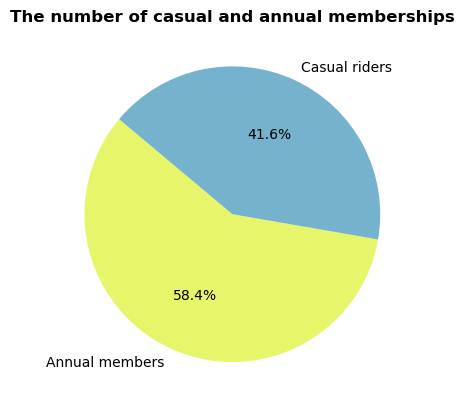

member_casual
member    527627
casual    376100
Name: count, dtype: int64


In [ ]:
labels = 'Annual members', 'Casual riders'
colors = ['#e7f56a', '#75b2ce']
members = df['member_casual'].value_counts()
#Plot a pie chart showing the number of riders
plt.pie(members, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('The number of casual and annual memberships', fontsize = 12, fontweight="bold")
plt.show()
print(df['member_casual'].value_counts())

In [ ]:
# # Comparison of members and casual riders
# x_values = ['Jan', "Feb", 'Mar, Apr, May, Jun, July, Aug, Sep, Oct, Nov, Dec']
# #Generate value and sort it by index
# y_values1 = df[df['member_casual'] == 'member']['Month'].value_counts().sort_index()
# y_values2 = df[df['member_casual'] == 'casual']['Month'].value_counts().sort_index()

# # Create the line chart for the first set of values (y_values1)
# plt.plot(x_values, y_values1, label='Member', marker='o', linestyle='-', color='y')

# # Create the line chart for the second set of values (y_values2)
# plt.plot(x_values, y_values2, label='Casual', marker='x', linestyle='--', color='b')

# # title to the chart
# plt.title('Comparison of member and casual riders', fontweight="bold" )

# # labels for the x and y axes
# plt.xlabel('Month in 2022')
# plt.ylabel('Number of rides')
# # legend to distinguish between the two lines
# plt.legend()

# # Display the chart
# plt.grid(True)  # Add grid lines to the plot
# plt.show()

In [ ]:
df.head(2)

ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:00 2021-01-01 00:33:00   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:00 2021-01-01 00:28:00   

  ride_length     start_station_name start_station_id  \
0    00:25:20  Maine Ave & 9th St SW          31646.0   
2    00:14:13  17th & Corcoran St NW          31214.0   

                           end_station_name end_station_id  start_lat  ...  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440  ...   
2                      14th & Belmont St NW        31119.0  38.912138  ...   

     Month  year  start_hour end_hour day  day of week  date_is_weekend  \
0  January  2021           0        0   1       Friday                0   
2  January  2021           0        0   1       Friday                0   

   trip_duration  time_of_day  Season  
0         1500.0        Night  Winter  
2          840.0        Night  Winter  

[2 rows x 24 columns]

In [ ]:
#Replace int value to String name for weekday
label_weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri, Sat"]
df['weekdays_str'] = df['day of week'].replace,('day of week', label_weekdays)
palette = ['#75b2ce', '#e7f56a']
sns.set()

#Plot the graph
ax = sns.countplot(
    data=df, 
    x="weekdays_str", 
    hue="member_casual", 
    order = label_weekdays,
)

# title to the chart
plt.title('The number of rides each day.',fontweight="bold")
plt.ylabel ('Number of riders')
plt.xlabel('weekdays')
plt.show()

ValueError: Length of values (2) does not match length of index (903727)

In [ ]:
distance_comparison = df.groupby('member_casual')['distance'].agg(['mean', 'median'])
print("\nDistance Traveled by Casual vs. Members:\n", distance_comparison)

KeyError: 'Column not found: distance'

In [ ]:
# Frequent Casual Riders:
frequent_casuals = casual_rides.groupby('ride_id').size().reset_index(name='ride_count')
frequent_casuals = frequent_casuals[frequent_casuals['ride_count'] > 5]  # Example: More than 5 rides
print("\nFrequent Casual Riders (Potential Upsell):\n", frequent_casuals)



Frequent Casual Riders (Potential Upsell):
 Empty DataFrame
Columns: [ride_id, ride_count]
Index: []


In [ ]:
# Casual Riders in High-Traffic Areas:
high_traffic_stations = station_popularity.nlargest(10)  # Top 10 stations
casuals_in_high_traffic = casual_rides[casual_rides['start_station_name'].isin(high_traffic_stations.index)]
print("\nCasual Riders in High-Traffic Areas:\n", casuals_in_high_traffic)


Casual Riders in High-Traffic Areas:
                    ride_id  rideable_type          started_at  \
11        DA579474AAD89387   classic_bike 2021-01-01 00:24:12   
12        1DE392338FF58AC7   classic_bike 2021-01-01 00:24:12   
13        64D4C859EC0B8D60   classic_bike 2021-01-01 00:24:42   
18        6B4631D4B1BCB9BB    docked_bike 2021-01-01 00:26:51   
30        3AF0E3F8583D6852   classic_bike 2021-01-01 00:44:19   
...                    ...            ...                 ...   
10693752  3FBECC31ECFC3F3F   classic_bike 2023-12-31 22:43:44   
10693757  57A7E83299DF30A4   classic_bike 2023-12-31 22:44:57   
10693978  4D7FF686D6A88D8E   classic_bike 2023-12-31 23:51:24   
10693981  38EB172B69A41D54  electric_bike 2023-12-31 23:52:37   
10693986  96C983C421336CD7   classic_bike 2023-12-31 23:54:49   

                    ended_at  \
11       2021-01-01 00:47:47   
12       2021-01-01 00:47:54   
13       2021-01-01 00:48:47   
18       2021-01-01 00:47:48   
30       2021-01-01 

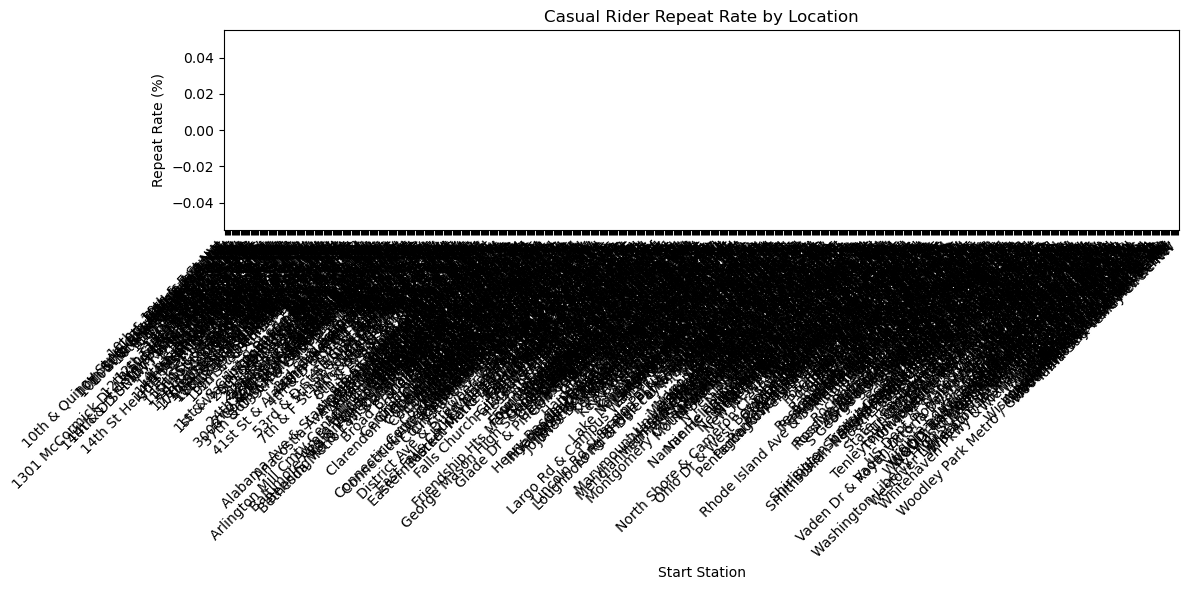

In [ ]:
# Visualizing repeat rate by location
plt.figure(figsize=(12, 6))
repeat_rate_by_location.plot(kind='bar')
plt.title('Casual Rider Repeat Rate by Location')
plt.xlabel('Start Station')
plt.ylabel('Repeat Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


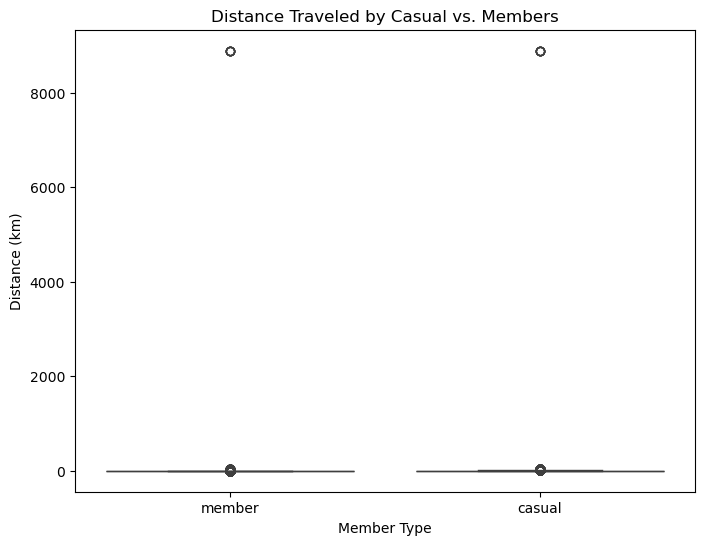

In [ ]:
# Example: Visualizing distance comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_casual', y='distance', data=df)
plt.title('Distance Traveled by Casual vs. Members')
plt.xlabel('Member Type')
plt.ylabel('Distance (km)')
plt.show()

In [ ]:
df['trip_duration'] = pd.to_numeric(df['trip_duration'], errors='coerce')
# KPIs
total_rides = df.shape[0]
avg_trip_duration = df['trip_duration'].mean()

rides_by_member_type = df['member_casual'].value_counts()

rides_by_time_of_day = df['time_of_day'].value_counts()

rides_by_season = df['Season'].value_counts()

peak_start_hour = df['start_hour'].value_counts().idxmax()

peak_end_hour = df['end_hour'].value_counts().idxmax()   

In [ ]:
# Weekend vs. Weekday Usage
# weekend_rides = df[df['date_is_weekend'] == True].shape[0]
# weekday_rides = df[df['date_is_weekend'] == False].shape[0]

In [ ]:
# Top start and end stations
top_start_stations = df['start_station_name'].value_counts().head(15)
top_end_stations = df['end_station_name'].value_counts().head(15)

In [ ]:
# Print KPIs
print(f"Total Rides: {total_rides}")
print(f"Average Trip Duration: {avg_trip_duration:.2f} minutes")

Total Rides: 9572692
Average Trip Duration: 1238.92 minutes


In [ ]:
print("Rides by Member Type:")
print(rides_by_member_type)

Rides by Member Type:
member_casual
member    5803587
casual    3769105
Name: count, dtype: int64


In [ ]:
print("Rides by Time of Day:")
print(rides_by_time_of_day)
print("Rides by Season:")
print(rides_by_season)

Rides by Time of Day:
time_of_day
Afternoon    3188193
Evening      3187110
Morning      2555087
Night         642302
Name: count, dtype: int64
Rides by Season:
Season
Summer    3048591
Spring    2383750
Winter    1327608
Name: count, dtype: int64


In [ ]:
print(f"Peak Start Hour: {peak_start_hour}")
print(f"Peak End Hour: {peak_end_hour}")

Peak Start Hour: 17
Peak End Hour: 17


In [ ]:
# print(f"Weekend Rides: {weekend_rides}, Weekday Rides: {weekday_rides}")

NameError: name 'weekday_rides' is not defined

In [ ]:
print("Top 15 Start Stations:")
print(top_start_stations)

Top 15 Start Stations:
start_station_name
New Hampshire Ave & T St NW                              102179
Columbus Circle / Union Station                          100584
Lincoln Memorial                                          96667
15th & P St NW                                            95670
Jefferson Dr & 14th St SW                                 88078
1st & M St NE                                             85552
4th St & Madison Dr NW                                    83831
5th & K St NW                                             76586
Smithsonian-National Mall / Jefferson Dr & 12th St SW     76452
Henry Bacon Dr & Lincoln Memorial Circle NW               76236
14th & V St NW                                            75868
Eastern Market Metro / Pennsylvania Ave & 8th St SE       75397
Massachusetts Ave & Dupont Circle NW                      72609
8th & O St NW                                             68040
14th & R St NW                                            6733

In [ ]:
print("Top 15 End Stations:")
print(top_end_stations)

Top 15 End Stations:
end_station_name
Columbus Circle / Union Station                          102410
New Hampshire Ave & T St NW                              100880
15th & P St NW                                            96758
Lincoln Memorial                                          95439
Jefferson Dr & 14th St SW                                 91470
1st & M St NE                                             87083
4th St & Madison Dr NW                                    83007
Smithsonian-National Mall / Jefferson Dr & 12th St SW     78897
Massachusetts Ave & Dupont Circle NW                      78765
5th & K St NW                                             77980
Henry Bacon Dr & Lincoln Memorial Circle NW               76505
Eastern Market Metro / Pennsylvania Ave & 8th St SE       76294
14th & V St NW                                            75120
14th & R St NW                                            68771
8th & O St NW                                             67898
Na

In [ ]:
# repeat_riders_type = repeat_riders.groupby('rideable_type')['ride_id'].count()
# print("\nRepeat Riders by Rideable Type:\n", repeat_riders_type)

# # Visualization:
# plt.figure(figsize=(8, 6))
# repeat_riders_type.plot(kind='bar')
# plt.title('Repeat Riders by Rideable Type')
# plt.xlabel('Rideable Type')
# plt.ylabel('Number of Repeat Riders')
# plt.show()


Repeat Riders Time of Day and Day of Week:
 Empty DataFrame
Columns: []
Index: []


<Figure size 1000x800 with 0 Axes>

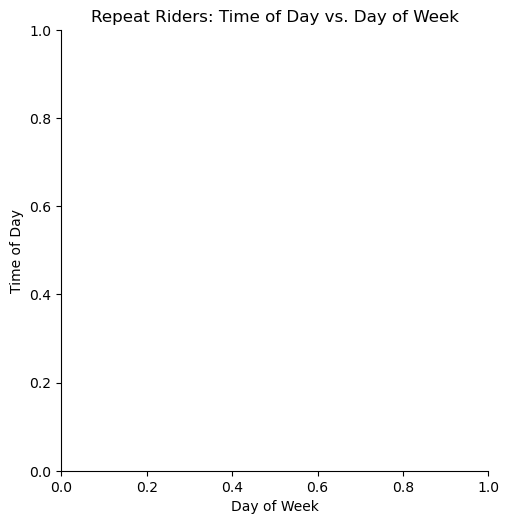

In [ ]:
# repeat_riders_time = casual_rides[casual_rides['ride_id'].isin(repeat_riders['ride_id'])].groupby(['time_of_day', 'day of week'])['ride_id'].count().unstack()
# print("\nRepeat Riders Time of Day and Day of Week:\n", repeat_riders_time)

# # Visualization (heatmap):
# plt.figure(figsize=(10, 8))
# sns.catplot(repeat_riders_time)
# plt.title('Repeat Riders: Time of Day vs. Day of Week')
# plt.xlabel('Day of Week')
# plt.ylabel('Time of Day')
# plt.show()

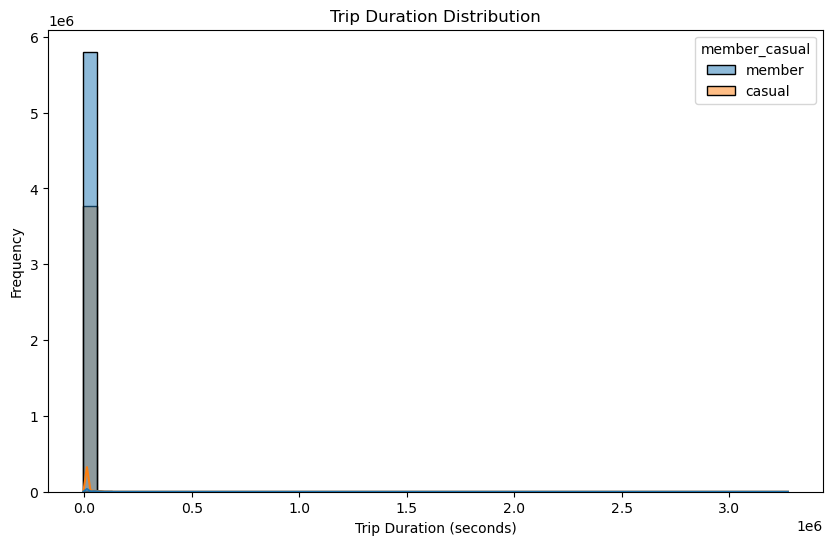

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.histplot(df, x='trip_duration', hue='member_casual', kde=True, bins=50)  # Adjust bins as needed
# plt.title('Trip Duration Distribution')
# plt.xlabel('Trip Duration (seconds)')
# plt.ylabel('Frequency')
# plt.show()

Station Usages in Morning Time

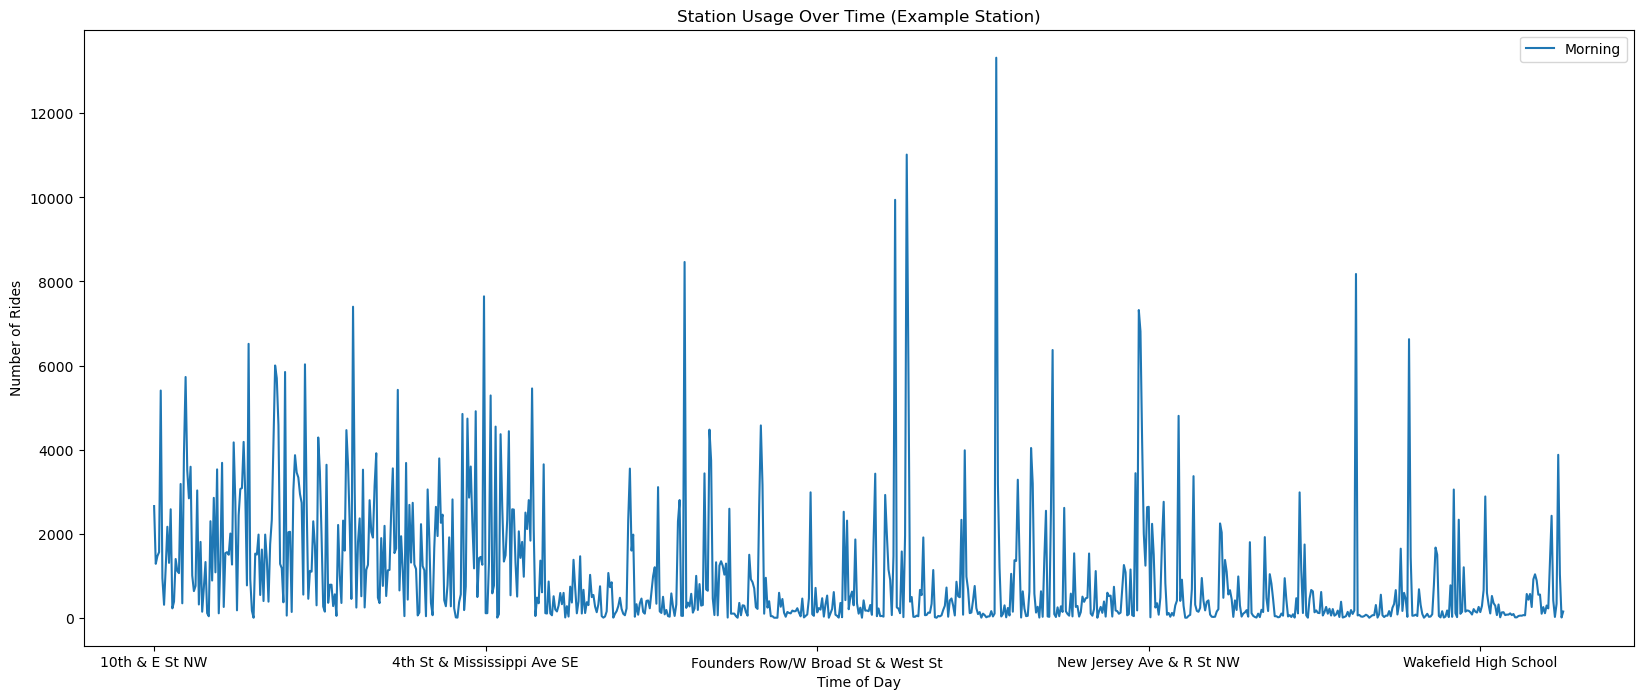

In [ ]:
station_usage_over_time = casual_rides.groupby(['start_station_name', 'time_of_day'])['ride_id'].count().unstack()

# Visualization (example for one station - repeat for other key stations):
plt.figure(figsize=(20, 8))
station_usage_over_time['Morning'].plot(label='Morning') #Example time of day
# station_usage_over_time['Afternoon'].plot(label='Afternoon') #Example time of day
plt.title('Station Usage Over Time (Example Station)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

Station Usages in Afternoon Time

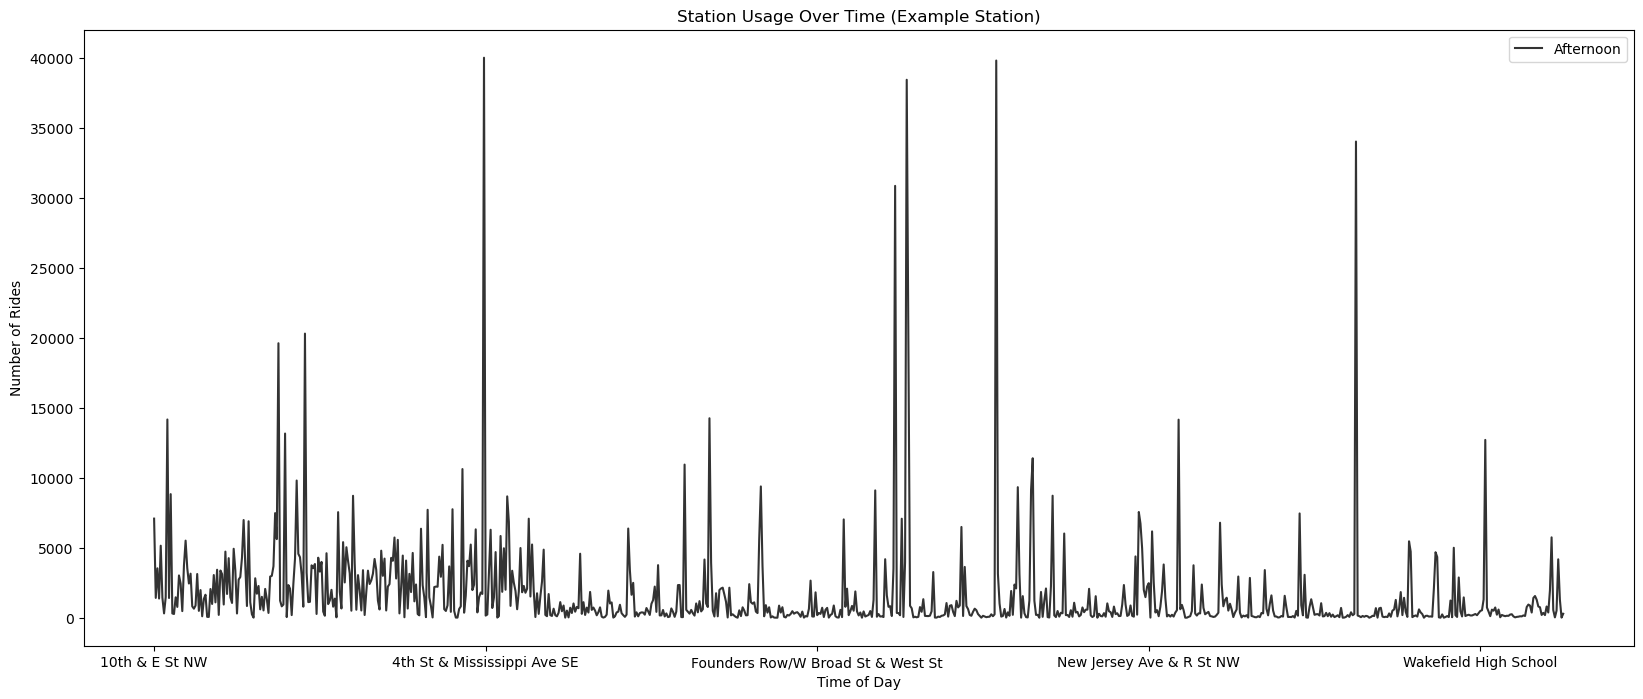

In [ ]:
station_usage_over_time = casual_rides.groupby(['start_station_name', 'time_of_day'])['ride_id'].count().unstack()

# Visualization (example for one station - repeat for other key stations):
plt.figure(figsize=(20, 8))
# station_usage_over_time['Morning'].plot(label='Morning') #Example time of day
station_usage_over_time['Afternoon'].plot(label='Afternoon', color= '.2') #Example time of day
plt.title('Station Usage Over Time (Example Station)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

KPI 

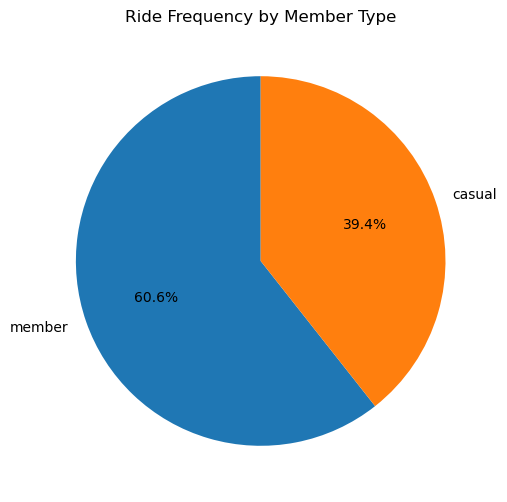

In [ ]:

# 1. Ride Frequency
ride_counts = df['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Ride Frequency by Member Type")
plt.show()


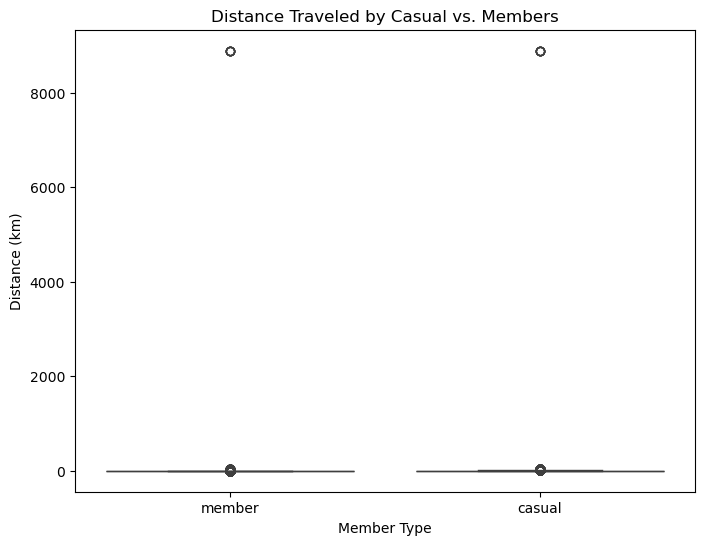

In [ ]:
# # Example: Distance Comparison (Box plot)
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='member_casual', y='distance', data=df)
# plt.title('Distance Traveled by Casual vs. Members')
# plt.xlabel('Member Type')
# plt.ylabel('Distance (km)')
# plt.show()


In [ ]:
# # Example: Visualizing Repeat Riders Time of Day and Day of Week (Heatmap)
# repeat_riders_time = casual_rides[casual_rides['ride_id'].isin(repeat_riders['ride_id'])].groupby(['time_of_day', 'day of week'])['ride_id'].count().unstack()
# plt.figure(figsize=(10, 8))
# sns.heatmap(repeat_riders_time, cmap="YlGnBu")
# plt.title('Repeat Riders: Time of Day vs. Day of Week')
# plt.xlabel('Day of Week')
# plt.ylabel('Time of Day')
# plt.show()


In [ ]:
# # Create a copy BEFORE making any changes
# df.new = df.copy()  # This is crucial!
# # Save the modified DataFrame to a new CSV
# df.new.to_csv("Full_cleaned.csv", index=False) # index=False prevents saving row indices

In [ ]:
import numpy as np
import folium
from folium import plugins

In [ ]:
m=folium.Map()
m

In [ ]:
# After that, we can immediately set on creating a map
m=folium.Map()

# By default it will show the world map zoomed out all the way. We can
# remedy that by passing arguments.

m=folium.Map(location=[38.880440 , -77.025236],   # Our map view centrepoint. In our case, Berlin.
                zoom_start=12,              # Starting zoom step
                max_zoom=26,                # Maximum zooming step
                min_zoom=2)   
m

In [ ]:
m=folium.Map(location=[ 38.889805, -77.009056 ], zoom_start=12, min_zoom=9)

folium.Marker([38.888255, -77.049437]).add_to(m) # We will add a marker at the specified coordinates 
folium.Marker([38.888553, -77.032427]).add_to(m) 
folium.Marker([38.890539, -77.049383]).add_to(m)  
folium.Marker([38.888774, -77.028694]).add_to(m)  
folium.Marker([38.888097, -77.038325]).add_to(m)  
folium.Marker([38.892244, -77.033234]).add_to(m)  
m

In [ ]:
m=folium.Map(location=[ 38.889805, -77.009056 ], zoom_start=12, min_zoom=9)
# We will add a marker at the specified coordinates 
folium.Marker([38.888255, -77.049437], popup ="Lincoln Memorial").add_to(m) 
folium.Marker([38.888553, -77.032427], popup ="Jefferson Dr & 14th St SW ").add_to(m) 
folium.Marker([38.890539, -77.049383], popup ="14th St & New York Ave NW").add_to(m)  
folium.Marker([38.888774, -77.028694], popup= "Smithsonian-National Mall / Jefferson Dr & 12th St SW").add_to(m)  
folium.Marker([38.888097, -77.038325], popup="17th St & Independence Ave SW").add_to(m)  
folium.Marker([38.892244, -77.033234], popup="15th St & Constitution Ave NW").add_to(m)
m

Top 15 Start Stations and Bike Usages with Stations

In [ ]:
# Top 15 Start Stations
m=folium.Map(location=[ 38.889805, -77.009056 ], zoom_start=12, min_zoom=9)
# We will add a marker at the specified coordinates 
folium.Marker([38.915544, -77.038252], popup ="New Hampshire Ave & T St NW -102179").add_to(m)
folium.Marker([38.89696, -77.00493], popup ="Columbus Circle / Union Station -100584").add_to(m)
folium.Marker([38.888255, -77.0494365], popup ="Lincoln Memorial -96667").add_to(m)
folium.Marker([38.909892, -77.034337], popup ="15th & P St NW -95670").add_to(m)
folium.Marker([38.888553, -77.032427], popup ="Jefferson Dr & 14th St SW -88078").add_to(m)
folium.Marker([38.905746, -77.005568], popup ="1st & M St NE -85552").add_to(m)
folium.Marker([38.8904955, -77.0172465], popup ="4th St & Madison Dr NW -83831").add_to(m)
folium.Marker([38.90304, -77.019027], popup ="5th & K St NW -76586").add_to(m)
folium.Marker([38.888774, -77.028694], popup ="Smithsonian-National Mall / Jefferson Dr & 12th St SW -76452").add_to(m)
folium.Marker([38.890539, -77.049383], popup ="Henry Bacon Dr & Lincoln Memorial Circle NW -76236").add_to(m)
folium.Marker([38.9177645, -77.032096], popup ="14th & V St NW -75868").add_to(m) 
folium.Marker([38.88426009, -76.9947356], popup ="Eastern Market Metro / Pennsylvania Ave & 8th St SE -75397").add_to(m)
folium.Marker([38.91012967, -77.04420567], popup ="Massachusetts Ave & Dupont Circle NW -72609").add_to(m)
folium.Marker([38.90864, -77.02277], popup ="8th & O St NW -68040").add_to(m)
folium.Marker([38.913046, -77.032008], popup ="14th & R St NW -67332").add_to(m)
m


Top 15 End Stations and Bike Usages Stations

In [ ]:
# Top 15 End Stations
m=folium.Map(location=[ 38.889805, -77.009056 ], zoom_start=12, min_zoom=9)
# We will add a marker at the specified coordinates 
folium.Marker([38.89696, -77.00493], popup ="Columbus Circle / Union Station -102410").add_to(m)
folium.Marker([38.915544, -77.038252], popup ="New Hampshire Ave & T St NW -100880").add_to(m)
folium.Marker([38.90980063, -77.03442693], popup ="15th & P St NW -96758").add_to(m)
folium.Marker([38.888255, -77.049437], popup ="Lincoln Memorial -95439").add_to(m)
folium.Marker([38.8885525, -77.032427], popup ="Jefferson Dr & 14th St SW -91470").add_to(m)
folium.Marker([38.905697, -77.005483], popup ="1st & M St NE -87083").add_to(m)
folium.Marker([38.8904955, -77.0172465], popup ="4th St & Madison Dr NW -83007").add_to(m)
folium.Marker([38.888774, -77.028694], popup ="Smithsonian-National Mall / Jefferson Dr & 12th St SW - 78897").add_to(m)
folium.Marker([38.9101, -77.0444], popup ="Massachusetts Ave & Dupont Circle NW -78765").add_to(m)
folium.Marker([38.90304, -77.019027], popup ="5th & K St NW -77980").add_to(m)
folium.Marker([38.890539, -77.049383], popup ="Henry Bacon Dr & Lincoln Memorial Circle NW -76505").add_to(m)
folium.Marker([38.88411367, -76.995287], popup ="Eastern Market Metro / Pennsylvania Ave & 8th St SE -76294").add_to(m)
folium.Marker([38.9177645, -77.032096], popup ="14th & V St NW - 75120").add_to(m)
folium.Marker([38.91299117, -77.03186733], popup ="14th & R St NW -68771").add_to(m)
folium.Marker([38.90864, -77.02277], popup ="8th & O St NW - 67898").add_to(m)
m

In [ ]:
# Count trips for each start-to-end station pair
popular_trips = df.groupby(["start_station_name", "end_station_name"]).size().reset_index(name="trip_count")

# Sort by trip count in descending order
popular_trips = popular_trips.sort_values(by="trip_count", ascending=False)

# Display the most popular trips
popular_trips.head(15)

start_station_name  \
123563                          Jefferson Dr & 14th St SW   
169227  Smithsonian-National Mall / Jefferson Dr & 12t...   
70112                              4th St & Madison Dr NW   
119557                                     Gravelly Point   
132136                                   Lincoln Memorial   
153680   Ohio Dr & West Basin Dr SW / MLK & FDR Memorials   
122028        Henry Bacon Dr & Lincoln Memorial Circle NW   
26835                       15th St & Constitution Ave NW   
32632                       17th St & Independence Ave SW   
98330                     Columbus Circle / Union Station   
132111                                   Lincoln Memorial   
164715                                   Roosevelt Island   
98315                     Columbus Circle / Union Station   
123590                          Jefferson Dr & 14th St SW   
132110                                   Lincoln Memorial   

                                         end_station_name  trip_count  
123563                          Jefferson Dr & 14th St SW       13592  
169227  Smithsonian-National Mall / Jefferson Dr & 12t...       13339  
70112                              4th St & Madison Dr NW       10145  
119557                                     Gravelly Point        9628  
132136                                   Lincoln Memorial        9131  
153680   Ohio Dr & West Basin Dr SW / MLK & FDR Memorials        8437  
122028        Henry Bacon Dr & Lincoln Memorial Circle NW        7749  
26835                       15th St & Constitution Ave NW        7195  
32632                       17th St & Independence Ave SW        6811  
98330                                       8th & F St NE        6624  
132111                                 Jefferson Memorial        6578  
164715                                   Roosevelt Island        6371  
98315                                       6th & H St NE        6202  
123590                                   Lincoln Memorial        6026  
132110                          Jefferson Dr & 14th St SW        5922